In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
import tensorflow as tf
import numpy as np
from numpy  import expand_dims
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
np.random.seed(15)

Using TensorFlow backend.


# 1. Data Augmentation


dataset 이 너무 적은 경우 overfitting 문제가 발생함

![data augmetation](keras_data_augmentation_jitter.png)


keras에서는 dta augmentation을 통해 해결


- Translations
- Rotations
- Changes in scale
- Shearing
- Horizontal (and in some cases, vertical) flips

![image data augmetation](keras_data_augmentation_random_adjustments.jpg)


Type #1: existing dataset을 사용해 학습 dataset를 재구성함
  
<img src=keras_data_augmentation_dataset_generation.png width=300>
  
  

Type #2: In-place/on-the-fly data augmentation - keras에서 구현
   batch 수 만큼 ImageDataGenerator로 실시간 생성 후 원본 제외하고 생성된 데이터 셋으로 학습

<img src=keras_data_augmentation_in_place.png width=300>

잘못된 방식
<img src=keras_data_augmentation_incorrect.png  width=300>

In [2]:
img = tf.keras.preprocessing.image.load_img('cat.jpg')  # 이미지 객체임
data = tf.keras.preprocessing.image.img_to_array(img)   # data 만 추출
sample = expand_dims(data,0)  
print(sample.shape)

(1, 183, 276, 3)


In [3]:
# opencv 사용해 이미지 loaidng
data = cv2.imread('cat.jpg')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
sample = expand_dims(data,0)
print(sample.shape)

(1, 183, 276, 3)


수평, 수직 이동

In [4]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2) 
obj = generator.flow(sample, batch_size=1)   

In [5]:
#이미지를 Load하는 2가지 방법
img = tf.keras.preprocessing.image.load_img('cat.jpg') #이미지 객체(PIL형)
data = tf.keras.preprocessing.image.img_to_array(img) #data만 추출
print(data.shape) # 3차원

sample = expand_dims(data, 0) #이미지의 차원을 3차원에서 4차원으로 늘려줌
print(sample.shape) #4차원

(183, 276, 3)
(1, 183, 276, 3)


In [6]:
# 할때마다 다른 이미지 나온다.
image = obj.next() #batch_size = 1이기 때문에, next라는 함수를 호출할때마다 영상이 1개씩 만들어진다.


(1, 183, 276, 3)
float32
(1, 183, 276, 3)
(183, 276, 3)


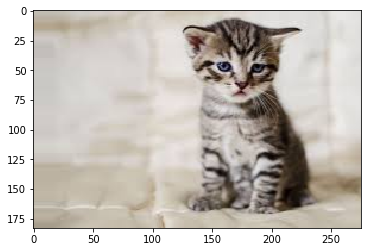

In [7]:
# 할때마다 다른 이미지 나온다.
image = obj.next() #batch_size = 1이기 때문에, next라는 함수를 호출할때마다 영상이 1개씩 만들어진다.
print(image.shape)
print(image.dtype)

print(image.shape)  
print(image[0].shape)

#plt.imshow(image[0].astype('uint8') )  #  plt로 할때는 0~1사이로  혹은 타입을 uint8로 
plt.imshow(image[0]/255)  #  plt로 할때는 0~1사이로  혹은 타입을 uint8로 

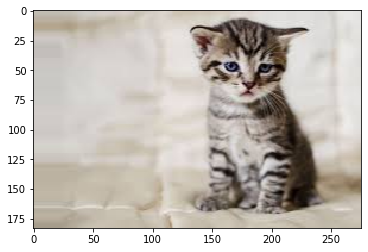

In [8]:
#next할때마다 새로운 이미지가 계속 생성
image = obj.next()
plt.imshow(image[0]/255)

In [9]:
#어떤 기하학적인 변형을 할것인가?
generator = tf.keras.preprocessing.image.ImageDataGenerator(    
    width_shift_range = 0.2, rescale=1./255)   # rescale 해주면, imshow할때, 정규화를 하거나, type변한 필요없다. 값이 0 ~ 255가 아니라,
#0~1로 나온다.
obj = generator.flow(sample, batch_size=1)   

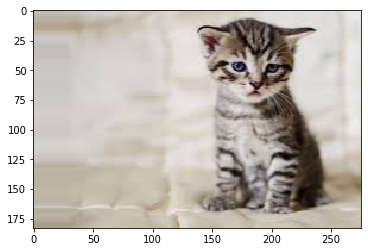

In [10]:
#0인덱스에 잇는 이미지 출력
image = obj.next()
plt.imshow(image[0] )

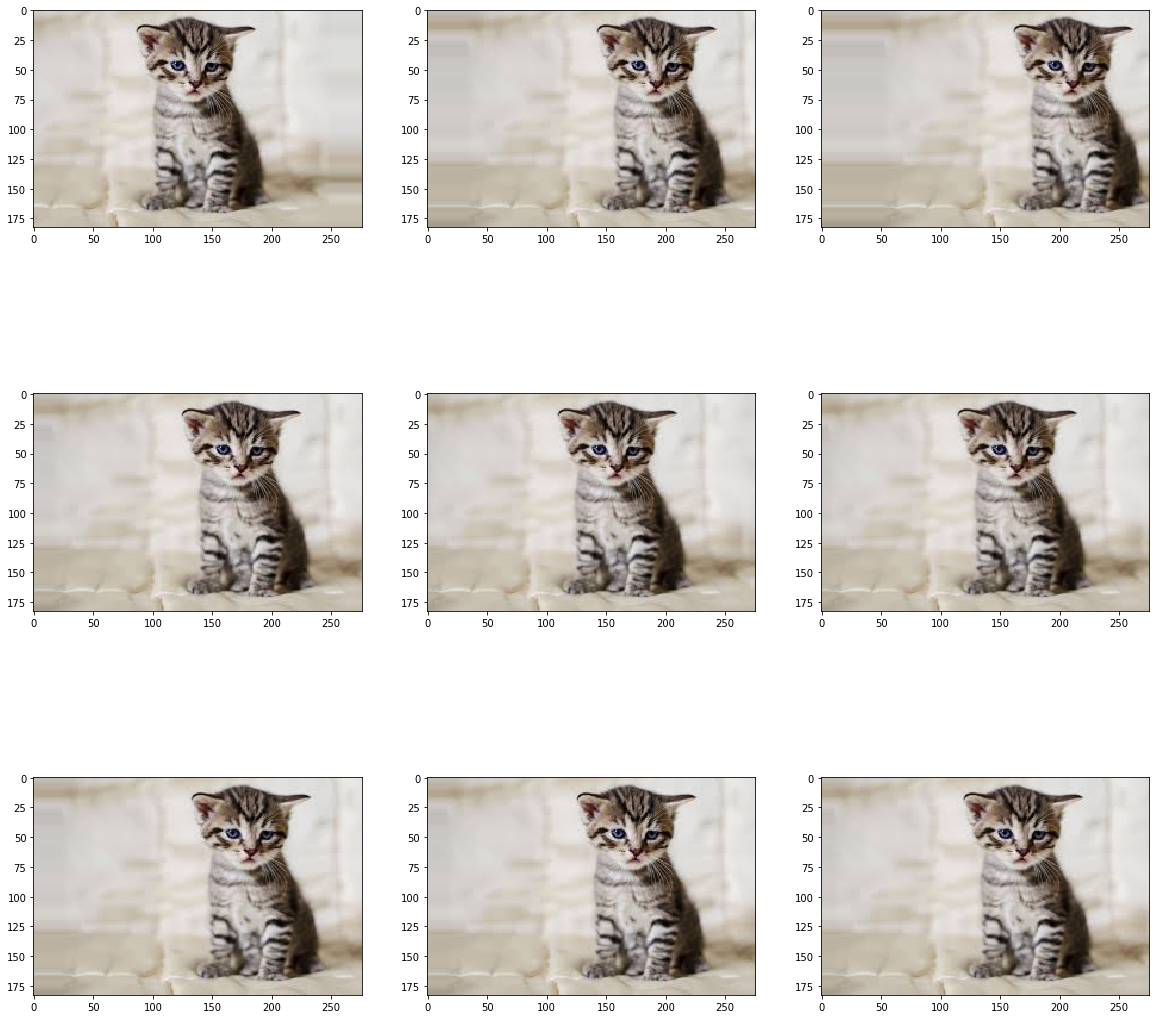

In [11]:
fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next() #next 함수를 9번 호출
    plt.imshow(image[0])   

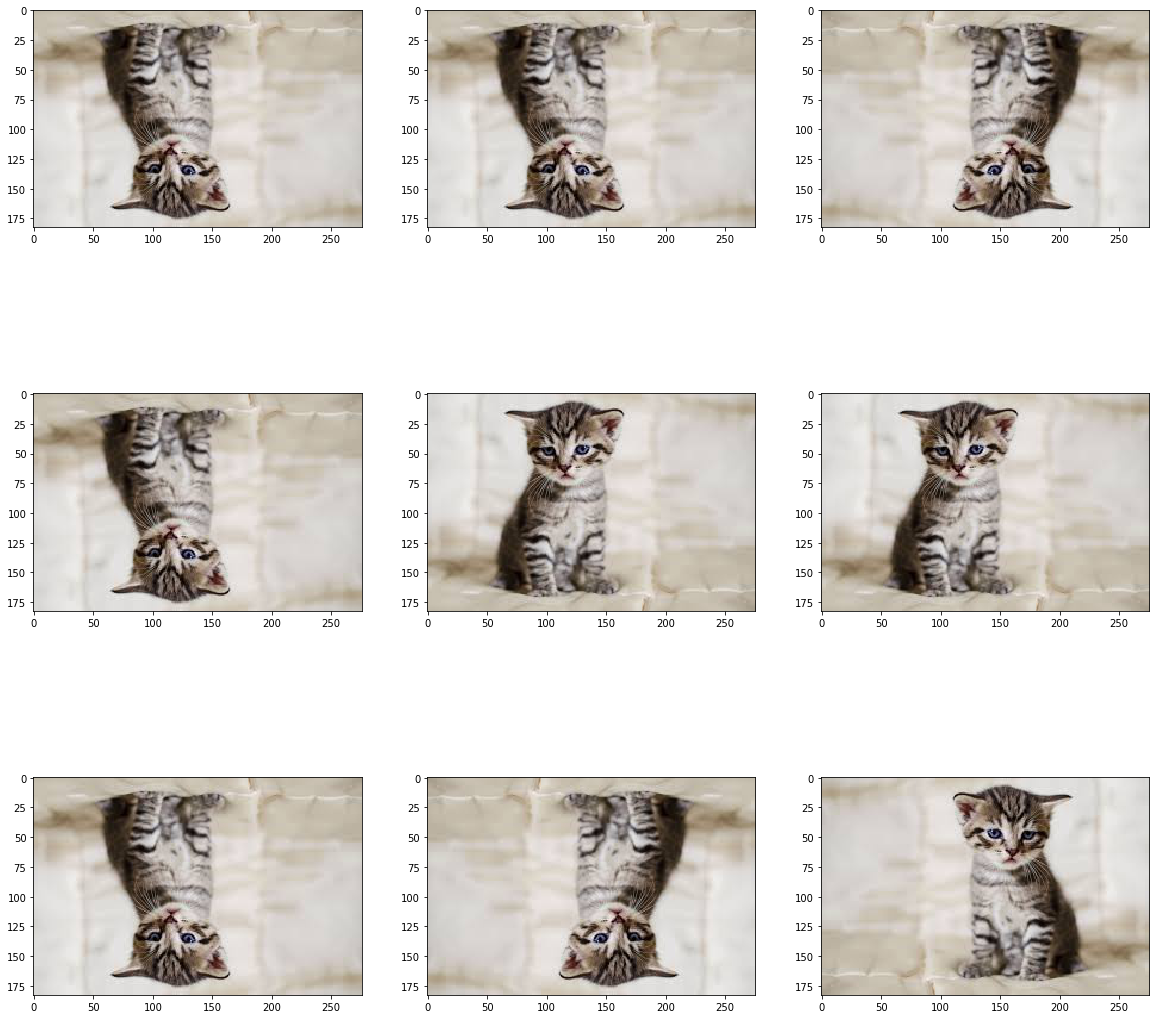

In [12]:
#영상처리할때, 좌우 flip은 기본, 상하는 잘 안쓴다.
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range(90),
    horizontal_flip = True, vertical_flip = True,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   #1을줘도 1개만, 2를줘도 1개만 ....나온다. 전체 데이터가 100개여도, 100개중에 몇개를 골라
#그중에서 어떤 효과를 적용할지 모른다. 우리는 거기다 train data만 넣어주면 된다.

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

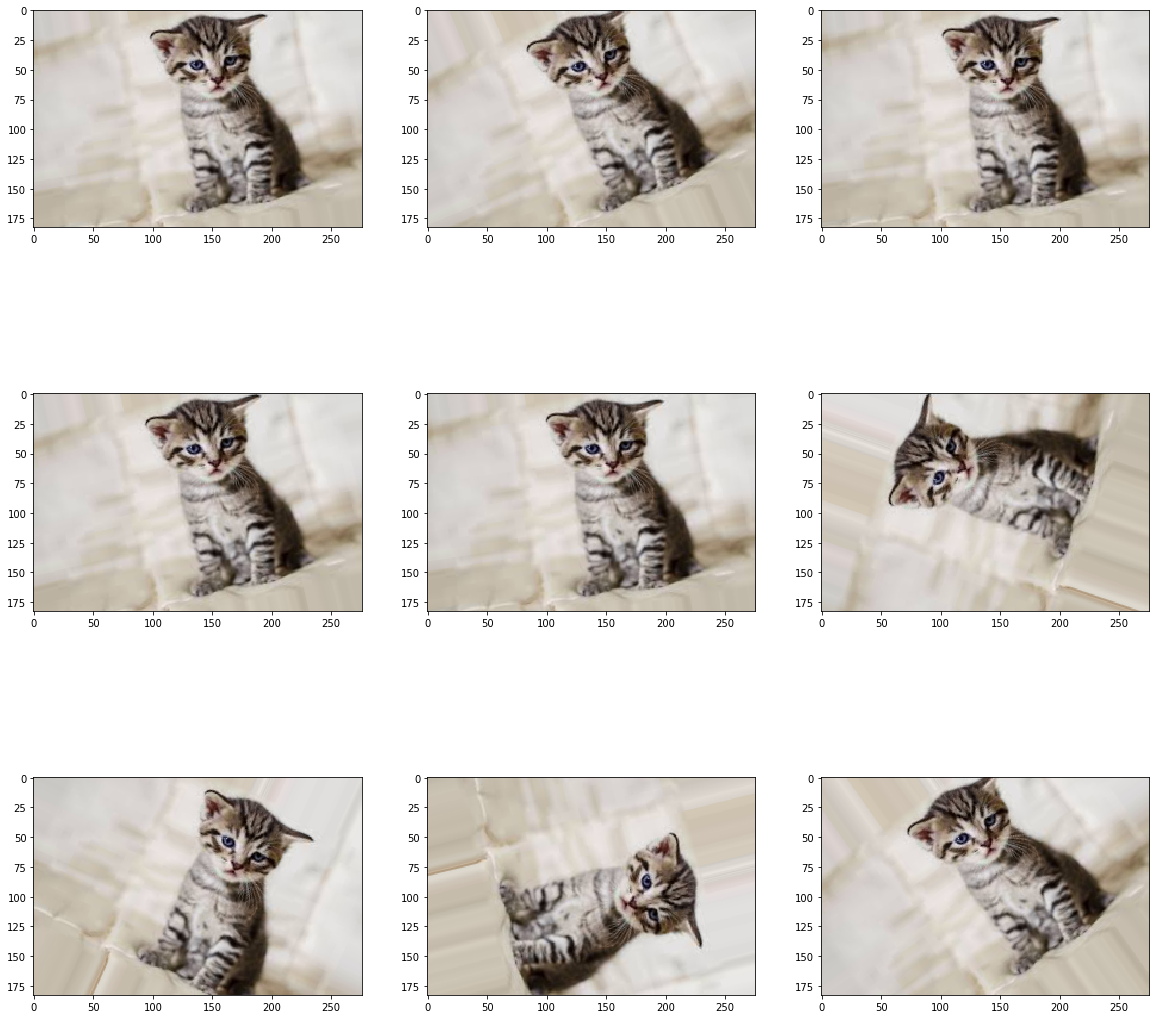

In [13]:
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   
    

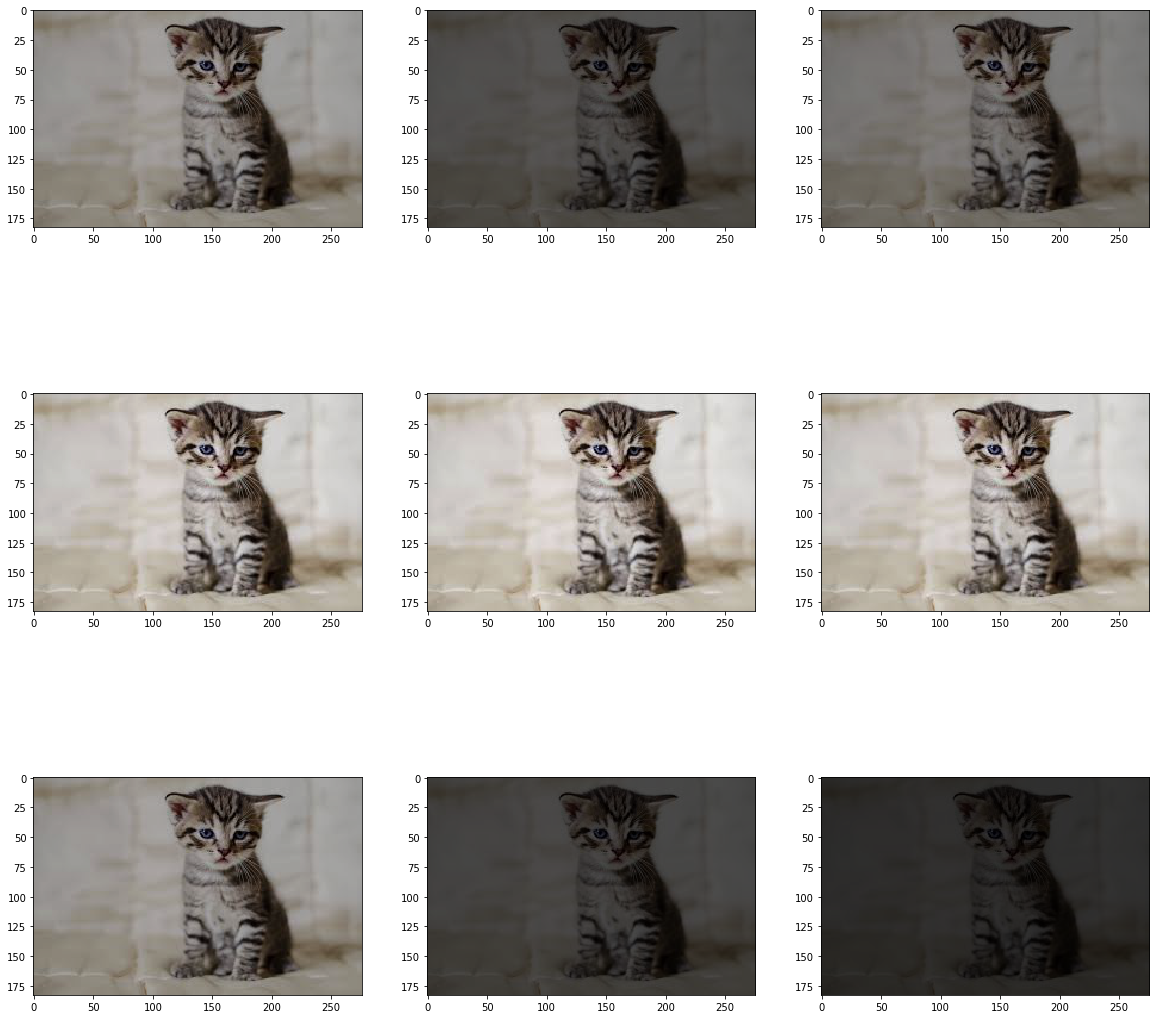

In [14]:
#밝기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    brightness_range=[0.2, 1.0],       
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

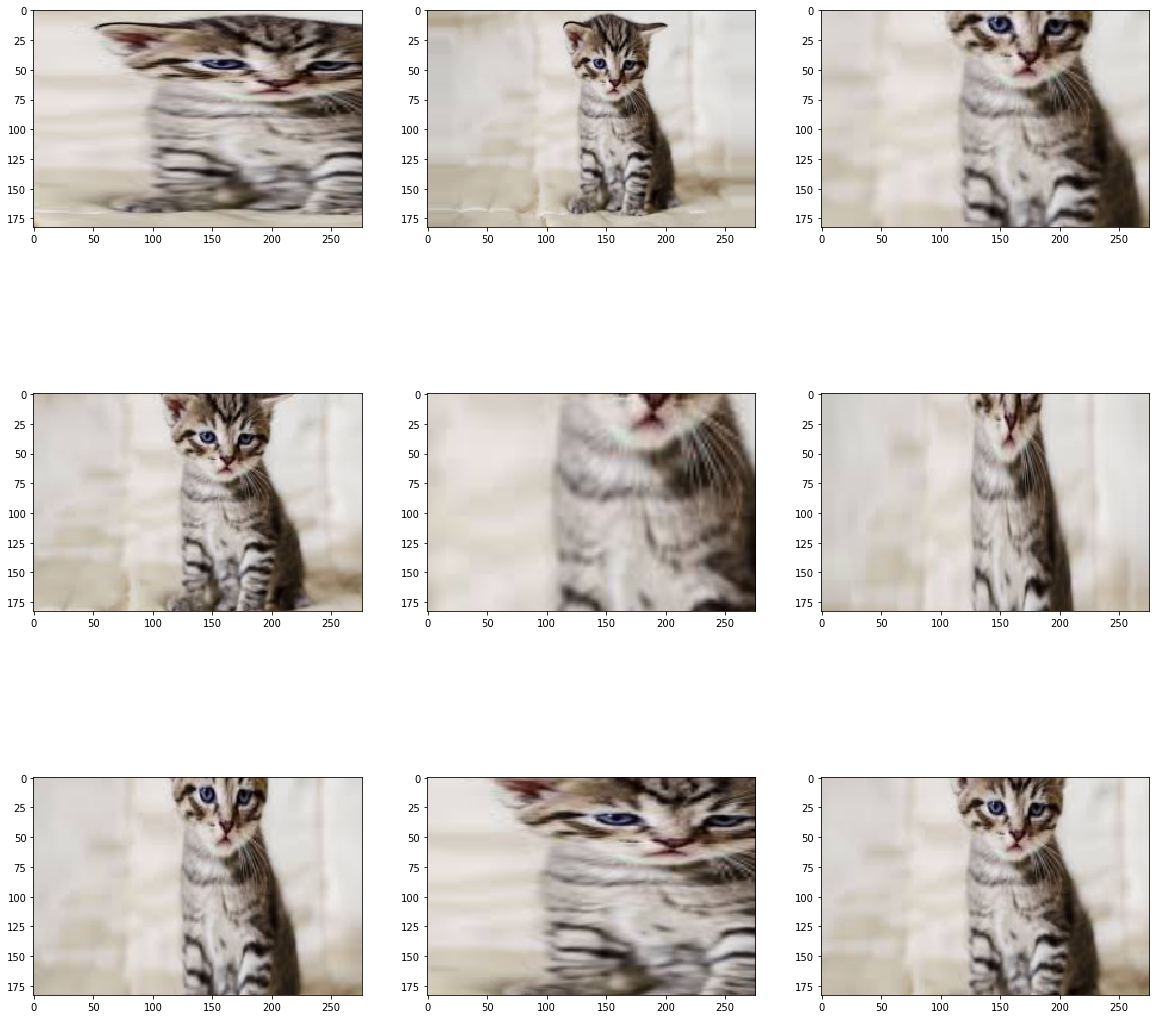

In [15]:
#zoom 변화
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    zoom_range=[0.2, 1.2],   
    rescale=1./255) #요부분은 사실 필수
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

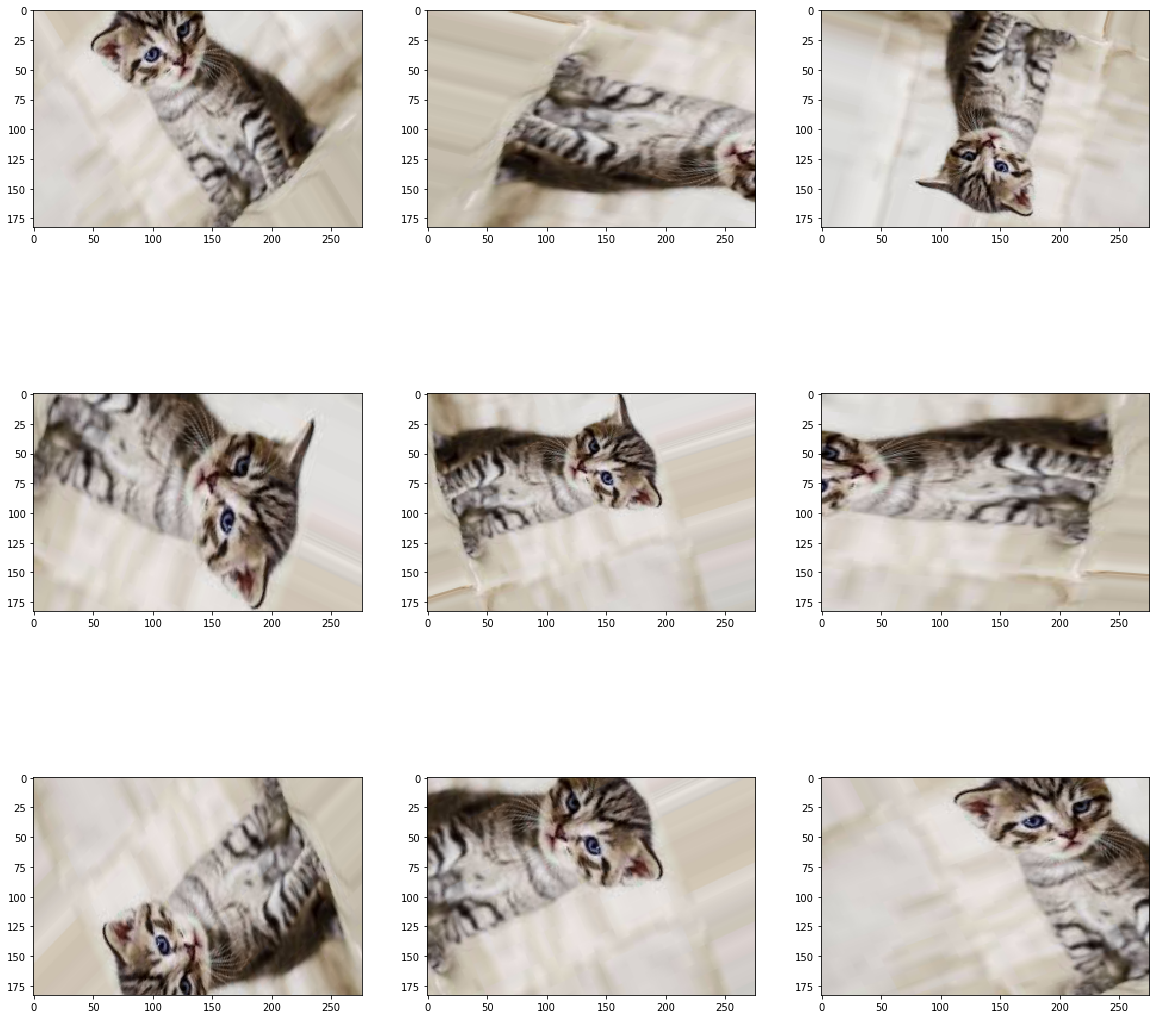

In [16]:
# 한꺼번에 적용하기
generator = tf.keras.preprocessing.image.ImageDataGenerator( 
    width_shift_range = 0.2,
    zoom_range=[0.5, 1.0],   
    horizontal_flip = True, vertical_flip = True,
    rotation_range=90,
    rescale=1./255)
obj = generator.flow(sample, batch_size=1)   

fig = plt.figure(figsize=(20,20))
for i in range(9) :
    plt.subplot(3,3,i+1)
    image = obj.next()
    plt.imshow(image[0])   

In [17]:
# 파일로 저장하기data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAP7CAYAAAAqAVWsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9yY8lSX7n9zEzd39bLBm5VWVmVXVXk+xmc9CkNBwMdRBmTgLmppug5TaHAQToLOgv0E1HHTQQBOgkXXQazACChnMkDwRETlPdZHdVdVd11paZkRmREW/zxcx0sNX9vReZWc3iVHf5rzo7Inyxzc1+9rPvbxPWWkYaaaSRRhpppJFGGmmkkUYaaaSRRvr2kPwP3YCRRhpppJFGGmmkkUYaaaSRRhpppJH+fmkEhEYaaaSRRhpppJFGGmmkkUYaaaSRvmU0AkIjjTTSSCONNNJII4000kgjjTTSSN8yGgGhkUYaaaSRRhpppJFGGmmkkUYaaaRvGY2A0EgjjTTSSCONNNJII4000kgjjTTSt4xGQGikkUYaaaSRRhpppJFGGmmkkUYa6VtGXxsgJIT4Z0KInwkhPhRC/A9fVz0jjTTSSCP9ZtK4T4w00kgjjXSIxj1ipJFGGunrJ2Gt/bsvVAgF/Bz4z4BPgb8A/itr7U//zisbaaSRRhrpN47GfWKkkUYaaaRDNO4RI4000kh/P/R1WQj9Y+BDa+0vrLUN8H8C//nXVNdII4000ki/eTTuEyONNNJIIx2icY8YaaSRRvp7oOJrKvcR8Dj7+1PgT/IHhBD/AvgXAPP57I9/5/33sQyslWz/FwtYY8Jvr9cSy265r0XiDe6EK/vrubl2gRD9v/3/Urmify2NBgQDL2MMWmu6tgNgvdlQb7d0nfu7UIX/qZBKUiiFkDK13ELXtXRa0zRNfN5ag7UWpRRCCMqyQEoFgBSCzWbDtt5igUk1AaCsSgRQ1zVKFVRV5Z6Xgrqu2W5rtO6YTKcALOYLjDG8vLpiu62ZTNzz0+kUKSXWGKQUtF3nvz8YY5nNZxhjmUwmtG3r+r1a0rUdRVkwKUuKwrVV6w4phR+nDiHS2EopEUIgpMRaEH5ULBZVlFSTKbPZgqLwy0VIpBCuDLFvnhz44vbGuzfeOXhrT/Vib5teVV664ObUboX962neuvqG89hfF7xGv/vN+GrrNb1/w597Hk4NvHEVZ7xowJZubq89cPeQZeZg7MNa/9uffXBurb13uKLfSHqjfWI2nf7xd9571Ftzb8Klb6QbHhf7HhAH7+zc36li54VX9+f1VkT2lDUYYzA68EuNMQasGUwxC9ZvMVIghNMRCc/f3LPDOR/WzU2dixtW5Kfukhi86sdwz3gdpq86SvvbnF89wPr8g+JAzdYtZ/d/iR+EwqzFWIu17ltY657ZW5ofd/dPZpcdjz04pgeo35bBtX1dPPhde4X+HVO/Rb02xDEPfd+z5oTI9uzDdYQfvdrC3I5z/MBzN5U5oOGQ2Z07WR9C/3o8LV8jN33dfi2fff4lF5eXb8j4vvH0yj0C+vvEdDpx+4Snw04Q9jVlk+Fze57u8cg988uXsbse7f65Zve3KfJJ0ecBTv4KvLQ/l1KdWetjG21PrrOeTxljo+wfroeqhJeXU5uyekW+Pve3Kc75nbG/SQYVsa1xRD3PtVjf3lC89P125wRjAt91e+K+NmmjaZuWtm3otI7nDHx/ZeTJ4ZrjOSKcH2K7E/9PS9j9Np1MKcoSKSVSKpRSsdtN29LUDapQTP25qChLwKKk9PtCGgqR8ZJcbo3zw8+78I61NvV3Z75lc9Cm58M8GX7rOH8G++HwGx+m4cweSN5ZW3ptCvUOXuvvha+/Pe2T3uI+u6eOcJ5x/Dm9HVaV7lqaehvfVkXh5pGQbk7KMO9kVviubLVvzw4X+rwsvSvEsDf9PuS9/OLLZ1y+vNr7gb4uQOiVYoS19l8C/xLgD3/0D+y/+r/+jx7zCf9MtjCxmq5raJs1ArO78e7h/KGMXjmvQxacAdUeJisEw0O3EGJv/fva1vtdCJQqXRlSIpRAColQKgIvQkmQ0gMXEougi4K+E/pXyzWff/E5P/6rHwPw47/6Mav1iuuLl1jtwCKA46MFpycn3Dk74/5bb1NVru7pdMZsseDi4oIvP/8c3TmApSgKmnpDVVW0bc07Dx9y69YtAKSSXF8v+dN/9+948eI5RyfHAPzoR39IVRZcXl7SNA3fee+7gAOIfvX4MapQ/O3f/i0PHjwE4I//+B8xm834V//6X/Ozn3/EfOaApX/6n/4Jd+6c0bUtJycn/PznP+fZs2cAbDYb/ugf/kOwkh98//f58OcfAPDTn/w111cXfP/33uc77z6i2a4AWK1esl1fs9ms0KZj4uuYzWdU5RShCrZ1y3S2oGndWGkrOb11h/sP3+FHf/SP+N7v/r7rd1kxmUwpy5KiKJAyCe6H5uC+n/l9m23Q4eeh5wMN52EA7XYY+GBdgZs3UggUorfe8ud21h+gtUZrjZQyAmRFUaCUjBtmAOGKokAqCUi0cUcg37Od9hxaH/vG6KZnrRU77x3621qLsJYAsR5cw+Gg5zdJ45/Rncb43gRhY1jPTluNwUs16aevIwhjFpMdHt0h/k/+6T/7ZLdhv/H0RvvED3/wu/Z//1/+p0EJewRO0sbuhIVdft1/bk+LXvF8AkHl3jW3V0gOQl126N9XbhJw0u/72j84wqbf/XwVHoxw3TKYrmOzXrJZLdmslwBs1kuaeos1GoyJgrDVBqkEZVVRViVl6UD6sqpAgNGON2jj+Ynfjwj9zQQr4fet8A8vEEnl9zS/t0U+GsCQOLaZIfO+A1H/5g0HwOzJwTeJfNFarMn5cRLihHB7sxShHhvHyhqD1i3GdG4swY2n1Wjd0bZb6mYLQNs2WGspysIpIfLvKARKFqiyoijcmKuyRMoijpFSKo5VVGbskUlynhn2//Dz0Hi8aqz8kdBXkL9jQQxn4iuO2Xt4ZJwjgBAKKZTvo4oHvfy59LzM2hTmnwUR5qXxB1yTwFE/HsZojNa9/U7rDmPSWImsPyKUvdM/G2ek7f2V1kTePylD/9K/UL4QYT3slz/duAXlqKvxv/hv/vmN4/0bSq/cI6C/T/z+93/H/q//8/+Y7oXxis9mP21/Ht4ko+0+Y+jLMg5AsSYDUgJPNQZrdNzX3ZlEx/s2571elgjz1Zo+UBI5U5gvOQ9VKp4nlCrdXLG+TN1lbe3AWLquwVgd7zlgoqapa9q2pvXnAKxFCcdvCi/3AkilHD+UAoFEetmvLErfliICIODnfNgPkAd5Vj7+UsreOS7KX9rQaU2nNZvVhq41/vkKVUwQqsJaybZ2fdvWW5qmwcTv1FHXrn9X1xc8efKMx48/4fz8ObVXrFssUoIUoKRgUrl+z2ZTplVJVSqm0wlVGcZcoDzaJaXEYAks96233ubRo3d58OARJ6dnTKqZf6dgW3e8uLjk4uKC+WIBwK2zU+ZHc8qyAGG4ffsUgNPTE4QqwAiK8I1JvL2qKoQg9tOPbNwrrLVobyhgvHzp5kc6J3Zdh+66yA8DeBX2nbDf5PtQKF96AGu4cm86xwCxrvCdHW9OfdBdF+dpLi/06r2hniFJIVFC+aO+8GU5nizCnPZtK4rK7buFA/KULGLbNRZpWj795c948eWnLBZz9x2mM9rWIMuKcjKjmvrvXVTe+ED0+ofVvu9pnYafYf4Pz3AB6CuKYkfu3JFDPf3z//a/PzwmrzVyb06fAu9mf78DfP411TXSSCONNNJvHo37xEgjjTTSSIdo3CNGGmmkkf4e6OuyEPoL4PeEEO8DnwH/JfBfv+qlpPmwvWvpb0lRlBhdoXUdNfuvooAwv1EAbYFXIaQ25Sjb8O/dtt5QdP6cR5PDdYQA6bSjNpiYeU207WnP3L221azXa1ZXSy7OLzh/9hyAF8+fs11vEEJijKWuawCauub68orzZ+d88fQZt2/fBuDRo0d0xrmG3X/7LZYvXwKwXC0RUnB8fMzLlx0WODo6cmV1HdPZjO985zt8+eQJL15cAPDLX/6Se/fuUShJ27Y8efoEgKqsqLdbjk9O+P73v8+vfvUrALbbLcYYTo9PkBhKaXxbt7z7zjs8ffqUpmnYbres12sApvM5z5494/d/8Ad89/33Wa2cxvvFi2fcunXMvbfuI6REeeS+mk6pmw0a0AakdNeNkXQaXjw75+LlFdVkBsLdOzo+oShmXF++5PzpEx4++g4Ac1WitUYp1dO4Dr//67huRVPcwbtJi/V61kGHrucocw+NxmnDBQdcF/b0yVqv9fDlhL4LITBGI6VIbnWhbgtCgUQQDWjeYFwOteXwtaFm/7DVj7B9K8NdraDJikxqxZ4RibcmMPawdVAsd591UE8LkKyDopWBTa4mv4X0xvtEboQQrWHE4Nv5bx7Nm8mtSZLV0F4KbDm/nX3wXQ2yziwncs1M0n7u/RmshXp/3/C8ze6HfuyYCfsuiGSdEIw4LEBZMD+dMD+5nfZOa7zF0HXPcmi7WYMxtJ2hadZYs4x1RauhqooWpnJSoo1zNTDaa79jFcJr6ZOVBIDRyWIoWUSQWQyJaF3kxkGm9zPLq2Q1ZP1emX9O0dvH4/UhH/F7rbI42+O45jPrAus0xiZo7HSwptJJ4+8tjFy/NXj3C1AUfs9BgbGds040OjbNlQuyEODLcuVYDDmvTW4PxpiDmtFckxh49T7+edP1/F6wqEgP+XUlLEL0338V7cpj+brxmt/BWhLs04B6K5porSRD03xFyZrJQuTXyRojWdGBxVo3Trl1EAQXv3w8couhOBz+6XAnk/GiNZPqzWfRs/AiXo9WFAf2ymEbfovpK5wl/Pcd8EeBsxYSaUq4n9Zb0cR1v99SBYbrRe5o8S0W5MByyGSWQ37eyfB7ZrEW9nxjTLzvZIFkORSvWdJc7fxP6dxSbJksFIkWQkmesdYgrMZY7a0adbQY6ZqGrmtc+Iiui2Ur5fm3tZiuowtya9f1XMhs7a53RclkOkVWFoNKfQsWQnie79eAG9v91idKqWQdlHl7KOlCXxhjsdrQCGft03Ua0zYUoqAoKmzp2tbUHUqCMJq63bLd1vE8cXW1ZrXc0HXGrVHvzSWFoBAgJO5d30bdWTrhrGrRBqauf5NphVQKgd8fRLK6uLy4QKmSQpV0rWEycRYj8/mCcjLjwYO3uXXrFqU/syyO5jRtw68ef8IHH/48Cj9/8Ac/5MGDB0wmM+azBfP5PI5TkHuUUjFciBtUkMJ6i33oWy9Kb+2re0afTq61XgZ1dQcL1fCd9pFrQ2KrwzNEvoYO7T/7rPXCOjh09tlXzk3UczWLvGJ4ps+tk3N37iAXhP3Dsrq6xGrNZOq8Tzpt/DvO+jOWtdP0/RaKh/oyvJ57qOzt59AK74ZnvxZAyFrbCSH+O+D/BhTwv1lrf3LTO/mk2WdG6G+AlRRlhdYdFt0DhW46MEopD5pL39AThgfM0J59bXyV2fUOWODN6mwwa5YghQLZd/2xGcM11qJ1alezrdks1zx9+ozl1TXN1gE/R4sj2k3jn9dxom82azbWcnH1kqfnzzk+cS5Y18sl9+7eY7GYM5vNUP5gv1wuefnyAqxlsZiz3mzo/MLsuo6mafj+D37A488+5ckTB/x89NFHTKdT5vMZFri4eAHAyckpVVXRtS3vvvtOnMht27BYLOh0S1HK7Ju6+ECPHj3i6uqK5WpF7WMFnUwmSCm5ffs2m82K73z3PVdWs+Xpky+w1nLrzhn11jF8c6GZLTrqpkVMwHqOv601V+fnPPnyKXWj0eaS2fzI3+toGkOnDXfuvs3FczdW86Nj7yKgexvXkHbchW6goYuCu7YfCNjHEMP82sdg94FBgQwg97CIm8DNsJaC0Nx1xrurKWAPI7MWKZOwZUh+7aGe6E8New8vQ/5wGDTeD5L12mQtZGDQPhDPuWrtB3ZiO3xZeWyQVEX2bEDC9oBB8dBmNcFEnF7dv7Vg0FfaJ/I5ng59vR9p7MIh9QBQ6+bFUBAQe+ZLLCaRGN7ODs2xnr47WTrA9ve4+IzI9gXY827/HayHtkS/7WJHrPGCi3Ar3Yr+WE2PbzE9OuV2tt/Vm1UEiHKgyBpNpw3teotdrt1chQgQBbBIFRMPhDh3Mu1dm62xyYVDhz3QtdtEgUkivAAlPDAE9NzLeofl8LsQSdCNQ7L7ffOPGOZTKkq6w4/tj2I+V4wx6E7HdR1M2wVBOAszwiljQvkBdJJKgHFr2xgbm6RcAUgswgpkOEoYS/jPiD4/CMqumwTkQy7zh3j8/usCf2rOC3eQmcdjUhP6QMnrkQPf3GdMLmPRLSwDjNy9ABzlYJArZ99YRHAy8F8CT9b+d+MPyDqWk3dWZODg8F6+H7g7YTDyOSfiE2lNuwNxOCz0D8RvBgZlkSd+q+ir7BFYi83iRNooa8vB6ie7P5zabl6583D/Wx9S+qV7qn+wkyZ+sxQDM4FEOfgD7uAb3MnCz3A9gkL589E1yPNXP4U70/l5mECXMD6xLYMDvw3zStje3lII5eaYsa5cDzb09lIy1yIh6brWgTZCxPqt1Rgd3PQNJpOf0z4oPajhlQ2D+30w3P2cVGUE6NumodMtVjRoDetNA8ByucF4l9JtY7i63nB9fQXA1fUV6427L6Qi+HlZY8G76BZSBs8iwIUMEFbSaB3nkhICCoMQzsVMSGfEAM6Nrmsanj59wnK55vjYhd64e+cex6cKo93n6DwI95Of/oSqqnh2/pTPv/iCsnRj+/HHc558+QwQnJ2d8d577uxzdnZGWZa0bZtc+rKxM0IgtImyhv/gUXEulEhKDmMwraXtnOIiAEnDb3CI+mtpv/y8884QXB2staEsvCMPvSFJsffk0/8xkL+CfDVoOZvlFW1TR5dKgKapQRUI6eL2xjXo9wbb25RSWUMajsdNyptfl74uCyGstf8G+Dev97D7cQhk6R9yBVIWFGVF127jyzcNSXg/WDe8Ngmyj9U/cKf20GvfTQfpXj8yIbcnOUnpNieZJl4QMgTSAWFGZOivQFhBvdlycXFJ4YWKu3fuopAsl0tqIfHAPa1U1PUWi6Btt1GW+vDDLc+ePeP09JS7d27z8OEDAFarNZcXl7RNw+98731msxnX19eurLZltV5TTSr+yT/5J/zZn/2ZK+sXH/PxJ5/yH/3HP6JtOzSurZeXl5SFY1iXly85OTkB4OhowWa7oTOatjOsNxsA3nn3XR48esTHv/gFk+mU45MTfvXppwCc1DVt17GptwgpefT2OwC8vLzgl7/4kPe/9x4PHr3Dl1846+Lnz19QTRdMZg31tsHJFvDi4pzLy2suLjuatkMIqGt3+Om0Yb3estk23Lp1l+//wMUQarYb5kdFXJzmAHL9Ku3rqxhkEjH7jGlfWYFy7XEo+xAYBEms7B8s6fXJDhiWlO5wlIL1WX9Y6lvihbolEkTSsUYLDV+dzAFPr/HOyx729abxOgSIpSdCr3fvpb7rHpPeQe17YI3xbGIAOEFP4IrVWpu01NZiyYW6AAb1v9dvp6jv6E32CYuls13aL3oAyB4hJZxfeyiN/1avARKFOm4GiYQrf7gBCUHQ5PYv74s7dNjfO16Xu/f3/rS+zaI/JjH2SjaWsZ2oBBL5BpfzU6rZMbc8h2hrF/8mB4g2q2WMNaeNodvWrNcbMIaiLFy8IXCx1qqKybzqBfkMcYiMdrwhAEU5SETvoCyjxVAAhyDsoX59+u+VWxs5i6Lwfibg4X34DViTx0IoUF4TmmInOB/9AK50TUuXyxXaWUgKAca2vn9gtMBokMIgpfXPu7gSId5QOtj52WYBYzCNK0eqAlkIBN4SRyQrJGN1Ar32CIZDMOhVwuMhMGg/oOb/FPvA0GEAzH75/TpyKyCFoA+M9AGVPsgS5nogV2xYj9mhmYEFZn6YRuNiDWmkSkkrbADufQn7hHUyXXt8IgOi3c9kHSSlA4HAHUgiWNhb/30F0+732NOW394t4s3OEv33wi/+io7AEJD4jL+bz2wrhAM5obcfRGuincNqX07Lr1ubyUUq8QA3F/sWRODkBhksg7L1a01uiZgsh4ixRVzMsiSvdICNoFYOOLo5aNMUDbzM31NSglLxPCGEcEpQo9E9MCpBkUIkC3Hhy1IB2AwKPyEQUiCVS+CS86egXBXCybBGBxBJZvxnuFeHGCqKIoAWEnTb0mwMXbvieuWU5NfLNa22YAV127JeL1l5C6FN3bJtNU2nQUlK3KHeaj+22mKFzRLqhH+Srqtj66rSxdMsVUE1qSgKxcnpGQCzxYJCVWw2tfPg2Dr+PpsuuH3nPhbBZr2h9nvternmsr3EYLh/7z5vP3jLPT+bc3lxycXFS+q6jW26vr5mNpuxWCyoKhfzJgSoLssyxhh1HQvzE4xXbCNkHMNipkAItNbOg6MxsRyEA7f27SWHzse5DL3vvHyTYiIP8B2uvw4odRP1QJ2B7NVXymV7kdyt1wLCGpbXL6N1kM7iKQpvEReUWDt1x1J2ecqrKB/fX3c8An1tgNCbkPVWBfsE4R0QBsAKiqLC6A5j3KJ6ZWBYkjYNbjpUDkjkm0p/sh/6AK86uIoQpSwIqdkGZbGOWQuZBGQv4BZFRdSWGT9hp5LryyukdUGbQ5Yxqw0nJycUUqEXGuMBpBfPFeuVYtu0NJ2OcsR6vWa9XvP8+XM26xXaB+9SheT8+TnrzYyyVHyv+B537tyJ/RDSjfejd97hH/zhjwCou46f/uRv+Z3l91gs5nGTePHiOavl0mUGm06iQH/7zl20XwyTScX9e3cBePDoEevNhul8zmazoSjL6OJmgcXi2FkiLeZR0J/OZjx6913e/c530QasD/711oN3WK2WtB1sts95+uUz36YLltcN1ysHBklBHEOptmw2DdfLNbdu3eLcB7T+7vu/gyRiejcys320DyDaPy8dIHRosd8EPu2AGDeQsd6s9YZ2ub/xQJDTqu6cvwcIdg98FXEP8uBTQufzfuRrdF+Q5uHziSnKvQeQoVAo7A3gWBTOzM43Sb8bRHQl82CPTe+H/kX3MLMLCOVg0DB49H4w6LdY2v81KOwbgYTNNvUbQCLI5sVgDVuRygiPu7ngHj5oSdQ7DIv0zfPqo/DTt1RNG7qM5eZtECLx+/z5BJoMrg/eDS3PQaKegJ2NJ7HfTkA0bnBQU8dHj6cLTs7uARbdtik49eragUTrJW1dY4xh6wN2bjc11jgX27KqKLybWVlVTKbedVdbdASKAkjkxywHihDJekgk0EcpB9i4JWaSS4MQLrCp8ibbIvUWC9bYnsuDVAWFEohC+ODNPkhqWUTQwmiDLcqolGnb1u+XBqN1EggjGOwPoSaY2ruDmNYWI2xypY1zTCKsQIQ+GIvQBolAWo9deHDJyRFB356T5xwDXjcU0l9biHSVul+zOkI3c5exm4rM94g0R8M/2f+uA1exnXv9xdUrK7Yt3g9AULDEDHccf3WHbB3fSOemzBUo1jQEV3sDBQGk6ln8hLYla4nchWzXQuiQDOna667ne8O4RwSyCAci7AQ59+M54L/EILiZBZrNgL5c3oj7hSBYEMV7+d4+OKzl93eezyyIgB5AZDw4FK9n/4KFdgpmrTG6jbK7K9/dd7JUzmgESipMSovh2isFSkqsUkjPH0NZweLT8c3QB6KVo5T0ghKr1lkIyWw/lEJhlMF666WhAtF9DpewpMuskGLw/J4iUTiRCYuSgqJ0e1RZKjZeObFa1yyXDhBarbastjVto2m9hXvtFRpNU7uA2l2L1m38RkK66WIBWRTxLFMpSaEEum3pWh2PiaYzlLOSxWzG8ekpR0dHLI6dS9fJrTNm0wVPnz7nF7/8hOvlEz+IEq0tk+kcWZTOsgQ3rlVZcXRyxMMHDzg+cZ4Li8URT+fnHB2dIKWkrp0F1JMnz7ySXbBeb9C6i+5kJycnzGYzynIXyDHW0tUdArfHuDF02aHtwmWADq51260Dq9RcecVtsqiUMnPV3wOW7jvjHNqDcq8Lk4Wm2Ec5VvC6JOOZO5ayp9y+239ay/0dUGJZenexarJAdxkgJKSzDhKqV0UAaXfn/81nxmEfh94p+9v7+vSNAITAHf5y38RDE8Vpd51bUVFUNE2KBh9F9T2TY1jmm0we30KcBcR+wGeIeg5J9ARbokCP96f1D3mh3PfVvyuFoihKrLEUsnAmhf7mdrWhbVqePX3G1cVlXLht24KxlEXBW/fuUviJ8/a9O1xdveTp02dcrTcY36bNZsPV1UuM6Tg/f8Zm48o5Pl6gCsnV1Uuurl4ynU45PnWWPaenp8xmM4SUbLabaLr4/PlzisLFlJhMpzEdvTWGx49/xcuX11jhgCCAyXTG448+4uLyJU1rWK1DZrAVZVny8NEj6rrm4cOHfPjhhwBcXL7k6OiEy8tLJtMpJ6cuAv/ZnTu817Wcv7jg7NYt3n3vuwDU25rzp8/oOsHV9ZbLK5fJdL1uqOvW+Qd7nC5kyRIejGkal4py693PpLAUan8Eq0Pg0E33DwKHwrXiJjDoECj0RsCn36/7Z9ddF07HxLoIYqRzWnozj1eRt8XN/9QviS9f7K6ZwMiGFn37NptwWD/UTSGEd+04PO452EN2bQcQ8oCN2XnPpkHEZyHrHQpjhRkYlLmIAcFNLJaZCfpvzqu+nZTHbQgk7K6ljBMs40v0fs3mZLyerbX8S0TroZ7lwk6j0twegkQ76zVpStPP/DC8BxTKng8AkXtt11qxJyyQvcOgnEFv8phEAEYosBZRFSwqp4FcnN5BYLGm61kQgbMqqrcbrDE0XUfdOAHWmmsXoyG6m/l4bxOn+AgZNMNBJLqSGp3cQHCCm9Gyl61JqSKNrXHHHiVVdIXGCrS3BJQks35VlPFQ2Bdc8RZAElVI70aQMq90nbPadQeoAKq52GLOKio7UAmBUhIpS4yRybXOGgTOQsl99/AxDJAOP1ibwE8jCK4wuSugwfYOsj3K5vcuL+3zfAiZadKaiXzc9zKMz041e6rvH4pF9jP9E9l3FYP53wM4s3Un8qJ6oEluCRSyjGV8NwA+NrzcB4r6oKqm80gAACAASURBVEuqoydsJ5QgKyfLfOZ/l0L5LHXBGq1vHTR0J92nzHGWV4cPDiM5ckOUTcA4p3bHrmeBkPFSQsyy7NkeSJStN7dteOtSe/gQPJTl3DeWfV4jPMCjrLMUCmVEVzEH/qjMFd2Ee7rIrDZd9jxtnLJzKM/EmGfWWf7Ed6zFShCFQmj/Tme9xZR1ilDZP+8EeS2SEejO0CmNFCmWjRVO1BEiyIhZgIhsDEI2W3BuaC6TrbPYTFkeXXnGhepJ1i2Fyxy13a5ZrdY0jStnvV2xvF6x3tYuO6aA1tfRNDVd12Z8JPE1Yw1d4zJuKZ9BalJOUEqy3dTUdYv15dRVTVNVsJgzn864e+c282MH5ByfnlKoipcvr2mamufnl65dqw3Pn18ymc64devMZZV2k4Wz27c4Pjrm9NZJjN3adh1VVfnMz22cU0VReEuggs1mw/Pnz7lzxynQXZZQEQGd8K2KoqCcVEjhwkB0fu60bUtZKgqlWCwW8dtcX19T1zWFVMzn8wi6dp1GGEM5nXo+KzJAtg+cDmnI54LcH7OIxa1oFzDPy3gTGlqc9S2Gsus75ywPPmUmVrprWF2/xBpNNZ1Qb/18D/KIUr7tol+BK2Dn9/1A0YF+vCHg86px+rqyjI000kgjjTTSSCONNNJII4000kgjjfQNpW+UhVA0286QwKEGK12TqKJEGRenQHcNYmA0vY/yjBxvhCoKvNphv/XSvmu9v7MYEF4t5EzDc02ndyOz1qPwmcaoqVuMtUgj6DpN7ZHe5dUVv/r4Ez799FM++fiThKoLyXQywQXPtZTe6uXWW/e4e/sWi/mMi5dXvPDxgMDS1BuEgKurKzbe0uji+TOapqaua6y1fPb5Z0y8X+pbb73F6ekpolCsN5to4fXuu+9x+849rLWUZcHSB2578PAhV9fXXC9XXFy+5PLaWQIF8/6LixcYYzg7c6h20zTcvn0brTVSSh48eBDHUHfaBbEWEqkKGm9eOp3PWW9rhCw4uXWbxXzhxmn1BCNKZoszXl5/xJdPL323NVpbKgVlAVOfJQDg+PgYWRRU0xnz2Yxjj9A75ZDZaxdw09w4ZL6//+/9GqX82iELgH1lv4p6yrSoyA5t9hrszEx5bxlR85TWYUD68zhBSIvzgBnEz8r6FLQEhzQBSYvqtLq5Bix72P87HJw7ZPqApCkcfq9gZSCCz/8eKyKwybvUJO1BcBNLzw/iWGS218k6yByoY6Q3Jev/67l0ZVZDuXXMjVZDkIJUuxfSPCG/HKwp9mmD+uX3prbYub2z95G3dWBVkJ7JeEGwFgr39mi8ej8PZDIb6M/8WPSthqJ1ilDMTipmx2e57pftIPYQOMshjAva36422OtlLK+sSsoyZTMDmExLH6DaZXCJlop4nmUs2nR02ed24yN9h/puZkK4mBfWGjrvZuFscaTnP8mdazZL2VVMcAf1Y+WuV9E6y/qMYMYqtOjwK743f4QQzmLEJldXE2NOBUuVZI7v/pMY6y2K462++2Don/LlIbxlZpwI/e+WGrRrEeXaqRFkGVK8hVL45s4CLvDkfpE2t47jJl7m57YN8s/w/b41UHwln5kizTVn9ZPiqrirhuQqllzAkttpiKeSLB/yyvJ7waonxYWQ8TmTm2mJ9H4KhB6SL5BZPWVhAw6OVa4tDu3PrV1Gq6GcTGbtFfiDE+FFb6KK3rzJvntmXRYshfwLjnfYVDaQAuVHY7Hwi+eCtv9ND3kXOEoxh5w1sb/us5cFeSTIGcL6WGLGIKmiy5juOrquRXcduuui7KaNswRxlolBZstkPOv4nu46jI9z43hcsgKSZN4cWAoVgk6HMfMWU9pipEX7cTZSY3xg48PeGn1XshBnqCiK+BN8xispaY1z9QyfqCwUhXSZHDvdxK9kTIvWDU29RWuDAZrOWau2nbd8t9rLkuE7uvEP7dX+u7baYqxmXXfUbYfx7sByvXbnN6WYzmbMj2YUE7d/NU3Dut1wfn7OarlyXhwAmy2Ia6Zty3Zb8+LSnU2MNXzve9/FGsOz82dMJs7Tom6b2H8hRIwT9PDhQ05PT9lsNiyXS28xVPnvV2CMZbPZ0LZtTNRQFAVHJ0eUVeUtF1Oin7ZtKIuColBUVShH0bUta7tGSsF87jKlFUq5/bdtsGoo06c4cPutUHf3idxKKNzLs6h9VcrlPbfV7rqBBeqfWfouWInFG5ZXzjqorCpvJZj6F2IIhTiGeR/9L69lCdTjB3t4x98VfTMAoSAQeWYSPsTw4+d/Oybr4uoAGN25+4OD9CGT6F8v69jNYFBvwnvTUoRIgaSR0W9ZhPvuBYILjFJFjLLfao3tDBbhUtlpQ1uHyPkrLl9c8PTJU65evqTx1yeTiml1h0lZYruOYuaYxnw2hdmEolRMZxPKaQDUWl4873zcBEHnGeW63tJ1xqVytIIvPv+C6ysHIt25e48/+U/+MU3bungQnmEtjk5YHB2zWCxYbze0noGZruPO3bv8/MOPQIjoOtB2LT/4we+xmB+xWTdMPAMtioLz83MWi0VM8f7g4UMArq5/znQ6oyhLN2+8QNV1hqOTWz5T2pTnL9wh4/Mvzrm+vubxx5/y//7lT5jNnOlnV6+ZT0qENUynJdNpSTVxY3V8fMLZnduUkynvv/89To6PAedfa4zG0lEVxd4D3KF5N7yX0y4Auv+Z8PMQQ83/fhMwYfhk2pCTr3oSjnefDcGr83UcYgL1TEKVcm4XHjA5BKbmJsh5+eHQHVq9D2wDPC+w8fCel52Yq9n5NjuM16eBt9n9Qef99VAvUQjsM/xdMCg3Vw9Cvh28Y96YT410E+0DibD0QKJ9blS9V4Yg0WC95ev0KwWpdg8Pboc5ka4PXU2CcLOPP4S9pqeE2AMS9a7/HWUyqxa3mMxPOMsOrs12k0Ain/Ye8G4Omm67dS7Qfo0UZRkBIlWoGDdOdy3WONdqt2+q6NapjcaYzqd0F1gv8FohkNKl5g3Bql33JFhBWU2oqgkTvxdMJhOqqqIsK5qmoW3bxOeE8qmRFapQMSOLKhSykKhO0XUNxnj3dh8UNsWg87GTWhdfqn/UdAGphZDYEFsw81UJeHeYV1Kkg1qaB1l5AbTKZRMOgESAy7+cxWcbpJjvyz2xih7tF2DzeZvSUO/PrpV4fV5mCNLdg2Sjq4c70Id4XYHnBh6cAykB4LGRaQ9lxTSW4V4fkM2C32ZrMBy6EujTd/3sXz+s0HF7Xh8QGul1KJ0VAv8UxD/872lduB/7QDjTH3IT1o6Icmea1f7NHgDrr9lsL7Bke/w+10Cxc8/aMM8MVvb3L2k10rosV8F9qdMudbwOP73S1OgOrMAI7V1adey3c1fVHoy1mDI7uArrQ0+kjLDuNCSoqipmW4xj5vlOX5byY3LggBtI6w7jAXhblAQ5LycHCAmfCl3GGHRCWJSCQgmKQiQleQFlJVEFdLqj05qudfF62rZzy9haEBmQbLO6sky4nTE0jUtE0xkwHjysVxvW25ZWOzfl1XbNXa/4PjtbUjctX3zxBZv1hjBblCrAWoqi5OjoKMb9Wa5XrFZrPvnkE5qujvKwASaTKdPplNu3z7h928V0nU6nLoSHEKzXa+bzOcf+zBLOu+Fn27r2buuGdV0zm01ZTCcobzjQdQatW9qmc2CPnx9VVbHpOrbbLUI412fAGR8Y5yIdzq1xjvhzQxrP8B13M67mf4cYRWHcb1KOvi5QtCu1+Ku5DNTj7alNuQIxbYeW5bWPHzSfufiBoawABuXxr/wY5IrkrBcH+7a3L719aHcP+Sr0zQCEPIWOa637EdGz+z1BWgR/eyiKitZnHbtpSPIyv3rWsVdnHPN/eKufsDlkaXWF0zT0tHd5NcYgAv+xTmiSRmClpd7WNFsHplxfXXN1deWYvU3Ckek6llcvmZydMakKppOQwlEwmU6wtuP0ZBE1o9vNCdfXJ6xWa0BQTh24U5UFq9UK3XUIYLNp2NYXAHz62TMmk4o7d++w2mxYLJw1zmJxxFtvP3CbhBe4ATqtKaqSk9NTHn/6KZ0PvlVVFefPzl22sc0m+spaa2mahlu3XHrGs7MzjnwdQZBymglYb5zFVFlNuXV2m8lkirWSD3/8MwB+9rMPeH7+jJ//7APeuv+A0xPHdE27wera+x+HDA3ue8xmU46Ojrh95y5nZ2csjlzdRmus0QhZIMg27OF02XNI7IGag+tu09sDbOwBfvYd4gINrXRem0JZGRiRb/JBeD7UvlDvUJix1vbA18JaEE74kFb1QJOh5mjYdylVCtq6j0I5e9LG7zxn91v8BOBJZgLhTcKbQfe/vQURE4z1tdQug1mIF3QYDErpaTXDLAsjfT1k2SOY2z5ItLPeorycH0r93/uAyPAzE4zeCCRKr8XyXxWkun/tBvAnFyjEfrDItcW3ORNycoEnHd8TQuCyiPkV5ftSzApOZkecWndA73wwzWEmsy4oFHyg6s16y3a7iTxFKokqFEVZOrBZFRQqyAVl/LszNqb0tYBV+JhDKUCxszxyMRSm01nUjFZVxXy+iLwsj3HhYv+4fqqiiECVC8xZ0nY1XVfF+AzWdF6h4HhAsPZteweqxPukdPr4kIsinxxOm29dcGyfwty9o1yfbGaJHL9jBhL1BGFibJSkvOrXN6RhPLns8+7OZ9L1wRWIbRS9qqxva1JOhDK01yCHeZ0dOPFgEAH8ce0MsYP6PHxn187aKZPoNpAbE5gj40HdRcZLa1nGj5WC4uZa5yEglMbPDn7vt7dvHXSoH99mEggUCQYK49S35sxBomQolPif+46742vdxu7/8rw3gEOBj/Za49aVA2Kz+kO8IT/nD8kYu3NjV8kGkgKXo89KzxelolAGYxz4EWILdboDqTBGYzonX0SrIqMxukMrjahMjIUYYhTtAjNuXAtV0GkZE7IYnwRBCuW+hQ1/u1iq+2br0CKo3z8b2VLIryAsWFzQ3rIsCbFYrbFUVUmhQpp4Nx5FIShKRVFKmtaCzhKjSDeehRA+C2z6diLjTcEqq6lrmrqmbmonF3jQolAFQkkaa7hYXiOUYjbf+rG9YLNtWK1rhCqYVOFMpphMp0wnU+bzObOZs7q5K+4hPChydf2SpVeYTD3QI30yhaDcDkmHFosjyrLk8vKSFy9eAC5GrLWW0ivQ8yycTdeyvFasppNYd1VVSOX6q9EUpYzXu7bD6C1NU7NeB4sx3/cigfz7vm0f0E7AUNh28stCCKzRCQg7kGQm7JWHeGhO/fN5X27pPxfGZ1d+stnsdRZCl1htUoaxqOhQewNK520cruObFPiHQOND/Xyd8RjSNwIQCoJ46MDQVCz/uXug9ihr4UwljWl7bP+QUAIpo9GbWFE4LpQybuwvWKSfHhQSXrvnGxUFcHrz0x0UjDF0tolMyWgvOFhLUzdcXy/51SefAPDxxx/z7OlT1qs1puti1aZrWV23HM0ndN0R1nowwxonTJuOqlLMfJaX+WzC22/d5fz8BY233AEXqM3oiqp0Uf+vrup0rxT88pe/4PLygm3TOOslnDb1vfe+y4OHD3xU+9BB5/p2enLKx+YztrUP9rbeIlXBZFpxdnbiUhsCs9mM4+Nj5vM5Xdc59HzhwKKqqkA6ZP/6asW9tzwYdXRE3bRYJH/5lz/mL//q/wPg6nrJZ48/R1vBfLHg/l2HqpcFoFuEcJvikydfxP53XUepCuazKfP5DKMTMGKtRQlnWikDIp4FDtu3ofeZ4pByRpnNiQMHuOG1WMpXBYPcy74CopDgMm7Fmg8i8UI4TcyQuQWAaBgNH4ASkCBt0XsnlDfUPkufXcjadm8f/Sind7K29do1OBjkgkgEhPyBbfh+0DyDSyCWqxzj84RsR/4gkmmph2BQ2lz6YJAJLiw7gtFIf580BIliMN9gfRF/9l5yP3KpMvt7XyazUKYvOV3Zt3/ZAUjUO33kGlmTXc6th/bvrTs8JgpB9ICDg6DSHpAo3s/Gk9hvv9/7INVy4vjA0WTO0a17CNw6yF3MNqslTb1h3qVsOs12S1PXbJZrqqpEzWZRQNe6YVNvAElZzbDC1dFpje004LKQBevWoihdogfhUvbmLuZt2zmXNe0ODKl/mTsVIgUFlRYpC0oFsiwoTOnb1GF9lpumacArtVRhwF/PD53Wei4hRLJ8CmCUMa4s69w2ZLQkMe4Q6t1yg2WU+zrSA0UJfEnySPju4brnVV5WiaBN3t9XKDF2r4nsH/RcxbyyIFHaQ3qYqG/qztrw/DiAbdH6ynYeIHL7bGjKIfBq2P5cYxwBxCyd/L5+DdfWPlA2Dfkh14G+XJBuhYaPgNCQhEjuJYEST7S9PTeARDb+7csI03BgQeR+PQQSpWxIvcyIQpLP/PhOAGFjGWk9hKYPFVapDYP1ZS2FdEGg41NKIoT2oLfGBJBcawpVYYwLOJ1nLNPaA0Jd55SdARCy2gElGA+YhMNJcmMrhI1rwWjheWQf8CzLIvEz3A417Ku1dq91eLBwiWOgQFrhvpWQqMIVVBjFpCopS+X64vcJgXWgugSpBCUqfUthfVKAYL2dvpcIiX+MiVZWXde6rM5dR1XKmIhmNptytJhxdDTn7PSUu2d3WHgFd9201G2NVSWTeXLnElZy//5bLI6OmU2ncayKqqQoS168eM7z8+d0npfNj468q7MDeFxmMbh7965PcNDRtmv++q9/wgcf/NzVXdeUZcHJiQtOHRQdnVckVGXB0WLO/fv3ADg5PWY+m1FV7vwWgPWyqFjMQUlJ02zjWamWCiZOyWvb4GmSLICCy6GbMkGJ4C1PvWwf5XDvDi6ixZb/FlKAedU5iljnDtmUXSwoQPr7Wfp1L6/On/PfYrte0WxdqJWyqlivameKhps3/eymg7Nhltig18zBueQQRrH3TPVr0jcCEIJdZqe1piiK3kY9/MhOCxsEHUtRVjR1h6VvJbRPqA7Xfh3XsVyYyApOm0cEgxRCZihhAILCQSI2zSOlwi+Y0G/r6tIGmk3NF59/wUcffQTAL3/xS549fcrq+pq63iD8YuvaBqzmohSUhaQKbliloOtamqZhPp9ycuKAlOvrK4w5Qneapm1i6rztZoUxE5SU1NsNXZvSCUvhGM3FxQWb7ZbVJqRrFCyXa1bLJZPphKMjh2ArqajrluVyhcAh9uDQ67recu/uXXTXMfM+sWVRcHR0xGw2o21bTk9PueeBnMVizu2z2wT/3vB9n52fc3295K/+6t/z05/+nKurgM4LmtZZOU0mJQ8fvg3AfD4B3bJdr1murnjx4jkvX74EoKqWKCV9ljQbXXfquqaoJhjd0WqL91pESfdLvsHldAjA+aaAQaFEozu6tt372PDgmF+XUia/aBIjC8JZYGAxWxBuPkp/IAzXhtps93saH+eekTIy2dj2XTAotCNQbnGTWwS5ex4o8s+Ew1d+KBTCJhc614CsNr+hZeKlzQ7lDiHKrI1yUTS0xVuf5ZYCZpgmd6T/YGTJvl2UJXctZXogkc3fJ83114lJ1AOJ9gg5g/J7Z+7sQl+o0L3DeRJ+djOZxT7le1oQpPaASL21a/MxSXWlvmVdEPR27RSTqGB+6sCa+cltvK0R9XYdLYpM5/Y6rEG3LdYYlNeMqKJAFQV101F3hvXGvbNcraMrNAjK0lvETqaoooz8KmU4M7Rt56x6wR3yggtBlrXKpbz2Yx4Og1KhRBZ/QyqsshjdYYzEZ0tGioJOe+uhDIhX3vUWrAfqE3/ILZUgQYBSiOw9EbXnILHCeOVTJqt4kMiJVCqa4lgLVgZXNBHO0On77QGD8i97UItp03NxRXk+nuaQRQiTzc/cetTx3Qjs9MoNgLuJ7UtiWXIV3ke58ia5tPUBISGUX+NOrkva8P1r9GZAaHd9JrBqADjEDvY5xEgDEhJVllnK9JTBcxdgyS2uMv5DmpeCwTTPQKLDqe3z6zpNwFwpHJobiw18w11zZ+FdN7N9h0OBO4wrJbE2uIZZtG6dIlMSwRqlLGVpYkzIngxkXWYyo7vIS13VDiQxViOtRYf1Ywx1U/uQFiCDBV+RLOKkFI6n0D/E7ihKcUo2JaV38U3nvtxYIMqEFiwS6608g0WelKFPzl14s/GxSrWTrwLXERCVz0ER18Xys7pxoJPJAKGmbWkbp7QXEwfGg4tBevvsFnfv3ObBgwfcPr0dv+uLi0vK1QZRN4DFqqAIqNi0LW+fnXLv7j2a2u1R6/WayaTi/v17tG3DRx9/DEDbtJRlSVVVzGaz+O3W6zXT6ZSXL1/yF3/xF/z5n/85jx8/jveMMbz//nd5//33qXzm5xeXVxSFQuLk6i+/fALA9773XR49fEB5UngA3LtBK0lZKG+ZaaO8H2LMToo5xtro5ePecVkzQ5bOFIKio1BlDC0RMn0ao6nrGq0bVGEROsT45CD14v3A/jUylGOCdSlpb7YZr+/z/LRXWnAeCMDq+hJrdLIOQkT3c5m5jO2nwy6Te58ePHvoLPbr0DcWEApMashAhkwivSdRqnSWQq8ZYHp/Oa/zEp7h58KDcAiJ7G/4CCcw5K5jVvQLCy4wSrl3lJT+gO4Rb6UQFBicC9Xy+povv/gSgOfPnqHbhu1mhe1agvtAU69dWsTtxmsiHTBizJzNZo0QLs7QqdeMtnWNfvKMspBYq2IQaqUWCOEshUol3SYb/Y0tSgrm8zknJycs1w4t/uyzp3z55TlKOG3o3bsOdZZCoo3TtM6nFb4KikKxWl7z/ne/g9GaygeNK6SkUgqrNZOyZDZLJvx/8MMfUpQT7t+/R1kVkfF98MEH/Psf/zVffPGEutUYr5WdVFOUUmxXaxbzGWe3XeDqt+7fRQrD82fPMF9qiqJk493P7t+/T1mVzKZTB4hFf+OWrm2d5kCqqIGQqiC4Aw4t2fYBm28CBu07qOX0a1mSRK2z1340bh4NBdhh+4b9CXGewgElAj8ZKDTsk1UKK41Lnwyg8rHL+5wYYhA0Qr/36/j6ZHRmpUMfhU8CooEABpm+m5gTNtwGGMqQMln99Zi1P1i5azrJhnldEVROdQRBLBfQ+vEuRvomUoxJ5P4AEkiUa5Z6IFH27KtAovBuurw/cHVvH4vKiqy+7PccOrW9KvvxiHKhKG9H5Asiu77nwJu/F0Ai0Ssrs7SiT3lMIjc2aazK+QnV3MZuSRzAgunA6iiwCb9PTxcCbeDEC/TbbcNm64TYoihj7ARVKIQgpolv2xB/QlOUWd+lQBjPg4QbwzgPcvclkVoYSEoJElQxoZocM5sHvtv4YJ6157/ueaWc/GB9vI+2aUA0vooG7Q8qxhhkFr+tEyJqapWPtyOFRUbrliGA4eaVMTopo4QFK12wbSF77nUJQAzcLPHW/PsOyR1wRW+OWhsGLPHoBMTk//w7Uvh+7CJC/RTzaQ8K97TnsamNuweI4G7pLIGc7NKLeSSEc3n2hx1XBr0y++XtgkA3CfM5ADQ8CKSxstn6O1jUt44cOKLikovj54HAHCja1cL392d60kWgDCQ6mNo+PRvKdx8uO5cImbwIxKsDVbtyRHYh3ZBIlFC+y05GltIFN+66DroW41PIS2XBFhipsbYETAS+w5ho3dGpFmv61s2hHyFyptU+iL/QGC1Qfo04N1qvPJAyBoJ2ViE2ruXkVplR6YJH6ygDhbH14xHaisg2hX5ZxvOAtm249klt6qaj6TRdZ+laZ53ZdsnSMqw1lzTAlykkQtiYyCC4xLVtizZQKAdgBQXEpCw5Olpw++w2b91/i6PZES/XzsJ1u23Y1g3GOMuc1lvXVEi2Xcv1as3JrYbSh/c4Lo+TIkEIVv5cghAoWXJ6esadO7e5c8cpyU9PT7HWslwuubq6QgjB6ekpQHQFOzk55fj4lDt37gLwnfenXF9fc3F+zrPzJ6xCHD+jsVrz4OHbTCYVlXdvm/k4Q2VZ0nVlBMjargEpUF1HURS9c7ubW84V24H8yVo1fFNjLLWPf+vmhQNSjG3TfipSggSZxbVz7tL9ebTPeETJLAxNtu5krggTaZ9zbchltwQIBanEuYtpqsXcneO9AQjg3cVSX2N77ZCn75fv9ysEdi2DDikbvgqNaedHGmmkkUYaaaSRRhpppJFGGmmkkb5l9I2xEMopIMjDWEL7rC7iO4DLOjZxbhcRbU+aoL97t7FUTkAcPbzprysfYdz7EAa0kWB1oLwZXDL/LkPsA2OcthNQ0qGW9aZmtVrx/Nk5q+W1r8PS1GtW1xdI4dyyAE5vHTObznjvO+9yfLyIkehnswlNu2G1WqJk0riVpWIxqzg9nrvAZxuXdr4qC9TRgsnEBRMry4Jy4lDkq+slWnecnp7wzjvvRhPBf1/+DYvFFGs7njx5xotzF9isaVq0tsyPj1CqZFaE6PFu7C8vLiikjEGlF4sFy+U1xhjm8zkS+KM/+iMA5osFt87ucOfuPb788gs++uiXAPzbP/1THn/2OVrDbHHErdO7vqwZT7qaxXyGsR1v+2xlb9+7y2a9RArBx7/4BV2nOfLBo6uqYrGYU5YO8V56TcN6tWIynYKUqErEQJ5ad9HdAA6bLSZz1D1BbPdYAt1kHZS7Fn0l8mb6uuscyu+v5e5eh+re165hoPY8QGAoK7lOuGedZlnFuolrfH+/cvczq/vxNvY9G7L69K55TVCIF+Qaq3vtDXU7s2rnaql1FzMrgNdvxHRBoQKnYcpjBoV63WNen55bIRkd+VYak7zQkX6TlODRWmSgLM6thnLLofyZ+Gs0OfC/D6wZhvzBXU7uZTt7Xm7BkJUdSYjMgi6/3Ded7ln2HOBXuYm1GFrN9soVcVzi80PLqsG4JreLcE2ghUXIEkmwrPUd8BaESgimUlJ4F4G2cSl+u05jEdFcXfjMY+Di8phorSIw1jjNpP8GQYPtYqe5WBpiYOHlzF+kD3If9jucpZTPaBbqLoopkbckjgAAIABJREFUUxt4g45xxJx8YHAm+g1KNki5je21CIw3FgmWatqYKGfk1pnS804pbN/M3ludaWNzFuzi5FqLMC5zz77vLIQLzBEtG+L+lvh/uEPQCg9ZduSN+fAFd7GU6St9dB+nJcZbyS1qUsp5EysxMQ7JrubVWXAFiyRfe88CL7g7OHIZh6QqiHEwuNlKZ5/Gdp/1X3790N6Ht+rr9/vgFvitJPetdmV/a2UmanjXQZPPmcFebVPcqaz0HZtk4X91P2+yGsq/l4kxqcn4ZQhOvWsHRIw7JJDJc80KlFAooXrPpmyvFiO9LAKepzk3LhcTT2dr17+jJFIVycLOeGtn05dptFBMJqCVRuoiZTKzxscXMgikdxvqk5N1cn5CzHJsjEH1XPlDIBAbrRgEAmNw4S2sS7gDYDpN17UYY9lsN9HqZbncoDUIVaKN8Jm0kgWhNRopFFVRxOD1bk44+Ux3OrpIdcbFEK1KSaFUlG2rqmRSVcznc8qiZFtvY2Dnp8+ecbW8piimyCIlR5nP5yAlzy9esG223DpxmcFOT445PT7GGsNsNuX3f/gDAK6vl5RlRVVWlEWF8BPafVbJ9fU18/mcd955h3feeQdwFk0h7Mbts9vRQujk9BZSuHAgFxfPefL0Cz9WSz766Becn5/z1tv3mXirpbt3zjg9PaVptmiTrFiNMWybGrOCymfoLMuQ2CFLvR72enymt66jLCuUSucGFzPOOmtdNFqHNSMoS+e6bE3ix9ZamrZ2R3DEXj4cvAriqhKZZZ63+A2UrINkPGeE52zYuPy6WC+vnAfLdELdaIKLuCtHOSxgr6XsLo/ftRzaT29q/fMmZ8NvDCB0CKzJfRF7AJDdk27aZ9lwGccCp329rGP7IpnfSBnDzsEgJwgPgkf7WMN9YViiZEGrswC5xtD5nd6YFDukNS26W/Pll8/48IOP+OjDD/jyi88AqDdLLl+cY02LlZL7b90H4PT0hB/96Ec8evTQH2LdGK7XK+p6TVlI6mYTzSnX65XzhaxcsLOwmLuupWs7Tm+doDvNdFbF7rXePHAxn/G9978bzRLv37tH0zSs1xtunX7BX//1TwGX4lBJhRPRDbOZc1dzXmgWjEEWRTQvVUrSNDXKM1wlJffvOfez2XzOZDLn2fk5f/M3f8P/82//LQDPnr1gW7dOuGXDnbvOfPbWrVs8evSQy+dPKcsq1jGZTHh5+YIvvvySbVPTNDW19+GdTCYufpPQXF29RPqNpSgrjk9voUqN6LqYZlF3HRYXpDSYxuZzLJs6QMA+DruFhJ+HGMCvHXA4gEG6w+huR6AP4EQYq9CeIRg7bE/PJSxjcMNDYcxcYS3JzSIdaG9oeDSvVlKg9S5sEsf1QFr5HAwKgFAOBoV4Qu66pqlbjNXOHziyiOBZ3c+SEIT2mIEuMw219IXPkCLWeDDKCT5DN7FR0g9008HqN4GGQaqBg5nMRHrJ/ejtddmhZcA3kviU1tEbgUR55XEN35TJjFj2Xr6l+yBR3zz7BrDIg0R9l7tDILnwOINwvCTwHOkOdMZol1q4aVNZqkDJfowEJ4xKn1VFxFgLZVm6FS1csoGu62i1Kyu42iK8MJmBLPj2WCvTWFs8SCR32ZxXEkilUrKCCAJYSjFByhalJv7Wkq61TKrC86twTM3crkhzIsoaUrpMphHoMxgLxmZCM2Ev2HXnS984mMVnArUQSOXnWhYE1NgQt6TvnmNMHzhN+6ONWcQicBNvCowJcyc/nmfp5a3JprQdZMyMtcW2CxFiJTlhPgVGFekz+Hekkj4Qav8AchMvusmV7M14WH9/Df3b/5W+nbQjQ8RYUkMwUEYgwWZ7vgMIXPKYXaBoN+5QH+5JZ44QnNqGwEDx2w3e6MkJIRBPylrmX8pAIptdFhRFAIR25Ul3GE5Bfa0NblvENsV5iHZxfFSBNBDiEVnt9gCtjQeGfFtVwUQVaB+IOmYr839bn4ExHJIFxLr3neH6mTHdteCuH8CZOApWoj2oI2Qb3a232y3bzZa2aanrbXTz2tY1WImykk6D7nQE76KrnO1c+TbEuzQ0dUvbuiD92qS2FhImlcskGVyqppMJk6pCCsH11RVX10sef+5AlmfPntFZy3xRMp3OmU6d4vn2nTuO13lA7PLlJeDCgRwfz7l/7z6z2TyefU5PTri+vkYAXdvy/Pnz2O/NZsMXnz9BoHj08B2mMxePtetaNpsN0+mU+ewIKUNqeMV8NuPk+Ji7d+9y68xldP7s01/x7OkTPvroQz748GdMp+4c9fZb93n77fvMZlOmsymL6SzOsW3TcL1cMfHZ0qY+Fux0OsVa4Q0bAr8mKkLc1E9K3qZp0KZl4jMFBn2ttRaUN3oQxIyhQkChSu8maL0oMJRxsnO5f8nxexnlkjA/Q4bzXJElRdiH3F653SxDo6gb57btdFXJTWyYYawvd90cy27Ic/ado74y3bDVfDMAIZuYA6QByK2EYPeQvGMl5IWGoqwiYzKmiZNjn5VQoDxw7Otszj3QL4A9UpDSp+L8/gV9IZhwjBQRbS5CsF3rIt0XUlFIxdb7jG63Wz768Jf87Gcf8OnjT/mbn/wE3bp79XaJlFCWkvfee4+H3vLlD//wR/ze7/1u7Mv586cAdFqxWExpG0XdbFkuHSC0ul6hZEGpHGBT+EDQJrRJSU6Pj7CYGFneGE1nDPfu3ubs7IRHvu7Tk2MuLl6yXm956/4DltcbAB5/9gXr9RqtDae3TlxAZ8Ca1qd9hzt37nDqEfKyUDRN7cfBL2Dfnzu373ByeouPP/mYP/uzP+Py8mX8xsIH/NRGYv0UF6rg6PiEzeqaspqwXq/j1zh//pwXz18wm83Yblus1+Qul9cuuFnbsdlu+fhXnwJwvV7z1tsPeHj0jtMKZ5ZfXdd6jWwKfhfmlZQCpfqLOV/kr7IOyukrg0G9dyxWZxm1BgxoWM9wHQ7bkwd6zn8GYHcIvsa6jEFmYyWl0/MHoSE8F9osMkaa84K8TmMyn/de97PYQR4M2mG8xmnkg3asa2o63bm4FSL4RJMOeFjHEHpVOZDLxT4Nbcv7Y3wA6UFA60HsM/EKQPvbRA4zNrvAwW8ZSPRGmcwgrelsfjHYH4cg0X79c7/8my2JQpsPZTLrWxX176fnw94o/D657/kEkA0Asz2xjaQ/4PRAbZtZ/ZnE14J2WIgECBGtL1yGsFxrWaiCtu1oGmdN2YY08gQLSF+GCjCxL9GGNoXG+vqE2B+TeWiREMFyFwdBqQpVTH1RE4piTqebCOy7R7X/ZgOLKX8tgYyhEomUpc/Ckh1CZUqVHsCf3MJTZBrRQEoVKYOrymOrSYR01kYOjM/2mJhuKMW0cnzdW+CEadMbryx8fwSdAuCeDveunzclXAhrImUMcxkt3T8H8mXaYq/1NWZg5XlAUXLoeq8Fgz3s1VZC/XvOCv3GKr49JIT7RhkYmC2+7Dk33+JZQimsHcgmmQVRurZrSTQEifYCRDarfZC9bH/cIdOb70KIGKgeYR2gjPtTShELT5aVAmnl3mzKhzMUKRePTVh/fvbnIuVAdaG8pVCw2hCOpxrToTtN563MtY+zqXXn4jKSz9WM56chIIE+tidPpt9d/JnC8xuLA6i0cdac2istNps16/WazXqN0RnojUTIEovyvNJlG4MMDPTB6tMHdOCVlA4cCuK79SKfUpLJpKSqQpaxCdOZS0Lz4vkLPnvyhMePnfL++cWlO4fUHafWMp/7c07p4pQao10GaH8uvLp6yePHv+Tx4jEP33nED3/4DwA4Ozvj5OQEgaQsK6YTtxfoTvPi+QuklDFD5vGxq2M+n7PdulTxqiiZzee+7oq2aVmvliCI2TZPT0/ZrFe8uDjns88+4/rKgVT/P3tvEmtbkp3nfRG7O9295zavzXxZ2VSxOlaJokXCkikCMglBNgnb8NADe+CBPDFgA555ZEBTN0MDMjz00B4ZphsJmli0JZISxS5JVlZl//p329PtLsKDFRE79j7nvPeqMmlWFm9UvTzn7rObiNgRK9b6Y61/JYni5OSIe/fvcef2bU6PhYtVJwnrqqZtDYvFgvF4zBv33wTgzt3bTCcHZFnGZDKNZKF4BZnWUNoqjANZmxuauiLN0hD1Ilx4mdtwVySBW4gg74310QAdACzzW9FaI/y8dABPvFHliw4k5X2Z7+eVtpa2lnFebTYCTtUtOskhSQMfoXWDW0BaBsUOPge/7tFfd226fWGAKCo/HYAQfSN0uDh6xS3OOrbXCFBCyJy6lH6Sdaxzidy1IxM/73XCx9QAuVduAVKBQLrPWO7PScKOX7dTlyZJl4bYgtUJeZqzXCxYLoUd//f/5b/k9373X/Dw4UMhkzY1ClH8skwxHo/4+ntf58GDB7z77nsAPHjwJm3boDRsNmtqRyq9WS9QylKMMpbLazYOGCnLFYoEpVO3MEpVE63JxyPqqqIsSxKtg2ePtTLJ00Rx6+SIQyd8irxglI84u7gmz0f8zb/5NwGY/OEf8/jxY3SiOZgfcP/+XQAW1xdcnJ+xXq84PJhxenIc+rquaq6urijLkjt373Up6UcFayf0tVJkzoslLzLW9YIkGZGlY4qxCL5iNObpuqQ1hixNgrv/i/Mz0jQjL3I++vAZnz98yngk9zo/vyDNUmYHM37www/48KMPAZgeHAhJt5KdQr97nqY5yvQNf+mn7Ync/dYfy/u+x+ULp5VHxloQnm53apcQGtZhG4Ddnru+eIEaL+zDe/nFv3YCFqUZpenQJHLnGgcGxX07BIW9r++2Z1DvmogksZ9lTJ5s2pbGkYgLMCRAkYnmtN+ETFzoR7eodDTDSnW6Xww4eTCoC/nrg0FepdT+OTcF2Abs93qXDMbtVw0gCp9B7972lHkdkOgnI6mGrUHXv83eU3a9mw4gGnoV7QGLIoBIe+MuOt+7fscbPaCjI10mQNO2kjnHyG6wiUAIYzpj0O+Ee2whTSUVvV9vklTTGsnOWdc1VV26jDQOPEqUvKNgVICN1gJrO6BPKm0D6K36hx0Qtz1+5TzthDeuXgXjSSq7oz2vRpetzLRuferCtgIAaQnPEQ8Cv+6rzl7V3TvTymdN6YB9pTsA0IeFiEepk+02CrsLslZAXaO8J4TCqsjQjkBIGQfbiJC1PiTTg0jxWtRuyYnuuwfu405XDvBJQvi3Uokcc+Bdz2gI6edVz7COQ41fZ0d311o6/L7r7133iEO7b4pC6bQH1ig3TmI9p+dF9BoeROCBAwc6mj7g2L1zG2T4boDI1al7LCG1mK/Z3tT2Liw1AuuVS9ntsPhuLigrdddu/fAbDfblRqShi4IPpyXe6HbZERMXWqZ8FQ1tY2gakQFV0kBSouuati6jbGXyP98EEfPeJsN5IHWgEPiQfQ++NixrsYuyLEOhBRSyEoIEcL1cslyuWCwWNI1Ba2cb5CPaFlon9xRJtxFprWRmdGCD9xCyVrIdG5csJeiw1pKmmiJPmU2mnJ6KZ83h4QFFXpDohMViyeMnj0PmrstFiU4SFuuS6+WSq2tpx2q95sGbb3J0NGc6GQfv99l0gsJwcXHFxx9/zOGhPOP4+Ji7d++ilaxR3oP/+fPnrFdrbOsia9IkeEcZY4K362ZTs1hKGNt0smGUu40PZQKgd311zWJxzcX5BavVkspl9MyylOvFNdUnFU8ePQresNODOcV4SpombDYblNJcXgityfX1gjRNqeua27fvhsRAbdsyGo0Yj8Y9wCRNU0bjgjxPaWqLcfMvSZSAs8aSZYkLH4O6rtwGiyZRCmObAYBraFsBE60Lr0uUIwynbz/IJkenZ4TNj6CzWGRKyf3rqiTNMpdgSLkkA+7MgZm2z+PnVWW3TtUv+8ChH1fv/akBhGB35WOwZpe30NDDwgvxTjnJaZoSMK9lVw09DrZ/78Cg2ONBjvtsYuHkqHEqym7gvCKcwuuD8zWCfj99+pTr62t++5/+UwD+xe/+Hk+ePObZs2doDXmiuOUE0NHRnHffeY+79+7x4MGDwH+zXC1c2FfLcrlgsRAPmvV6KZ5J1nJ1cY4PYlZKkPU0LUjSLCjhbduQ6MIBc6Jk+gxkB7MZxaigrkqePn7CnVsSrnZ8fIIiY350iywf8eCtt6Wux6d88MEHXF5dcvvOLWYHAtY8fgwX5y+wpmW1XFA7tnmNLE5t0/DZZ58ymc6YTqdhLGRpLgLQGBLnfjiZzhnPbpGkI3Sac+qyiRljqerKhb1NQnjbZrOhaRtxtXz0kNE4ZTYTwfnuu+9wMJvx4sULLq8uKTcCnl2cnwUEm7YDAI1TRNI8c5m63Ku33qvBuxz2jaDXAWJ27wr+GNnxrCgghm5B8//iUKn4GcH42mF0D+u2C2iNUfYhr1DvemOwDuBEJ7RNg07Tvm+MtVtgUNwPSiln9G33z5ayHe0g9Dyt3G+tqWmbOsQJg89AYbCNDUaDUV7J7BtK8fRXKKwbH03TOBAozmQWZxOTb2Le+pv0ldS/6mXf+H8dkOhV9/tpLjY2MiJboecxM/Cgic+NQaJdnkTydRsk8vf1o7onc3ogkTNQth8ttR+ei6ylQ6+i/u+yI670YI03tu/OrSUTjAfKjAtXAHpg0BD89YhunG3IgwWS1jcjTbtw9WqzoalLmqbBtHUHumERYpLuftLdfaAiGGQO4FDKDNotXh7KvaMgR6I1w7fDby5pZwzGvDm+feFYxKFmbRvJPxsBT/5997MqeeW48xCK6utknl8n0tRnN9KhX7S1GNuF48la4MF1V1ctfEzGWkl3H0BQN06N64yeU0OXhdX0+rmN+mKHIu30w6h33Zxx3k+qMwD8Bl/whFK7dc/h/BmuOy/z9vlJSrwp+jKv3b+qRaHQKsWqiF/R8zWqLtycALjbSFgN0FkGIFGQf0kAaOQZJgKL+vpGHyTqgMnuLxs/znkTDRGZrh4SfmrAy0V8BkLrvIH8s52OgcW4/wEyZ4frRjSmle4F3ETPd6BjXnQAjwdfjQHdhmqnVmOxtEpJXT1Ab9vQ3R7U9XJxCKZ284YQZmpM54UELRZN07SUVU3pwoGvFwsWyzWL5YqmtR2Aq1IaaxxvUUqa4mSwgD5Joh2fTRI2R6xRQVdrI49uMKSpZjoZMZuNmbqIivF4hFKKpm7QacJoNCbxGdb0BmsNTdtQlhXPnj0DRC9smxpj3uL+3TscucxgJ8dzDg9mfPjhx6zWazYb2dQXIGXMqBiTJAlXVxLl8fz5Cy4vL7t3aSyVs6VWaoN2GXzrqqYupa8uNhuyTDJrltWGy4tzAJ48ecjTp4+5uDynruuwDmZZ6sabAJAeiF4sl1iVcjQ/YjrJuF5ch/Ytl0u01pRlzWr1eyE64+233+Gdd97h+OgYYwyXl2KjGmO5ffs2s9mUJE2DB9R4PKEoRqSpcEclHpTUElomo1Y2LkKGPp81022y+A0hpRyWoC1WGXprMDaK1vTHZRwKANqi3VwcFwU1YovWxpImaQgrTFS3xsg9/BpkevNrF1C0H3/4YnL+VWvQTZaxm3JTbspNuSk35abclJtyU27KTbkpN+Wm3JS/YuWn0kMoRqtj74O2bYPHwq5zw3cILn9p6viEbIzOb3tXxPfZFzYWsmlEO2b+uNLKbTypHqoPwojeYgKrvEK8IoqiINGaauM8YnTCBx98wOeff87/+9v/D+//iZAxX19fsSk3HB0dUIwybp0cc9uFVX3vez9PUYw4PJxTFEUIvSnLDVUlbs2L6ysax3dg2obNekmiE7I8oWnl/KLIZefTSMx0ErmF++xHWisJ1do4bpW6ZTzKybOCzz//nLfffheALJswnx+jkpSiGAdPj+PjEw7nB1xdX4G2HBxMXZ9XLK7OWFxdo5WlLNeu3ZecnJygkGxnZ2fPOTmWdjdNzXK1Zjwec3G5pG7kXep0xNH8lOPjW1gIaPvTJ0/49LNPeXD3FkfzI47m4mFVrpfUVYUxLaNxwdxMmR8eAnB4OGexWLApN1xdXIYwhPnhAZv1irou0UkW3DJTralrI67nSndko8juit8hHXq1+XHnx96w/DjuhTtL5AGjwk6xcbHf2y66sfvhLg+hXS7xu7wMZCc76c1Nfzx45kS7bCAIfGtatNEBrff1ZU8fWCvuvhZCVpntXSYfttDtnHftifqkrTFtJTvpdP1GzEPiDgvXUdjuQhNnJOjq17XdhmxiuzmDIu+gsEHYl1t/lYvF9jiEdu3Mx8dfNT53udjG130VypB/CNgiqYbBzlJ0eucp1G+3jfrUEvetnBy4iIaegcHxSPXna+Q2F3tzhJ9V31Om55EykJdKKZRRwSPPmpgg1br51ZG1+6Xfc774doh86bLM+OOjYiThCJ1jFJtyTVmu3RrZCB+cW/9bY7CmkX14ZdA+64uSdd4M5FxoF31CZn+869fIk7R7YRIe5u+F9EN4Zm/sxyFMsdwXWZZoFTgVvIdB8NQZvJfeHAseQt1vaZr1kg/492whvD+tpQ+63X6Xpc1aEi9fWxtxtNloPMm7Zesni3BS75b7/emtdnz33j8J2nkE+XchPEJuHEYeoNv9vP9Y6LPoc1j8WrTrXrv+3qU/3JSoKDeX6DzVwLrw2Vhedt47cUhZKJHXkB9f0ue73r3uwqoiziH2eL30PYYiu4VuXCs6ryE5pCIPQo334GyNAaVJEtXzeDbeG9ka590frYE68gzyLonuvlq/nI9KKYUJ3g6J856w6LYJE661oJ3Hts5zugxnFowRGdYaeSeBqFmJN49L9hE33nus+oyOIJm+jFFUdcOmKlksxG54fn7G+cU1l5dL6taIlxBQG0PdGFBJ4DkDx+OqxDMozwvSJA2hZNZKGJsxBtO04d0rLZmZZ5MRB9MJY8e9kyUpWEtd14zGY97+2ttMpmJPPH3+gvWmQqUJeT6icITMQrps+eyzz7BtHbyQZtMRWZrz5ptvst6U3Lp1K5yfJhIu1rYt19cSmnV+fhZsDO+545Mrte0yyIqLi/NgD4KQH5dVyfn5Gc+fSXjb8+fPWSyusLYhyxOmju+oKHJQYgumSRq8QkGR6IQ8z7HWeco4G7ppJGy5rmuJyHBk0FeXV1xeXEqIXZLy5Inw3H788SfMZjMmkyl3bt/h/hvCRXT37h0UKcYo0kShiu0MyEFeh8a5aCGreut/l51SBRJpcPQQLQR+Mb8GJ4BSaCtj01tp86MjLpeLyEtVdTmlHPn1UJ3sPDst1vajJ2TM2a1P/72XGfQvoPxUAEJeqd2l6A9BG591bFdITe96v7DrhDTLqSsx8F7VlbEbeo/AVImw6rtPd+SKPe0xtEuBjQjcghIHKk3J0ozzs3NWC4kl/cEHH/DhD3/I7/zz3+GTjz8K181mE775zXeYzmY8ePMNijzj/t17gAAl1hqqak3TVAEQstZQFDmpIz0rS3lGVZW0TU1jK+ci6TgSEgEt1uuSLEk7l/QkpXF8BKY1HB8fYYwTJsawXq4ojkaUm5of/ehj11cZt07vMp6MKEYFlRNKt27d4vvf/x5nl2ecnT0jy6R9d+/dZrO+5vPPPqdtm5DicHm9cGz1OWW5ptysuLoSt8KsyNFpRpbl3Lp1mw9++Ilcs1wzHtesVwsm4zGPPpPjn3/+GbePTziYTPn5736Xu3ckvO0HP/gzVusVDx89oqoqEpWQOmFaVRueP3/O1fUV6/Waw5kIxTSVDC2rxTXTgzl+CVdAnibUdYVWabfCq44Md58re7yIhzHFlwMGKZyiEpMU2g6Y6acG7urlhU9MIjoEaeO675qvfnEaho1ZpxgwAMC0EiYQYwchni/rg8jg6R/21oMJQJgJhpEH4FQAao2tMbbGp3iOiRCtEWXRGkvrx3+aibtzbASDGIU+o4JS3TtVitqHirENBgXTUHkgSI7fFFfsblLpXQbVMHwj3OIlY9V//syCRERAkW9vd1H84RCTSCkZ9rn/Pgi92WtJ2FeDRF2dTbTO9jdedLwh0wvBkiVYwJIYEDJYF67dJ+LXKBWHycrRLM0EDNJiBPqMk5tNSV3LOogSHo8hX1nrDBQfri73UEFuhPZ6GeR1hvAufOi5B4uivnXAkZfVqnsB7t162RGP47QziSNDFAdw996WC2OzKAG4BhwM3TuLOKDcsxLt9YX+uw+K+WBI+HfduvtqKyEn1kh6bNNEoT47rpMSh8TFGwEu9E35Pohv4FscYPfAEyT8SB2HkIBBHixSPTDI929cL3/sdeTE6yr08WbNrnvsqsNNkdLjHRsaWJESFINE1poOhLAOZA5AUe/u/sbdEdWNP/TAqLOec8j25pX/9KDULt6hwQxA2TiswxuxnjdLNoB9tQIVQCuAUGxUCn9ax5GC6vROra2TQSrYUV07nXwx2/YXIexUbJ8kSWirElNrrGnCeSG0zjh+sei9eLDac/YAKC3AljItbVuTOX7Y1hpa01A3jYQjrQUQWq03bDYVtbFUdUvlEwwBVktokU48ENBtgoa1hf4cVUqoPZKssw3SVJPlKeNxQZ7n4bhCUeQ5VSlg1+HhnENHvHz/zbfY1DU4WZM5Lp3DwwNGRcFquaQu16xXYquN8oTDwzmT2ZS2tbz11lsA3LkjWce01qx7oWQm6NoCCCkaFzpd17XI3FYyJvvNap+V8fz8BU+ePObChYyt1ytaYyjyhFEx5tBtko/HhduA8NkkXaYwnaJVwnK5dM8xASwaOx7X5WKJhHRLn1dVxXq9Zrlc0raG83Mhrl4ul5RlxWq1oSjGTCYCeAlFSAVYsizn9FT6NctSsjwlTR3/j8/6LQNO1kt0Dyjz46+uGpo6zmQuIcw+UUQYm1bIrbXbmPBj0OqELCvEhlAJlo6/2Ota8TjqvmunQ/RluNdvh5uYQ5sr3H/w74uWnwpAyJddOyvDjvAI6HDXZVcHStHBS8i0Xcax7fP6JXRwAIRiMCjpGcoBgRA7AAAgAElEQVSiIEeklkEgW/I8E8HYNL3U9grF1fklH334EX/6/vsAvP/+n/LHf/iHtE3N6ekJJ84L6Nvf/gbHR3NOb52irMS0+sxkdS3eLculkFD7/jiaz0m0EE4XRRYIctfLJW2Tsl6vadsuM0pRZCSqRaNRSCYTcFSUCtqmZlOVLK+vwrPTyZjFcs2LF+colbJa/SkAbatov654ZzIDCORfYDg9OWJ6MGI+HwfvpKYt2awXaAWXZ+ch+9p0MqVtapJESRYFa6kqEfq2NehUMyrGrBarsNCevzhjvVozn89p6ppyI+ffPj3h1skxv/Z3fpUHb97ngx/8OQAPH37Gxx99xHKxFEXedLvWl5eXVFXFcrlgU5V8//vfB+DunTtsNmvK9YbRZIppO+OjSBOauobEUDgSt9IJ4xgUGo7dXWDRq8CglyqBvftsE0fHny8jqd4nhF4Gag3/TpKkb8hbuxWr2heWco7lJe3zbXPGy1B5jsGg/QTTnqjVKWnGewV1Slp3vg0LRNxfSZI4z4Aw+93OeRLaGgwqt1jZtuMw8p/bYNCNgr+r9Hf/X8Z/sz3HXnXfl93vZwIkigybnziTGXRE1cM1F7rvryKpju4f4R7hS+zx0YGjLcZ4xV331l+lnGGEZC1pQ67aPvDtH6JU7KVIADnSNJU5bQyNbYOyXVWlGHVupffeauBAZmdMClGl8ww12ld72DwBipQHyXxVVQ8kCpnPAggTnduJ0tAGAY7kuA736AwaOUM8XawRPrPOAHYVVMopx/3d10AoG703i3UGZNITV71NtPjvqHQmLwEwM62hpSUketqxHnqgz7q0820rj+maYdw7d9wpvu+V/zf0eOrGkvcUio8rrXp8Vb4e8eewDPXWXWvly84f6rS7MpkNZdJf5K7xV7LEAN5Q5u3QsZSy2J5Hcl8P6PMO2d593d2x+He4/e47DyL/d5e9zNdhS/fDDB4iM6ZF5HYAIVTiUrMjgsEDP9ad7zKadgTKBuu4UzoPuf6Y006mdmB7J5cEeNrmropJlxOdgrbozGA1tK2YmoHn0elFkg3WA0IE/conAwDR9VvTYtoGlXQcbXXd0NoNlDWtMWxc9uNyU1FVtQOcOo9DawVNs1iRM8ainXBOEsdtZsXTM7TLeM42TZqmZKm0O88yikJSzsebneKNZVgsl6zriunkgOPb4tlzfHKHYjohz0fUTRvsnPGoYO7stauLcxbXV+FeZVMzHo85OJxz+65sYk9nM/KioCxLHj16FLh6lFIUhfC9CtilAR8xUlJVFWW5YbPZUFYeRKqoqg1n5y84v3gW7KU01WQK5gczjk+OQjr6yXRClqRY00p6eD+ndEaejxiNCqy1bDZVGM9pmoGFJCkZjcaUpc9SbWialsViRdPUAQCcTg/AKg4PjphNDwLfa1GMKcuaTz/9BGNafuEXfgGA0ahgPCkYjXLyPO1ATnx20CI8q9NXOr0hnntaa7TVbtvA0Cq3gDQWm4jdnaU5aweI1lZjdU7dQpLpyPOM3iaClwvyvb/Z/6r1ZIh5vG75SfTTnxpAaJfXwb6d37ZtexnH/PHh/dwPYBVpmlO1knEMOuVs1w6y/AM7EJR95SHaKYtcL9M0CwJIp065cgKw8Yi3BRLNxx9/zD//Z/+M9/9EAKHf/5d/wDvvvMX3vvcdDg4mvPO2IMLjUcHx/Ii6abBNS13VgfXdtpKhabFYcHZ2FsKdjDGMRiMm4zF1XZI7T6AsSxmPRxjbslqu8fsNCgFu6qqRQe3bZi1WQaIVs+kEa1uKwBJv0arm7PyK9aZiNJ667kiZzg6ZH59wZ5QzHgspWJomNKaGxjA7mFBVsqAdHx9RlmuKIidL00AulmUJ1kywxpJo7VLAuwlqLEVWcP/uG3z/e9/j7OK3ATi7vKCsVpTrBaOi4JYjlX77wX1+5d/4W3zj3bcxdcX1pSDhTx89omkbxuMxy+urLmwOWC5XXFye0dQ1f/tX/zbvvfd1QARytVlzdXmBTlNKR9A2mk5Z6w1JklEUmtotUE0juxox+huP0V3HXpVJbNdkt7bzgFPdwUhJ7gufoSDaBf7sOu5DKl8FBPljQYndce89jYOgDPXTwPpPD8J5pcIrzb1+84Za79adYmetEfJo62WCOz8yeKT4HXMTKWriCqvIUWiMrVDOM0CjhQw3mkNSHQmha1wEq+xTq1CfXWCQUmrLi+qmSNkN8m0bVLvWkF07LvvuvW8efJVBogC4xLvflijscQ9I5M57XZDIFw8SAX2vovjdREt2F+pG7x7yWNkRNxF4L0a7k50RAGxNtFNuu/t1wIJ4mPjMmVmWSZgFyinQbp21LcYayXSi5PruHvI8yThJFxrusoHJXHcGFf7D+oZGDeyAnQAa+T5VSoAX9z6Gw8xGbYke4t5hJ2e0+1u2sLo+D4jJ3rVAPJeGuax6a1evNh0Y1deT3Blx062MH40hUUmvbbFhLrJervIkr8M6KCPhLNaqcK2/j8x58f5Mkm58ydjxWcP63aF1FJq4Q9686tiwL18XWIqBn9jA2QUe3JRBUWonIOQmSScErBs7u96l3xh6VZhZDygKFYjq4ufT8Bld9jK/qdXJLA8uDNPF20524EAXPHjZeQf1wEPrDMpOmnTVsuDJqUOIcKKdHuXpC/qgO24TzQPSWiZQOCfIfiQTk1Up7VCfoUs4Yo0J3iqmjQjhTayfGoxpMG1L3hYBKCqrCmMVVdOQrDch8qxtBQiyKAcIyfFA5atE3hjbBm8V04q3uMiFaNPJveI8H7mQMunzIs/Ji4QsS9FJt54slysuzq+5Xq6ompbr8UqItZGENycnJ5yc3GZTlh2Jcis2R55mnJycMpsKAHJ5eYkFqka8u9bOA+o6XWCt4urqiqfPn7F0JM1FMQqyIssytE6Dx2NdS4ZMpWQ8bNYu63S5Yr1ecH19hWmbsHmfZynjUcHR0ZxbpyccHTlAaDylKMSWubi8YLUR20fplIODA05PT8GtnZ7QuiyrQCydJCkjFyrnbeX1eo0xhpmLwJjNDmkaQ5Zmrj0OfKkbrq+v+eSTT1mvV2FMvff1d7l165iikM2cvEgDQKq1ZjKesdlsWG82lKW022cZ7cZ2N9a6OZeGtcsDRG6iceXCE5fryvV34kL1O3AwTaM1H7pNmQAOJVtg/77yMqqE1ymvu1781ABCcdmlxPsS75rEC2XcWdsGtgzELuMYDLOO9RcDZ45Gx7wLcQ8MGqTP9c9oI2VT+0U9zYJyqdG8/yfv81u/9Vt8+MMf8qfv/xkAv/zLv8Tf/bv/JpNxwfHxoRiryOSsNjXKGBKdQAr1xqXEriXdo2nFI8VXOcsyirxgPBqL8ucEw2QyJc1SjG2pqyZkPsP3m5aUtWmehfs3dUNd1xwdHchvmU9f2FCMIE035LnixdkLAJIk59NPP6OYjJkfH+Iz8aXZhCTV8o8UzyExm804PjkhT3NSnfHk84cArFcbLtQF8/kRidaMihHrpUzEphJvpiLP+Wvf+3n++e/8jjxDCfCU55pvfv0dfu4bAuJ87+e/yzsPHjAZ5Xz+2Sdcnbu6KhhlGc/Wkqby8GASxtXV1SVaKX7t136db33rm2Fxz7OM6+WSsqppWkvuXCKn65LJdEaej1CokJZ4Mp3KrrLtc6DIuNI7xuvLyz5D2Cs7Im48Zw7u777QicGTXQbzqzwr9hnZw2v8sSTiTrJmG6QZAlUKMeA6m0ji2tvWhAU0bkf4DPfustBsF2dcuKx5USPkmV7Rs93c6MJwIpDJWlFmlMTRE/pMFCbryYCi+8hOiXgM9u1BBSoycH0f6qTn/v5XuihJ69lzu99jTMWfr/Ieet3jrwMqfZVBIoizEBI++yFm/ZCzUMIQj5Tu8P1lnkTdXfvoCJ08G6Dc1hnr4QdFGBPeLdy0XbrdTvkbvEs3fNI0Dfw31kroV1vXlGWJ8aEOuLUcHcCIkNHLtg5LsQ6w6AxOnKeUjTopeHiENvr2KkI32F6nCijRFyPdI8I/G00H1X2PHqGVItUJiepLRysNGbyXWHmNPSDi33ydYg5HDz+JWagiPckLvS2gMXRbN6f7YJAHhESP8RsSSqk+OKQV2iiMHXrcekCov745p4coq4zvA3dsa5c36rMdwM8+3fVlyvu+8/fpv7vWV2nK6xsIP+tFOe7CUMKaHp1k+58qCt/YDjPz2UB9uKglZC5zv3Q8RNFNo/nobtw9w10vdR2Cfn0Porgucm2X4tqPWxVdL5/CB9bUTcezRjfVAsBj6eaoFS9K4T+zIZOZB4i8wdt5CPn9Kg/uJ9Fxi2lkDqm2m7dYAV+0Uqg0JbVZqLfnfzOeRyj0Rxpkegh3UlqAg7JG63VIL6+1M7RDmHCnbypXOa1c6FIIcet6pg/CWrSCJFVkmSbPpR3FKCfPE9I0lRA7V1bLJRcXC67XK1oD47ImdVmyZodnzOZzDg+PmE6noV7lZgOILpklCbedR9G7777HJ599yvnlNVeLRQDtyrphsVyxWi6pqoo0c+1ONEpnbr3QeE8h6RP5O00FzFkHQGhNXdckScJ4PPUJr8lSxXg0YjweiWPBRGyco8M5k/GEJEmYz4/49KHYanUj/Sxha9pxCcm9yrKKAEaIw3LrunbhZVkILVNKsV6VlGXJ9fWCqeNgAsXDhw958uQJ3/3utzl2XkvXV5coZRwnrbPRnNNCnhdopRmPJ+R5QV3LM9abNWVZBs+kLmRM1iwQj7E2iv4wiSbRCcvNhuVq485PJWQtSwOVjZ9/bdOSFpmArCZSV9Q2XuGLp+UYbgT4c7s6/sWUn9jSUEq9pZT6J0qp95VSf6yU+s/c8f9KKfW5Uur33b/f+PKqe1Nuyk25KTflq1Ju1ombclNuyk25KS8rN+vETbkpN+Wm/OWWL+Ih1AD/hbX2XyilDoDfU0r9X+63/85a+1//ODfb5aI/RM86t1/VyzgWX79r51YAe02a5V3mJ4/mD4qxtiO9lzu6++rg5ijbSn3vIOUyVNgIPRdPB3EvbKqGxl3z4Ycf8Y//0T/ij/7gD/j808/4jX/77wHwG7/5b6G1ZVxkbNbLANctrq6F8NgmpDqhqRrayjG4b2rKcoOpxV3c8w6kScq4GAtjvk4oHErtXQcTnTKZjKhcuFNTCyqfZSmbdR28d5q2pmlqFosFShnu33+D2Uwyd10vVii94vhbd7i4uCQbSSzrpiz5wQd/TkOD0pbv/7XvAUIErbSlKHLqpgr9l+cFR/MTsmSMVhm2dS6CmxWb9ZoszUiSlCIreOi8h7AJ48mMyXjE6ekx3/7mNwB49uwZh7Mpt05P+N53v8Xf+dVfldNNS5EqHn3+KX/yR3/AdOIY/lPNo4szrq+vGI1ytNasHKnbwcGMX/qlv8G3vvlN8jwLu+dN0/Li+XNaa1ksVkxngmDfe+NNrLFkx5nstAT3WRerKm5nW545frwmg12tfd4JvvR3wNz+htvhUdH2V+xmPvTEiefNq7wdds3R4W+7PIe06rLZSP81e6+P+8bVHhBy8xBbvpVJw7sZxyFitguj6PWd23VrG6wjVu2y6kSyxJiON8C6XTQnMrpNPiWeTEbkg3UePkb7c30oafQukJ0SqzTYLmuF7MDLbrxSCtwuys+Ad9CXtk4oQA/4Tfx7D7uqcrB33S6PuuE68TrH4899Xki7zv+qew113nFdiTOZQedFpLqLuut3eQ3B3kxm4t3i7709/jvvk0iW0WVwbBsTMpl0cs61JHpv2oWE53kePISM49uoqsoRcnp5BCpRGNsQZ+8Jz4jaFnohtGGb72W3F6Ybd95z0B021mJa/1vPrTBEwUgfdPJSjim8h1enx0gIu38NMTesiv4bv0Br6T0z/sN7RvWzpfn2DbOoEVwTYn44HWdp7T2l87YYJj/oMtGpnseCMRLat5dTDjrCf7owMa1B6ciLwnlvDNejYXmZJ8+ryj6vxH1r6b57/IyUL3Wd2OqXWD5veQ7579H5fq2XAY7nluo8htxsi9f2yKMt+JwEryHv+RzXq9MNlIrnm2UYUhYq5eaDTjQ66cJZfFuEXLqvG/mMUuHZSknWJJTIcS16jDyrQukEZZOejYMVOaRcNsKuezsbTKNCdmKFxqgEM/DIiz873qOunSLD04GO14IxNEGJlpIkLdqRKKN0CKEToiAJF7PGdlnMnCz0jpjWtMFeilrj7LzuFaWJFk6dQpMV8ow006RpQppqhN7U9UGSkmU5uipp25bFaol9KnaR1SmNsVxdL5jPj5g4bpzxeMSoyDFNjXbrkRwfc//+fUaOi9X33WZTcn5+QVmW5OMRqTtfoWgd5UXTtrRNHaJSyqoKstIYG8LujGkle/R4DCYnSd37MW3g00uShMlIPGsODw+ZTmdolVCfv5CsY4AxG5aLa9q6YTqbonXak11JkpCmGUp1xM5J4t+zIsu6eVFXdYikaJqGi4szAJ49a3n8+DFt23B8fMy9e3cBuLy64NGjh1hq3nrrAYeHB70QvizLybJc3r2rU5Zm0l9pRl3XXRbuyANQ5nyX0EJEhegmk4nQo6RphrWWpqnRaUKS5fhUDgYjYZxK0dDiVBLSJHFzTrzcwjQzQksRcw1DP5nPy2ywL6P8xICQtfYR8Mh9v1ZKvQ+8+ZPdrA/+vMy4jH/bdvUKddteYJWQJXsGcJ91zAvqTmZ0imacSQzYAQb5+g7IqYKWpWgbQ01DUzcsrhcAPHr4kD/9k/f5/NPP+M3f/A1+/dd/DXBEXpliubiiKjfdZF6XlOsNCZoEjbKKqhRga71aslwveH5+RtVW3L9/H4AkpFB1JNHOwDRRbG6e5XiXSWNKNps1aZozGvlUgrBcLlCONO1qseKttCAvRJDdnhxy5564+i2Wa44+/wyAP//hD2lty6effkKaad5+720AinFBnmdkRUJjNIljoS/yhNFoSpFvMK2iLp0yP51h2pK2blBWk+mMqZuIP/rRj3jzwQMms0PSRHHnzikAx0cztLLcuXXC97/7HaZjx3fU1Hzwgz/j/OwFh7NJyDr15NFnXF+c0dYiwFemYX4osazf+c53+Pp7X+f4+NgBidJvF5eXrFYryqrm/OKak+NbYRy0raUoRiwWS3IXK2usFdK4JHEZXLZBmdhVUN7HdsxoXMKxztYSF2PTiNu8u7aNnjEEUobHhq6L+4zcuO6+7KqrNxB92KQ/J03T4PIf1y2+99BoaupK0gvvaUcHBu3rK2+s4YjDRakxdL9ZK5khhnUSJdLgzRjfDZ5nyxojnAVeWTFOmfPu174ejhfJWisixMRgkRDN43ywY7lj/wIE//9f5UtdJxQ9N9owX6JwRH/cZ3UhBor69ep9wn4D7WXHh78P67ZrjvxMg0QBGIrDzMJF8YcYAh5I2eoPf8zSufW7UG3rr/FnmnCfpmlpI/JI/xj57OZ0mmaBoyBJEqq626Bo24a6LuOahrU/Bia8Ug1x9sYOJBMVfXcCjH1GUtcvKoRzx0aoB31iQuuAt0VgkQ3/ER0g8I1IRzkQS3X9HlCfboOiK/H3+DflqqocIW/3cKX2tNP9cxBguLtXnOPS2xg0xv3zvEFeVPZDxtpWUgMblwVuGCrt5X6cOdP/62VdCnJ7Cw3rv5OB3NlX9q3lr9r0eR1Q6GehfLnrxG75Gv8+eLYDhiKwSKmdQNGQmLr3/iOQqEsk0YWXBXAo3DMCo+IxNuQd2tGWNO0yLXvg1NhWcpeGusnmmweiYhDWh/BYLNrobo/FhaopZVEqRQfSYP8Mv+kSrFhXd5EdHdDaEbQb24Wz6YFO2BvbCSHsX+ku/F9rDVZAsKausT7kqLGgNkHv9veq6xoTuOMslqiflHKJc5z+NphaSgl4EYARBXmmGY8LiiIP9iaqDanGdZqjE6HROMjGFOMD5u0tqrJmsVnjw+g25YaHDx/x7PkZt27d4sSFPE2nU8ajnOlozGw27vBKBfP5EdODudgmjivo7OyCxWLBer1mPj/i4MBnP05pmoblYsF6vWS5XAUe06qqyNKULMsCt6yMgwZjJOMmtgMnMp25jGUJWiUUhbRvNjtkNhWA6nq9DHxAZVmjdYsxDavVkkSnjEYuVG46IU0SLi4vybIOKJK6TALw5IEwGbOGopBwNd/uzaYkyxLeeedtjo/nnJxK0qXJdETbVlxfX3F29oKiyDodXSduWss49fx+1o1JD3g1TRqebVq3UWw62gmr3KaHVeSjMbNDcYpom5bNZsnFuc/Onfd01ERrR+oezT1rUVbTWutCoN3aoNymsJtO3bTvNjdehXPsWmd+nPXjS+EQUkq9A/wi8M+AXwH+U6XUfwT8LoL6n++45u8Dfx/gvkP6hkr3vsUzNpqHbPdqh6Dp/tYhFZ5pG9qmCmIyyP5wXT/lNn7XMs4sNkgZZx0YHUfnm7ZlUzcoCCRi/+f//n/w6Sef8O/8e/8uf+tv/euMJlKnNBFSM2MNy+UC3CBqypK2rKiqBoXGtpZy7bOf1LSmpV5XlM2GauMY3Fv5Z40CND5GWauERCUkOsXQkiRe6Epb6rpiMpqRZTKZjRWG/9VqRWMMZxeXjKcyGU6P5kynh8yPjrAoxlMBayYHBzx8/IinT59Q1hUff/IxIIj38ckRKHkP3hNoPMqd6rym3Bhal9W7rdYczgqePnlMtS6ZjMYcH4sQWCyWfPjhh7z97rvUdUm5Ea8eZWo2ZYVpSs5ePOEb7z4A4IMPP+b5s8e0dY3WlmuXXtE0FdNxwdPnG1pjhdH/QDx+7ty9w8npsSOabkI64bpuGI/GLptByYsXzwERWIvlkkePHnF8eouTUwGK5m3LdDxG6USMWuUzLnTj3INCcfHje5exOSxKfpDfjcEODOch6XJ8bDjv4ljYfYbrruu2vg+AnRgQiufokFgt5lWKz5G0jn3DLmSpsBEX0KAecl+fdcgr+B1PRvxp3Q6S7YFLEZCj+vLJ2i5zhtZ56H88l4juOFCkTa5PEtkVN7E7ojOsekJe7WdC+qqVL7pO3L17e6+ivw3aRDuskaLfkVbuB4ni78P77vse12NfGZ4/vO5nAiSKjJwfJ5OZnBcZSw4MsvKDO267Y9Fun+e2McaTkUa3d3PUyyvvCZRnmUszrmnbJqTnNcHrR+7bLf9+991zXLSdcUQnD5XLNurb7Y2kfQDQS4Ghff3sPJRAODna1rj6RDwNbudc0u2m3R6W7fqvb5D6fh+AFP7csBb4f70L6HNAyfwbAim217ZofULRWjdO6BRh71krp+vtJyiFMkqAosgQ7QC7Pn+ILx5I8ud7PU+pJNLCt727dq3D/bWr8ybqZ26KelKxNT67eu1+zmuXlw+br0z5wvbE/XuvnEO+BB1n2Pd9pSC6oP855B3yhmaXR9V7EfU9h/z32INo6xn0ebtkbojB6HlYpO3OSxYhg+50I0n/rVz2tBi68mTTSikMJqSRl7kAISFH9GytEslKHDHCS9PiPusyqoIG1efMDBmWgn5nevaS6EbiBRw8MD2XUqsEoHKyL80gSQtUktEaS+0Szqw3G6y1zuDu+lbJA5x0Uo67yXNDGbS2boNAB3JlrTV5pimKgixLQ4RJ21gSJ1d1ojlwAMF4cijeKEpovJvWsHSZu9abiqppKUZjtFZRwgJLXSa0VU3blsG7tbaGw/kxBwcHbkNf+vHFi3PZkC5LJpNqaz1BaRpjeHF+xvW1pGwv0ozbp7fIRhmHh4eBS9fSUtVrx6dpQxa1yWjkeIXGTKfTwCE0Ho3J8wJjWrI8D+nX8zwP2YSrqsSYMmRRm80O0BqyVKOVhfBeW0ajEdPpBNO2od2Sjn7FfF4wm00pS+GYStOU6fQ2d+7c4fbtW6SpvKPpdMTJ6RHn589ZLq9ZLCdolzQgz4vAV2utpvWZrRsTbI3JeEKej9377riuxLvOE54LONQ0LZaG1tnmSiekWUE+mpDnOVon5I5/N3j6lJ63uFtbBLCUT78WWhRYjUFJtEEQIYrWCCH4Lhm/Sw/9ScsXBoSUUjPgfwb+c2vtlVLqvwf+ASLW/gHw3wD/8fA6a+0/BP4hwM9/59t2F4AzXCCHu65KqbAzFBuZexVrpQIwkiQ5TVNjBrLYKz3BJVl3QIoXjjHzeXRh2Evq7idCONEJ19dX/JN//I8B+Ff/6l/xN375l/gbv/Sv8eDtB5QbQUDbpqKpRanNk0xQecBWLa2twAp7+/mL85BlaTyagIFJMaa1Bu8CWdcNdd2SpoL8pg7BzrOCyhFfr1aLDiAw0vbD2SGpztjUjWu3YnpwQFnWPH9xxrMXz0HLgFc65+DwhCTLsSgevP01AN54601+9NGHfPrZXFIjPn4MwNe+9ja30lukSUGiIE8noW9Na6kLxWTSYBxQtLq+JM8zppMDLp6fc3pym7FDnefzOY8efY5KFE+ePe360AgI9+Th57z/x39Igs8i0FDkCefXF7RtIwsbcHw8p3nxgskoZ7Wp0Erx4IFsTN2/d5/1eo01NhCYyXuSHeG6rmmblvX6AoD1esPzszMO5nPeapqAzmMNWZrQNA3Tg0OmbvGomyog1MPUgvtAl22QNAw1AR+MaJw2Mmxi4GffbmQXDvlywyS+R3wsBnCC2HuJ4SOofBOUkmG7dz7bNFjls2D4nap+JrFdRrZpm6BkWbdD3CHwfSXNmmDW9hQJpZQsZhBAHIXf0WppTeetqLUSBU1pp/D16xR2pIGm7oxaGwyrzsnQDuTTV7V8GevEd771DRuHVb5sZ909c+v3HnnnwJizOzp7305LPJZfdnw4jnvG9p7rdrVhWL4KQFHwzoiBB0sY4wEkiiAUOY4AEESTwP3sQQVj2yjU0/eHAqt6cjT2iE2ShCKXdTBNs1ChNvL2sTbyLLGGxs31phHDK8BeNg4ZM06xU+jI8IrBjeFY2AWU++Px5/C4l30+O4413jvSQRgBwzZYJBwk0bozeKbr1QsAACAASURBVJ2WIvvmA3TCQy6xyLKA8noX0Q/y/XWU0N5I3SPbfdtsdEHrZLWKQLUQZuLMOu+fQABjtABFWoxHP9/j/o/7XLpGh38xIEQ0Tof6aF8uyLPbKEuS9zzzdVKKrXctv23L930y4mXlyzAGfhrKl2JP/Px3rXgGdELnZXrFnorE9x6AHnRqQ5gnYl/sS23vakHQNQYgkY0pBoIR4eXmDl2IwXh0l1gjaeaBvodNDLoEcapCrRjU1xjZvOpAGYVRBq0Set59zhO3Dwi7OluLtcoZuF7+dPqUhZ4Mj+sU7gEuvMblSVMa1XgvQeMMeAnn2Wx8KnVDWZaOtaHbIAgAL+JhZa0Nhr21Ijck01gU1qQV2hFpS2iR2EWpFpvTGEtTG3AemFlWMJlMmEwmZPmINMtYuXqVVc3F5TVPnj2lKk2gUTg8OGA6GZFqTdO0nF+IPaGLjDQfMZlOSdKU1GWKbtqG5XIZ6uSzj3kPIdMakiRhNBo5wmoZF6v1xr3TNhA4180GVi1Ga4xRARBK05SiKJhOpxzMDpmMZ+54hlKKqm7YbDahP5RSZJmEXw03fdq2dQkaDNPpNICCm/Wah599wvHJMdPJhNIlSlotrmmalqYuUQqOjsVeapqa6XTK6a1jdKJYbxZ+xNKaitbUbErL1dUFmSfa1lq8T00qc8P4jR8bxmdZbSJgS9pRFHnPzpc2VICibepA6J6lKZPJhKOjkwAgeU8npRRNU1NVNfQ8hf2a5DyRvEww7rv1eqrvxZYkyzBt47BYj8b6UHu+tPKFACGlVIYI7//JWvu/AFhrn0S//w/A//q69xsCP7u+D54fjg0N6viesbEabqEStM5ommGYSbxjpMWrg24xl13FJAhydzNZDMKC7+vrBpOV1Ho/+vAjeUKScu+Ne7zz3jskaULdeJeYFm1FqcvTjEBenxpsVrNYlzz85FNWy1Vw28NYiU20cHJ4QtvIReWm4fp6TaJzx+jvsqgYDaS0jQhDb0unKuHo8IjZ9ICiGHPuUyIaw3K5IskyLJbFcslq86nci4Q0H7GpG05PT5nND3yv8+3vfId7b9zj8ePHTGez0A9pUognhVZkzlsLq6jKGq1qprODUNfpeESWuJTz6w0XVxec3hKvm9nBhNrUPH78kIePH3F1KUJ0PEpJdMHZ2Tl/9Id/xOW5eO/83M99g3GeY0yDxnJ6Ip5Gn3zyMYurS+YzyS729Z/7Ob72tbekT5IErTSz+YzRaMzKIf0qkQWiKkssitwJamNbqnVFMRrx2aefhDopJbG9k/EElKJy7zvJcorRmCzLwpgLLqlu7HqurG0UOFhH7i+3m+OMrM7AAesydg0BIf99+Fz/nJcZLPu8KYayaZcS3s0lHZD4eId3qLzHz7ES5duBQAMwaGv+t60zf2IFu1PGeroe/v5d90Z3Qikf19vJnDhNZePCTmTnwhmWNgogUcpls+nqmESLvH+TNupTUfJ++o3/l5UvbZ1Qu1Mw++/7ju8bv/1MNJ4jwmylvN2FyA2fO1yvdu3avM7xl22MxMf3bnp8Bcp2GA/OjV9135VyIEdcxFhoXfac2NtRQrM6jw8P2grfhfTXqBgFF3f/7LquRDEL7889x3mXxF5Aft4rh/SElLRet3BgcoylxM8ayrRYNwkt3CH3hkDEMGTWn6NVLGO129FPg2dr14ouk5waPENCSyLhF9lnO8dcZBDHoXKS9j26h7+Vje8RAYA7i41AIhvqB0j2RV9b2+3GWiseGSKmO7TF40hdP/m/O0CISHeL022H++6Ym/3j0TqoOqDIhyv440R9vWvHV87dKXZ+psuXtU7EgHM4orZl9nCFf0XlwtdwfV952P0Je0Eimf9OZijdq5fXU/obSi6ERUmbwvRSWuSV13S8bHD3VYkW/dCPzwCQuCNDHNRvSplOlhklWcPEE0kTwtmwaAeDK6W7yDMl+n6sZ4Uuc8/Vzp6KudiGAJHvS5/hUSsVwtt0kpC4sF/ZuO/4XrwMT1A+DZpQX1j59N4+Xh45PC/M0Xjet6alLEVPDXIkS6mqkrLc0JoVFwsBM0bFM46PT7h9+xbTg0OKomA0lk3syXjsQJYJl1dXLBYCaHz++WccH825d/cOx8cnFC6cKxuNKIoi6OceEKqbhqvFNaNiRNv2KR/SNEWrhLY1TCaT4DhQl8LLUxQ5WTYiz31mMoPWQj1ijAKfVdPJ1CzLnDdtx2vTNC3Xy2sWi0UAhERvx3HTpqRJfI3wrlaVZDObzTy4lLJYLLg4e4FparGPgDu3T513kaapNuSHcv7BbEySpjRNhTFJWOO1hrat2GxWGJNxcek4kcDZNQZrc2dPxTqDwlipm3csqaoNeT6iKHJGozEjFypnLSidkkTjVZ6tKPKMPM+oKg/OdXJG+keRKB2cSxKtOx3fI7k4O82HhxHJFodD2LbFGotOvRewW68kLKmnR/6k5YtkGVPA/wi8b639b6Pj96PT/n3gj37y6t2Um3JTbspN+aqWm3XiptyUm3JTbsrLys06cVNuyk25KX+55Yt4CP0K8B8Cf6iU+n137L8E/gOl1F9HsK+PgP/kVTfyqPYu74Ohh4A/NnQB9SS1wx22eJe1t7NmLUqnKNU4dHjovSAs+3EYjZAOJpHHka9/93vsISRbcPL8Tz9/yJ/94AMA7ty7y1//xV/EWstyuSBNMt9AytUaWqC1WOfOaKqa5eU1H37wQ549fYZpDeuFeKuUdU2SZswODyksZO7Z15cL8nyMqQ15nlG7mNFy01BXDVjNZDyjdd4qeqTJkoxiPGJUjMOuokXx4vycTdXQGMvB/IgnT1/IM5ZLPn/0kNpY0iwjHzt3/CLj6OiYrMiZHc5DhrPDwznGatoGsrwgz8aunzSmLSlGkCR1cHUtDiY09QbbNhweH/HpJx+xWEpM7GiUcWinbMo1bVOzXguHUJ5J+BzTKc+eXVB6t0LTcOv0lNPjIxKtef78mRs3DWmqSNKM+2++wYO3v8bhoXAI+fjZJHEM8w4YLvKc2WzGfD6nqmty174nz54BivMXzyV+2xF8j0YjFtdX3Dq9xWyzYjwVT6rR7CCMlSzLep4yftz6Mdt5RvidUBVv5ki4kbXOpbBDlzsPlt07jkqpwBk03JXedWwfAm2N59eJNpcH9xheq7UOpIdDj459XhAAniIxrlf8Gc5rfVhHPCfjzTsLxB6Cno/IRLvdsXup+4w8E2JPQZ+poG0ydJY5L4PYVbRD8l3NSdMuftgYIYW0ptsetqZPuP0VLF/aOqHYJpXe9em/v+z4Pg80pRJJUrJ1jSepNlv33PUMf+9da9nQ8+dlHiS7ft93/tb4/wq5GPR2tt38E2+Ovqu1tRISEWecAk9SqqNdya6PPGHleDyJkis4ImKFy+6IO99grOxq2jZ+BwYbZIV1O+RdvUxraOrGeeZ0OsMuPjS5X+xNsi13/Xd/buwRNGx7fK3nQNBao513UF8n6XtI9L2YXMhLXAfrCe592EnsZd33CO3IW10QoPXeRvEuvCUiR/A3ir7H7dn+LZpNOAIP6TPHK0IrIbxK68Dp4hrS6XaDPlbBwzt20++vW15/3K5jJ/+7eyJZ03ql8+wIrfBrgTsU2tabt8N+6d933xr5FSxf2jrRX2N3/LxlU2yHwce/773X8D67PIb8d++CEuSM2iKmjmbjIKSsdyOEh5DIzIh5wSSJjBwecFpF9wltshaVdGMyyB8ldBkhEySicxojYz6WX13WsYF8swZlnVeNk4ltRJCrHc1H5+npvXONC+d2feVliZVGe+8k7zkjci4LclejSJNUnmZsCDNVWjkPIe8F1JexCtXvV8AaQ2ugtpJUJk87T/r1esNyteZ6UbJeuygPFKent3njjTc4OjlhPp9z//4bANy7d49bt+9I1MVqE/h9nj17xmq9oqoaimLCyYlEQeTjMePJmJHj86mqK/fcdVjX0ixj7Ph9ZrOZ000101nNeDxm6byQXjw/I9UJBwcz0lRTVmI/ZlcJbVtTVxs2m9JlupLh2raWphFibomkkTYrVXJ2dkG5qULodZ4XzgYQvqU0TV2olGT6im2MLOs4dowx1JuSuqqo3No9m82YHc3dOldRrqWfpuNTijxFK5HxWnm+n5rNZkXdlOjEUtcJm3LlnpFgMVESG/eWlPyWJanoFT7LHoq6KbG2ceF4K9e+EUmao9NUslJGg6RpWpRqovXBjam2palrF0psOw9BKx6rWjs90B02bimxyr0AH4mAzIfGiIeQXz6TNOuyozZmpwz7cXXAL5Jl7P9muDpJ+d++wD17f+9TqIdu+f43Y0yPEDe+x7bx4DytdAomeBXKoHVhYfEzlUr6pL8uLhycuamilPSutKaLGs7ygvMLmdDf+OY3GU3GpFmOtW0gulpcL9ksF9i6haahccTRzx8/5UcffMCLZ8+5Or9y2QFcXyjNutwwmszIJ1PGMyF2NkaxWpUcHc05OjrCk+pWVY21itnsUIgpPUFbklDkuZeSIYQozVJG4wnLzQW3b99mfnKbN99+zz0DtBX+m8OjOcqnwVQJ66ri4mLBZDbl4EDCs1arDWlmGOWS4cxaEQzj0RiFpJYvyyWb9cJ1saIYjbi4OCfLc+ZHx7RGhEyeZRSjnOlszMF8xmQioEy5KWjqmuk05/KiM6yfPX1CniZkWtrqjffRqODk5BilFacnc44OZ0ydgB2Nx+gkpW4b0Cbiq8qCS2KR53z2mWRXOzs/pxiNaVuDTjOePxPQaXl9zcF8zsXFOW++8SZHx/LsSogpUI5TJkmS8Iw41aAIs84l3lgZ04mSyGoAo637bkWARMRtch+1BQrtA12G4OjwuK9H910+jYVE7T5vH+CrtQ5xx/E1w3r1jSQblLG9xnAIs1JO+DuFpG0CuNNVw8kKC3EIWrBbQgpCJzRC9h8BkDrbUOrQNDVZlrlQBxMuV3gDtwOOfV8kOnV8Jx05JPQJt7+K5UtdJ1Q3L2A/cBI9+7XBouGYG641MUl17x6REjssu+ozXJvi5+07vq/sWwf9565rvypjyZs4rW07O8MgbteqA8vBhYlp5bKiCA+Db2fqMqsIcWTRzxxIR2BvjA8raFBGHmYtQVmzVnh7TMQd1I0RsK0PDzUhFXUc/rornH2omwwBw60+sXZLHsTgufAlOL1FS7jYNt+hN966v+UCN6ZD+unwBJRyWUpVEnSd8EICeXRn7IZNCuQ9hhAVp5BbtufvLmO1a6baqncAaT33Vwglk/OD/I/Ad+kj9y5CHJsKoFAfONuem9syofu9+4Ot0p+T8XFv4IvOpaO6YqE1kvGpPxTide1nBgz60u2JH69vupCyDifpDLIf46HRtfgbuX/+7+j8gFV68HUAqODnSjiRGBQK5yoLcaiJK55UXVvVy+KnI7BSJ10oi2+CH6dKJdF4dQiKDwUNYJSrpQWlTK8PjBu/ynTzJdNpNx98khUf7mnAaAFxrI44lQDbdgT/nvdH6xSt00jOdX2nlSZRFhtxY7ZGcKnWdATGiSMf9vQQHiyy8bODfNbBAPd8PVXdsFptWDlAqDWGurWUdc3J9TW3bt3Gh6WNxhMO5nPG4wnT2SF370oypTfeeINHjx4JsKYzDGIXTaZHLuOzpa4bXryQ9OtPHj9htVoxHk8cKbPYfBKKJeCftZbDw8PAIaRJmIzGTGdjrG0DYKJUy9XlGW3b0tQNqesPIYeuWK/WrNfrwM9kraWqa87Oz7HWhgxnRVHQti1FUTgCasW1y6ptrdhM8/lRGCu+nJycUJUlbV2L/enaURQFTVNR1zVjl/U6TzV5qihGOWmmaR1Fw2J1zWq5lHyaWqGVZMcOI1fL2p2mXea7JE3kvSjTy8qsdSp1xNC0FcaF0NVNS5LUZHlDnqaBgxYrSWXquuw2793kqKuKalNSrTcy5j2vEW4sK1EwPMSoE1BGeVKMiBWjxZoG09QuBFDuk6gug5+AY4pIgHWdPJRjLxGNX0qWsS+jDBfZ4U6uP+bLPkBol+Llr92OvRfwRwBsJ2QcINQpWnFcql9ohh4M3e6kUioyAC3aKlqrSNKCr//ctwB488Gb3Lt3D60UprVcXcngvTy7YHV1RQqoxvDckTF/9MEPWVxdsby8IlFO2fHv3bRUm4qLy8dMDg8ZOUQzyXJms0OytGAybrqYUZ2Q5VN0AmliA6CQ55kQH5uGsqooa/EoquuGvMh57733mM4OOTg6ZXIoBMtpmmOtGLnz4xManx5MKerG8Olnj1BJgml/BMDZ2SUP3nyL73z7u1hT0LYO4W1gPC6AFmwewBZjW9JEM55MsKamqgW5ld8MZm0ZjQsmkxGnpydyvKl58uQxV9cV84NRIAIeFQVVueHs7Iyj+WF4hk4U8/kcpeHgYMZ4lJO6vkrSFLSmyITnp3aIt1KK58+fc3Z2xmKxCEj/Zr3BtG3ADKpy4/p2xMXlJc+ePqVcrbl7/x4A08M5aZoFJd6ndpT3pHvjyy+CTVu7hVALv4VfrLz3ghWjxWehkYw4QliM1XsBoV0GZGxsDEuMtvvSB1n6x3ddH7dzn1G/q37DOR7Oob+Qu9zu7pwuzXAdDMa+h0/XLhuu8zezrXXKue09w8FT8ryIx6JuarIsx9AGRS+xMR+ZMxbjXXWlwadK3dMff7XL9njcBzTuAkv88dcFibaevhPolJS94ZpgqFpnlG4/f9f3XWDAy77vK7vAhX1t2FWPv4zyMlC6f9DZJE6h6jLteENfuaxbDUnSZSaZjCdMJtOeh0ddVzSt7PqC7dZ/I1kGtSPZ9H3TGkNrasc7YehlGHWOQx7sjfkWYm6bfSDCFpj9irE7PN6lTu82srROHPFlLKV2vOsdAEX/eOeP6UGYkMnMKaEOz+gDNhFw0T1T+f9v1SWcERlj8blqYEh0IJDzXLJNdDy6WVQM3j63nQGA6rVjFxAU/93/3OaAilvzOsBud6+4FxyQpqwkiojb3nt9gVK7V++booJhB/vBnV0bT+EOvTVlvwfRq6sS3WcLKPLftz+VTIRB/SxWGRxi3RHIW6IJKJlKw320FrtT6XCBpePRUg5M96UDRXTnMSNPC/Oh1282Yk2L2mjdn8J3v93HWieBnzX4VSSQWDHoTbQRoJWiVY3jP+36ME3TkLJc4TM2SV39+4p1RYUl0Qmbco3SkuzHy8tEa/nnvKWs6TZmff+kSUKeiY5e5COKYoxOR9R1QlbIw5umcSniNyTJNa2BTSnARTEaMR5POJzPmc5mAUyZTKbkxYiyqhiNpnizXOkci3AVnb8458MffQzAxx9/ymJxzWx60FvTlFLBnmjbFq10ACfu3r1LohQoS9sS2pHnOcYaVqu1cKI67x1rK5qmJUsLqqoV7yEkO9fV4trZPCpw8ok9pRiPJxTFuMcvBBIl4dPQhzGgkgDgaKXIHNjmN8brugwgkzyjEGDTGkxTUVaOhPp6ibKKUT4iS1JHKi59nmUlWZY6vSHreGudvl03FVqldFknTbSWynkAVV1Ba2hsgzE5mfOM0m6eWuM3hy2lA6rqqqJtGud8EK3BLdjUogVf7TYnkJRQSlu0BZv445oGxx9mTRibpm0F0HUbNrt0y6HceRVO/lMDCMVln0IUC+ldYJFSohB6FDc+d58y5SDqCLXuSMUEIR8u6p3m0+2UdZmDUDoIao240OV5Qpbn3H9DQoi+9s47eMLDy8sFV+fiOXT+4gJbV+Ra8+LxEz7+4Q8B+P/Ye7MmyZbjzu8XEWfJvdZe7w4CBAhwxjgLZZKoWTiSyfSkt3mT9LlkJn0UaWQmk/QgmmwWgCAAksBde6nuqso9zxqhh1hOnKzM6r4gaLwzrGirrqyTZ40T4eH+97+7t2VNUzWMRhMSqbi5uUUmXQWLLMvQUjKejHn01IINs5MZ49GMyWTK2dklrbaDVNWSurHAhUo65TVLcwbDnO1ug1QNI4c6r7cFl48eMzs55dkHHyOTPFQZSwdDxtMTmrpBpRkOsyDNMn7xq5/zq7/8Nb/61a9DOciirBjmI/7z/+IFv/+D3+eTj21VssePH3EpZ/iQGv/+pEppm5rRaIwUVgGrapfYGY1MJLVuGAwGTF3iseV8jhKCoiyYDsdMxq5c4nBgq8m0lm7vSz6mqSLNM7KBLXE4Hg/IXMnJLM+RKkUpaSuGufe+2e5YLlfc3M6Z396EkoyDQR48sk3bMshtPy2WC06k4Ha74fT0JJSu/PBjyWp+gzE2UVxRFIFOqZQiTdOwaCUuhE97QEzbTOI+CZ9Eo9FAi9FtVD2uRbd20bbgeAxiHjYW3wUUeeCnD0JbBUe3JpR8PDbn4nMeYmrERu0+CHQMpBLeixw8v9AphPQUhKCtGI0wUY8I48wn26+xl86Db7Fy2XnpOpq1v2rd1I75pSLNDTztOdyz/8olQbW3pQ/2x0M7DizGnw+BRPtAybcBhQ5t3zcO+/t/u0pmx+7nGGPk22w/5ER5H5Bo/9i/rfbeYJD9gji0LHbSSCkwaISEJFVhTieJIs1SvDeucspaURZRiK4OAIbWDVq3tK2tKNM0TrmrLRjUOtlqegadcwgJYxOvxrKGPttz/zn3x+997+JdYJBlSHWOH0IIVAcodOe3gu/dr1gETEm6PvRyT2CQaJcEfG/9CJKUTgsV97xbd08B53G36G3dIGn3QSEny8OrCMms+8ZjfBvGdJVdLJAYl/C+q1Mengd316joLveuG6+nfaX88Fw24cfZG90x4RlM9zC9az80iHR1CCBjF+r0bfuqz+zq5uFddt87bqr3Z1gL/E8YoPR/h7vAycA9OdF2wGBPnsTO7sjwlFKEc3nGZWzTSNkP1e3OG691d9c9ICSZtwn22+j4zrEuhUT6SA764TdgHSzSqKiCvbOcHWivhWeGJlRVQ5KkGENXItw51Lyc7lihtgKZobWmtzD4qZ9Ib8N5xqBtPlKiqhokksxVqZzNZgyGIyZFDeTMlzZlxW5XUJYFVd1wc3PDarPm5vbWnivNaLTh4uKC09NTnjyxttrp6SlpliJUQpJkIXn0YrGkqirm8znXV6/45mtLECiLhiTJ2ax3LOaLkKTZVvGakiYpdVNTlTWtqxaNEZR1RVXtwvoGttJXVVZUVWXZRMavgwlQk8iEzWYb0n6kacqLFy94/ea1DRNzr3+3K8iyDGNgu90xn89ZLq2j3EcAjMcTZrMTxiMLImXZgDRNGQ5SBi7MDKAqS3a7rY0IFiIASUpJmqamKAvatg42XFWWCG2jcPIsJx10jnWBrWCtPdPSr10CDK0FZ6RNjW7HiLWVbOVQ2UUJOD1ea02rW6SrhG0Be6tDCGzl6LqyRICmrhFCk6WKqqoDKy2RNuG6FvZG/FhzgfKu2rBBOhZSIiBVksbGqnX4goBESZQjCMR2TniWPZ3hGGHGt+8MIHRIsT2kvN63SPvtPl7Q73+fYeq1HX+Zjlp5KFzGCs5QgSxSSIWQtsy0kCETvfcQKqWYzU54/PgxAKvFijwbsNusKXd2UgOh2tT169e8ffs2oLh1Y0iTlEwltG1LlmU0PnwpVQzEkNloyAeffMyj5zZe9fLxY7JsyKPLZySJsuUFgXJZUDctaWYXAl/lSLlrD/IhSZYFVH8wHFPUDSdnZ4wnU4TKSHILgKBSknRAPlCW2VDZe/oPP/0FP/vZX/Bv/+3P+Oab10Hhev3mLYN8yNubBd/79Ff86b/85wD8+Mc/JEsls8kQIS14BlAWO0vRx4Jz+XCEyux9leWONEt5+vQpq9UqzNtqu+P1y5coUQUWmH0XhtyVE1wsFmEsTKYTzgYZWZYzGNgqACFG2XkAN5sdbVMFAbdYLHl1dUXdNOx2BaenljH15s0bfv/3f9/F0Nq8TgDL1ZosS1ks1+RZymJ+6/p2wHqz4dGzD5mcnJEPh4G5NMhzhoMBaZKSJFmIl1UqpWkba8AYjV81NRqBxpgWQQwIeVq99wr1q4l1Y7v/9zHvpl1gu5AmQg+774wJlXmEOBzyFIM6+4ZrvL8QXVWp/fnbuz+s0tAzJuxRYcGKr2OLcniDLrYwgt3o9o2rxLiwoP2cEQKEcWEsPaUR6rYlkzLqn0iuRZ/Db23DK/YBiP/Icwj9TtsxuX/s73exhw6zfszBbfeBREeBqYOVzEwPKMIcDgt8F5h1CJQ6xiR6F0h0aP9DisPfCTjZm1d312frzZYBQOgoexY4t/nlLPhT197T2WBMi6/m4ee6NjoAQXVtf8Aqek1TO/lkbyqEengjx631h+TdIfl17D3u//afvT4Rj7eQR8M5Dnz4h7gTKhZ3ZkCH9r6LBWh8D52+09N7XHUfIXAOG9w9+XVGOL+XG3cegXqX8Wzu+XPPMNeYO3Ox6+e4/yJcSoiQSyqJQ1gOjHkvf/UesGvBGv8O/fMdWZ+EiK59WD7Fn+/Ox7vyaL8/jPH/PTTAIRP77+MusNOBOu/Xd37u3V1XvK7x7c5DfJ74/QWwkzvT2ObKicYE0X4iyrGjJMKNUwEo0TkqrPNV9JzhAEIpy4hxzvCYwdxv8fNHAJk7lwdcMTI4xu11XR6ZJAUhYh42HuC1oH8U1okkGQxs2W3dBkBIi8axhFKbs7ONASir77am224BKGMrcTkg2Jd+t33gQ9+69+tTkDRNg5Rd9apnz54zmZ2wWG6pG8GufAFYwEkqBcWO7XZHvSvY7ewa8tOf/pQ3b97w6NFjzs7OeP7hB4DNLTSZThkNx6QDzfzlFQBbF6q1Xi5p6ir04cXFI5qmRgrJYr4iS20l5XJXsZsUZIktdV8UBXVRue9KynKHUtZx7asQ39zcsFwuqevKho01HdNSINjtSlarFco5GrIsY7lasVyuyPOa6dTn6pFhbWyahvV67Spu4ULOSk5mpwgkuQPVJhMbDTLIVLB9wa1dUiCVJFFJAMi8k6aqSqq6dJXIrM2QpimDfECW5RYI9awuYLzrnQAAIABJREFUqcDYSBwLDHXj144LgYret5B+XlpA01e8TtIUhEQJaYEaPwbxgKbN81OWOwoXpeNtr7atMbqxpfqAVtl7VhJrN4TlSuA9IFJAVdp3oYStWpxID7G68WzakKNr354K84n+mvgu4Pq3rjL20B7aQ3toD+2hPbSH9tAe2kN7aA/toT20h/bQ/uNs3w2GkOl7WWM06zCr57DX1J8jrtYUe3didKzvafNsC+jnCur+JmI1xF4y96WjeVlvmkfvPWIqhGQ0GvGP/tE/BuCv/+ovqarG0vh2JaOhY9y0LTeL1xRFyfPnH1JtLcK6ur1leXtLnmbstltGoxG7Yue6zlYqOj095fLRJZ9+9gkAs7NzVJKTyIQ0SSk3bn8B+WiIFIYkkWSZC//KMxszqSTSJMHTOJ2dULYtKs1RKmEwnpCPbOxr1UCWT7i+uaGpa169fg3AT3/2C/7sz/49L1+85vT8EulCKLL8hOVyyS//6je0jeHs7ASAotiQKtBPHzGZDkNcalFsbeUWoG4bpEqYjk7DoCmKLbptOTs5JXchVYvbWy4vLni5s55g3dr3qqQiS1PW6w1FsSPPLQtpvVrz7MNnXF5e8sGHH5GkCo1PQteQqAyDTWQn3TWKuuLZ8+c8ffqUJ0+e8Mf/xL7XP//zP+eDDz7g6uqKs7Mzli63kJKC67dvMUi+/M3nLNd2+2q1YjKbsd7uOLt8SjYchgpnZ6cniJMZrUpIswGBPyuTwMJJpMQnC8e0bh/3E88bbZMNGq2DZzRUXjjgHT3GuNBah6oDQojuGs65Zb2pLa1LxObnmGe4xOcPIZbcZWTE8/cYK8g3JRPvHt37pvMGmF5OJefdNS4Bo7BJD4GwzdAlLA334KlDkRwJ9yNFYNT5/sCxo7TpkswFpmJrQuJZ3zda7yVRjCpvPHh+72+/S9bQoe3x5/tYQvvbD82nsD1Kjt0d48IS46Tl9zznIbbs4RCU4+yTd/XBfayVQ/f0bdp97yic337j/hfu835+PxH28TS9uDqol0NlWYZwXSEMbatpoxAxIOQgquqaqrLVT8DmEGiaGmM0AolSifPcOTknDzODvD4St/3E6O/y2vn9DlWDtN/JkJMjzqvU68F9tonYZ8jtUxFi/SfOEySiKmoKgbK/9yuyYoLH03dLSJrbf1Xhfu4ymo6PLWNcul33W3vGJc57e2f8HmYIvU/f94qJADaBr2N90U/k279mvz/je9jf7z6W4d3WvbNuHHG3+/5et70OiZg8YY891lCP7WXu2gzvut7h89xNb3H8FHv7GM9e9Few5/UMoPDue6foBpl07GQhfJ4W+vtL4UJhCDm1wlwWjv23F4om8F3Z6UzhdmO2g+NOKOnHp5MNyrIH0yzt5nBY7wisP3v6PVtMCgQSIRxPQrcgbIXIpm16TKAkSaxOpmsar98l0j2ufWbRPYxLwG0/KylRWRd2pJSykQNGB1bKdrslzUeMJjOePJM0Tv6sVyuaVrPbbVmvt1R1HVg3dd3w9vqaxXJFnuf8+osvAHj27CkXF5dcnF+CSnn5yjKE2tZWiE6k5PzsjPNzmyd1PB6zWa+oqhJjDJuNDVfTrWY5X9C2LZvdlt1ux25rI0PaumG323F5ecajRxfBblitlqxWK3TThPUFvD5qw722211gCKnEslAnkymj0ShER0yn01DAoSjsffnwutFwQtM0d9bCJEkYDnKy1Ob78u9PG410RSIQuFx/tlhLo1sbtm1MsFGzJCHPc/I8txEvss/wUjJBCoUwAl3b65e6cqwk+muU0xeUkiAUQkXPLRTKpZSJq81qY0Br2rqhLDYUhUvYjct/VTe0TdOFhmmDoKXs2SRQ1bVLfp2SZlkIicvyDKkUpm2AFukXTq0xjXY5LAGOryH9deS4LPpuAEKuHaPG+3aIZn0IPIoH3iGq9t3PApV0ycW01iHGFtEJxH0wqAOLukobljpnr2cHnKVknp+f8wd/8AcAPH/6lLKsGeU5Z6dnrBZzAFbzOVImfPDhx2RSYpwgyVTCZDyh2m7BuOpl7tZXmy3aNFS1DZHygn0wyJEqoywrJDKsBoPxCNPWWAqaIMl9yFiCMAZhtI3VdLGnTduiVEKiUgdEOIGKpQY2pqRsYLtt+PwLS5v8t//+53z19WvSJEepIednF+6ehlxfv6VpNWVVceWqcKWp4Px8hqHm0+wjdGLvtdoV1HUZBJWUkunUCqC2qWjqmuV8Tl1VQVCfnZ4xHrtKYQby1AI/w3yAQNDWNpu+B4Q8VfOzzz7j4vKSqq1DPKlMMlSSMFEKMZuFcfT2+prpdMbXX37B+fk5v/zVrwDYbDZ8+eWX7HY7rq6uQjK069tb+x6krWTghfFifsPt/JaqrlksV4wmU85cX5m6IDEto9EY0+pgsOAMD4OxZSeVT2Da4ONYY8VTunlhqxW2hCz7UX6sbmz354afU15Qt22kJIWQK5vp3gKvFgzy+/tF4JhxGbdjxu6h1gGv7i8pbKnhaH+tOypznKRZ6xbTRgaa6cBg8HRlHY71W8G4HNVRCjghHEVa9qPPJEFWRDiPvZdGY0Pi+0pdkFPaJZTzISxRPqiH9v7tGFBxWP7315Nj68whB8UhkGh/+7vupRvrDihQ0blMnKT6/SqZxed+13Ptfz52/kP7HwMz3gUSHTrm8Hn2ACHhc/XI0F9AF37p/xO+RDHYUsmG3a5wIWAdzbyuK+qmshR0B/wUxY6yLEJifj8Pm6ambS0YnmcDl4Mius9IofTP4mn0h0C0uADGsb49tO3w/t3PftffZ4cKrw13W9y7i8A2Op0n/PgEnEK45N6+cpcDWejCUAz3yPH40qYLNzHxFz0Ahd79Hp5fJt75TgcI0V/7jjkf/d/+xzsSfAvFEOgSjO/Ptf576gNS8XX8732AyBi/PX7GfcX+wVmw3zwIErfu1R4BiUQ8l6xuvx8O9e3vgt67+23OY4ToNB2jkcaW0bbna+8eILx+hK00GMCUSCf0t5BInLLSlWyXsieXpNeFpZWp9hxxyJxTcLSNiOnmk0TKrl+98S5dmKmt8uTml1vWPBDUGu3QYp+83hdQaTFdnRA77wKoJwIw68PBWmMQbef8VEqiRRcS1Vu7TUceyNKMNNmzH42hqmpubqytVjea83XJsw8/5ez8ghMHjFRVxXZXMp/P2e121sHg1u31as3tYs5qvaZYVqydk361WjOevGQ0miCTNOSBu7i44PHjS04mU2azWXiON2/eohJFamzZcf8uyqJgu9mw2+1o2pbGaGcRwHg65vLZE2aTCaNhxm67ceNFoY3N+0rod1uNV7cGKRrapgslk4liOp1yenrKZDLl8tLaK+PxhDS1Ca2bpqGuampnQ/pQtM1mh1IyPF+SpGR5RpYm6ChcTWBtZ1/JLa68bPMM6ZBfx75XFfZXWRpsRX+MtZMS6zTx41wou07h1iuf99EI1wc+DYwbm1q7hON+XfOD0JaC121LVe0oqy1N4yu7CbSAtmmo6yaMtareYfOZeQdUGNA0jQXujDGMRjaPb5Zl5IOcLMtI6CqA2750a/49OtchvfVY+84AQocW4/1F+5gXNz7Gfz604B9T9JVSXRk57Iu0+UL2k+vGRrR0QBBBKIFNgOUzshsjwoSVUnJ2ZsuvD4dDNsslRjecX1yG0oDD8YThYIiuakTbst5Z4dMYW+qvqCrKpqZpbSUwsAKoblv0zTXJF1+QugRc6WDIsw8+skqsQ1zBorJaChvTKE3I9G8Qrly5M0Lc/q22iTKzwZDW2KSV3hvXasF2u+X6es6rq7e8vLK5cd68mdPUUJYlTXvL8+efAHB6esZ2V1BVNYvlktV67bb/Pm/fvkWYhpvrK/yrGOU5aaoYDHLqpiLPMtYrK8jaBsbDCevlCqN1SLp8cX7Bxek5N6/fUGx3YXFMk5TpZIputQXPXAbsp0+e8MnHnyBlYpNej0col8NIJilCpmw3JflgwBeffwnAfL5EKcF2ZxOT+qzv0+mMuq54/Pgx33zzTRhP45EteayUpG1bVGUfME0TGm1YL5fM5wtG0ym7lc0n1eyW1NsNJ6enjCZTRi5xnMu0FhbczMXXWtVQu4SAIoxnI7pkY60rswiQRErr/d6rrsJZMHoiIMhuN2jjwSC7gIBdVKSL541zDnmBdqgdS8Dqr+MBHl8dz4MvSLlnMPsF3zJ9dJSZX7vYXrT9uWvE7ymBxpWj9X3l+yH0r4gdWsFY7XlbsIardmWp7yqsGq0bTGOThUt3T3XbotuGhwY9Zf63bIfWjUN/x9uPrTv3bfe/97e/L0jUP0+foeDzD/1dJKmOz/kucG1//0N/H5M91lNsH00FACKh55Ah7qsIeNURy0o3tI015suqZOsUYQ/8eFDIVgLBsoLqiqatnW4Q9YE2JCrF5ysL5mRkXOy/40Pb42eP2Sf7Y+8QQH/3Oy9r9pNFWvnl5W5vd3zy/bsGage0dYCK8EadYyLJwIxSUT7F6N56d3C83QFQwq37a0egYADf3tW3/bEV31PoQzoZjjg8nnWYY3GC2rZ3bQsYmh4zKr7H7j4Oj/f+u+wnp7Zzzt6g8etPdG0PNPSv+TeXj/+ptkNytesv0QeHesd8u7xD8Tt59z0c1nPC96LjRNq79OCQ6o0JLa2OLtoWtMY7/YSAkENIdvclHWiOq84Vy1Qpu7+F6IxPKVU3GUU80jpGooHAwLTMfGNzwUibRNqex7EZ3fg2xuCKr7p8YCCNwWgRgGdhXL4XNx+0E5mytga+1has8e8wcWBTXbcYoUkzb+M4lQ8TdMAAjjmZ7pnaXmezxrqmrVu22x2Fi8x48/aGxaqkFTkffPARZxfWtjtLM7QxXF5eslgskFIxntmIiqIo+PLLr/nyqy9YzJcUO2v3rdcbirJkV1RcXD7m448/BOD73/8+H3/0EXma0TQ1i+XcvVeNbmvyPGMyGYdqZbvNltubG1brJUIqZqdnXDx6BMD5xQXT6ZTxcIhpG968tc742XLBk13B/OYN2+0mYsS26KYJrB+fO2k4HTMaj8jzAcPhMJS8Hw6H5JmNIhFCUtd1KFVf1w1FUTrnqAmFc7IsI0kThEsWLdwYyQa51W2cM8U7ZaQUjs2rek7SLo+eJHVO+Ngp47+LGVC9IjXIMLOEsWuDaa1OHoAfqa0z3wGiIfzA2X9NW1PXBW1b0VXCtudomto5lJxO31QOoHVJ1b0OYAy5q8ZWR8yy3W7Lbrsly3JG4zHjse2/PMtBpbSGYPsc0hnuk0n77TsCCPWV1/2F7tBC+y6w6JDn5dBxfrD0vpcChwcRs4HugEGRliWlpK5byrIM56uqqkfz9sI1z3PLOGkaBkkW2DiL9Jaq2LJbb9guV9y4JMar7Yb1akW13VLudlR13QFCTc2uKKh0S6U1S5fIKxuNkUnG+fkl2SCjvnUl09sGITwtLwlC1/gxLgSt0bS+fxLJaDJlPJmw3lakaU7iSve1uqaqWn7281/wv/2b/5P/8X/4nwB483rBv/nf/w/Wuy1SDdm5xGYfnZww26xRaQJCd9nm04TVYs7y9ooX33zF0yeXADx+dMkPfvB9EBOyLGMwGKBdxbJyV6OUJlUp56fnQbhuV2vOZifUZc1uW1KX9jnOT8+c8DKs1ytmJzZc7cMPP0Rrw3yxIBsOsVCDfX/5cMhyvWNXV1zfLvjqawvyvHn7lqoq+errF+RZGgyWdjplt92QZBnnF5cBKHr69Ck3N7ecnp4gpOTmxgJnUilb7rFpqYsdy6qkcQnJivWC1fyW6ckpj548YeY8EPlgSDYY2HGroKntmBqkGUZYL6tMlKs4hqPQW9TbyC6wyYj+3Dhs0Fl1JA6dEg6N9gYp2Mpn2oNBbR0Qb93abUJKm2zvQDWXQ1nvfdnJ/blr8AU1Ytq0xnjwRYgA/FiARTuGTbsXgqWttKZT+u35OyXNBoFFyE/wuomoIn0HBFucqJMPnSEibMl6uuoY3XN3z9y2La2raGRcSJvrRHTzAAj5dmhhe1/vx6F26NhjIFH8+b416tDaFF/vfbfvz82wPSQu9kmqfQL5aF5+C5DI3/P7bo+/3z/3uxSQY8ccmuvG0AMggqESpFjHEvQ6hE0WrSOFsVP+b+e3LJcWcLfAT41B0zTVntxobTVHo8P6aMsSJxgMbVUjNYhQzVQE31DcR/vPHT/7vt7x7VtkJrrqpv1XHhusdxOge4M0vtU+kO3lly1r60PCPCsIwBYokoEdFJRq0ZWpP+SEu/Mke/Mr7B9Dft54dFu0sd96VkAHmIjw9x1nh/usBWF+yL1r7o9PP3b6Y8rqT9rcZX/ZfvHv9f7n7m5rPwWB77v7AQZiYOuBKRS1PVlyAIjdb90u4sDGwyCRfTfxuPm27yA+T3yf/fN455dABMa3/wZsoREpE7IspyyKKDFwa2WY8HM1XNU5FRM3T1QP1PQsIWMIZbrv9lm/n+zcNISS6a74hhE2rF8lXZipUvbc2gNLfi4aHENb2C9dEl7jS9e7/b2DpFE2esGWK++KeggpaerSgvp01ZraxpZc19A5DPB6qAjP7kEmcEmipS1XL4WicAmit8WKSisaEpbrTXD2j0YjF65m9fuT6ZTzC8uiSdOU6eyUyXTK1dUVdeXCz3Y7Vqs1j5484Yc//BE//vFPAPjoo4+YTSfotmGxWARAyLMuLSA0CVWOFbZITt2UIBPOL8758KOPAHj+/DmDwQCJjWRYb62dcXJ6YR2sKqV++ZJd4RhQrU11kGY5k+mUU/d8Kk/Jsizo6D5xtNaapm5JU2unKZWEkDFjBFLaSmNt23Zs3HLHsMlJs2EvqbRSNpywaRqSLLPoDJYt3zYNbdtn3vq1VCplbctovHZVOGXP1uiFN/fGtoNd/ToS1iIDRtofTDQ2LYipmzpEaciQDqKlccCObttg/2T5wBYGMgYl9x3H1pkvpEIqx7BqGoy2upDRxjm4oC4bZJ7Y2zqgqwVHy51nPN6+I4DQu4GfY/sc98p0imucL+iYsr1/bDdgDuQU2ovTV640OVjDN007NLxtWysgonu3We4lwhgqpTh/ZKuPJWnKemlR5bpumLpJuN1tqfQttdbk4zGD8ZjUhTz58h67umb++g2F01l+9vNfkA8njEZT6qbuK98IZJIgkyRU9FJKoJVE+0z9Tj9JEhv21jaa4cAyXYLhi+DzL77k53/xC0Dy1tEps+EERIoUKQjF0KHI+XDAYjVHCMPJZEzu8hddvX7FZJRz9fprXr96weuXXwHwL/75f4XAUBYFgyzvSgcCeTbA0JAmGePRmPHQXmMzX7NarFAiYbUsUNKXJqw4mc04OZkxGo24fGSF9Gq9pdaGJ6NnNAaqVmNKJ7D0kqrRzDdrVvMVv3Exv19+9RU3b68pyoLddsNwaFlZg9zGwy6WS+q6JnULUZZlVFXFcnnK+fk5Owf6fPLpZ8znc+qmZTjIWSyWIUxwcXPD/PaW8WTK7fyGs0sLkp2fXzAajxmOBqgkIXEgYzsckLpxJcm65VoIhHIxtJG/yYKBHiXvxn13mF0Y27btlOV2TyHWngnUBmpn27RhDFk0v7VhhlKFdxcLqVhoxfcgRJ9V5A1E4ejdAUTGVf0RvlRkF5drfP6wfRZQUPL7Xjqv+HvzMjbYfBgZTpmy18BbHlZmiM5AFUJ0Npl7jFZ3FO+woBkv9Ft8BTNLM3bP0dS0jr3w0A637wpIFB97bD07Znj63/dtPw5MufVI7h+jg+L7u6xkdmi7/3wMdLqvdc/tZZNCJak1hEy3BktfOcsAkSyz57CVYOq6CSXiwbJUy7JkuVzw5s2bKDRcMBwOyLKMNLU0dLChYXVdUZYtZVWH/F9SCrJUIHTTpWoLeLGFQoyxOLOn6Utvie31dey1PNSHh7YdA+8R+/3g308sO/vGame8duup7/fOaHS/nSFpwSDl1gUP0MUMoZ6JePc+D2w7BhQdBY4iAEShUEJiMGipQ2VLLdy4744IzyNM9DkASH0g8zAg5Fml0dg+wvrptvkrwT4w1J9Lngl0d36HOW+6tycQxLnsDIf78KF1bb9v3ke+2/3Ct4Q3YMJ/ARyyn+NzH2asxdd+v7lhX7wHhKR7737fvqy115QqJZUdQwjt5kZUkRYhQiXADgTpZK/0uXqkCKXA47DIY/1pdRqfx0fbNAWhnLuziZRCJYl10BljDe8Aqrmb9r8DgGuFrWe/a23PlaaNZWxKRZZmKOWqUemCumqpqxaDxhPSLUNeOsXNyroQ/ipllBtNhsgJKW1VrNFgwHg87qo4zhe0BuaLBbui4NaVlk/SlKZuSPOcDz78gDTvIkaGwzHPnj3j9PSMuq4CMLJYrFgul/zoxz/m/Pycjz/+BIDJZIJ0Do3lcsHSAUJlsQvkgqZpaFwlTJVIzs5OSNIEpOLx40dcODBqNpvZMRMcrbZP8sHAAhRaU7VtyIVkRIJMFcPpCePZKYORK21vNFXVUDobyZ8nSRKksPZHnlvmkGcVWfunpqpq5vM5bx07aVesUalkMMxtDlvlw7mitVJJYtBVt41do6s62BlpmlpASXapUWLgJwY5fYvX1NjeD/u4RSLIbM/CRRL5dUFAU2+pypJWtwgRMfd0S9NW9j6F6NJEuAp/xkDtQsfBRU4YECJhMEij3FO1Be2ksHls/fqBjWIxQvbWp/32bdaG7wwgZIVVV5YX+kJv/+/7gKB4YY8X4WPg0qEWsxnCeeIwMSRJ0gkNIAhP35RSIS41vhfPGiqLApWmnJx6dHnIcjRmPZ4wPTnh9q2jGtYVddPQViXDJOX05CSUtru9vubzr76CzY5slpC4hMyvXr3mq6++RqmER48fMZ5YwMRgMG2LVDYUK3chZkmibFlHpwR1AlGR5UMQknwwomlaGm2FwZurt3zzzQu2mx2np2d8/vnXdvv1DR998glff/U1WmBRXqAsC9arJXVZcPnJcx47UOYnP/o+WS7ZrK/ZrJdcXtrkaWmquL29RiDYLFfMZicM/P2iaHSNbkCRBM/vN19/w3Kxpm1ax96x4yDPB3z26WcIKWh1y+dffO5ekuByOkOqlKZpqZuW1pX1a+oaIxRV07DebcNEnM5modThZrPpQJm6Zr1eoJuW9WbNyAFFzXzOYDDg+vqa9XrNy1evALi+uSXPc4bDIZPJhEeX55b6CixWS6q6YVtsWa4X3Nxe22POzjk9O+P07JTBYMBgYFH4YpeRqYTBYEA7GJC63EkIQZIYRCp7ix7GgUJ0Xq5urFvDKwiZYFS6BGr0k0e3LqxJN7YsaC//jWmtLiI6pWK/jG8fgPXCTuBLRdsvuvBMy+r013CbrQs5StLcMYPsmHYMgLYl9vh2ni0CGAT+fny/uCSiIZTCyQYRG6x7TET3L05WGLMWPPsoMJfwVGWb1NaHsDR1SfvAEPrW7X2MgG/T3nexPWT0Hft86NzvAoX29zt0/W67xMgD546Aot82cfWx7Yf6ZP/7461TAr0Hso1yt0hpiwNYxnZ3Xa2tDKrKmrKsKKuKnfOArtcryrKgKAvyfMjIsVJHoxGz2QSlpA0Za+2a1jQ1uq2pm5qyLChdiEDbtAhjf5vWoFsdyRqNSVOUMSgTpZc3llGphHSKYqf4eYX+PjDokO7SGaEx1NGBC97o616Ll2/7OlX/vYtoXTCI6G8PAnnFWRAXJPAAkQUqOkXV39m7x+hhkOjY9n0wBWw+CLnHsNEBFOob5nvp/++cf3++hXXkiE6537ptMfvq8P7W6WH3tc4Ov90dE50rxhV8X9+RLQee6+9n6wOg+1Dl+zoQ+uOv982BjX2QqDs0Dmn8tmuQBTRVCJ1yspu7+eTsWNLO+R09n5Qo0b9Xg7Y6a6x/hdwqXY42KwO8XtY3ouPtnuGktabxzIlWo7AyLzbGpUwQQoFSVosy3Rpk3CQwRiBJotfWojUoaVzaBasbJWlmy4wr5YB3e0DnFHDOTMcokmniGEjQvS/3HFIhfTSHIYS4JWnK7GTGo4tLkiTl4sI6719fX7OtWgw28uPERRxkwyFVVZHnOePxNDj3/fMNh0OmsxOyfBDGV1WWIASnp6eMx+NQWEYpiW4skFIUuwA6eZi71TV1U1LXXf7bJEmso2MwZDKdkTnbq2kaMIbGhXI1Qae0QEPbtjapsRsTSZoxm824uHzM7PSM3OWzaZvWlaivEaKzfdu2oawL2rYlTUt2u13Iodq2ms1my3w+Z7FYsHJpMYSCy8eXXFycW0AnsHvc0FXKOXx9jh0b1ZKkSbBb7WYdxqU2fQdzLzRsDwM4tN3bIl2Uvt/uzoNweLzbQQvKomSz2VBVO5uDNziMDboF48DV2uksMrHMKxt6bkJOJY8L2PQnIjCEpEwd+GULG/kIFu1YwVLJkJqmC3V0znjtw+3uOp8Otb8JZ/mhPbSH9tAe2kN7aA/toT20h/bQHtpDe2gP7aH9R9i+QwyhDin2qO2+d+l9/r7Pc7nvZY3bMe9ct4NnB1n0X6lkLwfAXW+ev1Zd13dQSMs4EiRpinLnGY1GIBTpIEPXJ6QupKrRLdPphLrYMR2MmI3HDNx3v/7Nb2iTjJfX18hswHxh8w5leU5Z2mz3T548CQznqiyRiSFRkiRLAuPGZitPHarY4iPH0mzAarUmzYasNhWIDI299nK54vWr19y8veG//Gf/EpVaRPj09JRPP/6YR48f0TRNoC1evX7F55//mkcXZzx9csmf/os/AeAPf/IjfvPrX/L1+QnTyQjhvJfL+ZxECjbbLaPhmMvzSy4vbZK0YT6kaWp2m5LXL7/h9Qtb4ezt1TWb1YbpeEpVlMGbOZvNqOua88tzXl9dMRpbCuTFo0tOzs8wzrPSaE3qWFZSSIqmpUVS6ZbGeRVUmmKEoG414+mM3CHbWZJwVp9h2obLqqZxnozNek1VFux2O2YnJ+HaZWnzWOx2O9brNZPJJCDvJhM7AAAgAElEQVT6UggSJVlt1hTljq1jhN3cvOXk7IzziwtOT04YOoaQShImozFnJye09Zgsd8nF0wzTghQpKonZAvbHzjXvoRHRd47S2+o975LBGBvS5MMy2sYmkvbeVF9VwbNjtDGI1kTzWvfm6j5DyDgPeKLSwOzxbgPvPA1+X2NsnqLg2fX5i1o81V+3jSvZ2F07eH5j77kN/HDTvCsNbazbytGbFaG0tfKsn34epJCYzhxKMqsdq6hP8TSm7dhBbRVowE1VhX5+aMfZBN/muLj9bTCHDrE+4s+H1q14+yGWzrHfx5hGh67fHScPVDLbCzG7E2J09372ny3efiy04FjfAF0SUUGY9z68Glw1kSShrluXZNT3p6B07KCiKNlutyGp/3K5dGHCY4ajIeOxzbcwm02ZTsdUVUlR7KiclzXPcpJUgdEUuy2Fy5FQFgVVaStbeu/b/ntI9/rBf6fb1uXesdttniPj8sBFoWPc3/rsoI4h1F2uXwnLb4srfe1XUOyHxItATOl0FfdfqOgTswZ8Us533fO7t++zhuJ9jrG5+wyZ3jf4CjIdW9XKeeMo/SEyYE833JfVcZVHfwu2y97FDjr2ffe+/NwL59pnFHnWaXSquzIgOvc7vL9/b5qAXgm7MDjE3u/okAOy6r7ve6eNz7nPBAqycP+878cakhBCaYQB7aucik4vE05Xs2yDuyGq+5+lUDasqPs29IgNC42YEj050U84Hc7na9q3bcQwsMdKoQjl7e3OQb/Dhf+HkOcwMQRGyO5tCe3CbAVpkoS+TJKGJMkQKJrKMkQB6qqhdhUhtTZIl79IyYS74Z/dpbU2ZFmK0SaUG88HI5I0ZzAacX5+wezMRi9cPv8A7fKNpmnKxCV2nsymCCEoixohBYPhMIROTWYn5HlOkqYMBsNge4ENDxsMBqhEhUrRxW7HZr3i5uaGV69edQURdlsbIpcMQ143sOtKWRaUVUU6GNK2upfjx7PCjNEhmkUIEdhU0M2MNEmYTCacnJwymc4YO5ulaRqqqgqsHNmbFoY8z5BSsdvuWG9s0aCb62uKogr5dWMGlJeVHSOty+dEYqsn68Ags6GPxsSyE3xMYJ7nd6IP/DP6n0PbD+UxDYzXXg5hGYmVbh6XxZaqLmnqyr2LLqQ6TYd2/ZCyY9ZKZUvLJ5YpHBh9xs8/4ULE3HlkQuuidyQ+UgHqxmCqihSXoDvSlfzz1HVNWZY9NvOe4Oq17xQg5Dv5WJjYoTKt4chImT4GCB1q99F+O+OU3sCwYFB8XB9E2i957+8pjlM0xthJaUwYWrXWGCVIh0N0ljLRNpTseaKYnZ5A05ACJ6MJi4Wl3Y1Oz1g3f006maK1YOImm6X7XfD8+XOyLA1GZaC9CWnpZ91KgHIlzbe7HaVLBF3PlyyWG5arLUJlFEXLk2cfA7bE+/nZOd/73vf44vPfsHNxpb/3vd9jPM75/vc/oa5avvry1wD8+q9+ydlszAfPH/Gv/uU/4x/84Y8AmIwyLs5mnJ3OODub8eJrm0OobWq22w1vXr9hMp0yHo5CFvy6shTIr778hv/vz/4MoV2o1WLO2ckpejLlxasrZlNLdXzy5AknJycMByPOz895/sEHtj9UwmA6ogXKumEwHId42QZQRvPmds5mVzJfW7BtnA+ZTE9omxalJGVpE1pf39wiBSQK8iRlPHaLxGQCumWxXNI0bRTOZedmXddIKVmtVmFENU1DmmcupKGmWNs4ZNaw2azZrFbcTidkbmE/OTlhNjvBNDVVWYaShcPhmCy3IYAqydBJRykUoiVN7CIhECHpsdYudMrR2DtgxMahe+CirX1FiZoQhmU6imcAQLRNcR2Sw8puMdoXyDZU0Y5FlSQR3dYp5fgEjB50suEPxhjQFqzy+2ttMLqx4Wx35mRXoaknAYJhpMMCpd0+WvQDDmRMqY5RKjxwdtfIwIXo2fvRIfTFmJamsRWP2roOgJCv3PbQXLMoJvBuJf592vuGD3yb9i5j4l3G8L4if2y7//2+2w85O/pjswuT/jaVzOLP9wEAR50tdJCs/eyN9s4IscdBVdfUVWvnjfFKT0tZVLx8+YqXL19yfX3Ny5c2LHc4HNI0DUVRMKmmrvoNLrGpfb6maWlcZUQpoMWGlSqZMhzYayQyIVVFyEnkQR2wslpKiWzbECYOXWhs27YIKZCuf70Cr60V0uEBwufvsMpoZxDt91cHCMVgkJWL8XtyBmdv+zEj1J3TOJm2V0zjMO3eJt803I9FvIumvr/fffsfGmd350hngHeRNZ0BaJ0IHuSJ50U8H7zjIAptPkK7P6xDHn4+q/y7a2jogxT7hP27/SHd+uiftRtrfzOZ9Z90C91niHMA/U0AouP7dHPTbeyu3TtmHyTqinT0ZXUnL6AL/dCa6HiXI9UIlJC9a97VP7wdFeUZiu5FSmkHprDl4ftyv8t31esDLxNELKs1xgHIIs7fImR3tNkPXPU4npOPfp4IEPLu+iHcudpWs95sWK0tYNK4JLy+GnKopHygL/xvD/BXVWVluStlVrcNjdYUVQ1S8sFHtgJYmg8RMiXPB9YmdHr4YDhECMluV2CwDlmfty7NBrY0ulLkec7AO56lIMsypJSkaULtdL/NZsX19TWvX7/m6uo1y0VXECHPc9IsQbnwavvctsBQWdfktf2sHPBT1zUDdw0L3FhHcqJUDxDyv2vXF7vdjqIoowTRFnSULi+ub4NBzmg4YjIZIxDUzg4BePz4KfPbW4qiQClJltt7Go0HzGazKJ9ef/ynaUrTgowBoSN6tQ9z3M8VFL/j/XZoTQvAusDOgXgdjM7XjZuGVjchX6pIkgjXd8mupUCkCSLxqSZs4mjlE10Hud+FDksRj3N7Hov7+nkFrdboyob5+XXKv9c0TUmShCzLyLKMunYpKJrm3sX6uwEI3bk/K1h9x+9nBN/36vjv4m3vs2jf913PQ4ZVUqVMXFm9/kJyTJHJsgxjbLZ0P8D9fr6KkiE2uC0yLZWkrjSJ82ZOs4TRdEK5XJMnEoUkcS+4kgqynFk+oqwrLhzD5PT0lKfPnjOdTsjzPCqfazBSo1KX7d/fs0NDG6N5e3PLyxcvAVivd9zcLvnyy29YrXc8ffYxf3r5HIDLi0t+/OM/YDSZ8j//L/9ryFP05vXXTCcTPv3sM/7qV3/N/Mbmv3l0MWMyzPjv/ts/5T/7p39EIl0iz2pHVW6ZTAZkieKzzz4F4PkHz0jTlPntnEQplJThvoSQzCYzyqJmvdpS7uxicDqdkA8GLOdzRoMBQ5d8+/LikpPTM5SSPL58GrwGRkmMkmRZykBIBuMxxnlklBC02y1pknL5+Cl/+Zd/BcBis6EoShIpGY5GDH18rTZcv32DQLNa3HLiAKE0S8iylJOTE5dw1PZ5VZZUdU1Tl0GQlU6Itk1N3VTW5jEmIPFV3fD27RvqqmJxexPKPjZlZatR6YaqLKkdONfULaOJwSCRMu0UASQtIIyNMRdChQXYA0F354DzmLqcQX7xsMm+9V1B7cq6h/lMG87nvQDhJ6DhLlGpU3y9J6Mrvd43TkMiaVemsttu0E0TkPVu8Yg9RH3jyOo/TjkSKr5MlPtQRAJVoDxLyHQGnN7riz6Y5au2GcfGs8/VNA11UwYwyG/XpktE/dBwryz2wEYff0fgzu8aJHofY+IYcyZWeg4xJo6BQf73/vf7++yvXWH7nUpm3Zy2ANH9Sar3lax3AUJW6MTHOnDXCLSvhNn4SjHO+9t6QKZ1ZeRLB8C4pGXA1dUbXr58RZ7nnJxMQ66Hx48fcXl5yXgyckUg+konxpAkktR5ikUGmA7ggU55FjIycqI+0FoH4CjJ0pCXotcvMmJHugIRYl+hBbp8ssL71m0LLst+guiO+bhvBMfG3IFS9Y5BE5mtTmH1zIAuV0cPsBKdXHwX/PMugKjnkDOHi4G8z3zUUT677q76/dCBKocZG74fLZPr8BzttnXfHdJBPVhgIudEZ4yL3n7HdMz97/xnpfzIeGhwWIbaL+K9vL6zDxDd2fG3Aoh6p+4xiKLrB8OvA1M6gMhgq4P1x11sE/n9O7keMZuNcQmprfDoA0LHbBeri1mHcZRH1ckQ456h/6wC3RIYOeBKbiPQwtjqYe6xhenPsH4vRv0QJ8V317I6UoXPv9i2tpz5crlis90G52EAR01fnh5ij8Sfm8Y6DmOmRV3XNG1DazR121A7x0E+tOCNcphZmNNaM56OHWPIycuQuNpXnJYhETJY50TTNiSpROs2sFIX8wWLxYKi2DqmYqcr2jLmDUZrzl0OWimlzTXbalqte0CPt0Nt04GdlGVpGFNa63Dtuqo6cKhuOHVVjrMsYzjs2E3xuDFYGyhRktFozHRq19qT05qLi0vAkGcpwtl9UsFgOCBN01B5zr7XrsKwlbleB4nGTfSH1hrZk4v9/Y7pVscAISEILLYYELIn9P95IL4hTRKSRGHaJBRZsMcohEhASEyiunGgrO0tHXjbrVAdi0kIAcEOtYVD7PzyUQ2E5NQezOwDVW1gDfkK3b4/VDyv99p3AxAC+lpOBwTdp1jCXSU4Vh7834c+v8uL291Wh9J1YNBdxfbQZ19NxCd7E5FgO3SPBkGaZezqkgbQnio/GGIwDGZjRvkQWkNa2ck6Ob/kh3/4D1kvl8znt2SJFTJnZ2fUTcV2t+Xy8oKpY8q8vrLZ0JuqIkkmIWGtMYpECm5u5vzil7/ir/7yrwF48eIVbQNffPUCqVK2u4b/+r+x95sNUv7oH/4hP/jhD1hvFvy/f/ZnAPzyl79EAq9efkVdVfzw+z8A4OMPn/GP/+gP+fSj54wGCcYl8tztdtDW5InkyeOL0L+PLi8RQvB7v/c9Vss1ZVmyWljgRwqJMoqXL14iECHZm24KVosl282WxXzJk8eW4pmlKbrV7HYF48k0lO6bzmZUbYvKMpI8ozEm5FAuypL1estqtWK3Lfne974P2FC2mzfXFNsdL15dMXRI/2g45oMPc05mU37z17+ictUFrt68pSx3nJyeMRyOGE+m7p7sZB0OcsajIUVRhPdRFlvqpnFRSpLchYa1WjPIcpqqonHUTYBESpS0VQSaqqEu3eJRt+jWGk8G0Uu+KdoUnbjKMlIFKqIvp2sNlggQMtoi4k1L29RdomZjE5cGVkxYHNtICTEI4b2y2oZQuGsYIUF0gJD1/AgHStlry5AE0VcJs9tD4uhe5TBchbFYUHYGnzU0+waG/yx9pSYhAkAmcKVQhZcHe8oikr5SFl+zMzIE2nmuWlc5QNM0doxYZlBF29S02oa72XsyPKR6c+2QEWgOfP8OkMju+u0Anr8LkCje9i6QaH/7sW2HQKJ4+6F1rLddyr1jfMJHd/w7nru3fgddch+ccp631tKmfV5sY6zh0TQW9Glql/y/0ZRliVKKx4+fcHZ2wbNn1mmxXC65urri+vqaq6s3XF9b50RR2ASYZ9Upo9EwKhtvmTaJFAiThPKy1j0nUDJxDM8OyEGI4OU8BHwlaULilP/QD1IGr/chg++wrmKcmtTJIA8SBUpnd9QemNIHQoIeEyjCghAOFgv9oJj7fTxABF4ueXkZy9T75oa/r0Og6FE9bB+wfAeo5BmivW10hna3H9G2PiBk/P/C79O/l/va3Xlk2RXWKI0BCG94HJ/73bvxn7s77B33gAcdbPfp/XaH8C3RjtGX972b+JD7ZboHAHsXNv152R1jDdM4EEHcmeP9Fod47d+Plc1OFwvA7V3W6CEw1t9qJLCDbiSNlQjG6KBnArSO8WQZbboDuY1xRUG6ObHfBMYO98DicxeKQvEByqqiKHas1yuKogi3F/rPydgmKsrhAaFDz5umaa8qld/uy6tfX19TOEdrlt3YsJ80pa6bYDNMpzOePX/O+eUlo9HIVoVyzk4LNFk7UqoubE8IQ+rWj+12y83NDQCr1YK2rRkMBlxeXrBeLd17XrFa2VCyYrtm50LJJuMJRkhmJyeBfeSfXWuNcc+WRNWJfYoKHwZdFDbaYb1aUZYlVVUxny9CafuzszM+/PDDkPx6v59ub29dYuthOEYpxWQ6Ic0y8jRFKdtZStr3LKUkUQm9CsHG9Kry7r+ruEkpXXTA/YWiDp0L7s5bE8RyvNbFcLuJ1jptHUdJAi6ywkdCSBKESBBKWTvLTWafPNrPMW8vaa1tVbVQ8j7crJ2z2iC0DICQENbmis/lK9fZiqs1Sin7vpMocfU9/fKdAYRELBuxD+snZhxq1evISLndV173BVu8T/z5kEIWf46VVLf16Ln2/47DVLoKQ127o8AbAvWt0S2NGxEKEGnKcDAkQVLsShI32U4vLmkMLrdCFUKqbue3pIni8aNHjMajQEM0pmWz3iAVVEWJcopq3ZRcLd7y5z/7c/7i57/g3/27nwLW+1qWjS1nmSn+5E/+hB/96If2vhLB6dmUMznjX//r/54f/vAzAH72H37KZr3h7ds3/PD7P+DRhQVlPv7oQ85OxiTK8Ob1CzI3+pIE6mrLcJgjheHTTz8F4Pz8hDS15R6romG1XPPlF7aS2fXVNbc3tzR1y/zmhvMzi2ArBZvlHN3WTMaDsPhdnF+gRMJolJEPBqw2NidP2xrSNEcmKU2j0bLL1L5arbl6fcWrF6/54osvefTI5i8aj8ZMPhqRpjm3N7e8vroCYDm/ZbOa09Q148mMD57P/IBAAKv1mpevrjg/t+yuNOkmq3K0Ue81KIodWhs2uw1JlobFw5cy9mPf0zJXq5UFH1tNtSupd44iWDU0tfOoG0LYAlojswEiS+z5RA3CsXHc4t+xOD3IYtBtZT0QbRfb6xVqW+K9DWyeMO+kZQT5RUgKEyiRBlelxoWRWSAmnHXPC21vxYNPvmljAiAUQKrg9fXA0F1qfe/cRIUqjKA1vatHsqC/kPhpbe4wl7x8aoMOp9292DjsItBN7Xuy1cRszHTbkyn98NS/3y2Wo8cUhHeBRIjDBtjvAiT6bc7zruOOrS+HjOT3ZRLdBwq9z/105+7n+wv3Rn+eHXLmWO+4CTZXAHmNDQmzOoGmDaeylcfqpqEsKkqXM2K3K9hudrYiZmYrz3QeUOslGwwGzOfzSA5olsslUgqKoiDNrGwa5Dlpqmg11EYHdlKHhynSJEMKRRux95Sr9OFDAuw2K9+zPN8Li5WBGbRfCvdYi4EfEbyU0W//Dnt6SgTY3WlOjwp/GTxboWMFEdhBoDqVuMdKslUfOTAv72uHHHJe37vPiXcQpKQ/B8CGkcTP3geD4nEeM6vM3v7Hn8eH3Quxb6L7+4j3tQaw0RrdauJHP9xVdwGgDoyKl5n9sKOHdcK2u/lCwjfvK/djkKj3vdjf4b3Pffj7Oxd0G+18lHeOcaNJAAfm9v0y5MCc2xuvXlbvrwUHbgGwuqJuK6eX6aAT+mpV2lgnmIr6zZi9OXOne+0OYWzTYlxkA5H+1rYNBk1R7aiqKoRmSZVjyhJpbB/Gdljv2feAH697x8/uw41vbm5YLBbkA2t3aQ3b7c4BKDIce3F5yfeXSz759FMeP33K2ek5adIxQFUiAyCkfJl1aas8F0XBmzdveHv1GrB569I0JcsyBIRcrGAoioLNZsPt7SaAAO3lJePpCScnJyTpgMSFDfkbNsaQpo7N4t6TBw6apkG3bXhLUkqqquL29pabm9vQb0+ePCHLMp49e8bp6WkAfYSwdtN2u2Wz2VAURQCXPKvoJMsY5DnaVanOU4URWJmoTVhfjLFzzmiv9x+33+2QERhxbJ3r2qHx79cb/50lb9jcfsbl8/H7ChOPDQd8NpZBph2rSYr+2qmkragnlAq5wDwg5O8p4AV39NJYdxUBGNWdQhR0iEM6oWe8+fHhr90ewCLC+d7Ziw/toT20h/bQHtpDe2gP7aE9tIf20B7aQ3toD+0/qfYdYgh1SKBH+OWeF22fHbTf4jCzeNshL+nB6+99Fr2kUgJP1jrqmT5wnrZtwzMcDBPb22aMIZEJUqXkqfN2NS2pStBtS1E3JFnO5NRS/XaFpfUNBwO2m3UX+1qVKCAbZBhMiAddLBZst2uGowF5ktlwHWC92/D5l1/w87/4Jb/4xV+GpIsWXZRkWc4f/9M/5o//6T/BOFaDMIq6XnN6ds4nHz1jOrZe2T/6Bz9hvVzSVjWmbXj0yCLbTVXQNiWvX37NZnnLbDZ2z62ZTSacnsz4yU9+zImLiR2PR+T5iNFwhEDx6uUVVWW9wv/X//N/M8yGSGzc7dVby9L54fe/x7bYsd2sEMLwve/9HgAnJ6c2wZoUlEUV3mtda4SpUUKQDQfUbVclqyoqbq5vWC5XLOcL5teWypklCR998CGJKnl0ecl0ZkPAqnLH/Oaaq1ev+PVvPufD5zZsYTgcc3FxznazZbvbBgbNdrtFa01Z7Hj7tmIwGNgE1MCjy0c0Tc18mVE3dZdc2c0L75z276mualauz+vhEN10789SWo2rUOErVmiE1mByTJJYLFo6do2U1uvrHeA+UbNL2qx9eFbM0nHVvHRUfcd7sqS03vM08dRZaWPjXXI6maQQ4ucFPkbECNH3xwkwbUfht/v7/EW6lzzaftdi6IeSdR7cwwxBYwyNbvEyyO3UCxWLCH0YewXrGQtfuGu63EoEb1lrWXxNTVWV1HWJ0T4fiWUH2fvU9OKQ5XdGTP+dN+2qW8BdVsAxJo3dOfrib5E1dOg+/iahZceOv4/V6o85xKB4V5jZ+/4+dD/7P72KF/H8iz9LgZB9JosQdu31U8cngtZa07SasihYrTYs5jYJ/3yxRLc2oWKapgghAxOwbVuSJGE8HiOlCFVXksTG5BdFYdmLSe47hLqsaNCYNEW73HuW+WMr3VhdRSBMpBs4GaeUCgyhJElsYYAk6RiO0AsVu8Oa2nsvvptEJPZEjyFpwnm9Z7XryCDteufu60j+t8JW5hLuBXRfu8d1/0kwXaicPsLSjtu3YQzF8/u+IiLHZAD4cMN9L2jn1e3+hv3KbIa7977/nuJKSzLQSsG/GUyfwWowGG0ca8kQV2k79Ezx+Q7LNtGth+H5H3y7++195fkhedjfoXcGv+OBL++3B96fsWTPJcWBe4mPCfkg3bwx+2M8PufxvKp9toX7r23pM+nub541Idw9S2Ory5rWIFTEZMMx2aJ5ELMUjda0+3PV6VP+3nz1Xk0T8ur43GfhKYRlLiolQ+bqOFxMiC7M199/WZaB6eLtJSklu93O2XIapTyLSNjiO2Vp0zG42x0MB7x48YKf3N7woz/4A/gUzi8uAUhTgTAaSxjSaH8NoTCNZnF7w9dffclqYUPDzs5OmUzGtNqueb5amU0YLMGlHvBMnKIoGc8ErTZIJ5d9yJhwtrHWClBB71yv1yyXS5qmIc/zYH/4/He2clkV9Oqbmxvevn3LYrGgbdvAEBoMBghh2bbb7ZbdbhcKH61WK9brtY1m0DXjkUt/YXwtSKvXeyK8RNHWNUmiXM4pL+t1tA51TWBtift0FB/BcEg3681Rgc/ojECEdcTo2uY1NYDRNLWNzNjtNux2W8qiQAhBliSE4hzChi2aiBHsx1SXHF735qGJ1o4ecVW65zRdEnFttGXiGWNZx+LuehFjJv56x1nD3yFACOgUJnCKlQygENB7MOgmuP8upmL5dkw5ORbH3u3XL6/oASovqo4pKYfAqEOC+NigFUCiEmaTCbvGUQFbT6GTyESSpBk4gGB2dopuNVIKxuMhtctbU1UF5W5nY0Ql7FwlrKapefv2Lc+fP0NJGVIkJEnKF198yW8+/5yyrkNGdNkkCCQnJyc8efKYJJEo5Su1NBTFkqvXG9Isp3HXmIwyLmbPkUZTlztKp4SPRhlfff2C9fItw0GOL8OrpAA0SgrOz8+Zzk7c/mMGgxFlWZOlA2bbTij+6Ic/YpAOGOQ5X7/4ml1h42h31ZadK/H+6ccf84GrJlYWFUprG88rBIlLNo0B3RpSITk5PWW5XqMd6CSlZLvZ0JQlmUrYhpxA19y+uebJ4ycIBIWj5EklefL0GVmakWUpb95YkOrN1RXr9ZrBYMBnn31GVTkBvtsxn89Z3F4jyK2x4gTv+fkZ0+mUyWTC7eKWxdqWcGy0ptFtKA/tx1Zdt5h2aym1uuPkVlVN6/IHtdoESq8wJlAg09QmPA1KrEpcsWIdQCCI1Z0udjVs8cmmdaRgC2v8KKVIlCKNKZNKopKEJM0xQgUhL44oNN0J3b37LQ400qHCmRd8TqFxFchElNg5HBcBPr7pVqONm+++HGovTCwyJVySQq29YA6ah628pu31dQT61HVFWRXUVUFdVqFvfQU38IaQk3kqRarsnj75+9MOLepelu7L1Hh73L4VSLS/P78bgOi3Pc+7jj8GEvm/DzlHjm2PP98XYrZ/jWMgx77CAh4EbZEu+aanVEunfGsMdV1TNyEuE90adrsdy+WSr7+x4cO3N3PSLGOQDxkMhiRJEhwHTVOHfF1KyVB2Pk0TR8fPkVKFfESrekVbl0gJg7xLxjgYDFAqD9VW6tYm9rT94Msiq5AjAiBJM5I0c88c6xKHlbde2wtTMULgE9fHIbOGSCBF4BBOtu+ploBwtHiBiIwo4a0tYZNdhjwIQhGXmie6tg1D7o+j/Xbf9ndti8flvmJ7LBSnM+ai/vGfHNgeU/5N3HcH7qf/48dnrBvGgJCFaowhXMufez93yeFnvmc89PaKx1LUD/ce9dDg3fL8vWV12M1Ev0z0xbvH97FzB0BUiN77PXZMGFd78iSM8/cA8e9cI0x3/3ydXndsLfC6kP875Ho0tjIWgJIqrAWYLvU9WB3I5xWNzy1MnI/R5lu0TdPqBiEMWZ6SurQKtupjB0LF9ySlDBW94ufwBQm8rekBoaqqguO2adpIBihsol/NriyDw3axXLBcrYJjOU0yEgcijScTkjRBa0OWZsH+aRbePIsAACAASURBVHVNUde8evGC+c11uIfT0xNOz06Z394inR4N1pmR5zmj0QglZbCJBsMhQ1duXroQJp+mwUjZ0819n9jKX4pHjx4hHz1i7Sod+2qd2+3Ohmm7Ikbb7Zbb21tev37Nk/+fvTfpsSzJzsQ+M7vTG32KcI8pMyK7KmukyAZJtIotLiRQ0IqQeiNttRDQf0Faa6W/oN5pI0DaNKSVIKEBbdVSQxTYVdlkZWVGZMboHj698Q42aHGO2bV7/T13j8wsspLlFvDw5/fdwe69Nhz7zne+c3SEyYQT56RpEDIuigJa6zB3vnnzBmdnZ5hdXCDPJfKcJEQSpwLYE4/twjrKwOXnnAj0dnAQFnCyk++3gxFtAmF9+FS8j79m/N4FJJQjeQ2Bbtch51SDqlxjvbqg57Geoa7W0E1N8z9IZxAgSRUPTIqoXnGfk+G9XLVlQz/mp+R4ePFhpBIq6n98X9H9xXbbpnlmU/mdAYT6g5xH0frxcdd5LG9E+reUq4Z0uyDrs5OkQKRp0D1+k1G9qVznZXWOpH1TKNQsCJALBWsaEiUTAiZaFI3GY2osRmN3byfE6h6/e4uLi3NMp1OkaRIEupRS2N/fw3Q6xWq1Ckb41y++wsnxe5R1jbppWkkAIeGcwP7+Hh4cHaJp1qgbAieMS5AXBZrGAdagZHGzygk0aQrhLF5+9TyAHE21xvnFe1TlAkV+AKvpOQzHY1gYFEWO0WSCIad9H4/HsE4gSQSGwyE++vhj/OVf/iUA4M/+/T/DyckJhoMhvnr5ApcXxN75/G//BtV6jZRTgh8dPqRra4PaGGhrkGYZEq6Ttg6j3V1kaYHVYoW6brBa0n00dY29nR0s5wsUWRaSMu+MxvjVv/0llCNmTsGZvtIix2IxR7Va4E/+5I/x/PlzABR3++7tW3zxxRfIsgyTCd3faDSCEAJG15jPZgyc0PsoyxJ5nuPB0SGcM1izF6Bel2i0gXAi6AkBFLOtNbBeV51MDnVj0BgH6wQa6+CFo51zMBw/PBwOCY1niN6iApSidIrG9gZbAr5klJLUJ2MPE473EvEiKVESqZIksAdAMANOSIWIeMMXiK4TfyX4OqLVeaXSGv7OIaRot9ZwPbyYYnecIPuJR2q+igHgovSSfa+rB4M6Ytrhx7bgjvUZz0i7ydepbirUTYm6KtHUFYxpwjE0zvm6yQACKZVBit+ZYfrvvfQnuU0T3qbtm4CQ/nG0w5ULdtrntsXahwI8fxcg0XWLz01z5U3soW3b+qW/0LjyDnwmGgsIJAQ6CMAL4PgsYo3WqGsdtAWEUKjqFeqmxsnJCV5zxsnVagVjDEbDMUajMRtZvHhoiI3nBUALFuf38zppRKwRKJfOAFYjzzPAXfXeGWtIKDUaNwAJa8Ei2D41OAIzSHAK5zZtuQyg79b2FP6LxkG/Ntt4CIP03pt6hevS25vXiSK4ZWUAOroAENcTnB7Xte/ebDU423Kb7bf5vGnbpnZpIpZovNzsG87tsdE+17KDZEjI4J2D3efkzxsvIng+tXHf6icf8NeJM7/EwEL//tt60Dnj699BQr5sAyI37ReX24CXtwOI3IYvb9+eAQDSW1Zd0Om6uaPff+LMZWGfK7bQzU7rkL2MEZ7QhiNbKAaEPABKIIwADPcFZ5lZKYJlFsZFZ2FMA78EDtdnNrq343wiDuuYISQs0lRxtkjK/CTE1WxK3pkUz3O+vn5hLqXEcDgM116vSZ/IGIuiUAH4Wa9KNA3Z5I3RYbtUCaqqwpdffIkszzEaTuDf+/69AwyHQ4zHY4yGQ2QsorpcXOLVq1c4Pj7BcFDgwdERAGA0yJEqhSyhTGD+fkajEZRS2JlMUJZlmNMmO3uY7uwjK4ZI06wjHq2kRJIo1jpyWPo1TkOi1fv7+9gZjzGbzcL7rOsazrUJGPzzury8xOvXr3F4eBiydqZpymvNNIBu/hlTlEKDxWyGNFXBfg7jnAC7buldGBhIJeBgIcKMBggX/xX3Kj8u98H/qyBMH8AMGc18AicoKJeSgHOnn4DXOA7WapQladCW5Rq6qaAkpZFHVGMp2izim0Zm3z9umvP8vtc5CghfbfXpnDVt9lOHNpv4DeV3ZqXRR8QcHANC7WDlJ89tBix5AVVnIOsvDvqDrj+mrYef7LvU6pi+LIHAIoiv4+t0U7lpsvKmxihlap1KoFUCXTdYLpfU6XigV1JiMBoCxkAKgeWcwJr3798jTRPkg5zOyJ1lMBqgKDIkiYQxGlVNA5nRNZw1LISZwvdZlwjc29/HT370KYpcYTE7xd989h4AATnT6Q7yYojZbB6eY11WgHH44vO/RVOXmDKtsKkrWFtjuZrDuRr37xOV8snuYyxLAqc87R8gcANCoci9Yr3CvT8gYeemaXB8coz5coGjx/eR8zH/3785wosvvsSL33yJLE3xq88+AwAcPniAsizhBLCzu4edPUKpp2lG1E0BlOsSs/kcp+cELp28P0EqFfamO4C2OHlHYm+PHz1EJhXWyxVev3qFnGmW2WCAg4Nd/OY3v4E1DVYrGjQ+/fRT7OzsYH9vD+V6jbdv6TzTCQFCBwf3KQuatdDs/airCuvVChcXF0iTFMIvorQBLPkeE5WGwceLFRtm6fj0mEVhYIWCWi452wHtr3WNqipR17RgKoq8pSLCEdDEAtvBz+xsSGMIF3mXfbuVJJwZ95mEf4QkYTUAEGkKkSQ0CVgLGSvfB1vY9w/R+V8IAaFECGejS1ke4HWbqcDZoPofwB900XkhACejAdyB2J429vKSEe6XDT5zGT0PBoL6XmeClmCtYe8Kv9OawaCqhDENrDNhrKE6krGvVBbAM7h2sror20WlNzkG+h6X+Ptt2+PfocRDdTxut8jhdwLwfNcg0XWOh01/9xcnfeM5PudNgFD/fJ1z8G8lEyQJhXjRuOWZdA7GOOjGwtkWSKlrEpM+P7vAyckJViua6xaLJSU/KGuUZUXZXSJPLxl+GrGhuF6v4QXnrdEYDZkJlKfIs5TZye387yn01rkAiPvvfOiBZwgJBoSkTHhsiVO2IwKDrgJC7SJIwDcw5/r7oG17EB0gI7yfq28lvAcCpETI6Eh1UpCSsuB0wQ8PenjDHdGi7+p1O1fcYudsalfXGbud++qBQP7vGKRvr9sVj+7+INp+Exi0OWQMnq8Vvx/XfmgzW3KqYOGdB/17ovrLqN10Q9HQbTt8jOzPC3d4UKfcCsj5Bsfcapzu7BKDRGLbTlvH5bCfiK7luu34pv6zCaDv1qBdI3n2TNy//HXDNj8Pixb42QYI0Xfs+IKDZ1Jb62Bs208EDADLQ5/o9BNa2FK4i2dmVlWFRtd0vHCQLLEhrQCqzVnXOiBAND75ecI5hyzLQuhUVVUoORxICImm9nIPa6zXa2htsVqvQ2hRmwIcOH7zFp8NfkkOBwCPP/oI9+7dw2g0wmg0wICBnC9/82u8ePECu7u7+Gj3I46YYIYYHPIswSBPMSjYSShJ/sIZg7quA7A0HE+hkgGSrMBgMCBQJoyP5NiVUqAq14HxI4SgULHRCPv7+xixc7ssSw43e4OqqsKaLM9zaK1xenqK169fh/2NofXHdDoNYJBvZ0VRYDKZIMsUP5+WOdmyKFuWjxCCAaGuk4OnIPrbCW/8s5ObBdLZGy46ItOUrZQSgbXts8tm4ygIJQm0tIxBRHXy9r61pg1VZMhWKYU0SSBFCsUOXIdecHcPjEJve4whbLLFwiO7ZaFllO/DLYbSBau75VsDQkKI5wDmoCWads79qRBiH8D/BOAZgOcA/gvn3Pm2c/QnSEJrfdrl2yNmHgGOG+NNRnHrpenGdW9LeQ+0qSDdhnNtv8fNhsy2oqRC4s+rEjRCQjcaxlpYjnUFgGExgLUEnummYf0TWhCvVkuoNIGp2/0hXFjkO0exqQDgTINBlqHIcqzSCqqgAWA8HOHw/j1MxgWUMPjss78OquVZUSDLB7DWoqyqkAFgkA9wfnqKar3Co4cPMDs7of0TCWMaqESirkpUHDp1PjuHlArT3T0kSY75gtDrsqwhZYosXeHiYoYnjz/CYMhsnERi7/AAu24Ptmmw4rjbn/zox3C1Rjlb4LNffYZf/YoAoU9++AM4AE+fPsNiuUaa0wJg52AvaD+czy7x5s1rfP2SQhHOzs+glMLezh4O9vZIcwfAMC+wv7ODASPkX3z1AgDw5vUrOFtjZzrFZDLB559/3nnfHz15groscXFBXeHy8gKL2Qyj4QBpmuDZs2d4zWEQBBCZMBkNmRZa1Q1MraGSDFIqAogACgczFrYxWFc1RiNuX0kK1BVUWUJIGULGKg6rK9clppMJhsNhGPSFJBAiLTIYa1EzoCGlRFFQ5jaR9MMzaXCPY2UTKYnxJBWgEgjW6RCKFoFCSnhfUSg929p/137uAbqONHycdZxq3g/4JjCKCG3pMv38Z4h2YhHOQToFv5Box6V2IRT3XY/IO2sA18aEk5YSsYSapgrtvC4JENK65kxigPcw03hDWYmEUC0NSorvvaH/XcwRAFpvS2+83TahbvOafuj2/rZOheiC0c2GA39rINE3Oc9Nx94EEm16xh9Sj3a/Vscs4bAtrT3I2i64lSLTT0oTdBBWqzUuLi7x9dcvcXx8jDnT2+u6prHQGUgFSCWQ+bFM5MEItc6hZq9uXdfQuoEzBoMig5Ssz5CkSFLKVJbnRUjLmyQppYSNHFR+nPPZxJRSxArq6AMoDv2QLZVcKgZkBBls8ZjmU84CIf1s26hc+NcdBr2nMWqS0beekUSfPSCkOJtKXCcGtASBWP48DhRqLBiE3wTK0jtGp3zXYFD8uQvKu45xHz+TFpRpQftNYTj9unQcgBvkA4D2GcX374EfxNeGz3hJc8rN/S9ezPj35ffjbeG7rbfyvSvf1TxxzfmvbLtp/LrtMbcCn2iFFu8UfxH9xvXvlW2W2A4RhE0GfuCmOm36uw+MeECoba+bAaEQNgrZGQ/iEs/Dcf+Mt1lr4b3PztYQIHCHeyptFxIQxIi3RqPh8LPVao71ehnG/a5d12qJxSE5QBxW2r4nv01KCa112D4ajVAUBZqmQZ7mIZ27c5Q1+OzsDOfnl8Gxty7rANZezmd48eIFSpaaWCyWOL1/DypRULINB3zx5RcwxuDP//zPsbOz0812xo4I5xwGHII1KIrghJBShuxqkArGCgyGQ4zGE+RZHkYomgNpnrWmCdfwWcgcs6OmU8qM/ODBAzRNAyEkxuNxhyFUliXqusabN2/Cc3r58iUePHiAx48fY3d3Fzs7O2HudM7xPXAor2hbqQhtwgIM4givIdrvHtFMKTjzJb1X3sm352hY9hqeaYqO08laAgV9GwztXNBaimWE2nEXguYQa2BNE/qnFAJQikLcJOvwRRVwNMWH5+eLd75fN5ZsskevA3P6pXPueDFzDar0Xbme/yPn3D92zv0p//3fAPhXzrlPAfwr/vuu3JW7clfuyu9nuZsj7spduSt35a5cV+7mibtyV+7KXfl7KL+tkLH/DMB/yJ//BwD/J4D/+roDnHMbsolZiEg/4zbeyNuEjXWvqa54f2Lv0HUegjiecVvdrmMobfNsh/sPJwGcsUiUwmg0QlPXqCpGyddrpEmCZVlCVxWO372l7eUaB7t7dH9RPKc2xPiomxKTySjQ7uezGXRTYjmbY71c4eOPnwIAdqdTfPz4IbJE4q/+6v/Bu/fHuHfvkOo9m2FVrqEbYrJ4hsTezh7msxl2JmO8fvkV3rwm1kuRZ0ilxGR3AqmAo0cPAAC1bjAeDyCkxGK1wowZQlXZYDZf4ssvvsSf/eKf4uMsxbIm+qVQEoYzSAnn4HwmGm2gnEC1LvH65StkTMs8OT7Bw8ePoVQClSSYLci7fOhIoV1rjboq8e7tG7xg7Z9Xr15h/2Afg6zAIC8wHlDo22g4xPyCxON+/rOf4vicQuhW9Rpff/UVFvM58jwN8bXr9RpfffU1lrMFHj9+iCmLZltrIJzDcj7D8WKO3Z0pJkxVBYCmqTkLjsTh4SEf44DlGgYK2lEcNQBobQJtUyiJioVYZd3AyRoQKzjnArurLMvOz2g4QMZC21mWkUd8LWGBwDpL0xRwFokUkCKLMjRQ2JTvO4n3nEuC2IVKIJIM8NmyBIVVeG+0gOjoYgQyW/jPdwMHqzXTO9mLwHo9ROVsBZxDbLuUXa8sx9V6xqmACBchZN9BSi8CSod44dQ+jdoLRhMbqAlsLa0bGN3AWUuaQUwZrsoSja6Cd6LvgZBCdmKmfZEbxqB/AOWD5whfrmMe9Pfpb4/H+U1so+u2x7/752svHCrAO3R2/k5YQxuv+w3Pc92x17E4+s+1f65N9fN9zTNopKRQMWO6QuHe++nFoKvKh9GSwKdzFnt7u+H6q9WKPLgsLJqmCsWAw60NaYn5cBxrWfBZSVQVYI0gj6vPzqkbSh6Rk9h0lpFXNi+K4AWm8Q5RuCczSZRCkqbB+yelhFSKfmQ/PIyYUkKKwCRpPZUtWwrRp46YdMSECWNhTBzqjKfEPgRYEDmwgxRUL0zJ6wWFrI90AsC5rnA+lzhsLC7UPq5uj1ng2yjym/b3nzezheyG/Xx2Se8R9s/JM8J9PflZuavsUc+m8j9tiJbotX8+WWSwkTe+6xXeQHANhebO+NoRQ0nGTCAHwNJY0j3D5hN//8sHzxMf8iT664EPPWbbsbdnDAGbGkXQ9rpdhbwx0xk56LNfq/QP2TyPyVjrLK5bzA5yDja07a5GUX+u3cQojdlB1piQtdiaClJazjzlfMBB6DZCCDRao2L9lroqKVurrtFl/lHfr+sKcTinZ3L6ULKYKeRtZy8+7EOqfGKXnekUedpm4SqKAepG4/jkBC9efIW3x3TtJE1RVg2cc6jWJS7teciSqRuNd8fvYJ1FVa6wZs1VAYef//znmE6nKIoisHdiZlOe54HN45MnCSH4fnjcUIA2DiqRSJVAqmQkh5LCObrfps4715jNZjB1jb3d3SAEPZ1Ocf/+IaRUODo6CucxxuD8/BwXFxdYr9f4zW9+A4Dm4N3dXTx+/BhHR0c4OjrC06e0hszznGxdQfqjgdEkWJ5CoMPapPuJB8t+W5WI+0yrL+Xb2lUWrxCAkCo8U6M1AA0hDISwxExDO2+50G+69qKfUzwJSEoBKRLWC+S509dXcjIIPz1wH/DSHjHDuL23bn/Ztq3/96bx5Tpm7bbyXQBCDsD/LuiN/vfOuX8B4Mg594Yr8EYIcdg/SAjxzwH8cwB4cHT/ykmllDzAueiloLO422SU+o4ex1dvMvDpeA5Yib6Phay3DereaIua8OYHc4sX2AeGNhrSgjM1OYtsPIHWDRLWp5nNZrDGYLlc4vT0PdaeRt9o1JzFxTkXDLw0TbFazVGuVlivl0GZv6pWODl+h7PTYxw9eIKPHpEY8x/89KcYjwp89tmvsJjPsTOdhrTp1jpYY5AmCi5LkSgaTC4vznB2egbdlKjXKywZfKmrEvcO9qFh8PDxIwwYYMnzAipNMVusMF8s8fYtZec6fX+B9brCcDjC448/QgODiwufknEPQknAGphGo+GsMtZYnJ2cYjVf4ujefSQ5DXw/+fkfYLgzxf3DI0x2d7BzQKnthwyEOGdRlmsslwucnRLAc3l+DuEsjgcD/PhHP8Hl2SkAYK0oI9n/9a//NVyWoBgRjXTX7ODi/ByNrvH5558H+uXBwQEO9vfx7t077OxMAvWzyHNgMkFdrTEajXB2fo4Rh4YNh0Nk2QhGaxZlo0XR/v4uVmUJ6QSscag9aME/xjnAWlQscidUAwhFxrl1YVKpqgpVVUFrjaausV4POhl1kkRRqkPVZgKQUsCMRhwCIaCSCBBynBnAOcAP+EpBqBQqzSFUgjZsixYorbiqoIkhFK/9E/cFB2uYduoc0/Dp2tZQtok4BXKse9TPBOPYcHLOQYooRhnxhCCja/TFo/2kYkh7y1DKex/bbhoNoysY3aCqS1Scfa9uKhij4ZzXLZMRgEDgloXgCdMvnDaPCd+z8o3mCKA7Txwd3tt+gVuARH6/bQ6Cb7r9WpAovvwmkKi//w33dF251SLkA8qHgkQbKc7hy64JB5Bh1O7bvZZfMBgGuoE2hfzR0REODg5weEjim+v1Ooh/OodA+wdYx4zDW4P+GSjDoxQEWudZGrLgWGPghkModr54wznLMqRp2lnQdOssQBnGVMfQk0l3m78359wVGrnziI6lENiuTYLeMOZ6vzdjDaFOHhBijSMCqZIIEOIxmYWSvQhlMITDFVxk4AKki0ObN655N7aX7ePZNlutb9D2bbHufh44a/V9hHDhOw/GA+3CO3ZG+t+bfvipAhyuFd5ZW4MWjIreEbWb7X2qC0bJK9/F54++xFUw6ntdvpN54tGjR98IMP82IPtNwNLtQKT2c1//5rbXvjIms3UTg0Pxvtvmrn5bbPukhTMa2vbDJXvOMtcK5sbzpx87g96l0TCsm2ltDcp8yPXy4LGAH2xQVyUM28JWN9BNDWcM5w/ha/DYnCQJSBOWQ5SThEPyRajDmjMg+7paazGfz4P+52KxwM7ODhbFAPu7eyhYaiKbpphMpygGlNUy5+3zxRzWAbPZAheXF9BaY8HrHwhgtCbJi9ViEfRCnz79GE+ePAnzTexQsNYiTVMMBoPwDH3b8OtCr2fTWAplUtIiVUCWto4AAtQUA3BcGX6vSkqsViucnJyE9YGUlFnaO3l9NjEpJebzOU5OTnB8fIzjY1qr1XWNt2/f4v379xiNRnjw4EF4hj/84Q9QFDkEFAbFEClr41K7YAdDpOXpImdsDEq6+BghIxBJtPuE+SNun74Nt/OwSCWUomRLxpgW4HSCNEQlqzX4fgCWp7Ckc+W7DTlYgEQpypYaZYDEhj7v7/smm37jeLHF+dLZ5xonnf993Vm+C0DoP3DOveaB+v8QQvy72xzEg/2/AICf/uTTzqzazy4WHcMAx2Zj35dtqYm75wIPPpsHyeuM6/azN+hE5+XfhNb167R18eGPBaAUIZBgfZeEY/+lUFitlpjNZkjTDCM2kqfTCYQAGq1hdAPDi1sv+FU3DRJVQDOr4fjdCebzS0xHA9w/2MUnHz0BAPz0Rz/CxeUpPnn2DI8ePcDp+VlgmcwXczRNDSNogGo4dW+5XqLIUxjdEODAA/hoNIRKE4wnYxIZ40E0zQoYJ3BxOcPxyXsknGHp8y+/xC9+8U/xR3/0j3GxXKAUFgM+BnAYFANoB8z1kicBIE8zWGexXC5xeP8+jh4SC+nRo4dIhyPsH97DdGcXoykh/cMxpW6sdY3Liwtcnl+g5gW8gEW5XuPN69fI0yzoUrw/fY+9e/dx/9EDnJy9R8nehCRNcXh0iMX8Euv1OrxXpRQePHxA2jLW4vyCUhbu7e0gSRJMpzt4//6ERK95kdDUNR4+fABZFKjrCst5C4RNhgMsyga1tkgY0LPWYLVeQhuDRChoBu2quuL4V7LYsyQNdWonQQOtm8A6m89nlJEgS6EShYY9HEopNHUNn7LYXxsgcXMoCZEk0Lx/nqRIsjyIl3qhUsneTxkQdUBGrT324Pr36ngR5b3UIW5dtItHFwtgh3M5hpf86T046vi5dI3tkMuiZ9y0+kGt8LduiK3k2LvkDRXDhkrTkHB3VZHRoY3mZ84LFafgqVF+sWKshrCtF0XID/QW/m6WbzRHAN154ic/+oG7rbHNx97m/FfO0x+bb/M5Pkd/+5X69avl2kU2H7DxuG8LEH2Tc/TLNr2Im4rjvkh9jjfyGODr5YU5vSaeYO+avws/r2dB9Jm+SVMFpSTKMqE09Y0Oc5RnWrSGLh2T5xmEGDFoW6HkhYE3LTMWz9Smzc4ZAztXRCHJBQkTpSBlrCWMH5sWjVcXcMRYbRdBrG/hRS49OBSnGxcb4CHXZnmUsgsIEWspgRRJJGTMTGlwZqMrbdabaLL1nnowCL32y/uzbyKqp2e8eA9vBy0FIDY+I/85HpP9Ng/KtNu9s8BvawVMBQMoQnTru238EP5fR0S6ra9zNH8EE5u1g6z1C4x4cbwdKGgdkF2G/DZbtH1OrvOavvezxHc0T/zhH/57Gwe5bzKefhfHbDtua7u7ZsF43fWvdUwAwbEnhGgd7X7tyvvEwPWmeiipYOGQguxIz6zx41vLGqf+5+3MjoBvBApZ064PHGcHa9fTV8cgy2A5QElAEiEwyHOMh8OQIUtYIFUKqiBnpq+TZ0F6Wy4WFhZCBDCmadqEMBcXF1jNF8jzAqbWSHgNMBgOkOU5iizD7u4uahab3t3bw2Q6BSDw/MULnJ+fBxo4aeMpjMdj7O/uYDwmcOiP/ugP8cknn3SSIfh34UWqvTMCaOcer1tnfEbNumH2uUOaJkgSBWv8WpLYoCIXKLMSRU6O5wdHD2G1xun795jP5+H6o9EYaZpiMplgMBhgb48c6KT5p3Hv3j0cHh4GQOjy8hKnp6eYzWao6xqz2Qynp+RAf/ToEQ4O9pCoAoPBCCmvQVzEypFCILA5w9zYdTIIbj8e4mznUAvwvNVG+/ixF5ByU5+h+ZrsCJ/8gQ5wgs5FLttoXWKZ9Rm1UcmaqUpKwPGPh7GuAWq/UfkA220zXrHJgdEt3xoQcs695t/HQoh/CeCfAHgnhHjIiP5DAMe3OE/HgPaDi5Qi0JJ95yCjG2Fff3xc4nSC7cIu3k9AKREGqHjxd51R4kvnBTsDeGXxW4BBcdnUUPoAlqCNYYCQUgBs4PpB5OHDh8jzPCCulkUzk0QRIMTPY75cQkqFnd1dSAEcc8ar+WKBPM2xv5/i6P4BJhMarJJE4vGjx/jk2TOcnp/h9OwMZ5yF6/nz5xgMh5jNLmGNgWFw6cHDB2iqGuVyiWq1Qs7Mk/F0gizLsbO7h4ePnyBngbZ8MELVaAJWpMLuwQEA4D/9Z/8MMmEYjwAAIABJREFUP/3pz/D865fQRkNkCfKc0OWqrCANYKs6sIMAYLFcYLlaoRgOcXTvHh4y0+nJRx/BJSnGezvIBkWoU5alkInA7HyGy9klFst5WBx4AKDiULKDA2IoCCXx/vwUUIKEShlIeX9ygh//+MdYzGeY88AIAG/fvoXRGoOiwJMnT/DFl0SzPD87g200Do/ukcgzU0jp2iTelmUZdiZjOAZ4jDEoigzGMaW2ofe6aGpoqwFBgIZv/1prVKjads59KUtTXjzVqGvK8rVaL/3FkaYJsiyl0Dw+RilFAJN0aHQdGEWJkkiUImqokki9YStVSLcshQyhT4I/x+FaUetvh2Bro7SmnM2LRQjjbAFAGzIYFwcBK7qio0oISNcO6N2FmmCAqTsm2BCSZtDUTeTRIjDI6AZGa1hmCGldwzQ1dF1B11WgHxurIQSHgEnJBk4k0Crp2VjnkERZZeT3HBD6ruYIPkfn722Ogesm4G3799kH8XmujMm33H7d991KdSoYVSwc+J0APN8GPPPHb3pO15XYWwwReausg2OPmjE2sHqUIkNXaw2lFFZrb5yfY7Vaoaooja3fX2uDum6CoU+36Pi7NptKmibB4BUSqOsKq9USq8WSKeREb0+yLKRs9c8rpngT66g9lwOnU/Yinz6bolABNPBgRPscrzq+BHHoGStpn62FTwJxBfaJ2hMA4UJEl4CAUimUJEdSAH48GMTsoBBKJlu6uxPRGOxcGKX76e6d69pfAcQPAKcHbHytXXAAxGNy6/EmkCi20byDoN/mnHO9cdFvj7Mb4cr3YZEbLTrjvto+z24muKteZ0SYVvterL19qFgX9GnFSLv2b5993kuK0G7+3pfvcp64DZDzdwUQfehxW+eIa46/zYKz67jglNS+rwcUhsPmb6pD9L1vp32x+Zh11weKAiDj2jB/DzpzT0boNCJywghBItMAZJohywcYDoYYFAMMMloblGoFLQDAQFtASO8EJdvOzx1VVXXEpZVSARTy91LzPk1TY7laYrHwmS0XyDmseDweY3+fshbPF0scHBzgwcNH+EXd4OXLl+GYLMsxGA4hhIOUwL17tJ749NNPodh+BloB4jRNwxoidkZ0nQmt1EqaprBWQakUzpHDUmvfTgyHPyvk+RCDATm9d3YaFt82OH73Dm/fkuTIeDzBaDTEZDLFcDgM2cQ8w3bEWckePqT1VVVVOD09xWKxQF1TaLe/HwrVyzAc5hiORkg5ssBYDWcdpCKWUgCItARlDG4FxruFnQcR6NNim7YFO+khhf376/xwLNpEF1LQMSLMy94hzUkCnAX5P0TnvQghaZ6PnCnuFnb7df12Ew5x1SGyfVyJj7ntOPWtACEhxAiAdM7N+fN/AuC/BfC/AvgvAfx3/Pt/uflc0ZgUTZTec+738R4pb2Btu9E+wHPVQ9OGll1d/LWG/KaBt98xQ0PZMCvfNPBft6DZem1aVQIApLIYDAaYjMccM9syTJqyQlWtKJyIF8zrqkSRZnDWoKpaFkuiUiiVwMHSQMmGdFEUNHAJYDAa4d79+7icXQIAHj58iNV6haapcfzuHUrOWLZerrCYz1FXFaqmwcE+ATz7B3uomxppXiAvhqiYUTQwFCrz8bNPUJU1pjuMRicpjs9OUdYV0jQjMMODgzDQokG1LlFXFRYcKnd6dgYDh72DPTx48hgH9+ja490phtMJssEQIpFIcp89JoF2Fqv1CvP5JdbrFYyle/ee2CxNIRNF4C+AYjiANpRKVmuNA54MXjx/jufPn+PBw0dw1gbGzXK5xPnZGZZpitPTUzx6+AgA8PrVSxhrUFUVjo6O8Orrr8IgOhwSFVVrjeVqHRYZk8kEdV3D6AVsxOpxTiNJkgCe+rZDyvqtUe23p2ka2pgxBmVVBuqpNRQnS4NdG86Vphka3cA5qvOA65pnKYrBAMZZQCkkWZs+2ntxOgYvBK8uHCjeux2QvZECUJ+K+5h1lsKzrIbx2QKM4bHDe71CZyGjwwHOWM5aBMoUJwDJnl2yQVpAKB43WgPHe7RqGN20IZM8kVrdwJom9BnTNKibCk3NKeYZEHKSblspBTjH4WN+3JFQSQLldYS4SjSZtjHG37fyXc4Rm8qHjJ0fcp6+o6FrhKEzR9xme79e/e1b6xnWmr89kGjjdbecpw9uXbdPZ34EQv+PjXApXNjepcpTv16tViGb2OnZGU6OT2j8M20omdamw4YBuullpVSwlrSKPAvp/PwCs4tzWGehmyYYuipJMByNMBiNoNI06FhUdQMHIHWOPbP0QxVGcNiQMSnCfbTtovusW6ChBWvaeveycEHxNraFOqxmx8YTm7UhWjcJrOIOICQlpFCdrGL+JgQ8CNZr7x7g8cBJZOdsMkrj7TFQRPZLm10nOGVhYW0POES3T7UAz9X+4/ehb110nvg5tcBZzLjsOyE3/d1eKza2Y60JP4ZzJh90ga2rtmd77RgQ2vRdv/7/IJCfDeW3PU/cZnz7LgCib3rcpnZ/3XHfxMm8dZsg/TMAgc0Sg8IAwuKbdmmZ1W5Dn/GfvdZNP6tXa1tRFq0WCEUEsEZzi/PAhwKEQJK088tgOMRgNMZgPEHBEhTJfMZZswTSaFFvdQNjHJqK7OaqqUMGMAKlBI+bsgUzhGRWvETT1FgwU7+q9iGlRJalMA7BOToejzGd7uLx40fI8wLPnj0NY38IV67WAFwAWQYDn7mMwKp4fenH0Hgu8WtWYwyqqoGTLYM/SVJIodjZawJjlRiiIoz5vr5aD9HoCabLHbw/O8HZJTn7V+slRssxv8NDKNWG3SmlQip5r23aNA0eP34cHCfv3r3D5SWtE+u6RpqmGA7HGA5HvolBG2I0SQgCfthOSBPAOhU0QdtMkdyGIBiw3NQHuF3C3zedO8xhV/oNg0ud+VYguEe87QKBLElgGgUBBcHQiRCOWc58lJBdIEhsnlvC17cAcgF0wsXivn9dhj//exNItK18W4bQEYB/yTeVAPgfnXP/mxDi/wbwPwsh/isAXwH4z7/lde7KXbkrd+WufP/K3RxxV+7KXbkrd+W6cjdP3JW7clfuyt9j+VaAkHPuCwB/tGH7KYC/+AZn7J+ng5x7z2FcNtGq4mKtB703I4oxS8ifwxgTvJV9j+hWVo81gFAtzWlLfa7ccXR/16L+XHuPvHv6tlUKKkngnEOaZQHVV0qhqWrSY2DkGKDY0OVihnpdQioB6UPPxlOkWYHZ2RlevXqJP/ljyvqpEgoTyosCk+kOxm6MMQuM7R8coG4anJ+eIlEJ3r2j8LPzs3MYa9FojScfP8Wzpx8DAF6/eYP5YoX7h0cYjifY2SUm0HQ6xarRKAZDTKZ72N0jVs/Z+TmsExiNxkiSFMNiEEQJqlrDyQbVaoXZfBHCCk4vzrEq13j08cd49PFHIdPX7r09DCcTqDSFgYNgxkiSJyhXS6yrFZbrJaqmCuwrIR2UEkjzFMPRCMWQkHxtNKwDdnd28PLlq9BWPvroI/zyl7/Ejz79FKPROFz7i1//GoKpqKvVEh89ecQv32Ixn0E3NUajER4/eYKGKaKJUsGj4JxDzWFsnoppdIO6XMNxmF6RUQiDNjbKVuOZYQ61rYCordV1jSF7JnxGLc+6aeoaTV3BOQsh23apkgSaY77Xq2VgCA3HI4zGY1gpkGQ5MmbE1E0DlaaQad7RC/L35MDAvYj9T+wdAqH6IcNXRC+OY78tZymCFBDWtWENjsI4DIeEBXQe9HotvOcWwdtle/0v6BFZzSFhBnAmZBMzhmLgndGsl8UhY3WFui5RlyWa0mfBAGSWIkkUnLMwGoCwIb6ZPDcSSLphYqRd8ttKBvnbL9/1HHHTeH/d9pvOd9M5+uN+zKLozxO32d4f9/vbt9axzxrqff1ds4Y+9Ng+s9f/pqyh6koWFUBACRV5kYk16FlAnjb/6tVLvHr1uu3z0fU8dZtElJOIbaRC+JkxBrMZ6bct53NAUMhwnMFlOBxiMByypo5CzeL8JDIv4aDgYCGkBQR7ZqWC10YyRodxo2kaZmha9ia3WRy9JpFSCsqHREQxWW0+MUTvN1Bqeg8cgBOsl9FmDfMimkK2DCHa5jOreqVq0NgsiHUtgHBvvo05ETg2W9711dJvy10vaWsq0WdmEkX6PjFzJg416V/DhxP7v6NvOw+Lby+ce1MJCUzQZvjiWSO6JjrsoNZ2JIYQ2Wri6mvrsQNbplg3iclmDU1x5dh/SOW3OU/wea7d56bvr9vvm1x70zF9Bshty/VtYZMmz1W2wiZRdf7AZyGrTFjLWi1X2+MmhpAfA+Ltns1pjAYQZ5eOs5u1zFI/BhFbpY3EEKmEzgzyLGfB6DTcX5uJS4Zp0lgO6WQh4abRMBxS1RgLpRoMBg553p4rS1KI4RAJh5F5nSJKELOLhw8fIk0z+IQpGdvEi8UCSZJgPJ6E5DJFUWC9XsPBdMZGqksTkizE75NY/7YjbeB/V1WF2WwGzRENxaDAYDBEnkkACoAN2kbWEMNyOBwhy1I459cyNdZlhixLKWqAr7taLWgskw+RZgptBkRiiCnVhkwDFHEQi2LneY5Xr151vs+yHHletG1OJ7AupMNpQ4id5Oy9BlZIGI5ccK6VeKB5B6FO7Tjv20fcJ5hF62J2reNDukw4PzE5Abg4oQtfw1pAiARS5vz8AKsdlBTMdEJHO2hb+fBx/Kod2Wdibzxqw5x5XfmdWWl0H0x7ox2DQgpIJcMiN24U/hztzfsXGYsBuiv7evpi/JDjbTfR5rt1tnBObvjudmXbAiIYErQRAIJIpIMhjRdH1Ms2vMQhKwpUVQVpDTKmCDZnp5jNF0SHMwg6PlleAEKirGo8ffYM+/coDMoJB20MBor0YBKZoOZQr0ZrvH//Hq9evcLZ+/d4/56yc+XFAGmS4ejoAXZ39/DVV18DANZVjT/+03+Cj59+AigVRKUNBIpigCQroFSKdclxszLBaDgCIEjQmfVj+KGgqiqsyhKrco23JycAgPl6haMnj3D44CEm+3uY7BIoM97dRT4oKPzJ2QAIGWdgbIOLy3NczC7Q6BoOMejooCSQJAqagQ5tLZbLFQk8j8f46sULAMBPfvwjvN3fx8uvX2I4yPGDH/wAAPD02TOcn51hb3cH08k4hNbt7+0hTxOU5Rp1XWFndwfL+YIv250AfKt48/od7h/dx2A4hraAZaAIKoFUQM1ZyYxuDWQPoiCabFZSYjgcIs8zGENpFENKRl6Eec2beLu1BnVVYbVIMWCAbLBeYVWWUGlGg37RAk2GBQcTFQnI+ifLqYCdaGnDUkhQnC7pM1nnJwPL19dwxrYhY4FW2qV+amOgjWn7kNcigoP2z9ZRSJkPs7MuHmtamqY1DQM/Brpp2JABnNFw/J3VGloT/bipKwKC6opC7LwGEwRgHdddAEJCKl5UOgLcBBszXlQ6SeT3OmTsuyzemNwUphX/3lRuG1oWn/c259i2X3zuuJ6btvfrctvt7QWvVOBWINFt76lfh9s9h3Yx3o5jbdgo0C58SEui+5z8YmA8HuPsjGjsr1+/pjTDdRMW0UAskC+DToTXF/LGY5ZlqOsqCMIDDqPhiHUgZACp/N+kaeCC9h40pRLWmkJzy6oJGTqJRi9hrEGjddCMWK2WnMmxQV7kgaa/s7OD8XhM42+WQbKmglQSgpAGD29sfKYdUFKAd+7q9Vjrgr0gEGsFKQAKcBLOipA+N7wtwQu/cAEXwCDnrrajm0DR/ud426bFZAcokgBlnOQwPNfqScbhvLG+UpuCvgUb+TEEQGh7fdr26XUh2sVF9C58mkp+ajbMRT3toOja8TNq27n/bnO4Wnye2zzPK53+97hcFw72bcCf2zgkvsm5++/8tsfcdJ3o6N5nGfobIDqL+211kuxk64byu86+8Zgcy3H0wU7K9gUIUOr5Th3F5ufsW7h08RggANBYpqJsYmmWwxoDKVRYoDttIIQJoWfWusgJKKE1sFw2UCrHeMzrolTBNDWKPA8ZyADg3dt3SBRlLXv69GmwebUhDRtjDNbrNbSxYW7x2kQ+O6+Xe6jrGkKQqHWsxRTPj22YHT0by5IUi+UCl/PLcP6d6Q4ODg6xs5MDcKh4rTGbLcmpPhxCqTj8jObGohhgMpng4vwcALBeLVjSQEMpgSSl+WM4KiClQlWyPAK/u8FgwBpGpAWYpikKfiZCSDgrIQU5Kfx7QiICmO+chZTeRmdZCGkgjAGs4PctIYTlsTxur673u/3sw4apHfb24UlNRM5qIXrtPvrdaM0jvgzbBTuInBNAQgkbfHuzEEBY22wbs28uzrm2a9xgf/XP2ZfEIUf89uN/ZwChuHjEb9MAKKWAs7EHMlo0u/ZvCJ+lh41FCEiBzsPog0DxZ9cZdGi779Cb0tK3Rmxk0dyybDL4txXB+/vukCYJsSCc8CAmAKAoBtTZrMF6KULqw3VZwTkBkSgkUgZGitdIuHfvHh49eowhx7fmRY4ip0EAUqJqGiyWJD789u0xPvvsl/j1r3+Nd2/f4v59iie9f/8efvCPfojpdIrXr14jLyi29xe/+HM8/ugx0jzDaDzFcETIuRMCWTFAmg+QZkXwyiqZIhvmyLIMRms4bQIoA+ngkgSQAk5KrPk+stEQk/EI9x49wGQ6xYjZTEmRQ2WU+cwYC+sXDFLg9dvXeHfyDpezC6zLVchslSQSe3t7KIoCxmisS3q4dV1jviCBuTxLMbskr/Pz58/x+NFD/Obz34Q0jgDw+OFDDAcDTCfjjlBcliYoihxZluLy8hJGmxBPvFzMQ2deLpdYrljoWgCL5Qq7u7u0cGHPdmMthCYL0xoHo31stO20YRlN2MvVEnlGk5WU7eLA+gWlI9ZQCwhpLOZzNA1lW1hxNrZ0PsdovYJMKGvNcEAZ3JpBjSzL0VQNsqRoGyd7VwWDQYAMsbqI+r71ItLgehj/Y9mzABhrWfCNzmii/cMCA+2AaoxhQWsPlrkgmm3DWCLhtA7XhnNwVpMXp2mgG3q2gvuXNg2LSNfcPipoFnWn95yFW3PGwjiSiYUQUI7HqVTRaCYFpGqzIimVtPH9v+9FCE4le3Ws7jsP/q5Aopuu0f++A/LesP22nzfWcRNIBLR2SXS9D7mX667ffy9Xj+tWzIu3+3rFx9d1jbIs8fLlSxwfE/N0Op2gqnLWpGgB84S9la0B3b0uZRIhEfeE+1JR5DzWtlme/LWVUpCKxFVDSl9Oae9BSc9EAhDEqq2l7Ja+vrPZDKv1CkIKDAYD7O/v0n0bByUV8iyHSAWUF7RkRMaJkA8oerZtmvvYQRA/T+faZ0iAkCVhfzo7H0sZx2gBGGVEYYYT2GD0VxB+nMbmvtEHO9u6bGe6XdeXroIhvopbMnUxWNWyDLyWT7cOQmBrtsYuINUHZaJn5Kcv5+1ILyKt/V23/2/pRn3HZ9yW/cIxTivdLoM3HR//fQcGXVe2gZWbvt+033fJINp27La5of/9dY6Fq/tvq0/8PFowswVCe33REeBsjIFw3aQeIctrVGcPCG2KwPAAPhyPRYlfzXTng/i2grarVKEjWkeOP2stsjQNGkLT6Q6cdZzpt83Y6pyAFAQKWcu2n89s6Ujzktg6BtayUHOSI0sUKI9Pgt1dGsNXyzXevX0XKvnjn/4MAFCkGSBVAGyqqoLh9UxdVnDCMeBhwzoAIEeEZ9jEwE/MGvLvIn7e63WJk2PK5tU0NVb31iiKIYbDEYQQqDmDW1Wt2TFsIEQSnq13hgyHQ+zu7uHtm1e8f7t+oAQzXjPHJ1Ug5lXOWqze1vbAVexkMU6Q8xq8dg/tnJiqcJZ1kPx7srBCQQoDIzWk8SLUrCfEDGIP+gueBBjb5P6BXtngTHEAIIMGkC+b5gNfLwh2TvgEE4mCczI4LZyU8AspCQEhFLtXaJ3T1mWz/uM3Kdvm5e78F93fNXPF7wwg5A0tXwK4sqFIKYJYVjReITxk0b6UtqWAUcBNaOJVY9Y5F+jevn43GjTOAWgzjn2Tct3LDddmhBggSqNlw8KxGLC/2yzL4cYOVhukKVHciuEIl/MZoB1qU+PkhJI2nLw/xXyxxMOHD/D06dMw8GVZhiRLCQnWBmVV48XXXwEA3rx9g3/z//4V/uZv/gb7+3vY54X106ef4Ac//JQRVYmnn/wQADDd3cVoPMJwNMTh0WEw0MqqgZIZUpXBGYRUiWmWoUgT6j5KQXP4G90dDYAyTWgxzaJng+kE9x4cYnpvH5PJOIQOIE1ghQCUhGksyprAjLfv3uLV61d4f3qC+WIGY3QQUNud7mAwKKBUAmM0SgZlVus1FosFyoqQfQ/iHB8fYzQa4ejokNhLnLrSWouHDx+SyF2SBPpl02gkihD68WiEqlxjPCYwxQsXa62xWq0gvPcjo1SQo9GIFsf8tuumgZAG1gKNipgxznFfsbDWoZYEUiilArCXM80zST09vwU2RRB/pnM1WsOVJWTToGaqapqksAKQb99BiRRpkvP7y1EMhiT+XVUo8iHX1gEM+FB7RvBJWw4doNS9NoA1xho4owkM6mUZ8+Fl/XADaieOFzn+0o7yELg40wV9ZR1RRa2hSUeK8AU0p5I3dY2m8ULeFkpQVrGmqdBUnI5e15Ri3pLgXOjO1tE9aU1TmQz/QUnLRpdoF7DwIrDfnHX4D6kItGwQYPOYHf/d3ycu2wz33yZIFJ+nv0DpG/nx+b/J9q31C9NfVL8IJNq2CIrHk03XRoehQuNN997bsSUGLTzIAg7vBADdkGj9fD7HbDYL42WSJDRmsrClB2Ti/kHPMRZRpvFLcip3f+02fTwZmZ7158PHvD2yXtE8UZZVELP2Ys1xCJhf/FCdiSF0eTnHbDan5ABjiwk7QExj2YiUsE60Y5yj5+ausF7o2dJPGODCu2ttkzbEigxUCSFFAIFoOxvhQUS6BYSoWEghfNQ0ifJf05e29aPrFqnbwJdNRni7IO022bAx/MTp5QEaV23HAeisu3L+cB0Qg7VdDHeZ5V5Emv9CcFpEoqe+Rv01+HaQoMtw7zshW0Hw64C2O0DoSnGbx67w9S3G8m3A54eeZ9t+m8o2cLV/nm3OgKvHfch123WRYKF/FzVmIQQn0dAQznbsLx/aG4NC3qHVX9fF19RCIM3azMiOMzhRpEV7bXJkIrD7/eMkBjmg0gzj6TQ44JzR0LVmsEcEp6mAQV1pPo4cia0kASWqaRrNP3Su9doiVY7t73bd5QQxJ8/Oz/Hl8+fIB+RAf/r0KYbDIiS/0Vrj4oIcxqvVGsUwR8pOWGNaRqF/dnGWSn/v/icO6/MsnMlkEgSwLy4ukKZZyMKZJEkAZfb29ihBDF+nZcQSc5YYPTkSlXSu4YEdf40sy5CmGZIkQV010RgOFrLW0JqSpQw5gmC2WLFtLmDQjuM03tLBSnTX/hTarCGMhOW5S3GUgLOGMRXfbvizE/Ap4eNuQG3SQQi7oV+3odL+PrwdtKl/ecdT/I5CGBvPt+1ag1qd4GiAAMQ4AichfQbSG/pp1K8/ZL7dZrd+LxhC/bR69GM6GTgANh6kgOiwhAhtBAi5i+NG+SgEVK5nqMbX85/9IBeHksVUPj/IbTZ6aNCiHT9sIbdtIvDX9L+dvw585yGmiLY1vIiKNgYCZBjngwEmUwqd2tndhxAClxcXePfuLd5w2vkvvnyO3Z0pPvr4GaY7uxgMCZgYjsZMv6QO/evPP8ff/vrXAIC//rd/jX/3t3+LnZ0dHB4e4Wd/8HMAwMdPn+H+4REaY3D04BFWbFQXgwHGkwl293aRZik0D4jDZIA0LZiNYpD5QUnRexR8uwIIwIi1FtoYGDhoOIx2iAk0ElPs3DvAeG+XM2n5ByghEokUGdblGu/eHfN9f4HXb17h7PwMUggkUoZQACkEtG7gHEWredR8Pp+jqiqs12WHvZGmKS7OzzGdTmkA5fZSliUePXoEJSWEcGGyEUIgSRSUkphMpwBTTQGKRa55YE/TLIBnSZpiOBpjPKH3suKQMWstCqFQacvX8c/Jt29ACIuGw/2kqENbz9MUeZaF+1aJ5MmZFiZt5jL6r9EawlrY0LwFlssVfLawYBQoyniwu7sPgQSK03+SsWChZEuR9Z4aP5hb52jCZs+V4dhvigFvGUJ0bxSHHBvmxAJimqgQge3jrCFWkXMhrb0NiyIZtEakaAdqSi2voZuKQCGfTcw0tOwwBk0UjmL4HMbQJOR1gjyh0cK1/TOmM8QLwA3019/3QmCZ6kxyfTCov23bd5smyw8Bia6r47ZyHbsi/r0JfOlv3+Qhvs5zvO0zHRgq2G7q73KrZ8B6Lq4PBrW6e37MAZjF4jOPRSBvVZcoqzUWi3lIPQ8Q06coCjjn2DD1VHwKtSTPaZctphQZtAV7Mj2Yq7WB1m3YqT+XHwOBboazxWKJ1ZKyPXqKvV+o++sZY9jYpmvl+QCjkWPjPAvMJSESZGkBZxWcUzDWg9dA3RBNn56HHzds4EILISBUu8jyGc+kbJlLALGmVJpw6vkUUvKcFuwWGmFikEMIGneEiI3G7Sw8/26va4+b2sFNgFC8P38KNk+7zUXgS2vQ0zzQ2oX+t3+WfgzpXueqjg84FCWU+JSBHaRxJcV8VK4Dguj7dktcp/5z7nt6u3X0becOEPKF2vX28eo2oM03AZFus99t55JtfW1T2eYI2AaKbeprG2pAdljEkoaJpQPaz/7vOONRPM7H9xKDGs45IMsiQIjn6jDeRAxtPp8VJvQbrQySJCGH6ngC6zUcqxrluqSsktaGNQPQBPvBOQTWI1WsXU8554KNN6vmGOQJA1cIochSSiRpAieA+XKJr1+9DPf1+PFHyIsChbPkXODLN7pGIXLkOf34c3lwx+vv9NfBADprUSEEOyME9g/uY8nrq+VyibIscX5+hr29PaRpgvF4yMdI1pWjungKzb3GAAAgAElEQVTALlEpPNCltQlOjsFggNVqheVyGRg/7Xkk8ixFluadNuYBIf/ePSA0mZAGrLMaxjQQnjAhFRwzMCkMq219EgLWceRC5EwSkHCCwrQ69koYnDlrsfB6hAIQJjg/+hnCJQg36DpahJ9sQ538nOLn2ER5ZlTTtS/9KQACwZw/XR/EF/Bpq9tpRTDI1QOJekPGtrFpGwD0IeV3BhDqC6m1Gj69iTnsL2DiuVgISJVgu6fEv9nW+Op4j6KO5xflcZ3iwW7T4OZ/O69WC9Agc+2ge7VsW6x0roO2jVBdDYzrekadsyR+bB3SvMCQmSdHDx5gMh1jMBhiuVxhyYDC06fP8OTJY+wf3ENeDAJybh0gpILRDZbzOcqqDMyS5WqFp0+fYm93Fz//2c/w6ac/AgA8fvIEKknhhETd6KDIo7Icg+EYDgrWSaSZ71SKKe4SSiIY2gKCMwYyOCEA7YWPjYYRgJUCo50Jaqb2DwYDTKdTJFkKmSSkyQB6YE5K1GWJ84sLonsCePH8BY5P3sHCIpEK4+EQcVZcAQFriKniJwnFSHvT1EiQtWwOIXB5eQkBYDgYYIfF5ADyRO9MKWRs7UEco5GlSXiv48kEJbOK6rqB8QsckHApQOFHJEqaAKiRJt7bYCGFRJ4orCOw0rclE/R0/KKrQdDl4fAoYzxgIyEVU0AjsEZrmhgsT5iZF0MVEs4RKFRXGlp7Y4F+pEgwHgsoXpQkwzGk8sAbe12cp+7GwGxreARRaV5wdrxK1sE6E47x28NCND6/bb0MPnbdX1NrEqt18KLTHhDikDDdQJsGLgBCms5rbFdUujEw2rYLKW4DwftAFeTv/FLHswLYIPEUbmM+GFj+B1uEgExayrhj0NB/9qUP8G/6e9PnTYb0dRPsh3p+b3P8NqCqv73fvz90+7bFRjim02hb/ojrHdNewwM+m+60BYPidPF0Dr+9pdCv12ucvj/D+/fvcXp6htNTosTHDJ14ASKlRZblZHRGCxGAxuTBYIDhcIC6rjzTG0oZJEnbR70hnKY0nmvWAvIiohcXF6hrjfFojKIoUBR58JqSSDONNdY6FBwi7evZhgDJsL1uDHIHNLrt33VdY71a4+LiAqvVAlnOXtwsRZIm8ICIZC1FOpdCnhc8L+SQbGyLNIGUKZT0gFGkIURrLtJPixxLAI2TImLcOM8+jozO2OMft4H+b//9bcq1C9QOGLPpi6s7dEGhrs22CXS62nbbtPXdFPP0nQ+/iK/RAlQfVjY7F2OQa8sxUThbOOSuAPj2IP5NANG2a9wEJG07z237ybZzbP7uwxtj3A87zhTrmUPEZAyAUOQ8d65lscQAhj9XfA2lFGmYiWg+j5h3HUCITsC2W4PW2WnhBiNIoZCnGSw7WqtViTyfoSjqsF6gcxCQoljzjcSRPUBA9mmWZUgSFSDoIk858UAGIQS08QkRHGSSIM0yaGPw9u1bAOQsfnv8Dk8++hiHh4cs8twySZ2lZxQ7NDybJ0na0OP4WfUZVoGlkqTIikGYT41pcHFxwaAXae20zNeCwaa+E6plJ8G5oHOXJAnqusbJyQmOj49DxAjY4ZulRWDS+nfhmVV+fZMXPKdmCmmawLkaTeWgJAFFFCpog0RFDOETzu/HN7o/0teUJBfSAeLZjnZtG2rDzxycozVL3B2EsHBWspO67yDoWDl0f3AQJFBIDiqPH9ku8Gl69YJfc3VseK/d5XcTvc8immvAdkVLRrluTLkJDLbWXjtN3K007spduSt35a7clbtyV+7KXbkrd+Wu3JW7cld+z8rvDEPIGI02NWpMQ76qJSSEIG+xZKoZACETdEPFNqH3QBvn4jrhYx5RiymBm1Dubtq73jUI1uxQer8pgWsb9T98H33QmmJf88GwRZOdobTYlkTchkOvTWOQJApSSKyWK/zFX/zHAIBECpTrNZIkwWA4glI+hSPRqZumQa0bDEYjjCd0ridPnqCqShweHeLw6BBHh0d0DQes6xrWkOhZeAZCsiaBf2+tzpOMUvwFWp+PFYUAJIsle/RcCsg0xShP0WgNVZC3dpAXQS8CcCGVr7MWl7MZ5ucXePv6LV6/egMAuDi7xNnpGfI8wzDPkeVFYAgleY5EUYrgqmmpgXXdkM6ClDBaQzLSr7UGHFCuSyRSBZr63t4uBsWAs3rlGDAKv4iyA3hdjMB4gICDRd0oyCj1spASZVlCCIGyLFFH4WdN06BIE6RKBiV/KRVI9JKYdkFEz5Jgs9HEQuoIq0JAWq9d0IouC5XAQaCpmyBWR9duAM+kqi1ONIlpr1YlrKGQs2dP/xHTU4EszTFIEjhrQAr/Dt4LoI1/5+Qhsj5bmmWRaWYCtSFgmmPBbQgBA9gzELWDwHizloWpdfBCeeaX1obaJ0T3XEaTcDRnXrOGn7kFHCiErWk0dOM9NT4rhIGDo3SU8N43AMJRPDdVFP6X5fGl0RqCzwV+tneFih/7AX4qCsG7FbNb+uwfX2LGUMcDuuG7cL3oHDd5njd5b24bbnCb8/f363uH+myifhjKdcdt2h+b7ttTVFtGdRSmcZVJCw47jUOx/ffWktZD0+iQffHs7AwvX36Nd8cnOD87w4q121qh0i6jaDweI0lTFHkeWDmeYQdHfW25XKCuqw6jKc+zkD7XzzmUHjdFVVFIrb9GWZbIc/KKFkWBwWCAnLNkelYReXNV8NhaS1pIXofB68OlWQbJzMW6abDm+/YhahcXF6irKoTKpSlldExTBYD0NLwXM00z6IGFzg20ttCezWkdcmNhMyCxAhwhwPp8RMd3PdtGNxWsaYgZ2rON4rk5ZkZvY9VtDv1qj4mP3fR3W/rt1MfdeY+vb4ytf9kf3mfsbL6GCHT+LqsoYtL1bMqWheaird1rbe/HVzPjXn2GXQ/yRjYf692JLfv8fpfNovbA9vF4036dM24Y12/a5zbn2XaubXXyLJxvGxpyUwlzYJhTLYzTIaTej+HaUGZFXy9v0ffXTvE9xPOUEpsSZnjmdJ95SCx2KWveq9U4c8ZgxGucelJjd7eENhar9Spk3E1TYouK2YzG62gsA4i1lKYpsjRBntOAWeQJEiWZOZQGvcm6rmG4na0jjU/PKjXWQSUJ7t2TYQ4p8gxKCjRljjKyt/282DRNSFwEtNp0fTtFCGIzNbqBlApTlgM5OnqILMuRphQaZp0N+nqCbU6VSJKECNF4Ds7SOmE0HGJ/fw8A8OZNgbqucXp6itevX+Pg4B4AYG8PyLIc1rT18/egteaQtXPUdY37h5SpOs/TVhdTRDq3jux/CUdmQxi423GVrRL/hmhN4ohx01/rt4yyiHnPawXhSLcvbktOUhgdhZjFc5GfvyJxah/eLimSRbYDL4QgHTli3/T7Zfze4s9A0D1qt4Z7jQd3ChEXzJKL+mSv9O24Tczy9jqby+8IIORgtIZIr1KRHRt0VKLvISiDRhBwbrNM+OOBvuHsukLfIK2UPs3cl00pjvuUPv8dNXYvcOlpiHyhD5yr/Yu8DTXUAZyWmgwX4TWXrIMQCkmWI89SaF7AE9ijMBwNcbC/HxrXyftjLGdzOGcxHA1Z0waAEFitVpBKYTyZIk1PAr1+ujNBWaUYDAokaYLFisQ0a2PIWHYEACWR1oOUKiwefDuN31nHQIIgrRi2yYSUSBn4Ia0hBScApRsoptdnHDbQ1DUUWkr87PISx++OcX7yHm/fvEHFAsBNbZBnQ5SrJQZpCiUkihFR/vOiQJ4VEEKhbppQ37IsiVYqqP14EHFQFFiv1jCc+t2DFhnHB+d5gd3dnaBFVJVrVBWBOy1lVIVrl+UaKklxcnyMVckpKhsNAZqI1+t1mGx8KIaDw7DIsOC4Yp/i05i2P9Hzs6iMhVX0dylFCEuzFpDKp8EEkizndkniqo2mOO6m8tlVaIJJVAIjXPtsG40v7ZeAA4psEMLbRqMRmqaGta3AdggB64M6UX29SKhlwWZq5iaAWy6mB/sK986DKG2q5TT2ht+f1QSiOh4XQnp5raGthtUNrNawPKEJxxOGIyHqGGwznZCCNq20L0IKAop8W2ejoK7/f/bepceyJOsSWvY6j/tw93hnZFWpuhshWl9P+j8gBkyQmMEQJJoJfwAGTHqGQAyRuiWmiBETxM9ggJjwqaG/rMysjAiPh7vf13nYg8G2bWbn3HvdPbKCpuort1JWXD/3XDsvO9u2rb322iPleheaH0+AELdjxyj9K2YqGgnYyZ/zV6dFp79m+3yfs2d8ZgHwNSDRY/uZz1Xz7792+9lzTK9S/p41bKzzeTEQL4fTu3K6WJ6bKU3T4XDokgj/9fU1Plx/wN3dLQ6HfUFjN+l3wzAmrR6yrRXaRQutNdnXkc7NjSMOh46qvbgstk+CmzqmA9RZU0EbcGWVwyGnL6/Xawgh0LSUKsYinNyXECqJeHKaWVUZLJctvLd49eoNnr94AQCURhCp/mMsGgCQBsThcIBzDu1ikeZZDiQ456Jgp8/OojBwTmAYHJwbMMbrHseAsXIwZpykjHFllyDm1dUcvB3IGZb3L2TvC1TRWCgXWtP9SrDoFAA0+Qymz5OZLK87oz0ZmJm0aJfL/iapWeVPBDvihUNediRErM7Jelc29kOpGQhTf/CxYFB5vVMQjfbL66NZSlECY6f39anlVt6zP/XenBrnj7Xf96V3lN9/LaB3Xz8PHfOh/ibzWuyKFvwjrM2iwQBQpgBLKaMwPgWeKTAb3+J5YAIivk55FMsz1+RDTHMRAUpNAd8AEoMPzqONZc73UaOnrmoSWPbkC1trowzDOR1ZB8GSFSwx4BygZEqF8kXAVigJCJcCpwDQ9QO22y0AkQIHz64IZOn3Owxa4SAF7NAnEMl6EsoOgYrm6Khj17Zk96dVB3mdJDEk4Wja/+rqKn4OqOoK5BaV9x3pmTiEoi+aC5qmwrNndK6r1QrOOdzc3OAPf/hDKiH/5s13ePniFdbriwQCcuM5/u7uDnd3t5BxbVHXVNGTxyb71c6rmPoa9eySZh7S/YimLp0rVQuVUzBFcAUvH+1mITzuHYIIkMFF+Y1Sr4qKT8nC7rPbMscRUjp6sHG889onhsACzaEnpyIBzL8gcEiANYPShQPpunLKcvZxaQnB6zRa93h3PJ6nxzo9v55qfyaAkIgIGxuWKWqckb/44AIAqQDomEd9/kKPok1F5aBSzGzeToE+/FKyw5s1DFhDJoJBBeoXwtcDQg89tKnTRI0BCgYnSCw3AFLC+ZCMD+kMCAAeaikwdrR4f/36NYbLS2zuNqibCi7em+Ew0GJLKQzDQCUKY0n61XDAcr2AiTmVQxTVrSJLB0KhXSzQNst4jgYelHcsnAe/VHNBRb6fKTcZAUITUDN6NiYBQgpY70l3KJaWVFJi6Ht6Xj5gc0vO+fX1R3x49x7vf/klis3Rfbt6+QryjvKDhdRYLJdoFwQINW2LytQQSgO7fVE5gVhTTVMnBhYArBdLbLUhwEjJCNTFykjeY+gG2NFmI1qAjABNACZGnfuugzEGt7d3GEabgJ/dOKJuauiBACoW5kaMeFhroZVBHScJO5Lo+DiSIbOxBCaLr45xohAyV+upjIbypEcldZXex3EcU6QfiPnfoLlz6AYEA9CtoOvabrcYegutNJq6TZGMtm2BEKCNSU561goqq1Wwww8AXBUigjYJKHIJDJo4/4KWEmliKRgDCQxy48Sh8XaEswSq+XgsgLSevLWwfgScy+wkNtierjnlcnsXBUejECuDXvB5YZZsTh7340gRH2NMAqlGqfCU2RtbuN+5n9hNBpfTb/PkmsGi8yDR1wJGZT+nPk8u498QSDQHfU5FjO7bft9xk71O4qL5/Q2OBP/ZvgkpYsXApFgTf0MAR9/36LoDNhuy1cyqAaiEMAMjUpIDmZlBNK8sFi3qusZiscAw9AACQpwnrBsx2gHWDUgmBYCCSk6yMRptLFlsTAXnXGQE9VgslvF+kFPO4vulBgQB51T1rO/7PAfH+/T69Ru8fPkSF+t1PO8VAGK7dl2XNBcAApdevnyJpmmwiPPQYrEAB614vPExiIU0IFgPpWVic97dbSCEyBVikk9CYFCAJLA/zlF1paAVaTSIM/am9H3m44G/n+8///ch32a6kC+2c2BtMua5rxkoFNlD5xbotCAte+AAXC7GkM97ziBiB12BBE5LDQkOADwOgDi+j/lqy/eyPDZt5/3LZ/EUNJi3XwMEPRZE+jUg0dfY969ZxB3vc/rcT72H5/pO81rSXnRwlux1qbPKjCEer3NdVX4bEg9HsJh9gXjGfz2fGyJMxOurYo3ng4fk4iQqwJvIwLYOWNE59V2Pu+YOUunIJCVG9zgO2O8PBGo5rg7I77SH91xJbYSOPn1Tk6330T/jYK519O6NzhE7NQImdUVrib7vcH39AaaqsLujwgRaeBgpoaWk+yfZT97hdnMHrQ3axQLPnhOzhippyhhwKHVBWcenmpjDxWKBqtIY7QApuTL6VNibRZHz+pb+NtrAG5PWOL/97W9xd3eHX375Be/evUMX14nffXeNf/gP/i2sVitcXFxgGdeCVGRBpurK+8Met7eUAfHs2bNJcYgyyFsGjtKz4FET6PxDnLs8a/AJSVp5afgwXhCDpwUgRAQOIAQLKdlGk631JwMAPAYZbpzObUpIaJ2L/4zjgHEcCob0TB8o9Vn+xTDXHMiJb0qqnpZBqlO+mYwPWcgIctJFTe5x6rn8+x5z8mcCCEVDkRZaU4ckX0wUt5QaVNr9tNE851xP+pSA8ALenzfapfNTTshM6zsy2qKobIToOICAiceu6dhYnzv/kwY8GlHnbQYIhCLQRAQ4ASi+V5IqknE1EV3RcS6b59hubnHoeljn0ff7uDuV5fPDgL7v4QPSwn51scQwHFBXFdarNZZLBlJqNG0NpSpoXefqKtEQ8oSSq8eo89csAC+ARlfwEZiiZmFjxSipNHzIqVOMNG82W9zekFG6vbnBze0tgpDwAOqW6KWyWcA0LVbrFTQ8Xj6jUvMAILWO1EyHvTik58p0UBPL2LIRVcbg8vISy+US69USL2JEeLVawWhiaV1/+IBXr1/R/lFcbrFYwPmAsUB6lTboN3cYxxH7/T4tgrTWCIFAlXEcsYgLA6o2RsbIeo82VtXxQUCNHlLYuPDghRxFXpipKaVAL3I59aqqoAJgICfjuRQPTEZSKozjiBBGaB1SOegQArr+gJ9//hlVVeEiss6MoYnO2FxVgUETH5F8nybr/O6H4BDcrMqYzwANUCYhxl95j+BcAQgQwyiBQaPNEQs3Rkcogk+8PTjAO8D5KF4dj+2o7GnwLBDtUz/pPimZ9OT4WgMIECKHi85rtBZGRiHvgCLF7TR78a+xBRzb5Ec7yyJPruAlXgkwnQF8+PM5AOm+7ads2teARA9e0yP6mc9f88X7fRHqU4uSeT8spO6di2BCjjimamI2p4qN1qZ310VR+34YIl2e07aiPZVq4tAbk6OQzNIBkJzmYRhgrcUQASYAiaVHdrOMslJKJy9wmAlkDKWE8dzEEWFmvdR1jaYlUWlmLlVVFQFdi91uh10sutBFUP/y6hKL1RJNrLoilIC1lAZcgkFsI1erFdq2JeAc2Z9hm7LdbtPvvnz5gtvb2wQQZfCM7on3HnXdpDRlU9UUTIsLsqtLmge1XACQCJCAy8+bK6fxM09RWvCCpRTv5DFh0/0q9+cxwWV75wvUDDKWx5MTYLesJnMafHl4MVyCPCnIOEs947LzJRiUgxbk0IdQng/iNq50dxxQPAfe0G07DZbNbdwcNHpqJ1o4Pzf8GpDose2h432L83nM2gY4bdNPzQ2n7tNkDuPpET7Zn1LQn+36fWls5fyb/yXf59x6JgCIdIgUPBMR5OXApZQaSgZAkb8KT/ZyuVyiadq0TmMQZxxHdD2lDQdPosvJh1WKpDSUgFYiAUKKK2rVNdbri8j+iVUnDx0CArRWCVgHiBGzWq+xWCxgxxF9R2uparFIdnuxXKLmbAdnsbm9weHQ4+r5Fb7//i0AoK0rBOdigYAsgK2UhLW0BkEAfOAAhIeQAkrl1Npks2Q5j2VxaaWIJWtHjeAreM9MIJL/WCwW+OWXX/D+PRXh2dxt8OXzLdbrNV68eIHvvvsu3nOaR3a7Hfq+PwJFeGyUVdTK7eXnNP4SI1zwDmRbhYeMz4aGi8zWnACCFP+gdDD6l9ztInsnBPoe+RD5vJmJNsUeQrkp3k+lFIT3sGfM8cN2unxvMvnl3M9O+ZQpyFFmQKVrnNqg+87mzwIQoum4SI3wAVBF5LIgCAWlQcygYyDnMbntfAylFKAC0a3EsZbQOQfaWps+51Q2Ae9dRGRVchJSNIf/e2BcPBRBuy9qEECAs6miCn4AAhQtmAMSlZP2jYOtuGdd12G722OxXGK33ZCxKa6f9E3oWp8/p3xSpQN8GKG1xKJdpFJ8xtQxl7WFtSEtAGzfT/Qj2Jlkx/Gkw6k1pJIY7Qg79oDiyAMN9K7roGU2CDZ47Hc7DIcO3X6P3Yac82EY0S4WkMoAyuSogbO4uLoC/IjWKDxbL8G2PYD0KjabLe7utmArUxmqLGCMSfo7AKUIBOdxcXGB3/3ud1gu8gQlhQB8wOGww83nLwCAy4sr7A9bKG3SZMfAz3a7xW5/oAwniASykAZRmyO/eUCg6zpYpSDGEc7Rc6sNRQqCB0atU8l7epkkIMjIWuuKSUJOqn2lcXPmM0eIiEqcnVYpBOxIrJvr62v88Hd/B4Ai+gEez66uYEzU8eDJP55r4BdH8CKjB6H7PpWfjyfCV0O5yPmGwMdqYpPFyjjE0vEOzhPbiAGhhLIjVpiJ41Z4Bx8cOSYhJDYE56ZTiphN58QOk1SCHAwGDLmKBO0ECQGZ3jNiGmhjILUp3o3H6Qv8dbRjAKZc6D1m++R7UdrRYtFZDGL6jKPjzsGj+z7PF9Sp3/J45674zLk/Ntr82AXHuYXBfccjQIXsCQcOQtzfuVwpz0Z2oovpBvyeWNbx8hQ5DfFd8M5h6HscugO6Q5dYdeRMqkhvbxII0vcDNpu7eFyL7nDAyJprglI1uYJLGWUVgqtFjkm/iOYlneZidsIp2CEiUNPAGJ0AKX7G2+0Gd3d3aQEyDANevHiJ1WqNpm5TyhtpsI3JeeYoa9u2uLy8xGq1ipoVeQ52jvSINpsN3r9/nxz0n376KVZAG7BYLBLl/+rqKgUn2rZNc1QIHioImMrAGNLHAMiv8QEYBroWnoeGYUhAG4NMDFTVdR0rXqrJOGcwqPyv3H7f2KX3Ms4FKMCimJbBmoDEEs0szATMRK/9LNOD/5wMdZo9MjAU8TLkai8lIJS74oqX5fueD5IWY5wDAR5TZUT7+L09ae7TZYgT5/7UykbroHvSi+f7fwOQ6Nz8c99xHvL37zvW+b4fvha+N6er2xX9FfewnBvLay39+Xk1rIca+zbzdVsI5buEomw8IH1m98kQoH2A8A5Ca3hdrD/qZmKfgZjeVviDpX0HIpuyMlgvG5i4zvCJsU7BWLavFxeXsNZBGQrQypRyrNG2S6wvLvDs2TNcrNaJrd/UNZqYnqyL6sIA4KzDdruB1BKfPn0EADx//hzGVFjIJgY06F5rJTGMQwJ2oqmONrGoeOUsmD2Twa/pPSdAqIGzPUKwyfZwYIGzAX788ScAtC7ZbvcwxuDFixe4via90NVqneYspSSuri7TvVosFpO13hGL7IRvlVmXeexx0Dj9jvePY0RwNBXFbyAQBKWH0ZiOmkchELAvpu+TkOX7E8DapuXrFdVM6Z5HkJTXBKfIJfcF3e5rj/ndqXt3dPzJBdxvIZ5yEZ7aU3tqT+2pPbWn9tSe2lN7ak/tqT21p/bU/sranwVDiJooFNEFUgohkCNGsgJYtySUqGfRywOoe45WRZTRGDg7TpDBObIH5FQFEpsVkLJCpuVlZJuqcmUWC4J4NENofh3nEMKT9H5EBFXkfbyUBaU58MXFcyYGhLecCzmibdsk1Mki1IzUS+cASEilEoqsjYDzHUxFOagyacpIkBCzg3Ml2hsmOcfnGEK8va5rSJCKv6oNunGk9B0AEAFVVWHoeww+wEXmi1EK/eGA2883cFFEDgCadglTNbABECKzuLqug9IKRkksmwrLRsOkaCpV2Ap4j/Z2k1IErHOoY8rWOI7pniohUTVE9X/54mVS7N/vd1BKwQ0D2rad0vvlOkXVxyiAClAqwGazwXa3g9aGqP4AVosFaTQpg7rS6d72/QBjchpeP7A+Ewn4aa2OKP55nHo4H1K6oQmUnzuvcMDpA/w3s41KGqhzLomcKUraRYDD50+fsF6y5kcDwCM4S4KpTZOi5ypWwCOwP6RUQGfHRI1lMTVuUois+h8bpYW5GG1wGIdIGx6GqBtk4SyljaW+wjRnWHEaW5RDCSLAu5CqifG5OG8j0yiLYUMi0ndVYttpramyBV09pFDQJuujKK1RN20UuTVxu4Qq6Mh/1S1Mtd1KmzGPzs63z9mVD7MU4ud07EKkevL3aSbdnB10avv83E71dfI2nIg037f9MX3cd9zzUeSs9ydEtg9sF9nOjeOYrrekZ2emBLV9TLUyUkAGh83NF2Y90/5aw1QVmrpBCD5VOvRbj8NhTzp6iJHSggrCUcnS/iEgVpkRiX3D90ApBWs9NptN2i6ESFXGtNao6go8pxI7aBf3P6S0gLZdoqoNlFZQRqfzdc7jcKD9FotF0gpar9dYLpep4mRmIpM2Q9/3+PjxI969e4e//du/BQD88MMPSXPpt7/9bbLDz549w9u3b7Fer5MgNZ9rWRkmjx0qsNBHZtZuR6kRh6gHwWkhTdMkRtNyucRyuUwsoTLye3S/05jJYz+lFBYp5FKqiS5kCJElGviVzJVk+N+A43F/znfKbticMTJ30KaR3jmDLkSh2wQ+h0QAACAASURBVCIGe3SdyRfjPbiPIi2B+0JKUQBYNPRcmlk+lyd20GPbKZYmcGJ8PIIt9Li0rdO/mx/rpC//QJbAfXPXrzkvZiAenVMAmKGdWDmzojqljXosQ4iPMV+rsd3g7Tx/MHNPCIEgMw+cPwk/QigNq2h/rSkNqqqqxGIEkFiP8WDxnPOx67pC09RomwohMl8RmSVNTem8nqsWA1Q4R0g476HjMZiVuViusFgs0VR1YhtV2kS9OVqXjTYLE1dVBakk9vs93v3yS7qnVMwAad6h7QqV0ZF16yfMdKUFvBdwjlLikv0VnBXCMgT5urWSqOsK3puowYfEmF0sFnjz5jtUcf2x33e4vbnFbreL4tF3sR+JZ8+e4Xe/+x2+++4NXr56jstLkhZpmubs2LjPf6LPfLenY7McOxO7PO8//h+nsqfKmt4Dkm10Xj+wkHN+z/i9ymxQH3LKpA8BLnD16zwjxN4AHPuI97EVp2f+sF8373vKVv16W/BnAgjxwy0nvwikCAURRcSI/nae1s7/nnP+jyfYECl/PoE7Uk4XHeVnGpAA4EFK5kwrLA2jA8KJBVzJNp69G/MHfN+AOTuIJJCRJwCBBrkvjTsQMyEjWFXokwghoLWBEKSO7yPN0QfKs3TOoapIo4gXAVIFjGMFKS20kjgcIojkeSGfnXIAyaBxSk15neU2WQAyu80Wd7stFuslOjvm9DNvIQKl/BmlqBoAgP0wojYaYaTqUZxWVdUtwKKRBVXUxoV8XdcwEqi1gOHUKQns9z2WS9J0uIgGrl0uMUYx1HGwCVAwUfH/+fPnWK9W0Cq/XkPXA4EEnquKtvfjiDGWKNeaFiFdrNC12Wxxe3eH7XZD1QbihLO6vICOKWsYAvqY+uYC0T9DGKn0cLy3ldEIgdLBjDZwVRZC53vug4X3tnDQzQTEy2WU/WShXY4d7tPZ/C6F6OST8LPFly+f4jiQECJg7Hu8efMGq4t1LuFcVaiqCgKsmRFBoJABnvINKMWjaexFx4avzTmMMU0MyJXEnB1jShmniU1TzkrBTikFvKOSzd7n95PunStoxfEllwFSxMpxhVAfpz+GQIJ2WpsEwFZ1Ax0r0VWVgZQsYC4g1RMgxO0UJXZuL09tfyh94CFHG+zATk8GIcTj3TMhn9s2/3zOOTr1+dw9efT1PKKPx/RfVtZjIGgch6TNw79XSkadBj17LvSO7ve75IR++fIFnz5dI/ioRZP0HAAtAiTILvDr5kDBDSURU6Fq8NyjlE4pYHye3IxUsZpiTv8CqDridrvFbref2DhjqmQDCfyi/b3zSUx6HMdJds8wjBj7EZ3qUv8u3qvFYpFSxICYWhztsotVegBayIzjiM+fP+PTp0/4wx/+gL+L6bd3d3c4HA74/vvvsVgs8PIlpXP/5je/wbNnz3B5eTkRgWW7zYGZcswNw0jpd3db3NzcAAA2mw2sHSGivlnf95PKlt77BGKVY4sBIa68Vm7jFLMSEGL/w2gJIfK4gQCELxfO/F3WNAmx8AQ/pzw23WSsCSGPKhmR71nIFZQFQXD8rqa/ExCVfa4Q9eXyvrOFQArYhaJ/WcgflAufOfBz6ryfAKFf0x4zh5zb/1u2MnBx3z7zzw+BWI+9hlN9l/dDK5XsRrnOPQXizNOASsDnMQHt8jx5PVBsBWtzodBWUVJCKsBqjeD8RGpCa4Oqqifi/0IVupdKgkBYXpsYNHWFtqlhtMYYZQTI93MRMKoxRpmAfhgARB+vABqcc2iaBuv1CkZXEQTOwdIEcsl8jXVd4+3bt4CiojA83223W/R9j9VqhaurqxSQdt7C+ZD0JQWvXVVO8WJiwtz+BVBAwlp6oFQdl1LF6rpOQd4QKODeNC3evHmbzvWw7/Hzzz/jhx9+wPX1NW6iRqsQlE7tvcfFxRpXV1dp7cXPcx5gnutBnvR1gkipYl/TzgMjcbvI42gC0pd+XvDJx6B3NfbgcxENCi57eBcBnImeEYM6Idn08vxOBS2m+MT8uo/9w1PXfHLbmQDJvP2ZAEJzsCYbF6WmrKDyJeZ9yn/nn7mdNrw0KJTWiSmDmNfKTtTcUFIUizWDskAVo7RC5LK6BD4EymMssJpT53buvCdne+r72bgpBwA5GtPjhri/CCKRl7hvut8qLuLNpM8QiEHiQ5k3TCKcIXSxXC7fQg1ryWknZHvKBALoRcqItzwqZQmQQNk4jmiqGvABY9cnf20YB4xdh3EYYJTCZRQs3u87OClQVRWs9TAV6R1IpSGVjtGCkBliCFEQVUGEgL7bIb/SsQKXkFiu1izbT8Lb1hKbJ+R826aucbFeY7lYxDGSRShD4eQ3MSIcINF3B8I+g8H+cEgliIWUGAaLtiUNiOex8sBytSSWi7XoncMhlqN3zmEcRuwPezjn0721lipeSRFQ11WabCiCP8a8Y8BaPxHG4+o/pJOUHfcyujwfH7QtL45d/JtBocOBru329gbyJ2Doe1g34tX4OlVWCPAQ8BlIQgZ4QgTPIJDYOxnpDBEEygsf0iwZ4MYxsZact/R3BHHoGcf3DyJeS15s0DgXMRLDka14aFG81AKpaoQCRct11ARSBSAEQUKlRhtyWiIQVtUNqopLWmtMqt38ignx72MLOO38ngJSSmf7sdvLfx9q5ETQWJjARAVAdM7JmQNA823ngKT5XDT/XLaHFjGnAihzZ+1cc1HU3VkLVzBMh2FIwFB5H9kpZ+BFFuO573sM44jNbodPN6St9vO7X/Dl9hYUs/CQrBcG0idAcBDeZRFqpdG0NZbLJdmNEBLDrqqmVRLZ4S01ChggATIbZxjGCXOI5pNclbDv+2Rju65DPxwwWrJnSdhZKQip4BCw2+8n90RrnfR9WJPHGDOZB/lcD4cDvnz5gh9//BE//PADfvjhhxSZPRwOWC6XuLi4wOXlJdaxkhlAvgr7MHM9ohDCJNrP87ExBm3bpsjyarVKOkJ938M5VwR+7sgmQkAbfTRuGQDi+8G6dyaC5HNGEYIEwnTsUMWYAArCle9mtNPBTwAhvq601+Rd8eT7TCqJFV0mfuixKz5tGQgKoWANFhHdLIh64tdH/t58wczHKPxGkfu6T/vlqVH7GjC83P//K4Do3Hxz6pjnQKJz20/1dd8+p/or31kRfZRA1AraLkhjh+eIUhesDOKea/P55r7FaylaXW5n3yx3CvLJtYEfHUJcNwZB/jOzFstzY3xVSAER8tynNZV7r42GFCKBL8aYic/MAdtxdGgWLQEnJms+dl2HDx8+ABC4vLzC9u4uZS8kgE2QhhtfI9vcFy9eEJgU1zIfPnzA9fU1nHOp0iSAWCW5AMaLSmKk/SlhqjoGumluqaoGMgLxFJDIOn7j0EObgLZt03UPSYNPUmGH4rqZdep9wG2s4rzdbtF1HVXKVfKkHZ4zRks/7FSADCDwhbsJYW6vj9upsVUeIzVFq7wUdEjZSQVwIwjgofNwCCKPTV8EwnwMDrG4dX7XuG8fv+frA6h6Gu0z9+dygEKk04gnhCmIcMw4P3kPQw6ik296/v792QBCKEWlASBQqgu93Q8j42UEcI5KnzM+iQGgVL5JQSQGT17kUlNKRmc2gKuPlI2AJEEsIe4L8bJCrn4FAEI9jJLf22a+RAjsoOSSdaWjkj6HAC7sGNEOugelcFvhcHjvo6ibgFB6YqzpX41xVBDCoI6lF+0IjION3efJQms9cVDZUSzL9AIZEKIy5wRC3G3uMHqH5QU5vPvtDt1uDziH7f6AJjIqKkFAiqkN2uUaMgrNNU0NCCoFb0wWV5ZSkLgdRBQX3eMupi40lcHQDVBaY7W+hE1GWGJjt9DGYNEusY4R3vV6hRfPnhF4No7YbWO5SW1gtIYUEkNBE7XWom1aWG9TNTG+B1obPHv2DFISFZPTCrz3UI1C33XY7XK1Ga5uw8KfuUqOB4KHsyPa5SUqnxcbw9BDCAfnNJwzE6cAQKwWMAVaS2HQU6AQfZdp/c5ZQASoWNITAA6HHXywkZ01EpuGU9n8EsI7mKqKDv+0XDyP83IRHuKiwBcRb+8siUc7qkSXKoY5m8AgsjDnF+XZUYsOhBDJkQAothuiMDd8gCyiyxACKj4HmQBRRY6KNtC6gqnrRMWtKhJBJDF2nSYBH8ITIHRPO+f4n3Pwzzn8922/L5I6355FCmci1fQhTcjnAKFy/1Njcb791Dx334LlnLN0KopbljlPQL6nqmDMMGFb7WIlvxBAwuiRkQgggkH0X5laZO0IpRz2+wM2mw1+/vlnAMCPP/548tiNEFCeKqlUlUlAStO0uLy4wtXlFZqaHN/kM0gJCHqPqLw9MXUy6OPRdT2EGOI5Oex2O2w221QtDCDBZwZN5mkTwzCg6zoMwxDTp2guYpvfHbqJJyuEwHq9TmkAJTtJR+H/vu/T8bfbLX766acECH348CHNmXVd4/Xr13j58iVevHiR0rmqWP64BHro+TMjVR/N8zYyalerVRonDPRtNiSYvdls0pzTHTpst3t8eP9xIn6vlETdELjdNLkaXNM0aJompXEwSMVllb2L8xunkqvSynOAJfseBLxMwXtuR4yFlMo/dZxyad8iOoZit+KZpXlNZMCXzifPd2mBMTnGGX9ugj4JZOp4XhBwqsPkZyfsx6S/v/r2eJD8nJ99bv4495v5WuSxoNHXAnunzqf87muOfa5/kaLIITPqigqBHDjmVr6zD7VTa7P5+Z6b8473l7RgFwpBKXj2eTmw56mQgXPMeokSAuHYZgQESBEgBTFNL9YxG2CxIAAlFkbpYwA2QGCz3WCxWGK5Wicg5fPNDQ5dh9vbW/z+97/H0PXYRtCEfeZnz59jgUWy75vNBqv1ClfPn8+AH5furbU2lXFvl6sJOJdYuoHYQSHQc6rrFnVD64a6YZFtCWcDPNgfHqC1AGURyCMZDyEk+n7IhZ1gcXl5id/97ncYxxy8+PjxYyxewFW9wsS+l+Dcqed6qhGIcv97V/ZxDsQtv58fjcdj/u3kl+WOCIGKFlnvYWOQylkPZwMSk6mYY2QRtA4l0BRIRoPmnsw0BphxLmbrm9Tl7N3J6/w8J5y4N75IoH/A3vx5AEIius/FBBlAiFtAKG/NJLoDHF/g3CAeo2/zG0LGT3CVIz9zDIp+6aeM9h0bKabr5WM4UJrbzODFMvSnBu59UYK0rfRr0jUGzCte0GEF5bSVTIrotDjrCseWDIm1NkUW07VLlRbE5QtN5ydhTAspK3RdrNw1DpN7VLJK0oK9iMqGENJnrXX6fDgckpaCdw7eObgull/3wO52i8ZorJsW4z7mvC5XcAoQskKlK+jojNZNFQ3rCC4fTM/CpWMwW6bjKjF9T+UNY/le1kjyoFuqNS1KXr/mEo0tlosWzlocQEaY71MAUFdVQtIBcpC11hjtmBhpDFT1fQ9TVViv16lcO0CLDykVRmvx5cstbm+J2n+32UArharKCy/uBwhYLltUlYaIi7S+H1BVAs6NcE4lZg2ASboHazsAOU+8ZNDR886VhoQg4BAAvO1BWkEBTgLe69inxTgAn64/wLkR2uh0/Nf+NZxbobY1tM4LLxp7+d1gQFbEZ5iR+zjRWapuRovWEc6yFhGleAkQoac0oPQe+/Q+lYsPqSSE8yCpMV5sEFDkg4AKKtsaBloTKMTlsTW0oTFpTAVT1agqGiNKV9CaUsVoQRmvGx540v7/qvYYh/iU8/wY9tBjtp/6Pn6YRWqKiNEjnOD7AKPy78cwiUo7fG77qTLDox2pdLw/ZtExAMrOH9sNrYrtomBOBmC/32Nzt8Eff/4Ff/jhDwCA7tDDh1wWOIMZoHChVFAxvRIAlosl2lgqXmtiobB9z4xX0mw49ARm7A8HbLc7dB2BRMwE2u/3uL29xc3NLfb7fZq7jKnQdV1y0kMI6fqstRiGId57CRntn9QGLnh4O1W5qet6opVR6hQxE6frujRPfPr0CR8+fMDHjx/x+fPnyfN69eoVXr16hTdv3uD169dJt4HT0Pj55bmWfIG5phzNfz6xh0r738fqoH3f4+7uLrFY7+7u0nWX45CDElSa+Dmev3gez3bmzMah5x3dN6V4vNFcoKGgFOnJcUpuHscFQ+jEO5zSEZJPOUFfwF8kWj+7Szh+v/k+nkohK17j2bkdv2/ZTpxeuOQ/8z7UTekLnq6g+9Sm7bHgzyl7/lB/pc37WgbRgwGFoo/7WEX3tfsC5+e2z8e6AFVI5apMIbGjj9PA+H1/zHXdd7/KuevcvDTtn6QRfIjJm/EdpyBigJICCj7rATmL4EjiIXiuMB178vSdGwfItsHl1RUA0nVj7bbPnz8nmwwhUdUNtrsdzM1tsrcQAofdDr/88Y+QAfjt97+ZpIZprZMOG1/rbreDDwHb7RY+BJjI/hyGAVdXV1itVklDDqAqalppBERNVs5OkRIy6qNKqWgdEJ+LkFw52MMFBy/ifCAsXGT7Aj0WC2YUVXEuoFSw4Olcx1gxtKoqvH37Ns2zt7e3sNbi+fNnaTzMAaH5uCnHd/ldWk+7RxAjit/eB4byd+HB7jIwJIPKEiUuZih4jxCDzEBZmZjWwgIigagpRVkA5bxC5xilaiCL+YMqmGfwrbAVvE/efOQvAnPsY3LY4tjn29NK46k9taf21J7aU3tqT+2pPbWn9tSe2lN7ak/tr6z9eTCEwECWTH8JIWMqTxlXehhtBqbI2UOo/3EUF5BQpCUEnxhJWZsk0ynvQyOBmPsYRXtCEfVJ5INfoxV7kh2U6fXpnHxJH5MpNYY32XGEK/QKyv6stSmiSJFfyiE+hcAaYyAEcDj0GIcu9pHPx3uf8lFLinoIISHeALFMtNaT7axFMQwDxmGEkBIuiih7ayF8gHTA1dUaIeWAKlS1gawqqELQl1NxhoH0nxYx3WAYKPrZdQeAY4CCU9wU+kOXBEM5mbVpqBpbCMDLly9w9YyqiV1E/YZuv0NVuUKXgqLndrQpTY7vHVccYGp4mSZQRyFrrTUG1r4IAf3hgP3+gJvbG3z+/CWeqwYgUNcttK7Qx0i4cx5VVUeB4yyb7HSAcxRllVJA62qS/nHqHZqLB56qTEHjhdO/HNw4gFO6nOMqYRbBU3WG2y83EBApJzeEAPfKYbFoUVWmYCdRpTRmyLHml4iaRRRRsBMmkHWkF0QsqCiM7TzgXaR3sgbYjPI/E29jKqaQFDFTfD8UsYOE0DGCTM0DCN5Dag1T1SmFRJsKpqpgTAVtahhTQ+mCPaQM7SsK6lKQEPJJVBpAys/+NZHxx7KGgGOa8n3b/yTWEH/OJxAZBzM2J46jQUf2frbtIbbR/DenPpdpW6liWKG1w3ow/DczB6WQkzlKQCIEAe8BFzzGKPB+OBxwff0JP//8R/yrf/X/4N27awB5rtU6ilCbqFcRiwLwvUt8jBBy5UA/IoSsz6A1s5UoTbmJrKJVu8LFYo3NdoO7Ij0shICu66C1QtPUGIbMYs3snT6xQwGk9DnvA4K3MDoyQ1mkL1IRSzvKzJvyng/DgP1+j/1+j8PhkM7py5cvuLm5wc3NTZxvRUohZobQs2fP0LZt2s4MLWadsj4cR2p57JYMIWLQcnUffoAyMmdDYkJ9+UJzzrt37xJrqtRbbNsWq9UqVjfLzNrKNGjqBYzW8C5gBN9bQKn8HBMJ/MBj0ad5inWjWOR6Hhnm66LxKIvKtT76lOQjcIY86cJR6jD3N38XACCgKJaQ3i8HTkNJ2zF9h8p/+T6nPgP/TanHvJtgFzPmns3n11N2pWQwPbXT7TGsnHl7aP1wzvY/dOz7jv8Qq+bc3zQ20uBJvsxDxzl3jTQO8z78X+nHlxWC532d+8x/l/NLeW7HzIfT7xK9IgHOjQjBQ6TvPKSIFMTgweocwju4oUcYLWSITP801xKrPBbZyqly8fu50L+1Fk1VAVJgjNIEABUGMMwCirb49evXAJCElmVkZ/JvXr9+jYtnV8S0FyKxkNjOD8OAw+GQdPHadg+pqDiOcy5Z6koZSG1oeRmirS+kQIhVHzDaMVUTG4Yew2EPhBDlCzITkYoMyQlD2FqL/X6Pvic20WLxWwDA999/j2EYoDQxipgNBWDCGi6ZQHO7PWcL0ZpzKiVziqFW2sdz7V7WHu0x+UtGu5wXTB5udLAjVXYLLp63L38XWUJxvpMiZzWUpxeKdcbU51IIwcMVmlDzf0vWq7WxyE7EScorDHH+mGZYPdz+TAAhMflHShUnbxYsizTCB3p5CKAp9yknfiGK2xkHmwoCQUgIpi4GZD0T8GROn5menFPGypLYDhn5KQywJ4rjXB+kHNxHRrYAg0Jh/JIR9SEZMKKZcQrB1ODacUgLZz566UzMFwbSewThk5J+ngxoke49iTTLaHl9TwK83A8bPnZmAaSKLPx5v99jsVhgHMdU4eRwOGC9Xqc+lFK42ZKT7O2IdbOADCAQhPWLAgCloCoDCJEcP65y0zYNdrvthMb54cMHdN0BzhEQdndHuboXayoJ75xHEBJtSwa+aRq07QJSKtRVnWj6BAAGmKpCXZQltlYTKCZwJKbpPQm25YovdH9cCEmU2IWQtIdcpO5/uL7Gp5sbmIKWWbctpFI4RLFt2j9EbRqNEIAhgnZ2HDD0HVwcu6UeyDiOSXuinATLcVeKn54zxqaqELyLaU+YAELeU1Waw6GDELeZXqoUIAIuLtYTwVWlJELQUFqRmeMUt0BaQDxhJ1CLBaVj6pif7I+48PZHY718p3m7CyTWF+IkkXKDhYAWerI4BbKToY2BZJAHEZSsawKEdA2pdPpOKQ0lTayKJOE5710EKF3hqeX2tTT9c+2ck34KSCkX0fPt5b+Pdbbnx4wfaFE6Qfyntrw8xmPAnfnfR9oJxX7Hi2CaF5x3cIEBFp2qR3G5cYArDDoMg03pPSzmzCtcTjtiwP/Tp8/49PkLfvzpj/j5j7+AfavROgQfYK1D08iiogfR/J31GIcRg47ptWqAEDLNE9Y61DXZv8a2MMamkuZsX5OgpzZYL5eo4ju2bJdoqxardoXtbpfSh33wCUwZxyGmRZfjR8D7+K6yHpoQScizvLdd16V0aK4gBiCBQbvdDttt1oc7HA5JENsYg8Vige+++w4A8ObNG7x58wavXr3Cer0+AujmgEmZgjtP+zgl5MrndHd3i81mk4ApIOsLcXob22oAeP78eSpLzyAVj5sQMuBIz5VSPCAoUDVG36TrOlg7RoCKKtWZWP20bqokVj4/d0pNlJBSFXMt/+3ivypvFwpC+Mk8N71HARDlu8HPE9MWJ5Z7Qesw2z++ZThKE8s7M2jEz+XXguJPbdoeAogeu89838eCRPPfztckDy10T31XjpWMaeTFZ9xydMzpyWRQ8tQ1lccuKwLPvz/X/9n55h4w6NR2HzyluVoH70Y4N/APaG2iKOVU6xjgVRJGK1TRPlSqhuGiHlpB+gESZCNZimGzuUOI+mXLRZsEpoWQeP36DVyglC/WT10sFjDG4PLyEm3TQkqZdN0uLi7QLhbQRidwHaB10dXVFRaLBXwICRBiTbf3799jt9slvUmqREsFYrx3KS1Maw1dVfTwhISpKih+Pt6TYmagYit+JF/8y6dPGPsu2VLWQiKQmuQ/uq5PAJLzBPxXMbDJKWM6ymr0A63j2rY9AoRKUIif67nAGgMaDOyX4+pUuw8wT8ejLvkIxXeh/AJAjOFAzNbOIKKFDykDWQqRNXbFtOLeNIBe+IYo0o+LwjQ0J1KQIRXoia2s8FxuE4K0idOeHADhYyQM4HGw0K8GhIQQ/w6A/7nY9I8A/NcArgD8ZwCu4/b/KoTwvz3coSrQNJluZjmABERyGh+D7hfn+pgriv/Q4JARGc2+uoQAlZonMGhqoHJZvVzpCKAHTlpTCkIyGh37OJPQePIBMmAZSgeiMJYRDEr6DMmdjwMidmPHIZVoj55Z/lw0dvTzhEBaJvn4iNeaX2gWBqb74cBVmcpy86xBxFFVAJNoadd1qYLK1dVVinCyA8n5srWpUUmJpqqhqgamJaOrhYQ0pHnkJ6wUH/OiJYwxydlumhrWWnz58gXWjhiHIQnH3XqP1WIJbSrUbZsW75eXJGDqvIeESOfknEN3OETNmiGNZ54Q+r6HlwJK5EUUV+Yx2qCpG7Qxh3d1eYH1eo3Ly0syKnE87HY7fLq5we1mQ48sGpy6baGMxmgt7EjlgwEkQVFymkO6H33XYegHWJ81McrJvxSlLqMD5biYL4K58d9SSpjKAN7G8ZvBJCWpGl8IAYfDAR+vP9K4kypGfWyqhMbPyfsKxmm6ZAZdHZX6ZVFbG8eUHQdaTIyWwKOQF0IM+iLqZuVFPHfp4UOAjcbG+TJ6IRPwKQX9n0jPJy66AoC0AFHQXFq+aSj/W9eQcYGqohi6kgZSxd+ILETtRcgL67/A9s3nifPHObn9axdOD4FEc2f/FCh6zsl5jJM/Py5EdvJLX6YEiU4BWKe2l7pw56qIZecpVseEAKRMQINJFcOiTUk23GMYbdIfY4Yv9UnzOC3uHTZ3WwDAdrPFzc0dttsdLi6uktPZdX0EXDycD6mSorU+BxKCh07OrsNoB3TdgRxVbRITs65JxLiJVfz4+rwPsS8bhTtpu1ISbdMAIaDSVXLOu76DdQ7BUcGArutgjI+/UUCQqKsGSlcTMW2+91ypC8CEAbTf79N21g7a7XaTgAnb3PWaxEvfvn2bACFmCHHFsrnDyAMmaa5Fp7XUdeB9GVBn4A4gwVPWMLq+vsbHj9eJ4SWliFVGKyyXCywWNM+9ePECb9++xfPnz7Fer49YpSSarxITSAgCXPgeMeB0e3sbxbp7GEOLO55Ll8sF2sUCTV1PfPnkN0Y2GdtOYkxpSKlnTruGksfViLL/GQsJYB4scEjVKDNXbXLvS/AtXuns3SdmEEfBj01PnkdPBTVP7fuX2r7llmU0wAAAIABJREFUPEG+okVZrfgxNvdbA0Tl/nO7f1/fXztPPNTS/JHGL/d/369iUNdnILnUTzt17ufGaDkPlqzyUwyheZ/zf8t9R0e+bvBuwg4HAiADhKZqXmXvUkpUxkAGXvBHjThtsKwqyGBxuV5it6GCMP04QlcVKlOhMgbLqBX0+s13aNoWAVSVsqqz9o73Huv1GotmMVn/9H0PoSRWZgWtdQLQddT8VEqhNiZVipRSYhxH3N3d4ccff0IV/cjLy6uskVb0L5UijopUMFGnLj1NH+CiRqwdM0NoHIe0FiIg7Db9hqtBEuhEfbVtDSmBoR9IB9PU6bdSClTVGk3bTHRMlVLp71Nj5JRvFQIgII9833MAqyoCL+daELPv4ppaFO8GYlZQGrMFiCpEtiXJoqu8lpDimAE1DcqkM5mBtIG3QiiaD+hdKwp24DQwemSPUM41XDDrOJh4rv1qQCiE8H8B+KfxwhWAnwH8LwD+EwD/fQjhv/2a/ubpKCUYlEAZPnY+h7P9lYvVU8b1FCLPR6FHJMhp4ZLUQkIEmYCgkpopxHEZboBeQq01gvAQRX4YDawIrjxCM5YHsgBXupg6HoiAUAhh4pwwxdl7BzcWKTOIwawCWKKfcN/HExeXdpWqZItklFJrBVMxE8Kg6zqEkI0akFklvDjhe7bb7VKkse/7hFIzQ4XZKkJkirupKzQVpd3oxRI6ItVSGyhNQpRd18GOIV03gSF033Nq1gbee+y2OwRvIxMpGtgICi6WLdrFMhmn1XINIRUqrdF3fbqOvu9x6A4YBxJTbgthU64eEEKu3CDjQolTBS4vLlNJ+rpt0C6WWLQNdrtdStW4/eMfUzWyCS0zVmpxgRZl/NxUnCTIyOSoNkedrXe00AkhLaKaKNCan3MGcua0z7LxJJ8XGQ5I1P08lrzzcCM9C48wYRt9+vQppdGVgJD3S1g7oq5MrKATF7eeaMEkOu7T/uNIE5/3DigAWnbyuSpOCNMogHM+Ao8+MX0mzo0sFxkAJBJgx3tJiAwIKZ2EzZWqYExDDMgIFuW+6LNQChDZLEsZct3Nv8D2reeJr23fgk30EEhU7nMKJPq1rKKzi49TIBHvz5N/mDrQZfVNnl/L7eeiskooaIQ0hundk1CK7DqLKw5jFJuOAKsUmSkXoqhxd+iw2Wzw7t0HAFSZ5O5ug0W7Qtss0EcndbvdYr/fozt06IceXSxzfkCHrtOw4wglBMJMrJPZl1LIRK9vmgZt06KNab5sL+kac+TNuWzjuq5PTCYG1sdhTIB45zykF5BttOOVhDIypYFWxfzFgs593ydn++PHj/j06RM+ffqEw+GQ0/Ei48Z7PxHlrGtioV5cXODNmzd4+/YtXr58CYDAl8VigaZpJnaZUrgiW0ZlcM4YYnZVporBNbruYRhTVU/nHDZxQbTZbHB9fY13797h/fv3KV2MxyOnhl1dXSWm7PPnL3B5eZGiyDy2xnFMiwJZVGtUEhjdGO99FvgehoHmvnEEEGIacROfEzEDutDPnHD6P5Giy9OCCHJmd1UEiObRa0qx1jBGT6tH0lEgBKVAhhASc3z+vpWNxiWzN7InmwOOxdscRI5PCpF9RZyOgKf2F4wJfet5gu4RPxfaltJNMbWz9/cxbQ8Foh/DIDr19zmf6luBQg8fr1hIIqYu+zBZlLLPXoJCj12DnVofzRe4/LmsZnbqN2kB7S1CsIB3CMEixCChVAJKSigtoSoNZZixSZcpjYIBVSfjAihKAEZLrBcXePnyJf71v/47AFQp0lkLaI3KVOl9tXZEVV/FwgYXaX4UQmIYxrSmZKACoPWBCz4JSyf5CEn7qQgS8XYpJQ6HQwosbDcUSNlttggvXqJZLDD6zOAPPmB0A6Qmxrkw2VZY52GdI9C97xOoH6Kkh5QSd3d3yfZut9u07vrNb34zAXcSAFWQHJSg9bKpDKrKTNbzZVB6vu4+G8DyJdvmfiD1FEh0ClwNkYU6+e1Rb4jjP9Cat7Dn5XhNdltOQWcppoAQrS9iqntxDGYGUf+cIuZJhsJzAI3vUwTIRFHpkr45OvfJ+xgAArgeB4gD3y5l7N8F8H+HEH74NQYsT97RwYoT9PxCQmAg4zSqOH0QU9BkbmD4t2cjywiQyHQ1ykFXwOSBlIDSseFTCvCeNQ+yaJCQ8SKK3xfdpeMfp5NN89j5pkzBoOn33jk465LzzL9J/5VH5GubjbM0AQhAKnMU8eMXl9KkKLeRHLtxmnrj3GRiYaAoV2gRyRkGaBxwOV+mJnLlrqqq0azXMJpon0z9VIomglwtJacKOSURgoxaEBT5vb29RWU0pAj4cncHrTUWLfXVNg0uLy+pak3TQql8fayzFEIAg9gheIx2gHMWSme9HiFE1FNwMKbQt1C0uNnv9xSJFkAbI6DPX75C07ZwdsQhVsQBgM2GFktSKSyqKi0mrLVomgY+ghPsXAZP4FvXdaSVFKMB5fkLAE3bpugr0z05Ylsyuay1Sevp1IKYwT6+boAWh5XRcFH3J/gACwsBCS+mk8Fms4laQVwdhzWBRiyXS3hXwbkx5YVrTYbWO4dxHGDHvLjyzlHK2syOlHZCa5kWg1yi3vpAVQVmzg5H1jNtmN4Jek8LQEjk8vJKa2jNwKBOzCAhVFqMAAw0xfSzclI5UY3wL7j9SfME8LBD/mv6+DX9PGb/OdDDn5ODMpu7zm0vv5+3o3FdRK8QMjMkIFAFzdlv5uW5i3BC6k9JmRxenqTG0aaKIwClczEryIfIsIt6bwjA5m6D7XaH6+sP+PD+PYAYtXQer169RlVVOXXqsMf1hw/4/PkLrPXoYyqA9wHeDbR4DiHZcC5jnsAGIWFMlb5j59sYA81gv1RwzpOWnvNpKiRGKl3bMBT2xFr2ylCZKqWmAUC7DGikhNQeEAFlNUQpRUoPYObLx48f8f79e3z69GmSOsD2VSmFqqpSqtViscByucTl5SWeP3+Oq6urVHmybduUik2216Znq5SCNiprrxXP20ZdIH5+QwS8nHUxZY3mm5ubG9ze3uLTp0949+7dpA8+Fy57z5V2OMJN/Q7pnKwVGEeJAEcpHakykUzAWRkcYJ0qrsZJGkltvO4GxuSURfZdOLKafbtyfMdFhiiBeDkBhMrKONoqWMsV8mTC5TkAyMfyhU92zqeMGG1cSPD3kodUXDhM308Gg6b9nFuI/wWjQcftT54nTjXyn8stIt3jxx7nlG0+9/2p/R4D7N13LqcWv39KKwPhdII8VnNQGyD7PvffT/Vz6ppCyBp05f652uRpP/LU/EhnxgG+qP0lJa3WZAnmxmq7RkHFNFMoSQt4T2A5PftoawSgpMRiscB2u8VyGW3v6iKl6hL4S10N3QA7jmjbBVWzjdfHAPjQD+hkl9gxQGYPccCW/Ui4rFNX+qoMoqxWK9RVjf2WqjseDocI1hgo6BQsdsJREMbTfFIhM2KDC5TuFOe83Y7AJc7MKOchAFE64y59Zru4WCxSWpxQSJpugICSGlppSKFhdJWuW2szCTCf8sWPnj1EAoOm9vD8+D9lG9O2E2BQ3CP+Vy6+6X7Q2jneW2fh3BjnljJziH5LQWaZQKF8jnE75MRCC7CPFcBzlFIBUgJOHGsI5f9yMI9050pgaf7unX+/zrVvFXr+jwD8T8Xf/4UQ4v8QQvyPQohn3+gYT+2pPbWn9tT+ctvTPPHUntpTe2pP7b72NE88taf21J7av+H2JzOEhBAVgP8AwH8ZN/0PAP45CK765wD+OwD/6Ynf/TMA/wwA3n73ZpbXPU1LyaAWoXECREc/hdbPUVbeBmCCUs6/O+oHAR4+MS0y3U1CCB8JNoz2TxHtKR0/6uYgMozScTIymK+uYApNAEtG/4pr9jP0MLKDJsyoiFxPqHneF2HgAlWcMI9KxJSodjZSE8sIWPkv58ACxKBpF03SZ+DIL6UA2SPaKesZKKUwjmOKMHrvcTgccHFxgeVySdWrYmSvNhXqpkXdNKjrRYoIU0AtpFQ6O3JecWSKqaxZBAD77Q6uMomuXhmDNjKdlssl1us1VqslpNQI8XmNo0PX90kPIQSuikNRiqBpLLsiagmgEGzL5zPECmaHw4HGC0fs6TIQAtD1Y4rY3t3dYRhHSKmj+GpMAZQKAYTm+xASGwcBsW83icrUVQWuOrBYLbFcrVJEum3byT3iyAG/V/PoDTdmyE3HB43N0fqUIkB53wKQnhgNxXlZa6OgH4nZ2jGKukZ03rkGdtCoKtal0iQA5xyGoU9i2sGHpG8iREbVpyi6n7D6iFYb08VmEbAkiqcoDYz6JSsBZlIItl9ERdbaQOsKOgrWKm0ghIKAThUUBKeHSQkwtVTmyLAQSJGvv+T2LeaJ7968OtXvyeN9LePnWzCPTv1uHgm+jzX0NdtP9X10LUSloY9SQmkAkir6nWKDCiEQZvOOkBLa6DQeKfXWR9se0pxmjIq2nlhDpVjy7e0tPn78jJubG3z+/DmxM5qmwavX3+Hq6jKm59L7enNzA++AcfQ4HLqk40NVWGJU0ztYl+cVZggRy8Mk9g4zOYZhiGnHec5lFlCplZHYn6NN6aPcD9sKivpWqCIrtdku0CyWWCxXWK7W6CMzyhiT0p4+f/6CL18+AyAW5G63S9Hi8hg5pUoezY+s3VQ21uLjsVDaigAPDB7OyRTJDUHHCCftlwW7LYahJ426T59wfU2SLe/fk3bQhw/vYe0IrUkAFSBB6++//x5v377FarVK8xvbc2YFTIWsc4GH7C/YNAd2XZfGTQgBbdtSMYhYYCAxheO/1L8D+1Jk5mW8L1M9RzoHpu9P2eg8fhJjahygBhKkzQyhUiA0phAUpU5CCOm6pvZE0FyeotHl3ELafkoBWei6rOZ0WrSXn3B57L8PLKFvsp54+/aRR+OoO4/Pkin0cJrFQ2yg+X6nbPgpRlm57SFG0q9t51ga2e8nShvbd6WoOq+1Ad6PYPeImTb3zXundIcma5Liu9LunTtnrvAkESjfNARASITIBPLOQVUa2lQIImu3jOMI60Z6A52H82OqQlg1FS7WL5I9ZtvuvUdVVfF8UVRxpOOI4DEOHapoj+wYsGxbBNA8OwxDruRY6OLOs0lGayH7PlZ6zIyhpmmSbS2ZpHQsqkpWsh0rpaGUgXUOdhiT4DQL7HvnYLVJxWguLy/xPFaoLFm66/Ua2+02pTbzHNw0DV69eoXLy8vJfEQVPFsYwxXGDAz7vVIheFpHSpGzF+Zr3OzXyJQFdGrMH7GaH8GAyWwcbsyIC0zbTI2K3nj4oto2FzdwzsIHl/IBBGgdwLZjqnkc1x5HlxDHZCjeNdCc4hPGUGYnycnae45tTLW48jslhIjHePy88C1Sxv59AP97COF9PJH3/IUQ4l8C+F9P/SiE8C8A/AsA+Cd/84/DXEPoGAxi/IIMlZ8Z2YcceF6onqqYdKoJMSsVD84RVFRxK7j0XfkwSoNG2x24nFx2BKgsL62XRRpcDpiAQfn8CoMar39KryPtn/J6nLXwthAMZnqmd7Qo5cV6OKZ+TgcWfZo/H/6Xr7fMlaVyxB1MZbDf7SdpTQwGsSMGkONcRxE01tsBSHzz9evXWK5WMBWJLqsI/PhA91ppctaamOZFix2H4Aj4KitnSUkLpOA9fv7xJwDA9YcP+P3vf4/ggUW7QPAOTawYwJV0lssFQgBYk1VKDR8CjFbouj1Eeq4BVWUwjlxyMAJIkZ7PziLTL3e7HbqeRLS996jrGhdrSgVo6iq97GUJ4n4YST/BHSCEQNPQRFRVNbQyGMUAow10nMidtcmpTuLLoIWP1h2UVrh68QxN0ySHnhdRXddNJnZZiMuWArXlmOAxSf/SuFSSUgtVEoiTGKylimHxXS9FrIdhxO3dLax3cD4vKkLwCG6JsKgRQhwHUWTaWYtxHDDEiUuKrBcgGF3LZwjAU9Ui7xPldrQugUHlu8QLTalUFCblxYeADzaCWkUaglJQEQxSyiQ9E6WpipgQVOUCMpeUl0IlUSKeAPi+/gVLCJXtT54n/uYf/9uPntn+VIDnsekAD7Vzi4ZzINGpxcB928+dK+83nSfieFJR/KrsK58cAMA6op8bReBmqggFKh3vAShlEoDNOkEsuLzb7XF3Rzo07969T3pBAJIg8suXL/Hq5Ssson0dIgAtpIZzZOuGYcjpBoIWIwDpIfQjb5cIEDCKNPuk8PAyg/Gsy1NS4kOIKWjR1o0p1dQmkCUEpHnT+xCrFfroQ4r87hqDul3i4uISq9Uui4Vqjb7vIyD0OaWM3d3dwdoRQmSwh58j6yBprScpY6zrxiWIWY+Ir48ADTmxTVJFbb+oG0TX4SElacFR+gdd3+Gwx+HQ4dOnz/j8+TN++eUXAMD79+9xd3eHQ7eHkEBVaVw9I62gV69e4vvvv8fr168nAE9Jca/runh+QF2bpAdYpoxvNhtsNpuUIg4gATVUJZOqivEcFQJXlLMnU1j4+PO0FBIPn6YIVlWV0qDTvOY8nBOIay5wQI6eE2kUzjUYlVKo6zq9q7zYRPqc9ST4eTNY5F2ADTY+OxlFWDml7pzuBoCvcPb/Qtqfvp74J3/zq27K+ZSy49S9832cB4nmzzH3/figxqlF4dee130pODTUp/NO/j37VEnzggKgQQBwKPUYeZ19LnhY9l9eyylAiPcJIQAiQDIYFVOKkoA7v1dSUfq9klCxSi+AQhdSQMi8PqODeFRNg7vbWzy7uiyAcpfmCFPVBbidtUj7vi8qhlW4WF2QFqYycM7jMqb3mop1hsj2DVHHx87sV0rrZUkHIXF5cZns63K5JHmIuI7iOUpJibpuaKwKAY+sV0rVeyMILoCmmq4PFotFlq4ABYVfvHiRZDs4fYzlO+Z2dbVa4fXr17jQa5hKQQikVFotdAQngASGTAbCDJMJMe3cB9LQLMZLOR7K8TH/d+5feXh45ye/S7IawaPEqHy8797ZQpN0TNWXfXDJJw8eUQ/PxfeguCzWIBZxnc3HDtN3jn8XEGiMIgbPi/EM7yFiOnrqpliXlXMufecoLS2O98f6rt8CEPqPUdA7hRBvQwi/xD//QwD/52M6mSBrMzBoAgrx/iB45SwieAIwKgGhU2XcimvI/fJAiYLSQgQIEEto+lJkHaH5efjErokaKkJCgMpnQxTXJKKLEXjbsRCbCPNj0LGTA2Rz2e00SHxmktA2Gxfnx4sSXjjwNwwwMlhTAj/lhEaLehpOznlUVQ0lDygHI4tshgjmlNG+rENUJ30EKSV8CNBKoW5bXFxcJaO42+/T+Vg3wEfgQKCMrokUKSaR6wDnRvzx55/x808ECC2XSwzDgMWiRV2ZiU5BKqXYDzGfNxrUQJo4+32HvtunF1SIfC1CZC0PMv4jQowAsHPedSSyypPJer3G61fEgqiqCs4H3G36yaKoHK9N06TFB5f3XS+XQFE5i7UorLUYhx6HAxn8vh8wDgNVPVivILVKjCBrLbbbbSonXD4/qlZ2On88j68MkAleewrk7VLAWwfhs+he2acPwLAb4LxP74yJwJ+M7yD3ZbkMffAIlqq7AYANIlYVolFRnqsQuQrM6ByGkfOE3eTdmoIyrP2TnSgCmUkviLWBANLZ0rqKoJApIjg66QsJEAAkVK52AzEdu3wO3zAw+P9n+5PnifuiRg+1bwHwfI3jfl97CCSaO+/zueyx20sH4Vx1mONFAX02UqU8/hAdOeqT3k+laSwnoCgA+0OP3YHAoO1mi+tYOfD6+iPubu+w3W3xD//BP8Lbt78BALx+9RrPnz+PrJCB3gEATbPAan2J5xEQ4jLkEB77/TYCMwEsLK+UJ5FQpRGkhAsBgosnJA2AOWBA18t2gIGAqWBqUUFKRE2/QAsLZx08O3L9iGH0GEeH7XaX5jXud7vdJlYQgFQUAKACDFNAyKBpajRNm5iyFxcXuLy8xHK5TFoWPB9st1vsdrvsZ0R7YqJ2EIEpxxVfQiDR/u2WtCRIp26L29tb3NzcJIbQOJIg9nq9RlVVuLy8xLNnxBC6uFzj4nIFqYCqNkXkV0CrDPqkiDd8YgeVAN12u8X19TWxXwvQjqumtW2b/IMyes4i3GUFNyCLmDKIBGRbzp/578oYVKaGj3NQYmuFkhXmMC3mQfONT8wSEZ9lFYtSsHB11IaQORDEFcXimaQFdjkH3sceuS8A+vcEGvom64lv09ivBligmp/X14Ay5+asUyDNfb+dBHwjK7D87X3nc26dM/9OQCAJtZ44F74fyReWin4lplpedKoePNbL9+9Uv7xPubg9uZ8AibMCCGnxZCGlgovzQZASy9Ua68srrC8uYWLQFDKv/4j5qsB4Q11X5A8LgX4Y8zpju032rF0ssd+Tjs/q4mJii1xkmLba4Pb2Fn3fo64FxmHE5o7A+8GOWK1WpF1nOwypAjIFi6s6B835uUgp4ayF0RrfvX4NALi8uICOLMQApGBG2zKzRMBoTdr0RZUu7z0EqLAAB7G9c9jv9wT6xywFAMl2SilxdXU1CepLKVOggyuUvXr1EpeXFyARY372jNx5SKURfCRylOv5o7VsnpdDyPq/6fyFODmWSkBkHggTArDeHv1GinK8B75J8M7COypUY21eGyT9rOASMzRa+HidgPBIIBbjQ8Q+FmnvtCRhlXNmLsVtIlBRnRAvU0JAS4XgLAX1Sv8kXetxBTIqQiUmc0t6h860PwkQEkIsAPx7AP7zYvN/I4T4p6Cn+3ez7063CHJM2TvTfwHErKYpkj0ZTvcsFoQQE1bDfZNu6WiXaVwiFNECXzrexXmJ4364PGm+vigwnShsXPkrpn4FEVHFyZuDkhnFvw3Ig4JZQXzsEgyaLzZ8oU6frjUdT0zu63zyKwdXWZ2Df661QV1XaNsmVS4BUEQl3YRtwsAOM4V4f6U1tKCy3loZmEJEOZdEjFVyPDNf6LdjLK3IwqN938OOI25vb/Dp48eUYrZoF2iqGm3doL6sY/lcAlnY0fzyZUDbNqnso9IVusMOduyhtUolHJkqvlgsJgCHEALd4UDGsxjnzrmYyqGT058omEqj63fo+w7b3S6lKV1cXKCO0eLKmBRFfvHiBVaLZRQw8+nFWS6XiZL/5cuXBPr0fQ9nLXRcHHy6+ZyiA/v9HtvtlspkiqKsZXzOpfhpOT7YeU5wZvDsDhB1N00QcvLbckz5QAsv7z32+32KOLF4qlJEwXQxXUQbRRUO4CMQxtX0ApxTiZ3DDgxRn+l9tI4AocyashNAJoMyEcSZOWZCEKCT0smYIqsMpNLEJhI6A0JCxqiBTFEsZlhATo87Z+P9JbdvNk8gHNnwU1HOrziv4yN8Jbjzrfp5zP6TeemBz3PH6L5zTkBQAZ6K+L/gBZjKDIBAXKEjqBoS4H44dNjt99gfOuy7DnfbLbY7cp7H0aIfRnz/9rf4zW9+i1cvybF99ep1Tu1xAHtAAhTpJCHlK9gYSfXOQgqBQ/f/svemTXYc2ZXg8SW2t+YKEKgSi2qVaaatrc30B7r/SdtY/9CZ+aSvMyZZS2Ot6hkuRQIgkOtbYg/3+XD9unvEey8BkKwWVZVOAzPzLbF6uF8/99xz9ogzbtZKkJmgdXMMMBiX2RsGaD0g0cmoLI1Liul3e5ARni7OqczIAkLCSgOoxIt0Wwj0Fqgcu4Uduhi0YJt5XkzwNnkOY1CfwfuiKPx8AMCVLS89i5PFRoFgVb/bbdG2jV+QxaXT1lo/hvN3eW7jY2qaBmVZoixLNE3jt5/nOS4uzkduZosFJWzYOZNYPIE56ZMeFhiGFLWbg5lxqpQalYbtdjvsdjtKWnSdn9NiNx7u23E5Gc9rDAzxteW4hLfBxzQC+IXwr1s3T0kBb+QhjKSssk/0xbETzTPeUS+6F13X+RiRGUJS0jyUphmSxPg5PklSEmGV/OzB9zVrAwv3+LgWp+1+2rj1a2u/3Dzxp2t0nQcf84/ZNh8HPT513XGqHZvreFufkyw5NW+K8Xp9tI94PgnnKvxPTpyFbbp1iZHe3RjCYmzzffrcDpLrBAGBy+zJ+McxJNDDC2ArA6st0nyG84srvPziNQDg7vYe+31JMbgriStcNcDV5SWyLEPnGK5pSiDSj+8/+DHo/OoKrZvTlNJekFkp5e3oz84v8HB3D4BEo5NUoHSgiVAaZkZzzfnFuZ8f66aBVBJ5PnOltjResqTE0BM44Y0EnKMkJWcttHe1oTIy5VinUkrYaK3RdR2GvsfQNeC7PDhA6PHxcQRGxWNtmqZ4+fKl/zwl2ilRwIn4YejQ9+0EPA/mK5RcmSSlbAD1xveajWDgrwOAaJ056RcfGfsGEypluAm3HqG+FoBLGANrAhjUO9BuMFQqxmBQcPAOJ8MC02BR6IHGCoJ0ZPTMuCSvJSZXwAEsRDSu88vGlQ0JSaQEXp0bUOLLWONdwBElKQQM2GBhBKo9gQj9LEDIWlsCuJy89l9+yrY4s0LbmABC/j5OFmSIAJKw/wMAI+5EPMnGC9KPZWzj15gdREAbB4SMAHI24TAoZ1AIAKQ0sCKUnPnPMyAEQfc1RhitjfYVXSB3kYaOVNH9gsB17DGKGJrhixy9bgFYEaGYk3OPz4l/D7aAY1ZDmqQoihn6fvAPAqPL/Jn487yoZp0WAK52F2iHgQARG44jpqcLWCguzzIt2rZ3ZQsBwS73e7RNjf1u6xT66fvLxQKz+QxpSmDUfD73egtCCDw83KPvSZV/5gJ3rvtPEgWdZ37gEkJ4UAuAH1ClA1GapiHNoqgP0mQyh5YK8/k8WFEC6NrWZxfOLy4AAGdna9ILshaJklitaNHwm1evYa1BURQo9zs/aLAjwWazwXK59E5iDNQxUDR0wWVgv99jv997MIiPiQE4doI7rOWlMj2emAXGzyI/q8YOSFTi0GsCazrWPHKsOdZP4IXa5vERWZrQoGsH9D27zWnCkMYoAAAgAElEQVRyQVISSgko7lMq6BJRdjaUpFlrMViL3hhMyw1GYA8HNxFQE5+PUmQfr6QDf5QDn5QOjCJJk4HbKCCo1ERpKh3jzhMDQX8OIFDcfsl5YrKNg0l++vPfMkj0Kd85lWX+2PfG14rAH3M46vtEhOQSM0FBx9APqKoKjRszqrpGXTXOraRDXTdouSSoH7Bcr/Hi1Suszs4xX7BGHLnXKJkAWngw31oKEpWisqnOjXFCEDBcljtUdeVZr1I5bTmp6VwiBogUwrn5JRACfpEupAOFux59N3hqOAfFPLeNn3UJrRQUJIyV4DXOYK3XNOxMuIoEOg+AA0EY+OEYhR1kzs9JJ3e1WmG5XPp/7NrF8wIze4QQnunZ9x2qqqQxu9yhqkq3D3Jo5HK5U/M3j/ldR26WnKhhW/uLiwu8evUKl5eXfszna5skClmWIk0TX7Lm+w1A5dxaMfMdWpNGD7mY7Tw7qW1b7yR2dnbm56g0Tf1caq31c5m/H+66ssscX3Nm48TH6hdI00W3pQXDsbFESQUttN9ub2LHGQHhmbgBWGT9CWvGiTMhpEuU5SgKp9WXF8gyTnQoz7AWIiy8jjM7Dl76s2h/qnniT9em5XsU08fg0HQdcgoEmn72U9ckwNPsm2PtaJ8Ko5bLCxyWNcf/psnk48kZAaEEZLTM5NJ/hwYQQDTRUpm2KetBgG3kLYQFhNSw0LAuoWCsgDFAkmWYzZdYOBmGNM8wGGIpFnmGal/6sz5bn6FzjrrGEkgDADpJUFYVpFKo62Z0HsYYNN2ALEtxrhnkTUhWxNK8ILVCntDznmWZH4eGwWDh5sE0zSmxmKSQhpyk6BpKdL3B0PV+3Oc2DINfJzHAbC1JZigVHEJjENsMA/quQ1NXI6B8sVggTVOfuADgQLHUO0DzmBzrvimlkOe07zzPoDWVEhrn4sZEh2HoESpqQrnheM0cMykmf/t+YJybqRiN7dxHjjGEAOuA+5jhOQb4RYyCeskI5yDpS8aN77tSxs9QVJ1jDIDeHzs5JVuqBjrQJ3NsLhsAIYvx889/SUYGXCKD3xEWEEpCuleMNYBLeAnQOon6YmCzSmmOPv/cfinb+Z/XBF0AXvwFIT0cdI44mBHRO1Ng6OhuJg/IUwJm8XcAB8QIwA5hgvcLRhNv43AQpd9jVNFACMoyHF84GBcUM7gTwCBmEcXMCtP1ngUUawU9lSWmr4/BIPAVjRJW8fFNF6u0bfreaDKARJrmSNN+rCEAeHbQsQyFMQZ1U0O4IFWnKS22pYVUEv0wplNaa9DUFZJEo24oEG67FlXdeUZO6VD4/W6Hpq5RVRWUlMhdBiDPc5yt1zB2cJoPLfI89eeXJAnKck+0ygeqo02TFGfn52DrXA5aWY+A7SXj80rTFMVshr2j5QOhBEsphfV67e0cAQJymqpG37bI0wyXl1RKVswKHyxKCKz8pJJCCKBpaugkRe0yv/1gsC8rV8aXepE5WIuyrFBVJbq+R+cWeAB8CYLWGsvlcnR+HHDz8fN1Moysw8BbeWIcBDGtth8GwAqkmthgg6dUkriekJRbkFAeXKrqBo+bDS10htYzhIosQ54nsFpDisSXYLFWT5Kk0DrW9aKwzRxkJUL/looG8Bjw8mClDEh/sJB3GWEZBPxIPJrpujyGSGcp794/KA071BT4c8j8/s9q8dzA7U8FEk3381O281Pv7bFERfz6U6ygGHh0r7q5gMaTkHTh7Rzvj23bOnaKYxzWDbSU0MUM+812RLe2xuDq5RdYr9fQifaaDruyIkBYCFhQ8Evb7tE0HfpugICMdGMCZVzrwBYNIsm0nbGeFz2XUmlXuhOeaRLB7ijT27jXlYbhbOowRMxCAn+l0siLBZTO0BsWox88U2UKLpssQ+6Adxa553JuJSXW6zUuL2kNfH19jcvLS5ydnXlGJBDmCWstmqZxmnIEpnCZV1mVqOvKM6CovF144CQGx+PSb2bj8HgvpcRyufQg1dnZGa6vrz3oEpcv03xFbDGt5QgAUYoAOC6H4Gu+3+/x8PCAm5sbDwgB8MKp8/l8NK+0bTsqW44XAVwalruM+bSfx7pG4/Jf6fp6aBwnjeIdEUAaqyxEHxhsQigS4u46H5+RxgOxIahfBbBtGAyU0sjzDEVBYN5ivsBs1iPPc2RZhizjLG4oEz581se5wPicnxu1pzLgf/o2FqoG4BeDsalMeO+XKT2L54CPMm2OfCYa4UedLJ5TYjDoY0BXtLXR9kYJMgBwSUT6LLMXDGCPaKXwsXNyQtKcRYD8AM01NlAu3i0wmy+xWlKJ63p5jvl8ga5tPMt9t6UxqCwrWGtRVjWGYfBjslIKXU/6Qff3937N1/W0Xui6Dlpr7F28PTgZgs1+h6zvsFqtPLBfliX6gY0DlK9S0DqDAYEH1goUM4rp8zyDtQPq/RZplqJkc4W+R+fMY7RORmtaGq/ceG/C2m/wiY5gXMDnxyzV2WzmqwSapqFE8YQxq7X2a54kUSgKOockUciLHBYGxvSgZC4b+sT9lsVe6D6BCRA2XtMGwEiMVvmhvw5D1C+kOuiTcYvXy4exkbtG/HoE7liE55jOn0AlcUTGIWjjhkogKXl9bEbnEQBjV1kxep0xisPkHBFJI9jIf5cSaFJICJ7vIByOMJBusC/lHI5sO7Q/D7nS5/bcnttze27P7bk9t+f23J7bc3tuz+25Pbfn9snt18EQAgAIzxAiJwjxJDuIfiIqvxvrCZ3cS8TaiJHtT2EKGYdmC0gSjmKgUxBCTUjnmNIb74ezd1KqEYNk1DxaOVZjp7Mzgdnms43DiB3EWjqBwnbsXEDW1lRJO3pDTMDJKZNnnA1g6hvfr0B1lBK+Jpd1a7iEikuRYg0hgGia/UB6DwCQQUAIqtVPnM073yetFfq+c0JwGJU7tW2Pvh/I0t29Xlc16rpClmZQeeEE0CjLqbWGTjKvSVDXAQ2fzebEMjIVdiVlExKHkqfZJbTLUPJ5jd2ygtAlZ2TrpsHNDYmtsqXkxcUFZvM58iL3dvGe6g9gtZjjpbNSbbsOUlF+M9GJv1ZCCDRN7WyTO0SPBfVJqTAYIHU6N1VZYhgGPDxucP+wwXa389n+vqfyTdax4Pvddd3RTC31BOs0g7jskRBr6RztxiC8Rdt30DqlXh0x7Kyhci4LQAzkKkrnl7iMskHf58FSfkXmXHR9Aa4vVypBnhZIkgyD7bx+kXEUVc5IxPdMCCo3UUqPMhas9RGoqo7az4wiKV1ZJx+rQhAPJVYQABKLs87ae8LUGLM2QntmCP28doo1c5zi/nntVLb253z/c7dx7POnGFLcx6YlDQISQgarV4CeSWuOHwezYdiinbdjrUVVlo4N08O4MqzzsxXyTGPoSMh+8/jgtiRdKVSKsqywZc0hx0IZhoFcI/00JqBUgjTNYa2EEMGGl3RgqJxAymTEYuQyXipvyvzrUgThZx6r2cWLy419WZrbzmK5xsXFNaSO3GtYb6APDmX8epxhjV+PtfAKR8dfrlbeHCDuGzzu7vd77wQTZ3L7oYdONAo1899hjTmlnCOWZ7Hw2M3lVk5Lz7FTpZSjUi3WLeK/hRAjzaOp2DOfE5UXj8tLpJReS4ldWwDg/Pzc/1uv1/5eVFWFm5sbdF3nGUpxyVfs2jllAk2fe2bVKul4cEeYg+MyGAkldTT39b6smft9Vdeo22YiPEpsbQGLwQRGWNv10DpB07TerdSaMROPWW1xSaFnrR56F48aZbmf/MhfThMh3gI+zpz8U7fgXnacVTNl/pxiAsXvPfWdU2Vo09fiZ4k/ZaPPjCscwu/H4pRjzxMAH/scUCpoo4CQ/rJIVxwT2EFctyD879bEc7YEhIKwVEEgDUv8SqiuQ5oWyPIec1cytlqvsVgssX0cAGspdnYW9o+Pj0jTFHXToGlbfPnVXwMA/ts//z9Oty3Fhw83XitISGIOkWaYxMYxjTbbHdqm9Zpoi+US2y2ZCVRViauyhNYaZV1jtSLmkk5SzGZzSKXQtC16XsNBoMhzKGmxPFvBuMWuSpRnixoT4mfNGrtSQBgBdtEEgN6yiRJ8LMvNVxxI6RmjSil/TawNJgZd11G1g2OwWkvzQpIGp+jBDBDC+GvLcbW7gVH/6919lY7l65zPhh5cWubXlr4niMlrXMKLsC8RMSwd40267/gKE7AilR2v2SVhCqGPuZcllSFyvBQW56ztQk5lMZuK2UJxFY07KLCgNDGEJq6TR5rwuqsxEyqqkvJMP7ct51ImhIQVCRissPbfQskYgPhCGGP9DQTGA1wMBk1rSy0Oy6Omg2c8CMZCzx8bTH1HkgIYposJJ+Q7OcaY8kiB0VhId0pTHk1cPFgigEH+WIbhQDzaDEQNm9oBTpuQUac+NlmwqOKRAT6cM73my2UcGBTdJQghDpw+mqb1QQ4HjQANPm3XkYAauJsDom3JzcaJYFZV5Sl8idYECDlqPweXdU2Uz3JXoozKs8qyRJ6RhfzV1RWKgjVoUj8QNg2VlDGApbVG3/dIkxTLxcIriDVNg/fv3yPNMigVxLEXi4W/H3H5gDEG+7LE+/fv0fU90ijYXq1WKIoCeZ7DAiNNB2stvnj5BayAF1aVQpKtvNNO8FpKjuJIi40OmuuK6xpaa9zf30MphZ1zuun7Hne3t7i5vcXt7a1zO6t935ktZ1gsFlgsFr4PsACpX+h07JIwePFyE5V/xcKaMVxLz6RAN3SQQpGN9RAmLjiapewFOjn48xaCdCTMMIDL0tKEFj4kEgu/0NWKLN+JaqkxWHYqcjDNMdFmwaVfAejhfsClYqwLFD8T9GzDg04MZlN5cABdDQA9cpmJaa/jIOtfO4j9dbanNRg+px0rpY3HuJ9agvFLHN9PBZqe+kx8XlNHT0EZAkeXdtsydgTUxvsgkIPdZnhOk15/p+s67Pd7dF0AbMSjBAzQd72fD7IsB2yBtqlR1Q0Mg0sj+jbgNRVAQuxJksMa6UsyCQB344HTs2EAg122qFSHNFsAkEmA072x1nrL+7qpsXOOYHVdRaA+aTwsVmtyrkkzX05EsYr1QBnPRbEeUQwCsZgz28XzWF3WNcR2i6ppaG6M6P4s+MzXk89Pa43L5RWU5vsA/zpfhzTNfKmctRZd21HQbeFfL4ocWZZDOnF75Utv1WiuZr0butZkAx8ctEKfoj4S+gyAA8HqC6eLt1qt/L84HmLbZU64JEni51qO32JgCBhb8PI8FR9DmqRItAjGMBHwMhoTrPDfb5oGZV2NDBm4bKNzICDdFxJIp2cK3tAgSVLM5gWkkFBa+VlisCSTUNcNjLGjuIOvOf+UUVw21c/w7acNWX+WLR5Dp8DJv9bcOj0OXn+cGu+PrVmOtVMgUfzdU2VlgBvr2djGxUdxiVh8vDHAy8d0MJfwdj82h06Plf8nBEZ5aafxQsnuaAHN9rXup1Tu/CCRFQu/LjpzwMt6fYZZXqDe76G1hIJAy0nQYYBpqcxzMAbfffcdAGC5WNLcKBW+eP0ab398BwBI0ww//PADqAQr8WuWh4cHSoxUFTaPG8hI5zNNUzw8brDb7XFxdY0HJ0EhlcLl5TVe/eY1sixF29L8oaSAkHDzV+7nlWI2Q5pnqOsaVVMhA42PkBJondiwEB6QDzdWQCsBKYMpAY+TvF7h+0cuaRm01mjb1jtkdl2Hoijc2KSiZyiI/DMYG/ZN7/u+xPOC/19clgUEvR8LY0KJGQFGTq5l1NccuAIGMYOxDYSg0i1QIlb58yadI44t/OvGUHczrBXEl1a4RHHAFMK+ea1uw35di9fj8XBDt0MCRiIUakXP+wQc4jlFCDM6b16Pe9wVYVP02DDYyxPeeP0xbb8iQAj+WlprvQD3NHC30WfiJhnRdn9/bJDlv49pCR0Dh/x3vP2swmhONoElFB+rEARwaS198Dzd9nHAKzAtIMLrDAaNPueYQU8uCDzTImSHCbj0qNXRBdH45xgQ4mCM0c7p5COEGAXnlB2jAI1rUcN1dYCyEEjcgsEiiAD3fY+y3PuMrVLSZ0nZ2QOgYFsrhXK/x3d//NbXCGdpimy1wIsXL3B5eekBIQraKXDPstxZL9J5tE2Loaca/0RrJO54bx2I8t233+KqusaLl6TvMwyD1zPoo0Bxs9l4e/mu63B1TYKd5+szL4rpbY9tGEDOz88hpMRgLHp3bXUSbHQ5KKbroZwgNuke7HesMbHH3d0dbm9vR4yxzebRi0ff3z9QoO4m1MV87oRNSeSUr63WGnVdo20a1E2DLrJqhrEOEDKYBgiEglsIp74vhQSUcwyAcyuK3KMsLIwlq2jJWVkhIaRA25ETGLOZ6jyleurBItbxIacWChaEsJAsROg0jjiwCYMvfP8mjZJxFsVrhk3GD38vpPBDL6yBFRrWZX295pCUXvB2OsbE2kzHRK6fG7VPyaT+KUCi6e+f2n6p4/uU7UyvTfxavJD0CQEAsJLCLZfFNpHb1jRhAcAzYHjsj8fwzWaDYRjw+PiIu7s7fPhwC4CCy7OzM5SOAcJimgAFXVJppFoi1U6rrB8ADBj6FF0XLICV0shSgUSnyLNiwsQxkFJ4c4Aso/GdAY48z5EXBRaOjbNYzpGlGZIkpcRC75ikdY35fEUJiHLvdc+sBdI8R5oXSFICWeJryxpqbjXlXh/fKz5eBoRYJDlmsVRVha7rRjEJj7nGGCiXvDg/o0XObD5HPiscaBDE8+m8lWf9xC4jQSAz9B+yMabDZ2t4RL9rpaG09Jp3ADzziv/mBYsxrDMiRxnTpmm8uDaPsQCJZnPiYRgGP6+zph1AyZPZbObFTYuiICDPuaXFTjTsZsrXnfttlmbIs2z0HMfXhsCyYK9cOR3Cx80jNtstNhtawDVtC50kkBEQxf0gBtCShPpzyuy0JEGSUjIHoCUMXKzQOstrIMRGDIAlSYiV+HUGwaZx2nOj9tT1ODZOHhv7f+EjOjiGU/PJxxg+p+a9U20KgMXgkbX2QE/rY+0UQ2gKwv2kq3nk3vgFr1KjBe3YkynWYxRIkwyisLBDj27uHMDWZ8jTAkJIFPkMthsg87CtJEmQZhkeHh78uD9frrzb7jAYz+q5ub3Df/+XPwDWYrla+STvmzdvsF6v8fi4wcPDgxuXaB/FrHBg8oCm6z3QPViLh8cHWGGwWq39OrHrWiTesXmOrqMxLc8LvyaSUniWJ81DA/oOo+QmAMeilFB6qiEYEryxPhyv3bw7WRTr01zWj8AJnhd4PI3HxbhK5tRaFyF6jj5nAQRwh5JD5NBNuqB8Du4aT0AUAJCxq13URy2o4scnFXgOEPQ6JUTU6JkhTSCX7LUBvDLOQS0AQiGmH5/rdKwRlNgSIakWX6PxvhV6ET7Dr4/HkbC290AVU55sfF3+TQBCkbgSxFGg5hQYxK8x1etTwSC++E8h66Mj9HAhnOUsMwUsSER2LCZHHZgelpi+9zEx65Clch1DOkvvfvBOYgFtJfrjqfIwfk5CJ6IBdVpgd0rUdvz3NJshPBgUX5/4miqlPU0/y1of7AkpQimN27ZOU2i2rHXbI4DGYL/boq5DgKi1Hg1kXEKUaA0jJe7vb7HbbshmEsB8do31eo3VaoWzs2DvXtc1GicyR0Fq4oFJJTV0pqG1gsyyMIA7p5Svv/4a24iFdP3iCmdnZ/74Hx6oNOLNmzcE/Dj6vS8xsxRUbzYbzxJi54DZfEaWtM5Bp3MTlLEGXdvBGqAbeqQZ26pLj+gXee7LE7thwO3dHd6//zBC+jlTW5Z71HUNKRUKd1yr9Rkur65xcXGO1Wrp+1qapki0RqM0TN/DaWySnbObHOIMEk88QggYG9zmuE/RxCdgbD8CZXyG1xgIV4kgJNHmhVCUme14cdWjbRqI1QpKp+RGB8omSCVAc6vyBDvrshVhYgg9kK9jPLEBrnwmYqdMAzY+F8mCtW4xpJMUQulA45RiFMTHbZqNOwUYP7fQPjUo/jnXb3ovjo2NvwRIxPv6uduZZnbjeSEOJHj8J3o2B2uHQQwnTWJ2S9cRgB4zNqqqghAC2+0Wj4+PePv2Hb79lrKsWZahqioPJvFzlWUpsjxHFpVjAkALstaVgkCDsuTS4to7mLA1N58jjzvEjAkZUGIpCSiVIk0y5DlR4vNsjqLIR+MQAAzawiSANQJyoT0bsJjNMV+soN1i3yIEhfF5xUCH1pry10qSE6IODi0MNrBtPF9bPpf43i4WC88YZQOCtbMgzvKCBD61htLBWj1mOcbBOSeQBkOszFGX81lGcm2ka07HTaAQiXJbn7EV6PtQEhdEvmkrbRsSQPH+GTThcyQALwBL8eIDoDlyNpt523s6LuWdaWMAiME0ZiHHZelZmvosMjeOxYyheZWFoDlZ8rh5xN39PR4eHvx8nqQptCubYJYUQPPjbDajubyY+bgnnkuEEJ6FraREohWUA874HJhpxnN0koTy+pg1FCfVmOn23EI7FtOfGnunc/svDRBNtx//fSoBfeyz8d/Tz8ZAz/RcnpyjrD26RpzGJDyexEm/6bphtAb4uRhldMzGLaCJfB1v2F0TKXyJkjEDrSOSBJ1OvUzCcrHC+fkFHh/uoQQxd1jYXgiBxWKBH99/gNYJcmdHL6RE0/XQCRmgdDuKn9+8fYumaYjlmee4c2PDtiyh0xS9GYh15JInANB0HZquA7YPyIoMFsQckkpjv9/j7Zs32O12WCwJwOr7BkM/Q9eRnEU8r9B8R2sTPlaaR4Rn5UshkLm1iFQKOlFQegzSh0s9BmySJPEgdWycw26XfU9l2j4BIZT/RwmnEGPEa4JpC/3L+LWPv63jZTC8qLMYuztSYybReD9SateNTksEDGYA05YMrEsqj+ctjjesYfkLPu7eOYw6AWcnqs3nNgZ3xkAPzcXj82Bgx/01vli9nZyDW4+7OWXkQObX1lx6x9d2et3G7VcCCEUZy6iFC3f42rG/rQAExgH6qQH3WJbg4KiiB2T0ebegFJaDL/eGUU6jJM4Q0vfigIntY0+d78Hrg6Pp+6yXidzEjtvKw+2ag+fxApiP67g+0OGDExBIay0UO7jI090nZk8EhhDREOu6BmwI/AbnRJKKMf2bAZ/9boudt4unfcZZxqHvUbtsonVsm+1mg91uh7mrib2+vsbFxQVWq5Wj0LPGBAVfFmRBnCQJlAh0eaIKjkuIzs/PsdluMV8s8P79ex8obrYbXF5e4OrqClmWeaAIoED11atXSLT2oMzj4yOq/R7WkNvL+fm5D/ySNEWiU6R5CqkS72jTdh2sBYbOYD6fQWk6ptTV7yZaUUbj7s7fh6ZtCbjaPPqsqxIURNdtg1QTJTVzE8t8scTl5RWury6xWMz9wmf7+IhEKpRSoip30Kx5II3T/VKwSPw5M/jBE4QHRiLwiLQaIoca4UBGaylL41hFYjCQcoAUEr0w6Limue8d8Kic/g/tg7KqUV9iDQ0LYvlxf4767FizQXpwSdpQvhA3HowhFYQKzkZ0HAmxuUScuZKjf/wab4uyUOPM9nMLjZI8x613R5/7EwJFp4C6Y+Po57ZTgf5PbfFxxNpBlLxw+1I8nzB7JAQrvEjtus6XKzHLU4gwrvP2mQVTlhUeHh4O9IWYDcljXJpmmBVz55Ao0bPGHMbBVACQApNyWvYWP1fkFskWwRKwAkNvYEyIJYRQrqTUQkrry5u6rkdZElAzGIPCzR+LxQrrszPksxmSJCWQm8dkpyMTwJxwDxiQ4dJkgEC4LC+wXvPcTdthgIgXXNMsrjEGWiXI8hypY4qmaeZAAu2zwHz/AOuA9AAKSUnXw9pQ4sSNjoXuAG+HrqkDyN15ccDb9x36roXSNIZzxpaSNDW6rhtlnXkhwqwedt9hxtlsNsN+v/dzfJqSkxyXLsdaRsysit1v+Bzia8eZX6U0Eh3K3WLAlMr5BlRVjZ1b8G02G+zLErv9jnSa+h65004Srh8XReE1n7h/ZlmGPC+Q5cVoATdq3K+F8A6YEmMwlksvWZ+J2Vd0L4QHhUIco3wS6C+9iWPoBj59Xph+9nBh9xOOSRxfEH/qMcQtLC7jJO/xdjJ5zvGX38bx734MIDsJNv1cMGi6OZ73j+xLCAslqMQKAJQklzE+Zu1AkcViibOzMyxmFNOmqfYlwcYY/Pj+PWbzBfrBeGmF3//+97i5vcdiscBms8E331CS43d//TsIrdHXNdIsw80tsWG32y2xFwH0hsa1e7cOSFw5s9Ya+/0OqxUxZeezAnmWou9a7DYbDJx8qWvUVYk0Td18FuZynoMYeAfg5C0o4UzsUO1j0r7vAWthXUkrB76dk91gAgaPVVzhIAQxhZZLOlYecykBlIABGBqXnLQC26z7+zO+j9xiZuZUU1eIgFP6EjO+/36e4vGO2TDwP0N8PQFIjgBCSio//0sARtJTIS1vm9Ys1gBWOmDIM4RI/8jCwFoagzteyzjwhc8vJovQBxj8mWZlYvyApwu+RuNj8jGeIdEa/k6I/UhPSUQloU+1zx+lnttze27P7bk9t+f23J7bc3tuz+25Pbfn9tye27/p9ithCB1vXGc3/nv6PjWu4AMsYA8R/mP0UeAw4/zU90Z/CwQBZisZTgSMibzAxvT9OGM6dcM41kIGsg2UPmMAGyh/J9lN0olQOZqQPYDsD5lAfFzjDHdcl0hIsJLjbNypLIEx42xd5squ2rZF13cwzJ6y8NkuFpDm69X3Lcpyj+2WGELr9dpvn4U3y/3ei4LCUeKrskKeZR7ZfvXqFV6+fOlp3pxxYzojob7E9koyppkHKrpngwDQaYqz83NcbbcjEdGbDzfYbB7R9z3m87nXO9hut0iSBMMwYDaboXOMopubGxKeA3DmNCHWZ+e0jyxFmufIZ3PoRAeNnbKEGQyyBWkqpHlwf6FShBJ39w/48T05mb19+yM+fLjF+5tb9G2LtgsZEcGY85oAACAASURBVBI1Tah8D9aXRyyXS6zXZ7h+8QLzWYHWlTRICyxmM7w3PbI09aUOjFx7/QY71nOghJYY8XFIfJMZbFE/tMQSstYRTpnZ0xsIOUAKKhtrHbVfuv1QaYj1jCmdKiSaz81AGMcUsjLS5hpnC1gMj56BwPih4x0OyjmEdLpCktwumCpIekNOhDoqEYtZDJ7VNHkv7k/P7Xj7XCbNUxT7z9nOU+1YBvk42/Lz2ucc47RcDIgzZcz0EMTs8I6elEX0c0W0LWYHbbdbT62vKqLJs2gxj69cJps4gXcp1ch9kVkesQ7MfL4ILiZd6/Vbuo40gZhRErNbmGkTz9vDMJC4ryvbapoGQ89ClRbd0CG1FlVZI3W6LlnaQiumwjNbiPZdVTU2my3KuvbujnXXY26BJCVmSJokkfNKFlzRjHFleEFUmsqqap999axbqZwgNbWlTrFYkCaBFMH9kMcJcn7jsiHWklM+s5sketJfOFsqRteQXU6nOkLEAEZ0jPRaKPXFqPRdJwOGtKeydWEg3Lgv1ECagBMHNy6haNsW1lo/f9R17ecj7kMAned6vXZi4GOXsWMM5Pi4fRkhj68uDiE2WmB3sWbTfrfHdrvzOkH7/d6zT5fLJbI893OwRSgPi8vY2EAjcdpUMTOImUisAwWAhMAtabj00XMbf/aQmUHHUJYVhEBUMqa8Q+lffBOfPm5+bEzmeeKXZgw9VTr2Cd8ebSM4B40FYz9tLcPHL/z/43kkNkY5VoIWz3Exo9FYRNv+ZdrT9zR+TqhsxwqDLM/ROLMUleXQxQxCJyi3j5jNzv0xbzYbpFmONMthbHDV2m53WCwW+P777/HqN7/xY8BqvYZ8+xZKazTO/AYA2m5AnhfYbB6daYHyMXfv5gWlSKqBdT4XiwXSLMFiPoNUyjMwjRlwd3cHpRTKsvRszv2+9NqeWZb716VQyLOg4ROv22jsJqF/Ynu6mFdIDI6/r5TyVSi1Y3bGJaoAvMg+zb+BnUb6dYmLJ7hMK9w3/6egezW9r7Er4MH95tOwoX9i9FnCCZjdGn8p1i86tt7lc4q1dwQfowibE0JAKOHZtUG/yDGE3D8jBbqemc6BIUTXi591djqb1igAiI1pRtdhzDwG+Dnl8xmzBiEsBGJWeDjvp/zYf9WAEHe6U0DQ6NVJQHuqnRqIY3HeTyoz4w4DQNhJh3sCuAIwqgc9dkzA2LY8Fr5i8ejphBT2745Jch0nd4B44D98QA5rgeMHhIOq6SBzmo5HYNDYlYDr7eu6QlU36E3v91E78ebYtrfvSNQ5DpBGx+uuTRPZ8CqpIEAlZcYYXF2RgPPl5aUP3miiC5oDEFTHKyAc4MD7oHOp6wpJEu6XEAIXFxfoug5aa18attlsvDB1nuf+Hi8WCzw+PvpFVcnlbdai7VpkSUrfmRXIncPAWqdIsgxJRoGldX1Baw2daKR5imJWYOYWV8NAk8e7dz/iH//xH/EP//APAAik+u6P39ECzy2auA9ygD8MRMXkxd3FxQW++OIVLi6ukGUJ7roPdP+SBNuqxNCxtS78MQEKw0AOAwPzLz3l0fVVB+4MvYFxpRVCwNvvuo4LwNWfW8tl4RCCXMd6MUA7LSGALKpJ16RF3wdxcaUVpCaxZ7J654MxAWwSY8cWT0klK76DZyw4DbJCuwS4BEeSEwUASK3JHU/JEejDQROXRTIAyu/xIvcZEDrRJoH+qbH52PsHm/qfBBIdC3KmC4zPBYpOJTeO7cMDQk5g0hjhLFoj8NKP92G7XK5b1/VIVLJtWzRNg91u58dSgISB8zzHYrHEq1evUZaVd2qJnwGye3dAq6UxkwSZrRe0pjEpgEE8jrIuTCyQDJDIr3TjQN00KPd7f7yJTqCTBMYaDNag7ihxUDU1sjxHYoEkydC19HklUwyDwH5fAUqicuL1ZVVh2bbo+h5zpWCF8IsAHkss4rIrtgN2+n8GPnAP/cL6a8LXKU3zUA7ky53oHvU9he55XniHM96HdOWyYTxxY+uEph7P81rHY1OsD3hYMm6tA4MG68+DdJN6v/iyDqywfQ8lgMRYpP0A6c6P9Q97B3rHcznHOvGzURTFgctZXFIrhBi9x82X59tQEsPnzWUQvL+mabDZbLF53GC73WG73dI2LKX1FgsCLXtj/NzJYuAMmDIYyqUc9C+Up3FM09Q1zDCEWMJqWKUhXfwZL77jv+OFOV8DniOC+5sO8+5z++Qx9eQi9DO3fwyMjz7tP3NsQfpLNNrveDFp7fh5PrbOiNeQ0+0dKxl7au6aJsx/YTzoaDs9j9NBWClgeb6QCjqbQ+UFdu/e4fLifORg2LUt8rzAfL7AzQ0lVBdLMoNp2hYvXr3CV//uKwDA3d2dv6Z1XeOrv/k9AOD/++ZbXL+4xjfffkOlpEL4BAGgPXhn+gGVK0urdjtcnJ1jVhRIstSXbUutcPfwAKU02rbD4wOtM3o3N2qdom1COSknY8hgIeio0TUJ4zOXMPO1klIiTRJYq1E4MwZraZyL9eeAUAKtdQKSe+CkRRKVjbHhUqyxK6K5KFqLijiGmwKdh8/mqWcsXplTC2NprNn7ac8cgyjRMQk7KjcOZWwCsAEUMr3x18RE2EXsaD5yf5uUix2eBwJA5Y8tXI9wTQCLwcce1jhASIKS8dE8f1C6FrVfLSA0QrSiDjDqDE+gXR9D4OP3Y/R7inQ/uU0vaMagkB0tWk51bAY4jk0qfDwsIjn9njXTrB5fC17LhkmAA1SM9jMGg6YLUumYDVOEUkp9ALhNs4v8Hfp8eBD8Ij16oOq6QtUQiJOmGbreoGkaaK2CXXGUdbXWjizsrbsWj07skZ07zDCgKAoslgtcXJ7j+pocwPI8jQbHkAEw1kIqyrBqpUbnaMxAbiJdh64fkOgoy6okrq+vkaapz3ivz8+c7eJ40szzHLe3t6jrGtZaFE6LYLVeYz6fo65qaJ0gy2deUC4r5tBOeDO2zx2GwbkhkMsJ34OmaXB/f49/+qd/wt///d/jwwea0O7ubn1Q30eONixMJ4SEUhpFPvPX6quvvsLV1RVWqxX2+x0e7mkieri9Qbnb4v7+Hvtd5PimNaQMjCoRXdsARgpM5wPjRD2shWcVCek7MoL9pHMi6w2UFLA6bKOqK5Rlifl8hqZtfBbGWAO4bQkALIAhIT0gRMwIEQXe8TAcBm3ug+4AYcUYEIIDg5SzGVaarKS1y9LECx+epFkQNB5rmqbxC6WPgR1/qe1YMPpUAHGsnQJ4/rVBounvP7XxNmLAMbBqDImtywCywIZF59i5a/B9n9lyzPDhz/KYWhQFZrMZ1utzzOcLZFnmwfiyLJEkCZbLJZIk9YDCZrOhYC0Cg/j4+WeSBJ0UZl3EbDoAnoVnrUVZV+jM4G3YZaKQZiQAfHF5gbNzYmAu5gvkWe4ZjKplZiFtX2cp2r5D0zoAqa5RVhXmTeO18EIcQGyYru/ROdCI3gi8XAJ6x1o6HCT2jtkRCyszEELnTeCCFKTDpnUSgTIMHFivmwG/zyC+GQeR/FMpEYTwBdxYyXFAHEDCf0bKYO8sDSAHwAoFSGBwCR7Rd1ADsZiK2cJrYnRdi2Gga9Q0dYgLkoQSBFHiCIjnqDFgwsfPgFAMOFob3NykEKN4m/tIPJ82dYP9rsRmQ2LonN2Vzg1tNptBaY3MMc/oPDrvDKaU8v2w63skwwBlAmAWH1PfD5DCwrg5ykpilpsjYAKfD32vH4FD/C/OqhszzZr/ZbdPGUNPrQk+ZzvThOx0O/T7aX1U7pPT/fwSc/544ReSvLQkCM/GsV3xfDCdW49dsxF4HL3nnZ+fmG8/dR79nLmc1zH8jLC4e5rlKBYLLFdnWJ2tUTUtXrx4AQB49+4dKPlb4/WrL/D2zRsAwOPDPVbrM/z44YPXCAPoucyyDLe3t7h+8cLrgl5dXaHteugkwdnZGTabjT/2LEuxWswwX8yxmM8xn5P22Hq9xvnZGot5AUiJ2iWFu2FAUczQ96RtOl/M3Xmk6LoB9w83EABKZ5wDCFxfX3ttNiCMpW1LLsJFkWO1WvlKC2bc8j/WGE20ho0cGT07UlgkWqMGiVczs1bJhMAgwYBQHKfF91AgBi6tM5sZYZRu3UB9x4yeqzEIYkefj3pANF72sDYw/4/1kaf7IMfuk2PgnJZjCpHYtIQYeh9bwYAqc+QAIYbR/GWtCZdhpBnECG1YibqUDMO8mOot82VlAWnaPscZ08SpfHKe+FUBQuOH/jDwHymjS9eJonM7Fbw/1aZq61Pb7GPbPhgUmRp2gtbFP6cikVP0lfcfl5Zxi4PPaaOHBGOk347723TBwQ/EFBCih3Py4Ah99OEJA/r4esUPbXwOLKxlrUXbEoAB0KAknBCcVuqAcs8LZSkj4VFjsH18xOPjI8xgIN1ifLFYYD6fYyWWSNPEl2LlRQbAgCuv+CykWzQppaBcVjamXlsYZLkTwvbnx64lNDloF7jP68oNqHaUrQWA1WrlLI3nI+aQVgoPD4/oux6zxRKLJbnHpFkK6ZxUuq47sOAlV7IMdUVB6n5f4uuvv8F//5d/wd3DA7aOjaR1AmbPDcM4mzAMA4qc3M2uX7zAV1/9NQCa1NbrNbp+wGazx/sbEsz78fvvsXm8x267cYtBOo9MCgilvVW77/N9T8ObEJ6yDwDSBRrGBx1hjDLGQCWaFiIiBDXGWghj0XcGvRrQdgwyArv9HovFAnXTYO+uU14UkKpzjDF7kAWTDqiJgx7jM2qHTk3GGF4RUZkYADgreqk0tE7oWgNIkzQqxRkDQsFKOBkBQvv93pdOPINBJ5rFweQ9BVP8R08lEXD8mn4OSPTkIf6ERdmpxSD//jkg0RR8DAYACv1g0PXDaAE99OPyrFAG1WG321HpTBfEh5nlyX2XA04S+acyy9evX2M+n3u2BZflkMth5ZmCvCg55npCxy/8P/q8hRBuHhXwriTKkONZP/RI0wwXF+kIWNFaY7VaYblaecB9vT5zIItEWVaQDkCCFFApuYhtdzvPAir3ezw+PHgAYD6f+8UBg1N936OJRJTj+wuEIcgYg8GJ1AshIgCEXFI4y6pUXGIGQEhIoRxIx9umEjWaK4cjwIHxDCO+HswmGoyAHI4lhMaJIriSAviz4PtnoRIBqalEYHDb0i4xMO1TUiv0XQ8hNZI097FSojWyPIPSCZQKc7x1YqecPIuPi89j+jrHb2mSeuZNfA8ALkVntk+NsiypLHK/9645Okl8LGFAgB/3qaIo/DxXFAUyxzLIsgJJkoKFoOP5wxpD5dkuNgBoDpbiMHsdC7QzIBSXrltr/VwbX4+DSe4vtgnQio3T5QyKfv71+Skg0eFnnxZ9fmp7h+8drjE+tflSFb9YENF/4Xjif6ekKT62Ropj34PFu/t9mniP9/upLd5/PAbErG8epxeLBS4vLvBhtcQHrVBVJYSgBMHvvvwSf/jDH8iQ5vEer76g5Ojbt+/w1V//O3zz7bcoy9ILyJ+dneHdux+hdILFauXj89evX6NuGvzN3/wesyJ3SW0a33MHKK2WTtzaATfLxQzr1RLrsyWMFWgfqGy1SDKcX1xhs9lgs9li6dYGWmvcfLjFhw8fXAxL10tJiQ83N3h4eETXtT4BDQBVRWVmr159AWOsdyIrZoXfJo8pQEhIeJkEvsZCopgvACiX/A7zrHLzv3SmFSKeMg6Ek3ksGycg6J7xmsA4wGUM/MTjavhO1HespYQwaI7i7RAwFErcgDFoP93OtB8eSzz6Pu/mIaW1XycOvaS1rIUr1QsXxAwW9kh5mNtqBA45EMfPu9H8O3kVYswCVCrgFaO5CKfbrwYQOgUGAWM1cgsA8jjgcGxbR2/ekfeODWzHtn/0NXfE08FwuribdrCpsjoQHDdOnY9UCiYKOIUQrsIluDgBcDpGIag7BH5C8BdeD2BQcOnQOAbOja/FODMSb5+C1OCOFvQQBsDS67vtI5ROfQY1zlJ3XYe6rjH0PZaLBdJoAGqaBrAWeZbh8vISAHB+cY7FYu51E5iNIyXR58xgw+J+dKwqDIgeLRIAQpbds0+GHkoIdAPZpc8c0q8T7SeMtm38tVqtVhBCeD2EWCNB6wSz+RKPj48oijkKxzbK8xxKKdR1jaqqPMWdB2pya6t8ScMPP3yPP37/Pd6+e4eyqpCkzu3L0nEpp5dRudI6IWiCms1mePniJX731e/w8osvAACXly8AodC2NX548wbfv3kLAPjx7Vts7m/QO+2h+YLONTEJjAm6HqO+Zl1f0kGfgi5mD4OBDtCG9yzoHhECL7yTHyzZ0EsLZznPoJ2BlDukeYa8KJBmBIQlSYKlJVYZEYVCvyUwVkNYA2sFyxRhNPEcDKJUdsYaRgAgdQKpyU1MJ0lY2Cl2d6DnSakQtCdJcJpQSoUywrI8ujDm6/jcqH1KsDgFUI5lIj8GEn1sP6c+/7nbOdZOzRnTMZzfn85jI60qnouscewHGue5nzEYNM0Isy36brdHWQYwWmuNy8tLx/YJ5TpChIzs+fk55vO5H7OsJQbQ+w8f8O7tjz6bSnOWs8mVhy5L8TnRsUZzowjsYKkEMSa1Qj6bHdz7NE1Jw2i5wNwF4WzRboyBUALWUcNVIqFThSxLcLZeQbjrsdtsYPoeTV1hv1phuVpiPqcSW6UUIIS3IT4WXMZsLV7sW0saN8koiONy0uAQQws3LpEmAC+2KCcXKloAsEuWMQOECABemjmNJ2goSFhIYPDTYAB+xBRkldFrEvF8D0HAiZSc8OLrrkagxijGkE5XDfA6FrwYSTRRP4VgNuYAY3tXmjZOsEwD9/j5S7RLKEQLQwZVGJjkPl3XjXc901r5qZ+TLpDOBbPr/LwdNJsSpFmG5YIWajPHnOPjGy2arQWsgQSiZ0Z4wGfaGEibvi+EGOl6xOVqz3hQaNN+ah0oxOBQ+MzntU9JLhw5ms/ez+e2YwDNqc/4vwEAFsbCj3MxEDQFcrhNXx9tdzSejFkdx74/Pb5j67PPnUN57Jk6EBZFgfVqhTQh7a62afD2LcW2L67JVXez2aAu91i6OPyDUvjm6/8Xf/u3f4tvvvkG/+k//WcAwP/+f/yfePX6N2h7gyzNkbp1xizL0TQNvvzyr1Du97i6ukLjKiFgjY/7sjRF5sbkYehQVXssl3PotPBuhlmxICdhpZAkqQeEHh8fcXF9heV6je1miy5aGxhj0XcD2m5A3bSoKmIPJQmzaIHtZucTyUo5Bm2eY7lcQEfSGHwdY4YiJT96v44ba9PJg7ljfIMZuBiDQ/Tx8LzSNug1a4lFxM2P9wjlwBbBpcz3Rzv+fIgnuE8ZVz4fqgP48/H3PqWNE8eAX3dLDQkBO0gAHeCdvgbA9nxJcKgjNIJ53HcCiyhc3/GnObaLjiz6fpxUO30uzy5jz+25Pbfn9tye23N7bs/tuT235/bcnttze25/Ye1XwRASR37zr0zYMXG14Ck0PM4IcxaQ27FM7rFs8sfYQeMMEP1PGKKHBjTvsN4xbjG1cbrN09eBagCZdcPlQAy/2ghlxUQviF+fCkjT67HjUXASi69lfO7099NOadbakSCplBJKS+hEIk211/0RKVMTDdq2G2X1yrLEbrsFrIUSApnLiKVpCiUkstkci8UCF5cXAICLi3MURe7PLc7qcRatbw+deGIKun8qDLOcJAbTe/c4a0kvou1aWAQnE2IKkROcMYVnhgghkGWZrzseu7ZJCNVjsVohSYIeUVEUR8WF05S0kLquQ1mWePfuRwDADz+8wdfffI19WWI+n/vsshQSeUHubsICTRecXKS1eP36Na6vr3FxcYnXr39D+8gzdG2HH354gzdv3uLDexKVvnvcoNzuoZVAmoVyJykEzDCgd2WQI0qwsfRsiJghRFR+aS2McS5gCO9ZY7wDD3d7/9xbgb4LFPqh7zCYHlZYFFnur7kU5KQwDAMSnfh7NFhyN4MVkFq6DATvWkzQfpc9EIEdBCF8eYlKEiRpijQlKrBW3NdYfF1Cq0gDJU2gdWCibbdbTzWeuv6MSzae26n2qVmcU6zLU2ycY9f9qX2d+vznbuepNh2zeG6bsmnYSYrp2wDQmwFSBidHTzN3emfMWGFWT1VV2O/3ro/Wfh/MOGFhSi6TlFIhy8hdqWka9H3v2Qt5nsMaYDZf4PLiCu/fvwdA+i1d26GqSux2+9GzF2f74uwksztlVAaltYTSGYTismZEJTYSeZajmFHmNdaniTPJzKgkLTmNIie6P+vG7HcN6qpEXZVoqgp1VWE/3/lrAgB9P2CIBCO5JDZNU2RZdlAyblypmyeOK0XlV45Fw5Rypt8zC4vMGph1O8DaHhakDZXndCxdR06efd+haQR0wvp9pFkkorE16mGjfuR27nWFpiziNEshhCajC4Qsa9hu0LKKt5toHZij0b3gUisW51c6BYSCTohd41kebl9TZhDAuiX0AY4/ANJnY7ZtXdeoq9ZdJypLK2Yz0i6M4qSmbZFrDePuFTMNmHFGZebEEgKCWCs7q2lX8pcmiTtuC62Uj3uapvHPb6xr1Lt+1zSNfy5jPSlmmcbC1eQc9JzfPdU8Yyjq81PW0KdUA0zbKaZL9NeIGX2KQXpKt/TntKfWONMWj73MOoxLFafs/3FlQcTqCRs8ua/pPj+25vkUdlG8vZFJSLwfAIlSuLq4wNn6DB/e/4jOacS9uL7C2dmZ1+L87YLYn+fnF4CUMNZgNpvj5o4cgv/23/8HV0J2By0lXrx4CQC4f7jH2XoNnRCL7/r6CmVJLB07UFlv37Woyj1YZ9WaHkmikKQJ1ucKee4YQnmBNM1xdpZiNlt40xdyWz5DURQ0T+9o+/v9HnVVY3AMnq5r0Q80/mWZ01+1wGa7pTUV6H4vFrTt1WrldY3yPIfS6miVSz/0TntVIXXzJjuq8WeOyaEwo4crWbzEirVOWsKXZoRviGn/oHIyY4wXC7fW0NxvjGf6BnJgWH8bO/hydS7VPWTCxc90hD18wvN52C+FOxcLQPlxgLRVBSAkLAyxdRGYQtKxg2IG0JgxFO/H0vejOXe8//i60rV6qv0qACFqT4BBE1ozTgwIR7+LMahx6nPTAe4Q/Dj+N70WQCGyRzo+wB2jmx5Qi4+8Pv2OSFL0biADPzBCRuAQvXFs0B6DQSG44/eVZO2TwwmEjj8OJE+X1QEWw9BPzpnq51mcbbkk8KNtWyRJgu2uQpOESUhrjb7rUCuFwQmrxUFWkReYz+dYLOY4v3BaQXnmA/SprTeEezxtNMhJR2N35RVSjMFEosIrICqzUDqBMQOUUehN5wN6LQkAkEJgsMZR4IFEUxlA3/cj4dCqbmGsRZpmSNMMWmvvesDACgd//B22zSWL+Qo//vgOAPCH//EveHh8RJZlWCyWKHIa2GezAsUsx2q1RqITGLeQSNMUi/kcl+cXKIoCS1cGAQBCStzcUI3yjz/+iLKq/f2eLVaQtsd6vfITlNYKdV15LQvWYTChFms0QVgb6K2WJ8V4QIaFNQZapV4Meuh7B3gaDNYCzla6bRtXUiBwc3fn7z1cmcVqBaTpMNJaIP2MgSoWY9FUdxwUpFvaj3tDSCfArRPvmkMLvRxZlpPlpgzlM4CAUtpZW7PGREKTj7HYV6QZFJdHxv0u7rc/FUD4c2u0zvv8IP3U+D8NZn8KSHRsf099/ueARHGfOAYYxharBPwI/7xbr2vmdLO8Bg3tt2kaN54QwHx7e4uyrFBVNYGd7BRlDB4eHlCWpaO/U0CYZRlWq5VfYLMgsDtywAJdR0K8s4LGpsV87hex2+0Wd3ekKVeWJdq29ecT6xTQOD2eo9M8Q5bn/lnhsiD/HUWC96SlA3cNo/kRgGYQQiikSiNRGkpI8IUyfQslEpiho4B+v0PbEJhLAtbOTWy0+nMC8kqi72XkDGa829X0+R4GAlf6voN24DakwADWF5KQAlBO78xYQFogEQpaU6KFtpN6fTYqceIy9t6Ny7GeCMcQ9mTAKAQF8kKG85BaQnYdhFLHnw1rafgOF52iE2P9uQOkfcHznYzut8C4/INL0GgTFsJQebFV8P3IUkQ/AloAAll2u513E2ua4NophHBaQJn/vFLkHMn7pDiA9sHlZFonEJKcxQB40I+B1b4LBgdKCtjBoHaxDty5cRkba1AB8MAVn3NRFL70PQaDEmc6wdsS8ulx8bmNWwwSjcEh4BhA9Cnt4wDR4eunkhW/VDu2vgAAYU/PUXHJIhDKddWpZx00P3sn1sncOj2eKdBw7HhPvXcMIIrn1WlpNe9nGHqU1Y5MAfLc64wBwNt37/Db16/xzTffjMbxF9fX+Id/+m94+Zvfom43XhKimC+w35VYFHN89fpLFA6Ib3Z7XF1comlqzGczDEPvV2R916DvW3Rd4wTsnWFBVWLoOgAKzSAwX1NyW+jMg76U5KXzuri4dGMIlVwPfYidsyx364YMWZqAy2+tGbxWWj9EyW2QgyaPjxzTr1YU3+d5hkRTvEz7oH5hYZEkCmnG838CpcMYdOzeTmMf/n2wA2AjJSvBU4Yzaop956FAOoICITngEkGCtUmHk/vnRMpge1ifvBnHUONEA/el5GB70zaVexifa0QUsQaQGqQ6Pe7LgIQRFvG06S4JRFQmF64HvyLdJ2z0Xoi/joFcx9qvBBB6CgwSflEYf/Jj6PJ0W14c69TgeALxPrW9429IQIQa+GPAUvz7qQfkqYWKDyJdUGH63glsj53B4u0cQ/QZDIr3o5T2i9rT532Y8Zg+fBRAxQEnDz70ICeJxnw+Q+8GxCQhDYE0y7AvgyinGQxSpZC6utv5jMAfAJgV5HYzn89QzHIfMKVpOs4wSw6cDQCXCYfxAyKDQdTP5Oie9MYhytZ6pJkbLXjMaCFvrfWZa2VDZSgv4LIsQ57PvBaRThJYCyQJXac4wOOfWmsU4QDrngAAIABJREFUReGvCQfLxhiUZYkPH4i98+HDe5T7PZTWWK3W+O1vfgsAmC8WWK9WODs7o0w9uK5aYTabkb5E4rIHriuUZYntboubmw9omqCFdHFxBS0FilRiucixdBpCxgzYbCT6YYPBDch0PYAwYNkIlDEwiphXZIc5ZvEJOI0PIf1kx4LCltF1N5Cyu0/fDSjLBo+bndsKWWB2vUGWpWEizzMS1VMSypJBWDzyGkP2wr1bTPG90FpDJgmUE4ymfps4gd3EsYN48iCGBoNBDAilaYK2bbDZbjyQxfeVA67pQv9TxqO/pPZTgshTQfpPAYk+NeD/Kcf51DamICG/P7Wnjrc/DIMPbI0LfIZ+wNCbaLsKrWNPvHnzBn/84x8BAJvNFmVZefFk7qexu1Lbdv4Zmc1m2G63/pjW67UPLrMsh5Lasx4CUJ5juVwiyzIH7JO+T1mWKMvSPx+xFpFQQauAncRI0J3mCGZaxIvuJE3dZ0OQ1PcdhCC786ZpsC9Je6dpG8p+OsFsPu8szZEkGrM5OU+x7g1A2nKdO862bdGy8YGUmM/mPlQTCe2bmDuD13fiRRcDA01Tox8UlOQkjYWWQV+I4hnuj6QVxLedwXilYp2oAX0f2KbCJZFIoDNiISH0z9CnOG4CAAlhouemobhKKU26QJOFmOR/TtzSCP5nPYPH981o/PN9WCkvyDw4Bqo/B5BQ5wAL2Vs0zuEsZpXSJuh6tG2Humpwd3fvHTjpemmsz9ZYLJcj+3oLxwB1en08BwDsqDenfqUCU3bkGmkBy4tpM6BtBwx9DxNZxgtBulO73Q6bzeaoSGqe55jNZl4Yl/WDvPMcs3SlfJ4nfkaLwSFuUwZR+NzntKeZBdPY/On2eYLS03ls9HfMvrDRMtIe1xDi92KQdbptGk/CZ+P3pucWA0efkww59roQYnRM8fWcVmAkSkM5vdD/5d//r3gXuYnd3N7h7/7u7/DP//zPePeOEq2//e2XePnFF3j79h1efvEKD48k+DxbLPDFFy+xublBW9fonU7Ql7/5LQwsys0Gu6qCsRZdR+ucvm+RaAVjBuz2G/QtJRSyPMd+s8XN/Qa/rVq8/A1dm/PBQEiBLM0gpfIgdupY6X0/QOsUWRbWBklCYDGvOZqW2ENlWcIKQWL5y6V3AOV1RNM0qNsG9Q2dx26/x1XX4uryipLUvCbqWwym8wCH10NNKNFK8TwBamPwYjyv+PskLNhpzHduS9pB9K1YnJp+53UFIvCDre1Jm3bcX071L2MPQUkWrWZreE6kjD5zYnunYsMQ0/M+DCQIELLR2GKtoeEGpFnKYCXpl1pSEeSf0fEiWvuPzR8QAUSxhtLpQeRXAghRO3joJ2DQyc8deX2a2eVg8WMAzPTnFLw5iY57llDMuqGO+qkZ/o9NDuE14TOz8c09NgEcB4QOmUFSau9Ic3yfIXkyvc4e6R360U+AOjcDBALU6ZWSKIocXccMoQbGGkKZlYYxDgyRCm3b4vLyEgJAlgb2D7lspZgvyLUrtoP0Yt0i2JkrJ2RJC6jBP5xCCHKzEq6ETwj/ncG5wcBYJyAdgi+lNYy10FGAxxPmVFytd/aRnHlgh2UCDkJGn/8BAalWLijmFltBZ1mGx0eyhL+7vUNZljTYX1/j5RdEYb26usb6bI2z1ZrKxjjrbI2fOJIkRVmVvjzi4eEBD4+P2O33aNtgzTkvZlgu5ygyBS0t5kUoT6DMfIum6/yCyMJAikhMNe5TglFzQ4+4zyzQYkYqgWFoAbjrYQ0J4FqDJAp+CYgRkCqBVAnajq7VrqwAqVDVLeazAsPAizGDLHULSCkglUFwMVIYDC08huiZ1WkKpRNoB1wywMM22Fpryp6z2LQDg5j5FUpKei8QPqVkx+1YBuy5hfY51+P0eP3TQKJTc8wxVtKn7PNjxxnvPwYLY8bENCsrJZGOuyGIQcLPAxIyicACQ+VGVV3i4eHBixJvt1s3PslRabPWmpxYtlvsdqV/vaoq3N7eegeuWLi3yGf+WJUMJTNaBRbRcrn0ABKzfKqqwv39PR4eiKa/3W1Rbve+NI0FMC3GTJADkKxn5qIelUD0PbGiyn2JvbPurasaXd9DJRqz+RyrFQl5JkkCpRXSNJQ38bGrnsBrYS0SpVC4uYhs6BvcViUgEJg1zgo5SVIkSwnjwJqubdBqBTN0SLRAknDplEBryVpeOoaOt7aFgDXsSGVGIJC18ONy50qFgcC0kkoGcC7RzoL+mPgmg+MGUmkYJ4jZ9QZ9bw7mLi7BFlz+NqHbG9NTMO5AraG3lIxS0pWrS99npZQwwwBhATsYXxJvXCBtLQmWyyieCUExlREAgBQaXTfg8XGDu7s73w+WqyWKObNpZy5DQPNvXhRYLpeevcT3W2uNLM99aUfM7FRKAZbiE7aXN3UH0/fouw7b7dYDnDwv1HWNruvG23dsIwZ+GIzi6zwFgJ7niF++HQeJzCcCRGLyM97mxwGTY9sWE7Dz1OePfe/U0XGL1zlPJT1OgTvWWlgZIdNHth1v55for1PwOt5fvF7z8yaAVCvkRYF3P77Hw/0t/uar3wEgZ8T9foflYo4vXr3G119/A4CcJn/7V1/izdv3EELj//q//xEA8F//6/+GH777I4QQ+Pb77/Ef/+N/AAAsFkvc3d3g7OwM33z7NT3bAz3vdV1CawWlFYQNYPxgDZq6RXdzB5UvIVNOtIKYQUIhSYx3RkyzAoShj8tJi2KGxWKJPM8pkdI1SFI69/l8jjRNcX9/74AOx1YdBiitkTUNbm9vcXN76/Z9g6quIKTE5cWFTzT0ruxNSr6+AXCg5IEBlUf1OBCVdkzh0PsMjOlBrB3r42daFygfxzA4RCyiUQc40inGL9uPgEPH+pCQghidZlzZEH//AEg68vq0//F5KEvrTAakAnlCud+lXyNFeyBgaCJATYCZSznZ8ecRMYoCwHa4xo/brwYQOhi0Tgwup8CIT9l2HMRNB7hTQNF0O8c6VxjkGGDgB8GMtv+xrPEU0Y7fD9Q24VBEalI4DRZxCFgdB4QiNFEIzwiSEzDo8HrEiGw4fz62uAae37PgAcJlAh3qKqVwzBcKnC0Gb9OapRpap26/CovFAhLh+vEiINHKaRiMs4p8LBaAtHKUKR7ptHgWSzh+IYSrF3Z3zxCTSEgBCeUtiKVwg4bThxm81szYOc5n71QK7epx+4nrCn+O79E0S8h/xz85S7Pb7fw13+42aOoaf/Xll3hxfYVXr18DAC4uLlxt8BxFUYQ+aNk9y6JpGpRlhfu7OwDA+/cf8N133+Hh8REXFxe4viYLzuurK6RJgkQLSDEgS+j8dpt7x/xKRna7xJgS0ImENYAdbHQubsASAlJYz5wke3pyFhgGyqq6d+jaWoNBAEnqFh8QSPMEOs2gkxSCyzKsQNP26Acq/+pc11z0FkOR0QJIKue+wM9cCyuFZ1bw/YagRZxygTqDj1TmlzidlrDw0Uq7TA1laxhoY+empm5g7KG7DJcvxM/eU9Tq5xba5wI8n7qNp9qxOeNzQKKP7e/UHDXVHZkeh5RuIWxCNigE+sye9AcBISy220fs9htY596XJBrr9ZnXKuB9eIvu3d6Xk8XHyAFUWVboHROpKms3xlFpz9IxgYwx6LrOu+7Fpb4MeGutvetKsZmhcvR2C3gtr7Ylh63glhZKi4QQkM6RsmkaPx+o6LVyV3rwijXvhBBIImZhlqZIEk2OU87ePS5tllIizzPvDAmQpkNZlehaAoE797wLQSD8YrmEgIF2DJos0+gaYFASSqYeqB76wSdZhBDQOnUW9dzHBeqmQlO33rWQ3bNYz4aTFlxulOc58jz3mnXW5khTDaVlFGvw3MSAPs15/DeVlXQY+t6XXPP1iJ00Gfiha9Y7ENPi/2fvTWJtSdI0oc/MfDzzHd4cERl0dmQlqBE0KokFtUBiBULqFUisaITUG9jTO7a9RUJCYoGa3jDsYMEGWkLFhkVVdkJRVFdUDi8jI+LN99wz+WQTi9/M3NzvOffdlzFUJHUt9OKce44fd3N3c7P///7v/34TpWdZa0izj/UljhljTluCwzIzSJUMgKhSNNadUc2znKqFWd+/oQZKWU6QphmaZuvut3JVcxJXLdIBL46ZO5lMkKapAxD7+dqDRPEcI6WENRZpmsBoFe6Zcky33W6H9Xo9AHfIHqKqZX6dKMsyAJHe4fOp5LFuUOy8k02D+/YdN8Z6vY44uu9Bojho61+P+SnHAJZT61L/+fuDDn2/bq4bg3UC3pm8uSbF/+JjxbZ2HJzwDPvYWR07yHcNpNyljdfaY8eIP/eg92I+R725RpplWK5WePvmDb5yFXQ//ugp9HKB58+f4yc/+QPsnMbOy9dvkJdTTCcTcA78iz/9DADw85//HA8fPEAxm+DNq1dQbv55+fYNFvM5Fss5/vwv/l9U1QHa6fgoLdFJUBaBYIBnnwiOWrbgvEBdVdisKQCSJRnWV9dYLq1jhvbBYuOY8eACxcSXtS8wmUyROY3RvMhgDM0bdV2HucOvof4aSSmhjEGrFBoHVm83GyilMJ/PUZZlSA3TuoU2CmCkcWeMZw5LcO7XJKfTGaV6Ud+H7BQGx+hxc36siwdIaM0CMET7FYhWhxC7YA5nomOOWXR94IA+78dOPI5ujJ1RWjNtd9qmPDXOPeYw/p21Fhya/CJnc/n31pFLWJhnYsAzLlbvaq1Ze+RZjp+R+Lrf/rzdq9Ddt/t23+7bfbtv9+2+3bf7dt/u2327b/ftvv0Naz8YhtCg3YEddApVP8YAiim94xzG29hBp6ic72vMsW2YNU5A8cME6o4d10cCmZOW4p7SzZlDTek4MaI5PIeb2iScJScZScP3Qy2kMQpKEdM49YUi0TE7iJoOSG2aJdCGkG1t+go31B2vc5MjT3MIHqVNOYqiSERg0MTVuKSUpDXAgJSng4ji+B8A2JAPywaUd//KnOi0YD27zMJCK0nYM4W9w1nbwTXqmWN1K1FkGXyEPm4+GjNOH4qF/cY50l3XDZB+xhiWqwWePXuKTz/9ER67lLHFYoksy1CW5aACmDYkbqyUhpQa2+sN3r0luujz58/x4sULJELg4uICP/7xjwGQBo7sOnRdAwaGrqPrvt9X8OltnDOIMKQYRMKRpgmsZTBN687XM7UiLRPPWuOURqcUjak+qp6AcWKZEdXS3aMsQ5KmxA7iCfwwUdqASw1rGPa6hTa++hhFuLUi4VutjC9qA6UUeJK4Z8qCeT2OJEGSJsjz0mkCeYZQFmkHsSB4TppYaWAH+UpivsKNMcqJ9PXPxjjNsI9+mYE499/kxkCPWkRyu7V9G6yhb7Kf97GGjh3zGKtozDD17BTPxhvMV2AudYgiSb1mYVw9s2dnGK3x/NfP8Zd/+Tm2213QKbg4v8DFxTnOz86xmC9QO9aLEAIvX77Eu3dvkWX5YM70mjuHwwHVoQ4VyPKc0ibzLEWeZ0FThnFL7FAtga5nQ/q0mCzLcH5xjtX5GQDgQfMA2+2WUlq3GxwOlN42TsH0DFF3AUlbwekMeeaKZ3zUVYPKpYvR5/6aI1RT8/eBCwGl/TE81Z1YT8KxPKhSpk8RqLHbbbHbbdE0TZirvZ6cNQqJYJiULvqqMiRlhiJPkSWiH+jwaxKxJ0kYvF8P2pbS8zabDa4cy/N6fY2qquFTCzzDhMS/lxAigZvGwvklSQZvKvRzsw3ro7FeX8GNHUOsFGstGHrNI9L7pDGmrO1TwyLNNMF4L+TtijmwEcOWRQwAHzH1j4xn0/pnIegtuNRiv0Z622C/3xM701XAKyfT/hzAwEBM0dylgXmtJn+vGOPhmVFah0h1zBxSSkEyiaoyoRodjYMmsNG81hUdu08vBxBYQefnVOghFtSOn3H/zwtS+33dM0m/3xbbeGCepTWOyJ/2Vfxnx2392M72Ps37+3Nsrbnh48R6YfZmiljMDhqvZ2NG/qDvo21vMNhGfb3x+1G/T53XXdqA5eR+27UtuOAoihLL1Qqz6RS7HbFx9vs9PvnoGfb7ParqgNmcWKzi3RqbzQaPnj6FMSZU6dXWgCePMJnPMG1qfO0qZy7nc1yUBd5eXcHCr030jIqEoygnyIsEyuiQqpokCeqmBYyFlR1U7XR/9jtcr6/C3Fa4QjGHQ5+qnaZZmNu9DqgFR5pnsFqhdvpFUkokSRJSYL1Nut/vcTgcglbo3DMTAYgsQ9222O33mPOpu7DKMWhJO9TroUolIQSl7pKGLoPX0qV76N/3hR3otthBxgtt7F8srFVQOv7Ka99GzNWQhmZAKWM3x0s/zPy4ti4TwTGM7IhJzZhLQ/bj9+bz7Lc/1cYYxM1nk8NyG3wZywESyHa2UeiT7s8vvCLQorzPCRvNOqxnAd5Uczo9kdwJEGKM/TcA/l0Ar621f8d9dg7gfwDwKYDnAP59a+2a0VX4LwD8OwAqAH/fWvuz9x8E8Wo/Pv6tf/vP3pdCFlPA/Lbjiel99M1jbUg/i06Dk1HHb1RSen+qwM3jM0pNYaQZ0DuJ/QAfG0z9v6HgtBe9PTYw+vO/CSAdOfOBWLc3IkkUq88p9XmmNDcTnVAIHlIEtNa9eHFkcDKfNekdIasGpVW98R/rF0gloZ0B5emQQA8G+rzbAIxoRelypOwcDC2A7h9jBHQIzsOk1bYt6Qtp7QAIf40QhPXo+XRglGWQSoMzHU2YfQpjDAaNHUZvEMYLtHcEkyQJKQ3emPz444/x0Ucf4fGTJ+4YXnDVGZfemTaUFqWUQlVRasPVmpyJzeYaVhssF0v8+Mc/xtLtu+savF6TVpHVEsxI93mFumkgZQvG0VfHcdfOU+SlZOG+Gt2LFnowCXBAnxt/9J13Pgy4SOHTkMPwd/nGWgOt7HWetLHQhqHMEjAGSO61NeifEfQbwIR9SWWhuhZJnkKkPKSMJWmOLCuQpXnQ/gBIzJaMIwEGHhxgIXpqbgwIURlhBWuNc+qGlTHGqY/0avABU9FfW/te1ggMlwnfaEF8P0AEnDZM35fe9U32801Aovj3Q5HgXh+o/z0HSQ4Kqm8wcBKd48tIWLpzwM/XX32Nn//8/8ZXX32Nuq6DOP9sNkPbNmjbBl1eYOZSi9qmRSoSlAWVvJWyF7T0osh+bVkuqfLjcrnEdDrBbDZFUfSAatu2sNaiqqpBWgzngjTi8gJJmgZNGV+NUqRJSN/05+/BAe9894DQcO43ur+GxgCy02BgA9He/lmUAOqwvU/pMZao8oPgCqcqZtXhEEr6brdbbDbrMAfEgN5kMnHVYybo3H5l20AXOZCltM45LT3BKJWLMRY43VL5uZe0lvb7A3a7XQDJqqpxqVACRVEEwe7lconFYhVSiP15E/jVl/HVweb0zq1f1PoHzZdNYCMwmzMyQ2ENtFThmiuloLRGlmYuZfemILIxpn+QmTNe2THAw1ViwdDmo4qTIowHD8550NBai8ViCe0m/el0itXyDFwIgImgsZClJbIsRSIyMAjkWd6nhruCAOPgkpIKSkm0TY2mqdG46pxd24Yx5dPP4nGTJEm4H0Cf1ucrk/pt6d4MK6jFY2qsL/FDbN/XOvE+4P07aw4k4ifWg9v6dCow3e/iw8/p6D79ro6sQX3arbnx+9hGiftH8xJ3wZrj53sMdPKvx/p4229PnefJtdX9eX5+AasV1us1lqszLFYr7Hakwfmb58+hpcSzZ8+w2+2CLfe3f/y38Cc/+znSPEenDD799FMAwMu37yCNxoMnj/H26h06Z7/nkxJgwO5woGAm45g48Hk2m2J1vsRiuUA5KVFOnNacVHgzfQNmBM6WZyhc2mqz32CTMGSJu7a++EDXUdpwmgAujRcA+YeWQXADwTiqpg5+Yl5MkLkCJ/G84v0dxliQlgAQ5B/arsN2v4Nw6W2TUrighA+06/DKGEBZbcwtF8f89p4kcMz/pps2eAlJUowxl1JlHPjhf+PTGJmTUInHU7TbIyCRczlv9NO6/R8besd8tPc9j/Fz7LWCfDpX/Cx4cAiIBNrh0864u6a93Enc/4ENHL1n8YV4z6N0V4bQPwbwXwL4J9Fn/xDAP7XW/iPG2D90f/9nAP5tAJ+5f/86gP/Kvd7aBjfRv95x0nxfOzXRHnv9kP3G7digYIwDXADGgvOb4mfH+hT/i7YAgwDnlBtPpbp7Z4AGhnWlsTHYVxCoCntyYNAIRR1eh9s1lfwkoHXM8rDw7B0EECMWGgtXitgXrK/a4d/HBg5AAmZpkgLGUt5q1Py2ZADyEMH2CHEcXQN61s/w2nhj1JW+dZOjGS1WjLnocJx3e0wU2IEVtNYycDdRW8sgeIpOKWSCwAPqR3+uA32jUT+HJdttAMDKssRHH1E1sefPn4NzjjLP8OzZ0xBN4Dx114Si2yb0l86z7VpU1QEHV+rZt9X5GZ49fjyIkr948QLPnz9H17YwWoLDO1ctuvYAWB30QACAGxuMiBj88BOx0SYIt8W6CgY9kGfcMYy1gCGdChtNoqTLZFE3HYztS3CmSQIhDKzmKPICJky0AkLkEEkG7vKN+4WHO/YR6ZnkzkEtC3JO8zyj8vLuvvbRCkZC0v68OVWP8Syu4EiamNFhB/c2LufaLxZ+IPzwDX18L2uEHTIIIgP3FEjk35/c5wdGHk+tDR/KInofSDRusWZNzLToAX+3SnCBNMuhtYGGBo/mMmMMAdlSQ3b0+/3uAAaByWSKru1CBbL1u2sUWYk8pQphVUVRy9evXxOwqRS00kgS6nvTUCSRGBUFynKCxYJAiPOzFVbLBcqyRJqmQedmv9+H8vJUJICet9VqheVyidl8hqIsew2uqkbVNKibBnmehWfHi2h6vZxOdmjcb/wzuN1uIaXEYU/nUdeNe2YzTMppsD9EEImna+aPLWXXAxe9RxXuDdALYftrdTgcIKWCNhYiScO66atEZa5Klb9/nCfO4COWVz8nJoF96QMCzIFFRhooSUAX6RgRqIAld9VoMkynM8xmJNg9m82oQlaaIk2T4wa5YyLRuKFzI6PSfx85XMSXddv68cngiwHAFXHw++KMKtVQhZrM7cXbNk7/z/R2hH9WtNNt8ppA2mhY44Sp2VBjj0B3O3hO/N+MU9W51J1Mnuew1kJpDSlVcKCEEMjzwlX+5NDaQnjxVpFASUUV6YyMPAoL1XXo6gZtQ//8scOVjewer5uVJMlAe89vF5e7HzvsY9tACDEIlv2A2z/Gd7xOjNtfGziE02uAX8fGVUXHv6XXuwEidw1qMAfweqg3brHNPN5XsIUjLS8/J9ojxX/ifd62xh1nNcX2+untfd+O7TNmBwEk8q9dML2uDpBdF4J+rWzx4uULrNdX+OSTT9A6W1gkCR49foz11RU++uQTbDbEKFouF3j99g0++8lP8OvfPMfFA6raZQXD8vwMTdfiwcNH0Fph6YolnJ+tcH5+hssHl7i8PA8gy6GqsN8fXAVHFhir19sNmNVQXQPZ1mjdJemaGuVkCi0T6LaFdQKZtjRIswxaG3BO/lNvk/oAK5CkDaZuPUizHFwIGK0xmUwGFRD3+70rhNJgOZ+469pXTJ5MJiGoH9+XMRsmACxxlAbDQMBt9pOfk3vf1o6MPgNrGJRyz5TgAZBl3LN8hoHVm2NmfPzh9z3p4f3P4vFziVl1ABBlnNjYl+9Fpn2fAoPIB2UCM6q/3rA32YEBkGP980SbnH5W7wQIWWv/mDH26ejjvwfg33Tv/1sA/ztoEv97AP6Jpd79n4yxFWPsibX2xa0HGfXxfWDQ0V1Eg2s80MZIXvz+m4JB49YjgQgsISAUsHjvAnWzXzwCEfqHye+LzgUOFIr3ESGwUUns40bg7WDQ8PziqDO99gLSnobtwaB+gbH+P+tLBPrUsIQqYDFGxm0QodSQSoKznkkzPm9jDOqmCdTF6XQKznkojez7mqbpQLQ3HhdJQiUTpaQ0sGFaYU/vHl8nQmRtmJj8pdLWwFgGFiZXDqMBYzVaY1zqGFyEdej8H0tp9GwggKKsjDFH/V8EwefPPvsMr1+/RlHkkF2L+Xzh9kdj0IIBjEdGO6WjSaXROmq9dzjPz88BAOWEqgM9/81vAABffPFbrK+usN/tkaYCWtGi2TYHABKTMg+pHv5cKH3SjU/0Y5EzAePYWTHDS3ABraQDyHqUHHAMMVBUxIQoA3elPcmYV67KWJokSJMMRjMkogCsT/1IkaUl0iQlMWvYAACCGYiExsPECQkCCM4qgUExOAe3+BJqHyLFSqFtO8eg6K8rYySy7Z8LYv/0KTe9E2ZDVKQfJz/s9r2sEfb48zF+D9wEieIrOIiknD6fG5/dBvDcdR+n2s0gwHA/sZE1TB/lvSPoHFdIYklQECIGkbzAcIe6Imc1y0r8C5/+LTy4fIi1Y/8BroKeSAhY0gZ15UBN5ZgQUmG1WIaKe1VVIUszLJdLnJ+fYzabIS96wWmtFHa7DaqqwmtHr99stoE9N5vNw7zz8OFD1E2DM9mhKIpwvlVd41BVYIwE7KdTz6jIHQuSKj9SWfc+jadpGuz3e7x7+w6vX78BAFxdXeNwqJAI+p0HUubzOd0LABa9mLNSCl3TBAZRvH61bQOpOnQdpQXFKcx5XoAV4U4CgANuCiyWS0yn08DyJPCBBdZrDHL0wR13z126VZIkKLICzDLkaY75pPMDw5VML1BOpoPqnHH1uJ4JABAQxCEEg9fTt9ZStSwf3HFzJkBgvbaWysIbGyLYhivowCYYghR9UMmg62hMcdYb8CGqgjjyaQPQE0rP274fsIBu6XNKO6djexF/AE4InYowaGNQ5J6N5sSwvf3E+nvkK0jSnM9gdNwvYuJp2aGp6ZrLtoZsWhipwIwNDpBP18jzAixynD0rbswOpdRDG4IE43nEbx+XnRdCuCpxP+z2vawTtx//xmffNkjkweT3HXvswJ2wqVevAAAgAElEQVSyy79RXyIgJzAqvO17ZPtjLKB4P8dEpd2k1KehRefmx+9drseo54PtaL+nt4/7Gq+X1qK3q3x6KeeYzZeYzueQrlz8Hgab62sIzrHb7fDk6TMAwMtXr/CjTz7Gi5evUVc1zh3wk04yzM4WOL84x7/2h38XcAVT8jTFg0cPsVws8PDyAar9Do9dld7VcoXppMR8Mae1y3WZqixbcCd5sHMBk812i07KXkbBpatRRcsczb5GmRfoHAMzZYCRHSprkRUZGEdYB326dJZlWCwW4f5RZgaH1gqJSEI1Siq4kmK9XofiBNRX6YIxyWDO8uuh97vG9wPx3fPVtkYVvMZtPG56AMTfc3/zvb3nggrKeHItfc3jamj+tyfA0jDfMifyPOxP/OrbKaJH/EzTNjefJ6D3MWPQf3Tk0bF9ESMbvrNmaJ/S+2N+PDv+4Lv2TTSEHvmJ2Vr7gjH20H3+DMBvo+2+dJ8NJnHG2D8A8A8A4MmTx7ce6EMnyONAx3Hg59uchOObQX+7G8+FMw4ih8/awYAZ78eDDq638bcnABsbjBr/eQwG3SwBOGw3AKQT/RpqBSFKD4sf3t7htRFFMGY+xOBOnudU5UMkqOsmqgzCKP3L6SnEAz4AQtZCGx32pbUesI38ecTlWtu2HVBiGWOQsoNSGjpisog0gXA8GAaQXhAIdfZRPWbjSdGGB9FHJAGAc0rVompXMqRAeNbY2OEDeifAfx4zaLTWAeDypZqfPXsWgKIspqVzDiYEjKEIbl+eWd7QJlqulvSdLKGkhNUav/3tb/HmDTlR6/Uau+2OnKOuDQZ9U+0hhC/nTppBdI/onjNOaVr9dUogBEOWWWgHWPkx7iuLSenYV0FS3z87VJYxRFnTlK6hMTDaBqNdSQOdAkJkkMrAogeEGEuQpjkYd6W5tZ9gFThLsVwucHa2QJbTb6jSTOYMdQ94AgY6aNqQ40nXg8ZxTdfYRFXluAeDfBnn/p7HYBDR//19+XaN1e+5faM1AhiuE48eXg4YQuP589Sc7h38frv+fYC0vyeQ6NR+Tv0unhdih9EzKYjW7K8Hc2mqRC3Wuo8uMZbCWgPZKez2h5BalCYpZpcPUBYltNLBWJOdQtdK1KJG18lQIfDNmzd49fK1K3G7DEDDdDpzKayUhkQAvz8Hg6apYYzBb7/4Al9++SUAct6rusZisUCeZ0Froa4rrNcMbdc6/RbaUVXXkEqFEro+xWY6nTrANqGqkIwFwES40vb73R7r62u8ef0WAPDixSus1xt0bQchkpBS5fdFjrtFv3ZZNHWNtq1pXrJAVdM1bLsm6NXE65pnRBGoMDTW8jynlK2yDMyToSMzNIR9IGBg2KGvdFiW5YBF5gEFIQSSNEWWETgnXKqqZ2b1kf7EsWQTcI6g82SNhrYMxvjgBPoAiKG3hnmmZn9s7zTGbAIGwBpLbCBX1hfo2bGMkQ5bErFeaB11wQvdA20+jdv/XrnvjCabQHYSVVVhvV4DAK6u1mjaFkorqrBWuso8ZYm8LIK2lLc9pJRomoYcHUuVRvtAFbGylFIElnkgrO2g6wayqYJjRdec03GKnPSHTO8gGWuQp6Sx5e+dT/PjnB9lDnmgKtYjisGh38P2ra4TT12F1bu2bwMkeh/4f5e1YzzP3xYkuEu7zekFhsBV/BoDPvFvYqBo0EfO6Xn+gADIqUbHP1KuPPwbbI1TlyfMo7Ahe8Ao5UDyHF1HWmJpBJQf9ntYa/Fnf/ZnePOO5BP+6I/+COAJLi4e4C8+/xwLpy306ONnKOZzzOYlLi9+CulSsMuswMXZOTgY2oePoDoZJBeyJEHCSFfTShtOJ+UZtLWk85lmmC3JDn/45AnqtkErJbQ2PePQGFflmAHWoN5TxcSUWXSNhE0E5HQCyxkmU+rvpCwpYOLs0RjEyPMcnFMl0VQ5OYQ0A+OcgsVdi8OBQCpjaE0TPIHgSSAaAL0N29/HoR1mnZE1BItYdA9vfw5PAqpuTSJc0vux0T4dsQasB6F6osLYZ3epWUd0O0+BmrEvefoZOG7XnbJfbz4DPjgeM4ic723gsobiPh5PdxvLx4zbd7GCHDvaja5Za/9ra+0fWmv/8Pzs7Dvoxn27b/ftvt23H2C70xoBDNeJs9XiO+7Wfbtv9+2+3bcfSPud1gnPNLxv9+2+3bf7dvf2TRhCrzx9kzH2BMBr9/mXAD6OtvsIwNcfsuNvkz55l99/25TRMdJPwre91veYKXN8H+iXPgaMkcwYwfcUt5g91EfFj6GNfYsjjndhB8XRy1g4OtYKslYHdB62p3YzxgY06HCdwJClOTqRgjGB2okxSunZFTbQqH3TTkSRcaLGx4i3F0nzWg1Ar9HiRUc9rT/k8EtJx2UCwjFccsGROMTZRqhzkiQwgYmk+qohWlJk2VoPWodGt4uB89RVmHIVs5w2wpBa2D8DHoH21M88zwM1kzEWdDfm8zkuLi7AuAAXUTUdLmAhYEDXy6dABFFKo5EIgdVqhbalfSnZYbu+xtvNG7x69QpvXr8CAOz3OzR1TWwcY1C7aght02A2K5CkGbKsF40l4U1NomgcIaIrOIdihq4b81FXlw5jFJpOOoFO3UejGUJqTBwZ9VF5YwDBEZB9IyxEwgAIMJGACboeYAIWHExkULqDNgxNQ2NBW43Vaob5fInJZIbcMYSyLHWsJ6oAEFhV1gTB+FjklzPhNC/0IJpmrYGxOjzXQvDA6CORWg5jFEWk3bixGFJNf8/ad7JGnIqqjiPpd3oN20f7R09L/utmDQUmpLm5ZliQDpffrRAiRMM8PT7WaevaDkZbHHakWQAAq+USjHE0TUNsGU7bG07U6+v1BlIqVBWl3rx8+QJKKiRJBillSHciPRwRWB3W2jA3HaoDDtUer16/wldffhWenyxN8eDyEmdn5yiKAtPZ1H2eIBEcXduESC4AVE2DoigDQzKunFUUBbFJgzaXnyuIoZKIFSaTGRYLCj6tVhd48fVLXF2tg04Q0M+/k8kEZVkgdxFkC4u2rYNG0G63Q+bT8YwXpmcwRoW5l/ZRDnTY3F11KUlEy7dRalgcORxT6v13A9ZNNKYG1TOj7QZMEi7AnXC/MaZPl/XjySoYbSGsn6tZmKeoAkq/fazTN9DrMcSANJr6469hnhcwnpVqTEipEgxu3QS0ktCqT7X2z5JSqq8gCtq+KPKgk+THedd2aNuO2GdVFVIg265F2/X32WuHlOUEuWOXMcbC2GyaGgBVtMzyfHAvlNJQUru+KnhaKrdUlOCw26PTCtqZXbPFHGVZIC0LpEDQ6pNdB5FlKGdTNHUN41h407IkxpfWN+6z19vzr/H337Yd+z2278yX+F3bsbXkjj88umZ8yHowZsH75jXE+Eiv53ZmQrTdsc8cW+TUMWN/I2bZD/r+LflqcU/jczqeEUHbUbNOo3KUPeDmwtWCihvsd1swY3B5eYFPf/QjvH35AuuO1rVHjx7h2dMnuL66Ql4U6FyxhF/+6lf47Cd/gE8//RF+8tOfhlQkViQophM8ePAAeZqHdFkhBFIITMoSppyAW0qxBoC2qdH69dpapK6KbTmZIEtTCDAYpQIpXqQCk3SK3ALgtEYDNL9W+xqZSFDt9uhCFdsKqpUoZzOqLsZZYCoKZpEWBepDjU52wRflnFM2ABtqkhGLqsB8vsB+e43DgY7hde/8nOuZuIANac5sROYaZ6uM718/3OL7jNC/mKV7jEFL299Mc/T9Gr4OjxHsvMH+WFDYOsUK8u2YXRafd+/bDffPxhdp9Lub59H7n3GfGeMAu5mWaW18XePGb/Umvgkg9D8D+A8B/CP3+j9Fn/+njLH/HiQAt7EfmPPrJ4PfhQJ7jHJ/bMK86yR61xYbcuM+0J88aIHQsc3JvhGNzg9KUEmlG/PvkFYaQCHbn1/8eqwd++749kOhq17fpBfBIhAoEseCGYBBcV9Df20/KdE/AUAEcMDazj1wlPLGo5xYbXsQZTxOYsM4pggeDodg0PtUB58qUB8O2FcVRJJh4kosxgsSLcaOos4YRJKAuxSgrpVuew1rSSSUMxHdV186dqgJILs2pEn4Bdd/Fxv9MUBqLYFjcdUagKqM7XZ7pFmOqm6wOvd9dWUMQcCbn8ADbdTa4Fz5ssEHoyFdNYYXL15gc020+6o6OGzSQikZjO0spYo/y+UZppMpuPDnACjFAHASVmcu7Y3raFoaVlnrpETXSkipHajmDGFOEx/c+AkC2MxXBOBgSRKE+rgQ4CJFmpYoihmKwt1TcGjLcKgrGGNQ1Qd0Hd2DsiyQZQnyPEMa6QVRxQmq7udLeruDO1BvmENsrAoLIy06DgC0BiRuRyLlnPcLBYmm93/HM8K3OU99z+07WyPG7Rid+H1G5XiujkGi8TQYg0T+77v25VQ7BbzHz7o3bMfOvjFUzpuxJMyjRvvqG9rRurOwbjR1g65t8cUXX+CXv/wlVq4CWJ5msMZiOV+BWYHdjqjhSlHFMBKWbPHu3TsAwPX1BqvFEtzSiuZLg6tOQgsNYxJkeQZwhsY9o+vrDd6+XWO93oJxgZkDkZbLJR49ekj6Pdb2ujhCUNqoUogFEVeLOcpygvlijvlsiiTxc5kTcNa90LYHi6y1TrhZIM0yLJY077edwaqWaDsSzWwaLzZdg3NO2j7lFPMFpeQK0RtkSknsdjtcX5PA6NXVFbbbLbquBWdAOaFUtjzPkec50qhy2bgJzpEmvQ4McLPST+yEHbMv/PZ+DfHXwKd5DLQeOFw6KoPgDEmoJsqDzWFsX8adqtD4Nf7Is+RugOV9Gq9x1dyMoWo3qQMZYUhvCIaAlvghIi2f4bn5lGYSDDdQWoXqavRsU+U3L/Lvr4U2JoBtcUDIG+dKKRQu3XC+mCNJUiSJCHp2NG4MOVOMrDYPGAFUFUh1CrJrYWQH5vpkoZEVKUpdQlUVtJv3q7aB2gEzZpEVOZKC+pRNCnAh0FmNpMhQuOdiUpYhQSYWoEbUj9/j9LBj7XtbJ36X9qHg/l1+f9vnp9JkjOmdWLJH/TbHf38bSMhib3jUp0GwdrSveE4J3ydisE7ddh7vC4rEjvJNP+oUgHYTyCIfijQzDy5wCc5cFcAGQnBMyhJrt/1hv0dZ5Hjw4AEePnyIqUu1KiYTXJyf48d/+zPkZYErZwu3VlHRGCmRZjmEDxwYAy0lYHIYF2Tual8UocJ+v8e0nIAxhtJp7CXgSGYTaCuhLGDdesAEoygnY2CCY3lGa7bRBgYMSip02w2Uuyy7wwFpksJ0Lc1JnPV6dsYgK3Jas4XoZR1gqJiENRSYz+k8POA8m07R1Iegf1sUJcpyiiwrkSRZuFeejMDDHB6n8zG3jgOwUREMd6/HBAF6732ifm7vtTdjf5TuP83bPXg0BIBO22Nj8NBa6icF2sSNcTt+ZuN052P79q/07IRvgo8P9OPd7/p9c0v/PfML8JHfsfBc0L6jbW7Z/V3Lzv93ING3S8bYlwD+c9Dk/T8yxv5jAF8A+Pfc5v8LqEzkL0ClIv+juxzj5gkNjePf5ffxZ6e++zZQ7bjyw4me+QMCAInZHpnE+v4M0UlrddCq6SfiIeJ518nz5venfg937PghGIpHDx/g6HOnvRAzg+LzY4wRUhxQYOEqqQDGMChFxryUVN7XWlcu3WqoSMOIMRaMxjFqa4zB4XAIwE/btjgcDti7Sjhee8dXGamqCvvdDvPlMoZgo/73Dy5FnMmhF5xBu+0844dzV1zRzVmyU0GbQETCbYCFURKc8xBhH0f8xsafN/yzLAu6EgBpSSzPzrHb79G0LRoPckwyqLaFNX5fvcMAANaBK13XYbulXOTddoM3b97gy6++wnq9xmZDpTkTTiydxGk6lc7pmpQFnj37GI8eP0UqDGRX9QPJEqBnmKKymHBliaOKdNr0WkbS9YUqwrDwGwJfqEqM1j1zyFjAgkEwQAgLOIM+TXPkWYliMsFsOh+wCTrVoVNUorpuqgDYTKaF00BJkSRpiOBwnrjItgeE4pKs8cLXPyf+lhmrBs8PY7FzacOYom1OAcQ/fEDo+1ojPqQdYxK5vg5ej3124xXHQSLa9+0A0bE+3GW7k4CQsS5GwCDcXAQ4xhmneclX3dJu3mmbBs9//Wv8/Gf/DIyxoGsgpURZllCKxPw944dzjrqqYJTB9noTNBIuzy8wn88xKUskQkB2PaA9K+eYTKcAJ0bluyvSYVhvrqG0RpJmWBUFSifg/PjxY5yfnxHzQ3UhAtp2TZj3kiTDZEJz+KMHD7FYLJDlGdIsg3BzmexaHKoKjZs30jQLhvBkMkWRl0jSBCLJHCgLTCYzTGY1it0OIsvQ7qlUfJokqOoaS8dCynxlqUmBLMucyLVCVR0GukO73Q5VtQdjLKw5RVFQeXlf4QWjdcXdMx/w9/c3TdMbgp3+ehyzkcbbxH8fA4/iFh9DcA4uOAR6kWetFazTveNMUKUerxVkrAsO9BXeAPS6Nw5FPTg2mjechRiCNSGwwxhsNP95MCiwefMUSSrCdwEYtX0FUikJyCSWkIwKBiDoBz5+8hiPHpFMTeF1nkQKX+nMX1cLYn95vaW4yp9sGsi2BZSCcet501K5eWk0rACKjNYckWVI8gxMMFgOVy6aAg1e0yRPM6RuPFtjYJSme8E5BCcdqPi+xmyyMA5++MvED3Kd+F3ah87l47+PrfOnnM7j+wWGtvtpx5fs7V5Hj/6GC6bZm+Mo3u6I7T7aefg+tlOPVcw9tv8jvXVO+c1gzviaHdsmPgbnVJI96IspIM1T2L0FrEGS9sAIMxyy63D27BkePHgQyq/n5QTGWGyur7HEEktXORMcqOoKbXNAYw0yVzExTTPkiUBzOKDeVWDg2Dv7uakb/PxP/xRPnzwl3Tz3G1lVmExLJFkOliVIJjRvaGtgE4EkJyYkE30BkuligWq/x3S1RO3mV8sFLlZnaOoGrRPX9wH0d+/eoSxL0sPM0p6tDyBNGFSjYCygnc2bOtHoosgxn8+RuO1XyyXms0XQOOuvvx8D4S5E9yR6zwAW2fT+4/Ha5v2c4T0ezc/RWKAKnRYeYIqrcPc9GoNOQ9DEtzjwFvfnWBtve3N89/5BD8oAHrwiskO8bxY928d881j3yG13FIxig4/HINypdtcqY//Bia/+rSPbWgD/yV32G7dTgMZdQaHbAJHbWEK/a4sHZCwAfGr/jEWMH1dVw9ohutifs1/sx0flQQiyL6c+nIiHk+dtZe5vB8riQUf98GDQ+KHqo4c2cohvnfitX1z6QUrGmCvJmzhhMyFJMd4YqhBiVIgK+4if1hp1XYdjeDq1B4r8ddJah3LHZVkGo30ymeDly5dBTb8syyCWnLv0BGPMEKyBpeoq2rNAmOsTj66dDSJw+/0BVVUT1Vz1wpiMMaSJQOkqrHl6P3BzovF/exX/kIbggRFj0XUS2lhUTQNt4gmKuVQxC0TVqzjnOOz3uFqv8frVK+x25BRdX73Di6++xNW7K+y22+CwiCTBbEJV3CZliTwjI/Xhwwd49OgRLi/PoHWHzdoLfFIel9bWDbe4chb9o3Q4g84Z1T6dzxiLJE3CM6ANMdA4CEzyI4qAQsAKBgNiBgEkNl0UeSgdnLm+gpMD07QV9vsdqqrCxYVPI1lQBYjZBHmWIctd2h00tLKD8dS3UO8M4ZkJgK4ePIPkDPWgb/x8x/PHXRaiH1r7PtaIb6udXryPryOnAKTewB7tH3cDiU7NkXH/YjAojmJZQw5lItKePSB6IKFtWygpAxC93+/x6tUrMMbw+PFjXDidjel0ijRJILsOWZKE56dtW1SHCpvrNTbX1wF0mpQluAORGRhMQX1aLBYoJxNwQVX/1tcbrDcEMCsD8CTFdD6HtYZAIwBJluJQ14AFtpsdNlsynPMsQ5qmODtbYTabYu6EPPM8hdYKRgvItkPnrtP+cMChOqBpW5iwf+cUMAEGAW0EEiPC9WCMWERUdWuYKsQ4w1nXou5aTC0dm7mgBWCRJDT/Lp34p6+SWdezgZhwkhAjVCQJ0jSB8GsXp8pwaSKQiN5ojwshxGwfv876VOh4TI7nirs6meO/PVvRWgMGi9atU1L2AQsGIOEMBxfxbhpa07TWaNse0PPps7LroGQP6PQ2C8dkMgkg/XQywcQBM5zzkBYWxjxjKMoCIkobj0EzY6jKpO+vX/u1UeHZpGfEYrGYY7FahpQxL06eJCmN55C6bNyaQ0GepulTgpWUUF0H3bUwSgZm7WQ6QVrmaGQLaTS0G4P5pEQ5nRI7KOuf1yzLkKUZsiRFwgUSx6RSbQdlAcEIEGJgRA8BYKM0vbHT/fuACP0+rRN3aTfW5xPr9bHn75jPcKy9F5QJ25y26YF+dHgwCEeAoFPzxzhAGTv4/nfHziWeu+L9nDpPDwaNz+PU+hwf51gTaQLpquEKAbAiRZanyIsMk2mBsiSWTiYSlA7A9/8AYL5cOSa5E6FO6ThlWQImAzMWXbXHoaP5pygmmBQTJCJFlgioToG7K1/v90i5wBe/fo4sz3C+oPXDtg/xVmtMFguIMkfuUqeRJ0CWoZzPMNEaWUnzZVoUSPMMBaZgQrjS6sBktqBAsaY5s67rgf9TVRWklHj8+HHPAE0SlEUJ5tKkekYlQ5GlUBK4WJ0Hv2s2m2EymSERGSxsyHrhIr6vY7HkcJdAlTKD5RTuKQsBUmp+/RvbxWMAkz4fjyuL4bNgnM10zB8e7y8GZE6329bT4XtDMerIpybxGC8FYaIpg4OxUMIo2od/toPX47pqnS8d9+R4QDOWi77tzL5Jyth31j4EqLkNCBp/dgpR/tB2fFDeBK6G0YDYOGPBALvNEYzHnAXl3IdoWkgnMm5/xyjEMbDDRp8fvwaEzA4Vyhlz6Kq5ec6+YhJFqN6/uPiKZ4whYqvwcDzGeppgkiSBLdJ1HZRWUMrT6wk8kVIOJr487yt2xFW0vNYMVcKZhAo12+0WVVWhbVtorXE4HMKjmGU5RJJApRop0nC9jDLQSgdKYw/a9DnecUSxbVtsNhtstxs0TRM+96laF+fnAQyK08Ti8sPeqFZKBXAqz/NQoUYqjSRNIaREJ1Wv52Ctu9bkePjPAWC322JzvcZfff45vvzyS9QVRRq2m2s0VY3tdgPGOVLnmKzOllStgJMzdemcyouLc1xcnBPQUhsw5msWSyBmyIQKePQ/Y40rhS2DvkNdt5DaRZLj2clN0mSwm+AsccYAJuBLMXudIS4S+scBcANjHBCnGaRqsV6vcX19hfPzc1xcXAAALi/PcX5+5sCgBD0TzsDYMTMo6pi1g1nWwv9NnntfyadftCiyPawu5l9/HwGh76P5eeabzN2n9z2cs04FJMYL7VHjFUOQKMDkt4BEsYMwTA3rwaBQnci6aJmxI6fQOnYQObKCc/hHsWkOYMziD37yWQAyaF8GVbWHVhp51mvNNIc9tGyx225Je8GN4arawxjSC5hOJrAOMCnKErvdDtpaSK2w2W5RN6Q7EPROBFVG4g7w3x9qGKNR1xWu1+v+mRYCq7MznJ1dhOphALDf12CsJnBFiAC+UBpwg6qqMJtNgbyEdQCB7iR23RbgNRgT/ZoTpT1wzzoEVVKM52i/TZKmyPIC4JQqnGYcE78Wu/MrigJNU4eAAlVj9M6IQOHm6tl0hiThgLVg0fNO4Ebv6MdjMl7LYuP3VCpa7MCNnbDhHOPXLuvGD+kLxdW2rLUhRdnr1wG0rnVdh7quB7p8XSdRHSpsN9sAYvnjEhuMKn0tHEt3MZ8PKrKF86FoC5JUoGoySr9LvR5RHrYTgqGu/bE77HY7HA4HsCjl4PLyEheXF7CgddePHSmzUMlOCAHhJvLEWih3zaVUMEYHLRAlO2gtobSE0RJt58ZKwpFkGSaLOZIsA/fsA86QZBnykvT1gq4XSNMpYcTyM6G6qkYqBDFpPbcjON7Gca8tjFMGBIDk96Dk/P/v2x3BoPd9HrfbwJP3gSQD55bFgJBFT0oYpoP6fo3njXE5+mDH0A/CnBKvXccc+HEQ5DaA6H3XYPz9sesp2y7YccZqGKUxKXLMpiWmkzKkbWVJgocPHuD8/Ayr1crJBBBjPc1zzBdzMCjstxRUhpEQjCOxBlXToKkIDC+SFKppkOQMTVWhq1pw168iT5FlCX7xV79FUzd46srRX339NfKiRDGbIpuWYC4QKaYFknKCxfkKjz/+CBcZbc8tATl+rvRgeNd2aOoGxpqwHsVVJ72PUdd1mMM9uWBgT/vtXdArSdNgM0wmZQCNYDHw1ULVLhaDPP4ehXdH791NP558wRhcOrWGWdtrkMbAaOgkaE6lzT0o420nD7j0+zrWz3Hzxx5nb9wc6zYCg4I6lCNPeBkZD67q0XFjAMjfF8BX+qbL06fcDc89lrAZso2/ccrY99Xeh/4eM8zv8vsP3ea2Ft/w2yai8W/im2UsPdQk4XLT+YsHevzK0JdkHB77uH7R8XO9bRHxxmFU2vlIWfmh8+r7N/SABrnE/pgBDOIDTZ6gX2AA2F7YLEmSAO4kSQJjTRBFVqoXW/YpT/F5++98P6SUyPMcZ2dnmM/nARihcuFNoLBbF9kEgLZtkJUlEp1S/rYHfjTpUqRpPjKuPSOEIUbC6XyImbLdblE7Ebg0TXFxcY62mwRD2RuL48XVG9tN0ww1lwIjJsN0OoWUFLH05+dBK4/k+8/fvH6Nt69f4xe/+AV++YtfYr1+h71Lm9BagxkbSjCXhdNbmk7JcE8EFosFHlxeAqBy4EopSrvb71C7xTHkzGEIpDDGYGCgDWlCtF0bosudNFAGyDMRorj0Ix72Ey8A4KRVFBsrYTS6NEajJbRx15Vx1PUB19drzOdzPHx4gadPnwAAHj565CL5JBbu00vIGVM3JtIQIWHD55VFwBddf79oMHcPTuuH+ft97P19swNA87I5Q7IAACAASURBVDan9xsf6cg9GN+vU5HMG2BR+C4+k6H/YIEbQMCQHWQDIMQYpZH4lClvIBjLIRUZOUIwCJ5g78rFglk8e/YEmTN0/TzaNDXapqU5n3NUTjxyc32NN2/e4N2719BaQTZDod8koTnFP6N1VeHNu7dolYQG0HZdMByzNEXiUmOCMQlgfX2Nw+GA7XYLYwweP3oEAJgvlji7uMRkPoM1JqQJG0mMTKUtjG7Qti7FrG2clgz1rWubcK2aigoFZHmJNCsg3PknSQqrDWazCWazCdK0Fw1++fIl2raFj4YDPtCQgnOAZZSyljrWYTEpUU4naOoa1eEQ5tHddouu63A4HBxgQuuKlpKuiWMQxYEUP36OlRGPDb9TYsLx58fEp8clcns9NEIrjRtPfnx0HTF/vBMR79OvmX6M9kwgDWM1kkxgkpUh7ZfOFZEgqQt+GIP94YDUrff+c20MwBnKsoBPQw8sHbdWcs7RdV0QSV+vr7Fer6ENlWb2qR9pllBk24lQh6IL1riAU0uso6DBJAY2llY6AH2ya2G1BKxGmifIBa2PTHCAU1EKngjkXiMkyyASiuTbCBUWggPaoNMSnSHGMUCxXMY5rE+rdzaTb9YCyj0XPvWDCR4xtO/bD6kdW+dvCyDHv/vQ49z2aqJ5RjiWNa05vdwDG61v8T78nBI7lb4AxjFnOF7HjrWbrCLvvH6Yf3fMRmKMQG0pWxQZrVGy0+iahp5fpzP2xK055+cr5GmO6XSCLE3CvGiMQdc0SNIEsquhJMkhcKfTV+0q7DdbNLXzP5RGWUzA5wam7TCdlCHdejaZ4CeffQYtFf6PP/5j/PaXvwIArGZzXF5eYnF2hmI+RTYjdtKDZ08w5QkSLiAsMQcBQCcZylkOYy0mRQk1cQCBZShFBpV0gPMZvAyE9y+6rgt+EIDBPBwXr4mDUz5VGiANIc/c6UGb+D7ctMfI9e0LIrzPnx+P22Hwov9tf2xKu/aB2zjsRvvgADww5vcU2+wR+cI6f/WOvv0x22/4DBjnH8RgT18IhPrh1hznUfhzCucajmARCtMAgGYObwoWZtiv94F7H/QY0HSz3YcV7tt9u2/37b7dt/t23+7bfbtv9+2+3bf7dt/+hrUfDEPoNjT8Jp3sw9lB70Pj79JuItp3O/b4mITe3WQEjY8xZAoxGKsh+DCtIEZrx8dwvQNiWtrJ/o4j4p5ad1w3iN77yIKP3tHnelBpgIdjx8wgX3ErbGMp6sBYX10uyzL0dHkFazWk6iOEMa3/mI6StXYgdHl5eUkCaUkSSg1vt0RrX61WQcTSRwmzNAEzBtAGslWwnh7JBbjwxzD9lbMdjFXhUnrdmrIssVgsQvpbKAGccGR5iizPwBO6NmMNIR999efRNA3df2vRdJLSGACIREAIjqIoqHRlxIzKshzKEnW/OlAk9cvf/ha/+tWv8Mtf/gpv3rzB4bCHchHsNE0wm83w4MElHjx4gMxFWIxUTm9BYOpKbgJAKoh2en29xvX1NVrHgBLckg4PY07gz6dz0cgiOn5LqQfuvkpD9PckoWpzwyi5Q99Zr9xDWVkWjFtoVwUMgEvxUoBVNKYcAaBtKdq9Wi3w4MElfvTpj/DkyaNw3kIwGCMpWqJ99TifLkb0fRueH6ebdST614/54eeUznOcXTiOLgz3d9+sHbEXR3PdOJr5XbKG/N/vYw2dYg/B9rGgfi6jOdB/E6eMeTYmQMLHaZKG/fk5g9YCuk5WU5WkpiKGkFEKglFZdIt+XjzsdzgcKrSOBbJxuj+7HWn6VIcKSvbivH7uVkpQxNGxQrb7PZQ1kFoDQgSxfoC0x5IkhbGA0gZv374FALx7+xaHwx77/R6ffvop5k7oer5YYjKdoZPa5f331zdPMzDOUFcNqgNFa7uuhdHGpWx12G73ob/GkMD85eUl5oslMs8yNKRTprsGCbeBBUnTjcHV1dtobQOInSZxeXmBxWKByWSCvPBsJ0phy7IMeVEgd+nIaV5gs15ju91gf32N16+pmvbDB5c4W62I2ch6Rqwv68wYG6Ra+ah8XEFsPBZ71igf/D1mBvn3fk3tP6d5rFIagBkwUn1FtV6omyLYs9kMZVmG9C1/7NVqFdbueHzmrnw7YxzWmBDh9anodV1Ddh2VcgfAOEM5KZFmxNyh65O486NU6rYldmnl0p2lbMEFg3YpuX6d5yIBEwlWZYnlchmKSiRJEtLC6roOtgvZJzxEzZXuoLWL0KsOsqtJ88loFL6q3KTEbDrDZDZFkqVUhQgAOKPj+znJsw+kdlpEEm5Zo3GTJE7nJaomFQmPWqOhtXT3zkX3O3WSiXHfvps2eAbvyCSI79ExltD4N3ddv46tN8f+9p8Fux5kVzPHoGCgMY0RU2fcl/hs43Sx8fnFvsr7+hW3+Np86DUIv7cWWZIEBq3VBtZotE2N7WYDWIuLC5I9UEqC5wxN0+Ldu3VgEJaTKRhjOBw6qK4GLM2BKefIRQLVdah3e7x+RXP7l1Lh4uwSP/rkR5gUU+w2a6SOQZhnKZgu8dOf/AT/189+hvUbWgensymmsxmePH2KR8+eYPWQmPeiyFHOZzh78ABplgM+jbduwaxFMZkgzwuYCV3fIs2weXOFLEvR1A2klOE8fGqvv64H5weUZRmqG8fFebyGj1/XvOZqvL7ELNb+fnk7xd4cO454Y2PpCHzIOB/bzN6W6n1cX1kuHgcAgl8QPjfOeg/MtniPt/vKx2z2kwwnnoTnzWdMWKvde7+faA0+UinNRp+ZOL0z7jctEmG73kYmmybW77ttrvrBAELH2l2An98FHPpd2ikwyB/vNqctPGRe38Ryt8iLG8KAY+pl/xmdEwklpgMnYNyXm307/f1wavcUtuHx41SGozmSGI0xZ91Q+fU4f9GnjI3yGsHBeC+YPU6byrIU2qTQzpmhfdEvGWPB0AQQdAj8ZDY2YjnnOBwOoWSwrzq2Wq0wmUxC2WF/HswCutOAURAOGGG+DHDAKgL/D0o5qp41vhp0mHSzLMfZ2Tm2TjxVqg7L5YIEWcsCaZYETRkWjQ1P9wTIQNfGopUaZamQu8/TJA1AA2McnUvBosmKjOuqqtA4A/nLr77C559/jq+//hJtTSCTv0ZlnuPjjz/Gxx9/hIvzcyyXZDzXVQXOOIzRyDJKAQFoMV2v13j37h2u19fQDljK8sQ5gwlY0pdr55wTiVMrd24Gss8ECmM2ZN/5G245vGaVt485KEVBQQJgkE6fhHQeMjBmB3ojWnfI8wx5nuKjj57hyeMnQTyahPOscwBUb0hYXymAe5/dNRN9F7f4uWBhMYpTxfrztDfe3zbX/E1uFr04JXAT+DkFzByjvn9rfToKBt5uoI8Brd5w1oPx4YFfY+g1cWPbgsFYS2XDkwS51yRxxpZPA2jaCp10qZhtjf3hgCxLIYQIBuHhsMdmc43dbovdbt+DLFKiaxsY7V79eYGBJwJpmiHNEhhnzHSqg2WMdN66Fkp2MCXNJ2maBuH/3W6Hly9fAgA2mw2qqsJqtYIQMU3fYrvdhjk8TtsSaUYgUlWH1Nu2aVAUOQws3l5dYbfbBQ0IWIanT586ajwj7R5QqoM2CofDFtVhh92G1oNqv0XjBKq7tg1G3Gq1xNnZCmVZhJSjXuuGrkvi5jo/L6YpXWvuAHMvarnf76GURJFlmEz6AgdAb2jHqXXe0YoN9nh8jUvNx/sJ4ygSF/V6P0qpkEqcZSk4A7SWAWQBCFChdDzal1IqXPe6roNWRZ7nWK2oLPJisQjXx6d9AxjsQ2sNFeniKakgEg6tyzBfzmYzTKYlKNWAKgb5IIuUEl0n4edrn9IgpQIYCVMnSRKqc3ntKKUk6Qu561SWZS9gyjl4qCRGgCodpyOBbNUDQsaQlk9a5EhcqeY0y8AFrRFJGmkOwtKaaG2vCQRAdR1UJ8HBwUBAEOBcAkP2g2EcsAbex7GMoWlbp7lnQ5BlPptGqcn37XtvrC8y8Lus3XcJiJ8KdJwKQpz2laKAriHb1hqnOWk0tGzBhYDlOWKJivifGa1dx32W03bMbUGU29ptvtZwn6DAoVbQ0oHCjMDVVy9f4p//87/A5nqNy3NXUGS5RM1aTKdTrFYrbF2Blat371w6t0JzuA7X6Zd/9UvM53O0TUcpXa7vypLo/OZ6jenTCfI8Q31wtrjWePHiJX7zmy9gjMG/8nf/VQDAT//gD1DkJf6lf/nv4MHjR9DOuG2UhmGk25NPJqHKmGUMRhkYqWB5gjKl9abTVCRCNu2NqsVnZ2fY7/dYr9dO2oECRT6FbJxaDNB8nef5wL86ZXP5dLDj93F4r1n03oNEY1LDQHLk6Lhg/W5HQOD41QM+3sYK38eVusPbcXruaZ//1Pvhb4gQwcBJJwYAR+qwG0P9CQDWGCQaONUA+GjfPQDkzzG+hjEIHQN3t7UfLCD0bYFBY9Q4/vwuE/exiP2pNj52bLwxGxd+hFtAaLCMJ9LjZe/8/i3SNAmgyai3iN3VU/3qtx1/YuGd3BvfhQerzzeOByMQC10T4sxCTrA3Uhl8bj5NDMNJZlx6kAzjxIFBqWMJ9bo0jFG5wSRJAmDinQh/Hf3+pJSoqgpff/01pJQBEDocDnj8+DGKoggCpj2AxwBLERMScO3BL8YEUsE9Zh1dB6roxZiGr4abphRtTNMcSilMp+QoGauR5xnKMg+Ow/i+UPRS9kwnrVHVJJAas6TKyTS8V0qjc/nGXdsiTbMALFUVOXx1XeOrr75C17VgnGM5n6F05S4/evoMH3/0DI8ePcL56gypB8Jg0dQ1pOygjQkG/bt3V3j56hVevnyJzXYNF9/EWbZ0ehEe3PLXIwFzkU8LQGsbKplpS9XJbK9b5964Eqn+Bhh35QUAZmG0gjSATp1YaJdA6wLGaHSyARe5Gx8ck2mJx48e4ex8haLMkTuDXiQMUipI2bqFI3a+qLqZj370vYvyj33Ewz1JLIg6no7cHpsz7sGgE83ipKFwCvQ5ZmweM6y/7SDCsXUjjiYdAwDHEVb/nTIGQqSYzuZuPxxd28FYGoG+IhSc4Cwcq4HKo9PzfnX1juZOm6Ftu1AKfL/fYbvdQEkJDoOFL6sLcp67tsV+fwggQNdR5TJrNIyRsMpdP2uhrIEKGi8WXUeG8HZjcL2mc1tfX4e5lyKWdKy261C5Y+ydIHBZFhCiX+vSNEXTNKFq48GBV4wxKAO8fbfG9fUaWZphUtIzfXn5AI8fP8Z8PsdsNg/XXGuN9dUam801Xr58gRcvvnJ93WCz2cAYg8N+HzRafvP8OWbTKWbTKeazGR0z0rMirQAM1ubZbIYsTTGfTrBaLHC9vgIAbDbX2G42uJKks+SB+Ol0Sswjp7XUiyaLwZiJ5wivAXGsbK8XC42Nw67rqNpM10Ep2YOPpoBSHarDAdvdLtxvLwi+WCwgBK05nnWz3++pmp1jpC4cwytJElfZMQugGNBrVHgmrgrgi4Z2149xjsKxXtO8BGOp04Yi4J1AIDjNIhWAsnAv3CXgnFhWM8cEmkynQQujKMoA2sV96fWU6Pp1XedK2DdOe4TGMzGYLBIhUExKFI4RNp3PkBUFGGfQEdPYOBBOSUkCku7eGaUJCOJ0vbwbYo0h0JcZcMOhWK//UrcNqroOttDEAWFQMqz59+2vt93GKrjNZzkVtDi1Nr0PAIo/89wDagYwluZwTc+PCbajBKwh34TZPtbJrAPRDQRYCASMz/FYddyxPXPKTzpeGOfmb8YBlWPNau2AIAPttc3A8IvP/wr/9H/93/DrX/0VZNuicnpvZ2dnePrkKZ4+fQohkggwkUgSjoQDRjUhQCCVxtu3b/Hq69dgjOG3X3wJAHj29CP80b/xR8iyHK9evkTXKXzx698AAP78//lzvHr1GkopSGXw9JOPAQCPP/4IH3/8Cc4fXCIri1AoZkIODqRRYIyFIAHjAowzCAvoVkK6uc9ogzLLkXLygbquG4w7D3xPp9Mwh/usBT9n+3mxD25kTjvPgz3D+xbfi1O+d08CIP91bBPdDNJ5jZ1bMnIsO+LBwpnkvd4o0Iuma91r0GqtYWGJsMBpf32f/T+gLwnf22qngoo3rwHzlGPnD481Ael+2Nh/9JWJrRmcg/+ec94XF4mOi9H7vh9Hgo/HrptrP0hA6JsCP7ft90OcrQ9xzo4BT+EziyEYxInqy9w2x2iW434AFox5sOM2anDvncYLxXCfdweD/CQ/BIP6bfoJv0d4fdn3/mH3EWz/NwesexCPtN4Q5jCWIzUJtM6gtYSN0FStlTMWeT9ZumP4yie+lHpcdUsIESb8s7MzTCYTzOfzMCH2bBKi07ZNhbwUsIaOYbQBEgLzRJIi9XS+IPoKaE1pgb4xZpGmfFACXSmJJBUQgsFaKnPbP+V9xRml+tK9nZSh73HVMKU0eFgE0G/fdijLnp3jxTev1msUZQHAYDGf4exshU8++QQA8OzpU1ycneHs7AxFngdBMiklpJJouhZN2wbH7quvv8LzL77A5nqDuqowc6J4nCUoywnyPA0RZwBouhaJqxSUCIEiN2g67xwAAAnoEmjI/OWAG6L03qHtlGpI2wjOYJxz3DYV2iJD3dQo2wx+cl0s53j06AEePLjEarUEFwgR7Lar0TRNAIN6A8U7Y65v1o9TYPAs+UmXAbA8EojrAVEPUh4z+u6BoPe3U4vfKYPk2HW+LYL6XQJFYwMqNpq9Y6q1HgoGcw4hUpTlFII7+rcDZEUqAIaQ2mgcg8Q49sVut8HrVy8AANvNGkmaYL/fYLPZhhSbpmlgjUEqEiwWM8wc6FQUBdKUqjhuNhus1/SsX19vUNXEUqScJ39uBhwMKaMiu1zwYP50XQOtDa6vSfDXg9tSKsxmMxitoKQMqUKALwc+cf3o2TKH6w12uz22200wavM8R9d12Gw2sNbi/OwipLM+evQIq9UqlJf3x15fX+PN2zf4+uuv8fXXX2O7dULQux2UAxrOzs9x7iopnq1WKIuCihC4uc+zUnwQgXGaxz0glCQJEiFQFjnm0ymWC7q2L75OoLoWX7x6GRiqALFVzvy8WxShEqaviumjvkqpG8+BX4dPjdcB0OjAjmq/x+FA511VFZQidlDMkhVC4OLiArPpFJkDr/xc7oMVxphB5c5xpSF/zY0xaJoGTdMMqpJRc1W+RIpEeMFnhqZT5Mi4VHlv0EvZoq4qHKoD6qoagHNCcOhOInNBHn9ty7JEUZShUpnvo9Ia2rjnT/nKoCSm3TaNA4RqKAcIMbfkrM7OkAiOzFUTy9OUghmWAhteJFpJCVk32Fxfo2taJCElPaP1NSUnzzJ3btbCM6zBGYwFGmeTHKqK+tORYO3MBZe+/OKLwPq7b99/87Y8cByoOLVG+e/i11Ofnwp6nNpHAJExChN7toQlIEhrFQChUJUq7MfbWaG8DIy2gcnuz/cY8HPKfxp/dkw8/7ZzOgkS+PeWwCsOBtherP31m9f4+c//GT7//C/RNRVWiwUmTvj9+nqDP33xM/zJn/wp5rMZEjdH1E0D2bZ4eLnCaj7B3JWEL/IS+8MBh/0eTdMi9emhFnj37h2yJMPnn/8Cr1+/xfNfPwcAXL3b4OJ8iVYqGABfubU5m5Z4+uknKCYlkjxD4uxRA4ZGdlBV5Wxcb+f26cEMHMwdW1kNqWXwC+IAk7U2sDhjCQrvJymlBoLPxO4UoWpzzD6MwZrxOnRqfPb3aFh97Ng9tJb14Akj3zdcXHgzO2YUhR5E++j3aYyFMXCvsa9moaHBLYc3ZMj+8inX/TW/CRD1xxz3vwdhaaG4DUSCG6P0zoIYSh7wcWu2dcxg6zyKcGmGKW/xszFka92dFf+DAoTuAvyMPxsDMR9iwL/PCftdHbRBHwyc7oiBzzFi1gLMwFj/4HiVdz14yMbAkh9UZLyQMZUk6Z3O+dRi1eOFx5lBYbv/j703W7Yluc/7fpk1rnlPZ+zT6EajMZEgqLCoGzv8BvadX8B3fgOHHsHhW1/4ysFw+MavIE8yLdkKDRQpASJBdIPo7jPtec01ZqYvcqhaa699zgFAiJC4M+J0r12rVlVWVVYO3//7f18PCOpHWbs67p6rc306kDKGvPcZuhtk/ydN6JiSxIJCwVFHtxhs+lKSxL1FugyuY+v1msXCpmdtt1uMMUynU7IsCxoCR0dHPH36lNFo5DoDgQcPvGsNRqHbmtalIUglEY1lakkpAh09SZLeCyq8ARh13VBXDXESk+fZTsRbCDswt63tyJV0ukhGYhwo5CfRAPPbWxbOlaeuO+bQer0my3O0NgyHqhsItLYLLaf94en4UkYIGXH26BFnJ8d8+uknfOIAoUdnjxiPhsFBxmsLbTZbrm9uqevGMoze2AHtq69fst5sKaqSNM2D81CSpUQyJk0zq+/jHlLqaKhJkpBkCUqboA0lVUhaRECIshq693v3HQldtWVPtTayrZVim65ZrWza2GOXlz10GhJHxzPiJEbrlqKwE+mqrtC6DRTL/utgO1z28B+fLqZ9Q8ZXtnsv+hpa+x31h012Hsq7y7vYOP5zf/t9E+z3gUr3D+ofXs9+HTtGX7vD9vMlimKiJEHKGCkTah8JNDYlRUaSVndueJZhYYHHGMn17RUXV+eATfcUWMBjuVzadCh37jzLGA6GDhCyi/rpbMZ4NKZuKsaTIYOBnTgPBjnL1YZtWdGqniuGECitXRROo1VLGfTbFJvtlsViwWa7DX1ZFEdUVYQxUweY235jOMgZDgfMplNr9+4myJeXlyyWS25ub7m5uQnRTISk2G7Zbrc8e/KUEweqAIHZopRis7FpcQDnF+e8fvOGr7/6irdv3rJyQHlZlAghGA4GHM2mnLiUgsePH3F0dMRkOg316WvYRZF3a7H9tv2+64OFlAwcOPHkyWOrZeHAl1evHDtpuaRtWx4/fszTp0/55JNPAHj69GlII/Nja7907l4d6OMjvJ5d5PdpmtoGGOqK7WbDygFhy8WCqiosA0ypsAAYTyYIISjLMjBVfUDCGEOcJEynUyaTjn3lHcf8AsNvt2wbCwR5O3t/HLATd0SMJ+oURYEymkh6M/iOgVBWBVVVUpY1VWVTx8ACicfHR8goYlsUYb5QV2WYHCvVMYdbpexxqiowguz+DU1TU5Ul5XZDVWxteg32/ZodzYgiSZYmDAf2uUoBEpferxR1ad+xqqpYzhfcXl9TbouwQD09OSWezRCNsuOeCxThgGCkCTIDSnUObkZrBIZYRNxcXAPwlz/9ix2n1Yfy2y3vYr3sjxHvYgf57e8Cg+4DfvblIt53nk7DxAV3lQqBCN8mm6ZxrAV2WBjGgMYy1yTszY167IMDn99X9p2T33Xdd397aF1jXHpwRFM1Ya1UbNaMB0N+8L3vkaUxk/GYtev/3r59y83NDUrZFFTPPt0WW5c2XbPUbejDTSYsoJvnVFVN4saEJEm4vLzip//23/HVV9/QNopW2Tr+4HvfJY5jbhYLRtMpty5N+eLqhnVVMnl0Sosidv2A0RrVGGI3R/YSFDKJiaS0wVIjiN36I8qcm1oPaO/r0wlh05qbpglrEL9Oq+t6h/0ZRRHj8ShIcBwKZO0TE/bBmPc9u37Zn2uH3/bYOr09+jgK/Ul5V78OLerXt8vy6Ltt7p5btRotPLDSBXNtVsN9c0C7Fthphztz/1/lHvgVjZ9bWYmZ1q3Be4gHlk1l7tzzbo5wXxrf4fKQdPxQHspDeSgP5aE8lIfyUB7KQ3koD+WhPJSH8nes/M4whD6EHfSuv/vI9LtYQ/uI8n1R+d8kUh+ObYRlC7hcXOEReuEQSgPGqB717bAQW3cNFtkXIgrU6Sjq0Nvd6zxcpz6jx3CX9XPo8z5FMNBKd9hBh2ignYg0YJlBdPmkd5lB7jg9jSIbEbVioGmaWOcorP6OwdA21qnKR2WbpnUI/2Yn4tc0DXluBUGfPXsW0hBOT08ZDofY/Eyf3ta1jbZtMYlBK412UbqqAqUStFbEcdRDkSMXjY6tjoy7JVVZsdlsyAcZcRQRJz6lwDKElILaR238bRQSrRRlWbDZbLi8vATg8uqK1WqFdKkDpYtCKmVTxuI44fHjJ+G6hbA4s4/c+2fWtorJZMrpyRHf+/w7fPTRM549fQrAZDQmyzKqykaFb25vAbi4uOTy+pK6aijKgjfnln3QKIUQktnREbGQ5M6xJ0oTjBG0rU0f9NedOvFN4xzlpJRIJ/ZKozwdCIQgdnRYz2TTuvbA+E670ViR2NCijEKsbB5umkYo127GkxGz2ZQ4kUSR/ad0lz9vjBdgOxCZcFTVkPOrXdrYHrvahnLEnWP02/u+5gfs9lUPTKEDRdwffd0v91GZD7Euw+EPMIHu2/9XYQ31+96+QL/vR/vU7iiKghBummYIGaGUdZeIfCRQRGhl9R+E7FOUtQszGa5vr1gsb1ks7Lv71S9/SVPXjvFoUC5qGkUxUhgGeYZSLVXlhJqr1LF2EgSdY2KSREhpGA1yNFYXDWx7bpqWqq7ZbLdsttteWprt/zbrLWVRd+k92kBuPTSkIAg+CwFxJEKK8GJur+Hy6orrqysuLs4xpkv1rKsKYzSPHz3i9PSE2XQa0rMwGq0Um82G7XbLxYXtR8/fnvPqm294+fU3rDcb1k5rKYmt5s1oPCIfDDg6mgEwnU5InCB327aB/Wrra1lBMjJEXiUTF20zNh0QrYPr1HA05dnzCKVhW5Shf3356pXVFnLC2P65+lQy3+6SnmCx14DwrFgfGfRiz97tK7hWKttG2qaxGk9urE2TmEgOSZN2Rxj76OiI8WRM2yqKumC1WoUostWHi8nSlCxNQ4jTp/7tzxM8G6FjYHYsSiuAGiOjZCcNOooilyJhGUS+Ta1WSzabNWVR2nHbPm1Sk7BdbUizlEjQadO1NXVpkNi2L9x9KquasqpYr9dsLC+YqAAAIABJREFUNtuguVVureOZblvQLVo1xO43w+GAQZYxyAcMB8OQLiKMGwJcmzNO76jZbqnWa4rVmpvLq26caFpMVTMajTDDIbFjLWeDnChL7W6RoDWGzOkqCWlT1CIjEAb+/E//FQB/8ZOf2GfwUP69lP3x4V3snEPbDqWRvIud2v/bf36X5s7Ocfw5++lfWqGUDmmS/p0Na5DeZ7AaVloaMNKyJ/Td6z/EEHova4mOIbR/3YfuyyEWb9+JE0AaTV0VSKPQbcPGyUZs1iuOjmak0beRwlBVNevlOtwlrWG1WlPVTahTnGREacLpyRmJhPHI6qRtNpvADD06Og6ppq1SXFxe8tdfveLmesV4PODjj54B8OTpU+q2Jc4GLFZbXr2yY9G/+fOf8ulnn/P42TOSLAu6M1VdUaPZFFuU0gxye31JlhH1mC3Su/cKSZqmVhNqT8vJa6v6lPR917AoinY0V6W048yOeULveRx6rrvrwY5Ob8zhdfah59j71h+V/dKxeva/67Ub95V+T7rUnfmdM47p6tRdA8q4Zy52DIX89fo1+l5lD17r/vX4uuyzZv05rMSM2mVGhXQ6HRi0nQtc/7f98+9pGe+V3xFA6MOBn/1t94E5vym135/jV16YmY7qJYz7j6uKF2KzQJHGi111yue619B3tYW6CZSjpoUFcouUaaj3oevez+8NaTf4BnX32rv9O2qd17PZPRZ3juH3t/WOQj5ov+PfX3SZsMrvQBF7PbaTsuKWEYlbmCitglBxVVas196CuMufFUIEXQOvlv/kyRNmsxnjsRVPDfoPwi9qOiq7cpTauq4tCOcWS4iGJopo29SlPnn6pb1eKTRSerEbu+gqywohJGmiQkqVT4eL4ohW1TvPT2lN1TRUdc16vQpWzRfn51R1TZwktK0iScrwjJumYTyZMRiMAiAkpXQDvwrX4687yzI+evExz5+/4OnTx0Fc2TqxranrmsvLS84d8PPm/C3zxYI8HzinNFvXfDjgeDazz063JG7hOpmMEHGEVlhgx11bHDdEkXSCo7VNu3Ps5yiyVtH7HXUU29/vOzH5dmLTDUKDpG4b1LomTgRNUzOb+YXdOCxkrMW8oii27jjaUWzFnbZqHBgEfdKmzU2WsgOJ7F53waCuPd8PJDwAQu8ugl29gX4KYb98CMB/XzrZ/uf957Xfj/b32d/fl7AYD3bfuwtl/zuf4pOkTtgxSWgam1qcOj0awOmEtYgoRkpLcXYHRAioS5vqst1sQr9RlFt8NqwwBp8MoNuGVgjKYss2iemkAgyqHWGMoSorbpyG0NXVNdoI4ihhOh0xmc5CXbU2bNYblssVkQDjFhlNWWFUax1s2ta/okhhgaVBljLMcjKXkmvalu16w3q1RmnFcrkE4PZ2ztXVFev1xlrhun50dHTE4GjKeDRkMhkxGg3wY1LbNpRFwXZbcDufc33lAKHzc87PLyirirKuQh+eJDGz2RHHJyc8e/YsaBFZB6nIujy6CXfn3NU6UU4/DnduMMJGhPALDlsnRatsCvlwNGY4skDAYDBisVixXK5J06s7k/bnz58zm83I83xnIu8dw/op3J7mH96Rnr280RopJJPJlGHudH9mu9fkAybD4dDZq2vm1zdcXl2FccIMh8FRbF93KHKgWb/9t17A2bULv3+SpNaWXUpML5DiNSz8QqauC7Ybu4DbbjZs1ht776OI3AFYWZaSuCCNH/N9nYSw4L9WFZu1HTe3RcliuWS5XO0412mtUXUNSiGNZjgYkrl7cnZ6yunJKUezGZPRqCfyae+tMQbTdoCQKipUUVKv1jTbLT4nbisks+GIaDRCIoLpTRLFpEmKkQJlNImUIYUvkoLj8ZSjyYTX37xCuMf6+z/8ff7RP/0XPJR/v2V/tn1o7HnXGPMhaVGHjnffvvvH8+COrVxXR607/aD9MUnjwc1Oc0UIjdJ+VmN6GkPvDmS/by22P3a+61r6+ov9bcCOiyNGEQsbHJ7Pbzl/Y10tb66uMcr2ca/fvOZP/9WfBpF6sPsbIxgMxyEoE0WS2CgkgrNHjzg+ssB8kqTW3KAoqdsmmA9syhKjDGkmGI0zjk9mRG7Ncn59SRwlxLEVtp+6fv+br17yxc++4KOPPuJ7P/wBtXOjaaqaVlnN0G1RMhy64K/RjIcj4jixwaHg3msBgTzPw7334L13ivRrKf+sPIDUv5fg+tE0Jk4iuKObc3fudbdN9i3R/XvRBzk+tNx5wz5g/24fGa5X74Codoy29fFSJv3z3TfXs78lGIMJAchOz2hnv97fHwpKHZr/+7WHXaveBWGD+5gxIXXR/y0Q9GJUWJLGvVX5XQGEbPlQdP1XXTQd6pTuA3t+o4WYAYnkTg9MH+jpd6C7kzDLFrJdbh946dvH+n8eAdRGo43esXfvV0jru6ru3cvJzvu2CwbdFa6+Cyz1r5He9j66q3cW154RsvsD23i7evXV1T1YI4jiiFj3WCZSgilYNasQOVwslggRBUeR0WgUzjsejxmPx0wmkx39Ds8IsQ463QBR1zWbzQalbKTSu6IZJIiEOK5RqmXgNATSNAUjQn6u76iV0hwfn7DdFoDABEV7a0WvdYvKhmgjaZ3/elGUVFVD0yq22yIsilbOAca6ipkdwVULPNkoro90bjZbkiRzegjFju5FluVMJjMeP31GmnTuavP5nPV6xc3NDTc3N1zdWJ2C2/mcyWRqo0UGpjNrMzybTkjjGN02NE3ZE9hTCGFQTUskYgZ+IYFhOBwxGpRst2UQlwaIE01dde3Qt/M4tt5lRqtO2wkP2mniSKIxtMqzD6weVBzFPHp0FiLs48mIJLEdaNM0lGVBP5+4GyD6L8YeQOSBISMxqPA8+4DR+/qyQ5O6Q5GXB2CoV9yA7vvL/cH2vnv3rnt4iBl5XwTsXdHa/j77n/075yfe+/26d/+wfWNE5N4fpQxKG9I0I03SIHbfto0FkiOJapsQUIgigRQC7ZhyV5eXXDowV0oXG/L3Rnf3RqmWqiwokpTEWdvHMkY3Vsx+s91ydW0dslbrDVrDeDxlPJ6SSsd6yYfIKHKgzJjJdMTVle034iSyiwilEEYHbZ2T01OePD7l7NEJx8dTGwED6qrg7euVdUUsSjaub18uV8wXc9IsQwiCrtHJ0YzxyIoaD/IMgWHjdG601pRVxXK54vLyirfufrx8+ZKbm2uqqiaSMowTs9kRT5495/Hjx0GQGqz2mDCatqkQHGIhS6LIMknD6CfsRNFG41XQeKnrisVizmq9YblcB5anfe7C9u2tDouVoiiCo1fTNMEqHeyY45lB/Wiu12iLoggMKCdYLIxlzQwGGVka7wh5e9Zif3FX13UwZ9hsNmRpGnRt0IZys+VaX5KkKanr3+PYgjv77md9QFRpHaYOZVGRZg15PiBNs8CkiqRENS2r5ZKyrLi9vXaBCAIjKk1iRJKg3JhbVw2qacjSBJlnxM4QIRIGpWrauqasSrZOI+Tmds755SW38zmr1aZz7NEGYQzSGMbjEWkaM55YgfGj4yOOjmacHJ8QR1F4/5TSmFaj2wbVtJTuHM16S7VcUy3XbG8WQYNp+Om3iQ3kccw4zwJDTgpI4ohsOEQZY12GKhdgM4JBnKFrTZ6k/OGP/gCA0XjI//i//K88FA946IP9899WfQ6BP+8Cdg7t8y7w5AMqEeY5dlVpARTtAqt+jBLChQqM380FDoTpMhv21gaHwKD+Nfh9Dl1TFMW99Y07MYfnR/cd09ffhHG2ZrO65fzVK87fvuXWuTtu1yuqomCxuOXi/IL1esObN/a7OJGcnZ0g4ph8MOTk9BSA2XjCOE+JsO5P185IRQqBkdKGsHsOutut1WGTUvL42Rk//MEPGQzs2JKlGbfXC16/uWJ2dMLn3/seAN+8/IZ//H/9Y158/IJPv/1tIhecmKQDRnLAZr5E5IT7rlSL0gphIoyxfYIvngmUZdbROLgTu37NjxGBTdXroy1gYo81GFodPxso6UgNYAW7hYhcAOpugO5w2Xfohe6gd4Nt/ee8WzzRYD8gvMsSC++JFCAi57jZwR3d+QS4zJWdKh2ow73X5wAbYxz4FcCh3WP0221/26E56H4d/H3uA0LQrclDH+Mi62EOYgCjQ2XkQU2mrvzOAEJ/02DQocXBoQXYIYv3X6vsgEE+YqQRRmC1+U2IDCG0a8C2kwl1cACI0XYxsA8E3Tmh/6QVvdBu+I09x+5g5Nkw9nOv4eykju12+P5l6xZjh13O7jwvP4A4RygpdieIu/b1Nn3NA2X+e2MMCOvgIo3cEUPz7luWxu/TuazLVp7nDIfDYOnrLeWHw6GLptpzx5EAQ7hXcRwHVN1Pgn30vqu3ABKi2Kaw+evQWpNlWW9f33lFJElKng8cBd5dg4gA6yKUJjmtgrZ1wpCiRZuWbVFRVHVoI16sU7UNbZvsLAw8aKK14vraLsZO3cCGEZRFFQAnYwynp2dMp0dkWU4SR1SlncAul0vevHnNze0NRdE5uDx9+hSlNcvlitlsxpk79tHRlCSJ2axWNFXFcmlTIEwrWS3n1hI+iplM7cCYxAmj0YjtpKSoSlSrQ9qW0hpj1E4nBxAJgYxjZ+5mqOrOaltIG/FQTedCJ4UFf158/IJnz5/y+PFpuE9KK3Stadt6J2pgJyc9R7wes61r24LOnliAkb0X6W5/9S7Wno/YvGu/B0CoK1JI8nzYiwp6luBdu3boBtv9Qb3//0PlfSCR/9v//77Jvu+D++CzX6j4iRvQW8jbPqMDawRpnJDEibOq9aw/YcEgNzH0k6NIRhitSJOEt+dvefnyZaCTW5BI2olsbzwx2lrFx1FMXdUUkbNyN4amsRPK1XrNwtPui4JWaTSCNM9JXXponMYM4gGjbMAgycjiGC8FHLs0l3yQst0W4R07Oz3j+PiE2dERaRTRusnr9XrFar1hW2ypqpqicGyObWHvm5BMjo+ZOjfDLI0ZDHKktI5O15uNExq24PZ8PmexWrJYLLly/eLr12/CPTg9PeP02C72X3zrY54+e87x8bF1kfJGAs6sQEoJQiJ7Cxn7zHHtUCHoxnOFTQ2sqiqIaW+3W5bLFcvliqKsCGYTUcx0dkTT1KRZhhuikDIhS3OgMzDw7KGyLAMY1BcL9XUTQtC2deci1LYWmNOOxeKFr0VnF2/bi93uU9KMMQwGgwA0+XsSxKul7ALJ2hBJYYEjQxA970/ajTahnUdR7GM/SCFDu8HAar1ksVhwdW1TBfvCyXmWIkyGahvqxjmArSASkul0YucInikrDEWxpSgKNptVSCO5nc+5vr7l+vaG29tbGpf6IaMIGUVkSQpCMR4PSVIXjMoS8ixFotGqm9dF2n42ylAXNc3Gso3K5YZmU1Ktt6xu5uHZFMsV1WZLKmN77/yzUAqUYrNe0aJJ4jSwk6b5iFTGaK2JT045cmlmMhK/evD9P+LSHw/uA1V+4/IbjM3vYsP0tx0CgX69a+iPaX7h7J1c99ZLvTx4f4kajTHCzq8OjI/7axQ/r7JBPXnPeCkcoz7yPwr1269z/7j9z/68SimMGx+XN5f86b/8F/zFT39CU9cMnJNYW1dcX15yfvGWxXxJ0zR89OI5AEmScXQ85VuffhspI1q/JmsVo8kEYTRRJChccCLPU+qrS5brDYv5nNydo2lbmrphdnTMp9/9jB/86Ic8f/YCsGzLV9+8YfiXv+Dzz78fruX/+D//d/7y5z/jn//Lf87v/cHv8cgZoPziiy/4v//JnzAYj/j088/47PPvADAYDUnSBKU0WZaimr4ZhXH3Ve70512as9gBhPbbmGfKDga5Sw/37cW1A23nNHFs5+rdc3XBrJ6Qcr8cmjt128w9v7mz6eBcDjpXMGPkDslCSMug8cG23eCvW8uZLki/ey5ft+7ch97FvV+F9bVd/x4OLB76vFuv/jvWvS/93f27tfvuHbg/QoSshtb8B2g7D78ZGPSh5X2Lgw8+zx4Y5CdAnvEjAG3a0MAtM8gvelUv/csuHoTrKO8//24jtQlXGkH3mz4Y9K6XsX+GfUt5INDju4b9/hfVbug3TR8N6CbQ3sTS1yXci71jmz33sy5H0g4yg8GQQV4Eu+SqamgaxWAwYDgchtQwj4QHRxbXh8osoq4boti+WG2rdwChoijI89xNrD2YAoga0cR7Tmt2oSacA4DX3fBAQ7e4cAulOLLPWkiEiInjnDhxIFLU0rYb2lajNQH5HY/HNjKapmT5kNylxNl0E3uONE4Do+j8/NwuLJOc25sbFi7CMR5PGI3GnJ2dMRiMrKWue4ZN06CUTe0YDgecjew9rJuW9XrN8fExs9mMJ08eA3B8fMx2syaJY15/8zJEvK8uzlkvVxTlmqPJjCi213B0NEUNNeXYRnmrunYK+tBqg9HuXpvOTW84SO2C1wiquiLyawYpEUbT6BZQSNd+p7MJzz96xieffItPPv2EwTAPLUopC+J5VoZfoPpolV2wQN/9wrZv/7cKx7Lm2m7A/MBJni/7kYL7tj+AQrul3wf44oEh/9mDRfvlTv+3d28/dCzwz+hdTCLfr/Vp7f67PiDUTdLcBEX49JDIuezZNusX3FIKjFJoY92Guvtg63Rzc8P5m7dhwQ02SITsWYL7++awzLpuQG8CcLBarmgbxbYoWG+3bFwqzbosGAyGROs1UZKEd1przXQ6ZTAYkMSJ7Tscc5KjI/Ik4WQ6oyhLEsckGQ7txDZJJE1T0jiwerlYOrCkpKzK0B9r4yzYc6sRNBpYQGg0HBIJQV3VLBzY4t3Elssly+WS28XcgUO2X2zbFoRgPB4zGOScnlnA+NHjx0wmY8bjEU1TB5bOer3GGMNwNMIgXV8bh7Zgn7PTA+wGeqCzZ/fXsVwubV1u5xSbLeXW2bi3KrSXPvCRZTlZNmA6mTEajomiONwr5VIg6rreYUWUZenYQZa1pBy7rKlKWsdgqaoq1ClJEiIhiWREmiaUPacaX6fc2bj7RUaSJEGnyPel/fa/X7TWND5lzLQI14mnWU6aOHtjKbyEBrVjtW42a9arJW3bBA1BAbStYKNsirfXxGqbhixN2WzWLBbzkEoGmqapKYot680qpIZt1xvKYoNpayajAZU/jrZBCpmAoiEbpgH8lJEN8q3Xa+IoJnEBnlgIIpc2puqKZuv0uNYbytWa7XxJvdlSu3sbIyifPmO9WKKNYeAsrZM0oa5roiwlERFCG4TXGBOWYdY0DYvFPDCjh6Phzvv+ULpyCKzw//8bBYjeUe5fQB4quwvk3wQQCktuo0N/ZAI7aJddAARtLQPOut393s37dW++a4/VrTf6ZX+MPnTPhYh2xvDuev22Dli3OJXcufZ+wEUpReVS/3/5i1/wT//kT/izP/vXzGYzPv7ouTuc5vLinKurSyaTKY8fPeXUpQQfHZ9wdHLKaDxhPJmG9N+6KDk7PWZ+fUlVlsENN0lTTs4esyn+JTeLimNX51Y1yEhy+viMZx89R6YxlbJ97DAa8eKTb/Hk+bdoWsXcpWH/3o9+j+987zv80R/9fbI8CUHhZx895Ud/8PtcXF7y//6TP+HNG+tG+dl3PuPp8+dESYJqK4T2geeYLBtgNe10CBT45+PTnfvvgx8zfBA7c8CW/7vfRqAbb/rAk30WntzgQT7Ze/aH3fDeVw41ccvCOTQn7upo24ndqo0CbKaBXXd1JAtbJKo9XJ/7znNov7B//3vz7vf9UMByb4+d49+H+B8Gkfqf9+t9//1/cBl7KA/loTyUh/JQHspDeSgP5aE8lIfyUB7KQ/k7Vn4nGUL3Uap+nUh5H4Hb/3wogvyuc93JT/RaMIgeO6iv8K4xKKSwWiM+11z30mLAo5g45gKOFm4OIqS92oT/W0TYoNFB7d5eq7wTycbVOBwjMIVMOOZ+VLsfAe0jsfdGPXrsICl302JwNLyOttpRWMM/n0csgR4bcp8GnCZWs+fo6CgIdiZJRl03QS/II+TGWO2NtlU0TRvcq2yKWA2VQUhbx5sbm1d8fX1NmqYIIdhuu9QpG6WQyChFK/sswQrQIWz6hRBROHcUpSSJpVLaSIdnBthn02qFcawwHx1RSlE3LW2rieOEgYuGC4xLTcsZDcckeSeaWdcNApsvq3y0fbliOBwj2FqHGJe2EMcxT5484eTkhMFwSCkMbWsjGbPpBKNr8jxBiIiitJHOomiZTqcMRyOOj0+C4KpqW9I0Y7XeMF8u+eqrbwA4P3/N7dUNcSyQHwket3Z/KSKmsxl101DVlRV2rVpXrwbVaoyJMLpBu2iJbhLyYU5dt/Z+O7qEFCakXhqjmU4tm+nZsyd8+uknfPzJx4xHo/AshEvtCKkOURyeR4hyGxkotl37lvi2L0X3/viYQCckzX1AvmuHXR90n87BfcyTh3J/8a6GYIXJgdBn7eq06Xvv++G+8sNYQ4ci0Pvf9UUdg74LOKaJpwPLLg/cWojZtFTdIkTH6vRRun4uvTaaxgnBl2WBjDq9Jd/GbaZAJxZqv7YOfUoZysq+b6ppqeuGbVGwrSo2he0bjBQQ1URVSbrdhChgXVvxS59SFEed+2KcRhylR0wmLa1jwNpzu1GnbTFah5TVqtpSNwVluaUsK2pXp8FgSBrHHE0mTEejkAqQunSpoii4vr7m5uaGuWNCbjZbiqJkvbUuY8o5RRpjGS5pao0BvEOTUQrVtCyXyyCCDNC2Nh3YGEMkJWkSoROvlZYGZhXG4OmLXmC4rirqsmJ+Y1Npb26uefv2nMuLC66vr7m+vnJ13bDerELf8+Tx43BM7/oipQwphADCSCIRE8uEotqGe2VT28BoYx3pHPNFNw2qbamqkrIsQ1v1bTGSVsdOu/Slpqqt41ZVU2pFU9t0NiAISnvx5n5as49E95lwAEkc46hw5E7QOs1yJ1ytaFsT0rnX6xXr9Yqy2KKVtj4rnhmlW8pya53LmiaMa0ZrkiRhMMgZjoahjVgXnZa6ttftGUKlc9KM4hi0IvWOoWjSLGM4HPLk8RMePT5j4saWyXgERtt3Snfjf6MtMb/YbCk3WwqnFbSez1lcXlMsV2yWq+Aqp5o2tN3nH7/g1L3KaZba0aZVrDdb697n3r/FzZyryyvm8znnF+dBt+mzz769wyr7u14+pD8+NI/91Zg8v1p5V5qYHXt2avne39x3/MOZFL25vlaBIYQ2Oyx3P5cJ7BsncKwFYOxY1E856q8VDo2ThzIUfHq0dEz6d06Y8M/FauT1TV9sN6Ltukk13DjDgF/84kuur6/snL2uiRxzOI5j6qpkNBrx4sXHPH/2gifPLXuoKGvOHj1mOJ4QJyknJ5YxOh6NWcxvGY0nSAEfffwtwOoUnZ+/RUYZSksmzrTk5vaafDDg8dMnnD1+hMZQ1s74BcNoPGJgYpq6SwE/PTslSSJG4wFFsaGubd9khOD508dW85KW3GnmffnFX5ENUgaDIXUckUS2D0iTjDiyKcaq9eYBnj0kg+RH34Ws7/ooBMEwIHJzBy9R4YvPbFGqdcfrt1OvQadRRqP9+li3eOFmKXb1OH05xJTZb0/2e9tC9/ff37fL0vHrSr3zftn9D4tB95k7/e32nu2zdd7ddu97J/rf3d8P9eZJob73YyPvwiw+tPxOAUIfkk/365T9Rdj7jvkhN1aYnn2bwaY2aSvw7CcIWjuASLSu4/SW6V0Or+/QYHdA2k3l2reju/udCAvj/iJF9zrk/r31f/eQm1761u4CyoRF1CGtjp1ntrMeFkgZE0VJ2GKMnTB1dve+rircj93t9CiJZkcd33Yukizziyu74PcOW3EcBzAHoG0UWltdjKqsaCN7z70WQxxbNf31es21E1DdbDahU/T/oKPKG1Mj4zgAejaP31sTxijlnU9sjmqXKtKleCjdukWZROtuAeJTDJQxjCdT6tpT+61ew3g0YTQakQ/tpHq92SJlYVPMlA6i0vl2y/X1NYN84NzS7P0YD4eMRiNGo5F1FEgkGHd9UtG2FUIYFotVEB6dTEZk+ZDZbMZgOGTldBi01iyX1i751ZvXvHr9BoC3b95QlRWjPLHglgNEsyxnMLL12RZWMDuJe7RSoZHCinoaB1I1dYRKXQ6w1mFxLCSWUo9mMhlxema1QD5+8YJPP/2E0WhIksUkiV982/YSx/ZfX+Tct6l+R2y3+/brQLzw9Fx1ufvO9st9nbi/d9CBBb48AEK/ebHvW0xvPRr6N6/3sp/O5X/X3/99lNz9sv/s9lPDvJtYJyptne3sb/sTZOEEjCUijkNAoVUtWreuHxEBjPBgdlVVGANFUYU0Va1sCowxBt0qdNsJ4WptFwsC64Blt7fUzka+qGrK2oHeSUJVKaSsEWxonH5BUZSkqbWpTeLEgS12emGdnywAJiKB8PfH2aUKYRcGA0fTb9OcJq5poopGdOLRWR4znYwYDqzmWe5ScpuqRGvNarlg4WzbvYZaVdXuX0VVlL1AhWDgUqAGg0F4FqptKYuC5Wpp9SCabmyeTCwAEowKfHuxN9+BA4ba/aaua8rSChjP5/Pg+HZ5ecHb8zdcXV1xc3MTBI6LoqB1rj8nx8eh35VSBDeYOI532qoVBK8otgXr9YZOyKfTIKzKkqb2/WhFU1dsN1uapmHiUqqTJNnR+Om/F1priqKgqiqyLGPiR3hj25VWiqIoAiDhXc986b8HfeHq9dqmO8ltEcbGOI7DOFsWBYv5nNvbW5arFev1mtIFJ+qmChqCbdsGraDE6WYo1WDo5lZJkqCV3W9blJROl6qqSuqqDOOTcvMgGUXErh2PRiOmkymnJ3ZsGY9s2p5RBtNqGhe0MEpTFRXFesN6sQraV1YcfcvN7Q2XlxdhQVQWW6qqoig23Nxek7iUtChJMAJevz3n4vKKcluFwNhf/dVf8Ysvf8HL1y/5+uXX/PgPf+zazjZoVD2U94t3tTR5AAAgAElEQVQc7+x9YG69n05253e/wprkQ8Zw4QKl/f198Ko/0zBG7gCsH1RCwLUXFFGdy7F3mQK7CpCGoHnq3wdtbEpr61JP/f67mqDdPdnVVxPsp5N26WL33RvT+6p//f30JRugjmPJZlny5vXXANxcXyAljIYDNusNb5zL2HCQMRjkzGZHzGYzhqMRT59ZQGg4GvPo0RN+9sWXfPPqK/6ff/L/AfD1Ny95dPaIb338Ec+fP+WZ0/cZ5AMa9ZbJ7Jj0+patk0nIBgOePn9OkmXIKOL07IyR0zGdHR0hREZEQqPW4XnIGJbrBZdXF4wnQ6YzK38xGg6RMuNYTZgdfZ+tS4mblQVtVdAAw8mYprLb27oijiPiWKAabQOurl7GGJLEaoy2SoU1qhAmzCPiON1xtvTjwKH3oPuua7NS+m2+TfQFpxWgUBD6P2+EdMfE5b4WEdaxd9/XO4CQ7uZE/TGtnyrnSRNSxuF1Nr13cBdAelfNevNFCwZ037yjv9n//jAAdv/6/7756oee71D5nQCEhPjtgUG+3Aeo3Lff4b9dYzFuEbiDVKvg+BUAIcda8JMSDxwYbUWm7WSr3UFghcu9lPe8hP7/Xb06Zo0QHcBj9vSD9hv3oXbRB4P67J1OvPXuQOvPuff0iKIEKWOsrrm7DunuodnVC7L/d8wgcfeF2mkb4TvhQKIYY2KmUy/QmtmJmBvUOhExSRylFMpOJMMCoGe52bYNi8WC8/MLALbbDUmywhjDYrEIk9w8zzk7O0NrQ5YPwnX4eiaJ1VQIDg3admRSRkiZdtctrN6U1tYWvq4qysKzcQqH3EfE+YCzM8uuOX9ro4qDwYDZbBaiqVma2v1FQys64G61XGI0tGPrcuOZMnEcMx4NSdOY4TCjKjV5ZruDm02DMZqyLNC6Zew0hJI0YTSdWcvN1YrW3beqqrm5ueHi4pKrqysuvdV1UaGUQUQxbaOC+r6MIiIZMR6Pia6uEFJ2LLnWsiGSSBIR4f0ddVtTVxIZxwjRG2qkIIoE49zqRT1//hSwDKHRcMB0OuH46Kiz7Y2swHeSpN1kJrSp/fdwd8DxS3XjF117XcnOO/CB4E5/gDqkwfE31f89FFv8wtPmkncOfX0mkdcg8vv3f7v/LN81UPv21X+uHgiyi+POZcwYYQXV2YPuHVCujQrC621wFnO/dz8oy4KyLFmt19w6fQI/+dJa0TTW9l01bQ/4UVa7Ru8KYCulaFtNozRVq/DCLgacZk2DUprCLUIjKYkd8ylJYrI0DaybLEvJ8jQI+/fZKPZfRJJEJInVHGpVTdOkKJUTOzFIgDTPGA4GzmEtCvo3QggL5F9dcfH2LW/evGHtQJbaRZSV0lZg2z2bwWDAaDTkaDZlMpkE84HxeExRlqy3FsTxwPpsdoQUktFwRNu0gYlrz2+QErSqado2AOXL1ZKrqytub+dcX18HzYj5/Jb5Ys5qtWK9WgVWjwc10iwjEpKh04c7OjoKjDI/LlSVE6jerJ1gdQU9VrENfliwpA8UxGnOarNlvlq5qbVx2xMGoyF1T5gacFa39lj72kZaW0aaFMIxWj0g1Fq3R9eY+4CoECIwE3pvjAWDkgSlVKjvcrng8vKS29tb5vM5ZV2Fc1hjCGub3TRtuO4oihgMcqy5mumYVNh5V9NYcNBr09VNZevbtlRtHVzG4iRBGzjWJ6CtW2USe5apJBIRrWpo6pbaWzuXFdW2pFhvmV/fBkZYXRbM1yteX5xzcXMdgKKj9RH5eIRMY+brFV/+8q/t/VMtykBRliwWay7eXoaF3Xq1AQFFWfB73/8h3//8uwCOCXY/4/3vWrkPyD9U7huXD43bAdD4G6zrfeUwY9XPm7vAQZ9NsPP7/qc+IOQCIr7P798r4UCaMC8Ji2+73vHvb59h4se1PjjUL/35TOdq9T61kruL/W5dsrv20Vqx3a44f2uZ6XVdkKU2CNg2mm3dzS2rqgYibq5vGAwnzBfWtTDNx3z96jX/9ic/5ec//5Iv/9qCSxc3Nzx7+oKf/uXPiKTgRz/8PgCz6YjLy3POL6/YVi1pYful6XREkuUMRyPiNGF2fBTqm2QZqpUkacYoFrx5YwOn55cXXF1cMJtNKKuSaG33325XxElMGkckWcwgt/1yvnXadarh9cuXoV9abwu0+Yonjz9iOJqwrcqgpWcMTCdjRuMhSRJRVp4pa923kiQlimNyD0p7Lc3+2rL3PD2IuL9Gtdu82PG+e69vp84trfd9v01I8SHtoyt3waCuffpsnH1mlG9LUdQzfcI+qs4zRnSOmgGIeg9Q/I663dfPHAoY2/c+bH3nsX8VdtC7sqLgdwQQ2i+/rcXQr8cKMv0N2GmGEw1133ngRxsVWEJgnV2MMQEk6gAQHYRtdxuDDGjpIWX+Q/VVSjt1dbPTiPqXsz+o7Cxs/PFgR3CsYwjdDwbZA5iOKRVSNhI3ibdgkH+n/CV0HU3XOPvgzaG6CiGJZNy7D8LVF6x9u0+1sqLEdV3vuIlBh3j3Ka9ejNMYQ1VV/PKXX/Hy5UvAgjJSEmzcF27wODs74/b2lul0SpYN6PUfKKXI84GLSNpzV1Vt6x/FtG0drjPLbRShbRuqqmG73bLdbHbqlaZpUNAHG8nYbtYopdhstmHyHkexPW+chd8CLpWiDCl1fkKfJAl5lpDnKUrVCNGGBWfTNmzLAqU0k8mYyFNSsxwZRUGczh9rvV5ze3vL1fU1Nzdzam/dCwyHGVESgZC0jafWt1Z4FivC3dR1l8qhWrIoYpAlCOROG9GqRUhBFEHkhOo0hiTLyfKUR4/OODu1UdzRaMDR0YzHj86YTMb9BmutjX2kWtv3uWuXhH+eIWSpzdpF3+9OBu++F4fBbb/voYGhH4m5b5+H8tsrFqztopqHJhQfIlLtt3kr+f3JQ9/m1b/TQnhnjN3n7lN07fEJTCCtFVHUBQ78PpZtUPDm7Vuub292WI113VjHqKa1oJA/lrLMSa2MjQC7d7duWhsVBrSRLmegq0fb2nEnCik29l2WkXOeiiJix8rLs9QJNY8di8j3WVF4j6Ebc5RSxIlkMEhc2qrt25MkI88SkjhGqzYI6iqlraX827d8/fU3XF9fB7AaIZzosRPdTzyTNGcymTCdHXFycsKTJ08AnGNlS7nZcH15Gfp2KSSTycQ5t3hBacfuk5K6sgLYy8WCxdyOE69fv+LN27ecn59zcXFB4UCqzXptQZ26tqzQ4Pxohe5n0wlnZ6d89tlnALx48RHTyZg4kmw3a+qmCSBE09RuUWad3vr9ftta1ovGpg8AFixcLKlaC6ZIdz+UgapuieIE0zZhIWiFvSuElFRVRZ7noY1sNpswbvbbv9Y6pMsJIWhdPxrHEUJKyqKk7v1GiC4drqwqNm4MvLi0KXWbzYayqlBaBUFmf312kt+Bc3EcIy11ibquw7H8eVwrDl20ZYvGrNZr6qoJ6KrRkMapS0lT1FXLeuVYt+nQYrHGGYE4UdK2Vi7NckvdNsxXth1cXVzw9u1bblZL4jwndfU5eXSK0oqf/dVf0aiWxcoKnmtgNB5TlhWXV7fUVReUGY3GPH7ymE8+/YTPP/8Og9HQPafiV2eO/Eda7Pj9660d3hfRD5+NudO33zdmv+u73ePeDbbuA1u7n/v79uvvj9ObT5uuD9gXlLbMzS5N2QZ5xc59NIbg4gTd+Ngf0/yYB+xsu3uf+oG4989z7Jy9v8bZfR5VWXBzfc7y1rJCi80SITRJbDUn/LC9LjVxVVEUlwgREaVDktyyPS+u5vz1V1/z5Ze/YLUpGUymAPzRd38IRrK4veLnP/9Lzi9ssDjLIrI44na+Ik1Tnj17BkCSRJydPuL05JTRYEjT1MHYJs1zBClaGyIihu7dzfKcfJgjIsnt7S3X17W/OMbjEZPxEDaEFDOlFVophJAUm4KvL20AtixrxtNjmqplNjtBxnFIpU2ShKLcIqQmTmQItEJF02wQckiazXaCVJ2JTgeseyBonznk09EOzWH33xHv6NUHMm17cu1T9phDd4DP7rl3Zbc92PT3zqm6T2joz+v8/y3LqQd8YjDGrg1Ur30KfNvtM9s8SAQeHfDVuW/N3i/7Qcb9dXx/v/uO8b5t+5/f1TX+TgFC76M+/SblVwGD+uyb3kbAKvUbrAJ/H+Cx6WHd4sFudwsJ4y3V/YS3sx+GLqdyFwzaTWXx9doHbHzV7jCskI6SY2AnDcHHoHvROix7yQ8AXpMFdtHWcOwQTehvi5Cys6P1+aR2bAmQCeG1MZ1WkN92X+k6FLkXbYzCgsd4pX0RhXtoI5temya2E+S2pSwrjCnC8X1a2M3NDa9fv+Kvf/kLwC4OvNvWzc1NeB4XFxdst1tOTk6YTCY7E9I8H5CmKcPhiCyzEe84SkInEkUy5OkKCVFsHUW8LbEHWdq2tZNbKV0k1FPZY1qlKJzdcByP3TksxV2nLlfaueO0raauSptGVhQh4i2cnSS6QRinjxNcHezglSYpadJF9MvSLkSEi/rGnViLA4XmDvyyz2I8HTNMM8bjAXGaUJb22uqmoXB1apsW3bZo9xynw9xGRJIEKUW47lY5FF9oYhkFNwykIEoSJrMxs9mEoUuhOzs75fnzp4zHo+CYYNtmRBQ5BwVlQpt3l9F7BzTePloiQgsVogNb3wXeGPeafUhUYH/7hwwkD+W3W3ZdUjo3qb4OnGcSGdN3+ursuA85qHSl65OV0gEsRdpxA+wYY5uCQWkdWHSR0+cRQiCkCKk3RVHwzTff8OrVK9vPVVVgFtRVjdYW9NHOyQ9AyAQpLQFISA3S1SOy7CCj7OTTAyzGO2k5oN83VesOZVlCcdQSxRFJ69OwFEZDU7dkeRKYQ2mSEEdxYO/1x10hrMOhS5oL99Va4RqbpuPOfTufM5/bdJzr6yvqpgn24cPhkDRNieN0h52UxAlpkpJnCcdHM2ZTS9NvlQ7uW03T9FZatj6j8ZDReEiepwHQW6+XbNcbFgvLBHr10rrBfPHFz7m4uODm9pbNpgP7PUPVM536kb6nT57w4qOP+Pzzz/nudy37YzQckmXWOctraPSBch+hF0L0AMCaqq6oGxto2Dg9m/l8ztp9TtKUgWMh1U1LoxRNq2igWzwKQZpnGIxj3nSprT6NzKdne/apv0bPKgr3PEnQStk0rbruxmaXgp0kCZGUIS1svV5bXSVXX003kVdKhWfUn6PEcWQ1hdKGNLEpFP7cWZYF7bi+9lZZFlRVTdsq5+oHJoKmVlRlw2azYX47ZzyybWSQDZiMJyE0ENitWrFcLrm5uma7XodUwLppMRh+70c/4lsff8wwt/OCQZ7zk5/8hJ9/8QXL1TKAUcPxmNFgyNHkiJPZGTKKQ6RaG8PR8bFdcI7HDNx4Nz2akqQeanoo8NsdNwW7kfnAHPpA5sDd7w8v6t4HUO0ea3e7FG7Msm8O2geRtdfw7LR1fF61cPqXIGx6T7je/jrlrpaJ7xf642YfJNrf3mch3S0dYAs+AJIEMKI//9JaUxZbrs5fsVpYDaE01pyejCk2E1bLeQg2VjXoCDa15vX5NcPpGYrXANwul3zxxZeUdc1nn3+fJx99Yn/TWt2Y6XRKluf84su/AuDm4opBEjPMc/7B3/8x3/nsUwDqqmQ8zJlNpkghSaNOzkJrgVINm80WgSB3gNBHL16QJglffPEFVVWhlZ0nP33ymD/88R+glWX2Tp2T8i9f/pKyKPnll79kvdlwe+uA55tb6kbzyaff4fvf/yHf/+EPeewkFKq6QRnNerVESEPmsgHSLCZJh0gXbPfAj9bGzTHsZ8+o3E+t98+1Dwbtvwv9NnOYDdMBQNBv39qNv55JsD+fOgx6WLKFCW3HM4P2mUP2d2qnThYQ0g74NHTOwgZjVezQqtNH7MtMhMyBA3XqX+/+PvuA72Fm4OHSxwT65/jQvmO/PLiMPZSH8lAeykN5KA/loTyUh/JQHspDeSgP5aH8HSvvZQgJIf4n4L8ALowxP3Lb/nvgvwRq4EvgvzbGzIUQnwJ/AfzM/fyfGWP+mw+pyB2GywciZB9S7jvOu6lW+7lXOrCEjCGg7XYX3aWN6baHPnZRXWN0j4J3OHdSCJuzKEW0k8Kwjxrupm/5aKFFM7v7qImJENKntnVCxj6Vy7KC+uLRTghbd9GDQ+ygLgXMM41ix7rwlGWPBncBVl+njhrbp+nt0s1324I7B56a2jlCCZfCo5VB98TN7D8T9gMrlloUBYvFYidK2jQ1xhirvbFa8fbtW6qgk2CYTqdIKfjkk0+CM8l6vaZtWxaLBUVRBFp6WdVMZzPSNGU8ngaqaJ4NXHsRSCGYHU3dpRkr+iqko/53YpyxlBjRsbi8UKmMIkajsWUm9J6Pp76LyDrQeATbR1C324LNdstm46PDks1mSZxETpi5u1d5PrB6IJEki1OKYuOO1RLpyKVtdeyyoihYr9fM53Pqumbi6LZ5njIdT0giiRAmvDObTUGeZVRVTVPVNHXJ6dGRrZeUJJEVv1NG0zhmQt00KO2cAkSEiH3ESZAOBoyGQwaDAS9efATAt7/9qUtRSXfak2dWaGWdlnYplJ7BZinKceQ1Iwyqy97ZKe9kNRrLu/rQ9K99Gq4//n8I6WP/vsaJv81iI6F2yNx1MtM7/aiUYofJuG9k4PvATodBoY2xbpS63+caROT7b7XDavDtoqpqpx8D5xeXnJ9fYAwoDU2rKevOJUu1TlRam36ivNVHSROyKA6sh7JuqRorLC2bFtF4xmGDapXVO9Jde5cSokiTxBodayLV6RE1dUtTN5RlSZ5nwfkp945k8a7+hGUrCSIECBnS0oQErSrWq2vKchXSF8qyZr1esC3WRLGAxpA7FmbnJJbvsLaGoxGD4YCjoyMmk3Fg1kRxwnK5ZLOxDmpeU2Y4HDqGSeQYTiZo/iznc+a3t7x+/YY3b97w1Ve/BODVq1csl0vW67Ub6/31CRe53I2yzmYzzk5POTk+YjDIWC+t5lAiBWVRuLTqu6nbnj3SNk1gmM6XC5arpR3vFgtWS5uOtFzMwzzi9PQ0CHMPBwNG4xGtVpbp45paPhyijEZEkvm1TUPsGF6pE3BWO/XykVjlXNpCitl6TVkUgWHqJwdKt5RVgTY25crvL4UIwtxN0wQmAkDrtvtUgL4OoNYapTVKp0SOpTaKEjIREScpSWLdhsCO/9ttQdO0SCF77moN6II0TllmS1bTDRvP+Jk2aGX7daUJY/O2KJjP51xcXmK0ZjCy7J18kPGtT17w9PETptMpA3f/imLLJ59+zGa74uc//3lgw6ZRhGoaSFvyPGc4HFO6FMH5YslVawWzR+Oc45PvADAYDXtmFb+75W97nDgUtX/fOuNd+xwa/+9j+H7oOL4f3d8/9/4c+a7wr6+cTwtTzvXJjT+AMVa3TkjHNnXSA8IxRez3PeaB52ruMaD8eX3/vW+gsK+j17ld+UyF+0tfGPg+9rRSiqJY8+qbX3B9+cbVFSaTKWenU4rtjDTxc/2IulbUjWJd1Hz1zStuFnZO/83bC8qq5OTkjMnsmEtnLPPN6zdIIfjs00+ZzE7Ih5als1wtqJuG/+Tv/SH/2X/6n/P0idX4XNxec311YeUtjDVbiBM73tVVQ6tgOjliu92E911rw818zk//3V8iMPzwB98D4NnzF8RJStNYiZE3KyuOfXt1y/mbN/zZn/2bHVmM8XTKRx99jBBwefGGyXTCyLGQ8jylqms2m4Ky2pKk9jlNp2NSlZImQ4bDno7Pnlh4uOv9ZA/o5gDSz306ls9hNtCh+a1/tp28h2cM9dfH2mg3P/HGBK4OvfW0lWNRd8aifQ2hsGYW/qL8Bfljeg1Jvza3X/o1rZ+iCRGh6TkSSxFSZ97F9H9fX/DrQB/7c4NfBz/5kJSxPwb+B+B/7m3734B/aIxphRD/HfAPgf/WffelMebv/co1OVB+XVBon4Z13z73/92jrgfQwqd99f91v/WpA15zAjrQyIoGNzsN19LkIvqpYV5My27bFSP1qSy+wz3klmY73g6UUQJiGbv7ocN2Y7yI1mFdoP4Cp188GNQ1ZkEkY6TsUqLsdXjQaBdcsyl0jq4awKHunH5g89ulyyEVdHnIVqjaLc4kEAnnhOCcvqQgigVKW5SjcpaPdWVTwt6+fcvLly+Dtby/B3Ecs1pZy18/wX70+IzpdMrJyTGDQR7SrRaLBavVKgBCVdBzaNhst9aJZbKlqo4Bq+8jgKKqSJIkuJJMp1NLtU+9Za/ZGVARAm2soGfmrH6lEERS0tSVA/DscyrL0jkEtDuLUNt5aeq6oqpKGufadX19yWJxy83NNY8fP0IIERwGJpMJWikGWUpT1WGCUdcNxlS0StPUFRcun/rq6pK3b96gtebo+DgMQqPhkDiWCK3Rqg0icqvVmjiKqMotSrUcH81I3EJ7mOcII6gba0e/dRN3Gdl7YRAIKYmcDkkUR8RpSp5nfPe7n/ODH/wgXMNgMOjakn+XEG5h7O/R/iTDvpuR7LkIut/33Tj65SA11PQSIg9MCO+jdPoUi/dRP38Hyx/ztzRO/G2WbhJ8V79DiN1BumsndlLjHbpU6wTFhbX19Rp0fReWQ5NhKy7caa5cX1/bhaOQaGMo6zosJNvauxnuHkMCyhiE0jaN1H8vI+JEIqOEJFGhj6trSSMaaFuUaQOu1CpCSlojlX3vewuULI2DHblfdKtWk2aKxKVyxXEn/G51LaxGUrh/ukEbkFrQNFawHqCqGpp6Q5pAnkUIkjAOpmnEaJBZR8bBgMHQakaMp1MmkylHR0c0TRuOtVxdcX19TdM0lEUR+t2mLCm3W9qmoSxKkjgO48Fmveb8/JyXL7/hq19+xTdfW0HSorTBAq0sgOaLHW8iIiFI45jMAWST0RApYVtsbd/qbm5d1QyHQ6fr0CAjuWMOEDs9NqVU0Ll7/eYVV1eX3Nze2tQrFwDxfVie5yyXy5AyVhQFxXZLlibQG/sXiwW3tzdcXV5yfX1tDQ1cytNsNmM8HpPLHG06wWkhRND46fdlqm2c9pVbLLo+X0RWr2K9XrNcLrl1tuxv377l5vaW7Wbr9JY6fUaEREinPdRLu9PaGXa4v3OfnjUYWK2OwcCNoW7qazZEUUOeDah6aWxtrRCmZbPeMhqOWa82bLd28di0LVXbMhqOEE1rLevdOb71rW/x6OyM9WqNxAelJHmWMhjkVmvLz/ciwfHxcQCwfPeQJilHkwnD0Zgsz2lVQ1XZd3w6HfDo0SMeP3vKkyenQTsxinnf+vp3pfwxv+Vxwk6dPjzl4kPKzjyb3rr4nrF5f2HWB03622zRHzzO98Gfe1OSg+mFTw0zTtLCfx8h05RIWr00Ibt1g4hs0NVoYd8197rZ9LPdPsxffx/0uesmtnvdrlru9/ddb/cu+2Pdt05p6orV/Jqvf/Ezbq5t+pcFugVmkvP9zz9jtXbz9uWG5bqkrA3fO3qEjHMurizonmYJs6MTxtMZb96ec3Vj08+ub2+tiZBpODs9DSmokYw4mR3zD/7oH/C9736PydD2M/PLS2IZk0Ypba2Y3ywZDKbuNzFZZlNj67qhcsGaP/3X/4Y///M/o21qfvzjH/PdH/4+AM8/+ojxaMj89pq6bnpz/Yam0UxGE77++usgtL9Yrnjz+pzHT58xHo8QRjF3bpsijsjyAVmScHGxoCjtPTk6mXF2dsZkktG2ijTtZD9CW9Ua4deVxrd549R0fVtzaVPahNSp+wChQ9v220gX1DcEyREjQUShfXQSLKoH9pjwf99G/Lq8nzLmTaAOvXL9piZ25l/S9S39tDmf1m/X6P2sMbte9oEPsfcO3MUo7gJId+t2qPR//1sHhIwxf+KQ+v62f9T7858B/9WvfObfUjkUQdv//kO2dWBQF631x94XWTbGW7M7wKMHhNhI4K6A9B3xaLrtngXj2Te2RDZqGnR/+iykrl5WN8f+QsooTP76A0fXEO8CYva7DoDqFyFF+M7XK5I+P9aDNn7ffme/b/Xn2VR3waBwrp6yex8I8iitvyd2XxtRDs8Cs3PNPvd1uVpycXHhJu4vgxNMXdecnBwHfYk4jnnx4gXgAaEJp6enDIeDcKzt1k7Y3759y6tXrwLbqCxLWNwSxWmwOQYLCNV1TdU0jMbjUFellHW7GY9JEit07Dtkz15ptQ7aBwBNmpKmCW1dsV4vw2JQa41WhjwfoHuRHK9XVNeSLEvYFl5s1XBze8PFxQWj0cja2TswajQc/f/svdmvZUt+5/WJWOMez3xOZt751r2u4V7b5bZddreboUFICLl5ggd4acRDi2ceEBJISPwZLXhCCPHQCAmkFkMLGrC7jei2u22Xq1x1p7xT5pn3uMaI4CGGtfY++2TmvVWUr+kMKfOcs/baa8WKFRG/iO/v+/v+XPrlNaptAuJtmUZLirLh6dOnXDhj8/nnn5MkMQ8ePGA8HrO3twfAYjHH6JaqLBEiCroe66JAq5ZYGpIk4vDwkH2XajOREW3TMp/PqeoqeD2ltACZkXZijl2K6iRNSLKM73//+7z3/ntMp56dlG9NtG5TolzKVbz3oZ/u3Y5j4VWDerO76E3ouyb2XQs6gZvUv8JC3c8vm5kHv/kr/V+EnfgaTpO/kLK9sPGLSM8MEkKEfujPsfO6zSS2+b6Nk4K7uyj2wvm3TsR4tVo7pqakqlqKdUVZOk2ZqiaSUc/29JT+NSBBNy2t8nM1IbOYhrB5T5LOU2ufo5e+3lhxYqWhUTp0+zgCgXF6EgopXUpyIdEGdGyIE43Wtp3iuP+cERrvYFF4b2K/KZSqiaRmkMVolTEcZmGDM51OHVtzj/F4ysjpMOTDIXFsxaaL9Zr12s7Vl5eXXF1fM5vPNjJqVVVNU9dURYluW6qipHU6bYVLBrCYz7m9uQkMl7Zp3RzgHCx+w58mpG17SkEAACAASURBVGkSdIQmYwtSjYZDIhmBNgwymyLZPl+LUg066OT1oGpjwGiWqzXr9ZrPv7D6RV98+QXz+ZzFYkFVVeFZvP6UFbOuqV06epu2vGC5lO55vePgigsHBjV1TZokNO5afq5SI0Wr2p7NtVnYsiwliWJrQ8AlVLDMKK0l0jPkSsueLqqS1WoVmLhKKSIZYejYq9r1T6VVcHYppcK9rV5UHH7mDvDK8jyAQlIIGpfZTcqYSCYIIiQRsZ92IztGldaUdc26LFk6W3s7XzAYjknbljTPurWY0mA0WlsWnLddwhiksAwxC0bZt7e/N6UoVrzyyiPm8zmPH9t3V5Y1xuDGi7SC0a5iZw9PePjoIW+89SbHpychEYQx9ddzK/+Cyy9yP/EsD/195T4G0a7vbm/A7nPi7ALzn/f3rnXFNlvf/+31Mv1PTxTr71cs89+NHQPaCJQRGBlhLL3T1sNtYI2EyEi8I1n2WBH9ss0C2n7uu5nH+kyM561rNjfKAYjorZ/LYsXt1TlpJJg6sH+Y56AbdGuzDee5X79mTPf2aFvB/tEJj155m8othz/8+DMuruas1iW38wW1A2BRFVIKri4+I4talHMwJ5Hk6HCfX/v+93lwdsZq0SUSODk+YjQccX1zxWQ6RYjYtVVMlucYAdO9fR6493F89pDB6EOGg5w33nqH99//KwAcHR6gVQMi4fHHH6K0Y07KlNFwysNHr3J5dcPy/Kk7rhlNcor1io8/+pDZfM7ErcW1geF4xHQ6Zb6as1za/c9yfUSWDRHkYFLExNvgjk2r+0yx/vvdeIN2beP1arfXMN1e+e646DPA7Dkm9Bu/J7X3s6ntw1U39t+2n7eqoa+PdZfE0Yve0XY90R/ad/a9vu/RiaEL0c8IrOmTIe6Mdd0xjULyGhftsqv7e6B0N1C1e8++q779+WP782dtJ34eotL/PvDf9v5+Swjxh8Ac+E+NMf/nri8JIf428LcBHjmF9nvO+1oT+X1e+ed9D3xH3+5A2x3LbIEyDujohUJp7bO2+EW039x2Amz9xfkmEBTRTZ4CbdyiWnRgAdCjx212Dn8/rdVGJ+in89vlvbYdyarzh2sFMEi6QdlNcBg3UHoCo7b0B54XrtbBY9Gvq99UWGZFb8IIG3b7VoToAC+ju4EspQgeWO997FI7++e1tMuisNk4/ALZeoCtx3QwGHBwcBAyBrz22msMBhmT6YQsy4giW7f1eu1Q9QlCiMA2qqrKiiRraOKUQtiFrfUI1NRNQ6tUYOJorZlMJk5AOdrIEuINuDQmZL7x1xKjIVVRUNd1SG27Wtr08mma2Ws6ICiOY7IsYzwZ0aqG4dhuMpqm5vLykqdPn5KmKaenpyHMQmDBrdvZnNVyjnb3vrq8oijWzOdLZrM585n1ruzt7XF0dESSJOztH4S0wQI4P39C3bREQiBVl+mmTVOGecxkMuLwYJ/cecmNUsxu5xghLH3BsyWiiCiOrJdLiLDYHo/HvP8rv8L33vse+/v7ZPkg9Ck/KYqegKF2oSxRZEXJ7Rjs+lTwePT6cp9l1Kdrby/8tsdf+Dv8uHv+fSyh/iLo6yD938DyM9uJs9Pjexfm35TyrIV+N7cLojgiculildIh80v/O0IKRLR7M9C21imwXK5CGmspY6SMaRo7z1V1w8qxGmyIsGUnSCkC+0QLgzQCjXZhq90CRvQyxARquBDIKCJx9ZRhweS8dMbO/MIEjVxnGCQYGxLn2Thtq5EohAO7ujWcBKMxiaOJi84jaELyg2682fEiAwgAdh4EGAxGTCZj9vam7B8csrdnQ1PXRUnTNtzOblmtC65ciMDl5TXLtQVXfOYrIMw3USSJ4wjV1naxjmW+aN1S1yVat6G+QkKSxAjpwA03vw/yAVlqWbXT6ZSTk2PAsxqtHRqNRiFkom0birW1A1mWEkmJVm3oCxcXF1xcXLBcLbl27JrlcslyuUS1LVqrML8mSWLbCxva6MGapq4oy4KyLKwjoumcHx5wyVJ7776dqqoq2Fpv16IosufFEVII8qFljKZxzGq1smFgVRnmxcSB+9KtifpMVYQkimMrtmpMYJl6J9J6vaZumvCe8jzn4PCQ11591dlsW1cfcuYTU9Smcn2NwNjxzhSwbNiqqlivS5KsoFUqZM8sqorlamWv70IRAdKBCynMc4TRNuwLaOuGOLLOnqauWTvAqygKBqMhr7/5Osv1kpU7/smnTyjqigenxyRpapm3hwd+cDAcDdg/2KNpKxrfBysLyv3/oPzMduLhPfuJXXbiebb1vn3Fi5Zn2SYPcNwV091dh/7PvsPIrxe0C6n3pqLPjPAp5v35xhgXgi/sRBUcBHYh77euni0v6BwB/Xv3081vO7H6//plV7bO3tOCuLvZ9cAvbAJkZbFifnPFMMuZOyfAcjaH1mYfXK3WaLen0Mo6PaJkQJII8jzmeN+KLh8dHzNfVtzczvjs88d8aPPK8ElTolVLGsFqcUPixvr3f+U7/M3f/Tc4PtpDq5qba5fhrCgYj8dEQlKuCt58821GTow+HwzIB0OU0uSDIfuHdt5fFw1NY5jP54z3jslHtk5ROqJaLZkenHG4rikL63g+ODzjyeefIWXKm2+tSZytWzsx/vFkQpqltKrhwoFFn33xJbPFwq7VT44ZOSeEjBPOn14SiRxMlygmTWLiyO63tLai1tATBb+H1RJAvK1jZoNX173Tfsax/rq6A4VkZ08dQcPO6feFR+0eQ56p6p0qbev3oXfJCV3tt7Pj9bOo9ZlwXeax/nN0/X9zfHsWlRACGVmmq78fYa2z8zF2lmftEb7q/uFnAoSEEP8J0AL/tTv0JfC6MeZKCPHrwH8vhHjPGDPf/q4x5u8Afwfgl99/72vveF5kQr+vUTaOhc2bRxnunrsNBvUnaEtV7rKIAQ6MAQ9mbGgFSacVtJVNLDAWzBbCYmxXV62NBe6DUT49sRD0OqPXnLCd3oM4uHhJW/d+52djcHShZ95oeB2fjo4fQrnkZgpM/z0fHqZ7qOwuVNN7NgSbAyiAUH5guVAL/5q01gGs2pXdIEmSQK3Psoy9/SnT6ZS67jJh1XVNlmUcHR1zdnbK/v4+Dx48ACz1dDQaIaRx6d/tdzx45EEHn03s+vqGum7I0ow8HwQNIa+zUNc1Mo4DGHVxcUHbtiRJwlmaEcVJqJdSdvMTub+l121wmjhxFLFYzKkcXbQoK9q6Zjy27zZzRiJJE5feXlBVVUh1eX19beOSv/zSsqOkZDqZuDYUrFYrrq+vWcxntO4eVVE6j7J9n37hlWU5ZW3D2uq66YyE6FJMggneXaMUtVFMRnscHh1ydHgYmFE311corWja2qZF9vohkd942hAXn13l29/+Nm9/62329/fJ87xLp619SlWJQG4shiIZu2x0WC0kv5D2/dIDRDvR9ect8LaAITZN1H0g0n2Lpn7IxV/W8vOyE9/59js7J/tvOkgUiu9eLhSsW7i7WVlGSBF3IItjG/tw5HAZN/9XldU/aVUH4rStpihqyqqhKMoA8EgZ2fUGFhTtrme1IbSxIT79/rjp4e3GH70FG3EvhDeSKK1pnY3y+4NIQhTFyCgKTgWwbA8lDLCpQWOfT6J0RJTYVPa2OPq3MhuL1H6dvZaaz+xiwRNlwRvdsphZwKQoS2azBdfXN1xd34RMLeuipKhqoiRxHmU7J/oNfZqmNHVFnmeBqm+wGnRVVRFZOhQAWZqgVYSobSsPHeNnOBwxHA4YDgecnZ1xfHzsjg9tiJNr28DE0YokkkQyQivFfHYTwqoWiwW3tzOW6zVN29A60L2qKtdvlF3cu/ekVBtsjp8rfZk7naE0Scic3RxkGWY0QhhDXVUbYSFWq06Gdk98GK/0862hLFesVz5DnQ092D88YDgaoVzfbJqGdVGQVimILlPauigsoCYGpGlC5Rwq/l3neU6aZQ64sSEQRVHy9PyCxWLJ6ekp+wcWAMzzPDhW2rrBOFu0P91j9PARUZLQKsUieM5XLvOYZv9gn8PjEw6P7Hs6OT1lOBwRpwkyjsgi72SpaFDEaexCMR0DqiqRBlrV2rWhW/Tnw9xmD9qb8uDhQy6vPJi3oqornjx9iogiJtMR+cg5TLAswi+ffAES2l7Ww+33+Zet/LzsxPvvv2deFPx5nsN41/H+nuJFbPmLlu3v3bdn6bMq/PcCOyiWG+d27CC9sWfYrmt3bz/X+024/9xnC9tcw3sH7DYg5K9595nCp89si23JCn9PIQhzWeLmqXq1RhrYG1s2zHw+o1gV7E0nJNOEm1vbXeqqRBvJwXhKJKBtS06O3fwwnLIqaibTA5arJZ9++ikAv//7v8fjTz7hk08+JsvGfP9XfhmAv/7Xfodvf/tdpNTczq5Yra39eOONVzBGcXVzSZRYzbLhyO4DojhhsVwyyIfIKA6gQpxkHByf0aiIf/rPfsSnn9lwtaOjA8bjEWcnJySxZDC288/RwZTXXn2TP/rDf8y6aZBOo+iDD3/K1dUlw/GYk9NTTs5O8bquZV3z5OkTLq6uWJdlyGA5SAcMsgFpkmB0F/bb1DWJYwlJIQI94M56YNc4w/T0fnD7us3P7S8Cg8J5fsNewTte/fv26yEp7X7CMuh3O948+aHDHLvzpHeGAQiDjKRj36pemvq7GTz9dTrwR2Bkf/xopIjvAKDd324rb/pjLDQGwj+3kHZ9JjYBoWchHNvz0M+6Fv7agJAQ4m9hxeH+VeNqYYypgMr9/o+FEB8AvwT8P1/3Pu5euGu+0GfbANB9v/cObgBCxv80mzpBfSBoF7sGYwUS+2nI+wiir6t03lcLBkU9AESGAdzvQAH7NNwRluwEpcELXneP5OI6TdtDNCV91pP/bh8ttcd9J/IeAunCtiI6tEz0+ragzyoKYJBWPUDofhTTVsOjrF1d/bUFEi+G3X2PDj0W3WTiB2Icx0FDIM9zTk9PqOuGNE3D8eVyycHBAW+99SbHxyccHOyHkCf/Uwis+HIAaxrLhtnbc8CNPZ4mGbPZguFwyGg0DpT/4XAY2rUoChZu8VqWJTc3N0gpGY1GTKd7ITTDe0NAkCYJwiH3mRNiBZs22HtXW6WRURxo8uOJNUKj8ZAsz1wq+i4Eom1a5osZxbrg5uqaLElDCEsUCdbrNWVZMpsvGOTO85vEDJ33N8ty8oH1MtRNDeuCoihRSnUi22VJnCQIIBagnXaSahrKRtM2Q+I44fDoMIQJCClpVRtSD4se0GeMDaHLBwMePrSg3etvvM7Z2RlpmtH2hGy11sRxZkMODCHNdhRZvQ2tNcIYtNj0ENwHBu061p97doHOd471h9VzSn9u+UaCGy9Yfq52YgeYfF/bvOh5P6+y6/rhWL8qQmKQzmPbZ7700rZG/QWQQYgIrdvgaPBA9Hq9pqyqcB1tYLVes1ytKYqKoqjwHc6PAZ+6e9teBk+y3wgYsdF/NxY5Pc9ZAGxdWLNp3Eahc3ZZ9mMcIaPIzW9dWyltORk23Mx573RDrCWRbomNDBsA6xmUIAxKK1q3blNKWbBB4ISBjcepep5x4TTQbKWapmW5XDGfz5nd3rBcuLDfokJjSOSAyXTM1GlDjAYZaSzRqiGKBHVdhvl0ubTp4EOYkrMtdVlRNnZOzNIOMJlMRuzv73N8fMzZ6SnD0cgdH1tGj2qp6xrjQgSSOCWOI8uGqWuePnnCxeUlYBk862JtmVlGh3tHMiKJIwv2Oa0psECRX8fkWRYsuWoaIuHSR5tOpFlggZzaaVXVdR3A+0GeE+3toZSiqSsSFxrZulS/GI3RNs08WHsQRTF101A3DSP33DqsYSyImKSdPpLXRfJgUKdlVVPVDUmSMpmMA/Bz9vAh0+leqOt8vnDvtWQ0GjMeDhkkKcYnK6gryrJinKSMxxMmjkEGULcNBsjyzGoJHh8BkA1yhuMRURKT5AnaAVtxliAiYUPEgMnUPt9qkVKt1mA0aZa4kHrL/CqLEoQN7d53ySYmkyGrp0vKqkVpqJoqOBuTPCEdpBRNwWQ67car/MvNJP357id2z/XPA1zuA5E27PiWXb5v37GtpXNvTZ9hlra/F8dxAP4CIL/1LHa8O3vgdVOU3unA7t+nP7/vctp258odm/Hdz7m9Qe4qe/8z9z/s2JleN7XbtIN1LLZVRRanoCOKwrEdK02raiSSyWTCg1O7VpzNF6zLisSxX1Rb88XnnwGQZAM0EXVdMZnu8/57Tsfn4QPm8znXl+esVit+/desnNWbr7+BNg3L2ZzLq3Mur85d7TV1U4AxnD16SKNsOK99oJQ4SRkMRkRRQtv49yF58uQSbQTnV3N++CNLT1qulgFY+e53fonvObHpX/v+e3zrzVd55zvvoYCLS8tuTbMhR8entErx2RefE6cJv/EbvwnAg0ePePfddymqmvOLi7C3efjwFd54403yfGD1pNw809QVTdJpHm2vdT2I44ea6H3mRa7D3CTsedvgo/1htUExBgKTRgFRuJ7fA2wspc3mGtlfz+4TupAuf41On9Z+P5KRrX5s9bOk9KHvykm/+DHT17ECHyLWHXcAUe/3/l60qxdhP98nhnSt557LO8uM3hgmkm36hj9/c965D+B+0fXvPapkzy5CiH8dK/r2bxpj1r3jJ8IhGkKIt4F3gQ+/zj1elpflZXlZXpa/vOWlnXhZXpaX5WV5WZ5VXtqJl+VleVlelr/48iJp5/8b4F8GjoUQnwH/GTYLQAb8Lw558ukg/0XgPxdCtFi6yH9gjLneeeGvUXZ54b9KuRf17p/jzrOaCX2GEHfYQX2E0hgbk7uZErKjmPXT5/kwsY451MssZXBMnLtaP939+s9i7pzXPav/14l/RpFnFYkd5+9CXa2H2rODNsSjRZ+ls8lauk9Aete7MBqMERvsHls6xlC/PXy9fKzx9vV8kVKGLDFDp2Pw6quvEMk46BQURcHBwQGnp2ecnp4wmUxCqJePj5ZSEsVd5i6vy5QkCcPhiJNjm3JSK0OWDYiimOFwyNCFNUkpg8hxnudI5/GwHsw5QoigG+Ezllh0uSWKYhsG4VhBqWMINU1Dlg+DuHKWZWAM+XDAZDLmwGkOjMYjm9Emsh5m/2xFUaBUS1WVLJdLZrNZ8MRkWRre4enJSQjNaOoS3WqapiFJpc1IA/YaizmtMo5+6UMmtfU6xzGiNy7KqkGr2upTtJpiXYX3q7RBaQNSOjHbXvpuo5FxxHA04p13LOX13W9/27WNQDUNraMNpGlCEie29xtjQzkAjPM0CZe5rD9eX4AddB9F/D5PoR3Txt86fG+Xt3IXiu+zjn3Tyy/KTjyLCdo//qzvPe/cr1pelB3UMU+V6xLbc21HMfbHfYbKpqkDI6Wua5qmseGZiKDzsPThQ8sli/kCkCGzjGeLWr0i02P2WE+ekMLGsvfMiulVXvR/C6zMjs5tjEArEK0iknb+il2olw/jiuPYMYU65qc2loHSt0XaCJQWRAqUitCpcdeBOI4C+9PPx20LrQsjE0ISR4bYPXjUtqyLgvl8QZqmYSwp5UPu1tRVFUJz0yQOQv8nJ6ccH1k9h73xkFgY0A11XVBXNeu1ZUJWVQFokiSyYtGubS2rqyGObbjZKDCBJhweHHB0eECepSSuParC6vU0TeM0b2wrFUXB9fU1q9WKm+trnnz5pBOubluEbXDiJN6gvvuwacsScIwfYzBa0zYNSRwFTYxIyvC7TWXchXPNZrfM57PwvHHke4MBo1FOyNMnXQBQrRPCds/j69Q0NhRYtU0QNvVrq6ZpqKo69MHBYEAURYzHYxbLJfPFIlxLRhHjsc3Q2WrNJ49tiMcf/8mfcnh4yNHREfsH+0FLqmkaFrMZ7bokPjjk2LF9RsMR8+WCoiqZzebEzqZleW5tRySJ04R0kBP5hA9Aoxq0UZRVYcWkgUhAnFoR7bIoKZzmh9AajcJoxc31FU+drsdkbNcaUSR5+PBBYMXOZrc0SnF5NQM0w2EaMpM+efqEm/mM8d6Eo5Mj9vcto2lvb+852izfjPKLshPPYwN97XO4n+QbGA332INtJo77BCHut0/b1w9zZC8ErNPx6SII+uffFzLm69PPZvm857/vb6/vucn+2DjzOX9D31haVoWdqz1DxWYubEJ46OL2msunT2mqhjQZMMjt2ratFAKJUTGrZcVwaOe16WQPzZJYJiRRwsHBASdnpwA8Ob+iahRZmjGd7gU258HBAXmWsT8dk8Qxr7/+GgAygmpVUxYF5+dPqZxu5iBLSbOUm+srZrNbWp2gpYtSGBmG2QAZpcQypcHO4XVrWC4L/vTPfsyf/ujPqV2mwyy1IbGRjPjRTz/l08+dHtCXX/Kv/Sv/Er/83rf59d/a59Frtk5/8I9+nz/+4z+08zGGL58+4ebW6ny+9/4v8/bbb7NaFcwXC+ZzOze989bbTEYjsnxAWZY0fq3f1NRV5AT6s57d9ElpBPSYwhgnGyLu9mO/FTV4ptDu9U54/8axhMSWbqy70F2mUS80i02NH9/X72bks6wgpTtWlP2CHxO2Ip4J5Peztg5dJI7fHwv0HaZcf4wZY5Cik23ZxQ7yfxo7kEJ7eAZ1b8e82b62IpsUKu6O1RcpL5Jl7N/Zcfi/vOfcvwv83a9ci59D2bUpc3Xa+LnxHbrXsf2p7QcmhDtpJ2K8Dc74orXNImI1gHyH76VL3xCP7oAgIXohUkhLq3fZwjZAkztAz6ZB2S79WH9bPx9779vq7uJh8x4dJc5OBn4C6CZ7+5yiN0g6Y9UHg3ZtnI0xgULX3xz1sz75thHIbsPsRbe42za+9I2vbwMPDMVxjFZ6Q1T64OCAg4MD9vf3wyIUrCHyvxu6NjHGGqskSckyxWhk7390ZEjTnKIoXIhW4+4ZBTFrIQSZA6OM1jaEbLEgSRLG4zGHh3ah6oEeP3n4xXrsBDy9PpIHTDQ2e0k2yBlOJkwnLtvWcAAYlGqJ4ziEm42GQxvKFUVhE+LFoL2Y6snxMVmaBtHsuqooijXFuiDJEpYunef19S1FVRIndsPl63p8eEixWtNWJevFksq1uWoVddWwWhXc3NwGYW2AYl2yKgqrhSFECLs1LsZYyojv/9qv8dt/9a/Zdx1FVmxUade2eXjPwsXkmp44tdYaGdnQCCv63vRE0uXOMXdfeRGq5sb5uL7+FebpbXr3N7X8ouxEHzi7j/L/IqEA/ettl58HSGQv7n94gMD0THz3086pMiyoulAyE7THfBpvcBm9gkZWFLRYysJmNlwtlvaY6QRLPW3aL46Ez4AEYU6N2Fx8deFj/XbyYcFe043eM1gNC+nk7/zc6cPFOoC9Azj9M7a6SwFrx6f9p00UwmXsWEhCKN1dIM2Dyhp8SFDT0tQtUSStuL3sAGafhXOQD4gje/50mpDnOYeHhxwfH7N/YAGhg6MjZBTR1BVXFxdoY0Jo7Go5pyzWNHWFapug/eP1YoaDIcPhMIDxeZ47cWgRwD6w4Vz+PTdNE4Sd66ZmvVoHW2EzeHX2zLiFq26a7u3EseWpCxsO5sWjpbAU/WGe23DasKm0WktCSgw6gBzz+YzlYo5WNmNanucMnGbeeDxiOpkwHA7dps29PymJoxStpNMy2kxXrbWmKAtql3a5cQLpxhjaVlG6sLDVas18PrfhxEKQDwa87jY/VV2zWq+RUjIYjpiG8G7BcrmkbhqUNiHccG8yYZwN0HXL7PaWmdso7R8eMJ5MKKuKy+trCnfvKEkYjkYkaUySZTy9uODVV14B4OzBAxCG0WhIJDcBAG9TjOi0E9u6YrVcMLu+4emTJyGEzmhts9MtFtR1HURhD48OiZOIg8MpVVVT1lXQClwul9zc3hBfp1xeXTLds3Z+f38/AErf5PIXtZ94ESfBswAicc959/3+4vV68fpt7z221xzaaNqy3lz3q90SF37P2W1gv1rdn/esHTi0tfE1hmcGpuxw8vq6t23DarXiyZMnADz59BOefPRTrs4vaVpN4rS8srQmkjEYw3pVslw6sGY0ZDjeIxsOMUby5edf8sd//EN7X5nw67/5A958601Gowmly0J4/uRLPvjgpyzmcx6cneL9iqPBAN223NzeUKxLBk60fzwZIYWgKEtub2eIdMw07Fm0kxQxNhPxwo7XulYURc3T8yuMkpwcW23Ot995l0evvMp0usfjx4958uVjAP67/+Hv8ZMPfsp//B/9h7zx2iNGe9ZGvferv8r51TmffvIho+GQtq356OOPAHj08BHf+tY7nBzZrI3SJbTwzuUkSVBNExwHjRPqT9KcKIo393BOKmQnpGfud9S5RujWGEH31r/7re9oMEIgvP6t6BI97byHsGQLe3gzJLIDhrz9dwmXlEQL+9NeQqG1tCCqUb09e78v9sFV/9Bdve7sX12YmZCb43Y3CUMEGodvGOH+E71zQguazRHWbxHTO/6ic9PPI8vYL7TsmgyfVe71IiOI/Gf3IPTec+Xvuz2xbqr226vKHmgRxNa2Uv12TJhOmRysvsl2fG7/mcP93RPY5/PRhbZ4JkQUeRClPzm7DbHb+Po6d/fwCGw3cOLEizHY5X8/pby9/l219vuyiYW/w6TQ77Id6NOxgaTTDnKDS/a/c7ddwnk7jLT3KBtjNy3eA+DZO3ZRm4YMZf47QNiUtS6jh1YKGUUWoBARuctsJYQMAmWLxaK3EN70xni9nOViwcXFBXEcc319HVhMAIOBZf/YDC9RQOaz3ntsmiYg+uv1mv3plMl4YjWDnDfTLw7qugreVejS82ZZRlWVG0yZOI453N8nimy8eOEyFX2+/JzZ7S2r5ZK2bVmurIfXsnIkh8fHRHHMKw8f2WfIcpaLBevFgi/KEudgtuK5UURdNZxfXJKkGVlq23qxWNA0Cm0MUZyE5xNSgBT84Ld+ix/89m/1rIjNWmQMVtgtaA5Fbuzb9vdM0FQT7AAAIABJREFUiSiOiGMRYoVtW/ay3G31reeVXfPL9oR/B6gw3hjeXYDexxJ6WbpyH4jzVY//rNd/lje4X/z7U07LJoA/O++7mQ2maWqX/asNAtGAi3u3Y3a19ppda5vpsG1Jkpim7lKBC6+lJSy7wme2CI6BHusH/OLDCk7jFz39ujpPtOhlCZGRJBFg9GaMvIyco8Nl6OovmFSrrKaX6XRrpBEhLbIy3djV2tA2KtgmDxRpLcBYfTmbz6TTCpDCskT93NvXJBNO0yhOFLk7P46sBlCe58RJTOLmpbK0WdsQIKQVz656wMV6vaQsC+q6xDhYRumWPM/IBxnD0YAsd3OyMCi3ucmyLOgXrVcrqrp277wJKeEtc6YKbT8cDQLzRamWVqkgCO67lRQigP1aqS5LnDEMBjnj0ZBBnpEkjq1alQGskVIGh8lqubKOgLLEaE1TlmiXjdIm0tVEEtqmQrtFtVJW8HsXm0C5ujZNGzzhrbOZXh+ldoBJVRbM5zNub2c2S2ddBy29fDBAShmu5/vOYDhi7Fi+UgjmDvhRZU12esb+ZMpkPGaxsLbr4vKKJ+cXSCcAK529Wa3XLNdrxtMp0zhmPJii3NqjVS1GGFrVEqUp0nmj0ZrVaslyPseoNiibNnVNuV5zdXvFbHFDGtv2u7q85JNPPuHi4pK9vb2QnEJKQZZnaGxWNakahMt7oI2mUS3VqqEoiyAu/iR/utFHXpbnlxdhCN33nbtMn+73PqP3WXbGAzL33Xvb5uzag/jjoscQ2Ew4Y8K42l5HbLOWfp7l3mu7zbrxoJDouxU6R0n/Ga1Na4Lm5mefWTbgpx/8lGpmmThRJMFFWmhnP+w8o4NTcbmqmK8uiOKUbDBEJin50IL0pw8ecHp6xt5kStW0QVvoR3/2Q/7JH/5jZrcz3v/ed3nrzdcBGGYZxhhWy6VlMY58QhbJarVECEFRFhzHkiSxzzrIE7I0xqYtN4zcev/k+JimbXl6ccHx0RnvvPMdAF59/Q1arfmjf/onCCH4zvesoPXR8T5/+E/+gL/3P/99/r2/9e+SOi3P1954i9/56/8C/3tdcXn5lEiIkIX4yZMnvPLoFfb3D0BIGjf36rYhy2wmwzzvMiauyhKtTWCYdhEmUR/F7L1v9/60utexunuPbbaXFhtIUywkiK7famNAO6dWON/tWUV33+3MXj4TaeyAMM8E6jJx++QbKuzhhBYd8cC4Pb6wTjYPEPlrGSPuHZdC6JCltHvmzlkXjtsP77TBRtOIzdHia2jBoK6+woIaDkwSPH9ms+UvBSB038Z/uzwLmexoW27S3grJ2l06hNu4DhH2dGYz05e9h13ohwyOwmcTk2yKscX2PCeUHLLKOCjwPoTcT5TbdbQdy6qm+45net3DXxf/idEbz2GLP2YzM4UQGy9lJTxg0MchPVrqrskmeNYJefUHCW5x2jcWgj4zqBOy7tpFyM3n7g/07YEYFv9baK0XVvYsEYCybFBKUZYlbdu6CbEz0sYYmya3LIPHr6kbkiRGK9NjT1mqfZqmNI1d7HsPsveS9umHAFdXVxSrFXGacnV1RZqm4Tn29/cZjiZOWFOHiVprjWltWulivaZw98jSlOl44sSsO2AJcCEI9jve6xy7DALD4SCkFvYpJ48Pj5hOJmRZSlmuw3EBXF3d8PTJFxviokprHj16jdFwwP7BISNnZG2ERcvt5ZUFeJxgdhwnGK1olWG1Krm4uAwp76PYbtSmewcYY4L3vGkbvv3d7/C9994nTfJgjCwYJYii2KH6zuNN11eN6SbkOJIu+05nZLpx6abYFwSDtssuIOgOiEBv9OwAgO4DhV6WZ5ev+8765auCRH0Q9c4GIYAYXZp1Gwm5vYjy17fzp+4Jo9vNbhM2vLIHdtrU4ZLFfAnGhyLHSBlxeHDIer1Ga0tnBsvKa1Un0lg7xkir+n2+ly3See4s4NO5oTZtU3fcz7dWHtgCRX6OFVIgIwLA7J9Daw3CYIR2YWsynG/XMxbY8e0HBh0ZIueJ444NI4TPSffcfTuwzZoN3rbeQtIgUEZTVCVisaBuO4q8M1sOH+sALA/Y2FDZjmYeOxvqHTPe6Dat3czLKLKi1jOboWa1XFEWBUo7EIfOxmVZRpZlpGlKmqZ2Yezek3I2MEniMM8lSUySpBTrFRgdwveIBNPphPF4RJomG5sx3z5KqZAyXTU1dVnQVJW19SpCLv3GVwabZT/Toa8hXIZE2U8SIUK7KaWQDoRM4wiT2Pm7ruvAhLN2twrvLk5spjHf5t7JY8Mq7Xdubq5ZLpfk+YA0z8kdyDKLFlxd3iCFoC5LBoOBe2oo64rleoURgsNj620fT6fIKKKoS+Ii4SQ+dmxbGIwGxEninC6mxwQqaduaKBK0yoQwr7quWBcrjFYcHh6G8MQPP/yQjx9/jFaKui6J3GZFCGEZZLFjx0lDGuyjFWgvqwqFCQ6TerkIm7yX5WcDe3Z+r++t752//Z27sgf3n9v/81n17c+5fXHoOzZHWPC+vw4xhjtjxLM0t9fH3Xfu32PdV+5by9y5jjF3AAUP2IiwXuv2O2AZsU3TUlUV8/mcW8dYv748Z3HxJbQ1x9OjwHas6jXtskUriOI0jM/lqkDGKYurOct1SaMN737bgi/v/8r3ybMBT5484fHjT/mjP/ojAP7sz/6Mjz76iFdeecTp6UmQmhgNh1RVhYwke/v7gal3cX5OXdcsV2tG0wlRDHHi1qSxQUYKQ01ZL4OjYzhMeOedN1H/Y0mxXhK7THEXT5/w5z/5gC+ePGUwHPLa65ah+Oprb/GTn/6EH/74p1xc3fDd73wLgKvzL3jjrbf5zR/8Fr/3f/0Du/hwbXt9fc1ysWA8nmJ0E9agVVOidcu6KFmtivBO4iQhzXMWizlZlofnllEU5ikLNvYzGwqbGZUohIEDNkz5HlbPTrCof8rGd3ToH1rLXt8l9H3vfN8u1okkkQ7yMMLtMoV0+th9EfgYqOmLR/f7pSVl+BSx9hpSduOn/2wWMzAbbOrt5w9jz0M7or9LeE7pA6oi+PUwfu0WLtU5o59VvhGA0LPquGuz74+/MCjk0XMhQojNptezA362a9MhjV1K3u0Un3003C5eekBGACeircnXGQ6iMD9qbTaoaf0W6m9gjQHTq6+/p+xlmrDUvl5H9D2lhxZutq27TiSDUrt/hjAYhM/21dHlutCwzSwGfUCoX+/N5t3MxCCl0yjaDkXoAan9dumU4DfpsEL4kKDuPXkAxIYSdSFzSjXMZjMGg0FY3HYMIZemtvVpyQnX8uFLFgzbzH6glGK5XAZqa1EUQQPE1wtgtVqxLgpG4zFxHHN5edmxCZSiaZXN5pW3YUL2YV/FasVquaQuHcXdCPYme0zHUzLHdIJOb6RYFZRFGXQekiQJadrTNKWu6uBFrquK/OSENElRjk4KBA0OpY01GC7d5cNXHnJ0dMzB4TFCCJQLBVBtS7FeORpqN/aiKCEaSISENMupGxXivOM04eF0D6UVaZqERTVC8PY773B0cmJ1I5TvnxFxnNC2Cq1N5wGQ0hklG4ri90M2g0CX5nqzf+rQJ79KuY898sxjHtZ/Wb5S+f+K7fOs8qzz+zahXxcPnmttM2LZY10Gye0qa5eRsZ8CVakODBJChIyCUtgwSa1K4jgKwGyWZxwfHzPIh7St1SlqXNhqVdXUjWOTKI1w4GykVJi/BaDDXGZDzqT3/LFpl4KdcfW3oUgW1LLP1mX6sHH2ODClC/b1LCOf3azvILAePMB0bB8/ZpXWG8COkDYzljcwxpgwZ/eBoD6I0y3W7q4xlFbUbUtRliSpZe8kSYrG2HYPKXG7l+iBjNaFP0G3OfQgjWdlyUiiMSzXS9brNfOlTYs8u7mlKIpgNyMf7pzbTC+e1bkB3LmSxDFS0Ok2xRHaafskSUf5HwwGTCaTYON8nYZ5ZsPFDFRlSRt7x5K170Lg5te405NoWxYupKy/hvV9VUoR2LXuAyK3ofDh02AZQhYsjcjznJFL05ykGYPhiOvra6q6ZjQeh4GjXMaxuq4ZDAY9Nq+mcNnMTk9PwYUb1HULxjAcDpmMxyGsua4rDFZrL83SsDlNsgwZx+wfHbispFlgFXvmTtM21G0LTjOvddnAkjQhjgRJ7MFJg2ozkuiAWEpub25DPzg7O2E2m9PUNa2zm1mWEcVujKMtcOeee7Va2z5m7ICa+DDE4YBPbz/nZbHlq9qE510nrLbNbp2g/rx/Hxh0t07d3Lb90S6AZhcDofdUG9/rH97+ngeD/DWs40Dv/v49z7ir7FrvhKr11j12Wr/74Mb/LkHobh8lpUArgVGtY+DZ8XN18YSLzx8TCUNVrYNMQpzGjKcjtBrY+cAx57SQnF/ekGQ5slYcjCbs71sAeDAc8/TpOVc3V3z00Uf86Z/+CQBPnnzJW2++xq/86q/y3e9+l9MTqxea9DQ5tVJW9xJYLle0qub84pw398a0uqZpLeNxsbhBG4V2oWNKe3ugePDgmFdfOePJ00ueutCwKBnw+PHHlE1FXdXMZ5bV+Orr32M43uezz59ycXnLe8La/3wwAt3y2htv8Nbnb/PRBz9h5fSWbm+uubm54ejwCKU0S+dIjtMIvVywKkouL6/Duvrk5IQ3Dg+Z7h/YrGG9zM8+M7aMN9fORiuMtvZPRNHdvmo297H0AJad/celn9+w9WEt1s+55fvybnKA72bCcVrtyWB1hgyYTuZFYh9VS2WBrd5eF1TY895b5ztjw2fK2wy76xezPTZ2Xmf3vXZiHb5FNi6xG9/YLl8ry9jL8rK8LC/Ly/KyvCwvy8vysrwsL8vL8rK8LC/Ly/KXt3wjGELgo0q/Os3zeWX7Cp5q3dfV33WfwCBwZ0kRoYwVBFNqlzd40xtp/+5TSKOgh2MFojrx6I369cKsPJq67SHYQEClFd+0ntEOcN9mzPSLEB60Nz2OmUXi7bmbbKSubjaDzKau0l3x6LueDPczhIp1WWZsfSzqLDfCxhy1NTzbXQ/1dta3/ueeDeQ9wkJYUVVPufesFyEF6/WK5XLJYDAgy7INrZ2OKSWC2Gs/5MF7KsGGhq1WK+q65ubmhsvLSwBmsxlN09x5n0VRhGtFjrnUvSPh4nft+5vPZ6GtBFCu16wWC4ql9WCfnZ4xneyRpSmR7AnNliXr1Yr1ek1VVwEJz7KsE/KsW8p1EfrObDbj5PjYhVWKkB3n+PiY5XJJlmXUdRmyq03GI8bjCVGcMJvNqUpHlS9K2qYliiKGw1Hw+BRSkiYxR0cHpGlCHEfELs56Op0yGOTESYRSDcul9WScnJ3wrbffZTgao41lBQDEcUrbKtpWkaYZceQz5TRgFDjvdkfoMyGefnvc22OqYxl9zdJH7rdRfOHYin2WXjjeO/YybOxuuUMwhJ7Q3tbxnxNrqH/8RexROFe7ugrp5mc/D/ZZqbZordCmYwd5Fp9SndiupW1n7nyDUBohIpKkOz4eTzDaZk4CQdvqMBaLsmJdlFajxo0XsIK+bdvQqgat2qAZbX1wKtDtQ6j1RqICHXRSPMvIt4EUvfh7d6xVLUKKYD8xoIxG0zNc9O2H3JzbtUYrpx8gdf8rW++76ynCWM03oTZZnP372GN9D79EtA1VFBE3XsOsAMdO8uF7fu72tqgsS8qy3KhL5rJCep26fl2Xy6XL8GgZQovlMnhNoyja6OtN2yLqGoPLtObDyVSDMZ5V1oW+WXvTsWVTn0xgNCASWG+ugNaxdxYLHdYqxnRZWfI8D8kPtNY2rM+HPquWlbM/aZqGZAn2Glacs5+YoWkaWqUoK6uT5EMmvD5W2yobAuXaJ80yRqMxjx494osvvuDi/DyEK4zHY6aTKUor1k5cGqxnO89zHn/6Gav1mpOzBwCcPdjDYNdugzxnb7rn3k9KVdXEacJyuQiM1KIoKKqSTz97TBRHPHz0kPHEsnHKyjJ+8zQlkdbvDKCbiixNSeMYaWLIHLM2lmSxxGhDVVV8/sUX9v2vV2gXzizzLPSLPB8Qu7AwXN+qnMjtem21rIpSUdaa6xu79sgHaTeuXpY75Xn29EX3Gvexffzf29mM7ruvZ5C6u9/ZB/TX8bvWvnfrsKP+ZnuOY6OOG4zMXunPa1+l7GI+CCF67E2cvpvVfDFuF9a/i9aWaZJEsgvL0Q2qKSjWc5azK25vLgCY315hTMve4SFHh4fhHuVyzXI5d1k4IzKn8bl3uE82GnNzu+Bbj17ltdff5OTUzg9lWbFazfm93/892rYNOmZpkvDqq6/y/nvvcXR01Atrls7mWXao1yRbFQWff/YpN7M5rzQ2hLiT8WhpVUWrEjvmhWfMKx4+PORv/I3f4fd+///m5uYcgDjN2Z/mrNbw8JVXQyKI9arg1//Kb/AH/+j3GI/20a3XgdNgYg72j3jzzbepyoLHTlT68eNPeXj2kIO9A4bDUZj3v3xyycXlBWVVMV+sAxNIKcXR6Sn5YMRgNMQ46qRT2gGn4dPtfSUGiTHOZvez2qk+o6YL9TI2vbR753cTD+BsUZ9xu80Y6n+nvyfc3pMLIdFGEghKBjDC9Zl+v7WsoUgmGNHfg2PZRUZg6CQnthMmbBY7xoWQd1hO9CVTtvZ9bK2dNr93f7l3vPa/tjHv3C3fIEComxr8pPG8cu/GSYgwOYRru0YOHbNHmdx13e0iZUTbNkGcSvQU0TfDxeRGZ+xnGvOELK8r5AGc7ft5oOU+gMVez/4exRFSemFcG2PpaownoN0HCvWbqUv8otl+/D5NT6m+YeoyaewyXCIILoQrhZ/9QSJFBwbd2YAZGQZHf3LoG7pdYNQuAy2E1REajUYcHByEY35Me/2EQHEP7SRdGsIuBttnglkul0Ek+vr6mtlsxpdffsnV1RUXF9Zw3d7eBoq8lF36ei8EqrUmdpm9+oBWkiRYO2cCSFWVJVmasVrMaaqC05NjAKbTMcPhAIFgMZ8TOzHU29mMxXxOVVU2haRbpPosAnVZ0dQ2M4VPA7w3mbJarhgNR47Gbw3qyckJUkoODw9dOICjytcNxkBVVhjdC8twr1u7DYYH1JIk4a233uLo6JAsT2jqOhj/0XjEcDSgbRuWiwWvvGKzyrzx1hsMR2O8ELvPDOY3EnlmsyF0GVw8GGTc+HCLdreh6/cT3+b9sB+vd/SiZSfww/2TtAUyuHduvo9e+s992WbE32cm7mv3r0h3f5Yd2v2+w6fu7z612Qt8uvlKdOcaowMg5MeVD4m1+jF5bx71oIEM4AHAIB9QVy15PsIYO780Q3utdLkiihLSqqbqidFb8WJB3RhqF7Zm720w2gRbE4Br2c3RWjswxz14mIeFscddYygtaFtPht4UUzQOHNX9tnRN40OVZBiXfi7e2pQJ/5lNF+t/95/hrm8Flr39sHYuWKQeJV4IC3wIZVCtN5Cd/o0HTPp2vm1bK3osOo2kNE0ZDofhX79PLRYL5vM5y+WS+Xwe3jfY8K84TkIYlBfDlnGMFWmIgz1oFdRVS9PUpFmCdLar71iSUgRdCozVZTPG0ApB1ctMJaUkktIJ73dZaLK9PaaT8R1x2n4q67ZpQrhaFKW0TlfJC5OC3UTJKCLPM4bDYbCbq7alLArm8wXjyYTc6fsopZjdzoiiiMlkghCyA8/mC+aLOY8ePeLhw4chRHCxWHBwcMBf/e3f5uZ2Ruts0XiUc3Jyys3tLbPZnIurKwAmkwkffvgBq9WSQZ6FMa2UIk5iRqMhRivmV1dkIcXQkHK1QqiWeJAzGFqdosF0TBpH6LbBtC3a9R2RpzZpgjF8/tlnwflxfHKIMYosS4MNAxvWt14XDgjOUMaQ57ads3zAuG0DuBtFFgxOs5yLT57wsjy/vIhN3dhU7vju1wkZe0aNdt7/vrXtzvr2Qm7D+WzaqO218Pa/Zz3H19mPeeeX/ddlLbZ+ES89IfroF1q3dktuDHVl54fF7Ib57JbL86fMrp9iGrvGy5KEo1cf8eorrzKdTjh/avv/fDmjUQ11W1GsS/TcXl8biTYRdatphc3Iu3Lzn9aaTz/9xM0HHwY7eHR0yO/+7u+yv79PHMchE++iafjyiy85Pz/n8ePHHci/mPP48WPGE5sUJs+HwRFggd4YKQxNU9I2tk2enF/y2mtn/Fv/9t9E65Yf//inAJyfX2FMxcHBmL/6O7/Jo9feAOD3/+E/JIkE33rrLT764CPOjmzYWxIpdKNRrSSKBjw4e43pyALfq+WCLB8wXyy5nc354Q9tSNxPPvgJs9mMoiypm5bRxJ7ftC1vv/MueZY7mRxnH62XC0TfsY99h9oRKAQuYYObLxMP9GmMNgH8EcKGlUkhMbJbL2itbcInxAYA5H/3tq0PXPYBoe3i9+HGgBGbAI7B4HApfzYCF65ozMbe0xjfd3vizaLdGBub42RTz3C7Ttvf8W28GT7P3fN64/xF57IXLd8YQAg6Xop8wQfY2Wj+p9g8YPtxF7OrzV1GkrsqHkiBrjE9EASqN4l29egDQv36iTBwREh5e1fYcvMJjHk2UCWlIIr7KL/vGNvPozFmE2Sxz9UHqXyrC/pg0GaH9QPGsJFe3txl6HSt2Ad//HU2jU0n/NkHg7rn9NoZQthB0md13AcIbX8WtBKECEr60+k0nD8cDmnblkgmDHqZS4CQjjHPswCoAAEMur29ZT6fBybQzc0N5+fnnJ+fc3l5GcRCi8Iu7qz+T7xRTz+BNXW9kSUk6qVpHg7rDV2qPM0wSrM3mYTn2N/fI0ljVNtyO5tRNfZaRbnm+uYGKW22nYFyYppG09YNyoFSUtj0y2A9HsaYILId97yyvh201qxdfPKimQdB0P4ELqS0IoCzGev1OjCNzk5POD17wIMHZxg0xXoZ+shoPAIBqtWcnJ7xikv1m+WZBQeNm9y980hbrQkhJetijddzigVBz0RtCfX2WWP+PfRL27ZfGRC673o7J/7+eAw/XrKCnlf6HilgC1TpFdPDTnrfDd/pH39BgOi+sg0q4j1JvYVud61uvrS6OX1wws9vauP6cRyTpjk2g6EHiuzipGksGKpaex2rUeYAUxGRJilVZIEDowUQE0UVsqoCcIBbdGmjLcPADyyjiaS1LVEke5t9O1f7uSosCgUhPb33/AUHLwYlVHBC9FO/Gm3QygTANjSir50QiF4GNOltKnc3L1JaIWvL3vGfWRDKt6/Xc/JaP95GdLY5smCQsRlDg/9am425Q2sdbMs2kN9n19h07MIBb04gv5d0YLVaBRsQRVHQiPPzP0AUJ8g4dpnXJKoxaCXctaBuwRDRNBqfLQUhA0iXxJLG3Vs54MR4o97r/9K1b57nxEP7DMPhgDzPw0J8tVoFIKcsCwuQaYWWkswJH/tnsUzS3nO3Vhh2uVwipAyaWGmWMZmMme7toXTHTrIs34Q4SRBCcnR0FIDD8WSC8pk2m4bJZBLa9unTpzz+9FOMNgFc+uTjj0FY1q0xgo8+tpmKXn/9Vd5991vc3NxQFh1LdjidsFotacqCLEsp5ktmbr2Si4hBnBClGV710D+z1dKyKbI92KaaBimsaPjl5WVgEyilmEzG6KGlE3oGubW7EYeHh+T5AIOg8Rn44pgkTRmOJqTZgCRoC6Z89F/8V7wsX68814GzDXRwFzTZBazsOm/783tq5OZSEdbN95sks9MMYrpnsvPc5pqm25s8v173Hb+PsdGvW98rbIx2c471hhmbW9zdxILhRrWotqFxWRbruqKuStarBevlHONYfA8fnnF8dMje3h7r9ZLCsWEXyxVzl+mrauoACsdZTprnDNIcI2LSQYYR3h7UJHHMD//kT5BRxNhpc/3gBz8ILM+yLHn82Or7rFYrPvrgA7744gu0UgH0vry8pFWG0eSA4XBKFKUY4wENuy/SrZ1Hzy/svuHDjz/m7OwhBwdHvPfdd/nWt94EYL2uuLqeU9aK04cn/P3/9X8CQEoY7k052BsxGmTMbiy4/fTJpzRVQVms+MlPfsTtzRWtcszC1YrLmxllpbk4/5L53Apzf/LxR6zWBYdHRxwfn1A6zcGffvABe//oDxiOJ5ycnQUQW3j9KeEydob+o10CiujOO7d1tqyijZ7hNWCV3tjbSSEwRtpMldzVZ9xISuGvtbUP7I9nrQ1CdpqBvlh3loGIXhZOBwk5QeZg/90e1F5fdmLasltfbDuFfeYxKTcBoW0gNmAVYlPf91mg84uWXfV6VvlGAUJ9yGIXKv/ViusQXn3cgxIb9zN97GfrfnfTyEkZEdEppvtq9T2Wd42C/RdFyQ6kcFvUtlv4+oX6dpGRCNlLuie6HzyynaG7jgeBbGfVO7+z1Rqbn7uB4f9+HhjkwSfw80FH4etnH/FgkP37LmB2X1jarjp0nlG50Q7+X1+E0lPhtbY0QdicaKSUNE2zkaWhrmsuLi54+vQpFxcXXDlv48XFBbPZLABF/ny/efKDs79wzvM8UPqF6ZhA8/k8CHjqtqWqrWdCNQ3j0ZCDg0PSNN/wKqZpHLIxPHHekrJcU7cNyoXL+Q1BhMC4lMPGPX/n7Dcsl0smkwl5nof32dR2E7VYLFBKMZ8vXF1ntM6QtK0KWc5WqxXz5YIvnz5hMplwempDzM4ePGS6f2BFTJVmMBoHAU5vWOMoZro3Zji0IFKWpW5RLJBRjAqdxSL/RVGAUSGNslYtNpTCCXR7j3pPbNb3k/4YtICgDaP5eYaO7fybrflohxF4US/AP49lV1vZD7ZO3AEQ+dN2zXlfxYDePc97j4zzgvbn2f5ctZ0ooJvH/XNZUCAOx/zvWjco1VCWNtPgzDFMVqvCzmNRTJ6lyCgi9ZuCgUTIBBnZzbWfbFXboKRECWmFiV19IikxpkUIm02qD37YMWQ2BPK7cGAQMnab297ci18gdRscIQRKaxe+tuOlhffhfkrQzu6KnqNBOPp1bE/YuIrCbw3wAAAgAElEQVRfg+4CAvu2Otg0nP0Rjpnq8SA3/3tWTF9c2Y/RbUq7DyPzc4+vQ1VVVFUV7IrPeJUkSbhuf9zbNrdp7o2pwyLX3kMFQN8geunJFQIbmqG1DpsiKaQV2PeC+z3wJZKSKE3DswDOIRCT5zllWRJFHTBZFGvrKEMwmUw2MmH6to3iiLrpgDCfcbNp6iBsGpijaUqapMSJz6gVO9Fru35KkiSAUX/+4x9T1TVJktA4hpEvR0dHNttn2waAdX9vjzhOKMqS6WTKwb4VoP3ss8/55KMPGI1GGN2GTdp4PGI8GrJerajctS+cTZ0Mh+SPXmGUDRilAyK34TONZt3WtHVFVa5D2IluW9q2thlF4w44q6rSco7du/abDM8MGgxGIARNq8hza+dH4wlZPsAYweHRMa+9/qZtqyQNYtwvy89egm3prTf7x5/FAtoFHj3r9+fZmu7zbj19F2QKObp667itjbbcXG/3f38eYPUsoEwI4RKt7Mi87JzIcsPxLDsgSHgAASSCOImp2gajNYnb5+xPp9A2zAYZo8EANbX9PBKS0XCIUhqtBTKy67UozomiAUo1JGnO3tiuIZMsIxuMLJCaDXh6/iSEoF5+eUESJ5ydnpIkCd/5js0+9ujBA2a3t2RZxmq1CoDQhx9+yJMnTxBC8Oqrr/L4k08AuL25YTqZMp0e0CrB+dNrzk4f2SfPIhLH6JMy4so5kh9//DFt3XB8eMj3vvdL4TnSNOPmdkHTQmMSXn3FXkepFoxmlKWMx0M+/vDHAPwf/+B/44//2R9isM6c9XpJ4+bqyWTC+eUVP/rzn2Daira0ob5xLDk9OeLNt9/h0SuvoNxcVreKBw8eUDcNVVUTxbbeNpTZ7Y9dVm37VgVEEWKHsLN1dtrfQh8FRGSdL8RshJhppUM25O31b3+/dx9DaHucGdOtT/rX2fg94AMdK2gjuZEDiYTwThQ/yGTAA/z9uvvYe/vr7AKJ+4BQ1zab4PRXBWn7z7W9x7nXierKNwoQCkWIMBH3F+fPXKhvIfwb265eeFe/MV5wzR/uDRDJyGqYbEyqHYX8zuTq9XFkx0fqgI/tDePuOvlzorhLK9+HzzbbxNfJX893hs6oBC8udztdGEChjv17bQ+kzb83U+v5yaLzQnR/R0ixHVq321jiGVO6j9DuTjcf7twDgnzpZ4XzGcf8701js/m0jfWSb7OK/E9PF/Vg0Mcff8z5+Tk3NzeAXegXRRE2Dn6BbLWAOm+094zu7+9tZDer6hrVCydbLhbEUtIUK1YrF1agNPv7e8RxxPFxFhaKeZ65d2po6pragVBlWVE3NbUzsownvlnDT630RjY1q5HxNDB6OmCrZnY743Y2oywqbm5ttofz83OWizlGKfb39zk8PArnL1eWwn92dkY2cODVaIjBsFytOTjYA0HPAAi0UQyGQ/b3jkIdpBREWqE0tFqHFLtRHGOURqCJE0nbeE94E/rA3TDATSbftnEQQtC2TUD2n+0Bu1u256xd97kzl22j4C/LVy73Gchd8dhfFSR61qLdftZ5HIyjTdvS16oyYe7drpOf+7fBSSmjsCH3TCAhYpraaggtV2tu3fxTljZEZzyeEkUxQkSkLnQ0khlxpDBGBHAh1NcxeqQh2NEokhhiB/B0oIxBIzDEUYREoNyDaiyobGWFDBLT24BE1pkiI/qdvFWaVulOse6OY8G1i//bp1F17dtrVSJpF1baG4vAOBI7x2Nnc7bfqw6bFa25Y292aQb46/fnG/8df54xXShtH1jyqeRtm0eBfdm/ntYNdV3RNL4Om3bQs5LiOKL1YWaRdAwvy/ry7y+OJMNBysA7JXp9EyxoI0SX4UwIXDhc5bQ1quBUkEiqoiDNUoTRASiyoHpvM9oDH4v12gKVSULmtK+a1mblLMvShVW4OVxrjIDJeIKQbbBpgN2sOFZtkiTs7++H9ri9ubHadMkogFGfPv6IKIpRWvP4kyY4LUajEUkkUU3NIEs5ObKh5E+fPGF2fUVVVezv7fPa668xdSyk8XBIEkecHB2htWK9skzZqigxxm5k83yMTV8MVVmg6xaIbHh6b61algWz27l7DtseeZZzenrG/v4Bi9WKxumFAVRVS90WjEYTBoMxxrOKlNk9z70sP1MxEAC7frkP/Nllg563cbsPfLkDWm+BxP5rnhEZNFm21vbd+Ztzn52fd4eMPauO29f1rPr+cb/+lUL0BRy7vZiJQNhw4CDfgaGtFNI5G4jsHFU0TnPs/2XvTWJsObIssWODj2+K6cefOWQlk1XMqpZUi+oCSisBDQgaoNZOKy0kqFeCNlpJKwG9FrSTgBYg1FILQdBCEKBdoRtCldBVhURnDckkmSQ//yf/ED8i3uyDDVpcM3Nzj/fixydZ2UxVGPEZb/Dnbu5ubnbvueeeqxSkkChyenaLLMV0OkWe58Twc/a5MRaHR0c4Pz+HtTawfbbVlthDiyUu5gvMDo9QOPv5/v27WFzOMZ7M8PDhw8A4zPMcs9kMZ2dn+NnPfoa/+itKtXrx4gxScty/f4+yApw8RNu0UBr48sunWK9rvPP4MR7eJ9mD06NTCJZAqRbb1Qaff/YrAMCTL54gTTPUVY3xZBps26Y2ODqYwDKJ5abF6Z33AQDVdossSTAuM8Bo2JYCs4cHI6zWCzTV1vmkLAD+q9USSjXQbYvN8hKnJ3R+9++e4u7pHTx8cA9Hx0cOoAO2Fa05cOtWqBDMBZT1GTYIvh2H1/xhDjzpB5j9XxY5uZ7Bb62ldGI/tt06qNq2l6Icr3mMsZ5PNwQjewAILMxgarwCWg3tO9a3G2OQiEwQ/94/V1d9cIA5wnX/2fKgEXNOerCtmCdF7K+gfl27Ccj8pn3cVhm7bbfttt2223bbbtttu2237bbdttt2227bbft71n4wDKEeuoUIicNVFD5sZz19q98s0Iu2x8yVHv0yoontwOOuIP6EPHIIRqyjDvHz/4ZMF045l5y7Y3RRtyEziPbfvx4xyikEA++xg/pUVhdPjag9PuK8gx6353UXSd1fcQfoKN5BGZ4FUtxg244lFH/m2UFDBsZu8JIiH9ah0jGzKUaeh30MdLyILhvTZ/12nuqqtXVpGJ1WkLUWo9EIjJEGhE8N++qrr/DkyRM8e/YM33zzDbIsC/uifOYNsizDylVgyfM86AjleY5796iywdHRISaTCYQQQVzU0+i1i8aul3OslwpGeRFRDcYsxuMRDg+P0Imb2xBxbFUTDQPSOEiEQJkXkBH7STAJyzSUiwJ4JtB2u4UQHOfn5xiPxyHlYb1eo6obCCFhUUeIvEGrWopOwWK9Xrr9VHj06BGOj4+xXm9CquN6vUKSHGI8HkFIieVyibU777apcef0BI/v3EVZFl3OB2dImIA2FC3y9yhNEmy3K1irUFcqMI3iSP4w9dLroAzHTvyeUkRoX76K03dtw2P2oyXd8W9K175tN2u7oiL7oum7L/VuxhCL6Cu9NFoAxAP2kaNBpCksPcPxQMfvNFRITyZJ0iDoC5DegbGk4bXdbNG29Pnl5TIIwTPGkCQSXr9AcAatayQigWDd6urFEzkAbW2g6TPOe3NLKJBpAeMi0lobcFetzCgN7cSk4/MJZ20sDLOOVUTNWAtwAe4EJf21t8bP87SwCtalNVHU00fVuuP4dc663xvfX+NSlENKWH/dpSqOEZsHDJxZALrHgN3FOB2mYoT7P1hjPBtoGPn381A8P/l5mPSKvHgziUd7oe8hUwno2EWtmxeFEC6K6VhpXrA6Edg0DdJEIksSZCmlJ2QJ6dtxxqCtwXpD8/FmuwFn5z1tJM8eunPnCPz0OLCf/HzJhECWpDAg9qmfq8uyxGQ6RV2T1pxPDy7KEnXTYuGKH/j5dnZ4FPTs0jTFbDbD2unW0dpKTIL1eoUXz7/2N8CtLwl0q3F0TGzVLCUtoizPMJ3NgtDr2asz1NsNmrrBcrUMKWlaKRwcHOL46BA/ev993Lt3LzCH00RCqxYX5+eoNttgk/Cg+8QhBQPnPvXNgEsNyxVEUoJxOgdjOapGY1u3aBuNqlq7u8mxXm+w3dbQ2mAyO8DIMXstE2Bc4v6Dh7hzeg+rilhT62qFtWMq3bbvsV2z9u5jtl8X3R/+3Wdn77Np4+PG/kf3fay51tVSZhEjPzpSL7NhV9+v8wP899pp6Azt7bZtoLRCAgNtXC4rOLhMwHh0fhFL0RjHaLQade1TNV/g66dP8fLFS2zXa6SJ181KADA0TdNjgV9cXODSpXk1TYNnz2humEwmMNZgPB7j/gcfQCQZlEsxXszXODg8dmutDbqgd+/exV/9/Od48tVX+Of/4l9guXJzHDQ+/PDH0Mbiq8+fYOVs3jzNsNlU+NVnX+DlizPoRuGDH38AADCGYbXaIk0FtDaYXxLr/+L1BS7PSXZBt22oAFaWI2zXa+TjMY4PJ8HvSlmKLE2QpVRN+OGDUwDAH/3RH0Bwhc8++xSffPIJqmqLNKe5VLUKlhncu3eK05/+GAdTSlM+mB3g6PAYh4eH4IyhdvYzFwxKK2w2Wxyd8E73TwhY5Vg7TEB6Hw7eb9xRoc6xhdhwLPlt4ZnPgVIEC9tLn6br119H4zEYs2rjDBH6DgDfPZb3ZZnsbI41RDp2kUHkzsLz3GJ/19j+++5vxxDybrOxlrIocfUZ3Jd1cKNus2syqwbtBwMIDR0h62zpa089vjDM5eIZAOhPprsmVzqmE7Dq7PrBzegrmXcDjSZdxuMJOuq/v/FcBEpdPzcx9CA4Abv6GxwDwaJT7Yy8YbP+ooGug5fiuUqhi38Tg0IdBXDX94Aztk284Pg+eQcoHvDD8pY8ckQ60cy4De9Xr++m73jt6t+wxffP02Sv0P4tAyzDZltTdQ/neJWjMvxmtVrh2bNnAIBPP/0UX375JZ4/fx5EQAHg4cOHoZz7ZrMJFNb1eo3lcomqqjCZTAIgdPcugR6eXrvdbqk6Fghs061FwxUEJ00cANBKBwBlvV5g7FKqZJKgbmpsNpWrtOWqkqQpiiJH40CUmHJM6XJXATbGGNbrDZRSVK7eUfWVUkjSlLLCjUXjhKu1OUSSEsWzaWpUFRmm9+8/wHvvvAcwCyEFVksCyLjYYIYZ0jTB2dkZzs/P8fw56TM8fvwI9+8/QJblRPOMuJ5tlNaWOkdmvZqjrrck5qlVj0Yap/7FFXtijY/rxpt3cGItl5u2XRP4dWOVwc0DbzfX/71rO8GdbwGY7d3Pjuu/b/cxGO9fmiga4QWN+8e9uk8fTKCSrZ3oshACiUzAGSejJohTMtRVjcWcqlRtnPPOOUNe5K5CFWnWGV8uVisYo2GMgoWGn3qlYMjTBIpb5JkMawbpRbJOMzKITVvUTU2wjjGwHt5x20MKB0D49agzlYylcq1WR+CMKynGOAsBEzp99+za7l5xxkNgpE/Tdml4LmBgrA12Gj3rtrvu7gvLSczahoAJC8ezgxLu/Xvt71m/GqafT5Mk6c1B8RwTG7YxoBSnklHBAtIw02HuIzF9a1kAhIY2jT93n7bFGAuGth8bAKCNgNTClXjXaHwQQCZIEgkpGASPjHdrqPAA5c+BgSF1Om3LxSVms1nQD/J9qqoK2+0WSZpByCQ4aqEKG2PQ1obqavPlAkLIUKzh5Usqu/zNN99gMp1CygRKKXzxxRdh7tbaYL3ZulS2FlOXFlKWBaaTEcqyxGg0CsBPXTewBlhv1nj6+ZehCif1jQz305NjlE7PyViLg4NDNE2N9fIS7eEM4yOq5nM5P8fFxRnunp5iOp5gMiU9oiyl9D8hBOq67saBJU08KROAS1g3tjeVwtcvzjG/pKIPuQssZdrgYr5E27aYTQ+QZQUY95qHFe6cHuLO6V0wIcE4HeNXv/olqqpLqbttb9/eZh3ZNR/E3+0Hb9je3+37/XBbb8N028Tr0FWh3WHgYfj769qb1ts0TcO+hqL7WZLAKgMJCyZT9zmgYUH6ZpRa6tdcKSWM0k5/a4vFJaVCv3z+HBevz1FtKyRSIgnajgyN066s6zZ6TRptTdNgvV7jzh3SrtxsNjg5OUFZllQwRgKbNT0zm0phOp6g1RqvLy4wc8/0n/7pn+EXv/gFvnr6DExInJxQFa6yLPDee+/hb/72Fzh7fdEVBuASRZ5ju6mwWa1xfHiEpvbCzhskSYJ622A5XyH1ujyM4/L1a7x+dYayGGE1Jzv5Z3/xM2hr8fv/8A/QNDXKwqfKSTTNCtW6hhQMqaQLeP/eCf7tP/pD3D09RpZJfPHlE7TumvAiRzke4cH9U/z+P/gIZUHHnownYExApgm0AQwjn6VpDCbjMc1nUoY5XGkDLiV8lehQvGEgKB1X4Y7XSRutzb7sOwfvjVP/++HT6H0xv5+42uWQINB7HekDDLfZBQjdCHAJ28TevPfv/cF8JT0M5oDo2eMsFEqIe7ErMHzjvkXbva1t/IMBhK40b/DZ/sn1HC0g5J92FxihXG63q/5k3X1B/2Ocd2wXxLe4u6G7+hcj895AJeX1zhGN+9BN1kMR5R39Y7Eouz/n3WBQ/310raIo8Jsm9u7lbsOXMW+MXo1UdACRP4aIrk0UpXB/hZDBQY+Ps6uFSSSMge47PxEMIzVx33zzBruPyHblcjU4J0dIJjm4aFG7yW8+vwzO1vPnz/HZZ58BAD7//HM8ffoURVGgKAq8++67AIDHjx8HLYPtdhuijavVChcXF2iaBmma4uSESsUfHx87sc4tmqbB69dncPMrtGpgwGBEBi46EEupFlxILJcLXJyfh2hqqxQY49isKyf26YET0hkSFXfRcy8Ca1z01WAYbfbXaLlcYjQaBWBFpgmmcuoEUZtQMc1X07m8vIRSCoezqTu/I4wnJbQxWK1X4cFinAHMIkmTIIB9eEjaDR999FPkeeGiTnmIJDVNA6VI5NYag8Xc66ZskEgRROn8PfdVevz4jQUV/biK/+76LAaGPOvibdouZH4nSyjuh6WF5W2P9fe5XTd3fNcWz8dX3of9m8EqQZEfFzqI+tm96K8HCPMqY100LpQeZwxCdDnzjAGr9QabTYWmUVBOW2g2O8B4NEaeZciyjAAhB74YrcFpRkEiGHLnEMNkSCSgteitOVww0qBx5+kFb9u2gTEt2tbCagWjY0YeA+MSnHFAdGPfGMBYhW75iwwgRsYkVQ/sLh/3HGEWtiT2kWEQjhniGbMMCJo1BDpFAJAzNHfqgLlgTM8UNf63V3U4uvt4FUSOn+c40OE1gWKGl1+bvD7C1QioF/n3QBoxfKztH8ufAwMBidrYHgjU2Qo2BGe0VtBaQGsJYzoHTkqNVgkIQaxeFoa5gdEKRmsYrZElCYQkx0SDY72lcsU+8ACQLk/dtKibFmqz7VUNo3PUiJ/Yuqqh1Bp13UAmSVgLCFjagAsJzkXvWqVZhrIcYTqdQHBGehcggFO645y9etnZKpyjrhssl0vkeY7xhMCdw4MZVfJLEhweHAQNv/V6jUQyHB/dxWKxwMXFOV69IqDq7OwM9+7exeF0CozHgVXnHeO6oqCMCMAuR2OMC6aZAPRdXC5wOV+iaTWUrrHeOrtjtcVsOsOoHOEwzaHB4YvHTWaHuHPvPmSao241vnlOffr4l58G4fDb9v20oe15k+3ftBYN1/19Tp+3wYbbeKfYA93x9/E8Evd/uA9vC3fB0hud3pX++X0BZO/6Oc33IZMFEsFhVQvPqLCw0K1G3W7QKoKG/HPStqRz2dRrrJYLrJxG5WqxhFYKeZojS1NaUOCYstoizRI3F5DtfXy8RZJkqKotiqIMa8GdO3eQ5zmWyyXu3LmDpjVYrshGv7xcoa4bVDUFbZVbN3/xi1/ixfMXSLMMd+/dxYc/+QkAEne/uLzE+fmFY60SSFUWBY6OjvFs/QRVXeHs7BXWK1d8ZT7H7GAKqw0Wl3OsXYC0rRtYZVCtN9BN051f2+Ls9Ss8/fJzHJ/cgXWFZUyRYbVaIJESxaREvaUAbJ4KPHpwD1JYjMc5fnr+21guyX9p2hZ5UeD+6R386J1HQSumbVt8881zpEWBg4MjlCOyCx48OEIxmWIymSBJkl6VY8kFwDiU0dCKrpN0Nr0nA/Sb911NeOf35d1aZlk0EPuR0XgM77PXh2OdxcZE5BPv+41vNwVJr3tmYq5QXFlt6DeHbYa/H+IckQ9+0/ama7av/XABIRDYE1+CIQMnfh2MS+wGP67swx/DOhFi/95VzfDb+uu3K9I33Kcvw7c3CtABoNH+d+yLxag/oh+9CQwa/MLCiVDvYxTF0QPAq6XvEmWG7SYEFlH4aXsb6O1+GwSGUJz8R06OZ9S8aYB3yG+XphaMZKODeN51+xo+hEIIWGNDmgWpxktwSYLFnDFs3K6ev3gOrYkl8+TJEzx9+hQAGYTj8RhHR0f40Y9+hEePHgEgocvZbBaqWsUVwxaLBZbLJTjnoaoMpYvR/UkTibLIkPvKXy0toVSmsxtTQgiotsZysUCW5cH5aJoW1jKqMlY1UToeQ1VVQfjPM2w2mw3SNA1OSAwK+TEwny9QjkoULsp6cHAAIQTOL15jsRQB8GpbEnBOkgSMMxKnA/D++++DMeDVqzNsqy3A6RiHhwe4e/cUbdtAW4Pf+egj/OQDotUWRQkheai441k6JMRKzp5SLYx1gFeSgLJeOgaYv04x3dQ3XxlJa30FNNxntPnr5sftt227Jvne9+gWiF2G3G17u/Z9sYl2/9YCEQOIXxlHfm61vfmv93Jg6NO/jjlJRjuJQ2utw9y32RCA7B1670DnWYmyHGFUjpAmKRInzAgAiQAE0wAUGBS4Y/akkkGb1AEpugMUmAWDAYNntLhzM4ycbga0zALMR+nI6Oeg1BnOBQKjiYGij9ZSwCY2gywQTKjwMeuERlm3fjAAzEcHrYEw3ToEMMekMgSesPg5u+qsefCN1lnWW5Pjm3Td/OBbXDCg6w+ubBvP4X4uofmM5jICvL3DF4F5pqPEG+tEpWNOc2Qz9LvWjU//l9ZSzyTq5n2tNVrFQ/CoA6ipUAGztHaLbATjnJ9KWbRagaGBNUty1gAURY4sy5BlObKssz18QMYXcfAl0/OmQdu22FYVlqt1KJRwdHQEpTWUMshd8QUfqaby8ZbW5/U2lKg2WmG9WnXMILe9lBKzyQSnJ8eYzmahWEGapphOJvjmm2+w3W6CwHeWJrh3eoq2bfHlF59TCkpO6/aoLGG0RrXdQrUNNmvn2DU1sjyHFAKJlGEUVdsNNpsNpc8kCeraM6Za5HmOVrWQLAt2FZMStTaYZgWsTPF6sQoM1XvlGAYc2jIwIfHLTylI9cmnn/WYabftu7ddjtSb7MxdjttNP9u336EN27F7rl/L9vopYa3pbPpubntzH+Pqkuv1OlQiZIwFMea6rrGcX0DYGpngWDtbsWpaWHAwJtBqDaru69xQa7BeL9HUFartGsslMQi1apElCVqayIM9WlXAcrkGExyj8QQHjsl+eXEJeSRJ4qCqAsN9s9livd6gKHK8enUG8AzrNfVruVzhcn6BxWJBqa3uPJ4+fY5EMvzeT38PH330OxiN6dhtq7BernDn5ASXl5eYTmn79959D6ptsV0fAgzQuoFS9Lw/ffYE1t7HqCjRNhWWi0vXryXqaoz1aoFqvYbw7qJVODt7ib/6+c/wD37v9yAspb9alYFbhXa7xUW16ETEjUFelDg8mGEyGSMvC9QVrf/n8wuURYlJUUBF7MXNeo3p7ADSpdR6lypxVQulTJCkCdKU5mRjLUk/8ARca8DZ4T3mzwAT6tZUP2ZjX8MxfVj3MWMMVL3LhqIJQFdAYV/a2O7GQDTn6/zktw/A7nqerwBh0VsLhFR5Zg04CNS1DD3ple/Sp11tH/C1r/0gAaF44rKIB1qHIloHOnQ/6v/+TZH5+HcWnRp7j31ku8ga35WDGAfqOA/72HXcK8e0A0chPt/BORAd/iYl4n3Pw0FC5Hn4e9rH1UXv6sLnNRjixUREr/12ugNtHBjE0L8eIeI97PEOozt+P4yiAhQRZjuCvvE+h9feG9qUqEmPp7AMAIcQGrAWkjO4gB/qpsL5+Tm2W3LAvDF6cHCAw8NDfPjhh3jnnXdCClhZlsGgBAh0AYCxo14WRRFYQv7crCW9gixNMClLrF2JTKtbV/GF7r+fFLuKZRrL5SKwdFqlwDnlJmsFCFe6kvSAJJIkRZIkUSUGYgh5Fs2uYaqNxuvzc/zO3bvhvI3RULrB2dmrcB5aa1RVBa01ZrNZuB737t3FixfPsd2u8ersZTD0hRRUKrip8Pidxzi9cxoM9CzLqKoBo/0GOqW1UFpBG9W7HpwxMHT0UT++Yh2o4eTqFxVvXMWR+2EEwX+uVEushO9Qccy/9/vfu92OteW2AWBs59z+drvYtZB33113X3Yem4Eowixif0YguE+buvKjHe+FA1Kk8DowktYUNwf66iOqJXCIc4nJeBqWoTRJMCoL5FmCRAqi5UvPohGwJoExCWAlGKP5oa406ShY4VKcfY8srCXAifQfXB8ZkAiGNBVgyCAad54ZpZISyOJZoV0EWhsLbYhJFTTo4CpIeuDCXyuLnq5EuF7WA0Tc/XN9dUEdLiVp1xgN7VNvHajlV7DobtPzz4h51KU/7w8oDQ2reK7wwYbhGNmle9BVBesYqwABQr4cveBddZUAAtlYQyg2PuK/8Zu4v90YpilsqEVkQ3rhMJLqf1eKFI1haOs27FJKDsk5YDlqx3BZrKnKDbOkAzF2a9pkMsbhwSHKssRyucLGOYmcc6RZhuM7p6iqKgRSpJQBBLq8vMSmbcJ6sN2soZUKWla+vPyoLFHkOZqmCU4dQGvzo0ePMJ/PYYzBaklR++fPn2PmNIUODw9DesnHH3+MP/mTP0FRFLi4oJSuzK21ZZGDMQpK+bQUgNYuxhhEWSCRIurGW3YAACAASURBVJxHXdcw1iDPMyitIJzHVxQZOAfSJHVpcXQvmlYBGZX2W62pKtvRMbGKIQQs4zg8PsGXXz5B7YCwvMiuMH1v23dsg+f7+k2/vQO3L4C8i0UUp3vtut+7nt03NW+HDj/btQ8P6MbNA0Tz+TzYvG1dwTRbqGoBbg1SB6ZqA1R1A2MZJrMDZGmKuqF5wBpD7BOZgGc5ihN6Fo1qKdWZFpgwxbVNg8lkA2M0pExC6ubp3Xt48uQLNI3qaZJV1RbGGNLmMhbKaijtWVjESNxstiQb4a7to4d3cXJyhD/8w38IIQSePfuKjt22sEbBqAaTUYEfvfcuHfveKayx0EahbRucnBzh4oL0iBLJMJsUSCWDTBi4sxkSIbC4vMDXz75CmkgcHlJAtakrzC/OoNotfq4bvPsOVSs7OTlGkWcoy5zsfZcNQMAQgUJFMUKSZ8gzsrllKsDAMS1LnFcNmtozexnSLKffjMZI3PZFOersDzAI5xRZpYnhaDV020LKHWM+jkMAwd/txlA/YOLBTcYjG8qyHgDkxx6A3mfdPjsWTT+o49e07xYMfFN7m+CjBaAtVbTuBalA/aRlvAtS+YyBX0dw+LbK2G27bbfttt2223bbbtttu2237bbdttt2227b37P2g2II7YqkgwWJJkLQAlWSdR8O2s3zAPuVYgBi+sDpCJC2gf/yqp5Q+I7djB10pV+26wdtQGJrft9dRa0uJ/imEXLP+jDGgvM45zGmhl7dl48aeoaF4CKgk50Y1u4IRk8jKVRUY4HuvEtEuv97e+VvHPHoRUXh79/+/V157SLLxAhzaLO7DoIxyDIHZwbMsYe0Pgrn7tlBACHUDx48wOPHj/H48eNAT0/TFHVNVcp8ShJALB2fs52mafjcGKKda9VCcIYizzDyVHeX5hWGeYSOh9Qla1BVriqKNmCcOy0NhGg75WgnGI1GGI8n0bFNSMvywoB+bBhjwDix1VarVYiA3jk9ASAgNzKkqQDAs2fPUNc1yrLE8fFhSAVYbzYw1kBDY7GcY76YAwBOTk4wOzjAwcEMo3KMYlSGagg0XjkJkDr9CoAEaSkSYp3Ienc9GLrqArGQtB9Du+YDnxYZp0cOI/n9Z4Oqjv1dVRwLn9m+mN73RR39/0Nj6M8h8fzwfUV/hvPr1Qjpjk5FLyKuY7R9PE/Gc3Enyh+zRqTwKbVUlKBpW2jVpXsClAqcZRnGE0uMIVCaS5omYDCwpumlgmqjAaaQSIs8l2DMVUASFlpzx7DopxgxJh07SUFr2n5S5mhVg6quUdUdHZ9StejnOrBY4L4DWk0ixtraiPWHftUsHxGLiHKwgwqg1kJwhqQnqur4WNaEY/IQGXRqRIbWQ3//iHlsO3ZQ2BdHLPq4ay3aNeb8uInv0XDbeG7yKa3duEBYdxkA06sQRFaBcXpvOpqnuojikGnrttek2dORrGOmL4sH7E52pHHaN1JKGE2Cr5z5tFzSt9LWgKM797atwRjAGZDBwjgdvrptsNpsYDRFmU2oombQNg1apVAUBUQoACB64rc+Lay7hjR3Z1mKxo3Duqrw0Ucfkch1dL6Xl3N88eUTlyqdBNHYjz76COPxGJvNBk3T4PPPPwcAzOfz8OxNplMYY8Kad3Jy4qooUeVRvx6XZUkFHewB5GSMtvXPhkZZFEiSBOvVJjAAt1tKYRmNRpAywXLlq4zRmN+sN9huK8xmB8HGmEwmSPMMr8/PsN6scHhAIrcnx0ehiudte/t20xSUeD0ers3XrdXD73ZF/HelhsVsiH6frh7b/931erj/685xX//j84j3VVUVqqrCJ598gj//8z8HAKimxrsPTvDw7hGm00nQ4mQ8QVmUyIsRnOoccq+DWTfQtsF4NMLs/imaLbHZldOr1MbAAlCO/blYLFCMxrDWYDGfY+XTv1YrWHAorVE3Le7dewgAePLkCxRFCaUaWlNBRVoAhLQrLgSSJMWDB/cBAD/54AM8fPAAZVHg448/xtOnTwAAH/z4AyznC0jGUU5KvOd0RBUoBW52cACwL7FczfH6nBhCh4dTgGkoXWExP0ee0zxw/94JqqrCYv4az7+WkIKutWAGiQDWq0v86pNLNBtKTb08PcHBwQzvv/suUilDihnnHFq1UG2DNElhlAppSkIIGKXw6uUZnj75Kvgzp6enKMoSZTHGaDpDkriKyVkGIVMkzjfwLHpi2hho1cJq4yq9wbnke+zUyKwgPv9V1pn3hbut+kx+f35vsveupEMONHxixqt//7a2403ZQNex0ePPhiyhq9ugn1L/d+gO/GAAoV2TafjMG3E2mNmI/7xN2wUW9DPyQZaMZWAY3sA+KMQ9HZ/vntiv+4xx5pIKbS/1qaO2Oes6fN49CDd3EJ2DaWzvGnZ/dz8MDAyc9YUSY0N5nzPrhcesq/TGGO+l2Qwfxvjc4odzqB4fv+7RBq3pDPxo38NFmz4nA1sbP3d1gqTkkDFwLpDnGbQTSs2yFJPJmARaOcfpKZV39BVM7t+/H14DCOlY/jw8kOIFpoMOlTu/qq6gmppEO41CIiUytzgWRQEhaCK20RjxpRh9BaO2bdz1oTGstIbRHXimlIbgKbw+VJaRY5ckGay1oTKOlCIIx2qXctG2LThnWG+IXl/XlBaWpikePHgQru3l5SW0VpBS9FICX7x8iaraYDFf9EVVOcNsNsF0OnPjgwVngoHSG43RVDXM+OoGLchvYz0ngXPu0sY6RyseV/uaX1ziHOUh4BqPKbqW7beuODbc33DfvWcJ3XN6mzrWNYv+OrFrHvF/b0qbf5NxfHX/HWBCIooAzbPhFxjSlWNDB72UpIBOuH8eBPBjg/Sy2raBUjpsL4REmubI8wJto0MZcCk4YFpYbqFaA6u71CkCXDS4MMgyAekMv8IkMFqDMeMGXQdkSSnBGc0pvnqVjUAJrXRIH6jqCnVVo6lrVHWNummC4GSrDVjLIDiHsQiAkLGkBWSjdCj/OVUp82ted/0ZGKWtqg4clIKHa0DPtO05UdZacDdvCNFpjHHJYED6d122s1/H+JW5wM8X+1JzfOWwXWMvHqvxfDMMknDGoDmHlSboOQWAKujnmSB+HG7WDtvJi1aT2PZVYIvwSRZ24ZsxphvBjAMCkIwD2gFLHshyNgyzHDoqLc0Yg2UWTHAYBtROB65qW1yulsEmCRVwGHNAqKA0ZnduHhASQoQ12F/DJElQllQFdDqd4uFDcvqeP/8GTdNgs91is92GNbmq6rDezQ4OMXZVyUSSYrOt8M3z57i8vAyVishBZNBKw0JjPBphOjtw5036ecvVCrAWUwcuHRwcwGh6HrVWwR5KUxJl3WzWUKrFs2ekRfirX32GLCuQppQmLf1YSMgJXi4VhExwevcUWepTPLc4e/EC28kWXPAACD18cA/JjnT82/Yt255n902BJv9d3K6z14f7Hb6Oq6LG+/a22q7j7gK3rqsqRtvfzNCI7XHf1ywjW7IsS5yfnwMAfvYX/xLH0xKPTg+RZRmK0qWNHhyiLMcwYMizEtPpDKmzSav1Gm1T01xjVJjTp7Mx7ty5g4PDQxgwcPeceGB2Pp9jvd6ENW16cIj1ZgshVxiNJlg5O5wLiTTLsN5sYCGwrRpczkmnaLNdg3OG2XSCk5MT/OQDEo/+8MOf4PDgAH/7N3+DTz/9BLkLXG63W2itcefOCZI0CR5kmmU4Pj6BTBKcnZ3j5//qr8HwNwBIQsEYg9V6ia+efhlSpIoyQZoCUlgYXWHpCqas13MkgkMwielshtpV722qLebnGtWdE4iyhHSprMZYaEti1G3bggsR1gmtNbbrLS5eXVCamQfjLcOknGA8meLg6Djom72+nOP4+ARJ5gGh7n5LKSG4gOFd8CMeG77tta3srtdRVWowgFnEmrbxmLsJGBTS0t7gK19nQ+7b/qafv2ke2AUG7XoSg0UZ/JMdG+w45rcJkv5gVpDrQJSerf2W+9sFDsQtfBbv25KxwyxcOT1vSBkYQwAVleTdDYy86dxCf7jXRxr2a3cZvbc9ToA7eoNkx7n39kE6O7HDShWW+JWHJ95P7zpH+wF2o7LD/sYG9/Ch7DvStD3n3GFmdq+WEDkCzngFRYG9pken30TAmzeQKUrvHI2EyihyBhweHgYxaCEEptMpkiQJmjfheA7Vjpk16/U6OE7WmgB+1NUWTbNFliQALLTpWEVFToCQMbS9ga8GI5EkxNpSSnn0LQjMKqOhtUXbeJaThRQG263Xb7Lu+gmkKWkb5XnmBKHpijQtiXzO55fQRodF/tmzZ3jw4AHyPMd6vQ7OzMHBDJzTIqmUwqWrDqG1xnq9BOPAw4cPgqbDb//2T3B0cuRKagtw3pVFFkKibRswBijTBnDOg0Fx5CweUzJJwWB7ztYQ4Bm2fREI//t4HPlj+Ypj/v3btGFfdvXtymcWVyIqf9/bvmjMLuN6OG/uiwgN14vdYyb+zOkEWQKGgmN9JQu7A4gCO/GaedkaQHuhZldCHczAMnJMAbjKe1T5i7EOSNGqIcqjIUFoyj33kU9izSRJ4q5V1z0GV2Y+Om/BmdO4cfvW3Tyj3FzTNk3QNWpq0lijkr8NtlWFrYvwLtdbgDXgWsPYOChBER5ro3OFB3WMA4Y6phGsDUYRYxxdHMb2GJlDYBjW3wUbzZcGjAvAWnDWdco6DTbP+h0+6/vWQMZYVAThqkM2dPg6Q7f7TggaG15ktb9O+nHDruzLi1Qz1oWwmrYlPSKleiBWz64YBIT8ewLnvFCpBYwhnSaQhhQP1wI0Nt11DaU5eCR+iw4AZIwhzVLS2FAqVInjXCBx+oKcdXqFeZ6jLEsIIUI5d8/GqeuGqsNaWmv/+q//GgBpe1R1TYUUGA9su8lkBplIlEWBR48e4aunpAXy6ssnsMZguVw4Xg4dm0rIJ0gz0t7L8zwInS/Xa6i2JcdIdk7XttrCWA1wQCQCqeurUiqAp18++RK//OSX4V5kWQopOfI8C3bHer0lMWzDkCYJNqsVLi9oDU6zlK4JY0iyFA8f3At3L8u+H/bqbbtqkQ/bvnlg576uAY/etnXr1G5QepffMPztLgf4bY4/PIaUEqPRCL/1W7+F//gf/2MAwLQs8H/87/8b/vav/xUODg4xnYzdHjiMNijHE+R5CYChdSDEwWyKIkshBQdnNgBCaSIh0wQGHEcnxwHMbdsWxmgHyNqgX7RcrtAqjaIcky6bA4XL0YQ0+mSGi+UG5+eLIFxtrMZ4PMbjx4/xwQcf4N3HVCimLEtYa/Hzn/8c5+ev8d577wGgwjJZ6p7FRIa17nA0wmg0gtHEwK/bBs9eUCXAy/kcT7/+BuvVAl98+SXGI/InNps18jwFoLHZzqF17Y5xgbZpcO/uKcbjUQABj2YzZFmCartGIjg4I/YglwKMcxhjUdU1lNZonW/SNArMcIzKMfKsCPqf5WiM6cEMMkmxXK7x3PX1xdkZkjRHMZmibRV4FATl1iKRAsrqbt0cjCs/NobtWsDC+BKntFYPiyT4/e8LyPQBIT/W317zM/477O91/sS+fQ33s+9YAEJgG+jmoM7M2eVng3zaPdPLTnv3mu7/YAChXZPmdRfxpm0fGLTvvUfowgAfGmWuFO8+RP+6vu5EItFR4umz/RN9/Pfm14G5QeN/78+yv18A4IyTQRYjrKCUr3jwvsnBYrxfWWx4Hvv6vs+gjo/b3c9IXMzaKyytDgxy2zMvdE0MFBauM5XqpUnGwpgW3HEwOQMEByrVwFodKl7leR4MXh+JBTpx5c2GqoqsVqvQlyRJoNrWiTkTtbWpNhCSQ0gGqwDLEcTbMlc62rpUJaU74TjpmWmsc9S0E6E2llI2TGAGWBjOoXRL+1GJ2165FDZKM8mLIgAPSZrg/OI1VqsllqtlWDTLssTJyQkYY9BahcoKSjVoW3IGGWMhjeTs7AxScpzcOcLp6R386Efv0bkVJdIsBWccglGpYw/kaE0gkNJ17154sK7vTEXPAfMsof6Y8dd/V/POVCwqvauKQfzMUcUxV7kpSa/u9IbtOnAonnduoaCoWdszBm4yB+4y3GOAfZ+BcnXsRGygsJG7Xz1WUPgSQ+fdAxO7Wje24zFMgI61CsY0qGrHONxssa3XUHoDiwZaN+6IGjAWXHIISWAGg2dz+PHtAdVuPufcO/ldfEpwDi52BwGspXSftqHUMYAYQj51oGlaFE1JDAo6OaRpgqZRlDbmSxOHAABgLQ+Dnd53FbUCo0hreGo5Y6wDJiKAbbg+crcdAwPjCKwbbbuS7yQC6o9BgR8bMCJ3DC7ARD/KHs9BPhjg+xG3UCEsEo/ugG0G4e6F0Qqw2pV+j1PifDVP4dih3XzJuYBwn8csAJqnNGpXDKF1c5beM7f58UYgXCdorduWwA/OyVFzjEzanFg0NK5txxB2wRWGDqwEaH1T2tA5OwDL3z/GBbiUSGSCRHZVSLVjcNZ144AYGjtcCAgpwTlDU9dhTuaMg3FAyATb7RZHR7RGnd67h6qu8frsDM9fnvVKtEshMDs8uVKVMs9zFDkVgmhbjS1rwvlxIQgg4hzKV1zabLB0FceyLA1FFIxj265Wa3z22We4nFPq9Gw2C/+SJMF6vXH7B7b1FtttjdVqC2M5Zo6dlCQJ1ss17t7TePeddzA6pspDx8cnKNzxbtvbtZ32wVsCJXHbNWfedK26SRvOcbFvsAv8fVMgd7hOXefwxqLWAM0znhmZpikev/MOAODf+Uf/CBoW//LP/l+8fPENmjmtXaOiQJ7nqBuFupkjzwoIN8cu5pdYgUFwKmMeesQsWmPQGAP5mQzpXavVClma4uTkBGVZRum61pVLTzF3zxpAwVRlgEZpbDY1Vqt1uFZccJRlicePH+P9999H4VhL2+0Wn3z8S/zlX/4Mp6dHmM2IkQdDx3j56gUAFuzzr7/+BkmSoSxLHBzOcHg4hXJBk1/+8hOcvz7HfH6Opt5ivXICzkUOAwqGrjebEBDYbitkaQrGGbRSKEtXnXg0wnhUkv1hTDdW3R+lNKpqDRMZE1ZZCJZAigQnx3eQOfFoCI5qW2O7WOL5ixfYOPBMJCnOLy5QjCfI8gKZm5ONJWanSN08PxhP4Za9LQBqu2AaFf40YEyAcxuC6T54u4sp1AeDqNp316+r/btp2+Xn3wSnuG4/N/1d7xd+2xiTcP9nzm7bWb/kLdsPBhDaNyF9H8j6tajkjs+s+8yyjgXELEE333Zi3wkGdSPVfdMBIrEBGf9u6MTsq3rU70NEx7OG0olYDBA5ozoyQH1kNAw7tr/CD0Eq0TUeOOc3BbHihz3efhcY5Z0zD9RdcZ0tCwZbtw/ncFnAVyUhEIgWUaUJ+NHOuBQcDnzRaJoq0CkROSBKqa6E42aD5XKJ9XpNi5WL2IXKY8ZgtV1RJB9w5dVJw8eXNvcPdZ7nSNLEpVkY1DWBSHVbO2YAoBTAHe3Uti2UbgHLKC0jThWBBOcWjHdGu88LlomESCSM1WEsrdYrLBZzXM4v8dVXXwX9guPjY7z33ntRahhd8+l0isvLy2BQe5q+lAKTyRgPHzzCRz/9bYhEhMtnjIVlhijAlvvbRKkxVgHQxFqI+hsDQjud/MFYikHEfZPvsIrBm4BPxlhwPnxVqLdpV4CfaP972y0qFNo+oG4X0Hzdfd+3qO9nBg1A7301VsP7aIyGn/Jom25+7EBO5gDQDoTSLp20bSsoRc9V026g1AaMtQCrkebuGbHEmpGO3SNlElKkOGcubcoHNOKedMZdpx3nnjXepQv7PluAIqCu3DAAJDJBlmTI0wJ1U5N+WOR011mDumnRNq1Lf/MpVg4MsQiaMp7VQs8cOkalMm5tYhBcBC0b32Igtw8IRUAG91eWUpy01lCtDgECxlyIZhg4CSnLfYfIbxUYMYO5yafKDlPN6L2GMazT0tGKwCBYcI4QIWeOrRSq0EkZ0la9Nh0D3aP+MSwSKSklK06lDaykTs+B5k8HhhkD6wMQSgIm68AuxBXOLDyCSWlsziEL6z5dl9bdP200hOu7ECKMPSmF24dF3TSh2pZnkFqjYcEgZAaZuWo3oPTnNEshIruBAUikRFmUIa0cAGQisa0aGHBMDw5DmkoiE2L6FgUYurRvAEjcuiwqcsy8vp9nPjFOdkRgFEsKbhR5DnAB6QIG6/UaF5cLfPHFF/j6+fOgRTSZTHB6ehfHR8dQSqEsifmwWCxRVzW2mwZNY3B6ypG4Y9R1RWOQWTRNDT13z1KH5d6279CuBDf3gCnftsX2xbfd777g+dA/iG2WeM56m+MO11utdWDsATSHN00DrTWSJMHBAQGXo9FP8fidd/Hv/fv/If7yL/4CH//ibwEAXz15gpcvX5A8QpJAGQSwmluDRHCq/sWA0qVncS4xOZyh0QrL5RKV0wqidaTFfLHAer0Jac1SSlRVjeVyCaVUqBxIqcYttLFgnKNuWswXBFQdH89QOLCKodNDu7y4cOxDi4ODAzx6SMyh2XSK1+evgVe0tkrHBvzTP/1/kEiJD37yIe7fu4tHD+/jm2dfAwCePn2KZ8+eQqsW41EOwamaWJqmyLIUhnHUtcGGk38wHk8guMByvsTB44dhPbXWoFUNMRAt6yqG1S0s4zBgBFIzEfTYmCVQPRllYExgu6VAzmK9wtdff43p8SGKvMTDd96la6sNlpstvvjiCzDGceoqDYskAXdz9U3HDXCDMWcxYMJbt9Z0Fba1bkPGhA8a9dtVhtCvo30bgOhbH2vXcePjD0DiXe26jIM3AkKMsf8FwH8A4KW19nfdZ/8dgP8CwCu32X9rrf2/3Hf/DYD/HKSQ819Za//vNx1jZ6f3gELXMUyuOYcrQMqu4/Q+d991UT8D652Aa+73m8Cgnf2KQqP7ItfDiT4g23sAof516lIE6DMbHsAOeIzBoDgCOWBi7DiOtZ7X5FkNznj2AMzOMoNX++rLV8afx8cepvT4+3PlHloGy/tC39QfilxaZmA9YGJpwvEMGqNU0N0AA7igCLrRDZy8AHzEduvK5vo+V1XlhCLXGI1GIcVMtS20ajHfrlBXWwJuACSJRFEUQaByu92icYtjWqQYlSPkBRnjVeXSzzZrtIqosnXNeqlognMopWGUQRO0hSjyIKVAkshAuZcyAWMc1hJbSGsE4b/X52c4OzvD+fk5Xr16FQChpmkcw6mGUiqkZcRGAeccB07XAJji+PgY7//ofVfCMnaEadxYaFhwGF8607TQRkFpBcY6nZB9YNCVaLx7y1k3doeMn2GLI/uxttAVoHjwXimFNP1+hDyH0b4OTPjNSBj7dawTFl2UKDruTjBnH/C2b/uhQX3VoCHDr9tVPLcO58YIFAIPIC8b/CZezxnvNNh88yACRWG7vH9tlEsfU0gTFoARyQWBtUIicdpcPSZQOGZ0bmRZwYL0bDzAw1jH8oznb8YYsT4sAweH4F7HR8JISylh8GAP9TfLMtRNg7qp0bRtKPVLpdT9lelElLUxUG2LpmlRN02Y44oiDwASzDBgwuBLs8efx0CycA47nbaBsRJaG0ihw7VVSkGHdLUoVmMjmM46RupgHvLzh/+YXgvXJ33FbuMMtA5ZHT7rRkh0n6ylVDYLMAFa2zy2HsBEYvf250t6r5QK99UYEwSt43XeWtJz0loRAOPWIas1rYHuuTHWhvtqXEfNIDAStKEsjZ3c6Yf4a0ZpwiwwaNI0gxSULsbBkKX0eZZnVPBACIALcJFQ7iNID0QkCYq8QJ4lIX3QGoM8TTAej7BcLAJLN0kSPHr0Ljm11oSxzZ0+UZrlqCORdH/t/DieTqcoQuED91yqFtaaoMuXZSmYNaTBp1SwD7ZNg8VqhflyiTTPoRqvUZhjOpthPJ0gS1I8eUKCtdvtFlmawRqOsgDqao2vnnwJADg4OMLjd95BliZYrRZhrK/WG2jV1/T4IbZ/Xf7EjdsbAgh9JsLN/JCbBEJvsl3UyZ3r2z4fJ54jdh/n7QCiWDg/vg4eFPLbTSYTFEWBw8ND/Fu///sASAj6/PwcT778Es+ePsWzp1+hqajPaZLTnNg0BLK4gOpoPMGz588xns6QplkY874gSpIkTtPHBQ6aFi9fvkLbNrh//34IzLZti1ZpMCagtUGSJphOyUbPshTWWjx//hyHs2lgAlEamkWe5zg9vYvxmOYypRSWiwXSNIVMEnz5OT2f220FrRWKPMXR0REePXoE7u7J06dPYbSCtQbjUYEso2PneQ7OBKqqQZoVENLNJ6mE4BzjMYnVpy6gOp9fYLFgmI4n0GMLzh3rHwxgHFwmkAkBP8y6tLs0x6hIoVqFs7PzUODl6+ffYLPd4oPpBB/9G78HyM7vm683MMYgdRpR/n5LyWiN2OOjD9vQtt09sCKgwqVwW9sPpMR2uTNb3P4BBg7OJdkqtrMlfh1t+Pzusy/jdlOSxK7fxsdhjNG1YoDdc87XBUaH7SYJdn8M4N/d8fn/YK39N90/P3l/BOA/AfBT95v/kTH2/XhMt+223bbbdtt+qO2PcbtO3Lbbdttu223b3/4Yt+vEbbttt+22/eDaGxlC1tp/zhh774b7+48A/K/W2hrA54yxTwH8AYA/vcmPr0PC4vffV9uLmjGQmCUABPG2Lm1gV7/2MZeuY9Z0f69GGnd2i10VrvQUzn3HjVlCgGfZCEpFcCwe/3VHh+dXogl7aaruv5jJQNFXBkAjYXInkhzvL/4sLnEYp/MMr1v/3HobwPKrldA4ANLjcMiz7VKqQkUrRXoJXmfCWgMpBdIsRVEWwJZYNz6S6NkK/lhCCLRti9lshizLQjTaGIX1conNeo26rpyAHDAajZAkCQlhRhRXgLQQ7t65g9FoBCE4yrLLN66aGpvNylFgVTgP7qL/WqtQhrdpWxe1oRxvT/VNswxJmqFuVdDW2GyJIeSZQU+fPsVqtQqRXMaAqHPrIQAAIABJREFUxeISnHOs1+vAHKrrGlJKZFmG0agMUZSiKHB0dIQiLyBlAsu7cDtjJALLDABrgjYE6RxR5NWnHPixEF/r65h9/i9DP6K373e9KLnTrIjH5xDx9597gWn5ltVd9kX3ht+F7d9q7/962q9rnRjOjzeJru66l7v2te+3AI0R0m/p/9ZHqvrzbF9DjQ14H75SYMzUYZyyW23EwPDH8FGyTkiUQTCBREpY3qXeCM4hhUAi6a/XC4obPRMhk9YxgaLve9fRMUltzNqkJVFrDaMNrHbPhqbAngCDYEAiOeAYFcROFMiztKcJZOGjfAwWHdPTGOsYUaS90lV+sq4iGUJlsm570sxp2zasH/1r6LWL4vuZgAsGETGEhNRQqkvz6p79aC4SpCe0i0UGRPePWYABMuXgUobUMFrnQCm8LL7mJKRJ+4jGJvMFmgGAB1YX4K454yFF0LO5Ot2ivq6IZwUNqxf53xilYLSCcgxTzjrBccD2xL+FFGBCwFee86mASmtot914MkVRuFQrQanoSZIhTbKwFiVJgiShtSmRSUhvS5MUaZIiyTIYMDRaO7sCAOeQSYI8y5ClaRBw9qloWitMDrs0kkQIShm0NqTf+etBaXcCFhaN0/vQmtZTC4siLzCdTtA2fv2ntG0L09PjSqSAEIzE1psGlWMIFeUIShtczBd4fX6B5YaKLhSbEuvtBnfv3sVoPMadU0pt+fDDn2A+n+P8/AJnZ2fYblehulGRF5hfXuDTjz8mBpO7r3XThDX/h9x+nf7Et2k3jaT7NmSf/l2nq9BaBgx9hn3HfFN1MTrdvvbavv3FdpJnbfr9dxqQurdtmqa4c+cOjo6Own6apsFisXB6cw1evngBAHjx/DkuL86xWa7AjEJbU/rmZrvBaHYILgTatkHhUitPx2NIKVDXFVon8g6QttB6s0GWZVBahypjPgW3blpstxUE58GGlVLSHObWD39+qm3BOdnfaZri5UsSXX754iWatsHJyTG0MVjM6Zk+mE1wdHiIPM+x3W7x8MEDtC4N9dNPPgv+Gmc8zH+T8QRVVYU5yc/h3KVHk51pYSzNP8vnc4zKEsYoaBgUGV0PJlNorcCUhWUCaZZE+xJYLVd49eqMWD6uamGa5liuN/j62Tc4ODzCw3ceAwCyPMd4TKLcTVt3PiYDtNpd4W74LOxrO9kyBpEOrFv/nLbrUBOrG7fepmNBL5EzAcY7hViyX74/Ufdhu4nPv+/4+9h8b2q7nlU7+G7fft80v30XDaH/kjH2nwL4cwD/tbX2AsBDAH8WbfPUfbarg/8EwD8BgPv37+938PYAEW9zg3fte++FccAGc/86m53Fb+iTNzwAb+rjFWqZvVrmNm7xw+H37R3YN1+PuK8ipOh0aTxOhJT1DcVraXCgyljaGljbX6CspaQGYXmo9BV/v8vx9Z8Py4DHbVhFigz1jj4IxkKqmLW2R4EzMA5o0JHGDr22RsMa46juHYXfVwCxxoTb3zYbXF4uYSylWfjqWVJKzGYzpElCi5fTHKJSzFtsN2tkWYbJmLYvR1RBZbGYQ6kWTdMEETzGLJabFaazCcqyCNcqy1JsNmsYowK9HSAKq9EaRmso3aKuN+78gKapYC2lieWFp8gWkEkKIRMkaYqm3oZFsK5rnJ+fYz6fQymFu3dPAQDHx7SoLxYLbLfb0CcPBuU5AUJeI8EDXkmSkJaDm6VZt7a4yjoWbeMN8Rb+Qnt9DH/fd01q++iQflzsMtL2PfsxEDRMRdz1mjEWStG/7YKzE/i54We/Ye17Wyfunp5c+X7XvHSdUbvrt8PXg+ODMTih3/4YMgGU6IR2vQFm4efOvtPtn4e+M+6PbWBZlxoGkGPqjSM/hUvBoQUHkgRG6XBs7oR/d4FBATgDeqlkXVqldiBLJNhoo4k1Wget8WtRVwGMMa/XQxXK0iQJa4sQHEqKaL52feGkicO4AAMLQINWBkqbTlTaCz4bAkYs+vOAMQZGG/qdS13yQHnbtmjaxukOdOlkMfWccR7Ej5XWaOo2pMB21dUocMA4BxciCG7HY8T/CzEW0Y0VaztAz68lDC6NL5xHV60SEVDkAcREphCiS5Og71JX7TJHkqSDPrk+RuM2TqGje9+l0GnVwmgNFvXVRKl/QXvKDyunR0UBoK6aGJzAZVGUGI/HoRy0TBKkaU4pElxAyg4QyrPcaV512lBSUBUvLgRaraGMhRcL5a7imF8jOmfKpbZp5Z6d7ppbYyA4QyKTMHZU21AgYzyBtRbbitZUqlqHoKvFGQuVdpIsh4VFkkjItNPSYwCMammsGY2Jc45H0xnK8QTGMsznKzCX4qG0hjFUBKKuG4ydXfDw8SNMpjMwzlHVNeaXl7hwVcbgFBu32zWkTALotF5vevbAb2D73taJBw8e3PigN1kDvmu7SdDipvbDEAzy7bq+77Lhbxao7jetdZiL4nnUH4MxFgAhn85FNpLq2e2+KlnTNLDW4t49qpSnfvrTMEdfnp/j8pLKr6u2wXa9wfPn3+DZV1/h1UsCkJQFEpEgLwROT1OsVksAwGazhbUEPL1+fQ7pBJFJeNpAa/LxaA5H6K/vV5ZlkUMBjEYljo+P8OLFc8ycrd80DSbTMe7cuYPFYtldD60wGY2xWa5gtcF0PEFVkV29rTStv4xBK4O6Iv+gahoobZDlObbrNYSvhCwswAS0bp1GkXHnkSHNJVrTYFNvIF2KbWITwII08bhCnvGQfjubzZCIFL/4xcf45ptvSCAVZKM3WqHVGucXl5jMyHafyQRplqF19045f1Fq+l2sAefv/772RlvMmxh+nXHrpbEmrLsABuDQcCfOzg+L01Xf+covvkeQ6Cb+xfd9/J4fPfATdoJuN+jbtwWE/icA/xR01f8pgP8ewH+G3cHsnT2w1v4zAP8MAH7604/sTYCfYaT3bdC0N12Q4OTZDgwaAj7WcnRioleROuDND8Z1nxHoyYO+Tdx2gUHxPnZpCe1GJelzKSWhyd7A4qIHxgz37683Yyxo7LRO5Mvv9+o5WWgYiB0s3+G93NXvN93j7oFApA1hg0ENE+kzsS7abq0OAphGG8AbwMwC6EfiGWMossyJ03inimN+uYDgHNPpNDBoyrKkBZNzVPUWqyUtUOcXr7GYL5CmGSaTCaauYkhZ5kFnwOsV+PNQStH1dffWRxM4p3L0SrfYbDbdtWOkh6RVA6WacA5KKTQN3SeZpChHxN4pizHycoRyRJGGqtqEseCdDQB4553H+PGPfwsAiO1TFFiv11gsFmGs5HmOyWQMITgmkwlG7hhpmnYGO+PwZbPJuSWnRHKOpmmCrpI/H19m+E0aVvF3w2cpALs3BIRiICgGhPpMgT7w4IUKv0vFMb+vXfNJfH6/ge17XSc+/Mlv3WilHd6rm87P8ffxmIqr4HX7psiUnyPQG1/0T3gh4MhZjXW8ulP2BhDrgTLEUvFVXCLdE07VmGAshIwYipxRdTB+Vfg4sFsCcNGdZwA+bFcVKrA+PegVuupWR3eOPFQxo7lTGyeyiQ454AyBXcUYD461kBKCSzDXVz/kjRen4VQl0gNC3vDxK/TwGaHn0VVAiwAh2qdB07SBRaE0gUg+mKCDoHWLuqKKjdu6wmZD8/NmQw435xxcMBce8mOqY5BxETCLHqjjC0bQeThAyAIcLIwPqobmmFDWhvk4y1LkWY7M/cuzLDg5BBBlyLK8N19KKSFFEvSCgii4Y88SWNet9YFBZUlrzzt2pBXhFQKpEmdMePPX3a2cbogwyDRFnhdI06wDUpIUSZpBCAkuJKQfB4Iqi8mE2EE+gETrNQlRl0K4odcFCPz5xgxpGgOmN2eHsWMtMX6j9U1rTdH6JIWxBqkLmDBGlX2qqnJObILEaZEYSyyNNEsgE2ItAIB21ePABLRSkAldqKIcoxyNkaYZTu6c4osvvgAA1FWFPM3AeIKsGBFQCICLBFoZzA4OSVewrsM4Xq2WaNsG2+06MOIAYLlYo2ka/Ia273Wd+N3f/d3vBdmJg0nf1xo8XF++7X7j3+2quuTbMIAabxfPuTdpMavO7zfWDouP7wF4b0f57/x8ZIyJQG3Z66MxpNn1Lns/7G+72eDi4gIXr0nfEgBev3qFy4tzXJ6fo62bAIwU5RiTSY2q2kIIGexzIQTW6w2SnOZLbVToV5ZlGI/HuH/vHsqyDEGWJEkwmUzw/DnDerUKpe3v3DlBXtB+Ly8vsHEsJGssyrLE06dPMZvNqDiM0/45PhpjPl9DSg5jLVYr+g0YQ1kWyDIKOISKkKpBaiXSlP55TCMvsqCLZI0Jx04TiyQpUeYlytEUeVaGcbJerpzG6Qa/+vxXaB2z9/TuKUbTCWYHhzAWWDqf5eDkKBoj3XpAmoVvtqH2ARI7m+mCIG7jCAzq297dv9i2AYIdhq5QwrAN14N9/u732a7zNd607S4AdydO4v/twEuG+/07AYSstS/8a8bY/wzg/3RvnwJ4HG36CMDXN9xneL3Pefs2rKDrAKGwv8FF4vRlcCj72+/uz3UMoXhCHPZh+D6OfvrPPX09XpjivzFgM9zvPtDFVylhkYG1DwyKmzYabeS80/dkVQ9gHfiHUzuDUkSGnjfchtdq1znG2+z6jQgGri+ra0CzjDdiOyPbWM8I6gAhOgcyPvvpEZbENDl3wpFdxPbho/uAFcjyHIkDa7zRuVmvsVwtcPH6NQBKwcrzHFmW4uDgANPJ1PW1hbUWSpEY83Q6DYtk4cSk66ZGmh4FgWof+W+amkrTOyp53VRIEom25QMj3pVcZsI5E7SfsiwxnU7ApcS20kjSDEVO9Nk0pbKZP/7xj/Dw4cMQcZvNZmESpWiLF8ceoyhylGXpUuWiijaWBFiF4NBuEWJgEJIqtQxTPGJDf8gKuokzH49XYwHBOqAH8JHfN1cdi48XnJ4dcwlFwNrvXHHMv4/3/5ve/i7WiW/ZjyvXdtfcMtwWoOfNg7Tx700AiCkqxRAb3q78NePIsjw8uz662jomhglzjS/fzUK6FNCV9KX5Pxon7p9wwvm+t8TO2Q0Ihd/1sato/12aLODE9j2LJog/IyTD0flyBwTR50ZpEiWGT6cJFxeSO+ddJhGYQQwP5oCfuKfMAUXWdh3us1dZ7zc+1dmzYrr7zMFAla5apYLT7ankPoXNX11jSDS1qmpsNtsgSrxaLVHXNRpXxj0GsSkVijlwyYT7yl31W2tdCpqb5xgYEimpUloEaEiZUNTaAW6+CSGQZhmKvEBRUOqCFHQNk4TAoiRJXfqTSwVI0sCgIUCoAyXjNdavzcYJaRMrS3VBqTAXGSoWYbz5iU4InREbKXSZMbcuZrBw1T4BMO7AKU5AoHDnIKREkmTUXycu7RsV8+hAzLhQRHwu8Zy5L4jQ29Y7qJIDFmi16kMN3K2dXCB3175qPHtIAQxotEajVYePcQGRcsgUsNEzywCMRYKyGGM6O8S9e7SeVtUWTV2hbRpopdA4RrFSGmlWYDY9QFO3YEyE4FJdVzDGYPH/sfcmvZIkSZrYp2qbb2+LiHyxZ2ZVZdbeU93gNAGiMeBMg0de5kJi/gCHA/4InuZInngagESDBNjcDgRvPJKHwQzRM91kV1V2V+dWuWcsb/XVzFSVBxFRVTM38+fvxavMyCmXRKT7MzczXUxNVfSTT0QuLrBarXy2oOl0iasy/7yu8jqtE1fJdUGibfcs19nb9G0mNxlW279fF4iK2xzra0opz5BurpvBiFlVVZT8JOj+7Tq19T35TWuNLMswnkxw/8EDz4Q7ffkSL16+wMmLF/joww/x4jm5c1XWAUmK6cUFlAJmc35v6ylWVQVKaU5rn4BFEt7g6IiMtQJSnZ6e4sWL53j27DmePHrkXd9G4xGWywVW7Oo1ZHDo+I37cMbi+N4bcHBIk9Trz3/z3q9RGYcCDrV1uBBAiNfr4WCALEm9u25ZrQCdYzguCHzXoW+0VkiTDIPBGFk65OMpsXeNI/cpDg0CAMUgR1WucHbyAvPpJfY5aLarK1SrFWpm1Uq2NDFSZHmG6XSKmp95WS5R5INbA0ilPfzN/x0CSgfdJGb1NiUKCSEhTK5Z9utgdO2rw1WkCPTsTbowj6vkRoCQUuqhc+5L/vMfA/glf/8/APyPSqn/GsAjAO8C+H9uUkaXtB/eps1UFwDT1THOOc8KaotqnCd6KbGENoEtbbCm/b2vfvwXnFJw1vqXub3QdwFRUp/2b311AwIo1D4uKL0cj3EzQW5DvTs21yrEIVJK9YYu73oZ2xvx9vntRUemAU8EAsNQzhK5OqLhW0dAiTWmmWXMkhJsrSUDZMhI78skRZvpkmmK+8c5nE2R5gWWvEBVqxJn52e4OD/HyckLzBi5l4xjh4cHGA4Hvj+ttVguQzyiu3fv+r7NMkrtWdYVahuyN+R5Dq0VRuMR9iYTb7HwGRZWq8akqUCbqizLkOe5j0WQ5xltYgAMBkMo7XB5QX7QSaJxfPwGiiLHW2+9heNjchkrigJKKXJ725v4dgwGBCCNx+OGm5eAQUqBrahidaHUyqvVyluS5Ln6NMo973N7jPe9XyLWoRGnIwZ8+iRJEoh1y7fjCqtHXVe3nnGsXcZ3Tb6tdWKLejU+u34Lf4fvsfsS/wpJ9y1jO7Y85XnhmW4AjW3nCKJ1DpFllZgXljN3xIBQXTNDyIZNLCyxeZIkAZxrePDoXkBIrqc5W+YZAYSk7i6eL+N53vm7cEtrgZrpL2NQ1SVnLKyBSDFLdEL/sgxplns2XZblSNLUM0ikeTrNkKY5/90EhMIzUv7vACALKBsriIBzIZtnnDENTnlXoADmKt/vdV37jcx8scBsNsViMcdytaT0xdxv0ubaVH4docdkfPbKslx5QChNUuQRIJTyxikVly9Hhg3pcwKNUhSDAYbFoBELrsgLZKkwgVLk3Lc5x9VJ0xRKNZmWYW6NWD0gAITWdxOtm0zZ925kXhGCZFRTYpCRvlXsVqcIsNSajU8CTClNboJ8PM1ypCm9J1mSIc6MV9UrXxfVmse32ZRv0iXks7ExFcDXAdAa+WAAB2BRrkIcJs7aqT2bN7DQFIBUa9gkMCdMRe+Fcw7jyZ6PW2KMQVWWWMznuDw/x+XFBR+3SLIl0iLHeG+PWcI0Pi8vL3kcLrFkgJIaaK+xDXq95NveT0QHbnyv64BEXdduJw5dp27a/HVtEG9T+tpsjMF8Pm+4cgLEHIoz1LaviQ3fco4cS1Ni18r7Mx6Pcf/hQ6xWK/zwJz/FB+//HQDgvV//Gn/3m99ArVawdY2vXpBhNtHk2m0MZa8sigKHhwQAHR8f4+mTJxR3qK6x4nf3s88+wxdffIbp9BJPnj71AJK8z846TM8vkPL7+eTxY+xNJsiLAovFAi9fvsRXX34FAJhO58gyjbJshnvI8gHmyxX2jEWWaB/rqLQ1nKPwHnXk/pqDMvZqzgo65pideTpGubK4uJjj9PS3SLMcxw/JzX4wymDrFZazS8xPT1Bd0lyTPX6EPAHmZycoEoXRkPYHcBZJmkM5jeFwuLbvujVh4xltwmWs0g80ZtfZ+S7alwHwOkjXLr4LDG3/3iWbMIZN329T2v3c24aOc/o+r5Jt0s7/OYB/COCeUuozAP8lgH+olPpDrsvHAP4pF/orpdT/AuDXAGoA/4WTgCw72clOdrKTfydlt07sZCc72clONslundjJTnayk9dTtsky9k86Dv+3G87/5wD++atUqs0E6WIG9Vl8+r5vYgcB69hiF+YXWEKqgdQLe2CT5bmN4sffm2gk/TO29pYxYiV1uzj0lRfu1y3tukob1q9xrU9AgsHXnj6uon9M02eUX1OKEn8H6e8+S0Yf06OrjRpsh7Yh84lzllymVNMFzNqarK7WeqYQHTeepZJoyvwTipK6UFuyLFikrXFQKoV1AcW9nF7i5YsX+Oyzz1CWS9y9excAuVpNJhMMBgW0ViiZer5YLJghtPTWD6Ge5nnmLSyL1bJhaUnTFOPRhLITcCYGB+utMlon3j2rqjj+QUYxHcTFLM00oCzGoxFWVYWT0xnmnA1huVxiOBzi8eNHlAGFYwLJsxkOyS9aaLWj0cgHy82yzFtOybJDlGFrawzY71khxMQKDKzUlyHl9GWY28SCW2MWIWY19LsZxCLjNs7M08USiutDgRPJUixuG9tIu75d7fkusIS+jXXiNmUTMwhgq5R1IemkBDFkdpDE3oEjpkqSZMjzAlkW4r0otk4KFdpF7joOEsvMITYMSTBiZ03kxkOJBOBorpKgxO0MUs01VFhIHPDfs1tCNi0XZTJrv3/BGkciGQ2l2RSPThHrJ0l93KO4Q7VOkCYc/whgl6aMmCMAu44xk0RzxhCVhOMRsyVmAZE1OaXYNJo+Pb2euouuUcq7I6mIxRq7e8aBmON+WiwWKMsVtQv0/CR2TG0qytrJ8cRWPCeX5QplXcHU5DIhrgCUEZLip6VphjSneVHiawAK1oSyaR7VxLDiYMrDAbkJDEcjpAkF5U6S1M+jaZIiS1KOeRQCNetoTXYO3p3LKQ2nFCdVcIAfB5YDNNfkSsbMW36klAkn0ezqxm65zpLru2cIUd8mOkOSZtA6g4pYWUoYQ0qjtgaGM31laeJZSDKW2nN/m5nRdUzGcx97vE8vax+LExw4R64ZRGDz0cOxXK2QaMXPhNud5lCasrGpmOnnHNzIYTAcYjAYIC84m2eSYlVWmM7mqIzBqq4aMbEWiyWmswVWZY3VSphc+E7I67pObGLSv4p0jcvbkK5x2xVLqG//o5TED9pu4Fy33nJ+m40t2bzawaiBZnyheF8kjO32vQcDClA/Ho8xGlEAewB48vRN/Pzv/QIffvABPvrwQ3zy248BAC+eP0cKhTzN4KzD8fF9HB6S69Sbb76J4+M3YI2BqWt88RWxes7OTjGbzXB8fIy9yQRL1pEHQ2L/zi85rhDX7+6dI5i6hi4KXJyfYzqdepbpeDKGXixR1xY6SVHwHL5YLFEUGeqqhksVCmZ/rlYaaUpuX2mWQ55VmkncuCHyokDBrKXxaIK6JCbS18++xGw2R1mRx2Vd3cdyOkUKYJQlqHkPYmdT/PAPfo7v/fBd3L9ziAlnQFbWYD6fIuEsj8JIHRYDNMLIvep4lv23CkxgSKCLjvcljIN4HeA126HXG2X9+u1YM3170a69yE3ufx3pK8uyh8ymumwrr5Jl7FZl24HV576xthG84sH4ByqDu6XwdoFOUWly1lr5XUrIVXTNKIIBnDOwpgIQK+OhjE0KUF9b2/XadExAKedfVC7fUUfRGtIFGgWQjNjjeo3W7Ry1VaF74PZthhv1lHMBCjJpKetGvLmiOBYcpd6J210d4gU569POk6LLL5YDlARN5UJIyW0+21QngAJqC5i6QrmkwKPnZ2f45JNPcHp6ioODAw+k7O/vcwydGlVlsViQm9fFJcUBEB/s0WiIvT1a1FarFdIsRV1VKKsVpnOKZXGwd0DU+izFcDTCaBFSv69WKxTFAHDKp+fNMlK8JTCdBLjLshTD4RDGGpy8fIFnz77GJ598AoCC0z5+dB9HR0cYDod+8V6tVhwkr0CSjPzmQ1L3+j7yzxNwjrK1DIoCEpDd1AaG3WOEGhyPZ3qG64bAeDz0UTq73/Xud6h9fSxxUGkBiDbRsgUUAsgV8yYK1CZgayc3ly7wvEvZ2PTMSIkFYo0jxKsJU6K4Lolbj7hqAuQ26dOAOxvtC50HttuZrWi+Ak12kn1EaWhxW47qLUBQ/D6FzB0BgI3dxAi4IfDc8nepk0gzW5mfDRngCi5msQIvMX2kX3VCqdeTNIuCbBMwoUAxCwJAwEAQB+QOWSrXjQ4ArTUCPEjWsuAipQGn+Bzly9CcVVMrLqPhUhW+yzudZTkM95FxdcOoQKsagXYUZ4iU7bJcoapL1FWFqiyDa5ExFIFJJxRYOwLIyI1bUdY0eUbWQoaBgOeSPUay46R8HwEf0yTlccJt9c+SAo9DawaBGLwXYJPHSmwwsaZG0gCEbHgaSvlA1TJiEqS+H+lZSPBoAuyUTgEdxzWSZ0mx7iRmV6JFp1AAujeF7b9lru4C/bv0iaso9s2Nd6wHsI4UTc9JkmI4TDhOVVSu06xXWOgUISgrg7BJQjFSct7YKa0wm83w7NkznJyc4uuvvsLJCWUZq6oSdVmhNhZ17cLGjL0udnJD6dn4denb28g25133nm3pAzLbY7hdjrSnK/PSNvXdts597evTpeTd3eQq01635Zo8z73713g8xv3793F8fIzj+/dxhw2zn3z0MU6fv4ApK8ymM3Z4prLeuPsGsjTH2cUJVqslPvjgAwDAbDZDlmW4c3QHdV1zLFEgS1OfcGF/soeqpLk9z3JMp1NcXl7i8y++wHg8QVmJoTDH/QeHODs9Q1nWmM+X3AaN4WgIKAb42ZgxdhNkKa3ng8EAVbXi/qN1bjQaYW/vAKMh7TMGxQBV6jCajJDnKT779AXOTp4DAB4+uI88SWBWJfI0heFsirYqYVYLPLh3D6M8R+LjvTroQYEaCqWroeuS251597i+Z34tndXjO65x0EWTazN0g3xvlBo+t3yVXsXouk7iCPf5JoXW3H7jRnx8W3ktAKE2QNAnm0Cavg7oZaK0+qjrrl3lyeayD5Tqsj71bSRD2QJI1LCm4nLhfenlRbhqgerrn00DtQvAaoG1POi4DTE66oKFUSZmQAKqBgt6aDapkrrd9z2Ia9xvSjVHiSiu1gcfE+CHYyA4AwtSZum4gXOGN28x4MCMIAfAsmXTb3miYKdRnck6DyhnUFVLzGYU8PH582e4uLhAVVXI8xyjEU3Uxkg2EIe6rnB+Tuk0LzlNZp7nmEwm0DoK2KcYrHK0yZivCHQaDgY+mGyaJt7aLgwj6xwsnFeqFSggdpomULDQiWweFebzGU5OTvH555+KbvrmAAAgAElEQVTjo99+jDSj6eDw3h0cHh759PFi4RgMcqSpxmAwaFhtYlYCMZVCfJI0UcizBHBYYyXE14oIGNSHwMfjQeTK8RM9Pr+J2QJAjRciUWI6s9dAgCxq36tmHesDh3ay3hdXLXZdyrB89s+VUf87DkjvYwdFwAFFnoWzQVER5VT+FUURMT2cH9/yXdrgnINhy6m8b3VNILZP/R2B4VEH+Mla3gv/PrXWHusBJ9NgnxiOqRZbbuM+Ukp5VqhGYH7aONi070uaTONYPTpJOd5BxpmvQjBhzRmwiN3CzDpF0ZiVRGUONfKfjTVQh42EBFD2IJIHLAickPgMOqEYPsQsagJIdG9KoCAKl050WAocMXgNB5WmGEIVrDWUDp0BwLwqUFUrVOUKdjDwaxGsY4MGBS0WMD1JEiSaAKFYb5CU7vJspB/9NUmKJEt9WwAEsEsp+pT2cSBoJYu8j+WhOd6Sa8QQUobHFoi55qzxzBfRgxQHlo5mLCqDQR+JVZgkGY0LZgN55Z6DsstsLXoPLWEOXWbfeGy254C+bKxdx9rrQB+7gvQG+ZvaGO4RUh0rQjd9/8j1OkngjCEAKBXGlCaQ2CgMmMULAFVZ4fDiEnlRwFiL07MzXHBQaRrjGqNBjtE4xDTTCpieLNbau5Pt5Dqbpi79+9tYo9tzu3PrrGqRmDEaxvzVZfwu2tWn28TMoFgvFPBK1qr4Ggk4Hd8rYRbl48ePURQFjhgoenz/IX774Uf4+MMPcXp6hsuLKSZjMsBWywpnixUWiyXOz8/x1VcU53wy2QOcxd5kD9ZaHxe0KkvsTyYYDQZ4bgwO9vd925bLJZ49f05GWRX2E4cHR/j+Oz/AL3/1a5ydnaFmFv9iWSLVKYaDIY6OjpDy/DCpxhzrE7C2CnHdLBko8rzAeDzGeCQM/gxluaA09alGXa7w+SefAgC+/uxTHO7to16tkOsUmhNdwDk8f/Ycf/Pe3+D+kyc44jVtUJdI98fQwzGQpai4y421NFv36E/XEsd7f0V/+HEpK4FbZ7yJfpYksXGHDUFQ0bWbB3e8vm4COrfZX3+bRtv4bd8ECG37rF4LQEhk20pvAwytPSQxsUlZPddtUwc6t5/Otgmtb353gLLMCAKsKeGVCuigB9nNFor2pCrHYmWnnXmjDSw16xsCWgoY5JUg1bB90f+1htbwSriksEcDDPItJlCoo9/a3xttZWuaWCcdOCC0BIr2gTxrDoxJYIqJACFJ/Rujz3Izj3+54BaitYNSEaOJL5GMZXVdYja/xIsXlN3g9OQEl5eXzKLJPL3UmJr732I6neLs/BwAsFjMMRgM8MYb9zAajVCWK1xysLeqWlGg0rpGWZb+XhfJJfbHE9RVDVPHmzeN2lJgSXLbIEQ/TTOkKSmRZbnC5QWVfe7OcXFxgefPX+Djjz/GcDjEwQEBQHfuHmHvYM8r2yEQdU7U9jxvjG1avBWUpu9iCdeKLNUSaDUOZNt+P+MNap9CL+/9tuh+/Jvs5+OsY9tkHJNyjTEN1zE5Lp/x8bqu2G3o5lnHuoCt33cRME9k0wK9CfjZZPFNNLEY/LixFq6mIMnx+d5VzFGGsJDuO/OsoDzPm2PQg0HN7BlgFyRrDAcrlgyIsjF3gAtsgGi2XOsPSQNM9XFApFRJ+XGqYGFUCjsofvd8BiwX5sAAOBHwE4O58cZZjAEAoBJmwiQpdEr/ALB7V0LgTJIG1zDJnqaTVvukOcqzZbhSXvFWKuEg1XJdlH2MuEh8MwUXAS+e/cFl+2cfs0NZcZVNueONiIUlgKguUdc1Mu7boshh6gFnklr5zJbwmc2YuaQEpBc3OWHcROs611OYTTHwk3DKds3Bu6VPFLuaCzuKzmfwXq2DOGCFOkkUjKXzjQKzbTWcsWj4M6oACkHu2Ro7WkeuYdw+eKBP1lUGgxzX2zf7alC8b26M16f4Hl1zxiYDGwAGPq2vb7+K2L5HmDNUoqF0Bj+MQBsepTMyoMEh4346unsPi+UKb35viqo2SJMUF7xu04bUIeHsh8pbNh2+mn7aV7GdRNJnJH5V2bSx3OaafpFxxH/5Ocut/d1nrGqP8W9Lp9h2ox4b3mKDY2yIjNezGECKMzcCwIBdcvdHExxM9pBnGWbzOc7PTn1w5+fPn2Nvbw/z+QKff/4FxkMCitI0wZtPnqA2NQbFAF98SUnu0kTj3p0jXJyd4quvvsJbb73lyzs7O8PFxSXyYoDZbI7Hj58AAJRKMBgNMR5PcHFx4R/ofLFEVmRQSmF/f9+Hjbi8pHe+GKRYrRYhkcAgx2g8wd7ePobDEWRGWS4XOD8/w+nZS8znU9w9OsLXn34OAHj2xZdwd0sM8gzDIkMyGvg+PD05xXu//hXO5zO8zevEm4eHyLPC59eRsjUU4Gj9ao+pmwJEATMLc9kmIoWAQs2kEmRksKpp1Op6T6TdXdJ+Z5plXg9ceZX3bGss5Krfr1n+awMIXXcw9S32nR3gHDs1kS2qcV3HfbuUgs3HtvNDb15HoIQ1FZwt/X1CIQhAxJbWiC5U8CoAqf0C+FTDArz4DQXgQbAYoU8UM4ISr3QGhbZdwfDhwk3XNtjtl09F58L3qQBBpmHRDIwhCwdiBYXzW0AQsM4UU9rHIxKGi1YJQo8AsA61I9/+xXKBM2b8nJ6+5A1dhrJcYT4na0JRFEjTFFVV4vLy0it3VVVhNKII/kVB1mSZqJar0m8ejTG0gACU8ni1Qsbpq8Wloaor1Aw8pWmCnNk+1lnUpsJiMcd0euGzks0XSyyWS3zxxRc+A9rxG0StvXPnCGmWQWmNYZH5zAqj0chvcuPnROmktX8eubfY0N9xO5p9HdxO4tSSsfSNia6JexugKM46tk3GMWlfF9Aal9m+h6Sivw35NqyPr6ts0xfthbxrYQ/HorlMx25LAfjxbjzRWHESJ4XBdlFG8zxrAKdVFbJRCdhjeL6K72WZ7WhMPJdZDwRpBfAeHZpBedfqi7itlAXF+jTrsfIct8OYGqYOgG1X/2qlArNGmIAODLQEpp/lmHJ+AxLFBBL2SqpTD1oQGMIxglSINRenj197tgmdR+BJBOJAwIcUMfuEgCCJF6TgGUda8TqkYG1kWUSIqUSxfsI77DgTCpuDorWF/tZJilQpuESA5AQm0YCzUHCwNR+3FuJU1FSqE8+uJeQggC8Jn0uAUMQESlIG24JSDCCAQUoBWnmQS+Y9H5OnbVH1oGDYhNL8ntIfziLYJZtzcPw8xAWwuVELlmUXdgHiCRl0glvwfepaE7rm6j4Q3usw/txm3Mhtyl9bVnRTJ3JQ0Kn2sbs8KysB7h0/wGA4woMHj/D2976Pr7+iJFynpyeYzy5R1yWcsz4ulakrZB98tX0Fd9Ipt7HB7bpn3zp0U4nB+z5AqKsO8l1iTG5T99uo73WlnWk2NhTGxm1hV3Zdn2WZz3wLAKaukacZ9vb3kKQp3n//N5gz4+fFyQmgFGbTGVarFQ4PKb38w/v3MShyPH/+NT58/8NQpzyDUimePX+JL778Ej/56U8BAPP5nFw9T8+hkwQPHz3GwQExlEaTCTP9FGI19+DgAHmWY3//AGVVY7mi/cGLl89xeHiAvYN9BmQEIFNIswIWCtPZHHVF88bl5Qxff/kMX3z+FapFidGgwIP7lGWsXs7ITRkOpqwxPqBQE1mWobIGZy9PYJMUI2ZT3Xn4AIODfSidwKwq1I6AMzVqsrFiuTb4EZ1O82VzPHffMzI6RK7dCprW5yvq1n/fdWnr+X37jHYZm+5xm+LWd9ivLLeYP24nO9nJTnayk53sZCc72clOdrKTnexkJ98FeT0YQluCzzdBJZ2TTGJOTFDtm/Yifn33o8/g+NRH5Vw/JlZIYQeVcLZqlUCZrsgaFyymUrc+xL6rH7ZhCTV+c2A6oIXjYMyh/mK5DdZGrROIu5VkA5H+8PdVgdwTCue6ddR9jf1BJ3CvkSUdQMQM4jhCLrhAOBdnQ4kR4bgcXxXPfhIGlOYgR3VF97AJZYWR7FmAAyqs3TcvMpQvV7hz5whJoj17xzmKi7BcLnBycoIZM4fSNPVW1Lqm2FESP6RclYCi57dYLPy9Fos5ZtNL3Dk4xGw+88Gml6slVqsVqqqCUvDWRmMdMZOmFyhOCv8ssjzHarXA48ePMBgMcO/ePdy5Qy5j470xRuMxxqMRUq09QyjLssa4EUtNkmoukyzIMl6NaTKENr1nm8bvJmm7B/UxB/35/E9h3XK3ybomLKG+gIjttpG7X3WtjGNd9f026d2vu/SNoW0YQuE7jx0OMOkcMQECYcKt/YtKpGC+UeasNE1QFBmKIoe1tR8HgDCEOHhzVF/LLkSmts33xHE8N8gYpMNWBnCb7RqN48A6CAyhuq4jhlAzcHW7fRKYOtEaaRJYHpIFC4CfJ6UNWkf9wzF76JoUSUKsEZUm0foRB4OOYkZEbltAi4/ibHD9UpErEjODnLjXRWwjiaEjjCRftlIRE0lxO4SYIzFwpHNd1OetceA4KHh4EuH/jtx7dJbBMoO2NhZ1ZCL2rLTIxQsqUOLD89VImMXm49CkeYiDpMgGHI8FcReLGUJUf2FU+0b4TyICOd+GRGskWsNo3XDbhrgkOgeN4DKmlebYRc1YE+SmxryseI6Do9iEse92o92bWc5d0hWY9qp5u8sK7Ny6/tJnOd62ji6cQK7virjrnimlgXSgsZ8PUYz2sXd0F4+evgkAOD15iZcvn2F6eY7lYoYlJ6hYLabXYjDtJMim9bWtI2zDHLoOm+amzJu2+0vf+PbsPa3Xxu1N5VXYQtuW27eGt9tZ17VnCrVjDjlm7xac3fbozh2MhiPcPX4D48kEj54+xK//+pcAgLqqURuD+XIOB+CAs485BZydn6GuDRaLlV830/wQH3z8CWarCscPH+H8kvRwB4Xzyxm++vpr7O3t4XCxhDEUEP7g6A5GozHG4zGSNGSEnLDr13A45HIoFliWDpDnQxTFCPv7Y/9+G1NBAbi4mMJa51n/5+eXODs9w8npS4yyIZTOMB4RE+jw8AC2qmCqijQdvtd4NEI2KDBbUdKDBYemUNYhVwllg8wLjDIOeL/V09tOvA6u433x+l6tdQUAWbejfbFuBli+suxIr960Z4h1yk3eQu3jN/n9utLQRK9gCG5bzusBCPXI+uLc36i137xS3QQfrrwO3Yt8H3VNvjtn1x5IcxMcgxMWzlYhpkDse+7gHdtcW7nrWZS2GQRXKVXOOgpgagkQCtljZFOhvOKe+Ou4n5y4NTQDc8ozCApQ+COucVwz51xQLOkAK/kE9IQNjuGsJ0InjQEhAnJ6N/itP1Q00QAIrj6G3JkcB82U9jkASisf/V/Syy+XK4zHYxT5APv7+76udU0ZBabTS1xeXmK+oMXjwYMHGA4HfrNWliXKkingtuaNKcWvEV/nNE2wShMslwusFguUTBmfzqaUxn61QF2HAHTGUFYzim00xP3jBwCA4XCAp0+fIstzjEYDDIdjDDjl5Gg8wmiyhzxPkeooZXGkZGutkKTBFYA2rhQnKZRdN8Cg9vjt2qi3n1nXGG4r7uv0/nB+1xiwLsQS2vZdiuMHxbGF+j6VUt5trL2xu0p2INDNpE+J7FbiVRTQkP+iHTwknoxIHxVYYhWkaeLBYqXp2a1WCxhjUXPKcQDBVQwSJyGsB9Zw5j1r/WZch8IAFYARxcdknKy9O5KqPlqPYrdMPrnx2U5VL3Fy0kRH6dCbIBr9LXO+bf6uo3TjHCw50WkTIOAsWx6ciQEhbptrlAX/u2ym43YrTrUUz/3OOrjEcZVi96UQ2LjRJsVrU2u4UCw5MUw4ULLXqO2cBc5FY8oaC2cMowo21FeFTQscBeqkformo9acoZW4vSWcUYwDNbNRgZ6PxEmK5jbvYhfHeqLkCu13oh1QPO5b0qHEDTD0FSssUGjN71wX+QbQJoMWXOq/8EAVBAtq9327jttsRq8DIF2tW17DoHaF9IFHPmGBL1Gen0UxGiErBji8QzrGk7e+h4vzU5y8fI7LyzNcnL0EAJy8eOaz1e2kXzqf8w3X2vYac5PrrxaHrtPawEgfIBTXM7zTt1m/25dN5bZ/y7KsEZsvPk/2BgK8jPcmSLMM1hq8/YPv4fDuIQ7Znev5s2d4+eIFvn7+Nc2ZvJ6fnp2hLJfIswy1s7h75w4XoHF2cQmlU2T5ANM5gzjFEFVtcXB4hKIocHp66ufqH/zwRzg+Psajx0/w2edf+NAUq2WJalUhTTIMhxMUOQV8Xq6WWC5KXJxPcf/4Pvb39wAA88UUs9kM8wUZgU9POUnNxQXyfIC7d+6g0DlGaYFRznOCqfH8669hqwqj4SisBwo4OrqDkTWotMaAs1cmSYKEDRCJTn1mMZmbpI/7jG0bJd4TK1kGmsh7PKbX9X4VXKsRdJB4fxnfp6t+Mue29+xdoE8sm9rY9d5t+v2q+10lV73GfdjGJnktAaH2JHujzZEYKtuoWWtwxZ/t8q+uY7gXzUV9E7MokuwjaSs4axBGsJSnWF9qMo/8b1v4sXexC5ppg5ubX9l8WBM2KTTBhiDNdM8QIDpY/BKfMkw5ChLa6iXeaHUsVCogusqF59HcbnB/IgQ8da4ZfFhYQg4haxhtCCTgdOsFbz1vikwfShUVFgB0CtSrCs7UsFBIar6GN31JkuDg4CCkJs5zLBdL5FkBZ4HFgtD2s7MznxZ+uVzg4ICsD/v7+1BKoyxLGFM3mEBlufIbpaqqUNcBoKuqGmerC8DWqDkd5Gq5wGKxQFmWqKrKZxmrawM4izRN8Pbbb+HOES1od+9SIOskS2m/qbQPHDfZG3MGoDSyBofnJwGkw5Sk4Xic0L/APuiK0dOnFEsZmwDOPpS9b87oBZoAz2zrsxi36yznxnXtap/Uh4C+CllWdN5zW/m2FLPXUfrm6a6N4yZAyM/fLsy9xA5aBxdjhTq+pwAlAp4AFEg4zzPUdY2KwaA6CmxvPVDTZOkYBoKsbSpGSnk8yM+LWinYqB7xWKfYRCEGThw8OurFjcAnAI73o33soIAfbZHJUjJ6pQEQ0mkKnQRGEACfYUzerdjiJ41vV9MHm46z5mhF6JkipgmFCuILtQMYEIJ2gI8zQFmzlBLmUPROR/FzGmqXkvXaEmhopDf56ShiI4ui7yzNvbTSqcCr4fWujX7QuACDNTEAT+OOsqJxfB7O3EUgEQVoVm3wggdPczMYwPmuMb5p/pM6hsDc3CVaro/LBaA0JHB3EBu12yN8HGj61ee5bvC3H7zf9B1Yz8zUV2a7rG1Bqbhf2+sK/Utgk5BFNctz3B3k2D86QlUuUZZkKFrOp/gf/rf/s7eOO+mW34Xhpc8wcRsSb2I3jem4/MCGvN5+6rbrva3cBGRtz13yPqVpihkzaJIkQZKlsKVFMRrifpFjxAyak5MT/N3f/i1mizlePHuG5y9eAABsXWM8HiLNMxhrsce6++X0ElmWY7FYwDjn2bCff05Bp+/cuQulFMf+pPYs5jPs7+1hMChQDAqcnZ5RXWuD+XQGrRLkWYFasa6/WOHrr577e/74xz8CAOTFAFlWYzTag9apz3yWZhkGwwIHk33U8wr1soThVWc4HmIwGuD8ZI5VuYBmY255eoLBeIwHbz4FshwJr4NnJ2c4uPsGDgYjJBaeUSRr0asAofDjVYz3jcN+HYzXRik7lB9noQsZQLvWtavm/PXqNbGBvt8aNduw5rzqOf0V3eKUa85vrxUg1KXgd1lANz2wYGnyo6v5c8eg6BsofQ8nWFLl+lDU+oaWwSBnIvcwCtpIKdmVt+qFUQ2/OZH7ksLaj172PXhxc2lnGQMAZ6wPbiZMIHHxCYBQCMYcQBtWXLSL6gb49FyRYu+CDg6gFWi6vXkH08oj6qDlzVMb+HHO+ECsouRSb4t13Kw9S8djg8ZI6HO//3BR5hPQRiMtUtqoOQfDzBfR7JUiquodthqMRiNUVQ1bW9SVhVI04S+XS1RVibJc4f6DBxiPyQIw5NSPs9kMShGjRhhCdWWgtCE3LcQTcIKyqmGdQ20M6pJdzMoSVjIMJdqnkNc6wb17b+BnP/spnjx5hLt3Kcjc3t4+0jSF4c0oAJ9NTB6N4fEqTCDAcYphMLtBdkQShHRzWvY2jb9LJPtXW9rvenzfru9tac8hwhKSMgH4oLqbNsuirMd/dykjcpwyYIS00tvKK4HhvyfSt5h2gTfNObPf+tNl9ZJ/TYac9mBQTEsfDAbsxmqjTV3TPSt88li0EM+b1twka4vzsDX91T0+JIh024VgrQ+ibovPaTBoFKUOFwkMTAAw0SYjricgKeN1EgE/7OYkwIuAGTpJAzNJB1cyX7fm4/GKYFAI5f4pK4USRBmAJNvSjsAh7Qi4kCJkqlcOTkUpAxQ8c4xcmeSwbNY52xQ9BKkYlQ0NKAslwYGdJV3Er2Ohz4PC21Ku9TqIEwJEa9+/awq5i3Qe0NrlBJdRIWAn0K07XaXo9s23VL/wn7SKek/759KWRjlautQ1zu0GcTfL7W1itwN02r93GSc2nR9Lu++bqcRzOQuAw2AwhHP7/ppytURRDDeWt5MO6Zkju9aCbaTv/K4xcdOx2gUItY+1y47b0pdhaVO9X7XO34aIocUHnlZAosiI46yBShIccJiEwXAApchV7MP3P8B7v/o1AGA2vYTSQFnXuHf/GCW7fy/LEvV8jtPTU1hrcXhE9ylGrNuPhsjSDJeXl37tXC0WMFWJ8XCI/ckezhkQsqbGxXSK2XyJPF94F/OqqjCbLfDRRx/h008+xyecQv7dd3+Ae/fuYjQeI8sy/8wnkwmZs20CDB3MqsJsyvOGIkb/aDxCuVwEVmqaYrZaIMky7B0dQbFR2JgK5XKJQZYhHw5hWnP+pu8i/bqrrLXNvb3o/cYQwcKKgcyzXukhxnqAlO04G3TfOtZVny5Q9ar6943/bc69CUC06T5iUrEgQxSrivA/3kBeG0CoDwxqyyZU3N/Btjo+unabCa0PcGpPrO3qOdc+JkBKzWDQOtikECvB8ojl9/YiIi9CP100vr/Uvyt7jLOONw+yKZHNC4EKkp2GmCmUfl3O0ypscCj/DvdL1AznR2e7vzqeKevwSvGmxv8i7kacRj6OfcHuY9YJSBRQ5zgjVNwtSqkAWjV6XQFO+ZcrqhlUAtrIuLCQtsdexlm1tNawNdHx57OFtz6Qn7NDlqXQWmEwpM2jMQbz+RxluUKSJDCm9u4l1jlox24pRYJxRguNThTm8wWm0xrWwceiqGsDBYeMXTAEfHj44BF+8pOf4smTN3H33hs+HtBgEOIJWWc8ICXtMHUFKIWsyINrGDR3M/ehfPDGI7jChPGxSanqeh9l470pLWTfRqZd1lVAUZxxTM67CojpyjjWvTkP32WBv0nWsU0A1U6asgkQ8ucIqxPKpzDvuia+Z9dvsYtVlmUeEALCXBpSzK/H62kfB8DZDA1qExka2BXJOkSQkOK5sjkPNRiTfZuDyHV5rW+iNuoGmID1edTXg75zdnpYKB+zxruAJcFCHcdOiF3FYsaPc8FVLH4cch4BTCpktdSCyTBwh+CmpHk+ofOdZ7RCg7KSaMt9EtLRw88JMTQXiVgWGptJB7AhQkUZvIQd5LD+vNYfTnBhi9f/8GyAtoubYiCq7ZbqoqtpbkTjXhvr0VW16Jqrdahm3aObRP2qQpY81TQUdd3/uuCKyHUMgK07blTor9r4b/vbJvBIUmyLXkZ1YECyVackGUPfUlbL3yfZ5g3oWku+TWCkDxBqi+hS63rR1WXcdvtuMtfclgT3KPZAUAAkK2btrbt4+uZTvPHGPTx69AhPn1Cq+N9+8jE+eP99LOZz5Gnm1+qiKMj4qpsu1cfHx7i8vIRKEuTDASproPgaYw2UUrh7dIg7hwd48fw5AGC5WGA6W+Dl6RmgNFYcx6euS6xWxDL+9NPPfNbijz/+LY6ODvD48UMc3z/G3t4YALC3d4CyLKGdRqZzuLr2TKCsyPDw8QOkWuP89BQvX7Cr6ckZSlPjxelLIMuwx+EvtNJYLpcU77C1f9wW1OwHPLr39e3xXFWGQaLwzmlNMQnb76RFd4zStvHiOtK11l3nfletF9sCTn33UVJHOgmxhuicY++o6OSeMmPZZRnbyU52spOd7GQnO9nJTnayk53sZCc7+T2T14YhBKCFYm+JKLcZOa4b9e+zznUxgbrqcxUboInSh0/nJHh0jIzGrklta5r4w3ZbqgFx1wnt6WNTxBRRof8rpeFMoCI3gzSLVdv4bF5yvVgnrbWwOm6fmI9jK0QUH8izhbiVEePB95dznu7mIqSX2D4VuVSIi5hn6YhbmG30gbWGraHsItZGeDUaGU68i4agzc7BqvCjggK0QqpTH98nWOCFVRXaQS5PFnmeeResuh7CWoMso2w7ElNksVhgOr1EWZYoioKCuLL13DmHLMuQ5znyIm/QwevaArhEXVuUldSJXDOy1EG7BE/YwvHjH/8ETx4/xcOHjwBoH+BOAoVba+jiJM4SR+6MWZZ56zpA/tSK2QkKcfBdF+JmRM/ipswWGetdFM9NyHwXo6/vfadaNy3pfeW2r49dzOLgdO26yPnCvLpJ1rGdXC2bWGjr7B7+tMRoC2M+uIV1MQjalmGxvGpNsbfEQiiZvGp234yDXcZzbtfca02N2tQR61dxBi1yqbLMNLOoyVU2mocAwLF7b5cVi773M0mF8eQ9qlprnVzWH49C+dAwxFpRkLsRg4ViBiVp2sh4FYI7NygsTUaSDzbNLnpKsoWFGDvCOhG2qlZhvYtZN+E5yjzHc7xqrkWusUY3eozmvYah0/m/VSNLHCTiELuMRea6aM0M7Wta8f2I1QqADmMhpsujxSqS56Ji3Sa2mHY0KW7dFUybbWjva7rS2gkusINa191kzeh7/zexgzYxgwRmtkoAACAASURBVLYpb9Pf2x6P39PN7CFEa21w35b39qrydkLS+cxfgX3b9dy2fQbbnddk9rUZFPG60ukxEb2HwvT8NuR3xQ56Fea00hqJAlJet7MshTUGSZKgGAww4nAOj998jLzI8fFHH+Hl8xfI2Rsgz3PUdY3JZAJrrY+/KXsEyhxcYzQa+TAQz168QDEc4sH9+zg43MdkTMweY2pUxuL0YorR3j5mHKC6LEvMFiWyYowJNJYruvenn36Ojz/+GB9++AEePnyAH7zzfQDAz3/+UwwGI6xWJQaTIVKlYDisQ2lWcACK8Qhv3TnCozefAgDm8wXOLi6xWJU4n11ixX2q8wJ7VUlZx9IMivcNwoS+sftTh1twl+4cxnRXxi8Dl4Qs3+LuLffqY8xdZ7zEngdxXTfpmlfdry03YQ119ymtsTrGPmRbzu5kNjq+iRb52gBCfY3e9GBFDQRIuY8b6u92hZKxPtjWY0i0j8cUfflbFHwKZikKeg24OK28bnxXAJwKvveh5s2NabtsKre5OLTbGBSFkPEIABJNae0pgKnxYIaxhjPdSJaoAOiIkLuYDoGorZTrCf5chgas85574R5twC4Cfpy80HHg6BBI2loHh9oDVSH9rWtc06/4hg2C0OvCU2DFvZ39JKqnc7YBBIS+t6jLkF5e2p9qjSyVxYaAHaXBsYQ4MxhnHZM6j0ZD5DlNuMPhCM5ZJGmGPB+gKMjVqyxXqOsS1lpUZYWKKa+VMRTYW2l8/wffxzvvvgsAOH7jGA8fPiJwJ0lgTADz5DmnaQqdhqDSBFxl0JriiBhe5KqyRMr0WMfPzT/WDYp2e3Jtv+tdSlXf5mDTPdqT9yYKqUgcS2gT6BuLbP6l3D4QQd5LuV9dVz5T33Vkp+j3S1vp7TrWBoQUFJBopGm3ktw3duLv8pllGdI09e+0ZAysqmoNEIqBoMZxY312MdUAsVVY15SC8pm+HJQB4AycMbAyXzrL8yMBujEARPGF+jf1BOLEwSPBdY5ADMTvawtoB8Pncq8k8ZlaxIUsTTOkadZ8TlFK9PheoW4hfX1wMQMiDD/URYHnLN0aC3w8Bp7CNNhstPwcgcZNIYWW0oRHPrNOAZIhzgNCFtY5v07GQFGj/6Ln7X9vdK/iTI7iMqejjJ7R+FaqcZ1zzhsZVNSurkD4V4lSas3w1P+O9b+XVEEN5RQaNq/We9WWPkX5pgp6v6zroe13vl2Hre664bz2OhGfL0anTXXgu2wBZe0klq7N3m1J177hNiR2B471jE1G4av0mauu+yblpmX2GeQa944/e/YHlBVW4ZBjC40nI/z9P/5jPHzwAO+99x6effU1AODLL7/EYrHAoCiQJCn29/cBABcXF6jrGoPBAEopTCYTXF5eAgBevHiBLMswHo8xnkwwYlev2WKBNM9xdn6OvCgaevWirJANhrCA18PrCqjqEmfnl7i4nOKzzym20K9+9Uv88Ec/xg/eeQcjO0Ja5CjGFLYir5cwVQ1dJMjGA6SW9hN6NESdaCTLEtlgiOFoAgBIc3Lt1kojzTLoyM1b1tc4aQVwNVAue8W+37cVuq5JHNgEMsVrV1s33yTbvC/btKHPkH0TkKgLJ2ncJ8JGnIuCDGz56r82gBCw3Uvd+B3wbI82pNJ1j/jB9D2kTYBQfL9YqQqptS00vbpcYAwGATEgpPhvtfZ7d9lhEbBRoGf4unQJbVZ5IyIBu7RGxr6wxoZNiWcGWYsIT4RSDjpRsIYZJa2FyFuPXXOwJlrzNY0aeZ3VWesHr9zLWAul4hTybDn3TCDrNz+0TwrZeprPR55hQJ+cxC0gShAklpDj1cFPVo2NRqiitcGX1TkKgOacY7YVgzIVMWh0mtJ4kOCiimPPGIeqrDCdUtr52WzeeLbWWp+BrKoNqqryaYZlw3lxcYHFYoGqqpDnuWeflOUSSmm8+847+ME77+DOPfIFPjq6QyniOR6BZxPAQWkgAW0Y8iLzGzMJVEdAYu2tHtLHVwVf9k97S0Wk613sY97E18RlbFt+17F4yxuDO1fVO8461rbYtesJCFhQedBvJ68mfRvS7uMCWQvgvn6/Pkur3LP9maYpkiTx4A8QAKEY9FmfL/mfAEKuBgHRlPlKdsoOMhZl7ouzktVhfuR5xkVrj8zLzbL7s/51gUFyWvemns+JPxUzgxSlrBXQQmvNzKCk+S7qEOVZqRA2W0V3FgBEztGaIgTJk5Tz/bPm2ELCatSKmEpa1h4VX9Nk20ib/RoRN9B/1xR7SCmfkUVpi7pawtQEFFnOEmqs5v4W40mzX7lRocXRPEhMpziLSoizpOKGNHqriSRJf9H6hrXjXRvJPiU1BjDbSum2ij1331o9O1/Gbe63oeyu93iz0QJcp26DQ1uuanPXZqhrw9S3Vshz1lohTRM4F4xR3fW5nSxtv0+y6bn2AZ2b5Dpj4lWAjzao2/6M2xAzOs2aPn49uS2w5ndRRu/96KZcETBDpblHBHjt09rHy5GsoSrP8fTpU9w/PsbBwQH+6t/+JQBiAk2nUz43wXiPgJTnL194dm2apiiKItL3Z6hrShwzGo1wcLDPx+dQSqO2BmVd4WD/wJ+v0hQXZ2eYTMY+46cCMBjkKFcLnJ+dYDqjLGoXl5/ifLpAaS1+/rOfIh/ew3BCgJBKKVaRdRYrWyPnzLfj0QhGAfZihspYTFcUv+hwOEJWFFhWJdKyxDDyLIj3A/GYuypGppzffg+6AE7Rq6XM+Px1aRqt2u/sVeBP3xzcV9611rwNa851wJ9Ndd1YBjrsSxvktQGEtgGDGp3V83wVNk9AXR267aQfD9yuYKGAgAABCKDH0XxR1FropmZ62faAC2UaBDeldhrhtdoyuyNsGACKHi8AStN6baJ7RkiuoskySiTVDQghbHCg2UVAq8jCTP1BqKXzLmW+OJCFG854IMW6GBAyQVmP6ki6cTwx0WaBylGNxYB7WFYJPmwhTgLxcWkf9a1igEf6kCZFytIW2FqGXapqoHFcMRunrmvM5jPMOQ0mjTsKEi7PYs500VVZ+QV9sQjpZV++PMHl5QXG41Ejw4CDw52jA3zve9/Dvbt3MdnbA0CMMOcsynIF5xA2royqa62RFxmzv6jtqxWVJSBivCEjvE15639bXgUxb8u2GcfiY1dNqPFvHtzlS+KsY7FVtm8+iTdVMZAU37td17quOAjhazP1/p6JQlfovG0W17bIM6+qys+dAgZ1WXLbtRBII0ECKJmLwqaUYOxgCPDzoq1hbQ1jDbuJhTkcktaemSrCCqKo1BbtoPqq9a/ZJxGA0gYgaCIINVWc7j3RUGkClSTBTVmTi5d/VzzDLnpvqZBQJxXCXzez+tFpSm4AQCkHDUeKuAA/vmwyigQ0SJRG3Qh87cGaRhvjzpAPVq9c9JQcZUVxIPZtE6kCr3Y2ynURbdyiYNDK178JUvkg3QJgEezWeC6hXqHS1P/rusHGcdkxZ25iFLU30H33oIIVlFW08eo+41oSM8EaxdwIDNos26w38Xl9Rog+w0dXG0S3AYKbcjDsdIMCO7mG3BCouC5QdDNpuov5ox3v7qZ38yb1/N226xssV9aKGAyPfnOIjCDcT1Zz4hSpiyaPgqIo8PTpU28EePLkCT7//HOcnJxguVziBaepXy6XGI/HSPMM+aBAbYxfi8qqxHK5xNnZGSZ7e0jZMJgVOa9ztHZo9iyY7E28ceLo6Ah7E9LpF/M55rMZ7r5xiMM7b+DLLz4HAEyn5/j8i2eYzv8VTl6e4A9+/jM8efwIALC/v4fReITFfAadpCiGxE5KkwxHgwKTo7uojPUxtifjCSZ7e5jNFxgfHK7p4cZQgGxJUqNUk0HaOSad82v7+k/d7uzxZ+P3aP2VObJrzo2N2NeRvvm9ff/rgENdZXTds+93OadvXeut6zXq9FruSjaCQ04U6SZFVnWdu+GYv+6KSbPd+TEYFMezofwqpJCHijXV7WhJafzezhDSfgGCZddEZQdLsGzUnYNXwomAQ5sARwEz/PlV5ZAkSQMEss4BSs5zjVnUeYixCeSExYnqpGXDYkiB1SBaeOhC5/8pBUSZfslVjRsRg1SSPl5cIcLziON/aEgD5ecYGArna/49ZOrw6rRaf9mkjRInyIMptYOtCeBxzqHmzGBVuYLkt2m4LcDBmArzxQzT6RSLBYE+cr+yXPkyFsvStyPlhSFNDc4vKEXl+fm5Z/xYa5Hl5NOc5Xu4c/ceDg4PMRgM4EzYoHrgw8aAkIPm7D/GGKTMaorbrZRClmbeWgKd+L20hmtkNemyfm2apLpAz677dFkJ+u7T9b1PQe+qV5x1rMvK0CUxeKT95rIfXFBKedexb0vx+q5LnxW337rbdMuljIk3i6kgz9IYg+Vy6Snm4R1bZ+F0bia0ClOsd/KmelrXHHchnbykZWVXNP4nQJFH7WXetzZy7xWXNAftAkiggAbzpA38tOvv6+U/pc9pztUqIT6OCq5gShEA0DQgoHEMDSCMyqeVosm801CUIQwOWokLHWcSU/T+xnOvjtLRK39XcAr69RVZvrvWQb8sMhgUA1LGipset9nJJJlCOSBJNBRSaMXx3pjV6lyrIMcNYJ1Aa2lfoOkLKNR8FhLPrQkGiQGmTyfaBkSI3ykBL7res/a5jd/8kHJwcd1fYf67rQ156IJuwKfv7/77bc5Ms+19qX20ZtNnMNbFz+267se/r7INgPKqciUgesVvfdLe9LWzSLY/u97D2DD7Tcrvoq837g/9QXqjdfunaDrSa+f7DUWYm5SCZl374ODAs16Pjo5wcHCA6XSK09NT7xZ27949GGMwHA6RJBQeYL4gJlBZVaitwdnFOXSWIi0oRMNwMsZgOMTJ8xcwymHIqevHkzEePn6EuqoxHo1weHgIgNLRn5+doyhyHOwfYMlZyT7+7Qf4zd/+Gi+ef41/+S//Ap999hV+8pMfAQD+6I/+Ht58+gR5MYRONDQbJFdVhSTLUUwKpFkOrXk/kRWYLua4uFzg+OHDhlFY9grxGOxyJ15/bk0GfdsLoAsgiXWr5rwJvxdtl9S3h+vS5/vA1U3G4KuAm98VQNQ+Z7OR42bv3W412clOdrKTnexkJzvZyU52spOd7GQnO/k9k9eDIeT6Ea11dlDEFUMTHbwKKeuj+HaxG7quF1Q0WIEl+JeFArGEmmwcseA0LdSh5k12UJvhELsChLLjWD/s+uPvrxC8tqR+RMUJaCIAFwKRuoYLAZssY8uoi/w5ncTeaKKUEi8jti4LNVBFbgWNMpzzv5goWw6xgSKrNuLMOaEdVFRskZF+s1y6hkNsfZN+tp4VFLekD40NQWAtrInq5YgxZOraB3szpoZSCeq69gGaAcoWcHlxgbPTE5y8fImSGUVKKVRVjeVygSzPYaxDltF1WtN9tNYoo0DUxEipMZvNyCWPn9/BwT7u37+PfDBAHdE7HUrUdYhlUdfhN52Qy8RqtWrUVykKwJoXOTETGk+VfrcmBNnWzJJo9+GVFNItJGbdbELyu6RtzW7XY41+yf/82N1gJYjvkSRJY/yvM/yaZRLDo95lHLuBbGICdTMXlJ8P5DcgMAOusrhcNW7luXtGCjM5Ahumeb23tDlwAgLAGQeraD60cMTUBODjpjE7SOKFGVPBmpoYQsyiBAJrhZhBthE7zmdDdAhuZGCGj3UwzsAk2scBSFNANVhswWIa2EHwllRhx6gkgUq0z4xGPzZZIe0e9XxNT1tip+LWiRJxT6x9njNhKZZbkqZARrnNfL2Z8edX4SguT8wPckqsjSqs31GVfBfwBKFctHY6cldzmjKQ+TK0g3IJMcEcQuYzPy44mDAXmCQJW6B53ApDiDOxSYaxeIHuIbhwtfrdwrrYBV2stpjt1jWvCXOofx4O7m3Srnjc3FT6ytvEzux+lwO76rqWXWn/NuzTPrZpF2souorPb38P+mFgfjT14p1skJ49wG2xzuSemz5vIvGa0mZWdI25OH7QdVxmuvrhtvrlqnJvRZxrMB363iyNsBY6x3sS+ecZphQ3VYIp7+2T29ZoPEJW5IBzuLy49Pr56elp2C+BYn5KXNDJhOIM7e/vY3K4j+E+/X3/4X0UgwKXZxeY7O/j4fEDqqNWeHj/AcaTMWxtMRpRPKAizzGdzgDnyCOAdfcvv/wxfvjDH+CD93+DD97/AC9fvsS//tf/BgDw7PlL/Mmf/Ad4+603MRwNoHntyvIBiuEQdW2gktSz/s8uzvGXf/VLDAdjvP397/uy4zAOSinfbsmO3Ce0F3SeFQyg4YbWtS/fxGy11vn19Crpmqfje8XvjxYKGTOQrlpnpK59v/Xpj13rwbbMo/b6G7flVeX1AITQbFx8rAn+kJLYUlHDuRv+bkvf5C/16NrcxUAQ1U0mWYnjwIOrQd1uKp7hs1uJ8squjbNtBXcxCgRde0VAylUq8S9daD+BAKJ80nGhkpuWctkEg9ogGSnQBAoF5cSxG5KFUgZx+zTAQUMbvU7/5/rYiEIYMoaFZ+4cu7JB+jym/cVp5aMAo0rqKJOKfAco1zTdD34DAO/20KY/xmCXjQAhAYPK1QouCrJGE5whFZiBFgCYXl7i9OQEz79+hvligYo3dkmSolyVKAYFrAWWyxJVRc+8KHIoBR9UUjZqSaJR1xbz+RzOGexzYLrJZILRaEjpNLMMTiZtntioXcbr4fHroZTy4BNAk3uWpuTyF1HU46CiSZL4xVSlzU1B1waib0Lueuf7KPSbAN+usru+X3U/yTrWNwd0STvmkCyaa4ATT9rU3zfLOPZ7La3nstUFCPOVyDZg0HXWjy6jgjz7tTgfjlKdO23h0Xvl+D1FA4WQBAKWAUQBhMRVzEoMIZmvQBtEx0CQsyELiI+B1kBzAEhMGg/yChAAyhQpWUW0tC24YAEREKYSJJoADc3uTt7lyd8jpE4HEACO9nvWeFYuBNOM36doXtOaKeHWArVBbLNQqSJASoChOMW7X2oY5fH3jbpnbb603plNfJ61ApxSsKqZcTBW0uJNWVMJdREIl7K+IG6FrWDa0bOC7yuuuy8n9Ju165vQLjCo/Vv7nE3zn4zxWBprAVwA225hwxe7LrTr0f6+STFvnhPrRrF+cbVb8zZ6Z9+62HedPOcwIaCll4lhLoEWUNltv+H/fZdttk3XBYm+CcCkDxBq16NrXdp2r3jb7bjOJvV30YdNQzyHmYiqJAYTv55YBwcT1mYX1mbnnAc+kiTB3bt3oZTC4dGRnwOPpzNoFeKzlmWJt99+GwAwn88xm82QFzkqa7Bkw3Be5BhPxkiTFAoKKbtzVVWFu0d3sX94ABhLxiIAgzTH0b07cLVFlucoGBAajnLcf3APf/zv/32cnJzgl3/9S/zbf0OA0F//9V/jvfd+g5/8+Mf4oz/6Bd5994fUfljsHxokaYrycoH3P/wQAPD//n+/hrXAn/7pf+TjlonIfoeyV14NmIiQatE0tIp+FK8ZorN0xQ+Ny9tWd+7bf7T3CEAzzZOL59/o26a1p7029O1nNu1lusoAmvuvdhm3AQYBrxkgtH6w9aUDDLqqY7c9ftXGNCj5AgYZ+CA4LrBYXEOdpJTCFEA23phssqhJ7Jw42xZbe10csFQYPiBgSkmwTtm8Uz3ag4XaIIOqWVeR+EWLFX+CeXQTsLFx6kGvtSBRiuOxRSwNp8k6CkR9hQYYRH3L53NZ1oXMZ6EtYVPCJkc56pFdUvDCDihkUIuVQA7j2lCkozTRHgwyfo0QMKhcLSEphYEoXg8HoS4FEJpOcXFxwZu7OgrEpnF4eBfGGo4tNPd9Za1BUeRYLpfIi5BNDFDIMmKWTCb7GHMWgQcPHuDo6AiDQYGiKGBKZiE52vwYrwD7J8ubDhUWO16IMp7o6ZlfPcEJABafR+2LgbntJ6yuMrbJOrbpndqk2LfvKbGE4jZdlao53gjGwab7Ngy7jGM3ky6Ftw3cNY558P32ym+X3Qd2thdrAYSE0eIaoL5lflCcTcwwM6jifwIIETgk84mPJ2etT2FvWSGVudkF/ILrLxlLggGEYpaF8UmxjWh2Vk7ATgEnOHC03CdRlExAayBJoJOUGDsIgIZmC2QAZZqAULRKeRanVt1zixPlntsmQas9uCPvmXMEFEFTB8gS5bgPdJNxA/lL1oXmUb+hsC5+t23zzAgYjtvfBorkbwGERCkWa3QcSDiMaQW0U7aH3tl64xfXs/NOG8CPtfm/b9PsM83J0wz6wU3kemBwv/SvIw0oMtKRYhDm5mUCmw0Vni3uVNRHa4hkqKeK56Pkxv3677qsPetX2Dz1gUS3CxrFc1sT1Iz1ij7AM553RN9/neU67/RWemQTQ+0UzfeSWJtxf8ZZnL0xFQ4JAmOWEoPQ33me+/OFSVNVFaqqgrMWBxz7p64qAj9SjcoZlLXElDOYTPahlEJd1dAcs7OualoPEoXBaOyfo6lrJEojyRWMtahq2mdkgxRDO8BgOMCdO3fw8NEj/OIPfwEAeP/99/FXf/lX+OjDj/Dn/9P/isV8BgB486038eTpUyRpgr/5m79FyQbpygD/9J/9M/zJn/wJhsOBZwJJX7VBolg6n6dzFDexNefFxtT2PlUphaoKmbqDQYX1jXB2U8fqkY1zb1fdnQtLAusWTrGByQ+y6xkm4rpcVd8+uW6A7OvIlYCQUuq/A/AfA3jmnPs5H/ufAfyITzkEcOac+0Ol1NsA3gPwt/zbv3LO/edXleHQ0SnS327919sAg+KB0QZ+4s9YvGJqCQxyLbertbIVB+/1AMxm6xZN9pJivRlcWbJtyWQVu6vB8WZANReSLsQxRmPbyp5Syk9y4XgAhURRD0z5OLB2jNY5ssy61osndV1DNaO/o/S8ipEa8XxTjDBL59L1wV3OXxN990X7DDsBKGv0E+NKjexxDAY5XoBD8OgKdVXzpj4sHh64M0skOsVsRpPuYrGAAiHqd+7eQ8qBoIejMZxTOD+/aKSwpmtoHKRpirqu/DuSJBpFMcTTp08xGAxwfP8eAAKEiiJHlmWUppbdkZRh5orPVCOAkwTZpoDaiAChuq47FZ/296B4NMdX17iKpT1pbqsQvErWsXbd+94NYB0i3bTxj+sWj4M4AGtfeyXjGIDvfNaxb2Kd8CBmDygT1YU/AdqGhiDyYT6Qz+0W8Li8uIx2mV3XN+Y5MLDvQnYwZ0NwfhfReATYEXaQNYGJKMfrqvQWu9hNTAAhX7aN+ira3Mq7myTkYmuNWKESUuASnltl7UuY5ZNmHuAB4MEhpTSSNIPOMh+0WWtF7CFWomNACFFGLe8C5qL1GS6A0v79bL+vYkhwRAK1Fk5cTa2FUxrEsI3XfZBLlwXNjfEGPHp83k3WP0F41la0EHbOJ5vYLF3ny/MRMCg+3v47NowIDNaWTXPrtuO3a15vj+9OYFYpQDlY1SrrFUCLvrZseodvonCvlwsEYEi+S3l913SvgX39KO9l+9rojuvfu0Ci11y+mXWiX7rG7m1KH2D0KtIFJPeBml1r1HXegdus+7blvkp513q/VePD6/VynwC2mYYrmVOg7JkqsDxFF01a4RLEWBvrxyLWkIeHcwa2nGMoIQN0Aa0cdKKQZQOvEzpHRhprLZAARUpMoKrWMFVN9YKCsSGrtc40amNgncV4MsZP7vwEAPDDH/0I7777Lt5//318+umn+OCDDwAA89kMX37xJU5PT3F0eIh3fkHMoT/4xR/iH/2j/xDOkeFSdAzAIc8LZFmK2WzuQ01c9Qy7yDzxOtkFfLZ195DWngxPjX1ij7Tv0X4nfB064MPOPQUIk2iQVWTPqa6oTEe9rvN73/7jNtY4kW12IX8G4L8B8N9HFfhP5btS6r8CcB6d/4Fz7g9vUpkGcgjlN8EdS+EGpXvzfduyScmg3+JF2yFRQCUW3Tao4M8L95aHSN+7ywn3sY1/gSFUc5wdnqyci5RRcYMiy3FIo9tGEeWFaFoP4n4IFMAIAfVgiyNwJtKLyCWhhnOEFitGthNF9XPsXibWZYlpZK0AX6EPwGBQLDT36uglC8CPfz78bjb7Vp6bgwftbI02ENTof0fgnRFlH+QKJ5uscrVCuVz548aEzZtMVAqE6jtrsTJLrFYln08Lx3g8gU4SZAUxhNIsw2y24HtoDIdDP/FWVYnZrOK08LnPOKZUjocPH+Lhw4fYP9jDAbuM5XmOLEu9y4fPBpYk0Mzg0WnaAF8pg8m6f3kaWfbb0rkJZ0AyBpzi8+P+7pJNgE77XmJR2OY+MSDTvZnqn2SFJdRu86a2xBnRpK6bNitKkesYXfudzzr2Z/iG1oltJQay4wU8PAf6O3zfvMFbZ05uXj/W1gWnwKHmmjFoQLHSJPuUzO2aU6Yrnk9DPCA6t6xKVKulB3HaYJC11s+9QMQ8UetjTf60fs21DPCQu3DCGb0SnRLgk+bQaQCENIM7aZIizXNyGfMKn4LWCZJEM0OI+y42TCjlM8IEQIjj63hQS76qxjwW6wS0RoY5QikFy3H9VAT8cDZhAsds7NocDBJN7YMZr5zhzVnDrs90Zmy1X9vobzl/xOfFDCH5reuz+Xs3qNOeF/vm9ev83Vd//gY4RYzg1y7FfD/LtBtU7n/PZbxFd+Bz9VqfdwFBzfLWs8ddLV2a8Wsvf4Zvc53YAKK0wZTrjfmrz7np+n4VIBSPp642GHNzRsE3Adbcmt7j2jP25vu6lh7p91WRQcI6Wmk0AKcUVBLcoGtjoLVGXddeZ26HVYjbZpSBrQxqY5DqJFRUK3KL1hqpJiAdIONvmipYyxmheSbNixQlrzlpqmGYRFPXNVSSIE8o/mhlKqiagao8w/ff+T4ePHoADY0VM34++/RTOOfwxhtvoKoqH+do7+AASgHOGRijURSyJyCmbVWVPKf53ms/hrW+le1d3zoYj+c4W2vXemqdg+O90uYYduG6rvuIzpk+wQAAIABJREFURCttZ93ia9YMJqJHyqe/rbpyWt5mLWqfuw2eEdfzOoDRlYCQc+7/ZqS+q3AF4D8B8Kdbl9hfTniBFQDn1vpS4XpA0FW/y2DrmvzbAI7zCjm9BDZisqyXwQ8FipRhxUp963e+GoFhFOIT2SjwM4FBdQRemPD+Rf3knIviSTTde7oWOlH2gaC00/GkNZlykFQ0X04HUAwLbpK0wzhKQZ8oTvsbvW4e0IrvZS2nTlat/uCglUiovxEBPw7eUtwGg5RitN/UHhBqg0F9wJAxJtBIeVJaLhZYzhdhkWBmkGH2TcFuP1VZolIV5qsVqqrCYkHpII0xSNIMq8USpqywl9H5ZVmjrmvUtUGWZciyzIOAl5cUOFopsgBMJmMAwGBQ4PDwEMfHb2CyN0ZR0L2SRPMETu3w7gZaw1USdNb5ziKmDT3/tjtWvCmR9nZJ3B/+fYmeRXusdV17XelzHesCkLrK65ow24o7IHAityNqyzaTcRxkOgawuhQ4YTzVdeUDin8X5ZtaJzZJ96aX55rOK1zje/ezDe9IfN/2mtG3IY03jY6Bn7aLkZPB5gIADSBiBoU08wBRz01dwVQVrAkxzOq6hq2DWzGgvOXLz+3gWDQeGNHQiaIA8xF478EanUCnwf0rTXMkWY4kzZFEgBAUbf6TNKPj3l0ouJnpRFyhAlDk36sGmAEf3NMhWtN0AItUoIwCKgaWms+A+sF4pV76wVoHDQcoC6dCUGkpX56djd9Z/keJCyKX5451RaTtvtGW9pjt25zG5bS/Q63Hu9kG0Nl0rHNO7GhfA+gKVwDawenW/W9xc3nVBuCmYNAmUOjqMmTM1a3r9MZ+1TqBwnXBoO+mfNvrxHX1jk368+1Ld93aMS3le5ds0rk2ye+uTd9gub2PVvQtNPbr3XrtOqgv+56qqpo6MQNEKf8DOGxEtIa3x4tSFKg6SxLv9it6opK1UdZH/j3RdE5dl1yGg3MKUBZpWsCwy5ixgbHklFqL4ZrmGQ4HR7DGYsA6g8QgzZKUVBBZN31dQQxrJ0EEHeusDlqjkeyG1vOktdelPhfdpQ/oUCoYpr2nRWeYBlkLw3LS3rd03bsP4HGO3NI7VsLOem465svmQ1oJONbSP6P1/Lqg6aY69OmjV+1bYnnVVegfAPjaOfd30bHvKaX+Uin1fyml/kHfhUqp/0wp9RdKqb84PT19xWrsZCc72clOXlO5lXXi7Oy877Sd7GQnO9nJd1t2+4md7GQnO/mW5FUDV/wTAH8e/f0lgDedcy+VUv8egP9dKfUz59xF+0Ln3L8A8C8A4Gc/+ymTTIQxAmaDNJG767CDtkHEBDnrRqkZhRUrINPEKTvXepBZ1UJ75XscNHO9js0A0dYSM8hZF9wHEDGHrHDmgz1VNWyVEU0ssl424w+EeqoGpUOjkdo2cjXwKKcP7uzpScxKMnAa0IwiK6Mp6JnScNohDgjt2JXMOcexmBDdrxlDQykFZ4kh5CL3L6mXuPW7KPOZsIOcNY17rVvt162tinoBVYRUl8sVlvOFzxoAwLN6nCMGjvFZw8h1rq5rzOdzLNnFrKoNprM5zs4vMJ7sIWHfYQlCLeh6mibQmhB7Y4hJtVqtsFwuMBySm9njx4/x1ltv4fDwEINB7gPQEcJewxjD8YhCJh+rFFxtoRBnugG7oXWPzXgci8QWlTirlqD7Sinvay392mcZbaPWfSh3nxV7W7S+q6xtEXOhuMZZx/pQ+FjiQHlti3N7HMrvdV1zfJWk857fcbmVdeLHP3rHtS2gXc+jy0rkv7OJMMxp4Zyux6k8uzPEIeJfWufR3+1MUgAQxbWHZxZzAGk6bJgR2kwvX9cl6qpEVZWoqwoVuxfWEkjatTJiupAV0VlHrINoftCKXLYSnUSBjJkdxOwaSXWuNQeG1ilSnSLlOSvN/n/27j3Wki2/D/r3t1bVfp7Tfbpvd997fX09nrEncqwBxcY2kUADingkliIn/GWDRBBIViQigRBIRvmDCP4CKQghIYTBlhKE4n8MIn84PAQkEKQEO5E99tgee+bO63o8t/tOP89j711Va/HHetSqtav23qdfp/vU96Pb95yzH1W16rEev1q11gRFOYEuSxRlifiYi9LQuoQuyrhN3dnEXLd411soPX7umEiyT91dSYnpieMB+WMUZo602XkgoVeS3d7nsNaVq2FmMJWWG00s7yzaY2f898KCrO/Jao0bC2rormN+/uVd2ofu4qd5zM5zuHM+I94uHdqevu/ndZ98fbvuSA6KH3VlthL/uNhL6AWQ55eH99p5MUPrGZpkoL+nYB1fi3VCACLK9+yV7bvq7hMvsOVvpZdSTnzhC1/wl8Xh7YXnlV+/h3xu/zLdz7yumv49VHfK2x+vIs2HeBXrvcwyZfAPv6yeXtt9+zYuwtfpwr4NvYWstSjLsh33B773fSi7knZDm+da9wha7AkkcSZOSDuWGAAgPIGRbJKxrhJhrcEqmX00lKXWtwNFqTgu37qqoJWCqSrXzgllqh/yYuannl/5pxrC49XukW0DhLaX73kcd1FS73HJrCCiu21OuCFCdvUOSnsI5ceiU6+zodnX31s1/dknL9dE/IzY21vW922fXNv/jaz+2WlzdP4O3dSGt/N5YhuHfGdfPvTcASERKQD8KwD+qWSlawBr//s/EpGvAfgTAH5j7wJtXi3EzorOywgGpZ/fzthdI0D8FWVCJdFXBLqZrft8yIzDsuIUsm4JaDtkheng2/GCgFDJCINHp8+nhxlpTFxb3FoB0ilH0szEor3Ytiue7lEuJTp5TbfjSySfT2fS6uxfG6Yld2NVNP6C1o2BVd1uk+F78QI3oaYOv++A7XGPwkwvrjHTWBMzonaZ4SJNutU2fuC2LBPaVZiG11UYXAKAqRs0foDlEOgBXDfJqqqgVQFVlmjiODDucmqaBqv1Bis/htBqXeHps1NABMa66ScBP727H4TOzSo2jYO0KSWYzaZ49uwZ1usVPve5zwEAvvjFfw5KCabTiRtfxBcq4RGwsiy3AoCq0IAoaKUB/zicLtpG1pChgIxNroVwLEKGrtT2udZ3fR1auPdlZPmMPZfd9vR6GAoipfJZx/Z12063MR9seqhhB7hHfyaT6xUQeunlxO51dX765Xd+ht/j60h+xvh/N/DTnoPpuvobG9t5jIUNhUgIUIfgUycYZeKsYqFreFVtXF6zcYGhkM9Y46bFNaE86q1Iufy0LYs0xI/x42ZIaR/nklBOSRtAUlpD6RK6dEGewj/OGAJCZenGEApj1imtXTBIKf9YWjcg5MYuks7gkjFvSMqBsPfjbQqRWKkNRZ21LhjUHu8wLlL3cbiwDvGVbEFa2Q4//f7KHlmz1nbHmLC2PX5hHuLk2PflI0NjG+T1hHx7+8YeC/sqP5/DadRXzRvKZ/PAdL7dneXvaCSl3Hb4skVriH45Ywfl253vs/wR4qHt3ZWGoeMw5JD9sfu74cZWA2MEWpv2RhzaemN7kg0Hoq+L11lOJOscDMC+6DLTv19Eeq7l45T1nYN5vtI0h52nhzSmX4UXWV8n/XZ7iJHe9YWPDzwulv8WHiUOeWYo05qmiXX3dKygmE+7PzqjKbtAUQPx7Z0wBp2LMTT+JobER60b08502d70D8VPOCfayQ3c14wL8hTu5ki4kROGMNB+zKPQxgnl96ZydQ5dtPXPtl6S7L+s7hxvCIkvtUXgxh1qb96H8lx8EGQo78wfjUwn+OksDH6noFt27cuT+65L68+bw87DNDjVu4a4zHx9W9tmEc+D2JwO6bnkzY60rbO3nE4rnj1epIfQvwDg9621H4cXROQugIfW2kZEPgfg8wA+OmRhbhrY5G//82UHg/bdWWqjmgI3HGXaS8dVtLd7B4VCZbvSEoJLNkRa/dLdcppOw9rdKQ69aNrBopVYlzFZ3xBJ80Hkh1c6/98u7EKl2U8dLMkdYVG+h0K3chxn6bHiV9hGha3xU/ka2w56KgqNUi5YIYDKnkyMY0N0Kr0huNA5KG5VRvwRUUnPpzRwl+xD36hymUkbEAq9d3YFhMLPti3Xfs6NG9QGhJqmgVUWZVHG7zaNn51LuZ4ek6mfgrJZ4+bN21hvNjDWoqrCrEAWSis/k5irFIaeQMvlAkdHSyyXSyyWC/zkT/4kABdEmkwK38hCMsNAGBQ8z4j8fvVTQUO1PYT6Ks1hWX2Nj/Rz+ftx6sjGQArdWU5fVD5fZ/r3IZlzWjAPpWFomenffQVJ/lra6Mqv76H8Jp16Pt6Nsd1Acp6H1HUFpXQcoPCaeKnlRJ9defquhmFv2eKPdnuMbW8bzB3LvvwjGQjRAmLaIL2Nn/OTEiRlS5i5qvI9ggAfeN6s/WuVH2cNgHVT01vTTjEPpOWSu7MnafTFWjSNwWazQVmWcO0vuPF+lCCMARR6CGldQusChS5R+J4/AKDLAkVZQJfa5XNhlryihFJFJ9jRDQhJUikMxy1ksWFwoPYohHhbGuywPh2I5W2YrUzcXdZkEOwYqPKDtbvAV3ujI4xr5Crg7TVpkvWmv4V81Zj9eVOe14Q8oDdQ1RPkCL/n+XEn70iWj0sE2Hdt81Dw6KBAuHUzyQFu4PF41F5iA3NXwz1//dAKcr7vD2nM76qYH/K5nKuvWIi0N1jSmWA727QV0Lw2AaJXXk4cci5s1913f/5Qzxv4OCTYGZbfd74ccg4eek1dxqHn/qsKQElSakinAHFM37U6sH8lubmXBijS8i2vC6fLSMcEFDSI/XbChkloQjUQJe22+cCSFdfuaotHG+ukrk7QDRxb+PwcBnWzSfaHihMHhdmMtVIQrdG4BmlSVw31EgORMEEQksB1GFMz3OwKSWoDQ20ZEIJX+TmR9DRK9lM+hlDnHLEuSGeTbQ37PZVfM7mwzEJrP7tOt+DPz8uhdmN3mW268s8MtkHS6mVskyUBRbj6TbxfaduNTLfgRcv/4JBp5/8WgH8ewB0R+RjAf2St/SUAP4tu904A+CKA/1hEagANgL9srX148Nb0NOa2P7I/Ux/6TN9y+xqr7tJxlcPtzLiNE+SFh+sd0Xcydbe9XZY/8eOjYU174qWPR1kbB6jqPiIGwHdjc4tOTrik11K6rcoHK0TcowPhERUl4fWs54i1LjOw7fradPh1hp2SNIpCQEaJdAaXlJCZ9TTC3ZeTR9JChuPjPi4gtN2LyA24Wsd1t+vvfnaoMd4GdBpUVRWDLGmvsDQgVNc1mrqGnipAbLfBrxQm0xlu3iqx3rjlFOUa09kcp6enuLi4QO0HeVaiMZkWuLg4x2azxnQ6jQGhyWSCpjnCO3fewa1bJ7h58yYAYDqdIj62mGQy4dwL27HV20rEN3baz4cgTjqV5tC+6dt/eQ+heF6H13saQfly+67XvqBQ/lqb7sNmHetrXB0SDGqX1TYK82tqX1Ao3dZdQTYRQdNUW7NTvA1eRzmRB+SCoSDi0LW+Kw/YWkboOyLJPwCul2d7/NM83uXfLqAvCAEgIDxy664di3YWyWQa+bqKAaFqs3YD1dcbNLWbJdEtyMA0Jgbku+kRV7eJZVIyUUA8X9tglDEu/yp0CVXoZBaVwk0rX7hekDEgpF3gB6JdN/fw6Jk/Z8PMZOksWa4S2Q6Sme5dEQA27UWb7k+71TsVQDvwdQjW+F6i4fxQSaBKkv2glI49KsOsaPmMUGL8MfdlbTyvxO23ofwmz1fSdef5RHj8OPacChMAaN2bp+QNQWNtt0EzUOEdqgjneXqu73tpQGu7su32v0oeU04rtC9Db3BkYNv7rutd9cZDg0FDAbH+8uKwhni7nvSR1HCMwsMMqnMe+jWEFe1dz5vkdbUn+oOWz7evhoK2l/n+frb3ctkVEMrTmAed3/RT4zL7cu/1lLy9a6niFhbLze5ye65j+IlZrCsnww3I8IhY+JkGM/Jtje81NbRC23prG5KAFTeNvGkfH7Vpw9/a9kEQC5jQh9A0begrnKdJXSVptgEw2FRruPzal0WmiT2GCq2hQw/1xs126h6zzvPGcHMiLrgNBIUNtOl3JLb5uudndwiKtg5lBs5z3/Y1rv2SB93CTf/0O0PXTAi8ABadyR1jW9r2nQ47tenLy4f2/fzzfX/Hn6G8aVxPacR/4Qvd7e5b5mUdMsvYzw28/m/0vParAH710luRpWFfBf957AoGpcKcWH0n0lDjuHtHp1sP6iyjU+G1fkrDdKwg3504nKzp+hDjIj4D6aSkbZB3vgFYK26637RyDu0DQEUSEPLd7reim+GiDVeNRZ4JuAZQuMDgxsKwrju01W1wwkWt3bKbOMYP2sfWfNq293MyXk0c68FlGm4WnjrZh6HB1a205z010uMDJMGgpomvGeuCQHn3xaZuxwQoinY8jsZaiDKYzRaw2GBdXYRExFnEVqs1Nhs3tpDWGhfnK6zWKzx58hgAcHLiAj9HR0ew1mI6neDeu/dwcnLij5+7S+0Cdw3a8Qj8XjHt+dTuQ98Yavdysm+He+Sk5/fQfgv7tq/SJEm3v6HK/ItmYC8y69hQYKc3vWjP/EMDQiFfCO+nvYb6KnUuINS8lTOOvZZyIpM3vLN1DP7c10jsW97Wa/56c3lu9xE0d/01aJoKpqljeSAQ35g3MLaOAaEwm1hVrd0/nz9s1q53UF1XfuyacDfOlx8+sBDT4YMYbeeM7ngE7pxHZ/p1UeJmGSs0Sv84GOACP6JcgEh0Mr28VrGnjQv4+gpknDKlr1y18e5Wt8LUlnGmnVM+ps8VK91rMAa00/wGYYY0Vz4okTjlvYjrsRnG5+rMFqeSAIy/e2nE/S5ifc+p9LzZvhMclhUaDHHZwNbffVwZ1vbwSj+fB9BjvcE/Lti37KE8qe/1F61jtdeEQOsCWmfVSdvm/y9iVzBo3/W96xrvpqH7em7Xsvo+e6i8zOl+PwSJQnAICHW9/NHIFy1HX5erKCf8suLvL+tmS37e9JUbzyu93mN9dEcPvXT9l61bvcybT5fNP171OtLoUAy99gT0O/sb6Mw6KUqhqWtff3dj7KSPi+2qU+T18e58mt11B0plddnYb7kt52OL0jRtGa+Um1VUuTw5PKEREm+TQJNNy+BYxrW9jUNvldCeCj1urRFAKZ+m7XwzlAfu5/acVbvaEGmKwxh/3V5F7Xb3lW/puKbp8oYDQu6JvvaR9Ux6oIzbT6GZO1hOdI5v9wZ6e132r26wjAmvx2OZHFQJ9Y8sJGCT82V7cYPGMdclERERERERERFFb85gFTvuJj3PHZf0zsshd4Bi9E7SR1+GIovhDmD3LlPoIZTG6jp3FG0biW3v9rU9ZVxPG/fIlOstk975dWPztPsi/Ey76qVpC3dP8zuj4W/fS8iPJeEeOVJJV8CwTfmdtLQnSHvY8uhmTF9jYpe88Cxu3VRomiRq7seACBHNcIjC4kTE3bUNd8B96uu6QlNvYiQ7XW9+lzY9FvnvrldGvX0nxm+M8bO72Szq7AZn1dCl24emtjC2RmMNNnWF1YXrIXR2tvI9jbrjQITeR0+fneLs7Bzr9Rq3b98GACwWc9y6dQt37ryDmzdvJl1Tmza90k2fMXWSrnCMVDxPkd6d3xHlDunLHy+Ix6Lnmkh7CcXovLjeB309kdK7WH3r6evhM9TrJ+3Km38+XVff+vrW3beNgLtJEGYcS9e7axnpIyZ5r6S+60XEjSXUzgJ1vQaZflG77uCnx2vojlD6+b7X9/YM6vn+Vo+vOEC079kTBqb0eadWLi9pwuySTYW69mMFbdxA0oDL32rfQ8gNlJ88r29d75pODyFf/ohKrv1k0oA2Pe49AG42KFX4gYDbR8bgxxZQunCPj4WeQFCwCI9hqW5366F9ZCy6Q++E/dH2+ZGtnh3t53LbPRFD/mbbsYKSz4Zyq/OdUCaGcwZxEW6MAmv8I7b9PYLcLsrGxuvZrr7ePkOf7/QAys6pNo3SeVzseXuGDPWo61vmrvfCskSk3Yk21F9CBcG/HLuuXX5bh3pNhZ+7egrlyzrkZ2pX76AX6ZlzSBnUSodWb3sN5dc1Ddhx3j5P7559nz2kzbFP3kNo6LU8v+nrJbHPUE/DV+mlrcParOWze7n9+dn+siat2+aPjKVthzwPikMo7Nisvm0K+ULbcyks133OWF8nCNsI4x8lc4+aWtsOUG2VxOFGOutFbMDB2AYbP8yFH/EvtnfbNBlXRmZ18XTmz9CGVNvPiB+U7rb3TtJeQdtjyQ/oEuswfcvZd824362vk+3dTJj4jEDoER4WlF5zfvu3vr3dY68vvw8vbdVJrT9qbTUvfAPxsUDxjxDGcyHtjdTGVvaVM29OQCiTN57Ca/u+k3+ubzm5/NlbA7jBOo3dqny1n2ufwwy2K1ndUdPj9sF2XguzToST1J2otnNmtQc6bEc7+BfQnhTpd5Qq/CBiKp4gWrmu3fkjY6HSbG0++GfYpr5u2/ANAgGsSaaRdw/eWWNgxcRtbxr3GEWYEStsa2MNVDHZqhh16pM2dHR0+7SqN6jrTXyUoq+AHJrJJf1sPtZQepyapvGNLGl/oj0P4oUYH0WroYsCtamhVREzybOzU1RVjaOjY8zn89jd1FqDs7MzrNdrKCWo6zo+Onbv3h0sl8v4+bCNVbWJ3VTDINZhWW3XVEE6Y0lHeo4OBFgOCQbln08DQnGbjDv2oraPwVBgZJ++oFBY565K+6509p0bQ8sLM46Fz4SAz640pJWGvsfG8nUDLhgA4NrNOvYy5MdyaEyXYF/l4Hl1KmtJhck9e1+7AR+lfRTKuIf/EaaGD7OJ1fUGq9UK69UF1usVqjQgVNeoKxcQihWCpFuytbbN20Vg4+UusVIX9ofyXchdfuY/pgWiVRwIP0wAoPz4OhDlHhPTIZDi8kKtCihdttcxZKscDZMoWKQDSobyJDRtBaLaPD7fr1vRg05+ngdkVLw42wBKO/NYd9tcoMoPuNTZT67i3z7mlr4OdMcCi8dgoGE51NDcFXiIA/Qn64gBb18W9eXNQ3nWUF5+aFBoO59Kl6Pi2INp3gkkRy49b31jISn+dw7VcEhjfdf1nJfZ6TIPXUe+b3flIbvylb5yKCxnu+4zHKwI5U4YyyOm88WztGvr0Py+L0D4OoIjfdL8IPw9FORJByFvv79/HS87bS+jXH15whh17q9YZvbtw3zcGv9yqN8pPzuXzsamC0Giocf50nqe6ix5WJpn9dcxQvDJDygdPx8C8/41cZ0IAECs6rQR41ZIuk02tlny19ugBtB/Ctq4brcMicXzvjxx377oBO2sAWwDC4Gx4aZpWz8J25guv28fumW3r+0L4Lqb7enfSecAEwJYqhMEc7van4DuTlP7Hbi6T1850ia3e7x7r1WL9pj7NPm1u0NgfTzjoNIWkDfhAhaRBwDOAHx61dvymtzBeNIKjCu9Y0orMK70XmVaP2OtvXtF634jsJy49saU3jGlFRhXeq8qraMvIwCWEyMwpvSOKa3AuNL7xpUTb0RACABE5DestT9x1dvxOowprcC40jumtALjSu+Y0vqmGtMxGFNagXGld0xpBcaV3jGl9U01pmMwprQC40rvmNIKjCu9b2JaOag0EREREREREdHIMCBERERERERERDQyb1JA6BevegNeozGlFRhXeseUVmBc6R1TWt9UYzoGY0orMK70jimtwLjSO6a0vqnGdAzGlFZgXOkdU1qBcaX3jUvrGzOGEBERERERERERvR5vUg8hIiIiIiIiIiJ6DRgQIiIiIiIiIiIamSsPCInInxWRr4jIV0XkF656e14FEfmGiPy2iPymiPyGf+22iPzvIvKH/uetq97O5yUivywi90Xkd5LXetMnzn/pj/eXROTHr27LL28grX9NRP7IH9/fFJGfTt77D31avyIi//LVbPXzEZEPReT/EpHfE5Evi8i/41+/dsd2R1qv5bF927CceLvLiTGVEQDLCf/6tTu+LCfebCwnWE68TVhOXM/j+9aWE9baK/sHQAP4GoDPAZgA+C0AP3qV2/SK0vkNAHey1/4zAL/gf/8FAP/pVW/nC6TviwB+HMDv7EsfgJ8G8HcACIA/DeAfXvX2v4S0/jUA/37PZ3/Un9NTAJ/157q+6jRcIq3vA/hx//sxgD/wabp2x3ZHWq/lsX2b/rGcePvLiTGVETvSey3zEpYTLCfehH8sJ1hOXPX2v6T0Xsu8hOXEm19OXHUPoZ8C8FVr7UfW2g2AXwHwM1e8Ta/LzwD4G/73vwHgL1zhtrwQa+3/DeBh9vJQ+n4GwN+0zj8AcCIi77+eLX1xA2kd8jMAfsVau7bWfh3AV+HO+beCtfaPrbX/2P/+DMDvAfgA1/DY7kjrkLf62L5lWE44b205MaYyAmA5AZYTwVt9bN8yLCcclhNvCZYTLCe8N+LYXnVA6AMA307+/hi7d9rbygL430TkH4nIz/vX3rXW/jHgTh4A965s616NofRd12P+V3y3xl9Ouutem7SKyA8C+DEA/xDX/NhmaQWu+bF9C4xlX4+tnLjW+ciAa52XsJy4vsf2LTCWfc1ywrnOx/ta5yUsJ97MY3vVASHpec2+9q149f4Za+2PA/hzAP5tEfniVW/QFbqOx/y/BvBDAP4UgD8G8Nf969cirSJyBOBXAfy71tqnuz7a89pbld6etF7rY/uWGMu+ZjnhXNfjfa3zEpYT1/fYviXGsq9ZTjjX9Xhf67yE5cSbe2yvOiD0MYAPk7+/H8B3rmhbXhlr7Xf8z/sA/ie4rmCfhO5v/uf9q9vCV2IofdfumFtrP7HWNtZaA+C/RdvV761Pq4iUcBna/2Ct/R/9y9fy2Pal9Tof27fIKPb1CMuJa5mPDLnOeQnLiet7bN8io9jXLCeuRz4y5DrnJSwn3uxje9UBoV8H8HkR+ayITAD8LIC/fcXb9FKJyFJEjsPvAP4lAL8Dl84P43MFAAAgAElEQVS/5D/2lwD8z1ezha/MUPr+NoB/3Y8g/6cBPAndBd9W2XOtfxHu+AIurT8rIlMR+SyAzwP4/1739j0vEREAvwTg96y1/3ny1rU7tkNpva7H9i3DcsK5buXEtctHdrmueQnLiet7bN8yLCcclhNvseual7CceAuOrb360bh/Gm4E7q8B+KtXvT2vIH2fgxs9/LcAfDmkEcA7AP4PAH/of96+6m19gTT+LbjubxVcpPPfGkofXNe4/8of798G8BNXvf0vIa3/vU/Ll+Au7PeTz/9Vn9avAPhzV739l0zrPwvXbfFLAH7T//vp63hsd6T1Wh7bt+0fy4m3u5wYUxmxI73XMi9hOcFy4k35x3KC5cTb9I/lBMuJN+nYit8QIiIiIiIiIiIaiat+ZIyIiIiIiIiIiF4zBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopF5ZQEhEfmzIvIVEfmqiPzCq1oPERG9nVhOEBHREJYRRESvnlhrX/5CRTSAPwDwLwL4GMCvA/g5a+3vvvSVERHRW4flBBERDWEZQUT0ehSvaLk/BeCr1tqPAEBEfgXAzwDozcRPTm7a73vvXvuCSPsr2t8tLPx/7m9rYYwBABhjYK17U5QAIdAlAoHAArDGuPcAaF2g0BrWWtRNE5ejRCCioJSCiED8tkh3kQCAumkAAE1dx9+VUiiKIv4uIjDGtNvnvy+iAAiste3rEEBcupqmQVVtAAAXFxdYrzeo6xqwFrooMJmUAIDZbI7JZIKiKOG/7tchnX/xHQHgl7/ZbLBarZJ1rFBVlduH0i5HKQWtNYqiQFEUKH36tNawAJRy66iqCgCwXq1QVTWUCuu18XiF7VFKxXSH4xrW2cYobdwn4fX02APWnwO2sywlbr+ny3TngV9XRgCIUijL0v2bTAAARVFCFxpaaX9OaPd5pfzxC8ezPUcuS/Iv2fDj5QdqB72EdXYCy4csJp6OyUnbebv/9f6Vby+3d2WHbdKeVR2QOJt8zh6+X3el+ctf/t1PrbV3D1rQ2+NS5cTNG0f2zjsnMD6vNabp5KtRkqc6bSkiSrk8XrnrOZQHIsrlEfGfSl5vj01YTshtOnlM+0b8VdxC2q2IeX9y7fsyaisDSdLQTWH4S7LlY3sZ6T6BdYu07RlpO/tq+0LK86et/KqXDGxGvqwDFpWwcYfGtfQttjdP7bsG+/Isi6QsSfd/LLvb/ZKuP11nt86SnzO9Kess2xjry07n4mKFx48fodpUuHnzJhaLBYqy8N9RsNZAiUJjTOd7yPbXK2E7P66MbP3yFnrBnfjxH/0RHj58+DbvgT6XKiMA4OTkxL7//nvtC9Zfr2p716Rlbl7+7iqPZSvTSX4/6DiGPGb7ta1PDi6vL7/e/u7z1Et3rzdf965lXP6klp6L+WV3XHDrSPPs9JfsYNo0tWm9rvuZ9l27e/cMrlvyV/Yfu04dId0I/1fWxgrtpvbru/dr37uSvGM7Hwz7ynbqGGE7u9vQfW3nDrPZukKK8mpf3373+1piHS6tKyULTU6AtIzvHou2vpatAIKQv2T5if985zD6v7vtc/+6ANbYTr12u95m+5ffd65k+9YC+O537+Pxk6e9Z9arCgh9AODbyd8fA/in0w+IyM8D+HkAeO/du/ibv/RfxB2jRAOiXDgg2fmm6VbULi4usFqtAQDr9QZa67BsPH78GADw+PETPHt2itPTU8xmM9y+fRsAcPv2bUynMyjRLmDjGxnTyRRHR0eYTqcQEZSlC7yUZQmtNZqmgSjXSHj69CkA4NPvfYonz55Ca4XlcokbN24AAI6PjyFKoaorXFxcxHRoXWBSTmGtxmZT4+J85dMtsDBYr1d4cP8TfPOb3wAA/M7vfhnf+c538OjRY5imwfd/+AP4/Od/GADwhS98AffefR9Hx8cx0AKgDd6UExSFjq+LNTCmwWq1wsff+ha+8pWvAAC+9Ntfwjc++hruf3IfFxfncb9rrTGbTvDuvXu4eeMG7ty5gx/4ge8HAMzncxhjcLScQwA8fPgQAPDbv/UlfPrpp1BKQWkFY9ug3Ww6xXw+xWQyicEoYwyUCBbzGYxpUG1cIKzarGGthdIaWhfQRRFP7U1dYbOpsN5ssN6sUVXu+FkozOdHLsBnDbQP4rhr1cCYGoDtXNNKCXRRYHl8A/feexcffPAhAODDDz+DO+++h6OjE8znSyyOjgEAi8UxJtO5b0wZTCbhMrI+2Nc9b4caUfnn8gZIX8PE/Q1sN66G1tH+7Gs89zV6DpF+Niw3BGjT7e4GVbv7JJyvIXDa3e4QdDt828L6+tbVXfZwKSvS33AUkf2Fp38/BIDT/RJeTz83tI35PhMR/Mif/Ce+uXPlb6dLlRP37tzGX/9P/j2cn7t89+zZM6xW5zD1BtYYNHUNAKgrlzc0VQMRgdYlCu2u0cmkxGw+xXQ2x3SxwHS6BACU5QSqnEGXExSTCcrJ1L0+nUJJAa21P1fddikJtQlXCVGhqDYGxoRgNQARKBVuEBQuuF66AL7SrmwpitIvPzTy24qhgYUxzdbNj/C5NM/Pr6X0nG2aJv4zxmDj91X4O11mWFZIc7gZALT50lDQRCmXjr48ML82h/LJzrIFMH4Vxpq2QpekO192qAek25tfi/l1mf7eNA3quo6/t2lTyXmg4vrT19LtAmRPowrxGACuzBaReJy0T9Mf/sFX8L/8nV/D//v3/x8sFkt88c/8Gfzsz/1rAIDlcon1eo3lcom6rjvHr6qqAwN4h+sGEK/WVoX6ij3Pfrn0d2Jjyv1IU/7n/8JfvPT63wJ7ywggb0+8i1/67/6bzvuTyQRlWfaWren1nOYp6U3hvnpFtv6dv8fgUtKCju2O2D5O8r2efCr9TP57Xx1q1zbuMlzv3F1XzIMNxjQ+b9v+7K56Wii38rpxKKMuk4at9cKXkz3HtS8/Scu7PP35jX6XZjP4na3yL4zYIgJR2rcr2/X3badfO1z9wrVxYPNOEQbGt/OM8TfPGlc/apralfmxXDO+fbadr1trUfu6R3rTW9yb8ft+5Um9t4FNOlkYY2BNAxPWXfuOFE0N09TxexIDHXk7yCS/h3OsWx9qrEVjttMQ6gOu7C6gfN0gXC/h80qHOpSGVoW/YZheU/44KAXR7jPh86ILf/wKaF1CJx0mtC6QdjBJt0nrAmVZxBhD6KRycXGBi4uLtsNJU6Ou3b/8fMrrJOlp4s7RBsY2nXPn3/zL/wGGvKqA0GCsKv5h7S8C+EUA+NEf+bxr4sbU2BjtzPKYKFSagslkEitB5+fnePToEQDga1/7CPfvP8CTJ09w+/ZtfN/3fR8A+B1sAAtMp1MsF65hgCN3sjx79gyTyQRHR0fx8+FgTGczNKZdf900UEr7E7Yts8VfPUVRYLFYJIWNgtYlRCbQpQHEHYa6cj12LtYVHj99hoePnwAAVqs16tqtoyhKHB0d4datdwAAx8c3cHR8jNls1lMxdkEhrTXCzRFrLcS6z81mcyyXLn03jm9gNp9jsVh0KsKAxXQ2w8nJCY6Oj7A8WsbvlGUBwKLQBZQSKN+A14VrQGyqDbS0lXOttb/QCtS1q3SHbS3KEpNJibqW9kK3Bqb2jaHG9TgK+3BaaMA0aGqgFoH1r5eTKaaTEpuqhkXSA8BaNKbxd1+B9o6Ky0Q2mw1wdorHjyaYz925cLS8gdl8iWk5x2w6gw2Zq6kBazApJ6jqCk3j0tH2iEqO/yux3eDb+kRWgLRBpMtXWvMCMm+4pe93en5lhXp6buaVre72dvdj+t1dFeiXsb/TxeeZ66HSRmG3Z6B0KjV9ywzHtK8icQ1dqpz4Ez/8GRuC3AAwmU7QNBVqGNh0P9cu6Bt6W4YKk1uer1gYAzQWje+FaQEUECitfSfKEOARoM3CIBIqFOG4GHfnJgmoKAUYE1KXV+SQNOraCo3yNxmU1oAV/3p7R20omNEGH9rl9FW20yBlWm6mQYw8uDTUCEqvxfx3a/s/vyswnBMlsOLuejXGJL17pDf/SZdlrev9mqd9aB8ONbjShmH63lAjcSg4se/atdbGAJa1Bk3d4ObxEerNBvfvfxcAoO0G/+SPfBb3v/1V/J9/7+9jXW3wEz/5UwCAH/7hz2M6ncJai7IsY5lalqUr0w7Yhn3bl/68Kn3BxKt22X3yXPtwRwBoJPaWEUC3nPiTP/Ijti9Ysq+8TfOCoc/ndZp8WXtTIckL4vK58JrtFA9h/cl22NBTAO5/6fo6VSbB9m8HbueAXelOl9vdZ7EQRP7VvQG0vnLhJVzz2zXLrr6gSH6TM/zcFyDru+HRKSfCDU9x7SVdFFs3ECQ5zu3NSl/OWgXYJtYX2nNZACPIqx5WKxiroJJGqjGAguuIIEm7GwBMT/0+7r800AkAvt4vIq5jQ1IvAYDGNL7yFTcXFhahdE+PS7d8z8t4oD2npH3R76bhQKUPI2XHLx6PdJnJcWuX57ZS/H638EEqiLttZwWwDSwUbByaWcMvLqsvKChxT56UxQQT/0RKWZR+V25cPKEKN+0MTGO2zo08fdsMLLoB2X1l0KsaVPpjAB8mf38/gO+8onUREdHbh+UEERENYRlBRPQavKoeQr8O4PMi8lkAfwTgZwH8q0MfjjG42LUmvBqidNvfCV2owrg1SmmICFarFR48eICPP/4YAPD7v/8VPHjwIEZ5p1P/KEBZoigm0EpjtVphdeEeXzo/O8dsNkXTNCjLEsul6y1yfHzsutA1tR/DZxLv9p+dn6OqKt9DqcZm47bpYrXGdDZFWbqeOu3dXNdLBlKibqrYja3ZAN979AiffvoAnzz4tO0htK7QGIuiKDGfzzGbzeNjaYvlEZbLpet9I90uY66HUOnG+AkRTSOAUtB+rKNwd3IynWI6m0GXLlKddsc7PjrGzZMT3LhxjMViESOdk8kEsG68g7IsYm+c2XwO0QrKasBHjN32aLc+EWw2m04PoeViAa3d43vp4wk1BO7RL7fNKo0KFwVqpbCxBmLcsqbFAoUSGOXS2Z5bBqY2MP4Rj1K3d4DDXeWzszOIUpjPFu6YH93AjRs3cbQ8xny+aMcuqSvU1dr3JDAwYd/abvfj5+nCu6ubbvu9rBfa3uW2d5vaGPBA17s9+u7053fY9vVaCsvou9vulgcM3cfZ11No3x36/XeZwvvbzyjn69217M7dh61eFMN3MYaWdU1dqpyA78FTFOEx3gnqsoJpalh0e3XE/WwRH1ltl+Luha03K1S+19/Eut4/pnG9jRC7KdeAtHe/0qXEn+Lu+rg/w101uDu62O5lYRsLW7RXX1istQbGpD1bfO8WdO9Ipo94xd5FaHug7btGAbT5aHInb1dPoPzO+fB16Lqfh/I4l98xtdb6O4auO3bcpcl6DskT82Wmn+27q7tvmSF/Sj+f5+35+bZ9R9gnpoe1Nrkr6tahlaCqa1QXz6AFmIovbzbnuHvnJu7dvoHbN4/w8MF9/L2/+3cBuB7CH374YefcAFz9SCkVz4dDvSk9goD+suYqvZYeQe6Le3sEtbnP1e+XV+ySZYSTni9pb930nMqv7zyPHepZdEhvmVxaH0jXl76/dxn+X9+AIU3yilLpNePLp2Tx7Vgz7XmWbAis7/eQyvP7ofpJWpYBBn2P4B/S2+9FezUO9uLKPjf0/WDoEbBDypi4ziSdbZ1Xud5hcHUH6emRmraB47H0iXAdy3yvlSSzsP7JGZEGYrpH0QLQCL1hYgPC9a6GO2bpN0K9aauHkKRL7F5nAtcvxfjy0u8UXyvw3wm95K2FWL8vBw93sq3YPg/TLRna99aGJ3e6jx2m5Xj69M5QHd3tEwtYA2VV+7exEO2HIZG0p1N3m9tdHto/2v2T8IhZgaqqETpwNY2v4zVuGIIw9mV6rrlHAAFjlI8B+PNFbedp3b3V75UEhKy1tYj8FQD/K1yH+1+21n55xzfcHohnWlJVsm3DLO3eudls3Bgya9ctuixLrNdrnJ2d4f79+/j6178OAPjoo4/c2DWzGVarVewuv9lUbmwIP8bMxi/n4tyN9aO1xmQyiWP/hO8an2FOp9N45M/Pz+Pz+2l3/KIs/Pg32o9B5E8i33suZDZhHQ8fPsR3v/sJPv742/j00/t49MiNg2QsMJsvMLlR4u7du7h37x6Oj914NpPpNFl+ezittTEAo5TEcyBc5GEg7RB8EfgCEukF7xwfH+POO3dw7927mBRlHNB6Pp+jriporTDxAzIDwGw2Q1mWaKyBKIUiewyhaRps1uu4r7TWfnwg95hbuDjjyWwFk7LEZDLBxK+jMQ3W4Zgk4y1MtEKh3ThUjWm7PVaNf94X1g0opEJV3GVqReEGyG7qBo8fu8cNF8sllkfHWCyPcLQ8QuODj7Wu4vO/otNCvh0PQqQdy2JXYZoer11/dw0N2jpckOYNuTajDZlG//PZeSNnaD3ptbmvcpNX9LfXsX+8nlcfMLncMRpqTO9q1BwSGOr73nVx+XLCBf7DI2P1ZIK62qCpS1RVMr5MDMZaX6wIdOGuxel06gaHtxa2Dl1qgUbVaIoaTbNB05TQxuUzpjEwygLKdB5FMtaFVl1w1ia99V2FS8T415PjKS74YZXLh8VXKlye4at3tj0HrIEfMN8Asj2BQl45zYPQfUHpUCaE16u6TgJThwVP0wpTf15m0HnOLvlcGuuND4P5/+lQ+R147DZd71ClOw8iDeVHu4LY6fWavx7y9TQgNBTY7ua1QHsq+GCQH7shPtJYNZgqQFkD2xhM/DlbaAVbTjE/cmP4ffK9J/jHv/EbAICf+Mmfwvvvv4/C38QJ2xseF9vnso3SV6m/LLg6z7M/Lv2d8Pk0m+j5WLd0fDP2z+vwPGUExE94kuVRfeV3CPyEPCBOLuODqXGRPXlj3w2g/L00ELQvcDCQ/r31hP48Jwu4SPodvy3YvlmSrKFz0rVPK0n7fviR1d0AwBr/6FLWoN9nV2P8ZeQLSVhlsD6WBwbTc2NfftlXLvXVdUNQCABE+yAE8j3VX8+X2FROylQAMO3gw+67bmwiwJfGAogSGAWoRmL6umNetuP1KK1RhOMR05VuYXf7lFIwsFBW4iNkAGCaxi03lLVxSenD4Nv5Xrts6bwmgs6Ns/Qc662ji/jAjem0LbO1hRR1v5szFkZsfGRMQQBxdbl4BEMgSEnc3vCvfV1cR43OOKlhKBzjHhMzNr7e2UtbdSC3J61t2qOTDhuUp2XH5fiqegjBWvtrAH7tsA+7DCTkOtYav9NUjFjHz1mLqqpQVVWnlwnggjYPHz7EgwcP8N3vfgLADTyttcbx8TFOTk4wm80AAEpU7LVjGze+jN9uGGOwXq+xWq2SO25uzJu6qVCUpRt02p9c62qDzWYDay1Wq1XstVTVNW7drlGWd1CWEgfFbhqXEZ9frHB6eh4HwP7kk0/w3e9+Fw8fPsTZ2XkMdh0dHePOnTtYLBb47Gd/EHfv3MG9e/f8e0edgT/TE0z8uD4i7TOSJhlcdFNXqGq3rcYmmZ1tM8vlconJZIqbJyd49933MClL1D597jhplJMJRNx2AsB0OsN0OsW6rlCWZWecCyuIwbww4FkYsBuiUE5KFDptQFuYukZZllgsFrHHFmBxcX7uvmctSh980YVgUiroxmBT1fC7HA3cXX/XcajNpI210FpBK42mcRli7Z/dPH36FI8eforjo2Ms5ovYENV+IHIIUE4n8S572kjIKxed031HIGG/5y8Utxs4KjZorVWwtr0Gdi0jX1Z+1yt9PS1k88BI/2DSofK0PZbOvm163gr8/mOQv99fEeirjPUd+77BES8XELw+LlNOCNxdlRD4LooSRTlBUblxvJT4siAGhiQ5n9qeE+5NCxEbb1ahqaCqAkVRoy5qaO3zOABQAm2LzvlYuKhzco77cx4hUJQ0AmIAxD2Dbox1hUBa+RCBFnTu5Brr8ic36H573uSV0/RnPvZNOvBx+t1Ow2dHcGco8LsrqO1uNHS+5AJh6e2zHn1BprxxFX7mjbG+PCdfdpruoYDSrmXkdxTzfbw/H/HbaIAw9pSgHUwTcPWQopjACnDuJ10oJzPUtcHt23dQaI3lYoZvf+ubAIBvfuMb+MEf/EHcu3cvDi4JtGMsFsV2Fe/QfPVV62tAX6XL7pPn2odZxXxXql31/7Bz6jq7VFsCoZxQnTyhr6dcHgBI85U0LxvK64aCQnldZ1d+2Rdg6Av25+9vpXkgKLTLZc5fu7VI6fzwC0z6V5s4GULfOborgH5IOfS8ZCDNfecCsHuCkEOOQ34exnMhiRCEPj4+jpN8H4MBE9t33Ysfk8d/L9311v/PpUEQjpS1+XkYjgHimLCu7PRtg8bE+kLPpH2dtLf71HSXn7Yz0/Rtlenb10g39hgCYsM3oq21kOSY5m2veA5Kup/6g34uwCYQv0wAQGNgxUCJgTIhD2k3ry8AqLK/gzCZRZjoI7/e3XLbYBRgkvWgW3nsJuNgrywgdFlpFLIxDRSAotQuUBR2DNyFGAJCVVXHHhnGGKxWKzx9+hSPHj3C977nZrwSEcxmM9y4cQO3bt3CzZs3AQA3jt3PsPPbXpT+ZPcVvnRgxqIoAHEDV0MEi6V7tAgV4hTuSqnY4+divUJVu229efMmFvOF31bgYlXh2bMzPH7yLM7Odf/+fZyenuLi4hyLxQInJycAXDv4JsYAACAASURBVE8ct/0neP/993BycoJbt24BAG7euAHjMxlX+Uu63SvlLjrb7QKaPm4Xe7S4YrSdlSsM3jydoZyUuPfuu7h79y7KQsfZ1c5OTwF/MepygqMbbp+W0ylmiyXWdYWiKDontpvhpvL7ve0hFO68zudTFMlI8EopNFWFcuICQovFIr4XZg4yxqCZ+p5DdY3JpMQErtEWZqGDFWBSoGoaaFGdjEgpQVkUqKWBMUDtg2RPnzzBbDrHcr7E0fIoDjxelhNMFNA0ExTGZLnUdoCir6KRvr7rDta2/lx4qMDsu8vd9xlXcLV3DUJB7j7fFhLpXYG+YMdQGoYy4v6KUv+27qvA9DVeh94bWu6uz4V90U1Tmln3L6PvkZ6+Airfll2vjVV616soyjgYY2FKbDar+Dnt8x0Tut2aMGODv3UiGloDqvbvS41G16jqDVRVxGC/toCxgqIElEorNhZWu8dY3fLiFroi24Y7sP5mBwDxQWmtleumrULl0kKJgREFpWysrIWAkAXQpOVgFhDKGx/h5sDQjGPpdedmtkRnOfn+7nstbfykYoXZGiifP9sd11Tfd8PveWMqfS2/Zoeu4Vi+Y/g66stn8rwt7QUUbsD0f1+6+Ze1ba3epp8KHfelfUMpmNqgMe68rfzdjHXVYDJb4Padu1CqwLSc4Gjp9u3Xv/4R/tSP/RjeffddAIi9dEUkpj1tlFylNy0ABFyyUfy8+zA5B4ZS3T2DDgwCZY1H8mT7cbBDDX22L1g99PpQvpg3ePPf+75zWJ3w8l56fhCCQaEdZZJ2/64Gtgz3tNy3v7qrP6AOZy0g/VdXHuhJe+P2BYRCwH2ofEyDQem2xfMyCRxY3/ZywRL3Svv/EBjq9qZJnvgKr7j6uxW4OU+zm45JMRRXA1c2W1F+Ef0TnqRt813nTfhcSHMsdzs3QNsokEj7eBls0+m51cbMVLb/httJg9cu2qyy7/yLO2XPMm1oR4tAhXNbAcpYiArHJw3ddc/lEGDLZ1AO0llgm6ZJ1m2TxbZtDse1P/NHM5ND1puuIW9OQAg2njhtFBWAQuw6FU62EEVLewdVVYXVaoVnz57h4uIiJvzo6Cj+m8/nsVF/8+ZNXFxcYL1ew9Sm90RJny0EAFGCWTmDMcY1Qnzlq6jrOGXs+fk5nviAyfz8DOv12r325Ammk5lfvoYxwOnpOZ48eYbHT1wPoadPnkBrhbt37+Lo6Cg+FnZycoIbN25gsZjjxo1jLJfLOPvZbD6P+wRonx9WunD7z/gZeEKjRFyFNQSD2kfc3BmntIYqihgFLssCR0dHuH37No6Pj6G1QuXXZYzBerVCCByEZU2nM8zmC6w2a1S+55Rbtzu2Te0evQuHNUy7PJlMsJgvYhpCpbsuCiitUCaPpRVFgfXKBd5msxlm0+POOdI0DUQpbHxvn7PzCzx7dgpdVSgmRWykrDcb1OsNTN24hpTyGTPc4yJPnzzBg/ITLOZLLP3sY9PpDOV0gqraQLTCRG1f3GFfp+fTUEE2FDDKltZZZl7B6FvvodrtDL0Jwpgp7v14/QFJRr07CBZ+7yvI8ztBeYMqb7ymXmZFZlfF4mU0WPLjnjdo87sAfY3sN6Eh9yYRaIT+sNYHTMKUohPfgw/+eWsl4h7ltUnQFW6cHtMIlFbxkTFjtZsWtapQ6Qrws4kZ68aNgwK00Yh3ZVBAoCFQ/lFbfzfNP+JlrfVT0CPZXgvEmRJVrOKFO3puuSq27gTWX5NuFouh4Go+7Xz4TH53ezAYjLTyORxUzV9PtyOfur5pmhgQOlRfAD3fhqFGQn6d9X1m1/bn7+WNkjwglE9J69YVtr2zNISwT1sT9ndpJVRV23HddFGisRZVXUP81LYXqxXuvHMHEIV37tzF2cd/hJm/AfLR176Gx48fu2nqsyCV1nqw0fI67Ar6X4XnyUsv/Z3YCm5f2hcEulQvIBkI/rCYiEQEZVnu7Q2Yn5+78p0grR/0LfdVltd5/nZoAH/fcl4WC8CE8hQNoKxvy774fuk7Lnk69gXhOr1lYp7c/Xz4mQaIwlTqxrRBjrqu4hgvfdsXyoj00cV0M8QKlM/3tUoa7z2Hz/pgThtA6oYdOh9M1mIl6QkUPyL+CeWsXu33SNrzyAX1dgwDkUZa/Po7+zBefybZgHY7rbFthw+b93kKj1Sl5YfbylCvCe2SxgdQ0iBKZ3w/bA/b0Ak+DsyoutV+AVznCmPdMALwp7i17TERadvgIp1e6nHGa+X+uc5Sbb0pBIPcudbEoF5ap+gch2S8yvyyd/W/y19zr2qWMSIiIiIiIiIiekO9ET2ErLVojOmMtK60ctEza9CEO4+xO76J0dkQ0QuPi52enkJExcetAODGjRtYLpeYz+dYxMd+SvfoVFXDqDZKF5aZ9xAKPWsA13PF9Q5y655OZ3FMo6qqUPvHE05PT3F2doZHjx5hNptjOpn6NWjXS6ixbiDs83MA7nGno6MFbp6c4M6dO7EX0PHxMW7duoWicOMeTSaTOFta6IIoyo0W7wcogCjXvc0KYGwTo7LiH/lpmiZubxAGoFZaYaLd8pdHR3j33Xdd76rlAlVVudnFADTzOSAC48cqCHcoF4uFf64T2FRuFqC4rcbA+EhoWE7o+TOZTAAR6KKI2xO7vfvjHHpC1XWFuq6xXq+xXq0g/vjdfucWrLU4OzuDtRY3jo/8NrmZ2NbrNSzaRwIKpXB6dobNeo3JZAJVTqCLMCtFg816hbOzUzx++BBPTtxjevPlElYpTBcGonWcJS7vUZaeT+lMF5e5kz3kMneHdt3NGvpOehc8vdPW30V6eBtsdtdgaHvbuz7927PrztyudDyvg7ogu3f959sbNHkvqvSOVvovTUveJZl6hLssccA81zOo0RqqUShD/iqAqQs3M6F2+Wy4C9/22gp9M3zvGgtf1tSQahOPmYGFbgrUag0pS6jQ2wducEHA3QG0ErpHu2+JtW42sc7hdF17LRDHHwKSa00p/3q7TYCBsaHsCflMd6yyVNqlPb/7PfSdXXfFd+UzoWtzWF/3vaYdm8i9sbWcIen1nG9bXy+6sC1931FKdbZt3/WV9x5Iy3+XH4aZxnQnX7PhNm6b4uR3N7ZDO+xGuJ/oepylYyS6cttiU9WxB+1ieYymAWazJSazBawBZnNXdn7yx3+Mb33zm/ihH/ohvPPOO1u9rPbl8y9Tvu+u2mvtEQTE4//iPYL8wsL5MtAjKD/Lrn6PvznSa3eoLO/rCdjXY7fve331oH29tnedW4f0rN7Vo7HvZ/r7UDnxMgli8yP2gPE5X688Lx+q/wylIX+t73NumflWInQ2aXurWOt7azS+fdkORRIGRbbJ63Vdx/ItXbeEh4GVarv+hMllwj8LNwCP7n63/UzsDpLkAYJuN5v2I920hvSK63Xjv28Q55nuLsKGc6a7QGOTns62fcKkPe/71w+b1nGTdoNvD1ok7R8kn8uOmVICa/O2VNtDKEzu1Fl3Ir0WlFZxfL0wpl5RtDN/i1JQvkd4WEr+2Ja1FpDweL3t7MbYUUpC3SzpCSTtv9g3zdpOfh32U9PUMKaJP+NkE+0o4mGvZWlNj0G7/cZs50cS09DvjQgIAS4BYaYo5QMTdRMGgnRBAK0LWOveN/6kC5n++fk5nj59houLFZbLJT744IO43Mlkgvl8jul0GgMp4RGlelPHcSaC3unoVDulu1IKk0kZHxkLlc74KJtph/humgaPHj3Cs2ffxqR0657NFpjNFpiUUxcM8SdpeXyEGzdu4O7de7hz9w5uJmMITadTlKWfTazQblBThAzLjUshRTrQZbgQDaxpkucXLZQAVbXB+fk5np2eAgBOz07dzDfiupof+2DU3Tt38N5772E2m2EymaJpmrgPw4Xf1DUEEgd7tWjHKUobDdaG2eE2EABTHxCaTCaYzWZQSqFuDBCm2/XfN8agbhqcnna7cp6dX+BitcL64gLnPh1KCyaTCZqmwenpKUo/hlA5mWI+m7l0JZWFB9/7FBcXK2zWaxhtoKYqbhf8eBCnp8/w5PFDPHjgB81eLGBUgaUoiC5iACuMl5ROBR3S7fb90Jg5uwu6sC199lW88wbBIYEO97p7rlmAOK5UOnibS0vfd7fTkVeu0u14GQ0Hm+UF+XJfdB35PttXmQrBIaXQ2U/hu/m//L2hAQsJgG2fvw6PiildQOsasD6QLECjG2ilUNQ16rqBbdJjqPxg+wpKh0zdAtblpUZqNMn1IkWDZgNoZdHYkI+6At/CwpjkMVP/HS3w3aDTyp6rOoSyRWeB5FA5kTiYoyt3lAWknKBp/AQAdeW2NTtP0vFihoKRvQHrkCD0XytpvpUGg/oaSZ28JgxcrfWlnmgZCjyH9/o+/zIDEN1GYki3goiOwcSmadBNlGQ/k+3zr8f9Ev9vAbTPC4gY/+ihRWPcTKAAMJ8vAVi8+977UKIxnU5jnrycz/Htb38LFxcX7jG9rBH8qgMzeYP6ql0233yufDZ8x/Yd7dbhAaDtSFJndyabOHyWZR8csVCHfZ5ASl9+kweAhm7kDdU5+pafj+s1FADadZPoMjcFXwcL+MdgASjrg0PDwZyt79v2caC8zLlMuoaC4Ps2IQQu0sefTVO7IS5MA2ubTqAoDXzEEWR8maG1gjYahS78Y+7wj5kXUHBtMOW/4x4eN34Yi4Eru5PX+OBQfCHJP2KkJsS70kS75aevd0cmSkIN6blnQ1mVblB3U+N+GAgIuZWG4UvS6dT937bbIcMkQ5y050F3fKI0aaFOFY57OpmGm95dddrznRs9kjxq39nn3bqVgavTiN8WAK4jhlUwNn20MKS7P+gs0tYXXYArnFMhGGR82CfNWyz8iEtIx3pywabtdpUx/e2ufd6IgJCFOzlCD6FCxI+o6aOz8ZPiLkpjURuDdV1h9ewZAODps2c4OztDUbieJjdvuqSF5xDn8znmyUxRgEBJOFl0MsWbG7ehKHQWEIphPuiiQDmZxGhjmM1jOp25mar8GjZVhfPzszgQ9vmZG/NG5BS3br2DWycF5vN57CkznU5xfHyMd27fxslNN2ZQeH0yncRxijpRSAn7rDsVrrUWpnFRRrfpPn2mQVVtsLq4wOPHj/D40aO4/6pqE6ewv3f3LgDgs5/9LD744AMsl0s3QGq8W+0utul0ikoEdVXHgNCmqmCtmw3OJJXUoiiwWq1g4fbxkR8jaXl0hPl8gara+H3lVrBZr3B+5npZCSyqyaQzTsV6vcKm2gAimPl9VTcN7HrtZyVb4sIHhDbVGSaTCcqy9ONJucGp67rGZlNhs17DGgtTNzHDmk7n8Vy5OD/Hp58+cOmeTLExggaConTBRqB93rg3KntAIGb4bsflCsNdy+q7i9THjYSfji4SyhtpC/1s+W3goz89uysF0vncoYGzfDvSytSuND5vwOUy33MR+u3paPPAUFhumoGngU8GhxLJ/nR5d+F+6qKtgAigtIISQaMUlKrjDI/udG4HcYwBEtHQSrtnu20DEyYjg3Vt9kZgag3xQZxGapffWgtRbcDDhvESZPu5dIFyMz8q5aaa1aFy4ssh0YDSyedDJTacxz4wa0ycUCI/h9Lge94ACY2kvgBPb3QXuxv8fedl9xwP9yT11ud2SdOUnv9p3r/rmsiv/XwK6XRb8+W03xWI6K0KJDrH47B8OdyVi2uK+aqv9IVjYdwKjLFQSqPx56zSCqUusF6tcXx8jOl0Fs/nUhf46KtfjbObhjrJrnz0efU1oK/aawsA9QRlcpcOACVf2tqVWYyob4k2nTWP5URHPnbLIUGVXefzITfehqT5c9pTvO8z+ecv49Dr8aWfJ7YdUFp8jxMF1faa7cljgdDw7/bsTNsw+XcuEwBLXx8aS0WATi+fdttc47v926DNq8OXw+cs0hG0Q+DGiEDQwCgDZXwzWwygXPDDWoum9jdXbANR2t10UNqXD23bLmxrGOEl9lMxPkjSl0uErkHxp9u2ELqKL9tu3bMN4pjODeD950x2ozPLj9yTPeGfDwiFAFEyJb1Ld7f8imPyqGxCieS8SQOs3cCPe4Ij9BAKN+HCREbdmzRpQKXbY98FC90TNzAmziwdx4G0IaCZzgbrliFaoJVOzmsBxKBuKjTGBRwBYFNt4mzmaRAuifEhnnP+93xw6nQw9LBvLlMPeCMCQgiR4abtWWP8gFOmTgZFtK7bWdPUviG/wZMnbgDnJ09P8fTZGRaLBW6dnKAsXO8d1+vFDzzsp5wPJDZ62yAH4h3cMFNLcsL4EzUdvNFtVjvL12w+j48QbTYuwFLXDax5FA9eWU5gjY0BlbBdy+XSzUa2WKAoCpS+F1BZaHff0DTu4heFqtru1RQCT4DrkShwvRYbY9CEaZebGmdnp3j69Ak+fXAf3/ueC3I8efwITVP7gZ3n+PDDDwEAn/nMZ3Dnzp04O5skXfDDT601NusNzs/PfLrXsWdQXTcoyyLuJ6UUptMZFvN5XObx8Q23T2BRbTbYrN3MbuvVCmdnZzg9PUXTNDhaLuOlMClLGGNRFiVq1Fj6Ke8nkxKmaaALjcVyicnKLev09DRu0+npKSo/2PRkMsXJjZuoNhucn1/ANgaVX78SjcViAWMs1hcrPHvqgo/F9CGknENPppjOZjEgNJ1O4136tMDPH9/o+7mr0AyR/dS+RtFlC8+tZUmSeeWf3/qlfcFlem2GhXy2gwHpo2JpAKsvqNQXcAu9+i5zZzxP8/N8Z//n02PZNsbTwFBYbv4vbBMr+l6sybS9NsM09KapYVU7ELQASOc+NzEgHiIpvhuxDo+nuu7DobEeKkbhjo8LsLeTGECkfcQ5uRCs+B4kMCj9oMAStjfkAeLndJS2h1AxKSCiXaUj7dYeKnBAnF1NaQM0bbAxHZTQbbOJ10k63XyQ96SLlUJ0r7W+O09pMLP3EPn3FBCnZhXrl3xgo2rf9Z//nqevL3/Ifx++plxPV611PD7h9e7P55Ae1pCv27bOY0XcoJX+scH5zJUrZ2fP0KDBerXCyc2bsHUDHeb8rSusLy7wrW9+A3fv3u08Sm6M6a2rXGqTdwQEX7fnyQcv/Z3081lQJnd4AKi7sN5dmcWItj6SNlSM6Q1wkhPq4n2BlX3nw2XqD8+zXS9zuXla9tUz+7bnZdUtXNFsEO9UiP/fnsB9n1CHHsqr+9I19LsrB7fXF+d4jOswQNK4T7rKJN9Jrvm477YHp4a4oI2EKFmciEJ88MgHmMLzdXCDLovA1W9CkBhhLsp8Dcpvo/X1mfAF5YbOCNO8JzOTwir3unE9UiX0dLZuwoq4qeHjMd61HRASv4mdrNKvqxNYSr/jl4UwkLT/jrWu04dbZzcgBISnddoe0+22tD3vuxM89AeEQl2oM9h0EgxKZ0JL6+AxwGLdw4/WuA0MQ5i4cdP9eSBhue1+CjvVTWYS9waA9toLM5mv1+sk2OV6kcVtQjjK7ZAC7flqYvsp3YfPU1d5MwJCcD07wh3TIBwQpdI7oxZ1VaNp3LTp5378nbOzc5yenePO3Xs4Or6Jma8Y1T5AMplOoKQNZiilUFdV7NXRHWfANTLCM4YAUP//7L1Lry1Jlib0mZk/9uu87o17b2REZlV2VVNdINEC1bD/ATOGDGDAoJkggcSMEVJPgR621IghQxghJgyY0BKIptVSV1HqrKrMyOzIuK/z2i9/2oPBsmVm7tv3Puc+MjOy4ljmjbO3b3+Ym5ubLfvWt75lOY7UhRhT7lAMwuR5jtyHP/H2sizhrEPXdtisCTBhFhMzfsrSa+kUmUdBCcQa6hcZ6M4EGrlk77L3hIwRTas1BBzKIkfTVNis19ROVYWb2zu8f/8Ob968xvV7AoTqukaWEWPpy1ev8NM//CkA4Mc//gkuLi6xWq3Qti2kFAnFLYYEQFDGLt7O9dHGIPcMKOuIJZTnOS4uLoJGUlEUUFmG0r/YlLkMaOoGVVVBaw3nHLq+R9bGeFx+jrmPB6XvCs4BbdfTC5gMFBTCRvGpnX9mzGqalTM0dQMlZTDwpBBYLZcw1qKpO2w9Gw1Zjqyco5jNsFqtUC9Jl2o2mwVjJEWsuX+NBy5+tvx3asFzar4+tfCZ2vexiybgmJGbLorcwaTJdNt4rsgyip6X4fXi4H64+Dzcb/q+GO1Pqb7jhdDDC8HfrDFI52cDZQgM8TWnAKHHeWd+GMXBjzmhPQiUUUrBKAVnGfzwBpEjYB+Sxk86h4WARJbJA6PTuTgJR8+PCzRnay2EZGPGRsPVuTDO+Ddj0JeEiOO4lDJ4rJSK2+nIlErs7zfUD+G+hZAhS6JzbgDQc9w7X5/Zp6nHKDWmAPhzpYbEiWcwMpbG/XTw7viPFjbQ5h9Txu/f5+j/xxY/QsjBM5JSkjcvgEGfYywYZxljrM9549LvZmmMVErBeCYvAFhjSEfRWgjhkCk+AWnglUrhzXevg94eEBkSY1Doobb8PgFAwG8ZBBqBMuMiBp8fah83OOAYCHQKZuSxJ4RVTPw+/P5AlX4g5RggdOwvl3T8+m3OuaeAq1N2z7F39NQx42PTRe+nFAFAuMSZ4WfCcU3G9zUF7I9t4XS/Y47OY4AQsYN47uOLxM/xGiJ5CaOtOpyNkQzhNJdbc3iP4xpG1RYPDggHgQhA0TzAe7jgSHE8bwZzOxmnHNsMIoxFwrpgJwgrIJyMmk4WEFZCWgdjEP20TkE4kH3kmDkNSOGCYy2duxzb/YeI9fD+U7vVgymW/xecbXawbp0ChIBAxoFzSZiliGNw6uBK5V7ouwpZxJS3u+ga0a4ar034nRiykz27yf/O8jbCWgjLoVzT4zw5E4eAYwpusS5u7IsMImHwHbBDu42MiMFf/p1sy+TpJe/7qZnrewEIORBzRdmhN5MM+0j54xhOo3uYXqOpG+z3BAjVdY2yLLFanRHjpCCGUNu0IQUxGct0Td3roHPD/wAMhKdEyA8HwBmiaUtOCRvBJe3TzjOwkdJC67qG1hpVVaPek4GXF0VgzXRdF0AtqQRmsxJNW0HuXQJyEEjEtPABzdKHsmkvEh2ALWchAVir0VQV1j61/fX1Nd69v8Z3373Gu7dvcf3uHQCgKEss5pTW/ic//gm++uorAMDLly+xWpEgc5ZlA0OIKeoEksXemOUkDs2Lk2CkShGYWpeXlygSPSd+5irLAujV6R69pnOE9lVRO0kIouJlRXEwKAAE+nAbFj7crO97CCHRdb2vKwlaX15dQaoMXdeGF5Gf32q1QtO0aFsCqsRmjXK+xHJ1hmq/R+OfX+MBIWttEC2jfnTaq877pH9jcR5ZHoIVxybHqfM+BHQcTr6HwNXEUYebeGAX8XpxsrZI0ysP65Qy9IaT/zHDId136h5TkChlSrDW16lyrL0+mzctmYRi6OdhONnnvu7vf3G+7dh6ooW8lMTocCYCQjRWe30WGXXinGeEWncsxaYHKMNXcgBY56BcHHellD4U14MriVtIID4zDgcDvJBhnhGYL5I+L7xXVAUlguS/DAYBDhEMN857rRIQlDXsrKdhO+eCMSWFAqc4VSpDpmh+pFSoNHaTIca3cRykPQZcpr+lhTURXWqxTLX8B/TzU97tKUB5vD89k0PwI+73sYCIO/wsxr8Jv8g3yHMV5gnd0rMzWsNZg7aheaXabfHy5Uts14ASAhdnZ9huiBmdScCZHne3N0Gzj9tgTKPn7cfa5/sAAn3oWPdRY2N6jDv9pHnJ9cAJhwdgopuPuwIOrxu0Naw9DLmYuM+nOWK68GKdyykHy7G59rHA0DGA4rH7/t6XAF4QCyJqwcR2HIeApQDUKTt2bPudAoOmxi86bio1vCMQBOn4h+HQPaifP1cCvqS/jWDFoQWR9C/rkQDpfJiXi0dIx6HCif3smcoiyHTE+kewBYPzxHkZGJB0HCCchBRk+ARhE97XgRI1JSFjZHQIwElIRpbC1Dgx73unheO06ZaZPwZwhkKtEnDbORNskiEokz7vw3eTIQ0pD5839zeRAkJ+ewoIxWdy2raJgJCFtlHMOjYrTSBSyQREGp6L+nvsh9awxg+S35M2DQ81uQr3NTfcnjwQnJ7JYhudKk9p55/KU3kqT+WpPJWn8lSeylN5Kk/lqTyVp/JUfmDle8EQgnPQSTpzYlhENMx47QYhJPquh9EGRmvU+wp7n12qripcPXuO1WqF5XIVKOBwCkoJtE0LrXsIj3Qa59D3xxlCAe1jFpBnFlg4GB+3OUYoc5/NjFFIrUl4dLlcYlbOsPShRQBp/GjdQQqgCnG35NVr2wZd14Z993sKVWJ2w5DiaUkjyFi0XYemIeFqqzWyTMFqjc36DndePPru7g5v377Ft99+i81mC62JKXN2tsLZaolXL77Al1++xLPnlGL9/PzM6yD59hEy0AoZCWWvdMi25UPnhI/ljAwhhdlshouLC5xfXCBjtDZB93WvQ0ylNgYQ5OWktPQxIxsjyMw6yn3GN0ZllVJomiYwgUiraQ5tLLquDWLTRZ5DZRlm8wUWy2VgNvG5+r6HlBKzsgzHbO7vMV8usd+ssFuf4cKLY9dlCSkEbFEceskT9sdxNtBw25QX/EOYQVOfx9um2DCP00QYnG34NfUaDASoRfozUvT/mEfuVD35e4rks7edvQFd14X3EIjhe3meD7RWpsqUJ/1zlyh46LwA/tBb/+T5TYuAcQ4i9fr5sESZCABbIyFAIVkGBsbErH/GGO/hSTyDSXHOe55SB5w1cMbCKRc6b+qVlEKEEC7AC7IrL0DNuUf5XC7xHDnWFpCeqTB85knvQ7qBdYp4jorCsgZW9zCOhRqBruEQogwqywEMM/BIbgTPEEoZa1PlIW/7oN+G/az3rj7O/3TKG5y2z/j71BgRqycAyAfHRYA9rRZjwcYTNR7+PehTjs8a6mSNprlCO7Q+fFn4cIG+a9HWO3QtzeV910E4OwRdogAAIABJREFUi1xJzIocZZGh8lVTcHBdB9u2uH73Dpc+MymHM3ZdNxDT5PFyKnz5d1U+ZIz76PHQuWOPJ5Qhe+eRrKBkt0FzHpKGJs8Y2EATotDHWEHD/h49/ZMUhx9iEYCUWTIeRG8/fwbGzICpueDztefvioF3ytYEPs89EmFEIIYxIZXCATCUv0httimW6TgD26n6T9bnRFtH7u0UrwcH29MDUz0f59yACTxVnGeTpPawtZZTkZLeD4il66wgtq4DEPRgLGJ4sUi2J7W0w/Pzccy8YRvDWRMEnIeJSobzdypK7KyBNT5cfrw/xZkh1Vp0RH2Btdr/89IijsPuDYzV0D5bqtYddNcFRvM4tF4ICt8eh5sLkT5H39fE8LhhdvCEOZT0C2bzsE02eG4Ddo/X4fWh2w6U1AoAlKPscFIpmIxtsfFzoLqy2cop4Q+F5bl9/b/B2imV3Rjwk+i7E34f3l+O7KDp9dO4fC8AIb6ttDNSuBGlcdPaa9VI5Wnx1KB1XaOpyWiq9zX+4CcrLOYLnK3O0PUMIikIAVRVg66nxQEAGN3DGhtAllSHIcsytG0LDjkBCJzo+x6d1ihn5YB+lhc5ZefyYUJFkk7dGIMiL1AUBeZz0hbSXijbGoPOtSGdsLOaBLYEMJuVQbOGU7JT6kNOpRdpc9ZSOFnbtiHcyhrjBwGqd9sSmHF7e0tZuwRpF3H6+udfPMNXP/oSX331Izx7dhnqKiQN0H3fQ/c6dGYqIuovCYFyRiFgZVliVs4gPU0vhG2VlOHr4uICZ2dnAfiRQiDPcxjfxqzJ5JxDWRRwmSKx68Uy1KuuKghgoB/Ex/R9j67v0TRtbMP5DLPZHM6RFhEDXL3PiLavanzxxReYzWbh+vz7fr/HxcUF+LZVVkN3LTZ31yiLHLnXAskkLQ610f5ZxRdeJgNTWteHDAWSTDmedeuhCZ9/e2iR5b+N/n5omTiOR6iB4UwTaxzgpus1ZRRMTcC8+GFNLiAaFdw/UwF0/vchsfO/DWAmptqMcdPfl1CO70MhBvHQgLTWwGoNWBcMByEoSJ52O5IhC0PTj+m4IZ1owGBokrXO+KwYUYNOIAUleO5yBIT7eSdhhoOVA6Tzwooj1UBnY6bNUMdEbN2K5AchPEXbAN5hYnSHXnewRgejiMcs6evOc6qUccwU4VpA1NIZCp6HOj3wHrDhNQ4TkFbA414PllT35ljY2ukSw/HS48cOHP59EmQOkOFUeQwARL/TqYfGn5QCKsuoT+k+9KlMKSgpYHSL/W6L/Y7mLmcs2qbCcjmnFMXOBlHLWZFD5jn6psLt9XvgT/5kcB95nh+EU6f6h7/t8jHj6Acfw/tPgDLjEme8RwJA/qDJ5ku6w+TZ/HyUhoYNf54GhA7fP4cgHJtuf8KDABwu8OIcMF4Eu8G/cThGDNH43ZRj1z5mEzzGFvxNFJpmOSzGz59HuuNDAMqx76mtPJ5b+LdxmGD6G38+tDYnaxnGEOoDfnwQQ03PQ/Wg9JxDJ064PgNJ6Y+Owu0cvdZh5nEYav0Jm5wz1E8Obsg5FpW2cC6GbaVi9M5FoCgIXFsLDooL9813ceBgcfz/2M5B6ywm4Qj15koLET+HkzlQ5vA4JwkIOJdB+eQKSub+TDJpNzdcU3i/m/DhYuNQaDGySehZDP+mJTrtaLuxtIbQxpDDze+Xe5stz3K/5kvtUxyck57FMNR/+L76Nkn64NhaHdU0PAv/IobtUzYQvwPHyvcCEIJ/IKnaOHcqAn/8BJp8Nsagqmo0zPQoc5ytzrBaLFAWeUjlBq9JYwwJO3UNLfbbpgqgU6otJIQIrJC0Yxtr0bQtqqbGyq4gpQzZpeYqQ1GUKMoSWRYNsMBiyTIUeRSbbts2AFNCIDCgtpsWXdchzzPUdYXb21s6v2cdkS6NxHK5DKBTmtLdWhuAjtmsxHw2Q13t0EqB58+fh/3evn0btH9Y2Pnq6grPnj3Dj370Izx//jykvFdKQioB02p0XTvQYBECg47NbTWbzVCWJc7OzlDXdWDvrFYrXF09w9XVMxRFEc5T+IU8saMo9R4A9FrjbLHEfFainBVYrVZBiNU5C6sNlF/4M7hEfcag63r0WkP7tq3rBkqRaLbMMnQ3N77Nt1gul2HgWCwWWHsB7rquCWTTmlhCPutLr3u0dYU7Tf0k83U6P1vBmB6zxRJnFxfB8GPgyvpGS0GLtJ8cA32mto33fYg59EGx7kfP8thyAhhKfhZ+1hkuzHnbtIZQyvRJ/yqlAusHQNCvYiCICwNFDAJPeQ1CPX5HheoNX48IDj0VQawfz2q0poPVHZwdZleRQsJ6MN85N3jngDjZp12SgPWpK4IMNmsBG9mqBKr4zB1uuJwMItRCePH/aAY55+AsYKULcfzSwRub1rNoEmNKJOBGslgh6R8D53pYS3OgdR3gtD/eIqY3DzUD6/KlaXUli1mPQNvxu8bbU2bd+LdJgAWAEwZA5q3rT3u3xmNBOnePWT0PjYvpOYefx+NuYpRNnC7VbeL9CNSK3vBopAIOBn1bo+/aMH9kqkBTd9jc32G3XmO/3fBNwHSXuLy8xKwsUORZMI1VnmN5doam3mO73aDzjp/Cs1QZnONxlNm+j22XTy2/VQAIOPWIBtsfnRkszFUnf5685uFi6bQw9NTnmK3HjbYf/j1t6v/Aijt8YOHZ88Mc4PFj8I2dSRapY2+KWTG4xjGb6sj2jwHdP1dJF6+fUmiOFHAuej/SNuNrTV1/cJ4JZ+n486njptry4JrWDdh4DsN6CjGay118twYgB9upB/0hqYN/bxlUkC6OO4LRH/pGjiMnCBiyPE9IRMcWwna+FDlBVYQAnIO1AlaQqHSgziDCDBAEGImQZMN5G8YkdeZ2iiyZ4X3GbcwC4jGONfCs0YMxzBgNo3v0JpIvtCVw5WBd5J1ZpAMqo6MUHvARDAD5dpIAJ2qB8EyrdI0BP+d6dg8Q2UFgID30W9qDSSdMRjHGwlgHYxy0dZTkAYCQOZRxIy2iIRgV+lIK6hzpowdgD7j/H+lr7H1wDjgypx302xPlewEI8csWqe9J50oyZ/DdSylgDNPSyECnULEFZjNK/c0dW8IRLc0YGG3QeWHgrmtCOIlzaahJFhgiWuvQ9MYY7KsKddsEcIaBDikViqJEnpfI8zw0uta9XwBYvz+HO1Fni4wGX1cpvaCkRZ7naH3Y2G63hTEWq9UCZ2dnlM3MX5tT6SlFKdLPPMCjpECeZ1gtZmjbNgAmz58/x8uXLwNTiCnmL168wOXlJcqyxPn5ORaLBQBqF617dH2Luq3QdX3MSO4XrUopdH0XvLplWaIoCqzOKNyMQ+UuLy/x/PkzXF1eeophfN7O2lDP3i+6HBxUprBcrXB+foblchGYTlpr1FUFqRSxcjy4xJnE4Bf97HE31qDtOpSzGV6+fBVBpz4yhW5v73B+bsLzr6qKMr545tLLV69o365D2zRY391BCYHVgu5vu77HfrfF2cUlGfn+/vI89wu44YRlEiBovJjihSBPhikwcqwc2+fDjf8BRPMBx02VU+CQO9gjHVLHQ+aYaszbeNGTMoG6rgvvKYND8fJxrEnZDGMD6fvAzEnBoafiFz3BsueZfPTckkVwyGKRnoW9P6Ozp4Zl8CY5LwYJypLB5GWjNaW7txZKHmbQooxkimg9KrmuBZz0Epzchz04Jcb34URqQoTxxJgezvSAsJAwUNL3ZeENI7rYYKFMHkhFoo7OwLnh1E9spgg+jcHqx7AXBp7YsUHvpAeGDppqsjDrb1jHoeE/3D69eBiOp4fj4NhoG+wPG8emdPHoHJhpBSAAy+Nz8NzMYd6p59CZHrvNPdq2wcrPj1b3uL+9xZvvvsPm7i5kSFVSAjDQfYsXL77AYjHHLVPi8xzbqoJpGpqTfPKIxXJ5NNMSvxu/qfHtQxeZH7UoDauk0zPU4wGgQyTpwHF7cM6JsyTgz7F3ZmrbcO6Ji8lTANCoWk9lUKaezgmHGdsiyZpbCOOdMUfSD5wE8w6sF//b6Vr/NssngUGDucVhGN4Cz/I4ff5jLPBx3T6GJcpzAo3vyUzPGQ78ucK4IBymh0MXx/sRyKWUhBSZH9u982SQvt7BGRvtDCGhwJdP5mfhnUrCIrV8hQcrxOi+wyeROon4F4s4bsSQLsDAwcBaHUAxOsI7MtiJZSL5guxpjgphsoZNwKCYMp7YMcavs3vvOEuyiflz9X0Prb0kSN8Tw9tS23PmLid9zaSD1pGsIaVDJhSkksMU8lKENWlYTw+xsyQKaLQ2Aj0GBp2sB3uI+BDXgl3Xo9MGxgpAZpA+O7XpFVDkUGIGJWeQokA0+KR/rt6uCsbPGPaZAHrG+4QxxQ32SxOsHL4aj4sgScv3AhACMFi0WWuhnIMzztv8/OIQ+hezb0X0cLVaIsszlOUMfd8FbRznqOM5Y6B1h74nQKHrOs/U4XTzdAnWV2AmDLcxZ5zqNIVflT5DFh+T5bln8ORhO4EUAs66QegUG2XMJmKvc+9DmYQHOKpqH+pKddDB88fgS5ZlKMsCub8+U8mtpoxjVsnATOJzEVPnKmRHAwisubq6ghDUvmmq2q7rQiiXg0Ux8+wkRQAW/x5S/QmJoiyxOjvDcrkMBu+zZ89wcXGOi/MzVFUVwJ39boeubdH558FaE2VRIstzzBZzzBYLzOaL4AHWWsP0GlISIMD6RV3XoetadL6+DPhY59DrHXb7CuvNNty3tRabzQbz+RzGOjghce41geYLA91TO263W9x6VlFZFsgzhbLI0TQ1NmvSZ3r7+jVpJwmBxWweBri+KFDnOYqypMVjYnU44YKG0iEgdLjIGU+U4+/j/R6aTCcHigS8OvzhY8uRYw+uwwvaiV0Hh0UQldsh1ddioIizvTUNAcEpm433STPXhdpOMCS+DwDRD704MfSE0/QwBvIiIBTmlVF/CkaNP06Bw6To9Rww0KSiEC9r6S8QDCUhfOgWv7cQPpsIGVFCCEQfngxAkHTp++hIIoDjy1ziYUrYRWxaCjhYNmzFEMQYs1vGdGTnxhRpBmVFaMtBe48A2HFbp8DR1N/BtUWaafB0OQY0TZXoPZt+P6eMoilgaKIWCSoQbRM2jvkYduxwn+LxJA0TZuMaADIlYPoGu+0GdbWH9rp/Skm8efMab379Hfq+D/PH+WoV5uqXX34J44C9T0n/8uoKVVUjUxnevXkT5qgXL18NQmi5MNA2Zk5+SvmtAUAToMy4fDAAlBx00AVGGNHUGVPmz0OZwabejWDou3Tx9ngAyImPaMunMlFGT3dkPz0G3OD9UoA6Pf/UKaZPS2P4IWBynEl+aoz7TdotZKuxPTsBWnxkmXp3jjFQx/uPwf+wv58jmH1O9XThNwZ+iBkTQ8DHcx7tTozhqfeUmaIWDoYNCgCQEnleonCAkCY4qynEXHpHloIUfv4QxJARQg7GM8HgEwz6QR1sAr7QfMNzTgR3NMxAzsIfz6FkwcmhoXUfnKyp88NaE7YHxrQhR5MxmsKgXcysRSFSHhDSHYx33pueWEQOtB5Wvj2UVMikA8WYa14RIIOFUzGtfAgrVyICQC7R1fHfrbXotTkIlbYOcB4Asob214aJKKzzw89decefJLegd6gZrQBbQIoZpCghRA5n6D5638/KMgeEg5OcDdbLEFggMrZjnePn8Vvk4b/R5jRj3bHy2Dn3KRjhqTyVp/JUnspTeSpP5ak8lafyVJ7KU3kqT+UHVr43DKFUi2b8l9EvJRWcwCBki7V0yrKkrFrWDBhCWlsfGkb/eqar+c99p4N3j4rAbCYBqEGGLDpHT5o1iVYPQJ7APMsOqNjWx2EaQ1Q8RkClD6liJg4zZSiOlLKG6b4PdLzes1SM6dEsl+i7buCFBASyPMNqtQoIn+5ztE0zENMFSN/HGIO6rmF9aBoALBaLgLqmVPOmaVDXddDRYa0ivnbjPWRKCEgfOuGcQ5HlmM/mWC4XgXFzcXGBxWKOWUnP7P6e6O1VXWO320F45hTXCc4G1lVZzpAXRRAG7XtCmnXfD7ydWZYRW0hING2Htrvz+/c+60qNqqpwdUVZ1M7OLwAhYDw1kQWyASDLC/Rd59HyGPv69ddfY7/f+3pvA8Kb5wXOLy6xXW9QFiXFsoJCxpxzmC8WODu/PECE2TM/ZAhJX43jFNop2v+pUICxxykN7Tg4JjjGPzdTKDneueQy3iOXtI0YbogouBAHWXOY7cfjgfD7dD6LAVM/i6II7zWHi/G5joVTpCK3T+V3WERCvwV7WCLbZ7irhBBJ2NHEO0FZOKJPhAT2mVmU0MNdDGEO/ifviQt9iftj8ruTPlzNe5mc4FA18krJoOso6N4gASGjx1WKpP9P0CPkOLuZHxuEpXO4IeMtnMdFD2EInPOezBjubCKRcWIMmAoLS38bh7kG1p9I9v0Ez/VUuMHwPo8fN/58jDlE48HwekpJKBXDEafqxPMEjS8CfU/ZP0OyBGvQ7De4ef8O6/UtioLmu1lR4O2bN9jtNlBCQeY0ljF1vdcal1dXOL+8DEzk+/XaZ880+OabX+Dv/r0/BQB89fWPA2s4LZxhkZlzH8oe+Bh2zwcf4w7H/E9nBA1PdpQQNnHuWK3k3U7s1al9jn12nj3IFzzGGjoVEkYsyWERUn7S+/RUxmXooX/oPZliZH9YSceg+AqMGZ6fq0yxXj7qPAAgLIU3HanfY9lV6f5T7PdT55vef+JZjJk8AxaL9Tq1MfmQtZRMghky4TSWxZv9cS6KN7O4MPw+/F46AbRdB1HvobIcStEYTutAWj9KIRF5GkmokYts4ZT9TjqGfGssscKZs/vIxvFZv1gcOYxBDp5J1A/W4Fr3/p8eSDFEphFl+ubt1otJW2soM3cSgsfMSe1DyVLWkgA1j5Qq6MNmilj9TkhAKsC3LWVzlT6qwkV2ZGKDuMRWo2s7ume23/whxq/L038AYLTxzKFhlICQGbJMQToJ42KyDm0sul6jrpuwVvV5mqAkPVchFChMPzQ5iBdlDsIQkYZahvUOP18MN6RjxugsH7tE+94AQs65ENahlCLqvXVhYcfbAaBHjzzLIYXAcklaNxw61LaNTw/ntUT6jgAi09M/T7Xu/fau7+CcQKZjCJG1FvP5gtKZ+wWmdQ5d28E6CyUkMqmijk+mwoIg1S8yvUbbtOi7joCLkNpe+TTos8HAzMJbgINOQiNSwcq2bVBVJCAJAGerM0gloPsefddh7sPDyrIEnAtZtKLekRxoHvBfDoHjgTXGTnaoqio8h6IoYggNBEyv0QkKOOhqCnFrqj3yTGExn+HZ5RXOzwkQWnn9IwFAKR1Atd1uh816jbkHykIYgrVBUJsFxjJ/H9x2XdugrirUPtscIKByhXI2w6svvwzPb7vdoqoqWrwJyXIcePHyC6zOzrC+X6NuGjRNE0SlF4sFZYPpqL3u7whcujg/9ws9CwGB7YaywXS6Q1Xvsf1mCwhEsLKYQQiBWUlC343XhnJJ3GpKeaTnAlAgy7ShMbXoSreNQaMp4Cc1RoWgRfRBGdgjhxTGTynp2cTBNho2pxjxQogQl53egzEm9GNjDJqmwX6/H+w3n8/DhMohHVMpUdN2or43TJf6VH77hYwHEcSYrfNifpgATP3zOgTyGKy3IeQLIGF7eu7TIVIOBtIYKK895nzWR2sVhDDABGDoLNGEWedO+nBkkgqIaUhhOKGthJAq9m1rybDi7/zX8T/KCzLdHSeo7oIBtCioTQat8e++gAj3IcI5eL/07/gzfz+2IApty6jQiXIK8D4WwpGC5+l+x74fK4eL/Dg2BON/FEKahoUR0MZ9jDKk7vd77Ha7kPFyv9tiu77B3c0bbO9vUfp5IlcZjNaQDijLHLOSQ70prDifldB1gxcvX4bsoLs9z805dvdr/Jtf/RIA8NWPfxLmWyDO8wyeTqV2PlZ+qyDQBO6ZlscDQIdI0rG19aF5neyWgD9T/f1g/9G4ES7mF8xHgZ90e3o+MQEM+TkrzabzNCd93uKO2F3AEPyZ+jxVjo9bD2vt/KbKh1473CtG7wqHONOX4TEfUJ/P2w5x/kq1aVNR6RQQMl7s2Oh+4GQ2hkKsQphwrC3g4hwbQqqsz1rt/1mrQ1g6SUP40DClggOdgAP6LkQK8BAwQdcAeC7y2ej9GBBHQtovCenSfUjAweBO3/fQieAzYGNmZxftAuMzXhsPjqUgDoFE/h5Dkg1ONOFbP3iAIkjG5xzKNpDebZZlyLwuT5ZlmJUlnJCwoExe8RoWxhrkNg9rbqniXMbzc3qNXmv0vQ9986FhvbHQOgJ6CPIcCGF7SioIDt+TGWlCOgFrEHAEHbKha0gJ5LlCWXpJGyUgpYNzJC9gLLdh1GUa9vkjcxoLtlOwY9zPzynB4XYCOxYHH6bL9wIQEl78K2XjkOc+C+ghMIzJV6TSi4INHs+o6PoWziIwhLquRd3sUVU7NE2FjjWE+oa0ZtoeWttwjb7vYa2DUkMGUp7lmM3maLsWQhCLhRefZVGCRdR6D8wAQNO0qPcV6qrGfrcL97dYLADrM8V4pBcAslwhtznQA8rIwIbhTssDOAsqA5SqlsTFBDKVYea9jSJh86TC3AzqsFhyatSmKDCzlpqmgdYaSikCyPKokeSsg84yFHmGTinsvBZCtd0gy3MsLi7w7PIScy9QneeFz7qDgQee9ZyUECiKImRvA4Bzr0MUgSKqb1mWwbD1aAYAyiZW1y2E6OCcC/pJZVliu92hqmu0TYvKA0jXNzc4OzvDbD5H3TShvai+OZybQ2saMH/1y28AAFeXF3j18gWapoa1Dsulv0Ze4O72Fnd3a6gih/IDnMpylLMS1hjsthtCvgGUsxLGWOi+Q+ZZRKFtHUApsI+/wVMLpmOLsikWUGoQDFMys87IyCCKM89EbT7G00x8CuHifYrgmYvCeFRX+ij8pMoTHaRElhfQWgTWHQDs93u8e/cOr1+/xvn5eciyx9nt0gXRWDtonJlnLBg7Nu6ejPHfUvHuJIZICBCyXrNnCAix4SWcG7IkvPHGDDF+dtpYSEkionS61AhxkBBkIDma1JXLYI2By4ZGJ03OXkeIDVC+tvc6OZAXkBmEkDThW+sgnBl6vhyBxQ4GY0vROQcIGc7Po2PqYWbUid8lzlqUQKrRzEgXyfzCTZQpUPRBXYf0/H7XIKo9wdTh48fsndPvGo0jU4yfqXONf09/G2/vun6w+BsC6zb0GZnM5wAlJnj//j3evHmDtXcobDd3uL+7Rl/vYNoac6/Jt1ouMStnUFkG4WJGu9lsha5rsd/vUZaUwZMdIDxPX109w+XqLGgIvXv3Fl/9+MfBoZLemzEmzP9TzIYPHc8+avxz7kHwJ93+m9AEmrpumhL+IU0g3na4TwSAxvtMnW981jEIlDot2N7hMWdqjnoqAAYpA071ncMxJ2w9MqadAqwfKo99zz4F6DvGeHxo37Scuq7zc5L/Asp6cdCL6fxgkIAZqdG+G8xntPNg00NtcGo+cJxOPQWEzBDcdS4yNBjg0H0fmCwAItPGDrVmxeg95sW+1j1pqnYd+rZBr3v03olkQfN12jp0LnY0elFjwywdA90bXwedaJXFOYg1MgFi0AiBwGgyOq5F+57qRQCXTuyDaA8lFUvaiDWREoFoawPTiIEw66x39KvAjA2N5aKGkPVsnXD3grTzMqWCkyPPMizmC/R9jzzPAnMoz3MUOdn4WZ7FMVEpxDWLH2vDfTjUTYu27YZtax1I+lFCChUYt1mWoygyyKyAUnnQppVSwcFnGzNdmHe7rsPeGWi9QlmWPhlTnLXIrhs+V263KYZpWg7nPOFxhvgdbLuFBdLJU0I8MJN+LwChcQ2ZoqaUglQioHcAvwjE8HEJG0fAoe9aNI2CgAzp6LfbDbbbLfb7Pfa7DbqOWEj04pLosNHRaO97AhKKogjhVbS/9p64DOHBeLQxUyTeaLRF13bY7XcAgN12i/v7O+w8O4XFoQFKCy+Wc8B5YAge3ClLD3whYTdY9L1GUcTMa9whmTYohUCuJPrOA1h5HlJxp2Db2Ajkz8wkouvFQZSFepmlkwpXm75HrwQyJVHkOXL/8iwXc2R5nmR+I8DEgah6ABm7fD1jDEq/mE+BtqIocHZ+jvmsDKEZHJLBTCVrLYqiDIBeluWofZjber0O2cTggMVqhawo0RQNqpoAta7vkWVZyKp2fX2Npo2A3nw+w27jIIUIoEJg+8znaNvOg5PUhnVVQUiB+7s7LOZ0zvliidl8jiwv4IQMCvXh/nWP+WxOtEbHC0tuMerdaWFDZMq4OEW1nfrO10oNyrgg5kGTF08cP5HseHi2iW2niqDsmCGEZbR45L1cnAwpb7cXaM1KzPIcVmsY68JC6e7uDt988w3evn2LV69e4fz8HACQhnrSLSQGw8i454VUGpJ4qm2fgKHfdCHGD48/DtxXaSGXPg9yKBSw0mcsTMY2ZdVgG8BGlA3jTOwT1htqNCdlPJ5knp7s2ZZsrAmlwhhFNUYwaOCcF5AURH8OAtUWgPFGsEzsCZrrnHD0QnB92dgFCBBK2iM2QWpy+nu01oNFJJjoqzS17gm1j6nUD8t4oZsy6JyzcbwI+xg4p4GQeEGcuviD5RiYM67jMbBqakExZgxO3+t0qBD3nzTj5eb+Dq+//RW++fnf4P6WwJr7m3dY311Dtw1evnyBZUnzyrwsMZuV4LBFzogqhMBiscD9/T1++tOf+jmP5vm7u/swx19enGO/IXbr+7dvcXtzg8ViEViRAEL9OPvixwAJH83+ASZBmbQMwZpHgkDHutEII5o8GwMrnxIClqxi3QCAPdx3quWmWECcKTFldgGASRheIWQEH/FM/raXwcM+0Tbjdhv4v46PL1Pjxynw5WPBn1PA/Pj4DwGnPrm/8OE+qZY4+AHBuScRQ62EZMomAAAgAElEQVQ5/Dow71xkpURvBr2tPH+E+xLDMSGCRsO323nDYBw+ZBNAiACPGEnCIsq6GwJCXc/Jh3SoN91GzCZmXWQBM/DS1jWapqbPnk3StA3arqN5HbHvWMtZvSx0bwaZj7uuR99p6F5jPNcyAzoQCpSCkjGxBKd7BwDtwRhnCAQ7YKa4aVuYx7e0azlHjjhjh0BRAIIgDsZjIWnbAcQhyOZRKopKZ7lC23Zo24bCnpMESlmmPC6gBv3eMSPaEmucMQNrHTqtYYyNv8GvQx2DQQWKgu5jNqO1t5ISMs8hJWfzztD7ELm269H6NWJV71HXFaQE6noBrc9DxjNrNQFC3gk3FubmpCOD5xAcWlPvMouq83NAbNMTyQU+ZFz4XgBCjFpN0b6YZUHFBrpa1/cQQgQmkLUGu+0W1lq0bY+qooXhbrfD/f09ZfSo93AuPhQCCwjBC+NVbtHrHH3fwpgeXceMFmIVLGZzZDnFCvYdXbttWmRZDmMt6qrBbkuA0P39Pe7Xa9S7vdfh4XTmGeaLGebtLKYkB1HGWW2dDOo4UThH9962LapqPzDw+HOuJPaMsnpghbKQlcFITV/0dABIzzVeGDMKnWZTAfhlJmRaSRkof5cXl8iyDKuzlQ+7o5eq1xpt03h9ChEGgLIokHkdJk5ZDwDL5dKzg8gb33UtXEJRZKAqNWpVAu40TYs7r1PU1i0WZ2fIOfOKojarqxq73R5ffrnCxcUFNpsN1ht6fv2qx+XFOWazEl3bhHq9fv0aiyUZ2re3dwGEqPZbnK1WqN5fY7ve4N4DQheXV5gvFnDOoe16LJar2N7esFNSeLCMnwUNCtGzHwc/nigfY4xMeYDTY+h5x8XwcDtPqry/DdcX49H9Q8GhdFTDAPNF8EA5Nir4bA7wnogy8/1fOAjbI1cCbV3j/o6Avtvra/zVX/0V1us16rrGT37yEwAIbLcpdtBjjKRjINy4PBnon78QuOKpu4D3tnnGUAKQDnTQnB0YTQAImPHjWBhjkYYExXExxJ07ByGid8tYDeUoNhxWgQWBnKN3Qwny5FhjoUHjfqYEsozSmaeaBPSGU2ZNpbIwLlprqPdLXjTa5Ij4bjAYbiGig0QKT3mO75nv8QQEGJ/S3CpY68MnIcAWk5NjgCdZ1I6+c51cMBwJ1o1+MgHKJet1kvg25Chp7sT7dIzZM7x22pLD8phF2jEQaXifGDyzsZPFGNIuNH2HzE/oRmvcvf0O7371DbrNHTbvfg0AePPtr9D1Dc7Pl/jy1ReYzWieWC6XmM1m0NrAaAtOl1xVNdq2xQoOu90Oq9USFxcXAID9vsJ8PicDM2EC31y/x/t3b/Hi5ctBllFmDfPc+dgMih8NAo1Amaky6CenTzpcsB8BgeL5pqrlBuCPs/bg96nvBwBPwkCY2newfVyHIwAQv/fCMxedc8FuS7PKMmitfYbXqXr/kAu1W38AlEwttA76/VFQZvo6j3UKnRpjxvv8pp/lp59fRIaMEIDkPJoJOBo+W9LIC8OBA6no+XCt5F2xnk1LX+OzEoJCrBQUoCSUSOZ/wXYyEFhInBE0pFP37xvrAwVdoAQw0SQnovsO2ujgSK6bGnVdhbCqzjvi+64NkReUkp71Xmm/tq7RNjW6vkfnJSLqpkHX92EVz01IDBILoy2stgkJwfhsV0Ow2hpyRDEgxux+KUQAZaSUkAoDm56CaobjWcymNQyLTYGhdI0Jz8SxPnQr3Y9JAwzQH4znE4AQDdgcMs/2jEC12yNTEkrFrOI89rFeGjsGeZvyGdlS1rQQKpA4HK/1AR+KR444pSyalqOTHLoO6OcO2ghkudfgzXJoo9HrHq3PZA0QaaNtG7RtF6KLjO87RikffUSA1ZghxGBaBD4RxgQhEJjwAnHsSmU9hHBMTfGN+2Hrl6ny0TxTIcRPhBD/hxDiL4UQfyGE+C/89v9GCPFrIcS/9P/+g4+9xlN5Kk/lqTyV39/yNE88lafyVJ7KUzlVnuaJp/JUnspT+d2WT2EIaQD/lXPuXwghzgD8v0KI/93/9o+dc//th5xMQMB6ZE04UvtG7jwCGmPgWW+GWEJd0ATq+w7b7QZ1XaOuG2w8S2ez2WC72aCud2iaGkKwB1VCgHWKZEDetCaqF6uh931EqfMsw2xGzJDFchmYKEYbmF6jaVvstlts7om2fXd3j/1uh65tSdsoxKuSaFnns4WlXrpcZijyHF3XBgTUeg9k27Y+y0lE+eg7IbNNrgJaXBQFnHOBJZSyaMZoMF+bKcppdjXej7WDnEuQTo9o8/HsxWJ20tnZ2dAL4hy2mzWquk4U9YGri0sYo4NmEyPCZVlCKWr33iPVHL3Tdd2kd451kfK8wGyxROlDBx0Eet3T+fMciu/HAuvNlphFPqyLxT8FHDIlUBQ57u9uQ9a32WwGayzKokCe54EhVOQ5Xrx4jjdv36Jtamw3JPx9f38HIQTatsFz68IzyjMSv4aVaNsWFi5oLAkhoLKMQvaMHVE2SbiUtg0pzOP24HOlDCDelvYH1r8Y9wX+nf6SV0JKASHUYP8I/bvE9emR63HIW/plSBTy9MfIjBpQkZ2FswZSxb5jdQcrHHTbY3N/g82Owixf//pbvP71t7i5vYVSMnhd2rbFbDYLbTJgiRzxDh8r4+OemEKT5fPNE0Igy1R4F4SApz8PvfzpcyU6cmQIxWd1qB1lAQgfVjVmCFF/MbDMUDQa1mQwgjJPwrA3h67pPO1dQsAFLTgLazSEyOCECe9BJgSEk1ASUGqYQU/rnhyfwk28Rc57OamuddvC6R6GacdOwzmvv+fASvWAE5B+rtXSQAjSFHBCBc+vhRtozzzUj62zgPXZZpSAREaePETGIXwWNTfQUZj2tOMRvz1m//T7Y8M2UqYHjxsxFCgKUbKXsKl2aKod6mqHu+u3EOwh7Drc39zi5vVbbDdr6IrGJt3WWCxn+PHXX+P8/Cxkm+F5tu97WGcxn3PoNOnLdW2L9XqN5XKBs5C5cw/raD68v79DUZL+3t3NDX7xi1/g7/zx38VsNhsw5Fg7K8uyEHr+2HY60fDJ55PcUCbGP+ak8QBMMIKGPx98BjAI8XiMMPTYpgghYfw32eeACcTbx3UYM4JGnm22kYK3PcgTqGC7cT/sE8HbLMsCa1klIRS/p+WzzRORrUIlZfnFsWjMHKJjoqn6aWzhx75DU/s/lnX0mypT1xtvs9yHMWy/lCFEY6WAE6SAB9BUZiH8XwS+EF2DtdiihiVAay9rLJxycAqwKjJjw7wCZu0BsMb/s4AdZsji98z4eTNmnSa9nd6Hi/WemdfUNRrP9qkbylAMkLZq1zZBXygVoWYd2a6jpEWaM3Gx3mFo0+GcY42DMyljativ0nUU65tZ52BHrElmDUkhQri6lMKLHHuWbrJu4PA9Z2MoeZr9KtWadZ5pzAyrUFfnYJwB9DDDGNc9cF3SpYIIW0O0IEDhWtYBvebQnTbct7UWhplf/tq8/i3KGcqiRFHGZFBSWAhhqK856hbUtjGDm5I5lPJJqDqLxv+rWxvkS/Kih5A+tLAnlhAA1DVhCsQedhCSwvMAILMKzvlEIUmmtlRQmto18JkGn2M7Je04GhuYVZWuBU+Vh+aIjwaEnHOvAbz2n7dCiL8E8PVHnUyIwWKVOykcIBGpYUSzoxTTfd9js1ljt9vxT2i8KPBuV4dFPWX32MDYHtb0oaMrpVAWMxRFiSzLQ0NJyaljiY7L22ezOeaLOc7OVljMF5jPFyh9FhAlM7RNh6raY3O/xu3NLQDgxmsGEPVfQGVR8JlTBHI2Ly5SCuSqAMtG8PHGkEK7EJT6lgGarmuhdQlrCui+R5NMcmmYV9q2bGykHWxA+QPC+XkgSvVU0kxtPMimoBHrL+V57g1n2r9tWtRVjaraI8syzP3L9uzqClprFGUxMGwo7ANBlE0KESaiNG2uEFFoiyGI2XwOyAi2vXv/HvfrDaxxWJ2d4WxFmjLnZxf47rvvUNcNLi+vcHl5hRcvyHC/u71B3/dYLc/x7OoqTAZaa3z77bf40VdfoSyKkJVMSomqquEc3XPtdYrW9/fo2pbClbI8iMnOZjMslgtYo9F3LWSWwXA8hUCIi9VahwUJpahUGGcEmwoj4zIWD+e6crE+ZpIHLAZLuG3H+9L5LHj44IW3SN7TUIIhPTLbUxtiABq5uE2IEHsuHE06Ds5PdnzfArAG+80d7q7fBj2V7foGt+/f4ec//wV+/PXXAczjfsNA7FQ4zLF2PFYeY9R96Dn/tpTPOU8IDMXo2YogUWkEnamgNzYaC30dqE97gGf4TNJ3ZNgnnAOcdhAejM9NRjHglkAb4Q0p5QCZ5XE6d0OA1FodEiLEMUsGQ04AwbCVgoQvqWYUagYAWnfodQvdd57G7vXQutZrBMCHosb3juZUH/4s7LDPwyHLSGg6CDU6nxGNKgSMjA3nHFHrvfEDR2nqFQDnJCxsMPQFnBe89Cl1BwuIh8spwJW3nwLETx0z3j8+bwbbYmYQpRR036JpKjT1HtsNiUR/+8u/wetf/RwKBvvtBhkYhJOw2qFpKHPN82dXAIC+bzBfznB5cQnAYe81B7uuh5QS6/Ua1jqslgT6LFfncM7i5voat3f3aNt2AARUux2c84KePmzb7Hb45S9+jr/62c/w9/70T4OGGh/DbcCfx+DGo0rSt4+ZmcNR/yGD9fBkg0eeVE/gYNe4G4M/jwCAeNvhuB9BoKPAz2MBIIycLMl8kWZ9G2fTZadhqvXEyT2mtJ9+n/Ggz7ueGEopAEPw5xAI4joAU0DS0ctMnP9jgaGPKcfub+r3z3vh+NFBJrNDCpqS09I6Aj5SoI1tyACCDsBkiyR1KG0SjkKYLV0jONAlw0zCr/b9dg8EiaDdEp07xlK4FWWcjgv7rmvRtC2tp/oeLYP9TY22owREdR0BoX1Voa72YS06Tr/OYcRap1nGXNJC0eYNIJh1gBcgTrfH7/6vMbDmUKtMgBeNLDQ8tPcZEJIJAYLCuYXX17FBtoLXHsDhXGl9nayNmqeWx8iJLhe6YXAcx3VC/CnODlIIKCFDS7E+E+s4ju223APjxklAKOoXwvcN4QAYGENEBq2ZlGFhtAM8KSTPaS0/m1sshEKWcwZb4a9N9lEIG0+vnxcAhJd7UXEa8+0shURvo4YQS3TEdo1zDo9PnGgrtE34N2hZDEKk0/fyAZvpWPksGkJCiJ8C+PcB/N8A/gGA/1wI8Z8A+Ocg1P9u4ph/COAfAsCrF18MBvBh9gQRHJv8YtR1hevrd3jz5nWM9awrAiCMQ1XV2HAq8K5F33ew1qeMZ4FPOA/UOAiZxGEqAYBSxGndoSyjSPNsVmK5XGC5XCHPixDzrY1BU7dYrze4ubnBvQcI7tZrXF5coChncHkUKsqLEkIqmACWcMd3KMsiDCihA1kD3bV+nUzAy3K59O3DhsRQD4jbMS7g6f44w1JUg49AQmq08P6styKECANc7wGhrm+grQ4DARupRVGgLMsALDQNiWNuNxtKEb+vUJQFZuekg3B+do6+7yGkCMwmaldC24UAijxD39oAoHEfCX3Gv1PGAtoaZBAoyxIvX70CAGR5jvV6g7bt0DRtGBCZQfXmzRvsdjt88cUXWPgsZxslsVmvsVrMsVwu8f79ezqX99qdn52hbRpcXpyHZ5FlCi+eP8d3r18HQOjm/XssFgvkeYGinIUX+OriEl3TwDmHzFkUUgRQrdedX4RkAGwENMDrYN9vOS0yLDh2dsq458Enfd7SA5OpXhUXPkdqQKVZ/miiigCSELzv0BCLOM8QLHHxC/3G6+fkMOGSSdODfkJIYgwGkWkDow122zWc7QPDynYVTFfh19/+ipbSvv2474/B0PTv+PNjyymPYVp+iMAQ8OnzxJevXgRGJP0mwxgDFxk0PN6FCRVxkcUTsZUC1kQdmMHizkWA1ZgeWnfQmhiMMuPzmLDgpAWbr5M1gJEgJuowtbehXGUQwgCOTWlAk+XngUqdMHMErLHea9lD297X1cA6Ghvreo/GjzO6J0BIQEDlNBZHdhIZONZR3LkpZv7+HHlsrYOUGRk0AKRzUM4hk8qfIwF7pYD1mU+097AKD9QKTgFrXQDJhHT0LgtB7/EQMT7oJ8fAHX7WU+9P+rytPW7Mjq8z/pwuWCh1b2SE7Zsat7dvcf3+Dd78+hvcvP8OAPDrf/NzNPsNykxhnpcoMnJ0aA2UxRxSeIDQX+7Z1TNo06Lab7GvdthsyAFxfnGFzWaD/X4PYyzOzmheOTvb4OLyGTabLaTKQ6rbUG9Hxu5ut0PT0POYLZborcVf/Pm/wrPnzwObOZ3f0/kgFc4/1VaDTHRH9o1gzSMBIH/QpO2aYESTZ2NQJVn0TdV7/P3w2fM7eKgp91gAKP1trAnEdTMD21YGB0+a3ZQdm8HzHTKsDkvqwJtyEv2+lk+dJ77++isA08/6yPWSf5HV+Jhx49i2Dzn21PV+E7bCp5+T02APsRwAwYHH85mzBB7EqIKYYSmwJJJjrLUBnOBzC0esFic10mgO8JEePAp6YCTKE95nvl/W3eJ5i6NNABJ8bpoGvXeyND5jcl1XaNsWXdf46JPa70+Moc4zgYLjINFqFV7jSAfdQQet0+xSbFcPtf5SQGi8L7XHUAc2MKMC3JSuneN6lwZYSeOVY6qMB56IfxGcOMBwTh2sEyG8Q5jAJABw1sGE8TEZtJH0kckBPGEPcXEOwnlNJOErCYC0FynRDWc1o90tICxEpwHZw4kMLTsOffZW4zWaYj90MMZBSnKizEoGXzLkufHZxGLf0UZDJJEUWe4TKC3nfvwmfaGq3iMv/JicCRjToesooyyP1VpHkP8Q5JlooWR8AtL9I7Q4bttjoPdD5ZMBISHECsD/DOC/dM5thBD/BMA/AtX2HwH47wD8p+PjnHP/FMA/BYA//ZM/diQexWFbjKSNF1VENmzbBjfX17i+fjfILsXUwq7T4cXtuhZCWChFOsLMLFCSwg8yJaFkpNaRSjsxhKzTQTFcKoGyzFEUOfI8g0yoYW3bYr3Z4PbuDjc3N+j9Qvn84gLLszOUBYFHHK6mJAlvGWdhehONGW/odV3nkeUYjsUCZlIIGK2DsVHkOWazWQhfSg0EXvhOebjGRvfYo8IedTbCw2DaJwrr+xrCUZ2IjURgRu6ZSV3XoWmakC1tvV6jaRoyfFzM+MTZxZRSlIpdR2pd1VaUjtBFQUx6HiQWJgA0bTsw0rQxXnS8CQOAlBl+9KOv8Pr1a9zf3weQ6sXLl3j+4gU22y1urq+xXC5x5r2p+/0Od7fXOD8/w/nZGZZeDJpCDwXW6zVlKPMAUiYFlos51plC17UBpCJxV2CzWRO67vvNl1++oqwygjJtlbMCec4eW58S0xkUWQaTgBfO0oIQEGEBl2U5OKsDMxrGzzosnhFZFABnBJr2nE0ZD3zs0KueZqxJzyPSTbGIOFEMJgQBBONcMCiEsEiXyXEAPftqv0O930PCYOvB2PXtNe5vr6GEwJs3b7DZUvjej70RziF0U4bcmHHwMd6+x7CGfkjA0OeYJ/6df/vfcqknXUhvxDg/dgbjZRgimfbtzIdhskcqgAiGjBAO+cr9fFDbGoCDysidFbOP9BCqg3IOgEDuedtaEuBDoSD0L4TACgXjOmjdsw/P11dByQx5XiDL8hgiLQTatkVdVzBWB8eINj26vqWsmm2NuiFAqG9bGN0jExLlfIHZfI48I2CIDBwD6z1Py0UUOHSgBXWeFQBf22aQ1kArCagMTkQmCaXoJRHj4JUV9CQpEyQAaITJU2Qg2Mmv+vmdFuzsOZyPpsoYtBi/n6lDictj3rEBQ8RSWKozGk5rVH7cuH73Ft/9+pd4++Zb7Hdr7Nc3uLt5CwDY7++QZ7RouV/fYTmjeaJtNIq8QZHP4SDR+Oc0W8xQNRV63WFf7VE1nIWmw2KxxO3tLfpe4+rqGQDg5voWl8+20NpgvlhAqhxsDF5cXEBrjZubW9RNExZLy9UZzq3D//fnf4Gf/tEf4/LyEgBwdXUVbIPgoT/SJocbfbuPNj8eAPIniY//1M+T10qfUwoETe1z7LNzKSvheEr4YwAQgODtT0sA2xJRaIAWiexsS8P3GXTk8PeUnT0OAUsddCkQ9LdtDvkc88Tf//v/7qBRxMhmSI4Z/FUqC47hY+UUyPSxgM6pfcaMgA8FmuJ5jh976jyHx8RU2vR72NODqWmotc9qZTWMT2JgTO/F7w2cJcdIXN75OcqQYDGLQVtmDIXrJbaw89tcrIwLLCNHwschjbsP5+o79D57WIhe6Fq0bRP2qWtas1B2aCIVNE0TACRtKBsZj0F8C9E2jhILMe2UgDWA1txWbJNw36MMo1LGPjawxbk94ABJ4ej+qvFZJYC2FEBKdGCAiNYB/lzOBtDOOjcIaaMxS3nAKkF1vM1DNg5XLj4jAupcTB4xeDxj8Dw5L+9v6fxU/8RuFgpCKAhpoZDFeUdKOEhoY4G2J0dfsv6xznnimUNK8HFWQCoLlTlI2ft26pC1LVRWUaij82tUnxCEcII4Vs9mc0gpMJ/PUBYzyCBiDf+eOAjhoGR8/3gtDwyBfHYO0HoxhuvHNbyvd8BF4KOnRPDUTDmiD+yqE3bWJwFCQogcNHj/T865/8VX6G3y+/8A4H99zLnSbFFSMpvmEMio6xpNXeHm5j36rgtZX6RXoheQ6PoePWcfcxa5Im0GMs5jWFPhU9pJGVE3IXl0YW0KniyoM7CwvTE6AiNVhe32Hnf3t2jaBrOlzxpydoaLiwvM53P/4JLFuDHodYe6qqIX0g+IUkp0fTd4uNwplFIo8hylZ+PMPRhUlmX4x/fHRkW68B0v9qd0Y1LmEG8n3SYyXioP8Oy2O+SZDAAQs1t4YNNao6qqAAjVdQ3nHGazGS4uLgKjiO+dUgxmwbDMTY75bI5M0fYiy6B9SkZtrQeFFFRVBaojM4hYc+n9NYXtdV2PxWKBru/x3XffwTm6v94Y/MEf/iF++kd/hLppsNvv8eLFC2rbxQLbTYGqqvHFFy/w5VfkeXr93Xdouw5VVeHrr7/Gt99+66/RYbVcAs5hVpZoO04f2cLZOazWuL+9CeDj3e0trLVYLpcQUtBCz6caBvvRLX0KelLMbPMDsAt6AooWM8BockTwtowRfyk5VIXfM15QDdlAaX/hctzAGBsUcf+D4heRTkTvOSvmkx8iGt1C+HcP8LRfes7b3Q7VfotO93CO2FgA8P7ta9zevMdiMcN6s0bm++Y4dGh8D0NvoTj4bdwOD5UpEOiHxhr6fPPEUNsKED5+X8NoDcdhFWLU7lIEZkPQbLMOQmWQXt2A3hsRDQVvlOVZjk5bWOPQGwPbRk0yY8mAACSkX9RLlQOCaMhkNEQAq2nakPFCyixqJ1gHKRQKZo4GA9agbTvcr+9RVTtowwwhC2NjetzeUJ3apoEUwCwvMJstUM7nns5MgJcxBllBc0TqlwtOuNzC8UJTEhAklIKTGjbR8XPOUnsbDefp3MaDt9IR80pKBWP5fZGwTlDq2cSIdNYhQyJtNJrv0m28fepvrFc0lNjgHZfxeRkUZC+1dRbSGWjdYn1zjb/+2c8AAH/z13+Fm5t36LsGXVtDSYPlili6eS5Q5kCRZVhbh6YlZ1TfafS9gSkdhFDQOz9WK4m+7bHbb1HVFVqe0wwwn1N6+TS1/BdfvMD93S2qukVZzrDeEpMVoHlzvV5js9l4IILu0263UFkBVzf42b/+17i6uvJ1pXGwLMuBNk1cKLA3dtRuo3+07SEA6BBBGjyy5CICB7vG3T4iBIz/xt/jyvEo8JNuT883EQIGbxexBhAfb60daAABkVHMi800NJsZQKleFxcGv8eZVFN2wDhN9O9z+VzzBIPWU9tPXB2B9XDknI/Z/tB+p5xtU8eK8Vz2QDkGhg7PeWKxiIf7EvU7Hi/DVn9cZG6Tzp72mqk0P7L0heMsS9YGEMP6cC7j03szq9smmbasidfm8C/rcZD4LthQR637kN256zr0XY/Os4B0r8NvnL3aWOud3o0/hkLCtO69o57vw/h6MKssOqOo6axfm8rAEKQsnBJCcOZeBggsrO0HLJypZ5aOU4I6xsFabdi/hmnhjbGQlh0z/rzSn0cRpiDT+RZpRmEe42gN4rgf8LWEiNlf4dcmB1mvHODSGcRFRrZDAEaEYn0fYjAH481ZwGfWQmAPkd2hLWA7CmNv+yTiQZCd4TyzKKxHwKCLgwRCljhjerQtOQEJBPTzZZGhLAuUswIqiSgifT+LPM8ghIN1KXtXQ8gs4IEx/Nwk6+0U94gOBTlie3K902eae0IL3ycwnPuGxz9ubviULGMCwP8I4C+dc/99sv1HyW7/IYA//9hrPJWn8lSeylP5/S1P88RTeSpP5ak8lVPlaZ54Kk/lqTyV3235FIbQPwDwHwP4V0KIf+m3/dcA/iMhxL8Hgj+/AfCfPeZkQ4YQ0bIIFdYhs5QxBk1TY7NZ4/7+nhS/PbtGKgUVtHgMGDhTSkJJR2halkF5hkBRlJ6aKz0fYeQxFAIk/hTFwpwPuOw9e4dR5LquvLizpuxaPuTo2Rdf4OLighgg/nz+ZGi7FnVVwRqLyhKVvG1a1IbOYY0OTJI8z4nd0nXI8xzz+RxzH6Y0n89RFgUxnvw/Pib1pKafpzxopxhCzFzquw5d22C33/r73qOTEqvlcpAtTUqJXlMWuNYr7QOE0BdFgcVigcvLy+CtTDOujVHuIi+QZQpt20AAweO9ms+AZF/OCkBeOKZ91th6Landfo/319d49eWX+OLlS9xcUxj6L3/5K8wXC7x48QLL1Qq/+uUvUfh6zedzLBZLbNZb1HUTWFkqy3B9fY2Li0vUdRNop9ZavHv3DkpJ0jzydRKeTltXFXqtsfR6Du/evgGh5nybVqwAACAASURBVBYQQF5GyrKUkqioUsJJE3Q3mCIvpIISCbPNWfSasgXRs/P7G85GMPRwSslhflOZhKxnCQkActB30v3GnqZx2KELXF6iTyaVDfUD+HPihRXCh4q5cIzwP2qr4YxB7TP23K/XniUlYIzFmzfkUHz99j022y1my0u8fPkKL1++DPXse/L2sM7VmIUwpdeQlodC6h5z7JgpNH4v/xaVzzdPjNvFwXuEOjhtArslk4I8YdzWFiFKCSBRficshFMI7hvnACehtYW2OjARHYj22xvn5xrvbdQGeachJTF+WFNBqJzYeFISvTnpT0QLV+i6jhg0nI3KGFjL3jqJrqVrb3c73N/foaoqtF0XtNscLPKCPVIaSOa9TCgsZjMUZYliNo/MAyeQqQyL5ZK0adj72mvkGc0pdjZHWRDD1GU5rCRPloOEZW0uz7SwRsPoDsYzhCAsMqWg8ozYUzCQir2TDpmlmHqphjHzGvDkbzsYV1jrKZ2L0uyX9MgOveFxTosMST5nuh9T4J31WeV8e+i+gxQWu/Ud/sU//3/wf/2zfwYAeP36O2jdo8gVskyiLCS+fEUhXWerCwh06Noa5bxE7m2MytWQyJArhU5HTcBqX8EJi7qqkWauq+s97u7usFqtsNlsQtj7/f09rHHY1w2U2mHlNfcAoPLj4NWzKwghsfGZLeEoC5p0wM//5q/x7PlzAMBisYC1FqvVaqDX5xxlHZsaedinKx/kBB1Sfg4ICIekoYNzBk//BCvoGCPocJ/ICBrvM9lvxuccsYLS95iFocfZWlNGDxBDHFNh6AMmdVL4e0wcEfssX4Ovl/5Nt/8el882TzjnvPbkaUbh8Bjy6APmwWNOhV899Awew+BJmY6kmfg4e+NDrj3eNsWamz6fgDYuyHpwWDQzF5gFYT17NLKEkuycWnsdIY22aUK2RutZQUb3MH1c2xnNem5e2yWZN42xPhTIog/Czj4TlrWB3QN4hlDfB5be8J1J5x4T2RzOEsOY57ZAZdQQ1rOEklA550Rg1AghIVUWkwkJVgCFr+dQ92xKxy2N8Jh6HuNMqWPbNDBGPTvGOAcImyRlif+YTQOQ3pEJIbmUkRtIMyNSRE6kiMVMiYHbH7KJ0nfnHF2Dj3DMEfLJa3wyBgESuXbOEuMmDR0E5aVLSEsQEpBGQkhDgtRZhrzwbQ4Z2FEkZM7tYyGlhRRUT8HaT6KHFQK90cjbBm3LeEGO+ayENjOKKlLM5qJ+lGUZdrs9ZvM5Vivqb5zUiRlu3A850mc8X8SojSl2EK2HhEBgD0Vm2jSjLO0Hg7XGwd6xfEqWsf/zyLn/t485n4QIujg2UOeiuCNAL/Rut8V6fY+63nvNIY6lpnR13MBs4OWZQuE1f4bGufLUr9jR4G9Iego5iSjTQ6SY0xpNUfiXUITfYuYigYtnz3Hl6dzPnj3D5dVVSHPN96F1T2FOxqLrexSc2tbSb07Q8MIZQwofBrZYLFCWJS4uzgMgxNm8+N+Yejw1KaYD/hQ4lBoqUUi695pAlCkMAIWOORLsXa1WQbhSCK990TTo+i6E6Z1fXEAI4Pz8HMvlMsmU1oVBT2s9GCiFEDDaoKkbrwdF92GsxcXlJYUhjJ6rkBLGOOyrGlufhU5rDSEl2q7Dy1evcOE1FbbbLYwxODs7w5/92Z9BAOh8WMhPf/p3UJYFrt+/x263x+oVaUOU5RxCSPQ9nfMP/uAPAADX19fo+x4XFxe4vr5B06QTnYa1PTIlsd8RSPX+7VtIARhNKQ3zIkOexcHBWQJE8jwPo5/Rmqic0gZwEwD6rg3tlQrvdbqD1g5SKTJ6/BtrDXzfp14v5RTdVIJ6IvedGFaQTkQprX2Kxk7ndaFOzhlQZiXuZzE0EwCEY/grGewEifP1XY//n703a7bkyLLzPvcYz3yHnDOBQg1As5vqB5nM+KYn6t/qB+hJ1AvbSDOpSRXZBZFdhaEAJDLz3rzTmWJ0dz1sd484J28C6GI1CbLTzRKZOFNEeHi4b1977bVM30XR+KqqKLIcax3XNzd891KEXm/uNiRpgVMJDx8+OphkA2UzSZIDCv+xoPpPaX9KGdn7vvc/YinZn3OdcBzO4UrJYt/7krEwVDqtSZN0tNlzg+aB35QnSSInNQ62rfS3McQSVGssXSfgdtt1g8tZ1ZCmNUqlWOe8RSpe9FCCjADMxiDLWNG461r63kSg3BordGsHXdfHYHu723O3XtN1HWmaRHdCsOR5RpIlXvJnCGoVjhuVUHoB+6i3hIjsL5crbN/SeCChmdWUZUlbN7SThrIUseksK4YyIgnB/PVZqav3+mbh2DpJ6JME3cn8q3SKToYAXZFgnSKxjjQLpcKi+dc7mRNCG5c6w31gz/0gwOEf/BgZA7BDAC3re4/tOwnw/O8o12O6nss3r/jy93/P734nhITr62uyLKXIU6wxTMqU9Z24iT58eMrJcortOkzXsvJmCYlOaWtL2zQ0be/J6eKaOZtP+P71K3Sq4hq1OikAcVHd7/ex/Du4kWZZwmQyI9E6uqj2fceTJ0+Yz+dcX9/E70wmUxyK15dv+eaPf2TuBapn06mUSzpw89mBEcR6s5FSsmSYKwe3PL92uOOHeUB47p02jzCie2fWAHAcrSvD2/dvog83s/71kYjsewHD+07hPmcwLww9FoUGojD0sZ5PSJyNRaHBO9r65MNxC99P08NQ/Bj0uQ8QOgZH/3teK/6c64Tpe+5ur6KWR9CbTHRyUOIHwyY6CB8PcfJQMn/f53+sbPWntB8HcAAO57Ifik1+7L1jgHE8to7n1ePXw/kEU4/cx/Theer9XimAO11XY3oxZLC2GwCWrsf0XXTW3e220RTB9gbby1oupV4+ydv19J2UkvUjoEjKvLzQsBvW7BDnjrVPw+fDn3Btw75Bxw36YT+O7/3IncsnbMV+/dgqPsiTCCAU5o80VQfjarCqNxwDO+N7dgwI3bfuve/+H8+RQQZlgHHCftePjRHIohzezMXhGMR3tBvisNh/btCkM0YAuui85ufkEL8N2QK8DpL/LTUChJTF+o8GnExrvK6q8+YYvlkwrkdZ6a9ca1J/gcZI+aGMz0Go3DnRbtS+7+24bNEaujAvN3KUNNFURU65z0mzNJI1xAHNUdU7mrYiyzVFkcTzTdOwMNoRiKoOwKDxOqFH5YfHLfTdQBqA+8Cg/5L2Z3EZ+3M0rRSpr0E0iPtXcMQKD8t2u2W333J7d4P2qt3jzYG4MQQhZflOWeSkScJYbR4A54WlkwSXDIi/0qEO1GL6jtbrAex2wqZIkoQ+78CpaIcOToLt1Yrzhw8jILQ6OWGxWMQa8SBIVlUVXdeT5QV5PtpkoJilc7RStG3D1gMHxjqyrCBLEybTktOTE5ZLsaQtiiKCQuP+GAcQx8H1ccZJ+u8QKAqTS9/31LUo8LdtS1M3tF47qaoqsXAMTBj/nbIsRevJfyfqGhWSkVx4QCsAQiGQChN1+L0gDGtNHyfvwMa5vrrCOciK/DCI9JO2dY66buJ7XddhrOX169c456JLW1mW3Nzc8OWXX/LixQtWJyf88euvAfjPv/97zk5PMM7y9uaaqdeMSJKUSTmhaVvWmzVnXp+hrmuePHkSXQqM33ya1lJVexaLOTpJ6DoZB7vtmqu3GmM6ijKnLHL6ifSVCMvKZJImwwTkUPS9QWtLbwdxMxTR2rlt2jim2rajqmp6Y0nzIgpjOxy16cjynCzPh8wGAzByPHYkiz8EpeMFKExw9wFCzokjWmDhCYAq9yoNzytH7R3gW9G2HV3TYvqerdelciiyPGe9uePly+/57tuXfmzW6DTDojh/8OAA9Al6VeGZHC+o/xAw6ODs/kTW0H3f+1PP4Z9CO2AvalAqwVlN1znwQaezBqwjy0Sgzyf05TsOHDZqqMTXlUb7OVD1XdwgGqDtDFXV0LQtlZ/7es9KU0oYQuF5a5rWi8SGlNvgsNJ1fRSQdc5FTSCc865gSjQO2i5+vjfezawsDhgKbduiDahk7K7VC+PFQp0kaDUSkU8S5rOZgBN1xaQU8H433TOdCjAwKacjgKD0NuYDGwJCQGYkZFHDRlwnmiRNRMdPaxbLFQRhxKSjblqSNCcvJpRO5tFJOUWrlK5vcCPL+zC3hLXgeEMWPhPa+zYwEBIEAsrVdR12WaSJxtkepRzO9PRhru5a7m5vuby4xBgTtXfauqba77jZiFFBniv2u7CR6VhMfoFzin3dYMwtAKvFiizVvNm+pe16Eu8+tt/vma8WlNMZm+06AvvTWclkMuHLL7/i4cOH8V6IS6qsWX3fcXd3x8Rb0ocsZNd15HmGToa4YLPZYY2hbXtefvMNAKfLFfNySp6k4pB5JtenffzEOGAftdEsdfD2+0CgmEi/723nDsCfY2Ho43t4/0YoCEK83xL+4PXjc7gHADqcW4ZN2FgUGgZNoJCsDHEdyHi7TxQaiEmIY3v5+2Ky8cZ8DP7c1xcf2mHb79b8h//nX1NMZI6bTueUkyl5Ucq980BRolO0TtFJQppmAiCNXMZEt1DWBTWae8eg0H8pMPRDn1PKgxs/IS74sZjhXebIu3/G7x23A32eoEODPLvGWrq+lQqCVqomuq71gE2H6YfXm7qmqSvatma33bJZ39F4R6+u6zyzyGsDhXXTx32iBTM8C2Ij7jf6WuHGzAklVBRJ8IwZRQPBADh4FsP+bpwUHOzjO389o9/ybmkBGAr9F/tca5wluokG4OMY/B2DQ+NjH5/HeK82PtZ99+v+ddInXp2L858khQd2/+H+UaP1ofGAihUD7qAfwzi1NiTFRvttOzK5YQTeo3DKxVgiSULywWKUxREs5odkmxuBWceXHY43jhkiKGisd3sbViZnVQS6gi5V2/UkbYtW3mzKgy/yby0mVGkS1z1jerR3xz4/PyXPcnLPsi6KUtaUJMSZQwVN2C/JvDOQACRmfH+yWOvk3YRM6LZ7xsE/dJ34mQBChxOeAi+Qa+i7Lj5sVb1nu92yXq/RiSbNkngjs8wLEKdCyw8b6GlZxEnBjMALZ8VyLveLt40Plwx2aw193+JZ2xE57PuO2XTuaYDhYbUkacKD5TnnD86Z+5Kx+WzGbDaLk2yYCEJAobUmy3O/uZBjCLiTslCLGChmWU7XtZRlzmw6ZbWcM/PC1ZNJSVmWcYAdiw8OrJEf3rAeZw3Gr0vfBdG1LlLfGw8U9X1Pnucxu6yUom3bSHkPr4f7FOnq9t2F7vhcrbUScDlHnucRoe+6nmpf0fU9Xd9TVUEEro1BWWBUAazXa5Isw1rL7e1tDOICYHdxccFsNuPFixfcBaequzWrk1MePnrC5eUFe18i+PTxE7q+Y7fbcnV1HUsETk9PUUrcx3Y7oQ/KOYmzwnQ69ZRVOfZ2u0EpSFLNfrOhnk7Yeqe9LC9Is4w0yzF9S7XrfP9oHE7c5rSJoJpSIrSNUuy2UnoAcH19Q98b8qJAJ+nANpvNKMqCvCjICmET5N6KOgBxY2BofJ/CBD0Ohn5MEG88iSVKYZyUg+IzM9HGNFI5/PMYJmrTUtcVfdfR1nUUdC+LnKZt2W53fPvtS3aevSbPlObp02c8fPQ4nl+4tizL4rmG5/LHSsV+avvHZg39027Kl2lBmhTk6RRrd2L/6sWVJ3mCM9B1KeJeOawHsr47VNsdzJdJ4hlHWIwzEaxp+466bbldb9hW+zin9V2Yu4QhFEHyuhbmoJKyRzsKQkImMWwMQ7lmkmi6tqHvjS93HdYD57Nxpu+j06BSYVxY0EO+T1xbIE0SjOoIFqkgLoS73Y6uM+x3AgIBTCZb5vOlfyby+CwkvrQlrKeBDZso5VlWwrgJmI9OtFyPt6mfre+YTLzoclFSTqZk2QTT9VEI3/aNzwo6kjTFJUOAG9atMfB8X2LD/4/EuUjmME2SmI0Lmd/O9GSpJg3Wr10rYv/G4MxA595uNly+fsPtzTVFnvHiuUiYpDhev35N123oOqgqF80gptOK9XZPnkl53dYDRYnOePDgEdP5FLdtaLoQQCtubtdMZ0vWux2pt6nVacau2vPgwQOccyMGrSSNNps7lE5ZLpexDKFpO7/5kiRI6JLb2zXb3Y4sy+hNy/rKl0j/4StO5ksmRcHjJ09ogx19ImBelrwbcErALvhfEPYfve2vaGjHM9bYEv6nCEPfnwF3EQAaf+ZdFsO7QA+8CwAdbLr8ZuggmTEShg7l9yF2lDKUPsZcIcY4ZmcfsNHvSdYdA5nH5V/vAznvax8AoqFt17f8q//jfyfxG7PF4oTZfInWGUU5ZerB1HIyIy9KimLCbLYQ4MgD5UUouw3SEmET7zT4sg5JcnkQIv7neKM65mKMXv2RZyC0IVn8bixwX2zwvnjhXVfY95eFjcfeANoKGGOMMCjHc6+1ht70tG0TGUJt24h4cysJiP1eWJC73Y662lPXe+5ub7i9ucEGV2FjAsx0AIQJq6iXWPAIvOp8GZnTOroTCE927MwU1kfrHadkHlFqcOkNLL3sSEYhVEZE5+d7gNng0gmDgYsLDJREx7EzlsQ4TLQO9+4+kehwn+4Tlh+fy/E9fHe8ENfJIb72GKjjCOjXJJ4oIfF5+OEB/DlM/nLQ3+NjAAfFxvcleET+IszRDq39+EzcALapwOY5fKYOgVkxbGrvWUP0OMmsHCHBbczwnMm5yy8nOokVGzgX2eUCogVgUKRdsjwFZZgvpixXEvd03YqqVsLmTobSzwEQSg9cJ+VeH/ZvuCYI4wYCsKT+Eeb8nwkgdJSZV0Kjj4GAf6+uau7u7thsNpGNIM4AkGUpWZZSTkQHIcu81a/f+IXa0cAwMUZQ7lCvHfq276W21Tm56WHjWddiUdg2LdV0j07SqGdTFBPKyYwsEw2foBFTFgXKHdazyjH6CBBlWXbgOpFlGYnWWGvi4pRlOcb0FHnGbDZlPp8y8SBLURakaeJBsMOs1A/pLRy7SN1HJw2/If2sSXTis4geXU4TemtovBL/mDrd9z07H5CG6yvLktlsRlHIIhvuhVPDpuY4wGqahs6XlCVpGssNjBEdprpt6Po+0u5vb29j/56fn0d3qWIyEdt7bzUZrm8+n/PRRx8RaMOT6Yx/9pf/HIA/fv011joePX7C7d2a2o8FfBDZdT27/WD1q7Xm9evXLJdLTk5OBuRXVSyXS6aTCeuui5uSRCvapmZzd8v1bEKa6TjRlOUEnWicUqRpFrPRddOSpilnJ6fkRUFdjUBUX25w/faKb73z2avXr6l2e6azGfPFgsnEj5up3IvlyQmrkxOKchIBobwoyYvJASgU7sfYsngYOwISWTvc+zCWZJELE5mf4EIpipOlWycqTtTGz4hDdswzL2opQcQ5ur4nWHMXecnbq0tevX7Ny5ff00btF41D8fTZszjmwjgPWfW+7w/o+n9uHYY/NWv4p7KN/kk0p3E23PsZkxIStSXRBq38cqYsfWdpW3HdSrMBEEp9dqfrenJfZw7D5q1rO/b7HVs/n2x3O3a7ipvbO3b7OpaB9sZgncP01tPEw3zpPNgszD6tBofH8HeihShtQ5bJCkW+bbwL0ShYC0Cp7jVRGC8Es4k8R+N1JU1TkjKhd8Y/d0MQ2fcGZ2sfEGt/HZa+t3GNHQ+3NE0961ZHTSXlDHgnjTRJUD6rl2QJJN4jUCWUkwlnD8StsSj93DOdk2clvd809MVEKNKJQqdpdClJj8qfx0G4UsLqTbQenawCJUDYZrMmny9iJWDXNjStRSkp2OqtX//7Ho1oQW3Xd6zXkgTYrtdcv33LfruhaxpMF4B4KMuC+bRBU7GpoGlDRjJhvd6zWk4xPWy2HhBSGVm+ISsmlC6luhF9n7br2V3d8uzFM7oeFp61mRUTqt2etu+YT2fRSezi4oKukzkv0Zq6rtCJv+dGACOlRcOvbsL8B2lRUm934II9LdxcXfGfPv8c5xxFUbJYrWJ/DCCHjuWJkS80hGFDc6P3j1oEf34CABRee3eDM4BA7wV+fiIABEcbrqMMcoiJjpMDfd9Hh9Uxm2AymdybQBivkcfz+DHAc1z+9b547b52fP3/A2gI/dmadZbN+irOndvbG4piymQ6I8snkamXZgVJVvjnKiXLS8pSkniLxYLlcsX5+TnnDx6w9M/JdDYFNASDLD/6U+8qacJ9HKinI9bd8XPw/muQ/Yfo8vxDgaD3lQ69DxAKoENogY0Syqtg0PfBWZzX+QHR9xls2StqnzTd73dxHd1tt2x36/h624jF+363o9rvYtIP32/vTDMmsAED62co3ex7K6IGyUgP0Pf38cb6eG9zP2hy6MqMfz6Dns5QcszoXFW8mQI4yX3TnjGbj44X9l33zXc/xDobz00/FSw+TK47IPFr9xBv41zARlAo3gGj/OQ/ztOG48pYv//4SqloWaW8e+u9AFU4lh5fq7izigOXRevDkj8OQKH4axJLKBkXjObS8WdCcw4cvTy/rrvnWVQYrTHGVy31UrIYFkM70sRKEk2eZ9RnLU3TSTyF6NomfR/BID0CH8dgUOxzZE8U9ZZGbCb5nPLA1Lgf/7xz/p8nJf6hfWgf2of2oX1oH9qH9qF9aB/ah/ahfWgf2of2of13034mDCGwWhgnAKobXEaAiFK3dc3m7g6tDuvwQEqR8iL3JVQTyuC2laaRITSu9bbGvYO6hr9dH1TmFb0ZGAq73Y6qEhHONE0j62A6W+BQLJYnWOdiCdhBLWNA2BlEqEPpSmDQjGnFxtpIgUxUxmQyZTIpKYpcxIejm1gakxDj/hhnjt6Hgh+j0cc0wPA74fPldMJ0WtJ5Zs9+v6e9ugJfAhSokc5a2rZlt9sxnU5jvwdmidaiVxDuayL1GqLm7yDVoVQuQwF1UUgfKRWPofuEvjLsqn10FAvntF6v6Y1B+0wewOMnT1Bax3KxndegefXqFUprnj19xrffvaTtek5OxT1mOp/z+tUrrHOcnJ5xc30FwM3NndCNywoH8V60TUNeFPz617/m5cuXvHkjjlfz+ZzFfCalEtaSBJqkFuE5a3q2mzVZlsbsR5EXKKXZ7ffcrTfc3koGO80yTlYrmsd7ZrM5aRL63NF2HbvdjsuLCz7//HMAXr95w3azZblccHp2ysmZiGnPZjPyImM6mzKbzTk5O+P0TDLSk+k8soTyYnAqCoh2KLcaPzOBThucH8KYGjSOhnIGPK02lIaKUHYccIAV6qcd6r2bppFMkeeShXK8NMu5vHzLt99+x8Wbi5ixc2ic0jx/8YLpdBo1o8aIfGDphTkgMMf+scq0/pRSsg8lY0NTCtI0R9w68NpBJmYEk8wzC5XB9R3WODrTUzVdfK5QkGphHUwnJSHDYqxoAnRdJ2y0IJy/r9jt9qw3W7a7OjoHBvJqYAeZWO7hkGFqAUOihnttR2k25RytzzL1rvMuKu7g+RHmi18TDujcIZOniCLWhOydsIqck7k0lsYo73qmE9HQ8Bk56yx1U+OcME0C2yg4ZwSmTnTh6lvoReCYUUW/zkQ801pD2xuMszx6IuVWsnbNmM9XLBaLWK42m06ZTedSFovC+QxalufinlkU6FGpjrXiOFLkKWmSxnN69PgJ682a1jmcsey2myG3lijmixlNs6dvO2qvz5RoRVvXfP3VV/zh938fy35nkym2N/Rty93tDW9evQJgt9tS5Bn9pGS/b8mTwflxv6+5vt2xOjlFJbA6EUevLMvpjBNTiaTgzaVoC+32NcvTU169vsA6TZoFZuaUu7sNi/mCp0+ecHt7638n82NCzBqMU/RGMvG7qkGpBGMsu30Vx2FRlCRJKgzbrqetZc1e30kp2Xa3E6HqQtaujz/5mMlsisJ6NlCgyg9DMczZQ94yDGcX2UAH43z0/n3//y7jxzEWhb7vs/8gRpDW0ajkQBNoxKYZM3rG7Na2bQnC0CHWu28uDgzz8Fvjcxwz2+4Tgz4sufhpjKDwu++U9ERNpQ8tTVIenJ9joxZHQpaVFOWEfdWyv/P6g04B2pfp9geC/iKBMOH5ixe8+OgFv/r1rwH46KOPmC8WlOWEUF4CiBuSE+dIY80wDpUwA4KuZRwbTlj3qWeRaC8FAHjGzLu6UfEnj/4mqDO+J1QIrKVjbcfhFNXBmA0mMo1n8gD0nZh5KGvB9NR7YUFWVcVut2XnGUG7Svp2txNm0G63par21M1QSiblX3aQBjlmyghXJTJIwtQgbB03rEXG0BmDUwp0MqKcDNfuhAoyum75nfc9b+MyrXFfWWuxxo2YKePvD2wO5f+jlEIbQ5Log33O+0xLxvuv42Mfl5gdzy8/dB0Di9Gz7m1gHo/HApGJ9g5bCSlZCgSeUPZurcUpTaaPYtpwz0ZdFHvKce+8PR7HcBijJ4ml76Plgz/XXsq3jmIipRTGWq/d+i7LalyJ5CCynwLDePy5yAwzPj40/cFeOg4DJaYbOksw1njzEVlrd7u9r/qR6qWgCRjcnY/34EP8Fu7B+Nr8GMGCev99P+jbP2E9+NkAQkprUh+cpNbQmZ6ubUmci5v37XbL+u5O6g0TjSKJNKwsy6LA8mw6pfT1w7JhdnR90IwYKGDODaK8YeM5vil9oIkhk49zsDY9m43oLQRtnL63pFnBrtpTVnvyQl7XWkcaNhxuCEAAAXfkMBEeNuVLhcJr5WRK6QEhMDGgT1ItriEKlHIHk2h4wIPlaTin8Pp4cjquVx0PJu2BC5xMDMuVaCQt7hasViux+NSaxj8ICmh8zW1d13Ez7pwTYeqmOXjoQ2lC13WHx1UKKrm3oQxsLJLaG/n9/X5/IGydpin7uubu6ip+fuVLuLIso2kGsem7uzt2+4quE40fYwdXt1/+6ldonVBXFZ9++hv+9m//No6F1WLBep1TVTu+f/UagJOTFYv5nJvbOzabbdw8DqCjJU2TWCqXZylFnsv59D3KOazfttcadQAAIABJREFUkL1dr9ntdlxd33B5+ZbLi7eAlL59+ptPSZSiXlSxBtpa6dvb2zsuLi64uLgApOzt7u6O09NTmqam67zo38mKLM/YrqWAeD6fx/KBxeqUR4+fsVieRlAIBPhM0/RooQluDyYCneEeRpojwEinQwar0K6VL6kZli0/N2svaO6BPuufV4VohHh7Je7Wa15+/z2vX72htzYKRjrleP7iI54/f8FsNnuHhhto0WMtoR9aYP+c7U/VGPqn3sK8HOq6K6QsbL/fU9ctmRd910kKKsWpjt42VHsJSgHarhFASCN6KWq04DtxAdtXFZUPeEMSoGkNdTvYlho7OIzI94YxZK1DoySAHD8DDJtnG0RZAJUE2rRD2ZHQtdboJANFLK8M/RDmOzn3QdwxaKIkSYIzXXSFtU7yC8qDS3HMG9mES2lMOyqpNnGOdmoUQNoe27akvgw0au/hsMrPBdbicNzeCIidFTl5JmvzfLFkHvSLignLxVIcsLIcp2W9y8qSk+VStObSVEAooG1qCl9SnWZ53OybvqVuRNuuyHOm0wl7D+ihoO9qtEZKHfz82nQtr1+94v/6V/8n/9/nn/PZp78B4Ne//CVaKXb7LW/fXvDypZTeFkXBkydPmM3mJDrn4u0Ne1+etd73nD0qsWRMFxOKPCQ0UrIkAxKmaQ5a1onbzY5ivmK+PMElKcbPfpPZnPX2S85enFDVVQS9pQyx5/ZuQ5oVNJ3hbi0xUVU3oqGBLx3zY6ftpD+stSzmS5aLUBpm2e32fPftNxRlztlDEZUuyoxnz58zmU7l3idDEM7oX5o4bP0mybwjCi1j9F1QJ/x7AH+GzdXxJuj4uz8KAAXg80gTKHx/LAw91m04FoYeJxjvE38NnxmLQ9+3eTwGe8Ygzn39cl8bx2KH+kI2lqWEPhy2OR+a1orVYonzDsTWabreUO0rbq7X3K2lHLht+6hB03U9Vd1EiQjnnNeWfMP11Vt6P2+YruXx06esVieiDRKToAZ6gTLGe1DnBPRAaxKdEooyXNDJQUqOVXIIMITxkqcZuZc9qGoxaimKnDzLR2PC+TVGnI+tGwSKQVHtPSDjhvXDhd25r2QLQLIYotTsq8qvfV7wua7p2hrTNvRNTePX0/1+x3azZV/tqOoqAkiiIdTRW3OQ2AtarAoR7D0sEPMbfvkkOtYcBTBXeS1T+URvHMY40aOkPwCEjoEduUcuAhrvgi/S74eQd3gGrXx3tFkfnWg8HqNvhhD3UCvwEAQY65iFMrXxWv4+DaHwGwHEPo5bx2DQYdwbJJ3fLQELY278G+PfGv5/AKn0UCn3zveO+/a++T2URQXQLqjXJWgSJfpLxhjvRBbASoOUwQ+OYcoJI8L58ROt0jieER3jCjeRCz58Xg8q7MZrkZOkWjScit+RY2ZpLuLRegB2m7al6HOUVkwmkwgIhXJiMboyQ39YNxJOd1ErUyfyuiUgo+HeDeDdn2sv8bMAhCIyHi5Qi3aKcYIG33mL6ZubG+7u7lBKkyjvTBY0YsqCsiiYTibMJhNKv4nN/AbWGCMK4FlAqtt4/LG+TwCEwvlEVDbqDylximpl4gTJpk3mS5qmZrfbRbtLa03UFTquSxVQK4kLTziPMbARRCXHAsmyGRKBTPkgWMT5RTtNEqZTO2Q9xhv4MClFO+KjjfL7GUIJWomQZgjEi6JgsVzSNg2r1WpgQ1mLxbHw4trjwCoIewf9lnB9g3PA4QNinMWhxL5xpIfhnDCxdrsd6/U6gi/hWvKiIE3TCCZuNhsePnrEg0ePKcqSy8tLOVfnvPCm4ez8AfPlilCLnCQZz1+84N/+2/+bff27uPgb09P2PfPlkqurt1xcCljz4OFDur7n6voatGY+F/HCPJfs4mQyYTKZsPebzclkQlEWzGZTlssFuRe1A2HDvfr+FV99/RU3NzcR6DCmZ317y/b0lKIoqLy2R13XtF3Hdrvj7u42XnfnWS/r9Zo8S0mTsHBZ2bCkkCSK3eaGVy+/AkCnKY8ePeXjT37Dg4fPmM6XvtMNWjmYTA82pSGberxw5VmGTRS99ePRa4c4hOklLh8JWqWjsSOBknIiWh6ey8AuE62QwVL8zevXvPzuJdfXNyidovwkajE8f/ERjx4/ZrlcHtRGj8d3cIsZj/X/Wu2DVtA/sDmHtX3crKZp6sV21+La6HXjslT03JxLcLanrg3bnXc5aSsUjsTbtQcRTGt6qmrHdrel7bohu+UU1oKx0HSdd6qQecMaNyzi4RT9+E18Vk2NACGxNpZMk1YqBoqpEic06yDJNZkHRvBj1RgTM1bysjqYJ0MLbAapT9cYN2S4rDUkVgQU+97RNkMmPMy/fd8Pmdyui+vyQcBhe0zX4XztvFbDOuSUwtge5zWOGq+31Nx0FEUpAq0XFxQ+YVLkIto6n81I8hLtNczKyYzVckGRpxR5xtxr8t3e3jKbzsTNTCcUHjApipK2bVHegePFi+dxY2KtQSeKIs/I0oTGr9mb9R1/93f/kS//8J9pm11kcmWp5vWr11xdXnH19iomMx4/fsrjx4/RKmE6WVBMplxeS1xyfbdmuTrn2YtPKMtUWDbAfrvh0dMn1Pua9WaL9uu5TjOSLOeTX/6Gq+tLiqlc95vLK+bLJflkSp4VOH/vtvs9VQe6WFC3AgzdeMbovqpompbZtCQv8rhGWWtQSrFYLDg7O+PsVFhLTdWwWi6ETbrZ8Pl//DtAmFGz+VxcO0dzeFi7JVMMOAaRzx/QsXg38IcBBPpxTSD/6eHfP6AJNLYSHwMy46RTiKWMMVEUGgZWdVEU74hCj9+/z7BjfCzp80Mx6PcxMu5rx31x8FsB/MGDCz7br2GQTfkABsVmjWW3qyIgVNUt1ze3rNdbttuaqvKGAa3Mjy6COIPxS5ZlzBdzJpMJSinW3mjk+5ff0/c92/WG+XweQVsx7RBnR0ED/MmEzXmSoEdApE4S2ZgHcKMbxwNKxH5R9F0TNdfarsP2PR2S0A56kyDzm7OWzfouJjOUUji/t+n7LlYudF1H07Zxj2H6QSu1aVtqXw1xt9mw3wl4Vlc7urqmb2pM30ZgvesHweXOdAfAj3MW7SxaD+LNihSHT8gZ67sqgLOBZehBmWhDrj0X1eKUwoZ+8jpyphcH4biX0YcgxjD9jNg+VoCeARg5nn+OQaEBTArXJ2+GZM4IOFcKsCisd5ge5o2wDxzPD6GS5BjE0Ufz2niOCMzEGB/4+xpIDgH4Pvx+6Fsd5wvRrRn2Xsfn+a4WmvwJYOMPxcsDc3noc5nPht8af+ad5vBssbBn8db0zoIbNARlRrSeECFjbYTjjPAF3n09okrhL3V0TGlJfI61nHMYL0i/6uBU7lwUSe/8cyFr59BPx9pzB4BQvM+jBGAE/Zx3OBtiujAHKKX9eBn6dlhHRkAXPwwe/SwAITgMOsMg7zzD5I3fvF9cXWMc0apa6wE0mRQFZZ5TZDmTcsJ0EgSZszi4y7KMmaC2bYVy2HUj1HGwMgTZDIwfziRJBMzoDFkmG2eApm0izVLKl7wdrTVi5zuZkmX5O0whrUQgMwyu3g30OaVUBIomk0l05lLKgU1I09GgcPKQaavxLnoYY6ibmraRiTssdAGcCtf0Y4BQeC9JEqwvCwoWnOVkwnK5xDnHcrWK515VFc45Zos5s+mUpQeG+q7HOVmgwn0Z36MgIh3ukbVWxPrSlCyeu/L3TwC67XbLZrOh8aUAWmvSLIUIqMnn91XNZrvj6dOnnD94ILbIwO3tDbW3lH5zcUlvFdNZYIVZEq3J8oKuM3z2mdCG726uMX3vs6k2os77fYXpWp48ecwvfvELvvPCzhPfT6enp9Ivo/KloiwoiozVakXbttSBydA0XF1est9uqauK1YmUej18cMaTxw9JtaKtm5idbaqK3X7PvqowfU8aXZX81OYsbduw2Yi4n05gOi1JZwVVXbHdrgkWjGmasr+7xnUN27trlidSSvbRx78m1Rrb9/TWxc3jvqojEy7P8zhuxf67J0mgaeq4+U6ShLKckBSKJEkFZAoTtRVWXmssbTV8xzkpLSvyHOdczFx9++233FzfsN3uRNTRj0Hr4NnzZ14ccgCExnNMmBf6IzDxv0X7wBr68RaCsiFTrwFxftxstqSJTw7kJVqltJ1lt2/Z7VuqSu6xuMU76Htwlt6XbVX7HZvNmu1mQ920MSAQIDrFOeiMjYLPMdN4xIOWUFY2BVJCNU5JDdlApYdNQ2cMpnU4JULRkZZ+vDH0r4eA7zhIHIvZGuMwVkWGK/QopWPwHfowzwVEaLuOqq4PmAihz8eMImPFlct1PUU2ANg6S0C5WEY1DsgnZSlCxc5grTh8gZRtOWswbYtx0EZGZcZiOY/P+8lKWCxJmrDZbLhdrzk5OWU+FzHm+WLBdrtlNpvTNA1ff/UHTvya4/OhnJ6sSLQAVgDXV9e8/v4lTVUxn8449fOrAv7why/49ptv2e8rln6dWC5O+OijT0jSlNXZOdPlKdOllHQl379mu+s4PX/KfFawOpH5/fb2muV8zs31Nd+9umB5IqXIxiU8ffKcj3/xS1ozZPSLvKRtarTOuFlXbLfBjXJH3bSeKdSy3W6ieGuaivBl4jcI4yRLURRMp1MePXrIR88/8texpK0bLt9ecbdeR7Hwi4sLvn/5Eq01s8U8gpVhj5AosXVWPnMaenacRX0X4AnvvyuW/A5riHfbO85gI4BnHEuNn41jBlCY28fC0EEUevw7oY3Lv8abofsAnmPg57gs58fafUBS+H8pnRvK8MZ74MHGejjGf5tV6+fZHMKEC2273vL24or1pmK/7+m8Q2TXD1/I84SyTFh4997lcsnq5ISTs1NmsynWzxub9R04y26zYTafM5nKOCon4nCcZmJfn/kKhfl8TppnMt8fJJ6dABdaoxMxPQigiXOS4OvaDpyLexOdaJzxMgl9Rze6gERrAX/aNsZMfdvRNDV1W9M1bTx2XVXsqz1pmlKWpcypt+JC2DQtXdfS9T1t27Hz5gr73Y6wZE3KgsLvuxItYFSiFZlL4gbVWGHdtW1P763kgYG9BxFljmuLs9FURBKF/tmMrBr5jcQDRRqH7Vqc6Y6JPQfMljEgFMBopcBaj3AzPNPO9/c4Dgx7U8V4LvMr/TsgjgBSiZZEa5ZlMVEV5qVBWmEAz8IeC4Y5aMwmum/+GSdfx6+Hcxq/F0JspxROD4kcpy0Z6QEgJfdJRJqllHHcr/IboY/UaL0fU22O5zN5y1cQqGH+Uv6zWpgN8qoSw41oNx8xm+F447hdYixFkiakWcbBqTjFcJcZ/uVGe44Qx/l/h3sh92H45mCOowSQAox1JEnqmVMGY1qqWpLxeZEy76fv7LHHzY3PY/S6lPiP6yYcwfBh7PIc4sAAaLvRNQXyxbvJl/dXQvwsACHF4YMbQJndbs/19TVX1zJZbXd70AnGOfI0IfMaBwCJV/lP05SyGNwCiqIgzzMJ6Lsu6t+0nUyoTVNT1XU8dl038VzGHTmmG8uDONjkpUlKmkpZU9u276jBhwd6TDEeBzDxIQxuYwi7ImoUTaeUpdjLW2dwtkPhXUa6kCkWmr6xob6292h/HdlRIA9nyIaNB8n7aWcy2NJE09vR5ApxQZlOp0yn01jbW1VVvK7ZfM58IUyZruu8Xoyv9TxCpIuiOJhcm7qhKIqDfgz3e73Zet0E0dgJv5WmKZktmM1nAgR4Zs3NzQ3ffvst2+2Wx48fc3oqm4z5YsHd7S1V1XB7c4sxlqdPnwGicXFycsq//N/+Jf/+3/0tO+/0leWFMFJwTGez+Hrbdrx4/oyzs1PSNOPtW2EOPXr0iAcPHrBarXxmf3ggp5MpWZaQZWlElKWvGq6u3mJ6w4Ozc549l3N6/PgJy8UMpaBtqgj47bZbttsdu/2Opq5IdNiMFez3O0xvPGvIg5Ea8kyTZTP6XglLyLOKGmtIOGF9c0lXV6yvRDtJG0tXVUyXp6BTbtfeOaKqabqeLM9lE+KD7fl8SptqcOLUEhbsPC8oixKNGCdpoOvDeO7omoa26cTZz4NOcVw4x36359Vr0fb48ssv2W53sggnKa0HBk9PT3n27DnL5TLaBscRPXr+Qrnbz6V9AIbe3xyO3rSRSuucI8uEfXd7exOZJ3lR0LWGqqpZbyu2u5rdVgDEpt3jlCXNAmXdZ+kMtJ0VjYlqT+JZOmmKMCOtAPaBxR5AmwAADQkY4YpbxDEvBP3gwU5nQTlSPeT0jQUj0Rr4TFe4vvvYBWEeHDJv4ZkeSmWkDKbFtF38jtYJ1llf/uzPfzTfjm11rQ/MneKg5E0yfJJ7762LV54h7m3WdICTkm7/tTRNUc5hug6dKSk/lh9jMp0xn82kvMCEe2HZb9a0TcOtNXz91ZcAPHsmJU279R03V9fRMXE6ndH3PdPplCRJ+P6blrkvHyyKHOcsk0nOYjHn3M/70yJnOZ9T7/cUWcbWs5DbWlwtr6/v6Hv49NMnACxOTvjok0/Ispy79ZasmLP1TAPjNF/88Tu++Pob/uKzX/N07nXa5ktubt6SZCXbXcVf/OVf+XOacHJyStcbGDm+fPWHr/jo+TPWt1vazrHzrLbtrqKqK3+/Dcb2B9bIDx+ev2N9HpJIjx8/5sWLF5x5wAun6JqW1XJJlqaR8Xb19i2/+7u/o6or/vKv/pK53xhbY9B+E+GwWDca66PxKYFtWNfeDxLF13m3OfUuMBR0gMYaQDAAPcflW4HpFvTgxvp39+kAjYP/MUPofayf8NoxiHN8rfe1Y3bB4W8P4E/oR9HKPGb/DPPOh3Z/c87RdD3Ob9r2dUvbWeoGdjtHHKUOshSyDIoiocjz+FwpJbFItd2hrIsWz9r68nZrMX0X7dRB2DVN01I3DUUpz+OjR494+PAhZw8eUBTFUVmORica7RnPoWyr73q6thenZWtHYzhjvV5zc3t7wHLrupa+6yT5pxRrn/TbrO/Y7/dU1Z79dhcTraenJ5RlwXa9oa5rmqahriWGDWXDAVAOx17Op+RZKsBVksTxFyzZu7jXCImX/qAaILB6s8xroKapsGytjex+4zFk66RsKI3ghGyOrVVyjcEBUckaY4wvlY2gaeJ1m/y+0g5JnADGCAlg5Brmkyhh4x1BOP+3VQ6rbASldNwXau8iFUAcRZYl5HlCmh4CM2HPFfokxJ1hXxn2eGOnwzDXtG17ACAZIwzQMfgd9qbhWFrrYZ7QgFU4LVpXI5TMAyiH53qsdTSez4f53t8wRkSbABQp4j13WmEswuDBYfwTaKzDqTCvqiF5phyokV5PeN0nI5QTVnZw8zK+dLAohuOHwXBY7nZ/fH0cY2mtyDOxih/KoZ3/TYnpLKGfIMsSYRAhe9xQAZJlKcacRIbY+5hBocVkHYfuzs5Z2d+ksk+z0WVMY+1h8u6YVHNfguKHVqmfBSA0NLlQax113XB7e8f19U3c5Ck0eVZIVlenJHkxUJqV0MS0TijKktJvDspSqNShszufnWxbEU2rsxytkphR2Cd7pEzgMAiQYwxinjrRka+rkwRnvXB1XcWSqkDblnr0fgygjgbqobCzVhIFZHlO6YO8UGokosMaa4jCo0maoIwvsxkdIAhc7aodXdv5+mU4HW0mDnr+KFAa3peHO0sztJKJfsyaGmvHTDy1P91sBCCylul0GhkjWmuMt/t2/hz9wdFqKOUJoE/fGWzqKEuFtYaqqrjz1N3tduN1EqTmMiyOvempuxbrLPP5nOceSDk7P+P27o6rq2u++uorGp9FOT9/wHy+IFEJNpcNjvW/NZvO0ErYOuvNhjufRRFARiaNBw8e8jIygaacnT+kLAs2mw3PX7wA4PnzF6xWi5iVDBmDJNEUee6DV9EXSjoZOzfXN1xeXHB6dsbZ2SlPvUDrkydP6NqO7XYNKomTz831DZvNlr7rabuO2mtoWCMZ/aYxsuD5+1rkCaermdgmak1RZGglmyisxfYdd1eXuFWP8hPQ5cvvcF1PPr3CqZRNEPKuG3rryPKC0oODALtdSZ4qEuUwXR+zaWmSiASWs3RN4yfSofSt2ldyHU1LXcmmaLFcopXC9Ibrqyu+/lI2id9+8y3OOYpiAkphvHjqk6dPefzkCcvl8mBRCDTbcZA/Bmd/Lu1DOdm7zTmxedfRLd4xnZVkmWQmA6A5KWe4TAI86zR107Hxz0Nd71EYkkyTpEP9uLOG3jpQCVlaMmg9aHoLxiifqfIBUGDeKbFmDYFjBIh84OqAuvXCnH2H8gGEZQDkRWxUftsY9957Px6fYd0bZxphyDYaYyRQj5oYkoENFOJhzEu2z8EBWD3OGLrkKPNnjFAMxwwon9GyGKzrUdZG9pBpu5i9Np3B+mc9zwussdRVxXw+jzpijx+ee2vihqvra6xfDzZ3d5i+46//+V/yhy++ZBvKgde3KKVpmzmz2YyyLNhtZZ1o6pSiyLF9Q6oV+aMHsZ8+ev6M1WrJZrPmlRePnk6ntF1PmmmqumMyk2RGUU64ubnj17/5lCSb8O3L11xeXQPw9uaWLCv48uuXrE7OeP6RsHHSRPHqzSWnJ6f8L//iX/DP/uKv/JhS3N7c8ObNG/7wxd9z5kGqIsvZbrZMZzMmkxmFZzlXTcXmch1ZjXmec34uJWBnZ2fMZjOqqvIl7XI/Hj546BMR50wnk8gU2233VJXobm23W/Z+Dm/6jsu3l0zKgl98/HGMn4qygFDuHoL9g82BOQQzOAxM3xeIDlni0etqKAELYzD8VtAAOjY4CJvOsWFI0CS8rwQsbKLGWfjxOb8PCLqP/fNTAaAxoyiAP8CBDpAiykKiDkAg9wH8+Qc256CqBAQC6DuL1gXWdH6PIJ9TWhJSWZpQFhllmUdmddc23NQVd7fX5HkebeebBw+wtidJJCEcAJCmaViv17x89Ypvv/02jpX5YsGvfv0rPv30Ux48OI9s+SzP/RhOPDO+pW7C3qQVcWpzyCTp+57Ly7dc39wcJHSr3Y6mqdG+2mDjE3W77daLyoupQtAiKouUtql58+oV67U3K/FAWFEUrBYzsixjMpkw9Wz2vut9srE+0Prsui5uPJXyup/IZt/2hokHOQJgXeSFl/fI2e/3Xv9Pnt1aNQOIM76hyqGwqFTDaN00zmESIPf23XHj7UESv1cLj6mUbBt6DwiFsjU5XxuF+w+S9P54kmQZJ7Fd/OwYTE4STZZpiiJ871A0u/PSI9FCHdnflWXJYrFgNpsdyHlUlehGjUvDQnwwBoPk2MP30lSMF5L4vi9X95pv9+1rx5qfATw5BsOP57HDfaISBmOiSPQAkoWyqgCC9V0wV7IEAwzRdyJ+nth3xLVlXFJljcEGQMgJo8hYh+qMj70GwCayuBheD4mwGGuF63DO30MpzQokhygI7xBtqxgTWdIsjfNB37cRXJXfICakQ8x2zGoNe3OlFWgVgd0BMFBoFUDOkcakGgTHwx78mK16L2P1B5atn88O6EP70D60D+1D+9A+tA/tQ/vQPrQP7UP70D60D+1D+6/Sfh4MoQjSDdmZ7XbL27dvWa/XkTKW5wVaJ3S9UATTLI86PpKNFU2eLB0cIrIsF00Jn+XKfOlUWQrjRHlmShCZnpQTTC+1vscIW0QUPb0/gG69sWw2GwwBjfRMJ1dGhlBZlgfMGhB627gONFAHrbUUec7Eu5iVee4pbFJXaxMVa/v7Hvr4u0nMPlkr1MSqqtjvKxHjQjIARVmSe/r0IJ41aFrAIUNBSEsapYLlslx4oDHu93ustYOQcdcx8fT9yXQahS5Tzw4KWkydCfXGTjIL7tARrZxMRIcjTbHOsq9qbrwV75uLi8gWckdjx/i6ybpp2HkGzcnJCZ/95lN2zyuur6+jwB5asZwveHz+gLZq+eM337C+lszvZVlycn7OfLHgk08+4fWr72OHnJ+fe90dopZFluc0bRszSieepr9cLVmdrIT6rhR5cNNLRNytaWqhnuqUoJD/+rVY1udZxmqxjEh/13ZcXl5SV5Vkmn1/3NzecndzK4LmSkVWnWRzxAnPGIvyKjv7naZpKkzfMSkLstTRZx7Rt4bteitZjKZl13utDKSmWCe3NL2l8Ui/ylKqtsWphHI6jUyoybQkzzRpouRalWhoTKdT2qaO5ZvOuPj8NU1D27TehtvGjFOR51JCcnvNm9ev+O4bYWW53nhUXdPbwRb0k1/+kpOTExaLxQH9NWTWwnN/kCX4mbaf+/n9V2tORCwDHV/my4z5fMlsNovZWofoqimdIBlCJfb0QFU19H1HkiLC0iHbgqPrLKgUlQzMF+PZlzhfvx3KuZSFQLUeszydI02010VTSF25HEMnQW/gmDpsvYtYKPkKrx+yg8brxHg9CscO5TKBMREsx0E0NYwVFzXrAv1Z/hpKzUKtfyil8cccfdzfBoxzZEUZr0UlCVorUitze+Jg4jPSi9NTrLGi+9Y0MTOaJoN2wcuXLyMz9O3bt5ydnbFaLvnLv/iMNxcyF15f33BzfUWepXz0/Fm0d/3iD19Q1TX7raWpdjx5+pSFn5ObugJjOX/wgJOTJTPvcOaspa4bfvHRx/zNv/k3TMprPz5qNus1k8mMs7MphV+DHz95yuMnz8jygotvX/J3n3/OH7740ve7YrY8obMJ379+y//qS8acbViszpgvVzx7+pSV1yN6+/Ytb6/e8u//33/H+fk5X/z+94DM9dlqxWKxoqprusBa3u1o25Z91aCV5tmzOZ988gkAn332GYvFglevvqdrW2aenTmfzynLUkoH6zqud03TcHd3y/ffv6Ku6qidoFK5b1/8/g8slkv+p7/+awDOH5yT5bnPWLqoI+IvUDK29tDp5n1lYe9oAo3iIS2p3IMsZ4iNtNYHotAwxB5jUWjgHVbQuFzjWGQ1/P1jZWH3lW3e1+7Loof/D2ygIAqILQONAAAgAElEQVQt1y+sIKUCI2iUtf/Ro31oP9TSdEJVC/vtdr1nu6tQypHlOj5X2jPTi7xkNpuJyYcfR01Ts/UMm6BVCV7bpxNG92RSxrWoLEvOTpfcra8pioSrK4mZLi9fUVcb7m6u+Oijj3j6VJje09mMsihi7Nq2A8tts9my3+19DG9ibFTXNZvNRkq6iiKyF2R+aDyTztB6Rmpg75yenvLs6bPolLbZbGiblq5pKIsCpYjXXRYFZ+fnPH36lJcvX/LNH/8IDK6sQSt1rEmah/lh1CZeU6nvWpy1BwY5mdeeS5OUSTk50FUqioI0TbDGxPOtPcvJGNH8C7Ft27akzojeTaJJPMspuL9pb0UfOHbCELIHDKFBaNvQdcN8okIJmJJ40fq9SajMCPuloHF66CQmpWUyRw3Mnsja9XvLsYbqdDqNYzC0wKgJZXnjErMsy8i9RMO4xGxcApsmqWjUInpLQb+1awc9qVCtEfat4/Jw6bPD0iOZc2UtcM7G9UPuH2ivR5SkesTCFN60MT19b+iTwHgLQtNEB7hwzDiHjpwUA5vSuVDa5w9s8LGh3B8dK3mkbG2szRSY3IlO0GPrd/9TCmH2ZqnGmI6eYT9trJOiIJXEOElrKYFPsxQNmK6LMhduPiNNkxhLHTe5LBUrjfBGJIFtNSw5waBExWsffiOMS/PumvMT161x+1kAQnI79AHdae1tt7fbLfPZ4NYUAAiANMmGQad84G8s+7qKLmNBGFBHCpt0UN/LpFAUMoiGSUbqd+u0IU3SKLo4VpV3TqH0UNvYNh3r7ZbW35jwsC0WC5w1IkycJqTp0l+HF931NzNJQpCiI4V/LM6bZZm4pWnQJKSJwgXRxzSVGuJI9/eUTSMP/3a7ZbvZkXuRu6quWTkpsdM6GRGSZdA5gujXELSET0Sape8LqT2uDyhrQFwwzs7ODmiN2gvohYcw9JMxhs76h926KAgeNEFCn+okiVozYcOTpimLxSKOid1+7yc2Tds0bDaiDXF1dcWuqnj48BHPnz+PQBEIVf/TX/2GvmnROF69Ecv2719+h8WSFzmr5YKLC7mOtuv9pgwm00l82OtGtKjm8zmnp8/Z+WNPp1MWy5XcH+vI81Dz4tjvdvR9z2Qyo2071p7u++r7V2glQoNK6ejY8+r77/n9778QQDTNIiC0Xq+9JanXh/JHsHa4L9YOpYZt27Je33GymlPkQpl2Xtuj8gCf80Bp5yfFNNnijEKnBW1vCaWs5WzK3c0NbW/IypIibEpmM2azkkQrAYf8dU/KAqzBocTdYrwY9CZqmaRJxmIhz8ykKNnc3XFx8YbvvvuWS79JBIdyMv46Y6P49q9+9WtWq9XBhiCMQRiC9rFw6Afg5efdnKc9D3Oyoe9bklRRFHmsKZfy3Zauc7RdK2LQQZ/Bij5db3rZ4Ebqr8N0hq539F2P6UMQojxYK8Gh8p83rgdEzN9YE4OWNEnEbcsEi/oB8FcuHYFCY0tTr0sxKiM+bmPBxwAIHdOBg312CBCC8L70lZRB96Ogcvhb5nvnzAFwGgITESweAhpre3AC8hahHBhIlKPIU5JSAuTVSp7dx48fo9Dc3t1RN43YzCOuYXmee+dQFc/Nti2vXr3i9//5P/HZZ59FvbeymLBer9nvtjSzKY8fPw4nxMXlJVdXV4jg65qHZ/KdPE28scOEs9OzWDZhrSXLCn7xi0/413/zN3Hs3N7e0TQdSZoxX6549Fg0hCaTKcbB77/4kt/+h//Iq9dvIv38/OSc2XzB7e0tZa74zlvVP3v2mGfPPmY6KVidnMYA7+Lyku9fvWK323F5eRHF+QtfCvb8+XO+f/2a1o/zh48eUtWSNJhOJzx9+pSPP5Jy5PPTE9I05dmTJ+K0NgLQkyQhz8R96Ouvvwbgyy+/4tWrV0yKCavlKSe+n9I84/rmhu++/Y40zXjgS9JWq6VPZBD499EGGOd8OUAQWD9s9zqDjTSBhvEkz2cAgMIGZ+yiMxaFDu+NDTLGbawJdFx+eZ8D2H1lYeG9H2rHmkAHvzEqoxvKMKVE6YMm0D9ucyg6A70PULJiht32bKpaSnr9mJnNSmaTgtPTE85OT2RD7mOXtm2oqor1es1ms4llIBdv3oiEwN2aoshZ+jnuk09+wcnpKY8ePEQ5yDygcKWvaKqam6u3nCwWzLzumXKWZr+TsilvCBLK46uqpm27WKY0Nr1wzgP/XRPn9qrae+0fMRlxXorh0ePHPHr4kCRJKcuCC18edvHmNZlPMJ+sliwXCxZe5/NkteK3v/0t/+Zv/jXzxXLkWuhBtCSRRHxMeouo7nQ6xTkbQa2Liwv6vmNSlKRpchCHSXJwEGM+3vdp5cWqY5lZzmw6QWtN0zQx1m/ajElZRrH5McAcnjBjbYwtRaxY41IFudch9J/rjaXteg/+jCqIUDFx3/cjR1oUWktpap7lYmSDPOO9aem6Bpz18WzQx+zpeymfVgiIKONwxtQnUsNeCojlfuHPcYIolPUNUhRZBL7TNPVOp2E9ECBuu9mw22wjwLk3e/n9vvexydCHymsYOTuU1uEsWqdScuX7dzw+rJUE2OH9SP1+RUp1s8yDS71PUBlx2wt7E2OMlBxaRW8O58/4EDAYWOCCOLUkqiwOFcarURht0IkmTRKSdKQ1S4ZOUw8e+rhHK7JEkSiFJkEHjcnei/l7/GasC6QTTZZoAd3scL/zTMZnmmjZv48ErWWtML4MjHh9g/GHgkHtjHCB4gg3xHvhT9gzhTHyp+5pfhaAEAz1iiCixLud1JdKnaEPtv1A77ouDvwhIJDav67vuNusY/1ikqUeJQyXGjpKx5q8JEmZeBCi7y1tK+5mTd3E31HGIo5eDmdFm8WTbuhtTWtEHC0IGoJsuufzuWcmpRHgyTNxIwg1qMdN6yTaAcNIIMxPlCFQCv2mlIauxfQ9nQmaEc6j0T3b7Y6y9NmEvSwebgFO6Sjkaa2AOIn2KKUaACFne0zfxwx8aIL2Z3HiGre+78l9nfSxSBpOBPT0qDb6ICMXsnh4nQlr4uY9OMCNFyhhEsl3mq6Ntrlplvl+loXr7m6NMZazs7N4L3CwWa/56osveHB2zoPzc27uBJS522y4vr7mwaOHTOdznjyT7M6r778nzTJms0m0UgdBqE9PTyVDPZvi/CajKHI/gRc0dRX7Kk1kgXNORYe1oGXx6vUrzs8foLXc681GJvCbm1u++eYbL6Kuqb2NsoCaTdRPCMdQOLQS4ThjIcg2WeM8k8rSdo2AmyMkPlEK21vqSlxvAPK8QakUpTqqppWadaCp91y9vaBpWnSaMplLcNGentDVC6nLtyv2HuDb5jmbjdyLrhnYAnK+snFN05RiljObyWLXNjXb9YaLNxdcX74Vtw8kw2qswXQ9JJpf/OITAD76+GMmk8k7QXtoYyHeD+2/k+bX07aTZ67retI0Y7lYMp3ORuBHj3OG3U4C7b5vh2AqCD73BpQlZdhgNl0VtRvGzhZaSQZSaxfBe9t5zYHR50CYJ0b1YJQPjNQoeEiGLJwHvwGUU7FmX41oS8caduM2BtPHgNA4i6jU2Eo29WcpLNKD7FPUvBuCLgncMopCEhNp5q/ByXpgTY82LZPUM26LDK0Uy8Wc+XzBvqriM3Z3eycbeuuo65qXL4VpOV8sBBDWCQ8ePYlBqjWGzeaO1ckJr1+/FqAH6Z9f/1qcHv/4xz9GsP/hw4ecn51xfXWFs5btZhMF/X/pmYLL5ZLT81MyP89cXV2xXK7I85yPP/4F67Uc2znZHJwsT+l7Q+bXidXpKTpJubh8y1dff8Nm3/BXf/0/A1CUU759+ZK62bLeKj7//HcAPH/+lCdPn0Yn05cvXwLw29/+ls9/9zs2m7Uw0/yG79NPP+WTTz5hs9mwXCzYbIVxO5tMSNOM05MVn336Gz777DMePBAtpKAH2Pc9TV3HZ6AsJHl2fX3Nd999F/twt9synYpOxYMH51Hv7fb2Dtv19M7w5vIVX//xKwCm8ylPnjyJzpiMtQ0CEKTw2tjvB4DCv8eaQKGNY7nxGB4LQ/8UUejwW3Jq94M197F3fqoz2Pj9+4SlB00g2fANWeRDTaB47j94tB9vH7Tl7m9ZlvP46QvOvaX7dluzq/8T5nrLyWrJwgvOL2dTlosZq9WC5WLBdDqNIIQC6rriIrvw87b2v7Xj9eu3XFxckecpDx/Kc5hnGXtvLmK6weU1SxO22x0Pz89YLeeUPimWKGFiJwr6pmF7exsBcYUYrXfGeA1IeVbKsqQoS66urri9vR2YJz6O0zgm0zKyBF+8eM75+Tk31zf8/+y9yY8lSX7n9zHz3f1tsWbkVktXZXWT3SSbbDZJkQIBAQMdNBhIB2Kuc5t/QXPWaf4F8TYXDXQSJAhzkCCMeJjRDEYHsrunl+qq6qrcIzIi3u67u+lgi3tELazuLlJFMg0oZNaLjLf4Mzez3/f3XVbLa4rceuxFzOZz0iQh8HUq00cffgjAer0mjmOOT07I88L5vUVxjO8Hhj0z3jN6lusN569e0bWN840LgsD8bKVVG4FNADWsFs9DiM7UYfpOsOE0mHtovMdZE2UhpPM3C6OYXg0ePL5vGq1CUNcVVVUbj6KBMaX6Dhs5P757POmRxnqt73rl6iKlhnXLE4pGDBHvkh7frG+2r9QrBV0Lfa+Bc6X9M8HUjEqnZEspyZKBzWnn3riWsiyiwcvHns8Hv5hx0I4FluI4JgwCkxIm3DxUfY/qeuqycnOnKAqKotCsaU869UIcxzpFNL4Juo+9gzQ5YEiVc2CExADiplbrtBmy84czZAblG++g9ibwOQAdvWHkmLXcppS2pg6W5nF5Y0u6Aej1BngRvX5OOQojsAFQvkn5A80Oaj2JJ4VOPx6t4bZ5pkkSwvx7Dz/w9DkpCgl8313zNEmdMsgSCEDvAJYZpZsW1vvJpr9pdtCw1wlQ1uNqSLobg0E2TcwOl2b7GYDQF2FEXxtACIbNuywrfTBv9YF7TCWzC0Mcx4Th4ILfNLVGZHvj9G3oomG+R3gebdcRBhGBWTQsHc9S7wendu2uH0UJQVDh1wO6a03J+l7peETTgZCepOl76pFhmH0NC3aMXyOOI/TEkgaQusle8E16WhAMRmUWPRwjmWBZRr1DFYcAKy0H6wzl1E6M8YIz7uqVdU3Qa+M539ANQRtXKRSt0r9j0wdAL+BCCLIscwAU6ImaJAlZljnQSH8Oz01c0TQ3jki9QfI96ZnOOkgvIPIDmrpBmEV9APT0wVR4kq7pdWKL+UwuVUoph8IfHByQZplGkUcmrEkcQ9fz8sVLqqJkMp0ym2lA48XFOdt8R5TEfOPRI+YHmn2y2W0p9nuiOCCIIqYGADk+POT0zil3zk5pqprYmCh7cuiG6O/KMMs6DR56nkdeFPqwYdhJURQTBiF937Ner901efXqlZG9FMTxkJ41nU7x/QMDHo7ZV/qe0dTkIUZYoDemOAxRXUc9Avw8odH0qmxo6p4wsnK1FikajBLHzcX16prl5SuQmrZbV/reU22N6FrSLKXMQ/ahLuCkEIZ63KI6zZiz881Gr8azBUkSk5lreP7ynFcXL7m8OGe32SIH3QFN16JQBGHIm0ZKYTdYu5nae3JsVPpZpqOvx9d56DXGMgelkHiewA8kk0nCej2YFbZtz263ZbfLycuCxqYv9h11W9M2NeIGE1IYMOAmg0YpfehpuwbpBXiY9DEpUJ2lTw5xn3bD7ntpwHRc48AT0rEt+k9FfwoHHqlRNLwtOsfAuqWd25/bfdPuNRaI14Wyb37W0zTgefrg5YwpPU3dl55wBw2AKPQJw4A4iYxkeRT129Y0Nboz1+t1JvIjzYhViouLc8SoiNL7rGZv5kXhuor7/Z66bvDDiKura+bGuDVOEiaTjN1mTdvUvHr1CtDrxE9++lNOT09559133QHIAkl/9md/xv/0r/81PTpFFPSes1gsdLGRTOjNGielx2a7pawqgiB0RYPvh3R9TzbJSNIJe2NG7nk+8/mCZ89e8tHHTzg8PWN6oIvB69Waq9WS1fUFy6tzykK/n9/41jfJshRPSl68eMn7778PwI//80/48MMP8D2P2WzK97//fQDeefSIJIo4OT3l+bPn/PAHPwTghz/5iKos+eZ73+CNN97gnXfecdd2tVzy9MkTVqvVDWNlLePQ+8Xjx5+Mkk8Ckjjh7PSUaZY6I9vtbq1lCF5IXZT84C//Ss+bpkF897u89fbb+vv2vFHC3hAfLT3pEsvswX9sSgqgRsbQ42aeZQDbs51dlz/LGHrMNLCNMhjAkbGB82cxgW6DrF8GBPosOZmVf1kZAxgJGNwyhQa+AmPo1+DPlx9BGPHg4TvOVPrZs5dIGTGbHXB4dMTBQq8zs2nKwXzG4eGCxWLOfD53yYVRFPHq1St66RGlKYfGfP3xk2dc/eIx0lNkhO7Mu1yuKcuKMAzZbNZs1vqss9/tWa9XpOk3OT46doEiUkAQRUwmmTtTWxa4DtRZUbUlnpCE0SBLU6qnKgoH7gCgdGF6cDDn7t277nxe1zWPP/mE1WqFEIKZYQEdLBYEQcB+v+eTjz+mqir3O13X8erVK8IoIkkzIpPWnCQpVdNQVzWVMYMG25DWe0fXtuTGNqKuayPZnxn2i2H7tzqC3jJcfG9gBIIGKKzSwQLJ0vONJUXBbrdzag4/1AwZm1CcGDmwlFJLbA3TfcxAAugZpNa3ZataudC6ddHKqUCDKl4t3PfneZ6Ol5fKgRNSCWSo5eKeOeeOTaDta/meT2RUGx6SNErI4lSz5W3T2+tpvc7s/YFb3/ten8WbptX1hLB1ZcJ0OmM6nWpmiu/TmGtVFjnb9YY8L9lsd05ZsF6v2e/3SE8ShoEDhKIoYjabMp1ObqhVtBH43knY2s7WGQNDZWxSDUP9agimA2PaNL86T0v3LGej6yRd52lGaCfxWivzGj+HwPdHsfPm/KbZpkNiX9ebtVNxg7XZ9i19J+haSTuSynlC4BsGkCVf2M9gGVS+NzCm/cAjCLWCJ/B8892a/Svw6dpBUWOHBoEkvt+7ewd0s15JjNRxUCCNJce6rB3m82120A01zueCQp+/G31tAKG+G924ZpI3BoSxi67tIFlPnjTNRkCH8UTpWppGuYK4KAp836eqKzyZuw6hFNobQYM2nTvQ20OG7/kmHWzwv+m6jrZvNVgFoKwDeYvwxm70A/Nl3MG1f7Zty9TQNKWZHPbzBUHoFsuxBtPeBAKpuwYWJXQHFeFYT/rz+YRhTJplpOl+oFlWFXVdGZBtuBGE0Ck6TddryYPZTMNAg0NSDjr9cQFib37LcAHjIZQkLmHsNtNp7BNkx0Bx82485nkejWip29bQ5m92z+1BsrXsJUO5tIdSCwT0fc98NuP4+JjNdktl5lTgBRwfHKLu3qNrWoSUpFPtP9GieHlxwXK1YrPdOEBocXDA1fKKg3DB0WJBZiibd46OXSoDAreRN00NQmpwpu8JDELeGK8chGC5WvHixQvX2U6TjDCMaJpWyxjM+12vtaShqjqm04mLV55Mpkwm+n5o28Z5h6xWO2qdBH2DLh2EPomh+apO6QQkc4gN4pASU8j1Ct+3aR0tvteh0JrZKArMvO4JA5+6qxFAlurrl6Uxqm8RqkPQ05pNdrPUsalCSqTQCVEWqA2DEE9K4igiiWInT7i8uODVxTmr5TV1Vbh5YA/rYRQxOTjgjTffBPThSfu43PZrGTor9v9vz8HX42s63Nw27DdpARHttVCYQ7sQkrKs2O627PY5Za3p9KDvxaZtadoWIRWqHrotqrdFnqLva/OiCk9KfBm4wwgYP6Bu1MEZ3qLuJgkjhHZdHxxYC0ORCfpAY6XCN9Zwc7D9LGnjWAo9ZgjZv9ui2x7kuk5RFLajZET36AZIGAbmgNNp5hQQxz5ZGpOaRBhrLSBRSBG7z5uag/7J8RFt25LnOScnx0jPd6xGpXQkcxRFJNnEATjPn7/g5OREM1XbluVKs/7ayyt8KXj44B6eEMwXWtbUtC2Xl5d8/PFjlqu1o8q/+fAhy9WKX3z8Cb/xm9+mqionK5xMZ0xMUaL3J2U+n5afWfalXV/rpiWMEs12mkzozONtXZMmCRevXtF0HVGcOUnK1XLN9dUKVEfVtTx58gSAv/yrv+T4+Ig4ivjggw/40Y80wPOTn/6Yo8MDHty/xx/+4R/yW8avpywK8jzn4Rtv8H//23/L06f6eVRbcngw5c03HnLv7IzA97k415LZ//Af/iM/+MGPUErvB2mqvw/rnfbs2XPW67WTYZ8cHzObzpG+1AVvb/d5TZ9vuw7pS+dP8sHPf850OuXo6IjpZIIUwrFuh4O2xPN9R9O3snJ7QL3N3rG+GLdjlz9rvR7//LMkYJ8N1nwa/Pkyfgq3gaIbrGUL/oDzARJi8AACCwJ9dRKwLwMCjdeE19uXHp7n0SjBaqvBiecXlyy3e1oF613hQI7JZEKUZMwXRxydHHN0eDgqzhqaRiezZpOZO9ct11smswwpFH4gKAyQ/OLFS9I0Joo0uGz3oqIoyLKM+XSG7/nuPgzDwLAAYDFbkEQJK8NM9/09YRi65qk9VxdFwXa7pW1qghFQ6vu+ayweHx+7s/719TVxHHP37l3abpADL5dLLl9d0rTaT6ZuGpZLnaB7584d3n33XVoj21lvNLB1vVxRN9q/J45CB2zZOiWKIpIkcfd437XsdzuapnYMFMCc8xR1UejUya5zwI9ev1JnezC+1z1MHH0QEIw0Nj2amV9WNdIbylnn9yOkY3nq0HNbK93cO+1apaXLA3vIgkYWwB6zNjQbRegGjrB1FwiltK2N0meHNBnsS/R+GxKFkWNnTiYTpvOZqzdtE6ffbinLWjeDFU4doWuoHpTE90P8QNcZfhARxQmT6YwsTYmThPVSAz+7fc42L1hutlyvNlyt9FzLc506mSYJgfAIjNVKmk2YLw50Iz1NnNR6vV7heR77/Y48z90+WxnfKs1Y8k1Sl2meGR8d06Mf6l2hm//CMLC7bmCd2ZRvC3oAtFFAXYdUca2tXRqbLN1plUCn6E2N5aR9avAVVYD1aNXfn2Vo9xplQ58phdKyaF8Kx/TzfN/4Iunax8maA89JznrVQTucj5q6pi4Lw0AamN/D3PKRYpA39r1pBXqaOdVZQMhIkHHS/k83NG5K/XH77jiN0I4v2ide6yVej9fj9Xg9Xo/X4/V4PV6P1+P1eD1ej9fj9Xg9/oGNrw1DSJsgt+7vliVjDbVgkI7FcUKSpMxms5E0pqXIOzpDWbPPpSmIQ1qFS9USnqZAK0AJJ5dpmgaUMU8zdHoYGEKWjdO3g0O9L32E6SK1IzQuz3PXabLULvuettsts5mm91l9vkWsLUI+RvvGiWBqhBa3bUfXt+59+b6l/LWkacZsOmO33d2grWmfo4okiQevJc8DdIdaKUVt3qsUIHwJQtMIx/Iby9Sy6QMWER40vf4Nydj4s4w/X2D8lBTas8EzbBFrQG1ZV23XOYaL5wc6Daga0GD7/HVdIwy1z4Kh+/3emZiGJskAoGs6uqbhYDYnimLW2w1bQ3s9PDqkF7DeaYrlwhhtvvWNtzk4OqDrGhazKVOD9Cdxgh9qppQvpTNRFpqag1Kd0Vjbjr6mxpZlyYsXL3n2/LlLTtMG6j1VVd/Q11Z1Q910zBcL7j944NgH08mUw8MDqrpiv9+57rkUes4LkxCTxPo9pWlCHGufCWRPU9ckhtEU+oFjNjT94HXStZraHwoPP/JGSLNiMs0Q3oQoipgYCd1svkAhiaIQXwgn1xBmEndNgwgEQkFv51sQMM0y5tMpYeBzeaEldC+ePef66orSdJaUYee1xmMsmUx4++23efjGG2b+RyM6s7qBpFtaq34bn+7CvmYKfT2HAGMsqbtRga8llXVdsVxds1xqn5S27anKlt1+T15WVHVLZRKpbNdVJ4BZXTaOSqzHzTkhpYfvhwTB4GHS9z2er81TNBPIUs9vJoLp7pf9mTCvO8xD97nMfapUjxSDqe6YTXmbaRrHsVuTQUunttstVVUhhLiR/pIkEUEg6DrNprIMEOkJIsMQEnRY7+gsifCN11FXV0izhk9mM+azGWEYsttt2Zj16sMPPmI6mxDFCVXV0PWV23N2+z1KQTaZsN/n7vFvf+e36I0cLkkSzo1cdrlas9uu+cEPf8h8NmdhGEIHiwMePHiToiy4ur7iaqm7nHXTEccR3nJFGPh8+zvf4bnxYvODAGH85JTvU1lpWBAgTffM9z1wjNuO0EuhrTmeT/ENrX+apey3G77x9ts8eX5B29SOGTrJMmazKfm+pacjNN3zD97/Gb//e9/lzukpl5cXXLx8CWjj1keP3uW7v/M7vPfee07WPJ/Puby85P333+fF+QXXpos7mUz4g9//Ht/61rcoioJ//+/+HT/72c8AOD8/p+v0tQ6C0D3X1dUV+/2e+WzOe48ecWYMuG1K0GQy4fnT52wMA6AoKzoUs9mM+eGBtW1gebXkZz/9KRLBu48ecXb37ObcloPB+djX0O7v4w5vWZaO7TZOBru93o4ZRWM5yReZQY8ZQl/WE2j8b25LzKwsjBEzyL7Nm8bQf/ueQLflLq/HzaEQLFd7Pnmi14DL6zWdkpRNxy6/dvvHPt/R9i3Ck6TTKcd+wCxLzZMo2g6iOGG/37Hb6nvx/v17BIHHcnlNUeRu/9jt9lRVRRgGxtfL1hmSo8NjJpMJQggndxbG5yYMA7JsQq8yUsP2LvKCoiid5YT1/9putxRFSVnV7PPcrb2/893v8l/80R/xySef8OMf/9hJbw8PD03SrvbSs55r69V6qD/mBywWc1eDbNZrrlcrVqu1ZvZYMz0EcaLXuclkwiSzzPQJQeA7A277Xtum0XtH15pUNsM+NyxAKbU9gCcHBqEgUoMAACAASURBVA9COnbHmFmovw4jyZKDhE5Kz9lQbLdbxzy15z1h1BeWEZZmkxt7c98rCsO+sibeTdtQ1c0NiwHPKCScX6t5H03bmtpxFMZgVAlFUbjH7bXV/j4JsamP7Ppn1RSg93TrX7Td5Zr5nJcURU1dGXl2FKOUZrNudzlhZGV9FUpJfD8ijBLCMCZK9GsnWY0IVtRKUPXQeybpOJFM44nbw06NJ9bh4QGL+ZwsSwkCn743CgwZILyADkHZNKyNz11Zas/AMAhI08R4nI5ZZALHylHDuqV6ZfzWxBA0oDzGS+F4jW661qXEtSY5dp/nlFV5gyF0MwRKv2Q/qgPsvmRVEHamRYFHFATmPvZvqFuEtKll0vmn6sfFzfdnzpqbzZqqrojjoc4GDPNHGS8uj64bPJI8qdOmm26wntFSOeHe8zjxbeyFOpZbW0btZzFuv2jf+FoBQmWhb879fu+kXm17U16kFC5uLwwjN3GkkNhUl74fJGPWyNh6hnjSd89T1/Wwn5uFz5OeOTBr2ZqNqVfmZ7VfI0SF8MHCDTru3XyOvr/hpWMPKE3TOJ+C7XbLdDqlLEvyPHex5dZUTQpozYSE4eAlhdSG1v1NR3ZNB7V+j0bvGoRMpzPatnML5XCtuxtSBHudlMJF9tkCRwihZWkIs1ANxbTV/vfmM7s4YWMAOXa8h0/Tucev7fsBfW+LLwsg6UVES+90IWPV+IFJGLGTfqyd9H3fHOIUg2u+lptst1umYjAxRilWy2u6uibLJighWBvD4rwsaUwBeXl1SWI27IOjBWd377LdbphOM1ITPRr4nqYQBoLA8+g6u2gI/Z02epLYuPW6rimriuVyyZMnTzk/v3Cgp9YM126jGjbUiOlUcv/+Xe7eve9AyZPjY9IkYbNeUZU10sxzIQU9whRekiQJzVxL3GbaiY66aRwttGlak+IS43vDtWq7FlWVtF1PlEb0/UBTnKdz4iRiOps5LbfnBXRd76IxbZSnUhrQQwh831CnzTcexTGzmd6IQPDqlS4Sry4vWS1XVGVpdOgDJTQ0JolvvPmmS8uIouhThfT47591oP40tfL1gftrNYzfmqWfKwVd35rD6JaXL7WMpiz14aAsaxSSoqpGklJAacmtNGZ9gKPnChMjIaypvhJIMUha7H7R9tq3Sku9Bn84zx4YpNReIkLvSXoMUfG+5yFNcaDv78FU0KU4CeHMOcd7oDvImOaBPVjawIWrqyu39wxxvzpVR4rAHDKtB0VHEhmzayGdV5AwiW7SyDqt9CxNU2bzuQsTsI0DJSVhnBKEoT6Mdx07c1jcbLYoAderFUVRuvU9zx8TxBFJnLHZ7pnNF+Zr1tIH1fdcXLx0cq6/+vGPOD454c6dM+6c3Xf7zdXVJevHaw4PD/kv/+SPqZue3/zN7wBwfHhE32tJQZKmhLH+LvLdVpt8AoeLKcXOAPFByN2zu5R5iUePavVrX7+64OHbU955+y3+43/6f7m8OOfg4BCAO8dHeOJdLs6f0pQb6kpLNp4+e0qR59R1zXw248H9ewC8+843+N73fo/T01Pm87k7L+R5zvn5OX/xF3/Bz95/3yUevf3O2zx69Iiua3n//Q95//2fud85PT3m7t27PHr0CJRykuPdbkfXdiwWOj3JnoeCIMDzPS6vLimr0oEcURjy1jvfYLff3wiIiKKQ85fndK32BYxGyV4WfJJGS2kLNZsIZqUu48bPbSmInuYDgHS7CLwtC7sN/PwqnkD298fPc1sWNjaGln+DyWBfVhb2Wakxr32FPm8I9kXDdm/inwmYzY8Iwpx8v2NrzsP7/Y7NZsPFxStenF/w8JPH3L2rUwUXiwVRFJJOpsBQrPpBAFKSl6XeM8x3UNcVeWEAz1HTz/M8kiShblryonApqG3TUJWVsYjwkCJgNtX3U+CHBEHowFvrmaNl0Hs83+fuvfu89fY3AJgvFjx9/oJ9UZJOBhC7bjvOX12yWm/o2tYVpUk2YTpfkCap9q/MKy7O9bpxfX1FVetglul0ytnxCYApgIe9znrsrNbP9Tm2LImikMh40IRRiMQ2427KLZ0XrLlKdj2xYNHYCsI+buVWcZwMaZSmEV3XNXXT3vBuRUAURiRp6s6EYRgRRSGe56Mwr2GbnV1vPodOMRvLs8JQmjChQcbTK4x/j65PXNNUSJO+XLkoeZtEN5/N8QPfAfd2/bQ1UlXV5uwyWI5YQoR+zALxkr7X+4VtqIDem+3vCiHpFQ4Mi+KSKEqIogQ/iIgNUNR1HVEUMZ/OODo65PT0FIDpNCNJYrquZbMv2BkwcbNes91sWK9XbLdbBzI2TW3SkmPaDsIwxffNa0cxYRTQGxPqdkT8QPSmWa3Tgu17H8vix2tejzIJZJ0jfaRFovectqfterp+AEqsZMwmrDbNYApeVZUDLS1BIAoD0iQiiWNtd2Ka+gptjWFdd53VisScFYVuHozq/+VyCQriMIK+d/WPXTOsrYlyxq7DObLrO+cz6Zn9tWs72tF9MbYHGHsGuef+FeqXrwUgpJSemFbHulwuKYoCG7/utHfmABzHiQGD9MQA07H1pPFj+PTh2WrpeutY3mumi9X72sjHOErwPZ++7xg7uEspIYq1YXLaUtStQ3Kl56OUTlBpisIZWiLE4HFjbm7QgJdOl1Jmwb/dvdYmaV2g/32N1pDGUWDev3AAVNt2xgOpx/MEnj8GWXTndTabf6o4tgvN0IEzGnQLLLl/333q8OU+t/EDKorCGZ2CBuzKsqQsyxvGkOPD3RjdtN1s6VlwQA7Xr+204fJe+zwMgJc24rPmqnbuD1rfQUcJEPg+YRAShjoNx6YhqLYzpuMteZETRDGZAehapaj7ntlshvA9pGmft63WUU+yO4Shj1WBxr5vUnl8pFIIzI3btU5TXNelMw+s6prtdsvz5y94+vQZ+/3ezfW27SnLil6ZJBnzGmmcsJj73L1/lyCKSExx9dY3vqELHCnZ7XM8z6Q6RAnSK+lpiWMfYc3vpIfAJlS0hvk1mPIGfkQntfeRMOBSr8wcFYK2a6hbE5cchczmU7LphDhJiY1O3s5TbYY4pCR0vQZbfS8gCPV3GJpDTJZmzGczx464NIDQZrNmu13T1rVemM1zSSGZzOYcHB1x/8FDVxyPDxdjRtCXGa9ZQ1/PYQ8J9uCnk0Qa2q6hLHPOLzQDo8hLhPDoWp0y2amezna4sIw9U1yOWDdKKaQQ2thc2U0XQIMlnhg22V5oNipCIKRw6WN+ID/lNzA+DFuWkzB7Boy9f6Rjs4AGTTvTTBgnS1oWZFEUxHHsOpDz+ZyqqoxZc01VVo7p0fsBXgJR6FHTUEvLABUERhsvgInpkI+LcUb3T28Yokpp40Zn8C2lW++llPo9jxJndiYxdDabE5mDcBBEIHUHtm07fvKTn5jPra+N73m88+575IUGWO48eMh6vWG53iIQzhz2rXcf8fzpU/Ldnp/9/EPefOMNZy5/740HLK+uNbhlAhIAuramqff07Z5ZFrLN9Hvqu5448FicnVI3JelEv8Zut0H0Pccnhzy4f4/Lq2s+/ECzdE5O7+IZs+a+3hGYfeKbjx5xdHjI22++gS/h7PTYXav33nuPMAzpus55fnzyySe8//77fPTRL8hLxfGJ3oce3H+A53ssr6/wfY/f/d3fHVhh2y0P7t/n+PCI1WpFbc1Qe8XBwQFHx0fmuxgCK/xSspOSMPBJYhOz3bQsVysdLtB3RKPD5vVqSdM0PHv2jOl06jr6UkoXlTxOV+0MgGmbQrfH2N/A/v94zo0P87e9fG6zf74sAPQpRpF7nsEYWojBQ+GmMfSvbwr9Zd6rHTd9gb64aXETDPs13+DfkyGEYJ/vyY2PT14UCCmZzuZMp1OaWj/etTX0HavNjv3Pfs7yesXVta5BHj58wP3795hOJkynM1ara/3cUhJGMVGoQz/s0CleBa2nG9ttaz3oBEVRcXHxiul06pq/nrT7hGnKdUPEYxBGhFHsmCY2MKVuWvZFwWQ24+zszCkGnj17ypMnT0nSjH1R8vMPf2E+X2feb8RkNnGGwdPplKIsubq+ZrffsVouOTjQLMz7b71JFEb4fsBms3X3dJVrfzMhJXVVMTWfYzafc+/4mKOjI1MH6DNh17XG61Tfb7U1vFc9cRy5RoZl0euf2f3YhDTYCS1wDf0wDBEjX1BlzqSyV/Sm/qhNRHvban9O608phKdj5GXn1ha7RwlTqxVFSV6UjgnkSYUXaKBB9Te9hcYMyLY2jRGzV2ZpxtnduxyfHDObaUAoTVOzd+ozsyUbSM+j7XravmK7z1kbLylroK2UrlfH7OS6aaBtQAjX8Ld1WF3Vro6y+3MYRiRJSmKSr8ZJjrPpjMXBguPTU04Mk9R6o63WG5bLJStTm2/WK/0adU1Vd85Hr6oVTdOhqJFeQI+PH+q9ZTo/JMtSDcKUJXvDtqvrvauP9ferr7kle+ja0Uawa1CmZziX2LVvNrMKnM4xhBzwP9o/NFBn2YE5u1xQFYpKtaTmTJKlMdMsY5JlmiUU+m5O1U1D2zb6LDkiiAohQaIbeUK6hqUGfATbXCd7+oE9Q/VYv0j9NgeACCk1GNT1rqYV6IS6zjAGB9BvaKT4vv+5jYNfZvzagJAQ4mNgC3RAq5T6fSHEIfA/A28BHwP/VCm1/KLnaduOl4ZSfXl5xX6fo+PXb3b6k2QwHWvbxkm9hNBIad/fdDgfDykGoystx9GH5/VaJwQABEE+xDFK4Tqj9jmVELS9Ims7F02s5W56EaqqyjFA7KG4axpH/wRdIM9mM0ehvk21jqKIsizdgaltejzpI+JB7jIsDsrE2rZIb3Cy930b1Royn8/czVbXtTP9+qxCWTuZe6jeLrrWwHo4bdhrqxHnmqIoqarKGenlee5AHrsI2s83BoRuGmIJRxu0TTq7SFd1zXqzoSgL930HYeBiGsfUcim1O7wyxZpdTDSFThIYKp0FEpuq0jTHLNNAhhBEJtkqyVLWuy112xHEEVOD9Gdpynw2JZvoiMzGzh2pQbsoDGjr2hWVZbFzJmlVWbm5ttvu2W43vHz5ks1mQ1VXrnteVlrqMplM8QOfxnzu0ztnLBY6LaNtWrJMb8yTyYyuaymrinQyIbLmhXGCEEsdxSgGqmMUxXh+gOprneKGcp2og3lMW7coVWvgxbJxhJacBKGg73Rak/4ufBS9AyEt8AO4tDmbKqYvuqba2k3X930ywyrKsokDe9frNdfX12ZO7bUJYVPjS4k0h5u211KShw8ecvfePXe/2nvktsP/MN/++nG78/zrLrb/UMdXtUdYgN6uJ03T0raNA53tZp8XJUL6KCERfXtDdqKBIPN9jgAh4Aa9WJmDjkDLwtwS6DZpKz9WCIbDvDPZlxKbRGRny7gQHhta9v2QfKhluHr9CaOYVvUjAGzYV4qicKC7/dxpqmXUZVFwfXmt0wPNQTxLU92J6lt8T69ToK9DHEcDICYtm2OQSo/Bra5XXF1f0xtm6ri7O3Q6tYQpMvfi0dERxyenBGHIZr3BMwdhKw+W0kMBb5lI+e1WFyLb7Zb3P/iAg0PNxKnqDukF3D97QNs2JIaZ+ezZM2bzBZPpFAWcX77C3vW73Y5skqL6lqrYs9tqk82uKaBvUKoj8CSHJjDAkz6LxYI4Tlntdliz0Kbtub5+xXxxyB9877u8ePGCH//85wBcXV8RBDFxHFDmG06P9XN9//e/x9tvvskkSzg5PuLk8MBNtUmSgBDUpqABLfN6/Pgxq9WO0IfZdObmQdf3XF9fkyYJdTUkr2VZhuoVy+WSq6srlku9Xi4OFviBR57vXTEFGgBMopg3Hz5gPl/w5KmW1bw4v6DpejzfY329Ns0J3dzBgIDPnj3TBrlGkrI4WLh5LEZNlvCWkeVYAjZmCH0uWHOLBXS7APiicfs5byQMqSEdzA4hdPEjxeiEb3/2177al3svf934IgnYFwFAv8xr/F0YX9U+0TQN682SqtZzeLtfIoSW/S4WB5ydaRaQ9CSq77i4eMmr85fs86dcXev1oSgqlBL81ne+zZ07Zw60resGKT0WB4cIegeAlGVOVSd0bcs+37vzpZSSzWZDkiTsdntntD+bTokTzZzuEXQIx8QOo0ifkQ2rIAx1sXp8esp0saAsS9cIBrj34E0++sUv+NGPf0JRFOQmGfHO2Rl3zGf1PY+tYWw+ef4SlP4sZ3cf8L3f/0PWJnVqs93y/OUFZVk62weA6WzG4fGxO8+NZaPFfs+5Mbm391vT1HRtS696zeYwcidUb5JCK8JQWzeM2bXSsGcDI+m111CvAx1hEBCPZDG+H7Ber2mXw5TQjFoPjGrENrC7vqcHY35/s05UCpqmo6ob+l5hcWxh2Bltr9lAwq5lUoJpTmmmqb4PQ98nyzIODg+5f/++YZoNYTz7fe4MkDsTXNErRVHoBLWLiwuXNJznOXXdUDda8u5IAH3nZGyebNnvcjMHa/Z5QVFV+t8KDV4CJGnK4eGhMZHOb9wvYRS6mtQCfX3fked7drsdV1dXzpx6v9+b+k1Lt8ZNXoWg78GTIYEfEQTmtU1AjudpdnJnmEB105PvKzNXOgdYql7L3oIgcobU9vr15rN7nj+sl2KUQG5tYUZrqa2993nO3jCjgyDAk5JcCKLAZ2bYuLNswnymA3qiKHIkgMIQR4oyp27ErXXX1K9Sp8w5a5soRvWK/WZHHCUoz8GJt/bAgRnVKy17003I4XO3bXMjTQwGTMKeu74K9uhXxRD6r5RSl6P//xfA/6WU+pdCiH9h/v+//9zfFrDZbHj+XB9OrH42CITzEgJ9AeI41shar2i71qWi3NbSjS/IkGIREhiPHd9XmoHRK3a7vQMzoijWB3ffJwwCV2D60tMJSL5P2yuaTjkKmE1XaduWzWYz+L1UFbJpHFIem4UhMpI3u+Dag/52u71x+LYFcxj0mipp0tBuF6pFUdE0FUIoEgNmQIjve4RhwMwwLgAXQW+jAMcbl0ahFW2rnJRC9f0gn7CHFvPynuc5yqswKVr6c2wM60MvNPYa2sLNHgrtdVIKPE8hhHcDCfdM3GRTa3pf23bYuJvILGIaOJMjIAACT28gWjNqroaJohdC+z9ZgCXP9+x7/e+y6QwvCLQ2GA1mKCnYlwXC85hNbHpWyiTLdMHTd2A7Fo1OcEujQFMg7XWjp20qqlKDhfu9nmubzYbVcsnV1SV1XRkqrNmg8AjjiGw61R0H8/2d3b3HwcEhWTZBCOmiRPUhIiQIYoIwJgj1PIjTKelkxv7qmjBJmS90kREZ1k7bNOR5QRQGOvYSWMwPeHVxqRfvTul2qZ4loHQcaFPXjiEkPX0AyIs9VdMQx0a3bLoRthC2WllPKoPi967rMx11UYRhnp2fX3Dx6tJ8Tzm9ScBLolizM4DQ81kcHXH33j1ms5k7wIw3ka/Kb+E1c+jXGr/eHoG5t4NwJAeuzeM6+ch6MOzzkl4po7tWZg3Tz2HXT7epus3YSra0J0DXDr4hfe8bma668TwCgeo7hO85hlAYSHxfP2vf45iB9rlu70vm2VBK4kuP+WzO4fGReVTSKb2ONU3j6Nn2UGaLXuex1/VMJ1P2mx3bYKufwUodPI8wsGlivgM6fG/wx2uahtKAwmEc43s+B4uZkeDq971er7m+uqYoC4IgZGL2G83mjUwKaEicJG5/rJuGsqy4urpiu90Tmm6cZj+GNE3Ly5cXCF9fw3fffZcwDDk4OOD3fu97vDAH5DhJUAr+/f/zn3jzrTdYX+jpNJnOzF6npQAPHzygNg2NbZVzmMxIgghBTduYvciD5fUVddXgBxHzuZU1a3Dl4EDzVJPE+KpFIXVVEIU+kyzRoJoBzYqqpKhLZJ/y8N59/vF/848A+KM//D7z+ZS6LFEjhnAYhuz3e3fAe/r4MQBPHj/WXnWLKY8eveW8k37x8S94+uQJYeCxvF4iwMkgkjRhtV5xZSRg05l+/OTkhDiO2e/3CKA0RWKx2xOHEUp1PHv6jFdXGkDqkHheQNO17Ha7Gw212LCANpuNKThNAVIULkXUsoXtvLZNmtsModvgz/ix24/bn33R+CwJ2PAaQ3qMZenJr4kEzP7514FAn/V84/Xr5s//XoBDv/Y+Udc1H3/8kUst3Gx2ID08P6SoGopaz9PT0xOm0wX3opRkMuMXH37AUyM77pUiDEPeefttirwgsh5qSco+imA2RfUd262eV0kQUIcB+6aibRudOASgJGUJXdfQNrUD7zMj72m7jtD3dV1j1sseSd00VHWL9Hwyc6+fTiYkacrjTx7zyeMnrJYDiHN+/oqyrDk+veP8aKq6oShrkjRBCY/AgANT6TObzcgmE85fvuAHP/zPznMyTVPeeOttwjAkSxN3X41rmsvLSwcAXV9ds11vieOY+XzCyYmWmB0fHyM9Sds0CIFLErPrQuB7xrvuloR01PC2j0tpaw5BMJLx2N/1DIBk/dCiaE/dNPRK4Zn0RIAoTUizTMuy5VAPAURxhR/m9Ch6cDIeIbX0ysq2x6xGC1SFQUBkmhyz2YzDw0OOjo44OTnBJYIBbVdrXyMEnVJOhrXf79nt9uz3e15dXnJpmqCWEVKWmgk9NKN0/Rr4GJ8ix2uk6zRrqlMKPwzwzbWazmcgBVXbUHctufVOalsX0R4Yvz3QwFZuWL22ma2/HmXsQQaAwl4PWy/P53Pm84VjRs3n8xv1p02Da7qebZ5TVSV1Vbs5WLcdba9oO2WkW8YzSggQPl2Le33QNar0PALfJwpvyfGMusKy7ewZapmkxGHI2pP0XevSUuezGUeHB0yyzPg5mUZdHiKloOsblOpdjQigUKgeY40knKdQEIVUTUVRVwhPOnay/SJ7o5TwzFzsDKtNCmHk/7bxWTkMYewTNG4u3r5nbjdQvixA9DeVMvbfAv/K/P1fAf/d39DrvB6vx+vxerwef/fG6z3i9Xg9Xo/X4/X4ovF6n3g9Xo/X4/X4WxhfBUNIAf+H0HSI/1Ep9efAHaXUCwCl1AshxOkXPUHf9Xz88SdOOzlGuTT9fkDEpGEHVVWFQrmulPUEAuVo7vZxzzxHGEaDmTCDkTIMUiullPMcipMBabSocuAFxH6gPSAM0md9bPI8v9FNtXImKSVd2xKa11jM5xwuFsRJoqU0IzO0zWZzI80MYDaVtG1nns9H0x0Ho0bt2VNQN5VL6LIJM9q0d/BOCMMAYaRzWjZmO2uDx0vfCzwH2t9EFsWI7mbR/jAM8f3AUVjLokIgWV4vmc1mNyiTVvYxTsfpOkWvrFlaS2CMTf3A1+Z0pvtofSUApK/N+so8Jw4jOsN08jztjWAN5yyCHUchvie15KxXTkpR1TX73Y7tfkdZ18wWc7KJRraTLGEez8kmGZ1Sjk45nUzwPe1G37eC3rynoupp64YiL/DFIEeREiQ9XVtT5Du2Jh1iu96wWV9T7Hd0XWsS7wbvhsl0xsHBAVVdOzPCs7v38P3AJcgdGjmFM/oTEukFjgHg+RFeoNliDx/cZzbR34Une7quRpm5JBjopVVdU9U6baFre2dQ7aiaUlLVpWNZCU/Qdi1FVeP5IYuFZXHF7nsfA9RCCuh1okPmSdI0IzE+KNlkgufpNKCnz567bsn1ZkPo+YR+QDqdOCZDMtX+Qad37jjzQXs9bpuXf1XjNVPolx6/9h6hh+6cjM0Y86KiaRvSLHVeOq+40hJiaboy/dCb6a0xoDLfmRio71ap3ndQVSbhwROEvk7lGid+YSTKnh/geRAZCVYcR84bpqoql56nf8ejabV329ict20amrpDxDFRGHJkzIqDKKLtFT3KpIcNvhRaf66pxXZ/DP2Aw4ND2qrGl57ZEwZ/Oi0XDm4yDDDMUOnRNLnrmCZJQhCECOkhpDesl1XFPs9Nok5EYLp3cRzp6yd0akzTNORGHuGH2i/i+OSEyWyB3dfCKCJNM/7qBz9gvpgzM55Ay+USKSX37t3jf/83/4ZH730LgCid0LQN/+Sf/GPyvODVpZZNXV5eaGq96jk6PmBx5wTPMHuUECCU7iAGofPwkL1is9rgeR5N11IbD8EoSgDFdrelV4Ki1jL26XxB2bRcLVf89IMPaeuSyPjy1JUijSJ+77u/zW//9nf4oz/4AwDm8wnFfktT6+98vdYdfc2eDfADn/0u58J02y9fvXKyv7pp+fkHHwGwXq+YTiZIwPck89mUttPrX1Hm+EFA4GsmsO2y9n3P1dUVYRiyXq6cJCTwdXLqer3m2bNnzhT84OhE+x+YEIDxOhr4PvP5HN/3Wa1Wzrj6+OSE2Xw+6uRbRrOWe1im9pjF81kMoTEN/pfxBLrJLBoYzc4TiEE5cJMV9LfrCQSfLwv7PAbQ7b9/Xrf375NkjK9onyiKnMdPds5AtuuUngB1S160VOZx6QcgfQ5mM7K6YTo7II0t41GbGAshqKqCxUyvG8UuZeVLwkmKBNrcBLY0FcfzCXePD9jtt05yqbcYQRobeb4xnK+qGK1qUkhP4ge+W8el6PEDDyFjfN8b0prCiF4p4jQlThIuP/oQgBcvz8mmGW9P36FuGidryrIIE62C8H1mqf4MeVHy059/TBD4fOfb3+I7v/077oy+2axZrVZURclqtcGa0OV7LR8qyxLf953n0L179wiCgKIoqKqKyigtXrx44dKz5vMZ04kNGjESMdWj+u7G/LXSF8ssvJ2yLJ2UbGBzNk1NELUEdYsf6r3LD2qqptHyIVP3ASRRiu8Fn1p79GsH7r/QeJOaF9dfrwnPsd+F5wdaPjeZkcQxiTnr3r17xh1zFg3DUKcE99ZaIdK+gOZsYK0jrq8Hg+btbutMlyvjy9oYL6TxOqvQNVCUxCyMFPno+IjDw0Nms7lOM4tj55EE2pRc7+vBjeeqysqdDyz7M0kSyqrWcjsh6Mz62vYdgplqbgAAIABJREFUZa0ZK33XO4uLMIyJ45Akjjk6PmY2nzNxLNYUzzClrDcQ6FKnbXuqqtXMGPO5pdfgVTUyqPDCEM8qLTyPXvVUZclut3d7Wtd1zp5kNp0aZpL+3hLpEYURkR+RhAmRbxi/Xkjkh0RBQNs2VnjC/GDB4fERaZoSxZELRvBDHz/0CeOIzXbLztzfbdPQ9R2eOQtqbywTwBGnqA484SGNugKsdQoIpZAmwRugqTsUylhmdM6LqGlq7W15q465bRx9e3/5fAnZ5+9+XwUg9CdKqedmof4/hRA//TK/JIT458A/Bzg6PODDDz905lhSSqIw0maTTYsUdmHwbiRkSW/wCOmNSbH2wBkAE0/qw7OQngF1Bj8i7VEUkqaZo3Lq2OwJaZqRpumNyYsSCM/H80PCUZRc2+oEsbGuFhiMrE1RaqVvaZIwm06ZGh8hO7l2+73RjZpDeWzjzDPquja6SWn0gkZvHOr3q1RPXYcDeCaHA5kGyPR7an2dFiA9iZAK5cxTdRIVyhTT9nvipn+K9re2xYQ2RLPGprn9HJut9oqQ2tTMmu85HyZlDeL0zdl1vSsstORAX6e+V0RxTBjrg3zXdfiOyt4b87GQNEkcMBhGgXOMz/N8tOB7eFLQ1BV137sIx8YYpHV9z8vzl6x3GxamIDu9c8bZ3TNNtxTCmaFOskz72Jjv2r4j3yT1dE2rQSBzzeIooq0qqrIg3+/I9yblYrehLnOyRBdTba8w7FKSOGI+m+lFPQg5OtbnoCSdkMaJBv6kR2HmrfQ8yqpmuV5zvVxTGZO7HknbKpNE8y59V5nPvacud3SNwhMCoZSjnu7zQlMlhdQa8Naap2vvJukJdrvcgXCd0vRcITzCOCPLpua+0JuMMs/tIjuNtlsppb1HRkBOnCRUVc3l1TXPXjx3iSBt37NYzGjqmqppEWajmx8ecnhyzNHJyQ36sfUP+mUO4r/KeA0OfanxK+0RcHOfOLtzggX87YiNj0wSx0PCSejRtr32BfGlMSA361/dOp+fG/PCzMfOSMxaI29UfU9rAKG+65yBvCclnu9pr7ZAEEV2Pdbg65CsMqydvucReAKUIggGCWVRFBRFRV3Xeh21HhDzAybzGW2nE2LWa0139v0QkDRNTdO02LS/yXRKkiTcOTsjzTKKPGdv1prlcqnlQ0IbHQ5gfE/TdsabqadprHx5R5Ik2uyyqx3tXfV6P7V7sU3COj4+om21Z5Hve4RxzNSkhinjQYMQBGHs9tpPHj/lhz/8EX4Y4geSq6tL9++zLOMXH3/C0eGRa1Q8efyE+XTGPt2R53vOTrU84Y03H7LabujpOTk9IUgSMkNX9zzJcrWmCkJCKeiMXKQucqIoZrfd8+LJC7d/ZFlG3yvy4ope4K75erdD4ZMkE9a7HevNjtD4tH3/e7/Ln/zxH/Po3UfcPTsjS/U8rKuc5XrJ9fUVFxcXDlSbzmYsFgv6LmC1XHJxoSVxURhyeHzM8+fP+fjjx1xf6waZlIK+60mTmDfe+QaL+dxJwztjoumZ9d9KbPu+5/rqUkvvfX9IrlOKhaHzn56eOiD+8uqaXulEyrptbsQgx3FM0+lmVdM03Lun09KKPHfBFGMPg6Zp8Ewz77OAn9uJYV80PstnyD1XP/YEGmSZEkam0P//eAJ91p+f9xyf5wv0eSDZ3zMQaDy+kn3C8yRJIIemphT0KJOwFzlwIk0SAikJfY++qRCqI431vRsFHovFnCSJkeCeqypyqrIkDn1CX5Klev85Oz1y6baqq8EAtkIYv0sf2jqnLEzC4lbgy45A9uSqoWlyZzIcRhFBGBOlIUEYYbYJnWRWVnQo0tmUN03K2GS+YLPdYH1xisKC9zUKRdU0Wp5jrAoePnjIn/7pn7Jarzl/ec7Vcj2SVEqEDKibLevV0tUNSRKTpjaVLOfFC23vYe9La3Y7iJc0wJOmKXV1TFNrsN96zY39T5xfXRDg35LBYJ7HAUFCju6LXjcC6lonXtpwnr6nVxqYDoLQJW3FSeKeu6oNaGQ9NZOEMI5JjGWBAwL8wPnV6h79AKQEQcB0MuXszh2OjrTMe7FYuLSvtm0RUt4w4W/bju12yz4v3coURCFBHcJeUtWNMxG3ci09pwefVHtd0jRlsVhw//59AN56623unN3h5OSUyXRKmk1cQmfbKZqmRfUCT/pufe/7nrIokL5PUVUIc96u65rNZmPCKUpKcz0s8CfRAIX1O0wMeWIyyZhMp7puMyAZwsMLQjpVI7yA3sySplf0QqCkxI9iwihx30UUJcRxRppOnCm4lJLdbsd6vePl+Tkv7Rw09/ZkMmE2nWrJmmkuTSYTJpOJCfsJaUxl60UBYRKTdTP6rnHNAiulnEymxEl8QyoZ7nZIP6Dthjqt8vQ9lsQJ2WTK4eEBSWKDOSDwI3wZUJcNlosiPQ9Paj9XT0gn2RNKGVmctvJoGpOS2CuELz8FAI3ngv377eaMfh+3SB1fsBH+2oCQUuq5+fNCCPG/AH8AnAsh7hpE/y5w8Rm/9+fAnwM8uHem1qu1u/idcQuX0sM3IIj9YNo8Sh8MQhE4xk/RGx2f0ovaoFnVHWXb9bKHk6qqHbJ4eHh4I5Y1SRKmU8tsGQ7OXavRUv2cifuZ9UK5rWcfF6PjG9oyGcIgIPD94T2VJbvtlrZtdYKWQQjbVnvoDAcv36VIgU5aS9PUFET6PQRhgFLDgmK1oUEY6gmhES4XbXezcO5vAELa3v3T5rwIXeREUUTbtq77mk9zOhM7/OriletaDqkkOK0w6EU3inTx4Y/Qa1dIKEUcx9RVhSet/rKj61vCMHSAmP3cvq+LFWWc5e110t1/7fdk0fmm6ZyWuyz1pmKLwcl0Rtd1xHHMdDp1pmdB4Ov5pTSY0ttI614BHb1S1KpDmcfDIKRtOq6vluT53kU+l/ucqigIPMk0S4ni1AE5QvosZjP8MCIUgqkxGF0c6A7AZrNhs9txeXWlr3lesF6vubq+4upqyfm5fnyz3VHVDd/85iOOjk9pjdFinntUvqBrQtq6pG1qarMRUTWGYSTxg9Ah2wiBH/ha11zVKJOiVjYVXd/hBzFeELvisSgKrq+vkVKzgCwA6PsBqm6cMR4MaX5JknB1dc3jJ094/uIFe9Nx8vyAIAzZ7vd0ZWniYOHg+ITjk1Oms9mnzOQ/CxD6soXILzteA0OfP37VPcL8jtsnfuOb76rbm16WJuiFvyOOB5ZOnpdIYUB5qZxBpQDjL6Sj1u3XprrOGPp1tG3vqsceHW3fmZQR4Q9s1TDwCUKPMPQIImvCLPXa1LZIAWHg4VsGj+mOTaczhBDOYDTPc6pqzX6fg5Au2SpKM47u3CH1fYqyITDmotLzkUJSVw27bc5sag4OCnMomzCdTo2vnd5DFosDXr48p8hzfU3EsC/0StF0LcKTmGYmu33OvKpdkWIDdYqiIDSA9MFi8AmYzQ9MuljtooXdYaqu6U0s8G6/dGvybrfVptjrNW3fu+ZL27Y8ffYMz/OZzRe8utQswSRKWPuv+OinPyXKEucNkU4n3Ll3l8l8RpZlvPHGfeamOylVT1t6dHVFUbVUxlBz+eqC0PPxhAaRrYdg07Rkkwl1qzvC1oBzt62o24qq7qjahqJW3LuvP/vv/va3+Y333uXe2T2CwKMyXdbdbsXFxQs26zVCdUwN+DKdZERhQN20BoCzYIbgk48/5tXlJU1dOV8qhMfZ2RlvvfWQB/fu4/neDVbxfp/zwYcf8fHHT4hDEy2daI+4NE44u3OXu2c6PWY2m2m/CyHo+t4xGdI0ZbsvePniBZP5zH2vmtm01ucEc51sGmxuAKHJZHLDJF0ZNp1NEv1VPIHs38cJp6ibTCB9zSwD9++2J9Bn/fnLvAcNQP+1/+xrPb6qfcKTQgV+4BqRmuXok2RzJtMFhwc67W82X9DUFc+ePubpk0/YrJYcH2m2xdnpXeazCX3f0rWSbWEbaTVRFNJ3Dbu8cJ6WB0dHpHFsvDx1WhFArzrncSmU0mEjYHxTQs0o9WICf0iqDAKPOPY1UBBFLuJdtdCJnkZ2hJOY04d39b+fpoTLJS+ev+D66pLURIqHWUqWpsRRTJok7vGqLPnko1/g+R5JFJHvdixX+p7e7faGkaC9S1y61GZDa9aqsTeY8+U0AK2tEyxAbAEleyYMwyFYwf5nzeh909C7vWbYITptsu2SgwOdUhvFHWHVEMXGW9ALiOPUgTb2TFg3DZGUjm0RGq8WwESmJw7McQ0QMOu0biT5lt1qGClHR0fcu3ffGe2HYagrja7XbH3pOZaOrhslk8mU+SJns9UNk/PzC1CC6+sVeVE63xphQAOb0WI9ZSazKbP5nPv37nHv3j3efPNNAB688ZCDw0MWiwVhFOP7AXUzeOwqw4pOs4zTE70fpGmmAxqSxLxP/fm0v67+HvTn189T1a3+iqUiCgIi472TTSZMsgnz+ZT5fGFAGOP9Yz5HZ3xd296afIMfxASd3n8mBqidTDKybPhvCNOoWe22nF9dcXF5xeXSKIoMELrPS7a7nM12z3K1MZ8vJU1T0zAcB1Tp5Lu21WnikYuX1ybkGvuTjpQR+BGqFzR1RxFVrhwO45YwjMjSzDV6LF7RNi3z2QFpkuF7AbEByDzP0wxak0qGat387/uOqihp29qRO4TvI20T08xfsMDOEMak6Yif3n8+vSf9DTGEhBAZIJVSW/P3/xr4H4D/DfhnwL80f/6vX/Q81hXeNyCH6pVx0deHyEH+ZQEOvdDEoy94MPzS1HCLXMZxQpIkztDYypp2u707sE4mE1eQWpPEINB/2m6mdVX3/KHAHDZg3TVt25sHoHExqpRyoJM1drbAkH18u9nQt61m5fQ9fWeR4k5vTN2Q+GW/Y2vKq1RvpGtWpiTM+9Lv3Z6XhH5YM32M5MB+BlskdV3v/r1WMRn5k1Kofiio7W+GYag76Qa0KAvtyL5arbRL/aUGJ7I0QyDxfHkj6cMzHQBEpyUd5vnbtqGuKncNozjCMx+8Vx1KdUyyjC6OHVvFN0iqTqRq6Kzhs9IpBfp7at1Bv+/Rbvmdvh5VXSO8QT4Y+AFpnDCbTId7zbL8ekXb1LRmw+6bllopWgmYghA08rvZbIx53I6uGWQkfdchlCKJYhaLuTZABPwg4mixoFECL4hcYs/B4oAewT4veP78BUsjqVqtN5yfv2Sz2bLd5RSlkRRUNb4nmC3mhFHMJLORz5KdhKby6MOApqr0JgYgfBA9SElbtw5cVSjCKGS731KNCpYOHcvZqwZtLq6/i+12qwvIMAKkKy49T+L7njFwHzZ30Ka1l5eXPH36VMdomms7mUaUdW2MAkMWh7ojc+/BQ07u3HFgkF387H14O47xb6O7+mlE/h8uMPRV7RF2jK+tPVCGYUDTNk6SG4UhTV0bxp5Ok/F8K6vyaVrlAPLe7AeNSamom8bEp+ohGdItoHeAdOh7hIHnonO90DIwOhQ9ngQR+I6hCRoYzrKM09MToijh0qyLeVFxeb2hqHds8pJrAxTdUxLphcacfedSAMuywqbm1HXtivrNdsfJ8QnTWUY0MlYEODk5ZT6f8/7P3tcxzOZ6+GGI8HTKl+cH/x9777VkSZLe+f08wkPHkalKdTcwAJYADQCXe8m9pK3xCfgEfDde8Ia3fAVy12jkLpbAzGBmWlR1qZRHhfRwXnzufk7WtJrpwaAXW25WXV2ZJyNDeLh/4i9AuU5g27iAVAeaGYib4Xa7YzcMyB2R+2gmS5aLoKMZBw6HQ/iZLE0dLbgnjqfwPuRZJnvjNLFcLsPnm6ahKEsWy5XAzl1E/CfPPqFIM+ls31yLSxzQNQ1/9x//E08/eU5VFrQXZ6xcQSNLMhJgsz8wNC2Hvaz72+2Bqe/Bwu3NnXP2gClVFMWEjmMGSzCCWMwtUZKQ5QV3DxtWqzmfffaJ3JOqQEeKvt3zxW++5uuvXwGyxloMSlmqsgjC+ZOx3Fy/Z79v2Gx3Ica4ublh8/DAOBryLCeOjqiz9WrNbDbHKoHOP3X2wDpO+Pu//3vKquJv/va/pa4kgK0KMT44PxNLaF8mb5qGYRjY7XZcX1/z3tG/Nts9KoopyxIdx6FoF5zxiCVBPTHamKaJcZBmVfJBI2cax2Ps8D3jtJH2WyggJwx9Kgot5/WYAubHHxMF9EMKQN/17++iyX1v4eyEGue+AvzT723/VOMPuU8kWlPmeei86yQjzQrSvEBHUWjIHfZ7msOO/W7D5uGeqsg5X0uS/qeffcKLZ08osgTFxNZZZW93WxGNHnu6rqFrpZCcxDERUuiZJhPyjyTRoatqUTSuEamiGGthfXbBkyfPMPZoaR7HQh/zVtmdyw/GaSSOY4qiJE4MKpFjFWZirRPOLq7ouj4gEcfBwDQxjSP73Y5rh0Tcb3c0hwPdoWEcRrw0B8jawmToJ3EIq1ySnqaJM3YZXOyuwvUVRRHMY3ys6DPmLMsoqyqgdIqyIs/SYD0viFpXMIkiKZT14lDm33nProhijYqOTAulIiyShw0nMfUwCEVXxI9H7p2QcNP3zOdz6rqmquuQE4LYkHf9QNv1NG1H1B+bGR7t468TRCh5vV6zXq+p61mIbbVOXOM0CfHoqQiwByfcP2zIb6XY9v76lu1ux94V2E9zWnFi02RZFlChi+WS9dkZT58+5enTp8E17+xMLO7zvBC3ZsvJWl2KScx0NNQBAQigxKQnTRJSd2+7Vpq8m82G02GlqoSdJG/zx6/rmvVKxLTXa7GZ93PH2onJTgxmZLSWMUx0TVoUJFnGer0OJgoL94zSNEGh2ATx7ZbDoZe/m/6Ry3ccQzcY9GjojaFxRSQDtMNA2oici5ccwfq8eCLC0jj6d9u0bDd77mebR897mibatqdpDrRtH6RZkjhnNp+zmC+pZzX1bBby+WEw5EUhzBuUQ3YLQsg3UE7zaayV4pZSzsH2ROLZFXtC8YcjZSzsu5xsB98xvusjPxYhdAX87+6ENPC/Wmv/D6XUvwf+N6XU/wJ8CfzP33eg5XIZEsnNZgzuKY+dKhys3xis1QGiCUcnMbFtzwNsq6oqiqI4aulYl7w7N6s09QG3cwDLMrROQofTF41G42zmVYSKj5o2AK2zpBPo4hFeP01WHGeUCguU/3zXdQzDEKBuct0byrKUANEKbEyOYzBmZJrkzzgOofIexwprY6wV5E8o1igLyheOTlTi+dBx54gFstbZO/pvckRUWGslMD9FWNgjpSzLskddRf8s9/s9791GpOOYi4sLZs71zB8nz8USXrmC1ND7wllH0zb0wyC/42TDiSLROdJOK8Z3wo1zl8FOzrLQ/9MwjjbYU3s9DqUUk7FYKxXYoqpZ+GQiTSnLQlzh0gzrik7jODibdUXfdvStm1NjzzSN8ru6LlSd+06gjqNzmlFuJcuynMViSZO25FlBkYvdO8B8saYuSwarWJ1fcuYq+uv1Ob/45S/5x3/8Fa9eveL2pIOz3+95eNhKcB/L4lMUOeuzFXmRQ0So6CfJmrbZM42CsoqVDklRohP2u5Z+nNjtD1QOXlrlGTpN2bzZ0LYtmUNkGDuhIg1IJ8zzkH2iMJvNKYryUQE1y2RjTLMsbM4A79695/PPv+CLL76gaY6wWo8+iGNNlpecX7qO93LJfLE8ctPxc/u33Sr81/9Y4yNqCPgD7hHwGOGlXIevrivparoCZZZrpjFjmmRbVZFCBxewnH604ugwjAzunR6GgaHvxcmRk8TT/V6lhKKsE4/20aRZQppqskwT4mBriSPRdOn7/pEtfKRi0XvJCtFsiWXPGaxmsAnv3t8wToZ+PHbQkiRzDYpjwt33Pf3QE0UR/dBzOMjxX79+w2w2I9KaPBNamTcgWS0Wsj4rxevXr9k6KhlKGgFd1zqkkKPeponQxcYxQPZBgtGb21tit4b6gHE2m1GWpdj2jv2jPQCk61dMpcDNXeNnNJb/Ji8oqoq3794F+uuf/NmfkSQp9/f3qDjiyVN515fLJc12x6yu+OxPP+O9s1h/f3fHYrVisVwIwqvtA81VaYWOExSiheRRA3EU8+b9NXlWkKY5dSV7cJIkWIUkBk1L54twXYsdOoydmM1qkjQLc6Q57PjHX/6cu5tb0vS4n1dlxWQlsSmLIjjXPNw/0A8Du92Wzz//nNevRafIGMtivgCl2e+bkChVpdCxN/cblssFw2BCcDmfzfjLv/xLnj17SpFnfPJCilRD1/Hq1atAHffdWmstt7e3vHv3nt1+LzohwO3dHYvlitVqLQ5mzm7Xx1STc3Ipq/IR7d5Ox0bXqcbBNE3fik1/FFNwWgg60sDcB4MO0Dc5g/2xEEDwGP3zx6aAhYYcLl6z03d+/r/Q8QfbJ2azGX/+Z5/x9WvR5rp/2NK2A0kzYqb7IBfQDx1930qjEMusylDqqDlZFDlJHFMWKZsHWWuiCIo8RaGJ4+M+YSdD33d0nTgkH6UmrGi0GKEPeZR5WYrmXer0d0THzb1zqcLYAcPIONmg8zWhiJOUqsqZJ0mgraxWLQ8PGx42W7q2C1qsu+2WZrenORzYbTZ0bp9oDw15lrGYzXj6/Bnnq3Vw6CyKkne317y/vaHtO8bpiDDx7kf+2kBoo/f3dxz2e+f46xGKBcVJwcfvH14/NMsy+YxD5ci9FapW13X0bRNylkRrYq1F80kpQfAiTWGfx/nj+uHzra7vw/1bOL2zqqq4urp6RHNNkhRrpRkuxSXfeLbhelfrM1ZOs9MXPub1jDTLjuyBNHUxx4nTomeGuMKOMZMUOtze+fbtW969f89+f3BrvmNOJAlpLpIgi8WCi3OhSF9dPeHy8pLLyytW6xVLpy9alAV5Ji7cxvKBQ3REkujAdvDPKc2y8HyS5IjW2mw2DGYk0o8t3r38SZamXF094YlDnl6cn3N2tma5WDKbz1y8Is/icGgc4khhp2OhIy8KtHtuF5eXnJ+fu3u7pihKR3880Ls5qLYbokSjkgSlY7S3qe8HiavSjLysqOpFmAtJkoC1GCPAil75mMStqWbETiPG5Y/TODopAJnnqcvhUA6dE8XEcRT2+DwvKYuaohB6W5bmpIlvxCkSnTIZUCoOTItpOjJzPOPJf93aCTMJMMK7lUXRUW7llAXxTeyHHzt+VEHIWvtr4L/7hq/fAP/jjzn2x/FxfBwfx8fxX/b4uEd8HB/Hx/FxfBzfNT7uEx/Hx/FxfBz/vOMPISr9o4dSirquA0x5HEcHTzR03YCvmGaZwCmPlTALHFXiveCyh+WB6DYkSUqW5fR9F7qW3knMV6q9Q41352qaJiA6QGhsOk6kUu3gnP5YXdex2+3YO1HooIXkUESCbhhCp9h3jk9dsOT65Fyk83YU+BzNwGgEGeS/5oFf3i1MqcTRw3wFdMI6jwFr4/B5AfkcK4nH36+w1oTK8XR6i90zUpEK+hC4p2Idh7HMiyD+FQSe01QoUu5+7LZb4aT2PWVVBThemiboWOCfcZSEbtg4Dq4LIO4+sYpCtT5JtGjvOP0gD909HPa0XSuiXacUImNCF6dpDnj3BAFa24AUmy+XnLlK9WI+pypKklgTKcgcZPOwE30ErWLhI3uOcj8w9B1D39G1h6AZsdvt+Oqrlxz2e6bJ+F+NUhFlUZJnolllJhu6H+v1Ws7dwtMnT5itzsKx/vP/9/f8w89/yatXXx/5xkrRdgNtP1JUMyLXQc6cZolFkaRZoC1gRzabO3FHMobGHml8Qz+y2x8YhwmtU4yfDFHEZrelHwVOHBBvfU9e1NR1RppmbB3E03eMtE7o2i4gv6qqJstTJ+qeBecDwAmqfs7Lly8ZjQmUMkGBGVAxxloWzuXCi7+fctnlVKNHFfTvguf/U4+PSKE/3LCWR8/Ya8BpHYXOeZFl2HFiHESLjmlCe72ySEGsaHpBBHVuTe66DjMasJBEkGj3+ThC64gkicmyJOgUZQ4dlCReC8HDdq2IAE/CeW/ajoNzsGp7g84qsrstKinIC9G5uXqaYlUKKuH2/u5xxwiwVtYBvzYP/UDXDQyjQOIPTv+GW/jNbz7HmInFYs5isSB2hgzGTJRlyV/8xV+wWCz56pXQmg5Nw8NmwzgKHSG4cElbijhNGa0ld51DM45BL0FrHYQgdSL7rFIKGytGRxkCqGrRpDkcDmy324Dt2Dq3jl/++tccDofgHvPy69d0Xcenn37K5dUleyd0+fluz+Vizaeffko3DqRuv/n0+XOSPCXSmvViwXKxDND3aTRoYLla0R1SBrcu9vOWt9Fr1ssV//Z/+LdBU2673XJ9fY2dwIzHNS6ORdPj4vKC+XLFfH7s2C5mNWka88knz2U991pIZmCzvWfCcHN9zTA6JKmVDuzrt2+5u7+jdHojs+UZ8/mKt2+v+dWvfsPDnbhRtvsDtzGMQ8/N7TXrs7NAfauc3kLuuu5eC6Rzc04pF0+5Z/H2/Xve39yg04xkGIPg6WKxIEuzo+Czm4OH/iAmH46e751Q4diFz02OPRF69zRAThCb4KhkJ7Qwv9+cCkMrdURdKOVRQY8p6j9m/FhE0Dcd4/sQQd/1/995nvZDWtjH8UPGbDbjf/p3/45f/fpzAH75q9/w+vU7bm7uGY05Ee0dwBrKNCVLU9JY0bfeJesVf/efFOvlgqrIubt3moz3d+wPO5rDnqHrnK6OZ4VNTKNBKchzb9YyBaMYj6QHaJoOZSOWi3WQLdAOvZiXJTpJRbrgJIbN84ysqIi0RsWa/iQ32aIY2o62aYK5S7Pfs9vu0FHE2fqMxWey3yxmM4osI1YRm/sH9oc9984BUUUKG0eBZt059Ptus+Xh4YHdbsdutzuid5wQtP/jBaKNMQyOTto0TaA1z+qa1Wrl9H0y2rYPqHhrXU7lKDa5FxnOMnAuVU3bhv3OI2c9Csnf27ZtQ8yXnDgQX15ecnV1xWp9Rj1FlbuCAAAgAElEQVRbBHYDQD1TjsYn+VrqjiVC2pq8yDk/vwgIodlsJqLkWtwidXIUPjbGoKZJ9lAlKBEQ9FAUa9puT9cf0bXb7ZbRGIyd0Eka2B9ZlpMXBavVivPzc54/E/Ho588/4fLykouLC8qqpHR5hkePTFbmxKmmjE5TMsCqmEgngcLn9d8kdjaBbth2HZvNlt1u5/ZAOU5VVSRJImLWL17w3BkMXF5eslotqesq5Gh7r5Xa99w+3HP/8EDfD+hAMxNTpcVywXp9xvnFZTiWULtEisWLpOd5SVHWVFVNWe1DHNFEjaDO8pxqNqOaz4OxUBRFQh0cxIHce8nqKCJSEUQ4iRqnU9QZpmZwcVxEHB+1d/OiYD6bU5Vz5vOjaHVZlGKelOZonQXnNYtlNCM2ionjFOO1WI3EiHEcgyJQw0Uz90iZPu4737z+f8h++CH05e8bP42CUBSR5zllKRPba+z4wsKRHyriN1EExmiapsG7ZIFyttix2z89pUp0g4w5hEVKvi5K9/J7j5bFPugJgsb+6EqRJhmJU533lDbgxEawZb/fP/o64OBzUTieD6Q8rD7YtbqFLXYc/q73yu4Ht/AldH0sbOTApT/CyE4hkKgpiOrKcEHKZLEOknY6JqfMLwW3E+qZlcJFFAm30fqFjiPUO45j4kSHr69Wq8CXndV1WGS8O1zj3L/8yyZaSZPA21FBp0Og4gLTS5MEhSV3dsI6jkhiRVEUTJMJvPBpMnRdI4Uka8J1D04kVDjBR5cqHSdEKiZPhb51fiGbBsB6tcSLE2oVkXjLySgWXQNjiJQKOhPT0NO1DbvtFjP0ZG5hePf2LW/fvOOw25GmSRDZLvISY4688H40VHjYsFA2iqJiNps5pyT4+S9+yb//D/83b9+/px9NEB5br9csVmfk1YbRcBSgVYqirNBJSlXVVE6MeegOZEVJfbam2YlFq6eMbTYHDm0f7Lo7lyytztd0fU+cJIztHhMg/4BzHfDvAMjGnOc5wzDSdi1N65KYsUZFkmD7d+n9e7GQ/vLLL3n16pU4IkUxWeZtP0eyTDNZSzWbMXMLcuGKQZ6T6+f7KSXRv9M/hXGaLHybBsXH8W1DESnN6GihSlmBYacJ52dnvPzyKwBSHTHqmMiK7HmURIFu0jZ72t7Q9gN9PwYnBzExEApukkRkHuKexqQ6oaoK6qoQEWukiO0LQXHEcc2KMxcUTijVc2h6bm6kQJokPZPN6HrYtyOXV8L9X63WvPgk49C2NF0b9qIsy4K2j4o1KF8clZi57wdGY4JL5TQZxtdSRG1bOc7MiSvrJEVFmrOLK84uroIo++dffkHbdfR9F9zG5E7b0DDRWoeQZN80tH3vCuhFCMK1lndT6NbKBUnyU8vVmiRNnAZSFCgNm80GrGW1WrnGhqyv67M1T589Y7cXe3u/2a2cjs717TXTNHF2JsF5lCQQKWbzGednZ8yqmsybLtgJO4pTaYRY0AJcXVzSHg7oOOby4pJbp+fwf335f/LFF19j7cikLLW7T/PVgqunTzi7uGCcJlarFWfOjTLPcrSKybOCONa0zs3n/u6WrEixSgsVoXFi+21DlCQ8//Q5T54/C8F5VS9QKiWKEm7e37J1dK5t25Gnmvfvr5mmkbdv3pK4ZGkYOubzmk8//YyLi/NQrKuKUii5Lsl846ztD4cDZ2fnElMpxSfuOG3XcX19zWaz4e7uDuUpYw7SL8YNljjRIa558+YNZ2dnVFWFyn97LZuMcX4UJxbPH9LCkMcb/wvQBPL//3tpAp0Ufk5d077rfD+Obx5Jovnbv/nrILb7N3/91/zqV1/wxRdfsXGFDYD3799zd3+L6Qc6Y9hOI0PvBOEfbvj8Vz8X6u1kg1tj1zWYsUdh0XFEVfh3txQ3P6VI9JHe23Ud+/0ecT+OQoNr7CS+Mv3A7fUtbd9TumJ8OYrAvk5Ssd12a7KONKlOsEpJs8A3DkZpMuooItU6NCKLJGFRz5hGwzgMQYJi87AhXi5YzhY8f/6cyRj2TlNzs9uxbfZMRrRMS184KCtevHgh63QUhZj+0BxondajOHEdY644itBBysMlveDyNkvbduRpFor3kj/4ZJiQR7VtR5rn4r6WpMwi70rmTHaclIhvSKeJSDzMnSmMp+ItViIvUOalVOWDVous4QqFnaxzWpOfmc8X6CRhPp9zdnYWmtg+T9PRUQ8GREjYOIOEJEmoyirE3N4UaBiGR/pFZVlSlCV3Dw9kRR724LqeMZ8tuLi4EIqYixfW52fMFwuKqiTL80fuY0opFBFR7IyQnF6QduZFWZbJHHW/2+QZ1lpnOd9z7/bmd++uefPmDW/fv2e739G4XFRMl0rW6zWr1YqFo6stl0vqekZVV67QNgUX1WEwHA4Nd3f3YqwR6MvyoGezOWVVh/w/zwsnv9LSD2MAJ0SxJssLirKmrptQ2J0moSjWs5rFYkVV1eH9k1x+CMAFby6S6JQIix1HjIUk8fNWn+jYneg/pinLxZqLiwu59vXK3VcBZCRpSqwTJnsUUN9st2y2W54/16xXE7Y/ypSkaRoMdbQ+arRaa5mscc/SvQsf0MU+pIx92zjNh37o+GkUhBCOuw+EBb2jaduWvj8uMl7Xp++VoGLw4skypJghgaUvInkhTl+EaVznzFpLmmYBYeADW6/344XE/AIu2g/ZI568Hx4t5Is7x0LWENBBp2KJ43isnp+KiMk1SCI7jAMHt0jnh8LxGVNXzT3ayulEo+3R9tXfD4t35/jQqs56WMyjgpH8XISonp+IStsTYUnnrGUf8R+NVFqRCe0eKFUl97VtGlpX0d/v9+z3e+Fydl1AO7XtgVjHrgupQmPROj0epeQ6cW5u4BBCeUZe5FhjUA4ptt2mrkNvHvHtFa5TOvRSvHIbVJ4J77YuKy4ur7i6fBJsdRfLFfPZnDLPscay3zjky2GPTjTGjJh+CDojsVJgJvbbHdiJxM2dm+sb2kPDfrenT5JQEc7SKcyxruto+4HYBfBmmlBxwsXFBWmasm3kXn311Us2mx13mx3r8wuePBGniaqsiBQsV+e8v7kN8z9LU9I0Y7lcUdV1eMcexo75fMGsKujaFhXHAcFz/7Cl7Xq6pqOqHwsCvnu35dAcGM0Y3pnVvGY2W2Itwa1H5o7MB2MMzaEJlX6xKG3EGrRtieJYnBYQx4XNZoOZJiKOC54XEB76QYQBXaLrC0J+fLgAnupd/NTGh3o4p39/HN8wlF+n/H4g968oCp48eRL472VZYidobYuaesaxF4dIBP3W9gO9MUz26Eapi8gVdqLgAAmiRzSra+bzmrLIKdyc9+u0aLIdefFxnFBWM3Sa0Zt3tN1X9INLfiPYH1ome8+h6QPy7vLykqoWu9Sb21tyl2TUizn1fE7h1lJf3FmfrdnuttBGKGXp3buu6IhjzWa7Yb6Ys9sfmM+X7joKhkHsecuy5IXTmpmsZb/f0zSNvHcumCnyI7L27Gwd0LsPmw3vr68pUhGQ9gGTNEhEc6+uKopZwcO9dJ1fv3ol+4izLPbIENEAFFfQ9Xodirbv37/n57/4BU+ePuXPfvazYCGLtWx2D0RWsV6vw7vz9s1r9ocDC1dYOl+fE7t1ripqrt+8RdmJqqg4bLwzScxnLz5jGHtub26Djs+vf/0F797eotOY1XrGZ59KUvniTz7l/PKc1XrNhKWezYLDKZPFjIbNwwNd2zGfyfk+e/4p88Wcdui5vbuncG5wSZZIwD4NqEhReFegNOfmesMnn3wCEzx7Kmv73d090zQwm1XkecrrN1/z9z//HICuH3j77pqHhwc+efGCzz79FIBDWbHf75nP5/RdF5zB2raj7UR/6tnT5wExau7vmS8WVHUt+7VH1iKajXd3d8FG2a/xVVXx2WefsVqtmIxhOoljBCUkzn0+EcVO36kJJM/lx48fstafrrffVwT6tgLPjxGFBk6Eob9fE+iH7Asfdw4Z1lryLKW8FMTBk8sn/NW/+iuapgsoRYCH7QNv377l5cuvePnVl7x+/ZL9zonOb7YkcUSWRK5R6Qo5LjfIUoXO1dGsIPGoABne3deME9aKdoqZDPetrImbzZayrCnLmsEYojgi9U08RPcsSVKiSAeznVjFWDNhlQIVhQIImWK1XKJjLYUQp4fWNA1mGJw8rQonNxnD2PVsd2JiI7/UxVk6Ii9y4kQQSH7dl/3hgYeHDdvNJmiueGHoNE0fOSbbSXRyJEeLHu3NVVWyWCwkZ8nzgBhJfFPZNZqPTl8CBDDj9Agpm+ijhb0xhsT4ZoYiTdKQEHsU/dAP3L5/z0N8y2KxYLVeh+JLpCJxKrQVZujpO8kTJ2uJYs1qsWA5X4TcbhxHskT2QI98lJNVRCqmyEtBj1QVpRP6981PYbDkAWVycXnJ/WbD4nBEYwLMZiJcfXFxwcXFBauAii/J8izkZT7GjZ0jt0U5IeNTtMn4KHcNBRMzMhnDoWlomiY0Zr/++muu37/n/u4ugBdA8gmtNWVZSYPZ77N1TVEKUsYzfI4mGC37vTBnqqoODfQ4UpRlQV1XZNlRH1ZcoNugJ3XUms2Zz+euBtCHRphSoulzfn7O06dPA2MAcIWug6slHI1zfP6flzVd19JGsqd5Z0y/vnsNIUGin3N5+YSVK4b5eWAm49BfkscdDrK+vH79mqZpWK/P6PrhkY6WdzObJnNiHnXU0jt9RqfNig+Rq9+lH/Rte8Z37RM/jYKQOlZcQSqEcazROgmuGHBEpBhj6FpvK3yEW3kHk1MaVtu2WGvZu26jP1ae54FyIJQVJ1A1WYyZwqTzVtlicZjKC+duvg+GPU3NL05+eAHsruvIsuy4SRjDMIxCMRrGMOn89Q3DgLGGzUY6GV6cLMtEYFSqvb46atyf6NE5WbcYGGO+IWEeAifMzyNrcdVNA86dzP2EW3jk+Silgp26P/bkkFdhorqfmaZJCkPFEfoZxzHb3Y5DcwgiovvDgSQVET9R5feTfGIcZMESWlx8EjspgUFmKcpO9L0cK03F1WGaJnEqmI4iYlIkssQn8NK6rlguVqwWS64un/Lk6gnnjgpQz+bSObAEKhggzmfWwf5UFMT9zDDSusQqiSPunQPYV19+FeiK/pnAETEVxzH9MIgtptv8h9GQZhmr1ZrJEuzov379homIopzx9NknoUJfFCW3N9fsdzuGoQ8FoTSJyfOUqydXpGlG6za6h4cHmfMq4ubmjt2+CTSE9zd3bLZ7sHBWlvhI4u2792y2WyZryYsyuB7M50vqakbTtGy3u0dIuPl8QZqmTJOl9UnlgyyY9VycN/q+55WjsHiIqheVO9rRl+gkoTcT88UyiMaXVfXonftwEfTrwYdUsm/r5P5zjQ/P5WNh6LeHJJMxUeSCbysIBK01M1dQARj7nixNUNNE71DTyiNJtWGaxFVrdEUKkIJzksRoF2R56HtZ5izmM5bLhThxnOw3xhih/3Z9aByUOqOqlmR5wf3dnrKYcXcn3eWjsUDENNmApDs0DXkhRR9rjyKifq2P45j5Yslnn/0JIBDz+4cHdvs9WutAa5ostP1A148UZcXF5WVwINFaYyYTrGyLQu7h1eUT7h+ESiGCmr27Hyl5UVJVtSu+yO3ruo7NZkPftmRZFu65p5pNRvadUxdPgZBHtC7A2zkK2N3dPdvtln4caJ0APUgx/OrykhfPnpFoTeuaOFmakqQp99c3fPXyy2OgPxq6rme+XLJeLXl2+YTJFc+a8YA1srk97Db0TvC+yBM2mwOLxQxjDNfvhBLStT1FnpLmGS9evODf/Ov/Xq5vtWCchOJ9fnFBmh+FVYs0p207dCzF97KauXsyZ0LRvL9lsXrCytEQ00wTxRNm6kkSHYJqpWKuLp+x33f8qz//CybXYZ2M4eHhjtvba7a7B54/f8pyIeikh+2O3e6eu9tbXn31Fa/dOvr27S3zec3Z2ZLDfh9oi1VVE0Uxq9UZPIuofJHx/EKscBV0h0OII97dXPP27VuurwWVpU/Qlg8PDyI+OgwYM2FxhR+PYJ4Myk7EyrtXPkYB/bEpYP7v76OAffi1PywFzP6gAtDpOf++3/+vdYzDwG7zECyjszSnKHPqomBazOnPhX7f9S1PLs54enXG+XrOYl7w7p0kxDc3d4BBx1AWOaVDhvRdS991IhVwcv/btndItxgd6bBelmVFXc0CisQXWNI0ZTlfMY1STE7TjNwVhPI0pyorkixDxZrE5SBplmOVcsgIG/IlnaSCtIkT0liTuq8/KMV+JzIWsToWZYqiIFss2G037J0TrI/NdJagnQxFXmTESgrGURQF85zr62tubm7cdbehud05GQyQglDsaTkc8xJjDFrHofBRnDTj/c9NZnoUs0kj+ijB4Y8FBHT46XvtE3opSvRsT6hZng0SIbG7Pjk/xyZn7EsmV/A6NA1D3zP1Le1uQ+rmQelc1bTWKNekB6F3x1GMTjTKNaY7F3MHcIHLP/zeuXRumkt3vv5zXlx4wqLiiMwZH+V5HtC5SZIGilIca1BCGZMJ6F2pCbmpzzeM22t9nnt0X3bSG/s9bdNiRosiJstcA70omS8XwcTB5x91XYv7XRyHuMgfq+3EsUzEsefh+fW95LVFnrtCky+69gx9x2TEqbl0Rjh5Jp9R7vy8EVSeLZjNZ1xcXHJxce4YLlO4Pj9nlFIU/l1KNFVeUGQ5280DuxOZi67vwuf9fFZRLMY5SqMiHYw/xtG4PCXFIkwG33x58+aNc0vLiCMxuwKJNf2zGM1xnk/WMjlYRRSpYAjyITrow+bxt+0Dv09+85MoCI1GtIKU8pXOmHEcQ4Doiz5SgHAUMiuVVp9c+wUkTTOUOt40v1jd3z88srD3xZVEJ64Cf4SY9V3vuLMqnJNQi6JgpXqarPpFpq5rZrNZ0Apq2/aEn/nb3ECPQgqBsKtO9n3PYIaAuBHovlg1+kXomHSPxNHo4KhRuI4oik8oV1FADg2DFHvUCEaNTJMvvsjCa61U47EOlsYRIRSS6ZNpI1V469T+j10+v1BHUcTkrjfLc2oHI491HEqV3ppc/iTh2JK4T65gKND1EJwpSxTHiDuYDotikiRC7ZqsQNYDhDUm0jHKKOeWIgnMarXi6uKKi7MLLs4vxba5lk0wSTMmY+jHUWhT7lhxFIMR1zM1jjRuwVdWHBysmVCx5u0bQb28fv2GNEmIYlH6989ut9uhVEReTCRKuUXe2Rwi+ldxrDm0Ha/fSAf77bt3oOD8/ILLq2fsXYLz+u077u/uaJstQ9eEObaYF1xdXfInf/oZZmh5eJCN/N3798zrmpvrhtev36JUxP2dbJx39w8M/Ug9q5kv19zcyHXsDjvGcaCa5RR5RlF4nnXFfn/g4WEjWiDuHSscbcHTHT1S7O7uThA/WgpF2+02BGIeTpsg772H6M5mM0YzsTorWa5XFCddl29aJE8pWacL44e6Qj/1whB8DPz98PQTTzWFo46Q1nGgc70zI3GsyPKUOFIkOsZmfgNPpYBzaNie2IcWRU5RZJSFBCe+i1UUOVVVhIK/9oiiWKgz796+4+Fhd+zi6gJURJaJ5sDl5RX391LYb1zAN1kcwtBTNHfUtTgvjsNIUTpu/KFlu92TFyXL9ZpPTzpH290OFce8ef2a2PigzyESb285HBqqes6VQ5loLd0rv096emg9q/n0sz8lzQvKqgpF7CRJWDjESKzTENhfXj7BTpaHu1unXSPvZ5EVQluOtEPKareXOKh8mhIlmm7ow3xuXVfS740B9eqKXF988QWLxZwLp+lWZGsmO2GV7JUHRxPu+8HRv1OYRIMicoitsR8Yu56+bYmxQb8NK9oOu+2Bm/c3oSB997DnZ5+9QMURs2oe0DuX5xd0phf0a1mR5GloIkVRTJJVzBcxkdKh1LFYnWEmiJKK0YwBGl4UCSoy7PdbUEeLalCQRqzmK/QL0dcASZJub675ushomgXG9HzyiehJ3N9v+PVvfsPPf/5zbm9vAgoTC7utIL/6wZKl3p3zwNWTp/zpn/2MJEuDS6Wfr0mSkNTHgmiSpsznc168eMEwDNze3tL2R0v6vu/dhn/UYQDrglmBIkfqWFD5Y1PATv/9Xcf4Ph2g76ONfePx7FEjiR9w3j8IBfRxL/jeMQwDb169DBo0xsg7WuQFeZGHGCuOI1IdkaWasshZLReMjkIcKSmOm3HA2ontTmKjcRww48g0ilxA0jm0d5KSJhlZlmLiCetC5DTLhBLkdEpLt0etVivW6zW73Y73N9es12dcnguiKctzEp0SR0IVjtxbY40FBUmkA10I4NC0tK5JyTSx20jB/d3bt7xzceEjJJq1J+gdFdxeAbTbM4fR0B/6oNdzOOzZ7WQ96bqjFis4SQx41HyOdULiGshKqRDHVXUtCIv1GavVmtVyGRrlw9Az9AOTFW0zj7rKy5KiKB/ptvrhc4xTpIxP5n0B68Mcse97aeQ0zREhrDVpIvvcrDLEbr8rPJ3XaZ5qV1DQaUqSZsTJ0UVMbq3Ek2Ya6YaWOIlIlJsjuTiPjmbAmB6dOLetPGFWlTSHkr7rgh5qc9iTpQl1VTKZcxK/f+QZdV2SJhlpkh0hH0rWhzgStNPktKDk+hJ3/YZxHI7u2eOInSaH1rXhWSgVMbhiShRFFK4oU1UV67Mzzs7PHFJGGhNlKdpBHtWz2Wy4dwjhrm2IFdSzGYt5LVqgAFYobFkqdve+YCkOqipoEZ0im0SXNCJNE5ahoLZk4VxU0yQRx1j3O+JIUThaXKIT1g7ZU5cVOo4xwwDWBumNohC9Xn9vfFGrdHMwimMmawOYwRhDlqXi0HriJA5CUXzx/AXr8zOSPCMrjk6f4sIpebA3PlOREgqbe89/CELIj29qcvw+e8VPoiBkRsPB6crAkXPuL/7UwhEszWEfqEx++KJLHB/t50Em0GazZbPZSDXSoVWEFpAJTzc+8uKbphG72U46ubEL9NNMCk3mREztVD9BoGFrNptN6ICeIkA8Egl4dD2nukbTJP+2WJq2CRMzSRIOhwNN05DnbUDqyHVHKESzIkkSokjOKXJLfhx/yDuMGEc3scaIKcxG5RY24SefPgsVR4HHaKcpQP4loVFEscZGkxeTkQ3nZPIGoWqtSdKULM9RceQ0fo5CbE3TBtqBv3/jODKMI8M4oNMkXEffD3T9gI41kdJHnrVOiKJYYLHDcBRdjsSasohkkVy5yvaTqye8ePaC1XLNarliNV/i6R/jMNC3nSQVwxAW3jRNGPuBTdcSKRs27DLLsZOlzAsUKtATi7yQavAwOsSZfP5wEGi+imMGY1mt18zm0rFte8NsPsMqRdM2vHEFoe12h5kmzudz4iji4Bamr1+/4eb6HUwdOob5zPNxE84v1mgdY0bCBu8Tttev3zEay3Ix4/ZWEldLRD1f8OTJE6JYs3c/Y60hK3Lq2YI8T4jcHOy6nvv7e7bbHXV95O9KEKCcgLqhc4vlYpqYz5eYaWK73bLfH7h1iaig6XKx73baSiAdiO3+wHy1pqpngW/8Iaf2m8YpNfLDRfS0YPTPKTz94fgpnMNPb8jaFDnK5WSNFLKdGLLnyw/DQBJFxDoispo4OmoFRERkbYudJtp+DEFWXeecr9fMZzOBdIeurCZLBNloTwLSaVIc9j27XctmdziiW+sZ1koAkSQJ9/cPPLgO5f3Dhq7r6fuB/eEQRCVvb28FCj1NnF9dht89TZau651IdB2K+pO1/Ovu31BUFfP5gtvrawB2hz29E8d++eoVX331FX/+538GwHq9Yn84HPXbXPEoy3NWqxVZnjGfz3n58qX8DmNYLBbkWU6EYvKo0GEgS1M+ef4J04meHByRrF4D0DdTjJkwXU+apZydnYdg6u7+AZERULR9H/Y7YwzT0GOnhM4F9SAF9CSOGcaOceoxTktqNCNVVjGvatbLFfO6Cgl41zS0h4bdw4ZUxyIqDnTWkmc5Y9/xi3/4BS+/+hqAn336CZ+8eEE3DMSuCQSwWp3R9i06TanqGTpNgg5TFGnu7x9ItCSbPvmZgL7pyPOcJMsCqrfIU6JYkqdx6kPHNFYRipi6nLN52IWuc6wjZvOa5+oZ49CRZlFoOv3DL37BOHQ0hx3j0HPCoJdutYrQsaF3CNM41tzd3fN3f/efKYoi6DykWcbZ2bkIpSY67I8LZyHsE65Yx+H5XT19QjmrsJGIT/tfncQxsXVvnLJB/+73LWX8sShg3/T373IOvvDzQzSATs/59/3+x/Etw05SwNhKHL7b7jkc2tBwDe9VrEnzzCFIJ1bLRSjaLhYzuq7FGEmYPTp8v9vRNq2gRswUkPbTJHFG3/XYcWK3kUadtbcs5jXLxYL5z+Y8fyqFXNF+SVit1yyXK4riqGM6WZhGSxyDVrGz6oah6SSeVYrIKjzo1RrDNIwMXc9ht6dxyNPddsutQ/OMvZeVdyYuWqNwgs0h9scZwFjXfDEBYW/GkdEVyMahD0m9v5+nzXyAsiioqwp9wiwAL8kxst1sKIuCqjyKEBdFidYDyZg6lK6nbefoVAoa0RQfaWmusBXFkVi0u+NkWQoInc9aG9ZjDw7wsiBd14XvWXtEXJ02nn3j3xufaE8hynKSXGzTdZI8ypd8wcnnNaffs45ZkKRJKLLUdcXZ2YrmsBe0ykb2u37o2W4KFou5i208MyUWDVUdEcX2aADEJECAWEiC1hJovDb27Bolz9facE7GNYjatnd5L/TDSNt1WCW5U5r5ZyS0rfl8TlGWx73OWvphYL/fOx26+xDfRJFisZgzq2vKLKd1FgfKSlM9SxMSHQXmCWYkVoTc1c+dpm3pu4ah70h0zJMrKaCu12uqqkLrBDOZRwVLXwuw1lJXFWun/ZMnmcQdhwOZYwuBk7doGtpWiqwbpx2W5BnjZDi0B1SsHuUc1hpUJMWyZ8+eUTm09PNE5D8AACAASURBVHy54PLy0rGRPI3vWJjUWmLTwe8VzuhKqdQVDY/v2KlG8Pftb/68vnV8x7eib//Wx/FxfBwfx8fxcXwcH8fH8XF8HB/Hx/FxfBwfx8fxL3H8JBBCwzCw3W6POj5WBMV81dZ3hEWgWVyisix1KCEVvpckCXkulVyvodK2HdvtlmEYhHqVeh5mKZb0jjKgAtqhC9zTsqxIHbw0L0qp2I0mqLWXZRl+9hQm5yujfd9jjCFNU+oTQV///4mrLHtesRezFh7tyOSurW0bB9VsadsDWkePKryTEarcKUwsSVIRaVMiFO0r+FJhJHRwPRpHJ4mrqB+RS/74Sik5RqyxdmSyjzWEBAWkGSeHdLITdhIXhg8RGV6/J8uzxx1hV1n3gmRA0I8ax5Gu7+iHgflCOpdRrOmGEZ2YILIHECcpExH9aGjaLlzfpMAqyAtxlbt01eVnz57y7NkzFjOx3dVxzDA4tNheHBSm0ThxPtc1mAqMGem7lkTHAWUwDiPWTpyfX9B3XYCbzmcLdw2tzE1P93N6TZvtjn4wJFlG7gVGs5LlakmapYwq4vZOEDRN23J798DTZ5/IvDh4EcR7msMWMzboSFFkfl5PLJdz2uYgXQZH4xBue8n5xQVVVZEmGV3nushRwmQtF5cXGDOwcPd8u98wWyxYrJaMQxe0PZrdniiKKF3HwM8dz5tvmxZUH5wb+n7AOK2s/X7P/f0DB3cdbdsGu/nkpOsjbgNWHAnKKlThTzWBPqQFeJ7u98EnT7tXv6s2xB9j/FTO4597KITLbdWRBmonQ0TE06snR223OBKqKcLDjqwiS5xmWFnSd2IlOymFcc++KktHH72krmtneypClE3T0DY9cRRj3TozGsO2ObDvW/pxxDoERtN0WCsizlGcMF8uuXI6PlEcs9nsuL+/Z7c/UOycPbCz5c3znGfPngXYdpbnJGlCkmQYM5Flst9cXFwCiqqsWS3P+M1vfgXAy1cvub+9o3eWsZ9//jlb1yW/unpCWdZMk0CbPSo1dEApyNIsoB232w1ZkpAlmjxLME4eZrfZ8HB/T6J16MzBEaavtXa8+ZTe0Tp32x1mMhR56d4xOVae56zWK+k273dsd0d3ziQRumgcR0HAdOw7bCwducavZ4gTXFWXzBc189mMqiiFPoEYGdzf3fHu6zfYyTCr5XzPz86YBs3d3Q1ffvkVmev8Frlo/aVpxv3tPS+/fA3A5ZNnzJYLimKGQmONZuicNXu7QSnpUseJDg6WsVUUpaYqa8x01DbUGiwDRWUZx44odqgUY8FGNM2BKAbl5kHfCupAWRFe7buGuzuh/l6/e8t+t2GaJCbK3Ho5q4TSQhQxjFPYa6Mopm0aul7o88fucsTLl68oytI5Z8pxzlcrqllNWZUslguMtXgFnGboeXd7w8XTK2ZJHdBXE+LUEykr+80JjfeHjN+VFvZDOqa/KyXsh5zH7yIK7c/3x3z/4/hhQykl7lbuXVjUc5QS3bbRHBHoXqNFrHRhHBcMbq1pu5a2Owrbpv6djqJAdd3v9hycCHXftgyt0JA2uy37vSAtum7kfXbNfFbSNB17p9P46aefcPXkSmK8NKXvBlpnHJKkKZaJ3cMO4gO5Q0nHSUKEOBN1Tft4n4g1eZqRpym1o6UtZjWH9QqYeHDiwHJOHcaMJIlmMIq2BRV5qpBobEaxFpcnF4uPwxC0WIqiCPvH0TDniBAFiLWWdSKOiLQO1KxEaxGhzjJB2aRZ0KIUWpMJ8ZpHoCsXR3pq2Olz9gwE7+oFOM1KoeT0wxDkBXSaBE0ZpZRQdLz7MhDFTmPHnaP8kqN4dax1YIzoRCjDSZoQ6yPDxB/fWhvyvw9RtHEch9wRCHpKWmtH8fJU8g3bzT2vX4m2Ud85Ktl+R3N4yvn5BXU9CxRIpWPJhx1dVzSXfB4ndDD/+/29GkfRPdVJ4rSQTvO1KOSRfg6WZU1VzcizgkSnwRjDWEHSjS6nybKMiwvRYs0yTaJj4jhyLBiZOzoWGZQ8z8icizQQXNCiSJA9xr2vh92ermmJFVTF0ZV8fbYWwyWleNhsMMMRITRaKzToJBEtMIfKGgeD6ccwj4/yNGJ8cWgaNttNyEvW6zWjQw996Ka322vKqiRJNVmRkeZyrGW6IMk0/dARD9GJJlDsNHGtm9fuhluFAYc6/PY85MM853feu77jWz+JgpC1E23bBh0YpWJEIV0KDacv+nY7YicClNsLcCmlKIrSKbhnAWbuRSzjSJMkKbkTmsuzPASx1toAgex7EUj0mjWVe3HTJGVQIzjB5A+t6tu2DVxG/3UvYu0FxLwy+Xq9pq7rcK6nfM5xHLEuoBqdwGezh00iEENx4oqC/oRYC06Mo9fL8ZNFXu4kkUVUWT/rlJsQUhDy9y/JUlQUMTnIsxdbta4gFBJvMzG5ooIlEjqG460q9/z6yTKYXjaQ+LGui6fQZUUeJu04DoB6BNcDnP7B4PSJIlQUhwJd4oTvZOOxuBoOo1WMFtphZLMTu0+ASEfoPCXLMlarFZdusXr+7Bnr9YqqqJ3u0BRcUfqu47DdEaEY+j5odCRu40i1lkXOF0BUxPnZOVprDvt9cCvLspztdsN2p4h1FGhsxkEHd4cD2/0BG0Usz+S8LtdrVus1RDF9tw/0Mw8Ztm6++E2zbxuYRrQTsvN22kWRs16vZCO1U3AqOlsv0XFMXhRkSUbbtEGrq54twML6fM2rV18yd/SBwRoRkVOKrh9CsGDd+2En2Wj97/AuUMM4YIwN4oh933N7e0vXS7Fvs9mEImA/DE6ozTyCGvfDgIpjsqKgqo8w41PLTT/H/FBKhY3hhwbb36Q79OFxP45/nmGdDWjv5naWJfTdyISlHTrOnNbMl59/TqQUkRJaahypQNedLxbEUUReFCgd8eCKMsv5gieXV1xeCmWrc+/bdrPnzZu33D08cH5xztzx1qNYk2YFaVKQZkMI9Hdtw8E5BqZJwmw24+xMzsuYCTPBdrdjPCnK9MNAkqasz86p+i5ox1R15ZxJjNimuvdzNl+Q5YUEZnkRmiJmmrATbDb3dOPAMI7BUcday3w+l73Uwu2NFJhVZMmzzAVdhtIVkpudJU80RZaSRDETR9dCxVFjyAtjev68UMAkIYgTH17I+5SmKYemCc+iqirMNGGsRSdJ2DfHcSDLUqrCCXc6HYRxHIgi7ejaCaOjM2RFTj2v3f47J9FxWJMTrdnv9tzf37PfbNluhRb7t3/zNzy5vOTN6zci5uj2ic1uR5IXLJfn9L3lF7/8HICzq6f81WzJNCp0pEmSDOX2zmmaSLSsf+MwEsXuvLKCTCekWU4cH6nCKpowppX5HMeMxu3z/YFxMIzDyGG3Z7t1BcN9y93NNV17YJoG7u9v+Pq1UPv6viNSlouzFVF0kshYoWa0bce+bUMyWNUzcXwxVpoobl1LXILTdi1mGDns5Vx3263QJVzCkhU5laM1Z2XhGkFuT/KRbXRaqLHBwYjp9yu8wOOi/enf3/bz/7SaQMf//yHn/GM/88N//mNBCVx4a8VSWv4dkeUJWVYQ6Qjl5mPfd/RD76jHok3mZ8E0TYyTJIxmHEldszrRmqEXt8ahH8I+cdjuubu55c3rN9y8v8WM8u5GqieOFH1nePXy65C31FVNXdfU1QzsyNCPIf/xiXDEhDWWofGFgD3jaNBpik4zMu9mYkWLZF7XKGuDpTjWYoYRa0aGrsMLqHWdwWIYzYRpB4wZSFJZq0eTiHOmGWEa8XJ9WapRZEFOwri1dxxG+mHETM5kJfZGO0dNH9SRSlbXNauVOGddXT1h5ijafpxqBPl9Tev4twx7wrP2xaMT6QBP1ZL857iveM1W32ierD2JxQ2jMViv6xJ5raAkrGWTeDfL/ED2jMlaONEq9W7Tvsl92vAHoaOdNk5ARL6LoghOWZfOHe/29pa7uzustRwOe968fu3u+cB+v2O/23F2fsHaxRdpmpGkqcyPJA1UqeN5TU5i5LhOGGMwq5XQEOM4NFqLqiIrCnEeHcfgfhwnGUSaiUj+tl5TMUZFoEpNkvpijWuAxIpxHOi6lv1+H0S2kySlLIvgPOfXMn/frLVOgsUJPjc7IjVRV6UUd1xuXrt9SKmIe3PP0B0Lr+M4slqtqKuKujrmDWO/ZxiErJXm2UkuOpLkGalzsK5cA+nq6oLlckGs4+CSDTBOI3aYyKaMruuI9/uwhuR5RlnmJKl2c/mxe9hRi9i9e8oy9UPQDzp1SP5QUNp//cP97MfuJz+JgpBSEWmanSyIEd6uXQSVPaonY7u5Rycai32kYeAr175S7HV8hmHEmIkiTynyMgSjSZIE3SGv1QA4m3uo6xnL1YrKOYZEsRa9F6dp5EXiQCbwbDYL3EqfEHuB3TzPqarqUUFoNpsFG3kfrA1D7yrFUukdnF3x4bBnmgyRkurpOI7UTvg4BDLWB2BHhTGZVPFJcAaRihEHTfmsF1VNUs1kLcpabBShTvWAOKI9Tiel1loquz7gi48TPooiptE8Epv26KMPK9Einhw7dNBRnX673WIm65KMiLKsHj2/ONYBJeBduMZJYSNNkpXoVBTk5eZaikgR1RGr5YqztThNrJYrqqKUjb4dGDoRFQcRJH37+g1911EWJauF3PMhFrvqJE0AG3R80ixhMV/Qti1KRVSugt22ndw/oO2aUHDy96lpGg5Ny3a/B4eGq6o5WZZzv9nz+RdfBuX6rm1JtHRvynpOlvrPFwzdlsnI8/KLrkft1HXFOAwkiduYq4JEJ4x9j3I6P/79Wz9s2G53qAiGcSR3C++5VhRlyc31O/bbDZlbyLym1OXlpdhxuqLd/f0DaSqIgKY5hG50rDVNN2BcJx6Oav5eCPyoQeL488NAvViSlyVVPTs6bHxQEDrVH5M5Zx/N/x86Tn/GH+OnJkD9X9uwVrqX1ukhCEI0ZjITZjDhnRarWCmaqihCR1EQq6/rmnpWU84q2rELRcr1cslitqDMK/qh594VUl69fc2XL1+KI9a+4Wd/Ksc5uzhndZYyThNxlhFpWWeUStju9jRtS1kWXFxchK5iFMV0/cBmu2V42J6s+6PTpqmo1Cw0J/KiIMtLIp0QxXEo0keRiHQul0tx82h986NnMpYojjgc9mR5HtA4vis4TRNVWQWB93EaUUpRWUvfHlAzCQjtODKrxVo9OnGW8sPvg17YVKeJBELj8FuBSz2bYZEAMC+rILrcdWJna5UPevw7nJBnKYv5jKqqwvoyjgND12Gm0XVTlbs2KMqcs3PRYIviiMm5gEQq4uLigqkf+IfbO7744ksANvcPnK/XbLcbXr96w+iCtfVFgSHifrNDpzkvXoiN+3p9QdN0JGlON3To/qgnYYFDc2C73TGbzXny9AUAxgI2whJjzDHZ0UksTnc2RimNdcja7XbPV199yc37G/7j//P/hubVNBjubm9pD3uSJGY2KyhLZ1EdWbou5Wy9JtZJEPnO0lQs6d++J0qOXz+0HdMkRcjdvmHmEoDV+kyQUfvYJbyuATEMNCrCWMhzhTk0aIceiuKYvBTHmyiKAgogVlFAg6ImVGgg/W4abT8UAfRPpwkkhZ8/lCj0HwIB9E3ioSf/+tHH/5cwdByzPjsLrqld09H1HXa6ZzAnWpCZuAlKozUl1voYyypBjGidYMaRvcsn9tudIBh1QlVUxCu3JlvF29dviYhJ4owslXjNmgkFPGx2vL/Z0Ha/BmC7eeDu5oY//4u/4PnzF1ycXzjEuLhkGud2PIxj2A+GUQoQWT6S5uaRm2tVVaR5Rl2Wof4qzrYjFoNVE/cPsl7t93uGsRNxbGMAHYwaxCBmFP0Zd+4g64l3ZvZOyABdLw6R3jLbx5A+DxMXqTKgOebzuQgAL5aiQVOUj9AyWIuKpMF83NdkLfLolg8LQ8F52ifp4xgaFP6Pv0+9K+Z5VM5pM/7U4OB03TDOCAcVUbjriHVGrA3xByLXp4glcVQ76tnC0SntFLUuos0Fl5eXzGYznj9/Hj4bHNwca+X0et9fX7M/NFzfyFwry5KyrikrZ3dflkfEVkBv+XKQ/Hc0/z977/FjS3Ln+30i0ptjyl7f3gzJIYfkcKAHQbsnSGv9CVron9BCf4EA/R0CBL3d00IGeJA2gwdQM2ySMxx2k22urVvumDzpI7QIc7Kqb5M9PRyy9XgDKNS9p47LzMiIn/kaSe4QVGE4KejFLBYHPH36lOvrK6N3CjRtx/nFJUmak+YzIotaPsgKs1YPI2GkyfISIVwzVlPXW5TUxGok1U5LLyPLcuazkrIo/b0nMBpPdV1zcXHl3ViV0uS5cTKTYo+47buWTjeGPXF5xmp16XPIJElIkpBZkZOnidfIicIAFUeMo7Ru37293srmSyVKDcznJuc7OTmhnJUkaUzTNL6+sNlu2GzXrDbXPHn2mCIv/Hx+6+23OD4+JEpCwij0645GMTjXYyV83KNtPUMq4Y2Y3JyauozdHv9cVsPvesa3oyAkTUFoCmNz6IApvM1ArIxwtLux3AlKUyPmGEWR3cjd5JJkae7FHt2CZVTVsbBL4W82h2LJi4LZfOEXgMFSVrTWZJlxnXEX3tnsOZcxVxBarVYWuZT5SQamM7pcGqiogxaaz7bQbmE6FhcXRix0t9tZGL2Bvqlx7xKjtfIBuJB7cTfnOuYKQm5RMs4vxsJdBp5pZWz1tELqm4U2AR6F4uhjfiGzsD636DjhUaUNwkkFpkq+TyZMhVpps6FMi3nTa+IEMLfbytgtWjSX2xAAuzCEBgY8DL6QooUkCGPirGC2OPRFiLapENqgBtJ0X8xzC8w4jIz9QN/19LYg1O5qVlfG0vfw4MB3S4JgQZgaAWlDYTQLXBzl1PWOXbWjb3uP4qo2W5qutWiZga6z/AuB31zbTtF0FR9/bOgfcZIxKIiSnE8//ZSX58aF63J1RVbMqKqKct57R4I4DumHjlBqolD6olNR5Khx8Mgy143J0j1Esm0atlXlg/jjkxO2VcX5+Rld33Fghdg2W7i8umSz2RAgKK1TWzgPCYOAk5MTHj9+7CmT4zgSyJCiyMjywiO/QJDnud803f3t5g7g57qj1yltaW7ljHI2+1IhyMzt/UbuCpjfVG1/Om7THr9N4tN/VkNDNwymOA+Mo7ZUAEWUxETWCny+WBgbUaUM/DhJKO2anJUZi8MlSZZS7Ro2FvKfphlKwLbZcXl5xdMnphv3+edPeP78JZvtjqruSO26sTw+Ybk8JMvnrNZrksw48a03a7ZNQ9sP9MNo7VjNa4qyYLFcUszmfPTRR57WvFmvOXtxxmw25/jk1N+jQkqSNLV7odwHd1Kg1UgUR5SzkmOLdtxstqzWa+pmZ+jCcv8aKQOzVqmBQfVE9v5Pg5RABozDQLeLaZ1RghUDfZXV6Ww+J8szRCBNoAOkodl727a9sU6DabIEQWgpB5GnEFW7HciAy6sL6npH4xKApiWJY2azGYvFwkPJ692OzXZDWzUI2LvNSUjSmLzIKMuMKA4ZvYiyEUJOkpST4yM2d+4A8Pd/93f8Sil+8IPv8/0f/hWXK+OIooDffv4ZXTNwsDxkeWhcVKIw4vzlOW1rkD3VrvIIqPlyQZ4X/PbTz4jilM4KNR8f36HrR7SWREnO+blBZc1nM/I8NomXGPy6+JtPP+W3n3zC0ydPefrsuResHYeR3baiaSrSKKI9nBMnNhG1bptJEiFFQBy56y0YxoE8zwjjyLuupElMWRZIYdz5bgi6yoC+tUmT3aOevzwHaWjnGrNf9DZe2W62JGFMkZcE4Z7iQWDoGFIIhALlYgytDS3uK8afnAKm94YZpgD0u5//pygAwet95/eNIIg4OLrLyam7R4wtuKPtd7ah0HcdMgxI0pg4iXyDD5zYrkF6SCGYWQH5KDCSB2FgXKkcFTkOI9q642p2RVt3jJ2532ZlSZZmbLcb1qs1z1+YfeLzz5+xqxouL6/5yU+MwL3b15RlLNRtw9X1tUc7NE1L2xn34cXBAY/eNMXqg/AINQ7o0bgD5nb/ODo8NMVMoZCB8AV0GcB2q+jRDJjmyeCoco1GCoP0CWTom/FJYgx4QrvGu5xlt6sJA+tgpfcCzom1ZU8S4x7sHN/yvKAoTNEiSXNfFHLDSEe0VFYiA2AYewY1EtxyE/P3hsa6ZznaVk9v0efGjdKcv9Vq5SluLv+aWthvt1uqqvLSFbCPKeM0IYoT35RJs4zQFoqm++y08eLyqCnSwxeYJrmrQzIZE5WMpUXk+3lokU23C1vDOBrE8caaU1xdEUYReVFQzmbM53u2igNLuDzKfbZx4TLN4TzPmc1MAeTOnbvcvWt+nj596k1t6rpmu624vLwijlMv81KWpnkzW6QG0CBgHBr7fVsz/8KAIIrJ7HeKrJtrkeemOW3n4K6urUnNhl1Te8OgIDK5aCgNSsdJVjiK1+r6mouLC4tUNvfxYrbg+PCYNEkZh2FvcCCkZSaZz3INd7cntt2OQfVIKweiUcRxyGxW2rXEfNftbkPd1JxfvGSz2TCfz7lvnV3vP7iLxlBStVC+IORKiAIM28ZuOaYwZAqiUu9lYVz+fpu98J8sQkgKYZyy7A1tHLNCf5M4qo6xNdW+aKOU8smko18FgekYOyqUg+aZBDOe3JyO0sKNooVT/zY3SewLSFoD1j0lSRJvQwx7DmhRFDcQQsb5ZvQLoysgOQtDBx90i66B2kuCQBiNmm5f8XbUtzg2rmjus5M4QmUZw2BU7aUwx+0qwkHgkFDYz3DHbxBCzpYQYUV2sAn0raqjn2hi4u6m9I2J6CD0UiiUwBac5A1XAK0t/WfobyT1U70Xdy2axqjcSxkQx8kNWz+lNGlquMKGRuUmU0CYZMRpTjFb+DnFqCnLnIPlEbNivnfyGRU6ADWYRXccTFEIoG870jgmCkKq7dbbrM+KHBVHqFEwDqO3LByGgWqz5eXZS87OXvL0qbEyrnaVgdhaqpVz2xLCBO1KwTBomm5EYRa5L754wq7uiNKcFy8vWdtFfxgNXPT6+spsUPZSpHHI4XJO1+wAzV2rW/Lo4cN9kRSfi1n4qGCz3rCxuiAuibu+fsavf/0rojgijPZds221ZbPdojGuRaWbz1nOZrMxbhbD4DWYDHR3r/3jNg+XEwghrCvBxlfclUWRdV1n3MbsAh7EMTI0XF3n4OTGq9A7r6J9/UvHbbqC+8zXAfofaQjQSvs0zaxr2m6YEXli4b2nd0njjGq7oW1qwighnznnhwOKck4UJxzuao8srNuW8/MrhmHkerXyml1VXVN3PXU7MqiKqyuDHNpsd9y5d5+Tu3c5bBoiGwh/8sknaC3YbCqvaXd0ZJBLs8WCvJihEFxeXvHi7AUA1+sVn372GXGaUZQz3zgIbYd1P+/s2h6G2NjeQ80BsjxDBoK+73zw0A9mD1mtr0jSE+PcEewDWHcvjUNPLfHFF20L1cJCyaVzJctSZBhQFIbONtULC8PQrzVOEw6MplyRZYSRcX9pbbF6sTykaY1t+TDM/PO36zVhEFAWM9PlDJyDjUCpATV0CDQy2tOdTbKjjQ4emtD+rcgzxKDotzvaxZLV3FDcijhBC8HhwQFvv/8eodMW0JovHj/ln/7hY16enfPRRx8B0PYN73/4Pk13QBAKHj994vfIB48ekec5v/nkEx4/fc7ff/QLAP7qr35Ckhc8ffqC9boC4RonipM7R7zxxj2iCN5523SE7917SN/1FHnB3bv32azMml9XFUJpGutCI6WiyM1aGkeSQSnyvKQbRvpun8jMZzPyLKNtO0MRs9dVaU2eZYTh3sWxKArSJCNNMrqu9/b1Dx+9wdV6w+X1lW1mdLSNdYlBsGsa1ps1i8WcMN4XLKUr7Ei8ntPtgHa6nv5JKGDmH3xdHaA/BgXs9nt87ePgNT7IDymJs7nXCwusluVuV6G2W4qZSbgNVUObfQWNkM6hytCU9nqe+0Jh3xqEiUsunT152xh3R+f4G/okNrKFVMNgODkxBeY0i2jqmvPzcz7//HOiMOLuvfv2AATb3Y7nL17w+eef+8ZimmbMLU13uVj6GFZo7ZvEIjJIdYCDeIkMBVEcoFDUVoOm7Rqq3QYZSgIrLeHkKYTWiCgiDELSNPM5S5bnxsHXMjbcWh1HCVlqmqJCSjL7/CRNfb6llPad534Y6Eej+xmEN6m3ToOm63s621AxfwCFbUZr7UP9aQFZEhBE5g6I9d7eWwhBfGXRlGFAY+mzeWkQVdqhqfqe69WK66srmqbxMXpo0T4zsSROMp8WuaKOo395qi57UMHt+NAVd9xrp3IG7n1uu+a63NShnqbvY0rWgq2lva9Wa0al2G239G1Lvd3euH5pkhKnKbHVPjLz3FxrISVJHPu8OY5inzsvl0sfw7x48YLVao3WpoDmKOmr1YowDEnThCgKCQJQob2XIkEYSZLU0KpcPuhihjiKGPqBxu5d6+2O6/XWaHTtao/uTpPU5C/a0ChHe16ruubi4oKrq0suLi48Uwfg8OiI+XJBIE1TzV3Xruu5uLjg+vqay4sLVpZJMpvNyPKcvu9MU2VwurgjeZH7WoL7TkEkieKQIJSGmlYWPHxo7uN7907JsgQZBh54sR9Gy1eCR9ZKIRj1ngI5PU8e9CG+rHM63U//pbnIa5ex1+P1eD1ej9fj9Xg9Xo/X4/V4PV6P1+P1eD1ejz+z8a1ACIGwVXBbERZGET2KjBq3E3BSo3XGGAYjghiGHqKYJpmpdoYRveo9giDLMg+5lzLwVTcjXGuqoc1EdHEcR++CFVsBTcAjV0zX18AhXSfHcUYdSmhKR6rr2mjtJHtKnHNPcsigPX93RpJGxHGIlHikTNu2vqLsUEJ7utqAGnvUIFBBgFJWoGro/Y+UwjfATJdZo4VGhsJX7l1FGysA6uuMkw6cUsrrcpjXDF7/4TatK4NXywAAIABJREFUxpLNMCr3TkMAS7szSBXX+eg6g5KZ8mvBdBm6vvMooJi9RtL0M2835aSURnS1nKFthTcOJHmecnJ0wuHy0Ij52cNTVhlfCIEaR4/M6roWrTRt09D3nYfj3zk9MZS9EIos4+rawA2rasv5+SWfffY5jx8/4bPPPjXnSUvSLKGcZfTj6BFIxuVCE0YhWQ5JFrCzndlPP/2Mq+sVcVZQt3vUUhxGNH3ParVCyoByZuaBHnvyNAFl+LD37xvY4snJMXEcU20N9925x6yuK6pqy2a1YhxHVtfXrFamSr7ZrPni8Wd8//vfp2kqzl8autp6fU2R5xR5xjzLGG3Hoqoqg0boe9I0pe8rNxPo+o7mynB649hSYYKAqqrYbLbsdjVXV1dsLU9YWCoDCOK4JbSQ7CjL6ceRLMtvuFlMu8w358SeY/yH6Nq+akwr9q+RQv/6Q2tNFAZUlRWVzlNQBv049or5zKA/jo9OOD25w5MnT1ivVsRRRBi4LlNOGETshh113dI6R8G2ZbtrGcaRpu2MaCKQF3PSTU3TDsgwYLArY69Ggijm5PSu7eaYObbZGnpvVdcML40Oz7175p5L04BxVBwdHXH37h2uLU1pvd3y9OkTojjh6OiI2dx0sA+KmddiCIK9w4qhAWviKKEsNF1nUIVFnjL0Levra5I4JktjnKi+EHs0Qd/3N+aq4+QPUUIbWApqkhjkTRgwjMON5zdN49FBbt90e2IYGq29YRxp7To6DiOi2lEUVk/P0i/i5Jq27wnCyGrDmc8oiwIJLBZziiLz3WutR+t8k9juvUOtWqThZsPl5SXLxQGxtNc7SwmlpG92tJsNM0tzfePhI0atmc8W3L1zj3e/86E553dO+NWvP+Zv/ubf8Pf/79/zt3/7twD8469/xXsfvkdZ5Fyvr+iahtTq+Gw3Kx5/8QWffvYbnj49o2l7exwH5PMl5xfX/PbTL3j+zNBFnr98CXokT2L+5j/7If/23/4XALz55n0evfEW77z1DmocPbr1/OwljIqurfni88948fwJ0uszDNC21PWOrhs8ChOt6dsGhCBLEw+VV2okTRPm8zmHR0e+G71eb0mSiCw319FTrfuRI+uwEsYRURJ7OP7JyQlFlpMlmUUD2L3Z8MwxhH2JlvsYQqibOoRu/D5U0KuQQP9s7QTtNIH010IEwbdBF+jL45vQ4f6cRhhGzBYHxM4EJDIaHkU54+h49FRdNY4M48A4DgxjjxAQRXuNSmXFY7u+wWooE8UFYZjRNsaBq7MGAC+eXfDFF885O7tktap811+Ngl3X0jQNm+3WUJnBUtc6Lq+u+eijX1DvGo+sXm82XFxecvbyJY8fP/GU4JOTUw4OD5jP50a3y1OmtEG63WJNRGEEYoaQms1uzbayiMOmoulqurZFjSOhCLyrZhQExFa0P81i4iS05yMgTRJznweBR2533eB1emQQEPucJkSIgH4YaNpuwjAQxFFs3aCN+LGbusr+PQhDQjWirNaM2cO0lagwRjLm+Jzzl6XT2Os/Red0XbdnKGBQt0maUpSlMaSxf6t2FavNms2u8tq1AGlhzIOcFqejSDOJ+6b371TIecqMcL/d86eU6ulw6B/3/H1exg1GCuzzMJdvHh0d0bQtbdv543Z05K7r2AYhYXgz93RyJs7lzMq9EkjDOlBFDsfHe+SI0sRhxLaqGIeBa0u1cogWpQaEWBLHIYHYf+8wNDqOSZLcWKuENWkyrJ69KHgYhsRJgtKahUX7lEXh8+Ag2PglPMtyZrOeKIo5OjqxBk5Le06OrR6QORf12tx/5xcXPH/+3MhbCL03Ssgy4xQaGMOFqrZmIbsdTWuo1EmSMNoPT7uWPHMSMBF5nvHgwUP72ScGKShvUqG1oyPbPNuh1ISUMMlZPK0vCF7x+m+mi2ef+ZV/+ZYUhDRt2/qFzNCYeox1MN52No5CC7EKCOSeugUmII3C2NB34r21rVLKOzQJITzPVMoeKU2APnW2apqGw6MjE/zEMaMvIJmFL8syz/mc3rhT60N3sztBbCfA6Wleltp2WyhKSEEQCoLA3DxTbZ2nT59ycXFhb4a9baHhzho9Hq0GL1CpVY9SA+PY0/cC5QWfjW0lQhM4zJq9Bo6O56hd5n30zQk8vZmlNJnGrZjITWZP7Zv8LQwDEJF/nhvOCnmqLZSmKWlmtaFisxk50TPjvrN3QJs60QUyIJQhgQzILSS+zFKyLOX09A7LxZI8t7blGKpcICWhDJAI9LCHB+92lVW6X1NaCDIK40g2jCghePnC8GsfP33Cy5fn/PbTz7i+uvY2ort2JOs7hFQgJZ0tpDRdi9KG5pCkCQfLQ15emiRxtd5ydn6BCK6RYULXO20DhUAz9B31bosUliKgWsbBOFqoQHDHOhVEQUAgJZcXlzRN7Ytnq+trLq8uOD87I8sy6nrHb39j9ItOTk7J85xdVfH08RNL1YS8zJiXc5bLOarvvXCrkIIsS7m8vLyRbAZSEoQRo12MB/v8JMvpus444FQmgXZrVNu1FhorDPc8t64OSpuC66y8sem6DdZRSPdaWX8Y/aCvM34Xt/f1+MMNpUbQylOI9KgJZYhGIAM4OjJzfjE/tNTbkMvLS6rNhqoy6/vZ2QVxvOLly3MTEFgnJ4IIEcRoBEoJEivoK6OYedfRqRGtueGEqZSm6wdmsxmHFlJ9fHzM5eUlYRRyfnHBydGx1yk6ODignM04PDzk+OSU7PMvAKh2DUM/sllvuL6+9snqPlgz8HunWRNIU2gXQpMmMXNLh8vzDKXM41EUsFjMObbOa27fMpbD414UtG093F0LTW8zn7bvEJh9zwW2YNbd7XbLdrtlsVj44DwcR6RWvmnjXGjAwNqHcWAYR5QWXiy5LGfMyhnrjbGGzawGVLBcIDEi9UWesduZIC5JIoRWtLsdl23LzlKXejUglGB1vWZXNywXAselDYPIuMrlOXGaktk1PMlzNPDW229z78F9766SZCnf+cvv0jYdd+/d5bvf/y4Av/jlL/jRj35IOSs43C65e+/UN2wuLi756U//I3Xb8/DhI9546z0zX9G8PHvJxdWWn330S3a71k61GInk+fkFf/sff+pdVH70w+/xFx++y6NH9xmHntBSIE5P76BHBWpAoIkiibZUwO32Eq2VSSbD2Iuk2+4LSivGoffJYxqFRIFESkFZ5Hv3yqGnaWqCIMIwqKzrattwcb0yOafSoDRzGzyXecEwjGx3FXmZ7ymNUviwQGl9w9oZm7h9nWD2962nX0cTaN/Q+v3C0N9WTaBvHvj/eY4gCIwmnJ3DvVLo0YjFBgCBK1QPyDFgHELEEDD0nXf2C4PQWllHZGmI8vo0A2rQCB2CHlHaWdgLpIwRQQIiQjojgTCh7UcGJcmKksg25M7Pz9k1LWWcIGXA+fkFVfVTAB5/8ZiXL18SxzHz+Zw7dm959OABSZqhhpEoCEicXEYSk8SRdccSvgkwjsobuLgmNOCb2liqWYDw1DdXcAnDkCjcawgVRcGsnBv9n7zYU6eUNhouuxqk8E32YRwZB0U0jkTxXi4jyzKOT045OjwisvlS56lQ2rpTGl0nrfL9OVd7epXLi5zOpEuY1SRX8z/j6Ol7s9nMiHInCbPZzMqLWFt2rSnL0h+vk/1YLpcUpaEuD9bRGSCMQq8nNC3i3E7ip65p0yT/q8Y08b9dALj9HCklWoi99fs4EsUxcWJovV3X+X1+GIxWnaPYx3afcG7Zzu3NNW0dVU0rbeiD1pRgMZ+Dpe0ppWhtwWR1CXroGfsGNXTM5yVFYYqrQbi3WZdyTzNX44hW2guCT3V8HeCiKArv9F3kucmngXp5wM42kU9OTjwVzeXaU9MZJzVS7XbUjXN8E8xmRt4lCOWNXHuv2dR6s6lhGFmtV3R9R5qmvl6w2+1YrdasrtemUJsW3kRkHDWBglAGN2owhk7tIBN7UWl78K9sbr+KLvaqufEvHd+SgpC4oVwfKOPKAR1qHIicfkEUIDBuY1JK8iwjdQ5kWUIgzeIQYXiRYBAHQgQ3RMIAq48gEUJyfb2iqrb+8SROiMPYWMx1Ttdo9JVdV+zw335yE08TYicc5hZjV7RwCId9McgiYoKYKAqI45A4vllYcgvc1dUVV1dX/r0Ka6VnhMxGvxloPaDHHq1CTB7lik5Gad7UQSTKorKM1f3+OG5Xqfd+T3uRae25jfJLi52w13RauRdSkkQpCSZA8+4Jfe9vQqMNlLoXIIQgyzPKuXHd2ruMxZNAUXhb0CzLyPOC3baiC2OCxNoPB5KDgwUnx6csl4d+gRvHEakFQgtCKRFKMzrBvE3F0HXUu4onT57wwNrIN3XNLM9Zr1Y8e/6MX/7SaEa8ePGCs/MLLq83JFHgu6xKaQIpjYsb2ndXnMbOoEYYejbVBlei10LSDZBFpqDTNDs32UijGA1U2zV9Zx5PYkmWRsRRwsOj+7zz9lv2PIVs1iuePn3Mer2itQvZxfkFFxfnVNWW+XyOVnvrzKapOX/5kieff06e555XX+Yl46BYrypCKUntOVfKoCq6vkcr7QMPU/0PyIvSorxccWef8Epp7ydvySxtx6mnH0Z/DvthIC8Kr3lxm1/rxlTA7489bqOVXheG/rBDCMl2syaOLNIMyOIULZSx6rbikYfHx7RtS5JkCAK6tmd1bdBvl9druqZhV+2oqp3XVstnISIQ9FZjxRel45yDgyOapmOz2RBaXrzG6IFtNhu01mR2zVouF7RNQ5altE3D9WrlRdYPDg4st11wvd7wzBaS275nu6nY7Xas1xu/V7lOmdHmCfdc81AiNAxjR9+3PH9mtMo+/qd/ZLtesVwuePjwId/73ve8Y0kURfR97w0bbgtdaq1Rei/of329oqn3ZgausFQUBUVZUNcNWVFwfHpy47tKu851XecF4kMhjR1uEqFQXufu+OQUGQQ8f/6U7Wbj0Yvz+ZwolCyXc8oiYz7f2/PGccqmaglXWxJhnp9oTRxmqF4hCZjNFvsATCnGfkBGEcmsIF+abmNSZBwdHXP/0UPmB0tCq7uhBcg4ZFEUPLj3gO/+5fcA+Ou/+TFBaNbhWV0wjgNrqztwdvaCg4Mlby2P+ODD7/L2u39h5meQ8u//t/+Dp8+esdpWoM1xv/PuOyzmc+rdmrOzx/z0pz+z82PO+x+8Z9yEhtFYRQNX51eocSQOAqQMmZUzmtqsNUmfs15tUMo4AYWBQwiBVAaJ0Pet77Z3UhD3CUkWcXV1QbVzTj49QgQ0zY626X0g3DY1Uhg3obppKGYlB1Zou5yVzMuSODAaEIl3H5MItI9F/LXQN5tOt8ftx79J8OuFoV0T6/eMbyMC6PZz/rnP/3MfQRBweHTCOFotyK5DqRE1aisUbREco/buWEaYWPscREpjT+9Q621nXZZ2jY1tNXXd+MSwnM15+513AUnbdJy9MPpwn/zmN2x3W7q+5ehoyfLAoFjvPrjPex+8x9HBIVmSMrQdV5dGty4QgixOCKVklqQ4nkIk4Gg5Z7ZcUpYGqQ3GrCCMI0QYoNA3mtjD0LParNlWO681s9lsqKuaalchtAk5I+cuZU1c4ihmMV9waJ2RZ/MFs/nCO/26uGxUil1VU9cNCvy5dayLUWlyKX2BZT6fszw4JM+NOK8ppuybfkEQGBSftbcH9usIe9FmcA5S++a6y1lcAUBrAzRwOjfu/Vwz3+Un7rH5YuELTFOWR5IkxElCP+yFqw0bxWjmTRGP7jNcg9J9jjmOm+ube/y289geCSx9LDlFCsE+5+yH0RsADOPAqNy52+vKuHOy2+2o69qyVhxbJaYoCmt+kfnca/+ZZq4P9l6K44iiLJBS0jT7+b/ZbLheXfPs+VOKIuPgYMliYa55XpgcIpgU0AC0PSY17rWVzPkY0FoQhjFZmjKz16IoCvIiRyCYzwZvbtB2rS107c/7FOCx2+3YbreMw+iPL45jlsuFZb3sn+8ACcbgSHsAgjPM6Pue7Xbrj6FtW3a72p8ng7a2RdF+II4Sg5Jlmj9L25g3ObcTe0drrxnp5sT0WkyNcv61xrekIGRusL2YlrHnVmpEjyNRuU8CBZDaGzTPMnJbIEiTBClDC1XcV2YDC5Pr+/4GNcwlnZvNlvV67WlCRVEQ246sWYf2BRJ389+G7k3FNeu6viG05SzppxV6t6jtaS/mHERRgEahVOghiu5zqqri6uqKy8tLmqYxnWT7fefz+cRhzS0+pnuh1cColV/AjbuYFSoVksGttcJN1C/D0rTWCARCSlMMCvYBjhTCJyo36DqYDqlZuPbdB3OtQ1+5dcMVvMZh9EgShxLBbsB5nnuxsDAM/TXUev/ZQWBohHmR09U7OouYSuKI2cxsaOVs5rsr4zAilIZxRGE7o27BGgfiIGDoOvQ4sraUKjWOVFXF06dP+Pkvfs7Pf2EKQk3TeZG2OA69YHecauLEJEVxmnjb3qZtkEMHwhRO6qbx1yNNE6I4JQzg9O4D3glN4XO92nK1WqO02QBiK+SpVM/9u6ec3rnD3Xv3ePPNN81nxzEXF+d88flnPHv+zCenq6sV2+2arutY2gDDu8dYUbowCJjNZmhlrTn7ASGkoc8Iyc4eXxQIAqkRIqTtm4lDnWZoa2RgKHx2nbSuQ6aLN5uZQh82GHIJK5jikLNi1V1LlucejXcbIeR+3y5o/qnGbTqZG68D928+HLJATq5xN462+xQQ2Xskz0rCIEYI2FUNs9mSrrX0m4sLLi9X9G1nIeR2TQ5jgjBCayMw6QKBg8Mjjk9O6fqBUWkiu4YXRUEUhvR9x64yaBkwsOZmYdao4+MjNqs1Z2eGKnR0dESSGHfKu3fv+GLN+blJzK9XKy4vr3j50rhLHp0YG9owDFBqQAYOeReDNgHx+csXPP7CII0uLy+Zz+e88847vPXWW15YHnveOmuK4PYKwO9De3qleX7TtlxcXFBVFVmeeZTnYjE3zlvX13R9dwP1aqzgAx+8TPfJIIis05gRmQYjdHknDhnH3l5X7HcKybPUIFClQU8CLIKIQYQ86DVBNt8H+sOAxYnRNh110/qO9KA1oxQEWUxc5l48Ol8uWJ4eEWZmPZbOLS3LaNEGyalGAitOvTxYAoq2q5nPS+q6oto6GO3I22+9wdvvvMeDR2/z7nsfmOMrDvnFP/yav//5rwiDkIeP3gHgO9/7PnVVobRmvjz2lL+zs0s264rgUYjQmnRmvutHf/cRm82avq3pmhqlevRoqSpnz9ltN8xnC8IyNohXQAYCQYDSklELAvZ7r6GkC6Io8N3XLDd0yvPzS549fTFxNuoMZVlpBqXZVpVPltI44fDgkPliYZnnk44mlskC6AldRPPVhZ9/bgHIUL++vii0+27/kr9/k8/416CAffnvr/cVN6QIiKJkTy2KDM1Ra+0dGgEuz8/ZVDtjw953hOE+/t0NFdV6Q7Xd0tSNj1UFkCUpo9KsrvcNtkAEXF1e8cXjLzh7ecbKxllBFPLgwQNO757yxluPvODs/bt3icIQRiMCvL1e8eKZaRBEIuD66ordtuLw8JA8NTmO0KBHZdgRaUKauWZ4aiguUjJo5ZscUobIQBOIkEhGSGyDmQipQ4QyeYCQEu2KEHFMlM0ol0ccntzlxNLVyrK0QvQxMpC+4KCHgTCOSBGMk6b+MIYmCR6VRa1Y98rIuEw6wwKllW8cyEASBJK+M2hFhwpyTsruZ4r+iOP4S06YLoEehuFL9CznOjYVN4Z9k96Z/7jcy+R8Bg0cBqGn5LpG5peKHK65YgsT7mf6t9v/hlu506SoBPvcyJ3babFgKr49LUIZFPBAb+nWVbVjtzNzvW4av1wIa4gUx4nPywD7WEwcpzeKbaMVL3f/d82rzcYYw9RNhRCaOA692cViYVxJndOxG1KYfPJV19Whv2Zl6ZvASWJYQAIIZUhkm3NJkt245gZYYD6j70fCIDJFzgTcHhUEAUor2rZht6smDsh4Vs8wDB694+aDeWwf20RRRFmWLBYLZrOC4+Njn6NGVphb+OO0e7NFUI+jQgQCoZ0Ey/ileeHmynQ+TOfKVzXAv2nO8a0oCDmXrukJU2qkru1CHZhKo7TQR6d+Pp/PKV1wkhi1elPZDzyk0U0sp8PjLnxd1wzDSGtdA9xYHhwady5bIZzezO6zb1ugB0HgIW9N0/iku7KQNjfB3aRynVTzeu0LJlEcmg6Xvm0Vb2CZl5eXrFYrnj9/7heHsixpmuZLCbDjcyo9IEXgNQT6oTUJeBAwDBPHJ2lgo0KaoG163IHc29dLKZmGO8JcMCS3ArtJEIj/p6E6ODtIN8y5DJEiMHabtenG1E2DEIKDo0OkrUZPz2EUxSilrS6RrYhbCJ55T2k2SjvSLCXJUtI8R3vqoEZiq9R9jxp6Qvt9QwG7zYbN9YrtasOvf/VPAJwcHZNmCU+efMFnn33mtR6U0hwslqR5hhCalXUGi5KIclZQLkoGrejHvYZQ3TTUdY2QgeWoOrvkkMXigNl8wZ27D1geHNmjkFxfr3n+4gWr9YoHD03Sl6UJs7Lg4aOH3H/wwCeo6/WGsxfPefH8Oc+ePuXSFl7WqxWpTbSq7ZYkDv28FUCeppRlaRbr0LngScYR+l4zDK0vPkph3G7QI3XdWfcOo42ltamiCxEgbJLtKu9mPmh/v/k5JfbIM8f3T4uIoihfCZ103ZOpMv8U0fenHK/i/t7+9+vxNYcwcPjeUojDINwjGZUmsfbuI8aRZRgGynIOWpDnZg8Jw8TSZIyunCv8CC1J4xTVdeSFscYFQ2uK45g33ngDIfB71KwsODw88Gui+x5FnlPnGW3bsJwfMHStdwh89uwZYRSR5TlFWXJqaZ3z+Zz1ZmsKpWHonVoWiwXz+dwGzqO/r5R1Erm8eMnTJ4/9nvb222/z4x//mPl8Tp4bNz4XuLhA0aFJp8V5d9/UdU3gkJZ5Tl6WtH3HrmnYWFrT8ckxeVGY5oyUJrjEFFJiS+F296JDbJkAtkdrQRSnHn3iAu04SZjNZ14rsBsGwn5kpKWzCQWYwK+YH3JHBwRJweWFWcua7RapRqQMubq+5uLqksiubUiBTCIikRPtdoSF2T8O7pyQzWeIKKQbR3IZ2rkjEAiqumYzbCkshP4f/+GXPHr00Fuvm4DS3MMnJ0ecnByxPDjmYDEntA2TzeaaPEt8d/XNt98G4PD4iI+ePOXXv/6EerchstSwZ88veH52yQcfQpZkVLbgFWcZerPixfkZn3z8T5R5TGELW3oYmJVzksTY2EextOd8QDNaXaDE2N8Coy3uCxRxEhEn5rsWxZzABtgvXpzxwiIcNpstaVaSFjME+sZxG53HiDRKCCLpdRXGUTnGHm5XNv/ZU8d+V+D7VcMUgCaoga+xhn6dAs+/tAj0pysA3UZBvd5TwNB/+n46v4RFD2iUGllZ7bZPP/uM58+fsb6+JgwlJ8dHfo1tm4bNZs3V1RVt0/j3yrOcxXyBVpp6V3vUTV3VfPzxx3z0s59TFiWnJ2Zt//DDD/neX36Pcl5QzHNO75jH79+9S7PbUW8rVpdXXGW5RxYYfJ2g6ToIApSdX2GakuQ5YZwggmDvzmWbtSIIiGRI5BJGaSjCeVaTJhuK1OxpB4sjQhlTlEtkGBJYB2Yw6/58Pme5XDA/OCC2+2CU5SgZ0CkY+70tu0vAbW3W05c01lY8CEizjNQ27rPUWIy7+Nw8z1wlKYSVcFBAygRa6NdcZwsO3JDhmOZq00JPnud+r3MFA0dRMhSqfZI91YJ1DQX3GYYtO8V57OPQKdJomrzfRonf/v9Ug9aN6d+nBZ6p7byjgg3DYAtC02sxvvI1htZnEEJ9P/j0LAhC+q4lTTOKvDDUZKCtG1PQEwIp5EQWxHBFzHHv82kT/2j7PUb6vp2cKs2u3hHH8Y3jC2yc73Lq2O/zJo5I05TNeu3pmg4RlsSxYfFMKJAOPeNkR9xnjIPRHXVu1y7PiOMY427aeRQR7GsRDkDiv2sgbhTbpmizMAyZz2emWbZc+txrGns5AAYY0MEw9KhxJJDhBEB7c868an/8qr3q9uO/a08TfPXfXruMvR6vx+vxerwer8fr8Xq8Hq/H6/F6vB6vx+vxevyZjW8FQkgIYSHnN6F9fd8ShdILfYWhJElMh3OxWDCfzTx8earEbWgAllagIgsrNBCw83PTrdtstjRN6zu7rprnNHnCMEJpdUN7yOkBOYTQ1OnI8VWbpmG7NXpETuTWVT+nMDMHk9Naew6hg+4LYYA17vnDYIRLj46OOD8/Z7PZePTRlMc5RU446o1SprPsOttCgmZEjxo1ag/fH5UiDCKkpeO4LqBGQxASRAaSGUwgf76CaaHg047dXpdC+QqoEAK0RCvFoAbj1IXpKA69qW53XecRQtuqoh8GDo6PPDJoj+ayomqT8+bmgREdl1ac2zr8JBFhYmgh46gm7nEwjEZ0sO97uralskr0u82W6/ML1ldXjH1PbavIT5485uLygvV6zfXqirnlRx8e5sxnC8pZCdoI6wHMljNO757y4NF9dm3DrrW6DV1L1/dstlvqpmG73bHbuWsZcHR0yBtvvs0bb7zlEQ5RZEQIq13NZrsiy829MZ+V5EXBrCxZHiz9Z69XK9Q4MPSdobzZa3R6ekIYSNbrNWEobyC2hmEgTVOWyyVpmvqKspACpQVN27Ctai/IJyTGmSIOkVGGkxHXyiAqul6haXF6p2aOS4/i6SZC4kYLyzhKjEr57kc5KynK0tIib1bKXTfGCY27+ff7BPz+2GOKbnoVnez1+N1DYOeg6+qFksBCh+u69jD2vhtZ7zaURUmaF0RxwsmpQ63FVFXD+fm5pzYBLJcHnN69y+VmTdP3HuGoxpEoDLh/7y4CzfPnBtZvPm9kVpaocURZ4fUsseiNcSQKQu7fu8vQ7yHdw2CH+1sEAAAgAElEQVQ0LNIkZzYzThjLw2Ou1ltmMuDBw0fcsVSvNE2tyGeAEHua5Gaz4dnTpzx9/AVt27BYmveZz2YsFosbKKDbiDlwFK69TsGUvus65IdHhxwcLNluN7w8P99DyS1ysB8GrifOhEdHR36fU0oRx7HvTpqOnXFyzKM50u+bklAK5vMFCFhbGrQQUCxmbLcVkoAosZDxrCBONUoYzbHYOhDuqop6u6Zvdqw3GzbbLSd2XwvDEB0IUAqRxISFFQvPUpKypFPa0MrsLlXVO0aMi9wwDqSY/ePn//BLfvPZb/jg/fco8oQ4Cry2UdsckCUpMoyQQlHbvVnGJW88eoQQZl1zOhpnZ+d88fgJLy8vGceGhf1OVd3SdiNV3Rkh1oW5rn/1k7/m/MVzykXBbJbz4tljlKUC3Ll7l6PDJdvNFoEwnVkMQigIBHESEUUBg6P9DqY7mqYxVbU2aGEAMbKYz7hzeoeynHFtNbeqqmLoW5qdJEwzyrLkyGoIzYrSULzHgSjLCW2MobQytBwTFOAiAC2EFZj++vpqDgmklXEa+n3j20gJu/2cb6YJpCe/Nb+jyftnP9q24+PffOrNMLQeUWqgaWrauubJk88B+OTjXxsdrc2a09Nj3nrzEZlF3oXSxEZnZ2eGSm9P/3K5RArBfDbj+PjQa1qu4jXl3MR5H7z/AR+8b2ijb771Jm+98xaz5ZxiVnhH4dA7CwtjfpIXHB8betade3co5jMWB0t2TQ2WtiqiEKLA/A4ClL3feq2QWhKgjeyDe28pGaxGjxq1RyCVxYwgiFAICEKiNCW260BRGj2ZsiyZzWZeGy9xItRaMbQtg3aC3dCP2lBQ44jY5xlOZ1UQRSFp7FyfE7LUxOGBDMxib8+t0oq+79B6NIK7XpLD7FfBRLMH8CiYYRh87gVODsQgP+q69nvdVHOoKApPW3PXwayLhk693ysN/XD0GpgO7YP9/Wrzkun/pwilr3rNbVOS6XBx7V5SxWruWuHjnWNUWHOkruu8NpbLX7uu37vByT0y2u3ZgXWO0/om00RrzYiafDfz49EyTu9QaOIoJAgK8jwlSWNP9Y7d+ZzQ4cBoZbn82LFoYO/CjTa0zOura/+aODK6Qm5+wh7FNT0/7r3SNDXu4HHMqEaP/CoKcy8KiZ8r7rOjKKKqKptj79dddz4vLy89XX0q2D5Fr/lzN457ndMJQhaEcc0TAdrajGluooNuz4M/hkHOt6Ig5GB3cWxVyW1xZ+hbAqmJY2ejGJIkxnJ9sVj44g3sbzpXtHEK8INShDZo0WtFa5Px3a6irhuEMIJnB1Y8bTGfk8SJZTrttYjcTeiSuinMz0AmtS9muMkyjiNlWXrbQjdJsyzzi44QwifWw+CKN0Zo2k2IJLE2sYeHLBYL41BgixPAje+153qOPoi/CUlUDIOB75tFztzQdd0YS0K7YKq96BAyFmhLoXPXa/rbf759yTgRCbsxqbWjjRmakQsU27azau0rNtsNlT22rutYLA84ODggTTPSNPN8UgcPdDeX+xyzuAREkRHmFrY4UcxKsjwnTszCIPyCrozFb2eU+Zu69QW9arOl3tVGbBvhBcyHwQiLXVxeIKTwYslxbKCOcZqy2+0oLZf08OiQ+w8ecHh0yEyNjHbRrZuaru85v7xgs60oipLG2pgqBbPZnIPlAQeLJSfHp/YzUq/noYVCs+dZ50VBkRfIQFCv3PwwC/VyueDDD96nsQW1JI6JopC6rpFSUtc19+4Zq/rSOhI5sTl/PnY1eZ7T9gYy6TYiEAyJ4YJHobEbBRi6FrQTTutJLP0rjiK0Nk6AbiOccra7bmDXtPTj4PWcZvPFDde+2wLOUwE+9/h0jv4xFtOvO24HAvBqCsXr8eVh9IOm58ldc+G59CD51T99zIcffsjBwZJmV3t4fVHMyIsSeXXl7c8B8sxoix2cHLPabLha7YsTbdtSFAX379/zBgdtvWN1ecHC2tcOtqASxpJZWYAekVJzeHhEmpqmhdKSNCsJwsTAoK0bBSIgTXNOT+/w3nvvewHnsiyJohCNMi4ZttBwdnbGy5dn1HXN0dEhB1azKAykD2huGx/cFqicFoTc3IvjmNxSBNIso8hS1usVeVHsi/Rbp7nX3dA1cHoNLrA2524v2Gn2Aw2MFJlr4hiaaRQK+q6msfv8rt7x2WefkWUF8+WBD+LyvDCFLSnIsoz53Kxx69Wa9SqhWl0ZYfBhMIkUUMxmaCQiioiKnNg2kI7v3eXunTsU5QwZR9RWQ5BxIEpjttXWWNkLMw8Whwc8f/qE1WbNMMQcHS59gLeYlwzDSFNXXF2tyHKzXi6P7xGFkvfeeYdu+JRnT5+a6zo7pG5bhkGTxCVvv/c+AN/57vvMDk6pO4ibkeNDMz/7viXPC9568y2kGmi2K9Z2fvZ9y+rq2mg+RCGjNY8YlaHdC6EZx8GLSgthikVt2xBpTWr1SdQ4IAMoy5z33nuHFy9+YK5FVXF5uTKmA0oZvSZfHExMHKNhbAdkug/ou85oblntTDO0Bv27yzpGaFTtn/97ikB/igIQ/PMpXt+ERnaDFvbt2b6+9eP6+pr/5X/9d35Nns9LI+asRtTQ89QWhB4//pzNekW1XVNt16yuLphZx8bFfM6dOyd85zsf3mh0xlFMmmUs5kuKvPByD30/8MEHrgj0NvdsUT/Lc2QgaceeQQ0+3u61IkgiYswVlmFgii6YuPhe0zAKePzkCYHVChoDGC0F1v0A6FBCIFFSGAtrl3QrxXq7ZV1t2e4qH/sJGRCnGVGSEsQJSTqhdOUZeZ5Zc5Z8XxCKE3sfGJqoo/G2bcuuqri+uqSudzeoyGmSUuQ5eZb5xn1RZF73x+xFo29KC0ANHb3V9/GFlFEzBhranlrUfs9xtB4ju7Dz+2Nd1+x2Oy8I7WLLvu+9xXoURRRF4f/mNfDkzeaosDR1IQWh2OdF0xzoq9aYV+VLr4pHXUNzqjc0fW8PdLhF/1b2NdrmS05Ae7vdemqc+75OuFtrTZZl3gCgKHLrQHpTh0kKuS/awb7ZZilZXWcoYi6OyPMMIXKSNGY+n5EXNzVwpzQ27Y5RCMKJO/f++Ix499B1jEp5SY5xHGgbM9/W67V/f0fhcoUZl3O7v4HJgWUgfSxRloVxipOCuq6/RD+TUtqGnIcO3BCrds93sVSWJV+Ku1ydwIieC68pa6hhRtpEyL35wpRm+FXjVX/7Q+Y237ggJIT4EPifJw+9A/wPwBL474CX9vH/Xmv973/Xe7lK2ugT65g0TeiyjEAqX1VPEnMTZ1lmJ3WyF6Cd8DGl3HMeQ2t5F3WhofDZx3e7ygoVF8xmJUc2CJ/N52YRlwHj0H9JPAv2F84NF6zXdU1VVTfEwLIs86JTUzSTE8Y1i4BdMJRJbOM49jePOTajseNElfM8991XV4xxBRj3GoeauS3Y5fiV4zjSTKz+XCV9GDOSOPFc4DAMUUHgb2IN3sVATwpRQuOfY77HOHFw2N8griNtikX76980DavV2jgyWNV8reHw8JD5fOG5vdMCYN8PdJZL64So1WiOOY5C8iyjtSCRcjYjyzOyPDOVar0/hlEZZFLbdpZ3az5/W5lNdDlfGM2Pe2aTD+OIg6Mjrjcbc0ZsAURpUJhCRz8O3p735OSEBw8fEMYh27pitAK3xvIwpLfWnFN3gKFXJHFKliaURU4SO4c6SZKmRHHErt4yKFsYCQRRGBhHmVb5YGi5mPPuu+/68z9FnSmlCMOQ09NTXrx44QUST46OfIXcCZq7ea60WUCVHr0QuwwCaN2m0QDuWpiCYCBNl2h/ywh/zoQt4E5dGtJUoMWWph8857coS98JmBaE3HHd1ha6/Zzp/fptKQ69qqv0n1ph6A+5TyCEQQhZ4bNRjXR9z6hBhiGRPW8nJyecn59zdHxElmVoBGur9SDDkIODQ168OLvhWlgWBXFkbH6TLKO1SAs1KvquRRQZxwcHpBZBc3V5xXq1ptpuWC4XFLlJJOI4IkmMuP9msyVJMxa22SCCBGEtiat6zfn5FWDQqoeHR3znO9/h3Xff5fDwyL5XbAoN7Y7tesP1ldHMub6+QgJ3797hYLEgsYmBvKVpcFubAPaFoSlyyD027W4NQ4fW+IKBG+fn51RVRVmWxpLX7mmA59w77SJvZ69MQUuNPUPXEs/ca5Q1WMhQauHRn3XTIGVgGiy73USrz+jGGb0LSTBzzjghcRRSpIlFBQivxZZpAVIQ5SmFgMNTs8/PF3PjUpoVZHm+D8Sl8HtX3bR09h798Lvf4f/+f/4Dg+r4qx/8JQs1kOQ2KeproiigqRVJEnF5YUTEBy2I4xk//tEPeHF+xdMnnwHwb/7zt/nJT37E9sMPqOqaH/zw+wCkScD//n/+B44O/xuODpe0rVnD0zglmI0Euid8+2103/CbT35tjqMsOVwuTIyklHejPLu4ssYEEUJAYPcJGZr1Fm324Sje6xT2fUu12xKFCe+/bwSwP/7411xcXrLbrVlmxsr74vzczoUL3nzzTcIwMsYVNpaICNHaFPv0pACkhUSLL4v9e4fLryEM/cfQBLr9Hv8amkBffs7t4tefVxHoD7lPVNWOX/zyV764k2U546C4vrqkbXa++PHW22+zXV+zXa/Y7TZcXFzw4sUzAI4Ol8znJffv3fOW3OAKBxFxbBxdnfZOHKcWIZCQZ4W3OkcIejWAkEgiIu2EnY2rbSsa20BVvjEcZgmHd0+px57d0HlEpQql+YkCiEKEjQlFHCImcZGbV33f0w9GY2ZQpgAFIDWkQUhazMiK0uvNgSlgORZGGIbefcztEU4vaJoXDTaWD4J9HBfI0LsWu3zDPH8EOhu/dzes0fuuM+6fm4pxUhxRtvjhchy3TzQWFeS0gKbN+yiK0JlxqnKOWmEY+f0jiiKSJDH5AJClqbc6n5rdhGFk0E42rt/najZ5N/+7Mf+mxR0XZ8MepfsqHUw3XhW3uobnVLPWNVl6IdDu3HYdu6pis17Tta3JBSdIJ4eAKvKc2cw0keaLOUmScPurSCEJQ2MEMTVNcmiaIJA3tJNcMaYoC2ZzM6dcbOWOwyGUvDj2RPR7yqAxzaUBNYwEMkBG+yKjVkbUererWa3W/vkujgnDwBb99g3mIJAghN0L9wWeojQoIfda/xla2+LOvvlo8kNzTl3x0F3TINh/rnOp2392MInDtH9N3w/EUQhCepF7N2++Smvqq8YfMl/4xgUhrfWvgB8CCAMJeAL8O+C/Bf4nrfX/+HXfa4pwgf1FLIucvqsJ5J5SZZAfsacLTSuAvgOqlVfuDgKJ0hDFkRH3LU0wWs5L1KAoy5LDwwNOjk0QXpalEQUG+klBqGkaLzZ1u5LrlOu32y3X19c3Ksxpmvpq+7Ri6i6+qbLaqoUwjlwOzjelqxkXtsDeoPtg203MKWTSncMpjG46uUwV3GxATsiz73tGu3iNFvEERsjTIZvQGjUpOmmt99BOrb0g2VR4S437cxXIwN8k08UEhP3+NX03+MezLKOclT5ZMcLj+852HDthvdaLDzu0QBAExGlCZF24SkupEnae4GB6Fsbe9T1t11E3DRtbANlst1S7HcVsxsHRIQ/ffARANw4ELxKevHhOHMWUTngvihEyoN411HXjHRpO7pzy4NFDNts1neqpLUotDEPiJOHk9ISq2plNxqnjdwN9N1Bttjx5/JjBJgdHx8coNdC1AYr9ZqMHbWgRQjIOA51zvwhD7pye+qLLdHMy9CxFURQsFgteWiHRvuu8WPnF5eXEBSLkerXi5fmFdeawDm5JYpBnY28E5Tq3oRoryDAIyfOMILTUGd2hNGRJAkpjXAli/5pqt2NbVcgoprBOBbFdhF9FBfNIu0mh9nctot/m4tDtotD/34tDf8h9YrrWgKWm2M5NmqaEtljT9zN+9Nc/ZldVZr4EgV+z+r4zyMRAstlufdASJwld19J3PWkaMbf7xMX5BU3T0OcZs7v3iC18XwozD9fra/I85Y4VC03TjGEcUVIQpglBEnuB47I8JIwz6rrler32gW1Zlty7d4+33nqLw8NDj4hFG/Ho1WrFarWiqvZU5KLImS8MalTaQEON4/7c2ADZFfxdMdjtO9N94QbdeuqgqRVxbBCX7vzVtUEJGvez0COHvvjiCw/9LsvSdNeEg3BLtNLsdjV9t0JZ+lKSugK/oOt6vzb1XccwjMRxwPX1yjtkRlFCkqSkoXEOvWGtq81eP7QNiImlr1bEoXEcCpKYA1sQYlD0nUm2RBgSif0erIURP22yziOKFwdL/sv/+r9CDR27eseurnHbdlPXRGHAanWFJsBt/2poWZ7c47t/8T6ffv6YTz//vwB49uw3PHj4JnfunhInmUfE/uxnPwXdG4OKtiOxCLIsDQmI6aOAIk8pyoI7d+8AEArBfFaymM3pupaX5+a48ywnSgyi2sQB5jvJMDRztDc09CQ1iWAYJSg1st1uCMPOO6Xcf3Cf58+fc/byAq16ojCgbcy83VXGnUVZpyG3VI39CFKj96Ug+8u4lRpnoRFl0RK/r/bxbaSBfZMi0KtpYJNC0LdjK/qTjD/kPtG0LT/7+T+wtMjJbVVxenxIlkTcv3fqi51ZEtLUW9arS66uLri6POfy4tx+IcWL58/Is5hZ+T5J7JAQZg0y1Fjh53wQCNLMGBasNxtKR2dJM7bNjro3hijTIvk4KpQQyDhCtx29jZ87DT0QlyXH9+/79UFLUGFAL2AMJSrYN8F1MLG2tnO5VyOGFRYQJ4mh5gIISRQnJFlBmuVG9NnmJmma+v3Ard/2+vikvq5rjxrfbjcMtsns/g4w9B1du6cs32YTAHRdQ9u2fh9sm5a6bujbjtA19tmzM8Zh8DE64BN013xw0iKZFbHOsozYFrfANFiyLNtTqoOA/4+9N4m1LUvzu36r2e3pbvOaiPeiz8qMTFdWk0XZuOyiDJQQYoLEBIGQJwxAQiDGjD1DYoxkJKZMEcIGgZAwCBubalzOrqqyMrqM19/m3NPtfi0Gq9n73IiMbCIqMyv9lvQi3rvn3HN2s/Za3/f//t//L0Lb3WDoqjoSCmISLxXdEBzLZGSEYUVkOwqOjUOM6X3SH4rVo+hziFFDHhbuX9g7Q8Fzet2jcYa/hkGc2bWGDZFhElq4jN/3p/t8orVzWp7PWS2XnPh25JOTE4SQMacNa7bLNVX8f8ivsB6gG4bRdRrXUphlmW85nB1Z2IdjD+BIOLvWxyJTIkOYI8aYkYQQYmEzOpzdjuFDTt33A/v9wRuHMEqzCDc/f+AdWcuyYHWyjL8X4h5nR3/CYrFwbXm+Nfvm5ob1ev2J/EKI0LKmPnUPiXm+GAkT7r6AEBaEiYYPn9Uu9rMaX1TL2O8D37fWfvjTbM5SCrRWUUNIKUmaKOyQYoZmYkfnqFdCWAbzyUkU2Cd26KPForReSyZLmJUuiAbnDNI0DavlCWdnp5yduSrurCxItUZIyaGq4oLWti1KqfgQBgvf8N2Hw4HNZsN2u40PcOhzXCwWRwvWFDU/mkgWsM5iXUzaoEa1eeMqbhZC9OCQ9o7D4eBomv4hDN83bU0D/L+dm9c0uVZSxsU+zY4V3AXjBHbW8BNAaAIyhAqHmVQ7ECJq0EwXvukiENBmYznq81wuV+RFOQGWLPFSmbHlLNAdw7UNLmNpkqJ8kljMZmRlAd5FLXgcO0AIejNQNTW7/T5ahlrhWg7OTk+5/+ornPseb5UlGCV47fqSzWZLUCTSSU6Wz9jvtwihSLxoTpGXgCDJMoq+iItumqYU8xmnd86dm0VVR/ZD3w9UB9fC9vFHH0aw5uzs3P05PwVpafvg2COdRaQH28L1t8a59Ny9c4csy6K2UO0d3EKrR1mWkbJsrSVNEk5OTmjalsYDPHk/cLPZUlUVm83maH6GTarr+nEeTBhPgwer3P3uqOqGKmtcQm5tTCythd2hYrPdkc3mR4ywkVlmmQIoU0DoJ11/flHBoV/SVrLPtU8gApju1xZP5U7ShLaf6FClKW+//TZPnz5hdbLkgw8+iI5UfT/Q9S15nvP40aPYKpxkKUJK6romzRLOT51OyvrqiuurC8zQcnqyiGD9crFASkU/DKxvNpQzx/a5e0+TFyUnp+dO8yZNo2tYXiToJOVwGNuKAU5WJ5yfnXGyXJJqibCBJdhGd8n1+jrOg6LI0Tqh7weur66jPoMUYxHhh2lt3W6lDH+/fT/cPqvJEvfMBSZQqEwG+nRoXb65GXv9pVRoNdrOas8wDVoFOw9s5WXOfL4gy/JbLiod280GqRR37tyN1b7VakVRFDRNO2lBc0BRUTpgucbSdy07f32l1pzdvYOQEpWlzHxyIKygOVQI4/YAOQHCQgJlBfS9p55by6985ct899vf4mZ9w92755HRYjA8efqcq8tLdtuKEFZJmfClL73L6uSUf+P3fiee9//1j/8J/+JP/pjX3nibrFjwN/76XwcgSxSzosAOHVmqHWAOWNNwfX2Jso6mf3a6QvpnYOhadKpBGG8jX/h5vqS3XWyhD3t0qjPn9LNIKMsZZaDWG8tms6Nqa/JibCl8/fWHPHn8iMvLC6pqS11XvPLgIQB37twh9XqNxtq4p0rpWgF6axhMN1Li7YA1vX9+7cTt5Mdfg39pWsDgX2oA6EeMz7dPINgcqjHOeqxJlWLx+gPefOstfusb3wBACcPQN1xfv+Dq8jm7zQ27rdPOur665OrqEiUFdV1FbaGiLFzHQZp6W2/3HG73Oy7Xax59/Jiu6/n6rzvW3915yYCht4aqbWiD5gogDIhQSFUiMnh0n1CIOfl8xvz0hLVvD+2NIckzVJqS5DkyWKD7GGkw5ghcHQaLlRKlU7K8iOCvlC42TfPCtYvlOamPVbMsjWwg7Z3AYMxZ3OcO0SlSqYS2GZ2aArijpKQsCspydlTADuuKy5FGdkg4rizLkbjv/jTJi77v4zWcMkMCawaIYI/SatRvwctJJKNDtBAigmdwK4En7JMDg3Wrlavfh6R+dPMydgRepJQor7XZDYa6bqh8+3Lj2UwOgFBHQFXuW9sCgB/msdub3WGGeyGlYDCDZyOnzLwGXXC6jnnwZF8PxIT5fO6KBaHIj5PA6Pvh6FoJXO7Q9T3NYCLAEly5Q0E55LRKupbHcjajLGdkWT45D9e2LKXyeS3+GhrfjeGueZg71hMPhq4/XkeFc9OT/j5Nu4MiiDTJSeI9xSJ9jhnio8urS549f8pms4m5R7gXb7zxBg8evMpiMY/XqW1brM9Tpq7kWmsWixlpmhxdP+AIyJNKTuZI6u4pE3YsPzrWv/3aX0a+8kWprv4HwP8w+fd/LoT4F0KI/14IcfppvyCE+E+EEH8ghPiDqm4+7S0vx8vxcrwcL8cvz/hc+8R6vfnZHOXL8XK8HC/Hy/HzGp9rnzD2k22JL8fL8XK8HC/HZ4/PzRASQqTAvwv8V/5H/y3w93BlkL8H/DfAf3z796y1fx/4+wCv3r9vT09P0dojuYkkS1L6rsbmWVTknwpj9kOH6InVp0Bvs9aihev79N8Dvk9xNp85ZgUOcT1UFfPZnNXpgnIexNNSdKId60SMgs9d15EkSaxkBhQWiLTA3W53RNM7OTlhtVpxenrKbDY7ouMfo4k2noNSylERrZi01Au6ro/f7fpcA0ru+ikXC1c1DYhtEEwL6OnIsnL08WEYyPN8pOn7VrimaRBCkHnUPktTJxSME4Dru7GNzlin6xBb9SIqa8Lc8ILC7rtdhdi1sTlHsSAO1zMMJooGhzaO2XzuGFOD9U5kQ7wmQjrYPKL0Q5RaRgqvzK91rM5nRUma5mMt0oOrxhpa32u9P+y52W7YH1zL2Gyx4NUHD3jw6qtkRcHy1FFuFycrisWcfVXz//7Tf8rmxrEPVvOGopjRdgYhdNSxSLOcvh8QQpLnRRTkk0qCdIym5XJJpTStF5Xu1YASikQnJCqJlfgPPnif58+f8ebbb5DlGYN13zEMBqUT8txVZaZzLU0SNxekpJv0WQfUe+ogFOZO66sNZVGy3bn2/X4wdP3g50kbL6IQ7aQFZRQqD3OvbtrY1gGufVMK1yYihEInmqEfhQINeFcAE8WAp2y8T0PRb7dx/jTjx+3Z/VmO2z3lf1XHF7FPfO2rX7bT+5wmaaTcuj53N++MHUgyTTkvHXNISdrYtz6wWC4oy5L9fovyLWCDMZR57oXoccLQwN27Zzx98oib9Q3vv/cBdz1L8OT0hKLM0VjatuPF5SUAMkm5l2QsF0vK2QwpZVzPpBC0Tc12c8P25gbj53yqNUWWg4W6quP62jQVL1684MmTJ2w268i4SRJNXVfUtRO8D8KHqVaRrXe7nz1Qo6f98reu8+075vdTt8aHc1gul7Rty8XFBSCihoYT/W+oDpVzIdztogvI3Tt3WPoWM3Grihb2y9lsFtmEh0NN03YkqVu3Qmvqs2fPmM+ds2hZlEjP1mrbDmuhazqU1KhUkIeKd5rStR1CKZIsQwbHHuuqmm1VYyyxdUBJ6V0qBYtyRuvvkU4Uaar5+q//GhfPnyGVwJrQqme4Wd/w/e99nzTJWa1cjHH5/Bl/9t1vce/V1/nyl97k7/5H/z4A737tK/yP/9M/4HC44eLiBf/7tWtTee3hA5azkiJNKdOUzLc773cbUq1hMHR24PzsnHPvLLfb3NDUBzcPkCzmo6rFvt4xmN7paKixGp1lBYvFgtlsTu7ZV5vdDmudflPXD7E1+/zsjHfeeZv333+P7a7m6uoF91954OYUznggy1K6ocV0vt0AyWCdCKiLn4JorEUgnUucGH7sde0XoSXsp9MEmv79Xy5NoJ92fBH7xHx+Yheze1R7xxJ8+vw5s1nOnXPnEBYoCkmqyTMJZoUWlnmR0Zy4NeuN1x9ijNOrcVpbnoWpJNYaqupAXbc0QYOzbnj06OWcQAEAACAASURBVAnf/vZ3KGczipVbq2+qg9MQkgKdJGSecZClqRNj7wcYXKuO9iykk7JwEgZNgyoysrmLYY1XOijKkmxWkvhYP8mcsyODE34P0g1W+NYf3yYa5RaURqcpSZKRpJnX/gnOXcbHqjDIY+a9tSZqkEZX5tK5C2ol0UrTF269FAiveeq0U6f6qSFXuG0+0He9a+P1jJ+Ys0xaml0nwfGzePv9Qjgn3Na7iEU2uZcZMdbJK0zbz2/NJaKknHQsU6WUa1eKbA53llIplBi/O+yxh8OB7Xbru0Yc6+xwOFBVFUmaUBT5KF8i5+hUYYWht31YLo9YL0GvNZyfVJIkyymtQPh90KAQMiErSopyjjFDXIUSrUm9dlLIVcG1gIdOERcvjKwsx/jvqKrRObuuatrWxVTFRF8wz3MkkCjt9k+lJscrMcb6XFEiCGLh0HuDmqbuYvw2DAPS599KyehsLaVCqnFehs+fSrR8qi6TdHPAsX3c6/tDy/X1FRcXF1xfX0fGtlKKx48f88Ybr/OlL30pSgGENviqcqLmU6maPE9jO2jUMOZY/sFaExnN1hrXxeK7VcJ5TA0+fpxc5qftHPis3/oiWsb+HeCPrLXPAML/AYQQ/x3wP/+oD9Bas1qtGIwPkJOEREmyNEGrMmoITbWDpr2V7svcH8n4uj8eggbN9HeC1W6WZSzmiwiAOP0GBzgpSRTnDeBQ3/ccDocIqMBo8R6C/5C8n52dcefOHc7Ozo4AoWBbb+1xEhs0f8Y2LD9RhAvMsSK2Wk1Fvrqux1pBlhUxaSiK8qiHMyxYro1npPtNBbCrqoo6EiGYL/Ic5VXibdcx9F0M0K1rjPRJ+9g6JhGRIqcm7VxBG6Pv3TkEzaMpDS/L8onjVBr7QruuR8pRZyLQ02HcxMAvMH5DS7IkCghmeYZQisHao6BgMIaqadjud2z3ew51Reo1P+7dvcfDhw95+PAhUqv482I+5/7DBxyalmcvLvnjP/wTAC6vrpwzznJBUS6QXswuy0ssTug6y/OYfBgMdevmkg4LrD89JXq01GRJTpkVUSBxvpjTdS2H/Y7t9gbpQVRjLX3n+nqLcsb5udPEOjk5jf3GaZpFCmRwC2ga17Y1teDUScLl5SXf/e53ubnZRBc1IRVt08RnKwBeQRMqtKmEeW6tpTXO6cBi6Hxy1ZvBJ7KSpu3QWYoV4TzcH/wCHlwOlNeBCc9wnGtS/tDF86cFeH4RgaFfgvG59wk4ptQaO5AIp98wfU0IGwOuZ0+fsb65pukdLXgxW3J+54y+7XnrrbfiWn047NluN9y/f488z6gO4/sfPnyN999/nw8/+ihupuV8zlwqZnlOrZoowh/maJIkKHRc6wGno7Pfc3nxnPX1FYl/TuYnJ2RZyv6wo+1q2tati9vtlhcvXvDs2TPM0EUBzM3N2juQJUdaBHmWkE0cXKZjGkxO/x9G+J1pcOKCMUGpythLr3WCAc7O79C1XRScL8sZZ6fn1FUVgeYIIi0WzGczlFI0bRvbVmfzGcrveUqpuHednro1S0hFU7e0rWuZSJI0utcopWNwDj6gTTMEc4a2pm88NfzFFcVizmwYSLqexLurFHmOzlKUVJi2i0WLkBgJQOkE6b9D64S6arEIiqJEDH10WVRS8/EPHvHxx48YuiGKgt+99yqDhecXl/zrv/9v885bToPu3iv3+du/+7d474OP2O8bTlbu/S+ePWde5pyfndB3Da03H0iUQpU5dpDst1cMQ4/wlZE8z0m1E3Ad+jHoLAuDTlOatkFJTemd3YqyIM1zynJOWcxi8abvnPZC0EAMa+p8vuDhaw/42l/7Kt/90z9ju9tF2+4nTx7ztfqrzGa5s5z3nR390DP4gpWQUdkEEBhhQUiEsFjp1+3hi6fC/3w1gfzfX24fP8343PtEluV89Wu/yp//2XcA2O/WVFVNbxwIGQp+ShYMOAkE6feRwq8PIbycFS5eS3ycZc3gDDWaht2hYrd3+0fdtOyrA0mW8OY773DfO7Ye6or1duM0e7IMUXrpBp0i8XG5VGDtuPb4R0ljIdHo0sfDqZdAkBKpFdLLIQjlitNyGKgPFQd/TPvdjnpfMXT9ceuU0iTaAUJZmh1JRIT9ShAS01E8uq5da9h+f+Dgr2FdVfRt50H9RSxOCOFAryDUHOPzfnTFnZregNem8UYn4Q9wBLZIIWJLtfsiB/QIKRFqjIWtcDfRSWyEdcYwGBFzLOl/z93vUXrAPbihzRX/faHVaWz3dL8a5D9Gjb2qqri+vuL6+pqbmzU3Nw4QCrnbarUgSdQkL/LyHj4/GibXPFx/EDEWthZ6Y+kGi5AJSeqBpYVEKacN1S7bye96INMY+mGga1v2+9GFOLTbJcag1SSmHwxd5/LCqNvUOlv7RLvYI5i+CK1QWepyJOlau6ZF6QBsTVvDA2gW3EpjXmktZV6Q+3kpoqh0uG++fS/cIzP4f4sJ2WKUKVGJinIltW/f6/uOpqkpioKbm5sYB/Z9z36/RwjBarWk9DHXfD6PZIWpLlQQlM6y7BMOyHGKyjFGAxDC6yhZizNe+GTL9LRFM1yT2+/5yxhfBCD0HzKhdwohXrXWPvH//PeAb/3Ig9CK+aKkadykS7xNW1HkWJPEmxsXiU/RQQibsVTC6/LI8ad2tNU98ZW1LMsikFPmBalPlLUSzu3M9igFs5lbjNuu8a5ZA4fD/hOoZPj8mQ98wWke3Llzh9VqxXK5HBNurb01a3MU0AdAKFgfHiGNLktGID2q6s69rusIRC2XS2azxeSzlP+c6SS1E3BoVOYPCHGWZZRlGa9TSPKDbtBR8m0NQ9+htEUIFTdR6XuDHVLsKgfhPMChzvv9fiJMt3NCrMZZpAeUWnqUOiCmoToBjM4LEUUfrWoHb22oEtdHDLhqinSL/XSD6ozh4IWk94c9UmvuP3Cb+cNXH/D6a68xXyycLahfHPKyACk5OTvj/iuvslp+4M5js8Nay9mdOzx8+IBTz0bLyxlSJaRZhtQuGAZQqSLtUpqmwQwDiRrida56DxLNZ/Td6HxW5Dnd0NL1LV3d0NWT+yEEfdvTNk38HKzFmJUXvJbgN662bdntdux2O6qqcsK5fkG+vLzkj//wD/now49Yr9d0JjD3nEmq2/xLkiSAq+oIRByT7INzuknc84w/7zBPun6gblp/nz1TbTB0be8YG7MUHdhlWsOkx/a2vtZnLZI/7WL6i6gv9Fd4fO59Qvh1Jd4XO2py9EMfGRtSC9I8RSr4i/e+xw8++igyWco3Xb+3CxQk271rQxuM4cnjxxyqA6+88krUlCtmc9586y2Mdc9FmgaNtoyzszNOTk85HA5c+6Av6MmBE3TXSRqDh81my+NHj/ne995nt90z82L0WmuatuXFi+dYa1mvHeOwazt2uy277Q1d10ZR6c47XghBdLcAEMslqbc+DSDtVER+WrULxxTWfff38XXpK3ndMJAoFauQdeuYgWmWkejRKrYoC8dsNaPRwLRiq5VyIG+WxUKAMRZprS8GjMCu1pqynHFzs+H5ixcRrHn9zTedmKs1DF0X1/DBOPalThKGvsMOxOC5yDKsMWw3W8q5IfNV+ME499KsyLFaM3hwWwqvc2BccUlLn5QgydMc07fYIoNesbl2v7Ne3zhR7GHgen3Nx4+cvfz9Vy/5Rl7wF++/z+n5Hd5851fc+eUl9+6c8JV3v8TQwdC5a/78+Qu2N2t+8OH3uXz+EV965w0ATpYlxgxU+50rFonRTAIz6gD2fRuBdZVk5EmGkhlN0yKFZw6XJ2R5RpbkCDRV5RK73XbP5mbLfueC4RCL5XnBfD7j3Xff5f0PPuLFxTVPn34MwLe+9c95/Y1X+dXsV8nyNBhHOq2HENjCKC4tnFCtCWBJWFM/59r6UhMoXINfij3qc+8TSmnu3bvPk8dOQFZLi7FOFzFJEvbecVIx0FRbdjfXtO2Bptk75x+gLDKEcq6WWuoo/Cq1RKeauuuwgqgL9uTpM15cXLLd75kvZ5zecftH+6JH1+57nbuV11zRiSuW+uLkFIw31iItaCmQ1iJiDJuitMZKcXSrDRbhdTuVlLG4bYsCjaRV2oMt7v1SJUjp8oNQzJ0O68EpR2A/Zi9M3bMAnj55wrMnTynLktlsxmLuYsBZOTKShsFEzSG3VoWinov5w3ckOiHLilhct1bE349xH5/UjwxAQ4hfhXTMnXTaJcKxRosFemsQE2MCKSWj4qnPMc2A7UegaNSBGcGmqqqjDo2zfQ/MoA2Hw+FI168sS+bzudPyCdqCXsNJSo0QY47lgCsX5rhzHdP1NClQyjIMID3AYpEYBAOCJHMGE2GfSJLEC5kP1HV9pJsjRNB3VRNHNuUYW10PUsV9ReoEpRs3B4xhX7lYZ7CGJE18/KFQUhP4CEo5x+uubaknbKP1es12u6VpmiNAKNGJSxWsPcpRQ44emEvRrcwDieEcEv+cg+tGSLMkgoCNL7YNobPklvbQMAzsdjvq2uk8BubQarVCSmdbL8To4BoAoalL2nSEOermV/ipY3xZRhHv2/P00z7nZzE+FyAkhCiBfwv4Tyc//q+FEL+Je+Y+uPXapw4pJVmWIMRoBa4EjkJpbQSEYqBrR9pguFCBMqi8EFp8cJV7qNyfkWYWHkYIiLm/wdLxMo0SpJnm7j0nLppmmqpqsFgHYBw5cTnmxWq14vz8/Mg9pixLb0eZHoEpQRz3tp3glGYWRt/3NE3DdrulrhsOhyo6AAQK/XK5jCimuy5jxVcp/YnkNjB0monLmNaa5XLJcrmMgFB4T9M0nxCojpOd4LoT2hOUB4HEkTi2Yz7ZyLIKD9t2u/XOVA4FF0IdfT5MgKjofBBe82CQ/w6lBFmW0LmPi/by7lelp+rJCJi0bcv+ULE/VCAV5WzGq/edg8u9e/dYnp2SZq4yEyi6aVHQ9h2zxZzXHrzGG2+4wP1b3/w2Ok1YLBa89vrrzLy9cpJmJDpF6RQpBU3nFiWdZRTFHKW0s2S0TUTc27alazvatqPMZ5R+dT2YgbZ3MtZayYnon3fdk85VKfy8aWr2exWZUoO/jtv9nouLCzabDXVd+2qGS2p3ux3f+da3aeoaY2Bb+Ta23rJazjk9XXB2djbZ6FKPprvFMiTEbr7WkWI5ZR8IIbAYb10/zp04VxAkUkWnnVQlKISvpB0Lrjtxdn308x82XrKGfvbji9ongCgs7j4YHBjUOpvaSWKmtGA+LwHDYAZWHsxdrRaxnfa9996L60rVVCR5xg8efcyhruNzeOfuXc/wXESnSXAslvuv3Ge+WHB9vaYP4umDYb3esF5v3LrtrXUBrq6u+OCDD3nx/JIin4cTIE1TdrstxvT0fRfXpjCnHZu1jc+VMYbdbuuLJkVkA8qJWGaovk7nawh+pkHWCNpIpIAuOD+FTRMfSJvj50oIgZUiVmWVcZawaRbavEZxefBVXB9IBXCu7Tq2260P5NL4jAVDAOndTw6erbXbbknT1DEhhYyhlJDKO1BKbNchs5yhdfva+uKSbX0gn8/o+o7GM53K2ZxZUWIzSyIT+sG7sUmBEq7aLHFAEIDpvSi+AS1Tqr6J9+/5xaVrGVQaOWld3O22/MVffI/eCv7oD/8Z7eAC2Nffepss01w8q928qvz9lgOH/Zp/9H/+H1xdPuXf/P2/A8Dbbzzk7GzhhLGVwpiO3ld/hZmwf6VrxwIwVmAGg9Y5XQtD7461ay2JlnStoWkOrNduzX/29AXX1+sY9IYWMzsY+q7n1Vcf8Lu/97v8o//7/+HpE9fi9tGH7/Gn3/02b7/zJlovY/eFY3YGprZzUnUTNKRaEgbpDh6wUsIkNvpxxk/KALr9np+8BQyO2D8/ZwZQeLan1+Gv+tb0Re0Txhiurq/iGnd6esK8zHjllVdYzGc0tVtHr7sD2/UF++2aonBtH9iRnbEsF6RZ4tsofeto10IlaDvnQBiAorM7Z7z25psslivOzs4jc1LrhNPTU6TUrtjq47BEJ25lsS7fmeY0ZjCu3UtrlJRozxxJsgwjHAB0lMR2TsqhrirqQ0XnwZeuaWAwMBgP8PhcSSdInfr9JbgzTdt1PNNi6jKGM3ZxUhlJhE0GL4UQ2C+hsCelIktzb2E/sn0CyBFApa7rR/6gL4aHVuepE2ZoFbPWxInumEHi6H3jXJrGmRx9jjWG3jgx6GkSfux2HeI96dlSgTHkv2sQEZhomioC63Vd0fcdSknfTpvF/S7EHXnunOqCUHmapiTaseGllAiv9zwehfXgUwAMBSkS49Me7cEdKSXGOnmN4PQcr7tSWGlBKhKLY6UxGv0opVxbmWfIJR4YGob+CECqDhX7w4H9bsd2u+Vm61vJmpZUp2Q6I08LOt2i/XcYMTCYwbWTVzV1EKg+VPRNS9+29N1oVqSlcvMZ9xyGonAzcUmdmhJNQZcA7B1LpLiCc7C9B8cQCvc7z/NoLuLMmVyRbZqHN00TWXTGF5PcdycIoT8Ra8V5KEVcl8P9w1pCymo5LnL/sCL0D2MOfdHjcwFC1toDcH7rZ3/3J/0cV+mUWONZH0OPkviecyJjJAAS/dDTeUBmyqJR2gVkU9aNA4RGGqOcPAiRbSIlIijZO0azqw4aFWn9i/kMrRV13YIV9H1H5dFRFzsLzs7O6LouVkDn83nsK5xa5Qkhjh7YqUL92HM4To7WV4R3/iEMzCaA1fKEk9UZJyenZGkWz9Whn57+KSTjHBIxad9sNjHJyPOc2WzGfD6PVP/wOXVdHx3rlMIZrnVoMXD3ybF87OASiQjKmNEZIHw/OKRYSEWaOopgoE4GJlWeF3GTiDRS//9hGLBm8iAZQ6IT156mJUmonktXQXbI/khjd9aQjnmUlyWzLGfpF4fZYuHaClJHhQztBjLVKAFn5+e89vrrvPcX77v7vfiQQ3UgL5w1cDhvd50Uwrq5maYhKMjIi4wkyTFmzaAGVNR6yBkG6wCbfRWZTlIK2qZBKhHpuAA60UilMQMumFDHlYHD4cBhX0XQZ7Pbcb1ec319zdXVFS9evODxY1eIOxwOVIcaKQJTILQhpCzmJWenp5yfn8fKPQjmC5doSynjdzx//jyq+AcLzukwZqCqO9qujRtQkqTOHc6DiqEqIHFVf+Ofm1ABmDLcfpKF8iVr6Gc3vqh9Ar/WTFsSEU4zzLnAjgCGVILZvOTXfu3rwKgJMJvNWCzm7PYHuqGPIG+eFyxXK69H5gIcgKfPnnHn/Jx79+5RlmMbrlKa5WLpWkBR0W3m+cWLqBVwOBzY7rZRvyi05eIDzNazMPb7LcqD1VKKOLfBkqYJi8WcoN8ADmi11iCFK2zM/HptPav0dpEkXJOmqamqOgZF4JhOCIlKMtp+0hsvnbW71hLE1PrWxL1pSp22xgXqnRnQ3nklHIe1jg2IdToCIUA2xtJL55SSZXncB+u6oWudfsfQj7p419drkiSnzfqjilxROrq21gnCCFoEAYrq24YhNXTdQLOvkSq4jFXY3iIRWDnE8xMGRCJJvB5hDAv8Gp7ojEQpmrqiqkPVO+H580teeeU+u+2eovRaT2nGxdUFfe9aCJ9dPAfg17/xDX7jN7/BanWK7RtECMMGKPOUDz74Pt///p/Tti7J+L1/7Xf4tV/9GudnK/KiQEroPWPUCIPxjCYrZFz3kQN9a0mEoiyXkVG8vt6yudmTFRlt27BeO+2rp0+fc3nxgiRJmL/5JsqzQoWRKOkSwNdfe53f/u3f5g//8I/d7zx5wXe/8x3+1d/5mywWC5TvGRv6AaFsZGcrPV0nA2grI2MUYeFHBLo/vxaw8P+fHwD0aUW46Wu/LOOL2ieMGVh7Z0iAWbngjdcf8ODV++RZSpb6xLqvMabHMlDXe5ra0raBOWFYbwryIidJ0+gYq1pNbwYGK+jNwMHH+kI5C/P5Ys4rDx/EvUgfDt451klgBMdE6Qup1hgHKVkR4ywLbq/TCqFVjLOk9kxqY6PTMUDXtPRthxlca1jQKUoQmLbHEDoKQnuUKxgqddzS7K6dYbADmO7oeTDe1bnrXLy29ywPMzgtoK7rqKuabWCSCAfsuBheEDo2pjlE1P+cyFZonToGk5JHxyXch4KPSf0lcgCIGY4K9GNeKDwLygNbYtQctX0PwxDbs+J1x33HtKPC1SEdsG0n73evGpRWo06gZ8/H/USIuH/leRm7XKa5TBghjxrdttVEQmTMcQYPJgwG+kleGboowtyYtuNN2cFKjccbYoRphwiMJAcIrnKuwBIchtfrNTpJRn7LYNhud2RpTpGVJEpHdu0w9LRtw2a7ZXOzYbN1ed9+7128raTIClQRXGITkkS7eztxtW6aJgKhU3LF1FXNvTa+PgwDlgCQ9fGaz+fzeG+Wy2UEcF27GJHIMXXFc/IsXtYmaIpJgbXJEQ5xe4wtheN+IiZA0JEj2g8pPE8Br8/ax36cHOizdowvynb+cw+tx7YRlEBJR9dzjIBw4QZvJ6ijDkEYn9goJyDL0cPNBAQSatzn44U8RhmTJCQfxif4FjD0vZkEi4aiyFHqHCkl6/U6fkfomWya5hM2eWECDEGjRQy+P9IcAUhO2KuKbJ3pwx1avJaLFUol8TScRbuID/w0GTfGeErjNtL3Aospz11gHn6+3++jpX34vOnCO/2OKbAVgBfX6jnevwCY7Xa7CBwcqoo0zZjN5mReDBUcSFWWsyiSrPREOE5ObAStxfr50LcdCItONXmWUXpLxjTL0P5edl3HEMAa3CY1m88p0oxMJxSFt+fUCUJrkjwjLwus8u0W1pBkGaenZ1wvrsm8tpDWmqdPn3Co9lxeXbjWMmCxWrpNa+j9Yhk2KLeoC6ERIiXLJMZXcoe5oShKFrMF1aHi+urCn0eCUpLeDBRZMSaPAoRQFIvSJWDDuMgMw8Chqtludzx/7pKS65sbbjYbrq+vefHigovLK3Y7FwyliSJJE7qu83b1Lojp+o779+/z8OFD7t+/f7QIap040CxJI9oeQKDQ/qgnIN6UoWCt4eDB1WwwYJwGlpYqVgfC6NqOvuuwwZLZb/7TZyoc0487Pi849MsUlP9ij2NGZbjfSkkGTNQWkKE1VCe89dZbPHr0mKdP3Ly/vLpGSKcfl+dFnNtlWXqBwJw0yaINr8Bb0acZy8UqBkzat0tNNRHAMw79mtl1nauUZu45mZUzVqsT2qZle7OPgV/fdYhEk+clZVnE+dT1jd/XXHASFvfLixfsdzsnGjlpUQuFiACeB7YsQNe5PWi723KzuaGqRhbr6ek5Qrog8Ujw2fb0g0SY46DFWMe6GsyE9ecDXSnlkRi8/yCUlE5wUmv6Loh/W8e89IWeWL3zQpPhXoeEqGtbqqryFTpNWY5gXpqmrrXAWJSAzu/zu5sbdjc7RJ6yWJ2QeeC5b1qs0myvbuiz3Il64/RvpkylYwFuS17MwDq9tWdP3Zxanpxz/9XXSLTizt371LXT2FnO57TDwLbb03U1Fx58af5Zzfr6il//jd/k/v37lKVjktpB8+zpx6yWc6SAJ48eAfDNb36TWZli7RucrJbkRYlJg9lF6zT2+o5uGBAqsAkkVnQooZnlc4bO3b8PPnifzXZNXuRIYTkc3D7f1z2FLljNl/SHliHz1ddMkOnU6fGVBb/x61+PBgD/aP1PePr0Kd/+5re4d+8eJ6HK2hyQRoJf88foyzp9CTx4H9ZNIRwodCuWna6rfxkA0CffM8aHI3D1Iz/iL2Xcrnrffu3l+OFjGHoePX6fWeHWh3fefo1f+9Wv8ZUvv8356YrMA5Q36w7MQLXfc3nxjKFv0V50Pkk1ycYz5k9WEdDok94luzphNp/z0K8bi+WKk9MzLILNdhtbi7OsGNclNTJrvJosEFqViO0jQkoSIVBpglAyaqUNxsVNvWdHhHW0qWsOuz37zZa2rrF+T9JCkevEiwmnSO0LmjpBJylplvvkOzlKoLu2pfNgf4jTAvgfWnXCvhekNxwgw1GeERkbQkWGqWN3DvRy8j4PVKVJHgGTY9Md/z6vTTPNo4BYnAjJetO1WCEQUiOmTCOs30NFvAXx+RfuPyH3GyJjqvfLlD167sK5aS1RKiX1BgB5kRG+ZmTxjSz+2Jr2iWdYeNDOEjAnKQRI5QSW9aTTYjAMxroWJGsZguSIlGjP9Bl6x7wKebDy100IV3Ca5mrhfI5arbwRTdgDp/Mgz72lvLWRBbxd33DY7znkObs8I9HqCNhKtGZelk5OJB6voqorZ/ogGeUhMqeD2HUd/SRXGPPOACSOP1fKsai7riXLcvrBP3/WxlxUKUmel/56aLRKmZULhqGP+cfhsKeua9q2iUSOcN4wNbUZoZNpV88nABtLLMZMIMfJ3PukDMbtcXvOfNb6/2Ptk5+xfXxRtvMvx8vxcrwcL8fL8XK8HC/Hy/FyvBwvx8vxcrwcL8dfkfGLwRASztbV+v5diUPMTX/sKDQMAwzCt0A5F65p5XKKGMeP9uja+LOxiuzaYVyvfWCxWAFWWIJ2w+3fCyh127YR6fTu4bHKHEbbtrE9KvQqwujKFI7vNuMGRvofEFlGgXERqJgwCm1HBNM7dkjh/j7IybXzn7vf77m5uYk0OXc9ZBSQ7rruSPC5aZooqjXV8Ag9mLcZQkKICePKYvx9HQbDdrvh4uKC9XodmVSO9eSsjctyFpk1QYBtNpu76ypGxNtaGyvKdhgiO0AJyWB62qZFJIrEWyNmQrh+Tf+7oRqTZhnL1YoiK5jnBbYfSHx1O8kzdJo5y/qyiBoQpuvA38/ZfLTUHBiYLecIKbi4vOSOvOPPu6eqK2SinFChCiKgPVW98y2HijTLUMpbcUpFU9ecrFLapolzZzAdu/2Gar+l79pYXU4z1wJQe9cwFXQ6WuckdnF5xfX1mmfPnGnH7nBgfXPD06fP2G69M5CHjmezkpOTobUxFAAAIABJREFUFXmWcefMueSBc7koioKz83Pu3LkT51zf93FudH1P56sMZVGQ53nUwArjNlU4SRKkCCyAnqZuMMZSFGV8BqRwLglOhHGsbCRJQutpsp+mEfGz0Ap6yRT6GQ17LFYcKbfWoqWKrD+EJEgNCKGYlQvgBQCXl1exUpfnWaT+huqZEMKL87u2HzMMTu9BKJTSkVGklKKqKi4vL3n24nlk5wghWCwWpGnGMPSukurnRTF5HtZXa3a7oAnkGHTz+YzFYjEyQ/sMjEFrxcli4eiEQNs4nYK2bf1eECpxAqmCC8fAMIDxz7TBgLIMdmC330XGVJqm3NzcUFUH7t69F9eykS4enB3DtbVR70J41g84xpRSjnE7FdEEp9FnQ9+8sSjP0kkRdF3r9xNB0I7Lc3cv6rqhqmoO3hmkax1TNlQywz2alSVIgRQDJrGYro+aTlJpFvM5pAlFktLs3WfVVU0uE4RWNENFqkb2KLhzcG1oo/ZFOEZjBrTOuXfP2a+b3vIrv/JVHv3gQ9565x2urp0o+Hy1IklTyt2O3hhWy6V/f8ef/9m3efTxR3z5K1/htYev+Xsx5wcf/4DDYYewhotLxwr9kz+pyTJNlqcslguKNIO4f+UcDhVN45xGw1xLUo1OMpTULIoVfRdaGBTr6xv2H39M29ScLJ0I7HI2Q6qUTCXIAWrvQpNlKX3qWgdVqjldrvjqu+8C8OzZJd/5zp/zT/7xP+ZrX/9V7t2755/HzO21kWnt97uh8w+lW89NaBmTFuyoKRTGT8IK+uk0gWBkBf38WsJgjFPD32+/9nL8+GO/33F+co/f/q1fB+B3/9bf5PUH93nwyh36pqLau7X66uIFL549pa73KCGom5b1tRdZ32/p2pb7r77CK6++woPX3DOaFyV9P5BI4x26xlahw6EiK0rnruXFo6XSCNtjhPUxjDtG4eMYManJBz0i6517hVAMxtCFlpmupWmbqOnZBv3PuqGrG0w/oKwIqQyJlGgpSb3sgvAMIZGkJJmLbZNUxy4IcLGZVhqtNG3bRDHorhsZQs3EtMQ935qycCzNmY9HV6sTFosl8/nsSNrgtogvk3mvlDOB0erYtjw+mOK4E2TssPAsEv825XOiJHGtZyFnGIbBXRuvpaOEjEzWUabDaaZN5R5cXuYOYHRRk5H5A4zW6J5N5A5GMNWtda1Xzl7d5U4hf1RjK5kerdFd/OKYk0rJMacSAiHGDpMwhHDsm0RrBn2sGxta1D6LbaK1jiwdKYQTPg5snrAPCsF8Pnf3cBii9pvterQUKCXoh5a2q6hrb+xQFM4dtMhcfOJTZKlAbKCWjulqbMgnROwkmer+uDhkjLWnx54kCX3fRV2q0dXOOCkZrZilObnXbVK6Q6c5wrcDZl4cXicpbfcCS0s/2NjuP+WOfrIbZqJ1NdWsZTrGTxiZanziHk7v5fQe/TCNoqNvsPbHes9nbXS/EICQAxUENogrC5dEW0ZVe/AXbyAKid2mdAdgQtxS4f80oMha69rYpYQhypHiNBKIv691uPGJA4OUA0DSNJ2IrklAIpUkTVOWPvBbr9fexu6AEMeJTABTpmK7wf7PAVFuEYZRdyf8mTrDhDG15A7nHBZxGAEQIGoH1XUdxbW11qSpE/as6zoKPodEftrPOr2uo82fPF6oGTeAkCAcDhU3N2sePfqYZ8+es9m4lrHE6waVZUk5Kyl9UlIUM9/W4fpZXZvCOBdAIqzw3mtupInGIhl820jjF5NsGFCDdWKhUsaWEFv6VpPCoIVEGIvy55EXBWmRuT5urdGh1ctvJvNlyYOHD/nK174CwB/9iz+iqionTKqdmwJAddhHEbs0S5l5N66hDfdT+V5nTZoF9zSLEJqyyEmzFh0FzTrsc9fLu91uRpHUosRaSdu1bDbbSI1EwOXVFe+9/yHDMLD37SXX3moxCAuCYbV0Cdb5+RmvvfYa9+7eZbVYxWfMtZecuuuXZXGjraoqzkspRBQvXC4Xo/PDrQV86gyQJim5B+6qQ812s+VwqKnqOibadgI+Cr9ZhXkQBM8/0XPO+Mz/tMDQT/K7txf2l4H8X864TXfGWnSSIIawGQvnIOJXhtPTU1arFQD7/QGllAP0lYqCzEmSUpYlUkru3r3DfObW8LqukYgYTAVxxb7v2e12PH78mBeXFzG4my3mFEXJyclpDGiS9FhU0hjDrJxx8cK1EB0OB/dMeTHesM4kygVGxrh1Y7RlP0MpRdd1FEXJbO6OtZwvkTplsAYhoOk7xDACp2VZ0jSdBzrcs3Jzc0Pburajpmm5f98l9cvl0vXxewdHIadBOGD9HuyTDO1p6EPXMRhDmqRk6ai3FIWszcQlRkrXNhtaHHzQGdoQuq53LofBEbLt6VunbaG1ju17bs93zibWCpq6JvRz6yInMQObwx693UXtuUwnmL6nN4ZBiLjOBGA57LnhO0JbmzEDQ28ZuoHEn998seLdr34NawbOTlc0tdszr9fXFEXB6dkZz1485+lzB8afnZ47AVkz8P5f/DmXLxw49+Vf+SrNYc/zF88dhV6H9bXm0aPH3Gw2FGWJSpNRO004EwGU00EUdmxPUEKRZs42O+B5D994gBUd3/7mN3n00Q946lfK09WC+aykr2tOz06ovPBukiX0tidrC7JZwWw5495d98z81r/ym1xdXfPNb36TP/nn/5y7d1wB5N4r90H6opZ3twvHFIEXOWrTMRis+Gza/Ke99tO0kR0BQPBzAYFu6wF92j7xk+4dL/eacayWC/7L/+I/4523nNnHW6+/BqanbysePfqI50+dC2C137Hf3LDZXLPZrLl4/pzt1sWkCKdlIryWzXzh1tg0K3yR0LBcZWQ+brFCoBJNpjVaqiiPZXuDsALld6PoYRXulxkB9iCD0ZsB6U0SejNEof8QD0XttqiaIel7Q101dFWNCS25aYbMIU8KpJAonzOoLEMnzrEsaIyOIrmCLE0Z+py2baNOqpPJ6GKhuvWujF07YAaLVk4YORQu8zz3Nt0laTq2KI1i0t5oRIq4twjvhhxs5KcA6aflcIN14tCDj62lCq1nrkiilD7SkI1ap1qTeEXmaTHexaROsyYYA1gZGnzCCMfhgTtxDPqEtrNxYRmPve8G2qaLIs1BzzZNXexRFNoB7zIUIRSjYLHE+hsuvGyJI0WMxRqnP6j9cYX2Jo7OfXofwnnHPG5SyDfDQGedhs9U78haS6o1syLHLBeY3uUfQ1fTt6VzucscqNX3obiigeBuPRDCNindNi2EZRi6KJ3irs+Bqq6cULrfTwN4MnUTA6dZizBICcMgMWY0dhiGAZUkXsR7Rp6H/XwAXDtZ2zURdN2woaobut7Qdh11487hUFdILzY9y3JyL0WSZxkq1Q6rsBZpR9AQ4ef27X3Ifnab2O19IeTWP0on9cfZA6y1n7nl/UIAQliLkjCIkc3ixGM7ur5zDB7Al5ZQQvnkcNQlSdLECetK6RPs42rL7YtljcUIg/y06/spYFJUv9cKrYcohhV+QQjlKtNWRDXyNE05HCratuNwqGI1OjyEARCagjjOgnDsoYTg9BWshkUElGBE3MMiO02KY08jJk5Sh6SOaP/0WNM0jWyOaeJTFMWRQOnRpZok6cffi3cFsBNAaM9uv2O/31NVh/g7y9WS8/OzKGodNtksy6J4qPALVkCRh6EDaxHWofPBoaHtOpCCrCiwWsUEwBqnWaCkwurJxmwtfdsiFc7VKkkwPgERXtSvMwOmrtG+Tzh8jlSK5XLJW2+/BcDXv/518jwjz3O3MPv5fH1zTdt1WCxpnsWNue1alNQUeYEQQZg7qOMnFMUMqSS6bWn9Naz3LTpxgcihqml9BcdaBwoJ4ZwOwiKapCn7QxV1qIoAAKYpl5eXaK1ZrVZuoQ3OSud3efPNtyiyjCxN48bVti0XFxeetTWLi2jXtvRe6DlofwAsFwuUlJRlwX5/oPJJV2AUjYubiMmjGSxN2lLXrWc5BEcpQZblZFl+xLDrOqfnwe3nO37yOCenc/YnGT9LttHL8cOHZWQlwrhxBkeUEB8LIR2YMRjyPOfBgwdxPbu4uIrrbFEUUeA4zwvu3r1L13Wcnp6SeKBjvz/Q1DVKKeq6jgy79XqNMYa27cjTHKlHU4JQnQxzN/NB8mw2oyiKuH63Ptgwg6E67Nmsb2jrmnLm1r/AxnSaa9tYKcuygtWJqx4X5YzFyjH4lM4ZjKAfLDoR3hUmXD0nsFmWJXfu3I1B5263Z7t1jmVd13A47P31SJEyG3Utpt3lQnim5eS5EsKvHxJl8EyaMP9Hx7MjRqxgdNcxdhLgpVGDQWsdwd+u6xxgphNg1BwSQpCkqa/29SSZIp+7da7pamxTkWQpXd/HgkLY96qqIk3TCAjBNDkwR2ynKRjddX0UlG37nlcePGC+mFPtd9EBrP/+gNKa1994gy9/5ct8+AOnLfT8+Qu3btuB/aHiqU9QX733CtvdmqLI2GxkZIumqWaz2XF1dcNue2C+mMX7YoaBtu/dvRaj3pKw0umwKU1TN1Eb5c79c6Q03FxecvPiBU8+dhby1WbN6cmK/XZD3zYxtJnNSoS09ENHb3uklpycOa2gd7/yKxwONYdDzR/8f3/Aa55FsTpZxUrsdJ2XQmLx4M9kSXSC8O7/09zrJwWAPvme23//+bGAvmhNoJd7yg8fd+/e4e/83t9GeVRGWkPXNzx98og//dPvcH3p2KKpltysr/nww/e4vHjBbruNbsOzuWMd7rZ7XiRXCM9q7AbLqw8ekuWOsRgA8TQrwEiaqkWQRJ1I6yNNIXx5YlLMsNZipcX0hr6fmM5YF692jXOWbH1ijRCIwTI0HWbiIJXlCbMko80KdtsdnY/9pHUx72AMbT+Q+vVY4VyntNbO3eqI3e8AB+lBjmj5nbYkSYtSDUpOtDyF79IQ0HUj0BAA9cBI0PrYBGQYnJ6oQAbzQV8EdaLAUk7jNRnBomnuM02Sg4MwhEKD+MSzLvweJa3l9kpirQXrnNS6rqXzhg/GGr+M3I4ojxkcQX3FPd/hfV5bxl/3JEmZzxWz2QxjbLyG0l9PJzato4nS2HkhQIyfc5sJMhIKXNwjhNPkjbHz5H3hGg7DlKFivPvzCOKMr+EFyINuo8vpmrqmrg5RT04riUw1QXx7GDr63l2TthX0g/I5bRtJBk17oO1q2q7yjCL/86bxursu7w15cLjvSil0rxiMz6dJkcrpORmrHdMuPPsSUq3ItCKRAmnDZ0h0oknShO1miABuXdXstluyLPVF6HHvCl1DaZYedftIKTHGYwK+uA94Yoqla1uGSW6uvLMfoVPlaGqFmFaMYuiTe/zTrvtHuchnfMQvBCA0DAOb7U0EZ8xgHELpBcziAiAlCh1vwlECnWjH+PGo3JR1ExaNKdvIYBAD0VEsXCTziSDCDSGER1AFaepQ9fFlX51DYa2IQaTWCWmSc6gqLJbWO4OEhz+wG8IDEgLQUKke27b23pVrS9O0R4r6gVoXFtjpIhC+RycqVrCdkr+OFdZw/QI7KBzTtC1sKlI6pXsaY9BaR6ZHVH63YMVI5wzXI4hrB5BpNndMoNCCVM4LkkyTJKMYGQRU07f4BVq5Fbj9TqClxMiw+DTUXYtsK8rVktKDcINxm66jD+rITu9xDlfSQqqOHRcGLHXbopOEQUBvQ6W6ZVnMsdJV3U9OHfvgb/yNvw5Y6rpit9+x8zTE7W7n1e4txawk9YuJxaJSx9BJ09SBnX4xyfIcrGvfc3uSe1SrpqcbJEK7Kk9gWQ37PdvdjizLaJqOvbdqNtbRJsN8CxTIvHAJ8NXVNeCsWQP9eblcslqusKbn5uYmzsO+7+M8KooiMhZmsxmHqnJzygOaYU6Ba/3jLhEQOhwqjDVRmHfoBw6+laOpnJhbkiY0bTOCoo1LylWiEUqGgrdjh2gdq0O3d/rb2/g4n/gEiPSjxs+SbfRyfHIIOAoIw3UNLLvAx+/6nkSnETyaz+fcv38fgL4fWK9vIlA0buxJZBFN3TaEkGy3W7puw2G/58ULl0xstzuklGSZc7jCjBv24Ft8A9gfhBetDaLYmsViReNdqrY3N+x3ro03L3LOzk4A99xYLHVTc/CGAgCrkxPO5/eQUmNxbQwAOs3JizlJqlB6bOUF0CrBWkGeSe7eSVgu3HcYY9luN1hroqkABAtbV0VzoD7+5wqpEoR0lPchVMIRSKVd25qU9H0XK9tWCNKJqOXUIcTHRfHahGsYjsFd642fAJI7d+6QerfI1lvLZ3mCVoLdYe/3rTHg12mKTlNk1yF9q3f4js1m48Ckichm59/n5sooqhoYZeG9TdNw8Gts74VeT8/OWK0W3GxcK/SLq2vapma+WPD1r3+dN958G4Anjx/z7Nkz6rpivV4jvR3tk8eP2B1aZ0tcFNTeyrjtOqyAtu+4XF+RpON6J4C+HbADDL2JrcKJTunanmyWkySGtvHra31gaBtmRcbJckmzcvPAmh4lBM1+z8cffRhZrKuTFed3z7DKuSC1TR0tlsvZkq997V0uLtb8w3/wv/Hlr3wbgDffeou33nmLgBrG+6kUXdf4ddfG9Xf0Vwpzwn7q3z9tfPL1nz8DCI5ZDbdBoJcA0F/ukFJQHzYYn6w2dUV92PG97/0pf/an32HwrIYyz7i5uXbOvZ2zTBcehEVIlE7QacrNZsvWt1Cmecnp2V2sONAZyMsxBnJ1a0GSZDEpBAd03r5/07b5ELcfxQnSxX71vopOWFmaIXpLd2hou3Z8roRrDWvqhrpuXJ4C6DRDpykiTUArz3YhMheCvbYL6fxe2g9x3ZvmGaFdehgG7DAwBMfLYaCqKqw1JFrFjoOu62I+MYIkoTXbJ/d+LwjF3LC3jznM5HjtpCAR27MEQjpBYdeuE/s8sMbS2wEh7aTNKwCy0uFFt59LdxAuz7DT+zUFYKaAEJ/y95EQYj2wF/6tlCHLPMAlRrbOSGAYxYnD9RgG1wrcdV0s1hg7oJS7dl3f0/m8sutaB9j4owysL3+E7jqKsasj3Kcw/5wo89gyHebBbWZ/33c0dU1T11Q+x6nrA8YX6XXihMyD2c7IEBO+ba71v1N5s6TwxxdY2m4iVN6POR9DbIXvBDRtyPkyb67QjR00vgMEjAcZB9q2wRgXkyitSFKFVg6kqn3BcL/dUB8OpFphjUEHaQrlQKU80WSJjl0QEies7dwKrSOJxHnoxOTdnBoLYYM3ywr3+NM6C4wnWoAnM0xJF9N5F/8d5vjRBx195uQFftj4BQGEem5u1mjhDic8mLcBDhnbluz4QIcbI70GhCT+cR927EI0au0M9MI9Ogpx64Efg4qxAgoEUMhxnmOVVevUA0LO3j30L0qhsVYyWEFVH2J1UqkRfQ+tB+AewtrTQl1PstuEgs3fdrulaRrquia42pyenkUAp2ma+KAHa25nmzlWAAIAFVga0brS9waHlrEQtIcq7ZRqeJuddNTHi2Ps2MkCPq0aYN3mqbWm8FpBy9XK6S9pBdioHi+ViJuH9YtyaNNzbQsGrEGJcfHT0iniV/uWXoD2VvFJnkWXBimmTgUSnaRIY6MjipgspAaLEZZ+6KG38TyG1FA3NcJalj6R/Opfe5fNzQ2bzQ1t17B96hKZ9c1NpMZudyeRMZDlBZ10C59UCq2SyB6SXkPIGEBotLeqL2YLDNANLbOViQDm5eULHj9+jFSuMn84uMV1d6gI2hxt19FuNvGeOKc29yxUdcPCJwHnZ2c0dc3N+oq+73nyxNnRP336LDoPHA5VnOer1Yrlcskrr9xnvlhES0udJBRFEasS4ednp6d0XY+QgjTLSZOUzdoBW6l2DLZDdQhorb/fjj5tb9lORu2XGDzEDDWOo+XvOPM4fvHHDLp/Hmyjl2McR62pEegfIpjaeg0Ay/h6ADoWiznGWNLUtWCFAFap0Qp26gj5/Plznj59ymF/iMHy9Dhi+68d+8jrqnZJvHVrRdCTwDoGKQjvBjJWTZ2db43FsN27NcsKSZqnqCSlkIpytvDnsCQvCg/29lGTJ88LZrM5aarRylXAp5U9x6ZTJElKlo2A/2xWxjVXJyHYDkWSY80HYwTGdmRZTpKMtqyhaCClq+ZaMbaChb1z1H8jHlMEyfRYGQ1s3LIsnUaY36MGM9C2NdiBtquQKhxTzm6/oR9M/IzEFwJWyQnCKynt9/ujYkZd13Rdx3w+j+cRAuLb/w5zIoCMlrHFrZMSY6EzA0WWR8A/SVPee/89ur7n/M4d7nlQ8jd/8xtsNjfstjv2u11knR32Bx5mBY+ePOOm2CJ9ICyVYHWypCxKzs/O0VLHhOx6vQYj0TJBJjqu9WawfPjhh1hrqaoDm7XTNdpv1gxtS183tNWBLAnaEArT9xhjGdqe3Y3bJ64vL3n3q18hnZXIXNFjqDwQluUFJydLfvd3f4f/5R/+r3z4wYcAPPr4Y1555T5Jlh4xhBPhXJaizkIIinFVy/CvHwYC/aK2gIURkq2fRQtY4O1NdiJ+rif/CzUsXXv4/9l7k13LkuxKbFl3mntu9zpvIjK6TCbJosQSQFHM4kyD0kBCQZwVBEED/YXqEzQVIEAzgaqZPkKAoIEgQgBJSaxiRmZkZEYf7q+9/enMTINt246d+557eERmkkHkM+C5v3eb09ox27b22mthtyPZgy8++xQvvvoKX33xOW5vb1CHcsi+bSClgDIGxWQCmbgKWUuloNPZDNe3d0AsxdToegftBIzOURRBwzEr48KDXGPvAwdp3JKy9Pu+H42xvGBv2xbO2siQbOoa3nvkxkCE9RFAupIWlAjhciuAchReCXglIY2GyUPJmJGAsGjaPZp2D61N1BEymsqtnOuDy2RgZ/geWlM5UFvrWJKz3W2w3a7Rdx2qqhrNj6nMxEAkJaZqluXkDGUH0J3BIe8ssQUtXTgHYgAdsyTS5806F/VsGGjztHgYaRRJSfeDGR/DtgIw7T20zqKmpQhjE8WYyXMphvmf723sfd4nsQmGoekVLEGOCQgMc/HaMiDjnEXT1KhrTvJS0oPXXDw/chKKQbg0IcTrOCqvlrFPtW2HtmuDRm0f7x8nspyjGJnZvrS/hpLe6xVWt1T2Xu936APQygzpwZF1ICTQ+I5wHg6WnesS1zzSWOrhYSGEgwhMEQlKvtAzM2ADKsRSRTFBWU5QN00svxRCQBsiRXjoKGUiBK0TN5s11us73K1uQn/ekq5WZlCWRdRULMtBukRKEZN8Q2qLSBFKiLgEYXdWz/2asYyIWz48zx2X9fF5PNTehG1677XXJFkeXcYe22N7bI/tsT22x/bYHttje2yP7bE9tsf22H7H2veEIWSx226QG8qsCT9G01PK8SCwFJBept0xq0Mwostb9yD3Mjn6vHdEKyS3FBdzKz7Sr5gpFF5P6kh5/0xFlEpAGwOtshFDSAgNh0CrFx5GD0i1kEBvSahtHVgbTEtnrSCm0O12O+x2u4gYMyIMkCApl42NXdGo5UXINofXm6bBbrfDer0Gi3MCpFMkhAgi2Lt4nVjDh7OjKcsK4DIiMSoFkBCwGBBavn9cqsbiqlmgFBZFQTWvIUuiNO9bIcsNZX2Fh1QSMqmjddbC9T3ausYhUHqtJaTWCNYcGpgkQxY78kkgIEJNNNU5e2fjXXeeaqPbrkPnbHQSKLMcRZHj9uUVitzE0iitFcpJCSGB1foOsxnRiW/vbrHf1ZhUFbxzSYkgsNsdoJVBlucAmEFA59H3NlBvgSzoKpXOEnFGA1luYIKukcoUIAUuX17ixctLHA6siSFhAzugTxwr6pq0H6QyQTAXuLoiVxujNE5PloB3mM1muLi4iPf6yy+/DDRSidWKMnCffvo5Tk6WaJoGT55cYLlcxvuqhEBRllBaDxkta1GWRXCfIM2vaXAMUs8VbE99nFzd6G7kZQ4pqYbXBVrocf/iO0qvJ6VhwL0EcnzeR49LTOXgTdujvtA/fDvOxvG4xDo+xugwP2jSLfE+MoSqqoJSGlqbKIYOAPM56WhdXV3h+vo6PqM317domnZcEouhvp9/dGAnOWYI9X0sG2AmadU0KCcl6Qd1HQ4h41e3LY0vJkdWFJiEZ+Hs4gJlWdL409mY9ZLBjUQBseSJj0lrjTzLoZVAFq4DALRNB+97eE/MHR4HvGftHq7/D41ouvCe9PG05msukeUF8nwShaQBxAwu3w8pJKQZXFQgJWxKmQaV8Xr4QPHORpkxynDKaIpA99VAGwXnLbbbbRx39/t9YDwqlCWxWfm9sihoTA+l0Kwllec5vPfYbDbYbDaDSHMoA+Qs/VD+rWPWXgjAaI15cOgCqIyiaRp4Z8NYDpxfXODvf/pT/P2HP8N//Kd/im2Yo04WJ3j29Dm60w6ut3jvHRK//fzzLyGkwnvvfIIXL1+gDdfr+cVTfPDOD/D20wso71BojctbKktb365hTI75bIHlfB7FXlerNXa7HT799FP88pcfY7cNMcZ2i0mmoDygIJCHviO8h4SI5g7rHX1+u17j6vIS781/CJMV6IWHDKzb6WyOtreYlBP85Cd/hl/+6lcAgF98/DF+8i9+AucdVHLf6dr5wAY60vG4T+yM/fPoleT/I4bnP2B7nSYQv/9tt/e6ljKBeFaTktygAHKzSsuUfpebsxaffPILfPKrXwIAfvmLj3B1eQmjJLy3OITSm6apUeQ58sxgNpuhKwqsVsRULqoKy9Nz0gzZ1ViekE7b8uQC5WSG5eIEi8UJ8owYprYHIEPlgvSxzEWIQUMrlU/gUp2hNGZgxqVjz7HbcCqBkbq8RoOOPBvmKSkglCLmoJIJMSHE2Yn+SduGMbkPmoxRuHjQ7Gy7FtZ2yDKNahrY3qdL2L7DzfU12rbF7S1JEFRVhZOTJbquRV5ksKFUJ5aHelDZmhgvQR2XfjkHj+Bk5scHvwe4AAAgAElEQVSsO5myXoDAdB9KzfqgFedDWWoqPXHshjwqT+bqDzHo+7BUyKCBh/g6b9P7cdmbD7pDzntIkZgocIlcWEMNzKiUUTTcb3LY6qKeDjOEdvst6vowMKGS/sVVNSMnt3jffYwR0uPnfpk6/x5fn7QqxPYkvL25u8XtDa0Z2uaAvmth7dC3lB6uIV1jFdZhg0M2xelDvwSofNm5nlhM3oF7rg+/C+9g+47KjwE0jip9trst8qzEfn+ILNau7UAurlQiqXRYXzmPQ91js17j6voylqU7Z3FyssTp6SkuLs5xEQwUJpNJ1PYlFhY/3xwLyviTspC7rkPXtoAfNKDSa5I2vt42Wd8Mfeqbv/uqv4/fe10Z9vcCEALoxkmf0NWBKFCb0t5SRysCePhh4zKy+4tEH0GhAeQRgkAhh2BZzngS6w+N8SD6PG+PY5FkMGF7VQqeQ9mPIMcrH76fhc6oDZW9WdtDSkQA5LDaR5twY8xIVFoIgbIscTgcqAwhG4Ae50if6Jh2ypfgeJDZ7/doGtJnYVpfHfVd9mjbduQ+luoH8aBD12QY6NLr7YQbvc6dm6iEGYwhga08nIMQ5AamAkDFizcu4QIQ61u9Gwaorm3RNjXaQ41NoLgf2gYtLPKqpPKpIEjeBxqmUuT3wHojSspoj0vlh+QgBgDCWVhPpWFN18ba7Ewq7HZb/OqTX+HJxTnOzihY6PsONgxmk6rEeRhMnHdYbzbQ2qDvujiwX15dI88nOD09R1FWyIsigonOWmR5AaUMemsho8q/hdYCJlOoC4Ow1oSHpX17cnh7+fJluJ8thCAh1u16jaZN9KqsRbNv4D1QlhnZMwMkNi0FqmqCtmljKVlVVcjzHLe3t6Gf0Las7dE0ddjnAOQul0sS0Q2ODmk5I9eYK6UhpUtKF3sUZYnJZALdd8gzdgUg22WTaTgkAHBoEeBJX+Pn8zUDYDpUDh/77sDQ8b6/zfcewaHv1o714QTIYZGcIMd24kVRoA325ZvNJhFx19C6xd/93d/h448/jsHa6ekZqsk0Tsr36eqkCcTi1E3boW1q3K1XaNo2aHoFrZs8RzWtICDRtz26sHhv6ga7wwHT6RQXF09w8YQA2LOzc5ggeMw6ccCg65aWTQK0qBcAdCyjVLA90+g9nAWausP+sI/uMUZnWCzngdatRuUNgawPqsMf5ubM5FT+mdD4eR6yztKY64fjUkrFwDMN3K2nglcZg/ZYNATne7RdA61l1Cpjavhhv4dP5hyeH+lzFBzy/OgclRtopTGdTmMZtlIqOL1IrFarkZvm6elpkngaRGA5WCP7Yo8ylGDMZhV2uw0OmwM26xptCFRn8xkunj7FoWnw1YuX0bnTgzSrnPPoux5ZTvPdyckJPv7lx2ibPYTr0NVUSv7sYoE/+L0P8PT8FH3b4qa+wW3Qfnv54iXOzs7x5OIpynKCw4Fe761FOZmgsz2azkaQsVmvcdg1EL1FnmXIw7xSzaYB1KQ+Xgb7aOc8Xr54iSdvPYPIDVSRIw/ly11naYyUwA9/+AH+6q/+CgDwy48/xnq1xnQ2BdRwDSFl0E8Ihc5pjCZEEl+N6nqRRF7/6ADQ8e/893fd5uvaUBY2lIORcxKVV9IzydtIf//dbvv9Dv/3X/2feMkGALc3pAdSTSAVUJQUUywWM8xmM3q2QQLzIoxZT589x7Nnz9G0HZyXePsH7wAAnjx5hmo6x6SaQZsc7Hfj2x5CKrLSPqq74Lg8uoNhKBlLx8N0IZnGzmmZGcs6pAnzVH+IHZABSuYWZYmyqjCZVEMyHBitq4QQ6IJb7aHrQrJbjrbbdR22222cY/i7VVWhW9KCl0F8gMqa6uaApi1Q9FlMPCuloHj9FkptufS374LTmvOAtzF2d3YYAaSQkOG8tdbwUpJbZCg9Aqh0rg9zjZAyOmqqYKseHczEIDmi2KXSAd560pUN1wnBsZjuB99Tvlf2noyGDwtE/j0tSyPZiqFUkO6fC1II9H48j7ZD25Fez/6wi2Dl5eUl9vt9BAj5fvM8y8fDMiAAresOhwOEEBHY4HvPfS89j7Q/jhonWb1DfdihZfFt2yNcPDKE6lugQbyGEYjyGn0AGb1VYb0d1vTgtauH8rQvK/zwugKMUPBQcF6B5NER175da9F3Peq6ietZ0inaoan3WC4X0QGck1d3qzvc3NzEZ7CaFHj69CmePXuGxXIedSVlkPygOKaDc8PaX2ta+0sp4L0bPeMsz6KSWIkFLo5LILkxcJgmjV9XPvZNc9G3mZ++F4AQZznTzgkMNajsfsQMk9HAlgxqhM4jsof49aH5+LpUAnAS3pI+DIuIScgBTEmYRhHVPn6DzwFDx+ZEqzYahWABNwl4etClJLSTXcuyTMdjkpI6cXRPCuc9mUwwnU7jQ56CLIz4eg8MVoYmDIR+hPyyThFZR7ax8zIIZYNNLA/grLWQZVl0KHuVen1c8GPItvJ9pPs6DDzWOdRhsDKh3reI5zEg3s7VEELBhQUFBz3W9jR4ti3avosIfecsWttDOY9cDFmRummQty1ZO6uhllRpDddb6kcisQwEscVc59C0HeqmjnW32gv88uuP8OG/+/f48z//Cco9BRhd30FJAaUVptNpHIy7vkeWZ7i7W+Hy6gomMMJeXt7g7PwJTs8v8O77H2AyGb7DYm4CEoe6juBLOXEofYa21TAHAY/AuvE9etfDOg+tTXRqW613OOxrrFYrWhxFDaagxcP1vG5womubBldXl3D2BLbrB+t371BVFYwx8N5jt6NM24sXL/DFF19js1mjLPORVXOe5+i6DrPZLIKM8B5t25IWlqVjcnYcDBVlCdkO1pK2CxkDeGTGJLXAPOHSQvB46KN63vR1n/x79Fn+xDEwRDt64Buvbt+FAfTIGvrm9lCQwmMKZ22kVLBtB2sJ/E3HK3buur29hRACp6cE5u52O3zxxZf467/+a/ziF7/AyQk5KeV5jpPlCYG5so9ZHnLlcAAs+t5CiCEIaNsWbdPg+uYGZVmiDwHefDbDfj5HWZCzjO9ZG4Js32fzBZ4+f45nz54BQARi0wwngDgOWWshMdR9M2vSWkcuax7xXSE0lCKmbNv0USOBQDMCjFmfj1q6+E2DFxmyfBlcekxBs4k0EMi1I52n7QPiqd7TAl8bCZPJ+JR654IQvsJsPsXTp0/CdaD5YbvdAgmAsNvtkGVBz0hIGDOIYzvr0NQthJLI8hzPnz8P989FhhgHbQBwdnYWmCxi2CbGC6g04KbjEjBGQilgs1vj+pp0Ffb1Hmdnp8iyDNZaXF0TWAOp0QVQqW0HQcub22v87GcfwvU1fH/AyTxo7E0LTIosaitaNzgMVVWF2WyOPC/QW4tdAPq+fvk1pNaoplOcnp2BZfhzKWB3G7imjtsCKJtdlAXKokRnOzS3dG7GZLi8usZqtYUzGUopocsAvFoLaIXl2Qk++NEP4zUXILZpNZvG5B5Ac61t7P2xVwyG3D6NuYJjzT82CPQQC+i7jNGv+84YAuMFqIrgD2tjIYJD92PQx0Ztv9/h888+id1mNq0oU297aCkwCZbRpyenOD09xSroc06qKZYnlMT7wQ9+gKfPnsM6jx+8I3D+hMagk5MzOA8cmgYWAl2YD4qCHCuF9wDGYxyDyAwA8esMFkTHsQQQ4vGG2RYAzS2r1QpKqfisAYjMxbquMZ1OB+v3siCb7GqK2Ww+2NrbsQ5e6gTY993IEIHnzsPhQEB80EThluc5FoslyoKYrwy+TKdVSJAjrilGLfbdVHReQmEAU1jXLtUqZS0cABAwcS3lnEXT1vFYLc+DWsNGXU4ZEpAyAj2st0SAkArCS2LQEAqCzzLMg8xrpJjDRo2fIVljh9j6CBBicNt5N7q2fbC554qACAiF3/e7HXbbLVZ3xAq9DQCG9x7VdBpZnrxG47Fku93GYHa9XmOzXqNPNIb4/vP5HP+f/gxgBiXRpSDQDsFoh4BCcY+BNVx3dlGTETRMPycDMAQAmVBxv8fXwzsLJYDcKAgw8QLoeorDetujbYc1KmnuHrDfb7HdnmK5ZICH7i8TIFjf9Ox0ibeeP8OTJxcoJ2Vcy8R1q+3D9eB+I8lxWpD7aNv3aMMarmV2EACR4BbA0O9el2hI78Xr5o5v+973niHEgBCjsgLDJEzUsyB4ZsYWiUrKES2N2T3jazAOcNN9aiPhlYdzIgo+u7DolHxz0gfHA2STyOKZijcGYAAy4vFBQHl6UAUc+o4XLCDmkPfI8zwO4GVZoO+7QHkfADJjTCwHixnKcLyLxYJorWEwGKx7DaKVFjAafLiDCSESlNpGoWlgyKiTKOUBXHaRopXpdqSUkHyNEyHgEZWzI8R0u90SSGYGUVWdZXHbfEwsrq10NsrQApSBkBLwwsN6H4Wgi7JEaRRUnkEZE++RgIRNMtfR0s86QGsa5BAyBgEYcT3gAjPpcKhhkkntww8/xMurl9gddigOQU0/3IfetpAScZDZ7Xb4ar3GZ599BqkM9gcaMC6vrvGjHzu898EPobRB19sY+GljwE5qmUOcHIXMIeBgMgGpHHrbJNdDwJgMZVmhDAK05e0Gh30N64C71SZmNqT0MNrA2iR7EdhJTdtgv9vAWwd/6pGFvnA4HFAUBSZVhbOz0yiO/e677+LJk8/w4sXX2O93qGvKLjfNBKvVHfreRhFfgFzMlFLo2xa29+h7G1l1Ioj9TasKtVZxADfBqcBZB5oHmMWDh5AcwIshdE5xnSMu0ZsBQ+n+vhswRF99ZA39NtpxdktKhbKYEBCRUJgBeiYnkzKyQBh08d7j9vYGP//5z3F7exsBIYAC1cViAdtbHIJYO9mh1jHTy9u3AUCHp/Hf9xZtcBO7fHkF13s8e/oMWZahrQNrs24wrSpMp1OcnJxEkEprjbZtQxlYNgrEI9V7xKAVIWPZw3tiq/J4wmyC6VSiLMs4ntC1IQaN0hJKDcCPTLJ3w46D5XwQS02DFh67m6aB8BjNE1IIWBuCpQjccQApYskDvc6gEzm/seX9brfHbr9D07a00An3jueLzWaDtu2QF+WITWW9g1YGMheQYUxm4C7Pc6zX67iN/X4fGbEMfKfnN/Q1yxqmkNJCa4lqWqI6lAhVEzCZxsnZCZ49e47T0zOcnxPzSykFcIZfDgmUq+sr/O3/8zfouhbTaYXZjMbR2XSO6XQWysYtgIGF/PT5M1TVDNJoHOoal6Hs99NPP8VsvoDUGovTZQQlJRx+9Ac/Ri487m7vcBdKz7q2Re89dJFjOT3HSSgT3jc16q7F3XoNZAZ130EFRtNktkQHB5NlEEri3feo9G2/26MsS2TaoJgU0TY7ugA5P+o7PMLF1+KA/erA9bfRUkHoXxcAepPPDwwg+l+wSYnSUFKHZGcCANGGH9xHZLU/NnjnIMUAnDtQolgLiYuzcyxD1p+kCjSEVMjLCZxzMUa5ePIU5xdPUE6Iuc2xjvcCm90O9f5AbNBuYHnkuYWJzMQBtOckaurYxGsbjuuPS394QZyCSHVdY7fboSzLyNwHMAJbRmK+is7Ng9xlea2UqSyuIaKjWDcIE+92O9R1fQ/A6vseh/0efZKsloKMXiaTCbH7yzA2TGieZSfjlGkppaTkgRuvl0b38Ai0YHBsVIlgLbq2iWMpu8rZro1SGlrruH5MWVXGGFTVdFjwKw0nuXogFcGWSfXAsMZjcIDn/2hW5OyINeT8kKhCAiYBw7zV9zZYrNfB9KcNr3fouh71nsC49NhnsxmKosBsNovCx9wnYhWHc+gDIJEFwePNdkuu13xfw5HxnBv71FFZ2ZAj9YGL6CBgo9uWYlBHjoGe9J7TOlFF0JD3yfIr6f1O17k8l+tQAm+g4ZxBljJx2g5N06Jpe5ARBhMdDlivPbquwXa7wstLmv/zLIfSCt55MhepKOY6OzvF8mSBclKMXLiZ9UWSHkN/1qFcLBX4Tl3DnSNQckh5jAkUx4BQ2tJ1wOtAnNe9908WEMpMFrNJqQJ8yhBKNRsAQOr79aDDD2+b93JU0uEpIylCJ45u5h5gd5rRhAvEDi0lOYrJiHSyiro4uthD/WrfDU5YUg0PWp7nkTkxn89HzJ+oTaNMtOxm5hADNsy8YBX0VNnd2h4Q9zvWgNYOTKAUfGrbdkSBBBA7e2rRO0KQj+4n/1hrUddMWzxgu90SM0QAVdhOHpyrWL+IW57npM1kRGQORaZT15HVoO3hBOAYxHHAcj6HKXLAqMSenGx5+94CGaLDj5M9obeC1OGFHEBAmoQQk3F50E6wfY/9YYez8zN0Ad0HAJHpmK3ouxa7oMNwdXWJzz//DD/72c+QFxN0gRmw2R6QFZ/jhz+6wtcvXuL87GKwu4aEVFTGAaioheSdAkBMoLZViU006WVMygpVdcB83oZreIPLl9dQ6hJKGTTNLvQPiTzLIIXAYnkCpQSacJ9yY6CLHMQu66H10D+VUljM53jy5Gkc2KuqwnK5xE9/anB1dRV1Otq2iQtEyrrT/Z5OaSKeTmeoJlNsNoNmVVlOoAMNVgc9CwAoJ5PooOGJCpf0NdxfOwgf2UEPtTg4I8n63PvM0P6xWUOP7fUtHRuYWdAH9lnKXtRaY7FYIMtyICkt4kwRwtjPpUVki1oPrJgwoPT9oEvDwHU8Du+RZxkuzp+gbVqwg60WClU5gZKCbFtb2geEhxEK06pCWZYwSQAL72GUgk00uLz3MIaybcYk1vLRpTGU9rYdJmUVrhBdg6IoIaWKAZP3LnZjqcQoWJNB3yukRgFQ6Zl1Ds4CkLTQABB0BSy6pkXXNOTIptnBinSKvO3g3ZCd5sDqGOxXIQhnh8LBjc3hxYsX6GyPyWQy2CtrHbPnWXbAYjnMw13XQSsFaQykVshDaV9ads2l2ABlFJlxm2ajB7ccn9jxBieydo8sl8hyjcXJHL0lFlJWFLi5vkORFXj33ffx9OJJPKZ8WkFqgb5vYrns519+gc5aNG2Li7MzPHtOn18uTyGEwmq9RtZ2KMoJBDOEJhNU0ymePn2Kn/3sI5SB/fD2e+/h9vYOQkmcX1zEsffzT1q89e57ePvJOQ77Az76+c8BAJ9+8gn22y1M06CYzXD+1lsAyCntdnWHQ1ujdx779Q7T06Bp4mgBfNjX2Gw2+DqUKZ8tT6hUGAQCRYeZYG0PRbHJAM67aM0thCB3IOC3igcdZ2V/2wwgIAWAIgQG1gGSapxBpqDj/kL5VdnkxzY0AaDM8zgfFEWBk9MTnJ+f4+233opg6n63x9dff43r62tstzs4ACYLLDelYPIcJ6enEFIN2j+WtOGUIgZAHsBRrTScI33I49IbBnseAjmOten488zi5/EGGBKkvAZgICBNlBdFMfQjIeAsuQL2vYuuvgwaMKuo7zvYfnBTZDmJtm3jtowxsIEpQwlSGi+ZIbEITsGzOQFqs9kUWZbF8qTR/BgqBJx39xglXKqWztnp2JsCBHx8vI8ixM5912ETwKuu60ZzP7vSujwnjdEQuzMblHVCOXFK6z4uDR9c6Lq+D4BNh95aWAYnmAnmBz0gvn8MKtDvYxmP3Y7KuDneAAaXMeFJ55Rj4cViER1Sy7IcgRZ83zabDVarFe4Cq2i73cYyeQb7uK/x/c3zPCaxs0BC4PsRwSvbo7U9pHcQcHBcIigHDR3WExwRo5L7K6M7N+kJkU7tuFyd95muUYnNOjxD6dq063o6v+0edUtaRvGa9DXsrsX+sIVeDRIB7Cz7fvk+qorOu5pOkOcGxAXxSZzkIcSgb8uttz3sYQwM8rViZpkUQ4wTXx+BZMM2uZ+/KRj0Te3bfvfRZeyxPbbH9tge22N7bI/tsT22x/bYHttje2yP7XesfW8YQibLophvyhASCbqcIrwARrpD9Pkx8jZsn/73DzIGyO+CxcUQsrL0a/J6+Coh2oEhFMqR0uMdKMBpUUqgsMr0mMgxqSzLUeY3D5kNpqwDnMGsScEcLrJpAGJtMOOiCEwbIKE/C4/UPYbL87JQopUK0KVsoWN0/hjhjFcvopnjLHyKLHM24XAghlBve5iQPeB9q6Dt0TRNPAcT9H74nlo7CM1ZS0LEXd+jsz26yA5IqIpCxnMXnupcnXVw1sGG2lfvfBCaxsAQ4pI/QQwyPgamGn/1+ee4vr7Cf/TH/xwCHk0QiS5zg9Y6NE2N3W6Lq0vKmP7iFx/h+voaJsuw3e2D9giCcKfEer3Fp59+DmuBkyWVqkxnc8pESQ0YAe/ZmUeQQGxHSLyJpVYeZVliOp1hvd6i727o2poc1jrs9wc0TRe1elSeoSgyGKNxfn6GSVVGGqkElbm1dR0YD/T6fDpHURSYTqdQUmJSUsbisD+gOdSYVhWur6+j0wSXmBHj4hDZBzc312jbjphFi9MgyEvXnKjGE0ilSeg09BGTZYAQkJr0pJJq3KRvY2hResLf+9xx+zZsod9kGdljhvfbNY+HMx5D5omzkCz2R9RvJz2EG9gklGkT6PvBzYGzjcvlErvdflQ623VEoyf2Ht87xDGpbZtYmsXzE42tCn3fRSegajpBOcmDw2QDZvov5hXarsd0UiLTKtad83jonB1lF6UktmnK5qHzdtjvtrA9MTlt71AHt8E8L5NsKpeQATxuk46EiyxdARk+I0cUeuccbOfRuQ5COTRBQNl2HWzXown6d4fDLrId80xFp690/n6VjkFnu1g2nmpl3N2RfkYTtO/Sp4fNEoqigDHZ6BnrvEfXdlS2nXXxPDj7WJZDiRk7kXE2mueodD5MRV8BQGc5gA7aGGQmx/n5OQCgLGeYTU9RlRUuLs6jk6IJbLP9jijuu+A+xi6jp2fneP9HP8LzZ8wQWkJqhWo2g5QKi/kSxtC1nc0XmM2X+PrqEtv6gMUpzR/vvv9DfPbZZ7i8ukJRTiIr5f0P3sWTxRynixls0+IQ4oiD7XF1dQWZZXDGoA+0tvl0BlWU+OKrL5CVFYRzaIIjUdd5VLMKddtgs93h5UsqV/uzP/1P0LUtvHPYbffQwVVGyKAVCYHWk95V7INCwB6VRXG29DfVjlnkx+99l+29rg1xIJd8ySgKDQyaWFEQ+oHtHR/rq45bCPHaOe53qWlj8MMPBk2r5XKJi4sLVFWFajbDl19+CQB4cXmJn330ET788EMISWPBeWDxuUCKVFqjCfpDAM0tSisoo1GIYjBfMeSSSwyWtHxZRhbMsdxCyrw4diBjZnXTNCO5B64OSJkTVVVhMplENlEs+zEaAMlhuLaJ2kHpnNc0DRmzBI1K3jc/d3E9IQQyYyAmkxHDpHMeOrCceH4BBj2b1FCAGzEHB+OZ47Lc9NrxZ9L1BDMqWduUqyn4XjjnIuOXGZ9AqDhITHKIvRGqAaSEADG5tNbIg2HAUArdoW4O0fRl0P3p0XWpWDiJRjtH65PtdhfZxqTZ2g3n0Q1GKnzdu4RhYnsLrTSKvEQ+HSpJqqpCVVXkuOsGQxZmBq3Xa9ze3uL29jY6WK/X62gmlLJYuLGZD5fQz2azeG3bto0xSd0c0DUNMX1dHLFjPCSFDK7NKXNZI8voHmV5jixxGcsyg7zIo+NYfDbCNU91bm3YH4s7p6V31lrs9ntkRYGmIXc27s90fdvwPIXjhQj3OYeUgDF0rHlmUBR5kGlRMe6hyg8q/7uv/2RHUixprGCMofK0pKzzdeP5b3Jt8F3mzu8NIKRDoAAAOog0paU7wBgQksmAGDYyOITh17ugA2PZDeAQJLRkO+MQRMcSMBn2DYwAJ8E6Jp60GQRT+9yIkp7WgKbB6bEosxAnMEajLItYZ5pnOabTaUK7C+cvfQyqu87em1SYGsiDDINEHASnekhpUHKsQs8Detrp+R7xwMOLkrquaeGliNrKiu8qaDWwXgY3KclVJqXR+bgoIkv53vZUthAuuzEGzpNzD9o2unNlhgBHJSTgfBTYgwOBjgCVGcnUnpNE7PI8g5JzlKE++quvvySdncMWbTtHw1aGdkITR11jvV7jJjjBADQZPX36DJAaTRMmD+cxqWaQUuP65g5KZ/DBaU9Ig7IUUIVGZjKwjWnXOzjfxgmVg21tZKAT98iyPFImu75HUzdo6pbKV7hOveugqhIXFxeYzaa0WOX677zAerXCar3CYb+PrmhKspJ+he12S6J1QKSlVpMKi/k8lp69fPkS3gNFkY8GcJqYDVarFXbbPZaLk0jj7rsOTdtCGwMnPJbBwU0H3Y2+6yAS3RS6UbjXiOrLACGOkJxvBofSjb7ymx5j+Og7AkP01cdg/tu24wlvCCwdvKfyXnYQTJ0PKUhvYrkXQOPafD7HkydPAIgo7Hx+fo6iKOC8Q9t2sRs1TYvtdoPtdjMKdum5EyiKHNNpBe97aMMuIATsEg3ZR/vVxWKO3jn0XYvV3SqW2LJ7HzCYBwCIte1935EAs6XghzRm+kih9x7IQwlEUUxQFHksKWDxaKUUTGaglTkKEkWkynPZHZ8fjestPLq478Nhj9ubG3gXgt2mwdnZGd8Y2GBmwAsFvl/pYiEt85K4v3inMtNpLHVgMWahFJqmwW63w+FwiLog/B3vPbq2Bdkr87yZxTNNS8NYt6BpmnuBG5d5DMkWer8sK/T9AcYUmM1K9H2Yo8QWElmY2zq0AYzyzsHvdmjqGqv1Btes42M91pstnjx9hmfPn2O5XIadezRtj0k1Rdf1gNbIwrxdVFNY73Fzc4vr62u8+/4H1G+fPcFkMcPbmx02m22ct6tqgirPsJiW2G1WeBaKqmVZ4MndHZzzKPNiKBnXBuVkgqdSQBlKIPC1NcFtbr3b4a//9v/DdE4Jkw9+78dYnp7BCwkph3FfeJ7HXdCFGgCh4V7LmPyIA/h3bGnfOdYp+bbj7Zt8/hgA4pJCnTiDxXIw2upoznhoofA6AOi7nMfvQptMJviTP/mTqAdUFCXKosTusMdmu41x2cJE9NIAACAASURBVNXVFT77/HO8uLzCfD7HxcUFsnwYF6yz2G43aIONOUAgnjGaFrZZFkqPQeVZ7gEdUTWUxaYt1aJxEUgadM8YPGJXsfTcyrIc6YVG851Qaj8ovgwW723bYd8PDotpmRGNnRTLsZvlsYEP91ouf+Mkh0WflKyNTVn4HNLYj3V1XIit0/dSQOihEhs2JeAE83a7xWQyieNyCkbx2oKcjek6saQGy16MNHMUOyyyHTrPdzYa8aTmA6nGU6obw3MTJxZ4TgIoQZqW4/F3eFvDNefYlqRUKNE7xSQ4P2ZZDikVmobAkv2eZCB2uz1Wqzvc3d1FQCgtfee5Ni1d5Os2n8+xXC7jnL1YLCLoRImpINi936NtavRtA9u1sVTOOksJ5RBfcSkYX/eiKOIPmyjRvdERfEld7wCgt10E0ABETStySB5Ara4jNzZtCHAiV9ZgSR9ivLoGZDt261JKYD6fYjGfYhpKxmazCmUAqKRMDY48XHCHa0cOcZYIJaCxQZshTjPGQCtN6/JXrDmOy8PS83/V37/N9r0BhGgA4MUwsR+kIJnidHDlQUoqFTRWxjXVr8oAwfsHxGUfCjbGr3EtKeDgo4b0eB9DvSRlaQYHJHpNKQl4HV1leOJgtk56HVjI8tjKkP+vqmrEEBKQKMsCxmjKhgexUC0UpBq0dzgQZkSTg2DOojAa3Pd9/J/3eQwCpQ8DEBhByfVmcWrKcrSRAcXbFopE6PjcpdbowntAmo0VI1aAECJmnZ2jB9F5ByEHVwAZro0QAt4OYrKTvIDrLf2ogWkkIaBlyK4d0UC8cxCgzIjRCk3NizODZ8+fomkbSCWikB6hx30cxHSoNz07PcGTp8/ghYKHRtuxeLNF3VjsDw0ur26w3uxwe0vWxD/+scDpGdB2PRazaQQflR8AOm00hByUCei6ANPpLAqY7rY1vCNGje3tIBztLDYrYDmf4fR0idlsCr4ADsB8uUBeFFjd3WEfnGvarsXd6g7WWmR5jj4IKt7d3YXMvMFivkAWFsDz+Rzr9Rqr1SoK/HGfor5XwvWe1PnbQXjUegedGXSux+KMMt6b7RbeO/RdD52ZUaDyEGmH24NjqR8Cple18QD+MGsoboGBId5umjZ5w/bIGvr2LWWWHAeW3jk4DEB9el2ZqZIGlwA7pswxmVQ4PaXAaLk8QVlMkOcl1ps9+mAVv9vv0TR1DAA5w8oaEtW0QtPMQgCqwnt71E0JIYC2rdH3PCa3aLoWL198hd1hHx0CWV+CM03MCGobWphvt1vsdruou8bjnhCDHs9FyHgv5kt0XYm2raHNAKZqrWFaAwEZdZHoGhGLiAPqyCjyFl3fwdseUpHwJQB0TY2uqWPwnM6Pk5BV3m630aUQSBlW7WgBwIAQB8g8bpQlZTAPhwOsd/G8TZ6jbdsI4Kd9gYP7vu/RNQ1keN0cmTSMtDISMcvj5Myg3zQsNLIsjwtD0lHgkYLEgSmjL+IcbKUk4VutYR1pXQGANjlmixPsDy3azgFh0dV1LZr+AF2U0FkegBgChKzzuLm7xceffIJJVWESFsEQpDEilcZkNos6jFmewXUtdKZhvMOC2Wvn52jqGkpIaKWwXdMCkft1Pp2SZpAxyEIyabE4gbXAL3/5KSbVDP/Vf/3fAAD+1X/5FzT0iRT8GAw7/JH7Di9aj+Mq74f45U3bcQIrbb9pEGg889LvUg6uYOnCLv58A8Dzqt+/6f24m8eGIi/w3rvvj8aZvreQTYO+H4SfpTY4NC10lmFSVZgt5pAhZtvut7i5u0bdHCAS5ktRFDCZhNII8TXt01qL3jK44+/pgqTMQm48TvFYM1rgtkPcnIIWeQCi0nGRx3shqKKi6wY9G4qfBS1aE5CDwZWmrrHdruNYGsdUY6KJDEACzgjaRn0Sq2ulUFVVZN+krJ40acfnYq2N+kH8uYec19JtARgZFqQaOwx0jMgBGBIoxphRBQZfQwY7hnvEbKXBOID327Zt1PbhbfH6qesoAcxJ0dVqhevra1xdXUVQKOoOsch1opvExzrc23y4ttrA6Ax5XkApPWLEMAOKqy4ARGbQ3d0dVqtVFNYGCBDkOVKIwWVLCBkrC05OTiO7dbGgNQGB2H6Ib+oD+rZF37Vo6zrazrdtG7cPIOpHATRvs+MdrVXZ+EiP7pNJmENKyYSdNYhH97ZL2D50THXoE1TdgUgUAICuF5CKnJ8zDtbDeSspcXp2guVyjqIIbOY8i/NHmqziZ5KBvDTW5HPIsiw+B3wer2qvm1t+U8zYV+7jNfv+XgBCAN2gCASEB0YrEmuO4pEJIMSuUgMj5g1E9gSivTwvJAc0/Sjb/ODXiTpPlWfp/gRIFTFsOGEZCEGdUUAT4wiIYnHp4AcgAj0RBU1AmTQwYNSWm4oTkx8dEw+2XHoADCKpnGHgh5bL73hySffNx0n0usGiko+TA+547UJg7hyVZzHN0loLbUxkCLHTFwuwMWrPrQ8Wxsw40lrDhAC2b5qhxDBZTNA+bRhkMpRB9A/W4bDfI9MZnDKRri7DwMMPiXeIQtRk4a4gZYYs09iuVwAoo//ee+9CwqOcFDBZYLfYDm1bwzuLSVngnXfeAQDsDw2kMjD5BFk+Qd3Qvte7Gj/96Udoux4TIfHJp1/gyy+pzOxQd3j//Q/w1vNnmJQFpB+uoQ/HbYxBNLrzRFeVwiPTCssFZZfvFhucnJxgsVjiq6++xibQVLWUMKZH33VEnZUqdlsvgN45OHhkRR7ZVCTQJ7A/7LENGSXu5xwkzOdzLEJp3dnZGay1WG/IivlutYrbMdqgzEtY7TCbzuOCqrM9Dk0DL4jyzM9+33eQoUxG6/GE+tBTL45/T16Iz/YbAEP07pg19Epg6Hiz34E59AgMvb697rqMxDklIFwH76gcg7/G94Yzmun1FkKgKEp432Aenp+z8wt4L1GUJdrOY9Osw3Z8AKR7NO0e+10QJW4bAoZdB2vJDQsiBJEK8LDI8wxd22KzoW1RJm8HIQ3OnjzDbE77NlkOITwx4xIaP4+37AaTgh/M7mR74iYAXt2zBrP5PIhHZqFMc1hsDMD/MM9IoZBl5HCWmaE01XsHIcMxWV4WI7JbGWxL2aebzQZd1yWld8PneW5K77EUg9MYP+uTaoLFYk4MzM0amw2B53a1QhuYUWy7zMt0znZzqbcK852QEkgy8dyvuMT1mCEkJQHweZYhL7J4HQHEObTvbZinhtLp3OjAqBqEW6212NU1yrIg9s3Tp7FP9dbi8y++QGMd9oc29BsBeAklM5yeXZDLUEjkmKyAaVo8ffYW2rbFekPj8mQ2I2bEdDpadCmlYJVE63uoeQWd0bFWeQnbdsi1gfDA4iwVCycHl8wY6CyDDf3tUDf4d3///+Lf//RD/PjHv49/+S//MzpenQEgsXIpUuaehXM+ArbjNpTcR0BIiIcH26SfvCoB+F3GzzcDgOhYmQUklYYOIqmDMDSDP68WhU6P/1Wf+TbA1kOZ5t/VRs+gGSQdpAKkhzYGXd/HOGS73aIsS7zzzjtRpLcJC9+b2xt0fRskGWbIQglRlmtoTQzLvm9jHG6dgLNkWssyBNx4YZsCDSkQxKA4A8ZswsFjKa8P0gVnGvNykpaYEwML0joH6zyNe0n1ADAwX5pg/JGyk/i4UtCWezUv+uOaRVJydzIpUZRFHAvT0ukR+MvnnTpxJWMBA0lcapaeX9d18drwsT60XlJKxQX8breLZVNFQcxHBtXShTezm7rOxcQKvT5IZqSmN3yM7Pz21VdfAQC+/vprvHz5Ejc3N/H8+Zqw+cp8PsdkMhlMgxKDHxY7pmtBzBIp1TgpgzHAxufNjKT1eo27u7tYIsaf4zVWWtpH+yXwr6oqzAPLczqdoqqmdP7AUErugV4p2CAInRe0HQZK+q4L5dg6WddSYkRJdk2MdxsimedHEiKKRKa5VAsYyvSatoXRdWSpSRmqB2yHttXB+WtgG8lE8JobX4f5fIZqWkVmG7GIawDZKCHEAC0lzVzclpQ6AnnsBp72nVe1tO/9NmL97zoXfD8AoTAIpBdSBQbQyFVMsKaQAuQ4EODfj/WDkp3c//OhUhMxZinzpgh9py8NBIBjhhCCItGwAXIxF/ByXFsIDCVXKZjB55taPvIgyUhqOoAz+KK0DCU9ia6E8LC2G7kCMG0RwEihnsvFGBU9ts7je5IymoZzlCNAiDv7Q0wnpSTpRSkVgQYPjPadPoTGZPceNIAoilKQ+n6P8YQWEfcsg5bsBNOFz8vA/AnHihB0xvs32OM6UJCntESeG9yFgL6uiR1wulxASREpkG19gO07GK0wmZQoPS2IJhMHZXLkZYXZ/BS9o2P65Sefo+8sHHqsVlu8fHkdF16AQp6XmM9mqKoSZRkWbp4GJMpQKHAy2rtgiegEnPWYTihT/OT8Ce6e3+H25g6r9SrWLdf1ASKU3TUtsRpMxroUU7RNi41dQRmDIrhTyIYWUTyZ8sRM5ziBUhrVpIp03e12i6ZpMJ1OcXZ2jpcvXgAAVus1hJA4PTnBdDKDNlm85hYem92WrKXzAlWgyc7nc2ilCMEPzAIgyQjf65V8f3Gv5ksk95p++c2Ukx1v4R4wBLwxOPRYTna/Eengfnb8IZcWel+GsdjHUTvVRqAghJ63umngAFgPXN/e4Qfvvg+ASq2MyQEPVGUZARYqHfbw3qLvW7Qdvd73BJr2VqBuAOc6cGlM33XYblbw3qJthzH59vYWh8AMct7Hck8EcP44+5Y6xACI5W2LxSLa09ugqXN7cxP3PT9ZQikKBrlkmFzHSJfMexfHH6UkjFZw1sDZDNYOWT22a25bEdkwXO7c9320cee5hbOZHNAzUMTs1JTByvdGSYnMmBGDS0qJSTXBbDYLoBABQjc3N/BCYDafJyUBoVzHDC43k0kJE1hWWkpY4F7MwIkRfo1Bn3KShyB+KI8Y5v/h+Pi7fB6Z0XCsGdEEcK7rwrVoUc1mWITSsKfPn+P3/uAP8Td/8zd48uQpkIBaxmgsz88xX54E7Rkuo89wdvEEk9kCd6s1bsL9rpuWShWFCE5f4ViVhFAKtneQWkEUAXAXAsgyeG1gpIbJad/zagZ4j91+Bwgqp65DbGDKHn/2L/4c/8Ef/3MURRGBLSmJ1UQLiXG2nW4439F0PB3iOe+T8S4JyB6K94aPfbcx8k1AIH8E8KjAApIjDaBwPq8AcB5i+jz0/kOfeeg7HFc9gkD3GycY46WRdA+zvIRzQBtYnmfnF/jjMGY55yAkojU7uc2SNlA5yTGpKDYqJllYDPboWgvneM2Sw0OTRqXzo7Gax4M0Fk7LZbnsKHWdYkAmLTfj8eWYEZvGzm0AQgBKaDrvkYfxOk08j0pnE41RKWWUdtjtdtiGMVYIQZqaYXzTGbM2S5RliaIsUSQ23Wm526h/C0Hg+BEIlF4TBnfSRAePmceuXSlolj5jPD/udruYOODXU6Apfbbovo3JCVTabSJzlNdFadnXarWKgNDNzQ3qukZVVZhOp1gsFjg9JdmDk5MTnJycREDIxCRLek8BJKsTeC7dHli/5Nxc43A4jMD+zWYTE/a8RkzZUcyQSh2sCcwbXKqPQUZO7PcJAOVCUlobDWVC8iM30LmJIFTdNdg1VFngN3dQoYysqqqoU1QWBfI8Q1GUI9YYBGC8GctCgOdqFd1PGTjTmlyYu66DdxZKAFkAbKzRkN5BPbCuL0paX7GjGgBY16NtKY5zzt8DSqUU0Hooe2d3NgZpqf8O31HKvHKOeR3Y/7px/dcd81834z26jD22x/bYHttje2yP7bE9tsf22B7bY3tsj+2x/Y617wVDSOA+Qyj9ia8ngtJKqxHC+yr68IiaNUJf+QXK/zDoNkLfko/ScYQEkMCoRI2zhSIS1e8jeEKOM4e8r1dlf5gVlDZGdlMWTSpiRzo6w/Wg90SsOQWoRtg5myDgw3XifafUVs6eGGPicaV1ws45yPB/mglkhDllM/F3tNawzkXaOH+Ot816Miazo+x/3xFlEAB628ernGYT0msshBjVYWfGwEgFZ10sRfIeUbPKA4CzQ0YS5DLR9w22221EfoUAVusVnpyfQulBoNXajrSNvINRGp4zihooqzmms1PMl2doOvr8zz/6FPu6xWG1x3rzGW5u7mLW/OXlNTbbHUxmMJ0WUJIy+h4tpCRWloVAvDyedDFyUwRdHjq/996tIECOSrvdFnfBAczZDkIAh/qA65trVNMZnj4jVtHJyWnMxGx3u0gXLcoSbd1ASoXZbDqqYWeasVQi0q6VVtCWXAq0UlEktShK9J1FkRdRLO/mjo6raTtopdAA0U0AAKrAQOJyA77mDh5KSkDIe+h2SgK8x9pJk7kifS/WhOJV7VvpC2Gcmfh1ysh+55sY03DH2b0xS4iumQtjfFJSChfKfj3KahJlbQ9B7J4zjcysefv5W5gtFthu98QGjCLuGl3fYbfbYLNZY7+nUh0hRci0OTjbwUpEF8K+awGQ415dH6IgY9u2kALopcDN1WUUnW9D9jjNivK58pg5nUygw7mdBiFIKSXOTk9xc3Mzchm5Xd3G45tOKUtXBfZf3/dQUmKxIHbfZDJBbzT63gBw6IKbGGfCBv25YRwFSE+srmu4oDcBIApZc8aS5yJmGnFL7+2hruE9lYmn802eZ1gsFpTBDmKa3nvs9/toNMHZdYBiBs6MelAZMr0u4/ybzrOUSVeoKsrgst7SZFKSuUCibZDOd5Q9VKP4Q0pyaOPrxRpQfddR2a9UaNsa52ek27DfHTCZTHB6dk4Z/LCdrqNs5Xw+R1GUJKoftmWyDFIqlJXFbL6I/URrg7brsN0PJXoA4A4Os/kcSmt03kOETLH3Dr61kCaDVhkEn5sUEJDIygllPI2BTrY3ONQN2dSm6QLzzkMk7APvSWTagR5LnwzGNPTeZ307P7C1ft2ysDcvCRtYQUKoI1FoOt7484pjehXj56Hfv+m8HmKD3Dv2qGXw2KiEvYtubhLkPKa1xg9+8IPIYL5drbBa32G9XuNQH+CcjcyX+WyK6azCdEoOXnk5aIQZrWCtgxcOQhFTgMYdAQ5105gXuM/oSlk+KfuFv8v9/Vhvhse2Y7dGqggQcX0EEJucveceKldLS1ZSd2JmbO6C8D1ApaMmGODMZ7Moys8Mkzyw/o/3cSwqXTc1DnUdx41jrSAAUZcn1Y5Jt8PHyvMMa+mk7KTNZkNOuUdGNbwuqut6VI43lBhJUDVxupYh1iLFn7Sd1WqD9XqFzWaDzWYTNYQAgfl8jrOzMzx58hRPnz4JRhWIrCHW10mfY2aKOefBurU+ehqJUZ/iMmgW2mYWbVp6xuuIVLdTKRXZQMzSnc1mODk5wXK5JIZxzv18uJd936MPa5/e9mjbBlIKGKOgFWtryfidpmmw3+/jPF/XdSzJOzk5iVUKk8mENLn2e9LFMmxWoKP5hNFDyTiXXrdBmJvXgk3bYLPdYrc/oO86kIszl21nIC06Fe5losdbTjApShilYXhN3lv0sJGtlT5jRoXrawb9QK1J+4g/Z5O+nlY3pS3FJPjvtL0KF0jf/6b3vitj9o0AISHE/wzgXwF46b3/D8NrpwD+VwDvA/gVgH/tvb8VdCT/A4D/AsAewH/rvf/r128f9wChVJ0/DQiFIE0eFl/m8qxvouUCxws5gAnB9OYAAvC68OgaADFIGBwx4pb5bz8sQ2mSDkVkaT1uUjKW/s+D8TGN/biDpANcOtADIrI/aZFu4/UbgkKagLLMhIdjCDSO9ws83KlHpW8eCbgynuz6rh/R7gBE+rq1ljQCgDj4e+/jfaXtIE6YANAcBiHWLlA/efJI7YGZ5th13ahPsLZFOLH4eSGoFBFhEODnTUkFozVs36DvO1RTKl9anizhXI+qmsA7h01YdDWHPZ2bsxDeoQtuM8Vkiul0jrwoYJ2HCc4/6+0Oh7rF1y+u8MVXX2O3P6AqaR/WWazWGyyXc5ydziF/QHT8rBDIwr3tewsbBASFpJJBrTUcgP2O3ZNIy+eP/uifoWkOEEEh6cOffYjLq0ts1msICdRP6kHUW8i42Lu8vMIquOAURYH5dApUJdquQx70mabTKlJY6boP5R80cQzuSADRLJumg20tttstDnWN/YE1WDrUXYO6aVBVVXy+2YWMKcIciIvQUQggGp7w2IP90d/88jFShCG2jxDPaAz4pjHl1WVkI/jouIzsOw7c37f2254jwl4eBIRSMJtbnBgB0m4Ll1lqKm+13kIbjUkARPa7AnttkGcGWgCXL74GAGzeeRdPnzyB8z2s7RIduBbr1QovX77A3d11FDGsJhVyowEn4YSHs4ALY43tyemqb1vYbrBTFSCdB+8cDocdDnUY73oLl9DoGUBqmgaWgW4gUuI3m0108ijLcuTodXl5ifXNGofmAKMVXuBLvlCxzKooCqzX9KxPJhMsFgvMZrPRnMA2vvwsc+DZ94MzDGsZ8HsnJydRIyANYG9vBxdGTjgAbM9LgFeZF3H+iSLOeYblchlLjq1zuLm5gQ6OYnVdYxV0QvreoignwWGGyz0AhWFRxG4nwKDTwUF7FLo0pF3GtrMP6V4M4FiyeHc0xyopo06a1ibuu+sUbFgATGZTQADnT56EaxASEFJCKQOTaWhtRnOyEGGu63sUZYk//Gd/FPonaa5ROaCLID2EIFFdAUjv4IJ2gtEGTnaYmBxaqmQsDDGL1hDeR30HPr/jBBG9boMmgwDccdzDmbd4+eAc4D0L4A4lk5yA8ULcKxd9k/Ymn+dRIp6nTHQvojB0AgDRhh/cxzcBPG8KAAHjBfWDx50sPOLf/wQQoX+YeQKARNR2VNrAQwQNRInFknRSTs7OsD/scXd3h+1uh7o+xBhoUpUoyyJYYquoMSKEhtIZIByMl5CSn+kCbdPH0tth4TmUhjHQwy0tkUpjfH6+R46GGEqkwjUb3f8Yx2YmAkJKO3iME9DAAD70XYumqaOuKIC4kGezgi4pkZrPZrE0mMt+ptMpaZoZTY970l/5nDlZCABt0E9NwYb748d9YWcWwT4uu+Pyt7u7u7gPdvnl+82JyJOTk6gxx+XLHFeyM6cAzRldO+gwsdB0nhcxftvtdri6usbl5WWcqwCSNpjP53j+/G289dZbuLi4wFlwys0ynoNUGFeG9RKVBYfzDbp8bdtF19L0XvO4ywkWvneHwyGWGzIoxA7WWZZhNpvF40vvH1vMH8uBxPEKg4YQQkkUzTuDPhLpy6qYtD0GPwEu088isJ4KT3ddh6atw56HRA2XcKf9gAw5+sFJuSOx8d4CTihAZ3EcF6QyDe98mGfDeUgJZXL0Ye5kyYq2bSlZE9b4rFOkFbuhDaAbXyNvHZEKhIAWMgJb4ihB9NC1fej1b0oA/zbLyd6UIfSXAP5HAP82ee3fAPjfvPf/vRDi34S//zsA/zmAH4efnwD4n8L/r25HSDgHGQ8BQsc1tek2BO5DPmnzQkDGeOR+Pog+Ay5pj/sMvyFmhARlzfhDIv4dPjLaqY+TA7djEeQ0gOT3jtH241rce8EAgxkJIORBOkJ1nUdL8el0Gq3+hBgAMQaP+CHkYJ4X4OxscNyRiZl0H8ACqIY5ZTNZZ2MdrmcQBsxaGuzueZBOEee2bdG1HeCC2HVPNocs/plmOHgfaa0s95W0ppb3kWZraOMM0IGjVThr44CltcLZ6Qm0kgDcYBPd95hVU/je4VA32AahWUiDtu1QVhrb3QFffv0ZAODDn32El5fX+PyLL/Hi5hbSSxyCkOi+OaDtGvz0ww/x+7//Q5yc0QA+UzmkEGiaGl3XoA2TQZ4XEEagdW3IaAyTihQSeZbhrefPoJUI/WCCTz79FX71ya+w3Wyx2WziAo0zHFmWoSxK/OLqIwDA3d0a52eneHJxhrfffjsCok1TxwVimpHRWsNkBsYbWLePcXRZluiaDrv6ENw5LNqgzySkIpQ/WDyyY5mHj05rwPCMjYCfxEYwfQ7S9kpgKHlzDAwdf/BNwOZvwxpKGYn/pMGhv8Rvc44A4qLwock0FbtnFhkl10KNfXj+TZ6FwLWHAKBDoF+VOQ5lgeViji8zg8vLSwDAixdfYrGck7aO8BHsXK9XuLx8idu7G9SHXWR/CEFaFBDEQtRaQHjWPHCQAsgyGkdTcUwhCMzvuwadC+5jTgQwQAHWok5Yngx2pwKRXddhu93i4uIC0ykx+KqKWH+DU8oebdOgrgdNObaxZ7cvgIK1Z8+e4YMPPqDsmBkA2dlsFgMXDoSlVCFoJlBmu92OgCoeZ5umidtar9exBv94sXScNAEGJqgQPI/RdoqywPn5OQ4NAclt0E/i73R9B/gpvOuQB1CmsS4mSviHztvEQFUpFXQDAbYa4Kyh1nrU31KB1DRBEhc3SVImZdSUZZmMBZRU0kZCqiyOd1LpoOPQQwgFrbM4kFjr4BziWMz70EZDhvkzkzLaadsg/m+yDH0AHIEQABcmBP/3QQ4p7jOWed4VYizMbQwLtlLSZwBCiE0bci9xEBzihvH9pnP6dhnPN2MBiSTiC8LQAQBKk3ykTP/qYP6bgv1vAwAdx4GjYz6K9Y5fe+jv73H7S/yW5wnvPXrrIBlwlwo69EmlFDp287IWSmmU5QRSaeR5GWMXYwzKSYkyaL0wMMxNSgetPQYnOQmAtE26voft6R5bS86z9IwOMSaN3QLsSJbOX6wVymuiFMh5XRNCQMvErVkMiqYpmMSM08OhxuGwH7E5+D0d2EAIWnNSCCwWCyyXSywXC8xnxLLiZIKAfxDwSplOAJAJQHsd3z8GftIxM62CSJ+1lNXDn0vt3Vk3iNcyrJfH6xvWaCX2LfWF+tDE944Bf+89BBTgJVxkgHnUhwb1oYF1NjKmptMpzs8vcHp6hvl8Hlw1B/FoKVUE9XmOo+tGlRTeeXjJBgAaGBpnaQAAIABJREFUUtJiNGW9MjCy3+9H7KTVahVjitlsBqVUZMMxE4gMZhbxdZ77mKHG4BJrLXnvKXmg+NqrsE5z8Zry/8Q+KlAUOWazWXQ/Y7czZigxSDWdVqT/4xz6vkPT3q8YSfsTM6O7rh2PiZBk2iNpnkTXwYeYSwoFIQ2yTEObJNsvAC8U1tsdZocaU65KMQT4ZEURWW8AkQOEJA1aJccC7fx8CSmhjYnrWl6TA68HgN7ktbivX4M99CbffyNAyHv/fwgh3j96+S8A/Kfh9/8FwP8OGsT/AsC/9XRk/5cQYimEeO69/+pV2+eSsW8ChADc+3uUoQH47oxWdYI+SA5jyYosBYVGABGDQkAyuIrxguTBrA6QrgtFGI5j6JEECPywMZsl7iMJslJBq3QieSjLQO/LeNxSSniQCNZ0Oo22gdb22O1kBEs4Y0oPOIljp5RDRvBZlO4+IHQfhnPOEcHCjZHitu1QN2TdaLouZjK4rIyCbMQg3HuirgpB4tHWWUgGsPxAteXJk1vbtnEySK3seQGTXkMO4tPvD8i4h+1JqMy7Hl24hsKD3MtcB993QZUesF2PWumQzXAR2OranmiMQqFpavz8o48BAB9++HN88tnnZGfdO0gA88AQyosCt7e3+Nu/+VucLKbIyDMRf/CHP0TfA1eXL1DXe+hw3CfLE/RtByV1sKkMCzujAQhkGU2MnOk6OzuFtR3W6xVuVhtcXl6hCBNnVVUQgtD/s7NTvP/B+wCAy5dX2KxX+Oyzz2CtxXw+C/te4u2336ZFcwDPAECFhaYA4GwfWUCbzRZN3aBpaqLHHgm0aqMxzalcowz9EN5DYtzv+X8hBIT39HynoEBkiQzgY5r1OG7HmE/a1f29D71qKwM4RMPIw8yh+8BQ8ol/gsDQb3uOABDw+IdLR2xvY7+zfVKiKkM5Cgd4zkMBkBBBKDEEOsagqiZ49uwJVqtVDHiub67wxeef4emzp+jaFus1gaYvX3yFm5trtE0DpQSykBXSSkDCwUiNsmCB4/+fvTfZsSTJssSOiOj09A32bPTwcI+MyMyqrKpGdTdZ1WyCAMENv4ELrgiCQG/If+CW38AfIMEdueCquSE3RAMNAgUC1VWVk3tE+GDmbuMbdBIRLq5cEVF9+szMI6KSkR0mDnN7pqpPR9ErV84991y2sfCMSWP6kVtjqCJj22q0XJXRSpTTOTHlooGcxSwBcrbevXvnP9PPFqenJ1gsDrwdz116poVx7EIWl6+8bby+vvYpZsYYbDabXrQRoLGBbbpSib+tUgonqE2O4Ww2i1g6nXdAlVLeced740VdI4efhevjtNE4Opylhae9S0Wlj1ebNVbrNZWkdY4thEWzXeP96haz2dynZ83KqQeVmBHE56dU38dwnWwHABo6q23bwuWC+X4Zb8vOejzOc6oHPW8LGALXVBoqbkpJLCKjASElxSu83ZBQCjCQVGbaLU+zDMI6B9hYpJzaIl2FIksU+CD03Hck73Nghyng7KjHTC6lJLbbzXC37p7Q+QefJqSE0WcG34IFjf2fx5wnN+t/U0BPCEnpX1FlMPLxooDfyDX3/Mw957APANq37D5h6CHwsw8A6i3/I8CE/hDjRNdpXF1dYzIJRT3ywnqwg6vkaROq2OZ5gSwLKaxJmiIvCl8GPLYHwXcXPhAACCSJhs6YFcPPx3igM7ZfxNIJP9YYz3ig9JrALhiygnjeEJ+PMY4Fa2QAvHwKkumxWEjAukFdVajryjMy+RiTycSDUnkS2N2cHlZOSl98IBbStSYGc8czNoSUkAN7Hotpc4p03Pj+85gQzxO5DD2DI0AonFMUxQ6bg/pHqEzW1JymZ3rzzfictdbYbre4urryY9p6tUZV1WSvYFG6Ii5Hhyd4dvYZPnv2HIeHh5jP5z5wwRW9GDDnI2iroXnsb9oIZAn+QQwIMXATl5kHaPwXQvhKv0NBa2YHMauLz8kY4xlh4xU/FawJfZDGbO0YQcHmx74GvTfMvspRVVv/DDlowSXeqU8b/y7FlcViYJCZbW0bzgUAiknu0vSpL242Gx/wImwh8b5GPKeGME5KY4Pra3quy+WBF4lWkRC773NSQkZVjofsu852ECaM2+PDUzQHCf/B7ejeMe37gEXxee5r30dD6BkbZmvtWyHEmVv+AsDX0XbfuGU9Iy6E+FcA/hUAnJ0e7wBCMSg0jBw+GC2yGEzV3GCPyEEQ1FnGHA2OQobvRl9kxwKDsvOIJ39unzxoY3wwH3MkYsBrmNc7BgrF7CAlVQ+RlApO80CjbWfu6AZ5nroXMPHnaq2G1nCOqgBXT4hpq8xgiifalFnTj2yx08cvO1cUqOqKkPskQaG1NyBSSp9SQBWk+nRSY4zL9VSwrvw6vzgEcoRzosjHtpery+c0rEzF58w/od+F59q2NYwDhTjPFBlFRLrOoNpWfvKx3Wxwc30Nq4FJOQMEGcTVao3pooK6ucNm2+I3v30FADj/8BHnFx+RF1N89uwFDg8Ofb+rtmt0TY26afC7V7/Hq9dfAgC+/PI5rJH4ePkRb7791g/MpycnKIsJjg6PaZCybHQIGLRGQ6lQDU84SvXi4ACvvnmH27sVtDP6YeCf4Pj42INLi/kc5+/e4erqisrIO0bRZr2G1hrHy0NkWeZ1Orq2RSIp4tLWjacfr9cbwAjUdYum6TCZTZFzxSFYQGvIRGF5dIjpgvptP5Wwb/gEA7HRO2LdZMi6ShuxQRfR838MMET9x617aMNBe4g51Fv77x9r6HuNEUB/nHj+2VnfTnM1FwdCWhOevbdFRsDAekCwa1twSVStK19xxhiDLM+wkAv84hc/907cu7dv8fbNt7CGnMj37yjV6sOHc6zXK3RdhzwXyF16Qp6lUCrY8SEVu2koKtm2QcdNSUV6AYZA4YKd7azAYrnE4eERsizrVUuJK9OwvdSaHBytOdJqe5HAZ88+w8npCdI0lGBlR6mqKlxfX3tm1MXFBS4vL/H27VukaYrl8hAAVTSja9CwVkSVwiidrOs6nJ2dwRiD169fA6DKKycnJ5jP5357buyMsk4dAF/xxLNkRdiW7XSnW+8wKyWQZgozUSBJBIDSv0zr9cYBWxblJEfpHOHJpPBU+T7rOIyrw0bOKUX8+0yWCLSyBjKqkiWEGA2kWBDYpdIssAw40MQTQbefzj3PxFW7EUJ6W21By2EtVKcju2ahdQcpZMRyCo2XMBvI2HFnMvZN+BnFYycHWHiyBvAY3DIuhr6VC2g720ay58QeogljmOz6iQEelzYWGED021dj6+kABX9wCAKNAT+fCgCNnWPMhrgPAIq3/ZT1f+TtBx0njg+XWK+3xKQD9QlOr2kjQAiAYwkWjokZVeJKEiSuWuEQHI4BoX5wWjl/e8gm6lcHA4Kt7joN3QXNEqDvk8bpVvS33Xn+vkS8ZmDZvTOG/D7daeiu85P9qqqIdV/XzpbBV9tMEqq8maYZykmBqQPVmAmUJgnSJNgAay2MpTLyY3MU/uEKUiZaz9vHQBVnA8TXl+e515vrB1hsb87Iz45TpjllitOjeHxpmobAoKZFtaV7wuzTYZqSEAKr1Qo3Nze4uLjwwRdm43AK0WxGfqrXvnE/DEoB8OCUkjSu8byobTW6VgMWO8xTZkHFYAanRN/c3OD6+tqDVFSVOcViscCzZ89wdnbmKz8ul0tMp1N/X+IAeFVVUQpdX2+JbC6w2XT++WlNbNUsy1wpeQJ9yrLs9Vt+rgSQaj+/jfsagz/WIrCvOgutLWANLPraV0IIpEkCCOGZV+V0hsmkRJIk7pg26AvVde+Z+qBa26CuiWxwd3fnWUtJcoI0zX1qW1y+np9Dn5RCQYvQhuP8/jFrdN1949sDJv9BXIS3uWe7f4wqY6NzrJ0F1v6P1tp/Ya39FweL2chXntpTe2pP7an9e9geNUYA/XHi8HD5j3xaT+2pPbWn9tR+JO07jRMzp/X41J7aU3tqT+3x7fswhN4zfVMI8RzAuVv+DYAvou1eAqxgua/1q4wxkhjTA+Pl/Lm3h3uiPEQ9FoB4mDI1XC9iXZIo8oT4t2PJ+Iy0Hp13h660c6x9UakYheffQ/pyWE5VxsK2pGWRZSmUKj2zRkogz1N0uvMUO8ClpWntlgW2QhyV5YhtHE0dimvybz4XQrYdhdXlvSZpCunE6YBQbYajEPE58XHhmDtWh2NkWYbZbNarXMMU0qOjo150niq1BJp/TN3lSEW4tyGNrqkr6K6BsEFvpNYd1qs7JALYbNaotnTs2+sbolIKiSTNfVREG4G6adFcXuH9xTV+/ZvfAQCubu6QZAVefPElzk4/w/HRiWcbffjwDtvtCm/fvUbd1D63VylJER9tsFlv8GFNebrv3rxFIhW++urnePHiJeZTl6IhJJPukaUJli7Ni4Wy87zAdlNDW4P3794DABbzKRaLOT7//DnOzk5xdnYKADg7PcXBfI6/+Zu/wd3dHSH1AFarFV7//hXuljeYz+eYluSQWUOpM0JQtSCOGFhjoTuNpmnQtC1aozF10Y+iLH00JEmUZzKU09J9dh0zIuNZ4aJrURoCBpE0309Zp2vAFAJ2X1M7AvzHr57d2fB+hH4oQD20RP7bdrDvP16S0A84RmCUCcS/Y1bQMBXD2sDR7LoOk8kEaZpAa+UrGmrdQUqBSZHj+WdnKByzsKmIKv727Ru0bY337+kSVqs7/53pZIr5nIIaZTnxUUym2QcmpEJdNWiaFnlWoNrSO13XxPTpEmJE5oVL3ZwfYHF4hOXyCIVLIQWCHtCHDx9RVbW/bqbOp2nq6eJs/5bLpYsMSqgkpDpQzn+BruuwXq99ytjvfvc7/MM//BofP17im2/eYO300KbTGYQQaJqWNGhcVI+03ipIJXxklN+tqqo88+jo6MhH44wx/pz5uQDwbFGKPgftsNgXMEZHFSdbtF0DrTukCWARoqlFkSNNE0iZYDab48AxplhLb5e9039H43Us8M0pIHGkmvvaTqpZb1+sM0hRusDmjZY7DRDrk6PhI6hCSnQGSFOqlAmA0pg1MXekIG2s+FzvY0LG1zf0Qfb5JMwIAoKWR1wVibej58fPaLhv6fyRcK85VYx+Bw0U1hHiaOrQZwqMoHAMKRPPCAoaLyL8PMD42ff5ofVxG9qjsRb3m32soYfW9/7+Y8gZG28/6DghhUCa5RDObnTGoHXME6BfiZZSQ1Kv6+LTi6SEkH12ABDpvVlKc4lTrbjF7wKzCcL8JmLWsKSCsTAWflyLx69hmllIOR4yh4LuDlugpmmx2lIq0GazgQnGGipRyDOJNJn2UmOSNNyHLE29No6SEkJaSjm2HWDCu2v3zAF6cxje2treeB375DGTI17O+qX8w6wNziBgSQtOIdZak/7lZNKrqBV/T2vdSy231nrhamaT8bbn5+f48OEDPn786MdgvveswcPC1ZySxWnIcQGAfjGAXVHw0Cc6f07xdnxMzoJYrVY+bYyXK6Uwd+Lfs9kMh4fE7D04OMBsNtthuMTPie8j33NmCNE8iJhUoaK0pTQbrualUiiZIklobM7zvFclDm4/WZZ5XcPJZAIhyPeK5/9eK0jT+DFMUeYUMM7+YNH3JCG5Dmvh08q228r3p/hdarsWTVPTPmzQ3iudZliSpL35Bz8L6cbnoDU3mCeAC9wApDsYj/OPdOT3bffQ1+/DNh45NHwfQOh/A/BfAfgf3O//NVr+3wkh/meQANyNfSDnVwj0KGxeMX9gVIYA0fi+hneNy8G7yaS3YyQIvDPBHHw3/shsq7DU7nziFIaw1Izue2yAj2mUw+seDjjDHGLKZQ2OME2CKJdGCImiCMJqWZaiccJcPEjqTkML0rEwvVxgoreylk/PmLi0OR6Mes/JveBxKqC1VAEmEwKlDeUjy7L0YFCW5X0n3A0MxhoYIzzFPU1TT1HkClcAGR8GguJUsv5Avp9+Tfcabl+aeo4Q0NY6zRGgqYhum+QpPpxf4PLjBwDAdr1BMeHy6AnKGU0+smKOJM1RNRq/f/U1fv/qa3dOAi9efIE//dWf4+TkFF3T+sH1YLHEenmI9foaWne+ilGnOxjdQApK83j3nkAc3Xaw2qKuW9R1i7NjAnFIK2MKASDPMhwcOEDItOhMh/mcJkkXV9feiN7c3OLu9gbV4RJFnns67PLgAKfHJ8iyDF+/fo3Lj1Sam0G129tb6ifuXiZJAt11mM1KZKcnvsrOm7fvcX11Q4P4bIqm63DtaK8HUiDLc0fpbfxz9RXxjBML5u5vBVgJnidq/FwxoDDHfQqGKgPE6YNeZ4j7Ah8C45gP73IXGBpsOGjfvTLZH137wcYIwFH/O917xkMHc3S5o7UDQFMRMMypplxG3nTkZCeu5Kk9pGN8/uI51ps1Xr36vXPCKG2rbjZIEsqXP1gucHxEjldRFE5kkyr1LeYLr2WhpELXaQemUKoUQIDqdltBdxppmnqK+2J5hHI+x3R+4AQmpdueK5x86JWkZ6HpqqpgraUS5k5D4ODgwGvGEWjD4qnKVwiZTmeYTufuHgpnSxq8f/8eTU3jxPPnL1BtG5QTcsbbJtDC27bFpMy9Y89Osq9q484zToWOJwFxPj477VJKX+kjS1NK+dCd08fgdD8NbToYF/SIq4aJgoRe83yC6XSGImfQKaSKjQVZPGgbvfhKKucxWcTC/XGqdL8Zn2BOL3E8hltASGhjIZMYcKBzsZE2n1JEkZeCdJqUFL6ce5ooSAlo3dfdkEL49Iyxdl9AbWw536N4olaWZa+SZx8Us7A2IX/Eg+mSAlVuX7vjrvthO+x0DeNnwY649SAQTRC4xLjqaQLdLwodH/eh637o/gG71ZHiNgbsPPR53/r7lv2Rth90nEizDGfPznwVQtbUibUwAUQgQwrl0qCE96sDcDjsp9QP3TZRu6/PcCA1bCNdeivtR0QTRz5m/MP7YBBpCBTxdnVd+dQw6osa0BrCRsVdtHaFZRJffZEDBBR8ZR/FQOvaHVtAaJoIS6m8H+71v9B/d7nQjFKKCoTUrGvU9gCtIZjO6WHxHCcWg47vK+sN8U88/vP28fP2cxELWClIaDhhLSQFIUjPbrPZ+sDI1dUV3rx5Q1U6nX8LcPEB0q2ZzWZRJbMjLBYLF3RKR+cbQ4CZr89aS0UohCsAoEPqFQNWQNAQiivC0TllHhA6PDzE0dGRH/+n06kP/AwFqvl5cIUy3helhEkHyvA4T6llNmEQPzwjay2EldBd3w7GzztN+5pAnBo+lIwBALPltEo3vrp1iRJQMgGnA1srnAZT6/ShYr9funluC2N0b6yeljMcLo9wenrqU+JDddHU9bf+c2N9wdAPh+m7EmFy0rcBQzvymGWPbUKI0bEubPC4/Ty27Pz/BBJ9OxFCfAPgvwcZ7/9FCPHfAHgN4L9wm//voDKRvwaVivyvH3GEgbHcBYOAXf2g+5ya3jr/VGPE2lEKnA7OoyG0eN8RlhRHZ1g7CB6UGW+7bKT9Ttnwp/fyWHgHlTUQtIGfSdJAyC9PAogCaZY6NDWaMHfaGXYHZAGwVvqBymjjRUaBIEg2vBYeNCiqKaCiAXg6m2HoLrGG0GQyQZoVPqrNRkV3mkRhs9RrQLC2EA2CtQcOlFJ+QImvr4/w9gVCYwM5eEJUalgC282dN7y6bdFWNb49P8c3r7/G2zdv3f3ROD07Q55P0DQG5ZwGifniAEIqWGhcXd0gc5MSVVv8/Bd/iuPjU8ceWKGuiTVQ1TWxD8opbm/u/AD17bdv8OzsGAeLBT5//hwfPhAY9eb9B8BYSKEgIVFvaD+zssTR8SEW8xnKsoBSC/eQDDrT4asvv8DNzS3+3T/8Gjc3JE63Wq1wfX2N4+NjlGXp2Un1toLRGj//+c9xfHSMy48fAQDX19c4f/cWm82GQJwNPYsiL1CnKbRuMSlLnJ4QSNV0BtpYVFWN45MT1HXtBaeFUlCJQpFPnCYWPZfNZoPFYuEGnVC5z1qqzmTdpMu/egOnfNTwujxu78S4z8EpdNsjmpbYgaWI7HA/UDCCIA3ap1Ym+zG3f/wxAsDgXWX7MHSc3fn4bWCtrxxotSHNq64j8MbZplZ17kYTG0O5qhqHh0ssFjNcXLwnLRoPakjMZlPMZqWvvgLQJLnIC2IHTUpMyxnyvPDn1LbEjKuqJqqAqCCFcnpEOWYLBpIzcnwcg5ad1+l06kUjAfQmAFy+fciIZOCFACGJySRUvGJdGkAgz8lZOzo6whcvf4btpsLlx2sfJLj8eIlvv/3WR2TZudtut+5ZaGQ5OVTHx8f+ujebTU+QGgjFC3gciSOhq9XKgUGp13maz+Y0IYqcPbo2YqtqQ2Mji6LSugSJSp2YZQHlxJUFuJiDdSBCFOaxbkTfCRyEiZ0xu33NBxwGPGK/jehvD4AKFlh2UskBjStz8TOSUkIKQEIBVsPHz6xkL2bUnxgDxMfafev3ASis9THuyJIfQfdK85edgXOAEN838CTb6QhFhTzie21ALGiANF4IJI0BINrbPhBoOBHbt37smsfaY0Sh+fN92zy0fvh57/o/AnzoDzFOpGmG47MzbNaucpZjQiuV9NgGXkBeEHAYgyxh+N6d1MXv1ENzlmGfG76PDALT3AQ734u/E6YV/fEuDohwBWEAjiVToJxOUNczXyGTJvc0V+B74H0ex24wkbAvnY90pbgVrDUw/h1lxoTzrZmIDQlhDDptXDWzrT9Xsq3GB2m4sZh2kgQAqH+fSRuGAwusD8cVxthOxIGG+F6yOLUUEsqSz8hMS7Y5Wmuv0QMA79+/x7t373Bzc4P1et0DqZLEabslqQ92knZQ5sWjEQF9XCpdSgrSs12MnyN9L2Q1tG0QmfbslrbFdrv1187fV0phuVzi9PQUZ2dnOD4+9mzcsiw9oBbrEfHcab1eo6qqnr+QJAnSJEFTW6Rc+dn5I1lGOjtBILrw+7cWsEZ4BlaocFo5nSjqh7PZDNNp6VhfwYazVlTapjDaeOYcn3uW5VBJ6u9r23buWAIsbs73cDab+YAU93s+xsHBAZ49e4aT0xPvSzEgNCYkT8fvv+PU54YBXn7X3V8jw0c8bv4Q7YcKDjy2yth/uWfVfz6yrQXw337qiQxBjrHB+75l+/4O0zl2yGxYzFEkmAi4EXsi/eRo9KhiYxdiYwql7XmFDw3w8fmPDTZxNDO+V9aSHeeqHHRk6cRFeQB0L3qSACIgurECv5QK2iOyfA0GgHZimhZdq+Eq2HoRr2Hnlt5Rp0nMxAt5TjBtGjRRRRK+F8LdWy5xD5Bxblw6BYyGkoDW9KIbbbyIaUx15PsTGzc+12CwhlGXvqg030MlJdI0g9Et1usNVreUntXWW7x/9w4fP1zgzZs3XlxZCoXZbIGimGIyKZGmZCyXyyNom+Dq5hbXt3fI3ARxOlM4WB5hu61xe3uL87dvUTt1fCkBlRA4oiQ8yPL+3XvMpwUW8xLPPvsMX90SY0E3Gufv3+P83Xs02wa3VwTuHB8fQusGSlmU5QRJQs/m8HCJTmusVhucnhzi8vIA2/Wtu26B7WaD1WpFNFN2ZrShUtFJgklR4Je//KV/TufvnuHbb7/Fxw8fPXjVNA3ubm+R5ynSLEea0XW3BlBJijSzFL0TAnOXymYFpWVSWpfoiYLvS8ewbhIPC19unp/xmM0YOmX8vmoAImYOjQBDO0ePzEbP9LAZGbUlu+2hdLIfe/tDjBHMHBlG0McmVEPHPDhNErWrZhKD2xZw7wZFf9nROThY4PDwAIvFDDfXl/4ZJ0mO6XSCxWKG2XyG0qVJHswXmM/nmM3mmJYzB3jQMZqGHDmK9mnPfBEQsAKQWYJiXiKbOAMrgKatISoqIc42cz6f4+XLl8iyDJeXl15serVaeefn9vYWHz588JRxriySJCnNy9m8CweaJCmkUNAuGne4PEZTd/j48RLHx8f46MDfy8tL/Pa3v4UQAp999pk/J2aQtl0H4ejbTNXnyCOn9vI7zVW+lCLnOND0tY/k0hgWREellJBKIU0T/ywYvDOWwMK4mIBykV/pIoq+nwjj0omEj87GzZi+jaA/JIQhXyIOmnBwgn8LLyrdn/CI+K22oXAF2x+hkmAHbADzJIxnyyhJJsWflRj6K/32WKczBo/i7z3sX42vCzZWgSwrwEAQrR8Yy4jNzLuh77plUiBRqRcKFkq6e7ULAD3kJz7kU479HUe87wNwxtg9Y+vHtnno78cc48fe/hDjhFSSgF/PXqDUQQYK4km9O45PFRoK2PpxxPsKBGZwEDjeVxxsDBNGM9hXX7ze9/1HPEp+1YdjG58v+bAhlXMymUAbja5r0baNt69at05MOgIzRX8s5XEkfj8ocMHXGQChMMeCvw5jTe+8dn23UCwgXJ/161i8n++VBxqs8WnebVujbWs0TYWuC8UV0jT1gMfweRMQ7c5Lh7RVnh9IKXuVzoyhCsTT6dTLWgABOOCqWXwfWZyZBbLj58R9Ky7UEz8/am0PiGNgjMc1fhY+WO5YNnxOXEmMU9WHrJth8IWCU5UPIPFcLU7Tq6ptJPtBYzkXfmAgTAiJtu38OM6VVOnaBNom3BcOMDMwyP2VK2HzfoRQSJKsN1dMkhR5XsAYg23FguD1jl3l/kni0Doa3wK4KhwILIVE7uYmicqQJpmzFbJnawmwjPr6Thtnk+4jfuzMQ35gkOi7tO+TMvaDNSH67J+HAKH9+xk6GdHHCCyhRUQ5FgKOXRAfZ9fweoPOJHD6IgAaGPyX+AcARD9d7DED/tj1DKMPO/fEjSdCBDq+C3pAa9YV8OEFCCE8AhyDL7oz6ISGlBFNT7A+gIXRZIydzaBymWMDlOgjqmywFosFDICtMwgxpZDOuc/eISV+GtAEFLRO0LWhKhAP4FmWeZ0OriDAgFCIwoc87phlwKkM/XL0AdBTUmGzvsN6tfI/ioQzAAAgAElEQVRRjo8X5/iHX/8D1re3uLm5wZ0DZRKZ4K68xeHhMaRQSJ3zerA4wN22w9XNDa5vbgJCPj9AXkzwt3/7d7j8+BE3l5ceEJqWGeaLAm3b4Ohs6VO95os5lEpQllPoTuP5Z88BALc3d7i+vka9rXB19RF3twQI3dxcoakrWNvh7OwYWU6AmnYUUakkspwGtoKRPmOI5eboqnzPpWCtL9mbdMFavHjxAvP5HBfn5z6V7MOHD/jd+/fIMirhOl8Qi0KlOYyxkInCtqrQdi1Sty8u+VhHOcsAkLrqC3b4jrnPFuyswS/vTzqi7rnHIPMyq6kMrIgdiVjLbGSfY7iPcGNHWBc7fnvO7RHpZD/VZhFsBXA/qO4pzINnnaUZWufw3d7eenvJtpAAisTr1symE5wcH+LLn32By48XPqonlQQE6dsw9R4g9s58Nncl35k2TudlDJ1PVde4urnG199S6uhqReViuTIi27K21aiqLVSaeZ0WgAChsizx/Plz3N3d4fKS3reLiwvc3Nx4Ovn79+89IHR4eIjpdOptf9dF5Ve3NaZlQuC3YeCsQ1mWWC6XODs787avqip8/fXXqOsa6/UaZ2dUEIgA8BR5VkAqiSQCWaiim8bd3R222413/IWw7lop8svLKd2LxgIl050qLWmWEsjsSx8D1mqXOqbdPkJlNwHphmcNpnNTJDohBugjJtk89kupwBVT+B3m/sYTH78PK3sgkLc37C84EMT4kr5u8mg0aQkhTFjpeC6d45EGYQjyjK1/qD3kpA7fr2GTUkBrNojwfljsM1jraogJIK5zYoWKdN4EIBUsT0SjdLChPzR2vmO+5dj64bXHrJHhuuF1P/T5UwGgTznGU4uauy2cqhuzSoasdr6H7EvGuk8M8gzvubWUgmyx/xmMPTsCpnk9g0gMgt73LvbnJvdduDFxKhots8igddB00ZrSbT3DzWdLhHPn9BsPSkti/TPAHs6X3k1jqKKrZjafDuy5oij8+OgZQjD+c3yu8MxMu2PoyDeKS3mTJl6W8RhLK7IsR1FQNa2yLD2zNlG0nZAW1qUb73pXYX4E0Hh+enrq7SD7vAyYxLpTAI2PV1dXqOsaV1dXfmwAyMakaerlMYZB7KAjZHaWx6nhHGDh4DkHXvI8x9FRSFkrnR4n33f2nTjlDCBmLzM9Y9+D08WMpgwNThnn7w3TL7lqG/Ut3fPThOsfXadR15U/BmnHpn5OxvOiuq57KYAMngYQ1boKceSTtE5TlVLC+np2xhATrWtbtF0Mtlnc3NxCSomTk5NeGimDx4QR8LOIwc9+v+mPkd8P0PkuNv2HBJF+FIAQsCse/VAU576Izi4w1Hc+xo4//A51gIDo7wNkANc1gtcfzQAfN1iMXcuYkzN2bGOMc7IcesmrjQQ9XopkesQ+Ogei34V8VS01lNKOdcMvI5UN71oDLULZdgCuvDjt3yJM3gFLeg6WtIT4GOV0itoxQoaRfgK0pDcOdE4abdPCWmIncZ4ot6HYGO+rbVtMJpMe7ZQpgGJwbN4PD36sfwAAwmoABtW2RlO3nqXz7Tff4s2btzBti81qg9ZFLLbtFvPF0pV+tp4BIKVCWbqItVJYrYhpdHT6uZ/Qff31N+jaGrA8UOWAbdB1FY6Pj3B8TLnAzz9/jnKSQxuDspzi5YuXACida317h99XNT6cn4NtpzUdBAy0afHhw3ssXEW/+WKOD5fXePPtW1xeXsJa4wdtFq1r6howxk9YVEJisZIHNvdcu7ZFaylv+/T0DAcLol+yuN7bd+9w/uENvvhZ6vqBgEpSSKUommAMrMvN5kHWGEslk91znUwmGDW51nqcxVrbExwWoOgEBAvLh0nScEIy1o8s63FFqWSSDEPYHrvN7y4Ghnjdvo0GbSyd7Cff7HhkntsYgM7Mv9j5srCopETTNF4XrG1atHVDTlQhkApHkVYKi8UCL794gX/3d3+Lrou1WhwbNAIoqf+mCBR04wHwm7tbXF5e4+b2Bnd3BOACwPX1DabTmXPkSj+R6bo7sunGUEn6yJYxwNN1nae3n5+f4+LiwpeMv7i42AGEWDspOJ0sUq99+hjdaovpdIqTkxN8/vnnnvV3cXGBq6srXF/fYLPZgvvvF1984cDcFEoJ0ikSIXUBIGcyz1OfutB1DYwh8C1JlQdAyCFLnP1OkajwLHjMyosMacopBRzRbtHptjfRAyg4EqjePJ7TtISEOC2C+HC/L8VjNI2ZlDJBlH/rzlf6fsZ2J/SQ8Ib7sdvbZgOh4G2W1k7I1gpKvfAuETmi3vHsx7Z65/zYIFN8bd+1PRzRJD+K760xHd949Hwy91wEAG2091WEULAi9pH6PtG+AiO87LH+Irc4cj4EgT4F4HksALRvv5+yj953nsYJ32wEvgDj/X4odxAHpWM9s50m6L/ee25DGtc+0DHW3+zpl2G8b+7Oe8b7c2D1ADZOwxIAAyyxbSdGJtmxANCE94xSz9Ies0dKCSUTDwyFTAmeeFsnKcFB3t3CDv5cYcCakLQ8fg5255x4Hdt/fm5d17ljWn9eAHy6lmfXeKZKeMcpxVj68bxpGhjbQkiL5eEc5ZR84aY+JRY7IUkhOOGOR+lbFNQEQgrWx48ffT8IaVU5FouF1wjsZ3lYf21xuXYGiO7ugmzEZkMBpIODAyRRcZ75fI4XL17g888/x3K57IGfDORw8YhYv5B14IYgFUDl2Zu6wcptf3Nz61lTeZ77580gDgOrbdv13jO69xZN3aJwGRIhYJS6OVPYFxcJInAu9MG6brBardF12muDka6W9SBnDKpprdFpCmpro70vTvd6jeXyEIeHx1i4OYvwY7OFEYgCwRxs7s/tfezH0kgvuMCNa/sCDfvWfZf26eP4/u3/McrOP7Wn9tSe2lN7ak/tqT21p/bUntpTe2pP7ak9tR9x+3EwhMT+KE/8e9/68b85GsdpSMAuPXF/C3mykXga+uKFISMlQsGt2YkcjLV9kaH7olr7lllmoEdRNwKyDawVMCaOQoQoBot80vUaKKmc6FkKpTgHt0PXGSgZkGtuLMrJ9E+OTUgrvSCwMRrKCVpzSgZTFAdXNthvELEW1pW9FH1WUBzhiWmWnOvLpYuH9y6mT1rLUWIV6MGM4MJAwKBrNaQMaRbv3r3DZr3FtCygjUHlcl/vbleYLQ5wd7fCcnmK2jGHbm5vUS4OkSQKbdfi6oZSPP7JbAqjO5/rS+fEqLdC25Huz9nZGZ49ewYAWMzngKWUF6tDBOf46BhfffkloA2kNfhwQZVbr6+vMJlkuL3JsFpd4dVr2n85LaEN8O79Od68eYerq2uPuLdti7dv36KuW1RVg1/+8hcAgOKwoAiCE23zVFlL7C0hJJI0RNlOTk4wmUwwXyzw9v17aEbtDWlitF2H2umCxAKCxhikGVWJY9G/NEkgECHYto/QA/D5/fSHfyuD1oT7y38eRLjjCPtOBE5rCGNgoyiilFHaAnbbGAnIRyB2Ntq3l2Es8qnFbZ+9jKOTw22yjNISmyT1kSiOcG23Gxdx5Xx/EuRfLg/w8uULvH3ritxYiyxRUALQXYvVmlh/i+oAeV6hvemgUqoOxdG49XqNumqdjUoxm1GksG01ptMplsulLw1Lx1ZIEgOpRK9vcrR0Pp9jMpng9JTE2k9OTvDx40f87ne/Q9u2uLy89Oe7XC5xfHyM4+PjHoNmmBYR36s8zzGfL3B4eIiFE7o+P7+A1gbr9Z1jBNKxj46OcHBwACFcRUcZKriUZYnT01NMJgWs1ZhMWEOtRFmWPjqqJFcfI8FgpShdTMnAEPI/ifTaQfS83T6geuMBveO8lfWsASEEMc7AGhfB/vitLSB6766AEgrWaRVJGSKgQ9o/HxsmVDL154QwVsmoWooxBkrKwCAK4Ud3HY5vNGAI3ccM2mEzfw9W0MOMoP4xQx9jFgHQZ2NHlY3c9kpIaB3un5R29LgxC+MhNvnY39weIww9ZJyNrY9/D9fv+/tTjvEp+/zJNxfZ93o9UE5igCoQ+TGXKMS9/urH5535gvuKY7gNuxPbHO6rQz1UZife9/7s78d95uvY9szaiPuRMRrGRowbz7zj70oIYVi9y+9LDn0cwGkHKWeXA0PIV/2zzBIKtm5cc8tGLKH+efHf8ZyCl/M9HWoRUTqwdNWf2J4kfs5nDLwunteJsgawCsYaaM3VNlNfqp6ZLvydsePz51jcGSD2zna7RV3X/l6xbmdeUKozpTsnnvnC0his5VNXxKBt2hbGULpj0wQNqCzL8Pz5c98fmPlVliUWiwWKooC1Fnd3dzu2icvVs9+z2Wx8xWZOZ+PnDVBl5bZtsF4FhpAQAnXdwFoav8JzDXqszNjleyiEQJ7lkAuJ2ZyyFDitj1PPwjgQnq91cwuAtIU4Xc7YMJ52XZAP4b7GWQ3GhAqn1lrAM04pXfPZs2eoqgord33z+bzvA0TFI5jZZkzQPVIqcdesMSxHv6/tG5N/KMbQ92k/DkAI+6lVjx3Yd8GgvkF1/l//O9gHC/HUMxJPgySxSMvrh1/mgcZEk73HAUL3OTbx3+POjgiAWpRzGzoZfzfshx3wvuFXMMJASgulrHfKlOqglIZWxlMQ+w4f5SBba71+AzRVu+LbxOlLQgpnCFUv9YvS3nadIgtXPlIqJC6nc2yQic+JAaGhaFuswREDQrwuLoPpO4rRToCPlOu5NPrl1TWm0xkknMZOF3QrNtsKdduisxq3d0Tx7LrOUSUnaNrGG8Sjk0OkaYlnz07x9euv0TUplDOwSgoIKXB2RhUDjlzqhxLCVd2hdBWuklSWU5yenEI3LartGq3T4FmtbqG7Fl1bY5IWLs2P0kuqqsbFxyvc3t5gvV75+9N1FtW2xfX1K9zerrxh/4u/+AssDw6glKLBi9O8lPKaIlJKX9kgMwZ102C5XGK12eL9+YXrBwlSY2CqCuv1GkVR+NL2QghsqwoqUWjq2h/j+uoKJyenkNnA4NpALLbW9FPGeu8Jg3xkD2JgaNjGJli8zMb9KEol6727g/2NYT47wFBvw///B4Yfa3vseBCvG26jhIByAAQ7ZWkaxBPregsW4+cqSdOyxPNnz/Dx/NwtF87xVGi7IHD49vwcV7c3SNMMkwnl8DNdW2uNNMkwn88xnc682PR0OvMl4suy9OfbNA2qbQXdtlBTAZn0q6bwu8ZO6mRCDtZqtcLr169RVZWvQsjaQnVd92jmBGAER6qLaNhCSF81hUWzp9MpsoyuoSgKb8erqopsM4k5M8BTllzy9gRadx7IobSvIAAap9jS5MPpOQnll8cTrJAeQaCLEC4Qgb6oK0BjyU5PGRHj4ff8vn7FOkJBjwh+TB2CC0KSxTHW7PofQhCIzYKu2gAJvOMqIj8jAEKf3r4vaPDQ/RgCQPvWU8zKYmjf4rGcUgQCQDZcNzyPfWlj+/zJ4T73ncfY9TwEAA2XfZdjfOo+euufsCHXBKRIoveb07l4dTT4OlCIvsWABHq/49tqAVixG6TpAz/iweVAeK/uC3yP9cF97yKnhQUdJAFtOhjDPjL7Tiay+2KnP8XAhx9rvJi0v7LBOZPgvZcq8CD20DZYN1/glDFOH0Nkz62fUwzvQ3y/pK9w1he6DkF8+uHxgwPg2mgY05eNiFONGDji5WOgMY8TnDrF42ld1z64xDo7vI6Fnrk8vO9YQsK0HdbbigoquPPN8wSUgkQp43FaH+sHcQAG4CpmGnd3t5EmVhz4EdhstlivVr3gL+sNzWYzr0dE1Z07P4+K7z+nxWmtPbCU5xnSlICdMPbyHDLBdDr1mkacQl5MClcRui/+TXqOObhMPO+nrhtsNmsCopTyQBGVmjej/YX7MweweWwhvybFbDrDZrPxmqUHBwe+n9N+Y3FyBQgJKQNwHAgVavQdj9t98/v72h8S9P9RAEIC/Qjozvp7Bvt964YI+xCFiw0OLYqjBMJ/T0QMIQjHtLFhYsmNwG3bG5T5Bf7UB/rQNQHxgCQCPjVwNvhlstZCsDCXDZUWhkioFCxqBh/9JPaGhVbaiZF2vfx6C+FfXL54Ywy008IRQoA3V4lySHzqxZ8Bqr5TNw2ytkWapj0UPstTEjMeDCyxCOBwkORISRyp4fMK19Svcub3FWlAtV2DrqndIGGxuiUU2WiD5ckJrj5eYLPe+hxlKj+ZIctzrNYbJIUzlkVBws15hrapvWP/+tXv8Jf/9K/w1c+/xHq1watXv0fmognb9Q3KaYqXX7zE8cmxB0yYiQPToa5qtCDAREmFs9MzCGtwe3OFO1dCvqnJcFd1BZVK5E44erXeoKoqbDfrQUlQEgvvOuoHdV3hwrGNXr58iaauCemXErWvFhCE6pq69gafylkLGGuxWBxg60TjVqsNWt2hcyU+eWAFaAJVN1SSm4XzqI80HiCMbQUF8ui9i6N/979zgTX0EDAU9xFe1nPGXZ59XK6+NwEaHnmA+cSvut3ZaN9efrrtMQPp2DbDZeQgWxQFl4slgeGqqmC08UAkA/2TvMDR4ZFnvWhjYWUCqxJAZTDOiavqFoBAVZFjGGvTKKUgFQlTElBU+3MpigJFMcFkMvERv7puYHGLTmtYWJSs5j8AOxjEybIMh4eHePHiBd68eYPXr197nSLWFzo7O8NsNusJNVPlM3rvm6bp7ZMjcuzUfvnll17nwFqLgwNiDmV5irar0HYpykmJJFEe8KIy9ApSClirfcUSgMYldr5DNFo5B5bKiksfjY5YnPGztLROCAf7RONB/C7SR/4uifQMJyz7Jm9xk0LCQEcTkAAGxccMjeQphxov1lpXPSwAIEG3I/JPLM1cOYJOwR9/6P6RRq4n/vuHbuMTVAspnI9lDIx73ntOeeccYyHUoV8YP9fHTKZjkeDhuuHnTwWAPgXM+b77eGi/7q+dff1Um+359GQjANdP+J4JIDCJ97eR0YR3FpYMgJ8xUAgYLudS7veNaQ+DRACzX7reegbGWT/N+GBZPOehOU1sL4b+MXgrP5eC92Gts03CoS9yD/s6nDsHkHkCHzOBOOOA7Fx8nXEFuHEbELHDXXCA7m9AqYQgK6y7Fp0WO+8R/wy1xMZAoXieGAeYWY+Ut4tFp5kJw/aNn4fRBkIkEJKriDmGsJRIpICUgJDo3ScKRLfo2tZVSwNgO8B2MDpoI3oYzkhoIyCFQZ4lPihTFjmWizmWiwWm06kv7tK1NLOYFDmqPENZ0vg/m03RNFQtrGlqbLc0x5nPZ766Gfs38VwNg74IcDVA4fULY2Y0zzVpLkL9uq4b1HWL6XSGYlLusLisNTvz2vi4XBEOIEHryWSC2XzaA7G6rnP+F/eZ8SqCO+/gI4I1Y+/td/VnH9O+y5j/owCEgP0XvW+gf/AmRci1jQYDj7LasM3Q4YiFJ2Pj4xFp/hcJq1lYaMOf/Yn2nMChMRm7xqGx23cfBvNKOs4AbScDZhxm5F7CHcqlO56U/j5R9Jtf5gS6MzCOIdSv0mB8BEII6yuTMepvYam6pDv3NBEoihRtk6JKVDRAWV+mMS47n6gEqVL+jppoUIhZPXHVsHggiwGhIQ2Wl8fCbcYYGK29MW3aCl3boNlWgLU+0r9cUgrFN69fQRuLJA2VB/JiAqUSXF1f4/CE0rzK6QyzgyUODm/xi1/+Ar/+3WsAwKtXv8fPvvwlprMlnn3+GTb1Fv/Zf/qfAAAuzt/g7be/x5dffYlnz555ITpAQ0mgqw2ur66RuWPPp1MkCUUrlssl5nMGkBpY26Fta9zetEicEGvXErCXZxlm0xKbbYXttnbfcaCgEDC6xa1jRv393/89FrM5Tk5OUBRFBOg1qOsGAlRBiSehAJBmOZI0xeLgAGDRv/QKm2qLypXL5j4AANtthaZtkOc5iqLwk2MBAeMGDvcF+hVFk3YM9YMGcX862bCNTaxCJMR4YAjADmvoMcAQ7Y/PamzDp4YRm38f+HN/4ICAaC+0KSWEBVKpvC0CgLZz9HEh0GiD0okPrlZrKJUBVkIKhUlBkTUSSKyhW0pP4Kp5ADmAWpPoPdHTuZpY6xgxylUvcfYkzZEoElwUFphOXfTOUvrZdrvFdrv1YI1SCkVR4MWLF/j48SNevXqFV69eAQCur69xe0uCkHEqLVfz4CombOPu7u48o+j29tZfw7NnZ5jP55RKF9Hei6LAdEpMoLxw4tKO7ZilGYlGCwAIUTpjWOhR9JyyfuQ3YoEgOIxxxF/A+LFa2F5x9/Dc/ePnD07Q1Y/xfQBlLJrPTUoFaXU0nveBiV1HLA48hVfa2yye6ChFLKGosIE/tvcZaALmg0Bm3D58VyfyoTbme1lrIWAhRf86jQE0+uCcGTnfIUMhHqeH6+M2Btw9NgVsuGzf5/3gy/iyTwNwHreP8fX889Qeajv9Z/AiepAoxopEYAr273/U5x4BCIX+uQ8o2i+Mzt/r/bVnPsQTX+uuAwhzHGt3wShrA/QihOj5zcMCP8PzCGBS/7pEBLDvBM78d6VLveGJdd/2xrYxPl8vwB379C6NjdgZKjrv6Nx2fDoLJQUSm3hbwcfjv+Nzj1mfMcDM58cByvhZDMH4sftpbZReJyyyPMN80Rd0pkA43IMMgBdXXu66Fm1To2sdiOOWNW1K4GCvy/O9U4P0OoVEKSiZQCkL4QL5aUL9xhQJsjxBOXVp3tMJVqsETSuwWW99OhxgMJkUODo69FXUYlCN+2hsmz0Ty3bQ0npGMYNBnELnWcuaCukcLA8xmZTBR2tbaFdMgsHMncqkaYI8z3oC3zRfy53vRve8adpoH4l/xQM7TiCeQvs+IahvDds+UGbctvTbQ2P4d1+//3s/KkBo36Rr7ML4xY21R9w3EKd60Tq4/UYAigNJ6MHE865+vm+w/f1c4GBsACEFTPT9MFkVLgKxv6OMXd/Y3/sdVbcv0Z8QEyijd4xTkiR9lo+ftPIxQkUTgMB1JVlnQXpnnI9hLOe4EtpPyyU6rQm5tvDMiUQJzMoc1pUlXHslef6udSVCw7PL0wTKMZd0hMTzNcS5o3yd++5t/AzjaENcXtN0HTYbYgLVTQWrOwhLOaKshXBycoKu63B7t/IUUICu0wB4d34OIRNkzvjUTY20bTCdlvjqqy/9frTu8PbdW/zTf/45Do8OkaQKf/KrPwUAfPXzL/DN6xP88hcvcbBc+n0J22G7XuHq+hpfv/4ayyWVcocxOFyShocAkDjdpvl8CmNaCEHVjuralTiWCpnLHVYqQZqkUKxlobfY6s4BdRpX15T6dnt7h9l8ji/WX+Ds7Awnx8cA4Co6VKiqGp22nglUVxWEVEjTDLd3G3/PsyyDcBNJYlHEFGV4Su10Oo1ydanfsd4T91trLYx7hwfj/h7GzVhz/eV7sIboERj/LEQUURgrWe/dIHaAopXxK/7k8vfbPgBoH6i+/3sSWWJ8YMcY494b0v3h/pnoFOvtFpv1BhYiAD+KHAoGd1gPaDKZoNpWuLu99vtlh0aKBAJUdWQ6naFw+6qq2useEMuNzinLcqRphrbdYDorQyl1IVHXNe7u7nykC+7c05QqAR4dHeHly5f4+PGjO0bltQ3quvb7Ypo5/2aG0PX1NS4uLijFLFWYuTTQ45MjnJ6eepvL7y0DuEVRhGpgKdksdqwsNKwNdhRQA6ZuDN7w2Nsfx/s5+vycZTSGCM/HiZtgw+gnH46ZI3b7Rn9SE44dNykktNW97YaTwRCpJzDLCo7k9vcVT5yM0VBI/Jju7gQFlyyljX1K5O+7RAn37Wd4XQLMprX8cNzW9713YQL4UIsBoTGGD0fm9wFGYwyAfds8dh/f5xgP7eNhAAh47L37abe+lhdcsNT3xagSlx35tLM3EUBm33v3+JYxcMHLgXg+EZbHVVR3jufft8f7IX459yMBByTbQR+iqxAQbt7Q33fPHvewMD6feF7krh0Pz2MAmgsFkEaCdU75uMwOGu7Hj31gP43sPlcXi0EOBvutFbBm+D5ZKCXB2nExgzCWjRiTphh+5t9j/sdD73wMbCklkWYFlAsEcbVmKRy5SQBAOFdttAvUJ+jSxDPDqMpm57SyAjkA8EOJn79KObiHjk0V7q2AtVSNrpikmC3IV2m7A1ipcdQuYYzx8hDz+RzLgyUWBwvkWYYkCYCQNTYE27X2Ehtt21KFMwkY20GqYO/bpkFTEROJ/ee8IL9pebBwBIZ43OQMlfC+ASEbhDJTcl/yfjKZkL/ldGq5UnSbtciy1ANJ/ectHOYQ5ivEButX8B5rjwkExO0hsIi3+S7r7jvTpypjT+2pPbWn9tSe2lN7ak/tqT21p/bUntpTe2o/sfajYAgJgR6iP2R5DBsjgjFiG+dm9hHbUGGMkP44JA/PDtqhdkJCxKLSLsIoRISKD1D6PrKPwFJw/43hcveh6veifBG1MvwOaL//PUDcd9hXvWOFPGHGCq0UkA7hFUL0UFPAwNjUsTYE6toxJayBsY65E1EdjXsWeZZiWubQndOrcGwiop1HdC16MP55M4IP7CL6w/7Cy4ZsoaFIGq+z1kJ3HQSI0QOQfo5uWywXcydA5oRVJwXevXsDKQXm0wWM21fVNNhstrCQmC8OURQUud9WW2RNg8XBAp+/+By/+jNiAf3b/+f/xW9+82uU0wVefvElbm40/vX/8a8BAE21wV/9h3+Jo6NTWGhfsSxLBNbrDd69eYe7u1uvz5BKCWE1mrqBkCG9RAoNrQWM7aBtirbjiAiQZilUkiHP214aiTEWSjZoOo2m1ahbWj4pFOzdHd6+e0u6T46yeXJyiqKYoKq4UhOlnVxfX8MYg6PjE2yr2msVHRwuUUwmWCwWWK1WsLavIZS6ag9xuk2SJhjmtfvn6iPJ2j8LH8EapJBYS/yfISU52mLAFAIeitKN2SprDFVTkxKS2WiRztDoXmNW0whb6KfeBMbt40O/d/bj3isUFoIAACAASURBVPc07vNNDZkqCCiYTiBzqZWy69BqjdVqRfRl976VZT/3nPvpdDqDlALGUNpZ0zR+m6KQvqLHZFLizqdMClRVhSzLMZ91noW0WMxxc3OLtu2wWW+xWNCxi3KKyWSC6+trrNdrn07KAs1KKc8Qev/+PQCqJrLZbPDu3Tukaeoje2zTAWLhpRlFYmezEk07x90dvZuLg7k7pwXSNPW0bI7csj4Cj8Ms5EjrUhoDBOt/sQ3vIHWg3ffp+PxORVXC9ubph+ctRMzWDc+btwpdgtPFwnhOjfQnhpHfML7yeSkAzBCiaj1DhlBvnBEhsm2F7Y3fwgZmrTWWUmOVAm9E2wQWYs/3GBBufihG0G6zrkxYxNS5h6XwKeexw6iKvhunfA9t9pA1xN/dx7QZrh/b5qG/H3uMx/z98D522RJxiwkkgQH31AC2BfTZ6GEqufu1h7nB67gfD/gqPeZO/K7f97nvXwdmxn1j1PAYj7lmPsfwWzo32kbL+XO8bGw//WVsK5mF0T/W/eflpToQz7doWXCJJLF6EMaBcGwxcn3uaizoe5ZthbvXA6aotRYuuQMConf/eW4wLAxwH+svrkA2vGfD+cfwOkLVakBIBSkTKkAgpGdp0CttscPiYkkO6+wxj5VSIBEKSRJV1Q7DT3Qegwwa7/GGytnWWggloBKF6WzqK0VPpyVOz078dXN2RJ7lyIscaUIasAJBIwnWAoayP5qmBWeZZYlAl0q0nYLVnb9u23UkaC0olb9wqfXldIZiMoFKEhht/HyANYviMZzvO89TViv0/JU8z6EUaarGhXDiueawqnbM/uP9U8Uz0swbjmNxX7jvd9z2vXtj7TszhO4Zmn8UgJAHYUaM8diLFreY8jekZfq9j9Aiw7H6TkV46O5FicorSqHAdDv6Ou9UMo907wTOWvTz/Xcc0fs/969J9K7HO6uwAGKq43CbsD/pNIN4qUDfWHkTYiWsGGgeebqho7irfglgBoGGInBMGzSGy/bSvW23G0BIZBkJTnO6kxAWsAbGGd9YWC6mew7vV7h+O+gf4+mHUgr/07aN19EQAIoiR1HkmExLPHv+HABQbdZ49/YNjo6OUBSFF1eu6gY3t7fIJ1NMZzNfPWZbbZFtN5jMUvz8F1/hX/7H/xIA8P7iCtfXa9zeXOH4n/1zvPr9b/D23RsAwLu3b/BP/vxPYIxGUmQenLBCIM1zaGuofKQrd210i7Y+wnRaIs8SHCxc1S7boqo12lYjUQmEEwuv6xaJSqCyBEVBqSld6/qOoXuStB2waVC3PIET7rs1rm9ufBn5ttM4OT6BMaSPwmknXNWBxWW5goFwBphLfdZ17Y1v4tT/42pL9DwBGeVrx+tUlFrACuYBWHGDpY37Z9hpbGOGdieCS7+zvpA1BlzPTsSpZDtaXv3Ws1dPjr5vQ2d77He8XfxMh/uxENCWgFaZccpWsDcA9eGimGA2W/Tsyd3qFnlGOlrbbY3l8ggA2xmFJMnRNB20brzjp2TiAHVgtVrhxmlzrVYrNE5IvW07D7RKSdU5qqrCar1CXZOdmS8OMJlMfPrX1dWVv6bpdAprLQ4PD/Enf/In/nqvr6+Rpinqusb5+bmnTguhMJtNUU5LTMsCU6cVkGWnKKcTrNdLn74JEDWc9QGGgplxWfg0TXtVwwAFqstgvR3pOnr/WDuAbUBwmPsTo73Njb0UxNBuIhBPfsYmzAxuSAwrkMWO+z7wQEoJYdjuuFS10fEl6pN+ghcHbobi0c5PUNE3RbBtwgtOh30+BL58Mkhk/X80GDAItOc9ewhk6be4OlzYft/EKz7OUP9wzLF+6POnAkCfcozH7mN8fW/Gt7NPD/y4/x4LEvw0m4Wxre9nxmr/ztG9HpY5p+8MsFXfBMjv8n89CPyMAUV92yDZxt37HB8HCPE8wtsr3t7p80jJvlsMqITkrbjt9M3+mYTverDGAj7otjvG9q9kZwu3TWRHRWwnd336/j75s4GJUsOMURA+/Wk4pxoHc3m/cZoq/95nm8YICLEvOAYIMegkpfIae8ZyECPcX75bXpjfkGwFQFIT4Uf75UEiJIBvvq9Gdw3YHdcYPvPTPlAfpeCP9No7Qcu0f93+fhk637hSGz1hrsomIWXqv8P+Ql1VyB1Yk6UpiiyDEgI60z6wnmUZuqbFTX2DSVn6c+J7Ghen4M91XWOzWWO1Is3Ftg1zEy7AcXJy6l8ZCuYZNE3dE1cnyQoWEDc96RIhEaOavfs6/Ondq5F+9RhA6FMAorFl943OPxJAqM8QGrb+xHD/C8ovHDlNYzet7ybGCHTYRwCVRLQuFrqk7h29DO6HDDIvARgg4olGUJd3ufd7jNaDEx6LwfXHwrr9Urywu9VNwuARTpUNcxikAhC222ndb2mhFCvHWxhDL7Sxuuf0BUNN5eW7TkMInigAeV7AgISl26b1QskwFqbTsOhXFYuvg40Bv7hjDCIglDW8D7mXSsA2GmnCIqZA6kCNPM9xcEB6PbptIZVCOZ1S+Wo3KaqaBlOtkecZjDX48IHKrH/24gu0XYNUt/jsszP82a9oovZ3f/ob/J//1/+NutriN7/5e3y4eI/phIzcf/TX/wF+9sULFEWO5fIAhSu33rVbZEWGz55/hvP3b/D+7Vs69maFZrvFwcEcWaY8Q6htNmha0kQqshzK3duV2KDtNLI0g1RUIprzaAn1Bqyo0TSdz/nVmgZkrQ2qqkI5oUki5+FmeY7ZbIGtA8hYmI0RfAaQVEqTb6UUjo+P0TSNZ160HWlSlWXpS1vH/Wg46fJOAk8Y3LOwbmLvn3PELmBwKAaGxlrPPlh+v4NDOMy4HZ7X2DKrtS9X/xhg6J7T++k10Y/q0aJxfbXeQCgCUE/m2TnN1iJ2VWmx7AnnE9MlQ1EUODk+wYcPlwCA8/fn6FqNxEXEGATdbLbOEZPIswK60/40pJRo2w53d3cQIpSjv729hbUkyk/C+tSH09RiMpkgSRJcXFzg6JA0u2bzymsFrVYrnJ9TFcCmaXDsdL2MMSjLEr/85S8AwDOQuEz8ZOIYhCp14xc5f2mWuPUTTKfTnv0EAhOXtbxih4kBItYyCs41ooBDf/JL71Rfjyg8qT54IFwpaRYv5XMLYEz02Ya9+HexD/sgiK1+mtPF++PqZ9oaN06anf7onT9ETKe97zM71QxqR0CRs0FhQiv5Msb39F1AIBvfo8h5je7PvncvHlM5+LK/jU+9+X7FE60hYD+8vu8GvmDvsj8siDQEggYtGmqeAKBPaXRf/X32PqMFXAlvAN7ujL4rDLJI0bMbdt8Lx18b+CcxGDQ2zxh+l85rXD9oDCDhkx3vHzz5F2G4Czsj/ozt26n4+NZGZ9DbfZhf8RDqoaYRsKw3//BDL9mxIRjag0NGJsu758RzFf4JB/Jcb39O/hR22mPs5b55w74529j5+zmLIxfQfgHhALveU/dzN/6JxkLeX9Q/KUCh/XO2QAgy+HOz0R56VwcbEQ2kEkgkMXuNlVA9TaXdebi1FCzTHWV7xMF7DKr/xveItUGLPEfrAsZ1TZWdSVS6C8SBtsN6u4U2FlXT+GCUz/rgAkZKeMFuImsQ8yxJAtmgKCgDYTabYj6fRZWRE1AlVI00TRAIIRZSWlh0aLu+nlMiA4wyvCf7AKExdiuve6g9FvjZu/yeY/woACF2yMaci4e/G7+IbHwHBiumDfac0XBv+mr/IV0sVA5y5f8EI/syeqH7zIKwT/iXZ8xRjIEXoO+w3ucADAEeG4E+3hjwSxttM3bPwnEGDCHbP5deqpWn85OBkdL06HjaBEBIKdVDUwHhqu8Yf670YgsUkxJpkvjSlbrraPLsALXYmAxLAMboMF9HDAixcDSDQjFwRKCSQKJInDRzaRPWWKhEAgKYz2bY3JG4cl1XaNrWTQYFpg60uL29xWw2Q5ZnuL65wo3bXiUSSaKQpQoHixn++q//CgDQthbTcoGLD5f49d//HdbrO/zqzwgs+vM/+xU+f/4MRZ724t1d16GpawgByETi5o7Ea+vNBl3XwJpTLBZTGO3KTrpSnsZoaGN9pS8qL0nbpEkCUZaonBj0er1BkiZIjUGaJvQ9ANYKpGmGw8MjQuhTZhMUSJIUWZ6jmExwsCDg7PbuFlJS5aSiKNByWVQQ6LRer31lpQMnjk0pZ1uUZYmDgwMsFlTWupyW/tmOpZfGFSIAQCYJhOszO1VnBqyh3tv0oN0JcTWOxnGVoSEINHQKevYtAoYAEEAkwgzgyf3fbQK4FxAabTIeB/yXvCPqnUQ3TjBIHVdDyjIJrQt89vw5NhsCcdqmRVVVUIqAGWZ/bjdb8GRkWpa9aBUgsdls0XUaZVlC61ClDxBom7bHsNPaIM8LxxpqPfAzXyywPDpCWZaoqspX9WPGUJZlztZaH0U7OFggTVKkWY48zyHZibESGjS2JYnwVcP491iz1jrKtepN3mOGEG8XfkvAAFZoGBNTsXnc3icu3fsQPcLh5CgstzZ+3jwIw71b8dg3BKBo+3ic6R9v8D4zgGVCPxw6vMEGxMemMZQnY/FFeOfRGAi+j4guKPIt/NeE7WVyParF8wwMfA8Z7o02ZgeUGPPT7vPXPgXMGHuf7wsCfioA9NA+HgKMHvr7/n08DAABwR++r30y4PdTbGasTzzwDFyjCTdjDtG7cU/wdtyvHq4bk7UYHHtgp8bX94HFsJ31vrsHlJ0JjH19t8Dvc6w/xWBKv7E9g2OW7O6nd/2IrKufc8XQhw0bRn/uHNXyeD08Xt/4ETgveFQJ92tkx495d8N+x8C+3c/7tvfbWThpgyClgd4ZhudK59RPDYOwEFJAWQkhEs+4JcaQBRVMQN/picfSeG7HAREM+oz/q2+3dkFUft528AOweDtVAdPR+fTvCYMjDPCUZQlrLZIkQd00PqhW1WtsNlsYa1E3LVIX3E6TbM94TcdKkgzlZIpttfEsa0BAqRR5XrjUf/4eXZtUAiqRcLE5SGkAaQGjAWF5GkXZMtbAdOHZhaGa/A5rbS84fd941j/38XWPGaPua/dt+aMAhIA+HThG0OIb8PCN5P/iZcF4xYaM9zd0coBgCKVQ8HmeEXtmCGBhxIHk/Ydr6J/nGLrMR2eceOzcAMRFEhzos4u088u8u3zY+oMYD0Z9ZxkeYCErGw+00eDgTjNJFKxNd6h8SiVU3tCVikwSByBp0m1Ik8yVLMz8/rksMp9DTOnkSH7Mvoq3iQGhfYCjtdYznLgCDk+GOleCUUiK5m+2VBXtbnUHqSSKcoIizwNlUwD5pECnO7w7v8Dzl18AAK6uLnH27Dm0brFZr1DmhIT/s7/8S0zLA/ybf/Nv8dvf/gZ1PcMvvvwZAODLL15gUqRIpIDuanSuApgUFqYjuuhsNkXhJnyXH87x7n0NJQyaZo5J7kpRti0EJKSS2Gxq1I2reKQI/TaGWAltp33kTErpI+tpmvje03UE4uWTCb742ZeYRFTOVCW+WlHLVZVkmCCqJIF06Hznogdaa1/9iMEizufldLLMXUdZlp5pxNvxc7VCwLh+MnTKmIXjo4IxOPRAOtnDbag3dJ+DtwvKMjAEgMArIXZK1mPvXn+a7T7dhT4BpIf0jD4DWh5TxBkkEj6SZNxkfzIRODhY4PiYUsMuLy/x8eMlhJBIktQDSJvNBlobKsvu0qg4BWyz2cJai8VigTwv/DllWYbtpnLl7htw1RUpJdbrDdbrDbbbLS4viZ30s6aBklRiXmuNravWeHd3hyujSe/HGtJSyLjCY45JmaMsZyiKCVJX0USIhN4fa6G7GsY0995z7rfMyhx733a/7wjpHtfwagEQwuxUggnjsvXbhAcs/HOOn2k/TSwCL9z2YezmYw/Os7fPcRC3P7UJDCEpJIzllPVBWoNw1W5sAFaklDAwsLrvzwghICxV3TE6AotF5EtYPgO+J4+rC8KApTWcHjB4hwT7T9b5J9ada4RF2d0U2zEgZqwP8PXRtvCVccbX707S9gE/DznH+9Y/ZpvH7uN+AAjAPf4Xz/0/HQB6eN8/5TZ8PuHnYQCw1wQwfo/vH+v7243YpXuAnvB5d9u+DxG29dfnJ/H989yZSArHohTj/RdwV2395qPXw9uwjRpLo4pTcsOhWCfO4qFH0D+/HrzkjqN698taBPJQ9H0RPcvHAMUPtf78bhcIG7ZwP+j/0Bd4h/1RjMGYMMcL2R8ClqQ8YH22kjFhrLRj9sG6pbG/a+HHAxt9z5qIZIDd92Rfap10/riUAtofhipeD7M8QvCD08x4DkD+V5IoaJN434orFqdpjiTNegyhrqNMBu2qI2cZzYuoAizJZ1Agv/bPYjolLUYa2oW7h4BUEsrJwvDczlgLYYJND2OVAEzwbcbszlDvOLyr3E8H83/uvN6HCds8NE48bv3+vv5UZeypPbWn9tSe2lN7ak/tqT21p/bUntpTe2pP7SfWfiQMoV1kax91OP7d/55jtuxF7nkbvze3r/5+egwg2ad6hsoALl0p2vl9uFwcVeNjCtFPb9q9BwJj6WRxhIOuIrCAbKTdY304dhgRjyKnPRZSQNmZ1jg8J1puvVgynHC0V7yPIhYcQe4xhCQJG6dpjizrvIio1hRdZdFVZg4BgW7YdZ0TKA55t4wMx+fIjJRhahjQ16ni31Jyyo90YtcaxgaRNq0thE1xt7rDRxeh/+bbN9hut5jPZlguD3BzS+KweVHAglLiFvM5WletrKlrSAG0bY2ubTGfUarV4YHE4eIaP3v5HFY3SBOFly8/BwB8dnaCPEuQJhJZIqEEs6SIjyIFMMlzHB1RqtVmdY2m2uLu7gZ3d9fIuHKQtJiUJVKVQ0kd4g+WkHApJTqtXaqKSzODgFIJpGwdS4fOd7Ui3aHVao3r6xtMXxDyfnR8DFjSKUlXa6xWK//skoQ0hJRSniGktEbTNNBaQwgBbYyvuNQ0DYqi8Oh9HAXg9yVOAROun/F2YyLiQghXtQewji00xhSij3EUx7UHo0eBKcR/PZYttBNtd2y3OJXsIdT/J9NGxgR/m/eMFWN/h89DexvsSngu9DwSlSLPJp692DQNttvKpUcJNC7dkmw9sYO01kgT5SNfTdPCWuvfM45cLZeHsObaCVRXPiLGf19fX2O73frt6Rj/H3vv0mtZkqUJfWa2X+dx39fdwzMyMrIrqxDdXUhIzBESEwbAiAkjBINW/wPUaiQkZogpo5ZALSSEGLTEmJ7BpKVqCvEoqrIgOyszMqPjdd3v+5yzH2YMli2zZbb3Pve4e1RWRMa1kMfdZz9sm9k2W7bWt17kd18aA3hLxuOjBZpFDXhXOGNMiMG1WCyxWC6xXC1RV3FdKRhYpzA4h6HQGDom4lGrxWuPhjmdv4l1y0jDLcY/jP14D86/y3jfj3twfE5Ygroh7v5KTVg0cU2HraWDtLySB9EaGCiwtLwn1cqrkAFRI/IZ+by01pLF0TAEeknFAk57bXzU8uW8Raws/kuSWbBaUlgEhQsq1i2tDGS8gzlrHbbYleeZVudx/djaKg8uPdUfqWWVdcvrU3XsO37fOp6q90mrHZVaLrybVdDc8XOZLJPWP2N+eLao/ODD6Easbbq+KeugSe8FcRwsJ1R0TXWI7EpcNzLTGEBxVZy33HGef/eXXPxDczXfK528Ou7fk5YMsf9xL3DhikOkm3LdhfpYeArPcdtlDCG/0A6w2nnXks8pbmtirZqdy59Vwvoj/GZLVu4W4Mfe0V8XLYQoYY/P4uxi8OZ+6GEtxWcNplthLjAtVWSR4+KHTiIXcbM07w/Tlr/8fJLkx8cSDdmfhWcHj4XM3hUsZ3xmzSgP9t7Sx4YERACwWq2wWh+jqhsYU8Q4PsOA7XYXsr5pHfmeuq5DRjErrJDatsVyucDx8SnKsgpxGxW092ChcWa3fufITUznIQgcjTGL2lOWQHlJ7kkqQzx3SFEqWEAnlkXhjxpZIEnZfqp8NwAhNV60IxNHxIGcYhyDyaAwHZx8z4QQQIMZiYmCicBQyKjlQSFwMLB5gj5VxoSEgaXI6GqdMdVBeFfhdezDGcs42Ff4jemx4g6NYaw9DH0Qnn17QIy6NImTIJJ0JwiBR7WBtQ7WsklfJBIUEEz7WERVOM+AEP3rE2JCpUDfd4FgMSCUM+4yRX3aH9osh4E2l2Ho0Xuzwq7rURYllFK4vbvFF19+AQD47De/QV0WOFqvcXJ6GgIil2WBN9c3WC5WWCyaABRtt4+4u7tB1Syx2z7i+u2Vb0OFk+Mj/NHP/gCnR2vs2g3OzwjguTg9QlkaABYFE2cA266HcgOMVujbHXoPOim/uW+3GygoPA6cfazH6ckQ3UQMu8JYwBP6yhgM1sFsqa6iLLBUK9RVjcfNFtZvRGXZYXDAZrPFmzdvAhF1Dri4uMTR8QmU0ui9meVvP/ssgEMWDscnJwAoYC2DdrvdDrAWg42xnpqmwcnJCU5OKJsSgEQo5fv8BfQi8K0R/ZOB7RKXQmOmgSEAH+ZGJjb8YPx7GDAkz1lrQyDMqcDTP+iSkO9UcDykzAl1KROqQ9WcPVFrjaqqcHFxCQC4u7v32Sha7LZtiJ9GQRIRmCitgNq7PUbQkoBQzrp3dnruU81TjC4OcDgMA968eYPr67dwjtw3qS0OpVEw2kEXwOUFravhdOXnOzGjuoi0tDAlCqNBKzEKAOziREkTClTl0g/OgN6bX+dKC2kCPbXvTV9zgWmKY84APYMpkVbzWNH35j2uh1JFuC/WT1mF2Lw7vZaDQnwuMqq81/P5qTK1XrloZWAVx7AzoR15qvQRABK7HPqtATjtQRDPjFLK38jAyzZo70NGgoQCu7hL5jR1aQCgrB+AvH9eOIQNtM659HvvA0rm5ogEc3Lz+al6pmjiHJgzde4Qhnzf78PreAJgEHPqXflDfzb7+1wOLZPfTaIlc0XN/ZDAyP5gwvn5ueMPKczvZ2eRzxVa+3kICCvutfvdsLMyvs0FeqIymkJX83XL9F60YWqY87c4dgvOCwNBKm2bB8eecpF5im+YAsAPeW5KfvVXEPudgWzhdinTscKd3Mbobr+Hg5TX1rFM1Id5kcOOkQYpqELE4ISCcrQ/WvmglnNZByCEb0iCRk+Mk3NRGS8zRBNgk4Z9cNZhEOM1DENISFMWDmXF4M4SShdwUJSAyCfI2O1atG0LYwrUdY3FYhmS6lRVHRXSOu7BwzBguVpQ2I2mCi70Ifub54ts4qZHSaAIjBPjh7gWD+FD9621Q/lYfzOcmDeHPrnvHd8NQAgeeMkGNV9U04CQQOyUOA5MY3g6e6NkdGM9wXIGJkwAgMGayEfJj6oFInzohEisFxK/W9HCpK4Yh4FaHwmsDPQlJ2by9KSWQQJQPF6xz9NlHFDMVyUYoOnN0lkKXMqAWtQQECPLxELGEOp91ikGhGSQaCY0SsWMZSRskUCXzxVmSNNvR4JG3xNzPQxdAHi22w1cNeDt2w43N9f43Gf0entzjbos8MlPPsHp6SkWiyacv727R13X6IcelRcSHx7u0XUtjo6O4eyAex9s2rkCcEBVKLz+6AUeHu9xfESZu+qqwHJRo91t0LYbWJ8ee+g7EjJLAzd0ARDabjZYLhoYpdC3HTQj3kXpU3JSFiF4xqBHj67vvCaaYp1wANq26+GgUJUVHjZb7HZd/PqOssGRRY8H4QoKztY0DY5PTgKA8cBWP12Ht2/fhixjwzCgaeh+slDqsfOBdI+Pj7Fer7FYLNAsFlh4oTkIiP5bcmY3B4Q4U3nWI631KNscEC1AtDGAv4f7FmINqSwVtRPMyEFEO48vBEyBQ7k2PD8nwaHngvcCgabK+NkoeEqmRSkVYtyUZYnT0zMAwNHRMX77289hB+vjoXmLPFOGucfBCplxOTk58cCRSnzpj47WODo68jG3igAg9X2H+/tb1HUJpRVKHw/IqQHaECikTAELtpQp/T7keJMSNNjBugFD36GXsfGKEjxXlTZJXBzlU7Dm4yY10vJ8DkDMMT7JHuWiIkPWF+PCufBtpCLGZhrTYKHq9jHj88xYGCetwhjItoo7kfMSWmtox0DQWADUgcbIrGs21DMWXDmOkAeWOMA3gz82kHEAFJtIK7JUC/Ehwl7MTOPYwiaCGvDKozS2g78L1pIV71NASr7X8n6bA0JRMMjHdro8Bc4ccs9TwtwcSJX+fhqgYXbyEAF73I4PAYA+DGD4fSuOiEryO5cfpuZBFKAjF+ySK/PlqW+uWID4lkqsyu9dUJNTJ4KqYzDKOaKxSlgC0eW5OehAmazYil4ADUpYNHp6RJckKM50HIhZxibeMvWdwjfh8wDgLWKSzGe8Z4z5KVnf3P51KJ2ZKpL2Tc0HapVvW1ZHzAgmLYFIgZ7sd6zIlN4Z/kmJf03NtBGA6Y0hFAANETcoLAQHhwFDFrfW+rg/DsxXWyjloDRg4L0thJKXPTyAaElaFAXxGf4e5pM4U2ld9+j6AcZ7jJRVg13bYrtrMdhoHLDb7bDZbKCUxm5HCTqYHyt9rKGmaVDXVUjY4ZzF0dEay+UCRWlCzEitNaA0jKG4stpFEI4AJbKygpgHIyqef9dcDt6zR30IWPQh/DCX7wwg5FTEf53fUHlZ50Go5goDJjK1raAl/KbpJ4U2RysVMm1E4uUtg5SoLCyqp0vOpObuYnxPLLGv0v1lqqRIsmD8VCRMuaYtmgmmQeDIpGyagMY2ZYw420JkjHCc4BJUY9c7E0AcF/lVCjwtrDxYM89uY2zyx2BQ3/coyzIQgL7vAeUw9DYQGGpTuuBCNh2t0fcUeV4XBtb26HsiGtvtBl3Xou863Nzc4OqKLHs2mw12Gz+u2uDVq48AAL/6zWdYr9foep81qKN6vvziC7y5+poykFUGfi+FteRGcvXNl3h8eEBRGry4OPbtsujaDdr2EdvtA3Y7ChxbKACuUOoopAAAIABJREFUh7U9jIbX+gOLpsbReo31agnbD9EyxzrKLlRUMNokDMkwkBWA7TpobVD6MaTo/hv0dkBZlp7Igtyz/PP39w/YbOl8WVU4OjrCixcvsFqtwse8uLjAMAy4ub1F23chuO52uw1Ev6oqGFf4rGckNJ+dnWG5XCbfVbqLJUHE/V/ecHiTYDcy6ULIc0pmJNNaB3cyOAcrLYcgirAckudJc7WvxKxkERzaL5RKOvGhmsTft/Ium967bpB0O7mytD74OlnPFF4ZEFPFX1xcYrVcoevYlZWBSA4mza6SGrc3lAWsqipYa1FVFZx1XogH6rrxwfQpkDpbG/VDB2UUjk+PsNvtcHRELmNHx2so7ZkUY2Ac1UP7H+99qYUoBTX2cz9xLba03ymvtw3MpAeJJubkU2M+JVyHbcCPMb8lgD1C+5s/z23QwlKSFGN8XlNATa5+3Crq0ajOKYGBxk17y9Ep0GZqTWql4RSBPlrHZxgMSpRX3kKLeJy0xcFy07uNAYCzhuicswg7t2OQSIdaOXsZv5szpiSCsQ9OSqnsp4UiKajR4yoAQnPfJrVCinNGAkISDAqMNaIZ/lSZbl98t3QDn7pnrp78eB7skkDQuIjP+iSt/vYBIBVoiEyA8lxmAIVDxlnNHD/12Ojbj5VAHLz3XerbN6dyZRL9nJcRUmDIZbT9PfmMBDySdEYATFABcJLKaGsVrNVghljSf3mvBJPkXw7fIcGg+TbyQQoWvSs/8VS68FzWyuU22lJsavUtOpbIVz4Ys3NDcBEDBA/rbEJf9xW5/wAI8zCF2KTo57Jxy/ua8xeR76A9yAa6XhQaShn0vcMwWAw+A/Iw9DCaXLToPs/HqCpkN7YWcEHhBQzWobKAXheoyjr0re97XF9fY7vd4erqKlhfn5yc4OjoCIvFAotFE+SAo6NVyIxdlEWwBFdKwWjt2+LAGVGpDQSG0r7N33j/2M8pfKfW9YcAPh8KJnH5zgBCgJiMSoG1YQ7ppj3uGH/IyC2m2hwPBgjTKj43WQ8iUKNF+lWtORW9iYzyzEc9RIjLrYT4XKwntokmZgSFZP+kSWY6Nk+41vkxiNiWzu6hkoBxgsjzO8KgqkhctLC6oEspUKS1Sd6nlQYMAzXR3asoitAvshwqRmaIDAoVJRGToe8JTbcOXVcGUIgYcA/4aY2iZEDBwfU9lKLMWlor9D09s9k+UqyQxw2+/OrLkN55s9ng7PQEzWKB1XqNxhOfi7MLfLX6Cldv3qAq62AhtNs+4urqG5yfX+L4uApDZocBv/zF/4d//id/gvV6hU8//TGcfU3ttQW6ocPjwy2cG6A4kxkc+m6L+9tr7HbbIEYt6hoaDlVZoFwuwid6uH+AKQoUxoQ+8jfRUGTdBhJAah+Zf7VwcBbYdR20Meg6Ior9QH7CSlHcH+fBl+vra1xf3+Dt22tUVYWld/P65JNPyP3l89/i7fV1EktiGAZPjEvUJposv379Gi9fvsTFxQUWiyZZGxIg1TxHnUusgeT82O12o1TYZVkm7mQcx4jnrdYa8KBQmPsSHJqJNySBIaYBY1rwblnJuK7nclj5kLFiukTfTAsG1oQ5wgwEAJydneJnP/tDbDYbbL2rJYDg2z4MA6qqobg/HmXZbbfoug5lUcDBeVcgmpOLpsaiaVAv6ghQosFyvcTli3N0XRdcydbrNcqqIoZssHEPAAKDHrWq3D+e3z52DTh7hjS3j65yzm+Xc9Y2U8K5nPfyetRGerP0UXWp8ER0Wrw3gBxi/1Jx/UHRvuzcIHn99A2KwY2UL9ivZJlyy5guHFeQCvMMOfAgYlw4776ctdc5r3lVlHUQAPqu9/OONjEnwC3NbVSWhyXrA4F/HBdPChA0xql7QtreKCySMsYDUhm/ko9h13WBHst5MP4dBcl9llssiE1Zecp7ZJn7vR8ASvmncWPEnz1zZ64N7w8AyfdoaGXCPylgv7dQ//tYXPp9DtobVP5jDOo8WcUMT8/ywqTVyGgdHSI/RBxh3xyYkgHkO75N/mKk4GZuZwRURTA4AZGyPWP0/Vy6TokecWzJqGBmsD8AMzJJpVTOWR+XjW8SmIZAp+iZ8H7Z32l5T/ZhenypPpfISPxwtLqJsYLoX+CfB7K+sUIhn1c/TQ1UMm/iWSlLjvmGhJ+gFoj9wolz9NvZGFuWx8MJ8Ery1YPS0CoPMaLpHxQG69D3rBgBZUpdLaGVRuvlkvWa4o1qrXF3d4fNZovbW/LCuLu7C9ZHl5cX+PhjitFaVZ8EObQoSnK9BgBFfFlZFBiGHpbXSVBEKxhdwFmSEW02mIcCuO96/UMAn9Gze5rxrFJ4Ls/luTyX5/JcnstzeS7P5bk8l+fyXJ7Lc/mBlScthJRS/y2AfxfAV865P/bn/isA/x6AFsAvAPzHzrlrpdRPAfw5gJ/7x/+Zc+7vP90Mr/HzViNGAVYRgusGC9bPS81jROJDQ/09AKHDsXbnoV1pJh5RXDY3lNo9thKKwbRYm6gEdDqFDB9qHcR/p7QJ01ZQqYlnRJFnAjQmFlIpas9avrypuVmhrJPR49QUd6x1lW0idwvpdhcRZ4Lbo8rNeUsPCsqatj22P8b2kJYefd+hqmkqk+XH4N2HhmAhNPQDBksovzE6BGi1dgelLIqi9EaQNlgIbbcb3Nzc4PFxg6u3b9CGIGY7HB8fU5ybpkHh4/VcnF9guViiXbVwAAp2fet73Lx9i83jAxbNGoO3rLm/f8T/+X/8Kf70T/8El5fnOD8/Cq5h63UDuB5l4V2YOq8V6VvYvsPm8R5duwvf8Ph4DTcMaLc72MHCsEsVFMoi+sgOrJW1jrQRlvx+oVwwfqnKAstFQ6Fe+yFY/Nw/PGIYBv8NVPDHpaxjb/HN1TGWywWOlhzQrcLFxQUeNhu0XXQZSyy7qhKLxYJczQCcn5/j9PQU6/Uay9UqCdbLGmZTFMHkVmpjpCWQtCCjgHMxthBbeuTxhdgShF0ReAyDxmOPGxnP6lAm1mRiNeQ1mE5aDUyUQ+jJd6H8bvaJcXlfDeecppbmGCiwIPz+4JQPdKhCBsSTkxN8/LHFZrPB42O0Euq6LvFjr6oSly8oEPXVN1/j4f4eD3f36NsWhd9blk2FqjQwxlvsec2aMQaLssBqtUz2Fp7DhTYUeJhjQwSqr6GUd+UN00uBjN8U4E3RafwMlLbQyniLFGEFahU4noEc79wCiMdO0n2+Nxnr0ZDTfuMcWYuEfVBPaIcBPy4D4JM+iLdHCyHRHvmst3cK2kl2Rc3nD1niOigYpOVp7V4MKD3e31OrWUeK6WFUibck0GSBKSxryKosFnmN+updwfiDOxdcCqSrA++N9Nx4nKb/plZfcxZCsk1FUYR3P1WYZxuf3x/PY6oN+fjstwji9+5po0IyTvvKvEVQfnxI4TWtoVURXcO0EdcPd0H6rpTf2T6Ra+6lFWVsywSvycf0z7q4BuI9Y+t+vjbb72/xW7HFjVx3ZPmhgkXDdJsEbd9b9/RcnbIySCSL5F3yhnwdOES3VOl5MF3YOmjcdpbdYiD9/PU5DZr7fpwgJ9JKMVaOY/goyHAaTg4n991PFXaBznZU+qUsnNKQO1gYC8cBtxGsbIhm9yEmj3PeC4KtTMH77Kj72W9hfcXnw9SmepSwgB8JiIg0LpHjII8dtXfoQngP2Ye+70JYB85+aTTJJwXz+kp7Hp+S3WgTTbyUtwYzxmDlv/vp6SkuX1zik09+jO1uh3bXBdf+tm1xc3ONm5tb/MEf/AE+/fRTAMByuURd1/ReEy2jlfbu387BOhesWEMGs5BIJ1qaYfQdefim98m5Mf2Q8i7WQ/vo0CEuY/8YwH8N4L8T5/4pgH/gnOuVUv8lgH8A4D/1137hnPvXD6hXthBQJtIQTcF+GSgIixvOg0NpkDJgTPgS0z64WFe2eJyDZwDjeVowbErPH1ODQwgFLoHfljG+82aaaVuZUXzqPrkhRcLBzFef9MtlkzNPFxjnAhFSZiCV4okyzSDCsc9oFqeIgaLMrDDJ6qSl0BuFgNTU1XkALk0NLwmQBJa4b0VRoChjamdJRLuuD4w/gwNwFB+q9C5jXdeiqmuUZYG2aymzjh/DXbvFzc01NpsttpttGNld2+LHn/wEF5eX5JvqgzGfnJzgxeUL2KHH/cMDeu8re3d/i4e7O9xc38AOBbZbOv/NN1f4f/7s/8LbN9/ADjt03RbtlgChoVvC2R5NRZnZNvcMpvTouxZD3wHOYekDWi+aBnYYMPQ92rZF6dtUnBkyufSB/VT4RoNP99hDOZ18J6OBqjJYoUE/WJ8RDnBK4e7uHttdC1NUSTa4r7/+BsaQa9pPfkxmmSfHx2jbFlVNgd0YEGrbNryvsjWUUjg+pthJZ2dnODo6CjFVGBDSAgAyWsP48865+G1FYaFZZjjgd2uRqr4oiiS+kMyGwPOTwSGOLWTztfEhmcm8EEvMKdEVygry/WL08bvYJ0amy4eXKeF1qi4dgmFKAYDopLU2gLlNvcByuUNd0/xlt0oCoJVPZUoZxxoPqJ6enkA5C2M0+rYNa7GqyuAe23cdBn/eFIb828FB0iMwzoGjlVZQls/CAzjEdPqe+/87DLaHcQZ2iLRUm8GDkhbKKVgx7RyisD41VrkiQoJCueIgiERKxKexedBh3+K43VE9Su4HceuNeziDMUqAYtMl36NyoS7co2Tsr3GZcgeIMZdSlzHeq+Ltfh9Ug2dGI7sexk4kP+DYaMZEkEq6faV9yDN6sZl+dBnja6lANP2NI4its31/vkgAKq8r1imvTMcnmiq5Mu1d3i/5lfn6+eBpEGi6rU8ATPNvFkfk/kJAUK6wTBn6FJB4j9f+7ss/xl/3PuGQ0R+iG3PgIBCFZMmTunf4lHNK3vTct+WQwa4/Lj+NGEcubdcUWvJtCKLyPaP+qdFBKEGs2FNnvr+Mm8sAuNgwMEUbpsG8cft5zkSlDAECMQC+zhSRc2WshJcd83tcUkeqdKd3ZLGCXAoU0ZhM0Fn5/olmJtRkNEwjpG/Un4ROSzzIF2sH9F2PqIRI3cWStPM+Hmg/GNSsztIK2mkYXUAbHRLIaEMBn+mbqOBCX5UVjCF54O7uAQ/3D3h4eAAAbLc7nJycQGsdFM0AvHxBQJTSKklwELKIKQjZtSBAy8eF5X1Wa5ZnD58P+e/3UzYcdu1dy5OAkHPuf/FIvTz3P4uf/wzAf/AhjVCg4LxxXFzAXLRxKFwU/lgApLtUsBRgq4XxCvALLTCSkUkNRBw00WJ75BGf1wB8Jo8JzQK3L184+8CeOeLEz+b3Jz0SzDYds38/35O+R9QUCNSIiCsVNpSRRi0jVFQ4+Nm0cMDvk6AdW2QpJbO5qBAjKF8osS1j7SRfN1pD6zK0lPxtdWIxwjEQWAvESLi1BsZUABzFyLE20kStoU2BruvhHAIB+tkf/iE+/vhjnJ2doywqLJdk3XJ6eoqPP/6YAlEPA6592vmHh0f85Cd/C48PG3T9W/z2N58DAH75y7/Cv/jlL3B9/RZ1bfD4cIfNIwWDbncrGKMo61nXYueBorIoYLRCXZYwWgXrnaauURUFNtsNfREGJwrjrRf6BHwMaSvtAFiyKOLYJWVhUFUlViuD3a7D1gfYLasSq+USj9sd2s6i9cGmt+0O/dDj6uoKq+USpydHAIDlYgHlg+xKS5yuIy2BNgZVQ2ATA0JHR0dYrVZBW5AzcdamAfk4cLSMCSTv5znAmxMDRF3XifSWIuuByEwm42fxfNNFAWVzoSsFhugwCnmhPEm4x5nJvi/g0O9in3iX8pTGJJ9X4X7PVDMQycF0eY7JL/j27Vu0bYfr6xs8PtL61FpjsViE+VKWJe49HVBOYb0+glZIAqbLgPhd13ltCKB0DbL6SDV3zjn0vaNU587vX6DpN7gBDqQxFmH1YJWDG4jOFgZwjq3fBlhloJRlWD4frIT2SyZPjp8MrE0CmYKzAuiAzC7FyoJoiRv3MARBLFewOOX8ePh9mfcCD6RSPfNxhCg2QQxSL5UlYyVOKmRwiWDG1FpO93OyeqJg2Na6EPfMgcizMiLwM+K85KD5ck9ly0xJi7gfaaFn+r4PAoUESHKaNb1OJA/D/cKoTU+tsdDORBbVND8SywANZ3tMj6l4VPQ7552mtLBSUfYkCPReANDTde8v9GIZE4jaE0GgKVByHhR73icAjCFh5wCRiXe2jOX2hI/O/0olWvotosgtFcrjtSpePQFK56DzPqFSxkgdr4G0TfAK9UMt+A4pY08LWeQ7hGUQCS+TQN0IDEKkRXJsI380J3dJq6+nZC6+j/YvPqZr6Tvm5bpwhDlyEvaejO47RBAfQJJJzG+q6Zg43qMmvuHolErmk6QrSQ4hcZzvv/nxzItgBzs5t3IFDMvy/I/vp/iiHcqqQ9XUqLxy2/gMrX03eLmXLft7KKXQth0eHm5xe3cfACGtNVarlf+3RtMQX1eVZEighXXQqD9Oyrp+b3bEJ7FuTk3wEEltM+vrXdbdPuUHX58rkxjEnm3i2wgq/Z8A+B/F77+llPrfAdwC+M+cc//r1ENKqb8H4O8BwI9efwSlCkAMPpSfqMqBsxkWKAGloPs+ADpKgArOYXYRAimDwEQkgkISHGLQAIKYSHI6XfYR8PzDTBGnfZMkEqYp7avvgQKUjv3JAZSp+uJ4pJH6x0SAiTjCfRGMGhN0bsNoDP0300pDB7cML6gUKQgwlfJ4DJRFMZoLBygjrSpv2AU4czlthgRyFEUNpQr0fQdSosZ21HUDUxjUdYOjIwQXqaV3cVqv1lg0CzQ1gTLr9RHOz89xfX2Nt2/fwPpgaGVRYFHX2Dw+4uuv3+LP/+IvAQCfffZrbDePUM5huWywebzHdkOCZbvboK5K7LYP6No2zj07oCpLnBwfY/v4gI2/vzQFlosFuRZYi8f7B34AVWXQth26rgtCm8+uCOsIyddDjPJfVzWKqoIpSzT1AO3rqsoSTd1guW1xc/cQTD63ux3atkXXdrh6c4XzsxMAwMXZGaq6xnq9xnq9xs0NCcYc7LmsqqD5Zpex5XKJpmmC6+BUhkEJQPIcl5Zg/FduMloAx9JyiIEhnjdsOSSBZ5mVLBfGlMxKJufmh1gNJTNapq3/XpcP3ic+evVytvK5TfEpZnPiieS61pqCC/o5wK6mRVHg8XGDn//8L3F1dYWjIwI0X7x4gfW6xG67g9IKNzc32DzS+lHO4fR4jbKkNKhcKGWq10oqhGDTWtdRLJxgCgbrA2GydZwDlFHQhvcBmSsWUMphGDrKKjbQehj0AKUGT5OBkBodvObGY5ICGLF+qoAIi1Y6sWiJzGteWNuNcJ3Ak7hP54BJeJIthxQxC1obv2Zju/iZ3BJ3XoEhBmz0e/86JPBDB4E0AF60GyNa44pBU9FFgMsoKcMe4U3SJWmF5JwN9G8KEMr7LfmoseBD/0hBMWCOp8hGY8xT8F+fMCQOsZ83Ix86UVsGgOXCRcpbMbg4sc4FP/J0H3JaMXd8SOH36CQzWAwMLQTdbJ7la3+qzd8HpcGB5VuRJ3LQf24fGI2bxE9i3SMgaOqbMG8rA8yH9f8tfJ8IpORN5vk+wYOH90q6qSfHY19J2q+Qz1Ag6yNDmXQqRxwEfd7zTidvcsmBvx5BNiX+z8/uA43fVYiO9HXc4qe+bX5dK+3Zw/htqHseILMpIARH4Ry4Gk525By7QMv6xQSWTU3ofOpuTX/m5k26B/Nx/Jf21dnIj0vlEd/PvHV8IIJCfH/XdQTUaA1V6Kg4K0sYw0YD5DpGPaD5t9nscHd7n3gMHB+f48WLS9R1g6apg8st8fraWwaldD0Cyjko6cKc/l3S2w8BbSf3ij33fxAgpJT6hwB6AP+9P/UvAfzEOXellPo3APxPSqm/65y7zZ91zv0jAP8IAP747/5tp6BjylsVGVHhpwUoA21oZbiBfDqjT3Wol49CXfF3vhlwvUmnwBZDSumxhmYSWZ4HXuY0cXNp5+cJjlyEEUWeY3zmiJ5KGLX9QlQ8liCUTEk7dhVL2xw3SDrHWW74PL2fBfGpMco10VPtjAIFxPikQIBslzEGu53z7y4AkOlgXVsMA1BVBPyslms09RJYazT1AotgjdNgvTrC6ekpmkUTQLjlYoGL83Pc393h/u4Ob67eAAAWzRKLZonr6xv86rPf4s/+7P8GAGweHzD0HYxRWK8WqKoCZcladou+b9F1LbpuF7533w6AMTBa4eT4CIazD0OhKkvotYazA7mUAbh/vKeMaqqAHeRYKNSqgnUDdrstum4XLWXKEmVV4uzsDA4KtRdet9sW1ipsdy0UVLAQssPg07E7vH3zBl+tCdxZr1Z48eolVqsVPvroo/Atv/rqKzw+PmK722IYBjRNg6MjsiqqqgraaDIPRQQFSTAfwvqToKHU0slYQVPaB65LAkP8jr7vA0DFwBC/S7qT5YyFNgbOA0P06Q60GjqI0O93Xfk+lG9rn/g7f/uPkgE7FATKgYR8LvA5/p7OuRB7rCjKAA523S7MlbqucHR0BGMMmqZB3/s51Fk8Pmz9nKH4Zo+PG3qHHXB6coy6aVCWZcxmuHkAFLyVZIlSeXCzJ82X6nsorRKLIq01BjvQ2jPcFwOK+pO6YMlircVgLZTyropDD8u0WGwJTikBvI7dL+BUuqV6es9rK1rsxv1La9aAim+IuBel2rixhpXoOrkuMVPIr6b7vQWvYOrSdtPz/DvSjjHY45zDfrcxYY2bDLRGUGw5ihNBZuVZfAa2kZFjoVILIQkK8RycAqW5SNDIWpfQtikQz8sfvh7er7lvmQAM7U3rp7OROudit/k5HcFFqhVe4IlzIjwR6KcUXOdBEGoXbwdxbLUmfDTwUizvHMDETzPeY+HgsCKFY28BpE1wSZX3TQFAU3/nrvPx9x0T+rb2iX/tj/+Ol69T+j+lUIy8O9GAAOb6/8/y0QKETX+nFitT4NG3X+bBnRTwHQMmDHLEsRpC3JTp+sKROCfB9hQ4Gq8fXuPRRSrpyRRwlymik2yNrJxGtqoEQDc+dziAI+W3/fLZYUUB3lJUuntJAHs8JrQ3KoSMaOA9z068W4V/SmfXMisncYHoewKGTJdkDbmptpJiWaFKlLNJC1nu0xq9Md57I4I4gx3QDR26vkPb7YIFkzYGRVGhMKXngaRFJc3volQ4PjkOXhsX5xc4PT0T80q2AxiPd/wGlJ2TvWAo5h50Gvvpu14m5eY99783IKSU+o9AweH+beff6pzbAdj54/9NKfULAP8KgH/+RGWQJnnEw9ACoDnHwpUGlHct0wraKRieFNCClAtGyv/vXemxygOWvYNQNkUgUs3mNHIt7x0xW/wPuaZQTOg9nVTZBsWBswXaljAmqQDl0wmOwCiXrrCs/+N+csBuPfuuubomGXZug/gtNaJTDADAfsHcpgIkrGgURQNjesDRsjCmwtH6GHVZJ8Cj7S3Ozs6xWKxQllVwBdDaoKkXOD89x5uTN9Fy6OgY19c3eHN9h1/96le4uyNLmW67gx06VHWF3W4LI3xZC6Mx2B7WDmjbXQhQrY0CvNkigRasbdSwIcUwRdsCgMfNA4qihDEGVR1d8qxzUAOtFWMU+n6IMUqUgzGaEHVTBPeZ29t7dJ1FXdewg0XrA+luHze4u39A71Njsrnm1dUVyrrCarVC0zS4uLigfncdyqoMAsNyuQzCblVVPh1kugEHKx3PwOTC0tSaknGEpMuYBJmk1kcCSHKD4nqkOxnfz/UwMAQggEO51ZBTXsPwXu5k38/yre4TM5rWKQAo/5sf81zJY7H416BtOZU8BWbWmgACDua/XDV49eoVFoslbm/vsWhorRtToG1bip1V1WiaZYi11Xe7AOJ03Q5tW/l3A0prmCLOVwDBrdKJOUctYkbFxTULBK2j8qydjPvCIg/HVxuEpBwYeh33iWCVFrbTgBTBYwYTQnZkRp0DYkKGeE8eIy4y7Zmmc0L7qJQKwkFk5mKfqS9kWZgHkZ0SCOUeku/PCE9PC4P5/dQmEsrjp4rMpTEY9RtwGGxc+vytmM4wuM0g9PReZpNjGbg6amhlnyUQpJLzUVkTBSkGMJjGGRSZBlWRpagCUPjv7ekqgeiig/4ZrfN9WQHaeYEntYxKxx3iug7jzWPPY8j7H7lMvisI9L4AkO8HAKVMGgg6U8A9BQAdcjwHEn1fy7e6Tzj/XRPBdT+fGT+JoHMBJE0BnrDf68wSKNyXA6opGHNAI2a+ZwaeZAru/WX6ekrrAHbByi0SAzCiI/3nNqtsjJBdz944qvfp/ZuP0z4QTeRQI9N0egyazntl7AfUxvfn9/D1fWtRhXYDUbZkwCQHhIjngHcbDwkeJvbGWPKYtGxBpTz/mYNCLuJ2Kl6ZAlO5/RoK8DF1OeyHVd5SFYBCIeZEHJPoneBjlXqlKyeY6X0c2GEY0NseSjvoUkVQxjlQDMLe4wVUT1FoFEVFVkD1AqvVEosFAUKLxRJFaVAY2reGnkEnL8ey0kAajrCcnX8LVjz8frLqAN4z7bxS6t8BBX37951zj+L8C+XtuJRSfwDgjwD8i2+joc/luTyX5/Jcvj/leZ94Ls/luTyX57KvPO8Tz+W5PJfn8jdfDkk7/z8A+LcAXCqlfgPgPwdlAagB/FOPAnI6yH8TwH+hlOpBsOffd869efIdbAWUAPpsJidTMwOcMUxpQAt/bNa7EKqnBZqa/BFGNB4pdezzG00/GTKNxwgWQ2SlM0bwpdY5G79J7SRfe2fNjmNzNtmP/ZClfA9pNaTGamyBM0Lw/fui0sVl11x4T/5e+ovwl1DkFKXmeqU7TlpPbJ98FwemdDaaX06ZBI/7FLWQUWPtEWdhmllXC1xevsTQ96iqEqWPZK+VwquXL1FWFZTSIsOZQ9MscH5+jrOrM7y4fEFtNQW+/vobfPH04SUiAAAgAElEQVT1Fb76+iu0u61vhw+ACovddoO+b8O1vu+CxpasU6i9RhnAOigfCLry1gcKHlnvWmy3G+y8hQOh8ax9jz7X2s/tYdAoXeFd9mgtLRYN6rpCVdUh9hCP+Wq1QN87KKfQ7rxb2u0d7u/voEH+z3e3FBj7zeIajU/vWFVVsDSqqgqNXaAsS6zXa5yenoZrRVEESwk5F1J3iNRtkef3tMYuWvjwce6zzPfJANWJCasIPs2WQjy2MgB1klnPGMBfD221PkeiilGB3s+N7LtXfhf7BJenNIp8POUqIO+R80VartD3o+PB7ch6sFSwTodwPcZo1HWFV69eQSmNxWIJgNxMd7sW1t6hqsg6rvZBEZ2zsEOLwdKakpZqRVVCKYrRwtn4nHPkkuotkwbr16GNmfEgNFbW75RsIUSa6vxDEd0JRiMWUFZBW0Par6CtJFqo/P4b5qtQIUnLjLxMaWbZsi9YKdp075CWMs6JwI1C08gWqtFFjPYHpxxgfXr3mPk9sayhv7xPRFeJ2T2YtYfxRKhYasSpDoTjfAy4DVNaZqMNxYKiO4N2XrqM5X2Y2+PGx/xP7rXpnhzbqn08Gx0sNPnd42CgMZkEADgzNQ/Y8myenqUaZEOaYMFfxCqn6uCYTA6DHUJ8P473NVe+fYsglcUEKsTc2G8RxMfTPM94H5urI/7+7lsJ/a72iZTmHxA82ZPRMKye5+RxzV3DcsuR3PokOT9j2SrG5JAu7W/8uz5xoLXkfIlzO1pBxblOljCyHqa70dtgiteZtOp38X2BT+e3+e8zNYKpK9v42/E5fm/+TffdM3V93z3h3tCTaH0SSV4ukwHRzUuBk0cgZOrM35U+O6I7Sf1OPJPvc2mZtBQDgrU+EPmn1pEM4HTcnwutoAriq3Uf+Wo7DLBGQw0G2hgYy3FAe5hBoxsUCmcFhXawlqywy6JC462yFwsK59E0S9RVjapqgseBMQZlaVDX5MLW8pj3FsPgLbBU+AD+PTKLm9zPMbvUptbMYevou1UOyTL2H06c/m9m7v0nAP7J+zTEKA3+9ArOm/3KgGH+Hf6MgoNRJiFAzhPfnPlyYNOwyHRK9xhJZJRfeEQ4EtjCtyz0NVzJTRBzgsAM1ZRQkhOT6SLctcRxMiJhUs8xH/EvneNYCrJ7DPxIn8+4qTIRe2qeRyLNTKHcTKmxklhFv+txIOm9G5Tz88RJQCgPshlBhCi4m9GmwOeBmInGmAInxwus1yuUZYHOx8xp6hoX5+fo2hZd10FxfJ+ug7MWVVnh+OgIn376KQCg6wd88fWf4ZurK9w/PAauQ2kF7YXAqi6hdQx23XUt6rqimaljfA0HG0h6WZRQJGuSuaX14Ji1cD7NcF2XFJNHsasVZ+ij+aa1gjYU76EsCFxarBZQCri9u0XX9SE+yjA41LXBYkEEmV0R2rbFtm3x9uYGCgq9f8ft3R3Wt7c4OlqjKCOpKcoSpt1huVzi8vISZ2dnQWhmM9I8C9BUcGk+L9dXCnyOGbE8fpAEhnguSGCI38FmrTm4VJZlqEMG0eP5x25kfD64koUXClrgxvRF4fuxsfxO9gnnRmAg/z0EDMqLBPGcc7A+IDEcoHRETAjwVYBSIeB8710nX3/0GkaXWK8pBlZZVthuWxwdHWOzeUTfDyhLquv4+AhlobHb3KFpqpC1sK5r1E2NwVq07S6Cv0bD2p72QZsLOERGGBgHAAUL5WJcHbkfpO4FVrg1KVg1YFA9OMYbQGbhWhko7046VZQS83RGGIr3TgFvBFarEFCY7ydBn5UPvK44ICX9iwKHVI4oZai+EHA6AmY5MJgCQoJBDiBtzjhHvmHfmhwDP5H5j79lm3VyjcEgnpv5nN8HCOXnXCJMSZDF780B4NIhYCfTLrrL799+03FwcKG9kUbNSRRTvNH0uqR4kHkcobyuMD+1gtKUBZD2tPGYSJ5LXMn+Hlpk/3SSGSzlsVLeRrZ9TuDMr0/d89RvKs/7hH8uBJcP5yBn655xCstdgA3C5Wsf8ENrJuc7/jpBukO/93htzO2PUzIKFwK38rlHYxSw8yQbJt8r5RJek+N4NawwiDXz2EKMs3S/i0H7Y72irTMA0GEyV7x/6njf/XsVDPxXALheJArjkmBfyrs/y33Mjl1lxQPJb4XI3+RAta9NIFLTfNShZV/2yrCvmJh0gV2yuP+alRWFhu0AN/RQxqD0YTHKskJRlCjLCqV3EQOApmlQlqTANrqAMUXg06qqDMro3W4n9j8H0obJPZG/QQSEonzNe9jBw/G9LN9GlrFvpWgVt1GnFJT1wBCAQXwEpi9KOR9E008iXixgwuUXgnJw0HBIA8tS3ldmiGSAaQYxCBxARjwSFmaCsORMyBRBeYqwjDRxfmHahIBLQEj5iT3DlCFnRpiousD8WmehHCgODWzod3yfQ46a5tZBI8LLzGQI/hnjBx1KaPcRJOeFBZmqEdiflldq5fNCKZl1sFbp+wplVaAsC6xWa7SGrHfKgvxRnbU+8Cs9v9vtKHuaUqiqGmen5wCAr66u8Pi4RdcPMIVBT5gPjCmgFdWzWCygjUbjA1dzIFKKhK9hPShjHenrlabo++zDi1ZhUEMg/BxQri5rAnwUCXYs3FlLqRup/hLOKix8ILaTkxPsti3u7+/x8PgIo0lwbZoFiqJAVTbQqsd6vQYAvHz5EncPj3jc7tBbi853cLPd4vb2DuujWyxWywD4NosGujBYLZd49eoVTk5OQsBuU5hEIJGAXtgFs8LBVnMgWAo3+4ChPCU9EIEh+Q7+x9poaTVUluUoTpEMAhvmnI8vZHNgCAhEbDIz2XOhLXxCOD4EIMqPnSNGi6EOBQTrL0nDlQcfbJbEwBiyCnr56hWMqUKcIKU06prmx+3tLbbbTch02A811qtjrJY1SqNR12Woq2tbtH3r28Zzn+hLURYeqOe5nTJ2UcZ3ZH3meFeLRfm1kwOODKZbO8D2PZTxtfl0rMpR8Ec7IyAcUiRjLhl+Aj6ihllrCWIITbIvHFeH9qFBkAKKIxFlORE7SaV9TkG1MWAgf6bkRsybmX5LBpLfMZUUIaFTHKwyvjVcn8qyOZVtbI7foN+e9jFNEQLUWKA1lAEnSeQBClI+2eWnBatZnkRNWD1pA+et4OR9FMx6LGjNAWFjsI/ZmfcDgWRQaABZYOgxALQPEJ07flcA6PugJPibKswXShBBKS9jTABzSjyXrhNeBynAkwINKV89Oj8SwL+9PobjPfTg0Hly8DNZV+YAEJJKnKCJkg7O0eS59zK98vav2beYe2YMzMd37ltfeZy7fc9NPT933jlHAeYU/F481V9BG3wf2JqVb+ekS2Pakc+1NFbrJCDkplvxPiWXBaWs5ZxL/vL9qUwemkRJfpo6Se5SVTVZANU16qoJPFfps4+Rop/6zHx812lUFVm9Ns0yKPsfHh5grfNxV9NYjNJyOa5v/ga/33T3OwEIObgEJHBwFM3bMXNL5wenPANJEENM34cwz2nfj7AfJW32oJCSlgDxPppEfF4JBk0hRHZXMevK1OacC6Jc15N93wd45ETJjScqI7vTRpOhU0gJhSfXTon5TdY2w9AjjV5PokWCnCZgFL8iA3ngLaxUBF8kIMTP8HlZzxwxzkYHWilYfz+7bXE7ZMpjWbfWJmP6Y7uN1h6BLsM7jaZg0XAOdRUJEBxQlAWGocPOWw5tNhuUpvBAgMZyRYDJ42e/xcNmQxYmWkeiohSKssSirvHixSXOzs+w8hm6irL0gEUBDe3tguhRBnusUjEjBBMxpaCMQlV597YitbThceLxJDCjhnR7IcHYQBuNsqww9HSv1tqDsQrGaFR1BIrWR8dYrm6x8em2eRbc3N7ClAUsgLohK6DVeo2X6xXOz87xox/9COv1OgJCpkjmUWJ1Y8xolst5IVMis4adNyEJyuSbvwxyl7uLcZEBqqUrWdu2CTDE84OByjzTDwNURgSeBhDAXho2sa7c0zTkh1NckjFuDgDKrwGI4yyCCUrgkc2fQz0h0wr8HsGBkr2bklGo6wYnJxpwOmYZ6wfc3Nzim2++wVdffY31ehlSzC+aJXRhKJtgoVAYnquDz7TRAypaoQyDQdcCpbcezPsb3cYUD0+0gEZ0G+OOMEzkxF4bGCEnmXeAHNAGUIDcmEHvKSD/KcY4t9qUAEge0tD54PlBo+gBEWgVgDqq27vEKgDWCw7hGmtT8zkD8Vu820UhUN4f2zS3X8exk+/al9yA+hw+2Ox7gkLI1zXlEjX3LchiygSaLHkT5yD4BuIRnIZXCGV1IQXc949Fej19Z2ollF7XgCkA5/fyLCj01LfIxyQes5JP9u+pIud2IayA0qDQPB7x3vR437p46vrc70Pm4e+5rHJwYVli6rvkgFDKq4tvnGRkijIBgasIfGyyfhz9dfL8zPeW7QrPj85x2UdzDinjuTPmrZ8CZTCzhOI4ySd18Lzgd0R6ai3JELlCJ611agws0j1iem3zd83pS1LbxLVZcGsPf7Gvvrx4ah9+qYlxI0sg3rzYs8UiyQDmeMvP+5+3X0Hug/yt5C2OGj/b5kOL7H8O/DxV+BmZ0cuUBo2qg9IWIAuhqqxRVTVZCXlAqDAFtCmCy7OcD2VZUeIpp2GMRt/1/FYAwNBbUopzZlfXwznyhpBWugDhDdp4+S18Cpa7JuT172H5TgBCcA7D0IF9DrXWMMpnSoELcQuUU7CeMdFKhexOgIc4FAtdsnJPoFXcKMD3ivP8ksRMMdTs6xEffA4UyhmYOYZGEqzpIZkw35sgogHAkhuWeIdSKuu3BJLyPpDmFXAiM0m8P7w30qXkPcl7wVpfnWymdC3GYJF/8z7T90zHKwj8jpm+jMA5l3yLOUY8Zwooy5hBVZXo+yqOEYNjzgW3prIs4eyA3lJq+H5gzb7FdrvBZrPF7e0t3rx9CwD44ssv0XUdHrcbOEdWQgAJgkZrXFyc4+LyAh+9eoX1auXfUYBS0FhoY6BYCHCOhFdLWv1+oPNdP6DnrFdGw3DKdNiAsCfzJMQGIguBqqpgSk6zblFWJRooaFUE9xJjCu/W0qHr+hBDSBuDi4sL3D9u8ObtWww2tkMbg812i+vbW5yXZDGlywKnZ2f45NOf4OXLl1iulmFMlFZBuye1DPxt5zbcqQ2amQ8JAsm5kW9YSqlRHCH6TlErL4EfaQnUtm0CLEnXNwlqcV2hDfxthGCT9GVPDI4fWqGNephc01MCtHM2Ad2ern9sWeD8/lMUJZQCjGbGAShLBcCgXfT4q7/6NQDg5uYWX3zxBX79619js3nAxcW/istLyq53dn4Ka3soWFR1CTbG6dodur6lzGaCnhUFWb70XUdrOEsHnO853jk6RPxR3vWKrkU6LvdNBgZ4f7HeXVg7ftbvszn4JJ7fN57yeEroNYbjMqWa36mtMfabrXsYtM0sNpRGNJUfMk6c6T5ZADun4DGmMD4kvFi4CTA2Zv+SDZzXcvd9PzrHQJBSRO9iVdOuHJJu7OMZxvsaKWBGbk2OmBu5H9BpUfee8Ze/3wUgmuON0vksGfrU0kPey3t7dPtlWt2DLZlzGj8SlsSxzjKDJQLUhCQ8BhPmr++7Z9/1sdA+f/25pGUf8DNFh4L1CSSdG3/fCCoBkmaxAlRIEP7+sXXyvjbvK5EXRgCf6IIkcJKvlwD/3pqz98zwzIjrIgWSEUCKkN3RAVOp1KPXw2EgZywy6/PcOhZtVeP6cnlgSj6YkuvmwfxpIGiuH4rB8ORbIRv+OO+CJfAoXfwc+CTmqQAkx3VLOh+/zzQPNd7X5vY6CQZJkD6nwdzuYRhiHE6ZvdqL49KKHwAKQ8r6oqj83xjag2KO0r4v9xDKzhzliNbHQ6UYjrRWpEGCsyCXPGhoLY0ZvDyrVIx5LMrUWJHFIaJCKxn37Hd+/W+ovFeWsefyXJ7Lc3kuz+W5PJfn8lyey3N5Ls/luTyX5/L9Ld8JCyHnHPq+gzGMsHnNllYwSge3Ce0sWQjRXYkRr2UD+UmUPdWa8bFWimIuJIGPOduSkmDtJNZ+CNosTaTnnp06l5tBs2matOKRfZtCyulsbj4r4wchQasJoR0HdZZ/k74kVkpSi8JxgjiDW9S6aYHepsE0Ee45RPPFrh85Qp+bpI9jOKRaH6nxcT4uT3AZs6R5tNaSS4eIXM/nnXMhpsxm+4i72zv86q9+hbbt8M0bSojx28//Jd6+vcJu84iyLlGp0r+7xGKxwMXlBV5cvsDFxWVwwzLGwKKHsgNMWQSrGzc4WG+k1Q8WrTeB7PoB1jofW6hCURASbl0f4uSYwqApaMzLqkDXluh7ysrSDz1MT8+UZYXFosFiWWDzuMPj4wYA0PcW7a5DrylC/8Pjo38HYIoCzWKB6vERmx3dr3zw7q7r0PU9lEfb60UDXRYwZYFm2aCsy2AFKAOESgshRx9xUiMjy5ylUD4/pCvZPkshapMNmmhZv3QVkxZFXdclmclYk8Eabdb455pLrXWw/nKjeftc5rRY4TiM2X6roH2a/ZxekzkwbQRaxzgiqtSwlqxaF4sFtlua8z//+V/AWouf/vRTXF6e4+LiHC9fvQQAlKUPEu0GlEZB+3m+2w1o2x25HxbFyKKsa1vUTRM1bnNaSwDRoiyf034dUM1Jfyl2jzdPzyxp2JIlxCoTY7dPAztlQZHTYnq3H09vyRvfze0fhGl9tPizzoWuUnBpameg8mG9e2tVDXAGLXmd26UCDZA7vdS2y/FS4zkyUZiuDHagsRVKW7ai1S79TrxnySD1h1gFyX/xvPaazhjHDwAcx2rKOZonSM1TFkr7npNtza2dojYapA0X/IWbWPNUF49V7/fiaM2ZW5Xyu8PeL7LTUmwgZoPlPWPrnTmLnqnjKSuUvDxlVfBsIfSeRY3pz9Qa4WvR0kcHOpcHkk6qn7EOm/v2+3iWQ87Fzxytb5y0EIIT90QLEBd+K0T+PrX+iGtw1IxxUeMfyRweXxV9EHMZaTzSw+Yxu4tNvWVsKUNVvtv6eEpO29fOg/pARMvvdfL+uH+RFRHPF7Lanc7UOGUlJc5lVkWS/lF7n27u+xReG5LnzpO2yHXC+50T81Np5ePG0ZDJJD9axHmUfSErXyX4k3iN+fau64KsFnlwJG10ztH7nQKEZa3W3joorK/cYmtqFrKX04SsMi2+hDZQrRMWRC77PXHfh5TvDiDUtYGJ14YZbzZ5Zk7KQCsHq0hYV4LJmvogfD4FhNLYMkqREIaE4SWTMSXME58yl57r1xzA8RTwkTM26QoWRP+pdoyu8WRWo2k01x4+L+M/UBv5/RzsjVsXQRZpMhuPeZHNfDE1PeY0ZjF+kdxMpjZmCQixsG6EUCffoRAzXJVegB967YMvuxAIGAC2mw26bgdnB2x3Ozw8PAAAfvOb3+C3n/0Gf/EXf47z83Pc3VH69S+//Jd4++YKUBpHq2VIM6yNwvH6CB//+Ee4fHGJo/VRMFl2luY2mUMWUNqnth96yqwyDOi66CbWWwunNJQuKItXR30odIGiMOj7DoAOQWOrSsHoFrtdi7bt/ZhEZrusKhRFDQWDm5s7AMDd7T20NlgsVrA2AmEWGtAEfjRNHcArC0cxU+oapihCXKPVeo3jkxMsV0vKYmT78G7tA8LS3ilcxjIz06n5kpfUFSFuTjKLT55uXAJE/EwO+vBckutCmrbyPX3fo+/7JAUmZ0rKM5NJZlUbA8dulO/g8vR7X1zKXDgGhScC7coyLQRMCw3AmAnUUGRK7KyPjQBUZYmht9CKgtD/7Gc/o/NVhc8//xyvX7/G69cf4fLyLGwtu90G/eBgTAHbd9htCERqfbZCay1MpmQwxhBwb21w2+J4YQROiLWglI+5p8Hu0JFZUFAhhl7OzNA5J037McAFsCK6Z7sZYYjXGK+fufgBU/uo1iYI9LIQiBX3Or6fFSP8DAMsAADtoJwNewvFdpp326DzLsQvmI5dEe4GkGanmyrcrmEYYF2PYejEuxDGiGjckLRtKlNLPndzRVT8N7XXasJYRoqecXkfgecQHoiLBIJm3RGg4rxzPaBkbKvpWB55XDGp/GG3PwUDo8sQFygXqPLvno/9HMBzCEg0d+4pJeH7gETPhcqUm8oUaOrvCOsnAtQc6mD+O+77xvuUDe9yTs7n3H1yTJucOAaCK5nK7+W28rpK90cKc8mBi+XrhCyV8e5OwPlp4eQA02DUFCA0ckcLbj3czv1rkt+Tl5yu5mM/JUs8JRM9dT5po2MaRqEgxoC4E2Af8b9wrCjJaf6eWEoOgMrdrlNACFkc2Pw7vA9tmdsLZMZfOYfTbJouuCxTdl4xHwN4T4YGRPMtAFYCOGhtodQAdhljXpyfJaV+h66LgFC+zuL7FMUwlrRC8kB0QowV/Y7fLV5wSlwID+wZQzGO7wok5f2QQFESf2rP898JQMjaAbvdI8rSp562hAQaXUAJ5pKZHAomTLESJDvLR7LIAG958GKoSGCiFpKYaQtFgxfWmAximU6iOQJy6H1T5ySDLBn1fPGrbJ3nwq0EZ+SoELEBIkGIPpz7SEEQUhCZ05iiNmWIIigkCHjSJqG1nFmc+bmxkD+2ABkHmPRMPC9OZxFwJaXg/JxSoL5wPBtjDPq+Dwua+7nZPOLx4QHWDri/vcGXX34BAPjFL36B//cvf443V1ewdsDt7S0A4Prqa3TbB7z86DXOTo5DwIrlcokXL1/gJz/9CU7PTtAPHZTXVuokCKgCZ7/oewr8bfsBw2BDDCH2hzVFCd13gRBWZUmIt88cwxmPKFsPfTVAoV40qCoKfluWFZqmQWEq2AEB+Lm+vsEwWJyc9IAy2O18NrGuhfNCV7NYBJBq1+7g4LA+PsLliwu8/OgVAOD8/BxnF+dYHa0BBfQ+7gMAlKaAUUYI/vy9VYhlJL/3fIyItOSCiZwfEgCasxzieS/T0eegjoyJxVZZDAzRt+sTq6I8w5msJ/RPgEM/9OIADH2cK6ON1pd9wty0QMDVTdMg5yiY9G7XBoGBvqWG0wp1XeLoiNLOf/LJJyjKAnbosdk+oh+OUPsUqFCOGB1l8bi5x8MdAcm77TYERJeWaTKDXaIZYmbSOdjBBkYl0nkHtgSN+yLRB+evxZTtvKkRcCIZh3hgQXF6ohYuZ6Zz0C0fV/6bM528f9B+l9I85wyI6RsLys45sIkQZci0ng/Os0yqQBuzjoW6lFLgDSEYqLip/tCzw+BGtGHwVipD30drzhHoEfdmupZnzZkGFZiRlmOJ0V7L2cH8eXE8x9tPARBTQtJTdHVuj567PldP/OfvtwOg7Ki+uWdlUdAodImyYIvbAgpF4D/ycigAxMdPAT5zgMCH/M7Pja8/A0Rcpuj8HCDEwClliM332nxMo3Cejr+kL3Ie5NcPK3Pfef8aGp3xtMwl13MaQrxOlCumgBqmX0RLneB1ANofVCqHCIlqVM87gw28B+XxgzDxO+9jdrd62gPhEDDkXYAilVxHkObivREocpAZk33GZ6Qp0A9d5/vpdtpmGQ9T9kNnwEjezykAbG7PyDMH8328lzPIaAoNzrIsgazcQGPwso9WCi5Y3JNFFc8+q6MSou1aHzdVysmAHE+y0keSxIPfzbEZnQj8Hf+fy6W+cuckEZgcs0OviRdOFgkm0e85QGl+XnwnACFnB2w3d7ADu6zUKIoKzpCw5thkTJswyJoJEI99GKgxwZCCb7IJaLlBSFDDm7IpC84yFsjlHqb3Ka3AoagruyNl3YACoLVDcil7ZbL5JcALb3Te7NIh1QhPuotNl6B1Uzow4IBKNr/oLqZHbeJn83bPoevphjJOxTtu37QW0kG6uzGQAhpbE9Od8+bIxHCwlkk2AGCz2eLu7g7b7QY312/x619TQNlf/vKX+PLLr9C1O3zzzTfofRrpqjI4Pl7io5fnePXRKzQ+m1fVLPDJJ5/gp5/+FIu6JmLsx7AwlNkM1nmXLm8J1BPA4KzDYBHSQVtLAdihSStalo1/dwWlAecGDG4I7nBKAVU/oK5qLJYOTmkUhq41TYOmWaCuFths2oCq393foWt7AApalxj8PNj1PRwoY9pqtQpt2rUttpsttFI4OzvHRz96DQC4uDjH0dEadU1t00puONGcOK5dPxQhqG508ZSWPlNzZ6q4MGapkCU3synLIa5TCuzSnSxPqc3AkASQ+F+emSwE1xObMp/f15cfVHGOhMSsvAvw85TQRq/JBDNr0fUtjInfggEMpRSKskCzIMHTYYlX7hJv3lzhzZuvsds94PKSgql3ww59v8Nut8Hj4wN6D7QaGBSmQFVVqOtaBIHnYPdF+AsAReEz8Tl6Y2DvxRpSIcuL7KMG0/i062PAJDKmFg5pdr99ex23YyoY8BwglGvEXNYWLqwdhP+2wWTaspUNg1ux39roZM+IbUyFOQmEMe1JVYFxLjnnLYp4D3HRxcsKzS9Zl/K+GseYuqBGdCinM4nWMgTr9Lyoiu0iRcuYTkyxG4eAK/nvue+dA1VTipx8X49g2JTLmAv7NOBjqDuXfL98bPh3yJ5pHRSI7mofOJwuGOL3EtBxHgDic09d3/f7wwGe9wONfugl8r2HAEHiuyk51+b2XDe5rpL3K6lM4nf4pwUYE88huUf2xDk7lgXyFiXAwsw1FXeKfXOIgvXPgVHcTuENoJgz9rTMxZsn6Y83UZDCauTJud6U5o73sbTGWHIFMz37IeDQvvKUYB/4ST7H4IOTPC7TPw8W2ThubCHEll7T3znZmcO5KQcmvielvTFhwSihiehHXvKxmwLl5b38Vz4X6T11XodwFqUX8122B/NxKstHQIYTQaTzgPfmvu9Ge21etFYwPpmHE3NYQ2QuRVxLfMzzLZWpUz4jPDPivcSvp8CiPaLA3rl84DT/bgBCcOj6LdgEzLke1vUobAVtChjW3mkDow2l7pQl8VUAACAASURBVGaGd8R4TI2YsAQS6F3cKGQqdNKsuXyyKMVf39d4QL8EUZgrU9fHG0BqBp1O5H2QYb6Q4nH+VOqeNl9l3nNpypkufI3UzDNu1PGedFOIAjmfy4V1mzQtLEJxX05suGgdEd6pGANaKcCDQkanGvphGOAU8OhdPLbbLe7u7/Hm6hu8ffsGv/7sMwDAmzdvcP/wgKP1iixxPJh4fLTC+vgIP/30x3hx+RKXL14AAKq6wdnFJU6Pjv1gMrdPQM/Q9xj6PmT1AoB+oFhBZErqNw0IH1qrYAegMJwRrUJR6iDgFaUJ/TbeH7cfBmx2beh3XTdomganp+d4fNyiqkjYvb25w2azwXbbolmsUDU+VXxZofdxOJpFg8KDTtBA27VomgbnZ2d4cXEJALh8eYmyNNDGg5Y6knCaF+LbcaYfR52kPtsACCmlA9FPLGsyt6+pkgtkfJyaskYGb2oTmQN+5MYjXcYkeMQWQwCCZQh/kzyOzHOJ5V2AnzmhLf+ba61yOjUMA5SOc8UkFiJAVbFlX4OqMlitGvzmt59hs3nE1998SXVjwG63wa7dAM76DBhAVVaoqgpN3XhXTT9fioKy0GkFi8NclOf6Tv3KYzDILYIZqgiMxDpjXIP8Xfm4Tl2bo8nyt1IpcAOxH6ffyOVdEHWM36+1xpABMrKDUrgBCHQO75Egk8+6pjSlr3Vu7KbEbmx5PJt8b+Jrc2Avn4/PxT2OPIkJAJL94PvmylQb5viSQ4GLObBIAuuHzJMRIBSeoThdaR+jUGQtu0636HufHU8Zn7mNvx27HNOeEWPE7KcL+47nzr0PePPBgBAL4jiY5/9Bln2AEB0DNJpsfUrywrt8U8l75Aqq8TqRHgd8T9pe59JYYqkALO+f+/LCacRKgXQMqo5p6EyVgLc493WImTdPT2bqUYpCIyTZHKPLseTxUroh+he2BAW2CnCwXnkwBtlYRmS5IW/PU+WQNSrPEyYVBzWlbyLmoRtImQCOEcvnOb6OBBr2rfR0jky0CjLGooxXN1XvPkB8ruR8CB/nayABuBRChtOua6G18rH6TJDNaU5wXJ/oMUBAYpwvmoMPif7JUA9p/9J+ar+/c/vCGg2AkHelzMZoiscJoBbfd8C47QWLRrGksr3jAFnnqfLsi/BcnstzeS7P5bk8l+fyXJ7Lc3kuz+W5PJfn8gMr3w0LIefQ9220W1EAQdoDDCrAI4dWF9BlFZDAHPNi5FBeU0iBs3AsLYQyyxXnrYFcdj/VGzWoOR43pS2bQkv3aYUSM2wIBBU5oj2uY6Q5D5Y7+f1KoJ0RpU7vmm5fWqLVFVsFhXcrLTSgStw/ba43Z0mVoK/i/8prb6NGd9zmRFOcfWe+xkGKrbVBM6+DSxBZbfA3GbyVzm7X4v7+ATc3t/jyy6/w+eefh/e8ePECy0UDO3RQIMuaZtHg9etX+NHrj3ByfIqTY7IIOj4+wXK5Ql0YOCi0fRvGaOh7tDsKgkZZulhrAAAcCN0GTfFgKc4JuSxQpjEAqKoGzaKCtT2gUgsh5yhjTjcMKKoWfUfvqBvvtuIc6roO33W322Gz2aDrLXbtgHLnXeKaBYqyQlFZDNai9MGjT89OUVYVLi4v8Or1K1xcXAAALi8vsdttQb6+XuMkTKsTxbywGqBgh9x2Px7KQnkXMrn++PhdLIW4cDyXXIMmLYXyOqVWkC2BcvcvthbKXc14bKUbGbv25XX80EtuVTFncTh1Xf7lMkV/p+rXCn5tMZ0kX1MF0uoYHwTRmArLZYOT0yMUhcL1zVs8PFJw+bbdoiwNHEoo5VDoGOerqmqYsoQuDHTpLYTKAkpHa84QGN+Mg+KnfSOTElq2fI6DpI6thCJlVeJYujrFuC4qWM48rXU6zCIiBi+VmjVaT0yrYpytYegzLausO/Yl7hPaxwPwPcwsa0JmExXpD9EYyqSYWxtBGV9PTHBAFoocT2wYWfflGQVl/9N+qPCNpEu19ZaxTsX2pX2eL1OWs4fcP3X+XSyK5PlDNe/jeiiYO7mYeO06j6230HJugFAIAzxvFce94nmrR3xeeMsMbXjq91+Hxc8hdXBG3We70ekSLSpimVuDOT8I+cfZ0fqaW0fyd1VV72xRMU0bopt8fMcB8yux+nTpvpAVprtzVkppG8V5Fc/PW65Il//ptibUT7Glhwnyg2zH2JpX0sNYk7ez8fQizfLEchGHKVAzFoOxB/N73eF0T1iP8H9ibtF+A79tK7CdBs0BFeZzYlHjW5f+PqS4hKeU1kGpdcu8Nwe3bYqG7lsfuYwXfitas+FbwMW5wLIOELK8cvxTjiHkfFyrotCoqjpJGtB1HWX9tT4Lc9KnOIe4yPifU+tyyrqMrXOClY74TMnj7/KZ/Lvmf6XFjSrPxl+l4z5XvhOAEECxIYLcowClmLBZwAu3Gg7WajgXzcamOzcGX8J9gajFiT5iFBIUKatfAENyWarxnWkP9xAP2YfJ+EH+jZJBnytq1G6OHyRa53gCSZ/pQ+MHpe9K/+np84imn/J6rDM3s4v1J+Nj90962a4RwXLTTOBU7BkWRExRYrGgDHS73Ta0i9MOPzxu8OVXX+PqitLL/+hHr3FyfIzVcgkCMWlMm7rGjz/5MU6Oj7Fcrug6gMLHxnKWNtt+13tQiIS+tuvR++xDYdyV9gAKoIzxAgpQFCXKokTXtiiLKsQDqsoGTd3AgVxe/CtDHwZrUXSUPrsvWOCkGCX90GO5XGC324XvdHd3j/XaoCgHDB4Q2nY91usj1IsGRmvU3sVsuVri9PwMly9f4OLFJcqa2sQgnPaAkFZKBMZFAIaZ0POn5mXpVMpoODckwBAwnU0s//ZTRa5T3jTlfJLzKgeIuMjsZRL0kfVNBagehoFSj4vYQhIc+sEXNQ8IJbepacGPy6Hms6M6oeA4s4XjVOwkjfL00kajqio4Z3F2forFssFmS4DQ3d0tbm9voLeawE0G/rWCqQoP8o4BKf43JSiOmXb+zXsF01wAkClv5Tv4X9zVmEml9WPhVO/vLqCcyFHyHmMpGdvAJIugkgQIyT7HAKYx5gGQC0esJJDjEpm0VPFB90RwiAUv6xlHfofsHgM+xJimgbkl+JMHiue28ZqWtIT6J+eqhnMKvZXj5HkSNwZOchB8rszdM/V7Xz2HfO9c+M6fmQoumtTPcxug/Y78XQA3ZnsBpqdcJ/dVQUQUgNIWShs/z6dd9d4VAPqdAEIZ+PPuq+2HWebm6ZziMReuZVp0+h1qDmBNUg/zrCEW4MAvDPLFNHi/rw8WMtbM/v65+P/k2j6aEAGd+XekIAQL0rL+feD8fkCI2yH5KRVo/yFAbQRZpFAs/7oQ05JO0dq3UD5rFV3TMiujc2LYuJEAXBL5KNDkueKcSxQ63OkIvkTFP/1H7mKs7CRQm+nhlNwnJdBYP5I7c0TCwQ7SrXkIMmf+jZi/neJxp2Qs7vM7H6v4BbnJWiiz0qQZ8Ru54Grok01pn5FZSOPWWnRd59PY53OK3pnvzX3fB2AoIp+8l/Gem+5dU2s757Oe8hkbeYTJ8s6Efx+Y9J0HhBScHULcHmd7Dw45QMSNKQzQe9MdbQr6N0ojn6bbi8CRTCufgRYQUfYZEOK6ZpssiRLglA90jRSRpuv7YwnJ8ykYNMUwZUGVE0I9JUgAOVyVbBdZffsn3pgoxPeO3y1/y79R85suoqnxkeen2cGnSth1/HHaFpkxjdoWgwkXRQEUBRwctAJ0Q/fsdlsURYGiKPD4uEHtY+mcX1zi5eUllssGWgPG11mVJS7OL1GWBZqmQVXV4Z1d22HoBtw/PGCwNmT0Wh8dQSkN2xOhDvNc87gpGABlSd+v0AVKXQAhcw3N96qiAO26AIxWMAX3k6pr+xaDtSQQqcioW+sw9AM2my3u7+/DWJZlGQRX/o5t16HtOihF2crW61Xow6vXH+HixQVOjo9RessHaylDE0OFEhCKm5//dkI4kNtfuN2vd+dBZY4BoLSmwK8ixhB/36cAAx4DWdhqKI8txGt7btOUWaPytPVAGqBaxhfieSDT2f/QC9Hp6eDhcyDR+wAWsiQAoGBanLOwcGSdgLhPUMpTjbIkUEhrjbLylkBVieVygbbdYbN5wGZLMcn6nuaWmmCE+Z/s97605xIoctb+/+y9u89tyZIn9IvMtfbje52qU1W36t7umW7UYhimx8DCnj8ACeGBgwFiMEA4WOAM0mg8Hg4S0iBQCwMQJkJISFhYCGECBo9hhLobzX2d1/fYj5UZGJGRGZkr1/72d86pou6tHUff2XuvR67MXJmREb+MB5wvwU2Vb9TgqJ1rhccyR0SeQJwCRKcsYyks3EnF9tScYmaEJPCGFDeBiIS/Vre1QqCWYSwcO+uBvK+6H4jIhKkoXKQI5gH1GpzaHwtQxFpP5+AcV8IlUANC7e6rAiTel37XcSXHk2UqDUCKVRDRt05oBdCXjm/lYb1+Uz5py5Td2NMgxnNyzbLSUD7FWlSUpBAFfIxxSpeYua079uaIvpt8xKXyDCAkd9JsPD0HLn92gOecMsBnbP3VdA7A8JMhrlO067zVMd7jr91C9Fsz73rflShGHCdGiMdyLD+nJCxRUDL/cRmsebXplN+ChaWup/mBzIXCr+SyEv+niF/1nC2/tSC9bp62vK5n+7lQL5DZCFA5qgYhTgKzpk0WDCm8vQeinJrzBgBqDiXVE9UF3WlHWY4NHEuRrHUDOKeTl+8leDSBuYDbUn8JlsyRSkH54W0FirX9vF31OgWU9Os9MKj90+NSN+7OnR6vOw0GpbqZzaiqTKZsIaTjQj0Fihgj4N44Jlmb62QHMpZQxb6y7dTzgMg3CRGQeHRkZf1+G1p+ULe7Nz90/jXnTvHwU+y9A8zV50/c29CPAhAiQnLNkd8cIzgERJAknVVzdXYgeDAfQSHC+VgFbFUFVTaH2hfffLHCth3Y1Fyz+CYMY0kfMc14Z+ZtbXJoJ3JfYIqxHjj5W/5KOGXNU5QXndRtOcrV5gyzevIZgqYFg2bZxBbBomI9YZlLF2E1/SMTfDk1/XP1tdDe0o5DCLVi4JzLSvpmu8VmLUDO/rDH7d0d1us1Hh4ecPfqCwDA3asv8LNvv8XVdo0Yp9zq9biCcx6Pj09wbsB2y6l8Sen+9LjDr3/9a2w2W2y2Ai6pqTyiQ5gmDKvCmCLHvJBSOj7QIBsK0WE6TtC3KSmSPdarFchxsWRwcv5pv8fhMGGapmyAReQxDBO8H/Gb3/wG79+/ByCuC6vVKplUMtSk7zhNOBzEiuhqu8Xtq1cAgJu7G2yvrvDq1StcX1/nYNPeF4sKgswXl3uLgWQm2zIyI85Ux4gAzup6YrIxyAwlh2Ash54DcHq0tABYQKgVNHsWSQoOWXeyVvmy7mSAjElNlXmhvgJ3UmD8COrtfAGZa6drAtSaQxIR6L2yq7ter3E4SLBbTX3trgQo2u0eQc5l19QQJjga4Gmeea4XKP2UglkL/facHZOxETDkusgxr10CiIgVjOMItYxiEMBzQF+fvbRTxgREhAwCAZqpTdZRJoeo7Vx4r7JuiMuWZPRqgQVkMKgWXJNCBKrrpCAYt30qAd9FcIYppwaELFDbsxAq5vgKFBVlUHbCxS0ug22QDJFLSuApQOhTAYG+8tRLcNGfX0t1tmNC6xhjTEHZ5bh3usYzApfdVwvszYmAWmJJ9yQ3g5kVUHIjy0FJUdXpnHZ9b4AQbGje5+X3C/jzPLX93GY91GtqwL33ntj8ld9znqHjr/AnpQJIhaLLULGiW1K6QYAfmoC1afOOuQZArGxsSedfSeOda5z/6nlWt7UARek37G/z9GcAobafpG7O9L3qDT6vea0MtbzeSLD9XOsFXpbuyve+nHplLpRDPUCPc/cyA1GtTuAEC3IEipRlc7C6lklGSyYbSoRzcW29ZpYp+RrOa5GuwTbLmFS75o1LsuwSmHoKxOxuYii4ReW7jkd5tWVzuwQal2ypsoEi42gYRkmg4wdJyBNCfpbzCRCq6lva672HtRdRucu6rVudXerVb1NvjW7p9JpRg0XL58s1z0q7c8xwkX4cgBBKJh5LHCU/CDjtGLkxMdoURR4Tih//AOdiApZ8gV6qAWCBH8OIXTGDZMosAzWMUNWs+awaYxIjMdRUnapI+qcEvjZ+kF7Ps/v6RObT/nVaYWJinEMFyKyZgvZrzdjLrogF1ZaUuPKMpR5vTRpP94W+wwoIMvflOjUCYZtxSgT5iNubbW7fZnuFL7/6CtubG2yurvB1io1zd/cKX3zxJY7HPVbjgHEQZjIOA46HIx6fdgK2aHr37RbH44S3b9/i/fv3YsmTLIE4ILmGOcQIjH5V6kWh9Pso9R9pRJwijoeAp6d9dg3bbCeEiUUxHX1uwzQdcDge8LTbYb8/4HCczPsdcDgcMfgRv/71b4oLxBTh/QCGZDtT17DrmxtJvb3Z4Pb2Dt99+zMAwHq7xfZ6i2E1YhiGbCFEBLiUrtTld2HeZ2K4y7tK9lLOxxQYykVAxjiCibWUwCGb5efclPU9JawHCFnAs1e28rrWnUzL7cUjuhAAmrt4AqeUxu+lCvJMqLBGgHPJvREAEa6ubpL58gjnTCY5HlLqegaIMSRrveNxytlWvBuqd19AiDbTSh8I0LEiaeqLkiOX6Twr820u2OuvlPkkEmIS1HP7KY35pm/y/ND+0SvoeQGcmc3KVXaN7fsuwlbikbGej/JZC3y57ORqq0S6A1/XNN9m3b1s2Wqh5NxQndP5296j2WNijDgcBTQfBnWdlXgZcHZ+q8CJ7Pf/nLB5KmNZSyoAt7uZLQ+zzzlnw0Xr0T6rAsqRYvmxyEWlumWMUjVWkgyWx4ZdJ6j5RC5DbhM5cebYz5zG7xxcPed3e+xjQCK1eWec56h/7nu9UKJmneiBLnq8pZPKKzCbN/PzASHU1kmC3dSbpgLQaCiHWk5npqZMeYaN97KUvVCeadcG0W1s/JQCiqBzfw9cQK24d5TV+Tw4HT9I6+eqjWSXLS9PWQjNiGtdpgKtqmeTzH1A9DJyVqlZLr93ik/Xqbc+pxUkPdLqZYZHkRf+COl74VPJbduCdgy0PkangAi1nI/MYn1q9F0mOU5EpUouM+OkK2sNzfxxrlj24/RasVg3bYObt0W8FqjKDKnxAFVvl6o6rFaDxO4CgSLjiLKJ6p0APvU4SvqHZhUz6qB3A5z38H7Im3Z2LLf8vzrGBbApm9qcX1l+tlV3zlhDlo7VxztgkR0zph1LdMkydqELXehCF7rQhS50oQtd6EIXutCFLvQTox+HhRABg3M5hlA5Lr+tCfY0BXgvrlzeoJHWF9J5FL/DykSQKiSwMiOj5roOVlbQNkGal41UCsIbOWRzBXWLqUzXF5HCubmhteap3GbsDkhzrA0ozaz3ph3u1jJjkUoZ8+j/87gspT7P78qU47oLW+9aSr1PoN892FN3Ime1L7vc+mvJ5UTNjG9ubrBar3MQ2O3mCl9/7XF3e4c/+uM/xja5eW2vrjCFgClI/AcNGj2MK+z2ewyrFfww4JCylREdsqvjer0BEeX4QpvNNu1iH7Bd+5w1LEwT1usVVqsVDvt9Rs9HN2IfD9jtdnj77h3Um4EIWK1XgFsjhAl0kLZNxwN2hx0+PNzj6elJgksb90vvHXb7Hd68eYOnpx0AiFsYDfBE8MOA9WaT273ebvD6q6/w9Tdf49tvvwUArNYbDGtB7lfr0QT+TMGk0+wkQt4qrfZzztiZthYb9rdaC3HaFM5zJ1kLMTlI7AlXjbdzg09rO3RXxMZ1sTv21Q55Y0Vn3YNsfCHb5jYg9k+Zys7f89YKn5PsO9QB6rzHNEng+MF7cIp7wsQ4Ho8YhxVW4xrTNEEHtxiZDIhxVbkGO7eXMRqEl3pXu4w9F/fK8iuNdSXWRa5Y9nhZB+Y7Rmlxyn9pzQVA7NPcEUsXQMzcfYp1U5t+mzg93WlT5li9U21227VOzW6+bW9x7Sj3TbGYh+s6knc0UznZmqvqt96Of+oTmu8GznfG691RfX55Nic5IQIIlfUWAYiRshuZ9qHGEGJGsRAy76q3DtpnfyyVfnp+fX1+pzK9M67jw9WugP0yNBFAv05GNpjZ/pZ+kSFC6X3b3VOJU8kolgE/iIVQeoPWLew5eu5dtueL3HohoJ98oOfi0rOIU7K84dxx0FqG1Gu/tcAjEMWuJYxaFcl1Rf8p7j2q69hnW75Tt7lX37oPMBOQVXaf87i4OP5rnmitFeZ95qhk/bNWUzZ+0DneBLk/0b63Hi8zVqikrUvPYK15P7NUKdseer5ets05AAkVGXhWFiOvo5Sfl2pqxyqh0m+0ETaeGql1CgCGQ4SGmnA5vimggfbJvPNGhzNrmuW1BKp1dkY+Pnv5iRfPPGWSVZKoMYVXSxw/gFC7zBO5sq441VcGjOMaq9UKIWhgbivTUxWnSvpQLFTVQijPGUdwpNZBQ4l3m/4XcYmrNVk/e9ZDVReco7saOaTqJy51eM666Llnn1pbfhSAECABahuZO3MqDbIVIoMRACJj0TZn6JEjKAnc5IwSpjeh3JsZcstNU72qN9Myn06/yiW10B0TEw2qTBDBpX+WRGmtBc36QX1Bito6lxLz9UUPKEJ47S7WZ+A9qhl13we6MJi56W6PTpmVRrbxg+yEe+b+pruscDmrhVFS9KuANS5n3UICNDZXW1xdXeGbb77FP/nX/0aOnxPDlIMrC5ikyr+H9yOursRlJAfqcMKcb25usN1eJ5erWwDA9dU1ZOzfY5oCOA2e/f6AcRQXrMNujykURZTBePfuHT68fy8BOQH4wWFcr3A8rlNAaSnncNzhafeEp/0TdrsdQISrlP1MFEqHN799i8fHBzw9PQIAjmECx4Cr9RXWmw2uriR49OuvvsIXr7/ANz/7Bt/+/Ft88eWXAIDVZoPIQQJRJ9967WoVBhzSwkY6V/rxg54js/zm/1WcYaOsZnCII5gdiGLmLzZ1/bluZFJmqrtxmbDms3ZBK0pjPWds1rE2MO2FhGQtfuHA+NhnNYI9kIRYV9aikpkqZsEhhIinpyds1gISyzstZYoiIEJKcZNOYzYyOBYTaeU/Pb65BADomCsp0FNmO2dNn838InPM1EWEUYl5EdnBVYBJUnIJC+tmT/CZ838iFFc7fSgkpTgwdNcVLT9n8Un9pjERWgHWvscYQy5D34WUNVcCHUn8wla+KBUtGy0EgvcjgKKw2fYolY0tqYfMcQ9KsSHgAgiJH7GRaRZcA+z3l86LpfF0roDZO5/5HAp/V2AIQHKBMEKe1SW4jN1WjihSTPs+aF5QutI5gJymntf3msZu5ByPQ10HT7XzpaDRS2MC2Xade/5TwL/fdyqA+BxQ6IEkL5k7cwC53NuLxWJ5WCsL2GNtHfNYNc9Sfq783dapPKtW/OymwryjdAYVPef0uJKZeIr/1OdOyPWuzOPyzBaEmI/5VrGNaVN7/k56s6/XNq7O9cGges06RcrHbOll2eK88VkDuLYvbJXs+Xp8iMsb8n2mBabmjBpdUjBonG3eKDhSlnO7oW/HcyqZY94gL1TW51lHdV6HQmIFsLHvL6Z10SlalPQpAkjWZ+/l/mGQTLzOOXAEJp4K8Ohcdher9Udn5gflGEKOHFxyGXO+hDsReUj6gg2wqA7nSasWeapGbNpmV7/OAonOuZa1Nqh+6/dyfJ70ytKPBhAieIPepkBnkN0cDb4VQwDYARQAR3Co/WhVeKhBHDNBO6CFfrdIZxE6aiG06uQTwpNSu8OQGTtLDBXvWEAhLtfLE+ocE8sMzjRzgZGpsF92RzkJmyq4lmd0MZWm3F4K72VAqB8/yPbPqd/l+Dwl4smFXDQWYYidRaVixpbpmsU6X48U/JVMEFEK2O92uH11h7/6R3+Md2/fAADevXuLGCc4pOwCqjxyxDiusNmIFZBYFgBu8HB+wNp5rIY1ttstbq5vcz2PxwnDMGC/P+DDh3cAgP1+j+ura4RjqHZT98c9YmBM8Yinpyc8PkpmsO3VBsPgcdivARcxBcleNU1HHKcjDscDjtMB5BzW603pPgbu7++x3+/w8HCf+9UNI9brDdbrDa6uBRD6+puv8d133+Gbn/0Mr1+/xnUCtcb1iP1hj/V6VY8PyPxO9kKwH4QyfT9F+U8zOKkLhgkSwEQShJA1tbQqkw4cXU4da615Wqu4HrXCoR6zSoz2w9IumAJDreXQhX5Y0vHiyMEZqx1WQTbGlNFC3rWCO9MUJFD806Nkj2IJGg3IZ4gBIQg/1nhh45jAEQamQ8gg+pJg3IJBvTFZQMWULj4JOjX4034vc4HJITLEwIWRA85zTOoukQDa1FE0pAPrnzr9GHBlv82KRtX6wwvrHCCgm/xpoOv5PNOyltYcu9ut/M6e142klgXJDmUSPK0li9PsjjZmTllbrHI0TZO8Y54SMFRAkgycW2XK13Wr60Mz/vIp1OuvU3y4pwjaNf9UnSoxzSgi1tJSArbHvKZXSgfs3HDmOGcFSMdR5AikTRI4gLgkIPlUQMjGBLKS2hKd844uANCnULEeACwfnfdjAXBfIF+aa9rfaqE5f3YdF6cHDvWAqhoQKkHr6/oVUMPyH6DEoauDXEORoLLwzFt3dp8UHjDno33AmkAQq0kL8sSIFLB/DmLZ66r5GrkDTCzJjvaYZG3hHMWLIcH9e5vWdd3rzx6Vvpt1bzJwJaOlswWJOC26TVkKEua6mt/tmGJmtSmqQh3JM5OVDdl7Wwsg8530r+0Cl+L+5BfedEnd/9aaqV3bY84sl+YDCOQZLgdQl+sCA8RiZCDjQ2LxjcNK4vJx6YcCCFGVvbWMiwjN4CuAEdL1XmS9BD7lGdZ8qcZX8x4qwOXEMOFZnzW9U/WZeZC9v1fmc8dOrCU/EkAISUDSXzqZCCATsDPt5kRm58s5TAAAIABJREFUOJadPWcCL4qIgHIvUAWkEv6nZasA1+CqBiyw/cYZW6CMBuaJmIRZvX75pSjzEUaUf1lpWSTBBgSK1e/WXaz0Yatg6i4mV/NW6jt3F2vR90I181la8OyznQrIJwChpoeWz5wQ2LqMnygzoBlMpu+3aUMGBIng/FCuZQhzIGdANVEAvvrm6xzBHgAOxwPev3sLdsBqWGNYCcM6hgjvPMb1GoMJRupTpiHvBowpSr4WFiPw8PCIx8dHHA5H/OpXvwIggBAR4fXrL/Hq1S1WK6nr4XDE/YcP2GxGMEK2Wnr75g3IAU9PHqCIXUp1HTgADvDeYQpHhBjxxReSLS2EI0IICVh6zBZCIMLV1TVubm9AfsBdAn6+/uZrfPfz7/Dl69e43l7lYNPOO2C9wnqzqrN4cATZRcuohq0Q9KlU1AeujvkEDFlFTVwKomQzbFzJdLE916XMCnFKPVeyNhC7kh6/pJ3/4ahYrc0zJqYfmZ9pIMJ2vIqCL3Nns9kKyDOptRfnDDEiqGigZinLOQfwAcTl3feAyJbn2rpaZUEAk3QuZ+hoxmxeGnTxMileaQDIg+HzpoyjopcLeGvW6lLBRobkAvRSAZGINMuYDbQpNIUpr901iNN5nj6lmq+mgZ1remXq9ZoGeA52qcWrZpczygED88QHdZv0XAgBzqlZuwcQ8rUuy+pl5dQ1O5f4PYADVqk45zq91grZ1Ubawv31tf1nzTeWrPuXkTHUbTHJZVp+jCFZ7FkrMiA6kQs4xmKly3asnAkIQZ3uzwsKbdt07vmPe8efZ838faBoLdOBpIRTSu9ujifH9TK/CkAgFpJlY0c/C88o/R0jJ+te4bn9MdxPeW83ivSckozneYrwpYQwooeUcvK1lp+gcBd5dumNMj/1SlRl2XrN6fzxV8tdcswaMdl2z8Ggch8jwjmCY1fAX5OJTTJR6lxHjRubDWPCXAb7GKqBFa7eB7iMsh7fLIzT1oFzWVXZptx2/SIicYGjmj859vCg5DZbTYJS//xpFnpzRseOo2JVU9chcUftX9i1qz5O2jbNNpfHrXhRxBiBIEHaAVk3VTsXly7RM8iPAByOxwnH41GSdKiOlQBRBYXKfAa8I3H6MM+WDUAZV4ic9UKtto6++YrQ7c5Zv1bHumPNaMzPDMWZ3DK/IJ0p/8tzl8t8FhAiov8UwD8D4JfM/DfTsX8HwL8C4Ffpsn+bmf/bdO7fAvAvQ1bjf4OZ/7tnnyGvuFSaS/dytGCEmR6NIJ4ZhWYvarOUEDUdoelNxeBr/nL6C3SexBlir+smTKAwpt7ioZO2HV7OFYauPpQvolkbtLcM0ol6MWmZctte6b95bJRyXdndqBY7nehzaHlGpwGftq787D35UeZwzYBNXYiSoiffWwWcm08hic0xDCOurm9yu6cwSQyYMGG9WuHmWtKv7w8C4jg/YBjXWA2afl36Z73eYBgGHA8TdgnIeXx4wts3bwAWS6EPHz4AAB4eHnA4HLDbPWK3+wKvXt0BANabNZwTs+LpeMDbZLX09HAPR8Dmao3d/gn7/ZM2AZurDW7vbjGu1tj4onxO04T7+w+YpgkPDw9VH26vrjCOI6YoWdIA4O72Dt9+9x02V1uMmzXGlF6ePMFxgn3M/GN2IAWFGLqym36eg0KfvFCb78o6RQhAYfqsfKUAQ/LsYjHU7uw9V7d2bOoOYk+ZancRlX4XYgj9EOvEZ6+z4fsWBKovSmCxa3gcCPDp/Zl4Bc4BITB2+312NS3Ct+xEO0ppZrN0Kn7v03QUEEglLQM6nLLKbIHEVokAJPaY96MBS2oRhuASaKTxizyIBlAtQSfFqtSjsFEypc05fZn7AWUHVFMep+8Ktjl56lKqaPk0c4vrc3UN2vWEm09UnwKI6VwEjodg2qpAkFEy7FOY0v2nYQLmKFZjbgDRETGad8ze8CejyJzB/ixvOodaxVOPtYpr+4yla0/VKz2xFlEaKVplnzKX1ALWKuzlWqmL8vNWiQ4gk7EHLoKiKBRwgIsq6Pd5ayVfpCcUqOB5Ouc9tCDvS+lzbZr8kPTDrROtvG/EDNNtyvdV0YSN2+VjyhBYXG9bUEYLk2smydZUSgPy9yJHt9TOIXUV/pj3OxtHlNpiwAgLJsg99XN0jejxh17d9bO95PTG3tztLkaGczzrj/a6ogOkd4HaYqrSDfUvdQYHBohy1rVsjUgkPML5BHYU2U90mTkwkvGNWf8U5YPKAlfpZxLDxrZHdFdpe1mbRD2hWd/adTOv4UavoTTY7VrtQClsRJ+HnRxthldrnEObtXP+bnh2c3uNfmfiRu5Nc0ZEq5LJzCevE3Lw4yrHVfV+FF3TWJZpJk9HNk5QAYQcAePo4ZNcp/M7hIAYDrIjb/X7rEMn2UA3q8wVqsqUQ9rXbUZWqj46Z549JsXXuvXsuoUbO1dmOsdC6M8A/IcA/rPm+H/AzP9uU8G/AeCfB/CnAH4B4L8nor/GGpHyBJHa0gHlU9fyLAyX3fX+4EKeUAUI0rqhmpClM9NEhPqUd3ZRS+lGsLV1zw8vTAgNY6rAo55UlJ6e0y4yQlBGmQTphSlrlZT5Dp7ueNrn1YvZaSp+yEBfOW2VEsogy5J6MF9gTi04FfrcAEHL5czLqxhOM5n0tyhCRSGTsSGxbchMZOcEEFqvN9mC7fbulaDZLCnZ1VJmHFfZz9X7EdfXEqtnSC4nEpSW8fbtB7x9+xYAcP/hHm/evMHtzR0eHx7w/v17AMCvf/1rAMCbN7/BX/nDXyCkVMbX19c47g84Hg6I04TjTgJBT/s9Hj7cY7tawYNw3IvL2OP+EcPwNQY/YFh5rDdrrNcS0Np7j8NhwnE64v7hPvfN4KW9fhhxvb3K7bi5ucHVdovNdotxNaYAtsCw8jhOYhUxDNSwxbJ7VQXHM+BQ771+jt3xMvO5+q3gkAWG5LoobmQcEWOZCxYgPWd3yY5VCwxpu3rp6j9He38g+jP8AOvEp5LsbrkZrwTMsLNrhWEV8o5dLofAeR9jmqxJvggYh8Mh+7YDAEX1gQ8YhyE/cQqHlKpYzLCVz7RguwWHejvKzFy5kVbxp4gQwpRi3RReJv2gwpiAHlLWEkBm+6Kn1Op47tyqAJLKx0hSbZR1KlvvAknIn4Bkxm/b2RIzi9k9ld/NFabOZe7KepKeaF6+CHsutc8I56b9827RWDfWjd0+vl6XZf47UHR5BxSYEB0ngVvjrmnZ5ymHn8onLe9py10Cf7rHT1xvntbU2bo6ysZEcZdNCkIr75k62HqKFRaQ4zPFAY4oWY4w4NT6AOilkFaJsJbcFlrxQvDnJffl+vwOgj8L9Gf4AdYJ6a9e/9ZKnrgV6toPc0+xFMwKKhRfiCmWT8ixy8S1e8rXZZ4PgoOHbj6b1nXqZvm+h8RRseuPAgl1naoSLD92adu6ww81Hoq2qTcU2w25JYCoBmOoe74lySgeU1vn+lJvM6CUpfqhDbBdNo4jI8WVq/UxXcztemrBZ4EHIyJRyYauLkcn+oAN2MbgHNcoHSjPVwB7YS7n11ptZvRAd07rdv3uMu6k91JJZAQki+QG2Jr1b4fb1dWV9cmlPipOE3W5HZZqSjZWeGCA0jjX05TWYydyWoLx4ZPc473H6AcMg8ZapFQv+SyWeloP0dtjmHBMG+7H4wHTNMF7wjh4DF71WwlFQ4gI04SY3P2nEJK7v4y3mDolhCjxJHPnO/gUPmAYRN/zwyDfzXE3DI3AmXu36U8gtnq0xS4MLXOU8+nZrWdm/h8A/PbM8v5ZAP8lM++Z+f8G8H8C+KdfWKcLXehCF7rQ7xBd1okLXehCF7rQKbqsExe60IUu9OOkT4kh9K8T0b8I4H8G8G8y8xsAfwDgfzTX/Hk6NiMi+tsA/jYAfPuzry08mvfDBD0s/n2AAzvrViHWPXJTMRy2O4FADX9Ti2Sm/2s8TpDkPpA73wGtDRwsIn2GJY7dMTU7rtaETnbJUvyJFhU01kG2XRo/iBNCbfB6cItga71NmXb32dbJe2+ulXfW7mCrm8Tc3HypE5b7Jxo/6VO7ZL1zOhaqY2acpQP1rrfz2YVIxwFV98oZP4wY1RLKPGO9XiMk1w+1iIkhwHuPwUk6dzVnHIYBzjm8f/cOT487vH37Dn/5F38BAPjw4R4hBIzjGr99+xbv78Vl7De/fYPd0wP+8i/+H7z59S/xJ//YHwMAfv7z77Ber/F0f4/jQayCALE++vD2LV7d3MB7h9urGwDAZr3B1WaL1bjC9kosewafzCydxzgSDoc9Hh/v83tzfgBD3Ma+fP0Vvnz9GgDwxRdfYLVeY7vZAL4Eh/PeYwrH5BtuxpfZuanNr5F3UJ4zUa7f58eR2QusjllLIT3PMci+jIuIrNaHtUVPa7FxyqJBSXfAxaqkjjGkx3+HrIR69HnXiReSugRkNyxD1UjSF485/1OrEYLJOpEsZJgi/OBzVj/Z2ZSSj5NkHFTLu3E1Yrd7RIyyb5wzW8RBzKYHsQbNQaVRLJns+FqyHtN66+5q5CjB7SFraogBg1/BwdcsEMYsPrfb8HHY/kgWuClIATWstN7d7FjqMIM1M2II4qcfY9rJ07qKmXgkpD4ycQDT7rF1UdBAq9qf/fmS+H5ON5iswtO5eue3tMWlncMYynyUOd97hASlL+02z8t10GfobnYExaPpomQpWPIgV8V9TjqHl55jcWT5lRwAckrVE8+1lm36XmMs8R+Ut+bfqOOmcLImlR3b+ri4jJm4f8QAlZhaSipbqhH19xUT6Jx7Wvo9sgo6hz7bOvGLn/+8kiGW+p2S9YUYKqoOUNl6IKY4QtnigKd0LBQLFCBZDEWzdthJK3I7gWHXlWLpqfHdhEIAwmTiX2WepeuP8unGnbdpa65FDlZa2qbWJZ9KRX4rv+25+fVI+ojKTWSyPMZq/VrmRzEXVqyDgsn6aeXKXugBWdMqNyXHgJOYMeJ6lCP5A1Hdqcv6KIxHDYAq7Sr/qxttPjOnsU6o9fqiFGNMY6eQHV2WclvM+qSvPHBAmKZm3DT35dLnx63u4wBZt2f3NqV0TjFg4rXKkTInzFVE8ESi75tnOLjkneHhkxzkU5Bs5z0mIyMAontFT4jRYb/bYZfiod7ff8DDwwOIxM1/sxZvjvVqBOIEQgCHgDDJ2rzf7fH09CR/j4+5fOc9xnGFcTWKNbjJbpjnaZaTsqKZ2jDAN5ZDPh3Tc7PjfgBVMUWVazWdneowsy7CSTTiowGh/wjA301l/10A/x6AfwndIdB/PjP/fQB/HwD++l/7E4Z3ZuLUQqlhY3liLqXjlfvm5u4KFs2rVYQSuVdS2quCkIXOE9xTJrExFTcmjfKXntcK8KWAWXntb+dSYMUkAFn/zV4ZtsXKhLVulVC10J6ecjtXdPvZcFSReI6ecxur+jSZiram4V2Gv2AD2x0r6X8GZGw54zLoqLom87HEgFbeY/CDZBMC4IcRm81W3LaixAQRkv725MAp4B0APD4+4f7+Hu/fv0eMjClOWKW4PA//6JeIIWKzkcDSD48S++f+8RGOI/ZPD/iH/+AfICYTyN3jI17d3eHh/XvsHx8RjuIadnyKeNxu8fDhPa6urwW0AXC3GuFGh5E8VsMqpYYvQVxXqxG73VMKdL1PDXcYxxW+/vob/MEf/gG+/fZbAMDtqztxFRsk/kVm4CzgkgZnzDPOgqYpy0cOHM8lwOI5AvHncCWzd7bxheSYuoNwybIEGQchBaC2Wcnmcbb6deuN/1YJUl73O0qfd534J/7k5ICwYM1STCCGeXrnHZXMiHnWV/wtX+fKQk9E8IMs0vGQBAXnwByx2+0yIDT4AeO4xuGwA4OzQCO83SVBoVRQM2q0gJCWr7+rFMQkdfPjAE9DucesZWRXw9yG1DsVcCaCZesBn2+tuxDtRTlIZFpzQpjAIUq2UKjirulrOcfSgeO08bMwUBolRI+BjYtEXqJEAC5roK4fpiEwfWMFfpgYE6bOReGza6OMlVAJ92iUiHK9gB8B3hvgmVM8DKgrhPIZj3Pdxl7CD8/hsecAH13Fz1FJTVfVTV0dbOpszppLBQBVa3ziwxlg0wyR7Tgo94nbGOvVAIa0GWGWH3ACg55v53N0Ds8/RS8FgH6PAKPPuk78zT/9U36J7JDF9cqtS8ZJ5AI4AybTVwIi2thCQnYcIINB/WYQJAZdB8gBV8dl7pg6Z1aVAAiu9RTvXaVM27a1IHPhfxYoamTe/LiWj85pcVMvH6fZdcoTlOf2ASWzwZ7BIHXhS3O9ysY2r2Pe4KCyUeSMXinfdR0P5lhZ/6s2lBohiw66njLqDFs8u2O25ijFGBDSRpOsb2nT1GSw7fWTuMWb+gBVwHN5UqPL5bXajBezbul1PgEZlDcu0aEi/8+OEef+YIogBNNftgWEHIM2102zkfkC2KGEbnCOMAwDNus19qm8KemMx6P0o+pq47jCanXE4bDH8Rjy+r7f7UAcwDwBUQBh6eMIDB7b22tsb69zfzgSQNd7l0OAzHhFkD82xwOAo4JFRhZDJTOYd2TkiC6A5AuQJNdYV7UadDoFCX0UIMTM/0i/E9F/DOC/ST//HMBfMZf+IYC/fLZAAqJ3oCxApImk8J1hVhqRvAcG9RQqKV46ugYOlOVGwMZLYGSl1rwT8S6NcYYIV882Qoqtj2lm9V2BE528Paua+g7TogaoKYpLVSsw10tRqZNaaSw8zgjLcyDIXNV9D/Xx0gUvF3gKePV8/CBbdfFvtcJimnazTDs6KZMy2IJxThZsFfgBAC750EIADztRp9WI6bjCcX9ACuOTdiuFWb1//x6P9yng89MTHu4fsN89Ybu9wu3tHQ4HAZHG9QbHwwHv3r/H4XDIINLVdoM4HfD2V/fwYLz9zW/keudw/+Ydjoc9Hu8fgCSoPLx/j+urNT68f4/tZoPNKMqp8w7kCKMb4eFr5RGE4xTw29++wRRiEZ6ZcHN7i2+/+w5/9Ed/jC9ffwkAuLm+wWq9AjlZIBT68QDGccTxyABKlHQRXliDY8Fa1S0pNM8JeJ8DGJKWo9TRHKOkNLARmJgjECJADmyCQFpLnxbMeQ4cUv6VdyA+Mrjkj4E++zrRIeGfZ8QEKhXR+oAMg1cQqAfG27SlRkJO9zn7M1lQTtAsdRGM41Hm9Go1YrVaYZoOCVRUYTRlHqSYrOtSYWpJ1FnvSn3qNnkQ3OCTMsMIWekmUExrAVGOLcAt2JUfIcrHYlr5plv1dwbIzIaFZn1R8EfBXwngOGXrjrwEcwnAKvGb54pWPSdSWyIDvp53UqYFXew9z88rtXY8BZ4UoIPgyCNkOUYUCwsqyvXFkktkSBXwbUwMa+EgMSMqoOsZKsDVedSC0HXb5tcuPbNc48CoQ73UylR1xsgk/XKt3NKWwVz4dX28zDGOQCAGEFJsCl2LlukcMOwl1/foJwwCZfo+1olz+ilG9QZI4yor6wAoxQpJAaVz0FkFGqIGnFYlz471epyq4sxmfCsoKopO4dFyUy03t4CnXFc20PWYBVzlGdbyqJ07nA/XFi6GbAp7EerreuabhJdW4CyX49WljBTQWX/PZfql+EFFB9C6K68MVeyx5wAh6Zt2E1uSORRQSJMrKBg0N0Co34/8cJ5APumbqaeo83xuXmqG+02z7eY9M2dAQWVm21+5zKpSxQpJgI06W7VeprqFBR/TSpABGQXOVus1iLbwGMx4yL1af1J7XEvW50mdknpePDNSVmdCTJ8ul0IEEEdwmBBTjL2UpBUMh9U4SpYwje01HbHbPWE6yiY9p3nqnFhuO0cI0zHPXyKJleqclFMDP+X915n/SjY8MvfA/K6Oo4xRDh2wOWggewUAA+Kk45lzTKUD6TOSzGjHp55TQM3IiLvHkiiopY8ChIjo58z8/6af/xyA/yV9/68B/OdE9O9DgsD94wD+p3PL5SR8MUgyEFEyvzLCpb6UeTaeZQVSBK7a9F1MzCkNuNrkkV1BqsuAEHAgcppiXAcSy7t6ZhIviRvW5sk3IMSS0GTr1yqarSA/u5HL7qLUURnL/DlzRtkqUOUZy0q7NZmcC9L2ul5b59edXuBbJmdrFQ2DZCpBu3sXS0Bpey4pmo7QPoHTcQcgHg75+Gq9xrhaCSKbxu1hfwBBA50Tfv1bcaH/5S9/iZvra1xtr3B1dY3vvv0uK0tX19f41eMj9vs9Dvt9Lutqu8XhKWJ0DuGwx9vfSJBpYsbT9h7EQNgfsBnFBBK3N4jThPv373B3ewP35avc7HFYYVR02Q85GDQz4+27d7h/fMJut4cx3sGXX77Gz372M/ziD36BTbI22qzXGPwgC6BDdlMZiNPiFWXMqwAT9XsRxNrXq+PNKiknQUBoHa1S8vHgUL2EcT5mFy4FhxQY4pxOW6xDFBTIPOSFKeuBenfyd42+j3WiSgnfADi1MJsr0eGvuivTB4Da+0GFY+f0pM6n9UHdVYqgISCeCuSMaZryPcM4IIQJx+Mh11isROSeal2TwZbrWVmFupI6Vne9KD03MkTIjIBTHpt0Y07XFUAISZZoAC/oV7USKkJP5ttg6K6lCHUCYIGNtQ+S2fYUEKcJIUxiug4JGhxjMO4+2h8OzB7ep1TEWaLug6tElDK6uZRmVkVxnZ92ZJynUMu8LeU4T4qxZ17UTuEswKEAXNKvqlDYNMpAsYBVuUfB8WQlpEARXJUu+/uinuxhj/V41iK/JcCpZdOs/zvgmlGY2w218oeOslzkDC2ImXLWJ90ZBhOGcQ2MBMcw8zm5iZAtY7lvnjt2ij4GzPl9BIBa+j7WiZP9VomfIh+XV1/4JbNYAlUWQsnSIqa5a0GIMh5qwIOzwm+tYWx96s0J0y/VvDt3LNgMWctjulXSO9+5gASRjHVSWxIJ+kFQC1cp37ZVvztXov8XsL7IeHL9/DmlrLmFkFpb5oyaIRhQqCczznUaa4krf7qeW0CoXn+yPKpIBQBikgyGlCWMxkqr13+5xFSujikJFaJgEGeXOA1sHAUsUPdjlaujytbRuLIfUaxPa71Kytcg3PY4zECVSq7XGxz265Qop1ikiCcAZ4u6Alwi9asvfandSAm0Svw4969OBXKwsyKJIyJ3UFkfCaK7DINLYTiQvTOenoD9/oDd7ikFlE4yhhOeL9nHRsRgN5DEajSAjcud1HduLU0AfAHslKeY99lDJItsQEACH70fMCh4ZIBdlWEVROYugFSAagDmWMifWiWOoa1OpnPSzv8XAP4WgK+J6M8B/B0Af4uI/qnU4n8I4F+VdvP/SkT/FYD/DcAE4F/jczPHFDkz/XaA0/S8uS6VEmCZqLyHwoCyEqVIWbq3MCaXZNmYXwBQ5pJzVHwdm2oSqxJghZDCsHJ2omogzAVt1+wcniYrePXPy2TXvvFQVVb/FzrtLtarr5TXr2MPzFImb3dOgVqoXAaJWuZfAz5WWOyVY5UVEa7rZ8QoZuSawSUnCXWqTBgWVClJtcl+YJbxw5wRdnmXHsOQFpbk6zmMe3BkhOMRm80W223JzjWOI3727Xe4ubnBzd0dtu8km9g2uY55LzGNxpSxDHHC9MRYDx7HiRCTr/n9u3eYnp4wDitwiFiNyUTQX0ma6xhTxHyp6zQdsKK1ROwfV1J+Ujh3xz0iGF++fo3//f/4vxDTmLr74hVuX93hiy9e4fbuFusECMluSMo+0IyqEKYCkOZPWbj4DAuhnsJ+DjDUK+tjyUIOSZ1Jx4VHVMAQlAeIAshcBIli2noeMGTb8GOnH2KdIBC889UxLicbMKNeI4olzwm+1pRhrykCjTfH1IolgH0S1hAxDJSzhllXghAChnGNzWaTlArdlRrgHKfMKyKkAAA7Qu4VIrODlv9Lx7VtooBrjC5C2Uthl/oPjSBsylKhQ/q1/Caq5wB0nYmA0QAQQQns1TlSBNhpmtLfMQNkIUwIydTfAizMVvAuD5e6zOfOMIzNPPl4q7oa+DCAkKMcR6js+rdrlvIFn+/WuBiOCGxcIchYIEiWFNSbShHJhUWvT1ZCJ1bt/lp8mpZAoN5GUUuWv3afl4H/qiT0JY/C1/uygB5XkKwpW2XvGCTjU3YhUUvLQZSqLJ8pH/FZ9pvV6BSvOIM+ZQx+38/4/4t+GH2iL1tSYW56Qr6SjqXiDm4tT2IaU4B1GVNXpXmMS1Xc8jOzwlvLtgqu6zOdWjygzMneXDR9uXC8/mzrd/rY8hhn7s9z5lr212fbS08N05fMK0qyrBaqwIOAwHI4RmSL1JKlUNtaA28la2isACG7iVcA/bqellfpZg2lrGRwxfuDcp+QLtk1r244UBlrIcsPbJX9BHSFONWWJCpTRzVKiGAkl7N4hOipuu7YcZ4sjUx7FBDiNEdyrDVMCHGPcRQwKKd3T548utZL9q1ieEBOZCjvJNsyAKzWKeaO000TtcryKS6QTw4dqtMly04idS7I/RqjQ4xFzrbvbxwHEG0xjkO2+HUOSf8oYAqqdgqoVTAZO/ZNP2VLtGjGgy5Gdp2q17Ssl1enmmvtcUNWdiMSPdMPSPpqXd+MbWTZijOI16NnASFm/hc6h/+TE9f/PQB/77lyL3ShC13oQr8fdFknLnShC13oQqfosk5c6EIXutCPkz4ly9jnJ7JfxI8wbTfm4xnjpfaeYu5mA4yBiqm9+ImmqwXWFhM/KsHbxG/Rg9TWQXf1zE4ac0i7TfrkmFG/FgmsmmfaoWj0KQuhuam1ljPfCdRrY3JdEIcCNRmtkd+CXM6fWZBF6v7W+p9PdVyA8yw7zC5g+qb3zncMy3n7TCy0L9choc4ufXrvUkaZ2kIINsg0m/shVkKEEuSLwJJNLCHnLpsCesQYcdg7DMcjrm9uAQC73R7ee9zc3uL6+hoTR2yuxDLo1Zdf4tW799jvd/B+zJZA+8cPGAePm+trPIUJu50EfD7yASs3gGmCI8JnVoUTAAAgAElEQVRKg9wGcU+YDkeEacKH92KB5MYBN6/uUhNJgkprRh1wCibt8PD4BO8l7tBms8Zms8bd3S1Wg8RDAYBjOKadtrQTlvppmkJlIQH7yTEFlK4thKp3ZKgdk/1xcOJ9m3I+hezdjJQ5JCHwhUcg7RjoTqB1JavdUV9iLXQh5HGWqWNJZgNDL7p6UH2/Jd0VzGV1dg51x4scsqUpINvYuhMsARBdNvWepglb2mKz2eJwOGCadBeZ83UMAmjIz4gpT0RruSht87Cm7MxU8URHVDKZ6ZpDlIK6px0xoLI8Kib0ycYnW8yUuVt2t3PjE8cl8KQ7lGWnS3Zqi3VQthBKsTl0d01375g91NpS+kb7vD9XTlmbLh0/37Ki7PRrfKflNbtYEwFIFl/iNti6jMk7q7NmIe/WRjCFLJMwx7TjPE9usWRJWVs6LdOS5U+vvKX7+9ZSyMZA57i8iCUFZb45vz7tqVpejuSarsk7gGx1WkZsmQ8lRpNdbsT6ijtB6D+GH7/UYudjLHyWLaheXNTvKZ2Wp4s9hsrGnXuNhYR1O7KWALU7d+ETSbXIz+TkalIf1wzAqUbOzdaivqUeuvOjJ+PUlo6fZ3AsWV3XVkKljnUdXkZLFo8awkBcpFy21M9uzdBMj+q2b13uY/W+yzmJkyO6nMtrjVpzFstUayUC5UAmk1tZR4kor7vaBnJUnZdbyKzxyOujfmad02SmDLHETaqsfYLwQrUQ8sly2Xkvx1jWEMuTs4yegqVXfZOYpTbvGAPC8YBpGJKeU9zV5Z1InYKJjZP7wouFNWOd7lmDjrqmFjlGrLEljIV3JWmPcwOcG9K1KAlDWeI0xhhxOBwQgk3oI25u63UdpzCGgOl4SNdNJSFM8hIRK906RtgUQx7YOWGG9/DDkN6gcW2WimU9e6avqg7eWLpmuSnjCYAyisyD7LWMcn9jiSRfl/lHj340gFDL/FoTxPI1RexhhTsMwyE5K0F8M0fKI4fAiCqUJQYsgFAEQhLmyIFzmmw2LjBpkDCyuWhZJJLZO9KL7zC/VrYQ4Xw5G9Eis3dUdUnNoO3iFkUzT36Y1p1Fu2tJ6W4F3vr3KRe3wuDaY/O2LCvyFXiFdjL1ry1Pm4uC3ZpW7UOKExTF3L/Y3Un9Z4JtCSY2+iEDQgI0CcP1zmG1SgGcncc0HcHMWG022F5L6nf39h22V1tsNhtJVx8C1slV7Ltf/AIhMt789jcYP9zjt7/6JQBg2u/x3evXWHPEbw+75AaGFFiX4Z24beh7dqk+zjkc93s8PEhAMQGDHDgpjoP3OYaXHwasViscjkdc39zg4V6iYzvvsFoNuLu7gR8KuCoQUuorMz7VnJX0GsO4MgjEbGIKLb+jVhBpwaFzgKFeOZ9CRjSoflMCh1SgzC6kFEHJhaw1B69ckC7A0DJ14skZkSoft9fIF1NG53wJGlmD9FmYcS6Zg5esJJrZAjzALBOVZyRA2fVHBbxhGLBer/McDTEIn05gMg3G9DnH6FEQASAUIMiassfIiCHAETB4FTJNJshUqRKWEMhxclIZIWfTihkoWrm16Q/k8yrYACmQPAPhGCSjhhFGmLkChPQZIYNB+qdCt0OMlNymqGR7NEJsb76fmtsfq6jbceAHj0q3aKhcm1zGAqf9JAngpO1jJ7JFCKpc6jtWhURdx3TNDsX8XhYr9NbVc/nGEkja679nQZzTDxIZpFNEV9nNrjL2KJexBkbORsZRtw0RjJCbAbgmoK3KZbI2BiAHvE4uY4sg32n6oQEg/Z3/6jMvLvsnR9zKpwywcQGr3L5jBqxzNjHT55V7SPsYO5cYZs1p5F+KScx0lY7wseDeLEbm90TnbrI9x6NPAdndZ1RdrmCPrP11RjY5T2S6vuEhKp+VZ0QBk0jjxwEacDzPtSzC1msQm+rphpMmJipAB4FSbL1qc0n/Eh+z7ola0XYzvNe3SQUuoojhaS63R5xlbRkxJS5hAwjZ9kXmnIWrJKlI91o/PaACqaw7JRGBI4Gdx6QimZk/rMEMAYAcHHl4P6Y/k1Ur/fYm05jzHiCHgJDftcrS6/Ua3jscj0dM0zHHlFNALRJJkgGVvatNJ6/hfeAAjPouSk2Nimj0zhpxnB1XIEfdydiMqcwXzNi0oBIMgMSm/ApsyvXUtbcBk06whx8FIFTiAhlBXbOt2FmYSH7FFMdFGYyH9ylujt1lssK/zhgAFB3gCC46GRRp7PrsxxsB+ArlBJCDyTFUKC4ZBmYvJT94/gYc9a2DeoKSLS8vK4ax1gpQK2SJYF9FosdSusD2KaVOn5f6i4R+L3h059wCUFaVqZNnoY1kVglB7RPizBp8XC90aUHoAGSO4NjBO19ifrAi+YwpBDuaE+IdxHIoxRYKzFhttoggOO9T9oWioN7e3QkDJlcyeq0H/MkvfoFfbtfwxredo6SKX69WOOz22B/L7oL3sovy8HCPcSMg1avBw3mHEAOmIFH2ffLtHWjI4OY4rLBayfvYbja4u7vBuPJgBIQoKLwjYIox7QAUhiopM2OuXx50UXcxlCGacyjjrScQ9JQWu0u9uFg29H0CQ3rMAkP6TOZQAUM2m9jHxBj6SVEGzVSQSmBQh4emC/J97fkWTGnBcLIgBC3HFnAkQRJ5TOvExAgUMYAQQgCRz2MtBtnJGlcj1qstjkeZu4fjEyaOGFcDnB9LnZzyQkrxJSx45TLIo63zLiW9MwJKySASUoBUybQx+hKLaQoHhLRLWAnqKch+5JCzjFjhxK5VgSVmQAwR4RCq+QwAMU5p5zBUMRI0E1WxmkkCNBchsQBszwc2bq87VwFv15U+aFIL2+ZMc0zHCCFEHWts2ic7zjLnyzvyHgkEQ1JCU0Bkx3Cs/TMPbPocjzh1/iXgz7nnq2tVy6mvxnxxtmOvKGwZ/2JZQ6oUzlSsgeqy9RuZDHYqTGvijxoUcJSs807Qx4A5H3PfEgAEzC3ELvQymseL0uD81mJHxp5aBlkrZwsC2fdiNyd6T5VrgDJ/Vb+R2CmWv6canG7H0pymEkfkc9I5fObUNUvAkKWWF/XKagMf6+dML8jvybzUxd9l/VFDLWo8CAAZO9zcSsnSq4prRHJ1IC036YlON5fEEjKDF2nTWVhlkzUstyfO+qzNYKuyAlKCCgKbzN3yJO7wXtkW5rTOWBCi6LkhrV0+RvGmSCBKiSEuPN8pwEKN9TtET3CO8iZXnA6pfH2HlGtE5OHcBO+OecN98iuMQ4AfBomb45O+EgexKvIugTtl3KjcNgy+areLhOgpze2SMe3kGH92evLiuZmuqkCN2VTT48VyqByvx0JZHytQSUEgoPye6UOMEtV7Tj8KQAhogA0uQUDZTM5ybWlcAWzK5HbkUVBgy6TN9h45UHSinIGQId60e6e7eXMEW3arVGHOxxqFVG4u97fDzDXKiO2H2c5ZI3v2mOV8HLO9IQcwzULWgtJ92jqobsl8J/7jViLbZgbPJ8/s2Gkhq55k9XNUwavqbnb+5cZi/6lBzOpgpjK8OIplDGmgWeYU0C5oSwCUrABEDuO4ymNWLYMigMMkqemV+anr2c3NjTD2v/qHAIBhOuJ2HDDSH+Dp4QGPj48AgMeHB6zGUVy/TNun6QgiAX40qCYgmcGcE0XtGCYcjkesV+XZIQSMye3s6kqCYG83a7x+/aUArsmqAUiZlQggRAyuMNcYpwyewiDbSdoqDKudN+Z95XfaADg9sMiO1XYHZ4nmc+3jpal6veB8rLA1k342BjBiMbVlAf5UILDWQhdQSEiEivmS9TwA5Jr+nPPeEthQzbpbHujSjp9a6dShIHW3Cn4AaBKjdWOODkg2scPhCOcPWG82GEYJyu4nAWnEUqEErgbUSscnq6CylhAAswyWepDsMJYdbgVk1T0rABwwZWsMKS2mdtp+cmDAOYSAEoiQC4+OXDZkQhQzdg4R09FEfNQqWksgtc5wEY5SZhqb8pZLoEYByRMHiSwpfc17Kfe0gk+f7PleBj873+SzWR9dOdSui+W38irNeKZuBwbQg2ZRjeYRqpi2O8IanN4oOmTvWW7rkjVQj/qyx2kg6FkyfXi6LAIl4Ku4yqXd2AhIH1ozerkH4Gq9q+WQ+l17r5uFxmqTk6KwkMXtY9r+qQAQgBzg9ZP6/kI1zfilAu7FxaZk4NXjRkG2RXXfTRl7hVdboMjyE87PZ05APpYVNSlzxlZzXew19fzuy8/tfefQ0ibaEgDfymKWXirT5Pstagedz+UvHU1rlLEsTGfaHPCtnKWATa23KV+ueVmujnApU9lc6WwdDKBkCSOudHJ9Z+2mZn5OVu6bvkBtacREYKcu4Sn4dru+GdCgtE9hotJXajyhfQnNukbyrkVDr2UggrSXnIPjsq5x9b6KpXS+O82PomMJQK/wVbk9WepN0pfTQcrZp+yi3ntx+fL1PLIhZDJI5cSK1EMtoAyQskR53Qf6y65ecOJcc4h615yc40WP4qrCSY+yZaWxaY0jxCPkxw4ItR1I9SCrqf/GZCJFTNMRjkJW0pF21WaAQvIvlZgKVDqpQZ1LVdKUqRiSlmVeUNOMmsGo4uLy804rfM0gtTynsxgRFaaRmQRqwd2oE7BIuDxr7oZQ1++0u1hv96VqTYvi2yu13Dh/vyd3AjIDq0G/U/N6DqZZMKgw99JTKd2gSefJzDgeY7pALYRigeFmvsuA8wPGlaSmB4C7uzus12sMg1jk+GHAJoEvMcmo6/UaV5s1breiPA7TASswjtfX+O1vfot3b98BAA67vfj0eo9hU5RH5hVCjHh4vIdzDtsUo+j27lZ2sMOEw3GPVdhgxfKM1TAkUIvw9LTHl1++BgC8fv0aX3/9FQDJcOCS7acbPIiAEI6gCQVcY0k336LXusw8Bwj13llPKDnXasheu0Sfy3KoqCT14ivru+Zg4pwCkiFjJhiXMq1HuxP006WG/ywCQCrcGUualp/pNY6ae2percJP1zIF5f3qppRPZh7RRazGEYDL2WOmKSCyuncKOAwAqziBpoPcTwQrz0R1jOa0V2EeXgkJ6TPGCYf9LrlrBoQgVnwcJ4ibjCrECaRyUscI6QvN4ia+/lIf8clPrqnOiQDFyRooWB97sRLiIEp6zsZHZa1xHnmTvMTmaHg3y56lZIScCkAQKblbpdY260Jvntv31mZ8m+/unyKpp1xWK31zItNX6YgB+jjxdukju6iX3c0lBY6yhNwZjy8EgLo17yh2H0O1lZBWsLoiT1vmoqg55/KYko1z5eNNGwiasTjx1VLv/D6r5ZczwMQ2xmSuryqRH6mofsI9efx+QpmfsiH3U6KZjFoBkAQFplsJv0Eis+y5NN9mGw6ZbxS3WLEN0U8LFrVl1gBBD5BRcv75Ofypc3sJ9LG/7bFlXkYzMMke68pirEAPUOT1BsxLv8v5XFtzX+O2ZWQGsfotGz8FEOq0Kb1X1aMKTzM8rHpdigKUunHR8TvgWa/vij5WNcs5EMsmNpeFRz4SOKDg0oxI1mwLYCmgYIetbbdZCnMZzJLc3sbHExlfN3im7FFT9GOX4jFqrKA0F5irzhGLYsBFyRQ5hWLk4FMsHzf46r0ig4bNJossvnm/YmmN7I/d+TXP8d9u+flQM+/PBJTKq+KlS3L97DXWgqqli6ZxoQtd6EIXutCFLnShC13oQhe60IUu9BOjH4eFEHrIsiJuxmKDOihZi74C4h6lu0xIW5LUxs0hgCSolIPPyGi96xgN4ivlt+h1VQ+FTCtUtrRPd4qtBc55lHa9uPiQz+/vI5lEMNZBQOlL3cX01bm22B/SXYUbc8Z0tJxbtPSoUW1rIteSWgfk366JF9KYQOa+Fx+xdFzrkLIYmIBqDAIlH9uocSvTjqT6s37xhcQDWqn7GBVTRo0vdHVzjXG1wu7pCYfHR7y6Fsshf9wj7Hd4P024ffUFrm4kQPXu6QkOkMxfiuynfjocD3DOYbVe4fZWrr+9u8EhBIA4ZS0w8X6kFdjvjwghYhyFTXz19de4ub3FMI4AcboH4CB3RGaJ2m92fnNfmRhC+V2q5VpnxzTf37H+sNc8d8xaCvWesUS9sj6G7J2tG5laCsm5tKsUxHUscLFGa91aftKknWcPZWsgfefFKqi2+oFka+ocV0sgLFgE9TgTcYQDJy/jtOvFjHXKvvH0tMdxCnApNpdzjDAFhDCBOWIcUybAuIKEtI/JctSOPU7ulSWWDsyoyZlApCQgBjw+vsNh/yTWQTmzVVk/ZYNS+f8aRAOYxG02Jv4zeJnjCOLqejwmCyY/gJklZpDJcCKxgZILd9QMZ6lvne6gal/pfE2tUMuXvPMpO4DMDpUrQNrNP2UFszTP1Tpo6fx5FkL2uvb6vtWQWPuF5hqJVSHrcxufZF63ujwpxqyEqZzl+i9ZDj33rPmzn48j1C3LCFF1GVSfrqywIGMeXM3VskNNWTxkoPEEMe/C9G2MAd4P1qgXpAFkWbKynmM78alWQTPLtheX9sPKZb8vNLdgNy5jYIBs1j+dl3OvAPnddzWdrTfG4tSKnsqP5U9qd6rmWt/u2VxovTSemq+VtcSZc9+282Q9mud8LuIme6W6HxcXsUa+zGFErJRV6jq3EEqWKqizjAJqtYQc7w3pNzv1yqjHB+UM2fXYkSvbetVnG4OoZcpstXrp0hcUwc7NpBZqC9S6K1ttjwOVq3ypEDd1S7wsytyIZt1GDGJRnJJeRFaXMRmvkTzIRWisJec8vBvgnLjWuaAyjBPPH/IiO+eloISXcWa9kOqKxVJxH7RdJS7gVfgWJFmv8057308ds8859R6f4+Wy1J1hYdS5RHW5hRtn9KMBhKyx0rL5lQJE9rqWRKjIkyQH46rLZCmgAAQ6IBxl4TFGK8v0J6/WiwhZAM4uHuyaMdgfVMsDosdIlqgvGHIGkeYC68w1IjPBegHQNi4LvUvv6/k2NS1A62Y1u+Y5Rf5E+QUMsoqgDeLbKIN5WBRgKLeBgSHFztFMX+ISEjCMJXA0kLIFGGF4TAri9c0NPtx/wP5wADOwXq1SYHShcTXCeZLnhJSq8TDiQIQQJSi1DvNhHOGYsV6vK6XycDggMmO9XWMYPe7u7uT6YQC8w4ED3DAIWJV8VaYwwXmP+/tHrNcr6Lv95ptvMKQMZCErOdKvec4ELlM5A3xU1kYAFLks7h0lLb8rzMGhVrlZMi1uj9lPW9Y5Asv5SuNpKqOnBobkGKVgsgYYAgBy4BM+vz8pSh1WAz91fCD9JCqxgNp05fmv4QOWrBuwyAYC32U3KI7g6YgQjxJ0OUsnDvtIeNofcH//iNVqje3VdSqLECMQxlGy+qV7Bj9AMtyIS1dWYhGAGMERIERwtttGukaz38hcPB73eHq8x+Pje+z3OwAxjzkRgCXtvPclQ0eMkq6VyIOGwnuISLAkkrXteNQ0rindMlCllg1BXMjUR4pcu+mh7wJGl6oDtpa1IYJZAgJHjnA53otkKiGvGyv1fG/NwttrluiU0jRf6+Q9YgGEyTEXpHU5wKity5Jy9ZzyJtdyQpJqUOVU2z5VUXsOCHru+bYcWjiX1wgyAn6WWxQoqgX9fB+VOELlGhXwy1oOMMZxkPWxAooYzqmSP+e1L237ksIQz1xvenQBgD4Tsf1KgEn/Li5j6Vz+5PY29GTtORhUxl99zgIN4jLmOlkD+5VuZftWwV24+wTw0zt3Si6aAV7otb3/DHv9S6jcb+M9AZkXZr3BgHn1VtuszOymZPUAdTF36spXdBvpkxJkmjM+omPB9mMBrrgBDhlIGRDboy/hM5YvAmVcFF7JNA+2Inc2z27AyFNart5Aqu/aOqhMEiMotuOAgZiyejsHyp0XRVzgkGIdpThFbkAghvOSpdMlN3HvHRAZ5BjkfA4L450ToN+7rHfp8yNLLCLZTDLZ46DjtmSDk5qWeEo1EGzeERs9k9GZeB87vvv0PGC0fL5/7ncAEBJZJy32mZmyyAmt4JCuekHpiW+wPZQEq6SIJUatInQWvhZAHJDp1jSgiAV1rpis/cs31Ay3zWTWu2aJSVthuhUus9Ib+0KhBXnqQdIuXPU5zF4HnUQhz7bOmB2vhfxeOWT6FJ2vuTYLQvgpf8pTE4dYUsurcCBlM8JxSoyrKF1wARwdQhpvq5XEDhnHEZEDHh4esNvvAAJWkHPee3gnwUd5NWDlBESaHOPp8R6BUjA0I7D4ccS4XuNqu8WUQKrHpycwAcNqjc3VFe5eCSA0rlaSmjpOgJcsZxrQ+jgF7HZ73N/fg8jh9vYWAPD1N19jtVph8B5hCoURKqOPgsKXeQHJmsMmgDSQLB7QjReldArk6b6PjtKyBBYtAUrnWg19LmDILCt5JjIVYEieKRnZLiRcZhhGw5vMnHaGZ7laOK2/uxr0NaSqvAJA8swoARLBePzwDrvHewBAOO7B4YjpeIAnwtVWYnPBD3g8RLx59wGHw4QvvniNIcUKGlcbOIeU8cKMJzB8AqhkWth5IoEhGTELUofDQSyA4hHj4PKAOhz2eNo94Hh8wnTcA6z++AIAE3y2UvTK98ghhGIlkftCeW4MYIecGWQKIhBpEOk46dxBksdVgNbvCkZpWmWXA1TqmpWDO9sAnFDff7EUkmckS6n022ZjqYGl86g390/H61JgorRN6yrL4pyPyCbEc8oj8n2nrXkIEudvWYB/Kd/s3Wvvf0mftn05W6/l4DP3Au26q/1krcNY5SnJOpJvoWYM53mc5MhpmjAOxeoyxmBknEFruVTNk3W3vxnL/XAOfYoScKEOVbqzyQgFTRLTxqGxSn3n/c7eabFS7a09CizY10YpuPDLNlQXSKeBKcbygo8Zg58TWD/1uweU158AQMaaXGVeeV+a2beAd3kx6pK+jyp4dF6jBAyyMgZzgT40hp2wlqJ/2LnO2QhBNnGqTW6Okh1xSa/s1LU9XR1jBWaQdTE2G1czPexjhlk7ntMxfX7+wgCi9BcHyoEV3eBAPABHYDoGxCB9G2KEd6o7Fr0yhIiICQNKfCEgxXxKm1ownh3eOzhPJcuxXQ9gZJkeIASAKiuuYg3W9ruWMbPYf25qnQKMPhFM0notP7pX3vL1PxpAyFIjDsyU/lYge640xXaqbhDZLkMZxSwdJv13H5RR/t1n+rUwJUJJziVrGsi5DTUzKYNuCRCav+T5C851iDVjWKpze185btM8A91sHKUpn0RL7mLVkY7Q6czsVcS+R9XOjbbTucVzmanMFuz6AUWHcFitxrQDaQLNkgNrWvHBC1qe6np9fQ3nHJ6enjBNU06TO9AAcg4cGONqxJCesXuMmJiBwYO9w7CWQNCR3oO8B3mPcb3JkfYjxxxs7fbuDnevXgEAVusV2DuAHSaO8IPLyqP3Aw6HA5zziDHgy9cSVPr27g7jOMp7ahQXXVBVwKr63SiXAOSTkRfaU4PnpUpKTxFaAot6Y//U7tipOn0steCQWKGUOcZEp3CznxYRyU6QBSIzGNQDgOaWQErWAih/piDoTrPoAbh/9wYf3r/Bh3dvcNzvEFNw5ceHezx8+ICb21tsr6+ydR3TgHF9hclk5joe9gCAKQRcXV1jNQ4ituWAzJo+W4QisrwsBsQwIUwBD/cPAID9fpfcwRjD4PO8DdOE/dMTpsMBBMCnAIsAJNj8MAjITHaXTiwd0enDvN5xREwCdjwezRyxPNNJGWm9cNYVFzYNbQGMiVQh7827COYJMZLwqXTncYqgGNBNFLEAhvTmqAJReo1+txaacypzlKkz9zvzlIjAKe28PaYbRy1vshkGq2C3MK4LdiPH8MQlXvSpQM+sPS3o8olUihCZy4K3orQXN4DqcQq2wSHnEIlUWUS3FMIkPCTN78gejjnJfAoO2VG6VOd5H7RA0EvoAgB9Tpqv4aTH5UN+VYBP647E5nqrMOp4rXnNaV2gWAcVS9QEPFQA75Ly9vy7l8f09ACp75JcpL97wPQSvUT+OWcuPAecSrKcKPJxSFa0pp6cgL0qiPEJpbcCf/J78rBWQmopaGWxdPesbm0bBCwSMIgQEaPhuUQAK0g0B63670l/5zOlLkRAZXGk92jbzufVvfO6gbS0oWrvZWZEAkhz7Wi9I4AYRFFyPjeESoGAAn4ApnAER0bABKaAISk/jmTzi1yydva6ASgWnt6lsUJ966hax8vLRwX+UALrFNAr/EC9hhTwK+2u+6OvUyzRqflT5md1tL3oxc8+NQp+JIBQq3Cbw7Cdds5CKxOE8hKg6I1MbjupKCGQIONnR/ryZTK1YE2uhxEIC+LskpArV+Vo6bkuVbNyuZYx626ppMorDCOeYSVQv3w7mNqdiWWzT/0O656g5WXmZ+6ZtehkDZ+p+0sFKbmHyNx5CgxKf6JE1lYG1XWz341CaXC9IjBI8cPgE6gY8oWOCKthREjHAmkqaNn1X63XOB4n2fk/aKwOD+cJx2mC95TX+mOMgB8xrDcYNhv4dbI+2G7lnnEEeY/rZNVzmCbsDjuACLev7jJQNK5WwCBxjqYUY0jHz7haIbKARo+PT/jq66+kHc5hs91if9yj9dnWAVYvQUl50j7iMn44AZ6kkKxVAhbopbvfPeWnPdabB1bQeI6WQdqXU+FyXB3zn1707wUpyAHDp6q/CtBtrC8MAFR4RcyWLw6M6bDDh/dvcP/uLT68ewMAiNMRMQRwmOAcZXfP21e3ePXlFwARxmHMGcOIPA5BlIxxtQLA+PDhg5xzA7wf4ZzHer0CswBF+8NUaibMQ54dJhynA8K0R5wCDsdHAMDhIOAxmDF5V1LCaz+RuIWNKeugHEtm8OwBpmwRKy4LyQ3LucpChiFxwmwMOmGhVe51vVhAIMja4ZyUW78ntRKyQJE0V7JLFcshQFzGECfEva59e4kv4EcM44hzMkKdOy91HltAxh7XbKVgETiNbGm6Yp41R447aCwn2x/Kc5ua5hkAACAASURBVPV5Gp9C2lWv2XmjgwHRL7KQ0QiF57XzpfScYHteIUk5xVzprMqeNUeBIocSZyKtV55AbF05UWQ5uxolMUzjd+W1K0ZEmvL47MkPXaG6UkY/jj4HCFTLoB9Zkd9bsuMr5o0sC/pk5T3/NcBPkp/LMT2/kL1S9Y/uGmVXH40ftKD7ZGolKnOmeuE8u9Yqup+TPoescx4vKe8pxiDrcBVTrsSqqfWHUrYCP7beEteNkquo0WCYAHIg8nokb9Jww+ylKOPGm0jWM8qdXzdTQQZ1fUNTZl8XmXeVmetFvWz0y562eZp671XTubfX9TYGdO1r9Ut2lJwCBngUGT+ECTFMGWQpimXKRpr6KaZYpZEJnga4tHa6vBbEBOSpDFX6VrwoIDKM6oAQvYRI3NEo8wXpN7s2zdeouW5wGjytem7Wj713a8+fIqoU3+4F/WefuOcSnOJCF7rQhS50oQtd6EIXutCFLnShC13oJ0Y/CguhrpVJBlnnVi8FmW0RPAXFCupO1qSuQcwoH24sQEhdXDhb5mgQXOZSN3tPCWxqNk3Z3IOC5lVWSgZprXaduATsjOm7feZzlgm2TEWz6z7UPujdbyys2Hbb/Frx6+9WoarH0m9zRp7Q2YnsWWvk9s/q1CL2/fa2n7bNmJ1bJvs0/U4JRQ4505081zuyBgAAS3C0ceWxWk+YwoT9bgdAdqpDkKCk7B0OKSZQdITxaoPV1RWu7+7w6vVX+frjbge/GjGsV3i1Ejev3eGAiSPIE25ubwF1v3CUNkTMuM0Z5wjr9QbMjO3VFb78UrKirdfrFDdJ2jmlHX0HzMxKtX3Jhr78Np+UdudK7wFMkrnNBgJu6aUuEM+ZS7fXtTsg51gLvcSM+jmq9/2+hy2+31UiiXVVvSdjjt9SLyYQIC5QhIj94wM+vBdLoA/v3uDhwztwCPKXXEqGweNqu8F68wrjepXn9HQMcE7ihEXmPBc0QPMwpEyDHNOOY7FqiDFkK1BAdyeldjFEHJOV4G7/gOm4Q4ziSspBAjuH6ZgzG6rVivbH6D1cau7gRmj0S7HG8YnLubwmkpMFyzkHdr5Yn5PMzXlmT0rHk9WGeTf6PnRX1gb7dumvek3EQJQ+8d5nCyGZezHzUBvPjhgIQflWm4gCi797VPOAElPGeQcJ7uHAZn3Qe3rPOsl/XOnvUoZLO5TIY4qorP/O+ZyV1JHPbsjt2rS4mvKyC9k5ZPnkc7x12dWjc47QZD1tr6Xm2eJ2gWx9pe+8WNna4uTWhd3xJMzEGHLfxhhAzsOxjvdSUWuBxmzi9X2CldWnnFfqrrUXamg2KLLJj3Utaq2B55YBBHHv0t8xW1XK2fJJoBKY2LqGZSugVsfRtSsf6Ne/K3fXY1As4Ov5c4rs3LRjqc3GaHnkqTGn51s56Dn+sWR9l77lzxhCshQp7y+yWgxxM++X51Jt6W/muH1HPJcFJeNhzQ903eBmqKnRkNFMbQ3M39xqtF/nWg9TPlnKs9+0PXW20o9ZD9TS2FrMtvU8JSMXKyZCBOA9IxAhJqusw54Rpil7xWiIDUcu678hhJzQwnuPMVsZs2m6SnkRs3mW9A/WuqoREiU9LdaJPNDwhL5ufp73wLy/z9WFc1XaEk+UP3+3y+97+bk/CkAIELeaPP3N5G7bVACfEx1KRrmvJmANFuT4U+YhNb8opmRRzRJT3bgyC026b748p1nKzxO3GtvAPiNUMKgajEl5sKZ4ZZJyLrIdAMWMskySCgAhro7n9syEMtsvPQBofs1LqVZ8a0bWI+1zuaZfZv1eGzNeR811pn+oLaMVLJfbQd3TTSAyrXBKz8wEjOOA7dWVpHQHMHpRNIfVGqAowVwB+M0aw3aD/eGAL77+Co9PTwBESNw/PGAkwtXdLXxq6+54wCFOWK1X2F7fgNO4CSzuWn4YcbNaYVgNGAZ59uEYMQwj3r39gNevXwuQBGCz2YDBOVORCsgqRHjv2nUodxeDK1dnmVrVEpv7RueAuFqcBudOATw9OgWotsfs50sWgufA2pfQRewvJALKUITwlt+1bmHMsEGhAeDh/VvcvxeXsN3jPTiUuFYcAlbrFdY3V1htJTaX94OkVJ8iHh/2ZTw6SVEdmOHdgMGv0rPFHVXAIodhHP8/9t4sRrbkvPP7f3FOZtZ2+96+vbLJbnZLpCSTlEbkCJoB7BEMY8aaEQzQNmBZ8sOMAQOCABuwH/wgYx488JsNyA+GDQM0RtbIi2TA8jIvA9gwDM+TFmolxU1NiksvZHez71q3KjPPic8PsZ8lM6tu3aXq/H+4dTPzLHEi4kTE98UXX0Sgqv0OgV6ZOfVG32Qwdm38ullhuXyA5ambGrZcPUDTLAFtnX3Cp2FWGbR+elZlwi41LnyVCiqVN8K4haRDXrm2zcsN3/6pMVABbFhzICrIPl5Fuz70UrwxI6wTJH5+f7aDC4qBhySbncwPSrXEqW/OaGazOhd2H7Gwvs1omzXE1DHMIo3Y3iFIip4zeoXLxahfFE5yb/xBttXzojMkBmFxeLdeRRjgAYLRzYVjUJmqNw0wd8fPMfCLkEeDyW7t5MOwra3d1gkcCifK8ux80APLoPJ7Uo1P60GlDQy67XV4Xtu2MMa/C69bWdP63X/SGkLBCHQeA9BZDJLbrhnrLJ7XMDVNukaG3cl1QNWxDrnE+tvdiGXISCni5JWVbNAwPXGr3C/Lg440VLkOv3td7S2am4c4ojfJhvanO7jW/ewb4fK+CxB203T1vTNlbMNmAuPp9vk71E/0hp+002HqO+ZLjrgNj1L8shwqri9ln2+fvIayq86a4hfSFcIaeukuXnk/+bzsYnge059DXXAxsjCV003EuqW2AWAd5Kx/1aFPa0TQ+mlkzbpB2PHNWjdFUNQUg2gK+CV6FRAbp4kBfhUgDasBSWbYhZfHRccdwLDh5zwGoYdhON/Pa1Aa1pOHeGoMQhK0I8AtQluoY8PGIWC4gZKiEnZWi8+uc+Wx24j50inhLyhxNikghUBIGZ93HPO4xfJWvMC+0SMowuEvHB8amRocIShzZvB8bsQqrxtXJFMDlAxEeVhJEIw1HtsKbmr8+9+715XhuudmFbRzScyXTLFyBqG+R8HQyO9ZieWxiOVw/OPiod5ToDIG1d5ePN+slmj93a0XUGa+gFFg/+gIz734Ygx8f7GH2x/8EO1qhb2Dw9j5OHrmGdw9vodrzzwDqas04l1VqOdzoDJ+S/pZ7Cza1RK3b9/F229/H5/+yU/FXdGOrl2DQt1uZG2TvBSCgXKoCMbq1FXsNwlsjUp91lOL73CITQaeIYaE8SZjUT7atakeDsWpGz45HwJE4wcwZAAKxgm3MLRtm7gg9H2/JtB6dQpt3XoEooqFr2/zvQMs9vcACNrWolm7OrlaeiOQGKCqY7thTI2qnqGq6rQrGPyc+7qGqlvk2Ujq3Lu1g/ac55C1SRlVYLVeYbVaYnl66p4Jd79tW4i00FYzQS6ofKdDUEWjj0EFCGBq8QswZm2yl69q3HftlEUFUGUDB6HdD+3r8GBD3r6GbOoPWqQ1cbyKXHgdBSNU/uxsjZd8HT3rrjGmRVtsSpZ5Ivl1kLrKaXcEO6TLVP21eqAtSlemYbZ1fsoTyVIe8tUtYurXb8oIbUx3lDr/XYzaxpAfDUP59xCBYZt8LxVWA6DtyQ7XkcgGzoKuZK3bvTLTvXzocbvn7jokar03uGhsQ9x3DDx3U9J27zxtu25XI1Ahi3YKfZoM1ZFdOuRjOn04V+rVwx7o5V+4t2/Uia27lHHdVm608yWLYSfk7Wg2eFLmWpmunG1G+P4zNne6w/f07BZAC0XYTSxtxlDqY5v7MuFcaSzpGIQwVO/cC1F0y0rwPEEvDUO1MvUMFHnebqrvIczyVDA4OSNHHh8fIDKtKD7jPOw64DpYR8K9CmfUMc7Ypl5wG6lQVbVrg2OKwm0CqEFrLYzflXS9XjsP8XnlBpSRwlfVZCRSjV6o7t1Iyo2krgCSrV2U6RkhLWMbOz0Og9DD0rdp7MZTYxBKxQGZIruLISF894taSoV828Dxit7fLSyd8QHmlUr8InB+2k8+qiUDFTCPlwtTi5Z7yGpeLiidj3pt7+z2FXZEu5Wgm+68o1t+pqtC89U1+uTP6Mcr/D5bhTmLwMrFXa7J98/ncQvTkIIxqIxzPl2sm56s3AxEc5d0SjfemQB1+WpQG9cdC53HVi2W6xVatW40329V7ZRdoF4scPjMM7GDvL+37zqWJyeY7+3F3ZDUGEhV4eDaEVoolt79ch9APZujmteoZjXEVHHai4jg++9+H6fLJQ6PjrC3F7wl3LPcwr7wOz6EDkoY7e8uv+eO5Ur77uSKvY1GIcj4yMXQ+9/FMJTfu8lYlAvuXQ1DY+GTs6Fwo0tFTvuFoQ0s1kvneXP/7i3cu3Mb9+7egm0aaNtETyBjDBZ7e1jsL7DY24MNU8Bai+Vp442QJhkEKu/t4v/iFqhuSws0rduZyFRelFYVLNw2qAJx0zX9dM9FVXvvGT91zNfRZr3Ger1C2zaApvJhBG7HDOt23ghTqlQFdTV3ss7UMF6MGzGQyss+kWITZfiwkP0ucfWrlBVJeU2yLu8khbcCSL6VrpTyJHgMmSAnw+YEVgF4bxnY3m56Q6PJ/gyMCQYiIIzKR0NbR7aGzpqLc946+XZfU5xEALUtpK7jyOQQZ5V5ImnKgW19POK77rdZ3Q5C2anMdv4UN+rZzaPciJMzdGwTm67fxVA0dE5F3ELQAx0vJyfyjmymhA+kM373P61q3LCg1NGcflWJ88gNupUAUHG7CtbFVOXtOuhFGoDMwABVTNuuv5/uPsoTQ7xxT6RUQc4yuFOG19cF+sYhFMd7Hf5QvM7LQH8vxj7qJ+67k2lJp3dNniIsjYHMEOrabkUnRP/A0vPpYRjqdJed7WT4cbLFxmN5v6i8Ptev8r98ylNfvw+frr0Pmwd024Gu+qqd7908y+MUpLDNrt29spbpKc702xgpZ34MlelNRp1dr+2ez99nb9oh4GZk2FL/rasaWjvjvEWapt+l8XrSyckJTFVjPkc0xAFZjqvCej0izl7QkNs+/7J7VFsIMi8hlGVqyFi5izFoF0Pztvsf5t6tz95w6ikyCOWUXim7kOpFt/E1SBUnF/BBORXfSIQnO4UkKbtZZZbU+bXZtMM0F6bvLhrTkCnPeeOVF7Cud1Df8j2e7n4BkOIz5Y9XhCUIK9O5HsiGXmO0UyHtd5KDUtgVhClOpYlgE24dhU3nfUiZMl1a5MfuS3EL2xWm45kg76ShyJdzKlx5w9gNRsRNvxIRGK3SrkDa+jVLGqhotKo3zRoCwWw+x/5sjlnoiFrF0fXrOK0qKBQSDEsA9o+uYbF/gHWrqIMwFbhtoqsKCueiGdpjVYO33nobzz9/EzdvPoujoyMXVtMCe8mCGBv2unbKut8NIGuhB0dKgkU/pD/Po80Z6edri6b3tME4lIfbfU7ekekqcpsMsEPK3jalfVucyBnQNm7LLrA4Pb7vdwa7heP7d/0lfh2gtkE9m2FxsI/Fnpu2NZvP0TZubvqDB8vUdosAYStaUyGs+yOmgqmM393KwGS7dqkIZgiecb4MGYlGWrdxl8RdOkTcVudrv3V7s3LG2eXpKZpmjcoIrLbIm2q1brvdplk7gxFc/RStUdXeOOqNVFJVkMrFKxjONAuraOJ77VxHbsUdnVwbG6tbUWbLzpRGx+zyWreTi9vZpeh8wE0xs3HdjVzxTp2C2HmXZPBx6y/l8sddb0wVrwHSzl0iYavfXH4Vv2KawhS1XqblKd/RsDImB8cMy/l9ZbuU/rrnKrhyMxbPsXidh12V1bF2MbV9GJSnuREH8ZKonBV5WSjs2Q22GPUNnUd3um2t8xQK0xDnAKx7plW326AP3ck4yJna612MREOGg24eDH3f9TwJbC/7Q4M+RQg6PHg7Fu6g8Wf4anTblqF7Nh076+DXUBxSvyeE4bwm3fcQT6CY7z/Qv3HPLuOSjg3rR/3PsLW3N/74+0zclSv9hftKw+9wPe22v+rVR5HMY6uTMzr6o8vQyU66Nt0O7Fheil4DklctyuNRZo23Wedp+8fanPx7Mc0789IUEYTVV9wsHaev1LVbw61qK+e1nV1vjFsbsQWw9B7TIoL9g0P/4G4EQ98daZ5YPB4SnsUVbjmBqBPsYBDqOmiMcRFy4knBXcYIIYQQQgghhBBCJsZT6iEUKN3fgG2eMHG50cLzpfTaKUc4xQ2y5oeQ1hXqmyFDfExxY1gPwCB/dnpud3HDYStrmC4WLZEDtuU0utQ7VYQVFgTrOPXEe9396WRu4c89gSSOmSGmZcgzqDvqMjQKlpK8fbRlN7LRgYGginiFeJpyNHpo4bdHbb0dGmM3xsDkrq0qmFU1GlWgEujKewjpCqgMRGoYhVsvCECzanDt+nWIAM1yifXKWdVVBEfXr6Oaz3G6PMW+X4hVqhnMrHZT0iwwq2bOAwjAO2+/i7fffgc3n7uJ69ev4+DgwN8jqCo3r7f3jsfe5cAI0dDLGhu1Gw4z29kheAvt6CmUP2toBDtP07Z7uu7i+UjyLq6l20YnSRfF8Z0PcP/ObQBuZ7DlyXFvZ7D5YoHFtUMs9hYwVeU9glybGheGFgFMndrqMC1MjNtZo0pTw9yUsTAVK61X48IB8sUmE+KWHZql9WFa20JXitVqDVXE+rY6PcV6vcasrqB2jbYJu4m1WDcNmvXKTSOObbUfIDQGWlWwfjqp1JWbZybidxorvU+Hpjfkees8grL1bNSnb6BopjIefgfZCN/A5aNrzuMiSnLpuvB3dwcp8zPVE3edtWH9vzaeV22hamC1RY1ZxzupjHf+DIkLX4ZnhDBb985z79HBcIbzJo93jEvY4bEzN244rP50lMHr/Ci+ESnWstoWt7Oyzfuge747upp/uu/pbZej/Ins6r7nUHdEN9QNI04+2BbI2gQbdBVToRITp4paa93OmdZCTYs4VSTzHuiPxKc078Km93ceD6Dx8/QWGiZfNyYvp5rp4kMLKSdvi+5r6L7TrndQ93i+46L/8lTJ/LRWW76z5PY2LjvS+62aZESSQ2kdoDQbIu2mnK8fF/sJ2fSrMa+NMi3D+mbq0+XpS+8jlY984nS6pgg3k3HdOCnK9gnRoynfEe0sDHkD9dMX4vQo2dym+76nGGiVxcNq3AzCiMSNbaBAVc1QVxa2tVEuGuOnQRuDdrXCid84Z7G356fsCyBJYqv3JFY/AcwKskWlJZYi8fqM+2nhPIHVr2/aT9f4dMaHZ5ssPc+5i+DpNAgNzmH1p3yGJDfydNwp96ZskJGOlaRKVJ4K2nZfES7DKL8bqfyCllW28KnxnYWywzimOPWmi8VHDK/7MxSvrpt57Kvr0LVlfjhX/FKJDe6V4ZpwLFwz5jq/yVW9p/iVNr8tYYT3mgTJJoGNIj98Y5N3EuTi1g86T2MR26fO8cpUmKlCa7cQbAvXSaxNjVk9Ry0CsQpTuztne3s4un4d6/USxpi0JfxshsPDA7c2QrPGbOGmztSzOWbzPaxt4zo+VY3T5TEA4Jvf/BZu376FVz72Cp69eRPPPf88ALftPETQNI1TlUIZgTo3fZcJ3VzqLyitmzsY5zIOSbbGEACRcefHbkdtFxfQTcahsSkAuxqGhsIifU4fHOPbX/tS6uSFhaH396IBCICbAtlarNct7LJFMBgC8AtDO8NPWBsIAEyVpoRF4w8At05PNi0sNhXDxotAeI9tpuikdQvFb60aOrEGpjJo/FpHYW2upm3RNi3a1huDQrkTZ5g189opV2m/Vhf/joEScAsybnMfl7C1eToCydbW2XQv4FXtoPQiGYicjFB0lW1B2MnLd6KKPO0rYOG3iLj1lDQYbwD4aX4ValixcRcp1ymx7j0WeRI6iYpy9xG/+LNtIWZWPHusbuZycKOiZzLDUCefd8bLNA27xPkUxFTtaLjalJ6zXLstzd04pGkUWuTBoFFIQ5ky3uCXpxTI8y3pVhatbdE2S7+WUH6tOMOPtUAVdq5pYbRKHdHC+Og7HxumX4yl97wGoPP89kd3itt0kLKfDHTKjj+m6TN//e67ZNcEGR+m/6J4x+4zbTE/bnzPDRAPmcKBerVLGY1tFTqVbfAzPAwIbWP5hOF1hcp49Ntxa/16M9r66b9Bdni9PvwhrAcT+kPpvaaWu2PA6mwRn96FHwweNLD494Ygh8qlNFIZ2KWeJQNWiGUK6zz1tJO+Hnkv4rzP2PD0c/VrJKtMIaB+X6qqKmA+Q2UETePq1nq9dlPkGze1fuZ3Xp7P5miaBsvVEvP5HHUwsqKK/VQ3czyTLerLSDCWxWeHacVZ3wVJDnWXbekahkbTfUZ5eNb7L+bZ49c8ZQahbgM1HPGy8cvVy1wQdxvk8JdXrrCwdKlkFIbgoc6ehv+S1T8YpIxk60/ERcrKbdm7hSrfMjW3mMcnZveleIw1EjJwPLfqqI9LKbhC+Ol7zI0BY0t5zdD9m471O+JhFCEo8Ckt+S4z5b3pfbr7+h32EEZ5/6ZZkhuE6Tna2E1GhLEnx7O+IZubytUEv3X13NTemwjQpoH4NYQODo/Q+kb0/t27WHkPoWvXr2O+WGC5WmL/8AiLQ+dRNNtb+I4xcHBwgPVyjQcPnCX+r/7qW9g/2MdiscDLL72EoyN3Tz2rsV6vYVX9TkqZ9tSpVynb0rlQzbqdl12t5RsbO/Vrf0QLsSvzZzEM7RqX7nvt3tNVAvP7tjXYNAyN40b913GR88XeHuZ7C7St8wA6PQ1r7CjCwtBSp3WBAMSFoY03/oT1fRCUxegJ5B/aMVTEuMSiP96+GV82bNzxQhG8E8VI9AgU9xg0a7f9evBSECiatoGFoK7nzpsP2dKUIqgqiZ4nlU/PkEFobDS1O0CQ2p94FGWnuPNOCkXJ7c6laqG5wUs0qsVFdkUZVK69FzpbSQlPraNAoK2iHNH3W7qLQNFCYaAadjgzhSEpxckgbHcvIQwAGteraKCwg+++n2/DithY++bWR+iH2c3T+BtOl1aJWZYZVtL/xQDIYMgXw1na7dFrRNIulR1SmYpHspPpGrc7WIvWJiOq2ta3/XCfYXAvlhdXPsM6ZLZtgVl4WOZpFOOJrAxsTusuC0NfhEFoSBnZvorixMisO91delOx8kYcqGurJesAWnWLjXeNlJG8TwEkr/OhGQlZGza0ZucZ2MUwO1TeBtunqD8P6W9hF8vQLobrS2NKNzrDRtAQQoiHTX/Fs7Xzh+w4sp2lQp0uP8Nx9UYjZxcY8NbyA4eK0nAEhLU6y+en8PM16MI1tnN93naF9qTt3HPWutoxYPXWD0rPftRq41hbVpYv946SCiFeXKtfr83XS+v0trZR2Nai8R7TTdOgbRq0rZstE3S0qq79PQ2s1kX4Ks4LqbVu2/n4XkWgoQ8Ojf1JtW0sezKSlq5BaNfB3W3s2t85y7mzPHtTErYahETkNwD8awDeU9XP+GP/C4Af95fcAHBbVX9aRF4H8FUAX/fnfk9Vf/V8Ud/N0pkqe6jwnSlBRadQoNH7J58e0hl5SnpVEc4mj4by2WnKmBj3N6YI5Ip6MAY55RW91na3whIKsHOv7x9HfJZIcqkPCnhSmNNdQZHPvYbC2U1x2tXSmdmFfB0thWkqxFmFzAVd5zGF4SxX3PPR9Hix+Pc9LsjCKMQ2xXAXthkfoujRJK4Ugr3ZIkbKuUcqmlZRz731fK8CrMV6tcLydImZ7zQf+ECXzRqLvQXme/sAnEeRGkGFCov5Asf3H+C9998HAHznO9/F4dERnr15E6++9lrcdr5tW7fif0cBttqmdGn5jkTzrtt4/dmUJ93rthmG3EfwDFHsahja9RnbRubyY0Mdx7MYhrphP608DjlR1zWef/kltE3YGax1U8Agrl6bvN11hvmwKHRQKoIxSMR4r5LhKWBZygCE/sXmjh3gZ2yFT4HfWavK7jFxa/RgIDVQqHUbCVogdlZXaNDatV8kN3UyqqqGqd2OZZWpYj2M4WYGoRDPfAeunNHf4joDIopywKQsl32jfjYyGl3lTSZjM2VWgbjLWC431R0Lo3SCMMDSVdRDMNbLDuPiELYQh5ftmqbC9QcLgp6RDAEaOkG2jWUqPDbP16G6PdYOFOcMILrBeCCd0fugXwBpwfD8leTxGAy15DztSdegtincnUcxQzHobi+XPzfdCbU2juaqbbIdWctpJzEuwSgEIOzqpgDEKlCFTonzUDDGuM6KyWSXSZ1PLV7H5oWDz2rg2W4kGjifjXCnax6+s/KoeRL9id57CtkUqr4ELQup3mUzZ4Pnfh5AHkR8RtQj8w57bjQq24uNcRw5tgtbBx/D+dAeZ+Wo/8jQLnbbmH76encWsiCXnb6v4ePQ64BH76B+Wz+S4oErUtse5YrfPUwBN30oH+DxxiAn72wRTtwMITO4GJ9t1subaKgGyjQrkDzNQrsd4tUvF8N0S9tQ+oeuPztdmbXtuiGDo4R+U96v85/OM8wZftxAXou2DQYgN6BnvSEo/AXdbTarMZvVqKra9cm83GiaBlaB1lo0rfMK1Zi3fpq/78Rq7Gs3UKu52Sqme+x3V6fq5kX3+0WzLeyLMCbt4iH0mwD+awC/lUXs384e9OsA7mTXf1NVf3qnp3cZUTw33IDU2IZpAG4tH8kKRMqM8uWGnUkk1G7/1Hxdmf5LkM6fuz43CCV3Q9N5fp/SCpnc1MaFR1JSNhMapVKhzZ8p2YhIGtUohUl6dFKM+qMCnQegVKDy5w57VKRGs3D3jI1n/pdPE9PBYhKVtYEOeVLOBxTyTloLwaq5GtBP13nY7jWURK+mmwBxW9SbmUS3yVlV4fqNG87dcp2tN2IMmmaNej7H/uEh5tG74gAaRzcM3n/vh/jWt74FAPjud7+LtUTTMAAAIABJREFUn/nZn8UnPvEJfPSjH407nLVhS2efj6Gh1taO50GU/MPv6qx5kl+z7TpnnHK7EamknYq65aK8JQnEXZ4xFN/usbEyuOuIw6MUMhfIb+IRywlFtgaQC9RNAQsGIJMZfYzzAMrXAHK3JG+hYAACcoV3eP2aYSVgQJHOBwN8B6EO01N0uJyI8TtuKNCowvq1ccR3aAVO6QltVl0bzKoatTFuCuyOnYsxD4ZwPu/khg50p/UZvC/PD0UL9VNw8sGIIG/cteHeqBq750jy6oFWftdCkz0/hQfk07yS6dwZy9to1IH3FsqnjaX4hmljJnvnNspFtS1EkooUDF5Dxp+QF2PtQHGtiE97OUId/ag0eZKlc+F8yIcxmTFw7AIMytuUzV3aqO51Kvn7HMIp8M744wxAGncNS1PM8g67Ddu/ho55dEsNBhPndRw6BmIMbNtCqxrFLnSqWTBujabhQaN+3C/CIJTniWbtTGpztHfNpZASj7E/kQ9SDR3v1uVddY5CWgzp6bHd9I+OTWm2g9d5ErSFTXpHTjwffqM0vrgz3alVpQGo7FON9VXK57nvHe+gwTx3z0ds7bp+PN1rN+XmUBr6t/T1uLCOa+p3CMIAjxtItwq3UoEg6sga14FtfXuV6715urrxPmvtza6Xi6n5Q4aNsbZqXN/PWqbYZKlbR8i6td3aNhiE3HfbWthWEWyuzmAogF9qJUwZm81mXodRNLaFtx/B6hqtNwiFtSLT5rF+UFBCaU7taJDBY2wy4A4mfce82mRAepi+5C4GPP9r9LqtBiFV/efeUj8UCQHwiwD+lW3hbKcb4d0SlxssohIlySOgq+TmfYn0mYXnD/YV5KAohKvysDYvKBe+5/HvN5LOetodPQvXbzMKDY9ODimO3XgEd0aLtP6SKToPMSQNi/Cl0MKIdJFHaehlJF5dSmELTe8ruEeGkZe0VI1XkXW8Eu3SUYrxkm6OZnl6jjp6loq9kxEkuzaMItd1tmCtus7E3sEBbopg7j2HFnf3cP/4Hqr5HNeeuYbDa2H61xyAYnl6iu997y18+6++je98+zsAgFdeeQU/9mOfxOuvvw5VjVsai3/XyQW7XCxvMJ9kN0PQefJk9+uS4hHyDjsahnZ9xlAZ32Qsyg1D4ZpLYvgZ5LHICUVcAwhwhp9g4AlrAAHI1gGq+lPAIP5fqZDF5n1HAxBQGvRy44cxxncmnVEodtW8ohM9X4J3JvyIo7jPkA63To6Lq4FTeEJc6tptMZ83yENGxqEyJZ1yP94uht5Mt3EcLqehgx6nWsT+WDAOuWlaaXqWuvZB3IKPYjubNJgqjiYW8UEu9wPWnzZu0Wl/3koa+MhlUWH4cpkcn51kexsNEJJ5eY3V6zFZ17/eG36853CuNwOIXknBYFL4I4yFmfdFXQoeqtO5iwK8ayd6m3zWcI3/K0Zxi/Jcbv3rDEF+6lisvz7sYGDUZFyNRs7oNebytm0bzLAonq1Gs3urwfc6lrazG4AGwkDKj3J6pKbz3TAvgfh4XP0JEYkmYWTlcKwsDhl4Nx3fpFuOGYqDB+emcM7CNr26K8v6nUKFIgzmbS+T5zNjafbnwohVPZoxNbs2GIyy53eNN93+AlI7ks6n9ribT0M6fVALwzVle+riaUK7DaC1Tq7lniwAYptU9OWKmIdO40NU1mKjpfKdxvbvAgYBcnYxFoXYxFl32bKizulLY94AfkZMWCIlm7FjjIGgghWBaoX53M2OcMtUWDTNGmjT8hBWXd+5VXWLSQf9Hk6UGgAqplg7NuoBA+ncpb7vwlnvOasBaZscGn3OhnObFlTZhb8F4Aeq+pfZsTdE5E9E5P8Tkb81dqOI/IqIfFFEvnjr9t2HjAYhhJCnlAuRE7fv3n/0MSWEEPIkuJj+xK3bjz6mhBByxXjYRaV/GcBvZ7/fBfCaqv5QRP46gP9DRD6tqj2Lj6p+AcAXAOBTP/HJnc1bw95BwRrnR/eKO5LXTpyW5EIqw8gswmmtgoERMAmjNpmHkBnzEEJhghyz/OXXW+tGjgWZFXtHQ+MuVsLoM9SxJKsfiVJ/Mo+bMckTJXgJxfBkyKqqxedZvWXyUVy36Ge+NXCIbxrjGA2jO2qTrx8UfQr7cUhWdmw2p25Jx1k9Pobu2eRlkpd1hRtRruoZ9vZT2qv5DIv9fbS2wXyxwHxvFq9frpa4des2vvylv8Dv/97v45233gIA/NiP/Th+6q/9NXzsYx/zW4G6Z5vKO1xqWPuq836zUd4Qq/DGzjsest27rLxue577UWgNu5LlO5Pt5i10Vq+lTV4DZVkv59NfIS5ETvz4J17Xer4f26MwJayqKkCyNWiMH9EXANL1lUjthw+/+MyeG76l8tK5LnkppjZRpPJVwL3P1rZR7rTWwFofG4vkZh4WwTVhscuEta5tNVUV59gH54EKBlC3poy/uFeucuIC2juh2GW8qCzrfspWXNMlz1sLYxQQlyf+bki28G83TLfukZvy6S8vxoJz8ZgWElWIuGlj7tlhUWkL1aHR+XB3vqi0IGxxH3a0c1MOx+v15ryJR+I5hbipSu7ClJ5CbKXnjHkbFXFQ7KoqxDA2lZexNO3S/m1rq4vzRsKQO6Bprb5+OLlHJWJ7qb2wnfeVqE16XVR6LFQrSPQESgvbhgXZ3fUWYsWv7x5q2LCM2e4B1D02NLLuh9FjZDs61JBH0EAol5wLkROf+fSnNCzjkJ33v/O8DV4k7nvQ+f0d8d5NetlZjkWZNHLtWcMa82gaou8d5driuKMXOvHMPPX9UbgZBPlv97kpLX356uRCWDsoVxddsU/PlaLWofNrO932N4+LosyT9L1Tz+J/bvpXG6tliP+Qh1BY12y4bxLKWT/btpexdC5GI+6xXugmg21MeW8W2tkExwDls1MehwOhv5DPyhVxC3yLqWEkm9JeV95zyNXZ2dyZKYy42QmhTxK8tcJKQAq3WQdE4hIBpjKojNMRXZ/axjgNZe8mz79t6T+vV9ZYn+A8YYzJoqIPsyGccxuExE2u/zcB/PXs4UsAS//9j0TkmwB+DMAXtwdYCv7twi00UGHBsNwYkywx6bdx8z8zZcu5sofMCjUsxGXs+Xmj3n1299LtndmuwWVIIJ2lto41QvF4MOBkbpXuPmSfqYELO6K4vspuC/OOxSOdG694Zec7CCA3zcAAkDpVHtu2aG0z/Ayk9wIgTnfazmYBdxa64ezSyR82/OyggKhzmTR1jdl8jtaHs24a7B3ATSETRePz6/j4Pj784Q/xjW/8Jf7oj/4Y77z9Dk78LmM/+VM/hddeew03nn3WCZbMkBbFunVrbeTPD53jmAar3n6q5505NpjeXQxD265zFwR3VRNu9oaF7QpOeFbe4O5Wpsc7dMlwvXtdetq5SDkhxmCxvx8VB5HKdfyyqcLuBDIj0G4GoHjMayxD7rhBAfRHu7EDgGJKS5xO29lZxm24YaMiJ5VXgr1FIHeptq2FqSpAFXXljLnut1P63KyYtPvYeRWaLiJ+YeNsN8c8DUPKa55PLh+cMaWqnKImxqluTVyfwcBExTlrdzOZPDzQUHbe3C5BGvNV1cT1CIzJ26U0XS03qiMagPKU+rUe4pTqmQ9nvA732/tunpbHo5bReUVjbcmYISovq2kvrWG65f8iZd0mHSc8s0hH1NEMLNIUgBSOeP3M628GacOeeN7t1hf6rtav6SEACiOgWKTp52lDhKqqYv1yzwodBnHGQW0BGG8eDGtcbW6ftxlrskmCSD3isrO+zQB01QYOLro/MbbmkwsrPDM+Hd1OeqofodzmcQ33dNNQ/CrvNxIHjse4qLq4M67nDiBPX1aeeukMbe5mvRQIsjK1vel4kLOhzCtSq+Wni4kWTxEAcRmJ4im76fPhrrJd7dabMN2qlHMuhs5oLGpT4fEbuwRjUEhj2hhoeEfPbll6aBS9tmCTntw1oO9E2c1ID84+iu/BWJapSnFQJmvZBN5wE/TubrsIb9CJS2MomraFaDY1DL5fKgYa1iAUFIOGYfdVay1ss5thxIX7mOvjOTnzwM6Gax7GQ+hvA/iaqr6VniMvAPhQVVsR+REAnwTwrd2D1M7nwBVF5wpIqs9YQ+WP+z1bU0fBaw5+WC0fnNGopXV3F4ihl8YGyb2DcgWxjPNYJyNg/JbIsfLko9I7WuH7CnTXMwq+M+G+pIYs3OuUrzzs1rZZ+tK57pzobcpJPkoTOj1duiMf7ntYFDQ93xiD1jcm1ra9LWw3jqR2m4INdcgJr80VbcgIMWQE2GbQ2KZQb0RccxrWT6n8QmymnqE5OcX923ewWi1d5xPABz/8AH/8R3+Mb3zt6/jaV76Kl198AZ/7abd242c/+1k8//zzmM1mkErQhNX/VdM6Qtamfm4oUKHhT2ajwTTtMsq8Oam7Gdp2MSC5C0I9A8KuZNsMQ3m43efkHZ9uWd4ktLvtyU5xf/q5MDkhYlDPFmlRaHewYwACXJvnvm0eOUmKR94WFkZNJMW2y1B7PvQO0wKVLYDKKTOqcTexFurXEHLLZ4Y2brVaFeEHA6wRAyPOKCQ286jw14XdxLr17GwKTjK4uJ/BWDOcF0HOhnVaWiTPHhFB2yb5GNoHVeuNON3wnKxOAzW5kq5ZuN2nexkvwRCE+LzwTqPNKXtPSd7nzyg7K6ppgeluvU4dzLEFyfu5FUuX7NatyeM8dNzpCIjjaq4vJ/Hh3fL/OAxB2wz3eafbWTazHcIAiBooktebalL027aJa3W5ffqcpcgds77DVsft6F2T7sPNO+bq3nHbNNB5NjigFhYCsRp3H0pb1++Szk57E9uass3JNLGN4W7THftPvHRcYH/Cewrk/QEM6ce7sYuRfbxuZnrFiJX2LOFtOzdGWVZcuQvtYlly8j7AsHdt//t4H2ewavg+kmg+gO9O9Poqncf1V0Yr33MKJ49b/BYNIsEwlfQEdz7dnxaVFiig1nm2dtbNDMaglP7+mkyP0rCQ3mF2bKTd2HQsMBjX7PK8RklxwAky9cYa5yWVrlRYqPiNNeI9rv+WdmT1R0P5AFDVySDU2hZoGretvCJtFFIlT/+wpwDi7tnOO6gyldtVLNfHszSfX0+6fGxK3S7bzv82gH8ZwPMi8haA/1RV/zGAX0Lp3gkAPwfgPxORBm4s51dV9cPdo7rdoJDi5T9TPH0hKhuZcCwqrEj3ZfpSYXwZ7hiU9J4h6RlJKytHTYfSMYTbCt6g3K6wVJa6jMc1KNBSHvIUu3MAvjOSduGKnVsoIBp38PPJO7OQDY1oTikUyjSG7ZKNCVtVhjxximJV15BW4s48KT6lEaY0qHWEGUJ5GBAunY5lN35dhhTkoc5i99xQOLuQXxdW41dVVLWr2ov9fZyuVrj7wQf40pe/hNV6CQBo2gZ/8Ad/jO+/8zYODg/w2c99Fj/5mc8AAF5/43XMZjPUdY16VgErF0frNHL3/gSIyqz6LSatBkmbrtfyWDfeF2Hw2BbWLvmdLvDTJiX3HNrNa2jX5wyVkTEPgK6B9GnlccgJEYHUSWTlC0MPd8SH2tzUMeu2mZod32YA2nTMtVemMMwAAIzA7aClfutwf691MiPKMK/oWKtYrVY4ODiAiIGN/upJ1lnNOrrSN84/TNkJ7fsuJov47EyhD7uJhPiqqu/Qpw6A9Z6f3WeUHl6Z1I4GlLITE/p/Il67DFf5Dr3L33RHKbfyZ1ivwIZOUShLLURS3HMjUjAExcXCN3jSFmkUgdHMgL5Bto91SnuyJWjVodczcn0edn5+13gPhdW9ZlfdR9VfPxCGIDfYpWkFqsY/o42dPHfcwi3crq6zEQasNIxYC/JRdcSdXZ1RyFTe6AcAxk9pFANjaqAok0UK+mnKDT/e6NS9NjcCbWpbxnS7yzhY8Lj6E5qV52gIDgZbScddnyBv43x9GGnzthmHhn4HY21cRH+EXergJh0ylJO+UWbsmcPl0pG8Kf2TgSKfNsc9ydD+swVOTIgRGAXyHYZhnHxUtWmgQ9NbcWF3Q+t+D56FQ3HcnMfpXQUp4xfeti1s26RF5336hgxCMbYd3W3XvtK2a4r2d3Dx6pF0bTh+sQMEtjSdi8IKoCYtAA0Eh4IK9axGXVdxBzcRyRabFmiQaVKhljppA8EgZJy8VgWsWLRWi05qiBOQBs+SHpHi3U3HrpzX0Pyw957//vHrd9ll7JdHjv+7A8d+F8DvniFm+d3oNsrjOGUtbfOeVz73N5RJ+QihAnC7vsBbHEMntu1V8v6zNSmfgB9xQvG3NbVbK3F3CprptMnDSsnGOJcRACBRaQ+dFwAQSaPR7nfegdVUEQHXWOrwniZjSkwyPuX3hIapnzZjvOXXK3O9eIkkr4HQofeh5KOC2/BBpUZypOKctxEd6/CPnTvLc8L0FBFB0zTJICSCG8bg9PQU1555Bl//+jcAuCljb7zxBn70jTdw4/oRfv7v/G08e/NZAMB8PvdeRlVRoI0xqa7IQGc6nAveX17xlgGh1VVsLtIwtCm8nY1Dqog78AXjkJQecv1btnfAtsVlzFj0tPO45IQU3osxvA0dJo2dvvJ4rrQGRW4w/oPfx445o4cp2rj4/jT0042PvJc5UIQlalRSW7rY28MHH7yP/f19GBHs7bndNhbzYPj1LWWIeqVOpqG/jfL5RsE0kzl5OoenNgbZ2+0MBBnjFEALiG+rg+Erdp6zNmHAgJ8OKdzOT1l6oEhO56nuuk3EwtbzuVzrhh9+59sC59uQO3d3Z6DwU5VM0j00GhnGp3YVhDKYnlDEaEzRG3uPeRkL+aHuRNEzGn5vD6+YDiEiIx7W3XqjUc708gAGkskaE9rfqvJxrtz92RpQcdoGbCxjaG3Ws7TZwJJba8jtXtOgzneBUkC1gpigHyW9Zyir4jpAmr9VxO9nnQZ2VYxAOY9LTjRtmls4Wq5FCp3a9QnCueyyPE5RL5dOOUjHi0f4ttj2tnbfErct5y6EfApUYezs/uXnu9+z4DYYnvL+g2bHXFXJnuEvMzDpKcWuWmWeh+PuihROas/KmRzG+F1J/eyGclAgpUPTDxdXa92ab5nhJzfA5ekDtrel5elue7Ebqlr0XUMaw7mh6zeF9bAE2ZIMNnkl8m/IiPNuRpphYuoapq7TewJgpYVa40yWQaaJgVSSln6R8rnue9hVNHh4we9CqWlSEMq+3Sa96DLo3hfJw+4yRgghhBBCCCGEEEIuGQ+7y9jF0DPCDXi0oGvJA8I8124gpWtg93s5ctO18DqjefJiMdF9P63EH137MwslJFs/aMRNcHe3vaH1R/p5kN+jYZA1uz6MWOZpzsO11sbR23BtSEMYSQ0DjGHXnCIOAu9JEX6G/Bm3M4Zn5iPnpWtl33smWPmlSMeYV4UbGw3W/DD/NB89KMYhO26dOc7rZdxKPDYSvM3aPjbCu6tnSGkRT947Q+VWVbFYLPDszZv49Kc/g+vXrwMATk5OcXCwj9c+9gps2+Dll17A3t5efEZYLM9UaZ0oq8lFVtBZ+DKMpOSjo8FraEMebHKBfhjO4qGz9XnBW0gEcY0hbC7nmzy+donLRefH1SAtuAwMjbCXu/QMjbQPzfEvw9htFL/7u+tJFOpjPgopkgZDk4+Ci68oUEFhALQ+HVVVY39/H6vVCjMIKr+odNNYQFrMpAKMIq17At9u9+XHebwaXT2HnzqTl8+hMMKxofxoY164/PBtVFUDxo+6D4QrxkS/jxB2Vw64NKUYaFzjKHn8+FUjMLyodGhP8/hrujdPR+sWyi6nvbknB7l5lpHZGEvNjmx5P1s9eaKjkJf72m9LHsa9/SKu69Wh8KWjnuXvxcXZxDpuxMRd+nJPMatNTKNkHp3OsyO0CSYTURZqLcR4ncEv0B7jYuCGqE22A1ke80Lxyr0gtpeDbR5BbPcfAimWqO2eSt+R9HXT8fAZqiWjZRfw3p3hGaGshAZ/l3eZ5MTjIW/r+vGTXn8p9aXOJkfyJ3Zlr6KYtia2bL7jc0uvjm588us0tnnuL/fkNMatsWnCzlNxhknmeQxJr0tsR3ZqfMaQh1BoizbK24t6v6q9tVM3eRduOt6d3na+6GSenJnek8uc3LO2qirUde3WKs2e7foYqZQU7W7sa3flr2btfjbdUdWtHQT4KWnb03jWfLhKXkRPh0EImztA6aerkLkCWHYou4uUhUYkb2iT4hc6BoVBKDNw5PHKpwEABsWi0vlzBsrGpsq5qTCV6c71jnyKG+Cm74TrtHNv93ci3y4xXOviZApDmKvEmn0vO8Kly2QQssbv9FBe27Ztb22NPLwyOzI33EFlcbPSZW2ahwztzB8ddA3svIuoNG7uTD2M4rbLvWNTB/JPYwyapsnWsXDHa++KeXR0hBdffBGHh4cAgOvXr2O1WmF/bw63bobGefdOyCjW6wbGmqjcWlU0TdMX6sHwE1wzu1t0b0jjkBHsUUwj28UYs/WZwTAU6qNYv8j2xU8j2+TGOlW6CyhGw07HABTOaXF8t476WQxC3Xave023jopfywahrck6kqoKNQamrtAukyxaLPawXq8gzTrtnGGcIitiUNUzmGyeg9tUqZtH2xW+YPxOjV76kKqnoQ+FgDB1KjAkW/KpNwZAJWHx0rwtq1DXfqpw22ZrEYVpzbYTGzeZyyBMG3PXOFx9TQtZp8+UH319I2xtm8t4Z8arss5AmfauTNrZgJJ935TLZ1ZUBwbWztq2atbah1KQt3abOiBnNnAEg7umuDoDYNhtNJfRButmHW5EuMldG9bwSlPJ1bSIW88hl1FhvQqFiF84FoDxM9HEAqgEsBYWTYwmtJ+/Z50Stun7rhSGzTPffXWJ6vDYOXgdMj/RHdhDboTw7y6fagItq1fZ+KVg0dcvN1Vlzcr/+LV5+yOxPSqMLx1jRYqsXxenkIupXqV6NtaBHo582T4luSsyLCdTnTbxHre4kNtwQQbyvHx+1xjUza9unidjwnhbKn17lIZ3mNaUy/tHeT7mMi/Ig2Lg26+bVD4hyOiRKOXxD3f03m2fXQcnLla/DGkcljvBEAe4vkkwCOVpyXdt6w7cdB0JUrrCX1/Oh0oxZKS/CEPYw/Awzz734M6GW+RpGIUQkfcBHAP44EnH5THxPKaTVmBa6Z1SWoFppfdJpvXjqvrCE3r2UwHlxJVnSumdUlqBaaX3SaV18jICoJyYAFNK75TSCkwrvU+dnHgqDEIAICJfVNWfedLxeBxMKa3AtNI7pbQC00rvlNL6tDKldzCltALTSu+U0gpMK71TSuvTypTewZTSCkwrvVNKKzCt9D6NaeWi0oQQQgghhBBCCCETgwYhQgghhBBCCCGEkInxNBmEvvCkI/AYmVJagWmld0ppBaaV3iml9WllSu9gSmkFppXeKaUVmFZ6p5TWp5UpvYMppRWYVnqnlFZgWul96tL61KwhRAghhBBCCCGEEEIeD0+ThxAhhBBCCCGEEEIIeQzQIEQIIYQQQgghhBAyMZ64QUhE/q6IfF1E3hSRX3vS8XkUiMi3ReRLIvKnIvJFf+ymiPzfIvKX/vPZJx3P8yIivyEi74nIl7Njg+kTx3/l3/efi8jnnlzMz85IWv+RiLzt3++fisgvZOf+E5/Wr4vIzz+ZWJ8PEXlVRP5fEfmqiPyFiPyH/viVe7cb0nol3+1lg3LicsuJKckIgHLCH79y75dy4umGcoJy4jJBOXE13++llROq+sT+AFQAvgngRwDMAfwZgE89yTg9onR+G8DznWP/BYBf899/DcB//qTj+RDp+zkAnwPw5W3pA/ALAP4ZAAHwNwH8/pOO/wWk9R8B+I8Hrv2UL9MLAG/4sl496TScIa0fAfA5//0agG/4NF25d7shrVfy3V6mP8qJyy8npiQjNqT3SrYllBOUE0/DH+UE5cSTjv8FpfdKtiWUE0+/nHjSHkI/C+BNVf2Wqq4A/A6Azz/hOD0uPg/gn/jv/wTAv/4E4/JQqOo/B/Bh5/BY+j4P4LfU8XsAbojIRx5PTB+ekbSO8XkAv6OqS1X9KwBvwpX5S4Gqvquqf+y/3wPwVQAfxRV8txvSOsalfreXDMoJx6WVE1OSEQDlBCgnApf63V4yKCcclBOXBMoJygnPU/Fun7RB6KMAvpf9fgubM+2yogD+LxH5IxH5FX/sJVV9F3CFB8CLTyx2j4ax9F3Vd/4feLfG38jcda9MWkXkdQCfBfD7uOLvtpNW4Iq/20vAVPJ6anLiSrcjI1zptoRy4uq+20vAVPKacsJxld/3lW5LKCeeznf7pA1CMnBMH3ssHj3/oqp+DsDfA/Dvi8jPPekIPUGu4jv/bwH8KICfBvAugF/3x69EWkXkCMDvAviPVPXupksHjl2q9A6k9Uq/20vCVPKacsJxVd/3lW5LKCeu7ru9JEwlryknHFf1fV/ptoRy4ul9t0/aIPQWgFez3x8D8M4TissjQ1Xf8Z/vAfjf4VzBfhDc3/zne08uho+EsfRduXeuqj9Q1VZVLYD/DsnV79KnVURmcA3a/6Sq/5s/fCXf7VBar/K7vURMIq8nKCeuZDsyxlVuSygnru67vURMIq8pJ65GOzLGVW5LKCee7nf7pA1CfwjgkyLyhojMAfwSgH/6hON0oYjIoYhcC98B/KsAvgyXzn/gL/sHAP7PJxPDR8ZY+v4pgL/vV5D/mwDuBHfBy0pnXuu/Afd+AZfWXxKRhYi8AeCTAP7gccfvvIiIAPjHAL6qqv9ldurKvduxtF7Vd3vJoJxwXDU5ceXakU1c1baEcuLqvttLBuWEg3LiEnNV2xLKiUvwbvXJr8b9C3ArcH8TwD980vF5BOn7EbjVw/8MwF+ENAJ4DsD/A+Av/efNJx3Xh0jjb8O5v63hLJ3/3lj64Fzj/hv/vr8E4GeedPwvIK3/g0/Ln8NV7I9k1/9Dn9avA/h7Tzr+Z0zrvwTntvhwRRivAAAgAElEQVTnAP7U//3CVXy3G9J6Jd/tZfujnLjccmJKMmJDeq9kW0I5QTnxtPxRTlBOXKY/ygnKiafp3YqPCCGEEEIIIYQQQgiZCE96yhghhBBCCCGEEEIIeczQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYj8wgJCJ/V0S+LiJvisivParnEEIIuZxQThBCCBmDMoIQQh49oqoXH6hIBeAbAP4OgLcA/CGAX1bVr1z4wwghhFw6KCcIIYSMQRlBCCGPh/oRhfuzAN5U1W8BgIj8DoDPAxhsxG9cf0Y/8pGX4m8BoNk3gWRnwlfJf2VI79KRA5DhAAav3Xz92dnNDpdfVKZX83M6cMwfV/dfukiysPLsjPk2nkgZ+JbHsfdtLF7opgZjWb4VGX3fXbQbrXSbCERS+odK1ub31c13BaDZPerfg3au7sWkH6R0LoMPe+CxRU6HtKqFqkKtwqqFWnfCWgtr3TkRQVVVMFUVQ7JWY5a1bQsAWC5XWK/XqOsa8/kcdV1n17vw6lmNWe3CMZWBABDj8zcvsuqLWi997udw9ZXsim2co0B1XrKOHO+d33JdilLWkklZ3yS7pvcUBb7ytb/8QFVf2PyAS8fZ5MSN6/rRVz6CkFsS6mqnzg7Xr3TM1Z2yTgIK9fXBnS4/HTL63kRMipNI9q6LRtaHgYGw+7/LNqSTHl+BQvsVnh3jmR3v3HlmJA9nB8ElEHRbunOTNXSqrj2zbYvlconl8hQAsF6tfBulrq1TRVWF9xHKSThns7DVt3OSNS2S0igSw7HWYt00EAFaayEAZrO5u8wYtE0LqxZGTMyvUA4qYwCR2I6qKoypYtsbrnfxQ2wTW9vGZ6sCVp0uVFUVFosFAGA+X2CxcG1xPZtBjE+3/09iI+vJkjr2eoZbzlKebaJfREau36AfbKWrwBSBdutDKLea5M7ANUXwuU4w8AwtqqIW59yx7UkYCy+0+SFfdpVk77z7fdy6fecCtdSngjPJCAB49sYN/egrrwye67/SYZ1irN3tHk9l95xt3eBt4zqt9OTJyLmBa4bulaJBwHid7KXbf1Mb9d2zosNK7BnZ0F8Zq7+jbceGcAcvl6ItKY/lN2Ztgm/jW9uibRoAwHq1xrpZo21atK2TIwDi7yDTQjjWuu8CgTEGxrgH1rOZkwNV7Y5XBrZ1YTVNg9VqCVXAmCSLrLXuWt/ezeZOplWVgapivVrh5PQUxus3pjKYeznj5FeSs6rq5aD20uHCrDCbzeIzZrMa4uWltRar1QoAcLpcolmvYxyDTDPGoApxNYDJdLDw/Lqu0bYWTdvE9NnWYj6fQcQUMtVLXdf/Ma7PUtWuHyT+msbH3b0Hl8ez2RzG931msznm8zlmsxmquu7JjSE9MtW5i2iqS1mxS/19+513cOvWrcGHPyqD0EcBfC/7/RaAv5FfICK/AuBXAOCll57Hb37h11PhgkHILCfA3ffK1P57lRQdTUqwMZlS7r+rMZliVDYSY8eGrtl0T86uHldj1+XHu9fUxsQXa63117hOTOjcd+9frZdo2zY2UqEBEQnfy46MGANTzfppVleQi45X1pmC5M9ti/h0K4UxZjD/xvI+V5gDLv1OsR5KBwAI3DVFPil8QxWuEUhV+cpsXHiSDCMudQKrmpW1DiFdAIwqrDawtoW1oTFp0Nq1zxMLq21IBVJNFd/hCTU6KPLhz79v20K17Pyk/IBPo0Wz9sJmvUa7brA8PcVqtcJyuQQAnJyc4OTkBM16jfl8jqOjI+ztHbiYmBrHJ0us1y1Olw2O7z8AALz11tu4e/cerl9/Fq+88gr29vZi3p6cHOPDD3+Im8/dwBtvvAYAeOGlmwAU83mN2WyOyjhBYLwwaW2DqirfbdFw5u9yoAwMMa7Ed86rZkaz9OzuX/f4WBy6dW8sDcYYZ3zzdcBkwk4qU4SXh/vTf+Pnv7MxYZeTM8mJl196Cf/zf/8b0RBZVTNUpkZVVXAywd2jSFXVHbNRQLp2oEXbrtHaJioIsA2a1Sna1RK2baIi0HhDp0iFylT+WQDEdfKdscGgqlyc6rrGbD5HVc9QVTUkyioXGalSW6WaDAThz2ZGqfC9bVtY20B9GwBVGGhU+oIht6pqmKr2ctLlScgUhcCir7hvknVDdMt4t37m9bRtQ5tU3r+1jgIw4m5s2wZqG3/c4sH9+/j6176GP/uTP8HXvvIXAIAPPvgA1jYw4pRdaIujQ2cwuXHjCLPaYFYLtF1h5Y1ItTE4OjjE8fEDtGtgvXLvYrVssVo3sCqYzeY4vHYIAKhmBm9+801IBTS2wXxvDx95+aPuXDXHm29+E9euXcP+/j6effZZAMD9+8doW4vZbI7T01MYX0YODg5RzxdovMIvXt64tlvRNBanp0usQhveNDhdrbFarlGZCkeH13D9+g0AwPMvvoDXX38dP/rJT+DVj38cB0cuvvPFAlIZLBZzmMqgqjOZpn2jUNC4BIUod2XQOiNclzFdpejAZB2ZsTZUddgkpJId922lZHI+ry+hToW2FXCdoKZJHYO6dm1FVVW9Mhja5VC/Ux0t62L4ng+oBNnbTddYfg2FA3X57M67TyPeoFnkjo52I37x7//q6LMvMVtlBFDKiY+8/DL+1//xt/Jz8XNMvxwql/k77+kCUAAWrV0DABq7QtDR+iSjbLfcucG6/vX5AEMoi2NpGfue/x67JpT7PD7hs1uuY/1VjWlt2zXWqxOotjADtXhTP6cr786O6/+JmGQVcAn0fRnfYzH5ceP6MMZ/xoHy3FiWjGTjMXNydz7fByBYh/bReh0D4gwX1hnyAWdUWC9XOD1d4nR5iu9957sAgHfffgcffPhD3L97DycPTuITmqbB3bt3cXJygtOT0zgAcnpyguVyCbUWrW1Rz1x/7eDgEM/evImXXnwRr776MTxz/TpmXldarVa49eGHuH/3Duq6xnrtjC8nD46jPlVXguvPPAMAXoYpVqsVvvSlL+G9995z19Q1Pvbqq3j1tVexWq9jGWnbFicPTnB8/ACHh4fOGOXT/a1v/RW+/OWv4NrRIZ5//nl85jOfBgC8+tpruPncc2jbFnfu3sV3v/cWAODNN9/E22+/jaZpUFUV5t6ANJ8tMJ8vcHiwwPVr+3j+2SOX7v2FK4feiPTWW29Fo5MxgmeeuYZrR4e4f/8+3nvv+wCAe/fu4vBwH/PZDHVV45lrLt2HB4fueWrQNm4QKJS1ytS4fvM57F97BgfXbwIAXnjlY3jltdfx0ssfwbPPPouqqrI6NNyvcfGqos6YCTlsNhL5QQ3kbVTbswGE5+V9whiCKv6tX/zl0Sc8KoPQ2NBN+qH6BQBfAICf+PEfVWep9DcXjWZqrK1aVFIBsFAVqKYMNJJG3Hz48bFjvkRFhDtWvW1K69A1Dzv9btv91ipMFF7bn2W19cqFIhnYbMy3bidWRNwoudioeLmbnJEujqVsTedwJ74rmIo7smuH8jUcClbjtm18p9oU95fPSIYUWABGYbwsC41V+N9a6wSjShqZE+l0ofJ0J8OC2HQ9RCCoYIwU6TZS+U6qZvmYjx5o0YAk23cY1cx6uNl9ef4lRVOjdT4Ixq7gDUa0oECrInoPte3aG56cQSkYkQBBXc9QVQYnJw+isl1Vgrv37uLuvTtYrZd46SXnyLJarrHYm2G1aiCoITOv6JoK83mN5dL2ynJIxzbD6xCbri3OdYxBuxqEwvcuY/WhW95DnufGoGjI7BiDhp59BTmTnPjUT/yESm7tsYCFM+6WIiMpdE7G2kyIlqNtsS7CvZ82thsp/9079I/0QtY1O2GUDJBo/BVI0wJSAWghon6Aw5cHVWhVtnHl+82eDaCxLZq2ccaj2HPQYDHxCrq/U9WFH8q2SSlUwLdtgBTG+1JmDtWhbYbO8Hvs+k2/U31HZjlyHo0QYL06hfHxtU2D4/v38IN338F3vvNtfPWrXwPglLu9xQKLxczJBQFuz1ye37o1x43rR3jpxechWRv3YHkCqBtk2j/ax+3b9wAATXuKddOiquZobYuTE6eg39h/Fjeffx73ju/j9Pgu9usZWl8W9vdnuH79OkQEy+WyMEKoKtbrNRaLBfb2nbFmNqvRtC6vrbXJc8i/q5OTJRqrqLxSu7YK6Dq2F8fHx7hz5y4A4M7duzg5PcVqvca6afDa6x8HALz8kZdRzWsYgTPo2KAneUMH+pUvGIOcF5ZLW9cQNPYuy3YqGYK67VdxPfoURiCgMATlMi6MnBtjoqEn5HnoGKhqPD7zo+ddggys67pXhrud1lD3c2PQUJ700tRR0vNwNBiC1Mb30TcEjRuBJsBWGQGUcuIzn/oXdFNbNqZ/jhm7B9s/iO/0uzJlpPU65WCpHk2K0xn7HmJDfZmubrQtvrtcHzxEhoxjY9+TDuoGIdpqhrZxMvYs5TTIkLPqN+n9hYoSK0wRbvA+CX0E+HQWRqIgH7v6Q3EWrkmDRKMtoLBi0azXqOsZRIOcVYgaQBWtWojV2L6fLpc4OT7GrR/ewjvvvovvfc/ZOT94730cHx+jtS1sa51HKVwZW8zn2F8s0F5rsTxxBqEf/OD7gLU4OTmBQLBaOXlzcvohVus1Hjx4gHXT4ObNZ3Hj+nUArv27ceMGjAAPjo+j1f/69etYLBY4Pr4PYwRHR87IEmYAHB4e4eMf/zjee+99AMCqafCD99/D0TPXcHR0hBs33MDE8fEx7t29h9Vqhaqq8Nxzz+HQD07UdY33338f7733Pj788DZe8d57n/jEJ5LMV8Xx/fsAgLt37+L4+ATrpsF8loyVxhhg5fobe3sLrBp376xpcfLggR/8qLB/eIDTU5dX83qOVi0+vH0L9+7exvL0xB+vUYtB5f/WwTtJamjrBlQOD4+wt7cPwBnnlqcrnNw7BlDh2jPOIHTt4ABHBwfY39+P5S73vgKSnp/LgbZtfB+gKpXQjUj2v7OHBPvsmI62iy0j51EtKv0WgFez3x8D8M4jehYhhJDLB+UEIYSQMSgjCCHkMfCoPIT+EMAnReQNAG8D+CUA/87o1ern9ElmZRXxxsNkPbe2RWWq6OWims2/d47m5YgjALEKqZwHRDGFdkerWW4hD793HUXdxJibavea/LyFesPu5hFYwOWVbdssDJudk2ixHBpNULVxVNvZqce9g+JvDaPm/h4x8Zln8fYY8tQS71mj6jyDQnqGLKN9DyF/vHK5FstZHLRJ5lk32J6PqLiRg3wUPqQvXJC71yvgc8oA0Di3V7UKT3DP1+AKF8pxmF6XwtbgmxQN6IXLA3peET6/wkhJ8pxSGL8+kK5WxRSlMGJqpILAFGtcwLq0mSwbF4sFgsfZvXv34voaxhjcP76HO3fu4N69e9G99OZzN7C3t+fdGkN9Dpbz2s/3bbL0pneYf4Y4bbJ2P4x30C4eQvlnL88HzuXlMM/zrndQ7hk0FN4V9xA6m5zwhFG6Fm02opHKRnSxVwuIOK8DCR5BabTWXZ+VO2OgEDRNE+f3Wy84RLSsV/E/AEhrc+WvSrWGMVXmIWSiF48YiXPgU0V2dTrzk4Ft3XQda5sYd+d96NeUsRYibQpfFID38LRpxFqzOXShPR1izOt1bKrF0LWpzA7LCina3Mx7Isz7bxuIAvN5DQON3ldqW9y5dQt379zB+z/4AdQfF7gpsKvlEm3j3OhntQv39GSO9WqJawcH2NubQf37WzUt2uMHWMwWeO65F7FuXJlarRq0uoaIYN20aH0S7ty7j8XiALfu3EM930NVzQBfdz+4dQtiBHVV44UXXojt6vHxsXeUsRAITk7c1NuTE0BMhXWjWK7Wscy0VnFycoqT05Vbp8CH37bOy8h5vliI+pFFAHfu3Mb94/to2xamNnjmhnN9Pzo6wNG1a6gWC5fP3uMHdVZ+4dv38Dt4Bw1M4xjz8kmfGgt/kPtj7We35IW6mUSyL1/Bg9J7MuTxCp6tVVUV608E76x8eliXXPbl08e6bX7uGZR79uziGZSf604vK6aGec+g4OQAhDYqtFeT51wyIifptX3PzDGP5Pxcfjy/N8kQwEjtlwLYzVusCK8UQ+FKAJu9lrZ93/jMjOgdP/Kc4WNJZlVVDds27tkbPNeHjueeptv0HImVpJSbUdfPfouf0g3ffqTjaY2/wquo93wfJ5ves5P5aU05tBYWDdatwmposyqnN/t7mnaN9alrm5Ynpzi+//+z96ZNsuTYldgB4Gtsub+t6r3ayG6RRnKaM2YyDjX6NPo5+k36GWND6auGY/oy1hSNze7qqq7qt2a+XCIiI8JXLPpwATjcIyIzq6spKyMTZlUvw8MDDofDgYtzzz23wOXHS7x/+w6vv/89AOD8/BxVVSFLUsRxjNxKMdD8xnF0cIg0iX37jg6m2KzXePf+HYqyRlFT/VxwNLLF9fU1yrLEZDLG2ekpAODk5ARnZ6cAIwZOWdFaFEUCn774BFmWoa4rZDkxYo6Pj9FKCaUUPn31Gd59oFCr77//Djc3NxBC4NWrV4htuJrWGptiA8AgSRIcHR3hwLKTuBD47LNXKIoNiqLG1dWVvXaE8XgMqRQWiwWEXYxIf8igqmpo1Y3LNE3tvE37+caG9U94hvF0Cs6Bj5eXaKRENiZ20nicQ2uFzapAYUPtACBLM9RVC2YEklwg4nQfSZQgjVPAcNRVDW1ZSI4NHAmOPImRWQZyGnGkcUR8wd7esxuiw+PEEHLh4qF8SmebPqT8kP30fXOAK/8igJAxRjLG/ncAfwdAAPg/jDH/tPd8t1F2L65ggHF0wl69pPlgnIHb0QEdXdFPiKarG0bDx6MFdd036d3XeQ/t5IfU8dBCoNDuEBYH5gCWToYOUOnigbv764FwYTu09kaa8LG2+8GgDhTanlB/TN8EV+oMMmc86u2Nu7te+F/3FSPjizFosN47Z+x4MkYDjHfghPt9WEfwI7tH7C2Bxt0zY2Da6RF044kmAFeFW/TDvuzuA/57jT6Zzy2Kg8WXWyDKcGhuwTgbKhAlMVCW/nk4mrwxpMUSPietSRyurGowCMQRTZZZloJzjqqqUJbrQLeBoyxL3N6ukGUJPtjF49NPP0GapMhH2ZbBoZSiEB3VhejtKg8xvh8EBgXAZVj3QwChfdd/KBg0BIR8CMQeMGgYjvCvFRD6oeuEmwdcYcbAQMMYisd2Wixuqld2jiCMtoNZGL2kvflKaw1tNV2atvVgg9YGxs0lPNhAGwPY8BYyhMNwEgVtgMgYCBGGjHUgoDDCN9R4Q5dTnR4A0d0GMggpcftFN3/7O7NOEi44mNEBLR4AQStkuJgAg8LudSwEYMOQgl2bquFvdr874W9C0QxjN8gGSrb2vhUEY2gbBaMlpD1ebDZEdzcGh4eHWC6XrkI0dYWybFBXCmCAop9AyQaMMdwsVziNDv37z8DRNC3qqsFisUBiRZqzUQ7DI5RVg9VmgyQh41wxjk8+eYHLmzlUayDiFIyT+cQ4hWs5TSA3RqfTKcqyouNaorUGrDYM2nCUVYO2lb6eumlRlhWqukYUxYiiTluosvoRhwdHSJMUygJYVVVDyRYXFx8QJwKjkaW4tw0+/+ILTBiDiCPAgv3hfOT63/UIgpk4NFH3zUUhEBQ+073nh1dl28cZIz2/sH1u/BtjtjR+lBUXV4Hj6y4gyB0PQ8fC8bpLvysEcx4yD4e/3xUa1onwBntS1geBgEcgyJUfvkb0fgugDz7cdXwXeHEXWOHCxgByqhEo1GI3KLR/s0f24t1hY8P7egjosw/UGtrLLmzMfd73m17/eLvKAkIigpTKzyAPHb93AULdvYRo6a5QZUZrvw8NYxZkZb3zGWf9l27r/rgPqXX6d06rVAhBDhz3O/tbzjnJUXiQ167DSqGuG5RlifUthSNfX19juVzi4uMFrq+usVlvAACylSg3BWTTIokjxNYuzPMcAoBRLaA5RhYomr54jqquMB7l+Hh5icWK6qnaFtoYlGWJm5sbbDZrbDb0XVEUkLLF4eEBble3mN/cAABERELNT5+cIc9zD3wwziGiyINCJycnAIDvvv8OTdPiZj7H6ekZspxCsOJIYDQaoa5qjMakRSq9aHaD2WyGk5MTZFnhtZCurq5wenYG2Pm7bVtfV5rEMDpFHEcedMrzHEeHB4Bh4EJ4QKiSElka4eLmCudX14hFhIMjG64Wx1gtl6jKBkoCozGBVGmSIAJpJo2y3O9xZSuxKleQSoNzhtHIavIliU2Yw2FUAyjrgKg2kHWJtq4QxUlvDHf2vujbreA2mWMAACAASURBVHbcuHXB2a0WwMDdbw/r/UXvrxt39++R7lvD/qUYQjDG/BcA/+Xh52sYEwj5MQ0SQeiYEMbQRpJ5hoTTEQIsVIKQJQQ4u9/Qi/Ujltn7UPh9SPhd5aELUHje3V4p7bVj4FlWeqfxHxourvQMRdd/zlDcc9lefbYqAufpGd21gbiv0M9CwSzdedV599yHxW1g3CRvr+wZQjuuZA0+6j8OYY/6r7dQHwcGUTu3F2GGDvhhzFivPsWLGqa7as3uvqE/jX0Hwvt0G7sBKGQXQZi+0W+4BtMMcRwjzVI01pvg+tS9L27iAsgjXdcl1qs1mEigLEouRIQoIs0LKaVn9yRJ4rU2mqb2DKE3b95iNBohH+Vb4oUuvtb1Z7cpCLo5MMKHyDv8+Q8EgwbDbp/o+UPAoH3fhYZlCAZtMYSsGPCuOve16V9r+aHrhDaqm2eYgWAMTBAg48avG2vGkHA5TSMeCbBmvIFWCrLtmAWyqVE3NaSSnq1ilIZhJCBpDPy8wxiDNuTJchn5AFiNrQja6vWQse2YeBwwAtwARhgo7eYyDnDhHSNOt0Urt3kkQMjPAJrBMO7F8Z2GmeEENgjDwQU5Rbo5iP7Q2oI8vv/7hspwPRgCQiFL4i4wqD+GgY69BLjOcvMIhxODdoxSOxdLuu+6Iq/ecrHAZr1G27aYTid49vQJAGCUxLi+voaUCrLVkMrAyiqglQZpZrDZVBjlNQR3bWIoqxoRj7BcrTCd2o1dFCHNI5SVRJaPPIizWhV4f35h6weSJPfJF5QpkWYZDqYzTKdTrFYr3y8E2nG0rfJDUBmGTVlhsyG9IqdnJ6VC07RkC8FAabc5kYiiCNPJFKenJxAiQltb4zkm7RstFebXN/j9d98BAPIsw3Q2A4sExuNxZ+gzWgsIxCSw0z9/060od81HfrCb3To6vfPRL0M2EADPBHKZa0IgxY0/xwjqMl6SVpNj+3i268Dx59acUGdo2NYh+DM8ft/8G37fF5x2iSA6IIixbt9qLSTfG48g0O7yQ9cI+5sHgym7jt8FIoW/cU+NMdKJ1EZiNyB0Tzu2/Xv2wP17hIcCXvuOA928Htpou0Cn7f0JjWIhSL/NX2PA+N73Dg0BOV9nr2/633f/uv2hfamCF8uBQZ5+B3jHjvvMHYsI/in6NoVzEIzdWYZ9Y2AdGZqSOXinj7BMzxq3iyXef3iP9+8owvHy8hKb9Rqr1QrLxdKDNbKpkSUx4jiGbFtUBbF38iRGNhohS2JkSYw8I0250ShDXadIkhhpmmBsHSPXS9KTk7JF0zBI2eJ2uQBAgtFaS1RVgbqpcXlFNnqe5+AMSNMYJ8cnfv68Xa1IBLttIaXEF19+CQB49+E9vv76a6j1Bq/fvPH9l6aJtYk06rpG0zR+Hby5uUHTNJhMJlgul95pcXt7i/VqhbKq8O7dO79v2KwLq090gCSJvUN6Mhnj2dOnaNsWVVlC2GtLqVALhqqRyEZjPH/61AN785sbLK6XqMsK49GIACUAaRwTwKbJvmgbKw4vJQTniCIBxjiahsAroyWUjmAQg3ODxQ1pKjHOIJIEPI6gjEGajTyAFa43w3eg+67DPbrx/1BQaL8+2N5f3rFfAv4FAaEfVAyFOIUvPOeDCcKd6oxgOxl0gLXZZgnZuqENDCfr+KEADIb13NX8B563q/zg37nJfOs4QAMkrJeMmVDQ6i7aswczmPEZsjTjHYJpLzT8bWj4+6b4vx42UPt9GNZnvIEcVs448xqr+4y2ft+SP0dvAVTds3Yoa7dwDl/MDiTb99Q6YIP7RdGBQbRumS5kTHOQ8GwXXhfUYNuh0Ve808H394MhjHMwTmEGSZr6FJDGAFFkYAwt4m4jCwBlSRnJ2qZB05aQ2rHwmPfIunHliog4tKYNjSvL5ZJCOZox0jQdPF/aSPv+Zt19U/u2n+du4+Hu+98FBu3fuO4OFRv+dtffIWA1BIN6mcQGYNBdm+rw2GOhorX2ZDlKMNAZuY5yzBmtE5yTp2+43Wplg1bWkG3jQc2mbVDXJeqqhGwbaJddQhNrkEcRkiTxoWEAgSdSaUj7PgAuE0biN4RRnMDrInJu2ZcSUF0ooeEchgsPInXsJEXi7sptVK2RyggUArdzgH/XNbg20BoQ2oAJ+LDVUARbtgZx7ER4O3ZHOIbDLEt7N/t73p1dY5hzAudF1HnLjGzBYCgDltFQqmMIGaVhrEG6XlkB5fkC6/UKMBqjPMPYGpblZkOizWlCAFItUTauwUBdabStRlE0mE5H/lFwHoMLgbqRgM2kmGVjTPIRlrcFWlmhKAmMGk+naFqFWiooY6AMkKTksV1/OEcSUSr4six9SnjGOJpWoihqVI0EF2TQV43EelNhtdqQILSdM31GMCGsI6vbpMVxjCzPEMURxqMJ8hO6dhxFMNrgZj4HE9xnqbm5ucHF+TmiOAIHQ5wm/i2QsrUb2GH+qtDUDI67Z2nDhe8aD9j1+11soFBQPwCCQtZyFEV+/qS0yY0HhFz2GTFgFLmyiykUtrPP3tkOCxvez64yHOceCArFou1duz0r3+rxHwcEPa4N22ULhAw2ZPsYNEO7YriJ23vc2SugLETkJLiPJUS/DItjCdE1uvN/CLC1C7Qafje8F/fZjXsH/u8Dcbb2S4zBMTZEFEO2TiB/v/u9v2YEvcLIVbPLxuuYQPSvO+YBnh4blnXK7K6NQX0MzGbj7DJCOWanY647x7Ox/aCktEzd7h4YY7Q2CwPBXWZmg6auUdc1lsslzt+f4/vfEUh/8fECxZrEo+uqIrYrSLifM0A1DRgDKpt9tMkTHMzGyLMYWZYgSegaUSQQxSMIwWCMQpLa43GEj9c3WN3eQnB4FgoALBYLm4xggTjicLbEen2Lui4RRQJ5lmNms4xprdG0DYqiQFlVXgj6F7/4BaSUOL+4wOs375DntJ6enZ3aRDQGi8UcDJ248s3NDeIkwbNnz7Ber314r1IKt7e0tn/8+BFv3763/XSNF588x6uXn2A0HnumbF2WaJsKggskMffM4arUuLxeQxuN4+MzGEQ4PydwqdisUZUN0ijBdHKANKH2VsUGdVFBWRkNZ9dRplKAcbItm4bWUykZWMMQ1RGqZIO6JXuhVQ1q00JxhicvPgMX8RbbDtDoiAndeO5YQsF7SwAGHrYqMHDLOtda/lH2Cj8NQMhu+n0GF+ao8B3LBfCsPBgAglG/MeYADhrkIUuIjtMRrTWFov2YVg4Q8j8WSyisf19dw8+9pcVXEU6mrn92L4S7gKJwE+C8uV1mt85bsW9T7Ap5obv23HUf26XzmNEPOqOpf88siKLaZv3sWhQFiyC4ClhU4eLreANBS/ziT5+dkhLd2vY48OezgLIKAEbYsDENaAbt9X0otMNORTDGpTh098SCBvbRYw+WBeDZEJBwbdKcg2kDYVNi0/GWQsMUTVZRHPtU9Q7wIYCnQlVbambTWnoiMZ7imOqKIvKMZVmK1ar2mQcYY1bbo4Eeh95kHegrWbDvj2TY9p77A8GgfRvcYdn3nZv4w830LkAo3AQN67mrTY/FFmMAozqjjCBeOEZJl/XOzj/2PK2676RuIWUDY0iXR1pAqK4rlGWBprZgqKU1Q9M8KeIErc0oYi+OpiFNl3D2cYBrFAUhutbYiBiH4TQ/gAsYHzLGoZmCtuPHg/FKQqsWSraU+Q9ufezCX4zpyE/gGpw7Nicpv/mvEMFlPtQwkB4YJt2LXRsitzkfhha7OXwnIKR1j2HSPbowfNlpHsFSwxWkvU8AMFpDthJKtijWayytl/N2uUCxXkG1Ldq68fOVVsoatAkY6LeJ6IZM0yjMFxswLjCzugZKGqT5BElMQF+cpHbs0N/T6QyL5RorCxSJOMWT589RtRI84mil8WnkkzSDMQpZnqFtJIzzFoOD8QSaKXCbWQwANmWN29UGRVGibVuUlgGljcJolIPZjKkOzEjTFFmWIc9znBwf48WLFziwaXKbqsF6vUEUx6gbh4IBm/UGF+cX0EajaWo8e/4cADAZ5VCG5lvDmB9znFEoNWXx6+ZjWmGIqTWck7b+Rb88hA0EdOsNY6zH5HHfOSAoTEE8zArm/nYhYcO08UAf/BmCOLtS9O4rbqxvZRvTGsYoDwS55nGG4E0MbKF7r3R3Gx7L3WUfQHLX8V124y4bfTdTxkAwYbWEhg4+DD7vyAC0C40NYNpdoE7Y7ocAXncdB7b1hO7rO2MMIZ3GUMYxRXOi0RYU27EOkFnWgUHhfXG+rQEagkGhneW+M0S7DwAgBHBUV48xDDDkUAG6TIoIzoyjCCKYmxgAZQykUgDjiCwLWRsDLRWqpgZQw21Gmlri+maOxc0CHz58wPv373FzTZo5sq4gOFAVBTarW69TyEHMGtKJa5BlNnw5pTUtiQWSJIYBrZuttCx/KGRZjFbSnDgepZhWGVZ5iqLYUF/Ze1OyhWxrrG8XiCLRW/83mw2M1jg6OsbswKZfn07AOEeaZUi8dg/wJ3/6p1ht1pBa4/rmFh+vrgEAn778FHVdQdfkZFsuFxiPJ/4ZaaVweHiIL774At9++y21SRHIL6WEbFty9tjzN5sSaZLgYDpBYp0ZZSwguICU1E8OUFNao5UtPvvqK0wmE7RNi6NDygKWJxmWbIFYCNS1xPyaQCfODJJIIBYceRahlbXtU4MoYoCmkHtpj7dtCy44sjyFiAzalnr29vYKmmscHJ9idnSCrBz39Om6ffW2rd+9Z906+nCWEI3OMALoj7Em/EtlGXssj+WxPJbH8lgey2N5LI/lsTyWx/JYHstjeSw/0fITYQiBRIJZP3acCQatzACFd1mwnCZnh/4y1lEVt7wAZpt+uctTsM8DcF+Iyj7vwr9IcfQf95G7z53ekmNSutNCD7AXI91iImjbj6Goo9Pn2Gb2DAFJ73VTGkIwK2o65PbcV0IvCAKQdJc3Z/t3Qy/K8NkKIaBlIGDO+p7OsE86iinRTNmO29jlpexa7B6G8H2oNUcnMmvbZ0KPSOdJDPu3oyY730cQRrejTeHzdrRaYgIR2i5bZenBFHrZtC2kFXVz4yOOI0StAGyWhNXtEkwIJHGKNE09yydOIrQyQpommEye4+VLyhJ7cDCzNFwNJRWUUL7+KBIgUV66lhPx47zzBv3Qchc7KHzGQ/2gfR7vsNz1nevjXeLR5A3vmENuSOy65rBtw2v/Wy/kTdSeKUqB/ESRIQo4jS+lOoZo27ZebwQApGqI8cAM6qZCXRETqKlLFFVhWUI1pGVbaCUhGEecZoji2Ht1tCYBQiklGBcQ1iskE9I1YUgpO5iU0I5VFNnfcwFw5+9zTCcGxcjz6BmxSkLKBlq1pCtkJyDOOYzQUFySHzpgHBphbD8xQHaCxXGSIRLErIiEgFThu267c8DeHAohhv8CA0adp9PTe6e0QmLvm3OOum0AaDSt6sJ+OIM0AGxoXOT61gDz21vMb65QbNZobGaQpqoo8FdrVGWBxZy8k+vVEsYYZFkGYwzKshOirpVBnnHUjUYrgXVBz3UySpEkI2QZZXZxOgUMAlwkyCcTaDA0dtysixJfTmcYT6eomxo85lhv7NhRCrPJGNIwxDZ7CQAsNgVW6wpVLaE1ZU0BSI+obmoYaEQxR6Lp2mlKbXGaOC70LE1TzGYzPHnyBC9fvcTBbOY1K5qqQRRFmIzHSOIYrW3v/Poal1eXOLs6g1ISR0fkMd1sCiRpshVmpY0LtXTaQk7/RsHp3+yal3bNTIb1jzvtDRZo+6kgzNJpBLl3y7+rUnrGQpqmvYxgrgxZRUNm0FATKGQJDb/fV4ZzdY9VFISGuffWa9cOwsP+GNbh41rwsEJ20h/OlgmPDW3KncftHM55BGEUlNlmrQ9bOGQJ+ev3BKb79mh4/l37l+Hxfd8N6wh1u/ax+XdfjzIfOtmBVpGWktuLeavWs4L29IoBOBe7bVh/7ZD9E9xLsI7RvdApbhw4+8vNP2HvGDvPCEHpiF0dkYgQMYE0ziihitXKrKrKa+V8eP8eFxekKTOf36JpWizmC1xfXmG+uPE6hQwaZVGg2KzRto1fc+I4gWwp+UGWpZ4FuV6vMZ1O0DQjtLKGsKyUuqbEFbSf4UhsxquIM+RpgqOjGZq6RivbjjXNBRgTqLRCWVaoa8tO4gyMc1R1jQ8f3qFuaI1abzZ49uwZiUsL7sdzWVd4+uwZbuZzrNcbXF4S+2m5WmE2m0Irjbo2WK1XPhTajaW6qnF2dubn6iShZDa3t7domwapvW+tFBKhodoap8dHPqECH49xenKC9+/fQ0rlGbpltcFkNiM9wPkSSZLi9PQpAEC1LY6PTnHx4QNu59fQlhk1no6hdQsmOJRWgfyUIVkPRvsr7jQHmQRjAlq1KCuNyoaSiVLAcIa3v/8Gk4NjZPkE2YiYUS7ZgbOxdkUHOBYRjdtgWJvdDCF6l0IdR23nhC4M8MeUnwQg5G9MuxebhJaUUjZzcCcM7MJllFbgXASAR7cgu7AxOs68ncq0oVizH9nWuybkPyRsbN9vd13HhDcMN1nSzEff3X3tfp39zbDW3YB1Aq2MWRq0ifx5+zbMfeMLVtNjO4vA7j5ybWd+A80GmRd2/a7D+7Zj/8OFxL+ATECxLmyM9eilpncf9FsDDk7hYj28YduQ6P3NOgCJMWecCLhwyK5+DmZDHd3k0S/UBoP+/VG2INZv+45n7xZ3ww2Mht+4RnGMtpW0QNtJRSrlf5ckFCLTNBJpGmzglEI0Eojizjh3AM9sNsNkMsFoRPoWBwczT/nXptMckrKFUhR2po3uGfpEsRR7Dbeu37bv057ouqP3212g3xAQct8Py0PBoN3ZxDqgaBcYtK9dd7Xn324hIWhtQytZS0Yo523PGGWcWwOdACGKW+/CcpywopItmpaMjaLYoKorNG2NsizQWhCCM4aIc0RRjDjN/LNUSkO2ZJTFSYI8Iz0boxSYMZB1A8Gt9ovd2CNJSYByYPBqt1kF0Z8dWKO0hFHKzr86GPcGzBpyBvAgbxwlpJnUtmC8BphAFFkjS2sgzWizL1s//xkomnUHAMF9DhHmvQ12fHqhb8o62DQ1pP1tEifgoMyFImIkeA3AGAXVKqhWkmaDPf/66hLff/c7vHv7BoKxDhiJEwAGVV1ivV7h2qavlVIijmMcHBwgy3JEUYqrK8qiYhqDulUo2wZPn+eYzo4AALPpCHFMGVa0UhhNpr4Pq6pGlCRI89yHkqVZDs4jnJyd4sP5O0wPZz5bSttKTCYzGCawXFfYbGjsbDYV1psCbStteK7NuiKddhXNiZMJ6RqMx6NeJqzcpgAejUY4PDzEyfExsjRFJATa1oEmrde/KIoCRUE0+k1VwjCGKBK4ubzGx/NzP55FdOCfoXuuHAxO45wNQj2YcUCleTAIBLepHGSoC/XnhtR6KQlgDY1lB5ANSwgiDQ3tIbgObKd+D8/fV4ZOhGHWMLgsMa5NW0CQfXf2XuFh5SFrAD3LH3mhf0VFA/ABGfeAQWG5c7674xwTbOA4j3xiALLbdr4x2DsyWHBK74+7gaD7wKuHAGFAXz7irvsPr+HCtjhz4u4CWrnw4X4PbNvw7lr97KzbIJBHfDAsnHMPEICR0DBnBEY7AIIxCl3y611ga4k4Jo1NpVAXlb9WHMfYbDZYWfFjF+b18eICb9++xfn7D7i4uEBhgaLNpkBd1SQYbTQFtbtQaKO8yzeOGLKMAKHZbIoszcA4w3Q6xdSuRSIiGzJNSUDaWG2hzWYNrTWm0wmyLPX2dlmVqOsKB5MJ9CmlgXfJXrTWBMBY95Ob36XSaFuFqqzx5s0bvP9wAQC4uVkgSRJkoxyMc5/4QGmNNE3x9OkzRHGCZ3MK586yDHEcg0/GSJMETV3j9pbErqVUGI/HyLIM2mhMp3R/Z2dnkLLFptjg4vIjNsWaniWA2XSM2WyKJ0/OfPax5XKJ9ZoypxVF4fWHLi8v8Td/+7eIoghJnOHp02cY2+xg337zW7x5/Qbf/e5bRJzhcEZgTdM2SOMIk8kYggPMuucYDK2xEYPSLYRNqJNkAgaEOygt/fho6xbv37/Gze0tRrMjnDx9gaqkNZiyOLux3jky3TtD+6b+2tZ/NUxwzNgwS71zPXDp6/etFT2M4o4V6ScBCAGwYpvOu6OtzgDJ9/bvkSYGZ1y4TQCg4IR7Q0Gz3rQbTAAPQdnvWzyG5SHn/NEK21o1CHgYoOrDQRKmuzMw0A5Wt7Y9M4455MABTmnaA1bRsOwCibQ24L4/tts6qAGwjBghOkYF9Wd4nfD22c4anWp7aOyGhTFGYnIuMw8cINsHyNz1BSlB7Kwn/HfnsQCkoKxjxr+49LUAszmgGdzC2MWe9xftoBOs8cGAwC3SN8j744DSWYfjQwhKOR9FkTfGfaaJyCH4GYSo/d2PRzk2ZUULRZb5idr1dZIkiK0mB0CpLuM4xnq9wtmT056hTyLyPNAnCWPuHeK9fT/uuezq9y3LA/0NwvDzfeDLfcBMCARtiUcHhg0Gbb+vXfuu92+9GGNQNyV0IOzsxjeJ64UbTIO6blBVFcqyxGI5BwCsNyvUdYW2bdC0tc8iIWULKVvUDRlVTp8mjWJEghhAUZx44MQYA6NoYxsnKeTEZitrajRVhTzNiXkSJ1C2riZueuLtrjDG0CpJIJNWXlxZK2nfde1FAwHY9LkAGIM2pgdaaFDq7ihOIHjsdRK0UjBKQkUxOOvEJhknQVCSYGBbTAvGWI/N4f6NhEAkOq0FDgYRRVDagu1Go7JMGS0lHWNAluZev0ArDdlY7SDT6dZdXHzAP//qn/CbX/8ax4dH+PLLz+m5Tido2wpNXWG9XqGw2VgYYzg+PsHx8QkY4xiN1ohj6pPlao110WBVlDAQOHtCWjrjcY40icCYQVkWODwmoGg6neH7775H00rkozHGEzIgnz1/gensAC8+eYn1Zo2qLJFbUetRPkaxKdFWEk2rUdkMYEVZU9p5JWGM9sworZXP9DUajTCx10i8vhuNq9GIgKKnT5/g7OQUJyfHiCKBqipRWG2jqqxwe7vGcklZa9zzaGQLxjmuPl6Soe68smkKLqjuOIm31lQP9IXzEoL5KRi3Q40gv+a4udA6OEJHkQOCQs+o05EAOg0g93dYhiBSaMMNwZvdIM79c2v43Xbq+S5rGBxLnXXT+x8zY9jDQaD9TpJ/y8VacwC2N0C79gC7wJEhoHLvcTsCXAp6AFCm0/Xa3crd10XvXevG7Q8Bd+46PryX4WcHCg33STvvws0Nutt5MSZg0GLXz/p7gv59d//xoM3BS7ajHnIGic6pwbp6mRDd7sMLvhtnQvt1TkuN5WaB5fIWRVFguSCgY7Veo7SfL84v8OGDzRj28RLGaDRNawEjAifiOAJgwGEQCY5RnsFw5+xkiKOYtHpmMz+/T6czPHlyhidPnuDJkzPPrCnLElVVgnOBsiz9NaKYoyhKCDHFKM98kpLjowPUVYWmbZEkAlyMbXtoX1dWBRgD8jzzAtVtK1GWDepaom0VlCIAaT5fYTTK8OKTF15LCABmsxny0RhHxyeYHRzi1avOibxZr7BZryHyHE3bYGmznxVFiU1ZIEpijIzGxAJC2gBV02C+nKOVbZcIlgEnpyf4+Z/9GQ6Pj33WtSRJcH19jZubG8zncz8mPvviCzRNg9evX+Mv/+Lf4emTZzj/8AEAsF5RVrc0TRFHHIdHh76vJuMMkeCoqw3iiOoajzJMxmPMFzfQjcQkI2CJcU56UYzW0MbufVabDTa3t0CU4vzDG1xevEc+ovvLRxPvuKDSZYoGuvemn8AjfNdch+zeY7vfUJ/Re+CcTu7YDy0/GUDIaA1wZzgwaE2TggkW2S60hiYLrVWQvo2yYxlrQBvWocI7UYUfsYDe52l4yCS6r+wCXcJj3d99Y2y4Ew4n12HbOWeQsi9652xAbZgFhXxNoKVVoZ9trP/9rqKVgYi6yX/3fXRt8Bsd99napnQPfY9K+FvTYzrpO18EelYuVMr7XHZu/rkhpsFeR84eD4uvx51nGWvMhkd117ZCq+gyhnnWwICG7rMbmQ6YY0MJMOqsrTYSWGFguPEpqkVEHhHZtmjbtrcZBIBIxGhbF4JDk0yeZ9AAkpgM+tqyKCh9dGtTT3KsVoT0xzGJe0rV4nh5jMwuKhQWxv2C7Dbwru/d+L4L1Nvu7LvBoH2AkDu2Xd1+MCg0wneKR7vj4n4waLiR2deex0LvRFV2gJABOQWgiRLtUmi3raRUpHWD+XyO+fzGe6uKkgAfoiF33lulJQExjJgcLg1pbEOsBBd2I9stmUZTCGqejwBtGRtpjShK0GQ1UssoSiw40WVFEpaB2c3h2hhIKSl1byAqrRxDCN2GFBbY1WBQWoPZTTJl5EgQxynSLAMXMaKosfeRQLUtVBwTS9IJOwtB2crsvBSK9gLduPRghpLQSiOJI0SRQGND7rIsx2g8xma9JmFtu87Q81CQbUsOCNVARNx1oA2Ha9HUtRff/N233+Af/+EfUFUlpuMcWUJtqYoCi/kCxaZAsSl8etfJZIbj4xMcHBxBiAhpkiO1htxotcGmavHx4xUWywJRQuDLZHqALI9xcDBBUWy80PV0doAoTlA3LV59/jmevfjUX+P07AmqqgLnAlma4c33vwcA3N7cYvQ0gzQKMJRtCADiJIaoBYpy0wPcGSPW03Q6xfHxMQ4OOsZOURTQWmMyHuPkhMK8nj196gGUqqrs85D++axWt1jM56jKCi5FwWQ6RZwmaJsG5x/OPWNhNp1CcI40SSA499OTdgB2CK6HhfU32W7cunZT9sRu/dDB5sutK2Hq+BAEcuNtmBXMFXd8GDLm5s8hE6gP4jwMYA9/P6wnDJuj+w3+C+1T/Dgg6KHz/j7b7rF0hXYBVAT+cDBlF2AyPKf32YeO2fBXJUDB15PRJQAAIABJREFUwbuebd+m7ZWdPtTu/H1tuuu7IRB21/n7WEL77Ckf6u5sGHCACcAo9Ms2iBk6UJ2EAVjfduquH7a7nzyF+S+ZX185CxjaXIAzjrqpwQyI929pkYvFAt988w3evn2Lq6srXF7aELCbOW6ur3H+4YMN4+1A+7KscHAwxcnJAY6OCQQoywJZmiKNIyjZYjzOcXhAIMRoNMZsOkOejzCejH1Gr+MjWgOEIJsxckxnxnB9fYVNsQEXQCud8ypBmkSIIxJYri0jtW1qJEmELIkwyhKUVY3WyTpEMcAyH0rtOrKuKmip0DTKsvbp6zgG3rx5jbIsYBjzc/vh4SEODg7x/MULHB+feGdG0zSI4gitbAGtcXx8guWSAKz1pkS1KXBxeYXJZIqjkzMAwO1qjXfv3+PN23dYbwrviP7kxXP8z3/zN/jk00+RJAlul45pJJGkKQxjuJrPPdPoQAg0bYuf/enP8bOf/Ryj0cg7+q6vD3B4dIg0jXF2eoQnp7SmZmkC2Vaoyg1a1Xgwql1WOL/4gKapkKSJt1WYASC4zfQZd9COiJBmYzAwKKkwv77E0+cvbd8WiKLZjnmdEvm4NSpMT2/M/jlhHyGj+5733of9J+7/6icCCBnAUnABAEKAmB7D05zn3SHQ3SaqNzEEho4/5iYfjyN0m+ddE+KuyfOuzf8POeePXYxlUg2NhF2GgzHGz7ehfoTxzCBi2LhNF8VQ2kw6uq/+H15nOACNMT4syDF+tsGjsN8dAKS37qHfp9uL2fD5MdZtZPaBByxYcbuFn34vLPAl9rBUeuNpR1t3F9vvjMLG6HzlAU7qCxXcn+sr06F1wf1bGKx/vqFj4TOie6NYWM0NutSmksLHAuPZAVVRFNEmW9Dmw6WJBGPIs2wrXWJd1/7eKbba9RPdX1WVODsjD0jY55wxwGeVcGCKM7DvMJa2uvZ+MGi4YXgIGLTru/B92tIKCo8HYNAQXLoLlHoEg/YXpSTWt7deJ6WuawrFkQQAKbsWSKVQFhVub1e4md/g9vbWU6fdhpvs9W4zxyMOxgOHghvbTQVmKGxMiMhvmN04iqMITVP7ELM8zxHHCYq4QJ6PiNVgDbzIagg5J0UXGkuAcNs20IrCxADKDKLtZlQH4BWF5xhIrWmetm0aTcYYj6cQUYI0zZDlObhNh5vExOqLoxgMzAM+URyjalsoAzAb4kZtjehvQ6CbywBG6XcVSlgmlm0rpYStsSlKNE0DwTmyzIWyRajLCtpolIX2RmcSRzBaoa5KFOs1Plqv3sfz9ygKYnK5rDMAsUfPz89xeXmF1WrlmUZpkiLPxjg9fYIkTVE3DVZrom2n1wvMl2u0Enj3/gN+9/1ralP6J8gnY6TZBOPpzINR67JClGRYb0q8+uwQz55/QvWkKaazA/zud7/Du/dv8dVXX/o1JBICxWaDPB8jy0eYTIk5xJcci8Uc6/XasinpxuOYwsFOT0/x+eef4/T01I5vhZuba0RCYDwaeQA9SRI/50ZCQLYtbqy3+O3bd/h48RFaaYzyCU6ObEjcwQxFVaKuKsxvbjyA9PrNa8yOZjg6PoQx2ofjGUObJ+MdaME8xLDbVhpkDBvq8gxDupRSXs8rZPuEWcHCEobPuWsPAfQQ/Bkef8hcGq4L/Xq69PEwxNDtdCb6QNCPtfYe0s7Q3tjH9ngs/RK6DHeFSeyy1feBJvucvLufBQNnjmnZge/7W7mHJYS+ZAK2WOMPB7Z2Hd93D0OWkCvhe7UTOA3fT5Ct6xy8HeYT2s12HfTHumsxNgSOusy64Tm+veiybYZPzhh4rR5iyWoIcLRS4vXb1/jtb38LAPjVr36Fy8tLbNZrXF1e49yGTiVJii+/fIX/8B/+mpwy9r6zLMPh4cyH+7oSJwkm4xHWqxWM0jg7PcGBzdxVFCUY45hMJhiPR/7ZSimxKdbWYcRQ27rapkFVF2jqEnVVwhKBMMozKK1QVSVW6yWq0mbI0oBsWsAojLIUkegyMbayRRxFmE0mAIxft2PBAaOhtEHdNBDC7QEENpsN2raF1hq1ZTmLKMJ0OsWr6xu8fPkSz232Si4EWquVpLQmEMnO28vbFaIkwWJ5i5v53GZmA7766itcXn7ExflHzBcbjMc2u1qWInRQHx0TiFNVFc5/+1tIpXoMKwPSYUrSFFVVIk0TfPryU9uHFeJYYDG/QRJzjCdj21cKTAnwiJxz6zWtp21bQ7YEbummQWylUpIkRRInABOQCohjunaWMnCeQWugbSQuPrzH2VOyGfLRBGk28vfSnzuMl7xx+qlau/d737yyXUKQlop7h9TWeQ8pPxFAyC3AdBNck7d3iJbZ7RZYoO5rAhqWMYRwMh7I+e2ZCJlhP2ol3zfxhuU+RG9feRhLyF/ZnYB9Ona7mDnUVhKRpkJ/a63hBJDpvpx3gwVgQ1cvnbN/ACutfapG5x2g703vOdJa0Ac9ehP+Hf0Rpt5jjPlww3Ax267DXcM9Oxo/gglEARNqH/Cz3ZfYe4wayXzwWbgAUigZB2PkXR7W7fuqq8g/ewPSEbI9C2+mmu7+3D0SKwHQQZ+TgJ4Bdwa6nYCjiMIZ4jimcDK7eEgpMRpPEMcRDLr+JKYeR9uSiJ3TsdBa2bBOjlefvUJV0aY8TdOg33f3l5sYwzGxC5CD6UNHQ8/VPo9WeO7wuvu+c0aKG1dus+PAIM8Q+gFg0K52PZbdpW0lXr/5ve+nsqxQlRWapoWxwAUA1E2DYlOiKEosVyssl0t4wVdB4CtjbsNpn5kyRFqzhniX+l2RaLUdf86QUlohjmKkaQqlNBorvF6WJeI4QRTFGI0mHmABSFuCMWcsB+PFGrxStmibBkx3gJBSdG+MMwfLgwmai5UmHSNl+0PEEQ4OjxBbraIkzvyGP0lIsDiJEyRRJ6Is4hiaMZSNhAFDbBlCeZYhsywSo5VPCatVi1hEMHazEDkxZs6wmN+QOL2i1Nvu3s9OTggUkQ1gOjH8JBaIOCfDdnWLuRWJvrr8CGYMkijGbDJBU9twPCnx/v17fPx4haKovTGephnSLMOzFy8wGo9RVrX3TnKRYl222JQ1FBi++/1bAMD04ABJlhH1fTzFx4/kEb6+ucZoMsNf/NVf4bPPPsfLV5/bNl1ivV6BCxoH//yrX+Fbu5l4+fIlojhFnCRgjKHx2kINmobEQuumRdvSfR8fzTCdTilE4OzMezphNPI08cwZpyEk7ByTRBGWyyXevXvnU/deXFwgjmJkKYUBHFq2kdYUjgdNoQturf1w/h5ZnqJtW3zyyScepBdCwGqw2rZ0fxjrzOCc99eoAAgKnS8O4OGcQ0rpQ4sdENQx5bZBoFAgOvScun93iUQPmUD3zaO7gKWO0RSEhaEDgvgOR9b/X0DQEATa99vH5aNfXHc4PaGhLTm0J/bZ9EPb8S5gxZiOJQQAnEXQUPewhIBdo4kxRmGZZnj+DnB2x4ZvH7h1FxAWnj/U2toJ/GzZM74WgAki+gwBIdZ3LG/b1kMnYbhnCJ8F1eUc4sN7McZAt60XEmZgaNsWy+USb16/xi9/+Uv8v//wDwCAi/MLrG5vEccxvvjiC/yv/+lvAQCff/EZxqMc2lDigzxPu+tocgglSeJt5KZuINsWR7MDpEli7Vzqx/F4ZDXfWm8jA7AsYI22jW1KeJovKxsyVlUU4u76Q0QCkLTObFYbFEXp7y+KEsRCgAtGDijLcGnbBnXVQKUxsiz1oeQby8wRkcBq0z1zxoA0TSBERIkz7J7o6nqFm/kK63WJqqywsKF10+nUClzT3qGsKq9XmuYZrm9uoLVBkiQ+lOzq8iMASraQJgLTCa13L168QJZlODo6QpZlPhKhqiqcLRYoigKMMRQlrbOT6QxHxyc4PTvD9GCGk9NTSloDYDKbYvXrW9RNhdnsGEenJ9SHHFjOb2BAmkCRBbPqpkarNOKUwu5jywgjfaoISnOoWvl+jZMMaT6BVApaUQjh/Ib0C0+ffII0KwMtoS75hxDx1vrmHX53vLe7Pu+eB/qp7h9aHtPOP5bH8lgey2N5LI/lsTyWx/JYHstjeSyP5bH8Gys/KYaQS3OhlQK4CEJiHLysA90U4+N06feWHSQ4hmj7LnaH/dFuKvQd9Kqd7I8d59xXz66yj5b6gF96NtXQ6zH0MLm6iYLO0WXn0tCavNbaaM886dg/BtooMINARyOss6OZh9fSirRrAARp6PuZFzwV25E+gv7r9+G2d2QXhZr+I1X3XV7IruWwEVTEFou4Ywex3lm7WEK+noccY0F9LKzPsYPsMwL33nNiOoUMIeargHGMreASBhS37ajsQRO4y7rEAS2ccDTRSckrSppB7n2K49gzGKIo8unoN0UJZQwMY5hMD/x9OE+wMSTQ6rwfrdMn4sDbt2/xs5/9DAC965wTnbgTLwzHpQYx1vjWsw2ZQcEX5Cm603PVR9N/DDtomE3MHWciZHxs13cXQ+iu8kPnkX+tpW0afP/d9xSnDmLjtE0DY2m3XqxYa1RVjdV6jba1OjyWdSPiCNxrmWjPBGJO8kAbaEMizgB9ZmCIGLNaIv1x2raU5cmxWJoms5muYkilkCZZx6Qzxr/TxnTaKpxzGGMZdW3rw7NkU4NzgHNiWmrPciIRaKUk6qb1Aoetkjg4WCCKExgYpElONGeQnk2aEI1cMIFRPrLHE2jGIA0HgpCxyXiMOCINiFGWYm1DlIqiQBoTE4ZSC9PYTG0o6Xq9tk+LoSxJDPL86BBpkkBJiaapbPZJ0iQzWvpwJse+ytKUGEZCYLNeY7OhOmWrkCQJyrLCYllgZrUZTs5OEaUpWqmQ5SNMZ0cwNsfQ5dUCZVVhXRRopcbiluamt+8uMJ7M8OoVw3pTIbLC3K3SOMhzPHv+HEeHx8FSwDCfz/H117/xLK/Esq+apsFsNsPZ2RmqqsZisbT3l+Po6Aht26KuG4xH9CxmswmOjg5xdHiI8ShHnnX1pGmKKIpQliVKK6aZ2oyPNzc3+PDhAz5+/IjlcmHHDsNoPMIoG+Hs9ATHh9QnVzfXkG0DIRiiJPUadOfv3kNLBSkl0jj2DLKjw0OaQ13oq59yLOvBagQJxjyDKWQGhcweAF4niBiiLknBbmaQo9QPNYQ6Bmo/LCW89g/RXRuyHHzdLslGENrDmBWMDgKPuh75w8tDbbuHMIMeGaUPKzYH787kIPvs+X3H97H+t213xxCiZAd3h4111wzror+HzK9+2NiwXfcxoHa3dZv15M53rNtd76I7vnsc2rHLRE94PbzWtl3dZwaF57uoCOMo4Tva3bW/6ycYA+NCcoxBXVX4p3/8R/z9f/t7/PKXv8SFzb74pz/7Gf79X/8Cf/7nf47PP//Map8CjBukMWX4apvaM2uoPRpKahhtENl1M2YcKk4oy6YkXUIXxaKUtKnqW9ILsvNgkiQ2BbuGVhy11b8py8IyLGsUm01ndzKO2+UtJSyQClrT+l/XDZI4B+MCzLKfc05rTprEyPMRmroigWXb3ixPEScUPaCMxnrdZciaTaf49NOXUFpjY1lI33z7Gjc3C1xdzpEmCW6uiFk7mU1xdHSI46Njsvslhe1T4SgracdKF92yWq8BozGZTKCUxPPnzwBQ9rHRaOSZQOFYi+MYs9kMFxcXkMoyjZMUq9UKSmvMDg4wGo9QbDZuSOHs6VMwPMEXX75CbFlLq9sl5vMFWmUQxRnilPowalok2QicMyht0DSWfR0Z3JYrFGWJVkqMxhR6Nh5PaYxHMbI8QttI3FwT0/nm6hL5aII4Sa1cAPU55/33cjiWh+/TXXNO+K72z+n24z+k/DQAIWP3dHCxdC49X1+gzRgDJ6jpKYh+o0zCV9sThNnqePod/X9flz1kE7Zv4h3Wc9/Cves3Yf276urOATxQwhgQiBMPQSF3nFkjj1TJQ4NK2xe2CyXrXmBHCRfBhG08YHTXPTptDxc6RotcB1pQO4FuQXgI8BLcD2NdGnkLZmmtKERK7/59CPkQyMjAGd/73Icv7l004/Df4d90aqeXQ4YngwFlHGPGpSvtwCD32faQ/8xsGF94J8wCNt31ODgT0DbdvTe4DSANLWRxHJMAeEDVV0rRd0niBeW0pgVDKgUhYn/fLktZWZYoio1P8V1VFbjg4Jzh3bt3XseF87wDqSx4t6tQuGI/3DD4tv/PDuBnH/Cyj3q56zvqwz4YNMwm5sCgfePgD2lTeO3HQqVpGrx589obqVJKKNnCgCi9TvesaRrIVpG4tJKdIDu6Z+A2tV33uqyLFkx2hrA2lKmDsx713c0gtKE0gE2l3jQNGBe0djFAqe45K6VsCnLd02dwm2RjDNq28YCQbhu46EOttZ9HNQwMI8C1sYCUu7dyU/qQRQbuRTCzNKPNCeNIkwypzTIiRAQRJ9BMAEIgscBIniZg0NBSYjqZ+PlyvV5DG4PlcgkmOFKX4SxNkeUjrNcr6rMk7tLCnqcU7++AXrvOx7FAEkeYTiY4mM2Q23C1s5MTfMsZlJJYrVZYLrr0tUJEiGKBOBaoaxtaNZqAc4HFYonPPv8CIkqQj0nssqhKXN/cYLW6hTIcUUy6PFWjcH5xhU1Z4+BohvGUQq2mmxLj6QxPnj7DweyAjFYQlbxqaqzXa8znc6xWqx54MRqNMBqNCOC3dPVWKtRN7Q1bl/Hl1acv8eUXX+Ds9ARJkvT0OIoNpQpu6to/1yiKsNlscH19jY8fLzCf3/i5NElIODqZHSCJY8znRFcvNms0TY0kTRHFMZQXJCch0bdv3mCU5V6f5+jwEEpKsCjqpcINgUv3ORTHDoEg904ppTwQlKZpL+2zK+634fh39buySyB6qFN0n20Vzr1hPQ78cVpBwK6MYQB64dp/ePkhNuAuJ9d9dT2CQ3cX/zQDe23X3/ts+qFNvg+o8zaht9NIk1IzgU5+YV/r9gBQrG/rhHZ3eP277NFhm+87f5dTa5fdcvfexYZncwYnI9o//b7QMQQ/stqxO9oY1uGKto5OJoQXF3r75g3+/r/93/i7//p3uL29xedffI7//L/9ZwDAn/35/4TJeIwsS5DEwuvccQ40dYG6LAEYv19SLYHqMIDgEWLrJI9jyt7LDYOxYJG0Do+yKrBar7BYLDAej70gcxxF4IzCrYTgcNMtZdRsURYbtE3t71sIAcoqrACme3NnVRWIopTCtQLdGiEipHmC2NopkXVeJnGMPM89gOW6PU1TnJwc4/nzZzg+Pva6jYcHR3j//hycG2w2a8xvCPwoigJVUeL64zU4F0jSDEubyGN1u0QkBJSWNmSO6hqPx1ivbjEepxBihGOrFUQC210WSrdOKKWwXC6R5TmF6ZUuNFtiMp1idnCI6eyAEuZYJ8tkOsOzFy+wWt1itS6QWhujVQYHx6eIogSbYo3GOhPjhhJgMBGhLFdoanLKUJa3Neq6BRMcQpBDJh+NMR5PMJ0dgPMEVVmjtODZerUCB4dqJSjplc1op8PsyuEw796dffP5rj3DcO4JaoSbNO4iNYTlpwEIARbTsDeoLaY/MBIolengR+GN+sV8Z+XdecG/9y2juxaAfd6DXb+977x9gyK89oOKB4NCoKTTy3ATnFusnEK/1q6PtQeCjAkBFmIRUbNogtEWtOADETh37eGgVco9PwbOO2AvbHrX5t2pVLvnEN4y33EeMZ1cezhnwfk7tIhAgBd32Q16Xbr7c+ex2F5M972w1O8ADPfGJmMk5OzSz9MYtn04wEg6W8AZB07VoAOKOpCzi+VmAHSQ8tjfgxX7NpI204L32VQOjU/TFOMJaVys1wT2VFWF6+tr5CNCydu2RVXVqKrS9j81PkkSaKOR5xnKssQ333wNAPj5z3+OKOoE75RSAcjS15nqxM3D+99tjD0EfPkhYFD4vO/KJsb43WDQXUbVIxD08CKlxOp2FWwKpd9MtrqFskaLbCWaljalWveUUUhXRThvbfjsrWHFGNqmM1o4F4gETa2UEaJ79t2cx/22kdk6jB270rR+DLdti6Yh1ly40XbAotIaSkto1QFC0AqcMcsucqLZEsYek7L1QJFrU9XU4IJEoR04WxYFYmG1XRhlyQLIGFXKwFiPmMsylmUp6RnBIE1SP+bzUQ6lNV5//z2yUe5nnTiOkY9G5NFsGkymUz/nLK6uMB6PEEW0lrj7TpMIkeBIhIAa5R4wefHiGZ4+fYJf//o3iETsRbk55yjLEkkSY3Yw9oZz0zQ4OX2Cg8MjJEmGsq5xfk6ioL9//RqXV1dQUuLg5ClGY5sNpmowXyxweXWFz7946cGMJ0+fI89SpFkOZQxaayh++PABr1+/RllVUEr1GDxPzs5wcnICzjnquqKscwC0LJCnGaRUkK3C4Yyu/fz5Mzx//hxHR0cwxmC9In2m6ysSy95sNp2QP4AksboMZYH1eoWiKHrzh2MVrTc2wxtoTk2sKHhZFM5PhDTLYLTBcr4gHSJ7nDOGo6NjHB0d+nktHJsEomgwIfwYcdeXUvayqFE2nnQrK5irbyg27epx/+3SCQqPu+/2lSEIBCCoh5KXhE4IBwT13YM/Hgh6iP22z94Z/n7futU//ggK7SshS2gf6LPLntt1fOgQDI+733WF7HDBIspC+ICyfT133J/h6w6vt2v87LIjHgIa7QPC9p3njm33rSZXpbOZduzFtuvdRo92O4r7bKKuje7Z0HvvMmH+/vVr/I//8UssVyvk4xH+8hf/Dr/4xV8BAJ4+f4I0iXG7XMLYNRcgu1O2LdarFSV4sHsZZVmWspVIowRxZJm4ggAhpQ1k00CqFtIK/NZVAyU10oQYsMIzhGJMJgRGcQZYCTqM0hSqqREJDskZ2tYB7vRvHMfgXHsBc60NqqqhfZymRDJuqCjZets6nKu1lmCM1v3xOEeek12Q5Tk+++xTvHz5As+ePkNp+3A6GeNPvvoMiwWJWb95+w4A8M23v0NTkS2ilcb04KBjTcUJcmOgXASKtW8iwXF8fOwZtkeW3Xp0dIQnT57g9PTURx8AwK3VeGKgPYsjLZycnOL4+BSHh4d+D1XbLLF12+JmsQRjBjxKcHz6xPd5sdng6uNHiEUKpaiuujG4mV9gvbrCanXr+3azqbEpGmilIKKO5VMUCpuiRis1WqmhNHyG02K9wXIxx+nT53YsGtvnHbN2VwTLXQSL+8gX4Xnu3x+yl/jJAEKmI0MQU8ilP6ddtD/P7Zk9eOChZzc5gdgTrD9pbl/PTni29ociaHfVNfy7a/PdNNP7Pg8n7O3PcHcRrB5hNiTmmTKcaxglHGzg2Vcu3MIBKl392qaht21hXZgFF8PBPADbPHjhXgQ1WDTcffSzwt19r+GCs3uxIw809+LSdN+7BaaNIfDFeB3g/Zna9gFVuwCJrTa5dnfdZJ9RBwa5EDK6Bv1NhmtoGHozoHf/HWOoCwMDAMXuyrhiwTAhIFhHqHYLhtIacZZhYkVPl6tb2jgqjeVi7mnQbSvRNC7TGPPq/9RejTiJwTnzqTxfvnyJOI6QZi57joFTxaf+6GilvXYH46lnBv8AQGj4XLau4XqGhe8P3wkIeTCIb7+n+8CfRzDoDy8u7bbr/yiijaXSEkpqbzi4tPNKa7hs0eG8wQz360XI0nHMOADoxPZt6GYUQUN7HLtXH+c+Zapj09EG2kChA2OpXdIDQi7Uy7WlYyfZkBzZQNaNNz6815nR226MsWnG++MljmMK8WGBGK5lPUVCIEliuKTMnAEiEVgsb0l43p6/aWqUZQHBGRZaobD07ydPnuD5i+eYTEbksbMsICEEVrdLf12jlWcnpWkEpRo0DYEUkb8fAqRGIzJE64rAKw6Gl5++wi9/+Q9Yr9feQ5gkKcqyBINAnkU4OaX0tePJBLPDA0ymU1zPF1gsl/j9a8omdntLDJ98NMJsOg0MuQKRMPj+u+/wxRcvMbEU8IPDIwsMClRVjY8fPwIAXr95g2+++Qbz+RzGKMRxjMMXLwAAf/GXf4lP7N+np6de5PPtmzf4+tvXePP2PbI0wauXdM7BwQHOTk+RJAmqssTGspD++Z9/jfl8bkX63XMicI5zyrB2fX0Dzhle2OudHB8jSylMkYH5FL2UGaZFY9+Jg6ND24cJuLV7FvM5vv/dd3asKXz11VdgAKazGUZjmsPDuc6Nb23Hfm1ZTA7cdEDRMHV8+I6FjoDhvLiLBfTQ1PHhd7uzj1kmkN2ghoyFPyYb6I9hrP8QIOgh13ssVHb11ENBE1f2gUDuN8NznE3GmSCBaSP3tKYPIg2vCWAgMG161wvbfBdAtO/8+wCiXYDYsK7hPgggZgrNuf29wLD+3n2zbRu8s8u37XAP/rh3wma5cpk5L2zCgL/7P/8vfP3tt3j69Cn+l//0t/iP//FvMJtNbG9qrDcbNG0Nboy3w5u2Rdu0iLiAAbzNK6WCLGsoqVDopmPX8wjM2gxSSjRtg8YCII1uCejnDEmcIrVOmfFojMlohCxLYYyGtALHDkRIkhhgHYhN7FACE+I4hpLuWQgIHsFoa0dThiUA5BQ2NuycbBbqW9VIMBiM8hRxHAW2VYQ8TfDpJ89xeHDon02WpLhJFhAigtZAZp0f11dzXF3foChLxFGM1e3aJ6gwoCQV2jLk3DohpcSzZ8+gpEQSxzicUTa2g+kUJ0fHyLMcIhJeVDqKKDtnK5VlBdGzOzo+wvHJMaIohtIGm7JCaZN8iCjBi09eIk0TpEnih9/tbYX1ukAjGaJkgjSj9zLNamzKd/h4vYJqGtSVzWjbKLIjATAJCGHsPTS082K32GwqNI1EHBM76dnzT1EVhQWRot6cHTKEHgLk7tuj3P3OB+/dA8tPBhCyVrH9004uHqW2h5m7YTKCnTfWFTcpcR5ozgf9sz3JgAz8HQvzPm/Bvs/7yl0Ly11l3wR9z4+AYCPDuYDRgIb04AttuEHsEN33BHbGV7Bp1Rq0HP9zAAAgAElEQVTGZuCidOmsN7BDEKhrJz0j96zc9l1r4ycjB7505zsDqQ8OOVBk18LloZHBQmRgvZmMIUy/FzI7hoCD2xz+0GcVGrDhseG/bsNHxrjbEHELBnEwuxnzmYSMAjfcao4A7sU2vf91qeLtFhFGGSipvVy8YUMALHhGjHsDnYFB2PuUUlIGI6URRZHXynAUV4qNlj5rGED0f6010jTxnn5jDMCof1wYAQAsb5fIsgRRLPx4U0FsduiVdhtXYwIdJfTfifsAoX3PbViPK85QH2oFbTGEHggG7WvfrvIIBu0vfiG1n7WksEdlpM3Q1QFCSpOGGIWLMW8YMfIYAIxZxmLHQnVjVA9DzKwRGkUxjAVrDCwT3QDcdN4fpTQY0zBGQnP0qM+OPSeVpNAxl9EI3XigTaz1BEqJtq7BAcoc4kJuBfM7WmO6JdCNW8EEojiCENzrJ0BriCSmd1NrJDal+WQygRC8yyjiKPGyRcQpO4msWqT2na6LEteXV5iMR3j69Am++eZ3AICmqcm7CkaMFq2gFM0bozzHbDZDWRQU0mr7Y5TnmE2nSJMUSRRD5C4jisLnn32Gz169wofzC4xbmnfqmrR4AAYmBFKbhYsAaxvz37a4vLrChQVyFssVZofHODw6xWR6gPdWM6JtS6zWNV6/+R7ffPMC//6v/9r3B2lDSci2wbk9//zDOX7zm99AcI48zzAej/Dll18CAA4OD9G2LSaTCYwxPpXxmzdvcHN9CQaDJOY+m9hsOgVjDHVV4euvv8Z//+//DwDgN7/5GlmWII7pOR0d/X/svUmMJMma3/czM99iz7227qp+87rnbTNDDmc0JMCLAJ0k6KKjDtJBgKiLDgJ040kAr1qgkwAKugjQUToJvOgqQEOAI4jkQI+Dt3V3dS1ZuURmxuarmQ62uEdkRGZ2V4847zENqMoID1/Mzc3NPvt//+//2TC22Uxwc3PDcrniyckTXn76CU+ePAn9pa5r0jSlrmui2Hk05znL+ZLJ/j7jyTgY55VuqKqKOI7Jy4Lz83PXbxv6/T5xHBPFMYkD82y/j9Y1szqAzTbtH182f9tcPHb7fBfA2QwHewgQtDUNttYYz8owFuwJDsUOCATbXEsPLw+1zzYdS3edYxcotKtNHoGh9bLNCbupJbRpN+4COrZt37RH7wZhrF0rhQrs+vsWatvWDaKzRFo/x3r9NgHHbX3uISDQ+rW3g1TdYzfXV9aOW9/HNC5srmv/b1uXiS775/Y9+eOEd4IbEB0QTmKdolXZUIdE1DHT6wX/9r/zM3704x9ZRmvjWcUlGEOiEkxTUVfeKdMgG0OiIpSKKbVjbkqNERWV0c7JY5/ropijG8vQMQZq01DW9pjzq0vKumT/6IDRYEQ/c/NXf0iW9ogj5fSD7P3ZkNvM2il5m+G0qkrq2kZtSCEQLuOVbgwkDjRDIYRyDiNoTEPd1DTO7hg4ICdS0jJLG00aR4wno9Dm89mM2fW1BWf6Pl27IFIJUWyZr4cH1imzWpX883/+L5leXZPnOU2jaRyQ0+ulllnd2PWAD9tqqorLszNipTg8OOD42J5rPBoRKWntHikxziGUZRl1XdPLMuI45uSJZfsMR0MEkrrWaGNZ3UMX1aANpFmfrNejyCvOTy04+O7dW2azGzANVVlzdmoZxb/8xS94/c0bdNOQRCLIDXiowc4dHSkSrLbhbLYAsaQoK/qura6ml2Aa6tLqNtEZux+6PvF9ftv2zbJtzLPHrL1id5bHLGOP5bE8lsfyWB7LY3ksj+WxPJbH8lgey2N5LP+Glb9BDKEO+m1ow8Y6uQECyiWclzSwhboomgn7bJwdzyzaLGLH9m9X97u9BXdROR/CFtpEDG9/h+79SRlZnFxoRFe3BuPCxmQIG7P7t+ESXlwacBnHumFjrSdQGxu/uguZdLD92vMzGBefu8uT0XoV7N9W42i7Z2078wunoxOyCAkbNmf/6qBrhOOdWDrmuidz09ty+9rrGUt8O+xiCHmWkApMJWlZcE7XA2GQgRGjwgthvaYt06l9yuu04Ua7rAdd5lannTcZXUpZD4MXtPXie0JItJVawGgRlPnTNKWqKufxNcxmNtQhTlKMkVZvJWpZVj5muaxs2Iunfs5nc0bDASpSLvNMm0nA98Gu9hM4ecKt6PduBs593tT72EHbGEKW4eYZQmLr+e5iCO26rr/2Y7m76KYN2xLGUDeVFSts6sAy09qGR9lmdmON709SdMYgOmPebbYBdD2d0vbTQH0XNI3piNd7hpChKhsXHtO4cCd7rbwoWa6WFC770q3+gmPTecHbxsbjCxcCGkUdEWrHnDSmnTcD89PNdXVZhQyBSio7zjU1GBlYOk1dMxgMbLhcXYXQKciIon2uXQiSb6emqbg4/0CSJEzGI148fxru4csvf0O+yqnrilw3IctYmeccHx4isoyiLMK1IxWRZRmj4ciNR3b8zbI+RVHw6tVnvHnzLoQCGoPN0BInpEkWMrshBGnWYzQas8wLZrM5l5dW9HGxyjk62WO8f8AyL8mdptLNfEZdrsjzBaN/8c95+emntk6RYjgccn19zfnZB96/ewfA+/enLjOLZjQa8qd/+qf84R/+IWCziS3mc4ajEXGScO6yjNzc3NDUJZNRny+++Jzf//xzACbjMe/fveOrr77iL//yLzk7syyd4bBH09Ts7U14+vRJmAfnszkH+we8/HTA82fPGQ6HnTFWEsURRZ5zdXUdPN5KRfT7fUbDIUmaMneZH0vHDhJCUBYlhWuPqqo4PDxkMBiQZVkYf4ejUWB/+vfKh0V2w7+6xbOCfKjfLabsltCw7vaHsF3WGXW3Q8OMixUNtoT0I4G3A932e690fx3uK3exNB7yfVebPLKCvn3ZaqVuYePctX2bvbtp+6/9FsLGIqRwmTDNej+8XbsdLB3R6kN29w+2SYfZ/JB+dxczatv97bJRNn/ftMn9Vx8WzY792nXB7XqLQNFomUMm3KNl6tq6C6JIEceSJMn4cGbH49Fkwr/37/+7/Om/9af84Ac/QAiC7iBKU65WFKuVFXD2SSeMwTQN0tvGLjxLNoZYKKqm4PryKujAFWVFHEUMBkPiOLF2qw/p0oK6rGnKBokkcaFFkYqJ4xSjaxvu1WEIBUkFA1HsmTIpRVGBEY752F3zNERRipQRRouWCaldKgdjqMqCJonctRVJrKiMpigqGsd06g8GNI1hennFp58YHGmZ4XCMijLGk0MQMiQ36PUGZFmfX//6N7x58wYVRSjHVu337XyyWs5smLif59OUNE0py5L9/f2gISSlYLGcu/mg12onOibs0dEhf/RHf0jkMqi+ePGCvf09eoM+QghWq1WQQGm0oSgr3r0/45vXb3n9+i1g5+bVasFiPuf87AztNIfSNObJyQllvqQsVq32qptjepmd2/yqVkphw/aMoaxqFvN5EOA2RlPXFXFko3I21zS7xvVd7+t97KAdv9BdJ95X/oYAQi2wA+6jDxvDtMa8owcKuS2bmB9jrH5Me2ZP2dzeyCGEoGtVd/bZpGvdR5XcVvxx3yYc6TtP9p3BEmzmLCNaTSUhNUK32jX+OlLakASr87O5sLYpwH0HbrV/7Pbt9+KGos7EZwygDaazuPbH+UnAfl8/pwUobhtL7eW2AGTgaJv+GTVO0Fq4l7y9lh9StdZrGVZuNe3Gs++CQW1brVPhb/0GHWortj9bqUOkVKjQ7vbcwgikrDvn2m5EGA11Y4E7paLwzggrJIIxxoWz2KOaxoroNsYglaJxmitgUy/XjTOyBSFFpc8oo7Umy7LwTIR7J6W0mTR8O8VJHEDApqmZTqcAjEYjosguZKzx0j7vpmkcNdMBjw648ynB2TDG7gNdPgYM2ppeXsnOeLTdaN8FCO26rr/2rvIIFNli37mmpd5q0DQhzNKXlm5uQEhkFIdnqTuLUn/O9tzrQBDcDhc00r/bTQA2hHAiZIAQdTjea/n492q5XFLVdRC7DuOEH2NZHzeM1pjGoIRwbGs3VhuB1x+zx7X3kgiJNNbw1J0Ma01V26wnLqugFy22mc8qlsslSZIwc4YtwBdffEFVljw5OQ4ZQ26uZ8zmcxaLBR9OTzk+PgLgyfEJuq6YTqdcXV8HnQOA1XLBYj5jMBgwGPTJOuFqvV6frJcRRypkJVMqJklSjo6sWHPpjLU4TtHGEAtJfzAMwMRisUIqxcHBIat377i+noVFQJRmDCcHDMb7nE2/Znpt7+/65gphGpqm4v/68z8PGkB/7+/9PdI0ZXZzw9s3b/jmm9cAvH37BikFn736jE8++YSf/OQnPHv2LPQRnyb38vKSxcICYdOrawxweHjAy08/Ddpql5eXvH//3gJo+Yoss+Prs2cnPH36lFevXqGUCulr8zynKitGoxF7e3vEcRyAHCvSLKmq0qYydkNFksRkvR5lXaFXrGUTNcZYWr/LDAl2bP/w4QO9Xi+IQoPVE/L9OczZ6x4b98xaAMgDe5tj7V2hYQ8Bgrq/d88RACBw76QJ60a5Nl925t2PKA+xzXY5kx4C7DwCQd9P2QZu+LAxIAhMb4aHPfTzJpCyaz3gHXFCWFAICHoqd5WtgJR/9TYcqmsZT7c4NG/XZ/v571rTbOvHD10DhXNIFW77NvBz1xrJvdCiDfZsHchWs6fV6qtIEitqf3V1GcaZ1WrF5z/8AU+fPCWOE5q6Yrmw499qOadYLcnnc4rVCuN0f2KpiFWEaBpM01A7J8T08tL9u2I5XwanRZKmDIcjFJKVWKGihNJlDU3jFBlFpEmPJElDXwBFXXmHKCGdelVp6srZC862B0jiBIygrm24U7uGs+2ktSaOrW3fjvt2nOxlCUks0E3pWjwijWJ7j0KG9tANxEnG2dklX79+w/PnLwDYmxwwHk1sWnsZhzng6bMXZL0Bw+GIk5NjVvkqZPrq9zOUkrx985qrafs8pJQ8ffqELE158uSYwaDn2kOzWixQ0oEv7v76WcaPf/xjkiRhuSpC2PvJ8QnaGG6ur/nw4QOz2Yyzczt3Xl1dMZ1ecXU1Y7Eo8P6/RsPV9ILZzRVNXXPsMpy9eHaMEpqqWFHkcyqn8N00tXPKO0kaF76fJBbUQkqquiHr9djf3wfg4OCAfq/HYNBDKtVmf75jPrhrHLmv7HYw3J4Dd5W/IYAQ+BSF4DEEg6BNCQpu4BM27XkLTIQRkvUPJvzfBea2IeEWFLoNCH3bch+AtFm+DRi0jRXU3bdlCblz0CLNdtB0ixckAoWUBmNaPRtjjFvse891CLzdMEw6WXuMhO4zuH0nWHTSL5xsMxttQHbqx/ZY5/Ye3V7i9vOzf25fX7qsOZvGaPdc/r59P7L3vp79ZNcz2iV2eR8Q0F14SiUtaEW7gPU6IcpE7j2wizovYtY0Nbh2FN3zOu1pGUmUUGuAkIhkSClZOcaAMcYKtDpAVArZKvMXJWVZun11OFeSJAEgBEJGgiiKMFixaa1l0BBSSlG5+OmyLKicWN6bN2/QumE0HqGUIstSoqhNbd80th+YumWD1FQYA7IjzrbZ3tuexX2foduXtmcTWweDbme12FaHh4JB9w36j2DQeqmbJrDohGMgIm0/b99b44xHZdOvipaB5i0Cn/Z9F4C4mRLejg8Ez1Bd+wWtnz/WtYgcqrmmD9Q0zZpgu5/bDG539561gJBBNw1CRQ4IJVzDCGkNQNG0Iv8NGGlI4ois37caRO6dtuC4ZXioTrpxL6TdNA1lWZK7bCLGGP7in/0z8tWSP/7jP0Y5kP7F8+ecX1yw7GVUTjfInl8TxzGfffYZX375Jflqxb4TMp7P51xe2nToT58+DQZTv99nb39iWYJS4VmpeZ7bsRHDaDTmnWPpgEQKa+j2er0gaJnnOddXVxR5zt5kj5vZnJVjIzYohuMJN/MF8+WKm9nCPd8IYex4KFD85ssvAfjZz35Gv9ejKFacX5wFENuDVi9fvuSLL77g5OQkAB9RZDO6VVXFr3/9a85dKl5tYDDsc3xyxNOnT4OH8O3bd/zVX/2c09NTDg4OODmx2gnPnz+32cf29rmaTkkTa1A3dUMcxeztTUKKYJ/tLo5jq2uUpOjBgOODQ/tco4T5asX5+SWmA+ovlguWyyVCCNI0DdsBZrMZ19fXLJftAqcoCuI4JkmSYIP4hZdS9v3qpp7vvkObTKBtYFB3/13Fj6NrIGoHCPIgENj3SIp20d81gD9mJH0oCPNQVsa28z90vtpVv0ecaHvZtJ19zxOYNft3F1Nm2/bvzhJyyQdEhDYV2xdoAfLYej67DupmO7UM1i5LqFufXXXq/rZ9PXF7vSHcXPpQUHSz2Dk37HEPANQCRevrspYBFccxWnumrs/alSKECE7PTx3786c//Smr5ZJIxQgjWC1WzJwT4ubqitV8znI2w9StZl4tBLk2zK+vmV1dMXXz2M2VBRLKvGS1zDs2csrN1Y1lLknJaLzHwIkfDycTMolj78ggBl3XmqpqiCKFbgCX+VkKiZIREumcrf7Z2Db0WRNrJ5KkVEycRNSVjSjQpk20UZQ5RVEwGvc7As/2XE0DZVVjdMViYefH+aIAI+gPl0AExo3vRvHk6TOSLEMpFa49ThL+8I/+gKyXcPrhOTc3N0jlnWqC84sPDIZ9rq8uiCPvMGjI0oTjo0NGTp8UbJbYoigoypKjo5O1PhknCT/84edIFbF0aecvp1Nubm746uvXvP7mDb/45S95/fobAAbDEUmSEsUJdS3oZUPXVhF13TC7mbE/GbE3sdsPD/boZwnCNBT5sgWEdEWer5jPZ67utk69/oDhaMRwPMYgGA5HfPLJJwC8evWK/YN9l52zgwWI9f78kPX+feXufQUttvJbAwi1lQZDYAlp0wo7RWptQXZrMA3tbGgNBHte487ZPoeNQTNc2mx9WLs8BA8tm+DQ984M2nJeY0wHbHGDqANAhAMhvNfZODDCDjytgdVFGX1a+hA2JsCHhLVZeRzwYw/eOJf9vdEahaI10VpgaNNs8wBSWDRt9Xjs8GhIEdJEdg0u+7L58DDo9qPuxLLrOd9luG0DA9afqQmMgRCwJyxLyAJCfl+FF4rWndA+ra3o7a27Fbg0v84ocHtoA9JlWvILUrDIeVEU6MZYNX8VhRCM5XJJnuducdimx7bhXZKisPVvswilSBWxWuUYQ8iOY4yhKHO3CDY0zutyfn6GkLC3PyHLMiJHqfRt3TSNperWLWPLivE2KFhbyG8+213G9rbP/nq72CBr6eU7YNB9AODdz3/92rvKIxC0vXgwBSwWpGILgColCQKyQiBjL8J8e2LtPpeuqHT3mW3S7v21ferXumpCNjDLZnPeSS9MvcWwtu+AF7xezzIhhFgTOwWXGQRDbTSpUkiXft1IhVA2BCxSKrxXSgoiIcjimMlwSJZlITS2qWtWeU4cx3RHD6UUl5eXwaHgF+pC2BDPJEn4xS9+ETKD9Pt9BsMhT05OWK1WgVF0fX3NeDwmyzKXaWvJ3GXPury8dCyaAVrrIE6fZRlJnJIkmRVxdNdYLBYIacFyCzLbe1itViCkm8s1fech1HWNrqzI/WTPZt1KE/vbPK+oq4Y4zej3+/Sc17LIS3RdoZQkUpJf/dIJQX/9Jb00Dtm4vJDneDTii89/yI9+9CM+/fRTxuPxGpW9LEt+/etf8/Of/5yvvrbGaJKlHB8f8fTZM6QSwdieTi/Z29vj+fPnNtzMbU/i2AlqKsqyXBN8nkzGVHWFLPO1MEchBGjDYDBgbzIOINLZ+SXL+RxjNE1NmD9Wq1V4rlJK4qQFhKrKLgiur68DgJdmGb1eL9gvdjEqQt/x4WdrC+6NELDNrGHdPn5X6QJBwaETju8y9DpZwzaAoI8dRb/NwncTCNo17mxu2zVP3A+U6WBUdUGxx3J36fYQ71TbxaS5b/t9LKLuMV0AxApM1+x6Zrv6il/PSNmG2LZMme1JUXY5Pfx7uwsI20yysosZtfn7Ztnc3o0AWP/dL+A2ASD7m3+//JymtXeg2kQOStmxzNuHxhjG43EYL//un/1dPpyeokSEFIp8lTO/toDQarG042ivj64qVm7hfzWfc315ycXpKRgrhAxQFQVlUSANRLJNHFGschAlWgjqpmE2m9MfWpbl4GbGcG/CcDwmX5XMZ5aNE8cZGIlSNcZgmTeAMAqBRKkYpRtqxzTy4eb+n3e0CiFJk5Q4sqHr19fXwWat64rVaokxNZ+8eBESxSgVsVjkaJMTxwYhrCNldjOjqmuWeUFVNaSpZe9kvT6j8R5RklgHcef5DHsDfvB7n3FwfMDF+RmLpZ3/VSQRsiZfzbi5umC1tAzaXpqg65qqLMFoIufkWCyXLBaWbSuQ7DkHkmehjidDsl6P9+9t4og//6f/lL/4i7/gX/zlX9I0hrrRlC7ByHJ1AUIyGk8YjfbIstbJUuRLIgVxJDg5sY6UZ0+fcHx0QNOUFKslcwcYVlXBfD6jrqvAZAYYOLtmNBzaa4wnvHCA0MHhAf1+HykFdVMHp5qSUcj9tAm6br6Pfvu2su3YXXPGxhJ0Z/nOgJAQ4lPgfwaeYkH3f2yM+e+FEP8V8J8CZ27Xf2iM+ScPOOFaRY2x3wVtbKiUcuuht0v3joVdOYTh359/B3tnfbc7qrv7IT2EJbR70tj9fZdXYtvgDNYIFEIgTAcQEsaFjUnHEvKGk9XcsFpCXfaLCxfbiL23xbOF/Ln9dQlAExvxi0II5/k2qLhjSPnf1+7fGUzhe9f70U5udtNtQ0xKgSOzdPbz5+m0kgGERiBpmgblFl6bk922795j4q+xDSDoXn/TcBbKyde7OnUfoTKhEYJBb8P6ane7XX0tDyrJTqie/aON9RY0TRM0QS4vL5leTgHBZDyh3xuExe58vmC1WlCWJVJKBkPribdZD1IWi0WHOWE95OPxJCwou17n+WIW2Eke3KkbOzldXFxwfHyEUhIh7AIujmN03aDFhkHi7ISmqRAi2WnkbJa7fg8LnB3ZxILx9kAwaBMQuqted5XfJTDo+5wnbOhhExakMlKWiouhrJpgKBohOpm/boeIdZ/PZnYk/9t6RsL2mEBLr2vqskQIiabNvOSzlNnwRj+teUDJdBiY7fhvw34UxqyD3sKtdA1WZyxyi31hDJEQdhEsFIm026WAOFKMhyOODg4Zj8dcTq2Wzmq1IooiqrqhKMsAygD0B0OiKGaxXKKMfXd107gwsjiwhgCm0ynD4ZCDgwMXvmRBnF4vYzqdWiNUCP7kT/6E199YYOT65samiq2rtaxTaZYRufA1Y3QIUyqKklVu61vXLSW+qEqUjOgnCaapGTjjLklT+lnCaNCnyFf84LNX/L8//yvbVipmfnPFpy8/YzIa8tmrzwC4uDjl5vqMWFom8mxmjbw3b97w+198QZIkHB8f83s/sPvn+Yqf/OTH1uu3v0+SJEET7eLigul0yunpqUtL7z2gkiiKybIeSsVUlTWQ9/f3GQwGFC6tfenOU/cHrJYrloulY+m4UIMsJetlCCEonf6UfweWTYMwkMYJq7LgzGVXOzu7YLZcgVSoKAkhZnYBUQVdID+5xlFMlmWUZcnV1RVXV7bfHB4e0tTNWjh1CAlzGc7Ws0Kup4v/NmygzTFzjU1k1kPDwDGBRBcEgvZt+7hy37i9i4mx7di7AOmH7H+7bo4VZbbZZL+d5XtfT9w+/6129eFjmyyhh37etL3v/eyuBnZRaO0yyxLaDgDdeUMbgJC38W+H1MNuRvttsKa1ibb16/uc4bvOt+MmWgDI3VP3t+61pPTOTvDRDja7V92Gg3ttuo4TMY5jDlw40GBgF+5VUdiwMqdFByAHgrLIWc1m3Fxfc+3CdRWQJinj8R6r+ZzGpTOPhCLtD1FSOceIHduFkigp0I2hLAqmp2f0R/a3/mxMdnXF3sEBIANosVrl7O/t0etlSAVlaedby9K37KGqrEMWVesU1jSV1RAc9O1cniYZujagJE1kmOyNqX1m36sKhCAvazSS4ciyd5MkI05zuLqh3x8zHtu2uriccnF5yeV0Spz0ODu3DoLDkyuG4wuGeyOM0CSpbWsLzDVkaUSc7NHrR6ycbt1iOafIRywXexT5U07f2YxevV5Kv5+idc1quWAyHvleQV2UFHnO5eUFYxe23Ov1yNKUOIq4ub4J4dy//tWv+PLLr4hUBGjKqsFLp0gpqDXUDWTZwGUkhVgKri5PEYMevSxh4rKrvfrsFXuTMQJDWSy5OLPDzsXZB1bLJcZY/aGey3Da1BVJHDHo9xkM+uzv7wW2U5qmbs6ysjchasONOetCBw/DCnYBxXeV9fHgzl0/iiFUA/+lMeb/FkKMgL8QQvwf7rf/zhjzX3/EuR/LY3ksj+Wx/PaXx3nisTyWx/JYHstd5XGeeCyP5bE8ln+N5TsDQsaYd8A793kmhPg58OI7nSx4UqU/ufvrwmB8pqlGWyHJtdChLtrtv6/xTPwl1gDoli2yLvgc2BU70PG7Ee+7y04mz3dA/R60n2Ok+PAwe20rTiawotLCZT2QKJs1TBq0lh1PXOtlN8GT0UZhC6/t0/HMCQFNqJeg+4y89327l0K4pu9QjYzzrDim0LpS+zaW1Trtte0KpusLCvdgnDhrt45ek2OTPdCt7y4k1//rekXD9c06U6mtk3RENhnqK6VtC4P1BPrnoVRM05iWSaA77WxEOGuoa8f7VVVV8PZ/OP3A+/enCCSLvSUnJ0+CAN18Pme5XLBcLmz4l/PIWC2JNIQQRJGn6FrPdZomNFq32he6IU1Trq6uiOMoMIeaJg5hFouFvYYPM9NVbXlPTpejcfctsYwkL8jbbfPu3+4z2txn2zPcxRASwoaJAbfYQZtMoG0MoV3X3Va/h2z/bS3f5zwhsF7RIOothPWyamP/mXa7HRv0zmez6ensCuFuapV4vYujQ20AACAASURBVKFu36ubmqpp0LpyIWBufxfi1BnxgrfKnr8T5rKRpU4K60Xq1smYxo4QwtBzmUGMNkTKcgEF0HOZwfr9PkpaTa66rjk7O6NwYaBlVVEUBdc3MwyEcaCsalQUkyRmTUwYbBaQfLWkcWwhsOFc2hgWyxVn5xc89cLKShHHCVmWcX5+QZpNOTqy2ji/98PPMcZQ1zVxnIbQt16/T6/XpyoLG9YVtyGoqzwnSez5tBcMbmq0gSSSlMs5xumTDcZjri7Oub48Zzje59WrT/n0EysS/dU3bzk7fUev16PX6/PkyRN3dw2DXkRVLMiXM5LYevxurq8ZDYeMxyM+e/WKzLV5HMecnJzw/PnzW9mzmqZhOp1yeXlpPcXGs8VKojgJHsKbm5nbXlMWBcvFkrqqgth0mqbMZjPyImc2uwn9fDAYcHBwgNaaPM+JVRSyxy1mcwRQRjFFkfP+/XsA3r0/pahqDg6PMCypOro/k8mE2ImLj5zHdLK3x2A44OLigqurqxDGtlwuWSwXxEm8xu4Cp0fnwhe6TNkuQ6jbTrtKd78uo8hrZBjHEBJ0QsPWmEEfzwp6iL21KzRs2znuYwXdt/+tc3eyqGE2bYvf/vK9rifYzgi6dU3a1cJDvPMP2b7Nk7++rV23KGHZ3trJKtyub8u+755HWKo53maVIcnOuv18l33i7fBtukP3MaO23ec2Bv22dunem+myg8L9CivaK2TQ09w81I9B3boLIQJ7V2vt5BPWRcPjOGZvf59itaKpSsTYZsAEmF5cOCakodcbMPrUsjxiKamLgln/itl0yqWxjJGmsqz3uqoRQoQ5odEaISXCaOIkZbw3QYe1pV2/FmXJ+9NTRk7A2Whr35alTQzQaBeWVuVUtdWLS+IstEdVFuhGk/RTDHRYun1Wq5yb+ZymrImiiJFj3WitWa1WqChmuSrQTvNQqpiTJ/scHT8L5wc4/XDG27dvkV+/pixL3r+3On5JL0HT0Bv0ePLkhH7fzptxEmOMQJb2OfR6CXHsGfawXA7ZX+1bDUPXHk1lQ7bTJKYsSuaOZaWURCqbKW6xmAfdnv6gb0Po65qmbnjzzRsALs7P0bohihOyfkqlZ+jK9wVr39c6ptcf0R/Y52rqkoODfW6mmmfPnnF4aJNjPH/xgl4Sk6+WpImy4WzA6fv3LJZL6tpGkPg+OJqMGQwHjIYj+r3e2jrHmn5W8DxS/p2187+UETb8vdP7d4xZ941ld/2+fUzZXb4XDSEhxGfAHwP/FPj7wH8uhPiPgX+GRf2nW475B8A/ADg5PlyrqHGxYkpGVs1beMq9RqrNW9q4YbG53aUT39oO7QC9uVD4GCLurXNtDKbfhuK1WbohDA+qSwgba4+3Gcb8AqulVxoqhBZOaHSXsbIRCuUWXvZcbYp4HTJLbk4M7SDePe0aPdQtoPyyKkykprN4upXCb8u939oYpv/OwqyTEaUTNgYQRbuNgW6dN3/bbgi3xmuAcDxW5tBKG/bl+ox/zkQYZZAdgC2OTdC2CNJNuguQtqayEgKkQGrbfl4naDabc3M9YzFfIbDpOT0wYsVlV3YxsNBhPesz3PR6vbUQgqqqaJqlWzRIlEuPnaiYouhbjSFJyC6ktSZ3KR211pRlycotQISx4QvGGBqjiVwIS4zvu7f1g/zfrlHSjSPfLJtg0KZ4dKBMbwlR3WZYbRpc3XptK/+mgEGb5WPniSRSrr+3OjfGpeHVggAcCANdPHbXc+m2t5/g/WLUjwF+ker1t7woe13X1E1DXdsMIG3Ke2OzhuGp7iJQ3O2l27r7y/sxUamIKFIBiLSIsLYUY6MRLvdrlsQkkaXPD/o99iYTf0csnP6XUoqqqkIK1Pl8QVXXVHVN5oAHX18ZxcxmM+I4Dqlc9/f3UFHEZG+PJD4KaXX7g4HN6HEzYzabB0p6FEVkvR7Pnz2jPxwyX67IC9tWT548YX//gNffvG7jfNx9G2OIk5Sqbmh81kIpXUpz2JsM+do910EvYzgYcHJ0SF3V6Kpw7RFxs1xxfXXF8fETxsMBr15ZIdHX37zh4uIMhODw6ISsZ8GzOIqoVEzhwL6jQ0uV/+LzH3J0eMDe3gQlhbNN7BCttSaNIqI4tqBYp4/MZjOm0ymrVRmA8hcvTnhyckxVVXz11ddBwDSSktVyidY6ZPUCmM1vmF5d0jSNS69rjdSDgwOapiHPc9I0ZX5zw+XFpXuuc9LEUtNvbm744ELGRuMxz/b2uJkvUMqmQQZQcYyQgsxpA3nqe1EWnJ+dM72aslqtODw8DNceTyZMJhOkey7+3bApkXVYUG/L3LerdH/bDDHbBD+8M28TBPLP5WPKQ4Ggh4BAm993zVPf5vohTO53EATaVT52nnj29Omu895q721hY919twEf3e2bNv4u2z9sd9f18gdCSJtu3Ogdc9P6tYKNIts3odXB8+e+3cc27ZNNAGibk/ohjuu7gJ+H2DmmU38h1NZQNXfUrS3dUNWunMg2W9CXNMuIlEI3DdUqpnFhWFVZEamIZjiiKgoaF8YrmgYTxy79vLYZvoBICKaXlyzmCztNu6bJixyc46oXJYz39xnt2fm5PxyR9vtESUIUJZRufkyTPllvSJrENLpCe01AZR2lKpLW8eRCiHXas5Icxs6V3l5I4pQssxmtbmZzLi+n7TpWShtKpjVnFxcIZe/j6ZPnDEf7TPYmTMaTYPNO9g9tKHma8puvvgxj+7t37yirgjhR7O1PiFPnFK4rEAaVSKgjR+6wxyRJzGAwYLI/QUoREsicvn3Harli2B9Yh7DpAno2wDJJYopiFZ5RWZTUdcPl5SVLlyHz3ek5i2XJYDQi64142t/DZZ2nKCq0EewdHLB/dETPOV/O3l9xfX1DlmWMJ2MGA7u9qSrS0ZCzD+95//4dV1d2qLm4uODm+ob5fIZSMoSx7e/tcbC/z2g0Iu1lCAEmLLatVpFUTvzbh20LSZwIu666BYpuX18+5H18yNyy5XJr5aMBISHEEPhfgf/CGHMjhPgfgH+Efdf/EfDfAP/J5nHGmH8M/GOA3//i94wVkfSCL1ahHeVTgrs7MNZIEJ1qdwfOdmP3e7cFuhP0Oqq93tiiixX9tZWHDrofVYS7Dv4+PTMIl/HAo8IVxmUUk7JrwLTeCwtQrC+IhdBobQdlL+rmJ7G2fbteDr/o7g787cC96aFon58fLEzY11/Lnpe1c7HxfP35ujyhdrsXeF032pqmDoDZzua9ExTaNAgt0NkeIRHG40Hu+XR/lRJQ1igU/r7tZFTpworOBvt4Q0spNK0FAyPpvbtO90clFHmF1lCWtfU8O2TbGh5WKO/qekrsvORZlhHHlkVgjAkaF1VldS3SJiV1oA9Yj3eWZYxGQ+bzWXhmdW0zpy2XS9vfhKB2SLxSiroRNMYgaoFyC3CfRjSKYqt95W+P9XfmPp2xbWDQmni095qp9fPc5Wn76waDbrPNfvvK9zFP9NLYlE0ZDArhPCzGJR/wncKgw/i+bSG2zQjuGpHd3/xitXC6A93UtmVZ0dQWAPLjkgdIfF9aF9sXASjfNFg9YyOOoyCuKAQIbVOj66qmKa0BpBJJEkX0soxeLyNfWfbOcpWjDQEMstpdrh8LwrZFh/EzGAyRUqC1IM9z9MoaLdPplLoqOTk6JIpUYLHsHx6T5zmj4YSzs/NwfzfzBVc3c+pGI4Xg6PiEorDX6A8G9PoDXr76zGYYc8eURYlUiizrkWU9aieOaVkhDZGUjEd9PnluWT1VUSAQpEnMeDDAi4jnxYo0iVnMb5jPbkCbwBB6/uwJi9WSi7NTiiJHxZYBpRuNimC1LFAS9ibWwPvBq1ckcWwztaUJhTM6tbYi1p7ZqFQUQOzL83Oml5esVisGg5TDQ6vPcHR0yGw249e/+ZK6qoK2QF2WVGXJeDSi0Q2r3LaTctm64jh2wIt9769vZhitOTv7QFVVzGczqsILidp+FEnL/HnmGFvj8ZjGGJarnCTtBS2p+XJJrCwzSGsdNOUWiwVCWcBnsVgEQfCyLK1WkOv7m4tq3TRhNfSQccp09t3GBOoKJQcQKABBnXf43ivdX4f7yl2L5Yd8/84gkAOC/d/76vi7VL6PeeJnP/2pcefyv+28niG4jG8BQLscup1rbt1+2/nrF4gbtgPW3jMal4TAbJzH1rBl9wvnOPDAyXo9hNgNSO6qo2fT7Np32+J0Fwi0a59dAI8UEqGiNWZK9/dddd6s36ZOmU3+UN0ChLxumlaKpq5Ba8ZOsFhrzXx2bYX4tQ72aF5WzK+vWc1uKPOcxmXtXJalfX7OcRi7BCtGQF7Y39Jewv7hISfPLEB5/PQJo719oiRBa0La+dFwQqQUVZVTlKvgUK3rAmiwkTIpkXR6PcJleJQCY3Rg0QMolZGnJUlZIZQMWnBVo9E4ZnNRUoXMnYok65H1h5R1EzSBxnv7fKIk4/0Jo71JyPR5evqexjSs8pzr2TVpz+kXVoIokkRxBFhNx26CisFgiNaGWKWksV0jCC1YzmbMF3NGYoiUdn4sqxJd12Fd5B97XZdg+hgDZVkF9rOSMUWpGYgUqVLGk32yzNorWW/AyjlSer0eVWUZYbP5DK01o6EFdIaOZV2UJWfn55xfXPLhw4cAwkklWeU5RVERx3auBVwijQSphNWzNLBy9ph1yFUIpUBYPAOsfdrohmiLfqVvr+73Xb9vA7i3l4djCh8FCAkhYuzg/b8YY/43AGPMaef3/xH43x90LqnC5OeziRlHKwxIuL3ADmPAD6huSb22k24NY3N7cr810HhUf/1e750gbtXoW04qD3m4u1gPdx7T9TIYvxhWCBG5TAdgW1dhtG8i21l9WsE1UKgzqXUH4jYd7TrTomsnroflrANFUkaIzqS5CQyZDhSvtUGp7sRLOEZgRbDFnW3bAl52HzcpOpaQv59tk9Uu78r6tTaZQl0wyO9/q/LtNTqpJqXUGJd2XjdYEEkoTNMBhNx5NuuijUYi8KFxPTdQpklGmmZA6bzxrUghWJHY+TxCQFg81nVNr5e5596EBZlnT1j0PwpZj5qmJssy0jRhtbLie9AykFQkWS7mHO/vrYv4umN1pcP2qqqJ44Q4bmx9/STfCfXp/vWftw2iXeDHU4uBO8Gg7vnu+n5Xuc943FY2jZ3fxvL9zRMe9HTt7bfeAuVk59ddnpJ14Ux//LbF31q6+Ga9z2sNdt3u32wZgGc7kIoOSCkC2O4zZgBEkQWD0iQhTmJiN64pYUBLqtIgHHsIwOiaLB0xGg1t9j3HAsqylDTrURQldV2TJCm583RmWY/9g0PKsmI6ndLrWwNoNBrbrI9KUdc1l5fWI1ZVVoTy3fv3GKMZDS31/PrqhtFojIojjp8+Yego6W9ev6HRmvPzKVdXU66uZyE7yKvPfo9VXjAajfn9H/2YpQNSbAhUabOoKMdiBCeAX2JMSSQN46FlsUzLHKM1SsDBwT6FE8HP8xVRorm6mvLu3VuePH/BDz97CTjB56sp707fszxbEQDxKEEKjakrfvjDl/ydv/MnAHz+w88ZDYeUeQEOCPH9xQNqZVlQ1zXXztieXl6yWCxomobhcBi8kMtVwXR6xfX1tR0bnXOhKgv6vRSw2YJ6Pbu/cP0xjmObKaWy4+7phw/kec7F+RkgbAp416d7WcbJyQnHh0eMx+PQf+umIS8K8qLg5uaGy0srklqWFcPJmNnMAvS+7/ixP0oT+v3+2ntRliVlUZKk1fZ3pKUDby1rAFJHKNqzdLtAkBDQwTDXgKCPhT4eYjdtzhN3HXsXEPSQ/W/95tujA4rdV8/fpfK9rid2LJa2bXfW2i1Hobv+VsfB5vbutrXzC8J8YJnzLavQPnN3rN4GCPlEI6194sGgblKP4APd0h+7oZvb+ozPdrkN5LkLILtdz/scXV1wpmMzr++949jd27xt5EO6ff26Dp7NjKF1YzMUJmkapArSNKF3lXGdpqgoCllCi6KkNoa8rpleT9GO1aPLiqYqw5wQ0rsXJUVZWdQmsgkvPFg02Zsw2p8wnEyoKx2w3jTOLCAuNXmdh/DeqqpRSuBUUkKodRJFxHGEUpKqLjFVGxa+ypfkRU7dNEgVBdZtVTf0en2y/oDFMufDmZ0Pxssl708/YITiqKw4PjmxdcpSjp8+4eDogP5oyP6hnct7g4xVnrPMV7x99y6EHEexIpZ2HYFb2ynHQkpi+1nJGKVShFtbVkcNkVQY3XB9dRVC33zmSqUkTVUj3f6xiolVjDaSJOlzcW6dGfP5Eq0NV9Nr8rwhjjIiR07QUcHeyNo60/MPnLrQt6+++hXPT444Pj7m2bNnHDhGrGU/XyOk7RPffLDDz5e/+Yq3b96hdc3R0TisiRqX9KKuS24+zDAISvc8sl6f/mBI3dQgZcgeJ6VyjOMGH6HS7d+7xi1fds0j68cat5a+c2q+VT4my5gA/ifg58aY/7az/Zmx8cAA/wHwl/eeC2sMKdFWx4MA0A6TMqCFdw3efnAPW/Hp0oUQ+NgpsbkoX7+3jwoZ+7bl2wA83wY8ag/qoIt02TkmhGdBhDGglH0p1hdK66njW8PHZxnzA31rEG0OxN36+4wB7TaJUpHzqHcXv4I1oE+I8LtuNEpFYY91BpSf6GSgmHt6u5+c2/7jwSbXF4xZm5e0tjGj38bzYq/fodBjXKTENk+K2eCwufZEgsu0pbVCSm88Gyy1cqPjCt8Gtm7euwzQGAsISRGFjARJkpIkKU2jyTKrrxHHbXY1pYRV9c96lM5b4o2ZwWCA1nZh1N6Ppm4q6qakKt2AH6fOcLGgi9elqKqSvFiRxBLtPM+enSRVZB+ECyfzmc/KsqZpbOr5KG5jeE0cI13oiQ11bBka3efUbftbWkG+n26AQZsLmV2A0Oa+m+V+Y+l28ef7HQCDvrd5wh63DiS3pc3EJwJwFK61ZhRv/gtnMG14WLf9u99vhxfiUt77ucq9984rIYVCBS0ESxO2fVWSOOadZaTEZGlMliTEkQeEAGMwaWr7qavrcNDjwGW6ms1mIRSz1+9TVjVxbDNGzeeLcH+T8RiD1bGJ45i9A2sAVVVNL0k4OjpienXFcGSZMk1jARaM4fz8LIR/RXHJxeuviZKYyd4+tev2k/0DhBBM9g9QUcT1zZybmX3fJ5M9npyc0Ov1abTm6MRqC81uZhjj6eENlcuuopsCaWowDUoKEgeEDQd9kjil3++RZRm1tgDzarUkNZD1IlarOWmi0M6IPNifkCYR42Gfm9mcsrFjGbpm0OszPtzn7/ytP+KLzz+3zyKNKKucpqqCsQdQlaU1FO1jDdcFC5hXZcnJyQlpmrJc2np9+dVrLi4uWa1y4kSFsO0sSzk+PmF/b89mPXHnK6vK9i8h+Oo3X4fwr+ViRpqmCCCJE4aDIZ+61LbPnj5hMBgE50WSWKP6w4cPTKcWmFssV+GdSZIEKUTQxep6z6WUREm8piPlGVFN01CVJcaYAGT690c3jaWubpTN8TIAQV1tILtnAILWVRU+Hgh6qJ20bTzYdfwup8O23x5UP7POjLqvnr+L5fueJzbOfTcYxzpLqHvMpr29a3s4l9GdmQj3bC2LzvjPeHsC99v2OreAxrrDahuz2WjTAVp9XR7WBttAr2312WZPdY/fBip5u32T5bT5GQhh1tuuvat028KHc/v5+hZw5s4VRRFGKZQQAVjPsh5SRkRxSq/fD0DHYn8fFUcUVYmc3bB0uj+6tvo3wkQUq1UAhPLSskhqralMg7o4wzibsjcY0BuNkMLO/X6eaKgxQGVKtNBIxxBKowyMRgprL3jnZxJHxC603KCpHItFRRFRrJ0zoaI/HDCaWLaqUjGNMSRZnyhJmV7b8OWm1tRF7bQFRdAjjFOr3xmnKS9fvmIwsuuGg8MD3r59S5ImaGOCVmySpiHcPFIKYombJpA923fytAAT05T2mHJQo1A0VU6RL8N8iumjZETcS6mqmvmNZaseHZwgUPR6PWI158VzywIe9AfMFkuWqzlFkVNVK8Yjy+CJooimrgkOb1ffl8+fsT8Z85Mf/4gvPv+CvT1r91xdXrJYzFnM51xcXPD6668AmF5domJDP04teNizNtf+wT6HR4dcXl7y5u1b3p1+4OWrV7ZP9QecPHlK1uthdAOmnTebprHZYuPuvHlHxvA7QN32922g8tbdd5aPYQj9feA/Av6lEOL/cdv+IfAfCiH+tqvZl8B/9hHXeCyP5bE8lsfy21se54nH8lgey2N5LHeVx3nisTyWx/JY/jWWj8ky9n+y3XnzT77L+YQUCOOFPZt1JKzzUToehFjjVYRaOQZJJxTAsUEsA8RsOeZ2adk0rHm+dlEo7zvXNrTv257nY0vrPRdt2wnbVuCydyjnK9EqeO9sKMFm2Jj9pjVIeTtMqaW4WiZQoIabLkOI4DVYZwxJ95ygFX6+7Y3RWjuWUKsnsv7XPjoTsnDpHV4ST6uzLDLLV29ZH5ZptH7s3c+rzbjSzSiEuE0zDsUxAWwYVKuNJIx07aHwwrSINlsZHUaQrR8YbQVuvaaJJTwJorhn6+W91L1+QM2jKGI4HK6dSwibtShJYhrtY5ptuNZgMGC5nIe2V0pSNyIwdBZzywyQMrLet8CusfdQVgW6qZlenDOdTjk+Pm49E0mMENLpVUi0LkN71HVNY2z8bRABbjSp84p3PU6bWkLd7Zv/fPiZ3MEO6nq6t7GC/jrYQb/tzCBfvu95ohtqKrrMRxNyVDrGqQDknc/GnsNWzYeEAWvZxLqft+lNVVWNNhLdtGOUZeeZ4I307Lcoctxvx7hMHCOvlyX0s5RemhBHKrAalRRESpH1esRRy1Ks64qL80uM0WuMjsViZenwxjCfWx0Y5dx0y1XOzWzGfD5nOBiS5/a9qrVmMtljNluAEKGus5llpezt7REnCWPnMTXCcDm9Iopivn79DY0L84qiiPFoSNbrMTk45OTpUy7OLS39cjpllefs7e+TFwWDoX3Xe33rAa2rgmK1pHIaSRKvcWfbfOC0d2xolc1oeHU1DZp1AkOWxfR7KUWRU+QregNbXyUEvTRh2OtZ3Z3CCV3GMceHB/zspz/iD/7gD3n1yoaYxZEkXy6pyorFfB5Cra6urtC6YW9vL4RUeaHt+XwOxpAmCfP5nG+++QaA09MPFGWNjb7TZPvWq/jJJy/49OVLhoMBjbHeXIAsiriZzfjNr7/kl7/4FROna3R4eEhd2/DbVy9f8dmrVzx1wrkCQ5FbfavlcsnpqaW4n52dcXMz43o2pyhLDg8tKytJErJeD+VYlp7to5QKeiJpmoZ+UBRFYMk1jUZF62G4YW7eCBvrhqsEpmxgBnkWp91XCmg52R0WAt+9fJ/MoF0soV3j/33XDr8HltTDxqj79vlt5g593/ME7GbTb9tufesPCxvrbm8lG1u7zNB07C8XKhayYTqGu2ksq8exw1pLbhuL1W9v551bzFazHh7mz+Nt7rv6ZNfW6GYA3nXcpi3cDdFqH2F77a5e6FaGrvvNZwl96Hqou58fv/z9RFFkmUBmXey+GyJnjHGZzlwbRIpk0CNKozDnRElMWZWWISRlEOGviwJlbPhWvlxyeXEOwPWNQpsZdVGS5wWr01MWjl1bI8gGQ1Sccnh4TJI4tpjrI0IKkjQJGkJaN6AbF30miWMXOhUrlF3c2GQwLomB1pr+wKCihN58AUrS69n7GO/tI1WCEZJawyeuf2a9Ph/en1LkBZ++/JSjI8scbhqnPygVKo4YupDxXn/A/sERQtqQrp6LOEjTAZFSGGyUSZIQOrTR1nbXjSLrNfTdHFxXhlglRLKhrnKr/wcYI1BCEamExSznl6+/tNfOhgyGEystguC508t79vSEb968RmCZeLObKfly5o7p0+/1GA6HZEnEybGdB1+9fMnnn/8ef/tv/RHG6JBF7WZ2TVWVnJ+fcXFxjnaMvn4vYdCP2ZtMePHiBc+fP3XPIuby8pKvX7/mV7/5DY02QX9PCPsM4zhGY0LWUKkU2rG4cNExm336IexEvx6/b/7olvvere8ly9hHF+EEmbyhwPaYWiPscCPduHNrae8aZ22hIOxQa0yDMapjs3TBoR1AkaHlXX4PoM191OLvMhA+OHTMHWK1dex3ISReU8niIF5cTtDgtAVEtBYu043p99u2p66UrukMIZzCrO/TppWUrqNL9+zW77M9T/c5CZpGu3NI/HKwPb8HuhxdHbM+EXQAMnBgkJvEQgYzn+3MtMDZtmfQXvN2e/vP22i1YVLshDh6wzgEkhmXdS20VeMRJjwd17eRFf+s7SJVtyCcMYq+zGxKTDf4DIdD+v2+q5cNY/DnspOBsZlo+n3yfBXqaym47cLRNpPTtRBWZ0O7DHWz+TVSRi60zATAxWc+a7Tg9PQ9T589Y+gWP2makaapzX4kq9CQdV2HuO66E8rh2zV2goGb79Bm39wGBsk7NIP8322AUHefbeVjwKAHv9f/BhVvDAdQxr/DxoPc6wtV287r2ea67drVHaiqKoxlXd0mDwhtgjtxHFPXNWmqqWsoy/Z966aqj+M46BTEkZ9/bOawfs8CmaNBFgy8ptIhW2Pa6zMejxmPJzRNHbR35rMZy+WSNE0Z7e2H9miahkQp8jwPAJcXaq5XNqtfkiQYBCry96FYrJakidUG82CGNoYojnn77h3D4TCMUI1uODg8JopiJnuHZM5A/ubNG9LegKIsWSxXpFnG3oHVHej3+1ZzyWjysmTu7qPfT0mTBCmssagbp6kkNflKUZa1Fan24K4BgaKidgLOHpBWzGZz8rJi7+CQX/3ql6G+f/WLXzGbXVFXOXVd0nPg8U9/8mP+5E/+lD/+23+Lk+MjMp82uKlYLRdcXU25uLzg+uoa/2AHg0HoS3meB020xWKBUoqb62suptOgLxDHys1Rkv3JiJef178FrwAAIABJREFUWtDp5OQIFUdUuiGKY/ZdmJ4Qgtl8yWg04qc/+zF7e5buv7834XD/gMlkQqQipGjTHAuA1Iat3dzccO0ymTXaUFQ2WUBX+yqKIpI4RiUxSZKEMIvKh6u5z4XTnrq5uWHpMtdlTj/Ol+5crpsmLK78GKa17oAerYPHJ5pbD8z/+NTx/tp3lV3Oq23H7vr+3YEg1xZhv+8OBP3/4UT8XSr3gSLOFRpSrHi7Ync4lZNL8Ite4W1k3FqjzTrptYPWhNRN494TtzZBt46pjs2yble3dejOaR40klKsZQfeXNfsAsi62zZtm11A2G37V96y77fdw/Z767TvHaPAtrr4bWVZhrAtX0c/d+967qbzf60bamMQUWztQfcseuMxR1IgIsV4PGY1txo7pqpR2maMNE3NudOaOX3/nq++/hqxWLJYrmyKd2UBguKrrxnvHxKlPdK0F0CnOI5ZLGdQsiadIrWXeoAojgIgFClps54ZK6MS+15rDCqKyfoDRqscGcekqZ2fk6wPIqYxgFBot7ZJ05T9w2PKvCDLUpQLz9ZubVFrw2x6w9XUagv2BwPGk33GoxG9rBc0iuraPkcpI2IHxmknW1HXNU1TgGiI44xez2k9aVBCkiaCREHjUsUvZjOGkwkGwWAwCOF770/f8fzFCws6SVtLgKPDfdI4QjY2e2YUR+zvWdvj2ZNnDAZ9Jnt7vPzkE169tNlHR8MBSRwzu57y+vXXnJ2fATBfzPlw+o53b9+Q5ytqJ1khgH6vz2DQJ4pUmB+NMVzPbjj98IHp5QWD4ZjU2XtJEtMf9Gl07d7tduxQSroQyfY+7DtkP+0iINiP3fnj/nXCt5kr/kYAQmGhHpBwCcK/yOsoPrhFvFj7aW2gtot7DxCYMCxag797tnbA3IWEbwJCu5C7u8q2/e5jDv21FXdL3hPS2toSGZrABIBFa1AqchmlrCXXbZLNCaD9bMXj7H35Di/chGjR5XUWRzcNvej8FVh2jFh7Sfy5Wq2gLui0pX6mnYB2G3oQmEJYcVNhxK1+eFdpQTKxJqa9bXLs3DpgRbC7/Qxj8KJjnj0nhBVcl0JiOoLdWjdUVUmZVzYbkhuor6Y3CBGzf2CsZ1j6OOSYo+NjlkurM1LXNQPH0qkq24ZJmpBlKU1jB8Uksdlv0jQNIBFApCK07IgquoxwZZEjpKKqShCGyAFtSmKziAnDm3dvefL8OSOn2j8ajomi2D2L1rNU1TXabBdYruvaphLV7eLRf94E4m6BQXI3GOQ/b9MP6u67rXyX9/gRDLqvWHDUa+kIF3Otu0w891cKy/gy7v3tegl9+uwoisKCuDsudPuE70NdHSFoNVeMMaSpJIo6aeedJ1gKgYpkBxCKkMIghSbqaAihNXVjs2pY1oYFLdI0YzAYOgZQQuW0vGQUoWLLvqvrusNAipx+kSCKY1QUUTnDpSwr4jhmOBqRpj1iB4xIpUiSlP39Ay4uL9k7sOnXVRTx4cMH0iRhlee8cVlGDg+PuJnNmc8XHB0d8/bUMmg+efGc0WjAdHrJ06dPMUa7jCMQJQn7oyFJlrGsCpLa3R8xURKhZGbbxeu9iT5SRLz55i1RFFHkVluozAuktO2e53lg1lSNpqxqaq0p/tW/YrnKSTNrbF/fzDg9O2OZlxzuj/nRj34MwJ/92Z/x2cvPeHJ0xNHhPnluQarVIufm5oqrq0vy5ZLICXxHKqHfyxgOegghqcqSLLPMrCcnJ5x++MDl5SWr5ZLG5bxN4gQpFAJBliaB1SiVy/goJIPBkEPntZQIoijm+PiIIm9Tv794/pw0Tvjw4QM3NzeMBsPQF7Mso5dlnJ2fU9U1kcuiFtU6ZK7zukHgMp9UFXlZMK2q8F4kSUKaphYYUjLoxjVNw8GBBaP6/b7tax1nQPfdCRaY1nbO0C37wT7XTSDIO2U+rjxkvNw5924cfx8IdN/+2+vngaCHsT4fgaDvt3SBndsMmva7T0EP9l30xe7jGdrWSWfwzC6P0jj2m3HP2wNCRjsmUOP+dW2KFhRqISmcKO8uu7qt02ZfEFIg9OY9erv2HkBsw8F2d7/edGqqBwI/7fbNewO7YuviWXcBQNvq3k2Ksm1Bvf29dTapiogSqJqKumqonSNZ9TN6SvAkTdjf36dYWLBflzkRklRFlEVO4jRloqxHKRTm9JR00jAxUHWcsx/Oztk/+ECW9cM8XxSFZfbil7X+WTgAXVmnpXC2u+0tVqtKyFYDs6kb6qYhTlNGcWLZPZGdD1SUEKc9ZJwiZEztszWrCKkUg6Gdf/PC2xiCJI75cH7O62/e8OHU6tn1+32Ojo/QjSGKYp4/fwHAydERw0FKHGU2+UsUhUQ4RhdOB0mTZQIvKh1FltWLrmjKnF5m1x+X5xc0jWY0GlPVTWAnn52fc/r+HcdPnnAznzOfX7vnqznYHzOdXjEe9jk6OuL3P/8CgC+++JyXn34CQhArxXhg7QIl4fr6mqvrKy7PTjl9/x6AVb6y4FiaoeuGytke1l60elSLxZzFwoJ8dVOzWi3JC5s1dLw34dlTmxU1TWLKIgcEUkUkrh/WsgahUCoiTuKWTajX+2S3SNlqia2vV+8Xod72fVf5GwEIwYYwp9gc7NYHbeXgCi3aRmzBJD/4uyM3AJw2jKebtvyOxgq2S7tY/65ll7HxXSb5uzxb9+1v8bR1cqwUEiN8KsuG4CsxgE9L6TzxmwP6LhaGB3T8uVq6pmxZOHfXml3Px3slbLaxDljY2V2E+7HAYPeSXcFnRMtIswtIj5JpjPEU2lZA+3Zd3O4BKbOp1Ftm1O7nHLZZxLIzGdh2k+58IqSdj6zIdaQxtQkofFVVrFYFRV5QlhXLpV0IfvhwQZKkSJc5wT/13mDA4eEhi/kMMBRFwXjsPdXQNIJ+rxcosvbayi0aaidi2rKylGxDDrz4tFJR8JAJDDj6pRSgdU3VNGgD33zzTQiBqI5O8IChBZdc86gW3Olmx+lmf/Jec192AawWDHITqVjf3//dZJXsYplsK9/FoH8Eg+4vAlCyBYS6YFA71tg2lkK4MU2sPTt/3DbBew/ydAGhurZsFJ/KdvM4IYRNFR9o3tIBQk7YUhjiyFO9LQsojpwoZBg4mhAKt5n5rK1fyyOMotgKOGpNWZZBSDjMfVjGXlEUpO62x5M9er0eUio0bUbBJEmxYtM3JElC4gSqy7Lkpz/9KcfHx7x+/f+x92ZNkiRXlt6narv5HktGZtYOoAHUdE9zeoQUGeET2fwFfOL/JYd8oFC6Z3oB0A2gC1W5Z2y+mdtuygddzNzDIzMKhZYpmQ6VKslwc3MzNVU11avnnnvuC/78L/7CPEPE7XLJF3FC23W8eX+jz29bfvv7fyEMAp2JEMXpqQaX2q4lnU1IZxPwBK15qzulqJsG2el3Umc91GnZx2Z+ur1dcnuts3lVZUkQhCRJQpbtHCDUAevNltvlirxq6TrpwpzbrqFsFZ7vMxknfPG5NWBPeXbxhDSOyLZbyrxnX62XK7LtlqauHegzHo2ZTKdUVcV6fUOW5Wy2mpa+XN5yeXnJbrfTgOWA+Srw8P2A8XhGbVIWb9db42kU5HnhgL400WKmgUl7H5nsNJ1S3C6X5Ibl1Q4yyxVlyfXVFVfX13RKG+y2lKa9EILGgFR5npNlmRaw9qQLKbTC0XYekmbMVlXFixcvOD8/J01TojgiGKQTtkUI0TO8ldLpMJVyIJAdwf8tQKDDuh77/Z+cDTQIGX8IEPQIAv04iu1WZceqMUEd3KmMgTkEieh/o9lA/T5Dg0OGMafavfFkPyvDfreqAD7+Xjaxu7b+8Q2gEAIhBeqAJSQGTlx77r2smXtAFA106WcXol8/7PHhXgA+xHK6/50UwuYH/fBm9r6632df37dh3rPpzLFWKapOs1lBCyQHaYIM9F7CMYTFHA9oioq8rmkN4/a2KLnNC8LZnBBBVda0BkTS40my3Wa8fv3a3fvkZEEYhfi+T9N2emOLybYtMMxkz2Vf1I5w5cB1F1Vg+rlqGhCSOEzBpKqv2o44iIiTMVXdEZj+C6KEbLcj3+WkcUhR6nXlzZu33N7e8PbtO16+fMWlyUp2e7skSVKSNCEKIn7+Zxp4+ev/7a/ZZQ1nZ4F2hEmfyDoOlIf09Jguy9ytd6M0wR8n1HVJsdtydqYdI3mek5c5o8mYMApIU70Hmc4mvHrzirKtWa3XXF9pkOrd25fkuzWSlsgXPHtyyte/0EkifvbTnxBHoQsBv9xqBu1qteT1q1fGeSiJzHrX+h67riXf7VivVzR16eoqhDBM3JXLJNY02qkymUx4evGMi2dPmRmB6sDXYGEQ6oyiFviRaOC4aRW+Cvp3DSvHot/x/l3SgNCHwNCHgqdCHO7898uPAhASMAAQzMsqFGavvr8xs42mwOqp9BeyL3/P8rCaNHoqOwSEhmDD3oXc/VyjDgChw43mEFX/IYv3DwGI7rveMTaTkMLhG0M9DsuOUSrYBzOU3sxo+tz+xsuWY5O+zQg0vLdOTGaBnh4R7S8l4MiCN9QW0vXqzNjowzP639u69deVUplJ9G7Ylv2Zbq+BjgwWJNr3mgwXQCEG4JJSGrxBD5chW+XjBp9pjz3PhTB16J/dkx54oTYoWp2eGaAqK3bZjqIoaRpFlhXm2pIsy4iN3sXY0lTDkMl4wtnZGZeX7ynL0mUBG49HBIFmhaVpOni+zoSqhHuLqR/4DgQKgsClx7Zt13U+ddfQSts3OqShrnV2he+++45PPtFZc85OnzCZTDX7AuG8Ir6xwSxSb0MgylKngO7sZDEAhu/zCjvD5RDIYx/8OcYW+iGsoA9N6I9g0AOKWbyPNfPdttPvjzWqLePhEBxyZ5txEoahZlQMwrCE0BnybPiNPR4EgWEJQRTZlKIRSinapqHId0Cnw8GAKPDolMCXmjFyDNSXe/MM5MZDZQEp0J7QKIzoTN18F+7U0piMGnEcae0hk/lDoT1il+8vGU0meMZYy7Ic6WkK9Pv3VzTmPT49O2U6nfKb3/yGk5MTnhhg+Ob2lsXihNl8wXK95n/96/8FQJ/761+j6FxK85u19uBVTc3Tzz4B38MLI4QxUouqoq5KIt/HUx2doYwXu4KubRBI1qsNea7boCwKlNrpsNROg0mg2YNNXdO1HUXeIKTPZKKBkUY1qLwmSRKeXjzhzIBUoyRG0NHUBVdXl7x69UrXtcqRHqiuJQp11jfQaXXXqxWb9YayLsnz0mUBe/v2DVVVGjZO7NLt7vKCPN8h8Fje3LJZaWCrPDuhqkvCKGQ2P3H0c5sdTqmOMAho29iNTdV1xHFMGIZ72RSzLGOz3WptoDihNB7eKIo4O39C1ynW6zXX19fu/DAMicKQVvXrUtd1ZFmms4nVNdJsGMqyxPd9Li8vmc/nzNoZ7SA0Aze69gEQy5AXe+v8DwOCHjo/3jfvH7vGh5g/3xsE0rtj3Q4/EAR6yPeP5eFlaJ/fyxLa639j/7kxbb8ZOiD2s+/qAa+cNpA+fsAcYuCINH8JocyGr9cytHP63THXh5ccK1KIvdDNwzY4fs2+2G3O4Sn9b3p7ZXhNe87QKWy/vw8Euo+NJBigyHfu/7DyMXvt2HFpnJpV09iYJBoBtHqfGaQJYapZLKHnQ6tYL1d0u4LC9F0pJF6SkkQxZVUj/ZrUhYb5LGZzx7i0tngcJ9RtZdb3zkVtCM8jCgKiKNRh5KbObVvTNnpNUCgXJti0rc4eHCWMJ1OkF7IrtM0QeDrlu1IeTacorS3RSvK8Yb0tubndcHWp17RvvvmGP3zzB169fM3bt2+xM7fn+bTtLZfXl4xHE371698B8OrNJV9//e/4H//jX7GYz5nNpsynmtkTBh6B7yOiCEFHVeamD1riKASh2O2ExcFIRgmbbMV2tyEKI8JY2yqjNmW1WvMvv/8t17e3LJd6Pc2yjN2uBtWy264pdltywx4apxG3t7dcvX/P9dW1A6N8XxKHHqHvs1qv2a6M3uFqzfXylnyXI1CMjd7hKE2o65r1JiPbbtz7+8XnX/DFl5/z9NlTLXcRa71H3U/aLmmbGj8InDSFMA65uu2oqhLf6zWg7LAc4iE9GPth4OehoNCHFuHjs8pjeSyP5bE8lsfyWB7LY3ksj+WxPJbH8lgey2P577b8KBhCmsnhORpi02gdhB7c2vfUK6VQXadZAX2E+oDlMYwfHSLXPW1LCKt3ovYIKfd6ZRR7LKE7Xx+wR4bH7HUPPx/+9o8p96H+x9gs/Y8wzdVr7whhn83H84bU1s7p76jONsFdZtBdhlAfAuFYEK06QCfF4F8T5qeEQ1/v9iOOiWLpY/qcfU+NsOrjDLvL1Ik+7GivvYQNpxrSfQWd6vDEwbl73pL9OpoW2BsH942pu6EhCs+waDplsg/omjvvkX5FFG3XolQvpFfVDXleUNUtdd05wTqF1hMpisLpSYDWjEhHI2bzGdlOsx+sOv54nCKE1OekqWMmlGXBZrMBxlq7xGijtF1NWTYm7CNybd40NYEfkMYxt7c3KKXrmheSDu3RsJpS3/7hWwCePX3ObL4gTUY6nGHgvNOOV6Xp1AM9jrquqapKh4GJu5TlIw2/x/Yb9ut9DKHDc+/ry+/znaWS/5Br/9sq+1lXhnP9XvvZuVp1Ol5dqQHF/ficrJTaE961oZL2exs6Zt8Fq18WBAG+5yGlZnOEgQQFtWqoRAuqc+FkUoJnNME8P3ChZMO5wvMkvhF+94KAstICv01du/rZ57XsJzsHdJ0WJk2jGN9ktihNhpPtdkuWZUjPIy8KdkstEnmyOEMpxZs3b8h2Bacmy4jnebx9+5bxWGsY/d3f/QMA0/mcMB6RFW+NNo5+7iLb8dmnn+p5SSjKpmZndMZm8xmLszPCKGY8mRAaT5lqGqq6Qiot+t/YkKosoypKwjAiiWN803dZ3dC0LVLqzGt9m3mkaUJelEwnkjCKmBqR+tv1BulJRqOEOA7Z2dj/puL92zfc3t7w8uVLGtOvZ+cnjMdj6lqHNdv5UiKoqxIhtad3uVyyNgyo3U5naFucnDGdLcgy/dwvXrwi2+YUeUHXtljvvkCxy3c0Tc10Nic12m1VXRP4HkkSc3p66sK/kiQhTRICzzei0KHLcLZerynLkjwvuLy6dmyj0XjCeDRGSo+yqrgwGVk8z2NnGEVhFDpP8W63cyy4pmlIzL3te3Fzc6NFygeC/m3b0DOuQTj2Q4fEhj//cLHoh4aH2X8/Zlt9yFZ6yPl3vhuwQe5QK+6p5w8957H8qcrQlhuGEClthA1YQGD6W/R7BpcR137faRbQ0H7uzLjYH1/7zCDLaNfXaGnbxoWeHq/zPVqmApfNqA8duy9sbHhNazAbZrZthQe8e/a5/pg9zt3jSst/qD+eq/DR9/WeIoA4ihGhT2N1MKsKIXTWMg+BMGtw10FVV7R+gJ+MmCzOAPj0K8Hs9Jy1WR88IRglei4djUacLBacn57h+74LR27bhrqqdJ/7/a4oCHzCOCSJE5NowtoiAV2rx0jb9mMtQEtKBEGoWbhCIo0tEUYpcTyibBRVrSgrE0K8XrFcrqmblrzI+du/1ev83//Xv+ftm7eoriMMI2ZGpNn3fFCCIByzXC55/UaLMf/f/8//yzf/8h0317f8x7/6H/jJT75yrGkhQkDbBZ1qXdidQuvo6azCHcrY7mEUMZ5MaTutuxVGJhGOSCmrgvXlmqur946hWxUZ00lE2zSURc7bV6/4/zq9rhX5lsViQVXktE1NWejwvcYwrpa7jMvL96zWej3dVTVFltG2jWbiGttqs1nTNDWnp6d8/Ytf8PkXWpz6+bPnSE/r2fpBQBjF5GYN3qzXxHGCH+jsblZNL07TXhi87ahMlEcfar6veznUQrXf3zemH8wSuqf8OAAhEwpg069pQ0O56KHDBbtVXS/pYp9VmUnaTUr9pv4wbMxey0Xq3ClDoGl4uAeEHgr89D+9a4T8ayz8H5vA3T0lBujpjwvhofRyNhCwknSdASs834VQ9L85BgjJvUWur9OwwY9t1s0xc0qn2r02Hor16YMGKEJnkAMQ0mhRKQv6ycG11Z649LDN9MfDsSPpKb/ioC4KKa2Ynq2OXkrvgpJ3Q5bsdexnN973jI/+N1L0FFxLLaybhqoyYROVFirrOkUUhaSG2hpFscsSo5TOjgMmLjkMSNKU6WTKu3dv3aZ5vd4wnU6c0Kg9bgVJhVA6NbGJmy5NewZBwGg06rV8lCIOQ8qy0CEdBsyTfrAnhNe2Hb/73e8BeP78UybTORcX3p4eBkrStjoTlOd7DoyKokgv1p4Hg9A8eZDq1LW97AHHY4DP8P+hgPW/Fhj04Pf1sZjQ4n0w2hZvkI7ek54Bf9F6JkrcAYQOtYAswFNV1d6Yl1IymUxomoaqqhxoqpTCExIPQSs9WgsUCZ1ZrPMgjgLqunLAzzAMQCnlwIZOKTzp6SwfRjvCnleWJbtsazJa6boGvq+FqoUwBp8+HkUxnkm1WxQFVaMNRtCggh+EVHWD9DyehUYbZzzh5uaG+WLB88/GxEZDaLVaMRqNuLi4oChKQmPEjUdjDRzkBePRiMJc5+byCukJprMprVJI3+OzT7XRFKcJSRJxdnbKKB0R2NDRtqUqBG1V0tTamAPI85LNaknkByRRzM4ALGVRAoLGb1GRcgZU3bR0HURhiKKiaUpubrW2kULPEWEY0NSVu8erl99RlzVt0zBOU5fJZDRKadoSIfSYsYLWq7LQoWlNw+1yyfv3710435OLc9LRmHQ8Y5ROWK916O3V1S2jdMR6vSYvKwIDDG63GWVVUlUlZVmRl605viZOYkZpzMnJgjMjKn1xcUE7neJ7Puv1miiKHID19u07TZnPc7pWEUaRGbc+k/GUyXTKZDYnMv3q+z5lvnO09qXJSnZrAMLJZLIXktaZTeFms9FaWiZUG7Q+k7JzrujFo7VdpbjHuHpweSgQdAz4/5gNdswR8H3ub4Ggh4BAtp4/5PuHXf9xrdDleH/0YWPmLLNnEFjABmdfKnMMG+Y1vORAuqDve7tnsBb00Law4GgPLmmf1GF/9dfqupZhUo3+WuDkr+8Zd0Obfv8cMThuz7POsYEHdWCvC7FvA33sPXPOX6MneXj82Ob1jp2suj6V9APKw8GmvtwBr9C95EuPtlNOc00qafznQtuwJutUFIT4UUzih1RN68LC5p0OEa/LgqapUZ1iYrQ54yhESEFR5syiKaORtW8V0BIoDyU6MGLMQRAShCHSiBnb1pDSo2tbmtbD33tEifR9giBCEyxCxmMb8hyD8FBK29u5CSX75g8v+Jv/8ne8ePmav/z3fwlCrx/X12vqGtrWhKJFuj0++eQZSRxzclZzdXnJ1bUGhN5fX5HECX/4wzcmEUPrsqiqNiUxf0vpOTvI8yVt02h9v+mEMLR2T4P09PrSNo1uE/TnKAoIQh8/kNh9Wtc1JJEknc/ZbgrevLkkz7WdVtcFP/vZT5mkI6IgoKn1mp3nNWEQoFTLeJS6BBjt9TV1ldMqRdMIpFk35/MZz58/46svv+Tp06dMJrq/dSKPhqZtaDvFerUkMyHuSKmzfVYNcZqTjrWNUVcN0svx/YAwjIzGkA4dzMtyEG56fI3613Qq/DgAIazQsE0j69N11cHkBNBn++nokAxSuQlt+A9ZQtBv9pUyuLdNQ961gECKfRT+cNLb6wTreT6YyO5s7IdPJsTRifTYvf7YMtzUHE64H0QMBf3qYQ4I0R6ITgnXDcMJHu4XjhsuPLrdHGr3gfoMN3o21vLA0+LYQe5yA/DFfqdBLc0S6q8rRC9oLTgcH/bv/pndDdxivl/fnmWknNib6PYBiMNxce8CSJ8Vq+1smkMP1elsb1JIVwMroFxXOr18bRYopQSeFzEa6bTtkdkYhGHoPL95nrtUydZDEUcJk8mE1XrlwKLNZs14PHLZcIbjq21bqkprC1lmgkDHvIdhyHg8Jjb3jvyAtmkRSpEkCXk5VOz38aRH0epNke3zb799wfNPPmMymZprWh0NDYJ1XUdV1y49Zn8t6URmQcfCioGRYxlFFjC2uk7DifYQELLlvwUYdMjCeywMbFYD+kmp2TkDENmeaNmJ0pMIr3e72bTyhyzBsizpuo6iKLRGjxnDaZqSJIkDQ0uz2Cul6NqWygI79p1GIejwPUHreUCvR2RT1XddR1nVxLERrvR9PD8gSRLCMHQGU1EURiMmI8syx1rSOl0+QRDg+R6tAS4DAxbXdU2nFHEcOw0hKaVO4e75xHHMZqtBixcvXvDmzRs836c0zwgY4Ffw7t07Vqs1k6nOAlg2DfmuJAxCsjTlvdHe6bqORnUoAV7oc3ZxwXujRzCajPnpz35C1y6QQjjxaJoG2oZdoQHjqrT3brVoc7NBKeEyn/i+FpTWc3jPbtXzYE1ZVeyKHOlJl/p1NpsjPZ/JdMbZ2RmjVN9bdS2jUUIYhIzSEWmcmLEFu7ymUZDvMqer1ilF23asNxuqpmJ+smBxfub6Ix1NmEwXhGHCe5N5bbPeolq9QZjPZjSN1bHqeP78gigKWa2XZG/1+XXVUVQ7qkJrKLVW96ptefHtd1xd3VIUOy4unri18MWLl27uVUqwWGgQKYpjxtMJcZrStp0DH0ejEaM0oakqpJQu29xoPOL8/ByllBHO1kBRXhR4vs9sPkf6HkpAYYQ2lfF5+tLT4tH27bNL/h+BBz0EBNL3+DgQdB/I8yFg6EF1s1nDPvKA/9psoPsBhcdy3LY2bLXBXA2Gia1aAwhZW0A7pYVSPTgE1ufMnbY22pE4L7M9f5j6/LB/7Pjdt5vB6MPIDiG8O/aidVra4Whtp8Nn1gLTw3tZQ9UKy4o7NVIDX7jeKsnhh7162HseA1QPbawPlaPjWHUgjjOkHjpH3Hf+vUCa+T8QEgw5oe4UVdWzsGS4AAAgAElEQVQgPJ/AC5Ami6MU0rDBGpLRiNgIRwuhU6WXZeGcTDvDSrm+uuT582ecniyYz+dMjcZO09SUVUFVlTqZinlsKzSthEAN2e8C2q6jbrTem9WgkZ6g2BVAzWg8oVENnjJAh2pAwGq9483bS7757iUAv/qn3/LdS80OHk3m/Ie/+p8A+Ie/+yd+e/vP7Ioc3wsIwsq0ksd4MicIAvK84M1bnX00CXWSie024937d/zjP0Ka6Hp9/tmnXARnhnEbOKHmsihQdIZkIAlM244nU4JQagZUU5OZtm1Vh/Qlni8YpQmTiXZ6d23NarlEokjjgK0nnBPp5Xff4gs4PztjOpngmbEWSMk4iVFxxC7bsN2s3LWi0KeotO6PdUo/ffqUL7/8kk8/+5Tz8zOXzEcnD9HO8CzP2W63vHn7TvdfHJPnBZvNlulswdn5E/0cdUuSjlBhhxTSRS2VZUGnIIgiDVAOwNVhpM0xR7d9Bx+0nnzg9flRAEJCaORQGcNWpzk3dOQ7hoWZgCxK4RpAGUQft+nTpU9DL/ZEqHX42L2szI+whA4NifuAn/uMkvvYRYff/ynKPntn8K9AAyfozbMwHJeus6E8d0Guw4HZX1u38d59kUjhOfan9joOQwH363jnGNIAPccpqdrDo5k/nVn5RNcaFsEx4EmPAXHA9ulZU8op/OtiRbYtM6lnFehNm3KsoGFbHQOAjr3E7i7GYLCCsACqa+iUQHpa/NNu+rqucZ7lqtLnAEgvwPc1SyCOY+fpt5vb3c5QJQ2Is9vt8DyPwA8Io4gkSdistUhbFAXsdjsNCpmwFNB9X5Y6i5ndKNnieZ7ZbIyYGHaSFII8z/XGIwjcdXzfx/d8l4WsbTvH+Hn95g3X1zfM5yckyQizX3Ft16oWmtYBYTa0TfqSUAj3fFKI3oaRoqdRW0B5MMneBwj9EPbOIxj0r1OEM2Z1H0tPoKPCDvvLAEK+RxhFzhjuDkTo7ZisqsqFHgYmxBJwwtFpmtK2LeVOGxpZtnOZxJRSjnHh+z5CSg1XyHZvRrTvkgWXdrlh3YzHGrSUHp7vY7OPNk3rQFgpZR8yhqYdj8djDZS3doOjnycIQ51OdvCbruuI/YAOwXa7ZXmr3/Wry0uKotD1KUsHhAnzLlWVdszYUKRsuyWOEkZRhKeUFoVECygvb24Yz6ZEccT7t2+JjTEVhCF5llPscrrZzBlTvpSEQUSOpGk0Swo0bd/zfJY3tyRJyicmte1quWKxWOh5Q3WOBSQQDhTyPQ8/CEisZ28xZzSeMF/MWcxPmE20t3Y0GuEJLc49Ssf4ZnysVkvyXUaYhAThxBmpeVFS1hXn6YgwCfeYhn4QMh5PSeKUPK+d9/Crr75kPp25MCzLbpvPJkwmIzabNdvdljTRxvmr1+9IRjFNlbPbZQ6UWa/XrNdbyqIlHUUUeYZpQuq6wfc1c2m+OOHUgFSzxYLlasXV9a0BrPScvNlsCQLNpvQ8j9SAjJPx2IGlaZo6AcwgywjjmDAK2e4yiqp0VqMnBZ6UdHQaoNtL3GodSQ/bvD10rr3PGP7YtQ7n+e9zb8sCsvbpDwGC/pQOQF23RxDo/mLnRbuJ6JwTUX/bp33XgFDXp4BWrQE0NGyyx0xHgLDfyb3DNrtcv5nbd2Lu97/dl4g75wihM98qcV//DhPnDB2Pg3fE3k9IfZ9B4hVdPXVkKNt9j9rbH0B3dDsExx1pHwJeD53IQzt5/x09BoTdX+577w/LfSCVFDqDaYCHb9aiyAtovICmbSl2O3eu7/ugdNj2aDxCmXU2z3aAIo4C1rdLsiwjy3Q4UpXnTCdTZos5URy5sVGUOWVZUBQ5nWrxQ7MOpnG/L8BH2FDrrqOsa65ublivNs7mjaKEuunIspzRaMp0cYKUgalvTDqe8/7qlu9evOYf/+HXAPzh5SuEF/DZZ1/w4uUb/v4ffgPAzWpL0wggAOETxamp04inz5+TZVuE9Kga48RpKtabNUooJpMxfuBxdaMdHZ6nmWYXT84JAt+9S1VZIqUGP5umcbaKF/jE3oimLiiKltCwi7zQJ8v1viWMAsaGYbVdrfA9yXa7JvADpuPAhGhrG2OzXhMGPhLFzKzNbdtxe3sDKLJsS2GyjHpCMhklxEnK2fk5z549B+CLLz5nsZgThiHr1drtj0ejRLNuy5psm1GWlQPu8ixnvc7YZQVF3ju9u06zv8IwAqWoKm1beb7OqCakp22kI/uS4dh188SR9+y+NUKpuwSHYflRAEIgEFIiOqu1oGlldX2XJTRsnE6AHE6Kdt4X+w3Ts4QO79vRKdWn/x3c4xiwY1lC9yHi9wEB901k93XeH2M0HA6Ohxglin7B0Y+mgZXhhmmYIcvWbWiUWTBomJ1LCM28soyv/lrDRaHvD1vVwzp7QpqFepjV62BxUIcAWwt4emFUYuDZsLHaOnZbcLedhLDZ7YbjzWziD7SElOqwierutsfDjTYLELRtD8LZ+3atwgt0+9pY1qaqqOqCsizI88JV1W5QNQ0xHKSV1tmM7EbUZltarVb6O7QOjzQbUtCb4zzfkaTRXnr5rusoy9KAQiOXDlIpZXQuUiajiUs32baNBmKcfTEAH23csDJ6KobJkKYjrq9vmE2vGI1GbnL1A+0pEcaAsmOprhszX2hdIRvjDeg5RVtFd9rbbn6G/fNQMOhj7+efAgx6BILuFgsF2fl6mCJe95k+z2YTlJ5HGAREsdbUAU0yHoLdFugYhoMNjZOqqvA8j8l4TF3WJEYPoGlaxzQUsAe8+L5PazQIurZDWW28tkNKj7bVBpC9XxRFBEFA3baosme5tZ1C4OF5PkI0jr3Ttvo9n05nbkzpe7V4vu+ATstGApPivaqcV9EOryAMnDaMN1g/bNtKz2MymXJ6poGGJE3xhceXn37OxemZyaQGlzc3fP7l56TjEe+uriiqytHo4yiirWvqsqapajqD8iopEdIjjlM8IZHGUMzWG6bjKbeX10gh+eUvfgnAzc0NYRixWq24vr6mNbR+Og3K+56PFwacnp9y/kR74ybzOZ7vM5/PWcwXTAww4nsGlJY+u92W3AB9ZV6QjBJOz86J4pjbpfYcBnlBJxRRHOH5UjsPDJU9iTU4l6ZjVsst85nWW8jzijzL8aRHGIa0xnjOsg3L5S1Cwnwx5dyAOH9Z1qw3a969e8e7d+/IjN5Rvsvd5rTIK+pKUNVm/ZLgN4I09RFCz+v63v9sxkCH5/skhgE1Go1oOz2nj9PUAXpCCjwTeuv5vgsx2xUFHYr1LiNZrVjsMiLLskKgBNqDPZyv7JSv3ZzcVx4CZty3ph7+/j6Q575zHnJvZZlAg83px+r6x3z3kPIQR+Nj6YtmCFsb0a7nnXHh9WCNXY/1320frtFp7R8BJkvkEAwc2BNmnu/vsd8vvU2+zwY6DnD29pHexIDq1J4za/ibHqTqz9d2vHVcaoasppwcGy/inuO2Furg84fLh97BD7Ebjl+nb2d14Gj+0D0Py+H+63CPdtReB3xD01EIuralM04cC76EYYgnJYGv04anJhtVGAagOiaTEU/Oz1Fdx9u3rwHYrNaEns9olOIF0jmdVqslV1fvtSZh6DMea5anRLNHFIqqqlFKrx+Xl1e8ffeGV69es7xdUuSlfTqkF7DbFdRNRxQljMZzAH759V/w5U9+TpqMWK03jnUrhMfXv/x3PH32KdvtzkXM/Pmf/zlSSG5vl7Rty2yh17SzJ0+omprrmytev3lFZyIa0jTm00+e8+zigsV8Cl3L5du3AJTZlqv3b3jy5IwoDBglev2QUjNrgiDQjjoznsfjCZ4H6/UNdVOB2bMkScJ8PqfICyS48L2r9+/B2DceME5igsBqJ+l+qquS9WpJa1i6npQuY/FonFA3ug2lJ3kyOmc8nbM4OXfaSdPplCRJNWAY+M7hniQxTdOw2WYURcVAzpbaaB4ul0uapqM1e5a2UwgpKauKKIoJDGM6TrQDzzqnjgFCxwgk9wOq33+d+FEAQgK9eXNhHa3C9wOapnaGkC0afTee/TuogkOD3CZwb1IasDnM1fSkKu6bcPYnf3edVvVRUPYZxD47ZHi+/fcYxcv+9vCcPwYYGhpPw+seZd84FGZYV+0leShDQd+v1+6wZQgGDa/heRoE6Os1/H7Y1rZP9Tk9GNSnX98b8IYlBFp3SKp2oCV0eC9zPdW3zT6YN7RhBT01dxCeiAYkPHkXhDs2DoZ/H3tBLSA03NwJIWjbjrbL6ZSkKPSE1VQVTV2S7Tas12sH8CyXS4qi4Mxs3M7Pz3VfmI2d7/uMx2O3AS7LkqIo9OaxU0iv1+Upy4Ki1OEqGnzRRk/btqzXa+PxXtC2ekK2wrPzyYw4jFxfNI32vDWNnhiV9b51yrAkGhBST8ojTZ+dTKZk24yrK735U1oLlcl0gnLP4yMcnVgzGaQn8fxebLprW+flPmaoWKDzsG8e6qn+vt/Bx1PLP4JBHy+e7JMP2HBG2142/ap9h8Iw1Ky10Rhh5iNlAEILmNj+sKGHTdM4Zo4tEkHgBUwnE1pjhIRBSNPUOrVo04M1QuhQNNvLbdfRGDpH07SEodY3apqOstRgShTFBEGAENLRzMEAtb5HEMXUTUvk9bo/aZoShKFmx1nAqbK0bgZsQ902TQd0DUJ0LtQXdEhcEKzplGIxmTgNmqqqkJ7HbL5gvlhQGi+WUorZZMZ8MaMocm5utfbMeDRiPJtydXOtdXlGI1LjwfPNpBqFoQZhrKes7fDRFPtCCDpT/zhKWCxO2G0zurbhqy+/AuD9u/fc3t5yfXnF7e2K5Wpt2lyLac9mMyaLOU+fPeX8QgNC8/mcqqmZzmZMxhNCo3smDai8y3aURUESa4P+6dNnjMYThOdRlBV+qI+PgxQv8IiTED+QKFrH+EmSmDhOkNIjeTZCou9RVy1REOP7Abts5wStV+slQeDRNVO9/prXvWlblqsVQsByecvy1vZnr8/TNFrfL4psAo6GrtMhfleX12w2GtiK4hghBLu8wPcDF4bomw2MEALf90hNf49HI4TvEcc65NjaN1XTkIxSkvEIJTSo6fRRhA6QFMKw9cTd9Rtx3B76UDnmYLnv9x8Dgj52/mFRzknww1PH/6lBIF2vDwBsP+hu/72V3rGnTPoZzfrpE6Z0naLrNGhuHaG2//XfhgEaeEbU11xZ9SDhoe13dw3vJRcO+7M/Xxon2RHb3TyK/dD3f2/bIjSgi/RQwnOsJcUhg/+gfT5QXJ3d6RoUO8YuOLZhdU77bv8dss7Jh9haDAGvBzpYH1K+j9O2aVrtaJGSOE3ZGWa8lk6oUJHW9LP1C8KQwJPUdU3e7bi5vnIyDXGacLZYMJmMKYqcnXGm6NDwLVm25ezsDN/IIYzTlKptyIqCq+sr3r3Tej0vX7zk3du3vHn7jlcvXztnVBhESOmzWm/Z5SXPn3/KZ599CcCXX/2cIAhZLM752U9/hvCMfuFv/pl/+qff8Pvf/55nzz/l4uIpALPpiNlswosXL6mqhpMTDYzM5zOWyxtevvyO7XaJNEDp0/NTnl2cQVfx9vUrkjjkttPr1z9vVtxcX/HVV1/wyfNnPDX3WCzmLE4WFGVO17V7zj1PBkRhTNs2RjtQs69U0zKbTKDr2Bjnx2Qy4fbqhsDzEWiQyQp2a0aSDu9v6sYxh0Zpqu1IofCDxLW5EJBOJkxmC05OzxkbRnGajowWYQiovq4IyqqmafUebrfbsVxq9rWQHq1S5EVBVdVsTZj+9c0N4+9ecPH0GWfn58zmJ4BewxWK2WyO5wmn/8jB+3UfQeP7rrPHymPa+cfyWB7LY3ksj+WxPJbH8lgey2N5LI/lsTyWf2PlR8EQAh2u4tD2TlPrdVarcgCQW3Ss13OxILk09EeFZoxYaFspzQnqOoUUPV3UZqCy+jCHLJf7wsasl1948g5q/aHwsPuYQ8O/fwg7yP7+mBfi8N/h37YWSnRYvZ594tVxQWTzLcNMCDZLnGUHHSKYvWbLPjrfezCsR8fVai/l3p2627qo/TbUaLOPE5cGNx50fXEsFsFdplY/dgC6/hkP4rkHRLS9tr3PA3Ef5a+nLR9ktRLQ1CVF2ZLtNL20riqaKufm9pqiKFyIwPv37x063bYtIxMaEQSBy5oURZHWK0F7lm9ubijLEtV1+GGI79tQr9qEpOnwM6vXk2UZt7e31HWF70vG414raJKOicJoj1FU1zV5XlCWpa53W5t71xRFSVnVtG1HkmgWB8DpyRlBEJLnOa9evXahCEVZMZmMdZhbFA50jbSuUKsUUoE0nnAblubG1Ec8yfcdG5Y/1hs8TBf+sd9/kM33WPbYLcPPSimkY9pqyeE4DJmMRpyen+3RdaWvU7Vb7Zz+OpKmaQmCcDAnaFp4EGjRZ8uCSNOEqqooy8KFUQJOWysIQsdCs+9125pwLc/TihZmOOx2uRFpb0nSxK1FQgrarmWX54RR5DJ9eV5ApwRKCfwgct7rMAhQXUee56Y9pKNO2+f3PL2uNoZNNR43fPKJ1h1Kx2PeGJq35/ucnj+hKApevHjh6O1nT86Jo5jf/+EbtjdLvvjscwBOT05QUhBHEc+ePmU8GZtMMVrv6MnFE+azOXEYuTDvzjBtPc/TCSKkrmscxYTSQ3QdNzc3jqY/nc7YbrZcXd3w6uVbtplu8+ksZjxJWSwWfPrF51w8e8rceDTjOCaMI05OTzWj0baD9KjrBiEko9HYeQLHoylxOsLzA7rVholvxKalJAh9olj/37aVY0hKCVEUIoRH14FnbJPRbITqJGVZEccRYWjWRw/CQNLUJX4gHHtnm23Z7TLKIqcyWWps8TxtIwWeRxBIhMv82BjJHv0e2N9Um9pkQFFkZeXWZq1d0VGVFWEQsDWe0dVyRRCFeMbbHZpQsiCK2BUFk9nEPKtw85lvwhOFMLaQzQBobQcJQyr1IVvgsByun8PyIabPQ+bwDzJrlDJe2B/OCnrI99/3+h+t+2M5Ulo61zadYQO1e/qYnUlUYtlAXdc5BoFikNW26RBimCGyZ3EfX691wJo9B3PF/c8m/P3OecPrHtjFCndM4OEEUKWPEh4gzfo0rNNxu+I+u37/POVsXtGBQiK4//0Yslv7NXk/m+cwVN9+HtZp+Fs3kajug2FjHyvfO9KivzOe9Og8H+kpgrBfg6uyJMsyyrJAEPdjquuoUbRNQ1EW3K6WZCY0/OzslHSUEAQB2+1Gh0MBCMVsprOOnZ6eOj3CqippTR+9ev2GX/1K6/t89823XF5eUdU1RVnROPu8QAgPzw+ZTqcsTk74+S9+AcDPf/5nPH12gcLj669/ycUzTb3Pi5z/8l//Bun5vH79HT/76Z8Bmln75OIpnvcZXatYr/U+4x/+7m95++YV79+/IYkDPvlca+z85Msv+Hdf/4LzswVxFLBa3fAvv/8tAG9evWCXbdltV3hCMXdryZyy2OEHgU6AYfYfqlFk1Y66bgi9kDjUa3Ce7SjynN1uR+gHxCbUKgoj0iQlVzs8KVGqt7mDwNcZ4XyfwPf2Iir8wGc0TnUImNE7jOKIyWTCeDIlTXst1jjWTN/GsAh9G8zU6XA+lE3UEzsh6qIsCTzDPG87VqulO16UJX4QoJRydQXFeJRSl4Uef1bnUvhHWXj6lN7+/VOsBT8OQEhgxIcNXVdKMMrjh0BB3yhG8Ne+7G53bkKPDmiWOiL2uKCxDRU6XvrJeI8S2SmEdwwkOfJ4B5PvcEI8Flr04Un6w+UYnez4oqWfzbMpgIHWHT8OKvWgl/vGfed7gTM67zNodDiFt7do3C2DhYB9I3EYMqYFwgfGnwsBszpImtLvhPcceGN1hMz56oj2kjTXbRUMgIX+HH3cAlv9EOzb/Bi17xidfTim7lJY9ThvmortVodHNE1Dme8ciGQnuPV6zfv373nz5o0O35rr2OE0TUnT1G18LVDUtq3byDZNgxSeFjnDAkJaYHZ4jzzPnd6IUorALI6T0ZgwCIwOUuvO3+U7ttuNTotc7Nym2d27KBAiwPdDV9/5fEEQBCxXa9bbLe0LLbi62+349NNPSZIOfxDDKz0PpYQRhgSJmak9TXE2XXXQrnf//tCxw775Pt/9UAHpRzBoWPS7rQahYVazRynlNGWauiHwA1SnTBapFN9oVLVKj5m6qVmvN+yMdozW6ekX16Y212o6lwFsmI6+KAotRF1VFEXOZqOFI3e7XMf0Kw3mAA41VqANPE9q8WgzD+7ynKqymcES7IBVqmM0mpBtd1R1TW7enzCKnFERxTFS9unrG6NzMAyHA51OPUWDU3lRmnT12ohJkoSb21t+97vfOSHjIIy4vl2yXC4ZjUZ8+umnAEwnU9PmAT/5sz/jqy++AKDc7cjyHaM0JUwShJR4gaG+TyaEvo8E0iR12hR+FFHmBW3danF7o3Oz26ypm5bF/JTxaOzmk2xzzdXVNVmW0TWN81p0LUwnM376k5/y2RefE8QRtQFGurYliWIw6dJDQyUPg0gbnEHijGgAGUSMJlNAspARhROvhyDwSJIQzxc0TUlZ2vSyOnub7/k69bvfG6q7XalFNekdJkkco02HFqUaFzroSairgrap6LrGgXm+pzWIVKe08KmUKAMa1qav4yRBKUFusuBJo7UmpL5fGFndBq1dEXi+FictG/MuKYq6IghD4jjWRq65fmyELq3eQ2wERt06KowDzm76hEBYB4cU7n29r9xnp3yf8LDvM5fvfWcFgD8CBD1kHv4hc/X3AYGOff8IDA2LMtomdh7VYE/TNnuAkOparfFmEg10qh2MqT4zmE5BbhPeHGah6QEepayteGA/GztZDY4PQ8TuhnUNwKDBVgal330hPYQMeseBe3/2nZT3OYeHn485o/vve8cw0mJDd53edh0e2rxWquDYOD38//Ded0Fd827eK+3xsHLcqd1/d+y4NDpBoLcY1iFkbY7tdutsaNCh1mWek2dbttsNu2xLZGyPyWTKaDJht9nQNJVLp+6HPmM5RghBGPoo87y7XUZV1/zum2/59a9+wzd/+AMANze3ZMZBI0QvFu4Jge8FnD654Od/9gv+03/6n/nFL78GYD4/RaCI45Dnz085OdNZQ6P4r2nanN/85p/51a9+xd/+jRaC7tqOn//ia8qyItvsaMz+IUkihKp4er7g2bNz/vLP9fX/4s9/yV/91X8gjUNuri/59a//kdeRcYCIDk8qzs8WPDk/IbGJKLYburZhPl/AADxUbUdbtbRNR0svNUGn9xxhoNfC6Vg7ceIgJIliurrRoEwYuZCxKAxAKaqiZFOVKGOThVGoE4b4kiCaumyb4/GYxWJOOhoTJTGJ0UkN4xjp+Xid0pngrKM6t/p+wum12oyeURQhpMftakVdlT04CuRZxpuXL8k2GycqLaXOmx7Ha4SUjExm1/F0Cup4+OXh/8O99X1j+kPlxwEIYbKMmUxRnZAmc4qON7WMA7NFPoqWKSHsPh4llAMCNERkUPU9Noe9otAxxmofyQY7cdwziR4xQg4/H05AQxHboQE0nAAPQYTvW+77zTEGghw69dRdZpA7b5CqefiItv0DX7NLBPt1P3rPQZxoXzd7PRiCTNYTc8gSstfcG/D2H3Ne12mxYccIc2no9XP2i6naYwntt5Wuj9UR6llkg3seDJFjxu0QIBKi97DaRXQ4ju139rxOdUihnGdGqE5rP6TzPWaC7/vc3t4ipeTbb7/l4uICgLOzM5cpqes6B+KEYUgURWw2G32ftnXCu17lUdcatBl6dOwiPx5rpk4S6ckyCiPHfui6lrIy6evXK1arFav1il2+cyyDIs9p6tpovrT4nk9srjWdzkhHI7wg5ObmhjdvjDBdWSGlz9OnFxrRN8J0oZTai9MpukYhpDVwTN+ZzYkVgLVj5PtMlD8EDPqQV/xDYNAjEHRfUY6ZodNpB3qOV1pUEKAqaypRmc1vSZGXnBrjwQ9D/CCgNtorNqVpkozw/SVSeOyy3IkrRlFC07QmzXvosnBZgfa6rvE8zwEptze3vHn92mTnAul7PWvN83R2qk6/r9YQaJWiavUGpm27gVdVEscJo/GY7W5Hp6wAts7yNxqN+zhz0x46fWugNYCkJDIi2JPJlLZt3Ttox+VyueTy6oqr62vKgQbRZr0hThN++pOv+OSTT93ckGUZCm1Q4Qlev9Zp54t8RxwnLE5P8YKALN9xfaNBsu12S9u2zGdzdlnG1IpNxzH5NqPKC3wpyUx63jwrEF0HXYtAOlbj7fUNRVGSbXN832c6MSnTJyOmkynj0UQLbUsIVD/PhUafKU1SJ17veT5+AN5YA9KWcRwEEUmSUjcdTQdjC6R42ikQhgFBIGnDwM37ihbP04kwhC9ctjRQ+L7Ek4KyqJxRTYeZ/yqgZWl0mL797ltevviWstiRJjHBICtjGIYmE6sB1A1gozCbliCkLOve4y4kdaM3uJPxxDkCuk5p8fC2pSy0Ph3ojY7nBZolOmT9Bj6dUmSbLVVREXiBW0O6ziYN2NcSNG4vve4drNnDDegx++BjwM7h338UEOSyhgIfWQc+Ng//0Hn6Y89+WD7m0HgsgNJrhNO6MuBO1zY0Tb2nE9Wpnp2thuPiQCtnaAP1rPh9EGdvPXeTg3Dv0+FIsdfQ3+1nK+ufpb+HlD6eH7j9zL6tbh2Ux+2K+x3Dx0WX+4rYv+17o48dJuQ4LLZND+9rjw/vdbiJPXI1g3QdvdWDy/fZU9mzlKmXtuWUA198ETAZT/GkT5ZlrNY64+VmvaYstOhxVdUsVyu++OwzQDtl2rZFSOF0Q0HreYpOEQQ+0uszg7Zdq1mj2w3ZdkthwP6yqrS9a5KyWH1EKSTJaMzz58/52c9+ysXFOZOxXv+l7JCypVM5iIL5TNvb6egr/o/0f+fly1f8X//nf+bVS72ev3r1mm+/+da91qYAACAASURBVGdG6YiLJxeOGZVEEScnc54+Oeff/8XXfPmFdhSlScg48QlDie91pElAYgCh8ShmtbwiCDzKPGdj2Eab9QqEYL1cMpstWBjhak9qxnDgh9R1odnDwCgZE4cxebAj22akxoEdBxF1WenkEp0i9AJSs58YT8ZsN1uKpqAqS8em7roO6Xn4fsDJyQmJyba5WCyYTCfa3jHJakDbEUqYKKZB30kpabuOzWbLmzevub6+dppRSik2my03yyVJmhIZWwKx1XZaGKFQbi8ThRFVWXKyWBAnqWbrmjEofZ8gjPBN4gfo35+7IPVdLOGh5UcCCPUMEDBTkJkcNKOkvfOLobg04FKbm6v109gAMT96ZzcJDSfBBxYrknvwk8OOsB13n/FyjElyOIl+X8Pj/vNNnTDtpPrFcfjbw0Wiv96wrQAljCDq3UXobr33DcP97/qNvNo7f5/ptAfkHLKEsMCP9Qr1wp9aYNqOhSHTqLvDEnL/mqX3MKRQH99nCbm6D4CfjxmrVkjaHq+qag8YsguRUsqlB27DBkj1RlgItwG4vLxkMpnw9u1bvvvuOz75RKdqnk6n+L7PaDTaG4M2s5HneTpsTHVuYRHSp+t0OE0cx+79k1IymUzwPI/zk3NGZrNp66s3m53bdK43a5arFZutRsF3Jm3nbpfTti1N25ksDZIosllwxkymU+JkRNcplrd68bi5uXUhb0EYEBiGkM6ME+IJhVD03gSbYQztWHJCi0rtAXHD8n1BmT8FGHSfkfZ96vFvqQgh8P1+E+tLveHuOpyXrigL6kpnCouimCQduUwOJ2enzOZzDRSVFZFhpUjPx/c1yzHPCyfinmUZeVGQ7XKSJHUbaysk3TQNQRAwnWrAabFYIKVktVqy2+Um013vVdS/reiAurWbDOEyUtRN4zxMQRAghWA8npBlO7fJ8DyJlJ7xFEt3vgZvW6Qw9xLSZUVL09SMfUWeF44ZtdlsEMBsOqWyaebRLKST01OkEFxdXZGbdzpJEi4unhDHEXVTOcFsiSAIA/IiZ335ntvlLblpwyRNEQhO5gtGcUJj+qJoC1SLTtKgFKXJltLUDaMkpioLyqIcrCcaWNnuChCezmYC+EGg08MrweniFOVBY7KfdEqRjiaM7LwRxmYc+WTZDk9qEMTOP1pUW9C02qHgxof0UHSEQYDng1SeWzPbrkF6xnXQdLTmva/qnLqqUUrozcGNBn6WNzeUVa7DgYsdr159B8Dl1XvaVjODJuPRIKONpq6HQUDbKcqiZL3RYQjS9wiDCM8P2Gy3zjNaVg1BqJiMR0wmU9JUj1uhFKrRApt12zgh9tvVSrOIpHD1B2jrluvLS+IwIttmZPmOeLN2Y8H3PKRJrsDBWi+kGDhiPrw5fQhz80PA0MfKHhD0gPP/NYGgDz37sfLIBvp+RaFou8YBP9p5q0M9VNf2zE1sGFmfKv7etdc5HPfDnPaLMJsBeWfM938P7ej9Yz0TSAy2Ifu/0T7q3g7+ULnPxnjI2LVjzNrPIFECurr9oBz10Pk9dP4eOoKHQNAwrOyYY9Y64D+6mXtguc82/9BxKaV2LMpBXync2lsZx2yaJEiT1SrfbplMxiRmTpZSUlUlZV3Tdn1W1LZraOqavGhRtA6EyPOc1XpFUeyg6/ANwzQMQpTS4YZtp9x8djKf89WXP+EXP/8Fn3/+Kb4PbafX+UCA52kQ//rqDZ7L6jvm+cUpkzTmJ59/xuWlFq5+9eIV201GGAbacWU2uWenC04Xc6BjPEpYTFNTJw/VFKy2Ozara9qmQArrxG5J4hBfQhQF3N5qFtLV1TWj0Zg821EVlWvD2WxO6AUglE7cURsmlQxI4wTRCS7fXPLmlXYWr2/XlHnFdpvTNB2qk8xmRgw6SQ3DyySyMWF6aTpivphzfv6E588/4dlzHUK3WCwoa51luVP9HgKhwwCzXY4U0BrnTl7krJYrrq6uefvuHdfXN5SFbvOmaUiShMD32WWZyxStEHQK0tGYm+sr99yr5ZL5YsHu4iknp2fOYRgVBVE6Ik46QrNvs+PJ7mWOES3s2P0+5UcBCAlsxQfpEqVHZ8LGrCZN17UmW8ARLSGl09ALQ90c9CRDkGd/gh5WYggCHPNcDU69A/AI/bsjQJD9fN+ifgj8HEP2/lim0P1AkjL/7YezHJuM7XF9PUtLtfWy8Zqd26Qd1uG+9j/sh36uH9ZBp52HfZaQ/f0QeNkHrHSxLCF9VTUwTgVCtIPryD2W0D6Ta0gBHvbh/SDdMZaQvZ5Sao8hZI/bEBSLLoPe1HnSQwhPp7MEhAiRZhMYRZG7xtnZGbPZjJcvX5JlGd988w2gKZCj0chsjiNXJ+1V1hpBNv21LZ5Jje35qg+LABMuEJOEEaNktAde6VT0FW1bu+wJ640OF8uyjLrun62qSsqqREoNtvl+4MLVgjAiSUfMDeso2+pr/cs3/8J6vWG5WhGlMYFhdoRhCB2OBbDfDyY8UH8yR/e9Vofj/0NAzbB/P1T+1GDQIyBkioDAMDFAj9MoipBSkuflICSxoShynd7TuyKIYgKzsZ+fnhHHKUIGxFlOv35ofF9KH88LqCq9eOd5bjyAG6bTGbXZQIdRjM4KphzgChp4EULw5s0bVqsVRVnSWIar0syisizxPM95pbquAyFoWp0dsbFZ0tDvaRRFWr/Ieid93z23ZnQYoMj38ZRH1bY6s5qQjI02l+o04Ky1NPrgBXvdLstQQrg6AVy+11m9mrbl88+/AOCLzz/j9PSEXZ7rBFmebo/dZsPr1xu2WUZVV5RV7UA1hGQyGbO8vWE6njAzGQVbqeiaFqXQmUTsJkQJ2qbDkz5CSXZmDrh6f8nLF9/RNS3z6ZwvPtWe16qptXFsssNNJlMqEzLmBwFJlKI6iSAgDLQBqw1ySdeB9ALn+RWezpAZdoogiFx4VJ/KGTwf2rZy9kNjmD5N01CWfXrgpm7YrNbc3q7YbraUhTZGL9++Ybm8ZbfbgmrBpK5OogglAuq6YpSmTgPF9wOSOGaUplRNwxqITNpgP9CMHv3cIwd8e9IjjEKiKCSJE0YGEAp834WTSemRm+ust5m+9mZLM8jE1HYtkR+RjlKaTjNJ7T2kASSFENohN1zT6R03yoalq7tsgWH5GBD0fYGRIfijwYEfDxtI1+/hQNAjCPTwopSiratBmym0BahDjlujZWiBoGPFMnruZP9S+lrWLnR7BQsGHV3Thzbk4Pz+DMNmsh4sa6NaG+aubcshNd3W+QOO5KHt97HxdGjDCgFdJ1Ct1l0Sct/BdlgOGUJDHUUd9bHPEgLuMIr67jN7iD8BIPR9nesCHEtIh+vp37ZKoURHFEVEUcTEsFirqqSuK5qmpp7NKIvcMZqVENS1DjFvBiHBnueRbTfUVUVZ5kwm+lrZLuPm5op3796yvL12DoWybgiimPFoTOgHRCYE69NPPuGT58+YzRLaZsf11Y6i0OD9ZDbj7Oxch84LiQ2R3VY1eVHi+wGz8YjzxU8B+OVPv+L2+tqtK1vjgCjLkrou6ZqO3eaG961em+MoJIx8qrKgrnKaKsdEjDObjnn+7IJf/vJrQhOVAHBzfcMuy4ijmGZSO4JFWzXsaBDoEOrS7Bt22YZ8l7HZrHj14pUDr9arDVXZsssqAl/S1o0L09NyAT5FkbNcLRlPtO3x/PlzfvKTr7h49owojhzYVlY1QRRqVreQLsxTCIkfSB1OXZY0TWfao+bq5po/fPct2+2WqtZSBAC3tzd8+eWXCAFJHLnxbMHpbLOiLHZOY8pFU2SZYaAbjcS21U0jhHvvgD0ixjESyRAoeihb6DHL2GN5LI/lsTyWx/JYHstjeSyP5bE8lsfyWB7Lv7Hyo2AI6TLIRiUk0vMQrTReJYtbGZTZsjhVr/hvBaYtz6enZH7krkIxZBY4LH7APmFwbO8zfT3YY858HI075ikbsl0OEb9j8bgfu+5RJoLqnD9i6DEb1vUuJVbj5DbMSrqYVQ8b1vTQMgyp2q/3IAMcw/az9z70WFhx6P02F0K47rdhY7rOhjmmQIjh+DDXUcfb1tXAxU+DEB42C4UQkl7Qmr1x0D9bHyttRZlBM2s0jbSiLEtubm5cliLLDEjTMUmcurp5RmDUZnix4sqLxYLT01NOTk5YrVZ8950OQzg5OWEymTh6oRWXtvew2hdN07OppBfg+aGJc97PHOFLD094mgVgGBm6TzX9uu0acsMQyvPcZRgryj6jU1VVWrNC6rEUBIET/fX90DiCPC6ePKXIjVf98oqyrNhmGYuqcmFp2XaLimOC6XQPETdxp9qzI4TziAzDO3t1/76fhv8eKx8LExv++6Hff4wd9JC6/FsrEkFoWG2g2TjT6QylFFm2c/252WYoUbLd7cAPGG13zAw7o0NSNx1hGJGmI0e/tVnHOuPBtGO7aVo2my1CvCNJEjdjjk0IppBaq8X2eZIkfPLJJ4Sh1sC6uV1S2nFf15SGkSGEcKy4pqkJgoBOKcIBi0+hQ562ux2Nmf8Bwwwy2cPa1mUBFAg8T5KkY+IwZLPZcHujtQ3KojDZxXRIp52DmqZhu83Y7Xa0qqMeHM+LAiEEJ4sFpyZrV11VXL6/RAhBmiR4ht7eqpb1dsN2s6FTiqIo6cw7N5sv6FodwhEGgYvjF0rQ1DXlbkdVaB0hfVyLY0spGI1GlGY+ubq8ZLPO8ITk7GRBYFiTXhiwybbsspw3r9+RjiZ4Un8XhAlBkOhsXJ10LB0n0B2GLquLfW7fEzqjTBg5zSHphWi2sgDRUVWa0QXg+5qN2nW103cCuLm54bf/9Fvev3uPQFKYTJE319dk2zVd1xCF/z97b/Ij2ZJm9/3M7E4+u8ccmS8z31jVZFNd1SQhLbTRAGgrbaStFgL4L4hrrfgviDtuBEgbQloJErQjF4JEQWCL1d1V9cbMl0PMPt75mhY23OseHpn56r0iq7rTgMyIcL/zYPbZ+c53TsBo2LPHqsiLjCxNCeOYxjuiCZSUlGVJXdUoJRmOXOliTVYUhEFo9QzMOqPhkDgyJcHj0ciXHCdJQhwlaG1Kw4ZWPL3fH5AWhdEiKgufiQyjEBkGDAdDBkmfQARIGy8ppWx/qztciR1mNJ1mqcDvYvrcK93+weVhJgOLZXO8q/0YNuj7tLexova1H3K+H5hDe5p21QQtA9sYXlRUVRsTuuZjSzrMHb1dyrTF0nG6QDssn+0YVbbLb78ddvNdTVO7PU8QklvjfzfmdUGm5v3mAvvY0G9jyXTj8+1lTGwlgwBdalqh5+150b53eXdf8gF20S6boV3PmT3YV/onCIl253Lv+tx957QF66ZGI7wpj1snjIxYcV2XlEFIGASUpRlryjKntuLmq80abcfasjSGEmEYoqS0IuYmtn358iXffPUlv/nt12DNIybTI46PT+j3+8ymEwZ9MwcY9HqMBwk3V6/56us5WmuGVjtxOB4xnR1ydnZOfzBE2PMIwwgpAySCMl0bAwYgjiJocpqioNxoJgMTq9wUSxarGxZ3N8Yt2DpqhaEiigKSOELXBYESlJbhcnx8yMnJCcfHR6YawMZcdVWzXKyYWNHkq8srAO5u5yRxYsxlbm75N3/xFwAUeUqohDfxyK2mEg3EYcB4YBxXJ5MRp6dnAHzx+edkRcZwOOT09NS4nwIqlCAkd/M5SZkgLVsr7PWRMiCMQ4IoovFzUUFVNqggYDKbUlkNv9evX5Pc9Pn0s8/pJTFffvkl6fExACfHR5RFwa9//WvOz8993LpYLAwbXSnWm5Tlau2foaLIuXxzQV2WFHaOs9lsGB9kHKvAsHI7c8Fdjdfue+jYeA+XuN5vfxCAkKnHlFsd33bZWKdDZH+wYIIP1/F2u+ptMemHjqArGCxoFfLbTqmt+TTHstNxdDqqh0qv9n32ENVr32cPbe/t+3IbcZTNxh7n9vl02/7SGYGU1smp85kDhLo1w+67fT13d7vtOeHBlvvL3y8bc+vvA+38Odi9N42zBladsjGgUwIghAXb2LbKbDzNvPvPndve07t3ntDePwcGuYlrWZYIIaiqykzebm99+ZbWmiTpc3ggUTLwnYmjrrqOIOqo4x8dHXF6espisfBaIK9eveLg4IB+v2/sGjv6JM6NaPdeSyWJopiqyKiq2k8eqTVNWVPoApVKD8ZGUURdF+ZvKSisqHSe50YrqKqpq9oDQo2GujGCeCpQhGFkhV1N+WFTmwBuMplyeGg6y/NHj/n2+bekacZ6vWE8NNTPPM0JLKgWBDvdmdYIoZBKttpCWtx7dvYBMe+6p7vtXWVi3fXfBwz6oZOIvxVNGJ0a9wz3ej0ODg4QQhJFS/LCAkLrjLyCJs1phGKd5WTeNakGpAdVHaDqNLsqX+dtWlGWpGlGXTeE4Ut/KFmWdUq5FE7bOcBo/oRRzMHhMc9fvGC5shTp21uyLENUirKqiToCx9De55GlNaM1mzSlrCoWyyXY52s4GNDv9w0AUNdeWLooCgKlGPT7rNdrVquVf+ekFV43dPZWKyjdbLxTSlEU5LbUypWTunfk1atX5vyCgMlk4mv0nbOblFZUWQiqsrD6baYfjaOIJIoY9vvEYegvblEU1FVFWZRs1qnzB0QITRLHKCFANT5Avrq6ZrFYoJR1lbPnHcYJuoGb61u+++Z7hqMpRycnZltaoRtBFPYMSCRa/amirGgiU0onrTBjLzRAkLJ6Um55gTAil1VlJyUKaEvZpVBUVcPl9RVfffmlud/XN7x6+YqriysDBrnzznNWqwVSGKp97a55JOglEUkSgRSdPl/6ZzQMAwILHoIB6AZ1H4QwxgAWoOv3e/SShF6v759xd//CMCCOE9I0p8jXdtsVgVIoJQl0QN+WQCJMWdqw3ycIAjabDaktI457MUrFdjyijX/cs7xnTH9X+ddDYMg7gZGOUPC/a+v4vYmltxz/Q6VyP2T57fjkb3fTaKq66JTm11tj89ZYi50t6F3wZVu3cnsOch/8bOPd7VKy9pjsJ3tAIGFBnv373v1c0mjhqmvuLf9Qe2jOsU/Oovvd9vkZhyUa1e5fa1v6f1/jax8A5cZZpZRfprucs9EWHcBNaytX4aUudHtIv0P7XcrG6AJSgJKS2k3GdZusUUpZUMfOi1LtEzZaa6q6pshLyrKiLs0YHIbGZVfrhmyTcn1tkjjPnz/n1avXpJsNk9HI6989+ugxHz/7mJ99/gWj0YCbGwOkfPvtt/zqV3/BxdUFcS9hMBhS2rjn8vISxFf0+wOEVNbNFIbDEcPhiNlkRhSGrG1pWJpu0HXNbDqj32t1RPPClMApJRkM+iSJBciq0ohcNwGhkoxHQz799BPAjDnHx8f0egPCKPFl6b1en9VyTVXWLOZL75AZqpCz03OoDTi0mJtjurp8A01Jr5cwGPQZ2TLodNNjMV8iZMBg0Oejj55wdHRk9tHvMzuccXx8zPMXz5lb84+0rAiiiKjfJ0x6SBuLaSEptdFmUh3wJc9LEy/UmqJcc3Ntyveef/eCsqyJ4oQ3b95QVRVnZ2f2QWsoioI///M/RynlS+WGwyEnJydc394abUp7L5arFdc3twxHY4SAiwujkVQ1NXGSkK6WtmyxnWd3Y7R9Y2pX/No8xm8Hh/4gACHTObJVmy6bxtSnS4lo2pPR1hrSzOtbUWREwF4AwtANHuwwHbvBXUyl7EOg96PFez+jEwTxcDDxrk5olx207wY/1Jm9CwzSTVvD61g1D23DLNNmOAxg0/iBcQtuswDFu7IOu9vfOj7/3UOMLHOFdwdHs/wD17XDEgLYsqHX4t6+u4DUuweLBj/4dxbVWvis1NbSFizo/nOfa230gzabDev1mru7O7sxSTXQjEeTLbDN/VRKbYlS9/t9zs7OuLm54e7ujlvrXLNYLLi+vt5yBwOrmq+1nxx2A6YwjKiCEnRDU5c0tl62LisLaFVUdendxKQ0nLOmqQmjwHdCzvraZXcQTs/JDfINYRDYWlh72o2maQwwVBYlo5GZeJ6cnXJ5fUmaZpRFYTIY9hoWhXF86uqfgGFXKOzz5iZ2liG2+yzC7w8MehvgtO/vD2DQw0133oUwDFFByGA4RKiIyjkLqBgZXjJfriiriqKoPKhQFKWZUDcapVpAyL0XBgAtvfDoJq2RUlGWJa9et+Lyo9GQyWRCv28m3B6MFBItBMPRmMlUoYKAG/su5pYJWJYlRZq3DBAlPUNPKQO4uBaEoRF+FsL3LC6odvoFjrFhBNpN9risapQKPANKCEWDRgaKoqq8M0VZluRZRm4F7f2QoTVKmox0WZat7Wy/R5FnFHlMHoZ+31o31HWJFta5B6MNBgZ8iULj9hXHkdkukFnGVJZm3FzfUFigIQoDRoOB0WUIQq6uru11CgDNYJCQFzkbqy2QIAmDmKurOWlec3h8yuzQZOnqCsqiRqgGGSpUhxla1ZW1jcW7x43GU3r9PmVpTCvca11WJXfLDXWjiaMQ3VQeBKzqGkTDarXh+vqGtRXsvr2b8/rNG6IgojccsLGZwCAKOT09Rdc1Wbrx96LXixn2I2rLBhuOJvYZzCiK0sRFnUmIuVYRhOa90IHw5zEcDjg6OqTX65PlOcvl2t5ZQRgaYKuuaz+5auqK5TolSzO0EGT22gZhSBzFhFHknXYa+y5VRUkUxTZI7QyF2k5/zWy3gwtpMyY37QSwXeXtQNFDTTsdmH/HINC+9X8ou+fHgUAfxgnXtG4oivz+NXNxp8MTHgCAzN+tk9i+5ewf0OlPusFgmzrssHm24gDZAT92dIo6n3WTrO54lBDQ7L/jb5/ntDHPD2H1b21fSmSgwOYItTCJvX2uYw89z3Vd+eM0y7TzAX+dd+dyHTDmp2AImf09zBK6t5w7DNvPKBUQhXYiXtfsmvKEYWQA/DjyosF1bZ2trBbnujaAUF4U6LoGGoqy8CxdNzYKoZjNZhwdmTHt0aNHPH38iLOTYwMi2Rjm+OiIKAoYDPsUZUlZlX5MLawJxnKxoKoq766qgUdnj0iimMViSWDZu0cHB8xmU8psjdAab5yJZrlccHA4Q8kDhNXL6/f7hrErGpQ0TNqTU5OUicKIwXBo43Pl44LZ7JDNasPV5TXXV7ceZFmvVnz7zXdEYcTd7R1rO24O+iOSODAGMkIbZzGgyAua2jzfH3/yMT/72Rc8siLRw+EALeDy6gohpb+GvUGf/nAAyugwNnaQqmptbO+rirQsCS2LO8tLNmlGndesFku++fobwAhBh2GIQHN9e4dAcHNr5nB1ZSohbm9vub6+3ko+LpdLENJoDs2NcU5RFIyGI4SAF8+/Y2TH/yTpcX15QVFWnGhzLwGSXo8kSbw50C4byM27uu9V0zxMBIGfABASQnwDLDH1XJXW+h8KIQ6A/xH4GPgG+K+01rfv2BDoFvgRQiCFBYS8s5SbuGsPwEibXRV2UmqontqDS1hb8beN9Vrr1rlGSnvBtrmJ5oLeZwm59b0s3AOTv7cFG/sAk30Ayz5Gw0PbbifYjQFFOm5iBul+WHBu93MHEDn2Vfe77qCl9fa29h3f24MkiSsL3Dkb3KDh9mUowPvF7Px17BytAYS6LKHuwNVmQbqH7oCu1lXMBa01QoRubb8Xs2zrzNANch1o0EVtHWPI2cfneavmL4T0LAD3sgNbCvPdcx2Px3bQOOLq6so7egkhePPmDWmamnIBO2EwNsbtM58kiRfGVUoRJwlg7bBtAO+stquqRAWKNLXHKgVSmSxxWQUecKyqqi11lNK/q46dpayVt0G57X1tNNqi83lREdgOud8fcHR0zNXVBWVeeCZVv9+nsuyjoii2suFoZ8Wt/D0yIpESOoLqPwbI/X2BQT8kO/6H3n6qMULrhjRL/TNR20yOFoooGXB0Yp2ikjHIEBVec3N7SxRFnvlTlhV5XhAOB8RR7J314riHwYCEfZ6sS1Wj2UjjildUpQeODBgLk8mEXq9n3anMu1RVNUKUCCGZzQ7o9w1NeZOmHoA175Et9RIhQho2ShBGhK4krtez4IRxM3PlX/2+cTsbDAb0kl7H5tyw8pq6QakQrXMPaKjAME6kUgwGAy/wPhgMWG8MC0kIQWhp6U6Uua5rmrpqWZN1RJ7npGlKoJQXxsyLlLIygppa10gJgf0ujgOSxFDpoyCgcaWa2pTdvnr1mpfPn5uJDqaEbtjv8/TpU8aDAYXNcqZpipSK5WpNWWsC5wyWCAajKVnRcHR0wnA4prD3T2YZGk1Zl6w3a2sfb4KpuqopshV384XPmOZlxaef9ymLijQtLKMMgqjH1dUNWVYwHo/QTUUUO1fGBqjo9YccHZ/6TKdAMJvNDDsyL70zSSADpNYURcZqtaDITV+tlLD/TGnvyjLL8rzEMaYr+yz4wE9qz9CRIvBW9S5rHwQKcrywaVGUKBVQVzVV1SD9OGhsuQMlKaqajRPtT2J6/T5KmtKz8dBY/5o1zH58CaCbNtlxUAO6M2k2Mdt98Od3AkasK9S7gKD3AXl+DBD00OT7ofaDAa9733cBIP2TTY7/ENpPNpdwz1j32j1wmVvwpWWmuM+3v3fxgwMI3NO+C1wY6YoWNPK8Rxy41N33PlDoQQCq06TET2J3t3vvcjzAQHtf8Ki9HjYxK6UHCBx7B1pZi3373q4G0BhzD2VjxVb2wxjBODHftmpje6Od33/H53/3/N+VGGxnIO15hDKgQdNI6UFyrRs0EAbG8ELrBm0zB1m6oaoKY1O+WLFemxi2qkqUEARKmr7Z9mlCBaggIghNQqt7L46PjxgOTQxwcmJAjrIquLi85OLygourS5aLhWfElEWBkCYxo5ua0dDE+lIINss5l+sNaJhMDDu5yDc8//aWPEsZj0f0nTV6HCOVIMvWrJaSODZMnOnMlO7nZYGUksl04h06lQqIo4Q4TqjrhjxvWctJ3GO9SsmyjH/xaydEFQAAIABJREFUL/8FAJdvLhkPx0wnpjTLJaNOTo4JwxGbbI2uK9/3X1/fsNmsOTwYc3p8xJMnTzg6NscVxSFFUfLs6ceEUegZ0LXWBFFIgzal8faBrsHEJ1JRVZrcgnZZUbBJU1bzFRcvX/PXv/kNYJhUVV5yd3dHnmfMphNCq6b90eNHxGFIVZWcnZ+T2Bjxm2++YbPZkGUZd4vFVp+zWq1pGk1e5Cytm+dms2Y0mXBwdEya5UwPHag1oGdjwSiKiKOo4zhrKiOcpIm75vodL8xPxRD6j7XWV52//zHwf2it/4kQ4h/bv//bt21AOyV5ADtpE9I4fjTSOkI1ZiJngBmNCJSnerfMF9cR2x+iu922dcEVZanSW8dj/3uow7jPEhLtEPFegM397bq/99X87YIq3QFje7nOtqzNpmHJ2ExgZ/L6ECi0vR3bcXbAoH2D5S6QtK/dn3i7n25oNVmUfZ2zAwK72zID0Nt22O5C64qmUVtaQu227PnqVl3J7XvfxLwFB+0A2DkN0Smjc8t3f+8CWW6i53WFtPClU7PZjOl0ymg08kwAwDo01NR1RZcdJaVkMBgwm804PT31JSF3d3dcX1+zXC4JgsAzGRzV0LkdnZ6eerDJuYkVeYYQ0k9wsiwjTTfUTY0o2vNWShCEAVEUdsrsHPioqeqGuhOfmTKuACmNO1MYBf76mAlPDcJqs3habcB4NGQ5vyVNU68hNLTuDk2jPSOp25q6oZHdh6RGSemf2Yeoze19frj9vtzE/iaBQZ32o8eIpmm4WyzB6sOoIAZCshJ6/QG9nglyRihOG6jqhsqy6Lrvbt00hFFk3b7M+9Cz2ZbVamWf03YcyS0gEYuY9cZkq3pJwngyYZNl1LVu9bekpKpKsHoPURj5706OT8iylKYxyy8Wc7+Ocw2M45hAmfOLopgo7nF0ZEuK7LEm1jlKCmncpDpsOVOiacCdxmYvXdNopFLMZgf+XcwLk/lymmTueb5bLnxJqVKttb2h+ptxpalLGodLSEGSJNzd3aIxwVZgNX56gz5xEls3FO2cewkC43Q4Ho/IZjPmd+Z63N7c8fVXX5FlGbPplMLauL54/pIsyxGBYjYYGCcQ4M3lFUoG9Po9r/2TW4ezPM8Z6RHrzYo0TX2w3ev3rIVrxOvXr1hYBs1gNOL65o6kNwChuLtz5X4Llss1ZVmT5TlxEnJyfAhAVeWMJ33+7t/5nOFwwtOnHwPwyccfs1lvqKuaQCo2VluozEv6ScJ6teTNm1e8fvW9uYaiQcqGskxpmorCBsJCG20KpZQZYzqgSl1VFpgxDjiuXFcqSFNjG7xaLVhvzOQjChMz7lCxXqde0ypNc9LNhrQoSfPcA2FxL0FIwWw6JVSBCUBtn4s1qylLW6rmxlr73miBDdf2T0h/MBCkO65Q7+gX39V3/xgQaHf99+mjf2ifvr1Mm4zyP/8GAUE77UePE4BFHvd/1Y2ZjCaHvDdW+9gWF9u3gJCTphBCthojOKBIdpZke1sPJGD3JWG7P7untHOSbg0fu+yOdT8ksfy2dm/O4ZKJvnxtJ+7qxLxmcZd8FEjpqg5qCyi5hLKw/zQNjWefmo1oWxGys6uf6D14L+C4s2sDsFtNp+3pBFobSQSljNRD0+/ZdWrW6xV5WZIVBYVLNtgS6AaJro3MARjATyOZL1cUec7AOoaORiNbNjUg6SU+WSylJE56TGczZgcHvHnzhubbbwET0682K+aLO9CaXs9o/+Rpyma1Yr3eEEcxjvp1e3VButlQV5WJN+z8Y3Z4wHgyRgXHjMZDapvAX61XBGGICgKSuIdU4VZJvFQBVdVQN9prJxotO4iShKOjY/7+n/99AC5eXZClGVVZslmvvWvx/Ks5nz57CtQs7+4IlLlneZ4TKMnxyQlPPvqIXtyjsi6xWZbb2KqHDCSBSxgLiZaglUCEEcIlivo9VBiBlORV5fUfyyynqBrWWcZivSax91QFAXflLePphJvrijcXlx5LyKxzai+JmU7HTKdTAE7PzlFSkKYps4MDryFU1wb4K4oCKU3pPcB8fstyuaAoS4qq5m5hxvLBaMR4MrHzxCHNYODjvSAICMKIKApQKvAlno1++9D5+3IZ+8+Bf2Z//2fAf/F72s+H9qF9aB/ah/bH1z6MER/ah/ahfWgf2tvah3HiQ/vQPrQP7d9C+ykYQhr434Sh5/z3Wut/CpxqrV8BaK1fCSFOdlcSQvwj4B8BnJ+dbZX3OOqmFMo4jtkMayNqjI6QETfbFRnu/uyi5225z3Z5j2MJODFM8/nuqe0i9/dr8Ew2tqHRuiO43F3n/vLdn12GQpdCum8bb2cddI5ct+wgx9TY3Vd3G/sdFex2EbBDpe0u60TAHyq9abNd5nq+PTvxcNlYt/a5e7/cfenuz3/v127Lxgyn2H3fXQL7+R6GUodsZ9jI7jgCf88bYb5rGu2z9e54XKlYXdee3ZLnuT+fLM0py9qXbU2nUw4ODlo6YNyKSpel21a7D6UUo9GIw8NDT0cEWK/XFEXB3d3dFoPGPfNCCA4PDwmCwGvwDIdD6saIjy9WK1Y2s71ar0iztKXbWoReNSZTYrI/rdi01pq6aQzKrluHBqVCwjAmtgJzYRB6UdA8L8jygqSoLDXVsAOa2pQ9KiVZrZaeAVVVFYPBwGRl6la42jGhtNY0deMe307f0gpz72ZvH6JSu/Y+bmKuvYsd9La+4G9Q+53GCNgeJwIlWK0yqsowScpSkBewzkqmBwc4en6v1+ckSUjzjDTLWK1WnuEShAFRHKPCkDCKGI+NRtVoPGZ2eMBqvSLLM6S25UDaicHXSGlYFQCzA+3Xn0wmDKzIuXddkuYZU6rtF2fTGUVl6tKTXo/IvtNNXRNZgerQHhdgaMyNZjgYGiFH2wMF1pnPZXq7jFL3TJv+YOydPgwD0bCOBv22ZEwIozsjpaRBk9v3qitir5Tyml1JFBrnKeG0jNx+BUkSkyQJm3SDVII4MQyhJInp2/OVSqGCVp9OSclsOqMpS6+1UJYltzc3/Kv/+1/RVBVnZ6fmHo1GqCjk8voapOD61pTQfff8FZPRhMl4Qn845OLigklp7usmSznIZmga3ly+obSU8aTX4/joGKkktzfX/MW/+UvA9E3fffs9n3/xJ2ipePX6EoDLyxuytOD7l6+5urkhigKkLXWI45A//Xs/I89TPvnkCdqVxKqAs/MpumkostzrodVljUTTSxKEwDvVVFUGTcl8fo0QAnvJyTOnLxUiEFQISps91HVtHG90DaItKQ6jgLqpvHh132Y046iHUpK7uwW3N3deSyLPS9abjLyoQCmfvc6s01yWZxSlKZl0JYphGCCVpNa11bmjbZ1MvnYPiQAt2nJ/v+j7MoPeo0/8fTKDHo5r9refpjzM/vubywjqtp9knDg5PmxNJNrv2S0L22XnOEYQWFaQiy07LHAN25pYnTU803xHWmH3OPza9n7vumttXZA9j4xZTxjpA3s8+xh374pj3lYq/3CMbjlSov1bIi21YP/cx13Cztbt8YLW7fho4ik3p+iwAXdKTrcP9N5u39l+qj7AMfyDuO0ThaVF1rXpr5oGP56HUUQcJ8bFN4xorKxD3RimlQwU8/mcu7lhpS6XK/KiII4Tzs/O+fSzzwD49LNPGU8nVHVFXhT0rNOXCgKmsxnj6YTReMTJyQmPHz8G4PbulqvrKxbzOZeXl36slUlCEkX0+32yzcaXNWdpyma9NPPauvR9+83tNbWuOT49YjQZ+1LrBo2Qiv5gyHA0Ik0LUss+3WzmRFFCFMUkcY+hneMM+n3qWvOLP/sFn3/2Bb/8xS8B+M1f/4Ysyyiygr/69V/y5o0RV/7++++odEFTVmyyjTdjEFrz5MkTfv6zn/P5518wmc5YOSZ3nBAlMUVRoBvB2JphlE1NWdcEcUjcH3qhZhEEIAWNABFFaOc2O19wO19wu1iwTDdE1o0ty3LDhlY9pAo4OjxgbnVgs3TDZr1mvlyyXq+5uLDER90wHPQZj8cmTrPX4/DogPV6TZ6XXFndVzCyF0VVs1zMKcqS+cI8H6PJlM3qkDLPkPoYpTWyb6tPhCROjNCY6S6c+/IuxW67/RSA0H+otX5pO+r/XQjxV++zku3s/ynAn/7dv6O3p+Zyq/P2N0saG3qlQk87bAWS3URed35vO6JdGids2/d2m+h0/p6hu6eUyXdkep+U8P32EGV013rxIdCn+/l9IMwes+tEO2DQQ5Pefcd3f9/2sz227N1BdrfuuGst2d4Ld1929925X7Sjx+45GkGs9rPda7e3dR4Pdy0Cpfw+2lI4iX6LHsE26GTKxbwFoGifNRO/tuAPtGViDgxykzEHCM3vFqxWmy1tiDiOGY1GxhY5DLae07IsPcDUBXiklIxGI46Pj/0+0jTl5cuXLJdL0jT1gInTLwmCgKZpGAwGHFu7xPV6jVKSTZqxXK25s6Jny9WS2pajqFAhG/cMC3u+cquMSirjviSlEbR1o7lUpnY4DCPCMEYp5euEi6Igy3NW6zWDQY/ciuJlG+OEZCyzCy++fXBw4MvpmkZ7u/AuTbtptBeyNW5LjdE80tug8vu093ET6+5/3+cPLfM3FAyC33GMgO1xIgmVXq1z6sYCi2FGredmIltWuH5lNBoTRhGz2YyrqyvSLEO6iXIcE4QGDO31B0wsjff8/BFpauxMi7L0GlVCCBNMaE2jtRd8XC3XSCHp9fqMp1NObR1/VdcdbSBhbcLNu9ugOWgOiZOEwXDoyx2XiwUIQX9gdI28JlBjhNrXqxXpau37hiAIbFJE3RsvgiAwAo9hSBAEXqcgSzNTKheE1t2r9uv0ej3Tn+hWsNtpjNV1TRBIb23rytpcf+i0aeqqQaOJopA0N2Oz01KTgSTpJyRJTBSFfrImECipUKEiTnreXe2j83PyzZrf/vrXpJuNf3cfPX7EJwczNnnGKt140KI/HLO4XTJfLPj2229ZLOf84pd/Zo63n7BaBchQstmsvSU8d7coKSjKksurCy5s0BnFPYIwptcfEfeGvoR3vljx6tUbLi6uefnmNU1dk8TmmWqagrRIWW+MqPRwYILkTz5+wmAojDMZpozALN8gpDCCzUnCke13V8s7ss2KOO6zWW+8M57WgjAMUBbwDGSAVlaHrha2LLImCkOvX4CukcKUxlVlTWInDXHcQ4qA9dqU/l5cXACQphlNA0EYEwV9D1KpICIMApPoqGojhj6w+kxxZMDBZs/YKexEVfCgbsFD/Zz/3NnHvyWAhfeb4H0Agv4o2k8yTvzs80/0dolTO59wIBB0ACEX45uF240KWg2sDgDS/ux8vic+9mvsS7KKrqjyLlC0e257z9e/Fk3TtGFuZ1/vkrnofvc+bWve0I1jkEiMTqQ3BhINjXbxaXcSqj1w5kCs1jbb9HWNiyuFSwwrP96Y8/Cb+kGA0EPx1vus59fpfK6UoGkUQkuktFq2aLAAeVUbd123ehTH9AZDDg+PiKOIKxu3LhZz5nd3LN8suL668q5hdzc3lEXGweEhn336KV988QUAR8fH9Ad9AhUQRUmrKxoEBMrEtwezI6IotlqgcP74MelmzZvXr3jx4ntSW4ZV5AV3t7fEUUQcBKysE1ZdVURxQhSH3gwCTFLm5OSE6WxGvz/w+oi9QR8hFXlZkV7dUlY161Vqt1WT9Bqy6zvqsmI6MTHXbHrA+dk5o9GAXq/vncFOz0+5m8+5vbnh8PyAjY3Ffv1Xf8lXX/6W777+xiR/7fj48bNn/Nmf/RlffPEzpAzI8rw1tJCKsqgoqwbdaEprkCOtWYIMzNzEjV5aGF3Kqmko68pr7zSNptcf8ObNJV99/Q0nVsdHC8V4MmW1XKER5GXpr/l4PGa9WhKGAXc3NyztPKpuKqqq5MZqQrpSsqurS05PTxmNhoRh6IG+6+trirIiL0rurm+4s6LV6+WCYrOiylYETUlT5OjabCuOekgETVNTVAVSOc1bcX+s7rQfDQhprV/anxdCiH8O/PvAGyHEuUX0z4GLd2/HHKz9q9N5B0jfYSikABVImqa+d2Ldyfm9z8Fr/JjP2sng9uCx2wHvMEg6y7hvms5279Xa7hzD1vHs/HwbGPTQuu54zL4bb03sWEHdf93jexsTYvsz0+u248DuhLaz5N6s3wPMnXeyhMAxhdpzgO4z0jI8use1fZ7ds3DQT9d6T3cAIZOVcH93r6vdZmdQ8/XMGDcaMMCgtrhH02yLR9d17cVY3aQkz3Nurm9ZLtdG36Ku/STRPf9u0rfLAjCW9e0xOieyft8gz65zTdOU1WrFarUylsEdoEgp5RXq5/M5l5cX/nzjOGKz2bBYLrmzwnRFXqCb2jIb2pHYnV9ZCoRohd6xDAlVN4BxHwJTMy1QRFFi3dIaKj+xrKjLivV6TaA0ujYd8ibdkKYb7u7uSNONZ3acn59TVRW9Xo88z41+iz2mJEla8e0OM7AocuIotK4997WeHnouu8HL29pPDQb9sQNEP9kYAUZoPGzZZCBJ0xyE9Ay3pqkJVOAzMCoIPFDogFohJf0koSotIPTIPmebjVnGMfcyA9qGYbgFHt7c3nJxecnZo3OSXt9njHrKvJtO5FxIQWiDk7qpGfSdnk7MwA74V9fXlIURY4zC0Isrh4ECLSiLnCzNfLDmtMLc+bnmnynbd4RhQNKYfTiWbRRFIARjF5RZBmFVVWRF7vsZx0BSyiRN3PkNBkbEEK3RTd1e18Y4pGitTYAqoKydeKRAKkHSiwlCSVM6pxaBCiVxFNFLEkIbtEzGY45nB7yMInRVE9n+5NnTpxydndIbDZkczJhb3Z8XL16yvF3y4vn3PH/xnF/91V8ynpn+4dPPPiWKQvIyo64qb8s+mU6o64rXr17x+tUrukmLft/0JZu0pDcw27m7m/PNd89J04LBYMywP/B6PXWdc3N1x7/8F/8neZbyy1/+ewAEUUxR1p4x6oSaV4ulySwLwWo1Z23Fo5s6Z73ZcHV9w8XFhZ9cDYdjiKzMqmNhetOMkDA2Qv4GgLPnIU0MEEVmkhDZILXfHyGE0aEripzbG+vsst4wXywYjaYWyLF6Vb0+w+GQQb9v9DCaxr8bddMQNNpoW0lJXbtkQ4kfp7tdl6NWPDDsawcA7Ykd9rW3TWR/DAC0bxvv0we/L+tp/zLbk+a/ZUAQ8NONE6Z1Xb9anUsppQfcnRuSQFhnxE4TYmv9rRsi2mU8p8i+et1ElFlk/5jfJqsMm6Tbj5trsO/6uF+2P99KVb4FZN0HbO4e77vWaffY/iqE6OiauZjQVGaYpPTO2qKtsug66JoYv/GsIS0sCx/ZbkNAh6L1TlDod+kH3tqvdH43jtQKhNqpDJG4509I6RMaQWAceMfNmDAKUXYsSpI+6/WGq5sbvv76a+4s83U8GvHk2Sc8efIRn37yMWenxs784ODAxu2B0R9y8xUVUDU1RZ6z3qxJs5S7O9e/22SIv95mHZco1lqT5Tm3NtYPlOJgekDci7d0ZU7Ozvj0s8/47PPPiHs9D34gFXXTsFouWa+NTqJjxGw2KUnc4/LiivndHf/xf/SfAPDk6ceoOKZsaqSSfg4wPJgwnI2YHox5+vSxF+x+fHbKdDzi7OiYN69ec3ttrtPhwRGffPwphwdHVFVDpXP/PglpYj0VBkRJ4rV0qrxARRFCBYbQ0Zk+llXFcrVmuVqxsDHXcr0GjEvZ5z/7Ocs7c53WixVlGCKU4uT0FK0bXjx/7p+VKAoIooDhaMTpsSE3rjcrqrLg+urSzwvBzAeLouDVq1c8evwRZ+fn/jk7nkyZL5coufGutWsBusgp0zVlumY1n7M8NLqG04MDRuMJYZyggrAl1Yi3kyh+FCAkhBgAUmu9tL//Z8B/B/wvwH8N/BP7839+vy3qzv9ukm7EEsGWgWgFokFKbWh5/li6B3YfIBD+9y7wcx8wuce46RxaF8zQaHaGkHdOBB8CiHYpow9t461gkdamvGHLTay5d37u+N826d3/fffc3HXwa+0cq9vH3l2wvwfvBLN+kN1mHonOIO1AoPdiCdldCqnQ90rWXKampaveLye7vzFzPWubzTDL1XWDS2jqpgUPmsa4xjh2kANlXr18zcXFFYW1o3ZlX4B3HYui0ANO7hq4zq4FyczvUrYi0QcHB4Ch/C+XS1arFTc3N1sglbsOrqTMlRU417HFYsFyufKZ6qqsbAa6pV2b8649WBJGYUufFQohTBlGQ+WtSoWQZjIoAw+eNfZdrq17gJJQloV/nssyZ7FYcHt7y9XVFUPrkvDs2TPOz8/RWtuJuKGpxnG5A6Z13zdFVWuiQG1N8rvvyr7gyV27h9q7QNzu3/uyeA+BQX/MgNBPOkbY4K91DCsBA1jkWead9ZbLFaPRhDiO6ff73Nze+u/W6w2bdcpoXBOFMLIW71KZcSYvC4RSJJbGe3N97e3C66amtvuuqoqLyyu++uprPv74E8Zj897OZlM0wrrbiS0Wn1LKjGG1cQrrWwALBOvVkqbz7IOxXy/LkkGvz/z2zj8zyjqF9ft9w66zx1SUpX/MVWBYkK4sLQwCNNYuN44JrOBj40BOIZGrpQ8cnDh1WRYE1g0QWoezQCnqqvR9UZpuKKuSQErCQNEIWrFLJcxoqRvqpm6ZTlFAnx6hUIi6oTk2fdZcwnI04vz0jNVqxczeoziKOZgd8MkXnzM5PGBl+9Hjs1OqrOabr79h+G+GVL+qSKwrytOnTzg8PCDN1vR6cef6BMzv7njx4jmXl5ccHFhL38dPefz0Y3q9Mb/98luubkxwt1gsmS+X6EYynRzyyaefmvsFZNma25sLstywiJ49e2KuySajnyToBoIwMvb0wPMXL6iqkiJLSddLz4Js6oKiSJnf3aF1W/6lpBmfVGD6jaqTdU7iyDinicYkyexYFIYhUmiKPEMqhW4sI1QZRthsOrMlbOZerFZrY9XdVDS1oh1yrISuMOyzMIq8bK6uG+qiQkQBQuy6a+p7uTndze53P/dA0B+XdfwPBe/3f/e3lg201X7quUR3jJV2Uu7AIDdBF9K6GEth6v23ysw62batucX9sby7kBDb++4CLvc/7wIh989hPwC0Z25gF/5dowRXYvw+bW9shLCAiDP2cSCRS7LqnW20a7ptuuMwbTvOkqKm6xTbXhDRsk3V+708u/OJXRbV29o+ppCQmJLg0iWvQQrDJhZKEUUhgX3eqqokjhO0HQMja7qg64bJeMpHHz3hcDbzVvHOgffwYMp4MmM8nQEGpE+SBBUEhplrL1tVVeRFzvX1FTc3N6xWK15Zw4KX33/PYrGgriqkEIzHZkwNgpDhcEyWpRweH3N2/giA/mCAQHN1dcVqvWI0MvHQ7PCIo+NTaiR5WdMbWsdXNFlecnFzy2adMpvOULZU7rf/36/4+c//hL/3i18wmx3w7NkzAIbTCat8Q7Wp6Pf7pnIDKOoCiWA4HFDlBWsLvhzNDvjs2ScEDTR5ycgKY6dZzpdffk1WlCS9HsbUwuzbxYBKCERZIZ0BhxaEUtIfGFv6tY0lyqYmSwturm+5ur5mbgGhi8tL1us1j84eMR1PODsy4M7rV69ZLhZcXV0jVciTjx6zWDgDB8V3333L7c01QjdM7TWfjsdMpxNjEFRXno1umMSCwXBEmmX89re/BUwCcDhcEscxs9mEyLq3No0mS1Pu6pLlYs7tzS0zCwidPjpnenDIdDojCCN/PVQQ0jQPz2N+LEPoFPjn9kUJgP9Ba/2/CiH+L+B/EkL8N8B3wH/5QzbqWBsCo0uibImAlgKtK/OyWW2hVsulXV/cYwnpex15l67Y7Rgc6+V+B92CGN1cjltn3+/dv98FBj20fntMbweDWgeOVr9lHxjU3d7bwKt72SvhWBbbWbOHwaVtgK27zu4+3sYUknJ7kq71/uvrDleIFqDZ7vyVH4C7A6DJYzhQSLJ1Z7Ub5O5fe1N+JoCWqVbXhq2EFhYcMttybj1lWZLnObe3hjr4/Pn3LJdLz0qAlj5o2DwbetZFwA2WzoLelI00vgRMiICmMccaRZFnSzg7+uFwSBzH/ry7P5umYblccHXlaIV4xk2e5215SRB5m2NBO4C7Y4+iGI30LgJKBTajrFEaaq/jY8A3KQOkaEEhf88kxFFgIMKmLbvLsow8z1mtVlxdXQMm86G1cRgzYJulwhYRQRB4FpR/z4QZBKuqRKNtH7IbkGy392EGPfR+/65g0B8zCLTTfrIxwjHm3PNmSicNcFtWpXdGWixXHBYFm82GyJY3JYmr+c7I84J0k5IkCWMLwAppxwBhsnp9Cwi9evWKxd2c1XptHEKse5Woa5bLJS9evODbb7/l3GZzJpMpSdKzx2lcIxxgIx2YK0xppHMNG/Z7rOd39OMIKQx4A2AI+MJmIsVW2agQwrsBZg5QQFNV29oYfh0NdaMN2yeKPNgQRRF5UaCt5X2cWiessjDMobJEALEFhOLIsJuSJLZ6Ay6JU6ObCoFGBopaaB/w5oXpR9abNf3+gMDS66WSqDgmCkJ0VVEXhh2Zr9cW1D5ks0mJLTtJCuk11Xr9HhPr8jWcTSmygqOTI5598ox/8B/8A88UfPr0KcPRgEbXrNaLrWenKkvGI6OX9uTpUwA++fRzPv7kc45Pn1A3kv/3X//KPjcpSgX0R2M+++LnHB0dk1qdAuaC6YHm+qrm9esrbm5M/35zc8fR4SEqjAik9OdRFCXXVxcUZc7lxWs264W9tookitC6IY4S+rb0DG3uR5JEVreiRNoJUBhGBKFCC3PvXd9iXCQ1abpGqsD393VdEkYhhwczoijyQfjl5YW5RsuNcSpxY2Vds16vydKU1XKFaFofJSmEcZAsSwKtfMZbCGn0C8GyjdoEj7CJnwZNo+0kqmkQ7+jvfp9soIfYEQ+1H9pX3/++O9P/2w0FznPhAAAgAElEQVQEddpPOpcQHqQAhUCJTnLZ2RxKYZOOYByjdHcD9ucPSPDq7op7jkl0E2l2jmP3b+YhnbmAP5T3ezYFBtx/W9ue47Tb7drF785H9s0d7m0X3c7ZdpK3Rv5jO3HZ3UQ3tjIOlt05mY2TRIMpyXPzvTbm11qbKY98+D3+MX3Hg0k+2hlhTd15TgRVY0qpXTmiY1QKIVCWbWvibjMeJHHMxx9/wmq54PWbV9xcGWZNlqZUVcV4NKTfH7TPh1SEUYIGZNDO726ur/n1b37DxeUbbm5vePXqFV999RUAL54/ZzweMR6NmE5mKFsK/eknHzMaGifjuq48Y/TNmzdc31xT1RWnZ498kuPps2dMDmamvL2X+O1UZclgNOaL0YTb21viuMfjJx8D8Mu//w85Pzvn6vqGTZpycWti91WZ0ev1iILQlFA73c86QJcVZVGSr1MK63I8v7klX2+gbsg2G/7yV6aidLVZ8+bigkfPH3stxrNHNh6bzpjNDkj6PfpSomyMmPR6JD2jPVo1DcqyuMvcxGub9ZrXr16RWR2k9WLFq1evWM+XjEcjjizwcnJ0zEePPuL7ly9Bw7/6f/61jwt++Wd/yuPHNXEU8NWXv/HSG7fXNyS9mOFwwKDf8+zr3MplqDDy8yEwMWtRFCilODo6ahNFSlE3NWmWUm1qNlnK7dywppabJYfHxxwdHjOaTBha/cIgbPVa97UfBQhprb8CfrHn82vgP/0x2/7QPrQP7UP70P6424cx4kP70D60D+1De1v7ME58aB/ah/ah/bttP4Wo9E/WtsFo4TNKrgSlaTQNAomyJTJsIWlC6A7K3tIKW06P8JmorVrVB8qptpBs+5/ubu0dJSIP/XTNZXEfYsq86293dmjH1mnLEx5iB73tWHcplO5zVx6FePh6OaqsPyjhkPyHEPi3l42ByQgjzHntOfK3HvfuciB9BqfROxkR7bIb93WKXOuyipxukWO2tAwTkEJ5TR3HrDEuRZXRLkGSpbm/dq4MCoy7182NQc/n82OGwwFJYkTjXGbbnW+cxCaj1bmEZZr7++HQdkeZ7PV69K0OhNuOa1o3pGnqhZqdyLQQgjzPjfI+hrEQBkYkFmpf5lVVFWEYIaSi1+vT964HJqNt3J8KXOlbVTUEKiAIQoIg8loZYFBvI44aAJqmCfzxxnHsxXJfv34DmBIgV2632Wy8PlPTNPT7uRfM9VmowDDFgkBRW/0Lx/Dquo7tMtne9h499H6/DzvoXWUHf4OYQj+6BWHAcDj0TlhNY0Sea60JwpCNFVC+u7vj8vKSwArzTQ8OOs+99Jo5YAQEAeI4Qc2U7eNg0DcMocl4yuXlJa9evzRDkj2WIi+oGqM1dHFx4UvS6rpmNBpR14nNUq+Y28xQI40QdBRF1FVNbcsbFQ2DfkIURkRBW3LZHR/CMPTOge4zFSjCKPQZb2nLx4RlIjmheTCMGCeQLKT0QtdlXTMajylKw2KKk8gub65RmecUee4ZVnGS0EsSojiiEoKqthnCOjbldFojm5qyacci17dc39yYbGRkmC+hDAgChVCSpN8jT3v2Pof0BgOzr8GAodULe/LsKUfHx0YPRwiEra2bHkzRDTw6e8TP/+RPWMznXFthzoPDGWWZk+UpcRJ65tByuWCzWRFFIY/OT/nYZkA/++wTnjx5Sm845U//9O/yV7/+yt9XJST9/oDDoyMGwyGZpZkvFmvu7m6oypoiL3j9xvThby5vOH/0iMl4iNAN0mYhHz97yuRgwrfffU2y6iGluU5lkVJWJePhkPPTE/+wZWlGaMX/QRNGgdGXwugpCqGpm1ZvzxxvSdPUqKBhEEW+nKuqSuq6IE3XJEnEU3veX3zxOekmZbPeUJQZwm5Piil1VXF1dcV0NuP27pa+LddNVN+UqGmoy2q739oWD6LbjNhs7UvEBPv7uN9nediPZQX98OV3WEHwgRn0e2pCYEpEOsw0baYTpmyxow3UuBBKit3HtLO9+4xfz4DpMEPsDrY+d8t1dWW6zZBSBR3iy15W/W6795nWe1lCbXz+8MPWjXW6uqq71+Ch+QFgOULb8b5w13rHuVf7v3f6BcsMMuLScidGcvqe+04AwxJ6v6q3H80a8svZ/5yGGhi2ia5AosBVodjTlGaShApCW7Zovuj1EnRltNMeKcHEjnerxcKY4AQBfRu/A0Rh7KUv0jQldaXy6zXL9YqLywv+6q//msvLS69Pc3xyQhgEHB4d8+zpU54+MYzYJ48/otfrkeU5V5eXaEyscnh8yqMnz5jOJozHI6+91x/0CeKE3mBIFMdoO64kQUgQRURRzMHRCbPZAXd3ZltpmvLi9Wvu5nOEEP48XDm9FIKqrIhtTBIHEVleUmY5RZaRZ85YJuXNy9c8/+ZbFjd3ftbQi2LWqxVXl1eMp1N6vQErqy+Y5SUqCBhNJygV+rgnSkwVw2aTkuY5hY0LsjxjtVkjhSAKQ9ZWLkDUDYMkoUgzfvvyFZe2jP3Z02fESY/z0zMGwwFSCh+HXt9cs1ouOZhNePToI2Jb6vXi+XOjE3h5wWQy8e6jvV6P45Mz0jQlzzPPRkdoH9ctFgvPOB8MBsbZXEoQxlE0z61hUZF7sfLDw2OmB6byZDQev1X64g8GENrqaLSXyUIgaZy4mBSIxtWS1hb8cXoquy4X+2mVvhPSwnd8u5TJ/WVjwvc7Bqja396nZKy7n93vXKe7+9m97for5CaszdbE910T2H3bfHgdB5TUtGLK25NaI9PSHhNIGyzu3882ILH9d1dTyYE394/XDT6tSLbZVgvkGcE6t05jqOt6d/kucGh+dmu7wSi1d53aPNhmacjtdQ0sfdbZzjvApKGptVH9jxvfIYahcfzZbDYEQUBZFh4cury89KVfbnm37zAygEldK9zz7Czldx3l3DpJkjAYDJjYjswJMHvwypbAQCu8GwSBuWb2HFUQEIbKuD90gDCprEuQLU8bDKwFtwosWJMSqJjcWmArGaK16QAd4OUArCiKzT2z5+k+HwyG9Pt9JpMJr1+/9hP81WrlwbaiKPzzL4TwZXplWW7VyJsYTVCWldcWcM9dNxjadsrb394HDNpd5n3AoA9A0P0WBiHT6ZQ0c/bklXfq22w2/pkYjdcsl0um0ylRFHFycuIHwV7SM4CIBQbddVYqIElCplNBFMdMJqZefzgc0+v10RgLzxv7LqzlyoBRTUNRFL4OvGka4jhu+4hGU1gAqyhzlJIgBL0kobaARqgkkXX/cnRgc0ytBpZSisSWgfb6fTPBsRoYrjw0CALvVOgELF1JaV3XxIlCqYAwin0fPhg0lGVFlhWkWeaBhV6vZ/qGqiTbbLyT33g8ZjwygU8ZBh6sL8uSsijI05TG6g8VNpDTtebq6ppHZx+RZTlxZPszKZFKITVESUJo99EfjxmnGcnlJUenJ0xsMDM9MNRvFQbIThltpRuiMCYMYwKpGI/HjCZDe1wFdV0ShSFEAXneClr3+wmDfsL5+SPOTo2GUD+JDY07Cjk6nDEYGCBMCKjqioPDQwajIVIFvLkwlvQvvn/JerWglxgA7uLS9OGrdU6alRwcRCgpGB8YmvlgMmI1nxP3Ik6Oj3jz0ugUXbx+SV0aG+G6aTy1O1CKJI6p6pIwEtR15eMd85w5c4d2kqVUgFIBdW0dFe04WNf2PhWZCSatc9lHHz3mu+++4+b2hqvrG5rCBo26QilBuknJ85zlYul1tOqyIggDEILGjnvuWrnSMJNIc31abcV77Szc9Yuazrq/PxBo3/o/pNzrffrke6X2uz8/gED/dpoFf8D0k0hlJ+2yAwix9Rzucxy9P767OFTcH+P1NthkmtyKXdvkrwOH3HpA5x14HxDoXgLdZikfTI3uibndT9+X2onn7joPAkFuO+7YfaLWANVCS8SW2moLDrlYfTfmMXFsK0Zt5he2KE20Ma9J0Dg77e613f+Ov0/f8c5ldm8vYMAq85sUwuRnhCtB7Aho68bPP5DSVy4KAbWu6A/6xL3Y64jeRBFFnhPGxnTBTWmruqZOUxMbCwisTmA5r5BKEkYRx8fHfswGGA76nJ6ccn5+zuHhEQczo9c3nUzo9wfMFwvGkymPHj/tXAtp3ISl8PPpwXDAcDggihMzN3OuyL0QoYx7q1QB6zSjdLqgGoRUDIdjtNbesSwMQpSQ6Kahbiqyxia8moZsvaHMc3TdeFHpuqxYzBdcX11TFSUnh8Y4J+n3ODo7ZXJwQFE3DEcjBgMTYyzXa8qqNpqGofKaikJKsiLn+uaG9WbD0oI4y9WKsjLxQj9O0E7TdZOShBGD6QBRN3z5my/NvcgKDg+PCFXA0mowPnpsdJhOjo/47W9+zWq15vLygqcfPQbg/PwxcZxQFDk3N9feHKPf6zNLC6IoJI5j75Qm0Nzd3tLvh1t9w3w+R+vG6PpZwM7pEaZZxibbcHd3y3x+x8Hc3O/DoyMfE+5rfzCA0FYThskjEOhOZyowL5EBZQyk7uZ5de2Q8C5LCNwLKYStdN1hRpg+VNwb+O9P4oQFut/duTw0SXStCwa9bb0HJ5sIhEfL285V6+1OdV9H+MPBINeMaGVX8d+s4zpngdTttWo/bxAPQve7YIz7vXO8iO0B/J3NZUhdxtQBBNZtShiQ5/75ukFe0mUk6Q7w0WZfDbKtpUaK1sHHbN+4HNV11YJzjXkGlQwIw9B3+JPJhOFwSJqmlmEg/HG/efPGL9vv9/06TVMjrI6POZbKfm5FW61uSdmxcQfDFJpMJn77i8WCLEtp7ITWAERmW1EUkWUZPauj0oI1kQGnmoI8W3s3MSkkw9GIo6NjZrMDBtYpra5NBkMIRRjUxLGZuOZRTtOYzEgcx9YRqWUu1bUB0FSHvTMejVmMRkwmE8bjsT9WpQLvugYGNQejrdE0mizLvIW2WV5Z5ynzDpZVSWyBhF29qt2s2a6O0PuCQbuBWPdnt30Ag97eVBBwfHLimWypZcRlec4mzYhiAxSt12sLkBpgI4pjI7iMyQxJ1b47vi/DaAcNhkPiJCEOTTAVWpZNVVegpc9SqiBgs1mTZhmi8/wJ4RwAzX1XgTJsPkCGxnVPAHEU0dh3sywyoiBgs9l4HQWzLSvmG4bEvcRntaIo8tpf3WQGtELEDhjuOkJt0pQk6aMC7d9p1/9IW48uO9pivV6EQDO0ItIAs9mM0WhAGCg2m7XPHEohqIuSjQpIV2s2aeonZHGYkKfGKa2qGg9gKaUQWtBUDY0QXoQy7CVE/YT+eMgmz+iPhvb6GacQKSVCSYKoBc9EoCipEVqQrltNtiiOkKlCiYAkDqkqm3XTmn6vx6effsJ0NmNiRcH7SUxdFVRVgRCas9MTe10DC8yZvmo+X3K3MAD6epOSFjkIzXCQsLEM0HWakxY1l9dzhsNWRDzPG1QQcHJ8wiCJKTObzVyvuLu5Js9SRFMxteC9eSYaQqVMNrPMvF5PFMQoaZIvYWgZY/Y5EEiCIKTf76Eim32NYpqmJs8ziqLydslHR4c8fvyI+Xxu7HAtaynPNsatJDRuZXESeyFXY5xgQA4h8ZotgQqotRHJNBM7By51WQRia3L1rhH+pwSCfiiw80NAI/tJ5587gPc4yA/tJ2oCqRTCxSfSJu4sQ6NLNPGP4L6k6xbw847YXGPmLcLFv3tidrpJ4G2tHmifo11d0+1l7p+tHy92/n6o7c5vdhlB3eTZ+4As2/vbBs7MP4lwAPY9MMjjcVvnbZK5brvuPgoLALlj71wTn63nvZhCD7GE9n5+/3ZuLW+anW8gMXiPaI9rj64rtGwu0ZgZjhaCoig9E9huiLpuWK3W28+qlKi6NmCeA5waE/cHYcB4MiKMAg++zGYzzk7OODs95/TkrNXrEcYqPUmMlo0KM3/SvV6POI6JotCbNCS9hKouKQqTaA1tnBTFCTIIUCqkrGuqsvCuoUTSsJps/++SExLQdUNRVkSBWQ/wukG6Klkvlly8fA3Ab377G27vbgnCkPPHj5laJtVwPGIwGaNlQNRLGIyHhFbH9EkcMRyPCOOIuNcjtNdDo9ls1lxfX/H8+xfc3LgkzhohJaPh0IBlds4yG0/I1xuGvR6TTz5B2U4kzzJev3hBXdf0RiM0msDGl4GSnJ2f09QV8/mcN2+MQWKR55yennJweMRgOCKzGklvLi5QwYJAGTMeN5cZDAwreTQcsFqt/Dhb1mZ8raoSFRoGsYNe60azWi2NRm26Zrk0bK31ekllmen72h8kIGS7YfvCCz/hphE0skJqjdZqi5bcFZjuvtSOytgFA7DfYLNr3cmeoSy2qL572bRwx7QfyHkfFNoLGb8HmPTwtRFbsYbGdjCaex37vu12AaEfDgpZIKSzmNbaWtx2mUOtxZ0B5JrO35319mQs9gVu3eu+/bPdZzs4GPe5uq7vOUiBRotteMkfhzZ7Yk8pmzXQvHetmqZBSEHLwDMWw6azrFuXMd3433cFnz/66CPTmfTMRMcBOJeXl8RxzHQ6tUwHG+hHAbIUdkLYCloXRU5ZFf8/e+/VZNmRZWd+Lo66KnRkAomCRnVVl5EczpiR/AfzMDb/d8xmHueBL0N2dzVZWgAopAp95ZHu8+DinHvjRmSiq1kFY4XDEhFxxZF+3LevvfZalGVNXTexdKppmmhHf3JyEvtgkrgFaFmW/pp1W9dWJc6q0DkMuX1PJhMm4zFKWK4vm/hs5HnOwcEhJ6enHB+fRlFpYywCRdcKlKwiXbOqaoyxkRlkTBffC+ykrnPlF2Hh40rRxiRJQlEU8VgPDw+dUK12zkthogvX0piOJEniOYSyMGVd2VjbtoQIUSmJMX3WbHdh/hB7b9/vw+8N+8zw525/eug9+fiQ8DfTlJIcHh7Gxb5UmrbrKKtqi4mz2WxciY/WHBwe0nQtTdMDiE5wV8QFAuDZNgopvSDvxO9UwKYqKauSrh04huk+U2kGY2JdO2DV9UMnnBvsc/M8i0Lnpu1oQtmPJDrfWNuzCIxxwIFO3DMYQKc8zxFCsFqtfFDWiwwGAWrjn+lAhe6soa0qQCGlis+bkIokzZxIZJbHEmwhnTh8ot1zEo7v+PiYw8MDEi1ZrUYUoZQszWg7y2JdYsWS8eQwZg8VCi1T2qbDmr7MO0k1trMYYbBSoHy5WjLKUXlGPhnDzQ1pEaxtBZ01JNIhEAFgVliqpuFuOWecFdB2/ObXvwbg6PgQnSiwhrZ1fQJcVnE6mzKdTsjzPAIjSgmaukIlOYlSfPyjjwA4PJhxdLCO9PXLyyte+wCvqhuUSpEy5fkHH/HV330BwHhyRJJNaIxA6ow0defRtTWjokCYlkTCRy/cPqTt0BLAcHRwwKEHqZSUSCGxpqW7aWjaqp8PEu1LAwVK96WAWZZjLT6pMCPNAwiXUFU15WaDRZD68r08y/ngg2dcX19zeXnBTaD7rxcs5iNG4ylpmpKnOYkH7nTiGbGdAUPvUNd2dMYnRCIIhA/sHLMWafsFnKMI7W1/DhD057CB/iWf3wKCnsbsv14TIJOEeBNEXzKG2B8Lh9aLKg/BoIfm+d3Xhq971rFwYsj74u2H2jYY+fj7u20Yq+7GMbvHP3w9vBZAmfsJ8ce3MWQJ9ccxvB7DOGj40947jrAG69dzoVzMPVthHbENag0vEHufv4dAoO0Tu3e497axvaNtmYldeYvhZkwc5vqKDveGwXQddV1RlmVc705nB6yWS+q62ioFtMYgjKFumsiMd/sWLpmV54xMQ15kBO7ZeDwmL3KkEsxXi5iA1R60aduOsqxiPDQeT0jzgvFk6ueYYOOuUEjSVJNm4zhvCinACrrW+PisN5fJc+HZqs6lNTB+TNfRdQ3WGKrNhrJ197vabNis1rRVxfzulm+/+xMA17c3oCTPX3zI0eEhE185MTucRXaQTBJ0lpFk3jQjy0jzjKzI0ElCuANVWXF3e8Pl5QVvXr/iu+9eAvDq1RtOTo85OztjVBRk/hwmxYiPPnxBnqYYY/jYs4AEgpevXnF1cYG9vmYymzHxCfE3r19hupaf/N1XpP/+f3GJFlzJ2B+//pqD2YzxeMzH3nXt8OiAuqpYLBYYY6IbdVmWjIqcUeGqKUIfbpuGzWbjmFq1ACX79Y8QtF1H23ZcX5U03im68uVoD7UfFCAUHh5Jn20a1t1KaR0ohPKDQBcHHSmVd3myOKvDgZaQAKz0gNA2KyWwau7TFtn6GY/xkUXhY4PNu1hB73rNHbGISHhYZFgPNrwvg2EXENq3EN3NILjfLU6Hp6/ldYuXAEb1rgAO3Y9nTrjmD18eN8jfn2TCvdk/MYbjCxNL2HfXdbhLZbfuY3//+xnDHWsfBGxPLhIwPsNh2QWFIAAY3pa9bSnLhja4cgUAzLrFrLUOxQ8P7dGRK0tRSnF3d8t8Po9ATl3XXFxccHZ2xtXVJfj7fXR05B3GXEfoXXNqNps1m03F/G5B7QeAsGA8ODhAa03uWQajURH3t+ssUYxG5D47oLWO7KTJZMJ0MiHRmq5rqUpXuzweFRwcHDKbuXKxUTGO59A2lqpqaNs2uuwkSbYF2IVF7PD+1bV3AVN9n5BSkWUZH3zwQVwEn52dcX7+jLout57j5XLJer1BKUmapvEcoM8Yum2LaG2vVL8oH/aLPkDZHxTta8Og6rFs87sy0VI8rS1Ck1JxeHgYn0+p7qibhtV6jambGBg1TUNVN45qPSooGGbRDHleoJMMIVV8oqUvX3JDnfHBg9OzmUwmHJ+cUJXOKQvg9u4u6lNVdR0txauqou0asjzBWIkcTNJa66iDZU1HFYaHzgHJWWZoux60sGK7fDboFFnbu4X14JNb/KdZhpDCg1TbCwtrLcYaOmuidpISLvg7rBuaumHuM0lVVcXjHY/HpEkAZguKUUGqFTrRZB6s0VlOYyWVEehiSjPQlNHAqBhTlTWr1Yq1z4hlxQgjHJ0bJdCBATUuyKdjknHByfPzaBWL1mzqGpXngGDjt9NiMdLS2Y7aNBxOp1x6LbY/fP17Pv3sUyajnKZR8TyyLGU6HdPVbnwM9+/66oJ8VTKuWoxIOTxw48ann/yIq5sFi8Udf/rTtxSjgg+8k4lSTi8iLzL+9//j/+STTx3A8//83/8XSZry0598tXW8wS0N05BIi37+DIByvaCuNtRV6XTfPIhzMJ1iTMdiMSdLM+qm2rrnLkgEECgV3OMc5VwpTVGMY7khwrFQN5uatjMRQGo7xfHJCc+fP+Pq6pL5wjmftW3NYn5LkuWsVyvatolssUQqDI7ub7G0TdDM6/ygte0o5CrIw7go45zmgNn3XLC9R/sfyQa6/5lhTPmXB4K24rSnmSK2qK0B8A4wpmcCbcfo++N6/9q9ax2+L+P23Kv3dYPe3bYBjvdlDDsGBrG0KK509gBfQ7Bo99qE2OchltK9o30INNphCbnXwlrFL2QGY8RDAO79522wDwnYPd97j0t+79wfAYP6aojddeL2epEIwfSOivH4A/BtXYVHALyMT2Bba7ecgI0x5EWBlKJf1/jXY5zctNEJq25aprMZo3HOerOkLDfxwIp8hFSSpm3RXRvnic5X2rSdwSLifKB14tk/oczSx8YolE7RiRjcR5f0tp4tmkgNUqACE8gvW4VSSGtp43BpsUGmQULl2buL5ZJyveH25pqL1695c+lKs62SvPjkY44PjziYzWJSJC9y8tEInbqyNSt7FqDWCUmWOKawUjF+u7i84LuXL3n53XdcXV6y9POdsB3L+R1aSQ6mU370kSuhq9cbEimZjifc3d5G3aYXL15wcHjIf/vlL3l7fcXr18tYtdRUJXVV8bvf/o7FYs5PfvITwBEBvv76a+5ubvjmm29iad9oVPDRixe8efOG25ubCNw0VcmyrQmae6enrlROHsyw1lBWJYvVCp32cE4xKlwMaAzCCurSgUtX5SYmR/e1Hwwg1GPqRFtT97AqhKfjmcAWMr4OHQGBjSIdayjovWwP5sOH1/0esu7DsjHo7R+l9MOVvZ9N2Ltw21lUh/0JIbYomHvP/QFQaAs5R4TxE0uvL+AWwSYuavdt5+EsyPaxPtT6gdMNHj0gZAafEd6GvWdhOGqgxfr7J+zQdnM7u7C9n/D+g4cUv7f/M0PQL9z7UEImo43lcN/u02F7w6DAC0fT25JHdpBwOjVV6Qbk5XLFel3SdSYyWcCVa0kEpttmQWVZxvHxEUWRc3Mz4/LykosLN/hdXFxweXnJ69evXHmTv2xhEZplCdbaWDq1WCxYLlfc3t4xv1vGY02SNFo1Z1kaa2snkwnT6TTqBjVNg/KL4MKLUKdpGj8HrsQty3OsMZyeP6Pyg2KRpxwcHpOmOVlaRPFaKTVl2aBUgpQ63qs8z2l8diOwGkILfadpGoxfaIRbKRAcHh756+ZqYs/Pz73wngO9AotiuVxSliVd15GmSVxMBxt6x6pz9FXrU9XG9M/LkDEVAKv3Zfb9a4BBsb78wT3+7TWtFGdn57F/ISRlVbHZlLRtL7ZX1w3L5YLVcsV0OmU6O4iBjvTMF+0zLeE+Ba0eKQUSGYOvJEkYjUa+hHJE5hkxUomBCKZgtQrlQ0vKckaWpTGoDuNtEKZ3IoAC7enWKqkRbe20cXRfMhZ0wcIcEl6/u7tDKaeVo1RfJiS1jiCSFmJLT0wqF3QJ6bflVw0GSzEqUFoxGo94/dplyhYLpxXjnhdNXvhjVcqxjxCk6Qh8hrC1kmMjaNFk4xnrTensywHbNCgladuO+d2C25kDnfLxCK01QrtrYqW7fzrPSUYF2WRE1rbgs5ObuqZonZB3a3pR7tYaOuFmmbvlgnK9Yblxz/s//vznjCZj2qMDEi04OjyI/SlNNK0A07a0ftxYrzdUVcvt3ZLp4WmMSX729z/hTy/f8vbylrevv+OnP/t3fPXV5wB8/vmnWOvsb19fXPCt1wT6rxFgNwMAACAASURBVP/4c4oi46d/9xWb9QYyd61GuUL7cahryhg4j8YFs9mM5dyipIgAdZCjSNOUUV6ANZhQohDur3RjVNAdkFJTFKMI6IW5aFPVCOH6d+mZdKElScbxyRGffPoJby+caP/dfEndbHj75jVvXr/i9evXvHjhtBDyPEUnEq2dSkjQzDNeh0oENFv0g5nDrVw2OQxu1gNCf85Y9z+SDbT/vcEC8a8wSO/GdUI8ZQ622p57dv+aBfBG7r+e7jf//4cAoN2/5db3HmK+7R7XvsP//gw1F22HXUtHh3ovkHWL6bOTTBi+fm9dMvj8FktIDOP9XmPHdL0Afvjg8PCGQEsfQ/VGH0gbgWQhguGI3+Hu+TwA7MRnZbhftk1Ehu/sgkDh9/i3tfE+96yokDzf/tygu/RdVLg13JAd5c7LGalopei6NpZ/m87QtB2IGjOozNBaUxQ5Qna03ZS2bfqjEYokSdEqQakksjyVSmhbg5CKNOsZMWmaobSrEnAT0DZzLiTPY1nfQNRb+DE/nmvI6BsHGsVjkhKhE2yojPDzoM4zuvWau9WSynRMvYZgkeUczmZMJxNGRUHuE8z5KCfLM5I0xVhL27mkF4BU0iXYpKCsS27nLvZ4e/GG169fcnHxhqvLywjwCAHWWKpNyZtXr8j99cBaVosFeZaRFwULrxn59uKCz778nNF0RLK8pVyWfPP1HwHH4Pm7H39Fnmd8/fU1v/zlLwH48MMPef78OednZ7z87rtYIrhcLui6liRJODo+Zn7npBFe3lwzm82o64qu7SJ4NZlMODk5oW4akuSWqq1pvIRIVdVeI9AlviNewPa6fbfdRwae2lN7ak/tqT21p/bUntpTe2pP7ak9taf21J7a/9TtB8MQcsS0fXTN8D+Q1umNSOkQXQd6BeTLuY5ZG+hQPUvEocKhTMijvV5bqC9L6ql/xjp21q4I9fC4Hnutz9r1DjG77k/vs534t2dXOkqeZwSZvmTMYjzqdx/V32U2BLbDLjsnUBb3tW0GDxjThDcI2jt9id4Q5R94aeJohWqPmF6/7UcyGXuE+gZvRpRcyEDHtAzpmsFSPpaNifD69nHvCliHUjjT2cjCats2shGapmGxdOyA25s7FosVXWfIspzzcydIGuj9xthI9wQnPDcej5nNZtEaPhyvsxdsePP2NUISS72UkhwdHUZmTbC0ns/nXF1dsVgsWa/KeF7HxydY65yPiiKP2w+OY5eXl87msK6jCGzIKI/HY8bjMYeHDqEfTyaRaZEXudckgcRnu6VwLIZewFmTJKl73UDna4RN4kpjpHDCdUOGUF/+6MpoYp+U7v5kacbz589iud3Z2Rl5nnvxarH17IXyu+VyxdWVKyEJgrxpmtK0jS9t9P1VDF0Ge4HvkLV5iB24m1XczTTtzeQ98t5uT39fyvj/7E0qyenpKUXRu/TlRcFoPOH3v/9DLBmrqoq72zveXrwly3PG4ylp6kV4/f1XSu5ojOGZoQolBUJ4G/bM0aLH44rJZIxSYUw2bNZrEq0R1say0aHbo/AsnTBWWGuj450c2M4KKWj954xnzYEbW0JJpWP4uTHg9vYW7fWRpocHsXxS66An486r7bqoPZBId25OPDKNc2rXddgkJffi241n3QjhLE7DsYRxsbNQNx2dASG7Xji6mDBB0QqNzkcs5gsqXwPfVhUS98zf3N4w9mVYk4Mph0dHjkliLMI7XukiQ6YJ6WhMd7dg7MWVkzxzNGigrOtojS60pDEda2/BqxB88vlnAHz33bdc+pLb0+MjWv+dJNXUlcR2oSzVXac8y6ibjvligUoz8pHb91dffMYfvv6WTflLfvfH33P+7IxPPnMMoSwfUZY1BscYffXKMYSePz8HLFVVIcS4HxeFpKrWlOXaFRj4LjWbTmnKDeM8RQmB0n4cwaC0YjweYboOIQWbypcPujos0sRp0IXMb5JkZGnOaDQizwsSz6prWud+udlsWK1WGG+rG0opR6OCzz77hLs7J7L5y1/9isvLWyyS715+y8kfTzg/P/HPxudkNkMoGLq69qU6IeLqWQMhs2ylhKjb6InejpLN+7b9zIrvx/T5fp+3g59/XWbQPpb3UwstPM99jNfHwdvCztvx8WDmveeOO5zb3bohaAP5L/SfiWVD/ff2HuWe7fdtf7/czwrqfw7f3VcmNtzvY2Vj+z77WNvdTtA2tWaHJePn2FCZMYzd3Xb2b999fmgM477b6wnRs/4RGEw/7mwdKNu3efCZYQXJYM9b59+zfYhj1T5GFX69Keg1VLdKx0wv8dEZC3ue6SRJMEZ5dnDal2cZQ9K2pGlKXdc0bW8s48yTWup6DRinnwdoqbDG9X9XStyz+F0/VnRdfy+U9k6e1hlTCBOceLfXakMWvXvfaT9ZY7Y6psXGuTsIHxvcmqppGuqmpvZzc9U1rJqKuutIRgXHE1cidTCbcTCdkqiENEliPJRlKYnWGCzCGLAGGSqBlHOUreua5XrF1fUl4BhCl9cXzJdzqrqk9fGbFM64qm1qbm9vyKO76gGdMdzMbxlPpkw8a+lifsPmt7+mxTA9mNG0La9eOpZ109T8+te/5osvPmc0GsX1yC9+8QuUUnz5xZd8+OGHUZ/x5cuXXF/fILCMx2OOfBXEZrMGa1kuV4yKnMbHuabrKIqC4yNXZXJ7d8vKs42qpvG6abtrkcen2B8QILQPDApU47BgdPaDTqww0DX7Ew20zSE40nfePQ/6nsEyiCPbwWBz71jfU08kgEHh/d1B9n1AIQDbOfviUCoWysQAJ1o6oICFrw9ph8OytV2h5eGx7B3YdlrXttHZSqpAkQ0lYn1pRL8fE6+jMQ60k2Lf9YMevNudKP11Y5vSuzUZx8Jpu30uYnvQDgJ1YvD61nW3YZ9hc8KDOF3UBmraxpc0ucEslCMtFgvu7uas1xVHR0dRXMwt1BK6rqVpm3g+LgjPSdM0lmeFxeN8fsd6vWSxWJBlGX/6k1tktG3Dzc21nywMlQdlLi4uuLu7o2la6rphVLh9O80SzWzWLyjBlW2VZUnbtlxdX5Pc3cX3Awg0Go0Yj8exZEwnqQN43KwQA/rVcg4Wb/PexvstpfIgmKXxpR4AVV2hE01RFOgkoch7oKppGl8q022BqEoovzDOOD4+4YMPngOONhn69mZTUXpdo7quIxB7dXXt6qn9ff7ggw/QidNBUkm/MLfGkCgn+huErYd9bV/J6P7++OeBQUMR6fd5Jv92muDw6JCZBwimBzNO7uYUozF13UQXh/Vmw918zsuXr9BJRpJmPHvmdFpcn0u3gL+4deFs3N14GZz1fFBnJizmvYgy1rJerZiMR07Qd+DOFcbBUPIVnmkgWssbYwbSB4K26Vy5UtmX8YSSyoODA7IsY+ZdNVabNUmakmRu3Mj9MQXBaiGchpD0FvTucG1cSFpjokOgtR1VVfln35KGIKvIKZoGaw1N2yIr76JWSOZL58QxGo0pRk4vTOkUKzUGNycoqak9cNfUFfVmTddUlHUdxRLX6w0HHti1UhBLAHSHLgqyyZiz58+YHbjga3roroNMNW3XxmWXxC0wgnZU1zZ8eO7Gh+cvPuSf/vEfWG0+IMs0xciLRE5mbNYKKQTT2WRwTCt0krk4o604mLpzWFeWf/Ozn1A3Dd+9/o7f/f6XXN248t7T02ccHJ5gkZyfnXHiz+n26i1aKcpyTaLPGAVQXxqq0idgrI007fFoRPr8A4Q1bNYr2qZ3RNM6AWMZjcYgBTIJIvytn281WZrFksYkzUjSnDQpSJN+fDWd0/qp65r1es3GB5BCuL7rhPvHfP65A7u++eZbkmTJutzwzTd/oBjlHB255+/FR8+xdOhEI3zg7c5P+vWSjduGPhWHEAjbJ2Ns1BLaXhzua395EMgf83C5/RcGgnZLW3ffe2r7muhv15a2j3/v3qelV33Z/UyYJ9j6O3wmrvGRIXvt/+6BkbiPvfdq//0bLuT29sn+9LZXNjsffWeidaftloW967u7n9+KjQYSDLHfGgcEhBKpvQe9dz89sBQBFmHcdQ/pisE4I2wcbe7VwQyNhh4CgHbPcQgADc8z/ow1Yz1gJHbWOSHRaU2H6XrTmfj5+BkPFHnZgmDOE/KmziVXo41Bp9nW5x2qbqgqhTE1WgftJuEBH4mQeiDroDDWvWdM70pq6ROhwyS2MSbGL7slln0/2NZ1jTdGOFJA0Otr2hZrDR2WTkAX1nmJJskzjp+doZRiMnExxmQ0YpTnJDoBayOQIpR2zhzW0JgWw5AcYWnrhqquuL655PVb51j29vItN3e3bMqNS7gMrq1OFCNfbh3KG+u2QWUJm6ZifVPThpI0rZkvlyxWS1KlOT455urKxQVVueb6+gopBXmeR5mL1XLFb371W9qq5uOPf0Tq3cSOjo+Yz29ZL5bcXF+zWbl7NCoKjo+Pub29ZbNZxfjQrXEks+mE05MTqqqkCjqaQvjSeo8AxbGQR9sPAhCKw+tWcL6NyLs/HOPELTQD+uq/YCXYwBIygwHNd1CsDyD3DUJDBFsw8MXYPs6dB2D3PSBmdGF78h5mdfYhrPua9Kwb46Qb6bPPPQgU9E92BzKXwfD2d36hEPa977jDIjhekcGEEB9241TiRRRgMjAY9Hrmixz8vrU3rOmwD9gmPTx53c/gbDHIBvfLsntNhwN20ItS9/rH1nGYcDxsgUFBjCsg2m3b0nVdVHBvmpbVak3bumx/AGvCwG4xvs+6fSdJ4i3XkygS+8zbHL9+84qr60vatmW9XvGdV9pfrZZbwnNBM+f6+jpec2fXjv9dReaAtTYuHgPYYoEkCMf67PL5+XkEhPI8R0dLeOltKDPnKtT0SPXN9TVN3VAU45jJsNZpNbWmw1hD7ReVVV1xeHDgzt0L1w71maztaNv9fTVJEk5OTuICf7lcRmbIcrlkuXT1tfP5PPanzWbjUHZ/3qenJ3Rd6wBN2TOBwmS8G3QHAeyHhOHDscX+868ABg0/tysW/7farLXkxSj2/SzPSZOcumlZLpfc3bl733Qdq80a8/YNUuktYfTxZEqaj9A6ic8FeGaYFEjhfoaaayUFKsuw1mVjpt4C3djO6XhhGI9HnJ2dAc6FK/VOFJ0P+oZjbwiuHHATmBRuAb1ar1gtFlvi2OGZnM5mJB5QODw6oixLx+yrqmhPKqWrlw9OFE3TbLGmrLV0nQOptAhzlA8cfHAW2Ebj8QQphHOjsiZa3mdFwXK5IktSdJqRZr2FvFQKhEBrzWQ8ofJil6vVks0yZbNaoLWMAWHd1GzKkrwoMEL0tuVZyvRgxmq1Is8zCq8VoLKUdFQ4rQDooxvhnHykz9h3xjmXAXz54694e/GGk5MTmral9EKNt3cuIN1sNqzXK25unQPI/HbhnAZRFMUEjBvzT44OGf+bn6KUoixL/t///J/5lddbenXwHVYokiTnqy+/IvFgze31tVuLGIOWiiT2g46ubUh0grBQrd24qKUgS53gOEVB67dDZ9Ba07YdbWdJjUF47abOOjdGgUapjCxzfSHPc7I0R6sMbO/AWlcN5aak3FS0bRf7lzsuB6ppnfDxx58A8NOf/YxiOuUf/uHnSOucU373G+fg9sUXn/LJZ5+hwwLBhw8qxAuEOT3cpn5h4MCf/v5FoEg8MDY+wGB4qO2+/30/vwUA/RXZQN/HjOSpuebmUdlHhba/f0L0oI/7TdJbkIVvh9g5aD5ux/EMvr3VMe6xivbdp/e7b3uZOYIQ2PfnRQ8k7N/f/bbF5HkEANoFo4YsoOHnH9y3wLM/+2MWQiCspE/c34/V9+3bvTY0CwqfN4P70z+vQgy3FU8gjkcBDHpwXLCDX+z+uM3uAsXxNXAlHdJpJvkE+i4I9BCTfDsW7q9tdNv2WodCWr8W7j/vKj1apBxjbRIZv3VV0TQGKTRKa4yvpBmuiY3ZBqOG67kQJymldljOxM8MzWG2dGqE6PuulIiwLRGSXhKZqBjfyM0apGB6OHNrDW8Vr6VEK4kSckuLSEjpzAoQiE7SNU1k/NSrinW55vLykpevXvKnP30HOFHp1WpO3ZSYgTOcEBalJXmRMZnMyEcuvkmzHGMtwhrazsQ4ojMdeZ5z8fYt1+s1n332Gc+fO7OJcr2OlQpd1zHyrmgnpyfM7+aUZcl6vY7XKk1TxsUIYSzzuzsWXiuo6zoODw85PTnh+tqifT+QwhE0AmlAIKKDW9d21G2HwZFt5M749lD7QQBC8BgYNPiJC9ScuLQFIzEMB4MhIml3Xg+g0LDZGIzIyGqQ/lMPX7hHQRy/cHzfc9y3PWstEjk4nd6m0BizxQoasp+EuA+oBLDhfYIspdRWNnvYjOkwbbuFMForXH2d2P1szxDqxaXxwXoHniU0PF/3PsD9CWbrWsXMy/A86INL7k9yu/sZTgRDgek+A+He6zoHBjVN55k3DuCpm5omAEKte+Tc9dPkee6/ZyJYU5ZlLI1yoIwb+Jqmja5DQdD2+Nhll09Ojlkun7Farbi5uWK5dPuez+fOFadtmU6nUZDMWleOMp1OkdJSejBK6zXZ0u1vs9lEcVFwC6KqadwCbjKJpWHPnz/n8PCQPC/cJDSYuLLMDZRpmkYL5vndHbe3dxR5QVlW8V4oqZwlohAkiaJt63ATHeKuVLQqDn1Eyl3Whn/d95nzZ+ecnZ4TOp3WmvV6jRDOhvs22CVv1pElBM4mOvSVq6srJrOJE8Ezw34iMMYifSAenoUACLnje1wU/X5f495r7wMGDYODJ4aQa50xlJUDE8Gx36wVHJVHnJ2dcXnp6MBVXTNfLgDB7e0Nb94UEUA8Oj6JjDzn0OSDDZ0glUJq5bwFY6LPlRRJKairilvvXlWXJVmWcnh4yIsXLyIgFCb9HpxVcdFtjCFN0xhg9UkIZ2MvpKQzhvncBQJ106ATTdnU6KxnAk2nU+culiTUdR2zeto7ToXPSdmLY4f+7J5BGRlCRTGhNQYpJEomMfBzU2hH2zi3v8qPfcv1Cp2kTNLMX8dQrpag/XOSZRlt68BxcIyRRGvyLMWaNgbobdtRVjVpMXJDsH9WU5VggeOzU7qmjeLK0otDCq3Rw2y8lBhgPBrTGQee1B68P3/+nP/wn/4TF29e8+biNWka3LmUG3MkLO7mzL3Y5Gq1Zr0q0TpDqYTpJPS1gjzN+fLzTyiKgrPzU37xKweM/Pq3v0clCW1b8Ytf/DP/8T/8RwD+t//133N8cECiFG1T0XWJvx7OLl5oyJKMau1KjuuqxDS1C3p96V+8FcYiOsdaVioFz6ZKBAjrwCJrFBJvR69zEp0hZULTdtR+Plgu1978YINAkHphc60SNxYai+mMsyAGPvn0Ew6OjtiUFa9evuX66pKXL11Q/bvf/Y4PX7yA0QgtBwkl4UoVg9NTLBMXNi4OhPBlY+DKBa0XpBWDOX4nQfQ+4+C7xuDHPn8PBIK/ChC0n734BAB9vybuxY09gLML/gwFosN724LRsQ2kCyz3AaDh/r/X0T4A+gk1XAcMDmMPqLOvve8zsPuc7cY0+8Cgdx1/kNwQQvbgVUgwD9yHHzuu7eMJ66B+zWcjG2R3/8EVeHC/Igj0wDWgP6R944jdMz7suxbGGGxnHMDSdVvHFq/fkJ0U/76/nSDl4ZI9IRbe3t59cE8ihKZtG9o2HHvi2EJWYUyflJHCzSlhzBnKN3RdR+tZxmEtE8gFu4YZvSlHDwwNhZ2TLEUnCi0F0m+r63R0RHUW9H7tqSQ6z0i8UUK4NlI4BEAYx6q1IUgLYJk1IGCxXHB94xI817fXrFZLbm9veHv5ljdvnFnCYr7wCf0W0zbk3tFzPJ64pHeWoBMd1z5d11I3DSCYzqasvKj0d1dXnHoX5z/84Q8URR9rrpYLlotFrCJ56UvJrLUcHR1Q5K7MO6xZZtOJEwYfjajrisYzhKWUzO/uODk+YlSMYjzU1M6Yp6qqeJ9UAIsQkdiAkhFM3CLY7Gk/GEAIHgeF3B+B1tk/6FtcHiEiSr9/QWYGkJC3oY/Zg+FD//ix7fs7vPbYxP2+E7xEIqyITiIBwAjMoG13L+uBoO3kAThr4pDx3Xcsuwi0y0K27E4QxnTRMeZ+Czb0giE3c+j01h+v/9t0Lire0x6a3FxGoR9cbYgtYwd/FwJq47UyposUQWsFCIM1vSvPsGSjbhqaxrF9AtreNA2N1/sAEReVo9EIYxzwEpB06C2cncNRGstRVNV4xk3q7oOQbhACDg8PWa9XzGYT0lTHgezu7g5jDNPplLu7u7gAbduWyWTi3AGSJGZNQv1scCYKA3gxGtH4Ad9aG0EggGfPnEaPtYDogREhBFmWMx6PHW00gJI6wQrJfL7g+PgUJZNwxZFKcXRyhLEdbchkBFtsv01jzeCu9aDc7jN8enrKeDymLEu0L0/ouo7FYsF6vWa5XHJ1de2PNZQoCtI0jZ+v65rr6yu++PIznBbX9lzc+fFAbukDuOs7nADD9Qg/H1uIPPZeHI12gr19WaK/9WY6w3pdcnToQFOpNKPxmMOm4e7ujqMjR8m9ur6hqmuMgdVixWq2im56ne/LjjmXRFcmrTVKKk9DNihvmdEZ50B1c33F5cWbmLUZj93E/Omnn3J2dhZBn9Y7c4VnXykVQVhr+zF5CAgpX1KaZQVZXjL2paZmuaD1z2jrNQPAAULKj9UbzxQCxwoJz3gI2MKzG9iMLqDTMaiUUpInKVoppKQvBxaGtk5p8ozlahXtWruuoyh6nbC2deeZJE6bKfFzsxQKMXafSXTiAOQ0oanL+MAZY+NxKZUgVRizNCpNGM2mCGux3r3KdiZmA8N9c/1AgpToNHFgc1MT5nOlNadnp9zeXLnytKiJ5OjrWBdYLueuf1xdXiOEYjJSrBZzvv36DwCs1yXH5884e/aCj370I1786AX/9t/9GwDeXl7x6s0FVdXy7PwDDmcORGrqiuPDA06OZ5SbNVXmzi9NJWmS0NZ9uXHoH1IrhBLRoRjcGGGExQqJFRKDIJbRW4vWGW1bYTpoau/I2kFTG4xpsLbj7q7Xubu+vInPw+mpLzcUGgwII5BKOrYXcDg9IM8Lfvb3f49Wmt///htufLD9q1/+ip/+9KeMx2OybEzjGaBdY7w7zY6GofDjn8C9FzEXiRHW0YmDgCP7gfZ97V+PDXQ/ufWXaGLnOj0BQX9u24kJrfCYwS6rZ1tb6MFt+Thoe/t7Pulj0fdlsz14b/3z4X7tF8RDQOYxAOj7soQeen0YezzEVHsnMOUvt/DXN8Y5g9Kx7eu5B4ix9t4/6DVz+uu+c3BhvNmKLre3PVgu7V35WRuApQAm7VlXDkqqrHfScscZNzLcoN/Z7muPj1tDYORdoLfr0wqtC4RwMUPXWZq6oWmCFILvX1qilLzH+IHe3n73tX373K1EUFr3yV6tEErSWXf/RXTPDOtBg1ASL9tIIiG1GcontLqmZ1hJ/z07ICK0Xcd6vaZcr1ktl1xcvuXVK8/effOS2/kNbdc6iQwflxnTgbWkScJoOutlMXSC60sSY02MrVzCvfVxpXFla0C52XB5ecmnn3zCs2fnvHr1KibkRqMxeZYxn8+Z393F2PPNq1dIKfnpT37CdDZl8Y2valjMKbIcKWA6GVN5mYuu61hv1thLx+g98us0rTWVl/3oui5KlAB0l1cglCPMiB5UtuahdbxrT8p0T+2pPbWn9tSe2lN7ak/tqT21p/bUntpTe2p/Y+0HwxB6n5IxAKTLYlmrGJZIhdpUonr9Nuo8pB3GV61FSI82h5pKqz274t0o+/uwht51fruouojlSz0TqBf06nCOYnYHDb9PmXRshj3X7x3no7WO7jaErZohI4meTR3SmGJXRIx43NsC3CYir8KaR8vGwmuxZEhKz5AKxyViaZ+7X0H4J3z/ftZQiKHify9UHlhOARHvRbsa6qahrkun5t8EraDGIcz4UhN/GpOJRHjx46qqooZQQNWllD6LH/RJVCzxaDuHPAdh58nECTt3XeuZRybuO+gOFUURWQMBoS9Gk5iZBVeXKqzEdB3L5TK6DtVd50TTui4KYAdXtLPzc5IkpesMdV2Tpu6YkiTxNb0ZOkmQvmQMQEhFWdVOP8nX7xajgvPn5yyWC5q2iQ4/mfHiqlo5Jo/taTq7zJhwv8/OTjk5PgbhNIFCNqOqN9zd3XFxcUFZliw9lVMIdw3TNEUIEV3J1uslt3e3fPvtN3z44kOQklDiFvWkhPLss9A/e+rsvpLQx0rB3sUO2pXTCn3wsW3+rbbO9+HV2mVODg4OGI/HtG3L8ckJzz90tdvXd7e0nWG5XFHXNWVZRn2h9XpDU9eIyQQheo0zZ/rlxhelZMwIS5HStTXLxZy7u7v4TB8fH3N+fs6PfvQjzs7OIgsoZFIDQzK4AQLxb601roxywE7SmtFoRNvW5IV3tjg8YLFYuJJSpRh5rSCtNUlZeifCNrJMjo+PI4stlKGGbFVgyg21jQBM58pWtXKMWe3Zi4kuCGXKZVnGjJi1gqqq47UImTUpHeNK0J9XGJt6urI7dmN6V5Su6yjLDYVWaP89IQQ6TZFKoYTEeHfCuiyRQnn9oP75DNpJwfFMljIm9JMsI0k1n33xBVW1YXF3615PUtyUL1jMF7x+5RiY3/3pO7I0ZzqdcXxyRuv3vS4rbhdzDo+OUYnm7PQo9rf5cglCkOUjmtqwWbpxcbPekCjBm9d/4s2rb3nxkaOSnxzPmIyzLSYguHFQCuuqsM0gtpESaQHZuY4qBCawpiwolZAmrlRgva7960uSNEUqSV2X0Qnz7m7Bcr7k9uYWKQQzbz7Q6gxUhtACrRKyIvfbsaR5xo9//CVCQNN0fPuty77+7re/5Z//+Z85ODpiMp1GJzNXFu4eKiEEKrpsdo7lK3w2398jKyTCWBdnhLIy3s2O/PPLw8LPWax2hwAAIABJREFUvz4z6PvEkg9t66n1LQhJ+78GMWuvCTR0CQtx55aodNQW6r8fmTti8Dkev/7vvDcDRtBwH/3Wv+f29nzufVlzw8qB3e8EyYPHmEL3yujpGTzg1je7ZWPbz/HwfvTbdqVI+h5Tqf/u/TWQDayfEEshXMVffOM+KyjKisTb69g891iIxpWEOUaQ2TsWWRuctgJTbWdvw2O3TuPWHVp/HkNzoAHNA2Pv3wMh8GwfN97WdR1LxqqyommGukB9vw1lXuH+Qh+HDzUWw+dDFcW9tauPbwLrv6k929gqRNfSWeeWKb1Tq/T7C9IOvaOpjbo3Q6fUcMkMls16zXrhYv3VcklVllTrktu7Gy4u3vLq9SsAbm6vmC/vUFqhfTwBMM4LuqZ1cYtSkb0jEEilsdawXq+o6p5h3TQtdVOzWq1i3GNNxzd//CN5mnB2esrV5RXffesMgEZFzsnJCXmWsZzPIyvbGoPSmvl8zgcfPOfcyw1cXlxwdXnJqMg5f3YWY82rqysS7VjnVVmS+bhqNpuSpSld13F3d0eepRx4jcvNeo1dV7TWMbPaiCE8Pqf+QAChh6my+19T/QAeqZW+JtU/N+GchejBABBbol9CKE9nHDRrnHX5AxP17jHt+/tdn3/w/GywTA9W8sOH0wVLrm6ypyP6+ND/267p7N3W7tejP9QpAiDUB6N+YmQw+IYf1gVvAr+o5/5CeXti6emh7yob23/dxNbvYgAGhY86YNCHeYNzFCLcezfc9hpMYK2j1AWL6CHwU1c1VV1T182WpgwYtE4J9bfu2jm6YajrHJYDhJKP8Xg8EJnF63BolOnFjQGKImcyGTt7aa+ZAs5VqyzLqIESrkmWpYzGE5I082Vg7vN5nmM7Sxms5QcDfebFpIui4OTkJOqgSKWRUkUR7VCekSRptO0Ww4lZSud8o5UrIfEv50WBSpyO0MHBwdb1ixbZajsoGD4XxpjorHR0dMRoNKLxImp9OZ4DgS4uLlwp345uU5ZljEajOAFa23F5eclvfiM4Pj5Gp2kvmo0bR6SQoFzZi/tSE497KJz3roDrMVDnXWDQExB0v7Vdy918zqEH/WazGVprZrMZ1sLaA5Q3t7fOsatyIO5ivoiA0NXVFccnJ0xnM4qiiM+u65Pedl4pjC+FWq1WXF1d8vbiAmMMH3/8MeBKOo+PjxmPx4xGowgIhTKtAIYPx+TQdwKoGIKuEEgV4xGT6YTElze62vdbOr+tAHYa46jMJujlDESoh2DiEBDSWlOWpdOSsTYC2k1dMpkUhEE9CCJbK0kSpxeQJAliU8Z9J0nCZr2madoYfCZJRlGMUUpirAtGu64Xuc/SHAE0Ukb3rK5tWC9XdMaQZFmkhqtUIzxwJhFEWSMhMU3rNAdwIswQZwKEEGRJ4oJ1wtwJ5aYkzTKMaaNWAAKqpiVJU5qmY+PPb71ec3t9y8XFJW8vL3n+wUcAHJ+c8fW331CMxnz25Y/RWY7duDK6yXTG7OgA00KaFMzv3Ot3tzfcXl/xp2+/5re/+QVv37hA8ad//2OOD6eMipQs0xEwSbOMrq19mUI/20khnaCldP1TKh3dT9qqRSaSPB+Dlb5cDm6u76jqiiRLsNb0em+3c7qmY5TmjItxLI1sNjVt2pJmFjqDDH1IK7RU5PkpTd1QVTWvXzs3v+VywX/9L/+FL778ksl4zPGJK9ls2sbXBjjB8qD1MHQJdYk9Bs2Pz0JgxXacMWz/quVh/W7/Ym23NOzPKQ97AoEeblvlTqIfJ6QcLnlcIrMvGRsAF7s/xXbsuf2zB0QeivXv9cOAOuyCQXvavjjjXwMU2gfuPPQ8hev5rrKx/QfRX0eQ98rGQjJ3G1QZ6jU6J+MoqrxzrI/u3/YrPut1Wbf2E/RX4//8K/ewGwf+RCD+gaSdtRaCqVG8ZgFMCQj4zhi0G+/tGf6G/VlYVz4sPLDeJxX6Uu5QshbGXmM6/+9hfdWHTIWC3IXbjokyE/tAsKZpnLxG21D5WLyYjBFa0vq1dQCEXII5palrGkAHMyYhEFJSta5cP9zZtnaASOnNN+Y+plvM5yzv5tRlRd00LFdL1iuXNFwuNtRVgxA1k/EoAlxZlmO0L52Tfd+yxtJ0LsZwpVo+LtiUvnTfldzd3NwAYS1oubi44OOPP+bZ+Rm3ty7pNJ/PybOML774gqosubm+9vvOmM2mjEc51nQREBIEcGvtzG9OTtw1rSs6v37UWsW1TNu2ruRtMqatK+qqJPOajkWesd5UIJyzaOgj7a5Gxk77gQBCj4NB24yaEFiEcTQIFnrwwzoAo2eChIFlJzsvZaxxdNv2v1gD1gkf7x7f7oA/RE0fcgJ6H0BJDoAUixONHtZvWtsNlNDDg7p/X7vitw5df7/Jw2XHFWmWReDAgT5u0N4dAIUV/r0AUt0fZHYHjgDMBZYQcI8p1J/btp3lQwDRVj/YyRTcn0AdSyjcrsCkMv44h848dV1TVTV1XVM39cCNqvNoehAcdtsKmfkgHBvAic1mQ1mWjMdjJpNJRJe7riNNNUmaYGsbWVDgrN8XiwVFUWxdw4ODA6qqIkkSVqtNPNfJdMJ4MkUIQde1DuwkIPyCcr1GKBVtCcOxpGlKURScnp7GQVFKFetS70XMQrig3fZueuCeJ2MtTev0lQA6a9BSM5qMmVZVvH5BU0kp4eqE27Z/jL2Fd9d1TKdTZjN3rUajEbPZjLdv39IMrKutNWw2JdZu23sHNsnZ2SnHx0ck3n7z5vaKt2/fRs2Zv/vJT9EDsT4pFFIqn+AOz5LCdHv6/yNB0L8EDHooM/fUXBPCgSJhMp7NZiRJSpblHBwIzk5OAbh9/pyLiws2mw3zRcdytYqT9Js3b/j8iy/QnpET+rAxHUrLqP+zXjnw5e7mhouLS5rGMfWCo9fBwQEzDyrtsoCGrnXD+xkynaENhaezPEcqRaIVeebFh7Wzl12v11vstwD8CCEoiiKCUcY4Rl8QtE+SJO47PBvW+gDBM1/KeonAkuYO6K3rwOZwNfMBIC99PXvTtNH9LKN3PnGgWO6Acy+4H94LrohCOB2ozoMWIUecaI3AMTIBEiGQWkcdmygqLSWtrMGf+3b21G3PConUSayV1yohzwuq0gXmo6Dn1DbOaasqsRYar50kpKRqKq7fvGG2XBIGptF4wt3tDf/tv/0T4+mErBgz8uN4kiiuL0qyrKBRG1bLtT8eNzf86pf/nV/8959H3brF4oZPP/mIzz/7hNPjw8ioEsLSSkHXOlviMAp01knrGARIhdJJNNMINsJ5MUagMEsHRr29u2K+uMVaQ5Yl1N4VxXYd09GUSmgynZJ4QMg0HdVm44B6Jah80K5SjUo0OpWcnZ4gpODNGyes/oc/fM0//eM/8eVXXzEajzn2AaxOnJaTpWeBhX4e3JuGiXMXoLqALoBhw/Yu5uX7vTdYhP0VcJQnNtBftik5MKyIC3G8MW7PHIpi0w84hA3ZLeG13c+8q7m+LgKZPnzxnd/7lySa7+17EDd/37hiH1gUwIR3AUNbvw+eueG1HrKE7u97u0pj6PS6m+jd3d++4wJ8XntwTANQZggCDQGTwAAy3baezlZ8N3C1Zme+dz9DRQBbfz94nFvqcQPG1vBVZZFSI0TP9gnsjz4pFNZuu3HJNiAUkjwPsd/bto1AStd1kWE8XANYa6mqauv1sdc3lVKyWm/osP6/PhEW5j41HBetJU0TTOvcYwOAYTvjmEHLJcv5nFsfB5ZlSVXWdG3rDH0QFBOXSJ5Zi5xLlotburYjiwzoBJUXfk5SxH5hLW3XsSkrf55dPCYXB5XR/CNcuyxNWa/X3FxfM5tOewCrbSmrisV8zgfPnzPxsWOWpeRZGs03Qvx2dHRInqWUGyc2PfFsn2fmGevVyrHLlYqmROAMVKSEPM+2QD2lJKNRTll3tF2HDniA0o+OPT8YQAgeB4X2fBrHFOqzT/EBogfBui6ILveLOwjW3Pvs3/2swcOIv9uOvHe8uwPu45OHC4KCTDa4gWLoJmY9CNQ/QGEbZnDcPRA0PCb3Wm9tvHue+xYr4ah0ktBF8S0TxR7vn2N/zSQiZmVD1iWcx3aWYoclBHGk3B3UhxNQOPZwPr3AdPjXl/e4Dzw8mVkMqp+ZCRND2zUR4QYHXNSeHdSZdoCge1DLtFuLvMCeCf/CuVRV5ZTi53OOj4+jEHSWZSjdl1O4jL/7O8+dePPQ8jF8x7kHGdJ0jfLsnfFk4t8bqsm7idVayLOCJMuj/XpgNkgp/U+FkL1Qs/UR+3CQ6To/uHjGQgDOwvvz5YJn5pym83b0tkNIl2EYj8dR0E0IB/ykaeLK69abuGCVSpEgPFCVR9bS4eFhvNZVVbEZuKvVVR3LcIb3++rqkh9/9RWT0ZilFwPWWrNcrlkslly8veLLL01kJkidILTrTy4D348ZwrT3gpHHsmkPvb8LBj1UIvfU7jetFVW14dpnWsZjx6A7PDxCSMnUg4eB7bZcrdmUFUrZCC6cnp9TjEZR2Dn0Gal6y+u6rrm58QDS69dcXlygteT09GwLoBy6lQ2fEejH5PuAeG96MBw3QhBlbRcp40mSMhoFoNiwWrnF/mq1YjKZcHR0xHg8jtu/vb1lvV7HIK1nETrHRIFLXDjb8QDwNJSbNdkoj0Lb7rvZFlsysH3W6zUI4dwGPbsQ3Bh3fX0T6edFMYrsIWMMZVnSqAQpExLvbJWlCWnqrNcXdwtU6sbdfDwiyVIvtq1RnsEntSIRGcIYbGviwk7gmLUhvldCDjK/glSn2KTFpBltXABYiqLgdr1isVzS+vMz1vWVNEup6iq6lciv/0jTGtabkjRLOf/gQz774gt3n7QkzXPK9ZIsy7HGP+CdJUsUk3HhWWavXT9WFq3g6HCGFIbJeOTvtxP7ttrQtk2kypvOumDXGKwApVOQgfpvEEiyvEDLBOHdxywvmc+XrNcLmqqMCZ5xnjPKnXClRmITL0KNYb1sUVphMdTeEVJnCTpPyW3BZDrGWMu//Xc/c6dnOqq65uf/9HOef/CBK+kFTs/P0ElYrMitAHRvnARYKfrr9kD7l4NA/ve/MI6yHYvdZ0N/H2DnXZ8d8Bz+5ptjXG4zgfq4cWBXvRU/9t8N74Z/D137d7FigL78J/699ef7b++R998HFBn2wSEz9V37eAgU2m3vZAn1n4wgmxB4Nv+7Ad8ALD/EaNrLwrrXvKmQ2J9kjnO1LwUL+x2+tw38mC0AaHg828fix3Hr2S87x/o+45rFRhBCCIGygRQh7p1D/MwgURXkGZqmjesz6Nn61totJtBw/dZ1XYwDwnpAKeWszv12AlgSgLs0TWl9hcRqs8FgKSYjOmOiOY8r03L7KIqC1M/zTe2cNpNEUy5X1FUogzaU6w1t02KtK9EG6AwImdAZS101dEKh/HsyTUnSlCTRJEow9TbySZq6eCJJnJmICnFSR1U3KL1hvV7H8w7rs67rEMag0p7NpLWOZVsHBwdR3FkK50zbNg1np6fxdWsNSjpXaWN69m6WaJLphDTRLJfLuCaazaYo6WQ/lJKDBJL7fts5F9HxeBwZ4VVVgTFIDImWGF86uOmaB8kr8AMChN6HIdQ/OAFZHp7YYAAfvOo6tXVsBKXjAjps996+EAhh6J3M9h/rvoHzMebAfTCIWC4f2UyYvmzEM4X683bfkdKX2ovtbe9mn2Sglz+A+u4fvB1d21nW9cgv0tlGBvBtuB3iwBTHWYcC7xmo++xCzxJy1+FhPSFjtvd577hjqnEfUNVvKwBTLiBwmWT3fuez4c5iecgQCqVfXdfReYe3/vpJus6VpATAJmw/OAuFh/Pg4CBqmaxWq3g/gmaPWxwK2raf8LR2FvYBnQ/aQo4947SYdJrHwCdNU69PpNmybreCrrOkae6355DzYlQMJosEKVU8bzdg9HTqqDvUNAg/EWw2m7hArSpHaZxOJhjbxXKGUD+utSbLs3gOdVPhMtduQjFZFxfSzh67I0k0z549i9coLLq11piuo/Y22E3TUpaVL1HptlyVILC8Kipvo1xXTh9rNp3RNC13t3dRX0h4WrK7dMpRjGN/6segvg5bbvXvd03y+8Cg4XcfG6ifGr58SdP4xerFxQXj8QTl7eMLD7ROxlNOT854e3HFpqxBiC1mT2DwAehkG5DdbDbc3t5y4S3s54sFQgqOT04Z59kWWyUAPluaa76/PxQ0DwGj4VidJImf4LuYzRg6lNV1HX/P8zwCxuGYwVGUjTERgE6SNM6GWmm0csy/xtfsg3PhWiw7sk3OeDyKz2jXdSRJynQ6pessRbHxx9E4G9kkxRoTwbnEW68eHBzGcSgM3W58c2BTmqX4qYWuLl0At6nQWUruAemmqumMIctzx3IaLKaSJEFLSb2p4vQfs8nWzd9KyFh2ZFqDUiH1IqMDYmVqOmNBKObLFWXpmZOTqR9/Kjf+ycAsvKFpWqazQ37/u9/wzZ++4fra9ZEvv/oxLz76yGkmmbbPaFpYLe84PDxAaUnh54O3b9/y61//GikMn332MZ9+/CPfDxzIqKSkbZu4AHDaBQ4odNOxRPvSF50IJBKdJGQ6iyUxp6cntG3FN9+suFkuWc0dIC6tYDIqKPKURGvOTh2IkxU5VVM73R8JrQf1Ra1I2xwEJGnCaFTw46++9OcnwAr+v//vH/jwxYvoUjkej5kezmLAGsBY6YPg8PzST1GhIh6E6HM5gljy8C7wffDK4Odfjw30kCvTvyYbaAgC2b/Gif5gm0sQ9pcu/L0LAPUMoG0gaDumDn+/z25jOPqe9/l9tvvnMIH2rauGn3nfPvoYEPPQ6/dYQoDDY7x9fHjo9zza+573AAjtA1f3xlv31go26syFtu0OZvaON26d4495WDmx5+djzRizVZWytY/Bz/53t0C0LhDfYiHvVoKE18M1Cv/SdAB0aE1ZVgz7+3B9FMCcsK0Qnw6rVUJsURTFVuwbkufCJ4sCWxmgazsX+BqgM6wX3rG0aRBY2qah3ZScHDuGqa0bVnXjmNKtofGxO0KSpBlSJagkJfWgTz6e0noGV1U5jZ/WM37H0wn14SHt+Tl0NXnq503pCQzCYwl+PdgZiyxL2q6jLMuta+6u97B6ghj/GWMwXYdWKs7zo/GYwsdTUkoODw/itTZdR9u6uDGsg41x92U8Hrv3PRiVareW3KxXvrJCxe24BJyk2mxYLJbR8RqgKjfUbce6aqh8wqsZVFHsa08uY0/tqT21p/bUntpTe2pP7ak9taf21J7aU3tqf2PtB8MQgodZQo9l3oef60ULnduY+4Lw5TX32UEP/XQ5g45Av97X3guRvvf64DsedR6qxfc6Ip3/t40bB2bNUBNolx3Ulwz17KBQt//oecRMiXfECmVcxoufSjFwQBueBxHBjqQUGxg7ff3r8HvDsjG3D7O3bMx996HrKra2038mnKvrDyEzEcTQQj+JpWUIrG1pmo6qrqjr6t697boOqWRkKwWKZXASC1n1IVNIKRXFoPM8Z7VakSQJl5eXMaN/eHgYNYIC7TAgz1nm3bw826BnCOlYJ6tTGdHiLMvIc1cyFjLyAFI4RlHbtnRZTihDzLxmSGfctQp0T4C27RhmEQJDqO06lNZsNhuapmHlnWtWywWma9FKbp0DthfSVUpFNobWivARrTWt1k68HKjLmrquODw84ODgIJ53kiSs12vHwEg0jWcIrTcVy+WS+fyOqi7jvWvqGiUFlxcXHB8dEG+pgfOzc2bTGSfHJ9R1w3pd+vumSZJQjpdGUenWCqwBI8y9vjjU6gptX0mEuxf9a7vi0U+lYu9uSkqOj44ic6LzWZymbtA6JVALRqMJ4+mM0WRKttqQJCnPP/gQgPF4wmg08s+Wioyftm0jg28xn1OFkqq6RuuEzGuDhc8HR462bR3teJBJCvd1t28Ma+93M3uhNNSYfqxOdOa0ZOx26W3IDDk2XbslKr1YLJjPFwgEbdPG4wrMutl0ymw2648XSJM0uogFxmGe52RZ7rOOZisjhhBopelaQ1W7bN/s4JCtsdgSBTiD8KJjTyU0flvGuKxhphMvqOyyV4u7irTIHNNRisj2y9LUuY5ZgZCKzgt/I4WXHRV+nO4Zp+56CwQKa4gZtLZtKKuapu3I0oKbW8egOTs9YTI94PrqlnwgOt40Nev1hizLWK8WvPz9b2P57e3tDcvlnJOTE0bjMZOx14hrYbG8o6pKZrMpizuneXB1dYUxDW1boxPJeOIznaMCnSQIIJESFcsWHJPL1g3S6/AEjTgpJFolqETT2Y4Od02Oz47RqaBta9qy4tYz3ppNyeLmitEoZzKe0Hr6/vHRIa11JcsHsynW3zuk8OYKFWW5cXpw/ng//+wTjIF//udf8dvf/o4PvOva2fk5n2QJ0+nExTgDsVIhnIurK43cbWKH9WK3WELDdr8kY+fvvwJhJrCC3lV28672rs+HaxRcVsE9t0I85XcBx0IZaNCEuDnGycHJasCG+L73aLgvv5Htn+/z1Uc++9haYpedsxsz766jdmOLoaHBQ/vax4x6iPX6PscRPx/+L4KrloF3rU3oGStD4eOH2juPwc+ndlAadm+fw7gslIcN3v9e5f2DrmHpGVH3uI1CPHQp7jGKd+VBhp/py8/782/bjjRLSeval41tM9PD3/vYV9AzqTabTdzHsKSqqty6KTCxh2xohEAJRVe6mNx4Nu56tSRPU4S1lPMVpe5jfdqO2oJONGnqGDfGWpQ30hlOCRZL24Y4qWO1XscKAmsttmsRpiVVAu1dxbumpu26qJNY+rK01Xod+1nbGRqvtdgZr6/rZUGiC5tyZd5VWaGEpKlq0ujICtPpxDtJZ4y8c2dglpdlGa8fuCVwKCkcjUZR5sJa6xyh2yaupcI9CdtYr9aU615TVieaJMupmiWma6K7WpqoR4eoHwwg9BAYNGzbDyO4aGG3rMNRwIY1w1JKhFT3trdNCe2V4L1vlgOVgtPQnuN8aEDYP4jeB4O2zgMHlBgvIP0QFdptbj8gFMrEYDhoKORAU8ENEiYeTX+dwmYdmBMF+ZTXwRDST6x7LBatQAgbyxN6YOg+rbKnksYdYmyHtNv3bHA1917nLRt62wdGLlgOrmMSsUNhHZaOQVikQVW5kq7ODK0ZJVmWejahRYi+dvP/Z+9dem1ZrnShLx4Z+Ziv9dpnv07ZPuV7XVX2raJ0S6hKCFqIBh0ketCgARLQ4Q9Ag87tIRBNpItEF9Gig/gVvreugEbBtct17OOzn+s1X/mKB40RERmZa8611/bZto/tFdI5a+25cmZGRkaOiPGNb3wjACjpIhXEXMM1Qs5oWZaYzWZomgbX19cRONpsNjg9PfWUzAE8CW02m6HrOm9cg8E2MIbYl0LIqPlRFgXyQg3OaBSVzqC1hTEWnDN0HYEfmaLqNs6RkSfqo6885EvbB6Ho6XM0PmVrs74FQIa93u8pL5YNJZG5X8RpHpKRAhDFbtMFa6j2pFGUBWa+ZHwAhMK4csFQFHnMo+UNiX5fXV2jbvZQ2ZBC13n66O3NGsqfpywrLHSPk9UJnlx8hqZpIYTXVarmUdA6rdTGGQlzO+tg2XgjNdXIOtQeIiD9CAg9rJ2fnSZAJVXRylRBDrL/XJUVRKYgpUKWKZycnOKzz6jk95MnT7BcEtDoHOKC3HUddtst1jc32NzeRH2z1WqFxXyOxWKGIh9SzYL9Dnn6A5iqI217+j5PN2zHNuLhY87JdgvReYAm95d2MQU1TVeTMkNRVKj3DZx1YBnZqXDek9UKZ6enmHu9McADWwDAiapc+LS0tD9FUaAsacN0cnKCvtfY7WtcXl5FcO707CxqEDjn0GsNHcbE0LskhPAAgdcpyhRgaF3Z3m6w8VW7IDhmywXplak6psr1eYE+0yhVDu4G+rPjjkrKiszbf0Sh/zDGShVwtkfIM8ukxFV5ie16i/OLz3DmBckdY3j67DnevXtPwo5+g2sBFEUJ5yy44Dg/O8POb9j+/qf/H+qaStE+f/4cZ6fn/polmtbi9vaadA/iusKw2+3w05/+FKdnKzx7RnPz+9//PrikMXLWRhvOOKcK2JwDjoFjEMEUnFJ4iWI+iH+uTpYQAmh2O9TrNdbXJAT9tnkNay0EOEzX49YLc/ZtA6kk4CwunlxgebKMz4JLCQaHtqm98Dpd4/z8DFxk+It/45/gb//lv8IvfLnd7373u3j58iWMNiPdtQgqTryeuJVjwB3tv/T3g3si/99vAQACcNAxm/7+kPYwEAgYgCB6DuFZcHE4TfUPsTGEfeD0eSQi0gjb3cPP7OizTHx2xthHAUD39vnXDCRNjzkmzpz+fmx9+pi9StjjTU8VnsAUjDsGtITzHAOy7rvv1P6k0gTp3+i+Ek2giY8z7dMHx4AN7tTQNxbFLaZfJxs49hUHrPEw8BP6kd57mkqWfk5VfQVkJqH1IJYcqmaloNC0pUGnELyu6zqCQAD8HqGMKezpuUIwqt7tAWehgyZQqyGkwmI+p+fifRwmGKTIYJyDg4QqaL9g/bWFpII+0XcQ3FdQswCjAjth3wP4KoNWQzKH3BeQsVpDa5IIqesW177oSNv10L1B12rofih5HwJ2UmajMc+VgjMWt7iNciNhzyAER64UlsslVstVoh1LQam6rrHbbiAOFH0KgB6ACAQVRTnSuG2aBvv93ldddShmFYz/jhIyFi9iQqCLhX4GPbVD7VcGhBhjfwLgf0s++mMA/y2AEwD/OYB3/vP/xjn3f95/rnjO9PwA7r6MI0dqMn+J/UH1TOOmWgg/gcaoejyehQGavGyOgVgkSUWCDxjD45Eh7/QFYxZKx8NSUbPh5mCtTr4T+hyYMv6eJihuuAfO5dggQIAhRILTamyga4ON91/O+fFLFgohwIx3ehNxaTp8QNM9icj3Z7KBOYCqT1muvG0oAAAgAElEQVRC1toYfR8/Kzc6bryIBR2pZJFn4T8OylNGcq4hV3Yox+hgjPUaNIQ0h40455yEazsxikwEh24wEsNrRKUJ9aifVVWhqiqs1+vRC73ZbGLFMBJtHb4T9EPI2XQwHqnWxkIbKt0ohYzASFmWkJnwoJeDiOLpGaS0sNZBSh4V6q0zkFkWc4KdG6oQhIWTSzm6FwKNenRdi7apUXvRuP12B2tJbM1ZB+tFmuumhipyEkvlA7LNE3ZFWOSlGu6jqiqcnJxgPp9HdkDf99Cm984ej2CbEALb3RZSUmWw7ZpYSy9evITLMtT7Bl2nMYjKc0hGQJi1FpnMsPU5zWcnNC+k32QP+eQA5xLGdON3gx3XiojP8QNg0O87EPQp1wkAmM0qlGUQ4S0AnoELCS7oJwB0N2vsdjV2uz3KssKzZ8/w4gUxhM7PL6IwO+WcExNov91ivV5jt9vG9xsgra3ZfIbFagXJ2WDDJ5vMqfgkgDtgYQrep/n64djhGG8HwSAFv8MSDMworQ1mszmxowAIsUeeF5hVFfquj+8XQADpfD7HarnEYj6PNkv7vlvnSHMosZMBFCUwmfsxz6B7E0Uk994GNE0LxpivckYgfbgnC7LHSmUwHhQCgN5X0mqbPdp9Dad9hQzG0TWtF7nnaEH20moHVgICHBnn0eZba6EdXUMk4xzGk34CKi8Bz5BkcDg5uUDX9DDG4vPvfA8A8Isvv8RsvsTzl5/j6v27qEsllYIDcHl1CWsNZCYiq8rB4f3bN6h3W9S7Ld7OSDz6e1/8MepaQ/cdtrsNuK90CMPi8729XeP6hoD17XYPpYgZZd0AoBiv4cDB4DiHYAMbJJMK8/kCTd1AZVncbO52W1ijsVjMMJ9VWM5pc9jMt3DGQHAGwRDZO/VuB1bTmrK5vcXFE18xLFcQeQZIhs4atE2Lwr9/XDDM5hX+6T/9S/yLH/8Yr75+BQD4+c9/jr/6q78ipinDCEQdNLTcEKQK7wfuOkqhDXYy/fnbAYLS9/j4nu/h57qv0V2OA15CZAkYNDibv8vt064TQWMlwg4I+3d/Lf85HgTo0Ew9fNzHjPoxgOWbtg8FqT90jfuAlYeAQgPocxxUCocTLsdjBPoQIDRtxwJn6fo5BUbCd9K1+aCYdlKNGji8J3vQHo0lP9j0/g+9o24095gja8j44MscvVTif6VATggypX5tIAgE7ZlQZKbvB63N6R4mve90XxN+9n3vq4jyqJNaejZt8H/CNQHau/d9D2csMiFQegFnVc6QZwqzck6+RggYMIbMax4yr4MLAMwXrKBCPMNakvkCBn3fwzpLbBy/bjvr31xn0HcNMj9lspJIDG3TIcsatL7C6Waz84F2un6uBg0gpVRkS4d7k0JGhIDGhKHw+7SqLGOWR67yeK5QmISAMmLfhucXinL0fQ/ngaV6tyNQru8B53wGB+0LskxRYXWnkKsci/nMj0k26ElxjjYEPrXFfVXHf2VAyDn3/wL4SwBgxF/+JYD/HcB/CuB/dM799x9zvo8Gg+jI5B1jIOE4DwYlG8HgdAa2UHodiiSMP0P8+uCkMzZmuBzq/yHQKXzfGpvQEwemzSFklv49FnFOQbOpIeRcjIwBHRfK6QFuVFKTxf/SBdExB2bDtQMQ4+ltgaJGJxv1a2A5uQgusWQDc+j5hbEazsMiS+gY+HOocc4w4DTD/VFZRX8PB07RJiXQrbEeMXcwJlRFCfcOCM4iQJD2K6jsh2pFYaxStD2khhErgSKu+/0el5cUrdVaY7fbYblcepbQIFw9AE6KUrF8F7i2UKB5oFQWAaEsy5BlMgJC49RB60ViB3Fq43SsFkBC1AOwobUGGEGIQVg7Pg9nwQD0fRudQcEZAgfNGhNL2+93+yhEmr4TxhiK7jsXn0UAA2WW4ezsDOcXF2CcDeWxmxp1s8fNzQ2apokGX0qJs9MTmL7HbrvFe58akSuqUrRZ3+Ly/WWsQNV3Pbq2hy6opOXpyRlevX/tv5NHsd7wPOnGOeAErPUsIaTO+8CCms7Xqd2dAkEPBYMeQpP+trZPuU6QSDlVVAKAaraAYxmJDIos0oiJBmwjw+zi4iIKh8c0TDj0XYvGz+HNZoPtdou63sM5+i5Ac4ILjqZpIDlH7hloXddFsPSuPR6njkzXhUPryGATx4KRDtQXrfUIEHIAVkyM3s+iKAb7Y8abu1Dpr/Al4IPdz4AY2dK6j2Y0MvL4kAYLINoLGZmo9PPq/SVOTk5gtIGUAwALkGh9lksopQgkC46aAyzjEIzCLtyXtt+2Dbhz4FIhLxBTyRiAnnPoukVZlMi97bPGwvr1dNj4jh0SgMr0xpiM0VgsTtA1HYx2+M53vqB5cLuGlBm++OILWKNj5UXOOS6ePEGWZdjutri8vMT52cUwwIzDGo3rq0u8+vorP9cUinyOPJdQSsJr8INxAaEkMilwe7PB9TUBQu8vryiql1TBoedtYY2DsxQYECpD5kHAtmmx5TtkMsNmu8Hle/Kbu7bGbr3GzeUVNutNZMoWSsFoDcFJ1DNqvTrAdD3aeo/ry0t8/vlLAEBZVVB5AZZxcKORFTmqGYHx1lEa55/84E/wF3/x5/jZP3wJAPi7v/s7fPnll/izH/0QzliwWEmTUbUUa++whBD2bJwBlo0/i8KzSdDkN4x/TEHGh7ITjp3rQy0FghgTIybQAAQlzubI8fzda5/Wn6AU0QexXtJI6/TvzAdMvwFo80HAbwJkfNP2IXAlPe7YdR8CXB1iqHzMfQzpUYe/c2htnP6eBlzCPix8d5qSn37XOUpjZTheIeyh9xJeu7tzLXkO429EsejR8ewuDHTMpzwEyKXnHwgOqYQIj0BHymgOY3ioAl1a4Tjdk4SKp3meR/aulDLuI5xzo8IdFOwXEDJDnimEnBvJBVSmkFcVhMrRhxTzIPciqEJl+oyzTMQAWUgLs9ZASirKYYyG4ByFGtjUoZAGGCdQBQDLJDgDuJQExCUkgLwoMLcWqiiiL1PXdSxQY4yJKemCczhrUVUVZrMZZlWFzO8Rq6qCyshHs8agrYm11Bc5iqr01ZzvzudAMojBOWOApoG1hvoQi//QPMokEQPKssR8HkrbF1Qh2xMQwrm4uD+j4VOljP27AH7qnPvymxi3Y8bsMMMksIT8ZIlgEPOIvn+REubPXeMVAKEjC4IDgubKkJp2f0v7HZxcawwprSfZ3w6D0Rq/hAMYM/TJ30mC/g6UR18Wmw0pYnR0muoWABL6nU44ZgxR5S13wEhTGV4XjG+iJTS6X5c4PnCI9h7D+aaOcAA/wt+tNdEBmYyqX7enBpJFECYa2Jg+Nk7HgwOsszHyHZworTXgQkUtQeBZQinWWvt96XiOBIcxZRMEpD1UDAqAUFDpXy6XqOt6RFslymIdzxUYYoTwOjjLSFnfBcBkiAZkmRxpmgRQgvOBVRXAOhq74T44OCyzkDKDlGZUcjKkiTkMeaoAOVHWGsCSQr70x5dFDtPPoLXxiw3dw3a7hZCUwpFlWaSdtm1L46D7UXoNAGIwLBY0rlKia+nadbPHmzdvcHl5ib7vI2jDGDnCL1+8wHq9jkARPYcc69s1fvnLX+KZJX0L3fexChIcg9EmlrX8yU9+gs+ePIEUAlwISN8ncIYOFsJK9KYDs8McDO/iaOPh+xVd0cTg/ypg0O9R9bFvtE5wxgHBoimWuUKez5CpCg4cmw2xw2hjQOyZ5XKBp0+fYuEZZVJwMEcOtk7evd1u50t99j7iRP0zxhA9umnAwJDJxKZ7lo+UA1MvgEHpZmi6KU3/S9vUtnPOIbgEkwDjpHcDEKvHgVE5VQ+CAFQFygY2p3PIZHanakiIGE030lJmxF70FT20MZBSkI5PskZyLqg8uO96OP92u8X6du0ZS3rEnIwRNynJtvoHyBzghIDrqEpG67W8dvsdTs7PUOUFCpVH+6O1Q1bMsK93YMZBeUp0eEf6vo8A/XBtEW2ftQ6eKe/Bf4mymmO+aPH551TpS3cd2rbGcrmAc4jgvbVk1589fwZrLU7OTrHZbgEATd2gyHM4bxcDUP71L7/C9777x9B9i8VijrWfn2RHLbTBiGW13e+wr3dxM83jhtBCMAHHAOs0nHHgXo9N9wavvn5FKY+7LW5vqL+Xb9+i2W2JGt+22N4S6GR0D8EYnDGw3l4DwKyqoI2G7imN7P07AtbnqyU4GKyl+ZRJ5fcyAHy01roeX3zxBX78438BAHj67Cm+/PJL/PCHP6RxT7UkpAQ46bQdsoAs+f/gPAEpo+g32T70vn7suY41N/rd7019OWQK2IT9XPBAf6/1gr6xPzEN/KZt5GcEO8iZB4A+Htw4du5PcdynaPcFJo715UOfhe8e05xJjxt/z++NQiVIN844mIId4fNp4OXQdaYsonsBLx84HXyQu+ebnoNsQPjH5HyxkQagGx009efuzrEPgXOHACEar3RMOKYEh9AHKTKoTKHICxg9pM6lVXnTvWbYkwcAaTr2i8UiSj8ABJgEjc/SM2NCM8YgUwpSEACUBXCbcai8QFaUYEJAJOA2VQl1HjQZiBShT0GGAgDq/Y6uWxToujYGaIdxc2hbS6nuXve0zBUyIWD6Hk3bRnZ5NV8AnKOoZmibBp3X2GuaBk3ToG07mF5HvyT0RQiB09NTPHv6DCmJRAgB69fa3p/r8vIS5+wcsBZGDxVf03OpPI/VOTOl0NQ1BcXrOqaxNXWNruujD0rfH/x+AuIozS3sHTOZ3ctA+1Sryn8E4H9N/v1fMcb+L8bY/8IYOz30BcbYf8EY+zFj7MdX1zefqBuP7bE9tsf22L6l7RutE9tAsXhsj+2xPbbH9vvavtE6cXPz6E88tsf22B7bx7ZvzBBijCkA/wGA/9p/9D8B+GcgmOyfAfgfAPxn0+855/45gH8OAH/+ox+6Q+jzXUbJ4c99Ryja6VkgB/rpv0v/HqpvHaHjuXF0l4OEqSMhZsI2OspospYEJZ1FqKFhk1zV6f2xKN58t/9pKsKAgBI9MLCDxswgjBgvwEBFHnSYA4OGoPsoyxOPd2CcTcSlx3mlw7X8z0RgenrcNG2M7oEYLcaaEcI9pUIeGuNAYQzXc8wm5x1uhlLCDLq+ixWF4piDeWaSheBZjMwOegdsJMwNICrOh7+HlmVZnDfh77vdDvM5qc3P5/MoZOuciwwEYwyUUvHZa22hewuVl+Aig4ypG5xS2YQA54jV4FK2mbUuVkSj3wfUP4hTMxaq8hHDQSkVEWnGObTvo7U2PtimqaH7Ds5a5CpD4fUqMilo/Bz1K6DRTdOAbzgYZ1GIDiA2wXa7JcTcz4UggOZAkfKgiRQQ+vV6jTdv3uDnP/85tNaYzYgJ9Pz5MzhjIUSGxWKR5C1r7Pc1OOf4h3/4MjLkLi7Okec5qnKGXBGtMtzfT//1T/Dss6f4wZ/8gNIBfVUAOBojrUnUNRVon4qU09gOzMSUAfgx7KCU0vtQNtG3uX2KdeKPv/iuk3mOTA3VKIqSRKX7ftDkCe9eWZYoiwJKZpHNxhCeBzELt57lcXNzg/X6BpxzlGUZ392u6+AaQ5xO6yB5sPn0bIIe0SEW0LGW2sBwfPweeKQjcyagraHKE2lVLSBGlZx10eLnnCqLWWshuMBsVnltMpBtNXcjktY6bwOoeofz7xvzrKHApgvzcbcjW9V3Q7oRjSuliAqRIctozoaKXkqpUWqtDLl9TkE7h7auYY2LlTBOlkvMygqKCzS7fWQtMTB0eQnBBXpP3w4tRDpDfn94fiPmo7eNAGCNo9RCYwAuUHkG2fd/8I9xc32NTFIe/3ZH84MLAWMt/ujld7BaLbHd7fDOp2ddviNdoZBaaL39u72+xub0Fl3bIPcaTsBgR8EZRJ6h9WNO+j80B5w22OzIXtb7GrkqKTU3l2DglN4HWlt+9rOfoWkavH//Dl99RcLO9WYNCQcJB2cMfHEVZFwgUxLc0/fD2CilIJ3EviVtqnfv6N6evngOriRkWUD6VLXw+GisFbI8wxff/2O8eEk6Xbe3t9hsNri8usLqZJWkLfjIs9eacEkkNZmYg+1EYAYhkH5/Y226z5r+7WPPdawNnGr6CRBzTQRdtKiFE1XSD56bpZTU3+H2KdaJH/3Zn7rpmMd/j5gdnFIUP4IV9CEmx8d+D/jmaWOHfKdD17zv3w9lCT3kbw9uzI+9e9i5HsT8wV1/7NAx8MwRdyQbP50vKTNouLb/zIV8j9G3MTZWhyRJDo/9w+ZX6M/d1NWwr/cdj9NdSgYpqSJq0MIBBmZQyFZI/apQPXUqnB/YKFVVRdZ/0BOK6zxjgx/lsw04Y5Qi5lP+nfXs4Uz56pn+PjiL+6uu6+I10vvkjCQzAMBoBWsMZJEDyLHdbmKWArGFKJXMWBvXru1ujzzLqHiDlBCSJoJSOfpew1o/LyNGIFDklR8fd0dLsshzVGWJJxcXcQx3e69HqRR036Pv6AabpsZ2vcFsNsN8vogMKOm1ZB0oHTvsc4XMop9mjMXGEsup7Xu0XRc1INNU+bpp0LUtdrsdFfgIafcJs+pQ+xQpY/8+gH/pnHtD40M/aRDZ/wzg//jwKcYUxvT3qQN1B0QZ/gLrDIzVd17PpD/JxD5cHSI0ohMmZ7fGA0J3z33XoNMxRjtYrb36uRs5kgfvxTlPMwugUOIoJP+Nq4kFd4CDTQhfAQxKx8PFDVYAgsKET1AgNoxrTJ9KxKVdpCROnOEULPN6H+OnxO7cMx0/CEyHF3g6tlMR6vQ5UrnmYOB8r4OotL8OVcbq0HbtyPDR9QjoU1kGKYZzxRQLv4k1k9KTU0HhUI6wLMuYTwsMaQGLxQJVVWHnmQ7hmKDW75yLIm2CSyBjkFkBKfMkBYJDiHDvDjahU4aKATqhhAYgjBxIB+eG0u/Ud+uV+yVkNlRRM77cNQOiCn7b1OjaBoVSkDwfVT0q8gLOMeybOj7tvS//2HUtMpVFIGyz3WC335GD64DlchkdOCEE6qbB7foGvW7J8QSBSJeXl3j//j1ub29QerAmzzIsl0uUJRnrUHXNGEe6SiIDZxy3PmXi/OwMs2qOqqIKbqvVEqvViv52fo6vvvoK/+gffR/W6KhdQmUw6T4547GyUqg4FsHmkI/COVhSGvKYLTvWjokU/463b7xOCCFQVUMlrExlkJJDCKDvbQQI6rqmLZEDirwAAyIQ0LYdGCNdlpubK1xdXQEA3r17h+12jSzLonA6QLRmzlPwmvqipIibn6kNP5QmFv4WUiTHgBCBQPRvBuP72pseve6hMgnBGdJpEO1ish0NAtEOgHYGvdFRXB526IexNgoTOkfzO/i9YW5LSWCbUopEJL0IpfUC03me09gk9q/vOnQ+X5301bwOU14Q+CCFTz3y92AdTK/hOEeW5yh8umfngTomBLjgUcddZRJ918XxC6C+TMTvpwKZU02h0Iy10Mai7Xt0XR/v4+mz55jPFwTYOIef+8pZr9+8huAMq9UJVicn+NM//TM8u6E01Jvr61h1pWvbKLb/6tVrcMbwRy9f4OrmFnVIfTMaQjBIJTCfkbAmAOSZQqFylHmOtm59GVnQT8O8YPgc1gK11yMIc/D6+hqvXr+Jz7XvNdbrG1QqA3cujuGsrMAKhbIoKTWWD3sMrTVylYMxjqtLqj727t17MKVQCAkIDZHpuBGnqo8C55+tsN5s8cUXXwAA/vZv/xYMlBoshYxC1xYOxs9PqkBJfWJAskVwPl0gvGv+3fsNAELjQNv9zvRDznWsJZYBQayY8yzqBAkhfZVXDwbdBwL9iv37FrdP4E9MxoMlv/BBtJ8zShG7LxXxoUDJ1Af4dT6PjwFqHrJ3+HX3+760MfKLwj6KArj3ATrH2qH39UNAm2MsKRyS7OUmr1wAsv2/4udUG8hFcGncDpMN7vt56D6SXsRrp/cWAkMIXUnkQdjkGiG1nYIkwe7wYa+f+Mdp6nuopAoEqYohuBNa0BLinINLSnlSXueOcY7er8sMlAIFUBqblHlyD6Hg0VgQPNXedZaTPiJjsVIaYyz6WlIKqt7lAzla93EPQDIVtI+Zz2cwnUbdUEW0sHfse0rHt86h0xraB9CFF4Yu8hJZJpD5+y/L0q9lBi4J4obnYXoNy8gLD7ICoc8qz8E4R6cD4MXAeAjsD4HkoLla1zXW6/VQEa1to2A3A4FZ2O78tZ0v/tNEPUgAd7Qlp+1TAEL/MRJ6J2PsuXPulf/nfwjg/3nISQ6BQdON9V0wyCEyQJyBsT0xWvxGIm002Y8JSCfGyro7YBBd2/oJ+IAsu5FzQNFlHAC20ns6NA5p/wZ2EB8BQiGq7O4IMo/BIBdChOEQjzdNDR1F5ZDYNxI25ZzDCg5YG63lMcPtXGAJDUDQoXtOHSVaCDisM2BuCmyF87g75wpjERDQAUAaACYA6LoeTdOi68eAEJlQFvUReMICY2y4BmODdpI2Q2lpuv7ATCiKAlVVYbvdDto7Xofn7OzM63UMZedDJaCQN8qCgDUTkJmC4ApSqKhdIjMCdsAcjNFxIbPWeA0Ija4bKpl1Hen0DGJjQfto0KuyzoIlAnKhz8ZoqEzGUvVt25D462SRCAtN0/awjNgWQAA2HLa7HVSexWdUN/uo+XGyWmE+n0dNIHJAO6w362jwAYqEUwUjg81mHXUpvvrlV/hCfQ+L5RLcA3Lh2hwMKstwenKKW18iWvfDeHdtB2ddHJuXL1/i1atXuLm5xvPnzxPDbkn0nHNIyNgvAgw9C9AYhIoVLCm/PQULPtSmJUBThtHvePvG6wTnAqvVSQQi81xR9Ef3cM6iqckR77sWpu9QlQVyRZWzwvtgncF6TRGTy8tLvH37FgDw9u1bdF0DxoAyERYP1TOcc+CcxUXdZAPzJG3h2YU5lm6yQoVDACPRQAaqHtVrimIF+yq4gPSl1K3Vd+xn0CYL75W11teOHLTVot4Lo/fdGgdtbBTKV/7dpYghG8qseuZh13UEBvk+BeHqxWKJ/b6GaAfgs21byKwhnRggiisWBQFLDoyEHGOxA3pWjgtwpZBZAnl128I2PdqmgUq0CMK9d10XbVD4LGVIpu9c3/fRVo3Ev/24dV2P3ui4qjdNi7IqwVDi5vYamb/+5fU12nrv9QUqXDx5grOzMwDAs6dPCfxuOwLF/Ob0xfMXsNahqua4vt1gu6P5+f7yPXKV4XS5xOlqiedPP6M5AQDGwHQ9Nus13r995+cKrU1FXmCxWKCum6iXpZRCWVUQUsKBQXpw6eTsFMIacKMh4AawGr7KJqOIZKiIkhc51us1bAcIpaIi/vvLKyzPztA7C6V7OCGQ+QivUgUcvJOgFD579tQPLnD5/hJlUfi9EBvmQ99Dhwp7EWR1ft4xJHGwQUvHr+e/iqP4kJbur6aff+x57msDG2jYcxETSEKILPn+XSDoPsfy96x9An+CYcR+J48+AkDD/LrnDB8JkqR2/mPbh7730POO99N3vztl2Bxiqf6mWsRR2ADQhf39dCw/1M9j2kLH7mk0DjJosYXg7wAKxfMgVP0MuqTTEwL3+ZXTufQQYChcOfyc2j0Wxy3RPJ2M2fQ7QVsv1dhLqwin4xhAlOnaGfydqFvo90Myy2AcZWpkmcJ8sUTugR9jLFjbQGs9WYcdlJJQqhhpBTmQb0DZNR0FZ5IRMZyDcTf4E16/aLvdoCgK1HUdGa4A6UZqrbHfbTG89VSJufNgidYBR3AA4yjKCoyLyCDPMspAOD05Qa4UpJ83uVKA33e0TYOm3g/6tF0fGeld18UxUyqHyCTaPhQlGQp3KEUarPv9AGpRRVnqf9t0kTFdtw0BbFlG9s1rn9KYGxLT7jWMHSBv8hmPW75vBAgxxioA/x6A/zL5+L9jjP0laOT/YfK3I+2uw3TIkToEBgXn7D4wyPcWY3HMMYI7AqHs3QFzjqjX9N4f35wwuIEp4xO03IRZkp7z4HWcHW1QUrQ2CEgPRiSkiYUxSla7EBYcY0XJ39MPOAAfvU7sIRlu5icuJ7QzGB7OY/WS0b24YMSdB6UO3ePg6NKzcPEegrAy5zIBeKZpZtOFI1nkwADG4ZxG19G5mqZBXdfQJqTv+fHjlC7GvXAjZyJifulzIOCNmtEGxppoLEMflFKYzWaxKlAQON5sNtEZVGoo7bzb7WJ6QxRKC/NSUF/oJWe+1OIQrTBe4DkVhbMeqOp1h9o7x+v1BmVZwpgczskhEsIBxh3gUyzTxYScSQ2rNbpmj/UtATyCMVRFgTwvIhMnHE8UR4Xdfh/71HU9+l6jrveQSqDrWz9OpLy/Wq1wfn6Bs9PT6IBbS+Jr6/UanLEIqnV9h9mswmIxx7OnTyPL6utXX2O+mCMvKiwWy8gEYaDqREVRYOWruAHAbrvFfrfHarVCXhbouzYa97PTU2SZwG639Q67f96WFjKtiZ0lna80pUnAjt6BYZYHRz3M14c6MeF76XfCZ7/L7VOtE0IIzOfzaLtDpKvvDfbbLZqa5kSz38coVp4rGKOx25MDzRuO3W6LzWaNq6uryObY77eo9x6onFURuOn7zj8LouSG1EalFtEuTNeqdE1JQSDn3Ai8iePDBXrdx1Kw0pdldcFR5QxGDywnYLCf2pjIEgw2OmXFhKnHGVXskAIkWBg2eCAWJxcMAgzhrTZx3lGlEu6tn1DCU8kluq7DpWdY1XWLru2hVB/vMW2hb0xwhG2HcxYykyhmJcAsWuNT4roOMssoSucZQcAARPd9H1lKYSzTtNjpv8PxYVzS4wQXMIb6AQDaWnBrobIMRVlidULsQesc1tsd/vVPfoLziwucn5/je9/9HgBgPltisVii73uYXsd14vz0HFdX1xBC4tlnn+Gnf//3dB/OoWsarBbP8d2Xz/Hdz4lpVJU5urZBVzdomzYpNlBDqcILOBPzdu//VjcNVJGjnFU4OT2NoGiuJLQiI9oAACAASURBVBTnQNtAWB0BPliHru0IeHYWmQ8QVLM5sqKAsQad0bHQV9O22O33UHCo+x5CFcgrstWzsoRxDk3TQnCOd77CY6YU3r9/F6vhxfnPPIgOqs4iE0Cv90EHd8fB8XPY/37YI/v4lu7/vglD4iHHj4EgPmICcSGjYzcCMCbnP9bH9O/3iYX+LrRP50+A9qZhT+gd/Dv7UPj91JFx+1ig5kOMlG9y7o855hCYcqhvv0kwaApGDX3giPmsRLkZBVjva1NGy6/SB8ay8EeyTcG/i+9i8v6OunM/qHMfGHT8nR77Moful/5KfkIqS5Aec4hgEL4b0r3C/p2xLga8QhArHJf6NuE8Xd9BG4Ou7yF9ShlAwTqjNcA5Ml8UIYIQ3leSSaA0nNM6AzCfFeKGQkmWcVhjqeiLD7CENdtYDdEPzzswgvb7vQehXGQC9V0bMzeIREHXbpoGhcq9xAdV3wKAvCyhIpOHofMZCoJzZCrDfDZDWRTJHLXo2wZt21IhGpmNMieC9ysSwecQ5NKa5ELC487zPLK393WD9TrIGVyh6zrP1O4jaUBmOYQvcz+fzzCbzaLPWdc1nLUEBnVdfBbWuruGMGnfCBByzu0BnE8++09+xXONfj8IAk3BIGegbec/MwRAeEBoDBxMldcnhsmRpgCQbrrDeYaDnDUR0T5kq9gUQWaWDMoBgOloX0AMpSwTibELqWJpNbGAWqQvbSQpgDE/IUNN30PNESAyvt+7oFoo4c44j1pCAKKe0EHDHUGhu4tm+nP4PThIHCYk9jLuKZDpd8ZGdIpupwtg32s0Hk3d7XZoGmIACDmg1MaSBo6zdJ+Ms7hhCwDjVCNEcI5e9zHHNnXuwnxNy5eHsn/OOVRVNepzZBpJSal43mgIlUGwDEIwX0lsGANjDYzR0LpPACECqRwMnLWJvob1c4mQd0Q6vk8xs9ojyQNrigGAtWiaPTbrW+gA5GTKI+VzaG3is227Hlw4P+Z9fAe0JsCq6zXW2zV6f56T0xXOz8/x4sULnJ6e4uzkNFJY+77H9XWLpm3x9t27mMohpUBR5Dg/PcOsrPDqDQUN9/s9rq/XKKtr5EWBogwpdwKN1xBijKHylNb3799itVri4vwU8+oUbVdDuIDcC1ycn6HXPfb7baxMRX3jyKQkLZZEyd9o7Z3coaUL7ENbAA6mYOnvg4bQJ1sn2FgThk5EbI+rq0u8evU1AOD6+hrOhdKnBLYE1pq1FpvNGnW9hzVD5QftI0XWWuz3++jEErBK419VVUxtXC6XI8cttCljMK1oGErVB0YFPFNGUIAn6o9FYNwZAhsNu8sag4V1NkblgJD6xSGkhPDpzWHqOOcrUYjwt+FzWOfXmAQY1gScO+vABY+RQKUUnKOUpNlsFlMxhfDUc6/n5hyLa+nAgiTgRfux7foGjDsIyT3w7UEqKcBtqFhoRvYyjEOe5/FzAmt1fNfTsrohhSx8d0SxB1CUJcquiRs350ClaZ3DbDbH6uQEAPD8+XNcXl7i61ev8e79JdquR+cBPGMtSlVAigw976L+2snJKZwD3rx9i6beIpM0trkEtrsdJLeYz4phebYW1hg4hxg8CH0qyzKyutq+Q+NTGt9fXsbyv6vVcggoMIvZaoWL+QvM8ozKqgHY7fbY7/ekwaQ16kC173ssVkvkRQ7uwTgAeH99iX3dQpYlurZH3XSo/H1XPhpsLSCzQZfCecbtZr3GxcVFjGiGZ0xBmGQdd8Qas874YM7gMAVmEI1D+vvH28TUITvmHH/Mue5r5NoODl4o+xyqhoXP43/3OOuHrvVNgaxvY/uU6wTY4JAOj+H+Z/6rgDCfCgD6lMc89Pjf9pyhYDOizSJHjHyBh/b7vnearnEcLEnP5YSEcz39m9F+Lx6TZDocexen/Zn2bXpsCgCNwaBD56YskIcCkIds5AD4SF9Z2IMKUo6yHaYVrwig6KN0g7YGnBPwoaxD7iUuYDQARyXQfdA71WCdsnkBWs+l4LBaE4so6XfYi6XSG6F6mBAcXAzpvbvtFq9fvQZngKsqaN3HKmC3t7ekNVkUKPIcKhvuO/hvMlPRNljrUBUlyqpClim0PiDdd+TvZZmMrJ84ttbEvZ7NMpR+bVN5qBbKsd/vYxA77GmEEMjzHDrRO2qaDk1DDOBQRKWuW+z2W9RNA8FJh4nOT4BWoRSKskSm8ij7MQt7UD/+MQAY5/fh9qnKzn+SNgWB0v/iMRMwyMHEvxw2Ciklcdw49yikORSFv6vZANDDBz/wEnowiAExBz6c4JAhCp/f/VsK/AwGY2AHeYArPDo2fA8euBluEPdmuN2NjHiAhzqP4Udi0LyWUOjXMZYQBdWDlpB/2Y6Mx/D7WCfIWkNaOqM2GOdg5NJnFwyc0QZt20Xa3Xa7Iy2bLEPOeDQyxjJYw1DkHM42RHMPo8E4GB+0gUI/i6KA8w5cGvVPHZg8z+PnQUjaOYe6ru8InhZVhbwoURRlTLfgUiKTEswxAnk884siu0QF1L5sexirkHcqJI86DyonlgSV0iYgCKDcWmsNuq5B1xv0XYchj9rBOYP17Q0269v4HWctZtUMJDjH0foxJAev9wZcR0cwjBtjHH1vosMwm83x8uVLvHz5EicnJ5BCQHpncLfbYb8nBP365gbzmRegMxS1r6oK8+Uszut37y7R9VTq+eZ2jdWSHLhMZtjvdthsNui6LorMGWOwvr3FbrtFVRWU/ucFWuWsglI5OAd22w2WARDy81dlGfbtwH7Ishz73RqcyTsbj+mcOdbSFLcUDPo91BD65s0R6yxEWoRw2G5v8P7de3z11df4hdd72W53kIIiNfv93pfqDBo4Bm3bQPtUouBkBzCmbYmZEUX4GF2YMQZrTLQP2udtT9ebNJUybGYC02O/32O334MLgbIs0fWB3eowm80gJRnscErnnKf+BsbZkEtvnfNsERZBfcElhGdGMTAYreO8p75JZJkaiUQHfTvGiHIcwE3HiAlp3RDdAyh9yRgTGViDuLVFq0kLTXARARggAOKUMhRsDt2fjRtwkWXIPWir7aCBFsYg9NVai+12G9Nvw5inkeIUMEzZeml6HTGGBJQigDv0yXiQvWtp8xWifecX58TAaVu8fvsWN7e3ccN2dnYGxmlj65wjQAmkt2StxW63RV3vwP0chO2xmOVQGUdZqPi8UxCLcYbz83N/DwRcOc4AwbDb72PK2OvXr7BYrggYlAKLkyWNYdfh/e0N/vEX38PLz55gUdHY3t6u8er1a7x+9TXq3R5NWLv6DkprzIoTLE9Wg+goY2j6FjJTYIqh6/s4b3VvkZc5GCNgKlip65tbPH3xAqenZxBSwgbGWHhVnHcGkyBHfI9Y2Mek+yO/r0n+dm+YM2n3OWfp3z/mXPe1AQhiYAHwjWlhEgMIBEyBoGOO5bQPR5kdv/uY0KdrDxiLMO8+9Fw/BXD0qx73Mee5b5/w2wZ/QrvL0kmBERcDlpRRepcU8FDGTXrMXVAoXHe4BucZIEkeA3fSJ8L5x+c99vuxPkVwZ/Tzbn8HhuS4wM4xMOu+Z5sSGsI1CdjwqV5SUvGXCYOWCx+Mh4OxDr0Z9irM2SFlKynswBiDkBJt28a1LFwjpAh3/VDEhVLKFawLLKDhmRCAssF+v4sBtQBcAQ51vYvBqPfv3qPe77wvIQnA8mswAyOdwkxDijIyvMuyjGs7FxIs+JmOxj0E12beB+i7zuMERAwJRR3CHqYoClhrICVH1wbf0rOOez0qQpSOiXMOrQ/uNG0T96spM1pICSkV5jPvL/p+F0UBVSgI5vdajMeCPkpSdgnjw94N8Puje+bLpyo7/9ge22N7bI/tsT22x/bYHttje2yP7bE9tsf22H5H2reGIXQoTewwO8h5dlAP5wymkaIx8jz8PBZpTylsyVnGlPrkWMrJCsKfLBydXM/dQaRDatC0j4eQ3SHCPNYQCv8RYiwm+aOH2UFMPIB2ORBuRtTF+DFLU7XcIC4NgDn34bQx5iKDKCRtT48NVED/r9gHa40vwXw8ipPqrlB/OawlhLiuG+y8kOdms4O1xF5pO42+D7l1HF3Wo6kbEkZuapReNDPPc4gkDSF9HjLLYkn0gMCGKHSYUwERns1m2O120L78X0Dni7JElmWYzeYoyhlUXkTKnxCUs2o1pWEE5Nf6FC/to/+Rpu8rqmlN6RFFmcfnl+c5AlNwQLY52q5G27WwFtB9B+NRdTgSc6vrHfb7bRRw7vIWmVRUQSjP0flzdV0H50Ip5y5GUqTMICSJTUuZRfHmz19+jhcvXuDFixeUqkIdojEpiljKu8gz6C5E2w0xiTIBmWV49oxKHNd1h67vYZzFzXqDsqAcWpVl4IKj7zrU+11E4Z1zuL6+wps3r2GdRq5UZOJJSYwwow2aeo+moblTigpScBjAp01SFKUqK7RtTRouCZMhzhF5lzk0nbspEyJlBx1KrfxDb8Tu2sRn2bYtttst3r19hy+//DlevyaBaOc4FvMlttttTMEyXp+ma5tIjaYUoqRaBGdel6uP2lXGaCpNyhms1pj7NNCmrmHm82jfU9swPGbSuAtVJLb7LdbrDdq2g1IKyyXp06xWNYw5G5dtxWB7if1nI1OPJdHTVNCScUFsBC58ZY5hHZOJaH7oZ2hMJKk4/YTdZwf9OOoTi/YwZeMQC4tYUKenBlJwvz4DvW5RsAwkaDzW9wnnyVQGIRbxvgXnaGqKmE3TgQNLKKTk7r32U6oPFMbQGEN2/EhqLz37AkLQ7/XeoG177Pc7WKPReOp5URY4f3IBB2Ixvnr1GhcXTwAAf/RH30FvvPYgY4mGWofdfoef/PQnePXq66h3uJhXUIoYoEVexPWgrvfoup40DbhEpsJakEEVOarZDG1LjLNgg86fPEHdtOi0xmw+i5XdGGNQSmJ2coKzz57gzKe+FfNbGACt7iHUGk0QwOSAERytNgCXyBSdf8U5zM0VHKOywnXfRa0rB4ZcKfRGY7vb4yc//RIAcHJ6hsVyhaKqaN1K9mQ05MG2pSzINJo/ZfVQyrQLOSbAKJX8UPtwpP7h7UPHu/hzYAYJOaSG0Tvn91YH2OrH0krS3z/098d2f/tQqs+H/vapWEG/TubQB+fpb2EvcSwzIpV2GNiBJBbMPIPwEEMofD/8PMT8O5Qlkv5kjCFIWgzndfRqBnmMDzymYz7ctG9j3+U+1t+40mhox/aPx57lcE3nmfp0XNTWZGzE+A1soaj75/fCFgCsg3MMxiEyaDLBoHIV19PpWh58k7S/ea4gPGPYGD2qmNz3nS/uoGE09ZF8NxKJpkrFPmXM+L1ZXePm5joyrwFiWBPL2yBXCsYQk1v6rJrZrEJZFrEa2mIxx2JBOpDGOIStgTYWXUcs4fE+3Jev1xpd28YqtJQuZgDnILyuYdivhH0J4CCljNcO/m6Y/733o8LepmkaNL46GICoMauUotQ3z1JnjMGB0sybpgGJV9ON1HWNpmlp/eUCWTbsT+9jT34rACF35+WcAETJkhuriTnKWZy26Qs1/nxiZCwOHHsPGBR/t2BMYCLYQ7jMkT6lG9LUiKUGcQB9gmZQUHYXXuOBgwSkJ3RGlxjDUJL8IWDQ6CyhIlkwiH682FC1K/Q3bEZdyPtM0sbSsXKeAToek8MbuUDrp1tOKf8mikuP+z5UgzsE6vV9j67t0NShQlbrUzg0em1jfn94NoL5lJCyxOmKNs8k0lUi8xWFUsE16sH4uuH5BUMyqMqr2P9QFhogTRLHGDKVI1MKMpOxnCEJHVtwwdD1XawSo3XnU8XsSDE+jIHzi6nwoJ0QInGkDIJWU68N2nbvaZi0EFvnBdSEB576DrukWtpsNqO0Rc6wWK2iY6C1hrO06NBiEBaCgkpO9iSAvfLpDM+ePcfzZ89RloVPienjGAbDeXZ6gjUHrr1ore57tNbCWItMFVCKxmm+XGC92YAxgf1+j8trOr7Kywg+9rpHH9LbdA9rOrx58zX6vsFyuYjgmcw4RCbQ1A24AJqWFpy8UGgNpbdzxmN6iVI5ynKGrt3DJqk5QeF/umlI37tUMyh9flNR6cc2tL7v8Ytf/CJuBOqmxmazwdu3b3F9dRP1gDjPYIxG2zQI8k4B9FNe8FAELTQPssisQFkWkcbb+wVf91RKnXMOwSkXHAC6LtCi3UjjyxhNawPztlOyQdCXAW3X4t2798jzPFaw2O226PsOi8US8/k8bhyC2DmtNw5cBKB80GqJjiaS1ZCRJhkYh0mw+FBRJK30MRWOHItzUoGBdI1KN5RhowLQe9W0LRh3ePr0M/S6hdQhj91A6xxdz6kEqu8TaarQuQI4ApB4PRytSdvtdqRFEO59u93GcQqpu1VVxept6XoxBe3oOdG7Z52FkiKK9suMhOMdLNbbNXY1PaNed5hVJcTTpwjU+NsbqlzYtR2KvEDf9WDcgfuKkNAOTVdjs1njZz/7+7huqDxHVRYevOaxwsn19S1UnqMoK0jpIPz2rMwVlMpRVRV6rSFzhSe+otfq/Aw317e4uroCGMPcU+KFzPDs+TMsqxLL87M4VkIp9HDQnCG7vIx0/CKkLCsFw1hc4+erFSAFmBAoygpC5ci8IKnKSE9qu63R9hrzBdn3v/7rv8a/9W//O5B5TsLoI/uX7OuSks8BFArzl/6Q7pP8z/AApwGw+NXwvO/uAz8lEORnV/wJEIgXUsMGEMj//QNA0H2O5X1/P9CpxzZpHwPufAzY9qnAnV/nMYcAhV/n3uIhIM50PRm6zBAC4S55vz+Uej/1lyZ/Ha4F7n21sN9y4Dy1Qb4KHaggzqHrHPvsEAg1gNmH+psEkSYat3dT3MZaQVMwbTw0AxDFuRv5nGF9t9bGIESWZb6yL1V/NN6nNX6vK2U2SjELfpCU0gM5XexTCII3TQ1rTfRldO8rs/qUr7REvfFgRt/rWH20bTtsNltstxvUu6Fql9E9jNXY7/domibuC6qqxMlyhaqqkOcKMhOoqmFvwHlY/xHBFCkpJUwpEpU2oby8cbCO9mnWmLhvJLkWCweLrm+jD6B7DS4AKQQyQedMgZ+maWAYpfVLNsAtzpHeatu2g8ZkSxVKt1sSyA5ai0VZYjabUdGbpDotgVYMIpNwjvaqwVer6zrKlBBIRz4WlaA//i59KwAh4C74MgaDvGFwBsZ2Xg/iPqOWGpnhZRi9aEgjnqny+bg/dw0RsYScY7HyCnOxuHs856g3E2M13QikgNB4AzsAQvT5wAyKOIQb+nyvgHRy7clIxfOw0SbK35E32KRlQ8Yy3IsV/F6WEGPsbiTPeTAmiXKPygG71BgzEvE9wBIK4Ef4Pf2+c4hCyTroWPQacECnDfpeRzAjOERt02C/3WK5XFKZZX9eMn4CeZFH5ycYVSkEDBsE01KnYwoUZVkWn21gDqm8AFgQVBUkBhui3EneMoNDGwyQ7okZZAOYEDbXzEdcmQeK4I8PiwlFPYR3VqwXpjbGQAgJlXFoL7jW1hZwBtpr86RVg5zf3Pb+e3R/wgNCNAeqWEK+HGmJPHlC5ZUvLj5DXhQIFaL6fsj5lVygyBVOT1YolELrAb2NXqNuG+x2NZzjsTpOXhTg+wbWG9g3voz4rJyBGUOgnRk0SWj8Orx995ZAg67GakWOTJ7nyBQJR9/cdHjyhBgAdVMDjENIEqALkftOa0iZw1oNw8Z6QNMynfQsWXRqU82gMF8ewaD7W99rvH71Cts9abdsNpv4zuWFiuOfZQWYZwV1HfcACD2zPM9jpT9jdVwnuK96lAkJDgbjBdCt0dB9n4AS8D8ZAAJ36Zl5zRVjYZwmW8qAosjj3KZrZ1C5GkW+wj3QhgnR/lVV6fGeYEvixemnG4PS1lK+P3dUBpZzF9eQvu9hQfnvjjNk/lxB78d5htuw/oVxIbA8XaNojEnPK2ywsizDZrOBlEtYZ+CsGQHJwYbQWNC5ZJVFgIrRjdM4lQWaroE1BlVVRa2AsI6nWkLh2gGoCu/X1Can6yz8MzPG+vVmEPKWmYDKM+RdBinFCKyuZhVm8wVm1QwXF0/w/AWxFIO4I2dA37fx8VhrcX19g129x76u40axKudYnZzi4uIJskyRwDiALFcw1oJxjkzlyFXh502BsqrQdC229R7a6mhjv//sBd6+e4eL9drL/fF47VxlWM3nWFQFytyzjZoaJ7DgRYHZ6WnUO8qyDPPZHMYS2zGAmFJmkEWOru+RqRxFJlHO5v65ziFljrdvf4ZffvUKP/iTHwAA/s2//hssT04BJkdYCIv/v8uCHGxeCvSMGQAjs5gcNt1Dpe3Tg0B08RBQ4pyEogH4SqWhYhgf3tPJ+Y+BDtPf73NAQxsVH3hEhHx72NhNP/tUAM+vEyi6j3F87P5+3fuJQ+/x3QDucOxdWxz6Cm8snCeqDOdINRVDOzY2w/npPwqiJ8ezcM1UO5YDsB40ugsIfXisU2Do8HMNPl1gAz20TYG84dqDj3Csb1MgLvw+7E/9PkAI9FoP3ALGoR1ViZQJCBHW1eBfhT1M33UxIBeqM6c6RWG/G34P5wh7YcZYDBDUe/LFmt0eu+12KOOuNXrdASCdwrzyFTLLEsvlErPZDIxTIC3zvgxlHFAQMGXdaE0Fh2jbwQfmtGOUXcAYbEZ6kwBgLZWQ5wyetOABJMmGvQsbALNw7TDmRuvRMzfGeG3ToTgP7WuoeFNvbVyby9mMKrd5IK7TQzELuFDWvsftzS32fm/ctI1/Jr338Qax8PvatwYQAoYJP0RAyeEN1POHg0HjjV/aAgqZHsM5h9bmzneOG1IHBouAvkQwyI1fvLsAz/DgDwFC6bEpIBRfYBcMA5LfgzXFvWDQgxZITxCaGo9DLCGAqoYcYwkxUJRuhG47F1lI6ed3mViDAzQFi8bHhk4P5whVZYIBCmNYlhUEF2i7HlrvRykFfd9js9mg8U5aeHkyD9Bwwan6SuIM6fCCiwEQCkJkKTKbjrXwoE8eUo4MYPzmmws+miM0zv49YC4aWwKDBpQ3TbVzcNB9qBoWAC8Z07iKIkcpgmh2eL7kDArGo7AznPVRXRfLPANkgLpeY7vbwfqIPABIQRFsxhkW81V0VnJVQGtyDOfzOVY+RaaqZmDgnqppsdvt4sKSZxmqIsd8NkMmJE5P6Tt932G73aPtNN6+f4eT0zO6a0sV3fq+R681ag8g7bY76KZBpXJf3SkwhIhtxTkxgMQWkKH6T67AuENZFj4V6Q09V/U5VEElIZEYV+PBWM4lhGIxtS5lrKXGODyvFPiZVhM7RrF+bARiXl9fxzLrQZhPKYXlYpWUiteod03ckACIIutFUcRKf8Zqn1rlUzSlRFUUVK4zplYO71npKzkABLjILAcXEsbZuKEwVsPpAQQWQqDwKajL5ZLmp2NomjYCJgHI6PvOM4+8cLXRfsMWmJBhU+yFEJnz9jp43D55OaQYCx6ZgoxzGGtgjQV3g+tI9n1gOkzXvpD6yJPKemFjV1XlaE0zRkMKEo62xsQIVzg+bOyD7bXWeDYFbaJCr6x14CB7Ofdpeek4hXcl3SgGWxSqjaXvXAoWpI5FAMDazoH54hQMDiqXWLI5ur7FaUt2xjFAKgXBJebVHM+ePcPZ+ZmfbxRdlVICzMXUsO12C+uoUkpRDhXqnjx9hmfPPsPZ+QUB275/ZTVD1/WoqhnKsoLMaK6V8wVmyyXatsP19Q02my1ynxqbFQqfPX+K0yfn2O+ayJ6z1mK+WKAoFAqVofIsSCc4KgDl6gSL80GYO1SQtMaiadr4jjHGYDQB60VZIi9LFB7YMpbh9S9+ib/9V/83nGP40Y/+CQDgz//8L7BYLD1bbqjBweI8ZnHexcFN2MmHW4i2e3vpmC+9fLjk9MfYzA8dO7CBBkcsMIFELBsP0AZsADan55/+/Ni/p22aWvzYvnmbMjFC+20DRZ/6GX9TkOhY5kQ4d/p5ymaZ/v3YfAeDB3GCH2Bj0OLQvcQvRRkN+vdxcMYHuRNgJNglcuJSQOh4kB9Irz1uzrnI/En9uI8FAVMWUOJG+ePunxt3A+0UdLJ2qK7a971Pka+xrfcxyKuUgnVDynU4V2AZW2sp6FMTY3q320bWTgh6R/9Aygj8BDYSQBXAGKO0Y8E5tC9WcHV5hevrGzRNM/bHMolZWYFz5hnKtKerqgqLxQLz+QzaUHXUIXgvYpZElmVxz7DdbrDdbiiVrChjtTQGQQFe3aHrGl9lNvhvBFYKwSE94BT2j2F+WufAwpoaAj0hJS9OKRfHsa7r+Axn1Qx13eD09AyL1WrE4i7LEkIIX9TB+2PGwPQ9Wl+V7Or6Cts1FZto2hZw1NfMBwdDP++bg98aQOiOs5+AQdp6HZEHgEHTlzO9eSnkyAAgpocNL+ohJPrOVVg0PQePnSK0aSoYgFGO5RQQCsdNHxyVYyUmSDoEAbC5Ly/wYxa5wdAlz4LdZQkBfoM9YQkN98UBr8B+mGV1+EmOjyXQzcFGlP/wcUicwT5WCeJcxM2rygmcYKKFzDJobxBDpJ5zTg6Mf0kBYLffU4noLKM82AT4CQAPcwNjKkXSSVdnzP7gQX/GegCi8P3md+muh8FRQJsegWJP3xkAQd31qOsW+/0+Rs85F163SODkdBXTTqQkR89oX7bakW4HQKwBSt0iJyaMtPDlKgcj7R2ZkqGsZlCCYzaf4dSDNYwx3N6s473IoG8hpC/dbiJtcu+rwXVSgrs5OONo2yZG1ZfLFdpW43a9xus3b9F5ALcoSnLwgZETuNvvwayF7jrSBfIaMrrvkEmBqsxRFApKyVgm+vb2Gn3fYrlawFmHr199BQB4/vlzeJKad5TSEo6A7QGlJJQHC8JzCzYtnavT8psfqib20E3EH0qrqmrQamIMUtK7medF8u712Kw30H0AhTGKGJVlCeesTx+kc4W0lkxlmM/nUafIOuM36UuWTAAAIABJREFUR86n7cz9cQW4yND2GkwwqNwvpRb+/aR/ci5iKpQ1Fk8uPsN8toDWScl7reMGKqS0AeE8AyAUKz9pC5V72jlPK4DJqEEXQRE/VMI5wFAoI0a0AFhGXMSwmRmYuaH/g2YWEOysA+eeVm0H5tTp6Wkc5/1+H8sJN20b7RVjLGr/yKaB8s+NsaHmZdd1lJ4pBDKlsIqaA5QWWlWV38gOrKOmaVAURbLpHdaiYwBs+E+AwZnA1tJQuQRjGRbLeVxXi7LAblujbXqslis8efIZLi4uaEx67dcDqnASytH3mkAiKTOUnvYNAKuTE5ydX2CxWkFIMVDDiwoyM7AOcIxDeHvJhUDXddjva7RtByYE5p7V6BhDNZtRVRJwFJ4qL6RE6QE7ZzScT4nLZhWEs8jyDNX5CXRHfZVcoFA5AWRNN8wAR7pPQkjkeQELF1m3u32NvKjwN3/9N8iUwunpKQBgsVggz3N0HbF1IyDEHJxn9lo7qSyWbGCGIBfDOG1szLwNjl14zh/THnL8GAhiIybQAAQlfZ/s+6a/3wcEfWiPlu4HDq0Vzh3ZUP2Bto91vKfP4GO//6mPeQhgcx/IMj3/pwCVPoa9/CHQ8/j3hl9C8N45hiGt9Fi1rakNQbQdKXNuSgQ4yFJk5HvS8ameUNr3cXB8eBa+ihOjKl3fZI44l47bGAgK1zwMHiVZHDbsGXSUmEilCkLlzbreY7/bovWanfPZHFxIODCvbSiHcfK6OM4NgeqmabDdbmNwJs/z0diEMu/OOdQ+7R7OQWUZeudQa431mlKwX79+jXfv3kNlXq9U0po2q0qsVivPTM7jvQX/Ossk8kKNfK++78GYS6Qz4Ptb+3S1GrOyioE+ISR63Xt7AAiR+nMiBshCM8aA+zEPUhEu8QfJd8xH4L3u+kRfCNHflJnE6vQEz+cz6qsPwkkhwFiowDxoKu73e2x2O1xdXuLq6gqb7SZmLQnOwXxfM5WjKOj+Ajv+WHusMvbYHttje2yP7bE9tsf22B7bY3tsj+2xPbbH9gfWviUMoTHyO7CDLLTto9jtQ9lBhyIrJMwsDqDqd9H4+9lBbMIyOnxMemzKEgotUOvSyMRUVDq9D+uc1z0ao/2RHXQE9PsodtAEAfdXiCwkQp+TijTO0ZiykDYmwlfiOQKyP3R4HIEO5wljNKajWgCEZgs+1npKG1UGokhn0zRRYd05F9M1rHPoup5YKs6hrnej8QhIOXODGHSve2x3O0r9kCKKvKZaQoKxVNM7ItFpZblAl+SCtHZCKgvjnBBlpFS+gKqHSKqNKWhhrEJU3iUXttah7zV2ux2ur6+x2WzieAAgBgMLArjAbFZBCAGVScCB2FMsUBQliqLEfD7HYrmEjKktFBkNEfhA/RSCmALVrMLp6QlWXpS7azus2Ra73Y50MmLaCYeQCrqvYbSF7nus16QTooQEtIFSmWdv0XPNVI7zi3Nc3dwgy2/x5g1pBS2XS4rWcg6lcnBOaLuxht4W5nWTwnsPoKoKnJ+f4PTsHAwOO593e7u+wW6/Rd3ssVwuUHtR6Xfv3+Lz73wHAANnqSiqhcoLmL6DMRbSU1ids3GMKDIzpKOGefOhamIfih7/ITbOOZbL5UgUT0iJqqqioDBAc74sSuy2QypiFEVkHNZoZF4oV/txD9Gdvqe8buXZGWU1g8hIn6gsK5SeISSzAmCStImcQHjEnEtw7rwtp1Sr8PSKooIQCovFEgCL70/XtZCSmD0yE8jUUIUDCGvUMFeE8FXEOCNNIk9NFkGLTIg7thTw0UvJfeXEYQ0L89BYgyB5b0HUjmH+DUxEwHmxf0YsGgDnF+domxZFXoAzRvnxPgImswzb7RaMsZjmF55n1/fIfCQwpv1aC+PtMMPwLiiloLXGarVC3/fY7XZ+/EiMMdCv03cmXG/6Dg3sPAdhh78bz2oVUiDPc4SYWZHPUBY1mrrD6ekZsWX8kKg8j/1umjamrdZNi+2uhpAZdvuadHUAVLM5lssVrAN0q6F9xUsuiY1p+h4zzqNWGcDQdh3evHuL99dXmC8W6LohpVFm2f/P3pvDWpJkWWLHFt/e8reIyKysrEb3NKZAhSBGGICgRoASCQIjkQAlkiAwCqlzNKqjDkCAAAWiZxQuGilQI0CMRIVUSKHR011Z2VWVWRkZ8Ze3+mILhWvXzNyfv/9/RC6T1fUtEfn/9+fP3dzclmvnnnsuPARUWcUslex91FqTMHpYM1RTo4ADgmCoroJ9JARUyCRT1gtUBfcpCqcfDL0n6z2GsNY2qzVkSJZhjIlszqqqApuNQhZjdjzv4CXpH4o8LENK1nafWf+TrXESIiXGoRTPKU/NpRmXIOrlqRgelt5H/PcRrJ9zTJRzTJGcSTr9bO73P/ZCBMgZxln8/OPX0x+KFfRjv7/nsIa+S/86d/05FtN0T8Zja8zMeWrMZKL0/DcoquGUrZRYRfleJtU3m5tGQ/w09E2EE5Lmp3xW255jUI03clP20Wmfzu+VnsXB2jGDh+3RuLeMtE0P6wYYO8AMA/qWbN6NNVCakgbs99toYzCbOE+gA6SoF2LE6lG21KIgxUIT1uw+hG0JIeCbJkZ1vHv3DgBw9/4W3bFFoTRWyyVubiji4PLyEldXV1guF7T+hjWt6zpYZyCVjNli2/AcxgzoOou6poQhVWBrHw4HtMcW97t7bIst6rCGr9Zr1E0NrUkDrqrGrH9mCHF7WEtZoHk/ZIyBzZjLZVmiLCm6hMPVuoFsle12i4eHh6iR2DQNFqsltCpweXUd7STrTJQwOByP2G4pmuL29j3u7u6w2+3Q9T2cS/u7qq6hNEW3aKni2GjbbnYt4fITAYTCgExBdgEM6gMY9BQQlH7OLsIQtBFwLjOE5yel54JB9Dd/d3xODvDkoBAfZ9AgP4d/n56b1y+nDfpswnosXGzuGR4tHhjpUvCkJKZhY/SZVBLOSUrBxPpMYMNt/E7yCXcKbPHnJ6GDkTY5n7WAN3K5uvrxSHRArXWM8YRzqGsKqWDxVr4O0+hk0CTg2Fc612C73aIoCjQNi3xWUR8kD7/I63Zq+EkIoaiZmFIYzrHWhkUlg+FCO9iQxtFEcMnDWgrZ8Fn4EhmOPsTdDjFk7OHhAcYYXF9f4qF5GGUwWjaUqtFaWgDzDedyucRqtcLF5WXcZNBGUweK6TET8a1QVhU+//xzvHr1CmUQQz1Kih123sNkIQJaFxgGC+dEeJ4BPoSAPWx2cIF22vcGXdjQq5Dl5tXrN7h72OCLL34d37exDq9fvya9o3B+17aQUqBUCt7aGCpXNyUuLlf49NNPcHNzE4TxgnD1rsN+t8XhsMdmcx83eu/ff4vP/+QXkJBhMaRrUXY1Cik6tkdUKgFqDAjm9FwWm843N0+Fib2AQalorXF9fZM0rayljE0BEGLQp2maACYItG2LruvQt7QYSw/YoQxhQaltrTUhE2FIgxruIZXGRbOA1iXKqiIheAC6qCCURlHWKAoVw6qUApQU0GET6T1iqJcQElXVRDFFFmR2bgEG3qUaG8JUR1q3uN9R/yDAgLJqJECIdVUcoUgRlPHBbyAzAUU67qOxyGM1L0yb5ixcAim7Y1HoSEV+dXOD3W4f4+W7IJgIJFHEriNjJKWLpfYtSzPa9A7DAK0UtJSUpSqjv3MIL4Cs/VwUaeRnito4WQgetx1/J2r5CRH1egig50wqgFI0Xw7awjuNsiAtAA51BQCnKey0KApAiKjfdjy2MM6hbpYRFAKAYzfAOAGtJRwMTMhQqPoOFxdX0LpEVTUoQp2kLrA/HAApsVpfoCgK7Hb7cK0OXirStNLjbJwx8EEK9D29i9IrqLLG4B1M1v+1UhC6gAjJMlg42sNBWgthSB9PSwk9MSj5feRhCETVZ8o9G0oAnI/9N2X4CZs5n/QyABo3Hoj9DVFHiC+WXXpm05SX5wBBPluBhVAkMRDG8djQGq/5j4UezR0/vxnM6vMMIOjEVnqJGYvluWFST4cwPW/9/ZjrfF8gUA6yfN9hYz80UHUa9kR1dZ7Waipi1nE/rmPab/Degi47HwQzNxZH+xQGsSfm/Slo9XyH3VMg0Lk+8jSARsU5OwLNTwAkEeZziQh4qaAzqDVlsq5C8gHnPbruCGNyeYrTuudzvvceTdNgvV6T/ATPU8EGPuz32G230X6r6xpDkOvYPmywD0CHcw43Nzf4+c9/juvra6xD5kzSCVqF0PAEQnnvYUxIwe4ciqKM+0Ef1upCF/DSwQVbrFAFClVA64KcVyzjIiXqpoGURABgu46dURyKz9IP7AwxmU06BHmKoevRdV3M5MZ12mw2uLu9w3azQdd1cU9GAtgVSq3JHZHtUduux/3DBu/f3+H9+/cAgLu7W3KaDwO01iELdNC5LVnixMNYG6URjDEnNl5efhKAUKpfYkfYZ4NBT3lYwgTjxsJk00n0qSKEGKXwzgul90uLfp5VaI7xk19rDhDic0aLvfNwwkVE+hE9s8nzn6r6n3s++sL0mgTGCDFmCdEnEh6eWCODG21k2HV3kmUs1SzeKG/T/LnpeIbUE5cmXoE3Am3bjgAhY0xMjciAkHApmw21PW/SMNq8MxjCT77f77Hb7SirzpKAovV6FQWk+XoAeZfnNvlCSOhCQYRscRF4Cf0xMqSy1xrBoJCBi0XPhZTwxkMINXqv5IkVKMsq6D0E8duga3Q4tFFrAwAWdQNfsZF92heklGiWS5rcM+0kpYq4oWOPaVXX+OSTT/DJJ5/g6uo6jWcvyMstaGPOz933PYahwtB3GHoDBQUlOC52DylpE6B1yhzlg4bW+uICl5eXWK1ow/L223fo+iEK13FWAGIxOGI6eI8yZCUrtMCrV69w8+oGr25u8LB5iIwMZwwO+y1UX+DhwUahudu7W2zu73F98zpmZeM2N8OAuiYvR9SjkawtwaDiWGya+8BjYFA+Xvl+f+yFAJUkcMgihawLlIvwkeAeLYT9sY1A4X63g1IKi2WDpqnjZrYfBgxmwLHrcGxbFAFkuby8xmq9hpQK/WASmBIYFmVZoapLFCF7n1YChVbQQWPLGAvv2XChuZRTtiZAtYAQidURvY1g3RsfNtCxJWhzruj+ihmHEwOQwJ6kmSM8ILWI4DMASjWbAZepDvQ/qUT8BwBh2oyGERszl1cEVAyDwbFt0XZtrE9lSGOnKIowRpMYtNYF3GLsjOm6LjKGhPCjOTHO696PAKGu66JQY34tBpGmG4B8jHkggi9K0XpeFBW0FnBB760vBgAKXfCwycDujPUK1yqKEkozgE6skqvra/z881/gN78hTbJj22Gz3WG1WkIoGdvUGqCuFmgWC5R1DRUYQlJrrNYXKKsG6/UlDm2Lu3vyKj5sdxBKQ4X5L9eck1KFd6hRVtG6BDTpc1hr4Q21UyEVoDS0UJAAjGdtKEnZszy3UwE50T2bzllJUN8AI2Mi9L14bv4ZZfeBZ3HXzBYI+oS57ZFsRXrWc5vgp0oOBAmhsrm9CJsBkf6dcfzM3W/u96eAoLzPToGgKVvjhRH08WXKrvgYB8zHnPdjvbOnwFEu50Ci76ueHzsmiZwqIhOYkgrNs5XGdeXzeS/j4AUgsvkkj+4QvMjN1kvE/4u54x8JJE5BoOm5j1331IFOWamSDuWYQem8gwvzuIeLe548c7eUgrR3qgKr1SKCNUIIdL3BdnfAEBLVcB043Tw74/n8pq6hlUJ7OKCuKgzZOs8aQ965OMe6wgIesMYGh3timK7Xa3z++ed48+ZN3MsURRGZRwx+0TOweHdyukYhbwgUuoQ1FoNLCV6apoGSxJZ+eHiIz317e4uqrnGpL1HXVcwAytqV0zl/6oiy1iaGkCEnI+8Rub7EaLJRi5X3MtfX17i4vERRFrCeMtYCwNAb7HZ73N7e4d27d3j77bcAgDY45bUOWdFcyqbsnCPtS+dgfHp/1pgxg2VSfjI7jbzDWtfDfkcwKIYVeBoY7HmKDJuJ4Tj9mYM0+c/zCz1trnNQZ5plLJ+MGJyaAkKPTwgOkCEby/PWo9m2ebJkoJAQSbg4Zwml00RIme7iQGDknFhfElHZdFyr0eudA9qo3TLAQqTNEhtNXdfFMDEAcXAKIQApUAQavHQYZSfyPmRdyUJ3hCABNc6SBecoVWE/YLPZYL2mgdu2XRSWzt+ZloraZDLpy+BpjP1h2hKM8eWbFGsjGDQMA1J6SAqjIACegCG6k0Rd11itiGbP4W1FUcTQCgpfCe1nyfAmhg4b/+N+WJYlZVYKm2Oti+ihXyyWkUVxc3ODm5ubQOm8xiGIxh2OLXRR4HA8wHuMMuDsd3v03QGmP4aMQjQ2KFSsg3MSF5dF3Fz1g6EMTp5CJJoFvaP7+7/BMAxQUoYwOBZ0I2YQAEitordpvWqwWi2wWtG5Aj5s3tN7MH0HLwQOIcPAu2/eoms7Aqq8h7Mpg1vX9UG0u4DpwzgJ6D7TS/NJegpMj/vBPBjE7f/HXoTAKOtdPp4YLACon3pPoSnHQwuP1Pc2mw3KqqBsc95FFpjzDoO1kEpTOu3Q5ovlGkVZQwgJh/Hczp6isqhQRkBIQmsZDQBrfGbY+igmzf0AQCaQKIP3Lm16aRpTYT+axqcUMoq/56LPQFr7nEf0BjnnaL413HfH4uacfYTRCQFem8aMG4HkzCiKInrvtNYoiwoPDxtsNhu0xzayijj0i0GUyKwJRktRlDATdou1FmYwgDNR7J6BoOl6mgNs3qfsY1x4ruZr8/NLKQg0IRoNAKCqFvDeQQgdxi+v+xoCEoUmUEsA0VlBKb/DTyEiQLe+uMBn3odnLGLIrC7LgDypwOAKc1/doKhrLNZraF3EuR0QJNTZeNSrJfrewAeDdxgGOOfQDz1cR2F/sc0FOcIWy2XsI4M1sFoEYK1Ab0M4sNQoFP2TGVjj6eGhwvU4HBFIGd2mdguPDRHshbQRCT0oznFZhkxCdibOIQo3k1LCefo9OfGCzfWBm87oq8g8alImJlBizzEINJ/B7CmQ5zlAEZfHMoads0/Pff5SqDwWFsFljlmTz0HP3ajnZe68H+PdnGMG5SV/1vOgyg9bZtlM0eeb/4dsbEt42LN9//RvGrs+OAOlSOtjbn+lfRvvc1I5Hdcf97zj65wHkx47xu8rjfWUEIHKGBSjfZeP5/F3OASX1jcGhBDs/JDZ1KTsXEtPttSx7eO+ikGRrusoGiPY+lop2L5HqTUOUsaU50Bg0QwGzlpYY7EK7NP1ao26rimao9BYr8mmLyvKGnt1fY3Li8votGO7gyVC8izO9E7TXBpt+qoK2d7oXecs66IoYqjY3d0dAODh9jas7dR/OKFFXdcxkmQq9ZADyyTiTLZjWZZ4uL+PBAV2YPHe6urqamRDrVYr1E1NTv9hgAltvt1usN1ucf/wQNmwA9u964fQn0OiD5HICQCHU4tT5vcjnfknAwgBFMsI4IPAoNkJ2PmTr1Nn8SOa8lNlqvuTv/jpvamjjQECXlR445DfMweKpuefnbBDJ/3Q2emUlnnqQRid8yhLCNFIEvFEDyk1LEyqp0+T7bgw8p7U/6f1m7Z5rJb38EihU8wMojApGiQ8YXnvQ4gEfdl6GzzSbOiHtPNFAbvfjb29rBEEGqTH4xG73S7S9A+HA8qyGHlIAU6LHDL3CAEX+6iM98wzYVHqxgBGQZy8D2spC5d3NksDDEpRLwjMEZzxSirU9QJCkPYFh70tlyvs9zvYoJtSFQltB1Iayfw5ciBzuVxGEFVrYkVdXFzCWBs32RcXl1gul+FcHz0AUikM0ZuQmAF918EbCtU67rbo2n28lpQabbuDB22clgE9b/shbia9T/Wv6xr7/Q5v33p8+uknMRUlaTuFzbkECsWgloZSEtYaGDPAOhNjkQUog4II+wCeRP/2119iv99hMAO0KmOIh5YqaGxQrLDLNtnwLoIC07aeK1MwiNuQmWgv5dQwMoF5wunDeTMnpUJZVqgrg6qk+PUIynmLY2sgpETRVXAiaWrpsgrhKYhzrBcCQtImuMjqkgNDBMow+EuaI/AezoJi+YPdNgwWXduh7VpYY2IoZqEL6EJnYFBu2OYhNuP5REoFIWQETJznuT21ExuE/TBAeMAxlZvXAADOGpihg7UmzpcMKORGKejKkGGdy4EWXivZ62WGIY6TYRgA72OoLM8DnDFMBCA9b1MbAHE4F/fkVTGfIYPX13xjze+bjbE5A58YIRJVVcYsKmVZhOuMHTRlKaGVQlkU0RPnXfC6sV6Yc/BdF8GX9cUFmsUC1zc3+NM//3Ncv6KsZG3X4WeffgYIWsu5rldXV1iu1miaJUhnLcwBZYGyqSEk6/UkT+D+cIjZv4QEmqqJ78uEPqaCrgM1roBWAl5KlEWJRtK8WEkNHfSucpfF9P3mfSG3YbituT2893GuZR2LgPnkVz95l3ObclqbEkuIvxvnA3HqZJkW7u38U0pmAmlIxXNsBlLNAD3PAXmeAory8hQQ9CEgEANqL+VRB/ioPOe9nTv2nM/yc/51AHZTkOtjQKDp/P+xZdpO0ebNNH5EYIFTuJaMoxVCwDlets4z58bHMls6/CpF0r1J7cLvPb2n0z3f0+Di+Wd9OoPgU4XmiFO9Sa6bR2L+eLgABvkMBEL8m2yDBJhSCnfaMzjvoE1OWiD7oiiHCO6YwVA4sPcY2hY+0y9kwIMzb8ksvLeuKhSr1Sjb5mq1DGHWpPXDpaoqrFYrLBaLE3YvZYfl8P7EZhKBFUR7fw9RhFAvClCIz59sDAJKrFK4uLiIkRNSKfztb36Dtu/x+s3rwHIlG2a9Xkcwkdc6Bqacc7ABbGTw7Ni2uL29jWFh7CjntfTi8hJ1eFZ+biEEBjOg7zrsQubl+/t73N7dY7vdwQQpFACRFc2sKdKhzHSbBNAeD7DGxEgZZ92jE+TLTuOlvJSX8lJeykt5KS/lpbyUl/JSXspLeSkv5Y+s/EQYQh7G9rC+j3+fL0+zg04BsEAhnHhdzqG0jBLPhXCdowTTn2NB6Cm1/RxSfM47MUK/mbbwEdzFKU3zeV/i+zKdMoWNxfgbD8B7eEfeX/bQM6qaSqKGI3OA85OwJ5v1HuZEQHO6IwC0XR9Dxfq+jxo7zBCiTDweTnIYog3sEh9V8AFExgnrjuTK+UVZYrVa4f7+HtYkRsxuuw+e5YpiUWPIkQjtEHQhRm0ooCZ9ikI1DIUYSQFnbWzD6Dn0Pgljg1luCLA3Yn9gD2dVVSjLCosQUkXxuCt07RFSiIjiM/2R257bJT6HEKiKguj0LFRWkAhbWVXYblPmgcViFRlJUpHmBECZy3a7XRT29Z7ZXQaQJJy22+1wd/sOxnI2qBJCChzbFlKXUdxUa03hERP2XFVV2DzcY+c9ylLj+vKSzpcKQnhoLbFqmhgKozVloTrs9xAC6NsuCsINfRfQcyIty/Cd/WGPX//6C/y9P/9zKClhOSTHmpC1yhK7IoSrwalA10xtmt7fKd00b3MAI+HcXAD4j714T6xAZkdQqKAO+m0yzvspfIx8Z8bZOBSlVLDeA0JClxWurigjXrNYwHvS1HE+hXlx+AuP2zy8kscnnIPULKwbRHE9Z2SU8D543RwwDAaH/RGAjxkvmFnKOmCIdZ0PORaCQsZoDhAjxib3LQ4Dyz1ZzpDnzhUFeHJSSgKeQsWYKj0t+TFrbWBkpL4KIMb5c1YN7z1U6Ltd18XQXOdc9KDRvJ1C2DgjJLOTIAS6YUDKUkVz0JT9xOs1CeTbk3We4ux5HNHxotCo6ipkaSsiQ4j0CSi0b8reRVg3fGAIceYPY4aYTTAPXWyCAGbbtpBC4eef/QIA8LuvvkLdUBYQrXQUzl8sFlgt1yirCqrQkSHE4V3EnHIoCofPfv7z0IZDvCfNP+H9+yQorqSM+gzWOxhLFPICCpLnfP73xPtn9ha3LZCYLrmeRGLD+mxcBjtscl3OXOrpj/zOiSUUWHLcF0bZTk9qnL9pPicwuGPGMF7rJBCyt86xguZ+fujneRnpPD3B/DnH6HgJE/vxyndld/yYZW5PM2XVfsw1v48SWS1BKiIygyIjiOsfviByVk6yl6ej/TzrKe35+JpCjrVkad0Y13P+3eas3ZlPz37nOeedFt7jEFt5Xpc0HkdqEwoR4/UP8N4i10pllgzZNsm+0YVC6Qo4b9GHKtJc7lHVJNsQb+8FurbFsmmwXq3G4d9FgSLISuQ2LK8FZUWhacwQWiyauN/Kn491AmPExUSzbgjCyMw4FpntRP1rnDFOiqQzmI4nu2qxXKIO+5eqrmGdw9dff427uzvsA0vnzSdvcH19jcViEQWmAYSkND1l+uo6bDebmDUMoPX2cDjAWjsKDeNEKHVZjdppGAbKzvzwgNvbWwDAdreHEAJXV1eQUmAR1vL1xQVlxu37jCWU7BgAaMsS7fGIjkW21ePj+ScBCHn4AAY9Nfl8HBiUpyvPf86Ff+WhG08t8OcopznNek7QcnqNKRV7ek3ao6qPAoO4nKNWTsOU4t951AI9DcJMnh0c05QZCLDWhLrS4Mxm+XD+5Dlx2nb8d6oXHYup+9ouAg15JqccXHLOQXIWLmuDLo+Br/3IqK1CfCinro7vT1Eow2KxwNAP8Ttt28LfOdRNNdm8UzgGTeQZjd2HMItAWeXjHJJkjaVJWnsImSY/ylYk4azMwppCs4d7cBhJLsSZC5it12toJVEVpL+Ri03n4Ff+HQ6DqesatZAQrH1RaBRFBWMMqqqCDpvg5XIZQpsUpFTwSJPl4XDAZrPBcrmI79BZAwMHEzI63d0/oB9owmrqBlVdYb8/QKikf7RcrWAsbWZItT9Moop0Tg6HHZQASskb1AJ1VWDVXGK9WkEEA6Nv93j//hZNXcFZE+iUTMHlDE3UbzgFt4fDF198gX/ncERRVrHNiRpLwA/RUan/e+HBWQKL6uvnAAAgAElEQVSUGlO2c/HefEzmYJDW5QsQNFNihirPBqLHMBgM/YChH+I4FIJSuvfDAOssCSezBo5SWFQVLi8vcXF5gctrSgVe1w08xMl8MgdSA8FEDNkbaF4o4729J90fIXzQgArj3FqUZYWrKw2lRBYbryGFJl0gnULDpGQRfBl/57tTyK0g4cgg0SakiCAQixvakPHK9mS4UF8tURTheXxaqx5zTuR/D8ZAiWRU8+dCCFQ1hauuVqsI/LCgZBmEopnqTdpoBDAMfR8BIQ6TZMOW87s75UZ1mQKrSXDSjejk/HwknhlCpOoKRZFo1nkoL6/J07VcCAEoCeFDeFowuozVsMaAhPCLFN4LkBh0SSlvWVuoWjRwnnQVIASuwrqpizIAVBWUTno2Wit40LsVXkBJhSJS3ykUXWmNPE+rkiR4b61JhjKAQmoUAmE85Eo64zJnF3B756LuOcDBbchtxfp3XNIQEqPr8ZhJNUnHyckWdITgIbzLvpPOzc0VHxwledYwDg1TSgcQKHvyGZsj//0xIOg5gEEOYD47/OvM5+e+/1KeXz4E0HnMcfyh9/wx3tX30T++t3pGx6+IuqPxg7iPyNcQIAK43qfZSXDCmvPaR6d19gloZoDFW6igDZc7edK9gzNwZrz7yb7ltE88bx4435cScDc/1n1cVxBm+qlOUAKQXACEUshYfo/omAf5krRWcK44EYmm/ZNAWWhoHXQsvcAyCCwPmUMn2dBJIiWlnafQ4bIqozA0kICifB0Axnq9QgjwEzhLYVk+bDtltt7QPYPTzKU2JNuMkj4IIWK2ZrqXpz2YEDFs6+LiAldXV3j//j2Ox2NMBLHd7fDmzRZv3rwZJTDZbDa4v7/Hw8NDTITB+7qh79EsFlgtV2jqlMCEBbQ5My5r77L8yW63Q3ts0Ye9rlYKy9UFhBT42WefxTWVyRB2GOC9Q1XVaILDXymJw/4AMwzou2PcN7dti//vi9/N9kDgJwII0et9bBIamy3PA4P43DE756nJ7rkg0NSgoZ/zRsJ0IpgaW9OJLUcxAQRL6rstStO6Pv+L2a1zkCf87ZF532Pq5ZDBhI2t0fPMbIKlJEf3ZNHkiY5AGvKG8mDY7/c4HtsosJVv4IBkrCaAiwTFjA0xsOE462C4SzsSLY3XFOTtLKsyZqpq2xb7/R6r9RJVVUXE23vAW0oLH9suNJsIzyuz9sh7tbcOne3iJColnRsXrYQuEXAhmHGU2Emsf+JcYmgVWsGVBaSg59GZ15nuI+PmiwuDXEVRoChL+ACqqbAxYY88e1mbpiGAKKRdZuCs6zo8PDwEvR6DrqUY2vawg14vIaSIiHvbEvvq/e0t3nzyCQCB/X4fRX9X6zUWiwWklDgc9hElL8sS1hq0hyOUF9iE2OGLixUuVkssmhqXV2swQ+jtYYe+7/Htt99CwKOQGo4zuAk5EojlYo3FbrvFF7/+Av/WP/gHcf8gBBkZxNgQo5j3BNYJKHVq1PNGOG93SnVZjjanLyUV5zy2m/1oDpOyC96nKo5PIBgCnr7jnMMxZJ8rihKL5QpXN6/w6vUrXF3fAEhpRVm0ego2CCEgvI/GCTKDgzRl2JDSYNF/mrc4UxGNUTYacpBbShENGhUEqel4MFyFDOnk8wyLLB4tYEP/9YK8Z2YYCAwK3iMAMEOPrj3AewfhHQYGozLGB9+Pn5vuM9Y58Z7i51kfLQfKpCQ9Hk49m3vK2raFkBI2AxAYxCHj8RR0I2BagTN9Sa0gZGDvTdg7DGLzGpJ/VhQFqrpEXVeRKVOWRcYaSmWctnfM2BK8/sGN2kpaCRcyIiqloh7C4XCEMRZlVZF3Olx3uVpRG1YeQqoIrOuC1x8JpVL9aE63cRnNbQQGgpKopuWToJUKa4jK9BzoEdQIhMmf7zzQwffODfYpKJh/X4S1kwFO50zss2NbQAQ7zeFk/UUOUk51jDKwnVkEkTnEQB/r2eVA0BgEmtY9/5l/fs6Gm7VHvc82ao9nDJsemx4/58yb/v2Sdv7Dy4e8Uy7fF0j0Q5QfEgB61h4iB4GiAzj7ID9REOs/gboW8BIpC1ay3XlueGwszZcx87qu6iftq7n3O//MT4NAszUS431QDgSN5gZ4wDP0M9YDovbg9cpOruNGv8fPQM5NTrLEdZmCY+keoQ4ZC6koCmhVRKHmXDgaAETYtyglKcMwkvN5CgDx++Q9yBQICrh+bGbrDGzQU83nYwaftA5ZnJ2PGX9jmwpAFwX6Y0hI4myM2HDORfZO3/dxn7Tf77HdbsPzWXQdsdOZ4QMQILTb7aIT6jLoAnGbEEkAqIqkQMlsZnYQDz3ViQkOvD9dB5BKKI3L6xtASBiXQDuurzMWWilcrC/ie7KW9EqLosDd+3cx+7IQAv/y//5/T/okl58IIPRYyXoEZlDXmMFl/J1cNf4cSHNuMskNkhPP8JMLyPiaeYefq0P+c/y5QAwFEPNZiT6kPGbg5Z+fTIZhVNIAFRjFQnmezkP7+uQpjJ3WnxpAeZvEOjAanE34eftT6nUTw7YOxyMO+yPato2hSwBGgnF5Jh+tNaQ1UKAQH1aCZ6NVc4hJBiIZY1CWZRRMYxFYay32+z36ocN6tc4ojaFNpm0dF0kfUCM6IAOoI6SCdRaHtsvaUCZKpMgB07AhgoBQMj6HC2Jq1hkMZkATJiUpEuiVtyf/zn/nGyEpKWOZECKKvgK0LNjA0vDeo67p3k3ToF4sUJRlCLegCe7h4R6Hwx77/R7eGWzu7wEAm+0DVuslmrqGMwM+/fTTiGBv9zu8v71DXdfYbncxy9h6fYE3b96gKDSOh/1oYychAAf0fYfDgSieVxcrlFrj4vICV5eXOAZBcCkkttsduvYAJQTqsooIPYPKqaVD+3sPayy++f3XOB7/jQhSCUF9gUR9x+/Ig4gNWqWQoXyzPfZg0BjnzfFLmS/ee+y2JO4NJEOAxzBnypBCEjPQCwJoB4vDkRbE67rB6uIC1zc3uLq+iYZAWZaxX+fzFTkOw7hAel/M/PTehbTtQWg8Axlok+4iaFsUif0DJGONMikG40bLmCmPgSDe0CdAgH4SO8lF8WZIi8EOGIYepuvQHo9RbN97h/Z4gHMOdVnGMFQvRGTy5P2P24GFu/P1wTkH64n1mHv1yrJE3/doFjVWXWII9cMQBRAHY9BlWeKKooisRZO9V56zirLM2pxYiBFcz9ZmNmoZ8I7i8kqjKDTqukSzaFDXnF5ejtaJKS2d19x8Lo9rE7+3cJwBHZ5DGYRYLBapLwkJfvVaS2ITSknZxDLGjekHaE314rSzdAmmuE+yxwEotA5JBniDFVaJDLTPiwACaH3qnJk6zqa2U74+87jL241LWl/yTYYGMHAFMocJ2XiedwDZJlKIxAQSQsTsalL6KDQLZKnqpYJUBYlpKx3b4zlA0JyNlB9/ziZx2p+mn+U/n/r9cQbEx23+X0oqTzluadhNzsHHC69OHZ4fU+b2Cj8UCPTs6/oMAMqOJaAHANL8SkxszoaVCtnHkQ+S1YP+fs6YiNcSKaFPAhoQ1twxG3Tuu3N/z93uecBgDnxz5sVz5yUm0FRIOv1OIBDNNTnoMwaCvPdZdqnzLMXcec4sFg45j1UP31EyOD/DPz4/2jJKRNuI230aQpZn3c3bMYFQYbYOThRuD2uJ+UwJFFIyjRRiFvY2+X4pLCfeOZQVA1wpikUIQKsE1tzc3JCDsSzx8PCAZkH7DGMNioJAotzOqOsau90uPh9HSwDAYb8nu2cYsD8MEaQCaM+0Wq1CMookd6KUwnq9xmq1iqx2tpestcRyjvtdgdViSe2NMAZDf7TWYBgI3Lq8usbQk/3bdf0JppGXnzgg9DQYdDqw5sGgqaGTDL/zhlE+CKdesfPGAxAnwtEgPtULmUOFwwlA5ln+rmW6eDxnEhvVyAFCkS5OMsLoLLLtQltmBp5SCo71cbK2HwE1sT0kDdqwiOQeZADRY0+aQdSxhxACwZmb8mfKNzX5hmVRN3RvXUR9BkaDpZRYLJbw3o0oecYY6LJE5VO41W67xXa7hXMO11c3GHoa0HUlIRUhzs4mozCPWfZuPMkrISG1gLACWoqoS6FkSZO6NaPvkHp/6CJIPURKBS+JlVWrCmU+UevT/sgLQ84O4rYqyzLGoy4WC9KNAiHV79+9j4wEnvgWqyXqpobWCl03RMX+vu/w8HCPrj1AwuHt298DAH72sze4ub5Gc3mJi4tLSCkj0Nd2Hb759i1ev34NYy3uA4i0Wq1wfX0NJWVgZdFEvVo0WDQ19tsd+t6AA/KkELi8WuPyco1KF+jDYmGswXa3Q6kVFBRWi0XMEEVsijAu094KUins9nvsdge8f/cOn372Wey3lG0oaCdFujMAhA1a9EwDQKKrTsdg7s1+KWeK9+i7Dg/bDQAkLTDv0TQN2jA3KJ47A+XZWYdV0NQi4IgW46urq1FmDKVUzCTlszmIxw3r/ACIv7ORmcZVCCFzHRaL1cgAY+OUlpLEEBo7HlLmQIDmXOscXG5re8Aa0rkx1sDYIRw3cH6AHXocDztsNptohAw9aa7xmOW5jOfjvu9PQkiZwdZ13Qko4J2DlxLKp9TyAM0d6/UKZrAREHrYbNB2pPd2PB4xhHs0TRPYgS2NiWjgpQxn9E5CSJUk1p1zKfU81zW9E2Ja5fUpygJVVYT078yQlMnozcp4ncdoDodPFH0BwMvUF7i+ORhAjFMCcETuKAhzvpSk+xPDQ4WEs8QaImM19QnviQ0EEfSBAoitReiTnpiN5/QKpys+t9+59NyPgR+5jlbMjDIMJ22Z7sw2lIBzKbvP2CYbh5Gld+CRaxjG7wgBCidDuDa/1yID2bIVMqv/1JH3XYGgfE19Cgg6B+w8ByR67ucv5fFyAqqIlC+X357gvQGy0KVQnKBE6E/ntvv+6pr//bHA0seBQDPfCQAQlZwJNIV3GKBIgAHgyMkBiah/w4ubyEGgsV5QPkZOHOeTeqdxe1p/6yyUp+xZ8+P+9HGn131emWtrWj94Xk915uxgnCFs7JzIQR46zqxdN2rbHAji/6b1mMqTsO3BmqL5+kEyGWQI56CMYETLuyz7Mac8T32T58LpHo3JAs5R6Jr0ikCe0A+0pvB573xwtgXAxFnYbJ1TOtkeZFudkgrA+38AgwE0fyYFZW+2DlqJmKa+LArKFqYVqqbG6oIchvv9HuTcS04QgPZAdV1js9nAe4/j8RgJCtY5PDw84P3792iPLeoyOdApfF8E6Y0QabFogiNHRLsBACpjMBgb9WlzRjfv01ijsQ9soyFkqOZz+y5liWN9zLnykmXspbyUl/JSXspLeSkv5aW8lJfyUl7KS3kpL+WPrPyEXdLJuzNLzX2CHTRHBZ7z7Mx5dJ7yDM3RqxldnbvHOWR+nm0kACExDRP7WK/AlBmV13daz9G5GU3SOAslKMNJrvQv+NwARI8o0eHf1BvHnngRnjF8ELyvHs7ZEUrNHvau63E8tuiCZhBnEwMQ0VbgVByV66S1RlVVsM5C6jKipP3QRxHTxXIJBFV4ICHcZVVFPQau7263I12crh8x0gjBNXDWRCoVeyqmlE1G58nD2o+e3XsPOwwwhqmGiSHE1ECi4ydmgodDEVgOSe3EJ8aWcyP0Pmds5aFyMVwjxLlynQ6HPfqux/F4hJASdWBdNJkYd47oS0nhee2xhRl6vH37DQDg978nhtDFakXhZnWNN2/eAAB2ux2+ff8O290OUiq8e/eO7tHUWC4XuFivoJSItMmL1RpXl5e4u72FBLEIAGC1WmK9WqEuSmiloifDWAsH4O5hA9Mb9F0PHVgf1rNoXfBWMGsjeJM2mw022y1evX5NfSq0k7EDtNOZeyn0vZitCCcl9dMkDvtSHi/sAePwQjMMgPM4iD029w9RQL5bdWiaBt56+ucSe1FrHTNhcT8H6I0pKVFoTUykwG7heZG8Xw4c/sf6NjxHcYy2NQMEgL43GAYDrQv4KIJNlF8hVAgxS8yhfE5gHZikBRZ5gKktnCfBbGNgLWfnJD0jF/SDbCbqay1lWWRGIDOjOGZ+t9tBiOT9Kooizn+5phKQr4ti1gtYVRWaRYNVv4r3GIYB23aL+/v7yDjke3P9Egsyef6I9s6ZIoFSqBETlduP6q6CcHQVvXT8notCQRdJzyb3Nuehs6mfJXo+tzeCN9aFup5oHmRMMDouM/arRxLwDhmzJPEMYtZCCGKvShLAjro4wRssggdUCQEdvcxjbY3ReovHy5QdM2f3zNlA0zDjEYsqa8M5xg+tjz4YD3ztFBomRMpChuwdUd93EILbFhDCgZNtpOMKLCadr8vT533KtnuqHeaePy9Te+spZtAcE+Q5f49trpNbvJRJyZso9tFMr4ZDSiiTYmCuAaPBxLyLj+EHzdnjs/V8hBk2z5R5/nWePmeOFZTYJhTyJSefYcJuAfIwr3QPB3gLL1X8fFyPTCeHJ3rPez3al8R5xrNuJjMQx4zN9Cyp3j7YeBTKfz5a4tz88HR7Pv1eXWQ/jdttbn+Qs4NSWLPNmEAu9dn8v0k9p/vTUaZDD3hFoc9ahXBuoSFAERLGJFaTdQ7CWgBj/UueW3OWbL4n45+DGUYSG0IKKBDDntdNtof4OinEzEabWWaSGpCStDFmoh1iBIQgRm4ijNI+G6CEIzbYXGYwcN6hrusYOgZQaJgxlKSB7UcAUe+HbSTWoAQowmS3I83S7W6LQ2jDZdfF9rm4uECd6aEqSWwnpVVkCJXWoR9oH8gh/PSOUuZbYkxpVLx/BLGIqX6pbQeT7M658ixASAjxPwD4DwG89d7/m+HYDYD/GcCfAfg1gP/Ye38nqLb/DMB/AOAA4D/z3v8/z7lPdkc8CgbFCeL8d86BN09Nok+d9xS9ONQw1pONorkByj/TZwkM+j7K8yexVHih46/wJGqMTYZp9qisizOazJ2DD+kP02Yq1cc5B0iVBjTf2xM9PAdFmAbXth32uwOOxy5cK7V7bpBN00rmE0RRFChlRbGZHPqhEl2SYjHHoX1SSsqW0vcownNst1tQRArVb7cj3RrSGxprUwCA9DL+LQSFsOTvyDkL68xowjZmgHMpY1AMixAyAxMQdSmMt2FDW8A5g5xGyvfJ+1peR/6XC05zyIhzDpYV6o8t7u7usN1u8fqTT0YTmZTyJFVz25JSftu2kBLYbGgS/eqrr/Dq1SssF0tcOYuiKHAZ0sVfX1/jzavX+Pb9e9SNis/x7ttvUVclhv4a3hqoMNZvbq7x6tUVjvvXuL+9xWJJYm+rZYO6LFHqAsYZdEFLpTcDjHPYbPewA2ViaoKuiFAKxloi8DoPUfACRapN37x9i/u7exx/RuFtl2UZwyCsdRA6GTDMViYdqtP+T32cw4f+8MuPsUaw8VIVYTHue1hj0fcG93cPUCFspC5rVGUFAREozsAxgLw3b16h5FAzumj66ZOAdNr0WgjBmjPjUGSaG3p07TFqBzE4YY1D1/UoyyqCfWWp4RylfCcjha6ldQBxvYjACj8vC8VLORaQBzxciBN3ARDSWpHwYjAeGOgGkk5AVVGa05gdxFPWL+cICOdQshwsc86Nzs+F6AvOtBXmKZ5XqqqMYvus/7Y/kCA4h4d6kPD8brebhBuRdgDPJTE0TEoYeGg5TlWbaxFVVRmfkdqcgb/U3lTGVPd8jeT50BgT9yRuMn+m95B06/J+AVCoqeD1ABMbQVDol89CqjgUTUoJj7HDxFmLvutRBK2ElJp4HKb1nE3qU0DHY+fnf0+dDNNzRnYNAAJ+aCNIm7sAqCGF7wPj71HrsFUikYJ6ZACC2O4Lto5I4T95XZ8LBJ37PC9TofW8PAfkOd0En/4+9/dT1/9DKD/+XuL89sch5s49OY9HJfe/aXiYP3P8hyzT+WeuPLdPPAkC+Wmr+HjMeY8kDSYSqHAS7gSAQ6HiMusAuDhvkSAy92e+X2h5kdUpv74X2fljQeLnPXvIsDgDGJ//zjnw6In3MYYg6Ygbv8sx8DMe37nj9uT8ia7S3D4zb5e5NYrMkDSPqhh6S/prJP9gowOd+70MCVimbZLXOXcM90NP62xWJyEEJOQoBAtIIcnsXM7F+b0HhMqIBKE+LthvCOCZzb4z6kbsfAk2uNIazjsMnI3VWQKPhEDTNFEYe7lcBqdai2Ho4/XY9liv11Eqg9ukaRqYYYj6QpzgwxoCoUhP0UCVIYS+KFBVNcqypgQ+4V0OxqIYenRdB3/0MIbD9yjdD2dXyzO7xUxvSsckSEDSaTxXnssQ+gsA/y2Af5Ed+ycA/g/v/T8VQvyT8Pd/DeDfB/DL8O/fBvDfhZ/PKGMP+1kwaOSQSd/JUcqnPF8nd545f8r4mQdxTuuXzpvUewbZJ6SSO/Y4m9gU0HnOgnDuu4/VMz8GEYS8wsChTlXAWBM3RyIz5IQ/nRL5We1kU8IIakRns/tPgQsuw2AiO4j1g+j81OlzEWtGS/u+Hx1nb7O3FlKIKOQlpUTTNBBChHMS4MUgkjEGm80GKnxAwI/G4fBArJENaZqsVquYRUhKCdi0ibLhvjyRhgaEGyzgE6LO4rSAD+i8GW8yTvok/ayKAkoRiyv3Jsy99/Td+T4iBG1M2YPPbInBBJaBUtBFGYWdtda0kXXj/uSMCRmHVthuN9htaVL6+uuvcXV1haasIAWleuTnuLy8wKubGxzaA4xJ3oG3b7+BUhLt8YBSUdpuehcKn755Az8YSDhcXlLM77JZoCwKGDug7Tvs9gTaGWNoIyYENrs9hE/eAY6BdvCk7cFaIAXpdwx9j9/97rf4s7/3ZwCo3jQRE6uD2SPwgnSFpASJbI/1aKjNx/38D9G4n5S/wA+8RrCxsQwZHkxRRR+uVioCRVpRyveu7+BhUVUaV5cXAIAiaAQJgNLGh2tzdgc2QpLmgY+6NPT+EuhtBtIxyxmKRVEEgMWjLOoRW8WYIoATZJQKmTbWSil4J2DMAMNZw+KaQVk7WGNKKwWt6FzvDJhc5ryBdwZaJ88W14tS3pdxPsnTgfMG93A4ROYQay3x3JN7FBmEN8bEyb8I6d55fspTvLN4YtdTG/Ng12FtYA0jBtYpeUCLoizR1Kn9pFCwhriPOYBdlmUAg6qQtr0cPT/VCdGApjI/93Efi4Zo+Fg+Mgfn7ZKnOgeD9wiaViIdZxBjbNADEALGeUg4FDqAktbCDgZCeHglwnwymbPxePkQB9e544+BJufmr+lnMupAIbVHFI0ee+257wMgXQXroteU7IcM+pmpU25LnAPBpvbGueefCo/nZQrQfOznj/39XBDpD6D8BX6EvcRcq8TeknU7l8E+0/WY++7sPiS/3keUp2z5c59PgYTnlvPnngJDiaOX97sABXgAELBsryM4XxFAIV4fwfo2HjmbxMdzDBBUm0asInEylMHp03lPkrOqpXi8Ddhxmv8NEEtHnXG80/njdeK0D1BbnNtSJv2e57EDzwFC3me6QFk75ZecA4Tmge0k/B2zTgpeI2mNSuCMRFUxkyjZJPE6UkJP+mhefxcADwCRFcRrdL43yfVep5qrU2CJ52AJZpqmOuUkAJuxikgYm1Zl5zwMA0U+gCm6gHAm3pu/5wVlNa2DY0mE+zdNjWHoT/a0zKguiiK2oXMOF+s1rHPY73Z4//49vw1oVaBuKiyWS6zX5AyvmwZlVaIoKSIlJhVq2+CkdvDWoyrpOO+tPSjTsQdiFIvWGnVdoywKuFtyTgLAt+/exd/nyrMAIe/9vxRC/Nnk8D8C8O+G3/85gP8TNIn/IwD/wlNP+b+EEFdCiM+8918/fpfMkMKHgEGnHp7HwKC5886d/xxD4fHCk8Lpc6Tr5M/w/WYT+6AFI/tlGAw4zEHqMgipOjoW0FOuuQ/3kflKO2lXBmVEOIcAoXTeeEJzcZIggVbqzH03QEo1osZ771GW5YnBZIxB27YjZXveAPFPFgTVUkJJFen4AEZq8GVZJo9xEOyqyhoehBofj8cYYta2LZqmCUavjJOvsw4W5G0eezII5TfGwFgLITwct5UkUCaFh403I7HNQntUpSbBtZB94DEDfe4nT2zU7m4UasKTJNMiJYCL9ToCQtTmJK6ce/ovLy/xi1/8Are377HdPMRQn81mi9/+7W9wsVxhsWhCOtAQArZe4eJihVftDY6HFrfv38V7v/3979EfDqjrJA5bKInryys4a6ALgTqAAou6gfcOx/aIh80GhwOxEvq+h3OA9QJdP6DQMm4ytKKMbx4eSisoG9rDA0IpeCHw6y+/xN//5S+B8P6XqxUoLbaHZ5BRqOChIAvHDPSOipJCJfOsUn9Xyo+zRgB1MCoA4HhoA1hJYUpFyQCBps2zt9BaoapKXF4RUFhohUJJuJCxkN9D13XoujaGxOaCxcyWsRndue+J2XI4HEbhqzbQeskYuMBqtUbTEIA1GE0ZoTJhar4HGz7G2BGDkL1xWsnIQnJaw2kSUSzKMaOSRSsXi0UEdwCiLw/DEA2X3OvGP621kb3DoMp0nmBAfwhgGIfwLheLOE/x87DoI6dohSAQiJlDDqCwqWD88b2NMahrg9rVkMJHj1xRFFjUNQpdREFqABF0Y4FG9pjl9WawhVc63qzkhmheTsDymc3hrGNHZNup3DkkEemcAulckd8LnMEFsHZAwLwhBffpcO7c3P7IBvKx8pTj6Knvjx1g42udbmqp/Wkd94hsH0Lrsu+kZ4rADgDvLUQmiEk63+fXumn9P9S2y/vHU5u6/Lnnfj/3/bnf878/BETyM7bmT638WOsEwOy7zE6Nr5cRITr2nJV4bqNNcrsMjDx9lbk+8SHMlg8tz7L/I6iRzYE+ARk+23CNgOv4vC47N34ITpOeAKAczCC7lw/EfusTkOJ92jvxHEP/kpA8l3NT1CkoMp2jns8SmoLBJ3PFiGf2NGD3OCCUxKOn7wGp7osAACAASURBVCC/Bzt/z417Bm8AZCygyfHYriqFVwHQ2qMoHIahhDE+MtnpY9rbKK0SgOKJpeOdjSyiPDyLbYJ8vWBmMh/PQ8biXsyN+5/3Hsb0kEpBckbek3eWrTthnXXOwXoXMyYXSkHJkMjCAjKXuciYTxEgE4DyHsop1E2DItg2bFN1XRefIa87i5e/ef1JtAPbtoPWIetpU6OqyE4ryzI6yTwQE0fk77MoCyyaZTifGNEQFDY2DEPcDyolsN8f0LYdBmvQB2bQ/cP9KG39tHwXDaFPeWL23n8thPgkHP8cwG+y834bjo0mcSHEPwbwjwHgZ59+gsfAoLT5HV0BwHhhzz13TxkC534+dR7XJx/s54zE/Nxz6K3LASHMGVHzx+bKc8Ggc3Xnv0nfINWJEVbhCahQMgEd3pNHQWYADwKYwWwdBhcozJM23VJKuGyR4Ho5lzYA3nuYwcAMNk4q0/fN2jW8sPY9adyksJz0XHGz5n2kAqoATuUTAaeX9yGWlAc9Lx66qPDq1Rvcvb9F3w8R6CCwwUVgL034ISuPS2yD8MTo+w5dT6EAXvg4AUkp0QckV2XgEpyHF7xRFCDKLW1QIVJmnPwd52DS3Huf9oE8RI0nbQC4vX2P/X6Lz37+OS4v1iOqp7MO1hKQxPe5uLzEp59+iqurS9yu1pEBsNtu8Y0QeHVzg8vLCzR1DSlWsU1WyyVuLi+xLyhjEQA8PNzh3bffYuiOqKoCywBGXV1eQUpgtVqgKn4GGR67aSo4Z3F3d4fNbkdhfgCObRcAGgGhFNrOIDRhZIEUZQHrHSdng4OBB6Ukb9sWf/sbmt5+9tnP0SyWIwZFalTWw9JZhgZKQT63CXvuGP8DK99pjQDG68TFeh0XPoBSnEJQ2FJRKBQhxM/DwTmajpSSWCwS9deDtLB0UaDv+0gtNiYxffLYcUp1OqDQRL1lNiCDQTmLD0AENpxzOFzu8fr1AGNoHJdVlVF71Qi0IMaNDUyz+OwQwkNLBaclnGPAVsM6YhVVMoVH8fxIoKOKzBsghG+G+YmzBwI0J1ShXnwegAgmMTg81Ydh0Iv7fdu1KIvEysn7stYKi8UihnUdwz3atkUXmIjcjvR9hJSpFu3xENeVm+trLAL4s1qtTnSCOHQgza/TdXC8IXMhi8kU1Bit+XypExAhc9Oyge09INImwzkH6zykyjPx0KlCiKBTktsYQRsBgA2hFnz5mOVspn25fAzIPGczTI/l89W5ezw2f50CRezUiGeAQ9MB9lZjNA5o80zp5gE2tk+f4Vw5m33tjK2Zb1Smn+W/PwbkPAUCnbvmc64/99kfcPle14nPfvYzAh4EgxMiP/Hk5tyvp/373PHRd/myZx7sOf3kQ8fUuePP7g98XrB389vTNeb7/hTEyGqUgRd8LAeEpgAQkIMmCWxhuzUBQPy8aV1LURQJ4Jnbw8zN5/l3GJyYb8Mx+DW+Nn8uIjZP8/5pu5yWufHLTigGf8Z1OJ1PTq4x6t7MAkpao6neYvITEEJlbZAuRJk+DZTUkMJAIL0jWsoEZT/1yaHk/Pi95ewf4HQO5s/52NTpzf+m7GQhaA+ap52XQePVBsOPwSLJ7zs007ivBUYSVFxzYvg423PhHBUyf8qwZvMekfeVXH/SjKTvcIp3D4+uN1isyClZNQtoTeFhVV2N9nze+7hPnTrltdZQlUIVJC7KogrRKkne4y7Yp4fDHsfjEe/f3+Kr3/0Ot4GdtN1Ow/PH5YeAp+dmt5NR4r3/7733/9B7/w+vry9/gGq8lJfyUl7KS/kJlmetEcB4nVhkjLSX8lJeykt5KX+ny0etE9fX1z9wtV7KS3kpL+XvXvkuDKFvmL4phPgMwNtw/LcA/iQ77xcAvnrOBeeQcu+nYWLAHDtojtWT/54jjnOfTa8zPf8x9s3jXrR07jTcyXkxQsvPtcHoyZ9gEnwwQi2mqLAEpIq6KkwBJE+5gYIEQkYP7yysGRAEU6KuixAUi9q2Ryil0Hes/eMDmsuCpcwoSmFQJGDN2jtB5AvsHRhndslDLqLocogt7boOx+MxesirqoqaQkVRRHQZFVDoYpQlh7U6ZEXK+0IIFLqMKHlRlri6vMLxcIRSMjKEOIxCaxWYSNxxHTwE3GAAlOCMKM5adG0XPMhj76ySJBA2DAOcdRh8CHULzCepKSMSs6naoUNdN8ljEcq5fswehxx9z2N4lVLoghr+3d0dAODu9haL5QqXFxdYNE0SlA1CzFPkf7la4ebmGq9fv8Y3v/8G+wNpCHVdj2Pb4ptvvsGrVzdYNouIqldlibLQaOoaxhpcBU2gr38n4azB7e07LOoaQ9CTUlJgsahR6QK1KpK2UFVid9hhfzhis9niYUvI+f5wQB+zJkn01gKe+ps0CJnoPLRSMCykZwwcHITWMMbiq6/IQXl7e4vlchm1VhITndrCOgvhXeb5YEHVP5ryva4R1pLOTRIMLgC4yMZi/S1rBwhBnhpijYgYzgcpsN3ck8hhUUTPEImiJ4aKiFMTMTaMMdjv93h4eACQMmc556KoOh8/sIBf10F4jzaEQlVNQwLlYX4syyreA6CMdDlNuKkrCAFYKWGtgnMcm24xDImGze0hZRLI9348Lz48PESdHillZAhdXFygqirUdY2u62Ib7Pf7GApLWbqKWK+cScLerZx6z6ybeB5IeLEsSyitUAX2kTEG++OBWHshgwedT+9z6Hs4D1ShnVRkbxWxzkDwEEoW239sDcw0oDJv9nTNZXbICXskcg08AlUnXDW/w7g4ZyGVPr1e5pnnzGfkfQxs3DOhJI9ZBx/CMpyzMz6GYQSc2jxP1YMYTwLRUcle6/h0/HN8jblscNN7fYhNOH2GnPE2/Sz/+dTvT7E3HmOLPPb5c671B1q+971E/hanDJgP6efnWEPT+wTZ+Gczdz52rJ2r41NF5OdM2SYjm9EnVs8jLKHTvsrslrxOnAkrvz4VGmspW9aorpMxy9kac+YIwFmWiDE03ds92haCsxmee77xGjf6TnbcT9rtXDk/fvmnO9u2c0xFnh9TiFdcyDJW0FhqIj2DmpkLeU+AuNd2ltbtPMkP16nrOmJTS0TphrT+itk652yffB/MCSB4DQeyxByB9ZLPySwEXZQFtE6sb2stbFbH+N4k2QxS0A6LRaWNpUys3pFgNmc+hRRJtDp7V/l7F0KksKtgf5F2UAEhZbRjPDgzt4FSCk3Iyuy9jxqNzPAB0v7xeDyi67qRKDdnx22aJkomcKa/vu+x3W5xe3uLr76i6fHLL7/El19+iXfv3tE1g2TGw8N93K/Ole8CCP1vAP5TAP80/Pxfs+P/lRDifwIJwD34Z8T8fiwY9NRP/v0pMGgOOJqbZEaG7swme27xoEkvXcuDUuhi5pn5enOT5LmJ/zkLwuxCRR8A4M1qoLELQITRxSEMHPZknI3gRR8U1wU8pcm19DzWGJSFBrzDdvMQlc1FMOilHEY0XqlJiIsMYwtjUmp5KYuwQUsbKb5Wnv52tEg7h7ZtRyET1losFgu0bUsAD2sLmQHt8QClSQy2qqoEbOgSTd3g2LaoqgbW0gZJSAUVBnQfgCeAso/RIA9ZfMQ4He8wDCEET8c6aU0hZCxg6sK0NljSLBoMZejhaxRBPLooC3Qi0SmHYYDWRdh8BL0npHbLATNuI9648e95fx5CyuqHh4cICB0OByyWS1xeXmKxWGQTtYAUGjQlZ+9VSlR1jdevX+Py6hLH447fELq+w9u33+Dq6hJlUcA66iN1WYXQLY9l0+BiTYDQ9dUlHu7fY7fZwfUDZOiDh0OJZV0BoNAMHRaotm9xbI/YbDa4f9hgs6GQsf3hSJmZnIdzlOp4CJotdUlgnS5K0nDi+OjwVKIncT3uU9988w0+/fTTUZ+h/gHA8wJooYuwodUazhqK8xWnY/pDNnR/IOV7XSOsNbi/v41ixQRq0Hw1mB5tywCGQlUFEWPTYjB97HvH4xHWA3WzQLNco6qJdSSlhA9GKgEuY7ruMAw4HA4REDLGYL1eY7VakUEQ5qWqKCBC2JgxBvf39zgcqV5l6KdCCJRliTrcu6pKeOfQth2B7mGMrtcr1DUD2RLeB0MgG/cMSPFxBoW8JxFF/qwoCnjvcTgcUJZlBITW63WcH9q2jSAL64WRJk/SbsvXvjxhwNRgztPIC8GgqCBwJwyVfhAQcgGtFby3WeYaojy3SsEYi2XIHNgsmmhEaa1GVOs0/ngOO9eLGJz18bw8Uxev7/wsc86d+UvnehQ8himjpFeOMo6JrG6B6k/WDJ9vI9Ak8oRaXCYbEq7vh5THHFvnyuMOr6fvd7qZYR0h1p+gwHlMnik5idL3c72sc/c7V7/vAgSd2+g/ByQ6d+w513/Od9PBk0v8oZTvdZ0AMBqk3GefA4JOx9dTx7k4APIj1+7HxtQ5m+A5tsIIZs2Aco/J2HI+ObMiKDGe76eAxWnfDIDQRAaCO6XPQ4tcyjI2fe4E/KQ5Pc82Se8xzOHx9/Ge8PHCAArNQy7oBTibP9P8tcbvafz8Ecx+JHQsgTenIBK36Zy+37RwFabSFKmPy2zPNM5wy+2ar5cEZFJ9PCbgS8hcxQAIhzJZa+GGJN6sdRJWBhDP4evwWp3XNxdhzkGnvu+j3ZVnGWM9Rxnsn75vw3UQHCwZLsDgUjgmgw3DMiUcluUd34fFptO1ciMif/dSJv0iHe5jrIH3gLEO1vpYByUkpFcoivEcopSKmoe5Iz6/X/7cVVVhsVigaZpRGzvrsd3u8NVXX+GLL36Fv/qrvwIA/OpXv8LDwwMOh0OUNkjXxtny3LTz/yNI9O21EOK3AP4b0OT9vwgh/gsAfwvgPwqn/++gNJF/DUoV+Z8/5x7TMg8GAVMw6NzvWd0f/ezcd6cLyGMLwlOLBXLRNYT5VwhgZiF4jsGVLwbTifmx+o1rxNeS8WdvBggpyZuQTegC3B50sA0bnPZ4JIEvKdAePK4vrwAA95sNilLHLDw5Isyq9dYmKTQpFaqmRlkqeD8AoM1Y17VQqonexGlaPS65Zg6DQ4yw5gr1zHg5HA5R2FRIib3aoVosYI2FUQl8gRA0QXiJsqyiOju3MYuJ9UFs+v7+HmVZYrlcQCkJXXC66RJt29ImM3sVUo7F1pxzcEGAeLfbUQYjM4wm0TqwBpqmgcsmS4BSCjaFRpcJb+ZaSvnGiSdafid53zHGoOs6bDYb3N3d4csvvwRAm+k//dM/RVNXAUBi45wyxvFiliv8l1WNV69e4/PPP49GgbUWh90ebdviyy+/hFYKD/cEOl1eXODiYo3VagmlNVZh4/rq+hpff1XgICX6oUPXB2DQA3AesqAsS8eOJr6u77DdbrF5oCxw+/0h9KkB/TDADGER8B6amRpFiSqkmmzbNmbScCAw1MGj7fq4eLx/f4vtdktq/mHjzUVIAeEEJ1gOz+0D8ODjhvDvSvkx1ghrLe4f7tAE0KIfelRlCedK6EJiX/C4dTgcFbx3OB4OuLu/w8PDPQDSr/KQqOoFbl5bVMFbwvpRXdeRtk04zlpo0+NCCCwWC1RliZvr66Q5ZAzWqxV2u130pG0DGOk2D1EAkjxjoQ8jgBKeDFX2AA1DB601iSkvFnEOYM8ga/sweFVVVTR0WFuN54emaaJBtd/vo6ZWnqUxT0fPOmJ5No/sXcfvjYB4T4LzPA/k6yKB+ywgysc9lPKoKwUhVJwfhsGgLNlrqCJwtlotsQigED8fX//U4XPaf/I5Tsmkb0DyPC77bgKDHgMeRn+nm6TNgQybDmehtJoMd54DRHLLYmyEniHKfHA5t7n9vstTIFVsT3LVjvlAIhmq0+vk7yHfJJ6zgZ4qU3shL9NrPQUEnQNqHrvmc65/7npPgUg/9fKvYy/xIQDmXDnn6D05D/NL+nPmkw+u05nrE8swzIt4Xh+jDfVUvDc4gc8AQtPreG9Hc3v6jkMOcqS5P99v5fP4GPwBMkAoA4vy888ZUvN7oQTM8B6MapWeM/9aem9TMD3+lv1/9MEMADRfvE+afPPg3/heecnnQd4bMwvotG0zwAh5+7NjxI3anIGcqU1fFAWcJ1CPnf3D0EebwVobGdQAog2T6xLyz8PhEPdAOejEuoKU2YvW/+VyGZ1TZhhiFjPvRXTSq+AoSs4lEe/lJ/cejIGzBs7aUT9nZ+0YVE7tLYSECw73wXqUhYYEO8HSPam9cdKfz9lP3ObsvGM7kAEhzp7NDmkCfFrcvr/Fr3/9Jf7V3/w1fv3FFwCAt99+i7bteHBHJvz0uabluVnG/pMzH/17M+d6AP/lc677yP3OgEHjRj0H5Ex/PgcMmgORuC75T/78ORP7aAKhA/zJ7KKSH5u7x1PHpnWcHhvVJZTIXrGU6UpaA5Ed584LayAEiBETQn+OhwOMHXDcH3DY7fFwQ4CQtSakd5coas5SBliTAJp+MBFIEULAwcAYAe8HNE0Vamcx9C0E6tHAApLHm5+PgSLewHHavRwQ4vOklDEcAgCsc2iMiSENfM2iKAHI+B0WXNVaQpcFdKFRlgW6gFS/e/cORUHZYJbLBYqiDu1h0XUECOXvvCiSwLT3JCb27bffAiBAqG1bWGchs9CPritjZi5G0gESgaXJ28PYBDbkITG5CDS3+5wQu7U2siH+8i//MqLOv/zlL2njKwSsMRAhzbqQAs5T1gMK/bDxXSglsVwu8Cd/8ifx+s4YfItv8O7dO+x3O3jvcH1FOmKfvvkkCOB2uLq6wjLQLC/Wa7y6usZht8V+v4UCiU0rCBSFgtYSbTdgCHTNtm2x3e6w3e1w2B/RtTSJdv2A3hiYgYwUXZSQOojTVg2aZoHB9ATQhYHiLWWsct7heGhjCs5hMLi7u8f19XXMRMXvUikJeA3h02bTewnK1CfBStaPbX7+kMqPsUZ473A47OBcAC3cgL4vYF0DiOR1JM+Rhwmsnu12g/t7AoT2+z2896iDsN9iGQyawAJiEIeNGRY7Zs8YH68pJyuaqkJT13Hx5nmpaRocDgdsNpto6BwPR2z3WxRaQ8lEO6bMYCICMFPDYbVa4ebmBp988snoeNu28X7AmP3nQypvHos53Xi73cb2OB6PkSVUluUoawgDSkxl5muz6HYuRk3nWurbOO3HzlvAeVhnohFpTE8M1Al1n1iTFP5KTCoChVerNZp6kY219Nyn6z73menamAzEZAAnwzlurGTKfsZFBC/qfMkAHj4n/E390o+Pe09tJTlILG2OvD9Na//cks8ncw6tH6pM7zcH4sB7UPY/EvRMeJd/1vw3Z9/MfSdvg+mG9rGMYXM/nzo2/X3u77m6POf8c7+fP/+nv2782HuJx8pjtvY50Gf6vfEHAJw/OXdq1+f3mL3Omft5P8knlY0rhDlLCpG6wRNjftQnWfM5hi8loeP83Plx4sMYzgEkCsVJAFBeVZrnxj/He7Ec+GEmEB/jEFsCPmQEM2bby+eyCAF/9ylD4TzI89h8mYMv2bERsOQn5863+7m2HXeHx9/heO/K68ZYlDnWdwYIyn+Pez2kfsv7EnZeWathnYF1Et7LyIZhO8F7clTlzjPei5FdPGYbs23lvY82BpMImBWzWpGtz9IMbdvicDigDedLqVGUFZRzqGQFlT+TlHF9ddn44T5mDWJikZP2FCJ/24CQEFLDCxX3AGQviZDg5/F3lDvmc1stbw92dOXtlGfLzhObvHv3Dl9//Xv89ndf41e/+gJfff1V3NcqrVHVOHE+e+8ht/v5iuK7hYx972U6OaUyViefA3HmPp8ey3+eu07+4qaD9kONtIgu0x/TkX72uh9yr3OGzDnDio+wMWzCJso6CwkfwlnSdymcyWIYegx9h+N+j9tbSgV+2O/R9x36tsdf/82/iuDGp2/eoCwKrFYrXIorXF5eAADaYwsHGoDeEUjCtfIYUFYSupAoDD27kgpD19OmXU2pjkkvKD/OnvqmaUa6F+/evYvtyqnkAdoQGUdUfSkkytL//+y92a4syZUltszMx5jOcIckWZlZZE0qAfVQehKkHxP6EwS96kFPQkM/oA8QoAdBz2pBUEGsriIrm2QO994zxeyDDXrYts3MPTzOOUkmu7OaYRcXESfCw93c3Ia9l629NqRPKVgWNTE9IKB1H87NiHc9q2FMj92edtsNNLbbXXCwUsTbGA3riJXT29bXvwyhKrAWd58+4eNHCp9/eHgIGiVVXWHhs20pJaDUAtqnzeZJd7lcBnQ5z4vAYun7mO1tTM1MM6sJIQagWt/3+Oqrr/DLX/5yMGHNFytkWQFAwHrnUcDTMZ0dsLLovihU7/3798ERtLrDYbfD/f0d+l7j08ePIWxCSRkyDC0WC2S+T83qCqvVElVVQLg5sgB0AUWZeUaYHiwqTdPicDwS+NjTs+i0RtcZGO31rGQetFzyooS2gIOAkxJO+8XOUbYg23fI8mNIYW+MxXa7w/F4DNTXWASEEhAmGiT0SnoxgHcwXxjmv8+8859rofnYBN0sIRys0wAMrNXoexoL+50MfeF4POJwOGDvM9zRLpZEA4fHh084eC2qrifmGO/AjI2Wvu+h+z70ebVa4Xg4YLfbBfYNgLCgLxaLsLvG80DTNMiUQt+16OEG2QkBBEAmZSHx8//iiy8GTB2mZzNITfdGGcQIb3Dhfvn16opAVyllMCrW6zWapglp6lOmG1+bGYOx/VSow9hZFYIN+OFcba2Fdj3F7gfQiUBW5+xA70gIGTTUiiKmZS3LCkWZQ7IG20hbYNrZmna8BMZhZtNO3mmIUgL4JMV5sIM3e+hc/m9rYEwf0+R6mr6ABawAwqbA6PoRMYkfTYAfU+v8cxtCv09J56GXHNkBGARuB3gwCDAjlgCDl+fqe+4ehrvj5+sNAGOWW/r9S0DNa4GcP+bvXwaBfvxg0H+0Ik775pQDPP7+BxkrQpws6efG4kvr+nO1oX1/PhE8JkEBP1PqYy5iFs/ep7XDcLFx2vlz/ZDtP856m9Y+gu7sc1Glp3wzIWQAgOLnBAJRhtYxc4h1ZyIbNvXrhnV2AQhK7d5QB0fXnZpf4zoSNxxYloE6XDoOnx/H43Z0zjPHnT357Utl2K8lIijEa8xpdsUp33nqubL+YpYrGJ/hNMsVMq9nOPWbVD+Ir9F1HfI8D1EJ6SZ9lmU4HA7BBuLrZlmGsiwxn89DNMd8Psd2uw0bWtZfv57NSFdIFCfgixBikDGbbQze2Or9sS6sSWFriI5LxoySlCHbOQQbBEpAG4tckeTKuG2n5vAxK3WcRY3bYHwMS6Dc3ZH//dVXX+Grr77Cdx8+Yb3ZQkoZ2irLcjifRdU6G3xzIQQ+3D+dPDcuPxpAiBps6hs52ZmfA3ymQJ709TXnOYeIv/ZeBufyXSzGW5JTeGIAYtgpvq9Rlx431tVxo+OstRBKQvDkb4nRI/zExD+1RlNq9KZB37TY7zZ4fHgAADzc36FpjtC9xrfffoPf/eY3AIC//qu/wvv37/H27VvUVQXhHZGyLKGNgQLFP0p/kfVmDYsKXQ/UsxJFCAvLUJQlLQJSDYDCALb5Z5Q6KVyYagcQ8MMT77htu6ZFrjJUVe1DJ5ja6ADrIOACeMK/JVBphrZpAhDQtS26riUn0miYow7HW0viY0WZo2uic2W0hhQC6/Ua9w8P+PDhAwDg8fExiodJoJ5RnVJkebPZBIcwpRpKKcE79Y2vn1IqUDbTPsIhZWOxN0pZeI/NZhNYEfVsjrwooLX2gr7chta3E07GMDvDUgi8uaXsH33X4tPHT7i/v8ND26I5HrH3Qry5UjC6R55nuFqtkHvWWV1XqOsaV6srHCDh8SBIBWw2m9Cn+47a9nA4ou9p98Ho6IT2vUHfeVqwkB7c8+E+lrSbSIAuIv7OUl/otUHTtNh6hJ30hHpstzssFovROBUgMeO0r3E6dOeNDwCJc5TOG+mi8UM5df/6C+sUeIPCAUY7dADgXHj2QpBwORkaLYymOQz+OCkKWGOw225wbKhvd9qg9Yy7dFfRGEPjum2hk/TrAqRhVBQF+r7H9TX10+VyGdh6UkrU9Szpez2sNTg4B2P6MGfxOOf3fPxutwPv0H333XfhGJ7XSEsnJ2owgLqeg/V6eM5hQ6vve8znc2itsdlsAsDDWkdt2+Lm5iYYFLyjl4bMUdvGMNdUd4yv6ZxFXvBvebNBw7g0jMz3Z+HHiJODuZrmqwyZyoIYNQDPvhSkc+CG62a8/tgJ50sN11IpJFyY06dZxOnxg40d4OTYKecupLWVBJ4Hw1QIPz8n2+a+PVJgKZ4c+H38/f/Y88YABALdhxw0SwQ4x/NdWtXn6n0KQJ4HpZ47x/g8z71/Drh5CQR67fHn6jd9/AUE+kNK2u/GY/g1oE1qe57Y6nARGxiVsaN4cr30WlPOtmDkxx8SfwiIqV7x/DgajgNx8h37KCdndcNkJAxkEM7D9vX4vif8NB8im7JWhv+jnIWUDBKlYTYCCGzK6ANwkgZmLE35RULweaP0hGT2kYhhv+yjjeea2Idebt9zwPAQeDsFks6V5+Y2uvfIBBr/7rnfRtCLbFQhSJdTOYEsYyAlp81tqz3zVSbH03NmfyL1tVItwtS2SvVL2T9hrZyqqoLWIUCSHA8PD/j06RO6rgvPu65rb9fRnY8Zw8wiY8AUAKWp94CXMbHvMKAnQL9j9pCAAwzZ+0LI8Kiss7TB4RwyFcMdgVMwKPWv0ueRbhizXZVqMDLxgUGsnd/c/O1vf4uvf/cN7u7uYb1POpsTcWA+m6MqqzAWWN5QSoV//6uvzvaBP0ba+Uu5lEu5lEu5lEu5lEu5lEu5lEu5lEu5lEv5EZcfEUMIEwDpy+yg577nz869nnvPry/tFqUxgel3p0iyAxIk8DzafLqDMPX31K7RVP3irkUs2mhCj73ui2R1dW1gQdo71ovtAqQHdDzs0ewPlI8SqwAAIABJREFU0LrH8XjAbkOZdh4f7yGFQHNsIAB88LvYnOJytVxQSJnfXZ7N58isRW8MqqrEhw90/P39J2x2CmWZ4+b6GgVruuQCKispLbyheNVztDtmBjGKymn9mEGzXC5Dti4Kqxiht9qgbxpIoZAp2qluVIMsV5BSUMavnjWPKAa0LEtUCYJtrIWQlKHreDx6Fk2MAVXKq/b7uu73e0pL7eNCnx4fA/q7XC4hlURVV16HZx7uUykV0kJHbaEW+/2ekGRjMfdxt21zhM3zIMw2YD740BhmWKVpH6WU2O12+O677/Dm7Tt/fw7r9Qa3t28AKCif9lHyzhWGVEfrHIx12O/3sNYEJlVd11itlkFl3+geBy/6nEkFrXvkWYbVYoGr1SLUu64qzOoaTvchS5AxGm1LmeOMMWh8CNDxeETTtF482sBoum/dMzMvCuoy9VQAaNoeSpKGGdNFLSgbmXXAfn/EdkcMoc1mh14b7PaHIFjO7adU7kXjhgyhyIQkllLYTRxsDl52fqeKc843GLMaKeLGWQGtXUhjbYxB3/UwfQfTkzghNy9ne3LWouta2JY1hGj8Wud3Ov0z6NsWzeGA4/E4YF2yuGLf99jtdoHhdn19jaurK1RVHdgtHJJY1zW6rqOwJxlToFtrUVUV8jwPYW4A9eHtdhtYPBxOqpTCcrnCcrnEbLZA78MhObNHluWAE+i6PgjhO2fD3DebzQIb5+DvjQXyeZ5IGTdM3+b75u/SXSz+DfV5L0ZthywdgMUU4256qp/EO4S8m6hUBiVVMqf4nVrEOTiceWI9nSpjir0IWWHiTufU8ZH9EuuOk3WbQhoTwg/JhTkKC3a8Q6gU3z2ZBm50DTGk3I8ZQmPbZIrZ8Nznv295ziZJDTgHfkZc+ZcKMwhGzOoBg+j5787ZeWldp16/7/dTf/+hrCL+7PlzXlhB37dMsSGeY+Sf+81rzh/OMxgPp333xNZ/jsnm/4vRZ5NDiolDLkmh7fzfo7518tN0LvFUo/hZ7M9pONDwfOw/ucH8OTUWx8ygob8WmUHM4KHfsEgyBjo4sf7M5PF/C2q5cXKDtDCTIz4PSb8Tnj2aqMfApdkj07qm141+yZiZNB7LUWtp6INM+YFTfw+/HLQE2K6EO+/jntSJFiGqA9tW/h//jtdspSTyXMFa+h9DCnkdz2GtC4kq0rZOJT6AqM9ITOoab968AUAMofT5sA/HdtbxeKSENZ45fDwe4eClPIryJKFF/B/XbCUFtGBWlA02lPX6s+RX2UHz8nPmzNsAKCzLGlhjoKqKQvTE0DcdM4TS55o+kzSrWjovMbOKozY46/P9/T0+fvqI9dMGZV3j+voa799/BgB4c3uLq6srCr3Ps+AfSyHxv/8f/yfOlR8HIPQCGPQccMNlCixKvzv3+ykQaUpDKP37HDBzclvBiHR+4LITaz0F7+WwsanrThl6UwCWS2ZJbVjPhjKJqSyH1X3o2CymmmcZskyBbW1nLdrDkUIvTAeje7Q+y5iEg5ICq8Ucu02Nt29uAQC/+91v8PnnP4PuOx+7SAMhzzNobdC0Lfq+x5PPLLXdbtA+NJjNKlhtkCnqvKuVxCwrIaVALmmAchgC3+M4s1X6PFO9i6IoghhpOji11rDawHQ9enlEJnOYmpXzM8CHYJD2hZ80rAmhHVfXV/j4wQNITRMU8rNcBpolhXdkYaCzCPV+vyeH0wuw9V2HL7/80rdVjqouoTIVnEW+56ZpsF6vvbMZdY2apsF2s8FyucTdPcWZGm2xur4JgrkhvK3rQiY20uqI2iFCCGy3W3+NMrT5/f0D1psNHh6fsFxeoaqo8+TIPajiPLU39t2+73xIlw1igM5YLOZzLJdLbLdb7Hd90JPaS0l9re8xn81Q1+QkLhZzFF7A15ku9CkpZVh4+l6j8w5we2zQHBu0bYe+N+g6jlumUSil1ywRUTiu73sYreEcjc+QihLwRhbpqTB49bRe+3btsN3uUFXUDyhkKAqmR9uPQxxpERKI2Y6AKOI7Fki8AERUHBycNeBwIWcBCwcjhQ/LYYDFAM5AyqjpM6TrkiVndI/egxbaSN8vPGDsj8+zDI3//diY4ZDN/X4fjJamadG2LZbLFRaLxWBczecL5HkBqUhQnoUaWfCZs3xxeNZmQ2LYj4+P+PDhQ+iPnz7dYbc7QGuDK5/ZEQC6rvcAq4NWlG1Me0NHKhFArKqqsFqRrpsxBsfjMbRRasTyXJHeN8f9CyHQdV04XgpJGjkO6DuD+XyenIvbVYGo5VRfCm2lJwtEUD+EygpJYcyD9dYCQkKKqAcgpQhg3ZTzc24MSaG88xBDpEn4/ZTeHU+G4GilhbOYDNduAcqm5dMD87j2IXcnmkMONB8l351c94XyWmDshyr8TMQAtAjQzmR9xvbWc+Wl+Y/b+/xm3PD9c0DQOaBm6v25c77m+HO/n/5+0jgOJe1qr8Le/sTL2LZ+rpw77jmgSQjhAdFpkOmc7yCAAOQEYIfrnBwkcGY8MDgxcW4u6Xzs3PRxBMZIOGsCeAEgJGyYuqf4txv0RwH4MNlhWFh8HYaG0ecAEAEghF/LACClgS3pLfD06nxu1xSc4fvn55/aYgBpUU75gkLQ+egV4drxOTgSK07Cv4DTa/oaDsCfqbniVeCkGLycFBIXl4N2Ta/BAFD8zI1e4e/HhwIKBH9QKQr/MiaDtYaSRQBwkMH+yrIMWSZOMu86dyq9QZqnQ/1N1l5kjdQ07N1ai6urq0EadaM1+q7DsTmirGsoo2CTNPcBZISD8BvJurMU+mY0pEDYFKZ+owHYoFlFbZpiB3HetQCUoHvqjYES3P/iPY+f97gfjnVdx/4+h+03TYPdbhc0hB4fH7HdbrBYLvDu/Wf46c9+ip/+7HMAwNu377BcLFB637HwshhVWZ5Ih6TlxwEInZTTbGL8fvz6Elj0HPAz9RmzI8YaPMDw4TLgwOdJ4xbTyVNKQlEFZxcCYK3GVCaR8WKVdpQ0Q9VLhgsX6ywZvYlRoY0BvCI8nMPRC+Ra6/DwcA84hzdvboOYrzPWI6KkpdEeDshzdmLJu1ZZhtVyjluvEXN/9xGb9ROUkqjKEkWi6+OcQ9s0WD89hV317XaLpj2gaxrM6zl2noFRFBWyrESmDIqihDGxfXh3WmsNIaKAM7N/xs8wBYZY1R4gR2bXbKHbFj2AqqxhWQy67yEkkGXEHmBQjVk6Dha5Vnj3nhg0D/f36LVG61kA3D8omxgtcvv9DrsdiVC3XYPNZovSa//8+c9/jqV31IoyR1EWA0V6bqvHx0f0fY+qqrBcLkOdfvvb32K/2+Hh4QHS97XFYomiqNDPZwPhNgau+r5HXddwLsbRMjMhzwtkKkfvs8EdDgc8PDzi+voWWZYHgAdgwz2+p4dN6SG7rsN+v2ftVMAQyLZcLjGf1ei7JiwmlN77gOawR1mWARAisMWhqkroPgfDOMYbLsYQyt96xkfXaQ969eg6Q5nXQKwfIRBFypFme3I+nWWPosgHE7iUbHELbDbE4np6fML9/QPevn2DvtcBAOS2pQUlWupsNHE7GRM1NgTgU3meT4P8J18cCAUKz16DTDMFJIKWAg55nkFKBSlNMCSAOIdTRjwT06w7CQiFIq8xS0Si03mXU7UDnDmwDZn+GDTVmnd56Dqr1SqwbpRnhmRZhqouUJZRG4fj5rnvADQOHx+f8O2330IIFQwBAqJaCCHw5s1bHA4ERtXVDAbUDn3fD86VZQplRaKLRVEEgWnO5gFgsKYx8AMQwBnj3OnexuwgB2pT6Y0jyjCown1LJZFlEnmehc+pWUmMFBhmtkzHTXSJLIKzkMw9XBelTs2Z6KicrrUkJilJK25gXkddtXRzaLDbnAIP3ilIzx2uH5yFaAhLayFY5yJ1Hl1qA4x2jF8AhJ5zUn/IOcQ5l7QUM4ndoD3Gx4/rNF2feIOTG1vjoxPbbWoDbeo85875HIgz9dn3AZFeqsf5418BBIlnnMZLmSxT7XUOJPq+nycXQXh2ySM8eZpCeCAIwIj34qQYoh0T95DOD47RIKQ/oz4kRr9Lfzv+m0ESZ12Yl+m3MRnG+Fz89xhIYS2esQ1Eh6VaQ1ErCJ6FI6DClCJPtINO6xzv12t/wgaB7BTkSAECX9NwbSFofUuddDo+HseNa2HCOcfFOWbij6///LxxtjwLAAkIEZMxkM2jTllUCQtoCPzEeYazP8Y6RkAoindLWCeR2QzWGRibtEOy1gHDCBrjs7hSBmG/aetZ9ZyFjG2xw+EQNsZS2403zphpzech3dccRZ7BOesBOm5f3z5s8/koj77rSNdPsJ4Uwv2FNkvaJmZDFQNfiRnRDI45e2rDj8frGEdIx7EQw0xv/Mo+a2Qvka+7XC5xc3uLv/0v/xZffvkl3r2jTLSz+QJlWYXNft5sy5KMZVPlRwYIvZxN7Nx3516fO0/62Tj8a3y9KVSXC9HoySFOBxWjfUIk8D2dLTAzUgdxPOEN0wg/v5s0/szBwTgAhsSb2WDttUbXtrDeiObwhCLLofseDw8PcM6iYAAlpw7lrIVuWxwO+yDoWxU5dK9hTY+6KiA96lxXJbabNTlp1oTB5qyBkhJFUWD9tA6pj9dPa/S6Q1VWAEQAM3Rv0HcaXdYD6MChCOm9jgdbmk0kbc80pbLKsjCRzasSzhr0xwbYGyzmSzhOi+zTAgsBT22MonWUft1B6ww/+elPAQC//c1vwgRzPB7C5HI8llgs5mGSC8Chs5jVNaQQuL65we2bWxTeSazqKgBPqWPXNE2YJPM8D45d0zQwWmO32+FwOGDpxcXggKquofurQM/k9iJHVgcGQPodofwZyroOZkDrBZS3m+1wkvGMAV4IWSycW19rHQBCgFgX7JRu1iv0fYejT5dofZ3atsV3332Hmxu6v8VihqoqIKVflAzvEDgC67RB12n0IbObgTEW1jj0vR8L1BxQIlJYeeEGaNLvde/V/KPoL2XQoJ0pCwrFAShD0/ppDQnp6Z6RdSYlAUIkLqzixeF3nZzw2cs8g0NGhsZ4kbiAQlyc38mj9siURFkUHnAWQAAE2EmM4ZDchtzG1lo4Y+BMFP7N8gyzWU1ApQ/RNMaEHZU0qxf1r8afG6FP8PObzWYh8x8DQnVdeyFoCpvKC6pvWRYhfDLLsiQrWeuFoqUHO1kw/YCu7bDfHbDfH/D4QEzLuqpDXXlHKQLlChAuhHVxKlfnKKSTwXkOi23bNoS60o4dG34MGllviMb1VgoVmHcpkJ1lGQHcBe0G8hLLGV+00X7TYdzPGWhIjfYoxp4eT+B/FNQ+6TkTwATVIaW9Awz6jsch/4YcLx/uwIY0OAvNyWXpeOsgFDlZXFcVbIPhfQg3zlLGdZq+j+fKDz5vnAAVwzV4bCtxOec8nxrK059PgT7j874GREo/fw60OXfO15z/3PleA1KN23WqXICg15exjfiHlFcxN4Y/GFdm+KcMnBn6O77lE0xHhiXz0lSdXIrNOjfoSeM+yOdJ+3MAraWCNemmuMBUOFj69xQoJEJfTc8DePlfcHgptYH0oaYCUmYD55zvLa3/1D1xYdbOGOQYvgqE8HNnACj/3oIziJ2AUKOxmbZhWk+yMQxOwZdXFDF8nYD6wUyulMUS+pJ13pUePP0BGBTbMo24YFZQOsfR/xAxAgHlpGfQq7BpxOfsO9qIom40XA84HJ5tjePxiL7vg3QD+xOc0KJpGjjnwqb3bDYL4e5FUQTflUGlIi+IqewAsHxA7yCsDjYDZ13LsjwJgbTJ8IzZ5yIo5n3Rvkff04YY2zZ5TlEabJdYo4nFjhh2z2SAcIWEIcV+GBdmqHO7AVFyhIW23759CwC4vb1Fnue4vr7Gn//5l/jrv/6b4A+WZR0kL9Jz8nXPlR8RIPS8XhB/Nn597vup80z9lo1kLs8tJOng5u+N0VDKm4jWJmAyIdVCJCwhAPC7qFNGzpTRwroNDA48a3j4VwsB7TR6o4mR4StFIS/74HhUPqWvAA1EIQTuPnwIk9ByucDN9QowBsZoHI77APzM6xmOOEBKgfu7u4C+Hg4HlGWJ7XYLaw3a5ujbWUEKQjjv7+7w9EjZyr799ltUVYk3b25RFRUW82U43lqHtmnR9xbz+QoqDMQ8DKa0Hcdoaxr2wCFCxhqv4wCoPEeWZ3i422NV1QAstM9IZI2FhYNzdC1u27wokGcZpBLoexmYA+/evQuL8P5wCM5VVLM3PjsZTQBvbm9htIE1Dovl0qO5ebg/du5SmmVd15jNZoH9xJNi17YoyxJt00IKgd4DSMZoNA3VxSa7+jwJpzvh6XioKkr3XNV1uI+mabHdEEOprMrgNBdF4RlTAFxc4FnLyXnGwGaz931qibc3N6SddHWN42EPGxgWlImJFo4dHn0fefP2GkCFrttDiBjiAUeZvJilob1WEOuX8BKejhJ2VnnRZkCfnVKHmJaUizHOg4MS8Ivo09Mam/UGj4+PWF0twAOf2CcECg3nIjKC4o6EGOmsPO80/MkXAVB4iqcmywy53zFJ+y8Bkw5CRJCOixSSdj6d7+el341RGcp6huvra9zevgmAidYaZVkG1gtr8ljLhk8LKZsYoy0lFouFZ4hJzGazME44K5kQAioTIWQsy1TIdkf3wTtEBLhcX1/j6MMfAaDvNL755ls0TYu7T3dYePC3LEssFgvUdR125BgQstZCZRSmxsATQHN+71l8vCNHbUijZjabhfBmOo+BtRSOJ2WGSKmmVPGsnZXuZFFoK2VYJDCMgWfrw3AdjBj29XROikxEqlMcUmPAZBpEjTvPp2NJQMBJlbB6I437JFPnYL124brCCQo9G50+3QwarFHGwqmECcT1Bh97CnYIIU6ckanyR5kvnAMSZwGDOW3a5joHmjxfqD1OLz/x3M5s1L0ExDwHBP2nA5Gm+yYAcOhNcA4vQND3LmP78Jxd/xJw+dJ3k+flVz/WU5gnPPGJ04/t2fHn58DQ0F/ooGDPjC9xboymQLlCdIh5rhIT/fAlv0skHZjSuvNfDADxryjzYmof+Ts8CwZNgkOIbJXzc9AYCKBsl3QPQ5YL1298qnReGF6HxvM4zO5cEUJ4kJf/Tr4Lx0TgZ5gdLYJtMSwPiGFr4zkr1bGM7ZDeDxUbLGdiF8W6sqZNURQD3VHnjmibBodDg6ZpB20LRI2cdHN7733RsixD/+FN86IoUFVVADlubm6wWq2glEoIFQhRIlJKSADOOBhmi1sDmUufoRRQGbdRsm64uHYby/2P+jv7XX2vcTyS1mvX6YFeaJYp5Hnhw98UMmbwqAiYcZtxGw5Bp9iPUrsnzT7GcgKp1tLnn3+Ob7/9Fp9//jnevX2D9+/foa7J1lQyh4MIUh7hqVozOd9wuWQZu5RLuZRLuZRLuZRLuZRLuZRLuZRLuZRL+RMrPxqG0GtYPen717CHxsdNnfMcO2iqfqeK9fG9MdqHykQBNdp1SHYH+bcewU3Dxuj4WMdUu2Jc3xP9hvS9f+1sj144tLqH63oU0j9qrxkhpUSR58h9piitNcqiwPVyia9/91tstxu6nvgJ3lyv0BsDbTTKPIfpCeFVRQ7nCtID2m1xPBADpG0b9F1L4WSJ4LPpNawk5PTm5jqgy9988w0WiwWur64gILBakI4OBfNIaG3R7DeQIkfts3oVRREQ1THllf9LKQdizF3XoZrV2B52yDwTB0qi6XuITEKVGZr2CMMso6KCcRYWVbLTQULAeZ5BKhJA5lZfXq0Aa3E4UNjWxu+2k54JsFqtvC6O1xTxYYb7HbGshCStIupPpFFCIRZDTa2rqyv0fe9DR3wGN0+n/Oz9exyT7GNFnqPICuiemDfco6RSKMsyoOvOucGO/tXqGtc3t3Du14Fl0DYNnh4fUVUlirJAxdojEKjqCplSEM6FHf2iKInCKSTapsGHDx9CnQDg/fv3eHx8QPVYBzFo6bU12raFcxabLYUVbjdPMF0GwHgmjx9jYMFf60PE0rh35WOqLViLXEkBpYZCtQ5u8F4Ir1ESt9qIVWKJcsqU0K5pg/Dvz8WfJzs0wu+GaGgdMXciqA11UgY7l3Sp8Dcfd2EJUREA4OzJBodSKjBvAJpHKWuEQJZRu7J4t+4NrLBQMvN93me+m80wX15heXWD65sbzPw8I4RAnhfouh6HwxFPT2t/DTfIksHPaL/fB7FlCg+LbJxU2F4IhOxjWSZ9qFU2CG9zzhEl+OqaBLR93ONhf8T9/QOstViv1/jmm29CXd+9e4fbWxL353HB1yYGCo3XdKzz7tXBh23SbyksTCkB5wqkax2PH9YroM84M1iBTGUnse60e5YRk9Y/J2uFZ/tJSHlO1yVqWRC7jhk0AEYZwYasoNNtsFPmkF9ThYQbZAaRcM6cjs/Rrn1g9gjPNDrDEiJWmxysUdJaiCAujTPX4B1FebI7PS4/+ByR7CAThdLiuZ1F4NROS3W7+LPn7LIpNg//n2JSn636BKPnWVb1H8gM+v1ZSS8wg17BCrqsDX/cMu575/oh998wfsMP0oPF9OevLOdsgfEcFdwMKbyGGdUoHW80NqfF3fk8SqoQdhLt33i/6fXPzbfxu2B5QvJnIvpKdN3wDs4NQ2u4XuPXdCwN52WHlD1D5xk/z3FoqwvHhJgjz1qaYtoQq2hqbqFrP/u8huZlUqekvoghYRwuHY9JhbrT88T2S9uKGEPCv9pBW4e2TOcjAc+ymp67mAU8ZBRzkooDdrt90DbMMs62WgS2CxAZ01prLBaLEBp2dXUVnu319TVubkibdrlcBt8uZQiRFhElg4G1sE5DCO/vOhH+k26oHDRz7Evchhy+njwcEOuMJTb2+13wjzkrWFmWkaHtIzvm3idLozHoeU0zhFLNwpRRREx0el9VVRDrfvfuHaSUePPmDW6ur0NWW7of6ptKZnBgXS3ACe7P0+VHAgg9D+KEo/6A78cOGDAEg15D702/TycI6cEehyHdD2GyiGFjAILA9DhszDk30B1KJz4Ggpgud2qc0v/O0ADdHnZQdQHjWN+IjmPj3GgNJaPzIaXEvK4hb67x9HgfwryW8wWKPIfuOwhH+kB3W3KKlKL77tsOD3efsPFZw6qiwGazoQHrANP7uOSZhMwUjDV4//4dPv+zPwMArJZL3N3d4ZvZDOu/WuPodTqurq7RG4Ou7eGcQ9MeT9Ii8/80nfqULk49q3FsGxjnMFsuKJQOQG8MoARm8xk6o7E97LHwk0YmBIxwgNcXYaBDZeS8OS8+yn2ormtYY3A47NC0TQhva5ojrKWQsLqugphs32vK9uYEuo70PoLWU9+jKArMZrMTXSuOo92s10nMt0RVlPjs/Xus1+tQp9lshrKqAHjNFJ7QpURZlgNhNg6TqasZrq9vcLUiqiYfs9tt8e2338I50sBQQSTdYTarUfsws1hfAoeKskCvKYMXADw9PODPv/gC19dXuLm+xv2nT9jvduE+nLMoixxde4Txek6H3Qa5nENlJIweACHOCmQoxC+dyKVQUFkGpTSEiYZM2p5DeNcFG0LIRLjWUY4LY1j7I2qjbLdbHA5H7HdHrPyClmU5jOkD2DbI9qCoXieOgHd0fdxdrNMLc9GfUiEacR5CjtLY81TTSgiFtmlgjEVdOfQdxX4DCGFUHAfOIbPzxQKL1RVmiyWWywWqqvbnogWUBJ4fA1B0PB4HOlSpocT6PZwufjxXU0x5pHhnWQw3K4oiyZbmYC3Rf/veYLGg0NTFYoE3b97g6ekJTdOENKTGGBwOBzRNg9VqhaqqEwMjQ1FUkD4jG/ftMfVa+/GWZQLW1tC6R1HmYS4TkvW3lA8RY0CogGIgSOYDQEgI4XXG2KgdOsTCZw07NbqDVeuvDUTjPBVdJgM8Ncan+g69nnxFzzCkFrbgjZnh74bPcHT2UI/x13Ett0CiS2GNpaxsoR0Q7iHNNsbfsxMxOPxsfV7//fBgXwsXG0kIzpkiTtruXNs8B6a8WAU31AGMn7/uPl8L5LwEAr10/O8PIj0PAgEeYHwGBJq+/mWNeK5MAbpT4M5zAMlrzjlVwm+/Jwh0DmRJr//sdRy8eL1PrWrd6bGIWYBPLyahTsJxT+fQKV+MK8JgkEzCnXgdGIMWEYyZbtPp8Tk95ly4/vT9CUEAQRbWL3bYY7ZXOs6Ez+kaad24rsM6xDC7uLEQr4sRAIRwvwQApSHjMrTfECgSAfxJQbrBuYQd1IXXtVDHkeU7fD0F+cKm/sivYtuhLEq0RQelOKurS3wLE2Qo6iRhB7dxllFSDZbIYNCDN9QY5GA7izJ+qUTqQSV+gEXf9aENXZbDIfO+ebynTOUe8xppA2tqX7K9Yr/JszyAPizTAZCOKGdvzvMc8/kcN9cx8ysDZ6mfOE5WkZI90vkklTthn9ZaG9qprmu8f/8ei8US88USdVXHZygEhFQg8ULABRF04Lml4kcCCJ0HcdLX9Lhxh30O+HkJDErLuINM7w4MJyIIBnGAaJgigDoDlhBdxI9bjjNl49ye3EdarLVBoGqsZA6/kxrSyxuNvjGQgiZjdqyto8HrhBzep7Uo8gydUqiryqeRJaFSAnYcnNbouxZ9z6m9NZaLBY7HA7bbTfi8rmssFks4YyGT7CrGGGR57rOSLfHZ+88AAH/5F7/Av/z617i7u8NvfvMbfPkFpV5/9/YdAUrShGwtDMpIIbyzrwbgmfUZ1GLmGdYKyjCbz+GUgLAq6CBpa1BUBVqj0fYdqrJElnOGIdKAkVkGCIGqoomJtIgQEHTO0lMUBZ6enqANpaVPRfF4sFdVGQCCLJMwxiEvanRdC20MtGf8cF9khzfdbRVCYD6b4V7KgNBv1xvU794FvRJ2jjnON1fK6xV5Y9ufU0qJrutIH6XxzC+VYT6fU2r4xQLffvstAPgMAT2sMz4jFrXhfr/D6mqFt2/f4Ppyt9i7AAAgAElEQVT6Gnle+vNI1PUM8/kCi8US1n4NgCbRrutgtMHt7Q1m8xkWjdds6TtI6dA1CkoWQcC81y20KWBs3N3y3R7WIkzgLNwqnAiTcSYlpPDZkxwJ5ElFjCxHqC39RiAsHGkGNQjvxDsSpM595rMsk8hUhq4lDZaMNWEUxStrzaBQmlZVesSe7yERBHSA8DvxFxDotLBAcwQhspB5gjSvfL+TGUw9CyyhvjdJ5q4GfdcFI4UB5tVyieVqBeVZbWUZxZnZYFmtVoF903UdAes+Jp7Hm1IKh8MB+/0eT09PuL6+DkArA1dRw4ruqzm2UJnyQp4O3CeKvAScgJEmXB8gMcHdbhcAJ2b2bDZb7Pd7HA5HfP7557i5uQm7bgTQyMBETA06FmlcrVYwJrIai6JA4QWveTwIQeNKBUYTx8gXAaBTKoeSpztiUki/cZIangpCxDUQiBsgYY0bLIMu/A/+j4jXYINxugwTOMR1Ogpg8xpMhv9wV328UTM00h2BOOe0hFycZ5xzlI3EWEiVZu/xDoYbO6HJOg2vJXRmevje88bYF0jah4r08+J0soZwPxPgyTmHdcq2Grbp0Akd21Pp+V7nNOLFv/+4INILVriIffilMqzDufeX8kOXc89mqj++5jn+kHU6nZfCAXQM91Gey07PNDgn92mRMmNEHINCTI/r09MS+KMG+jcMBJ2KY5+bu84BP+OxdjJ2weMq3aB0AdCQijQd03Oczm3pJmN67fj9VJ0Y2Eo3HwO2c6L5wyAZs4G4DslxIyBumHCAv4gJUuj6I5FonM5H5+a70EbpOpy2k6+QkpGJs5gvoHvS8TTGBfawMRbz+Rzz+dxrErJ2YtTXYb0gvjazgFLmtxAIaztpRNJ7tvu01tBCw0GAxbKt1bBWwVpJm2sqJgYCMuQY9xsBY7S3SVLQKkdVxf7L98abwtvdlrQgcwVI9kVN0E1K9Qidc0EXeEz84Gs65wIQluf5wKfl+50vFjDbHRarFbK8QF6UYPVv8u8F+UbGBKLBOLpoXH4cgFBi0IWPXgkGvQT8jD9LKVlcxjs7U+/D9UBOpPNZTeJxjB6n13fBuItZWWgSYZYQpygGqNMJIQJFLHUyUnHQQfGTpTUG2togZCaFZ0wAsLBQ7D9rCn3hTnn0Kd4zKWBNToLEbYuy4F1r6lB926DvOxwOR2R+MOzaPXRVIs8ztG2DtiVmz+pqhp/97GdYra6QZ/lAuJr/51mG1ZIcpZ/99Kf4xc9/jsNhjw/ffcDaZx/bbTeoqhmqqsTx2CDPsrCzLYUglsooo03KohpnHFusljDCwR4EhAevLCzgKjhrkeUZlvMljM8Y1OsemZLQfQbhBa75eVvn0DYNnLO49ohw0zT4+PEjpKQsPiHDjxcEc86ibbsoCCcUZa8SAkoVaNsIqjEdM2Xw8PMXQEg5v/EhLOvjI+azGZxzWCwWoe+E/mIdTN+H80OQ8DJPvNan4YY/d5blmM9nqJOU033Xw2qDvm9hrQlhXnf3H/Hu3Tv0PYE8V9fELJrN5iirAovFHLe3N363itrv/v4et7c3mM/nePfuXdip2W/XOB4kYDu0bZKq3lHmL2q7KPrnHC041loYa0O4HwSFtHDITsYMEUPPLkuEankPHAIJnZm+84dASYWizCAFMJvRhFyWBebzJbSf8PuOnlFV1sjyDMZwyKT2VUp2xjxgNdgd4876ghPzp1qUH1cpIFSVFRaLBRbzZQIIqQgQOoG27QJokmU5jocjuq6DUioYIXlZwMJBOQejDVrPUpQeVKyqCjc3N2EcFkUR2DhN0wwEAJ1z2O12uLu7w3K5HGQZ4wwa6W6QtQZGW7Sug4CM9+HBYCHEQJz69vYWx+MRTdPg7u4OOz+H7/d7/3kbGDr8m2iMYOCfMtj15s0bzOdzaE1jOs8zVHVJzL+6GuxuEeiTIVMxg16aUU/KzGccS41hXheHxhfR9AXgpun1wzL8bTCEE4c6ODMj+4AN9KFRnWwQMdsxOCk+LXyy/g9BoVgfDjOFcxPBBYjXD6BOBIWQZtIR8dhTXMl6MPk5p+l7lFE/oMunm1GxTkKIlFzwIjAytpumHD62P4A4Zpwb7sp+XzBm/N1r/550Jr/Htad/+wIIhOggvgQgnF5/jOJdylR5TbtOgZvj36b98tw5nwOD/hCQ6Nz5po6ZvAbPV1KGTd4UzyHnGzjHEorm1FBs9+ztJMAPEoZLGhrmD5z+eXCQzwPM5wChqfdI5jKqkkzuAxiHHcNfmet7GraWHOdertNgLg3n5QxhkTUV2yhpKSECfiRSezSsfRbDduJU9wxkJYLRZwCgc5+N74FD7mUgEvB3fvOqoExWzgkolaMsKxwOxKTRWqOqKlRVFSQwuKSZuNi24rbNMtpESpkyLMUwlfCBfRnafPKfW42+Z7sgh8dY4ByxpPn84+fHazz7fEIIv5mnkGUFbm5oY/DxcYnNZo3jcQ8hBaqqCixyyhyrJmVpUlAoJUxw/TlzM7WtTzbij+VENGU1gzq0MJ4A2HQdZt7eo0Oo79F9xKQ9zyWn+HEAQjgFds69TjN2ToGfqd9MsYL44UwN7NOJF7Q/Z80gnTrt6JNK/RD4SVHwEbjkXJgTuU6s6cK70jwQxiAQs0IACv2RQqDtNaWw9hOAAqAgYUwPY3rU9cKfC+jaBsYBj3cP6D0jpapKZK3Car5AkRdYLPzOslLoGr+rbnooEWmWt7e3lD45z2BhcTj6mNH8iLKsMZ8v4JwLxwsAXUfpjIssw5Xf8f78z/4Mf/tf/A1+9c//DKs1Hh/uAQD77RZN06KqZ6Q/IUU4l6T1xodApDotNAA5ixqnlzceYJMS5OAUHuEtFGxV0QB0gNAWracEyow0Lvq+BUTMCmRMRowe3WNWx5hOCpPz2jz9MIytaRpstzs4B9Szha+rQNv3MNpAeMYAAzn8u7ZtBxMlMxK6roOzNoRaKaWw2WzCbn/aJs3hGCbi1jvGWhNY2PUdrHEQLjqo5IhmxG6YzzHzTvPj4xN018FYCwGBnc+uVtU11us1muMRwnpHB4DRGlmW4epqicViEaiU93d3eHh4wHpN7fXmzZvQtvu6xH73hLIEnp4siizeB+sEeVsDAA0jbXpoo2FsnMABn0o8y5AXOTIGBzUtmrzAWhcXVSkAJwSSDSVfiHpclRWUElgsaNJdLpekp1QU0DqGsdECJ1EUJZrmGBwf3nUQQkBA+UUt1Ba8mBML4AyN+0+4SEUZvIqcd04KzGqaZxbz5SDTl7UxPCzL8jD3WkOAj/Pny2sPvhQENlPIlETb0fzAoWNlWeLt27cBQLq9vQ1hYbvdLqRSpXh2i67rsF6vcXd3FwyExWIRqNBTaxdwuoPDseScsSy99mazwd3d/eD43W4HISgz2fX1dQCUmZGm/ZgUHHYnJVAI3NxkPj6fU6ZS9rOyikYNn0d4sDVlAQUgyH8mRYzXH7NskBinbDDzZgqVU6csltQZPjVsosMiJz4fnSlpt5AtTUgYT/N3bnpzafzb8D2e0xFCyI7H2WwCSJRsIAXncQA4ecD4GQf2tYXAJjHdfOx4iKgXFPwmTLGSh/bTlO2Ubtbwzi8b7ynrlT8bnie2wdS9Do338w7k4BZH7ZeGe74WFPpDgCCRdPPvBwSde38pU+W1AMxrQZwpoOj7nvMPLa8Z66d9ku2NYUn/Ttmq564hkALFEfam/szIppxuy8QFFcFJPR276eeDa4sp/dbz9aWQIu/wSyCyZE7B5ggMxf/hlpL6x4392CLu5LP03PTfucgmSVlAQ5BMhHZJmUCnIBAXvo9hprQIAPn5+IT9kh53ClyNS/wsrntKyXDfqdYOrf0ZVqsMSuVkm82awfnYN+NrU1ZgL93R9eFcQpBuY55Jb/PHcLVof8jwedM0we5iMEVKJkZoCKWD3iP/pihyZBk9h3SNUiqCQ+RqxvWe7DCgrvNwHqUUZrMZtO4gZGRi83dlXiDP8kHqeSZ8pP8BhCyvrEnEx+d5TpE1eQ5jLPbez35ab2Cdo8gS6+CEpDAxaiwCfxxvVLEN9nwesUuWsUu5lEu5lEu5lEu5lEu5lEu5lEu5lEu5lD+x8qNhCAHnWULPsX7OfTb+/hw7iF+nKMSDHUT/3zkDZ3vAObiERigc7yiOw8xSdJnph15U1llAKA77g3M2UPKzLDsJQwj1tTawMLI8hxISEg5W9+A8BtKQnpCSQHNooB3vCGdomw6H/RGbp6eAdO53O+iuxXa5hHPOZ0wDyryA0T20JnZQrjLUS2L2VHWJx8d7aKOR5SWeNsRWqebX6DTdx263jVo60usfCELNGbH/8ssv0RyPkACatsXGh4w93N8DQsJYizdv36MsKzgffiMV0QIjih77TrojCU+msnBE6SsLZIVC61lWxpaU0Q2A1RrH3QG51wrKQJojxnYQUkJrYiAcj9TGea4AiCAyFkM0HJrjEccjsXG63qLUGvv9HlJlELLw9dTQxtKuvZIoyxrW+noZHSiEWaJQ3/c92rZFczjCajPIKKS1DrGmzKLQXR9QZwgRQqpkb+AEsW66tkeZlyh8qEqr2iBo/ZOf/ARlwdnEHLTRJNirezxxqGOeY7vZ4OnhARIisBJ+6n6KmzdvIIRAVZYoPZOq8ayKjx8/4u2bN6irKmg6zasM+zqDFBqwfRC5FYK0joQQUFkeKKHGaELIDWkahTECQGYZMngh9Yynut73bT52SH+WwncqF2lIwmdTUnmOWVViMaf+f319haoqUBYlbLqTYQ2kJfooZ5wCaO6wVniaLLMB0t3mwHONFfrhNxr/1RYpJYVgedZOXdWoa8rkMKvnyH2fJxZdH3Y++94ErRvjLDrdw8BQOJhnpjGDru8NOt1B+rHOFF5m9rAekBCUCXK/32O322G9ptBNZgsdDgdorU8YQhzqyeega7iQfSvdMUp3lQAMxAQXiyVWqyvMZjM0PryNdMsU6rpG13U4Ho9hbiLmkQ27YdweLGSd5WrQHym7GAAx1OThXTillN/VjAwhosGLuEM7MScDzAbi++dd06gjxPo9XNJd3DjfWxAPlg+KjNsh82ccyjFkIZ2ygBVYkJPDHaaPG2oJMYuHtBVShstUieu4tTYIdoed5XBaEWocn414lvI9eTXnwqaySyjww/tBaMPB7rjvA7F+06/nGEJAfPbj0LDA2huxhqL9dKqNMt7ZP8domAoBmGJ48flfYgk9zxbiv19mBj3HHJm+l+cZR5fyujLuR79veYlR9FrG0Q9Znr2vZCoVyXzCf6dz2GtKnIs5W9N0hrGTOjKjaPTp9DVO587xOB1+6UP9WU5CDmU7nEvn/uHcPjWvQyT1ZVuRz+Zcct70Nd4Tm5AisGU5YgQgDoaMjCCkcwO3ybg9h8xDZgXx3BNtXp6Hh7pGaftNMa3SfhtYvcwoAbOteJ3ndgOMkYPoBSEklCK7l2yExIbybHyqA1OaSLxZ9xqtl58A2BYje0RrA+uzlUG4ILOgdR9Y2YfDAW3bBnYQMYR81mKhICT5XHleBH/C2gpFkXsfLq5RQdTbkX/OdW2OLYw1UEqiLGMCkzzPUZYFaS8KeJ1G+GuQrZRnuQ+1i+3Nz4eZSwAxhCi7Mj3HYDMJgaIokZUlsqJAlpGdW9c1jk2DoqzgIAaZyQC2L/j5vi7i4EcDCD0HBp2jbT8HDI1/83uDQeEpOjirYUzvG9cCjg0df/2QWjYCP8OFYmykAOmAZp2ZlLbGx6ehBBKA9oBGbw1658PA+i4Yb/3hgLZvKQ1fr9H6zDXL5RX6/QG79QabzQatDxlbP9xD9z2JCS9q1B4EaI4NnDPoux6610SRm9ehbpQhRyLPK6icPj+2GodjCyEU7u/vcXf3CQBQ1hWBHB74Ykepns1wfXWFzz57j4eHRzx5QOh3v/st5vM5vv3uA37xF713XmggLlcL0jeyGkoVg4EQHRYk2XEyOEd/C2RhijeO9IbKqoLxwJDw59o+PqFpjpAqhzU9Gu9c5YVF7UNNmrYJ0zeDKFlG4qpPTw9030UBlSk0TYO8rAAQcFaWFU1SzlEGqywDDPcFAn4EAJeEkfV9D91RXZRSwbkEaEJhECkVgQVIX8RaC+kzGkF1yH3KR2fpex4yxi694G6Fv/zLv8Q//MM/0HM9HvDp0yc459B3CH1HKYXtdoOuaYJeFLdHUZSQymdPCH0mw2azwXfffgclBJaLGUofwne9vIEzLaqiQFtW6OSQZimVD+3zw8NaP6kaTkcfZl1Kec86U0zjdPF9mCTD3EGGhSMLA0pyCFKGoihRFCXKqg5xuvP5HFVVQcoM2kThYmsAIx2k4kxuUSg8LOqgrENxnHuNEE/1DVFrP4AR+59LkUJiMVsEXRwSKVygrmrkeR5Ajr6nLGJ977MTNg0+3n0EADyt12i9flCWxLOXZQljLBw0dN8FUWlrTdB2Y70dgLL38YK+3W6x9eGT2+0Wd3d3uL+/x3a7xdPTU/gNza0LrFarkEEDiJsVUWx67HDDX5+NkMIbIiVWq9XAseYNBdYhYv2qvm/RtNLrg6lgPLNOUV5kwTiia5pgXFqXrD2+jmQ4yZHuTEys4F+Q/BVK+FuwePP4e28WP+vETVDccQoUML18XKZCFvj+rKPsMHEb6BygkIJL7PD4sDGEj06vaR0cgx0jA10IS6PfAYJBHJk4Jt9jPghAkB3NIwNHJL12PCCdl+BotTwH/Jyzofj9EAx8PSAEAFI+D/iM34+vM2VXpu+fB3pO7cPh98+ANSLpoRcg6D96ORcC89L4+UNCwtLPx8DlD1leOwdEoGA4W1I6+jHqErMsTl0nZF2VrwOAgNG9D+oStU3ouHjIuWfEc++4TsoDQdN1ojE0/EoMG2Mwxqbvi3w72lSOv5qaNwHhJTxE2BRJwTAOFcMJ8M5gPxV+Bjznc1jYaN5NNjX58/Q1LayvE+4nuTcWiOZ/4fMQ8h3D3igkXHigRAawjUPSrXUQkJAiQ6Z4AfP6OJoMd76GUpkPG2u97xvHjNaaEs8YEwgFwm82Oeew25H/ClDGV+dc0Gqk87CsioCUGSB6LyHQ+2MsgAqA1+cBA2EE4AlBYIr2GbKbpkXTHFHVFMo1m0UfuChKOJcDwvpnFdvZOUdatDICh+zP8wY++w2sR+kc0HY9Oq97WrY9qrpC2XWQSsF4/7QsSzjnAkB1sn75DHtp9lhj9CnampQfBSCUdsLw2Rlg56XvXwKDxo2WxrHz6xAM8iwd00PrFnAanF42RYuttZAkUZwwfnhQOaQxqDz4xWjBZ5aHtW4gKsUdyBgDqzUyKdH7XeF918KY3qdmt+Gcu90W2+0GzhjUZQnpO7DoDfr9EZ8+fIfHzTaIp64fH9H3PbbbDeqiwJdffOHrCvSdhukNnh6fsFjMMbPkLEklkeU5hMqgLVDPaff82Hb4eHePX/7Tv8fN1QJfffUvAICr6yvfUYGnp3UQH14s5oAjIVPddTgeCPn99a/+Cb/4xV9gv93in//pHzFfzMLGRFUXuLm9Ra8tikIAI90m4VecwBaCgHEGpu9gZTLxwQUGielzVGWBvXfuOt0HVlPbHKFNFB+mDGEGDg5FFodRVVVepV5g5dO2L+YzbNcbGGOx3WzQ1158uKo94lwSMoyo09A0lM3tJBMeWeao6xpa68H3rC/Utx36kiYA/v54PKLtWhTe0ZV5iRk/YCFwPB7AmWQsHIqixGJOYtB/93d/R31tv8fT4yN6H4vLk4yUArq3eHp6wn/4D1+hLAnBXq2WuLq+wmp1BQkRtJaMMaR1AkDCQr+9wdWKnHwlSuQqsg54iBnPAlKQyIs4xlnJn1+19mCsz6ikFKWez7LYPxyoX9CCamIfEXQvBAglKbWzPIBBZRmzWVVl7YEBmtibY+vr5Dw6L30mplQsL3VUUjYhL6p+rgjbRxengIuQAmVZDhg3ZVF78b4s9BUGLNquw3q7wdNujftH0iUjELz3Is2LwCqi1973yaiDRUTOaCQziDObzYIBcnV1FXardrtdYPI8Pj6ibVt8+kSA+HK5xLt370JaeH72eZ77+kdGKEAx9tYaaB2zVfD9MUB1fX0d+iPPe9ZazOcz3NzeYDb3AK1wUEoizzNkedK3WXhdZaN1k4wmNvDYyBk6Oql48/hhRfP21FgXo1c2nni9o+/Gu1qn50kNZxFAVumFQ7mt0pLuiNM9no4vKSQsOF1wrFPqlKR1GYJDST0lAiNnaHdYiCRNrvSGM+vIMQdomgVzPgX94G8HCCtGz4sP8Ij6if/DGcwsXKK7kdpGxgz/nnJC0muyTQMg7O6OtRNSgOh0B1uc9q1xrZMD0vNMHXPOYX8O1Brf14tAUADcnq/4+LlOv3+piDPvL+WlMu4Trzn2NeU1gNEfo3yvzaMUuD/9ws/fkXXzmq717L0NsCE3fWUxnK/G90PMnzi3Czk+x+kYSgGT05Jkq/V/8xp0kqnST7l2xN6ODJq0L0WwmKGg4fHJCbi2Ls1CNe2TBhBqAAa97rnzxkhoX762S8CgRAOK3IJUBzBlAgso5ei3PluRgU+O5Mg3pnk4tlW6DsTsY9qDInowNnidYHZ2sPW1Rte32O/3WK+fsN/Txjpv1AkhQgQFF2b8SJWh1z2sZVucng+ncY/XzgC/IWKMDbY7s8eVMihyi96DNXlOmkFCKDhYGN2T3wj4BD4+Y6og24SfuzEm1JXr27Qtmq5D3/eQMkPvk/xoY2CshTZ2oJ3knENVVZRcKWE48TXyTMJKGzQtqc1jEqup8qMAhIDnwZ5z373mNynt/rldrJPB5cEgTsOr+9YLSftOTwcNfu+cQbrrT538dCHgSYo+Tx8OOYQcGsPnCYKlxyMEHBQQxIHX6yc4S0CA7jUyP0CfHh/xeH8PZwyuVktYr4ouV1fYbzZ4+PgdfvftRxQlOTWHwx6ZUhCWwp3YyXDGQQmJtm1xd/cJeZ6FySHLc0iV4e7hCevtnhguAIQF1tst/vnX/4K/+cufh93zj58+YL5cAM7h0DT4cPchPKMyy7FcLuEcDSoAuL8jNsp8vsQ//dM/4v1n76D8/RVVjuVqSWwAB1SVV1e3ziPYnkaatLmAQ9u0gBIQLE6tpE/rbiCg4KQI9zFbLCCFxHa9AYSE9APUgSarsiyhMol+tOAYY2F0RGKtoXTvfddjvz+EybhtqJ3LIvfK+SZkquq6njLZgTLfZMGBk8gqZi/YIDD+8PBAommaBKyZRcECtlprbB43ePfZT/x5FI5tgzyjVNhOREe08aFuUjjMZzP8xS9+AQD45uuv8fT0hK+//poc5ySzGwAcDwdsVIb7T3ehTl80DbqShLeZdSGlhDUGDw/36JsD+mYL/Y76p9NXACKV0vg277WBsQ6eBBImNcowRuBU15sQbaVC9gIJlcmwy9D35Aw5Z6CkAJwcsKmEoIw6qRuplESR59RWeYHMU2GLghcSgc16i/0Ntdthv8fV9QplUaLt2rAAkmBv0ldEusj7nuUS5zZ8cTH0ATJi8jwP7a9kHrJwUbggHXdojnhcP+Fh/YT9YY+macI4ORwOkDLzYbkqgJQMsEgpgCyLQFzS9ONdrPl8DiGED+EiMHw+n8Nai/V6jaqqsNvtAuNxvV7j6ekpZANLw88oRNj4XSwWUSQjigUT+R44wxhAtGEe62VJGR/zPEM9o4weDE7NZrMgOJ8mLFAy95sPwx1ivk8pFe0mJxT6wVqWGKlx7T1tu8kSQBY2OhMnPayxoxIwmqGhT4AN/x+vwd9v/AhBothk/A/tiamdajYgyfhDYvhRpca2BdkKZCAKIWD9RgMZdS7sog+uEYCoM/OB80Z+glk4JMBz+kWYU8TgBNaZcOyJM+KY2XNqK6Xfx+rG+g+zx5xnCD0Pwpw6iXFTYHiucyUdu6lNeA4UGl7/eRCIzvt9QSA+b/r62sL9kZNsZJNO9qXEMnaKX3P8ufJa0OcPAYem6vnaz06OGV9bymRDOglDFREsOPVZTsv3BtPc8POp80bQPVTPv+fsjmk5HT8vtweDMlPHWX8dbgMP0gf/Mq1n+hrrwc/2tBoM+njJkBGANQwF85+B/c1TwJpfx89gao5MNy0YxIptQSBbCJdKfsvfDZ9hTLgQgTMBDrUGHCX8YbDI0trC54ub3k2wzQj8idfl7FvMnObWeHp6wN3dHbbbbUiAQSFbBsfjMQAmKfNbSgWlcqjMhM099h84AVFka4sQRg+keAKF+mndB3veVwqUeYyeaQ+g1204F2+gWPjM4iBbxRg9uH+A/PzDMWbA7fuZr6vfPHGU9TZlekkpoaSC84lH+NlnmYJONnM4+dD9/X3MND1RfjSAEHBqdKWfpZ9PfT/+jHdAx2DQOUNnMIl4MMgaDd3zrr+GEPbMuk3IsrUWUkSUmQZ4NHjjNdjoFpR5hI/3Rhqzg3hn+eHhAW3ToC4LLOcz9G2D9QOFIx0PBwgQWNQeG/Q+POXp8RH3d3dwRuNwcwPRklFWSolmt8XxaY1//sdf4ieff0k1MgY3V1e4vrqGtTpoCClK5QVrLZbLFfq+x9xnWZJK4uPDAx6eNtju9zj6tPPWCGz3e3z8dIc3N9e4urkBAHz9/30NKxzyvEDbRm2Vh4dHLOdz7LZb3FzfhFY1WuNffvUr/P1/9fdQEvjq17/CTz57DwA47LfYrB+RFRUg4g62UBLGxvS/YdHj+FVjYHobkO28LOFAoIKQAlmeofAMl8VqCd31oBTrRzA9qe06lBUxdPIiC5NPVVaQQsAaDaM7FD4Ew/QaeZ5R2nZrAsAn5T3yvPATlvI73FRdKSS01XDSQUmJwoeL8CTAfZxpk33f47gn3ZLVcpmwDIit1PU9mq5H21M/mJU1NKc4tNkgu5lzDrrvsPMMJZ54r1ZL3N5c4/7uDo2zUIbuu+tJl8d6hP7ujgCh/X6Hw36PxWKO1WqJ+dyHzsZZdnoAACAASURBVMxmuL/7hP1ug+6QAbaBl3KBAGUSYMV9ZmVpE3dQApMGnopqCUHn8QYeTT4sI1cqLE5SefAAFlJkIayM29Z4R5SARb9o8MSrMmRZEVgl7MgfDh0Ai8fHRwDAze01bsQNpFQoinxAU6V5KlmwMSzkC1vPNfTA1MXOB4DA7ELSD7ifd7rFoaGQzs12g/3+EHaYlFIBfGlbehbz+Ryr1SqwfMqStMTyPEfbdXC+zzujIbPcp6uNDD7eweLQsXS90Vrj6ekJb9++xcPDQwBv7u/v8enTJ7x//x7X19cDLSG6Fxcy6fH9dV2HpmlCinuAAKH9fk/zT55hsaR7e/v2TWDncZ0Cm62qUNd1yEDIfT7LVMJGjbBBZB7y3IhwXjbYh4Yn/x8aufF1qhPH3cjhTi6tg1PXCWd2Q22IsP6L8XEx6+fgysFgP9WpoR1fCZh011aEY09AMbYpEkA33NeZrGPOU+ydELAmrl0ygELxdwwOMVAG2Oj8CxCw5MPMRk2L6Hic2j90HTs4bmwPOX89bm8GhYBTNk5qf005L/zdaTaxaTCIvuPfnTp64/O8VM7ZjVNl2B/PA0GvAYHi+cJfZ96/plD/kkKF/wA7LJeFYqqc8yfG/ea1wPH3ed5j4PG5vvpDAkATZw9jyQKUgl4ggA0R1PRzzagvfX9Q/czx/uOpa9DvGMhODj4ZI8Nx+RoAiI6j38RTv+Y5Wj9nDesR728YmspVGT5/F76zsKQglMxnXK+UKMDVHvutU/d7vo+IwFDlz1KQh4oM/sRwXUt97STk14oBOBXGlRSAdbBOe/An7ftkQ7RdC8pyTYDE4XDAdrvF4XAYgDhKEUjDmoipxs79/Sc8Pj2i67rA+p/PZ7i/vw+yKnmeB7uOQvSvkGUa6DrkBZ3LOgupAJVJQLiwMSilghQUwl8URZAhIKZ/hq7rvC8QM4kpxeH21G+NZyFRE0kf5obA+Om7HsfDHrvdHpsN3T8A7A8HNH7zj1hPdB6O/NDGYD5fBLaPcw7SS6FYY6H7frDBaa3F4XDAer3Gg8cL/vGXv8TeX2+qvJhlTAjxPwshPgoh/t/ks/9BCPFLIcT/I4T4X4UQ1/7znwshjkKI/9v//59eOv+lXMqlXMql/Osul3XiUi7lUi7lUp4rl3XiUi7lUi7lx1lewxD6twD+RwD/S/LZ/wbg3zjntBDivwfwbwD8d/67Xznn/v77VuS53ZspltBzvxlnZxnvRKXvz7KDrEbftyHmUMAiYr3w8aQpMmsBSBKJTBhBkfoYEXo+3rEINdPY/BWyjFgFHz+SEOq/+3f/F3Kl8N/+N/812uaIx/s77DwzpD0cUGQ5dNehOx5x95FYRbvtBg8fPwLGoFmvobxYsXRErcudw7wssPfnAQRmZQlrLW6ubxPaqIS1BmVZYbFYoqyKkI1KW4vF1RVl7uk6dJ0XruotjHWYVzUsBL74glhIH+8+whhNqKuQQcR0Pl8gywusH+/R+1ApgJgZu+0GX//utygyhe++/RqHPYWf3b69Rd+3kJkCRAHjOKazQN+2gAMKqeKOhAWh5c7B6B4cSkpCyxK90cjzHEa4gIiXZYm8oJCKzfopsAuyskbV9Wi7NmgAAYTSlkUOazTpNgmftatpIEWBpiGRbw4h6boObdvi5uYWb9+8hRQyhIblWQ5jOgoRS/RshKD40xDy4T/PVBZiUinshLOxKQglKSRMCDz6bEhZSeJoAgKd6ChsLMlqx6i96TWOHlHWRqMociyXc1irw86w9QwdITxjxwvZbtZPaNoj7RAYGxgRs1mNTAkIq3HcH7FVDuua21BDCBLnNdZAhxAAQtlJRDqGhpG+Co1FIWW4B9a+UIoEdLmdWBDPOdolYMYVt62zkaabUlj5HFmWI8t5N4EE6KQkwfD7e9Kp+fyLzz3Tw/j+kyd1Goqfh/egqcfBAsLGHZx/PRpC/xZ/5HXCWoembVH5LGNt26LtOzhB8zIz7/Z7ChMTUKiqytOGebzknu24xHw+HzBohKAMeYfDIey8G2tQlAU4vp77fKrpk+5uLZdLCCHwk5/8/+y9Wa8t23Ue9s05q13dbk5/bsNGl50YW5IppAGUSIbhJAj86Jc8BciD4f+QAAHyMwwEyEsQ5MFAAgMxkAAGIlOBHYtMLEYNKZGX0uW99/A0e+/VVTubPIzZVa1aa+9zecWQ4p7AOXvvWrWqZs2a3fjGN77xFOv1Gi9fvvRMz+vra6zXa2w2G0gpB5ktnHcrFn90YWJ1XePm5gY7S/vdbreQkthMs3mJ1cqFq818CJ1jr7nni0PFYoaQSPiAIeTmS/qYQiuVQhA4tiwtx84arMU+DCleKeE/dyX2LgZGDfNMnkA9t9fxXlcXBjzUO4i9siF737T3N/bYhzocjjF3/XCeZe6YwBI6ZAHQHBXf+rAlojYY7T2M0oClfcehYcYYmgb8oXAT7trbe7wj7zlzHudhJYzVCHK8ZHeP2EM9rWNBbe3WFsdki9sg/s7U347WfozZM77O0MM+HTYxVW7bQx4wwiJvtr36iWvDsoNOMwwO63cL4+j4HeH6ArGCEit8Go7/ErGD/nv8nOyJqd+n/n6ba92ljOefKZbHKbbQXRkgt9bLMxdxIBkWxpI+6Dq3MZmmymdiVxnHCIoO4LAnH2XQ3FKOjT83Hw6q8pbMrdvKeG1y99da2Xl52D8MJp7NTNuu8fWHFXXXGx2gb/jPXEIIuo5b6/jgPJcwgsKQDxmxxlDWZubfWWCbuv1BrN+nlELbNqirBjc3ZHOu12v/r65rHzpVFDmKovBRC3GI2Wa7wfX1GyRJErF64BOIGENyE+fn5wCAx48f4/HjxzYRR4a5zZDt7HIKeTOexU+ainQuyW04djG1UZblA3YXYwyJ4FZbyVj9X2sfK8CgR9d2aNvOr5tGK+z2FW5urvHmzRVubsgm2+/36KWESBKUZTlgitc2M/Nsvgj6j0JgNpv751aRXdR3JFpdVRVubm5wY+2+jz/5xCdHmiq3AkLGmN9njH1xdOx/i/78VwD+4W3XOVnYcFEG7g4GjT+/DQwabyj83/54DAb1YC5j2LheA5pgPFmFlPCGMWsEhhhIOt/V24mE2jtbg5fErFL84AffBwD8yZ/8Mf6T//jvYzGf4cXHH+Pm+sqDSPvdFrUByixHxjmE7RF9XYFJie3NGmpW4oX4GABw8+YVGANeX28gmwbCdviq6cAZw8X5Od57/o4HJqTsoWwK+bzIMZuXaGwMogGlXC/KAszAPzdjgOw6XF1fQ2lAWyLaBx98FZ9++gkMAN60HkCSvbRgSII3b66QWiogMwacMVy9eY0HDx+gKDLsKzKKBKdwO60Vur4Bd0a6TgFm1dSTsSCzgWAMHMxPAH3fQqQJeimBQiPNsrApNEBZFsjylAwzC4yYukHTdmCMI83ToAUCA+gMCWdYlIWfILXs0TYtGNhAjPnNmze4vr4BZ5SWfbGY+0mONI3o+RylEyAj2IlJp0niKaGZVZk3xoxSnRtoYyCSFPuqxr6msJNeSiyXS8xmM+i8gODCp2Zv2hZS9ui7Hkoq/9xKSjADzMsZpbO29xCco24aMjQFg7S6W+v1GlVVoa5rAhRtyNhqOcfFaoluv0G1a6Gk9MY8PadG03aQWnlaKLUvh9GA7JUfrkrTuKG5AHD56LXNZKe0trp50XzC3JjVMGA+eXWSJOBaU6iIoQwW7jvMEJ0ySVJkGemyCJFSH0gSrNvOL4Cb9Rb90x5KZRBKRAubsqGnIRY9Yh7DDiK7UIXN3FvbD/8/lJ/HOqG1wma78UC81hpMCGQ2I6JLse4otakFRAjwsEBrmqKqKuR5QULhFjDxaee7HkmSorehlUnfA8agKHIgAoTcOHTAjutfLvPD06dPsd/v8fLlSx/Wud1usdvtsNvtfJYJgMCaOMNSLBroNv5SSv98UvUeOHSbJ/cMuQV6XfYwBxwnSWLpzcJnNQNg/w4Ai9fxsRslpUDHmFsHg7FwINgMYzeICsZEegRWK2uoXWA3ZdGWMmxGraGgAcQp6E183vD8gYEUgfr+PhMb6GlQxz4b4zCMe0eDM76nnFFhT8EioMUf8vc5CFGxewN3Ha01mAfZgu4PbcqNfzZEIAlAlHcH7gy0ggZOLwfwKBgfAhbq4ufDSHcgfrZ4/+RCiANoNzz3WHH9eurcsaFoD/pDQSfosxmq8X5xep/pbjx9/Rh7+XkDQQ4AAjACgkJyjF+W8nOxJ3B8zN8JSMHbg0DHvnuqHu7cY4DPbcfGc5c9GHqZmZotx89GmYiOPcNtY/q2dpp8dluxAGVOzzcxEDwFBB0D3k7UxteA9lvx/D+s77F1Yereh+/QOQam20YfPM9xoPsYcB5OGD5fOJdHcxp9FgKC4sybdk608a8h29Z4rTu88eCY34M7baGgFRS3Yds1WG/IIf7y5SufkXW/3/u6C8FRliXKsgTn3IfKu6xj2igPAAEU9q61xm63I91RpbxQ836/x36/x9nZOcpyRnYewr6H20QObo9O+yaXVTXWN3QJYobtYYym/ZNvSw4hyIYTCSAVI1vESEhJ9W2bBtvdHlfXN3j16rV3JDu7Lc1zm32N1sumaf1+Lc8L5JEupMuAK4QAZyzSFzI+1Ozq6hoffvghAODjjz8eaPqNy+ehIfRfAvifor+/xBj7vwFsAPzXxph/OfUlxtg/AvCPAODZ0ycnwaCpn7eBQVOD6jQYFNgOfd9Cq96zgqbrT4AF4Ketg80XIOzfyoNC9tvWE6iho0wgBoTzaG3w6Sef4q/+6q8AAO+88wzPnj1G09boVY+q2kO4mmmN66srpJcPwWEwsxoSZZqhEwlklqKva3xsr8U5gzYGu32FRhsUZ9SBWm2wNsBuQ0aLS6u331eQsgMXHEVZIM1TP6+QkBXDxdk5yqJAZgdV1/XQUqJtWlxfr5FmBAS8+94ZZosFNtstlmfn+MjWqeslNpstlrMZ2u6Nvw5lduvQtg122y0ePnqI3Bo4XduiaRoUSUKZWhKnnUFpwpVU6Dj3IIePezUgQ98OnK5roCoNqSQEOyePq89GTqLKpWUZ3FyRRkzTdEjqFoZzpEXudZtM34KdL3G+mHsNJvu20TYNmqaGlD20Hej7/R5JkuBmfYOzszMsF3M/UadJAjGbobJK+s4YbJrGG6FFnkP4dJDcG7t1XaOxEyJLBACOJCHAaO0Ebm+ucXZ+gcVigfPVGRIuwOxEQ0yjBm1T2+9RgywXC5RlifPzc2ijcXNN18pSDad5kUaiZ33f4+bmBk+ePMFiMfOMsNVijoeXF+iqHRJOk6ubpKSUBOhpg1ignTEOGCfSBp+Fyy28zHrHY+NKaQ1EKbPpQs5oomtzFoTYSFxcg3EFrRDaljq7ZURwfzxNC3BubPpyge2W3tXV1Rvs988wK2cwachMpVQCpWgRcUZvKFZBjFuj3BnmBJ/ib0D5mdeJxbzE9c0atY1BJ5CDI0lION1tQPq+JxCIw7NiioLmh9oK5lNmiLCGpDaTXFO3SJMMTU1MRGgNoxSKPIdhzINNVVVht9t5faKYZVaWJVarFc7Pz/H06VN8/PHH/nmapsF2u8WbN288kJxlGdq2tSlWxUAYl1LCpzg7W4JZkHC/T2AMxb07phMAm1I+8WvhUCwxPK/7zLUh5zxs6PxzGDu2wgYRiObRqXdlf4bNMDv47BBIGQIt7vsYnB/adni1+H6TVXJnHHwnbOKHeg7DczgYC0wZ+jsYCq4+8ebXsYRCLQ9BhoHRo7U3x5ghlqNIhAXLhkACAdP2n6+ku752yNjoKYgN5DNImgA8Oi+pq8uYFRSOx4ZZMCZonj8GoBwxhqzneMoQpjkeXpOb5JcCzOgcaHcpt+0ZYyCI89CHDg1CeFDvtjJ8nrcHr4Z9lEM4NhAXo88OgaBpo+2Xsvzs9sSzp4PP3gYQ/usqtwFDdwWFjlw8mP1m3FOOP1vo68O+E9/3LuDW1DWH1Tv+bOzg2DQTaAxMu3vduY2O1DUAI9PXOQbUxNeYrsKpeXFKp+10XwAwGPMOLzt8VyNnQfRZEIjm/rMxuDx+f/RxBDIidLDb2saV2BmVpqkHN+IkHQ70AWjPk2XKJ1cKkQja7nkWyPJwHbomCT47J7RLZFTXNV68eIGmabBcrgITyGcyo8QdjnVOyT2MtzWchhBjxAJK02TgAASMBXyMjZQI7c55CiEMGJdQCmhtwqDdvsZ2u8d+Xw8ShDRNQ89raEw6hlDTtJ5ZmyQJ5vOlf79Skk6mc3z61CDGoOt69Na2vrK2a23vcfRdHf3kDoUx9l8BkAD+B3voUwDvG2PeMMa+BeB/Zox90xizGX/XGPNPAPwTAPjmr3/d2OvF1/Y/b/PyALdnEzs66CwY5Lxesm9OgkGDATg6zpgTkXafB8PzYILwdaJQM19XTf8YDL73R98DAPzaB18EjPY0fpEINDtiVCSCo60rvHn1Esv53AMdGReYlwVM3+G6adBYBkavJPZVBQOGRhvsrHFVrs4hGEff06B6+PAhAAtAqB48YciKHLPlPBgN0Hjy8BEeXFzi8ZNHeGnD1bSSBMwwjt2+RmozmV0+uMSjp08ovKzv8fgxLdwffvghXv30BfIkxeXFA6QJXX+3uYExBl3TQBYFtJJwnDghyGve1A3SovRbxiyjdH2d7ChLjB3o0C7draKwA9cPpMZ2s8Z+vwczDIvVElmW+vfLGIW0LRcLvHFCrJyhqfaQAFDtUG1pGPX1ArkwSIxEWRTgdjIxhrK4bTYbyEgIlzaiGm3ToNrvsclSz1jouw4u60DTNB7xdukKBReADmK2LmxFSknv2GYKS3NiNhjQva6vAhq9Xm9wfn6GptpjVhQhLA0GRrvr9Z6lc3a2wuXlOfI8Q1nmXgy163oordDUNNk4dplD7ff7HcoyR5YEQKh/9Aiya8EYPZ8XtbZGqfvTGynQgWE3MjaD9yOITYMxKKMBNRQfHi6ggtrGzwnaG9SKEVjk+o5S5HkwWnkviuAJhKAMCnlW4PqahNu22y1urtd4cPlgYGSkSUpPMpUIhzmDBAMTyMSutF/S8nmtE48enJteaXDL3nGGrRD9IBuFWx+MoZAvppgHQIoij+vl302SJgCIEhxfCwCF/WXEBnN9xQk7u0xe7voAPAPn7OwMT548wTvvvAMAePHiBfq+9+GFDshxWSWMIe+YG4dZloJzhrLMkabnyC2otVwurKA0sRMdsOQzQxrjnyEGLVy93L9wnEEru4Z5a3wIEsRrq9uIH2xGfd91m173XY6YJj/2rA5ZQvRz6OAZGcMT6/+wBED1tsEzNirivzkXfs7RWkUAmT6oQ/idQst8PdxjHyz/zkERkkowxohl651H8URhdxMW9BlejsI+hgaDhjYKjvETb6rdOqh1CE1lg3nw+EY/Ngpd+O34+KlyzNiEsX2AhcZyYJB7/gFb7EiZfifj3+GvE8/Prg/bu90KBE0bQZ8dCHLrigOBiBU0BlZPPd8v90LxudkT3/x1Y4+5647P9cc/CxB0CvS4K+gzBWZ8FgAICD1kSqZ5GkIfncOG42o8149/P36Nu5XD9gg/j81BU4CQq9PbvUPmn5cNxtZpMCbU5S73OA4G3QZyTdT26FEzWlzC+jQEgNx3OOdgsI4hDB09oY6hrojmycHTHXkXY5H/eF5N09TvlR49srZl3fjzkyTxUQIU6p5RSnURMsHmeY7FYoGLiwufPRggRxgBJsoLKLsw/aqqPEBEKd5DhITSGmVZoShCptaynBF7u5eUmcwzqVPvSOScohJsa1gni2PcMhjbtlpLdF1PiUHaFnXtmE492pYkVhgLkiMuCQpnFFnknI9OZJpzASkVOhuh0zSNd7BQyBr3rCKpDNq2w2azxWaz8Sx1YjkdJtlw5TMDQoyx/wLAPwDw94ztAcaYFkBrf/8OY+yHAL4K4A/vcL2D36e8OuMJwG3Ex2DQsU47+NwCMsYon01M3REMGtQddhtgjKXfR5OMn7zjFLahLuSJdcaq/c8ofPc7/wY//PMfAAC+9KV3UZQ5eZATgaIssLGGvTaUdu/qzSvU2w2U7USy7VDmBWqboaq3FnbdtkRH0xqGc1QWSU2KEo8ePbKp36OFAEDbNkhZAqYT6pxp5F0Gx/PnT/H48UMPpNR1A62MD21yzfbw4VPkZQKRCOz2ezx58hwA8OjxU3z68ce4efMG1b7Cw0uK/8wSgbauicWjJIw2qG0moSxLUBYZWqVQVXsff5rnJbTUdrAYj7JmSQKmDbSUQLTNNL3Efr1FVddYZ9coixxGBG0PBobVaoXV6syDZJ9+8gmaaodWKXR9D2PIQG22c6SQ6M/PMJsvUJbEjNpsibZ4fX1t4wNt22oNbTS6tsV6fYM0FS7iCW3bEEVS9jb9MRUCJQyUlugBDxQ5dPni4gJpnnmdG23IK2xgIPveTzKbzQbb3Q7VfgfZ9yiLmR9Ls1lJWiQgFpOy7J2+77FarbBYLFBVCz8eXr58ha5r0NkwmoIVvq5932G326IsMq/Mv1guoJVE29Rompr6UaTaz6zxSroq1CDO8HDtFwwcC6Jab4kPJ4IBN9oy7hRcFjpycDBwnoBxAbCIVaQ0ssx556NNlFvstIKSIdTH6WGlSeazVgHAft9gvd6iaVtK/23TpCNh/l1qrQ428Z59QA9qj+GXunze6wTnKVwLdV1vF0tt473DOiGlAuf0vsqi9DpO5FW5tgto2KBpRSnD8zxHnhcoCppPXJptLRWKMvPn53mOtm1RVdUg3j1NU6/xdXFxgYcPH+KDDz4AAJtKtEdZlpbKSwCiy25G+HXp51chBJJUIE8z5HnmNw5Skn6XCwlz93bjN07XOgwN4/7f2PNLm/EIFFC00XGbTDeHs5F3My5h3XCODrcmA0DQxfFpZB3gZMEMfw8WNrburuE6gzse1IG+Hztl4v3D8Brh/U8DDW5TTSUer8dDjwb1shtExnA02xgs6xCA149isNpw7PApnW7T+H6+7V1/jphAMSBOQJDy7zC0+TQgNGqRg/YJwMpxw2zq+GDuM4zCenH4FhiCoWNYAM+mDNhT96Pj4V/83IBbOyLG0wkw6LB9xobtXYsDgkQEAGEABE0ZhOM98d+E8nmvE2MA466A5ZG6HT12DNS5DUi5fawNTg6/AgcsIFc40Tynvz9ZB3d4Yu7C8LnHz3vXtjwJelnDF9H+dsp5H/9+DKy+a33itUFr4/fb9oq3fXuwftC7PWzaU23l510Nb/eNX+btsJ4L7R7Wx62bsZ3MMAaIDucNxhgYZ9QWYdM7qPO4hPXDrjd6OtTYFadnGOsOPnv+DEKQFhDtu4Kz7vz8HOfn51gs5n4PUxQF5vM5zs/PKTTfOkzSNEFRFJCyR11TVi0XhvXpp5/i9evXuLq6wna79faP01pdLFeYzWZYLIh1s1qdoSxbFHmBJEkj7ckEbZuirslJV5Rk4+RFEYX6Gy8jAABN13nHYVVVqGyUh5IKaZYjzXPkZWl1jCgEzEchJCl4BNy490e6peEd1jZNfd/3XrcUoKibtm2wXq/tc9N+llhOIaP0uHwmQIgx9p+CRN9+1xhTRccfAbgyxijG2JcBfAXAj269Ho500olNV/z3XcWj42O+o0ZgUN+1UKqzdTGTk+24gw/qFU36Duxx34nFIYfPfHhdtzHXUqLe73za8sW8xHa7xXKxQFGkKMscpQ3vafc7LBZzvH7xKTZvrgBJg6TabPDg8hJtQ4CBQ1kTIZCIFCJj4FmKRUqD8OLxI3zwwa/h3Xffxfn5hfeMiiQBT7jduFshLvusiSDj/Pnzp3j69Anee+9dAEDXfYjdroY2BnXdYFYu7LVy0l3hQJYVWC6tFkuSYbU8R1dXqPcVuB3oMxuOpboWIuGQfU8sIQBNXSHLC2jG8cknP6UQIwBaM1xePkDbNuh76TV2VosFuCHmi9Ea2tL3dC/RNy2uX79GkWfoqsozWUSSwljE9sGDS7RWS+f1q1dQqsf1mzdo+w5dQ8i2fnCJMuFQfYtZXaOwzKimaQmlXa9JzycakCQSyZAkAsv5DFVkLHVtS2wrwBuJWpFGlQEBLjHdkMJkGJI8D5MJZ8E+MUGfRCmFtqrAQFpGFHJG91gtl1itVj421vVRpSRmZQnGuU/r6K/VNqjrAGLRu7CA0HaDIk/94quUwnwxQ1EWmM1mkEpFa51jdwTtFLoWCa46HaYg7ktpul3abh0Nbw0HssRjkCERGWDZHgwMIqINa60IuGJALCgnGIMxClr36CXNFX3fI7Oej7zIsVycAQDWmxvUdYXddoezszNv8AlmYJIkmofG85tr64hlcDeX1C9k+dzXCc6xWCw8sNg0NaSNux6zwBgEYBz9mEQCAVoQyVNEgu5ug0BATWo3HQu0UWrUal9jPu8wm8/9GCnLEpvNBn3fo6oqP78Cw3j0R48e+XfsQsOEEAMQqaoqrFYr5OUM4MLPZQYMiUiRpiSM7rSCgCC0OGYzGWMGWkExa8odn1ozYec5fxwOJHC7xLgfntp8u7EWdpfH9uoufBlGW8BW+fNPdfuxkcVOGO+nPhueN23AOZag4Twam0H3D8Bgk0vXsB8yY3WCph/G3cuDNfa84EgJBsXthmMAxd21x2wgOh5AorFBNX2PQ+PEPSvnYvCejoEUw7aBBXUiUXAe9TA3XQ++5w7wUZ2n7zH8PDjbCAQenqOUQi970uU60cafNwhE9QsC0XyQNn46JGzq5/jzX8byea8T43IKlLkriHkK1Dl2z9vOc/bM5OduHAODvBJjaGDqe2/zrA4UOgaenbJ73qYcbY9ovDtg250zBSaNj8UhqFNl+niYV3xa9gkgZPTBZH0YY0ccLOH+3uTUQ+22odPj1NzrQpXD38BwDXL3IhDIgT9DAGiqjm5fEEKPjz9r/PvYno77zBQgxhixhIwxH18DJgAAIABJREFUfk/y6JGA0fR3kiReCDrPczx48MBqnJYDhpBLEpJlmR8Yxmi/rzGGgCTnvD8/P8dHH30EYww2m41P8S6EIGmHqkJZzrBckg3Xth2WyyXKcgbBRUg7nyRIkxTlrMCsLJFmwp5Pz0qakMqyf8jmrpsGlQ0Jk1KG9hECi8USSvZgMNAWXIIhjdJEJOAiYicbY7WRyEGX2b1snmXY7Xa4ublBnufoe+nlLHopcX194zUrnbNwPp8j+VkAIcbY/wjg9wA8ZIz9BMB/A8oCkAP43+1D/itjzD8G8B8B+G8ZYxK0u/vHxpir2+5xX+7Lfbkv9+WXt9yvE/flvtyX+3JfTpX7deK+3Jf7cl9+Mctdsoz95xOH/7sj5/5TAP/0s1TkFDso9nK6MuUZdT/HSPLUMWIHafQ9sYPi9HmjZ7pD3YklBJ+aNghMMmYsDB+f78S9xh4CYicJzpAliRcr3m93EJxDyhaAQZHnWC4p5lF3DYQBVssVbl6+hrbUMG0MtputF83qfFo9Tt7pWYHlxQUWFpV9/8tfxrPn7+HR46fI8wxVYzNLaUkilyAWBwN89iVoAyYoY9ezp0/x9a9/FQAgpcarl1d4+eoKH/3kI+ys3hGQQJsEaSpQJsGjnhdzPHz8DKbv8Bu/9S388Ad/CgBYzktkaYp6v0XbNeACWCzmtm01KH8Zp1CenrzLb16/RppmKPMCm83Go/FlkSEXlp2hNDrLnGr2Fdr9Hs1uj3q7RVedAzbUSxuiUiZJgovzc+xtHOZqtcRf/lWPzfoaXd8gsdSXtq6w3tzAMINOSuQZUQR7qbHZblDXNaqqgrCIN3kXBJq6gZYSWZLg8vLS1rdA37UebV4siWVlNMWWOq9EnJFISomb9Rr5rICwiLBLJ2+sF9v1TW4R+67rsN/vkWUZPvroI7rXbIZHDx+gLEkbxTHVKpA3P0sz5FnmmUDV/iLKniR9+F5b19huN9guZkgS7rWFmroBh4HSyrmnIq0OwFghaJcxgEYGjSPn7VbKspak8iwhpUPImDEGzLIlAssBSEQOYxikUjAwEJx5FoAQAsKF1STcinkCAAcz3DLiNLRlEyopkSQMWZaC8Rmk1bYxoCwHjc2kl2UuxFIgAbxXisLgxrRiJ3Lr/wTe2gv98y8/j3WCMYblcuXbKhEptnrtvf6OTcYYQyLsOTakKs+dYPoOWmuvW+XGlyyD+PhsNvOeJErduUPbLtF1rb9OWZbo+x5SSqxtSk+6fo/ZbObZeE5LCKD+1batj413fTvLMpTFDIwLGHAfPplmRBvmVmh4isI/VZzHbcB04dN08XA9DMO24NhBwJhh5/42EdXf3SMUYuACzgtt18aR0gUlVpCe/j1dYqbMFBX/1PgYM5tu99zHxe9BGEck/4whUyaEfB3c/UgVmUv9O8EQkFIGse9bytjzH9YDbdtWD9hAMTso3hPF+63DZnFhFofMr7Ful//G1LXs71wQ4y2e4sIWadoLb78YPqcUdBNMjtHNouuETyjkGqCMfU4/Mj5vmrkx8TB3Lq4fjTOGOWbQ7ayg237/ZSAJ/bzsCft9AMfZf+Pys7KCps45db+Da0WsIBhnU8B3NX+lcT1vrdHtJbBWhv3orkyh2xgl49+n2tFMzJ9T3znGHHo7FtiIxYLpEX3b+55iLTmWDm3khveM2zduW8cYj+uGKDQsZA1zn7u1J5xP9x2GjMV1onu5ZxquB5yHPfj42cdMoGM/p9aS+Jw4mQVgRaLzjKIjlksfGuYScrjQMCdF4phBbm72Wcy4iRIVaJ9t1RWX9OHFixdeS0drja7tIKUepISXvUK12yPPMiRp6pPXUIr3GS4uLuD2MQCQpC4rbW/1IbuBjEfTdSF7WCQrwGGgV2do29ZrseZWY6ksiRUl7fF9TdIafS9BJhOzdSUm8Xa7s+nnOVJrV+92O7x6/RqvX79G0zSeZfX06TPPlp8qn0eWsc+tTNHbxp0LGIJBtwE/B8dMoE73fQslOxsmNjFB3ZESGjaC5mCw0YREgzp+DOrAGEzuRhsYa0S0bYsHlxcAgOurK5oCGIPSGkWRYb4g0AJKQrUdnjx5hNcvXmDdkpq4UgpaaPR9h7puKOMSAJYkyPIE55cP8Pz99/D8/fcAAI+ePsP5xQOIJEVeFOik7dRtAwOS9AVFjUU0SzLQORieP32C3oZhpUmOP/v+X+Ann/4UWhv86MMfAwC+9e/+B9BIMCvPUJSZD72RCsjSAgIGv/Gbc6vzA/RNhYQxdKsFqnqPokw90KG0Iq2ONMHDy0tcXVHGqz///vfx8U8+xu/93b8HmJBFRWkFkRfglk7ZRoLBupeAlKjWG8i6RbsnYzAvC6RZbtmUBjObNn2+mEGkHCJlgDSRmKtC07ZI6hpcCC8e3PUSfd+hqirs6wraGptucqzTDLLvoJT09e2tUbndbinjmO3vUilUVYXZbDYQh9VaY1/vsdmu0bx55ScTzjnyPANjBAZmNuSlSTiSNEXftdBaoa5rXFlR5PXNFbYbynz27NkzP/7SJKFYVdmD8QDwnJ+tcHW9sPpTGk1LQFjdVKj2O5uNKYSvdG0LLSWJZfed17ug51B+HGkbGgfQiDI2LExJ7TWFlFJQWkFq4/VebOe0oJK297ZZ6DggZQ9jCBTjnEFYQE9wjiwREFabxW3cmV2Q00QQgGRrlSYMWSJQ5gUSwSFnDoxV6HtN9NGm8RmuKLU5IBIBpTTNOWw4x1BbDzW8fgn2+T+XwkDgW8j8YKD1DH3Xoes7bwyTdk7is1sAzIdWVlWFpmlR17UNuaR5zok9C0Gx7rPZzB9fr9eUebGcoyxm9h407ne7HboubCjqusZyufQaWARe2nkxTTzIyjn3i3SaZhSvzhIYxgd6WpxpsInsSsfo6r6tJtbN8Xfdef541NuMibeHQUvn1MY/nO4AI7dBjEBaRKCtfy5zGJQ2aZCfKkdGigVUgw6Sq8v0VY7dlzGOIYRxuOF2G8/B9xmzms8M3IYiM8bBbAjapGFkwcS7GJOHhlmYR8fgDx0fikzHG3rOh2FLw5+HwA8DB3cZ0SaMSBKKjjIgcerbPMrwYk88+pwHxYdZxEb3oAWOfC/8M9E7OjVGwufxKvQ2JbQhhYVRiFgM/t8FCDoGVJwa4/dlWO4KGNwGdNzlPlN/u3nloA5u2jIm6mbBhvAi/8OLDv9m7OA+p57l8HgYQ3cBgG4bM1N/3xkUuuU743Pj42Ox3GPr4tTvxmiMAZFT946L1hqJGGfznF4vw7oR182F9zpbMaSED/Wcqvdw/jgkUQSbMwBB4+s5+9jtN4e269S7OnYs3pPE2VJdvdzxWMdHys7vhdye6+zszIeMlWXpn8F9fzzvcc4Am2ZdKQljgnbicrlE13V49913wbnw2cSur298tmYODtXRXmS32UJ2PRijjLJuhUqzDJeXl/6Z3DPkeU42IuOULKlr/V6z73vACkLHRSkFJa3+aJZhZ3V8cys/EcsbAEBmsx8bAyimoWRIECF7CSkVdrs9jIG3ObebLV6/fo39doc8L7BcklPy+fPnPov3VPmFAYTGIND4mCt3BYOmkMugVQDIvoWS7c8EBo03VSQQ7Qb1CBCKNtjMCtmyoaIZpZwGDaQnT59ifU3gTvrVD7DbbvH87Bmu6z0ENHKbLYeZJfqqhtAaz549wdZ+p+5bCNup67pGZvUntDFI0gyz2RyPHj/Gw8ePAQAXl5dI0hRNQwa6S89H2Uooda2SpAnjRLAYI8+psCnQ33uXNISKco6u16gbid2uwW5HAEjT9liu5ijLM3SqQZpbtg82yIsceSqgsxwffOXrAIDtzRt8+gnHbssgVY/5fI7UosWpSKClwmxVQmuGjaCU39V+hxefvMA3vv5NrOZLwCrRC6uvk2YZuDaonVBZmqLMMuxvNhAG2F7dIHcxmmkGJJpSA2uD3N67nJdYnS1RzgqAGyR24DLO0XeEECcihRte2tgsVVqhtQJggEv5LKCkhJYSxmgUFlzK33mHDAyl0GuFtVWWZ8JmwVJqaDQw8ixvt1vcbLd+heec4+zszE5+zKPUDotM0wRaUYpHYz2lWkrsNhvcXF+j6zrPcEiSxIuYxfokQnCUZYH5fAale3ReoF3aCbL2fQYgZFtLibrae2M6eGmj8cuYX7ecESOlA4SshpDWNnObCcLTsHsmBhilwUUaGQ2UAU/wYMSFzZAGFwxlkSNJ06AtZBhg0fciT30WvDThSBKOVDAwlmBmdZWkJPF3JzAnLXutTyTpwXiv8NCItVDQoB2ms0z8ahZjKJXmauXauUeSZhRb3XV+n0yYIq0dBMhoP+a6jjR/2raF0cazutq2DSlHwTzI6/r4+maNxXyJzL7jLKMsGJ0d77vdzl+n6zoURYG+76y4NdWrKHIIDhjDkOU5Srs5yXPSExI8AePJQBxAawnZ1QPP4tgTN2bQHvNajtvS/TzGtGFwinoTRvFoeRx7aYdMoJhhEn83Fm0OHx+3u12Gs6AdEX927PlgWbvDNhmPq9M3D4BQyArKIjA37Fm4n+vofhzMguEs2rfcZmQ4dtm4uDaeAgliL3MMBB3LshhXwW0mnbEw9EaHvkYeaPf8Dox04qgRYGZVog2L2mYAXjKEfdIQ1Jk2Su3saJvEKPcugvE8Lpwz3+bcjh/GDsdCaINx5jzX3pOnnyjUhpxZI9GCQcEQc4DatHF6ihl0G0h0Xw7LYF46Agy5z97mmm/z/WCDDPs0AwBtbQPHuBxcZgQu37Eun7XQWIzne3fruwFltzkMjjFM7F3gAIqpMga343rF68Fdx0J4VlDbWoeimWAeToNppLvHeGCT+0y9o/Pin9NAlQYlp4nn9mHa+IPrTADJnA+1g8Jnx95Z5CiwEQB0dPo9nfoZr02xfUD6pKn/vLbiylJKK4bco5eBoe2SZTjwR0QOspg5O3Bm2HWBnHDD/lGWM1xcPIBSBsKJRPPUZndNBsylxGp8uqzNbe2iPIasXZfZdT6fo5xpZFlhk+AYv/57+4jZnYNdg6WU6PqeIkN0WPw6KVFVFYwxyPMisq8EsiwHZxy9VOiZ28uSbZ9sNr7ODhCq9hU2mw2UVFitzvDY2vnvv//+z6Yh9HMp7BD88RuQ6NgUGDQF/EwimzbEyGUTk58DGHRAEfebT/d9SkMfQCK3KNnMKtaj6DpElpGx3+xrfPVrX8UXv/QlAMD6+gab9QbvvPcMnBFLyBn2uu+BVIDPSjx/5x28+ORTAEBbN2SkGEasGnsPKSV6TR1cShWQbMZQVQ0odR2BF6CnIVBISWjBrWGl3WvzHvg0zfBgtrTfEfja176Gy4dP8IPv/wgffOUrAICm6ZBkPT558Qq97vD971NoWJYmEGB49OACiyLHg0dPAAAX5+dIEoGffET098VihuWc7nF5fomqbZEmZIifW9Diqx98BZ9++hJ/8r3v4Xd+9/fAsoCyJkmCFBxcBXBnVuQokhSyaVFhi2a7R7+0E1Y5Q55lYNqglYGBMJ/P8ODhQ7y+fgVcG0gbpielpNAsmzHEdwNOqLjSNAE6dFlK5Se+XpKh6rKoJZaNY6DR98p/Z75YIMsL9H0PxlkEjNA5lIVM+zCW1WoFBmIWpWkyWLBk39kJUEFw5kGZum1Q7RXqPbEpHj1+RG01m1kWEy04DrxSWiPhDFmegu8DOi9l75kXxpiBQLRRGl3Xout7O5FZMCrqdyzKkuSGl9EGA1FpBwTbsebP9WALg4qy0cM4A9pACGt7OzBKk5GSZwJpFgAhAwbBUmRJjjTlsM4g+j4zULqHEAypZQCURUFZhUBGlksF2fc9koRZT9DQOB5u9IdhpPeFirbhkg7cIeM7QSISJCKFVkOgxBhKvan1Lpq3CUjtug5aB6BI2vnQpQ+NvTpSKrx8+QrzxRKl9WIVeQ6RpiSKLqUHhFxWPmKhaQKA3LyvOZIkR5FnKIscRUnjpyxKpGlGm0oTclwaAMYIEiNHlAEJwbAZh067dorPGZexI2XgvY5wkeE6GBn7B8BOuK8TQ44BLGeI+yux8AuxagSMkQeQzCmWULzGnwqtorlBAcQNHT1PGHNjI2PqvgxR6ncEIM5lBiHAaghQMABMDMGjuxS3wQOCkXHKmHUl7I/gN6hjI4r+drYp8+f7OkfgXdiHcR/idOiwi0Tw3T1sKAPnU/WlvnEq1G5cQp8KjFhjhmMitIHNmjPqF7d5u4ftZHw9D8HDw+eJ7g7OBAQTPkNNOOc0G+gYo+EYq+EeBHq7cmo+HIOQn4Up5OaNA8AiAmpHdx5e1+0FTtQ/rtsUMHIX8Gvq+Phat60b42PTAM/09w7PNdH/4Zx4Hbut/ePzj6XVPgamAjYkmA33n9MlXIPbuXAcjh3myOP3c3V2xWVjpmcY7gWPAUBAYM3Q70cSRoyef/hZsEmNjvmcx9lBx951DArFc7rbExhj0Pf9wAYxxmaONtzvocqy9OFhBCzl/jrxmhEnyNHWvncJHkJ2MIU0zVDkGmerc/SdS1yRoGlqZBllN3PrlIu6cI4+B14pYyAVRVK4fairR5ZlkKy392VR5vPAApaDTJ+unybI8yg5j428cKCge9Y8SZAkBirN0fc9atThubVG2zQA49Aqijqpa48RXJ6f48GDBwBIZPuvJe38511OgUGhwx+CQceAoeFES52l71urw4PPHwyCm2jjWEoTDRK/A4MBGfAONXRhUFxwcNAmv+t7n674n//z/xWffPwJHj68RF4kYInw8bbaKMpAU5bo5x2ev0Op3LfrDbabHRJBzBhHz27aFr1u8ObqCq9evcbqAWnWgCeYz5Yoyhx1V4fBpiW486oZDS0V+iiFt/PCpVkAFM7Pz7BYnuHp8xaXl09RzAisKcsF/vwvfgTDOf7wO3+IP/0zAoTShGFeFnj+9An+/W99C+88JwDi8myBy0dPsN5coyhzFHmCwmp4aG0gOEdd1ciLOUoLTjy8vETXSnz3O9/F7/3u38X5GWkkbasKeZYhT1KouvXhTkWWQzCOTCS4eXOF+skOrWU0yfkcfDmHVgpGaT8dn5+f48njR3hz9Qrr9RqN1XpiyiBPUxjWwBjmgQANyjSmpCTGj2UlcG5BDSnBuEBVVb5frTdrAnCSBBzDiZwLAhL31T6EYVmmTZqmBH65UDJFadIbG9fq6IJaa9R17VX7hb2mK05nZb/fo7PspCLPkedkuHLO/buYLxfEQGLMouhhQ0JaOo1NQU/Gt+tbWilIH1YTQh2UVtDG+AWBitUPgQ15ONhEMOfk8cc5B/V9rcDjzD+M+i0XDNA9NBxr0ABGAUYjFTxM7Fwg5Zm9h0biWGeCwCCtAKPDcp1mCXopAcv2c/ooBEZIHPdSM/j8y+4I89PGr3xxGwpHyeV2weVcoCxnozWEU8y1rpGm0mfocmOyqirMyrnPJialtCyh1LJ6HKip0TTUh9c3N3hgNb6MNkizhDxFxtCiDGB9cwNkKRJBbDzGKEQQAIq8QFnSBiTPMhSW5ZkkAkLYjZ1hsLgWtAVleJbRWsXChiJsfA4znEwBJDHwQ+1zR2PSozfxNd2mNXiS4/V3ysM82NhGgJAB6ai5sDp/6tE+HztWxicdX8+PZfs8LKdu7hhNBkPvrbu+W+fDcbplcBD543cop4ysqXKwSR4YVPF1w5wyPu7mpmDgCGv4TBk/LjyCDIooefTx+S16tlMGmv/GAThn3yfnMCrqT/YS5LE/bsweB8gciyze191m1DlDzbGQiPEb0saH806xgW4Dgu7CBhoyCO7LuEyBPq6cOn4XIGL6A/fDciyNoan0xOWm6nEM9LlLPW6b46cBf8AY51CZtnFO1fHUsenjEYDODIzWUFIezFnAcUDn+Hh4uxI7kuL3BwucD8ZkZLQ7Vg5d4zCT5+BpT/Qnzl1Ys/vuIYDs6sm5sFIIx+91V1BzMDZ8htPDkOLbruOAoClHjQPsnKYjAB+af3Z2hv2+8nsAZ3fQ/ikALEppH4ovpfSgTHB8kFWQpo7pTVmnOUuQZTkWC3jt0TTNUNc1jDGDjK+MBeCJMeZBqqqusbPM8s1m49dWzrmV70jArUxBwC2MjVzQgAph/4xZ/dY0JV1Ruz/s2savZfE7EZwjSQQYF6jreuAQZUwQsaNpoZXxWEnbtlBKYbFY4Pz8DJeXZAcvFiHN/VS5XbXwvtyX+3Jf7st9uS/35b7cl/tyX+7Lfbkv9+W+/I0qvzAMIWCaPvszZxOL2UF941lBb5tN7DZ2UHQihl7TEDbmYuwZGGnKKE1hMfarfd8j4QIaBmVZ4vIh0bzm8wX+6N/+ET748peRp0sIzqBsFp1e9hDMoJMUQvT46VMAwItPf4q26dA2LfpeeSpg10vUbYeXr15hcX6OdFbaexuU7y+gegUttfd4g2krvgtiCgGehqGUgrYhEUobFBYln83PwESGYsZQzs+xqwj5/dGHH+JPvv8XeHOzwf/yz/4ZFksKv1jfXCMVxBJa32zw7/32bwEAvvmNryITHFk+g5QdinLu27Cua4gkQde0yLLSh4AJkeK9995FyhN0TYMiIS98Izov+sn5UOk/SxJ0dYOuqrG+usbKxocuVgs0dY20yMHBvHDcTJS4vLjEcrEEY8yyQQAjNWkqJQq97KEqqqu07JimadD1XWA4WGHRIstQt1S/qzdvABAb58GDS/I2cIY0DWFYSnYAI6Hc0mqaOMZAlmWYlaWPE02ThLLCGQMlpQ/zMkb7EDcSgFNQlj3BDMXBCpEAzLIeAGw5Q1mWECIBA0PudKlgbNYYgzQNHgD3zA7Vdt5rJ+ZmjIFWejCmpKK2czTTIEzHwxjlROSh4zSiOGNQLHh4GRfEpDIGlLUsxEYzBjAOMJA+llI2A59gNs2ZBuewWcWs1hNj0MYgzxKkifPUSWjdo+81CVM7LSkwCM7R9x2M0VA2KxnNOomnlrr+GIqtGMYirbgvtvRd71k93Ia3MgbMZnPv+XChsF3XgzHpQ5kAGu9uTektKwggj4pjFQHwHibXf5WlCzuxdm000iRBnmV2fNHxxTzHbF7auHdi88Xx6XmeIc8zCMHh9OyI9Rbo4mwg4EthOoLBn6+5isbF8c4xRekee5ljmrc9y143Yo8MXNuHnttQ19G1D7T0YmZR/F3ydLnnu624usVjx42p4+1xmOEsZhvd7b7MsprCvEPHBT2boTnFySK5dmLM3d+V8O7GLOcpT6yb248VN38eCFpjyAYKf0+zVeyRKPsVvRvnLXVCpZyF/gnGqP8OWGFs9DO+/9szGSYLF2BGgLnsp9F6fuxecXuGNtf2n8KhztSx+jmWgBWK5iFrmOvfxzz7dwn/mmJC3IUVcZJ+8qtUDEZzWvTRBONmfHzq71PXcff010Xo+fFpU1GjR2erW1g3dx0zd2mHuCbGuM+Os5VO1S1moE62IaObGBjLCFJhHXTzmGfoHGoCTTHqxseOPfP4WtPXtoyTQBHyx+P7cKsb5H7GY/ZYogcAR+bosOZyFmf3DGWoyXMorHysLcb3cL9P7QPoJ/zPMUtofL2p+cnt292zus/c76nNpAWQeLQxlH1rsah9UiLHsgLg2UDu2i7L8LgdyVag3/suyk6sjdUwyqC1wXxOurV93/soCCe1AYAyBkd7RKef6thKLtLBZSsTQqAsS8zncxijB+9eKVpX3LViTaUkITZRnmXoctKsbeoEdbUn6QIVmEBZliFLc2i4aAonr6GjqAsNXTchw3PboiwLLBZzrJZznK3Ipp2V+ckdzy8MIDRFkY0bEXhLMMjTHR0Y9LNpBgF3AIPgBooZ/D4IG0OgIRqmYZTxxrsxBm3XQSqJy4sLPHpEoVOPnzzB9/7oe/gPf+d3sFjOkOXcP1/XtZSeUmoChSz97MGjR9jv9pjN56iqBlVNIERe5GBJhiTNcX19jcSG/cjOoMjnePr0KbSS6KyhBFCITJYmdqEznlbmhccAyL6HziwwojVEwjGfz1GUHFIToPCjH3+M7/3xH6NqFX791/8WPn1BekcffPAEV29eIc9S/MG//jfeGBNc4IvvP0UxW2K/3UDKkHGnLAowQ6FwWiucrWjgKs2wkBqPLx/BaEDYyfVisYIyGlVbITOhr/VdhyzNIHuJ9fUN1ldXOLOp7ZfnK2RlgTkXgGBgFghIkhRnqzOU5Qx5VvjNQNf3lHHKCljLCABpmgZtJ9F1/WBAG0Oi1E1dI0kS/NQatbNZiTRNMJ/NkHCBzoalGaOxFEsYxjErS3A7cbqMRa6vKTuJwoIqgnMYzpHb82ZFiWq3B2wWJIbErwYuRb1IBdIswX6/9/V1FEqtjU/BzVOB2XyGLMvQdZ2viwtjq+saeZ4H3R8rhs0ZhwGz0qB2ETH6YLFyz20MLVGMM3C/aFKv1CCckluglAvKBaZpdxiuZSW7OEj/R0MTEAQCgBgsIATjs4+lqQADQyJSO5G7id3AqA4aAgzC1gIwmsFojq6tsa82SFI6nuUcxiRgTHhAKGwGgl4RQWu362r8qhXGOZSmdKGAm48JvMzSzPdHKXfouhZyIFRIfbIoChRFgdVyhf2+9n2yrhsA3G9oHFC03e4JODVO1NyCh4yovJwBRZEiSdz8s7DhvDbjhmA+ZCxNMzIaGYGULt2o4j0YqG/QRig4DoKl6wxODK0MnN6oj0u8YXd/u83dYJN3dNcwzKDiM5xMgDG+PoxGoh11AeBkBE444MsZBgwBgzpmWASAIoB89q4ADkPjwvp72lC41aCxxr4xGlYoh9ZEJqBZEJQM93RASciudhsINQUUxWVq3zN9nrvOoRE0PpdEsxno/YhB23LO7VPb0Ah7OW3D5KJ0GZPPc5d+eXcD1/9m6xgLxN1u2LvQglizzq0tB85EuLYaGY4QNjQsseBY6NC3AUHHDNK7AEVTf9+lbX/VisEY5LbHJ+eE01m5ToVpjU0JZ1sMQCCDHhD4AAAgAElEQVSMz5m4zGd4h1P9dOqzu4yrYX8L16DL3G0OmjoW5j5Ec4Rz0FndSBPGL60F5HiOtHYHdTwFnB4DSMb1PgUE0mfMS3KErGFWR40HvR5nn8Z26lRdjrXPJBhjnQ7uGjEgPy7HgK+pe4/78VifaTz/hbXqNAg49T7cvjYAI8q3YZxd1QEj8/nc2gpOioQhSVIffuXspb7vvdMnvn4Ioef+M/eeSBNS+/NjUKbrOg8IuZIkCYoi94CNA6+MMT5zWtu2fn/IGCUgmc/nOD+/gEiTSCtI+fvG9055eKfGGNTV3jUo6qpGVdWQfQc3WwhObZSkCQxjA91LY4xPXtP1wcHZ9R16WeL8YgXGDYqCMAbOjmfTA35BACEXjxl3rlgs6xTwMwaJ6A9iBQGUTYyEpPVfOxgUfdH9Yq8xFLwFENwIZoikxmLOX//GNwAA3/72t/Hm9Wt85zvfxRe++C5guO8UIknQ1g1U16PtWhjr4T67OMdqfQkjFVZnwOsryj52dnmJXpHMpoo8pn3fY7tZ42y1gjYduH2GtmvBjIBiBloJcGa8p4MzwDEatAl+kTRL0PYdeFKAi8wzScAYNtsdZosz/K2//Zt48dOXAICyyNE2FWTf4f/89r/Eh3/5MQDg/OwMz54+QpkVePTkObSsIWVt7y3QtB06WSMvZyjtLZJEgDGBy4tLUGYoGxvKOeq+RgIOY4IekFYar1+9Qr3fY7teY7/ZWuMQaJsGu80e4AIiT5HZ9OEEqjDkWRHEYG1puw7n5xcWxaeGUlqjkwq9lD7eFSDUWUpJAtDWCHWZqvb7PRbzOQQY0jRB21Kdzs7OUBYFqqYmEWdrnDlV/K6jGFfH0tlut6Twb1kS7visLMHs92TXI5+ngA4TurueA5AAQp232y2ki+G1xvG8WSBJaQIty3KQRcAJ+Dr1fldX9/zgjAwrHS+Ch2wDANA4jE/26aSNIdlY2x7aaAsGaR/HT19w7Cd6P2kqfBrzLE2QZgmKIkORZ170N0szn4kgSXOfgSpLiRkQ6moXWUXjQRugrrcoSqvz1FNaySzjNjMFg5uCjXEGtq1m9NtULP+vYmEgj49b9FxWBSGIIZZlgZnW9xJ9T/0vSRLMZgTyut/lmfKp6YEIcLQgrZtfq2qPpmnsgg6fiY8LWHCaIxEMglttLiOiPgoCbB3GwhwzUVtGXh8dTywoEhwHlitmteYMuJt4TdgUHSvj9XFs+EytqQebSwarKRDmdvL2OTA7YuiMsJahY0R74GdgRTEG5nWEOLR2robT/Z0xWA2FoTilu/6xjfLdy6ieg3tPgSxOJPmU+Knxl6RTjj/jqfpPeZjj700Zaq6O4+eIwT0Ce8LcGwA25j8DAwwznvl1qtxm5B77/DajfGA8gdu03OboJnd4n0OtoGMGkWsvBwYxCJ+hJjCobBv+jGyg24y6u4BA98DQYTkGmhwDmKfBwNG5B2DPXx8IdAyouuu5p753HEyZsKdG9zg+x4Tv02/GzqTar5uOEUTfM4Pz3ZwEbuX7zWFdpwDSY89yF4Bo6nPaD7r2jEEfMQAU4n+n7nmsuCfXQOhAjHunJjGFT7/Dqfd9DAydmufiPc9gn2n3o06zM+5fx+asuA7H6uWAFXecMmhlds9mM1trwCUPiAEhADYCIfM2CuAY4YGd5OwOIDCM+r73jnmA9oh1XWO9XmO320X3MF7nKMsyv9dPkgRSSmxubvD66srXtWkaZFmGxWKBxWJBtuAIYHV9JHPkFkaJntw1uT2/risAZCN3be0dhoKnqKqKsmznQVc1zzM7R2l0nUbb1l4rVsoeSrVQ6gmU6r2zmoup1SqUXwhACBh2oLcBgw4mKZ9NjFC//mcEg8bK4HcpYfAEZpAx8QQXzmU8GMgUHsThBKi/8IX3AQC/9Xf+DrabDb797T/At377t/DFL7yLNLUZamYlpYPvemgYSCvMJbIM55cXaPY1losFUqtmLrUGT1P0WiPNc+QFhW0JzmGgsN9vwHiYHDiI1qkUg+olVC99GkAYyt2ipALj3Le5UhpSakilMS8zpBZUyIoCDx89xKurDeqmw4OHlE2sb1ssl2d48/o1vvSlr+LNK2IO/T//9o/xhXef4bd+4xt48vgh6t21B4Tq/Q5SKey2WxRFidI+x2JBbJ++65GmuQevjFTQnYKwk3pnN8Jt12K33doJhePlq5e4fPwQAPDyp69xrhmM4CjNzIt/y17CaCAVqc9wRDdhqPZ7dF2PogjgS29DWFx/dcfdQtKpHpmgScj1e601pFJggs65sGK2ZVng+uYKAJBkOXjiXDrEAuq7FlL2nlGUpokVPROWOhnAj8ViTmJuUgImKNRL2XuaJhjziD5AQFVbVdDaQClCtm+ub8AYw3K5RFEUPiWj1hr7/R7GhDSO7jih+JEg32DRnxjrjEAe+jukooRdNLWm0KHAWtOANsSei0KweEKsjjSleyci9QyhvEhxtlri4nyF+WyOsqQ+5QGgLEeSZj50kOpAEyzjIQQIkPZ9M/SyQdfT9/u+9IAgYyQ2zJyCMHhEBw0GuHve+0Lvtm3biGlGIKdSAlrv0baBZuw2Osx6VOJ1Yj6fwWh6n65wnhA117PbAkOyrveYzWYwRkNpm/KzbwA2o/BBIzzkqP1GkoAQZ0hT/QM4As486E79XMFARcAJXS02O5xguocKJwyWyTURh4b12Ivojk1t/OK1y9d11C8NfXhwXffe3IaTPo/StjNmnzl4X7XWk5DM2OiJ1+hTm9ToCn5+CNui4XOcAs5iUCyEv/mnP/IdN7Uxv+mn/nuYmWvqWeO/p4y08bnHjN3hHGIz4YyAPv8PHJ795BIExEBQZKgdb6u7PddhPQ/LVLpp9xzGssHCmxi3hZn8Pd7XHQfYCPxJeAoh0sDQOwIE3WaQ3vXzqb/vAgLdY0KhxG0zni/G7Trux4PP6Gi4Fn1wMHLZkd+n6nOXOt92/BjYcQwkuO1YuNf0vd34ma6jGf2041BT9icCg8b2k5t345meAcbyFBmDj70dPd9tx+K63wVMdddxZSwKTc6gIRNoyByaBl+C82B6PR6sj74ZwlwmEGzFqWe57fj4Zwz+HGMIxfOiUgouCcttbRb/fWy8jdsjdjxQO1Lbyl5CKeNtBPd9smHCuxmHzccO6Bj4cf9c+D9Adsx6vcbLly+x2Wz8cQKs6J5xeFue5+i6DlVVoWqakAiKc2y3W1xdXSFNU5ydnSPLA6vInRPbdiKhZEFCiIE4diyL0XY9egvuFAWQacuqYhypDTHLsgxFodA0KfIiQ1FmWG8ou/Rm0yHNUjRNjbqpsNlSiFs5K3/xGUJuBLjBNgaDjgFAB5sEBwbJzgJBgAODxn36rmDQ2wBBExeCn0Tjec9EVPvIiFVKRZMhg+7JwPz6176Gv/zxj/GXP/4Iv//7f4Dlf/b38fQpgRZJmqGczSB7ha7tkFmGieoVzs4vKEMV41iuVgCATbVDXhbIOcPq7ALzJaVxZwYoyxmU7iC7DiJxg5BZz7wGNGUZ835c2/6kmyOgbFvt93tA5GCMUQicpQIul0sYRjoxL1+/Rl3RO0oYx3a7QZIkeP7eF/H6zSsAwNX1Gn/0//4pfvtbv4m8mCFLGW6u6bOm6/HxT36Cqqpwfn4RefRrGEP6Oq9evvGbOCESME7hTWnCwePUzIIjyzPcbDZ4fXWFxzZTW7ZYIp3PkNczJHnmNXa0NoAhIIyD+3TX9BoZ9nvK/jVflPYdaZRliaZtkaSpX3S1BUkYY0js5OPAszTNLONmhtVygfmSGA6vX73Cen1DoIsMKDml2SX6YpYm2Gy31E51je1mjdX5Gfq286yE2azEYj5HU9eAocwOszkBIEr2EZMpMiQBmxaR/pK2DW/WN54hlKapB1DyPPfG+HjhcjTSOEQmlIgO6uOYaTHRRoMhbBTIU6A9WOQNPm2i+sMzqQTnyBKOLEuQJhxpSr8DwGIxx8MHD7BaLlCWJWYWEJrP51BaI0lSn93B1SkuzsmgjUHCORRIn6i3QKnsKcuY1srTYYORYQFKD3gc9/b8qhatKDNe3B60wenBWMSuYrCpRIOHzQGcDpCdz2coiiJac8jzlOc5nKYIAOx2Wzx6/IAy/qUMInVeHgtowBDbC04/ykQhC2T0+8wdLNTPAZ9UnLGqrUeO+XvAh+kEZqbxP0+vYceMorHxHjZq0SbPDA1eM7h3zOTR/nw/9kYbQuPDpjXYOAMTg2cJMW8A2MWSUZYO137D4kCVqbYIIM8hEBYZHyfLcaPp2HHXjuPnd3Vyc5BhLtRpeK3xXmPKgJgCitzP43Xl0ZxpwYxJYyawgTz448HMsf7S7UDUXT6Lz5kyrI6DQa5eHEYjYi2Fef+YATt+R1PncMYheIJUUJgngwgg2YRxHf9+ylC6C2vhFBB029/35bDEc96xue/AiPW0ToQMYUAAQyfuEx+763v5PN7fbayNcTjTbfd3c7VbE8J5h8CPB1kdG9tnII4ZpPF33fzj9k9TwPjhvBTX/y5jbupdD+5wy1iNU3MfG79TDpbYdpxqb2VBMh237ajevicxhgRuf3y3dehwb3RoL08dD7buGBE8euvB/abaJpZ7iUG2A3vegDZHxu3VFNquBwMGzmj3HWebuD2d0yet6xq73Q5VVXl7sK5rkutoW3Rd54Gf9XqN9XqNN2/eYL1eo6oqf32XKdlFBQDkLHeaPQZAOQ+M8/V67TMiK6Uwm5FDvChLOGdMmqYhZCxJIOzfA3YZF0Q9t05y75DOcszmc8znc8wWcw9GiYSc/NqQrtFut8N8Qd+ZzQsopVDVFW5ubnB9TRFCZVke2U9Ruc8ydl/uy325L/flvtyX+3Jf7st9uS/35b7cl/vyK1Z+MRhCGIaJxWWKcnc3dpATqDRvhdx/buwgkDeVwSLhhjzAVCcxQF5jMTpXOw54tsjjJ0/wa7/2a/jJRz/B//Wv/xBf/vIX0HVEiXv8+AHK2YwEtxBYRaqT6EVKSup149F6ZTQ21RaXDx5gdb7Cyqqol3lhz62hVOtDJspZQeivo36aIFgslQRPEuRlCW0MIZwg5otULbE2pPSe47OzMywXS/zgz3+Mv/3vfBP/4l/8HwCAH//wx9hudzi/OMeDBw/x7jsUKvfH3/su/uTPfoAPf/xXuDhfYFEWgPXEV3WDN1fX2NsQrdYLzTIkSYb9fo8Pf/QhfvjDH9FzZCWePH2CxWoOkXC8/5xYQC9f/hR1U6OVPV68fInZfIZPXrwAAGTzOeZnKzR1jXI+C/3BAEoqGAOrCG/7jNIQguJChUh9KNl8Tvo5TdMCCKJg+/0eWilCfssSqUhQWjEk7RTrOZCXuddNadoWxjiNEwYmAnUxy1Isl0s0dY2+o3v0fYftbos0o77g4lVJCG2Gtl2gbVvKtGX7fpII8I5id7UPYYLXY8myDF3fe4Hduq6x2WwghMByuRyMGyFEiA2OqKIxPXXoEXWeIw0NDY4gYBs8V0DIgmMgFanvEzND+wsxkNOBvL0uYxjzIulZxpFnCVZLQvQvLi9xfrbCfD7DbEb/ACBNUovEGyQiaCFZep8NBQKUtmy0NIHUFL5J4ZYu1plC8ZxoOom1BoYQY5SNQfbhHESsp1/14rJCOE8L9SGaSIXgvm8rRWJ7lBGPQ4gkZJ2w38mLApzFGcBSy27LABgUJc29IuHY7SnGfLlaYmn7SpomMCAdtoQhsIAwfF+nPJSObceJggmtbWhp5HXj3nHGIv64O3hKs2Z4/5h+feghp+vHTmBt9GB8ei8WOEg3K7CG3PVdNcdsD2OMZQnZNZG5+cF6ium/KGRMQBsnij/9TG4uoBLCcem+Q1r66Nv2/5jxMnSD3oWCPw4zOWQoHf4epg3PZRtc02UdnGKBjP9NlSmWDQlthnlmzCZgA58gcw78SZ2g21hAYw/x27If4r3X1P0O/w4sA6NdiLPLGna6/pPhDSb0Cc44JT0w1D8ZYkbf3Vg/tzGJxucfq+ttz3LsnF/1MjU+j7KDRvMFc5t3O8VM6kSduOdtdbpLmRpDg7H7Fszh21hnhzbWWDsGiBlCfo1zTCBzGBbmRPyNiVlAxEI0LozfAIGX4FSHhhp5tzHrjs3X7t3ehYF3W7velV0VfQrH9FUuO6jWkewBIst0zJxx9QA0p+QrxxhQU3WK57R4Lz7+2x2L2yre2sZZcMe3ugtz1v3umDAu26uLGFFSQWkKkzcQ6CyTfrun0K6EMySiRWkzYc9mJcqy9NdyrJ7tdovdboe6rj0bxoWMOQFoFy4WZ5Xd7Xa4ubnBZrMJkRaMebaPYwkBIYTOhX8xb08knknk2EtnZzYKo++RpinSNIPTonL34La/KRUyxnZdR1pHvbSMdZvVerHAarXC5eUlZos5siK37Rr6bdd1mM1mfj/LOcO+2kNrjevra5+N2gljHyu/MIDQGAw6tgE6OBZlE5OyJwFpozzIclcwKP7s8wCD6KL+4jTg3D20AZihTT2DH22CD/VjnBjzYrnA1772Nbx8+RKffvIJvvud76KuKNvTt771G1guZiiLGRKeAtICP51ExSooZUhx3Kb029ZbiDRFMcuxWJS4uKBQsizLbTiRQtdXqO3ASSULIWxKQMke0m6+ur6DSDI0/x97b/JjS5bmCf3OYNMd3f358zfGkGN1ZlRSBdWNClb9ByAhFiU1GxYgmgWIDSvYgNTqHcMGCakRqMQCEIuSGFQIiU3DpoUaQXVnZUZlZmWML97g8x1tOuew+M5kdu26+4uITCIz/YReuLtdu2bHjp3h+37n9/2+uoYywOzgyD92lmZIEolGBRoi5wzPnj7B1dUSz58+QbOlAX366hWqprWZqBQePSGw5v/+x/8I222JD//qZ/hbf/SHSLMcLjprW9U4PbtAVZVYLFcYTwjYWq02SJMcTd3i9evX+LM/+zMAwJOTJ/jud76LB8cPIDOOn/3kJwCAs9ev0WxLLJYLPHryGIvl0gNC+WSCyWwOmaaYHsx91jDVkhaR02Fw4l9aE5gieALBE68VxARHVdWYzmY4ODzEK3v98/NzTCYTHB0dQSmFRAgfT7per4leqhWWy2VIw9hSusS6rnuizwyj0QhVWaLIc58WsSwrJFJis1phNB5HkzRNfLPZDJeXl+Cce4CHsgQQ8KKUgrDC3FwIcCEgkwSaBb0UpRTKssRqtfKOJ0ATXGzkx2Pcp5231NqQFp7+b+z/u2Nf23A9DSEi58HPBSbyuugHZYJiPjOYlAxScAjBkQiBcZHjwIKi8+kU08kY0xmBQk6QXAhJoUCGMgU5wTvynwLk7NNeqhZoGhiQJpirk7LgEFFeNZjPUhMctzzPoVPjM2lVlfZC87/rRVlNqqGU2EpxH6poDIWOSknhmZyHRVC1CixjSGTihQMBm9ozTSATCSE4Mqv7lGQJ6qqCgUGapj5taVEU4ILerVbxWtHtf13DyVhZBAbWic2nzYIQquYMwiArrdE3COPlZXejZN+6uRsiEa2Rxo08Rze3dY6NZZ88IP4XrZ97DVVNT2L6oWHW0TZB5Y9zDtfl+8BT/znDOaY3xwQHpG8k26O7Vq77xi2hBn2wyVgkbWjjqlfznev0ndWh9xf/vc8u2Q9KcOtQ8OiYR33Q8UlYeP9fBoOO63tTCMtN3xv6bAgc6RxDSGsMZnNWvgVoptrW6lZFdTZuOXEoqQac0CnY3ue7ybG8zdG8C8hzG1B0X96iWBzYgdk7oM9A8+7Ay3d4B1/2PQ2B2m8DBvXnvP61+/NL/Dv90/AhtozZcGjKDGb8PBTbJvF9whwfa5X5utlQMbcZ4L7P3K7CwLPeNH7eZrzfZX7a91l//AWA3X3PfUa/tLqNMnaF75hord1Xf2U0uDG0KWR2Afd9zzf0DP31f+jc/jrpn42ODN536N306+NC94Ugd53BpZdXEJKSr/BWoW7oHnlOGkJ1WWK1vEKrGvcUfg1smsaHQb1+/RpnZ2deIDrWBGqaxvtKTkcIgM8uVpYlyjKkawfgk+BQmJez7QMmoLX22Z2FEJ1wOMZCqJzWGmmWI8ta8tWsfeo0El2Snutr0v1ZLpcEbq3XUKrFyYRkYebzOQ6Pj/DgwTGKUeGzklu33G+UGmMCEFZXUJr8suvra5+sKEvSjkh3v3wjAKGhAXt3MMgZ+gQGGQsGvc3E/bWDQf5yNmWpNaydZWusHoTNrxImE04p5tqWJhEXIzkej/Dtb38bl5eXuDg/x//5D/+hdxKF4Pjgg7+Bxw9PyPmxb7RhHEmrIZsa6SgHajtAdIvZZI48zzCdTVDYTEpSSJSmQZpJy6KgSm23K0JBGSGmXISJrG4atNsSy/UGMs3BJTlXh9nITzBaK+QW0TQ8wY9+/weYHxzgf/4f/ww//5BAGW1qCMExGRUo8gJakzM8m89xvbjGJ5++wMXlNYQAWosInZ6e49WrNxiNchjDcHp2Rs9X14DhSGWG8/NzZFY49qNffoSr8yuMxgXycYa2oYGjmhrCMAgDPHv+DO+nGdYltRVjwGq1QvVZjWI6RmaR6mI8JoEzq83gGEJGh38Ua+qcD4Y0yzA/OMBqvcbKpnHPsgyPHz9GVVXYbDYkPGY7w2w2g5QyythlGT915Z1gIYQHPt2CLSWH1soDhkrTxGqmU8oyZlNgCwasGLMi0GNUVe0nCjehNU0DIRMwK7osZAqZtBCJRMK65zkFf2NMB1WPHRmlVOc4EC9o1hE1bvRGACq6Y1+wkPGFAJowvoJpAQiLxEvJvfZLwgWkrV+WESA2mZCTPx4XmEwmmFlxbJ+BSmvAEGuiaVufjp4xRoPWisGFkGnj9bSig5RZyoJCLl7bjX1Kp+my4jE/h9R1DbYjyPg7WgyJSjsQR0pqd1q8U59aPpESy8UCm80WqWXGOXFArbXN8EY7PQ5QzbIUWZZCJAT0JjZj2WhceGMhTVPft6WUkEJaUIh5hhBptoWRTx3SMUPdIQNtU+8CtD9gNIOAguFuR5VAFDDuhdFNNNZDk9xs2Hebz6JIjMG4rH6c+fbo7hBag90uW8HgjcWmw/nu3Egdc/f1eS2hncewxY0rQWncjRO17O+gdhlCxgTmU38+6RjMJr6pM4wDQD5Y571Oemhfl9o2rttwCWDhbT7ijXbPntI30GNnxQPPYAA4PAvIN83NDlXsnN7VCb7NqXobR3kIJKOfgAGHc0CNJh2um4rWGtom31Btg7atyUHd2Ym3QBA0AOEdV8ZvdoRuAoLuwjS4DfS5B4Xervi+GDBi+8OEd+qm6t7kFMDycPxXBQLdBGoAwd5yx+4CBAxdewh47o4rN0cHHSDi9DgmUFxP97vT64sb2TKDOqAPos+ZXxPp3m5diQ7e4fnu2tZ3Hav984bW1BgEiu01/5j+w+E5K6w/2PuojDHKrAuBoeVpqA/0694HcPpttR+Qdpkz+Y3f2V8iDULDPCikuIGwm7NMGDhtUM5bjEfeagJnDFsGVBVp4AAEmEhJbO/lconTU9KTffXqFS4uLrwW0Hq99rZ7URCrSCnlwRugy8aNM5YxxtC2rW87KbtEFefHtI3zx4KAtYtycvapEJRshECiTSAIMGIGVVWFxfU1LqzvenF2hvVyiVRIjGdzHD8gQOjo6AjT2QxZkXc29Y3RUKoNviBj/h5ZmkHlLWAMBOfYrIl8sVgsQsKggfKNAIRcGZq04uNdMIgWa6VcaEwFY9ovDQZ9mWxiwxcE0BFwtHXtGMo06YZj4QV7hLE3+aR5hu//3u9hu93ik48/wZkdDH/xFz/G4eEcnHHMZ9MQaiI4DDfgiUA6ylC0FP7y8NFDFEWB8bhAnqdeUJcc1QatqgCmwDhdp9puUTeAYAJGK3KGeXiu9XqDy8srpMUIuRXTOjp+bAW8NhBJgZENg9qU18hSAaZr/OLnPwHn1NZSMBgjkEqJRApst3S8bTWapkVVNfiLf/Jj/K2/+Qf4/AVlIHv16hSr9QYXF+c4v7jwg/D87BxFPsJ4NEXbtvi973+f2un/+ScoqxLX11dYbVZ45zllONuslmjKCqZV+JM/+RMcHR/j9Zs3AIA3p6eQkuiAgnPPEDKw2dqEAKWJDJOM4KQc39Q12oYGXpFmyIsCXAi8OT3zjus7z5+jLCu8fPkKRiukaYqnjx8DICHjsqy8E+zC9PIs8RObMQYbCy7BTjIMFCbmjIe2rVE3FU0c0EhtdjrVNuCMQRmNUZ6jrkMmJhfWVNUNmFAh2QMj0MJNtm7ykVKiqio0DbGX+lnUhjIbDP10Y4NGRHdXye3KCs6RJal3cKAVGWmMo4EOlH8OCwYJCMmR2NA6yQWEoOPFqMB4PPaAZZEXGBcj5CmllvdLumVMSdZlH7gUk9qQA+2eQwiOxAhvPPLgdVnB7taKSycQwcazTWxTVKYus1mDsro3+gHqT+Px2PftNM2tACAH59LvwBRFAWMMmqbGdkuZJxwgpGzGEyk5Esnh1vtE2rBCQxifd6BF2NlxdXA/uWAECCGE6rp+axDENRGH39hp32gKbwYAKVNwAJoBzHAwa4QzrcF5RJVxl3DjJk50FZVhJxIwmtZGl0XDP4cXNox3OrthnXEJDIk+sEGGsYfD+ruYxu2OxNe0GyIWYArX54BRFnSNDenwjGH+CELcu0YyzSbGZq9xFrvpfI7OWnu7g9F34HVnbrsduDEem7qLbXLbNWMqevxe/TuNNp3Agvj3XUJR99lku880nPFuaJe6C9wNX6t/7311823kBLv1DSG2hjaoaNMvpBkWglu7KfRN44Ez+kltGxy423bG78IOugnY+XJ/368TnRJjEwbeojDR8bD8ssgS3w9H3GW8vlUV3xIUfRuGUHxe3/7qAkEBpIfbuGbabkS5tYbOc4kUQgvx6O8uIORZQP48t4yFcKruJkS3zt3nGNpAuFvpgjjDgMnu/XZBJ2r/qPO4SZx1R2qb0+8AACAASURBVJ5bz/wCeRsAbqzRgd36BdYm733l5uxi/XP6DKChMgT+DFTWX68/tzP7DMQ8Dfa7AYPS3mr2/gQ31O8YaINaWr+Sw0AwA8EN6qbE69eUIEcphfV6jaurK1xdXeHigrItn56e4uzszAMicUav6XSK4+NjJEmCtm0p4REoAmOxWPjoC+fTuKgGIShLtAOEnCi0a0cP7oD8JReK5phF7jvaUNuEJD3EUpdCQGmFy/NzXJydAwCuzy/Q1g1msxkeHZ/ggQWE5gdzFOMCSZJ03o/WBm2rUNeVF9Z20hhFnoNbf8mFornn+40IGes+6K4KeuccDwa1aKzWzT4w6C733Gf4vnXxYNAAEu0/t7+4SbBn5LaqAQyDNsanJaZdXIbHjx5h8a1v4Y//+I/xv/75nwMAXr58jX/6T3+Ctm3wnW9/B8JNHIbiVXnCwRR3bGeMxgXSNENWZEhT6bOJtVWLRlWo6g1aVSNQQTXKqgIUZS4DYxiNiFGRiJAx6+rqyquin52fYzw5gGYSSQEwF3IEjXGRYDJO8eTxQ5y9JlBrMi5gTIIHDw5Rl6Vn3LRtCyYENpstfvzjv0SacJydvgAAfPHyFd6cnuP73/sOqqrB+TlNDlcXV3j+zjsAgDzL8f3vESA0Hc/wi5/9Al+8+BwHszkmFrxqtlssy0s8e/IUk8kYD4+Pva7SdD4DGEcxnmAyniBxjBFDekmkmxR6nVIaaZZBConZbA4X39bUDQwHLi6v0DQN3nv/fQBAWW7xy48+gmpbCM4xmUxweHgIgCastm2hRgUYQ4RsM6SgyXu73Qak2qrfa60toECgU2U1h4wh/SAXd1uWJbRuoRWla0+kQGnDlADmQ6NaBWzL2vZaMqj7KTiBgJzHDDuHXHMeQKR+iRdr+ts6MB2jgzBIwTgBPBH4whgDt7om9Lc7n0EmggA9IZBE7SclR55nPrNbnhHzK89zuwhIcHSpn86RSpKuhpAxjLKQRM/AOYfkghYDOJAAgDFQWqFtW58iU/Dg1HLObNiLhLRjJk0z1HWgs/4uFyklDg4OfNsklv5Ksd0i7I5kKQ6PjnB1eY6qrNBWNTZLYszVBwcwSiFLCHyOM1oao6GVQavCeBOR9gr1hxiEoDBBDhYwcuuQUogU/RdYfPCbpfG6RoYGYDTzOkJ0enDqyUwKxWAYWA3rqBtP7gtksMXMkfi8vjHqSjASw90Zc6BVCP8iu3dYb8DXjZkOeNMxruMsava6pDWhfBX37dbGAMNesMGNRRYd8G3U3XyJS+xQxe3QN5xvyoa109T2/l2nLLCT+8eHypBj02UIxSBf3Hduh4FuAh/i328Dz/qbbf12vosz3HdehzYROr/D+les+5nRBsYo2/+i7HiAnXeNNca616K6WqDIt+0wINT/+y5MhrcBhW47/75ExYTxzey7NQjaHf40d9YAeHkb6PKrBoD2lbdloLnS3/T281lnftcRU0pH4D7QBYJ2AaGh0DA4W471jjEMnDv8nIGNc3v46NA1+p8PA0776+KvYSKw2ejOetL9OusgWN37d0Gz+B6sx1D087m7x0B7Da1dd2FC7Svd+Tl+LvdLd470po2Vz3AgOuMxgMWssksXNGQgu54BgAwsKFOkMGihTYvZbOYZLdfX11gulyjLEm/evPGhVk3TYGojIA4ODkir1mbPnk6nmE6nKIqiAwi5ay0WC1xdXflrOQYN5xwzKx0BBHa4Y/c4RlFd10QQsHWM5T2EEFBKoa4qyERivSJgazNaIUtTNHWN8/NzLC7Jd02kxHQ8wfGDh3hwfIz5nORcitEIeV4A3HTYPQ6Iqsot6rrqfJbnuZVBSLHZrDuf3bi5tPeT+3Jf7st9uS/35b7cl/tyX+7Lfbkv9+W+3Jf78ltZvhkMIU/8Gd7x7CBanh3U2DCx4Wxi4fRhNOzXyQ7yn3uGE0Dih47NEzMOQqYL5Y5rTVmtuMHjx4/xx//iv4BPP/0UAPDhT3+KX/zil9C6hTHAk0cUCpUlCYlBc9oTbGxonTYKSSohE2FjOa0Gk26gVI2qLlHVJRqr+O52zZq2RdsqMC48o6Jq6yDwdXHhn6c1HM/f+w5yA0xlAm3vPR1nmBQpTicFnj15iB//Bb27LCtwcHiMPE9RVxXOzog5tN1uYEwDwzgM4/jZz3+BqiSx5BcvXmJ+cIiTk0dIkgSNDdmYTKdgjOPg4AAwHKOcEN5RMcb11TVgNCbjEdYrQoTbpkGe5ZY2rpAkEtzSBJ8+fYJWGfAkAeOBMZKkKbZ1BaUNkjRDaRk00/kcxXiMd569g9lkgisremaURqsMmrrBfD73aO2HH/4VGOc4OTmB0QrPnj2z7UjI88nJQ0jBvII9ADSM+jrpICifDa6uamhDLB1j42UBYlVkVjXfsY4A+BCvtm397ofPxAQOp/xfVQ0Mgqib1hppatkUdtw45Nzdsx+O4lhCfTGzoV155in6VrTOD19iAsEQE8tpfgjO0CoDozWFM9pLUaifQCIkpKAwMQDggiG12aQSSSLZLpxIisSGa8KK54Y6xWyO6AOrH9J5LNsWHBKkceSE743W0Ep3GEJauNhluo4SCiIKu3Mo/32hTGDHxye+HymlPAuiS4/mmM2m0KrBCgvUFYVMAkC52UC3Ie46zljWti38vmi0Pkj7PmmuDLt+ShkvEOincHBAk0ZQnCmQiun8CHNvC8YZoBmYZtA9hhBnrENv8Xt0LIixx8Vv+Jqwp8h42H2knT/WOT9mPdxWjN19j+n+ndAD48LJdtkkptO2URhOjxHoRNYpjNqewUx3c9JfR8OYkGmsu7tPc5ljHEZL7R12m3uhFDdwa/qsZrqJ2w91O6Khf7o+O8R62cdWGjrWZQfxzhhAxBK6jTt9F3bKTZ8NHRsKw79LH7vp+YfvGZhqDMKOCWc7+Q4afXO3DZ3GRbzVz5hj9/Xen3+Pt7OEuvX8+v++ZwntFk9m2WEyGJsxLjrvhjLEEvoq7f1V39VdWUvDTJGY7egScbh/UWIOP1s5Noybk9zQiFmrAKLQsMAAQfQ3fScUx1qMdcm6zzD0jCGk8+4MoaF3F4fX9j8bDCEzdn3RJA7q1lu9w4aN2iNi9pj4s5jtw6I5y7UnY9FcFJ8Xa9F26xw/S8yS7T9jfM5Nzx/bQzcXBhjmQ3VJS9MygxitN2G+tA3pJB28GWT8/zlj3k6SUiBJKMtWmiaYzYjt4xJ6KEUse5cFuK5rzGYzHB4e4vj4GKPRyNv07nduQ6dcaNdqtfKCzhcXFzizOj7L5RJN00BKifF4jNnMJV1KvH6Ry6oMUKTFZrtFa1lD2+0WqQsZExSvI6VE09Y+wqTIC0wmU4rkSCSODuf2nXAUxQgHB4eYz+Y+y5hqSc4Fmnm/DSBd2aZu0LS1t2/d+8uyDIwxG/UgfbKiYDMPl28GIIQu9S3+ex8Y1DYVjCZdFGB3cr8NCHK/D6V5ffvKAzEYNGjIdStBoQRxtjF7EgmJ2k5kX7yjkjdtg/FkguPjY/zR3/wjAMDpmzf4+OOP8PEnn6NVCqkVQz0+PMJ4VMBAQ0rReUYh3KANGkxt20CpxuoINaibyj+LEAKVqbHdbpFnhRdFLqsaVV37QfTiiy/oWoYhHU0w3pYoRmMsLDAyHo3AhMSDoznefecp3n//OQDg1atzCG7Q1FtcXpzi7Iw0fHSrKEV4muDRySOsl5dYLIh2l6Qp2rbB8cOHODg8ArcaMVVZYjyaIE0zPHr8yGdrMtogTRIkUmJcFGhKCiE5mM+w3QhcXl6iVS2SVPpE4EmWQhsDwzmElH72pxTnJHo9nx/g3fffA0DZSk5OHuL9976F8zevPUBycHiEc0tJVErhs88+A0Dv+P3330e53cKoFm/evMFr24bj8Qiz6QRFnvmJg+6toBQnumC59Qu5Uoo0U8oKWilPv5xOxkiTBMKq7G839O62ZdXp/22rvP5UqxWUZmiVRt20UKpLMW4agPPgqLlUhm4yiimTsQJ/dwh0x1xfMBHQJLzujBtwGE0hV7TmBD0fYzSlHQc8VVVIChNLpATn8EJ2iRRIU4ksp3AxKQS9W1inVQNGGWge9IhCBjRj7RkHRgkYYzWWosfx7WDs2HaLsdZWO6a1Ok2RAKqdQ5zGRZI4nZx7QMgVIYUXQAdoMQ5C6AKxwctZgjwrwKbAhq9CyKIzIm1/jQ0lp4HFpYgMR+tODwAmHQDCHdQaRmlwm8mOi/g7EUASHfVhllyDKQ0wBxJyu29gyNG1M9OOwW7iqwahzt063+6M7zcWumMhGP+xe8V9ffprt29nFgMgLqOagEdP6CQ4J5+ZoHnD7NgbXq+Dc2D8emzrFYFp/uwOkNWdj+LQwJtAoPh8RyU3PgQDcILYnexViNtwODRsHxA05BDGYWGsQ9XnrgO4Vug8d/+Z9x27KzDUD+eLw4bver0vU9yaFKIPI1AnWj9o0yP+Zrc/u2SQ7qtOQ7FzLx8foSPncdfpCvUaquvw318ZJLpDKODvUumPIP933G57nOJfWZ32zl03fycue4GLwfP7NpY9By58kjRxOgBqdB+6QnceFIKBs1hot78ODB1/+4xeu77g/jredL34nbq5dh8o5M/R0bUdIGScrRYSo7j5O54HYmCeQCHe6WY0R9P5vh4OZGMBFOrWz8HSXWC63w79NaIPDt7Uv/fpB7k5sfsZs/4j9+sN69nvLFrPyX4y3m+Krm43VA1iToY2ipqCx5pVVI+jo0NIKXF4eOg3t51ExsSmZ5/NZjtZy9367IARl47+8vISDx48wIMHDwAQILTZbCClRFEUPvRMSgnGKDxtuVz69miaxtv1GoBmDJVNBLSERrlZQusWTdP41O8H8wOotsZ8foA0yZHb0DAhJEajCYpiBMYMagterTcbJEtK7uOyowHdTSghGJI0ZM11G8p1XduEK/R3U9dBf3WgfCMBoR0wyHdGyg7RNhW0BYOGuvevDQzqGeLAfmMuPt8Yl0GJ9BRYPPkAiFOcApRu2di6Nm2D0WiEf+YP/gAA8Ne/+GusViu8fvMKlxfnYHZkfefb7+Of+2f/EIC0aCdp5pTl1gqxMjRtDSGc1szWqqUbKNX6yUcrqw1jFNq2wWqz8mycum1R1w0440iSFNdLYrcsFgv87MMPMZkfYHG9RFEQsvuDDz4ANxrz2QTPnz3Gu+8+AQB8+ulnuL46x3a7hVIMrXJpCQ2OHzxAlqbI8gyJPITz687PTjEZ5cjyApPpDIVFi1WjkKUp8qJAnhUo7eBcXS+xWF5hs1khT0lQGCBdo/PzCxhNIrSz2Qwrq7NjQKLLSZ6DJWlHcT4vchwcHOLR48coLZuq2pZ4/OgxtpsNtDJ4eHwCAJBJgquPPgKMQasVUitS++TJE7RNg8uLc8AYLJdLKDvYOefYbDY4OJijKAovuKatBs16tQQDutmTCFGkrEr2HkIIFEWBNMuwWq39JKPaFkpr6LaFYQyN0mgt8NMqhrpVaFplEWn3Plx/NmCs9QuaE95294uV/GOnuy8qHTOJ+gsXrJPtjA+jjRcCjTMCGWMgbKYkY4JDlFiB8qAZZDNTCYG8SFHkOUZFQXXVAZTRrYGSVifJA7WUbt5laTa+rlYEnnXTgvvn0tr6ow4QUgT42LTzNNZstkDO7N8aWgT21T0gFIqwbLM4Wx2l88w9Ew0gcKiqKrRNiyxNYXQR9ip5N07fGRU+Cx4zkBx+XqRTd43wnf5qwVTDDQSn1PXgXTfN2CQC9H9Ex0nklrkVTTknPuIksChrR3xvHa03Fq9EBAR1/Z+3c3b2rWX+H2LjNbBNGevdGME4NYa0hNwxejZ3bXucMWJLeZbQMDjTtRec8cr879QUdA/620TXGHbetdYeSNvnsA8BOIwR0ytmbDkjm3Zeh8EDxqKU6cBgH/OgY8dRCM5CcDx4T7vB1bf/9/5n2Xcs/mzISd1nS93FFgP2903fZ7w9GPcFY51b7bOuas9C7Y8yd8wd741f2w9DNVy7uvNjdqCwa8Guo/u2bfuVzo9ml/s8lL3yNYE7/f7+ZUCdty1ftt5urerObc53CCwgBm0ZLsZuAt7kB/mJlP7S1g4arGN3Xhp6lt15rPuZ++k2BeO/+3bj0DH3+9A93Dy1u/loHzNaR/obBcZoYv3aecbpkcX3pJ8CnBtvZ3QyEtrz6P48JK5gEbO+t06E1xJyJwoMgzvxGuuuN7QpEz/XbYC9W0+dzW2McQ/SAVR9fazdzpiOGE1h8yowvexRbaMdoux1DgB0rCzYKKC2bSGEwNHRIR49euTrKiUlFEnT1P/u/JG2bVHXNdq2RZqm3l9qmgbb7daLULvzJ5OJ36xNrMYoQIwbSlKyRV3X3iZ3enSqqSnRD9Noattv1ZbANLs2Og0hBoM0TTCZTCAK7plOaZoiywqkaQqtFMot+WqLxQLbcgvGGeq6Ik1f+9xpmqIoCmRZCmOCP+Hea9M0aKraR5JQFs7989c3AhByNPLdCQF2RDjqcYumKb8SGOR+fj1gkHczANwCBtHN6ZjdtTQO/XT10AA4DWKlIxEoWEcGDG3bgFsnHwA++P0P8OrVK1xdXaGuDT75+BP6jmrw/NkzTKdT5HmB42NCCJfLa+pwWqNVChsLmJRlie12A62Vn/wAEkRWSqNtySBq2hawaeENo5CZg8MDrF++9q1xfn6Gi8uP8P3f+wG2yxLvvPMuAFKRb1UDZjQePX6Ip08po9a77z7D6eklPn/xMaTIUVpQZDqZ4NHJQ+R5hvVmjffffYYnjx8CAA7mE6i2RpaNMJ8fWNSdskhJIYklAwFj23E8LnD84BBMN6irCrMZiTc3ZQkYhul0giSRuLq+ArOOZV4U2GxLMM6RJNIbnUmWAJojHxV48PAYlQWEVNOiKksSJRPCZxP74sULlKsNTp4/xdnVBR4cHQEgNtOnn3yMxj5v0zQ+JTpjDOvNlsCcNMV6RYwmzgwxI5oGo1ERwmfaxvalEMYFUMal+XwOxhiausbGiejazGVGa4BLVHWLqrapeDVH0yg0TWMn05CRhYxkl4GCjud5DsckG1pg+jsy8bhzC2eM6Dvh2VQ6oTqgaclh7ixMCAsst9OcW7AFp3MTKTCdTnw2PZkIZFmCcVEgt2FjiOYaSuVowHmUuciJK3LrlFt7Qilldw665Fj3XA5simcqozSMNDbUsgXn0r5XAYBC30JaerdIhCxXv8tFKY31euOFASl8MYMQcqef1U2L9WaDPEuQphmcsHNRFN4Jr8rSGzVaE7uDMTJ+XFY/xhiYDuGOMfstMENaGO7MNQ4eQTndxTeEUg2CQkbbrHn+dMQ7jmHYUKp7ql8ssI7eeR2bzT/PTaVvSMdsD8CBHJYhYbgHcYKNHdbVuA3cNTjnNOeAsqpxzkCC8HGWsbAXSoMtMnJYCOOKwSjGBDqhWNqfhC4Q5ErXcfK119rW6XanzNG0lVJ2vR4CwWwLmP3OUp+mvw+MCodiY5zdGQjq1+0ux247v2Or3fFa/bLveYPz5M6LgD4LyBg4xyEG+sLo2gFEDeuNO/9b9F0P/YACSFnUH+PTd8OF4/rvO3YTyHOnv61zONSr78tw2cfe2ucQf51MoX39YQj8van07add0KPrTxAGFITUu8B6P+vrcE+Kq8WYZaoYl1EKCGNmGOSJnzf+PR7z3Z/G1zWurwNp+u029C75wFzonsVtvnBGacd9W/VAINM5ruEkEpxf5Pwksom5bw/Ow1ophOisMLR5aBlWrA8U2TUA3fW704b2p3b2w0BfHQLN+ucM/T0IrLmfPLCctOkyffxsagE1Dxyia/sQwGM3Vk3od7QRZ9ny3s4w0MoBQdrbGG1TkR/KaAPaJTcqigKccw/sxJssThKjvxGoLVPfJd1xDJo8z31YVbzJCNjNbk42j8sOnAgOAQNuWkC1MFw6/ArGeiUU1aHABd1js9mgqko0dQUpOWRC9yBAi/wApTU2WyImbFZrnF9e+D6nXLgi58jzHE3TYDweQZvMt2HLBZRqfaZrbTf7t9tNsI0Gyq2AEGPsvwbwLwF4Y4z5fXvsPwLwbwI4taf9B8aYP7ef/fsA/g2QFffvGmP+t9vu4Up/gnBgkLZOffMVmUGxcfv1gEHdWM9+2YeEezQaBtA6fO5DcVlnUqJ05pS8um3JaXQd+Icf/D4++eRzlGWNj3/51yhL6kSXl5f48Y9/jB/+8AM8ffoUaRquRdpLGlVV+QFN6OeGMre1NTYbAop0S9l0jDY2uw9H6wcufXu1XGEdqatvqxqPT06QSYmD+dy3+eXFOUaTMWTKkWUpHj2itHo/+tEP8PNffAwNg/WyxHxO9L00yfD82VM8OjnGO8+f47333sF0Qmiq+eH38PLF55SiUEokNlRuMpmAg6HZUlyl0lSn+eEUf+MH38PPucEnH3/cSRNoGMC4gUxTgBmfua4Yj7wMfsyyM6C0hJPJBIvVEgdHBC69+PwFlNY4PTuFAIPgdO+qqvDBD34AJRg+/+IFNiW17Reff47F9bVngWitMZnY7GdVhZOTExSjMU5PTz3Cy2DAGcN4TICgSzvPOfPX8GwHBDqlEAKbzWZnsRQyQasNNmWN2gJC2jAoFUJonOPjFmNqC6vZA4rvdhNokiQ7OzhxP46Pu0m6m7GMFn9mCNBxExlngJAShjHruIfFnxxFYtK5QswggfnBHJPxGImddGXCkSUSRZYhSQSk5B1n1lbBUlndXKHJ4TeMQpMMfcEtHB4QGthJHDLujdUEa9vGg4bkiGpozWz4ZuLv8ZsACP061ommafDpp5/6sTuZTCBlgiThqOvGt7UDMuumgdYKRwdzH3LpDAYKx40NGOOz4RHIY0GIiErdj+0n5hillY9p3LHuFYvhDQ9OYAeLoLVJAdwE3RNGekIdCjqdTOAooVc9bS6GgaUouj+617qluPHZNbw5gnYf83V1ej00joYp/sYYaLgxTe1B146MWsD79BQ25uaNbhgS54GJGJqG5gan8cCxOyajGrlPOvVUSu9tH/eelGoDU806MH22T3z9fU5M/Dw3nWOsn+ehNh47ZN3zbio3ARN3PX/HTttb57vZWDftYmtvH5GLwVl0nqFQA2IsuDHWv29oW9fPuv0ghmZNGDuMYBfSpoJtWO+SeX5SBz66pW1vap9bQSR77990IOjX5U983YDO0GbWTeff5Rhwcz3f5hlcP2QeLnTzrfbjKHbE+0B/uOfw/WnNcPN9F9xmN4Sg9Msu+NMFCMIxoGN/RbZkPF+antZj/HuflemfWzFImVhQJf4stlndvYMt6DdtQOQEFzZG4eq9OR2MNvx9myHYiQgb/HS8qz3rbZIYv4vbsHva4Py5b67pr/074GK4kG0f3Zn67CPZ79nJ113LMXwBuy8dA3o6sqntXKaNjUBpoZXyG+6uXsbaVq4/K9Wgqmoo7UCz0K55nnf6dcwidz+bprFRMMB2u8VmQ5uLm83Gy7MA6GxsuyzOdVXBaE0gDmdIbbTIKE+xlRwmkWhVS4iAG1ecNixCfeiaTVOjrmuU1RZluUWWEQsJWY6mqaG1QVXV2Fh5j7IsoZVGVTuf1jKmNEVwGK2RSAnJBcnQYLcfON88S1LsdKio3IUh9KcA/nMA/03v+H9mjPmP4wOMsR8C+DsAPgDwFMD/zhj7vnHW4w1lx3mKwKDG6tlo1XxlMOgrAUHAncCgfch/bNAbwwBtwJiGtlYOM5ycCWsAeZzI6mMwkG6JNprS0AHgTOJHP/oD1LXC+dkF1kt6vsVyiw8//CvMZgcoihEePz7pPASzIlttS+yU9WaDqqrRNBRbud3QwBFcgoGDc0kgUlmDMavXU1XQxlD681Yht6ylBw9OMJ0e4eHJI8wOjjySy2zMDecMghk8fkRsn3feeQdPnjzBT3/6czSVxvyQAKHJeIL333sPjx4d41vvP8dknHsBLikZJnmOxeIaUnJUdenfD4EWDFIIcDvOZcLwzvvPsVxc4eL8zAMpm80GF9cLPH/nCYpRgXyUY7MmwKauCMGdTMfQDJ5WWJYlDGdotAYTHJdXVwCA88sLlOstLs7OcXIcmENCSiit8fLVKRaLJRZLEiSjEDnl050/fPiQxLAB1Nstnj17hs8++xSr5dL3tixLcHx8DBhgs1n7CS9JMt/HmqZGZWmL49GIUGWFHYdFygTKGCw3W1R1g6pqXBNCKeOZKh0DAwzcAJJzL9QsBPehaUmSdMJwjInEqqPFJ/59B71vNRgjpo47LqQAZwLGMI+Qd79PNXfjIkkIjJzPZ8jzzGtrpQlHIknfRcq+xpEhdgCYpUYHAUFjtGehxaNdRQLe8Y6Ke16ttQ8JdW6vsSBb2zZoW2pzGuOcAhMM922olPLg7ze8/Cl+xetEXVc4PT31IFqejyjEzgp7u1BWrRWqqkZdN2iMRjMZo7DUX8aI2VHXJYxJ4DxMB3o48XMH/mgHVpqY2gwojY7GVWSd2eASMs67gBBAYY1Da5AzOgGtnaGjLCAkwJi2AArNn5yBKOcMML6/7V5130bF3s2K3nn9HVnXVtFJ9vFDWBbrMSfiNug+cggD6joihHy4pTAYN/Zqg4BWv65u3dcEYDngabCN4rYz/h30wXMKGYh2NBFsC/ccXXfdpe4dpu57gH3ARtgxhehy6Dpjob43lbe1eQZB7Aic2be7fNe/3bG7OrwOOGTMD1e6Bpy2VxdUM8Yl5wjOWIeTZ/pOUfgsrEuWhWfXFbjU8/Z8xkjTztlqtz3rvs/vAgTF0OpvKhAUlT/Fr8Gf6F1n79/7+mH/+G1j6G3f67667Ts2VPx6EF3fRAxNbVktNHa7wMttz+M3uvy4gg9/YtFYCmDtfgC9/zMGehwARH9bAALEJvHH0QWEQh05WKTdyqMNSs6Z9cuNn0C7czxt6nYBIW1ZVZqSgbjjHhAKQZq08ar8db0+EwuA8771mFhCcnAe7c7sRt/iQwAAIABJREFUO9+Oju+uZfF63Qd6OveI15v+1aO1yb+LaI1xfczdP14D4wempVb7PzrvNL6WNjCaGLbxxhZj9H3OXUIPEnZuGopY2W43HWkKrYng0E9gU9cEvrhU8W4zsWkarNdrH07Wua8xUG2Lpm08w8ZoRVaMVuAwSD3AkqDIc/q8QTeJiLVjXJ9wG+tt02CxuLZ+SeY3ttq2gRAJVKux3VZYWz+0qkowBmRpiro23mfI0hTjYoRRXkByEZKPAN7eIX2j8F7oXvvnl1uhXWPM/wHg4rbzbPmXAfz3xpjKGPMRgF8A+Ofv+N37cl/uy325L7+B5X6duC/35b7cl/tyU7lfJ+7Lfbkv9+WbWb6KhtC/wxj71wD8YwD/njHmEsAzAP8oOudze2ynMMb+LoC/CwBPnzzu0hc9O0iRgLTNhDXEDrqNGeR+/1Wwg25D929E+o0GNIPmHMwxHtzOMAzplYQoGv8cjDMkIrHIOMBFiu9+9/s4P7/Cqy9e4mcfElNms7qE0Qof/fIjTCdTPDohhpDgEnk+Auca5XaLtaOlbUssFkswq1HjUERtDBLBoZRBXbXQGsgyp3Mj0NQltmUJpRUO5sTeefLkOYrRDI+fPEMxmiC3olkikRBcQDCGUZHh0QmFjKV5jsODA5ycPMLhwQMw2y1ns0MwxvDs2ROMconxKPPhg0Jw5EXh/3aN1DQNRJaiURVgNIy2mdpMi/FkhNnBDGmW4vPPPgcArFdLTEcZtNao6wpVVQa9GckBTpmfFCjrGAA0bQ0Igdayoy5sFrWmVVis1tAA6qbBX332M6orOF588QVW2xLr9RaJFSQTIsHTZ89wdHiIuq7x6NEjvPziJQCKTX3z5g1evX6NIs1QVvRe5/PHaNsWV4trCCGQpYE94sKLNpuNjyWt6wrbzQYyIR0iR4HkUkJpg/V6i23VoFWK9KHsdai/AZ3QD6t5JbjwDBtqJ4kkIYX7OLwkZgfdtGsRl7aqoVULCNp5ijOXSSYpmsZ0d9yFIIbQaFRA2NCg0SjHfDbDeDzCqMi8qHQiBRgn1o4LxXS7zrQLpOBifny8uE8bb0Pd/I59Nx09Yy6khXatXCicbiNRbmO8uLQLG6M2TCwbBGAIxyl87Bsh9fZly9e2ToyKHGmawokwto1C2yiUpgqZukC7d4ILFMUYbUtx506ovm1bNE0NKYkZxkWYy906Ee8YcSEsM8zAGOXZwIz1BardGLG/G22ZMeiewwJrqPdNAE700s29GsxoMCs47bZvGBgM5/YazItT+tjyQQaNb8/Bn/vKbpiVE4unGPU+A8OxoPpPBuzuTGtLOedgYEyhkxmMuSsa3x5KmQ7jpsum2bPTD8fssLucJjz3TfaAY8N4dqQm4eJ4p7ob0uBCMrp2x777DLEPqD8FvSiX9dHA2GpHO4B3sGW+CjOou6PfDS8ZCkt4a+ZL1Be67J4uk4pRQ3gmUPhOOCdec6jvc7u7bW7YC41LfJYbQ8Le0zHejH8fRBg0oBSABjDdfdWvgyWko557pye4I6vkG1y+tnXiyePH7tjQeV9bhb8MK6jfD1z/vWvpM3fiazpmy1BoWMxYcce786gbg6Zzj8464dh4dOTWusbMyX6d3HGtDQwCg9xoxwjSneeKQ7g8OwkczDIeGKJIHR5+tzVxrefDxJqmhjHBrgpttRvGFtrORNfaZT4BIdGFZ2hE6xRnguaVYBl02ovmrej53HzXJSHSMhCbG9Ez9OfQIZu7w0RyzB73nqJoANeXuu/CeHsYUcZQuOdFeLeI26bz3gPrTNvrOXHmUGc6x2WZBgClMitPUaOsWixtpMVqtfI+iJOscOtV0zReWLppGs8qkpKSLbnznGakNhTeVZclqrpE46I8GDGVDAzapobXauUcWZqRtq9lKrmmNqYrixHkarRNXb/0+pcAkGUFhJBQLWn21nVjn1tZfytFUeTIa8d2Z8iyzD+3ENKzqYxRUErblPXK34P8sf12wZf1NP4LAH/PXvnvAfhPAPzrGJ4lBu9ujPkHAP4BAPzogx+6nmM/1TAWDFI2TAwDF7+rUfTrBoNuW4gcbY5xFg1GexPn7EbVZXbi1FpTGJSUHjwaFQWaWuPZ8+d4+vQ53rx+Ze+nUa4X+PzzFzg8PMLREYVhvf+t95CxFFo3aOo6opMxcCHQ1BWEkF5ImIxi+LTkSZJ5MEqKBIxV0FphOhl70Gk0KjA/mENwhgdHhyhrFxbDoJVCU1fYViVaJ9Tacjx/9hSz+QGytECeUoiZlDQBFEWOUZ7AmMY76+v1GtpopFkGbbVcABINpn8cqm2xrUhTqa5LVFWJ0XhEKcitV79ab2F0C84YqqrCZrPx18rzAumoQFVuoQWHNAQqcMGhOWCURtM2HvAy1wssV0voVuEXZ+c4Pz0DAJw8OKbFNUmQj0Z4eEyi0pOiwHvvvYOXL1+CMYaXL1/h419+DAD47ne/hdVqhQeHR0ikQF2FTFNffPECbV1jPp+TKHJU0pSEkutVaZ+7RlVVuL6+xnK5hJODMwC2dYuybtHYNOixSKqPC2chRIQcbQ4phM0sZgV2o2xisYHjJub+2IvPcZ81FvBq69oa4uR0uvOSJAUDiTQbHWKDaWIXGI9HyLIMeUGTZVFkGI0KjEYFxkXuASGaMBWMVtZph+9TBhpNUyNLc2goOGa6QTRmGfN0Yqoj91pC8aLZ1UWyxTuM5OQomzGO2rwF5wKCcSitwJXLrBD0hH4Dy9e6ThwfHZgkSa3APdFfjYEXB3ShZGmaIbPgLQyJEjpnrlUklu4AzERS23Lbl2NgCQASTQuoseBF1wAMLtsuOAEAzMfcA06e1gEn+8MR/N+GgCWjFQw43A4BfU6BaWAc3M7HJupvN4VJ7HOK+k56HxSIC/X7oau4NdLWj67gPx3K8uK0Wro6DE6bqasX5oyb7jPctLZ36+5/6xjNvSdgDooKhtRueFjspOjI6brdztgHjhtjwQ1YQ9l/ge9W0n+ne52vAgLFx/rvPoRB9NrzBqBjqAzplsTFhVQA1ItiMNWYAAS5c13dYtuLMavf0TGjnNNrot+B2Fns9qMQxuiHowsXMQrQpB0CI7Cv/90GGPT/jtfmuwBBvwUgkCtf6zrxwQ9/YOwxAPsB8qE58qa58abSBwbu+t3brrsDyuy7pwlAho7AjNvmpX7CDwe8Dm0cdG8/dL3+mhFCwvqATqxtpKN5NMwxsZ4M0MmE5udkCt9xkgE+S6UJoEJ/VNMJzAv0xratA366AtyuBN1Uag9D07Jyz9OdBx2mQSF2iNp2VyKhfyf/DWMhbTN01nDpr9+D4WHedrFtBRsaZp+djqsIHAvroI7D55iJ1sWwIUKXj+pr3HndzwxA6dq18Tp88XNwRvZNZiUTjDKAplDJqqxxcXFNz8U5bdxZgCTLMv/cLmMYZdoee/kFY4zXkWQMBPKA/JBGNajKDQExLlmRFBCCtCdb1frNc4BSvBdF4cEn35+hO36RK2QDUSjYer30/kSa5rY/MsotwlwW58SDPnRd45/N+RlSCMIGbH8mf137ULlYgkING250r72f3FCMMa/d74yx/xLA/2L//BzAO9GpzwF8cceLIiCECk1TQal6kBVk63BT/aIO/DWAQQC+DjBopx4O+HEDxGZbccnH3AxsLCBE4AwJ/jogx5gaQkpMJxPM5nMcWuAHRmGzWqKsGrx8+QqHhyR8/J3vfBtJKqG1RNM04EtKhaeUBhhDkmRWY8MJCVsB3EYFnZNgqYIxjulkgvls4mZHMBhcXZ6DgePi4hxJSvo2V2cLyFRisVqibkPs5vHJidXQeQzOE+T2/DQtIHiCPE3RtBW0hhd8bpsGUkq00Gjq2g/CNE3ABcCFQVWScBcALBcLGG3Q1jWyPPWxpNfLDUaFBJj26f4WK0KeldY4efwEo+kUQmYorRh0WozgsvvkowJZTvVtlULdNsjTDHXb4J333gUA5GmGg8MjrLdbyDTxjLfLC426rnF+fo75fI7z8zM8e/aU2uT4mMAOOwk5VtHp6SlWqyWKPEdd18jtvT2rx6ZqnE2nAICiyHFxcYGyLNFqDWX7Wq2Asm7RWnFUpRRiBye839B/EykhOCPATQqkLtU8CwtcX4DWGOMBE1ecbo87r60bqCZMsG6xYoz7SVBK0rJqWhqF7rgQAtPpFJPJCKPxyANCWUqTdJFnyFLpWW2kB6OhVQulasuksswS1aLWQN2UEFJ0nUCEecWPdc5hjNhdeJkGuPBzT2dOiIwaE2VWUEpBClqaOYMXjmuaBpXt879p5eteJ4SQKIqRdypnsxnyPLftHPXTRPrsfJwxYhEaN5+1YIyy2gkhfPpQLoU1EmqbXcIZZdRXOE/o/btdHu7Sm/Peu7dfA83bHVFjr6UTbfEhdkUdoBqMc+NPN9G4pAx4hjHaJbU3FRasvI39c5Mjuc/p6B/z7DcdzxV30xHqGq02i5MJO8WwRmqoip1bBNsDQrl7xub/vucw0f9dzSKAhtNGDeO7wEhw1YMzAwQQ0R3rt/8+0IbWkNhYZFA6NgniZ7gZoHtbG+cmhtQQU+cm4OeuznL8dx8Q5Yy2mXryqu6Mnf10Bw4NO66BJXQXR4q+60DMbp2NuxkUYuKbAWmUOAYREBy5m9pn5zPEHLbby28RCOTLr8KfGJrHbpoPh8CgfUDK0Pt8W2DUnefmi/7m0W1zuP2QrqNdannLcunNddEX/E932f693Rwaj624Hs6xD5O7GzsxiyasVzHIQp86kWICIbTWPhlIB1BAz29zDJL4kQxAzpJEAIHiDwcbzbeDURpcc3925/tuc8LPw/a5ewALs2uznxqczjJ3zRRtsgB+buKM+xrGa1NYQ9092MDsRzc2DvHurS+u8AiMQq9tusLjtPbqWLfJ6uVRH419g4g5hC74CMvK3EWzHXPIZmqLNG1c4h3Ww+hddTljgHBZuOzmneBolcFyaaNbqhqZTTefJIlPDgJQBjKfEdbfyPq1TYNqu8VqvUJlkzEp1fp+KATz9mGSJBSx1FqfyQTChMsO1qqW0ry7rNMmJPaJE19orQCbmKMsS0++EHINYr8zcC6RSPLtpKQkKVKmkFKGTLdW29JYwex4LJO2ZgS6Rsm04vbvly8FCDHGnhhjXto//xUAP7a//08A/lvG2H8KEoH7HoD/625XDTtuAQwapvzeBQz6WrKJAQhWwNcMBrlj0a4zs2Fk4LG4NABQqBjnnIR1dWiZ1oqbKa2tmC3VMx9NMBrPsF5e4+zsAi9e0Dr6y19+hB9+8ANkWYamaZFahXO2XiLPRzBa4fryyquuG8NgNKWvEzyhd+JiZhghp0UxAeMM2y0NUKUMtqXCdlujblu/o3+1XGC5XqFsaqxWC8wP5r6Jj44OkSWWXiesULIk4SwvUqyUD3kyhlDfpqaMadJS5apqg7pW2GxXWK0W/jkWywUkl6jLEsv1EusNpXHPcgmA2UxcHJvNxg+YFy9eQCQJmBRIoNFsaNKYS4lEFpCJxGQ6wXRG4Mt4Msa3v/s9cADPnjxFakEL3RqMp1Ow8zOkaYLLSwqhf/DgGFprPHv2DEdHR5hOpziyotKqbcE5w2q5QF3XWC0IDV+vVz4TUrndYjImdlJd10ikhFIN5vM5xmNiWb1+8wbX1wvUTUNgkE192GiDplVoLaVwKCTAOaaOhshBmbtkIpAlqW9zxphHp29yKGPDwwNH2kD3syTZkJQkSSBtfblfOGgXwE340+kUs9kMk+kYo/HIM0OyLEWWpsiyBIIZJAn392UwaNsabU07A25ChtFIU4ZWtRCSI0427NNtRgs85xxGBGMztJu2zJ4ue4Su5ZIYGzAT6LcOlGNMwDDjBQsJnP3NBIS+7nVCSonpdBre/WSOPKedmSyrO6nhnYGY5jmkKODC+dqasjp4hlC061K3LlNZd0NBtS0BhCam3Ufitf15n9GuHvPTZLwbGBt9fUOu75iwYFQy7ed8MrS5u6C/EYlMvx0YFIM7+0IXdnc/Q/938wbzq7V7PpcyE9jn7nrjkxliXcSGMAtOvzvMOQcXVsx3ly8MEpDuHvcA3Y7DQG1BqYeVP5EbF64VWacAYhZQDADFbdKfH6gf7s9QRE4Xren2CNXTOgC3OaP9v98WLOg7fPHz9AGb+Jy3cXhv+DDYTbBhgz1ApTMOoh1t+qxb7z4gFBy/rmPnr+nsOhb309AG5KhbUJJpwIhI7J0BzIBzR7/3PRTA8LvujKEIlLwLEHSX9/qbDBT9avyJG+/X+X2o7fp9/rZr3WVc7BvPfdbkncCgbiXISe+x724Col2/3Qeo9ntlt/+G/8ODN/RHmEPgQYNhgWgAUB1mSBwaRifEv9s69dqQbPUuUHNzU9G84NaXOIF6/HQ7i1HveAcPu/G1x1nYuN3AsX6ORwhiEC9ckLnF78Y+2FtT7Pc8fGfCeS7dBUwMCIXsX3FIvP/b9qsui4sAI2Kjxdm8wvrRnbNN73NbV0Z2lGv7LtS26zckSQoXOSCFhOBkBzaNpqgZ++xSyp3xxBiDalvUlghQ1cTOub66wHa7RWMlGmAU0ixFnmcdVo5SCptNjfV6TefbaAqZJJ6RpI2ybHUbndHUaNrGSloEEFYpmzTGGM9gAgBT17Y/MzAmoiyqAoJLZFmOPB+hsMmbhBCo69rbMY4x5N94L9wvbot95S5p5/87AH8bwDFj7HMA/yGAv80Y+0P71j4G8G9RBcxfMsb+BwA/AdAC+LfNnTICUId02cRU68Cg2w2ioc++NlaQh3qp7Bqbuwj60Oc3G0bah38BHOC0+wu7+0TVYABjkDKFEAnaVgctC23QWsuZcQbpOvDKIM1GWC2XUK3B2SmBEH/5lz/FkydPMJvNwMCRejZODsY4qrJEVTVQLd1bqRZlWUNrhjzlYGghbJiFBqGNVV2D8+DcbrY16kZjsVzh9OwcjXW4r5ZLrDcbcMHBBMODBxQ6xRkwGY9hjKI08MaxRRSqeo22IeqbVrVn9hho5CyBUQpat6Q7AwoN07rBZruCirIFSCnRNi1evHyJl69eIrUhRBNtUBQjTCZjvH7zGslVgpENAWvbFhcX58gnYyRNDWnZJ3VVQmaZRZ4ZpjNKFf/+t97HZrPF5dk5Rlnu1zPVaiRpgnyT4+ThMbSdfOZPn2CzWeHBgwf47LPP8OjRIywXxE6ajEY4PTtFud2g2myxXq9sX9LIshEEY0gsKg5YVkSWYrOhrGXbLbGZrq+uUJYN1tsteJrAbcK3HhBqobXq7AjFca8UDmZ7J+MQUiBLEmRp5hcVzgApuAeQXPHOImOdbF5uUiJAFIh3bbggaqZMEgiZgFtAiDGGtm0J6MlyzGYzasP5HLP5FJPpBGma+l2EJJFIkwRCMAgOP5dISTvH3IZr6jbooHAhfUyvi9ul2llXt4e2a60hDGCibAe+2F3nnTkjuh4QjDhtQ8hE7OwDNnzs7hoD/3+VX8c6IaXEw+OHEIKWrfF4Cgoho368WhHbsSy3FFKqC+oHaYGJBUhVmyGRHHmegXPusywqpdGqxhu77t3T4t1AKAHGpLdm7uQYsz5wQa5vMGDj9SOcFQx3IIReMd8vAihlAK47X+asr1vkrj+c6Soe63G5jQVCTjjvrXExS4ghpvC7pw8aA7EGU49N1GkLIHa4OWdQzgkI38Bu6VP8u74EZV4MG0chhLUfhhQ7K13QJ7Y3YrAodsT6jMlwnIw8zqSvY9d4jxywgT7XB+m+DCAQG4fuGvudyJsd47jc6kAbhCx5O9/dHQvuO9Y32jk3fo74Z5Q8jI51QEsHqOoIpO06fuScMnSyjQGAUTA8ZDPqPcHedojZQN0zh8tt73T3828+KPTr8SeoDPXlQdbLDePnRmDvDuPhtnnUOXNaa7/zf9O1Bv0MzomtHIHz9gPE4EL33qbz2TAIte9Zo/nJz0kOLA6hYca4cOB43opDbe1oiJnpjtXXG4vMTQADbaI1ZYDt1nH3PQfwOP683ya9wrrHu/Ov3cDh8b36fmG3LpxFoI1fgxm0ulmjbV8xCBu3ERQQ1k0PxAHovIsuIOSyCYfIE9qkITAofq8KMdjnNi5p3RsGJPsVZtHvbo4NID79iALt/HEhgiQFaQZl9j4UuaKMQWOzhoW12aCpKlRNibqqUJXkP242G6w3Kyyur2GMRm6z0ObFFHme+k13d522bbHZbLBYLLFer/w7GuUFxuMxaVJyGssOENpuN6jqCk3bWPsjHm/BtomzMmvbzbUK9gCtMxKFzarr3mZRjHw7NzZixgFYceblt9k0uhUQMsb8qwOH/6sbzv/7AP7+bde9L/flvtyX+/LbUe7XiftyX+7LfbkvN5X7deK+3Jf7cl++meUbkb7GACQg3RJ691XYQbGi9lerVH8H9+7soCG69d7baOMRZmJMUCiJQ9z9NTmF0hgGGG6zb4DonyKRGE/GODw6xMxm+rq6ugQXCYqCtH3Ozy/thT7C0eH/i/e/9R4ODmZek0HIDHXVYDSeIkkvvMJ5WVaoqgaJzKCUQsNbz7bWMFBGoaq2KLLEh94YU2JTNri+WkNpoLbH19sKk8kYSZrgaH6Ep09JL+db772PPEtBcayN31mu6i0YBKqy8aLHGxu2NR7laOoay+UCqq2w3RKDBlyBQaNtFZIk8VRAmSR49eoVXnzxApvt1qPZ84MpZtMpuBRYLBc4PT31IWAPHz3EcrWgTGQHB0jtc9d1CVln0EICDNha1Jlxjs8+/RRN1eC8ab1grdEGRw8eoK0bnJ+dYm2ZDJcXZ7i+usRnn32GV69eochzVJbZc3h4iMVyAc4MdN36PiWExIOjI6i29fGxAAmPbbYlttstGGOeISRkAjCFVhuwVvlMRMrAi45RPwq7rw6FT2QCKUMoCWMMiRDI0pRYXtHOixAcDBpOW8n3b7ur1WcIBXFY1/9oKuKcriVFAiGlP84AFKMUeTHCfDb3mlgHBweYzsY+BMgJXSeJBGOA4AxCUNgjQDs0MAYCpBnUCuHFwuM6am0oy5zt6czvOHRFh40xkHZXKIRZGnstAGxg18/Q7hzzYx3EdFMKijtB7yB2eJsQ6+9KEULg8eMnfm6i/p9AKY2yLH1o3XK5QlWVEEJAqdxtyQEARqMxONOWxmt8WB+F7BE1WggOpcLunWoB1bSWvdhla7h//fWgw/HoZN1yYu39UKKwYxszgBi3AYYdUozb4WMwRoTrR7uPGNgJ2g0LCGVo93kfG6W74xSyWnQZGOE5OutofL0+gapzb9jrdHesiZUUdo67F+r/DcQaTy7sK/y++4yMUbiYYz+FOTGMxfhf3Cb9UDKtVYdB4trKZWljVkci7IaaTpvsa/chdlqfDfG2pc8Oehtm0Nt87ub8jm7THqZG9+8e3Weg/u5n+McRulrQiqNxE82pBh1Glrs3sUQZAA4nYEtf59CatL7i3XY4NkCvmi5AozOEbyhvwwz6su/7t70MMXlua6vb2Dw3febGydB3hubRobn2tvFwU+GcU1IBEyYQxkKPi68V2C03Mwf2tQcxfwLjh35Bh/3ZXR9V5xqmEx5MoZn0q7WL7HFft/DtgTFk2111WZXd5wn269C/UK+dJtg5Z/f6HJRlcJehGM7p9cX+GgoKH9M7FbDrjzFANA+7a8AzgKLsnC4/oXFzXMzY2g0hIlZQHDZmGesmhJEZgx3h72CDxGtuf0y4Z+5+1FnR7YfGsIgxyhDzneJzBRfgYBDMwBHnGRPQhkHVNYwBqrL0/k9ZlmjqGmW5RVltsd3QcZrbBUajMaTkPipkNBohzRIIwVHXtfc367rCer3CcrnAYrHwTBzGGGUznoyRpimMMT5D8Gq1wGazxrYq7XrihJ0Z2hY2+22DqnHhagH5UG2wTY0BBFcw2ng9JFdIPiH1PlXsq1HI2dtFS30jACEYjbatPAjUB4PuOjF/vaFi9G+QojlIr8TOsbsaSh0D2RjKmciDYeFEyJRSVnA6WNsaBiKh0KGTkxM8fkIpN68uL7HdbMGEBNNAZQWRLy+u8JOffIiyKvHuu8+9KPFmQ6FirK4p9Z2yddNAlhZkBDGg1S1UG0KBWqWQZTnSLPVUOcEp9Gyz2aCsGmxtmNfh4TFmkxmOHz/EwcEM77/7HgDg5OQEgnNo3aKF8anijTFgkGjaBlVFg93F3RqtUdcllosrNPUWZUn6RUlKYVxN2+D6eoGXLyk0vW1anJ2d4fz8HBcXF164mksBacGD09MzXFxe4OqawLPn7zxDmlOqeyFDmnVu9ZKMSFC2CpsN3fvF51/gZx/+FLPJHG1V+/e63Vb46U//CkWegkH5NOevX71Eked48dlnSJIE1xcXHiSr6xqH8zmqqkQ6SVBafaYHDx4gz1Js1mvAGKzXa3/+drvBKKd41sqJgjMBmeWQjcK63HoBP8BmAEMIj3BhMgBNNGmSIElCPK60IWRSSgIonZgmo9+1VhCM7/RrBzA58MqBQSTwDEgWg0sA5wQEZWnuNYHSNEVe5Dg8OMTRgyNMJhPbpw6RJMLHDbt3RNehhZZ0pO2kaymu0BpCSMgkA2fOYOk6QZ367zjwYb5xaeYDuBaJAw+ABcTkjBd02EXZ0XcNOA9teA8IUeGc4/jhMdYrWqSlTGwILQHFqxWNhevra0gpkCTSLvhJeHfMQEhhNaLid6nQtrV9pyLSzxIEhNc1kiwN71IbGH5z2Ji9YwTOWMORddc4Ryt3Yoahu8TXjuL+bVausGzE6ybbCwiF+91u/O/7fBcQ6l/LhY2FDRWaP6i/x31ZawPBh4ABd+2+EW5/chZlx/Q1dHYz4s0Umpd0BNa4ezstBPc84XpEtxYdo96lHnfjcQigCf8cyBhCighgCiF/RhtoRuM8vFcDl1Umdq6G3sO+v38VAME+gOgutta+c4LbOvQdd9/9Xwrvehcg6ThxHYcF6MeRxdXzfhbg36P6KznTAAAgAElEQVRb20LYWFgPqC+3XuuBCvehkXFo2G0tddN7u83OvC+7Zd+4uOn4Xdt0X5+Ox0Z/0yi+V//e7vyw6bc/dGxfPV2mJdNJ4OFAkn1ZLXd75o0g0AAghAEQiH53m8MWNOoPNGg/Ft1ayG1mQKAHGrhasq7gsn92sKg+od5hLojO3QMIOYfa2ap9H6+/7tH8w+BkRYzdlImTPLj5JF5z6D07iYZI13IA7+6sf9GF3HaTMQYsAmuorVzSA/qr+x4AA4pFCraDBYmsjpFL7GCMIe2nwZA/gy4wBOxUvvN+3LMMfGbfqVZkm1F7RHN/B0iyuktcgHMDhyMqbdBUNaptieVyicVigfMzyvC8WCywLbfgjMCeWH9HSmklKDLvBydJAmMUGqsnqbwUCaWtX61WaJraC0cniUBVV8hz0qWUMugqJolAnmco6wpVVfqkRHXtHq61YXnKPwcDh/7/2HuTJUmSJEvsiYiutvkaERmZkZm1dvV0zRDNBUQgwi/gjl/Az+CGMwiEGz4CB2AuAAGEQdMMZqqrgak9Y/MIX2zRTRYcmGVRNTN3z6is6kSnS1Kkm6npIqoqC/OTx48dfU4TdlhHbUTrKFpNCxLFKAvZKAmPIIBwGPRokem+ce57AQiR4//prCDgO1xJ/w7AoG9tKCWAkLOWwVEJEZBtZgY5C8miZJY7j3UOwjoUeY7ziwucX1CWsdXJCh8/fiRACAhaLF3X4/37KyxXC+R5gUtOgb5e34E0fBRUlgedoLqWsI5F68Ap85L7lUqhKEsYa9AH8WdKx75YzGHsBrM5Oe+np+f4+S9+gcsXl3j16gs8e/acr1GzTo3DoHsMvY+pdMhVAcNCXUM3wMcbC6cZRLTYbtZYr0l0eTavIYRAr3t8uL7Gh48E7mzWd3jz+jXevH5N6b49WmsNjDW4vr5G0+zQNg1newOaZovnnz0DlECRZ0Fx3imJbddCFkDXdMh8m7AGL58/h+4NciHQddRxv/7qFa6uPuDi7Azv3r3GfEaDEp4/w7PLZ3j75g3m8zmapsGrV68AAG2zQ1HkAY3uOVuatRbXN9cQ1sHZiAiTsG6F1ckJPl5fY71l1XwoDAaAzNAPUcBstIIhxtnBlFLIswxFQaybmuNrFRs80gdCh/7KDpfR0HuTWsxUFlYfOA2kEAQSOWODsLRgwKmuZ1guV1gsSPtlPp9jsVzg4uICp6cnmLOYdhQGtizi6u8vnWh1VNY3bHwxC8nmFhoDt9vILkyNu6Dqby30xCHy2j8wUfjarz44Z+FFBNPnQe3XT6aJkWHHgvh+//vSRP6QipQSJ6sV4NJMCg7r9Rq3t7e4YiNgvb7DfF6jqirM5zPUsyoAbEIAisEiZw0MM8coQ0TPb8QF4WpvJPZ9j2IYQluw1kI4eRQgIWMRzP6IK19x2pgasccYOvwvWe2NOCIb1qN4e4y95SNlWudDq9PHQKD0+PR+qb3TXVHfSxMxjLNyhfMyQ/bwnLlfJ/ruHf3E8XH7GVroWolo48Th9wDsIe0DKT0bKT4jX/d4rB1t8yuyHgqgZAoOUqkRoEzntZCC529E/SK22kce0RSA2XdO9j9/F0yh9Dzx+R5uN9/m/HTCuO0hIzX9fQoWHWrqKWiXXBkeaNs/P4KDtd9+PMsrruBTFkniDTknwtwiBfVTi0QW8oHyBAT99cpjQJ/HgLAPtftDUQrHQPhDDJRxe388UCU8Qyi003HmvEP3FIGD/fHdeeAGh8cgPjI5PrVd0jTxCTvPBSU5AA4JSSnMkh72SGGOdKyf3PXkd94q9sFhKY8zhACBPFehr0/PP35ek5JozTpLx7uQnMCNFgrpM4voj0gwY12Z5OQ8vh2Yj3m8Gr8Lz/KZppFn+WznQR6Ec4GzhXkACMnZUgAIo+/774Gm+UOoT9iDzzEG8L19kyaoEFJwsoXxiG0d2wsWMJytue17dF2Pu9s13r59h7dv3+Lt25C4EHVd4/T0BKvVKiTbKcuSNUez5DkAQgLWOHRdh+12ix0zirquZ0bRjJk4dO6qqqByBW0NZnmNosjDuYqiQFkW2O628AvmAOkRBVsAUQPKsE2hDSX7iXOdglI5pBKQCnEByXkATST34wGhnAAjWGR6CNEL1P6Oj13fC0AIwCeDQVMj85OLiwPDsbWrvwgYlBbr2NdxnII1pdAhIOR5kcFyJi6rLXSnYXnx2TcIFRgTOWSWxeHUaSwWS+jBYBiGQInruh6D7vDFy88hIFHXBGZ0TYte6xGanSfOEiCwaxpyprjB912Pk5NTOKcwmy+QFwSAfP75K3z99dd4+cXnePb8EnnO4T0ZpX2n9Hkx65MzW7jSou81mt0Gza4LaedX8xLOaHS7Ha4/fAiDq9UG2hh0Q4fNeoP1msKzPry/wjffvIY2lDZwzkgxBLGehAGatoE2A1YnJFh8t16jns2QFTkBQlxfKxWWWYbBAWujA5XcdD0yCLR9i0zlgQkEa9DutujnFaQQ4R4W8xofP1wBcOi7DrPZDO/evgEAzGY1mmaHoe/x9s036FpiX+12O+SZwmI+g5QyiEoDNMjd3K7x4eMNNFukg7MUsscr1H4Q9eFRgckiIvsqyzJiCBUFTlYrzBgQioYOTRwePXeO+q81hGALFv1VUsAIBCaSb/fEOqKQCSklDHQQ1ZMqQz2b4+LiEufnZzg9o6xry8UCq9UKs/kcJycr5HnGdVWUulK4JGVknPwBC2si2OydBaUyZJklUCGw4fyKsO/P44lLTbIxBUfQWtgklCVmDBOUDnbkGPvCE7oX8RMuhFFMAaEnJ4CKEAJVVaPrqA2/fv0Gfa+DAfDNN5RJsShyLBbPOZxwibLMYRn4EXBQkkAhayww+HemkzBGMQIt/Kqh0WNgziUsoT2AxNHVRiuzXAP/bZp9LO6fGn5xdS2RIgd86nlnAcQsVeF8B+aYY3PUIcbHfeBDusIcjRYGYwT1+3SV1R9D/Sqm6Q7XGRmnk/MdMV58Wni/Rxp2ZZN+NS4pKGVGjLzp8/Cg0Dhrx5gJdOj8I9FUWGijkXPYnzcI46p1xiLg6fMADw0urJimz+axC2SfUo4Bgw/9lh5/Xxm1Ixy2sqYO8Ph7sswsIhhEK7k+K6MJIp1hR/hWRABd4jOHPuZC/aLjlzrFNB2Eg/gYGdo8nZ0zR4p43UPloed0H5PkqXxamYIsaXnIdj8GAB0DZQ8d/5jPhwCh9NwPgUSCBtjJtsjO3B/3fRvfZzPtjzfuwDY+fgIK0Q8WIgEe4joIdb4wtMXpDhAEArl00hsfjTQMdHSf6X7ChTGW/o79KL8ttfEiQCQxeowcDua8vRZuHCNgZVwReqb2ACpMYIhBXAaIx7nge44Boel8w7gzCHCyyfxhIUKY14TZk4JAIyHvxJ5A+t79WHl40WRa/Hwd3/PoFhLbR0ybKNnWghLd8B3H8TYd8pOxXhsTMobdrdf4+PEaH66u8f7dB3z8eI2+J/9VKYW6rrFarXB+fh7Eo1MAk5KLkE3ZM/tnt9sxIOQjMDrkeY7Ly0usVqsA4hATnVLS+wV0H6XgnEOek59F2ce6cL/GmMA68ovhzjloo9F3AwatwwJEkVcALIqCFunLkDiHGEHePiVQiP2iIkeeF3Cc+cw/j77vcd9Y9T0BhD4dDPpuWUFAOkCk5bsAgx5cfWBDQjgBMTUonB+kqPP6FWzwIsCgB6bm8eq5tQx+GFRlgZx1UuazFZ5dnmM+n2E2mwdjuG1J3yfLC8znAhtmmGx3DbSxgFCAAISUIezIP3vN6cv9o5kv5pgv5tCDw+XlKZ49pzC2Z89e4PmLz3BxfsGpn6njlEWBbbOhgcwYaM421+kWgx7Q7Hqs73bYbXdwDGgUcoZms8HVu3ewxuJ0RcDBoAf0w4D1eov1eoMPHyi72vX1LbTW0FqPqHV5npFuSCaRFxkg4uB3t77D7d0tfvyTH1O6dcUrDUWOrKpwc7elx8+Mpn5H8apd22IQPVrWFsqkgB46/OEPv0e726LhQeZ0tcL1x49hAqxn82DMnp6soLVGpiSa3S4MZNYaKJlTlhqlRoDQzc0N1pstusHASc4E5wBtLIweoISIE3HiyEkpIBFDujwgtJjNsVoswwBHKvg02RBtkYERY+EEgzDGQXC7UEpCaCDLFVQmQnYoJRS8Tg5liFDICzpXWdV4/vwFXr58iRefvcAJg3OrxQJFWaBkaqYHhJSiMDa9p+QPhCxPwWih25ac2UBmGRSDNwDgHLFGDq0eKUVskExJaD02IuhgG56HB3U8DTyyllQyVvjsAf5wmuiEIpDVlydAKBYhBFSmAu3XOYdvvvkTfv3rf0SeZ/jyS2LXXVyc4/LyAheX51gs5gQeWA/KuWAMGWtGjuShkGP/7JVSgHNh8lYZZRwLoJBNDCmRAjvRwBMYZwCL1xq/4/HrjiuEgSMNQc4oolEPAE74sAOxZ1aOr3e8HNtnf/t0IAGHke75JOHeIrgS5+9DjsrRa/DnvbkZvr+zcTs53fj89Dm+79TxB4OB0UGLq3Ay9Ov9NpK8AyROERys1TBGEmbnH5UVCBO3HM/0ZKeO7+9QOMT4+nE8mjqPn1LuYwJNfzuULjsCgPugkv+e+nvHaur9wniMGP1Gz9dNWGD7TCY+IqyQ37NAOgGKYp9O2We+7pYdK5nYju7IzfylQaCRM/5UjpZjYMpDx0w/HwOF/Xz9EFia9tnpHD/tP4+pX/pvBH8Eh3+fYeLB0GP3NQZIDzOF6BJ+vzi3BnhD+HpEwB5xb/qW2ESHntF4uxiNCRFoGB/n56ExQ8infGd9uDQLLB8jBWu0+M3wIE4cc+JzkrQ0OvHhXJhXDvh3gmzkuFqcPBYBhonCDYZ/Ihm3aB7y7y/ORwT0UAiSw5il5rOC+TC9wAQKJrJvI1OtINppOvYGAGg0pvv37+sa37lAYhhMBkkBASgRMkVbY6EFSWtkUsZsv1LCGA2rHYw1aFmiZLPd4MOHD3jz5i3evH6HYdDIOMJluVxisVigLCsCXxK8QLK9Yq0N+pNt16DnTGVt2yThX3nwt6yNz9YYSvVu4eAEsZG8b06AUAZrLdquwWYbQ0G9/WGMhvbsHWsxaIO2a9D1fXhOin29PM9Q1zXKouI6lcjzEmVZQSqFrMiQMSBE92VYk1UFwGu7Xd8bcfD9z2f8VJ7KU3kqT+WpPJWn8lSeylN5Kk/lqTyVp/JUvtPyPWEIjcs/DTtovCr/0Ofp9z+bHQRGXhHZQQH/ZoTYY7sUw0ivzsJC5RlynaMsS+RlFJUahoHpaRazGcVOLpcLLJcrnJ6eoCwqqIyuNZstkGUZtDaj8AhtLLpewzoN4wyUjIj7rCqR5zm6vsegTYDyy7JC23aoqhl+/jc/w/PnL3n7HKdn58TOcV5jAci0he41LDQgbBDNGgaNzWaDvje4u12j3TWoS75vneH9u9dodg2dnxH3ptlg22xxd7fB1dVHvH9HuiKbzRq7pkFRVMiExMBMnBUjuMYYzGYzbLeb+H6lQNc1KMsCWVEEZDUXAkoIZEphXlZoS2IsrNd32K7X6JoGi8Ui6NxIAVycnWHQPZoyw8y/I6GwmM3Qdg3yvMDd3S1mc8pw1nYdpBDQAPK8CPpFehhQ1zXm8zlmsxqnnFXu7du3uLm9QzsM6LVDXjKrxwmikWoNJSQyL1goo9CzR6Azz+DhTGLz2YzDDrOkPSoMwwBjJMzglyziqgyFn7lw32WVQ+UKeV4EBpKgVHm8yiFIB4gR/efPn+PVq1f46quvcXFxHjK+FVlGWhxKQkoR7iPLFIWAOUvsLpuuZBGbTigJITyjjtqJhoayDkrpeH8j+m0qOCjDc8msi88QEz2UpD+nWiOCRasdC25LGfLVjOgUxmgIo0YrKKm20w+9CCGQZzl0Ts+zLEvUdYWzs1PM5zN89hkxEc/OTnF5eYHzizMAtPqjfd/NMzhnYAai63ZMpaUshiaIk4+zNcgoij5ZUaWVxkh3SDlBafgXHzWhqY/uLpmCUkaFY4aCjNdwnklC7TvNnnTfGs9DrI30e7pteg6/2myR9hdmX4UnMC7pKq1zPvz4MEtozEg5XDd6ljGMOdZvvDgZ67u/0p/+G9/f4YxBdL2xcDxATL90RTrVSKAxwIdc+8ZjAZjwfgVnIhSQAGtPOEfMM+zdy2EGz7R8ChPi2Lmn7Waf8bXfVg7ZTUfZS49iFE3YAi6GIT9+ePTvJtXd8uebPqvI9KAxXAa7TFsDIRxpxgkJ4fz743OE7DcPP//77MuHytO88O3KPsvs/j6U7nPs76FyrF9MmUAP+RPT31P22z6TJ9nPn29S38CSnox9+8yXQ+c+fj0yANl38VlVHRDGykndHATcERbfYVbQ3tWSOwx3Oq6OFEE2wGs7BnYQ0iySUac17j9lCCF5Nv5zKt48ec7OwTmDMOQzIUNIAaEsqybH92GZgUhfPYvHM6tcGB+D7xu+25ANzN+4tZYYQs7Ah4H5Bzpmmsb3ytTJxGbm+o7G/vhe/JycNk+/DxGQLMbzSHo/Y187nBeAZCaQdaRpRDISirWEyA92SLJy8xmGYeDIkJ6YQ22D1Yr8pSxTGIYeTbOFMdGPIraYwzAMaLs2RG307HtmmQrC0wDZ/kpJ1HUF51wIweq6jjVRFayzIduxf7Z9DxauLkI0R5ZlyHKFQbPNx/6S1j2HkfUY+h6S/TFtNIQUyLIcdT1DwRIsBTOEirKCkIqlVqLdZK1B0zZo2yZIw2y32+D7HirfK0DosaDKdwcGAX8NMOjgpQ8cIwSn3vMdMQgoR6q9FJSZyYMm1joopjlmZRH0b5aLBU7Pzkg13VqsVrS9zHNkeYk8L1CWFXwYwmw2Q9936PseH69vcLemBnS73qEfvCiVA6zDbE4Ncj6bYeBwsaZpg6aMVArOOfzdL/8lvvzyCxQlgVF5XgOCOmPXDUHvqOt6GGthnOZsP3Se29sb9L1G3/bY3G0xtC1sT0223d6i6zssFytIKXHLWkHr9Qab3Q59r7HZ7ELY1mazxayeo8xyXF19BONKqKoCdVnBaIPFCYdH8astywKbzQYfrq5w8ewS2jv/QiJ3QC4U5mWNpiLhsZPFArv1Br998xbXxUfMWDx6Pl+grkrUZYFcCZQnlDLdOovzi1O0TYOyqrDe7IKYdz9Q6Fme5xBlgVlNNMHtdov5YsEaP2UQC9vsttDOohs0jAMEh9ZJoYiEKmhAVd5YkRKKQ8NylfOAxyCLUiiLMogyh7AZqWAsgYwu6YNpmARNqjzJQkDllMUty4poKDkAlgChui6QZyWePXsGAHjx4jP86Ec/xsuXL7FcLsPgKtjoIEOdhFqpzzhAGDhkgHVgqZgkA5iAkllo59YCUgHSWg67y2CUCe2WwgAOhKWw8aBUBNWse8Aw49+CWJ6MYWUCAlJliPHt7LgaS3UIzqbdq8sPudBkSn3ks89eYLlcoq5rbLdbLJcEHq5WK1RVhdmsppAdO4AlqiCVgB4smnaHXbMLcd1phhE1AYRSUCj2BQJKD2WEOeZAA6EJw4MO/hokUesNKd8m/LuPYJM/J7iNkI7JBCgSrNFwwOj+9O++DkTXts6QZor3gaf9Jf2chEdY7ne+vv4aPrvJoWc2rYv/K+Xh30fOAcEG1LsSg/dwWNGhc/n36NvAPqU+hh0cdiypbSU0bUnDEe2akxgxEAxD+Gw7Nu4/xS8eGhM+FRCann96j6lTm76PQ+Fqj67Dve8hOiBjkM7F5zXaf+rspn3Dg4NudP6wL7D3G/21GIYhfregMUhIyBRoTEI2j8bB4X5b8jHlCQj688oUWL0PDHoMADQtU+Dn2D4P7TvtV9M6HSvBT6Iv8H+OA0JxXDwOlCPsM7qP0b0kdYCEDx8KbhZoHB2hLOm5gj7QFJhA6J+jjkU/hJrEBQIK8VeK+mKanMfbcTF8TIx+k3LyPng+jfVK/E4ffjUdZ/xztIaSE3oAI4jOk28X8X6fuj5ckD+Nwb/R4iMcCUFP2yiDVtY6tnljvUYgUHKDaVsMW8MuYjK2c7tM6jg+l5+som0gRmB7cg3ENgk4+DVbJch/tM7BuKjxKYJgN9XZSwcsFgucrFZomxZSSGzW20CAmM9nUEpCaw3notaclALWGrRti+1ui6bhJDxGoyxL1hw6C9Iizlm0bRP7ZFJv6wyssxgMgVI+M7K3G8uyQllWITlPXVfQRod36n04ay3MoIMfHS9BAttVNUNVzTCbUZKmLCuQ5yVklhP4mLRnbQY0zRY3Nze4vb0N2ajX6zUGBrMOle8NIPQ44+y7BoOipXVskj40WE8Nogcv9YDRHeug6PPEPgwbXBwq/DZjCE0dtIZQEkVOjXG5WuLy2SXFN+qYjco4B2NITBcQKDn9utYaShl8+HCLq48f0XXUKLdNx6vnpIxujQ6aMnfrDaw12G632G636LlhF0WJn/385/jq66+RFXlo19vdFpUDynIGIGrKbHdbOFi0fQchHG5vKWPY9c01+rbD0A24u76F0xqNFxNWCmVRQUiBzW4Xj7m+xen5GYq6JsCLn5gxNBnd3jZYr3uoFXX0oddYLXNkksTBZrM6pHHMMoWmaXB1dYWiyiEUPVvrJKxTyLISZVHg9JRYOs8vnyFTCu1uh9dvXuPdGxKIPjs/x50QKMscZtBYseNazyr0fYeL8zPc3q1xcrKCYS2S2axGX9eQUqIq8hBHO5/PIQAG7q4DMNj2PU1VSgAm0TpRBOqQoytgDbc1pZBnXgQtZ4YQZ9MSMgBHabp4cjRj2vQUy0hXxf3+UgiITCLj+Fu/eqRkBjiJqqqR5yUuzi8DIPTF51/i88+/wOnpKaqqTPqfN9qZlRCEYH1WPgPrJKLOCgBEwexgNjhaGRBSQUgDpTJIpUO9nbOA9av304mMASZ+F8rKMMn4yRj8bHwZrexYEw2PjHSU/MQi/Qq0s7Sf/HZjzA+hCEFgXslx0mZG48irV6/w8fpjMEDWmzuoTKC4U8gyyYLR9I7X6y36vsV2syGh9iAoTpnFvL6YSgCh8A5kNAQEA0RTh+Kwczw2xMioSsUuyeslwzVdeUsdawZFAQJAnYCzrGEQzkuCkmDWSZLF92g7esgpEkKEFTsAME7DJMLJYS5MXlIwBA/MoenqudfQooxtU3HlsdF6uN77dkB0/ON5Qh8UiTMox/d+aE72mWJ8XWlMldw3BbxzIBgI8IZvtA8iqBuMvFBJf7yNjBJ4qdHJ2JM4c9+mfCoo9BBL6ND+n1Q3mTwnt6+bcvzd+N+B1IE6dh3/13nPdNTWxmP81LbzWg9kc/K4LzPOCOkFXH2Dl+GM7kCd/hwg6Gke+G7KoXb8Kc/2IUD5Pr/hMft/ChA13Z8cdzBr+j6G0OHxMgWKwtyFMfBz/FnSIsc0y5kHFCLQsHcH4Zw2Odeh/kTn80COCnYZQCCMQBSKBjACgYRQZHMlYNYhcM55Bg0jPX7K8eaef0QRLE6eH2hhxnDdpbNhLJFxRYBXB/x90lXjNaZMrjSrJb8jbwvzPn5G3ssaloA68flNx6SotejtjnQ/Oj/b1OFa/goM6u1pq8XfaahM6hvso7ivUKRpKqzb8/d9PVK/ZLVaQQiBqqqwudii74bAKpJSoe97dF1HTKKQbUsH5kzT7kKdKHV8hqoqQ+YugAgYSinsdjvKUq1ZpHnwDHPSJ+p0j5rner+wKKRAWRQBwJr3c2i2SYdhCDaRcyAxaQsGd8jOraoZ6nqO2XyB+WKJBUeR5HmJoiiRFQVUpiAl0DYE/Oi2QdO02G63uLq6wsePpKV7dXUV2E2HyvcGEDpWvnMwKJzuOBjky3cNBh0+RkB4SmO65JkY8wIxZAzO0QpjCGMhEa6ub9E3PToWx1J5hqquUc9qmEFj6BmsKUuoPKfTSKDvo5BX0/bY7lrs2gFbFpXeNS0AByUkBj2ga1tYZvB4VlDXt1hvthhYuOri4hlmswUcKFxtvabG2HcG84WGMUBZVbi5uQEAXN9+JOTc9ajqHFdXH2j7xw/ouxab2zW6XYuT1RI+GWVVreAA9HrAdtvi3XsKDXv2/Dl+8pOf4v31ByxXJ+h6y9doMXQ9mp3GclGirKjpL09OMJ8vMKtKCDgURQk/iUkhmbE0YLdrkFf07otqAWOArtshy/PA3qnrCidmha++fIX5Yoard++ornWF29tb6L7H0A94s6OwtMV8jo8frrB99gxd36OoahRlFd6/VBJ9pzGrTkMn1lrj7uaGfhv6wJQxjgI4pJJwnOGBmosBBAlbCymBIra1qiyQFyWyLEeeZSFkDGw0eSG1IGDOonFWKhRFESYLY0msW0jJDLTC3wJExpm5lGKADlAyx2KxRF3NcXZ2gbOzczy7fA4AuLx8jtOTUyyWy5AJjapE4WAWhoTlwv15R0xBCB1CwoSl1JU+XbfvW8JJCEd0fyklrJIBmHSKhWaBOPMD4frGULYZGSYlQdcR4xCTVIDRsyK4QUE6zjomAJ+W3hfCoDgjmovXfXIGYpFSIGNQOC8ylKbA6ekKQlhsONzz5uYGWvdo2y1OTpbohxaDpnFxGFo0zQ673RZGa9Qc7plneQSDODyRrkdMOpEpQMRcmD687BiT4nBhIxHeKNvf102NI5H85c9+FdI6F7KKhO1OBgI92VoTB+EeZ2jPIYeDExSWbPgaNjgJ0WhNK8tNODj78Sex91lKyeFWZLT7THDj+iFca984TUDh0f5i1AdTkCh9T7RK6O970g8ZlAkOQHBURHK56CztA8i+PmMwGP7UiOL1PkuckiKZ85Gswv51+/+h8eY+B/gQYPQQ82L022ilf3ze44VaeXyv++36UH3jpgPXQ3RQHQvOW2vGorHgfuEoK6qTNnnHgJK+/fiefrjtP7Y8jf1/uXLf2HcMvHvs+3hMX3hon8fNKffX6SDoAzfafqivhPDfMCBRSoTjzM0UPEiVQrIAACAASURBVKKrUL8W8TudCAQGpcclezBI5MIsFi4/AZvIB0qZuyPWlZSQwjN+/AJlCgj5z+k9x2QQYRxwMSQrAMoAPDvIL4b6pBJ+Pon3H+3BkP3SOjhhGQwBnPTA2X4bS0Gh4Po6RqYoJdve3OYvbxNASIzYlOlcRQsfU3tEJK8tBeP8bv4e94AiRAHp8evidiYm7SScOto9AvSuPLPHJFm4YluN77vmhfO6rtF3A/SgMbBf27YdttsdjDFomh2axqeRb9E0DZpmB22GAPzM53PUdYWyLLlt0TWM0QFY0noIC2Q+hTzJrWhKgtTSNaqihF8oJqkLmv99Budgb3r/wwHaOGhN77qcl3x/c5ycnGK5PMFqtULJNmtZEAteqgwWQNvuKAGUbwv8mPu+D9m2N5vNvePF9xoQihPtOKvVp58QwFiD/+hA/dcEg0ZAUFrZOCqFXu7gIBPklhggNMj1Q4+WASHjLATY0clyZgQBeVESACUk7u628K1ms92gHwZc321wc7fG+/cEylhrAGdRFAWGriWaIqfP3e0o5EJbjc12F2Ik265HPxhstw1ubzdoG1KDb1uN2WaH+XqNrjd4yynWBzOgqiucnC6QbwTevXkLAPhw9R7Ndot21+DVF69Q1RWWixXfNyG/xhl8vL7GyQllGfvFL/4FFsslNm2LYTC4vibQyVmDvrf46qvPkWcWLz97AYCyV5VZhqrIsdncUWav3GfP0oCz0MZAa4s6o/srigqDMdjtGli9poxDoEG0rkpYM2Axq1B98TkAYLGY4/VrSjG8axpcM1rrrMF8TtTGIs8xdF3QwLHOIVMZjNHY7aJ+0dB16IceutXQRodrqyKHBanyp1R6B8srJYAsMuTc5Qm1zpEzKFTmBYUjIhonRVGgqqpRivdekH5Plklozei57iktY1GgKssQ++rjfbUxqGZ1yJS2Wp1juVji7OwC52eXODk5xYqzxFXlDPVsxgOyCu3cp74c9ABnASe07yW8oqAgjIwrHJnPimZHCR2or1jSI7IZpLGUth6AVQrKWdZGGvfdsLIj4zighICRcm9cikaEGjlSzlpYaSCtYBaQouwRQASusB9+81QOlzzP4KyFkA5CnqCsONyyJ6B6vblDPzQQ0sFwCGXb7iijhLDIcxUmfJWpkF1PKRUBoTxjNtf4nXjdsQCWTkpqzI9W5kI2umiUpcbu1CkRicE0OiennSeNMB6vLK/swUEIC5eAjfetOI/aKLd76w1aMa4X7evrvu9I0BQr9o45xBLy9SU9Fglj/fwaV0Cnx/qPqQOVMkniSmq8X2L6HHB6pM+6OJ1/vdaEDEDDGPDhMDQX9x87PEg+03NKtcT87gQmy+CwEM3fsEEtA1gsmCZ/DxHmYHmsQ3nfsWk5xBx66Lfptul7A+g9OGae7tteZPwftJ+Sdhjf9+G6jxkPCcTmmW5AAHkAEBvMeSclAn/+r2OWnHUWURHOAsKw8ywSr+ovDwQ9AUcPl/va9EMsuEPlIZZQut+hz4e+P6Y82v+Y7B/cidE5fJ+YaC9yuFccg+L/p0DO+HO6lR13OGCy8BWuz6BJLAwqJI/FBja4B5PoxxQIIiYGM4EEfRaCJDhkYAipcHzQBEuRD4DHobRCNgGb0zHfM0j93LJ/D/ygo41nLZzwdmQa6p2OK2MwCEBgHfkNkYXkrxWfeGQPTcHFdO5MmZB+u//R30FkZY3OJNK5N7VhIlATdhRRUmI0fyXPPNZpVF34zI7yiH1N9nic3/I8p6iRvIC1Dl1LC+hSKhhj0HUduq4N19NaY7fbQUqB+XyOE9ZiXa1WqOsqvJ+2Jd+16zo0TUNMIz2MwtVpsdigaRoIIULWsBNm8gzDgL7rk5A/ej7+3vqBCRZdD2MBB4miKFDXpEG7WCyxXK1wcrKiLGPsZytJ8iaS319RFAEAdFZDbuke0oX1y8sLvL1e41h5yjL2VJ7KU3kqT+WpPJWn8lSeylN5Kk/lqTyVp/IDK99bhlDKDvpLaAYBfzl20N6q6ZFjjrODqL4jNh0jzsnabNjVGEsooBJhZbvIc2hDITTtroHmcK7b21sIAew2G1RFFsSm2r5DpzXW2y3evn2P2ztCEcs8A+CQZQpd30EIgR2zVXTfoWkH9HpAnssQ1iRVhrbr8Yc/fgNjTJKxzKHtevzmN7/Fm7fvsds1/HwsXn31ClJ9hq7bBu2d9+/eod01+Juf/xRnp6fIiwKzGaGmu92O1eUtLi4v8OrVjwAAp2fn0NZh13Rouj6E42VK4usffY2/+9tf4OzsBBVn+tJtg65tAGsxny/QdU14JtYaFFWJYdC0Es+Z3Sh0KEOeKTR9h4/vifHz+vWfsFouURQ5irLAx6srfn8WlxfnODs7w93dHc5Zc6hpGrx79y6EZnW3t5CS0F9w3HfQfuJnbpyFyhQ4UVdgCBVFga7r+ZiElQAHKQCZkS6QZ/tQKEyBvCxRljUKFpEGEJD5oig4AxiHNCiFqizR9y2EmId43K5v0XYtpMxQlFE8WnD9raAQxrPzC3pHJ+c4PTnDxcUzLJdLLOYrKNZn8nVRKhuxL6y1RM/0q/eeBgxiS0iVQ5oh6BpZa2CsCetfYXFCyhg2pjIIqUN2A+kySGthZVwp5qPgl06sRWCV0AoUPUv/fqg9U3hbpNX67ZbrJSGshrQKzgvscucWyYoL/f20VcR/ziWyIxXyIoNUQFFkQcS9KDJ8vP6ArmvhHGUZ8+FIQghkOek3qUR3IMsyqDwDpISTYdkFQMouGL+LVOTxGP1/f9WZznV42Perl+m2tB36FUW/8kYC1HGlkfWnVFzpFHi47TheJnTprCL8FTC6bz8/Ohf7xPTerENg3Y3ujo/1z43GCcf1tmGZ0PelY+F4h573+K8d/RYZQ+lqb9SYmK7uCk/1x4jkEZkEALNTUiHQYyWyk+J9STjL4qLCAuCwbdYikiIbi5s6zwr767FADj3f+7Yf++1Qvzj0m8xUILaOz3uoncXreUbQYwkye3Wmrbyymt4nhXGIUZ0T1plIw21SoXHFq+5pP37c+P1tWD5PjKCHyzGmmC/3sYOO2uyPZAU9tP80xOm+8ikRCcmFKKNXap94lpzzTDfPCAIQmCjc1oMmY8J6uZcRNGXTYTQLJU8/sIOm45rv1/H5jNmiKUOImEHqYGZQGktVwnJKmb5+bE2/k6XoIDBlxnpWx7F3FbcnbCw3nX89s5SYhYHIb8ftIbxHHteCLZqSqvg9pMkNUgakEKRJ6KM5ML3vSSECz5jd6i2Cw3Okv35838K//5EIN/89dNkjPrXjNmGNQ5r9Mb1PF7KQsQYhkgxxcEFWoCxzDEMJrWfw+ooAtZ35fAYhMcoMVhQFJz3qmG1Fz69pKFtX17d837Hvera41hrD0GO7Jd+5a1osZnNoTZnMvL80DAP6YUDb0z/NmkOCNa4yJVDXVchSfXKywnK5wGxWo6rLkJFZqQxlUaAoCzgAt+sBPSdJaboWvSZW0nK5wE9+8mMAQFWV+M0f3x14GVS+l4DQPwUY9HBH/+uAQaNJYs/ediwUGumDPtNRWRUouworTtP9Wins2gY31zfYbbcBlIED69l0yJUMWXaclDAgKt1m2wTBLmMd4CiLWD8MMIlAdd8N2O56KAVkmUTBVLa+H/Cb3/wWV8sVml2L83MCQIq8xLu37/Grf/h/cLfeoOMMYCenJwRu5BLr9TXevfkGAPD+7Rv87Kc/xcnJKYyxqKQKk8egNQZjUFUlXn3xFS4uSJS4qmd48+4Km12DP/7pDW7uCNy5vDjHyy++xN/98l/hq1ef4x/+4/9N951laFtyHE9Pz/DNN7sQZqYyhcUJ0fisk8kA5KCUQ1UWsEaHQbdrGvz26grGGHz15ZewPAD0fYftboc8yzD0AxYLUon/4osvsFgsQhv505/+FELftDFQSoUY1fA+DD1n5SzkMEDlPuPVNP05D3yC4luVAMqiRMGq+QS2SGRlhbqeoayqUUpGL7Bb5EVwmslJoZhU50wYyJq2Rdm1kEqhKAvk/jyOwRAlUVRVAIRWyxXOzy+xXK6wWKwgZYY8p3CysqhowBM04MW5UfsOAoSBn7qBZaqqVFmiNW2iw5BMdUIwdZifk8oUhUWCnFgnFayyHHKZGgX7WkFkcMSJaDxheVAocWgEOerWkg6SlArSsuPsU5pLCqHx9ZV70nw/9GKRGopKSUiZcWYRepb1rEReKGy3W7TdDlrnARDv+w6DpnaQKRnaFxQJfUM+7mn7tuDp377cBwYF58OSjlRqnEbgL47tCFTuMeCRAhZkXMaxXTgCiShgLMkggijSGUANX68Rlfuw83K0TOc3gZD95NhxKchtE+HIQ1PlwRCjA4ZkdM6n4JB3fqYnBnzsVkp1p2crGAyK20f34x9Yku7Xn0MkNPpYV17CcYkBKwW9N4OwXcoMUmRw0ust+HAm8WeFjX1bQPlQ+Nd9ts+h3x8LHIXvzu23pQeuAbDb4tL3jfA9bQ/eUfKfw9ienMml/SVxSindcSzOh306Ek/dr5eDGIVtH3/+T6Fh331J2wN9PwJg3NPG7wshOwRqPtQ/puDPd7HI89i2IIQIACYVTgrgLAkSOzsBZRKnfvJM9upwBASKByHiSGGD4O0RvMD4UpNn5kNuRUjmAMTQMJn8i8eSc03hYlE/Mlz/ABA1vodkrBDx+34dMfmdnl2YSSeZEJ2LoJAHFZxwYXwn/ci4EAAXzzt+3WkGscl9sM0pICHgM3rauMCRvA8BryEUbmR0f3Fe9PX386L/lwCJSVsQIqmvmMBiB/rmeO7mO7RUURv0mSybR9QeAtFAxwUkpRSkEMjZZxkUJQuqqpJ1/KgmJPDsIBX5Rz40TOuBFxKJBOHvm/SGohalX6wOdTEGUgp0XRYW3bXW0GaA0QOFnLG2UNu2aLoGXdcyvkEXocy1CkrlKMsSy6XPlFajrgooJaCUCEmdqqqCc5SEqWka3G02uLkl3/X29hbbzRpGd1gs5litXgIAzs7O8D/9L/8bjpXvFSA0bSh/jWxi023HPn8KGHSsEBh0eAX1WB0JDLJwzG4YIfrcCQvOkgWQEOigNd6+fQMlVeg0sA5912HoWgx9h5yzjA3WYjafoe8HWOeggpgWxdJvNhsMg4bRGl6nZRgMMya80D0d880332Cz2WLbaGzWG/zt3/wIADXg16/f4c3b9+h7Exw4bS2yIsNiMcN6fY23bwjBLFnDRmuDPC9QzWbBedeGRDpn8xmqukJZ0310w4Db9Rp///f/Hv/u3/0HeKX2LC8xmy/xxauvsFzNUVb0nK4/XEEKhcGRAj3Fm5LzKLTBZtth0DxI8+sdhh7GGFQMomSBlVXg13/6Nbq2hYDDc86c9ezZJf7whz/g6upqBHK2XYeqnqEsC7x8+RJVPUPFSvR3d3fo+h45C9f61eW7uzs4AXR9B2NtyEo2aNIUyoJQHr2LvCD0u8wL5FmGgtHlPC8AIVFWc5TVDPPlElVV8m+ktF/kpD/l26N1FlIKEljTfWBdZE2Jqq8hlUI9q0KMqwAgnIVQEtV8jvmcgLDVyQlm8zlm8zmxPPICFQulZVkeQB7S1PDXZpFOQRklvJHtnACsg/aDvQeQIJgN5NkUiHVilpB0jphFkvWIhIRQCtIaOKnCsf7ICALwFgaEpJjwOJyP5bYw2gUigZRepJYMFiM1JLPOCFggR0MgjeW1gNgfK364JTU6PEhJTB/FE6VUAqenJ6jqEkM/R9vR6g4AbLcbZFqFVccgWAjSu4rATCzpyuR0jJ4CEFMwaJ9dMTac0mP42+g3OhdG27zRCRg2pPiaVsIJx9m7LEYyAqO+gf3fpoWxEOf2fxZgg89O6oQoFmqdhTrSblNNwEPskxR4nTpf02eRHjcGAJJbCbZ9Aq5yelwp/RwXwTmHyAL05/MrzqEeCcgUM8ZNQYZYv7RaXl+MjHQC8Hw9nSC2itenoOMJLP5UltCngEKHyuH2vP95/L6O7z96VyI6iftO9mGgkg7jzJJHH0vi4LFgf7qg5lPxSYCYFMk1R20PGIlLj0F/r/tnIZ3hvWVoU9O1vScQ6C9f7ntm3wbsnI7rjy3Ttv5d9L+0Pg/sNa4LJ7/wC5fOGXiNIDB7w9eO5ha7d55RV5yCRw/WYSyWP74PMenn4/mWN0Bax+PyISZQTCO/dzwD/PH8Y/BpLLY8BYN8PfeBF68h5scVf8IwDXjAyzmMlVkSoDpOIAgaTn7ShR9j/BwZGYf7AHvcLpLzCMQMa/F640UNNzo+netHEE54BkIgjHkuqXf63B7b91LQPp27vTA3ja8OnuRkOePjdGHWWctRMhIKApAy+LvOElDjF7kr9hMB0mUdhoHZP17ntoW1JiTT8f5m17Vo2xbG6mAb+OIXtowhm8CwfdM0Le5ub0mLFpH53DJBoG1bZiJF0Ww6NwFVKosL8V3XEsBjTFj0NsZg6Cnh0e3tHW7ubnDH4tFFUWCxmOPZ8+c4PVlhtSLt3dlsNsrGNy3fG0DoOweDwukeBwYdYww9djI+bIhOB2Y1+ju9lv+853wkhjxlHEMwDD1C751nw8ZJVVcwxkBImaT2A7QhJfRu6GGdg+4ozMtJYnr0XY9h0BA+k0+ekxiu0XBOwFhg4M5WlwpKRfQ+Z/ZJ23X45u073K17KAH8/k+v6QYspdSj/mThw352uy222xq/+91vYXXP4m8UPjSbLVCWNS4uLlBVFT5wBrJBG+RFgXo2R16W0Nyp7jYt/u3/9ff43/+P/xPdMAQh413bY73ZoR80em2wOjkHAHz88BFVPYMQDtc3txRGxKLI290O5u0VvvjyRxj0EDp0AWDoOygp0bdtEAHOM4mqLLG5u8U//vrXePeWxLF//OMfY7VaYT6fo2kaXHN2tddv3qKqiBq43mzCfQOgLFtNGwgLPhwvKwoSlTYWEDKkM3bOYRgGFPUMcC68i6osMZ/PURYlJEj5HiDgJctLzOcLFNUcs8UCs9mcn3uOTHl2UGyH2mgCOaxFP3Qhq5zKS7p2UWA+n6HgcDwpJcwwUGaossB8seTzE2iklEKWZyirKtAgHTs+cCRGHZlANJkrqWAh4Vig1Rr/GwCRGAUStELiJE1gGBcvLq2UglU+FNAEMUIhSLAXoHShfNToHL57S+wbltZaOGNoYg4zLoUhOGtgrWSWEL0/qTIy2CSFHARxX2cii+gHXsiVs5HvJTzAJyCVDAw3SgFaIc9zdH2OosxRlj4ksYAxBJ52CY2Xssu50fsHxsKVafHbUuAi1HPi1AZA1XqhRI+0jGBKxEnLHzsOfYrXplUlaieJXQlvqBm2RZOVOb6EO7AS6I8e3+D0CwMjQsCK4EfvncPXxVgD5WJ2l0MrgXQvHv6MIQ2erO73319B3nfSxvbDgRtx4+/+ugQqIrA/D4FQ03rQWWRwcyLDaOLYRF7i6JzWGjhFoQz0nmJGSP/eXLLC6nw7x6cBQp9SjrGyHrNIdsyWeviiuAfYOe68HwuLHDl7fG4HjBbtvU0F3j4GJeN7nDIo4kq/m7w//04j2TC25eP3dqg8AUF/+ZL29/sAzGl5COz8rgCgaV3v+fXA/v4TpTVPU5CH/QW1/5Q9lF5r2u6P39UxMCUFYzxGMma7TIEcBP8nboeK7yr20QgETRdrPLvFAyOh9qM5JAZJ+z1COJ2N95MCMzFc2yZAUDKXO2IHOv5L445nerLtwgNEuIZwDMxQdkzv+xoTwWYl9131COkkdeUfRJj/fbicDbbCfttMWEKj4gIAFCMQbLznvXeNg9890OQwnv9TIChdHLLWsXA26K+N27WO/o7hz3rQ9IjzPLwG76tZo+nfJOyO5EYIDNput9jtKJKkaZoQQlaWZQBrAkON25r3SxTP41Y4CEU32bKgNfnMBrCcrdL6iIoOu5YApmEY0Pc+lKyHHjRUlsNaE6J3trstpFRYrzdwQAIIaWw2W9zc3MBah7qe4YQjhOaLBZbLOc5OT3FxfhZS3j9UvjeAEICkQRyi4X6bEwGPzSZ26Lc/Fww6aLQ8wArynw9NJs55pfqYfn48rvlOZlCw43N+fo7zi3Nsd1tcX31MkGILYzTyPEfbdeFMtCJJp6zrOtDeFvMZpBQY+hZX768AYZFlVL9ZncFB4uZmi5/85KfhmPdXH9B0H7BYlMiUCmrpu+0dlqslynKAu7kL7CTrgO12i6bZYrWICOb5+QUuLy+xWK5QzxfYbbbYNZxFzTis6jmWyxOoPAtA2G9++xv8z//m3+BmvYEGsGMgpb2+xtXHa/z+j39CXvwI5xy+dHdzg/XdNZQA3nzzDSwcek3nullvoHYdrj5c47OXnwf1eDgLJQWMJqfSP8MsyzCf1djNZiEOFQDevXuH58+f4+TkBEVZhtSAN7d32O12jFR/xGw+x3pDqbNpUCCVewpNi8yoYdCBXSWZutj3Pc7PF8gyBWcMct6+XCwwn1PWLiUUypwzpeUlyqpCPVugns1R1gS+AcTMKvKCMy6JZIIy6IYezjloW6PpCFXPywrWGJQlaTz5bE/WWlhjIJyFKmKcbsnaRFmeIy9KqCxH7KfgSdxnF4iGhBCKDQAbWDrWmnThJ6S7FpacPSFkYgh5BwAjLSHFYJTUA2WlkApGmsiG9ceIsSHoJ1diCrlgLjnup84adsC57wnBK80WYIabYUBIGQ2rFGetifcNK+DMd8CU/GdTbAA00nwglKmKPhP44xjsKZFlKoxNVVWh7zu0bQspJLKM+qi1jjSFhIRUMvSvKUA/NTpTZwLYB4NGLCTnkvPKkB0MHJpEzWoylxwwuqjdWUih2Cnl8wuwNkF0Sj0Uap1jYOEeR2XyU1ig9ciTf+qje0/DpuLvho0gIPbJh+bT9P78933Ha7zvuL5idCxXi/vv2DFJ/yop4Oz9Dt30PY9xNZ6bhYTPmuZ3is8pztreAFaKxqZgzifvbbRS7/wYIuJg9Mjy5zqnx5zlh35L95mWQ2AbbxghjePzHkeLaCyPICq9A37m6Wqad3wnp3KCnLQ9Nynp35is0LuEYeE1PqKj653BtO8+/h18G9v3CTT6duVYG76vHAN/Phn4/E7KY8Ch+FfIJLujMQRCsE9x8P4FEscfmI7v4+vHcW2vJj40KnRDsu28Yw0gSGfEeeUwwEP96/Ac7AEgfw3nIXTn4A05kQ6eo7AnBHAXyd94TxEUiixBBolgR+ehvzb0fRpaPIghAUehps4KOOGzbXqmb2SWx5fgbR0TdPm8pXm8Bbjwny8CYzs4nf/InvD3mZzDA1curZO/x+N+7/QvgBBgkZI9RiygJMNjAINcOqYiRKh4fU5vV2mtIYWC1lG+YWSDWQtrKXyrYwJE0+7QNDvOlB0XBoUQQQ8oyxSKIuftYMYQSQQE/0tJzGaK/TWLtm1CG2mNgbYOVmuYoccwkK3Zdh2atkPf95QpW0f70FoLYS2GoWffksK/4ICqqiGlRMs+LUl3ACcnJ5BSYrFYYMmA0GK5wGK5QF1VKMpy/E7uGaeesow9lafyVJ7KU3kqT+WpPJWn8lSeylN5Kk/lqfzAyveGITRFDj/9RMCIMoC/HDvoMWFiwMPsoH2q4z5zyIPQBNxbDgNj1JtRXCklzs7OAAAfrj7g2YvnePv2LZxzI63U+WIBYSzqug5oY5blqMoSZVXCGBPEh09OlijLAn/8w++hlECRZ2EJ96uvv8Z2u8Mvf/lL/OhHX+Hm7g4AoIoCJ2enaNses/kcqyWhll3XwlmLvu2R50VAyDebNZyz0MZg2+zw8sULAEA9m2G7a3D57Bm0Nui1DtTFsq5x+ewFFssVirLEzS3FTr67eof1dov1dossrzEM8f4+XN/i3/79v8f5xSVeXhJD6MXLl7i6eodFXSMvarx9/xY3d8TSGYyDUAgi057xk+0UlssVpCJBYh/OVZYlFosFuq7DZruFtpEJ1PU91psNnr/4DGfnFK5mncN6vUWz20Ebogh6+mBR1hgYqZZSIVc+WxqgZhmss8iKIqD+SmUQSqCuagxDFxYnZ3WN2axCVVYo8wJFRgyhsqhQVjWqeo6ynqGq6hBeV5dViKFNVz/6YUCmCzgQoo8tvb9ca0ghUBY56roOsa8AUTyFo9CsjNlrVcnaS1kGqdR4NUPSSrjgNGp+3TbG7SbUVRD7QCjuOwbJ/hngNJyMYWNUIxHZPpJ0hBw/W5XlHDZGTCQv6upX930mgzEDhKsdnhK9VyE8e0nE0AEhACURskEZARvEwjWUyeCUgYOCs5E9YgULav/gC7U7GcY+gcjAVmHsreua6cUGUqoJxZc10IQgQcHBCxxze3LEEAvClT6TyQH25qHwmem2VDNMCJFQj01gjkk3XpcZzSHi0JzCq3m8Ohk1hLgnCWYEWRsXg5jScpxgEpkvcQv3psk9RbZNujIaf5dCQEkZfrKhHvetoIvRKlZkzUzD8eLtpOyRuEJseQVxcu7A8NhncgkpIovJusnv4+/j9+/7qACsX+WOoudSUIaf6Qq2fyZSMiU/3AavLjsDmta5ToK1jxyzFe5lByR3fYC19illapM8NqzmEy8GPML2ioX4AFHzyT9nXgl16fbk9KEJ+33jH9pPhHMJwcLS6Yq3s/FfCEcgVlBcbU/aJx7gdHxLm/fQ6vwTWehwue/ZpuP2/lizn4HsvhDKY+XQPPEp5Tibybeu8ejux8jAivOGSNAj3mf5jJhDey12yjy6jyUS26QQCKFLkjPEpkwgJM9yHKKdPuOoTzctxDxJzpOy9BCfv5QysE9IWPswE2jcd6M4h3VpkiMbni2xPL2wJB2/r5oEkgRQZNNSCNE4KcFem0oGKrJ7+Iykh3Cwv6dtZMqwJJZQfCf+Pvyl0kyf+89i376Jz+0wK2i0j6MMyWn0D70Ly3/3Q8mMcbDaBCZQ13YwxoYELqkWoRXE0PUMnhRL0HpA0+yw15HgBgAAIABJREFU3e3QNKQlScygDlprfh5+/k6ZXQ6K5STqegbnKCmJA4JeZZblyPOMpCcsSbc0TRvrZSy0sRgGjcGHhvU9h5NxFmbp+FwKaZs/OSHdn1evXmE+X0BJhbIsIblODgjJUvK84Mge1ojl5D5ZliHPMih+b1mWjZKgTMv3AxBy30GYGJ+HR76w6T5a50PG/b2X+g7BoEPA0ME6eUpZMsDSgBQ7VN8TaCGVRFWTYz9fzKFZKPns9ATWOkol7lzQywEE5osFyrKEHvpAiVutFri5vkaza1BVNZyzODsl0Olvf/EvIKTAixcvMBgNxSFBq5MTDFoDECjLKiiybzZrSAHcXN+ims3x+jWll9d6ADjkIy/mIVvZ3d0d8jzDT3/6k0DTm3OGrvPzS6xWBAZleRFod7/93e/w7t17LFcrOGSoawI5nDV4/fY9iqzAV199hWcMylxePsN8vkTXtZgtVtDv3sKmoAIENpsNttstTjldfNu2WC6XGIYOwzBgw2FeWmvMZjM4AO8/fAzvzliDu82WQsTaPmQZy/ICzz9b4s3r12iHAVlehHCyej5H4WhqqfIcZUHP0A88eZkjK3JID2aoDEIBRZ7BGo2m2QGg8Ky6LDGrauR5gSJPAKGyRl6WKMqaACF+7kWWh4HFh38AgMgyKBs1WGaWQgEHPUAphbLIUeR5UMEnATYJOIdMyTCQ5VkWwKDQhnlQlN4QEAQI+RIjwSUc+sjGd/F3OAHhHTMJCGcgnaTU7qkxDx4lpIJ1DpJ/y/ICeuhJhE4oWOGpnDz7skOZ9k9PYSbQ1md7srCWaNppIILj2iOYCwKC46ClHGBMDmkMpLQQMgERvk2MyD/z4lhYHyBHPgUdUr0pKRWLK2egmH5qe2RwAkI6SOEIuIDXx3JsXcpAz1ZKHQSEHnIEjs0PERCy8Lo5dC6vdZca2xh9P3x+EYjgggEICwE5tUdFgEKSjbF48CPunoI+6Y5s8PouGpEbAOC+w795XaBg2B43RFyYu/m79c71voPm94+/JenH7dQxToGY6X1TvcgRod+M3deESvcdG+7eyVEw8NoRGP3uASKR6CjBhxs41tFzEXgm/SASmva7+zme5v39bGOH6vupQM19IV6H9jnsfDx8jSmo9G2O3auTEJxNKDoTzo3BNu9UurjB3wAoq5x/2IfqGr7xId4RMciyPGbh5D6UXn980oef7UNlDEpFJ8omTttT+XY2/GPAoPv6wLQ8ZgH68Rqph++DxpRkL+fb3mHdORqCuQ5ScRi6AGl5JuBP0m/ovscC026EpsbrpABQWkcpBdJ070LIkGF5usAW51heFDzyjGPYFi9ZOO/Ie6sKQQ9MSQmVOPsGBDL4ZzIOefbQz2GgyOvzhXsOCzIOOBiO5Z+bn1s0oAWksJiGvqV/o02btBcRE8soNQb9pu8h1GAyJDjEjX4/ClezvBAyPmAfHGPNnANj8LHPo7qxhES66JL+CyFggyYBaWNDFlKAJCv6fgiAUAogCSFCewIQ0q9vNhvc3t7i9u4O6+0W2y1pBbX8ewpC+mt4vag8L4JerrFdEKrOixxKkX/ktVD7vkfbNtjttoGEoLWmRf6hgxl6ICwMSmSKEuOk4Wcms/js9Azn55d4/vwFLp89BwCsVieo6xp1NUNRFOHdaWPgFwy9vIb3vbI8Z0kOShDkZSeUlMHmPVS+F4CQmzS6TzwJUqPzvkH52O/APw0YdKhe6TbfIWjF0UGwsQzwbTsXMo+lsZBKSZyensIaixk7+8v5HEZrZFmGuiwhVdR7qWczKKXQdV3SQQb84Xe/R1EUyHOF87NTvPyMUthdXJzj/OICXddBuSxkyJJSwhgHqRSxTvhcb9+8Qd+1jLQO0Jr1ffoegEFdUefyWjPDMLD+EKUTXCwWOL+4BEDxlEIIFgCr8J7Fpn/zn/4TZCawOlmhrJY4PSXgx+gecEA3aPzqV7/Gv/rl3wEAinyJl6++xD/+w68g8gJlPYe480rtlJlBCKBpmwAutU2Ltm2Q5Rk2m20AhD5+/IhhGLBaneD84iIwh7TWaLseKi/w4eM1bpmBlOcZnr94gWcvnmN1cooszyBZz6aeLwCZA0KgzDPMWR1/VpSwghBgmamAYDs4qEzCaA0pHVpGwuEcZmWJsiiQqRx5Rs82L0vkOYFpRVmjruYxW1qWQUkvrGwhvDisy6GswTD0EFqG2O+s70nUN8+RqSSdtojGluLJ2bdNyc58uvqQ9gGBsVFAWySc0/R7INCwvKul1SebIPzEAKJnY30mn4nANBkfJrRbleWwhjJ+Ca/G7xysQwCOpnUFBE1eXpiWjQNrWADeO8vOwVrJQAYZCl4UXBoFYwbkLgcQRfyE22eQ/GCLA2hlzm+QifEqURTUP7Msg7MOZUlsR2pC/DytBZCzgYJoJGtvoAiA2xIQRaUPiUsfc4zTkh7jjRgaz302IkAYYivRPuFG4z0zEDmaYxyDnkJC+mk8SbFLzySapsdc0ti/Dtd9XBGGrFLQI/oRZJS7eJ9j6zTl0PljDs/76XYhDs2tHoBlY9kDefFO9s55vNAD9oCQvReciMa947YYq0TAgkgyqwmR6gql7YB+JxBTxTXoYBzTrbkUKAqOErtxnwgkHLN7HnJw/2z77LFl1GinzngETMP24PmIZDtrjmDq5I/7YjglO5UQsT2L5Fy+vYnJMwyOyLR/OzvKUCkEpX92Caj42HIUWD7Sd54KcAxE+bYg0aHjpu8+LQ/5F9Pf7x9nDpfIYEjH0+NgYLjGaIj0zGsD9r4OHDNmhozOhTiG0XwWn1kco7jP8OKaHxdpmxwBQmnfPQwEieQuU4Zk3AIbpgNaeBOCNPqchU3EID2Qk4ISQASBpiBIzKblNYTSKJaUxDC1YXHwN2M0oDL4hAL+XDH74Xj+Sn1Er0UUxbTjewj7OlIY8osIozbiHKwzMFYHgGAKiEWc/PjcnGXZgz7wQX8YgvSCEvaOtRZ6GNB3fdBoTY+1dpyVFBhrMtIzNfDAvbMOXdsG3+v6+hofPn7Ehw8fsN3uwnZLKCKUoiQuJskEluU5yqKAsQ4Zs32IKU5alFJK0hgFggZs27Zomh36vguRJAQukR/Q9gNUArpKIZErgfnpaYjqubi4xPNnz7FYLDGbLYI/7bWD8rxAxv4hQICQNpr9DrJh/EJ+WZUQKjLxAqveIfhth8qDgJAQ4r8D8F8CeOec+5e87X8E8Ave5RTAjXPuXwshfgTgPwL4B/7tf3XO/dcPXePPKiND8GEw6Nhvj51cHwMGfdtsYsfqOA2hc5ZCxXxqWj6KF20dh6rQsYrBmOVqAas1VnPKIFWVFTJuKMvFIgyMAixQLAix9J1zu75DUeRYLCj068XzZ1hyCNjlxSUG7kh5lqHmazjn0LYdBm2wWCzQMmupqiu07Q5KSUpfztfe7HoUGQmuXlxc4PySQJ/rDx+Q58SCKauK2UbU4IdhoPR+QqDtOtze3QIA+qHDfFZBCod6VmHGma0yJVEUJd5+80f86fVb/Idf/RoA8F/85/8Z6vkSgwN2XY+iqkP4SC4VsiIj1LfrMfR0r3VdYRj6OJjxILPZbgEIuN0Oq5MTtC2LiLUdVF4iUzkAF+47yzOs1xv87Gc/Q54XKKsq5NqZL89geH6oigJnK2IVFUpB5RmElFBZxkwsSrVtraa0hEYDJ3QPQ9+hLkhYV8kMGQNIKs+hsgJFUaOsamRZgdz/JoBMEhiUsnQkBGA0IGmQUSqyKACaKIiayG3KxYlRCBGuLaWANQZKZkj9Rm78E7TfG2DU7gHB6cFFqJNzEo7Fo0ViXAioAEr5QTCGjvGKrpQBFHCOQEypJISVkJbBNmFheMqO7nMcN6x10IOJjp7zq0kOEC6Eo0hjaJCWAkJachSMD1miDG5CcB2ln/Qk8Lih6Z+0/LXmiXQ1zq9WUspRF/phnhWQUqHIC/ToIYQLIuRSZFCKJmulJJzzY3QWzhf0YsFA5JFMY2mdHuMchNV8G8fucBUZwZxxSeam0BcdhFAQyCBFlhjhkSUxraqYfB7XDwc/pw0vXMNRaltnHWUDiFYt1VNG6nnoowG74f47caCPzb0eHEmFsJ0D9ycRswm7eId7gNrkfPssAIzqJKXAocX79NhY5+T5MPcPqSA8/DjmQSEPMsYV5zGzbbwSHR0cZg45AQg/rozf6OF7ux8Ye+j36T4HjfzEdjq0cvxJZYpiHvxx/Ai8kygEOc2O20Tq4Hin4fhF43ONYSdi7ziRXNwYHRdlOHzMCgsBE0BGAi/pwE+1Mz0AeF9/+f9D+afwJx56XrFtHO9DDwE8x7Yd+06Lpt7aO1Y/b0ulv/vP+4NUypiYbh8562C7x4z2Sv6m/9LzHGp/3l7z6d/984rfySFNkilQJ+U+dGxeFaMaBV8acf6Hz37lONmOB/WlAISEBAtaT4rleSsFwmIWMc+ySgChsAhlR884nQOmiyeHmhw9PwIvKLt4Anyk7y5kzaXxSwovwh1Z40VR0n0nSJ/X43cCgKQxyyfbsc5AmwHaDICLgBiSezgEfO4/OwvD2X+/LSjk7Xq/cGo57XvfdTDGJP0BIdTeOQTAkc4hmSXjAvkBjkAiqw0GUDZozwS6ubnBZr2GHoZRmJ5Q5BsMnKFMssxFlitYa9H1A7Sx9JzhmVHeRo9zntYDtjsiBbRti7ouA6FhPp9jt9vBWoNBZ7Ac3lWVFS4uznFxeYmz83Ms2J+ez+Y4OTnDyckpPd9w15LD4GJYHED+ixQCQhHAmud5iMZJpQ4YzgzP777yGIbQfw/gvwXwP/gNzrn/Kr4g8d8AuE32/3+dc//6Eef980tiCP45YNCjL3dgoN0/ofzW2cQOOQ+HQuiiEYkYD0y4K+CRci6zukKR5VjM5hh2LVpGOuf1DMYYlGWJ7W6HeVWH6+mug3HA+v9r71tiJMvSs77/nHtvvDOr8lGv7h57bPd4pscGMzMCG8YWQgjwbAZYIHuDkZAsJJBgwcLICyx2IMECCSEZ2bJByN6YhzdIIAT2CsOMPZ6He/ox0z39qKquqqmqrKzMiLj3nnNY/Od1b9yIzOp6ZGbE+VrVEXnjPs7rnv8/3/kfjx5hatPwwRiMR0MU+XXs7e7AGO1T2BljUFc1jo6PMB6PvcvRdDbDhx9+CAN2rxoO+fzZbGqZe+DBwwc4eMSxeQQZKM0M6d7eHm7fZlcyt3jv9wcYDEYoiiJkStAaIs8xL9ki5/6DBwCAg0eHlizTODg4QF6wW9NoNMHLr/wAHj16hMcH9/GtP/kTAMAX//xPodYGedHDvCx5wsn5hVZVicFgjEePDnDv3j2fmnA43PNMcK1q32d5UaAsKxwfH0PIDHluLRbyPubzObYvXWr2MQy2RswGjyZjXL1+Hdq+knmfYwgprdHvFRhb66Rhr8eLDCmhtPLuXEorGGiouoQxGoUla+qqhCCyJGBIy85sdw9Fb4isYEshZxUhCRz3BwbQ5MeVNhqZTfEtSEDVIfWigU2pzYyGHR9khRRfL7zFjYZWNUTG2aAaoplXq6DGaHaqkYE1+fE6AREz3kIIGCHgdzycTzmF7BoAYISN+eD8sHXIWsX3EzaGUEh5r4UAaadcRIsGt1i3RI4jErUxIXMEAnkrhICQ1lxauPg2djGoeBGoVG0VqHiR2NDczit+A89bThCsUOQ/hQCkYHcdpbQnYHvWUkhICaEWs9W5nSYidi0DAAl4YQ8D6NppWYsm7e77icVtnUtErXk9uIwpJawpeJP8iCvvU8h6M3xHIrn3yjIvBCAyoXdXe3KUYncDVzb/1NZn67jRMEpxPIRoceAUZDLGp6YPVjdO9ycATUWyvbiIPzkmUojvw/0VWSBGO8cL5XwiGH8vEhTyukblC6RA9/3ZCqRDAbbHm4SiQHA90PBWXXBkUEQAATCGyW4dWQb7PveWAqfXY1zZnvS3Z0b4oEkkLfztnm9XOF1WGeFaZzEQ+ond8yJW19/fWTDo1rNMkBeNzYyQYcwthgNYDigVsulBEEgrK4diCwA734BgVrpNduh7CO/WmuA38ALWE0/bXsvIoGWbuDFOIoXcMV7kqc7znCVQXI2TLDBOOqc51QqAJNjqpJlBiiicq3Uoh58LQf4dFT4jGMcGiklQIsn6vohkl9NBqWsmpehNDl/c++3ieBmn89Y2nTg5iyBbJkMwpKF1N9kUW+40vzvyZ/F4uC7ul9ONsQVyVylr4R7mMmctw/qkbw6rU9u4hlYnVGCdVMrmZqEmQFudVBmDOkp1bqDZu0QAWmm/brATzNIx2qXDxHU6jYGEq5tSilPF60AIxRkaY9cw94/vFdb2nOYdDTeo2rCFkd+crWscHXHIjLIs2eony7G11fPjlqd7waE2ROYzejliZz4vG7GIiqKA22wQQngyqqzmmE6nqOvKkp/UWKNmWYbCbsi7DOA3ru7jyj4bVgxGQwyGvEblMB79xjoXYDd27eIt2XAU3E51CCFDLi6VaysrdwggKSCFI4oWuquBEwkhY8zvW6Z+AcSj428B+Esn3eeZw5NBy+MFxcdW/XYa4fEsyKCTFharyCD/XO3IH3dRmLzJhNYY9PrY291BeTzFB997D5VdLGmlUBQFbt68iaIofMDnXGa4c+cOIAQeHRx4cmd7extSSuzt7QKGd+FH1hJoOByiLEtUZYler+cnp3feeQfvvPNdzGYVXn7lJR97R9c1Mpnh8PAQt27e9hNckQuMRmNcvnwZt2/f5jR7AG7cuIGiKFD0ehzEWZD3/VTG4PDgAP1+hXlV49gSXrM5+3rev38ftclw+Jhdp65cewn9QR/bl3fw7rtvY/sOk1S3bt/GjetXsX35Mm7e/ABHR0fe7G56fARjDIqiwFtvv4Uf//EfAwAcHT22KYMNZvMZpnN+hpASEIpdlzR8jJzR1ha0Utja3sZksuWVgH6/j+3JFrK8AARhcmkXfZv6XUgJZQWFIHYbA9idCwaQWQYFg8paRXCa5wqml0MYIJfB8oQ3DOxC13aSpAx50efAYwUHKvOLYzIQxp6pWcnl8WUgoaENC3pr3AKlJLRh82M+z71XvLhRmidPtwsiteaU7FpByKaVEO9+wy7E/S1t7E8DCM1ZPZ3VjbH+xG6h6xQSQ9EiNLYAYMNNsloPUbwId7uEwjPsAPidFgpQzYCuRhsvtEhEQXHtBO52JEy0s+OshIQ1m3ZtriWn1KzrCkJm3uWAvd6fbLF3FnghcsLABhW0baY0pAi7rS5+2nQ2Ra/o+cWkMdrvPmnt0pYCQDBx51c1xDCoLVljtPFjISYj2nP5sr8bZGRLWfdp2YlAipUT4+WarTDgyR9v/Qbhx/XJRIBbKBv7Trlgm20iyIEa15IleF1ZjXbBdJvWPcYToIAh54IVnhHexUXyomsn0X2yj30W2okQESXdMrlNNiw7x/0dy2AhCFpQsJxt9Cta5Y9lt10oNfQRtgaC5gD1MZHlyhhcEqwShzgeh1OWa2gI3oUHcNIu3yossxw6ieCM2/RZEkNdiMkaip6xtIyNIUWw9G5rUyHM9cZ01IHICRn/LAH45B3LoLXy7ga8e0uAVvy++nTT1mXGCIQndNQ3+jsmg9YJ52k9sYq4WfZbmxA6zb2WgefIOJitG5MAlljp8O+L8+UyIqg9T7s7AzbtubbzNIXfXdyW9oYEu50IvwDlZ2d+IRxvZAWSyBFGvtaNtolr6KrtCSB/kg3m7GSPJ2VsTB/Drr5h/bQoh6PWCy1AaNwrEESh7jEJ1GxzbpNl/bySMIGG0uTluesfp0u2iXJO0mAAJwfBoTyk7PFf5M7lEAlKsZucAWAi61MSzlKLSRP7Q6vPlus1XfVb9necTCMmd2K9x5FEniyyOlpZlqjr2pfReRZkWcFzulYwFCzs6rpGVVWYW0ujqqpRVe4ZBnlRQGask5Ndk/UGfRRFD1VVYzqdepLF6XkxKeXqVxQ5qqoCUYjVY4yx1lI8hqbTqSfbHBma5QKDwTZ2dzl8ybUrV7C3cxn9fh9ChrAfec7x6NxmspdRNq6hC/ju2trro4LDw3C8SzcWbDxHKazXg4yuwVI8bXCKnwbwkTHmrejYJ4noj4jo94jop5ddSES/SERfIaKvPHj46CmLkZCQkJBwTvFM5MTDgyQnEhISEtYUz2g98fD5lzQhISFhzfC0QaV/HsBvRX/fAvAJY8z3iejzAP4LEX3WGLOgyRtjfhXArwLAa5/+kY+xDbLaOmgV2x8fO2kH5jQmcXxDGz3/FDsLyz6B5dZBDVY9Nit0vzvDCvu3FAI7l3bw/rvvYT6fY3rMJnTT6RSz2QzHx8fY3t72vpb1vMTBwYE3sbtqU78/uH8fRAZFnmM6Pcbe7g52o7TpRVFga2sbWmv80R/+IQDgu+++i/ffv4ler8BLL13H8WN+Rp5lODx4hI9u3UImhY9FZGAwGg0gBOHo6MgH5SIiDEYj9Pp9SGshU1rWmLOJ3cH+lWu4tLOL69c50HVRFDh8fIzpvIIywlsI9QZjHO/vYTQeodcrvBXQ97//fXzykz+AyWSCre1tvP/eu54V7vXYV7XX6+HW7Q/x+uuvAwA+//nPQWQCWZajrmuUPpC3wHA4QpYVkFmOQ9vmly/voNfvYzQcYv/KVW8mOej3ORhzfwCR5RhtXUKv79zMQrBvYwwyZ60C3onOiwJKa8jMBeCeQytmiAXAcYRg3WaIIImsW5kbHxlklkHYGE1CRvGFBLxZJ7T2vuZkzTcFNLPPLjV3XUIp+IB7bnuFDLP3RrMFjXdbtucYVQN5L7iDtQd0ZJrsg+7Z35wVEvuuaxuXh1PMc1+4eEIu5TSFZ0ff46d6d3MidhuT1tVLa0gloIiDDsc7Hy4gfmxopLUGu7bbtOPe2ofjhQitITIJqgRqyRZeJARkVUFmJZux+l0bAUEfY3o8X3gmcuIzP/ojxgUBtL/ZGCwcR8j1y3w2Q57lfp6Mf1Ma0DpYCYh4SwUhgLQbGFoZGxRzcTcw3kVbZvHZthZy73McO4bLVkMo6TMbAmhYhMRm+n4W8BY34XnNAppo57eZLj6c2r1dJFzZYT2ooh1PY6ylkNLeiqUtt2KXJxemi10FmnLb3TMuvzflpuDSx8c7i/oMEL9fBCk4U9sya4A2nOWJgG2rRrpja0ZOwlebd7DdTnSwBGIrEizsBLpda7cr3Zi5eCD789p6wqryn6Zup0HbQmGVhVbX81e6wlA0apfqYuQnbw4k3XR7aT6LFtrInxzHQAGsm7Dx1geN8jpzBqLI7cf2izYwQvtEBs79rK20xeVr9/eTzvhurF1wPJv1xGc+vbT5TrLkWaavd+ns7flh5fvUnprt385y29bB/+asBOPj7e/tYwuWQCutOAggCUMKRqlWsGT+PR5TzsqHIO1vtvxCWncmsu+qaJ5PLpW2s0sS8G7NcJZwtvxgbQ0ueLNzV9PWKshbO4WyxnXulr2NFmi0B1cvTiMft9PqNdiqOS70R9dv0TwVfOK8RU0sR4N3sABJ+PMJAlVlv4uQrdfJSw0FQTaandOT7TAjYWP62batqwou6HCsD7XHe3ssLhuHXueNLITifoqPV3XFsWCV8lY+QLAQUkr5ODlcb7Ya43uU/j51XaMsSxwfT61lkfJxWqfTGY6Oj1ErBSkzH6/HGMJ0OreWRWVk5QkURQ6lCszn8xCnyLoOsv6poWx80VAflrVVVfksYwYaW1tb2Nrawv7+Pq5c2QcAjMcjkBCo6xrB5iu4t8WhJHzbUtBXXZY5ITIIyW50QopW/0WZ/WTwnDhJLn9sQoiIMgB/E8DnfaGNmQOY2+9fJaLvAPgUgK983Od0wgSlchXZ0/X7gjKw6jHPmAzqKtfHI4NYeQECCSTASqfLjJTnOcp8DgGOHzOzPpLHR0c4fHSI8XjM8XRshqxyPoeu2XxvNBrhyB6fzY4xHo85rXgvx6Dfx3zG94IlBcpyjq9+9St4/4MPAHAMoaOjGT71qR9BJgXmNuPVVCncvXsHhzbI12T7kq/31atXsXN5Gx+8/2FEyPSQ5TlqpVBWFYwxnsB69913cevWbTw8OMSf+6l9DK0f5o/92I/jf//e7wOGJw+33js6OkIuJcr5DMN+3wuKWlW4e+cjaKWxvbWFLM9w/NgSPDDo93swRmMy2cK33/g2AOAzr30GRS+HUgYyyzDZ2uJ6GEKe9zAabWE0mWBuJ5Oi6GE4GmM0HGIy2UKRh6xAQgqQzJD3OQV8rxcyJRGRn3B8hi7DL7vMMhgQhJ18hBSA6UHAoK7nIcSE0RDWfJC0yy4BXhyK4P+dRRnLyMYDMnbhKF1jOeFLmrNl+ePWHFRb01snRHyGAHbBcKnltTGQxgBaAbq2prBNpSYsZqIFrY9SHSkqgthtjCTHB3KZhzR5NYQQAphrrZ1HmnOf9ggmztrHEQKYXDUy43uYQF4ZIn+POLaNf4ddWVxsIfD7JbRGRgRkIWMCqgpCcL9KWVpiANYcddEN9aLgmcoJIsR+3UDw0+ZgwJYQKufIZpkdz+RJIX4e/LhG5DLG9wcAa8bszHKlzYaCxfnbE6KRW1jXQiIOGhyXPxCoAAwTtlJkLdewUDi/NLbDv1P2NYif9m+hjO0ViiN/XFUEkVfg+N0Oyjm09tlCvCueUZHs0uAYKk33KQ53c7JsFisCbDOaC4D2Qug0WEWWCCniNcxiKTwx0y47gQRgdCC2HPkWCOp4jAjbxva5Nq5E4CjCnBgvQDibWyDHQ2FPRwicRBR1nf+8sawPmXdZvSBmxGPDxRFiWebvA9eO0QLVtivZrJfB5dhJDoru3xx/DvEGAUmbmVNrmwTB1U0hxPxq6nP+36oG6qrx82NIXzie53ritCTQst9WEUInPzx8msbGTtjiImMaYzx+dsN1ZCXB0402UeuOac2xDbUyHIvF1wvg1QTZMItuHrauYuCJPG5TXnXoAAAdL0lEQVQHt2ESu8A15yQX58zVm+AyNxBCjEQnb6Ctw1ODfDCNdyU+vz0/uvecqLtvm3raYnygNk7d1+jqxq71JjXPdXUynEHaeP3AwGWvZJnqQi9IGChoaAhRIAdvCkuScDFuJAy0kb5KPBfCZ3goelbWWkVYdIzzpXPyEqKy/a/9m3MPC1nDTMM1y7mIqbpGVZZcFhteAQDiFO3xWtmAE0HUSqNWBpUyODrmNefDhw+htYGQAlnRh7RJiYSQqKq5J6LcvbIs84GZ67ryRNHx8RHqukKWZajr3MdDFYLXTv0+h1gZj8dehmRSoD/oY3d3F7u7O36NKqXkejgCELXvb1cWlhXhfeUkQjJcC2A4zP13ImpkfwuZTVlnq+sQtynWn9t4Gguhvwzg28aYD9wBItoHcN8Yo4johwC8CuC7T/GMRZySDDqJKHomZJAjZVpkUDdTvZwMamcT67rPApy5hSQ/70qSfrYTJJDJDLu7uzYgFh+fTmfo9XrW31D4zDxKa84UNhhY4oVTr89mM2RZhnI+Q2YzyEwtwVMUBbTWeOPbb+DNN9/yc58xBp/+1A/j0vYEx0dHPmMZB99S0EpjZ+cyhiOOl/PKJz6B7UvbeOPbr+PevfvY3eU0fP1+37OuZVliPp/j7t27AICP7tzBm2+9hVchcO/ePWxf4mv+1J/+CXzt69/Ahzc/gjEKxr6c41Ef0ArVfIpyPsNoNHS9inlZQtX8IvaKnu+PPJPI8xz9fg91XeP+A05t/+Zbb+LVV1/F5Z0JxltbGNhMZkVvAK2B7Us7GI7HGNp4QI+PjtAfDNHv93H58iXfflJmyHs9H9Q6i6LEu8+uyVcKDlhdK4XcjSUhQEZDqxIGBkK7ycSx10wKxbsXPOlzhjJe+LqdapYeBIIk6Ykccr6sEBBCwwc+1DkvtI2GjgSgJveMpkKjtEHmBLBWXjlw/WH8XpFpqBFcJl5oGV9W/ieIUzNrP/7Js+p8+0g5dwW0UrKh5Anh07wbny1Q8fEsh1E+iSlIOyXfAFFWGSEFtNIL769RBgoKUkpkbsfEKkOkaqi6QlWWbLEVEUJaXIig0svwzOQEExbNoMJOKXTkKcBz1Hw+R6/XJQvcCGVrFYqUdAMnLJtZutz3LrKna8GwTBY4MogE2SCBJtxfOCUH0Y5YuwAREdIoU3h3mp/dbdg+h5V6458LtBQ8G/MLAIxuKnCB3IoJoUWlUAgmlp0K19U+J8nnVQuiVTu2yxAvJBYXfIvKfTzu2uUFLHmrZGO8MFFs08+7/vbkgu07p7RrcipFp0IdL+h8+mk4kr45xzbPXdQjunbVu35fhSZJ9WRWQu36nfAg3xlNErDj+vDSLPRh6Ot4gRqX1bh8CLA88srykxVI7vlaK2hrAapJg8i+M+QCkguO+25vrN27tbr2Hc2xPkRQhGe6njiJBGof61o3LCMCGsf9R/PvcDITQT5ejJ8BTfQ74hA+CzrfaTemu86PF/YLFhswgJAQKLzuB9Jgq2sZCCCASSBfvxDPLrSH27Ryx+35xmlztozUjNWjjYo2a7TVI010Tihv1/ewuG0TOm6OXZwLo+kymh9OlkltLJ/j4gQE3ZkNG9c5MsjHRwrtQTY5hFIllOJrhM5gkCO3mz9KBT0VYCshQ8Qbmbr5cJeh08fgJM76JUh0kpILZY2OLZu32+OtHSvIH7c6vSPDtN1cCsGkmTxx3hxFL4cUGSdtMSG2ZpYV6A9HEFkPZaVwdHwMY6kNA4nZfG7jS5Jf77oyZlmGPM9R2wxgWSY9ucJBm11cozmOj49BRBgOB+hZAoiI0OsV2N/fw3g8xnA4hLNgK3oFxuMRJpOJJXJceTPO5G2NMGKCUMNttFV+o8hvlLl4QJYgq+var5H92iWy8GqQfEv00zZOk3b+twD8RQB7RPQBgH9qjPk1AD+HpnknAPwMgH9GRDXY0eTvGWPun/SMU8MsvuStsp7425Oy6kuPRQGkT0sGdZ236sU6VRm1C6grbDruMDEXRYHt7W1cv34d9+7dAwBsX9oGDNCzkczj3e2t8QSCCI8fP0Zd84swm80wHg1RVyUmV/bR7/d9RHbA4Bvf/BbeeecdZJn07k7Xrl3D9vYWVFWhKiv/suVZhmw0RiYzTCYTZAW/6J/69Gv43nvv4fDwsTMKBMAWQuPxGFprVFWFo6Mj3Lx5EwDw1ptv4+j4GGVdoSwr7OzuAgCmszk++9nP4vHRMR49OsLABsDuFzmMqqCqEuPhAAP7QveKAlIIZHmGqipx/PgxKj855BgMBhxQGwbKRuz/3vfex/6Vq+gNRxhPtjCesIVQXvRhQOj1BhgMR5hscTDtrbKCNkCWF5hsXUKvP7RdZzAYjTCdzyFl1gxkHI2dpjDnvq1VDaWN7+8s48WaM5fXjhDSigWLbVknIDwFwwwLK6aN8cnESyO9JLl0ldZtxAWhljkLFSEBHZQdHpPCZ4cIgdsM734YSwhpxdnDEISDsUa1MQjwk5tzDYM2IGK3IW0IwkbZN0QwQlgho6NFdrQz545E6aCRBWsl2N2EWmlQBkhhoKmG8AI7s2mGVURdAVIQL+5sulW/MLDKjhHGM/U+ywLxGGdXtWCtJWUOIc8/IfSi5IQUwlvvAAC8i2Cs5BmUVckWVz67XlBUnbIohOFMHQAAjVrBjz2IsDLk/8TCXB7vXHURQu1FNwn3PghIIm/NyddzueJx5Man8fXrEOqEQA444sFfFZRLIBAfxhKhfFTbd4ma7QoALo22Ckp7XQdCiAPZhwCRTUIofnf5XWDrPAmS3fJwGaFwEnkRn9P+vuq8+FnunXdtRF7VWLaw7JL5jvgJLqKu31zqeT7fbtRCQ3v3CXevjxHW0V8fL70+Hp5ko+zjEBNPRAQBfsHgW/ika2wTBDLIvUWwloHxPADEGccaZKWbBxpSKCjuXeAkAhIk7Xtj5xCy1qPsXhw2FBC4wBOxLiTQi5ITJxFAXcdOo7vHZHz8qnnSxxJAMYzXOJrw81pHmZ50Dlt2LHZRXthwti8KSc7Mxc92m9vtYNDOHczNMRQ9x7ZLi9kK71PQj4zWYItym9ErIn54k6SbEGv/c09w5FE8b3Zt1Ljj4bMtU4Ie8eTo6q+OucLYDRE/L4UfBTgwtkDYaJUZbLISbecWRzBroHYWp5wtDrD6BbFlriABTkLG91I60p1dX4E3aYise17EoJ9E9nStW5cRd27stQM1cziF5jnxs9n6JvPhM/K8gBAZamVg6rD5LLICuSEoM4fQhMGAw3YAgJAZpDxGnuU2y5mzyq5BwhFOme93KfmZWmuMx2MEd24OZ6KNwryc+4xhw+EAk8kYV65cwe7uLoajAXr2N2d04T69ymZ1glxmUKVzSeN61zbEhIp0LhVtLseEGgfQ5iDXMiKK3Fgo8hyZzJhIsr9JsZz4A06XZeznlxz/Ox3HfgfA75x0zyeGiWfg5ax9/Nn128chgzqvOYWLmPs8iQxaZr51sgJg7wHYxUrmJwQHmUmMRiO89NJLPpV7v9+HqpV3QXLsa6/XQ57nqOZzO7jcYl+iVxS4fPkyrl69irqqvKvDG2+8gTfffBMykxjIPl56+WUAwLVr11HXFcctMgYDm9q+V/Tw+PFjjMdjjCcT1NYcr5zPMBwOkeWc6apvzx+NRrhy5QqKokBVVTg4OPD1OHx8iLKsMBwOURQ9T3Ts7u7ii1/8Ih4+PMDNW3dQVlxWSYRyNsVHtz6EgMJ4zETRZDLBaNDH3dsz2yeERwfsLifFGIPBkEmh/X08tNnPjo6Pcf/hQ+xfu4bdvT1P/IisAIitO7Ks8BOZzHsgEpB5jt5gyFnF4Bhy8vVtj5E4xkhj0SHI9kHsjmJfE2EgBcF5IhlN0LpmpdqY2GPDLlAJ7Oul4Len/XvWzIShiUAu7gXgx4iQ2kbHd+RRmERJCHBhmosubSKhoTQgI0GCSHD6Vz+4Zzmyik+x5s6WfPFKuCCY2oQI/RZCEGql4eYR4oN2jDjFxriT+bg2MBCWJCBIJ8i1YesdwTtq7jLmcghKcZ2VTwVJ3o1O24W2Vi76v4ZSNaqKLYSktxQrINT5dxl7UXJCkPDD1O32adVU7ty8WtWVn4Oly0xmbMwPYhP3YIIMCJI2G5SGM5U3xhvQN4ilttLpd3EiQteTuE4RMIDMJUQufdkBeOqGjLC6YpB3ZAnb7sUJFlYT/JN7B8MJTHTAKzhBpXZli8a9rbix2V1iJS5W6rQlhbj9nELn3uPYNUawpQx4iumSiaeVzU8iy9vXLrsmXoC5bD9u4ee58AVZD3Qs5cDhp2wZNey9XGaeME5d/xMFSxetDYRYbtET1z/uwUAjNtvzNATaadpz1W/Ntmveq72wXViQnnB+owxYTnU1r6OIaBEIhGh8hxV1dZ/atXk42FUXHi6hHj4DH3TYfCFtbwj7Apye9DtJD7xoRNGLkRMnrwW6jnURQsuuQSSDALAVtVlO/jgsjG+r1JjmSUuvd89cZbXRtgRaWodYvtgKSX9uU7jw5U6/axP+xs5d5N8VvwmmA/ljD8DHTnMbaz5cpSOElpEL4XNZu7jPLkIo1MPAkf3Nn59MprjruZjunQ7zOYwNW2DiK7yEbDzXsGIIMjEBbXx7xefrurZ/lo1nC5FBC7ZaF0KCLfydtTvfr0EKuTqALXxjgrrdbu05epVMiElId23sLhYTGu1YQ7Y1+Lstg9PRIAQMEWqtoIzb4gYqVWM6LzGbzTGblajK2pfFWeMArI85QwchJHKZgQShLOcNEqooCkjJbmCO3HHZp6fTKeblDFs2TMiP/uincO3aVezs7PB1mfCbjPxcJ7ebbWmMASxZRJEVlwHri9w2lsxTUXwphFADMYmmlAKM8W0lo7UjAM/T6hOG+NNmGUtISEhISEhISEhISEhISEhIuGB42ixjzx8mZqq7GN9Fy5uu35/EFHrVMRB1WgfFz+s0M22V72msg1r7bIDdwXbuEQ5ZnmM0GuHGjRt48OABAOC99zjrGFsnaPR67DolhMBsNrMuXjX6A2vV08uxfWkbe3t7KOdzVGWJ9957DwDw1nfeZpO+Isf1Gzc8azoejfD48SGqqsJ4PMJ4xDF2Dg8PMZvNcOXqFUwmE8xsNrF+r4dHjw+RSYkiDzEx9vb2PFs7n89x+/Zt7zI2nU7R6w1w+fIOtra2fDDm0XgMY4AvfOEL+OpXv4YPPrxr65fh9kd3cOfOXVzdu4TxmOP77O3uotfLcXDwEPPpDJPJBNNpacs1xdHREX7wBz+BotdDYV3iHh89xqwsMdnaxmg8wdDGEOoNBoDIrFUOmysCNth0kWM4GqHy7D68ZUsmF3nZeNy2LRA4aJxAreKxFXy2IQAhbJYyBShlx5pxOw7OAklCCmF3MZbvJsWmiJpNe+xOR7QjI5xrTgjs7J6hheJAtG4HwAWk1QaZVryLZN8FmQlASCwPjWvbJw6yreyuhw0wDQDKcAA1t8vrdwBsGe1dbBe4wB2t+cXS6VkuoDVsgO4QaJSMhgaXH0LDSLcLJiCzMG8JFXYsYMK73wywp0GCsz6wq5OzEJr775sOIoKgjHfcwa+PlAK1UY2g3m4Xq64rSOs2lheFv6aqSlRVacehu4bjYhlrpROPPe8yFrkXLrMQanwXAgbGx5YCiEO+GRs/JN61Mfwcuw9qT3dZxqjDEqjpG+7qFnaj2tYQLouKHZfRdRqaHTIM/PwQWzsoVfvgivzdxQ9Srd0q/hfPSQAb2hkNG0uFovkP/llttM3H4+PLdi+7zvdBsTvmtvYcuwDCwiy0Sja7dhe23trvsrtnu7Gjbf+xC4az2nLl5Uwmi9ZQi1ZCvtKN/mxjlbXQKteAk3CSFVIbqyyATriQrSg6rw3t2/23a7vm3+0Xyo+ReNyZyLW5McYQnRMOsFWg4XkEIXi8IQ1DnFWwMZ6CeUFHlVeNs4tlFXQWWLUu6PptaZu6w3HuAUGdW+mRM2ADneM2Mg91dhFdyURXzW2xS46Lu3Kaui7MhRSsUrzVNP8VP83qdYLnK198sr/VYDczp+O5DJS6aSGEyIrOmMarpY2zEgoxvUJ5T5432hmyQr2b1Qk/x/c9zbzUHiPN+Z3L6oRa/NG6tw294PvTKK9TxzDBkKkx/3HSCxeDDGC7LoBEhpAYpZnZUmpAGSd3oqoYgKRtYx3ZObWszbrWI+2x6c4PfRvGp/utbW3cyK4WtyMZ1LpGbbSLCoCsyKE1IcuJLfadFRoEynkNVRs8OnjkrYAAttLRelHfllJiNlPQRmE2O/bHt7e3kWUZtrcnUEphOOR18Hg89i5kV65ewauvvgoAuHHjBpzFGycCAtovsnP3a3oqcEZLMuDFSnSc07LGyQpYd3PlVyZYWBljQoa4tgW74dYxujkzrRrp53ul4cmg5eRL1/f238+WDMqWEk9dZorPhwwK5nK8iA2uPs5kzBjDAZEHfUwmEztwgYODAxweHqKclyj13N+XAz7XmJVzzGYz/9Lu7+1iPBphPpuhnM1w69YtfPjhhwDYpUtKiZdefhlXrl1t1OHhw4eQQmJ3Z88HSL579y7yosBoPMZdG9MIsAKtrnFkA1B/4pVXAAA7Ozt49OgRJpMJtNZ48OABvmfJqKoqsb9/DePxGPv7e35hwmn7CK+99href/8WHtuMYVVtMC85xWGv18PlS+zm1ev1UM6n2Nqa4MH9e+j3c4zsJCBlhocPH2CytYXZfOYFzvF0isl4C4PBCMPxGIUlo/LeADLnwGezaeVdxngBaE3IDYJEslna2jFIfF9H4ySOJu+IUYkggNzCkcCZBVyqcgWXzYEDwIY02+xi5VxpGmOssRjRaGpD7nh8iM3gSQiQpijVZbQw1s6FhZvAT24ajSwbUmTWCcIujyPBSpEQ88JdCAiteLEZKdhah2vbSreLQ0NCQFDc5k7I8MLVEQ9SAJkx0KoGtIyUeoVMa2hRQ0vpYwtBOxNfgktBH9qKF8TeZcwRQkpBGANNBlVVBkIoz5HZWEYJ3H7eDNpl1JCAiYIaE7nFmUZZlch05olvWNKElQblx4aQBGPY1FprAolwL0CAjCMCY7Kz470lsmLLevjb9wIIa0djrM7gYmp5IqipXpKgoBA25IqTM75RovaJlHoTyFl3DZwflMsaZh/AsYKCm0usuDcJIRUFiNRRuuI4WKiTn0E5jtfVzhRailDurn5eRgqdhHjejLPQdLk3dVwN1xPNU04mgvjqQM7w8xbrE+sJ7UWcU6RjEn7JU/2n69cnpVridj3txtnzQLttunUvLK6ryLkvhGOx20FDUNiji41EDUIu/pn3PvTCM/g5ls/RIcA3NKCMApFkUeIc10QgmwzFC79mvLFEAj0buDmweWxRv1q1ZuADiF8zAIARVjOxq3UTKygWJxFAC8fcn9GPhHgOab4b8eIaaLqOdLlJtbHYBs33xP3MQzZSutzrY7BA8MBoKGMg/LVWHmBRLiz+Czql9qrg6eehrjkjJj66m6N9/44Jxh935y9Zh0b6cTyXhBNc3fl/zQQMrryuzwmxO57XBVq3VHXldUsvYwSHq3Bpy6UMBLSgsGY0JsSzMXDyUbDOs2SOjd8f93cXQdn+5453EUV+04lczjQ7nqFQqRLlrIIsMtR2nItMQkJaHV1AShuSQyocH80wm80wm80xn899GI48L3xMIA5rEdaJZVliNj/GdDpFWc58/RwpNBqN/DtWqxr74MDRu7u7uHyZkxhxEOooyx6FMRC/l4txJkP76srWu1bh/SWElK/O6MNe5NrDkUHxXNDuu7hv/OcKGU9noQAsFILoLoAjAPdOOndNsIfNqSuwWfXdpLoCm1Xfs6zrDxhj9s/o2ecCSU6sPTapvptUV2Cz6ntWdd14GQEkObEB2KT6blJdgc2q77mTE+eCEAIAIvqKMeYLZ12OF4FNqiuwWfXdpLoCm1XfTarrecUm9cEm1RXYrPpuUl2BzarvJtX1vGKT+mCT6gpsVn03qa7AZtX3PNY1BZVOSEhISEhISEhISEhISEhI2DAkQighISEhISEhISEhISEhISFhw3CeCKFfPesCvEBsUl2BzarvJtUV2Kz6blJdzys2qQ82qa7AZtV3k+oKbFZ9N6mu5xWb1AebVFdgs+q7SXUFNqu+566u5yaGUEJCQkJCQkJCQkJCQkJCQkLCi8F5shBKSEhISEhISEhISEhISEhISHgBSIRQQkJCQkJCQkJCQkJCQkJCwobhzAkhIvprRPQGEb1NRL901uV5HiCid4noG0T0NSL6ij22Q0T/g4jesp+Xz7qcHxdE9OtEdIeIvhkd66wfMf617e+vE9Hnzq7kT44ldf0VIvrQ9u/XiOhL0W//xNb1DSL6q2dT6o8HInqFiP4XEb1ORN8ion9oj69d366o61r27UVDkhMXW05skowAkpywx9euf5OcON9IciLJiYuEJCfWs38vrJwwxpzZPwASwHcA/BCAAsAfA3jtLMv0nOr5LoC91rF/AeCX7PdfAvDPz7qcT1G/nwHwOQDfPKl+AL4E4L8BIAA/CeAPzrr8z6CuvwLgH3ec+5od0z0An7RjXZ51HZ6grtcBfM5+nwB409Zp7fp2RV3Xsm8v0r8kJy6+nNgkGbGivms5lyQ5keTEefiX5ESSE2dd/mdU37WcS5KcOP9y4qwthP4sgLeNMd81xpQAfhvAl8+4TC8KXwbwm/b7bwL462dYlqeCMeb3AdxvHV5Wvy8D+PeG8X8AXCKi6y+mpE+PJXVdhi8D+G1jzNwY8w6At8Fj/kLAGHPLGPOH9vshgNcBvIQ17NsVdV2GC923FwxJTjAurJzYJBkBJDmBJCccLnTfXjAkOcFIcuKCIMmJJCcszkXfnjUh9BKA96O/P8DqRruoMAD+OxF9lYh+0R67aoy5BfDgAXDlzEr3fLCsfuva5//AmjX+emSuuzZ1JaIfBPBnAPwB1rxvW3UF1rxvLwA2pa03TU6s9TyyBGs9lyQ5sb59ewGwKW2d5ARjnft7reeSJCfOZ9+eNSFEHcfMCy/F88dfMMZ8DsDPAvj7RPQzZ12gM8Q69vm/BfDDAH4CwC0A/9IeX4u6EtEYwO8A+EfGmEerTu04dqHq21HXte7bC4JNaeskJxjr2t9rPZckObG+fXtBsCltneQEY137e63nkiQnzm/fnjUh9AGAV6K/XwZw84zK8txgjLlpP+8A+M9gU7CPnPmb/bxzdiV8LlhWv7Xrc2PMR8YYZYzRAP4dgqnfha8rEeXgCe0/GmP+kz28ln3bVdd17tsLhI1o6w2UE2s5jyzDOs8lSU6sb99eIGxEWyc5sR7zyDKs81yS5MT57tuzJoT+H4BXieiTRFQA+DkAv3vGZXqmIKIREU3cdwB/BcA3wfX8BXvaLwD4r2dTwueGZfX7XQB/20aQ/0kAB85c8KKi5df6N8D9C3Bdf46IekT0SQCvAvi/L7p8HxdERAB+DcDrxph/Ff20dn27rK7r2rcXDElOMNZNTqzdPLIK6zqXJDmxvn17wZDkBCPJiQuMdZ1Lkpy4AH1rzj4a95fAEbi/A+CXz7o8z6F+PwSOHv7HAL7l6ghgF8D/BPCW/dw567I+RR1/C2z+VoGZzr+7rH5g07h/Y/v7GwC+cNblfwZ1/Q+2Ll8Hv9jXo/N/2db1DQA/e9blf8K6fhFstvh1AF+z/760jn27oq5r2bcX7V+SExdbTmySjFhR37WcS5KcSHLivPxLciLJiYv0L8mJJCfOU9+SLUhCQkJCQkJCQkJCQkJCQkJCwobgrF3GEhISEhISEhISEhISEhISEhJeMBIhlJCQkJCQkJCQkJCQkJCQkLBhSIRQQkJCQkJCQkJCQkJCQkJCwoYhEUIJCQkJCQkJCQkJCQkJCQkJG4ZECCUkJCQkJCQkJCQkJCQkJCRsGBIhlJCQkJCQkJCQkJCQkJCQkLBhSIRQQkJCQkJCQkJCQkJCQkJCwobh/wO8BDQiM44dgAAAAABJRU5ErkJggg==
obj = generator.flow(sample, batch_size=1, save_to_dir='tmp', data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABIQAAAP7CAYAAAAqAVWsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9yY8lSX7n9zEzd39bLBm5VWVmVXVXk+xmc9CkNBwMdRBmTgLmppug5TaHAQToLOgv0E1HHTQQBOgkXXQazACChnMkDwRETlPdZHdVdVd11paZkRmREW/zxcx0sNX9vReZWc3iVHf5rzo7Inyxzc1+9rPvbxPWWkYaaaSRRhpppJFGGmmkkUYaaaSRRvr2kPwP3YCRRhpppJFGGmmkkUYaaaSRRhpppJH+fmkEhEYaaaSRRhpppJFGGmmkkUYaaaSRvmU0AkIjjTTSSCONNNJII4000kgjjTTSSN8yGgGhkUYaaaSRRhpppJFGGmmkkUYaaaRvGY2A0EgjjTTSSCONNNJII4000kgjjTTSt4xGQGikkUYaaaSRRhpppJFGGmmkkUYa6VtGXxsgJIT4Z0KInwkhPhRC/A9fVz0jjTTSSCP9ZtK4T4w00kgjjXSIxj1ipJFGGunrJ2Gt/bsvVAgF/Bz4z4BPgb8A/itr7U//zisbaaSRRhrpN47GfWKkkUYaaaRDNO4RI4000kh/P/R1WQj9Y+BDa+0vrLUN8H8C//nXVNdII4000ki/eTTuEyONNNJIIx2icY8YaaSRRvp7oOJrKvcR8Dj7+1PgT/IHhBD/AvgXAPP57I9/5/33sQyslWz/FwtYY8Jvr9cSy265r0XiDe6EK/vrubl2gRD9v/3/Urmify2NBgQDL2MMWmu6tgNgvdlQb7d0nfu7UIX/qZBKUiiFkDK13ELXtXRa0zRNfN5ag7UWpRRCCMqyQEoFgBSCzWbDtt5igUk1AaCsSgRQ1zVKFVRV5Z6Xgrqu2W5rtO6YTKcALOYLjDG8vLpiu62ZTNzz0+kUKSXWGKQUtF3nvz8YY5nNZxhjmUwmtG3r+r1a0rUdRVkwKUuKwrVV6w4phR+nDiHS2EopEUIgpMRaEH5ULBZVlFSTKbPZgqLwy0VIpBCuDLFvnhz44vbGuzfeOXhrT/Vib5teVV664ObUboX962neuvqG89hfF7xGv/vN+GrrNb1/w597Hk4NvHEVZ7xowJZubq89cPeQZeZg7MNa/9uffXBurb13uKLfSHqjfWI2nf7xd9571Ftzb8Klb6QbHhf7HhAH7+zc36li54VX9+f1VkT2lDUYYzA68EuNMQasGUwxC9ZvMVIghNMRCc/f3LPDOR/WzU2dixtW5Kfukhi86sdwz3gdpq86SvvbnF89wPr8g+JAzdYtZ/d/iR+EwqzFWIu17ltY657ZW5ofd/dPZpcdjz04pgeo35bBtX1dPPhde4X+HVO/Rb02xDEPfd+z5oTI9uzDdYQfvdrC3I5z/MBzN5U5oOGQ2Z07WR9C/3o8LV8jN33dfi2fff4lF5eXb8j4vvH0yj0C+vvEdDpx+4Snw04Q9jVlk+Fze57u8cg988uXsbse7f65Zve3KfJJ0ecBTv4KvLQ/l1KdWetjG21PrrOeTxljo+wfroeqhJeXU5uyekW+Pve3Kc75nbG/SQYVsa1xRD3PtVjf3lC89P125wRjAt91e+K+NmmjaZuWtm3otI7nDHx/ZeTJ4ZrjOSKcH2K7E/9PS9j9Np1MKcoSKSVSKpRSsdtN29LUDapQTP25qChLwKKk9PtCGgqR8ZJcbo3zw8+78I61NvV3Z75lc9Cm58M8GX7rOH8G++HwGx+m4cweSN5ZW3ptCvUOXuvvha+/Pe2T3uI+u6eOcJ5x/Dm9HVaV7lqaehvfVkXh5pGQbk7KMO9kVviubLVvzw4X+rwsvSvEsDf9PuS9/OLLZ1y+vNr7gb4uQOiVYoS19l8C/xLgD3/0D+y/+r/+jx7zCf9MtjCxmq5raJs1ArO78e7h/KGMXjmvQxacAdUeJisEw0O3EGJv/fva1vtdCJQqXRlSIpRAColQKgIvQkmQ0gMXEougi4K+E/pXyzWff/E5P/6rHwPw47/6Mav1iuuLl1jtwCKA46MFpycn3Dk74/5bb1NVru7pdMZsseDi4oIvP/8c3TmApSgKmnpDVVW0bc07Dx9y69YtAKSSXF8v+dN/9+948eI5RyfHAPzoR39IVRZcXl7SNA3fee+7gAOIfvX4MapQ/O3f/i0PHjwE4I//+B8xm834V//6X/Ozn3/EfOaApX/6n/4Jd+6c0bUtJycn/PznP+fZs2cAbDYb/ugf/kOwkh98//f58OcfAPDTn/w111cXfP/33uc77z6i2a4AWK1esl1fs9ms0KZj4uuYzWdU5RShCrZ1y3S2oGndWGkrOb11h/sP3+FHf/SP+N7v/r7rd1kxmUwpy5KiKJAyCe6H5uC+n/l9m23Q4eeh5wMN52EA7XYY+GBdgZs3UggUorfe8ud21h+gtUZrjZQyAmRFUaCUjBtmAOGKokAqCUi0cUcg37Od9hxaH/vG6KZnrRU77x3621qLsJYAsR5cw+Gg5zdJ45/Rncb43gRhY1jPTluNwUs16aevIwhjFpMdHt0h/k/+6T/7ZLdhv/H0RvvED3/wu/Z//1/+p0EJewRO0sbuhIVdft1/bk+LXvF8AkHl3jW3V0gOQl126N9XbhJw0u/72j84wqbf/XwVHoxw3TKYrmOzXrJZLdmslwBs1kuaeos1GoyJgrDVBqkEZVVRViVl6UD6sqpAgNGON2jj+Ynfjwj9zQQr4fet8A8vEEnl9zS/t0U+GsCQOLaZIfO+A1H/5g0HwOzJwTeJfNFarMn5cRLihHB7sxShHhvHyhqD1i3GdG4swY2n1Wjd0bZb6mYLQNs2WGspysIpIfLvKARKFqiyoijcmKuyRMoijpFSKo5VVGbskUlynhn2//Dz0Hi8aqz8kdBXkL9jQQxn4iuO2Xt4ZJwjgBAKKZTvo4oHvfy59LzM2hTmnwUR5qXxB1yTwFE/HsZojNa9/U7rDmPSWImsPyKUvdM/G2ek7f2V1kTePylD/9K/UL4QYT3slz/duAXlqKvxv/hv/vmN4/0bSq/cI6C/T/z+93/H/q//8/+Y7oXxis9mP21/Ht4ko+0+Y+jLMg5AsSYDUgJPNQZrdNzX3ZlEx/s2571elgjz1Zo+UBI5U5gvOQ9VKp4nlCrdXLG+TN1lbe3AWLquwVgd7zlgoqapa9q2pvXnAKxFCcdvCi/3AkilHD+UAoFEetmvLErfliICIODnfNgPkAd5Vj7+UsreOS7KX9rQaU2nNZvVhq41/vkKVUwQqsJaybZ2fdvWW5qmwcTv1FHXrn9X1xc8efKMx48/4fz8ObVXrFssUoIUoKRgUrl+z2ZTplVJVSqm0wlVGcZcoDzaJaXEYAks96233ubRo3d58OARJ6dnTKqZf6dgW3e8uLjk4uKC+WIBwK2zU+ZHc8qyAGG4ffsUgNPTE4QqwAiK8I1JvL2qKoQg9tOPbNwrrLVobyhgvHzp5kc6J3Zdh+66yA8DeBX2nbDf5PtQKF96AGu4cm86xwCxrvCdHW9OfdBdF+dpLi/06r2hniFJIVFC+aO+8GU5nizCnPZtK4rK7buFA/KULGLbNRZpWj795c948eWnLBZz9x2mM9rWIMuKcjKjmvrvXVTe+ED0+ofVvu9pnYafYf4Pz3AB6CuKYkfu3JFDPf3z//a/PzwmrzVyb06fAu9mf78DfP411TXSSCONNNJvHo37xEgjjTTSSIdo3CNGGmmkkf4e6OuyEPoL4PeEEO8DnwH/JfBfv+qlpPmwvWvpb0lRlBhdoXUdNfuvooAwv1EAbYFXIaQ25Sjb8O/dtt5QdP6cR5PDdYQA6bSjNpiYeU207WnP3L221azXa1ZXSy7OLzh/9hyAF8+fs11vEEJijKWuawCauub68orzZ+d88fQZt2/fBuDRo0d0xrmG3X/7LZYvXwKwXC0RUnB8fMzLlx0WODo6cmV1HdPZjO985zt8+eQJL15cAPDLX/6Se/fuUShJ27Y8efoEgKqsqLdbjk9O+P73v8+vfvUrALbbLcYYTo9PkBhKaXxbt7z7zjs8ffqUpmnYbres12sApvM5z5494/d/8Ad89/33Wa2cxvvFi2fcunXMvbfuI6REeeS+mk6pmw0a0AakdNeNkXQaXjw75+LlFdVkBsLdOzo+oShmXF++5PzpEx4++g4Ac1WitUYp1dO4Dr//67huRVPcwbtJi/V61kGHrucocw+NxmnDBQdcF/b0yVqv9fDlhL4LITBGI6VIbnWhbgtCgUQQDWjeYFwOteXwtaFm/7DVj7B9K8NdraDJikxqxZ4RibcmMPawdVAsd591UE8LkKyDopWBTa4mv4X0xvtEboQQrWHE4Nv5bx7Nm8mtSZLV0F4KbDm/nX3wXQ2yziwncs1M0n7u/RmshXp/3/C8ze6HfuyYCfsuiGSdEIw4LEBZMD+dMD+5nfZOa7zF0HXPcmi7WYMxtJ2hadZYs4x1RauhqooWpnJSoo1zNTDaa79jFcJr6ZOVBIDRyWIoWUSQWQyJaF3kxkGm9zPLq2Q1ZP1emX9O0dvH4/UhH/F7rbI42+O45jPrAus0xiZo7HSwptJJ4+8tjFy/NXj3C1AUfs9BgbGds040OjbNlQuyEODLcuVYDDmvTW4PxpiDmtFckxh49T7+edP1/F6wqEgP+XUlLEL0338V7cpj+brxmt/BWhLs04B6K5porSRD03xFyZrJQuTXyRojWdGBxVo3Trl1EAQXv3w8couhOBz+6XAnk/GiNZPqzWfRs/AiXo9WFAf2ymEbfovpK5wl/Pcd8EeBsxYSaUq4n9Zb0cR1v99SBYbrRe5o8S0W5MByyGSWQ37eyfB7ZrEW9nxjTLzvZIFkORSvWdJc7fxP6dxSbJksFIkWQkmesdYgrMZY7a0adbQY6ZqGrmtc+Iiui2Ur5fm3tZiuowtya9f1XMhs7a53RclkOkVWFoNKfQsWQnie79eAG9v91idKqWQdlHl7KOlCXxhjsdrQCGft03Ua0zYUoqAoKmzp2tbUHUqCMJq63bLd1vE8cXW1ZrXc0HXGrVHvzSWFoBAgJO5d30bdWTrhrGrRBqauf5NphVQKgd8fRLK6uLy4QKmSQpV0rWEycRYj8/mCcjLjwYO3uXXrFqU/syyO5jRtw68ef8IHH/48Cj9/8Ac/5MGDB0wmM+azBfP5PI5TkHuUUjFciBtUkMJ6i33oWy9Kb+2re0afTq61XgZ1dQcL1fCd9pFrQ2KrwzNEvoYO7T/7rPXCOjh09tlXzk3UczWLvGJ4ps+tk3N37iAXhP3Dsrq6xGrNZOq8Tzpt/DvO+jOWtdP0/RaKh/oyvJ57qOzt59AK74ZnvxZAyFrbCSH+O+D/BhTwv1lrf3LTO/mk2WdG6G+AlRRlhdYdFt0DhW46MEopD5pL39AThgfM0J59bXyV2fUOWODN6mwwa5YghQLZd/2xGcM11qJ1alezrdks1zx9+ozl1TXN1gE/R4sj2k3jn9dxom82azbWcnH1kqfnzzk+cS5Y18sl9+7eY7GYM5vNUP5gv1wuefnyAqxlsZiz3mzo/MLsuo6mafj+D37A488+5ckTB/x89NFHTKdT5vMZFri4eAHAyckpVVXRtS3vvvtOnMht27BYLOh0S1HK7Ju6+ECPHj3i6uqK5WpF7WMFnUwmSCm5ffs2m82K73z3PVdWs+Xpky+w1nLrzhn11jF8c6GZLTrqpkVMwHqOv601V+fnPPnyKXWj0eaS2fzI3+toGkOnDXfuvs3FczdW86Nj7yKgexvXkHbchW6goYuCu7YfCNjHEMP82sdg94FBgQwg97CIm8DNsJaC0Nx1xrurKWAPI7MWKZOwZUh+7aGe6E8New8vQ/5wGDTeD5L12mQtZGDQPhDPuWrtB3ZiO3xZeWyQVEX2bEDC9oBB8dBmNcFEnF7dv7Vg0FfaJ/I5ng59vR9p7MIh9QBQ6+bFUBAQe+ZLLCaRGN7ODs2xnr47WTrA9ve4+IzI9gXY827/HayHtkS/7WJHrPGCi3Ar3Yr+WE2PbzE9OuV2tt/Vm1UEiHKgyBpNpw3teotdrt1chQgQBbBIFRMPhDh3Mu1dm62xyYVDhz3QtdtEgUkivAAlPDAE9NzLeofl8LsQSdCNQ7L7ffOPGOZTKkq6w4/tj2I+V4wx6E7HdR1M2wVBOAszwiljQvkBdJJKgHFr2xgbm6RcAUgswgpkOEoYS/jPiD4/CMqumwTkQy7zh3j8/usCf2rOC3eQmcdjUhP6QMnrkQPf3GdMLmPRLSwDjNy9ABzlYJArZ99YRHAy8F8CT9b+d+MPyDqWk3dWZODg8F6+H7g7YTDyOSfiE2lNuwNxOCz0D8RvBgZlkSd+q+ir7BFYi83iRNooa8vB6ie7P5zabl6583D/Wx9S+qV7qn+wkyZ+sxQDM4FEOfgD7uAb3MnCz3A9gkL589E1yPNXP4U70/l5mECXMD6xLYMDvw3zStje3lII5eaYsa5cDzb09lIy1yIh6brWgTZCxPqt1Rgd3PQNJpOf0z4oPajhlQ2D+30w3P2cVGUE6NumodMtVjRoDetNA8ByucF4l9JtY7i63nB9fQXA1fUV6427L6Qi+HlZY8G76BZSBs8iwIUMEFbSaB3nkhICCoMQzsVMSGfEAM6Nrmsanj59wnK55vjYhd64e+cex6cKo93n6DwI95Of/oSqqnh2/pTPv/iCsnRj+/HHc558+QwQnJ2d8d577uxzdnZGWZa0bZtc+rKxM0IgtImyhv/gUXEulEhKDmMwraXtnOIiAEnDb3CI+mtpv/y8884QXB2staEsvCMPvSFJsffk0/8xkL+CfDVoOZvlFW1TR5dKgKapQRUI6eL2xjXo9wbb25RSWUMajsdNyptfl74uCyGstf8G+Dev97D7cQhk6R9yBVIWFGVF127jyzcNSXg/WDe8Ngmyj9U/cKf20GvfTQfpXj8yIbcnOUnpNieZJl4QMgTSAWFGZOivQFhBvdlycXFJ4YWKu3fuopAsl0tqIfHAPa1U1PUWi6Btt1GW+vDDLc+ePeP09JS7d27z8OEDAFarNZcXl7RNw+98731msxnX19eurLZltV5TTSr+yT/5J/zZn/2ZK+sXH/PxJ5/yH/3HP6JtOzSurZeXl5SFY1iXly85OTkB4OhowWa7oTOatjOsNxsA3nn3XR48esTHv/gFk+mU45MTfvXppwCc1DVt17GptwgpefT2OwC8vLzgl7/4kPe/9x4PHr3Dl1846+Lnz19QTRdMZg31tsHJFvDi4pzLy2suLjuatkMIqGt3+Om0Yb3estk23Lp1l+//wMUQarYb5kdFXJzmAHL9Ku3rqxhkEjH7jGlfWYFy7XEo+xAYBEms7B8s6fXJDhiWlO5wlIL1WX9Y6lvihbolEkTSsUYLDV+dzAFPr/HOyx729abxOgSIpSdCr3fvpb7rHpPeQe17YI3xbGIAOEFP4IrVWpu01NZiyYW6AAb1v9dvp6jv6E32CYuls13aL3oAyB4hJZxfeyiN/1avARKFOm4GiYQrf7gBCUHQ5PYv74s7dNjfO16Xu/f3/rS+zaI/JjH2SjaWsZ2oBBL5BpfzU6rZMbc8h2hrF/8mB4g2q2WMNaeNodvWrNcbMIaiLFy8IXCx1qqKybzqBfkMcYiMdrwhAEU5SETvoCyjxVAAhyDsoX59+u+VWxs5i6Lwfibg4X34DViTx0IoUF4TmmInOB/9AK50TUuXyxXaWUgKAca2vn9gtMBokMIgpfXPu7gSId5QOtj52WYBYzCNK0eqAlkIBN4SRyQrJGN1Ar32CIZDMOhVwuMhMGg/oOb/FPvA0GEAzH75/TpyKyCFoA+M9AGVPsgS5nogV2xYj9mhmYEFZn6YRuNiDWmkSkkrbADufQn7hHUyXXt8IgOi3c9kHSSlA4HAHUgiWNhb/30F0+732NOW394t4s3OEv33wi/+io7AEJD4jL+bz2wrhAM5obcfRGuincNqX07Lr1ubyUUq8QA3F/sWRODkBhksg7L1a01uiZgsh4ixRVzMsiSvdICNoFYOOLo5aNMUDbzM31NSglLxPCGEcEpQo9E9MCpBkUIkC3Hhy1IB2AwKPyEQUiCVS+CS86egXBXCybBGBxBJZvxnuFeHGCqKIoAWEnTb0mwMXbvieuWU5NfLNa22YAV127JeL1l5C6FN3bJtNU2nQUlK3KHeaj+22mKFzRLqhH+Srqtj66rSxdMsVUE1qSgKxcnpGQCzxYJCVWw2tfPg2Dr+PpsuuH3nPhbBZr2h9nvternmsr3EYLh/7z5vP3jLPT+bc3lxycXFS+q6jW26vr5mNpuxWCyoKhfzJgSoLssyxhh1HQvzE4xXbCNkHMNipkAItNbOg6MxsRyEA7f27SWHzse5DL3vvHyTYiIP8B2uvw4odRP1QJ2B7NVXymV7kdyt1wLCGpbXL6N1kM7iKQpvEReUWDt1x1J2ecqrKB/fX3c8An1tgNCbkPVWBfsE4R0QBsAKiqLC6A5j3KJ6ZWBYkjYNbjpUDkjkm0p/sh/6AK86uIoQpSwIqdkGZbGOWQuZBGQv4BZFRdSWGT9hp5LryyukdUGbQ5Yxqw0nJycUUqEXGuMBpBfPFeuVYtu0NJ2OcsR6vWa9XvP8+XM26xXaB+9SheT8+TnrzYyyVHyv+B537tyJ/RDSjfejd97hH/zhjwCou46f/uRv+Z3l91gs5nGTePHiOavl0mUGm06iQH/7zl20XwyTScX9e3cBePDoEevNhul8zmazoSjL6OJmgcXi2FkiLeZR0J/OZjx6913e/c530QasD/711oN3WK2WtB1sts95+uUz36YLltcN1ysHBklBHEOptmw2DdfLNbdu3eLcB7T+7vu/gyRiejcys320DyDaPy8dIHRosd8EPu2AGDeQsd6s9YZ2ub/xQJDTqu6cvwcIdg98FXEP8uBTQufzfuRrdF+Q5uHziSnKvQeQoVAo7A3gWBTOzM43Sb8bRHQl82CPTe+H/kX3MLMLCOVg0DB49H4w6LdY2v81KOwbgYTNNvUbQCLI5sVgDVuRygiPu7ngHj5oSdQ7DIv0zfPqo/DTt1RNG7qM5eZtECLx+/z5BJoMrg/eDS3PQaKegJ2NJ7HfTkA0bnBQU8dHj6cLTs7uARbdtik49eragUTrJW1dY4xh6wN2bjc11jgX27KqKLybWVlVTKbedVdbdASKAkjkxywHihDJekgk0EcpB9i4JWaSS4MQLrCp8ibbIvUWC9bYnsuDVAWFEohC+ODNPkhqWUTQwmiDLcqolGnb1u+XBqN1EggjGOwPoSaY2ruDmNYWI2xypY1zTCKsQIQ+GIvQBolAWo9deHDJyRFB356T5xwDXjcU0l9biHSVul+zOkI3c5exm4rM94g0R8M/2f+uA1exnXv9xdUrK7Yt3g9AULDEDHccf3WHbB3fSOemzBUo1jQEV3sDBQGk6ln8hLYla4nchWzXQuiQDOna667ne8O4RwSyCAci7AQ59+M54L/EILiZBZrNgL5c3oj7hSBYEMV7+d4+OKzl93eezyyIgB5AZDw4FK9n/4KFdgpmrTG6jbK7K9/dd7JUzmgESipMSovh2isFSkqsUkjPH0NZweLT8c3QB6KVo5T0ghKr1lkIyWw/lEJhlMF666WhAtF9DpewpMuskGLw/J4iUTiRCYuSgqJ0e1RZKjZeObFa1yyXDhBarbastjVto2m9hXvtFRpNU7uA2l2L1m38RkK66WIBWRTxLFMpSaEEum3pWh2PiaYzlLOSxWzG8ekpR0dHLI6dS9fJrTNm0wVPnz7nF7/8hOvlEz+IEq0tk+kcWZTOsgQ3rlVZcXRyxMMHDzg+cZ4Li8URT+fnHB2dIKWkrp0F1JMnz7ySXbBeb9C6i+5kJycnzGYzynIXyDHW0tUdArfHuDF02aHtwmWADq51260Dq9RcecVtsqiUMnPV3wOW7jvjHNqDcq8Lk4Wm2Ec5VvC6JOOZO5ayp9y+239ay/0dUGJZenexarJAdxkgJKSzDhKqV0UAaXfn/81nxmEfh94p+9v7+vSNAITAHf5y38RDE8Vpd51bUVFUNE2KBh9F9T2TY1jmm0we30KcBcR+wGeIeg5J9ARbokCP96f1D3mh3PfVvyuFoihKrLEUsnAmhf7mdrWhbVqePX3G1cVlXLht24KxlEXBW/fuUviJ8/a9O1xdveTp02dcrTcY36bNZsPV1UuM6Tg/f8Zm48o5Pl6gCsnV1Uuurl4ynU45PnWWPaenp8xmM4SUbLabaLr4/PlzisLFlJhMpzEdvTWGx49/xcuX11jhgCCAyXTG448+4uLyJU1rWK1DZrAVZVny8NEj6rrm4cOHfPjhhwBcXL7k6OiEy8tLJtMpJ6cuAv/ZnTu817Wcv7jg7NYt3n3vuwDU25rzp8/oOsHV9ZbLK5fJdL1uqOvW+Qd7nC5kyRIejGkal4py693PpLAUan8Eq0Pg0E33DwKHwrXiJjDoECj0RsCn36/7Z9ddF07HxLoIYqRzWnozj1eRt8XN/9QviS9f7K6ZwMiGFn37NptwWD/UTSGEd+04PO452EN2bQcQ8oCN2XnPpkHEZyHrHQpjhRkYlLmIAcFNLJaZCfpvzqu+nZTHbQgk7K6ljBMs40v0fs3mZLyerbX8S0TroZ7lwk6j0twegkQ76zVpStPP/DC8BxTKng8AkXtt11qxJyyQvcOgnEFv8phEAEYosBZRFSwqp4FcnN5BYLGm61kQgbMqqrcbrDE0XUfdOAHWmmsXoyG6m/l4bxOn+AgZNMNBJLqSGp3cQHCCm9Gyl61JqSKNrXHHHiVVdIXGCrS3BJQks35VlPFQ2Bdc8RZAElVI70aQMq90nbPadQeoAKq52GLOKio7UAmBUhIpS4yRybXOGgTOQsl99/AxDJAOP1ibwE8jCK4wuSugwfYOsj3K5vcuL+3zfAiZadKaiXzc9zKMz041e6rvH4pF9jP9E9l3FYP53wM4s3Un8qJ6oEluCRSyjGV8NwA+NrzcB4r6oKqm80gAACAASURBVEuqoydsJ5QgKyfLfOZ/l0L5LHXBGq1vHTR0J92nzHGWV4cPDiM5ckOUTcA4p3bHrmeBkPFSQsyy7NkeSJStN7dteOtSe/gQPJTl3DeWfV4jPMCjrLMUCmVEVzEH/qjMFd2Ee7rIrDZd9jxtnLJzKM/EmGfWWf7Ed6zFShCFQmj/Tme9xZR1ilDZP+8EeS2SEejO0CmNFCmWjRVO1BEiyIhZgIhsDEI2W3BuaC6TrbPYTFkeXXnGhepJ1i2Fyxy13a5ZrdY0jStnvV2xvF6x3tYuO6aA1tfRNDVd12Z8JPE1Yw1d4zJuKZ9BalJOUEqy3dTUdYv15dRVTVNVsJgzn864e+c282MH5ByfnlKoipcvr2mamufnl65dqw3Pn18ymc64devMZZV2k4Wz27c4Pjrm9NZJjN3adh1VVfnMz22cU0VReEuggs1mw/Pnz7lzxynQXZZQEQGd8K2KoqCcVEjhwkB0fu60bUtZKgqlWCwW8dtcX19T1zWFVMzn8wi6dp1GGEM5nXo+KzJAtg+cDmnI54LcH7OIxa1oFzDPy3gTGlqc9S2Gsus75ywPPmUmVrprWF2/xBpNNZ1Qb/18D/KIUr7tol+BK2Dn9/1A0YF+vCHg86px+rqyjI000kgjjTTSSCONNNJII4000kgjjfQNpW+UhVA0286QwKEGK12TqKJEGRenQHcNYmA0vY/yjBxvhCoKvNphv/XSvmu9v7MYEF4t5EzDc02ndyOz1qPwmcaoqVuMtUgj6DpN7ZHe5dUVv/r4Ez799FM++fiThKoLyXQywQXPtZTe6uXWW/e4e/sWi/mMi5dXvPDxgMDS1BuEgKurKzbe0uji+TOapqaua6y1fPb5Z0y8X+pbb73F6ekpolCsN5to4fXuu+9x+849rLWUZcHSB2578PAhV9fXXC9XXFy+5PLaWQIF8/6LixcYYzg7c6h20zTcvn0brTVSSh48eBDHUHfaBbEWEqkKGm9eOp3PWW9rhCw4uXWbxXzhxmn1BCNKZoszXl5/xJdPL323NVpbKgVlAVOfJQDg+PgYWRRU0xnz2Yxjj9A75ZDZaxdw09w4ZL6//+/9GqX82iELgH1lv4p6yrSoyA5t9hrszEx5bxlR85TWYUD68zhBSIvzgBnEz8r6FLQEhzQBSYvqtLq5Bix72P87HJw7ZPqApCkcfq9gZSCCz/8eKyKwybvUJO1BcBNLzw/iWGS218k6yByoY6Q3Jev/67l0ZVZDuXXMjVZDkIJUuxfSPCG/HKwp9mmD+uX3prbYub2z95G3dWBVkJ7JeEGwFgr39mi8ej8PZDIb6M/8WPSthqJ1ilDMTipmx2e57pftIPYQOMshjAva36422OtlLK+sSsoyZTMDmExLH6DaZXCJlop4nmUs2nR02ed24yN9h/puZkK4mBfWGjrvZuFscaTnP8mdazZL2VVMcAf1Y+WuV9E6y/qMYMYqtOjwK743f4QQzmLEJldXE2NOBUuVZI7v/pMY6y2K462++2Don/LlIbxlZpwI/e+WGrRrEeXaqRFkGVK8hVL45s4CLvDkfpE2t47jJl7m57YN8s/w/b41UHwln5kizTVn9ZPiqrirhuQqllzAkttpiKeSLB/yyvJ7waonxYWQ8TmTm2mJ9H4KhB6SL5BZPWVhAw6OVa4tDu3PrV1Gq6GcTGbtFfiDE+FFb6KK3rzJvntmXRYshfwLjnfYVDaQAuVHY7Hwi+eCtv9ND3kXOEoxh5w1sb/us5cFeSTIGcL6WGLGIKmiy5juOrquRXcduuui7KaNswRxlolBZstkPOv4nu46jI9z43hcsgKSZN4cWAoVgk6HMfMWU9pipEX7cTZSY3xg48PeGn1XshBnqCiK+BN8xispaY1z9QyfqCwUhXSZHDvdxK9kTIvWDU29RWuDAZrOWau2nbd8t9rLkuE7uvEP7dX+u7baYqxmXXfUbYfx7sByvXbnN6WYzmbMj2YUE7d/NU3Dut1wfn7OarlyXhwAmy2Ia6Zty3Zb8+LSnU2MNXzve9/FGsOz82dMJs7Tom6b2H8hRIwT9PDhQ05PT9lsNiyXS28xVPnvV2CMZbPZ0LZtTNRQFAVHJ0eUVeUtF1Oin7ZtKIuColBUVShH0bUta7tGSsF87jKlFUq5/bdtsGoo06c4cPutUHf3idxKKNzLs6h9VcrlPbfV7rqBBeqfWfouWInFG5ZXzjqorCpvJZj6F2IIhTiGeR/9L69lCdTjB3t4x98VfTMAoSAQeWYSPsTw4+d/Oybr4uoAGN25+4OD9CGT6F8v69jNYFBvwnvTUoRIgaSR0W9ZhPvuBYILjFJFjLLfao3tDBbhUtlpQ1uHyPkrLl9c8PTJU65evqTx1yeTiml1h0lZYruOYuaYxnw2hdmEolRMZxPKaQDUWl4873zcBEHnGeW63tJ1xqVytIIvPv+C6ysHIt25e48/+U/+MU3bungQnmEtjk5YHB2zWCxYbze0noGZruPO3bv8/MOPQIjoOtB2LT/4we+xmB+xWTdMPAMtioLz83MWi0VM8f7g4UMArq5/znQ6oyhLN2+8QNV1hqOTWz5T2pTnL9wh4/Mvzrm+vubxx5/y//7lT5jNnOlnV6+ZT0qENUynJdNpSTVxY3V8fMLZnduUkynvv/89To6PAedfa4zG0lEVxd4D3KF5N7yX0y4Auv+Z8PMQQ83/fhMwYfhk2pCTr3oSjnefDcGr83UcYgL1TEKVcm4XHjA5BKbmJsh5+eHQHVq9D2wDPC+w8fCel52Yq9n5NjuM16eBt9n9Qef99VAvUQjsM/xdMCg3Vw9Cvh28Y96YT410E+0DibD0QKJ9blS9V4Yg0WC95ev0KwWpdg8Pboc5ka4PXU2CcLOPP4S9pqeE2AMS9a7/HWUyqxa3mMxPOMsOrs12k0Ain/Ye8G4Omm67dS7Qfo0UZRkBIlWoGDdOdy3WONdqt2+q6NapjcaYzqd0F1gv8FohkNKl5g3Bql33JFhBWU2oqgkTvxdMJhOqqqIsK5qmoW3bxOeE8qmRFapQMSOLKhSykKhO0XUNxnj3dh8UNsWg87GTWhdfqn/UdAGphZDYEFsw81UJeHeYV1Kkg1qaB1l5AbTKZRMOgESAy7+cxWcbpJjvyz2xih7tF2DzeZvSUO/PrpV4fV5mCNLdg2Sjq4c70Id4XYHnBh6cAykB4LGRaQ9lxTSW4V4fkM2C32ZrMBy6EujTd/3sXz+s0HF7Xh8QGul1KJ0VAv8UxD/872lduB/7QDjTH3IT1o6Icmea1f7NHgDrr9lsL7Bke/w+10Cxc8/aMM8MVvb3L2k10rosV8F9qdMudbwOP73S1OgOrMAI7V1adey3c1fVHoy1mDI7uArrQ0+kjLDuNCSoqipmW4xj5vlOX5byY3LggBtI6w7jAXhblAQ5LycHCAmfCl3GGHRCWJSCQgmKQiQleQFlJVEFdLqj05qudfF62rZzy9haEBmQbLO6sky4nTE0jUtE0xkwHjysVxvW25ZWOzfl1XbNXa/4PjtbUjctX3zxBZv1hjBblCrAWoqi5OjoKMb9Wa5XrFZrPvnkE5qujvKwASaTKdPplNu3z7h928V0nU6nLoSHEKzXa+bzOcf+zBLOu+Fn27r2buuGdV0zm01ZTCcobzjQdQatW9qmc2CPnx9VVbHpOrbbLUI412fAGR8Y5yIdzq1xjvhzQxrP8B13M67mf4cYRWHcb1KOvi5QtCu1+Ku5DNTj7alNuQIxbYeW5bWPHzSfufiBoawABuXxr/wY5IrkrBcH+7a3L719aHcP+Sr0zQCEPIWOa637EdGz+z1BWgR/eyiKitZnHbtpSPIyv3rWsVdnHPN/eKufsDlkaXWF0zT0tHd5NcYgAv+xTmiSRmClpd7WNFsHplxfXXN1deWYvU3Ckek6llcvmZydMakKppOQwlEwmU6wtuP0ZBE1o9vNCdfXJ6xWa0BQTh24U5UFq9UK3XUIYLNp2NYXAHz62TMmk4o7d++w2mxYLJw1zmJxxFtvP3CbhBe4ATqtKaqSk9NTHn/6KZ0PvlVVFefPzl22sc0m+spaa2mahlu3XHrGs7MzjnwdQZBymglYb5zFVFlNuXV2m8lkirWSD3/8MwB+9rMPeH7+jJ//7APeuv+A0xPHdE27wera+x+HDA3ue8xmU46Ojrh95y5nZ2csjlzdRmus0QhZIMg27OF02XNI7IGag+tu09sDbOwBfvYd4gINrXRem0JZGRiRb/JBeD7UvlDvUJix1vbA18JaEE74kFb1QJOh5mjYdylVCtq6j0I5e9LG7zxn91v8BOBJZgLhTcKbQfe/vQURE4z1tdQug1mIF3QYDErpaTXDLAsjfT1k2SOY2z5ItLPeorycH0r93/uAyPAzE4zeCCRKr8XyXxWkun/tBvAnFyjEfrDItcW3ORNycoEnHd8TQuCyiPkV5ftSzApOZkecWndA73wwzWEmsy4oFHyg6s16y3a7iTxFKokqFEVZOrBZFRQqyAVl/LszNqb0tYBV+JhDKUCxszxyMRSm01nUjFZVxXy+iLwsj3HhYv+4fqqiiECVC8xZ0nY1XVfF+AzWdF6h4HhAsPZteweqxPukdPr4kIsinxxOm29dcGyfwty9o1yfbGaJHL9jBhL1BGFibJSkvOrXN6RhPLns8+7OZ9L1wRWIbRS9qqxva1JOhDK01yCHeZ0dOPFgEAH8ce0MsYP6PHxn187aKZPoNpAbE5gj40HdRcZLa1nGj5WC4uZa5yEglMbPDn7vt7dvHXSoH99mEggUCQYK49S35sxBomQolPif+46742vdxu7/8rw3gEOBj/Za49aVA2Kz+kO8IT/nD8kYu3NjV8kGkgKXo89KzxelolAGYxz4EWILdboDqTBGYzonX0SrIqMxukMrjahMjIUYYhTtAjNuXAtV0GkZE7IYnwRBCuW+hQ1/u1iq+2br0CKo3z8b2VLIryAsWFzQ3rIsCbFYrbFUVUmhQpp4Nx5FIShKRVFKmtaCzhKjSDeehRA+C2z6diLjTcEqq6lrmrqmbmonF3jQolAFQkkaa7hYXiOUYjbf+rG9YLNtWK1rhCqYVOFMpphMp0wnU+bzObOZs7q5K+4hPChydf2SpVeYTD3QI30yhaDcDkmHFosjyrLk8vKSFy9eAC5GrLWW0ivQ8yycTdeyvFasppNYd1VVSOX6q9EUpYzXu7bD6C1NU7NeB4sx3/cigfz7vm0f0E7AUNh28stCCKzRCQg7kGQm7JWHeGhO/fN5X27pPxfGZ1d+stnsdRZCl1htUoaxqOhQewNK520cruObFPiHQOND/Xyd8RjSNwIQCoJ46MDQVCz/uXug9ihr4UwljWl7bP+QUAIpo9GbWFE4LpQybuwvWKSfHhQSXrvnGxUFcHrz0x0UjDF0tolMyWgvOFhLUzdcXy/51SefAPDxxx/z7OlT1qs1puti1aZrWV23HM0ndN0R1nowwxonTJuOqlLMfJaX+WzC22/d5fz8BY233AEXqM3oiqp0Uf+vrup0rxT88pe/4PLygm3TOOslnDb1vfe+y4OHD3xU+9BB5/p2enLKx+YztrUP9rbeIlXBZFpxdnbiUhsCs9mM4+Nj5vM5Xdc59HzhwKKqqkA6ZP/6asW9tzwYdXRE3bRYJH/5lz/mL//q/wPg6nrJZ48/R1vBfLHg/l2HqpcFoFuEcJvikydfxP53XUepCuazKfP5DKMTMGKtRQlnWikDIp4FDtu3ofeZ4pByRpnNiQMHuOG1WMpXBYPcy74CopDgMm7Fmg8i8UI4TcyQuQWAaBgNH4ASkCBt0XsnlDfUPkufXcjadm8f/Sind7K29do1OBjkgkgEhPyBbfh+0DyDSyCWqxzj84RsR/4gkmmph2BQ2lz6YJAJLiw7gtFIf580BIliMN9gfRF/9l5yP3KpMvt7XyazUKYvOV3Zt3/ZAUjUO33kGlmTXc6th/bvrTs8JgpB9ICDg6DSHpAo3s/Gk9hvv9/7INVy4vjA0WTO0a17CNw6yF3MNqslTb1h3qVsOs12S1PXbJZrqqpEzWZRQNe6YVNvAElZzbDC1dFpje004LKQBevWoihdogfhUvbmLuZt2zmXNe0ODKl/mTsVIgUFlRYpC0oFsiwoTOnb1GF9lpumacArtVRhwF/PD53Wei4hRLJ8CmCUMa4s69w2ZLQkMe4Q6t1yg2WU+zrSA0UJfEnySPju4brnVV5WiaBN3t9XKDF2r4nsH/RcxbyyIFHaQ3qYqG/qztrw/DiAbdH6ynYeIHL7bGjKIfBq2P5cYxwBxCyd/L5+DdfWPlA2Dfkh14G+XJBuhYaPgNCQhEjuJYEST7S9PTeARDb+7csI03BgQeR+PQQSpWxIvcyIQpLP/PhOAGFjGWk9hKYPFVapDYP1ZS2FdEGg41NKIoT2oLfGBJBcawpVYYwLOJ1nLNPaA0Jd55SdARCy2gElGA+YhMNJcmMrhI1rwWjheWQf8CzLIvEz3A417Ku1dq91eLBwiWOgQFrhvpWQqMIVVBjFpCopS+X64vcJgXWgugSpBCUqfUthfVKAYL2dvpcIiX+MiVZWXde6rM5dR1XKmIhmNptytJhxdDTn7PSUu2d3WHgFd9201G2NVSWTeXLnElZy//5bLI6OmU2ncayKqqQoS168eM7z8+d0npfNj468q7MDeFxmMbh7965PcNDRtmv++q9/wgcf/NzVXdeUZcHJiQtOHRQdnVckVGXB0WLO/fv3ADg5PWY+m1FV7vwWgPWyqFjMQUlJ02zjWamWCiZOyWvb4GmSLICCy6GbMkGJ4C1PvWwf5XDvDi6ixZb/FlKAedU5iljnDtmUXSwoQPr7Wfp1L6/On/PfYrte0WxdqJWyqlivameKhps3/eymg7Nhltig18zBueQQRrH3TPVr0jcCEIJdZqe1piiK3kY9/MhOCxsEHUtRVjR1h6VvJbRPqA7Xfh3XsVyYyApOm0cEgxRCZihhAILCQSI2zSOlwi+Y0G/r6tIGmk3NF59/wUcffQTAL3/xS549fcrq+pq63iD8YuvaBqzmohSUhaQKbliloOtamqZhPp9ycuKAlOvrK4w5Qneapm1i6rztZoUxE5SU1NsNXZvSCUvhGM3FxQWb7ZbVJqRrFCyXa1bLJZPphKMjh2ArqajrluVyhcAh9uDQ67recu/uXXTXMfM+sWVRcHR0xGw2o21bTk9PueeBnMVizu2z2wT/3vB9n52fc3295K/+6t/z05/+nKurgM4LmtZZOU0mJQ8fvg3AfD4B3bJdr1murnjx4jkvX74EoKqWKCV9ljQbXXfquqaoJhjd0WqL91pESfdLvsHldAjA+aaAQaFEozu6tt372PDgmF+XUia/aBIjC8JZYGAxWxBuPkp/IAzXhtps93saH+eekTIy2dj2XTAotCNQbnGTWwS5ex4o8s+Ew1d+KBTCJhc614CsNr+hZeKlzQ7lDiHKrI1yUTS0xVuf5ZYCZpgmd6T/YGTJvl2UJXctZXogkc3fJ83114lJ1AOJ9gg5g/J7Z+7sQl+o0L3DeRJ+djOZxT7le1oQpPaASL21a/MxSXWlvmVdEPR27RSTqGB+6sCa+cltvK0R9XYdLYpM5/Y6rEG3LdYYlNeMqKJAFQV101F3hvXGvbNcraMrNAjK0lvETqaoooz8KmU4M7Rt56x6wR3yggtBlrXKpbz2Yx4Og1KhRBZ/QyqsshjdYYzEZ0tGioJOe+uhDIhX3vUWrAfqE3/ILZUgQYBSiOw9EbXnILHCeOVTJqt4kMiJVCqa4lgLVgZXNBHO0On77QGD8i97UItp03NxRXk+nuaQRQiTzc/cetTx3Qjs9MoNgLuJ7UtiWXIV3ke58ia5tPUBISGUX+NOrkva8P1r9GZAaHd9JrBqADjEDvY5xEgDEhJVllnK9JTBcxdgyS2uMv5DmpeCwTTPQKLDqe3z6zpNwFwpHJobiw18w11zZ+FdN7N9h0OBO4wrJbE2uIZZtG6dIlMSwRqlLGVpYkzIngxkXWYyo7vIS13VDiQxViOtRYf1Ywx1U/uQFiCDBV+RLOKkFI6n0D/E7ihKcUo2JaV38U3nvtxYIMqEFiwS6608g0WelKFPzl14s/GxSrWTrwLXERCVz0ER18Xys7pxoJPJAKGmbWkbp7QXEwfGg4tBevvsFnfv3ObBgwfcPr0dv+uLi0vK1QZRN4DFqqAIqNi0LW+fnXLv7j2a2u1R6/WayaTi/v17tG3DRx9/DEDbtJRlSVVVzGaz+O3W6zXT6ZSXL1/yF3/xF/z5n/85jx8/jveMMbz//nd5//33qXzm5xeXVxSFQuLk6i+/fALA9773XR49fEB5UngA3LtBK0lZKG+ZaaO8H2LMToo5xtro5ePecVkzQ5bOFIKio1BlDC0RMn0ao6nrGq0bVGEROsT45CD14v3A/jUylGOCdSlpb7YZr+/z/LRXWnAeCMDq+hJrdLIOQkT3c5m5jO2nwy6Te58ePHvoLPbr0DcWEApMashAhkwivSdRqnSWQq8ZYHp/Oa/zEp7h58KDcAiJ7G/4CCcw5K5jVvQLCy4wSrl3lJT+gO4Rb6UQFBicC9Xy+povv/gSgOfPnqHbhu1mhe1agvtAU69dWsTtxmsiHTBizJzNZo0QLs7QqdeMtnWNfvKMspBYq2IQaqUWCOEshUol3SYb/Y0tSgrm8zknJycs1w4t/uyzp3z55TlKOG3o3bsOdZZCoo3TtM6nFb4KikKxWl7z/ne/g9GaygeNK6SkUgqrNZOyZDZLJvx/8MMfUpQT7t+/R1kVkfF98MEH/Psf/zVffPGEutUYr5WdVFOUUmxXaxbzGWe3XeDqt+7fRQrD82fPMF9qiqJk493P7t+/T1mVzKZTB4hFf+OWrm2d5kCqqIGQqiC4Aw4t2fYBm28CBu07qOX0a1mSRK2z1340bh4NBdhh+4b9CXGewgElAj8ZKDTsk1UKK41Lnwyg8rHL+5wYYhA0Qr/36/j6ZHRmpUMfhU8CooEABpm+m5gTNtwGGMqQMln99Zi1P1i5azrJhnldEVROdQRBLBfQ+vEuRvomUoxJ5P4AEkiUa5Z6IFH27KtAovBuurw/cHVvH4vKiqy+7PccOrW9KvvxiHKhKG9H5Asiu77nwJu/F0Ai0Ssrs7SiT3lMIjc2aazK+QnV3MZuSRzAgunA6iiwCb9PTxcCbeDEC/TbbcNm64TYoihj7ARVKIQgpolv2xB/QlOUWd+lQBjPg4QbwzgPcvclkVoYSEoJElQxoZocM5sHvtv4YJ6157/ueaWc/GB9vI+2aUA0vooG7Q8qxhhkFr+tEyJqapWPtyOFRUbrliGA4eaVMTopo4QFK12wbSF77nUJQAzcLPHW/PsOyR1wRW+OWhsGLPHoBMTk//w7Uvh+7CJC/RTzaQ8K97TnsamNuweI4G7pLIGc7NKLeSSEc3n2hx1XBr0y++XtgkA3CfM5ADQ8CKSxstn6O1jUt44cOKLikovj54HAHCja1cL392d60kWgDCQ6mNo+PRvKdx8uO5cImbwIxKsDVbtyRHYh3ZBIlFC+y05GltIFN+66DroW41PIS2XBFhipsbYETAS+w5ho3dGpFmv61s2hHyFyptU+iL/QGC1Qfo04N1qvPJAyBoJ2ViE2ruXkVplR6YJH6ygDhbH14xHaisg2hX5ZxvOAtm249klt6qaj6TRdZ+laZ53ZdsnSMqw1lzTAlykkQtiYyCC4xLVtizZQKAdgBQXEpCw5Olpw++w2b91/i6PZES/XzsJ1u23Y1g3GOMuc1lvXVEi2Xcv1as3JrYbSh/c4Lo+TIkEIVv5cghAoWXJ6esadO7e5c8cpyU9PT7HWslwuubq6QgjB6ekpQHQFOzk55fj4lDt37gLwnfenXF9fc3F+zrPzJ6xCHD+jsVrz4OHbTCYVlXdvm/k4Q2VZ0nVlBMjargEpUF1HURS9c7ubW84V24H8yVo1fFNjLLWPf+vmhQNSjG3TfipSggSZxbVz7tL9ebTPeETJLAxNtu5krggTaZ9zbchltwQIBanEuYtpqsXcneO9AQjg3cVSX2N77ZCn75fv9ysEdi2DDikbvgqNaedHGmmkkUYaaaSRRhpppJFGGmmkkb5l9I2xEMopIMjDWEL7rC7iO4DLOjZxbhcRbU+aoL97t7FUTkAcPbzprysfYdz7EAa0kWB1oLwZXDL/LkPsA2OcthNQ0qGW9aZmtVrx/Nk5q+W1r8PS1GtW1xdI4dyyAE5vHTObznjvO+9yfLyIkehnswlNu2G1WqJk0riVpWIxqzg9nrvAZxuXdr4qC9TRgsnEBRMry4Jy4lDkq+slWnecnp7wzjvvRhPBf1/+DYvFFGs7njx5xotzF9isaVq0tsyPj1CqZFaE6PFu7C8vLiikjEGlF4sFy+U1xhjm8zkS+KM/+iMA5osFt87ucOfuPb788gs++uiXAPzbP/1THn/2OVrDbHHErdO7vqwZT7qaxXyGsR1v+2xlb9+7y2a9RArBx7/4BV2nOfLBo6uqYrGYU5YO8V56TcN6tWIynYKUqErEQJ5ad9HdAA6bLSZz1D1BbPdYAt1kHZS7Fn0l8mb6uuscyu+v5e5eh+re165hoPY8QGAoK7lOuGedZlnFuolrfH+/cvczq/vxNvY9G7L69K55TVCIF+Qaq3vtDXU7s2rnaql1FzMrgNdvxHRBoQKnYcpjBoV63WNen55bIRkd+VYak7zQkX6TlODRWmSgLM6thnLLofyZ+Gs0OfC/D6wZhvzBXU7uZTt7Xm7BkJUdSYjMgi6/3Ded7ln2HOBXuYm1GFrN9soVcVzi80PLqsG4JreLcE2ghUXIEkmwrPUd8BaESgimUlJ4F4G2cSl+u05jEdFcXfjMY+Di8phorSIw1jjNpP8GQYPtYqe5WBpiYOHlzF+kD3If9jucpZTPaBbqLoopkbckjgAAIABJREFUUxt4g45xxJx8YHAm+g1KNki5je21CIw3FgmWatqYKGfk1pnS804pbN/M3ludaWNzFuzi5FqLMC5zz77vLIQLzBEtG+L+lvh/uEPQCg9ZduSN+fAFd7GU6St9dB+nJcZbyS1qUsp5EysxMQ7JrubVWXAFiyRfe88CL7g7OHIZh6QqiHEwuNlKZ5/Gdp/1X3790N6Ht+rr9/vgFvitJPetdmV/a2UmanjXQZPPmcFebVPcqaz0HZtk4X91P2+yGsq/l4kxqcn4ZQhOvWsHRIw7JJDJc80KlFAooXrPpmyvFiO9LAKepzk3LhcTT2dr17+jJFIVycLOeGtn05dptFBMJqCVRuoiZTKzxscXMgikdxvqk5N1cn5CzHJsjEH1XPlDIBAbrRgEAmNw4S2sS7gDYDpN17UYY9lsN9HqZbncoDUIVaKN8Jm0kgWhNRopFFVRxOD1bk44+Ux3OrpIdcbFEK1KSaFUlG2rqmRSVcznc8qiZFtvY2Dnp8+ecbW8piimyCIlR5nP5yAlzy9esG223DpxmcFOT445PT7GGsNsNuX3f/gDAK6vl5RlRVVWlEWF8BPafVbJ9fU18/mcd955h3feeQdwFk0h7Mbts9vRQujk9BZSuHAgFxfPefL0Cz9WSz766Becn5/z1tv3mXirpbt3zjg9PaVptmiTrFiNMWybGrOCymfoLMuQ2CFLvR72enymt66jLCuUSucGFzPOOmtdNFqHNSMoS+e6bE3ix9ZamrZ2R3DEXj4cvAriqhKZZZ63+A2UrINkPGeE52zYuPy6WC+vnAfLdELdaIKLuCtHOSxgr6XsLo/ftRzaT29q/fMmZ8NvDCB0CKzJfRF7AJDdk27aZ9lwGccCp329rGP7IpnfSBnDzsEgJwgPgkf7WMN9YViiZEGrswC5xtD5nd6YFDukNS26W/Pll8/48IOP+OjDD/jyi88AqDdLLl+cY02LlZL7b90H4PT0hB/96Ec8evTQH2LdGK7XK+p6TVlI6mYTzSnX65XzhaxcsLOwmLuupWs7Tm+doDvNdFbF7rXePHAxn/G9978bzRLv37tH0zSs1xtunX7BX//1TwGX4lBJhRPRDbOZc1dzXmgWjEEWRTQvVUrSNDXKM1wlJffvOfez2XzOZDLn2fk5f/M3f8P/82//LQDPnr1gW7dOuGXDnbvOfPbWrVs8evSQy+dPKcsq1jGZTHh5+YIvvvySbVPTNDW19+GdTCYufpPQXF29RPqNpSgrjk9voUqN6LqYZlF3HRYXpDSYxuZzLJs6QMA+DruFhJ+HGMCvHXA4gEG6w+huR6AP4EQYq9CeIRg7bE/PJSxjcMNDYcxcYS3JzSIdaG9oeDSvVlKg9S5sEsf1QFr5HAwKgFAOBoV4Qu66pqlbjNXOHziyiOBZ3c+SEIT2mIEuMw219IXPkCLWeDDKCT5DN7FR0g9008HqN4GGQaqBg5nMRHrJ/ejtddmhZcA3kviU1tEbgUR55XEN35TJjFj2Xr6l+yBR3zz7BrDIg0R9l7tDILnwOINwvCTwHOkOdMZol1q4aVNZqkDJfowEJ4xKn1VFxFgLZVm6FS1csoGu62i1Kyu42iK8MJmBLPj2WCvTWFs8SCR32ZxXEkilUrKCCAJYSjFByhalJv7Wkq61TKrC86twTM3crkhzIsoaUrpMphHoMxgLxmZCM2Ev2HXnS984mMVnArUQSOXnWhYE1NgQt6TvnmNMHzhN+6ONWcQicBNvCowJcyc/nmfp5a3JprQdZMyMtcW2CxFiJTlhPgVGFekz+Hekkj4Qav8AchMvusmV7M14WH9/Df3b/5W+nbQjQ8RYUkMwUEYgwWZ7vgMIXPKYXaBoN+5QH+5JZ44QnNqGwEDx2w3e6MkJIRBPylrmX8pAIptdFhRFAIR25Ul3GE5Bfa0NblvENsV5iHZxfFSBNBDiEVnt9gCtjQeGfFtVwUQVaB+IOmYr839bn4ExHJIFxLr3neH6mTHdteCuH8CZOApWoj2oI2Qb3a232y3bzZa2aanrbXTz2tY1WImykk6D7nQE76KrnO1c+TbEuzQ0dUvbuiD92qS2FhImlcskGVyqppMJk6pCCsH11RVX10sef+5AlmfPntFZy3xRMp3OmU6d4vn2nTuO13lA7PLlJeDCgRwfz7l/7z6z2TyefU5PTri+vkYAXdvy/Pnz2O/NZsMXnz9BoHj08B2mMxePtetaNpsN0+mU+ewIKUNqeMV8NuPk+Ji7d+9y68xldP7s01/x7OkTPvroQz748GdMp+4c9fZb93n77fvMZlOmsymL6SzOsW3TcL1cMfHZ0qY+Fux0OsVa4Q0bAr8mKkLc1E9K3qZp0KZl4jMFBn2ttRaUN3oQxIyhQkChSu8maL0oMJRxsnO5f8nxexnlkjA/Q4bzXJElRdiH3F653SxDo6gb57btdFXJTWyYYawvd90cy27Ic/ado74y3bDVfDMAIZuYA6QByK2EYPeQvGMl5IWGoqwiYzKmiZNjn5VQoDxw7Otszj3QL4A9UpDSp+L8/gV9IZhwjBQRbS5CsF3rIt0XUlFIxdb7jG63Wz768Jf87Gcf8OnjT/mbn/wE3bp79XaJlFCWkvfee4+H3vLlD//wR/ze7/1u7Mv586cAdFqxWExpG0XdbFkuHSC0ul6hZEGpHGBT+EDQJrRJSU6Pj7CYGFneGE1nDPfu3ubs7IRHvu7Tk2MuLl6yXm956/4DltcbAB5/9gXr9RqtDae3TlxAZ8Ca1qd9hzt37nDqEfKyUDRN7cfBL2Dfnzu373ByeouPP/mYP/uzP+Py8mX8xsIH/NRGYv0UF6rg6PiEzeqaspqwXq/j1zh//pwXz18wm83Yblus1+Qul9cuuFnbsdlu+fhXnwJwvV7z1tsPeHj0jtMKZ5ZfXdd6jWwKfhfmlZQCpfqLOV/kr7IOyukrg0G9dyxWZxm1BgxoWM9wHQ7bkwd6zn8GYHcIvsa6jEFmYyWl0/MHoSE8F9osMkaa84K8TmMyn/de97PYQR4M2mG8xmnkg3asa2o63bm4FSL4RJMOeFjHEHpVOZDLxT4Nbcv7Y3wA6UFA60HsM/EKQPvbRA4zNrvAwW8ZSPRGmcwgrelsfjHYH4cg0X79c7/8my2JQpsPZTLrWxX176fnw94o/D657/kEkA0Asz2xjaQ/4PRAbZtZ/ZnE14J2WIgECBGtL1yGsFxrWaiCtu1oGmdN2YY08gQLSF+GCjCxL9GGNoXG+vqE2B+TeWiREMFyFwdBqQpVTH1RE4piTqebCOy7R7X/ZgOLKX8tgYyhEomUpc/Ckh1CZUqVHsCf3MJTZBrRQEoVKYOrymOrSYR01kYOjM/2mJhuKMW0cnzdW+CEadMbryx8fwSdAuCeDveunzclXAhrImUMcxkt3T8H8mXaYq/1NWZg5XlAUXLoeq8Fgz3s1VZC/XvOCv3GKr49JIT7RhkYmC2+7Dk33+JZQimsHcgmmQVRurZrSTQEifYCRDarfZC9bH/cIdOb70KIGKgeYR2gjPtTShELT5aVAmnl3mzKhzMUKRePTVh/fvbnIuVAdaG8pVCw2hCOpxrToTtN563MtY+zqXXn4jKSz9WM56chIIE+tidPpt9d/JnC8xuLA6i0cdac2istNps16/WazXqN0RnojUTIEovyvNJlG4MMDPTB6tMHdOCVlA4cCuK79SKfUpLJpKSqQpaxCdOZS0Lz4vkLPnvyhMePnfL++cWlO4fUHafWMp/7c07p4pQao10GaH8uvLp6yePHv+Tx4jEP33nED3/4DwA4Ozvj5OQEgaQsK6YTtxfoTvPi+QuklDFD5vGxq2M+n7PdulTxqiiZzee+7oq2aVmvliCI2TZPT0/ZrFe8uDjns88+4/rKgVT/P3tvEmtbkp3nfRG7O9295zavzXxZ2VSxOlaJokXCkikCMglBNgnb8NADe+CBPDFgA555ZEBTN0MDMjz00B4ZphsJmli0JZISxS5JVlZl//p329PtLsKDFRE79j7nvPeqMmlWFm9UvTzn7rObiNgRK9b6Y61/JYni5OSIe/fvcef2bU6PhYtVJwnrqqZtDYvFgvF4zBv33wTgzt3bTCcHZFnGZDKNZKF4BZnWUNoqjANZmxuauiLN0hD1Ilx4mdtwVySBW4gg74310QAdACzzW9FaI/y8dABPvFHliw4k5X2Z7+eVtpa2lnFebTYCTtUtOskhSQMfoXWDW0BaBsUOPge/7tFfd226fWGAKCo/HYAQfSN0uDh6xS3OOrbXCFBCyJy6lH6Sdaxzidy1IxM/73XCx9QAuVduAVKBQLrPWO7PScKOX7dTlyZJl4bYgtUJeZqzXCxYLoUd//f/5b/k9373X/Dw4UMhkzY1ClH8skwxHo/4+ntf58GDB7z77nsAPHjwJm3boDRsNmtqRyq9WS9QylKMMpbLazYOGCnLFYoEpVO3MEpVE63JxyPqqqIsSxKtg2ePtTLJ00Rx6+SIQyd8irxglI84u7gmz0f8zb/5NwGY/OEf8/jxY3SiOZgfcP/+XQAW1xdcnJ+xXq84PJhxenIc+rquaq6urijLkjt373Up6UcFayf0tVJkzoslLzLW9YIkGZGlY4qxCL5iNObpuqQ1hixNgrv/i/Mz0jQjL3I++vAZnz98yngk9zo/vyDNUmYHM37www/48KMPAZgeHAhJt5KdQr97nqY5yvQNf+mn7Ync/dYfy/u+x+ULp5VHxloQnm53apcQGtZhG4Ddnru+eIEaL+zDe/nFv3YCFqUZpenQJHLnGgcGxX07BIW9r++2Z1DvmogksZ9lTJ5s2pbGkYgLMCRAkYnmtN+ETFzoR7eodDTDSnW6Xww4eTCoC/nrg0FepdT+OTcF2Abs93qXDMbtVw0gCp9B7972lHkdkOgnI6mGrUHXv83eU3a9mw4gGnoV7QGLIoBIe+MuOt+7fscbPaCjI10mQNO2kjnHyG6wiUAIYzpj0O+Ee2whTSUVvV9vklTTGsnOWdc1VV26jDQOPEqUvKNgVICN1gJrO6BPKm0D6K36hx0Qtz1+5TzthDeuXgXjSSq7oz2vRpetzLRuferCtgIAaQnPEQ8Cv+6rzl7V3TvTymdN6YB9pTsA0IeFiEepk+02CrsLslZAXaO8J4TCqsjQjkBIGQfbiJC1PiTTg0jxWtRuyYnuuwfu405XDvBJQvi3Uokcc+Bdz2gI6edVz7COQ41fZ0d311o6/L7r7133iEO7b4pC6bQH1ig3TmI9p+dF9BoeROCBAwc6mj7g2L1zG2T4boDI1al7LCG1mK/Z3tT2Liw1AuuVS9ntsPhuLigrdddu/fAbDfblRqShi4IPpyXe6HbZERMXWqZ8FQ1tY2gakQFV0kBSouuati6jbGXyP98EEfPeJsN5IHWgEPiQfQ++NixrsYuyLEOhBRSyEoIEcL1cslyuWCwWNI1Ba2cb5CPaFlon9xRJtxFprWRmdGCD9xCyVrIdG5csJeiw1pKmmiJPmU2mnJ6KZ83h4QFFXpDohMViyeMnj0PmrstFiU4SFuuS6+WSq2tpx2q95sGbb3J0NGc6GQfv99l0gsJwcXHFxx9/zOGhPOP4+Ji7d++ilaxR3oP/+fPnrFdrbOsia9IkeEcZY4K362ZTs1hKGNt0smGUu40PZQKgd311zWJxzcX5BavVkspl9MyylOvFNdUnFU8ePQresNODOcV4SpombDYblNJcXgityfX1gjRNqeua27fvhsRAbdsyGo0Yj8Y9wCRNU0bjgjxPaWqLcfMvSZSAs8aSZYkLH4O6rtwGiyZRCmObAYBraFsBE60Lr0uUIwynbz/IJkenZ4TNj6CzWGRKyf3rqiTNMpdgSLkkA+7MgZm2z+PnVWW3TtUv+8ChH1fv/akBhGB35WOwZpe30NDDwgvxTjnJaZoSMK9lVw09DrZ/78Cg2ONBjvtsYuHkqHEqym7gvCKcwuuD8zWCfj99+pTr62t++5/+UwD+xe/+Hk+ePObZs2doDXmiuOUE0NHRnHffeY+79+7x4MGDwH+zXC1c2FfLcrlgsRAPmvV6KZ5J1nJ1cY4PYlZKkPU0LUjSLCjhbduQ6MIBc6Jk+gxkB7MZxaigrkqePn7CnVsSrnZ8fIIiY350iywf8eCtt6Wux6d88MEHXF5dcvvOLWYHAtY8fgwX5y+wpmW1XFA7tnmNLE5t0/DZZ58ymc6YTqdhLGRpLgLQGBLnfjiZzhnPbpGkI3Sac+qyiRljqerKhb1NQnjbZrOhaRtxtXz0kNE4ZTYTwfnuu+9wMJvx4sULLq8uKTcCnl2cnwUEm7YDAI1TRNI8c5m63Ku33qvBuxz2jaDXAWJ27wr+GNnxrCgghm5B8//iUKn4GcH42mF0D+u2C2iNUfYhr1DvemOwDuBEJ7RNg07Tvm+MtVtgUNwPSiln9G33z5ayHe0g9Dyt3G+tqWmbOsQJg89AYbCNDUaDUV7J7BtK8fRXKKwbH03TOBAozmQWZxOTb2Le+pv0ldS/6mXf+H8dkOhV9/tpLjY2MiJboecxM/Cgic+NQaJdnkTydRsk8vf1o7onc3ogkTNQth8ttR+ei6ylQ6+i/u+yI670YI03tu/OrSUTjAfKjAtXAHpg0BD89YhunG3IgwWS1jcjTbtw9WqzoalLmqbBtHUHumERYpLuftLdfaAiGGQO4FDKDNotXh7KvaMgR6I1w7fDby5pZwzGvDm+feFYxKFmbRvJPxsBT/5997MqeeW48xCK6utknl8n0tRnN9KhX7S1GNuF48la4MF1V1ctfEzGWkl3H0BQN06N64yeU0OXhdX0+rmN+mKHIu30w6h33Zxx3k+qMwD8Bl/whFK7dc/h/BmuOy/z9vlJSrwp+jKv3b+qRaHQKsWqiF/R8zWqLtycALjbSFgN0FkGIFGQf0kAaOQZJgKL+vpGHyTqgMnuLxs/znkTDRGZrh4SfmrAy0V8BkLrvIH8s52OgcW4/wEyZ4frRjSmle4F3ETPd6BjXnQAjwdfjQHdhmqnVmOxtEpJXT1Ab9vQ3R7U9XJxCKZ284YQZmpM54UELRZN07SUVU3pwoGvFwsWyzWL5YqmtR2Aq1IaaxxvUUqa4mSwgD5Joh2fTRI2R6xRQVdrI49uMKSpZjoZMZuNmbqIivF4hFKKpm7QacJoNCbxGdb0BmsNTdtQlhXPnj0DRC9smxpj3uL+3TscucxgJ8dzDg9mfPjhx6zWazYb2dQXIGXMqBiTJAlXVxLl8fz5Cy4vL7t3aSyVs6VWaoN2GXzrqqYupa8uNhuyTDJrltWGy4tzAJ48ecjTp4+5uDynruuwDmZZ6sabAJAeiF4sl1iVcjQ/YjrJuF5ch/Ytl0u01pRlzWr1eyE64+233+Gdd97h+OgYYwyXl2KjGmO5ffs2s9mUJE2DB9R4PKEoRqSpcEclHpTUElomo1Y2LkKGPp81022y+A0hpRyWoC1WGXprMDaK1vTHZRwKANqi3VwcFwU1YovWxpImaQgrTFS3xsg9/BpkevNrF1C0H3/4YnL+VWvQTZaxm3JTbspNuSk35abclJtyU27KTbkpN+Wm3JS/YuWn0kMoRqtj74O2bYPHwq5zw3cILn9p6viEbIzOb3tXxPfZFzYWsmlEO2b+uNLKbTypHqoPwojeYgKrvEK8IoqiINGaauM8YnTCBx98wOeff87/+9v/D+//iZAxX19fsSk3HB0dUIwybp0cc9uFVX3vez9PUYw4PJxTFEUIvSnLDVUlbs2L6ysax3dg2obNekmiE7I8oWnl/KLIZefTSMx0ErmF++xHWisJ1do4bpW6ZTzKybOCzz//nLfffheALJswnx+jkpSiGAdPj+PjEw7nB1xdX4G2HBxMXZ9XLK7OWFxdo5WlLNeu3ZecnJygkGxnZ2fPOTmWdjdNzXK1Zjwec3G5pG7kXep0xNH8lOPjW1gIaPvTJ0/49LNPeXD3FkfzI47m4mFVrpfUVYUxLaNxwdxMmR8eAnB4OGexWLApN1xdXIYwhPnhAZv1irou0UkW3DJTralrI67nSndko8juit8hHXq1+XHnx96w/DjuhTtL5AGjwk6xcbHf2y66sfvhLg+hXS7xu7wMZCc76c1Nfzx45kS7bCAIfGtatNEBrff1ZU8fWCvuvhZCVpntXSYfttDtnHftifqkrTFtJTvpdP1GzEPiDgvXUdjuQhNnJOjq17XdhmxiuzmDIu+gsEHYl1t/lYvF9jiEdu3Mx8dfNT53udjG130VypB/CNgiqYbBzlJ0eucp1G+3jfrUEvetnBy4iIaegcHxSPXna+Q2F3tzhJ9V31Om55EykJdKKZRRwSPPmpgg1br51ZG1+6Xfc774doh86bLM+OOjYiThCJ1jFJtyTVmu3RrZCB+cW/9bY7CmkX14ZdA+64uSdd4M5FxoF31CZn+869fIk7R7YRIe5u+F9EN4Zm/sxyFMsdwXWZZoFTgVvIdB8NQZvJfeHAseQt1vaZr1kg/492whvD+tpQ+63X6Xpc1aEi9fWxtxtNloPMm7Zesni3BS75b7/emtdnz33j8J2nkE+XchPEJuHEYeoNv9vP9Y6LPoc1j8WrTrXrv+3qU/3JSoKDeX6DzVwLrw2Vhedt47cUhZKJHXkB9f0ue73r3uwqoiziH2eL30PYYiu4VuXCs6ryE5pCIPQo334GyNAaVJEtXzeDbeG9ka590frYE68gzyLonuvlq/nI9KKYUJ3g6J856w6LYJE661oJ3Hts5zugxnFowRGdYaeSeBqFmJN49L9hE33nus+oyOIJm+jFFUdcOmKlksxG54fn7G+cU1l5dL6taIlxBQG0PdGFBJ4DkDx+OqxDMozwvSJA2hZNZKGJsxBtO04d0rLZmZZ5MRB9MJY8e9kyUpWEtd14zGY97+2ttMpmJPPH3+gvWmQqUJeT6icITMQrps+eyzz7BtHbyQZtMRWZrz5ptvst6U3Lp1K5yfJhIu1rYt19cSmnV+fhZsDO+545Mrte0yyIqLi/NgD4KQH5dVyfn5Gc+fSXjb8+fPWSyusLYhyxOmju+oKHJQYgumSRq8QkGR6IQ8z7HWeco4G7ppJGy5rmuJyHBk0FeXV1xeXEqIXZLy5Inw3H788SfMZjMmkyl3bt/h/hvCRXT37h0UKcYo0kShiu0MyEFeh8a5aCGreut/l51SBRJpcPQQLQR+Mb8GJ4BSaCtj01tp86MjLpeLyEtVdTmlHPn1UJ3sPDst1vajJ2TM2a1P/72XGfQvoPxUAEJeqd2l6A9BG591bFdITe96v7DrhDTLqSsx8F7VlbEbeo/AVImw6rtPd+SKPe0xtEuBjQjcghIHKk3J0ozzs3NWC4kl/cEHH/DhD3/I7/zz3+GTjz8K181mE775zXeYzmY8ePMNijzj/t17gAAl1hqqak3TVAEQstZQFDmpIz0rS3lGVZW0TU1jK+ci6TgSEgEt1uuSLEk7l/QkpXF8BKY1HB8fYYwTJsawXq4ojkaUm5of/ehj11cZt07vMp6MKEYFlRNKt27d4vvf/x5nl2ecnT0jy6R9d+/dZrO+5vPPPqdtm5DicHm9cGz1OWW5ptysuLoSt8KsyNFpRpbl3Lp1mw9++Ilcs1wzHtesVwsm4zGPPpPjn3/+GbePTziYTPn5736Xu3ckvO0HP/gzVusVDx89oqoqEpWQOmFaVRueP3/O1fUV6/Waw5kIxTSVDC2rxTXTgzl+CVdAnibUdYVWabfCq44Md58re7yIhzHFlwMGKZyiEpMU2g6Y6acG7urlhU9MIjoEaeO675qvfnEaho1ZpxgwAMC0EiYQYwchni/rg8jg6R/21oMJQJgJhpEH4FQAao2tMbbGp3iOiRCtEWXRGkvrx3+aibtzbASDGIU+o4JS3TtVitqHirENBgXTUHkgSI7fFFfsblLpXQbVMHwj3OIlY9V//syCRERAkW9vd1H84RCTSCkZ9rn/Pgi92WtJ2FeDRF2dTbTO9jdedLwh0wvBkiVYwJIYEDJYF67dJ+LXKBWHycrRLM0EDNJiBPqMk5tNSV3LOogSHo8hX1nrDBQfri73UEFuhPZ6GeR1hvAufOi5B4uivnXAkZfVqnsB7t162RGP47QziSNDFAdw996WC2OzKAG4BhwM3TuLOKDcsxLt9YX+uw+K+WBI+HfduvtqKyEn1kh6bNNEoT47rpMSh8TFGwEu9E35Pohv4FscYPfAEyT8SB2HkIBBHixSPTDI929cL3/sdeTE6yr08WbNrnvsqsNNkdLjHRsaWJESFINE1poOhLAOZA5AUe/u/sbdEdWNP/TAqLOec8j25pX/9KDULt6hwQxA2TiswxuxnjdLNoB9tQIVQCuAUGxUCn9ax5GC6vROra2TQSrYUV07nXwx2/YXIexUbJ8kSWirElNrrGnCeSG0zjh+sei9eLDac/YAKC3AljItbVuTOX7Y1hpa01A3jYQjrQUQWq03bDYVtbFUdUvlEwwBVktokU48ENBtgoa1hf4cVUqoPZKssw3SVJPlKeNxQZ7n4bhCUeQ5VSlg1+HhnENHvHz/zbfY1DU4WZM5Lp3DwwNGRcFquaQu16xXYquN8oTDwzmT2ZS2tbz11lsA3LkjWce01qx7oWQm6NoCCCkaFzpd17XI3FYyJvvNap+V8fz8BU+ePObChYyt1ytaYyjyhFEx5tBtko/HhduA8NkkXaYwnaJVwnK5dM8xASwaOx7X5WKJhHRLn1dVxXq9Zrlc0raG83Mhrl4ul5RlxWq1oSjGTCYCeAlFSAVYsizn9FT6NctSsjwlTR3/j8/6LQNO1kt0Dyjz46+uGpo6zmQuIcw+UUQYm1bIrbXbmPBj0OqELCvEhlAJlo6/2Ota8TjqvmunQ/RluNdvh5uYQ5sr3H/w74uWnwpAyJddOyvDjvAI6HDXZVcHStHBS8i0Xcax7fP6JXRwAIRiMCjpGcoBgRA7AAAgAElEQVSiIEeklkEgW/I8E8HYNL3U9grF1fklH334EX/6/vsAvP/+n/LHf/iHtE3N6ekJJ84L6Nvf/gbHR3NOb52irMS0+sxkdS3eLculkFD7/jiaz0m0EE4XRRYIctfLJW2Tsl6vadsuM0pRZCSqRaNRSCYTcFSUCtqmZlOVLK+vwrPTyZjFcs2LF+colbJa/SkAbatov654ZzIDCORfYDg9OWJ6MGI+HwfvpKYt2awXaAWXZ+ch+9p0MqVtapJESRYFa6kqEfq2NehUMyrGrBarsNCevzhjvVozn89p6ppyI+ffPj3h1skxv/Z3fpUHb97ngx/8OQAPH37Gxx99xHKxFEXedLvWl5eXVFXFcrlgU5V8//vfB+DunTtsNmvK9YbRZIppO+OjSBOauobEUDgSt9IJ4xgUGo7dXWDRq8CglyqBvftsE0fHny8jqd4nhF4Gag3/TpKkb8hbuxWr2heWco7lJe3zbXPGy1B5jsGg/QTTnqjVKWnGewV1Slp3vg0LRNxfSZI4z4Aw+93OeRLaGgwqt1jZtuMw8p/bYNCNgr+r9Hf/X8Z/sz3HXnXfl93vZwIkigybnziTGXRE1cM1F7rvryKpju4f4R7hS+zx0YGjLcZ4xV331l+lnGGEZC1pQ67aPvDtH6JU7KVIADnSNJU5bQyNbYOyXVWlGHVupffeauBAZmdMClGl8ww12ld72DwBipQHyXxVVQ8kCpnPAggTnduJ0tAGAY7kuA736AwaOUM8XawRPrPOAHYVVMopx/3d10AoG703i3UGZNITV71NtPjvqHQmLwEwM62hpSUketqxHnqgz7q0820rj+maYdw7d9wpvu+V/zf0eOrGkvcUio8rrXp8Vb4e8eewDPXWXWvly84f6rS7MpkNZdJf5K7xV7LEAN5Q5u3QsZSy2J5Hcl8P6PMO2d593d2x+He4/e47DyL/d5e9zNdhS/fDDB4iM6ZF5HYAIVTiUrMjgsEDP9ad7zKadgTKBuu4UzoPuf6Y006mdmB7J5cEeNrmropJlxOdgrbozGA1tK2YmoHn0elFkg3WA0IE/conAwDR9VvTYtoGlXQcbXXd0NoNlDWtMWxc9uNyU1FVtQOcOo9DawVNs1iRM8ainXBOEsdtZsXTM7TLeM42TZqmZKm0O88yikJSzsebneKNZVgsl6zriunkgOPb4tlzfHKHYjohz0fUTRvsnPGoYO7stauLcxbXV+FeZVMzHo85OJxz+65sYk9nM/KioCxLHj16FLh6lFIUhfC9CtilAR8xUlJVFWW5YbPZUFYeRKqoqg1n5y84v3gW7KU01WQK5gczjk+OQjr6yXRClqRY00p6eD+ndEaejxiNCqy1bDZVGM9pmoGFJCkZjcaUpc9SbWialsViRdPUAQCcTg/AKg4PjphNDwLfa1GMKcuaTz/9BGNafuEXfgGA0ahgPCkYjXLyPO1ATnx20CI8q9NXOr0hnntaa7TVbtvA0Cq3gDQWm4jdnaU5aweI1lZjdU7dQpLpyPOM3iaClwvyvb/Z/6r1ZIh5vG75SfTTnxpAaJfXwb6d37ZtexnH/PHh/dwPYBVpmlO1knEMOuVs1w6y/AM7EJR95SHaKYtcL9M0CwJIp065cgKw8Yi3BRLNxx9/zD//Z/+M9/9EAKHf/5d/wDvvvMX3vvcdDg4mvPO2IMLjUcHx/Ii6abBNS13VgfXdtpKhabFYcHZ2FsKdjDGMRiMm4zF1XZI7T6AsSxmPRxjbslqu8fsNCgFu6qqRQe3bZi1WQaIVs+kEa1uKwBJv0arm7PyK9aZiNJ667kiZzg6ZH59wZ5QzHgspWJomNKaGxjA7mFBVsqAdHx9RlmuKIidL00AulmUJ1kywxpJo7VLAuwlqLEVWcP/uG3z/e9/j7OK3ATi7vKCsVpTrBaOi4JYjlX77wX1+5d/4W3zj3bcxdcX1pSDhTx89omkbxuMxy+urLmwOWC5XXFye0dQ1f/tX/zbvvfd1QARytVlzdXmBTlNKR9A2mk5Z6w1JklEUmtotUE0juxox+huP0V3HXpVJbNdkt7bzgFPdwUhJ7gufoSDaBf7sOu5DKl8FBPljQYndce89jYOgDPXTwPpPD8J5pcIrzb1+84Za79adYmetEfJo62WCOz8yeKT4HXMTKWriCqvIUWiMrVDOM0CjhQw3mkNSHQmha1wEq+xTq1CfXWCQUmrLi+qmSNkN8m0bVLvWkF07LvvuvW8efJVBogC4xLvflijscQ9I5M57XZDIFw8SAX2vovjdREt2F+pG7x7yWNkRNxF4L0a7k50RAGxNtFNuu/t1wIJ4mPjMmVmWSZgFyinQbp21LcYayXSi5PruHvI8yThJFxrusoHJXHcGFf7D+oZGDeyAnQAa+T5VSoAX9z6Gw8xGbYke4t5hJ2e0+1u2sLo+D4jJ3rVAPJeGuax6a1evNh0Y1deT3Blx062MH40hUUmvbbFhLrJervIkr8M6KCPhLNaqcK2/j8x58f5Mkm58ydjxWcP63aF1FJq4Q9686tiwL18XWIqBn9jA2QUe3JRBUWonIOQmSScErBs7u96l3xh6VZhZDygKFYjq4ufT8Bld9jK/qdXJLA8uDNPF20524EAXPHjZeQf1wEPrDMpOmnTVsuDJqUOIcKKdHuXpC/qgO24TzQPSWiZQOCfIfiQTk1Up7VCfoUs4Yo0J3iqmjQjhTayfGoxpMG1L3hYBKCqrCmMVVdOQrDch8qxtBQiyKAcIyfFA5atE3hjbBm8V04q3uMiFaNPJveI8H7mQMunzIs/Ji4QsS9FJt54slysuzq+5Xq6ompbr8UqItZGENycnJ5yc3GZTlh2Jcis2R55mnJycMpsKAHJ5eYkFqka8u9bOA+o6XWCt4urqiqfPn7F0JM1FMQqyIssytE6Dx2NdS4ZMpWQ8bNYu63S5Yr1ecH19hWmbsHmfZynjUcHR0ZxbpyccHTlAaDylKMSWubi8YLUR20fplIODA05PT8GtnZ7QuiyrQCydJCkjFyrnbeX1eo0xhpmLwJjNDmkaQ5Zmrj0OfKkbrq+v+eSTT1mvV2FMvff1d7l165iikM2cvEgDQKq1ZjKesdlsWG82lKW022cZ7cZ2N9a6OZeGtcsDRG6iceXCE5fryvV34kL1O3AwTaM1H7pNmQAOJVtg/77yMqqE1ymvu1781ABCcdmlxPsS75rEC2XcWdsGtgzELuMYDLOO9RcDZ45Gx7wLcQ8MGqTP9c9oI2VT+0U9zYJyqdG8/yfv81u/9Vt8+MMf8qfv/xkAv/zLv8Tf/bv/JpNxwfHxoRiryOSsNjXKGBKdQAr1xqXEriXdo2nFI8VXOcsyirxgPBqL8ucEw2QyJc1SjG2pqyZkPsP3m5aUtWmehfs3dUNd1xwdHchvmU9f2FCMIE035LnixdkLAJIk59NPP6OYjJkfH+Iz8aXZhCTV8o8UzyExm804PjkhT3NSnfHk84cArFcbLtQF8/kRidaMihHrpUzEphJvpiLP+Wvf+3n++e/8jjxDCfCU55pvfv0dfu4bAuJ87+e/yzsPHjAZ5Xz+2Sdcnbu6KhhlGc/Wkqby8GASxtXV1SVaKX7t136db33rm2Fxz7OM6+WSsqppWkvuXCKn65LJdEaej1CokJZ4Mp3KrrLtc6DIuNI7xuvLyz5D2Cs7Im48Zw7u777QicGTXQbzqzwr9hnZw2v8sSTiTrJmG6QZAlUKMeA6m0ji2tvWhAU0bkf4DPfustBsF2dcuKx5USPkmV7Rs93c6MJwIpDJWlFmlMTRE/pMFCbryYCi+8hOiXgM9u1BBSoycH0f6qTn/v5XuihJ69lzu99jTMWfr/Ieet3jrwMqfZVBIoizEBI++yFm/ZCzUMIQj5Tu8P1lnkTdXfvoCJ08G6Dc1hnr4QdFGBPeLdy0XbrdTvkbvEs3fNI0Dfw31kroV1vXlGWJ8aEOuLUcHcCIkNHLtg5LsQ6w6AxOnKeUjTopeHiENvr2KkI32F6nCijRFyPdI8I/G00H1X2PHqGVItUJiepLRysNGbyXWHmNPSDi33ydYg5HDz+JWagiPckLvS2gMXRbN6f7YJAHhESP8RsSSqk+OKQV2iiMHXrcekCov745p4coq4zvA3dsa5c36rMdwM8+3fVlyvu+8/fpv7vWV2nK6xsIP+tFOe7CUMKaHp1k+58qCt/YDjPz2UB9uKglZC5zv3Q8RNFNo/nobtw9w10vdR2Cfn0Porgucm2X4tqPWxVdL5/CB9bUTcezRjfVAsBj6eaoFS9K4T+zIZOZB4i8wdt5CPn9Kg/uJ9Fxi2lkDqm2m7dYAV+0Uqg0JbVZqLfnfzOeRyj0Rxpkegh3UlqAg7JG63VIL6+1M7RDmHCnbypXOa1c6FIIcet6pg/CWrSCJFVkmSbPpR3FKCfPE9I0lRA7V1bLJRcXC67XK1oD47ImdVmyZodnzOZzDg+PmE6noV7lZgOILpklCbedR9G7777HJ599yvnlNVeLRQDtyrphsVyxWi6pqoo0c+1ONEpnbr3QeE8h6RP5O00FzFkHQGhNXdckScJ4PPUJr8lSxXg0YjweiWPBRGyco8M5k/GEJEmYz4/49KHYanUj/Sxha9pxCcm9yrKKAEaIw3LrunbhZVkILVNKsV6VlGXJ9fWCqeNgAsXDhw958uQJ3/3utzl2XkvXV5coZRwnrbPRnNNCnhdopRmPJ+R5QV3LM9abNWVZBs+kLmRM1iwQj7E2iv4wiSbRCcvNhuVq485PJWQtSwOVjZ9/bdOSFpmArCZSV9Q2XuGLp+UYbgT4c7s6/sWUn9jSUEq9pZT6J0qp95VSf6yU+s/c8f9KKfW5Uur33b/f+PKqe1Nuyk25KTflq1Ju1ombclNuyk25KS8rN+vETbkpN+Wm/OWWL+Ih1AD/hbX2XyilDoDfU0r9X+63/85a+1//ODfb5aI/RM86t1/VyzgWX79r51YAe02a5V3mJ4/mD4qxtiO9lzu6++rg5ijbSn3vIOUyVNgIPRdPB3EvbKqGxl3z4Ycf8Y//0T/ij/7gD/j808/4jX/77wHwG7/5b6G1ZVxkbNbLANctrq6F8NgmpDqhqRrayjG4b2rKcoOpxV3c8w6kScq4GAtjvk4oHErtXQcTnTKZjKhcuFNTCyqfZSmbdR28d5q2pmlqFosFShnu33+D2Uwyd10vVii94vhbd7i4uCQbSSzrpiz5wQd/TkOD0pbv/7XvAUIErbSlKHLqpgr9l+cFR/MTsmSMVhm2dS6CmxWb9ZoszUiSlCIreOi8h7AJ48mMyXjE6ekx3/7mNwB49uwZh7Mpt05P+N53v8Xf+dVfldNNS5EqHn3+KX/yR3/AdOIY/lPNo4szrq+vGI1ytNasHKnbwcGMX/qlv8G3vvlN8jwLu+dN0/Li+XNaa1ksVkxngmDfe+NNrLFkx5nstAT3WRerKm5nW545frwmg12tfd4JvvR3wNz+htvhUdH2V+xmPvTEiefNq7wdds3R4W+7PIe06rLZSP81e6+P+8bVHhBy8xBbvpVJw7sZxyFitguj6PWd23VrG6wjVu2y6kSyxJiON8C6XTQnMrpNPiWeTEbkg3UePkb7c30oafQukJ0SqzTYLmuF7MDLbrxSCtwuys+Ad9CXtk4oQA/4Tfx7D7uqcrB33S6PuuE68TrH4899Xki7zv+qew113nFdiTOZQedFpLqLuut3eQ3B3kxm4t3i7709/jvvk0iW0WVwbBsTMpl0cs61JHpv2oWE53kePISM49uoqsoRcnp5BCpRGNsQZ+8Jz4jaFnohtGGb72W3F6Ybd95z0B021mJa/1vPrTBEwUgfdPJSjim8h1enx0gIu38NMTesiv4bv0Br6T0z/sN7RvWzpfn2DbOoEVwTYn44HWdp7T2l87YYJj/oMtGpnseCMRLat5dTDjrCf7owMa1B6ciLwnlvDNejYXmZJ8+ryj6vxH1r6b57/IyUL3Wd2OqXWD5veQ7579H5fq2XAY7nluo8htxsi9f2yKMt+JwEryHv+RzXq9MNlIrnm2UYUhYq5eaDTjQ66cJZfFuEXLqvG/mMUuHZSknWJJTIcS16jDyrQukEZZOejYMVOaRcNsKuezsbTKNCdmKFxqgEM/DIiz873qOunSLD04GO14IxNEGJlpIkLdqRKKN0CKEToiAJF7PGdlnMnCz0jpjWtMFeilrj7LzuFaWJFk6dQpMV8ow006RpQppqhN7U9UGSkmU5uipp25bFaol9KnaR1SmNsVxdL5jPj5g4bpzxeMSoyDFNjXbrkRwfc//+fUaOi9X33WZTcn5+QVmW5OMRqTtfoWgd5UXTtrRNHaJSyqoKstIYG8LujGkle/R4DCYnSd37MW3g00uShMlIPGsODw+ZTmdolVCfv5CsY4AxG5aLa9q6YTqbonXak11JkpCmGUp1xM5J4t+zIsu6eVFXdYikaJqGi4szAJ49a3n8+DFt23B8fMy9e3cBuLy64NGjh1hq3nrrAYeHB70QvizLybJc3r2rU5Zm0l9pRl3XXRbuyANQ5nyX0EJEhegmk4nQo6RphrWWpqnRaUKS5fhUDgYjYZxK0dDiVBLSJHFzTrzcwjQzQksRcw1DP5nPy2ywL6P8xICQtfYR8Mh9v1ZKvQ+8+ZPdrA/+vMy4jH/bdvUKddteYJWQJXsGcJ91zAvqTmZ0imacSQzYAQb5+g7IqYKWpWgbQ01DUzcsrhcAPHr4kD/9k/f5/NPP+M3f/A1+/dd/DXBEXpliubiiKjfdZF6XlOsNCZoEjbKKqhRga71aslwveH5+RtVW3L9/H4AkpFB1JNHOwDRRbG6e5XiXSWNKNps1aZozGvlUgrBcLlCONO1qseKttCAvRJDdnhxy5564+i2Wa44+/wyAP//hD2lty6effkKaad5+720AinFBnmdkRUJjNIljoS/yhNFoSpFvMK2iLp0yP51h2pK2blBWk+mMqZuIP/rRj3jzwQMms0PSRHHnzikAx0cztLLcuXXC97/7HaZjx3fU1Hzwgz/j/OwFh7NJyDr15NFnXF+c0dYiwFemYX4osazf+c53+Pp7X+f4+NgBidJvF5eXrFYryqrm/OKak+NbYRy0raUoRiwWS3IXK2usFdK4JHEZXLZBmdhVUN7HdsxoXMKxztYSF2PTiNu8u7aNnjEEUobHhq6L+4zcuO6+7KqrNxB92KQ/J03T4PIf1y2+99BoaupK0gvvaUcHBu3rK2+s4YjDRakxdL9ZK5khhnUSJdLgzRjfDZ5nyxojnAVeWTFOmfPu174ejhfJWisixMRgkRDN43ywY7lj/wIE//9f5UtdJxQ9N9owX6JwRH/cZ3UhBor69ep9wn4D7WXHh78P67ZrjvxMg0QBGIrDzMJF8YcYAh5I2eoPf8zSufW7UG3rr/FnmnCfpmlpI/JI/xj57OZ0mmaBoyBJEqq626Bo24a6LuOahrU/Bia8Ug1x9sYOJBMVfXcCjH1GUtcvKoRzx0aoB31iQuuAt0VgkQ3/ER0g8I1IRzkQS3X9HlCfboOiK/H3+DflqqocIW/3cKX2tNP9cxBguLtXnOPS2xg0xv3zvEFeVPZDxtpWUgMblwVuGCrt5X6cOdP/62VdCnJ7Cw3rv5OB3NlX9q3lr9r0eR1Q6GehfLnrxG75Gv8+eLYDhiKwSKmdQNGQmLr3/iOQqEsk0YWXBXAo3DMCo+IxNuQd2tGWNO0yLXvg1NhWcpeGusnmmweiYhDWh/BYLNrobo/FhaopZVEqRQfSYP8Mv+kSrFhXd5EdHdDaEbQb24Wz6YFO2BvbCSHsX+ku/F9rDVZAsKausT7kqLGgNkHv9veq6xoTuOMslqiflHKJc5z+NphaSgl4EYARBXmmGY8LiiIP9iaqDanGdZqjE6HROMjGFOMD5u0tqrJmsVnjw+g25YaHDx/x7PkZt27d4sSFPE2nU8ajnOlozGw27vBKBfP5EdODudgmjivo7OyCxWLBer1mPj/i4MBnP05pmoblYsF6vWS5XAUe06qqyNKULMsCt6yMgwZjJOMmtgMnMp25jGUJWiUUhbRvNjtkNhWA6nq9DHxAZVmjdYsxDavVkkSnjEYuVG46IU0SLi4vybIOKJK6TALw5IEwGbOGopBwNd/uzaYkyxLeeedtjo/nnJxK0qXJdETbVlxfX3F29oKiyDodXSduWss49fx+1o1JD3g1TRqebVq3UWw62gmr3KaHVeSjMbNDcYpom5bNZsnFuc/Onfd01ERrR+oezT1rUVbTWutCoN3aoNymsJtO3bTvNjdehXPsWmd+nPXjS+EQUkq9A/wi8M+AXwH+U6XUfwT8LoL6n++45u8Dfx/gvkP6hkr3vsUzNpqHbPdqh6Dp/tYhFZ5pG9qmCmIyyP5wXT/lNn7XMs4sNkgZZx0YHUfnm7ZlUzcoCCRi/+f//n/w6Sef8O/8e/8uf+tv/euMJlKnNBFSM2MNy+UC3CBqypK2rKiqBoXGtpZy7bOf1LSmpV5XlM2GauMY3Fv5Z40CND5GWauERCUkOsXQkiRe6Epb6rpiMpqRZTKZjRWG/9VqRWMMZxeXjKcyGU6P5kynh8yPjrAoxlMBayYHBzx8/IinT59Q1hUff/IxIIj38ckRKHkP3hNoPMqd6rym3Bhal9W7rdYczgqePnlMtS6ZjMYcH4sQWCyWfPjhh7z97rvUdUm5Ea8eZWo2ZYVpSs5ePOEb7z4A4IMPP+b5s8e0dY3WlmuXXtE0FdNxwdPnG1pjhdH/QDx+7ty9w8npsSOabkI64bpuGI/GLptByYsXzwERWIvlkkePHnF8eouTUwGK5m3LdDxG6USMWuUzLnTj3INCcfHje5exOSxKfpDfjcEODOch6XJ8bDjv4ljYfYbrruu2vg+AnRgQiufokFgt5lWKz5G0jn3DLmSpsBEX0KAecl+fdcgr+B1PRvxp3Q6S7YFLEZCj+vLJ2i5zhtZ56H88l4juOFCkTa5PEtkVN7E7ojOsekJe7WdC+qqVL7pO3L17e6+ivw3aRDuskaLfkVbuB4ni78P77vse12NfGZ4/vO5nAiSKjJwfJ5OZnBcZSw4MsvKDO267Y9Fun+e2McaTkUa3d3PUyyvvCZRnmUszrmnbJqTnNcHrR+7bLf9+991zXLSdcUQnD5XLNurb7Y2kfQDQS4Ghff3sPJRAODna1rj6RDwNbudc0u2m3R6W7fqvb5D6fh+AFP7csBb4f70L6HNAyfwbAim217ZofULRWjdO6BRh71krp+vtJyiFMkqAosgQ7QC7Pn+ILx5I8ud7PU+pJNLCt727dq3D/bWr8ybqZ26KelKxNT67eu1+zmuXlw+br0z5wvbE/XuvnEO+BB1n2Pd9pSC6oP855B3yhmaXR9V7EfU9h/z32INo6xn0ebtkbojB6HlYpO3OSxYhg+50I0n/rVz2tBi68mTTSikMJqSRl7kAISFH9GytEslKHDHCS9PiPusyqoIG1efMDBmWgn5nevaS6EbiBRw8MD2XUqsEoHKyL80gSQtUktEaS+0Szqw3G6y1zuDu+lbJA5x0Uo67yXNDGbS2boNAB3JlrTV5pimKgixLQ4RJ21gSJ1d1ojlwAMF4cijeKEpovJvWsHSZu9abiqppKUZjtFZRwgJLXSa0VU3blsG7tbaGw/kxBwcHbkNf+vHFi3PZkC5LJpNqaz1BaRpjeHF+xvW1pGwv0ozbp7fIRhmHh4eBS9fSUtVrx6dpQxa1yWjkeIXGTKfTwCE0Ho3J8wJjWrI8D+nX8zwP2YSrqsSYMmRRm80O0BqyVKOVhfBeW0ajEdPpBNO2od2Sjn7FfF4wm00pS+GYStOU6fQ2d+7c4fbtW6SpvKPpdMTJ6RHn589ZLq9ZLCdolzQgz4vAV2utpvWZrRsTbI3JeEKej9377riuxLvOE54LONQ0LZaG1tnmSiekWUE+mpDnOVon5I5/N3j6lJ63uFtbBLCUT78WWhRYjUFJtEEQIYrWCCH4Lhm/Sw/9ScsXBoSUUjPgfwb+c2vtlVLqvwf+ASLW/gHw3wD/8fA6a+0/BP4hwM9/59t2F4AzXCCHu65KqbAzFBuZexVrpQIwkiQ5TVNjBrLYKz3BJVl3QIoXjjHzeXRh2Evq7idCONEJ19dX/JN//I8B+Ff/6l/xN375l/gbv/Sv8eDtB5QbQUDbpqKpRanNk0xQecBWLa2twAp7+/mL85BlaTyagIFJMaa1Bu8CWdcNdd2SpoL8pg7BzrOCyhFfr1aLDiAw0vbD2SGpztjUjWu3YnpwQFnWPH9xxrMXz0HLgFc65+DwhCTLsSgevP01AN54601+9NGHfPrZXFIjPn4MwNe+9ja30lukSUGiIE8noW9Na6kLxWTSYBxQtLq+JM8zppMDLp6fc3pym7FDnefzOY8efY5KFE+ePe360AgI9+Th57z/x39Igs8i0FDkCefXF7RtIwsbcHw8p3nxgskoZ7Wp0Erx4IFsTN2/d5/1eo01NhCYyXuSHeG6rmmblvX6AoD1esPzszMO5nPeapqAzmMNWZrQNA3Tg0OmbvGomyog1MPUgvtAl22QNAw1AR+MaJw2Mmxi4GffbmQXDvlywyS+R3wsBnCC2HuJ4SOofBOUkmG7dz7bNFjls2D4nap+JrFdRrZpm6BkWbdD3CHwfSXNmmDW9hQJpZQsZhBAHIXf0WppTeetqLUSBU1pp/D16xR2pIGm7oxaGwyrzsnQDuTTV7V8GevEd771DRuHVb5sZ909c+v3HnnnwJizOzp7305LPJZfdnw4jnvG9p7rdrVhWL4KQFHwzoiBB0sY4wEkiiAUOY4AEESTwP3sQQVj2yjU0/eHAqt6cjT2iE2ShCKXdTBNs1ChNvL2sTbyLLGGxs31phHDK8BeNg4ZM06xU+jI8IrBjeFY2AWU++Px5/C4l30+O4413jvSQRgBwzZYJBwk0bozeKbr1QsAACAASURBVJ2WIvvmA3TCQy6xyLKA8noX0Q/y/XWU0N5I3SPbfdtsdEHrZLWKQLUQZuLMOu+fQABjtABFWoxHP9/j/o/7XLpGh38xIEQ0Tof6aF8uyLPbKEuS9zzzdVKKrXctv23L930y4mXlyzAGfhrKl2JP/Px3rXgGdELnZXrFnorE9x6AHnRqQ5gnYl/sS23vakHQNQYgkY0pBoIR4eXmDl2IwXh0l1gjaeaBvodNDLoEcapCrRjU1xjZvOpAGYVRBq0Set59zhO3Dwi7OluLtcoZuF7+dPqUhZ4Mj+sU7gEuvMblSVMa1XgvQeMMeAnn2Wx8KnVDWZaOtaHbIAgAL+JhZa0Nhr21Ijck01gU1qQV2hFpS2iR2EWpFpvTGEtTG3AemFlWMJlMmEwmZPmINMtYuXqVVc3F5TVPnj2lKk2gUTg8OGA6GZFqTdO0nF+IPaGLjDQfMZlOSdKU1GWKbtqG5XIZ6uSzj3kPIdMakiRhNBo5wmoZF6v1xr3TNhA4180GVi1Ga4xRARBK05SiKJhOpxzMDpmMZ+54hlKKqm7YbDahP5RSZJmEXw03fdq2dQkaDNPpNICCm/Wah599wvHJMdPJhNIlSlotrmmalqYuUQqOjsVeapqa6XTK6a1jdKJYbxZ+xNKaitbUbErL1dUFmSfa1lq8T00qc8P4jR8bxmdZbSJgS9pRFHnPzpc2VICibepA6J6lKZPJhKOjkwAgeU8npRRNU1NVNfQ8hf2a5DyRvEww7rv1eqrvxZYkyzBt47BYj8b6UHu+tPKFACGlVIYI7//JWvu/AFhrn0S//w/A//q69xsCP7u+D54fjg0N6viesbEabqEStM5ommGYSbxjpMWrg24xl13FJAhydzNZDMKC7+vrBpOV1Ho/+vAjeUKScu+Ne7zz3jskaULdeJeYFm1FqcvTjEBenxpsVrNYlzz85FNWy1Vw28NYiU20cHJ4QtvIReWm4fp6TaJzx+jvsqgYDaS0jQhDb0unKuHo8IjZ9ICiGHPuUyIaw3K5IskyLJbFcslq86nci4Q0H7GpG05PT5nND3yv8+3vfId7b9zj8ePHTGez0A9pUognhVZkzlsLq6jKGq1qprODUNfpeESWuJTz6w0XVxec3hKvm9nBhNrUPH78kIePH3F1KUJ0PEpJdMHZ2Tl/9Id/xOW5eO/83M99g3GeY0yDxnJ6Ip5Gn3zyMYurS+YzyS729Z/7Ob72tbekT5IErTSz+YzRaMzKIf0qkQWiKkssitwJamNbqnVFMRrx2aefhDopJbG9k/EElKJy7zvJcorRmCzLwpgLLqlu7HqurG0UOFhH7i+3m+OMrM7AAesydg0BIf99+Fz/nJcZLPu8KYayaZcS3s0lHZD4eId3qLzHz7ES5duBQAMwaGv+t60zf2IFu1PGeroe/v5d90Z3Qikf19vJnDhNZePCTmTnwhmWNgogUcpls+nqmESLvH+TNupTUfJ++o3/l5UvbZ1Qu1Mw++/7ju8bv/1MNJ4jwmylvN2FyA2fO1yvdu3avM7xl22MxMf3bnp8Bcp2GA/OjV9135VyIEdcxFhoXfac2NtRQrM6jw8P2grfhfTXqBgFF3f/7LquRDEL7889x3mXxF5Aft4rh/SElLRet3BgcoylxM8ayrRYNwkt3CH3hkDEMGTWn6NVLGO129FPg2dr14ouk5waPENCSyLhF9lnO8dcZBDHoXKS9j26h7+Vje8RAYA7i41AIhvqB0j2RV9b2+3GWiseGSKmO7TF40hdP/m/O0CISHeL022H++6Ym/3j0TqoOqDIhyv440R9vWvHV87dKXZ+psuXtU7EgHM4orZl9nCFf0XlwtdwfV952P0Je0Eimf9OZijdq5fXU/obSi6ERUmbwvRSWuSV13S8bHD3VYkW/dCPzwCQuCNDHNRvSplOlhklWcPEE0kTwtmwaAeDK6W7yDMl+n6sZ4Uuc8/Vzp6KudiGAJHvS5/hUSsVwtt0kpC4sF/ZuO/4XrwMT1A+DZpQX1j59N4+Xh45PC/M0Xjet6alLEVPDXIkS6mqkrLc0JoVFwsBM0bFM46PT7h9+xbTg0OKomA0lk3syXjsQJYJl1dXLBYCaHz++WccH825d/cOx8cnFC6cKxuNKIoi6OceEKqbhqvFNaNiRNv2KR/SNEWrhLY1TCaT4DhQl8LLUxQ5WTYiz31mMoPWQj1ijAKfVdPJ1CzLnDdtx2vTNC3Xy2sWi0UAhERvx3HTpqRJfI3wrlaVZDObzTy4lLJYLLg4e4FparGPgDu3T513kaapNuSHcv7BbEySpjRNhTFJWOO1hrat2GxWGJNxcek4kcDZNQZrc2dPxTqDwlipm3csqaoNeT6iKHJGozEjFypnLSidkkTjVZ6tKPKMPM+oKg/OdXJG+keRKB2cSxKtOx3fI7k4O82HhxHJFodD2LbFGotOvRewW68kLKmnR/6k5YtkGVPA/wi8b639b6Pj96PT/n3gj37y6t2Um3JTbspN+aqWm3XiptyUm3JTbsrLys06cVNuyk25KX+55Yt4CP0K8B8Cf6iU+n137L8E/gOl1F9HsK+PgP/kVTfyqPYu74Ohh4A/NnQB9SS1wx22eJe1t7NmLUqnKNU4dHjovSAs+3EYjZAOJpHHka9/93vsISRbcPL8Tz9/yJ/94AMA7ty7y1//xV/EWstyuSBNMt9AytUaWqC1WOfOaKqa5eU1H37wQ549fYZpDeuFeKuUdU2SZswODyksZO7Z15cL8nyMqQ15nlG7mNFy01BXDVjNZDyjdd4qeqTJkoxiPGJUjMOuokXx4vycTdXQGMvB/IgnT1/IM5ZLPn/0kNpY0iwjHzt3/CLj6OiYrMiZHc5DhrPDwznGatoGsrwgz8aunzSmLSlGkCR1cHUtDiY09QbbNhweH/HpJx+xWEpM7GiUcWinbMo1bVOzXguHUJ5J+BzTKc+eXVB6t0LTcOv0lNPjIxKtef78mRs3DWmqSNKM+2++wYO3v8bhoXAI+fjZJHEM8w4YLvKc2WzGfD6nqmty174nz54BivMXzyV+2xF8j0YjFtdX3Dq9xWyzYjwVT6rR7CCMlSzLep4yftz6Mdt5RvidUBVv5ki4kbXOpbBDlzsPlt07jkqpwBk03JXedWwfAm2N59eJNpcH9xheq7UOpIdDj459XhAAniIxrlf8Gc5rfVhHPCfjzTsLxB6Cno/IRLvdsXup+4w8E2JPQZ+poG0ydJY5L4PYVbRD8l3NSdMuftgYIYW0ptsetqZPuP0VLF/aOqHYJpXe9em/v+z4Pg80pRJJUrJ1jSepNlv33PUMf+9da9nQ8+dlHiS7ft93/tb4/wq5GPR2tt38E2+Ovqu1tRISEWecAk9SqqNdya6PPGHleDyJkis4ImKFy+6IO99grOxq2jZ+BwYbZIV1O+RdvUxraOrGeeZ0OsMuPjS5X+xNsi13/Xd/buwRNGx7fK3nQNBao513UF8n6XtI9L2YXMhLXAfrCe592EnsZd33CO3IW10QoPXeRvEuvCUiR/A3ir7H7dn+LZpNOAIP6TPHK0IrIbxK68Dp4hrS6XaDPlbBwzt20++vW15/3K5jJ/+7eyJZ03ql8+wIrfBrgTsU2tabt8N+6d933xr5FSxf2jrRX2N3/LxlU2yHwce/773X8D67PIb8d++CEuSM2iKmjmbjIKSsdyOEh5DIzIh5wSSJjBwecFpF9wltshaVdGMyyB8ldBkhEySicxojYz6WX13WsYF8swZlnVeNk4ltRJCrHc1H5+npvXONC+d2feVliZVGe+8k7zkjci4LclejSJNUnmZsCDNVWjkPIe8F1JexCtXvV8AaQ2ugtpJUJk87T/r1esNyteZ6UbJeuygPFKent3njjTc4OjlhPp9z//4bANy7d49bt+9I1MVqE/h9nj17xmq9oqoaimLCyYlEQeTjMePJmJHj86mqK/fcdVjX0ixj7Ph9ZrOZ000101nNeDxm6byQXjw/I9UJBwcz0lRTVmI/ZlcJbVtTVxs2m9JlupLh2raWphFibomkkTYrVXJ2dkG5qULodZ4XzgYQvqU0TV2olGT6im2MLOs4dowx1JuSuqqo3No9m82YHc3dOldRrqWfpuNTijxFK5HxWnm+n5rNZkXdlOjEUtcJm3LlnpFgMVESG/eWlPyWJanoFT7LHoq6KbG2ceF4K9e+EUmao9NUslJGg6RpWpRqovXBjam2palrF0psOw9BKx6rWjs90B02bimxyr0AH4mAzIfGiIeQXz6TNOuyozZmpwz7cXXAL5Jl7P9muDpJ+d++wD17f+9TqIdu+f43Y0yPEDe+x7bx4DytdAomeBXKoHVhYfEzlUr6pL8uLhycuamilPSutKaLGs7ygvMLmdDf+OY3GU3GpFmOtW0gulpcL9ksF9i6haahccTRzx8/5UcffMCLZ8+5Or9y2QFcXyjNutwwmszIJ1PGMyF2NkaxWpUcHc05OjrCk+pWVY21itnsUIgpPUFbklDkuZeSIYQozVJG4wnLzQW3b99mfnKbN99+zz0DtBX+m8OjOcqnwVQJ66ri4mLBZDbl4EDCs1arDWlmGOWS4cxaEQzj0RiFpJYvyyWb9cJ1saIYjbi4OCfLc+ZHx7RGhEyeZRSjnOlszMF8xmQioEy5KWjqmuk05/KiM6yfPX1CniZkWtrqjffRqODk5BilFacnc44OZ0ydgB2Nx+gkpW4b0Cbiq8qCS2KR53z2mWRXOzs/pxiNaVuDTjOePxPQaXl9zcF8zsXFOW++8SZHx/LsSogpUI5TJkmS8Iw41aAIs84l3lgZ04mSyGoAo637bkWARMRtch+1BQrtA12G4OjwuK9H910+jYVE7T5vH+CrtQ5xx/E1w3r1jSQblLG9xnAIs1JO+DuFpG0CuNNVw8kKC3EIWrBbQgpCJzRC9h8BkDrbUOrQNDVZlrlQBxMuV3gDtwOOfV8kOnV8Jx05JPQJt7+K5UtdJ1Q3L2A/cBI9+7XBouGYG641MUl17x6REjssu+ozXJvi5+07vq/sWwf9565rvypjyZs4rW07O8MgbteqA8vBhYlp5bKiCA+Db2fqMqsIcWTRzxxIR2BvjA8raFBGHmYtQVmzVnh7TMQd1I0RsK0PDzUhFXUc/rornH2omwwBw60+sXZLHsTgufAlOL1FS7jYNt+hN966v+UCN6ZD+unwBJRyWUpVEnSd8EICeXRn7IZNCuQ9hhAVp5BbtufvLmO1a6baqncAaT33Vwglk/OD/I/Ad+kj9y5CHJsKoFAfONuem9syofu9+4Ot0p+T8XFv4IvOpaO6YqE1kvGpPxTide1nBgz60u2JH69vupCyDifpDLIf46HRtfgbuX/+7+j8gFV68HUAqODnSjiRGBQK5yoLcaiJK55UXVvVy+KnI7BSJ10oi2+CH6dKJdF4dQiKDwUNYJSrpQWlTK8PjBu/ynTzJdNpNx98khUf7mnAaAFxrI44lQDbdgT/nvdH6xSt00jOdX2nlSZRFhtxY7ZGcKnWdATGiSMf9vQQHiyy8bODfNbBAPd8PVXdsFptWDlAqDWGurWUdc3J9TW3bt3Gh6WNxhMO5nPG4wnT2SF370oypTfeeINHjx4JsKYzDGIXTaZHLuOzpa4bXryQ9OtPHj9htVoxHk8cKbPYfBKKJeCftZbDw8PAIaRJmIzGTGdjrG0DYKJUy9XlGW3b0tQNqesPIYeuWK/WrNfrwM9kraWqa87Oz7HWhgxnRVHQti1FUTgCasW1y6ptrdhM8/lRGCu+nJycUJUlbV2L/enaURQFTVNR1zVjl/U6TzV5qihGOWmmaR1Fw2J1zWq5lHyaWqGVZMcOI1fL2p2mXea7JE3kvSjTy8qsdSp1xNC0FcaF0NVNS5LUZHlDnqaBgxYrSWXquuw2793kqKuKalNSrTcy5j2vEW4sK1EwPMSoE1BGeVKMiBWjxZoG09QuBFDuk6gug5+AY4pIgHWdPJRjLxGNX0qWsS+jDBfZ4U6uP+bLPkBol+Llr92OvRfwRwBsJ2QcINQpWnFcql9ohh4M3e6kUioyAC3aKlqrSNKCr//ctwB488Gb3Lt3D60UprVcXcngvTy7YHV1RQqoxvDckTF/9MEPWVxdsby8IlFO2fHv3bRUm4qLy8dMDg8ZOUQzyXJms0OytGAybrqYUZ2Q5VN0AmliA6CQ55kQH5uGsqooa/EoquuGvMh57733mM4OOTg6ZXIoBMtpmmOtGLnz4xManx5MKerG8Olnj1BJgml/BMDZ2SUP3nyL73z7u1hT0LYO4W1gPC6AFmwewBZjW9JEM55MsKamqgW5ld8MZm0ZjQsmkxGnpydyvKl58uQxV9cV84NRIAIeFQVVueHs7Iyj+WF4hk4U8/kcpeHgYMZ4lJO6vkrSFLSmyITnp3aIt1KK58+fc3Z2xmKxCEj/Zr3BtG3ADKpy4/p2xMXlJc+ePqVcrbl7/x4A08M5aZoFJd6ndpT3pHvjyy+CTVu7hVALv4VfrLz3ghWjxWehkYw4QliM1XsBoV0GZGxsDEuMtvvSB1n6x3ddH7dzn1G/q37DOR7Oob+Qu9zu7pwuzXAdDMa+h0/XLhuu8zezrXXKue09w8FT8ryIx6JuarIsx9AGRS+xMR+ZMxbjXXWlwadK3dMff7XL9njcBzTuAkv88dcFibaevhPolJS94ZpgqFpnlG4/f9f3XWDAy77vK7vAhX1t2FWPv4zyMlC6f9DZJE6h6jLteENfuaxbDUnSZSaZjCdMJtOeh0ddVzSt7PqC7dZ/I1kGtSPZ9H3TGkNrasc7YehlGHWOQx7sjfkWYm6bfSDCFpj9irE7PN6lTu82srROHPFlLKV2vOsdAEX/eOeP6UGYkMnMKaEOz+gDNhFw0T1T+f9v1SWcERlj8blqYEh0IJDzXLJNdDy6WVQM3j63nQGA6rVjFxAU/93/3OaAilvzOsBud6+4FxyQpqwkiojb3nt9gVK7V++booJhB/vBnV0bT+EOvTVlvwfRq6sS3WcLKPLftz+VTIRB/SxWGRxi3RHIW6IJKJlKw320FrtT6XCBpePRUg5M96UDRXTnMSNPC/Oh1282Yk2L2mjdn8J3v93HWieBnzX4VSSQWDHoTbQRoJWiVY3jP+36ME3TkLJc4TM2SV39+4p1RYUl0Qmbco3SkuzHy8tEa/nnvKWs6TZmff+kSUKeiY5e5COKYoxOR9R1QlbIw5umcSniNyTJNa2BTSnARTEaMR5POJzPmc5mAUyZTKbkxYiyqhiNpnizXOkci3AVnb8458MffQzAxx9/ymJxzWx60FvTlFLBnmjbFq10ACfu3r1LohQoS9sS2pHnOcYaVqu1cKI67x1rK5qmJUsLqqoV7yEkO9fV4trZPCpw8ok9pRiPJxTFuMcvBBIl4dPQhzGgkgDgaKXIHNjmN8brugwgkzyjEGDTGkxTUVaOhPp6ibKKUT4iS1JHKi59nmUlWZY6vSHreGudvl03FVqldFknTbSWynkAVV1Ba2hsgzE5mfOM0m6eWuM3hy2lA6rqqqJtGud8EK3BLdjUogVf7TYnkJRQSlu0BZv445oGxx9mTRibpm0F0HUbNrt0y6HceRVO/lMDCMVln0IUC+ldYJFSohB6FDc+d58y5SDqCLXuSMUEIR8u6p3m0+2UdZmDUDoIao240OV5Qpbn3H9DQoi+9s47eMLDy8sFV+fiOXT+4gJbV+Ra8+LxEz7+4Q8B+P/Ye7MmyZbjzu8XEWfJvdZe7w4CBAhwxjgLZZKoWTiSyfSkt3mT9LlkJn0UaWQmk/QgmmwWgCAAksBde6nuqso9zxqhh1hOnKzM6r4gaLwzrGirrqyTZ40T4eH+97+7t2VNUzWMRhMSqbi5uUUmXQWLLMvQUjKejHn01IINs5MZ49GMyWTK2dklrbaDVNWSurHAhUo65TVLcwbDnO1ug1QNI4c6r7cFl48eMzs55dkHHyOTPFQZSwdDxtMTmrpBpRkOsyDNMn7xq5/zq7/8Nb/61a9DOciirBjmI/7z/+IFv/+D3+eTj21VssePH3EpZ/iQGv/+pEppm5rRaIwUVgGrapfYGY1MJLVuGAwGTF3iseV8jhKCoiyYDsdMxq5c4nBgq8m0lm7vSz6mqSLNM7KBLXE4Hg/IXMnJLM+RKkUpaSuGufe+2e5YLlfc3M6Z396EkoyDQR48sk3bMshtPy2WC06k4Ha74fT0JJSu/PBjyWp+gzE2UVxRFIFOqZQiTdOwaCUuhE97QEzbTOI+CZ9Eo9FAi9FtVD2uRbd20bbgeAxiHjYW3wUUeeCnD0JbBUe3JpR8PDbn4nMeYmrERu0+CHQMpBLeixw8v9AphPQUhKCtGI0wUY8I48wn26+xl86Db7Fy2XnpOpq1v2rd1I75pSLNDTztOdyz/8olQbW3pQ/2x0M7DizGnw+BRPtAybcBhQ5t3zcO+/t/u0pmx+7nGGPk22w/5ER5H5Bo/9i/rfbeYJD9gji0LHbSSCkwaISEJFVhTieJIs1SvDeucspaURZRiK4OAIbWDVq3tK2tKNM0TrmrLRjUOtlqegadcwgJYxOvxrKGPttz/zn3x+997+JdYJBlSHWOH0IIVAcodOe3gu/dr1gETEm6PvRyT2CQaJcEfG/9CJKUTgsV97xbd08B53G36G3dIGn3QSEny8OrCMms+8ZjfBvGdJVdLJAYl/C+q1Mengd316joLveuG6+nfaX88Fw24cfZG90x4RlM9zC9az80iHR1CCBjF+r0bfuqz+zq5uFddt87bqr3Z1gL/E8YoPR/h7vAycA9OdF2wGBPnsTO7sjwlFKEc3nGZWzTSNkP1e3OG691d9c9ICSZtwn22+j4zrEuhUT6SA764TdgHSzSqKiCvbOcHWivhWeGJlRVQ5KkGENXItw51Lyc7lihtgKZobWmtzD4qZ9Ib8N5xqBtPlKiqhokksxVqZzNZgyGIyZFDeTMlzZlxW5XUJYFVd1wc3PDarPm5vbWnivNaLTh4uKC09NTnjyxttrp6SlpliJUQpJkIXn0YrGkqirm8znXV6/45mtLECiLhiTJ2ax3LOaLkKTZVvGakiYpdVNTlTWtqxaNEZR1RVXtwvoGttJXVVZUVWXZRMavgwlQk8iEzWYb0n6kacqLFy94/ea1DRNzr3+3K8iyDGNgu90xn89ZLq2j3EcAjMcTZrMTxiMLImXZgDRNGQ5SBi7MDKAqS3a7rY0IFiIASUpJmqamKAvatg42XFWWCG2jcPIsJx10jnWBrWCtPdPSr10CDK0FZ6RNjW7HiLWVbOVQ2UUJOD1ea02rW6SrhG0Be6tDCGzl6LqyRICmrhFCk6WKqqoDKy2RNuG6FvZG/FhzgfKu2rBBOhZSIiBVksbGqnX4goBESZQjCMR2TniWPZ3hGGHGt+8MIHRIsT2kvN63SPvtPl7Q73+fYeq1HX+Zjlp5KFzGCs5QgSxSSIWQtsy0kCETvfcQKqWYzU54/PgxAKvFijwbsNusKXd2UgOh2tT169e8ffs2oLh1Y0iTlEwltG1LlmU0PnwpVQzEkNloyAeffMyj5zZe9fLxY7JsyKPLZySJsuUFgXJZUDctaWYXAl/lSLlrD/IhSZYFVH8wHFPUDSdnZ4wnU4TKSHILgKBSknRAPlCW2VDZe/oPP/0FP/vZX/Bv/+3P+Oab10Hhev3mLYN8yNubBd/79Ff86b/85wD8+Mc/JEsls8kQIS14BlAWO0vRx4Jz+XCEyux9leWONEt5+vQpq9UqzNtqu+P1y5coUQUWmH0XhtyVE1wsFmEsTKYTzgYZWZYzGNgqACFG2XkAN5sdbVMFAbdYLHl1dUXdNOx2BaenljH15s0bfv/3f9/F0Nq8TgDL1ZosS1ks1+RZymJ+6/p2wHqz4dGzD5mcnJEPh4G5NMhzhoMBaZKSJFmIl1UqpWkba8AYjV81NRqBxpgWQQwIeVq99wr1q4l1Y7v/9zHvpl1gu5AmQg+774wJlXmEOBzyFIM6+4ZrvL8QXVWp/fnbuz+s0tAzJuxRYcGKr2OLcniDLrYwgt3o9o2rxLiwoP2cEQKEcWEsPaUR6rYlkzLqn0iuRZ/Db23DK/YBiP/Icwj9TtsxuX/s73exhw6zfszBbfeBREeBqYOVzEwPKMIcDgt8F5h1CJQ6xiR6F0h0aP9DisPfCTjZm1d312frzZYBQOgoexY4t/nlLPhT197T2WBMi6/m4ee6NjoAQXVtf8Aqek1TO/lkbyqEengjx631h+TdIfl17D3u//afvT4Rj7eQR8M5Dnz4h7gTKhZ3ZkCH9r6LBWh8D52+09N7XHUfIXAOG9w9+XVGOL+XG3cegXqX8Wzu+XPPMNeYO3Ox6+e4/yJcSoiQSyqJQ1gOjHkvf/UesGvBGv8O/fMdWZ+EiK59WD7Fn+/Ox7vyaL8/jPH/PTTAIRP77+MusNOBOu/Xd37u3V1XvK7x7c5DfJ74/QWwkzvT2ObKicYE0X4iyrGjJMKNUwEo0TkqrPNV9JzhAEIpy4hxzvCYwdxv8fNHAJk7lwdcMTI4xu11XR6ZJAUhYh42HuC1oH8U1okkGQxs2W3dBkBIi8axhFKbs7ONASir77am224BKGMrcTkg2Jd+t33gQ9+69+tTkDRNg5Rd9apnz54zmZ2wWG6pG8GufAFYwEkqBcWO7XZHvSvY7ewa8tOf/pQ3b97w6NFjzs7OeP7hB4DNLTSZThkNx6QDzfzlFQBbF6q1Xi5p6ir04cXFI5qmRgrJYr4iS20l5XJXsZsUZIktdV8UBXVRue9KynKHUtZx7asQ39zcsFwuqevKho01HdNSINjtSlarFco5GrIsY7lasVyuyPOa6dTn6pFhbWyahvV67Spu4ULOSk5mpwgkuQPVJhMbDTLIVLB9wa1dUiCVJFFJAMi8k6aqSqq6dJXIrM2QpimDfECW5RYI9awuYLzrnQAAIABJREFUqcDYSBwLDHXj144LgYret5B+XlpA01e8TtIUhEQJaYEaPwbxgKbN81OWOwoXpeNtr7atMbqxpfqAVtl7VhJrN4TlSuA9IFJAVdp3oYStWpxID7G68WzakKNr354K84n+mvgu4Pq3rjL20B7aQ3toD+2hPbSH9tAe2kN7aA/toT20h/bQ/uNs3w2GkOl7WWM06zCr57DX1J8jrtYUe3didKzvafNsC+jnCur+JmI1xF4y96WjeVlvmkfvPWIqhGQ0GvGP/tE/BuCv/+ovqarG0vh2JaOhY9y0LTeL1xRFyfPnH1JtLcK6ur1leXtLnmbstltGoxG7Yue6zlYqOj095fLRJZ9+9gkAs7NzVJKTyIQ0SSk3bn8B+WiIFIYkkWSZC//KMxszqSTSJMHTOJ2dULYtKs1RKmEwnpCPbOxr1UCWT7i+uaGpa169fg3AT3/2C/7sz/49L1+85vT8EulCKLL8hOVyyS//6je0jeHs7ASAotiQKtBPHzGZDkNcalFsbeUWoG4bpEqYjk7DoCmKLbptOTs5JXchVYvbWy4vLni5s55g3dr3qqQiS1PW6w1FsSPPLQtpvVrz7MNnXF5e8sGHH5GkCo1PQteQqAyDTWQn3TWKuuLZ8+c8ffqUJ0+e8Mf/xL7XP//zP+eDDz7g6uqKs7Mzli63kJKC67dvMUi+/M3nLNd2+2q1YjKbsd7uOLt8SjYchgpnZ6cniJMZrUpIswGBPyuTwMJJpMQnC8e0bh/3E88bbZMNGq2DZzRUXjjgHT3GuNBah6oDQojuGs65Zb2pLa1LxObnmGe4xOcPIZbcZWTE8/cYK8g3JRPvHt37pvMGmF5OJefdNS4Bo7BJD4GwzdAlLA334KlDkRwJ9yNFYNT5/sCxo7TpkswFpmJrQuJZ3zda7yVRjCpvPHh+72+/S9bQoe3x5/tYQvvbD82nsD1Kjt0d48IS46Tl9zznIbbs4RCU4+yTd/XBfayVQ/f0bdp97yic337j/hfu835+PxH28TS9uDqol0NlWYZwXSEMbatpoxAxIOQgquqaqrLVT8DmEGiaGmM0AolSifPcOTknDzODvD4St/3E6O/y2vn9DlWDtN/JkJMjzqvU68F9tonYZ8jtUxFi/SfOEySiKmoKgbK/9yuyYoLH03dLSJrbf1Xhfu4ymo6PLWNcul33W3vGJc57e2f8HmYIvU/f94qJADaBr2N90U/k279mvz/je9jf7z6W4d3WvbNuHHG3+/5et70OiZg8YY891lCP7WXu2gzvut7h89xNb3H8FHv7GM9e9Few5/UMoPDue6foBpl07GQhfJ4W+vtL4UJhCDm1wlwWjv23F4om8F3Z6UzhdmO2g+NOKOnHp5MNyrIH0yzt5nBY7wisP3v6PVtMCgQSIRxPQrcgbIXIpm16TKAkSaxOpmsar98l0j2ufWbRPYxLwG0/KylRWRd2pJSykQNGB1bKdrslzUeMJjOePJM0Tv6sVyuaVrPbbVmvt1R1HVg3dd3w9vqaxXJFnuf8+osvAHj27CkXF5dcnF+CSnn5yjKE2tZWiE6k5PzsjPNzmyd1PB6zWa+oqhJjDJuNDVfTrWY5X9C2LZvdlt1ux25rI0PaumG323F5ecajRxfBblitlqxWK3TThPUFvD5qw722211gCKnEslAnkymj0ShER0yn01DAoSjsffnwutFwQtM0d9bCJEkYDnKy1Ob78u9PG410RSIQuFx/tlhLo1sbtm1MsFGzJCHPc/I8txEvss/wUjJBCoUwAl3b65e6cqwk+muU0xeUkiAUQkXPLRTKpZSJq81qY0Br2rqhLDYUhUvYjct/VTe0TdOFhmmDoKXs2SRQ1bVLfp2SZlkIicvyDKkUpm2AFukXTq0xjXY5LAGOryH9deS4LPpuAEKuHaPG+3aIZn0IPIoH3iGq9t3PApV0ycW01iHGFtEJxH0wqAOLukobljpnr2cHnKVknp+f8wd/8AcAPH/6lLKsGeU5Z6dnrBZzAFbzOVImfPDhx2RSYpwgyVTCZDyh2m7BuOpl7tZXmy3aNFS1DZHygn0wyJEqoywrJDKsBoPxCNPWWAqaIMl9yFiCMAZhtI3VdLGnTduiVEKiUgdEOIGKpQY2pqRsYLtt+PwLS5v8t//+53z19WvSJEepIednF+6ehlxfv6VpNWVVceWqcKWp4Px8hqHm0+wjdGLvtdoV1HUZBJWUkunUCqC2qWjqmuV8Tl1VQVCfnZ4xHrtKYQby1AI/w3yAQNDWNpu+B4Q8VfOzzz7j4vKSqq1DPKlMMlSSMFEKMZuFcfT2+prpdMbXX37B+fk5v/zVrwDYbDZ8+eWX7HY7rq6uQjK069tb+x6krWTghfFifsPt/JaqrlksV4wmU85cX5m6IDEto9EY0+pgsOAMD4OxZSeVT2Da4ONYY8VTunlhqxW2hCz7UX6sbmz354afU15Qt22kJIWQK5vp3gKvFgzy+/tF4JhxGbdjxu6h1gGv7i8pbKnhaH+tOypznKRZ6xbTRgaa6cBg8HRlHY71W8G4HNVRCjghHEVa9qPPJEFWRDiPvZdGY0Pi+0pdkFPaJZTzISxRPqiH9v7tGFBxWP7315Nj68whB8UhkGh/+7vupRvrDihQ0blMnKT6/SqZxed+13Ptfz52/kP7HwMz3gUSHTrm8Hn2ACHhc/XI0F9AF37p/xO+RDHYUsmG3a5wIWAdzbyuK+qmshR0B/wUxY6yLEJifj8Pm6ambS0YnmcDl4Mius9IofTP4mn0h0C0uADGsb49tO3w/t3PftffZ4cKrw13W9y7i8A2Op0n/PgEnEK45N6+cpcDWejCUAz3yPH40qYLNzHxFz0Ahd79Hp5fJt75TgcI0V/7jjkf/d/+xzsSfAvFEOgSjO/Ptf576gNS8XX8732AyBi/PX7GfcX+wVmw3zwIErfu1R4BiUQ8l6xuvx8O9e3vgt67+23OY4ToNB2jkcaW0bbna+8eILx+hK00GMCUSCf0t5BInLLSlWyXsieXpNeFpZWp9hxxyJxTcLSNiOnmk0TKrl+98S5dmKmt8uTml1vWPBDUGu3QYp+83hdQaTFdnRA77wKoJwIw68PBWmMQbef8VEqiRRcS1Vu7TUceyNKMNNmzH42hqmpubqytVjea83XJsw8/5ez8ghMHjFRVxXZXMp/P2e121sHg1u31as3tYs5qvaZYVqydk361WjOevGQ0miCTNOSBu7i44PHjS04mU2azWXiON2/eohJFamzZcf8uyqJgu9mw2+1o2pbGaGcRwHg65vLZE2aTCaNhxm67ceNFoY3N+0rod1uNV7cGKRrapgslk4liOp1yenrKZDLl8tLaK+PxhDS1Ca2bpqGuampnQ/pQtM1mh1IyPF+SpGR5RpYm6ChcTWBtZ1/JLa68bPMM6ZBfx75XFfZXWRpsRX+MtZMS6zTx41wou07h1iuf99EI1wc+DYwbm1q7hON+XfOD0JaC121LVe0oqy1N4yu7CbSAtmmo6yaMtareYfOZeQdUGNA0jQXujDGMRjaPb5Zl5IOcLMtI6CqA2750a/49OtchvfVY+84AQocW4/1F+5gXNz7Gfz604B9T9JVSXRk57Iu0+UL2k+vGRrR0QBBBKIFNgOUzshsjwoSVUnJ2ZsuvD4dDNsslRjecX1yG0oDD8YThYIiuakTbst5Z4dMYW+qvqCrKpqZpbSUwsAKoblv0zTXJF1+QugRc6WDIsw8+skqsQ1zBorJaChvTKE3I9G8Qrly5M0Lc/q22iTKzwZDW2KSV3hvXasF2u+X6es6rq7e8vLK5cd68mdPUUJYlTXvL8+efAHB6esZ2V1BVNYvlktV67bb/Pm/fvkWYhpvrK/yrGOU5aaoYDHLqpiLPMtYrK8jaBsbDCevlCqN1SLp8cX7Bxek5N6/fUGx3YXFMk5TpZIputQXPXAbsp0+e8MnHnyBlYpNej0col8NIJilCpmw3JflgwBeffwnAfL5EKcF2ZxOT+qzv0+mMuq54/Pgx33zzTRhP45EteayUpG1bVGUfME0TGm1YL5fM5wtG0ym7lc0n1eyW1NsNJ6enjCZTRi5xnMu0FhbczMXXWtVQu4SAIoxnI7pkY60rswiQRErr/d6rrsJZMHoiIMhuN2jjwSC7gIBdVKSL541zDnmBdqgdS8Dqr+MBHl8dz4MvSLlnMPsF3zJ9dJSZX7vYXrT9uWvE7ymBxpWj9X3l+yH0r4gdWsFY7XlbsIardmWp7yqsGq0bTGOThUt3T3XbotuGhwY9Zf63bIfWjUN/x9uPrTv3bfe/97e/L0jUP0+foeDzD/1dJKmOz/kucG1//0N/H5M91lNsH00FACKh55Ah7qsIeNURy0o3tI015suqZOsUYQ/8eFDIVgLBsoLqiqatnW4Q9YE2JCrF5ysL5mRkXOy/40Pb42eP2Sf7Y+8QQH/3Oy9r9pNFWvnl5W5vd3zy/bsGage0dYCK8EadYyLJwIxSUT7F6N56d3C83QFQwq37a0egYADf3tW3/bEV31PoQzoZjjg8nnWYY3GC2rZ3bQsYmh4zKr7H7j4Oj/f+u+wnp7Zzzt6g8etPdG0PNPSv+TeXj/+ptkNytesv0QeHesd8u7xD8Tt59z0c1nPC96LjRNq79OCQ6o0JLa2OLtoWtMY7/YSAkENIdvclHWiOq84Vy1Qpu7+F6IxPKVU3GUU80jpGooHAwLTMfGNzwUibRNqex7EZ3fg2xuCKr7p8YCCNwWgRgGdhXL4XNx+0E5mytga+1has8e8wcWBTXbcYoUkzb+M4lQ8TdMAAjjmZ7pnaXmezxrqmrVu22x2Fi8x48/aGxaqkFTkffPARZxfWtjtLM7QxXF5eslgskFIxntmIiqIo+PLLr/nyqy9YzJcUO2v3rdcbirJkV1RcXD7m448/BOD73/8+H3/0EXma0TQ1i+XcvVeNbmvyPGMyGYdqZbvNltubG1brJUIqZqdnXDx6BMD5xQXT6ZTxcIhpG968tc742XLBk13B/OYN2+0mYsS26KYJrB+fO2k4HTMaj8jzAcPhMJS8Hw6H5JmNIhFCUtd1KFVf1w1FUTrnqAmFc7IsI0kThEsWLdwYyQa51W2cM8U7ZaQUjs2rek7SLo+eJHVO+Ngp47+LGVC9IjXIMLOEsWuDaa1OHoAfqa0z3wGiIfzA2X9NW1PXBW1b0VXCtudomto5lJxO31QOoHVJ1b0OYAy5q8ZWR8yy3W7Lbrsly3JG4zHjse2/PMtBpbSGYPsc0hnuk0n77TsCCPWV1/2F7tBC+y6w6JDn5dBxfrD0vpcChwcRs4HugEGRliWlpK5byrIM56uqqkfz9sI1z3PLOGkaBkkW2DiL9Jaq2LJbb9guV9y4JMar7Yb1akW13VLudlR13QFCTc2uKKh0S6U1S5fIKxuNkUnG+fkl2SCjvnUl09sGITwtLwlC1/gxLgSt0bS+fxLJaDJlPJmw3lakaU7iSve1uqaqWn7281/wv/2b/5P/8X/4nwB483rBv/nf/w/Wuy1SDdm5xGYfnZww26xRaQJCd9nm04TVYs7y9ooX33zF0yeXADx+dMkPfvB9EBOyLGMwGKBdxbJyV6OUJlUp56fnQbhuV2vOZifUZc1uW1KX9jnOT8+c8DKs1ytmJzZc7cMPP0Rrw3yxIBsOsVCDfX/5cMhyvWNXV1zfLvjqawvyvHn7lqoq+errF+RZGgyWdjplt92QZBnnF5cBKHr69Ck3N7ecnp4gpOTmxgJnUilb7rFpqYsdy6qkcQnJivWC1fyW6ckpj548YeY8EPlgSDYY2HGroKntmBqkGUZYL6tMlKs4hqPQW9TbyC6wyYj+3Dhs0Fl1JA6dEg6N9gYp2Mpn2oNBbR0Qb93abUJKm2zvQDWXQ1nvfdnJ/blr8AU1Ytq0xnjwRYgA/FiARTuGTbsXgqWttKZT+u35OyXNBoFFyE/wuomoIn0HBFucqJMPnSEibMl6uuoY3XN3z9y2La2raGRcSJvrRHTzAAj5dmhhe1/vx6F26NhjIFH8+b416tDaFF/vfbfvz82wPSQu9kmqfQL5aF5+C5DI3/P7bo+/3z/3uxSQY8ccmuvG0AMggqESpFjHEvQ6hE0WrSOFsVP+b+e3LJcWcLfAT41B0zTVntxobTVHo8P6aMsSJxgMbVUjNYhQzVQE31DcR/vPHT/7vt7x7VtkJrrqpv1XHhusdxOge4M0vtU+kO3lly1r60PCPCsIwBYokoEdFJRq0ZWpP+SEu/Mke/Mr7B9Dft54dFu0sd96VkAHmIjw9x1nh/usBWF+yL1r7o9PP3b6Y8rqT9rcZX/ZfvHv9f7n7m5rPwWB77v7AQZiYOuBKRS1PVlyAIjdb90u4sDGwyCRfTfxuPm27yA+T3yf/fN455dABMa3/wZsoREpE7IspyyKKDFwa2WY8HM1XNU5FRM3T1QP1PQsIWMIZbrv9lm/n+zcNISS6a74hhE2rF8lXZipUvbc2gNLfi4aHENb2C9dEl7jS9e7/b2DpFE2esGWK++KeggpaerSgvp01ZraxpZc19A5DPB6qAjP7kEmcEmipS1XL4WicAmit8WKSisaEpbrTXD2j0YjF65m9fuT6ZTzC8uiSdOU6eyUyXTK1dUVdeXCz3Y7Vqs1j5484Yc//BE//vFPAPjoo4+YTSfotmGxWARAyLMuLSA0CVWOFbZITt2UIBPOL8758KOPAHj+/DmDwQCJjWRYb62dcXJ6YR2sKqV++ZJd4RhQrU11kGY5k+mUU/d8Kk/Jsizo6D5xtNaapm5JU2unKZWEkDFjBFLaSmNt23Zs3HLHsMlJs2EvqbRSNpywaRqSLLPoDJYt3zYNbdtn3vq1VCplbctovHZVOGXP1uiFN/fGtoNd/ToS1iIDRtofTDQ2LYipmzpEaciQDqKlccCObttg/2T5wBYGMgYl9x3H1pkvpEIqx7BqGoy2upDRxjm4oC4bZJ7Y2zqgqwVHy51nPN6+I4DQu4GfY/sc98p0imucL+iYsr1/bDdgDuQU2ovTV640OVjDN007NLxtWysgonu3We4lwhgqpTh/ZKuPJWnKemlR5bpumLpJuN1tqfQttdbk4zGD8ZjUhTz58h67umb++g2F01l+9vNfkA8njEZT6qbuK98IZJIgkyRU9FJKoJVE+0z9Tj9JEhv21jaa4cAyXYLhi+DzL77k53/xC0Dy1tEps+EERIoUKQjF0KHI+XDAYjVHCMPJZEzu8hddvX7FZJRz9fprXr96weuXXwHwL/75f4XAUBYFgyzvSgcCeTbA0JAmGePRmPHQXmMzX7NarFAiYbUsUNKXJqw4mc04OZkxGo24fGSF9Gq9pdaGJ6NnNAaqVmNKJ7D0kqrRzDdrVvMVv3Exv19+9RU3b68pyoLddsNwaFlZg9zGwy6WS+q6JnULUZZlVFXFcnnK+fk5Owf6fPLpZ8znc+qmZTjIWSyWIUxwcXPD/PaW8WTK7fyGs0sLkp2fXzAajxmOBqgkIXEgYzsckLpxJcm65VoIhHIxtJG/yYKBHiXvxn13mF0Y27btlOV2TyHWngnUBmpn27RhDFk0v7VhhlKFdxcLqVhoxfcgRJ9V5A1E4ejdAUTGVf0RvlRkF5drfP6wfRZQUPL7Xjqv+HvzMjbYfBgZTpmy18BbHlZmiM5AFUJ0Npl7jFZ3FO+woBkv9Ft8BTNLM3bP0dS0jr3w0A637wpIFB97bD07Znj63/dtPw5MufVI7h+jg+L7u6xkdmi7/3wMdLqvdc/tZZNCJak1hEy3BktfOcsAkSyz57CVYOq6CSXiwbJUy7JkuVzw5s2bKDRcMBwOyLKMNLU0dLChYXVdUZYtZVWH/F9SCrJUIHTTpWoLeLGFQoyxOLOn6Utvie31dey1PNSHh7YdA+8R+/3g308sO/vGame8duup7/fOaHS/nSFpwSDl1gUP0MUMoZ6JePc+D2w7BhQdBY4iAEShUEJiMGipQ2VLLdy4744IzyNM9DkASH0g8zAg5Fml0dg+wvrptvkrwT4w1J9Lngl0d36HOW+6tycQxLnsDIf78KF1bb9v3ke+2/3Ct4Q3YMJ/ARyyn+NzH2asxdd+v7lhX7wHhKR7737fvqy115QqJZUdQwjt5kZUkRYhQiXADgTpZK/0uXqkCKXA47DIY/1pdRqfx0fbNAWhnLuziZRCJYl10BljDe8Aqrmb9r8DgGuFrWe/a23PlaaNZWxKRZZmKOWqUemCumqpqxaDxhPSLUNeOsXNyroQ/ipllBtNhsgJKW1VrNFgwHg87qo4zhe0BuaLBbui4NaVlk/SlKZuSPOcDz78gDTvIkaGwzHPnj3j9PSMuq4CMLJYrFgul/zoxz/m/Pycjz/+BIDJZIJ0Do3lcsHSAUJlsQvkgqZpaFwlTJVIzs5OSNIEpOLx40dcODBqNpvZMRMcrbZP8sHAAhRaU7VtyIVkRIJMFcPpCePZKYORK21vNFXVUDobyZ8nSRKksPZHnlvmkGcVWfunpqpq5vM5bx07aVesUalkMMxtDlvlw7mitVJJYtBVt41do6s62BlpmlpASXapUWLgJwY5fYvX1NjeD/u4RSLIbM/CRRL5dUFAU2+pypJWtwgRMfd0S9NW9j6F6NJEuAp/xkDtQsfBRU4YECJhMEij3FO1Be2ksHls/fqBjWIxQvbWp/32bdaG7wwgZIVVV5YX+kJv/+/7gKB4YY8X4WPg0qEWsxnCeeIwMSRJ0gkNIAhP35RSIS41vhfPGiqLApWmnJx6dHnIcjRmPZ4wPTnh9q2jGtYVddPQViXDJOX05CSUtru9vubzr76CzY5slpC4hMyvXr3mq6++RqmER48fMZ5YwMRgMG2LVDYUK3chZkmibFlHpwR1AlGR5UMQknwwomlaGm2FwZurt3zzzQu2mx2np2d8/vnXdvv1DR998glff/U1WmBRXqAsC9arJXVZcPnJcx47UOYnP/o+WS7ZrK/ZrJdcXtrkaWmquL29RiDYLFfMZicM/P2iaHSNbkCRBM/vN19/w3Kxpm1ax96x4yDPB3z26WcIKWh1y+dffO5ekuByOkOqlKZpqZuW1pX1a+oaIxRV07DebcNEnM5modThZrPpQJm6Zr1eoJuW9WbNyAFFzXzOYDDg+vqa9XrNy1evALi+uSXPc4bDIZPJhEeX55b6CixWS6q6YVtsWa4X3Nxe22POzjk9O+P07JTBYMBgYFH4YpeRqYTBYEA7GJC63EkIQZIYRCp7ix7GgUJ0Xq5urFvDKwiZYFS6BGr0k0e3LqxJN7YsaC//jWmtLiI6pWK/jG8fgPXCTuBLRdsvuvBMy+r013CbrQs5StLcMYPsmHYMgLYl9vh2ni0CGAT+fny/uCSiIZTCyQYRG6x7TET3L05WGLMWPPsoMJfwVGWb1NaHsDR1SfvAEPrW7X2MgG/T3nexPWT0Hft86NzvAoX29zt0/W67xMgD546Aot82cfWx7Yf6ZP/7461TAr0Hso1yt0hpiwNYxnZ3Xa2tDKrKmrKsKKuKnfOArtcryrKgKAvyfMjIsVJHoxGz2QSlpA0Za+2a1jQ1uq2pm5qyLChdiEDbtAhjf5vWoFsdyRqNSVOUMSgTpZc3llGphHSKYqf4eYX+PjDokO7SGaEx1NGBC97o616Ll2/7OlX/vYtoXTCI6G8PAnnFWRAXJPAAkQUqOkXV39m7x+hhkOjY9n0wBWw+CLnHsNEBFOob5nvp/++cf3++hXXkiE6537ptMfvq8P7W6WH3tc4Ov90dE50rxhV8X9+RLQee6+9n6wOg+1Dl+zoQ+uOv982BjX2QqDs0Dmn8tmuQBTRVCJ1yspu7+eTsWNLO+R09n5Qo0b9Xg7Y6a6x/hdwqXY42KwO8XtY3ouPtnuGktabxzIlWo7AyLzbGpUwQQoFSVosy3Rpk3CQwRiBJotfWojUoaVzaBasbJWlmy4wr5YB3e0DnFHDOTMcokmniGEjQvS/3HFIhfTSHIYS4JWnK7GTGo4tLkiTl4sI6719fX7OtWgw28uPERRxkwyFVVZHnOePxNDj3/fMNh0OmsxOyfBDGV1WWIASnp6eMx+NQWEYpiW4skFIUuwA6eZi71TV1U1LXXf7bJEmso2MwZDKdkTnbq2kaMIbGhXI1Qae0QEPbtjapsRsTSZoxm824uHzM7PSM3OWzaZvWlaivEaKzfdu2oawL2rYlTUt2u13Iodq2ms1my3w+Z7FYsHJpMYSCy8eXXFycW0AnsHvc0FXKOXx9jh0b1ZKkSbBb7WYdxqU2fQdzLzRsDwM4tN3bIl2Uvt/uzoNweLzbQQvKomSz2VBVO5uDNziMDboF48DV2uksMrHMKxt6bkJOJY8L2PQnIjCEpEwd+GULG/kIFu1YwVLJkJqmC3V0znjtw+3uOp8Otb8JZ/mhPbSH9tAe2kN7aA/toT20h/bQHtpDe2gP7aH9R9i+QwyhDin2qO2+d+l9/r7Pc7nvZY3bMe9ct4NnB1n0X6lkLwfAXW+ev1Zd13dQSMs4EiRpinLnGY1GIBTpIEPXJ6QupKrRLdPphLrYMR2MmI3HDNx3v/7Nb2iTjJfX18hswHxh8w5leU5Z2mz3T548CQznqiyRiSFRkiRLAuPGZitPHarY4iPH0mzAarUmzYasNhWIDI299nK54vWr19y8veG//Gf/EpVaRPj09JRPP/6YR48f0TRNoC1evX7F55//mkcXZzx9csmf/os/AeAPf/IjfvPrX/L1+QnTyQjhvJfL+ZxECjbbLaPhmMvzSy4vbZK0YT6kaWp2m5LXL7/h9Qtb4ezt1TWb1YbpeEpVlMGbOZvNqOua88tzXl9dMRpbCuTFo0tOzs8wzrPSaE3qWFZSSIqmpUVS6ZbGeRVUmmKEoG414+mM3CHbWZJwVp9h2obLqqZxnozNek1VFux2O2YnJ+HaZWnzWOx2O9brNZPJJCDvJhM7AAAgAElEQVT6UggSJVlt1hTljq1jhN3cvOXk7IzziwtOT04YOoaQShImozFnJye09Zgsd8nF0wzTghQpKonZAvbHzjXvoRHRd47S2+o975LBGBvS5MMy2sYmkvbeVF9VwbNjtDGI1kTzWvfm6j5DyDgPeKLSwOzxbgPvPA1+X2NsnqLg2fX5i1o81V+3jSvZ2F07eH5j77kN/HDTvCsNbazbytGbFaG0tfKsn34epJCYzhxKMqsdq6hP8TSm7dhBbRVowE1VhX5+aMfZBN/muLj9bTCHDrE+4s+H1q14+yGWzrHfx5hGh67fHScPVDLbCzG7E2J09372ny3efiy04FjfAF0SUUGY9z68Glw1kSShrluXZNT3p6B07KCiKNlutyGp/3K5dGHCY4ajIeOxzbcwm02ZTsdUVUlR7KiclzXPcpJUgdEUuy2Fy5FQFgVVaStbeu/b/ntI9/rBf6fb1uXesdttniPj8sBFoWPc3/rsoI4h1F2uXwnLb4srfe1XUOyHxItATOl0FfdfqOgTswZ8Us533fO7t++zhuJ9jrG5+wyZ3jf4CjIdW9XKeeMo/SEyYE833JfVcZVHfwu2y97FDjr2ffe+/NwL59pnFHnWaXSquzIgOvc7vL9/b5qAXgm7MDjE3u/okAOy6r7ve6eNz7nPBAqycP+878cakhBCaYQB7aucik4vE05Xs2yDuyGq+5+lUDasqPs29IgNC42YEj050U84Hc7na9q3bcQwsMdKoQjl7e3OQb/Dhf+HkOcwMQRGyO5tCe3CbAVpkoS+TJKGJMkQKJrKMkQB6qqhdhUhtTZIl79IyYS74Z/dpbU2ZFmK0SaUG88HI5I0ZzAacX5+wezMRi9cPv8A7fKNpmnKxCV2nsymCCEoixohBYPhMIROTWYn5HlOkqYMBsNge4ENDxsMBqhEhUrRxW7HZr3i5uaGV69edQURdlsbIpcMQ143sOtKWRaUVUU6GNK2upfjx7PCjNEhmkUIEdhU0M2MNEmYTCacnJwymc4YO5ulaRqqqgqsHNmbFoY8z5BSsdvuWG9s0aCb62uKogr5dWMGlJeVHSOty+dEYqsn68Ags6GPxsSyE3xMYJ7nd6IP/DP6n0PbD+UxDYzXXg5hGYmVbh6XxZaqLmnqyr2LLqQ6TYd2/ZCyY9ZKZUvLJ5YpHBh9xs8/4ULE3HlkQuuidyQ+UgHqxmCqihSXoDvSlfzz1HVNWZY9NvOe4Oq17xQg5Dv5WJjYoTKt4chImT4GCB1q99F+O+OU3sCwYFB8XB9E2i957+8pjlM0xthJaUwYWrXWGCVIh0N0ljLRNpTseaKYnZ5A05ACJ6MJi4Wl3Y1Oz1g3f006maK1YOImm6X7XfD8+XOyLA1GZaC9CWnpZ91KgHIlzbe7HaVLBF3PlyyWG5arLUJlFEXLk2cfA7bE+/nZOd/73vf44vPfsHNxpb/3vd9jPM75/vc/oa5avvry1wD8+q9+ydlszAfPH/Gv/uU/4x/84Y8AmIwyLs5mnJ3OODub8eJrm0OobWq22w1vXr9hMp0yHo5CFvy6shTIr778hv/vz/4MoV2o1WLO2ckpejLlxasrZlNLdXzy5AknJycMByPOz895/sEHtj9UwmA6ogXKumEwHId42QZQRvPmds5mVzJfW7BtnA+ZTE9omxalJGVpE1pf39wiBSQK8iRlPHaLxGQCumWxXNI0bRTOZedmXddIKVmtVmFENU1DmmcupKGmWNs4ZNaw2azZrFbcTidkbmE/OTlhNjvBNDVVWYaShcPhmCy3IYAqydBJRykUoiVN7CIhECHpsdYudMrR2DtgxMahe+CirX1FiZoQhmU6imcAQLRNcR2Sw8puMdoXyDZU0Y5FlSQR3dYp5fgEjB50suEPxhjQFqzy+2ttMLqx4Wx35mRXoaknAYJhpMMCpd0+WvQDDmRMqY5RKjxwdtfIwIXo2fvRIfTFmJamsRWP2roOgJCv3PbQXLMoJvBuJf592vuGD3yb9i5j4l3G8L4if2y7//2+2w85O/pjswuT/jaVzOLP9wEAR50tdJCs/eyN9s4IscdBVdfUVWvnjfFKT0tZVLx8+YqXL19yfX3Ny5c2LHc4HNI0DUVRMKmmrvoNLrGpfb6maWlcZUQpoMWGlSqZMhzYayQyIVVFyEnkQR2wslpKiWzbECYOXWhs27YIKZCuf70Cr60V0uEBwufvsMpoZxDt91cHCMVgkJWL8XtyBmdv+zEj1J3TOJm2V0zjMO3eJt803I9FvIumvr/fffsfGmd350hngHeRNZ0BaJ0IHuSJ50U8H7zjIAptPkK7P6xDHn4+q/y7a2jogxT7hP27/SHd+uiftRtrfzOZ9Z90C91niHMA/U0AouP7dHPTbeyu3TtmHyTqinT0ZXUnL6AL/dCa6HiXI9UIlJC9a97VP7wdFeUZiu5FSmkHprDl4ftyv8t31esDLxNELKs1xgHIIs7fImR3tNkPXPU4npOPfp4IEPLu+iHcudpWs95sWK0tYNK4JLy+GnKopHygL/xvD/BXVWVluStlVrcNjdYUVQ1S8sFHtgJYmg8RMiXPB9YmdHr4YDhECMluV2CwDlmfty7NBrY0ulLkec7AO56lIMsypJSkaULtdL/NZsX19TWvX7/m6uo1y0VXECHPc9IsQbnwavvctsBQWdfktf2sHPBT1zUDdw0L3FhHcqJUDxDyv2vXF7vdjqIoowTRFnSULi+ub4NBzmg4YjIZIxDUzg4BePz4KfPbW4qiQClJltt7Go0HzGazKJ9ef/ynaUrTgowBoSN6tQ9z3M8VFL/j/XZoTQvAusDOgXgdjM7XjZuGVjchX6pIkgjXd8mupUCkCSLxqSZs4mjlE10Hud+FDksRj3N7Hov7+nkFrdboyob5+XXKv9c0TUmShCzLyLKMunYpKJrm3sX6uwEI3bk/K1h9x+9nBN/36vjv4m3vs2jf913PQ4ZVUqVMXFm9/kJyTJHJsgxjbLZ0P8D9fr6KkiE2uC0yLZWkrjSJ82ZOs4TRdEK5XJMnEoUkcS+4kgqynFk+oqwrLhzD5PT0lKfPnjOdTsjzPCqfazBSo1KX7d/fs0NDG6N5e3PLyxcvAVivd9zcLvnyy29YrXc8ffYxf3r5HIDLi0t+/OM/YDSZ8j//L/9ryFP05vXXTCcTPv3sM/7qV3/N/Mbmv3l0MWMyzPjv/ts/5T/7p39EIl0iz2pHVW6ZTAZkieKzzz4F4PkHz0jTlPntnEQplJThvoSQzCYzyqJmvdpS7uxicDqdkA8GLOdzRoMBQ5d8+/LikpPTM5SSPL58GrwGRkmMkmRZykBIBuMxxnlklBC02y1pknL5+Cl/+Zd/BcBis6EoShIpGY5GDH18rTZcv32DQLNa3HLiAKE0S8iylJOTE5dw1PZ5VZZUdU1Tl0GQlU6Itk1N3VTW5jEmIPFV3fD27RvqqmJxexPKPjZlZatR6YaqLKkdONfULaOJwSCRMu0UASQtIIyNMRdChQXYA0F354DzmLqcQX7xsMm+9V1B7cq6h/lMG87nvQDhJ6DhLlGpU3y9J6Mrvd43TkMiaVemsttu0E0TkPVu8Yg9RH3jyOo/TjkSKr5MlPtQRAJVoDxLyHQGnN7riz6Y5au2GcfGs8/VNA11UwYwyG/XpktE/dBwryz2wEYff0fgzu8aJHofY+IYcyZWeg4xJo6BQf73/vf7++yvXWH7nUpm3Zy2ANH9Sar3lax3AUJW6MTHOnDXCLSvhNn4SjHO+9t6QKZ1ZeRLB8C4pGXA1dUbXr58RZ7nnJxMQ66Hx48fcXl5yXgyckUg+konxpAkktR5ikUGmA7ggU55FjIycqI+0FoH4CjJ0pCXotcvMmJHugIRYl+hBbp8ssL71m0LLst+guiO+bhvBMfG3IFS9Y5BE5mtTmH1zIAuV0cPsBKdXHwX/PMugKjnkDOHi4G8z3zUUT677q76/dCBKocZG74fLZPr8BzttnXfHdJBPVhgIudEZ4yL3n7HdMz97/xnpfzIeGhwWIbaL+K9vL6zDxDd2fG3Aoh6p+4xiKLrB8OvA1M6gMhgq4P1x11sE/n9O7keMZuNcQmprfDoA0LHbBeri1mHcZRH1ckQ456h/6wC3RIYOeBKbiPQwtjqYe6xhenPsH4vRv0QJ8V317I6UoXPv9i2tpz5crlis90G52EAR01fnh5ij8Sfm8Y6DmOmRV3XNG1DazR121A7x0E+tOCNcphZmNNaM56OHWPIycuQuNpXnJYhETJY50TTNiSpROs2sFIX8wWLxYKi2DqmYqcr2jLmDUZrzl0OWimlzTXbalqte0CPt0Nt04GdlGVpGFNa63Dtuqo6cKhuOHVVjrMsYzjs2E3xuDFYGyhRktFozHRq19qT05qLi0vAkGcpwtl9UsFgOCBN01B5zr7XrsKwlbleB4nGTfSH1hrZk4v9/Y7pVscAISEILLYYELIn9P95IL4hTRKSRGHaJBRZsMcohEhASEyiunGgrO0tHXjbrVAdi0kIAcEOtYVD7PzyUQ2E5NQezOwDVW1gDfkK3b4/VDyv99p3AxAC+lpOBwTdp1jCXSU4Vh7834c+v8uL291Wh9J1YNBdxfbQZ19NxCd7E5FgO3SPBkGaZezqkgbQnio/GGIwDGZjRvkQWkNa2ck6Ob/kh3/4D1kvl8znt2SJFTJnZ2fUTcV2t+Xy8oKpY8q8vrLZ0JuqIkkmIWGtMYpECm5u5vzil7/ir/7yrwF48eIVbQNffPUCqVK2u4b/+r+x95sNUv7oH/4hP/jhD1hvFvy/f/ZnAPzyl79EAq9efkVdVfzw+z8A4OMPn/GP/+gP+fSj54wGCcYl8tztdtDW5InkyeOL0L+PLi8RQvB7v/c9Vss1ZVmyWljgRwqJMoqXL14iECHZm24KVosl282WxXzJk8eW4pmlKbrV7HYF48k0lO6bzmZUbYvKMpI8ozEm5FAuypL1estqtWK3Lfne974P2FC2mzfXFNsdL15dMXRI/2g45oMPc05mU37z17+ictUFrt68pSx3nJyeMRyOGE+m7p7sZB0OcsajIUVRhPdRFlvqpnFRSpLchYa1WjPIcpqqonHUTYBESpS0VQSaqqEu3eJRt+jWGk8G0Uu+KdoUnbjKMlIFKqIvp2sNlggQMtoi4k1L29RdomZjE5cGVkxYHNtICTEI4b2y2oZQuGsYIUF0gJD1/AgHStlry5AE0VcJs9tD4uhe5TBchbFYUHYGnzU0+waG/yx9pSYhAkAmcKVQhZcHe8oikr5SFl+zMzIE2nmuWlc5QNM0doxYZlBF29S02oa72XsyPKR6c+2QEWgOfP8OkMju+u0Anr8LkCje9i6QaH/7sW2HQKJ4+6F1rLddyr1jfMJHd/w7nru3fgddch+ccp631tKmfV5sY6zh0TQW9Glql/y/0ZRliVKKx4+fcHZ2wbNn1mmxXC65urri+vqaq6s3XF9b50RR2ASYZ9Upo9EwKhtvmTaJFAiThPKy1j0nUDJxDM8OyEGI4OU8BHwlaULilP/QD1IGr/chg++wrmKcmtTJIA8SBUpnd9QemNIHQoIeEyjCghAOFgv9oJj7fTxABF4ueXkZy9T75oa/r0Og6FE9bB+wfAeo5BmivW10hna3H9G2PiBk/P/C79O/l/va3Xlk2RXWKI0BCG94HJ/73bvxn7s77B33gAcdbPfp/XaH8C3RjtGX972b+JD7ZboHAHsXNv152R1jDdM4EEHcmeP9Fod47d+Plc1OFwvA7V3W6CEw1t9qJLCDbiSNlQjG6KBnArSO8WQZbboDuY1xRUG6ObHfBMYO98DicxeKQvEByqqiKHas1yuKogi3F/rPydgmKsrhAaFDz5umaa8qld/uy6tfX19TOEdrlt3YsJ80pa6bYDNMpzOePX/O+eUlo9HIVoVyzk4LNFk7UqoubE8IQ+rWj+12y83NDQCr1YK2rRkMBlxeXrBeLd17XrFa2VCyYrtm50LJJuMJRkhmJyeBfeSfXWuNcc+WRNWJfYoKHwZdFDbaYb1aUZYlVVUxny9CafuzszM+/PDDkPx6v59ub29dYuthOEYpxWQ6Ic0y8jRFKdtZStr3LKUkUQm9CsHG9Kry7r+ruEkpXXTA/YWiDp0L7s5bE8RyvNbFcLuJ1jptHUdJAi6ywkdCSBKESBBKWTvLTWafPNrPMW8vaa1tVbVQ8j7crJ2z2iC0DICQENbmis/lK9fZiqs1Sin7vpMocfU9/fKdAYRELBuxD+snZhxq1evISLndV173BVu8T/z5kEIWf46VVLf16Ln2/47DVLoKQ127o8AbAvWt0S2NGxEKEGnKcDAkQVLsShI32U4vLmkMLrdCFUKqbue3pIni8aNHjMajQEM0pmWz3iAVVEWJcopq3ZRcLd7y5z/7c/7i57/g3/27nwLW+1qWjS1nmSn+5E/+hB/96If2vhLB6dmUMznjX//r/54f/vAzAH72H37KZr3h7ds3/PD7P+DRhQVlPv7oQ85OxiTK8Ob1CzI3+pIE6mrLcJgjheHTTz8F4Pz8hDS15R6romG1XPPlF7aS2fXVNbc3tzR1y/zmhvMzi2ArBZvlHN3WTMaDsPhdnF+gRMJolJEPBqw2NidP2xrSNEcmKU2j0bLL1L5arbl6fcWrF6/54osvefTI5i8aj8ZMPhqRpjm3N7e8vroCYDm/ZbOa09Q148mMD57P/IBAAKv1mpevrjg/t+yuNOkmq3K0Ue81KIodWhs2uw1JlobFw5cy9mPf0zJXq5UFH1tNtSupd44iWDU0tfOoG0LYAlojswEiS+z5RA3CsXHc4t+xOD3IYtBtZT0QbRfb6xVqW+K9DWyeMO+kZQT5RUgKEyiRBlelxoWRWSAmnHXPC21vxYNPvmljAiAUQKrg9fXA0F1qfe/cRIUqjKA1vatHsqC/kPhpbe4wl7x8aoMOp9292DjsItBN7Xuy1cRszHTbkyn98NS/3y2Wo8cUhHeBRIjDBtjvAiT6bc7zruOOrS+HjOT3ZRLdBwq9z/105+7n+wv3Rn+eHXLmWO+4CTZXAHmNDQmzOoGmDaeylcfqpqEsKkqXM2K3K9hudrYiZmYrz3QeUOslGwwGzOfzSA5olsslUgqKoiDNrGwa5Dlpqmg11EYHdlKHhynSJEMKRRux95Sr9OFDAuw2K9+zPN8Li5WBGbRfCvdYi4EfEbyU0W//Dnt6SgTY3WlOjwp/GTxboWMFEdhBoDqVuMdKslUfOTAv72uHHHJe37vPiXcQpKQ/B8CGkcTP3geD4nEeM6vM3v7Hn8eH3Quxb6L7+4j3tQaw0RrdauJHP9xVdwGgDoyKl5n9sKOHdcK2u/lCwjfvK/djkKj3vdjf4b3Pffj7Oxd0G+18lHeOcaNJAAfm9v0y5MCc2xuvXlbvrwUHbgGwuqJuK6eX6aAT+mpV2lgnmIr6zZi9OXOne+0OYWzTYlxkA5H+1rYNBk1R7aiqKoRmSZVjyhJpbB/Gdljv2feAH697x8/uw41vbm5YLBbkA2t3aQ3b7c4BKDIce3F5yfeXSz759FMeP33K2ek5adIxQFUiAyCkfJl1aas8F0XBmzdveHv1GrB569I0JcsyBIRcrGAoioLNZsPt7SaAAO3lJePpCScnJyTpgMSFDfkbNsaQpo7N4t6TBw6apkG3bXhLUkqqquL29pabm9vQb0+ePCHLMp49e8bp6WkAfYSwdtN2u2Wz2VAURQCXPKvoJMsY5DnaVanOU4URWJmoTVhfjLFzzmiv9x+33+2QERhxbJ3r2qHx79cb/50lb9jcfsbl8/H7ChOPDQd8NpZBph2rSYr+2qmkragnlAq5wDwg5O8p4AV39NJYdxUBGNWdQhR0iEM6oWe8+fHhr90ewCLC+d7Ziw/toT20h/bQHtpDe2gP7aE9tIf20B7aQ3toD+0/qfYdYgh1SKBH+OWeF22fHbTf4jCzeNshL+nB6+99Fr2kUgJP1jrqmT5wnrZtwzMcDBPb22aMIZEJUqXkqfN2NS2pStBtS1E3JFnO5NRS/XaFpfUNBwO2m3UX+1qVKCAbZBhMiAddLBZst2uGowF5ktlwHWC92/D5l1/w87/4Jb/4xV+GpIsWXZRkWc4f/9M/5o//6T/BOFaDMIq6XnN6ds4nHz1jOrZe2T/6Bz9hvVzSVjWmbXj0yCLbTVXQNiWvX37NZnnLbDZ2z62ZTSacnsz4yU9+zImLiR2PR+T5iNFwhEDx6uUVVWW9wv/X//N/M8yGSGzc7dVby9L54fe/x7bYsd2sEMLwve/9HgAnJ6c2wZoUlEUV3mtda4SpUUKQDQfUbVclqyoqbq5vWC5XLOcL5teWypklCR998CGJKnl0ecl0ZkPAqnLH/Oaaq1ev+PVvPufD5zZsYTgcc3FxznazZbvbBgbNdrtFa01Z7Hj7tmIwGNgE1MCjy0c0Tc18mVE3dZdc2c0L75z276mualauz+vhEN10789SWo2rUOErVmiE1mByTJJYLFo6do2U1uvrHeA+UbNL2qx9eFbM0nHVvHRUfcd7sqS03vM08dRZaWPjXXI6maQQ4ucFPkbECNH3xwkwbUfht/v7/EW6lzzaftdi6IeSdR7cwwxBYwyNbvEyyO3UCxWLCH0YewXrGQtfuGu63EoEb1lrWXxNTVWV1HWJ0T4fiWUH2fvU9OKQ5XdGTP+dN+2qW8BdVsAxJo3dOfrib5E1dOg+/iahZceOv4/V6o85xKB4V5jZ+/4+dD/7P72KF/H8iz9LgZB9JosQdu31U8cngtZa07SasihYrTYs5jYJ/3yxRLc2oWKapgghAxOwbVuSJGE8HiOlCFVXksTG5BdFYdmLSe47hLqsaNCYNEW73HuW+WMr3VhdRSBMpBs4GaeUCgyhJElsYYAk6RiO0AsVu8Oa2nsvvptEJPZEjyFpwnm9Z7XryCDteufu60j+t8JW5hLuBXRfu8d1/0kwXaicPsLSjtu3YQzF8/u+IiLHZAD4cMN9L2jn1e3+hv3KbIa7977/nuJKSzLQSsG/GUyfwWowGG0ca8kQV2k79Ezx+Q7LNtGth+H5H3y7++195fkhedjfoXcGv+OBL++3B96fsWTPJcWBe4mPCfkg3bwx+2M8PufxvKp9toX7r23pM+nub541Idw9S2Ory5rWIFTEZMMx2aJ5ELMUjda0+3PV6VP+3nz1Xk0T8ur43GfhKYRlLiolQ+bqOFxMiC7M199/WZaB6eLtJSklu93O2XIapTyLSNjiO2Vp0zG42x0MB7x48YKf3N7woz/4A/gUzi8uAUhTgTAaSxjSaH8NoTCNZnF7w9dffclqYUPDzs5OmUzGtNqueb5amU0YLMGlHvBMnKIoGc8ErTZIJ5d9yJhwtrHWClBB71yv1yyXS5qmIc/zYH/4/He2clkV9Oqbmxvevn3LYrGgbdvAEBoMBghh2bbb7ZbdbhcKH61WK9brtY1m0DXjkUt/YXwtSKvXeyK8RNHWNUmiXM4pL+t1tA51TWBtift0FB/BcEg3681Rgc/ojECEdcTo2uY1NYDRNLWNzNjtNux2W8qiQAhBliSE4hzChi2aiBHsx1SXHF735qGJ1o4ecVW65zRdEnFttGXiGWNZx+LuehFjJv56x1nD3yFACOgUJnCKlQygENB7MOgmuP8upmL5dkw5ORbH3u3XL6/oASovqo4pKYfAqEOC+NigFUCiEmaTCbvGUQFbT6GTyESSpBk4gGB2dopuNVIKxuMhtctbU1UF5W5nY0Ql7FwlrKapefv2Lc+fP0NJGVIkJEnKF198yW8+/5yyrkNGdNkkCCQnJyc8efKYJJEo5Su1NBTFkqvXG9Isp3HXmIwyLmbPkUZTlztKp4SPRhlfff2C9fItw0GOL8OrpAA0SgrOz8+Zzk7c/mMGgxFlWZOlA2bbTij+6Ic/YpAOGOQ5X7/4ml1h42h31ZadK/H+6ccf84GrJlYWFUprG88rBIlLNo0B3RpSITk5PWW5XqMd6CSlZLvZ0JQlmUrYhpxA19y+uebJ4ycIBIWj5EklefL0GVmakWUpb95YkOrN1RXr9ZrBYMBnn31GVTkBvtsxn89Z3F4jyK2x4gTv+fkZ0+mUyWTC7eKWxdqWcGy0ptFtKA/tx1Zdt5h2aym1uuPkVlVN6/IHtdoESq8wJlAg09QmPA1KrEpcsWIdQCCI1Z0udjVs8cmmdaRgC2v8KKVIlCKNKZNKopKEJM0xQgUhL44oNN0J3b37LQ400qHCmRd8TqFxFchElNg5HBcBPr7pVqONm+++HGovTCwyJVySQq29YA6ah628pu31dQT61HVFWRXUVUFdVqFvfQU38IaQk3kqRarsnj75+9MOLepelu7L1Hh73L4VSLS/P78bgOi3Pc+7jj8GEvm/DzlHjm2PP98XYrZ/jWMgx77CAh4EbZEu+aanVEunfGsMdV1TNyEuE90adrsdy+WSr7+x4cO3N3PSLGOQDxkMhiRJEhwHTVOHfF1KyVB2Pk0TR8fPkVKFfESrekVbl0gJg7xLxjgYDFAqD9VW6tYm9rT94Msiq5AjAiBJM5I0c88c6xKHlbde2wtTMULgE9fHIbOGSCBF4BBOtu+ploBwtHiBiIwo4a0tYZNdhjwIQhGXmie6tg1D7o+j/Xbf9ndti8flvmJ7LBSnM+ai/vGfHNgeU/5N3HcH7qf/48dnrBvGgJCFaowhXMufez93yeFnvmc89PaKx1LUD/ce9dDg3fL8vWV12M1Ev0z0xbvH97FzB0BUiN77PXZMGFd78iSM8/cA8e9cI0x3/3ydXndsLfC6kP875Ho0tjIWgJIqrAWYLvU9WB3I5xWNzy1MnI/R5lu0TdPqBiEMWZ6SurQKtupjB0LF9ySlDBW94ufwBQm8rekBoaqqguO2adpIBihsol/NriyDw3axXLBcrYJjOU0yEgcijScTkjRBa0OWZsH+aRbePIsAACAASURBVHVNUde8evGC+c11uIfT0xNOz06Z394inR4N1pmR5zmj0QglZbCJBsMhQ1duXroQJp+mwUjZ0819n9jKX4pHjx4hHz1i7Sod+2qd2+3Ohmm7Ikbb7Zbb21tev37Nk/+fvTfpsSzJzsQ+M7vTG32KcI8pMyK7KmukyAZJtIotLiRQ0IqQeiNttRDQf0Faa6W/oN5pI0DaNKSVIKEBbdVSQxTYVdlkZWVGZMboHj698Q42aHGO2bV7/T13j8wsspLlFvDw5/fdwe69Nhz7zne+c3SEyYQT56RpEDIuigJa6zB3vnnzBmdnZ5hdXCDPJfKcJEQSpwLYE4/twjrKwOXnnAj0dnAQFnCyk++3gxFtAmF9+FS8j79m/N4FJJQjeQ2Bbtch51SDqlxjvbqg57Geoa7W0E1N8z9IZxAgSRUPTIqoXnGfk+G9XLVlQz/mp+R4ePFhpBIq6n98X9H9xXbbpnlmU/mdAYT6g5xH0frxcdd5LG9E+reUq4Z0uyDrs5OkQKRp0D1+k1G9qVznZXWOpH1TKNQsCJALBWsaEiUTAiZaFI3GY2osRmN3byfE6h6/e4uLi3NMp1OkaRIEupRS2N/fw3Q6xWq1Ckb41y++wsnxe5R1jbppWkkAIeGcwP7+Hh4cHaJp1qgbAieMS5AXBZrGAdagZHGzygk0aQrhLF5+9TyAHE21xvnFe1TlAkV+AKvpOQzHY1gYFEWO0WSCIad9H4/HsE4gSQSGwyE++vhj/OVf/iUA4M/+/T/DyckJhoMhvnr5ApcXxN75/G//BtV6jZRTgh8dPqRra4PaGGhrkGYZEq6Ttg6j3V1kaYHVYoW6brBa0n00dY29nR0s5wsUWRaSMu+MxvjVv/0llCNmTsGZvtIix2IxR7Va4E/+5I/x/PlzABR3++7tW3zxxRfIsgyTCd3faDSCEAJG15jPZgyc0PsoyxJ5nuPB0SGcM1izF6Bel2i0gXAi6AkBFLOtNbBeV51MDnVj0BgH6wQa6+CFo51zMBw/PBwOCY1niN6iApSidIrG9gZbAr5klJLUJ2MPE473EvEiKVESqZIksAdAMANOSIWIeMMXiK4TfyX4OqLVeaXSGv7OIaRot9ZwPbyYYnecIPuJR2q+igHgovSSfa+rB4M6Ytrhx7bgjvUZz0i7ydepbirUTYm6KtHUFYxpwjE0zvm6yQACKZVBit+ZYfrvvfQnuU0T3qbtm4CQ/nG0w5ULdtrntsXahwI8fxcg0XWLz01z5U3soW3b+qW/0LjyDnwmGgsIJAQ6CMAL4PgsYo3WqGsdtAWEUKjqFeqmxsnJCV5zxsnVagVjDEbDMUajMRtZvHhoiI3nBUALFuf38zppRKwRKJfOAFYjzzPAXfXeGWtIKDUaNwAJa8Ei2D41OAIzSHAK5zZtuQyg79b2FP6LxkG/Ntt4CIP03pt6hevS25vXiSK4ZWUAOroAENcTnB7Xte/ebDU423Kb7bf5vGnbpnZpIpZovNzsG87tsdE+17KDZEjI4J2D3efkzxsvIng+tXHf6icf8NeJM7/EwEL//tt60Dnj699BQr5sAyI37ReX24CXtwOI3IYvb9+eAQDSW1Zd0Om6uaPff+LMZWGfK7bQzU7rkL2MEZ7QhiNbKAaEPABKIIwADPcFZ5lZKYJlFsZFZ2FMA78EDtdnNrq343wiDuuYISQs0lRxtkjK/CTE1WxK3pkUz3O+vn5hLqXEcDgM116vSZ/IGIuiUAH4Wa9KNA3Z5I3RYbtUCaqqwpdffIkszzEaTuDf+/69AwyHQ4zHY4yGQ2QsorpcXOLVq1c4Pj7BcFDgwdERAGA0yJEqhSyhTGD+fkajEZRS2JlMUJZlmNMmO3uY7uwjK4ZI06wjHq2kRJIo1jpyWPo1TkOi1fv7+9gZjzGbzcL7rOsazrUJGPzzury8xOvXr3F4eBiydqZpymvNNIBu/hlTlEKDxWyGNFXBfg7jnAC7buldGBhIJeBgIcKMBggX/xX3Kj8u98H/qyBMH8AMGc18AicoKJeSgHOnn4DXOA7WapQladCW5Rq6qaAkpZFHVGMp2izim0Zm3z9umvP8vtc5CghfbfXpnDVt9lOHNpv4DeV3ZqXRR8QcHANC7WDlJ89tBix5AVVnIOsvDvqDrj+mrYef7LvU6pi+LIHAIoiv4+t0U7lpsvKmxihlap1KoFUCXTdYLpfU6XigV1JiMBoCxkAKgeWcwJr3798jTRPkg5zOyJ1lMBqgKDIkiYQxGlVNA5nRNZw1LISZwvdZlwjc29/HT370KYpcYTE7xd989h4AATnT6Q7yYojZbB6eY11WgHH44vO/RVOXmDKtsKkrWFtjuZrDuRr37xOV8snuYyxLAqc87R8gcANCoci9Yr3CvT8gYeemaXB8coz5coGjx/eR8zH/3785wosvvsSL33yJLE3xq88+AwAcPniAsizhBLCzu4edPUKpp2lG1E0BlOsSs/kcp+cELp28P0EqFfamO4C2OHlHYm+PHz1EJhXWyxVev3qFnGmW2WCAg4Nd/OY3v4E1DVYrGjQ+/fRT7OzsYH9vD+V6jbdv6TzTCQFCBwf3KQuatdDs/airCuvVChcXF0iTFMIvorQBLPkeE5WGwceLFRtm6fj0mEVhYIWCWi452wHtr3WNqipR17RgKoq8pSLCEdDEAtvBz+xsSGMIF3mXfbuVJJwZ95mEf4QkYTUAEGkKkSQ0CVgLGSvfB1vY9w/R+V8IAaFECGejS1ke4HWbqcDZoPofwB900XkhACejAdyB2J429vKSEe6XDT5zGT0PBoL6XmeClmCtYe8Kv9OawaCqhDENrDNhrKE6krGvVBbAM7h2sror20WlNzkG+h6X+Ptt2+PfocRDdTxut8jhdwLwfNcg0XWOh01/9xcnfeM5PudNgFD/fJ1z8G8lEyQJhXjRuOWZdA7GOOjGwtkWSKlrEpM+P7vAyckJViua6xaLJSU/KGuUZUXZXSJPLxl+GrGhuF6v4QXnrdEYDZkJlKfIs5TZye387yn01rkAiPvvfOiBZwgJBoSkTHhsiVO2IwKDrgJC7SJIwDcw5/r7oG17EB0gI7yfq28lvAcCpETI6Eh1UpCSsuB0wQ8PenjDHdGi7+p1O1fcYudsalfXGbud++qBQP7vGKRvr9sVj+7+INp+Exi0OWQMnq8Vvx/XfmgzW3KqYOGdB/17ovrLqN10Q9HQbTt8jOzPC3d4UKfcCsj5Bsfcapzu7BKDRGLbTlvH5bCfiK7luu34pv6zCaDv1qBdI3n2TNy//HXDNj8Pixb42QYI0Xfs+IKDZ1Jb62Bs208EDADLQ5/o9BNa2FK4i2dmVlWFRtd0vHCQLLEhrQCqzVnXOiBAND75ecI5hyzLQuhUVVUoORxICImm9nIPa6zXa2htsVqvQ2hRmwIcOH7zFp8NfkkOBwCPP/oI9+7dw2g0wmg0wICBnC9/82u8ePECu7u7+Gj3I46YYIYYHPIswSBPMSjYSShJ/sIZg7quA7A0HE+hkgGSrMBgMCBQJoyP5NiVUqAq14HxI4SgULHRCPv7+xixc7ssSw43e4OqqsKaLM9zaK1xenqK169fh/2NofXHdDoNYJBvZ0VRYDKZIMsUP5+WOdmyKFuWjxCCAaGuk4OnIPrbCW/8s5ObBdLZGy46ItOUrZQSgbXts8tm4ygIJQm0tIxBRHXy9r61pg1VZMhWKYU0SSBFCsUOXIdecHcPjEJve4whbLLFwiO7ZaFllO/DLYbSBau75VsDQkKI5wDmoCWads79qRBiH8D/BOAZgOcA/gvn3Pm2c/QnSEJrfdrl2yNmHgGOG+NNRnHrpenGdW9LeQ+0qSDdhnNtv8fNhsy2oqRC4s+rEjRCQjcaxlpYjnUFgGExgLUEnummYf0TWhCvVkuoNIGp2/0hXFjkO0exqQDgTINBlqHIcqzSCqqgAWA8HOHw/j1MxgWUMPjss78OquVZUSDLB7DWoqyqkAFgkA9wfnqKar3Co4cPMDs7of0TCWMaqESirkpUHDp1PjuHlArT3T0kSY75gtDrsqwhZYosXeHiYoYnjz/CYMhsnERi7/AAu24Ptmmw4rjbn/zox3C1Rjlb4LNffYZf/YoAoU9++AM4AE+fPsNiuUaa0wJg52AvaD+czy7x5s1rfP2SQhHOzs+glMLezh4O9vZIcwfAMC+wv7ODASPkX3z1AgDw5vUrOFtjZzrFZDLB559/3nnfHz15groscXFBXeHy8gKL2Qyj4QBpmuDZs2d4zWEQBBCZMBkNmRZa1Q1MraGSDFIqAogACgczFrYxWFc1RiNuX0kK1BVUWUJIGULGKg6rK9clppMJhsNhGPSFJBAiLTIYa1EzoCGlRFFQ5jaR9MMzaXCPY2UTKYnxJBWgEgjW6RCKFoFCSnhfUSg929p/137uAbqONHycdZxq3g/4JjCKCG3pMv38Z4h2YhHOQToFv5Box6V2IRT3XY/IO2sA18aEk5YSsYSapgrtvC4JENK65kxigPcw03hDWYmEUC0NSorvvaH/XcwRAFpvS2+83TahbvOafuj2/rZOheiC0c2GA39rINE3Oc9Nx94EEm16xh9Sj3a/Vscs4bAtrT3I2i64lSLTT0oTdBBWqzUuLi7x9dcvcXx8jDnT2+u6prHQGUgFSCWQ+bFM5MEItc6hZq9uXdfQuoEzBoMig5Ssz5CkSFLKVJbnRUjLmyQppYSNHFR+nPPZxJRSxArq6AMoDv2QLZVcKgZkBBls8ZjmU84CIf1s26hc+NcdBr2nMWqS0beekUSfPSCkOJtKXCcGtASBWP48DhRqLBiE3wTK0jtGp3zXYFD8uQvKu45xHz+TFpRpQftNYTj9unQcgBvkA4D2GcX374EfxNeGz3hJc8rN/S9ezPj35ffjbeG7rbfyvSvf1TxxzfmvbLtp/LrtMbcCn2iFFu8UfxH9xvXvlW2W2A4RhE0GfuCmOm36uw+MeECoba+bAaEQNgrZGQ/iEs/Dcf+Mt1lr4b3PztYQIHCHeyptFxIQxIi3RqPh8LPVao71ehnG/a5d12qJxSE5QBxW2r4nv01KCa112D4ajVAUBZqmQZ7mIZ27c5Q1+OzsDOfnl8Gxty7rANZezmd48eIFSpaaWCyWOL1/DypRULINB3zx5RcwxuDP//zPsbOz0812xo4I5xwGHII1KIrghJBShuxqkArGCgyGQ4zGE+RZHkYomgNpnrWmCdfwWcgcs6OmU8qM/ODBAzRNAyEkxuNxhyFUliXqusabN2/Cc3r58iUePHiAx48fY3d3Fzs7O2HudM7xPXAor2hbqQhtwgIM4givIdrvHtFMKTjzJb1X3sm352hY9hqeaYqO08laAgV9GwztXNBaimWE2nEXguYQa2BNE/qnFAJQikLcJOvwRRVwNMWH5+eLd75fN5ZsskevA3P6pXPueDFzDar0Xbme/yPn3D92zv0p//3fAPhXzrlPAfwr/vuu3JW7clfuyu9nuZsj7spduSt35a5cV+7mibtyV+7KXfl7KL+tkLH/DMB/yJ//BwD/J4D/+roDnHMbsolZiEg/4zbeyNuEjXWvqa54f2Lv0HUegjiecVvdrmMobfNsh/sPJwGcsUiUwmg0QlPXqCpGyddrpEmCZVlCVxWO372l7eUaB7t7dH9RPKc2xPiomxKTySjQ7uezGXRTYjmbY71c4eOPnwIAdqdTfPz4IbJE4q/+6v/Bu/fHuHfvkOo9m2FVrqEbYrJ4hsTezh7msxl2JmO8fvkV3rwm1kuRZ0ilxGR3AqmAo0cPAAC1bjAeDyCkxGK1wowZQlXZYDZf4ssvvsSf/eKf4uMsxbIm+qVQEoYzSAnn4HwmGm2gnEC1LvH65StkTMs8OT7Bw8ePoVQClSSYLci7fOhIoV1rjboq8e7tG7xg7Z9Xr15h/2Afg6zAIC8wHlDo22g4xPyCxON+/rOf4vicQuhW9Rpff/UVFvM58jwN8bXr9RpfffU1lrMFHj9+iCmLZltrIJzDcj7D8WKO3Z0pJkxVBYCmqTkLjsTh4SEf44DlGgYK2lEcNQBobQJtUyiJioVYZd3AyRoQKzjnArurLMvOz2g4QMZC21mWkUd8LWGBwDpL0xRwFokUkCKLMjRQ2JTvO4n3nEuC2IVKIJIM8NmyBIVVeG+0gOjoYgQyW/jPdwMHqzXTO9mLwHo9ROVsBZxDbLuUXa8sx9V6xqmACBchZN9BSi8CSod44dQ+jdoLRhMbqAlsLa0bGN3AWUuaQUwZrsoSja6Cd6LvgZBCdmKmfZEbxqB/AOWD5whfrmMe9Pfpb4/H+U1so+u2x7/752svHCrAO3R2/k5YQxuv+w3Pc92x17E4+s+1f65N9fN9zTNopKRQMWO6QuHe++nFoKvKh9GSwKdzFnt7u+H6q9WKPLgsLJqmCsWAw60NaYn5cBxrWfBZSVQVYI0gj6vPzqkbSh6Rk9h0lpFXNi+K4AWm8Q5RuCczSZRCkqbB+yelhFSKfmQ/PIyYUkKKwCRpPZUtWwrRp46YdMSECWNhTBzqjKfEPgRYEDmwgxRUL0zJ6wWFrI90AsC5rnA+lzhsLC7UPq5uj1ng2yjym/b3nzezheyG/Xx2Se8R9s/JM8J9PflZuavsUc+m8j9tiJbotX8+WWSwkTe+6xXeQHANhebO+NoRQ0nGTCAHwNJY0j3D5hN//8sHzxMf8iT664EPPWbbsbdnDAGbGkXQ9rpdhbwx0xk56LNfq/QP2TyPyVjrLK5bzA5yDja07a5GUX+u3cQojdlB1piQtdiaClJazjzlfMBB6DZCCDRao2L9lroqKVurrtFl/lHfr+sKcTinZ3L6ULKYKeRtZy8+7EOqfGKXnekUedpm4SqKAepG4/jkBC9efIW3x3TtJE1RVg2cc6jWJS7teciSqRuNd8fvYJ1FVa6wZs1VAYef//znmE6nKIoisHdiZlOe54HN45MnCSH4fnjcUIA2DiqRSJVAqmQkh5LCObrfps4715jNZjB1jb3d3SAEPZ1Ocf/+IaRUODo6CucxxuD8/BwXFxdYr9f4zW9+A4Dm4N3dXTx+/BhHR0c4OjrC06e0hszznGxdQfqjgdEkWJ5CoMPapPuJB8t+W5WI+0yrL+Xb2lUWrxCAkCo8U6M1AA0hDISwxExDO2+50G+69qKfUzwJSEoBKRLWC+S509dXcjIIPz1wH/DSHjHDuL23bn/Ztq3/96bx5Tpm7bbyXQBCDsD/LuiN/vfOuX8B4Mg594Yr8EYIcdg/SAjxzwH8cwB4cHT/ykmllDzAueiloLO422SU+o4ex1dvMvDpeA5Yib6Phay3DereaIua8OYHc4sX2AeGNhrSgjM1OYtsPIHWDRLWp5nNZrDGYLlc4vT0PdaeRt9o1JzFxTkXDLw0TbFazVGuVlivl0GZv6pWODl+h7PTYxw9eIKPHpEY8x/89KcYjwp89tmvsJjPsTOdhrTp1jpYY5AmCi5LkSgaTC4vznB2egbdlKjXKywZfKmrEvcO9qFh8PDxIwwYYMnzAipNMVusMF8s8fYtZec6fX+B9brCcDjC448/QgODiwufknEPQknAGphGo+GsMtZYnJ2cYjVf4ujefSQ5DXw/+fkfYLgzxf3DI0x2d7BzQKnthwyEOGdRlmsslwucnRLAc3l+DuEsjgcD/PhHP8Hl2SkAYK0oI9n/9a//NVyWoBgRjXTX7ODi/ByNrvH5558H+uXBwQEO9vfx7t077OxMAvWzyHNgMkFdrTEajXB2fo4Rh4YNh0Nk2QhGaxZlo0XR/v4uVmUJ6QSscag9aME/xjnAWlQscidUAwhFxrl1YVKpqgpVVUFrjaausV4POhl1kkRRqkPVZgKQUsCMRhwCIaCSCBBynBnAOcAP+EpBqBQqzSFUgjZsixYorbiqoIkhFK/9E/cFB2uYduoc0/Dp2tZQtok4BXKse9TPBOPYcHLOQYooRhnxhCCja/TFo/2kYkh7y1DKex/bbhoNoysY3aCqS1Scfa9uKhij4ZzXLZMRgEDgloXgCdMvnDaPCd+z8o3mCKA7Txwd3tt+gVuARH6/bQ6Cb7r9WpAovvwmkKi//w33dF251SLkA8qHgkQbKc7hy64JB5Bh1O7bvZZfMBgGuoE2hfzR0REODg5weEjim+v1Ooh/OodA+wdYx4zDW4P+GSjDoxQEWudZGrLgWGPghkModr54wznLMqRp2lnQdOssQBnGVMfQk0l3m78359wVGrnziI6lENiuTYLeMOZ6vzdjDaFOHhBijSMCqZIIEOIxmYWSvQhlMITDFVxk4AKki0ObN655N7aX7ePZNlutb9D2bbHufh44a/V9hHDhOw/GA+3CO3ZG+t+bfvipAhyuFd5ZW4MWjIreEbWb7X2qC0bJK9/F54++xFUw6ntdvpN54tGjR98IMP82IPtNwNLtQKT2c1//5rbXvjIms3UTg0Pxvtvmrn5bbPukhTMa2vbDJXvOMtcK5sbzpx87g96l0TCsm2ltDcp8yPXy4LGAH2xQVyUM28JWN9BNDWcM5w/ha/DYnCQJSBOWQ5SThEPyRajDmjMg+7paazGfz4P+52KxwM7ODhbFAPu7eyhYaiKbpphMpygGlNUy5+3zxRzWAbPZAheXF9BaY8HrHwhgtCbJi9ViEfRCnz79GE+ePAnzTexQsNYiTVMMBoPwDH3b8OtCr2fTWAplUtIiVUCWto4AAtQUA3BcGX6vSkqsViucnJyE9YGUlFnaO3l9NjEpJebzOU5OTnB8fIzjY1qr1XWNt2/f4v379xiNRnjw4EF4hj/84Q9QFDkEFAbFEClr41K7YAdDpOXpImdsDEq6+BghIxBJtPuE+SNun74Nt/OwSCWUomRLxpgW4HSCNEQlqzX4fgCWp7Ckc+W7DTlYgEQpypYaZYDEhj7v7/smm37jeLHF+dLZ5xonnf993Vm+C0DoP3DOveaB+v8QQvy72xzEg/2/AICf/uTTzqzazy4WHcMAx2Zj35dtqYm75wIPPpsHyeuM6/azN+hE5+XfhNb167R18eGPBaAUIZBgfZeEY/+lUFitlpjNZkjTDCM2kqfTCYQAGq1hdAPDi1sv+FU3DRJVQDOr4fjdCebzS0xHA9w/2MUnHz0BAPz0Rz/CxeUpPnn2DI8ePcDp+VlgmcwXczRNDSNogGo4dW+5XqLIUxjdEODAA/hoNIRKE4wnYxIZ40E0zQoYJ3BxOcPxyXsknGHp8y+/xC9+8U/xR3/0j3GxXKAUFgM+BnAYFANoB8z1kicBIE8zWGexXC5xeP8+jh4SC+nRo4dIhyPsH97DdGcXoykh/cMxpW6sdY3Liwtcnl+g5gW8gEW5XuPN69fI0yzoUrw/fY+9e/dx/9EDnJy9R8nehCRNcXh0iMX8Euv1OrxXpRQePHxA2jLW4vyCUhbu7e0gSRJMpzt4//6ERK95kdDUNR4+fABZFKjrCst5C4RNhgMsyga1tkgY0LPWYLVeQhuDRChoBu2quuL4V7LYsyQNdWonQQOtm8A6m89nlJEgS6EShYY9HEopNHUNn7LYXxsgcXMoCZEk0Lx/nqRIsjyIl3qhUsneTxkQdUBGrT324Pr36ngR5b3UIW5dtItHFwtgh3M5hpf86T046vi5dI3tkMuiZ9y0+kGt8LduiK3k2LvkDRXDhkrTkHB3VZHRoY3mZ84LFafgqVF+sWKshrCtF0XID/QW/m6WbzRHAN154ic/+oG7rbHNx97m/FfO0x+bb/M5Pkd/+5X69avl2kU2H7DxuG8LEH2Tc/TLNr2Im4rjvkh9jjfyGODr5YU5vSaeYO+avws/r2dB9Jm+SVMFpSTKMqE09Y0Oc5RnWrSGLh2T5xmEGDFoW6HkhYE3LTMWz9Smzc4ZAztXRCHJBQkTpSBlrCWMH5sWjVcXcMRYbRdBrG/hRS49OBSnGxcb4CHXZnmUsgsIEWspgRRJJGTMTGlwZqMrbdabaLL1nnowCL32y/uzbyKqp2e8eA9vBy0FIDY+I/85HpP9Ng/KtNu9s8BvawVMBQMoQnTru238EP5fR0S6ra9zNH8EE5u1g6z1C4x4cbwdKGgdkF2G/DZbtH1OrvOavvezxHc0T/zhH/57Gwe5bzKefhfHbDtua7u7ZsF43fWvdUwAwbEnhGgd7X7tyvvEwPWmeiipYOGQguxIz6zx41vLGqf+5+3MjoBvBApZ064PHGcHa9fTV8cgy2A5QElAEiEwyHOMh8OQIUtYIFUKqiBnpq+TZ0F6Wy4WFhZCBDCmadqEMBcXF1jNF8jzAqbWSHgNMBgOkOU5iizD7u4uahab3t3bw2Q6BSDw/MULnJ+fBxo4aeMpjMdj7O/uYDwmcOiP/ugP8cknn3SSIfh34UWqvTMCaOcer1tnfEbNumH2uUOaJkgSBWv8WpLYoCIXKLMSRU6O5wdHD2G1xun795jP5+H6o9EYaZpiMplgMBhgb48c6KT5p3Hv3j0cHh4GQOjy8hKnp6eYzWao6xqz2Qynp+RAf/ToEQ4O9pCoAoPBCCmvQVzEypFCILA5w9zYdTIIbj8e4mznUAvwvNVG+/ixF5ByU5+h+ZrsCJ/8gQ5wgs5FLttoXWKZ9Rm1UcmaqUpKwPGPh7GuAWq/UfkA220zXrHJgdEt3xoQcs695t/HQoh/CeCfAHgnhHjIiP5DAMe3OE/HgPaDi5Qi0JJ95yCjG2Fff3xc4nSC7cIu3k9AKREGqHjxd51R4kvnBTsDeGXxW4BBcdnUUPoAlqCNYYCQUgBs4PpB5OHDh8jzPCCulkUzk0QRIMTPY75cQkqFnd1dSAEcc8ar+WKBPM2xv5/i6P4BJhMarJJE4vGjx/jk2TOcnp/h9OwMZ5yF6/nz5xgMh5jNLmGNgWFw6cHDB2iqGuVyiWq1Qs7Mk/F0gizLsbO7h4ePnyBngbZ8MELVaAJWpMLuwQEA4D/9Z/8MMmEYjwAAIABJREFUP/3pz/D865fQRkNkCfKc0OWqrCANYKs6sIMAYLFcYLlaoRgOcXTvHh4y0+nJRx/BJSnGezvIBkWoU5alkInA7HyGy9klFst5WBx4AKDiULKDA2IoCCXx/vwUUIKEShlIeX9ygh//+MdYzGeY88AIAG/fvoXRGoOiwJMnT/DFl0SzPD87g200Do/ukcgzU0jp2iTelmUZdiZjOAZ4jDEoigzGMaW2ofe6aGpoqwFBgIZv/1prVKjads59KUtTXjzVqGvK8rVaL/3FkaYJsiyl0Dw+RilFAJN0aHQdGEWJkkiUImqokki9YStVSLcshQyhT4I/x+FaUetvh2Bro7SmnM2LRQjjbAFAGzIYFwcBK7qio0oISNcO6N2FmmCAqTsm2BCSZtDUTeTRIjDI6AZGa1hmCGldwzQ1dF1B11WgHxurIQSHgEnJBk4k0Crp2VjnkERZZeT3HBD6ruYIPkfn722Ogesm4G3799kH8XmujMm33H7d991KdSoYVSwc+J0APN8GPPPHb3pO15XYWwwReausg2OPmjE2sHqUIkNXaw2lFFZrb5yfY7Vaoaooja3fX2uDum6CoU+36Pi7NptKmibB4BUSqOsKq9USq8WSKeREb0+yLKRs9c8rpngT66g9lwOnU/Yinz6bolABNPBgRPscrzq+BHHoGStpn62FTwJxBfaJ2hMA4UJEl4CAUimUJEdSAH48GMTsoBBKJlu6uxPRGOxcGKX76e6d69pfAcQPAKcHbHytXXAAxGNy6/EmkCi20byDoN/mnHO9cdFvj7Mb4cr3YZEbLTrjvto+z24muKteZ0SYVvterL19qFgX9GnFSLv2b5993kuK0G7+3pfvcp64DZDzdwUQfehxW+eIa46/zYKz67jglNS+rwcUhsPmb6pD9L1vp32x+Zh11weKAiDj2jB/DzpzT0boNCJywghBItMAZJohywcYDoYYFAMMMloblGoFLQDAQFtASO8EJdvOzx1VVXXEpZVSARTy91LzPk1TY7laYrHwmS0XyDmseDweY3+fshbPF0scHBzgwcNH+EXd4OXLl+GYLMsxGA4hhIOUwL17tJ749NNPodh+BloB4jRNwxoidkZ0nQmt1EqaprBWQakUzpHDUmvfTgyHPyvk+RCDATm9d3YaFt82OH73Dm/fkuTIeDzBaDTEZDLFcDgM2cQ8w3bEWckePqT1VVVVOD09xWKxQF1TaLe/HwrVyzAc5hiORkg5ssBYDWcdpCKWUgCItARlDG4FxruFnQcR6NNim7YFO+khhf376/xwLNpEF1LQMSLMy94hzUkCnAX5P0TnvQghaZ6PnCnuFnb7df12Ew5x1SGyfVyJj7ntOPWtACEhxAiAdM7N+fN/AuC/BfC/AvgvAfx3/Pt/uflc0ZgUTZTec+738R4pb2Btu9E+wHPVQ9OGll1d/LWG/KaBt98xQ0PZMCvfNPBft6DZem1aVQIApLIYDAaYjMccM9syTJqyQlWtKJyIF8zrqkSRZnDWoKpaFkuiUiiVwMHSQMmGdFEUNHAJYDAa4d79+7icXQIAHj58iNV6haapcfzuHUrOWLZerrCYz1FXFaqmwcE+ATz7B3uomxppXiAvhqiYUTQwFCrz8bNPUJU1pjuMRicpjs9OUdYV0jQjMMODgzDQokG1LlFXFRYcKnd6dgYDh72DPTx48hgH9+ja490phtMJssEQIpFIcp89JoF2Fqv1CvP5JdbrFYyle/ee2CxNIRNF4C+AYjiANpRKVmuNA54MXjx/jufPn+PBw0dw1gbGzXK5xPnZGZZpitPTUzx6+AgA8PrVSxhrUFUVjo6O8Orrr8IgOhwSFVVrjeVqHRYZk8kEdV3D6AVsxOpxTiNJkgCe+rZDyvqtUe23p2ka2pgxBmVVBuqpNRQnS4NdG86Vphka3cA5qvOA65pnKYrBAMZZQCkkWZs+2ntxOgYvBK8uHCjeux2QvZECUJ+K+5h1lsKzrIbx2QKM4bHDe71CZyGjwwHOWM5aBMoUJwDJnl2yQVpAKB43WgPHe7RqGN20IZM8kVrdwJom9BnTNKibCk3NKeYZEHKSblspBTjH4WN+3JFQSQLldYS4SjSZtjHG37fyXc4Rm8qHjJ0fcp6+o6FrhKEzR9xme79e/e1b6xnWmr89kGjjdbecpw9uXbdPZ34EQv+PjXApXNjepcpTv16tViGb2OnZGU6OT2j8M20omdamw4YBuullpVSwlrSKPAvp/PwCs4tzWGehmyYYuipJMByNMBiNoNI06FhUdQMHIHWOPbP0QxVGcNiQMSnCfbTtovusW6ChBWvaeveycEHxNraFOqxmx8YTm7UhWjcJrOIOICQlpFCdrGL+JgQ8CNZr7x7g8cBJZOdsMkrj7TFQRPZLm10nOGVhYW0POES3T7UAz9X+4/ehb110nvg5tcBZzLjsOyE3/d1eKza2Y60JP4ZzJh90ga2rtmd77RgQ2vRdv/7/IJCfDeW3PU/cZnz7LgCib3rcpnZ/3XHfxMm8dZsg/TMAgc0Sg8IAwuKbdmmZ1W5Dn/GfvdZNP6tXa1tRFq0WCEUEsEZzi/PAhwKEQJK088tgOMRgNMZgPEHBEhTJfMZZswTSaFFvdQNjHJqK7OaqqUMGMAKlBI+bsgUzhGRWvETT1FgwU7+q9iGlRJalMA7BOToejzGd7uLx40fI8wLPnj0NY38IV67WAFwAWQYDn7mMwKp4fenH0Hgu8WtWYwyqqoGTLYM/SVJIodjZawJjlRiiIoz5vr5aD9HoCabLHbw/O8HZJTn7V+slRssxv8NDKNWG3SmlQip5r23aNA0eP34cHCfv3r3D5SWtE+u6RpqmGA7HGA5HvolBG2I0SQgCfthOSBPAOhU0QdtMkdyGIBiw3NQHuF3C3zedO8xhV/oNg0ud+VYguEe87QKBLElgGgUBBcHQiRCOWc58lJBdIEhsnlvC17cAcgF0wsXivn9dhj//exNItK18W4bQEYB/yTeVAPgfnXP/mxDi/wbwPwsh/isAXwH4z7/lde7KXbkrd+WufP/K3RxxV+7KXbkrd+W6cjdP3JW7clfuyt9j+VaAkHPuCwB/tGH7KYC/+AZn7J+ng5x7z2FcNtGq4mKtB703I4oxS8ifwxgTvJV9j+hWVo81gFAtzWlLfa7ccXR/16L+XHuPvHv6tlUKKkngnEOaZQHVV0qhqWrSY2DkGKDY0OVihnpdQioB6UPPxlOkWYHZ2RlevXqJP/ljyvqpEgoTyosCk+kOxm6MMQuM7R8coG4anJ+eIlEJ3r2j8LPzs3MYa9FojScfP8Wzpx8DAF6/eYP5YoX7h0cYjifY2SUm0HQ6xarRKAZDTKZ72N0jVs/Z+TmsExiNxkiSFMNiEEQJqlrDyQbVaoXZfBHCCk4vzrEq13j08cd49PFHIdPX7r09DCcTqDSFgYNgxkiSJyhXS6yrFZbrJaqmCuwrIR2UEkjzFMPRCMWQkHxtNKwDdnd28PLlq9BWPvroI/zyl7/Ejz79FKPROFz7i1//GoKpqKvVEh89ecQv32Ixn0E3NUajER4/eYKGKaKJUsGj4JxDzWFsnoppdIO6XMNxmF6RUQiDNjbKVuOZYQ61rYCordV1jSF7JnxGLc+6aeoaTV3BOQsh23apkgSaY77Xq2VgCA3HI4zGY1gpkGQ5MmbE1E0DlaaQad7RC/L35MDAvYj9T+wdAqH6IcNXRC+OY78tZymCFBDWtWENjsI4DIeEBXQe9HotvOcWwdtle/0v6BFZzSFhBnAmZBMzhmLgndGsl8UhY3WFui5RlyWa0mfBAGSWIkkUnLMwGoCwIb6ZPDcSSLphYqRd8ttKBvnbL9/1HHHTeH/d9pvOd9M5+uN+zKLozxO32d4f9/vbt9axzxrqff1ds4Y+9Ng+s9f/pqyh6koWFUBACRV5kYk16FlAnjb/6tVLvHr1uu3z0fU8dZtElJOIbaRC+JkxBrMZ6bct53NAUMhwnMFlOBxiMByypo5CzeL8JDIv4aDgYCGkBQR7ZqWC10YyRodxo2kaZmha9ia3WRy9JpFSCsqHREQxWW0+MUTvN1Bqeg8cgBOsl9FmDfMimkK2DCHa5jOreqVq0NgsiHUtgHBvvo05ETg2W9711dJvy10vaWsq0WdmEkX6PjFzJg416V/DhxP7v6NvOw+Lby+ce1MJCUzQZvjiWSO6JjrsoNZ2JIYQ2Wri6mvrsQNbplg3iclmDU1x5dh/SOW3OU/wea7d56bvr9vvm1x70zF9Bshty/VtYZMmz1W2wiZRdf7AZyGrTFjLWi1X2+MmhpAfA+Ltns1pjAYQZ5eOs5u1zFI/BhFbpY3EEKmEzgzyLGfB6DTcX5uJS4Zp0lgO6WQh4abRMBxS1RgLpRoMBg553p4rS1KI4RAJh5F5nSJKELOLhw8fIk0z+IQpGdvEi8UCSZJgPJ6E5DJFUWC9XsPBdMZGqksTkizE75NY/7YjbeB/V1WF2WwGzRENxaDAYDBEnkkACoAN2kbWEMNyOBwhy1I459cyNdZlhixLKWqAr7taLWgskw+RZgptBkRiiCnVhkwDFHEQi2LneY5Xr151vs+yHHletG1OJ7AupMNpQ4id5Oy9BlZIGI5ccK6VeKB5B6FO7Tjv20fcJ5hF62J2reNDukw4PzE5Abg4oQtfw1pAiARS5vz8AKsdlBTMdEJHO2hb+fBx/Kod2Wdibzxqw5x5XfmdWWl0H0x7ox2DQgpIJcMiN24U/hztzfsXGYsBuiv7evpi/JDjbTfR5rt1tnBObvjudmXbAiIYErQRAIJIpIMhjRdH1Ms2vMQhKwpUVQVpDTKmCDZnp5jNF0SHMwg6PlleAEKirGo8ffYM+/coDMoJB20MBor0YBKZoOZQr0ZrvH//Hq9evcLZ+/d4/56yc+XFAGmS4ejoAXZ39/DVV18DANZVjT/+03+Cj59+AigVRKUNBIpigCQroFSKdclxszLBaDgCIEjQmfVj+KGgqiqsyhKrco23JycAgPl6haMnj3D44CEm+3uY7BIoM97dRT4oKPzJ2QAIGWdgbIOLy3NczC7Q6BoOMejooCSQJAqagQ5tLZbLFQk8j8f46sULAMBPfvwjvN3fx8uvX2I4yPGDH/wAAPD02TOcn51hb3cH08k4hNbt7+0hTxOU5Rp1XWFndwfL+YIv250AfKt48/od7h/dx2A4hraAZaAIKoFUQM1ZyYxuDWQPoiCabFZSYjgcIs8zGENpFENKRl6Eec2beLu1BnVVYbVIMWCAbLBeYVWWUGlGg37RAk2GBQcTFQnI+ifLqYCdaGnDUkhQnC7pM1nnJwPL19dwxrYhY4FW2qV+amOgjWn7kNcigoP2z9ZRSJkPs7MuHmtamqY1DQM/Brpp2JABnNFw/J3VGloT/bipKwKC6opC7LwGEwRgHdddAEJCKl5UOgLcBBszXlQ6SeT3OmTsuyzemNwUphX/3lRuG1oWn/c259i2X3zuuJ6btvfrctvt7QWvVOBWINFt76lfh9s9h3Yx3o5jbdgo0C58SEui+5z8YmA8HuPsjGjsr1+/pjTDdRMW0UAskC+DToTXF/LGY5ZlqOsqCMIDDqPhiHUgZACp/N+kaeCC9h40pRLWmkJzy6oJGTqJRi9hrEGjddCMWK2WnMmxQV7kgaa/s7OD8XhM42+WQbKmglQSgpAGD29sfKYdUFKAd+7q9Vjrgr0gEGsFKQAKcBLOipA+N7wtwQu/cAEXwCDnrrajm0DR/ud426bFZAcokgBlnOQwPNfqScbhvLG+UpuCvgUb+TEEQGh7fdr26XUh2sVF9C58mkp+ajbMRT3toOja8TNq27n/bnO4Wnye2zzPK53+97hcFw72bcCf2zgkvsm5++/8tsfcdJ3o6N5nGfobIDqL+211kuxk64byu86+8Zgcy3H0wU7K9gUIUOr5Th3F5ufsW7h08RggANBYpqJsYmmWwxoDKVRYoDttIIQJoWfWusgJKKE1sFw2UCrHeMzrolTBNDWKPA8ZyADg3dt3SBRlLXv69GmwebUhDRtjDNbrNbSxYW7x2kQ+O6+Xe6jrGkKQqHWsxRTPj22YHT0by5IUi+UCl/PLcP6d6Q4ODg6xs5MDcKh4rTGbLcmpPhxCqTj8jObGohhgMpng4vwcALBeLVjSQEMpgSSl+WM4KiClQlWyPAK/u8FgwBpGpAWYpikKfiZCSDgrIQU5Kfx7QiICmO+chZTeRmdZCGkgjAGs4PctIYTlsTxur673u/3sw4apHfb24UlNRM5qIXrtPvrdaM0jvgzbBTuInBNAQgkbfHuzEEBY22wbs28uzrm2a9xgf/XP2ZfEIUf89uN/ZwChuHjEb9MAKKWAs7EHMlo0u/ZvCJ+lh41FCEiBzsPog0DxZ9cZdGi779Cb0tK3Rmxk0dyybDL4txXB+/vukCYJsSCc8CAmAKAoBtTZrMF6KULqw3VZwTkBkSgkUgZGitdIuHfvHh49eowhx7fmRY4ip0EAUqJqGiyWJD789u0xPvvsl/j1r3+Nd2/f4v59iie9f/8efvCPfojpdIrXr14jLyi29xe/+HM8/ugx0jzDaDzFcETIuRMCWTFAmg+QZkXwyiqZIhvmyLIMRms4bQIoA+ngkgSQAk5KrPk+stEQk/EI9x49wGQ6xYjZTEmRQ2WU+cwYC+sXDFLg9dvXeHfyDpezC6zLVchslSQSe3t7KIoCxmisS3q4dV1jviCBuTxLMbskr/Pz58/x+NFD/Obz34Q0jgDw+OFDDAcDTCfjjlBcliYoihxZluLy8hJGmxBPvFzMQ2deLpdYrljoWgCL5Qq7u7u0cGHPdmMthCYL0xoHo31stO20YRlN2MvVEnlGk5WU7eLA+gWlI9ZQCwhpLOZzNA1lW1hxNrZ0PsdovYJMKGvNcEAZ3JpBjSzL0VQNsqRoGyd7VwWDQYAMsbqI+r71ItLgehj/Y9mzABhrWfCNzmii/cMCA+2AaoxhQWsPlrkgmm3DWCLhtA7XhnNwVpMXp2mgG3q2gvuXNg2LSNfcPipoFnWn95yFW3PGwjiSiYUQUI7HqVTRaCYFpGqzIimVtPH9v+9FCE4le3Ws7jsP/q5Aopuu0f++A/LesP22nzfWcRNIBLR2SXS9D7mX667ffy9Xj+tWzIu3+3rFx9d1jbIs8fLlSxwfE/N0Op2gqnLWpGgB84S9la0B3b0uZRIhEfeE+1JR5DzWtlme/LWVUpCKxFVDSl9Oae9BSc9EAhDEqq2l7Ja+vrPZDKv1CkIKDAYD7O/v0n0bByUV8iyHSAWUF7RkRMaJkA8oerZtmvvYQRA/T+faZ0iAkCVhfzo7H0sZx2gBGGVEYYYT2GD0VxB+nMbmvtEHO9u6bGe6XdeXroIhvopbMnUxWNWyDLyWT7cOQmBrtsYuINUHZaJn5Kcv5+1ILyKt/V23/2/pRn3HZ9yW/cIxTivdLoM3HR//fQcGXVe2gZWbvt+033fJINp27La5of/9dY6Fq/tvq0/8PFowswVCe33REeBsjIFw3aQeIctrVGcPCG2KwPAAPhyPRYlfzXTng/i2grarVKEjWkeOP2stsjQNGkLT6Q6cdZzpt83Y6pyAFAQKWcu2n89s6Ujzktg6BtayUHOSI0sUKI9Pgt1dGsNXyzXevX0XKvnjn/4MAFCkGSBVAGyqqoLh9UxdVnDCMeBhwzoAIEeEZ9jEwE/MGvLvIn7e63WJk2PK5tU0NVb31iiKIYbDEYQQqDmDW1Wt2TFsIEQSnq13hgyHQ+zu7uHtm1e8f7t+oAQzXjPHJ1Ug5lXOWqze1vbAVexkMU6Q8xq8dg/tnJiqcJZ1kPx7srBCQQoDIzWk8SLUrCfEDGIP+gueBBjb5P6BXtngTHEAIIMGkC+b5gNfLwh2TvgEE4mCczI4LZyU8AspCQEhFLtXaJ3T1mWz/uM3Kdvm5e78F93fNXPF7wwg5A0tXwK4sqFIKYJYVjReITxk0b6UtqWAUcBNaOJVY9Y5F+jevn43GjTOAWgzjn2Tct3LDddmhBggSqNlw8KxGLC/2yzL4cYOVhukKVHciuEIl/MZoB1qU+PkhJI2nLw/xXyxxMOHD/D06dMw8GVZhiRLCQnWBmVV48XXXwEA3rx9g3/z//4V/uZv/gb7+3vY54X106ef4Ac//JQRVYmnn/wQADDd3cVoPMJwNMTh0WEw0MqqgZIZUpXBGYRUiWmWoUgT6j5KQXP4G90dDYAyTWgxzaJng+kE9x4cYnpvH5PJOIQOIE1ghQCUhGksyprAjLfv3uLV61d4f3qC+WIGY3QQUNud7mAwKKBUAmM0SgZlVus1FosFyoqQfQ/iHB8fYzQa4ejokNhLnLrSWouHDx+SyF2SBPpl02gkihD68WiEqlxjPCYwxQsXa62xWq0gvPcjo1SQo9GIFsf8tuumgZAG1gKNipgxznFfsbDWoZYEUiilArCXM80zST09vwU2RRB/pnM1WsOVJWTToGaqapqksAKQb99BiRRpkvP7y1EMhiT+XVUo8iHX1gEM+FB7RvBJWw4doNS9NoA1xho4owkM6mUZ8+Fl/XADaieOFzn+0o7yELg40wV9ZR1RRa2hSUeK8AU0p5I3dY2m8ULeFkpQVrGmqdBUnI5e15Ri3pLgXOjO1tE9aU1TmQz/QUnLRpdoF7DwIrDfnHX4D6kItGwQYPOYHf/d3ycu2wz33yZIFJ+nv0DpG/nx+b/J9q31C9NfVL8IJNq2CIrHk03XRoehQuNN997bsSUGLTzIAg7vBADdkGj9fD7HbDYL42WSJDRmsrClB2Ti/kHPMRZRpvFLcip3f+02fTwZmZ7158PHvD2yXtE8UZZVELP2Ys1xCJhf/FCdiSF0eTnHbDan5ABjiwk7QExj2YiUsE60Y5yj5+ausF7o2dJPGODCu2ttkzbEigxUCSFFAIFoOxvhQUS6BYSoWEghfNQ0ifJf05e29aPrFqnbwJdNRni7IO022bAx/MTp5QEaV23HAeisu3L+cB0Qg7VdDHeZ5V5Emv9CcFpEoqe+Rv01+HaQoMtw7zshW0Hw64C2O0DoSnGbx67w9S3G8m3A54eeZ9t+m8o2cLV/nm3OgKvHfch123WRYKF/FzVmIQQn0dAQznbsLx/aG4NC3qHVX9fF19RCIM3azMiOMzhRpEV7bXJkIrD7/eMkBjmg0gzj6TQ44JzR0LVmsEcEp6mAQV1pPo4cia0kASWqaRrNP3Su9doiVY7t73bd5QQxJ8/Oz/Hl8+fIB+RAf/r0KYbDIiS/0Vrj4oIcxqvVGsUwR8pOWGNaRqF/dnGWSn/v/icO6/MsnMlkEgSwLy4ukKZZyMKZJEkAZfb29ihBDF+nZcQSc5YYPTkSlXSu4YEdf40sy5CmGZIkQV010RgOFrLW0JqSpQw5gmC2WLFtLmDQjuM03tLBSnTX/hTarCGMhOW5S3GUgLOGMRXfbvizE/Ap4eNuQG3SQQi7oV+3odL+PrwdtKl/ecdT/I5CGBvPt+1ag1qd4GiAAMQ4AichfQbSG/pp1K8/ZL7dZrd+LxhC/bR69GM6GTgANh6kgOiwhAhtBAi5i+NG+SgEVK5nqMbX85/9IBeHksVUPj/IbTZ6aNCiHT9sIbdtIvDX9L+dvw585yGmiLY1vIiKNgYCZBjngwEmUwqd2tndhxAClxcXePfuLd5w2vkvvnyO3Z0pPvr4GaY7uxgMCZgYjsZMv6QO/evPP8ff/vrXAIC//rd/jX/3t3+LnZ0dHB4e4Wd/8HMAwMdPn+H+4REaY3D04BFWbFQXgwHGkwl293aRZik0D4jDZIA0LZiNYpD5QUnRexR8uwIIwIi1FtoYGDhoOIx2iAk0ElPs3DvAeG+XM2n5ByghEokUGdblGu/eHfN9f4HXb17h7PwMUggkUoZQACkEtG7gHEWredR8Pp+jqiqs12WHvZGmKS7OzzGdTmkA5fZSliUePXoEJSWEcGGyEUIgSRSUkphMpwBTTQGKRa55YE/TLIBnSZpiOBpjPKH3suKQMWstCqFQacvX8c/Jt29ACIuGw/2kqENbz9MUeZaF+1aJ5MmZFiZt5jL6r9EawlrY0LwFlssVfLawYBQoyniwu7sPgQSK03+SsWChZEuR9Z4aP5hb52jCZs+V4dhvigFvGUJ0bxSHHBvmxAJimqgQge3jrCFWkXMhrb0NiyIZtEakaAdqSi2voZuKQCGfTcw0tOwwBk0UjmL4HMbQJOR1gjyh0cK1/TOmM8QLwA3019/3QmCZ6kxyfTCov23bd5smyw8Bia6r47ZyHbsi/r0JfOlv3+Qhvs5zvO0zHRgq2G7q73KrZ8B6Lq4PBrW6e37MAZjF4jOPRSBvVZcoqzUWi3lIPQ8Q06coCjjn2DD1VHwKtSTPaZctphQZtAV7Mj2Yq7WB1m3YqT+XHwOBboazxWKJ1ZKyPXqKvV+o++sZY9jYpmvl+QCjkWPjPAvMJSESZGkBZxWcUzDWg9dA3RBNn56HHzds4EILISBUu8jyGc+kbJlLALGmVJpw6vkUUvKcFuwWGmFikEMIGneEiI3G7Sw8/26va4+b2sFNgFC8P38KNk+7zUXgS2vQ0zzQ2oX+t3+WfgzpXueqjg84FCWU+JSBHaRxJcV8VK4Dguj7dktcp/5z7nt6u3X0becOEPKF2vX28eo2oM03AZFus99t55JtfW1T2eYI2AaKbeprG2pAdljEkoaJpQPaz/7vOONRPM7H9xKDGs45IMsiQIjn6jDeRAxtPp8VJvQbrQySJCGH6ngC6zUcqxrluqSsktaGNQPQBPvBOQTWI1WsXU8554KNN6vmGOQJA1cIochSSiRpAieA+XKJr1+9DPf1+PFHyIsChbPkXODLN7pGIXLkOf34c3lwx+vv9NfBADprUSEEOyME9g/uY8nrq+VyibIscX5+hr29PaRpgvF4yMdI1pWjungKzb3GAAAgAElEQVTALlEpPNCltQlOjsFggNVqheVyGRg/7Xkk8ixFluadNuYBIf/ePSA0mZAGrLMaxjQQnjAhFRwzMCkMq219EgLWceRC5EwSkHCCwrQ69koYnDlrsfB6hAIQJjg/+hnCJQg36DpahJ9sQ538nOLn2ER5ZlTTtS/9KQACwZw/XR/EF/Bpq9tpRTDI1QOJekPGtrFpGwD0IeV3BhDqC6m1Gj69iTnsL2DiuVgISJVgu6fEv9nW+Op4j6KO5xflcZ3iwW7T4OZ/O69WC9Agc+2ge7VsW6x0roO2jVBdDYzrekadsyR+bB3SvMCQmSdHDx5gMh1jMBhiuVxhyYDC06fP8OTJY+wf3ENeDAJybh0gpILRDZbzOcqqDMyS5WqFp0+fYm93Fz//2c/w6ac/AgA8fvIEKknhhETd6KDIo7Icg+EYDgrWSaSZ71SKKe4SSiIY2gKCMwYyOCEA7YWPjYYRgJUCo50Jaqb2DwYDTKdTJFkKmSSkyQB6YE5K1GWJ84sLonsCePH8BY5P3sHCIpEK4+EQcVZcAQFriKniJwnFSHvT1EiQtWwOIXB5eQkBYDgYYIfF5ADyRO9MKWRs7UEco5GlSXiv48kEJbOK6rqB8QsckHApQOFHJEqaAKiRJt7bYCGFRJ4orCOw0rclE/R0/KKrQdDl4fAoYzxgIyEVU0AjsEZrmhgsT5iZF0MVEs4RKFRXGlp7Y4F+pEgwHgsoXpQkwzGk8sAbe12cp+7GwGxreARRaV5wdrxK1sE6E47x28NCND6/bb0MPnbdX1NrEqt18KLTHhDikDDdQJsGLgBCms5rbFdUujEw2rYLKW4DwftAFeTv/FLHswLYIPEUbmM+GFj+B1uEgExayrhj0NB/9qUP8G/6e9PnTYb0dRPsh3p+b3P8NqCqv73fvz90+7bFRjim02hb/ojrHdNewwM+m+60BYPidPF0Dr+9pdCv12ucvj/D+/fvcXp6htNTosTHDJ14ASKlRZblZHRGCxGAxuTBYIDhcIC6rjzTG0oZJEnbR70hnKY0nmvWAvIiohcXF6hrjfFojKIoUBR58JqSSDONNdY6FBwi7evZhgDJsL1uDHIHNLrt33VdY71a4+LiAqvVAlnOXtwsRZIm8ICIZC1FOpdCnhc8L+SQbGyLNIGUKZT0gFGkIURrLtJPixxLAI2TImLcOM8+jozO2OMft4H+b//9bcq1C9QOGLPpi6s7dEGhrs22CXS62nbbtPXdFPP0nQ+/iK/RAlQfVjY7F2OQa8sxUThbOOSuAPj2IP5NANG2a9wEJG07z237ybZzbP7uwxtj3A87zhTrmUPEZAyAUOQ8d65lscQAhj9XfA2lFGmYiWg+j5h3HUCITsC2W4PW2WnhBiNIoZCnGSw7WqtViTyfoSjqsF6gcxCQoljzjcSRPUBA9mmWZUgSFSDoIk858UAGIQS08QkRHGSSIM0yaGPw9u1bAOQsfnv8Dk8++hiHh4cs8twySZ2lZxQ7NDybJ0na0OP4WfUZVoGlkqTIikGYT41pcHFxwaAXae20zNeCwaa+E6plJ8G5oHOXJAnqusbJyQmOj49DxAjY4ZulRWDS+nfhmVV+fZMXPKdmCmmawLkaTeWgJAFFFCpog0RFDOETzu/HN7o/0teUJBfSAeLZjnZtG2rDzxycozVL3B2EsHBWspO67yDoWDl0f3AQJFBIDiqPH9ku8Gl69YJfc3VseK/d5XcTvc8immvAdkVLRrluTLkJDLbWXjtN3K007spduSt35a7clbtyV+7KXbkrd+Wu3JW7cld+z8rvDEPIGI02NWpMQ76qJSSEIG+xZKoZACETdEPFNqH3QBvn4jrhYx5RiymBm1Dubtq73jUI1uxQer8pgWsb9T98H33QmmJf88GwRZOdobTYlkTchkOvTWOQJApSSKyWK/zFX/zHAIBECpTrNZIkwWA4glI+hSPRqZumQa0bDEYjjCd0ridPnqCqShweHeLw6BBHh0d0DQes6xrWkOhZeAZCsiaBf2+tzpOMUvwFWp+PFYUAJIsle/RcCsg0xShP0WgNVZC3dpAXQS8CcCGVr7MWl7MZ5ucXePv6LV6/egMAuDi7xNnpGfI8wzDPkeVFYAgleY5EUYrgqmmpgXXdkM6ClDBaQzLSr7UGHFCuSyRSBZr63t4uBsWAs3rlGDAKv4iyA3hdjMB4gICDRd0oyCj1spASZVlCCIGyLFFH4WdN06BIE6RKBiV/KRVI9JKYdkFEz5Jgs9HEQuoIq0JAWq9d0IouC5XAQaCpmyBWR9duAM+kqi1ONIlpr1YlrKGQs2dP/xHTU4EszTFIEjhrQAr/Dt4LoI1/5+Qhsj5bmmWRaWYCtSFgmmPBbQgBA9gzELWDwHizloWpdfBCeeaX1obaJ0T3XEaTcDRnXrOGn7kFHCiErWk0dOM9NT4rhIGDo3SU8N43AMJRPDdVFP6X5fGl0RqCzwV+tneFih/7AX4qCsG7FbNb+uwfX2LGUMcDuuG7cL3oHDd5njd5b24bbnCb8/f363uH+myifhjKdcdt2h+b7ttTVFtGdRSmcZVJCw47jUOx/ffWktZD0+iQffHs7AwvX36Nd8cnOD87w4q121qh0i6jaDweI0lTFHkeWDmeYQdHfW25XKCuqw6jKc+zkD7XzzmUHjdFVVFIrb9GWZbIc/KKFkWBwWCAnLNkelYReXNV8NhaS1pIXofB68OlWQbJzMW6abDm+/YhahcXF6irKoTKpSlldExTBYD0NLwXM00z6IGFzg20ttCezWkdcmNhMyCxAhwhwPp8RMd3PdtGNxWsaYgZ2rON4rk5ZkZvY9VtDv1qj4mP3fR3W/rt1MfdeY+vb4ytf9kf3mfsbL6GCHT+LqsoYtL1bMqWheaird1rbe/HVzPjXn2GXQ/yRjYf692JLfv8fpfNovbA9vF4036dM24Y12/a5zbn2XaubXXyLJxvGxpyUwlzYJhTLYzTIaTej+HaUGZFXy9v0ffXTvE9xPOUEpsSZnjmdJ95SCx2KWveq9U4c8ZgxGucelJjd7eENhar9Spk3E1TYouK2YzG62gsA4i1lKYpsjRBntOAWeQJEiWZOZQGvcm6rmG4na0jjU/PKjXWQSUJ7t2TYQ4p8gxKCjRljjKyt/282DRNSFwEtNp0fTtFCGIzNbqBlApTlgM5OnqILMuRphQaZp0N+nqCbU6VSJKECNF4Ds7SOmE0HGJ/fw8A8OZNgbqucXp6itevX+Pg4B4AYG8PyLIc1rT18/egteaQtXPUdY37h5SpOs/TVhdTRDq3jux/CUdmQxi423GVrRL/hmhN4ohx01/rt4yyiHnPawXhSLcvbktOUhgdhZjFc5GfvyJxah/eLimSRbYDL4QgHTli3/T7Zfze4s9A0D1qt4Z7jQd3ChEXzJKL+mSv9O24Tczy9jqby+8IIORgtIZIr1KRHRt0VKLvISiDRhBwbrNM+OOBvuHsukLfIK2UPs3cl00pjvuUPv8dNXYvcOlpiHyhD5yr/Yu8DTXUAZyWmgwX4TWXrIMQCkmWI89SaF7AE9ijMBwNcbC/HxrXyftjLGdzOGcxHA1Z0waAEFitVpBKYTyZIk1PAr1+ujNBWaUYDAokaYLFisQ0a2PIWHYEACWR1oOUKiwefDuN31nHQIIgrRi2yYSUSBn4Ia0hBScApRsoptdnHDbQ1DUUWkr87PISx++OcX7yHm/fvEHFAsBNbZBnQ5SrJQZpCiUkihFR/vOiQJ4VEEKhbppQ37IsiVYqqP14EHFQFFiv1jCc+t2DFhnHB+d5gd3dnaBFVJVrVBWBOy1lVIVrl+UaKklxcnyMVckpKhsNAZqI1+t1mGx8KIaDw7DIsOC4Yp/i05i2P9Hzs6iMhVX0dylFCEuzFpDKp8EEkizndkniqo2mOO6m8tlVaIJJVAIjXPtsG40v7ZeAA4psEMLbRqMRmqaGta3AdggB64M6UX29SKhlwWZq5iaAWy6mB/sK986DKG2q5TT2ht+f1QSiOh4XQnp5raGthtUNrNawPKEJxxOGIyHqGGwznZCCNq20L0IKAop8W2ejoK7/f/bepceyJOsSWvY6j/tw93hnZFWpuhshWl9P+j8gBkyQmMEQJJoJfwAGTHqGQAyRuiWmiBETxM9ggJjwqaG/rMysjAiPh7vf13nYg8G2bWbn3HvdPbKCpuort1JWXD/3XDsvO9u2rb322iPleheaH0+AELdjxyj9K2YqGgnYyZ/zV6dFp79m+3yfs2d8ZgHwNSDRY/uZz1Xz7792+9lzTK9S/p41bKzzeTEQL4fTu3K6WJ6bKU3T4XDokgj/9fU1Plx/wN3dLQ6HfUFjN+l3wzAmrR6yrRXaRQutNdnXkc7NjSMOh46qvbgstk+CmzqmA9RZU0EbcGWVwyGnL6/Xawgh0LSUKsYinNyXECqJeHKaWVUZLJctvLd49eoNnr94AQCURhCp/mMsGgCQBsThcIBzDu1ikeZZDiQ456Jgp8/OojBwTmAYHJwbMMbrHseAsXIwZpykjHFllyDm1dUcvB3IGZb3L2TvC1TRWCgXWtP9SrDoFAA0+Qymz5OZLK87oz0ZmJm0aJfL/iapWeVPBDvihUNediRErM7Jelc29kOpGQhTf/CxYFB5vVMQjfbL66NZSlECY6f39anlVt6zP/XenBrnj7Xf96V3lN9/LaB3Xz8PHfOh/ibzWuyKFvwjrM2iwQBQpgBLKaMwPgWeKTAb3+J5YAIivk55FMsz1+RDTHMRAUpNAd8AEoMPzqONZc73UaOnrmoSWPbkC1trowzDOR1ZB8GSFSwx4BygZEqF8kXAVigJCJcCpwDQ9QO22y0AkQIHz64IZOn3Owxa4SAF7NAnEMl6EsoOgYrm6Khj17Zk96dVB3mdJDEk4Wja/+rqKn4OqOoK5BaV9x3pmTiEoi+aC5qmwrNndK6r1QrOOdzc3OAPf/hDKiH/5s13ePniFdbriwQCcuM5/u7uDnd3t5BxbVHXVNGTxyb71c6rmPoa9eySZh7S/YimLp0rVQuVUzBFcAUvH+1mITzuHYIIkMFF+Y1Sr4qKT8nC7rPbMscRUjp6sHG889onhsACzaEnpyIBzL8gcEiANYPShQPpunLKcvZxaQnB6zRa93h3PJ6nxzo9v55qfyaAkIgIGxuWKWqckb/44AIAqQDomEd9/kKPok1F5aBSzGzeToE+/FKyw5s1DFhDJoJBBeoXwtcDQg89tKnTRI0BCgYnSCw3AFLC+ZCMD+kMCAAeaikwdrR4f/36NYbLS2zuNqibCi7em+Ew0GJLKQzDQCUKY0n61XDAcr2AiTmVQxTVrSJLB0KhXSzQNst4jgYelHcsnAe/VHNBRb6fKTcZAUITUDN6NiYBQgpY70l3KJaWVFJi6Ht6Xj5gc0vO+fX1R3x49x7vf/klis3Rfbt6+QryjvKDhdRYLJdoFwQINW2LytQQSgO7fVE5gVhTTVMnBhYArBdLbLUhwEjJCNTFykjeY+gG2NFmI1qAjABNACZGnfuugzEGt7d3GEabgJ/dOKJuauiBACoW5kaMeFhroZVBHScJO5Lo+DiSIbOxBCaLr45xohAyV+upjIbypEcldZXex3EcU6QfiPnfoLlz6AYEA9CtoOvabrcYegutNJq6TZGMtm2BEKCNSU561goqq1Wwww8AXBUigjYJKHIJDJo4/4KWEmliKRgDCQxy48Sh8XaEswSq+XgsgLSevLWwfgScy+wkNtierjnlcnsXBUejECuDXvB5YZZsTh7340gRH2NMAqlGqfCU2RtbuN+5n9hNBpfTb/PkmsGi8yDR1wJGZT+nPk8u498QSDQHfU5FjO7bft9xk71O4qL5/Q2OBP/ZvgkpYsXApFgTf0MAR9/36LoDNhuy1cyqAaiEMAMjUpIDmZlBNK8sFi3qusZiscAw9AACQpwnrBsx2gHWDUgmBYCCSk6yMRptLFlsTAXnXGQE9VgslvF+kFPO4vulBgQB51T1rO/7PAfH+/T69Ru8fPkSF+t1PO8VAGK7dl2XNBcAApdevnyJpmmwiPPQYrEAB614vPExiIU0IFgPpWVic97dbSCEyBVikk9CYFCAJLA/zlF1paAVaTSIM/am9H3m44G/n+8///ch32a6kC+2c2BtMua5rxkoFNlD5xbotCAte+AAXC7GkM97ziBiB12BBE5LDQkOADwOgDi+j/lqy/eyPDZt5/3LZ/EUNJi3XwMEPRZE+jUg0dfY969ZxB3vc/rcT72H5/pO81rSXnRwlux1qbPKjCEer3NdVX4bEg9HsJh9gXjGfz2fGyJMxOurYo3ng4fk4iQqwJvIwLYOWNE59V2Pu+YOUunIJCVG9zgO2O8PBGo5rg7I77SH91xJbYSOPn1Tk6330T/jYK519O6NzhE7NQImdUVrib7vcH39AaaqsLujwgRaeBgpoaWk+yfZT97hdnMHrQ3axQLPnhOzhippyhhwKHVBWcenmpjDxWKBqtIY7QApuTL6VNibRZHz+pb+NtrAG5PWOL/97W9xd3eHX375Be/evUMX14nffXeNf/gP/i2sVitcXFxgGdeCVGRBpurK+8Met7eUAfHs2bNJcYgyyFsGjtKz4FET6PxDnLs8a/AJSVp5afgwXhCDpwUgRAQOIAQLKdlGk631JwMAPAYZbpzObUpIaJ2L/4zjgHEcCob0TB8o9Vn+xTDXHMiJb0qqnpZBqlO+mYwPWcgIctJFTe5x6rn8+x5z8mcCCEVDkRZaU4ckX0wUt5QaVNr9tNE851xP+pSA8ALenzfapfNTTshM6zsy2qKobIToOICAiceu6dhYnzv/kwY8GlHnbQYIhCLQRAQ4ASi+V5IqknE1EV3RcS6b59hubnHoeljn0ff7uDuV5fPDgL7v4QPSwn51scQwHFBXFdarNZZLBlJqNG0NpSpoXefqKtEQ8oSSq8eo89csAC+ARlfwEZiiZmFjxSipNHzIqVOMNG82W9zekFG6vbnBze0tgpDwAOqW6KWyWcA0LVbrFTQ8Xj6jUvMAILWO1EyHvTik58p0UBPL2LIRVcbg8vISy+US69USL2JEeLVawWhiaV1/+IBXr1/R/lFcbrFYwPmAsUB6lTboN3cYxxH7/T4tgrTWCIFAlXEcsYgLA6o2RsbIeo82VtXxQUCNHlLYuPDghRxFXpipKaVAL3I59aqqoAJgICfjuRQPTEZSKozjiBBGaB1SOegQArr+gJ9//hlVVeEiss6MoYnO2FxVgUETH5F8nybr/O6H4BDcrMqYzwANUCYhxl95j+BcAQgQwyiBQaPNEQs3Rkcogk+8PTjAO8D5KF4dj+2o7GnwLBDtUz/pPimZ9OT4WgMIECKHi85rtBZGRiHvgCLF7TR78a+xBRzb5Ec7yyJPruAlXgkwnQF8+PM5AOm+7ads2teARA9e0yP6mc9f88X7fRHqU4uSeT8spO6di2BCjjimamI2p4qN1qZ310VR+34YIl2e07aiPZVq4tAbk6OQzNIBkJzmYRhgrcUQASYAiaVHdrOMslJKJy9wmAlkDKWE8dzEEWFmvdR1jaYlUWlmLlVVFQFdi91uh10sutBFUP/y6hKL1RJNrLoilIC1lAZcgkFsI1erFdq2JeAc2Z9hm7LdbtPvvnz5gtvb2wQQZfCM7on3HnXdpDRlU9UUTIsLsqtLmge1XACQCJCAy8+bK6fxM09RWvCCpRTv5DFh0/0q9+cxwWV75wvUDDKWx5MTYLesJnMafHl4MVyCPCnIOEs947LzJRiUgxbk0IdQng/iNq50dxxQPAfe0G07DZbNbdwcNHpqJ1o4Pzf8GpDose2h432L83nM2gY4bdNPzQ2n7tNkDuPpET7Zn1LQn+36fWls5fyb/yXf59x6JgCIdIgUPBMR5OXApZQaSgZAkb8KT/ZyuVyiadq0TmMQZxxHdD2lDQdPosvJh1WKpDSUgFYiAUKKK2rVNdbri8j+iVUnDx0CArRWCVgHiBGzWq+xWCxgxxF9R2uparFIdnuxXKLmbAdnsbm9weHQ4+r5Fb7//i0AoK0rBOdigYAsgK2UhLW0BkEAfOAAhIeQAkrl1Npks2Q5j2VxaaWIJWtHjeAreM9MIJL/WCwW+OWXX/D+PRXh2dxt8OXzLdbrNV68eIHvvvsu3nOaR3a7Hfq+PwJFeGyUVdTK7eXnNP4SI1zwDmRbhYeMz4aGi8zWnACCFP+gdDD6l9ztInsnBPoe+RD5vJmJNsUeQrkp3k+lFIT3sGfM8cN2unxvMvnl3M9O+ZQpyFFmQKVrnNqg+87mzwIQoum4SI3wAVBF5LIgCAWlQcygYyDnMbntfAylFKAC0a3EsZbQOQfaWps+51Q2Ae9dRGRVchJSNIf/e2BcPBRBuy9qEECAs6miCn4AAhQtmAMSlZP2jYOtuGdd12G722OxXGK33ZCxKa6f9E3oWp8/p3xSpQN8GKG1xKJdpFJ8xtQxl7WFtSEtAGzfT/Qj2Jlkx/Gkw6k1pJIY7Qg79oDiyAMN9K7roGU2CDZ47Hc7DIcO3X6P3Yac82EY0S4WkMoAyuSogbO4uLoC/IjWKDxbL8G2PYD0KjabLe7utmArUxmqLGCMSfo7AKUIBOdxcXGB3/3ud1gu8gQlhQB8wOGww83nLwCAy4sr7A9bKG3SZMfAz3a7xW5/oAwniASykAZRmyO/eUCg6zpYpSDGEc7Rc6sNRQqCB0atU8l7epkkIMjIWuuKSUJOqn2lcXPmM0eIiEqcnVYpBOxIrJvr62v88Hd/B4Ai+gEez66uYEzU8eDJP55r4BdH8CKjB6H7PpWfjyfCV0O5yPmGwMdqYpPFyjjE0vEOzhPbiAGhhLIjVpiJ41Z4Bx8cOSYhJDYE56ZTiphN58QOk1SCHAwGDLmKBO0ECQGZ3jNiGmhjILUp3o3H6Qv8dbRjAKZc6D1m++R7UdrRYtFZDGL6jKPjzsGj+z7PF9Sp3/J45674zLk/Ntr82AXHuYXBfccjQIXsCQcOQtzfuVwpz0Z2oovpBvyeWNbx8hQ5DfFd8M5h6HscugO6Q5dYdeRMqkhvbxII0vcDNpu7eFyL7nDAyJprglI1uYJLGWUVgqtFjkm/iOYlneZidsIp2CEiUNPAGJ0AKX7G2+0Gd3d3aQEyDANevHiJ1WqNpm5TyhtpsI3JeeYoa9u2uLy8xGq1ipoVeQ52jvSINpsN3r9/nxz0n376KVZAG7BYLBLl/+rqKgUn2rZNc1QIHioImMrAGNLHAMiv8QEYBroWnoeGYUhAG4NMDFTVdR0rXqrJOGcwqPyv3H7f2KX3Ms4FKMCimJbBmoDEEs0szATMRK/9LNOD/5wMdZo9MjAU8TLkai8lIJS74oqX5fueD5IWY5wDAR5TZUT7+L09ae7TZYgT5/7UykbroHvSi+f7fwOQ6Nz8c99xHvL37zvW+b4fvha+N6er2xX9FfewnBvLay39+Xk1rIca+zbzdVsI5buEomw8IH1m98kQoH2A8A5Ca3hdrD/qZmKfgZjeVviDpX0HIpuyMlgvG5i4zvCJsU7BWLavFxeXsNZBGQrQypRyrNG2S6wvLvDs2TNcrNaJrd/UNZqYnqyL6sIA4KzDdruB1BKfPn0EADx//hzGVFjIJgY06F5rJTGMQwJ2oqmONrGoeOUsmD2Twa/pPSdAqIGzPUKwyfZwYIGzAX788ScAtC7ZbvcwxuDFixe4via90NVqneYspSSuri7TvVosFpO13hGL7IRvlVmXeexx0Dj9jvePY0RwNBXFbyAQBKWH0ZiOmkchELAvpu+TkOX7E8DapuXrFdVM6Z5HkJTXBKfIJfcF3e5rj/ndqXt3dPzJBdxvIZ5yEZ7aU3tqT+2pPbWn9tSe2lN7ak/tqT21p/bU/sranwVDiJooFNEFUgohkCNGsgJYtySUqGfRywOoe45WRZTRGDg7TpDBObIH5FQFEpsVkLJCpuVlZJuqcmUWC4J4NENofh3nEMKT9H5EBFXkfbyUBaU58MXFcyYGhLecCzmibdsk1Mki1IzUS+cASEilEoqsjYDzHUxFOagyacpIkBCzg3Ml2hsmOcfnGEK8va5rSJCKv6oNunGk9B0AEAFVVWHoeww+wEXmi1EK/eGA2883cFFEDgCadglTNbABECKzuLqug9IKRkksmwrLRsOkaCpV2Ap4j/Z2k1IErHOoY8rWOI7pniohUTVE9X/54mVS7N/vd1BKwQ0D2rad0vvlOkXVxyiAClAqwGazwXa3g9aGqP4AVosFaTQpg7rS6d72/QBjchpeP7A+Ewn4aa2OKP55nHo4H1K6oQmUnzuvcMDpA/w3s41KGqhzLomcKUraRYDD50+fsF6y5kcDwCM4S4KpTZOi5ypWwCOwP6RUQGfHRI1lMTVuUois+h8bpYW5GG1wGIdIGx6GqBtk4SyljaW+wjRnWHEaW5RDCSLAu5CqifG5OG8j0yiLYUMi0ndVYttpramyBV09pFDQJuujKK1RN20UuTVxu4Qq6Mh/1S1Mtd1KmzGPzs63z9mVD7MU4ud07EKkevL3aSbdnB10avv83E71dfI2nIg037f9MX3cd9zzUeSs9ydEtg9sF9nOjeOYrrekZ2emBLV9TLUyUkAGh83NF2Y90/5aw1QVmrpBCD5VOvRbj8NhTzp6iJHSggrCUcnS/iEgVpkRiX3D90ApBWs9NptN2i6ESFXGtNao6go8pxI7aBf3P6S0gLZdoqoNlFZQRqfzdc7jcKD9FotF0gpar9dYLpep4mRmIpM2Q9/3+PjxI969e4e//du/BQD88MMPSXPpt7/9bbLDz549w9u3b7Fer5MgNZ9rWRkmjx0qsNBHZtZuR6kRh6gHwWkhTdMkRtNyucRyuUwsoTLye3S/05jJYz+lFBYp5FKqiS5kCJElGviVzJVk+N+A43F/znfKbticMTJ30KaR3jmDLkSh2wQ+h0QAACAASURBVCIGe3SdyRfjPbiPIi2B+0JKUQBYNPRcmlk+lyd20GPbKZYmcGJ8PIIt9Li0rdO/mx/rpC//QJbAfXPXrzkvZiAenVMAmKGdWDmzojqljXosQ4iPMV+rsd3g7Tx/MHNPCIEgMw+cPwk/QigNq2h/rSkNqqqqxGIEkFiP8WDxnPOx67pC09RomwohMl8RmSVNTem8nqsWA1Q4R0g476HjMZiVuViusFgs0VR1YhtV2kS9OVqXjTYLE1dVBakk9vs93v3yS7qnVMwAad6h7QqV0ZF16yfMdKUFvBdwjlLikv0VnBXCMgT5urWSqOsK3puowYfEmF0sFnjz5jtUcf2x33e4vbnFbreL4tF3sR+JZ8+e4Xe/+x2+++4NXr56jstLkhZpmubs2LjPf6LPfLenY7McOxO7PO8//h+nsqfKmt4Dkm10Xj+wkHN+z/i9ymxQH3LKpA8BLnD16zwjxN4AHPuI97EVp2f+sF8373vKVv16W/BnAgjxwy0nvwikCAURRcSI/nae1s7/nnP+jyfYECl/PoE7Uk4XHeVnGpAA4EFK5kwrLA2jA8KJBVzJNp69G/MHfN+AOTuIJJCRJwCBBrkvjTsQMyEjWFXokwghoLWBEKSO7yPN0QfKs3TOoapIo4gXAVIFjGMFKS20kjgcIojkeSGfnXIAyaBxSk15neU2WQAyu80Wd7stFuslOjvm9DNvIQKl/BmlqBoAgP0wojYaYaTqUZxWVdUtwKKRBVXUxoV8XdcwEqi1gOHUKQns9z2WS9J0uIgGrl0uMUYx1HGwCVAwUfH/+fPnWK9W0Cq/XkPXA4EEnquKtvfjiDGWKNeaFiFdrNC12Wxxe3eH7XZD1QbihLO6vICOKWsYAvqY+uYC0T9DGKn0cLy3ldEIgdLBjDZwVRZC53vug4X3tnDQzQTEy2WU/WShXY4d7tPZ/C6F6OST8LPFly+f4jiQECJg7Hu8efMGq4t1LuFcVaiqCgKsmRFBoJABnvINKMWjaexFx4avzTmMMU0MyJXEnB1jShmniU1TzkrBTikFvKOSzd7n95PunStoxfEllwFSxMpxhVAfpz+GQIJ2WpsEwFZ1Ax0r0VWVgZQsYC4g1RMgxO0UJXZuL09tfyh94CFHG+zATk8GIcTj3TMhn9s2/3zOOTr1+dw9efT1PKKPx/RfVtZjIGgch6TNw79XSkadBj17LvSO7ve75IR++fIFnz5dI/ioRZP0HAAtAiTILvDr5kDBDSURU6Fq8NyjlE4pYHye3IxUsZpiTv8CqDridrvFbref2DhjqmQDCfyi/b3zSUx6HMdJds8wjBj7EZ3qUv8u3qvFYpFSxICYWhztsotVegBayIzjiM+fP+PTp0/4wx/+gL+L6bd3d3c4HA74/vvvsVgs8PIlpXP/5je/wbNnz3B5eTkRgWW7zYGZcswNw0jpd3db3NzcAAA2mw2sHSGivlnf95PKlt77BGKVY4sBIa68Vm7jFLMSEGL/w2gJIfK4gQCELxfO/F3WNAmx8AQ/pzw23WSsCSGPKhmR71nIFZQFQXD8rqa/ExCVfa4Q9eXyvrOFQArYhaJ/WcgflAufOfBz6ryfAKFf0x4zh5zb/1u2MnBx3z7zzw+BWI+9hlN9l/dDK5XsRrnOPQXizNOASsDnMQHt8jx5PVBsBWtzodBWUVJCKsBqjeD8RGpCa4Oqqifi/0IVupdKgkBYXpsYNHWFtqlhtMYYZQTI93MRMKoxRpmAfhgARB+vABqcc2iaBuv1CkZXEQTOwdIEcsl8jXVd4+3bt4CiojA83223W/R9j9VqhaurqxSQdt7C+ZD0JQWvXVVO8WJiwtz+BVBAwlp6oFQdl1LF6rpOQd4QKODeNC3evHmbzvWw7/Hzzz/jhx9+wPX1NW6iRqsQlE7tvcfFxRpXV1dp7cXPcx5gnutBnvR1gkipYl/TzgMjcbvI42gC0pd+XvDJx6B3NfbgcxENCi57eBcBnImeEYM6Idn08vxOBS2m+MT8uo/9w1PXfHLbmQDJvP2ZAEJzsCYbF6WmrKDyJeZ9yn/nn7mdNrw0KJTWiSmDmNfKTtTcUFIUizWDskAVo7RC5LK6BD4EymMssJpT53buvCdne+r72bgpBwA5GtPjhri/CCKRl7hvut8qLuLNpM8QiEHiQ5k3TCKcIXSxXC7fQg1ryWknZHvKBALoRcqItzwqZQmQQNk4jmiqGvABY9cnf20YB4xdh3EYYJTCZRQs3u87OClQVRWs9TAV6R1IpSGVjtGCkBliCFEQVUGEgL7bIb/SsQKXkFiu1izbT8Lb1hKbJ+R826aucbFeY7lYxDGSRShD4eQ3MSIcINF3B8I+g8H+cEgliIWUGAaLtiUNiOex8sBytSSWi7XoncMhlqN3zmEcRuwPezjn0721lipeSRFQ11WabCiCP8a8Y8BaPxHG4+o/pJOUHfcyujwfH7QtL45d/JtBocOBru329gbyJ2Doe1g34tX4OlVWCPAQ8BlIQgZ4QgTPIJDYOxnpDBEEygsf0iwZ4MYxsZact/R3BHHoGcf3DyJeS15s0DgXMRLDka14aFG81AKpaoQCRct11ARSBSAEQUKlRhtyWiIQVtUNqopLWmtMqt38ignx72MLOO38ngJSSmf7sdvLfx9q5ETQWJjARAVAdM7JmQNA823ngKT5XDT/XLaHFjGnAihzZ+1cc1HU3VkLVzBMh2FIwFB5H9kpZ+BFFuO573sM44jNbodPN6St9vO7X/Dl9hYUs/CQrBcG0idAcBDeZRFqpdG0NZbLJdmNEBLDrqqmVRLZ4S01ChggATIbZxjGCXOI5pNclbDv+2Rju65DPxwwWrJnSdhZKQip4BCw2+8n90RrnfR9WJPHGDOZB/lcD4cDvnz5gh9//BE//PADfvjhhxSZPRwOWC6XuLi4wOXlJdaxkhlAvgr7MHM9ohDCJNrP87ExBm3bpsjyarVKOkJ938M5VwR+7sgmQkAbfTRuGQDi+8G6dyaC5HNGEYIEwnTsUMWYAArCle9mtNPBTwAhvq601+Rd8eT7TCqJFV0mfuixKz5tGQgKoWANFhHdLIh64tdH/t58wczHKPxGkfu6T/vlqVH7GjC83P//K4Do3Hxz6pjnQKJz20/1dd8+p/or31kRfZRA1AraLkhjh+eIUhesDOKea/P55r7FaylaXW5n3yx3CvLJtYEfHUJcNwZB/jOzFstzY3xVSAER8tynNZV7r42GFCKBL8aYic/MAdtxdGgWLQEnJms+dl2HDx8+ABC4vLzC9u4uZS8kgE2QhhtfI9vcFy9eEJgU1zIfPnzA9fU1nHOp0iSAWCW5AMaLSmKk/SlhqjoGumluqaoGMgLxFJDIOn7j0EObgLZt03UPSYNPUmGH4rqZdep9wG2s4rzdbtF1HVXKVfKkHZ4zRks/7FSADCDwhbsJYW6vj9upsVUeIzVFq7wUdEjZSQVwIwjgofNwCCKPTV8EwnwMDrG4dX7XuG8fv+frA6h6Gu0z9+dygEKk04gnhCmIcMw4P3kPQw6ik296/v792QBCKEWlASBQqgu93Q8j42UEcI5KnzM+iQGgVL5JQSQGT17kUlNKRmc2gKuPlI2AJEEsIe4L8bJCrn4FAEI9jJLf22a+RAjsoOSSdaWjkj6HAC7sGNEOugelcFvhcHjvo6ibgFB6YqzpX41xVBDCoI6lF+0IjION3efJQms9cVDZUSzL9AIZEKIy5wRC3G3uMHqH5QU5vPvtDt1uDziH7f6AJjIqKkFAiqkN2uUaMgrNNU0NCCoFb0wWV5ZSkLgdRBQX3eMupi40lcHQDVBaY7W+hE1GWGJjt9DGYNEusY4R3vV6hRfPnhF4No7YbWO5SW1gtIYUEkNBE7XWom1aWG9TNTG+B1obPHv2DFISFZPTCrz3UI1C33XY7XK1Ga5uw8KfuUqOB4KHsyPa5SUqnxcbw9BDCAfnNJwzE6cAQKwWMAVaS2HQU6AQfZdp/c5ZQASoWNITAA6HHXywkZ01EpuGU9n8EsI7mKqKDv+0XDyP83IRHuKiwBcRb+8siUc7qkSXKoY5m8AgsjDnF+XZUYsOhBDJkQAothuiMDd8gCyiyxACKj4HmQBRRY6KNtC6gqnrRMWtKhJBJDF2nSYBH8ITIHRPO+f4n3Pwzzn8922/L5I6355FCmci1fQhTcjnAKFy/1Njcb791Dx334LlnLN0KopbljlPQL6nqmDMMGFb7WIlvxBAwuiRkQgggkH0X5laZO0IpRz2+wM2mw1+/vlnAMCPP/548tiNEFCeKqlUlUlAStO0uLy4wtXlFZqaHN/kM0gJCHqPqLw9MXUy6OPRdT2EGOI5Oex2O2w221QtDCDBZwZN5mkTwzCg6zoMwxDTp2guYpvfHbqJJyuEwHq9TmkAJTtJR+H/vu/T8bfbLX766acECH348CHNmXVd4/Xr13j58iVevHiR0rmqWP64BHro+TMjVR/N8zYyalerVRonDPRtNiSYvdls0pzTHTpst3t8eP9xIn6vlETdELjdNLkaXNM0aJompXEwSMVllb2L8xunkqvSynOAJfseBLxMwXtuR4yFlMo/dZxyad8iOoZit+KZpXlNZMCXzifPd2mBMTnGGX9ugj4JZOp4XhBwqsPkZyfsx6S/v/r2eJD8nJ99bv4495v5WuSxoNHXAnunzqf87muOfa5/kaLIITPqigqBHDjmVr6zD7VTa7P5+Z6b8473l7RgFwpBKXj2eTmw56mQgXPMeokSAuHYZgQESBEgBTFNL9YxG2CxIAAlFkbpYwA2QGCz3WCxWGK5Wicg5fPNDQ5dh9vbW/z+97/H0PXYRtCEfeZnz59jgUWy75vNBqv1ClfPn8+AH5furbU2lXFvl6sJOJdYuoHYQSHQc6rrFnVD64a6YZFtCWcDPNgfHqC1AGURyCMZDyEk+n7IhZ1gcXl5id/97ncYxxy8+PjxYyxewFW9wsS+l+Dcqed6qhGIcv97V/ZxDsQtv58fjcdj/u3kl+WOCIGKFlnvYWOQylkPZwMSk6mYY2QRtA4l0BRIRoPmnsw0BphxLmbrm9Tl7N3J6/w8J5y4N75IoH/A3vx5AEIius/FBBlAiFtAKG/NJLoDHF/g3CAeo2/zG0LGT3CVIz9zDIp+6aeM9h0bKabr5WM4UJrbzODFMvSnBu59UYK0rfRr0jUGzCte0GEF5bSVTIrotDjrCseWDIm1NkUW07VLlRbE5QtN5ydhTAspK3RdrNw1DpN7VLJK0oK9iMqGENJnrXX6fDgckpaCdw7eObgull/3wO52i8ZorJsW4z7mvC5XcAoQskKlK+jojNZNFQ3rCC4fTM/CpWMwW6bjKjF9T+UNY/le1kjyoFuqNS1KXr/mEo0tlosWzlocQEaY71MAUFdVQtIBcpC11hjtmBhpDFT1fQ9TVViv16lcO0CLDykVRmvx5cstbm+J2n+32UArharKCy/uBwhYLltUlYaIi7S+H1BVAs6NcE4lZg2ASboHazsAOU+8ZNDR886VhoQg4BAAvO1BWkEBTgLe69inxTgAn64/wLkR2uh0/Nf+NZxbobY1tM4LLxp7+d1gQFbEZ5iR+zjRWapuRovWEc6yFhGleAkQoac0oPQe+/Q+lYsPqSSE8yCpMV5sEFDkg4AKKtsaBloTKMTlsTW0oTFpTAVT1agqGiNKV9CaUsVoQRmvGx540v7/qvYYh/iU8/wY9tBjtp/6Pn6YRWqKiNEjnOD7AKPy78cwiUo7fG77qTLDox2pdLw/ZtExAMrOH9sNrYrtomBOBmC/32Nzt8Eff/4Ff/jhDwCA7tDDh1wWOIMZoHChVFAxvRIAlosl2lgqXmtiobB9z4xX0mw49ARm7A8HbLc7dB2BRMwE2u/3uL29xc3NLfb7fZq7jKnQdV1y0kMI6fqstRiGId57CRntn9QGLnh4O1W5qet6opVR6hQxE6frujRPfPr0CR8+fMDHjx/x+fPnyfN69eoVXr16hTdv3uD169dJt4HT0Pj55bmWfIG5phzNfz6xh0r738fqoH3f4+7uLrFY7+7u0nWX45CDElSa+Dmev3gez3bmzMah5x3dN6V4vNFcoKGgFOnJcUpuHscFQ+jEO5zSEZJPOUFfwF8kWj+7Szh+v/k+nkohK17j2bkdv2/ZTpxeuOQ/8z7UTekLnq6g+9Sm7bHgzyl7/lB/pc37WgbRgwGFoo/7WEX3tfsC5+e2z8e6AFVI5apMIbGjj9PA+H1/zHXdd7/KuevcvDTtn6QRfIjJm/EdpyBigJICCj7rATmL4EjiIXiuMB178vSdGwfItsHl1RUA0nVj7bbPnz8nmwwhUdUNtrsdzM1tsrcQAofdDr/88Y+QAfjt97+ZpIZprZMOG1/rbreDDwHb7RY+BJjI/hyGAVdXV1itVklDDqAqalppBERNVs5OkRIy6qNKqWgdEJ+LkFw52MMFBy/ifCAsXGT7Aj0WC2YUVXEuoFSw4Olcx1gxtKoqvH37Ns2zt7e3sNbi+fNnaTzMAaH5uCnHd/ldWk+7RxAjit/eB4byd+HB7jIwJIPKEiUuZih4jxCDzEBZmZjWwgIigagpRVkA5bxC5xilaiCL+YMqmGfwrbAVvE/efOQvAnPsY3LY4tjn29NK46k9taf21J7aU3tqT+2pPbWn9tSe2lN7ak/tr6z9eTCEwECWTH8JIWMqTxlXehhtBqbI2UOo/3EUF5BQpCUEnxhJWZsk0ynvQyOBmPsYRXtCEfVJ5INfoxV7kh2U6fXpnHxJH5MpNYY32XGEK/QKyv6stSmiSJFfyiE+hcAaYyAEcDj0GIcu9pHPx3uf8lFLinoIISHeALFMtNaT7axFMQwDxmGEkBIuiih7ayF8gHTA1dUaIeWAKlS1gawqqELQl1NxhoH0nxYx3WAYKPrZdQeAY4CCU9wU+kOXBEM5mbVpqBpbCMDLly9w9YyqiV1E/YZuv0NVuUKXgqLndrQpTY7vHVccYGp4mSZQRyFrrTUG1r4IAf3hgP3+gJvbG3z+/CWeqwYgUNcttK7Qx0i4cx5VVUeB4yyb7HSAcxRllVJA62qS/nHqHZqLB56qTEHjhdO/HNw4gFO6nOMqYRbBU3WG2y83EBApJzeEAPfKYbFoUVWmYCdRpTRmyLHml4iaRRRRsBMmkHWkF0QsqCiM7TzgXaR3sgbYjPI/E29jKqaQFDFTfD8UsYOE0DGCTM0DCN5Dag1T1SmFRJsKpqpgTAVtahhTQ+mCPaQM7SsK6lKQEPJJVBpAys/+NZHxx7KGgGOa8n3b/yTWEH/OJxAZBzM2J46jQUf2frbtIbbR/DenPpdpW6liWKG1w3ow/DczB6WQkzlKQCIEAe8BFzzGKPB+OBxwff0JP//8R/yrf/X/4N27awB5rtU6ilCbqFcRiwLwvUt8jBBy5UA/IoSsz6A1s5UoTbmJrKJVu8LFYo3NdoO7Ij0shICu66C1QtPUGIbMYs3snT6xQwGk9DnvA4K3MDoyQ1mkL1IRSzvKzJvyng/DgP1+j/1+j8PhkM7py5cvuLm5wc3NTZxvRUohZobQs2fP0LZt2s4MLWadsj4cR2p57JYMIWLQcnUffoAyMmdDYkJ9+UJzzrt37xJrqtRbbNsWq9UqVjfLzNrKNGjqBYzW8C5gBN9bQKn8HBMJ/MBj0ad5inWjWOR6Hhnm66LxKIvKtT76lOQjcIY86cJR6jD3N38XACCgKJaQ3i8HTkNJ2zF9h8p/+T6nPgP/TanHvJtgFzPmns3n11N2pWQwPbXT7TGsnHl7aP1wzvY/dOz7jv8Qq+bc3zQ20uBJvsxDxzl3jTQO8z78X+nHlxWC532d+8x/l/NLeW7HzIfT7xK9IgHOjQjBQ6TvPKSIFMTgweocwju4oUcYLWSITP801xKrPBbZyqly8fu50L+1Fk1VAVJgjNIEABUGMMwCirb49evXAJCElmVkZ/JvXr9+jYtnV8S0FyKxkNjOD8OAw+GQdPHadg+pqDiOcy5Z6koZSG1oeRmirS+kQIhVHzDaMVUTG4Yew2EPhBDlCzITkYoMyQlD2FqL/X6Pvic20WLxWwDA999/j2EYoDQxipgNBWDCGi6ZQHO7PWcL0ZpzKiVziqFW2sdz7V7WHu0x+UtGu5wXTB5udLAjVXYLLp63L38XWUJxvpMiZzWUpxeKdcbU51IIwcMVmlDzf0vWq7WxyE7EScorDHH+mGZYPdz+TAAhMflHShUnbxYsizTCB3p5CKAp9yknfiGK2xkHmwoCQUgIpi4GZD0T8GROn5menFPGypLYDhn5KQywJ4rjXB+kHNxHRrYAg0Jh/JIR9SEZMKKZcQrB1ODacUgLZz566UzMFwbSewThk5J+ngxoke49iTTLaHl9TwK83A8bPnZmAaSKLPx5v99jsVhgHMdU4eRwOGC9Xqc+lFK42ZKT7O2IdbOADCAQhPWLAgCloCoDCJEcP65y0zYNdrvthMb54cMHdN0BzhEQdndHuboXayoJ75xHEBJtSwa+aRq07QJSKtRVnWj6BAAGmKpCXZQltlYTKCZwJKbpPQm25YovdH9cCEmU2IWQtIdcpO5/uL7Gp5sbmIKWWbctpFI4RLFt2j9EbRqNEIAhgnZ2HDD0HVwcu6UeyDiOSXuinATLcVeKn54zxqaqELyLaU+YAELeU1Waw6GDELeZXqoUIAIuLtYTwVWlJELQUFqRmeMUt0BaQDxhJ1CLBaVj6pif7I+48PZHY718p3m7CyTWF+IkkXKDhYAWerI4BbKToY2BZJAHEZSsawKEdA2pdPpOKQ0lTayKJOE5710EKF3hqeX2tTT9c+2ck34KSCkX0fPt5b+Pdbbnx4wfaFE6Qfyntrw8xmPAnfnfR9oJxX7Hi2CaF5x3cIEBFp2qR3G5cYArDDoMg03pPSzmzCtcTjtiwP/Tp8/49PkLfvzpj/j5j7+AfavROgQfYK1D08iiogfR/J31GIcRg47ptWqAEDLNE9Y61DXZv8a2MMamkuZsX5OgpzZYL5eo4ju2bJdoqxardoXtbpfSh33wCUwZxyGmRZfjR8D7+K6yHpoQScizvLdd16V0aK4gBiCBQbvdDttt1oc7HA5JENsYg8Vige+++w4A8ObNG7x58wavXr3Cer0+AujmgEmZgjtP+zgl5MrndHd3i81mk4ApIOsLcXob22oAeP78eSpLzyAVj5sQMuBIz5VSPCAoUDVG36TrOlg7RoCKKtWZWP20bqokVj4/d0pNlJBSFXMt/+3ivypvFwpC+Mk8N71HARDlu8HPE9MWJ5Z7Qesw2z++ZThKE8s7M2jEz+XXguJPbdoeAogeu89838eCRPPfztckDy10T31XjpWMaeTFZ9xydMzpyWRQ8tQ1lccuKwLPvz/X/9n55h4w6NR2HzyluVoH70Y4N/APaG2iKOVU6xjgVRJGK1TRPlSqhuGiHlpB+gESZCNZimGzuUOI+mXLRZsEpoWQeP36DVyglC/WT10sFjDG4PLyEm3TQkqZdN0uLi7QLhbQRidwHaB10dXVFRaLBXwICRBiTbf3799jt9slvUmqREsFYrx3KS1Maw1dVfTwhISpKih+Pt6TYmagYit+JF/8y6dPGPsu2VLWQiKQmuQ/uq5PAJLzBPxXMbDJKWM6ymr0A63j2rY9AoRKUIif67nAGgMaDOyX4+pUuw8wT8ejLvkIxXeh/AJAjOFAzNbOIKKFDykDWQqRNXbFtOLeNIBe+IYo0o+LwjQ0J1KQIRXoia2s8FxuE4K0idOeHADhYyQM4HGw0K8GhIQQ/w6A/7nY9I8A/NcArgD8ZwCu4/b/KoTwvz3coSrQNJluZjmABERyGh+D7hfn+pgriv/Q4JARGc2+uoQAlZonMGhqoHJZvVzpCKAHTlpTCkIyGh37OJPQePIBMmAZSgeiMJYRDEr6DMmdjwMidmPHIZVoj55Z/lw0dvTzhEBaJvn4iNeaX2gWBqb74cBVmcpy86xBxFFVAJNoadd1qYLK1dVVinCyA8n5srWpUUmJpqqhqgamJaOrhYQ0pHnkJ6wUH/OiJYwxydlumhrWWnz58gXWjhiHIQnH3XqP1WIJbSrUbZsW75eXJGDqvIeESOfknEN3OETNmiGNZ54Q+r6HlwJK5EUUV+Yx2qCpG7Qxh3d1eYH1eo3Ly0syKnE87HY7fLq5we1mQ48sGpy6baGMxmgt7EjlgwEkQVFymkO6H33XYegHWJ81McrJvxSlLqMD5biYL4K58d9SSpjKAN7G8ZvBJCWpGl8IAYfDAR+vP9K4kypGfWyqhMbPyfsKxmm6ZAZdHZX6ZVFbG8eUHQdaTIyWwKOQF0IM+iLqZuVFPHfp4UOAjcbG+TJ6IRPwKQX9n0jPJy66AoC0AFHQXFq+aSj/W9eQcYGqohi6kgZSxd+ILETtRcgL67/A9s3nifPHObn9axdOD4FEc2f/FCh6zsl5jJM/Py5EdvJLX6YEiU4BWKe2l7pw56qIZecpVseEAKRMQINJFcOiTUk23GMYbdIfY4Yv9UnzOC3uHTZ3WwDAdrPFzc0dttsdLi6uktPZdX0EXDycD6mSorU+BxKCh07OrsNoB3TdgRxVbRITs65JxLiJVfz4+rwPsS8bhTtpu1ISbdMAIaDSVXLOu76DdQ7BUcGArutgjI+/UUCQqKsGSlcTMW2+91ypC8CEAbTf79N21g7a7XaTgAnb3PWaxEvfvn2bACFmCHHFsrnDyAMmaa5Fp7XUdeB9GVBn4A4gwVPWMLq+vsbHj9eJ4SWliFVGKyyXCywWNM+9ePECb9++xfPnz7Fer49YpSSarxITSAgCXPgeMeB0e3sbxbp7GEOLO55Ll8sF2sUCTV1PfPnkN0Y2GdtOYkxpSKlnTruGksfViLL/GQsJYB4scEjVKDNXbXLvS/AtXuns3SdmEEfBj01PnkdPBTVP7fuX2r7llmU0wAAAIABJREFUPEG+okVZrfgxNvdbA0Tl/nO7f1/fXztPPNTS/JHGL/d/369iUNdnILnUTzt17ufGaDkPlqzyUwyheZ/zf8t9R0e+bvBuwg4HAiADhKZqXmXvUkpUxkAGXvBHjThtsKwqyGBxuV5it6GCMP04QlcVKlOhMgbLqBX0+s13aNoWAVSVsqqz9o73Huv1GotmMVn/9H0PoSRWZgWtdQLQddT8VEqhNiZVipRSYhxH3N3d4ccff0IV/cjLy6uskVb0L5UijopUMFGnLj1NH+CiRqwdM0NoHIe0FiIg7Db9hqtBEuhEfbVtDSmBoR9IB9PU6bdSClTVGk3bTHRMlVLp71Nj5JRvFQIgII9833MAqyoCL+daELPv4ppaFO8GYlZQGrMFiCpEtiXJoqu8lpDimAE1DcqkM5mBtIG3QiiaD+hdKwp24DQwemSPUM41XDDrOJh4rv1qQCiE8H8B+KfxwhWAnwH8LwD+EwD/fQjhv/2a/ubpKCUYlEAZPnY+h7P9lYvVU8b1FCLPR6FHJMhp4ZLUQkIEmYCgkpopxHEZboBeQq01gvAQRX4YDawIrjxCM5YHsgBXupg6HoiAUAhh4pwwxdl7BzcWKTOIwawCWKKfcN/HExeXdpWqZItklFJrBVMxE8Kg6zqEkI0akFklvDjhe7bb7VKkse/7hFIzQ4XZKkJkirupKzQVpd3oxRI6ItVSGyhNQpRd18GOIV03gSF033Nq1gbee+y2OwRvIxMpGtgICi6WLdrFMhmn1XINIRUqrdF3fbqOvu9x6A4YBxJTbgthU64eEEKu3CDjQolTBS4vLlNJ+rpt0C6WWLQNdrtdStW4/eMfUzWyCS0zVmpxgRZl/NxUnCTIyOSoNkedrXe00AkhLaKaKNCan3MGcua0z7LxJJ8XGQ5I1P08lrzzcCM9C48wYRt9+vQppdGVgJD3S1g7oq5MrKATF7eeaMEkOu7T/uNIE5/3DigAWnbyuSpOCNMogHM+Ao8+MX0mzo0sFxkAJBJgx3tJiAwIKZ2EzZWqYExDDMgIFuW+6LNQChDZLEsZct3Nv8D2reeJr23fgk30EEhU7nMKJPq1rKKzi49TIBHvz5N/mDrQZfVNnl/L7eeiskooaIQ0hundk1CK7DqLKw5jFJuOAKsUmSkXoqhxd+iw2Wzw7t0HAFSZ5O5ug0W7Qtss0EcndbvdYr/fozt06IceXSxzfkCHrtOw4wglBMJMrJPZl1LIRK9vmgZt06KNab5sL+kac+TNuWzjuq5PTCYG1sdhTIB45zykF5BttOOVhDIypYFWxfzFgs593ydn++PHj/j06RM+ffqEw+GQ0/Ei48Z7PxHlrGtioV5cXODNmzd4+/YtXr58CYDAl8VigaZpJnaZUrgiW0ZlcM4YYnZVporBNbruYRhTVU/nHDZxQbTZbHB9fY13797h/fv3KV2MxyOnhl1dXSWm7PPnL3B5eZGiyDy2xnFMiwJZVGtUEhjdGO99FvgehoHmvnEEEGIacROfEzEDutDPnHD6P5Giy9OCCHJmd1UEiObRa0qx1jBGT6tH0lEgBKVAhhASc3z+vpWNxiWzN7InmwOOxdscRI5PCpF9RZyOgKf2F4wJfet5gu4RPxfaltJNMbWz9/cxbQ8Foh/DIDr19zmf6luBQg8fr1hIIqYu+zBZlLLPXoJCj12DnVofzRe4/LmsZnbqN2kB7S1CsIB3CMEixCChVAJKSigtoSoNZZixSZcpjYIBVSfjAihKAEZLrBcXePnyJf71v/47AFQp0lkLaI3KVOl9tXZEVV/FwgYXaX4UQmIYxrSmZKACoPWBCz4JSyf5CEn7qQgS8XYpJQ6HQwosbDcUSNlttggvXqJZLDD6zOAPPmB0A6Qmxrkw2VZY52GdI9C97xOoH6Kkh5QSd3d3yfZut9u07vrNb34zAXcSAFWQHJSg9bKpDKrKTNbzZVB6vu4+G8DyJdvmfiD1FEh0ClwNkYU6+e1Rb4jjP9Cat7Dn5XhNdltOQWcppoAQrS9iqntxDGYGUf+cIuZJhsJzAI3vUwTIRFHpkr45OvfJ+xgAArgeB4gD3y5l7N8F8H+HEH74NQYsT97RwYoT9PxCQmAg4zSqOH0QU9BkbmD4t2cjywiQyHQ1ykFXwOSBlIDSseFTCvCeNQ+yaJCQ8SKK3xfdpeMfp5NN89j5pkzBoOn33jk465LzzL9J/5VH5GubjbM0AQhAKnMU8eMXl9KkKLeRHLtxmnrj3GRiYaAoV2gRyRkGaBxwOV+mJnLlrqqq0azXMJpon0z9VIomglwtJacKOSURgoxaEBT5vb29RWU0pAj4cncHrTUWLfXVNg0uLy+pak3TQql8fayzFEIAg9gheIx2gHMWSme9HiFE1FNwMKbQt1C0uNnv9xSJFkAbI6DPX75C07ZwdsQhVsQBgM2GFktSKSyqKi0mrLVomgY+ghPsXAZP4FvXdaSVFKMB5fkLAE3bpugr0z05Ylsyuay1Sevp1IKYwT6+boAWh5XRcFH3J/gACwsBCS+mk8Fms4laQVwdhzWBRiyXS3hXwbkx5YVrTYbWO4dxHGDHvLjyzlHK2syOlHZCa5kWg1yi3vpAVQVmzg5H1jNtmN4Jek8LQEjk8vJKa2jNwKBOzCAhVFqMAAw0xfSzclI5UY3wL7j9SfME8LBD/mv6+DX9PGb/OdDDn5ODMpu7zm0vv5+3o3FdRK8QMjMkIFAFzdlv5uW5i3BC6k9JmRxenqTG0aaKIwClczEryIfIsIt6bwjA5m6D7XaH6+sP+PD+PYAYtXQer169RlVVOXXqsMf1hw/4/PkLrPXoYyqA9wHeDbR4DiHZcC5jnsAGIWFMlb5j59sYA81gv1RwzpOWnvNpKiRGKl3bMBT2xFr2ylCZKqWmAUC7DGikhNQeEAFlNUQpRUoPYObLx48f8f79e3z69GmSOsD2VSmFqqpSqtViscByucTl5SWeP3+Oq6urVHmybduUik2216Znq5SCNiprrxXP20ZdIH5+QwS8nHUxZY3mm5ubG9ze3uLTp0949+7dpA8+Fy57z5V2OMJN/Q7pnKwVGEeJAEcpHakykUzAWRkcYJ0qrsZJGkltvO4GxuSURfZdOLKafbtyfMdFhiiBeDkBhMrKONoqWMsV8mTC5TkAyMfyhU92zqeMGG1cSPD3kodUXDhM308Gg6b9nFuI/wWjQcftT54nTjXyn8stIt3jxx7nlG0+9/2p/R4D7N13LqcWv39KKwPhdII8VnNQGyD7PvffT/Vz6ppCyBp05f652uRpP/LU/EhnxgG+qP0lJa3WZAnmxmq7RkHFNFMoSQt4T2A5PftoawSgpMRiscB2u8VyGW3v6iKl6hL4S10N3QA7jmjbBVWzjdfHAPjQD+hkl9gxQGYPccCW/Ui4rFNX+qoMoqxWK9RVjf2WqjseDocI1hgo6BQsdsJREMbTfFIhM2KDC5TuFOe83Y7AJc7MKOchAFE64y59Zru4WCxSWpxQSJpugICSGlppSKFhdJWuW2szCTCf8sWPnj1EAoOm9vD8+D9lG9O2E2BQ3CP+Vy6+6X7Q2jneW2fh3BjnljJziH5LQWaZQKF8jnE75MRCC7CPFcBzlFIBUgJOHGsI5f9yMI9050pgaf7unX+/zrVvFXr+jwD8T8Xf/4UQ4v8QQvyPQohn3+gYT+2pPbWn9tT+ctvTPPHUntpTe2pP7b72NE88taf21J7av+H2JzOEhBAVgP8AwH8ZN/0PAP45CK765wD+OwD/6Ynf/TMA/wwA3n73ZpbXPU1LyaAWoXECREc/hdbPUVbeBmCCUs6/O+oHAR4+MS0y3U1CCB8JNoz2TxHtKR0/6uYgMozScTIymK+uYApNAEtG/4pr9jP0MLKDJsyoiFxPqHneF2HgAlWcMI9KxJSodjZSE8sIWPkv58ACxKBpF03SZ+DIL6UA2SPaKesZKKUwjmOKMHrvcTgccHFxgeVySdWrYmSvNhXqpkXdNKjrRYoIU0AtpFQ6O3JecWSKqaxZBAD77Q6uMomuXhmDNjKdlssl1us1VqslpNQI8XmNo0PX90kPIQSuikNRiqBpLLsiagmgEGzL5zPECmaHw4HGC0fs6TIQAtD1Y4rY3t3dYRhHSKmj+GpMAZQKAYTm+xASGwcBsW83icrUVQWuOrBYLbFcrVJEum3byT3iyAG/V/PoDTdmyE3HB43N0fqUIkB53wKQnhgNxXlZa6OgH4nZ2jGKukZ03rkGdtCoKtal0iQA5xyGoU9i2sGHpG8iREbVpyi6n7D6iFYb08VmEbAkiqcoDYz6JSsBZlIItl9ERdbaQOsKOgrWKm0ghIKAThUUBKeHSQkwtVTmyLAQSJGvv+T2LeaJ7968OtXvyeN9LePnWzCPTv1uHgm+jzX0NdtP9X10LUSloY9SQmkAkir6nWKDCiEQZvOOkBLa6DQeKfXWR9se0pxmjIq2nlhDpVjy7e0tPn78jJubG3z+/DmxM5qmwavX3+Hq6jKm59L7enNzA++AcfQ4HLqk40NVWGJU0ztYl+cVZggRy8Mk9g4zOYZhiGnHec5lFlCplZHYn6NN6aPcD9sKivpWqCIrtdku0CyWWCxXWK7W6CMzyhiT0p4+f/6CL18+AyAW5G63S9Hi8hg5pUoezY+s3VQ21uLjsVDaigAPDB7OyRTJDUHHCCftlwW7LYahJ426T59wfU2SLe/fk3bQhw/vYe0IrUkAFSBB6++//x5v377FarVK8xvbc2YFTIWsc4GH7C/YNAd2XZfGTQgBbdtSMYhYYCAxheO/1L8D+1Jk5mW8L1M9RzoHpu9P2eg8fhJjahygBhKkzQyhUiA0phAUpU5CCOm6pvZE0FyeotHl3ELafkoBWei6rOZ0WrSXn3B57L8PLKFvsp54+/aRR+OoO4/Pkin0cJrFQ2yg+X6nbPgpRlm57SFG0q9t51ga2e8nShvbd6WoOq+1Ad6PYPeImTb3zXundIcma5Liu9LunTtnrvAkESjfNARASITIBPLOQVUa2lQIImu3jOMI60Z6A52H82OqQlg1FS7WL5I9ZtvuvUdVVfF8UVRxpOOI4DEOHapoj+wYsGxbBNA8OwxDruRY6OLOs0lGayH7PlZ6zIyhpmmSbS2ZpHQsqkpWsh0rpaGUgXUOdhiT4DQL7HvnYLVJxWguLy/xPFaoLFm66/Ua2+02pTbzHNw0DV69eoXLy8vJfEQVPFsYwxXGDAz7vVIheFpHSpGzF+Zr3OzXyJQFdGrMH7GaH8GAyWwcbsyIC0zbTI2K3nj4oto2FzdwzsIHl/IBBGgdwLZjqnkc1x5HlxDHZCjeNdCc4hPGUGYnycnae45tTLW48jslhIjHePy88C1Sxv59AP97COF9PJH3/IUQ4l8C+F9P/SiE8C8A/AsA+Cd/84/DXEPoGAxi/IIMlZ8Z2YcceF6onqqYdKoJMSsVD84RVFRxK7j0XfkwSoNG2x24nFx2BKgsL62XRRpcDpiAQfn8CoMar39KryPtn/J6nLXwthAMZnqmd7Qo5cV6OKZ+TgcWfZo/H/6Xr7fMlaVyxB1MZbDf7SdpTQwGsSMGkONcRxE01tsBSHzz9evXWK5WMBWJLqsI/PhA91ppctaamOZFix2H4Aj4KitnSUkLpOA9fv7xJwDA9YcP+P3vf4/ggUW7QPAOTawYwJV0lssFQgBYk1VKDR8CjFbouj1Eeq4BVWUwjlxyMAJIkZ7PziLTL3e7HbqeRLS996jrGhdrSgVo6iq97GUJ4n4YST/BHSCEQNPQRFRVNbQyGMUAow10nMidtcmpTuLLoIWP1h2UVrh68QxN0ySHnhdRXddNJnZZiMuWArXlmOAxSf/SuFSSUgtVEoiTGKylimHxXS9FrIdhxO3dLax3cD4vKkLwCG6JsKgRQhwHUWTaWYtxHDDEiUuKrBcgGF3LZwjAU9Ui7xPldrQugUHlu8QLTalUFCblxYeADzaCWkUaglJQEQxSyiQ9E6WpipgQVOUCMpeUl0IlUSKeAPi+/gVLCJXtT54n/uYf/9uPntn+VIDnsekAD7Vzi4ZzINGpxcB928+dK+83nSfieFJR/KrsK58cAMA6op8bReBmqggFKh3vAShlEoDNOkEsuLzb7XF3Rzo07969T3pBAJIg8suXL/Hq5Ssson0dIgAtpIZzZOuGYcjpBoIWIwDpIfQjb5cIEDCKNPuk8PAyg/Gsy1NS4kOIKWjR1o0p1dQmkCUEpHnT+xCrFfroQ4r87hqDul3i4uISq9Uui4Vqjb7vIyD0OaWM3d3dwdoRQmSwh58j6yBprScpY6zrxiWIWY+Ir48ADTmxTVJFbb+oG0TX4SElacFR+gdd3+Gwx+HQ4dOnz/j8+TN++eUXAMD79+9xd3eHQ7eHkEBVaVw9I62gV69e4vvvv8fr168nAE9Jca/runh+QF2bpAdYpoxvNhtsNpuUIg4gATVUJZOqivEcFQJXlLMnU1j4+PO0FBIPn6YIVlWV0qDTvOY8nBOIay5wQI6eE2kUzjUYlVKo6zq9q7zYRPqc9ST4eTNY5F2ADTY+OxlFWDml7pzuBoCvcPb/Qtqfvp74J3/zq27K+ZSy49S9832cB4nmzzH3/figxqlF4dee130pODTUp/NO/j37VEnzggKgQQBwKPUYeZ19LnhY9l9eyylAiPcJIQAiQDIYFVOKkoA7v1dSUfq9klCxSi+AQhdSQMi8PqODeFRNg7vbWzy7uiyAcpfmCFPVBbidtUj7vi8qhlW4WF2QFqYycM7jMqb3mop1hsj2DVHHx87sV0rrZUkHIXF5cZns63K5JHmIuI7iOUpJibpuaKwKAY+sV0rVeyMILoCmmq4PFotFlq4ABYVfvHiRZDs4fYzlO+Z2dbVa4fXr17jQa5hKQQikVFotdAQngASGTAbCDJMJMe3cB9LQLMZLOR7K8TH/d+5feXh45ye/S7IawaPEqHy8797ZQpN0TNWXfXDJJw8eUQ/PxfeguCzWIBZxnc3HDtN3jn8XEGiMIgbPi/EM7yFiOnrqpliXlXMufecoLS2O98f6rt8CEPqPUdA7hRBvQwi/xD//QwD/52M6mSBrMzBoAgrx/iB45SwieAIwKgGhU2XcimvI/fJAiYLSQgQIEEto+lJkHaH5efjErokaKkJCgMpnQxTXJKKLEXjbsRCbCPNj0LGTA2Rz2e00SHxmktA2Gxfnx4sSXjjwNwwwMlhTAj/lhEaLehpOznlUVQ0lDygHI4tshgjmlNG+rENUJ30EKSV8CNBKoW5bXFxcJaO42+/T+Vg3wEfgQKCMrokUKSaR6wDnRvzx55/x808ECC2XSwzDgMWiRV2ZiU5BKqXYDzGfNxrUQJo4+32HvtunF1SIfC1CZC0PMv4jQowAsHPedSSyypPJer3G61fEgqiqCs4H3G36yaKoHK9N06TFB5f3XS+XQFE5i7UorLUYhx6HAxn8vh8wDgNVPVivILVKjCBrLbbbbSonXD4/qlZ2On88j68MkAleewrk7VLAWwfhs+he2acPwLAb4LxP74yJwJ+M7yD3ZbkMffAIlqq7AYANIlYVolFRnqsQuQrM6ByGkfOE3eTdmoIyrP2TnSgCmUkviLWBANLZ0rqKoJApIjg66QsJEAAkVK52AzEdu3wO3zAw+P9n+5PnifuiRg+1bwHwfI3jfl97CCSaO+/zueyx20sH4Vx1mONFAX02UqU8/hAdOeqT3k+laSwnoCgA+0OP3YHAoO1mi+tYOfD6+iPubu+w3W3xD//BP8Lbt78BALx+9RrPnz+PrJCB3gEATbPAan2J5xEQ4jLkEB77/TYCMwEsLK+UJ5FQpRGkhAsBgosnJA2AOWBA18t2gIGAqWBqUUFKRE2/QAsLZx08O3L9iGH0GEeH7XaX5jXud7vdJlYQgFQUAKACDFNAyKBpajRNm5iyFxcXuLy8xHK5TFoWPB9st1vsdrvsZ0R7YqJ2EIEpxxVfQiDR/u2WtCRIp26L29tb3NzcJIbQOJIg9nq9RlVVuLy8xLNnxBC6uFzj4nIFqYCqNkXkV0CrDPqkiDd8YgeVAN12u8X19TWxXwvQjqumtW2b/IMyes4i3GUFNyCLmDKIBGRbzp/578oYVKaGj3NQYmuFkhXmMC3mQfONT8wSEZ9lFYtSsHB11IaQORDEFcXimaQFdjkH3sceuS8A+vcEGvom64lv09ivBligmp/X14Ay5+asUyDNfb+dBHwjK7D87X3nc26dM/9OQCAJtZ44F74fyReWin4lplpedKoePNbL9+9Uv7xPubg9uZ8AibMCCGnxZCGlgovzQZASy9Ua68srrC8uYWLQFDKv/4j5qsB4Q11X5A8LgX4Y8zpju032rF0ssd+Tjs/q4mJii1xkmLba4Pb2Fn3fo64FxmHE5o7A+8GOWK1WpF1nOwypAjIFi6s6B835uUgp4ayF0RrfvX4NALi8uICOLMQApGBG2zKzRMBoTdr0RZUu7z0EqLAAB7G9c9jv9wT6xywFAMl2SilxdXU1CepLKVOggyuUvXr1EpeXFyARY372jNx5SKURfCRylOv5o7VsnpdDyPq/6fyFODmWSkBkHggTArDeHv1GinK8B75J8M7COypUY21eGyT9rOASMzRa+HidgPBIIBbjQ8Q+FmnvtCRhlXNmLsVtIlBRnRAvU0JAS4XgLAX1Sv8kXetxBTIqQiUmc0t6h860PwkQEkIsAPx7AP7zYvN/I4T4p6Cn+3ez7063CHJM2TvTfwHErKYpkj0ZTvcsFoQQE1bDfZNu6WiXaVwiFNECXzrexXmJ4364PGm+vigwnShsXPkrpn4FEVHFyZuDkhnFvw3Ig4JZQXzsEgyaLzZ8oU6frjUdT0zu63zyKwdXWZ2Df661QV1XaNsmVS4BUEQl3YRtwsAOM4V4f6U1tKCy3loZmEJEOZdEjFVyPDNf6LdjLK3IwqN938OOI25vb/Dp48eUYrZoF2iqGm3doL6sY/lcAlnY0fzyZUDbNqnso9IVusMOduyhtUolHJkqvlgsJgCHEALd4UDGsxjnzrmYyqGT058omEqj63fo+w7b3S6lKV1cXKCO0eLKmBRFfvHiBVaLZRQw8+nFWS6XiZL/5cuXBPr0fQ9nLXRcHHy6+ZyiA/v9HtvtlspkiqKsZXzOpfhpOT7YeU5wZvDsDhB1N00QcvLbckz5QAsv7z32+32KOLF4qlJEwXQxXUQbRRUO4CMQxtX0ApxTiZ3DDgxRn+l9tI4AocyashNAJoMyEcSZOWZCEKCT0smYIqsMpNLEJhI6A0JCxqiBTFEsZlhATo87Z+P9JbdvNk8gHNnwU1HOrziv4yN8Jbjzrfp5zP6TeemBz3PH6L5zTkBQAZ6K+L/gBZjKDIBAXKEjqBoS4H44dNjt99gfOuy7DnfbLbY7cp7H0aIfRnz/9rf4zW9+i1cvybF99ep1Tu1xAHtAAhTpJCHlK9gYSfXOQgqBQ/f/svemTXYc2ZXg8SW2t+YKEKgSi2qVaaatrc30B7r/SdtY/9CZ+aSvMyZZS2Ot6hkuRQIgkOtbYg/3+XD9unvEey8BkKwWVZVOAzPzLbF6uF8/99xz9ogzbtZKkJmgdXMMMBiX2RsGaD0g0cmoLI1Liul3e5ARni7OqczIAkLCSgOoxIt0Wwj0Fqgcu4Uduhi0YJt5XkzwNnkOY1CfwfuiKPx8AMCVLS89i5PFRoFgVb/bbdG2jV+QxaXT1lo/hvN3eW7jY2qaBmVZoixLNE3jt5/nOS4uzkduZosFJWzYOZNYPIE56ZMeFhiGFLWbg5lxqpQalYbtdjvsdjtKWnSdn9NiNx7u23E5Gc9rDAzxteW4hLfBxzQC+IXwr1s3T0kBb+QhjKSssk/0xbETzTPeUS+6F13X+RiRGUJS0jyUphmSxPg5PklSEmGV/OzB9zVrAwv3+LgWp+1+2rj1a2u/3Dzxp2t0nQcf84/ZNh8HPT513XGqHZvreFufkyw5NW+K8Xp9tI94PgnnKvxPTpyFbbp1iZHe3RjCYmzzffrcDpLrBAGBy+zJ+McxJNDDC2ArA6st0nyG84srvPziNQDg7vYe+31JMbgriStcNcDV5SWyLEPnGK5pSiDSj+8/+DHo/OoKrZvTlNJekFkp5e3oz84v8HB3D4BEo5NUoHSgiVAaZkZzzfnFuZ8f66aBVBJ5PnOltjResqTE0BM44Y0EnKMkJWcttHe1oTIy5VinUkrYaK3RdR2GvsfQNeC7PDhA6PHxcQRGxWNtmqZ4+fKl/zwl2ilRwIn4YejQ9+0EPA/mK5RcmSSlbAD1xveajWDgrwOAaJ056RcfGfsGEypluAm3HqG+FoBLGANrAhjUO9BuMFQqxmBQcPAOJ8MC02BR6IHGCoJ0ZPTMuCSvJSZXwAEsRDSu88vGlQ0JSaQEXp0bUOLLWONdwBElKQQM2GBhBKo9gQj9LEDIWlsCuJy89l9+yrY4s0LbmABC/j5OFmSIAJKw/wMAI+5EPMnGC9KPZWzj15gdREAbB4SMAHI24TAoZ1AIAKQ0sCKUnPnPMyAEQfc1RhitjfYVXSB3kYaOVNH9gsB17DGKGJrhixy9bgFYEaGYk3OPz4l/D7aAY1ZDmqQoihn6fvAPAqPL/Jn487yoZp0WAK52F2iHgQARG44jpqcLWCguzzIt2rZ3ZQsBwS73e7RNjf1u6xT66fvLxQKz+QxpSmDUfD73egtCCDw83KPvSZV/5gJ3rvtPEgWdZ37gEkJ4UAuAH1ClA1GapiHNoqgP0mQyh5YK8/k8WFEC6NrWZxfOLy4AAGdna9ILshaJklitaNHwm1evYa1BURQo9zs/aLAjwWazwXK59E5iDNQxUDR0wWVgv99jv997MIiPiQE4doI7rOWlMj2emAXGzyI/q8YOSFTi0GsCazrWPHKsOdZP4IXa5vERWZrQoGsH9D27zWnCkMYoAAAgAElEQVRyQVISSgko7lMq6BJRdjaUpFlrMViL3hhMyw1GYA8HNxFQE5+PUmQfr6QDf5QDn5QOjCJJk4HbKCCo1ERpKh3jzhMDQX8OIFDcfsl5YrKNg0l++vPfMkj0Kd85lWX+2PfG14rAH3M46vtEhOQSM0FBx9APqKoKjRszqrpGXTXOraRDXTdouSSoH7Bcr/Hi1Suszs4xX7BGHLnXKJkAWngw31oKEpWisqnOjXFCEDBcljtUdeVZr1I5bTmp6VwiBogUwrn5JRACfpEupAOFux59N3hqOAfFPLeNn3UJrRQUJIyV4DXOYK3XNOxMuIoEOg+AA0EY+OEYhR1kzs9JJ3e1WmG5XPp/7NrF8wIze4QQnunZ9x2qqqQxu9yhqkq3D3Jo5HK5U/M3j/ldR26WnKhhW/uLiwu8evUKl5eXfszna5skClmWIk0TX7Lm+w1A5dxaMfMdWpNGD7mY7Tw7qW1b7yR2dnbm56g0Tf1caq31c5m/H+66ssscX3Nm48TH6hdI00W3pQXDsbFESQUttN9ub2LHGQHhmbgBWGT9CWvGiTMhpEuU5SgKp9WXF8gyTnQoz7AWIiy8jjM7Dl76s2h/qnniT9em5XsU08fg0HQdcgoEmn72U9ckwNPsm2PtaJ8Ko5bLCxyWNcf/psnk48kZAaEEZLTM5NJ/hwYQQDTRUpm2KetBgG3kLYQFhNSw0LAuoWCsgDFAkmWYzZdYOBmGNM8wGGIpFnmGal/6sz5bn6FzjrrGEkgDADpJUFYVpFKo62Z0HsYYNN2ALEtxrhnkTUhWxNK8ILVCntDznmWZH4eGwWDh5sE0zSmxmKSQhpyk6BpKdL3B0PV+3Oc2DINfJzHAbC1JZigVHEJjENsMA/quQ1NXI6B8sVggTVOfuADgQLHUO0DzmBzrvimlkOe07zzPoDWVEhrn4sZEh2HoESpqQrnheM0cMykmf/t+YJybqRiN7dxHjjGEAOuA+5jhOQb4RYyCeskI5yDpS8aN77tSxs9QVJ1jDIDeHzs5JVuqBjrQJ3NsLhsAIYvx889/SUYGXCKD3xEWEEpCuleMNYBLeAnQOon6YmCzSmmOPv/cfinb+Z/XBF0AXvwFIT0cdI44mBHRO1Ng6OhuJg/IUwJm8XcAB8QIwA5hgvcLRhNv43AQpd9jVNFACMoyHF84GBcUM7gTwCBmEcXMCtP1ngUUawU9lSWmr4/BIPAVjRJW8fFNF6u0bfreaDKARJrmSNN+rCEAeHbQsQyFMQZ1U0O4IFWnKS22pYVUEv0wplNaa9DUFZJEo24oEG67FlXdeUZO6VD4/W6Hpq5RVRWUlMhdBiDPc5yt1zB2cJoPLfI89eeXJAnKck+0ygeqo02TFGfn52DrXA5aWY+A7SXj80rTFMVshr2j5QOhBEsphfV67e0cAQJymqpG37bI0wyXl1RKVswKHyxKCKz8pJJCCKBpaugkRe0yv/1gsC8rV8aXepE5WIuyrFBVJbq+R+cWeAB8CYLWGsvlcnR+HHDz8fN1Moysw8BbeWIcBDGtth8GwAqkmthgg6dUkriekJRbkFAeXKrqBo+bDS10htYzhIosQ54nsFpDisSXYLFWT5Kk0DrW9aKwzRxkJUL/looG8Bjw8mClDEh/sJB3GWEZBPxIPJrpujyGSGcp794/KA071BT4c8j8/s9q8dzA7U8FEk3381O281Pv7bFERfz6U6ygGHh0r7q5gMaTkHTh7Rzvj23bOnaKYxzWDbSU0MUM+812RLe2xuDq5RdYr9fQifaaDruyIkBYCFhQ8Evb7tE0HfpugICMdGMCZVzrwBYNIsm0nbGeFz2XUmlXuhOeaRLB7ijT27jXlYbhbOowRMxCAn+l0siLBZTO0BsWox88U2UKLpssQ+6Adxa553JuJSXW6zUuL2kNfH19jcvLS5ydnXlGJBDmCWstmqZxmnIEpnCZV1mVqOvKM6CovF144CQGx+PSb2bj8HgvpcRyufQg1dnZGa6vrz3oEpcv03xFbDGt5QgAUYoAOC6H4Gu+3+/x8PCAm5sbDwgB8MKp8/l8NK+0bTsqW44XAVwalruM+bSfx7pG4/Jf6fp6aBwnjeIdEUAaqyxEHxhsQigS4u46H5+RxgOxIahfBbBtGAyU0sjzDEVBYN5ivsBs1iPPc2RZhizjLG4oEz581se5wPicnxu1pzLgf/o2FqoG4BeDsalMeO+XKT2L54CPMm2OfCYa4UedLJ5TYjDoY0BXtLXR9kYJMgBwSUT6LLMXDGCPaKXwsXNyQtKcRYD8AM01NlAu3i0wmy+xWlKJ63p5jvl8ga5tPMt9t6UxqCwrWGtRVjWGYfBjslIKXU/6Qff3937N1/W0Xui6Dlpr7F28PTgZgs1+h6zvsFqtPLBfliX6gY0DlK9S0DqDAYEH1goUM4rp8zyDtQPq/RZplqJkc4W+R+fMY7RORmtaGq/ceG/C2m/wiY5gXMDnxyzV2WzmqwSapqFE8YQxq7X2a54kUSgKOockUciLHBYGxvSgZC4b+sT9lsVe6D6BCRA2XtMGwEiMVvmhvw5D1C+kOuiTcYvXy4exkbtG/HoE7liE55jOn0AlcUTGIWjjhkogKXl9bEbnEQBjV1kxep0xisPkHBFJI9jIf5cSaFJICJ7vIByOMJBusC/lHI5sO7Q/D7nS5/bcnttze27P7bk9t+f23J7bc3tuz+25Pbfn9snt18EQAgAIzxAiJwjxJDuIfiIqvxvrCZ3cS8TaiJHtT2EKGYdmC0gSjmKgUxBCTUjnmNIb74ezd1KqEYNk1DxaOVZjp7Mzgdnms43DiB3EWjqBwnbsXEDW1lRJO3pDTMDJKZNnnA1g6hvfr0B1lBK+Jpd1a7iEikuRYg0hgGia/UB6DwCQQUAIqtVPnM073yetFfq+c0JwGJU7tW2Pvh/I0t29Xlc16rpClmZQeeEE0CjLqbWGTjKvSVDXAQ2fzebEMjIVdiVlExKHkqfZJbTLUPJ5jd2ygtAlZ2TrpsHNDYmtsqXkxcUFZvM58iL3dvGe6g9gtZjjpbNSbbsOUlF+M9GJv1ZCCDRN7WyTO0SPBfVJqTAYIHU6N1VZYhgGPDxucP+wwXa389n+vqfyTdax4Pvddd3RTC31BOs0g7jskRBr6RztxiC8Rdt30DqlXh0x7Kyhci4LQAzkKkrnl7iMskHf58FSfkXmXHR9Aa4vVypBnhZIkgyD7bx+kXEUVc5IxPdMCCo3UUqPMhas9RGoqo7az4wiKV1ZJx+rQhAPJVYQABKLs87ae8LUGLM2QntmCP28doo1c5zi/nntVLb253z/c7dx7POnGFLcx6YlDQISQgarV4CeSWuOHwezYdiinbdjrUVVlo4N08O4MqzzsxXyTGPoSMh+8/jgtiRdKVSKsqywZc0hx0IZhoFcI/00JqBUgjTNYa2EEMGGl3RgqJxAymTEYuQyXipvyvzrUgThZx6r2cWLy419WZrbzmK5xsXFNaSO3GtYb6APDmX8epxhjV+PtfAKR8dfrlbeHCDuGzzu7vd77wQTZ3L7oYdONAo1899hjTmlnCOWZ7Hw2M3lVk5Lz7FTpZSjUi3WLeK/hRAjzaOp2DOfE5UXj8tLpJReS4ldWwDg/Pzc/1uv1/5eVFWFm5sbdF3nGUpxyVfs2jllAk2fe2bVKul4cEeYg+MyGAkldTT39b6smft9Vdeo22YiPEpsbQGLwQRGWNv10DpB07TerdSaMROPWW1xSaFnrR56F48aZbmf/MhfThMh3gI+zpz8U7fgXnacVTNl/pxiAsXvPfWdU2Vo09fiZ4k/ZaPPjCscwu/H4pRjzxMAH/scUCpoo4CQ/rJIVxwT2EFctyD879bEc7YEhIKwVEEgDUv8SqiuQ5oWyPIec1cytlqvsVgssX0cAGspdnYW9o+Pj0jTFHXToGlbfPnVXwMA/ts//z9Oty3Fhw83XitISGIOkWaYxMYxjTbbHdqm9Zpoi+US2y2ZCVRViauyhNYaZV1jtSLmkk5SzGZzSKXQtC16XsNBoMhzKGmxPFvBuMWuSpRnixoT4mfNGrtSQBgBdtEEgN6yiRJ8LMvNVxxI6RmjSil/TawNJgZd11G1g2OwWkvzQpIGp+jBDBDC+GvLcbW7gVH/6919lY7l65zPhh5cWubXlr4niMlrXMKLsC8RMSwd40267/gKE7AilR2v2SVhCqGPuZcllSFyvBQW56ztQk5lMZuK2UJxFY07KLCgNDGEJq6TR5rwuqsxEyqqkvJMP7ct51ImhIQVCRissPbfQskYgPhCGGP9DQTGA1wMBk1rSy0Oy6Omg2c8CMZCzx8bTH1HkgIYposJJ+Q7OcaY8kiB0VhId0pTHk1cPFgigEH+WIbhQDzaDEQNm9oBTpuQUac+NlmwqOKRAT6cM73my2UcGBTdJQghDpw+mqb1QQ4HjQANPm3XkYAauJsDom3JzcaJYFZV5Sl8idYECDlqPweXdU2Uz3JXoozKs8qyRJ6RhfzV1RWKgjVoUj8QNg2VlDGApbVG3/dIkxTLxcIriDVNg/fv3yPNMigVxLEXi4W/H3H5gDEG+7LE+/fv0fU90ijYXq1WKIoCeZ7DAiNNB2stvnj5BayAF1aVQpKtvNNO8FpKjuJIi40OmuuK6xpaa9zf30MphZ1zuun7Hne3t7i5vcXt7a1zO6t935ktZ1gsFlgsFr4PsACpX+h07JIwePFyE5V/xcKaMVxLz6RAN3SQQpGN9RAmLjiapewFOjn48xaCdCTMMIDL0tKEFj4kEgu/0NWKLN+JaqkxWHYqcjDNMdFmwaVfAejhfsClYqwLFD8T9GzDg04MZlN5cABdDQA9cpmJaa/jIOtfO4j9dbanNRg+px0rpY3HuJ9agvFLHN9PBZqe+kx8XlNHT0EZAkeXdtsydgTUxvsgkIPdZnhOk15/p+s67Pd7dF0AbMSjBAzQd72fD7IsB2yBtqlR1Q0Mg0sj+jbgNRVAQuxJksMa6UsyCQB344HTs2EAg122qFSHNFsAkEmA072x1nrL+7qpsXOOYHVdRaA+aTwsVmtyrkkzX05EsYr1QBnPRbEeUQwCsZgz28XzWF3WNcR2i6ppaG6M6P4s+MzXk89Pa43L5RWU5vsA/zpfhzTNfKmctRZd21HQbeFfL4ocWZZDOnF75Utv1WiuZr0butZkAx8ctEKfoj4S+gyAA8HqC6eLt1qt/L84HmLbZU64JEni51qO32JgCBhb8PI8FR9DmqRItAjGMBHwMhoTrPDfb5oGZV2NDBm4bKNzICDdFxJIp2cK3tAgSVLM5gWkkFBa+VlisCSTUNcNjLGjuIOvOf+UUVw21c/w7acNWX+WLR5Dp8DJv9bcOj0OXn+cGu+PrVmOtVMgUfzdU2VlgBvr2djGxUdxiVh8vDHAy8d0MJfwdj82h06Plf8nBEZ5aafxQsnuaAHN9rXup1Tu/CCRFQu/LjpzwMt6fYZZXqDe76G1hIJAy0nQYYBpqcxzMAbfffcdAGC5WNLcKBW+eP0ab398BwBI0ww//PADqAQr8WuWh4cHSoxUFTaPG8hI5zNNUzw8brDb7XFxdY0HJ0EhlcLl5TVe/eY1sixF29L8oaSAkHDzV+7nlWI2Q5pnqOsaVVMhA42PkBJondiwEB6QDzdWQCsBKYMpAY+TvF7h+0cuaRm01mjb1jtkdl2Hoijc2KSiZyiI/DMYG/ZN7/u+xPOC/19clgUEvR8LY0KJGQFGTq5l1NccuAIGMYOxDYSg0i1QIlb58yadI44t/OvGUHczrBXEl1a4RHHAFMK+ea1uw35di9fj8XBDt0MCRiIUakXP+wQc4jlFCDM6b16Pe9wVYVP02DDYyxPeeP0xbb8iQAj+WlprvQD3NHC30WfiJhnRdn9/bJDlv49pCR0Dh/x3vP2swmhONoElFB+rEARwaS198Dzd9nHAKzAtIMLrDAaNPueYQU8uCDzTImSHCbj0qNXRBdH45xgQ4mCM0c7p5COEGAXnlB2jAI1rUcN1dYCyEEjcgsEiiAD3fY+y3PuMrVLSZ0nZ2QOgYFsrhXK/x3d//NbXCGdpimy1wIsXL3B5eekBIQraKXDPstxZL9J5tE2Loaca/0RrJO54bx2I8t233+KqusaLl6TvMwyD1zPoo0Bxs9l4e/mu63B1TYKd5+szL4rpbY9tGEDOz88hpMRgLHp3bXUSbHQ5KKbroZwgNuke7HesMbHH3d0dbm9vR4yxzebRi0ff3z9QoO4m1MV87oRNSeSUr63WGnVdo20a1E2DLrJqhrEOEDKYBgiEglsIp74vhQSUcwyAcyuK3KMsLIwlq2jJWVkhIaRA25ETGLOZ6jyleurBItbxIacWChaEsJAsROg0jjiwCYMvfP8mjZJxFsVrhk3GD38vpPBDL6yBFRrWZX295pCUXvB2OsbE2kzHRK6fG7VPyaT+KUCi6e+f2n6p4/uU7UyvTfxavJD0CQEAsJLCLZfFNpHb1jRhAcAzYHjsj8fwzWaDYRjw+PiIu7s7fPhwC4CCy7OzM5SOAcJimgAFXVJppFoi1U6rrB8ADBj6FF0XLICV0shSgUSnyLNiwsQxkFJ4c4Aso/GdAY48z5EXBRaOjbNYzpGlGZIkpcRC75ikdY35fEUJiHLvdc+sBdI8R5oXSFICWeJryxpqbjXlXh/fKz5eBoRYJDlmsVRVha7rRjEJj7nGGCiXvDg/o0XObD5HPiscaBDE8+m8lWf9xC4jQSAz9B+yMabDZ2t4RL9rpaG09Jp3ADzziv/mBYsxrDMiRxnTpmm8uDaPsQCJZnPiYRgGP6+zph1AyZPZbObFTYuiICDPuaXFTjTsZsrXnfttlmbIs2z0HMfXhsCyYK9cOR3Cx80jNtstNhtawDVtC50kkBEQxf0gBtCShPpzyuy0JEGSUjIHoCUMXKzQOstrIMRGDIAlSYiV+HUGwaZx2nOj9tT1ODZOHhv7f+EjOjiGU/PJxxg+p+a9U20KgMXgkbX2QE/rY+0UQ2gKwv2kq3nk3vgFr1KjBe3YkynWYxRIkwyisLBDj27uHMDWZ8jTAkJIFPkMthsg87CtJEmQZhkeHh78uD9frrzb7jAYz+q5ub3Df/+XPwDWYrla+STvmzdvsF6v8fi4wcPDgxuXaB/FrHBg8oCm6z3QPViLh8cHWGGwWq39OrHrWiTesXmOrqMxLc8LvyaSUniWJ81DA/oOo+QmAMeilFB6qiEYEryxPhyv3bw7WRTr01zWj8AJnhd4PI3HxbhK5tRaFyF6jj5nAQRwh5JD5NBNuqB8Du4aT0AUAJCxq13URy2o4scnFXgOEPQ6JUTU6JkhTSCX7LUBvDLOQS0AQiGmH5/rdKwRlNgSIakWX6PxvhV6ET7Dr4/HkbC290AVU55sfF3+TQBCkbgSxFGg5hQYxK8x1etTwSC++E8h66Mj9HAhnOUsMwUsSER2LCZHHZgelpi+9zEx65Clch1DOkvvfvBOYgFtJfrjqfIwfk5CJ6IBdVpgd0rUdvz3NJshPBgUX5/4miqlPU0/y1of7AkpQimN27ZOU2i2rHXbI4DGYL/boq5DgKi1Hg1kXEKUaA0jJe7vb7HbbshmEsB8do31eo3VaoWzs2DvXtc1GicyR0Fq4oFJJTV0pqG1gsyyMIA7p5Svv/4a24iFdP3iCmdnZ/74Hx6oNOLNmzcE/Dj6vS8xsxRUbzYbzxJi54DZfEaWtM5Bp3MTlLEGXdvBGqAbeqQZ26pLj+gXee7LE7thwO3dHd6//zBC+jlTW5Z71HUNKRUKd1yr9Rkur65xcXGO1Wrp+1qapki0RqM0TN/DaWySnbObHOIMEk88QggYG9zmuE/RxCdgbD8CZXyG1xgIV4kgJNHmhVCUme14cdWjbRqI1QpKp+RGB8omSCVAc6vyBDvrshVhYgg9kK9jPLEBrnwmYqdMAzY+F8mCtW4xpJMUQulA45RiFMTHbZqNOwUYP7fQPjUo/jnXb3ovjo2NvwRIxPv6uduZZnbjeSEOJHj8J3o2B2uHQQwnTWJ2S9cRgB4zNqqqghAC2+0Wj4+PePv2Hb79lrKsWZahqioPJvFzlWUpsjxHFpVjAkALstaVgkCDsuTS4to7mLA1N58jjzvEjAkZUGIpCSiVIk0y5DlR4vNsjqLIR+MQAAzawiSANQJyoT0bsJjNMV+soN1i3yIEhfF5xUCH1pry10qSE6IODi0MNrBtPF9bPpf43i4WC88YZQOCtbMgzvKCBD61htLBWj1mOcbBOSeQBkOszFGX81lGcm2ka07HTaAQiXJbn7EV6PtQEhdEvmkrbRsSQPH+GTThcyQALwBL8eIDoDlyNpt523s6LuWdaWMAiME0ZiHHZelZmvosMjeOxYyheZWFoDlZ8rh5xN39PR4eHvx8nqQptCubYJYUQPPjbDajubyY+bgnnkuEEJ6FraREohWUA874HJhpxnN0koTy+pg1FCfVmOn23EI7FtOfGnunc/svDRBNtx//fSoBfeyz8d/Tz8ZAz/RcnpyjrD26RpzGJDyexEm/6bphtAb4uRhldMzGLaCJfB1v2F0TKXyJkjEDrSOSBJ1OvUzCcrHC+fkFHh/uoQQxd1jYXgiBxWKBH99/gNYJcmdHL6RE0/XQCRmgdDuKn9+8fYumaYjlmee4c2PDtiyh0xS9GYh15JInANB0HZquA7YPyIoMFsQckkpjv9/j7Zs32O12WCwJwOr7BkM/Q9eRnEU8r9B8R2sTPlaaR4Rn5UshkLm1iFQKOlFQegzSh0s9BmySJPEgdWycw26XfU9l2j4BIZT/RwmnEGPEa4JpC/3L+LWPv63jZTC8qLMYuztSYybReD9SateNTksEDGYA05YMrEsqj+ctjjesYfkLPu7eOYw6AWcnqs3nNgZ3xkAPzcXj82Bgx/01vli9nZyDW4+7OWXkQObX1lx6x9d2et3G7VcCCEUZy6iFC3f42rG/rQAExgH6qQH3WJbg4KiiB2T0ebegFJaDL/eGUU6jJM4Q0vfigIntY0+d78Hrg6Pp+6yXidzEjtvKw+2ag+fxApiP67g+0OGDExBIay0UO7jI090nZk8EhhDREOu6BmwI/AbnRJKKMf2bAZ/9boudt4unfcZZxqHvUbtsonVsm+1mg91uh7mrib2+vsbFxQVWq5Wj0LPGBAVfFmRBnCQJlAh0eaIKjkuIzs/PsdluMV8s8P79ex8obrYbXF5e4OrqClmWeaAIoED11atXSLT2oMzj4yOq/R7WkNvL+fm5D/ySNEWiU6R5CqkS72jTdh2sBYbOYD6fQWk6ptTV7yZaUUbj7s7fh6ZtCbjaPPqsqxIURNdtg1QTJTVzE8t8scTl5RWury6xWMz9wmf7+IhEKpRSoip30Kx5II3T/VKwSPw5M/jBE4QHRiLwiLQaIoca4UBGaylL41hFYjCQcoAUEr0w6Limue8d8Kic/g/tg7KqUV9iDQ0LYvlxf4767FizQXpwSdpQvhA3HowhFYQKzkZ0HAmxuUScuZKjf/wab4uyUOPM9nMLjZI8x613R5/7EwJFp4C6Y+Po57ZTgf5PbfFxxNpBlLxw+1I8nzB7JAQrvEjtus6XKzHLU4gwrvP2mQVTlhUeHh4O9IWYDcljXJpmmBVz55Ao0bPGHMbBVACQApNyWvYWP1fkFskWwRKwAkNvYEyIJYRQrqTUQkrry5u6rkdZElAzGIPCzR+LxQrrszPksxmSJCWQm8dkpyMTwJxwDxiQ4dJkgEC4LC+wXvPcTdthgIgXXNMsrjEGWiXI8hypY4qmaeZAAu2zwHz/AOuA9AAKSUnXw9pQ4sSNjoXuAG+HrqkDyN15ccDb9x36roXSNIZzxpaSNDW6rhtlnXkhwqwedt9hxtlsNsN+v/dzfJqSkxyXLsdaRsysit1v+Bzia8eZX6U0Eh3K3WLAlMr5BlRVjZ1b8G02G+zLErv9jnSa+h65004Srh8XReE1n7h/ZlmGPC+Q5cVoATdq3K+F8A6YEmMwlksvWZ+J2Vd0L4QHhUIco3wS6C+9iWPoBj59Xph+9nBh9xOOSRxfEH/qMcQtLC7jJO/xdjJ5zvGX38bx734MIDsJNv1cMGi6OZ73j+xLCAslqMQKAJQklzE+Zu1AkcViibOzMyxmFNOmqfYlwcYY/Pj+PWbzBfrBeGmF3//+97i5vcdiscBms8E331CS43d//TsIrdHXNdIsw80tsWG32y2xFwH0hsa1e7cOSFw5s9Ya+/0OqxUxZeezAnmWou9a7DYbDJx8qWvUVYk0Td18FuZynoMYeAfg5C0o4UzsUO1j0r7vAWthXUkrB76dk91gAgaPVVzhIAQxhZZLOlYecykBlIABGBqXnLQC26z7+zO+j9xiZuZUU1eIgFP6EjO+/36e4vGO2TDwP0N8PQFIjgBCSio//0sARtJTIS1vm9Ys1gBWOmDIM4RI/8jCwFoagzteyzjwhc8vJovQBxj8mWZlYvyApwu+RuNj8jGeIdEa/k6I/UhPSUQloU+1zx+lnttze27P7bk9t+f23J7bc3tuz+25Pbfn9tye27/p9ithCB1vXGc3/nv6PjWu4AMsYA8R/mP0UeAw4/zU90Z/CwQBZisZTgSMibzAxvT9OGM6dcM41kIGsg2UPmMAGyh/J9lN0olQOZqQPYDsD5lAfFzjDHdcl0hIsJLjbNypLIEx42xd5squ2rZF13cwzJ6y8NkuFpDm69X3Lcpyj+2WGELr9dpvn4U3y/3ei4LCUeKrskKeZR7ZfvXqFV6+fOlp3pxxYzojob7E9koyppkHKrpngwDQaYqz83NcbbcjEdGbDzfYbB7R9z3m87nXO9hut0iSBMMwYDaboXOMopubGxKeA3DmNCHWZ+e0jyxFmufIZ3PoRAeNnbKEGQyyBWkqpHlwf6FShBJ39w/48T05mb19+yM+fLjF+5tb9G2LtgsZEcGY85oAACAASURBVBI1Tah8D9aXRyyXS6zXZ7h+8QLzWYHWlTRICyxmM7w3PbI09aUOjFx7/QY71nOghJYY8XFIfJMZbFE/tMQSstYRTpnZ0xsIOUAKKhtrHbVfuv1QaYj1jCmdKiSaz81AGMcUsjLS5hpnC1gMj56BwPih4x0OyjmEdLpCktwumCpIekNOhDoqEYtZDJ7VNHkv7k/P7Xj7XCbNUxT7z9nOU+1YBvk42/Lz2ucc47RcDIgzZcz0EMTs8I6elEX0c0W0LWYHbbdbT62vKqLJs2gxj69cJps4gXcp1ch9kVkesQ7MfL4ILiZd6/Vbuo40gZhRErNbmGkTz9vDMJC4ryvbapoGQ89ClRbd0CG1FlVZI3W6LlnaQiumwjNbiPZdVTU2my3KuvbujnXXY26BJCVmSJokkfNKFlzRjHFleEFUmsqqap999axbqZwgNbWlTrFYkCaBFMH9kMcJcn7jsiHWklM+s5sketJfOFsqRteQXU6nOkLEAEZ0jPRaKPXFqPRdJwOGtKeydWEg3Lgv1ECagBMHNy6haNsW1lo/f9R17ecj7kMAned6vXZi4GOXsWMM5Pi4fRkhj68uDiE2WmB3sWbTfrfHdrvzOkH7/d6zT5fLJbI893OwRSgPi8vY2EAjcdpUMTOImUisAwWAhMAtabj00XMbf/aQmUHHUJYVhEBUMqa8Q+lffBOfPm5+bEzmeeKXZgw9VTr2Cd8ebSM4B40FYz9tLcPHL/z/43kkNkY5VoIWz3Exo9FYRNv+ZdrT9zR+TqhsxwqDLM/ROLMUleXQxQxCJyi3j5jNzv0xbzYbpFmONMthbHDV2m53WCwW+P777/HqN7/xY8BqvYZ8+xZKazTO/AYA2m5AnhfYbB6daYHyMXfv5gWlSKqBdT4XiwXSLMFiPoNUyjMwjRlwd3cHpRTKsvRszv2+9NqeWZb716VQyLOg4ROv22jsJqF/Ynu6mFdIDI6/r5TyVSi1Y3bGJaoAvMg+zb+BnUb6dYmLJ7hMK9w3/6egezW9r7Er4MH95tOwoX9i9FnCCZjdGn8p1i86tt7lc4q1dwQfowibE0JAKOHZtUG/yDGE3D8jBbqemc6BIUTXi591djqb1igAiI1pRtdhzDwG+Dnl8xmzBiEsBGJWeDjvp/zYf9WAEHe6U0DQ6NVJQHuqnRqIY3HeTyoz4w4DQNhJh3sCuAIwqgc9dkzA2LY8Fr5i8ejphBT2745Jch0nd4B44D98QA5rgeMHhIOq6SBzmo5HYNDYlYDr7eu6QlU36E3v91E78ebYtrfvSNQ5DpBGx+uuTRPZ8CqpIEAlZcYYXF2RgPPl5aUP3miiC5oDEFTHKyAc4MD7oHOp6wpJEu6XEAIXFxfoug5aa18attlsvDB1nuf+Hi8WCzw+PvpFVcnlbdai7VpkSUrfmRXIncPAWqdIsgxJRoGldX1Baw2daKR5imJWYOYWV8NAk8e7dz/iH//xH/EP//APAAik+u6P39ECzy2auA9ygD8MRMXkxd3FxQW++OIVLi6ukGUJ7roPdP+SBNuqxNCxtS78MQEKw0AOAwPzLz3l0fVVB+4MvYFxpRVCwNvvuo4LwNWfW8tl4RCCXMd6MUA7LSGALKpJ16RF3wdxcaUVpCaxZ7J654MxAWwSY8cWT0klK76DZyw4DbJCuwS4BEeSEwUASK3JHU/JEejDQROXRTIAyu/xIvcZEDrRJoH+qbH52PsHm/qfBBIdC3KmC4zPBYpOJTeO7cMDQk5g0hjhLFoj8NKP92G7XK5b1/VIVLJtWzRNg91u58dSgISB8zzHYrHEq1evUZaVd2qJnwGye3dAq6UxkwSZrRe0pjEpgEE8jrIuTCyQDJDIr3TjQN00KPd7f7yJTqCTBMYaDNag7ihxUDU1sjxHYoEkydC19HklUwyDwH5fAUqicuL1ZVVh2bbo+h5zpWCF8IsAHkss4rIrtgN2+n8GPnAP/cL6a8LXKU3zUA7ky53oHvU9he55XniHM96HdOWyYTxxY+uEph7P81rHY1OsD3hYMm6tA4MG68+DdJN6v/iyDqywfQ8lgMRYpP0A6c6P9Q97B3rHcznHOvGzURTFgctZXFIrhBi9x82X59tQEsPnzWUQvL+mabDZbLF53GC73WG73dI2LKX1FgsCLXtj/NzJYuAMmDIYyqUc9C+Up3FM09Q1zDCEWMJqWKUhXfwZL77jv+OFOV8DniOC+5sO8+5z++Qx9eQi9DO3fwyMjz7tP3NsQfpLNNrveDFp7fh5PrbOiNeQ0+0dKxl7au6aJsx/YTzoaDs9j9NBWClgeb6QCjqbQ+UFdu/e4fLifORg2LUt8rzAfL7AzQ0lVBdLMoNp2hYvXr3CV//uKwDA3d2dv6Z1XeOrv/k9AOD/++ZbXL+4xjfffkOlpEL4BAGgPXhn+gGVK0urdjtcnJ1jVhRIstSXbUutcPfwAKU02rbD4wOtM3o3N2qdom1COSknY8hgIeio0TUJ4zOXMPO1klIiTRJYq1E4MwZraZyL9eeAUAKtdQKSe+CkRRKVjbHhUqyxK6K5KFqLijiGmwKdh8/mqWcsXplTC2NprNn7ac8cgyjRMQk7KjcOZWwCsAEUMr3x18RE2EXsaD5yf5uUix2eBwJA5Y8tXI9wTQCLwcce1jhASIKS8dE8f1C6FrVfLSA0QrSiDjDqDE+gXR9D4OP3Y/R7inQ/uU0vaMagkB0tWk51bAY4jk0qfDwsIjn9njXTrB5fC17LhkmAA1SM9jMGg6YLUumYDVOEUkp9ALhNs4v8Hfp8eBD8Ij16oOq6QtUQiJOmGbreoGkaaK2CXXGUdbXWjizsrbsWj07skZ07zDCgKAoslgtcXJ7j+pocwPI8jQbHkAEw1kIqyrBqpUbnaMxAbiJdh64fkOgoy6okrq+vkaapz3ivz8+c7eJ40szzHLe3t6jrGtZaFE6LYLVeYz6fo65qaJ0gy2deUC4r5tBOeDO2zx2GwbkhkMsJ34OmaXB/f49/+qd/wt///d/jwwea0O7ubn1Q30eONixMJ4SEUhpFPvPX6quvvsLV1RVWqxX2+x0e7mkieri9Qbnb4v7+Hvtd5PimNaQMjCoRXdsARgpM5wPjRD2shWcVCek7MoL9pHMi6w2UFLA6bKOqK5Rlifl8hqZtfBbGWAO4bQkALIAhIT0gRMwIEQXe8TAcBm3ug+4AYcUYEIIDg5SzGVaarKS1y9LECx+epFkQNB5rmqbxC6WPgR1/qe1YMPpUAHGsnQJ4/rVBounvP7XxNmLAMbBqDImtywCywIZF59i5a/B9n9lyzPDhz/KYWhQFZrMZ1utzzOcLZFnmwfiyLJEkCZbLJZIk9YDCZrOhYC0Cg/j4+WeSBJ0UZl3EbDoAnoVnrUVZV+jM4G3YZaKQZiQAfHF5gbNzYmAu5gvkWe4ZjKplZiFtX2cp2r5D0zoAqa5RVhXmTeO18EIcQGyYru/ROdCI3gi8XAJ6x1o6HCT2jtkRCyszEELnTeCCFKTDpnUSgTIMHFivmwG/zyC+GQeR/FMpEYTwBdxYyXFAHEDCf0bKYO8sDSAHwAoFSGBwCR7Rd1ADsZiK2cJrYnRdi2Gga9Q0dYgLkoQSBFHiCIjnqDFgwsfPgFAMOFob3NykEKN4m/tIPJ82dYP9rsRmQ2LonN2Vzg1tNptBaY3MMc/oPDrvDKaU8v2w63skwwBlAmAWH1PfD5DCwrg5ykpilpsjYAKfD32vH4FD/C/OqhszzZr/ZbdPGUNPrQk+ZzvThOx0O/T7aX1U7pPT/fwSc/544ReSvLQkCM/GsV3xfDCdW49dsxF4HL3nnZ+fmG8/dR79nLmc1zH8jLC4e5rlKBYLLFdnWJ2tUTUtXrx4AQB49+4dKPlb4/WrL/D2zRsAwOPDPVbrM/z44YPXCAPoucyyDLe3t7h+8cLrgl5dXaHteugkwdnZGTabjT/2LEuxWswwX8yxmM8xn5P22Hq9xvnZGot5AUiJ2iWFu2FAUczQ96RtOl/M3Xmk6LoB9w83EABKZ5wDCFxfX3ttNiCMpW1LLsJFkWO1WvlKC2bc8j/WGE20ho0cGT07UlgkWqMGiVczs1bJhMAgwYBQHKfF91AgBi6tM5sZYZRu3UB9x4yeqzEIYkefj3pANF72sDYw/4/1kaf7IMfuk2PgnJZjCpHYtIQYeh9bwYAqc+QAIYbR/GWtCZdhpBnECG1YibqUDMO8mOot82VlAWnaPscZ08SpfHKe+FUBQuOH/jDwHymjS9eJonM7Fbw/1aZq61Pb7GPbPhgUmRp2gtbFP6cikVP0lfcfl5Zxi4PPaaOHBGOk347723TBwQ/EFBCih3Py4Ah99OEJA/r4esUPbXwOLKxlrUXbEoAB0KAknBCcVuqAcs8LZSkj4VFjsH18xOPjI8xgIN1ifLFYYD6fYyWWSNPEl2LlRQbAgCuv+CykWzQppaBcVjamXlsYZLkTwvbnx64lNDloF7jP68oNqHaUrQWA1WrlLI3nI+aQVgoPD4/oux6zxRKLJbnHpFkK6ZxUuq47sOAlV7IMdUVB6n5f4uuvv8F//5d/wd3DA7aOjaR1AmbPDcM4mzAMA4qc3M2uX7zAV1/9NQCa1NbrNbp+wGazx/sbEsz78fvvsXm8x267cYtBOo9MCgilvVW77/N9T8ObEJ6yDwDSBRrGBx1hjDLGQCWaFiIiBDXGWghj0XcGvRrQdgwyArv9HovFAnXTYO+uU14UkKpzjDF7kAWTDqiJgx7jM2qHTk3GGF4RUZkYADgreqk0tE7oWgNIkzQqxRkDQsFKOBkBQvv93pdOPINBJ5rFweQ9BVP8R08lEXD8mn4OSPTkIf6ERdmpxSD//jkg0RR8DAYACv1g0PXDaAE99OPyrFAG1WG321HpTBfEh5nlyX2XA04S+acyy9evX2M+n3u2BZflkMth5ZmCvCg55npCxy/8P/q8hRBuHhXwriTKkONZP/RI0wwXF+kIWNFaY7VaYblaecB9vT5zIItEWVaQDkCCFFApuYhtdzvPAir3ezw+PHgAYD6f+8UBg1N936OJRJTj+wuEIcgYg8GJ1AshIgCEXFI4y6pUXGIGQEhIoRxIx9umEjWaK4cjwIHxDCO+HswmGoyAHI4lhMaJIriSAviz4PtnoRIBqalEYHDb0i4xMO1TUiv0XQ8hNZI097FSojWyPIPSCZQKc7x1YqecPIuPi89j+jrHb2mSeuZNfA8ALkVntk+NsiypLHK/9645Okl8LGFAgB/3qaIo/DxXFAUyxzLIsgJJkoKFoOP5wxpD5dkuNgBoDpbiMHsdC7QzIBSXrltr/VwbX4+DSe4vtgnQio3T5QyKfv71+Skg0eFnnxZ9fmp7h+8drjE+tflSFb9YENF/4Xjif6ekKT62Ropj34PFu/t9mniP9/upLd5/PAbErG8epxeLBS4vLvBhtcQHrVBVJYSgBMHvvvwSf/jDH8iQ5vEer76g5Ojbt+/w1V//O3zz7bcoy9ILyJ+dneHdux+hdILFauXj89evX6NuGvzN3/wesyJ3SW0a33MHKK2WTtzaATfLxQzr1RLrsyWMFWgfqGy1SDKcX1xhs9lgs9li6dYGWmvcfLjFhw8fXAxL10tJiQ83N3h4eETXtT4BDQBVRWVmr159AWOsdyIrZoXfJo8pQEhIeJkEvsZCopgvACiX/A7zrHLzv3SmFSKeMg6Ek3ksGycg6J7xmsA4wGUM/MTjavhO1HespYQwaI7i7RAwFErcgDFoP93OtB8eSzz6Pu/mIaW1XycOvaS1rIUr1QsXxAwW9kh5mNtqBA45EMfPu9H8O3kVYswCVCrgFaO5CKfbrwYQOgUGAWM1cgsA8jjgcGxbR2/ekfeODWzHtn/0NXfE08FwuribdrCpsjoQHDdOnY9UCiYKOIUQrsIluDgBcDpGIag7BH5C8BdeD2BQcOnQOAbOja/FODMSb5+C1OCOFvQQBsDS67vtI5ROfQY1zlJ3XYe6rjH0PZaLBdJoAGqaBrAWeZbh8vISAHB+cY7FYu51E5iNIyXR58xgw+J+dKwqDIgeLRIAQpbds0+GHkoIdAPZpc8c0q8T7SeMtm38tVqtVhBCeD2EWCNB6wSz+RKPj48oijkKxzbK8xxKKdR1jaqqPMWdB2pya6t8ScMPP3yPP37/Pd6+e4eyqpCkzu3L0nEpp5dRudI6IWiCms1mePniJX731e/w8osvAACXly8AodC2NX548wbfv3kLAPjx7Vts7m/QO+2h+YLONTEJjAm6HqO+Zl1f0kGfgi5mD4OBDtCG9yzoHhECL7yTHyzZ0EsLZznPoJ2BlDukeYa8KJBmBIQlSYKlJVYZEYVCvyUwVkNYA2sFyxRhNPEcDKJUdsYaRgAgdQKpyU1MJ0lY2Cl2d6DnSakQtCdJcJpQSoUywrI8ujDm6/jcqH1KsDgFUI5lIj8GEn1sP6c+/7nbOdZOzRnTMZzfn85jI60qnouscewHGue5nzEYNM0Isy36brdHWQYwWmuNy8tLx/YJ5TpChIzs+fk55vO5H7OsJQbQ+w8f8O7tjz6bSnOWs8mVhy5L8TnRsUZzowjsYKkEMSa1Qj6bHdz7NE1Jw2i5wNwF4WzRboyBUALWUcNVIqFThSxLcLZeQbjrsdtsYPoeTV1hv1phuVpiPqcSW6UUIIS3IT4WXMZsLV7sW0saN8koiONy0uAQQws3LpEmAC+2KCcXKloAsEuWMQOECABemjmNJ2goSFhIYPDTYAB+xBRkldFrEvF8D0HAiZSc8OLrrkagxijGkE5XDfA6FrwYSTRRP4VgNuYAY3tXmjZOsEwD9/j5S7RLKEQLQwZVGJjkPl3XjXc901r5qZ+TLpDOBbPr/LwdNJsSpFmG5YIWajPHnOPjGy2arQWsgQSiZ0Z4wGfaGEibvi+EGOl6xOVqz3hQaNN+ah0oxOBQ+MzntU9JLhw5ms/ez+e2YwDNqc/4vwEAFsbCj3MxEDQFcrhNXx9tdzSejFkdx74/Pb5j67PPnUN57Jk6EBZFgfVqhTQh7a62afD2LcW2L67JVXez2aAu91i6OPyDUvjm6/8Xf/u3f4tvvvkG/+k//WcAwP/+f/yfePX6N2h7gyzNkbp1xizL0TQNvvzyr1Du97i6ukLjKiFgjY/7sjRF5sbkYehQVXssl3PotPBuhlmxICdhpZAkqQeEHh8fcXF9heV6je1miy5aGxhj0XcD2m5A3bSoKmIPJQmzaIHtZucTyUo5Bm2eY7lcQEfSGHwdY4YiJT96v44ba9PJg7ljfIMZuBiDQ/Tx8LzSNug1a4lFxM2P9wjlwBbBpcz3Rzv+fIgnuE8ZVz4fqgP48/H3PqWNE8eAX3dLDQkBO0gAHeCdvgbA9nxJcKgjNIJ53HcCiyhc3/GnObaLjiz6fpxUO30uzy5jz+25Pbfn9tye23N7bs/tuT235/bcnttze25/Ye1XwRASR37zr0zYMXG14Ck0PM4IcxaQ27FM7rFs8sfYQeMMEP1PGKKHBjTvsN4xbjG1cbrN09eBagCZdcPlQAy/2ghlxUQviF+fCkjT67HjUXASi69lfO7099NOadbakSCplBJKS+hEIk211/0RKVMTDdq2G2X1yrLEbrsFrIUSApnLiKVpCiUkstkci8UCF5cXAICLi3MURe7PLc7qcRatbw+deGIKun8qDLOcJAbTe/c4a0kvou1aWAQnE2IKkROcMYVnhgghkGWZrzseu7ZJCNVjsVohSYIeUVEUR8WF05S0kLquQ1mWePfuRwDADz+8wdfffI19WWI+n/vsshQSeUHubsICTRecXKS1eP36Na6vr3FxcYnXr39D+8gzdG2HH354gzdv3uLDexKVvnvcoNzuoZVAmoVyJykEzDCgd2WQI0qwsfRsiJghRFR+aS2McS5gCO9ZY7wDD3d7/9xbgb4LFPqh7zCYHlZYFFnur7kU5KQwDAMSnfh7NFhyN4MVkFq6DATvWkzQfpc9EIEdBCF8eYlKEiRpijQlKrBW3NdYfF1Cq0gDJU2gdWCibbdbTzWeuv6MSzae26n2qVmcU6zLU2ycY9f9qX2d+vznbuepNh2zeG6bsmnYSYrp2wDQmwFSBidHTzN3emfMWGFWT1VV2O/3ro/Wfh/MOGFhSi6TlFIhy8hdqWka9H3v2Qt5nsMaYDZf4PLiCu/fvwdA+i1d26GqSux2+9GzF2f74uwksztlVAaltYTSGYTismZEJTYSeZajmFHmNdaniTPJzKgkLTmNIie6P+vG7HcN6qpEXZVoqgp1VWE/3/lrAgB9P2CIBCO5JDZNU2RZdlAyblypmyeOK0XlV45Fw5Rypt8zC4vMGph1O8DaHhakDZXndCxdR06efd+haQR0wvp9pFkkorE16mGjfuR27nWFpiziNEshhCajC4Qsa9hu0LKKt5toHZij0b3gUisW51c6BYSCTohd41kebl9TZhDAuiX0AY4/ANJnY7ZtXdeoq9ZdJypLK2Yz0i6M4qSmbZFrDePuFTMNmHFGZebEEgKCWCs7q2lX8pcmiTtuC62Uj3uapvHPb6xr1Lt+1zSNfy5jPSlmmcbC1eQc9JzfPdU8Yyjq81PW0KdUA0zbKaZL9NeIGX2KQXpKt/TntKfWONMWj73MOoxLFafs/3FlQcTqCRs8ua/pPj+25vkUdlG8vZFJSLwfAIlSuLq4wNn6DB/e/4jOacS9uL7C2dmZ1+L87YLYn+fnF4CUMNZgNpvj5o4cgv/23/8HV0J2By0lXrx4CQC4f7jH2XoNnRCL7/r6CmVJLB07UFlv37Woyj1YZ9WaHkmikKQJ1ucKee4YQnmBNM1xdpZiNlt40xdyWz5DURQ0T+9o+/v9HnVVY3AMnq5r0Q80/mWZ01+1wGa7pTUV6H4vFrTt1WrldY3yPIfS6miVSz/0TntVIXXzJjuq8WeOyaEwo4crWbzEirVOWsKXZoRviGn/oHIyY4wXC7fW0NxvjGf6BnJgWH8bO/hydS7VPWTCxc90hD18wvN52C+FOxcLQPlxgLRVBSAkLAyxdRGYQtKxg2IG0JgxFO/H0vejOXe8//i60rV6qv0qACFqT4BBE1ozTgwIR7+LMahx6nPTAe4Q/Dj+N70WQCGyRzo+wB2jmx5Qi4+8Pv2OSFL0biADPzBCRuAQvXFs0B6DQSG44/eVZO2TwwmEjj8OJE+X1QEWw9BPzpnq51mcbbkk8KNtWyRJgu2uQpOESUhrjb7rUCuFwQmrxUFWkReYz+dYLOY4v3BaQXnmA/SprTeEezxtNMhJR2N35RVSjMFEosIrICqzUDqBMQOUUehN5wN6LQkAkEJgsMZR4IFEUxlA3/cj4dCqbmGsRZpmSNMMWmvvesDACgd//B22zSWL+Qo//vgOAPCH//EveHh8RJZlWCyWKHIa2GezAsUsx2q1RqITGLeQSNMUi/kcl+cXKIoCS1cGAQBCStzcUI3yjz/+iLKq/f2eLVaQtsd6vfITlNYKdV15LQvWYTChFms0QVgb6K2WJ8V4QIaFNQZapV4Meuh7B3gaDNYCzla6bRtXUiBwc3fn7z1cmcVqBaTpMNJaIP2MgSoWY9FUdxwUpFvaj3tDSCfArRPvmkMLvRxZlpPlpgzlM4CAUtpZW7PGREKTj7HYV6QZFJdHxv0u7rc/FUD4c2u0zvv8IP3U+D8NZn8KSHRsf099/ueARHGfOAYYxharBPwI/7xbr2vmdLO8Bg3tt2kaN54QwHx7e4uyrFBVNYGd7BRlDB4eHlCWpaO/U0CYZRlWq5VfYLMgsDtywAJdR0K8s4LGpsV87hex2+0Wd3ekKVeWJdq29ecT6xTQOD2eo9M8Q5bn/lnhsiD/HUWC96SlA3cNo/kRgGYQQiikSiNRGkpI8IUyfQslEpiho4B+v0PbEJhLAtbOTWy0+nMC8kqi72XkDGa829X0+R4GAlf6voN24DakwADWF5KQAlBO78xYQFogEQpaU6KFtpN6fTYqceIy9t6Ny7GeCMcQ9mTAKAQF8kKG85BaQnYdhFLHnw1rafgOF52iE2P9uQOkfcHznYzut8C4/INL0GgTFsJQebFV8P3IUkQ/AloAAll2u513E2ua4NophHBaQJn/vFLkHMn7pDiA9sHlZFonEJKcxQB40I+B1b4LBgdKCtjBoHaxDty5cRkba1AB8MAVn3NRFL70PQaDEmc6wdsS8ulx8bmNWwwSjcEh4BhA9Cnt4wDR4eunkhW/VDu2vgAAYU/PUXHJIhDKddWpZx00P3sn1sncOj2eKdBw7HhPvXcMIIrn1WlpNe9nGHqU1Y5MAfLc64wBwNt37/Db16/xzTffjMbxF9fX+Id/+m94+Zvfom43XhKimC+w35VYFHN89fpLFA6Ib3Z7XF1comlqzGczDEPvV2R916DvW3Rd4wTsnWFBVWLoOgAKzSAwX1NyW+jMg76U5KXzuri4dGMIlVwPfYidsyx364YMWZqAy2+tGbxWWj9EyW2QgyaPjxzTr1YU3+d5hkRTvEz7oH5hYZEkCmnG838CpcMYdOzeTmMf/n2wA2AjJSvBU4Yzaop956FAOoICITngEkGCtUmHk/vnRMpge1ifvBnHUONEA/el5GB70zaVexifa0QUsQaQGqQ6Pe7LgIQRFvG06S4JRFQmF64HvyLdJ2z0Xoi/joFcx9qvBBB6CgwSflEYf/Jj6PJ0W14c69TgeALxPrW9429IQIQa+GPAUvz7qQfkqYWKDyJdUGH63glsj53B4u0cQ/QZDIr3o5T2i9rT532Y8Zg+fBRAxQEnDz70ICeJxnw+Q+8GxCQhDYE0y7AvgyinGQxSpZC6utv5jMAfAJgV5HYzn89QzHIfMKVpOs4wSw6cDQCXCYfxAyKDQdTP5Oie9MYhytZ6pJkbLXjMaCFvrfWZa2VDZSgv4LIsQ57PvBaRThJYCyQJXac4wOOfWmsU4QDrngAAIABJREFUReGvCQfLxhiUZYkPH4i98+HDe5T7PZTWWK3W+O1vfgsAmC8WWK9WODs7o0w9uK5aYTabkb5E4rIHriuUZYntboubmw9omqCFdHFxBS0FilRiucixdBpCxgzYbCT6YYPBDch0PYAwYNkIlDEwiphXZIc5ZvEJOI0PIf1kx4LCltF1N5Cyu0/fDSjLBo+bndsKWWB2vUGWpWEizzMS1VMSypJBWDzyGkP2wr1bTPG90FpDJgmUE4ymfps4gd3EsYN48iCGBoNBDAilaYK2bbDZbjyQxfeVA67pQv9TxqO/pPZTgshTQfpPAYk+NeD/Kcf51DamICG/P7Wnjrc/DIMPbI0LfIZ+wNCbaLsKrWNPvHnzBn/84x8BAJvNFmVZefFk7qexu1Lbdv4Zmc1m2G63/pjW67UPLrMsh5Lasx4CUJ5juVwiyzIH7JO+T1mWKMvSPx+xFpFQQauAncRI0J3mCGZaxIvuJE3dZ0OQ1PcdhCC786ZpsC9Je6dpG8p+OsFsPu8szZEkGrM5OU+x7g1A2nKdO862bdGy8YGUmM/mPlQTCe2bmDuD13fiRRcDA01Tox8UlOQkjYWWQV+I4hnuj6QVxLedwXilYp2oAX0f2KbCJZFIoDNiISH0z9CnOG4CAAlhouemobhKKU26QJOFmOR/TtzSCP5nPYPH981o/PN9WCkvyDw4Bqo/B5BQ5wAL2Vs0zuEsZpXSJuh6tG2Humpwd3fvHTjpemmsz9ZYLJcj+3oLxwB1en08BwDsqDenfqUCU3bkGmkBy4tpM6BtBwx9DxNZxgtBulO73Q6bzeaoSGqe55jNZl4Yl/WDvPMcs3SlfJ4nfkaLwSFuUwZR+NzntKeZBdPY/On2eYLS03ls9HfMvrDRMtIe1xDi92KQdbptGk/CZ+P3pucWA0efkww59roQYnRM8fWcVmAkSkM5vdD/5d//r3gXuYnd3N7h7/7u7/DP//zPePeOEq2//e2XePnFF3j79h1efvEKD48k+DxbLPDFFy+xublBW9fonU7Ql7/5LQwsys0Gu6qCsRZdR+ucvm+RaAVjBuz2G/QtJRSyPMd+s8XN/Qa/rVq8/A1dm/PBQEiBLM0gpfIgdupY6X0/QOsUWRbWBklCYDGvOZqW2ENlWcIKQWL5y6V3AOV1RNM0qNsG9Q2dx26/x1XX4uryipLUvCbqWwym8wCH10NNKNFK8TwBamPwYjyv+PskLNhpzHduS9pB9K1YnJp+53UFIvCDre1Jm3bcX071L2MPQUkWrWZreE6kjD5zYnunYsMQ0/M+DCQIELLR2GKtoeEGpFnKYCXpl1pSEeSf0fEiWvuPzR8QAUSxhtLpQeRXAghRO3joJ2DQyc8deX2a2eVg8WMAzPTnFLw5iY57llDMuqGO+qkZ/o9NDuE14TOz8c09NgEcB4QOmUFSau9Ic3yfIXkyvc4e6R360U+AOjcDBALU6ZWSKIocXccMoQbGGkKZlYYxDgyRCm3b4vLyEgJAlgb2D7lspZgvyLUrtoP0Yt0i2JkrJ2RJC6jBP5xCCHKzEq6ETwj/ncG5wcBYJyAdgi+lNYy10FGAxxPmVFytd/aRnHlgh2UCDkJGn/8BAalWLijmFltBZ1mGx0eyhL+7vUNZljTYX1/j5RdEYb26usb6bI2z1ZrKxjjrbI2fOJIkRVmVvjzi4eEBD4+P2O33aNtgzTkvZlgu5ygyBS0t5kUoT6DMfIum6/yCyMJAikhMNe5TglFzQ4+4zyzQYkYqgWFoAbjrYQ0J4FqDJAp+CYgRkCqBVAnajq7VrqwAqVDVLeazAsPAizGDLHULSCkglUFwMVIYDC08huiZ1WkKpRNoB1wywMM22Fpryp6z2LQDg5j5FUpKei8QPqVkx+1YBuy5hfY51+P0eP3TQKJTc8wxVtKn7PNjxxnvPwYLY8bENCsrJZGOuyGIQcLPAxIyicACQ+VGVV3i4eHBixJvt1s3PslRabPWmpxYtlvsdqV/vaoq3N7eegeuWLi3yGf+WJUMJTNaBRbRcrn0ABKzfKqqwv39PR4eiKa/3W1Rbve+NI0FMC3GTJADkKxn5qIelUD0PbGiyn2JvbPurasaXd9DJRqz+RyrFQl5JkkCpRXSNJQ38bGrnsBrYS0SpVC4uYhs6BvcViUgEJg1zgo5SVIkSwnjwJqubdBqBTN0SLRAknDplEBryVpeOoaOt7aFgDXsSGVGIJC18ONy50qFgcC0kkoGcC7RzoL+mPgmg+MGUmkYJ4jZ9QZ9bw7mLi7BFlz+NqHbG9NTMO5AraG3lIxS0pWrS99npZQwwwBhATsYXxJvXCBtLQmWyyieCUExlREAgBQaXTfg8XGDu7s73w+WqyWKObNpZy5DQPNvXhRYLpeevcT3W2uNLM99aUfM7FRKAZbiE7aXN3UH0/fouw7b7dYDnDwv1HWNruvG23dsIwZ+GIzi6zwFgJ7niF++HQeJzCcCRGLyM97mxwGTY9sWE7Dz1OePfe/U0XGL1zlPJT1OgTvWWlgZIdNHth1v55for1PwOt5fvF7z8yaAVCvkRYF3P77Hw/0t/uar3wEgZ8T9foflYo4vXr3G119/A4CcJn/7V1/izdv3EELj//q//xEA8F//6/+GH777I4QQ+Pb77/Ef/+N/AAAsFkvc3d3g7OwM33z7NT3bAz3vdV1CawWlFYQNYPxgDZq6RXdzB5UvIVNOtIKYQUIhSYx3RkyzAoShj8tJi2KGxWKJPM8pkdI1SFI69/l8jjRNcX9/74AOx1YdBiitkTUNbm9vcXN76/Z9g6quIKTE5cWFTzT0ruxNSr6+AXCg5IEBlUf1OBCVdkzh0PsMjOlBrB3r42daFygfxzA4RCyiUQc40inGL9uPgEPH+pCQghidZlzZEH//AEg68vq0//F5KEvrTAakAnlCud+lXyNFeyBgaCJATYCZSznZ8ecRMYoCwHa4xo/brwYQOhi0Tgwup8CIT9l2HMRNB7hTQNF0O8c6VxjkGGDgB8GMtv+xrPEU0Y7fD9Q24VBEalI4DRZxCFgdB4QiNFEIzwiSEzDo8HrEiGw4fz62uAae37PgAcJlAh3qKqVwzBcKnC0Gb9OapRpap26/CovFAhLh+vEiINHKaRiMs4p8LBaAtHKUKR7ptHgWSzh+IYSrF3Z3zxCTSEgBCeUtiKVwg4bThxm81szYOc5n71QK7epx+4nrCn+O79E0S8h/xz85S7Pb7fw13+42aOoaf/Xll3hxfYVXr18DAC4uLlxt8BxFUYQ+aNk9y6JpGpRlhfu7OwDA+/cf8N133+Hh8REXFxe4viYLzuurK6RJgkQLSDEgS+j8dpt7x/xKRna7xJgS0ImENYAdbHQubsASAlJYz5wke3pyFhgGyqq6d+jaWoNBAEnqFh8QSPMEOs2gkxSCyzKsQNP26Acq/+pc11z0FkOR0QJIKue+wM9cCyuFZ1bw/YagRZxygTqDj1TmlzidlrDw0Uq7TA1laxhoY+empm5g7KG7DJcvxM/eU9Tq5xba5wI8n7qNp9qxOeNzQKKP7e/UHDXVHZkeh5RuIWxCNigE+sye9AcBISy220fs9htY596XJBrr9ZnXKuB9eIvu3d6Xk8XHyAFUWVboHROpKms3xlFpz9IxgYwx6LrOu+7Fpb4MeGutvetKsZmhcvR2C3gtr7Ylh63glhZKi4QQkM6RsmkaPx+o6LVyV3rwijXvhBBIImZhlqZIEk2OU87ePS5tllIizzPvDAmQpkNZlehaAoE797wLQSD8YrmEgIF2DJos0+gaYFASSqYeqB76wSdZhBDQOnUW9dzHBeqmQlO33rWQ3bNYz4aTFlxulOc58jz3mnXW5khTDaVlFGvw3MSAPs15/DeVlXQY+t6XXPP1iJ00Gfiha9Y7ENPi/2fvTWJtSdI0oc/MfDzzHd4cERl0dmQlqBE0KokFtUBiBULqFUisaITUG9jTO7a9RUJCYoGa3jDsYMEGWkLFhkVVdkJRVFdUDi8jI+LN99wz+WQTi9/M3NzvOffdlzFUJHUt9OKce44fd3N3c7P///7v/34TpWdZa0izj/UljhljTluCwzIzSJUMgKhSNNadUc2znKqFWd+/oQZKWU6QphmaZuvut3JVcxJXLdIBL46ZO5lMkKapAxD7+dqDRPEcI6WENRZpmsBoFe6Zcky33W6H9Xo9AHfIHqKqZX6dKMsyAJHe4fOp5LFuUOy8k02D+/YdN8Z6vY44uu9Bojho61+P+SnHAJZT61L/+fuDDn2/bq4bg3UC3pm8uSbF/+JjxbZ2HJzwDPvYWR07yHcNpNyljdfaY8eIP/eg92I+R725RpplWK5WePvmDb5yFXQ//ugp9HKB58+f4yc/+QPsnMbOy9dvkJdTTCcTcA78iz/9DADw85//HA8fPEAxm+DNq1dQbv55+fYNFvM5Fss5/vwv/l9U1QHa6fgoLdFJUBaBYIBnnwiOWrbgvEBdVdisKQCSJRnWV9dYLq1jhvbBYuOY8eACxcSXtS8wmUyROY3RvMhgDM0bdV2HucOvof4aSSmhjEGrFBoHVm83GyilMJ/PUZZlSA3TuoU2CmCkcWeMZw5LcO7XJKfTGaV6Ud+H7BQGx+hxc36siwdIaM0CMET7FYhWhxC7YA5nomOOWXR94IA+78dOPI5ujJ1RWjNtd9qmPDXOPeYw/p21Fhya/CJnc/n31pFLWJhnYsAzLlbvaq1Ze+RZjp+R+Lrf/rzdq9Ddt/t23+7bfbtv9+2+3bf7dt/u2327b/ftvv0Naz8YhtCg3YEddApVP8YAiim94xzG29hBp6ic72vMsW2YNU5A8cME6o4d10cCmZOW4p7SzZlDTek4MaI5PIeb2iScJScZScP3Qy2kMQpKEdM49YUi0TE7iJoOSG2aJdCGkG1t+go31B2vc5MjT3MIHqVNOYqiSERg0MTVuKSUpDXAgJSng4ji+B8A2JAPywaUd//KnOi0YD27zMJCK0nYM4W9w1nbwTXqmWN1K1FkGXyEPm4+GjNOH4qF/cY50l3XDZB+xhiWqwWePXuKTz/9ER67lLHFYoksy1CW5aACmDYkbqyUhpQa2+sN3r0luujz58/x4sULJELg4uICP/7xjwGQBo7sOnRdAwaGrqPrvt9X8OltnDOIMKQYRMKRpgmsZTBN687XM7UiLRPPWuOURqcUjak+qp6AcWKZEdXS3aMsQ5KmxA7iCfwwUdqASw1rGPa6hTa++hhFuLUi4VutjC9qA6UUeJK4Z8qCeT2OJEGSJsjz0mkCeYZQFmkHsSB4TppYaWAH+UpivsKNMcqJ9PXPxjjNsI9+mYE499/kxkCPWkRyu7V9G6yhb7Kf97GGjh3zGKtozDD17BTPxhvMV2AudYgiSb1mYVw9s2dnGK3x/NfP8Zd/+Tm2213QKbg4v8DFxTnOz86xmC9QO9aLEAIvX77Eu3dvkWX5YM70mjuHwwHVoQ4VyPKc0ibzLEWeZ0FThnFL7FAtga5nQ/q0mCzLcH5xjtX5GQDgQfMA2+2WUlq3GxwOlN42TsH0DFF3AUlbwekMeeaKZ3zUVYPKpYvR5/6aI1RT8/eBCwGl/TE81Z1YT8KxPKhSpk8RqLHbbbHbbdE0TZirvZ6cNQqJYJiULvqqMiRlhiJPkSWiH+jwaxKxJ0kYvF8P2pbS8zabDa4cy/N6fY2qquFTCzzDhMS/lxAigZvGwvklSQZvKvRzsw3ro7FeX8GNHUOsFGstGHrNI9L7pDGmrO1TwyLNNMF4L+TtijmwEcOWRQwAHzH1j4xn0/pnIegtuNRiv0Z622C/3xM701XAKyfT/hzAwEBM0dylgXmtJn+vGOPhmVFah0h1zBxSSkEyiaoyoRodjYMmsNG81hUdu08vBxBYQefnVOghFtSOn3H/zwtS+33dM0m/3xbbeGCepTWOyJ/2Vfxnx2392M72Ps37+3Nsrbnh48R6YfZmiljMDhqvZ2NG/qDvo21vMNhGfb3x+1G/T53XXdqA5eR+27UtuOAoihLL1Qqz6RS7HbFx9vs9PvnoGfb7ParqgNmcWKzi3RqbzQaPnj6FMSZU6dXWgCePMJnPMG1qfO0qZy7nc1yUBd5eXcHCr030jIqEoygnyIsEyuiQqpokCeqmBYyFlR1U7XR/9jtcr6/C3Fa4QjGHQ5+qnaZZmNu9DqgFR5pnsFqhdvpFUkokSRJSYL1Nut/vcTgcglbo3DMTAYgsQ9222O33mPOpu7DKMWhJO9TroUolIQSl7pKGLoPX0qV76N/3hR3otthBxgtt7F8srFVQOv7Ka99GzNWQhmZAKWM3x0s/zPy4ti4TwTGM7IhJzZhLQ/bj9+bz7Lc/1cYYxM1nk8NyG3wZywESyHa2UeiT7s8vvCLQorzPCRvNOqxnAd5Uczo9kdwJEGKM/TcA/l0Ar621f8d9dg7gfwDwKYDnAP59a+2a0VX4LwD8OwAqAH/fWvuz9x8E8Wo/Pv6tf/vP3pdCFlPA/Lbjiel99M1jbUg/i06Dk1HHb1RSen+qwM3jM0pNYaQZ0DuJ/QAfG0z9v6HgtBe9PTYw+vO/CSAdOfOBWLc3IkkUq88p9XmmNDcTnVAIHlIEtNa9eHFkcDKfNekdIasGpVW98R/rF0gloZ0B5emQQA8G+rzbAIxoRelypOwcDC2A7h9jBHQIzsOk1bYt6Qtp7QAIf40QhPXo+XRglGWQSoMzHU2YfQpjDAaNHUZvEMYLtHcEkyQJKQ3emPz444/x0Ucf4fGTJ+4YXnDVGZfemTaUFqWUQlVRasPVmpyJzeYaVhssF0v8+Mc/xtLtu+savF6TVpHVEsxI93mFumkgZQvG0VfHcdfOU+SlZOG+Gt2LFnowCXBAnxt/9J13Pgy4SOHTkMPwd/nGWgOt7HWetLHQhqHMEjAGSO61NeifEfQbwIR9SWWhuhZJnkKkPKSMJWmOLCuQpXnQ/gBIzJaMIwEGHhxgIXpqbgwIURlhBWuNc+qGlTHGqY/0avABU9FfW/te1ggMlwnfaEF8P0AEnDZM35fe9U32801Aovj3Q5HgXh+o/z0HSQ4Kqm8wcBKd48tIWLpzwM/XX32Nn//8/8ZXX32Nuq6DOP9sNkPbNmjbBl1eYOZSi9qmRSoSlAWVvJWyF7T0osh+bVkuqfLjcrnEdDrBbDZFUfSAatu2sNaiqqpBWgzngjTi8gJJmgZNGV+NUqRJSN/05+/BAe9894DQcO43ur+GxgCy02BgA9He/lmUAOqwvU/pMZao8oPgCqcqZtXhEEr6brdbbDbrMAfEgN5kMnHVYybo3H5l20AXOZCltM45LT3BKJWLMRY43VL5uZe0lvb7A3a7XQDJqqpxqVACRVEEwe7lconFYhVSiP15E/jVl/HVweb0zq1f1PoHzZdNYCMwmzMyQ2ENtFThmiuloLRGlmYuZfemILIxpn+QmTNe2THAw1ViwdDmo4qTIowHD8550NBai8ViCe0m/el0itXyDFwIgImgsZClJbIsRSIyMAjkWd6nhruCAOPgkpIKSkm0TY2mqdG46pxd24Yx5dPP4nGTJEm4H0Cf1ucrk/pt6d4MK6jFY2qsL/FDbN/XOvE+4P07aw4k4ifWg9v6dCow3e/iw8/p6D79ro6sQX3arbnx+9hGiftH8xJ3wZrj53sMdPKvx/p4229PnefJtdX9eX5+AasV1us1lqszLFYr7Hakwfmb58+hpcSzZ8+w2+2CLfe3f/y38Cc/+znSPEenDD799FMAwMu37yCNxoMnj/H26h06Z7/nkxJgwO5woGAm45g48Hk2m2J1vsRiuUA5KVFOnNacVHgzfQNmBM6WZyhc2mqz32CTMGSJu7a++EDXUdpwmgAujRcA+YeWQXADwTiqpg5+Yl5MkLkCJ/G84v0dxliQlgAQ5B/arsN2v4Nw6W2TUrighA+06/DKGEBZbcwtF8f89p4kcMz/pps2eAlJUowxl1JlHPjhf+PTGJmTUInHU7TbIyCRczlv9NO6/R8besd8tPc9j/Fz7LWCfDpX/Cx4cAiIBNrh0864u6a93Enc/4ENHL1n8YV4z6N0V4bQPwbwXwL4J9Fn/xDAP7XW/iPG2D90f/9nAP5tAJ+5f/86gP/Kvd7aBjfRv95x0nxfOzXRHnv9kP3G7digYIwDXADGgvOb4mfH+hT/i7YAgwDnlBtPpbp7Z4AGhnWlsTHYVxCoCntyYNAIRR1eh9s1lfwkoHXM8rDw7B0EECMWGgtXitgXrK/a4d/HBg5AAmZpkgLGUt5q1Py2ZADyEMH2CHEcXQN61s/w2nhj1JW+dZOjGS1WjLnocJx3e0wU2IEVtNYycDdRW8sgeIpOKWSCwAPqR3+uA32jUT+HJdttAMDKssRHH1E1sefPn4NzjjLP8OzZ0xBN4Dx114Si2yb0l86z7VpU1QEHV+rZt9X5GZ49fjyIkr948QLPnz9H17YwWoLDO1ctuvYAWB30QACAGxuMiBj88BOx0SYIt8W6CgY9kGfcMYy1gCGdChtNoqTLZFE3HYztS3CmSQIhDKzmKPICJky0AkLkEEkG7vKN+4WHO/YR6ZnkzkEtC3JO8zyj8vLuvvbRCkZC0v68OVWP8Syu4EiamNFhB/c2LufaLxZ+IPzwDX18L2uEHTIIIgP3FEjk35/c5wdGHk+tDR/KInofSDRusWZNzLToAX+3SnCBNMuhtYGGBo/mMmMMAdlSQ3b0+/3uAAaByWSKru1CBbL1u2sUWYk8pQphVUVRy9evXxOwqRS00kgS6nvTUCSRGBUFynKCxYJAiPOzFVbLBcqyRJqmQedmv9+H8vJUJICet9VqheVyidl8hqIsew2uqkbVNKibBnmehWfHi2h6vZxOdmjcb/wzuN1uIaXEYU/nUdeNe2YzTMppsD9EEImna+aPLWXXAxe9RxXuDdALYftrdTgcIKWCNhYiScO66atEZa5Klb9/nCfO4COWVz8nJoF96QMCzIFFRhooSUAX6RgRqIAld9VoMkynM8xmJNg9m82oQlaaIk2T4wa5YyLRuKFzI6PSfx85XMSXddv68cngiwHAFXHw++KMKtVQhZrM7cXbNk7/z/R2hH9WtNNt8ppA2mhY44Sp2VBjj0B3O3hO/N+MU9W51J1Mnuew1kJpDSlVcKCEEMjzwlX+5NDaQnjxVpFASUUV6YyMPAoL1XXo6gZtQ//8scOVjewer5uVJMlAe89vF5e7HzvsY9tACDEIlv2A2z/Gd7xOjNtfGziE02uAX8fGVUXHv6XXuwEidw1qMAfweqg3brHNPN5XsIUjLS8/J9ojxX/ifd62xh1nNcX2+untfd+O7TNmBwEk8q9dML2uDpBdF4J+rWzx4uULrNdX+OSTT9A6W1gkCR49foz11RU++uQTbDbEKFouF3j99g0++8lP8OvfPMfFA6raZQXD8vwMTdfiwcNH0Fph6YolnJ+tcH5+hssHl7i8PA8gy6GqsN8fXAVHFhir19sNmNVQXQPZ1mjdJemaGuVkCi0T6LaFdQKZtjRIswxaG3BO/lNvk/oAK5CkDaZuPUizHFwIGK0xmUwGFRD3+70rhNJgOZ+469pXTJ5MJiGoH9+XMRsmACxxlAbDQMBt9pOfk3vf1o6MPgNrGJRyz5TgAZBl3LN8hoHVm2NmfPzh9z3p4f3P4vFziVl1ABBlnNjYl+9Fpn2fAoPIB2UCM6q/3rA32YEBkGP980SbnH5W7wQIWWv/mDH26ejjvwfg33Tv/1sA/ztoEv97AP6Jpd79n4yxFWPsibX2xa0HGfXxfWDQ0V1Eg2s80MZIXvz+m4JB49YjgQgsISAUsHjvAnWzXzwCEfqHye+LzgUOFIr3ESGwUUns40bg7WDQ8PziqDO99gLSnobtwaB+gbH+P+tLBPrUsIQqYDFGxm0QodSQSoKznkkzPm9jDOqmCdTF6XQKznkojez7mqbpQLQ3HhdJQiUTpaQ0sGFaYU/vHl8nQmRtmJj8pdLWwFgGFiZXDqMBYzVaY1zqGFyEdej8H0tp9GwggKKsjDFH/V8EwefPPvsMr1+/RlHkkF2L+Xzh9kdj0IIBjEdGO6WjSaXROmq9dzjPz88BAOWEqgM9/81vAABffPFbrK+usN/tkaYCWtGi2TYHABKTMg+pHv5cKH3SjU/0Y5EzAePYWTHDS3ABraQDyHqUHHAMMVBUxIQoA3elPcmYV67KWJokSJMMRjMkogCsT/1IkaUl0iQlMWvYAACCGYiExsPECQkCCM4qgUExOAe3+BJqHyLFSqFtO8eg6K8rYySy7Z8LYv/0KTe9E2ZDVKQfJz/s9r2sEfb48zF+D9wEieIrOIiknD6fG5/dBvDcdR+n2s0gwHA/sZE1TB/lvSPoHFdIYklQECIGkbzAcIe6Imc1y0r8C5/+LTy4fIi1Y/8BroKeSAhY0gZ15UBN5ZgQUmG1WIaKe1VVIUszLJdLnJ+fYzabIS96wWmtFHa7DaqqwmtHr99stoE9N5vNw7zz8OFD1E2DM9mhKIpwvlVd41BVYIwE7KdTz6jIHQuSKj9SWfc+jadpGuz3e7x7+w6vX78BAFxdXeNwqJAI+p0HUubzOd0LABa9mLNSCl3TBAZRvH61bQOpOnQdpQXFKcx5XoAV4U4CgANuCiyWS0yn08DyJPCBBdZrDHL0wR13z126VZIkKLICzDLkaY75pPMDw5VML1BOpoPqnHH1uJ4JABAQxCEEg9fTt9ZStSwf3HFzJkBgvbaWysIbGyLYhivowCYYghR9UMmg62hMcdYb8CGqgjjyaQPQE0rP274fsIBu6XNKO6djexF/AE4InYowaGNQ5J6N5sSwvf3E+nvkK0jSnM9gdNwvYuJp2aGp6ZrLtoZsWhipwIwNDpBP18jzAixynD0rbswOpdRDG4IE43nEbx+XnRdCuCpxP+z2vawTtx//xmffNkjkweT3HXvswJ2wqVevAAAgAElEQVSyy79RXyIgJzAqvO17ZPtjLKB4P8dEpd2k1KehRefmx+9drseo54PtaL+nt4/7Gq+X1qK3q3x6KeeYzZeYzueQrlz8Hgab62sIzrHb7fDk6TMAwMtXr/CjTz7Gi5evUVc1zh3wk04yzM4WOL84x7/2h38XcAVT8jTFg0cPsVws8PDyAar9Do9dld7VcoXppMR8Mae1y3WZqixbcCd5sHMBk812i07KXkbBpatRRcsczb5GmRfoHAMzZYCRHSprkRUZGEdYB326dJZlWCwW4f5RZgaH1gqJSEI1Siq4kmK9XofiBNRX6YIxyWDO8uuh97vG9wPx3fPVtkYVvMZtPG56AMTfc3/zvb3nggrKeHItfc3jamj+tyfA0jDfMifyPOxP/OrbKaJH/EzTNjefJ6D3MWPQf3Tk0bF9ESMbvrNmaJ/S+2N+PDv+4Lv2TTSEHvmJ2Vr7gjH20H3+DMBvo+2+dJ8NJnHG2D8A8A8A4MmTx7ce6EMnyONAx3Hg59uchOObQX+7G8+FMw4ih8/awYAZ78eDDq638bcnABsbjBr/eQwG3SwBOGw3AKQT/RpqBSFKD4sf3t7htRFFMGY+xOBOnudU5UMkqOsmqgzCKP3L6SnEAz4AQtZCGx32pbUesI38ecTlWtu2HVBiGWOQsoNSGjpisog0gXA8GAaQXhAIdfZRPWbjSdGGB9FHJAGAc0rVompXMqRAeNbY2OEDeifAfx4zaLTWAeDypZqfPXsWgKIspqVzDiYEjKEIbl+eWd7QJlqulvSdLKGkhNUav/3tb/HmDTlR6/Uau+2OnKOuDQZ9U+0hhC/nTppBdI/onjNOaVr9dUogBEOWWWgHWPkx7iuLSenYV0FS3z87VJYxRFnTlK6hMTDaBqNdSQOdAkJkkMrAogeEGEuQpjkYd6W5tZ9gFThLsVwucHa2QJbTb6jSTOYMdQ94AgY6aNqQ40nXg8ZxTdfYRFXluAeDfBnn/p7HYBDR//19+XaN1e+5faM1AhiuE48eXg4YQuP589Sc7h38frv+fYC0vyeQ6NR+Tv0unhdih9EzKYjW7K8Hc2mqRC3Wuo8uMZbCWgPZKez2h5BalCYpZpcPUBYltNLBWJOdQtdK1KJG18lQIfDNmzd49fK1K3G7DEDDdDpzKayUhkQAvz8Hg6apYYzBb7/4Al9++SUAct6rusZisUCeZ0Froa4rrNcMbdc6/RbaUVXXkEqFEro+xWY6nTrANqGqkIwFwES40vb73R7r62u8ef0WAPDixSus1xt0bQchkpBS5fdFjrtFv3ZZNHWNtq1pXrJAVdM1bLsm6NXE65pnRBGoMDTW8jynlK2yDMyToSMzNIR9IGBg2KGvdFiW5YBF5gEFIQSSNEWWETgnXKqqZ2b1kf7EsWQTcI6g82SNhrYMxvjgBPoAiKG3hnmmZn9s7zTGbAIGwBpLbCBX1hfo2bGMkQ5bErFeaB11wQvdA20+jdv/XrnvjCabQHYSVVVhvV4DAK6u1mjaFkorqrBWuso8ZYm8LIK2lLc9pJRomoYcHUuVRvtAFbGylFIElnkgrO2g6wayqYJjRdec03GKnPSHTO8gGWuQp6Sx5e+dT/PjnB9lDnmgKtYjisGh38P2ra4TT12F1bu2bwMkeh/4f5e1YzzP3xYkuEu7zekFhsBV/BoDPvFvYqBo0EfO6Xn+gADIqUbHP1KuPPwbbI1TlyfMo7Ahe8Ao5UDyHF1HWmJpBJQf9ntYa/Fnf/ZnePOO5BP+6I/+COAJLi4e4C8+/xwLpy306ONnKOZzzOYlLi9+CulSsMuswMXZOTgY2oePoDoZJBeyJEHCSFfTShtOJ+UZtLWk85lmmC3JDn/45AnqtkErJbQ2PePQGFflmAHWoN5TxcSUWXSNhE0E5HQCyxkmU+rvpCwpYOLs0RjEyPMcnFMl0VQ5OYQ0A+OcgsVdi8OBQCpjaE0TPIHgSSAaAL0N29/HoR1mnZE1BItYdA9vfw5PAqpuTSJc0vux0T4dsQasB6F6osLYZ3epWUd0O0+BmrEvefoZOG7XnbJfbz4DPjgeM4ic723gsobiPh5PdxvLx4zbd7GCHDvaja5Za/9ra+0fWmv/8Pzs7Dvoxn27b/ftvt23H2C70xoBDNeJs9XiO+7Wfbtv9+2+3bcfSPud1gnPNLxv9+2+3bf7dvf2TRhCrzx9kzH2BMBr9/mXAD6OtvsIwNcfsuNvkz55l99/25TRMdJPwre91veYKXN8H+iXPgaMkcwYwfcUt5g91EfFj6GNfYsjjndhB8XRy1g4OtYKslYHdB62p3YzxgY06HCdwJClOTqRgjGB2okxSunZFTbQqH3TTkSRcaLGx4i3F0nzWg1Ar9HiRUc9rT/k8EtJx2UCwjFccsGROMTZRqhzkiQwgYmk+qohWlJk2VoPWodGt4uB89RVmHIVs5w2wpBa2D8DHoH21M88zwM1kzEWdDfm8zkuLi7AuAAXUTUdLmAhYEDXy6dABFFKo5EIgdVqhbalfSnZYbu+xtvNG7x69QpvXr8CAOz3OzR1TWwcY1C7aght02A2K5CkGbKsF40l4U1NomgcIaIrOIdihq4b81FXlw5jFJpOOoFO3UejGUJqTBwZ9VF5YwDBEZB9IyxEwgAIMJGACboeYAIWHExkULqDNgxNQ2NBW43Vaob5fInJZIbcMYSyLHWsJ6oAEFhV1gTB+FjklzPhNC/0IJpmrYGxOjzXQvDA6CORWg5jFEWk3bixGFJNf8/ad7JGnIqqjiPpd3oN20f7R09L/utmDQUmpLm5ZliQDpffrRAiRMM8PT7WaevaDkZbHHakWQAAq+USjHE0TUNsGU7bG07U6+v1BlIqVBWl3rx8+QJKKiRJBillSHciPRwRWB3W2jA3HaoDDtUer16/wldffhWenyxN8eDyEmdn5yiKAtPZ1H2eIBEcXduESC4AVE2DoigDQzKunFUUBbFJgzaXnyuIoZKIFSaTGRYLCj6tVhd48fVLXF2tg04Q0M+/k8kEZVkgdxFkC4u2rYNG0G63Q+bT8YwXpmcwRoW5l/ZRDnTY3F11KUlEy7dRalgcORxT6v13A9ZNNKYG1TOj7QZMEi7AnXC/MaZPl/XjySoYbSGsn6tZmKeoAkq/fazTN9DrMcSANJr6469hnhcwnpVqTEipEgxu3QS0ktCqT7X2z5JSqq8gCtq+KPKgk+THedd2aNuO2GdVFVIg265F2/X32WuHlOUEuWOXMcbC2GyaGgBVtMzyfHAvlNJQUru+KnhaKrdUlOCw26PTCtqZXbPFHGVZIC0LpEDQ6pNdB5FlKGdTNHUN41h407IkxpfWN+6z19vzr/H337Yd+z2278yX+F3bsbXkjj88umZ8yHowZsH75jXE+Eiv53ZmQrTdsc8cW+TUMWN/I2bZD/r+LflqcU/jczqeEUHbUbNOo3KUPeDmwtWCihvsd1swY3B5eYFPf/QjvH35AuuO1rVHjx7h2dMnuL66Ql4U6FyxhF/+6lf47Cd/gE8//RF+8tOfhlQkViQophM8ePAAeZqHdFkhBFIITMoSppyAW0qxBoC2qdH69dpapK6KbTmZIEtTCDAYpQIpXqQCk3SK3ALgtEYDNL9W+xqZSFDt9uhCFdsKqpUoZzOqLsZZYCoKZpEWBepDjU52wRflnFM2ABtqkhGLqsB8vsB+e43DgY7hde/8nOuZuIANac5sROYaZ6uM718/3OL7jNC/mKV7jEFL299Mc/T9Gr4OjxHsvMH+WFDYOsUK8u2YXRafd+/bDffPxhdp9Lub59H7n3GfGeMAu5mWaW18XePGb/Umvgkg9D8D+A8B/CP3+j9Fn/+njLH/HiQAt7EfmPPrJ4PfhQJ7jHJ/bMK86yR61xYbcuM+0J88aIHQsc3JvhGNzg9KUEmlG/PvkFYaQCHbn1/8eqwd++749kOhq17fpBfBIhAoEseCGYBBcV9Df20/KdE/AUAEcMDazj1wlPLGo5xYbXsQZTxOYsM4pggeDodg0PtUB58qUB8O2FcVRJJh4kosxgsSLcaOos4YRJKAuxSgrpVuew1rSSSUMxHdV186dqgJILs2pEn4Bdd/Fxv9MUBqLYFjcdUagKqM7XZ7pFmOqm6wOvd9dWUMQcCbn8ADbdTa4Fz5ssEHoyFdNYYXL15gc020+6o6OGzSQikZjO0spYo/y+UZppMpuPDnACjFAHASVmcu7Y3raFoaVlnrpETXSkipHajmDGFOEx/c+AkC2MxXBOBgSRKE+rgQ4CJFmpYoihmKwt1TcGjLcKgrGGNQ1Qd0Hd2DsiyQZQnyPEMa6QVRxQmq7udLeruDO1BvmENsrAoLIy06DgC0BiRuRyLlnPcLBYmm93/HM8K3OU99z+07WyPG7Rid+H1G5XiujkGi8TQYg0T+77v25VQ7BbzHz7o3bMfOvjFUzpuxJMyjRvvqG9rRurOwbjR1g65t8cUXX+CXv/wlVq4CWJ5msMZiOV+BWYHdjqjhSlHFMBKWbPHu3TsAwPX1BqvFEtzSiuZLg6tOQgsNYxJkeQZwhsY9o+vrDd6+XWO93oJxgZkDkZbLJR49ekj6Pdb2ujhCUNqoUogFEVeLOcpygvlijvlsiiTxc5kTcNa90LYHi6y1TrhZIM0yLJY077edwaqWaDsSzWwaLzZdg3NO2j7lFPMFpeQK0RtkSknsdjtcX5PA6NXVFbbbLbquBWdAOaFUtjzPkec50qhy2bgJzpEmvQ4McLPST+yEHbMv/PZ+DfHXwKd5DLQeOFw6KoPgDEmoJsqDzWFsX8adqtD4Nf7Is+RugOV9Gq9x1dyMoWo3qQMZYUhvCIaAlvghIi2f4bn5lGYSDDdQWoXqavRsU+U3L/Lvr4U2JoBtcUDIG+dKKRQu3XC+mCNJUiSJCHp2NG4MOVOMrDYPGAFUFUh1CrJrYWQH5vpkoZEVKUpdQlUVtJv3q7aB2gEzZpEVOZKC+pRNCnAh0FmNpMhQuOdiUpYhQSYWoEbUj9/j9LBj7XtbJ36X9qHg/l1+f9vnp9JkjOmdWLJH/TbHf38bSMhib3jUp0GwdrSveE4J3ydisE7ddh7vC4rEjvJNP+oUgHYTyCIfijQzDy5wCc5cFcAGQnBMyhJrt/1hv0dZ5Hjw4AEePnyIqUu1KiYTXJyf48d/+zPkZYErZwu3VlHRGCmRZjmEDxwYAy0lYHIYF2Tual8UocJ+v8e0nIAxhtJp7CXgSGYTaCuhLGDdesAEoygnY2CCY3lGa7bRBgYMSip02w2Uuyy7wwFpksJ0Lc1JnPV6dsYgK3Jas4XoZR1gqJiENRSYz+k8POA8m07R1Iegf1sUJcpyiiwrkSRZuFeejMDDHB6n8zG3jgOwUREMd6/HBAF6732ifm7vtTdjf5TuP83bPXg0BIBO22Nj8NBa6icF2sSNcTt+ZuN052P79q/07IRvgo8P9OPd7/p9c0v/PfML8JHfsfBc0L6jbW7Z/V3Lzv93ING3S8bYlwD+c9Dk/T8yxv5jAF8A+Pfc5v8LqEzkL0ClIv+juxzj5gkNjePf5ffxZ6e++zZQ7bjyw4me+QMCAInZHpnE+v4M0UlrddCq6SfiIeJ518nz5venfg937PghGIpHDx/g6HOnvRAzg+LzY4wRUhxQYOEqqQDGMChFxryUVN7XWlcu3WqoSMOIMRaMxjFqa4zB4XAIwE/btjgcDti7Sjhee8dXGamqCvvdDvPlMoZgo/73Dy5FnMmhF5xBu+0844dzV1zRzVmyU0GbQETCbYCFURKc8xBhH0f8xsafN/yzLAu6EgBpSSzPzrHb79G0LRoPckwyqLaFNX5fvcMAANaBK13XYbulXOTddoM3b97gy6++wnq9xmZDpTkTTiydxGk6lc7pmpQFnj37GI8eP0UqDGRX9QPJEqBnmKKymHBliaOKdNr0WkbS9YUqwrDwGwJfqEqM1j1zyFjAgkEwQAgLOIM+TXPkWYliMsFsOh+wCTrVoVNUorpuqgDYTKaF00BJkSRpiOBwnrjItgeE4pKs8cLXPyf+lhmrBs8PY7FzacOYom1OAcQ/fEDo+1ojPqQdYxK5vg5ej3124xXHQSLa9+0A0bE+3GW7k4CQsS5GwCDcXAQ4xhmneclX3dJu3mmbBs9//Wv8/Gf/DIyxoGsgpURZllCKxPw944dzjrqqYJTB9noTNBIuzy8wn88xKUskQkB2PaA9K+eYTKcAJ0bluyvSYVhvrqG0RpJmWBUFSifg/PjxY5yfnxHzQ3UhAtp2TZj3kiTDZEJz+KMHD7FYLJDlGdIsg3BzmexaHKoKjZs30jQLhvBkMkWRl0jSBCLJHCgLTCYzTGY1it0OIsvQ7qlUfJokqOoaS8dCynxlqUmBLMucyLVCVR0GukO73Q5VtQdjLKw5RVFQeXlf4QWjdcXdMx/w9/c3TdMbgp3+ehyzkcbbxH8fA4/iFh9DcA4uOAR6kWetFazTveNMUKUerxVkrAsO9BXeAPS6Nw5FPTg2mjechRiCNSGwwxhsNP95MCiwefMUSSrCdwEYtX0FUikJyCSWkIwKBiDoBz5+8hiPHpFMTeF1nkQKX+nMX1cLYn95vaW4yp9sGsi2BZSCcet501K5eWk0rACKjNYckWVI8gxMMFgOVy6aAg1e0yRPM6RuPFtjYJSme8E5BCcdqPi+xmyyMA5++MvED3Kd+F3ah87l47+PrfOnnM7j+wWGtvtpx5fs7V5Hj/6GC6bZm+Mo3u6I7T7aefg+tlOPVcw9tv8jvXVO+c1gzviaHdsmPgbnVJI96IspIM1T2L0FrEGS9sAIMxyy63D27BkePHgQyq/n5QTGWGyur7HEEktXORMcqOoKbXNAYw0yVzExTTPkiUBzOKDeVWDg2Dv7uakb/PxP/xRPnzwl3Tz3G1lVmExLJFkOliVIJjRvaGtgE4EkJyYkE30BkuligWq/x3S1RO3mV8sFLlZnaOoGrRPX9wH0d+/eoSxL0sPM0p6tDyBNGFSjYCygnc2bOtHoosgxn8+RuO1XyyXms0XQOOuvvx8D4S5E9yR6zwAW2fT+4/Ha5v2c4T0ezc/RWKAKnRYeYIqrcPc9GoNOQ9DEtzjwFvfnWBtve3N89/5BD8oAHrwiskO8bxY928d881j3yG13FIxig4/HINypdtcqY//Bia/+rSPbWgD/yV32G7dTgMZdQaHbAJHbWEK/a4sHZCwAfGr/jEWMH1dVw9ohutifs1/sx0flQQiyL6c+nIiHk+dtZe5vB8riQUf98GDQ+KHqo4c2cohvnfitX1z6QUrGmCvJmzhhMyFJMd4YqhBiVIgK+4if1hp1XYdjeDq1B4r8ddJah3LHZVkGo30ymeDly5dBTb8syyCWnLv0BGPMEKyBpeoq2rNAmOsTj66dDSJw+/0BVVUT1Vz1wpiMMaSJQOkqrHl6P3BzovF/exX/kIbggRFj0XUS2lhUTQNt4gmKuVQxC0TVqzjnOOz3uFqv8frVK+x25BRdX73Di6++xNW7K+y22+CwiCTBbEJV3CZliTwjI/Xhwwd49OgRLi/PoHWHzdoLfFIel9bWDbe4chb9o3Q4g84Z1T6dzxiLJE3CM6ANMdA4CEzyI4qAQsAKBgNiBgEkNl0UeSgdnLm+gpMD07QV9vsdqqrCxYVPI1lQBYjZBHmWIctd2h00tLKD8dS3UO8M4ZkJgK4ePIPkDPWgb/x8x/PHXRaiH1r7PtaIb6udXryPryOnAKTewB7tH3cDiU7NkXH/YjAojmJZQw5lItKePSB6IKFtWygpAxC93+/x6tUrMMbw+PFjXDidjel0ijRJILsOWZKE56dtW1SHCpvrNTbX1wF0mpQluAORGRhMQX1aLBYoJxNwQVX/1tcbrDcEMCsD8CTFdD6HtYZAIwBJluJQ14AFtpsdNlsynPMsQ5qmODtbYTabYu6EPPM8hdYKRgvItkPnrtP+cMChOqBpW5iwf+cUMAEGAW0EEiPC9WCMWERUdWuYKsQ4w1nXou5aTC0dm7mgBWCRJDT/Lp34p6+SWdezgZhwkhAjVCQJ0jSB8GsXp8pwaSKQiN5ojwshxGwfv876VOh4TI7nirs6meO/PVvRWgMGi9atU1L2AQsGIOEMBxfxbhpa07TWaNse0PPps7LroGQP6PQ2C8dkMgkg/XQywcQBM5zzkBYWxjxjKMoCIkobj0EzY6jKpO+vX/u1UeHZpGfEYrGYY7FahpQxL06eJCmN55C6bNyaQ0GepulTgpWUUF0H3bUwSgZm7WQ6QVrmaGQLaTS0G4P5pEQ5nRI7KOuf1yzLkKUZsiRFwgUSx6RSbQdlAcEIEGJgRA8BYKM0vbHT/fuACP0+rRN3aTfW5xPr9bHn75jPcKy9F5QJ25y26YF+dHgwCEeAoFPzxzhAGTv4/nfHziWeu+L9nDpPDwaNz+PU+hwf51gTaQLpquEKAbAiRZanyIsMk2mBsiSWTiYSlA7A9/8AYL5cOSa5E6FO6ThlWQImAzMWXbXHoaP5pygmmBQTJCJFlgioToG7K1/v90i5wBe/fo4sz3C+oPXDtg/xVmtMFguIMkfuUqeRJ0CWoZzPMNEaWUnzZVoUSPMMBaZgQrjS6sBktqBAsaY5s67rgf9TVRWklHj8+HHPAE0SlEUJ5tKkekYlQ5GlUBK4WJ0Hv2s2m2EymSERGSxsyHrhIr6vY7HkcJdAlTKD5RTuKQsBUmp+/RvbxWMAkz4fjyuL4bNgnM10zB8e7y8GZE6329bT4XtDMerIpybxGC8FYaIpg4OxUMIo2od/toPX47pqnS8d9+R4QDOWi77tzL5Jyth31j4EqLkNCBp/dgpR/tB2fFDeBK6G0YDYOGPBALvNEYzHnAXl3IdoWkgnMm5/xyjEMbDDRp8fvwaEzA4Vyhlz6Kq5ec6+YhJFqN6/uPiKZ4whYqvwcDzGeppgkiSBLdJ1HZRWUMrT6wk8kVIOJr487yt2xFW0vNYMVcKZhAo12+0WVVWhbVtorXE4HMKjmGU5RJJApRop0nC9jDLQSgdKYw/a9DnecUSxbVtsNhtstxs0TRM+96laF+fnAQyK08Ti8sPeqFZKBXAqz/NQoUYqjSRNIaREJ1Wv52Ctu9bkePjPAWC322JzvcZfff45vvzyS9QVRRq2m2s0VY3tdgPGOVLnmKzOllStgJMzdemcyouLc1xcnBPQUhsw5msWSyBmyIQKePQ/Y40rhS2DvkNdt5DaRZLj2clN0mSwm+AsccYAJuBLMXudIS4S+scBcANjHBCnGaRqsV6vcX19hfPzc1xcXAAALi/PcX5+5sCgBD0TzsDYMTMo6pi1g1nWwv9NnntfyadftCiyPawu5l9/HwGh76P5eeabzN2n9z2cs04FJMYL7VHjFUOQKMDkt4BEsYMwTA3rwaBQnci6aJmxI6fQOnYQObKCc/hHsWkOYMziD37yWQAyaF8GVbWHVhp51mvNNIc9tGyx225Je8GN4arawxjSC5hOJrAOMCnKErvdDtpaSK2w2W5RN6Q7EPROBFVG4g7w3x9qGKNR1xWu1+v+mRYCq7MznJ1dhOphALDf12CsJnBFiAC+UBpwg6qqMJtNgbyEdQCB7iR23RbgNRgT/ZoTpT1wzzoEVVKM52i/TZKmyPIC4JQqnGYcE78Wu/MrigJNU4eAAlVj9M6IQOHm6tl0hiThgLVg0fNO4Ebv6MdjMl7LYuP3VCpa7MCNnbDhHOPXLuvGD+kLxdW2rLUhRdnr1wG0rnVdh7quB7p8XSdRHSpsN9sAYvnjEhuMKn0tHEt3MZ8PKrKF86FoC5JUoGoySr9LvR5RHrYTgqGu/bE77HY7HA4HsCjl4PLyEheXF7CgddePHSmzUMlOCAHhJvLEWih3zaVUMEYHLRAlO2gtobSE0RJt58ZKwpFkGSaLOZIsA/fsA86QZBnykvT1gq4XSNMpYcTyM6G6qkYqBDFpPbcjON7Gca8tjFMGBIDk96Dk/P/v2x3BoPd9HrfbwJP3gSQD55bFgJBFT0oYpoP6fo3njXE5+mDH0A/CnBKvXccc+HEQ5DaA6H3XYPz9sesp2y7YccZqGKUxKXLMpiWmkzKkbWVJgocPHuD8/Ayr1crJBBBjPc1zzBdzMCjstxRUhpEQjCOxBlXToKkIDC+SFKppkOQMTVWhq1pw168iT5FlCX7xV79FUzd46srRX339NfKiRDGbIpuWYC4QKaYFknKCxfkKjz/+CBcZbc8tATl+rvRgeNd2aOoGxpqwHsVVJ72PUdd1mMM9uWBgT/vtXdArSdNgM0wmZQCNYDHw1ULVLhaDPP4ehXdH791NP558wRhcOrWGWdtrkMbAaOgkaE6lzT0o420nD7j0+zrWz3Hzxx5nb9wc6zYCg4I6lCNPeBkZD67q0XFjAMjfF8BX+qbL06fcDc89lrAZso2/ccrY99Xeh/4eM8zv8vsP3ea2Ft/w2yai8W/im2UsPdQk4XLT+YsHevzK0JdkHB77uH7R8XO9bRHxxmFU2vlIWfmh8+r7N/SABrnE/pgBDOIDTZ6gX2AA2F7YLEmSAO4kSQJjTRBFVqoXW/YpT/F5++98P6SUyPMcZ2dnmM/nARihcuFNoLBbF9kEgLZtkJUlEp1S/rYHfjTpUqRpPjKuPSOEIUbC6XyImbLdblE7Ebg0TXFxcY62mwRD2RuL48XVG9tN0ww1lwIjJsN0OoWUFLH05+dBK4/k+8/fvH6Nt69f4xe/+AV++YtfYr1+h71Lm9BagxkbSjCXhdNbmk7JcE8EFosFHlxeAqBy4EopSrvb71C7xTHkzGEIpDDGYGCgDWlCtF0bosudNFAGyDMRorj0Ix72Ey8A4KRVFBsrYTS6NEajJbRx15Vx1PUB19drzOdzPHx4gadPnwAAHj565CL5JBbu00vIGVM3JtIQIWHD55VFwBddf79oMHcPTuuH+ft97P19swNA87I5Q7IAACAASURBVDan9xsf6cg9GN+vU5HMG2BR+C4+k6H/YIEbQMCQHWQDIMQYpZH4lClvIBjLIRUZOUIwCJ5g78rFglk8e/YEmTN0/TzaNDXapqU5n3NUTjxyc32NN2/e4N2719BaQTZDod8koTnFP6N1VeHNu7dolYQG0HZdMByzNEXiUmOCMQlgfX2Nw+GA7XYLYwweP3oEAJgvlji7uMRkPoM1JqQJG0mMTKUtjG7Qti7FrG2clgz1rWubcK2aigoFZHmJNCsg3PknSQqrDWazCWazCdK0Fw1++fIl2raFj4YDPtCQgnOAZZSyljrWYTEpUU4naOoa1eEQ5tHddouu63A4HBxgQuuKlpKuiWMQxYEUP36OlRGPDb9TYsLx58fEp8clcns9NEIrjRtPfnx0HTF/vBMR79OvmX6M9kwgDWM1kkxgkpUh7ZfOFZEgqQt+GIP94YDUrff+c20MwBnKsoBPQw8sHbdWcs7RdV0QSV+vr7Fer6ENlWb2qR9pllBk24lQh6IL1riAU0uso6DBJAY2llY6AH2ya2G1BKxGmifIBa2PTHCAU1EKngjkXiMkyyASiuTbCBUWggPaoNMSnSHGMUCxXMY5rE+rdzaTb9YCyj0XPvWDCR4xtO/bD6kdW+dvCyDHv/vQ49z2aqJ5RjiWNa05vdwDG61v8T78nBI7lb4AxjFnOF7HjrWbrCLvvH6Yf3fMRmKMQG0pWxQZrVGy0+iahp5fpzP2xK055+cr5GmO6XSCLE3CvGiMQdc0SNIEsquhJMkhcKfTV+0q7DdbNLXzP5RGWUzA5wam7TCdlCHdejaZ4CeffQYtFf6PP/5j/PaXvwIArGZzXF5eYnF2hmI+RTYjdtKDZ08w5QkSLiAsMQcBQCcZylkOYy0mRQk1cQCBZShFBpV0gPMZvAyE9y+6rgt+EIDBPBwXr4mDUz5VGiANIc/c6UGb+D7ctMfI9e0LIrzPnx+P22Hwov9tf2xKu/aB2zjsRvvgADww5vcU2+wR+cI6f/WOvv0x22/4DBjnH8RgT18IhPrh1hznUfhzCucajmARCtMAgGYObwoWZtiv94F7H/QY0HSz3YcV7tt9u2/37b7dt/t23+7bfbtv9+2+3bf7dt/+hrUfDEPoNjT8Jp3sw9lB70Pj79JuItp3O/b4mITe3WQEjY8xZAoxGKsh+DCtIEZrx8dwvQNiWtrJ/o4j4p5ad1w3iN77yIKP3tHnelBpgIdjx8wgX3ErbGMp6sBYX10uyzL0dHkFazWk6iOEMa3/mI6StXYgdHl5eUkCaUkSSg1vt0RrX61WQcTSRwmzNAEzBtAGslWwnh7JBbjwxzD9lbMdjFXhUnrdmrIssVgsQvpbKAGccGR5iizPwBO6NmMNIR999efRNA3df2vRdJLSGACIREAIjqIoqHRlxIzKshzKEnW/OlAk9cvf/ha/+tWv8Mtf/gpv3rzB4bCHchHsNE0wm83w4MElHjx4gMxFWIxUTm9BYOpKbgJAKoh2en29xvX1NVrHgBLckg4PY07gz6dz0cgiOn5LqQfuvkpD9PckoWpzwyi5Q99Zr9xDWVkWjFtoVwUMgEvxUoBVNKYcAaBtKdq9Wi3w4MElfvTpj/DkyaNw3kIwGCMpWqJ99TifLkb0fRueH6ebdST614/54eeUznOcXTiOLgz3d9+sHbEXR3PdOJr5XbKG/N/vYw2dYg/B9rGgfi6jOdB/E6eMeTYmQMLHaZKG/fk5g9YCuk5WU5WkpiKGkFEKglFZdIt+XjzsdzgcKrSOBbJxuj+7HWn6VIcKSvbivH7uVkpQxNGxQrb7PZQ1kFoDQgSxfoC0x5IkhbGA0gZv374FALx7+xaHwx77/R6ffvop5k7oer5YYjKdoZPa5f331zdPMzDOUFcNqgNFa7uuhdHGpWx12G73ob/GkMD85eUl5oslMs8yNKRTprsGCbeBBUnTjcHV1dtobQOInSZxeXmBxWKByWSCvPBsJ0phy7IMeVEgd+nIaV5gs15ju91gf32N16+pmvbDB5c4W62I2ch6Rqwv68wYG6Ra+ah8XEFsPBZ71igf/D1mBvn3fk3tP6d5rFIagBkwUn1FtV6omyLYs9kMZVmG9C1/7NVqFdbueHzmrnw7YxzWmBDh9anodV1Ddh2VcgfAOEM5KZFmxNyh65O486NU6rYldmnl0p2lbMEFg3YpuX6d5yIBEwlWZYnlchmKSiRJEtLC6roOtgvZJzxEzZXuoLWL0KsOsqtJ88loFL6q3KTEbDrDZDZFkqVUhQgAOKPj+znJsw+kdlpEEm5Zo3GTJE7nJaomFQmPWqOhtXT3zkX3O3WSiXHfvps2eAbvyCSI79ExltD4N3ddv46tN8f+9p8Fux5kVzPHoGCgMY0RU2fcl/hs43Sx8fnFvsr7+hW3+Np86DUIv7cWWZIEBq3VBtZotE2N7WYDWIuLC5I9UEqC5wxN0+Ldu3VgEJaTKRhjOBw6qK4GLM2BKefIRQLVdah3e7x+RXP7l1Lh4uwSP/rkR5gUU+w2a6SOQZhnKZgu8dOf/AT/189+hvUbWgensymmsxmePH2KR8+eYPWQmPeiyFHOZzh78ABplgM+jbduwaxFMZkgzwuYCV3fIs2weXOFLEvR1A2klOE8fGqvv64H5weUZRmqG8fFebyGj1/XvOZqvL7ELNb+fnk7xd4cO454Y2PpCHzIOB/bzN6W6n1cX1kuHgcAgl8QPjfOeg/MtniPt/vKx2z2kwwnnoTnzWdMWKvde7+faA0+UinNRp+ZOL0z7jctEmG73kYmmybW77ttrvrBAELH2l2An98FHPpd2ikwyB/vNqctPGRe38Ryt8iLG8KAY+pl/xmdEwklpgMnYNyXm307/f1wavcUtuHx41SGozmSGI0xZ91Q+fU4f9GnjI3yGsHBeC+YPU6byrIU2qTQzpmhfdEvGWPB0AQQdAj8ZDY2YjnnOBwOoWSwrzq2Wq0wmUxC2WF/HswCutOAURAOGGG+DHDAKgL/D0o5qp41vhp0mHSzLMfZ2Tm2TjxVqg7L5YIEWcsCaZYETRkWjQ1P9wTIQNfGopUaZamQu8/TJA1AA2McnUvBosmKjOuqqtA4A/nLr77C559/jq+//hJtTSCTv0ZlnuPjjz/Gxx9/hIvzcyyXZDzXVQXOOIzRyDJKAQFoMV2v13j37h2u19fQDljK8sQ5gwlY0pdr55wTiVMrd24Gss8ECmM2ZN/5G245vGaVt485KEVBQQJgkE6fhHQeMjBmB3ojWnfI8wx5nuKjj57hyeMnQTyahPOscwBUb0hYXymAe5/dNRN9F7f4uWBhMYpTxfrztDfe3zbX/E1uFr04JXAT+DkFzByjvn9rfToKBt5uoI8Brd5w1oPx4YFfY+g1cWPbgsFYS2XDkwS51yRxxpZPA2jaCp10qZhtjf3hgCxLIYQIBuHhsMdmc43dbovdbt+DLFKiaxsY7V79eYGBJwJpmiHNEhhnzHSqg2WMdN66Fkp2MCXNJ2maBuH/3W6Hly9fAgA2mw2qqsJqtYIQMU3fYrvdhjk8TtsSaUYgUlWH1Nu2aVAUOQws3l5dYbfbBQ0IWIanT586ajwj7R5QqoM2CofDFtVhh92G1oNqv0XjBKq7tg1G3Gq1xNnZCmVZhJSjXuuGrkvi5jo/L6YpXWvuAHMvarnf76GURJFlmEz6AgdAb2jHqXXe0YoN9nh8jUvNx/sJ4ygSF/V6P0qpkEqcZSk4A7SWAWQBCFChdDzal1IqXPe6roNWRZ7nWK2oLPJisQjXx6d9AxjsQ2sNFeniKakgEg6tyzBfzmYzTKYlKNWAKgb5IIuUEl0n4edrn9IgpQIYCVMnSRKqc3ntKKUk6Qu561SWZS9gyjl4qCRGgCodpyOBbNUDQsaQlk9a5EhcqeY0y8AFrRFJGmkOwtKaaG2vCQRAdR1UJ8HBwUBAEOBcAkP2g2EcsAbex7GMoWlbp7lnQ5BlPptGqcn37XtvrC8y8Lus3XcJiJ8KdJwKQpz2laKAriHb1hqnOWk0tGzBhYDlOWKJivifGa1dx32W03bMbUGU29ptvtZwn6DAoVbQ0oHCjMDVVy9f4p//87/A5nqNy3NXUGS5RM1aTKdTrFYrbF2Blat371w6t0JzuA7X6Zd/9UvM53O0TUcpXa7vypLo/OZ6jenTCfI8Q31wtrjWePHiJX7zmy9gjMG/8nf/VQDAT//gD1DkJf6lf/nv4MHjR9DOuG2UhmGk25NPJqHKmGUMRhkYqWB5gjKl9abTVCRCNu2NqsVnZ2fY7/dYr9dO2oECRT6FbJxaDNB8nef5wL86ZXP5dLDj93F4r1n03oNEY1LDQHLk6Lhg/W5HQOD41QM+3sYK38eVusPbcXruaZ//1Pvhb4gQwcBJJwYAR+qwG0P9CQDWGCQaONUA+GjfPQDkzzG+hjEIHQN3t7UfLCD0bYFBY9Q4/vwuE/exiP2pNj52bLwxGxd+hFtAaLCMJ9LjZe/8/i3SNAmgyai3iN3VU/3qtx1/YuGd3BvfhQerzzeOByMQC10T4sxCTrA3Uhl8bj5NDMNJZlx6kAzjxIFBqWMJ9bo0jFG5wSRJAmDinQh/Hf3+pJSoqgpff/01pJQBEDocDnj8+DGKoggCpj2AxwBLERMScO3BL8YEUsE9Zh1dB6roxZiGr4abphRtTNMcSilMp+QoGauR5xnKMg+Ow/i+UPRS9kwnrVHVJJAas6TKyTS8V0qjc/nGXdsiTbMALFUVOXx1XeOrr75C17VgnGM5n6F05S4/evoMH3/0DI8ePcL56gypB8Jg0dQ1pOygjQkG/bt3V3j56hVevnyJzXYNF9/EWbZ0ehEe3PLXIwFzkU8LQGsbKplpS9XJbK9b5964Eqn+Bhh35QUAZmG0gjSATp1YaJdA6wLGaHSyARe5Gx8ck2mJx48e4ex8haLMkTuDXiQMUipI2bqFI3a+qLqZj370vYvyj33Ewz1JLIg6no7cHpsz7sGgE83ipKFwCvQ5ZmweM6y/7SDCsXUjjiYdAwDHEVb/nTIGQqSYzuZuPxxd28FYGoG+IhSc4Cwcq4HKo9PzfnX1juZOm6Ftu1AKfL/fYbvdQEkJDoOFL6sLcp67tsV+fwggQNdR5TJrNIyRsMpdP2uhrIEKGi8WXUeG8HZjcL2mc1tfX4e5lyKWdKy261C5Y+ydIHBZFhCiX+vSNEXTNKFq48GBV4wxKAO8fbfG9fUaWZphUtIzfXn5AI8fP8Z8PsdsNg/XXGuN9dUam801Xr58gRcvvnJ93WCz2cAYg8N+HzRafvP8OWbTKWbTKeazGR0z0rMirQAM1ubZbIYsTTGfTrBaLHC9vgIAbDbX2G42uJKks+SB+Ol0Sswjp7XUiyaLwZiJ5wivAXGsbK8XC42Nw67rqNpM10Ep2YOPpoBSHarDAdvdLtxvLwi+WCwgBK05nnWz3++pmp1jpC4cwytJElfZMQugGNBrVHgmrgrgi4Z2149xjsKxXtO8BGOp04Yi4J1AIDjNIhWAsnAv3CXgnFhWM8cEmkynQQujKMoA2sV96fWU6Pp1XedK2DdOe4TGMzGYLBIhUExKFI4RNp3PkBUFGGfQEdPYOBBOSUkCku7eGaUJCOJ0vbwbYo0h0JcZcMOhWK//UrcNqroOttDEAWFQMqz59+2vt93GKrjNZzkVtDi1Nr0PAIo/89wDagYwluZwTc+PCbajBKwh34TZPtbJrAPRDQRYCASMz/FYddyxPXPKTzpeGOfmb8YBlWPNau2AIAPttc3A8IvP/wr/9H/93/DrX/0VZNuicnpvZ2dnePrkKZ4+fQohkggwkUgSjoQDRjUhQCCVxtu3b/Hq69dgjOG3X3wJAHj29CP80b/xR8iyHK9evkTXKXzx698AAP78//lzvHr1GkopSGXw9JOPAQCPP/4IH3/8Cc4fXCIri1AoZkIODqRRYIyFIAHjAowzCAvoVkK6uc9ogzLLkXLygbquG4w7D3xPp9Mwh/usBT9n+3mxD25kTjvPgz3D+xbfi1O+d08CIP91bBPdDNJ5jZ1bMnIsO+LBwpnkvd4o0Iuma91r0GqtYWGJsMBpf32f/T+gLwnf22qngoo3rwHzlGPnD481Ael+2Nh/9JWJrRmcg/+ec94XF4mOi9H7vh9Hgo/HrptrP0hA6JsCP7ft90OcrQ9xzo4BT+EziyEYxInqy9w2x2iW434AFox5sOM2anDvncYLxXCfdweD/CQ/BIP6bfoJv0d4fdn3/mH3EWz/NwesexCPtN4Q5jCWIzUJtM6gtYSN0FStlTMWeT9ZumP4yie+lHpcdUsIESb8s7MzTCYTzOfzMCH2bBKi07ZNhbwUsIaOYbQBEgLzRJIi9XS+IPoKaE1pgb4xZpGmfFACXSmJJBUQgsFaKnPbP+V9xRml+tK9nZSh73HVMKU0eFgE0G/fdijLnp3jxTev1msUZQHAYDGf4exshU8++QQA8OzpU1ycneHs7AxFngdBMiklpJJouhZN2wbH7quvv8LzL77A5nqDuqowc6J4nCUoywnyPA0RZwBouhaJqxSUCIEiN2g67xwAAAnoEmjI/OWAG6L03qHtlGpI2wjOYJxz3DYV2iJD3dQo2wx+cl0s53j06AEePLjEarUEFwgR7Lar0TRNAIN6A8U7Y65v1o9TYPAs+UmXAbA8EojrAVEPUh4z+u6BoPe3U4vfKYPk2HW+LYL6XQJFYwMqNpq9Y6q1HgoGcw4hUpTlFII7+rcDZEUqAIaQ2mgcg8Q49sVut8HrVy8AANvNGkmaYL/fYLPZhhSbpmlgjUEqEiwWM8wc6FQUBdKUqjhuNhus1/SsX19vUNXEUqScJ39uBhwMKaMiu1zwYP50XQOtDa6vSfDXg9tSKsxmMxitoKQMqUKALwc+cf3o2TKH6w12uz22200wavM8R9d12Gw2sNbi/OwipLM+evQIq9UqlJf3x15fX+PN2zf4+uuv8fXXX2O7dULQux2UAxrOzs9x7iopnq1WKIuCihC4uc+zUnwQgXGaxz0glCQJEiFQFjnm0ymWC7q2L75OoLoWX7x6GRiqALFVzvy8WxShEqaviumjvkqpG8+BX4dPjdcB0OjAjmq/x+FA511VFZQidlDMkhVC4OLiArPpFJkDr/xc7oMVxphB5c5xpSF/zY0xaJoGTdMMqpJRc1W+RIpEeMFnhqZT5Mi4VHlv0EvZoq4qHKoD6qoagHNCcOhOInNBHn9ty7JEUZShUpnvo9Ia2rjnT/nKoCSm3TaNA4RqKAcIMbfkrM7OkAiOzFUTy9OUghmWAhteJFpJCVk32Fxfo2taJCElPaP1NSUnzzJ3btbCM6zBGYwFGmeTHKqK+tORYO3MBZe+/OKLwPq7b99/87Y8cByoOLVG+e/i11Ofnwp6nNpHAJExChN7toQlIEhrFQChUJUq7MfbWaG8DIy2gcnuz/cY8HPKfxp/dkw8/7ZzOgkS+PeWwCsOBtherP31m9f4+c//GT7//C/RNRVWiwUmTvj9+nqDP33xM/zJn/wp5rMZEjdH1E0D2bZ4eLnCaj7B3JWEL/IS+8MBh/0eTdMi9emhFnj37h2yJMPnn/8Cr1+/xfNfPwcAXL3b4OJ8iVYqGABfubU5m5Z4+uknKCYlkjxD4uxRA4ZGdlBV5Wxcb+f26cEMHMwdW1kNqWXwC+IAk7U2sDhjCQrvJymlBoLPxO4UoWpzzD6MwZrxOnRqfPb3aFh97Ng9tJb14Akj3zdcXHgzO2YUhR5E++j3aYyFMXCvsa9moaHBLYc3ZMj+8inX/TW/CRD1xxz3vwdhaaG4DUSCG6P0zoIYSh7wcWu2dcxg6zyKcGmGKW/xszFka92dFf+DAoTuAvyMPxsDMR9iwL/PCftdHbRBHwyc7oiBzzFi1gLMwFj/4HiVdz14yMbAkh9UZLyQMZUk6Z3O+dRi1eOFx5lBYbv/j703W7Yluc/7fpk1rnlPZ+zT6EajMZEgqLCoGzv8BvadX8B3fgOHHsHhW1/4ysFw+MavIE8yLdkKDRQpASJBdIPo7jPtec01ZqYvcqhaa699zgFAiJC4M+J0r12rVlVWVVYO3//7f18PCOpHWbs67p6rc306kDKGvPcZuhtk/ydN6JiSxIJCwVFHtxhs+lKSxL1FugyuY+v1msXCpmdtt1uMMUynU7IsCxoCR0dHPH36lNFo5DoDgQcPvGsNRqHbmtalIUglEY1lakkpAh09SZLeCyq8ARh13VBXDXESk+fZTsRbCDswt63tyJV0ukhGYhwo5CfRAPPbWxbOlaeuO+bQer0my3O0NgyHqhsItLYLLaf94en4UkYIGXH26BFnJ8d8+uknfOIAoUdnjxiPhsFBxmsLbTZbrm9uqevGMoze2AHtq69fst5sKaqSNM2D81CSpUQyJk0zq+/jHlLqaKhJkpBkCUqboA0lVUhaRECIshq693v3HQldtWVPtTayrZVim65ZrWza2GOXlz10GhJHxzPiJEbrlqKwE+mqrtC6DRTL/utgO1z28B+fLqZ9Q8ZXtnsv+hpa+x31h012Hsq7y7vYOP5zf/t9E+z3gUr3D+ofXs9+HTtGX7vD9vMlimKiJEHKGCkTah8JNDYlRUaSVndueJZhYYHHGMn17RUXV+eATfcUWMBjuVzadCh37jzLGA6GDhCyi/rpbMZ4NKZuKsaTIYOBnTgPBjnL1YZtWdGqniuGECitXRROo1VLGfTbFJvtlsViwWa7DX1ZFEdUVYQxUweY235jOMgZDgfMplNr9+4myJeXlyyWS25ub7m5uQnRTISk2G7Zbrc8e/KUEweqAIHZopRis7FpcQDnF+e8fvOGr7/6irdv3rJyQHlZlAghGA4GHM2mnLiUgsePH3F0dMRkOg316WvYRZF3a7H9tv2+64OFlAwcOPHkyWOrZeHAl1evHDtpuaRtWx4/fszTp0/55JNPAHj69GlII/Nja7907l4d6OMjvJ5d5PdpmtoGGOqK7WbDygFhy8WCqiosA0ypsAAYTyYIISjLMjBVfUDCGEOcJEynUyaTjn3lHcf8AsNvt2wbCwR5O3t/HLATd0SMJ+oURYEymkh6M/iOgVBWBVVVUpY1VWVTx8ACicfHR8goYlsUYb5QV2WYHCvVMYdbpexxqiowguz+DU1TU5Ul5XZDVWxteg32/ZodzYgiSZYmDAf2uUoBEpferxR1ad+xqqpYzhfcXl9TbouwQD09OSWezRCNsuOeCxThgGCkCTIDSnUObkZrBIZYRNxcXAPwlz/9ix2n1Yfy2y3vYr3sjxHvYgf57e8Cg+4DfvblIt53nk7DxAV3lQqBCN8mm6ZxrAV2WBjGgMYy1yTszY167IMDn99X9p2T33Xdd397aF1jXHpwRFM1Ya1UbNaMB0N+8L3vkaUxk/GYtev/3r59y83NDUrZFFTPPt0WW5c2XbPUbejDTSYsoJvnVFVN4saEJEm4vLzip//23/HVV9/QNopW2Tr+4HvfJY5jbhYLRtMpty5N+eLqhnVVMnl0Sosidv2A0RrVGGI3R/YSFDKJiaS0wVIjiN36I8qcm1oPaO/r0wlh05qbpglrEL9Oq+t6h/0ZRRHj8ShIcBwKZO0TE/bBmPc9u37Zn2uH3/bYOr09+jgK/Ul5V78OLerXt8vy6Ltt7p5btRotPLDSBXNtVsN9c0C7Fthphztz/1/lHvgVjZ9bWYmZ1q3Be4gHlk1l7tzzbo5wXxrf4fKQdPxQHspDeSgP5aE8lIfyUB7KQ3koD+WhPJSH8nes/M4whD6EHfSuv/vI9LtYQ/uI8n1R+d8kUh+ObYRlC7hcXOEReuEQSgPGqB717bAQW3cNFtkXIgrU6Sjq0Nvd6zxcpz6jx3CX9XPo8z5FMNBKd9hBh2ignYg0YJlBdPmkd5lB7jg9jSIbEbVioGmaWOcorP6OwdA21qnKR2WbpnUI/2Yn4tc0DXluBUGfPXsW0hBOT08ZDofY/Eyf3ta1jbZtMYlBK412UbqqAqUStFbEcdRDkSMXjY6tjoy7JVVZsdlsyAcZcRQRJz6lwDKElILaR238bRQSrRRlWbDZbLi8vATg8uqK1WqFdKkDpYtCKmVTxuI44fHjJ+G6hbA4s4/c+2fWtorJZMrpyRHf+/w7fPTRM549fQrAZDQmyzKqykaFb25vAbi4uOTy+pK6aijKgjfnln3QKIUQktnREbGQ5M6xJ0oTjBG0rU0f9NedOvFN4xzlpJRIJ/ZKozwdCIQgdnRYz2TTuvbA+E670ViR2NCijEKsbB5umkYo127GkxGz2ZQ4kUSR/ad0lz9vjBdgOxCZcFTVkPOrXdrYHrvahnLEnWP02/u+5gfs9lUPTKEDRdwffd0v91GZD7Euw+EPMIHu2/9XYQ31+96+QL/vR/vU7iiKghBummYIGaGUdZeIfCRQRGhl9R+E7FOUtQszGa5vr1gsb1ks7Lv71S9/SVPXjvFoUC5qGkUxUhgGeYZSLVXlhJqr1LF2EgSdY2KSREhpGA1yNFYXDWx7bpqWqq7ZbLdsttteWprt/zbrLWVRd+k92kBuPTSkIAg+CwFxJEKK8GJur+Hy6orrqysuLs4xpkv1rKsKYzSPHz3i9PSE2XQa0rMwGq0Um82G7XbLxYXtR8/fnvPqm294+fU3rDcb1k5rKYmt5s1oPCIfDDg6mgEwnU5InCB327aB/Wrra1lBMjJEXiUTF20zNh0QrYPr1HA05dnzCKVhW5Shf3356pXVFnLC2P65+lQy3+6SnmCx14DwrFgfGfRiz97tK7hWKttG2qaxGk9urE2TmEgOSZN2Rxj76OiI8WRM2yqKumC1WoUostWHi8nSlCxNQ4jTp/7tzxM8G6FjYHYsSiuAGiOjZCcNOooilyJhGUS+Ta1WSzabNWVR2nHbPm1Sk7BdbUizlEjQadO1NXVpkNi2L9x9KquasqpYr9dsLC+YqAAAIABJREFUNtuguVVureOZblvQLVo1xO43w+GAQZYxyAcMB8OQLiKMGwJcmzNO76jZbqnWa4rVmpvLq26caFpMVTMajTDDIbFjLWeDnChL7W6RoDWGzOkqCWlT1CIjEAb+/E//FQB/8ZOf2GfwUP69lP3x4V3snEPbDqWRvIud2v/bf36X5s7Ocfw5++lfWqGUDmmS/p0Na5DeZ7AaVloaMNKyJ/Td6z/EEHova4mOIbR/3YfuyyEWb9+JE0AaTV0VSKPQbcPGyUZs1iuOjmak0beRwlBVNevlOtwlrWG1WlPVTahTnGREacLpyRmJhPHI6qRtNpvADD06Og6ppq1SXFxe8tdfveLmesV4PODjj54B8OTpU+q2Jc4GLFZbXr2yY9G/+fOf8ulnn/P42TOSLAu6M1VdUaPZFFuU0gxye31JlhH1mC3Su/cKSZqmVhNqT8vJa6v6lPR917AoinY0V6W048yOeULveRx6rrvrwY5Ob8zhdfah59j71h+V/dKxeva/67Ub95V+T7rUnfmdM47p6tRdA8q4Zy52DIX89fo1+l5lD17r/vX4uuyzZv05rMSM2mVGhXQ6HRi0nQtc/7f98+9pGe+V3xFA6MOBn/1t94E5vym135/jV16YmY7qJYz7j6uKF2KzQJHGi111yue619B3tYW6CZSjpoUFcouUaaj3oevez+8NaTf4BnX32rv9O2qd17PZPRZ3juH3t/WOQj5ov+PfX3SZsMrvQBF7PbaTsuKWEYlbmCitglBxVVas196CuMufFUIEXQOvlv/kyRNmsxnjsRVPDfoPwi9qOiq7cpTauq4tCOcWS4iGJopo29SlPnn6pb1eKTRSerEbu+gqywohJGmiQkqVT4eL4ohW1TvPT2lN1TRUdc16vQpWzRfn51R1TZwktK0iScrwjJumYTyZMRiMAiAkpXQDvwrX4687yzI+evExz5+/4OnTx0Fc2TqxranrmsvLS84d8PPm/C3zxYI8HzinNFvXfDjgeDazz063JG7hOpmMEHGEVlhgx11bHDdEkXSCo7VNu3Ps5yiyVtH7HXUU29/vOzH5dmLTDUKDpG4b1LomTgRNUzOb+YXdOCxkrMW8oii27jjaUWzFnbZqHBgEfdKmzU2WsgOJ7F53waCuPd8PJDwAQu8ugl29gX4KYb98CMB/XzrZ/uf957Xfj/b32d/fl7AYD3bfuwtl/zuf4pOkTtgxSWgam1qcOj0awOmEtYgoRkpLcXYHRAioS5vqst1sQr9RlFt8NqwwBp8MoNuGVgjKYss2iemkAgyqHWGMoSorbpyG0NXVNdoI4ihhOh0xmc5CXbU2bNYblssVkQDjFhlNWWFUax1s2ta/okhhgaVBljLMcjKXkmvalu16w3q1RmnFcrkE4PZ2ztXVFev1xlrhun50dHTE4GjKeDRkMhkxGg3wY1LbNpRFwXZbcDufc33lAKHzc87PLyirirKuQh+eJDGz2RHHJyc8e/YsaBFZB6nIujy6CXfn3NU6UU4/DnduMMJGhPALDlsnRatsCvlwNGY4skDAYDBisVixXK5J06s7k/bnz58zm83I83xnIu8dw/op3J7mH96Rnr280RopJJPJlGHudH9mu9fkAybD4dDZq2vm1zdcXl2FccIMh8FRbF93KHKgWb/9t17A2bULv3+SpNaWXUpML5DiNSz8QqauC7Ybu4DbbjZs1ht776OI3AFYWZaSuCCNH/N9nYSw4L9WFZu1HTe3RcliuWS5XO0412mtUXUNSiGNZjgYkrl7cnZ6yunJKUezGZPRqCfyae+tMQbTdoCQKipUUVKv1jTbLT4nbisks+GIaDRCIoLpTRLFpEmKkQJlNImUIYUvkoLj8ZSjyYTX37xCuMf6+z/8ff7RP/0XPJR/v2V/tn1o7HnXGPMhaVGHjnffvvvH8+COrVxXR607/aD9MUnjwc1Oc0UIjdJ+VmN6GkPvDmS/by22P3a+61r6+ov9bcCOiyNGEQsbHJ7Pbzl/Y10tb66uMcr2ca/fvOZP/9WfBpF6sPsbIxgMxyEoE0WS2CgkgrNHjzg+ssB8kqTW3KAoqdsmmA9syhKjDGkmGI0zjk9mRG7Ncn59SRwlxLEVtp+6fv+br17yxc++4KOPPuJ7P/wBtXOjaaqaVlnN0G1RMhy64K/RjIcj4jixwaHg3msBgTzPw7334L13ivRrKf+sPIDUv5fg+tE0Jk4iuKObc3fudbdN9i3R/XvRBzk+tNx5wz5g/24fGa5X74Codoy29fFSJv3z3TfXs78lGIMJAchOz2hnv97fHwpKHZr/+7WHXaveBWGD+5gxIXXR/y0Q9GJUWJLGvVX5XQGEbPlQdP1XXTQd6pTuA3t+o4WYAYnkTg9MH+jpd6C7kzDLFrJdbh946dvH+n8eAdRGo43esXfvV0jru6ru3cvJzvu2CwbdFa6+Cyz1r5He9j66q3cW154RsvsD23i7evXV1T1YI4jiiFj3WCZSgilYNasQOVwslggRBUeR0WgUzjsejxmPx0wmkx39Ds8IsQ463QBR1zWbzQalbKTSu6IZJIiEOK5RqmXgNATSNAUjQn6u76iV0hwfn7DdFoDABEV7a0WvdYvKhmgjaZ3/elGUVFVD0yq22yIsilbOAca6ipkdwVULPNkoro90bjZbkiRzegjFju5FluVMJjMeP31GmnTuavP5nPV6xc3NDTc3N1zdWJ2C2/mcyWRqo0UGpjNrMzybTkjjGN02NE3ZE9hTCGFQTUskYgZ+IYFhOBwxGpRst2UQlwaIE01dde3Qt/M4tt5lRqtO2wkP2mniSKIxtMqzD6weVBzFPHp0FiLs48mIJLEdaNM0lGVBP5+4GyD6L8YeQOSBISMxqPA8+4DR+/qyQ5O6Q5GXB2CoV9yA7vvL/cH2vnv3rnt4iBl5XwTsXdHa/j77n/075yfe+/26d/+wfWNE5N4fpQxKG9I0I03SIHbfto0FkiOJapsQUIgigRQC7ZhyV5eXXDowV0oXG/L3Rnf3RqmWqiwokpTEWdvHMkY3Vsx+s91ydW0dslbrDVrDeDxlPJ6SSsd6yYfIKHKgzJjJdMTVle034iSyiwilEEYHbZ2T01OePD7l7NEJx8dTGwED6qrg7euVdUUsSjaub18uV8wXc9IsQwiCrtHJ0YzxyIoaD/IMgWHjdG601pRVxXK54vLyirfufrx8+ZKbm2uqqiaSMowTs9kRT5495/Hjx0GQGqz2mDCatqkQHGIhS6LIMknD6CfsRNFG41XQeKnrisVizmq9YblcB5anfe7C9u2tDouVoiiCo1fTNMEqHeyY45lB/Wiu12iLoggMKCdYLIxlzQwGGVka7wh5e9Zif3FX13UwZ9hsNmRpGnRt0IZys+VaX5KkKanr3+PYgjv77md9QFRpHaYOZVGRZg15PiBNs8CkiqRENS2r5ZKyrLi9vXaBCAIjKk1iRJKg3JhbVw2qacjSBJlnxM4QIRIGpWrauqasSrZOI+Tmds755SW38zmr1aZz7NEGYQzSGMbjEWkaM55YgfGj4yOOjmacHJ8QR1F4/5TSmFaj2wbVtJTuHM16S7VcUy3XbG8WQYNp+Om3iQ3kccw4zwJDTgpI4ohsOEQZY12GKhdgM4JBnKFrTZ6k/OGP/gCA0XjI//i//K88FA946IP9899WfQ6BP+8Cdg7t8y7w5AMqEeY5dlVpARTtAqt+jBLChQqM380FDoTpMhv21gaHwKD+Nfh9Dl1TFMW99Y07MYfnR/cd09ffhHG2ZrO65fzVK87fvuXWuTtu1yuqomCxuOXi/IL1esObN/a7OJGcnZ0g4ph8MOTk9BSA2XjCOE+JsO5P185IRQqBkdKGsHsOutut1WGTUvL42Rk//MEPGQzs2JKlGbfXC16/uWJ2dMLn3/seAN+8/IZ//H/9Y158/IJPv/1tIhecmKQDRnLAZr5E5IT7rlSL0gphIoyxfYIvngmUZdbROLgTu37NjxGBTdXroy1gYo81GFodPxso6UgNYAW7hYhcAOpugO5w2Xfohe6gd4Nt/ee8WzzRYD8gvMsSC++JFCAi57jZwR3d+QS4zJWdKh2ow73X5wAbYxz4FcCh3WP0221/26E56H4d/H3uA0LQrclDH+Mi62EOYgCjQ2XkQU2mrvzOAEJ/02DQocXBoQXYIYv3X6vsgEE+YqQRRmC1+U2IDCG0a8C2kwl1cACI0XYxsA8E3Tmh/6QVvdBu+I09x+5g5Nkw9nOv4eykju12+P5l6xZjh13O7jwvP4A4RygpdieIu/b1Nn3NA2X+e2MMCOvgIo3cEUPz7luWxu/TuazLVp7nDIfDYOnrLeWHw6GLptpzx5EAQ7hXcRwHVN1Pgn30vqu3ABKi2Kaw+evQWpNlWW9f33lFJElKng8cBd5dg4gA6yKUJjmtgrZ1wpCiRZuWbVFRVHVoI16sU7UNbZvsLAw8aKK14vraLsZO3cCGEZRFFQAnYwynp2dMp0dkWU4SR1SlncAul0vevHnNze0NRdE5uDx9+hSlNcvlitlsxpk79tHRlCSJ2axWNFXFcmlTIEwrWS3n1hI+iplM7cCYxAmj0YjtpKSoSlSrQ9qW0hpj1E4nBxAJgYxjZ+5mqOrOaltIG/FQTedCJ4UFf158/IJnz5/y+PFpuE9KK3Stadt6J2pgJyc9R7wes61r24LOnliAkb0X6W5/9S7Wno/YvGu/B0CoK1JI8nzYiwp6luBdu3boBtv9Qb3//0PlfSCR/9v//77Jvu+D++CzX6j4iRvQW8jbPqMDawRpnJDEibOq9aw/YcEgNzH0k6NIRhitSJOEt+dvefnyZaCTW5BI2olsbzwx2lrFx1FMXdUUkbNyN4amsRPK1XrNwtPui4JWaTSCNM9JXXponMYM4gGjbMAgycjiGC8FHLs0l3yQst0W4R07Oz3j+PiE2dERaRTRusnr9XrFar1hW2ypqpqicGyObWHvm5BMjo+ZOjfDLI0ZDHKktI5O15uNExq24PZ8PmexWrJYLLly/eLr12/CPTg9PeP02C72X3zrY54+e87x8bF1kfJGAs6sQEoJQiJ7Cxn7zHHtUCHoxnOFTQ2sqiqIaW+3W5bLFcvliqKsCGYTUcx0dkTT1KRZhhuikDIhS3OgMzDw7KGyLAMY1BcL9XUTQtC2deci1LYWmNOOxeKFr0VnF2/bi93uU9KMMQwGgwA0+XsSxKul7ALJ2hBJYYEjQxA970/ajTahnUdR7GM/SCFDu8HAar1ksVhwdW1TBfvCyXmWIkyGahvqxjmArSASkul0YucInikrDEWxpSgKNptVSCO5nc+5vr7l+vaG29tbGpf6IaMIGUVkSQpCMR4PSVIXjMoS8ixFotGqm9dF2n42ylAXNc3Gso3K5YZmU1Ktt6xu5uHZFMsV1WZLKmN77/yzUAqUYrNe0aJJ4jSwk6b5iFTGaK2JT045cmlmMhK/evD9P+LSHw/uA1V+4/IbjM3vYsP0tx0CgX69a+iPaX7h7J1c99ZLvTx4f4kajTHCzq8OjI/7axQ/r7JBPXnPeCkcoz7yPwr1269z/7j9z/68SimMGx+XN5f86b/8F/zFT39CU9cMnJNYW1dcX15yfvGWxXxJ0zR89OI5AEmScXQ85VuffhspI1q/JmsVo8kEYTRRJChccCLPU+qrS5brDYv5nNydo2lbmrphdnTMp9/9jB/86Ic8f/YCsGzLV9+8YfiXv+Dzz78fruX/+D//d/7y5z/jn//Lf87v/cHv8cgZoPziiy/4v//JnzAYj/j088/47PPvADAYDUnSBKU0WZaimr4ZhXH3Ve70512as9gBhPbbmGfKDga5Sw/37cW1A23nNHFs5+rdc3XBrJ6Qcr8cmjt128w9v7mz6eBcDjpXMGPkDslCSMug8cG23eCvW8uZLki/ey5ft+7ch97FvV+F9bVd/x4OLB76vFuv/jvWvS/93f27tfvuHbg/QoSshtb8B2g7D78ZGPSh5X2Lgw8+zx4Y5CdAnvEjAG3a0MAtM8gvelUv/csuHoTrKO8//24jtQlXGkH3mz4Y9K6XsX+GfUt5INDju4b9/hfVbug3TR8N6CbQ3sTS1yXci71jmz33sy5H0g4yg8GQQV4Eu+SqamgaxWAwYDgchtQwj4QHRxbXh8osoq4boti+WG2rdwChoijI89xNrD2YAoga0cR7Tmt2oSacA4DX3fBAQ7e4cAulOLLPWkiEiInjnDhxIFLU0rYb2lajNQH5HY/HNjKapmT5kNylxNl0E3uONE4Do+j8/NwuLJOc25sbFi7CMR5PGI3GnJ2dMRiMrKWue4ZN06CUTe0YDgecjew9rJuW9XrN8fExs9mMJ08eA3B8fMx2syaJY15/8zJEvK8uzlkvVxTlmqPJjCi213B0NEUNNeXYRnmrunYK+tBqg9HuXpvOTW84SO2C1wiquiLyawYpEUbT6BZQSNd+p7MJzz96xieffItPPv2EwTAPLUopC+J5VoZfoPpolV2wQN/9wrZv/7cKx7Lm2m7A/MBJni/7kYL7tj+AQrul3wf44oEh/9mDRfvlTv+3d28/dCzwz+hdTCLfr/Vp7f67PiDUTdLcBEX49JDIuezZNusX3FIKjFJoY92Guvtg63Rzc8P5m7dhwQ02SITsWYL7++awzLpuQG8CcLBarmgbxbYoWG+3bFwqzbosGAyGROs1UZKEd1przXQ6ZTAYkMSJ7Tscc5KjI/Ik4WQ6oyhLEsckGQ7txDZJJE1T0jiwerlYOrCkpKzK0B9r4yzYc6sRNBpYQGg0HBIJQV3VLBzY4t3Elssly+WS28XcgUO2X2zbFoRgPB4zGOScnlnA+NHjx0wmY8bjEU1TB5bOer3GGMNwNMIgXV8bh7Zgn7PTA+wGeqCzZ/fXsVwubV1u5xSbLeXW2bi3KrSXPvCRZTlZNmA6mTEajomiONwr5VIg6rreYUWUZenYQZa1pBy7rKlKWsdgqaoq1ClJEiIhiWREmiaUPacaX6fc2bj7RUaSJEGnyPel/fa/X7TWND5lzLQI14mnWU6aOHtjKbyEBrVjtW42a9arJW3bBA1BAbStYKNsirfXxGqbhixN2WzWLBbzkEoGmqapKYot680qpIZt1xvKYoNpayajAZU/jrZBCpmAoiEbpgH8lJEN8q3Xa+IoJnEBnlgIIpc2puqKZuv0uNYbytWa7XxJvdlSu3sbIyifPmO9WKKNYeAsrZM0oa5roiwlERFCG4TXGBOWYdY0DYvFPDCjh6Phzvv+ULpyCKzw//8bBYjeUe5fQB4quwvk3wQQCktuo0N/ZAI7aJddAARtLQPOut393s37dW++a4/VrTf6ZX+MPnTPhYh2xvDuev22Dli3OJXcufZ+wEUpReVS/3/5i1/wT//kT/izP/vXzGYzPv7ouTuc5vLinKurSyaTKY8fPeXUpQQfHZ9wdHLKaDxhPJmG9N+6KDk7PWZ+fUlVlsENN0lTTs4esyn+JTeLimNX51Y1yEhy+viMZx89R6YxlbJ97DAa8eKTb/Hk+bdoWsXcpWH/3o9+j+987zv80R/9fbI8CUHhZx895Ud/8PtcXF7y//6TP+HNG+tG+dl3PuPp8+dESYJqK4T2geeYLBtgNe10CBT45+PTnfvvgx8zfBA7c8CW/7vfRqAbb/rAk30WntzgQT7Ze/aH3fDeVw41ccvCOTQn7upo24ndqo0CbKaBXXd1JAtbJKo9XJ/7znNov7B//3vz7vf9UMByb4+d49+H+B8Gkfqf9+t9//1/cBl7KA/loTyUh/JQHspDeSgP5aE8lIfyUB7KQ/k7Vn4nGUL3Uap+nUh5H4Hb/3wogvyuc93JT/RaMIgeO6iv8K4xKKSwWiM+11z30mLAo5g45gKOFm4OIqS92oT/W0TYoNFB7d5eq7wTycbVOBwjMIVMOOZ+VLsfAe0jsfdGPXrsICl302JwNLyOttpRWMM/n0csgR4bcp8GnCZWs+fo6CgIdiZJRl03QS/II+TGWO2NtlU0TRvcq2yKWA2VQUhbx5sbm1d8fX1NmqYIIdhuu9QpG6WQyChFK/sswQrQIWz6hRBROHcUpSSJpVLaSIdnBthn02qFcawwHx1RSlE3LW2rieOEgYuGC4xLTcsZDcckeSeaWdcNApsvq3y0fbliOBwj2FqHGJe2EMcxT5484eTkhMFwSCkMbWsjGbPpBKNr8jxBiIiitJHOomiZTqcMRyOOj0+C4KpqW9I0Y7XeMF8u+eqrbwA4P3/N7dUNcSyQHwket3Z/KSKmsxl101DVlRV2rVpXrwbVaoyJMLpBu2iJbhLyYU5dt/Z+O7qEFCakXhqjmU4tm+nZsyd8+uknfPzJx4xHo/AshEvtCKkOURyeR4hyGxkotl37lvi2L0X3/viYQCckzX1AvmuHXR90n87BfcyTh3J/8a6GYIXJgdBn7eq06Xvv++G+8sNYQ4ci0Pvf9UUdg74LOKaJpwPLLg/cWojZtFTdIkTH6vRRun4uvTaaxgnBl2WBjDq9Jd/GbaZAJxZqv7YOfUoZysq+b6ppqeuGbVGwrSo2he0bjBQQ1URVSbrdhChgXVvxS59SFEed+2KcRhylR0wmLa1jwNpzu1GnbTFah5TVqtpSNwVluaUsK2pXp8FgSBrHHE0mTEejkAqQunSpoii4vr7m5uaGuWNCbjZbiqJkvbUuY8o5RRpjGS5pao0BvEOTUQrVtCyXyyCCDNC2Nh3YGEMkJWkSoROvlZYGZhXG4OmLXmC4rirqsmJ+Y1Npb26uefv2nMuLC66vr7m+vnJ13bDerELf8+Tx43BM7/oipQwphADCSCIRE8uEotqGe2VT28BoYx3pHPNFNw2qbamqkrIsQ1v1bTGSVsdOu/Slpqqt41ZVU2pFU9t0NiAISnvx5n5as49E95lwAEkc46hw5E7QOs1yJ1ytaFsT0rnX6xXr9Yqy2KKVtj4rnhmlW8pya53LmiaMa0ZrkiRhMMgZjoahjVgXnZa6ttftGUKlc9KM4hi0IvWOoWjSLGM4HPLk8RMePT5j4saWyXgERtt3Snfjf6MtMb/YbCk3WwqnFbSez1lcXlMsV2yWq+Aqp5o2tN3nH7/g1L3KaZba0aZVrDdb697n3r/FzZyryyvm8znnF+dBt+mzz769wyr7u14+pD8+NI/91Zg8v1p5V5qYHXt2avne39x3/MOZFL25vlaBIYQ2Oyx3P5cJ7BsncKwFYOxY1E856q8VDo2ThzIUfHq0dEz6d06Y8M/FauT1TV9sN6Ltukk13DjDgF/84kuur6/snL2uiRxzOI5j6qpkNBrx4sXHPH/2gifPLXuoKGvOHj1mOJ4QJyknJ5YxOh6NWcxvGY0nSAEfffwtwOoUnZ+/RUYZSksmzrTk5vaafDDg8dMnnD1+hMZQ1s74BcNoPGJgYpq6SwE/PTslSSJG4wFFsaGubd9khOD508dW85KW3GnmffnFX5ENUgaDIXUckUS2D0iTjDiyKcaq9eYBnj0kg+RH34Ws7/ooBMEwIHJzBy9R4YvPbFGqdcfrt1OvQadRRqP9+li3eOFmKXb1OH05xJTZb0/2e9tC9/ff37fL0vHrSr3zftn9D4tB95k7/e32nu2zdd7ddu97J/rf3d8P9eZJob73YyPvwiw+tPxOAUIfkk/365T9Rdj7jvkhN1aYnn2bwaY2aSvw7CcIWjuASLSu4/SW6V0Or+/QYHdA2k3l2reju/udCAvj/iJF9zrk/r31f/eQm1761u4CyoRF1CGtjp1ntrMeFkgZE0VJ2GKMnTB1dve+rircj93t9CiJZkcd33Yukizziyu74PcOW3EcBzAHoG0UWltdjKqsaCN7z70WQxxbNf31es21E1DdbDahU/T/oKPKG1Mj4zgAejaP31sTxijlnU9sjmqXKtKleCjdukWZROtuAeJTDJQxjCdT6tpT+61ew3g0YTQakQ/tpHq92SJlYVPMlA6i0vl2y/X1NYN84NzS7P0YD4eMRiNGo5F1FEgkGHd9UtG2FUIYFotVEB6dTEZk+ZDZbMZgOGTldBi01iyX1i751ZvXvHr9BoC3b95QlRWjPLHglgNEsyxnMLL12RZWMDuJe7RSoZHCinoaB1I1dYRKXQ6w1mFxLCSWUo9mMhlxema1QD5+8YJPP/2E0WhIksUkiV982/YSx/ZfX+Tct6l+R2y3+/brQLzw9Fx1ufvO9st9nbi/d9CBBb48AEK/ebHvW0xvPRr6N6/3sp/O5X/X3/99lNz9sv/s9lPDvJtYJyptne3sb/sTZOEEjCUijkNAoVUtWreuHxEBjPBgdlVVGANFUYU0Va1sCowxBt0qdNsJ4WptFwsC64Blt7fUzka+qGrK2oHeSUJVKaSsEWxonH5BUZSkqbWpTeLEgS12emGdnywAJiKB8PfH2aUKYRcGA0fTb9OcJq5poopGdOLRWR4znYwYDqzmWe5ScpuqRGvNarlg4WzbvYZaVdXuX0VVlL1AhWDgUqAGg0F4FqptKYuC5Wpp9SCabmyeTCwAEowKfHuxN9+BA4ba/aaua8rSChjP5/Pg+HZ5ecHb8zdcXV1xc3MTBI6LoqB1rj8nx8eh35VSBDeYOI532qoVBK8otgXr9YZOyKfTIKzKkqb2/WhFU1dsN1uapmHiUqqTJNnR+Om/F1priqKgqiqyLGPiR3hj25VWiqIoAiDhXc986b8HfeHq9dqmO8ltEcbGOI7DOFsWBYv5nNvbW5arFev1mtIFJ+qmChqCbdsGraDE6WYo1WDo5lZJkqCV3W9blJROl6qqSuqqDOOTcvMgGUXErh2PRiOmkymnJ3ZsGY9s2p5RBtNqGhe0MEpTFRXFesN6sQraV1YcfcvN7Q2XlxdhQVQWW6qqoig23Nxek7iUtChJMAJevz3n4vKKcluFwNhf/dVf8Ysvf8HL1y/5+uXX/PgPf+zazjZoVD2U94t3tTR5AAAgAElEQVQc7+x9YG69n05253e/wprkQ8Zw4QKl/f198Ko/0zBG7gCsH1RCwLUXFFGdy7F3mQK7CpCGoHnq3wdtbEpr61JP/f67mqDdPdnVVxPsp5N26WL33RvT+6p//f30JRugjmPJZlny5vXXANxcXyAljIYDNusNb5zL2HCQMRjkzGZHzGYzhqMRT59ZQGg4GvPo0RN+9sWXfPPqK/6ff/L/AfD1Ny95dPaIb338Ec+fP+WZ0/cZ5AMa9ZbJ7Jj0+patk0nIBgOePn9OkmXIKOL07IyR0zGdHR0hREZEQqPW4XnIGJbrBZdXF4wnQ6YzK38xGg6RMuNYTZgdfZ+tS4mblQVtVdAAw8mYprLb27oijiPiWKAabQOurl7GGJLEaoy2SoU1qhAmzCPiON1xtvTjwKH3oPuua7NS+m2+TfQFpxWgUBD6P2+EdMfE5b4WEdaxd9/XO4CQ7uZE/TGtnyrnSRNSxuF1Nr13cBdAelfNevNFCwZ037yjv9n//jAAdv/6/7756oee71D5nQCEhPjtgUG+3Aeo3Lff4b9dYzFuEbiDVKvg+BUAIcda8JMSDxwYbUWm7WSr3UFghcu9lPe8hP7/Xb06Zo0QHcBj9vSD9hv3oXbRB4P67J1OvPXuQOvPuff0iKIEKWOsrrm7DunuodnVC7L/d8wgcfeF2mkb4TvhQKIYY2KmUy/QmtmJmBvUOhExSRylFMpOJMMCoGe52bYNi8WC8/MLALbbDUmywhjDYrEIk9w8zzk7O0NrQ5YPwnX4eiaJ1VQIDg3admRSRkiZdtctrN6U1tYWvq4qysKzcQqH3EfE+YCzM8uuOX9ro4qDwYDZbBaiqVma2v1FQys64G61XGI0tGPrcuOZMnEcMx4NSdOY4TCjKjV5ZruDm02DMZqyLNC6Zew0hJI0YTSdWcvN1YrW3beqqrm5ueHi4pKrqysuvdV1UaGUQUQxbaOC+r6MIiIZMR6Pia6uEFJ2LLnWsiGSSBIR4f0ddVtTVxIZxwjRG2qkIIoE49zqRT1//hSwDKHRcMB0OuH46Kiz7Y2swHeSpN1kJrSp/fdwd8DxS3XjF117XcnOO/CB4E5/gDqkwfE31f89FFv8wtPmkncOfX0mkdcg8vv3f7v/LN81UPv21X+uHgiyi+POZcwYYQXV2YPuHVCujQrC621wFnO/dz8oy4KyLFmt19w6fQI/+dJa0TTW9l01bQ/4UVa7Ru8KYCulaFtNozRVq/DCLgacZk2DUprCLUIjKYkd8ylJYrI0DaybLEvJ8jQI+/fZKPZfRJJEJInVHGpVTdOkKJUTOzFIgDTPGA4GzmEtCvo3QggL5F9dcfH2LW/evGHtQJbaRZSV0lZg2z2bwWDAaDTkaDZlMpkE84HxeExRlqy3FsTxwPpsdoQUktFwRNu0gYlrz2+QErSqado2AOXL1ZKrqytub+dcX18HzYj5/Jb5Ys5qtWK9WgVWjwc10iwjEpKh04c7OjoKjDI/LlSVE6jerJ1gdQU9VrENfliwpA8UxGnOarNlvlq5qbVx2xMGoyF1T5gacFa39lj72kZaW0aaFMIxWj0g1Fq3R9eY+4CoECIwE3pvjAWDkgSlVKjvcrng8vKS29tb5vM5ZV2Fc1hjCGub3TRtuO4oihgMcqy5mumYVNh5V9NYcNBr09VNZevbtlRtHVzG4iRBGzjWJ6CtW2USe5apJBIRrWpo6pbaWzuXFdW2pFhvmV/fBkZYXRbM1yteX5xzcXMdgKKj9RH5eIRMY+brFV/+8q/t/VMtykBRliwWay7eXoaF3Xq1AQFFWfB73/8h3//8uwCOCXY/4/3vWrkPyD9U7huXD43bAdD4G6zrfeUwY9XPm7vAQZ9NsPP7/qc+IOQCIr7P798r4UCaMC8Ji2+73vHvb59h4se1PjjUL/35TOdq9T61kruL/W5dsrv20Vqx3a44f2uZ6XVdkKU2CNg2mm3dzS2rqgYibq5vGAwnzBfWtTDNx3z96jX/9ic/5ec//5Iv/9qCSxc3Nzx7+oKf/uXPiKTgRz/8PgCz6YjLy3POL6/YVi1pYful6XREkuUMRyPiNGF2fBTqm2QZqpUkacYoFrx5YwOn55cXXF1cMJtNKKuSaG33325XxElMGkckWcwgt/1yvnXadarh9cuXoV9abwu0+Yonjz9iOJqwrcqgpWcMTCdjRuMhSRJRVp4pa923kiQlimNyD0p7Lc3+2rL3PD2IuL9Gtdu82PG+e69vp84trfd9v01I8SHtoyt3waCuffpsnH1mlG9LUdQzfcI+qs4zRnSOmgGIeg9Q/I663dfPHAoY2/c+bH3nsX8VdtC7sqLgdwQQ2i+/rcXQr8cKMv0N2GmGEw1133ngRxsVWEJgnV2MMQEk6gAQHYRtdxuDDGjpIWX+Q/VVSjt1dbPTiPqXsz+o7Cxs/PFgR3CsYwjdDwbZA5iOKRVSNhI3ibdgkH+n/CV0HU3XOPvgzaG6CiGJZNy7D8LVF6x9u0+1sqLEdV3vuIlBh3j3Ka9ejNMYQ1VV/PKXX/Hy5UvAgjJSEmzcF27wODs74/b2lul0SpYN6PUfKKXI84GLSNpzV1Vt6x/FtG0drjPLbRShbRuqqmG73bLdbHbqlaZpUNAHG8nYbtYopdhstmHyHkexPW+chd8CLpWiDCl1fkKfJAl5lpDnKUrVCNGGBWfTNmzLAqU0k8mYyFNSsxwZRUGczh9rvV5ze3vL1fU1Nzdzam/dCwyHGVESgZC0jafWt1Z4FivC3dR1l8qhWrIoYpAlCOROG9GqRUhBFEHkhOo0hiTLyfKUR4/OODu1UdzRaMDR0YzHj86YTMb9BmutjX2kWtv3uWuXhH+eIWSpzdpF3+9OBu++F4fBbb/voYGhH4m5b5+H8tsrFqztopqHJhQfIlLtt3kr+f3JQ9/m1b/TQnhnjN3n7lN07fEJTCCtFVHUBQ78PpZtUPDm7Vuub292WI113VjHqKa1oJA/lrLMSa2MjQC7d7duWhsVBrSRLmegq0fb2nEnCik29l2WkXOeiiJix8rLs9QJNY8di8j3WVF4j6Ebc5RSxIlkMEhc2qrt25MkI88SkjhGqzYI6iqlraX827d8/fU3XF9fB7AaIZzosRPdTzyTNGcymTCdHXFycsKTJ08AnGNlS7nZcH15Gfp2KSSTycQ5t3hBacfuk5K6sgLYy8WCxdyOE69fv+LN27ecn59zcXFB4UCqzXptQZ26tqzQ4Pxohe5n0wlnZ6d89tlnALx48RHTyZg4kmw3a+qmCSBE09RuUWad3vr9ftta1ovGpg8AFixcLKlaC6ZIdz+UgapuieIE0zZhIWiFvSuElFRVRZ7noY1sNpswbvbbv9Y6pMsJIWhdPxrHEUJKyqKk7v1GiC4drqwqNm4MvLi0KXWbzYayqlBaBUFmf312kt+Bc3EcIy11ibquw7H8eVwrDl20ZYvGrNZr6qoJ6KrRkMapS0lT1FXLeuVYt+nQYrHGGYE4UdK2Vi7NckvdNsxXth1cXVzw9u1bblZL4jwndfU5eXSK0oqf/dVf0aiWxcoKnmtgNB5TlhWXV7fUVReUGY3GPH7ymE8+/YTPP/8Og9HQPafiV2eO/Eda7Pj9660d3hfRD5+NudO33zdmv+u73ePeDbbuA1u7n/v79uvvj9ObT5uuD9gXlLbMzS5N2QZ5xc59NIbg4gTd+Ngf0/yYB+xsu3uf+oG4989z7Jy9v8bZfR5VWXBzfc7y1rJCi80SITRJbDUn/LC9LjVxVVEUlwgREaVDktyyPS+u5vz1V1/z5Ze/YLUpGUymAPzRd38IRrK4veLnP/9Lzi9ssDjLIrI44na+Ik1Tnj17BkCSRJydPuL05JTRYEjT1MHYJs1zBClaGyIihu7dzfKcfJgjIsnt7S3X17W/OMbjEZPxEDaEFDOlFVophJAUm4KvL20AtixrxtNjmqplNjtBxnFIpU2ShKLcIqQmTmQItEJF02wQckiazXaCVJ2JTgeseyBonznk09EOzWH33xHv6NUHMm17cu1T9phDd4DP7rl3Zbc92PT3zqm6T2joz+v8/y3LqQd8YjDGrg1Ur30KfNvtM9s8SAQeHfDVuW/N3i/7Qcb9dXx/v/uO8b5t+5/f1TX+TgFC76M+/SblVwGD+uyb3kbAKvUbrAJ/H+Cx6WHd4sFudwsJ4y3V/YS3sx+GLqdyFwzaTWXx9doHbHzV7jCskI6SY2AnDcHHoHvROix7yQ8AXpMFdtHWcOwQTehvi5Cys6P1+aR2bAmQCeG1MZ1WkN92X+k6FLkXbYzCgsd4pX0RhXtoI5temya2E+S2pSwrjCnC8X1a2M3NDa9fv+Kvf/kLwC4OvNvWzc1NeB4XFxdst1tOTk6YTCY7E9I8H5CmKcPhiCyzEe84SkInEkUy5OkKCVFsHUW8LbEHWdq2tZNbKV0k1FPZY1qlKJzdcByP3TksxV2nLlfaueO0raauSptGVhQh4i2cnSS6QRinjxNcHezglSYpadJF9MvSLkSEi/rGnViLA4XmDvyyz2I8HTNMM8bjAXGaUJb22uqmoXB1apsW3bZo9xynw9xGRJIEKUW47lY5FF9oYhkFNwykIEoSJrMxs9mEoUuhOzs75fnzp4zHo+CYYNtmRBQ5BwVlQpt3l9F7BzTePloiQgsVogNb3wXeGPeafUhUYH/7hwwkD+W3W3ZdUjo3qb4OnGcSGdN3+ursuA85qHSl65OV0gEsRdpxA+wYY5uCQWkdWHSR0+cRQiCkCKk3RVHwzTff8OrVK9vPVVVgFtRVjdYW9NHOyQ9AyAQpLQFISA3S1SOy7CCj7OTTAyzGO2k5oN83VesOZVlCcdQSxRFJ69OwFEZDU7dkeRKYQ2mSEEdxYO/1x10hrMOhS5oL99Va4RqbpuPOfTufM5/bdJzr6yvqpgn24cPhkDRNieN0h52UxAlpkpJnCcdHM2ZTS9NvlQ7uW03T9FZatj6j8ZDReEiepwHQW6+XbNcbFgvLBHr10rrBfPHFz7m4uODm9pbNpgP7PUPVM536kb6nT57w4qOP+Pzzz/nudy37YzQckmXWOctraPSBch+hF0L0AMCaqq6oGxto2Dg9m/l8ztp9TtKUgWMh1U1LoxRNq2igWzwKQZpnGIxj3nSprT6NzKdne/apv0bPKgr3PEnQStk0rbruxmaXgp0kCZGUIS1svV5bXSVXX003kVdKhWfUn6PEcWQ1hdKGNLEpFP7cWZYF7bi+9lZZFlRVTdsq5+oHJoKmVlRlw2azYX47ZzyybWSQDZiMJyE0ENitWrFcLrm5uma7XodUwLppMRh+70c/4lsff8wwt/OCQZ7zk5/8hJ9/8QXL1TKAUcPxmNFgyNHkiJPZGTKKQ6RaG8PR8bFdcI7HDNx4Nz2akqQeanoo8NsdNwW7kfnAHPpA5sDd7w8v6t4HUO0ea3e7FG7Msm8O2geRtdfw7LR1fF61cPqXIGx6T7je/jrlrpaJ7xf642YfJNrf3mch3S0dYAs+AJIEMKI//9JaUxZbrs5fsVpYDaE01pyejCk2E1bLeQg2VjXoCDa15vX5NcPpGYrXANwul3zxxZeUdc1nn3+fJx99Yn/TWt2Y6XRKluf84su/AuDm4opBEjPMc/7B3/8x3/nsUwDqqmQ8zJlNpkghSaNOzkJrgVINm80WgSB3gNBHL16QJglffPEFVVWhlZ0nP33ymD/88R+glWX2Tp2T8i9f/pKyKPnll79kvdlwe+uA55tb6kbzyaff4fvf/yHf/+EPeewkFKq6QRnNerVESEPmsgHSLCZJh0gXbPfAj9bGzTHsZ8+o3E+t98+1Dwbtvwv9NnOYDdMBQNBv39qNv55JsD+fOgx6WLKFCW3HM4P2mUP2d2qnThYQ0g74NHTOwgZjVezQqtNH7MtMhMyBA3XqX+/+PvuA72Fm4OHSxwT65/jQvmO/PLiMPZSH8lAeykN5KA/loTyUh/JQHspDeSgP5aH8HSvvZQgJIf4n4L8ALowxP3Lb/nvgvwRq4EvgvzbGzIUQnwJ/AfzM/fyfGWP+mw+pyB2GywciZB9S7jvOu6lW+7lXOrCEjCGg7XYX3aWN6baHPnZRXWN0j4J3OHdSCJuzKEW0k8Kwjxrupm/5aKFFM7v7qImJENKntnVCxj6Vy7KC+uLRTghbd9GDQ+ygLgXMM41ix7rwlGWPBncBVl+njhrbp+nt0s1324I7B56a2jlCCZfCo5VB98TN7D8T9gMrlloUBYvFYidK2jQ1xhirvbFa8fbtW6qgk2CYTqdIKfjkk0+CM8l6vaZtWxaLBUVRBFp6WdVMZzPSNGU8ngaqaJ4NXHsRSCGYHU3dpRkr+iqko/53YpyxlBjRsbi8UKmMIkajsWUm9J6Pp76LyDrQeATbR1C324LNdstm46PDks1mSZxETpi5u1d5PrB6IJEki1OKYuOO1RLpyKVtdeyyoihYr9fM53Pqumbi6LZ5njIdT0giiRAmvDObTUGeZVRVTVPVNHXJ6dGRrZeUJJEVv1NG0zhmQt00KO2cAkSEiH3ESZAOBoyGQwaDAS9efATAt7/9qUtRSXfak2dWaGWdlnYplJ7BZinKceQ1Iwyqy97ZKe9kNRrLu/rQ9K99Gq4//n8I6WP/vsaJv81iI6F2yNx1MtM7/aiUYofJuG9k4PvATodBoY2xbpS63+caROT7b7XDavDtoqpqpx8D5xeXnJ9fYAwoDU2rKevOJUu1TlRam36ivNVHSROyKA6sh7JuqRorLC2bFtF4xmGDapXVO9Jde5cSokiTxBodayLV6RE1dUtTN5RlSZ5nwfkp945k8a7+hGUrCSIECBnS0oQErSrWq2vKchXSF8qyZr1esC3WRLGAxpA7FmbnJJbvsLaGoxGD4YCjoyMmk3Fg1kRxwnK5ZLOxDmpeU2Y4HDqGSeQYTiZo/iznc+a3t7x+/YY3b97w1Ve/BODVq1csl0vW67Ub6/31CRe53I2yzmYzzk5POTk+YjDIWC+t5lAiBWVRuLTqu6nbnj3SNk1gmM6XC5arpR3vFgtWS5uOtFzMwzzi9PQ0CHMPBwNG4xGtVpbp45paPhyijEZEkvm1TUPsGF6pE3BWO/XykVjlXNpCitl6TVkUgWHqJwdKt5RVgTY25crvL4UIwtxN0wQmAkDrtvtUgL4OoNYapTVKp0SOpTaKEjIREScpSWLdhsCO/9ttQdO0SCF77moN6II0TllmS1bTDRvP+Jk2aGX7daUJY/O2KJjP51xcXmK0ZjCy7J18kPGtT17w9PETptMpA3f/imLLJ59+zGa74uc//3lgw6ZRhGoaSFvyPGc4HFO6FMH5YslVawWzR+Oc45PvADAYDXtmFb+75W97nDgUtX/fOuNd+xwa/+9j+H7oOL4f3d8/9/4c+a7wr6+cTwtTzvXJjT+AMVa3TkjHNnXSA8IxRez3PeaB52ruMaD8eX3/vW+gsK+j17ld+UyF+0tfGPg+9rRSiqJY8+qbX3B9+cbVFSaTKWenU4rtjDTxc/2IulbUjWJd1Hz1zStuFnZO/83bC8qq5OTkjMnsmEtnLPPN6zdIIfjs00+ZzE7Ih5als1wtqJuG/+Tv/SH/2X/6n/P0idX4XNxec311YeUtjDVbiBM73tVVQ6tgOjliu92E911rw818zk//3V8iMPzwB98D4NnzF8RJStNYiZE3KyuOfXt1y/mbN/zZn/2bHVmM8XTKRx99jBBwefGGyXTCyLGQ8jylqms2m4Ky2pKk9jlNp2NSlZImQ4bDno7Pnlh4uOv9ZA/o5gDSz306ls9hNtCh+a1/tp28h2cM9dfH2mg3P/HGBK4OvfW0lWNRd8aifQ2hsGYW/qL8Bfljeg1Jvza3X/o1rZ+iCRGh6TkSSxFSZ97F9H9fX/DrQB/7c4NfBz/5kJSxPwb+B+B/7m3734B/aIxphRD/HfAPgf/WffelMebv/co1OVB+XVBon4Z13z73/92jrgfQwqd99f91v/WpA15zAjrQyIoGNzsN19LkIvqpYV5My27bFSP1qSy+wz3klmY73g6UUQJiGbv7ocN2Y7yI1mFdoP4Cp188GNQ1ZkEkY6TsUqLsdXjQaBdcsyl0jq4awKHunH5g89ulyyEVdHnIVqjaLc4kEAnnhOCcvqQgigVKW5SjcpaPdWVTwt6+fcvLly+Dtby/B3Ecs1pZy18/wX70+IzpdMrJyTGDQR7SrRaLBavVKgBCVdBzaNhst9aJZbKlqo4Bq+8jgKKqSJIkuJJMp1NLtU+9Za/ZGVARAm2soGfmrH6lEERS0tSVA/DscyrL0jkEtDuLUNt5aeq6oqpKGufadX19yWJxy83NNY8fP0IIERwGJpMJWikGWUpT1WGCUdcNxlS0StPUFRcun/rq6pK3b96gtebo+DgMQqPhkDiWCK3Rqg0icqvVmjiKqMotSrUcH81I3EJ7mOcII6gba0e/dRN3Gdl7YRAIKYmcDkkUR8RpSp5nfPe7n/ODH/wgXMNgMOjakn+XEG5h7O/R/iTDvpuR7LkIut/33Tj65SA11PQSIg9MCO+jdPoUi/dRP38Hyx/ztzRO/G2WbhJ8V79DiN1BumsndlLjHbpU6wTFhbX19Rp0fReWQ5NhKy7caa5cX1/bhaOQaGMo6zosJNvauxnuHkMCyhiE0jaN1H8vI+JEIqOEJFGhj6trSSMaaFuUaQOu1CpCSlojlX3vewuULI2DHblfdKtWk2aKxKVyxXEn/G51LaxGUrh/ukEbkFrQNFawHqCqGpp6Q5pAnkUIkjAOpmnEaJBZR8bBgMHQakaMp1MmkylHR0c0TRuOtVxdcX19TdM0lEUR+t2mLCm3W9qmoSxKkjgO48Fmveb8/JyXL7/hq19+xTdfW0HSorTBAq0sgOaLHW8iIiFI45jMAWST0RApYVtsbd/qbm5d1QyHQ6fr0CAjuWMOEDs9NqVU0Ll7/eYVV1eX3Nze2tQrFwDxfVie5yyXy5AyVhQFxXZLlibQG/sXiwW3tzdcXV5yfX1tDQ1cytNsNmM8HpPLHG06wWkhRND46fdlqm2c9pVbLLo+X0RWr2K9XrNcLrl1tuxv377l5vaW7Wbr9JY6fUaEREinPdRLu9PaGXa4v3OfnjUYWK2OwcCNoW7qazZEUUOeDah6aWxtrRCmZbPeMhqOWa82bLd28di0LVXbMhqOEE1rLevdOb71rW/x6OyM9WqNxAelJHmWMhjkVmvLz/ciwfHxcQCwfPeQJilHkwnD0Zgsz2lVQ1XZd3w6HfDo0SMeP3vKkyenQTsxinnf+vp3pfwxv+Vxwk6dPjzl4kPKzjyb3rr4nrF5f2HWB03622zRHzzO98Gfe1OSg+mFTw0zTtLCfx8h05RIWr00Ibt1g4hs0NVoYd8197rZ9LPdPsxffx/0uesmtnvdrlru9/ddb/cu+2Pdt05p6orV/Jqvf/Ezbq5t+pcFugVmkvP9zz9jtXbz9uWG5bqkrA3fO3qEjHMurizonmYJs6MTxtMZb96ec3Vj08+ub2+tiZBpODs9DSmokYw4mR3zD/7oH/C9736PydD2M/PLS2IZk0Ypba2Y3ywZDKbuNzFZZlNj67qhcsGaP/3X/4Y///M/o21qfvzjH/PdH/4+AM8/+ojxaMj89pq6bnpz/Yam0UxGE77++usgtL9Yrnjz+pzHT58xHo8QRjF3bpsijsjyAVmScHGxoCjtPTk6mXF2dsZkktG2ijTtZD9CW9Ua4deVxrd549R0fVtzaVPahNSp+wChQ9v220gX1DcEyREjQUShfXQSLKoH9pjwf99G/Lq8nzLmTaAOvXL9piZ25l/S9S39tDmf1m/X6P2sMbte9oEPsfcO3MUo7gJId+t2qPR//1sHhIwxf+KQ+v62f9T7858B/9WvfObfUjkUQdv//kO2dWBQF631x94XWTbGW7M7wKMHhNhI4K6A9B3xaLrtngXj2Te2RDZqGnR/+iykrl5WN8f+QsooTP76A0fXEO8CYva7DoDqFyFF+M7XK5I+P9aDNn7ffme/b/Xn2VR3waBwrp6yex8I8iitvyd2XxtRDs8Cs3PNPvd1uVpycXHhJu4vgxNMXdecnBwHfYk4jnnx4gXgAaEJp6enDIeDcKzt1k7Y3759y6tXrwLbqCxLWNwSxWmwOQYLCNV1TdU0jMbjUFellHW7GY9JEit07Dtkz15ptQ7aBwBNmpKmCW1dsV4vw2JQa41WhjwfoHuRHK9XVNeSLEvYFl5s1XBze8PFxQWj0cja2TswajQc/f/svdmvZUt+5/WJWOMez3xOZt751r2u4V7b5bZddreboUFICLl5ggd4acRDi2ceEBJISPwZLXhCCPHQCAmkFkMLGrC7jei2u22Xq1x1p7xT5pn3uMaI4CGGtfY++2TmvVWUr+kMKfOcs/baa8WKFRG/iO/v+/v+XPrlNaptAuJtmUZLirLh6dOnXDhj8/nnn5MkMQ8ePGA8HrO3twfAYjHH6JaqLBEiCroe66JAq5ZYGpIk4vDwkH2XajOREW3TMp/PqeoqeD2ltACZkXZijl2K6iRNSLKM73//+7z3/ntMp56dlG9NtG5TolzKVbz3oZ/u3Y5j4VWDerO76E3ouyb2XQs6gZvUv8JC3c8vm5kHv/kr/V+EnfgaTpO/kLK9sPGLSM8MEkKEfujPsfO6zSS2+b6Nk4K7uyj2wvm3TsR4tVo7pqakqlqKdUVZOk2ZqiaSUc/29JT+NSBBNy2t8nM1IbOYhrB5T5LOU2ufo5e+3lhxYqWhUTp0+zgCgXF6EgopXUpyIdEGdGyIE43Wtp3iuP+cERrvYFF4b2K/KZSqiaRmkMVolTEcZmGDM51OHVtzj/F4ysjpMOTDIXFsxaaL9Zr12s7Vl5eXXF1fM5vPNjJqVVVNU9dURYluW6qipHU6bYVLBrCYz7m9uQkMl7Zp3RzgHCx+w58mpG17SkEAACAASURBVGkSdIQmYwtSjYZDIhmBNgwymyLZPl+LUg066OT1oGpjwGiWqzXr9ZrPv7D6RV98+QXz+ZzFYkFVVeFZvP6UFbOuqV06epu2vGC5lO55vePgigsHBjV1TZokNO5afq5SI0Wr2p7NtVnYsiwliWJrQ8AlVLDMKK0l0jPkSsueLqqS1WoVmLhKKSIZYejYq9r1T6VVcHYppcK9rV5UHH7mDvDK8jyAQlIIGpfZTcqYSCYIIiQRsZ92IztGldaUdc26LFk6W3s7XzAYjknbljTPurWY0mA0WlsWnLddwhiksAwxC0bZt7e/N6UoVrzyyiPm8zmPH9t3V5Y1xuDGi7SC0a5iZw9PePjoIW+89SbHpychEYQx9ddzK/+Cyy9yP/EsD/195T4G0a7vbm/A7nPi7ALzn/f3rnXFNlvf/+31Mv1PTxTr71cs89+NHQPaCJQRGBlhLL3T1sNtYI2EyEi8I1n2WBH9ss0C2n7uu5nH+kyM561rNjfKAYjorZ/LYsXt1TlpJJg6sH+Y56AbdGuzDee5X79mTPf2aFvB/tEJj155m8othz/8+DMuruas1iW38wW1A2BRFVIKri4+I4talHMwJ5Hk6HCfX/v+93lwdsZq0SUSODk+YjQccX1zxWQ6RYjYtVVMlucYAdO9fR6493F89pDB6EOGg5w33nqH99//KwAcHR6gVQMi4fHHH6K0Y07KlNFwysNHr3J5dcPy/Kk7rhlNcor1io8/+pDZfM7ErcW1geF4xHQ6Zb6as1za/c9yfUSWDRHkYFLExNvgjk2r+0yx/vvdeIN2beP1arfXMN1e+e646DPA7Dkm9Bu/J7X3s6ntw1U39t+2n7eqoa+PdZfE0Yve0XY90R/ad/a9vu/RiaEL0c8IrOmTIe6Mdd0xjULyGhftsqv7e6B0N1C1e8++q779+WP782dtJ34eotL/PvDf9v5+Swjxh8Ac+E+NMf/nri8JIf428LcBHjmF9nvO+1oT+X1e+ed9D3xH3+5A2x3LbIEyDujohUJp7bO2+EW039x2Amz9xfkmEBTRTZ4CbdyiWnRgAdCjx212Dn8/rdVGJ+in89vlvbYdyarzh2sFMEi6QdlNcBg3UHoCo7b0B54XrtbBY9Gvq99UWGZFb8IIG3b7VoToAC+ju4EspQgeWO997FI7++e1tMuisNk4/ALZeoCtx3QwGHBwcBAyBrz22msMBhmT6YQsy4giW7f1eu1Q9QlCiMA2qqrKiiRraOKUQtiFrfUI1NRNQ6tUYOJorZlMJk5AOdrIEuINuDQmZL7x1xKjIVVRUNd1SG27Wtr08mma2Ws6ICiOY7IsYzwZ0aqG4dhuMpqm5vLykqdPn5KmKaenpyHMQmDBrdvZnNVyjnb3vrq8oijWzOdLZrM585n1ruzt7XF0dESSJOztH4S0wQI4P39C3bREQiBVl+mmTVOGecxkMuLwYJ/cecmNUsxu5xghLH3BsyWiiCiOrJdLiLDYHo/HvP8rv8L33vse+/v7ZPkg9Ck/KYqegKF2oSxRZEXJ7Rjs+lTwePT6cp9l1Kdrby/8tsdf+Dv8uHv+fSyh/iLo6yD938DyM9uJs9Pjexfm35TyrIV+N7cLojgiculildIh80v/O0IKRLR7M9C21imwXK5CGmspY6SMaRo7z1V1w8qxGmyIsGUnSCkC+0QLgzQCjXZhq90CRvQyxARquBDIKCJx9ZRhweS8dMbO/MIEjVxnGCQYGxLn2Thtq5EohAO7ujWcBKMxiaOJi84jaELyg2682fEiAwgAdh4EGAxGTCZj9vam7B8csrdnQ1PXRUnTNtzOblmtC65ciMDl5TXLtQVXfOYrIMw3USSJ4wjV1naxjmW+aN1S1yVat6G+QkKSxAjpwA03vw/yAVlqWbXT6ZSTk2PAsxqtHRqNRiFkom0birW1A1mWEkmJVm3oCxcXF1xcXLBcLbl27JrlcslyuUS1LVqrML8mSWLbCxva6MGapq4oy4KyLKwjoumcHx5wyVJ7776dqqoq2Fpv16IosufFEVII8qFljKZxzGq1smFgVRnmxcSB+9KtifpMVYQkimMrtmpMYJl6J9J6vaZumvCe8jzn4PCQ11591dlsW1cfcuYTU9Smcn2NwNjxzhSwbNiqqlivS5KsoFUqZM8sqorlamWv70IRAdKBCynMc4TRNuwLaOuGOLLOnqauWTvAqygKBqMhr7/5Osv1kpU7/smnTyjqigenxyRpapm3hwd+cDAcDdg/2KNpKxrfBysLyv3/oPzMduLhPfuJXXbiebb1vn3Fi5Zn2SYPcNwV091dh/7PvsPIrxe0C6n3pqLPjPAp5v35xhgXgi/sRBUcBHYh77euni0v6BwB/Xv3081vO7H6//plV7bO3tOCuLvZ9cAvbAJkZbFifnPFMMuZOyfAcjaH1mYfXK3WaLen0Mo6PaJkQJII8jzmeN+KLh8dHzNfVtzczvjs88d8aPPK8ElTolVLGsFqcUPixvr3f+U7/M3f/Tc4PtpDq5qba5fhrCgYj8dEQlKuCt58821GTow+HwzIB0OU0uSDIfuHdt5fFw1NY5jP54z3jslHtk5ROqJaLZkenHG4rikL63g+ODzjyeefIWXKm2+tSZytWzsx/vFkQpqltKrhwoFFn33xJbPFwq7VT44ZOSeEjBPOn14SiRxMlygmTWLiyO63tLai1tATBb+H1RJAvK1jZoNX173Tfsax/rq6A4VkZ08dQcPO6feFR+0eQ56p6p0qbev3oXfJCV3tt7Pj9bOo9ZlwXeax/nN0/X9zfHsWlRACGVmmq78fYa2z8zF2lmftEb7q/uFnAoSEEP8J0AL/tTv0JfC6MeZKCPHrwH8vhHjPGDPf/q4x5u8Afwfgl99/72vveF5kQr+vUTaOhc2bRxnunrsNBvUnaEtV7rKIAQ6MAQ9mbGgFSacVtJVNLDAWzBbCYmxXV62NBe6DUT49sRD0OqPXnLCd3oM4uHhJW/d+52djcHShZ95oeB2fjo4fQrnkZgpM/z0fHqZ7qOwuVNN7NgSbAyiAUH5guVAL/5q01gGs2pXdIEmSQK3Psoy9/SnT6ZS67jJh1XVNlmUcHR1zdnbK/v4+Dx48ACz1dDQaIaRx6d/tdzx45EEHn03s+vqGum7I0ow8HwQNIa+zUNc1Mo4DGHVxcUHbtiRJwlmaEcVJqJdSdvMTub+l121wmjhxFLFYzKkcXbQoK9q6Zjy27zZzRiJJE5feXlBVVUh1eX19beOSv/zSsqOkZDqZuDYUrFYrrq+vWcxntO4eVVE6j7J9n37hlWU5ZW3D2uq66YyE6FJMggneXaMUtVFMRnscHh1ydHgYmFE311corWja2qZF9vohkd942hAXn13l29/+Nm9/62329/fJ87xLp619SlWJQG4shiIZu2x0WC0kv5D2/dIDRDvR9ect8LaAITZN1H0g0n2Lpn7IxV/W8vOyE9/59js7J/tvOkgUiu9eLhSsW7i7WVlGSBF3IItjG/tw5HAZN/9XldU/aVUH4rStpihqyqqhKMoA8EgZ2fUGFhTtrme1IbSxIT79/rjp4e3GH70FG3EvhDeSKK1pnY3y+4NIQhTFyCgKTgWwbA8lDLCpQWOfT6J0RJTYVPa2OPq3MhuL1H6dvZaaz+xiwRNlwRvdsphZwKQoS2azBdfXN1xd34RMLeuipKhqoiRxHmU7J/oNfZqmNHVFnmeBqm+wGnRVVRFZOhQAWZqgVYSobSsPHeNnOBwxHA4YDgecnZ1xfHzsjg9tiJNr28DE0YokkkQyQivFfHYTwqoWiwW3tzOW6zVN29A60L2qKtdvlF3cu/ekVBtsjp8rfZk7naE0Scic3RxkGWY0QhhDXVUbYSFWq06Gdk98GK/0862hLFesVz5DnQ092D88YDgaoVzfbJqGdVGQVimILlPauigsoCYGpGlC5Rwq/l3neU6aZQ64sSEQRVHy9PyCxWLJ6ekp+wcWAMzzPDhW2rrBOFu0P91j9PARUZLQKsUieM5XLvOYZv9gn8PjEw6P7Hs6OT1lOBwRpwkyjsgi72SpaFDEaexCMR0DqiqRBlrV2rWhW/Tnw9xmD9qb8uDhQy6vPJi3oqornjx9iogiJtMR+cg5TLAswi+ffAES2l7Ww+33+Zet/LzsxPvvv2deFPx5nsN41/H+nuJFbPmLlu3v3bdn6bMq/PcCOyiWG+d27CC9sWfYrmt3bz/X+024/9xnC9tcw3sH7DYg5K9595nCp89si23JCn9PIQhzWeLmqXq1RhrYG1s2zHw+o1gV7E0nJNOEm1vbXeqqRBvJwXhKJKBtS06O3fwwnLIqaibTA5arJZ9++ikAv//7v8fjTz7hk08+JsvGfP9XfhmAv/7Xfodvf/tdpNTczq5Yra39eOONVzBGcXVzSZRYzbLhyO4DojhhsVwyyIfIKA6gQpxkHByf0aiIf/rPfsSnn9lwtaOjA8bjEWcnJySxZDC288/RwZTXXn2TP/rDf8y6aZBOo+iDD3/K1dUlw/GYk9NTTs5O8bquZV3z5OkTLq6uWJdlyGA5SAcMsgFpkmB0F/bb1DWJYwlJIQI94M56YNc4w/T0fnD7us3P7S8Cg8J5fsNewTte/fv26yEp7X7CMuh3O948+aHDHLvzpHeGAQiDjKRj36pemvq7GTz9dTrwR2Bkf/xopIjvAKDd324rb/pjLDQGwj+3kHZ9JjYBoWchHNvz0M+6Fv7agJAQ4m9hxeH+VeNqYYypgMr9/o+FEB8AvwT8P1/3Pu5euGu+0GfbANB9v/cObgBCxv80mzpBfSBoF7sGYwUS+2nI+wiir6t03lcLBkU9AESGAdzvQAH7NNwRluwEpcELXneP5OI6TdtDNCV91pP/bh8ttcd9J/IeAunCtiI6tEz0+ragzyoKYJBWPUDofhTTVsOjrF1d/bUFEi+G3X2PDj0W3WTiB2Icx0FDIM9zTk9PqOuGNE3D8eVyycHBAW+99SbHxyccHOyHkCf/Uwis+HIAaxrLhtnbc8CNPZ4mGbPZguFwyGg0DpT/4XAY2rUoChZu8VqWJTc3N0gpGY1GTKd7ITTDe0NAkCYJwiH3mRNiBZs22HtXW6WRURxo8uOJNUKj8ZAsz1wq+i4Eom1a5osZxbrg5uqaLElDCEsUCdbrNWVZMpsvGOTO85vEDJ33N8ty8oH1MtRNDeuCoihRSnUi22VJnCQIIBagnXaSahrKRtM2Q+I44fDoMIQJCClpVRtSD4se0GeMDaHLBwMePrSg3etvvM7Z2RlpmtH2hGy11sRxZkMODCHNdhRZvQ2tNcIYtNj0ENwHBu061p97doHOd471h9VzSn9u+UaCGy9Yfq52YgeYfF/bvOh5P6+y6/rhWL8qQmKQzmPbZ7700rZG/QWQQYgIrdvgaPBA9Hq9pqyqcB1tYLVes1ytKYqKoqjwHc6PAZ+6e9teBk+y3wgYsdF/NxY5Pc9ZAGxdWLNp3Eahc3ZZ9mMcIaPIzW9dWyltORk23Mx573RDrCWRbomNDBsA6xmUIAxKK1q3blNKWbBB4ISBjcepep5x4TTQbKWapmW5XDGfz5nd3rBcuLDfokJjSOSAyXTM1GlDjAYZaSzRqiGKBHVdhvl0ubTp4EOYkrMtdVlRNnZOzNIOMJlMRuzv73N8fMzZ6SnD0cgdH1tGj2qp6xrjQgSSOCWOI8uGqWuePnnCxeUlYBk862JtmVlGh3tHMiKJIwv2Oa0psECRX8fkWRYsuWoaIuHSR5tOpFlggZzaaVXVdR3A+0GeE+3toZSiqSsSFxrZulS/GI3RNs08WHsQRTF101A3DSP33DqsYSyImKSdPpLXRfJgUKdlVVPVDUmSMpmMA/Bz9vAh0+leqOt8vnDvtWQ0GjMeDhkkKcYnK6gryrJinKSMxxMmjkEGULcNBsjyzGoJHh8BkA1yhuMRURKT5AnaAVtxliAiYUPEgMnUPt9qkVKt1mA0aZa4kHrL/CqLEoQN7d53ySYmkyGrp0vKqkVpqJoqOBuTPCEdpBRNwWQ67car/MvNJP357id2z/XPA1zuA5E27PiWXb5v37GtpXNvTZ9hlra/F8dxAP4CIL/1LHa8O3vgdVOU3unA7t+nP7/vctp258odm/Hdz7m9Qe4qe/8z9z/s2JleN7XbtIN1LLZVRRanoCOKwrEdK02raiSSyWTCg1O7VpzNF6zLisSxX1Rb88XnnwGQZAM0EXVdMZnu8/57Tsfn4QPm8znXl+esVit+/desnNWbr7+BNg3L2ZzLq3Mur85d7TV1U4AxnD16SKNsOK99oJQ4SRkMRkRRQtv49yF58uQSbQTnV3N++CNLT1qulgFY+e53fonvObHpX/v+e3zrzVd55zvvoYCLS8tuTbMhR8entErx2RefE6cJv/EbvwnAg0ePePfddymqmvOLi7C3efjwFd54403yfGD1pNw809QVTdJpHm2vdT2I44ea6H3mRa7D3CTsedvgo/1htUExBgKTRgFRuJ7fA2wspc3mGtlfz+4TupAuf41On9Z+P5KRrX5s9bOk9KHvykm/+DHT17ECHyLWHXcAUe/3/l60qxdhP98nhnSt557LO8uM3hgmkm36hj9/c965D+B+0fXvPapkzy5CiH8dK/r2bxpj1r3jJ8IhGkKIt4F3gQ+/zj1elpflZXlZXpa/vOWlnXhZXpaX5WV5WZ5VXtqJl+VleVlelr/48iJp5/8b4F8GjoUQnwH/GTYLQAb8Lw558ukg/0XgPxdCtFi6yH9gjLneeeGvUXZ54b9KuRf17p/jzrOaCX2GEHfYQX2E0hgbk7uZErKjmPXT5/kwsY451MssZXBMnLtaP939+s9i7pzXPav/14l/RpFnFYkd5+9CXa2H2rODNsSjRZ+ls8lauk9Aete7MBqMERvsHls6xlC/PXy9fKzx9vV8kVKGLDFDp2Pw6quvEMk46BQURcHBwQGnp2ecnp4wmUxCqJePj5ZSEsVd5i6vy5QkCcPhiJNjm3JSK0OWDYiimOFwyNCFNUkpg8hxnudI5/GwHsw5QoigG+Ezllh0uSWKYhsG4VhBqWMINU1Dlg+DuHKWZWAM+XDAZDLmwGkOjMYjm9Emsh5m/2xFUaBUS1WVLJdLZrNZ8MRkWRre4enJSQjNaOoS3WqapiFJpc1IA/YaizmtMo5+6UMmtfU6xzGiNy7KqkGr2upTtJpiXYX3q7RBaQNSOjHbXvpuo5FxxHA04p13LOX13W9/27WNQDUNraMNpGlCEie29xtjQzkAjPM0CZe5rD9eX4AddB9F/D5PoR3Txt86fG+Xt3IXiu+zjn3Tyy/KTjyLCdo//qzvPe/cr1pelB3UMU+V6xLbc21HMfbHfYbKpqkDI6Wua5qmseGZiKDzsPThQ8sli/kCkCGzjGeLWr0i02P2WE+ekMLGsvfMiulVXvR/C6zMjs5tjEArEK0iknb+il2olw/jiuPYMYU65qc2loHSt0XaCJQWRAqUitCpcdeBOI4C+9PPx20LrQsjE0ISR4bYPXjUtqyLgvl8QZqmYSwp5UPu1tRVFUJz0yQOQv8nJ6ccH1k9h73xkFgY0A11XVBXNeu1ZUJWVQFokiSyYtGubS2rqyGObbjZKDCBJhweHHB0eECepSSuParC6vU0TeM0b2wrFUXB9fU1q9WKm+trnnz5pBOubluEbXDiJN6gvvuwacsScIwfYzBa0zYNSRwFTYxIyvC7TWXchXPNZrfM57PwvHHke4MBo1FOyNMnXQBQrRPCds/j69Q0NhRYtU0QNvVrq6ZpqKo69MHBYEAURYzHYxbLJfPFIlxLRhHjsc3Q2WrNJ49tiMcf/8mfcnh4yNHREfsH+0FLqmkaFrMZ7bokPjjk2LF9RsMR8+WCoiqZzebEzqZleW5tRySJ04R0kBP5hA9Aoxq0UZRVYcWkgUhAnFoR7bIoKZzmh9AajcJoxc31FU+drsdkbNcaUSR5+PBBYMXOZrc0SnF5NQM0w2EaMpM+efqEm/mM8d6Eo5Mj9vcto2lvb+852izfjPKLshPPYwN97XO4n+QbGA332INtJo77BCHut0/b1w9zZC8ErNPx6SII+uffFzLm69PPZvm857/vb6/vucn+2DjzOX9D31haVoWdqz1DxWYubEJ46OL2msunT2mqhjQZMMjt2ratFAKJUTGrZcVwaOe16WQPzZJYJiRRwsHBASdnpwA8Ob+iahRZmjGd7gU258HBAXmWsT8dk8Qxr7/+GgAygmpVUxYF5+dPqZxu5iBLSbOUm+srZrNbWp2gpYtSGBmG2QAZpcQypcHO4XVrWC4L/vTPfsyf/ujPqV2mwyy1IbGRjPjRTz/l08+dHtCXX/Kv/Sv/Er/83rf59d/a59Frtk5/8I9+nz/+4z+08zGGL58+4ebW6ny+9/4v8/bbb7NaFcwXC+ZzOze989bbTEYjsnxAWZY0fq3f1NRV5AT6s57d9ElpBPSYwhgnGyLu9mO/FTV4ptDu9U54/8axhMSWbqy70F2mUS80i02NH9/X72bks6wgpTtWlP2CHxO2Ip4J5Peztg5dJI7fHwv0HaZcf4wZY5Cik23ZxQ7yfxo7kEJ7eAZ1b8e82b62IpsUKu6O1RcpL5Jl7N/Zcfi/vOfcvwv83a9ci59D2bUpc3Xa+LnxHbrXsf2p7QcmhDtpJ2K8Dc74orXNImI1gHyH76VL3xCP7oAgIXohUkhLq3fZwjZAkztAz6ZB2S79WH9bPx9779vq7uJh8x4dJc5OBn4C6CZ7+5yiN0g6Y9UHg3ZtnI0xgULX3xz1sz75thHIbsPsRbe42za+9I2vbwMPDMVxjFZ6Q1T64OCAg4MD9vf3wyIUrCHyvxu6NjHGGqskSckyxWhk7390ZEjTnKIoXIhW4+4ZBTFrIQSZA6OM1jaEbLEgSRLG4zGHh3ah6oEeP3n4xXrsBDy9PpIHTDQ2e0k2yBlOJkwnLtvWcAAYlGqJ4ziEm42GQxvKFUVhE+LFoL2Y6snxMVmaBtHsuqooijXFuiDJEpYunef19S1FVRIndsPl63p8eEixWtNWJevFksq1uWoVddWwWhXc3NwGYW2AYl2yKgqrhSFECLs1LsZYyojv/9qv8dt/9a/Zdx1FVmxUade2eXjPwsXkmp44tdYaGdnQCCv63vRE0uXOMXdfeRGq5sb5uL7+FebpbXr3N7X8ouxEHzi7j/L/IqEA/ettl58HSGQv7n94gMD0THz3086pMiyoulAyE7THfBpvcBm9gkZWFLRYysJmNlwtlvaY6QRLPW3aL46Ez4AEYU6N2Fx8deFj/XbyYcFe043eM1gNC+nk7/zc6cPFOoC9Azj9M7a6SwFrx6f9p00UwmXsWEhCKN1dIM2Dyhp8SFDT0tQtUSStuL3sAGafhXOQD4gje/50mpDnOYeHhxwfH7N/YAGhg6MjZBTR1BVXFxdoY0Jo7Go5pyzWNHWFapug/eP1YoaDIcPhMIDxeZ47cWgRwD6w4Vz+PTdNE4Sd66ZmvVoHW2EzeHX2zLiFq26a7u3EseWpCxsO5sWjpbAU/WGe23DasKm0WktCSgw6gBzz+YzlYo5WNmNanucMnGbeeDxiOpkwHA7dps29PymJoxStpNMy2kxXrbWmKAtql3a5cQLpxhjaVlG6sLDVas18PrfhxEKQDwa87jY/VV2zWq+RUjIYjpiG8G7BcrmkbhqUNiHccG8yYZwN0HXL7PaWmdso7R8eMJ5MKKuKy+trCnfvKEkYjkYkaUySZTy9uODVV14B4OzBAxCG0WhIJDcBAG9TjOi0E9u6YrVcMLu+4emTJyGEzmhts9MtFtR1HURhD48OiZOIg8MpVVVT1lXQClwul9zc3hBfp1xeXTLds3Z+f38/AErf5PIXtZ94ESfBswAicc959/3+4vV68fpt7z221xzaaNqy3lz3q90SF37P2W1gv1rdn/esHTi0tfE1hmcGpuxw8vq6t23DarXiyZMnADz59BOefPRTrs4vaVpN4rS8srQmkjEYw3pVslw6sGY0ZDjeIxsOMUby5edf8sd//EN7X5nw67/5A958601Gowmly0J4/uRLPvjgpyzmcx6cneL9iqPBAN223NzeUKxLBk60fzwZIYWgKEtub2eIdMw07Fm0kxQxNhPxwo7XulYURc3T8yuMkpwcW23Ot995l0evvMp0usfjx4958uVjAP67/+Hv8ZMPfsp//B/9h7zx2iNGe9ZGvferv8r51TmffvIho+GQtq356OOPAHj08BHf+tY7nBzZrI3SJbTwzuUkSVBNExwHjRPqT9KcKIo393BOKmQnpGfud9S5RujWGEH31r/7re9oMEIgvP6t6BI97byHsGQLe3gzJLIDhrz9dwmXlEQL+9NeQqG1tCCqUb09e78v9sFV/9Bdve7sX12YmZCb43Y3CUMEGodvGOH+E71zQguazRHWbxHTO/6ic9PPI8vYL7TsmgyfVe71IiOI/Gf3IPTec+Xvuz2xbqr226vKHmgRxNa2Uv12TJhOmRysvsl2fG7/mcP93RPY5/PRhbZ4JkQUeRClPzm7DbHb+Po6d/fwCGw3cOLEizHY5X8/pby9/l219vuyiYW/w6TQ77Id6NOxgaTTDnKDS/a/c7ddwnk7jLT3KBtjNy3eA+DZO3ZRm4YMZf47QNiUtS6jh1YKGUUWoBARuctsJYQMAmWLxaK3EN70xni9nOViwcXFBXEcc319HVhMAIOBZf/YDC9RQOaz3ntsmiYg+uv1mv3plMl4YjWDnDfTLw7qugreVejS82ZZRlWVG0yZOI453N8nimy8eOEyFX2+/JzZ7S2r5ZK2bVmurIfXsnIkh8fHRHHMKw8f2WfIcpaLBevFgi/KEudgtuK5UURdNZxfXJKkGVlq23qxWNA0Cm0MUZyE5xNSgBT84Ld+ix/89m/1rIjNWmQMVtgtaA5Fbuzb9vdM0FQT7AAAIABJREFUiSiOiGMRYoVtW/ay3G31reeVXfPL9oR/B6gw3hjeXYDexxJ6WbpyH4jzVY//rNd/lje4X/z7U07LJoA/O++7mQ2maWqX/asNAtGAi3u3Y3a19ppda5vpsG1Jkpim7lKBC6+lJSy7wme2CI6BHusH/OLDCk7jFz39ujpPtOhlCZGRJBFg9GaMvIyco8Nl6OovmFSrrKaX6XRrpBEhLbIy3djV2tA2KtgmDxRpLcBYfTmbz6TTCpDCskT93NvXJBNO0yhOFLk7P46sBlCe58RJTOLmpbK0WdsQIKQVz656wMV6vaQsC+q6xDhYRumWPM/IBxnD0YAsd3OyMCi3ucmyLOgXrVcrqrp277wJKeEtc6YKbT8cDQLzRamWVqkgCO67lRQigP1aqS5LnDEMBjnj0ZBBnpEkjq1alQGskVIGh8lqubKOgLLEaE1TlmiXjdIm0tVEEtqmQrtFtVJW8HsXm0C5ujZNGzzhrbOZXh+ldoBJVRbM5zNub2c2S2ddBy29fDBAShmu5/vOYDhi7Fi+UgjmDvhRZU12esb+ZMpkPGaxsLbr4vKKJ+cXSCcAK529Wa3XLNdrxtMp0zhmPJii3NqjVS1GGFrVEqUp0nmj0ZrVaslyPseoNiibNnVNuV5zdXvFbHFDGtv2u7q85JNPPuHi4pK9vb2QnEJKQZZnaGxWNakahMt7oI2mUS3VqqEoiyAu/iR/utFHXpbnlxdhCN33nbtMn+73PqP3WXbGAzL33Xvb5uzag/jjoscQ2Ew4Y8K42l5HbLOWfp7l3mu7zbrxoJDouxU6R0n/Ga1Na4Lm5mefWTbgpx/8lGpmmThRJMFFWmhnP+w8o4NTcbmqmK8uiOKUbDBEJin50IL0pw8ecHp6xt5kStW0QVvoR3/2Q/7JH/5jZrcz3v/ed3nrzdcBGGYZxhhWy6VlMY58QhbJarVECEFRFhzHkiSxzzrIE7I0xqYtN4zcev/k+JimbXl6ccHx0RnvvPMdAF59/Q1arfmjf/onCCH4zvesoPXR8T5/+E/+gL/3P/99/r2/9e+SOi3P1954i9/56/8C/3tdcXn5lEiIkIX4yZMnvPLoFfb3D0BIGjf36rYhy2wmwzzvMiauyhKtTWCYdhEmUR/F7L1v9/60utexunuPbbaXFhtIUywkiK7famNAO6dWON/tWUV33+3MXj4TaeyAMM8E6jJx++QbKuzhhBYd8cC4Pb6wTjYPEPlrGSPuHZdC6JCltHvmzlkXjtsP77TBRtOIzdHia2jBoK6+woIaDkwSPH9ms+UvBSB038Z/uzwLmexoW27S3grJ2l06hNu4DhH2dGYz05e9h13ohwyOwmcTk2yKscX2PCeUHLLKOCjwPoTcT5TbdbQdy6qm+45net3DXxf/idEbz2GLP2YzM4UQGy9lJTxg0MchPVrqrskmeNYJefUHCW5x2jcWgj4zqBOy7tpFyM3n7g/07YEYFv9baK0XVvYsEYCybFBKUZYlbdu6CbEz0sYYmya3LIPHr6kbkiRGK9NjT1mqfZqmNI1d7HsPsveS9umHAFdXVxSrFXGacnV1RZqm4Tn29/cZjiZOWFOHiVprjWltWulivaZw98jSlOl44sSsO2AJcCEI9jve6xy7DALD4SCkFvYpJ48Pj5hOJmRZSlmuw3EBXF3d8PTJFxviokprHj16jdFwwP7BISNnZG2ERcvt5ZUFeJxgdhwnGK1olWG1Krm4uAwp76PYbtSmewcYY4L3vGkbvv3d7/C9994nTfJgjCwYJYii2KH6zuNN11eN6SbkOJIu+05nZLpx6abYFwSDtssuIOgOiEBv9OwAgO4DhV6WZ5ev+8765auCRH0Q9c4GIYAYXZp1Gwm5vYjy17fzp+4Jo9vNbhM2vLIHdtrU4ZLFfAnGhyLHSBlxeHDIer1Ga0tnBsvKa1Un0lg7xkir+n2+ly3See4s4NO5oTZtU3fcz7dWHtgCRX6OFVIgIwLA7J9Daw3CYIR2YWsynG/XMxbY8e0HBh0ZIueJ444NI4TPSffcfTuwzZoN3rbeQtIgUEZTVCVisaBuO4q8M1sOH+sALA/Y2FDZjmYeOxvqHTPe6Dat3czLKLKi1jOboWa1XFEWBUo7EIfOxmVZRpZlpGlKmqZ2Yezek3I2MEniMM8lSUySpBTrFRgdwveIBNPphPF4RJomG5sx3z5KqZAyXTU1dVnQVJW19SpCLv3GVwabZT/Toa8hXIZE2U8SIUK7KaWQDoRM4wiT2Pm7ruvAhLN2twrvLk5spjHf5t7JY8Mq7Xdubq5ZLpfk+YA0z8kdyDKLFlxd3iCFoC5LBoOBe2oo64rleoURgsNj620fT6fIKKKoS+Ii4SQ+dmxbGIwGxEninC6mxwQqaduaKBK0yoQwr7quWBcrjFYcHh6G8MQPP/yQjx9/jFaKui6J3GZFCGEZZLFjx0lDGuyjFWgvqwqFCQ6TerkIm7yX5WcDe3Z+r++t752//Z27sgf3n9v/81n17c+5fXHoOzZHWPC+vw4xhjtjxLM0t9fH3Xfu32PdV+5by9y5jjF3AAUP2IiwXuv2O2AZsU3TUlUV8/mcW8dYv748Z3HxJbQ1x9OjwHas6jXtskUriOI0jM/lqkDGKYurOct1SaMN737bgi/v/8r3ybMBT5484fHjT/mjP/ojAP7sz/6Mjz76iFdeecTp6UmQmhgNh1RVhYwke/v7gal3cX5OXdcsV2tG0wlRDHHi1qSxQUYKQ01ZL4OjYzhMeOedN1H/Y0mxXhK7THEXT5/w5z/5gC+ePGUwHPLa65ah+Oprb/GTn/6EH/74p1xc3fDd73wLgKvzL3jjrbf5zR/8Fr/3f/0Du/hwbXt9fc1ysWA8nmJ0E9agVVOidcu6KFmtivBO4iQhzXMWizlZlofnllEU5ikLNvYzGwqbGZUohIEDNkz5HlbPTrCof8rGd3ToH1rLXt8l9H3vfN8u1okkkQ7yMMLtMoV0+th9EfgYqOmLR/f7pSVl+BSx9hpSduOn/2wWMzAbbOrt5w9jz0M7or9LeE7pA6oi+PUwfu0WLtU5o59VvhGA0LPquGuz74+/MCjk0XMhQojNptezA362a9MhjV1K3u0Un3003C5eekBGACeircnXGQ6iMD9qbTaoaf0W6m9gjQHTq6+/p+xlmrDUvl5H9D2lhxZutq27TiSDUrt/hjAYhM/21dHlutCwzSwGfUCoX+/N5t3MxCCl0yjaDkXoAan9dumU4DfpsEL4kKDuPXkAxIYSdSFzSjXMZjMGg0FY3HYMIZemtvVpyQnX8uFLFgzbzH6glGK5XAZqa1EUQQPE1wtgtVqxLgpG4zFxHHN5edmxCZSiaZXN5pW3YUL2YV/FasVquaQuHcXdCPYme0zHUzLHdIJOb6RYFZRFGXQekiQJadrTNKWu6uBFrquK/OSENElRjk4KBA0OpY01GC7d5cNXHnJ0dMzB4TFCCJQLBVBtS7FeORpqN/aiKCEaSISENMupGxXivOM04eF0D6UVaZqERTVC8PY773B0cmJ1I5TvnxFxnNC2Cq1N5wGQ0hklG4ri90M2g0CX5nqzf+rQJ79KuY898sxjHtZ/Wb5S+f+K7fOs8qzz+zahXxcPnmttM2LZY10Gye0qa5eRsZ8CVakODBJChIyCUtgwSa1K4jgKwGyWZxwfHzPIh7St1SlqXNhqVdXUjWOTKI1w4GykVJi/BaDDXGZDzqT3/LFpl4KdcfW3oUgW1LLP1mX6sHH2ODClC/b1LCOf3azvILAePMB0bB8/ZpXWG8COkDYzljcwxpgwZ/eBoD6I0y3W7q4xlFbUbUtRliSpZe8kSYrG2HYPKXG7l+iBjNaFP0G3OfQgjWdlyUiiMSzXS9brNfOlTYs8u7mlKIpgNyMf7pzbTC+e1bkB3LmSxDFS0Ok2xRHaafskSUf5HwwGTCaTYON8nYZ5ZsPFDFRlSRt7x5K170Lg5te405NoWxYupKy/hvV9VUoR2LXuAyK3ofDh02AZQhYsjcjznJFL05ykGYPhiOvra6q6ZjQeh4GjXMaxuq4ZDAY9Nq+mcNnMTk9PwYUb1HULxjAcDpmMxyGsua4rDFZrL83SsDlNsgwZx+wfHbispFlgFXvmTtM21G0LTjOvddnAkjQhjgRJ7MFJg2ozkuiAWEpub25DPzg7O2E2m9PUNa2zm1mWEcVujKMtcOeee7Va2z5m7ICa+DDE4YBPbz/nZbHlq9qE510nrLbNbp2g/rx/Hxh0t07d3Lb90S6AZhcDofdUG9/rH97+ngeD/DWs40Dv/v49z7ir7FrvhKr11j12Wr/74Mb/LkHobh8lpUArgVGtY+DZ8XN18YSLzx8TCUNVrYNMQpzGjKcjtBrY+cAx57SQnF/ekGQ5slYcjCbs71sAeDAc8/TpOVc3V3z00Uf86Z/+CQBPnnzJW2++xq/86q/y3e9+l9MTqxea9DQ5tVJW9xJYLle0qub84pw398a0uqZpLeNxsbhBG4V2oWNKe3ugePDgmFdfOePJ00ueutCwKBnw+PHHlE1FXdXMZ5bV+Orr32M43uezz59ycXnLe8La/3wwAt3y2htv8Nbnb/PRBz9h5fSWbm+uubm54ejwCKU0S+dIjtMIvVywKkouL6/Duvrk5IQ3Dg+Z7h/YrGG9zM8+M7aMN9fORiuMtvZPRNHdvmo297H0AJad/celn9+w9WEt1s+55fvybnKA72bCcVrtyWB1hgyYTuZFYh9VS2WBrd5eF1TY895b5ztjw2fK2wy76xezPTZ2Xmf3vXZiHb5FNi6xG9/YLl8ry9jL8rK8LC/Ly/KyvCwvy8vysrwsL8vL8rK8LC/Ly/KXt3wjGELgo0q/Os3zeWX7Cp5q3dfV33WfwCBwZ0kRoYwVBFNqlzd40xtp/+5TSKOgh2MFojrx6I369cKsPJq67SHYQEClFd+0ntEOcN9mzPSLEB60Nz2OmUXi7bmbbKSubjaDzKau0l3x6LueDPczhIp1WWZsfSzqLDfCxhy1NTzbXQ/1dta3/ueeDeQ9wkJYUVVPufesFyEF6/WK5XLJYDAgy7INrZ2OKSWC2Gs/5MF7KsGGhq1WK+q65ubmhsvLSwBmsxlN09x5n0VRhGtFjrnUvSPh4nft+5vPZ6GtBFCu16wWC4ql9WCfnZ4xneyRpSmR7AnNliXr1Yr1ek1VVwEJz7KsE/KsW8p1EfrObDbj5PjYhVWKkB3n+PiY5XJJlmXUdRmyq03GI8bjCVGcMJvNqUpHlS9K2qYliiKGw1Hw+BRSkiYxR0cHpGlCHEfELs56Op0yGOTESYRSDcul9WScnJ3wrbffZTgao41lBQDEcUrbKtpWkaYZceQz5TRgFDjvdkfoMyGefnvc22OqYxl9zdJH7rdRfOHYin2WXjjeO/YybOxuuUMwhJ7Q3tbxnxNrqH/8RexROFe7ugrp5mc/D/ZZqbZordCmYwd5Fp9SndiupW1n7nyDUBohIpKkOz4eTzDaZk4CQdvqMBaLsmJdlFajxo0XsIK+bdvQqgat2qAZbX1wKtDtQ6j1RqICHXRSPMvIt4EUvfh7d6xVLUKKYD8xoIxG0zNc9O2H3JzbtUYrpx8gdf8rW++76ynCWM03oTZZnP372GN9D79EtA1VFBE3XsOsAMdO8uF7fu72tqgsS8qy3KhL5rJCep26fl2Xy6XL8GgZQovlMnhNoyja6OtN2yLqGoPLtObDyVSDMZ5V1oW+WXvTsWVTn0xgNCASWG+ugNaxdxYLHdYqxnRZWfI8D8kPtNY2rM+HPquWlbM/aZqGZAn2Glacs5+YoWkaWqUoK6uT5EMmvD5W2yobAuXaJ80yRqMxjx494osvvuDi/DyEK4zHY6aTKUor1k5cGqxnO89zHn/6Gav1mpOzBwCcPdjDYNdugzxnb7rn3k9KVdXEacJyuQiM1KIoKKqSTz97TBRHPHz0kPHEsnHKyjJ+8zQlkdbvDKCbiixNSeMYaWLIHLM2lmSxxGhDVVV8/sUX9v2vV2gXzizzLPSLPB8Qu7AwXN+qnMjtem21rIpSUdaa6xu79sgHaTeuXpY75Xn29EX3Gvexffzf29mM7ruvZ5C6u9/ZB/TX8bvWvnfrsKP+ZnuOY6OOG4zMXunPa1+l7GI+CCF67E2cvpvVfDFuF9a/i9aWaZJEsgvL0Q2qKSjWc5azK25vLgCY315hTMve4SFHh4fhHuVyzXI5d1k4IzKn8bl3uE82GnNzu+Bbj17ltdff5OTUzg9lWbFazfm93/892rYNOmZpkvDqq6/y/nvvcXR01Atrls7mWXao1yRbFQWff/YpN7M5rzQ2hLiT8WhpVUWrEjvmhWfMKx4+PORv/I3f4fd+///m5uYcgDjN2Z/mrNbw8JVXQyKI9arg1//Kb/AH/+j3GI/20a3XgdNgYg72j3jzzbepyoLHTlT68eNPeXj2kIO9A4bDUZj3v3xyycXlBWVVMV+sAxNIKcXR6Sn5YMRgNMQ46qRT2gGn4dPtfSUGiTHOZvez2qk+o6YL9TI2vbR753cTD+BsUZ9xu80Y6n+nvyfc3pMLIdFGEghKBjDC9Zl+v7WsoUgmGNHfg2PZRUZg6CQnthMmbBY7xoWQd1hO9CVTtvZ9bK2dNr93f7l3vPa/tjHv3C3fIEComxr8pPG8cu/GSYgwOYRru0YOHbNHmdx13e0iZUTbNkGcSvQU0TfDxeRGZ+xnGvOELK8r5AGc7ft5oOU+gMVez/4exRFSemFcG2PpaownoN0HCvWbqUv8otl+/D5NT6m+YeoyaewyXCIILoQrhZ/9QSJFBwbd2YAZGQZHf3LoG7pdYNQuAy2E1REajUYcHByEY35Me/2EQHEP7SRdGsIuBttnglkul0Ek+vr6mtlsxpdffsnV1RUXF9Zw3d7eBoq8lF36ei8EqrUmdpm9+oBWkiRYO2cCSFWVJVmasVrMaaqC05NjAKbTMcPhAIFgMZ8TOzHU29mMxXxOVVU2haRbpPosAnVZ0dQ2M4VPA7w3mbJarhgNR47Gbw3qyckJUkoODw9dOICjytcNxkBVVhjdC8twr1u7DYYH1JIk4a233uLo6JAsT2jqOhj/0XjEcDSgbRuWiwWvvGKzyrzx1hsMR2O8ELvPDOY3EnlmsyF0GVw8GGTc+HCLdreh6/cT3+b9sB+vd/SiZSfww/2TtAUyuHduvo9e+s992WbE32cm7mv3r0h3f5Yd2v2+w6fu7z612Qt8uvlKdOcaowMg5MeVD4m1+jF5bx71oIEM4AHAIB9QVy15PsIYO780Q3utdLkiihLSqqbqidFb8WJB3RhqF7Zm720w2gRbE4Br2c3RWjswxz14mIeFscddYygtaFtPht4UUzQOHNX9tnRN40OVZBiXfi7e2pQJ/5lNF+t/95/hrm8Flr39sHYuWKQeJV4IC3wIZVCtN5Cd/o0HTPp2vm1bK3osOo2kNE0ZDofhX79PLRYL5vM5y+WS+Xwe3jfY8K84TkIYlBfDlnGMFWmIgz1oFdRVS9PUpFmCdLar71iSUgRdCozVZTPG0ApB1ctMJaUkktIJ73dZaLK9PaaT8R1x2n4q67ZpQrhaFKW0TlfJC5OC3UTJKCLPM4bDYbCbq7alLArm8wXjyYTc6fsopZjdzoiiiMlkghCyA8/mC+aLOY8ePeLhw4chRHCxWHBwcMBf/e3f5uZ2Ruts0XiUc3Jyys3tLbPZnIurKwAmkwkffvgBq9WSQZ6FMa2UIk5iRqMhRivmV1dkIcXQkHK1QqiWeJAzGFqdosF0TBpH6LbBtC3a9R2RpzZpgjF8/tlnwflxfHKIMYosS4MNAxvWt14XDgjOUMaQ57ads3zAuG0DuBtFFgxOs5yLT57wsjy/vIhN3dhU7vju1wkZe0aNdt7/vrXtzvr2Qm7D+WzaqO218Pa/Zz3H19mPeeeX/ddlLbZ+ES89IfroF1q3dktuDHVl54fF7Ib57JbL86fMrp9iGrvGy5KEo1cf8eorrzKdTjh/avv/fDmjUQ11W1GsS/TcXl8biTYRdatphc3Iu3Lzn9aaTz/9xM0HHwY7eHR0yO/+7u+yv79PHMchE++iafjyiy85Pz/n8ePHHci/mPP48WPGE5sUJs+HwRFggd4YKQxNU9I2tk2enF/y2mtn/Fv/9t9E65Yf//inAJyfX2FMxcHBmL/6O7/Jo9feAOD3/+E/JIkE33rrLT764CPOjmzYWxIpdKNRrSSKBjw4e43pyALfq+WCLB8wXyy5nc354Q9tSNxPPvgJs9mMoiypm5bRxJ7ftC1vv/MueZY7mRxnH62XC0TfsY99h9oRKAQuYYObLxMP9GmMNgH8EcKGlUkhMbJbL2itbcInxAYA5H/3tq0PXPYBoe3i9+HGgBGbAI7B4HApfzYCF65ozMbe0xjfd3vizaLdGBub42RTz3C7Ttvf8W28GT7P3fN64/xF57IXLd8YQAg6Xop8wQfY2Wj+p9g8YPtxF7OrzV1GkrsqHkiBrjE9EASqN4l29egDQv36iTBwREh5e1fYcvMJjHk2UCWlIIr7KL/vGNvPozFmE2Sxz9UHqXyrC/pg0GaH9QPGsJFe3txl6HSt2Ad//HU2jU0n/NkHg7rn9NoZQthB0md13AcIbX8WtBKECEr60+k0nD8cDmnblkgmDHqZS4CQjjHPswCoAAEMur29ZT6fBybQzc0N5+fnnJ+fc3l5GcRCi8Iu7qz+T7xRTz+BNXW9kSUk6qVpHg7rDV2qPM0wSrM3mYTn2N/fI0ljVNtyO5tRNfZaRbnm+uYGKW22nYFyYppG09YNyoFSUtj0y2A9HsaYILId97yyvh201qxdfPKimQdB0P4ELqS0IoCzGev1OjCNzk5POD17wIMHZxg0xXoZ+shoPAIBqtWcnJ7xikv1m+WZBQeNm9y980hbrQkhJetijddzigVBz0RtCfX2WWP+PfRL27ZfGRC673o7J/7+eAw/XrKCnlf6HilgC1TpFdPDTnrfDd/pH39BgOi+sg0q4j1JvYVud61uvrS6OX1wws9vauP6cRyTpjk2g6EHiuzipGksGKpaex2rUeYAUxGRJilVZIEDowUQE0UVsqoCcIBbdGmjLcPADyyjiaS1LVEke5t9O1f7uSosCgUhPb33/AUHLwYlVHBC9FO/Gm3QygTANjSir50QiF4GNOltKnc3L1JaIWvL3vGfWRDKt6/Xc/JaP95GdLY5smCQsRlDg/9am425Q2sdbMs2kN9n19h07MIBb04gv5d0YLVaBRsQRVHQiPPzP0AUJ8g4dpnXJKoxaCXctaBuwRDRNBqfLQUhA0iXxJLG3Vs54MR4o97r/9K1b57nxEP7DMPhgDzPw0J8tVoFIKcsCwuQaYWWkswJH/tnsUzS3nO3Vhh2uVwipAyaWGmWMZmMme7toXTHTrIs34Q4SRBCcnR0FIDD8WSC8pk2m4bJZBLa9unTpzz+9FOMNgFc+uTjj0FY1q0xgo8+tpmKXn/9Vd5991vc3NxQFh1LdjidsFotacqCLEsp5ktmbr2Si4hBnBClGV710D+z1dKyKbI92KaaBimsaPjl5WVgEyilmEzG6KGlE3oGubW7EYeHh+T5AIOg8Rn44pgkTRmOJqTZgCRoC6Z89F/8V7wsX68814GzDXRwFzTZBazsOm/783tq5OZSEdbN95sks9MMYrpnsvPc5pqm25s8v173Hb+PsdGvW98rbIx2c471hhmbW9zdxILhRrWotqFxWRbruqKuStarBevlHONYfA8fnnF8dMje3h7r9ZLCsWEXyxVzl+mrauoACsdZTprnDNIcI2LSQYYR3h7UJHHMD//kT5BRxNhpc/3gBz8ILM+yLHn82Or7rFYrPvrgA7744gu0UgH0vry8pFWG0eSA4XBKFKUY4wENuy/SrZ1Hzy/svuHDjz/m7OwhBwdHvPfdd/nWt94EYL2uuLqeU9aK04cn/P3/9X8CQEoY7k052BsxGmTMbiy4/fTJpzRVQVms+MlPfsTtzRWtcszC1YrLmxllpbk4/5L53Apzf/LxR6zWBYdHRxwfn1A6zcGffvABe//oDxiOJ5ycnQUQW3j9KeEydob+o10CiujOO7d1tqyijZ7hNWCV3tjbSSEwRtpMldzVZ9xISuGvtbUP7I9nrQ1CdpqBvlh3loGIXhZOBwk5QeZg/90e1F5fdmLasltfbDuFfeYxKTcBoW0gNmAVYlPf91mg84uWXfV6VvlGAUJ9yGIXKv/ViusQXn3cgxIb9zN97GfrfnfTyEkZEdEppvtq9T2Wd42C/RdFyQ6kcFvUtlv4+oX6dpGRCNlLuie6HzyynaG7jgeBbGfVO7+z1Rqbn7uB4f9+HhjkwSfw80FH4etnH/FgkP37LmB2X1jarjp0nlG50Q7+X1+E0lPhtbY0QdicaKSUNE2zkaWhrmsuLi54+vQpFxcXXDlv48XFBbPZLABF/ny/efKDs79wzvM8UPqF6ZhA8/k8CHjqtqWqrWdCNQ3j0ZCDg0PSNN/wKqZpHLIxPHHekrJcU7cNyoXL+Q1BhMC4lMPGPX/n7Dcsl0smkwl5nof32dR2E7VYLFBKMZ8vXF1ntM6QtK0KWc5WqxXz5YIvnz5hMplwempDzM4ePGS6f2BFTJVmMBoHAU5vWOMoZro3Zji0IFKWpW5RLJBRjAqdxSL/RVGAUSGNslYtNpTCCXR7j3pPbNb3k/4YtICgDaP5eYaO7fybrflohxF4US/AP49lV1vZD7ZO3AEQ+dN2zXlfxYDePc97j4zzgvbn2f5ctZ0ooJvH/XNZUCAOx/zvWjco1VCWNtPgzDFMVqvCzmNRTJ6lyCgi9ZuCgUTIBBnZzbWfbFXboKRECWmFiV19IikxpkUIm02qD37YMWQ2BPK7cGAQMnab297ci18gdRscIQRKaxe+tuOlhffhfkrQzu6KnqNBOPp1bE/YuIrCbw3wAAAgAElEQVRfg+4CAvu2Otg0nP0Rjpnq8SA3/3tWTF9c2Y/RbUq7DyPzc4+vQ1VVVFUV7IrPeJUkSbhuf9zbNrdp7o2pwyLX3kMFQN8geunJFQIbmqG1DpsiKaQV2PeC+z3wJZKSKE3DswDOIRCT5zllWRJFHTBZFGvrKEMwmUw2MmH6to3iiLrpgDCfcbNp6iBsGpijaUqapMSJz6gVO9Fru35KkiSAUX/+4x9T1TVJktA4hpEvR0dHNttn2waAdX9vjzhOKMqS6WTKwb4VoP3ss8/55KMPGI1GGN2GTdp4PGI8GrJerajctS+cTZ0Mh+SPXmGUDRilAyK34TONZt3WtHVFVa5D2IluW9q2thlF4w44q6rSco7du/abDM8MGgxGIARNq8hza+dH4wlZPsAYweHRMa+9/qZtqyQNYtwvy89egm3prTf7x5/FAtoFHj3r9+fZmu7zbj19F2QKObp667itjbbcXG/3f38eYPUsoEwI4RKt7Mi87JzIcsPxLDsgSHgAASSCOImp2gajNYnb5+xPp9A2zAYZo8EANbX9PBKS0XCIUhqtBTKy67UozomiAUo1JGnO3tiuIZMsIxuMLJCaDXh6/iSEoF5+eUESJ5ydnpIkCd/5js0+9ujBA2a3t2RZxmq1CoDQhx9+yJMnTxBC8Oqrr/L4k08AuL25YTqZMp0e0CrB+dNrzk4f2SfPIhLH6JMy4so5kh9//DFt3XB8eMj3vvdL4TnSNOPmdkHTQmMSXn3FXkepFoxmlKWMx0M+/vDHAPwf/+B/44//2R9isM6c9XpJ4+bqyWTC+eUVP/rzn2Daira0ob5xLDk9OeLNt9/h0SuvoNxcVreKBw8eUDcNVVUTxbbeNpTZ7Y9dVm37VgVEEWKHsLN1dtrfQh8FRGSdL8RshJhppUM25O31b3+/dx9DaHucGdOtT/rX2fg94AMdK2gjuZEDiYTwThQ/yGTAA/z9uvvYe/vr7AKJ+4BQ1zab4PRXBWn7z7W9x7nXierKNwoQCkWIMBH3F+fPXKhvIfwb265eeFe/MV5wzR/uDRDJyGqYbEyqHYX8zuTq9XFkx0fqgI/tDePuOvlzorhLK9+HzzbbxNfJX893hs6oBC8udztdGEChjv17bQ+kzb83U+v5yaLzQnR/R0ixHVq321jiGVO6j9DuTjcf7twDgnzpZ4XzGcf8701js/m0jfWSb7OK/E9PF/Vg0Mcff8z5+Tk3NzeAXegXRRE2Dn6BbLWAOm+094zu7+9tZDer6hrVCydbLhbEUtIUK1YrF1agNPv7e8RxxPFxFhaKeZ65d2po6pragVBlWVE3NbUzsownvlnDT630RjY1q5HxNDB6OmCrZnY743Y2oywqbm5ttofz83OWizlGKfb39zk8PArnL1eWwn92dkY2cODVaIjBsFytOTjYA0HPAAi0UQyGQ/b3jkIdpBREWqE0tFqHFLtRHGOURqCJE0nbeE94E/rA3TDATSbftnEQQtC2TUD2n+0Bu1u256xd97kzl22j4C/LVy73Gchd8dhfFSR61qLdftZ5HIyjTdvS16oyYe7drpOf+7fBSSmjsCH3TCAhYpraaggtV2tu3fxTljZEZzyeEkUxQkSkLnQ0khlxpDBGBHAh1NcxeqQh2NEokhhiB/B0oIxBIzDEUYREoNyDaiyobGWFDBLT24BE1pkiI/qdvFWaVulOse6OY8G1i//bp1F17dtrVSJpF1baG4vAOBI7x2Nnc7bfqw6bFa25Y292aQb46/fnG/8df54xXShtH1jyqeRtm0eBfdm/ntYNdV3RNL4Om3bQs5LiOKL1YWaRdAwvy/ry7y+OJMNBysA7JXp9EyxoI0SX4UwIXDhc5bQ1quBUkEiqoiDNUoTRASiyoHpvM9oDH4v12gKVSULmtK+a1mblLMvShVW4OVxrjIDJeIKQbbBpgN2sOFZtkiTs7++H9ri9ubHadMkogFGfPv6IKIpRWvP4kyY4LUajEUkkUU3NIEs5ObKh5E+fPGF2fUVVVezv7fPa668xdSyk8XBIEkecHB2htWK9skzZqigxxm5k83yMTV8MVVmg6xaIbHh6b61algWz27l7DtseeZZzenrG/v4Bi9WKxumFAVRVS90WjEYTBoMxxrOKlNk9z70sP1MxEAC7frkP/Nllg563cbsPfLkDWm+BxP5rnhEZNFm21vbd+Ztzn52fd4eMPauO29f1rPr+cb/+lUL0BRy7vZiJQNhw4CDfgaGtFNI5G4jsHFU0TnPs/2XvTWJsObIssWODj2+K6cefOWQlk1XMqpZUi+oCSisBDQgaoNZOKy0kqFeCNlpJKwG9FrSTgBYg1FILQdBCEKBdoRtCldBVhURnDckkmSQ//yf/ED8i3uyDDVpcM3Nzj/fixydZ2UxVGPEZb/Dnbu5ubnbvueeeqxSkkChyenaLLMV0OkWe58Twc/a5MRaHR0c4Pz+HtTawfbbVlthDiyUu5gvMDo9QOPv5/v27WFzOMZ7M8PDhw8A4zPMcs9kMZ2dn+NnPfoa/+itKtXrx4gxScty/f4+yApw8RNu0UBr48sunWK9rvPP4MR7eJ9mD06NTCJZAqRbb1Qaff/YrAMCTL54gTTPUVY3xZBps26Y2ODqYwDKJ5abF6Z33AQDVdossSTAuM8Bo2JYCs4cHI6zWCzTV1vmkLAD+q9USSjXQbYvN8hKnJ3R+9++e4u7pHTx8cA9Hx0cOoAO2Fa05cOtWqBDMBZT1GTYIvh2H1/xhDjzpB5j9XxY5uZ7Bb62ldGI/tt06qNq2l6Icr3mMsZ5PNwQjewAILMxgarwCWg3tO9a3G2OQiEwQ/94/V1d9cIA5wnX/2fKgEXNOerCtmCdF7K+gfl27Ccj8pn3cVhm7bbfttt2223bbbtttu2237bbdttt2227bbft71n4wDKEeuoUIicNVFD5sZz19q98s0Iu2x8yVHv0yoontwOOuIP6EPHIIRqyjDvHz/4ZMF045l5y7Y3RRtyEziPbfvx4xyikEA++xg/pUVhdPjag9PuK8gx6353UXSd1fcQfoKN5BGZ4FUtxg244lFH/m2UFDBsZu8JIiH9ah0jGzKUaeh30MdLyILhvTZ/12nuqqtXVpGJ1WkLUWo9EIjJEGhE8N++qrr/DkyRM8e/YM33zzDbIsC/uifOYNsizDylVgyfM86AjleY5796iywdHRISaTCYQQQVzU0+i1i8aul3OslwpGeRFRDcYsxuMRDg+P0Imb2xBxbFUTDQPSOEiEQJkXkBH7STAJyzSUiwJ4JtB2u4UQHOfn5xiPxyHlYb1eo6obCCFhUUeIvEGrWopOwWK9Xrr9VHj06BGOj4+xXm9CquN6vUKSHGI8HkFIieVyibU777apcef0BI/v3EVZFl3OB2dImIA2FC3y9yhNEmy3K1irUFcqMI3iSP4w9dLroAzHTvyeUkRoX76K03dtw2P2oyXd8W9K175tN2u7oiL7oum7L/VuxhCL6Cu9NFoAxAP2kaNBpCksPcPxQMfvNFRITyZJ0iDoC5DegbGk4bXdbNG29Pnl5TIIwTPGkCQSXr9AcAatayQigWDd6urFEzkAbW2g6TPOe3NLKJBpAeMi0lobcFetzCgN7cSk4/MJZ20sDLOOVUTNWAtwAe4EJf21t8bP87SwCtalNVHU00fVuuP4dc663xvfX+NSlENKWH/dpSqOEZsHDJxZALrHgN3FOB2mYoT7P1hjPBtoGPn381A8P/l5mPSKvHgziUd7oe8hUwno2EWtmxeFEC6K6VhpXrA6Edg0DdJEIksSZCmlJ2QJ6dtxxqCtwXpD8/FmuwFn5z1tJM8eunPnCPz0OLCf/HzJhECWpDAg9qmfq8uyxGQ6RV2T1pxPDy7KEnXTYuGKH/j5dnZ4FPTs0jTFbDbD2unW0dpKTIL1eoUXz7/2N8CtLwl0q3F0TGzVLCUtoizPMJ3NgtDr2asz1NsNmrrBcrUMKWlaKRwcHOL46BA/ev993Lt3LzCH00RCqxYX5+eoNttgk/Cg+8QhBQPnPvXNgEsNyxVEUoJxOgdjOapGY1u3aBuNqlq7u8mxXm+w3dbQ2mAyO8DIMXstE2Bc4v6Dh7hzeg+rilhT62qFtWMq3bbvsV2z9u5jtl8X3R/+3Wdn77Np4+PG/kf3fay51tVSZhEjPzpSL7NhV9+v8wP899pp6Azt7bZtoLRCAgNtXC4rOLhMwHh0fhFL0RjHaLQade1TNV/g66dP8fLFS2zXa6SJ181KADA0TdNjgV9cXODSpXk1TYNnz2humEwmMNZgPB7j/gcfQCQZlEsxXszXODg8dmutDbqgd+/exV/9/Od48tVX+Of/4l9guXJzHDQ+/PDH0Mbiq8+fYOVs3jzNsNlU+NVnX+DlizPoRuGDH38AADCGYbXaIk0FtDaYXxLr/+L1BS7PSXZBt22oAFaWI2zXa+TjMY4PJ8HvSlmKLE2QpVRN+OGDUwDAH/3RH0Bwhc8++xSffPIJqmqLNKe5VLUKlhncu3eK05/+GAdTSlM+mB3g6PAYh4eH4IyhdvYzFwxKK2w2Wxyd8E73TwhY5Vg7TEB6Hw7eb9xRoc6xhdhwLPlt4ZnPgVIEC9tLn6br119H4zEYs2rjDBH6DgDfPZb3ZZnsbI41RDp2kUHkzsLz3GJ/19j+++5vxxDybrOxlrIocfUZ3Jd1cKNus2syqwbtBwMIDR0h62zpa089vjDM5eIZAOhPprsmVzqmE7Dq7PrBzegrmXcDjSZdxuMJOuq/v/FcBEpdPzcx9CA4Abv6GxwDwaJT7Yy8YbP+ooGug5fiuUqhi38Tg0IdBXDX94Aztk284Pg+eQcoHvDD8pY8ckQ60cy4De9Xr++m73jt6t+wxffP02Sv0P4tAyzDZltTdQ/neJWjMvxmtVrh2bNnAIBPP/0UX375JZ4/fx5EQAHg4cOHoZz7ZrMJFNb1eo3lcomqqjCZTAIgdPcugR6eXrvdbqk6Fghs061FwxUEJ00cANBKBwBlvV5g7FKqZJKgbmpsNpWrtOWqkqQpiiJH40CUmHJM6XJXATbGGNbrDZRSVK7eUfWVUkjSlLLCjUXjhKu1OUSSEsWzaWpUFRmm9+8/wHvvvAcwCyEFVksCyLjYYIYZ0jTB2dkZzs/P8fw56TM8fvwI9+8/QJblRPOMuJ5tlNaWOkdmvZqjrrck5qlVj0Yap/7FFXtijY/rxpt3cGItl5u2XRP4dWOVwc0DbzfX/71rO8GdbwGY7d3Pjuu/b/cxGO9fmiga4QWN+8e9uk8fTKCSrZ3oshACiUzAGSejJohTMtRVjcWcqlRtnPPOOUNe5K5CFWnWGV8uVisYo2GMgoWGn3qlYMjTBIpb5JkMawbpRbJOMzKITVvUTU2wjjGwHt5x20MKB0D49agzlYylcq1WR+CMKynGOAsBEzp99+za7l5xxkNgpE/Tdml4LmBgrA12Gj3rtrvu7gvLSczahoAJC8ezgxLu/Xvt71m/GqafT5Mk6c1B8RwTG7YxoBSnklHBAtIw02HuIzF9a1kAhIY2jT93n7bFGAuGth8bAKCNgNTClXjXaHwQQCZIEgkpGASPjHdrqPAA5c+BgSF1Om3LxSVms1nQD/J9qqoK2+0WSZpByCQ4aqEKG2PQ1obqavPlAkLIUKzh5Usqu/zNN99gMp1CygRKKXzxxRdh7tbaYL3ZulS2FlOXFlKWBaaTEcqyxGg0CsBPXTewBlhv1nj6+ZehCif1jQz305NjlE7PyViLg4NDNE2N9fIS7eEM4yOq5nM5P8fFxRnunp5iOp5gMiU9oiyl9D8hBOq67saBJU08KROAS1g3tjeVwtcvzjG/pKIPuQssZdrgYr5E27aYTQ+QZQUY95qHFe6cHuLO6V0wIcE4HeNXv/olqqpLqbttb9/eZh3ZNR/E3+0Hb9je3+37/XBbb8N028Tr0FWh3WHgYfj769qb1ts0TcO+hqL7WZLAKgMJCyZT9zmgYUH6ZpRa6tdcKSWM0k5/a4vFJaVCv3z+HBevz1FtKyRSIgnajgyN066s6zZ6TRptTdNgvV7jzh3SrtxsNjg5OUFZllQwRgKbNT0zm0phOp6g1RqvLy4wc8/0n/7pn+EXv/gFvnr6DExInJxQFa6yLPDee+/hb/72Fzh7fdEVBuASRZ5ju6mwWa1xfHiEpvbCzhskSYJ622A5XyH1ujyM4/L1a7x+dYayGGE1Jzv5Z3/xM2hr8fv/8A/QNDXKwqfKSTTNCtW6hhQMqaQLeP/eCf7tP/pD3D09RpZJfPHlE7TumvAiRzke4cH9U/z+P/gIZUHHnownYExApgm0AQwjn6VpDCbjMc1nUoY5XGkDLiV8lehQvGEgKB1X4Y7XSRutzb7sOwfvjVP/++HT6H0xv5+42uWQINB7HekDDLfZBQjdCHAJ28TevPfv/cF8JT0M5oDo2eMsFEqIe7ErMHzjvkXbva1t/IMBhK40b/DZ/sn1HC0g5J92FxihXG63q/5k3X1B/2Ocd2wXxLe4u6G7+hcj895AJeX1zhGN+9BN1kMR5R39Y7Eouz/n3WBQ/310raIo8Jsm9u7lbsOXMW+MXo1UdACRP4aIrk0UpXB/hZDBQY+Ps6uFSSSMge47PxEMIzVx33zzBruPyHblcjU4J0dIJjm4aFG7yW8+vwzO1vPnz/HZZ58BAD7//HM8ffoURVGgKAq8++67AIDHjx8HLYPtdhuijavVChcXF2iaBmma4uSESsUfHx87sc4tmqbB69dncPMrtGpgwGBEBi46EEupFlxILJcLXJyfh2hqqxQY49isKyf26YET0hkSFXfRcy8Ca1z01WAYbfbXaLlcYjQaBWBFpgmmcuoEUZtQMc1X07m8vIRSCoezqTu/I4wnJbQxWK1X4cFinAHMIkmTIIB9eEjaDR999FPkeeGiTnmIJDVNA6VI5NYag8Xc66ZskEgRROn8PfdVevz4jQUV/biK/+76LAaGPOvibdouZH4nSyjuh6WF5W2P9fe5XTd3fNcWz8dX3of9m8EqQZEfFzqI+tm96K8HCPMqY100LpQeZwxCdDnzjAGr9QabTYWmUVBOW2g2O8B4NEaeZciyjAAhB74YrcFpRkEiGHLnEMNkSCSgteitOVww0qBx5+kFb9u2gTEt2tbCagWjY0YeA+MSnHFAdGPfGMBYhW75iwwgRsYkVQ/sLh/3HGEWtiT2kWEQjhniGbMMCJo1BDpFAJAzNHfqgLlgTM8UNf63V3U4uvt4FUSOn+c40OE1gWKGl1+bvD7C1QioF/n3QBoxfKztH8ufAwMBidrYHgjU2Qo2BGe0VtBaQGsJYzoHTkqNVgkIQaxeFoa5gdEKRmsYrZElCYQkx0SDY72lcsU+8ACQLk/dtKibFmqz7VUNo3PUiJ/Yuqqh1Bp13UAmSVgLCFjagAsJzkXvWqVZhrIcYTqdQHBGehcggFO645y9etnZKpyjrhssl0vkeY7xhMCdw4MZVfJLEhweHAQNv/V6jUQyHB/dxWKxwMXFOV69IqDq7OwM9+7exeF0CozHgVXnHeO6oqCMCMAuR2OMC6aZAPRdXC5wOV+iaTWUrrHeOrtjtcVsOsOoHOEwzaHB4YvHTWaHuHPvPmSao241vnlOffr4l58G4fDb9v20oe15k+3ftBYN1/19Tp+3wYbbeKfYA93x9/E8Evd/uA9vC3fB0hud3pX++X0BZO/6Oc33IZMFEsFhVQvPqLCw0K1G3W7QKoKG/HPStqRz2dRrrJYLrJxG5WqxhFYKeZojS1NaUOCYstoizRI3F5DtfXy8RZJkqKotiqIMa8GdO3eQ5zmWyyXu3LmDpjVYrshGv7xcoa4bVDUFbZVbN3/xi1/ixfMXSLMMd+/dxYc/+QkAEne/uLzE+fmFY60SSFUWBY6OjvFs/QRVXeHs7BXWK1d8ZT7H7GAKqw0Wl3OsXYC0rRtYZVCtN9BN051f2+Ls9Ss8/fJzHJ/cgXWFZUyRYbVaIJESxaREvaUAbJ4KPHpwD1JYjMc5fnr+21guyX9p2hZ5UeD+6R386J1HQSumbVt8881zpEWBg4MjlCOyCx48OEIxmWIymSBJkl6VY8kFwDiU0dCKrpN0Nr0nA/Sb911NeOf35d1aZlk0EPuR0XgM77PXh2OdxcZE5BPv+41vNwVJr3tmYq5QXFlt6DeHbYa/H+IckQ9+0/ama7av/XABIRDYE1+CIQMnfh2MS+wGP67swx/DOhFi/95VzfDb+uu3K9I33Kcvw7c3CtABoNH+d+yLxag/oh+9CQwa/MLCiVDvYxTF0QPAq6XvEmWG7SYEFlH4aXsb6O1+GwSGUJz8R06OZ9S8aYB3yG+XphaMZKODeN51+xo+hEIIWGNDmgWpxktwSYLFnDFs3K6ev3gOrYkl8+TJEzx9+hQAGYTj8RhHR0f40Y9+hEePHgEgocvZbBaqWsUVwxaLBZbLJTjnoaoMpYvR/UkTibLIkPvKXy0toVSmsxtTQgiotsZysUCW5cH5aJoW1jKqMlY1UToeQ1VVQfjPM2w2mw3SNA1OSAwK+TEwny9QjkoULsp6cHAAIQTOL15jsRQB8GpbEnBOkgSMMxKnA/D++++DMeDVqzNsqy3A6RiHhwe4e/cUbdtAW4Pf+egj/OQDotUWRQkheai441k6JMRKzp5SLYx1gFeSgLJeOgaYv04x3dQ3XxlJa30FNNxntPnr5sftt227Jvne9+gWiF2G3G17u/Z9sYl2/9YCEQOIXxlHfm61vfmv93Jg6NO/jjlJRjuJQ2utw9y32RCA7B1670DnWYmyHGFUjpAmKRInzAgAiQAE0wAUGBS4Y/akkkGb1AEpugMUmAWDAYNntLhzM4ycbga0zALMR+nI6Oeg1BnOBQKjiYGij9ZSwCY2gywQTKjwMeuERlm3fjAAzEcHrYEw3ToEMMekMgSesPg5u+qsefCN1lnWW5Pjm3Td/OBbXDCg6w+ubBvP4X4uofmM5jICvL3DF4F5pqPEG+tEpWNOc2Qz9LvWjU//l9ZSzyTq5n2tNVrFQ/CoA6ipUAGztHaLbATjnJ9KWbRagaGBNUty1gAURY4sy5BlObKssz18QMYXcfAl0/OmQdu22FYVlqt1KJRwdHQEpTWUMshd8QUfqaby8ZbW5/U2lKg2WmG9WnXMILe9lBKzyQSnJ8eYzmahWEGapphOJvjmm2+w3W6CwHeWJrh3eoq2bfHlF59TCkpO6/aoLGG0RrXdQrUNNmvn2DU1sjyHFAKJlGEUVdsNNpsNpc8kCeraM6Za5HmOVrWQLAt2FZMStTaYZgWsTPF6sQoM1XvlGAYc2jIwIfHLTylI9cmnn/WYabftu7ddjtSb7MxdjttNP9u336EN27F7rl/L9vopYa3pbPpubntzH+Pqkuv1OlQiZIwFMea6rrGcX0DYGpngWDtbsWpaWHAwJtBqDaru69xQa7BeL9HUFartGsslMQi1apElCVqayIM9WlXAcrkGExyj8QQHjsl+eXEJeSRJ4qCqAsN9s9livd6gKHK8enUG8AzrNfVruVzhcn6BxWJBqa3uPJ4+fY5EMvzeT38PH330OxiN6dhtq7BernDn5ASXl5eYTmn79959D6ptsV0fAgzQuoFS9Lw/ffYE1t7HqCjRNhWWi0vXryXqaoz1aoFqvYbw7qJVODt7ib/6+c/wD37v9yAspb9alYFbhXa7xUW16ETEjUFelDg8mGEyGSMvC9QVrf/n8wuURYlJUUBF7MXNeo3p7ADSpdR6lypxVQulTJCkCdKU5mRjLUk/8ARca8DZ4T3mzwAT6tZUP2ZjX8MxfVj3MWMMVL3LhqIJQFdAYV/a2O7GQDTn6/zktw/A7nqerwBh0VsLhFR5Zg04CNS1DD3ple/Sp11tH/C1r/0gAaF44rKIB1qHIloHOnQ/6v/+TZH5+HcWnRp7j31ku8ga35WDGAfqOA/72HXcK8e0A0chPt/BORAd/iYl4n3Pw0FC5Hn4e9rH1UXv6sLnNRjixUREr/12ugNtHBjE0L8eIeI97PEOozt+P4yiAhQRZjuCvvE+h9feG9qUqEmPp7AMAIcQGrAWkjO4gB/qpsL5+Tm2W3LAvDF6cHCAw8NDfPjhh3jnnXdCClhZlsGgBAh0AYCxo14WRRFYQv7crCW9gixNMClLrF2JTKtbV/GF7r+fFLuKZRrL5SKwdFqlwDnlJmsFCFe6kvSAJJIkRZIkUSUGYgh5Fs2uYaqNxuvzc/zO3bvhvI3RULrB2dmrcB5aa1RVBa01ZrNZuB737t3FixfPsd2u8ersZTD0hRRUKrip8Pidxzi9cxoM9CzLqKoBo/0GOqW1UFpBG9W7HpwxMHT0UT++Yh2o4eTqFxVvXMWR+2EEwX+uVEushO9Qccy/9/vfu92OteW2AWBs59z+drvYtZB33113X3Yem4Eowixif0YguE+buvKjHe+FA1Kk8DowktYUNwf66iOqJXCIc4nJeBqWoTRJMCoL5FmCRAqi5UvPohGwJoExCWAlGKP5oa406ShY4VKcfY8srCXAifQfXB8ZkAiGNBVgyCAad54ZpZISyOJZoV0EWhsLbYhJFTTo4CpIeuDCXyuLnq5EuF7WA0Tc/XN9dUEdLiVp1xgN7VNvHajlV7DobtPzz4h51KU/7w8oDQ2reK7wwYbhGNmle9BVBesYqwABQr4cveBddZUAAtlYQyg2PuK/8Zu4v90YpilsqEVkQ3rhMJLqf1eKFI1haOs27FJKDsk5YDlqx3BZrKnKDbOkAzF2a9pkMsbhwSHKssRyucLGOYmcc6RZhuM7p6iqKgRSpJQBBLq8vMSmbcJ6sN2soZUKWla+vPyoLFHkOZqmCU4dQGvzo0ePMJ/PYYzBaklR++fPn2PmNIUODw9DesnHH3+MP/mTP0FRFLi4oJSuzK21ZZGDMQpK+bQUgNYuxhhEWSCRIurGW3YAACAASURBVJxHXdcw1iDPMyitIJzHVxQZOAfSJHVpcXQvmlYBGZX2W62pKtvRMbGKIQQs4zg8PsGXXz5B7YCwvMiuMH1v23dsg+f7+k2/vQO3L4C8i0UUp3vtut+7nt03NW+HDj/btQ8P6MbNA0Tz+TzYvG1dwTRbqGoBbg1SB6ZqA1R1A2MZJrMDZGmKuqF5wBpD7BOZgGc5ihN6Fo1qKdWZFpgwxbVNg8lkA2M0pExC6ubp3Xt48uQLNI3qaZJV1RbGGNLmMhbKaijtWVjESNxstiQb4a7to4d3cXJyhD/8w38IIQSePfuKjt22sEbBqAaTUYEfvfcuHfveKayx0EahbRucnBzh4oL0iBLJMJsUSCWDTBi4sxkSIbC4vMDXz75CmkgcHlJAtakrzC/OoNotfq4bvPsOVSs7OTlGkWcoy5zsfZcNQMAQgUJFMUKSZ8gzsrllKsDAMS1LnFcNmtozexnSLKffjMZI3PZFOersDzAI5xRZpYnhaDV020LKHWM+jkMAwd/txlA/YOLBTcYjG8qyHgDkxx6A3mfdPjsWTT+o49e07xYMfFN7m+CjBaAtVbTuBalA/aRlvAtS+YyBX0dw+LbK2G27bbfttt2223bbbtttu2237bbdttt2227b37P2g2II7YqkgwWJJkLQAlWSdR8O2s3zAPuVYgBi+sDpCJC2gf/yqp5Q+I7djB10pV+26wdtQGJrft9dRa0uJ/imEXLP+jDGgvM45zGmhl7dl48aeoaF4CKgk50Y1u4IRk8jKVRUY4HuvEtEuv97e+VvHPHoRUXh79/+/V157SLLxAhzaLO7DoIxyDIHZwbMsYe0Pgrn7tlBACHUDx48wOPHj/H48eNAT0/TFHVNVcp8ShJALB2fs52mafjcGKKda9VCcIYizzDyVHeX5hWGeYSOh9Qla1BVriqKNmCcOy0NhGg75WgnGI1GGI8n0bFNSMvywoB+bBhjwDix1VarVYiA3jk9ASAgNzKkqQDAs2fPUNc1yrLE8fFhSAVYbzYw1kBDY7GcY76YAwBOTk4wOzjAwcEMo3KMYlSGagg0XjkJkDr9CoAEaSkSYp3Ienc9GLrqArGQtB9Du+YDnxYZp0cOI/n9Z4Oqjv1dVRwLn9m+mN73RR39/0Nj6M8h8fzwfUV/hvPr1Qjpjk5FLyKuY7R9PE/Gc3Enyh+zRqTwKbVUlKBpW2jVpXsClAqcZRnGE0uMIVCaS5omYDCwpumlgmqjAaaQSIs8l2DMVUASFlpzx7DopxgxJh07SUFr2n5S5mhVg6quUdUdHZ9StejnOrBY4L4DWk0ixtraiPWHftUsHxGLiHKwgwqg1kJwhqQnqur4WNaEY/IQGXRqRIbWQ3//iHlsO3ZQ2BdHLPq4ay3aNeb8uInv0XDbeG7yKa3duEBYdxkA06sQRFaBcXpvOpqnuojikGnrttek2dORrGOmL4sH7E52pHHaN1JKGE2Cr5z5tFzSt9LWgKM797atwRjAGZDBwjgdvrptsNpsYDRFmU2oombQNg1apVAUBUQoACB64rc+Lay7hjR3Z1mKxo3Duqrw0Ucfkch1dL6Xl3N88eUTlyqdBNHYjz76COPxGJvNBk3T4PPPPwcAzOfz8OxNplMYY8Kad3Jy4qooUeVRvx6XZUkFHewB5GSMtvXPhkZZFEiSBOvVJjAAt1tKYRmNRpAywXLlq4zRmN+sN9huK8xmB8HGmEwmSPMMr8/PsN6scHhAIrcnx0ehiudte/t20xSUeD0ers3XrdXD73ZF/HelhsVsiH6frh7b/931erj/685xX//j84j3VVUVqqrCJ598gj//8z8HAKimxrsPTvDw7hGm00nQ4mQ8QVmUyIsRnOoccq+DWTfQtsF4NMLs/imaLbHZldOr1MbAAlCO/blYLFCMxrDWYDGfY+XTv1YrWHAorVE3Le7dewgAePLkCxRFCaUaWlNBRVoAhLQrLgSSJMWDB/cBAD/54AM8fPAAZVHg448/xtOnTwAAH/z4AyznC0jGUU5KvOd0RBUoBW52cACwL7FczfH6nBhCh4dTgGkoXWExP0ee0zxw/94JqqrCYv4az7+WkIKutWAGiQDWq0v86pNLNBtKTb08PcHBwQzvv/suUilDihnnHFq1UG2DNElhlAppSkIIGKXw6uUZnj75Kvgzp6enKMoSZTHGaDpDkriKyVkGIVMkzjfwLHpi2hho1cJq4yq9wbnke+zUyKwgPv9V1pn3hbut+kx+f35vsveupEMONHxixqt//7a2403ZQNex0ePPhiyhq9ugn1L/d+gO/GAAoV2TafjMG3E2mNmI/7xN2wUW9DPyQZaMZWAY3sA+KMQ9HZ/vntiv+4xx5pIKbS/1qaO2Oes6fN49CDd3EJ2DaWzvGnZ/dz8MDAyc9YUSY0N5nzPrhcesq/TGGO+l2Qwfxvjc4odzqB4fv+7RBq3pDPxo38NFmz4nA1sbP3d1gqTkkDFwLpDnGbQTSs2yFJPJmARaOcfpKZV39BVM7t+/H14DCOlY/jw8kOIFpoMOlTu/qq6gmppEO41CIiUytzgWRQEhaCK20RjxpRh9BaO2bdz1oTGstIbRHXimlIbgKbw+VJaRY5ckGay1oTKOlCIIx2qXctG2LThnWG+IXl/XlBaWpikePHgQru3l5SW0VpBS9FICX7x8iaraYDFf9EVVOcNsNsF0OnPjgwVngoHSG43RVDXM+OoGLchvYz0ngXPu0sY6RyseV/uaX1ziHOUh4BqPKbqW7beuODbc33DfvWcJ3XN6mzrWNYv+OrFrHvF/b0qbf5NxfHX/HWBCIooAzbPhFxjSlWNDB72UpIBOuH8eBPBjg/Sy2raBUjpsL4REmubI8wJto0MZcCk4YFpYbqFaA6u71CkCXDS4MMgyAekMv8IkMFqDMeMGXQdkSSnBGc0pvnqVjUAJrXRIH6jqCnVVo6lrVHWNummC4GSrDVjLIDiHsQiAkLGkBWSjdCj/OVUp82ted/0ZGKWtqg4clIKHa0DPtO05UdZacDdvCNFpjHHJYED6d122s1/H+JW5wM8X+1JzfOWwXWMvHqvxfDMMknDGoDmHlSboOQWAKujnmSB+HG7WDtvJi1aT2PZVYIvwSRZ24ZsxphvBjAMCkIwD2gFLHshyNgyzHDoqLc0Yg2UWTHAYBtROB65qW1yulsEmCRVwGHNAqKA0ZnduHhASQoQ12F/DJElQllQFdDqd4uFDcvqeP/8GTdNgs91is92GNbmq6rDezQ4OMXZVyUSSYrOt8M3z57i8vAyVishBZNBKw0JjPBphOjtw5036ecvVCrAWUwcuHRwcwGh6HrVWwR5KUxJl3WzWUKrFs2ekRfirX32GLCuQppQmLf1YSMgJXi4VhExwevcUWepTPLc4e/EC28kWXPAACD18cA/JjnT82/Yt255n902BJv9d3K6z14f7Hb6Oq6LG+/a22q7j7gK3rqsqRtvfzNCI7XHf1ywjW7IsS5yfnwMAfvYX/xLH0xKPTg+RZRmK0qWNHhyiLMcwYMizEtPpDKmzSav1Gm1T01xjVJjTp7Mx7ty5g4PDQxgwcPeceGB2Pp9jvd6ENW16cIj1ZgshVxiNJlg5O5wLiTTLsN5sYCGwrRpczkmnaLNdg3OG2XSCk5MT/OQDEo/+8MOf4PDgAH/7N3+DTz/9BLkLXG63W2itcefOCZI0CR5kmmU4Pj6BTBKcnZ3j5//qr8HwNwBIQsEYg9V6ia+efhlSpIoyQZoCUlgYXWHpCqas13MkgkMwielshtpV722qLebnGtWdE4iyhHSprMZYaEti1G3bggsR1gmtNbbrLS5eXVCamQfjLcOknGA8meLg6Djom72+nOP4+ARJ5gGh7n5LKSG4gOFd8CMeG77tta3srtdRVWowgFnEmrbxmLsJGBTS0t7gK19nQ+7b/qafv2ke2AUG7XoSg0UZ/JMdG+w45rcJkv5gVpDrQJSerf2W+9sFDsQtfBbv25KxwyxcOT1vSBkYQwAVleTdDYy86dxCf7jXRxr2a3cZvbc9ToA7eoNkx7n39kE6O7HDShWW+JWHJ95P7zpH+wF2o7LD/sYG9/Ch7DvStD3n3GFmdq+WEDkCzngFRYG9pken30TAmzeQKUrvHI2EyihyBhweHgYxaCEEptMpkiQJmjfheA7Vjpk16/U6OE7WmgB+1NUWTbNFliQALLTpWEVFToCQMbS9ga8GI5EkxNpSSnn0LQjMKqOhtUXbeJaThRQG263Xb7Lu+gmkKWkb5XnmBKHpijQtiXzO55fQRodF/tmzZ3jw4AHyPMd6vQ7OzMHBDJzTIqmUwqWrDqG1xnq9BOPAw4cPgqbDb//2T3B0cuRKagtw3pVFFkKibRswBijTBnDOg0Fx5CweUzJJwWB7ztYQ4Bm2fREI//t4HPlj+Ypj/v3btGFfdvXtymcWVyIqf9/bvmjMLuN6OG/uiwgN14vdYyb+zOkEWQKGgmN9JQu7A4gCO/GaedkaQHuhZldCHczAMnJMAbjKe1T5i7EOSNGqIcqjIUFoyj33kU9izSRJ4q5V1z0GV2Y+Om/BmdO4cfvW3Tyj3FzTNk3QNWpq0lijkr8NtlWFrYvwLtdbgDXgWsPYOChBER5ro3OFB3WMA4Y6phGsDUYRYxxdHMb2GJlDYBjW3wUbzZcGjAvAWnDWdco6DTbP+h0+6/vWQMZYVAThqkM2dPg6Q7f7TggaG15ktb9O+nHDruzLi1Qz1oWwmrYlPSKleiBWz64YBIT8ewLnvFCpBYwhnSaQhhQP1wI0Nt11DaU5eCR+iw4AZIwhzVLS2FAqVInjXCBx+oKcdXqFeZ6jLEsIIUI5d8/GqeuGqsNaWmv/+q//GgBpe1R1TYUUGA9su8lkBplIlEWBR48e4aunpAXy6ssnsMZguVw4Xg4dm0rIJ0gz0t7L8zwInS/Xa6i2JcdIdk7XttrCWA1wQCQCqeurUiqAp18++RK//OSX4V5kWQopOfI8C3bHer0lMWzDkCYJNqsVLi9oDU6zlK4JY0iyFA8f3At3L8u+H/bqbbtqkQ/bvnlg576uAY/etnXr1G5QepffMPztLgf4bY4/PIaUEqPRCL/1W7+F//gf/2MAwLQs8H/87/8b/vav/xUODg4xnYzdHjiMNijHE+R5CYChdSDEwWyKIkshBQdnNgBCaSIh0wQGHEcnxwHMbdsWxmgHyNqgX7RcrtAqjaIcky6bA4XL0YQ0+mSGi+UG5+eLIFxtrMZ4PMbjx4/xwQcf4N3HVCimLEtYa/Hzn/8c5+ev8d577wGgwjJZ6p7FRIa17nA0wmg0gtHEwK/bBs9eUCXAy/kcT7/+BuvVAl98+SXGI/InNps18jwFoLHZzqF17Y5xgbZpcO/uKcbjUQABj2YzZFmCartGIjg4I/YglwKMcxhjUdU1lNZonW/SNArMcIzKMfKsCPqf5WiM6cEMMkmxXK7x3PX1xdkZkjRHMZmibRV4FATl1iKRAsrqbt0cjCs/NobtWsDC+BKntFYPiyT4/e8LyPQBIT/W317zM/477O91/sS+fQ33s+9YAEJgG+jmoM7M2eVng3zaPdPLTnv3mu7/YAChXZPmdRfxpm0fGLTvvUfowgAfGmWuFO8+RP+6vu5EItFR4umz/RN9/Pfm14G5QeN/78+yv18A4IyTQRYjrKCUr3jwvsnBYrxfWWx4Hvv6vs+gjo/b3c9IXMzaKyytDgxy2zMvdE0MFBauM5XqpUnGwpgW3HEwOQMEByrVwFodKl7leR4MXh+JBTpx5c2GqoqsVqvQlyRJoNrWiTkTtbWpNhCSQ0gGqwDLEcTbMlc62rpUJaU74TjpmWmsc9S0E6E2llI2TGAGWBjOoXRL+1GJ2165FDZKM8mLIgAPSZrg/OI1VqsllqtlWDTLssTJyQkYY9BahcoKSjVoW3IGGWMhjeTs7AxScpzcOcLp6R386Efv0bkVJdIsBWccglGpYw/kaE0gkNJ17154sK7vTEXPAfMsof6Y8dd/V/POVCwqvauKQfzMUcUxV7kpSa/u9IbtOnAonnduoaCoWdszBm4yB+4y3GOAfZ+BcnXsRGygsJG7Xz1WUPgSQ+fdAxO7Wje24zFMgI61CsY0qGrHONxssa3XUHoDiwZaN+6IGjAWXHIISWAGg2dz+PHtAdVuPufcO/ldfEpwDi52BwGspXSftqHUMYAYQj51oGlaFE1JDAo6OaRpgqZRlDbmSxOHAABgLQ+Dnd53FbUCo0hreGo5Y6wDJiKAbbg+crcdAwPjCKwbbbuS7yQC6o9BgR8bMCJ3DC7ARD/KHs9BPhjg+xG3UCEsEo/ugG0G4e6F0Qqw2pV+j1PifDVP4dih3XzJuYBwn8csAJqnNGpXDKF1c5beM7f58UYgXCdorduWwA/OyVFzjEzanFg0NK5txxB2wRWGDqwEaH1T2tA5OwDL3z/GBbiUSGSCRHZVSLVjcNZ144AYGjtcCAgpwTlDU9dhTuaMg3FAyATb7RZHR7RGnd67h6qu8frsDM9fnvVKtEshMDs8uVKVMs9zFDkVgmhbjS1rwvlxIQgg4hzKV1zabLB0FceyLA1FFIxj265Wa3z22We4nFPq9Gw2C/+SJMF6vXH7B7b1FtttjdVqC2M5Zo6dlCQJ1ss17t7TePeddzA6pspDx8cnKNzxbtvbtZ32wVsCJXHbNWfedK26SRvOcbFvsAv8fVMgd7hOXefwxqLWAM0znhmZpikev/MOAODf+Uf/CBoW//LP/l+8fPENmjmtXaOiQJ7nqBuFupkjzwoIN8cu5pdYgUFwKmMeesQsWmPQGAP5mQzpXavVClma4uTkBGVZRum61pVLTzF3zxpAwVRlgEZpbDY1Vqt1uFZccJRlicePH+P9999H4VhL2+0Wn3z8S/zlX/4Mp6dHmM2IkQdDx3j56gUAFuzzr7/+BkmSoSxLHBzOcHg4hXJBk1/+8hOcvz7HfH6Opt5ivXICzkUOAwqGrjebEBDYbitkaQrGGbRSKEtXnXg0wnhUkv1hTDdW3R+lNKpqDRMZE1ZZCJZAigQnx3eQOfFoCI5qW2O7WOL5ixfYOPBMJCnOLy5QjCfI8gKZm5ONJWanSN08PxhP4Za9LQBqu2AaFf40YEyAcxuC6T54u4sp1AeDqNp316+r/btp2+Xn3wSnuG4/N/1d7xd+2xiTcP9nzm7bWb/kLdsPBhDaNyF9H8j6tajkjs+s+8yyjgXELEE333Zi3wkGdSPVfdMBIrEBGf9u6MTsq3rU70NEx7OG0olYDBA5ozoyQH1kNAw7tr/CD0Eq0TUeOOc3BbHihz3efhcY5Z0zD9RdcZ0tCwZbtw/ncFnAVyUhEIgWUaUJ+NHOuBQcDnzRaJoq0CkROSBKqa6E42aD5XKJ9XpNi5WL2IXKY8ZgtV1RJB9w5dVJw8eXNvcPdZ7nSNLEpVkY1DWBSHVbO2YAoBTAHe3Uti2UbgHLKC0jThWBBOcWjHdGu88LlomESCSM1WEsrdYrLBZzXM4v8dVXXwX9guPjY7z33ntRahhd8+l0isvLy2BQe5q+lAKTyRgPHzzCRz/9bYhEhMtnjIVlhijAlvvbRKkxVgHQxFqI+hsDQjud/MFYikHEfZPvsIrBm4BPxlhwPnxVqLdpV4CfaP972y0qFNo+oG4X0Hzdfd+3qO9nBg1A7301VsP7aIyGn/Jom25+7EBO5gDQDoTSLp20bSsoRc9V026g1AaMtQCrkebuGbHEmpGO3SNlElKkOGcubcoHNOKedMZdpx3nnjXepQv7PluAIqCu3DAAJDJBlmTI0wJ1U5N+WOR011mDumnRNq1Lf/MpVg4MsQiaMp7VQs8cOkalMm5tYhBcBC0b32Igtw8IRUAG91eWUpy01lCtDgECxlyIZhg4CSnLfYfIbxUYMYO5yafKDlPN6L2GMazT0tGKwCBYcI4QIWeOrRSq0EkZ0la9Nh0D3aP+MSwSKSklK06lDaykTs+B5k8HhhkD6wMQSgIm68AuxBXOLDyCSWlsziEL6z5dl9bdP200hOu7ECKMPSmF24dF3TSh2pZnkFqjYcEgZAaZuWo3oPTnNEshIruBAUikRFmUIa0cAGQisa0aGHBMDw5DmkoiE2L6FgUYurRvAEjcuiwqcsy8vp9nPjFOdkRgFEsKbhR5DnAB6QIG6/UaF5cLfPHFF/j6+fOgRTSZTHB6ehfHR8dQSqEsifmwWCxRVzW2mwZNY3B6ypG4Y9R1RWOQWTRNDT13z1KH5d6279CuBDf3gCnftsX2xbfd777g+dA/iG2WeM56m+MO11utdWDsATSHN00DrTWSJMHBAQGXo9FP8fidd/Hv/fv/If7yL/4CH//ibwEAXz15gpcvX5A8QpJAGQSwmluDRHCq/sWA0qVncS4xOZyh0QrL5RKV0wqidaTFfLHAer0Jac1SSlRVjeVyCaVUqBxIqcYttLFgnKNuWswXBFQdH89QOLCKodNDu7y4cOxDi4ODAzx6SMyh2XSK1+evgVe0tkrHBvzTP/1/kEiJD37yIe7fu4tHD+/jm2dfAwCePn2KZ8+eQqsW41EOwamaWJqmyLIUhnHUtcGGk38wHk8guMByvsTB44dhPbXWoFUNMRAt6yqG1S0s4zBgBFIzEfTYmCVQPRllYExgu6VAzmK9wtdff43p8SGKvMTDd96la6sNlpstvvjiCzDGceoqDYskAXdz9U3HDXCDMWcxYMJbt9Z0Fba1bkPGhA8a9dtVhtCvo30bgOhbH2vXcePjD0DiXe26jIM3AkKMsf8FwH8A4KW19nfdZ/8dgP8CwCu32X9rrf2/3Hf/DYD/HKSQ819Za//vNx1jZ6f3gELXMUyuOYcrQMqu4/Q+d991UT8D652Aa+73m8Cgnf2KQqP7ItfDiT4g23sAof516lIE6DMbHsAOeIzBoDgCOWBi7DiOtZ7X5FkNznj2AMzOMoNX++rLV8afx8cepvT4+3PlHloGy/tC39QfilxaZmA9YGJpwvEMGqNU0N0AA7igCLrRDZy8AHzEduvK5vo+V1XlhCLXGI1GIcVMtS20ajHfrlBXWwJuACSJRFEUQaByu92icYtjWqQYlSPkBRnjVeXSzzZrtIqosnXNeqlognMopWGUQRO0hSjyIKVAkshAuZcyAWMc1hJbSGsE4b/X52c4OzvD+fk5Xr16FQChpmkcw6mGUiqkZcRGAeccB07XAJji+PgY7//ofVfCMnaEadxYaFhwGF8607TQRkFpBcY6nZB9YNCVaLx7y1k3doeMn2GLI/uxttAVoHjwXimFNP1+hDyH0b4OTPjNSBj7dawTFl2UKDruTjBnH/C2b/uhQX3VoCHDr9tVPLcO58YIFAIPIC8b/CZezxnvNNh88yACRWG7vH9tlEsfU0gTFoARyQWBtUIicdpcPSZQOGZ0bmRZwYL0bDzAw1jH8oznb8YYsT4sAweH4F7HR8JISylh8GAP9TfLMtRNg7qp0bRtKPVLpdT9lelElLUxUG2LpmlRN02Y44oiDwASzDBgwuBLs8efx0CycA47nbaBsRJaG0ihw7VVSkGHdLUoVmMjmM46RupgHvLzh/+YXgvXJ33FbuMMtA5ZHT7rRkh0n6ylVDYLMAFa2zy2HsBEYvf250t6r5QK99UYEwSt43XeWtJz0loRAOPWIas1rYHuuTHWhvtqXEfNIDAStKEsjZ3c6Yf4a0ZpwiwwaNI0gxSULsbBkKX0eZZnVPBACIALcJFQ7iNID0QkCYq8QJ4lIX3QGoM8TTAej7BcLAJLN0kSPHr0Ljm11oSxzZ0+UZrlqCORdH/t/DieTqcoQuED91yqFtaaoMuXZSmYNaTBp1SwD7ZNg8VqhflyiTTPoRqvUZhjOpthPJ0gS1I8eUKCtdvtFlmawRqOsgDqao2vnnwJADg4OMLjd95BliZYrRZhrK/WG2jV1/T4IbZ/Xf7EjdsbAgh9JsLN/JCbBEJvsl3UyZ3r2z4fJ54jdh/n7QCiWDg/vg4eFPLbTSYTFEWBw8ND/Fu///sASAj6/PwcT778Es+ePsWzp1+hqajPaZLTnNg0BLK4gOpoPMGz588xns6QplkY874gSpIkTtPHBQ6aFi9fvkLbNrh//34IzLZti1ZpMCagtUGSJphOyUbPshTWWjx//hyHs2lgAlEamkWe5zg9vYvxmOYypRSWiwXSNIVMEnz5OT2f220FrRWKPMXR0REePXoE7u7J06dPYbSCtQbjUYEso2PneQ7OBKqqQZoVENLNJ6mE4BzjMYnVpy6gOp9fYLFgmI4n0GMLzh3rHwxgHFwmkAkBP8y6tLs0x6hIoVqFs7PzUODl6+ffYLPd4oPpBB/9G78HyM7vm683MMYgdRpR/n5LyWiN2OOjD9vQtt09sCKgwqVwW9sPpMR2uTNb3P4BBg7OJdkqtrMlfh1t+Pzusy/jdlOSxK7fxsdhjNG1YoDdc87XBUaH7SYJdn8M4N/d8fn/YK39N90/P3l/BOA/AfBT95v/kTH2/XhMt+223bbbdtt+qO2PcbtO3Lbbdttu223b3/4Yt+vEbbttt+22/eDaGxlC1tp/zhh774b7+48A/K/W2hrA54yxTwH8AYA/vcmPr0PC4vffV9uLmjGQmCUABPG2Lm1gV7/2MZeuY9Z0f69GGnd2i10VrvQUzn3HjVlCgGfZCEpFcCwe/3VHh+dXogl7aaruv5jJQNFXBkAjYXInkhzvL/4sLnEYp/MMr1v/3HobwPKrldA4ANLjcMiz7VKqQkUrRXoJXmfCWgMpBdIsRVEWwJZYNz6S6NkK/lhCCLRti9lshizLQjTaGIX1conNeo26rpyAHDAajZAkCQlhRhRXgLQQ7t65g9FoBCE4yrLLN66aGpvNylFgVTgP7qL/WqtQhrdpWxe1oRxvT/VNswxJmqFuVdDW2GyJIeSZQU+fPsVqtQqRXMaAqHPrIQAAIABJREFUxeISnHOs1+vAHKrrGlJKZFmG0agMUZSiKHB0dIQiLyBlAsu7cDtjJALLDABrgjYE6RxR5NWnHPixEF/r65h9/i9DP6K373e9KLnTrIjH5xDx9597gWn5ltVd9kX3ht+F7d9q7/962q9rnRjOjzeJru66l7v2te+3AI0R0m/p/9ZHqvrzbF9DjQ14H75SYMzUYZyyW23EwPDH8FGyTkiUQTCBREpY3qXeCM4hhUAi6a/XC4obPRMhk9YxgaLve9fRMUltzNqkJVFrDaMNrHbPhqbAngCDYEAiOeAYFcROFMiztKcJZOGjfAwWHdPTGOsYUaS90lV+sq4iGUJlsm570sxp2zasH/1r6LWL4vuZgAsGETGEhNRQqkvz6p79aC4SpCe0i0UGRPePWYABMuXgUobUMFrnQCm8LL7mJKRJ+4jGJvMFmgGAB1YX4K454yFF0LO5Ot2ivq6IZwUNqxf53xilYLSCcgxTzjrBccD2xL+FFGBCwFee86mASmtot914MkVRuFQrQanoSZIhTbKwFiVJgiShtSmRSUhvS5MUaZIiyTIYMDRaO7sCAOeQSYI8y5ClaRBw9qloWitMDrs0kkQIShm0NqTf+etBaXcCFhaN0/vQmtZTC4siLzCdTtA2fv2ntG0L09PjSqSAEIzE1psGlWMIFeUIShtczBd4fX6B5YaKLhSbEuvtBnfv3sVoPMadU0pt+fDDn2A+n+P8/AJnZ2fYblehulGRF5hfXuDTjz8mBpO7r3XThDX/h9x+nf7Et2k3jaT7NmSf/l2nq9BaBgx9hn3HfFN1MTrdvvbavv3FdpJnbfr9dxqQurdtmqa4c+cOjo6Own6apsFisXB6cw1evngBAHjx/DkuL86xWa7AjEJbU/rmZrvBaHYILgTatkHhUitPx2NIKVDXFVon8g6QttB6s0GWZVBahypjPgW3blpstxUE58GGlVLSHObWD39+qm3BOdnfaZri5UsSXX754iWatsHJyTG0MVjM6Zk+mE1wdHiIPM+x3W7x8MEDtC4N9dNPPgv+Gmc8zH+T8QRVVYU5yc/h3KVHk51pYSzNP8vnc4zKEsYoaBgUGV0PJlNorcCUhWUCaZZE+xJYLVd49eqMWD6uamGa5liuN/j62Tc4ODzCw3ceAwCyPMd4TKLcTVt3PiYDtNpd4W74LOxrO9kyBpEOrFv/nLbrUBOrG7fepmNBL5EzAcY7hViyX74/Ufdhu4nPv+/4+9h8b2q7nlU7+G7fft80v30XDaH/kjH2nwL4cwD/tbX2AsBDAH8WbfPUfbarg/8EwD8BgPv37+938PYAEW9zg3fte++FccAGc/86m53Fb+iTNzwAb+rjFWqZvVrmNm7xw+H37R3YN1+PuK8ipOh0aTxOhJT1DcVraXCgyljaGljbX6CspaQGYXmo9BV/v8vx9Z8Py4DHbVhFigz1jj4IxkKqmLW2R4EzMA5o0JHGDr22RsMa46juHYXfVwCxxoTb3zYbXF4uYSylWfjqWVJKzGYzpElCi5fTHKJSzFtsN2tkWYbJmLYvR1RBZbGYQ6kWTdMEETzGLJabFaazCcqyCNcqy1JsNmsYowK9HSAKq9EaRmso3aKuN+78gKapYC2lieWFp8gWkEkKIRMkaYqm3oZFsK5rnJ+fYz6fQymFu3dPAQDHx7SoLxYLbLfb0CcPBuU5AUJeI8EDXkmSkJaDm6VZt7a4yjoWbeMN8Rb+Qnt9DH/fd01q++iQflzsMtL2PfsxEDRMRdz1mjEWStG/7YKzE/i54We/Ye17Wyfunp5c+X7XvHSdUbvrt8PXg+ODMTih3/4YMgGU6IR2vQFm4efOvtPtn4e+M+6PbWBZlxoGkGPqjSM/hUvBoQUHkgRG6XBs7oR/d4FBATgDeqlkXVqldiBLJNhoo4k1Wget8WtRVwGMMa/XQxXK0iQJa4sQHEqKaL52feGkicO4AAMLQINWBkqbTlTaCz4bAkYs+vOAMQZGG/qdS13yQHnbtmjaxukOdOlkMfWccR7Ej5XWaOo2pMB21dUocMA4BxciCG7HY8T/CzEW0Y0VaztAz68lDC6NL5xHV60SEVDkAcREphCiS5Og71JX7TJHkqSDPrk+RuM2TqGje9+l0GnVwmgNFvXVRKl/QXvKDyunR0UBoK6aGJzAZVGUGI/HoRy0TBKkaU4pElxAyg4QyrPcaV512lBSUBUvLgRaraGMhRcL5a7imF8jOmfKpbZp5Z6d7ppbYyA4QyKTMHZU21AgYzyBtRbbitZUqlqHoKvFGQuVdpIsh4VFkkjItNPSYwCMammsGY2Jc45H0xnK8QTGMsznKzCX4qG0hjFUBKKuG4ydXfDw8SNMpjMwzlHVNeaXl7hwVcbgFBu32zWkTALotF5vevbAb2D73taJBw8e3PigN1kDvmu7SdDipvbDEAzy7bq+77Lhbxao7jetdZiL4nnUH4MxFgAhn85FNpLq2e2+KlnTNLDW4t49qpSnfvrTMEdfnp/j8pLKr6u2wXa9wfPn3+DZV1/h1UsCkJQFEpEgLwROT1OsVksAwGazhbUEPL1+fQ7pBJFJeNpAa/LxaA5H6K/vV5ZlkUMBjEYljo+P8OLFc8ycrd80DSbTMe7cuYPFYtldD60wGY2xWa5gtcF0PEFVkV29rTStv4xBK4O6Iv+gahoobZDlObbrNYSvhCwswAS0bp1GkXHnkSHNJVrTYFNvIF2KbWITwII08bhCnvGQfjubzZCIFL/4xcf45ptvSCAVZKM3WqHVGucXl5jMyHafyQRplqF19045f1Fq+l2sAefv/772RlvMmxh+nXHrpbEmrLsABuDQcCfOzg+L01Xf+covvkeQ6Cb+xfd9/J4fPfATdoJuN+jbtwWE/icA/xR01f8pgP8ewH+G3cHsnT2w1v4zAP8MAH7604/sTYCfYaT3bdC0N12Q4OTZDgwaAj7WcnRioleROuDND8Z1nxHoyYO+Tdx2gUHxPnZpCe1GJelzKSWhyd7A4qIHxgz37683Yyxo7LRO5Mvv9+o5WWgYiB0s3+G93NXvN93j7oFApA1hg0ENE+kzsS7abq0OAphGG8AbwMwC6EfiGWMossyJ03inimN+uYDgHNPpNDBoyrKkBZNzVPUWqyUtUOcXr7GYL5CmGSaTCaauYkhZ5kFnwOsV+PNQStH1dffWRxM4p3L0SrfYbDbdtWOkh6RVA6WacA5KKTQN3SeZpChHxN4pizHycoRyRJGGqtqEseCdDQB4553H+PGPfwsAiO1TFFiv11gsFmGs5HmOyWQMITgmkwlG7hhpmnYGO+PwZbPJuSWnRHKOpmmCrpI/H19m+E0aVvF3w2cpALs3BIRiICgGhPpMgT7w4IUKv0vFMb+vXfNJfH6/ge17XSc+/Mlv3WilHd6rm87P8ffxmIqr4HX7psiUnyPQG1/0T3gh4MhZjXW8ulP2BhDrgTLEUvFVXCLdE07VmGAshIwYipxRdTB+Vfg4sFsCcNGdZwA+bFcVKrA+PegVuupWR3eOPFQxo7lTGyeyiQ454AyBXcUYD461kBKCSzDXVz/kjRen4VQl0gNC3vDxK/TwGaHn0VVAiwAh2qdB07SBRaE0gUg+mKCDoHWLuqKKjdu6wmZD8/NmQw435xxcMBce8mOqY5BxETCLHqjjC0bQeThAyAIcLIwPqobmmFDWhvk4y1LkWY7M/cuzLDg5BBBlyLK8N19KKSFFEvSCgii4Y88SWNet9YFBZUlrzzt2pBXhFQKpEmdMePPX3a2cbogwyDRFnhdI06wDUpIUSZpBCAkuJKQfB4Iqi8mE2EE+gETrNQlRl0K4odcFCPz5xgxpGgOmN2eHsWMtMX6j9U1rTdH6JIWxBqkLmDBGlX2qqnJObILEaZEYSyyNNEsgE2ItAIB21ePABLRSkAldqKIcoxyNkaYZTu6c4osvvgAA1FWFPM3AeIKsGBFQCICLBFoZzA4OSVewrsM4Xq2WaNsG2+06MOIAYLlYo2ka/Ia273Wd+N3f/d3vBdmJg0nf1xo8XF++7X7j3+2quuTbMIAabxfPuTdpMavO7zfWDouP7wF4b0f57/x8ZIyJQG3Z66MxpNn1Lns/7G+72eDi4gIXr0nfEgBev3qFy4tzXJ6fo62bAIwU5RiTSY2q2kIIGexzIQTW6w2SnOZLbVToV5ZlGI/HuH/vHsqyDEGWJEkwmUzw/DnDerUKpe3v3DlBXtB+Ly8vsHEsJGssyrLE06dPMZvNqDiM0/45PhpjPl9DSg5jLVYr+g0YQ1kWyDIKOISKkKpBaiXSlP55TCMvsqCLZI0Jx04TiyQpUeYlytEUeVaGcbJerpzG6Qa/+vxXaB2z9/TuKUbTCWYHhzAWWDqf5eDkKBoj3XpAmoVvtqH2ARI7m+mCIG7jCAzq297dv9i2AYIdhq5QwrAN14N9/u732a7zNd607S4AdydO4v/twEuG+/07AYSstS/8a8bY/wzg/3RvnwJ4HG36CMDXN9xneL3Pefs2rKDrAKGwv8FF4vRlcCj72+/uz3UMoXhCHPZh+D6OfvrPPX09XpjivzFgM9zvPtDFVylhkYG1DwyKmzYabeS80/dkVQ9gHfiHUzuDUkSGnjfchtdq1znG2+z6jQgGri+ra0CzjDdiOyPbWM8I6gAhOgcyPvvpEZbENDl3wpFdxPbho/uAFcjyHIkDa7zRuVmvsVwtcPH6NQBKwcrzHFmW4uDgANPJ1PW1hbUWSpEY83Q6DYtk4cSk66ZGmh4FgWof+W+amkrTOyp53VRIEom25QMj3pVcZsI5E7SfsiwxnU7ApcS20kjSDEVO9Nk0pbKZP/7xj/Dw4cMQcZvNZmESpWiLF8ceoyhylGXpUuWiijaWBFiF4NBuEWJgEJIqtQxTPGJDf8gKuokzH49XYwHBOqAH8JHfN1cdi48XnJ4dcwlFwNrvXHHMv4/3/5ve/i7WiW/ZjyvXdtfcMtwWoOfNg7Tx700AiCkqxRAb3q78NePIsjw8uz662jomhglzjS/fzUK6FNCV9KX5Pxon7p9wwvm+t8TO2Q0Ihd/1sato/12aLODE9j2LJog/IyTD0flyBwTR50ZpEiWGT6cJFxeSO+ddJhGYQQwP5oCfuKfMAUXWdh3us1dZ7zc+1dmzYrr7zMFAla5apYLT7ankPoXNX11jSDS1qmpsNtsgSrxaLVHXNRpXxj0GsSkVijlwyYT7yl31W2tdCpqb5xgYEimpUloEaEiZUNTaAW6+CSGQZhmKvEBRUOqCFHQNk4TAoiRJXfqTSwVI0sCgIUCoAyXjNdavzcYJaRMrS3VBqTAXGSoWYbz5iU4InREbKXSZMbcuZrBw1T4BMO7AKU5AoHDnIKREkmTUXycu7RsV8+hAzLhQRHwu8Zy5L4jQ29Y7qJIDFmi16kMN3K2dXCB3175qPHtIAQxotEajVYePcQGRcsgUsNEzywCMRYKyGGM6O8S9e7SeVtUWTV2hbRpopdA4RrFSGmlWYDY9QFO3YEyE4FJdVzDGYPH/sfcmvZIkSZrYp2qbb2+LiHyxZ2ZVZdbeU93gNAGiMeBMg0de5kJi/gCHA/4InuZInngagESDBNjcDgRvPJKHwQzRM91kV1V2V+dWuWcsb/XVzFSVBxFRVTM38+fvxavMyCmXRKT7MzczXUxNVfSTT0QuLrBarXy2oOl0iasy/7yu8jqtE1fJdUGibfcs19nb9G0mNxlW279fF4iK2xzra0opz5BurpvBiFlVVZT8JOj+7Tq19T35TWuNLMswnkxw/8EDz4Q7ffkSL16+wMmLF/joww/x4jm5c1XWAUmK6cUFlAJmc35v6ylWVQVKaU5rn4BFEt7g6IiMtQJSnZ6e4sWL53j27DmePHrkXd9G4xGWywVW7Oo1ZHDo+I37cMbi+N4bcHBIk9Trz3/z3q9RGYcCDrV1uBBAiNfr4WCALEm9u25ZrQCdYzguCHzXoW+0VkiTDIPBGFk65OMpsXeNI/cpDg0CAMUgR1WucHbyAvPpJfY5aLarK1SrFWpm1Uq2NDFSZHmG6XSKmp95WS5R5INbA0ilPfzN/x0CSgfdJGb1NiUKCSEhTK5Z9utgdO2rw1WkCPTsTbowj6vkRoCQUuqhc+5L/vMfA/glf/8/APyPSqn/GsAjAO8C+H9uUkaXtB/eps1UFwDT1THOOc8KaotqnCd6KbGENoEtbbCm/b2vfvwXnFJw1vqXub3QdwFRUp/2b311AwIo1D4uKL0cj3EzQW5DvTs21yrEIVJK9YYu73oZ2xvx9vntRUemAU8EAsNQzhK5OqLhW0dAiTWmmWXMkhJsrSUDZMhI78skRZvpkmmK+8c5nE2R5gWWvEBVqxJn52e4OD/HyckLzBi5l4xjh4cHGA4Hvj+ttVguQzyiu3fv+r7NMkrtWdYVahuyN+R5Dq0VRuMR9iYTb7HwGRZWq8akqUCbqizLkOe5j0WQ5xltYgAMBkMo7XB5QX7QSaJxfPwGiiLHW2+9heNjchkrigJKKXJ725v4dgwGBCCNx+OGm5eAQUqBrahidaHUyqvVyluS5Ln6NMo973N7jPe9XyLWoRGnIwZ8+iRJEoh1y7fjCqtHXVe3nnGsXcZ3Tb6tdWKLejU+u34Lf4fvsfsS/wpJ9y1jO7Y85XnhmW4AjW3nCKJ1DpFllZgXljN3xIBQXTNDyIZNLCyxeZIkAZxrePDoXkBIrqc5W+YZAYSk7i6eL+N53vm7cEtrgZrpL2NQ1SVnLKyBSDFLdEL/sgxplns2XZblSNLUM0ikeTrNkKY5/90EhMIzUv7vACALKBsriIBzIZtnnDENTnlXoADmKt/vdV37jcx8scBsNsViMcdytaT0xdxv0ubaVH4docdkfPbKslx5QChNUuQRIJTyxikVly9Hhg3pcwKNUhSDAYbFoBELrsgLZKkwgVLk3Lc5x9VJ0xRKNZmWYW6NWD0gAITWdxOtm0zZ925kXhGCZFRTYpCRvlXsVqcIsNSajU8CTClNboJ8PM1ypCm9J1mSIc6MV9UrXxfVmse32ZRv0iXks7ExFcDXAdAa+WAAB2BRrkIcJs7aqT2bN7DQFIBUa9gkMCdMRe+Fcw7jyZ6PW2KMQVWWWMznuDw/x+XFBR+3SLIl0iLHeG+PWcI0Pi8vL3kcLrFkgJIaaK+xDXq95NveT0QHbnyv64BEXdduJw5dp27a/HVtEG9T+tpsjMF8Pm+4cgLEHIoz1LaviQ3fco4cS1Ni18r7Mx6Pcf/hQ6xWK/zwJz/FB+//HQDgvV//Gn/3m99ArVawdY2vXpBhNtHk2m0MZa8sigKHhwQAHR8f4+mTJxR3qK6x4nf3s88+wxdffIbp9BJPnj71AJK8z846TM8vkPL7+eTxY+xNJsiLAovFAi9fvsRXX34FAJhO58gyjbJshnvI8gHmyxX2jEWWaB/rqLQ1nKPwHnXk/pqDMvZqzgo65pideTpGubK4uJjj9PS3SLMcxw/JzX4wymDrFZazS8xPT1Bd0lyTPX6EPAHmZycoEoXRkPYHcBZJmkM5jeFwuLbvujVh4xltwmWs0g80ZtfZ+S7alwHwOkjXLr4LDG3/3iWbMIZN329T2v3c24aOc/o+r5Jt0s7/OYB/COCeUuozAP8lgH+olPpDrsvHAP4pF/orpdT/AuDXAGoA/4WTgCw72clOdrKTfydlt07sZCc72clONslundjJTnayk9dTtsky9k86Dv+3G87/5wD++atUqs0E6WIG9Vl8+r5vYgcB69hiF+YXWEKqgdQLe2CT5bmN4sffm2gk/TO29pYxYiV1uzj0lRfu1y3tukob1q9xrU9AgsHXnj6uon9M02eUX1OKEn8H6e8+S0Yf06OrjRpsh7Yh84lzllymVNMFzNqarK7WeqYQHTeepZJoyvwTipK6UFuyLFikrXFQKoV1AcW9nF7i5YsX+Oyzz1CWS9y9excAuVpNJhMMBgW0ViiZer5YLJghtPTWD6Ge5nnmLSyL1bJhaUnTFOPRhLITcCYGB+utMlon3j2rqjj+QUYxHcTFLM00oCzGoxFWVYWT0xnmnA1huVxiOBzi8eNHlAGFYwLJsxkOyS9aaLWj0cgHy82yzFtOybJDlGFrawzY71khxMQKDKzUlyHl9GWY28SCW2MWIWY19LsZxCLjNs7M08USiutDgRPJUixuG9tIu75d7fkusIS+jXXiNmUTMwhgq5R1IemkBDFkdpDE3oEjpkqSZMjzAlkW4r0otk4KFdpF7joOEsvMITYMSTBiZ03kxkOJBOBorpKgxO0MUs01VFhIHPDfs1tCNi0XZTJrv3/BGkciGQ2l2RSPThHrJ0l93KO4Q7VOkCYc/whgl6aMmCMAu44xk0RzxhCVhOMRsyVmAZE1OaXYNJo+Pb2euouuUcq7I6mIxRq7e8aBmON+WiwWKMsVtQv0/CR2TG0qytrJ8cRWPCeX5QplXcHU5DIhrgCUEZLip6VphjSneVHiawAK1oSyaR7VxLDiYMrDAbkJDEcjpAkF5U6S1M+jaZIiS1KOeRQCNetoTXYO3p3LKQ2nFCdVcIAfB5YDNNfkSsbMW36klAkn0ezqxm65zpLru2cIUd8mOkOSZtA6g4pYWUoYQ0qjtgaGM31laeJZSDKW2nN/m5nRdUzGcx97vE8vax+LExw4R64ZRGDz0cOxXK2QaMXPhNud5lCasrGpmOnnHNzIYTAcYjAYIC84m2eSYlVWmM7mqIzBqq4aMbEWiyWmswVWZY3VSphc+E7I67pObGLSv4p0jcvbkK5x2xVLqG//o5TED9pu4Fy33nJ+m40t2bzawaiBZnyheF8kjO32vQcDClA/Ho8xGlEAewB48vRN/Pzv/QIffvABPvrwQ3zy248BAC+eP0cKhTzN4KzD8fF9HB6S69Sbb76J4+M3YI2BqWt88RWxes7OTjGbzXB8fIy9yQRL1pEHQ2L/zi85rhDX7+6dI5i6hi4KXJyfYzqdepbpeDKGXixR1xY6SVHwHL5YLFEUGeqqhksVCmZ/rlYaaUpuX2mWQ55VmkncuCHyokDBrKXxaIK6JCbS18++xGw2R1mRx2Vd3cdyOkUKYJQlqHkPYmdT/PAPfo7v/fBd3L9ziAlnQFbWYD6fIuEsj8JIHRYDNMLIvep4lv23CkxgSKCLjvcljIN4HeA126HXG2X9+u1YM3170a69yE3ufx3pK8uyh8ymumwrr5Jl7FZl24HV576xthG84sH4ByqDu6XwdoFOUWly1lr5XUrIVXTNKIIBnDOwpgIQK+OhjE0KUF9b2/XadExAKedfVC7fUUfRGtIFGgWQjNjjeo3W7Ry1VaF74PZthhv1lHMBCjJpKetGvLmiOBYcpd6J210d4gU569POk6LLL5YDlARN5UJIyW0+21QngAJqC5i6QrmkwKPnZ2f45JNPcHp6ioODAw+k7O/vcwydGlVlsViQm9fFJcUBEB/s0WiIvT1a1FarFdIsRV1VKKsVpnOKZXGwd0DU+izFcDTCaBFSv69WKxTFAHDKp+fNMlK8JTCdBLjLshTD4RDGGpy8fIFnz77GJ598AoCC0z5+dB9HR0cYDod+8V6tVhwkr0CSjPzmQ1L3+j7yzxNwjrK1DIoCEpDd1AaG3WOEGhyPZ3qG64bAeDz0UTq73/Xud6h9fSxxUGkBiDbRsgUUAsgV8yYK1CZgayc3ly7wvEvZ2PTMSIkFYo0jxKsJU6K4Lolbj7hqAuQ26dOAOxvtC50HttuZrWi+Ak12kn1EaWhxW47qLUBQ/D6FzB0BgI3dxAi4IfDc8nepk0gzW5mfDRngCi5msQIvMX2kX3VCqdeTNIuCbBMwoUAxCwJAwEAQB+QOWSrXjQ4ArTUCPEjWsuAipQGn+Bzly9CcVVMrLqPhUhW+yzudZTkM95FxdcOoQKsagXYUZ4iU7bJcoapL1FWFqiyDa5ExFIFJJxRYOwLIyI1bUdY0eUbWQoaBgOeSPUay46R8HwEf0yTlccJt9c+SAo9DawaBGLwXYJPHSmwwsaZG0gCEbHgaSvlA1TJiEqS+H+lZSPBoAuyUTgEdxzWSZ0mx7iRmV6JFp1AAujeF7b9lru4C/bv0iaso9s2Nd6wHsI4UTc9JkmI4TDhOVVSu06xXWOgUISgrg7BJQjFSct7YKa0wm83w7NkznJyc4uuvvsLJCWUZq6oSdVmhNhZ17cLGjL0udnJD6dn4denb28g25133nm3pAzLbY7hdjrSnK/PSNvXdts597evTpeTd3eQq01635Zo8z73713g8xv3793F8fIzj+/dxhw2zn3z0MU6fv4ApK8ymM3Z4prLeuPsGsjTH2cUJVqslPvjgAwDAbDZDlmW4c3QHdV1zLFEgS1OfcGF/soeqpLk9z3JMp1NcXl7i8y++wHg8QVmJoTDH/QeHODs9Q1nWmM+X3AaN4WgIKAb42ZgxdhNkKa3ng8EAVbXi/qN1bjQaYW/vAKMh7TMGxQBV6jCajJDnKT779AXOTp4DAB4+uI88SWBWJfI0heFsirYqYVYLPLh3D6M8R+LjvTroQYEaCqWroeuS251597i+Z34tndXjO65x0EWTazN0g3xvlBo+t3yVXsXouk7iCPf5JoXW3H7jRnx8W3ktAKE2QNAnm0Cavg7oZaK0+qjrrl3lyeayD5Tqsj71bSRD2QJI1LCm4nLhfenlRbhqgerrn00DtQvAaoG1POi4DTE66oKFUSZmQAKqBgt6aDapkrrd9z2Ia9xvSjVHiSiu1gcfE+CHYyA4AwtSZum4gXOGN28x4MCMIAfAsmXTb3miYKdRnck6DyhnUFVLzGYU8PH582e4uLhAVVXI8xyjEU3Uxkg2EIe6rnB+Tuk0LzlNZp7nmEwm0DoK2KcYrHK0yZivCHQaDgY+mGyaJt7aLgwj6xwsnFeqFSggdpomULDQiWweFebzGU5OTvH555+KbvrmAAAgAElEQVTjo99+jDSj6eDw3h0cHh759PFi4RgMcqSpxmAwaFhtYlYCMZVCfJI0UcizBHBYYyXE14oIGNSHwMfjQeTK8RM9Pr+J2QJAjRciUWI6s9dAgCxq36tmHesDh3ay3hdXLXZdyrB89s+VUf87DkjvYwdFwAFFnoWzQVER5VT+FUURMT2cH9/yXdrgnINhy6m8b3VNILZP/R2B4VEH+Mla3gv/PrXWHusBJ9NgnxiOqRZbbuM+Ukp5VqhGYH7aONi070uaTONYPTpJOd5BxpmvQjBhzRmwiN3CzDpF0ZiVRGUONfKfjTVQh42EBFD2IJIHLAickPgMOqEYPsQsagJIdG9KoCAKl050WAocMXgNB5WmGEIVrDWUDp0BwLwqUFUrVOUKdjDwaxGsY4MGBS0WMD1JEiSaAKFYb5CU7vJspB/9NUmKJEt9WwAEsEsp+pT2cSBoJYu8j+WhOd6Sa8QQUobHFoi55qzxzBfRgxQHlo5mLCqDQR+JVZgkGY0LZgN55Z6DsstsLXoPLWEOXWbfeGy254C+bKxdx9rrQB+7gvQG+ZvaGO4RUh0rQjd9/8j1OkngjCEAKBXGlCaQ2CgMmMULAFVZ4fDiEnlRwFiL07MzXHBQaRrjGqNBjtE4xDTTCpieLNbau5Pt5Dqbpi79+9tYo9tzu3PrrGqRmDEaxvzVZfwu2tWn28TMoFgvFPBK1qr4Ggk4Hd8rYRbl48ePURQFjhgoenz/IX774Uf4+MMPcXp6hsuLKSZjMsBWywpnixUWiyXOz8/x1VcU53wy2QOcxd5kD9ZaHxe0KkvsTyYYDQZ4bgwO9vd925bLJZ49f05GWRX2E4cHR/j+Oz/AL3/1a5ydnaFmFv9iWSLVKYaDIY6OjpDy/DCpxhzrE7C2CnHdLBko8rzAeDzGeCQM/gxluaA09alGXa7w+SefAgC+/uxTHO7to16tkOsUmhNdwDk8f/Ycf/Pe3+D+kyc44jVtUJdI98fQwzGQpai4y421NFv36E/XEsd7f0V/+HEpK4FbZ7yJfpYksXGHDUFQ0bWbB3e8vm4COrfZX3+bRtv4bd8ECG37rF4LQEhk20pvAwytPSQxsUlZPddtUwc6t5/Otgmtb353gLLMCAKsKeGVCuigB9nNFor2pCrHYmWnnXmjDSw16xsCWgoY5JUg1bB90f+1htbwSriksEcDDPItJlCoo9/a3xttZWuaWCcdOCC0BIr2gTxrDoxJYIqJACFJ/Rujz3Izj3+54BaitYNSEaOJL5GMZXVdYja/xIsXlN3g9OQEl5eXzKLJPL3UmJr732I6neLs/BwAsFjMMRgM8MYb9zAajVCWK1xysLeqWlGg0rpGWZb+XhfJJfbHE9RVDVPHmzeN2lJgSXLbIEQ/TTOkKSmRZbnC5QWVfe7OcXFxgefPX+Djjz/GcDjEwQEBQHfuHmHvYM8r2yEQdU7U9jxvjG1avBWUpu9iCdeKLNUSaDUOZNt+P+MNap9CL+/9tuh+/Jvs5+OsY9tkHJNyjTEN1zE5Lp/x8bqu2G3o5lnHuoCt33cRME9k0wK9CfjZZPFNNLEY/LixFq6mIMnx+d5VzFGGsJDuO/OsoDzPm2PQg0HN7BlgFyRrDAcrlgyIsjF3gAtsgGi2XOsPSQNM9XFApFRJ+XGqYGFUCjsofvd8BiwX5sAAOBHwE4O58cZZjAEAoBJmwiQpdEr/ALB7V0LgTJIG1zDJnqaTVvukOcqzZbhSXvFWKuEg1XJdlH2MuEh8MwUXAS+e/cFl+2cfs0NZcZVNueONiIUlgKguUdc1Mu7boshh6gFnklr5zJbwmc2YuaQEpBc3OWHcROs611OYTTHwk3DKds3Bu6VPFLuaCzuKzmfwXq2DOGCFOkkUjKXzjQKzbTWcsWj4M6oACkHu2Ro7WkeuYdw+eKBP1lUGgxzX2zf7alC8b26M16f4Hl1zxiYDGwAGPq2vb7+K2L5HmDNUoqF0Bj+MQBsepTMyoMEh4346unsPi+UKb35viqo2SJMUF7xu04bUIeHsh8pbNh2+mn7aV7GdRNJnJH5V2bSx3OaafpFxxH/5Ocut/d1nrGqP8W9Lp9h2ox4b3mKDY2yIjNezGECKMzcCwIBdcvdHExxM9pBnGWbzOc7PTn1w5+fPn2Nvbw/z+QKff/4FxkMCitI0wZtPnqA2NQbFAF98SUnu0kTj3p0jXJyd4quvvsJbb73lyzs7O8PFxSXyYoDZbI7Hj58AAJRKMBgNMR5PcHFx4R/ofLFEVmRQSmF/f9+Hjbi8pHe+GKRYrRYhkcAgx2g8wd7ePobDEWRGWS4XOD8/w+nZS8znU9w9OsLXn34OAHj2xZdwd0sM8gzDIkMyGvg+PD05xXu//hXO5zO8zevEm4eHyLPC59eRsjUU4Gj9ao+pmwJEATMLc9kmIoWAQs2kEmRksKpp1Op6T6TdXdJ+Z5plXg9ceZX3bGss5Krfr1n+awMIXXcw9S32nR3gHDs1kS2qcV3HfbuUgs3HtvNDb15HoIQ1FZwt/X1CIQhAxJbWiC5U8CoAqf0C+FTDArz4DQXgQbAYoU8UM4ISr3QGhbZdwfDhwk3XNtjtl09F58L3qQBBpmHRDIwhCwdiBYXzW0AQsM4UU9rHIxKGi1YJQo8AsA61I9/+xXKBM2b8nJ6+5A1dhrJcYT4na0JRFEjTFFVV4vLy0it3VVVhNKII/kVB1mSZqJar0m8ejTG0gACU8ni1Qsbpq8Wloaor1Aw8pWmCnNk+1lnUpsJiMcd0euGzks0XSyyWS3zxxRc+A9rxG0StvXPnCGmWQWmNYZH5zAqj0chvcuPnROmktX8eubfY0N9xO5p9HdxO4tSSsfSNia6JexugKM46tk3GMWlfF9Aal9m+h6Sivw35NqyPr6ts0xfthbxrYQ/HorlMx25LAfjxbjzRWHESJ4XBdlFG8zxrAKdVFbJRCdhjeL6K72WZ7WhMPJdZDwRpBfAeHZpBedfqi7itlAXF+jTrsfIct8OYGqYOgG1X/2qlArNGmIAODLQEpp/lmHJ+AxLFBBL2SqpTD1oQGMIxglSINRenj197tgmdR+BJBOJAwIcUMfuEgCCJF6TgGUda8TqkYG1kWUSIqUSxfsI77DgTCpuDorWF/tZJilQpuESA5AQm0YCzUHCwNR+3FuJU1FSqE8+uJeQggC8Jn0uAUMQESlIG24JSDCCAQUoBWnmQS+Y9H5OnbVH1oGDYhNL8ntIfziLYJZtzcPw8xAWwuVELlmUXdgHiCRl0glvwfepaE7rm6j4Q3usw/txm3Mhtyl9bVnRTJ3JQ0Kn2sbs8KysB7h0/wGA4woMHj/D2976Pr7+iJFynpyeYzy5R1yWcsz4ulakrZB98tX0Fd9Ipt7HB7bpn3zp0U4nB+z5AqKsO8l1iTG5T99uo73WlnWk2NhTGxm1hV3Zdn2WZz3wLAKaukacZ9vb3kKQp3n//N5gz4+fFyQmgFGbTGVarFQ4PKb38w/v3MShyPH/+NT58/8NQpzyDUimePX+JL778Ej/56U8BAPP5nFw9T8+hkwQPHz3GwQExlEaTCTP9FGI19+DgAHmWY3//AGVVY7mi/cGLl89xeHiAvYN9BmQEIFNIswIWCtPZHHVF88bl5Qxff/kMX3z+FapFidGgwIP7lGWsXs7ITRkOpqwxPqBQE1mWobIGZy9PYJMUI2ZT3Xn4AIODfSidwKwq1I6AMzVqsrFiuTb4EZ1O82VzPHffMzI6RK7dCprW5yvq1n/fdWnr+X37jHYZm+5xm+LWd9ivLLeYP24nO9nJTnayk53sZCc72clOdrKTnexkJ98FeT0YQluCzzdBJZ2TTGJOTFDtm/Yifn33o8/g+NRH5Vw/JlZIYQeVcLZqlUCZrsgaFyymUrc+xL6rH7ZhCTV+c2A6oIXjYMyh/mK5DdZGrROIu5VkA5H+8PdVgdwTCue6ddR9jf1BJ3CvkSUdQMQM4jhCLrhAOBdnQ4kR4bgcXxXPfhIGlOYgR3VF97AJZYWR7FmAAyqs3TcvMpQvV7hz5whJoj17xzmKi7BcLnBycoIZM4fSNPVW1Lqm2FESP6RclYCi57dYLPy9Fos5ZtNL3Dk4xGw+88Gml6slVqsVqqqCUvDWRmMdMZOmFyhOCv8ssjzHarXA48ePMBgMcO/ePdy5Qy5j470xRuMxxqMRUq09QyjLssa4EUtNkmoukyzIMl6NaTKENr1nm8bvJmm7B/UxB/35/E9h3XK3ybomLKG+gIjttpG7X3WtjGNd9f026d2vu/SNoW0YQuE7jx0OMOkcMQECYcKt/YtKpGC+UeasNE1QFBmKIoe1tR8HgDCEOHhzVF/LLkSmts33xHE8N8gYpMNWBnCb7RqN48A6CAyhuq4jhlAzcHW7fRKYOtEaaRJYHpIFC4CfJ6UNWkf9wzF76JoUSUKsEZUm0foRB4OOYkZEbltAi4/ibHD9UpErEjODnLjXRWwjiaEjjCRftlIRE0lxO4SYIzFwpHNd1OetceA4KHh4EuH/jtx7dJbBMoO2NhZ1ZCL2rLTIxQsqUOLD89VImMXm49CkeYiDpMgGHI8FcReLGUJUf2FU+0b4TyICOd+GRGskWsNo3XDbhrgkOgeN4DKmlebYRc1YE+SmxryseI6Do9iEse92o92bWc5d0hWY9qp5u8sK7Ny6/tJnOd62ji6cQK7virjrnimlgXSgsZ8PUYz2sXd0F4+evgkAOD15iZcvn2F6eY7lYoYlJ6hYLabXYjDtJMim9bWtI2zDHLoOm+amzJu2+0vf+PbsPa3Xxu1N5VXYQtuW27eGt9tZ17VnCrVjDjlm7xac3fbozh2MhiPcPX4D48kEj54+xK//+pcAgLqqURuD+XIOB+CAs485BZydn6GuDRaLlV830/wQH3z8CWarCscPH+H8kvRwB4Xzyxm++vpr7O3t4XCxhDEUEP7g6A5GozHG4zGSNGSEnLDr13A45HIoFliWDpDnQxTFCPv7Y/9+G1NBAbi4mMJa51n/5+eXODs9w8npS4yyIZTOMB4RE+jw8AC2qmCqijQdvtd4NEI2KDBbUdKDBYemUNYhVwllg8wLjDIOeL/V09tOvA6u433x+l6tdQUAWbejfbFuBli+suxIr960Z4h1yk3eQu3jN/n9utLQRK9gCG5bzusBCPXI+uLc36i137xS3QQfrrwO3Yt8H3VNvjtn1x5IcxMcgxMWzlYhpkDse+7gHdtcW7nrWZS2GQRXKVXOOgpgagkQCtljZFOhvOKe+Ou4n5y4NTQDc8ozCApQ+COucVwz51xQLOkAK/kE9IQNjuGsJ0InjQEhAnJ6N/itP1Q00QAIrj6G3JkcB82U9jkASisf/V/Syy+XK4zHYxT5APv7+76udU0ZBabTS1xeXmK+oMXjwYMHGA4HfrNWliXKkingtuaNKcWvEV/nNE2wShMslwusFguUTBmfzqaUxn61QF2HAHTGUFYzim00xP3jBwCA4XCAp0+fIstzjEYDDIdjDDjl5Gg8wmiyhzxPkeooZXGkZGutkKTBFYA2rhQnKZRdN8Cg9vjt2qi3n1nXGG4r7uv0/nB+1xiwLsQS2vZdiuMHxbGF+j6VUt5trL2xu0p2INDNpE+J7FbiVRTQkP+iHTwknoxIHxVYYhWkaeLBYqXp2a1WCxhjUXPKcQDBVQwSJyGsB9Zw5j1r/WZch8IAFYARxcdknKy9O5KqPlqPYrdMPrnx2U5VL3Fy0kRH6dCbIBr9LXO+bf6uo3TjHCw50WkTIOAsWx6ciQEhbptrlAX/u2ym43YrTrUUz/3OOrjEcZVi96UQ2LjRJsVrU2u4UCw5MUw4ULLXqO2cBc5FY8oaC2cMowo21FeFTQscBeqkformo9acoZW4vSWcUYwDNbNRgZ6PxEmK5jbvYhfHeqLkCu13oh1QPO5b0qHEDTD0FSssUGjN71wX+QbQJoMWXOq/8EAVBAtq9327jttsRq8DIF2tW17DoHaF9IFHPmGBL1Gen0UxGiErBji8QzrGk7e+h4vzU5y8fI7LyzNcnL0EAJy8eOaz1e2kXzqf8w3X2vYac5PrrxaHrtPawEgfIBTXM7zTt1m/25dN5bZ/y7KsEZsvPk/2BgK8jPcmSLMM1hq8/YPv4fDuIQ7Znev5s2d4+eIFvn7+Nc2ZvJ6fnp2hLJfIswy1s7h75w4XoHF2cQmlU2T5ANM5gzjFEFVtcXB4hKIocHp66ufqH/zwRzg+Psajx0/w2edf+NAUq2WJalUhTTIMhxMUOQV8Xq6WWC5KXJxPcf/4Pvb39wAA88UUs9kM8wUZgU9POUnNxQXyfIC7d+6g0DlGaYFRznOCqfH8669hqwqj4SisBwo4OrqDkTWotMaAs1cmSYKEDRCJTn1mMZmbpI/7jG0bJd4TK1kGmsh7PKbX9X4VXKsRdJB4fxnfp6t+Mue29+xdoE8sm9rY9d5t+v2q+10lV73GfdjGJnktAaH2JHujzZEYKtuoWWtwxZ/t8q+uY7gXzUV9E7MokuwjaSs4axBGsJSnWF9qMo/8b1v4sXexC5ppg5ubX9l8WBM2KTTBhiDNdM8QIDpY/BKfMkw5ChLa6iXeaHUsVCogusqF59HcbnB/IgQ8da4ZfFhYQg4haxhtCCTgdOsFbz1vikwfShUVFgB0CtSrCs7UsFBIar6GN31JkuDg4CCkJs5zLBdL5FkBZ4HFgtD2s7MznxZ+uVzg4ICsD/v7+1BKoyxLGFM3mEBlufIbpaqqUNcBoKuqGmerC8DWqDkd5Gq5wGKxQFmWqKrKZxmrawM4izRN8Pbbb+HOES1od+9SIOskS2m/qbQPHDfZG3MGoDSyBofnJwGkw5Sk4Xic0L/APuiK0dOnFEsZmwDOPpS9b87oBZoAz2zrsxi36yznxnXtap/Uh4C+CllWdN5zW/m2FLPXUfrm6a6N4yZAyM/fLsy9xA5aBxdjhTq+pwAlAp4AFEg4zzPUdY2KwaA6CmxvPVDTZOkYBoKsbSpGSnk8yM+LWinYqB7xWKfYRCEGThw8OurFjcAnAI73o33soIAfbZHJUjJ6pQEQ0mkKnQRGEACfYUzerdjiJ41vV9MHm46z5mhF6JkipgmFCuILtQMYEIJ2gI8zQFmzlBLmUPROR/FzGmqXkvXaEmhopDf56ShiI4ui7yzNvbTSqcCr4fWujX7QuACDNTEAT+OOsqJxfB7O3EUgEQVoVm3wggdPczMYwPmuMb5p/pM6hsDc3CVaro/LBaA0JHB3EBu12yN8HGj61ee5bvC3H7zf9B1Yz8zUV2a7rG1Bqbhf2+sK/Utgk5BFNctz3B3k2D86QlUuUZZkKFrOp/gf/rf/s7eOO+mW34Xhpc8wcRsSb2I3jem4/MCGvN5+6rbrva3cBGRtz13yPqVpihkzaJIkQZKlsKVFMRrifpFjxAyak5MT/N3f/i1mizlePHuG5y9eAABsXWM8HiLNMxhrsce6++X0ElmWY7FYwDjn2bCff05Bp+/cuQulFMf+pPYs5jPs7+1hMChQDAqcnZ5RXWuD+XQGrRLkWYFasa6/WOHrr577e/74xz8CAOTFAFlWYzTag9apz3yWZhkGwwIHk33U8wr1soThVWc4HmIwGuD8ZI5VuYBmY255eoLBeIwHbz4FshwJr4NnJ2c4uPsGDgYjJBaeUSRr0asAofDjVYz3jcN+HYzXRik7lB9noQsZQLvWtavm/PXqNbGBvt8aNduw5rzqOf0V3eKUa85vrxUg1KXgd1lANz2wYGnyo6v5c8eg6BsofQ8nWFLl+lDU+oaWwSBnIvcwCtpIKdmVt+qFUQ2/OZH7ksLaj172PXhxc2lnGQMAZ6wPbiZMIHHxCYBQCMYcQBtWXLSL6gb49FyRYu+CDg6gFWi6vXkH08oj6qDlzVMb+HHO+ECsouRSb4t13Kw9S8djg8ZI6HO//3BR5hPQRiMtUtqoOQfDzBfR7JUiquodthqMRiNUVQ1bW9SVhVI04S+XS1RVibJc4f6DBxiPyQIw5NSPs9kMShGjRhhCdWWgtCE3LcQTcIKyqmGdQ20M6pJdzMoSVjIMJdqnkNc6wb17b+BnP/spnjx5hLt3Kcjc3t4+0jSF4c0oAJ9NTB6N4fEqTCDAcYphMLtBdkQShHRzWvY2jb9LJPtXW9rvenzfru9tac8hwhKSMgH4oLqbNsuirMd/dykjcpwyYIS00tvKK4HhvyfSt5h2gTfNObPf+tNl9ZJ/TYac9mBQTEsfDAbsxmqjTV3TPSt88li0EM+b1twka4vzsDX91T0+JIh024VgrQ+ibovPaTBoFKUOFwkMTAAw0SYjricgKeN1EgE/7OYkwIuAGTpJAzNJB1cyX7fm4/GKYFAI5f4pK4USRBmAJNvSjsAh7Qi4kCJkqlcOTkUpAxQ8c4xcmeSwbNY52xQ9BKkYlQ0NKAslwYGdJV3Er2Ohz4PC21Ku9TqIEwJEa9+/awq5i3Qe0NrlBJdRIWAn0K07XaXo9s23VL/wn7SKek/759KWRjlautQ1zu0GcTfL7W1itwN02r93GSc2nR9Lu++bqcRzOQuAw2AwhHP7/ppytURRDDeWt5MO6Zkju9aCbaTv/K4xcdOx2gUItY+1y47b0pdhaVO9X7XO34aIocUHnlZAosiI46yBShIccJiEwXAApchV7MP3P8B7v/o1AGA2vYTSQFnXuHf/GCW7fy/LEvV8jtPTU1hrcXhE9ylGrNuPhsjSDJeXl37tXC0WMFWJ8XCI/ckezhkQsqbGxXSK2XyJPF94F/OqqjCbLfDRRx/h008+xyecQv7dd3+Ae/fuYjQeI8sy/8wnkwmZs20CDB3MqsJsyvOGIkb/aDxCuVwEVmqaYrZaIMky7B0dQbFR2JgK5XKJQZYhHw5hWnP+pu8i/bqrrLXNvb3o/cYQwcKKgcyzXukhxnqAlO04G3TfOtZVny5Q9ar6943/bc69CUC06T5iUrEgQxSrivA/3kBeG0CoDwxqyyZU3N/Btjo+unabCa0PcGpPrO3qOdc+JkBKzWDQOtikECvB8ojl9/YiIi9CP100vr/Uvyt7jLOONw+yKZHNC4EKkp2GmCmUfl3O0ypscCj/DvdL1AznR2e7vzqeKevwSvGmxv8i7kacRj6OfcHuY9YJSBRQ5zgjVNwtSqkAWjV6XQFO+ZcrqhlUAtrIuLCQtsdexlm1tNawNdHx57OFtz6Qn7NDlqXQWmEwpM2jMQbz+RxluUKSJDCm9u4l1jlox24pRYJxRguNThTm8wWm0xrWwceiqGsDBYeMXTAEfHj44BF+8pOf4smTN3H33hs+HtBgEOIJWWc8ICXtMHUFKIWsyINrGDR3M/ehfPDGI7jChPGxSanqeh9l470pLWTfRqZd1lVAUZxxTM67CojpyjjWvTkP32WBv0nWsU0A1U6asgkQ8ucIqxPKpzDvuia+Z9dvsYtVlmUeEALCXBpSzK/H62kfB8DZDA1qExka2BXJOkSQkOK5sjkPNRiTfZuDyHV5rW+iNuoGmID1edTXg75zdnpYKB+zxruAJcFCHcdOiF3FYsaPc8FVLH4cch4BTCpktdSCyTBwh+CmpHk+ofOdZ7RCg7KSaMt9EtLRw88JMTQXiVgWGptJB7AhQkUZvIQd5LD+vNYfTnBhi9f/8GyAtoubYiCq7ZbqoqtpbkTjXhvr0VW16Jqrdahm3aObRP2qQpY81TQUdd3/uuCKyHUMgK07blTor9r4b/vbJvBIUmyLXkZ1YECyVackGUPfUlbL3yfZ5g3oWku+TWCkDxBqi+hS63rR1WXcdvtuMtfclgT3KPZAUAAkK2btrbt4+uZTvPHGPTx69AhPn1Cq+N9+8jE+eP99LOZz5Gnm1+qiKMj4qpsu1cfHx7i8vIRKEuTDASproPgaYw2UUrh7dIg7hwd48fw5AGC5WGA6W+Dl6RmgNFYcx6euS6xWxDL+9NPPfNbijz/+LY6ODvD48UMc3z/G3t4YALC3d4CyLKGdRqZzuLr2TKCsyPDw8QOkWuP89BQvX7Cr6ckZSlPjxelLIMuwx+EvtNJYLpcU77C1f9wW1OwHPLr39e3xXFWGQaLwzmlNMQnb76RFd4zStvHiOtK11l3nfletF9sCTn33UVJHOgmxhuicY++o6OSeMmPZZRnbyU52spOd7GQnO9nJTnayk53sZCc7+T2T14YhBKCFYm+JKLcZOa4b9e+zznUxgbrqcxUboInSh0/nJHh0jIzGrklta5r4w3ZbqgFx1wnt6WNTxBRRof8rpeFMoCI3gzSLVdv4bF5yvVgnrbWwOm6fmI9jK0QUH8izhbiVEePB95dznu7mIqSX2D4VuVSIi5hn6YhbmG30gbWGraHsItZGeDUaGU68i4agzc7BqvCjggK0QqpTH98nWOCFVRXaQS5PFnmeeResuh7CWoMso2w7ElNksVhgOr1EWZYoioKCuLL13DmHLMuQ5znyIm/QwevaArhEXVuUldSJXDOy1EG7BE/YwvHjH/8ETx4/xcOHjwBoH+BOAoVba+jiJM4SR+6MWZZ56zpA/tSK2QkKcfBdF+JmRM/ipswWGetdFM9NyHwXo6/vfadaNy3pfeW2r49dzOLgdO26yPnCvLpJ1rGdXC2bWGjr7B7+tMRoC2M+uIV1MQjalmGxvGpNsbfEQiiZvGp234yDXcZzbtfca02N2tQR61dxBi1yqbLMNLOoyVU2mocAwLF7b5cVi773M0mF8eQ9qlprnVzWH49C+dAwxFpRkLsRg4ViBiVp2sh4FYI7NygsTUaSDzbNLnpKsoWFGDvCOhG2qlZhvYtZN+E5yjzHc7xqrkWusUY3eozmvYah0/m/VSNLHCTiELuMRea6aM0M7Wta8f2I1QqADmMhpsujxSqS56Ji3Sa2mHY0KW7dFUybbWjva7rS2gkusINa191kzeh7/zexgzYxgwRmtkoAACAASURBVLYpb9Pf2x6P39PN7CFEa21w35b39qrydkLS+cxfgX3b9dy2fQbbnddk9rUZFPG60ukxEb2HwvT8NuR3xQ56Fea00hqJAlJet7MshTUGSZKgGAww4nAOj998jLzI8fFHH+Hl8xfI2Rsgz3PUdY3JZAJrrY+/KXsEyhxcYzQa+TAQz168QDEc4sH9+zg43MdkTMweY2pUxuL0YorR3j5mHKC6LEvMFiWyYowJNJYruvenn36Ojz/+GB9++AEePnyAH7zzfQDAz3/+UwwGI6xWJQaTIVKlYDisQ2lWcACK8Qhv3TnCozefAgDm8wXOLi6xWJU4n11ixX2q8wJ7VUlZx9IMivcNwoS+sftTh1twl+4cxnRXxi8Dl4Qs3+LuLffqY8xdZ7zEngdxXTfpmlfdry03YQ119ymtsTrGPmRbzu5kNjq+iRb52gBCfY3e9GBFDQRIuY8b6u92hZKxPtjWY0i0j8cUfflbFHwKZikKeg24OK28bnxXAJwKvveh5s2NabtsKre5OLTbGBSFkPEIABJNae0pgKnxYIaxhjPdSJaoAOiIkLuYDoGorZTrCf5chgas85574R5twC4Cfpy80HHg6BBI2loHh9oDVSH9rWtc06/4hg2C0OvCU2DFvZ39JKqnc7YBBIS+t6jLkF5e2p9qjSyVxYaAHaXBsYQ4MxhnHZM6j0ZD5DlNuMPhCM5ZJGmGPB+gKMjVqyxXqOsS1lpUZYWKKa+VMRTYW2l8/wffxzvvvgsAOH7jGA8fPiJwJ0lgTADz5DmnaQqdhqDSBFxl0JriiBhe5KqyRMr0WMfPzT/WDYp2e3Jtv+tdSlXf5mDTPdqT9yYKqUgcS2gT6BuLbP6l3D4QQd5LuV9dVz5T33Vkp+j3S1vp7TrWBoQUFJBopGm3ktw3duLv8pllGdI09e+0ZAysqmoNEIqBoMZxY312MdUAsVVY15SC8pm+HJQB4AycMbAyXzrL8yMBujEARPGF+jf1BOLEwSPBdY5ADMTvawtoB8Pncq8k8ZlaxIUsTTOkadZ8TlFK9PheoW4hfX1wMQMiDD/URYHnLN0aC3w8Bp7CNNhstPwcgcZNIYWW0oRHPrNOAZIhzgNCFtY5v07GQFGj/6Ln7X9vdK/iTI7iMqejjJ7R+FaqcZ1zzhsZVNSurkD4V4lSas3w1P+O9b+XVEEN5RQaNq/We9WWPkX5pgp6v6zroe13vl2Hre664bz2OhGfL0anTXXgu2wBZe0klq7N3m1J177hNiR2B471jE1G4av0mauu+yblpmX2GeQa944/e/YHlBVW4ZBjC40nI/z9P/5jPHzwAO+99x6effU1AODLL7/EYrHAoCiQJCn29/cBABcXF6jrGoPBAEopTCYTXF5eAgBevHiBLMswHo8xnkwwYlev2WKBNM9xdn6OvCgaevWirJANhrCA18PrCqjqEmfnl7i4nOKzzym20K9+9Uv88Ec/xg/eeQcjO0Ja5CjGFLYir5cwVQ1dJMjGA6SW9hN6NESdaCTLEtlgiOFoAgBIc3Lt1kojzTLoyM1b1tc4aQVwNVAue8W+37cVuq5JHNgEMsVrV1s33yTbvC/btKHPkH0TkKgLJ2ncJ8JGnIuCDGz56r82gBCw3Uvd+B3wbI82pNJ1j/jB9D2kTYBQfL9YqQqptS00vbpcYAwGATEgpPhvtfZ7d9lhEbBRoGf4unQJbVZ5IyIBu7RGxr6wxoZNiWcGWYsIT4RSDjpRsIYZJa2FyFuPXXOwJlrzNY0aeZ3VWesHr9zLWAul4hTybDn3TCDrNz+0TwrZeprPR55hQJ+cxC0gShAklpDj1cFPVo2NRqiitcGX1TkKgOacY7YVgzIVMWh0mtJ4kOCiimPPGIeqrDCdUtr52WzeeLbWWp+BrKoNqqryaYZlw3lxcYHFYoGqqpDnuWeflOUSSmm8+847+ME77+DOPfIFPjq6QyniOR6BZxPAQWkgAW0Y8iLzGzMJVEdAYu2tHtLHVwVf9k97S0Wk613sY97E18RlbFt+17F4yxuDO1fVO8461rbYtesJCFhQedBvJ68mfRvS7uMCWQvgvn6/Pkur3LP9maYpkiTx4A8QAKEY9FmfL/mfAEKuBgHRlPlKdsoOMhZl7ouzktVhfuR5xkVrj8zLzbL7s/51gUFyWvemns+JPxUzgxSlrBXQQmvNzKCk+S7qEOVZqRA2W0V3FgBEztGaIgTJk5Tz/bPm2ELCatSKmEpa1h4VX9Nk20ib/RoRN9B/1xR7SCmfkUVpi7pawtQEFFnOEmqs5v4W40mzX7lRocXRPEhMpziLSoizpOKGNHqriSRJf9H6hrXjXRvJPiU1BjDbSum2ij1331o9O1/Gbe63oeyu93iz0QJcp26DQ1uuanPXZqhrw9S3Vshz1lohTRM4F4xR3fW5nSxtv0+y6bn2AZ2b5Dpj4lWAjzao2/6M2xAzOs2aPn49uS2w5ndRRu/96KZcETBDpblHBHjt09rHy5GsoSrP8fTpU9w/PsbBwQH+6t/+JQBiAk2nUz43wXiPgJTnL194dm2apiiKItL3Z6hrShwzGo1wcLDPx+dQSqO2BmVd4WD/wJ+v0hQXZ2eYTMY+46cCMBjkKFcLnJ+dYDqjLGoXl5/ifLpAaS1+/rOfIh/ew3BCgJBKKVaRdRYrWyPnzLfj0QhGAfZihspYTFcUv+hwOEJWFFhWJdKyxDDyLIj3A/GYuypGppzffg+6AE7Rq6XM+Px1aRqt2u/sVeBP3xzcV9611rwNa851wJ9Ndd1YBjrsSxvktQGEtgGDGp3V83wVNk9AXR267aQfD9yuYKGAgAABCKDH0XxR1FropmZ62faAC2UaBDeldhrhtdoyuyNsGACKHi8AStN6baJ7RkiuoskySiTVDQghbHCg2UVAq8jCTP1BqKXzLmW+OJCFG854IMW6GBAyQVmP6ki6cTwx0WaBylGNxYB7WFYJPmwhTgLxcWkf9a1igEf6kCZFytIW2FqGXapqoHFcMRunrmvM5jPMOQ0mjTsKEi7PYs500VVZ+QV9sQjpZV++PMHl5QXG41Ejw4CDw52jA3zve9/Dvbt3MdnbA0CMMOcsynIF5xA2royqa62RFxmzv6jtqxWVJSBivCEjvE15639bXgUxb8u2GcfiY1dNqPFvHtzlS+KsY7FVtm8+iTdVMZAU37td17quOAjhazP1/p6JQlfovG0W17bIM6+qys+dAgZ1WXLbtRBII0ECKJmLwqaUYOxgCPDzoq1hbQ1jDbuJhTkcktaemSrCCqKo1BbtoPqq9a/ZJxGA0gYgaCIINVWc7j3RUGkClSTBTVmTi5d/VzzDLnpvqZBQJxXCXzez+tFpSm4AQCkHDUeKuAA/vmwyigQ0SJRG3Qh87cGaRhvjzpAPVq9c9JQcZUVxIPZtE6kCr3Y2ynURbdyiYNDK178JUvkg3QJgEezWeC6hXqHS1P/rusHGcdkxZ25iFLU30H33oIIVlFW08eo+41oSM8EaxdwIDNos26w38Xl9Rog+w0dXG0S3AYKbcjDsdIMCO7mG3BCouC5QdDNpuov5ox3v7qZ38yb1/N226xssV9aKGAyPfnOIjCDcT1Zz4hSpiyaPgqIo8PTpU28EePLkCT7//HOcnJxguVziBaepXy6XGI/HSPMM+aBAbYxfi8qqxHK5xNnZGSZ7e0jZMJgVOa9ztHZo9iyY7E28ceLo6Ah7E9LpF/M55rMZ7r5xiMM7b+DLLz4HAEyn5/j8i2eYzv8VTl6e4A9+/jM8efwIALC/v4fReITFfAadpCiGxE5KkwxHgwKTo7uojPUxtifjCSZ7e5jNFxgfHK7p4cZQgGxJUqNUk0HaOSad82v7+k/d7uzxZ+P3aP2VObJrzo2N2NeRvvm9ff/rgENdZXTds+93OadvXeut6zXq9FruSjaCQ04U6SZFVnWdu+GYv+6KSbPd+TEYFMezofwqpJCHijXV7WhJafzezhDSfgGCZddEZQdLsGzUnYNXwomAQ5sARwEz/PlV5ZAkSQMEss4BSs5zjVnUeYixCeSExYnqpGXDYkiB1SBaeOhC5/8pBUSZfslVjRsRg1SSPl5cIcLziON/aEgD5ecYGArna/49ZOrw6rRaf9mkjRInyIMptYOtCeBxzqHmzGBVuYLkt2m4LcDBmArzxQzT6RSLBYE+cr+yXPkyFsvStyPlhSFNDc4vKEXl+fm5Z/xYa5Hl5NOc5Xu4c/ceDg4PMRgM4EzYoHrgw8aAkIPm7D/GGKTMaorbrZRClmbeWgKd+L20hmtkNemyfm2apLpAz677dFkJ+u7T9b1PQe+qV5x1rMvK0CUxeKT95rIfXFBKedexb0vx+q5LnxW337rbdMuljIk3i6kgz9IYg+Vy6Snm4R1bZ+F0bia0ClOsd/KmelrXHHchnbykZWVXNP4nQJFH7WXetzZy7xWXNAftAkiggAbzpA38tOvv6+U/pc9pztUqIT6OCq5gShEA0DQgoHEMDSCMyqeVosm801CUIQwOWokLHWcSU/T+xnOvjtLRK39XcAr69RVZvrvWQb8sMhgUA1LGipset9nJJJlCOSBJNBRSaMXx3pjV6lyrIMcNYJ1Aa2lfoOkLKNR8FhLPrQkGiQGmTyfaBkSI3ykBL7res/a5jd/8kHJwcd1fYf67rQ156IJuwKfv7/77bc5Ms+19qX20ZtNnMNbFz+267se/r7INgPKqciUgesVvfdLe9LWzSLY/u97D2DD7Tcrvoq837g/9QXqjdfunaDrSa+f7DUWYm5SCZl374ODAs16Pjo5wcHCA6XSK09NT7xZ27949GGMwHA6RJBQeYL4gJlBZVaitwdnFOXSWIi0oRMNwMsZgOMTJ8xcwymHIqevHkzEePn6EuqoxHo1weHgIgNLRn5+doyhyHOwfYMlZyT7+7Qf4zd/+Gi+ef41/+S//Ap999hV+8pMfAQD+6I/+Ht58+gR5MYRONDQbJFdVhSTLUUwKpFkOrXk/kRWYLua4uFzg+OHDhlFY9grxGOxyJ15/bk0GfdsLoAsgiXWr5rwJvxdtl9S3h+vS5/vA1U3G4KuAm98VQNQ+Z7OR42bv3W412clOdrKTnexkJzvZyU52spOd7GQnO/k9k9eDIeT6Ea11dlDEFUMTHbwKKeuj+HaxG7quF1Q0WIEl+JeFArGEmmwcseA0LdSh5k12UJvhELsChLLjWD/s+uPvrxC8tqR+RMUJaCIAFwKRuoYLAZssY8uoi/w5ncTeaKKUEi8jti4LNVBFbgWNMpzzv5goWw6xgSKrNuLMOaEdVFRskZF+s1y6hkNsfZN+tp4VFLekD40NQWAtrInq5YgxZOraB3szpoZSCeq69gGaAcoWcHlxgbPTE5y8fImSGUVKKVRVjeVygSzPYaxDltF1WtN9tNYoo0DUxEipMZvNyCWPn9/BwT7u37+PfDBAHdE7HUrUdYhlUdfhN52Qy8RqtWrUVykKwJoXOTETGk+VfrcmBNnWzJJo9+GVFNItJGbdbELyu6RtzW7XY41+yf/82N1gJYjvkSRJY/yvM/yaZRLDo95lHLuBbGICdTMXlJ8P5DcgMAOusrhcNW7luXtGCjM5Ahumeb23tDlwAgLAGQeraD60cMTUBODjpjE7SOKFGVPBmpoYQsyiBAJrhZhBthE7zmdDdAhuZGCGj3UwzsAk2scBSFNANVhswWIa2EHwllRhx6gkgUq0z4xGPzZZIe0e9XxNT1tip+LWiRJxT6x9njNhKZZbkqZARrnNfL2Z8edX4SguT8wPckqsjSqs31GVfBfwBKFctHY6cldzmjKQ+TK0g3IJMcEcQuYzPy44mDAXmCQJW6B53ApDiDOxSYaxeIHuIbhwtfrdwrrYBV2stpjt1jWvCXOofx4O7m3Srnjc3FT6ytvEzux+lwO76rqWXWn/NuzTPrZpF2souorPb38P+mFgfjT14p1skJ49wG2xzuSemz5vIvGa0mZWdI25OH7QdVxmuvrhtvrlqnJvRZxrMB363iyNsBY6x3sS+ecZphQ3VYIp7+2T29ZoPEJW5IBzuLy49Pr56elp2C+BYn5KXNDJhOIM7e/vY3K4j+E+/X3/4X0UgwKXZxeY7O/j4fEDqqNWeHj/AcaTMWxtMRpRPKAizzGdzgDnyCOAdfcvv/wxfvjDH+CD93+DD97/AC9fvsS//tf/BgDw7PlL/Mmf/Ad4+603MRwNoHntyvIBiuEQdW2gktSz/s8uzvGXf/VLDAdjvP397/uy4zAOSinfbsmO3Ce0F3SeFQyg4YbWtS/fxGy11vn19Crpmqfje8XvjxYKGTOQrlpnpK59v/Xpj13rwbbMo/b6G7flVeX1AITQbFx8rAn+kJLYUlHDuRv+bkvf5C/16NrcxUAQ1U0mWYnjwIOrQd1uKp7hs1uJ8squjbNtBXcxCgRde0VAylUq8S9daD+BAKJ80nGhkpuWctkEg9ogGSnQBAoF5cSxG5KFUgZx+zTAQUMbvU7/5/rYiEIYMoaFZ+4cu7JB+jym/cVp5aMAo0rqKJOKfAco1zTdD34DAO/20KY/xmCXjQAhAYPK1QouCrJGE5whFZiBFgCYXl7i9OQEz79+hvligYo3dkmSolyVKAYFrAWWyxJVRc+8KHIoBR9UUjZqSaJR1xbz+RzOGexzYLrJZILRaEjpNLMMTiZtntioXcbr4fHroZTy4BNAk3uWpuTyF1HU46CiSZL4xVSlzU1B1waib0Lueuf7KPSbAN+usru+X3U/yTrWNwd0STvmkCyaa4ATT9rU3zfLOPZ7La3nstUFCPOVyDZg0HXWjy6jgjz7tTgfjlKdO23h0Xvl+D1FA4WQBAKWAUQBhMRVzEoMIZmvQBtEx0CQsyELiI+B1kBzAEhMGg/yChAAyhQpWUW0tC24YAEREKYSJJoADc3uTt7lyd8jpE4HEACO9nvWeFYuBNOM36doXtOaKeHWArVBbLNQqSJASoChOMW7X2oY5fH3jbpnbb603plNfJ61ApxSsKqZcTBW0uJNWVMJdREIl7K+IG6FrWDa0bOC7yuuuy8n9Ju165vQLjCo/Vv7nE3zn4zxWBprAVwA225hwxe7LrTr0f6+STFvnhPrRrF+cbVb8zZ6Z9+62HedPOcwIaCll4lhLoEWUNltv+H/fZdttk3XBYm+CcCkDxBq16NrXdp2r3jb7bjOJvV30YdNQzyHmYiqJAYTv55YBwcT1mYX1mbnnAc+kiTB3bt3oZTC4dGRnwOPpzNoFeKzlmWJt99+GwAwn88xm82QFzkqa7Bkw3Be5BhPxkiTFAoKKbtzVVWFu0d3sX94ABhLxiIAgzTH0b07cLVFlucoGBAajnLcf3APf/zv/32cnJzgl3/9S/zbf0OA0F//9V/jvfd+g5/8+Mf4oz/6Bd5994fUfljsHxokaYrycoH3P/wQAPD//n+/hrXAn/7pf+TjlonIfoeyV14NmIiQatE0tIp+FK8ZorN0xQ+Ny9tWd+7bf7T3CEAzzZOL59/o26a1p7029O1nNu1lusoAmvuvdhm3AQYBrxkgtH6w9aUDDLqqY7c9ftXGNCj5AgYZ+CA4LrBYXEOdpJTCFEA23phssqhJ7Jw42xZbe10csFQYPiBgSkmwTtm8Uz3ag4XaIIOqWVeR+EWLFX+CeXQTsLFx6kGvtSBRiuOxRSwNp8k6CkR9hQYYRH3L53NZ1oXMZ6EtYVPCJkc56pFdUvDCDihkUIuVQA7j2lCkozTRHgwyfo0QMKhcLSEphYEoXg8HoS4FEJpOcXFxwZu7OgrEpnF4eBfGGo4tNPd9Za1BUeRYLpfIi5BNDFDIMmKWTCb7GHMWgQcPHuDo6AiDQYGiKGBKZiE52vwYrwD7J8ubDhUWO16IMp7o6ZlfPcEJABafR+2LgbntJ6yuMrbJOrbpndqk2LfvKbGE4jZdlao53gjGwab7Ngy7jGM3ky6Ftw3cNY558P32ym+X3Qd2thdrAYSE0eIaoL5lflCcTcwwM6jifwIIETgk84mPJ2etT2FvWSGVudkF/ILrLxlLggGEYpaF8UmxjWh2Vk7ATgEnOHC03CdRlExAayBJoJOUGDsIgIZmC2QAZZqAULRKeRanVt1zixPlntsmQas9uCPvmXMEFEFTB8gS5bgPdJNxA/lL1oXmUb+hsC5+t23zzAgYjtvfBorkbwGERCkWa3QcSDiMaQW0U7aH3tl64xfXs/NOG8CPtfm/b9PsM83J0wz6wU3kemBwv/SvIw0oMtKRYhDm5mUCmw0Vni3uVNRHa4hkqKeK56Pkxv3677qsPetX2Dz1gUS3CxrFc1sT1Iz1ij7AM553RN9/neU67/RWemQTQ+0UzfeSWJtxf8ZZnL0xFQ4JAmOWEoPQ33me+/OFSVNVFaqqgrMWBxz7p64qAj9SjcoZlLXElDOYTPahlEJd1dAcs7OualoPEoXBaOyfo6lrJEojyRWMtahq2mdkgxRDO8BgOMCdO3fw8NEj/OIPfwEAeP/99/FXf/lX+OjDj/Dn/9P/isV8BgB486038eTpUyRpgr/5m79FyQbpygD/9J/9M/zJn/wJhsOBZwJJX7VBolg6n6dzFDexNefFxtT2PlUphaoKmbqDQYX1jXB2U8fqkY1zb1fdnQtLAusWTrGByQ+y6xkm4rpcVd8+uW6A7OvIlYCQUuq/A/AfA3jmnPs5H/ufAfyITzkEcOac+0Ol1NsA3gPwt/zbv3LO/edXleHQ0SnS327919sAg+KB0QZ+4s9YvGJqCQxyLbertbIVB+/1AMxm6xZN9pJivRlcWbJtyWQVu6vB8WZANReSLsQxRmPbyp5Syk9y4XgAhURRD0z5OLB2jNY5ssy61osndV1DNaO/o/S8ipEa8XxTjDBL59L1wV3OXxN990X7DDsBKGv0E+NKjexxDAY5XoBD8OgKdVXzpj4sHh64M0skOsVsRpPuYrGAAiHqd+7eQ8qBoIejMZxTOD+/aKSwpmtoHKRpirqu/DuSJBpFMcTTp08xGAxwfP8eAAKEiiJHlmWUppbdkZRh5orPVCOAkwTZpoDaiAChuq47FZ/296B4NMdX17iKpT1pbqsQvErWsXbd+94NYB0i3bTxj+sWj4M4AGtfeyXjGIDvfNaxb2Kd8CBmDygT1YU/AdqGhiDyYT6Qz+0W8Li8uIx2mV3XN+Y5MLDvQnYwZ0NwfhfReATYEXaQNYGJKMfrqvQWu9hNTAAhX7aN+ira3Mq7myTkYmuNWKESUuASnltl7UuY5ZNmHuAB4MEhpTSSNIPOMh+0WWtF7CFWomNACFFGLe8C5qL1GS6A0v79bL+vYkhwRAK1Fk5cTa2FUxrEsI3XfZBLlwXNjfEGPHp83k3WP0F41la0EHbOJ5vYLF3ny/MRMCg+3v47NowIDNaWTXPrtuO3a15vj+9OYFYpQDlY1SrrFUCLvrZseodvonCvlwsEYEi+S3l913SvgX39KO9l+9rojuvfu0Ci11y+mXWiX7rG7m1KH2D0KtIFJPeBml1r1HXegdus+7blvkp513q/VePD6/VynwC2mYYrmVOg7JkqsDxFF01a4RLEWBvrxyLWkIeHcwa2nGMoIQN0Aa0cdKKQZQOvEzpHRhprLZAARUpMoKrWMFVN9YKCsSGrtc40amNgncV4MsZP7vwEAPDDH/0I7777Lt5//318+umn+OCDDwAA89kMX37xJU5PT3F0eIh3fkHMoT/4xR/iH/2j/xDOkeFSdAzAIc8LZFmK2WzuQ01c9Qy7yDzxOtkFfLZ195DWngxPjX1ij7Tv0X4nfB064MPOPQUIk2iQVWTPqa6oTEe9rvN73/7jNtY4kW12IX8G4L8B8N9HFfhP5btS6r8CcB6d/4Fz7g9vUpkGcgjlN8EdS+EGpXvzfduyScmg3+JF2yFRQCUW3Tao4M8L95aHSN+7ywn3sY1/gSFUc5wdnqyci5RRcYMiy3FIo9tGEeWFaFoP4n4IFMAIAfVgiyNwJtKLyCWhhnOEFitGthNF9XPsXibWZYlpZK0AX6EPwGBQLDT36uglC8CPfz78bjb7Vp6bgwftbI02ENTof0fgnRFlH+QKJ5uscrVCuVz548aEzZtMVAqE6jtrsTJLrFYln08Lx3g8gU4SZAUxhNIsw2y24HtoDIdDP/FWVYnZrOK08LnPOKZUjocPH+Lhw4fYP9jDAbuM5XmOLEu9y4fPBpYk0Mzg0WnaAF8pg8m6f3kaWfbb0rkJZ0AyBpzi8+P+7pJNgE77XmJR2OY+MSDTvZnqn2SFJdRu86a2xBnRpK6bNitKkesYXfudzzr2Z/iG1oltJQay4wU8PAf6O3zfvMFbZ05uXj/W1gWnwKHmmjFoQLHSJPuUzO2aU6Yrnk9DPCA6t6xKVKulB3HaYJC11s+9QMQ8UetjTf60fs21DPCQu3DCGb0SnRLgk+bQaQCENIM7aZIizXNyGfMKn4LWCZJEM0OI+y42TCjlM8IEQIjj63hQS76qxjwW6wS0RoY5QikFy3H9VAT8cDZhAsds7NocDBJN7YMZr5zhzVnDrs90Zmy1X9vobzl/xOfFDCH5reuz+Xs3qNOeF/vm9ev83Vd//gY4RYzg1y7FfD/LtBtU7n/PZbxFd+Bz9VqfdwFBzfLWs8ddLV2a8Wsvf4Zvc53YAKK0wZTrjfmrz7np+n4VIBSPp642GHNzRsE3Adbcmt7j2jP25vu6lh7p91WRQcI6Wmk0AKcUVBLcoGtjoLVGXddeZ26HVYjbZpSBrQxqY5DqJFRUK3KL1hqpJiAdIONvmipYyxmheSbNixQlrzlpqmGYRFPXNVSSIE8o/mhlKqiagao8w/ff+T4ePHoADY0VM34++/RTOOfwxhtvoKoqH+do7+AASgHOGRijURSyJyCmbVWVPKf53ms/hrW+le1d3zoYj+c4W2vXemqdg+O90uYYduG6rvuIzpk+wQAAIABJREFURCttZ93ia9YMJqJHyqe/rbpyWt5mLWqfuw2eEdfzOoDRlYCQc+7/ZqS+q3AF4D8B8Kdbl9hfTniBFQDn1vpS4XpA0FW/y2DrmvzbAI7zCjm9BDZisqyXwQ8FipRhxUp963e+GoFhFOIT2SjwM4FBdQRemPD+Rf3knIviSTTde7oWOlH2gaC00/GkNZlykFQ0X04HUAwLbpK0wzhKQZ8oTvsbvW4e0IrvZS2nTlat/uCglUiovxEBPw7eUtwGg5RitN/UHhBqg0F9wJAxJtBIeVJaLhZYzhdhkWBmkGH2TcFuP1VZolIV5qsVqqrCYkHpII0xSNIMq8USpqywl9H5ZVmjrmvUtUGWZciyzIOAl5cUOFopsgBMJmMAwGBQ4PDwEMfHb2CyN0ZR0L2SRPMETu3w7gZaw1USdNb5ziKmDT3/tjtWvCmR9nZJ3B/+fYmeRXusdV17XelzHesCkLrK65ow24o7IHAityNqyzaTcRxkOgawuhQ4YTzVdeUDin8X5ZtaJzZJ96aX55rOK1zje/ezDe9IfN/2mtG3IY03jY6Bn7aLkZPB5gIADSBiBoU08wBRz01dwVQVrAkxzOq6hq2DWzGgvOXLz+3gWDQeGNHQiaIA8xF478EanUCnwf0rTXMkWY4kzZFEgBAUbf6TNKPj3l0ouJnpRFyhAlDk36sGmAEf3NMhWtN0AItUoIwCKgaWms+A+sF4pV76wVoHDQcoC6dCUGkpX56djd9Z/keJCyKX5451RaTtvtGW9pjt25zG5bS/Q63Hu9kG0Nl0rHNO7GhfA+gKVwDawenW/W9xc3nVBuCmYNAmUOjqMmTM1a3r9MZ+1TqBwnXBoO+mfNvrxHX1jk368+1Ld93aMS3le5ds0rk2ye+uTd9gub2PVvQtNPbr3XrtOqgv+56qqpo6MQNEKf8DOGxEtIa3x4tSFKg6SxLv9it6opK1UdZH/j3RdE5dl1yGg3MKUBZpWsCwy5ixgbHklFqL4ZrmGQ4HR7DGYsA6g8QgzZKUVBBZN31dQQxrJ0EEHeusDlqjkeyG1vOktdelPhfdpQ/oUCoYpr2nRWeYBlkLw3LS3rd03bsP4HGO3NI7VsLOem465svmQ1oJONbSP6P1/Lqg6aY69OmjV+1bYnnVVegfAPjaOfd30bHvKaX+Uin1fyml/kHfhUqp/0wp9RdKqb84PT19xWrsZCc72clOXlO5lXXi7Oy877Sd7GQnO9nJd1t2+4md7GQnO/mW5FUDV/wTAH8e/f0lgDedcy+VUv8egP9dKfUz59xF+0Ln3L8A8C8A4Gc/+ymTTIQxAmaDNJG767CDtkHEBDnrRqkZhRUrINPEKTvXepBZ1UJ75XscNHO9js0A0dYSM8hZF9wHEDGHrHDmgz1VNWyVEU0ssl424w+EeqoGpUOjkdo2cjXwKKcP7uzpScxKMnAa0IwiK6Mp6JnScNohDgjt2JXMOcexmBDdrxlDQykFZ4kh5CL3L6mXuPW7KPOZsIOcNY17rVvt162tinoBVYRUl8sVlvOFzxoAwLN6nCMGjvFZw8h1rq5rzOdzLNnFrKoNprM5zs4vMJ7sIWHfYQlCLeh6mibQmhB7Y4hJtVqtsFwuMBySm9njx4/x1ltv4fDwEINB7gPQEcJewxjD8YhCJh+rFFxtoRBnugG7oXWPzXgci8QWlTirlqD7Sinvay392mcZbaPWfSh3nxV7W7S+q6xtEXOhuMZZx/pQ+FjiQHlti3N7HMrvdV1zfJWk857fcbmVdeLHP3rHtS2gXc+jy0rkv7OJMMxp4Zyux6k8uzPEIeJfWufR3+1MUgAQxbWHZxZzAGk6bJgR2kwvX9cl6qpEVZWoqwoVuxfWEkjatTJiupAV0VlHrINoftCKXLYSnUSBjJkdxOwaSXWuNQeG1ilSnSLlOSvN/n/27j3Wki2/D/r3t1bVfp7Tfbpvd997fX09nrEncqwBxcY2kUADingkliIn/GWDRBBIViQigRBIRvmDCP4CKQghIYTBlhKE4n8MIn84PAQkEKQEO5E99tgee+bO63o8t/tOP89j711Va/HHetSqtav23qdfp/vU96Pb95yzH1W16rEev1q11gRFOYEuSxRlifiYi9LQuoQuyrhN3dnEXLd411soPX7umEiyT91dSYnpieMB+WMUZo602XkgoVeS3d7nsNaVq2FmMJWWG00s7yzaY2f898KCrO/Jao0bC2rormN+/uVd2ofu4qd5zM5zuHM+I94uHdqevu/ndZ98fbvuSA6KH3VlthL/uNhL6AWQ55eH99p5MUPrGZpkoL+nYB1fi3VCACLK9+yV7bvq7hMvsOVvpZdSTnzhC1/wl8Xh7YXnlV+/h3xu/zLdz7yumv49VHfK2x+vIs2HeBXrvcwyZfAPv6yeXtt9+zYuwtfpwr4NvYWstSjLsh33B773fSi7knZDm+da9wha7AkkcSZOSDuWGAAgPIGRbJKxrhJhrcEqmX00lKXWtwNFqTgu37qqoJWCqSrXzgllqh/yYuannl/5pxrC49XukW0DhLaX73kcd1FS73HJrCCiu21OuCFCdvUOSnsI5ceiU6+zodnX31s1/dknL9dE/IzY21vW922fXNv/jaz+2WlzdP4O3dSGt/N5YhuHfGdfPvTcASERKQD8KwD+qWSlawBr//s/EpGvAfgTAH5j7wJtXi3EzorOywgGpZ/fzthdI0D8FWVCJdFXBLqZrft8yIzDsuIUsm4JaDtkheng2/GCgFDJCINHp8+nhxlpTFxb3FoB0ilH0szEor3Ytiue7lEuJTp5TbfjSySfT2fS6uxfG6Yld2NVNP6C1o2BVd1uk+F78QI3oaYOv++A7XGPwkwvrjHTWBMzonaZ4SJNutU2fuC2LBPaVZiG11UYXAKAqRs0foDlEOgBXDfJqqqgVQFVlmjiODDucmqaBqv1Bis/htBqXeHps1NABMa66ScBP727H4TOzSo2jYO0KSWYzaZ49uwZ1usVPve5zwEAvvjFfw5KCabTiRtfxBcq4RGwsiy3AoCq0IAoaKUB/zicLtpG1pChgIxNroVwLEKGrtT2udZ3fR1auPdlZPmMPZfd9vR6GAoipfJZx/Z12063MR9seqhhB7hHfyaT6xUQeunlxO51dX765Xd+ht/j60h+xvh/N/DTnoPpuvobG9t5jIUNhUgIUIfgUycYZeKsYqFreFVtXF6zcYGhkM9Y46bFNaE86q1Iufy0LYs0xI/x42ZIaR/nklBOSRtAUlpD6RK6dEGewj/OGAJCZenGEApj1imtXTBIKf9YWjcg5MYuks7gkjFvSMqBsPfjbQqRWKkNRZ21LhjUHu8wLlL3cbiwDvGVbEFa2Q4//f7KHlmz1nbHmLC2PX5hHuLk2PflI0NjG+T1hHx7+8YeC/sqP5/DadRXzRvKZ/PAdL7dneXvaCSl3Hb4skVriH45Ywfl253vs/wR4qHt3ZWGoeMw5JD9sfu74cZWA2MEWpv2RhzaemN7kg0Hoq+L11lOJOscDMC+6DLTv19Eeq7l45T1nYN5vtI0h52nhzSmX4UXWV8n/XZ7iJHe9YWPDzwulv8WHiUOeWYo05qmiXX3dKygmE+7PzqjKbtAUQPx7Z0wBp2LMTT+JobER60b08502d70D8VPOCfayQ3c14wL8hTu5ki4kROGMNB+zKPQxgnl96ZydQ5dtPXPtl6S7L+s7hxvCIkvtUXgxh1qb96H8lx8EGQo78wfjUwn+OksDH6noFt27cuT+65L68+bw87DNDjVu4a4zHx9W9tmEc+D2JwO6bnkzY60rbO3nE4rnj1epIfQvwDg9621H4cXROQugIfW2kZEPgfg8wA+OmRhbhrY5G//82UHg/bdWWqjmgI3HGXaS8dVtLd7B4VCZbvSEoJLNkRa/dLdcppOw9rdKQ69aNrBopVYlzFZ3xBJ80Hkh1c6/98u7EKl2U8dLMkdYVG+h0K3chxn6bHiV9hGha3xU/ka2w56KgqNUi5YIYDKnkyMY0N0Kr0huNA5KG5VRvwRUUnPpzRwl+xD36hymUkbEAq9d3YFhMLPti3Xfs6NG9QGhJqmgVUWZVHG7zaNn51LuZ4ek6mfgrJZ4+bN21hvNjDWoqrCrEAWSis/k5irFIaeQMvlAkdHSyyXSyyWC/zkT/4kABdEmkwK38hCMsNAGBQ8z4j8fvVTQUO1PYT6Ks1hWX2Nj/Rz+ftx6sjGQArdWU5fVD5fZ/r3IZlzWjAPpWFomenffQVJ/lra6Mqv76H8Jp16Pt6Nsd1Acp6H1HUFpXQcoPCaeKnlRJ9defquhmFv2eKPdnuMbW8bzB3LvvwjGQjRAmLaIL2Nn/OTEiRlS5i5qvI9ggAfeN6s/WuVH2cNgHVT01vTTjEPpOWSu7MnafTFWjSNwWazQVmWcO0vuPF+lCCMARR6CGldQusChS5R+J4/AKDLAkVZQJfa5XNhlryihFJFJ9jRDQhJUikMxy1ksWFwoPYohHhbGuywPh2I5W2YrUzcXdZkEOwYqPKDtbvAV3ujI4xr5Crg7TVpkvWmv4V81Zj9eVOe14Q8oDdQ1RPkCL/n+XEn70iWj0sE2Hdt81Dw6KBAuHUzyQFu4PF41F5iA3NXwz1//dAKcr7vD2nM76qYH/K5nKuvWIi0N1jSmWA727QV0Lw2AaJXXk4cci5s1913f/5Qzxv4OCTYGZbfd74ccg4eek1dxqHn/qsKQElSakinAHFM37U6sH8lubmXBijS8i2vC6fLSMcEFDSI/XbChkloQjUQJe22+cCSFdfuaotHG+ukrk7QDRxb+PwcBnWzSfaHihMHhdmMtVIQrdG4BmlSVw31EgORMEEQksB1GFMz3OwKSWoDQ20ZEIJX+TmR9DRK9lM+hlDnHLEuSGeTbQ37PZVfM7mwzEJrP7tOt+DPz8uhdmN3mW268s8MtkHS6mVskyUBRbj6TbxfaduNTLfgRcv/4JBp5/8WgH8ewB0R+RjAf2St/SUAP4tu904A+CKA/1hEagANgL9srX148Nb0NOa2P7I/Ux/6TN9y+xqr7tJxlcPtzLiNE+SFh+sd0Xcydbe9XZY/8eOjYU174qWPR1kbB6jqPiIGwHdjc4tOTrik11K6rcoHK0TcowPhERUl4fWs54i1LjOw7fradPh1hp2SNIpCQEaJdAaXlJCZ9TTC3ZeTR9JChuPjPi4gtN2LyA24Wsd1t+vvfnaoMd4GdBpUVRWDLGmvsDQgVNc1mrqGnipAbLfBrxQm0xlu3iqx3rjlFOUa09kcp6enuLi4QO0HeVaiMZkWuLg4x2azxnQ6jQGhyWSCpjnCO3fewa1bJ7h58yYAYDqdIj62mGQy4dwL27HV20rEN3baz4cgTjqV5tC+6dt/eQ+heF6H13saQfly+67XvqBQ/lqb7sNmHetrXB0SDGqX1TYK82tqX1Ao3dZdQTYRQdNUW7NTvA1eRzmRB+SCoSDi0LW+Kw/YWkboOyLJPwCul2d7/NM83uXfLqAvCAEgIDxy664di3YWyWQa+bqKAaFqs3YD1dcbNLWbJdEtyMA0Jgbku+kRV7eJZVIyUUA8X9tglDEu/yp0CVXoZBaVwk0rX7hekDEgpF3gB6JdN/fw6Jk/Z8PMZOksWa4S2Q6Sme5dEQA27UWb7k+71TsVQDvwdQjW+F6i4fxQSaBKkv2glI49KsOsaPmMUGL8MfdlbTyvxO23ofwmz1fSdef5RHj8OPacChMAaN2bp+QNQWNtt0EzUOEdqgjneXqu73tpQGu7su32v0oeU04rtC9Db3BkYNv7rutd9cZDg0FDAbH+8uKwhni7nvSR1HCMwsMMqnMe+jWEFe1dz5vkdbUn+oOWz7evhoK2l/n+frb3ctkVEMrTmAed3/RT4zL7cu/1lLy9a6niFhbLze5ye65j+IlZrCsnww3I8IhY+JkGM/Jtje81NbRC23prG5KAFTeNvGkfH7Vpw9/a9kEQC5jQh9A0begrnKdJXSVptgEw2FRruPzal0WmiT2GCq2hQw/1xs126h6zzvPGcHMiLrgNBIUNtOl3JLb5uudndwiKtg5lBs5z3/Y1rv2SB93CTf/0O0PXTAi8ABadyR1jW9r2nQ47tenLy4f2/fzzfX/Hn6G8aVxPacR/4Qvd7e5b5mUdMsvYzw28/m/0vParAH710luRpWFfBf957AoGpcKcWH0n0lDjuHtHp1sP6iyjU+G1fkrDdKwg3504nKzp+hDjIj4D6aSkbZB3vgFYK26637RyDu0DQEUSEPLd7reim+GiDVeNRZ4JuAZQuMDgxsKwrju01W1wwkWt3bKbOMYP2sfWfNq293MyXk0c68FlGm4WnjrZh6HB1a205z010uMDJMGgpomvGeuCQHn3xaZuxwQoinY8jsZaiDKYzRaw2GBdXYRExFnEVqs1Nhs3tpDWGhfnK6zWKzx58hgAcHLiAj9HR0ew1mI6neDeu/dwcnLij5+7S+0Cdw3a8Qj8XjHt+dTuQ98Yavdysm+He+Sk5/fQfgv7tq/SJEm3v6HK/ItmYC8y69hQYKc3vWjP/EMDQiFfCO+nvYb6KnUuINS8lTOOvZZyIpM3vLN1DP7c10jsW97Wa/56c3lu9xE0d/01aJoKpqljeSAQ35g3MLaOAaEwm1hVrd0/nz9s1q53UF1XfuyacDfOlx8+sBDT4YMYbeeM7ngE7pxHZ/p1UeJmGSs0Sv84GOACP6JcgEh0Mr28VrGnjQv4+gpknDKlr1y18e5Wt8LUlnGmnVM+ps8VK91rMAa00/wGYYY0Vz4okTjlvYjrsRnG5+rMFqeSAIy/e2nE/S5ifc+p9LzZvhMclhUaDHHZwNbffVwZ1vbwSj+fB9BjvcE/Lti37KE8qe/1F61jtdeEQOsCWmfVSdvm/y9iVzBo3/W96xrvpqH7em7Xsvo+e6i8zOl+PwSJQnAICHW9/NHIFy1HX5erKCf8suLvL+tmS37e9JUbzyu93mN9dEcPvXT9l61bvcybT5fNP171OtLoUAy99gT0O/sb6Mw6KUqhqWtff3dj7KSPi+2qU+T18e58mt11B0plddnYb7kt52OL0jRtGa+Um1VUuTw5PKEREm+TQJNNy+BYxrW9jUNvldCeCj1urRFAKZ+m7XwzlAfu5/acVbvaEGmKwxh/3V5F7Xb3lW/puKbp8oYDQu6JvvaR9Ux6oIzbT6GZO1hOdI5v9wZ6e132r26wjAmvx2OZHFQJ9Y8sJGCT82V7cYPGMdclERERERERERFFb85gFTvuJj3PHZf0zsshd4Bi9E7SR1+GIovhDmD3LlPoIZTG6jp3FG0biW3v9rU9ZVxPG/fIlOstk975dWPztPsi/Ey76qVpC3dP8zuj4W/fS8iPJeEeOVJJV8CwTfmdtLQnSHvY8uhmTF9jYpe88Cxu3VRomiRq7seACBHNcIjC4kTE3bUNd8B96uu6QlNvYiQ7XW9+lzY9FvnvrldGvX0nxm+M8bO72Szq7AZn1dCl24emtjC2RmMNNnWF1YXrIXR2tvI9jbrjQITeR0+fneLs7Bzr9Rq3b98GACwWc9y6dQt37ryDmzdvJl1Tmza90k2fMXWSrnCMVDxPkd6d3xHlDunLHy+Ix6Lnmkh7CcXovLjeB309kdK7WH3r6evhM9TrJ+3Km38+XVff+vrW3beNgLtJEGYcS9e7axnpIyZ5r6S+60XEjSXUzgJ1vQaZflG77uCnx2vojlD6+b7X9/YM6vn+Vo+vOEC079kTBqb0eadWLi9pwuySTYW69mMFbdxA0oDL32rfQ8gNlJ88r29d75pODyFf/ohKrv1k0oA2Pe49AG42KFX4gYDbR8bgxxZQunCPj4WeQFCwCI9hqW5366F9ZCy6Q++E/dH2+ZGtnh3t53LbPRFD/mbbsYKSz4Zyq/OdUCaGcwZxEW6MAmv8I7b9PYLcLsrGxuvZrr7ePkOf7/QAys6pNo3SeVzseXuGDPWo61vmrvfCskSk3Yk21F9CBcG/HLuuXX5bh3pNhZ+7egrlyzrkZ2pX76AX6ZlzSBnUSodWb3sN5dc1Ddhx3j5P7559nz2kzbFP3kNo6LU8v+nrJbHPUE/DV+mlrcParOWze7n9+dn+siat2+aPjKVthzwPikMo7Nisvm0K+ULbcyks133OWF8nCNsI4x8lc4+aWtsOUG2VxOFGOutFbMDB2AYbP8yFH/EvtnfbNBlXRmZ18XTmz9CGVNvPiB+U7rb3TtJeQdtjyQ/oEuswfcvZd824362vk+3dTJj4jEDoER4WlF5zfvu3vr3dY68vvw8vbdVJrT9qbTUvfAPxsUDxjxDGcyHtjdTGVvaVM29OQCiTN57Ca/u+k3+ubzm5/NlbA7jBOo3dqny1n2ufwwy2K1ndUdPj9sF2XguzToST1J2otnNmtQc6bEc7+BfQnhTpd5Qq/CBiKp4gWrmu3fkjY6HSbG0++GfYpr5u2/ANAgGsSaaRdw/eWWNgxcRtbxr3GEWYEStsa2MNVDHZqhh16pM2dHR0+7SqN6jrTXyUoq+AHJrJJf1sPtZQepyapvGNLGl/oj0P4oUYH0WroYsCtamhVREzybOzU1RVjaOjY8zn89jd1FqDs7MzrNdrKCWo6zo+Onbv3h0sl8v4+bCNVbWJ3VTDINZhWW3XVEE6Y0lHeo4OBFgOCQbln08DQnGbjDv2oraPwVBgZJ++oFBY565K+6509p0bQ8sLM46Fz4SAz640pJWGvsfG8nUDLhgA4NrNOvYy5MdyaEyXYF/l4Hl1KmtJhck9e1+7AR+lfRTKuIf/EaaGD7OJ1fUGq9UK69UF1usVqjQgVNeoKxcQihWCpFuytbbN20Vg4+UusVIX9ofyXchdfuY/pgWiVRwIP0wAoPz4OhDlHhPTIZDi8kKtCihdttcxZKscDZMoWKQDSobyJDRtBaLaPD7fr1vRg05+ngdkVLw42wBKO/NYd9tcoMoPuNTZT67i3z7mlr4OdMcCi8dgoGE51NDcFXiIA/Qn64gBb18W9eXNQ3nWUF5+aFBoO59Kl6Pi2INp3gkkRy49b31jISn+dw7VcEhjfdf1nJfZ6TIPXUe+b3flIbvylb5yKCxnu+4zHKwI5U4YyyOm88WztGvr0Py+L0D4OoIjfdL8IPw9FORJByFvv79/HS87bS+jXH15whh17q9YZvbtw3zcGv9yqN8pPzuXzsamC0Giocf50nqe6ix5WJpn9dcxQvDJDygdPx8C8/41cZ0IAECs6rQR41ZIuk02tlny19ugBtB/Ctq4brcMicXzvjxx377oBO2sAWwDC4Gx4aZpWz8J25guv28fumW3r+0L4Lqb7enfSecAEwJYqhMEc7van4DuTlP7Hbi6T1850ia3e7x7r1WL9pj7NPm1u0NgfTzjoNIWkDfhAhaRBwDOAHx61dvymtzBeNIKjCu9Y0orMK70XmVaP2OtvXtF634jsJy49saU3jGlFRhXeq8qraMvIwCWEyMwpvSOKa3AuNL7xpUTb0RACABE5DestT9x1dvxOowprcC40jumtALjSu+Y0vqmGtMxGFNagXGld0xpBcaV3jGl9U01pmMwprQC40rvmNIKjCu9b2JaOag0EREREREREdHIMCBERERERERERDQyb1JA6BevegNeozGlFRhXeseUVmBc6R1TWt9UYzoGY0orMK70jimtwLjSO6a0vqnGdAzGlFZgXOkdU1qBcaX3jUvrGzOGEBERERERERERvR5vUg8hIiIiIiIiIiJ6DRgQIiIiIiIiIiIamSsPCInInxWRr4jIV0XkF656e14FEfmGiPy2iPymiPyGf+22iPzvIvKH/uetq97O5yUivywi90Xkd5LXetMnzn/pj/eXROTHr27LL28grX9NRP7IH9/fFJGfTt77D31avyIi//LVbPXzEZEPReT/EpHfE5Evi8i/41+/dsd2R1qv5bF927CceLvLiTGVEQDLCf/6tTu+LCfebCwnWE68TVhOXM/j+9aWE9baK/sHQAP4GoDPAZgA+C0AP3qV2/SK0vkNAHey1/4zAL/gf/8FAP/pVW/nC6TviwB+HMDv7EsfgJ8G8HcACIA/DeAfXvX2v4S0/jUA/37PZ3/Un9NTAJ/157q+6jRcIq3vA/hx//sxgD/wabp2x3ZHWq/lsX2b/rGcePvLiTGVETvSey3zEpYTLCfehH8sJ1hOXPX2v6T0Xsu8hOXEm19OXHUPoZ8C8FVr7UfW2g2AXwHwM1e8Ta/LzwD4G/73vwHgL1zhtrwQa+3/DeBh9vJQ+n4GwN+0zj8AcCIi77+eLX1xA2kd8jMAfsVau7bWfh3AV+HO+beCtfaPrbX/2P/+DMDvAfgA1/DY7kjrkLf62L5lWE44b205MaYyAmA5AZYTwVt9bN8yLCcclhNvCZYTLCe8N+LYXnVA6AMA307+/hi7d9rbygL430TkH4nIz/vX3rXW/jHgTh4A965s616NofRd12P+V3y3xl9Ouutem7SKyA8C+DEA/xDX/NhmaQWu+bF9C4xlX4+tnLjW+ciAa52XsJy4vsf2LTCWfc1ywrnOx/ta5yUsJ97MY3vVASHpec2+9q149f4Za+2PA/hzAP5tEfniVW/QFbqOx/y/BvBDAP4UgD8G8Nf969cirSJyBOBXAfy71tqnuz7a89pbld6etF7rY/uWGMu+ZjnhXNfjfa3zEpYT1/fYviXGsq9ZTjjX9Xhf67yE5cSbe2yvOiD0MYAPk7+/H8B3rmhbXhlr7Xf8z/sA/ie4rmCfhO5v/uf9q9vCV2IofdfumFtrP7HWNtZaA+C/RdvV761Pq4iUcBna/2Ct/R/9y9fy2Pal9Tof27fIKPb1CMuJa5mPDLnOeQnLiet7bN8io9jXLCeuRz4y5DrnJSwn3uxje9UBoV8H8HkR+ayITAD8LIC/fcXb9FKJyFJEjsPvAP4lAL8Dl84P43MFAAAgAElEQVS/5D/2lwD8z1ezha/MUPr+NoB/3Y8g/6cBPAndBd9W2XOtfxHu+AIurT8rIlMR+SyAzwP4/1739j0vEREAvwTg96y1/3ny1rU7tkNpva7H9i3DcsK5buXEtctHdrmueQnLiet7bN8yLCcclhNvseual7CceAuOrb360bh/Gm4E7q8B+KtXvT2vIH2fgxs9/LcAfDmkEcA7AP4PAH/of96+6m19gTT+LbjubxVcpPPfGkofXNe4/8of798G8BNXvf0vIa3/vU/Ll+Au7PeTz/9Vn9avAPhzV739l0zrPwvXbfFLAH7T//vp63hsd6T1Wh7bt+0fy4m3u5wYUxmxI73XMi9hOcFy4k35x3KC5cTb9I/lBMuJN+nYit8QIiIiIiIiIiIaiat+ZIyIiIiIiIiIiF4zBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopFhQIiIiIiIiIiIaGQYECIiIiIiIiIiGhkGhIiIiIiIiIiIRoYBISIiIiIiIiKikWFAiIiIiIiIiIhoZBgQIiIiIiIiIiIaGQaEiIiIiIiIiIhGhgEhIiIiIiIiIqKRYUCIiIiIiIiIiGhkGBAiIiIiIiIiIhoZBoSIiIiIiIiIiEaGASEiIiIiIiIiopF5ZQEhEfmzIvIVEfmqiPzCq1oPERG9nVhOEBHREJYRRESvnlhrX/5CRTSAPwDwLwL4GMCvA/g5a+3vvvSVERHRW4flBBERDWEZQUT0ehSvaLk/BeCr1tqPAEBEfgXAzwDozcRPTm7a73vvXvuCSPsr2t8tLPx/7m9rYYwBABhjYK17U5QAIdAlAoHAArDGuPcAaF2g0BrWWtRNE5ejRCCioJSCiED8tkh3kQCAumkAAE1dx9+VUiiKIv4uIjDGtNvnvy+iAAiste3rEEBcupqmQVVtAAAXFxdYrzeo6xqwFrooMJmUAIDZbI7JZIKiKOG/7tchnX/xHQHgl7/ZbLBarZJ1rFBVlduH0i5HKQWtNYqiQFEUKH36tNawAJRy66iqCgCwXq1QVTWUCuu18XiF7VFKxXSH4xrW2cYobdwn4fX02APWnwO2sywlbr+ny3TngV9XRgCIUijL0v2bTAAARVFCFxpaaX9OaPd5pfzxC8ezPUcuS/Iv2fDj5QdqB72EdXYCy4csJp6OyUnbebv/9f6Vby+3d2WHbdKeVR2QOJt8zh6+X3el+ctf/t1PrbV3D1rQ2+NS5cTNG0f2zjsnMD6vNabp5KtRkqc6bSkiSrk8XrnrOZQHIsrlEfGfSl5vj01YTshtOnlM+0b8VdxC2q2IeX9y7fsyaisDSdLQTWH4S7LlY3sZ6T6BdYu07RlpO/tq+0LK86et/KqXDGxGvqwDFpWwcYfGtfQttjdP7bsG+/Isi6QsSfd/LLvb/ZKuP11nt86SnzO9Kess2xjry07n4mKFx48fodpUuHnzJhaLBYqy8N9RsNZAiUJjTOd7yPbXK2E7P66MbP3yFnrBnfjxH/0RHj58+DbvgT6XKiMA4OTkxL7//nvtC9Zfr2p716Rlbl7+7iqPZSvTSX4/6DiGPGb7ta1PDi6vL7/e/u7z1Et3rzdf965lXP6klp6L+WV3XHDrSPPs9JfsYNo0tWm9rvuZ9l27e/cMrlvyV/Yfu04dId0I/1fWxgrtpvbru/dr37uSvGM7Hwz7ynbqGGE7u9vQfW3nDrPZukKK8mpf3373+1piHS6tKyULTU6AtIzvHou2vpatAIKQv2T5if985zD6v7vtc/+6ANbYTr12u95m+5ffd65k+9YC+O537+Pxk6e9Z9arCgh9AODbyd8fA/in0w+IyM8D+HkAeO/du/ibv/RfxB2jRAOiXDgg2fmm6VbULi4usFqtAQDr9QZa67BsPH78GADw+PETPHt2itPTU8xmM9y+fRsAcPv2bUynMyjRLmDjGxnTyRRHR0eYTqcQEZSlC7yUZQmtNZqmgSjXSHj69CkA4NPvfYonz55Ca4XlcokbN24AAI6PjyFKoaorXFxcxHRoXWBSTmGtxmZT4+J85dMtsDBYr1d4cP8TfPOb3wAA/M7vfhnf+c538OjRY5imwfd/+AP4/Od/GADwhS98AffefR9Hx8cx0AKgDd6UExSFjq+LNTCmwWq1wsff+ha+8pWvAAC+9Ntfwjc++hruf3IfFxfncb9rrTGbTvDuvXu4eeMG7ty5gx/4ge8HAMzncxhjcLScQwA8fPgQAPDbv/UlfPrpp1BKQWkFY9ug3Ww6xXw+xWQyicEoYwyUCBbzGYxpUG1cIKzarGGthdIaWhfQRRFP7U1dYbOpsN5ssN6sUVXu+FkozOdHLsBnDbQP4rhr1cCYGoDtXNNKCXRRYHl8A/feexcffPAhAODDDz+DO+++h6OjE8znSyyOjgEAi8UxJtO5b0wZTCbhMrI+2Nc9b4caUfnn8gZIX8PE/Q1sN66G1tH+7Gs89zV6DpF+Niw3BGjT7e4GVbv7JJyvIXDa3e4QdDt828L6+tbVXfZwKSvS33AUkf2Fp38/BIDT/RJeTz83tI35PhMR/Mif/Ce+uXPlb6dLlRP37tzGX/9P/j2cn7t89+zZM6xW5zD1BtYYNHUNAKgrlzc0VQMRgdYlCu2u0cmkxGw+xXQ2x3SxwHS6BACU5QSqnEGXExSTCcrJ1L0+nUJJAa21P1fddikJtQlXCVGhqDYGxoRgNQARKBVuEBQuuF66AL7SrmwpitIvPzTy24qhgYUxzdbNj/C5NM/Pr6X0nG2aJv4zxmDj91X4O11mWFZIc7gZALT50lDQRCmXjr48ML82h/LJzrIFMH4Vxpq2QpekO192qAek25tfi/l1mf7eNA3quo6/t2lTyXmg4vrT19LtAmRPowrxGACuzBaReJy0T9Mf/sFX8L/8nV/D//v3/x8sFkt88c/8Gfzsz/1rAIDlcon1eo3lcom6rjvHr6qqAwN4h+sGEK/WVoX6ij3Pfrn0d2Jjyv1IU/7n/8JfvPT63wJ7ywggb0+8i1/67/6bzvuTyQRlWfaWren1nOYp6U3hvnpFtv6dv8fgUtKCju2O2D5O8r2efCr9TP57Xx1q1zbuMlzv3F1XzIMNxjQ+b9v+7K56Wii38rpxKKMuk4at9cKXkz3HtS8/Scu7PP35jX6XZjP4na3yL4zYIgJR2rcr2/X3badfO1z9wrVxYPNOEQbGt/OM8TfPGlc/apralfmxXDO+fbadr1trUfu6R3rTW9yb8ft+5Um9t4FNOlkYY2BNAxPWXfuOFE0N09TxexIDHXk7yCS/h3OsWx9qrEVjttMQ6gOu7C6gfN0gXC/h80qHOpSGVoW/YZheU/44KAXR7jPh86ILf/wKaF1CJx0mtC6QdjBJt0nrAmVZxBhD6KRycXGBi4uLtsNJU6Ou3b/8fMrrJOlp4s7RBsY2nXPn3/zL/wGGvKqA0GCsKv5h7S8C+EUA+NEf+bxr4sbU2BjtzPKYKFSagslkEitB5+fnePToEQDga1/7CPfvP8CTJ09w+/ZtfN/3fR8A+B1sAAtMp1MsF65hgCN3sjx79gyTyQRHR0fx8+FgTGczNKZdf900UEr7E7Yts8VfPUVRYLFYJIWNgtYlRCbQpQHEHYa6cj12LtYVHj99hoePnwAAVqs16tqtoyhKHB0d4datdwAAx8c3cHR8jNls1lMxdkEhrTXCzRFrLcS6z81mcyyXLn03jm9gNp9jsVh0KsKAxXQ2w8nJCY6Oj7A8WsbvlGUBwKLQBZQSKN+A14VrQGyqDbS0lXOttb/QCtS1q3SHbS3KEpNJibqW9kK3Bqb2jaHG9TgK+3BaaMA0aGqgFoH1r5eTKaaTEpuqhkXSA8BaNKbxd1+B9o6Ky0Q2mw1wdorHjyaYz925cLS8gdl8iWk5x2w6gw2Zq6kBazApJ6jqCk3j0tH2iEqO/yux3eDb+kRWgLRBpMtXWvMCMm+4pe93en5lhXp6buaVre72dvdj+t1dFeiXsb/TxeeZ66HSRmG3Z6B0KjV9ywzHtK8icQ1dqpz4Ez/8GRuC3AAwmU7QNBVqGNh0P9cu6Bt6W4YKk1uer1gYAzQWje+FaQEUECitfSfKEOARoM3CIBIqFOG4GHfnJgmoKAUYE1KXV+SQNOraCo3yNxmU1oAV/3p7R20omNEGH9rl9FW20yBlWm6mQYw8uDTUCEqvxfx3a/s/vyswnBMlsOLuejXGJL17pDf/SZdlrev9mqd9aB8ONbjShmH63lAjcSg4se/atdbGAJa1Bk3d4ObxEerNBvfvfxcAoO0G/+SPfBb3v/1V/J9/7+9jXW3wEz/5UwCAH/7hz2M6ncJai7IsY5lalqUr0w7Yhn3bl/68Kn3BxKt22X3yXPtwRwBoJPaWEUC3nPiTP/Ijti9Ysq+8TfOCoc/ndZp8WXtTIckL4vK58JrtFA9h/cl22NBTAO5/6fo6VSbB9m8HbueAXelOl9vdZ7EQRP7VvQG0vnLhJVzz2zXLrr6gSH6TM/zcFyDru+HRKSfCDU9x7SVdFFs3ECQ5zu3NSl/OWgXYJtYX2nNZACPIqx5WKxiroJJGqjGAguuIIEm7GwBMT/0+7r800AkAvt4vIq5jQ1IvAYDGNL7yFTcXFhahdE+PS7d8z8t4oD2npH3R76bhQKUPI2XHLx6PdJnJcWuX57ZS/H638EEqiLttZwWwDSwUbByaWcMvLqsvKChxT56UxQQT/0RKWZR+V25cPKEKN+0MTGO2zo08fdsMLLoB2X1l0KsaVPpjAB8mf38/gO+8onUREdHbh+UEERENYRlBRPQavKoeQr8O4PMi8lkAfwTgZwH8q0MfjjG42LUmvBqidNvfCV2owrg1SmmICFarFR48eICPP/4YAPD7v/8VPHjwIEZ5p1P/KEBZoigm0EpjtVphdeEeXzo/O8dsNkXTNCjLEsul6y1yfHzsutA1tR/DZxLv9p+dn6OqKt9DqcZm47bpYrXGdDZFWbqeOu3dXNdLBlKibqrYja3ZAN979AiffvoAnzz4tO0htK7QGIuiKDGfzzGbzeNjaYvlEZbLpet9I90uY66HUOnG+AkRTSOAUtB+rKNwd3IynWI6m0GXLlKddsc7PjrGzZMT3LhxjMViESOdk8kEsG68g7IsYm+c2XwO0QrKasBHjN32aLc+EWw2m04PoeViAa3d43vp4wk1BO7RL7fNKo0KFwVqpbCxBmLcsqbFAoUSGOXS2Z5bBqY2MP4Rj1K3d4DDXeWzszOIUpjPFu6YH93AjRs3cbQ8xny+aMcuqSvU1dr3JDAwYd/abvfj5+nCu6ubbvu9rBfa3uW2d5vaGPBA17s9+u7053fY9vVaCsvou9vulgcM3cfZ11No3x36/XeZwvvbzyjn69217M7dh61eFMN3MYaWdU1dqpyA78FTFOEx3gnqsoJpalh0e3XE/WwRH1ltl+Luha03K1S+19/Eut4/pnG9jRC7KdeAtHe/0qXEn+Lu+rg/w101uDu62O5lYRsLW7RXX1istQbGpD1bfO8WdO9Ipo94xd5FaHug7btGAbT5aHInb1dPoPzO+fB16Lqfh/I4l98xtdb6O4auO3bcpcl6DskT82Wmn+27q7tvmSF/Sj+f5+35+bZ9R9gnpoe1Nrkr6tahlaCqa1QXz6AFmIovbzbnuHvnJu7dvoHbN4/w8MF9/L2/+3cBuB7CH374YefcAFz9SCkVz4dDvSk9goD+suYqvZYeQe6Le3sEtbnP1e+XV+ySZYSTni9pb930nMqv7zyPHepZdEhvmVxaH0jXl76/dxn+X9+AIU3yilLpNePLp2Tx7Vgz7XmWbAis7/eQyvP7ofpJWpYBBn2P4B/S2+9FezUO9uLKPjf0/WDoEbBDypi4ziSdbZ1Xud5hcHUH6emRmraB47H0iXAdy3yvlSSzsP7JGZEGYrpH0QLQCL1hYgPC9a6GO2bpN0K9aauHkKRL7F5nAtcvxfjy0u8UXyvw3wm95K2FWL8vBw93sq3YPg/TLRna99aGJ3e6jx2m5Xj69M5QHd3tEwtYA2VV+7exEO2HIZG0p1N3m9tdHto/2v2T8IhZgaqqETpwNY2v4zVuGIIw9mV6rrlHAAFjlI8B+PNFbedp3b3V75UEhKy1tYj8FQD/K1yH+1+21n55xzfcHohnWlJVsm3DLO3eudls3Bgya9ctuixLrNdrnJ2d4f79+/j6178OAPjoo4/c2DWzGVarVewuv9lUbmwIP8bMxi/n4tyN9aO1xmQyiWP/hO8an2FOp9N45M/Pz+Pz+2l3/KIs/Pg32o9B5E8i33suZDZhHQ8fPsR3v/sJPv742/j00/t49MiNg2QsMJsvMLlR4u7du7h37x6Oj914NpPpNFl+ezittTEAo5TEcyBc5GEg7RB8EfgCEukF7xwfH+POO3dw7927mBRlHNB6Pp+jriporTDxAzIDwGw2Q1mWaKyBKIUiewyhaRps1uu4r7TWfnwg95hbuDjjyWwFk7LEZDLBxK+jMQ3W4Zgk4y1MtEKh3ThUjWm7PVaNf94X1g0opEJV3GVqReEGyG7qBo8fu8cNF8sllkfHWCyPcLQ8QuODj7Wu4vO/otNCvh0PQqQdy2JXYZoer11/dw0N2jpckOYNuTajDZlG//PZeSNnaD3ptbmvcpNX9LfXsX+8nlcfMLncMRpqTO9q1BwSGOr73nVx+XLCBf7DI2P1ZIK62qCpS1RVMr5MDMZaX6wIdOGuxel06gaHtxa2Dl1qgUbVaIoaTbNB05TQxuUzpjEwygLKdB5FMtaFVl1w1ia99V2FS8T415PjKS74YZXLh8VXKlye4at3tj0HrIEfMN8Asj2BQl45zYPQfUHpUCaE16u6TgJThwVP0wpTf15m0HnOLvlcGuuND4P5/+lQ+R147DZd71ClOw8iDeVHu4LY6fWavx7y9TQgNBTY7ua1QHsq+GCQH7shPtJYNZgqQFkD2xhM/DlbaAVbTjE/cmP4ffK9J/jHv/EbAICf+Mmfwvvvv4/C38QJ2xseF9vnso3SV6m/LLg6z7M/Lv2d8Pk0m+j5WLd0fDP2z+vwPGUExE94kuVRfeV3CPyEPCBOLuODqXGRPXlj3w2g/L00ELQvcDCQ/r31hP48Jwu4SPodvy3YvlmSrKFz0rVPK0n7fviR1d0AwBr/6FLWoN9nV2P8ZeQLSVhlsD6WBwbTc2NfftlXLvXVdUNQCABE+yAE8j3VX8+X2FROylQAMO3gw+67bmwiwJfGAogSGAWoRmL6umNetuP1KK1RhOMR05VuYXf7lFIwsFBW4iNkAGCaxi03lLVxSenD4Nv5Xrts6bwmgs6Ns/Qc662ji/jAjem0LbO1hRR1v5szFkZsfGRMQQBxdbl4BEMgSEnc3vCvfV1cR43OOKlhKBzjHhMzNr7e2UtbdSC3J61t2qOTDhuUp2XH5fiqegjBWvtrAH7tsA+7DCTkOtYav9NUjFjHz1mLqqpQVVWnlwnggjYPHz7EgwcP8N3vfgLADTyttcbx8TFOTk4wm80AAEpU7LVjGze+jN9uGGOwXq+xWq2SO25uzJu6qVCUpRt02p9c62qDzWYDay1Wq1XstVTVNW7drlGWd1CWEgfFbhqXEZ9frHB6eh4HwP7kk0/w3e9+Fw8fPsTZ2XkMdh0dHePOnTtYLBb47Gd/EHfv3MG9e/f8e0edgT/TE0z8uD4i7TOSJhlcdFNXqGq3rcYmmZ1tM8vlconJZIqbJyd49933MClL1D597jhplJMJRNx2AsB0OsN0OsW6rlCWZWecCyuIwbww4FkYsBuiUE5KFDptQFuYukZZllgsFrHHFmBxcX7uvmctSh980YVgUiroxmBT1fC7HA3cXX/XcajNpI210FpBK42mcRli7Z/dPH36FI8eforjo2Ms5ovYENV+IHIIUE4n8S572kjIKxed031HIGG/5y8Utxs4KjZorVWwtr0Gdi0jX1Z+1yt9PS1k88BI/2DSofK0PZbOvm163gr8/mOQv99fEeirjPUd+77BES8XELw+LlNOCNxdlRD4LooSRTlBUblxvJT4siAGhiQ5n9qeE+5NCxEbb1ahqaCqAkVRoy5qaO3zOABQAm2LzvlYuKhzco77cx4hUJQ0AmIAxD2Dbox1hUBa+RCBFnTu5Brr8ic36H573uSV0/RnPvZNOvBx+t1Ow2dHcGco8LsrqO1uNHS+5AJh6e2zHn1BprxxFX7mjbG+PCdfdpruoYDSrmXkdxTzfbw/H/HbaIAw9pSgHUwTcPWQopjACnDuJ10oJzPUtcHt23dQaI3lYoZvf+ubAIBvfuMb+MEf/EHcu3cvDi4JtGMsFsV2Fe/QfPVV62tAX6XL7pPn2odZxXxXql31/7Bz6jq7VFsCoZxQnTyhr6dcHgBI85U0LxvK64aCQnldZ1d+2Rdg6Av25+9vpXkgKLTLZc5fu7VI6fzwC0z6V5s4GULfOborgH5IOfS8ZCDNfecCsHuCkEOOQ34exnMhiRCEPj4+jpN8H4MBE9t33Ysfk8d/L9311v/PpUEQjpS1+XkYjgHimLCu7PRtg8bE+kLPpH2dtLf71HSXn7Yz0/Rtlenb10g39hgCYsM3oq21kOSY5m2veA5Kup/6g34uwCYQv0wAQGNgxUCJgTIhD2k3ry8AqLK/gzCZRZjoI7/e3XLbYBRgkvWgW3nsJuNgrywgdFlpFLIxDRSAotQuUBR2DNyFGAJCVVXHHhnGGKxWKzx9+hSPHj3C977nZrwSEcxmM9y4cQO3bt3CzZs3AQA3jt3PsPPbXpT+ZPcVvnRgxqIoAHEDV0MEi6V7tAgV4hTuSqnY4+divUJVu229efMmFvOF31bgYlXh2bMzPH7yLM7Odf/+fZyenuLi4hyLxQInJycAXDv4JsYAACAASURBVE8ct/0neP/993BycoJbt24BAG7euAHjMxlX+Uu63SvlLjrb7QKaPm4Xe7S4YrSdlSsM3jydoZyUuPfuu7h79y7KQsfZ1c5OTwF/MepygqMbbp+W0ylmiyXWdYWiKDontpvhpvL7ve0hFO68zudTFMlI8EopNFWFcuICQovFIr4XZg4yxqCZ+p5DdY3JpMQErtEWZqGDFWBSoGoaaFGdjEgpQVkUqKWBMUDtg2RPnzzBbDrHcr7E0fIoDjxelhNMFNA0ExTGZLnUdoCir6KRvr7rDta2/lx4qMDsu8vd9xlXcLV3DUJB7j7fFhLpXYG+YMdQGoYy4v6KUv+27qvA9DVeh94bWu6uz4V90U1Tmln3L6PvkZ6+Airfll2vjVV616soyjgYY2FKbDar+Dnt8x0Tut2aMGODv3UiGloDqvbvS41G16jqDVRVxGC/toCxgqIElEorNhZWu8dY3fLiFroi24Y7sP5mBwDxQWmtleumrULl0kKJgREFpWysrIWAkAXQpOVgFhDKGx/h5sDQjGPpdedmtkRnOfn+7nstbfykYoXZGiifP9sd11Tfd8PveWMqfS2/Zoeu4Vi+Y/g66stn8rwt7QUUbsD0f1+6+Ze1ba3epp8KHfelfUMpmNqgMe68rfzdjHXVYDJb4Padu1CqwLSc4Gjp9u3Xv/4R/tSP/RjeffddAIi9dEUkpj1tlFylNy0ABFyyUfy8+zA5B4ZS3T2DDgwCZY1H8mT7cbBDDX22L1g99PpQvpg3ePPf+75zWJ3w8l56fhCCQaEdZZJ2/64Gtgz3tNy3v7qrP6AOZy0g/VdXHuhJe+P2BYRCwH2ofEyDQem2xfMyCRxY3/ZywRL3Svv/EBjq9qZJnvgKr7j6uxW4OU+zm45JMRRXA1c2W1F+Ef0TnqRt813nTfhcSHMsdzs3QNsokEj7eBls0+m51cbMVLb/httJg9cu2qyy7/yLO2XPMm1oR4tAhXNbAcpYiArHJw3ddc/lEGDLZ1AO0llgm6ZJ1m2TxbZtDse1P/NHM5ND1puuIW9OQAg2njhtFBWAQuw6FU62EEVLewdVVYXVaoVnz57h4uIiJvzo6Cj+m8/nsVF/8+ZNXFxcYL1ew9Sm90RJny0EAFGCWTmDMcY1Qnzlq6jrOGXs+fk5nviAyfz8DOv12r325Ammk5lfvoYxwOnpOZ48eYbHT1wPoadPnkBrhbt37+Lo6Cg+FnZycoIbN25gsZjjxo1jLJfLOPvZbD6P+wRonx9WunD7z/gZeEKjRFyFNQSD2kfc3BmntIYqihgFLssCR0dHuH37No6Pj6G1QuXXZYzBerVCCByEZU2nM8zmC6w2a1S+55Rbtzu2Te0evQuHNUy7PJlMsJgvYhpCpbsuCiitUCaPpRVFgfXKBd5msxlm0+POOdI0DUQpbHxvn7PzCzx7dgpdVSgmRWykrDcb1OsNTN24hpTyGTPc4yJPnzzBg/ITLOZLLP3sY9PpDOV0gqraQLTCRG1f3GFfp+fTUEE2FDDKltZZZl7B6FvvodrtDL0Jwpgp7v14/QFJRr07CBZ+7yvI8ztBeYMqb7ymXmZFZlfF4mU0WPLjnjdo87sAfY3sN6Eh9yYRaIT+sNYHTMKUohPfgw/+eWsl4h7ltUnQFW6cHtMIlFbxkTFjtZsWtapQ6Qrws4kZ68aNgwK00Yh3ZVBAoCFQ/lFbfzfNP+JlrfVT0CPZXgvEmRJVrOKFO3puuSq27gTWX5NuFouh4Go+7Xz4TH53ezAYjLTyORxUzV9PtyOfur5pmhgQOlRfAD3fhqFGQn6d9X1m1/bn7+WNkjwglE9J69YVtr2zNISwT1sT9ndpJVRV23HddFGisRZVXUP81LYXqxXuvHMHEIV37tzF2cd/hJm/AfLR176Gx48fu2nqsyCV1nqw0fI67Ar6X4XnyUsv/Z3YCm5f2hcEulQvIBkI/rCYiEQEZVnu7Q2Yn5+78p0grR/0LfdVltd5/nZoAH/fcl4WC8CE8hQNoKxvy774fuk7Lnk69gXhOr1lYp7c/Xz4mQaIwlTqxrRBjrqu4hgvfdsXyoj00cV0M8QKlM/3tUoa7z2Hz/pgThtA6oYdOh9M1mIl6QkUPyL+CeWsXu33SNrzyAX1dgwDkUZa/Po7+zBefybZgHY7rbFthw+b93kKj1Sl5YfbylCvCe2SxgdQ0iBKZ3w/bA/b0Ak+DsyoutV+AVznCmPdMALwp7i17TERadvgIp1e6nHGa+X+uc5Sbb0pBIPcudbEoF5ap+gch2S8yvyyd/W/y19zr2qWMSIiIiIiIiIiekO9ET2ErLVojOmMtK60ctEza9CEO4+xO76J0dkQ0QuPi52enkJExcetAODGjRtYLpeYz+dYxMd+SvfoVFXDqDZKF5aZ9xAKPWsA13PF9Q5y655OZ3FMo6qqUPvHE05PT3F2doZHjx5hNptjOpn6NWjXS6ixbiDs83MA7nGno6MFbp6c4M6dO7EX0PHxMW7duoWicOMeTSaTOFta6IIoyo0W7wcogCjXvc0KYGwTo7LiH/lpmiZubxAGoFZaYaLd8pdHR3j33Xdd76rlAlVVudnFADTzOSAC48cqCHcoF4uFf64T2FRuFqC4rcbA+EhoWE7o+TOZTAAR6KKI2xO7vfvjHHpC1XWFuq6xXq+xXq0g/vjdfucWrLU4OzuDtRY3jo/8NrmZ2NbrNSzaRwIKpXB6dobNeo3JZAJVTqCLMCtFg816hbOzUzx++BBPTtxjevPlElYpTBcGonWcJS7vUZaeT+lMF5e5kz3kMneHdt3NGvpOehc8vdPW30V6eBtsdtdgaHvbuz7927PrztyudDyvg7ogu3f959sbNHkvqvSOVvovTUveJZl6hLssccA81zOo0RqqUShD/iqAqQs3M6F2+Wy4C9/22gp9M3zvGgtf1tSQahOPmYGFbgrUag0pS6jQ2wducEHA3QG0ErpHu2+JtW42sc7hdF17LRDHHwKSa00p/3q7TYCBsaHsCflMd6yyVNqlPb/7PfSdXXfFd+UzoWtzWF/3vaYdm8i9sbWcIen1nG9bXy+6sC1931FKdbZt3/WV9x5Iy3+XH4aZxnQnX7PhNm6b4uR3N7ZDO+xGuJ/oepylYyS6cttiU9WxB+1ieYymAWazJSazBawBZnNXdn7yx3+Mb33zm/ihH/ohvPPOO1u9rPbl8y9Tvu+u2mvtEQTE4//iPYL8wsL5MtAjKD/Lrn6PvznSa3eoLO/rCdjXY7fve331oH29tnedW4f0rN7Vo7HvZ/r7UDnxMgli8yP2gPE5X688Lx+q/wylIX+t73NumflWInQ2aXurWOt7azS+fdkORRIGRbbJ63Vdx/ItXbeEh4GVarv+hMllwj8LNwCP7n63/UzsDpLkAYJuN5v2I920hvSK63Xjv28Q55nuLsKGc6a7QGOTns62fcKkPe/71w+b1nGTdoNvD1ok7R8kn8uOmVICa/O2VNtDKEzu1Fl3Ir0WlFZxfL0wpl5RtDN/i1JQvkd4WEr+2Ja1FpDweL3t7MbYUUpC3SzpCSTtv9g3zdpOfh32U9PUMKaJP+NkE+0o4mGvZWlNj0G7/cZs50cS09DvjQgIAS4BYaYo5QMTdRMGgnRBAK0LWOveN/6kC5n++fk5nj59houLFZbLJT744IO43Mlkgvl8jul0GgMp4RGlelPHcSaC3unoVDulu1IKk0kZHxkLlc74KJtph/humgaPHj3Cs2ffxqR0657NFpjNFpiUUxcM8SdpeXyEGzdu4O7de7hz9w5uJmMITadTlKWfTazQblBThAzLjUshRTrQZbgQDaxpkucXLZQAVbXB+fk5np2eAgBOz07dzDfiupof+2DU3Tt38N5772E2m2EymaJpmrgPw4Xf1DUEEgd7tWjHKUobDdaG2eE2EABTHxCaTCaYzWZQSqFuDBCm2/XfN8agbhqcnna7cp6dX+BitcL64gLnPh1KCyaTCZqmwenpKUo/hlA5mWI+m7l0JZWFB9/7FBcXK2zWaxhtoKYqbhf8eBCnp8/w5PFDPHjgB81eLGBUgaUoiC5iACuMl5ROBR3S7fb90Jg5uwu6sC199lW88wbBIYEO97p7rlmAOK5UOnibS0vfd7fTkVeu0u14GQ0Hm+UF+XJfdB35PttXmQrBIaXQ2U/hu/m//L2hAQsJgG2fvw6PiildQOsasD6QLECjG2ilUNQ16rqBbdJjqPxg+wpKh0zdAtblpUZqNMn1IkWDZgNoZdHYkI+6At/CwpjkMVP/HS3w3aDTyp6rOoSyRWeB5FA5kTiYoyt3lAWknKBp/AQAdeW2NTtP0vFihoKRvQHrkCD0XytpvpUGg/oaSZ28JgxcrfWlnmgZCjyH9/o+/zIDEN1GYki3goiOwcSmadBNlGQ/k+3zr8f9Ev9vAbTPC4gY/+ihRWPcTKAAMJ8vAVi8+977UKIxnU5jnrycz/Htb38LFxcX7jG9rBH8qgMzeYP6ql0233yufDZ8x/Yd7dbhAaDtSFJndyabOHyWZR8csVCHfZ5ASl9+kweAhm7kDdU5+pafj+s1FADadZPoMjcFXwcL+MdgASjrg0PDwZyt79v2caC8zLlMuoaC4Ps2IQQu0sefTVO7IS5MA2ubTqAoDXzEEWR8maG1gjYahS78Y+7wj5kXUHBtMOW/4x4eN34Yi4Eru5PX+OBQfCHJP2KkJsS70kS75aevd0cmSkIN6blnQ1mVblB3U+N+GAgIuZWG4UvS6dT937bbIcMkQ5y050F3fKI0aaFOFY57OpmGm95dddrznRs9kjxq39nn3bqVgavTiN8WAK4jhlUwNn20MKS7P+gs0tYXXYArnFMhGGR82CfNWyz8iEtIx3pywabtdpUx/e2ufd6IgJCFOzlCD6FCxI+o6aOz8ZPiLkpjURuDdV1h9ewZAODps2c4OztDUbieJjdvuqSF5xDn8znmyUxRgEBJOFl0MsWbG7ehKHQWEIphPuiiQDmZxGhjmM1jOp25mar8GjZVhfPzszgQ9vmZG/NG5BS3br2DWycF5vN57CkznU5xfHyMd27fxslNN2ZQeH0yncRxijpRSAn7rDsVrrUWpnFRRrfpPn2mQVVtsLq4wOPHj/D40aO4/6pqE6ewv3f3LgDgs5/9LD744AMsl0s3QGq8W+0utul0ikoEdVXHgNCmqmCtmw3OJJXUoiiwWq1g4fbxkR8jaXl0hPl8gara+H3lVrBZr3B+5npZCSyqyaQzTsV6vcKm2gAimPl9VTcN7HrtZyVb4sIHhDbVGSaTCcqy9ONJucGp67rGZlNhs17DGgtTNzHDmk7n8Vy5OD/Hp58+cOmeTLExggaConTBRqB93rg3KntAIGb4bsflCsNdy+q7i9THjYSfji4SyhtpC/1s+W3goz89uysF0vncoYGzfDvSytSuND5vwOUy33MR+u3paPPAUFhumoGngU8GhxLJ/nR5d+F+6qKtgAigtIISQaMUlKrjDI/udG4HcYwBEtHQSrtnu20DEyYjg3Vt9kZgag3xQZxGapffWgtRbcDDhvESZPu5dIFyMz8q5aaa1aFy4ssh0YDSyedDJTacxz4wa0ycUCI/h9Lge94ACY2kvgBPb3QXuxv8fedl9xwP9yT11ud2SdOUnv9p3r/rmsiv/XwK6XRb8+W03xWI6K0KJDrH47B8OdyVi2uK+aqv9IVjYdwKjLFQSqPx56zSCqUusF6tcXx8jOl0Fs/nUhf46KtfjbObhjrJrnz0efU1oK/aawsA9QRlcpcOACVf2tqVWYyob4k2nTWP5URHPnbLIUGVXefzITfehqT5c9pTvO8z+ecv49Dr8aWfJ7YdUFp8jxMF1faa7cljgdDw7/bsTNsw+XcuEwBLXx8aS0WATi+fdttc47v926DNq8OXw+cs0hG0Q+DGiEDQwCgDZXwzWwygXPDDWoum9jdXbANR2t10UNqXD23bLmxrGOEl9lMxPkjSl0uErkHxp9u2ELqKL9tu3bMN4pjODeD950x2ozPLj9yTPeGfDwiFAFEyJb1Ld7f8imPyqGxCieS8SQOs3cCPe4Ij9BAKN+HCREbdmzRpQKXbY98FC90TNzAmziwdx4G0IaCZzgbrliFaoJVOzmsBxKBuKjTGBRwBYFNt4mzmaRAuifEhnnP+93xw6nQw9LBvLlMPeCMCQgiR4abtWWP8gFOmTgZFtK7bWdPUviG/wZMnbgDnJ09P8fTZGRaLBW6dnKAsXO8d1+vFDzzsp5wPJDZ62yAH4h3cMFNLcsL4EzUdvNFtVjvL12w+j48QbTYuwFLXDax5FA9eWU5gjY0BlbBdy+XSzUa2WKAoCpS+F1BZaHff0DTu4heFqtru1RQCT4DrkShwvRYbY9CEaZebGmdnp3j69Ak+fXAf3/ueC3I8efwITVP7gZ3n+PDDDwEAn/nMZ3Dnzp04O5skXfDDT601NusNzs/PfLrXsWdQXTcoyyLuJ6UUptMZFvN5XObx8Q23T2BRbTbYrN3MbuvVCmdnZzg9PUXTNDhaLuOlMClLGGNRFiVq1Fj6Ke8nkxKmaaALjcVyicnKLev09DRu0+npKSo/2PRkMsXJjZuoNhucn1/ANgaVX78SjcViAWMs1hcrPHvqgo/F9CGknENPppjOZjEgNJ1O4136tMDPH9/o+7mr0AyR/dS+RtFlC8+tZUmSeeWf3/qlfcFlem2GhXy2gwHpo2JpAKsvqNQXcAu9+i5zZzxP8/N8Z//n02PZNsbTwFBYbv4vbBMr+l6sybS9NsM09KapYVU7ELQASOc+NzEgHiIpvhuxDo+nuu7DobEeKkbhjo8LsLeTGECkfcQ5uRCs+B4kMCj9oMAStjfkAeLndJS2h1AxKSCiXaUj7dYeKnBAnF1NaQM0bbAxHZTQbbOJ10k63XyQ96SLlUJ0r7W+O09pMLP3EPn3FBCnZhXrl3xgo2rf9Z//nqevL3/Ifx++plxPV611PD7h9e7P55Ae1pCv27bOY0XcoJX+scH5zJUrZ2fP0KDBerXCyc2bsHUDHeb8rSusLy7wrW9+A3fv3u08Sm6M6a2rXGqTdwQEX7fnyQcv/Z3081lQJnd4AKi7sN5dmcWItj6SNlSM6Q1wkhPq4n2BlX3nw2XqD8+zXS9zuXla9tUz+7bnZdUtXNFsEO9UiP/fnsB9n1CHHsqr+9I19LsrB7fXF+d4jOswQNK4T7rKJN9Jrvm477YHp4a4oI2EKFmciEJ88MgHmMLzdXCDLovA1W9CkBhhLsp8Dcpvo/X1mfAF5YbOCNO8JzOTwir3unE9UiX0dLZuwoq4qeHjMd61HRASv4mdrNKvqxNYSr/jl4UwkLT/jrWu04dbZzcgBISnddoe0+22tD3vuxM89AeEQl2oM9h0EgxKZ0JL6+AxwGLdw4/WuA0MQ5i4cdP9eSBhue1+CjvVTWYS9waA9toLM5mv1+sk2OV6kcVtQjjK7ZAC7flqYvsp3YfPU1d5MwJCcD07wh3TIBwQpdI7oxZ1VaNp3LTp5378nbOzc5yenePO3Xs4Or6Jma8Y1T5AMplOoKQNZiilUFdV7NXRHWfANTLCM4YAUP//7L1Lry1Jlib0mZk/9uu87o17b2REZlV2VVNdINEC1bD/ATOGDGDAoJkggcSMEVJPgR621IghQxghJgyY0BKIptVSV1HqrKrMyOzIuK/z2i9/2oPBsmVm7tv3Puc+MjOy4ljmjbO3b3+Ym5ubLfvWt75lOY7UhRhT7lAMwuR5jtyHP/H2sizhrEPXdtisCTBhFhMzfsrSa+kUmUdBCcQa6hcZ6M4EGrlk77L3hIwRTas1BBzKIkfTVNis19ROVYWb2zu8f/8Ob968xvV7AoTqukaWEWPpy1ev8NM//CkA4Mc//gkuLi6xWq3Qti2kFAnFLYYEQFDGLt7O9dHGIPcMKOuIJZTnOS4uLoJGUlEUUFmG0r/YlLkMaOoGVVVBaw3nHLq+R9bGeFx+jrmPB6XvCs4BbdfTC5gMFBTCRvGpnX9mzGqalTM0dQMlZTDwpBBYLZcw1qKpO2w9Gw1Zjqyco5jNsFqtUC9Jl2o2mwVjJEWsuX+NBy5+tvx3asFzar4+tfCZ2vexiybgmJGbLorcwaTJdNt4rsgyip6X4fXi4H64+Dzcb/q+GO1Pqb7jhdDDC8HfrDFI52cDZQgM8TWnAKHHeWd+GMXBjzmhPQiUUUrBKAVnGfzwBpEjYB+Sxk86h4WARJbJA6PTuTgJR8+PCzRnay2EZGPGRsPVuTDO+Ddj0JeEiOO4lDJ4rJSK2+nIlErs7zfUD+G+hZAhS6JzbgDQc9w7X5/Zp6nHKDWmAPhzpYbEiWcwMpbG/XTw7viPFjbQ5h9Txu/f5+j/xxY/QsjBM5JSkjcvgEGfYywYZxljrM9549LvZmmMVErBeCYvAFhjSEfRWgjhkCk+AWnglUrhzXevg94eEBkSY1Doobb8PgFAwG8ZBBqBMuMiBp8fah83OOAYCHQKZuSxJ4RVTPw+/P5AlX4g5RggdOwvl3T8+m3OuaeAq1N2z7F39NQx42PTRe+nFAFAuMSZ4WfCcU3G9zUF7I9t4XS/Y47OY4AQsYN47uOLxM/xGiJ5CaOtOpyNkQzhNJdbc3iP4xpG1RYPDggHgQhA0TzAe7jgSHE8bwZzOxmnHNsMIoxFwrpgJwgrIJyMmk4WEFZCWgdjEP20TkE4kH3kmDkNSOGCYy2duxzb/YeI9fD+U7vVgymW/xecbXawbp0ChIBAxoFzSZiliGNw6uBK5V7ouwpZxJS3u+ga0a4ar034nRiykz27yf/O8jbCWgjLoVzT4zw5E4eAYwpusS5u7IsMImHwHbBDu42MiMFf/p1sy+TpJe/7qZnrewEIORBzRdmhN5MM+0j54xhOo3uYXqOpG+z3BAjVdY2yLLFanRHjpCCGUNu0IQUxGct0Td3roHPD/wAMhKdEyA8HwBmiaUtOCRvBJe3TzjOwkdJC67qG1hpVVaPek4GXF0VgzXRdF0AtqQRmsxJNW0HuXQJyEEjEtPABzdKHsmkvEh2ALWchAVir0VQV1j61/fX1Nd69v8Z3373Gu7dvcf3uHQCgKEss5pTW/ic//gm++uorAMDLly+xWpEgc5ZlA0OIKeoEksXemOUkDs2Lk2CkShGYWpeXlygSPSd+5irLAujV6R69pnOE9lVRO0kIouJlRXEwKAAE+nAbFj7crO97CCHRdb2vKwlaX15dQaoMXdeGF5Gf32q1QtO0aFsCqsRmjXK+xHJ1hmq/R+OfX+MBIWttEC2jfnTaq877pH9jcR5ZHoIVxybHqfM+BHQcTr6HwNXEUYebeGAX8XpxsrZI0ysP65Qy9IaT/zHDId136h5TkChlSrDW16lyrL0+mzctmYRi6OdhONnnvu7vf3G+7dh6ooW8lMTocCYCQjRWe30WGXXinGeEWncsxaYHKMNXcgBY56BcHHellD4U14MriVtIID4zDgcDvJBhnhGYL5I+L7xXVAUlguS/DAYBDhEMN857rRIQlDXsrKdhO+eCMSWFAqc4VSpDpmh+pFSoNHaTIca3cRykPQZcpr+lhTURXWqxTLX8B/TzU97tKUB5vD89k0PwI+73sYCIO/wsxr8Jv8g3yHMV5gnd0rMzWsNZg7aheaXabfHy5Uts14ASAhdnZ9huiBmdScCZHne3N0Gzj9tgTKPn7cfa5/sAAn3oWPdRY2N6jDv9pHnJ9cAJhwdgopuPuwIOrxu0Naw9DLmYuM+nOWK68GKdyykHy7G59rHA0DGA4rH7/t6XAF4QCyJqwcR2HIeApQDUKTt2bPudAoOmxi86bio1vCMQBOn4h+HQPaifP1cCvqS/jWDFoQWR9C/rkQDpfJiXi0dIx6HCif3smcoiyHTE+kewBYPzxHkZGJB0HCCchBRk+ARhE97XgRI1JSFjZHQIwElIRpbC1Dgx73unheO06ZaZPwZwhkKtEnDbORNskiEokz7vw3eTIQ0pD5839zeRAkJ+ewoIxWdy2raJgJCFtlHMOjYrTSBSyQREGp6L+nvsh9awxg+S35M2DQ81uQr3NTfcnjwQnJ7JYhudKk9p55/KU3kqT+WpPJWn8lSeylN5Kk/lqTyVp/JUfmDle8EQgnPQSTpzYlhENMx47QYhJPquh9EGRmvU+wp7n12qripcPXuO1WqF5XIVKOBwCkoJtE0LrXsIj3Qa59D3xxlCAe1jFpBnFlg4GB+3OUYoc5/NjFFIrUl4dLlcYlbOsPShRQBp/GjdQQqgCnG35NVr2wZd14Z993sKVWJ2w5DiaUkjyFi0XYemIeFqqzWyTMFqjc36DndePPru7g5v377Ft99+i81mC62JKXN2tsLZaolXL77Al1++xLPnlGL9/PzM6yD59hEy0AoZCWWvdMi25UPnhI/ljAwhhdlshouLC5xfXCBjtDZB93WvQ0ylNgYQ5OWktPQxIxsjyMw6yn3GN0ZllVJomiYwgUiraQ5tLLquDWLTRZ5DZRlm8wUWy2VgNvG5+r6HlBKzsgzHbO7vMV8usd+ssFuf4cKLY9dlCSkEbFEceskT9sdxNtBw25QX/EOYQVOfx9um2DCP00QYnG34NfUaDASoRfozUvT/mEfuVD35e4rks7edvQFd14X3EIjhe3meD7RWpsqUJ/1zlyh46LwA/tBb/+T5TYuAcQ4i9fr5sESZCABbIyFAIVkGBsbErH/GGO/hSTyDSXHOe55SB5w1cMbCKRc6b+qVlEKEEC7AC7IrL0DNuUf5XC7xHDnWFpCeqTB85knvQ7qBdYp4jorCsgZW9zCOhRqBruEQogwqywEMM/BIbgTPEEoZa1PlIW/7oN+G/az3rj7O/3TKG5y2z/j71BgRqycAyAfHRYA9rRZjwcYTNR7+PehTjs8a6mSNprlCO7Q+fFn4cIG+a9HWO3QtzeV910E4OwRdogAAIABJREFUi1xJzIocZZGh8lVTcHBdB9u2uH73Dpc+MymHM3ZdNxDT5PFyKnz5d1U+ZIz76PHQuWOPJ5Qhe+eRrKBkt0FzHpKGJs8Y2EATotDHWEHD/h49/ZMUhx9iEYCUWTIeRG8/fwbGzICpueDztefvioF3ytYEPs89EmFEIIYxIZXCATCUv0httimW6TgD26n6T9bnRFtH7u0UrwcH29MDUz0f59yACTxVnGeTpPawtZZTkZLeD4il66wgtq4DEPRgLGJ4sUi2J7W0w/Pzccy8YRvDWRMEnIeJSobzdypK7KyBNT5cfrw/xZkh1Vp0RH2Btdr/89IijsPuDYzV0D5bqtYddNcFRvM4tF4ICt8eh5sLkT5H39fE8LhhdvCEOZT0C2bzsE02eG4Ddo/X4fWh2w6U1AoAlKPscFIpmIxtsfFzoLqy2cop4Q+F5bl9/b/B2imV3Rjwk+i7E34f3l+O7KDp9dO4fC8AIb6ttDNSuBGlcdPaa9VI5Wnx1KB1XaOpyWiq9zX+4CcrLOYLnK3O0PUMIikIAVRVg66nxQEAGN3DGhtAllSHIcsytG0LDjkBCJzo+x6d1ihn5YB+lhc5ZefyYUJFkk7dGIMiL1AUBeZz0hbSXijbGoPOtSGdsLOaBLYEMJuVQbOGU7JT6kNOpRdpc9ZSOFnbtiHcyhrjBwGqd9sSmHF7e0tZuwRpF3H6+udfPMNXP/oSX331Izx7dhnqKiQN0H3fQ/c6dGYqIuovCYFyRiFgZVliVs4gPU0vhG2VlOHr4uICZ2dnAfiRQiDPcxjfxqzJ5JxDWRRwmSKx68Uy1KuuKghgoB/Ex/R9j67v0TRtbMP5DLPZHM6RFhEDXL3PiLavanzxxReYzWbh+vz7fr/HxcUF+LZVVkN3LTZ31yiLHLnXAskkLQ610f5ZxRdeJgNTWteHDAWSTDmedeuhCZ9/e2iR5b+N/n5omTiOR6iB4UwTaxzgpus1ZRRMTcC8+GFNLiAaFdw/UwF0/vchsfO/DWAmptqMcdPfl1CO70MhBvHQgLTWwGoNWBcMByEoSJ52O5IhC0PTj+m4IZ1owGBokrXO+KwYUYNOIAUleO5yBIT7eSdhhoOVA6Tzwooj1UBnY6bNUMdEbN2K5AchPEXbAN5hYnSHXnewRgejiMcs6evOc6qUccwU4VpA1NIZCp6HOj3wHrDhNQ4TkFbA414PllT35ljY2ukSw/HS48cOHP59EmQOkOFUeQwARL/TqYfGn5QCKsuoT+k+9KlMKSgpYHSL/W6L/Y7mLmcs2qbCcjmnFMXOBlHLWZFD5jn6psLt9XvgT/5kcB95nh+EU6f6h7/t8jHj6Acfw/tPgDLjEme8RwJA/qDJ5ku6w+TZ/HyUhoYNf54GhA7fP4cgHJtuf8KDABwu8OIcMF4Eu8G/cThGDNH43ZRj1z5mEzzGFvxNFJpmOSzGz59HuuNDAMqx76mtPJ5b+LdxmGD6G38+tDYnaxnGEOoDfnwQQ03PQ/Wg9JxDJ064PgNJ6Y+Owu0cvdZh5nEYav0Jm5wz1E8Obsg5FpW2cC6GbaVi9M5FoCgIXFsLDooL9813ceBgcfz/2M5B6ywm4Qj15koLET+HkzlQ5vA4JwkIOJdB+eQKSub+TDJpNzdcU3i/m/DhYuNQaDGySehZDP+mJTrtaLuxtIbQxpDDze+Xe5stz3K/5kvtUxyck57FMNR/+L76Nkn64NhaHdU0PAv/IobtUzYQvwPHyvcCEIJ/IKnaOHcqAn/8BJp8Nsagqmo0zPQoc5ytzrBaLFAWeUjlBq9JYwwJO3UNLfbbpgqgU6otJIQIrJC0Yxtr0bQtqqbGyq4gpQzZpeYqQ1GUKMoSWRYNsMBiyTIUeRSbbts2AFNCIDCgtpsWXdchzzPUdYXb21s6v2cdkS6NxHK5DKBTmtLdWhuAjtmsxHw2Q13t0EqB58+fh/3evn0btH9Y2Pnq6grPnj3Dj370Izx//jykvFdKQioB02p0XTvQYBECg47NbTWbzVCWJc7OzlDXdWDvrFYrXF09w9XVMxRFEc5T+IU8saMo9R4A9FrjbLHEfFainBVYrVZBiNU5C6sNlF/4M7hEfcag63r0WkP7tq3rBkqRaLbMMnQ3N77Nt1gul2HgWCwWWHsB7rquCWTTmlhCPutLr3u0dYU7Tf0k83U6P1vBmB6zxRJnFxfB8GPgyvpGS0GLtJ8cA32mto33fYg59EGx7kfP8thyAhhKfhZ+1hkuzHnbtIZQyvRJ/yqlAusHQNCvYiCICwNFDAJPeQ1CPX5HheoNX48IDj0VQawfz2q0poPVHZwdZleRQsJ6MN85N3jngDjZp12SgPWpK4IMNmsBG9mqBKr4zB1uuJwMItRCePH/aAY55+AsYKULcfzSwRub1rNoEmNKJOBGslgh6R8D53pYS3OgdR3gtD/eIqY3DzUD6/KlaXUli1mPQNvxu8bbU2bd+LdJgAWAEwZA5q3rT3u3xmNBOnePWT0PjYvpOYefx+NuYpRNnC7VbeL9CNSK3vBopAIOBn1bo+/aMH9kqkBTd9jc32G3XmO/3fBNwHSXuLy8xKwsUORZMI1VnmN5doam3mO73aDzjp/Cs1QZnONxlNm+j22XTy2/VQAIOPWIBtsfnRkszFUnf5685uFi6bQw9NTnmK3HjbYf/j1t6v/Aijt8YOHZ88Mc4PFj8I2dSRapY2+KWTG4xjGb6sj2jwHdP1dJF6+fUmiOFHAuej/SNuNrTV1/cJ4JZ+n486njptry4JrWDdh4DsN6CjGay118twYgB9upB/0hqYN/bxlUkC6OO4LRH/pGjiMnCBiyPE9IRMcWwna+FDlBVYQAnIO1AlaQqHSgziDCDBAEGImQZMN5G8YkdeZ2iiyZ4X3GbcwC4jGONfCs0YMxzBgNo3v0JpIvtCVw5WBd5J1ZpAMqo6MUHvARDAD5dpIAJ2qB8EyrdI0BP+d6dg8Q2UFgID30W9qDSSdMRjHGwlgHYxy0dZTkAYCQOZRxIy2iIRgV+lIK6hzpowdgD7j/H+lr7H1wDjgypx302xPlewEI8csWqe9J50oyZ/DdSylgDNPSyECnULEFZjNK/c0dW8IRLc0YGG3QeWHgrmtCOIlzaahJFhgiWuvQ9MYY7KsKddsEcIaBDikViqJEnpfI8zw0uta9XwBYvz+HO1Fni4wGX1cpvaCkRZ7naH3Y2G63hTEWq9UCZ2dnlM3MX5tT6SlFKdLPPMCjpECeZ1gtZmjbNgAmz58/x8uXLwNTiCnmL168wOXlJcqyxPn5ORaLBQBqF617dH2Luq3QdX3MSO4XrUopdH0XvLplWaIoCqzOKNyMQ+UuLy/x/PkzXF1eeophfN7O2lDP3i+6HBxUprBcrXB+foblchGYTlpr1FUFqRSxcjy4xJnE4Bf97HE31qDtOpSzGV6+fBVBpz4yhW5v73B+bsLzr6qKMr545tLLV69o365D2zRY391BCYHVgu5vu77HfrfF2cUlGfn+/vI89wu44YRlEiBovJjihSBPhikwcqwc2+fDjf8BRPMBx02VU+CQO9gjHVLHQ+aYaszbeNGTMoG6rgvvKYND8fJxrEnZDGMD6fvAzEnBoafiFz3BsueZfPTckkVwyGKRnoW9P6Ozp4Zl8CY5LwYJypLB5GWjNaW7txZKHmbQooxkimg9KrmuBZz0Epzchz04Jcb34URqQoTxxJgezvSAsJAwUNL3ZeENI7rYYKFMHkhFoo7OwLnh1E9spgg+jcHqx7AXBp7YsUHvpAeGDppqsjDrb1jHoeE/3D69eBiOp4fj4NhoG+wPG8emdPHoHJhpBSAAy+Nz8NzMYd6p59CZHrvNPdq2wcrPj1b3uL+9xZvvvsPm7i5kSFVSAjDQfYsXL77AYjHHLVPi8xzbqoJpGpqTfPKIxXJ5NNMSvxu/qfHtQxeZH7UoDauk0zPU4wGgQyTpwHF7cM6JsyTgz7F3ZmrbcO6Ji8lTANCoWk9lUKaezgmHGdsiyZpbCOOdMUfSD5wE8w6sF//b6Vr/NssngUGDucVhGN4Cz/I4ff5jLPBx3T6GJcpzAo3vyUzPGQ78ucK4IBymh0MXx/sRyKWUhBSZH9u982SQvt7BGRvtDCGhwJdP5mfhnUrCIrV8hQcrxOi+wyeROon4F4s4bsSQLsDAwcBaHUAxOsI7MtiJZSL5guxpjgphsoZNwKCYMp7YMcavs3vvOEuyiflz9X0Prb0kSN8Tw9tS23PmLid9zaSD1pGsIaVDJhSkksMU8lKENWlYTw+xsyQKaLQ2Aj0GBp2sB3uI+BDXgl3Xo9MGxgpAZpA+O7XpFVDkUGIGJWeQokA0+KR/rt6uCsbPGPaZAHrG+4QxxQ32SxOsHL4aj4sgScv3AhACMFi0WWuhnIMzztv8/OIQ+hezb0X0cLVaIsszlOUMfd8FbRznqOM5Y6B1h74nQKHrOs/U4XTzdAnWV2AmDLcxZ5zqNIVflT5DFh+T5bln8ORhO4EUAs66QegUG2XMJmKvc+9DmYQHOKpqH+pKddDB88fgS5ZlKMsCub8+U8mtpoxjVsnATOJzEVPnKmRHAwisubq6ghDUvmmq2q7rQiiXg0Ux8+wkRQAW/x5S/QmJoiyxOjvDcrkMBu+zZ89wcXGOi/MzVFUVwJ39boeubdH558FaE2VRIstzzBZzzBYLzOaL4AHWWsP0GlISIMD6RV3XoetadL6+DPhY59DrHXb7CuvNNty3tRabzQbz+RzGOjghce41geYLA91TO263W9x6VlFZFsgzhbLI0TQ1NmvSZ3r7+jVpJwmBxWweBri+KFDnOYqypMVjYnU44YKG0iEgdLjIGU+U4+/j/R6aTCcHigS8OvzhY8uRYw+uwwvaiV0Hh0UQldsh1ddioIizvTUNAcEpm433STPXhdpOMCS+DwDRD704MfSE0/QwBvIiIBTmlVF/CkaNP06Bw6To9Rww0KSiEC9r6S8QDCUhfOgWv7cQPpsIGVFCCEQfngxAkHTp++hIIoDjy1ziYUrYRWxaCjhYNmzFEMQYs1vGdGTnxhRpBmVFaMtBe48A2HFbp8DR1N/BtUWaafB0OQY0TZXoPZt+P6eMoilgaKIWCSoQbRM2jvkYduxwn+LxJA0TZuMaADIlYPoGu+0GdbWH9rp/Skm8efMab379Hfq+D/PH+WoV5uqXX34J44C9T0n/8uoKVVUjUxnevXkT5qgXL18NQmi5MNA2Zk5+SvmtAUAToMy4fDAAlBx00AVGGNHUGVPmz0OZwabejWDou3Tx9ngAyImPaMunMlFGT3dkPz0G3OD9UoA6Pf/UKaZPS2P4IWBynEl+aoz7TdotZKuxPTsBWnxkmXp3jjFQx/uPwf+wv58jmH1O9XThNwZ+iBkTQ8DHcx7tTozhqfeUmaIWDoYNCgCQEnleonCAkCY4qynEXHpHloIUfv4QxJARQg7GM8HgEwz6QR1sAr7QfMNzTgR3NMxAzsIfz6FkwcmhoXUfnKyp88NaE7YHxrQhR5MxmsKgXcysRSFSHhDSHYx33pueWEQOtB5Wvj2UVMikA8WYa14RIIOFUzGtfAgrVyICQC7R1fHfrbXotTkIlbYOcB4Asob214aJKKzzw89decefJLegd6gZrQBbQIoZpCghRA5n6D5638/KMgeEg5OcDdbLEFggMrZjnePn8Vvk4b/R5jRj3bHy2Dn3KRjhqTyVp/JUnspTeSpP5ak8lafyVJ7KU3kqT+UHVr43DKFUi2b8l9EvJRWcwCBki7V0yrKkrFrWDBhCWlsfGkb/eqar+c99p4N3j4rAbCYBqEGGLDpHT5o1iVYPQJ7APMsOqNjWx2EaQ1Q8RkClD6liJg4zZSiOlLKG6b4PdLzes1SM6dEsl+i7buCFBASyPMNqtQoIn+5ztE0zENMFSN/HGIO6rmF9aBoALBaLgLqmVPOmaVDXddDRYa0ivnbjPWRKCEgfOuGcQ5HlmM/mWC4XgXFzcXGBxWKOWUnP7P6e6O1VXWO320F45hTXCc4G1lVZzpAXRRAG7XtCmnXfD7ydWZYRW0hING2Htrvz+/c+60qNqqpwdUVZ1M7OLwAhYDw1kQWyASDLC/Rd59HyGPv69ddfY7/f+3pvA8Kb5wXOLy6xXW9QFiXFsoJCxpxzmC8WODu/PECE2TM/ZAhJX43jFNop2v+pUICxxykN7Tg4JjjGPzdTKDneueQy3iOXtI0YbogouBAHWXOY7cfjgfD7dD6LAVM/i6II7zWHi/G5joVTpCK3T+V3WERCvwV7WCLbZ7irhBBJ2NHEO0FZOKJPhAT2mVmU0MNdDGEO/ifviQt9iftj8ruTPlzNe5mc4FA18krJoOso6N4gASGjx1WKpP9P0CPkOLuZHxuEpXO4IeMtnMdFD2EInPOezBjubCKRcWIMmAoLS38bh7kG1p9I9v0Ez/VUuMHwPo8fN/58jDlE48HwekpJKBXDEafqxPMEjS8CfU/ZP0OyBGvQ7De4ef8O6/UtioLmu1lR4O2bN9jtNlBCQeY0ljF1vdcal1dXOL+8DEzk+/XaZ880+OabX+Dv/r0/BQB89fWPA2s4LZxhkZlzH8oe+Bh2zwcf4w7H/E9nBA1PdpQQNnHuWK3k3U7s1al9jn12nj3IFzzGGjoVEkYsyWERUn7S+/RUxmXooX/oPZliZH9YSceg+AqMGZ6fq0yxXj7qPAAgLIU3HanfY9lV6f5T7PdT55vef+JZjJk8AxaL9Tq1MfmQtZRMghky4TSWxZv9cS6KN7O4MPw+/F46AbRdB1HvobIcStEYTutAWj9KIRF5GkmokYts4ZT9TjqGfGssscKZs/vIxvFZv1gcOYxBDp5J1A/W4Fr3/p8eSDFEphFl+ubt1otJW2soM3cSgsfMSe1DyVLWkgA1j5Qq6MNmilj9TkhAKsC3LWVzlT6qwkV2ZGKDuMRWo2s7ume23/whxq/L038AYLTxzKFhlICQGbJMQToJ42KyDm0sul6jrpuwVvV5mqAkPVchFChMPzQ5iBdlDsIQkYZahvUOP18MN6RjxugsH7tE+94AQs65ENahlCLqvXVhYcfbAaBHjzzLIYXAcklaNxw61LaNTw/ntUT6jgAi09M/T7Xu/fau7+CcQKZjCJG1FvP5gtKZ+wWmdQ5d28E6CyUkMqmijk+mwoIg1S8yvUbbtOi7joCLkNpe+TTos8HAzMJbgINOQiNSwcq2bVBVJCAJAGerM0gloPsefddh7sPDyrIEnAtZtKLekRxoHvBfDoHjgTXGTnaoqio8h6IoYggNBEyv0QkKOOhqCnFrqj3yTGExn+HZ5RXOzwkQWnn9IwFAKR1Atd1uh816jbkHykIYgrVBUJsFxjJ/H9x2XdugrirUPtscIKByhXI2w6svvwzPb7vdoqoqWrwJyXIcePHyC6zOzrC+X6NuGjRNE0SlF4sFZYPpqL3u7whcujg/9ws9CwGB7YaywXS6Q1Xvsf1mCwhEsLKYQQiBWUlC343XhnJJ3GpKeaTnAlAgy7ShMbXoSreNQaMp4Cc1RoWgRfRBGdgjhxTGTynp2cTBNho2pxjxQogQl53egzEm9GNjDJqmwX6/H+w3n8/DhMohHVMpUdN2or43TJf6VH77hYwHEcSYrfNifpgATP3zOgTyGKy3IeQLIGF7eu7TIVIOBtIYKK895nzWR2sVhDDABGDoLNGEWedO+nBkkgqIaUhhOKGthJAq9m1rybDi7/zX8T/KCzLdHSeo7oIBtCioTQat8e++gAj3IcI5eL/07/gzfz+2IApty6jQiXIK8D4WwpGC5+l+x74fK4eL/Dg2BON/FEKahoUR0MZ9jDKk7vd77Ha7kPFyv9tiu77B3c0bbO9vUfp5IlcZjNaQDijLHLOSQ70prDifldB1gxcvX4bsoLs9z805dvdr/Jtf/RIA8NWPfxLmWyDO8wyeTqV2PlZ+qyDQBO6ZlscDQIdI0rG19aF5neyWgD9T/f1g/9G4ES7mF8xHgZ90e3o+MQEM+TkrzabzNCd93uKO2F3AEPyZ+jxVjo9bD2vt/KbKh1473CtG7wqHONOX4TEfUJ/P2w5x/kq1aVNR6RQQMl7s2Oh+4GQ2hkKsQphwrC3g4hwbQqqsz1rt/1mrQ1g6SUP40DClggOdgAP6LkQK8BAwQdcAeC7y2ej9GBBHQtovCenSfUjAweBO3/fQieAzYGNmZxftAuMzXhsPjqUgDoFE/h5Dkg1ONOFbP3iAIkjG5xzKNpDebZZlyLwuT5ZlmJUlnJCwoExe8RoWxhrkNg9rbqniXMbzc3qNXmv0vQ9986FhvbHQOgJ6CPIcCGF7SioIDt+TGWlCOgFrEHAEHbKha0gJ5LlCWXpJGyUgpYNzJC9gLLdh1GUa9vkjcxoLtlOwY9zPzynB4XYCOxYHH6bL9wIQEl78K2XjkOc+C+ghMIzJV6TSi4INHs+o6PoWziIwhLquRd3sUVU7NE2FjjWE+oa0ZtoeWttwjb7vYa2DUkMGUp7lmM3maLsWQhCLhRefZVGCRdR6D8wAQNO0qPcV6qrGfrcL97dYLADrM8V4pBcAslwhtznQA8rIwIbhTssDOAsqA5SqlsTFBDKVYea9jSJh86TC3AzqsFhyatSmKDCzlpqmgdYaSikCyPKokeSsg84yFHmGTinsvBZCtd0gy3MsLi7w7PIScy9QneeFz7qDgQee9ZyUECiKImRvA4Bzr0MUgSKqb1mWwbD1aAYAyiZW1y2E6OCcC/pJZVliu92hqmu0TYvKA0jXNzc4OzvDbD5H3TShvai+OZybQ2saMH/1y28AAFeXF3j18gWapoa1Dsulv0Ze4O72Fnd3a6gih/IDnMpylLMS1hjsthtCvgGUsxLGWOi+Q+ZZRKFtHUApsI+/wVMLpmOLsikWUGoQDFMys87IyCCKM89EbT7G00x8CuHifYrgmYvCeFRX+ij8pMoTHaRElhfQWgTWHQDs93u8e/cOr1+/xvn5eciyx9nt0gXRWDtonJlnLBg7Nu6ejPHfUvHuJIZICBCyXrNnCAix4SWcG7IkvPHGDDF+dtpYSEkionS61AhxkBBkIDma1JXLYI2By4ZGJ03OXkeIDVC+tvc6OZAXkBmEkDThW+sgnBl6vhyBxQ4GY0vROQcIGc7Po2PqYWbUid8lzlqUQKrRzEgXyfzCTZQpUPRBXYf0/H7XIKo9wdTh48fsndPvGo0jU4yfqXONf09/G2/vun6w+BsC6zb0GZnM5wAlJnj//j3evHmDtXcobDd3uL+7Rl/vYNoac6/Jt1ouMStnUFkG4WJGu9lsha5rsd/vUZaUwZMdIDxPX109w+XqLGgIvXv3Fl/9+MfBoZLemzEmzP9TzIYPHc8+avxz7kHwJ93+m9AEmrpumhL+IU0g3na4TwSAxvtMnW981jEIlDot2N7hMWdqjnoqAAYpA071ncMxJ2w9MqadAqwfKo99zz4F6DvGeHxo37Scuq7zc5L/Asp6cdCL6fxgkIAZqdG+G8xntPNg00NtcGo+cJxOPQWEzBDcdS4yNBjg0H0fmCwAItPGDrVmxeg95sW+1j1pqnYd+rZBr3v03olkQfN12jp0LnY0elFjwywdA90bXwedaJXFOYg1MgFi0AiBwGgyOq5F+57qRQCXTuyDaA8lFUvaiDWREoFoawPTiIEw66x39KvAjA2N5aKGkPVsnXD3grTzMqWCkyPPMizmC/R9jzzPAnMoz3MUOdn4WZ7FMVEpxDWLH2vDfTjUTYu27YZtax1I+lFCChUYt1mWoygyyKyAUnnQppVSwcFnGzNdmHe7rsPeGWi9QlmWPhlTnLXIrhs+V263KYZpWg7nPOFxhvgdbLuFBdLJU0I8MJN+LwChcQ2ZoqaUglQioHcAvwjE8HEJG0fAoe9aNI2CgAzp6LfbDbbbLfb7Pfa7DbqOWEj04pLosNHRaO97AhKKogjhVbS/9p64DOHBeLQxUyTeaLRF13bY7XcAgN12i/v7O+w8O4XFoQFKCy+Wc8B5YAge3ClLD3whYTdY9L1GUcTMa9whmTYohUCuJPrOA1h5HlJxp2Db2Ajkz8wkouvFQZSFepmlkwpXm75HrwQyJVHkOXL/8iwXc2R5nmR+I8DEgah6ABm7fD1jDEq/mE+BtqIocHZ+jvmsDKEZHJLBTCVrLYqiDIBeluWofZjber0O2cTggMVqhawo0RQNqpoAta7vkWVZyKp2fX2Npo2A3nw+w27jIIUIoEJg+8znaNvOg5PUhnVVQUiB+7s7LOZ0zvliidl8jiwv4IQMCvXh/nWP+WxOtEbHC0tuMerdaWFDZMq4OEW1nfrO10oNyrgg5kGTF08cP5HseHi2iW2niqDsmCGEZbR45L1cnAwpb7cXaM1KzPIcVmsY68JC6e7uDt988w3evn2LV69e4fz8HACQhnrSLSQGw8i454VUGpJ4qm2fgKHfdCHGD48/DtxXaSGXPg9yKBSw0mcsTMY2ZdVgG8BGlA3jTOwT1htqNCdlPJ5knp7s2ZZsrAmlwhhFNUYwaOCcF5AURH8OAtUWgPFGsEzsCZrrnHD0QnB92dgFCBBK2iM2QWpy+nu01oNFJJjoqzS17gm1j6nUD8t4oZsy6JyzcbwI+xg4p4GQeEGcuviD5RiYM67jMbBqakExZgxO3+t0qBD3nzTj5eb+Dq+//RW++fnf4P6WwJr7m3dY311Dtw1evnyBZUnzyrwsMZuV4LBFzogqhMBiscD9/T1++tOf+jmP5vm7u/swx19enGO/IXbr+7dvcXtzg8ViEViRAEL9OPvixwAJH83+ASZBmbQMwZpHgkDHutEII5o8GwMrnxIClqxi3QCAPdx3quWmWECcKTFldgGASRheIWQEH/FM/raXwcM+0Tbjdhv4v46PL1Pjxynw5WPBn1PA/Pj4DwGnPrm/8OE+qZY4+AHBuScRQ62EZMomAAAgAElEQVQ5/Dow71xkpURvBr2tPH+E+xLDMSGCRsO323nDYBw+ZBNAiACPGEnCIsq6GwJCXc/Jh3SoN91GzCZmXWQBM/DS1jWapqbPnk3StA3arqN5HbHvWMtZvSx0bwaZj7uuR99p6F5jPNcyAzoQCpSCkjGxBKd7BwDtwRhnCAQ7YKa4aVuYx7e0azlHjjhjh0BRAIIgDsZjIWnbAcQhyOZRKopKZ7lC23Zo24bCnpMESlmmPC6gBv3eMSPaEmucMQNrHTqtYYyNv8GvQx2DQQWKgu5jNqO1t5ISMs8hJWfzztD7ELm269H6NWJV71HXFaQE6noBrc9DxjNrNQFC3gk3FubmpCOD5xAcWlPvMouq83NAbNMTyQU+ZFz4XgBCjFpN0b6YZUHFBrpa1/cQQgQmkLUGu+0W1lq0bY+qooXhbrfD/f09ZfSo93AuPhQCCwjBC+NVbtHrHH3fwpgeXceMFmIVLGZzZDnFCvYdXbttWmRZDmMt6qrBbkuA0P39Pe7Xa9S7vdfh4XTmGeaLGebtLKYkB1HGWW2dDOo4UThH9962LapqPzDw+HOuJPaMsnpghbKQlcFITV/0dABIzzVeGDMKnWZTAfhlJmRaSRkof5cXl8iyDKuzlQ+7o5eq1xpt03h9ChEGgLIokHkdJk5ZDwDL5dKzg8gb33UtXEJRZKAqNWpVAu40TYs7r1PU1i0WZ2fIOfOKojarqxq73R5ffrnCxcUFNpsN1ht6fv2qx+XFOWazEl3bhHq9fv0aiyUZ2re3dwGEqPZbnK1WqN5fY7ve4N4DQheXV5gvFnDOoe16LJar2N7esFNSeLCMnwUNCtGzHwc/nigfY4xMeYDTY+h5x8XwcDtPqry/DdcX49H9Q8GhdFTDAPNF8EA5Nir4bA7wnogy8/1fOAjbI1cCbV3j/o6Avtvra/zVX/0V1us16rrGT37yEwAIbLcpdtBjjKRjINy4PBnon78QuOKpu4D3tnnGUAKQDnTQnB0YTQAImPHjWBhjkYYExXExxJ07ByGid8tYDeUoNhxWgQWBnKN3Qwny5FhjoUHjfqYEsozSmaeaBPSGU2ZNpbIwLlprqPdLXjTa5Ij4bjAYbiGig0QKT3mO75nv8QQEGJ/S3CpY68MnIcAWk5NjgCdZ1I6+c51cMBwJ1o1+MgHKJet1kvg25Chp7sT7dIzZM7x22pLD8phF2jEQaXifGDyzsZPFGNIuNH2HzE/oRmvcvf0O7371DbrNHTbvfg0AePPtr9D1Dc7Pl/jy1ReYzWieWC6XmM1m0NrAaAtOl1xVNdq2xQoOu90Oq9USFxcXAID9vsJ8PicDM2EC31y/x/t3b/Hi5ctBllFmDfPc+dgMih8NAo1Amaky6CenTzpcsB8BgeL5pqrlBuCPs/bg96nvBwBPwkCY2newfVyHIwAQv/fCMxedc8FuS7PKMmitfYbXqXr/kAu1W38AlEwttA76/VFQZvo6j3UKnRpjxvv8pp/lp59fRIaMEIDkPJoJOBo+W9LIC8OBA6no+XCt5F2xnk1LX+OzEoJCrBQUoCSUSOZ/wXYyEFhInBE0pFP37xvrAwVdoAQw0SQnovsO2ujgSK6bGnVdhbCqzjvi+64NkReUkp71Xmm/tq7RNjW6vkfnJSLqpkHX92EVz01IDBILoy2stgkJwfhsV0Ow2hpyRDEgxux+KUQAZaSUkAoDm56CaobjWcymNQyLTYGhdI0Jz8SxPnQr3Y9JAwzQH4znE4AQDdgcMs/2jEC12yNTEkrFrOI89rFeGjsGeZvyGdlS1rQQKpA4HK/1AR+KR444pSyalqOTHLoO6OcO2ghkudfgzXJoo9HrHq3PZA0QaaNtG7RtF6KLjO87RikffUSA1ZghxGBaBD4RxgQhEJjwAnHsSmU9hHBMTfGN+2Hrl6ny0TxTIcRPhBD/hxDiL4UQfyGE+C/89v9GCPFrIcS/9P/+g4+9xlN5Kk/lqTyV39/yNE88lafyVJ7KUzlVnuaJp/JUnspT+d2WT2EIaQD/lXPuXwghzgD8v0KI/93/9o+dc//th5xMQMB6ZE04UvtG7jwCGmPgWW+GWEJd0ATq+w7b7QZ1XaOuG2w8S2ez2WC72aCud2iaGkKwB1VCgHWKZEDetCaqF6uh931EqfMsw2xGzJDFchmYKEYbmF6jaVvstlts7om2fXd3j/1uh65tSdsoxKuSaFnns4WlXrpcZijyHF3XBgTUeg9k27Y+y0lE+eg7IbNNrgJaXBQFnHOBJZSyaMZoMF+bKcppdjXej7WDnEuQTo9o8/HsxWJ20tnZ2dAL4hy2mzWquk4U9YGri0sYo4NmEyPCZVlCKWr33iPVHL3Tdd2kd451kfK8wGyxROlDBx0Eet3T+fMciu/HAuvNlphFPqyLxT8FHDIlUBQ57u9uQ9a32WwGayzKokCe54EhVOQ5Xrx4jjdv36Jtamw3JPx9f38HIQTatsFz68IzyjMSv4aVaNsWFi5oLAkhoLKMQvaMHVE2SbiUtg0pzOP24HOlDCDelvYH1r8Y9wX+nf6SV0JKASHUYP8I/bvE9emR63HIW/plSBTy9MfIjBpQkZ2FswZSxb5jdQcrHHTbY3N/g82Owixf//pbvP71t7i5vYVSMnhd2rbFbDYLbTJgiRzxDh8r4+OemEKT5fPNE0Igy1R4F4SApz8PvfzpcyU6cmQIxWd1qB1lAQgfVjVmCFF/MbDMUDQa1mQwgjJPwrA3h67pPO1dQsAFLTgLazSEyOCECe9BJgSEk1ASUGqYQU/rnhyfwk28Rc57OamuddvC6R6GacdOwzmvv+fASvWAE5B+rtXSQAjSFHBCBc+vhRtozzzUj62zgPXZZpSAREaePETGIXwWNTfQUZj2tOMRvz1m//T7Y8M2UqYHjxsxFCgKUbKXsKl2aKod6mqHu+u3EOwh7Drc39zi5vVbbDdr6IrGJt3WWCxn+PHXX+P8/Cxkm+F5tu97WGcxn3PoNOnLdW2L9XqN5XKBs5C5cw/raD68v79DUZL+3t3NDX7xi1/g7/zx38VsNhsw5Fg7K8uyEHr+2HY60fDJ55PcUCbGP+ak8QBMMIKGPx98BjAI8XiMMPTYpgghYfw32eeACcTbx3UYM4JGnm22kYK3PcgTqGC7cT/sE8HbLMsCa1klIRS/p+WzzRORrUIlZfnFsWjMHKJjoqn6aWzhx75DU/s/lnX0mypT1xtvs9yHMWy/lCFEY6WAE6SAB9BUZiH8XwS+EF2DtdiihiVAay9rLJxycAqwKjJjw7wCZu0BsMb/s4AdZsji98z4eTNmnSa9nd6Hi/WemdfUNRrP9qkbylAMkLZq1zZBXygVoWYd2a6jpEWaM3Gx3mFo0+GcY42DMyljativ0nUU65tZ52BHrElmDUkhQri6lMKLHHuWbrJu4PA9Z2MoeZr9KtWadZ5pzAyrUFfnYJwB9DDDGNc9cF3SpYIIW0O0IEDhWtYBvebQnTbct7UWhplf/tq8/i3KGcqiRFHGZFBSWAhhqK856hbUtjGDm5I5lPJJqDqLxv+rWxvkS/Kih5A+tLAnlhAA1DVhCsQedhCSwvMAILMKzvlEIUmmtlRQmto18JkGn2M7Je04GhuYVZWuBU+Vh+aIjwaEnHOvAbz2n7dCiL8E8PVHnUyIwWKVOykcIBGpYUSzoxTTfd9js1ljt9vxT2i8KPBuV4dFPWX32MDYHtb0oaMrpVAWMxRFiSzLQ0NJyaljiY7L22ezOeaLOc7OVljMF5jPFyh9FhAlM7RNh6raY3O/xu3NLQDgxmsGEPVfQGVR8JlTBHI2Ly5SCuSqAMtG8PHGkEK7EJT6lgGarmuhdQlrCui+R5NMcmmYV9q2bGykHWxA+QPC+XkgSvVU0kxtPMimoBHrL+V57g1n2r9tWtRVjaraI8syzP3L9uzqClprFGUxMGwo7ANBlE0KESaiNG2uEFFoiyGI2XwOyAi2vXv/HvfrDaxxWJ2d4WxFmjLnZxf47rvvUNcNLi+vcHl5hRcvyHC/u71B3/dYLc/x7OoqTAZaa3z77bf40VdfoSyKkJVMSomqquEc3XPtdYrW9/fo2pbClbI8iMnOZjMslgtYo9F3LWSWwXA8hUCIi9VahwUJpahUGGcEmwoj4zIWD+e6crE+ZpIHLAZLuG3H+9L5LHj44IW3SN7TUIIhPTLbUxtiABq5uE2IEHsuHE06Ds5PdnzfArAG+80d7q7fBj2V7foGt+/f4ec//wV+/PXXAczjfsNA7FQ4zLF2PFYeY9R96Dn/tpTPOU8IDMXo2YogUWkEnamgNzYaC30dqE97gGf4TNJ3ZNgnnAOcdhAejM9NRjHglkAb4Q0p5QCZ5XE6d0OA1FodEiLEMUsGQ04AwbCVgoQvqWYUagYAWnfodQvdd57G7vXQutZrBMCHosb3juZUH/4s7LDPwyHLSGg6CDU6nxGNKgSMjA3nHFHrvfEDR2nqFQDnJCxsMPQFnBe89Cl1BwuIh8spwJW3nwLETx0z3j8+bwbbYmYQpRR036JpKjT1HtsNiUR/+8u/wetf/RwKBvvtBhkYhJOw2qFpKHPN82dXAIC+bzBfznB5cQnAYe81B7uuh5QS6/Ua1jqslgT6LFfncM7i5voat3f3aNt2AARUux2c84KePmzb7Hb45S9+jr/62c/w9/70T4OGGh/DbcCfx+DGo0rSt4+ZmcNR/yGD9fBkg0eeVE/gYNe4G4M/jwCAeNvhuB9BoKPAz2MBIIycLMl8kWZ9G2fTZadhqvXEyT2mtJ9+n/Ggz7ueGEopAEPw5xAI4joAU0DS0ctMnP9jgaGPKcfub+r3z3vh+NFBJrNDCpqS09I6Aj5SoI1tyACCDsBkiyR1KG0SjkKYLV0jONAlw0zCr/b9dg8EiaDdEp07xlK4FWWcjgv7rmvRtC2tp/oeLYP9TY22owREdR0BoX1Voa72YS06Tr/OYcRap1nGXNJC0eYNIJh1gBcgTrfH7/6vMbDmUKtMgBeNLDQ8tPcZEJIJAYLCuYXX17FBtoLXHsDhXGl9nayNmqeWx8iJLhe6YXAcx3VC/CnODlIIKCFDS7E+E+s4ju223APjxklAKOoXwvcN4QAYGENEBq2ZlGFhtAM8KSTPaS0/m1sshEKWcwZb4a9N9lEIG0+vnxcAhJd7UXEa8+0shURvo4YQS3TEdo1zDo9PnGgrtE34N2hZDEKk0/fyAZvpWPksGkJCiJ8C+PcB/N8A/gGA/1wI8Z8A+Ocg1P9u4ph/COAfAsCrF18MBvBh9gQRHJv8YtR1hevrd3jz5nWM9awrAiCMQ1XV2HAq8K5F33ew1qeMZ4FPOA/UOAiZxGEqAYBSxGndoSyjSPNsVmK5XGC5XCHPixDzrY1BU7dYrze4ubnBvQcI7tZrXF5coChncHkUKsqLEkIqmACWcMd3KMsiDCihA1kD3bV+nUzAy3K59O3DhsRQD4jbMS7g6f44w1JUg49AQmq08P6styKECANc7wGhrm+grQ4DARupRVGgLMsALDQNiWNuNxtKEb+vUJQFZuekg3B+do6+7yGkCMwmaldC24UAijxD39oAoHEfCX3Gv1PGAtoaZBAoyxIvX70CAGR5jvV6g7bt0DRtGBCZQfXmzRvsdjt88cUXWPgsZxslsVmvsVrMsVwu8f79ezqX99qdn52hbRpcXpyHZ5FlCi+eP8d3r18HQOjm/XssFgvkeYGinIUX+OriEl3TwDmHzFkUUgRQrdedX4RkAGwENMDrYN9vOS0yLDh2dsq458Enfd7SA5OpXhUXPkdqQKVZ/miiigCSELzv0BCLOM8QLHHxC/3G6+fkMOGSSdODfkJIYgwGkWkDow122zWc7QPDynYVTFfh19/+ipbSvv2474/B0PTv+PNjyymPYVp+iMAQ8OnzxJevXgRGJP0mwxgDFxk0PN6FCRVxkcUTsZUC1kQdmMHizkWA1ZgeWnfQmhiMMuPzmLDgpAWbr5M1gJEgJuowtbehXGUQwgCOTWlAk+XngUqdMHMErLHea9lD297X1cA6Ghvreo/GjzO6J0BIQEDlNBZHdhIZONZR3LkpZv7+HHlsrYOUGRk0AKRzUM4hk8qfIwF7pYD1mU+097AKD9QKTgFrXQDJhHT0LgtB7/EQMT7oJ8fAHX7WU+9P+rytPW7Mjq8z/pwuWCh1b2SE7Zsat7dvcf3+Dd78+hvcvP8OAPDrf/NzNPsNykxhnpcoMnJ0aA2UxRxSeIDQX+7Z1TNo06Lab7GvdthsyAFxfnGFzWaD/X4PYyzOzmheOTvb4OLyGTabLaTKQ6rbUG9Hxu5ut0PT0POYLZborcVf/Pm/wrPnzwObOZ3f0/kgFc4/1VaDTHRH9o1gzSMBIH/QpO2aYESTZ2NQJVn0TdV7/P3w2fM7eKgp91gAKP1trAnEdTMD21YGB0+a3ZQdm8HzHTKsDkvqwJtyEv2+lk+dJ77++isA08/6yPWSf5HV+Jhx49i2Dzn21PV+E7bCp5+T02APsRwAwYHH85mzBB7EqIKYYSmwJJJjrLUBnOBzC0esFic10mgO8JEePAp6YCTKE95nvl/W3eJ5i6NNABJ8bpoGvXeyND5jcl1XaNsWXdf46JPa70+Moc4zgYLjINFqFV7jSAfdQQet0+xSbFcPtf5SQGi8L7XHUAc2MKMC3JSuneN6lwZYSeOVY6qMB56IfxGcOMBwTh2sEyG8Q5jAJABw1sGE8TEZtJH0kckBPGEPcXEOwnlNJOErCYC0FynRDWc1o90tICxEpwHZw4kMLTsOffZW4zWaYj90MMZBSnKizEoGXzLkufHZxGLf0UZDJJEUWe4TKC3nfvwmfaGq3iMv/JicCRjToesooyyP1VpHkP8Q5JlooWR8AtL9I7Q4bttjoPdD5ZMBISHECsD/DOC/dM5thBD/BMA/AtX2HwH47wD8p+PjnHP/FMA/BYA//ZM/diQexWFbjKSNF1VENmzbBjfX17i+fjfILsXUwq7T4cXtuhZCWChFOsLMLFCSwg8yJaFkpNaRSjsxhKzTQTFcKoGyzFEUOfI8g0yoYW3bYr3Z4PbuDjc3N+j9Qvn84gLLszOUBYFHHK6mJAlvGWdhehONGW/odV3nkeUYjsUCZlIIGK2DsVHkOWazWQhfSg0EXvhOebjGRvfYo8IedTbCw2DaJwrr+xrCUZ2IjURgRu6ZSV3XoWmakC1tvV6jaRoyfFzM+MTZxZRSlIpdR2pd1VaUjtBFQUx6HiQWJgA0bTsw0rQxXnS8CQOAlBl+9KOv8Pr1a9zf3weQ6sXLl3j+4gU22y1urq+xXC5x5r2p+/0Od7fXOD8/w/nZGZZeDJpCDwXW6zVlKPMAUiYFlos51plC17UBpCJxV2CzWRO67vvNl1++oqwygjJtlbMCec4eW58S0xkUWQaTgBfO0oIQEGEBl2U5OKsDMxrGzzosnhFZFABnBJr2nE0ZD3zs0KueZqxJzyPSTbGIOFEMJgQBBONcMCiEsEiXyXEAPftqv0O930PCYOvB2PXtNe5vr6GEwJs3b7DZUvjej70RziF0U4bcmHHwMd6+x7CGfkjA0OeYJ/6df/vfcqknXUhvxDg/dgbjZRgimfbtzIdhskcqgAiGjBAO+cr9fFDbGoCDysidFbOP9BCqg3IOgEDuedtaEuBDoSD0L4TACgXjOmjdsw/P11dByQx5XiDL8hgiLQTatkVdVzBWB8eINj26vqWsmm2NuiFAqG9bGN0jExLlfIHZfI48I2CIDBwD6z1Py0UUOHSgBXWeFQBf22aQ1kArCagMTkQmCaXoJRHj4JUV9CQpEyQAaITJU2Qg2Mmv+vmdFuzsOZyPpsoYtBi/n6lDictj3rEBQ8RSWKozGk5rVH7cuH73Ft/9+pd4++Zb7Hdr7Nc3uLt5CwDY7++QZ7RouV/fYTmjeaJtNIq8QZHP4SDR+Oc0W8xQNRV63WFf7VE1nIWmw2KxxO3tLfpe4+rqGQDg5voWl8+20NpgvlhAqhxsDF5cXEBrjZubW9RNExZLy9UZzq3D//fnf4Gf/tEf4/LyEgBwdXUVbIPgoT/SJocbfbuPNj8eAPIniY//1M+T10qfUwoETe1z7LNzKSvheEr4YwAQgODtT0sA2xJRaIAWiexsS8P3GXTk8PeUnT0OAUsddCkQ9LdtDvkc88Tf//v/7qBRxMhmSI4Z/FUqC47hY+UUyPSxgM6pfcaMgA8FmuJ5jh976jyHx8RU2vR72NODqWmotc9qZTWMT2JgTO/F7w2cJcdIXN75OcqQYDGLQVtmDIXrJbaw89tcrIwLLCNHwschjbsP5+o79D57WIhe6Fq0bRP2qWtas1B2aCIVNE0TACRtKBsZj0F8C9E2jhILMe2UgDWA1txWbJNw36MMo1LGPjawxbk94ABJ4ej+qvFZJYC2FEBKdGCAiNYB/lzOBtDOOjcIaaMxS3nAKkF1vM1DNg5XLj4jAupcTB4xeDxj8Dw5L+9v6fxU/8RuFgpCKAhpoZDFeUdKOEhoY4G2J0dfsv6xznnimUNK8HFWQCoLlTlI2ft26pC1LVRWUaij82tUnxCEcII4Vs9mc0gpMJ/PUBYzyCBiDf+eOAjhoGR8/3gtDwyBfHYO0HoxhuvHNbyvd8BF4KOnRPDUTDmiD+yqE3bWJwFCQogcNHj/T865/8VX6G3y+/8A4H99zLnSbFFSMpvmEMio6xpNXeHm5j36rgtZX6RXoheQ6PoePWcfcxa5Im0GMs5jWFPhU9pJGVE3IXl0YW0KniyoM7CwvTE6AiNVhe32Hnf3t2jaBrOlzxpydoaLiwvM53P/4JLFuDHodYe6qqIX0g+IUkp0fTd4uNwplFIo8hylZ+PMPRhUlmX4x/fHRkW68B0v9qd0Y1LmEG8n3SYyXioP8Oy2O+SZDAAQs1t4YNNao6qqAAjVdQ3nHGazGS4uLgKjiO+dUgxmwbDMTY75bI5M0fYiy6B9SkZtrQeFFFRVBaojM4hYc+n9NYXtdV2PxWKBru/x3XffwTm6v94Y/MEf/iF++kd/hLppsNvv8eLFC2rbxQLbTYGqqvHFFy/w5VfkeXr93Xdouw5VVeHrr7/Gt99+66/RYbVcAs5hVpZoO04f2cLZOazWuL+9CeDj3e0trLVYLpcQUtBCz6caBvvRLX0KelLMbPMDsAt6AooWM8BockTwtowRfyk5VIXfM15QDdlAaX/hctzAGBsUcf+D4heRTkTvOSvmkx8iGt1C+HcP8LRfes7b3Q7VfotO93CO2FgA8P7ta9zevMdiMcN6s0bm++Y4dGh8D0NvoTj4bdwOD5UpEOiHxhr6fPPEUNsKED5+X8NoDcdhFWLU7lIEZkPQbLMOQmWQXt2A3hsRDQVvlOVZjk5bWOPQGwPbRk0yY8mAACSkX9RLlQOCaMhkNEQAq2nakPFCyixqJ1gHKRQKZo4GA9agbTvcr+9RVTtowwwhC2NjetzeUJ3apoEUwCwvMJstUM7nns5MgJcxBllBc0TqlwtOuNzC8UJTEhAklIKTGjbR8XPOUnsbDefp3MaDt9IR80pKBWP5fZGwTlDq2cSIdNYhQyJtNJrv0m28fepvrFc0lNjgHZfxeRkUZC+1dRbSGWjdYn1zjb/+2c8AAH/z13+Fm5t36LsGXVtDSYPlili6eS5Q5kCRZVhbh6YlZ1TfafS9gSkdhFDQOz9WK4m+7bHbb1HVFVqe0wwwn1N6+TS1/BdfvMD93S2qukVZzrDeEpMVoHlzvV5js9l4IILu0263UFkBVzf42b/+17i6uvJ1pXGwLMuBNk1cKLA3dtRuo3+07SEA6BBBGjyy5CICB7vG3T4iBIz/xt/jyvEo8JNuT883EQIGbxexBhAfb60daAABkVHMi800NJsZQKleFxcGv8eZVFN2wDhN9O9z+VzzBIPWU9tPXB2B9XDknI/Z/tB+p5xtU8eK8Vz2QDkGhg7PeWKxiIf7EvU7Hi/DVn9cZG6Tzp72mqk0P7L0heMsS9YGEMP6cC7j03szq9smmbasidfm8C/rcZD4LthQR637kN256zr0XY/Os4B0r8NvnL3aWOud3o0/hkLCtO69o57vw/h6MKssOqOo6axfm8rAEKQsnBJCcOZeBggsrO0HLJypZ5aOU4I6xsFabdi/hmnhjbGQlh0z/rzSn0cRpiDT+RZpRmEe42gN4rgf8LWEiNlf4dcmB1mvHODSGcRFRrZDAEaEYn0fYjAH481ZwGfWQmAPkd2hLWA7CmNv+yTiQZCd4TyzKKxHwKCLgwRCljhjerQtOQEJBPTzZZGhLAuUswIqiSgifT+LPM8ghIN1KXtXQ8gs4IEx/Nwk6+0U94gOBTlie3K902eae0IL3ycwnPuGxz9ubviULGMCwP8I4C+dc/99sv1HyW7/IYA//9hrPJWn8lSeylP5/S1P88RTeSpP5ak8lVPlaZ54Kk/lqTyV3235FIbQPwDwHwP4V0KIf+m3/dcA/iMhxL8Hgj+/AfCfPeZkQ4YQ0bIIFdYhs5QxBk1TY7NZ4/7+nhS/PbtGKgUVtHgMGDhTSkJJR2halkF5hkBRlJ6aKz0fYeQxFAIk/hTFwpwPuOw9e4dR5LquvLizpuxaPuTo2Rdf4OLighgg/nz+ZGi7FnVVwRqLyhKVvG1a1IbOYY0OTJI8z4nd0nXI8xzz+RxzH6Y0n89RFgUxnvw/Pib1pKafpzxopxhCzFzquw5d22C33/r73qOTEqvlcpAtTUqJXlMWuNYr7QOE0BdFgcVigcvLy+CtTDOujVHuIi+QZQpt20AAweO9ms+AZF/OCkBeOKZ91th6Landfo/319d49eWX+OLlS9xcUxj6L3/5K8wXC7x48QLL1Qq/+uUvUfh6zedzLBZLbNZb1HUTWFkqy3B9fY2Li0vUdRNop9ZavHv3DkpJ0jzydRKeTltXFXqtsfR6Du/evgGh5nybVqwAACAASURBVBYQQF5GyrKUkqioUsJJE3Q3mCIvpIISCbPNWfSasgXRs/P7G85GMPRwSslhflOZhKxnCQkActB30v3GnqZx2KELXF6iTyaVDfUD+HPihRXCh4q5cIzwP2qr4YxB7TP23K/XniUlYIzFmzfkUHz99j022y1my0u8fPkKL1++DPXse/L2sM7VmIUwpdeQlodC6h5z7JgpNH4v/xaVzzdPjNvFwXuEOjhtArslk4I8YdzWFiFKCSBRficshFMI7hvnACehtYW2OjARHYj22xvn5xrvbdQGeachJTF+WFNBqJzYeFISvTnpT0QLV+i6jhg0nI3KGFjL3jqJrqVrb3c73N/foaoqtF0XtNscLPKCPVIaSOa9TCgsZjMUZYliNo/MAyeQqQyL5ZK0adj72mvkGc0pdjZHWRDD1GU5rCRPloOEZW0uz7SwRsPoDsYzhCAsMqWg8ozYUzCQir2TDpmlmHqphjHzGvDkbzsYV1jrKZ2L0uyX9MgOveFxTosMST5nuh9T4J31WeV8e+i+gxQWu/Ud/sU//3/wf/2zfwYAeP36O2jdo8gVskyiLCS+fEUhXWerCwh06Noa5bxE7m2MytWQyJArhU5HTcBqX8EJi7qqkWauq+s97u7usFqtsNlsQtj7/f09rHHY1w2U2mHlNfcAoPLj4NWzKwghsfGZLeEoC5p0wM//5q/x7PlzAMBisYC1FqvVaqDX5xxlHZsaedinKx/kBB1Sfg4ICIekoYNzBk//BCvoGCPocJ/ICBrvM9lvxuccsYLS95iFocfZWlNGDxBDHFNh6AMmdVL4e0wcEfssX4Ovl/5Nt/8el882TzjnvPbkaUbh8Bjy6APmwWNOhV899Awew+BJmY6kmfg4e+NDrj3eNsWamz6fgDYuyHpwWDQzF5gFYT17NLKEkuycWnsdIY22aUK2RutZQUb3MH1c2xnNem5e2yWZN42xPhTIog/Czj4TlrWB3QN4hlDfB5be8J1J5x4T2RzOEsOY57ZAZdQQ1rOEklA550Rg1AghIVUWkwkJVgCFr+dQ92xKxy2N8Jh6HuNMqWPbNDBGPTvGOAcImyRlif+YTQOQ3pEJIbmUkRtIMyNSRE6kiMVMiYHbH7KJ0nfnHF2Dj3DMEfLJa3wyBgESuXbOEuMmDR0E5aVLSEsQEpBGQkhDgtRZhrzwbQ4Z2FEkZM7tYyGlhRRUT8HaT6KHFQK90cjbBm3LeEGO+ayENjOKKlLM5qJ+lGUZdrs9ZvM5Vivqb5zUiRlu3A850mc8X8SojSl2EK2HhEBgD0Vm2jSjLO0Hg7XGwd6xfEqWsf/zyLn/t485n4QIujg2UOeiuCNAL/Rut8V6fY+63nvNIY6lpnR13MBs4OWZQuE1f4bGufLUr9jR4G9Iego5iSjTQ6SY0xpNUfiXUITfYuYigYtnz3Hl6dzPnj3D5dVVSHPN96F1T2FOxqLrexSc2tbSb07Q8MIZQwofBrZYLFCWJS4uzgMgxNm8+N+Yejw1KaYD/hQ4lBoqUUi695pAlCkMAIWOORLsXa1WQbhSCK990TTo+i6E6Z1fXEAI4Pz8HMvlMsmU1oVBT2s9GCiFEDDaoKkbrwdF92GsxcXlJYUhjJ6rkBLGOOyrGlufhU5rDSEl2q7Dy1evcOE1FbbbLYwxODs7w5/92Z9BAOh8WMhPf/p3UJYFrt+/x263x+oVaUOU5RxCSPQ9nfMP/uAPAADX19fo+x4XFxe4vr5B06QTnYa1PTIlsd8RSPX+7VtIARhNKQ3zIkOexcHBWQJE8jwPo5/Rmqic0gZwEwD6rg3tlQrvdbqD1g5SKTJ6/BtrDXzfp14v5RTdVIJ6IvedGFaQTkQprX2Kxk7ndaFOzhlQZiXuZzE0EwCEY/grGewEifP1XY//n703a7bkyLLzPvcYz3yHnDOBQg1As5vqB5nM+KYn6t/qB+hJ1AvbSDOpSRXZBZFdhaEAJDLz3rzTmWJ0dz1sd484J28C6GI1CbLTzRKZOFNEeHi4b1977bVM30XR+KqqKLIcax3XNzd891KEXm/uNiRpgVMJDx8+OphkA2UzSZIDCv+xoPpPaX9KGdn7vvc/YinZn3OdcBzO4UrJYt/7krEwVDqtSZN0tNlzg+aB35QnSSInNQ62rfS3McQSVGssXSfgdtt1g8tZ1ZCmNUqlWOe8RSpe9FCCjADMxiDLWNG461r63kSg3BordGsHXdfHYHu723O3XtN1HWmaRHdCsOR5RpIlXvJnCGoVjhuVUHoB+6i3hIjsL5crbN/SeCChmdWUZUlbN7SThrIUseksK4YyIgnB/PVZqav3+mbh2DpJ6JME3cn8q3SKToYAXZFgnSKxjjQLpcKi+dc7mRNCG5c6w31gz/0gwOEf/BgZA7BDAC3re4/tOwnw/O8o12O6nss3r/jy93/P734nhITr62uyLKXIU6wxTMqU9Z24iT58eMrJcortOkzXsvJmCYlOaWtL2zQ0be/J6eKaOZtP+P71K3Sq4hq1OikAcVHd7/ex/Du4kWZZwmQyI9E6uqj2fceTJ0+Yz+dcX9/E70wmUxyK15dv+eaPf2TuBapn06mUSzpw89mBEcR6s5FSsmSYKwe3PL92uOOHeUB47p02jzCie2fWAHAcrSvD2/dvog83s/71kYjsewHD+07hPmcwLww9FoUGojD0sZ5PSJyNRaHBO9r65MNxC99P08NQ/Bj0uQ8QOgZH/3teK/6c64Tpe+5ur6KWR9CbTHRyUOIHwyY6CB8PcfJQMn/f53+sbPWntB8HcAAO57Ifik1+7L1jgHE8to7n1ePXw/kEU4/cx/Theer9XimAO11XY3oxZLC2GwCWrsf0XXTW3e220RTB9gbby1oupV4+ydv19J2UkvUjoEjKvLzQsBvW7BDnjrVPw+fDn3Btw75Bxw36YT+O7/3IncsnbMV+/dgqPsiTCCAU5o80VQfjarCqNxwDO+N7dgwI3bfuve/+H8+RQQZlgHHCftePjRHIohzezMXhGMR3tBvisNh/btCkM0YAuui85ufkEL8N2QK8DpL/LTUChJTF+o8GnExrvK6q8+YYvlkwrkdZ6a9ca1J/gcZI+aGMz0Go3DnRbtS+7+24bNEaujAvN3KUNNFURU65z0mzNJI1xAHNUdU7mrYiyzVFkcTzTdOwMNoRiKoOwKDxOqFH5YfHLfTdQBqA+8Cg/5L2Z3EZ+3M0rRSpr0E0iPtXcMQKD8t2u2W333J7d4P2qt3jzYG4MQQhZflOWeSkScJYbR4A54WlkwSXDIi/0qEO1GL6jtbrAex2wqZIkoQ+78CpaIcOToLt1Yrzhw8jILQ6OWGxWMQa8SBIVlUVXdeT5QV5PtpkoJilc7RStG3D1gMHxjqyrCBLEybTktOTE5ZLsaQtiiKCQuP+GAcQx8H1ccZJ+u8QKAqTS9/31LUo8LdtS1M3tF47qaoqsXAMTBj/nbIsRevJfyfqGhWSkVx4QCsAQiGQChN1+L0gDGtNHyfvwMa5vrrCOciK/DCI9JO2dY66buJ7XddhrOX169c456JLW1mW3Nzc8OWXX/LixQtWJyf88euvAfjPv/97zk5PMM7y9uaaqdeMSJKUSTmhaVvWmzVnXp+hrmuePHkSXQqM33ya1lJVexaLOTpJ6DoZB7vtmqu3GmM6ijKnLHL6ifSVCMvKZJImwwTkUPS9QWtLbwdxMxTR2rlt2jim2rajqmp6Y0nzIgpjOxy16cjynCzPh8wGAzByPHYkiz8EpeMFKExw9wFCzokjWmDhCYAq9yoNzytH7R3gW9G2HV3TYvqerdelciiyPGe9uePly+/57tuXfmzW6DTDojh/8OAA9Al6VeGZHC+o/xAw6ODs/kTW0H3f+1PP4Z9CO2AvalAqwVlN1znwQaezBqwjy0Sgzyf05TsOHDZqqMTXlUb7OVD1XdwgGqDtDFXV0LQtlZ/7es9KU0oYQuF5a5rWi8SGlNvgsNJ1fRSQdc5FTSCc865gSjQO2i5+vjfezawsDhgKbduiDahk7K7VC+PFQp0kaDUSkU8S5rOZgBN1xaQU8H433TOdCjAwKacjgKD0NuYDGwJCQGYkZFHDRlwnmiRNRMdPaxbLFQRhxKSjblqSNCcvJpRO5tFJOUWrlK5vcCPL+zC3hLXgeEMWPhPa+zYwEBIEAsrVdR12WaSJxtkepRzO9PRhru5a7m5vuby4xBgTtXfauqba77jZiFFBniv2u7CR6VhMfoFzin3dYMwtAKvFiizVvNm+pe16Eu8+tt/vma8WlNMZm+06AvvTWclkMuHLL7/i4cOH8V6IS6qsWX3fcXd3x8Rb0ocsZNd15HmGToa4YLPZYY2hbXtefvMNAKfLFfNySp6k4pB5JtenffzEOGAftdEsdfD2+0CgmEi/723nDsCfY2Ho43t4/0YoCEK83xL+4PXjc7gHADqcW4ZN2FgUGgZNoJCsDHEdyHi7TxQaiEmIY3v5+2Ky8cZ8DP7c1xcf2mHb79b8h//nX1NMZI6bTueUkyl5Ucq980BRolO0TtFJQppmAiCNXMZEt1DWBTWae8eg0H8pMPRDn1PKgxs/IS74sZjhXebIu3/G7x23A32eoEODPLvGWrq+lQqCVqomuq71gE2H6YfXm7qmqSvatma33bJZ39F4R6+u6zyzyGsDhXXTx32iBTM8C2Ij7jf6WuHGzAklVBRJ8IwZRQPBADh4FsP+bpwUHOzjO389o9/ybmkBGAr9F/tca5wluokG4OMY/B2DQ+NjH5/HeK82PtZ99+v+ddInXp2L858khQd2/+H+UaP1ofGAihUD7qAfwzi1NiTFRvttOzK5YQTeo3DKxVgiSULywWKUxREs5odkmxuBWceXHY43jhkiKGisd3sbViZnVQS6gi5V2/UkbYtW3mzKgy/yby0mVGkS1z1jerR3xz4/PyXPcnLPsi6KUtaUJMSZQwVN2C/JvDOQACRmfH+yWOvk3YRM6LZ7xsE/dJ34mQBChxOeAi+Qa+i7Lj5sVb1nu92yXq/RiSbNkngjs8wLEKdCyw8b6GlZxEnBjMALZ8VyLveLt40Plwx2aw193+JZ2xE57PuO2XTuaYDhYbUkacKD5TnnD86Z+5Kx+WzGbDaLk2yYCEJAobUmy3O/uZBjCLiTslCLGChmWU7XtZRlzmw6ZbWcM/PC1ZNJSVmWcYAdiw8OrJEf3rAeZw3Gr0vfBdG1LlLfGw8U9X1Pnucxu6yUom3bSHkPr4f7FOnq9t2F7vhcrbUScDlHnucRoe+6nmpf0fU9Xd9TVUEEro1BWWBUAazXa5Isw1rL7e1tDOICYHdxccFsNuPFixfcBaequzWrk1MePnrC5eUFe18i+PTxE7q+Y7fbcnV1HUsETk9PUUrcx3Y7oQ/KOYmzwnQ69ZRVOfZ2u0EpSFLNfrOhnk7Yeqe9LC9Is4w0yzF9S7XrfP9oHE7c5rSJoJpSIrSNUuy2UnoAcH19Q98b8qJAJ+nANpvNKMqCvCjICmET5N6KOgBxY2BofJ/CBD0Ohn5MEG88iSVKYZyUg+IzM9HGNFI5/PMYJmrTUtcVfdfR1nUUdC+LnKZt2W53fPvtS3aevSbPlObp02c8fPQ4nl+4tizL4rmG5/LHSsV+avvHZg39027Kl2lBmhTk6RRrd2L/6sWVJ3mCM9B1KeJeOawHsr47VNsdzJdJ4hlHWIwzEaxp+466bbldb9hW+zin9V2Yu4QhFEHyuhbmoJKyRzsKQkImMWwMQ7lmkmi6tqHvjS93HdYD57Nxpu+j06BSYVxY0EO+T1xbIE0SjOoIFqkgLoS73Y6uM+x3AgIBTCZb5vOlfyby+CwkvrQlrKeBDZso5VlWwrgJmI9OtFyPt6mfre+YTLzoclFSTqZk2QTT9VEI3/aNzwo6kjTFJUOAG9atMfB8X2LD/4/EuUjmME2SmI0Lmd/O9GSpJg3Wr10rYv/G4MxA595uNly+fsPtzTVFnvHiuUiYpDhev35N123oOqgqF80gptOK9XZPnkl53dYDRYnOePDgEdP5FLdtaLoQQCtubtdMZ0vWux2pt6nVacau2vPgwQOccyMGrSSNNps7lE5ZLpexDKFpO7/5kiRI6JLb2zXb3Y4sy+hNy/rKl0j/4StO5ksmRcHjJ09ogx19ImBelrwbcErALvhfEPYfve2vaGjHM9bYEv6nCEPfnwF3EQAaf+ZdFsO7QA+8CwAdbLr8ZuggmTEShg7l9yF2lDKUPsZcIcY4ZmcfsNHvSdYdA5nH5V/vAznvax8AoqFt17f8q//jfyfxG7PF4oTZfInWGUU5ZerB1HIyIy9KimLCbLYQ4MgD5UUouw3SEmET7zT4sg5JcnkQIv7neKM65mKMXv2RZyC0IVn8bixwX2zwvnjhXVfY95eFjcfeANoKGGOMMCjHc6+1ht70tG0TGUJt24h4cysJiP1eWJC73Y662lPXe+5ub7i9ucEGV2FjAsx0AIQJq6iXWPAIvOp8GZnTOroTCE927MwU1kfrHadkHlFqcOkNLL3sSEYhVEZE5+d7gNng0gmDgYsLDJREx7EzlsQ4TLQO9+4+kehwn+4Tlh+fy/E9fHe8ENfJIb72GKjjCOjXJJ4oIfF5+OEB/DlM/nLQ3+NjAAfFxvcleET+IszRDq39+EzcALapwOY5fKYOgVkxbGrvWUP0OMmsHCHBbczwnMm5yy8nOokVGzgX2eUCogVgUKRdsjwFZZgvpixXEvd03YqqVsLmTobSzwEQSg9cJ+VeH/ZvuCYI4wYCsKT+Eeb8nwkgdJSZV0Kjj4GAf6+uau7u7thsNpGNIM4AkGUpWZZSTkQHIcu81a/f+IXa0cAwMUZQ7lCvHfq276W21Tm56WHjWddiUdg2LdV0j07SqGdTFBPKyYwsEw2foBFTFgXKHdazyjH6CBBlWXbgOpFlGYnWWGvi4pRlOcb0FHnGbDZlPp8y8SBLURakaeJBsMOs1A/pLRy7SN1HJw2/If2sSXTis4geXU4TemtovBL/mDrd9z07H5CG6yvLktlsRlHIIhvuhVPDpuY4wGqahs6XlCVpGssNjBEdprpt6Po+0u5vb29j/56fn0d3qWIyEdt7bzUZrm8+n/PRRx8RaMOT6Yx/9pf/HIA/fv011joePX7C7d2a2o8FfBDZdT27/WD1q7Xm9evXLJdLTk5OBuRXVSyXS6aTCeuui5uSRCvapmZzd8v1bEKa6TjRlOUEnWicUqRpFrPRddOSpilnJ6fkRUFdjUBUX25w/faKb73z2avXr6l2e6azGfPFgsnEj5up3IvlyQmrkxOKchIBobwoyYvJASgU7sfYsngYOwISWTvc+zCWZJELE5mf4EIpipOlWycqTtTGz4hDdswzL2opQcQ5ur4nWHMXecnbq0tevX7Ny5ff00btF41D8fTZszjmwjgPWfW+7w/o+n9uHYY/NWv4p7KN/kk0p3E23PsZkxIStSXRBq38cqYsfWdpW3HdSrMBEEp9dqfrenJfZw7D5q1rO/b7HVs/n2x3O3a7ipvbO3b7OpaB9sZgncP01tPEw3zpPNgszD6tBofH8HeihShtQ5bJCkW+bbwL0ShYC0Cp7jVRGC8Es4k8R+N1JU1TkjKhd8Y/d0MQ2fcGZ2sfEGt/HZa+t3GNHQ+3NE0961ZHTSXlDHgnjTRJUD6rl2QJJN4jUCWUkwlnD8StsSj93DOdk2clvd809MVEKNKJQqdpdClJj8qfx0G4UsLqTbQenawCJUDYZrMmny9iJWDXNjStRSkp2OqtX//7Ho1oQW3Xd6zXkgTYrtdcv33LfruhaxpMF4B4KMuC+bRBU7GpoGlDRjJhvd6zWk4xPWy2HhBSGVm+ISsmlC6luhF9n7br2V3d8uzFM7oeFp61mRUTqt2etu+YT2fRSezi4oKukzkv0Zq6rtCJv+dGACOlRcOvbsL8B2lRUm934II9LdxcXfGfPv8c5xxFUbJYrWJ/DCCHjuWJkS80hGFDc6P3j1oEf34CABRee3eDM4BA7wV+fiIABEcbrqMMcoiJjpMDfd9Hh9Uxm2AymdybQBivkcfz+DHAc1z+9b547b52fP3/A2gI/dmadZbN+irOndvbG4piymQ6I8snkamXZgVJVvjnKiXLS8pSkniLxYLlcsX5+TnnDx6w9M/JdDYFNASDLD/6U+8qacJ9HKinI9bd8XPw/muQ/Yfo8vxDgaD3lQ69DxAKoENogY0Syqtg0PfBWZzX+QHR9xls2StqnzTd73dxHd1tt2x36/h624jF+363o9rvYtIP32/vTDMmsAED62co3ex7K6IGyUgP0Pf38cb6eG9zP2hy6MqMfz6Dns5QcszoXFW8mQI4yX3TnjGbj44X9l33zXc/xDobz00/FSw+TK47IPFr9xBv41zARlAo3gGj/OQ/ztOG48pYv//4SqloWaW8e+u9AFU4lh5fq7izigOXRevDkj8OQKH4axJLKBkXjObS8WdCcw4cvTy/rrvnWVQYrTHGVy31UrIYFkM70sRKEk2eZ9RnLU3TSTyF6NomfR/BID0CH8dgUOxzZE8U9ZZGbCb5nPLA1Lgf/7xz/p8nJf6hfWgf2of2oX1oH9qH9qF9aB/ah/ahfWgf2of2of13034mDCGwWhgnAKobXEaAiFK3dc3m7g6tDuvwQEqR8iL3JVQTyuC2laaRITSu9bbGvYO6hr9dH1TmFb0ZGAq73Y6qEhHONE0j62A6W+BQLJYnWOdiCdhBLWNA2BlEqEPpSmDQjGnFxtpIgUxUxmQyZTIpKYpcxIejm1gakxDj/hhnjt6Hgh+j0cc0wPA74fPldMJ0WtJ5Zs9+v6e9ugJfAhSokc5a2rZlt9sxnU5jvwdmidaiVxDuayL1GqLm7yDVoVQuQwF1UUgfKRWPofuEvjLsqn10FAvntF6v6Y1B+0wewOMnT1Bax3KxndegefXqFUprnj19xrffvaTtek5OxT1mOp/z+tUrrHOcnJ5xc30FwM3NndCNywoH8V60TUNeFPz617/m5cuXvHkjjlfz+ZzFfCalEtaSBJqkFuE5a3q2mzVZlsbsR5EXKKXZ7ffcrTfc3koGO80yTlYrmsd7ZrM5aRL63NF2HbvdjsuLCz7//HMAXr95w3azZblccHp2ysmZiGnPZjPyImM6mzKbzTk5O+P0TDLSk+k8soTyYnAqCoh2KLcaPzOBThucH8KYGjSOhnIGPK02lIaKUHYccIAV6qcd6r2bppFMkeeShXK8NMu5vHzLt99+x8Wbi5ixc2ic0jx/8YLpdBo1o8aIfGDphTkgMMf+scq0/pRSsg8lY0NTCtI0R9w68NpBJmYEk8wzC5XB9R3WODrTUzVdfK5QkGphHUwnJSHDYqxoAnRdJ2y0IJy/r9jt9qw3W7a7OjoHBvJqYAeZWO7hkGFqAUOihnttR2k25RytzzL1rvMuKu7g+RHmi18TDujcIZOniCLWhOydsIqck7k0lsYo73qmE9HQ8Bk56yx1U+OcME0C2yg4ZwSmTnTh6lvoReCYUUW/zkQ801pD2xuMszx6IuVWsnbNmM9XLBaLWK42m06ZTedSFovC+QxalufinlkU6FGpjrXiOFLkKWmSxnN69PgJ682a1jmcsey2myG3lijmixlNs6dvO2qvz5RoRVvXfP3VV/zh938fy35nkym2N/Rty93tDW9evQJgt9tS5Bn9pGS/b8mTwflxv6+5vt2xOjlFJbA6EUevLMvpjBNTiaTgzaVoC+32NcvTU169vsA6TZoFZuaUu7sNi/mCp0+ecHt7638n82NCzBqMU/RGMvG7qkGpBGMsu30Vx2FRlCRJKgzbrqetZc1e30kp2Xa3E6HqQtaujz/5mMlsisJ6NlCgyg9DMczZQ94yDGcX2UAH43z0/n3//y7jxzEWhb7vs/8gRpDW0ajkQBNoxKYZM3rG7Na2bQnC0CHWu28uDgzz8Fvjcxwz2+4Tgz4sufhpjKDwu++U9ERNpQ8tTVIenJ9joxZHQpaVFOWEfdWyv/P6g04B2pfp9geC/iKBMOH5ixe8+OgFv/r1rwH46KOPmC8WlOWEUF4CiBuSE+dIY80wDpUwA4KuZRwbTlj3qWeRaC8FAHjGzLu6UfEnj/4mqDO+J1QIrKVjbcfhFNXBmA0mMo1n8gD0nZh5KGvB9NR7YUFWVcVut2XnGUG7Svp2txNm0G63par21M1QSiblX3aQBjlmyghXJTJIwtQgbB03rEXG0BmDUwp0MqKcDNfuhAoyum75nfc9b+MyrXFfWWuxxo2YKePvD2wO5f+jlEIbQ5Log33O+0xLxvuv42Mfl5gdzy8/dB0Di9Gz7m1gHo/HApGJ9g5bCSlZCgSeUPZurcUpTaaPYtpwz0ZdFHvKce+8PR7HcBijJ4ml76Plgz/XXsq3jmIipRTGWq/d+i7LalyJ5CCynwLDePy5yAwzPj40/cFeOg4DJaYbOksw1njzEVlrd7u9r/qR6qWgCRjcnY/34EP8Fu7B+Nr8GMGCev99P+jbP2E9+NkAQkprUh+cpNbQmZ6ubUmci5v37XbL+u5O6g0TjSKJNKwsy6LA8mw6pfT1w7JhdnR90IwYKGDODaK8YeM5vil9oIkhk49zsDY9m43oLQRtnL63pFnBrtpTVnvyQl7XWkcaNhxuCEAAAXfkMBEeNuVLhcJr5WRK6QEhMDGgT1ItriEKlHIHk2h4wIPlaTin8Pp4cjquVx0PJu2BC5xMDMuVaCQt7hasViux+NSaxj8ICmh8zW1d13Ez7pwTYeqmOXjoQ2lC13WHx1UKKrm3oQxsLJLaG/n9/X5/IGydpin7uubu6ip+fuVLuLIso2kGsem7uzt2+4quE40fYwdXt1/+6ldonVBXFZ9++hv+9m//No6F1WLBep1TVTu+f/UagJOTFYv5nJvbOzabbdw8DqCjJU2TWCqXZylFnsv59D3KOazfttcadQAAIABJREFUkL1dr9ntdlxd33B5+ZbLi7eAlL59+ptPSZSiXlSxBtpa6dvb2zsuLi64uLgApOzt7u6O09NTmqam67zo38mKLM/YrqWAeD6fx/KBxeqUR4+fsVieRlAIBPhM0/RooQluDyYCneEeRpojwEinQwar0K6VL6kZli0/N2svaO6BPuufV4VohHh7Je7Wa15+/z2vX72htzYKRjrleP7iI54/f8FsNnuHhhto0WMtoR9aYP+c7U/VGPqn3sK8HOq6K6QsbL/fU9ctmRd910kKKsWpjt42VHsJSgHarhFASCN6KWq04DtxAdtXFZUPeEMSoGkNdTvYlho7OIzI94YxZK1DoySAHD8DDJtnG0RZAJUE2rRD2ZHQtdboJANFLK8M/RDmOzn3QdwxaKIkSYIzXXSFtU7yC8qDS3HMG9mES2lMOyqpNnGOdmoUQNoe27akvgw0au/hsMrPBdbicNzeCIidFTl5JmvzfLFkHvSLignLxVIcsLIcp2W9y8qSk+VStObSVEAooG1qCl9SnWZ53OybvqVuRNuuyHOm0wl7D+ihoO9qtEZKHfz82nQtr1+94v/6V/8n/9/nn/PZp78B4Ne//CVaKXb7LW/fXvDypZTeFkXBkydPmM3mJDrn4u0Ne1+etd73nD0qsWRMFxOKPCQ0UrIkAxKmaQ5a1onbzY5ivmK+PMElKcbPfpPZnPX2S85enFDVVQS9pQyx5/ZuQ5oVNJ3hbi0xUVU3oqGBLx3zY6ftpD+stSzmS5aLUBpm2e32fPftNxRlztlDEZUuyoxnz58zmU7l3idDEM7oX5o4bP0mybwjCi1j9F1QJ/x7AH+GzdXxJuj4uz8KAAXg80gTKHx/LAw91m04FoYeJxjvE38NnxmLQ9+3eTwGe8Ygzn39cl8bx2KH+kI2lqWEPhy2OR+a1orVYonzDsTWabreUO0rbq7X3K2lHLht+6hB03U9Vd1EiQjnnNeWfMP11Vt6P2+YruXx06esVieiDRKToAZ6gTLGe1DnBPRAaxKdEooyXNDJQUqOVXIIMITxkqcZuZc9qGoxaimKnDzLR2PC+TVGnI+tGwSKQVHtPSDjhvXDhd25r2QLQLIYotTsq8qvfV7wua7p2hrTNvRNTePX0/1+x3azZV/tqOoqAkiiIdTRW3OQ2AtarAoR7D0sEPMbfvkkOtYcBTBXeS1T+URvHMY40aOkPwCEjoEduUcuAhrvgi/S74eQd3gGrXx3tFkfnWg8HqNvhhD3UCvwEAQY65iFMrXxWv4+DaHwGwHEPo5bx2DQYdwbJJ3fLQELY278G+PfGv5/AKn0UCn3zveO+/a++T2URQXQLqjXJWgSJfpLxhjvRBbASoOUwQ+OYcoJI8L58ROt0jieER3jCjeRCz58Xg8q7MZrkZOkWjScit+RY2ZpLuLRegB2m7al6HOUVkwmkwgIhXJiMboyQ39YNxJOd1ErUyfyuiUgo+HeDeDdn2sv8bMAhCIyHi5Qi3aKcYIG33mL6ZubG+7u7lBKkyjvTBY0YsqCsiiYTibMJhNKv4nN/AbWGCMK4FlAqtt4/LG+TwCEwvlEVDbqDylximpl4gTJpk3mS5qmZrfbRbtLa03UFTquSxVQK4kLTziPMbARRCXHAsmyGRKBTPkgWMT5RTtNEqZTO2Q9xhv4MClFO+KjjfL7GUIJWomQZgjEi6JgsVzSNg2r1WpgQ1mLxbHw4trjwCoIewf9lnB9g3PA4QNinMWhxL5xpIfhnDCxdrsd6/U6gi/hWvKiIE3TCCZuNhsePnrEg0ePKcqSy8tLOVfnvPCm4ez8AfPlilCLnCQZz1+84N/+2/+bff27uPgb09P2PfPlkqurt1xcCljz4OFDur7n6voatGY+F/HCPJfs4mQyYTKZsPebzclkQlEWzGZTlssFuRe1A2HDvfr+FV99/RU3NzcR6DCmZ317y/b0lKIoqLy2R13XtF3Hdrvj7u42XnfnWS/r9Zo8S0mTsHBZ2bCkkCSK3eaGVy+/AkCnKY8ePeXjT37Dg4fPmM6XvtMNWjmYTA82pSGberxw5VmGTRS99ePRa4c4hOklLh8JWqWjsSOBknIiWh6ey8AuE62QwVL8zevXvPzuJdfXNyidovwkajE8f/ERjx4/ZrlcHtRGj8d3cIsZj/X/Wu2DVtA/sDmHtX3crKZp6sV21+La6HXjslT03JxLcLanrg3bnXc5aSsUjsTbtQcRTGt6qmrHdrel7bohu+UU1oKx0HSdd6qQecMaNyzi4RT9+E18Vk2NACGxNpZMk1YqBoqpEic06yDJNZkHRvBj1RgTM1bysjqYJ0MLbAapT9cYN2S4rDUkVgQU+97RNkMmPMy/fd8Pmdyui+vyQcBhe0zX4XztvFbDOuSUwtge5zWOGq+31Nx0FEUpAq0XFxQ+YVLkIto6n81I8hLtNczKyYzVckGRpxR5xtxr8t3e3jKbzsTNTCcUHjApipK2bVHegePFi+dxY2KtQSeKIs/I0oTGr9mb9R1/93f/kS//8J9pm11kcmWp5vWr11xdXnH19iomMx4/fsrjx4/RKmE6WVBMplxeS1xyfbdmuTrn2YtPKMtUWDbAfrvh0dMn1Pua9WaL9uu5TjOSLOeTX/6Gq+tLiqlc95vLK+bLJflkSp4VOH/vtvs9VQe6WFC3AgzdeMbovqpompbZtCQv8rhGWWtQSrFYLDg7O+PsVFhLTdWwWi6ETbrZ8Pl//DtAmFGz+VxcO0dzeFi7JVMMOAaRzx/QsXg38IcBBPpxTSD/6eHfP6AJNLYSHwMy46RTiKWMMVEUGgZWdVEU74hCj9+/z7BjfCzp80Mx6PcxMu5rx31x8FsB/MGDCz7br2GQTfkABsVmjWW3qyIgVNUt1ze3rNdbttuaqvKGAa3Mjy6COIPxS5ZlzBdzJpMJSinW3mjk+5ff0/c92/WG+XweQVsx7RBnR0ED/MmEzXmSoEdApE4S2ZgHcKMbxwNKxH5R9F0TNdfarsP2PR2S0A56kyDzm7OWzfouJjOUUji/t+n7LlYudF1H07Zxj2H6QSu1aVtqXw1xt9mw3wl4Vlc7urqmb2pM30ZgvesHweXOdAfAj3MW7SxaD+LNihSHT8gZ67sqgLOBZehBmWhDrj0X1eKUwoZ+8jpyphcH4biX0YcgxjD9jNg+VoCeARg5nn+OQaEBTArXJ2+GZM4IOFcKsCisd5ge5o2wDxzPD6GS5BjE0Ufz2niOCMzEGB/4+xpIDgH4Pvx+6Fsd5wvRrRn2Xsfn+a4WmvwJYOMPxcsDc3noc5nPht8af+ad5vBssbBn8db0zoIbNARlRrSeECFjbYTjjPAF3n09okrhL3V0TGlJfI61nHMYL0i/6uBU7lwUSe/8cyFr59BPx9pzB4BQvM+jBGAE/Zx3OBtiujAHKKX9eBn6dlhHRkAXPwwe/SwAITgMOsMg7zzD5I3fvF9cXWMc0apa6wE0mRQFZZ5TZDmTcsJ0EgSZszi4y7KMmaC2bYVy2HUj1HGwMgTZDIwfziRJBMzoDFkmG2eApm0izVLKl7wdrTVi5zuZkmX5O0whrUQgMwyu3g30OaVUBIomk0l05lLKgU1I09GgcPKQaavxLnoYY6ibmraRiTssdAGcCtf0Y4BQeC9JEqwvCwoWnOVkwnK5xDnHcrWK515VFc45Zos5s+mUpQeG+q7HOVmgwn0Z36MgIh3ukbVWxPrSlCyeu/L3TwC67XbLZrOh8aUAWmvSLIUIqMnn91XNZrvj6dOnnD94ILbIwO3tDbW3lH5zcUlvFdNZYIVZEq3J8oKuM3z2mdCG726uMX3vs6k2os77fYXpWp48ecwvfvELvvPCzhPfT6enp9Ivo/KloiwoiozVakXbttSBydA0XF1est9uqauK1YmUej18cMaTxw9JtaKtm5idbaqK3X7PvqowfU8aXZX81OYsbduw2Yi4n05gOi1JZwVVXbHdrgkWjGmasr+7xnUN27trlidSSvbRx78m1Rrb9/TWxc3jvqojEy7P8zhuxf67J0mgaeq4+U6ShLKckBSKJEkFZAoTtRVWXmssbTV8xzkpLSvyHOdczFx9++233FzfsN3uRNTRj0Hr4NnzZ14ccgCExnNMmBf6IzDxv0X7wBr68RaCsiFTrwFxftxstqSJTw7kJVqltJ1lt2/Z7VuqSu6xuMU76Htwlt6XbVX7HZvNmu1mQ920MSAQIDrFOeiMjYLPMdN4xIOWUFY2BVJCNU5JDdlApYdNQ2cMpnU4JULRkZZ+vDH0r4eA7zhIHIvZGuMwVkWGK/QopWPwHfowzwVEaLuOqq4PmAihz8eMImPFlct1PUU2ANg6S0C5WEY1DsgnZSlCxc5grTh8gZRtOWswbYtx0EZGZcZiOY/P+8lKWCxJmrDZbLhdrzk5OWU+FzHm+WLBdrtlNpvTNA1ff/UHTvya4/OhnJ6sSLQAVgDXV9e8/v4lTVUxn8449fOrAv7why/49ptv2e8rln6dWC5O+OijT0jSlNXZOdPlKdOllHQl379mu+s4PX/KfFawOpH5/fb2muV8zs31Nd+9umB5IqXIxiU8ffKcj3/xS1ozZPSLvKRtarTOuFlXbLfBjXJH3bSeKdSy3W6ieGuaivBl4jcI4yRLURRMp1MePXrIR88/8texpK0bLt9ecbdeR7Hwi4sLvn/5Eq01s8U8gpVhj5AosXVWPnMaenacRX0X4AnvvyuW/A5riHfbO85gI4BnHEuNn41jBlCY28fC0EEUevw7oY3Lv8abofsAnmPg57gs58fafUBS+H8pnRvK8MZ74MHGejjGf5tV6+fZHMKEC2273vL24or1pmK/7+m8Q2TXD1/I84SyTFh4997lcsnq5ISTs1NmsynWzxub9R04y26zYTafM5nKOCon4nCcZmJfn/kKhfl8TppnMt8fJJ6dABdaoxMxPQigiXOS4OvaDpyLexOdaJzxMgl9Rze6gERrAX/aNsZMfdvRNDV1W9M1bTx2XVXsqz1pmlKWpcypt+JC2DQtXdfS9T1t27Hz5gr73Y6wZE3KgsLvuxItYFSiFZlL4gbVWGHdtW1P763kgYG9BxFljmuLs9FURBKF/tmMrBr5jcQDRRqH7Vqc6Y6JPQfMljEgFMBopcBaj3AzPNPO9/c4Dgx7U8V4LvMr/TsgjgBSiZZEa5ZlMVEV5qVBWmEAz8IeC4Y5aMwmum/+GSdfx6+Hcxq/F0JspxROD4kcpy0Z6QEgJfdJRJqllHHcr/IboY/UaL0fU22O5zN5y1cQqGH+Uv6zWpgN8qoSw41oNx8xm+F447hdYixFkiakWcbBqTjFcJcZ/uVGe44Qx/l/h3sh92H45mCOowSQAox1JEnqmVMGY1qqWpLxeZEy76fv7LHHzY3PY/S6lPiP6yYcwfBh7PIc4sAAaLvRNQXyxbvJl/dXQvwsACHF4YMbQJndbs/19TVX1zJZbXd70AnGOfI0IfMaBwCJV/lP05SyGNwCiqIgzzMJ6Lsu6t+0nUyoTVNT1XU8dl038VzGHTmmG8uDONjkpUlKmkpZU9u276jBhwd6TDEeBzDxIQxuYwi7ImoUTaeUpdjLW2dwtkPhXUa6kCkWmr6xob6292h/HdlRIA9nyIaNB8n7aWcy2NJE09vR5ApxQZlOp0yn01jbW1VVvK7ZfM58IUyZruu8Xoyv9TxCpIuiOJhcm7qhKIqDfgz3e73Zet0E0dgJv5WmKZktmM1nAgR4Zs3NzQ3ffvst2+2Wx48fc3oqm4z5YsHd7S1V1XB7c4sxlqdPnwGicXFycsq//N/+Jf/+3/0tO+/0leWFMFJwTGez+Hrbdrx4/oyzs1PSNOPtW2EOPXr0iAcPHrBarXxmf3ggp5MpWZaQZWlElKWvGq6u3mJ6w4Ozc549l3N6/PgJy8UMpaBtqgj47bZbttsdu/2Opq5IdNiMFez3O0xvPGvIg5Ea8kyTZTP6XglLyLOKGmtIOGF9c0lXV6yvRDtJG0tXVUyXp6BTbtfeOaKqabqeLM9lE+KD7fl8SptqcOLUEhbsPC8oixKNGCdpoOvDeO7omoa26cTZz4NOcVw4x36359Vr0fb48ssv2W53sggnKa0HBk9PT3n27DnL5TLaBscRPXr+Qrnbz6V9AIbe3xyO3rSRSuucI8uEfXd7exOZJ3lR0LWGqqpZbyu2u5rdVgDEpt3jlCXNAmXdZ+kMtJ0VjYlqT+JZOmmKMCOtAPaBxR5AmwAADQkY4YpbxDEvBP3gwU5nQTlSPeT0jQUj0Rr4TFe4vvvYBWEeHDJv4ZkeSmWkDKbFtF38jtYJ1llf/uzPfzTfjm11rQ/MneKg5E0yfJJ7762LV54h7m3WdICTkm7/tTRNUc5hug6dKSk/lh9jMp0xn82kvMCEe2HZb9a0TcOtNXz91ZcAPHsmJU279R03V9fRMXE6ndH3PdPplCRJ+P6blrkvHyyKHOcsk0nOYjHn3M/70yJnOZ9T7/cUWcbWs5DbWlwtr6/v6Hv49NMnACxOTvjok0/Ispy79ZasmLP1TAPjNF/88Tu++Pob/uKzX/N07nXa5ktubt6SZCXbXcVf/OVf+XOacHJyStcbGDm+fPWHr/jo+TPWt1vazrHzrLbtrqKqK3+/Dcb2B9bIDx+ev2N9HpJIjx8/5sWLF5x5wAun6JqW1XJJlqaR8Xb19i2/+7u/o6or/vKv/pK53xhbY9B+E+GwWDca66PxKYFtWNfeDxLF13m3OfUuMBR0gMYaQDAAPcflW4HpFvTgxvp39+kAjYP/MUPofayf8NoxiHN8rfe1Y3bB4W8P4E/oR9HKPGb/DPPOh3Z/c87RdD3Ob9r2dUvbWeoGdjtHHKUOshSyDIoiocjz+FwpJbFItd2hrIsWz9r68nZrMX0X7dRB2DVN01I3DUUpz+OjR494+PAhZw8eUBTFUVmORica7RnPoWyr73q6thenZWtHYzhjvV5zc3t7wHLrupa+6yT5pxRrn/TbrO/Y7/dU1Z79dhcTraenJ5RlwXa9oa5rmqahriWGDWXDAVAOx17Op+RZKsBVksTxFyzZu7jXCImX/qAaILB6s8xroKapsGytjex+4zFk66RsKI3ghGyOrVVyjcEBUckaY4wvlY2gaeJ1m/y+0g5JnADGCAlg5Brmkyhh4x1BOP+3VQ6rbASldNwXau8iFUAcRZYl5HlCmh4CM2HPFfokxJ1hXxn2eGOnwzDXtG17ACAZIwzQMfgd9qbhWFrrYZ7QgFU4LVpXI5TMAyiH53qsdTSez4f53t8wRkSbABQp4j13WmEswuDBYfwTaKzDqTCvqiF5phyokV5PeN0nI5QTVnZw8zK+dLAohuOHwXBY7nZ/fH0cY2mtyDOxih/KoZ3/TYnpLKGfIMsSYRAhe9xQAZJlKcacRIbY+5hBocVkHYfuzs5Z2d+ksk+z0WVMY+1h8u6YVHNfguKHVqmfBSA0NLlQax113XB7e8f19U3c5Ck0eVZIVlenJHkxUJqV0MS0TijKktJvDspSqNShszufnWxbEU2rsxytkphR2Cd7pEzgMAiQYwxinjrRka+rkwRnvXB1XcWSqkDblnr0fgygjgbqobCzVhIFZHlO6YO8UGokosMaa4jCo0maoIwvsxkdIAhc7aodXdv5+mU4HW0mDnr+KFAa3peHO0sztJKJfsyaGmvHTDy1P91sBCCylul0GhkjWmuMt/t2/hz9wdFqKOUJoE/fGWzqKEuFtYaqqrjz1N3tduN1EqTmMiyOvempuxbrLPP5nOceSDk7P+P27o6rq2u++uorGp9FOT9/wHy+IFEJNpcNjvW/NZvO0ErYOuvNhjufRRFARiaNBw8e8jIygaacnT+kLAs2mw3PX7wA4PnzF6xWi5iVDBmDJNEUee6DV9EXSjoZOzfXN1xeXHB6dsbZ2SlPvUDrkydP6NqO7XYNKomTz831DZvNlr7rabuO2mtoWCMZ/aYxsuD5+1rkCaermdgmak1RZGglmyisxfYdd1eXuFWP8hPQ5cvvcF1PPr3CqZRNEPKuG3rryPKC0oODALtdSZ4qEuUwXR+zaWmSiASWs3RN4yfSofSt2ldyHU1LXcmmaLFcopXC9Ibrqyu+/lI2id9+8y3OOYpiAkphvHjqk6dPefzkCcvl8mBRCDTbcZA/Bmd/Lu1DOdm7zTmxedfRLd4xnZVkmWQmA6A5KWe4TAI86zR107Hxz0Nd71EYkkyTpEP9uLOG3jpQCVlaMmg9aHoLxiifqfIBUGDeKbFmDYFjBIh84OqAuvXCnH2H8gGEZQDkRWxUftsY9957Px6fYd0bZxphyDYaYyRQj5oYkoENFOJhzEu2z8EBWD3OGLrkKPNnjFAMxwwon9GyGKzrUdZG9pBpu5i9Np3B+mc9zwussdRVxXw+jzpijx+ee2vihqvra6xfDzZ3d5i+46//+V/yhy++ZBvKgde3KKVpmzmz2YyyLNhtZZ1o6pSiyLF9Q6oV+aMHsZ8+ev6M1WrJZrPmlRePnk6ntF1PmmmqumMyk2RGUU64ubnj17/5lCSb8O3L11xeXQPw9uaWLCv48uuXrE7OeP6RsHHSRPHqzSWnJ6f8L//iX/DP/uKv/JhS3N7c8ObNG/7wxd9z5kGqIsvZbrZMZzMmkxmFZzlXTcXmch1ZjXmec34uJWBnZ2fMZjOqqvIl7XI/Hj546BMR50wnk8gU2233VJXobm23W/Z+Dm/6jsu3l0zKgl98/HGMn4qygFDuHoL9g82BOQQzOAxM3xeIDlni0etqKAELYzD8VtAAOjY4CJvOsWFI0CS8rwQsbKLGWfjxOb8PCLqP/fNTAaAxoyiAP8CBDpAiykKiDkAg9wH8+Qc256CqBAQC6DuL1gXWdH6PIJ9TWhJSWZpQFhllmUdmddc23NQVd7fX5HkebeebBw+wtidJJCEcAJCmaViv17x89Ypvv/02jpX5YsGvfv0rPv30Ux48OI9s+SzP/RhOPDO+pW7C3qQVcWpzyCTp+57Ly7dc39wcJHSr3Y6mqdG+2mDjE3W77daLyoupQtAiKouUtql58+oV67U3K/FAWFEUrBYzsixjMpkw9Wz2vut9srE+0Prsui5uPJXyup/IZt/2hokHOQJgXeSFl/fI2e/3Xv9Pnt1aNQOIM76hyqGwqFTDaN00zmESIPf23XHj7UESv1cLj6mUbBt6DwiFsjU5XxuF+w+S9P54kmQZJ7Fd/OwYTE4STZZpiiJ871A0u/PSI9FCHdnflWXJYrFgNpsdyHlUlehGjUvDQnwwBoPk2MP30lSMF5L4vi9X95pv9+1rx5qfATw5BsOP57HDfaISBmOiSPQAkoWyqgCC9V0wV7IEAwzRdyJ+nth3xLVlXFJljcEGQMgJo8hYh+qMj70GwCayuBheD4mwGGuF63DO30MpzQokhygI7xBtqxgTWdIsjfNB37cRXJXfICakQ8x2zGoNe3OlFWgVgd0BMFBoFUDOkcakGgTHwx78mK16L2P1B5atn88O6EP70D60D+1D+9A+tA/tQ/vQPrQP7UP70D60D+1D+6/Sfh4MoQjSDdmZ7XbL27dvWa/XkTKW5wVaJ3S9UATTLI86PpKNFU2eLB0cIrIsF00Jn+XKfOlUWQrjRHlmShCZnpQTTC+1vscIW0QUPb0/gG69sWw2GwwBjfRMJ1dGhlBZlgfMGhB627gONFAHrbUUec7Eu5iVee4pbFJXaxMVa/v7Hvr4u0nMPlkr1MSqqtjvKxHjQjIARVmSe/r0IJ41aFrAIUNBSEsapYLlslx4oDHu93ustYOQcdcx8fT9yXQahS5Tzw4KWkydCfXGTjIL7tARrZxMRIcjTbHOsq9qbrwV75uLi8gWckdjx/i6ybpp2HkGzcnJCZ/95lN2zyuur6+jwB5asZwveHz+gLZq+eM337C+lszvZVlycn7OfLHgk08+4fWr72OHnJ+fe90dopZFluc0bRszSieepr9cLVmdrIT6rhR5cNNLRNytaWqhnuqUoJD/+rVY1udZxmqxjEh/13ZcXl5SV5Vkmn1/3NzecndzK4LmSkVWnWRzxAnPGIvyKjv7naZpKkzfMSkLstTRZx7Rt4bteitZjKZl13utDKSmWCe3NL2l8Ui/ylKqtsWphHI6jUyoybQkzzRpouRalWhoTKdT2qaO5ZvOuPj8NU1D27TehtvGjFOR51JCcnvNm9ev+O4bYWW53nhUXdPbwRb0k1/+kpOTExaLxQH9NWTWwnN/kCX4mbaf+/n9V2tORCwDHV/my4z5fMlsNovZWofoqimdIBlCJfb0QFU19H1HkiLC0iHbgqPrLKgUlQzMF+PZlzhfvx3KuZSFQLUeszydI02010VTSF25HEMnQW/gmDpsvYtYKPkKrx+yg8brxHg9CscO5TKBMREsx0E0NYwVFzXrAv1Z/hpKzUKtfyil8cccfdzfBoxzZEUZr0UlCVorUitze+Jg4jPSi9NTrLGi+9Y0MTOaJoN2wcuXLyMz9O3bt5ydnbFaLvnLv/iMNxcyF15f33BzfUWepXz0/Fm0d/3iD19Q1TX7raWpdjx5+pSFn5ObugJjOX/wgJOTJTPvcOaspa4bfvHRx/zNv/k3TMprPz5qNus1k8mMs7MphV+DHz95yuMnz8jygotvX/J3n3/OH7740ve7YrY8obMJ379+y//qS8acbViszpgvVzx7+pSV1yN6+/Ytb6/e8u//33/H+fk5X/z+94DM9dlqxWKxoqprusBa3u1o25Z91aCV5tmzOZ988gkAn332GYvFglevvqdrW2aenTmfzynLUkoH6zqud03TcHd3y/ffv6Ku6qidoFK5b1/8/g8slkv+p7/+awDOH5yT5bnPWLqoI+IvUDK29tDp5n1lYe9oAo3iIS2p3IMsZ4iNtNYHotAwxB5jUWjgHVbQuFzjWGQ1/P1jZWH3lW3e1+7Loof/D2ygIAqILQONAAAgAElEQVQt1y+sIKUCI2iUtf/Ro31oP9TSdEJVC/vtdr1nu6tQypHlOj5X2jPTi7xkNpuJyYcfR01Ts/UMm6BVCV7bpxNG92RSxrWoLEvOTpfcra8pioSrK4mZLi9fUVcb7m6u+Oijj3j6VJje09mMsihi7Nq2A8tts9my3+19DG9ibFTXNZvNRkq6iiKyF2R+aDyTztB6Rmpg75yenvLs6bPolLbZbGiblq5pKIsCpYjXXRYFZ+fnPH36lJcvX/LNH/8IDK6sQSt1rEmah/lh1CZeU6nvWpy1BwY5mdeeS5OUSTk50FUqioI0TbDGxPOtPcvJGNH8C7Ft27akzojeTaJJPMspuL9pb0UfOHbCELIHDKFBaNvQdcN8okIJmJJ40fq9SajMCPuloHF66CQmpWUyRw3Mnsja9XvLsYbqdDqNYzC0wKgJZXnjErMsy8i9RMO4xGxcApsmqWjUInpLQb+1awc9qVCtEfat4/Jw6bPD0iOZc2UtcM7G9UPuH2ivR5SkesTCFN60MT19b+iTwHgLQtNEB7hwzDiHjpwUA5vSuVDa5w9s8LGh3B8dK3mkbG2szRSY3IlO0GPrd/9TCmH2ZqnGmI6eYT9trJOiIJXEOElrKYFPsxQNmK6LMhduPiNNkxhLHTe5LBUrjfBGJIFtNSw5waBExWsffiOMS/PumvMT161x+1kAQnI79AHdae1tt7fbLfPZ4NYUAAiANMmGQad84G8s+7qKLmNBGFBHCpt0UN/LpFAUMoiGSUbqd+u0IU3SKLo4VpV3TqH0UNvYNh3r7ZbW35jwsC0WC5w1IkycJqTp0l+HF931NzNJQpCiI4V/LM6bZZm4pWnQJKSJwgXRxzSVGuJI9/eUTSMP/3a7ZbvZkXuRu6quWTkpsdM6GRGSZdA5gujXELSET0Sape8LqT2uDyhrQFwwzs7ODmiN2gvohYcw9JMxhs76h926KAgeNEFCn+okiVozYcOTpimLxSKOid1+7yc2Tds0bDaiDXF1dcWuqnj48BHPnz+PQBEIVf/TX/2GvmnROF69Ecv2719+h8WSFzmr5YKLC7mOtuv9pgwm00l82OtGtKjm8zmnp8/Z+WNPp1MWy5XcH+vI81Dz4tjvdvR9z2Qyo2071p7u++r7V2glQoNK6ejY8+r77/n9778QQDTNIiC0Xq+9JanXh/JHsHa4L9YOpYZt27Je33GymlPkQpl2Xtuj8gCf80Bp5yfFNNnijEKnBW1vCaWs5WzK3c0NbW/IypIibEpmM2azkkQrAYf8dU/KAqzBocTdYrwY9CZqmaRJxmIhz8ykKNnc3XFx8YbvvvuWS79JBIdyMv46Y6P49q9+9WtWq9XBhiCMQRiC9rFw6Afg5efdnKc9D3Oyoe9bklRRFHmsKZfy3Zauc7RdK2LQQZ/Bij5db3rZ4Ebqr8N0hq539F2P6UMQojxYK8Gh8p83rgdEzN9YE4OWNEnEbcsEi/oB8FcuHYFCY0tTr0sxKiM+bmPBxwAIHdOBg312CBCC8L70lZRB96Ogcvhb5nvnzAFwGgITESweAhpre3AC8hahHBhIlKPIU5JSAuTVSp7dx48fo9Dc3t1RN43YzCOuYXmee+dQFc/Nti2vXr3i9//5P/HZZ59FvbeymLBer9nvtjSzKY8fPw4nxMXlJVdXV4jg65qHZ/KdPE28scOEs9OzWDZhrSXLCn7xi0/413/zN3Hs3N7e0TQdSZoxX6549Fg0hCaTKcbB77/4kt/+h//Iq9dvIv38/OSc2XzB7e0tZa74zlvVP3v2mGfPPmY6KVidnMYA7+Lyku9fvWK323F5eRHF+QtfCvb8+XO+f/2a1o/zh48eUtWSNJhOJzx9+pSPP5Jy5PPTE9I05dmTJ+K0NgLQkyQhz8R96Ouvvwbgyy+/4tWrV0yKCavlKSe+n9I84/rmhu++/Y40zXjgS9JWq6VPZBD499EGGOd8OUAQWD9s9zqDjTSBhvEkz2cAgMIGZ+yiMxaFDu+NDTLGbawJdFx+eZ8D2H1lYeG9H2rHmkAHvzEqoxvKMKVE6YMm0D9ucyg6A70PULJiht32bKpaSnr9mJnNSmaTgtPTE85OT2RD7mOXtm2oqor1es1ms4llIBdv3oiEwN2aoshZ+jnuk09+wcnpKY8ePEQ5yDygcKWvaKqam6u3nCwWzLzumXKWZr+TsilvCBLK46uqpm27WKY0Nr1wzgP/XRPn9qrae+0fMRlxXorh0ePHPHr4kCRJKcuCC18edvHmNZlPMJ+sliwXCxZe5/NkteK3v/0t/+Zv/jXzxXLkWuhBtCSRRHxMeouo7nQ6xTkbQa2Liwv6vmNSlKRpchCHSXJwEGM+3vdp5cWqY5lZzmw6QWtN0zQx1m/ajElZRrH5McAcnjBjbYwtRaxY41IFudch9J/rjaXteg/+jCqIUDFx3/cjR1oUWktpap7lYmSDPOO9aem6Bpz18WzQx+zpeymfVgiIKONwxtQnUsNeCojlfuHPcYIolPUNUhRZBL7TNPVOp2E9ECBuu9mw22wjwLk3e/n9vvexydCHymsYOTuU1uEsWqdScuX7dzw+rJUE2OH9SP1+RUp1s8yDS71PUBlx2wt7E2OMlBxaRW8O58/4EDAYWOCCOLUkqiwOFcarURht0IkmTRKSdKQ1S4ZOUw8e+rhHK7JEkSiFJkEHjcnei/l7/GasC6QTTZZoAd3scL/zTMZnmmjZv48ErWWtML4MjHh9g/GHgkHtjHCB4gg3xHvhT9gzhTHyp+5pfhaAEAz1iiCixLud1JdKnaEPtv1A77ouDvwhIJDav67vuNusY/1ikqUeJQyXGjpKx5q8JEmZeBCi7y1tK+5mTd3E31HGIo5eDmdFm8WTbuhtTWtEHC0IGoJsuufzuWcmpRHgyTNxIwg1qMdN6yTaAcNIIMxPlCFQCv2mlIauxfQ9nQmaEc6j0T3b7Y6y9NmEvSwebgFO6Sjkaa2AOIn2KKUaACFne0zfxwx8aIL2Z3HiGre+78l9nfSxSBpOBPT0qDb6ICMXsnh4nQlr4uY9OMCNFyhhEsl3mq6Ntrlplvl+loXr7m6NMZazs7N4L3CwWa/56osveHB2zoPzc27uBJS522y4vr7mwaOHTOdznjyT7M6r778nzTJms0m0UgdBqE9PTyVDPZvi/CajKHI/gRc0dRX7Kk1kgXNORYe1oGXx6vUrzs8foLXc681GJvCbm1u++eYbL6Kuqb2NsoCaTdRPCMdQOLQS4ThjIcg2WeM8k8rSdo2AmyMkPlEK21vqSlxvAPK8QakUpTqqppWadaCp91y9vaBpWnSaMplLcNGentDVC6nLtyv2HuDb5jmbjdyLrhnYAnK+snFN05RiljObyWLXNjXb9YaLNxdcX74Vtw8kw2qswXQ9JJpf/OITAD76+GMmk8k7QXtoYyHeD+2/k+bX07aTZ67retI0Y7lYMp3ORuBHj3OG3U4C7b5vh2AqCD73BpQlZdhgNl0VtRvGzhZaSQZSaxfBe9t5zYHR50CYJ0b1YJQPjNQoeEiGLJwHvwGUU7FmX41oS8caduM2BtPHgNA4i6jU2Eo29WcpLNKD7FPUvBuCLgncMopCEhNp5q/ByXpgTY82LZPUM26LDK0Uy8Wc+XzBvqriM3Z3eycbeuuo65qXL4VpOV8sBBDWCQ8ePYlBqjWGzeaO1ckJr1+/FqAH6Z9f/1qcHv/4xz9GsP/hw4ecn51xfXWFs5btZhMF/X/pmYLL5ZLT81MyP89cXV2xXK7I85yPP/4F67Uc2znZHJwsT+l7Q+bXidXpKTpJubh8y1dff8Nm3/BXf/0/A1CUU759+ZK62bLeKj7//HcAPH/+lCdPn0Yn05cvXwLw29/+ls9/9zs2m7Uw0/yG79NPP+WTTz5hs9mwXCzYbIVxO5tMSNOM05MVn336Gz777DMePBAtpKAH2Pc9TV3HZ6AsJHl2fX3Nd999F/twt9synYpOxYMH51Hv7fb2Dtv19M7w5vIVX//xKwCm8ylPnjyJzpiMtQ0CEKTw2tjvB4DCv8eaQKGNY7nxGB4LQ/8UUejwW3Jq94M197F3fqoz2Pj9+4SlB00g2fANWeRDTaB47j94tB9vH7Tl7m9ZlvP46QvOvaX7dluzq/8T5nrLyWrJwgvOL2dTlosZq9WC5WLBdDqNIIQC6rriIrvw87b2v7Xj9eu3XFxckecpDx/Kc5hnGXtvLmK6weU1SxO22x0Pz89YLeeUPimWKGFiJwr6pmF7exsBcYUYrXfGeA1IeVbKsqQoS66urri9vR2YJz6O0zgm0zKyBF+8eM75+Tk31zf8/+y9yY8lSX7n9zHz3f1tsWbkVktXZXWT3SSbbDZJkQIBAQMdNBhIB2Kuc5t/QXPWaf4F8TYXDXQSJAhzkCCMeJjRDEYHsrunl+qq6qrcIzIi3u67u+lgi3tELazuLlJFMg0oZNaLjLf4Mzez3/f3XVbLa4rceuxFzOZz0iQh8HUq00cffgjAer0mjmOOT07I88L5vUVxjO8Hhj0z3jN6lusN569e0bWN840LgsD8bKVVG4FNADWsFs9DiM7UYfpOsOE0mHtovMdZE2UhpPM3C6OYXg0ePL5vGq1CUNcVVVUbj6KBMaX6Dhs5P757POmRxnqt73rl6iKlhnXLE4pGDBHvkh7frG+2r9QrBV0Lfa+Bc6X9M8HUjEqnZEspyZKBzWnn3riWsiyiwcvHns8Hv5hx0I4FluI4JgwCkxIm3DxUfY/qeuqycnOnKAqKotCsaU869UIcxzpFNL4Juo+9gzQ5YEiVc2CExADiplbrtBmy84czZAblG++g9ibwOQAdvWHkmLXcppS2pg6W5nF5Y0u6Aej1BngRvX5OOQojsAFQvkn5A80Oaj2JJ4VOPx6t4bZ5pkkSwvx7Dz/w9DkpCgl8313zNEmdMsgSCEDvAJYZpZsW1vvJpr9pdtCw1wlQ1uNqSLobg0E2TcwOl2b7GYDQF2FEXxtACIbNuywrfTBv9YF7TCWzC0Mcx4Th4ILfNLVGZHvj9G3oomG+R3gebdcRBhGBWTQsHc9S7wendu2uH0UJQVDh1wO6a03J+l7peETTgZCepOl76pFhmH0NC3aMXyOOI/TEkgaQusle8E16WhAMRmUWPRwjmWBZRr1DFYcAKy0H6wzl1E6M8YIz7uqVdU3Qa+M539ANQRtXKRSt0r9j0wdAL+BCCLIscwAU6ImaJAlZljnQSH8Oz01c0TQ3jki9QfI96ZnOOkgvIPIDmrpBmEV9APT0wVR4kq7pdWKL+UwuVUoph8IfHByQZplGkUcmrEkcQ9fz8sVLqqJkMp0ym2lA48XFOdt8R5TEfOPRI+YHmn2y2W0p9nuiOCCIIqYGADk+POT0zil3zk5pqprYmCh7cuiG6O/KMMs6DR56nkdeFPqwYdhJURQTBiF937Ner901efXqlZG9FMTxkJ41nU7x/QMDHo7ZV/qe0dTkIUZYoDemOAxRXUc9Avw8odH0qmxo6p4wsnK1FikajBLHzcX16prl5SuQmrZbV/reU22N6FrSLKXMQ/ahLuCkEIZ63KI6zZiz881Gr8azBUkSk5lreP7ynFcXL7m8OGe32SIH3QFN16JQBGHIm0ZKYTdYu5nae3JsVPpZpqOvx9d56DXGMgelkHiewA8kk0nCej2YFbZtz263ZbfLycuCxqYv9h11W9M2NeIGE1IYMOAmg0YpfehpuwbpBXiY9DEpUJ2lTw5xn3bD7ntpwHRc48AT0rEt+k9FfwoHHqlRNLwtOsfAuqWd25/bfdPuNRaI14Wyb37W0zTgefrg5YwpPU3dl55wBw2AKPQJw4A4iYxkeRT129Y0Nboz1+t1JvIjzYhViouLc8SoiNL7rGZv5kXhuor7/Z66bvDDiKura+bGuDVOEiaTjN1mTdvUvHr1CtDrxE9++lNOT09559133QHIAkl/9md/xv/0r/81PTpFFPSes1gsdLGRTOjNGielx2a7pawqgiB0RYPvh3R9TzbJSNIJe2NG7nk+8/mCZ89e8tHHTzg8PWN6oIvB69Waq9WS1fUFy6tzykK/n9/41jfJshRPSl68eMn7778PwI//80/48MMP8D2P2WzK97//fQDeefSIJIo4OT3l+bPn/PAHPwTghz/5iKos+eZ73+CNN97gnXfecdd2tVzy9MkTVqvVDWNlLePQ+8Xjx5+Mkk8Ckjjh7PSUaZY6I9vtbq1lCF5IXZT84C//Ss+bpkF897u89fbb+vv2vFHC3hAfLT3pEsvswX9sSgqgRsbQ42aeZQDbs51dlz/LGHrMNLCNMhjAkbGB82cxgW6DrF8GBPosOZmVf1kZAxgJGNwyhQa+AmPo1+DPlx9BGPHg4TvOVPrZs5dIGTGbHXB4dMTBQq8zs2nKwXzG4eGCxWLOfD53yYVRFPHq1St66RGlKYfGfP3xk2dc/eIx0lNkhO7Mu1yuKcuKMAzZbNZs1vqss9/tWa9XpOk3OT46doEiUkAQRUwmmTtTWxa4DtRZUbUlnpCE0SBLU6qnKgoH7gCgdGF6cDDn7t277nxe1zWPP/mE1WqFEIKZYQEdLBYEQcB+v+eTjz+mqir3O13X8erVK8IoIkkzIpPWnCQpVdNQVzWVMYMG25DWe0fXtuTGNqKuayPZnxn2i2H7tzqC3jJcfG9gBIIGKKzSwQLJ0vONJUXBbrdzag4/1AwZm1CcGDmwlFJLbA3TfcxAAugZpNa3ZataudC6ddHKqUCDKl4t3PfneZ6Ol5fKgRNSCWSo5eKeOeeOTaDta/meT2RUGx6SNErI4lSz5W3T2+tpvc7s/YFb3/ten8WbptX1hLB1ZcJ0OmM6nWpmiu/TmGtVFjnb9YY8L9lsd05ZsF6v2e/3SE8ShoEDhKIoYjabMp1ObqhVtBH43knY2s7WGQNDZWxSDUP9agimA2PaNL86T0v3LGej6yRd52lGaCfxWivzGj+HwPdHsfPm/KbZpkNiX9ebtVNxg7XZ9i19J+haSTuSynlC4BsGkCVf2M9gGVS+NzCm/cAjCLWCJ/B8892a/Svw6dpBUWOHBoEkvt+7ewd0s15JjNRxUCCNJce6rB3m82120A01zueCQp+/G31tAKG+G924ZpI3BoSxi67tIFlPnjTNRkCH8UTpWppGuYK4KAp836eqKzyZuw6hFNobQYM2nTvQ20OG7/kmHWzwv+m6jrZvNVgFoKwDeYvwxm70A/Nl3MG1f7Zty9TQNKWZHPbzBUHoFsuxBtPeBAKpuwYWJXQHFeFYT/rz+YRhTJplpOl+oFlWFXVdGZBtuBGE0Ck6TddryYPZTMNAg0NSDjr9cQFib37LcAHjIZQkLmHsNtNp7BNkx0Bx82485nkejWip29bQ5m92z+1BsrXsJUO5tIdSCwT0fc98NuP4+JjNdktl5lTgBRwfHKLu3qNrWoSUpFPtP9GieHlxwXK1YrPdOEBocXDA1fKKg3DB0WJBZiibd46OXSoDAreRN00NQmpwpu8JDELeGK8chGC5WvHixQvX2U6TjDCMaJpWyxjM+12vtaShqjqm04mLV55Mpkwm+n5o28Z5h6xWO2qdBH2DLh2EPomh+apO6QQkc4gN4pASU8j1Ct+3aR0tvteh0JrZKArMvO4JA5+6qxFAlurrl6Uxqm8RqkPQ05pNdrPUsalCSqTQCVEWqA2DEE9K4igiiWInT7i8uODVxTmr5TV1Vbh5YA/rYRQxOTjgjTffBPThSfu43PZrGTor9v9vz8HX42s63Nw27DdpARHttVCYQ7sQkrKs2O627PY5Za3p9KDvxaZtadoWIRWqHrotqrdFnqLva/OiCk9KfBm4wwgYP6Bu1MEZ3qLuJgkjhHZdHxxYC0ORCfpAY6XCN9Zwc7D9LGnjWAo9ZgjZv9ui2x7kuk5RFLajZET36AZIGAbmgNNp5hQQxz5ZGpOaRBhrLSBRSBG7z5uag/7J8RFt25LnOScnx0jPd6xGpXQkcxRFJNnEATjPn7/g5OREM1XbluVKs/7ayyt8KXj44B6eEMwXWtbUtC2Xl5d8/PFjlqu1o8q/+fAhy9WKX3z8Cb/xm9+mqionK5xMZ0xMUaL3J2U+n5afWfalXV/rpiWMEs12mkzozONtXZMmCRevXtF0HVGcOUnK1XLN9dUKVEfVtTx58gSAv/yrv+T4+Ig4ivjggw/40Y80wPOTn/6Yo8MDHty/xx/+4R/yW8avpywK8jzn4Rtv8H//23/L06f6eVRbcngw5c03HnLv7IzA97k415LZ//Af/iM/+MGPUErvB2mqvw/rnfbs2XPW67WTYZ8cHzObzpG+1AVvb/d5TZ9vuw7pS+dP8sHPf850OuXo6IjpZIIUwrFuh4O2xPN9R9O3snJ7QL3N3rG+GLdjlz9rvR7//LMkYJ8N1nwa/Pkyfgq3gaIbrGUL/oDzARJi8AACCwJ9dRKwLwMCjdeE19uXHp7n0SjBaqvBiecXlyy3e1oF613hQI7JZEKUZMwXRxydHHN0eDgqzhqaRiezZpOZO9ct11smswwpFH4gKAyQ/OLFS9I0Joo0uGz3oqIoyLKM+XSG7/nuPgzDwLAAYDFbkEQJK8NM9/09YRi65qk9VxdFwXa7pW1qghFQ6vu+ayweHx+7s/719TVxHHP37l3abpADL5dLLl9d0rTaT6ZuGpZLnaB7584d3n33XVoj21lvNLB1vVxRN9q/J45CB2zZOiWKIpIkcfd437XsdzuapnYMFMCc8xR1UejUya5zwI9ev1JnezC+1z1MHH0QEIw0Nj2amV9WNdIbylnn9yOkY3nq0HNbK93cO+1apaXLA3vIgkYWwB6zNjQbRegGjrB1FwiltK2N0meHNBnsS/R+GxKFkWNnTiYTpvOZqzdtE6ffbinLWjeDFU4doWuoHpTE90P8QNcZfhARxQmT6YwsTYmThPVSAz+7fc42L1hutlyvNlyt9FzLc506mSYJgfAIjNVKmk2YLw50Iz1NnNR6vV7heR77/Y48z90+WxnfKs1Y8k1Sl2meGR8d06Mf6l2hm//CMLC7bmCd2ZRvC3oAtFFAXYdUca2tXRqbLN1plUCn6E2N5aR9avAVVYD1aNXfn2Vo9xplQ58phdKyaF8Kx/TzfN/4Iunax8maA89JznrVQTucj5q6pi4Lw0AamN/D3PKRYpA39r1pBXqaOdVZQMhIkHHS/k83NG5K/XH77jiN0I4v2ide6yVej9fj9Xg9Xo/X4/V4PV6P1+P1eD1ej9fj9Xg9/oGNrw1DSJsgt+7vliVjDbVgkI7FcUKSpMxms5E0pqXIOzpDWbPPpSmIQ1qFS9USnqZAK0AJJ5dpmgaUMU8zdHoYGEKWjdO3g0O9L32E6SK1IzQuz3PXabLULvuettsts5mm91l9vkWsLUI+RvvGiWBqhBa3bUfXt+59+b6l/LWkacZsOmO33d2grWmfo4okiQevJc8DdIdaKUVt3qsUIHwJQtMIx/Iby9Sy6QMWER40vf4Nydj4s4w/X2D8lBTas8EzbBFrQG1ZV23XOYaL5wc6Daga0GD7/HVdIwy1z4Kh+/3emZiGJskAoGs6uqbhYDYnimLW2w1bQ3s9PDqkF7DeaYrlwhhtvvWNtzk4OqDrGhazKVOD9Cdxgh9qppQvpTNRFpqag1Kd0Vjbjr6mxpZlyYsXL3n2/LlLTtMG6j1VVd/Q11Z1Q910zBcL7j944NgH08mUw8MDqrpiv9+57rkUes4LkxCTxPo9pWlCHGufCWRPU9ckhtEU+oFjNjT94HXStZraHwoPP/JGSLNiMs0Q3oQoipgYCd1svkAhiaIQXwgn1xBmEndNgwgEQkFv51sQMM0y5tMpYeBzeaEldC+ePef66orSdJaUYee1xmMsmUx4++23efjGG2b+RyM6s7qBpFtaq34bn+7CvmYKfT2HAGMsqbtRga8llXVdsVxds1xqn5S27anKlt1+T15WVHVLZRKpbNdVJ4BZXTaOSqzHzTkhpYfvhwTB4GHS9z2er81TNBPIUs9vJoLp7pf9mTCvO8xD97nMfapUjxSDqe6YTXmbaRrHsVuTQUunttstVVUhhLiR/pIkEUEg6DrNprIMEOkJIsMQEnRY7+gsifCN11FXV0izhk9mM+azGWEYsttt2Zj16sMPPmI6mxDFCVXV0PWV23N2+z1KQTaZsN/n7vFvf+e36I0cLkkSzo1cdrlas9uu+cEPf8h8NmdhGEIHiwMePHiToiy4ur7iaqm7nHXTEccR3nJFGPh8+zvf4bnxYvODAGH85JTvU1lpWBAgTffM9z1wjNuO0EuhrTmeT/ENrX+apey3G77x9ts8eX5B29SOGTrJMmazKfm+pacjNN3zD97/Gb//e9/lzukpl5cXXLx8CWjj1keP3uW7v/M7vPfee07WPJ/Puby85P333+fF+QXXpos7mUz4g9//Ht/61rcoioJ//+/+HT/72c8AOD8/p+v0tQ6C0D3X1dUV+/2e+WzOe48ecWYMuG1K0GQy4fnT52wMA6AoKzoUs9mM+eGBtW1gebXkZz/9KRLBu48ecXb37ObcloPB+djX0O7v4w5vWZaO7TZOBru93o4ZRWM5yReZQY8ZQl/WE2j8b25LzKwsjBEzyL7Nm8bQf/ueQLflLq/HzaEQLFd7Pnmi14DL6zWdkpRNxy6/dvvHPt/R9i3Ck6TTKcd+wCxLzZMo2g6iOGG/37Hb6nvx/v17BIHHcnlNUeRu/9jt9lRVRRgGxtfL1hmSo8NjJpMJQggndxbG5yYMA7JsQq8yUsP2LvKCoiid5YT1/9putxRFSVnV7PPcrb2/893v8l/80R/xySef8OMf/9hJbw8PD03SrvbSs55r69V6qD/mBywWc1eDbNZrrlcrVqu1ZvZYMz0EcaLXuclkwiSzzPQJQeA7A277Xtum0XtH15pUNsM+NyxAKbU9gCcHBqEgUoMAACAASURBVA9COnbHmFmovw4jyZKDhE5Kz9lQbLdbxzy15z1h1BeWEZZmkxt7c98rCsO+sibeTdtQ1c0NiwHPKCScX6t5H03bmtpxFMZgVAlFUbjH7bXV/j4JsamP7Ppn1RSg93TrX7Td5Zr5nJcURU1dGXl2FKOUZrNudzlhZGV9FUpJfD8ijBLCMCZK9GsnWY0IVtRKUPXQeybpOJFM44nbw06NJ9bh4QGL+ZwsSwkCn743CgwZILyADkHZNKyNz11Zas/AMAhI08R4nI5ZZALHylHDuqV6ZfzWxBA0oDzGS+F4jW661qXEtSY5dp/nlFV5gyF0MwRKv2Q/qgPsvmRVEHamRYFHFATmPvZvqFuEtKll0vmn6sfFzfdnzpqbzZqqrojjoc4GDPNHGS8uj64bPJI8qdOmm26wntFSOeHe8zjxbeyFOpZbW0btZzFuv2jf+FoBQmWhb879fu+kXm17U16kFC5uLwwjN3GkkNhUl74fJGPWyNh6hnjSd89T1/Wwn5uFz5OeOTBr2ZqNqVfmZ7VfI0SF8MHCDTru3XyOvr/hpWMPKE3TOJ+C7XbLdDqlLEvyPHex5dZUTQpozYSE4eAlhdSG1v1NR3ZNB7V+j0bvGoRMpzPatnML5XCtuxtSBHudlMJF9tkCRwihZWkIs1ANxbTV/vfmM7s4YWMAOXa8h0/Tucev7fsBfW+LLwsg6UVES+90IWPV+IFJGLGTfqyd9H3fHOIUg2u+lptst1umYjAxRilWy2u6uibLJighWBvD4rwsaUwBeXl1SWI27IOjBWd377LdbphOM1ITPRr4nqYQBoLA8+g6u2gI/Z02epLYuPW6rimriuVyyZMnTzk/v3Cgp9YM126jGjbUiOlUcv/+Xe7eve9AyZPjY9IkYbNeUZU10sxzIQU9whRekiQJzVxL3GbaiY66aRwttGlak+IS43vDtWq7FlWVtF1PlEb0/UBTnKdz4iRiOps5LbfnBXRd76IxbZSnUhrQQwh831CnzTcexTGzmd6IQPDqlS4Sry4vWS1XVGVpdOgDJTQ0JolvvPmmS8uIouhThfT47591oP40tfL1gftrNYzfmqWfKwVd35rD6JaXL7WMpiz14aAsaxSSoqpGklJAacmtNGZ9gKPnChMjIaypvhJIMUha7H7R9tq3Sku9Bn84zx4YpNReIkLvSXoMUfG+5yFNcaDv78FU0KU4CeHMOcd7oDvImOaBPVjawIWrqyu39wxxvzpVR4rAHDKtB0VHEhmzayGdV5AwiW7SyDqt9CxNU2bzuQsTsI0DJSVhnBKEoT6Mdx07c1jcbLYoAderFUVRuvU9zx8TxBFJnLHZ7pnNF+Zr1tIH1fdcXLx0cq6/+vGPOD454c6dM+6c3Xf7zdXVJevHaw4PD/kv/+SPqZue3/zN7wBwfHhE32tJQZKmhLH+LvLdVpt8AoeLKcXOAPFByN2zu5R5iUePavVrX7+64OHbU955+y3+43/6f7m8OOfg4BCAO8dHeOJdLs6f0pQb6kpLNp4+e0qR59R1zXw248H9ewC8+843+N73fo/T01Pm87k7L+R5zvn5OX/xF3/Bz95/3yUevf3O2zx69Iiua3n//Q95//2fud85PT3m7t27PHr0CJRykuPdbkfXdiwWOj3JnoeCIMDzPS6vLimr0oEcURjy1jvfYLff3wiIiKKQ85fndK32BYxGyV4WfJJGS2kLNZsIZqUu48bPbSmInuYDgHS7CLwtC7sN/PwqnkD298fPc1sWNjaGln+DyWBfVhb2Wakxr32FPm8I9kXDdm/inwmYzY8Iwpx8v2NrzsP7/Y7NZsPFxStenF/w8JPH3L2rUwUXiwVRFJJOpsBQrPpBAFKSl6XeM8x3UNcVeWEAz1HTz/M8kiShblryonApqG3TUJWVsYjwkCJgNtX3U+CHBEHowFvrmaNl0Hs83+fuvfu89fY3AJgvFjx9/oJ9UZJOBhC7bjvOX12yWm/o2tYVpUk2YTpfkCap9q/MKy7O9bpxfX1FVetglul0ytnxCYApgIe9znrsrNbP9Tm2LImikMh40IRRiMQ2427KLZ0XrLlKdj2xYNHYCsI+buVWcZwMaZSmEV3XNXXT3vBuRUAURiRp6s6EYRgRRSGe56Mwr2GbnV1vPodOMRvLs8JQmjChQcbTK4x/j65PXNNUSJO+XLkoeZtEN5/N8QPfAfd2/bQ1UlXV5uwyWI5YQoR+zALxkr7X+4VtqIDem+3vCiHpFQ4Mi+KSKEqIogQ/iIgNUNR1HVEUMZ/OODo65PT0FIDpNCNJYrquZbMv2BkwcbNes91sWK9XbLdbBzI2TW3SkmPaDsIwxffNa0cxYRTQGxPqdkT8QPSmWa3Tgu17H8vix2tejzIJZJ0jfaRFovectqfterp+AEqsZMwmrDbNYApeVZUDLS1BIAoD0iQiiWNtd2Ka+gptjWFdd53VisScFYVuHozq/+VyCQriMIK+d/WPXTOsrYlyxq7DObLrO+cz6Zn9tWs72tF9MbYHGHsGuef+FeqXrwUgpJSemFbHulwuKYoCG7/utHfmABzHiQGD9MQA07H1pPFj+PTh2WrpeutY3mumi9X72sjHOErwPZ++7xg7uEspIYq1YXLaUtStQ3Kl56OUTlBpisIZWiLE4HFjbm7QgJdOl1Jmwb/dvdYmaV2g/32N1pDGUWDev3AAVNt2xgOpx/MEnj8GWXTndTabf6o4tgvN0IEzGnQLLLl/333q8OU+t/EDKorCGZ2CBuzKsqQsyxvGkOPD3RjdtN1s6VlwQA7Xr+204fJe+zwMgJc24rPmqnbuD1rfQUcJEPg+YRAShjoNx6YhqLYzpuMteZETRDGZAehapaj7ntlshvA9pGmft63WUU+yO4Shj1WBxr5vUnl8pFIIzI3btU5TXNelMw+s6prtdsvz5y94+vQZ+/3ezfW27SnLil6ZJBnzGmmcsJj73L1/lyCKSExx9dY3vqELHCnZ7XM8z6Q6RAnSK+lpiWMfYc3vpIfAJlS0hvk1mPIGfkQntfeRMOBSr8wcFYK2a6hbE5cchczmU7LphDhJiY1O3s5TbYY4pCR0vQZbfS8gCPV3GJpDTJZmzGczx464NIDQZrNmu13T1rVemM1zSSGZzOYcHB1x/8FDVxyPDxdjRtCXGa9ZQ1/PYQ8J9uCnk0Qa2q6hLHPOLzQDo8hLhPDoWp0y2amezna4sIw9U1yOWDdKKaQQ2thc2U0XQIMlnhg22V5oNipCIKRw6WN+ID/lNzA+DFuWkzB7Boy9f6Rjs4AGTTvTTBgnS1oWZFEUxHHsOpDz+ZyqqoxZc01VVo7p0fsBXgJR6FHTUEvLABUERhsvgInpkI+LcUb3T28Yokpp40Zn8C2lW++llPo9jxJndiYxdDabE5mDcBBEIHUHtm07fvKTn5jPra+N73m88+575IUGWO48eMh6vWG53iIQzhz2rXcf8fzpU/Ldnp/9/EPefOMNZy5/740HLK+uNbhlAhIAuramqff07Z5ZFrLN9Hvqu5448FicnVI3JelEv8Zut0H0Pccnhzy4f4/Lq2s+/ECzdE5O7+IZs+a+3hGYfeKbjx5xdHjI22++gS/h7PTYXav33nuPMAzpus55fnzyySe8//77fPTRL8hLxfGJ3oce3H+A53ssr6/wfY/f/d3fHVhh2y0P7t/n+PCI1WpFbc1Qe8XBwQFHx0fmuxgCK/xSspOSMPBJYhOz3bQsVysdLtB3RKPD5vVqSdM0PHv2jOl06jr6UkoXlTxOV+0MgGmbQrfH2N/A/v94zo0P87e9fG6zf74sAPQpRpF7nsEYWojBQ+GmMfSvbwr9Zd6rHTd9gb64aXETDPs13+DfkyGEYJ/vyY2PT14UCCmZzuZMp1OaWj/etTX0HavNjv3Pfs7yesXVta5BHj58wP3795hOJkynM1ara/3cUhJGMVGoQz/s0CleBa2nG9ttaz3oBEVRcXHxiul06pq/nrT7hGnKdUPEYxBGhFHsmCY2MKVuWvZFwWQ24+zszCkGnj17ypMnT0nSjH1R8vMPf2E+X2feb8RkNnGGwdPplKIsubq+ZrffsVouOTjQLMz7b71JFEb4fsBms3X3dJVrfzMhJXVVMTWfYzafc+/4mKOjI1MH6DNh17XG61Tfb7U1vFc9cRy5RoZl0euf2f3YhDTYCS1wDf0wDBEjX1BlzqSyV/Sm/qhNRHvban9O608phKdj5GXn1ha7RwlTqxVFSV6UjgnkSYUXaKBB9Te9hcYMyLY2jRGzV2ZpxtnduxyfHDObaUAoTVOzd+ozsyUbSM+j7XravmK7z1kbLylroK2UrlfH7OS6aaBtQAjX8Ld1WF3Vro6y+3MYRiRJSmKSr8ZJjrPpjMXBguPTU04Mk9R6o63WG5bLJStTm2/WK/0adU1Vd85Hr6oVTdOhqJFeQI+PH+q9ZTo/JMtSDcKUJXvDtqvrvauP9ferr7kle+ja0Uawa1CmZziX2LVvNrMKnM4xhBzwP9o/NFBn2YE5u1xQFYpKtaTmTJKlMdMsY5JlmiUU+m5O1U1D2zb6LDkiiAohQaIbeUK6hqUGfATbXCd7+oE9Q/VYv0j9NgeACCk1GNT1rqYV6IS6zjAGB9BvaKT4vv+5jYNfZvzagJAQ4mNgC3RAq5T6fSHEIfA/A28BHwP/VCm1/KLnaduOl4ZSfXl5xX6fo+PXb3b6k2QwHWvbxkm9hNBIad/fdDgfDykGoystx9GH5/VaJwQABEE+xDFK4Tqj9jmVELS9Ims7F02s5W56EaqqyjFA7KG4axpH/wRdIM9mM0ehvk21jqKIsizdgaltejzpI+JB7jIsDsrE2rZIb3Cy930b1Royn8/czVbXtTP9+qxCWTuZe6jeLrrWwHo4bdhrqxHnmqIoqarKGenlee5AHrsI2s83BoRuGmIJRxu0TTq7SFd1zXqzoSgL930HYeBiGsfUcim1O7wyxZpdTDSFThIYKp0FEpuq0jTHLNNAhhBEJtkqyVLWuy112xHEEVOD9Gdpynw2JZvoiMzGzh2pQbsoDGjr2hWVZbFzJmlVWbm5ttvu2W43vHz5ks1mQ1VXrnteVlrqMplM8QOfxnzu0ztnLBY6LaNtWrJMb8yTyYyuaymrinQyIbLmhXGCEEsdxSgGqmMUxXh+gOprneKGcp2og3lMW7coVWvgxbJxhJacBKGg73Rak/4ufBS9AyEt8AO4tDmbKqYvuqba2k3X930ywyrKsokDe9frNdfX12ZO7bUJYVPjS4k0h5u211KShw8ecvfePXe/2nvktsP/MN/++nG78/zrLrb/UMdXtUdYgN6uJ03T0raNA53tZp8XJUL6KCERfXtDdqKBIPN9jgAh4Aa9WJmDjkDLwtwS6DZpKz9WCIbDvDPZlxKbRGRny7gQHhta9v2QfKhluHr9CaOYVvUjAGzYV4qicKC7/dxpqmXUZVFwfXmt0wPNQTxLU92J6lt8T69ToK9DHEcDICYtm2OQSo/Bra5XXF1f0xtm6ri7O3Q6tYQpMvfi0dERxyenBGHIZr3BMwdhKw+W0kMBb5lI+e1WFyLb7Zb3P/iAg0PNxKnqDukF3D97QNs2JIaZ+ezZM2bzBZPpFAWcX77C3vW73Y5skqL6lqrYs9tqk82uKaBvUKoj8CSHJjDAkz6LxYI4Tlntdliz0Kbtub5+xXxxyB9877u8ePGCH//85wBcXV8RBDFxHFDmG06P9XN9//e/x9tvvskkSzg5PuLk8MBNtUmSgBDUpqABLfN6/Pgxq9WO0IfZdObmQdf3XF9fkyYJdTUkr2VZhuoVy+WSq6srlku9Xi4OFviBR57vXTEFGgBMopg3Hz5gPl/w5KmW1bw4v6DpejzfY329Ns0J3dzBgIDPnj3TBrlGkrI4WLh5LEZNlvCWkeVYAjZmCH0uWHOLBXS7APiicfs5byQMqSEdzA4hdPEjxeiEb3/2177al3svf934IgnYFwFAv8xr/F0YX9U+0TQN682SqtZzeLtfIoSW/S4WB5ydaRaQ9CSq77i4eMmr85fs86dcXev1oSgqlBL81ne+zZ07Zw60resGKT0WB4cIegeAlGVOVSd0bcs+37vzpZSSzWZDkiTsdntntD+bTokTzZzuEXQIx8QOo0ifkQ2rIAx1sXp8esp0saAsS9cIBrj34E0++sUv+NGPf0JRFOQmGfHO2Rl3zGf1PY+tYWw+ef4SlP4sZ3cf8L3f/0PWJnVqs93y/OUFZVk62weA6WzG4fGxO8+NZaPFfs+5Mbm391vT1HRtS696zeYwcidUb5JCK8JQWzeM2bXSsGcDI+m111CvAx1hEBCPZDG+H7Ber2mXw5TQjFoPjGrENrC7vqcHY35/s05UCpqmo6ob+l5hcWxh2Bltr9lAwq5lUoJpTmmmqb4PQ98nyzIODg+5f/++YZoNYTz7fe4MkDsTXNErRVHoBLWLiwuXNJznOXXdUDda8u5IAH3nZGyebNnvcjMHa/Z5QVFV+t8KDV4CJGnK4eGhMZHOb9wvYRS6mtQCfX3fked7drsdV1dXzpx6v9+b+k1Lt8ZNXoWg78GTIYEfEQTmtU1AjudpdnJnmEB105PvKzNXOgdYql7L3oIgcobU9vr15rN7nj+sl2KUQG5tYUZrqa2993nO3jCjgyDAk5JcCKLAZ2bYuLNswnymA3qiKHIkgMIQR4oyp27ErXXX1K9Sp8w5a5soRvWK/WZHHCUoz8GJt/bAgRnVKy17003I4XO3bXMjTQwGTMKeu74K9uhXxRD6r5RSl6P//xfA/6WU+pdCiH9h/v+//9zfFrDZbHj+XB9OrH42CITzEgJ9AeI41shar2i71qWi3NbSjS/IkGIREhiPHd9XmoHRK3a7vQMzoijWB3ffJwwCV2D60tMJSL5P2yuaTjkKmE1XaduWzWYz+L1UFbJpHFIem4UhMpI3u+Dag/52u71x+LYFcxj0mipp0tBuF6pFUdE0FUIoEgNmQIjve4RhwMwwLgAXQW+jAMcbl0ahFW2rnJRC9f0gn7CHFvPynuc5yqswKVr6c2wM60MvNPYa2sLNHgrtdVIKPE8hhHcDCfdM3GRTa3pf23bYuJvILGIaOJMjIAACT28gWjNqroaJohdC+z9ZgCXP9+x7/e+y6QwvCLQ2GA1mKCnYlwXC85hNbHpWyiTLdMHTd2A7Fo1OcEujQFMg7XWjp20qqlKDhfu9nmubzYbVcsnV1SV1XRkqrNmg8AjjiGw61R0H8/2d3b3HwcEhWTZBCOmiRPUhIiQIYoIwJgj1PIjTKelkxv7qmjBJmS90kREZ1k7bNOR5QRQGOvYSWMwPeHVxqRfvTul2qZ4loHQcaFPXjiEkPX0AyIs9VdMQx0a3bLoRthC2WllPKoPi967rMx11UYRhnp2fX3Dx6tJ8Tzm9ScBLolizM4DQ81kcHXH33j1ms5k7wIw3ka/Kb+E1c+jXGr/eHoG5t4NwJAeuzeM6+ch6MOzzkl4po7tWZg3Tz2HXT7epus3YSra0J0DXDr4hfe8bma668TwCgeo7hO85hlAYSHxfP2vf45iB9rlu70vm2VBK4kuP+WzO4fGReVTSKb2ONU3j6Nn2UGaLXuex1/VMJ1P2mx3bYKufwUodPI8wsGlivgM6fG/wx2uahtKAwmEc43s+B4uZkeDq971er7m+uqYoC4IgZGL2G83mjUwKaEicJG5/rJuGsqy4urpiu90Tmm6cZj+GNE3Ly5cXCF9fw3fffZcwDDk4OOD3fu97vDAH5DhJUAr+/f/zn3jzrTdYX+jpNJnOzF6npQAPHzygNg2NbZVzmMxIgghBTduYvciD5fUVddXgBxHzuZU1a3Dl4EDzVJPE+KpFIXVVEIU+kyzRoJoBzYqqpKhLZJ/y8N59/vF/848A+KM//D7z+ZS6LFEjhnAYhuz3e3fAe/r4MQBPHj/WXnWLKY8eveW8k37x8S94+uQJYeCxvF4iwMkgkjRhtV5xZSRg05l+/OTkhDiO2e/3CKA0RWKx2xOHEUp1PHv6jFdXGkDqkHheQNO17Ha7Gw212LCANpuNKThNAVIULkXUsoXtvLZNmtsModvgz/ix24/bn33R+CwJ2PAaQ3qMZenJr4kEzP7514FAn/V84/Xr5s//XoBDv/Y+Udc1H3/8kUst3Gx2ID08P6SoGopaz9PT0xOm0wX3opRkMuMXH37AUyM77pUiDEPeefttirwgsh5qSco+imA2RfUd262eV0kQUIcB+6aibRudOASgJGUJXdfQNrUD7zMj72m7jtD3dV1j1sseSd00VHWL9Hwyc6+fTiYkacrjTx7zyeMnrJYDiHN+/oqyrDk+veP8aKq6oShrkjRBCY/AgANT6TObzcgmE85fvuAHP/zPznMyTVPeeOttwjAkSxN3X41rmsvLSwcAXV9ds11vieOY+XzCyYmWmB0fHyM9Sds0CIFLErPrQuB7xrvuloR01PC2j0tpaw5BMJLx2N/1DIBk/dCiaE/dNPRK4Zn0RIAoTUizTMuy5VAPAURxhR/m9Ch6cDIeIbX0ysq2x6xGC1SFQUBkmhyz2YzDw0OOjo44OTnBJYIBbVdrXyMEnVJOhrXf79nt9uz3e15dXnJpmqCWEVKWmgk9NKN0/Rr4GJ8ix2uk6zRrqlMKPwzwzbWazmcgBVXbUHctufVOalsX0R4Yvz3QwFZuWL22ma2/HmXsQQaAwl4PWy/P53Pm84VjRs3n8xv1p02Da7qebZ5TVSV1Vbs5WLcdba9oO2WkW8YzSggQPl2Le33QNar0PALfJwpvyfGMusKy7ewZapmkxGHI2pP0XevSUuezGUeHB0yyzPg5mUZdHiKloOsblOpdjQigUKgeY40knKdQEIVUTUVRVwhPOnay/SJ7o5TwzFzsDKtNCmHk/7bxWTkMYewTNG4u3r5nbjdQvixA9DeVMvbfAv/K/P1fAf/d39DrvB6vx+vxerwef/fG6z3i9Xg9Xo/X4/X4ovF6n3g9Xo/X4/X4WxhfBUNIAf+H0HSI/1Ep9efAHaXUCwCl1AshxOkXPUHf9Xz88SdOOzlGuTT9fkDEpGEHVVWFQrmulPUEAuVo7vZxzzxHGEaDmTCDkTIMUiullPMcipMBabSocuAFxH6gPSAM0md9bPI8v9FNtXImKSVd2xKa11jM5xwuFsRJoqU0IzO0zWZzI80MYDaVtG1nns9H0x0Ho0bt2VNQN5VL6LIJM9q0d/BOCMMAYaRzWjZmO2uDx0vfCzwH2t9EFsWI7mbR/jAM8f3AUVjLokIgWV4vmc1mNyiTVvYxTsfpOkWvrFlaS2CMTf3A1+Z0pvtofSUApK/N+so8Jw4jOsN08jztjWAN5yyCHUchvie15KxXTkpR1TX73Y7tfkdZ18wWc7KJRraTLGEez8kmGZ1Sjk45nUzwPe1G37eC3rynoupp64YiL/DFIEeREiQ9XVtT5Du2Jh1iu96wWV9T7Hd0XWsS7wbvhsl0xsHBAVVdOzPCs7v38P3AJcgdGjmFM/oTEukFjgHg+RFeoNliDx/cZzbR34Une7quRpm5JBjopVVdU9U6baFre2dQ7aiaUlLVpWNZCU/Qdi1FVeP5IYuFZXHF7nsfA9RCCuh1okPmSdI0IzE+KNlkgufpNKCnz567bsn1ZkPo+YR+QDqdOCZDMtX+Qad37jjzQXs9bpuXf1XjNVPolx6/9h6hh+6cjM0Y86KiaRvSLHVeOq+40hJiaboy/dCb6a0xoDLfmRio71ap3ndQVSbhwROEvk7lGid+YSTKnh/geRAZCVYcR84bpqoql56nf8ejabV329ict20amrpDxDFRGHJkzIqDKKLtFT3KpIcNvhRaf66pxXZ/DP2Aw4ND2qrGl57ZEwZ/Oi0XDm4yDDDMUOnRNLnrmCZJQhCECOkhpDesl1XFPs9Nok5EYLp3cRzp6yd0akzTNORGHuGH2i/i+OSEyWyB3dfCKCJNM/7qBz9gvpgzM55Ay+USKSX37t3jf/83/4ZH730LgCid0LQN/+Sf/GPyvODVpZZNXV5eaGq96jk6PmBx5wTPMHuUECCU7iAGofPwkL1is9rgeR5N11IbD8EoSgDFdrelV4Ki1jL26XxB2bRcLVf89IMPaeuSyPjy1JUijSJ+77u/zW//9nf4oz/4AwDm8wnFfktT6+98vdYdfc2eDfADn/0u58J02y9fvXKyv7pp+fkHHwGwXq+YTiZIwPck89mUttPrX1Hm+EFA4GsmsO2y9n3P1dUVYRiyXq6cJCTwdXLqer3m2bNnzhT84OhE+x+YEIDxOhr4PvP5HN/3Wa1Wzrj6+OSE2Xw+6uRbRrOWe1im9pjF81kMoTEN/pfxBLrJLBoYzc4TiEE5cJMV9LfrCQSfLwv7PAbQ7b9/Xrf375NkjK9onyiKnMdPds5AtuuUngB1S160VOZx6QcgfQ5mM7K6YTo7II0t41GbGAshqKqCxUyvG8UuZeVLwkmKBNrcBLY0FcfzCXePD9jtt05yqbcYQRobeb4xnK+qGK1qUkhP4ge+W8el6PEDDyFjfN8b0prCiF4p4jQlThIuP/oQgBcvz8mmGW9P36FuGidryrIIE62C8H1mqf4MeVHy059/TBD4fOfb3+I7v/077oy+2axZrVZURclqtcGa0OV7LR8qyxLf953n0L179wiCgKIoqKqKyigtXrx44dKz5vMZ04kNGjESMdWj+u7G/LXSF8ssvJ2yLJ2UbGBzNk1NELUEdYsf6r3LD2qqptHyIVP3ASRRiu8Fn1p79GsH7r/QeJOaF9dfrwnPsd+F5wdaPjeZkcQxiTnr3r17xh1zFg3DUKcE99ZaIdK+gOZsYK0jrq8Hg+btbutMlyvjy9oYL6TxOqvQNVCUxCyMFPno+IjDw0Nms7lOM4tj55EE2pRc7+vBjeeqysqdDyz7M0kSyqrWcjsh6Mz62vYdgplqbgAAIABJREFUZa0ZK33XO4uLMIyJ45Akjjk6PmY2nzNxLNYUzzClrDcQ6FKnbXuqqtXMGPO5pdfgVTUyqPDCEM8qLTyPXvVUZclut3d7Wtd1zp5kNp0aZpL+3hLpEYURkR+RhAmRbxi/Xkjkh0RBQNs2VnjC/GDB4fERaZoSxZELRvBDHz/0CeOIzXbLztzfbdPQ9R2eOQtqbywTwBGnqA484SGNugKsdQoIpZAmwRugqTsUylhmdM6LqGlq7W15q465bRx9e3/5fAnZ5+9+XwUg9CdKqedmof4/hRA//TK/JIT458A/Bzg6PODDDz905lhSSqIw0maTTYsUdmHwbiRkSW/wCOmNSbH2wBkAE0/qw7OQngF1Bj8i7VEUkqaZo3Lq2OwJaZqRpumNyYsSCM/H80PCUZRc2+oEsbGuFhiMrE1RaqVvaZIwm06ZGh8hO7l2+73RjZpDeWzjzDPquja6SWn0gkZvHOr3q1RPXYcDeCaHA5kGyPR7an2dFiA9iZAK5cxTdRIVyhTT9nvipn+K9re2xYQ2RLPGprn9HJut9oqQ2tTMmu85HyZlDeL0zdl1vSsstORAX6e+V0RxTBjrg3zXdfiOyt4b87GQNEkcMBhGgXOMz/N8tOB7eFLQ1BV137sIx8YYpHV9z8vzl6x3GxamIDu9c8bZ3TNNtxTCmaFOskz72Jjv2r4j3yT1dE2rQSBzzeIooq0qqrIg3+/I9yblYrehLnOyRBdTba8w7FKSOGI+m+lFPQg5OtbnoCSdkMaJBv6kR2HmrfQ8yqpmuV5zvVxTGZO7HknbKpNE8y59V5nPvacud3SNwhMCoZSjnu7zQlMlhdQa8Naap2vvJukJdrvcgXCd0vRcITzCOCPLpua+0JuMMs/tIjuNtlsppb1HRkBOnCRUVc3l1TXPXjx3iSBt37NYzGjqmqppEWajmx8ecnhyzNHJyQ36sfUP+mUO4r/KeA0OfanxK+0RcHOfOLtzggX87YiNj0wSx0PCSejRtr32BfGlMSA361/dOp+fG/PCzMfOSMxaI29UfU9rAKG+65yBvCclnu9pr7ZAEEV2Pdbg65CsMqydvucReAKUIggGCWVRFBRFRV3Xeh21HhDzAybzGW2nE2LWa0139v0QkDRNTdO02LS/yXRKkiTcOTsjzTKKPGdv1prlcqnlQ0IbHQ5gfE/TdsabqadprHx5R5Ik2uyyqx3tXfV6P7V7sU3COj4+om21Z5Hve4RxzNSkhinjQYMQBGHs9tpPHj/lhz/8EX4Y4geSq6tL9++zLOMXH3/C0eGRa1Q8efyE+XTGPt2R53vOTrU84Y03H7LabujpOTk9IUgSMkNX9zzJcrWmCkJCKeiMXKQucqIoZrfd8+LJC7d/ZFlG3yvy4ope4K75erdD4ZMkE9a7HevNjtD4tH3/e7/Ln/zxH/Po3UfcPTsjS/U8rKuc5XrJ9fUVFxcXDlSbzmYsFgv6LmC1XHJxoSVxURhyeHzM8+fP+fjjx1xf6waZlIK+60mTmDfe+QaL+dxJwztjoumZ9d9KbPu+5/rqUkvvfX9IrlOKhaHzn56eOiD+8uqaXulEyrptbsQgx3FM0+lmVdM03Lun09KKPHfBFGMPg6Zp8Ewz77OAn9uJYV80PstnyD1XP/YEGmSZEkam0P//eAJ91p+f9xyf5wv0eSDZ3zMQaDy+kn3C8yRJIIemphT0KJOwFzlwIk0SAikJfY++qRCqI431vRsFHovFnCSJkeCeqypyqrIkDn1CX5Klev85Oz1y6baqq8EAtkIYv0sf2jqnLEzC4lbgy45A9uSqoWlyZzIcRhFBGBOlIUEYYbYJnWRWVnQo0tmUN03K2GS+YLPdYH1xisKC9zUKRdU0Wp5jrAoePnjIn/7pn7Jarzl/ec7Vcj2SVEqEDKibLevV0tUNSRKTpjaVLOfFC23vYe9La3Y7iJc0wJOmKXV1TFNrsN96zY39T5xfXRDg35LBYJ7HAUFCju6LXjcC6lonXtpwnr6nVxqYDoLQJW3FSeKeu6oNaGQ9NZOEMI5JjGWBAwL8wPnV6h79AKQEQcB0MuXszh2OjrTMe7FYuLSvtm0RUt4w4W/bju12yz4v3coURCFBHcJeUtWNMxG3ci09pwefVHtd0jRlsVhw//59AN56623unN3h5OSUyXRKmk1cQmfbKZqmRfUCT/pufe/7nrIokL5PUVUIc96u65rNZmPCKUpKcz0s8CfRAIX1O0wMeWIyyZhMp7puMyAZwsMLQjpVI7yA3sySplf0QqCkxI9iwihx30UUJcRxRppOnCm4lJLdbsd6vePl+Tkv7Rw09/ZkMmE2nWrJmmkuTSYTJpOJCfsJaUxl60UBYRKTdTP6rnHNAiulnEymxEl8QyoZ7nZIP6Dthjqt8vQ9lsQJ2WTK4eEBSWKDOSDwI3wZUJcNlosiPQ9Paj9XT0gn2RNKGVmctvJoGpOS2CuELz8FAI3ngv377eaMfh+3SB1fsBH+2oCQUuq5+fNCCPG/AH8AnAsh7hpE/y5w8Rm/9+fAnwM8uHem1qu1u/idcQuX0sM3IIj9YNo8Sh8MQhE4xk/RGx2f0ovaoFnVHWXb9bKHk6qqHbJ4eHh4I5Y1SRKmU8tsGQ7OXavRUv2cifuZ9UK5rWcfF6PjG9oyGcIgIPD94T2VJbvtlrZtdYKWQQjbVnvoDAcv36VIgU5aS9PUFET6PQRhgFLDgmK1oUEY6gmhES4XbXezcO5vAELa3v3T5rwIXeREUUTbtq77mk9zOhM7/OriletaDqkkOK0w6EU3inTx4Y/Qa1dIKEUcx9RVhSet/rKj61vCMHSAmP3cvq+LFWWc5e110t1/7fdk0fmm6ZyWuyz1pmKLwcl0Rtd1xHHMdDp1pmdB4Ov5pTSY0ttI614BHb1S1KpDmcfDIKRtOq6vluT53kU+l/ucqigIPMk0S4ni1AE5QvosZjP8MCIUgqkxGF0c6A7AZrNhs9txeXWlr3lesF6vubq+4upqyfm5fnyz3VHVDd/85iOOjk9pjdFinntUvqBrQtq6pG1qarMRUTWGYSTxg9Ah2wiBH/ha11zVKJOiVjYVXd/hBzFeELvisSgKrq+vkVKzgCwA6PsBqm6cMR4MaX5JknB1dc3jJ094/uIFe9Nx8vyAIAzZ7vd0ZWniYOHg+ITjk1Oms9mnzOQ/CxD6soXILzteA0OfP37VPcL8jtsnfuOb76rbm16WJuiFvyOOB5ZOnpdIYUB5qZxBpQDjL6Sj1u3XprrOGPp1tG3vqsceHW3fmZQR4Q9s1TDwCUKPMPQIImvCLPXa1LZIAWHg4VsGj+mOTaczhBDOYDTPc6pqzX6fg5Au2SpKM47u3CH1fYqyITDmotLzkUJSVw27bc5sag4OCnMomzCdTo2vnd5DFosDXr48p8hzfU3EsC/0StF0LcKTmGYmu33OvKpdkWIDdYqiIDSA9MFi8AmYzQ9MuljtooXdYaqu6U0s8G6/dGvybrfVptjrNW3fu+ZL27Y8ffYMz/OZzRe8utQswSRKWPuv+OinPyXKEucNkU4n3Ll3l8l8RpZlvPHGfeamOylVT1t6dHVFUbVUxlBz+eqC0PPxhAaRrYdg07Rkkwl1qzvC1oBzt62o24qq7qjahqJW3LuvP/vv/va3+Y333uXe2T2CwKMyXdbdbsXFxQs26zVCdUwN+DKdZERhQN20BoCzYIbgk48/5tXlJU1dOV8qhMfZ2RlvvfWQB/fu4/neDVbxfp/zwYcf8fHHT4hDEy2daI+4NE44u3OXu2c6PWY2m2m/CyHo+t4xGdI0ZbsvePniBZP5zH2vmtm01ucEc51sGmxuAKHJZHLDJF0ZNp1NEv1VPIHs38cJp6ibTCB9zSwD9++2J9Bn/fnLvAcNQP+1/+xrPb6qfcKTQgV+4BqRmuXok2RzJtMFhwc67W82X9DUFc+ePubpk0/YrJYcH2m2xdnpXeazCX3f0rWSbWEbaTVRFNJ3Dbu8cJ6WB0dHpHFsvDx1WhFArzrncSmU0mEjYHxTQs0o9WICf0iqDAKPOPY1UBBFLuJdtdCJnkZ2hJOY04d39b+fpoTLJS+ev+D66pLURIqHWUqWpsRRTJok7vGqLPnko1/g+R5JFJHvdixX+p7e7faGkaC9S1y61GZDa9aqsTeY8+U0AK2tEyxAbAEleyYMwyFYwf5nzeh909C7vWbYITptsu2SgwOdUhvFHWHVEMXGW9ALiOPUgTb2TFg3DZGUjm0RGq8WwESmJw7McQ0QMOu0biT5lt1qGClHR0fcu3ffGe2HYagrja7XbH3pOZaOrhslk8mU+SJns9UNk/PzC1CC6+sVeVE63xphQAOb0WI9ZSazKbP5nPv37nHv3j3efPNNAB688ZCDw0MWiwVhFOP7AXUzeOwqw4pOs4zTE70fpGmmAxqSxLxP/fm0v67+HvTn189T1a3+iqUiCgIi472TTSZMsgnz+ZT5fGFAGOP9Yz5HZ3xd296afIMfxASd3n8mBqidTDKybPhvCNOoWe22nF9dcXF5xeXSKIoMELrPS7a7nM12z3K1MZ8vJU1T0zAcB1Tp5Lu21WnikYuX1ybkGvuTjpQR+BGqFzR1RxFVrhwO45YwjMjSzDV6LF7RNi3z2QFpkuF7AbEByDzP0wxak0qGat387/uOqihp29qRO4TvI20T08xfsMDOEMak6Yif3n8+vSf9DTGEhBAZIJVSW/P3/xr4H4D/DfhnwL80f/6vX/Q81hXeNyCH6pVx0deHyEH+ZQEOvdDEoy94MPzS1HCLXMZxQpIkztDYypp2u707sE4mE1eQWpPEINB/2m6mdVX3/KHAHDZg3TVt25sHoHExqpRyoJM1drbAkH18u9nQt61m5fQ9fWeR4k5vTN2Q+GW/Y2vKq1RvpGtWpiTM+9Lv3Z6XhH5YM32M5MB+BlskdV3v/r1WMRn5k1Kofiio7W+GYag76Qa0KAvtyL5arbRL/aUGJ7I0QyDxfHkj6cMzHQBEpyUd5vnbtqGuKncNozjCMx+8Vx1KdUyyjC6OHVvFN0iqTqRq6Kzhs9IpBfp7at1Bv+/Rbvmdvh5VXSO8QT4Y+AFpnDCbTId7zbL8ekXb1LRmw+6bllopWgmYghA08rvZbIx53I6uGWQkfdchlCKJYhaLuTZABPwg4mixoFECL4hcYs/B4oAewT4veP78BUsjqVqtN5yfv2Sz2bLd5RSlkRRUNb4nmC3mhFHMJLORz5KdhKby6MOApqr0JgYgfBA9SElbtw5cVSjCKGS731KNCpYOHcvZqwZtLq6/i+12qwvIMAKkKy49T+L7njFwHzZ30Ka1l5eXPH36VMdomms7mUaUdW2MAkMWh7ojc+/BQ07u3HFgkF387H14O47xb6O7+mlE/h8uMPRV7RF2jK+tPVCGYUDTNk6SG4UhTV0bxp5Ok/F8K6vyaVrlAPLe7AeNSamom8bEp+ohGdItoHeAdOh7hIHnonO90DIwOhQ9ngQR+I6hCRoYzrKM09MToijh0qyLeVFxeb2hqHds8pJrAxTdUxLphcacfedSAMuywqbm1HXtivrNdsfJ8QnTWUY0MlYEODk5ZT6f8/7P3tcxzOZ6+GGI8HTKl+cH/x9777VkSZLe+f08wkPHkalKdTcwAJYADQCXe8m9pK3xCfgEfDde8Ia3fAVy12jkLpbAzGBmWlR1qZRHhfRwXnzufk7WtJrpwaAXW25WXV2ZJyNDeLh/4i9AuU5g27iAVAeaGYib4Xa7YzcMyB2R+2gmS5aLoKMZBw6HQ/iZLE0dLbgnjqfwPuRZJnvjNLFcLsPnm6ahKEsWy5XAzl1E/CfPPqFIM+ls31yLSxzQNQ1/9x//E08/eU5VFrQXZ6xcQSNLMhJgsz8wNC2Hvaz72+2Bqe/Bwu3NnXP2gClVFMWEjmMGSzCCWMwtUZKQ5QV3DxtWqzmfffaJ3JOqQEeKvt3zxW++5uuvXwGyxloMSlmqsgjC+ZOx3Fy/Z79v2Gx3Ica4ublh8/DAOBryLCeOjqiz9WrNbDbHKoHOP3X2wDpO+Pu//3vKquJv/va/pa4kgK0KMT44PxNLaF8mb5qGYRjY7XZcX1/z3tG/Nts9KoopyxIdx6FoF5zxiCVBPTHamKaJcZBmVfJBI2cax2Ps8D3jtJH2WyggJwx9Kgot5/WYAubHHxMF9EMKQN/17++iyX1v4eyEGue+AvzT723/VOMPuU8kWlPmeei86yQjzQrSvEBHUWjIHfZ7msOO/W7D5uGeqsg5X0uS/qeffcKLZ08osgTFxNZZZW93WxGNHnu6rqFrpZCcxDERUuiZJhPyjyTRoatqUTSuEamiGGthfXbBkyfPMPZoaR7HQh/zVtmdyw/GaSSOY4qiJE4MKpFjFWZirRPOLq7ouj4gEcfBwDQxjSP73Y5rh0Tcb3c0hwPdoWEcRrw0B8jawmToJ3EIq1ySnqaJM3YZXOyuwvUVRRHMY3ys6DPmLMsoqyqgdIqyIs/SYD0viFpXMIkiKZT14lDm33nProhijYqOTAulIiyShw0nMfUwCEVXxI9H7p2QcNP3zOdz6rqmquuQE4LYkHf9QNv1NG1H1B+bGR7t468TRCh5vV6zXq+p61mIbbVOXOM0CfHoqQiwByfcP2zIb6XY9v76lu1ux94V2E9zWnFi02RZFlChi+WS9dkZT58+5enTp8E17+xMLO7zvBC3ZsvJWl2KScx0NNQBAQigxKQnTRJSd2+7Vpq8m82G02GlqoSdJG/zx6/rmvVKxLTXa7GZ93PH2onJTgxmZLSWMUx0TVoUJFnGer0OJgoL94zSNEGh2ATx7ZbDoZe/m/6Ry3ccQzcY9GjojaFxRSQDtMNA2oici5ccwfq8eCLC0jj6d9u0bDd77mebR897mibatqdpDrRtH6RZkjhnNp+zmC+pZzX1bBby+WEw5EUhzBuUQ3YLQsg3UE7zaayV4pZSzsH2ROLZFXtC8YcjZSzsu5xsB98xvusjPxYhdAX87+6ENPC/Wmv/D6XUvwf+N6XU/wJ8CfzP33eg5XIZEsnNZgzuKY+dKhys3xis1QGiCUcnMbFtzwNsq6oqiqI4aulYl7w7N6s09QG3cwDLMrROQofTF41G42zmVYSKj5o2AK2zpBPo4hFeP01WHGeUCguU/3zXdQzDEKBuct0byrKUANEKbEyOYzBmZJrkzzgOofIexwprY6wV5E8o1igLyheOTlTi+dBx54gFstbZO/pvckRUWGslMD9FWNgjpSzLskddRf8s9/s9791GpOOYi4sLZs71zB8nz8USXrmC1ND7wllH0zb0wyC/42TDiSLROdJOK8Z3wo1zl8FOzrLQ/9MwjjbYU3s9DqUUk7FYKxXYoqpZ+GQiTSnLQlzh0gzrik7jODibdUXfdvStm1NjzzSN8ru6LlSd+06gjqNzmlFuJcuynMViSZO25FlBkYvdO8B8saYuSwarWJ1fcuYq+uv1Ob/45S/5x3/8Fa9eveL2pIOz3+95eNhKcB/L4lMUOeuzFXmRQ0So6CfJmrbZM42CsoqVDklRohP2u5Z+nNjtD1QOXlrlGTpN2bzZ0LYtmUNkGDuhIg1IJ8zzkH2iMJvNKYryUQE1y2RjTLMsbM4A79695/PPv+CLL76gaY6wWo8+iGNNlpecX7qO93LJfLE8ctPxc/u33Sr81/9Y4yNqCPgD7hHwGOGlXIevrivparoCZZZrpjFjmmRbVZFCBxewnH604ugwjAzunR6GgaHvxcmRk8TT/V6lhKKsE4/20aRZQppqskwT4mBriSPRdOn7/pEtfKRi0XvJCtFsiWXPGaxmsAnv3t8wToZ+PHbQkiRzDYpjwt33Pf3QE0UR/dBzOMjxX79+w2w2I9KaPBNamTcgWS0Wsj4rxevXr9k6KhlKGgFd1zqkkKPeponQxcYxQPZBgtGb21tit4b6gHE2m1GWpdj2jv2jPQCk61dMpcDNXeNnNJb/Ji8oqoq3794F+uuf/NmfkSQp9/f3qDjiyVN515fLJc12x6yu+OxPP+O9s1h/f3fHYrVisVwIwqvtA81VaYWOExSiheRRA3EU8+b9NXlWkKY5dSV7cJIkWIUkBk1L54twXYsdOoydmM1qkjQLc6Q57PjHX/6cu5tb0vS4n1dlxWQlsSmLIjjXPNw/0A8Du92Wzz//nNevRafIGMtivgCl2e+bkChVpdCxN/cblssFw2BCcDmfzfjLv/xLnj17SpFnfPJCilRD1/Hq1atAHffdWmstt7e3vHv3nt1+LzohwO3dHYvlitVqLQ5mzm7Xx1STc3Ipq/IR7d5Ox0bXqcbBNE3fik1/FFNwWgg60sDcB4MO0Dc5g/2xEEDwGP3zx6aAhYYcLl6z03d+/r/Q8QfbJ2azGX/+Z5/x9WvR5rp/2NK2A0kzYqb7IBfQDx1930qjEMusylDqqDlZFDlJHFMWKZsHWWuiCIo8RaGJ4+M+YSdD33d0nTgkH6UmrGi0GKEPeZR5WYrmXer0d0THzb1zqcLYAcPIONmg8zWhiJOUqsqZJ0mgraxWLQ8PGx42W7q2C1qsu+2WZrenORzYbTZ0bp9oDw15lrGYzXj6/Bnnq3Vw6CyKkne317y/vaHtO8bpiDDx7kf+2kBoo/f3dxz2e+f46xGKBcVJwcfvH14/NMsy+YxD5ci9FapW13X0bRNylkRrYq1F80kpQfAiTWGfx/nj+uHzra7vw/1bOL2zqqq4urp6RHNNkhRrpRkuxSXfeLbhelfrM1ZOs9MXPub1jDTLjuyBNHUxx4nTomeGuMKOMZMUOtze+fbtW969f89+f3BrvmNOJAlpLpIgi8WCi3OhSF9dPeHy8pLLyytW6xVLpy9alAV5Ji7cxvKBQ3REkujAdvDPKc2y8HyS5IjW2mw2DGYk0o8t3r38SZamXF094YlDnl6cn3N2tma5WDKbz1y8Is/icGgc4khhp2OhIy8KtHtuF5eXnJ+fu3u7pihKR3880Ls5qLYbokSjkgSlY7S3qe8HiavSjLysqOpFmAtJkoC1GCPAil75mMStqWbETiPG5Y/TODopAJnnqcvhUA6dE8XEcRT2+DwvKYuaohB6W5bmpIlvxCkSnTIZUCoOTItpOjJzPOPJf93aCTMJMMK7lUXRUW7llAXxTeyHHzt+VEHIWvtr4L/7hq/fAP/jjzn2x/FxfBwfx8fxX/b4uEd8HB/Hx/FxfBzfNT7uEx/Hx/FxfBz/vOMPISr9o4dSirquA0x5HEcHTzR03YCvmGaZwCmPlTALHFXiveCyh+WB6DYkSUqW5fR9F7qW3knMV6q9Q41352qaJiA6QGhsOk6kUu3gnP5YXdex2+3YO1HooIXkUESCbhhCp9h3jk9dsOT65Fyk83YU+BzNwGgEGeS/5oFf3i1MqcTRw3wFdMI6jwFr4/B5AfkcK4nH36+w1oTK8XR6i90zUpEK+hC4p2Idh7HMiyD+FQSe01QoUu5+7LZb4aT2PWVVBThemiboWOCfcZSEbtg4Dq4LIO4+sYpCtT5JtGjvOP0gD909HPa0XSuiXacUImNCF6dpDnj3BAFa24AUmy+XnLlK9WI+pypKklgTKcgcZPOwE30ErWLhI3uOcj8w9B1D39G1h6AZsdvt+Oqrlxz2e6bJ+F+NUhFlUZJnolllJhu6H+v1Ws7dwtMnT5itzsKx/vP/9/f8w89/yatXXx/5xkrRdgNtP1JUMyLXQc6cZolFkaRZoC1gRzabO3FHMobGHml8Qz+y2x8YhwmtU4yfDFHEZrelHwVOHBBvfU9e1NR1RppmbB3E03eMtE7o2i4gv6qqJstTJ+qeBecDwAmqfs7Lly8ZjQmUMkGBGVAxxloWzuXCi7+fctnlVKNHFfTvguf/U4+PSKE/3LCWR8/Ya8BpHYXOeZFl2HFiHESLjmlCe72ySEGsaHpBBHVuTe66DjMasJBEkGj3+ThC64gkicmyJOgUZQ4dlCReC8HDdq2IAE/CeW/ajoNzsGp7g84qsrstKinIC9G5uXqaYlUKKuH2/u5xxwiwVtYBvzYP/UDXDQyjQOIPTv+GW/jNbz7HmInFYs5isSB2hgzGTJRlyV/8xV+wWCz56pXQmg5Nw8NmwzgKHSG4cElbijhNGa0ld51DM45BL0FrHYQgdSL7rFIKGytGRxkCqGrRpDkcDmy324Dt2Dq3jl/++tccDofgHvPy69d0Xcenn37K5dUleyd0+fluz+Vizaeffko3DqRuv/n0+XOSPCXSmvViwXKxDND3aTRoYLla0R1SBrcu9vOWt9Fr1ssV//Z/+LdBU2673XJ9fY2dwIzHNS6ORdPj4vKC+XLFfH7s2C5mNWka88knz2U991pIZmCzvWfCcHN9zTA6JKmVDuzrt2+5u7+jdHojs+UZ8/mKt2+v+dWvfsPDnbhRtvsDtzGMQ8/N7TXrs7NAfauc3kLuuu5eC6Rzc04pF0+5Z/H2/Xve39yg04xkGIPg6WKxIEuzo+Czm4OH/iAmH46e751Q4diFz02OPRF69zRAThCb4KhkJ7Qwv9+cCkMrdURdKOVRQY8p6j9m/FhE0Dcd4/sQQd/1/995nvZDWtjH8UPGbDbjf/p3/45f/fpzAH75q9/w+vU7bm7uGY05Ee0dwBrKNCVLU9JY0bfeJesVf/efFOvlgqrIubt3moz3d+wPO5rDnqHrnK6OZ4VNTKNBKchzb9YyBaMYj6QHaJoOZSOWi3WQLdAOvZiXJTpJRbrgJIbN84ysqIi0RsWa/iQ32aIY2o62aYK5S7Pfs9vu0FHE2fqMxWey3yxmM4osI1YRm/sH9oc9984BUUUKG0eBZt059Ptus+Xh4YHdbsdutzuid5wQtP/jBaKNMQyOTto0TaA1z+qa1Wrl9H0y2rYPqHhrXU7lKDa5FxnOMnAuVU3bhv3OI2c9Csnf27ZtQ8yXnDgQX15ecnV1xWp9Rj1FlbuCAAAgAElEQVRbBHYDQD1TjsYn+VrqjiVC2pq8yDk/vwgIodlsJqLkWtwidXIUPjbGoKZJ9lAlKBEQ9FAUa9puT9cf0bXb7ZbRGIyd0Eka2B9ZlpMXBavVivPzc54/E/Ho588/4fLykouLC8qqpHR5hkePTFbmxKmmjE5TMsCqmEgngcLn9d8kdjaBbth2HZvNlt1u5/ZAOU5VVSRJImLWL17w3BkMXF5eslotqesq5Gh7r5Xa99w+3HP/8EDfD+hAMxNTpcVywXp9xvnFZTiWULtEisWLpOd5SVHWVFVNWe1DHNFEjaDO8pxqNqOaz4OxUBRFQh0cxIHce8nqKCJSEUQ4iRqnU9QZpmZwcVxEHB+1d/OiYD6bU5Vz5vOjaHVZlGKelOZonQXnNYtlNCM2ionjFOO1WI3EiHEcgyJQw0Uz90iZPu4737z+f8h++CH05e8bP42CUBSR5zllKRPba+z4wsKRHyriN1EExmiapsG7ZIFyttix2z89pUp0g4w5hEVKvi5K9/J7j5bFPugJgsb+6EqRJhmJU533lDbgxEawZb/fP/o64OBzUTieD6Q8rD7YtbqFLXYc/q73yu4Ht/AldH0sbOTApT/CyE4hkKgpiOrKcEHKZLEOknY6JqfMLwW3E+qZlcJFFAm30fqFjiPUO45j4kSHr69Wq8CXndV1WGS8O1zj3L/8yyZaSZPA21FBp0Og4gLTS5MEhSV3dsI6jkhiRVEUTJMJvPBpMnRdI4Uka8J1D04kVDjBR5cqHSdEKiZPhb51fiGbBsB6tcSLE2oVkXjLySgWXQNjiJQKOhPT0NO1DbvtFjP0ZG5hePf2LW/fvOOw25GmSRDZLvISY4688H40VHjYsFA2iqJiNps5pyT4+S9+yb//D/83b9+/px9NEB5br9csVmfk1YbRcBSgVYqirNBJSlXVVE6MeegOZEVJfbam2YlFq6eMbTYHDm0f7Lo7lyytztd0fU+cJIztHhMg/4BzHfDvAMjGnOc5wzDSdi1N65KYsUZFkmD7d+n9e7GQ/vLLL3n16pU4IkUxWeZtP0eyTDNZSzWbMXMLcuGKQZ6T6+f7KSXRv9M/hXGaLHybBsXH8W1DESnN6GihSlmBYacJ52dnvPzyKwBSHTHqmMiK7HmURIFu0jZ72t7Q9gN9PwYnBzExEApukkRkHuKexqQ6oaoK6qoQEWukiO0LQXHEcc2KMxcUTijVc2h6bm6kQJokPZPN6HrYtyOXV8L9X63WvPgk49C2NF0b9qIsy4K2j4o1KF8clZi57wdGY4JL5TQZxtdSRG1bOc7MiSvrJEVFmrOLK84uroIo++dffkHbdfR9F9zG5E7b0DDRWoeQZN80tH3vCuhFCMK1lndT6NbKBUnyU8vVmiRNnAZSFCgNm80GrGW1WrnGhqyv67M1T589Y7cXe3u/2a2cjs717TXTNHF2JsF5lCQQKWbzGednZ8yqmsybLtgJO4pTaYRY0AJcXVzSHg7oOOby4pJbp+fwf335f/LFF19j7cikLLW7T/PVgqunTzi7uGCcJlarFWfOjTLPcrSKybOCONa0zs3n/u6WrEixSgsVoXFi+21DlCQ8//Q5T54/C8F5VS9QKiWKEm7e37J1dK5t25Gnmvfvr5mmkbdv3pK4ZGkYOubzmk8//YyLi/NQrKuKUii5Lsl846ztD4cDZ2fnElMpxSfuOG3XcX19zWaz4e7uDuUpYw7SL8YNljjRIa558+YNZ2dnVFWFyn97LZuMcX4UJxbPH9LCkMcb/wvQBPL//3tpAp0Ufk5d077rfD+Obx5Jovnbv/nrILb7N3/91/zqV1/wxRdfsXGFDYD3799zd3+L6Qc6Y9hOI0PvBOEfbvj8Vz8X6u1kg1tj1zWYsUdh0XFEVfh3txQ3P6VI9JHe23Ud+/0ecT+OQoNr7CS+Mv3A7fUtbd9TumJ8OYrAvk5Ssd12a7KONKlOsEpJs8A3DkZpMuooItU6NCKLJGFRz5hGwzgMQYJi87AhXi5YzhY8f/6cyRj2TlNzs9uxbfZMRrRMS184KCtevHgh63QUhZj+0BxondajOHEdY644itBBysMlveDyNkvbduRpFor3kj/4ZJiQR7VtR5rn4r6WpMwi70rmTHaclIhvSKeJSDzMnSmMp+ItViIvUOalVOWDVous4QqFnaxzWpOfmc8X6CRhPp9zdnYWmtg+T9PRUQ8GREjYOIOEJEmoyirE3N4UaBiGR/pFZVlSlCV3Dw9kRR724LqeMZ8tuLi4EIqYixfW52fMFwuKqiTL80fuY0opFBFR7IyQnF6QduZFWZbJHHW/2+QZ1lpnOd9z7/bmd++uefPmDW/fv2e739G4XFRMl0rW6zWr1YqFo6stl0vqekZVV67QNgUX1WEwHA4Nd3f3YqwR6MvyoGezOWVVh/w/zwsnv9LSD2MAJ0SxJssLirKmrptQ2J0moSjWs5rFYkVV1eH9k1x+CMAFby6S6JQIix1HjIUk8fNWn+jYneg/pinLxZqLiwu59vXK3VcBZCRpSqwTJnsUUN9st2y2W54/16xXE7Y/ypSkaRoMdbQ+arRaa5mscc/SvQsf0MU+pIx92zjNh37o+GkUhBCOuw+EBb2jaduWvj8uMl7Xp++VoGLw4skypJghgaUvInkhTl+EaVznzFpLmmYBYeADW6/344XE/AIu2g/ZI568Hx4t5Is7x0LWENBBp2KJ43isnp+KiMk1SCI7jAMHt0jnh8LxGVNXzT3ayulEo+3R9tXfD4t35/jQqs56WMyjgpH8XISonp+IStsTYUnnrGUf8R+NVFqRCe0eKFUl97VtGlpX0d/v9+z3e+Fydl1AO7XtgVjHrgupQmPROj0epeQ6cW5u4BBCeUZe5FhjUA4ptt2mrkNvHvHtFa5TOvRSvHIbVJ4J77YuKy4ur7i6fBJsdRfLFfPZnDLPscay3zjky2GPTjTGjJh+CDojsVJgJvbbHdiJxM2dm+sb2kPDfrenT5JQEc7SKcyxruto+4HYBfBmmlBxwsXFBWmasm3kXn311Us2mx13mx3r8wuePBGniaqsiBQsV+e8v7kN8z9LU9I0Y7lcUdV1eMcexo75fMGsKujaFhXHAcFz/7Cl7Xq6pqOqHwsCvnu35dAcGM0Y3pnVvGY2W2Itwa1H5o7MB2MMzaEJlX6xKG3EGrRtieJYnBYQx4XNZoOZJiKOC54XEB76QYQBXaLrC0J+fLgAnupd/NTGh3o4p39/HN8wlF+n/H4g968oCp48eRL472VZYidobYuaesaxF4dIBP3W9gO9MUz26Eapi8gVdqLgAAmiRzSra+bzmrLIKdyc9+u0aLIdefFxnFBWM3Sa0Zt3tN1X9INLfiPYH1ome8+h6QPy7vLykqoWu9Sb21tyl2TUizn1fE7h1lJf3FmfrdnuttBGKGXp3buu6IhjzWa7Yb6Ys9sfmM+X7joKhkHsecuy5IXTmpmsZb/f0zSNvHcumCnyI7L27Gwd0LsPmw3vr68pUhGQ9gGTNEhEc6+uKopZwcO9dJ1fv3ol+4izLPbIENEAFFfQ9Xodirbv37/n57/4BU+ePuXPfvazYCGLtWx2D0RWsV6vw7vz9s1r9ocDC1dYOl+fE7t1ripqrt+8RdmJqqg4bLwzScxnLz5jGHtub26Djs+vf/0F797eotOY1XrGZ59KUvniTz7l/PKc1XrNhKWezYLDKZPFjIbNwwNd2zGfyfk+e/4p88Wcdui5vbuncG5wSZZIwD4NqEhReFegNOfmesMnn3wCEzx7Kmv73d090zQwm1XkecrrN1/z9z//HICuH3j77pqHhwc+efGCzz79FIBDWbHf75nP5/RdF5zB2raj7UR/6tnT5wExau7vmS8WVHUt+7VH1iKajXd3d8FG2a/xVVXx2WefsVqtmIxhOoljBCUkzn0+EcVO36kJJM/lx48fstafrrffVwT6tgLPjxGFBk6Eob9fE+iH7Asfdw4Z1lryLKW8FMTBk8sn/NW/+iuapgsoRYCH7QNv377l5cuvePnVl7x+/ZL9zonOb7YkcUSWRK5R6Qo5LjfIUoXO1dGsIPGoABne3deME9aKdoqZDPetrImbzZayrCnLmsEYojgi9U08RPcsSVKiSAeznVjFWDNhlQIVhQIImWK1XKJjLYUQp4fWNA1mGJw8rQonNxnD2PVsd2JiI7/UxVk6Ii9y4kQQSH7dl/3hgYeHDdvNJmiueGHoNE0fOSbbSXRyJEeLHu3NVVWyWCwkZ8nzgBhJfFPZNZqPTl8CBDDj9Agpm+ijhb0xhsT4ZoYiTdKQEHsU/dAP3L5/z0N8y2KxYLVeh+JLpCJxKrQVZujpO8kTJ2uJYs1qsWA5X4TcbhxHskT2QI98lJNVRCqmyEtBj1QVpRP6981PYbDkAWVycXnJ/WbD4nBEYwLMZiJcfXFxwcXFBauAii/J8izkZT7GjZ0jt0U5IeNTtMn4KHcNBRMzMhnDoWlomiY0Zr/++muu37/n/u4ugBdA8gmtNWVZSYPZ77N1TVEKUsYzfI4mGC37vTBnqqoODfQ4UpRlQV1XZNlRH1ZcoNugJ3XUms2Zz+euBtCHRphSoulzfn7O06dPA2MAcIWug6slHI1zfP6flzVd19JGsqd5Z0y/vnsNIUGin3N5+YSVK4b5eWAm49BfkscdDrK+vH79mqZpWK/P6PrhkY6WdzObJnNiHnXU0jt9RqfNig+Rq9+lH/Rte8Z37RM/jYKQOlZcQSqEcazROgmuGHBEpBhj6FpvK3yEW3kHk1MaVtu2WGvZu26jP1ae54FyIJQVJ1A1WYyZwqTzVtlicZjKC+duvg+GPU3NL05+eAHsruvIsuy4SRjDMIxCMRrGMOn89Q3DgLGGzUY6GV6cLMtEYFSqvb46atyf6NE5WbcYGGO+IWEeAifMzyNrcdVNA86dzP2EW3jk+Silgp26P/bkkFdhorqfmaZJCkPFEfoZxzHb3Y5DcwgiovvDgSQVET9R5feTfGIcZMESWlx8EjspgUFmKcpO9L0cK03F1WGaJnEqmI4iYlIkssQn8NK6rlguVqwWS64un/Lk6gnnjgpQz+bSObAEKhggzmfWwf5UFMT9zDDSusQqiSPunQPYV19+FeiK/pnAETEVxzH9MIgtptv8h9GQZhmr1ZrJEuzov379homIopzx9NknoUJfFCW3N9fsdzuGoQ8FoTSJyfOUqydXpGlG6za6h4cHmfMq4ubmjt2+CTSE9zd3bLZ7sHBWlvhI4u2792y2WyZryYsyuB7M50vqakbTtGy3u0dIuPl8QZqmTJOl9UnlgyyY9VycN/q+55WjsHiIqheVO9rRl+gkoTcT88UyiMaXVfXonftwEfTrwYdUsm/r5P5zjQ/P5WNh6LeHJJMxUeSCbysIBK01M1dQARj7nixNUNNE71DTyiNJtWGaxFVrdEUKkIJzksRoF2R56HtZ5izmM5bLhThxnOw3xhih/3Z9aByUOqOqlmR5wf3dnrKYcXcn3eWjsUDENNmApDs0DXkhRR9rjyKifq2P45j5Yslnn/0JIBDz+4cHdvs9WutAa5ostP1A148UZcXF5WVwINFaYyYTrGyLQu7h1eUT7h+ESiGCmr27Hyl5UVJVtSu+yO3ruo7NZkPftmRZFu65p5pNRvadUxdPgZBHtC7A2zkK2N3dPdvtln4caJ0APUgx/OrykhfPnpFoTeuaOFmakqQp99c3fPXyy2OgPxq6rme+XLJeLXl2+YTJFc+a8YA1srk97Db0TvC+yBM2mwOLxQxjDNfvhBLStT1FnpLmGS9evODf/Ov/Xq5vtWCchOJ9fnFBmh+FVYs0p207dCzF97KauXsyZ0LRvL9lsXrCytEQ00wTxRNm6kkSHYJqpWKuLp+x33f8qz//CybXYZ2M4eHhjtvba7a7B54/f8pyIeikh+2O3e6eu9tbXn31Fa/dOvr27S3zec3Z2ZLDfh9oi1VVE0Uxq9UZPIuofJHx/EKscBV0h0OII97dXPP27VuurwWVpU/Qlg8PDyI+OgwYM2FxhR+PYJ4Myk7EyrtXPkYB/bEpYP7v76OAffi1PywFzP6gAtDpOf++3/+vdYzDwG7zECyjszSnKHPqomBazOnPhX7f9S1PLs54enXG+XrOYl7w7p0kxDc3d4BBx1AWOaVDhvRdS991IhVwcv/btndItxgd6bBelmVFXc0CisQXWNI0ZTlfMY1STE7TjNwVhPI0pyorkixDxZrE5SBplmOVcsgIG/IlnaSCtIkT0liTuq8/KMV+JzIWsToWZYqiIFss2G037J0TrI/NdJagnQxFXmTESgrGURQF85zr62tubm7cdbehud05GQyQglDsaTkc8xJjDFrHofBRnDTj/c9NZnoUs0kj+ijB4Y8FBHT46XvtE3opSvRsT6hZng0SIbG7Pjk/xyZn7EsmV/A6NA1D3zP1Le1uQ+rmQelc1bTWKNekB6F3x1GMTjTKNaY7F3MHcIHLP/zeuXRumkt3vv5zXlx4wqLiiMwZH+V5HtC5SZIGilIca1BCGZMJ6F2pCbmpzzeM22t9nnt0X3bSG/s9bdNiRosiJstcA70omS8XwcTB5x91XYv7XRyHuMgfq+3EsUzEsefh+fW95LVFnrtCky+69gx9x2TEqbl0Rjh5Jp9R7vy8EVSeLZjNZ1xcXHJxce4YLlO4Pj9nlFIU/l1KNFVeUGQ5280DuxOZi67vwuf9fFZRLMY5SqMiHYw/xtG4PCXFIkwG33x58+aNc0vLiCMxuwKJNf2zGM1xnk/WMjlYRRSpYAjyITrow+bxt+0Dv09+85MoCI1GtIKU8pXOmHEcQ4Doiz5SgHAUMiuVVp9c+wUkTTOUOt40v1jd3z88srD3xZVEJ64Cf4SY9V3vuLMqnJNQi6JgpXqarPpFpq5rZrNZ0Apq2/aEn/nb3ECPQgqBsKtO9n3PYIaAuBHovlg1+kXomHSPxNHo4KhRuI4oik8oV1FADg2DFHvUCEaNTJMvvsjCa61U47EOlsYRIRSS6ZNpI1V469T+j10+v1BHUcTkrjfLc2oHI491HEqV3ppc/iTh2JK4T65gKND1EJwpSxTHiDuYDotikiRC7ZqsQNYDhDUm0jHKKOeWIgnMarXi6uKKi7MLLs4vxba5lk0wSTMmY+jHUWhT7lhxFIMR1zM1jjRuwVdWHBysmVCx5u0bQb28fv2GNEmIYlH6989ut9uhVEReTCRKuUXe2Rwi+ldxrDm0Ha/fSAf77bt3oOD8/ILLq2fsXYLz+u077u/uaJstQ9eEObaYF1xdXfInf/oZZmh5eJCN/N3798zrmpvrhtev36JUxP2dbJx39w8M/Ug9q5kv19zcyHXsDjvGcaCa5RR5RlF4nnXFfn/g4WEjWiDuHSscbcHTHT1S7O7uThA/WgpF2+02BGIeTpsg772H6M5mM0YzsTorWa5XFCddl29aJE8pWacL44e6Qj/1whB8DPz98PQTTzWFo46Q1nGgc70zI3GsyPKUOFIkOsZmfgNPpYBzaNie2IcWRU5RZJSFBCe+i1UUOVVVhIK/9oiiWKgz796+4+Fhd+zi6gJURJaJ5sDl5RX391LYb1zAN1kcwtBTNHfUtTgvjsNIUTpu/KFlu92TFyXL9ZpPTzpH290OFce8ef2a2PigzyESb285HBqqes6VQ5loLd0rv096emg9q/n0sz8lzQvKqgpF7CRJWDjESKzTENhfXj7BTpaHu1unXSPvZ5EVQluOtEPKareXOKh8mhIlmm7ow3xuXVfS740B9eqKXF988QWLxZwLp+lWZGsmO2GV7JUHRxPu+8HRv1OYRIMicoitsR8Yu56+bYmxQb8NK9oOu+2Bm/c3oSB997DnZ5+9QMURs2oe0DuX5xd0phf0a1mR5GloIkVRTJJVzBcxkdKh1LFYnWEmiJKK0YwBGl4UCSoy7PdbUEeLalCQRqzmK/QL0dcASZJub675ushomgXG9HzyiehJ3N9v+PVvfsPPf/5zbm9vAgoTC7utIL/6wZKl3p3zwNWTp/zpn/2MJEuDS6Wfr0mSkNTHgmiSpsznc168eMEwDNze3tL2R0v6vu/dhn/UYQDrglmBIkfqWFD5Y1PATv/9Xcf4Ph2g76ONfePx7FEjiR9w3j8IBfRxL/jeMQwDb169DBo0xsg7WuQFeZGHGCuOI1IdkaWasshZLReMjkIcKSmOm3HA2ontTmKjcRww48g0ilxA0jm0d5KSJhlZlmLiCetC5DTLhBLkdEpLt0etVivW6zW73Y73N9es12dcnguiKctzEp0SR0IVjtxbY40FBUmkA10I4NC0tK5JyTSx20jB/d3bt7xzceEjJJq1J+gdFdxeAbTbM4fR0B/6oNdzOOzZ7WQ96bqjFis4SQx41HyOdULiGshKqRDHVXUtCIv1GavVmtVyGRrlw9Az9AOTFW0zj7rKy5KiKB/ptvrhc4xTpIxP5n0B68Mcse97aeQ0zREhrDVpIvvcrDLEbr8rPJ3XaZ5qV1DQaUqSZsTJ0UVMbq3Ek2Ya6YaWOIlIlJsjuTiPjmbAmB6dOLetPGFWlTSHkr7rgh5qc9iTpQl1VTKZcxK/f+QZdV2SJhlpkh0hH0rWhzgStNPktKDk+hJ3/YZxHI7u2eOInSaH1rXhWSgVMbhiShRFFK4oU1UV67Mzzs7PHFJGGhNlKdpBHtWz2Wy4dwjhrm2IFdSzGYt5LVqgAFYobFkqdve+YCkOqipoEZ0im0SXNCJNE5ahoLZk4VxU0yQRx1j3O+JIUThaXKIT1g7ZU5cVOo4xwwDWBumNohC9Xn9vfFGrdHMwimMmawOYwRhDlqXi0HriJA5CUXzx/AXr8zOSPCMrjk6f4sIpebA3PlOREgqbe89/CELIj29qcvw+e8VPoiBkRsPB6crAkXPuL/7UwhEszWEfqEx++KJLHB/t50Em0GazZbPZSDXSoVWEFpAJTzc+8uKbphG72U46ubEL9NNMCk3mREztVD9BoGFrNptN6ICeIkA8Egl4dD2nukbTJP+2WJq2CRMzSRIOhwNN05DnbUDqyHVHKESzIkkSokjOKXJLfhx/yDuMGEc3scaIKcxG5RY24SefPgsVR4HHaKcpQP4loVFEscZGkxeTkQ3nZPIGoWqtSdKULM9RceQ0fo5CbE3TBtqBv3/jODKMI8M4oNMkXEffD3T9gI41kdJHnrVOiKJYYLHDcBRdjsSasohkkVy5yvaTqye8ePaC1XLNarliNV/i6R/jMNC3nSQVwxAW3jRNGPuBTdcSKRs27DLLsZOlzAsUKtATi7yQavAwOsSZfP5wEGi+imMGY1mt18zm0rFte8NsPsMqRdM2vHEFoe12h5kmzudz4iji4Bamr1+/4eb6HUwdOob5zPNxE84v1mgdY0bCBu8Tttev3zEay3Ix4/ZWEldLRD1f8OTJE6JYs3c/Y60hK3Lq2YI8T4jcHOy6nvv7e7bbHXV95O9KEKCcgLqhc4vlYpqYz5eYaWK73bLfH7h1iaig6XKx73baSiAdiO3+wHy1pqpngW/8Iaf2m8YpNfLDRfS0YPTPKTz94fgpnMNPb8jaFDnK5WSNFLKdGLLnyw/DQBJFxDoispo4OmoFRERkbYudJtp+DEFWXeecr9fMZzOBdIeurCZLBNloTwLSaVIc9j27XctmdziiW+sZ1koAkSQJ9/cPPLgO5f3Dhq7r6fuB/eEQRCVvb28FCj1NnF9dht89TZau651IdB2K+pO1/Ovu31BUFfP5gtvrawB2hz29E8d++eoVX331FX/+538GwHq9Yn84HPXbXPEoy3NWqxVZnjGfz3n58qX8DmNYLBbkWU6EYvKo0GEgS1M+ef4J04meHByRrF4D0DdTjJkwXU+apZydnYdg6u7+AZERULR9H/Y7YwzT0GOnhM4F9SAF9CSOGcaOceoxTktqNCNVVjGvatbLFfO6Cgl41zS0h4bdw4ZUxyIqDnTWkmc5Y9/xi3/4BS+/+hqAn336CZ+8eEE3DMSuCQSwWp3R9i06TanqGTpNgg5TFGnu7x9ItCSbPvmZgL7pyPOcJMsCqrfIU6JYkqdx6kPHNFYRipi6nLN52IWuc6wjZvOa5+oZ49CRZlFoOv3DL37BOHQ0hx3j0HPCoJdutYrQsaF3CNM41tzd3fN3f/efKYoi6DykWcbZ2bkIpSY67I8LZyHsE65Yx+H5XT19QjmrsJGIT/tfncQxsXVvnLJB/+73LWX8sShg3/T373IOvvDzQzSATs/59/3+x/Etw05SwNhKHL7b7jkc2tBwDe9VrEnzzCFIJ1bLRSjaLhYzuq7FGEmYPTp8v9vRNq2gRswUkPbTJHFG3/XYcWK3kUadtbcs5jXLxYL5z+Y8fyqFXNF+SVit1yyXK4riqGM6WZhGSxyDVrGz6oah6SSeVYrIKjzo1RrDNIwMXc9ht6dxyNPddsutQ/OMvZeVdyYuWqNwgs0h9scZwFjXfDEBYW/GkdEVyMahD0m9v5+nzXyAsiioqwp9wiwAL8kxst1sKIuCqjyKEBdFidYDyZg6lK6nbefoVAoa0RQfaWmusBXFkVi0u+NkWQoInc9aG9ZjDw7wsiBd14XvWXtEXJ02nn3j3xufaE8hynKSXGzTdZI8ypd8wcnnNaffs45ZkKRJKLLUdcXZ2YrmsBe0ykb2u37o2W4KFou5i208MyUWDVUdEcX2aADEJECAWEiC1hJovDb27Bolz9facE7GNYjatnd5L/TDSNt1WCW5U5r5ZyS0rfl8TlGWx73OWvphYL/fOx26+xDfRJFisZgzq2vKLKd1FgfKSlM9SxMSHQXmCWYkVoTc1c+dpm3pu4ah70h0zJMrKaCu12uqqkLrBDOZRwVLXwuw1lJXFWun/ZMnmcQdhwOZYwuBk7doGtpWiqwbpx2W5BnjZDi0B1SsHuUc1hpUJMWyZ8+eUTm09PNE5D8AACAASURBVHy54PLy0rGRPI3vWJjUWmLTwe8VzuhKqdQVDY/v2KlG8Pftb/68vnV8x7eib//Wx/FxfBwfx8fxcXwcH8fH8XF8HB/Hx/FxfBwfx8fxL3H8JBBCwzCw3W6POj5WBMV81dZ3hEWgWVyisix1KCEVvpckCXkulVyvodK2HdvtlmEYhHqVeh5mKZb0jjKgAtqhC9zTsqxIHbw0L0qp2I0mqLWXZRl+9hQm5yujfd9jjCFNU+oTQV///4mrLHtesRezFh7tyOSurW0bB9VsadsDWkePKryTEarcKUwsSVIRaVMiFO0r+FJhJHRwPRpHJ4mrqB+RS/74Sik5RqyxdmSyjzWEBAWkGSeHdLITdhIXhg8RGV6/J8uzxx1hV1n3gmRA0I8ax5Gu7+iHgflCOpdRrOmGEZ2YILIHECcpExH9aGjaLlzfpMAqyAtxlbt01eVnz57y7NkzFjOx3dVxzDA4tNheHBSm0ThxPtc1mAqMGem7lkTHAWUwDiPWTpyfX9B3XYCbzmcLdw2tzE1P93N6TZvtjn4wJFlG7gVGs5LlakmapYwq4vZOEDRN23J798DTZ5/IvDh4EcR7msMWMzboSFFkfl5PLJdz2uYgXQZH4xBue8n5xQVVVZEmGV3nushRwmQtF5cXGDOwcPd8u98wWyxYrJaMQxe0PZrdniiKKF3HwM8dz5tvmxZUH5wb+n7AOK2s/X7P/f0DB3cdbdsGu/nkpOsjbgNWHAnKKlThTzWBPqQFeJ7u98EnT7tXv6s2xB9j/FTO4597KITLbdWRBmonQ0TE06snR223OBKqKcLDjqwiS5xmWFnSd2IlOymFcc++KktHH72krmtneypClE3T0DY9cRRj3TozGsO2ObDvW/pxxDoERtN0WCsizlGcMF8uuXI6PlEcs9nsuL+/Z7c/UOycPbCz5c3znGfPngXYdpbnJGlCkmQYM5Flst9cXFwCiqqsWS3P+M1vfgXAy1cvub+9o3eWsZ9//jlb1yW/unpCWdZMk0CbPSo1dEApyNIsoB232w1ZkpAlmjxLME4eZrfZ8HB/T6J16MzBEaavtXa8+ZTe0Tp32x1mMhR56d4xOVae56zWK+k273dsd0d3ziQRumgcR0HAdOw7bCwducavZ4gTXFWXzBc189mMqiiFPoEYGdzf3fHu6zfYyTCr5XzPz86YBs3d3Q1ffvkVmev8Frlo/aVpxv3tPS+/fA3A5ZNnzJYLimKGQmONZuicNXu7QSnpUseJDg6WsVUUpaYqa8x01DbUGiwDRWUZx44odqgUY8FGNM2BKAbl5kHfCupAWRFe7buGuzuh/l6/e8t+t2GaJCbK3Ho5q4TSQhQxjFPYa6Mopm0aul7o88fucsTLl68oytI5Z8pxzlcrqllNWZUslguMtXgFnGboeXd7w8XTK2ZJHdBXE+LUEykr+80JjfeHjN+VFvZDOqa/KyXsh5zH7yIK7c/3x3z/4/hhQykl7lbuXVjUc5QS3bbRHBHoXqNFrHRhHBcMbq1pu5a2Owrbpv6djqJAdd3v9hycCHXftgyt0JA2uy37vSAtum7kfXbNfFbSNB17p9P46aefcPXkSmK8NKXvBlpnHJKkKZaJ3cMO4gO5Q0nHSUKEOBN1Tft4n4g1eZqRpym1o6UtZjWH9QqYeHDiwHJOHcaMJIlmMIq2BRV5qpBobEaxFpcnF4uPwxC0WIqiCPvH0TDniBAFiLWWdSKOiLQO1KxEaxGhzjJB2aRZ0KIUWpMJ8ZpHoCsXR3pq2Olz9gwE7+oFOM1KoeT0wxDkBXSaBE0ZpZRQdLz7MhDFTmPHnaP8kqN4dax1YIzoRCjDSZoQ6yPDxB/fWhvyvw9RtHEch9wRCHpKWmtH8fJU8g3bzT2vX4m2Ud85Ktl+R3N4yvn5BXU9CxRIpWPJhx1dVzSXfB4ndDD/+/29GkfRPdVJ4rSQTvO1KOSRfg6WZU1VzcizgkSnwRjDWEHSjS6nybKMiwvRYs0yTaJj4jhyLBiZOzoWGZQ8z8icizQQXNCiSJA9xr2vh92ermmJFVTF0ZV8fbYWwyWleNhsMMMRITRaKzToJBEtMIfKGgeD6ccwj4/yNGJ8cWgaNttNyEvW6zWjQw996Ka322vKqiRJNVmRkeZyrGW6IMk0/dARD9GJJlDsNHGtm9fuhluFAYc6/PY85MM853feu77jWz+JgpC1E23bBh0YpWJEIV0KDacv+nY7YicClNsLcCmlKIrSKbhnAWbuRSzjSJMkKbkTmsuzPASx1toAgex7EUj0mjWVe3HTJGVQIzjB5A+t6tu2DVxG/3UvYu0FxLwy+Xq9pq7rcK6nfM5xHLEuoBqdwGezh00iEENx4oqC/oRYC06Mo9fL8ZNFXu4kkUVUWT/rlJsQUhDy9y/JUlQUMTnIsxdbta4gFBJvMzG5ooIlEjqG460q9/z6yTKYXjaQ+LGui6fQZUUeJu04DoB6BNcDnP7B4PSJIlQUhwJd4oTvZOOxuBoOo1WMFtphZLMTu0+ASEfoPCXLMlarFZdusXr+7Bnr9YqqqJ3u0BRcUfqu47DdEaEY+j5odCRu40i1lkXOF0BUxPnZOVprDvt9cCvLspztdsN2p4h1FGhsxkEHd4cD2/0BG0Usz+S8LtdrVus1RDF9tw/0Mw8Ztm6++E2zbxuYRrQTsvN22kWRs16vZCO1U3AqOlsv0XFMXhRkSUbbtEGrq54twML6fM2rV18yd/SBwRoRkVOKrh9CsGDd+2En2Wj97/AuUMM4YIwN4oh933N7e0vXS7Fvs9mEImA/DE6ozTyCGvfDgIpjsqKgqo8w41PLTT/H/FBKhY3hhwbb36Q79OFxP45/nmGdDWjv5naWJfTdyISlHTrOnNbMl59/TqQUkRJaahypQNedLxbEUUReFCgd8eCKMsv5gieXV1xeCmWrc+/bdrPnzZu33D08cH5xztzx1qNYk2YFaVKQZkMI9Hdtw8E5BqZJwmw24+xMzsuYCTPBdrdjPCnK9MNAkqasz86p+i5ox1R15ZxJjNimuvdzNl+Q5YUEZnkRmiJmmrATbDb3dOPAMI7BUcday3w+l73Uwu2NFJhVZMmzzAVdhtIVkpudJU80RZaSRDETR9dCxVFjyAtjev68UMAkIYgTH17I+5SmKYemCc+iqirMNGGsRSdJ2DfHcSDLUqrCCXc6HYRxHIgi7ejaCaOjM2RFTj2v3f47J9FxWJMTrdnv9tzf37PfbNluhRb7t3/zNzy5vOTN6zci5uj2ic1uR5IXLJfn9L3lF7/8HICzq6f81WzJNCp0pEmSDOX2zmmaSLSsf+MwEsXuvLKCTCekWU4cH6nCKpowppX5HMeMxu3z/YFxMIzDyGG3Z7t1BcN9y93NNV17YJoG7u9v+Pq1UPv6viNSlouzFVF0kshYoWa0bce+bUMyWNUzcXwxVpoobl1LXILTdi1mGDns5Vx3263QJVzCkhU5laM1Z2XhGkFuT/KRbXRaqLHBwYjp9yu8wOOi/enf3/bz/7SaQMf//yHn/GM/88N//mNBCVx4a8VSWv4dkeUJWVYQ6Qjl5mPfd/RD76jHok3mZ8E0TYyTJIxmHEldszrRmqEXt8ahH8I+cdjuubu55c3rN9y8v8WM8u5GqieOFH1nePXy65C31FVNXdfU1QzsyNCPIf/xiXDEhDWWofGFgD3jaNBpik4zMu9mYkWLZF7XKGuDpTjWYoYRa0aGrsMLqHWdwWIYzYRpB4wZSFJZq0eTiHOmGWEa8XJ9WapRZEFOwri1dxxG+mHETM5kJfZGO0dNH9SRSlbXNauVOGddXT1h5ijafpxqBPl9Tev4twx7wrP2xaMT6QBP1ZL857iveM1W32ierD2JxQ2jMViv6xJ5raAkrGWTeDfL/ED2jMlaONEq9W7Tvsl92vAHoaOdNk5ARL6LoghOWZfOHe/29pa7uzustRwOe968fu3u+cB+v2O/23F2fsHaxRdpmpGkqcyPJA1UqeN5TU5i5LhOGGMwq5XQEOM4NFqLqiIrCnEeHcfgfhwnGUSaiUj+tl5TMUZFoEpNkvpijWuAxIpxHOi6lv1+H0S2kySlLIvgPOfXMn/frLVOgsUJPjc7IjVRV6UUd1xuXrt9SKmIe3PP0B0Lr+M4slqtqKuKujrmDWO/ZxiErJXm2UkuOpLkGalzsK5cA+nq6oLlckGs4+CSDTBOI3aYyKaMruuI9/uwhuR5RlnmJKl2c/mxe9hRi9i9e8oy9UPQDzp1SP5QUNp//cP97MfuJz+JgpBSEWmanSyIEd6uXQSVPaonY7u5Rycai32kYeAr175S7HV8hmHEmIkiTynyMgSjSZIE3SGv1QA4m3uo6xnL1YrKOYZEsRa9F6dp5EXiQCbwbDYL3EqfEHuB3TzPqarqUUFoNpsFG3kfrA1D7yrFUukdnF3x4bBnmgyRkurpOI7UTvg4BDLWB2BHhTGZVPFJcAaRihEHTfmsF1VNUs1kLcpabBShTvWAOKI9Tiel1loquz7gi48TPooiptE8Epv26KMPK9Einhw7dNBRnX673WIm65KMiLKsHj2/ONYBJeBduMZJYSNNkpXoVBTk5eZaikgR1RGr5YqztThNrJYrqqKUjb4dGDoRFQcRJH37+g1911EWJauF3PMhFrvqJE0AG3R80ixhMV/Qti1KRVSugt22ndw/oO2aUHDy96lpGg5Ny3a/B4eGq6o5WZZzv9nz+RdfBuX6rm1JtHRvynpOlvrPFwzdlsnI8/KLrkft1HXFOAwkiduYq4JEJ4x9j3I6P/79Wz9s2G53qAiGcSR3C++5VhRlyc31O/bbDZlbyLym1OXlpdhxuqLd/f0DaSqIgKY5hG50rDVNN2BcJx6Oav5eCPyoQeL488NAvViSlyVVPTs6bHxQEDrVH5M5Zx/N/x86Tn/GH+OnJkD9X9uwVrqX1ukhCEI0ZjITZjDhnRarWCmaqihCR1EQq6/rmnpWU84q2rELRcr1cslitqDMK/qh594VUl69fc2XL1+KI9a+4Wd/Ksc5uzhndZYyThNxlhFpWWeUStju9jRtS1kWXFxchK5iFMV0/cBmu2V42J6s+6PTpqmo1Cw0J/KiIMtLIp0QxXEo0keRiHQul0tx82h986NnMpYojjgc9mR5HtA4vis4TRNVWQWB93EaUUpRWUvfHlAzCQjtODKrxVo9OnGW8sPvg17YVKeJBELj8FuBSz2bYZEAMC+rILrcdWJna5UPevw7nJBnKYv5jKqqwvoyjgND12Gm0XVTlbs2KMqcs3PRYIviiMm5gEQq4uLigqkf+IfbO7744ksANvcPnK/XbLcbXr96w+iCtfVFgSHifrNDpzkvXoiN+3p9QdN0JGlON3To/qgnYYFDc2C73TGbzXny9AUAxgI2whJjzDHZ0UksTnc2RimNdcja7XbPV199yc37G/7j//P/hubVNBjubm9pD3uSJGY2KyhLZ1EdWbou5Wy9JtZJEPnO0lQs6d++J0qOXz+0HdMkRcjdvmHmEoDV+kyQUfvYJbyuATEMNCrCWMhzhTk0aIceiuKYvBTHmyiKAgogVlFAg6ImVGgg/W4abT8UAfRPpwkkhZ8/lCj0HwIB9E3ioSf/+tHH/5cwdByzPjsLrqld09H1HXa6ZzAnWpCZuAlKozUl1voYyypBjGidYMaRvcsn9tudIBh1QlVUxCu3JlvF29dviYhJ4owslXjNmgkFPGx2vL/Z0Ha/BmC7eeDu5oY//4u/4PnzF1ycXzjEuLhkGud2PIxj2A+GUQoQWT6S5uaRm2tVVaR5Rl2Wof4qzrYjFoNVE/cPsl7t93uGsRNxbGMAHYwaxCBmFP0Zd+4g64l3ZvZOyABdLw6R3jLbx5A+DxMXqTKgOebzuQgAL5aiQVOUj9AyWIuKpMF83NdkLfLolg8LQ8F52ifp4xgaFP6Pv0+9K+Z5VM5pM/7U4OB03TDOCAcVUbjriHVGrA3xByLXp4glcVQ76tnC0SntFLUuos0Fl5eXzGYznj9/Hj4bHNwca+X0et9fX7M/NFzfyFwry5KyrikrZ3dflkfEVkBv+XKQ/Hc0/z977/FjS3Ln+30i0ptjyl7f3gzJIYfkcKAHQbsnSGv9CVron9BCf4EA/R0CBL3d00IGeJA2gwdQM2ySMxx2k22urVvumDzpI7QIc7Kqb5M9PRyy9XgDKNS9p47LzMiIn/kaSe4QVGE4KejFLBYHPH36lOvrK6N3CjRtx/nFJUmak+YzIotaPsgKs1YPI2GkyfISIVwzVlPXW5TUxGok1U5LLyPLcuazkrIo/b0nMBpPdV1zcXHl3ViV0uS5cTKTYo+47buWTjeGPXF5xmp16XPIJElIkpBZkZOnidfIicIAFUeMo7Ru37293srmSyVKDcznJuc7OTmhnJUkaUzTNL6+sNlu2GzXrDbXPHn2mCIv/Hx+6+23OD4+JEpCwij0645GMTjXYyV83KNtPUMq4Y2Y3JyauozdHv9cVsPvesa3oyAkTUFoCmNz6IApvM1ArIxwtLux3AlKUyPmGEWR3cjd5JJkae7FHt2CZVTVsbBL4W82h2LJi4LZfOEXgMFSVrTWZJlxnXEX3tnsOZcxVxBarVYWuZT5SQamM7pcGqiogxaaz7bQbmE6FhcXRix0t9tZGL2Bvqlx7xKjtfIBuJB7cTfnOuYKQm5RMs4vxsJdBp5pZWz1tELqm4U2AR6F4uhjfiGzsD636DjhUaUNwkkFpkq+TyZMhVpps6FMi3nTa+IEMLfbytgtWjSX2xAAuzCEBgY8DL6QooUkCGPirGC2OPRFiLapENqgBtJ0X8xzC8w4jIz9QN/19LYg1O5qVlfG0vfw4MB3S4JgQZgaAWlDYTQLXBzl1PWOXbWjb3uP4qo2W5qutWiZga6z/AuB31zbTtF0FR9/bOgfcZIxKIiSnE8//ZSX58aF63J1RVbMqKqKct57R4I4DumHjlBqolD6olNR5Khx8Mgy143J0j1Esm0atlXlg/jjkxO2VcX5+Rld33Fghdg2W7i8umSz2RAgKK1TWzgPCYOAk5MTHj9+7CmT4zgSyJCiyMjywiO/QJDnud803f3t5g7g57qj1yltaW7ljHI2+1IhyMzt/UbuCpjfVG1/Om7THr9N4tN/VkNDNwymOA+Mo7ZUAEWUxETWCny+WBgbUaUM/DhJKO2anJUZi8MlSZZS7Ro2FvKfphlKwLbZcXl5xdMnphv3+edPeP78JZvtjqruSO26sTw+Ybk8JMvnrNZrksw48a03a7ZNQ9sP9MNo7VjNa4qyYLFcUszmfPTRR57WvFmvOXtxxmw25/jk1N+jQkqSNLV7odwHd1Kg1UgUR5SzkmOLdtxstqzWa+pmZ+jCcv8aKQOzVqmBQfVE9v5Pg5RABozDQLeLaZ1RghUDfZXV6Ww+J8szRCBNoAOkodl727a9sU6DabIEQWgpB5GnEFW7HciAy6sL6npH4xKApiWJY2azGYvFwkPJ692OzXZDWzUI2LvNSUjSmLzIKMuMKA4ZvYiyEUJOkpST4yM2d+4A8Pd/93f8Sil+8IPv8/0f/hWXK+OIooDffv4ZXTNwsDxkeWhcVKIw4vzlOW1rkD3VrvIIqPlyQZ4X/PbTz4jilM4KNR8f36HrR7SWREnO+blBZc1nM/I8NomXGPy6+JtPP+W3n3zC0ydPefrsuResHYeR3baiaSrSKKI9nBMnNhG1bptJEiFFQBy56y0YxoE8zwjjyLuupElMWRZIYdz5bgi6yoC+tUmT3aOevzwHaWjnGrNf9DZe2W62JGFMkZcE4Z7iQWDoGFIIhALlYgytDS3uK8afnAKm94YZpgD0u5//pygAwet95/eNIIg4OLrLyam7R4wtuKPtd7ah0HcdMgxI0pg4iXyDD5zYrkF6SCGYWQH5KDCSB2FgXKkcFTkOI9q642p2RVt3jJ2532ZlSZZmbLcb1qs1z1+YfeLzz5+xqxouL6/5yU+MwL3b15RlLNRtw9X1tUc7NE1L2xn34cXBAY/eNMXqg/AINQ7o0bgD5nb/ODo8NMVMoZCB8AV0GcB2q+jRDJjmyeCoco1GCoP0CWTom/FJYgx4QrvGu5xlt6sJA+tgpfcCzom1ZU8S4x7sHN/yvKAoTNEiSXNfFHLDSEe0VFYiA2AYewY1EtxyE/P3hsa6ZznaVk9v0efGjdKcv9Vq5SluLv+aWthvt1uqqvLSFbCPKeM0IYoT35RJs4zQFoqm++y08eLyqCnSwxeYJrmrQzIZE5WMpUXk+3lokU23C1vDOBrE8caaU1xdEUYReVFQzmbM53u2igNLuDzKfbZx4TLN4TzPmc1MAeTOnbvcvWt+nj596k1t6rpmu624vLwijlMv81KWpnkzW6QG0CBgHBr7fVsz/8KAIIrJ7HeKrJtrkeemOW3n4K6urUnNhl1Te8OgIDK5aCgNSsdJVjiK1+r6mouLC4tUNvfxYrbg+PCYNEkZh2FvcCCkZSaZz3INd7cntt2OQfVIKweiUcRxyGxW2rXEfNftbkPd1JxfvGSz2TCfz7lvnV3vP7iLxlBStVC+IORKiAIM28ZuOaYwZAqiUu9lYVz+fpu98J8sQkgKYZyy7A1tHLNCf5M4qo6xNdW+aKOU8smko18FgekYOyqUg+aZBDOe3JyO0sKNooVT/zY3SewLSFoD1j0lSRJvQwx7DmhRFDcQQsb5ZvQLoysgOQtDBx90i66B2kuCQBiNmm5f8XbUtzg2rmjus5M4QmUZw2BU7aUwx+0qwkHgkFDYz3DHbxBCzpYQYUV2sAn0raqjn2hi4u6m9I2J6CD0UiiUwBac5A1XAK0t/WfobyT1U70Xdy2axqjcSxkQx8kNWz+lNGlquMKGRuUmU0CYZMRpTjFb+DnFqCnLnIPlEbNivnfyGRU6ADWYRXccTFEIoG870jgmCkKq7dbbrM+KHBVHqFEwDqO3LByGgWqz5eXZS87OXvL0qbEyrnaVgdhaqpVz2xLCBO1KwTBomm5EYRa5L754wq7uiNKcFy8vWdtFfxgNXPT6+spsUPZSpHHI4XJO1+wAzV2rW/Lo4cN9kRSfi1n4qGCz3rCxuiAuibu+fsavf/0rojgijPZds221ZbPdojGuRaWbz1nOZrMxbhbD4DWYDHR3r/3jNg+XEwghrCvBxlfclUWRdV1n3MbsAh7EMTI0XF3n4OTGq9A7r6J9/UvHbbqC+8zXAfofaQjQSvs0zaxr2m6YEXli4b2nd0njjGq7oW1qwighnznnhwOKck4UJxzuao8srNuW8/MrhmHkerXyml1VXVN3PXU7MqiKqyuDHNpsd9y5d5+Tu3c5bBoiGwh/8sknaC3YbCqvaXd0ZJBLs8WCvJihEFxeXvHi7AUA1+sVn372GXGaUZQz3zgIbYd1P+/s2h6G2NjeQ80BsjxDBoK+73zw0A9mD1mtr0jSE+PcEewDWHcvjUNPLfHFF20L1cJCyaVzJctSZBhQFIbONtULC8PQrzVOEw6MplyRZYSRcX9pbbF6sTykaY1t+TDM/PO36zVhEFAWM9PlDJyDjUCpATV0CDQy2tOdTbKjjQ4emtD+rcgzxKDotzvaxZLV3FDcijhBC8HhwQFvv/8eodMW0JovHj/ln/7hY16enfPRRx8B0PYN73/4Pk13QBAKHj994vfIB48ekec5v/nkEx4/fc7ff/QLAP7qr35Ckhc8ffqC9boC4RonipM7R7zxxj2iCN5523SE7917SN/1FHnB3bv32azMml9XFUJpGutCI6WiyM1aGkeSQSnyvKQbRvpun8jMZzPyLKNtO0MRs9dVaU2eZYTh3sWxKArSJCNNMrqu9/b1Dx+9wdV6w+X1lW1mdLSNdYlBsGsa1ps1i8WcMN4XLKUr7Ei8ntPtgHa6nv5JKGDmH3xdHaA/BgXs9nt87ePgNT7IDymJs7nXCwusluVuV6G2W4qZSbgNVUObfQWNkM6hytCU9nqe+0Jh3xqEiUsunT152xh3R+f4G/okNrKFVMNgODkxBeY0i2jqmvPzcz7//HOiMOLuvfv2AATb3Y7nL17w+eef+8ZimmbMLU13uVj6GFZo7ZvEIjJIdYCDeIkMBVEcoFDUVoOm7Rqq3QYZSgIrLeHkKYTWiCgiDELSNPM5S5bnxsHXMjbcWh1HCVlqmqJCSjL7/CRNfb6llPad534Y6Eej+xmEN6m3ToOm63s621AxfwCFbUZr7UP9aQFZEhBE5g6I9d7eWwhBfGXRlGFAY+mzeWkQVdqhqfqe69WK66srmqbxMXpo0T4zsSROMp8WuaKOo395qi57UMHt+NAVd9xrp3IG7n1uu+a63NShnqbvY0rWgq2lva9Wa0al2G239G1Lvd3euH5pkhKnKbHVPjLz3FxrISVJHPu8OY5inzsvl0sfw7x48YLVao3WpoDmKOmr1YowDEnThCgKCQJQob2XIkEYSZLU0KpcPuhihjiKGPqBxu5d6+2O6/XWaHTtao/uTpPU5C/a0ChHe16ruubi4oKrq0suLi48Uwfg8OiI+XJBIE1TzV3Xruu5uLjg+vqay4sLVpZJMpvNyPKcvu9MU2VwurgjeZH7WoL7TkEkieKQIJSGmlYWPHxo7uN7907JsgQZBh54sR9Gy1eCR9ZKIRj1ngI5PU8e9CG+rHM63U//pbnIa5ex1+P1eD1ej9fj9Xg9Xo/X4/V4PV6P1+P1eD1ejz+z8a1ACIGwVXBbERZGET2KjBq3E3BSo3XGGAYjghiGHqKYJpmpdoYRveo9giDLMg+5lzLwVTcjXGuqoc1EdHEcR++CFVsBTcAjV0zX18AhXSfHcUYdSmhKR6rr2mjtJHtKnHNPcsigPX93RpJGxHGIlHikTNu2vqLsUEJ7utqAGnvUIFBBgFJWoGro/Y+UwjfATJdZo4VGhsJX7l1FGysA6uuMkw6cUsrrcpjXDF7/4TatK4NXywAAIABJREFUxpLNMCr3TkMAS7szSBXX+eg6g5KZ8mvBdBm6vvMooJi9RtL0M2835aSURnS1nKFthTcOJHmecnJ0wuHy0Ij52cNTVhlfCIEaR4/M6roWrTRt09D3nYfj3zk9MZS9EIos4+rawA2rasv5+SWfffY5jx8/4bPPPjXnSUvSLKGcZfTj6BFIxuVCE0YhWQ5JFrCzndlPP/2Mq+sVcVZQt3vUUhxGNH3ParVCyoByZuaBHnvyNAFl+LD37xvY4snJMXEcU20N9925x6yuK6pqy2a1YhxHVtfXrFamSr7ZrPni8Wd8//vfp2kqzl8autp6fU2R5xR5xjzLGG3Hoqoqg0boe9I0pe8rNxPo+o7mynB649hSYYKAqqrYbLbsdjVXV1dsLU9YWCoDCOK4JbSQ7CjL6ceRLMtvuFlMu8w358SeY/yH6Nq+akwr9q+RQv/6Q2tNFAZUlRWVzlNQBv049or5zKA/jo9OOD25w5MnT1ivVsRRRBi4LlNOGETshh113dI6R8G2ZbtrGcaRpu2MaCKQF3PSTU3TDsgwYLArY69Ggijm5PSu7eaYObbZGnpvVdcML40Oz7175p5L04BxVBwdHXH37h2uLU1pvd3y9OkTojjh6OiI2dx0sA+KmddiCIK9w4qhAWviKKEsNF1nUIVFnjL0Levra5I4JktjnKi+EHs0Qd/3N+aq4+QPUUIbWApqkhjkTRgwjMON5zdN49FBbt90e2IYGq29YRxp7To6DiOi2lEUVk/P0i/i5Jq27wnCyGrDmc8oiwIJLBZziiLz3WutR+t8k9juvUOtWqThZsPl5SXLxQGxtNc7SwmlpG92tJsNM0tzfePhI0atmc8W3L1zj3e/86E553dO+NWvP+Zv/ubf8Pf/79/zt3/7twD8469/xXsfvkdZ5Fyvr+iahtTq+Gw3Kx5/8QWffvYbnj49o2l7exwH5PMl5xfX/PbTL3j+zNBFnr98CXokT2L+5j/7If/23/4XALz55n0evfEW77z1DmocPbr1/OwljIqurfni88948fwJ0uszDNC21PWOrhs8ChOt6dsGhCBLEw+VV2okTRPm8zmHR0e+G71eb0mSiCw319FTrfuRI+uwEsYRURJ7OP7JyQlFlpMlmUUD2L3Z8MwxhH2JlvsYQqibOoRu/D5U0KuQQP9s7QTtNIH010IEwbdBF+jL45vQ4f6cRhhGzBYHxM4EJDIaHkU54+h49FRdNY4M48A4DgxjjxAQRXuNSmXFY7u+wWooE8UFYZjRNsaBq7MGAC+eXfDFF885O7tktap811+Ngl3X0jQNm+3WUJnBUtc6Lq+u+eijX1DvGo+sXm82XFxecvbyJY8fP/GU4JOTUw4OD5jP50a3y1OmtEG63WJNRGEEYoaQms1uzbayiMOmoulqurZFjSOhCLyrZhQExFa0P81i4iS05yMgTRJznweBR2533eB1emQQEPucJkSIgH4YaNpuwjAQxFFs3aCN+LGbusr+PQhDQjWirNaM2cO0lagwRjLm+Jzzl6XT2Os/Red0XbdnKGBQt0maUpSlMaSxf6t2FavNms2u8tq1AGlhzIOcFqejSDOJ+6b371TIecqMcL/d86eU6ulw6B/3/H1exg1GCuzzMJdvHh0d0bQtbdv543Z05K7r2AYhYXgz93RyJs7lzMq9EkjDOlBFDsfHe+SI0sRhxLaqGIeBa0u1cogWpQaEWBLHIYHYf+8wNDqOSZLcWKuENWkyrJ69KHgYhsRJgtKahUX7lEXh8+Ag2PglPMtyZrOeKIo5OjqxBk5Le06OrR6QORf12tx/5xcXPH/+3MhbCL03Ssgy4xQaGMOFqrZmIbsdTWuo1EmSMNoPT7uWPHMSMBF5nvHgwUP72ScGKShvUqG1oyPbPNuh1ISUMMlZPK0vCF7x+m+mi2ef+ZV/+ZYUhDRt2/qFzNCYeox1MN52No5CC7EKCOSeugUmII3C2NB34r21rVLKOzQJITzPVMoeKU2APnW2apqGw6MjE/zEMaMvIJmFL8syz/mc3rhT60N3sztBbCfA6Wleltp2WyhKSEEQCoLA3DxTbZ2nT59ycXFhb4a9baHhzho9Hq0GL1CpVY9SA+PY0/cC5QWfjW0lQhM4zJq9Bo6O56hd5n30zQk8vZmlNJnGrZjITWZP7Zv8LQwDEJF/nhvOCnmqLZSmKWlmtaFisxk50TPjvrN3QJs60QUyIJQhgQzILSS+zFKyLOX09A7LxZI8t7blGKpcICWhDJAI9LCHB+92lVW6X1NaCDIK40g2jCghePnC8GsfP33Cy5fn/PbTz7i+uvY2ort2JOs7hFQgJZ0tpDRdi9KG5pCkCQfLQ15emiRxtd5ydn6BCK6RYULXO20DhUAz9B31bosUliKgWsbBOFqoQHDHOhVEQUAgJZcXlzRN7Ytnq+trLq8uOD87I8sy6nrHb39j9ItOTk7J85xdVfH08RNL1YS8zJiXc5bLOarvvXCrkIIsS7m8vLyRbAZSEoQRo12MB/v8JMvpus444FQmgXZrVNu1FhorDPc8t64OSpuC66y8sem6DdZRSPdaWX8Y/aCvM34Xt/f1+MMNpUbQylOI9KgJZYhGIAM4OjJzfjE/tNTbkMvLS6rNhqoy6/vZ2QVxvOLly3MTEFgnJ4IIEcRoBEoJEivoK6OYedfRqRGtueGEqZSm6wdmsxmHFlJ9fHzM5eUlYRRyfnHBydGx1yk6ODignM04PDzk+OSU7PMvAKh2DUM/sllvuL6+9snqPlgz8HunWRNIU2gXQpMmMXNLh8vzDKXM41EUsFjMObbOa27fMpbD414UtG093F0LTW8zn7bvEJh9zwW2YNbd7XbLdrtlsVj44DwcR6RWvmnjXGjAwNqHcWAYR5QWXiy5LGfMyhnrjbGGzawGVLBcIDEi9UWesduZIC5JIoRWtLsdl23LzlKXejUglGB1vWZXNywXAselDYPIuMrlOXGaktk1PMlzNPDW229z78F9766SZCnf+cvv0jYdd+/d5bvf/y4Av/jlL/jRj35IOSs43C65e+/UN2wuLi756U//I3Xb8/DhI9546z0zX9G8PHvJxdWWn330S3a71k61GInk+fkFf/sff+pdVH70w+/xFx++y6NH9xmHntBSIE5P76BHBWpAoIkiibZUwO32Eq2VSSbD2Iuk2+4LSivGoffJYxqFRIFESkFZ5Hv3yqGnaWqCIMIwqKzrattwcb0yOafSoDRzGzyXecEwjGx3FXmZ7ymNUviwQGl9w9oZm7h9nWD2962nX0cTaN/Q+v3C0N9WTaBvHvj/eY4gCIwmnJ3DvVLo0YjFBgCBK1QPyDFgHELEEDD0nXf2C4PQWllHZGmI8vo0A2rQCB2CHlHaWdgLpIwRQQIiQjojgTCh7UcGJcmKksg25M7Pz9k1LWWcIGXA+fkFVfVTAB5/8ZiXL18SxzHz+Zw7dm959OABSZqhhpEoCEicXEYSk8SRdccSvgkwjsobuLgmNOCb2liqWYDw1DdXcAnDkCjcawgVRcGsnBv9n7zYU6eUNhouuxqk8E32YRwZB0U0jkTxXi4jyzKOT045OjwisvlS56lQ2rpTGl0nrfL9OVd7epXLi5zOpEuY1SRX8z/j6Ol7s9nMiHInCbPZzMqLWFt2rSnL0h+vk/1YLpcUpaEuD9bRGSCMQq8nNC3i3E7ip65p0yT/q8Y08b9dALj9HCklWoi99fs4EsUxcWJovV3X+X1+GIxWnaPYx3afcG7Zzu3NNW0dVU0rbeiD1pRgMZ+Dpe0ppWhtwWR1CXroGfsGNXTM5yVFYYqrQbi3WZdyTzNX44hW2guCT3V8HeCiKArv9F3kucmngXp5wM42kU9OTjwVzeXaU9MZJzVS7XbUjXN8E8xmRt4lCOWNXHuv2dR6s6lhGFmtV3R9R5qmvl6w2+1YrdasrtemUJsW3kRkHDWBglAGN2owhk7tIBN7UWl78K9sbr+KLvaqufEvHd+SgpC4oVwfKOPKAR1qHIicfkEUIDBuY1JK8iwjdQ5kWUIgzeIQYXiRYBAHQgQ3RMIAq48gEUJyfb2iqrb+8SROiMPYWMx1Ttdo9JVdV+zw335yE08TYicc5hZjV7RwCId9McgiYoKYKAqI45A4vllYcgvc1dUVV1dX/r0Ka6VnhMxGvxloPaDHHq1CTB7lik5Gad7UQSTKorKM1f3+OG5Xqfd+T3uRae25jfJLi52w13RauRdSkkQpCSZA8+4Jfe9vQqMNlLoXIIQgyzPKuXHd2ruMxZNAUXhb0CzLyPOC3baiC2OCxNoPB5KDgwUnx6csl4d+gRvHEakFQgtCKRFKMzrBvE3F0HXUu4onT57wwNrIN3XNLM9Zr1Y8e/6MX/7SaEa8ePGCs/MLLq83JFHgu6xKaQIpjYsb2ndXnMbOoEYYejbVBlei10LSDZBFpqDTNDs32UijGA1U2zV9Zx5PYkmWRsRRwsOj+7zz9lv2PIVs1iuePn3Mer2itQvZxfkFFxfnVNWW+XyOVnvrzKapOX/5kieff06e555XX+Yl46BYrypCKUntOVfKoCq6vkcr7QMPU/0PyIvSorxccWef8Epp7ydvySxtx6mnH0Z/DvthIC8Kr3lxm1/rxlTA7489bqOVXheG/rBDCMl2syaOLNIMyOIULZSx6rbikYfHx7RtS5JkCAK6tmd1bdBvl9druqZhV+2oqp3XVstnISIQ9FZjxRel45yDgyOapmOz2RBaXrzG6IFtNhu01mR2zVouF7RNQ5altE3D9WrlRdYPDg4st11wvd7wzBaS275nu6nY7Xas1xu/V7lOmdHmCfdc81AiNAxjR9+3PH9mtMo+/qd/ZLtesVwuePjwId/73ve8Y0kURfR97w0bbgtdaq1Rei/of329oqn3ZgausFQUBUVZUNcNWVFwfHpy47tKu851XecF4kMhjR1uEqFQXufu+OQUGQQ8f/6U7Wbj0Yvz+ZwolCyXc8oiYz7f2/PGccqmaglXWxJhnp9oTRxmqF4hCZjNFvsATCnGfkBGEcmsIF+abmNSZBwdHXP/0UPmB0tCq7uhBcg4ZFEUPLj3gO/+5fcA+Ou/+TFBaNbhWV0wjgNrqztwdvaCg4Mlby2P+ODD7/L2u39h5meQ8u//t/+Dp8+esdpWoM1xv/PuOyzmc+rdmrOzx/z0pz+z82PO+x+8Z9yEhtFYRQNX51eocSQOAqQMmZUzmtqsNUmfs15tUMo4AYWBQwiBVAaJ0Pet77Z3UhD3CUkWcXV1QbVzTj49QgQ0zY626X0g3DY1Uhg3obppKGYlB1Zou5yVzMuSODAaEIl3H5MItI9F/LXQN5tOt8ftx79J8OuFoV0T6/eMbyMC6PZz/rnP/3MfQRBweHTCOFotyK5DqRE1aisUbREco/buWEaYWPscREpjT+9Q621nXZZ2jY1tNXXd+MSwnM15+513AUnbdJy9MPpwn/zmN2x3W7q+5ehoyfLAoFjvPrjPex+8x9HBIVmSMrQdV5dGty4QgixOCKVklqQ4nkIk4Gg5Z7ZcUpYGqQ3GrCCMI0QYoNA3mtjD0LParNlWO681s9lsqKuaalchtAk5I+cuZU1c4ihmMV9waJ2RZ/MFs/nCO/26uGxUil1VU9cNCvy5dayLUWlyKX2BZT6fszw4JM+NOK8ppuybfkEQGBSftbcH9usIe9FmcA5S++a6y1lcAUBrAzRwOjfu/Vwz3+Un7rH5YuELTFOWR5IkxElCP+yFqw0bxWjmTRGP7jNcg9J9jjmOm+ube/y289geCSx9LDlFCsE+5+yH0RsADOPAqNy52+vKuHOy2+2o69qyVhxbJaYoCmt+kfnca/+ZZq4P9l6K44iiLJBS0jT7+b/ZbLheXfPs+VOKIuPgYMliYa55XpgcIpgU0AC0PSY17rWVzPkY0FoQhjFZmjKz16IoCvIiRyCYzwZvbtB2rS107c/7FOCx2+3YbreMw+iPL45jlsuFZb3sn+8ACcbgSHsAgjPM6Pue7Xbrj6FtW3a72p8ng7a2RdF+II4Sg5Jlmj9L25g3ObcTe0drrxnp5sT0WkyNcv61xrekIGRusL2YlrHnVmpEjyNRuU8CBZDaGzTPMnJbIEiTBClDC1XcV2YDC5Pr+/4GNcwlnZvNlvV67WlCRVEQ246sWYf2BRJ389+G7k3FNeu6viG05SzppxV6t6jtaS/mHERRgEahVOghiu5zqqri6uqKy8tLmqYxnWT7fefz+cRhzS0+pnuh1cColV/AjbuYFSoVksGttcJN1C/D0rTWCARCSlMMCvYBjhTCJyo36DqYDqlZuPbdB3OtQ1+5dcMVvMZh9EgShxLBbsB5nnuxsDAM/TXUev/ZQWBohHmR09U7OouYSuKI2cxsaOVs5rsr4zAilIZxRGE7o27BGgfiIGDoOvQ4sraUKjWOVFXF06dP+Pkvfs7Pf2EKQk3TeZG2OA69YHecauLEJEVxmnjb3qZtkEMHwhRO6qbx1yNNE6I4JQzg9O4D3glN4XO92nK1WqO02QBiK+SpVM/9u6ec3rnD3Xv3ePPNN81nxzEXF+d88flnPHv+zCenq6sV2+2arutY2gDDu8dYUbowCJjNZmhlrTn7ASGkoc8Iyc4eXxQIAqkRIqTtm4lDnWZoa2RgKHx2nbSuQ6aLN5uZQh82GHIJK5jikLNi1V1LlucejXcbIeR+3y5o/qnGbTqZG68D928+HLJATq5xN462+xQQ2Xskz0rCIEYI2FUNs9mSrrX0m4sLLi9X9G1nIeR2TQ5jgjBCayMw6QKBg8Mjjk9O6fqBUWkiu4YXRUEUhvR9x64yaBkwsOZmYdao4+MjNqs1Z2eGKnR0dESSGHfKu3fv+GLN+blJzK9XKy4vr3j50rhLHp0YG9owDFBqQAYOeReDNgHx+csXPP7CII0uLy+Zz+e88847vPXWW15YHnveOmuK4PYKwO9De3qleX7TtlxcXFBVFVmeeZTnYjE3zlvX13R9dwP1aqzgAx+8TPfJIIis05gRmQYjdHknDhnH3l5X7HcKybPUIFClQU8CLIKIQYQ86DVBNt8H+sOAxYnRNh110/qO9KA1oxQEWUxc5l48Ol8uWJ4eEWZmPZbOLS3LaNEGyalGAitOvTxYAoq2q5nPS+q6oto6GO3I22+9wdvvvMeDR2/z7nsfmOMrDvnFP/yav//5rwiDkIeP3gHgO9/7PnVVobRmvjz2lL+zs0s264rgUYjQmnRmvutHf/cRm82avq3pmhqlevRoqSpnz9ltN8xnC8IyNohXQAYCQYDSklELAvZ7r6GkC6Io8N3XLDd0yvPzS549fTFxNuoMZVlpBqXZVpVPltI44fDgkPliYZnnk44mlskC6AldRPPVhZ9/bgHIUL++vii0+27/kr9/k8/416CAffnvr/cVN6QIiKJkTy2KDM1Ra+0dGgEuz8/ZVDtjw953hOE+/t0NFdV6Q7Xd0tSNj1UFkCUpo9KsrvcNtkAEXF1e8cXjLzh7ecbKxllBFPLgwQNO757yxluPvODs/bt3icIQRiMCvL1e8eKZaRBEIuD66ordtuLw8JA8NTmO0KBHZdgRaUKauWZ4aiguUjJo5ZscUobIQBOIkEhGSGyDmQipQ4QyeYCQEu2KEHFMlM0ol0ccntzlxNLVyrK0QvQxMpC+4KCHgTCOSBGMk6b+MIYmCR6VRa1Y98rIuEw6wwKllW8cyEASBJK+M2hFhwpyTsruZ4r+iOP4S06YLoEehuFL9CznOjYVN4Z9k96Z/7jcy+R8Bg0cBqGn5LpG5peKHK65YgsT7mf6t9v/hlu506SoBPvcyJ3babFgKr49LUIZFPBAb+nWVbVjtzNzvW4av1wIa4gUx4nPywD7WEwcpzeKbaMVL3f/d82rzcYYw9RNhRCaOA692cViYVxJndOxG1KYfPJV19Whv2Zl6ZvASWJYQAIIZUhkm3NJkt245gZYYD6j70fCIDJFzgTcHhUEAUor2rZht6smDsh4Vs8wDB694+aDeWwf20RRRFmWLBYLZrOC4+Njn6NGVphb+OO0e7NFUI+jQgQCoZ0Ey/ileeHmynQ+TOfKVzXAv2nO8a0oCDmXrukJU2qkru1CHZhKo7TQR6d+Pp/PKV1wkhi1elPZDzyk0U0sp8PjLnxd1wzDSGtdA9xYHhwady5bIZzezO6zb1ugB0HgIW9N0/iku7KQNjfB3aRynVTzeu0LJlEcmg6Xvm0Vb2CZl5eXrFYrnj9/7heHsixpmuZLCbDjcyo9IEXgNQT6oTUJeBAwDBPHJ2lgo0KaoG163IHc29dLKZmGO8JcMCS3ArtJEIj/p6E6ODtIN8y5DJEiMHabtenG1E2DEIKDo0OkrUZPz2EUxSilrS6RrYhbCJ55T2k2SjvSLCXJUtI8R3vqoEZiq9R9jxp6Qvt9QwG7zYbN9YrtasOvf/VPAJwcHZNmCU+efMFnn33mtR6U0hwslqR5hhCalXUGi5KIclZQLkoGrejHvYZQ3TTUdY2QgeWoOrvkkMXigNl8wZ27D1geHNmjkFxfr3n+4gWr9YoHD03Sl6UJs7Lg4aOH3H/wwCeo6/WGsxfPefH8Oc+ePuXSFl7WqxWpTbSq7ZYkDv28FUCeppRlaRbr0LngScYR+l4zDK0vPkph3G7QI3XdWfcOo42ltamiCxEgbJLtKu9mPmh/v/k5JfbIM8f3T4uIoihfCZ103ZOpMv8U0fenHK/i/t7+9+vxNYcwcPjeUojDINwjGZUmsfbuI8aRZRgGynIOWpDnZg8Jw8TSZIyunCv8CC1J4xTVdeSFscYFQ2uK45g33ngDIfB71KwsODw88Gui+x5FnlPnGW3bsJwfMHStdwh89uwZYRSR5TlFWXJqaZ3z+Zz1ZmsKpWHonVoWiwXz+dwGzqO/r5R1Erm8eMnTJ4/9nvb222/z4x//mPl8Tp4bNz4XuLhA0aFJp8V5d9/UdU3gkJZ5Tl6WtH3HrmnYWFrT8ckxeVGY5oyUJrjEFFJiS+F296JDbJkAtkdrQRSnHn3iAu04SZjNZ14rsBsGwn5kpKWzCQWYwK+YH3JHBwRJweWFWcua7RapRqQMubq+5uLqksiubUiBTCIikRPtdoSF2T8O7pyQzWeIKKQbR3IZ2rkjEAiqumYzbCkshP4f/+GXPHr00Fuvm4DS3MMnJ0ecnByxPDjmYDEntA2TzeaaPEt8d/XNt98G4PD4iI+ePOXXv/6EerchstSwZ88veH52yQcfQpZkVLbgFWcZerPixfkZn3z8T5R5TGELW3oYmJVzksTY2EextOd8QDNaXaDE2N8Coy3uCxRxEhEn5rsWxZzABtgvXpzxwiIcNpstaVaSFjME+sZxG53HiDRKCCLpdRXGUTnGHm5XNv/ZU8d+V+D7VcMUgCaoga+xhn6dAs+/tAj0pysA3UZBvd5TwNB/+n46v4RFD2iUGllZ7bZPP/uM58+fsb6+JgwlJ8dHfo1tm4bNZs3V1RVt0/j3yrOcxXyBVpp6V3vUTV3VfPzxx3z0s59TFiWnJ2Zt//DDD/neX36Pcl5QzHNO75jH79+9S7PbUW8rVpdXXGW5RxYYfJ2g6ToIApSdX2GakuQ5YZwggmDvzmWbtSIIiGRI5BJGaSjCeVaTJhuK1OxpB4sjQhlTlEtkGBJYB2Yw6/58Pme5XDA/OCC2+2CU5SgZ0CkY+70tu0vAbW3W05c01lY8CEizjNQ27rPUWIy7+Nw8z1wlKYSVcFBAygRa6NdcZwsO3JDhmOZq00JPnud+r3MFA0dRMhSqfZI91YJ1DQX3GYYtO8V57OPQKdJomrzfRonf/v9Ug9aN6d+nBZ6p7byjgg3DYAtC02sxvvI1htZnEEJ9P/j0LAhC+q4lTTOKvDDUZKCtG1PQEwIp5EQWxHBFzHHv82kT/2j7PUb6vp2cKs2u3hHH8Y3jC2yc73Lq2O/zJo5I05TNeu3pmg4RlsSxYfFMKJAOPeNkR9xnjIPRHXVu1y7PiOMY427aeRQR7GsRDkDiv2sgbhTbpmizMAyZz2emWbZc+txrGns5AAYY0MEw9KhxJJDhBEB7c868an/8qr3q9uO/a08TfPXfXruMvR6vx+vxerwer8fr8Xq8Hq/H6/F6vB6vx+vxevyZjW8FQkgIYSHnN6F9fd8ShdILfYWhJElMh3OxWDCfzTx8earEbWgAllagIgsrNBCw83PTrdtstjRN6zu7rprnNHnCMEJpdUN7yOkBOYTQ1OnI8VWbpmG7NXpETuTWVT+nMDMHk9Naew6hg+4LYYA17vnDYIRLj46OOD8/Z7PZePTRlMc5RU446o1SprPsOttCgmZEjxo1ag/fH5UiDCKkpeO4LqBGQxASRAaSGUwgf76CaaHg047dXpdC+QqoEAK0RCvFoAbj1IXpKA69qW53XecRQtuqoh8GDo6PPDJoj+ayomqT8+bmgREdl1ac2zr8JBFhYmgh46gm7nEwjEZ0sO97uralskr0u82W6/ML1ldXjH1PbavIT5485uLygvV6zfXqirnlRx8e5sxnC8pZCdoI6wHMljNO757y4NF9dm3DrrW6DV1L1/dstlvqpmG73bHbuWsZcHR0yBtvvs0bb7zlEQ5RZEQIq13NZrsiy829MZ+V5EXBrCxZHiz9Z69XK9Q4MPSdobzZa3R6ekIYSNbrNWEobyC2hmEgTVOWyyVpmvqKspACpQVN27Ctai/IJyTGmSIOkVGGkxHXyiAqul6haXF6p2aOS4/i6SZC4kYLyzhKjEr57kc5KynK0tIib1bKXTfGCY27+ff7BPz+2GOKbnoVnez1+N1DYOeg6+qFksBCh+u69jD2vhtZ7zaURUmaF0RxwsmpQ63FVFXD+fm5pzYBLJcHnN69y+VmTdP3HuGoxpEoDLh/7y4CzfPnBtZvPm9kVpaocURZ4fUsseiNcSQKQu7fu8vQ7yHdw2CH+1sEAAAgAElEQVQ0LNIkZzYzThjLw2Ou1ltmMuDBw0fcsVSvNE2tyGeAEHua5Gaz4dnTpzx9/AVt27BYmveZz2YsFosbKKDbiDlwFK69TsGUvus65IdHhxwcLNluN7w8P99DyS1ysB8GrifOhEdHR36fU0oRx7HvTpqOnXFyzKM50u+bklAK5vMFCFhbGrQQUCxmbLcVkoAosZDxrCBONUoYzbHYOhDuqop6u6Zvdqw3GzbbLSd2XwvDEB0IUAqRxISFFQvPUpKypFPa0MrsLlXVO0aMi9wwDqSY/ePn//BLfvPZb/jg/fco8oQ4Cry2UdsckCUpMoyQQlHbvVnGJW88eoQQZl1zOhpnZ+d88fgJLy8vGceGhf1OVd3SdiNV3Rkh1oW5rn/1k7/m/MVzykXBbJbz4tljlKUC3Ll7l6PDJdvNFoEwnVkMQigIBHESEUUBg6P9DqY7mqYxVbU2aGEAMbKYz7hzeoeynHFtNbeqqmLoW5qdJEwzyrLkyGoIzYrSULzHgSjLCW2MobQytBwTFOAiAC2EFZj++vpqDgmklXEa+n3j20gJu/2cb6YJpCe/Nb+jyftnP9q24+PffOrNMLQeUWqgaWrauubJk88B+OTjXxsdrc2a09Nj3nrzEZlF3oXSxEZnZ2eGSm9P/3K5RArBfDbj+PjQa1qu4jXl3MR5H7z/AR+8b2ijb771Jm+98xaz5ZxiVnhH4dA7CwtjfpIXHB8betade3co5jMWB0t2TQ2WtiqiEKLA/A4ClL3feq2QWhKgjeyDe28pGaxGjxq1RyCVxYwgiFAICEKiNCW260BRGj2ZsiyZzWZeGy9xItRaMbQtg3aC3dCP2lBQ44jY5xlOZ1UQRSFp7FyfE7LUxOGBDMxib8+t0oq+79B6NIK7XpLD7FfBRLMH8CiYYRh87gVODsQgP+q69nvdVHOoKApPW3PXwayLhk693ysN/XD0GpgO7YP9/Wrzkun/pwilr3rNbVOS6XBx7V5SxWruWuHjnWNUWHOkruu8NpbLX7uu37vByT0y2u3ZgXWO0/om00RrzYiafDfz49EyTu9QaOIoJAgK8jwlSWNP9Y7d+ZzQ4cBoZbn82LFoYO/CjTa0zOura/+aODK6Qm5+wh7FNT0/7r3SNDXu4HHMqEaP/CoKcy8KiZ8r7rOjKKKqKptj79dddz4vLy89XX0q2D5Fr/lzN457ndMJQhaEcc0TAdrajGluooNuz4M/hkHOt6Ig5GB3cWxVyW1xZ+hbAqmJY2ejGJIkxnJ9sVj44g3sbzpXtHEK8INShDZo0WtFa5Px3a6irhuEMIJnB1Y8bTGfk8SJZTrttYjcTeiSuinMz0AmtS9muMkyjiNlWXrbQjdJsyzzi44QwifWw+CKN0Zo2k2IJLE2sYeHLBYL41BgixPAje+153qOPoi/CUlUDIOB75tFztzQdd0YS0K7YKq96BAyFmhLoXPXa/rbf759yTgRCbsxqbWjjRmakQsU27azau0rNtsNlT22rutYLA84ODggTTPSNPN8UgcPdDeX+xyzuAREkRHmFrY4UcxKsjwnTszCIPyCrozFb2eU+Zu69QW9arOl3tVGbBvhBcyHwQiLXVxeIKTwYslxbKCOcZqy2+0oLZf08OiQ+w8ecHh0yEyNjHbRrZuaru85v7xgs60oipLG2pgqBbPZnIPlAQeLJSfHp/YzUq/noYVCs+dZ50VBkRfIQFCv3PwwC/VyueDDD96nsQW1JI6JopC6rpFSUtc19+4Zq/rSOhI5sTl/PnY1eZ7T9gYy6TYiEAyJ4YJHobEbBRi6FrQTTutJLP0rjiK0Nk6AbiOccra7bmDXtPTj4PWcZvPFDde+2wLOUwE+9/h0jv4xFtOvO24HAvBqCsXr8eVh9IOm58ldc+G59CD51T99zIcffsjBwZJmV3t4fVHMyIsSeXXl7c8B8sxoix2cHLPabLha7YsTbdtSFAX379/zBgdtvWN1ecHC2tcOtqASxpJZWYAekVJzeHhEmpqmhdKSNCsJwsTAoK0bBSIgTXNOT+/w3nvvewHnsiyJohCNMi4ZttBwdnbGy5dn1HXN0dEhB1azKAykD2huGx/cFqicFoTc3IvjmNxSBNIso8hS1usVeVHsi/Rbp7nX3dA1cHoNLrA2524v2Gn2Aw2MFJlr4hiaaRQK+q6msfv8rt7x2WefkWUF8+WBD+LyvDCFLSnIsoz53Kxx69Wa9SqhWl0ZYfBhMIkUUMxmaCQiioiKnNg2kI7v3eXunTsU5QwZR9RWQ5BxIEpjttXWWNkLMw8Whwc8f/qE1WbNMMQcHS59gLeYlwzDSFNXXF2tyHKzXi6P7xGFkvfeeYdu+JRnT5+a6zo7pG5bhkGTxCVvv/c+AN/57vvMDk6pO4ibkeNDMz/7viXPC9568y2kGmi2K9Z2fvZ9y+rq2mg+RCGjNY8YlaHdC6EZx8GLSgthikVt2xBpTWr1SdQ4IAMoy5z33nuHFy9+YK5FVXF5uTKmA0oZvSZfHExMHKNhbAdkug/ou85oblntTDO0Bv27yzpGaFTtn/97ikB/igIQ/PMpXt+ERnaDFvbt2b6+9eP6+pr/5X/9d35Nns9LI+asRtTQ89QWhB4//pzNekW1XVNt16yuLphZx8bFfM6dOyd85zsf3mh0xlFMmmUs5kuKvPByD30/8MEHrgj0NvdsUT/Lc2QgaceeQQ0+3u61IkgiYswVlmFgii6YuPhe0zAKePzkCYHVChoDGC0F1v0A6FBCIFFSGAtrl3QrxXq7ZV1t2e4qH/sJGRCnGVGSEsQJSTqhdOUZeZ5Zc5Z8XxCKE3sfGJqoo/G2bcuuqri+uqSudzeoyGmSUuQ5eZb5xn1RZF73x+xFo29KC0ANHb3V9/GFlFEzBhranlrUfs9xtB4ju7Dz+2Nd1+x2Oy8I7WLLvu+9xXoURRRF4f/mNfDkzeaosDR1IQWh2OdF0xzoq9aYV+VLr4pHXUNzqjc0fW8PdLhF/1b2NdrmS05Ae7vdemqc+75OuFtrTZZl3gCgKHLrQHpTh0kKuS/awb7ZZilZXWcoYi6OyPMMIXKSNGY+n5EXNzVwpzQ27Y5RCMKJO/f++Ix499B1jEp5SY5xHGgbM9/W67V/f0fhcoUZl3O7v4HJgWUgfSxRloVxipOCuq6/RD+TUtqGnIcO3BCrds93sVSWJV+Ku1ydwIieC68pa6hhRtpEyL35wpRm+FXjVX/7Q+Y237ggJIT4EPifJw+9A/wPwBL474CX9vH/Xmv973/Xe7lK2ugT65g0TeiyjEAqX1VPEnMTZ1lmJ3WyF6Cd8DGl3HMeQ2t5F3WhofDZx3e7ygoVF8xmJUc2CJ/N52YRlwHj0H9JPAv2F84NF6zXdU1VVTfEwLIs86JTUzSTE8Y1i4BdMJRJbOM49jePOTajseNElfM8991XV4xxBRj3GoeauS3Y5fiV4zjSTKz+XCV9GDOSOPFc4DAMUUHgb2IN3sVATwpRQuOfY77HOHFw2N8griNtikX76980DavV2jgyWNV8reHw8JD5fOG5vdMCYN8PdJZL64So1WiOOY5C8iyjtSCRcjYjyzOyPDOVar0/hlEZZFLbdpZ3az5/W5lNdDlfGM2Pe2aTD+OIg6Mjrjcbc0ZsAURpUJhCRz8O3p735OSEBw8fEMYh27pitAK3xvIwpLfWnFN3gKFXJHFKliaURU4SO4c6SZKmRHHErt4yKFsYCQRRGBhHmVb5YGi5mPPuu+/68z9FnSmlCMOQ09NTXrx44QUST46OfIXcCZq7ea60WUCVHr0QuwwCaN2m0QDuWpiCYCBNl2h/ywh/zoQt4E5dGtJUoMWWph8857coS98JmBaE3HHd1ha6/Zzp/fptKQ69qqv0n1ph6A+5TyCEQQhZ4bNRjXR9z6hBhiGRPW8nJyecn59zdHxElmVoBGur9SDDkIODQ168OLvhWlgWBXFkbH6TLKO1SAs1KvquRRQZxwcHpBZBc3V5xXq1ptpuWC4XFLlJJOI4IkmMuP9msyVJMxa22SCCBGEtiat6zfn5FWDQqoeHR3znO9/h3Xff5fDwyL5XbAoN7Y7tesP1ldHMub6+QgJ3797hYLEgsYmBvKVpcFubAPaFoSlyyD027W4NQ4fW+IKBG+fn51RVRVmWxpLX7mmA59w77SJvZ69MQUuNPUPXEs/ca5Q1WMhQauHRn3XTIGVgGiy73USrz+jGGb0LSTBzzjghcRRSpIlFBQivxZZpAVIQ5SmFgMNTs8/PF3PjUpoVZHm+D8Sl8HtX3bR09h798Lvf4f/+f/4Dg+r4qx/8JQs1kOQ2KeproiigqRVJEnF5YUTEBy2I4xk//tEPeHF+xdMnnwHwb/7zt/nJT37E9sMPqOqaH/zw+wCkScD//n/+B44O/xuODpe0rVnD0zglmI0Euid8+2103/CbT35tjqMsOVwuTIyklHejPLu4ssYEEUJAYPcJGZr1Fm324Sje6xT2fUu12xKFCe+/bwSwP/7411xcXrLbrVlmxsr74vzczoUL3nzzTcIwMsYVNpaICNHaFPv0pACkhUSLL4v9e4fLryEM/cfQBLr9Hv8amkBffs7t4tefVxHoD7lPVNWOX/zyV764k2U546C4vrqkbXa++PHW22+zXV+zXa/Y7TZcXFzw4sUzAI4Ol8znJffv3fOW3OAKBxFxbBxdnfZOHKcWIZCQZ4W3OkcIejWAkEgiIu2EnY2rbSsa20BVvjEcZgmHd0+px57d0HlEpQql+YkCiEKEjQlFHCImcZGbV33f0w9GY2ZQpgAFIDWkQUhazMiK0uvNgSlgORZGGIbefcztEU4vaJoXDTaWD4J9HBfI0LsWu3zDPH8EOhu/dzes0fuuM+6fm4pxUhxRtvjhchy3TzQWFeS0gKbN+yiK0JlxqnKOWmEY+f0jiiKSJDH5AJClqbc6n5rdhGFk0E42rt/najZ5N/+7Mf+mxR0XZ8MepfsqHUw3XhW3uobnVLPWNVl6IdDu3HYdu6pis17Tta3JBSdIJ4eAKvKc2cw0keaLOUmScPurSCEJQ2MEMTVNcmiaIJA3tJNcMaYoC2ZzM6dcbOWOwyGUvDj2RPR7yqAxzaUBNYwEMkBG+yKjVkbUererWa3W/vkujgnDwBb99g3mIJAghN0L9wWeojQoIfda/xla2+LOvvlo8kNzTl3x0F3TINh/rnOp2392MInDtH9N3w/EUQhCepF7N2++Smvqq8YfMl/4xgUhrfWvgB8CCAMJeAL8O+C/Bf4nrfX/+HXfa4pwgf1FLIucvqsJ5J5SZZAfsacLTSuAvgOqlVfuDgKJ0hDFkRH3LU0wWs5L1KAoy5LDwwNOjk0QXpalEQUG+klBqGkaLzZ1u5LrlOu32y3X19c3Ksxpmvpq+7Ri6i6+qbLaqoUwjlwOzjelqxkXtsDeoPtg203MKWTSncMpjG46uUwV3GxATsiz73tGu3iNFvEERsjTIZvQGjUpOmmt99BOrb0g2VR4S437cxXIwN8k08UEhP3+NX03+MezLKOclT5ZMcLj+852HDthvdaLDzu0QBAExGlCZF24SkupEnae4GB6Fsbe9T1t11E3DRtbANlst1S7HcVsxsHRIQ/ffARANw4ELxKevHhOHMWUTngvihEyoN411HXjHRpO7pzy4NFDNts1neqpLUotDEPiJOHk9ISq2plNxqnjdwN9N1Bttjx5/JjBJgdHx8coNdC1AYr9ZqMHbWgRQjIOA51zvwhD7pye+qLLdHMy9CxFURQsFgteWiHRvuu8WPnF5eXEBSLkerXi5fmFdeawDm5JYpBnY28E5Tq3oRoryDAIyfOMILTUGd2hNGRJAkpjXAli/5pqt2NbVcgoprBOBbFdhF9FBfNIu0mh9nctot/m4tDtotD/34tDf8h9YrrWgKWm2M5NmqaEtljT9zN+9Nc/ZldVZr4EgV+z+r4zyMRAstlufdASJwld19J3PWkaMbf7xMX5BU3T0OcZs7v3iC18XwozD9fra/I85Y4VC03TjGEcUVIQpglBEnuB47I8JIwz6rrler32gW1Zlty7d4+33nqLw8NDj4hFG/Ho1WrFarWiqvZU5KLImS8MalTaQEON4/7c2ADZFfxdMdjtO9N94QbdeuqgqRVxbBCX7vzVtUEJGvez0COHvvjiCw/9LsvSdNeEg3BLtNLsdjV9t0JZ+lKSugK/oOt6vzb1XccwjMRxwPX1yjtkRlFCkqSkoXEOvWGtq81eP7QNiImlr1bEoXEcCpKYA1sQYlD0nUm2RBgSif0erIURP22yziOKFwdL/sv/+r9CDR27eseurnHbdlPXRGHAanWFJsBt/2poWZ7c47t/8T6ffv6YTz//vwB49uw3PHj4JnfunhInmUfE/uxnPwXdG4OKtiOxCLIsDQmI6aOAIk8pyoI7d+8AEArBfFaymM3pupaX5+a48ywnSgyi2sQB5jvJMDRztDc09CQ1iWAYJSg1st1uCMPOO6Xcf3Cf58+fc/byAq16ojCgbcy83VXGnUVZpyG3VI39CFKj96Ug+8u4lRpnoRFl0RK/r/bxbaSBfZMi0KtpYJNC0LdjK/qTjD/kPtG0LT/7+T+wtMjJbVVxenxIlkTcv3fqi51ZEtLUW9arS66uLri6POfy4tx+IcWL58/Is5hZ+T5J7JAQZg0y1Fjh53wQCNLMGBasNxtKR2dJM7bNjro3hijTIvk4KpQQyDhCtx29jZ87DT0QlyXH9+/79UFLUGFAL2AMJSrYN8F1MLG2tnO5VyOGFRYQJ4mh5gIISRQnJFlBmuVG9NnmJmma+v3Ard/2+vikvq5rjxrfbjcMtsns/g4w9B1du6cs32YTAHRdQ9u2fh9sm5a6bujbjtA19tmzM8Zh8DE64BN013xw0iKZFbHOsozYFrfANFiyLNtTqoOA/4+9N4m1LUvzu36r2e3pbvOaiPeiz8qMTFdWk0XZuOyiDJQQYoLEBIGQJwxAQiDGjD1DYoxkJKZMEcIGgZAwCBubalzOrqqyMrqM19/m3NPtfi0Gq9n73IiMbCIqMyv9lvQi3rvn3HN2s/Za3/f//t//L0Lb3WDoqjoSCmISLxXdEBzLZGSEYUVkOwqOjUOM6X3SH4rVo+hziFFDHhbuX9g7Q8Fzet2jcYa/hkGc2bWGDZFhElq4jN/3p/t8orVzWp7PWS2XnPh25JOTE4SQMacNa7bLNVX8f8ivsB6gG4bRdRrXUphlmW85nB1Z2IdjD+BIOLvWxyJTIkOYI8aYkYQQYmEzOpzdjuFDTt33A/v9wRuHMEqzCDc/f+AdWcuyYHWyjL8X4h5nR3/CYrFwbXm+Nfvm5ob1ev2J/EKI0LKmPnUPiXm+GAkT7r6AEBaEiYYPn9Uu9rMaX1TL2O8D37fWfvjTbM5SCrRWUUNIKUmaKOyQYoZmYkfnqFdCWAbzyUkU2Cd26KPForReSyZLmJUuiAbnDNI0DavlCWdnp5yduSrurCxItUZIyaGq4oLWti1KqfgQBgvf8N2Hw4HNZsN2u40PcOhzXCwWRwvWFDU/mkgWsM5iXUzaoEa1eeMqbhZC9OCQ9o7D4eBomv4hDN83bU0D/L+dm9c0uVZSxsU+zY4V3AXjBHbW8BNAaAIyhAqHmVQ7ECJq0EwXvukiENBmYznq81wuV+RFOQGWLPFSmbHlLNAdw7UNLmNpkqJ8kljMZmRlAd5FLXgcO0AIejNQNTW7/T5ahlrhWg7OTk+5/+ornPseb5UlGCV47fqSzWZLUCTSSU6Wz9jvtwihSLxoTpGXgCDJMoq+iItumqYU8xmnd86dm0VVR/ZD3w9UB9fC9vFHH0aw5uzs3P05PwVpafvg2COdRaQH28L1t8a59Ny9c4csy6K2UO0d3EKrR1mWkbJsrSVNEk5OTmjalsYDPHk/cLPZUlUVm83maH6GTarr+nEeTBhPgwer3P3uqOqGKmtcQm5tTCythd2hYrPdkc3mR4ywkVlmmQIoU0DoJ11/flHBoV/SVrLPtU8gApju1xZP5U7ShLaf6FClKW+//TZPnz5hdbLkgw8+iI5UfT/Q9S15nvP40aPYKpxkKUJK6romzRLOT51OyvrqiuurC8zQcnqyiGD9crFASkU/DKxvNpQzx/a5e0+TFyUnp+dO8yZNo2tYXiToJOVwGNuKAU5WJ5yfnXGyXJJqibCBJdhGd8n1+jrOg6LI0Tqh7weur66jPoMUYxHhh2lt3W6lDH+/fT/cPqvJEvfMBSZQqEwG+nRoXb65GXv9pVRoNdrOas8wDVoFOw9s5WXOfL4gy/JbLiod280GqRR37tyN1b7VakVRFDRNO2lBc0BRUTpgucbSdy07f32l1pzdvYOQEpWlzHxyIKygOVQI4/YAOQHCQgJlBfS9p55by6985ct899vf4mZ9w92755HRYjA8efqcq8tLdtuKEFZJmfClL73L6uSUf+P3fiee9//1j/8J/+JP/pjX3nibrFjwN/76XwcgSxSzosAOHVmqHWAOWNNwfX2Jso6mf3a6QvpnYOhadKpBGG8jX/h5vqS3XWyhD3t0qjPn9LNIKMsZZaDWG8tms6Nqa/JibCl8/fWHPHn8iMvLC6pqS11XvPLgIQB37twh9XqNxtq4p0rpWgF6axhMN1Li7YA1vX9+7cTt5Mdfg39pWsDgX2oA6EeMz7dPINgcqjHOeqxJlWLx+gPefOstfusb3wBACcPQN1xfv+Dq8jm7zQ27rdPOur665OrqEiUFdV1FbaGiLFzHQZp6W2/3HG73Oy7Xax59/Jiu6/n6rzvW3915yYCht4aqbWiD5gogDIhQSFUiMnh0n1CIOfl8xvz0hLVvD+2NIckzVJqS5DkyWKD7GGkw5ghcHQaLlRKlU7K8iOCvlC42TfPCtYvlOamPVbMsjWwg7Z3AYMxZ3OcO0SlSqYS2GZ2aArijpKQsCspydlTADuuKy5FGdkg4rizLkbjv/jTJi77v4zWcMkMCawaIYI/SatRvwctJJKNDtBAigmdwK4En7JMDg3Wrlavfh6R+dPMydgRepJQor7XZDYa6bqh8+3Lj2UwOgFBHQFXuW9sCgB/msdub3WGGeyGlYDCDZyOnzLwGXXC6jnnwZF8PxIT5fO6KBaHIj5PA6Pvh6FoJXO7Q9T3NYCLAEly5Q0E55LRKupbHcjajLGdkWT45D9e2LKXyeS3+GhrfjeGueZg71hMPhq4/XkeFc9OT/j5Nu4MiiDTJSeI9xSJ9jhnio8urS549f8pms4m5R7gXb7zxBg8evMpiMY/XqW1brM9Tpq7kWmsWixlpmhxdP+AIyJNKTuZI6u4pE3YsPzrWv/3aX0a+8kWprv4HwP8w+fd/LoT4F0KI/14IcfppvyCE+E+EEH8ghPiDqm4+7S0vx8vxcrwcL8cvz/hc+8R6vfnZHOXL8XK8HC/Hy/HzGp9rnzD2k22JL8fL8XK8HC/HZ4/PzRASQqTAvwv8V/5H/y3w93BlkL8H/DfAf3z796y1fx/4+wCv3r9vT09P0dojuYkkS1L6rsbmWVTknwpj9kOH6InVp0Bvs9aihev79N8Dvk9xNp85ZgUOcT1UFfPZnNXpgnIexNNSdKId60SMgs9d15EkSaxkBhQWiLTA3W53RNM7OTlhtVpxenrKbDY7ouMfo4k2noNSylERrZi01Au6ro/f7fpcA0ru+ikXC1c1DYhtEEwL6OnIsnL08WEYyPN8pOn7VrimaRBCkHnUPktTJxSME4Dru7GNzlin6xBb9SIqa8Lc8ILC7rtdhdi1sTlHsSAO1zMMJooGhzaO2XzuGFOD9U5kQ7wmQjrYPKL0Q5RaRgqvzK91rM5nRUma5mMt0oOrxhpa32u9P+y52W7YH1zL2Gyx4NUHD3jw6qtkRcHy1FFuFycrisWcfVXz//7Tf8rmxrEPVvOGopjRdgYhdNSxSLOcvh8QQpLnRRTkk0qCdIym5XJJpTStF5Xu1YASikQnJCqJlfgPPnif58+f8ebbb5DlGYN13zEMBqUT8txVZaZzLU0SNxekpJv0WQfUe+ogFOZO66sNZVGy3bn2/X4wdP3g50kbL6IQ7aQFZRQqD3OvbtrY1gGufVMK1yYihEInmqEfhQINeFcAE8WAp2y8T0PRb7dx/jTjx+3Z/VmO2z3lf1XHF7FPfO2rX7bT+5wmaaTcuj53N++MHUgyTTkvHXNISdrYtz6wWC4oy5L9fovyLWCDMZR57oXoccLQwN27Zzx98oib9Q3vv/cBdz1L8OT0hKLM0VjatuPF5SUAMkm5l2QsF0vK2QwpZVzPpBC0Tc12c8P25gbj53yqNUWWg4W6quP62jQVL1684MmTJ2w268i4SRJNXVfUtRO8D8KHqVaRrXe7nz1Qo6f98reu8+075vdTt8aHc1gul7Rty8XFBSCihoYT/W+oDpVzIdztogvI3Tt3WPoWM3Grihb2y9lsFtmEh0NN03YkqVu3Qmvqs2fPmM+ds2hZlEjP1mrbDmuhazqU1KhUkIeKd5rStR1CKZIsQwbHHuuqmm1VYyyxdUBJ6V0qBYtyRuvvkU4Uaar5+q//GhfPnyGVwJrQqme4Wd/w/e99nzTJWa1cjHH5/Bl/9t1vce/V1/nyl97k7/5H/z4A737tK/yP/9M/4HC44eLiBf/7tWtTee3hA5azkiJNKdOUzLc773cbUq1hMHR24PzsnHPvLLfb3NDUBzcPkCzmo6rFvt4xmN7paKixGp1lBYvFgtlsTu7ZV5vdDmudflPXD7E1+/zsjHfeeZv333+P7a7m6uoF91954OYUznggy1K6ocV0vt0AyWCdCKiLn4JorEUgnUucGH7sde0XoSXsp9MEmv79Xy5NoJ92fBH7xHx+Yheze1R7xxJ8+vw5s1nOnXPnEBYoCkmqyTMJZoUWlnmR0Zy4NeuN1x9ijNOrcVpbnoWpJNYaqupAXbc0QYOzbnj06OWcQAEAACAASURBVAnf/vZ3KGczipVbq2+qg9MQkgKdJGSecZClqRNj7wcYXKuO9iykk7JwEgZNgyoysrmLYY1XOijKkmxWkvhYP8mcsyODE34P0g1W+NYf3yYa5RaURqcpSZKRpJnX/gnOXcbHqjDIY+a9tSZqkEZX5tK5C2ol0UrTF269FAiveeq0U6f6qSFXuG0+0He9a+P1jJ+Ys0xaml0nwfGzePv9Qjgn3Na7iEU2uZcZMdbJK0zbz2/NJaKknHQsU6WUa1eKbA53llIplBi/O+yxh8OB7Xbru0Yc6+xwOFBVFUmaUBT5KF8i5+hUYYWht31YLo9YL0GvNZyfVJIkyymtQPh90KAQMiErSopyjjFDXIUSrUm9dlLIVcG1gIdOERcvjKwsx/jvqKrRObuuatrWxVTFRF8wz3MkkCjt9k+lJscrMcb6XFEiCGLh0HuDmqbuYvw2DAPS599KyehsLaVCqnFehs+fSrR8qi6TdHPAsX3c6/tDy/X1FRcXF1xfX0fGtlKKx48f88Ybr/OlL30pSgGENviqcqLmU6maPE9jO2jUMOZY/sFaExnN1hrXxeK7VcJ5TA0+fpxc5qftHPis3/oiWsb+HeCPrLXPAML/AYQQ/x3wP/+oD9Bas1qtGIwPkJOEREmyNEGrMmoITbWDpr2V7svcH8n4uj8eggbN9HeC1W6WZSzmiwiAOP0GBzgpSRTnDeBQ3/ccDocIqMBo8R6C/5C8n52dcefOHc7Ozo4AoWBbb+1xEhs0f8Y2LD9RhAvMsSK2Wk1Fvrqux1pBlhUxaSiK8qiHMyxYro1npPtNBbCrqoo6EiGYL/Ic5VXibdcx9F0M0K1rjPRJ+9g6JhGRIqcm7VxBG6Pv3TkEzaMpDS/L8onjVBr7QruuR8pRZyLQ02HcxMAvMH5DS7IkCghmeYZQisHao6BgMIaqadjud2z3ew51Reo1P+7dvcfDhw95+PAhUqv482I+5/7DBxyalmcvLvnjP/wTAC6vrpwzznJBUS6QXswuy0ssTug6y/OYfBgMdevmkg4LrD89JXq01GRJTpkVUSBxvpjTdS2H/Y7t9gbpQVRjLX3n+nqLcsb5udPEOjk5jf3GaZpFCmRwC2ga17Y1teDUScLl5SXf/e53ubnZRBc1IRVt08RnKwBeQRMqtKmEeW6tpTXO6cBi6Hxy1ZvBJ7KSpu3QWYoV4TzcH/wCHlwOlNeBCc9wnGtS/tDF86cFeH4RgaFfgvG59wk4ptQaO5AIp98wfU0IGwOuZ0+fsb65pukdLXgxW3J+54y+7XnrrbfiWn047NluN9y/f488z6gO4/sfPnyN999/nw8/+ihupuV8zlwqZnlOrZoowh/maJIkKHRc6wGno7Pfc3nxnPX1FYl/TuYnJ2RZyv6wo+1q2tati9vtlhcvXvDs2TPM0EUBzM3N2juQJUdaBHmWkE0cXKZjGkxO/x9G+J1pcOKCMUGpythLr3WCAc7O79C1XRScL8sZZ6fn1FUVgeYIIi0WzGczlFI0bRvbVmfzGcrveUqpuHednro1S0hFU7e0rWuZSJI0utcopWNwDj6gTTMEc4a2pm88NfzFFcVizmwYSLqexLurFHmOzlKUVJi2i0WLkBgJQOkE6b9D64S6arEIiqJEDH10WVRS8/EPHvHxx48YuiGKgt+99yqDhecXl/zrv/9v885bToPu3iv3+du/+7d474OP2O8bTlbu/S+ePWde5pyfndB3Da03H0iUQpU5dpDst1cMQ4/wlZE8z0m1E3Ad+jHoLAuDTlOatkFJTemd3YqyIM1zynJOWcxi8abvnPZC0EAMa+p8vuDhaw/42l/7Kt/90z9ju9tF2+4nTx7ztfqrzGa5s5z3nR390DP4gpWQUdkEEBhhQUiEsFjp1+3hi6fC/3w1gfzfX24fP8343PtEluV89Wu/yp//2XcA2O/WVFVNbxwIGQp+ShYMOAkE6feRwq8PIbycFS5eS3ycZc3gDDWaht2hYrd3+0fdtOyrA0mW8OY773DfO7Ye6or1duM0e7IMUXrpBp0i8XG5VGDtuPb4R0ljIdHo0sfDqZdAkBKpFdLLIQjlitNyGKgPFQd/TPvdjnpfMXT9ceuU0iTaAUJZmh1JRIT9ShAS01E8uq5da9h+f+Dgr2FdVfRt50H9RSxOCOFAryDUHOPzfnTFnZregNem8UYn4Q9wBLZIIWJLtfsiB/QIKRFqjIWtcDfRSWyEdcYwGBFzLOl/z93vUXrAPbihzRX/faHVaWz3dL8a5D9Gjb2qqri+vuL6+pqbmzU3Nw4QCrnbarUgSdQkL/LyHj4/GibXPFx/EDEWthZ6Y+kGi5AJSeqBpYVEKacN1S7bye96INMY+mGga1v2+9GFOLTbJcag1SSmHwxd5/LCqNvUOlv7RLvYI5i+CK1QWepyJOlau6ZF6QBsTVvDA2gW3EpjXmktZV6Q+3kpoqh0uG++fS/cIzP4f4sJ2WKUKVGJinIltW/f6/uOpqkpioKbm5sYB/Z9z36/RwjBarWk9DHXfD6PZIWpLlQQlM6y7BMOyHGKyjFGAxDC6yhZizNe+GTL9LRFM1yT2+/5yxhfBCD0HzKhdwohXrXWPvH//PeAb/3Ig9CK+aKkadykS7xNW1HkWJPEmxsXiU/RQQibsVTC6/LI8ad2tNU98ZW1LMsikFPmBalPlLUSzu3M9igFs5lbjNuu8a5ZA4fD/hOoZPj8mQ98wWke3Llzh9VqxXK5HBNurb01a3MU0AdAKFgfHiGNLktGID2q6s69rusIRC2XS2azxeSzlP+c6SS1E3BoVOYPCHGWZZRlGa9TSPKDbtBR8m0NQ9+htEUIFTdR6XuDHVLsKgfhPMChzvv9fiJMt3NCrMZZpAeUWnqUOiCmoToBjM4LEUUfrWoHb22oEtdHDLhqinSL/XSD6ozh4IWk94c9UmvuP3Cb+cNXH/D6a68xXyycLahfHPKyACk5OTvj/iuvslp+4M5js8Nay9mdOzx8+IBTz0bLyxlSJaRZhtQuGAZQqSLtUpqmwQwDiRrida56DxLNZ/Td6HxW5Dnd0NL1LV3d0NWT+yEEfdvTNk38HKzFmJUXvJbgN662bdntdux2O6qqcsK5fkG+vLzkj//wD/now49Yr9d0JjD3nEmq2/xLkiSAq+oIRByT7INzuknc84w/7zBPun6gblp/nz1TbTB0be8YG7MUHdhlWsOkx/a2vtZnLZI/7WL6i6gv9Fd4fO59Qvh1Jd4XO2py9EMfGRtSC9I8RSr4i/e+xw8++igyWco3Xb+3CxQk271rQxuM4cnjxxyqA6+88krUlCtmc9586y2Mdc9FmgaNtoyzszNOTk85HA5c+6Av6MmBE3TXSRqDh81my+NHj/ne995nt90z82L0WmuatuXFi+dYa1mvHeOwazt2uy277Q1d10ZR6c47XghBdLcAEMslqbc+DSDtVER+WrULxxTWfff38XXpK3ndMJAoFauQdeuYgWmWkejRKrYoC8dsNaPRwLRiq5VyIG+WxUKAMRZprS8GjMCu1pqynHFzs+H5ixcRrHn9zTedmKs1DF0X1/DBOPalThKGvsMOxOC5yDKsMWw3W8q5IfNV+ME499KsyLFaM3hwWwqvc2BccUlLn5QgydMc07fYIoNesbl2v7Ne3zhR7GHgen3Nx4+cvfz9Vy/5Rl7wF++/z+n5Hd5851fc+eUl9+6c8JV3v8TQwdC5a/78+Qu2N2t+8OH3uXz+EV965w0ATpYlxgxU+50rFonRTAIz6gD2fRuBdZVk5EmGkhlN0yKFZw6XJ2R5RpbkCDRV5RK73XbP5mbLfueC4RCL5XnBfD7j3Xff5f0PPuLFxTVPn34MwLe+9c95/Y1X+dXsV8nyNBhHOq2HENjCKC4tnFCtCWBJWFM/59r6UhMoXINfij3qc+8TSmnu3bvPk8dOQFZLi7FOFzFJEvbecVIx0FRbdjfXtO2Bptk75x+gLDKEcq6WWuoo/Cq1RKeauuuwgqgL9uTpM15cXLLd75kvZ5zecftH+6JH1+57nbuV11zRiSuW+uLkFIw31iItaCmQ1iJiDJuitMZKcXSrDRbhdTuVlLG4bYsCjaRV2oMt7v1SJUjp8oNQzJ0O68EpR2A/Zi9M3bMAnj55wrMnTynLktlsxmLuYsBZOTKShsFEzSG3VoWinov5w3ckOiHLilhct1bE349xH5/UjwxAQ4hfhXTMnXTaJcKxRosFemsQE2MCKSWj4qnPMc2A7UegaNSBGcGmqqqjDo2zfQ/MoA2Hw+FI168sS+bzudPyCdqCXsNJSo0QY47lgCsX5rhzHdP1NClQyjIMID3AYpEYBAOCJHMGE2GfSJLEC5kP1HV9pJsjRNB3VRNHNuUYW10PUsV9ReoEpRs3B4xhX7lYZ7CGJE18/KFQUhP4CEo5x+uubaknbKP1es12u6VpmiNAKNGJSxWsPcpRQ44emEvRrcwDieEcEv+cg+tGSLMkgoCNL7YNobPklvbQMAzsdjvq2uk8BubQarVCSmdbL8To4BoAoalL2nSEOermV/ipY3xZRhHv2/P00z7nZzE+FyAkhCiBfwv4Tyc//q+FEL+Je+Y+uPXapw4pJVmWIMRoBa4EjkJpbQSEYqBrR9pguFCBMqi8EFp8cJV7qNyfkWYWHkYIiLm/wdLxMo0SpJnm7j0nLppmmqpqsFgHYBw5cTnmxWq14vz8/Mg9pixLb0eZHoEpQRz3tp3glGYWRt/3NE3DdrulrhsOhyo6AAQK/XK5jCimuy5jxVcp/YnkNjB0monLmNaa5XLJcrmMgFB4T9M0nxCojpOd4LoT2hOUB4HEkTi2Yz7ZyLIKD9t2u/XOVA4FF0IdfT5MgKjofBBe82CQ/w6lBFmW0LmPi/by7lelp+rJCJi0bcv+ULE/VCAV5WzGq/edg8u9e/dYnp2SZq4yEyi6aVHQ9h2zxZzXHrzGG2+4wP1b3/w2Ok1YLBa89vrrzLy9cpJmJDpF6RQpBU3nFiWdZRTFHKW0s2S0TUTc27alazvatqPMZ5R+dT2YgbZ3MtZayYnon3fdk85VKfy8aWr2exWZUoO/jtv9nouLCzabDXVd+2qGS2p3ux3f+da3aeoaY2Bb+Ta23rJazjk9XXB2djbZ6FKPprvFMiTEbr7WkWI5ZR8IIbAYb10/zp04VxAkUkWnnVQlKISvpB0Lrjtxdn308x82XrKGfvbji9ongCgs7j4YHBjUOpvaSWKmtGA+LwHDYAZWHsxdrRaxnfa9996L60rVVCR5xg8efcyhruNzeOfuXc/wXESnSXAslvuv3Ge+WHB9vaYP4umDYb3esF5v3LrtrXUBrq6u+OCDD3nx/JIin4cTIE1TdrstxvT0fRfXpjCnHZu1jc+VMYbdbuuLJkVkA8qJWGaovk7nawh+pkHWCNpIpIAuOD+FTRMfSJvj50oIgZUiVmWVcZawaRbavEZxefBVXB9IBXCu7Tq2260P5NL4jAVDAOndTw6erbXbbknT1DEhhYyhlJDKO1BKbNchs5yhdfva+uKSbX0gn8/o+o7GM53K2ZxZUWIzSyIT+sG7sUmBEq7aLHFAEIDpvSi+AS1Tqr6J9+/5xaVrGVQaOWld3O22/MVffI/eCv7oD/8Z7eAC2Nffepss01w8q928qvz9lgOH/Zp/9H/+H1xdPuXf/P2/A8Dbbzzk7GzhhLGVwpiO3ld/hZmwf6VrxwIwVmAGg9Y5XQtD7461ay2JlnStoWkOrNduzX/29AXX1+sY9IYWMzsY+q7n1Vcf8Lu/97v8o//7/+HpE9fi9tGH7/Gn3/02b7/zJlovY/eFY3YGprZzUnUTNKRaEgbpDh6wUsIkNvpxxk/KALr9np+8BQyO2D8/ZwZQeLan1+Gv+tb0Re0Txhiurq/iGnd6esK8zHjllVdYzGc0tVtHr7sD2/UF++2aonBtH9iRnbEsF6RZ4tsofeto10IlaDvnQBiAorM7Z7z25psslivOzs4jc1LrhNPTU6TUrtjq47BEJ25lsS7fmeY0ZjCu3UtrlJRozxxJsgwjHAB0lMR2TsqhrirqQ0XnwZeuaWAwMBgP8PhcSSdInfr9JbgzTdt1PNNi6jKGM3ZxUhlJhE0GL4UQ2C+hsCelIktzb2E/sn0CyBFApa7rR/6gL4aHVuepE2ZoFbPWxInumEHi6H3jXJrGmRx9jjWG3jgx6GkSfux2HeI96dlSgTHkv2sQEZhomioC63Vd0fcdSknfTpvF/S7EHXnunOqCUHmapiTaseGllAiv9zwehfXgUwAMBSkS49Me7cEdKSXGOnmN4PQcr7tSWGlBKhKLY6UxGv0opVxbmWfIJR4YGob+CECqDhX7w4H9bsd2u+Vm61vJmpZUp2Q6I08LOt2i/XcYMTCYwbWTVzV1EKg+VPRNS9+29N1oVqSlcvMZ9xyGonAzcUmdmhJNQZcA7B1LpLiCc7C9B8cQCvc7z/NoLuLMmVyRbZqHN00TWXTGF5PcdycIoT8Ra8V5KEVcl8P9w1pCymo5LnL/sCL0D2MOfdHjcwFC1toDcH7rZ3/3J/0cV+mUWONZH0OPkviecyJjJAAS/dDTeUBmyqJR2gVkU9aNA4RGGqOcPAiRbSIlIijZO0azqw4aFWn9i/kMrRV13YIV9H1H5dFRFzsLzs7O6LouVkDn83nsK5xa5Qkhjh7YqUL92HM4To7WV4R3/iEMzCaA1fKEk9UZJyenZGkWz9Whn57+KSTjHBIxad9sNjHJyPOc2WzGfD6PVP/wOXVdHx3rlMIZrnVoMXD3ybF87OASiQjKmNEZIHw/OKRYSEWaOopgoE4GJlWeF3GTiDRS//9hGLBm8iAZQ6IT156mJUmonktXQXbI/khjd9aQjnmUlyWzLGfpF4fZYuHaClJHhQztBjLVKAFn5+e89vrrvPcX77v7vfiQQ3UgL5w1cDhvd50Uwrq5maYhKMjIi4wkyTFmzaAGVNR6yBkG6wCbfRWZTlIK2qZBKhHpuAA60UilMQMumFDHlYHD4cBhX0XQZ7Pbcb1ec319zdXVFS9evODxY1eIOxwOVIcaKQJTILQhpCzmJWenp5yfn8fKPQjmC5doSynjdzx//jyq+AcLzukwZqCqO9qujRtQkqTOHc6DiqEqIHFVf+Ofm1ABmDLcfpKF8iVr6Gc3vqh9Ar/WTFsSEU4zzLnAjgCGVILZvOTXfu3rwKgJMJvNWCzm7PYHuqGPIG+eFyxXK69H5gIcgKfPnnHn/Jx79+5RlmMbrlKa5WLpWkBR0W3m+cWLqBVwOBzY7rZRvyi05eIDzNazMPb7LcqD1VKKOLfBkqYJi8WcoN8ADmi11iCFK2zM/HptPav0dpEkXJOmqamqOgZF4JhOCIlKMtp+0hsvnbW71hLE1PrWxL1pSp22xgXqnRnQ3nklHIe1jg2IdToCIUA2xtJL55SSZXncB+u6oWudfsfQj7p419drkiSnzfqjilxROrq21gnCCFoEAYrq24YhNXTdQLOvkSq4jFXY3iIRWDnE8xMGRCJJvB5hDAv8Gp7ojEQpmrqiqkPVO+H580teeeU+u+2eovRaT2nGxdUFfe9aCJ9dPAfg17/xDX7jN7/BanWK7RtECMMGKPOUDz74Pt///p/Tti7J+L1/7Xf4tV/9GudnK/KiQEroPWPUCIPxjCYrZFz3kQN9a0mEoiyXkVG8vt6yudmTFRlt27BeO+2rp0+fc3nxgiRJmL/5JsqzQoWRKOkSwNdfe53f/u3f5g//8I/d7zx5wXe/8x3+1d/5mywWC5TvGRv6AaFsZGcrPV0nA2grI2MUYeFHBLo/vxaw8P+fHwD0aUW46Wu/LOOL2ieMGVh7Z0iAWbngjdcf8ODV++RZSpb6xLqvMabHMlDXe5ra0raBOWFYbwryIidJ0+gYq1pNbwYGK+jNwMHH+kI5C/P5Ys4rDx/EvUgfDt451klgBMdE6Qup1hgHKVkR4ywLbq/TCqFVjLOk9kxqY6PTMUDXtPRthxlca1jQKUoQmLbHEDoKQnuUKxgqddzS7K6dYbADmO7oeTDe1bnrXLy29ywPMzgtoK7rqKuabWCSCAfsuBheEDo2pjlE1P+cyFZonToGk5JHxyXch4KPSf0lcgCIGY4K9GNeKDwLygNbYtQctX0PwxDbs+J1x33HtKPC1SEdsG0n73evGpRWo06gZ8/H/USIuH/leRm7XKa5TBghjxrdttVEQmTMcQYPJgwG+kleGboowtyYtuNN2cFKjccbYoRphwiMJAcIrnKuwBIchtfrNTpJRn7LYNhud2RpTpGVJEpHdu0w9LRtw2a7ZXOzYbN1ed9+7128raTIClQRXGITkkS7eztxtW6aJgKhU3LF1FXNvTa+PgwDlgCQ9fGaz+fzeG+Wy2UEcF27GJHIMXXFc/IsXtYmaIpJgbXJEQ5xe4wtheN+IiZA0JEj2g8pPE8Br8/ax36cHOizdowvynb+cw+tx7YRlEBJR9dzjIBw4QZvJ6ijDkEYn9goJyDL0cPNBAQSatzn44U8RhmTJCQfxif4FjD0vZkEi4aiyFHqHCkl6/U6fkfomWya5hM2eWECDEGjRQy+P9IcAUhO2KuKbJ3pwx1avJaLFUol8TScRbuID/w0GTfGeErjNtL3Aospz11gHn6+3++jpX34vOnCO/2OKbAVgBfX6jnevwCY7Xa7CBwcqoo0zZjN5mReDBUcSFWWsyiSrPREOE5ObAStxfr50LcdCItONXmWUXpLxjTL0P5edl3HEMAa3CY1m88p0oxMJxSFt+fUCUJrkjwjLwus8u0W1pBkGaenZ1wvrsm8tpDWmqdPn3Co9lxeXbjWMmCxWrpNa+j9Yhk2KLeoC6ERIiXLJMZXcoe5oShKFrMF1aHi+urCn0eCUpLeDBRZMSaPAoRQFIvSJWDDuMgMw8Chqtludzx/7pKS65sbbjYbrq+vefHigovLK3Y7FwyliSJJE7qu83b1Lojp+o779+/z8OFD7t+/f7QIap040CxJI9oeQKDQ/qgnIN6UoWCt4eDB1WwwYJwGlpYqVgfC6NqOvuuwwZLZb/7TZyoc0487Pi849MsUlP9ij2NGZbjfSkkGTNQWkKE1VCe89dZbPHr0mKdP3Ly/vLpGSKcfl+dFnNtlWXqBwJw0yaINr8Bb0acZy8UqBkzat0tNNRHAMw79mtl1nauUZu45mZUzVqsT2qZle7OPgV/fdYhEk+clZVnE+dT1jd/XXHASFvfLixfsdzsnGjlpUQuFiACeB7YsQNe5PWi723KzuaGqRhbr6ek5Qrog8Ujw2fb0g0SY46DFWMe6GsyE9ecDXSnlkRi8/yCUlE5wUmv6Loh/W8e89IWeWL3zQpPhXoeEqGtbqqryFTpNWY5gXpqmrrXAWJSAzu/zu5sbdjc7RJ6yWJ2QeeC5b1qs0myvbuiz3Il64/RvpkylYwFuS17MwDq9tWdP3Zxanpxz/9XXSLTizt371LXT2FnO57TDwLbb03U1Fx58af5Zzfr6il//jd/k/v37lKVjktpB8+zpx6yWc6SAJ48eAfDNb36TWZli7RucrJbkRYlJg9lF6zT2+o5uGBAqsAkkVnQooZnlc4bO3b8PPnifzXZNXuRIYTkc3D7f1z2FLljNl/SHliHz1ddMkOnU6fGVBb/x61+PBgD/aP1PePr0Kd/+5re4d+8eJ6HK2hyQRoJf88foyzp9CTx4H9ZNIRwodCuWna6rfxkA0CffM8aHI3D1Iz/iL2Xcrnrffu3l+OFjGHoePX6fWeHWh3fefo1f+9Wv8ZUvv8356YrMA5Q36w7MQLXfc3nxjKFv0V50Pkk1ycYz5k9WEdDok94luzphNp/z0K8bi+WKk9MzLILNdhtbi7OsGNclNTJrvJosEFqViO0jQkoSIVBpglAyaqUNxsVNvWdHhHW0qWsOuz37zZa2rrF+T9JCkevEiwmnSO0LmjpBJylplvvkOzlKoLu2pfNgf4jTAvgfWnXCvhekNxwgw1GeERkbQkWGqWN3DvRy8j4PVKVJHgGTY9Md/z6vTTPNo4BYnAjJetO1WCEQUiOmTCOs30NFvAXx+RfuPyH3GyJjqvfLlD167sK5aS1RKiX1BgB5kRG+ZmTxjSz+2Jr2iWdYeNDOEjAnKQRI5QSW9aTTYjAMxroWJGsZguSIlGjP9Bl6x7wKebDy100IV3Ca5mrhfI5arbwRTdgDp/Mgz72lvLWRBbxd33DY7znkObs8I9HqCNhKtGZelk5OJB6voqorZ/ogGeUhMqeD2HUd/SRXGPPOACSOP1fKsai7riXLcvrBP3/WxlxUKUmel/56aLRKmZULhqGP+cfhsKeua9q2iUSOcN4wNbUZoZNpV88nABtLLMZMIMfJ3PukDMbtcXvOfNb6/2Ptk5+xfXxRtvMvx8vxcrwcL8fL8XK8HC/Hy/FyvBwvx8vxcrwcL8dfkfGLwRASztbV+v5diUPMTX/sKDQMAwzCt0A5F65p5XKKGMeP9uja+LOxiuzaYVyvfWCxWAFWWIJ2w+3fCyh127YR6fTu4bHKHEbbtrE9KvQqwujKFI7vNuMGRvofEFlGgXERqJgwCm1HBNM7dkjh/j7IybXzn7vf77m5uYk0OXc9ZBSQ7rruSPC5aZooqjXV8Ag9mLcZQkKICePKYvx9HQbDdrvh4uKC9XodmVSO9eSsjctyFpk1QYBtNpu76ypGxNtaGyvKdhgiO0AJyWB62qZFJIrEWyNmQrh+Tf+7oRqTZhnL1YoiK5jnBbYfSHx1O8kzdJo5y/qyiBoQpuvA38/ZfLTUHBiYLecIKbi4vOSOvOPPu6eqK2SinFChCiKgPVW98y2HijTLUMpbcUpFU9ecrFLapolzZzAdu/2Gar+l79pYXU4z1wJQe9cwFXQ6WuckdnF5xfX1mmfPnGnH7nBgfXPD06fP2G69M5CHjmezkpOTobUxFAAAIABJREFUFXmWcefMueSBc7koioKz83Pu3LkT51zf93FudH1P56sMZVGQ53nUwArjNlU4SRKkCCyAnqZuMMZSFGV8BqRwLglOhHGsbCRJQutpsp+mEfGz0Ap6yRT6GQ17LFYcKbfWoqWKrD+EJEgNCKGYlQvgBQCXl1exUpfnWaT+huqZEMKL87u2HzMMTu9BKJTSkVGklKKqKi4vL3n24nlk5wghWCwWpGnGMPSukurnRTF5HtZXa3a7oAnkGHTz+YzFYjEyQ/sMjEFrxcli4eiEQNs4nYK2bf1eECpxAqmCC8fAMIDxz7TBgLIMdmC330XGVJqm3NzcUFUH7t69F9eykS4enB3DtbVR70J41g84xpRSjnE7FdEEp9FnQ9+8sSjP0kkRdF3r9xNB0I7Lc3cv6rqhqmoO3hmkax1TNlQywz2alSVIgRQDJrGYro+aTlJpFvM5pAlFktLs3WfVVU0uE4RWNENFqkb2KLhzcG1oo/ZFOEZjBrTOuXfP2a+b3vIrv/JVHv3gQ9565x2urp0o+Hy1IklTyt2O3hhWy6V/f8ef/9m3efTxR3z5K1/htYev+Xsx5wcf/4DDYYewhotLxwr9kz+pyTJNlqcslguKNIO4f+UcDhVN45xGw1xLUo1OMpTULIoVfRdaGBTr6xv2H39M29ScLJ0I7HI2Q6qUTCXIAWrvQpNlKX3qWgdVqjldrvjqu+8C8OzZJd/5zp/zT/7xP+ZrX/9V7t2755/HzO21kWnt97uh8w+lW89NaBmTFuyoKRTGT8IK+uk0gWBkBf38WsJgjFPD32+/9nL8+GO/33F+co/f/q1fB+B3/9bf5PUH93nwyh36pqLau7X66uIFL549pa73KCGom5b1tRdZ32/p2pb7r77CK6++woPX3DOaFyV9P5BI4x26xlahw6EiK0rnruXFo6XSCNtjhPUxjDtG4eMYManJBz0i6517hVAMxtCFlpmupWmbqOnZBv3PuqGrG0w/oKwIqQyJlGgpSb3sgvAMIZGkJJmLbZNUxy4IcLGZVhqtNG3bRDHorhsZQs3EtMQ935qycCzNmY9HV6sTFosl8/nsSNrgtogvk3mvlDOB0erYtjw+mOK4E2TssPAsEv825XOiJHGtZyFnGIbBXRuvpaOEjEzWUabDaaZN5R5cXuYOYHRRk5H5A4zW6J5N5A5GMNWtda1Xzl7d5U4hf1RjK5kerdFd/OKYk0rJMacSAiHGDpMwhHDsm0RrBn2sGxta1D6LbaK1jiwdKYQTPg5snrAPCsF8Pnf3cBii9pvterQUKCXoh5a2q6hrb+xQFM4dtMhcfOJTZKlAbKCWjulqbMgnROwkmer+uDhkjLWnx54kCX3fRV2q0dXOOCkZrZilObnXbVK6Q6c5wrcDZl4cXicpbfcCS0s/2NjuP+WOfrIbZqJ1NdWsZTrGTxiZanziHk7v5fQe/TCNoqNvsPbHes9nbXS/EICQAxUENogrC5dEW0ZVe/AXbyAKid2mdAdgQtxS4f80oMha69rYpYQhypHiNBKIv691uPGJA4OUA0DSNJ2IrklAIpUkTVOWPvBbr9fexu6AEMeJTABTpmK7wf7PAVFuEYZRdyf8mTrDhDG15A7nHBZxGAEQIGoH1XUdxbW11qSpE/as6zoKPodEftrPOr2uo82fPF6oGTeAkCAcDhU3N2sePfqYZ8+es9m4lrHE6waVZUk5Kyl9UlIUM9/W4fpZXZvCOBdAIqzw3mtupInGIhl820jjF5NsGFCDdWKhUsaWEFv6VpPCoIVEGIvy55EXBWmRuT5urdGh1ctvJvNlyYOHD/nK174CwB/9iz+iqionTKqdmwJAddhHEbs0S5l5N66hDfdT+V5nTZoF9zSLEJqyyEmzFh0FzTrsc9fLu91uRpHUosRaSdu1bDbbSI1EwOXVFe+9/yHDMLD37SXX3moxCAuCYbV0Cdb5+RmvvfYa9+7eZbVYxWfMtZecuuuXZXGjraoqzkspRBQvXC4Xo/PDrQV86gyQJim5B+6qQ812s+VwqKnqOibadgI+Cr9ZhXkQBM8/0XPO+Mz/tMDQT/K7txf2l4H8X864TXfGWnSSIIawGQvnIOJXhtPTU1arFQD7/QGllAP0lYqCzEmSUpYlUkru3r3DfObW8LqukYgYTAVxxb7v2e12PH78mBeXFzG4my3mFEXJyclpDGiS9FhU0hjDrJxx8cK1EB0OB/dMeTHesM4kygVGxrh1Y7RlP0MpRdd1FEXJbO6OtZwvkTplsAYhoOk7xDACp2VZ0jSdBzrcs3Jzc0Pburajpmm5f98l9cvl0vXxewdHIadBOGD9HuyTDO1p6EPXMRhDmqRk6ai3FIWszcQlRkrXNhtaHHzQGdoQuq53LofBEbLt6VunbaG1ju17bs93zibWCpq6JvRz6yInMQObwx693UXtuUwnmL6nN4ZBiLjOBGA57LnhO0JbmzEDQ28ZuoHEn998seLdr34NawbOTlc0tdszr9fXFEXB6dkZz1485+lzB8afnZ47AVkz8P5f/DmXLxw49+Vf+SrNYc/zF88dhV6H9bXm0aPH3Gw2FGWJSpNRO004EwGU00EUdmxPUEKRZs42O+B5D994gBUd3/7mN3n00Q946lfK09WC+aykr2tOz06ovPBukiX0tidrC7JZwWw5495d98z81r/ym1xdXfPNb36TP/nn/5y7d1wB5N4r90H6opZ3twvHFIEXOWrTMRis+Gza/Ke99tO0kR0BQPBzAYFu6wF92j7xk+4dL/eacayWC/7L/+I/4523nNnHW6+/BqanbysePfqI50+dC2C137Hf3LDZXLPZrLl4/pzt1sWkCKdlIryWzXzh1tg0K3yR0LBcZWQ+brFCoBJNpjVaqiiPZXuDsALld6PoYRXulxkB9iCD0ZsB6U0SejNEof8QD0XttqiaIel7Q101dFWNCS25aYbMIU8KpJAonzOoLEMnzrEsaIyOIrmCLE0Z+py2baNOqpPJ6GKhuvWujF07YAaLVk4YORQu8zz3Nt0laTq2KI1i0t5oRIq4twjvhhxs5KcA6aflcIN14tCDj62lCq1nrkiilD7SkI1ap1qTeEXmaTHexaROsyYYA1gZGnzCCMfhgTtxDPqEtrNxYRmPve8G2qaLIs1BzzZNXexRFNoB7zIUIRSjYLHE+hsuvGyJI0WMxRqnP6j9cYX2Jo7OfXofwnnHPG5SyDfDQGedhs9U78haS6o1syLHLBeY3uUfQ1fTt6VzucscqNX3obiigeBuPRDCNindNi2EZRi6KJ3irs+Bqq6cULrfTwN4MnUTA6dZizBICcMgMWY0dhiGAZUkXsR7Rp6H/XwAXDtZ2zURdN2woaobut7Qdh11487hUFdILzY9y3JyL0WSZxkq1Q6rsBZpR9AQ4ef27X3Ifnab2O19IeTWP0on9cfZA6y1n7nl/UIAQliLkjCIkc3ixGM7ur5zDB7Al5ZQQvnkcNQlSdLECetK6RPs42rL7YtljcUIg/y06/spYFJUv9cKrYcohhV+QQjlKtNWRDXyNE05HCratuNwqGI1OjyEARCagjjOgnDsoYTg9BWshkUElGBE3MMiO02KY08jJk5Sh6SOaP/0WNM0jWyOaeJTFMWRQOnRpZok6cffi3cFsBNAaM9uv2O/31NVh/g7y9WS8/OzKGodNtksy6J4qPALVkCRh6EDaxHWofPBoaHtOpCCrCiwWsUEwBqnWaCkwurJxmwtfdsiFc7VKkkwPgERXtSvMwOmrtG+Tzh8jlSK5XLJW2+/BcDXv/518jwjz3O3MPv5fH1zTdt1WCxpnsWNue1alNQUeYEQQZg7qOMnFMUMqSS6bWn9Naz3LTpxgcihqml9BcdaBwoJ4ZwOwiKapCn7QxV1qIoAAKYpl5eXaK1ZrVZuoQ3OSud3efPNtyiyjCxN48bVti0XFxeetTWLi2jXtvRe6DlofwAsFwuUlJRlwX5/oPJJV2AUjYubiMmjGSxN2lLXrWc5BEcpQZblZFl+xLDrOqfnwe3nO37yOCenc/YnGT9LttHL8cOHZWQlwrhxBkeUEB8LIR2YMRjyPOfBgwdxPbu4uIrrbFEUUeA4zwvu3r1L13Wcnp6SeKBjvz/Q1DVKKeq6jgy79XqNMYa27cjTHKlHU4JQnQxzN/NB8mw2oyiKuH63Ptgwg6E67Nmsb2jrmnLm1r/AxnSaa9tYKcuygtWJqx4X5YzFyjH4lM4ZjKAfLDoR3hUmXD0nsFmWJXfu3I1B5263Z7t1jmVd13A47P31SJEyG3Utpt3lQnim5eS5EsKvHxJl8EyaMP9Hx7MjRqxgdNcxdhLgpVGDQWsdwd+u6xxgphNg1BwSQpCkqa/29SSZIp+7da7pamxTkWQpXd/HgkLY96qqIk3TCAjBNDkwR2ynKRjddX0UlG37nlcePGC+mFPtd9EBrP/+gNKa1994gy9/5ct8+AOnLfT8+Qu3btuB/aHiqU9QX733CtvdmqLI2GxkZIumqWaz2XF1dcNue2C+mMX7YoaBtu/dvRaj3pKw0umwKU1TN1Eb5c79c6Q03FxecvPiBU8+dhby1WbN6cmK/XZD3zYxtJnNSoS09ENHb3uklpycOa2gd7/yKxwONYdDzR/8f3/Aa55FsTpZxUrsdJ2XQmLx4M9kSXSC8O7/09zrJwWAPvme23//+bGAvmhNoJd7yg8fd+/e4e/83t9GeVRGWkPXNzx98og//dPvcH3p2KKpltysr/nww/e4vHjBbruNbsOzuWMd7rZ7XiRXCM9q7AbLqw8ekuWOsRgA8TQrwEiaqkWQRJ1I6yNNIXx5YlLMsNZipcX0hr6fmM5YF692jXOWbH1ijRCIwTI0HWbiIJXlCbMko80KdtsdnY/9pHUx72AMbT+Q+vVY4VyntNbO3eqI3e8AB+lBjmj5nbYkSYtSDUpOtDyF79IQ0HUj0BAA9cBI0PrYBGQYnJ6oQAbzQV8EdaLAUk7jNRnBomnuM02Sg4MwhEKD+MSzLvweJa3l9kpirQXrnNS6rqXzhg/GGr+M3I4ojxkcQX3FPd/hfV5bxl/3JEmZzxWz2QxjbLyG0l9PJzato4nS2HkhQIyfc5sJMhIKXNwjhNPkjbHz5H3hGg7DlKFivPvzCOKMr+EFyINuo8vpmrqmrg5RT04riUw1QXx7GDr63l2TthX0g/I5bRtJBk17oO1q2q7yjCL/86bxursu7w15cLjvSil0rxiMz6dJkcrpORmrHdMuPPsSUq3ItCKRAmnDZ0h0oknShO1miABuXdXstluyLPVF6HHvCl1DaZYedftIKTHGYwK+uA94Yoqla1uGSW6uvLMfoVPlaGqFmFaMYuiTe/zTrvtHuchnfMQvBCA0DAOb7U0EZ8xgHELpBcziAiAlCh1vwlECnWjH+PGo3JR1ExaNKdvIYBAD0VEsXCTziSDCDSGER1AFaepQ9fFlX51DYa2IQaTWCWmSc6gqLJbWO4OEhz+wG8IDEgLQUKke27b23pVrS9O0R4r6gVoXFtjpIhC+RycqVrCdkr+OFdZw/QI7KBzTtC1sKlI6pXsaY9BaR6ZHVH63YMVI5wzXI4hrB5BpNndMoNCCVM4LkkyTJKMYGQRU07f4BVq5Fbj9TqClxMiw+DTUXYtsK8rVktKDcINxm66jD+rITu9xDlfSQqqOHRcGLHXbopOEQUBvQ6W6ZVnMsdJV3U9OHfvgb/yNvw5Y6rpit9+x8zTE7W7n1e4txawk9YuJxaJSx9BJ09SBnX4xyfIcrGvfc3uSe1SrpqcbJEK7Kk9gWQ37PdvdjizLaJqOvbdqNtbRJsN8CxTIvHAJ8NXVNeCsWQP9eblcslqusKbn5uYmzsO+7+M8KooiMhZmsxmHqnJzygOaYU6Ba/3jLhEQOhwqjDVRmHfoBw6+laOpnJhbkiY0bTOCoo1LylWiEUqGgrdjh2gdq0O3d/rb2/g4n/gEiPSjxs+SbfRyfHIIOAoIw3UNLLvAx+/6nkSnETyaz+fcv38fgL4fWK9vIlA0buxJZBFN3TaEkGy3W7puw2G/58ULl0xstzuklGSZc7jCjBv24Ft8A9gfhBetDaLYmsViReNdqrY3N+x3ro03L3LOzk4A99xYLHVTc/CGAgCrkxPO5/eQUmNxbQwAOs3JizlJqlB6bOUF0CrBWkGeSe7eSVgu3HcYY9luN1hroqkABAtbV0VzoD7+5wqpEoR0lPchVMIRSKVd25qU9H0XK9tWCNKJqOXUIcTHRfHahGsYjsFd642fAJI7d+6QerfI1lvLZ3mCVoLdYe/3rTHg12mKTlNk1yF9q3f4js1m48Ckichm59/n5sooqhoYZeG9TdNw8Gts74VeT8/OWK0W3GxcK/SLq2vapma+WPD1r3+dN958G4Anjx/z7Nkz6rpivV4jvR3tk8eP2B1aZ0tcFNTeyrjtOqyAtu+4XF+RpON6J4C+HbADDL2JrcKJTunanmyWkySGtvHra31gaBtmRcbJckmzcvPAmh4lBM1+z8cffRhZrKuTFed3z7DKuSC1TR0tlsvZkq997V0uLtb8w3/wv/Hlr3wbgDffeou33nmLgBrG+6kUXdf4ddfG9Xf0Vwpzwn7q3z9tfPL1nz8DCI5ZDbdBoJcA0F/ukFJQHzYYn6w2dUV92PG97/0pf/an32HwrIYyz7i5uXbOvZ2zTBcehEVIlE7QacrNZsvWt1Cmecnp2V2sONAZyMsxBnJ1a0GSZDEpBAd03r5/07b5ELcfxQnSxX71vopOWFmaIXpLd2hou3Z8roRrDWvqhrpuXJ4C6DRDpykiTUArz3YhMheCvbYL6fxe2g9x3ZvmGaFdehgG7DAwBMfLYaCqKqw1JFrFjoOu62I+MYIkoTXbJ/d+LwjF3LC3jznM5HjtpCAR27MEQjpBYdeuE/s8sMbS2wEh7aTNKwCy0uFFt59LdxAuz7DT+zUFYKaAEJ/y95EQYj2wF/6tlCHLPMAlRrbOSGAYxYnD9RgG1wrcdV0s1hg7oJS7dl3f0/m8sutaB9j4owysL3+E7jqKsasj3Kcw/5wo89gyHebBbWZ/33c0dU1T11Q+x6nrA8YX6XXihMyD2c7IEBO+ba71v1N5s6TwxxdY2m4iVN6POR9DbIXvBDRtyPkyb67QjR00vgMEjAcZB9q2wRgXkyitSFKFVg6kqn3BcL/dUB8OpFphjUEHaQrlQKU80WSJjl0QEies7dwKrSOJxHnoxOTdnBoLYYM3ywr3+NM6C4wnWoAnM0xJF9N5F/8d5vjRBx195uQFftj4BQGEem5u1mjhDic8mLcBDhnbluz4QIcbI70GhCT+cR927EI0au0M9MI9Ogpx64Efg4qxAgoEUMhxnmOVVevUA0LO3j30L0qhsVYyWEFVH2J1UqkRfQ+tB+AewtrTQl1PstuEgs3fdrulaRrquia42pyenkUAp2ma+KAHa25nmzlWAAIAFVga0brS9waHlrEQtIcq7ZRqeJuddNTHi2Ps2MkCPq0aYN3mqbWm8FpBy9XK6S9pBdioHi+ViJuH9YtyaNNzbQsGrEGJcfHT0iniV/uWXoD2VvFJnkWXBimmTgUSnaRIY6MjipgspAaLEZZ+6KG38TyG1FA3NcJalj6R/Opfe5fNzQ2bzQ1t17B96hKZ9c1NpMZudyeRMZDlBZ10C59UCq2SyB6SXkPIGEBotLeqL2YLDNANLbOViQDm5eULHj9+jFSuMn84uMV1d6gI2hxt19FuNvGeOKc29yxUdcPCJwHnZ2c0dc3N+oq+73nyxNnRP336LDoPHA5VnOer1Yrlcskrr9xnvlhES0udJBRFEasS4ednp6d0XY+QgjTLSZOUzdoBW6l2DLZDdQhorb/fjj5tb9lORu2XGDzEDDWOo+XvOPM4fvHHDLp/Hmyjl2McR62pEegfIpjaeg0Ay/h6ADoWiznGWNLUtWCFAFap0Qp26gj5/Plznj59ymF/iMHy9Dhi+68d+8jrqnZJvHVrRdCTwDoGKQjvBjJWTZ2db43FsN27NcsKSZqnqCSlkIpytvDnsCQvCg/29lGTJ88LZrM5aarRylXAp5U9x6ZTJElKlo2A/2xWxjVXJyHYDkWSY80HYwTGdmRZTpKMtqyhaCClq+ZaMbaChb1z1H8jHlMEyfRYGQ1s3LIsnUaY36MGM9C2NdiBtquQKhxTzm6/oR9M/IzEFwJWyQnCKynt9/ujYkZd13Rdx3w+j+cRAuLb/w5zIoCMlrHFrZMSY6EzA0WWR8A/SVPee/89ur7n/M4d7nlQ8jd/8xtsNjfstjv2u11knR32Bx5mBY+ePOOm2CJ9ICyVYHWypCxKzs/O0VLHhOx6vQYj0TJBJjqu9WawfPjhh1hrqaoDm7XTNdpv1gxtS183tNWBLAnaEArT9xhjGdqe3Y3bJ64vL3n3q18hnZXIXNFjqDwQluUFJydLfvd3f4f/5R/+r3z4wYcAPPr4Y1555T5Jlh4xhBPhXJaizkIIinFVy/CvHwYC/aK2gIURkq2fRQtY4O1NdiJ+rif/CzUsXXv4/9l7k13LkuxKbFl3mntu9zpvIjK6TCbJosQSQFHM4kyD0kBCQZwVBEED/YXqEzQVIEAzgaqZPkKAoIEgQgBJSaxiRmZkZEYf7q+9/enMTINt246d+557eERmkkHkM+C5v3eb09ox27b22mthtyPZgy8++xQvvvoKX33xOW5vb1CHcsi+bSClgDIGxWQCmbgKWUuloNPZDNe3d0AsxdToegftBIzOURRBwzEr48KDXGPvAwdp3JKy9Pu+H42xvGBv2xbO2siQbOoa3nvkxkCE9RFAupIWlAjhciuAchReCXglIY2GyUPJmJGAsGjaPZp2D61N1BEymsqtnOuDy2RgZ/geWlM5UFvrWJKz3W2w3a7Rdx2qqhrNj6nMxEAkJaZqluXkDGUH0J3BIe8ssQUtXTgHYgAdsyTS5806F/VsGGjztHgYaRRJSfeDGR/DtgIw7T20zqKmpQhjE8WYyXMphvmf723sfd4nsQmGoekVLEGOCQgMc/HaMiDjnEXT1KhrTvJS0oPXXDw/chKKQbg0IcTrOCqvlrFPtW2HtmuDRm0f7x8nspyjGJnZvrS/hpLe6xVWt1T2Xu936APQygzpwZF1ICTQ+I5wHg6WnesS1zzSWOrhYSGEgwhMEQlKvtAzM2ADKsRSRTFBWU5QN00svxRCQBsiRXjoKGUiBK0TN5s11us73K1uQn/ekq5WZlCWRdRULMtBukRKEZN8Q2qLSBFKiLgEYXdWz/2asYyIWz48zx2X9fF5PNTehG1677XXJFkeXcYe22N7bI/tsT22x/bYHttje2yP7bE9tsf22H7H2veEIWSx226QG8qsCT9G01PK8SCwFJBept0xq0Mwostb9yD3Mjn6vHdEKyS3FBdzKz7Sr5gpFF5P6kh5/0xFlEpAGwOtshFDSAgNh0CrFx5GD0i1kEBvSahtHVgbTEtnrSCm0O12O+x2u4gYMyIMkCApl42NXdGo5UXINofXm6bBbrfDer0Gi3MCpFMkhAgi2Lt4nVjDh7OjKcsK4DIiMSoFkBCwGBBavn9cqsbiqlmgFBZFQTWvIUuiNO9bIcsNZX2Fh1QSMqmjddbC9T3ausYhUHqtJaTWCNYcGpgkQxY78kkgIEJNNNU5e2fjXXeeaqPbrkPnbHQSKLMcRZHj9uUVitzE0iitFcpJCSGB1foOsxnRiW/vbrHf1ZhUFbxzSYkgsNsdoJVBlucAmEFA59H3NlBvgSzoKpXOEnFGA1luYIKukcoUIAUuX17ixctLHA6siSFhAzugTxwr6pq0H6QyQTAXuLoiVxujNE5PloB3mM1muLi4iPf6yy+/DDRSidWKMnCffvo5Tk6WaJoGT55cYLlcxvuqhEBRllBaDxkta1GWRXCfIM2vaXAMUs8VbE99nFzd6G7kZQ4pqYbXBVrocf/iO0qvJ6VhwL0EcnzeR49LTOXgTdujvtA/fDvOxvG4xDo+xugwP2jSLfE+MoSqqoJSGlqbKIYOAPM56WhdXV3h+vo6PqM317domnZcEouhvp9/dGAnOWYI9X0sG2AmadU0KCcl6Qd1HQ4h41e3LY0vJkdWFJiEZ+Hs4gJlWdL409mY9ZLBjUQBseSJj0lrjTzLoZVAFq4DALRNB+97eE/MHR4HvGftHq7/D41ouvCe9PG05msukeUF8nwShaQBxAwu3w8pJKQZXFQgJWxKmQaV8Xr4QPHORpkxynDKaIpA99VAGwXnLbbbbRx39/t9YDwqlCWxWfm9sihoTA+l0Kwllec5vPfYbDbYbDaDSHMoA+Qs/VD+rWPWXgjAaI15cOgCqIyiaRp4Z8NYDpxfXODvf/pT/P2HP8N//Kd/im2Yo04WJ3j29Dm60w6ut3jvHRK//fzzLyGkwnvvfIIXL1+gDdfr+cVTfPDOD/D20wso71BojctbKktb365hTI75bIHlfB7FXlerNXa7HT799FP88pcfY7cNMcZ2i0mmoDygIJCHviO8h4SI5g7rHX1+u17j6vIS781/CJMV6IWHDKzb6WyOtreYlBP85Cd/hl/+6lcAgF98/DF+8i9+AucdVHLf6dr5wAY60vG4T+yM/fPoleT/I4bnP2B7nSYQv/9tt/e6ljKBeFaTktygAHKzSsuUfpebsxaffPILfPKrXwIAfvmLj3B1eQmjJLy3OITSm6apUeQ58sxgNpuhKwqsVsRULqoKy9Nz0gzZ1ViekE7b8uQC5WSG5eIEi8UJ8owYprYHIEPlgvSxzEWIQUMrlU/gUp2hNGZgxqVjz7HbcCqBkbq8RoOOPBvmKSkglCLmoJIJMSHE2Yn+SduGMbkPmoxRuHjQ7Gy7FtZ2yDKNahrY3qdL2L7DzfU12rbF7S1JEFRVhZOTJbquRV5ksKFUJ5aHelDZmhgvQR2XfjkHj+Bk5scHvwe4AAAgAElEQVSsO5myXoDAdB9KzfqgFedDWWoqPXHshjwqT+bqDzHo+7BUyKCBh/g6b9P7cdmbD7pDzntIkZgocIlcWEMNzKiUUTTcb3LY6qKeDjOEdvst6vowMKGS/sVVNSMnt3jffYwR0uPnfpk6/x5fn7QqxPYkvL25u8XtDa0Z2uaAvmth7dC3lB6uIV1jFdZhg0M2xelDvwSofNm5nlhM3oF7rg+/C+9g+47KjwE0jip9trst8qzEfn+ILNau7UAurlQiqXRYXzmPQ91js17j6voylqU7Z3FyssTp6SkuLs5xEQwUJpNJ1PYlFhY/3xwLyviTspC7rkPXtoAfNKDSa5I2vt42Wd8Mfeqbv/uqv4/fe10Z9vcCEALoxkmf0NWBKFCb0t5SRysCePhh4zKy+4tEH0GhAeQRgkAhh2BZzngS6w+N8SD6PG+PY5FkMGF7VQqeQ9mPIMcrH76fhc6oDZW9WdtDSkQA5LDaR5twY8xIVFoIgbIscTgcqAwhG4Ae50if6Jh2ypfgeJDZ7/doGtJnYVpfHfVd9mjbduQ+luoH8aBD12QY6NLr7YQbvc6dm6iEGYwhga08nIMQ5AamAkDFizcu4QIQ61u9Gwaorm3RNjXaQ41NoLgf2gYtLPKqpPKpIEjeBxqmUuT3wHojSspoj0vlh+QgBgDCWVhPpWFN18ba7Ewq7HZb/OqTX+HJxTnOzihY6PsONgxmk6rEeRhMnHdYbzbQ2qDvujiwX15dI88nOD09R1FWyIsigonOWmR5AaUMemsho8q/hdYCJlOoC4Ow1oSHpX17cnh7+fJluJ8thCAh1u16jaZN9KqsRbNv4D1QlhnZMwMkNi0FqmqCtmljKVlVVcjzHLe3t6Gf0Las7dE0ddjnAOQul0sS0Q2ODmk5I9eYK6UhpUtKF3sUZYnJZALdd8gzdgUg22WTaTgkAHBoEeBJX+Pn8zUDYDpUDh/77sDQ8b6/zfcewaHv1o714QTIYZGcIMd24kVRoA325ZvNJhFx19C6xd/93d/h448/jsHa6ekZqsk0Tsr36eqkCcTi1E3boW1q3K1XaNo2aHoFrZs8RzWtICDRtz26sHhv6ga7wwHT6RQXF09w8YQA2LOzc5ggeMw6ccCg65aWTQK0qBcAdCyjVLA90+g9nAWausP+sI/uMUZnWCzngdatRuUNgawPqsMf5ubM5FT+mdD4eR6yztKY64fjUkrFwDMN3K2nglcZg/ZYNATne7RdA61l1Cpjavhhv4dP5hyeH+lzFBzy/OgclRtopTGdTmMZtlIqOL1IrFarkZvm6elpkngaRGA5WCP7Yo8ylGDMZhV2uw0OmwM26xptCFRn8xkunj7FoWnw1YuX0bnTgzSrnPPoux5ZTvPdyckJPv7lx2ibPYTr0NVUSv7sYoE/+L0P8PT8FH3b4qa+wW3Qfnv54iXOzs7x5OIpynKCw4Fe761FOZmgsz2azkaQsVmvcdg1EL1FnmXIw7xSzaYB1KQ+Xgb7aOc8Xr54iSdvPYPIDVSRIw/ly11naYyUwA9/+AH+6q/+CgDwy48/xnq1xnQ2BdRwDSFl0E8Ihc5pjCZEEl+N6nqRRF7/6ADQ8e/893fd5uvaUBY2lIORcxKVV9IzydtIf//dbvv9Dv/3X/2feMkGALc3pAdSTSAVUJQUUywWM8xmM3q2QQLzIoxZT589x7Nnz9G0HZyXePsH7wAAnjx5hmo6x6SaQZsc7Hfj2x5CKrLSPqq74Lg8uoNhKBlLx8N0IZnGzmmZGcs6pAnzVH+IHZABSuYWZYmyqjCZVEMyHBitq4QQ6IJb7aHrQrJbjrbbdR22222cY/i7VVWhW9KCl0F8gMqa6uaApi1Q9FlMPCuloHj9FkptufS374LTmvOAtzF2d3YYAaSQkOG8tdbwUpJbZCg9Aqh0rg9zjZAyOmqqYKseHczEIDmi2KXSAd560pUN1wnBsZjuB99Tvlf2noyGDwtE/j0tSyPZiqFUkO6fC1II9H48j7ZD25Fez/6wi2Dl5eUl9vt9BAj5fvM8y8fDMiAAresOhwOEEBHY4HvPfS89j7Q/jhonWb1DfdihZfFt2yNcPDKE6lugQbyGEYjyGn0AGb1VYb0d1vTgtauH8rQvK/zwugKMUPBQcF6B5NER175da9F3Peq6ietZ0inaoan3WC4X0QGck1d3qzvc3NzEZ7CaFHj69CmePXuGxXIedSVlkPygOKaDc8PaX2ta+0sp4L0bPeMsz6KSWIkFLo5LILkxcJgmjV9XPvZNc9G3mZ++F4AQZznTzgkMNajsfsQMk9HAlgxqhM4jsof49aH5+LpUAnAS3pI+DIuIScgBTEmYRhHVPn6DzwFDx+ZEqzYahWABNwl4etClJLSTXcuyTMdjkpI6cXRPCuc9mUwwnU7jQ56CLIz4eg8MVoYmDIR+hPyyThFZR7ax8zIIZYNNLA/grLWQZVl0KHuVen1c8GPItvJ9pPs6DDzWOdRhsDKh3reI5zEg3s7VEELBhQUFBz3W9jR4ti3avosIfecsWttDOY9cDFmRummQty1ZO6uhllRpDddb6kcisQwEscVc59C0HeqmjnW32gv88uuP8OG/+/f48z//Cco9BRhd30FJAaUVptNpHIy7vkeWZ7i7W+Hy6gomMMJeXt7g7PwJTs8v8O77H2AyGb7DYm4CEoe6juBLOXEofYa21TAHAY/AuvE9etfDOg+tTXRqW613OOxrrFYrWhxFDaagxcP1vG5womubBldXl3D2BLbrB+t371BVFYwx8N5jt6NM24sXL/DFF19js1mjLPORVXOe5+i6DrPZLIKM8B5t25IWlqVjcnYcDBVlCdkO1pK2CxkDeGTGJLXAPOHSQvB46KN63vR1n/x79Fn+xDEwRDt64Buvbt+FAfTIGvrm9lCQwmMKZ22kVLBtB2sJ/E3HK3buur29hRACp6cE5u52O3zxxZf467/+a/ziF7/AyQk5KeV5jpPlCYG5so9ZHnLlcAAs+t5CiCEIaNsWbdPg+uYGZVmiDwHefDbDfj5HWZCzjO9ZG4Js32fzBZ4+f45nz54BQARi0wwngDgOWWshMdR9M2vSWkcuax7xXSE0lCKmbNv0USOBQDMCjFmfj1q6+E2DFxmyfBlcekxBs4k0EMi1I52n7QPiqd7TAl8bCZPJ+JR654IQvsJsPsXTp0/CdaD5YbvdAgmAsNvtkGVBz0hIGDOIYzvr0NQthJLI8hzPnz8P989FhhgHbQBwdnYWmCxi2CbGC6g04KbjEjBGQilgs1vj+pp0Ffb1Hmdnp8iyDNZaXF0TWAOp0QVQqW0HQcub22v87GcfwvU1fH/AyTxo7E0LTIosaitaNzgMVVWF2WyOPC/QW4tdAPq+fvk1pNaoplOcnp2BZfhzKWB3G7imjtsCKJtdlAXKokRnOzS3dG7GZLi8usZqtYUzGUopocsAvFoLaIXl2Qk++NEP4zUXILZpNZvG5B5Ac61t7P2xVwyG3D6NuYJjzT82CPQQC+i7jNGv+84YAuMFqIrgD2tjIYJD92PQx0Ztv9/h888+id1mNq0oU297aCkwCZbRpyenOD09xSroc06qKZYnlMT7wQ9+gKfPnsM6jx+8I3D+hMagk5MzOA8cmgYWAl2YD4qCHCuF9wDGYxyDyAwA8esMFkTHsQQQ4vGG2RYAzS2r1QpKqfisAYjMxbquMZ1OB+v3siCb7GqK2Ww+2NrbsQ5e6gTY993IEIHnzsPhQEB80EThluc5FoslyoKYrwy+TKdVSJAjrilGLfbdVHReQmEAU1jXLtUqZS0cABAwcS3lnEXT1vFYLc+DWsNGXU4ZEpAyAj2st0SAkArCS2LQEAqCzzLMg8xrpJjDRo2fIVljh9j6CBBicNt5N7q2fbC554qACAiF3/e7HXbbLVZ3xAq9DQCG9x7VdBpZnrxG47Fku93GYHa9XmOzXqNPNIb4/vP5HP+f/gxgBiXRpSDQDsFoh4BCcY+BNVx3dlGTETRMPycDMAQAmVBxv8fXwzsLJYDcKAgw8QLoeorDetujbYc1KmnuHrDfb7HdnmK5ZICH7i8TIFjf9Ox0ibeeP8OTJxcoJ2Vcy8R1q+3D9eB+I8lxWpD7aNv3aMMarmV2EACR4BbA0O9el2hI78Xr5o5v+973niHEgBCjsgLDJEzUsyB4ZsYWiUrKES2N2T3jazAOcNN9aiPhlYdzIgo+u7DolHxz0gfHA2STyOKZijcGYAAy4vFBQHl6UAUc+o4XLCDmkPfI8zwO4GVZoO+7QHkfADJjTCwHixnKcLyLxYJorWEwGKx7DaKVFjAafLiDCSESlNpGoWlgyKiTKOUBXHaRopXpdqSUkHyNEyHgEZWzI8R0u90SSGYGUVWdZXHbfEwsrq10NsrQApSBkBLwwsN6H4Wgi7JEaRRUnkEZE++RgIRNMtfR0s86QGsa5BAyBgEYcT3gAjPpcKhhkkntww8/xMurl9gddigOQU0/3IfetpAScZDZ7Xb4ar3GZ599BqkM9gcaMC6vrvGjHzu898EPobRB19sY+GljwE5qmUOcHIXMIeBgMgGpHHrbJNdDwJgMZVmhDAK05e0Gh30N64C71SZmNqT0MNrA2iR7EdhJTdtgv9vAWwd/6pGFvnA4HFAUBSZVhbOz0yiO/e677+LJk8/w4sXX2O93qGvKLjfNBKvVHfreRhFfgFzMlFLo2xa29+h7G1l1Ioj9TasKtVZxADfBqcBZB5oHmMWDh5AcwIshdE5xnSMu0ZsBQ+n+vhswRF99ZA39NtpxdktKhbKYEBCRUJgBeiYnkzKyQBh08d7j9vYGP//5z3F7exsBIYAC1cViAdtbHIJYO9mh1jHTy9u3AUCHp/Hf9xZtcBO7fHkF13s8e/oMWZahrQNrs24wrSpMp1OcnJxEkEprjbZtQxlYNgrEI9V7xKAVIWPZw3tiq/J4wmyC6VSiLMs4ntC1IQaN0hJKDcCPTLJ3w46D5XwQS02DFh67m6aB8BjNE1IIWBuCpQjccQApYskDvc6gEzm/seX9brfHbr9D07a00An3jueLzWaDtu2QF+WITWW9g1YGMheQYUxm4C7Pc6zX67iN/X4fGbEMfKfnN/Q1yxqmkNJCa4lqWqI6lAhVEzCZxsnZCZ49e47T0zOcnxPzSykFcIZfDgmUq+sr/O3/8zfouhbTaYXZjMbR2XSO6XQWysYtgIGF/PT5M1TVDNJoHOoal6Hs99NPP8VsvoDUGovTZQQlJRx+9Ac/Ri487m7vcBdKz7q2Re89dJFjOT3HSSgT3jc16q7F3XoNZAZ130EFRtNktkQHB5NlEEri3feo9G2/26MsS2TaoJgU0TY7ugA5P+o7PMLF1+KA/erA9bfRUkHoXxcAepPPDwwg+l+wSYnSUFKHZGcCANGGH9xHZLU/NnjnIMUAnDtQolgLiYuzcyxD1p+kCjSEVMjLCZxzMUa5ePIU5xdPUE6Iuc2xjvcCm90O9f5AbNBuYHnkuYWJzMQBtOckaurYxGsbjuuPS394QZyCSHVdY7fboSzLyNwHMAJbRmK+is7Ng9xlea2UqSyuIaKjWDcIE+92O9R1fQ/A6vseh/0efZKsloKMXiaTCbH7yzA2TGieZSfjlGkppaTkgRuvl0b38Ai0YHBsVIlgLbq2iWMpu8rZro1SGlrruH5MWVXGGFTVdFjwKw0nuXogFcGWSfXAsMZjcIDn/2hW5OyINeT8kKhCAiYBw7zV9zZYrNfB9KcNr3fouh71nsC49NhnsxmKosBsNovCx9wnYhWHc+gDIJEFwePNdkuu13xfw5HxnBv71FFZ2ZAj9YGL6CBgo9uWYlBHjoGe9J7TOlFF0JD3yfIr6f1O17k8l+tQAm+g4ZxBljJx2g5N06Jpe5ARBhMdDlivPbquwXa7wstLmv/zLIfSCt55MhepKOY6OzvF8mSBclKMXLiZ9UWSHkN/1qFcLBX4Tl3DnSNQckh5jAkUx4BQ2tJ1wOtAnNe9908WEMpMFrNJqQJ8yhBKNRsAQOr79aDDD2+b93JU0uEpIylCJ45u5h5gd5rRhAvEDi0lOYrJiHSyiro4uthD/WrfDU5YUg0PWp7nkTkxn89HzJ+oTaNMtOxm5hADNsy8YBX0VNnd2h4Q9zvWgNYOTKAUfGrbdkSBBBA7e2rRO0KQj+4n/1hrUddMWzxgu90SM0QAVdhOHpyrWL+IW57npM1kRGQORaZT15HVoO3hBOAYxHHAcj6HKXLAqMSenGx5+94CGaLDj5M9obeC1OGFHEBAmoQQk3F50E6wfY/9YYez8zN0Ad0HAJHpmK3ouxa7oMNwdXWJzz//DD/72c+QFxN0gRmw2R6QFZ/jhz+6wtcvXuL87GKwu4aEVFTGAaioheSdAkBMoLZViU006WVMygpVdcB83oZreIPLl9dQ6hJKGTTNLvQPiTzLIIXAYnkCpQSacJ9yY6CLHMQu66H10D+VUljM53jy5Gkc2KuqwnK5xE9/anB1dRV1Otq2iQtEyrrT/Z5OaSKeTmeoJlNsNoNmVVlOoAMNVgc9CwAoJ5PooOGJCpf0NdxfOwgf2UEPtTg4I8n63PvM0P6xWUOP7fUtHRuYWdAH9lnKXtRaY7FYIMtyICkt4kwRwtjPpUVki1oPrJgwoPT9oEvDwHU8Du+RZxkuzp+gbVqwg60WClU5gZKCbFtb2geEhxEK06pCWZYwSQAL72GUgk00uLz3MIaybcYk1vLRpTGU9rYdJmUVrhBdg6IoIaWKAZP3LnZjqcQoWJNB3yukRgFQ6Zl1Ds4CkLTQABB0BSy6pkXXNOTIptnBinSKvO3g3ZCd5sDqGOxXIQhnh8LBjc3hxYsX6GyPyWQy2CtrHbPnWXbAYjnMw13XQSsFaQykVshDaV9ads2l2ABlFJlxm2ajB7ccn9jxBieydo8sl8hyjcXJHL0lFlJWFLi5vkORFXj33ffx9OJJPKZ8WkFqgb5vYrns519+gc5aNG2Li7MzPHtOn18uTyGEwmq9RtZ2KMoJBDOEJhNU0ymePn2Kn/3sI5SB/fD2e+/h9vYOQkmcX1zEsffzT1q89e57ePvJOQ77Az76+c8BAJ9+8gn22y1M06CYzXD+1lsAyCntdnWHQ1ujdx779Q7T06Bp4mgBfNjX2Gw2+DqUKZ8tT6hUGAQCRYeZYG0PRbHJAM67aM0thCB3IOC3igcdZ2V/2wwgIAWAIgQG1gGSapxBpqDj/kL5VdnkxzY0AaDM8zgfFEWBk9MTnJ+f4+233opg6n63x9dff43r62tstzs4ACYLLDelYPIcJ6enEFIN2j+WtOGUIgZAHsBRrTScI33I49IbBnseAjmOten488zi5/EGGBKkvAZgICBNlBdFMfQjIeAsuQL2vYuuvgwaMKuo7zvYfnBTZDmJtm3jtowxsIEpQwlSGi+ZIbEITsGzOQFqs9kUWZbF8qTR/BgqBJx39xglXKqWztnp2JsCBHx8vI8ixM5912ETwKuu60ZzP7vSujwnjdEQuzMblHVCOXFK6z4uDR9c6Lq+D4BNh95aWAYnmAnmBz0gvn8MKtDvYxmP3Y7KuDneAAaXMeFJ55Rj4cViER1Sy7IcgRZ83zabDVarFe4Cq2i73cYyeQb7uK/x/c3zPCaxs0BC4PsRwSvbo7U9pHcQcHBcIigHDR3WExwRo5L7K6M7N+kJkU7tuFyd95muUYnNOjxD6dq063o6v+0edUtaRvGa9DXsrsX+sIVeDRIB7Cz7fvk+qorOu5pOkOcGxAXxSZzkIcSgb8uttz3sYQwM8rViZpkUQ4wTXx+BZMM2uZ+/KRj0Te3bfvfRZeyxPbbH9tge22N7bI/tsT22x/bYHttje2yP7XesfW8YQibLophvyhASCbqcIrwARrpD9Pkx8jZsn/73DzIGyO+CxcUQsrL0a/J6+Coh2oEhFMqR0uMdKMBpUUqgsMr0mMgxqSzLUeY3D5kNpqwDnMGsScEcLrJpAGJtMOOiCEwbIKE/C4/UPYbL87JQopUK0KVsoWN0/hjhjFcvopnjLHyKLHM24XAghlBve5iQPeB9q6Dt0TRNPAcT9H74nlo7CM1ZS0LEXd+jsz26yA5IqIpCxnMXnupcnXVw1sGG2lfvfBCaxsAQ4pI/QQwyPgamGn/1+ee4vr7Cf/TH/xwCHk0QiS5zg9Y6NE2N3W6Lq0vKmP7iFx/h+voaJsuw3e2D9giCcKfEer3Fp59+DmuBkyWVqkxnc8pESQ0YAe/ZmUeQQGxHSLyJpVYeZVliOp1hvd6i727o2poc1jrs9wc0TRe1elSeoSgyGKNxfn6GSVVGGqkElbm1dR0YD/T6fDpHURSYTqdQUmJSUsbisD+gOdSYVhWur6+j0wSXmBHj4hDZBzc312jbjphFi9MgyEvXnKjGE0ilSeg09BGTZYAQkJr0pJJq3KRvY2hResLf+9xx+zZsod9kGdljhvfbNY+HMx5D5omzkCz2R9RvJz2EG9gklGkT6PvBzYGzjcvlErvdflQ623VEoyf2Ht87xDGpbZtYmsXzE42tCn3fRSegajpBOcmDw2QDZvov5hXarsd0UiLTKtad83jonB1lF6UktmnK5qHzdtjvtrA9MTlt71AHt8E8L5NsKpeQATxuk46EiyxdARk+I0cUeuccbOfRuQ5COTRBQNl2HWzXown6d4fDLrId80xFp690/n6VjkFnu1g2nmpl3N2RfkYTtO/Sp4fNEoqigDHZ6BnrvEfXdlS2nXXxPDj7WJZDiRk7kXE2mueodD5MRV8BQGc5gA7aGGQmx/n5OQCgLGeYTU9RlRUuLs6jk6IJbLP9jijuu+A+xi6jp2fneP9HP8LzZ8wQWkJqhWo2g5QKi/kSxtC1nc0XmM2X+PrqEtv6gMUpzR/vvv9DfPbZZ7i8ukJRTiIr5f0P3sWTxRynixls0+IQ4oiD7XF1dQWZZXDGoA+0tvl0BlWU+OKrL5CVFYRzaIIjUdd5VLMKddtgs93h5UsqV/uzP/1P0LUtvHPYbffQwVVGyKAVCYHWk95V7INCwB6VRXG29DfVjlnkx+99l+29rg1xIJd8ySgKDQyaWFEQ+oHtHR/rq45bCPHaOe53qWlj8MMPBk2r5XKJi4sLVFWFajbDl19+CQB4cXmJn330ET788EMISWPBeWDxuUCKVFqjCfpDAM0tSisoo1GIYjBfMeSSSwyWtHxZRhbMsdxCyrw4diBjZnXTNCO5B64OSJkTVVVhMplENlEs+zEaAMlhuLaJ2kHpnNc0DRmzBI1K3jc/d3E9IQQyYyAmkxHDpHMeOrCceH4BBj2b1FCAGzEHB+OZ47Lc9NrxZ9L1BDMqWduUqyn4XjjnIuOXGZ9AqDhITHKIvRGqAaSEADG5tNbIg2HAUArdoW4O0fRl0P3p0XWpWDiJRjtH65PtdhfZxqTZ2g3n0Q1GKnzdu4RhYnsLrTSKvEQ+HSpJqqpCVVXkuOsGQxZmBq3Xa9ze3uL29jY6WK/X62gmlLJYuLGZD5fQz2azeG3bto0xSd0c0DUNMX1dHLFjPCSFDK7NKXNZI8voHmV5jixxGcsyg7zIo+NYfDbCNU91bm3YH4s7p6V31lrs9ntkRYGmIXc27s90fdvwPIXjhQj3OYeUgDF0rHlmUBR5kGlRMe6hyg8q/7uv/2RHUixprGCMofK0pKzzdeP5b3Jt8F3mzu8NIKRDoAAAOog0paU7wBgQksmAGDYyOITh17ugA2PZDeAQJLRkO+MQRMcSMBn2DYwAJ8E6Jp60GQRT+9yIkp7WgKbB6bEosxAnMEajLItYZ5pnOabTaUK7C+cvfQyqu87em1SYGsiDDINEHASnekhpUHKsQs8Detrp+R7xwMOLkrquaeGliNrKiu8qaDWwXgY3KclVJqXR+bgoIkv53vZUthAuuzEGzpNzD9o2unNlhgBHJSTgfBTYgwOBjgCVGcnUnpNE7PI8g5JzlKE++quvvySdncMWbTtHw1aGdkITR11jvV7jJjjBADQZPX36DJAaTRMmD+cxqWaQUuP65g5KZ/DBaU9Ig7IUUIVGZjKwjWnXOzjfxgmVg21tZKAT98iyPFImu75HUzdo6pbKV7hOveugqhIXFxeYzaa0WOX677zAerXCar3CYb+PrmhKspJ+he12S6J1QKSlVpMKi/k8lp69fPkS3gNFkY8GcJqYDVarFXbbPZaLk0jj7rsOTdtCGwMnPJbBwU0H3Y2+6yAS3RS6UbjXiOrLACGOkJxvBofSjb7ymx5j+Og7AkP01cdg/tu24wlvCCwdvKfyXnYQTJ0PKUhvYrkXQOPafD7HkydPAIgo7Hx+fo6iKOC8Q9t2sRs1TYvtdoPtdjMKdum5EyiKHNNpBe97aMMuIATsEg3ZR/vVxWKO3jn0XYvV3SqW2LJ7HzCYBwCIte1935EAs6XghzRm+kih9x7IQwlEUUxQFHksKWDxaKUUTGaglTkKEkWkynPZHZ8fjestPLq478Nhj9ubG3gXgt2mwdnZGd8Y2GBmwAsFvl/pYiEt85K4v3inMtNpLHVgMWahFJqmwW63w+FwiLog/B3vPbq2Bdkr87yZxTNNS8NYt6BpmnuBG5d5DMkWer8sK/T9AcYUmM1K9H2Yo8QWElmY2zq0AYzyzsHvdmjqGqv1Btes42M91pstnjx9hmfPn2O5XIadezRtj0k1Rdf1gNbIwrxdVFNY73Fzc4vr62u8+/4H1G+fPcFkMcPbmx02m22ct6tqgirPsJiW2G1WeBaKqmVZ4MndHZzzKPNiKBnXBuVkgqdSQBlKIPC1NcFtbr3b4a//9v/DdE4Jkw9+78dYnp7BCwkph3FfeJ7HXdCFGgCh4V7LmPyIA/h3bGnfOdYp+bbj7Zt8/hgA4pJCnTiDxXIw2upoznhoofA6AOi7nMfvQptMJviTP/mTqAdUFCXKosTusMdmu41x2cJE9NIAACAASURBVNXVFT77/HO8uLzCfD7HxcUFsnwYF6yz2G43aIONOUAgnjGaFrZZFkqPQeVZ7gEdUTWUxaYt1aJxEUgadM8YPGJXsfTcyrIc6YVG851Qaj8ovgwW723bYd8PDotpmRGNnRTLsZvlsYEP91ouf+Mkh0WflKyNTVn4HNLYj3V1XIit0/dSQOihEhs2JeAE83a7xWQyieNyCkbx2oKcjek6saQGy16MNHMUOyyyHTrPdzYa8aTmA6nGU6obw3MTJxZ4TgIoQZqW4/F3eFvDNefYlqRUKNE7xSQ4P2ZZDikVmobAkv2eZCB2uz1Wqzvc3d1FQCgtfee5Ni1d5Os2n8+xXC7jnL1YLCLoRImpINi936NtavRtA9u1sVTOOksJ5RBfcSkYX/eiKOIPmyjRvdERfEld7wCgt10E0ABETStySB5Ara4jNzZtCHAiV9ZgSR9ivLoGZDt261JKYD6fYjGfYhpKxmazCmUAqKRMDY48XHCHa0cOcZYIJaCxQZshTjPGQCtN6/JXrDmOy8PS83/V37/N9r0BhGgA4MUwsR+kIJnidHDlQUoqFTRWxjXVr8oAwfsHxGUfCjbGr3EtKeDgo4b0eB9DvSRlaQYHJHpNKQl4HV1leOJgtk56HVjI8tjKkP+vqmrEEBKQKMsCxmjKhgexUC0UpBq0dzgQZkSTg2DOojAa3Pd9/J/3eQwCpQ8DEBhByfVmcWrKcrSRAcXbFopE6PjcpdbowntAmo0VI1aAECJmnZ2jB9F5ByEHVwAZro0QAt4OYrKTvIDrLf2ogWkkIaBlyK4d0UC8cxCgzIjRCk3NizODZ8+fomkbSCWikB6hx30cxHSoNz07PcGTp8/ghYKHRtuxeLNF3VjsDw0ur26w3uxwe0vWxD/+scDpGdB2PRazaQQflR8AOm00hByUCei6ANPpLAqY7rY1vCNGje3tIBztLDYrYDmf4fR0idlsCr4ADsB8uUBeFFjd3WEfnGvarsXd6g7WWmR5jj4IKt7d3YXMvMFivkAWFsDz+Rzr9Rqr1SoK/HGfor5XwvWe1PnbQXjUegedGXSux+KMMt6b7RbeO/RdD52ZUaDyEGmH24NjqR8Cple18QD+MGsoboGBId5umjZ5w/bIGvr2LWWWHAeW3jk4DEB9el2ZqZIGlwA7pswxmVQ4PaXAaLk8QVlMkOcl1ps9+mAVv9vv0TR1DAA5w8oaEtW0QtPMQgCqwnt71E0JIYC2rdH3PCa3aLoWL198hd1hHx0CWV+CM03MCGobWphvt1vsdruou8bjnhCDHs9FyHgv5kt0XYm2raHNAKZqrWFaAwEZdZHoGhGLiAPqyCjyFl3fwdseUpHwJQB0TY2uqWPwnM6Pk5BV3m630aUQSBlW7WgBwIAQB8g8bpQlZTAPhwOsd/G8TZ6jbdsI4Kd9gYP7vu/RNQ1keN0cmTSMtDISMcvj5Myg3zQsNLIsjwtD0lHgkYLEgSmjL+IcbKUk4VutYR1pXQGANjlmixPsDy3azgFh0dV1LZr+AF2U0FkegBgChKzzuLm7xceffIJJVWESFsEQpDEilcZkNos6jFmewXUtdKZhvMOC2Wvn52jqGkpIaKWwXdMCkft1Pp2SZpAxyEIyabE4gbXAL3/5KSbVDP/Vf/3fAAD+1X/5FzT0iRT8GAw7/JH7Di9aj+Mq74f45U3bcQIrbb9pEGg889LvUg6uYOnCLv58A8Dzqt+/6f24m8eGIi/w3rvvj8aZvreQTYO+H4SfpTY4NC10lmFSVZgt5pAhZtvut7i5u0bdHCAS5ktRFDCZhNII8TXt01qL3jK44+/pgqTMQm48TvFYM1rgtkPcnIIWeQCi0nGRx3shqKKi6wY9G4qfBS1aE5CDwZWmrrHdruNYGsdUY6KJDEACzgjaRn0Sq2ulUFVVZN+krJ40acfnYq2N+kH8uYec19JtARgZFqQaOwx0jMgBGBIoxphRBQZfQwY7hnvEbKXBOID327Zt1PbhbfH6qesoAcxJ0dVqhevra1xdXUVQKOoOsch1opvExzrc23y4ttrA6Ax5XkApPWLEMAOKqy4ARGbQ3d0dVqtVFNYGCBDkOVKIwWVLCBkrC05OTiO7dbGgNQGB2H6Ib+oD+rZF37Vo6zrazrdtG7cPIOpHATRvs+MdrVXZ+EiP7pNJmENKyYSdNYhH97ZL2D50THXoE1TdgUgUAICuF5CKnJ8zDtbDeSspcXp2guVyjqIIbOY8i/NHmqziZ5KBvDTW5HPIsiw+B3wer2qvm1t+U8zYV+7jNfv+XgBCAN2gCASEB0YrEmuO4pEJIMSuUgMj5g1E9gSivTwvJAc0/Sjb/ODXiTpPlWfp/gRIFTFsOGEZCEGdUUAT4wiIYnHp4AcgAj0RBU1AmTQwYNSWm4oTkx8dEw+2XHoADCKpnGHgh5bL73hySffNx0n0usGiko+TA+547UJg7hyVZzHN0loLbUxkCLHTFwuwMWrPrQ8Wxsw40lrDhAC2b5qhxDBZTNA+bRhkMpRB9A/W4bDfI9MZnDKRri7DwMMPiXeIQtRk4a4gZYYs09iuVwAoo//ee+9CwqOcFDBZYLfYDm1bwzuLSVngnXfeAQDsDw2kMjD5BFk+Qd3Qvte7Gj/96Udoux4TIfHJp1/gyy+pzOxQd3j//Q/w1vNnmJQFpB+uoQ/HbYxBNLrzRFeVwiPTCssFZZfvFhucnJxgsVjiq6++xibQVLWUMKZH33VEnZUqdlsvgN45OHhkRR7ZVCTQJ7A/7LENGSXu5xwkzOdzLEJp3dnZGay1WG/IivlutYrbMdqgzEtY7TCbzuOCqrM9Dk0DL4jyzM9+33eQoUxG6/GE+tBTL45/T16Iz/YbAEP07pg19Epg6Hiz34E59AgMvb697rqMxDklIFwH76gcg7/G94Yzmun1FkKgKEp432Aenp+z8wt4L1GUJdrOY9Osw3Z8AKR7NO0e+10QJW4bAoZdB2vJDQsiBJEK8LDI8wxd22KzoW1RJm8HIQ3OnjzDbE77NlkOITwx4xIaP4+37AaTgh/M7mR74iYAXt2zBrP5PIhHZqFMc1hsDMD/MM9IoZBl5HCWmaE01XsHIcMxWV4WI7JbGWxL2aebzQZd1yWld8PneW5K77EUg9MYP+uTaoLFYk4MzM0amw2B53a1QhuYUWy7zMt0znZzqbcK852QEkgy8dyvuMT1mCEkJQHweZYhL7J4HQHEObTvbZinhtLp3OjAqBqEW6212NU1yrIg9s3Tp7FP9dbi8y++QGMd9oc29BsBeAklM5yeXZDLUEjkmKyAaVo8ffYW2rbFekPj8mQ2I2bEdDpadCmlYJVE63uoeQWd0bFWeQnbdsi1gfDA4iwVCycHl8wY6CyDDf3tUDf4d3///+Lf//RD/PjHv49/+S//MzpenQEgsXIpUuaehXM+ArbjNpTcR0BIiIcH26SfvCoB+F3GzzcDgOhYmQUklYYOIqmDMDSDP68WhU6P/1Wf+TbA1kOZ5t/VRs+gGSQdpAKkhzYGXd/HOGS73aIsS7zzzjtRpLcJC9+b2xt0fRskGWbIQglRlmtoTQzLvm9jHG6dgLNkWssyBNx4YZsCDSkQxKA4A8ZswsFjKa8P0gVnGvNykpaYEwML0joH6zyNe0n1ADAwX5pg/JGyk/i4UtCWezUv+uOaRVJydzIpUZRFHAvT0ukR+MvnnTpxJWMBA0lcapaeX9d18drwsT60XlJKxQX8breLZVNFQcxHBtXShTezm7rOxcQKvT5IZqSmN3yM7Pz21VdfAQC+/vprvHz5Ejc3N/H8+Zqw+cp8PsdkMhlMgxKDHxY7pmtBzBIp1TgpgzHAxufNjKT1eo27u7tYIsaf4zVWWtpH+yXwr6oqzAPLczqdoqqmdP7AUErugV4p2CAInRe0HQZK+q4L5dg6WddSYkRJdk2MdxsimedHEiKKRKa5VAsYyvSatoXRdWSpSRmqB2yHttXB+WtgG8lE8JobX4f5fIZqWkVmG7GIawDZKCHEAC0lzVzclpQ6AnnsBp72nVe1tO/9NmL97zoXfD8AoTAIpBdSBQbQyFVMsKaQAuQ4EODfj/WDkp3c//OhUhMxZinzpgh9py8NBIBjhhCCItGwAXIxF/ByXFsIDCVXKZjB55taPvIgyUhqOoAz+KK0DCU9ia6E8LC2G7kCMG0RwEihnsvFGBU9ts7je5IymoZzlCNAiDv7Q0wnpSTpRSkVgQYPjPadPoTGZPceNIAoilKQ+n6P8YQWEfcsg5bsBNOFz8vA/AnHihB0xvs32OM6UJCntESeG9yFgL6uiR1wulxASREpkG19gO07GK0wmZQoPS2IJhMHZXLkZYXZ/BS9o2P65Sefo+8sHHqsVlu8fHkdF16AQp6XmM9mqKoSZRkWbp4GJMpQKHAy2rtgiegEnPWYTihT/OT8Ce6e3+H25g6r9SrWLdf1ASKU3TUtsRpMxroUU7RNi41dQRmDIrhTyIYWUTyZ8sRM5ziBUhrVpIp03e12i6ZpMJ1OcXZ2jpcvXgAAVus1hJA4PTnBdDKDNlm85hYem92WrKXzAlWgyc7nc2ilCMEPzAIgyQjf65V8f3Gv5ksk95p++c2Ukx1v4R4wBLwxOPRYTna/Eengfnb8IZcWel+GsdjHUTvVRqAghJ63umngAFgPXN/e4Qfvvg+ASq2MyQEPVGUZARYqHfbw3qLvW7Qdvd73BJr2VqBuAOc6cGlM33XYblbw3qJthzH59vYWh8AMct7Hck8EcP44+5Y6xACI5W2LxSLa09ugqXN7cxP3PT9ZQikKBrlkmFzHSJfMexfHH6UkjFZw1sDZDNYOWT22a25bEdkwXO7c9320cee5hbOZHNAzUMTs1JTByvdGSYnMmBGDS0qJSTXBbDYLoBABQjc3N/BCYDafJyUBoVzHDC43k0kJE1hWWkpY4F7MwIkRfo1Bn3KShyB+KI8Y5v/h+Pi7fB6Z0XCsGdEEcK7rwrVoUc1mWITSsKfPn+P3/uAP8Td/8zd48uQpkIBaxmgsz88xX54E7Rkuo89wdvEEk9kCd6s1bsL9rpuWShWFCE5f4ViVhFAKtneQWkEUAXAXAsgyeG1gpIbJad/zagZ4j91+Bwgqp65DbGDKHn/2L/4c/8Ef/3MURRGBLSmJ1UQLiXG2nW4439F0PB3iOe+T8S4JyB6K94aPfbcx8k1AIH8E8KjAApIjDaBwPq8AcB5i+jz0/kOfeeg7HFc9gkD3GycY46WRdA+zvIRzQBtYnmfnF/jjMGY55yAkojU7uc2SNlA5yTGpKDYqJllYDPboWgvneM2Sw0OTRqXzo7Gax4M0Fk7LZbnsKHWdYkAmLTfj8eWYEZvGzm0AQgBKaDrvkYfxOk08j0pnE41RKWWUdtjtdtiGMVYIQZqaYXzTGbM2S5RliaIsUSQ23Wm526h/C0Hg+BEIlF4TBnfSRAePmceuXSlolj5jPD/udruYOODXU6Apfbbovo3JCVTabSJzlNdFadnXarWKgNDNzQ3qukZVVZhOp1gsFjg9JdmDk5MTnJycREDIxCRLek8BJKsTeC7dHli/5Nxc43A4jMD+zWYTE/a8RkzZUcyQSh2sCcwbXKqPQUZO7PcJAOVCUlobDWVC8iM30LmJIFTdNdg1VFngN3dQoYysqqqoU1QWBfI8Q1GUI9YYBGC8GctCgOdqFd1PGTjTmlyYu66DdxZKAFkAbKzRkN5BPbCuL0paX7GjGgBY16NtKY5zzt8DSqUU0Hooe2d3NgZpqf8O31HKvHKOeR3Y/7px/dcd81834z26jD22x/bYHttje2yP7bE9tsf22B7bY3tsj+2x/Y617wVDSOA+Qyj9ia8ngtJKqxHC+yr68IiaNUJf+QXK/zDoNkLfko/ScYQEkMCoRI2zhSIS1e8jeEKOM4e8r1dlf5gVlDZGdlMWTSpiRzo6w/Wg90SsOQWoRtg5myDgw3XifafUVs6eGGPicaV1ws45yPB/mglkhDllM/F3tNawzkXaOH+Ot816Miazo+x/3xFlEAB628ernGYT0msshBjVYWfGwEgFZ10sRfIeUbPKA4CzQ0YS5DLR9w22221EfoUAVusVnpyfQulBoNXajrSNvINRGp4zihooqzmms1PMl2doOvr8zz/6FPu6xWG1x3rzGW5u7mLW/OXlNTbbHUxmMJ0WUJIy+h4tpCRWloVAvDyedDFyUwRdHjq/996tIECOSrvdFnfBAczZDkIAh/qA65trVNMZnj4jVtHJyWnMxGx3u0gXLcoSbd1ASoXZbDqqYWeasVQi0q6VVtCWXAq0UlEktShK9J1FkRdRLO/mjo6raTtopdAA0U0AAKrAQOJyA77mDh5KSkDIe+h2SgK8x9pJk7kifS/WhOJV7VvpC2Gcmfh1ysh+55sY03DH2b0xS4iumQtjfFJSChfKfj3KahJlbQ9B7J4zjcysefv5W5gtFthu98QGjCLuGl3fYbfbYLNZY7+nUh0hRci0OTjbwUpEF8K+awGQ415dH6IgY9u2kALopcDN1WUUnW9D9jjNivK58pg5nUygw7mdBiFIKSXOTk9xc3Mzchm5Xd3G45tOKUtXBfZf3/dQUmKxIHbfZDJBbzT63gBw6IKbGGfCBv25YRwFSE+srmu4oDcBIApZc8aS5yJmGnFL7+2hruE9lYmn802eZ1gsFpTBDmKa3nvs9/toNMHZdYBiBs6MelAZMr0u4/ybzrOUSVeoKsrgst7SZFKSuUCibZDOd5Q9VKP4Q0pyaOPrxRpQfddR2a9UaNsa52ek27DfHTCZTHB6dk4Z/LCdrqNs5Xw+R1GUJKoftmWyDFIqlJXFbL6I/URrg7brsN0PJXoA4A4Os/kcSmt03kOETLH3Dr61kCaDVhkEn5sUEJDIygllPI2BTrY3ONQN2dSm6QLzzkMk7APvSWTagR5LnwzGNPTeZ307P7C1ft2ysDcvCRtYQUKoI1FoOt7484pjehXj56Hfv+m8HmKD3Dv2qGXw2KiEvYtubhLkPKa1xg9+8IPIYL5drbBa32G9XuNQH+CcjcyX+WyK6azCdEoOXnk5aIQZrWCtgxcOQhFTgMYdAQ5105gXuM/oSlk+KfuFv8v9/Vhvhse2Y7dGqggQcX0EEJucveceKldLS1ZSd2JmbO6C8D1ApaMmGODMZ7Moys8Mkzyw/o/3cSwqXTc1DnUdx41jrSAAUZcn1Y5Jt8PHyvMMa+mk7KTNZkNOuUdGNbwuqut6VI43lBhJUDVxupYh1iLFn7Sd1WqD9XqFzWaDzWYTNYQAgfl8jrOzMzx58hRPnz4JRhWIrCHW10mfY2aKOefBurU+ehqJUZ/iMmgW2mYWbVp6xuuIVLdTKRXZQMzSnc1mODk5wXK5JIZxzv18uJd936MPa5/e9mjbBlIKGKOgFWtryfidpmmw3+/jPF/XdSzJOzk5iVUKk8mENLn2e9LFMmxWoKP5hNFDyTiXXrdBmJvXgk3bYLPdYrc/oO86kIszl21nIC06Fe5losdbTjApShilYXhN3lv0sJGtlT5jRoXrawb9QK1J+4g/Z5O+nlY3pS3FJPjvtL0KF0jf/6b3vitj9o0AISHE/wzgXwF46b3/D8NrpwD+VwDvA/gVgH/tvb8VdCT/A4D/AsAewH/rvf/r128f9wChVJ0/DQiFIE0eFl/m8qxvouUCxws5gAnB9OYAAvC68OgaADFIGBwx4pb5bz8sQ2mSDkVkaT1uUjKW/s+D8TGN/biDpANcOtADIrI/aZFu4/UbgkKagLLMhIdjCDSO9ws83KlHpW8eCbgynuz6rh/R7gBE+rq1ljQCgDj4e+/jfaXtIE6YANAcBiHWLlA/efJI7YGZ5th13ahPsLZFOLH4eSGoFBFhEODnTUkFozVs36DvO1RTKl9anizhXI+qmsA7h01YdDWHPZ2bsxDeoQtuM8Vkiul0jrwoYJ2HCc4/6+0Oh7rF1y+u8MVXX2O3P6AqaR/WWazWGyyXc5ydziF/QHT8rBDIwr3tewsbBASFpJJBrTUcgP2O3ZNIy+eP/uifoWkOEEEh6cOffYjLq0ts1msICdRP6kHUW8i42Lu8vMIquOAURYH5dApUJdquQx70mabTKlJY6boP5R80cQzuSADRLJumg20tttstDnWN/YE1WDrUXYO6aVBVVXy+2YWMKcIciIvQUQggGp7w2IP90d/88jFShCG2jxDPaAz4pjHl1WVkI/jouIzsOw7c37f2254jwl4eBIRSMJtbnBgB0m4Ll1lqKm+13kIbjUkARPa7AnttkGcGWgCXL74GAGzeeRdPnzyB8z2s7RIduBbr1QovX77A3d11FDGsJhVyowEn4YSHs4ALY43tyemqb1vYbrBTFSCdB+8cDocdDnUY73oLl9DoGUBqmgaWgW4gUuI3m0108ijLcuTodXl5ifXNGofmAKMVXuBLvlCxzKooCqzX9KxPJhMsFgvMZrPRnMA2vvwsc+DZ94MzDGsZ8HsnJydRIyANYG9vBxdGTjgAbM9LgFeZF3H+iSLOeYblchlLjq1zuLm5gQ6OYnVdYxV0QvreoignwWGGyz0AhWFRxG4nwKDTwUF7FLo0pF3GtrMP6V4M4FiyeHc0xyopo06a1ibuu+sUbFgATGZTQADnT56EaxASEFJCKQOTaWhtRnOyEGGu63sUZYk//Gd/FPonaa5ROaCLID2EIFFdAUjv4IJ2gtEGTnaYmBxaqmQsDDGL1hDeR30HPr/jBBG9boMmgwDccdzDmbd4+eAc4D0L4A4lk5yA8ULcKxd9k/Ymn+dRIp6nTHQvojB0AgDRhh/cxzcBPG8KAAHjBfWDx50sPOLf/wQQoX+YeQKARNR2VNrAQwQNRInFknRSTs7OsD/scXd3h+1uh7o+xBhoUpUoyyJYYquoMSKEhtIZIByMl5CSn+kCbdPH0tth4TmUhjHQwy0tkUpjfH6+R46GGEqkwjUb3f8Yx2YmAkJKO3iME9DAAD70XYumqaOuKIC4kGezgi4pkZrPZrE0mMt+ptMpaZoZTY970l/5nDlZCABt0E9NwYb748d9YWcWwT4uu+Pyt7u7u7gPdvnl+82JyJOTk6gxx+XLHFeyM6cAzRldO+gwsdB0nhcxftvtdri6usbl5WWcqwCSNpjP53j+/G289dZbuLi4wFlwys0ynoNUGFeG9RKVBYfzDbp8bdtF19L0XvO4ywkWvneHwyGWGzIoxA7WWZZhNpvF40vvH1vMH8uBxPEKg4YQQkkUzTuDPhLpy6qYtD0GPwEu088isJ4KT3ddh6atw56HRA2XcKf9gAw5+sFJuSOx8d4CTihAZ3EcF6QyDe98mGfDeUgJZXL0Ye5kyYq2bSlZE9b4rFOkFbuhDaAbXyNvHZEKhIAWMgJb4ihB9NC1fej1b0oA/zbLyd6UIfSXAP5HAP82ee3fAPjfvPf/vRDi34S//zsA/zmAH4efnwD4n8L/r25HSDgHGQ8BQsc1tek2BO5DPmnzQkDGeOR+Pog+Ay5pj/sMvyFmhARlzfhDIv4dPjLaqY+TA7djEeQ0gOT3jtH241rce8EAgxkJIORBOkJ1nUdL8el0Gq3+hBgAMQaP+CHkYJ4X4OxscNyRiZl0H8ACqIY5ZTNZZ2MdrmcQBsxaGuzueZBOEee2bdG1HeCC2HVPNocs/plmOHgfaa0s95W0ppb3kWZraOMM0IGjVThr44CltcLZ6Qm0kgDcYBPd95hVU/je4VA32AahWUiDtu1QVhrb3QFffv0ZAODDn32El5fX+PyLL/Hi5hbSSxyCkOi+OaDtGvz0ww/x+7//Q5yc0QA+UzmkEGiaGl3XoA2TQZ4XEEagdW3IaAyTihQSeZbhrefPoJUI/WCCTz79FX71ya+w3Wyx2WziAo0zHFmWoSxK/OLqIwDA3d0a52eneHJxhrfffjsCok1TxwVimpHRWsNkBsYbWLePcXRZluiaDrv6ENw5LNqgzySkIpQ/WDyyY5mHj05rwPCMjYCfxEYwfQ7S9kpgKHlzDAwdf/BNwOZvwxpKGYn/pMGhv8Rvc44A4qLwock0FbtnFhkl10KNfXj+TZ6FwLWHAKBDoF+VOQ5lgeViji8zg8vLSwDAixdfYrGck7aO8BHsXK9XuLx8idu7G9SHXWR/CEFaFBDEQtRaQHjWPHCQAsgyGkdTcUwhCMzvuwadC+5jTgQwQAHWok5Yngx2pwKRXddhu93i4uIC0ykx+KqKWH+DU8oebdOgrgdNObaxZ7cvgIK1Z8+e4YMPPqDsmBkA2dlsFgMXDoSlVCFoJlBmu92OgCoeZ5umidtar9exBv94sXScNAEGJqgQPI/RdoqywPn5OQ4NAclt0E/i73R9B/gpvOuQB1CmsS4mSviHztvEQFUpFXQDAbYa4Kyh1nrU31KB1DRBEhc3SVImZdSUZZmMBZRU0kZCqiyOd1LpoOPQQwgFrbM4kFjr4BziWMz70EZDhvkzkzLaadsg/m+yDH0AHIEQABcmBP/3QQ4p7jOWed4VYizMbQwLtlLSZwBCiE0bci9xEBzihvH9pnP6dhnPN2MBiSTiC8LQAQBKk3ykTP/qYP6bgv1vAwAdx4GjYz6K9Y5fe+jv73H7S/yW5wnvPXrrIBlwlwo69EmlFDp287IWSmmU5QRSaeR5GWMXYwzKSYkyaL0wMMxNSgetPQYnOQmAtE26voft6R5bS86z9IwOMSaN3QLsSJbOX6wVymuiFMh5XRNCQMvErVkMiqYpmMSM08OhxuGwH7E5+D0d2EAIWnNSCCwWCyyXSywXC8xnxLLiZIKAfxDwSplOAJAJQHsd3z8GftIxM62CSJ+1lNXDn0vt3Vk3iNcyrJfH6xvWaCX2LfWF+tDE944Bf+89BBTgJVxkgHnUhwb1oYF1NjKmptMpzs8vcHp6hvl8Hlw1B/FoKVUE9XmOo+tGlRTeeXjJBgAaGBpnaQAAIABJREFUUtJiNGW9MjCy3+9H7KTVahVjitlsBqVUZMMxE4gMZhbxdZ77mKHG4BJrLXnvKXmg+NqrsE5z8Zry/8Q+KlAUOWazWXQ/Y7czZigxSDWdVqT/4xz6vkPT3q8YSfsTM6O7rh2PiZBk2iNpnkTXwYeYSwoFIQ2yTEObJNsvAC8U1tsdZocaU65KMQT4ZEURWW8AkQOEJA1aJccC7fx8CSmhjYnrWl6TA68HgN7ktbivX4M99CbffyNAyHv/fwgh3j96+S8A/Kfh9/8FwP8OGsT/AsC/9XRk/5cQYimEeO69/+pV2+eSsW8ChADc+3uUoQH47oxWdYI+SA5jyYosBYVGABGDQkAyuIrxguTBrA6QrgtFGI5j6JEECPywMZsl7iMJslJBq3QieSjLQO/LeNxSSniQCNZ0Oo22gdb22O1kBEs4Y0oPOIljp5RDRvBZlO4+IHQfhnPOEcHCjZHitu1QN2TdaLouZjK4rIyCbMQg3HuirgpB4tHWWUgGsPxAteXJk1vbtnEySK3seQGTXkMO4tPvD8i4h+1JqMy7Hl24hsKD3MtcB993QZUesF2PWumQzXAR2OranmiMQqFpavz8o48BAB9++HN88tnnZGfdO0gA88AQyosCt7e3+Nu/+VucLKbIyDMRf/CHP0TfA1eXL1DXe+hw3CfLE/RtByV1sKkMCzujAQhkGU2MnOk6OzuFtR3W6xVuVhtcXl6hCBNnVVUQgtD/s7NTvP/B+wCAy5dX2KxX+Oyzz2CtxXw+C/te4u2336ZFcwDPAECFhaYA4GwfWUCbzRZN3aBpaqLHHgm0aqMxzalcowz9EN5DYtzv+X8hBIT39HynoEBkiQzgY5r1OG7HmE/a1f29D71qKwM4RMPIw8yh+8BQ8ol/gsDQb3uOABDw+IdLR2xvY7+zfVKiKkM5Cgd4zkMBkBBBKDEEOsagqiZ49uwJVqtVDHiub67wxeef4emzp+jaFus1gaYvX3yFm5trtE0DpQSykBXSSkDCwUiNsmCB4/+fvTfZsSTJssSOiOj09A32bPTwcI+MyMyqrKpGdTdZ1WyCAMENv4ELrgiCQG/If+CW38AfIMEdueCquSE3RAMNAgUC1VWVk3tE+GDmbuMbdBIRLq5cEVF9+szMI6KSkR0mDnN7pqpPR9ErV84991y2sfCMSWP6kVtjqCJj22q0XJXRSpTTOTHlooGcxSwBcrbevXvnP9PPFqenJ1gsDrwdz116poVx7EIWl6+8bby+vvYpZsYYbDabXrQRoLGBbbpSib+tUgonqE2O4Ww2i1g6nXdAlVLeced740VdI4efhevjtNE4Opylhae9S0Wlj1ebNVbrNZWkdY4thEWzXeP96haz2dynZ83KqQeVmBHE56dU38dwnWwHABo6q23bwuWC+X4Zb8vOejzOc6oHPW8LGALXVBoqbkpJLCKjASElxSu83ZBQCjCQVGbaLU+zDMI6B9hYpJzaIl2FIksU+CD03Hck73Nghyng7KjHTC6lJLbbzXC37p7Q+QefJqSE0WcG34IFjf2fx5wnN+t/U0BPCEnpX1FlMPLxooDfyDX3/Mw957APANq37D5h6CHwsw8A6i3/I8CE/hDjRNdpXF1dYzIJRT3ywnqwg6vkaROq2OZ5gSwLKaxJmiIvCl8GPLYHwXcXPhAACCSJhs6YFcPPx3igM7ZfxNIJP9YYz3ig9JrALhiygnjeEJ+PMY4Fa2QAvHwKkumxWEjAukFdVajryjMy+RiTycSDUnkS2N2cHlZOSl98IBbStSYGc8czNoSUkAN7Hotpc4p03Pj+85gQzxO5DD2DI0AonFMUxQ6bg/pHqEzW1JymZ3rzzfictdbYbre4urryY9p6tUZV1WSvYFG6Ii5Hhyd4dvYZPnv2HIeHh5jP5z5wwRW9GDDnI2iroXnsb9oIZAn+QQwIMXATl5kHaPwXQvhKv0NBa2YHMauLz8kY4xlh4xU/FawJfZDGbO0YQcHmx74GvTfMvspRVVv/DDlowSXeqU8b/y7FlcViYJCZbW0bzgUAiknu0vSpL242Gx/wImwh8b5GPKeGME5KY4Pra3quy+WBF4lWkRC773NSQkZVjofsu852ECaM2+PDUzQHCf/B7ejeMe37gEXxee5r30dD6BkbZmvtWyHEmVv+AsDX0XbfuGU9Iy6E+FcA/hUAnJ0e7wBCMSg0jBw+GC2yGEzV3GCPyEEQ1FnGHA2OQobvRl9kxwKDsvOIJ39unzxoY3wwH3MkYsBrmNc7BgrF7CAlVQ+RlApO80CjbWfu6AZ5nroXMPHnaq2G1nCOqgBXT4hpq8xgiifalFnTj2yx08cvO1cUqOqKkPskQaG1NyBSSp9SQBWk+nRSY4zL9VSwrvw6vzgEcoRzosjHtpery+c0rEzF58w/od+F59q2NYwDhTjPFBlFRLrOoNpWfvKx3Wxwc30Nq4FJOQMEGcTVao3pooK6ucNm2+I3v30FADj/8BHnFx+RF1N89uwFDg8Ofb+rtmt0TY26afC7V7/Hq9dfAgC+/PI5rJH4ePkRb7791g/MpycnKIsJjg6PaZCybHQIGLRGQ6lQDU84SvXi4ACvvnmH27sVtDP6YeCf4Pj42INLi/kc5+/e4erqisrIO0bRZr2G1hrHy0NkWeZ1Orq2RSIp4tLWjacfr9cbwAjUdYum6TCZTZFzxSFYQGvIRGF5dIjpgvptP5Wwb/gEA7HRO2LdZMi6ShuxQRfR838MMET9x617aMNBe4g51Fv77x9r6HuNEUB/nHj+2VnfTnM1FwdCWhOevbdFRsDAekCwa1twSVStK19xxhiDLM+wkAv84hc/907cu7dv8fbNt7CGnMj37yjV6sOHc6zXK3RdhzwXyF16Qp6lUCrY8SEVu2koKtm2QcdNSUV6AYZA4YKd7azAYrnE4eERsizrVUuJK9OwvdSaHBytOdJqe5HAZ88+w8npCdI0lGBlR6mqKlxfX3tm1MXFBS4vL/H27VukaYrl8hAAVTSja9CwVkSVwiidrOs6nJ2dwRiD169fA6DKKycnJ5jP5357buyMsk4dAF/xxLNkRdiW7XSnW+8wKyWQZgozUSBJBIDSv0zr9cYBWxblJEfpHOHJpPBU+T7rOIyrw0bOKUX8+0yWCLSyBjKqkiWEGA2kWBDYpdIssAw40MQTQbefzj3PxFW7EUJ6W21By2EtVKcju2ahdQcpZMRyCo2XMBvI2HFnMvZN+BnFYycHWHiyBvAY3DIuhr6VC2g720ay58QeogljmOz6iQEelzYWGED021dj6+kABX9wCAKNAT+fCgCNnWPMhrgPAIq3/ZT1f+TtBx0njg+XWK+3xKQD9QlOr2kjQAiAYwkWjokZVeJKEiSuWuEQHI4BoX5wWjl/e8gm6lcHA4Kt7joN3QXNEqDvk8bpVvS33Xn+vkS8ZmDZvTOG/D7daeiu85P9qqqIdV/XzpbBV9tMEqq8maYZykmBqQPVmAmUJgnSJNgAay2MpTLyY3MU/uEKUiZaz9vHQBVnA8TXl+e515vrB1hsb87Iz45TpjllitOjeHxpmobAoKZFtaV7wuzTYZqSEAKr1Qo3Nze4uLjwwRdm43AK0WxGfqrXvnE/DEoB8OCUkjSu8byobTW6VgMWO8xTZkHFYAanRN/c3OD6+tqDVFSVOcViscCzZ89wdnbmKz8ul0tMp1N/X+IAeFVVUQpdX2+JbC6w2XT++WlNbNUsy1wpeQJ9yrLs9Vt+rgSQaj+/jfsagz/WIrCvOgutLWANLPraV0IIpEkCCOGZV+V0hsmkRJIk7pg26AvVde+Z+qBa26CuiWxwd3fnWUtJcoI0zX1qW1y+np9Dn5RCQYvQhuP8/jFrdN1949sDJv9BXIS3uWe7f4wqY6NzrJ0F1v6P1tp/Ya39FweL2chXntpTe2pP7an9e9geNUYA/XHi8HD5j3xaT+2pPbWn9tR+JO07jRMzp/X41J7aU3tqT+3x7fswhN4zfVMI8RzAuVv+DYAvou1eAqxgua/1q4wxkhjTA+Pl/Lm3h3uiPEQ9FoB4mDI1XC9iXZIo8oT4t2PJ+Iy0Hp13h660c6x9UakYheffQ/pyWE5VxsK2pGWRZSmUKj2zRkogz1N0uvMUO8ClpWntlgW2QhyV5YhtHE0dimvybz4XQrYdhdXlvSZpCunE6YBQbYajEPE58XHhmDtWh2NkWYbZbNarXMMU0qOjo150niq1BJp/TN3lSEW4tyGNrqkr6K6BsEFvpNYd1qs7JALYbNaotnTs2+sbolIKiSTNfVREG4G6adFcXuH9xTV+/ZvfAQCubu6QZAVefPElzk4/w/HRiWcbffjwDtvtCm/fvUbd1D63VylJER9tsFlv8GFNebrv3rxFIhW++urnePHiJeZTl6IhJJPukaUJli7Ni4Wy87zAdlNDW4P3794DABbzKRaLOT7//DnOzk5xdnYKADg7PcXBfI6/+Zu/wd3dHSH1AFarFV7//hXuljeYz+eYluSQWUOpM0JQtSCOGFhjoTuNpmnQtC1aozF10Y+iLH00JEmUZzKU09J9dh0zIuNZ4aJrURoCBpE0309Zp2vAFAJ2X1M7AvzHr57d2fB+hH4oQD20RP7bdrDvP16S0A84RmCUCcS/Y1bQMBXD2sDR7LoOk8kEaZpAa+UrGmrdQUqBSZHj+WdnKByzsKmIKv727Ru0bY337+kSVqs7/53pZIr5nIIaZTnxUUym2QcmpEJdNWiaFnlWoNrSO13XxPTpEmJE5oVL3ZwfYHF4hOXyCIVLIQWCHtCHDx9RVbW/bqbOp2nq6eJs/5bLpYsMSqgkpDpQzn+BruuwXq99ytjvfvc7/MM//BofP17im2/eYO300KbTGYQQaJqWNGhcVI+03ipIJXxklN+tqqo88+jo6MhH44wx/pz5uQDwbFGKPgftsNgXMEZHFSdbtF0DrTukCWARoqlFkSNNE0iZYDab48AxplhLb5e9039H43Us8M0pIHGkmvvaTqpZb1+sM0hRusDmjZY7DRDrk6PhI6hCSnQGSFOqlAmA0pg1MXekIG2s+FzvY0LG1zf0Qfb5JMwIAoKWR1wVibej58fPaLhv6fyRcK85VYx+Bw0U1hHiaOrQZwqMoHAMKRPPCAoaLyL8PMD42ff5ofVxG9qjsRb3m32soYfW9/7+Y8gZG28/6DghhUCa5RDObnTGoHXME6BfiZZSQ1Kv6+LTi6SEkH12ABDpvVlKc4lTrbjF7wKzCcL8JmLWsKSCsTAWflyLx69hmllIOR4yh4LuDlugpmmx2lIq0GazgQnGGipRyDOJNJn2UmOSNNyHLE29No6SEkJaSjm2HWDCu2v3zAF6cxje2treeB375DGTI17O+qX8w6wNziBgSQtOIdZak/7lZNKrqBV/T2vdSy231nrhamaT8bbn5+f48OEDPn786MdgvveswcPC1ZySxWnIcQGAfjGAXVHw0Cc6f07xdnxMzoJYrVY+bYyXK6Uwd+Lfs9kMh4fE7D04OMBsNtthuMTPie8j33NmCNE8iJhUoaK0pTQbrualUiiZIklobM7zvFclDm4/WZZ5XcPJZAIhyPeK5/9eK0jT+DFMUeYUMM7+YNH3JCG5Dmvh08q228r3p/hdarsWTVPTPmzQ3iudZliSpL35Bz8L6cbnoDU3mCeAC9wApDsYj/OPdOT3bffQ1+/DNh45NHwfQOh/A/BfAfgf3O//NVr+3wkh/meQANyNfSDnVwj0KGxeMX9gVIYA0fi+hneNy8G7yaS3YyQIvDPBHHw3/shsq7DU7nziFIaw1Izue2yAj2mUw+seDjjDHGLKZQ2OME2CKJdGCImiCMJqWZaiccJcPEjqTkML0rEwvVxgoreylk/PmLi0OR6Mes/JveBxKqC1VAEmEwKlDeUjy7L0YFCW5X0n3A0MxhoYIzzFPU1TT1HkClcAGR8GguJUsv5Avp9+Tfcabl+aeo4Q0NY6zRGgqYhum+QpPpxf4PLjBwDAdr1BMeHy6AnKGU0+smKOJM1RNRq/f/U1fv/qa3dOAi9efIE//dWf4+TkFF3T+sH1YLHEenmI9foaWne+ilGnOxjdQApK83j3nkAc3Xaw2qKuW9R1i7NjAnFIK2MKASDPMhwcOEDItOhMh/mcJkkXV9feiN7c3OLu9gbV4RJFnns67PLgAKfHJ8iyDF+/fo3Lj1Sam0G129tb6ifuXiZJAt11mM1KZKcnvsrOm7fvcX11Q4P4bIqm63DtaK8HUiDLc0fpbfxz9RXxjBML5u5vBVgJnidq/FwxoDDHfQqGKgPE6YNeZ4j7Ah8C45gP73IXGBpsOGjfvTLZH137wcYIwFH/O917xkMHc3S5o7UDQFMRMMypplxG3nTkZCeu5Kk9pGN8/uI51ps1Xr36vXPCKG2rbjZIEsqXP1gucHxEjldRFE5kkyr1LeYLr2WhpELXaQemUKoUQIDqdltBdxppmnqK+2J5hHI+x3R+4AQmpdueK5x86JWkZ6HpqqpgraUS5k5D4ODgwGvGEWjD4qnKVwiZTmeYTufuHgpnSxq8f/8eTU3jxPPnL1BtG5QTcsbbJtDC27bFpMy9Y89Osq9q484zToWOJwFxPj477VJKX+kjS1NK+dCd08fgdD8NbToYF/SIq4aJgoRe83yC6XSGImfQKaSKjQVZPGgbvfhKKucxWcTC/XGqdL8Zn2BOL3E8hltASGhjIZMYcKBzsZE2n1JEkZeCdJqUFL6ce5ooSAlo3dfdkEL49Iyxdl9AbWw536N4olaWZa+SZx8Us7A2IX/Eg+mSAlVuX7vjrvthO+x0DeNnwY649SAQTRC4xLjqaQLdLwodH/eh637o/gG71ZHiNgbsPPR53/r7lv2Rth90nEizDGfPznwVQtbUibUwAUQgQwrl0qCE96sDcDjsp9QP3TZRu6/PcCA1bCNdeivtR0QTRz5m/MP7YBBpCBTxdnVd+dQw6osa0BrCRsVdtHaFZRJffZEDBBR8ZR/FQOvaHVtAaJoIS6m8H+71v9B/d7nQjFKKCoTUrGvU9gCtIZjO6WHxHCcWg47vK+sN8U88/vP28fP2cxELWClIaDhhLSQFIUjPbrPZ+sDI1dUV3rx5Q1U6nX8LcPEB0q2ZzWZRJbMjLBYLF3RKR+cbQ4CZr89aS0UohCsAoEPqFQNWQNAQiivC0TllHhA6PDzE0dGRH/+n06kP/AwFqvl5cIUy3helhEkHyvA4T6llNmEQPzwjay2EldBd3w7GzztN+5pAnBo+lIwBALPltEo3vrp1iRJQMgGnA1srnAZT6/ShYr9funluC2N0b6yeljMcLo9wenrqU+JDddHU9bf+c2N9wdAPh+m7EmFy0rcBQzvymGWPbUKI0bEubPC4/Ty27Pz/BBJ9OxFCfAPgvwcZ7/9FCPHfAHgN4L9wm//voDKRvwaVivyvH3GEgbHcBYOAXf2g+5ya3jr/VGPE2lEKnA7OoyG0eN8RlhRHZ1g7CB6UGW+7bKT9Ttnwp/fyWHgHlTUQtIGfSdJAyC9PAogCaZY6NDWaMHfaGXYHZAGwVvqBymjjRUaBIEg2vBYeNCiqKaCiAXg6m2HoLrGG0GQyQZoVPqrNRkV3mkRhs9RrQLC2EA2CtQcOlFJ+QImvr4/w9gVCYwM5eEJUalgC282dN7y6bdFWNb49P8c3r7/G2zdv3f3ROD07Q55P0DQG5ZwGifniAEIqWGhcXd0gc5MSVVv8/Bd/iuPjU8ceWKGuiTVQ1TWxD8opbm/u/AD17bdv8OzsGAeLBT5//hwfPhAY9eb9B8BYSKEgIVFvaD+zssTR8SEW8xnKsoBSC/eQDDrT4asvv8DNzS3+3T/8Gjc3JE63Wq1wfX2N4+NjlGXp2Un1toLRGj//+c9xfHSMy48fAQDX19c4f/cWm82GQJwNPYsiL1CnKbRuMSlLnJ4QSNV0BtpYVFWN45MT1HXtBaeFUlCJQpFPnCYWPZfNZoPFYuEGnVC5z1qqzmTdpMu/egOnfNTwujxu78S4z8EpdNsjmpbYgaWI7HA/UDCCIA3ap1Ym+zG3f/wxAsDgXWX7MHSc3fn4bWCtrxxotSHNq64j8MbZplZ17kYTG0O5qhqHh0ssFjNcXLwnLRoPakjMZlPMZqWvvgLQJLnIC2IHTUpMyxnyvPDn1LbEjKuqJqqAqCCFcnpEOWYLBpIzcnwcg5ad1+l06kUjAfQmAFy+fciIZOCFACGJySRUvGJdGkAgz8lZOzo6whcvf4btpsLlx2sfJLj8eIlvv/3WR2TZudtut+5ZaGQ5OVTHx8f+ujebTU+QGgjFC3gciSOhq9XKgUGp13maz+Y0IYqcPbo2YqtqQ2Mji6LSugSJSp2YZQHlxJUFuJiDdSBCFOaxbkTfCRyEiZ0xu33NBxwGPGK/jehvD4AKFlh2UskBjStz8TOSUkIKQEIBVsPHz6xkL2bUnxgDxMfafev3ASis9THuyJIfQfdK85edgXOAEN838CTb6QhFhTzie21ALGiANF4IJI0BINrbPhBoOBHbt37smsfaY0Sh+fN92zy0fvh57/o/AnzoDzFOpGmG47MzbNaucpZjQiuV9NgGXkBeEHAYgyxh+N6d1MXv1ENzlmGfG76PDALT3AQ734u/E6YV/fEuDohwBWEAjiVToJxOUNczXyGTJvc0V+B74H0ex24wkbAvnY90pbgVrDUw/h1lxoTzrZmIDQlhDDptXDWzrT9Xsq3GB2m4sZh2kgQAqH+fSRuGAwusD8cVxthOxIGG+F6yOLUUEsqSz8hMS7Y5Wmuv0QMA79+/x7t373Bzc4P1et0DqZLEabslqQ92knZQ5sWjEQF9XCpdSgrSs12MnyN9L2Q1tG0QmfbslrbFdrv1187fV0phuVzi9PQUZ2dnOD4+9mzcsiw9oBbrEfHcab1eo6qqnr+QJAnSJEFTW6Rc+dn5I1lGOjtBILrw+7cWsEZ4BlaocFo5nSjqh7PZDNNp6VhfwYazVlTapjDaeOYcn3uW5VBJ6u9r23buWAIsbs73cDab+YAU93s+xsHBAZ49e4aT0xPvSzEgNCYkT8fvv+PU54YBXn7X3V8jw0c8bv4Q7YcKDjy2yth/uWfVfz6yrQXw337qiQxBjrHB+75l+/4O0zl2yGxYzFEkmAi4EXsi/eRo9KhiYxdiYwql7XmFDw3w8fmPDTZxNDO+V9aSHeeqHHRk6cRFeQB0L3qSACIgurECv5QK2iOyfA0GgHZimhZdq+Eq2HoRr2Hnlt5Rp0nMxAt5TjBtGjRRRRK+F8LdWy5xD5Bxblw6BYyGkoDW9KIbbbyIaUx15PsTGzc+12CwhlGXvqg030MlJdI0g9Et1usNVreUntXWW7x/9w4fP1zgzZs3XlxZCoXZbIGimGIyKZGmZCyXyyNom+Dq5hbXt3fI3ARxOlM4WB5hu61xe3uL87dvUTt1fCkBlRA4oiQ8yPL+3XvMpwUW8xLPPvsMX90SY0E3Gufv3+P83Xs02wa3VwTuHB8fQusGSlmU5QRJQs/m8HCJTmusVhucnhzi8vIA2/Wtu26B7WaD1WpFNFN2ZrShUtFJgklR4Je//KV/TufvnuHbb7/Fxw8fPXjVNA3ubm+R5ynSLEea0XW3BlBJijSzFL0TAnOXymYFpWVSWpfoiYLvS8ewbhIPC19unp/xmM0YOmX8vmoAImYOjQBDO0ePzEbP9LAZGbUlu+2hdLIfe/tDjBHMHBlG0McmVEPHPDhNErWrZhKD2xZw7wZFf9nROThY4PDwAIvFDDfXl/4ZJ0mO6XSCxWKG2XyG0qVJHswXmM/nmM3mmJYzB3jQMZqGHDmK9mnPfBEQsAKQWYJiXiKbOAMrgKatISoqIc42cz6f4+XLl8iyDJeXl15serVaeefn9vYWHz588JRxriySJCnNy9m8CweaJCmkUNAuGne4PEZTd/j48RLHx8f46MDfy8tL/Pa3v4UQAp999pk/J2aQtl0H4ejbTNXnyCOn9vI7zVW+lCLnOND0tY/k0hgWREellJBKIU0T/ywYvDOWwMK4mIBykV/pIoq+nwjj0omEj87GzZi+jaA/JIQhXyIOmnBwgn8LLyrdn/CI+K22oXAF2x+hkmAHbADzJIxnyyhJJsWflRj6K/32WKczBo/i7z3sX42vCzZWgSwrwEAQrR8Yy4jNzLuh77plUiBRqRcKFkq6e7ULAD3kJz7kU479HUe87wNwxtg9Y+vHtnno78cc48fe/hDjhFSSgF/PXqDUQQYK4km9O45PFRoK2PpxxPsKBGZwEDjeVxxsDBNGM9hXX7ze9/1HPEp+1YdjG58v+bAhlXMymUAbja5r0baNt69at05MOgIzRX8s5XEkfj8ocMHXGQChMMeCvw5jTe+8dn23UCwgXJ/161i8n++VBxqs8WnebVujbWs0TYWuC8UV0jT1gMfweRMQ7c5Lh7RVnh9IKXuVzoyhCsTT6dTLWgABOOCqWXwfWZyZBbLj58R9Ky7UEz8/am0PiGNgjMc1fhY+WO5YNnxOXEmMU9WHrJth8IWCU5UPIPFcLU7Tq6ptJPtBYzkXfmAgTAiJtu38OM6VVOnaBNom3BcOMDMwyP2VK2HzfoRQSJKsN1dMkhR5XsAYg23FguD1jl3l/kni0Doa3wK4KhwILIVE7uYmicqQJpmzFbJnawmwjPr6Thtnk+4jfuzMQ35gkOi7tO+TMvaDNSH67J+HAKH9+xk6GdHHCCyhRUQ5FgKOXRAfZ9fweoPOJHD6IgAaGPyX+AcARD9d7DED/tj1DKMPO/fEjSdCBDq+C3pAa9YV8OEFCCE8AhyDL7oz6ISGlBFNT7A+gIXRZIydzaBymWMDlOgjqmywFosFDICtMwgxpZDOuc/eISV+GtAEFLRO0LWhKhAP4FmWeZ0OriDAgFCIwoc87phlwKkM/XL0AdBTUmGzvsN6tfI/ioQzAAAgAElEQVRRjo8X5/iHX/8D1re3uLm5wZ0DZRKZ4K68xeHhMaRQSJ3zerA4wN22w9XNDa5vbgJCPj9AXkzwt3/7d7j8+BE3l5ceEJqWGeaLAm3b4Ohs6VO95os5lEpQllPoTuP5Z88BALc3d7i+vka9rXB19RF3twQI3dxcoakrWNvh7OwYWU6AmnYUUakkspwGtoKRPmOI5eboqnzPpWCtL9mbdMFavHjxAvP5HBfn5z6V7MOHD/jd+/fIMirhOl8Qi0KlOYyxkInCtqrQdi1Sty8u+VhHOcsAkLrqC3b4jrnPFuyswS/vTzqi7rnHIPMyq6kMrIgdiVjLbGSfY7iPcGNHWBc7fnvO7RHpZD/VZhFsBXA/qO4pzINnnaUZWufw3d7eenvJtpAAisTr1symE5wcH+LLn32By48XPqonlQQE6dsw9R4g9s58Nncl35k2TudlDJ1PVde4urnG199S6uhqReViuTIi27K21aiqLVSaeZ0WgAChsizx/Plz3N3d4fKS3reLiwvc3Nx4Ovn79+89IHR4eIjpdOptf9dF5Ve3NaZlQuC3YeCsQ1mWWC6XODs787avqip8/fXXqOsa6/UaZ2dUEIgA8BR5VkAqiSQCWaiim8bd3R222413/IWw7lop8svLKd2LxgIl050qLWmWEsjsSx8D1mqXOqbdPkJlNwHphmcNpnNTJDohBugjJtk89kupwBVT+B3m/sYTH78PK3sgkLc37C84EMT4kr5u8mg0aQkhTFjpeC6d45EGYQjyjK1/qD3kpA7fr2GTUkBrNojwfljsM1jraogJIK5zYoWKdN4EIBUsT0SjdLChPzR2vmO+5dj64bXHrJHhuuF1P/T5UwGgTznGU4uauy2cqhuzSoasdr6H7EvGuk8M8gzvubWUgmyx/xmMPTsCpnk9g0gMgt73LvbnJvdduDFxKhots8igddB00ZrSbT3DzWdLhHPn9BsPSkti/TPAHs6X3k1jqKKrZjafDuy5oij8+OgZQjD+c3yu8MxMu2PoyDeKS3mTJl6W8RhLK7IsR1FQNa2yLD2zNlG0nZAW1qUb73pXYX4E0Hh+enrq7SD7vAyYxLpTAI2PV1dXqOsaV1dXfmwAyMakaerlMYZB7KAjZHaWx6nhHGDh4DkHXvI8x9FRSFkrnR4n33f2nTjlDCBmLzM9Y9+D08WMpgwNThnn7w3TL7lqG/Ut3fPThOsfXadR15U/BmnHpn5OxvOiuq57KYAMngYQ1boKceSTtE5TlVLC+np2xhATrWtbtF0Mtlnc3NxCSomTk5NeGimDx4QR8LOIwc9+v+mPkd8P0PkuNv2HBJF+FIAQsCse/VAU576Izi4w1Hc+xo4//A51gIDo7wNkANc1gtcfzQAfN1iMXcuYkzN2bGOMc7IcesmrjQQ9XopkesQ+Ogei34V8VS01lNKOdcMvI5UN71oDLULZdgCuvDjt3yJM3gFLeg6WtIT4GOV0itoxQoaRfgK0pDcOdE4abdPCWmIncZ4ot6HYGO+rbVtMJpMe7ZQpgGJwbN4PD36sfwAAwmoABtW2RlO3nqXz7Tff4s2btzBti81qg9ZFLLbtFvPF0pV+tp4BIKVCWbqItVJYrYhpdHT6uZ/Qff31N+jaGrA8UOWAbdB1FY6Pj3B8TLnAzz9/jnKSQxuDspzi5YuXACida317h99XNT6cn4NtpzUdBAy0afHhw3ssXEW/+WKOD5fXePPtW1xeXsJa4wdtFq1r6howxk9YVEJisZIHNvdcu7ZFaylv+/T0DAcLol+yuN7bd+9w/uENvvhZ6vqBgEpSSKUommAMrMvN5kHWGEslk91znUwmGDW51nqcxVrbExwWoOgEBAvLh0nScEIy1o8s63FFqWSSDEPYHrvN7y4Ghnjdvo0GbSyd7Cff7HhkntsYgM7Mv9j5srCopETTNF4XrG1atHVDTlQhkApHkVYKi8UCL794gX/3d3+Lrou1WhwbNAIoqf+mCBR04wHwm7tbXF5e4+b2Bnd3BOACwPX1DabTmXPkSj+R6bo7sunGUEn6yJYxwNN1nae3n5+f4+LiwpeMv7i42AGEWDspOJ0sUq99+hjdaovpdIqTkxN8/vnnnvV3cXGBq6srXF/fYLPZgvvvF1984cDcFEoJ0ikSIXUBIGcyz1OfutB1DYwh8C1JlQdAyCFLnP1OkajwLHjMyosMacopBRzRbtHptjfRAyg4EqjePJ7TtISEOC2C+HC/L8VjNI2ZlDJBlH/rzlf6fsZ2J/SQ8Ib7sdvbZgOh4G2W1k7I1gpKvfAuETmi3vHsx7Z65/zYIFN8bd+1PRzRJD+K760xHd949Hwy91wEAG2091WEULAi9pH6PtG+AiO87LH+Irc4cj4EgT4F4HksALRvv5+yj953nsYJ32wEvgDj/X4odxAHpWM9s50m6L/ee25DGtc+0DHW3+zpl2G8b+7Oe8b7c2D1ADZOwxIAAyyxbSdGJtmxANCE94xSz9Ies0dKCSUTDwyFTAmeeFsnKcFB3t3CDv5cYcCakLQ8fg5255x4Hdt/fm5d17ljWn9eAHy6lmfXeKZKeMcpxVj68bxpGhjbQkiL5eEc5ZR84aY+JRY7IUkhOOGOR+lbFNQEQgrWx48ffT8IaVU5FouF1wjsZ3lYf21xuXYGiO7ugmzEZkMBpIODAyRRcZ75fI4XL17g888/x3K57IGfDORw8YhYv5B14IYgFUDl2Zu6wcptf3Nz61lTeZ77580gDgOrbdv13jO69xZN3aJwGRIhYJS6OVPYFxcJInAu9MG6brBardF12muDka6W9SBnDKpprdFpCmpro70vTvd6jeXyEIeHx1i4OYvwY7OFEYgCwRxs7s/tfezH0kgvuMCNa/sCDfvWfZf26eP4/u3/McrOP7Wn9tSe2lN7ak/tqT21p/bUntpTe2pP7ak9tR9x+3EwhMT+KE/8e9/68b85GsdpSMAuPXF/C3mykXga+uKFISMlQsGt2YkcjLV9kaH7olr7lllmoEdRNwKyDawVMCaOQoQoBot80vUaKKmc6FkKpTgHt0PXGSgZkGtuLMrJ9E+OTUgrvSCwMRrKCVpzSgZTFAdXNthvELEW1pW9FH1WUBzhiWmWnOvLpYuH9y6mT1rLUWIV6MGM4MJAwKBrNaQMaRbv3r3DZr3FtCygjUHlcl/vbleYLQ5wd7fCcnmK2jGHbm5vUS4OkSQKbdfi6oZSPP7JbAqjO5/rS+fEqLdC25Huz9nZGZ49ewYAWMzngKWUF6tDBOf46BhfffkloA2kNfhwQZVbr6+vMJlkuL3JsFpd4dVr2n85LaEN8O79Od68eYerq2uPuLdti7dv36KuW1RVg1/+8hcAgOKwoAiCE23zVFlL7C0hJJI0RNlOTk4wmUwwXyzw9v17aEbtDWlitF2H2umCxAKCxhikGVWJY9G/NEkgECHYto/QA/D5/fSHfyuD1oT7y38eRLjjCPtOBE5rCGNgoyiilFHaAnbbGAnIRyB2Ntq3l2Es8qnFbZ+9jKOTw22yjNISmyT1kSiOcG23Gxdx5Xx/EuRfLg/w8uULvH3ritxYiyxRUALQXYvVmlh/i+oAeV6hvemgUqoOxdG49XqNumqdjUoxm1GksG01ptMplsulLw1Lx1ZIEgOpRK9vcrR0Pp9jMpng9JTE2k9OTvDx40f87ne/Q9u2uLy89Oe7XC5xfHyM4+PjHoNmmBYR36s8zzGfL3B4eIiFE7o+P7+A1gbr9Z1jBNKxj46OcHBwACFcRUcZKriUZYnT01NMJgWs1ZhMWEOtRFmWPjqqJFcfI8FgpShdTMnAEPI/ifTaQfS83T6geuMBveO8lfWsASEEMc7AGhfB/vitLSB6766AEgrWaRVJGSKgQ9o/HxsmVDL154QwVsmoWooxBkrKwCAK4Ud3HY5vNGAI3ccM2mEzfw9W0MOMoP4xQx9jFgHQZ2NHlY3c9kpIaB3un5R29LgxC+MhNvnY39weIww9ZJyNrY9/D9fv+/tTjvEp+/zJNxfZ93o9UE5igCoQ+TGXKMS9/urH5535gvuKY7gNuxPbHO6rQz1UZife9/7s78d95uvY9szaiPuRMRrGRowbz7zj70oIYVi9y+9LDn0cwGkHKWeXA0PIV/2zzBIKtm5cc8tGLKH+efHf8ZyCl/M9HWoRUTqwdNWf2J4kfs5nDLwunteJsgawCsYaaM3VNlNfqp6ZLvydsePz51jcGSD2zna7RV3X/l6xbmdeUKozpTsnnvnC0his5VNXxKBt2hbGULpj0wQNqCzL8Pz5c98fmPlVliUWiwWKooC1Fnd3dzu2icvVs9+z2Wx8xWZOZ+PnDVBl5bZtsF4FhpAQAnXdwFoav8JzDXqszNjleyiEQJ7lkAuJ2ZyyFDitj1PPwjgQnq91cwuAtIU4Xc7YMJ52XZAP4b7GWQ3GhAqn1lrAM04pXfPZs2eoqgord33z+bzvA0TFI5jZZkzQPVIqcdesMSxHv6/tG5N/KMbQ92k/DkAI+6lVjx3Yd8GgvkF1/l//O9gHC/HUMxJPgySxSMvrh1/mgcZEk73HAUL3OTbx3+POjgiAWpRzGzoZfzfshx3wvuFXMMJASgulrHfKlOqglIZWxlMQ+w4f5SBba71+AzRVu+LbxOlLQgpnCFUv9YvS3nadIgtXPlIqJC6nc2yQic+JAaGhaFuswREDQrwuLoPpO4rRToCPlOu5NPrl1TWm0xkknMZOF3QrNtsKdduisxq3d0Tx7LrOUSUnaNrGG8Sjk0OkaYlnz07x9euv0TUplDOwSgoIKXB2RhUDjlzqhxLCVd2hdBWuklSWU5yenEI3LartGq3T4FmtbqG7Fl1bY5IWLs2P0kuqqsbFxyvc3t5gvV75+9N1FtW2xfX1K9zerrxh/4u/+AssDw6glKLBi9O8lPKaIlJKX9kgMwZ102C5XGK12eL9+YXrBwlSY2CqCuv1GkVR+NL2QghsqwoqUWjq2h/j+uoKJyenkNnA4NpALLbW9FPGeu8Jg3xkD2JgaNjGJli8zMb9KEol6727g/2NYT47wFBvw///B4Yfa3vseBCvG26jhIByAAQ7ZWkaxBPregsW4+cqSdOyxPNnz/Dx/NwtF87xVGi7IHD49vwcV7c3SNMMkwnl8DNdW2uNNMkwn88xnc682PR0OvMl4suy9OfbNA2qbQXdtlBTAZn0q6bwu8ZO6mRCDtZqtcLr169RVZWvQsjaQnVd92jmBGAER6qLaNhCSF81hUWzp9MpsoyuoSgKb8erqopsM4k5M8BTllzy9gRadx7IobSvIAAap9jS5MPpOQnll8cTrJAeQaCLEC4Qgb6oK0BjyU5PGRHj4ff8vn7FOkJBjwh+TB2CC0KSxTHW7PofQhCIzYKu2gAJvOMqIj8jAEKf3r4vaPDQ/RgCQPvWU8zKYmjf4rGcUgQCQDZcNzyPfWlj+/zJ4T73ncfY9TwEAA2XfZdjfOo+euufsCHXBKRIoveb07l4dTT4OlCIvsWABHq/49tqAVixG6TpAz/iweVAeK/uC3yP9cF97yKnhQUdJAFtOhjDPjL7Tiay+2KnP8XAhx9rvJi0v7LBOZPgvZcq8CD20DZYN1/glDFOH0Nkz62fUwzvQ3y/pK9w1he6DkF8+uHxgwPg2mgY05eNiFONGDji5WOgMY8TnDrF42ld1z64xDo7vI6Fnrk8vO9YQsK0HdbbigoquPPN8wSUgkQp43FaH+sHcQAG4CpmGnd3t5EmVhz4EdhstlivVr3gL+sNzWYzr0dE1Z07P4+K7z+nxWmtPbCU5xnSlICdMPbyHDLBdDr1mkacQl5MClcRui/+TXqOObhMPO+nrhtsNmsCopTyQBGVmjej/YX7MweweWwhvybFbDrDZrPxmqUHBwe+n9N+Y3FyBQgJKQNwHAgVavQdj9t98/v72h8S9P9RAEIC/Qjozvp7Bvt964YI+xCFiw0OLYqjBMJ/T0QMIQjHtLFhYsmNwG3bG5T5Bf7UB/rQNQHxgCQCPjVwNvhlstZCsDCXDZUWhkioFCxqBh/9JPaGhVbaiZF2vfx6C+FfXL54Ywy008IRQoA3V4lySHzqxZ8Bqr5TNw2ytkWapj0UPstTEjMeDCyxCOBwkORISRyp4fMK19Svcub3FWlAtV2DrqndIGGxuiUU2WiD5ckJrj5eYLPe+hxlKj+ZIctzrNYbJIUzlkVBws15hrapvWP/+tXv8Jf/9K/w1c+/xHq1watXv0fmognb9Q3KaYqXX7zE8cmxB0yYiQPToa5qtCDAREmFs9MzCGtwe3OFO1dCvqnJcFd1BZVK5E44erXeoKoqbDfrQUlQEgvvOuoHdV3hwrGNXr58iaauCemXErWvFhCE6pq69gafylkLGGuxWBxg60TjVqsNWt2hcyU+eWAFaAJVN1SSm4XzqI80HiCMbQUF8ui9i6N/979zgTX0EDAU9xFe1nPGXZ59XK6+NwEaHnmA+cSvut3ZaN9efrrtMQPp2DbDZeQgWxQFl4slgeGqqmC08UAkA/2TvMDR4ZFnvWhjYWUCqxJAZTDOiavqFoBAVZFjGGvTKKUgFQlTElBU+3MpigJFMcFkMvERv7puYHGLTmtYWJSs5j8AOxjEybIMh4eHePHiBd68eYPXr197nSLWFzo7O8NsNusJNVPlM3rvm6bp7ZMjcuzUfvnll17nwFqLgwNiDmV5irar0HYpykmJJFEe8KIy9ApSClirfcUSgMYldr5DNFo5B5bKiksfjY5YnPGztLROCAf7RONB/C7SR/4uifQMJyz7Jm9xk0LCQEcTkAAGxccMjeQphxov1lpXPSwAIEG3I/JPLM1cOYJOwR9/6P6RRq4n/vuHbuMTVAspnI9lDIx73ntOeeccYyHUoV8YP9fHTKZjkeDhuuHnTwWAPgXM+b77eGi/7q+dff1Um+359GQjANdP+J4JIDCJ97eR0YR3FpYMgJ8xUAgYLudS7veNaQ+DRACzX7reegbGWT/N+GBZPOehOU1sL4b+MXgrP5eC92Gts03CoS9yD/s6nDsHkHkCHzOBOOOA7Fx8nXEFuHEbELHDXXCA7m9AqYQgK6y7Fp0WO+8R/wy1xMZAoXieGAeYWY+Ut4tFp5kJw/aNn4fRBkIkEJKriDmGsJRIpICUgJDo3ScKRLfo2tZVSwNgO8B2MDpoI3oYzkhoIyCFQZ4lPihTFjmWizmWiwWm06kv7tK1NLOYFDmqPENZ0vg/m03RNFQtrGlqbLc0x5nPZ766Gfs38VwNg74IcDVA4fULY2Y0zzVpLkL9uq4b1HWL6XSGYlLusLisNTvz2vi4XBEOIEHryWSC2XzaA7G6rnP+F/eZ8SqCO+/gI4I1Y+/td/VnH9O+y5j/owCEgP0XvW+gf/AmRci1jQYDj7LasM3Q4YiFJ2Pj4xFp/hcJq1lYaMOf/Yn2nMChMRm7xqGx23cfBvNKOs4AbScDZhxm5F7CHcqlO56U/j5R9Jtf5gS6MzCOIdSv0mB8BEII6yuTMepvYam6pDv3NBEoihRtk6JKVDRAWV+mMS47n6gEqVL+jppoUIhZPXHVsHggiwGhIQ2Wl8fCbcYYGK29MW3aCl3boNlWgLU+0r9cUgrFN69fQRuLJA2VB/JiAqUSXF1f4/CE0rzK6QyzgyUODm/xi1/+Ar/+3WsAwKtXv8fPvvwlprMlnn3+GTb1Fv/Zf/qfAAAuzt/g7be/x5dffYlnz555ITpAQ0mgqw2ur66RuWPPp1MkCUUrlssl5nMGkBpY26Fta9zetEicEGvXErCXZxlm0xKbbYXttnbfcaCgEDC6xa1jRv393/89FrM5Tk5OUBRFBOg1qOsGAlRBiSehAJBmOZI0xeLgAGDRv/QKm2qLypXL5j4AANtthaZtkOc5iqLwk2MBAeMGDvcF+hVFk3YM9YMGcX862bCNTaxCJMR4YAjADmvoMcAQ7Y/PamzDp4YRm38f+HN/4ICAaC+0KSWEBVKpvC0CgLZz9HEh0GiD0okPrlZrKJUBVkIKhUlBkTUSSKyhW0pP4Kp5ADmAWpPoPdHTuZpY6xgxylUvcfYkzZEoElwUFphOXfTOUvrZdrvFdrv1YI1SCkVR4MWLF/j48SNevXqFV69eAQCur69xe0uCkHEqLVfz4CombOPu7u48o+j29tZfw7NnZ5jP55RKF9Hei6LAdEpMoLxw4tKO7ZilGYlGCwAIUTpjWOhR9JyyfuQ3YoEgOIxxxF/A+LFa2F5x9/Dc/ePnD07Q1Y/xfQBlLJrPTUoFaXU0nveBiV1HLA48hVfa2yye6ChFLKGosIE/tvcZaALmg0Bm3D58VyfyoTbme1lrIWAhRf86jQE0+uCcGTnfIUMhHqeH6+M2Btw9NgVsuGzf5/3gy/iyTwNwHreP8fX889Qeajv9Z/AiepAoxopEYAr273/U5x4BCIX+uQ8o2i+Mzt/r/bVnPsQTX+uuAwhzHGt3wShrA/QihOj5zcMCP8PzCGBS/7pEBLDvBM78d6VLveGJdd/2xrYxPl8vwB379C6NjdgZKjrv6Nx2fDoLJQUSm3hbwcfjv+Nzj1mfMcDM58cByvhZDMH4sftpbZReJyyyPMN80Rd0pkA43IMMgBdXXu66Fm1To2sdiOOWNW1K4GCvy/O9U4P0OoVEKSiZQCkL4QL5aUL9xhQJsjxBOXVp3tMJVqsETSuwWW99OhxgMJkUODo69FXUYlCN+2hsmz0Ty3bQ0npGMYNBnELnWcuaCukcLA8xmZTBR2tbaFdMgsHMncqkaYI8z3oC3zRfy53vRve8adpoH4l/xQM7TiCeQvs+IahvDds+UGbctvTbQ2P4d1+//3s/KkBo36Rr7ML4xY21R9w3EKd60Tq4/UYAigNJ6MHE865+vm+w/f1c4GBsACEFTPT9MFkVLgKxv6OMXd/Y3/sdVbcv0Z8QEyijd4xTkiR9lo+ftPIxQkUTgMB1JVlnQXpnnI9hLOe4EtpPyyU6rQm5tvDMiUQJzMoc1pUlXHslef6udSVCw7PL0wTKMZd0hMTzNcS5o3yd++5t/AzjaENcXtN0HTYbYgLVTQWrOwhLOaKshXBycoKu63B7t/IUUICu0wB4d34OIRNkzvjUTY20bTCdlvjqqy/9frTu8PbdW/zTf/45Do8OkaQKf/KrPwUAfPXzL/DN6xP88hcvcbBc+n0J22G7XuHq+hpfv/4ayyWVcocxOFyShocAkDjdpvl8CmNaCEHVjuralTiWCpnLHVYqQZqkUKxlobfY6s4BdRpX15T6dnt7h9l8ji/WX+Ds7Awnx8cA4Co6VKiqGp22nglUVxWEVEjTDLd3G3/PsyyDcBNJYlHEFGV4Su10Oo1ydanfsd4T91trLYx7hwfj/h7GzVhz/eV7sIboERj/LEQUURgrWe/dIHaAopXxK/7k8vfbPgBoH6i+/3sSWWJ8YMcY494b0v3h/pnoFOvtFpv1BhYiAD+KHAoGd1gPaDKZoNpWuLu99vtlh0aKBAJUdWQ6naFw+6qq2useEMuNzinLcqRphrbdYDorQyl1IVHXNe7u7nykC+7c05QqAR4dHeHly5f4+PGjO0bltQ3quvb7Ypo5/2aG0PX1NS4uLijFLFWYuTTQ45MjnJ6eepvL7y0DuEVRhGpgKdksdqwsNKwNdhRQA6ZuDN7w2Nsfx/s5+vycZTSGCM/HiZtgw+gnH46ZI3b7Rn9SE44dNykktNW97YaTwRCpJzDLCo7k9vcVT5yM0VBI/Jju7gQFlyyljX1K5O+7RAn37Wd4XQLMprX8cNzW9713YQL4UIsBoTGGD0fm9wFGYwyAfds8dh/f5xgP7eNhAAh47L37abe+lhdcsNT3xagSlx35tLM3EUBm33v3+JYxcMHLgXg+EZbHVVR3jufft8f7IX459yMBByTbQR+iqxAQbt7Q33fPHvewMD6feF7krh0Pz2MAmgsFkEaCdU75uMwOGu7Hj31gP43sPlcXi0EOBvutFbBm+D5ZKCXB2nExgzCWjRiTphh+5t9j/sdD73wMbCklkWYFlAsEcbVmKRy5SQBAOFdttAvUJ+jSxDPDqMpm57SyAjkA8EOJn79KObiHjk0V7q2AtVSNrpikmC3IV2m7A1ipcdQuYYzx8hDz+RzLgyUWBwvkWYYkCYCQNTYE27X2Ehtt21KFMwkY20GqYO/bpkFTEROJ/ee8IL9pebBwBIZ43OQMlfC+ASEbhDJTcl/yfjKZkL/ldGq5UnSbtciy1ANJ/ectHOYQ5ivEButX8B5rjwkExO0hsIi3+S7r7jvTpypjT+2pPbWn9tSe2lN7ak/tqT21p/bUntpTe2o/sfajYAgJgR6iP2R5DBsjgjFiG+dm9hHbUGGMkP44JA/PDtqhdkJCxKLSLsIoRISKD1D6PrKPwFJw/43hcveh6veifBG1MvwOaL//PUDcd9hXvWOFPGHGCq0UkA7hFUL0UFPAwNjUsTYE6toxJayBsY65E1EdjXsWeZZiWubQndOrcGwiop1HdC16MP55M4IP7CL6w/7Cy4ZsoaFIGq+z1kJ3HQSI0QOQfo5uWywXcydA5oRVJwXevXsDKQXm0wWM21fVNNhstrCQmC8OURQUud9WW2RNg8XBAp+/+By/+jNiAf3b/+f/xW9+82uU0wVefvElbm40/vX/8a8BAE21wV/9h3+Jo6NTWGhfsSxLBNbrDd69eYe7u1uvz5BKCWE1mrqBkCG9RAoNrQWM7aBtirbjiAiQZilUkiHP214aiTEWSjZoOo2m1ahbWj4pFOzdHd6+e0u6T46yeXJyiqKYoKq4UhOlnVxfX8MYg6PjE2yr2msVHRwuUUwmWCwWWK1WsLavIZS6ag9xuk2SJhjmtfvn6iPJ2j8LH8EapJBYS/yfISU52mLAFAIeitKN2SprDFVTkxKS2WiRztDoXmNW0whb6KfeBMbt40O/d/bj3isUFoIAACAASURBVPc07vNNDZkqCCiYTiBzqZWy69BqjdVqRfRl976VZT/3nPvpdDqDlALGUNpZ0zR+m6KQvqLHZFLizqdMClRVhSzLMZ91noW0WMxxc3OLtu2wWW+xWNCxi3KKyWSC6+trrNdrn07KAs1KKc8Qev/+PQCqJrLZbPDu3Tukaeoje2zTAWLhpRlFYmezEk07x90dvZuLg7k7pwXSNPW0bI7csj4Cj8Ms5EjrUhoDBOt/sQ3vIHWg3ffp+PxORVXC9ubph+ctRMzWDc+btwpdgtPFwnhOjfQnhpHfML7yeSkAzBCiaj1DhlBvnBEhsm2F7Y3fwgZmrTWWUmOVAm9E2wQWYs/3GBBufihG0G6zrkxYxNS5h6XwKeexw6iKvhunfA9t9pA1xN/dx7QZrh/b5qG/H3uMx/z98D522RJxiwkkgQH31AC2BfTZ6GEqufu1h7nB67gfD/gqPeZO/K7f97nvXwdmxn1j1PAYj7lmPsfwWzo32kbL+XO8bGw//WVsK5mF0T/W/eflpToQz7doWXCJJLF6EMaBcGwxcn3uaizoe5ZthbvXA6aotRYuuQMConf/eW4wLAxwH+svrkA2vGfD+cfwOkLVakBIBSkTKkAgpGdp0CttscPiYkkO6+wxj5VSIBEKSRJV1Q7DT3Qegwwa7/GGytnWWggloBKF6WzqK0VPpyVOz078dXN2RJ7lyIscaUIasAJBIwnWAoayP5qmBWeZZYlAl0q0nYLVnb9u23UkaC0olb9wqfXldIZiMoFKEhht/HyANYviMZzvO89TViv0/JU8z6EUaarGhXDiueawqnbM/uP9U8Uz0swbjmNxX7jvd9z2vXtj7TszhO4Zmn8UgJAHYUaM8diLFreY8jekZfq9j9Aiw7H6TkV46O5FicorSqHAdDv6Ou9UMo907wTOWvTz/Xcc0fs/969J9K7HO6uwAGKq43CbsD/pNIN4qUDfWHkTYiWsGGgeebqho7irfglgBoGGInBMGzSGy/bSvW23G0BIZBkJTnO6kxAWsAbGGd9YWC6mew7vV7h+O+gf4+mHUgr/07aN19EQAIoiR1HkmExLPHv+HABQbdZ49/YNjo6OUBSFF1eu6gY3t7fIJ1NMZzNfPWZbbZFtN5jMUvz8F1/hX/7H/xIA8P7iCtfXa9zeXOH4n/1zvPr9b/D23RsAwLu3b/BP/vxPYIxGUmQenLBCIM1zaGuofKQrd210i7Y+wnRaIs8SHCxc1S7boqo12lYjUQmEEwuv6xaJSqCyBEVBqSld6/qOoXuStB2waVC3PIET7rs1rm9ufBn5ttM4OT6BMaSPwmknXNWBxWW5goFwBphLfdZ17Y1v4tT/42pL9DwBGeVrx+tUlFrACuYBWHGDpY37Z9hpbGOGdieCS7+zvpA1BlzPTsSpZDtaXv3Ws1dPjr5vQ2d77He8XfxMh/uxENCWgFaZccpWsDcA9eGimGA2W/Tsyd3qFnlGOlrbbY3l8ggA2xmFJMnRNB20brzjp2TiAHVgtVrhxmlzrVYrNE5IvW07D7RKSdU5qqrCar1CXZOdmS8OMJlMfPrX1dWVv6bpdAprLQ4PD/Enf/In/nqvr6+Rpinqusb5+bmnTguhMJtNUU5LTMsCU6cVkGWnKKcTrNdLn74JEDWc9QGGgplxWfg0TXtVwwAFqstgvR3pOnr/WDuAbUBwmPsTo73Njb0UxNBuIhBPfsYmzAxuSAwrkMWO+z7wQEoJYdjuuFS10fEl6pN+ghcHbobi0c5PUNE3RbBtwgtOh30+BL58Mkhk/X80GDAItOc9ewhk6be4OlzYft/EKz7OUP9wzLF+6POnAkCfcozH7mN8fW/Gt7NPD/y4/x4LEvw0m4Wxre9nxmr/ztG9HpY5p+8MsFXfBMjv8n89CPyMAUV92yDZxt37HB8HCPE8wtsr3t7p80jJvlsMqITkrbjt9M3+mYTverDGAj7otjvG9q9kZwu3TWRHRWwnd336/j75s4GJUsOMURA+/Wk4pxoHc3m/cZoq/95nm8YICLEvOAYIMegkpfIae8ZyECPcX75bXpjfkGwFQFIT4Uf75UEiJIBvvq9Gdw3YHdcYPvPTPlAfpeCP9No7Qcu0f93+fhk637hSGz1hrsomIWXqv8P+Ql1VyB1Yk6UpiiyDEgI60z6wnmUZuqbFTX2DSVn6c+J7Ghen4M91XWOzWWO1Is3Ftg1zEy7AcXJy6l8ZCuYZNE3dE1cnyQoWEDc96RIhEaOavfs6/Ondq5F+9RhA6FMAorFl943OPxJAqM8QGrb+xHD/C8ovHDlNYzet7ybGCHTYRwCVRLQuFrqk7h29DO6HDDIvARgg4olGUJd3ufd7jNaDEx6LwfXHwrr9Urywu9VNwuARTpUNcxikAhC222ndb2mhFCvHWxhDL7Sxuuf0BUNN5eW7TkMInigAeV7AgISl26b1QskwFqbTsOhXFYuvg40Bv7hjDCIglDW8D7mXSsA2GmnCIqZA6kCNPM9xcEB6PbptIZVCOZ1S+Wo3KaqaBlOtkecZjDX48IHKrH/24gu0XYNUt/jsszP82a9oovZ3f/ob/J//1/+NutriN7/5e3y4eI/phIzcf/TX/wF+9sULFEWO5fIAhSu33rVbZEWGz55/hvP3b/D+7Vs69maFZrvFwcEcWaY8Q6htNmha0kQqshzK3duV2KDtNLI0g1RUIprzaAn1Bqyo0TSdz/nVmgZkrQ2qqkI5oUki5+FmeY7ZbIGtA8hYmI0RfAaQVEqTb6UUjo+P0TSNZ160HWlSlWXpS1vH/Wg46fJOAk8Y3LOwbmLvn3PELmBwKAaGxlrPPlh+v4NDOMy4HZ7X2DKrtS9X/xhg6J7T++k10Y/q0aJxfbXeQCgCUE/m2TnN1iJ2VWmx7AnnE9MlQ1EUODk+wYcPlwCA8/fn6FqNxEXEGATdbLbOEZPIswK60/40pJRo2w53d3cQIpSjv729hbUkyk/C+tSH09RiMpkgSRJcXFzg6JA0u2bzymsFrVYrnJ9TFcCmaXDsdL2MMSjLEr/85S8AwDOQuEz8ZOIYhCp14xc5f2mWuPUTTKfTnv0EAhOXtbxih4kBItYyCs41ooBDf/JL71Rfjyg8qT54IFwpaRYv5XMLYEz02Ya9+HexD/sgiK1+mtPF++PqZ9oaN06anf7onT9ETKe97zM71QxqR0CRs0FhQiv5Msb39F1AIBvfo8h5je7PvncvHlM5+LK/jU+9+X7FE60hYD+8vu8GvmDvsj8siDQEggYtGmqeAKBPaXRf/X32PqMFXAlvAN7ujL4rDLJI0bMbdt8Lx18b+CcxGDQ2zxh+l85rXD9oDCDhkx3vHzz5F2G4Czsj/ozt26n4+NZGZ9DbfZhf8RDqoaYRsKw3//BDL9mxIRjag0NGJsu758RzFf4JB/Jcb39O/hR22mPs5b55w74529j5+zmLIxfQfgHhALveU/dzN/6JxkLeX9Q/KUCh/XO2QAgy+HOz0R56VwcbEQ2kEkgkMXuNlVA9TaXdebi1FCzTHWV7xMF7DKr/xveItUGLPEfrAsZ1TZWdSVS6C8SBtsN6u4U2FlXT+GCUz/rgAkZKeMFuImsQ8yxJAtmgKCgDYTabYj6fRZWRE1AlVI00TRAIIRZSWlh0aLu+nlMiA4wyvCf7AKExdiuve6g9FvjZu/yeY/woACF2yMaci4e/G7+IbHwHBiumDfac0XBv+mr/IV0sVA5y5f8EI/syeqH7zIKwT/iXZ8xRjIEXoO+w3ucADAEeG4E+3hjwSxttM3bPwnEGDCHbP5deqpWn85OBkdL06HjaBEBIKdVDUwHhqu8Yf670YgsUkxJpkvjSlbrraPLsALXYmAxLAMboMF9HDAixcDSDQjFwRKCSQKJInDRzaRPWWKhEAgKYz2bY3JG4cl1XaNrWTQYFpg60uL29xWw2Q5ZnuL65wo3bXiUSSaKQpQoHixn++q//CgDQthbTcoGLD5f49d//HdbrO/zqzwgs+vM/+xU+f/4MRZ724t1d16GpawgByETi5o7Ea+vNBl3XwJpTLBZTGO3KTrpSnsZoaGN9pS8qL0nbpEkCUZaonBj0er1BkiZIjUGaJvQ9ANYKpGmGw8MjQuhTZhMUSJIUWZ6jmExwsCDg7PbuFlJS5aSiKNByWVQQ6LRer31lpQMnjk0pZ1uUZYmDgwMsFlTWupyW/tmOpZfGFSIAQCYJhOszO1VnBqyh3tv0oN0JcTWOxnGVoSEINHQKevYtAoYAEEAkwgzgyf3fbQK4FxAabTIeB/yXvCPqnUQ3TjBIHVdDyjIJrQt89vw5NhsCcdqmRVVVUIqAGWZ/bjdb8GRkWpa9aBUgsdls0XUaZVlC61ClDxBom7bHsNPaIM8LxxpqPfAzXyywPDpCWZaoqspX9WPGUJZlztZaH0U7OFggTVKkWY48zyHZibESGjS2JYnwVcP491iz1jrKtepN3mOGEG8XfkvAAFZoGBNTsXnc3icu3fsQPcLh5CgstzZ+3jwIw71b8dg3BKBo+3ic6R9v8D4zgGVCPxw6vMEGxMemMZQnY/FFeOfRGAi+j4guKPIt/NeE7WVyParF8wwMfA8Z7o02ZgeUGPPT7vPXPgXMGHuf7wsCfioA9NA+HgKMHvr7/n08DAABwR++r30y4PdTbGasTzzwDFyjCTdjDtG7cU/wdtyvHq4bk7UYHHtgp8bX94HFsJ31vrsHlJ0JjH19t8Dvc6w/xWBKv7E9g2OW7O6nd/2IrKufc8XQhw0bRn/uHNXyeD08Xt/4ETgveFQJ92tkx495d8N+x8C+3c/7tvfbWThpgyClgd4ZhudK59RPDYOwEFJAWQkhEs+4JcaQBRVMQN/picfSeG7HAREM+oz/q2+3dkFUft528AOweDtVAdPR+fTvCYMjDPCUZQlrLZIkQd00PqhW1WtsNlsYa1E3LVIX3E6TbM94TcdKkgzlZIpttfEsa0BAqRR5XrjUf/4eXZtUAiqRcLE5SGkAaQGjAWF5GkXZMtbAdOHZhaGa/A5rbS84fd941j/38XWPGaPua/dt+aMAhIA+HThG0OIb8PCN5P/iZcF4xYaM9zd0coBgCKVQ8HmeEXtmCGBhxIHk/Ydr6J/nGLrMR2eceOzcAMRFEhzos4u088u8u3zY+oMYD0Z9ZxkeYCErGw+00eDgTjNJFKxNd6h8SiVU3tCVikwSByBp0m1Ik8yVLMz8/rksMp9DTOnkSH7Mvoq3iQGhfYCjtdYznLgCDk+GOleCUUiK5m+2VBXtbnUHqSSKcoIizwNlUwD5pECnO7w7v8Dzl18AAK6uLnH27Dm0brFZr1DmhIT/s7/8S0zLA/ybf/Nv8dvf/gZ1PcMvvvwZAODLL15gUqRIpIDuanSuApgUFqYjuuhsNkXhJnyXH87x7n0NJQyaZo5J7kpRti0EJKSS2Gxq1I2reKQI/TaGWAltp33kTErpI+tpmvje03UE4uWTCb742ZeYRFTOVCW+WlHLVZVkmCCqJIF06Hznogdaa1/9iMEizufldLLMXUdZlp5pxNvxc7VCwLh+MnTKmIXjo4IxOPRAOtnDbag3dJ+DtwvKMjAEgMArIXZK1mPvXn+a7T7dhT4BpIf0jD4DWh5TxBkkEj6SZNxkfzIRODhY4PiYUsMuLy/x8eMlhJBIktQDSJvNBlobKsvu0qg4BWyz2cJai8VigTwv/DllWYbtpnLl7htw1RUpJdbrDdbrDbbbLS4viZ30s6aBklRiXmuNravWeHd3hyujSe/HGtJSyLjCY45JmaMsZyiKCVJX0USIhN4fa6G7GsY0995z7rfMyhx733a/7wjpHtfwagEQwuxUggnjsvXbhAcs/HOOn2k/TSwCL9z2YezmYw/Os7fPcRC3P7UJDCEpJIzllPVBWoNw1W5sAFaklDAwsLrvzwghICxV3TE6AotF5EtYPgO+J4+rC8KApTWcHjB4hwT7T9b5J9ada4RF2d0U2zEgZqwP8PXRtvCVccbX707S9gE/DznH+9Y/ZpvH7uN+AAjAPf4Xz/0/HQB6eN8/5TZ8PuHnYQCw1wQwfo/vH+v7243YpXuAnvB5d9u+DxG29dfnJ/H989yZSArHohTj/RdwV2395qPXw9uwjRpLo4pTcsOhWCfO4qFH0D+/HrzkjqN698taBPJQ9H0RPcvHAMUPtf78bhcIG7ZwP+j/0Bd4h/1RjMGYMMcL2R8ClqQ8YH22kjFhrLRj9sG6pbG/a+HHAxt9z5qIZIDd92Rfap10/riUAtofhipeD7M8QvCD08x4DkD+V5IoaJN434orFqdpjiTNegyhrqNMBu2qI2cZzYuoAizJZ1Agv/bPYjolLUYa2oW7h4BUEsrJwvDczlgLYYJND2OVAEzwbcbszlDvOLyr3E8H83/uvN6HCds8NE48bv3+vv5UZeypPbWn9tSe2lN7ak/tqT21p/bUntpTe2pP7SfWfiQMoV1kax91OP7d/55jtuxF7nkbvze3r/5+egwg2ad6hsoALl0p2vl9uFwcVeNjCtFPb9q9BwJj6WRxhIOuIrCAbKTdY304dhgRjyKnPRZSQNmZ1jg8J1puvVgynHC0V7yPIhYcQe4xhCQJG6dpjizrvIio1hRdZdFVZg4BgW7YdZ0TKA55t4wMx+fIjJRhahjQ16ni31Jyyo90YtcaxgaRNq0thE1xt7rDRxeh/+bbN9hut5jPZlguD3BzS+KweVHAglLiFvM5WletrKlrSAG0bY2ubTGfUarV4YHE4eIaP3v5HFY3SBOFly8/BwB8dnaCPEuQJhJZIqEEs6SIjyIFMMlzHB1RqtVmdY2m2uLu7gZ3d9fIuHKQtJiUJVKVQ0kd4g+WkHApJTqtXaqKSzODgFIJpGwdS4fOd7Ui3aHVao3r6xtMXxDyfnR8DFjSKUlXa6xWK//skoQ0hJRSniGktEbTNNBaQwgBbYyvuNQ0DYqi8Oh9HAXg9yVOAROun/F2YyLiQghXtQewji00xhSij3EUx7UHo0eBKcR/PZYttBNtd2y3OJXsIdT/J9NGxgR/m/eMFWN/h89DexvsSngu9DwSlSLPJp692DQNttvKpUcJNC7dkmw9sYO01kgT5SNfTdPCWuvfM45cLZeHsObaCVRXPiLGf19fX2O73frt6Rj/H3vv0mtZkqUJfWa2X+dx39fdwzMyMrIrqxDdXUhIzBESEwbAiAkjBINW/wPUaiQkZogpo5ZALSSEGLTEmJ7BpKVqCvEoqrIgOyszMqPjdd3v+5yzH2YMli2zZbb3Pve4e1RWRMa1kMfdZz9sm9k2W7bWt17kd18aA3hLxuOjBZpFDXhXOGNMiMG1WCyxWC6xXC1RV3FdKRhYpzA4h6HQGDom4lGrxWuPhjmdv4l1y0jDLcY/jP14D86/y3jfj3twfE5Ygroh7v5KTVg0cU2HraWDtLySB9EaGCiwtLwn1cqrkAFRI/IZ+by01pLF0TAEeknFAk57bXzU8uW8Raws/kuSWbBaUlgEhQsq1i2tDGS8gzlrHbbYleeZVudx/djaKg8uPdUfqWWVdcvrU3XsO37fOp6q90mrHZVaLrybVdDc8XOZLJPWP2N+eLao/ODD6Easbbq+KeugSe8FcRwsJ1R0TXWI7EpcNzLTGEBxVZy33HGef/eXXPxDczXfK528Ou7fk5YMsf9xL3DhikOkm3LdhfpYeArPcdtlDCG/0A6w2nnXks8pbmtirZqdy59Vwvoj/GZLVu4W4Mfe0V8XLYQoYY/P4uxi8OZ+6GEtxWcNplthLjAtVWSR4+KHTiIXcbM07w/Tlr/8fJLkx8cSDdmfhWcHj4XM3hUsZ3xmzSgP9t7Sx4YERACwWq2wWh+jqhsYU8Q4PsOA7XYXsr5pHfmeuq5DRjErrJDatsVyucDx8SnKsgpxGxW092ChcWa3fufITUznIQgcjTGL2lOWQHlJ7kkqQzx3SFEqWEAnlkXhjxpZIEnZfqp8NwAhNV60IxNHxIGcYhyDyaAwHZx8z4QQQIMZiYmCicBQyKjlQSFwMLB5gj5VxoSEgaXI6GqdMdVBeFfhdezDGcs42Ff4jemx4g6NYaw9DH0Qnn17QIy6NImTIJJ0JwiBR7WBtQ7WsklfJBIUEEz7WERVOM+AEP3rE2JCpUDfd4FgMSCUM+4yRX3aH9osh4E2l2Ho0Xuzwq7rURYllFK4vbvFF19+AQD47De/QV0WOFqvcXJ6GgIil2WBN9c3WC5WWCyaABRtt4+4u7tB1Syx2z7i+u2Vb0OFk+Mj/NHP/gCnR2vs2g3OzwjguTg9QlkaABYFE2cA266HcgOMVujbHXoPOim/uW+3GygoPA6cfazH6ckQ3UQMu8JYwBP6yhgM1sFsqa6iLLBUK9RVjcfNFtZvRGXZYXDAZrPFmzdvAhF1Dri4uMTR8QmU0ui9meVvP/ssgEMWDscnJwAoYC2DdrvdDrAWg42xnpqmwcnJCU5OKJsSgEQo5fv8BfQi8K0R/ZOB7RKXQmOmgSEAH+ZGJjb8YPx7GDAkz1lrQyDMqcDTP+iSkO9UcDykzAl1KROqQ9WcPVFrjaqqcHFxCQC4u7v32Sha7LZtiJ9GQRIRmCitgNq7PUbQkoBQzrp3dnruU81TjC4OcDgMA968eYPr67dwjtw3qS0OpVEw2kEXwOUFravhdOXnOzGjuoi0tDAlCqNBKzEKAOziREkTClTl0g/OgN6bX+dKC2kCPbXvTV9zgWmKY84APYMpkVbzWNH35j2uh1JFuC/WT1mF2Lw7vZaDQnwuMqq81/P5qTK1XrloZWAVx7AzoR15qvQRABK7HPqtATjtQRDPjFLK38jAyzZo70NGgoQCu7hL5jR1aQCgrB+AvH9eOIQNtM659HvvA0rm5ogEc3Lz+al6pmjiHJgzde4Qhnzf78PreAJgEHPqXflDfzb7+1wOLZPfTaIlc0XN/ZDAyP5gwvn5ueMPKczvZ2eRzxVa+3kICCvutfvdsLMyvs0FeqIymkJX83XL9F60YWqY87c4dgvOCwNBKm2bB8eecpF5im+YAsAPeW5KfvVXEPudgWzhdinTscKd3Mbobr+Hg5TX1rFM1Id5kcOOkQYpqELE4ISCcrQ/WvmglnNZByCEb0iCRk+Mk3NRGS8zRBNgk4Z9cNZhEOM1DENISFMWDmXF4M4SShdwUJSAyCfI2O1atG0LYwrUdY3FYhmS6lRVHRXSOu7BwzBguVpQ2I2mCi70Ifub54ts4qZHSaAIjBPjh7gWD+FD9621Q/lYfzOcmDeHPrnvHd8NQAgeeMkGNV9U04CQQOyUOA5MY3g6e6NkdGM9wXIGJkwAgMGayEfJj6oFInzohEisFxK/W9HCpK4Yh4FaHwmsDPQlJ2by9KSWQQJQPF6xz9NlHFDMVyUYoOnN0lkKXMqAWtQQECPLxELGEOp91ikGhGSQaCY0SsWMZSRskUCXzxVmSNNvR4JG3xNzPQxdAHi22w1cNeDt2w43N9f43Gf0entzjbos8MlPPsHp6SkWiyacv727R13X6IcelRcSHx7u0XUtjo6O4eyAex9s2rkCcEBVKLz+6AUeHu9xfESZu+qqwHJRo91t0LYbWJ8ee+g7EjJLAzd0ARDabjZYLhoYpdC3HTQj3kXpU3JSFiF4xqBHj67vvCaaYp1wANq26+GgUJUVHjZb7HZd/PqOssGRRY8H4QoKztY0DY5PTgKA8cBWP12Ht2/fhixjwzCgaeh+slDqsfOBdI+Pj7Fer7FYLNAsFlh4oTkIiP5bcmY3B4Q4U3nWI631KNscEC1AtDGAv4f7FmINqSwVtRPMyEFEO48vBEyBQ7k2PD8nwaHngvcCgabK+NkoeEqmRSkVYtyUZYnT0zMAwNHRMX77289hB+vjoXmLPFOGucfBCplxOTk58cCRSnzpj47WODo68jG3igAg9X2H+/tb1HUJpRVKHw/IqQHaECikTAELtpQp/T7keJMSNNjBugFD36GXsfGKEjxXlTZJXBzlU7Dm4yY10vJ8DkDMMT7JHuWiIkPWF+PCufBtpCLGZhrTYKHq9jHj88xYGCetwhjItoo7kfMSWmtox0DQWADUgcbIrGs21DMWXDmOkAeWOMA3gz82kHEAFJtIK7JUC/Ehwl7MTOPYwiaCGvDKozS2g78L1pIV71NASr7X8n6bA0JRMMjHdro8Bc4ccs9TwtwcSJX+fhqgYXbyEAF73I4PAYA+DGD4fSuOiEryO5cfpuZBFKAjF+ySK/PlqW+uWID4lkqsyu9dUJNTJ4KqYzDKOaKxSlgC0eW5OehAmazYil4ADUpYNHp6RJckKM50HIhZxibeMvWdwjfh8wDgLWKSzGe8Z4z5KVnf3P51KJ2ZKpL2Tc0HapVvW1ZHzAgmLYFIgZ7sd6zIlN4Z/kmJf03NtBGA6Y0hFAANETcoLAQHhwFDFrfW+rg/DsxXWyjloDRg4L0thJKXPTyAaElaFAXxGf4e5pM4U2ld9+j6AcZ7jJRVg13bYrtrMdhoHLDb7bDZbKCUxm5HCTqYHyt9rKGmaVDXVUjY4ZzF0dEay+UCRWlCzEitNaA0jKG4stpFEI4AJbKygpgHIyqef9dcDt6zR30IWPQh/DCX7wwg5FTEf53fUHlZ50Go5goDJjK1raAl/KbpJ4U2RysVMm1E4uUtg5SoLCyqp0vOpObuYnxPLLGv0v1lqqRIsmD8VCRMuaYtmgmmQeDIpGyagMY2ZYw420JkjHCc4BJUY9c7E0AcF/lVCjwtrDxYM89uY2zyx2BQ3/coyzIQgL7vAeUw9DYQGGpTuuBCNh2t0fcUeV4XBtb26HsiGtvtBl3Xou863Nzc4OqKLHs2mw12Gz+u2uDVq48AAL/6zWdYr9foep81qKN6vvziC7y5+poykFUGfi+FteRGcvXNl3h8eEBRGry4OPbtsujaDdr2EdvtA3Y7ChxbKACuUOoopAAAIABJREFUh7U9jIbX+gOLpsbReo31agnbD9EyxzrKLlRUMNokDMkwkBWA7TpobVD6MaTo/hv0dkBZlp7Igtyz/PP39w/YbOl8WVU4OjrCixcvsFqtwse8uLjAMAy4ub1F23chuO52uw1Ev6oqGFf4rGckNJ+dnWG5XCbfVbqLJUHE/V/ecHiTYDcy6ULIc0pmJNNaB3cyOAcrLYcgirAckudJc7WvxKxkERzaL5RKOvGhmsTft/Ium967bpB0O7mytD74OlnPFF4ZEFPFX1xcYrVcoevYlZWBSA4mza6SGrc3lAWsqipYa1FVFZx1XogH6rrxwfQpkDpbG/VDB2UUjk+PsNvtcHRELmNHx2so7ZkUY2Ac1UP7H+99qYUoBTX2cz9xLba03ymvtw3MpAeJJubkU2M+JVyHbcCPMb8lgD1C+5s/z23QwlKSFGN8XlNATa5+3Crq0ajOKYGBxk17y9Ep0GZqTWql4RSBPlrHZxgMSpRX3kKLeJy0xcFy07uNAYCzhuicswg7t2OQSIdaOXsZv5szpiSCsQ9OSqnsp4UiKajR4yoAQnPfJrVCinNGAkISDAqMNaIZ/lSZbl98t3QDn7pnrp78eB7skkDQuIjP+iSt/vYBIBVoiEyA8lxmAIVDxlnNHD/12Ojbj5VAHLz3XerbN6dyZRL9nJcRUmDIZbT9PfmMBDySdEYATFABcJLKaGsVrNVghljSf3mvBJPkXw7fIcGg+TbyQQoWvSs/8VS68FzWyuU22lJsavUtOpbIVz4Ys3NDcBEDBA/rbEJf9xW5/wAI8zCF2KTo57Jxy/ua8xeR76A9yAa6XhQaShn0vcMwWAw+A/Iw9DCaXLToPs/HqCpkN7YWcEHhBQzWobKAXheoyjr0re97XF9fY7vd4erqKlhfn5yc4OjoCIvFAotFE+SAo6NVyIxdlEWwBFdKwWjt2+LAGVGpDQSG0r7N33j/2M8pfKfW9YcAPh8KJnH5zgBCgJiMSoG1YQ7ppj3uGH/IyC2m2hwPBgjTKj43WQ8iUKNF+lWtORW9iYzyzEc9RIjLrYT4XKwntokmZgSFZP+kSWY6Nk+41vkxiNiWzu6hkoBxgsjzO8KgqkhctLC6oEspUKS1Sd6nlQYMAzXR3asoitAvshwqRmaIDAoVJRGToe8JTbcOXVcGUIgYcA/4aY2iZEDBwfU9lKLMWlor9D09s9k+UqyQxw2+/OrLkN55s9ng7PQEzWKB1XqNxhOfi7MLfLX6Cldv3qAq62AhtNs+4urqG5yfX+L4uApDZocBv/zF/4d//id/gvV6hU8//TGcfU3ttQW6ocPjwy2cG6A4kxkc+m6L+9tr7HbbIEYt6hoaDlVZoFwuwid6uH+AKQoUxoQ+8jfRUGTdBhJAah+Zf7VwcBbYdR20Meg6Ior9QH7CSlHcH+fBl+vra1xf3+Dt22tUVYWld/P65JNPyP3l89/i7fV1EktiGAZPjEvUJposv379Gi9fvsTFxQUWiyZZGxIg1TxHnUusgeT82O12o1TYZVkm7mQcx4jnrdYa8KBQmPsSHJqJNySBIaYBY1rwblnJuK7nclj5kLFiukTfTAsG1oQ5wgwEAJydneJnP/tDbDYbbL2rJYDg2z4MA6qqobg/HmXZbbfoug5lUcDBeVcgmpOLpsaiaVAv6ghQosFyvcTli3N0XRdcydbrNcqqIoZssHEPAAKDHrWq3D+e3z52DTh7hjS3j65yzm+Xc9Y2U8K5nPfyetRGerP0UXWp8ER0Wrw3gBxi/1Jx/UHRvuzcIHn99A2KwY2UL9ivZJlyy5guHFeQCvMMOfAgYlw4776ctdc5r3lVlHUQAPqu9/OONjEnwC3NbVSWhyXrA4F/HBdPChA0xql7QtreKCySMsYDUhm/ko9h13WBHst5MP4dBcl9llssiE1Zecp7ZJn7vR8ASvmncWPEnz1zZ64N7w8AyfdoaGXCPylgv7dQ//tYXPp9DtobVP5jDOo8WcUMT8/ywqTVyGgdHSI/RBxh3xyYkgHkO75N/mKk4GZuZwRURTA4AZGyPWP0/Vy6TokecWzJqGBmsD8AMzJJpVTOWR+XjW8SmIZAp+iZ8H7Z32l5T/ZhenypPpfISPxwtLqJsYLoX+CfB7K+sUIhn1c/TQ1UMm/iWSlLjvmGhJ+gFoj9wolz9NvZGFuWx8MJ8Ery1YPS0CoPMaLpHxQG69D3rBgBZUpdLaGVRuvlkvWa4o1qrXF3d4fNZovbW/LCuLu7C9ZHl5cX+PhjitFaVZ8EObQoSnK9BgBFfFlZFBiGHpbXSVBEKxhdwFmSEW02mIcCuO96/UMAn9Gze5rxrFJ4Ls/luTyX5/JcnstzeS7P5bk8l+fyXJ7Lc/mBlScthJRS/y2AfxfAV865P/bn/isA/x6AFsAvAPzHzrlrpdRPAfw5gJ/7x/+Zc+7vP90Mr/HzViNGAVYRgusGC9bPS81jROJDQ/09AKHDsXbnoV1pJh5RXDY3lNo9thKKwbRYm6gEdDqFDB9qHcR/p7QJ01ZQqYlnRJFnAjQmFlIpas9avrypuVmhrJPR49QUd6x1lW0idwvpdhcRZ4Lbo8rNeUsPCsqatj22P8b2kJYefd+hqmkqk+XH4N2HhmAhNPQDBksovzE6BGi1dgelLIqi9EaQNlgIbbcb3Nzc4PFxg6u3b9CGIGY7HB8fU5ybpkHh4/VcnF9guViiXbVwAAp2fet73Lx9i83jAxbNGoO3rLm/f8T/+X/8Kf70T/8El5fnOD8/Cq5h63UDuB5l4V2YOq8V6VvYvsPm8R5duwvf8Ph4DTcMaLc72MHCsEsVFMoi+sgOrJW1jrQRlvx+oVwwfqnKAstFQ6Fe+yFY/Nw/PGIYBv8NVPDHpaxjb/HN1TGWywWOlhzQrcLFxQUeNhu0XXQZSyy7qhKLxYJczQCcn5/j9PQU6/Uay9UqCdbLGmZTFMHkVmpjpCWQtCCjgHMxthBbeuTxhdgShF0ReAyDxmOPGxnP6lAm1mRiNeQ1mE5aDUyUQ+jJd6H8bvaJcXlfDeecppbmGCiwIPz+4JQPdKhCBsSTkxN8/LHFZrPB42O0Euq6LvFjr6oSly8oEPXVN1/j4f4eD3f36NsWhd9blk2FqjQwxlvsec2aMQaLssBqtUz2Fp7DhTYUeJhjQwSqr6GUd+UN00uBjN8U4E3RafwMlLbQyniLFGEFahU4noEc79wCiMdO0n2+Nxnr0ZDTfuMcWYuEfVBPaIcBPy4D4JM+iLdHCyHRHvmst3cK2kl2Rc3nD1niOigYpOVp7V4MKD3e31OrWUeK6WFUibck0GSBKSxryKosFnmN+updwfiDOxdcCqSrA++N9Nx4nKb/plZfcxZCsk1FUYR3P1WYZxuf3x/PY6oN+fjstwji9+5po0IyTvvKvEVQfnxI4TWtoVURXcO0EdcPd0H6rpTf2T6Ra+6lFWVsywSvycf0z7q4BuI9Y+t+vjbb72/xW7HFjVx3ZPmhgkXDdJsEbd9b9/RcnbIySCSL5F3yhnwdOES3VOl5MF3YOmjcdpbdYiD9/PU5DZr7fpwgJ9JKMVaOY/goyHAaTg4n991PFXaBznZU+qUsnNKQO1gYC8cBtxGsbIhm9yEmj3PeC4KtTMH77Kj72W9hfcXnw9SmepSwgB8JiIg0LpHjII8dtXfoQngP2Ye+70JYB85+aTTJJwXz+kp7Hp+S3WgTTbyUtwYzxmDlv/vp6SkuX1zik09+jO1uh3bXBdf+tm1xc3ONm5tb/MEf/AE+/fRTAMByuURd1/ReEy2jlfbu387BOhesWEMGs5BIJ1qaYfQdefim98m5Mf2Q8i7WQ/vo0CEuY/8YwH8N4L8T5/4pgH/gnOuVUv8lgH8A4D/1137hnPvXD6hXthBQJtIQTcF+GSgIixvOg0NpkDJgTPgS0z64WFe2eJyDZwDjeVowbErPH1ODQwgFLoHfljG+82aaaVuZUXzqPrkhRcLBzFef9MtlkzNPFxjnAhFSZiCV4okyzSDCsc9oFqeIgaLMrDDJ6qSl0BuFgNTU1XkALk0NLwmQBJa4b0VRoChjamdJRLuuD4w/gwNwFB+q9C5jXdeiqmuUZYG2aymzjh/DXbvFzc01NpsttpttGNld2+LHn/wEF5eX5JvqgzGfnJzgxeUL2KHH/cMDeu8re3d/i4e7O9xc38AOBbZbOv/NN1f4f/7s/8LbN9/ADjt03RbtlgChoVvC2R5NRZnZNvcMpvTouxZD3wHOYekDWi+aBnYYMPQ92rZF6dtUnBkyufSB/VT4RoNP99hDOZ18J6OBqjJYoUE/WJ8RDnBK4e7uHttdC1NUSTa4r7/+BsaQa9pPfkxmmSfHx2jbFlVNgd0YEGrbNryvsjWUUjg+pthJZ2dnODo6CjFVGBDSAgAyWsP48865+G1FYaFZZjjgd2uRqr4oiiS+kMyGwPOTwSGOLWTztfEhmcm8EEvMKdEVygry/WL08bvYJ0amy4eXKeF1qi4dgmFKAYDopLU2gLlNvcByuUNd0/xlt0oCoJVPZUoZxxoPqJ6enkA5C2M0+rYNa7GqyuAe23cdBn/eFIb828FB0iMwzoGjlVZQls/CAzjEdPqe+/87DLaHcQZ2iLRUm8GDkhbKKVgx7RyisD41VrkiQoJCueIgiERKxKexedBh3+K43VE9Su4HceuNeziDMUqAYtMl36NyoS7co2Tsr3GZcgeIMZdSlzHeq+Ltfh9Ug2dGI7sexk4kP+DYaMZEkEq6faV9yDN6sZl+dBnja6lANP2NI4its31/vkgAKq8r1imvTMcnmiq5Mu1d3i/5lfn6+eBpEGi6rU8ATPNvFkfk/kJAUK6wTBn6FJB4j9f+7ss/xl/3PuGQ0R+iG3PgIBCFZMmTunf4lHNK3vTct+WQwa4/Lj+NGEcubdcUWvJtCKLyPaP+qdFBKEGs2FNnvr+Mm8sAuNgwMEUbpsG8cft5zkSlDAECMQC+zhSRc2WshJcd83tcUkeqdKd3ZLGCXAoU0ZhM0Fn5/olmJtRkNEwjpG/Un4ROSzzIF2sH9F2PqIRI3cWStPM+Hmg/GNSsztIK2mkYXUAbHRLIaEMBn+mbqOBCX5UVjCF54O7uAQ/3D3h4eAAAbLc7nJycQGsdFM0AvHxBQJTSKklwELKIKQjZtSBAy8eF5X1Wa5ZnD58P+e/3UzYcdu1dy5OAkHPuf/FIvTz3P4uf/wzAf/AhjVCg4LxxXFzAXLRxKFwU/lgApLtUsBRgq4XxCvALLTCSkUkNRBw00WJ75BGf1wB8Jo8JzQK3L184+8CeOeLEz+b3Jz0SzDYds38/35O+R9QUCNSIiCsVNpSRRi0jVFQ4+Nm0cMDvk6AdW2QpJbO5qBAjKF8osS1j7SRfN1pD6zK0lPxtdWIxwjEQWAvESLi1BsZUABzFyLE20kStoU2BruvhHAIB+tkf/iE+/vhjnJ2doywqLJdk3XJ6eoqPP/6YAlEPA6592vmHh0f85Cd/C48PG3T9W/z2N58DAH75y7/Cv/jlL3B9/RZ1bfD4cIfNIwWDbncrGKMo61nXYueBorIoYLRCXZYwWgXrnaauURUFNtsNfREGJwrjrRf6BHwMaSvtAFiyKOLYJWVhUFUlViuD3a7D1gfYLasSq+USj9sd2s6i9cGmt+0O/dDj6uoKq+USpydHAIDlYgHlg+xKS5yuIy2BNgZVQ2ATA0JHR0dYrVZBW5AzcdamAfk4cLSMCSTv5znAmxMDRF3XifSWIuuByEwm42fxfNNFAWVzoSsFhugwCnmhPEm4x5nJvi/g0O9in3iX8pTGJJ9X4X7PVDMQycF0eY7JL/j27Vu0bYfr6xs8PtL61FpjsViE+VKWJe49HVBOYb0+glZIAqbLgPhd13ltCKB0DbL6SDV3zjn0vaNU587vX6DpN7gBDqQxFmH1YJWDG4jOFgZwjq3fBlhloJRlWD4frIT2SyZPjp8MrE0CmYKzAuiAzC7FyoJoiRv3MARBLFewOOX8ePh9mfcCD6RSPfNxhCg2QQxSL5UlYyVOKmRwiWDG1FpO93OyeqJg2Na6EPfMgcizMiLwM+K85KD5ck9ly0xJi7gfaaFn+r4PAoUESHKaNb1OJA/D/cKoTU+tsdDORBbVND8SywANZ3tMj6l4VPQ7552mtLBSUfYkCPReANDTde8v9GIZE4jaE0GgKVByHhR73icAjCFh5wCRiXe2jOX2hI/O/0olWvotosgtFcrjtSpePQFK56DzPqFSxkgdr4G0TfAK9UMt+A4pY08LWeQ7hGUQCS+TQN0IDEKkRXJsI380J3dJq6+nZC6+j/YvPqZr6Tvm5bpwhDlyEvaejO47RBAfQJJJzG+q6Zg43qMmvuHolErmk6QrSQ4hcZzvv/nxzItgBzs5t3IFDMvy/I/vp/iiHcqqQ9XUqLxy2/gMrX03eLmXLft7KKXQth0eHm5xe3cfACGtNVarlf+3RtMQX1eVZEighXXQqD9Oyrp+b3bEJ7FuTk3wEEltM+vrXdbdPuUHX58rkxjEnm3i2wgq/Z8A+B/F77+llPrfAdwC+M+cc//r1ENKqb8H4O8BwI9efwSlCkAMPpSfqMqBsxkWKAGloPs+ADpKgArOYXYRAimDwEQkgkISHGLQAIKYSHI6XfYR8PzDTBGnfZMkEqYp7avvgQKUjv3JAZSp+uJ4pJH6x0SAiTjCfRGMGhN0bsNoDP0300pDB7cML6gUKQgwlfJ4DJRFMZoLBygjrSpv2AU4czlthgRyFEUNpQr0fQdSosZ21HUDUxjUdYOjIwQXqaV3cVqv1lg0CzQ1gTLr9RHOz89xfX2Nt2/fwPpgaGVRYFHX2Dw+4uuv3+LP/+IvAQCfffZrbDePUM5huWywebzHdkOCZbvboK5K7LYP6No2zj07oCpLnBwfY/v4gI2/vzQFlosFuRZYi8f7B34AVWXQth26rgtCm8+uCOsIyddDjPJfVzWKqoIpSzT1AO3rqsoSTd1guW1xc/cQTD63ux3atkXXdrh6c4XzsxMAwMXZGaq6xnq9xnq9xs0NCcYc7LmsqqD5Zpex5XKJpmmC6+BUhkEJQPIcl5Zg/FduMloAx9JyiIEhnjdsOSSBZ5mVLBfGlMxKJufmh1gNJTNapq3/XpcP3ic+evVytvK5TfEpZnPiieS61pqCC/o5wK6mRVHg8XGDn//8L3F1dYWjIwI0X7x4gfW6xG67g9IKNzc32DzS+lHO4fR4jbKkNKhcKGWq10oqhGDTWtdRLJxgCgbrA2GydZwDlFHQhvcBmSsWUMphGDrKKjbQehj0AKUGT5OBkBodvObGY5ICGLF+qoAIi1Y6sWiJzGteWNuNcJ3Ak7hP54BJeJIthxQxC1obv2Zju/iZ3BJ3XoEhBmz0e/86JPBDB4E0AF60GyNa44pBU9FFgMsoKcMe4U3SJWmF5JwN9G8KEMr7LfmoseBD/0hBMWCOp8hGY8xT8F+fMCQOsZ83Ix86UVsGgOXCRcpbMbg4sc4FP/J0H3JaMXd8SOH36CQzWAwMLQTdbJ7la3+qzd8HpcGB5VuRJ3LQf24fGI2bxE9i3SMgaOqbMG8rA8yH9f8tfJ8IpORN5vk+wYOH90q6qSfHY19J2q+Qz1Ag6yNDmXQqRxwEfd7zTidvcsmBvx5BNiX+z8/uA43fVYiO9HXc4qe+bX5dK+3Zw/htqHseILMpIARH4Ry4Gk525By7QMv6xQSWTU3ofOpuTX/m5k26B/Nx/Jf21dnIj0vlEd/PvHV8IIJCfH/XdQTUaA1V6Kg4K0sYw0YD5DpGPaD5t9nscHd7n3gMHB+f48WLS9R1g6apg8st8fraWwaldD0Cyjko6cKc/l3S2w8BbSf3ij33fxAgpJT6hwB6AP+9P/UvAfzEOXellPo3APxPSqm/65y7zZ91zv0jAP8IAP747/5tp6BjylsVGVHhpwUoA21oZbiBfDqjT3Wol49CXfF3vhlwvUmnwBZDSumxhmYSWZ4HXuY0cXNp5+cJjlyEEUWeY3zmiJ5KGLX9QlQ8liCUTEk7dhVL2xw3SDrHWW74PL2fBfGpMco10VPtjAIFxPikQIBslzEGu53z7y4AkOlgXVsMA1BVBPyslms09RJYazT1AotgjdNgvTrC6ekpmkUTQLjlYoGL83Pc393h/u4Ob67eAAAWzRKLZonr6xv86rPf4s/+7P8GAGweHzD0HYxRWK8WqKoCZcladou+b9F1LbpuF7533w6AMTBa4eT4CIazD0OhKkvotYazA7mUAbh/vKeMaqqAHeRYKNSqgnUDdrstum4XLWXKEmVV4uzsDA4KtRdet9sW1ipsdy0UVLAQssPg07E7vH3zBl+tCdxZr1Z48eolVqsVPvroo/Atv/rqKzw+PmK722IYBjRNg6MjsiqqqgraaDIPRQQFSTAfwvqToKHU0slYQVPaB65LAkP8jr7vA0DFwBC/S7qT5YyFNgbOA0P06Q60GjqI0O93Xfk+lG9rn/g7f/uPkgE7FATKgYR8LvA5/p7OuRB7rCjKAA523S7MlbqucHR0BGMMmqZB3/s51Fk8Pmz9nKH4Zo+PG3qHHXB6coy6aVCWZcxmuHkAFLyVZIlSeXCzJ82X6nsorRKLIq01BjvQ2jPcFwOK+pO6YMlircVgLZTyropDD8u0WGwJTikBvI7dL+BUuqV6es9rK1rsxv1La9aAim+IuBel2rixhpXoOrkuMVPIr6b7vQWvYOrSdtPz/DvSjjHY45zDfrcxYY2bDLRGUGw5ihNBZuVZfAa2kZFjoVILIQkK8RycAqW5SNDIWpfQtikQz8sfvh7er7lvmQAM7U3rp7OROudit/k5HcFFqhVe4IlzIjwR6KcUXOdBEGoXbwdxbLUmfDTwUizvHMDETzPeY+HgsCKFY28BpE1wSZX3TQFAU3/nrvPx9x0T+rb2iX/tj/+Ol69T+j+lUIy8O9GAAOb6/8/y0QKETX+nFitT4NG3X+bBnRTwHQMmDHLEsRpC3JTp+sKROCfB9hQ4Gq8fXuPRRSrpyRRwlymik2yNrJxGtqoEQDc+dziAI+W3/fLZYUUB3lJUuntJAHs8JrQ3KoSMaOA9z068W4V/SmfXMisncYHoewKGTJdkDbmptpJiWaFKlLNJC1nu0xq9Md57I4I4gx3QDR26vkPb7YIFkzYGRVGhMKXngaRFJc3volQ4PjkOXhsX5xc4PT0T80q2AxiPd/wGlJ2TvWAo5h50Gvvpu14m5eY99783IKSU+o9AweH+beff6pzbAdj54/9NKfULAP8KgH/+RGWQJnnEw9ACoDnHwpUGlHct0wraKRieFNCClAtGyv/vXemxygOWvYNQNkUgUs3mNHIt7x0xW/wPuaZQTOg9nVTZBsWBswXaljAmqQDl0wmOwCiXrrCs/+N+csBuPfuuubomGXZug/gtNaJTDADAfsHcpgIkrGgURQNjesDRsjCmwtH6GHVZJ8Cj7S3Ozs6xWKxQllVwBdDaoKkXOD89x5uTN9Fy6OgY19c3eHN9h1/96le4uyNLmW67gx06VHWF3W4LI3xZC6Mx2B7WDmjbXQhQrY0CvNkigRasbdSwIcUwRdsCgMfNA4qihDEGVR1d8qxzUAOtFWMU+n6IMUqUgzGaEHVTBPeZ29t7dJ1FXdewg0XrA+luHze4u39A71Njsrnm1dUVyrrCarVC0zS4uLigfncdyqoMAsNyuQzCblVVPh1kugEHKx3PwOTC0tSaknGEpMuYBJmk1kcCSHKD4nqkOxnfz/UwMAQggEO51ZBTXsPwXu5k38/yre4TM5rWKQAo/5sf81zJY7H416BtOZU8BWbWmgACDua/XDV49eoVFoslbm/vsWhorRtToG1bip1V1WiaZYi11Xe7AOJ03Q5tW/l3A0prmCLOVwDBrdKJOUctYkbFxTULBK2j8qydjPvCIg/HVxuEpBwYeh33iWCVFrbTgBTBYwYTQnZkRp0DYkKGeE8eIy4y7Zmmc0L7qJQKwkFk5mKfqS9kWZgHkZ0SCOUeku/PCE9PC4P5/dQmEsrjp4rMpTEY9RtwGGxc+vytmM4wuM0g9PReZpNjGbg6amhlnyUQpJLzUVkTBSkGMJjGGRSZBlWRpagCUPjv7ekqgeiig/4ZrfN9WQHaeYEntYxKxx3iug7jzWPPY8j7H7lMvisI9L4AkO8HAKVMGgg6U8A9BQAdcjwHEn1fy7e6Tzj/XRPBdT+fGT+JoHMBJE0BnrDf68wSKNyXA6opGHNAI2a+ZwaeZAru/WX6ekrrAHbByi0SAzCiI/3nNqtsjJBdz944qvfp/ZuP0z4QTeRQI9N0egyazntl7AfUxvfn9/D1fWtRhXYDUbZkwCQHhIjngHcbDwkeJvbGWPKYtGxBpTz/mYNCLuJ2Kl6ZAlO5/RoK8DF1OeyHVd5SFYBCIeZEHJPoneBjlXqlKyeY6X0c2GEY0NseSjvoUkVQxjlQDMLe4wVUT1FoFEVFVkD1AqvVEosFAUKLxRJFaVAY2reGnkEnL8ey0kAajrCcnX8LVjz8frLqAN4z7bxS6t8BBX37951zj+L8C+XtuJRSfwDgjwD8i2+joc/luTyX5/Jcvj/leZ94Ls/luTyX57KvPO8Tz+W5PJfn8jdfDkk7/z8A+LcAXCqlfgPgPwdlAagB/FOPAnI6yH8TwH+hlOpBsOffd869efIdbAWUAPpsJidTMwOcMUxpQAt/bNa7EKqnBZqa/BFGNB4pdezzG00/GTKNxwgWQ2SlM0bwpdY5G79J7SRfe2fNjmNzNtmP/ZClfA9pNaTGamyBM0Lw/fui0sVl11x4T/5e+ovwl1DkFKXmeqU7TlpPbJ98FwemdDaaX06ZBI/7FLWQUWPtEWdhmllXC1xevsTQ96iqEqWPZK+VwquXL1FWFZTSIsOZQ9MscH5+jrOrM7y4fEFtNQW+/vobfPH04SUiAAAgAElEQVT1Fb76+iu0u61vhw+ACovddoO+b8O1vu+CxpasU6i9RhnAOigfCLry1gcKHlnvWmy3G+y8hQOh8ax9jz7X2s/tYdAoXeFd9mgtLRYN6rpCVdUh9hCP+Wq1QN87KKfQ7rxb2u0d7u/voEH+z3e3FBj7zeIajU/vWFVVsDSqqgqNXaAsS6zXa5yenoZrRVEESwk5F1J3iNRtkef3tMYuWvjwce6zzPfJANWJCasIPs2WQjy2MgB1klnPGMBfD221PkeiilGB3s+N7LtXfhf7BJenNIp8POUqIO+R80VartD3o+PB7ch6sFSwTodwPcZo1HWFV69eQSmNxWIJgNxMd7sW1t6hqsg6rvZBEZ2zsEOLwdKakpZqRVVCKYrRwtn4nHPkkuotkwbr16GNmfEgNFbW75RsIUSa6vxDEd0JRiMWUFZBW0Par6CtJFqo/P4b5qtQIUnLjLxMaWbZsi9YKdp075CWMs6JwI1C08gWqtFFjPYHpxxgfXr3mPk9sayhv7xPRFeJ2T2YtYfxRKhYasSpDoTjfAy4DVNaZqMNxYKiO4N2XrqM5X2Y2+PGx/xP7rXpnhzbqn08Gx0sNPnd42CgMZkEADgzNQ/Y8myenqUaZEOaYMFfxCqn6uCYTA6DHUJ8P473NVe+fYsglcUEKsTc2G8RxMfTPM94H5urI/7+7lsJ/a72iZTmHxA82ZPRMKye5+RxzV3DcsuR3PokOT9j2SrG5JAu7W/8uz5xoLXkfIlzO1pBxblOljCyHqa70dtgiteZtOp38X2BT+e3+e8zNYKpK9v42/E5fm/+TffdM3V93z3h3tCTaH0SSV4ukwHRzUuBk0cgZOrM35U+O6I7Sf1OPJPvc2mZtBQDgrU+EPmn1pEM4HTcnwutoAriq3Uf+Wo7DLBGQw0G2hgYy3FAe5hBoxsUCmcFhXawlqywy6JC462yFwsK59E0S9RVjapqgseBMQZlaVDX5MLW8pj3FsPgLbBU+AD+PTKLm9zPMbvUptbMYevou1UOyTL2H06c/m9m7v0nAP7J+zTEKA3+9ArOm/3KgGH+Hf6MgoNRJiFAzhPfnPlyYNOwyHRK9xhJZJRfeEQ4EtjCtyz0NVzJTRBzgsAM1ZRQkhOT6SLctcRxMiJhUs8xH/EvneNYCrJ7DPxIn8+4qTIRe2qeRyLNTKHcTKmxklhFv+txIOm9G5Tz88RJQCgPshlBhCi4m9GmwOeBmInGmAInxwus1yuUZYHOx8xp6hoX5+fo2hZd10FxfJ+ug7MWVVnh+OgIn376KQCg6wd88fWf4ZurK9w/PAauQ2kF7YXAqi6hdQx23XUt6rqimaljfA0HG0h6WZRQJGuSuaX14Ji1cD7NcF2XFJNHsasVZ+ij+aa1gjYU76EsCFxarBZQCri9u0XX9SE+yjA41LXBYkEEmV0R2rbFtm3x9uYGCgq9f8ft3R3Wt7c4OlqjKCOpKcoSpt1huVzi8vISZ2dnQWhmM9I8C9BUcGk+L9dXCnyOGbE8fpAEhnguSGCI38FmrTm4VJZlqEMG0eP5x25kfD64koUXClrgxvRF4fuxsfxO9gnnRmAg/z0EDMqLBPGcc7A+IDEcoHRETAjwVYBSIeB8710nX3/0GkaXWK8pBlZZVthuWxwdHWOzeUTfDyhLquv4+AhlobHb3KFpqpC1sK5r1E2NwVq07S6Cv0bD2p72QZsLOERGGBgHAAUL5WJcHbkfpO4FVrg1KVg1YFA9OMYbQGbhWhko7046VZQS83RGGIr3TgFvBFarEFCY7ydBn5UPvK44ICX9iwKHVI4oZai+EHA6AmY5MJgCQoJBDiBtzjhHvmHfmhwDP5H5j79lm3VyjcEgnpv5nN8HCOXnXCJMSZDF780B4NIhYCfTLrrL799+03FwcKG9kUbNSRRTvNH0uqR4kHkcobyuMD+1gtKUBZD2tPGYSJ5LXMn+Hlpk/3SSGSzlsVLeRrZ9TuDMr0/d89RvKs/7hH8uBJcP5yBn655xCstdgA3C5Wsf8ENrJuc7/jpBukO/93htzO2PUzIKFwK38rlHYxSw8yQbJt8r5RJek+N4NawwiDXz2EKMs3S/i0H7Y72irTMA0GEyV7x/6njf/XsVDPxXALheJArjkmBfyrs/y33Mjl1lxQPJb4XI3+RAta9NIFLTfNShZV/2yrCvmJh0gV2yuP+alRWFhu0AN/RQxqD0YTHKskJRlCjLCqV3EQOApmlQlqTANrqAMUXg06qqDMro3W4n9j8H0obJPZG/QQSEonzNe9jBw/G9LN9GlrFvpWgVt1GnFJT1wBCAQXwEpi9KOR9E008iXixgwuUXgnJw0HBIA8tS3ldmiGSAaQYxCBxARjwSFmaCsORMyBRBeYqwjDRxfmHahIBLQEj5iT3DlCFnRpiousD8WmehHCgODWzod3yfQ46a5tZBI8LLzGQI/hnjBx1KaPcRJOeFBZmqEdiflldq5fNCKZl1sFbp+wplVaAsC6xWa7SGrHfKgvxRnbU+8Cs9v9vtKHuaUqiqGmen5wCAr66u8Pi4RdcPMIVBT5gPjCmgFdWzWCygjUbjA1dzIFKKhK9hPShjHenrlabo++zDi1ZhUEMg/BxQri5rAnwUCXYs3FlLqRup/hLOKix8ILaTkxPsti3u7+/x8PgIo0lwbZoFiqJAVTbQqsd6vQYAvHz5EncPj3jc7tBbi853cLPd4vb2DuujWyxWywD4NosGujBYLZd49eoVTk5OQsBuU5hEIJGAXtgFs8LBVnMgWAo3+4ChPCU9EIEh+Q7+x9poaTVUluUoTpEMAhvmnI8vZHNgCAhEbDIz2XOhLXxCOD4EIMqPnSNGi6EOBQTrL0nDlQcfbJbEwBiyCnr56hWMqUKcIKU06prmx+3tLbbbTch02A811qtjrJY1SqNR12Woq2tbtH3r28Zzn+hLURYeqOe5nTJ2UcZ3ZH3meFeLRfm1kwOODKZbO8D2PZTxtfl0rMpR8Ec7IyAcUiRjLhl+Aj6ihllrCWIITbIvHFeH9qFBkAKKIxFlORE7SaV9TkG1MWAgf6bkRsybmX5LBpLfMZUUIaFTHKwyvjVcn8qyOZVtbI7foN+e9jFNEQLUWKA1lAEnSeQBClI+2eWnBatZnkRNWD1pA+et4OR9FMx6LGjNAWFjsI/ZmfcDgWRQaABZYOgxALQPEJ07flcA6PugJPibKswXShBBKS9jTABzSjyXrhNeBynAkwINKV89Oj8SwL+9PobjPfTg0Hly8DNZV+YAEJJKnKCJkg7O0eS59zK98vav2beYe2YMzMd37ltfeZy7fc9NPT933jlHAeYU/F481V9BG3wf2JqVb+ekS2Pakc+1NFbrJCDkplvxPiWXBaWs5ZxL/vL9qUwemkRJfpo6Se5SVTVZANU16qoJPFfps4+Rop/6zHx812lUFVm9Ns0yKPsfHh5grfNxV9NYjNJyOa5v/ga/33T3OwEIObgEJHBwFM3bMXNL5wenPANJEENM34cwz2nfj7AfJW32oJCSlgDxPppEfF4JBk0hRHZXMevK1OacC6Jc15N93wd45ETJjScqI7vTRpOhU0gJhSfXTon5TdY2w9AjjV5PokWCnCZgFL8iA3ngLaxUBF8kIMTP8HlZzxwxzkYHWilYfz+7bXE7ZMpjWbfWJmP6Y7uN1h6BLsM7jaZg0XAOdRUJEBxQlAWGocPOWw5tNhuUpvBAgMZyRYDJ42e/xcNmQxYmWkeiohSKssSirvHixSXOzs+w8hm6irL0gEUBDe3tguhRBnusUjEjBBMxpaCMQlV597YitbThceLxJDCjhnR7IcHYQBuNsqww9HSv1tqDsQrGaFR1BIrWR8dYrm6x8em2eRbc3N7ClAUsgLohK6DVeo2X6xXOz87xox/9COv1OgJCpkjmUWJ1Y8xolst5IVMis4adNyEJyuSbvwxyl7uLcZEBqqUrWdu2CTDE84OByjzTDwNURgSeBhDAXho2sa7c0zTkh1NckjFuDgDKrwGI4yyCCUrgkc2fQz0h0wr8HsGBkr2bklGo6wYnJxpwOmYZ6wfc3Nzim2++wVdffY31ehlSzC+aJXRhKJtgoVAYnquDz7TRAypaoQyDQdcCpbcezPsb3cYUD0+0gEZ0G+OOMEzkxF4bGCEnmXeAHNAGUIDcmEHvKSD/KcY4t9qUAEge0tD54PlBo+gBEWgVgDqq27vEKgDWCw7hGmtT8zkD8Vu820UhUN4f2zS3X8exk+/al9yA+hw+2Ox7gkLI1zXlEjX3LchiygSaLHkT5yD4BuIRnIZXCGV1IQXc949Fej19Z2ollF7XgCkA5/fyLCj01LfIxyQes5JP9u+pIud2IayA0qDQPB7x3vR437p46vrc70Pm4e+5rHJwYVli6rvkgFDKq4tvnGRkijIBgasIfGyyfhz9dfL8zPeW7QrPj85x2UdzDinjuTPmrZ8CZTCzhOI4ySd18Lzgd0R6ai3JELlCJ611agws0j1iem3zd83pS1LbxLVZcGsPf7Gvvrx4ah9+qYlxI0sg3rzYs8UiyQDmeMvP+5+3X0Hug/yt5C2OGj/b5kOL7H8O/DxV+BmZ0cuUBo2qg9IWIAuhqqxRVTVZCXlAqDAFtCmCy7OcD2VZUeIpp2GMRt/1/FYAwNBbUopzZlfXwznyhpBWugDhDdp4+S18Cpa7JuT172H5TgBCcA7D0IF9DrXWMMpnSoELcQuUU7CeMdFKhexOgIc4FAtdsnJPoFXcKMD3ivP8ksRMMdTs6xEffA4UyhmYOYZGEqzpIZkw35sgogHAkhuWeIdSKuu3BJLyPpDmFXAiM0m8P7w30qXkPcl7wVpfnWymdC3GYJF/8z7T90zHKwj8jpm+jMA5l3yLOUY8Zwooy5hBVZXo+yqOEYNjzgW3prIs4eyA3lJq+H5gzb7FdrvBZrPF7e0t3rx9CwD44ssv0XUdHrcbOEdWQgAJgkZrXFyc4+LyAh+9eoX1auXfUYBS0FhoY6BYCHCOhFdLWv1+oPNdP6DnrFdGw3DKdNiAsCfzJMQGIguBqqpgSk6zblFWJRooaFUE9xJjCu/W0qHr+hBDSBuDi4sL3D9u8ObtWww2tkMbg812i+vbW5yXZDGlywKnZ2f45NOf4OXLl1iulmFMlFZBuye1DPxt5zbcqQ2amQ8JAsm5kW9YSqlRHCH6TlErL4EfaQnUtm0CLEnXNwlqcV2hDfxthGCT9GVPDI4fWqGNephc01MCtHM2Ad2ern9sWeD8/lMUJZQCjGbGAShLBcCgXfT4q7/6NQDg5uYWX3zxBX79619js3nAxcW/istLyq53dn4Ka3soWFR1CTbG6dodur6lzGaCnhUFWb70XUdrOEsHnO853jk6RPxR3vWKrkU6LvdNBgZ4f7HeXVg7ftbvszn4JJ7fN57yeEroNYbjMqWa36mtMfabrXsYtM0sNpRGNJUfMk6c6T5ZADun4DGmMD4kvFi4CTA2Zv+SDZzXcvd9PzrHQJBSRO9iVdOuHJJu7OMZxvsaKWBGbk2OmBu5H9BpUfee8Ze/3wUgmuON0vksGfrU0kPey3t7dPtlWt2DLZlzGj8SlsSxzjKDJQLUhCQ8BhPmr++7Z9/1sdA+f/25pGUf8DNFh4L1CSSdG3/fCCoBkmaxAlRIEP7+sXXyvjbvK5EXRgCf6IIkcJKvlwD/3pqz98zwzIjrIgWSEUCKkN3RAVOp1KPXw2EgZywy6/PcOhZtVeP6cnlgSj6YkuvmwfxpIGiuH4rB8ORbIRv+OO+CJfAoXfwc+CTmqQAkx3VLOh+/zzQPNd7X5vY6CQZJkD6nwdzuYRhiHE6ZvdqL49KKHwAKQ8r6oqj83xjag2KO0r4v9xDKzhzliNbHQ6UYjrRWpEGCsyCXPGhoLY0ZvDyrVIx5LMrUWJHFIaJCKxn37Hd+/W+ovFeWsefyXJ7Lc3kuz+W5PJfn8lyey3N5Ls/luTyX5/L9Ld8JCyHnHPq+gzGMsHnNllYwSge3Ce0sWQjRXYkRr2UD+UmUPdWa8bFWimIuJIGPOduSkmDtJNZ+CNosTaTnnp06l5tBs2matOKRfZtCyulsbj4r4wchQasJoR0HdZZ/k74kVkpSi8JxgjiDW9S6aYHepsE0Ee45RPPFrh85Qp+bpI9jOKRaH6nxcT4uT3AZs6R5tNaSS4eIXM/nnXMhpsxm+4i72zv86q9+hbbt8M0bSojx28//Jd6+vcJu84iyLlGp0r+7xGKxwMXlBV5cvsDFxWVwwzLGwKKHsgNMWQSrGzc4WG+k1Q8WrTeB7PoB1jofW6hCURASbl0f4uSYwqApaMzLqkDXluh7ysrSDz1MT8+UZYXFosFiWWDzuMPj4wYA0PcW7a5DrylC/8Pjo38HYIoCzWKB6vERmx3dr3zw7q7r0PU9lEfb60UDXRYwZYFm2aCsy2AFKAOESgshRx9xUiMjy5ylUD4/pCvZPkshapMNmmhZv3QVkxZFXdclmclYk8Eabdb455pLrXWw/nKjeftc5rRY4TiM2X6roH2a/ZxekzkwbQRaxzgiqtSwlqxaF4sFtlua8z//+V/AWouf/vRTXF6e4+LiHC9fvQQAlKUPEu0GlEZB+3m+2w1o2x25HxbFyKKsa1vUTRM1bnNaSwDRoiyf034dUM1Jfyl2jzdPzyxp2JIlxCoTY7dPAztlQZHTYnq3H09vyRvfze0fhGl9tPizzoWuUnBpameg8mG9e2tVDXAGLXmd26UCDZA7vdS2y/FS4zkyUZiuDHagsRVKW7ai1S79TrxnySD1h1gFyX/xvPaazhjHDwAcx2rKOZonSM1TFkr7npNtza2dojYapA0X/IWbWPNUF49V7/fiaM2ZW5Xyu8PeL7LTUmwgZoPlPWPrnTmLnqnjKSuUvDxlVfBsIfSeRY3pz9Qa4WvR0kcHOpcHkk6qn7EOm/v2+3iWQ87Fzxytb5y0EIIT90QLEBd+K0T+PrX+iGtw1IxxUeMfyRweXxV9EHMZaTzSw+Yxu4tNvWVsKUNVvtv6eEpO29fOg/pARMvvdfL+uH+RFRHPF7Lanc7UOGUlJc5lVkWS/lF7n27u+xReG5LnzpO2yHXC+50T81Np5ePG0ZDJJD9axHmUfSErXyX4k3iN+fau64KsFnlwJG10ztH7nQKEZa3W3joorK/cYmtqFrKX04SsMi2+hDZQrRMWRC77PXHfh5TvDiDUtYGJ14YZbzZ5Zk7KQCsHq0hYV4LJmvogfD4FhNLYMkqREIaE4SWTMSXME58yl57r1xzA8RTwkTM26QoWRP+pdoyu8WRWo2k01x4+L+M/UBv5/RzsjVsXQRZpMhuPeZHNfDE1PeY0ZjF+kdxMpjZmCQixsG6EUCffoRAzXJVegB967YMvuxAIGAC2mw26bgdnB2x3Ozw8PAAAfvOb3+C3n/0Gf/EXf47z83Pc3VH69S+//Jd4++YKUBpHq2VIM6yNwvH6CB//+Ee4fHGJo/VRMFl2luY2mUMWUNqnth96yqwyDOi66CbWWwunNJQuKItXR30odIGiMOj7DoAOQWOrSsHoFrtdi7bt/ZhEZrusKhRFDQWDm5s7AMDd7T20NlgsVrA2AmEWGtAEfjRNHcArC0cxU+oapihCXKPVeo3jkxMsV0vKYmT78G7tA8LS3ilcxjIz06n5kpfUFSFuTjKLT55uXAJE/EwO+vBckutCmrbyPX3fo+/7JAUmZ0rKM5NJZlUbA8dulO/g8vR7X1zKXDgGhScC7coyLQRMCw3AmAnUUGRK7KyPjQBUZYmht9CKgtD/7Gc/o/NVhc8//xyvX7/G69cf4fLyLGwtu90G/eBgTAHbd9htCERqfbZCay1MpmQwxhBwb21w2+J4YQROiLWglI+5p8Hu0JFZUFAhhl7OzNA5J037McAFsCK6Z7sZYYjXGK+fufgBU/uo1iYI9LIQiBX3Or6fFSP8DAMsAADtoJwNewvFdpp326DzLsQvmI5dEe4GkGanmyrcrmEYYF2PYejEuxDGiGjckLRtKlNLPndzRVT8N7XXasJYRoqecXkfgecQHoiLBIJm3RGg4rxzPaBkbKvpWB55XDGp/GG3PwUDo8sQFygXqPLvno/9HMBzCEg0d+4pJeH7gETPhcqUm8oUaOrvCOsnAtQc6mD+O+77xvuUDe9yTs7n3H1yTJucOAaCK5nK7+W28rpK90cKc8mBi+XrhCyV8e5OwPlp4eQA02DUFCA0ckcLbj3czv1rkt+Tl5yu5mM/JUs8JRM9dT5po2MaRqEgxoC4E2Af8b9wrCjJaf6eWEoOgMrdrlNACFkc2Pw7vA9tmdsLZMZfOYfTbJouuCxTdl4xHwN4T4YGRPMtAFYCOGhtodQAdhljXpyfJaV+h66LgFC+zuL7FMUwlrRC8kB0QowV/Y7fLV5wSlwID+wZQzGO7wok5f2QQFESf2rP898JQMjaAbvdI8rSp562hAQaXUAJ5pKZHAomTLESJDvLR7LIAG958GKoSGCiFpKYaQtFgxfWmAximU6iOQJy6H1T5ySDLBn1fPGrbJ3nwq0EZ+SoELEBIkGIPpz7SEEQUhCZ05iiNmWIIigkCHjSJqG1nFmc+bmxkD+2ABkHmPRMPC9OZxFwJaXg/JxSoL5wPBtjDPq+Dwua+7nZPOLx4QHWDri/vcGXX34BAPjFL36B//cvf443V1ewdsDt7S0A4Prqa3TbB7z86DXOTo5DwIrlcokXL1/gJz/9CU7PTtAPHZTXVuokCKgCZ7/oewr8bfsBw2BDDCH2hzVFCd13gRBWZUmIt88cwxmPKFsPfTVAoV40qCoKfluWFZqmQWEq2AEB+Lm+vsEwWJyc9IAy2O18NrGuhfNCV7NYBJBq1+7g4LA+PsLliwu8/OgVAOD8/BxnF+dYHa0BBfQ+7gMAlKaAUUYI/vy9VYhlJL/3fIyItOSCiZwfEgCasxzieS/T0eegjoyJxVZZDAzRt+sTq6I8w5msJ/RPgEM/9OIADH2cK6ON1pd9wty0QMDVTdMg5yiY9G7XBoGBvqWG0wp1XeLoiNLOf/LJJyjKAnbosdk+oh+OUPsUqFCOGB1l8bi5x8MdAcm77TYERJeWaTKDXaIZYmbSOdjBBkYl0nkHtgSN+yLRB+evxZTtvKkRcCIZh3hgQXF6ohYuZ6Zz0C0fV/6bM528f9B+l9I85wyI6RsLys45sIkQZci0ng/Os0yqQBuzjoW6lFLgDSEYqLip/tCzw+BGtGHwVipD30drzhHoEfdmupZnzZkGFZiRlmOJ0V7L2cH8eXE8x9tPARBTQtJTdHVuj567PldP/OfvtwOg7Ki+uWdlUdAodImyYIvbAgpF4D/ycigAxMdPAT5zgMCH/M7Pja8/A0Rcpuj8HCDEwClliM332nxMo3Cejr+kL3Ie5NcPK3Pfef8aGp3xtMwl13MaQrxOlCumgBqmX0RLneB1ANofVCqHCIlqVM87gw28B+XxgzDxO+9jdrd62gPhEDDkXYAilVxHkObivREocpAZk33GZ6Qp0A9d5/vpdtpmGQ9T9kNnwEjezykAbG7PyDMH8328lzPIaAoNzrIsgazcQGPwso9WCi5Y3JNFFc8+q6MSou1aHzdVysmAHE+y0keSxIPfzbEZnQj8Hf+fy6W+cuckEZgcs0OviRdOFgkm0e85QGl+XnwnACFnB2w3d7ADu6zUKIoKzpCw5thkTJswyJoJEI99GKgxwZCCb7IJaLlBSFDDm7IpC84yFsjlHqb3Ka3AoagruyNl3YACoLVDcil7ZbL5JcALb3Te7NIh1QhPuotNl6B1Uzow4IBKNr/oLqZHbeJn83bPoevphjJOxTtu37QW0kG6uzGQAhpbE9Od8+bIxHCwlkk2AGCz2eLu7g7b7QY312/x619TQNlf/vKX+PLLr9C1O3zzzTfofRrpqjI4Pl7io5fnePXRKzQ+m1fVLPDJJ5/gp5/+FIu6JmLsx7AwlNkM1nmXLm8J1BPA4KzDYBHSQVtLAdihSStalo1/dwWlAecGDG4I7nBKAVU/oK5qLJYOTmkUhq41TYOmWaCuFths2oCq393foWt7AApalxj8PNj1PRwoY9pqtQpt2rUttpsttFI4OzvHRz96DQC4uDjH0dEadU1t00puONGcOK5dPxQhqG508ZSWPlNzZ6q4MGapkCU3synLIa5TCuzSnSxPqc3AkASQ+F+emSwE1xObMp/f15cfVHGOhMSsvAvw85TQRq/JBDNr0fUtjInfggEMpRSKskCzIMHTYYlX7hJv3lzhzZuvsds94PKSgql3ww59v8Nut8Hj4wN6D7QaGBSmQFVVqOtaBIHnYPdF+AsAReEz8Tl6Y2DvxRpSIcuL7KMG0/i062PAJDKmFg5pdr99ex23YyoY8BwglGvEXNYWLqwdhP+2wWTaspUNg1ux39roZM+IbUyFOQmEMe1JVYFxLjnnLYp4D3HRxcsKzS9Zl/K+GseYuqBGdCinM4nWMgTr9Lyoiu0iRcuYTkyxG4eAK/nvue+dA1VTipx8X49g2JTLmAv7NOBjqDuXfL98bPh3yJ5pHRSI7mofOJwuGOL3EtBxHgDic09d3/f7wwGe9wONfugl8r2HAEHiuyk51+b2XDe5rpL3K6lM4nf4pwUYE88huUf2xDk7lgXyFiXAwsw1FXeKfXOIgvXPgVHcTuENoJgz9rTMxZsn6Y83UZDCauTJud6U5o73sbTGWHIFMz37IeDQvvKUYB/4ST7H4IOTPC7TPw8W2ThubCHEll7T3znZmcO5KQcmvielvTFhwSihiehHXvKxmwLl5b38Vz4X6T11XodwFqUX8122B/NxKstHQIYTQaTzgPfmvu9Ge21etFYwPpmHE3NYQ2QuRVxLfMzzLZWpUz4jPDPivcSvp8CiPaLA3rl84DT/bgBCcOj6LdgEzLke1vUobAVtChjW3mkDow2l7pQl8VUAACAASURBVGaGd8R4TI2YsAQS6F3cKGQqdNKsuXyyKMVf39d4QL8EUZgrU9fHG0BqBp1O5H2QYb6Q4nH+VOqeNl9l3nNpypkufI3UzDNu1PGedFOIAjmfy4V1mzQtLEJxX05suGgdEd6pGANaKcCDQkanGvphGOAU8OhdPLbbLe7u7/Hm6hu8ffsGv/7sMwDAmzdvcP/wgKP1iixxPJh4fLTC+vgIP/30x3hx+RKXL14AAKq6wdnFJU6Pjv1gMrdPQM/Q9xj6PmT1AoB+oFhBZErqNw0IH1qrYAegMJwRrUJR6iDgFaUJ/TbeH7cfBmx2beh3XTdomganp+d4fNyiqkjYvb25w2azwXbbolmsUDU+VXxZofdxOJpFg8KDTtBA27VomgbnZ2d4cXEJALh8eYmyNNDGg5Y6knCaF+LbcaYfR52kPtsACCmlA9FPLGsyt6+pkgtkfJyaskYGb2oTmQN+5MYjXcYkeMQWQwCCZQh/kzyOzHOJ5V2AnzmhLf+ba61yOjUMA5SOc8UkFiJAVbFlX4OqMlitGvzmt59hs3nE1998SXVjwG63wa7dAM76DBhAVVaoqgpN3XhXTT9fioKy0GkFi8NclOf6Tv3KYzDILYIZqgiMxDpjXIP8Xfm4Tl2bo8nyt1IpcAOxH6ffyOVdEHWM36+1xpABMrKDUrgBCHQO75Egk8+6pjSlr3Vu7KbEbmx5PJt8b+Jrc2Avn4/PxT2OPIkJAJL94PvmylQb5viSQ4GLObBIAuuHzJMRIBSeoThdaR+jUGQtu0636HufHU8Zn7mNvx27HNOeEWPE7KcL+47nzr0PePPBgBAL4jiY5/9Bln2AEB0DNJpsfUrywrt8U8l75Aqq8TqRHgd8T9pe59JYYqkALO+f+/LCacRKgXQMqo5p6EyVgLc493WImTdPT2bqUYpCIyTZHKPLseTxUroh+he2BAW2CnCwXnkwBtlYRmS5IW/PU+WQNSrPEyYVBzWlbyLmoRtImQCOEcvnOb6OBBr2rfR0jky0CjLGooxXN1XvPkB8ruR8CB/nayABuBRChtOua6G18rH6TJDNaU5wXJ/oMUBAYpwvmoMPif7JUA9p/9J+ar+/c/vCGg2AkHelzMZoiscJoBbfd8C47QWLRrGksr3jAFnnqfLsi/BcnstzeS7P5bk8l+fyXJ7Lc3kuz+W5PJfn8gMr3w0LIefQ9220W1EAQdoDDCrAI4dWF9BlFZDAHPNi5FBeU0iBs3AsLYQyyxXnrYFcdj/VGzWoOR43pS2bQkv3aYUSM2wIBBU5oj2uY6Q5D5Y7+f1KoJ0RpU7vmm5fWqLVFVsFhXcrLTSgStw/ba43Z0mVoK/i/8prb6NGd9zmRFOcfWe+xkGKrbVBM6+DSxBZbfA3GbyVzm7X4v7+ATc3t/jyy6/w+eefh/e8ePECy0UDO3RQIMuaZtHg9etX+NHrj3ByfIqTY7IIOj4+wXK5Ql0YOCi0fRvGaOh7tDsKgkZZulhrAAAcCN0GTfFgKc4JuSxQpjEAqKoGzaKCtT2gUgsh5yhjTjcMKKoWfUfvqBvvtuIc6roO33W322Gz2aDrLXbtgHLnXeKaBYqyQlFZDNai9MGjT89OUVYVLi4v8Or1K1xcXAAALi8vsdttQb6+XuMkTKsTxbywGqBgh9x2Px7KQnkXMrn++PhdLIW4cDyXXIMmLYXyOqVWkC2BcvcvthbKXc14bKUbGbv25XX80EtuVTFncTh1Xf7lMkV/p+rXCn5tMZ0kX1MF0uoYHwTRmArLZYOT0yMUhcL1zVs8PFJw+bbdoiwNHEoo5VDoGOerqmqYsoQuDHTpLYTKAkpHa84QGN+Mg+KnfSOTElq2fI6DpI6thCJlVeJYujrFuC4qWM48rXU6zCIiBi+VmjVaT0yrYpytYegzLausO/Yl7hPaxwPwPcwsa0JmExXpD9EYyqSYWxtBGV9PTHBAFoocT2wYWfflGQVl/9N+qPCNpEu19ZaxTsX2pX2eL1OWs4fcP3X+XSyK5PlDNe/jeiiYO7mYeO06j6230HJugFAIAzxvFce94nmrR3xeeMsMbXjq91+Hxc8hdXBG3We70ekSLSpimVuDOT8I+cfZ0fqaW0fyd1VV72xRMU0bopt8fMcB8yux+nTpvpAVprtzVkppG8V5Fc/PW65Il//ptibUT7Glhwnyg2zH2JpX0sNYk7ez8fQizfLEchGHKVAzFoOxB/N73eF0T1iP8H9ibtF+A79tK7CdBs0BFeZzYlHjW5f+PqS4hKeU1kGpdcu8Nwe3bYqG7lsfuYwXfitas+FbwMW5wLIOELK8cvxTjiHkfFyrotCoqjpJGtB1HWX9tT4Lc9KnOIe4yPifU+tyyrqMrXOClY74TMnj7/KZ/Lvmf6XFjSrPxl+l4z5XvhOAEECxIYLcowClmLBZwAu3Gg7WajgXzcamOzcGX8J9gajFiT5iFBIUKatfAENyWarxnWkP9xAP2YfJ+EH+jZJBnytq1G6OHyRa53gCSZ/pQ+MHpe9K/+np84imn/J6rDM3s4v1J+Nj90962a4RwXLTTOBU7BkWRExRYrGgDHS73Ta0i9MOPzxu8OVXX+PqitLL/+hHr3FyfIzVcgkCMWlMm7rGjz/5MU6Oj7Fcrug6gMLHxnKWNtt+13tQiIS+tuvR++xDYdyV9gAKoIzxAgpQFCXKokTXtiiLKsQDqsoGTd3AgVxe/CtDHwZrUXSUPrsvWOCkGCX90GO5XGC324XvdHd3j/XaoCgHDB4Q2nY91usj1IsGRmvU3sVsuVri9PwMly9f4OLFJcqa2sQgnPaAkFZKBMZFAIaZ0POn5mXpVMpoODckwBAwnU0s//ZTRa5T3jTlfJLzKgeIuMjsZRL0kfVNBagehoFSj4vYQhIc+sEXNQ8IJbepacGPy6Hms6M6oeA4s4XjVOwkjfL00kajqio4Z3F2forFssFmS4DQ3d0tbm9voLeawE0G/rWCqQoP8o4BKf43JSiOmXb+zXsF01wAkClv5Tv4X9zVmEml9WPhVO/vLqCcyFHyHmMpGdvAJIugkgQIyT7HAKYx5gGQC0esJJDjEpm0VPFB90RwiAUv6xlHfofsHgM+xJimgbkl+JMHiue28ZqWtIT6J+eqhnMKvZXj5HkSNwZOchB8rszdM/V7Xz2HfO9c+M6fmQoumtTPcxug/Y78XQA3ZnsBpqdcJ/dVQUQUgNIWShs/z6dd9d4VAPqdAEIZ+PPuq+2HWebm6ZziMReuZVp0+h1qDmBNUg/zrCEW4MAvDPLFNHi/rw8WMtbM/v65+P/k2j6aEAGd+XekIAQL0rL+feD8fkCI2yH5KRVo/yFAbQRZpFAs/7oQ05JO0dq3UD5rFV3TMiujc2LYuJEAXBL5KNDkueKcSxQ63OkIvkTFP/1H7mKs7CRQm+nhlNwnJdBYP5I7c0TCwQ7SrXkIMmf+jZi/neJxp2Qs7vM7H6v4BbnJWiiz0qQZ8Ru54Grok01pn5FZSOPWWnRd59PY53OK3pnvzX3fB2AoIp+8l/Gem+5dU2s757Oe8hkbeYTJ8s6Efx+Y9J0HhBScHULcHmd7Dw45QMSNKQzQe9MdbQr6N0ojn6bbi8CRTCufgRYQUfYZEOK6ZpssiRLglA90jRSRpuv7YwnJ8ykYNMUwZUGVE0I9JUgAOVyVbBdZffsn3pgoxPeO3y1/y79R85suoqnxkeen2cGnSth1/HHaFpkxjdoWgwkXRQEUBRwctAJ0Q/fsdlsURYGiKPD4uEHtY+mcX1zi5eUllssGWgPG11mVJS7OL1GWBZqmQVXV4Z1d22HoBtw/PGCwNmT0Wh8dQSkN2xOhDvNc87gpGABlSd+v0AVKXQAhcw3N96qiAO26AIxWMAX3k6pr+xaDtSQQqcioW+sw9AM2my3u7+/DWJZlGQRX/o5t16HtOihF2crW61Xow6vXH+HixQVOjo9RessHaylDE0OFEhCKm5//dkI4kNtfuN2vd+dBZY4BoLSmwK8ixhB/36cAAx4DWdhqKI8txGt7btOUWaPytPVAGqBaxhfieSDT2f/QC9Hp6eDhcyDR+wAWsiQAoGBanLOwcGSdgLhPUMpTjbIkUEhrjbLylkBVieVygbbdYbN5wGZLMcn6nuaWmmCE+Z/s97605xIoctb+/+y9u89tyZIn9IvMtfbje52qU1W36t7umW7UYhimx8DCnj8ACeGBgwFiMEA4WOAM0mg8Hg4S0iBQCwMQJkJISFhYCGECBo9hhLobzX2d1/fYj5UZGJGRGZkr1/72d86pou6tHUff2XuvR67MXJmREb+MB5wvwU2Vb9TgqJ1rhccyR0SeQJwCRKcsYyks3EnF9tScYmaEJPCGFDeBiIS/Vre1QqCWYSwcO+uBvK+6H4jIhKkoXKQI5gH1GpzaHwtQxFpP5+AcV8IlUANC7e6rAiTel37XcSXHk2UqDUCKVRDRt05oBdCXjm/lYb1+Uz5py5Td2NMgxnNyzbLSUD7FWlSUpBAFfIxxSpeYua079uaIvpt8xKXyDCAkd9JsPD0HLn92gOecMsBnbP3VdA7A8JMhrlO067zVMd7jr91C9Fsz73rflShGHCdGiMdyLD+nJCxRUDL/cRmsebXplN+ChaWup/mBzIXCr+SyEv+niF/1nC2/tSC9bp62vK5n+7lQL5DZCFA5qgYhTgKzpk0WDCm8vQeinJrzBgBqDiXVE9UF3WlHWY4NHEuRrHUDOKeTl+8leDSBuYDbUn8JlsyRSkH54W0FirX9vF31OgWU9Os9MKj90+NSN+7OnR6vOw0GpbqZzaiqTKZsIaTjQj0Fihgj4N44Jlmb62QHMpZQxb6y7dTzgMg3CRGQeHRkZf1+G1p+ULe7Nz90/jXnTvHwU+y9A8zV50/c29CPAhAiQnLNkd8cIzgERJAknVVzdXYgeDAfQSHC+VgFbFUFVTaH2hfffLHCth3Y1Fyz+CYMY0kfMc14Z+ZtbXJoJ3JfYIqxHjj5W/5KOGXNU5QXndRtOcrV5gyzevIZgqYFg2bZxBbBomI9YZlLF2E1/SMTfDk1/XP1tdDe0o5DCLVi4JzLSvpmu8VmLUDO/rDH7d0d1us1Hh4ecPfqCwDA3asv8LNvv8XVdo0Yp9zq9biCcx6Pj09wbsB2y6l8Sen+9LjDr3/9a2w2W2y2Ai6pqTyiQ5gmDKvCmCLHvJBSOj7QIBsK0WE6TtC3KSmSPdarFchxsWRwcv5pv8fhMGGapmyAReQxDBO8H/Gb3/wG79+/ByCuC6vVKplUMtSk7zhNOBzEiuhqu8Xtq1cAgJu7G2yvrvDq1StcX1/nYNPeF4sKgswXl3uLgWQm2zIyI85Ux4gAzup6YrIxyAwlh2Ash54DcHq0tABYQKgVNHsWSQoOWXeyVvmy7mSAjElNlXmhvgJ3UmD8COrtfAGZa6drAtSaQxIR6L2yq7ter3E4SLBbTX3trgQo2u0eQc5l19QQJjga4Gmeea4XKP2UglkL/facHZOxETDkusgxr10CiIgVjOMItYxiEMBzQF+fvbRTxgREhAwCAZqpTdZRJoeo7Vx4r7JuiMuWZPRqgQVkMKgWXJNCBKrrpCAYt30qAd9FcIYppwaELFDbsxAq5vgKFBVlUHbCxS0ug22QDJFLSuApQOhTAYG+8tRLcNGfX0t1tmNC6xhjTEHZ5bh3usYzApfdVwvszYmAWmJJ9yQ3g5kVUHIjy0FJUdXpnHZ9b4AQbGje5+X3C/jzPLX93GY91GtqwL33ntj8ld9znqHjr/AnpQJIhaLLULGiW1K6QYAfmoC1afOOuQZArGxsSedfSeOda5z/6nlWt7UARek37G/z9GcAobafpG7O9L3qDT6vea0MtbzeSLD9XOsFXpbuyve+nHplLpRDPUCPc/cyA1GtTuAEC3IEipRlc7C6lklGSyYbSoRzcW29ZpYp+RrOa5GuwTbLmFS75o1LsuwSmHoKxOxuYii4ReW7jkd5tWVzuwQal2ypsoEi42gYRkmg4wdJyBNCfpbzCRCq6lva672HtRdRucu6rVudXerVb1NvjW7p9JpRg0XL58s1z0q7c8xwkX4cgBBKJh5LHCU/CDjtGLkxMdoURR4Tih//AOdiApZ8gV6qAWCBH8OIXTGDZMosAzWMUNWs+awaYxIjMdRUnapI+qcEvjZ+kF7Ps/v6RObT/nVaYWJinEMFyKyZgvZrzdjLrogF1ZaUuPKMpR5vTRpP94W+wwoIMvflOjUCYZtxSgT5iNubbW7fZnuFL7/6CtubG2yurvB1io1zd/cKX3zxJY7HPVbjgHEQZjIOA46HIx6fdgK2aHr37RbH44S3b9/i/fv3YsmTLIE4ILmGOcQIjH5V6kWh9Pso9R9pRJwijoeAp6d9dg3bbCeEiUUxHX1uwzQdcDge8LTbYb8/4HCczPsdcDgcMfgRv/71b4oLxBTh/QCGZDtT17DrmxtJvb3Z4Pb2Dt99+zMAwHq7xfZ6i2E1YhiGbCFEBLiUrtTld2HeZ2K4y7tK9lLOxxQYykVAxjiCibWUwCGb5efclPU9JawHCFnAs1e28rrWnUzL7cUjuhAAmrt4AqeUxu+lCvJMqLBGgHPJvREAEa6ubpL58gjnTCY5HlLqegaIMSRrveNxytlWvBuqd19AiDbTSh8I0LEiaeqLkiOX6Twr820u2OuvlPkkEmIS1HP7KY35pm/y/ND+0SvoeQGcmc3KVXaN7fsuwlbikbGej/JZC3y57ORqq0S6A1/XNN9m3b1s2Wqh5NxQndP5296j2WNijDgcBTQfBnWdlXgZcHZ+q8CJ7Pf/nLB5KmNZSyoAt7uZLQ+zzzlnw0Xr0T6rAsqRYvmxyEWlumWMUjVWkgyWx4ZdJ6j5RC5DbhM5cebYz5zG7xxcPed3e+xjQCK1eWec56h/7nu9UKJmneiBLnq8pZPKKzCbN/PzASHU1kmC3dSbpgLQaCiHWk5npqZMeYaN97KUvVCeadcG0W1s/JQCiqBzfw9cQK24d5TV+Tw4HT9I6+eqjWSXLS9PWQjNiGtdpgKtqmeTzH1A9DJyVqlZLr93ik/Xqbc+pxUkPdLqZYZHkRf+COl74VPJbduCdgy0PkangAi1nI/MYn1q9F0mOU5EpUouM+OkK2sNzfxxrlj24/RasVg3bYObt0W8FqjKDKnxAFVvl6o6rFaDxO4CgSLjiLKJ6p0APvU4SvqHZhUz6qB3A5z38H7Im3Z2LLf8vzrGBbApm9qcX1l+tlV3zlhDlo7VxztgkR0zph1LdMkydqELXehCF7rQhS50oQtd6EIXutCFLvQTox+HhRABg3M5hlA5Lr+tCfY0BXgvrlzeoJHWF9J5FL/DykSQKiSwMiOj5roOVlbQNkGal41UCsIbOWRzBXWLqUzXF5HCubmhteap3GbsDkhzrA0ozaz3ph3u1jJjkUoZ8+j/87gspT7P78qU47oLW+9aSr1PoN892FN3Ime1L7vc+mvJ5UTNjG9ubrBar3MQ2O3mCl9/7XF3e4c/+uM/xja5eW2vrjCFgClI/AcNGj2MK+z2ewyrFfww4JCylREdsqvjer0BEeX4QpvNNu1iH7Bd+5w1LEwT1usVVqsVDvt9Rs9HN2IfD9jtdnj77h3Um4EIWK1XgFsjhAl0kLZNxwN2hx0+PNzj6elJgksb90vvHXb7Hd68eYOnpx0AiFsYDfBE8MOA9WaT273ebvD6q6/w9Tdf49tvvwUArNYbDGtB7lfr0QT+TMGk0+wkQt4qrfZzztiZthYb9rdaC3HaFM5zJ1kLMTlI7AlXjbdzg09rO3RXxMZ1sTv21Q55Y0Vn3YNsfCHb5jYg9k+Zys7f89YKn5PsO9QB6rzHNEng+MF7cIp7wsQ4Ho8YhxVW4xrTNEEHtxiZDIhxVbkGO7eXMRqEl3pXu4w9F/fK8iuNdSXWRa5Y9nhZB+Y7Rmlxyn9pzQVA7NPcEUsXQMzcfYp1U5t+mzg93WlT5li9U21227VOzW6+bW9x7Sj3TbGYh+s6knc0UznZmqvqt96Of+oTmu8GznfG691RfX55Nic5IQIIlfUWAYiRshuZ9qHGEGJGsRAy76q3DtpnfyyVfnp+fX1+pzK9M67jw9WugP0yNBFAv05GNpjZ/pZ+kSFC6X3b3VOJU8kolgE/iIVQeoPWLew5eu5dtueL3HohoJ98oOfi0rOIU7K84dxx0FqG1Gu/tcAjEMWuJYxaFcl1Rf8p7j2q69hnW75Tt7lX37oPMBOQVXaf87i4OP5rnmitFeZ95qhk/bNWUzZ+0DneBLk/0b63Hi8zVqikrUvPYK15P7NUKdseer5ets05AAkVGXhWFiOvo5Sfl2pqxyqh0m+0ETaeGql1CgCGQ4SGmnA5vimggfbJvPNGhzNrmuW1BKp1dkY+Pnv5iRfPPGWSVZKoMYVXSxw/gFC7zBO5sq441VcGjOMaq9UKIWhgbivTUxWnSvpQLFTVQijPGUdwpNZBQ4l3m/4XcYmrNVk/e9ZDVReco7saOaTqJy51eM666Llnn1pbfhSAECABahuZO3MqDbIVIoMRACJj0TZn6JEjKAnc5IwSpjeh3JsZcstNU72qN9Myn06/yiW10B0TEw2qTBDBpX+WRGmtBc36QX1Bito6lxLz9UUPKEJ47S7WZ+A9qhl13we6MJi56W6PTpmVRrbxg+yEe+b+pruscDmrhVFS9KuANS5n3UICNDZXW1xdXeGbb77FP/nX/0aOnxPDlIMrC5ikyr+H9yOursRlJAfqcMKcb25usN1eJ5erWwDA9dU1ZOzfY5oCOA2e/f6AcRQXrMNujykURZTBePfuHT68fy8BOQH4wWFcr3A8rlNAaSnncNzhafeEp/0TdrsdQISrlP1MFEqHN799i8fHBzw9PQIAjmECx4Cr9RXWmw2uriR49OuvvsIXr7/ANz/7Bt/+/Ft88eWXAIDVZoPIQQJRJ9967WoVBhzSwkY6V/rxg54js/zm/1WcYaOsZnCII5gdiGLmLzZ1/bluZFJmqrtxmbDms3ZBK0pjPWds1rE2MO2FhGQtfuHA+NhnNYI9kIRYV9aikpkqZsEhhIinpyds1gISyzstZYoiIEJKcZNOYzYyOBYTaeU/Pb65BADomCsp0FNmO2dNn838InPM1EWEUYl5EdnBVYBJUnIJC+tmT/CZ838iFFc7fSgkpTgwdNcVLT9n8Un9pjERWgHWvscYQy5D34WUNVcCHUn8wla+KBUtGy0EgvcjgKKw2fYolY0tqYfMcQ9KsSHgAgiJH7GRaRZcA+z3l86LpfF0roDZO5/5HAp/V2AIQHKBMEKe1SW4jN1WjihSTPs+aF5QutI5gJymntf3msZu5ByPQ10HT7XzpaDRS2MC2Xade/5TwL/fdyqA+BxQ6IEkL5k7cwC53NuLxWJ5WCsL2GNtHfNYNc9Sfq783dapPKtW/OymwryjdAYVPef0uJKZeIr/1OdOyPWuzOPyzBaEmI/5VrGNaVN7/k56s6/XNq7O9cGges06RcrHbOll2eK88VkDuLYvbJXs+Xp8iMsb8n2mBabmjBpdUjBonG3eKDhSlnO7oW/HcyqZY94gL1TW51lHdV6HQmIFsLHvL6Z10SlalPQpAkjWZ+/l/mGQTLzOOXAEJp4K8Ohcdher9Udn5gflGEKOHFxyGXO+hDsReUj6gg2wqA7nSasWeapGbNpmV7/OAonOuZa1Nqh+6/dyfJ70ytKPBhAieIPepkBnkN0cDb4VQwDYARQAR3Co/WhVeKhBHDNBO6CFfrdIZxE6aiG06uQTwpNSu8OQGTtLDBXvWEAhLtfLE+ocE8sMzjRzgZGpsF92RzkJmyq4lmd0MZWm3F4K72VAqB8/yPbPqd/l+Dwl4smFXDQWYYidRaVixpbpmsU6X48U/JVMEFEK2O92uH11h7/6R3+Md2/fAADevXuLGCc4pOwCqjxyxDiusNmIFZBYFgBu8HB+wNp5rIY1ttstbq5vcz2PxwnDMGC/P+DDh3cAgP1+j+ura4RjqHZT98c9YmBM8Yinpyc8PkpmsO3VBsPgcdivARcxBcleNU1HHKcjDscDjtMB5BzW603pPgbu7++x3+/w8HCf+9UNI9brDdbrDa6uBRD6+puv8d133+Gbn/0Mr1+/xnUCtcb1iP1hj/V6VY8PyPxO9kKwH4QyfT9F+U8zOKkLhgkSwEQShJA1tbQqkw4cXU4da615Wqu4HrXCoR6zSoz2w9IumAJDreXQhX5Y0vHiyMEZqx1WQTbGlNFC3rWCO9MUJFD806Nkj2IJGg3IZ4gBIQg/1nhh45jAEQamQ8gg+pJg3IJBvTFZQMWULj4JOjX4034vc4HJITLEwIWRA85zTOoukQDa1FE0pAPrnzr9GHBlv82KRtX6wwvrHCCgm/xpoOv5PNOyltYcu9ut/M6e142klgXJDmUSPK0li9PsjjZmTllbrHI0TZO8Y54SMFRAkgycW2XK13Wr60Mz/vIp1OuvU3y4pwjaNf9UnSoxzSgi1tJSArbHvKZXSgfs3HDmOGcFSMdR5AikTRI4gLgkIPlUQMjGBLKS2hKd844uANCnULEeACwfnfdjAXBfIF+aa9rfaqE5f3YdF6cHDvWAqhoQKkHr6/oVUMPyH6DEoauDXEORoLLwzFt3dp8UHjDno33AmkAQq0kL8sSIFLB/DmLZ66r5GrkDTCzJjvaYZG3hHMWLIcH9e5vWdd3rzx6Vvpt1bzJwJaOlswWJOC26TVkKEua6mt/tmGJmtSmqQh3JM5OVDdl7Wwsg8530r+0Cl+L+5BfedEnd/9aaqV3bY84sl+YDCOQZLgdQl+sCA8RiZCDjQ2LxjcNK4vJx6YcCCFGVvbWMiwjN4CuAEdL1XmS9BD7lGdZ8qcZX8x4qwOXEMOFZnzW9U/WZeZC9v1fmc8dOrCU/EkAISUDSXzqZCCATsDPt5kRm58s5TAAAIABJREFUOJadPWcCL4qIgHIvUAWkEv6nZasA1+CqBiyw/cYZW6CMBuaJmIRZvX75pSjzEUaUf1lpWSTBBgSK1e/WXaz0Yatg6i4mV/NW6jt3F2vR90I181la8OyznQrIJwChpoeWz5wQ2LqMnygzoBlMpu+3aUMGBIng/FCuZQhzIGdANVEAvvrm6xzBHgAOxwPev3sLdsBqWGNYCcM6hgjvPMb1GoMJRupTpiHvBowpSr4WFiPw8PCIx8dHHA5H/OpXvwIggBAR4fXrL/Hq1S1WK6nr4XDE/YcP2GxGMEK2Wnr75g3IAU9PHqCIXUp1HTgADvDeYQpHhBjxxReSLS2EI0IICVh6zBZCIMLV1TVubm9AfsBdAn6+/uZrfPfz7/Dl69e43l7lYNPOO2C9wnqzqrN4cATZRcuohq0Q9KlU1AeujvkEDFlFTVwKomQzbFzJdLE916XMCnFKPVeyNhC7kh6/pJ3/4ahYrc0zJqYfmZ9pIMJ2vIqCL3Nns9kKyDOptRfnDDEiqGigZinLOQfwAcTl3feAyJbn2rpaZUEAk3QuZ+hoxmxeGnTxMileaQDIg+HzpoyjopcLeGvW6lLBRobkAvRSAZGINMuYDbQpNIUpr901iNN5nj6lmq+mgZ1remXq9ZoGeA52qcWrZpczygED88QHdZv0XAgBzqlZuwcQ8rUuy+pl5dQ1O5f4PYADVqk45zq91grZ1Ubawv31tf1nzTeWrPuXkTHUbTHJZVp+jCFZ7FkrMiA6kQs4xmKly3asnAkIQZ3uzwsKbdt07vmPe8efZ838faBoLdOBpIRTSu9ujifH9TK/CkAgFpJlY0c/C88o/R0jJ+te4bn9MdxPeW83ivSckozneYrwpYQwooeUcvK1lp+gcBd5dumNMj/1SlRl2XrN6fzxV8tdcswaMdl2z8Ggch8jwjmCY1fAX5OJTTJR6lxHjRubDWPCXAb7GKqBFa7eB7iMsh7fLIzT1oFzWVXZptx2/SIicYGjmj859vCg5DZbTYJS//xpFnpzRseOo2JVU9chcUftX9i1qz5O2jbNNpfHrXhRxBiBIEHaAVk3VTsXly7RM8iPAByOxwnH41GSdKiOlQBRBYXKfAa8I3H6MM+WDUAZV4ic9UKtto6++YrQ7c5Zv1bHumPNaMzPDMWZ3DK/IJ0p/8tzl8t8FhAiov8UwD8D4JfM/DfTsX8HwL8C4Ffpsn+bmf/bdO7fAvAvQ1bjf4OZ/7tnnyGvuFSaS/dytGCEmR6NIJ4ZhWYvarOUEDUdoelNxeBr/nL6C3SexBlir+smTKAwpt7ioZO2HV7OFYauPpQvolkbtLcM0ol6MWmZctte6b95bJRyXdndqBY7nehzaHlGpwGftq787D35UeZwzYBNXYiSoiffWwWcm08hic0xDCOurm9yu6cwSQyYMGG9WuHmWtKv7w8C4jg/YBjXWA2afl36Z73eYBgGHA8TdgnIeXx4wts3bwAWS6EPHz4AAB4eHnA4HLDbPWK3+wKvXt0BANabNZwTs+LpeMDbZLX09HAPR8Dmao3d/gn7/ZM2AZurDW7vbjGu1tj4onxO04T7+w+YpgkPDw9VH26vrjCOI6YoWdIA4O72Dt9+9x02V1uMmzXGlF6ePMFxgn3M/GN2IAWFGLqym36eg0KfvFCb78o6RQhAYfqsfKUAQ/LsYjHU7uw9V7d2bOoOYk+ZancRlX4XYgj9EOvEZ6+z4fsWBKovSmCxa3gcCPDp/Zl4Bc4BITB2+312NS3Ct+xEO0ppZrN0Kn7v03QUEEglLQM6nLLKbIHEVokAJPaY96MBS2oRhuASaKTxizyIBlAtQSfFqtSjsFEypc05fZn7AWUHVFMep+8Ktjl56lKqaPk0c4vrc3UN2vWEm09UnwKI6VwEjodg2qpAkFEy7FOY0v2nYQLmKFZjbgDRETGad8ze8CejyJzB/ixvOodaxVOPtYpr+4yla0/VKz2xFlEaKVplnzKX1ALWKuzlWqmL8vNWiQ4gk7EHLoKiKBRwgIsq6Pd5ayVfpCcUqOB5Ouc9tCDvS+lzbZr8kPTDrROtvG/EDNNtyvdV0YSN2+VjyhBYXG9bUEYLk2smydZUSgPy9yJHt9TOIXUV/pj3OxtHlNpiwAgLJsg99XN0jejxh17d9bO95PTG3tztLkaGczzrj/a6ogOkd4HaYqrSDfUvdQYHBohy1rVsjUgkPML5BHYU2U90mTkwkvGNWf8U5YPKAlfpZxLDxrZHdFdpe1mbRD2hWd/adTOv4UavoTTY7VrtQClsRJ+HnRxthldrnEObtXP+bnh2c3uNfmfiRu5Nc0ZEq5LJzCevE3Lw4yrHVfV+FF3TWJZpJk9HNk5QAYQcAePo4ZNcp/M7hIAYDrIjb/X7rEMn2UA3q8wVqsqUQ9rXbUZWqj46Z549JsXXuvXsuoUbO1dmOsdC6M8A/IcA/rPm+H/AzP9uU8G/AeCfB/CnAH4B4L8nor/GGpHyBJHa0gHlU9fyLAyX3fX+4EKeUAUI0rqhmpClM9NEhPqUd3ZRS+lGsLV1zw8vTAgNY6rAo55UlJ6e0y4yQlBGmQTphSlrlZT5Dp7ueNrn1YvZaSp+yEBfOW2VEsogy5J6MF9gTi04FfrcAEHL5czLqxhOM5n0tyhCRSGTsSGxbchMZOcEEFqvN9mC7fbulaDZLCnZ1VJmHFfZz9X7EdfXEqtnSC4nEpSW8fbtB7x9+xYAcP/hHm/evMHtzR0eHx7w/v17AMCvf/1rAMCbN7/BX/nDXyCkVMbX19c47g84Hg6I04TjTgJBT/s9Hj7cY7tawYNw3IvL2OP+EcPwNQY/YFh5rDdrrNcS0Np7j8NhwnE64v7hPvfN4KW9fhhxvb3K7bi5ucHVdovNdotxNaYAtsCw8jhOYhUxDNSwxbJ7VQXHM+BQ771+jt3xMvO5+q3gkAWG5LoobmQcEWOZCxYgPWd3yY5VCwxpu3rp6j9He38g+jP8AOvEp5LsbrkZrwTMsLNrhWEV8o5dLofAeR9jmqxJvggYh8Mh+7YDAEX1gQ8YhyE/cQqHlKpYzLCVz7RguwWHejvKzFy5kVbxp4gQwpRi3RReJv2gwpiAHlLWEkBm+6Kn1Op47tyqAJLKx0hSbZR1KlvvAknIn4Bkxm/b2RIzi9k9ld/NFabOZe7KepKeaF6+CHsutc8I56b9827RWDfWjd0+vl6XZf47UHR5BxSYEB0ngVvjrmnZ5ymHn8onLe9py10Cf7rHT1xvntbU2bo6ysZEcZdNCkIr75k62HqKFRaQ4zPFAY4oWY4w4NT6AOilkFaJsJbcFlrxQvDnJffl+vwOgj8L9Gf4AdYJ6a9e/9ZKnrgV6toPc0+xFMwKKhRfiCmWT8ixy8S1e8rXZZ4PgoOHbj6b1nXqZvm+h8RRseuPAgl1naoSLD92adu6ww81Hoq2qTcU2w25JYCoBmOoe74lySgeU1vn+lJvM6CUpfqhDbBdNo4jI8WVq/UxXcztemrBZ4EHIyJRyYauLkcn+oAN2MbgHNcoHSjPVwB7YS7n11ptZvRAd07rdv3uMu6k91JJZAQki+QG2Jr1b4fb1dWV9cmlPipOE3W5HZZqSjZWeGCA0jjX05TWYydyWoLx4ZPc473H6AcMg8ZapFQv+SyWeloP0dtjmHBMG+7H4wHTNMF7wjh4DF71WwlFQ4gI04SY3P2nEJK7v4y3mDolhCjxJHPnO/gUPmAYRN/zwyDfzXE3DI3AmXu36U8gtnq0xS4MLXOU8+nZrWdm/h8A/PbM8v5ZAP8lM++Z+f8G8H8C+KdfWKcLXehCF7rQ7xBd1okLXehCF7rQKbqsExe60IUu9OOkT4kh9K8T0b8I4H8G8G8y8xsAfwDgfzTX/Hk6NiMi+tsA/jYAfPuzry08mvfDBD0s/n2AAzvrViHWPXJTMRy2O4FADX9Ti2Sm/2s8TpDkPpA73wGtDRwsIn2GJY7dMTU7rtaETnbJUvyJFhU01kG2XRo/iBNCbfB6cItga71NmXb32dbJe2+ulXfW7mCrm8Tc3HypE5b7Jxo/6VO7ZL1zOhaqY2acpQP1rrfz2YVIxwFV98oZP4wY1RLKPGO9XiMk1w+1iIkhwHuPwUk6dzVnHIYBzjm8f/cOT487vH37Dn/5F38BAPjw4R4hBIzjGr99+xbv78Vl7De/fYPd0wP+8i/+H7z59S/xJ//YHwMAfv7z77Ber/F0f4/jQayCALE++vD2LV7d3MB7h9urGwDAZr3B1WaL1bjC9kosewafzCydxzgSDoc9Hh/v83tzfgBD3Ma+fP0Vvnz9GgDwxRdfYLVeY7vZAL4Eh/PeYwrH5BtuxpfZuanNr5F3UJ4zUa7f58eR2QusjllLIT3PMci+jIuIrNaHtUVPa7FxyqJBSXfAxaqkjjGkx3+HrIR69HnXiReSugRkNyxD1UjSF485/1OrEYLJOpEsZJgi/OBzVj/Z2ZSSj5NkHFTLu3E1Yrd7RIyyb5wzW8RBzKYHsQbNQaVRLJns+FqyHtN66+5q5CjB7SFraogBg1/BwdcsEMYsPrfb8HHY/kgWuClIATWstN7d7FjqMIM1M2II4qcfY9rJ07qKmXgkpD4ycQDT7rF1UdBAq9qf/fmS+H5ON5iswtO5eue3tMWlncMYynyUOd97hASlL+02z8t10GfobnYExaPpomQpWPIgV8V9TjqHl55jcWT5lRwAckrVE8+1lm36XmMs8R+Ut+bfqOOmcLImlR3b+ri4jJm4f8QAlZhaSipbqhH19xUT6Jx7Wvo9sgo6hz7bOvGLn/+8kiGW+p2S9YUYKqoOUNl6IKY4QtnigKd0LBQLFCBZDEWzdthJK3I7gWHXlWLpqfHdhEIAwmTiX2WepeuP8unGnbdpa65FDlZa2qbWJZ9KRX4rv+25+fVI+ojKTWSyPMZq/VrmRzEXVqyDgsn6aeXKXugBWdMqNyXHgJOYMeJ6lCP5A1Hdqcv6KIxHDYAq7Sr/qxttPjOnsU6o9fqiFGNMY6eQHV2WclvM+qSvPHBAmKZm3DT35dLnx63u4wBZt2f3NqV0TjFg4rXKkTInzFVE8ESi75tnOLjkneHhkxzkU5Bs5z0mIyMAontFT4jRYb/bYZfiod7ff8DDwwOIxM1/sxZvjvVqBOIEQgCHgDDJ2rzf7fH09CR/j4+5fOc9xnGFcTWKNbjJbpjnaZaTsqKZ2jDAN5ZDPh3Tc7PjfgBVMUWVazWdneowsy7CSTTiowGh/wjA301l/10A/x6AfwndIdB/PjP/fQB/HwD++l/7E4Z3ZuLUQqlhY3liLqXjlfvm5u4KFs2rVYQSuVdS2quCkIXOE9xTJrExFTcmjfKXntcK8KWAWXntb+dSYMUkAFn/zV4ZtsXKhLVulVC10J6ecjtXdPvZcFSReI6ecxur+jSZiram4V2Gv2AD2x0r6X8GZGw54zLoqLom87HEgFbeY/CDZBMC4IcRm81W3LaixAQRkv725MAp4B0APD4+4f7+Hu/fv0eMjClOWKW4PA//6JeIIWKzkcDSD48S++f+8RGOI/ZPD/iH/+AfICYTyN3jI17d3eHh/XvsHx8RjuIadnyKeNxu8fDhPa6urwW0AXC3GuFGh5E8VsMqpYYvQVxXqxG73VMKdL1PDXcYxxW+/vob/MEf/gG+/fZbAMDtqztxFRsk/kVm4CzgkgZnzDPOgqYpy0cOHM8lwOI5AvHncCWzd7bxheSYuoNwybIEGQchBaC2Wcnmcbb6deuN/1YJUl73O0qfd534J/7k5ICwYM1STCCGeXrnHZXMiHnWV/wtX+fKQk9E8IMs0vGQBAXnwByx2+0yIDT4AeO4xuGwA4OzQCO83SVBoVRQM2q0gJCWr7+rFMQkdfPjAE9DucesZWRXw9yG1DsVcCaCZesBn2+tuxDtRTlIZFpzQpjAIUq2UKjirulrOcfSgeO08bMwUBolRI+BjYtEXqJEAC5roK4fpiEwfWMFfpgYE6bOReGza6OMlVAJ92iUiHK9gB8B3hvgmVM8DKgrhPIZj3Pdxl7CD8/hsecAH13Fz1FJTVfVTV0dbOpszppLBQBVa3ziwxlg0wyR7Tgo94nbGOvVAIa0GWGWH3ACg55v53N0Ds8/RS8FgH6PAKPPuk78zT/9U36J7JDF9cqtS8ZJ5AI4AybTVwIi2thCQnYcIINB/WYQJAZdB8gBV8dl7pg6Z1aVAAiu9RTvXaVM27a1IHPhfxYoamTe/LiWj85pcVMvH6fZdcoTlOf2ASWzwZ7BIHXhS3O9ysY2r2Pe4KCyUeSMXinfdR0P5lhZ/6s2lBohiw66njLqDFs8u2O25ijFGBDSRpOsb2nT1GSw7fWTuMWb+gBVwHN5UqPL5bXajBezbul1PgEZlDcu0aEi/8+OEef+YIogBNNftgWEHIM2102zkfkC2KGEbnCOMAwDNus19qm8KemMx6P0o+pq47jCanXE4bDH8Rjy+r7f7UAcwDwBUQBh6eMIDB7b22tsb69zfzgSQNd7l0OAzHhFkD82xwOAo4JFRhZDJTOYd2TkiC6A5AuQJNdYV7UadDoFCX0UIMTM/0i/E9F/DOC/ST//HMBfMZf+IYC/fLZAAqJ3oCxApImk8J1hVhqRvAcG9RQqKV46ugYOlOVGwMZLYGSl1rwT8S6NcYYIV882Qoqtj2lm9V2BE528Paua+g7TogaoKYpLVSsw10tRqZNaaSw8zgjLcyDIXNV9D/Xx0gUvF3gKePV8/CBbdfFvtcJimnazTDs6KZMy2IJxThZsFfgBAC750EIADztRp9WI6bjCcX9ACuOTdiuFWb1//x6P9yng89MTHu4fsN89Ybu9wu3tHQ4HAZHG9QbHwwHv3r/H4XDIINLVdoM4HfD2V/fwYLz9zW/keudw/+Ydjoc9Hu8fgCSoPLx/j+urNT68f4/tZoPNKMqp8w7kCKMb4eFr5RGE4xTw29++wRRiEZ6ZcHN7i2+/+w5/9Ed/jC9ffwkAuLm+wWq9AjlZIBT68QDGccTxyABKlHQRXliDY8Fa1S0pNM8JeJ8DGJKWo9TRHKOkNLARmJgjECJADmyCQFpLnxbMeQ4cUv6VdyA+Mrjkj4E++zrRIeGfZ8QEKhXR+oAMg1cQqAfG27SlRkJO9zn7M1lQTtAsdRGM41Hm9Go1YrVaYZoOCVRUYTRlHqSYrOtSYWpJ1FnvSn3qNnkQ3OCTMsMIWekmUExrAVGOLcAt2JUfIcrHYlr5plv1dwbIzIaFZn1R8EfBXwngOGXrjrwEcwnAKvGb54pWPSdSWyIDvp53UqYFXew9z88rtXY8BZ4UoIPgyCNkOUYUCwsqyvXFkktkSBXwbUwMa+EgMSMqoOsZKsDVedSC0HXb5tcuPbNc48CoQ73UylR1xsgk/XKt3NKWwVz4dX28zDGOQCAGEFJsCl2LlukcMOwl1/foJwwCZfo+1olz+ilG9QZI4yor6wAoxQpJAaVz0FkFGqIGnFYlz471epyq4sxmfCsoKopO4dFyUy03t4CnXFc20PWYBVzlGdbyqJ07nA/XFi6GbAp7EerreuabhJdW4CyX49WljBTQWX/PZfql+EFFB9C6K68MVeyx5wAh6Zt2E1uSORRQSJMrKBg0N0Co34/8cJ5APumbqaeo83xuXmqG+02z7eY9M2dAQWVm21+5zKpSxQpJgI06W7VeprqFBR/TSpABGQXOVus1iLbwGMx4yL1af1J7XEvW50mdknpePDNSVmdCTJ8ul0IEEEdwmBBTjL2UpBUMh9U4SpYwje01HbHbPWE6yiY9p3nqnFhuO0cI0zHPXyKJleqclFMDP+X915n/SjY8MvfA/K6Oo4xRDh2wOWggewUAA+Kk45lzTKUD6TOSzGjHp55TQM3IiLvHkiiopY8ChIjo58z8/6af/xyA/yV9/68B/OdE9O9DgsD94wD+p3PL5SR8MUgyEFEyvzLCpb6UeTaeZQVSBK7a9F1MzCkNuNrkkV1BqsuAEHAgcppiXAcSy7t6ZhIviRvW5sk3IMSS0GTr1yqarSA/u5HL7qLUURnL/DlzRtkqUOUZy0q7NZmcC9L2ul5b59edXuBbJmdrFQ2DZCpBu3sXS0Bpey4pmo7QPoHTcQcgHg75+Gq9xrhaCSKbxu1hfwBBA50Tfv1bcaH/5S9/iZvra1xtr3B1dY3vvv0uK0tX19f41eMj9vs9Dvt9Lutqu8XhKWJ0DuGwx9vfSJBpYsbT9h7EQNgfsBnFBBK3N4jThPv373B3ewP35avc7HFYYVR02Q85GDQz4+27d7h/fMJut4cx3sGXX77Gz372M/ziD36BTbI22qzXGPwgC6BDdlMZiNPiFWXMqwAT9XsRxNrXq+PNKiknQUBoHa1S8vHgUL2EcT5mFy4FhxQY4pxOW6xDFBTIPOSFKeuBenfyd42+j3WiSgnfADi1MJsr0eGvuivTB4Da+0GFY+f0pM6n9UHdVYqgISCeCuSMaZryPcM4IIQJx+Mh11isROSeal2TwZbrWVmFupI6Vne9KD03MkTIjIBTHpt0Y07XFUAISZZoAC/oV7USKkJP5ttg6K6lCHUCYIGNtQ+S2fYUEKcJIUxiug4JGhxjMO4+2h8OzB7ep1TEWaLug6tElDK6uZRmVkVxnZ92ZJynUMu8LeU4T4qxZ17UTuEswKEAXNKvqlDYNMpAsYBVuUfB8WQlpEARXJUu+/uinuxhj/V41iK/JcCpZdOs/zvgmlGY2w218oeOslzkDC2ImXLWJ90ZBhOGcQ2MBMcw8zm5iZAtY7lvnjt2ij4GzPl9BIBa+j7WiZP9VomfIh+XV1/4JbNYAlUWQsnSIqa5a0GIMh5qwIOzwm+tYWx96s0J0y/VvDt3LNgMWctjulXSO9+5gASRjHVSWxIJ+kFQC1cp37ZVvztXov8XsL7IeHL9/DmlrLmFkFpb5oyaIRhQqCczznUaa4krf7qeW0CoXn+yPKpIBQBikgyGlCWMxkqr13+5xFSujikJFaJgEGeXOA1sHAUsUPdjlaujytbRuLIfUaxPa71Kytcg3PY4zECVSq7XGxz265Qop1ikiCcAZ4u6Alwi9asvfandSAm0Svw4969OBXKwsyKJIyJ3UFkfCaK7DINLYTiQvTOenoD9/oDd7ikFlE4yhhOeL9nHRsRgN5DEajSAjcud1HduLU0AfAHslKeY99lDJItsQEACH70fMCh4ZIBdlWEVROYugFSAagDmWMifWiWOoa1OpnPSzv8XAP4WgK+J6M8B/B0Af4uI/qnU4n8I4F+VdvP/SkT/FYD/DcAE4F/jczPHFDkz/XaA0/S8uS6VEmCZqLyHwoCyEqVIWbq3MCaXZNmYXwBQ5pJzVHwdm2oSqxJghZDCsHJ2omogzAVt1+wcniYrePXPy2TXvvFQVVb/FzrtLtarr5TXr2MPzFImb3dOgVqoXAaJWuZfAz5WWOyVY5UVEa7rZ8QoZuSawSUnCXWqTBgWVClJtcl+YJbxw5wRdnmXHsOQFpbk6zmMe3BkhOMRm80W223JzjWOI3727Xe4ubnBzd0dtu8km9g2uY55LzGNxpSxDHHC9MRYDx7HiRCTr/n9u3eYnp4wDitwiFiNyUTQX0ma6xhTxHyp6zQdsKK1ROwfV1J+Ujh3xz0iGF++fo3//f/4vxDTmLr74hVuX93hiy9e4fbuFusECMluSMo+0IyqEKYCkOZPWbj4DAuhnsJ+DjDUK+tjyUIOSZ1Jx4VHVMAQlAeIAshcBIli2noeMGTb8GOnH2KdIBC889UxLicbMKNeI4olzwm+1pRhrykCjTfH1IolgH0S1hAxDJSzhllXghAChnGNzWaTlArdlRrgHKfMKyKkAAA7Qu4VIrODlv9Lx7VtooBrjC5C2Uthl/oPjSBsylKhQ/q1/Caq5wB0nYmA0QAQQQns1TlSBNhpmtLfMQNkIUwIydTfAizMVvAuD5e6zOfOMIzNPPl4q7oa+DCAkKMcR6js+rdrlvIFn+/WuBiOCGxcIchYIEiWFNSbShHJhUWvT1ZCJ1bt/lp8mpZAoN5GUUuWv3afl4H/qiT0JY/C1/uygB5XkKwpW2XvGCTjU3YhUUvLQZSqLJ8pH/FZ9pvV6BSvOIM+ZQx+38/4/4t+GH2iL1tSYW56Qr6SjqXiDm4tT2IaU4B1GVNXpXmMS1Xc8jOzwlvLtgqu6zOdWjygzMneXDR9uXC8/mzrd/rY8hhn7s9z5lr212fbS08N05fMK0qyrBaqwIOAwHI4RmSL1JKlUNtaA28la2isACG7iVcA/bqellfpZg2lrGRwxfuDcp+QLtk1r244UBlrIcsPbJX9BHSFONWWJCpTRzVKiGAkl7N4hOipuu7YcZ4sjUx7FBDiNEdyrDVMCHGPcRQwKKd3T548utZL9q1ieEBOZCjvJNsyAKzWKeaO000TtcryKS6QTw4dqtMly04idS7I/RqjQ4xFzrbvbxwHEG0xjkO2+HUOSf8oYAqqdgqoVTAZO/ZNP2VLtGjGgy5Gdp2q17Ssl1enmmvtcUNWdiMSPdMPSPpqXd+MbWTZijOI16NnASFm/hc6h/+TE9f/PQB/77lyL3ShC13oQr8fdFknLnShC13oQqfosk5c6EIXutCPkz4ly9jnJ7JfxI8wbTfm4xnjpfaeYu5mA4yBiqm9+ImmqwXWFhM/KsHbxG/Rg9TWQXf1zE4ac0i7TfrkmFG/FgmsmmfaoWj0KQuhuam1ljPfCdRrY3JdEIcCNRmtkd+CXM6fWZBF6v7W+p9PdVyA8yw7zC5g+qb3zncMy3n7TCy0L9choc4ufXrvUkaZ2kIINsg0m/shVkKEEuSLwJJNLCHnLpsCesQYcdg7DMcjrm9uAQC73R7ee9zc3uL6+hoTR2yuxDLo1Zdf4tW799jvd/B+zJZA+8cPGAePm+trPIUJu50EfD7yASs3gGmCI8JnVoUTAAAgAElEQVRKg9wGcU+YDkeEacKH92KB5MYBN6/uUhNJgkprRh1wCibt8PD4BO8l7tBms8Zms8bd3S1Wg8RDAYBjOKadtrQTlvppmkJlIQH7yTEFlK4thKp3ZKgdk/1xcOJ9m3I+hezdjJQ5JCHwhUcg7RjoTqB1JavdUV9iLXQh5HGWqWNJZgNDL7p6UH2/Jd0VzGV1dg51x4scsqUpINvYuhMsARBdNvWepglb2mKz2eJwOGCadBeZ83UMAmjIz4gpT0RruSht87Cm7MxU8URHVDKZ6ZpDlIK6px0xoLI8Kib0ycYnW8yUuVt2t3PjE8cl8KQ7lGWnS3Zqi3VQthBKsTl0d01375g91NpS+kb7vD9XTlmbLh0/37Ki7PRrfKflNbtYEwFIFl/iNti6jMk7q7NmIe/WRjCFLJMwx7TjPE9usWRJWVs6LdOS5U+vvKX7+9ZSyMZA57i8iCUFZb45vz7tqVpejuSarsk7gGx1WkZsmQ8lRpNdbsT6ijtB6D+GH7/UYudjLHyWLaheXNTvKZ2Wp4s9hsrGnXuNhYR1O7KWALU7d+ETSbXIz+TkalIf1wzAqUbOzdaivqUeuvOjJ+PUlo6fZ3AsWV3XVkKljnUdXkZLFo8awkBcpFy21M9uzdBMj+q2b13uY/W+yzmJkyO6nMtrjVpzFstUayUC5UAmk1tZR4kor7vaBnJUnZdbyKzxyOujfmad02SmDLHETaqsfYLwQrUQ8sly2Xkvx1jWEMuTs4yegqVXfZOYpTbvGAPC8YBpGJKeU9zV5Z1InYKJjZP7wouFNWOd7lmDjrqmFjlGrLEljIV3JWmPcwOcG9K1KAlDWeI0xhhxOBwQgk3oI25u63UdpzCGgOl4SNdNJSFM8hIRK906RtgUQx7YOWGG9/DDkN6gcW2WimU9e6avqg7eWLpmuSnjCYAyisyD7LWMcn9jiSRfl/lHj340gFDL/FoTxPI1RexhhTsMwyE5K0F8M0fKI4fAiCqUJQYsgFAEQhLmyIFzmmw2LjBpkDCyuWhZJJLZO9KL7zC/VrYQ4Xw5G9Eis3dUdUnNoO3iFkUzT36Y1p1Fu2tJ6W4F3vr3KRe3wuDaY/O2LCvyFXiFdjL1ry1Pm4uC3ZpW7UOKExTF3L/Y3Un9Z4JtCSY2+iEDQgI0CcP1zmG1SgGcncc0HcHMWG022F5L6nf39h22V1tsNhtJVx8C1slV7Ltf/AIhMt789jcYP9zjt7/6JQBg2u/x3evXWHPEbw+75AaGFFiX4Z24beh7dqk+zjkc93s8PEhAMQGDHDgpjoP3OYaXHwasViscjkdc39zg4V6iYzvvsFoNuLu7gR8KuCoQUuorMz7VnJX0GsO4MgjEbGIKLb+jVhBpwaFzgKFeOZ9CRjSoflMCh1SgzC6kFEHJhaw1B69ckC7A0DJ14skZkSoft9fIF1NG53wJGlmD9FmYcS6Zg5esJJrZAjzALBOVZyRA2fVHBbxhGLBer/McDTEIn05gMg3G9DnH6FEQASAUIMiassfIiCHAETB4FTJNJshUqRKWEMhxclIZIWfTihkoWrm16Q/k8yrYACmQPAPhGCSjhhFGmLkChPQZIYNB+qdCt0OMlNymqGR7NEJsb76fmtsfq6jbceAHj0q3aKhcm1zGAqf9JAngpO1jJ7JFCKpc6jtWhURdx3TNDsX8XhYr9NbVc/nGEkja679nQZzTDxIZpFNEV9nNrjL2KJexBkbORsZRtw0RjJCbAbgmoK3KZbI2BiAHvE4uY4sg32n6oQEg/Z3/6jMvLvsnR9zKpwywcQGr3L5jBqxzNjHT55V7SPsYO5cYZs1p5F+KScx0lY7wseDeLEbm90TnbrI9x6NPAdndZ1RdrmCPrP11RjY5T2S6vuEhKp+VZ0QBk0jjxwEacDzPtSzC1msQm+rphpMmJipAB4FSbL1qc0n/Eh+z7ola0XYzvNe3SQUuoojhaS63R5xlbRkxJS5hAwjZ9kXmnIWrJKlI91o/PaACqaw7JRGBI4Gdx6QimZk/rMEMAYAcHHl4P6Y/k1Ur/fYm05jzHiCHgJDftcrS6/Ua3jscj0dM0zHHlFNALRJJkgGVvatNJ6/hfeAAjPouSk2Nimj0zhpxnB1XIEfdydiMqcwXzNi0oBIMgMSm/ApsyvXUtbcBk06whx8FIFTiAhlBXbOt2FmYSH7FFMdFGYyH9ylujt1lssK/zhgAFB3gCC46GRRp7PrsxxsB+ArlBJCDyTFUKC4ZBmYvJT94/gYc9a2DeoKSLS8vK4ax1gpQK2SJYF9FosdSusD2KaVOn5f6i4R+L3h059wCUFaVqZNnoY1kVglB7RPizBp8XC90aUHoAGSO4NjBO19ifrAi+YwpBDuaE+IdxHIoxRYKzFhttoggOO9T9oWioN7e3QkDJlcyeq0H/MkvfoFfbtfwxredo6SKX69WOOz22B/L7oL3sovy8HCPcSMg1avBw3mHEAOmIFH2ffLtHWjI4OY4rLBayfvYbja4u7vBuPJgBIQoKLwjYIox7QAUhiopM2OuXx50UXcxlCGacyjjrScQ9JQWu0u9uFg29H0CQ3rMAkP6TOZQAUM2m9jHxBj6SVEGzVSQSmBQh4emC/J97fkWTGnBcLIgBC3HFnAkQRJ5TOvExAgUMYAQQgCRz2MtBtnJGlcj1qstjkeZu4fjEyaOGFcDnB9LnZzyQkrxJSx45TLIo63zLiW9MwJKySASUoBUybQx+hKLaQoHhLRLWAnqKch+5JCzjFjhxK5VgSVmQAwR4RCq+QwAMU5p5zBUMRI0E1WxmkkCNBchsQBszwc2bq87VwFv15U+aFIL2+ZMc0zHCCFEHWts2ic7zjLnyzvyHgkEQ1JCU0Bkx3Cs/TMPbPocjzh1/iXgz7nnq2tVy6mvxnxxtmOvKGwZ/2JZQ6oUzlSsgeqy9RuZDHYqTGvijxoUcJSs807Qx4A5H3PfEgAEzC3ELvQymseL0uD81mJHxp5aBlkrZwsC2fdiNyd6T5VrgDJ/Vb+R2CmWv6canG7H0pymEkfkc9I5fObUNUvAkKWWF/XKagMf6+dML8jvybzUxd9l/VFDLWo8CAAZO9zcSsnSq4prRHJ1IC036YlON5fEEjKDF2nTWVhlkzUstyfO+qzNYKuyAlKCCgKbzN3yJO7wXtkW5rTOWBCi6LkhrV0+RvGmSCBKiSEuPN8pwEKN9TtET3CO8iZXnA6pfH2HlGtE5OHcBO+OecN98iuMQ4AfBomb45O+EgexKvIugTtl3KjcNgy+areLhOgpze2SMe3kGH92evLiuZmuqkCN2VTT48VyqByvx0JZHytQSUEgoPye6UOMEtV7Tj8KQAhogA0uQUDZTM5ybWlcAWzK5HbkUVBgy6TN9h45UHSinIGQId60e6e7eXMEW3arVGHOxxqFVG4u97fDzDXKiO2H2c5ZI3v2mOV8HLO9IQcwzULWgtJ92jqobsl8J/7jViLbZgbPJ8/s2Gkhq55k9XNUwavqbnb+5cZi/6lBzOpgpjK8OIplDGmgWeYU0C5oSwCUrABEDuO4ymNWLYMigMMkqemV+anr2c3NjTD2v/qHAIBhOuJ2HDDSH+Dp4QGPj48AgMeHB6zGUVy/TNun6QgiAX40qCYgmcGcE0XtGCYcjkesV+XZIQSMye3s6kqCYG83a7x+/aUArsmqAUiZlQggRAyuMNcYpwyewiDbSdoqDKudN+Z95XfaADg9sMiO1XYHZ4nmc+3jpal6veB8rLA1k342BjBiMbVlAf5UILDWQhdQSEiEivmS9TwA5Jr+nPPeEthQzbpbHujSjp9a6dShIHW3Cn4AaBKjdWOODkg2scPhCOcPWG82GEYJyu4nAWnEUqEErgbUSscnq6CylhAAswyWepDsMJYdbgVk1T0rABwwZWsMKS2mdtp+cmDAOYSAEoiQC4+OXDZkQhQzdg4R09FEfNQqWksgtc5wEY5SZhqb8pZLoEYByRMHiSwpfc17Kfe0gk+f7PleBj873+SzWR9dOdSui+W38irNeKZuBwbQg2ZRjeYRqpi2O8IanN4oOmTvWW7rkjVQj/qyx2kg6FkyfXi6LAIl4Ku4yqXd2AhIH1ozerkH4Gq9q+WQ+l17r5uFxmqTk6KwkMXtY9r+qQAQgBzg9ZP6/kI1zfilAu7FxaZk4NXjRkG2RXXfTRl7hVdboMjyE87PZ05APpYVNSlzxlZzXew19fzuy8/tfefQ0ibaEgDfymKWXirT5Pstagedz+UvHU1rlLEsTGfaHPCtnKWATa23KV+ueVmujnApU9lc6WwdDKBkCSOudHJ9Z+2mZn5OVu6bvkBtacREYKcu4Sn4dru+GdCgtE9hotJXajyhfQnNukbyrkVDr2UggrSXnIPjsq5x9b6KpXS+O82PomMJQK/wVbk9WepN0pfTQcrZp+yi3ntx+fL1PLIhZDJI5cSK1EMtoAyQskR53Qf6y65ecOJcc4h615yc40WP4qrCSY+yZaWxaY0jxCPkxw4ItR1I9SCrqf/GZCJFTNMRjkJW0pF21WaAQvIvlZgKVDqpQZ1LVdKUqRiSlmVeUNOMmsGo4uLy804rfM0gtTynsxgRFaaRmQRqwd2oE7BIuDxr7oZQ1++0u1hv96VqTYvi2yu13Dh/vyd3AjIDq0G/U/N6DqZZMKgw99JTKd2gSefJzDgeY7pALYRigeFmvsuA8wPGlaSmB4C7uzus12sMg1jk+GHAJoEvMcmo6/UaV5s1breiPA7TASswjtfX+O1vfot3b98BAA67vfj0eo9hU5RH5hVCjHh4vIdzDtsUo+j27lZ2sMOEw3GPVdhgxfKM1TAkUIvw9LTHl1++BgC8fv0aX3/9FQDJcOCS7acbPIiAEI6gCQVcY0k336LXusw8Bwj13llPKDnXasheu0Sfy3KoqCT14ivru+Zg4pwCkiFjJhiXMq1HuxP006WG/ywCQCrcGUualp/pNY6ae2percJP1zIF5f3qppRPZh7RRazGEYDL2WOmKSCyuncKOAwAqziBpoPcTwQrz0R1jOa0V2EeXgkJ6TPGCYf9LrlrBoQgVnwcJ4ibjCrECaRyUscI6QvN4ia+/lIf8clPrqnOiQDFyRooWB97sRLiIEp6zsZHZa1xHnmTvMTmaHg3y56lZIScCkAQKblbpdY260Jvntv31mZ8m+/unyKpp1xWK31zItNX6YgB+jjxdukju6iX3c0lBY6yhNwZjy8EgLo17yh2H0O1lZBWsLoiT1vmoqg55/KYko1z5eNNGwiasTjx1VLv/D6r5ZczwMQ2xmSuryqRH6mofsI9efx+QpmfsiH3U6KZjFoBkAQFplsJv0Eis+y5NN9mGw6ZbxS3WLEN0U8LFrVl1gBBD5BRcv75Ofypc3sJ9LG/7bFlXkYzMMke68pirEAPUOT1BsxLv8v5XFtzX+O2ZWQGsfotGz8FEOq0Kb1X1aMKTzM8rHpdigKUunHR8TvgWa/vij5WNcs5EMsmNpeFRz4SOKDg0oxI1mwLYCmgYIetbbdZCnMZzJLc3sbHExlfN3im7FFT9GOX4jFqrKA0F5irzhGLYsBFyRQ5hWLk4FMsHzf46r0ig4bNJossvnm/YmmN7I/d+TXP8d9u+flQM+/PBJTKq+KlS3L97DXWgqqli6ZxoQtd6EIXutCFLnShC13oQhe60IUu9BOjH4eFEHrIsiJuxmKDOihZi74C4h6lu0xIW5LUxs0hgCSolIPPyGi96xgN4ivlt+h1VQ+FTCtUtrRPd4qtBc55lHa9uPiQz+/vI5lEMNZBQOlL3cX01bm22B/SXYUbc8Z0tJxbtPSoUW1rIteSWgfk366JF9KYQOa+Fx+xdFzrkLIYmIBqDAIlH9uocSvTjqT6s37xhcQDWqn7GBVTRo0vdHVzjXG1wu7pCYfHR7y6Fsshf9wj7Hd4P024ffUFrm4kQPXu6QkOkMxfiuynfjocD3DOYbVe4fZWrr+9u8EhBIA4ZS0w8X6kFdjvjwghYhyFTXz19de4ub3FMI4AcboH4CB3RGaJ2m92fnNfmRhC+V2q5VpnxzTf37H+sNc8d8xaCvWesUS9sj6G7J2tG5laCsm5tKsUxHUscLFGa91aftKknWcPZWsgfefFKqi2+oFka+ocV0sgLFgE9TgTcYQDJy/jtOvFjHXKvvH0tMdxCnApNpdzjDAFhDCBOWIcUybAuIKEtI/JctSOPU7ulSWWDsyoyZlApCQgBjw+vsNh/yTWQTmzVVk/ZYNS+f8aRAOYxG02Jv4zeJnjCOLqejwmCyY/gJklZpDJcCKxgZILd9QMZ6lvne6gal/pfE2tUMuXvPMpO4DMDpUrQNrNP2UFszTP1Tpo6fx5FkL2uvb6vtWQWPuF5hqJVSHrcxufZF63ujwpxqyEqZzl+i9ZDj33rPmzn48j1C3LCFF1GVSfrqywIGMeXM3VskNNWTxkoPEEMe/C9G2MAd4P1qgXpAFkWbKynmM78alWQTPLtheX9sPKZb8vNLdgNy5jYIBs1j+dl3OvAPnddzWdrTfG4tSKnsqP5U9qd6rmWt/u2VxovTSemq+VtcSZc9+282Q9mud8LuIme6W6HxcXsUa+zGFErJRV6jq3EEqWKqizjAJqtYQc7w3pNzv1yqjHB+UM2fXYkSvbetVnG4OoZcpstXrp0hcUwc7NpBZqC9S6K1ttjwOVq3ypEDd1S7wsytyIZt1GDGJRnJJeRFaXMRmvkTzIRWisJec8vBvgnLjWuaAyjBPPH/IiO+eloISXcWa9kOqKxVJxH7RdJS7gVfgWJFmv8057308ds8859R6f4+Wy1J1hYdS5RHW5hRtn9KMBhKyx0rL5lQJE9rqWRKjIkyQH46rLZCmgAAQ6IBxl4TFGK8v0J6/WiwhZAM4uHuyaMdgfVMsDosdIlqgvGHIGkeYC68w1IjPBegHQNi4LvUvv6/k2NS1A62Y1u+Y5Rf5E+QUMsoqgDeLbKIN5WBRgKLeBgSHFztFMX+ISEjCMJXA0kLIFGGF4TAri9c0NPtx/wP5wADOwXq1SYHShcTXCeZLnhJSq8TDiQIQQJSi1DvNhHOGYsV6vK6XycDggMmO9XWMYPe7u7uT6YQC8w4ED3DAIWJV8VaYwwXmP+/tHrNcr6Lv95ptvMKQMZCErOdKvec4ELlM5A3xU1kYAFLks7h0lLb8rzMGhVrlZMi1uj9lPW9Y5Asv5SuNpKqOnBobkGKVgsgYYAgBy4BM+vz8pSh1WAz91fCD9JCqxgNp05fmv4QOWrBuwyAYC32U3KI7g6YgQjxJ0OUsnDvtIeNofcH//iNVqje3VdSqLECMQxlGy+qV7Bj9AMtyIS1dWYhGAGMERIERwtttGukaz38hcPB73eHq8x+Pje+z3OwAxjzkRgCXtvPclQ0eMkq6VyIOGwnuISLAkkrXteNQ0rindMlCllg1BXMjUR4pcu+mh7wJGl6oDtpa1IYJZAgJHjnA53otkKiGvGyv1fG/NwttrluiU0jRf6+Q9YgGEyTEXpHU5wKity5Jy9ZzyJtdyQpJqUOVU2z5VUXsOCHru+bYcWjiX1wgyAn6WWxQoqgX9fB+VOELlGhXwy1oOMMZxkPWxAooYzqmSP+e1L237ksIQz1xvenQBgD4Tsf1KgEn/Li5j6Vz+5PY29GTtORhUxl99zgIN4jLmOlkD+5VuZftWwV24+wTw0zt3Si6aAV7otb3/DHv9S6jcb+M9AZkXZr3BgHn1VtuszOymZPUAdTF36spXdBvpkxJkmjM+omPB9mMBrrgBDhlIGRDboy/hM5YvAmVcFF7JNA+2Inc2z27AyFNart5Aqu/aOqhMEiMotuOAgZiyejsHyp0XRVzgkGIdpThFbkAghvOSpdMlN3HvHRAZ5BjkfA4L450ToN+7rHfp8yNLLCLZTDLZ46DjtmSDk5qWeEo1EGzeERs9k9GZeB87vvv0PGC0fL5/7ncAEBJZJy32mZmyyAmt4JCuekHpiW+wPZQEq6SIJUatInQWvhZAHJDp1jSgiAV1rpis/cs31Ay3zWTWu2aJSVthuhUus9Ib+0KhBXnqQdIuXPU5zF4HnUQhz7bOmB2vhfxeOWT6FJ2vuTYLQvgpf8pTE4dYUsurcCBlM8JxSoyrKF1wARwdQhpvq5XEDhnHEZEDHh4esNvvAAJWkHPee3gnwUd5NWDlBESaHOPp8R6BUjA0I7D4ccS4XuNqu8WUQKrHpycwAcNqjc3VFe5eCSA0rlaSmjpOgJcsZxrQ+jgF7HZ73N/fg8jh9vYWAPD1N19jtVph8B5hCoURKqOPgsKXeQHJmsMmgDSQLB7QjReldArk6b6PjtKyBBYtAUrnWg19LmDILCt5JjIVYEieKRnZLiRcZhhGw5vMnHaGZ7laOK2/uxr0NaSqvAJA8swoARLBePzwDrvHewBAOO7B4YjpeIAnwtVWYnPBD3g8RLx59wGHw4QvvniNIcUKGlcbOIeU8cKMJzB8AqhkWth5IoEhGTELUofDQSyA4hHj4PKAOhz2eNo94Hh8wnTcA6z++AIAE3y2UvTK98ghhGIlkftCeW4MYIecGWQKIhBpEOk46dxBksdVgNbvCkZpWmWXA1TqmpWDO9sAnFDff7EUkmckS6n022ZjqYGl86g390/H61JgorRN6yrL4pyPyCbEc8oj8n2nrXkIEudvWYB/Kd/s3Wvvf0mftn05W6/l4DP3Au26q/1krcNY5SnJOpJvoWYM53mc5MhpmjAOxeoyxmBknEFruVTNk3W3vxnL/XAOfYoScKEOVbqzyQgFTRLTxqGxSn3n/c7eabFS7a09CizY10YpuPDLNlQXSKeBKcbygo8Zg58TWD/1uweU158AQMaaXGVeeV+a2beAd3kx6pK+jyp4dF6jBAyyMgZzgT40hp2wlqJ/2LnO2QhBNnGqTW6Okh1xSa/s1LU9XR1jBWaQdTE2G1czPexjhlk7ntMxfX7+wgCi9BcHyoEV3eBAPABHYDoGxCB9G2KEd6o7Fr0yhIiICQNKfCEgxXxKm1ownh3eOzhPJcuxXQ9gZJkeIASAKiuuYg3W9ruWMbPYf25qnQKMPhFM0notP7pX3vL1PxpAyFIjDsyU/lYge640xXaqbhDZLkMZxSwdJv13H5RR/t1n+rUwJUJJziVrGsi5DTUzKYNuCRCav+T5C851iDVjWKpze185btM8A91sHKUpn0RL7mLVkY7Q6czsVcS+R9XOjbbTucVzmanMFuz6AUWHcFitxrQDaQLNkgNrWvHBC1qe6np9fQ3nHJ6enjBNU06TO9AAcg4cGONqxJCesXuMmJiBwYO9w7CWQNCR3oO8B3mPcb3JkfYjxxxs7fbuDnevXgEAVusV2DuAHSaO8IPLyqP3Aw6HA5zziDHgy9cSVPr27g7jOMp7ahQXXVBVwKr63SiXAOSTkRfaU4PnpUpKTxFaAot6Y//U7tipOn0steCQWKGUOcZEp3CznxYRyU6QBSIzGNQDgOaWQErWAih/piDoTrPoAbh/9wYf3r/Bh3dvcNzvEFNw5ceHezx8+ICb21tsr6+ydR3TgHF9hclk5joe9gCAKQRcXV1jNQ4ituWAzJo+W4QisrwsBsQwIUwBD/cPAID9fpfcwRjD4PO8DdOE/dMTpsMBBMCnAIsAJNj8MAjITHaXTiwd0enDvN5xREwCdjwezRyxPNNJGWm9cNYVFzYNbQGMiVQh7827COYJMZLwqXTncYqgGNBNFLEAhvTmqAJReo1+txaacypzlKkz9zvzlIjAKe28PaYbRy1vshkGq2C3MK4LdiPH8MQlXvSpQM+sPS3o8olUihCZy4K3orQXN4DqcQq2wSHnEIlUWUS3FMIkPCTN78gejjnJfAoO2VG6VOd5H7RA0EvoAgB9Tpqv4aTH5UN+VYBP647E5nqrMOp4rXnNaV2gWAcVS9QEPFQA75Ly9vy7l8f09ACp75JcpL97wPQSvUT+OWcuPAecSrKcKPJxSFa0pp6cgL0qiPEJpbcCf/J78rBWQmopaGWxdPesbm0bBCwSMIgQEaPhuUQAK0g0B63670l/5zOlLkRAZXGk92jbzufVvfO6gbS0oWrvZWZEAkhz7Wi9I4AYRFFyPjeESoGAAn4ApnAER0bABKaAISk/jmTzi1yydva6ASgWnt6lsUJ966hax8vLRwX+UALrFNAr/EC9hhTwK+2u+6OvUyzRqflT5md1tL3oxc8+NQp+JIBQq3Cbw7Cdds5CKxOE8hKg6I1MbjupKCGQIONnR/ryZTK1YE2uhxEIC+LskpArV+Vo6bkuVbNyuZYx626ppMorDCOeYSVQv3w7mNqdiWWzT/0O656g5WXmZ+6ZtehkDZ+p+0sFKbmHyNx5CgxKf6JE1lYG1XWz341CaXC9IjBI8cPgE6gY8oWOCKthREjHAmkqaNn1X63XOB4n2fk/aKwOD+cJx2mC95TX+mOMgB8xrDcYNhv4dbI+2G7lnnEEeY/rZNVzmCbsDjuACLev7jJQNK5WwCBxjqYUY0jHz7haIbKARo+PT/jq66+kHc5hs91if9yj9dnWAVYvQUl50j7iMn44AZ6kkKxVAhbopbvfPeWnPdabB1bQeI6WQdqXU+FyXB3zn1707wUpyAHDp6q/CtBtrC8MAFR4RcyWLw6M6bDDh/dvcP/uLT68ewMAiNMRMQRwmOAcZXfP21e3ePXlFwARxmHMGcOIPA5BlIxxtQLA+PDhg5xzA7wf4ZzHer0CswBF+8NUaibMQ54dJhynA8K0R5wCDsdHAMDhIOAxmDF5V1LCaz+RuIWNKeugHEtm8OwBpmwRKy4LyQ3LucpChiFxwmwMOmGhVe51vVhAIMja4ZyUW78ntRKyQJE0V7JLFcshQFzGECfEva59e4kv4EcM44hzMkKdOy91HltAxh7XbKVgETiNbGm6Yp41R447aCwn2x/Kc5ua5hkAACAASURBVPV5Gp9C2lWv2XmjgwHRL7KQ0QiF57XzpfScYHteIUk5xVzprMqeNUeBIocSZyKtV55AbF05UWQ5uxolMUzjd+W1K0ZEmvL47MkPXaG6UkY/jj4HCFTLoB9Zkd9bsuMr5o0sC/pk5T3/NcBPkp/LMT2/kL1S9Y/uGmVXH40ftKD7ZGolKnOmeuE8u9Yqup+TPoescx4vKe8pxiDrcBVTrsSqqfWHUrYCP7beEteNkquo0WCYAHIg8nokb9Jww+ylKOPGm0jWM8qdXzdTQQZ1fUNTZl8XmXeVmetFvWz0y562eZp671XTubfX9TYGdO1r9Ut2lJwCBngUGT+ECTFMGWQpimXKRpr6KaZYpZEJnga4tHa6vBbEBOSpDFX6VrwoIDKM6oAQvYRI3NEo8wXpN7s2zdeouW5wGjytem7Wj713a8+fIqoU3+4F/WefuOcSnOJCF7rQhS50oQtd6EIXutCFLnShC13oJ0Y/CguhrpVJBlnnVi8FmW0RPAXFCupO1qSuQcwoH24sQEhdXDhb5mgQXOZSN3tPCWxqNk3Z3IOC5lVWSgZprXaduATsjOm7feZzlgm2TEWz6z7UPujdbyys2Hbb/Frx6+9WoarH0m9zRp7Q2YnsWWvk9s/q1CL2/fa2n7bNmJ1bJvs0/U4JRQ4505081zuyBgAAS3C0ceWxWk+YwoT9bgdAdqpDkKCk7B0OKSZQdITxaoPV1RWu7+7w6vVX+frjbge/GjGsV3i1Ejev3eGAiSPIE25ubwF1v3CUNkTMuM0Z5wjr9QbMjO3VFb78UrKirdfrFDdJ2jmlHX0HzMxKtX3Jhr78Np+UdudK7wFMkrnNBgJu6aUuEM+ZS7fXtTsg51gLvcSM+jmq9/2+hy2+31UiiXVVvSdjjt9SLyYQIC5QhIj94wM+vBdLoA/v3uDhwztwCPKXXEqGweNqu8F68wrjepXn9HQMcE7ihEXmPBc0QPMwpEyDHNOOY7FqiDFkK1BAdyeldjFEHJOV4G7/gOm4Q4ziSspBAjuH6ZgzG6rVivbH6D1cau7gRmj0S7HG8YnLubwmkpMFyzkHdr5Yn5PMzXlmT0rHk9WGeTf6PnRX1gb7dumvek3EQJQ+8d5nCyGZezHzUBvPjhgIQflWm4gCi797VPOAElPGeQcJ7uHAZn3Qe3rPOsl/XOnvUoZLO5TIY4qorP/O+ZyV1JHPbsjt2rS4mvKyC9k5ZPnkc7x12dWjc47QZD1tr6Xm2eJ2gWx9pe+8WNna4uTWhd3xJMzEGHLfxhhAzsOxjvdSUWuBxmzi9X2CldWnnFfqrrUXamg2KLLJj3Utaq2B55YBBHHv0t8xW1XK2fJJoBKY2LqGZSugVsfRtSsf6Ne/K3fXY1As4Ov5c4rs3LRjqc3GaHnkqTGn51s56Dn+sWR9l77lzxhCshQp7y+yWgxxM++X51Jt6W/muH1HPJcFJeNhzQ903eBmqKnRkNFMbQ3M39xqtF/nWg9TPlnKs9+0PXW20o9ZD9TS2FrMtvU8JSMXKyZCBOA9IxAhJqusw54Rpil7xWiIDUcu678hhJzQwnuPMVsZs2m6SnkRs3mW9A/WuqoREiU9LdaJPNDwhL5ufp73wLy/z9WFc1XaEk+UP3+3y+97+bk/CkAIELeaPP3N5G7bVACfEx1KRrmvJmANFuT4U+YhNb8opmRRzRJT3bgyC026b748p1nKzxO3GtvAPiNUMKgajEl5sKZ4ZZJyLrIdAMWMskySCgAhro7n9syEMtsvPQBofs1LqVZ8a0bWI+1zuaZfZv1eGzNeR811pn+oLaMVLJfbQd3TTSAyrXBKz8wEjOOA7dWVpHQHMHpRNIfVGqAowVwB+M0aw3aD/eGAL77+Co9PTwBESNw/PGAkwtXdLXxq6+54wCFOWK1X2F7fgNO4CSzuWn4YcbNaYVgNGAZ59uEYMQwj3r39gNevXwuQBGCz2YDBOVORCsgqRHjv2nUodxeDK1dnmVrVEpv7RueAuFqcBudOATw9OgWotsfs50sWgufA2pfQRewvJALKUITwlt+1bmHMsEGhAeDh/VvcvxeXsN3jPTiUuFYcAlbrFdY3V1htJTaX94OkVJ8iHh/2ZTw6SVEdmOHdgMGv0rPFHVXAIodhHP8/9t4sRrbkvPP7f3FOZtZ2+96+vbLJbnZLpCSTlEbkCJoB7BEMY8aaEQzQNmBZ8sOMAQOCABuwH/wgYx488JsNyA+GDQM0RtbIi2TA8jIvA9gwDM+TFmolxU1NiksvZHez71q3KjPPic8PsZ8lM6tu3aXq/H+4dTPzLHEi4kTE98UXX0Sgqv0OgV6ZOfVG32Qwdm38ullhuXyA5ambGrZcPUDTLAFtnX3Cp2FWGbR+elZlwi41LnyVCiqVN8K4haRDXrm2zcsN3/6pMVABbFhzICrIPl5Fuz70UrwxI6wTJH5+f7aDC4qBhySbncwPSrXEqW/OaGazOhd2H7Gwvs1omzXE1DHMIo3Y3iFIip4zeoXLxahfFE5yb/xBttXzojMkBmFxeLdeRRjgAYLRzYVjUJmqNw0wd8fPMfCLkEeDyW7t5MOwra3d1gkcCifK8ux80APLoPJ7Uo1P60GlDQy67XV4Xtu2MMa/C69bWdP63X/SGkLBCHQeA9BZDJLbrhnrLJ7XMDVNukaG3cl1QNWxDrnE+tvdiGXISCni5JWVbNAwPXGr3C/Lg440VLkOv3td7S2am4c4ojfJhvanO7jW/ewb4fK+CxB203T1vTNlbMNmAuPp9vk71E/0hp+002HqO+ZLjrgNj1L8shwqri9ln2+fvIayq86a4hfSFcIaeukuXnk/+bzsYnge059DXXAxsjCV003EuqW2AWAd5Kx/1aFPa0TQ+mlkzbpB2PHNWjdFUNQUg2gK+CV6FRAbp4kBfhUgDasBSWbYhZfHRccdwLDh5zwGoYdhON/Pa1Aa1pOHeGoMQhK0I8AtQluoY8PGIWC4gZKiEnZWi8+uc+Wx24j50inhLyhxNikghUBIGZ93HPO4xfJWvMC+0SMowuEvHB8amRocIShzZvB8bsQqrxtXJFMDlAxEeVhJEIw1HtsKbmr8+9+715XhuudmFbRzScyXTLFyBqG+R8HQyO9ZieWxiOVw/OPiod5ToDIG1d5ePN+slmj93a0XUGa+gFFg/+gIz734Ygx8f7GH2x/8EO1qhb2Dw9j5OHrmGdw9vodrzzwDqas04l1VqOdzoDJ+S/pZ7Cza1RK3b9/F229/H5/+yU/FXdGOrl2DQt1uZG2TvBSCgXKoCMbq1FXsNwlsjUp91lOL73CITQaeIYaE8SZjUT7atakeDsWpGz45HwJE4wcwZAAKxgm3MLRtm7gg9H2/JtB6dQpt3XoEooqFr2/zvQMs9vcACNrWolm7OrlaeiOQGKCqY7thTI2qnqGq6rQrGPyc+7qGqlvk2Ujq3Lu1g/ac55C1SRlVYLVeYbVaYnl66p4Jd79tW4i00FYzQS6ofKdDUEWjj0EFCGBq8QswZm2yl69q3HftlEUFUGUDB6HdD+3r8GBD3r6GbOoPWqQ1cbyKXHgdBSNU/uxsjZd8HT3rrjGmRVtsSpZ5Ivl1kLrKaXcEO6TLVP21eqAtSlemYbZ1fsoTyVIe8tUtYurXb8oIbUx3lDr/XYzaxpAfDUP59xCBYZt8LxVWA6DtyQ7XkcgGzoKuZK3bvTLTvXzocbvn7jokar03uGhsQ9x3DDx3U9J27zxtu25XI1Ahi3YKfZoM1ZFdOuRjOn04V+rVwx7o5V+4t2/Uia27lHHdVm608yWLYSfk7Wg2eFLmWpmunG1G+P4zNne6w/f07BZAC0XYTSxtxlDqY5v7MuFcaSzpGIQwVO/cC1F0y0rwPEEvDUO1MvUMFHnebqrvIczyVDA4OSNHHh8fIDKtKD7jPOw64DpYR8K9CmfUMc7Ypl5wG6lQVbVrg2OKwm0CqEFrLYzflXS9XjsP8XnlBpSRwlfVZCRSjV6o7t1Iyo2krgCSrV2U6RkhLWMbOz0Og9DD0rdp7MZTYxBKxQGZIruLISF894taSoV828Dxit7fLSyd8QHmlUr8InB+2k8+qiUDFTCPlwtTi5Z7yGpeLiidj3pt7+z2FXZEu5Wgm+68o1t+pqtC89U1+uTP6Mcr/D5bhTmLwMrFXa7J98/ncQvTkIIxqIxzPl2sm56s3AxEc5d0SjfemQB1+WpQG9cdC53HVi2W6xVatW40329V7ZRdoF4scPjMM7GDvL+37zqWJyeY7+3F3ZDUGEhV4eDaEVoolt79ch9APZujmteoZjXEVHHai4jg++9+H6fLJQ6PjrC3F7wl3LPcwr7wOz6EDkoY7e8uv+eO5Ur77uSKvY1GIcj4yMXQ+9/FMJTfu8lYlAvuXQ1DY+GTs6Fwo0tFTvuFoQ0s1kvneXP/7i3cu3Mb9+7egm0aaNtETyBjDBZ7e1jsL7DY24MNU8Bai+Vp442QJhkEKu/t4v/iFqhuSws0rduZyFRelFYVLNw2qAJx0zX9dM9FVXvvGT91zNfRZr3Ger1C2zaApvJhBG7HDOt23ghTqlQFdTV3ss7UMF6MGzGQyss+kWITZfiwkP0ucfWrlBVJeU2yLu8khbcCSL6VrpTyJHgMmSAnw+YEVgF4bxnY3m56Q6PJ/gyMCQYiIIzKR0NbR7aGzpqLc946+XZfU5xEALUtpK7jyOQQZ5V5ImnKgW19POK77rdZ3Q5C2anMdv4UN+rZzaPciJMzdGwTm67fxVA0dE5F3ELQAx0vJyfyjmymhA+kM373P61q3LCg1NGcflWJ88gNupUAUHG7CtbFVOXtOuhFGoDMwABVTNuuv5/uPsoTQ7xxT6RUQc4yuFOG19cF+sYhFMd7Hf5QvM7LQH8vxj7qJ+67k2lJp3dNniIsjYHMEOrabkUnRP/A0vPpYRjqdJed7WT4cbLFxmN5v6i8Ptev8r98ylNfvw+frr0Pmwd024Gu+qqd7908y+MUpLDNrt29spbpKc702xgpZ34MlelNRp1dr+2ez99nb9oh4GZk2FL/rasaWjvjvEWapt+l8XrSyckJTFVjPkc0xAFZjqvCej0izl7QkNs+/7J7VFsIMi8hlGVqyFi5izFoF0Pztvsf5t6tz95w6ikyCOWUXim7kOpFt/E1SBUnF/BBORXfSIQnO4UkKbtZZZbU+bXZtMM0F6bvLhrTkCnPeeOVF7Cud1Df8j2e7n4BkOIz5Y9XhCUIK9O5HsiGXmO0UyHtd5KDUtgVhClOpYlgE24dhU3nfUiZMl1a5MfuS3EL2xWm45kg76ShyJdzKlx5w9gNRsRNvxIRGK3SrkDa+jVLGqhotKo3zRoCwWw+x/5sjlnoiFrF0fXrOK0qKBQSDEsA9o+uYbF/gHWrqIMwFbhtoqsKCueiGdpjVYO33nobzz9/EzdvPoujoyMXVtMCe8mCGBv2unbKut8NIGuhB0dKgkU/pD/Po80Z6edri6b3tME4lIfbfU7ekekqcpsMsEPK3jalfVucyBnQNm7LLrA4Pb7vdwa7heP7d/0lfh2gtkE9m2FxsI/Fnpu2NZvP0TZubvqDB8vUdosAYStaUyGs+yOmgqmM393KwGS7dqkIZgiecb4MGYlGWrdxl8RdOkTcVudrv3V7s3LG2eXpKZpmjcoIrLbIm2q1brvdplk7gxFc/RStUdXeOOqNVFJVkMrFKxjONAuraOJ77VxHbsUdnVwbG6tbUWbLzpRGx+zyWreTi9vZpeh8wE0xs3HdjVzxTp2C2HmXZPBx6y/l8sddb0wVrwHSzl0iYavfXH4Vv2KawhS1XqblKd/RsDImB8cMy/l9ZbuU/rrnKrhyMxbPsXidh12V1bF2MbV9GJSnuREH8ZKonBV5WSjs2Q22GPUNnUd3um2t8xQK0xDnAKx7plW326AP3ck4yJna612MREOGg24eDH3f9TwJbC/7Q4M+RQg6PHg7Fu6g8Wf4anTblqF7Nh076+DXUBxSvyeE4bwm3fcQT6CY7z/Qv3HPLuOSjg3rR/3PsLW3N/74+0zclSv9hftKw+9wPe22v+rVR5HMY6uTMzr6o8vQyU66Nt0O7Fheil4DklctyuNRZo23Wedp+8fanPx7Mc0789IUEYTVV9wsHaev1LVbw61qK+e1nV1vjFsbsQWw9B7TIoL9g0P/4G4EQ98daZ5YPB4SnsUVbjmBqBPsYBDqOmiMcRFy4knBXcYIIYQQQgghhBBCJsZT6iEUKN3fgG2eMHG50cLzpfTaKUc4xQ2y5oeQ1hXqmyFDfExxY1gPwCB/dnpud3HDYStrmC4WLZEDtuU0utQ7VYQVFgTrOPXEe9396WRu4c89gSSOmSGmZcgzqDvqMjQKlpK8fbRlN7LRgYGginiFeJpyNHpo4bdHbb0dGmM3xsDkrq0qmFU1GlWgEujKewjpCqgMRGoYhVsvCECzanDt+nWIAM1yifXKWdVVBEfXr6Oaz3G6PMW+X4hVqhnMrHZT0iwwq2bOAwjAO2+/i7fffgc3n7uJ69ev4+DgwN8jqCo3r7f3jsfe5cAI0dDLGhu1Gw4z29kheAvt6CmUP2toBDtP07Z7uu7i+UjyLq6l20YnSRfF8Z0PcP/ObQBuZ7DlyXFvZ7D5YoHFtUMs9hYwVeU9glybGheGFgFMndrqMC1MjNtZo0pTw9yUsTAVK61X48IB8sUmE+KWHZql9WFa20JXitVqDVXE+rY6PcV6vcasrqB2jbYJu4m1WDcNmvXKTSOObbUfIDQGWlWwfjqp1JWbZybidxorvU+Hpjfkees8grL1bNSnb6BopjIefgfZCN/A5aNrzuMiSnLpuvB3dwcp8zPVE3edtWH9vzaeV22hamC1RY1ZxzupjHf+DIkLX4ZnhDBb985z79HBcIbzJo93jEvY4bEzN244rP50lMHr/Ci+ESnWstoWt7Oyzfuge747upp/uu/pbZej/Ins6r7nUHdEN9QNI04+2BbI2gQbdBVToRITp4paa93OmdZCTYs4VSTzHuiPxKc078Km93ceD6Dx8/QWGiZfNyYvp5rp4kMLKSdvi+5r6L7TrndQ93i+46L/8lTJ/LRWW76z5PY2LjvS+62aZESSQ2kdoDQbIu2mnK8fF/sJ2fSrMa+NMi3D+mbq0+XpS+8jlY984nS6pgg3k3HdOCnK9gnRoynfEe0sDHkD9dMX4vQo2dym+76nGGiVxcNq3AzCiMSNbaBAVc1QVxa2tVEuGuOnQRuDdrXCid84Z7G356fsCyBJYqv3JFY/AcwKskWlJZYi8fqM+2nhPIHVr2/aT9f4dMaHZ5ssPc+5i+DpNAgNzmH1p3yGJDfydNwp96ZskJGOlaRKVJ4K2nZfES7DKL8bqfyCllW28KnxnYWywzimOPWmi8VHDK/7MxSvrpt57Kvr0LVlfjhX/FKJDe6V4ZpwLFwz5jq/yVW9p/iVNr8tYYT3mgTJJoGNIj98Y5N3EuTi1g86T2MR26fO8cpUmKlCa7cQbAvXSaxNjVk9Ry0CsQpTuztne3s4un4d6/USxpi0JfxshsPDA7c2QrPGbOGmztSzOWbzPaxt4zo+VY3T5TEA4Jvf/BZu376FVz72Cp69eRPPPf88ALftPETQNI1TlUIZgTo3fZcJ3VzqLyitmzsY5zIOSbbGEACRcefHbkdtFxfQTcahsSkAuxqGhsIifU4fHOPbX/tS6uSFhaH396IBCICbAtlarNct7LJFMBgC8AtDO8NPWBsIAEyVpoRF4w8At05PNi0sNhXDxotAeI9tpuikdQvFb60aOrEGpjJo/FpHYW2upm3RNi3a1huDQrkTZ5g189opV2m/Vhf/joEScAsybnMfl7C1eToCydbW2XQv4FXtoPQiGYicjFB0lW1B2MnLd6KKPO0rYOG3iLj1lDQYbwD4aX4ValixcRcp1ymx7j0WeRI6iYpy9xG/+LNtIWZWPHusbuZycKOiZzLDUCefd8bLNA27xPkUxFTtaLjalJ6zXLstzd04pGkUWuTBoFFIQ5ky3uCXpxTI8y3pVhatbdE2S7+WUH6tOMOPtUAVdq5pYbRKHdHC+Og7HxumX4yl97wGoPP89kd3itt0kLKfDHTKjj+m6TN//e67ZNcEGR+m/6J4x+4zbTE/bnzPDRAPmcKBerVLGY1tFTqVbfAzPAwIbWP5hOF1hcp49Ntxa/16M9r66b9Bdni9PvwhrAcT+kPpvaaWu2PA6mwRn96FHwweNLD494Ygh8qlNFIZ2KWeJQNWiGUK6zz1tJO+Hnkv4rzP2PD0c/VrJKtMIaB+X6qqKmA+Q2UETePq1nq9dlPkGze1fuZ3Xp7P5miaBsvVEvP5HHUwsqKK/VQ3czyTLerLSDCWxWeHacVZ3wVJDnWXbekahkbTfUZ5eNb7L+bZ49c8ZQahbgM1HPGy8cvVy1wQdxvk8JdXrrCwdKlkFIbgoc6ehv+S1T8YpIxk60/ERcrKbdm7hSrfMjW3mMcnZveleIw1EjJwPLfqqI9LKbhC+Ol7zI0BY0t5zdD9m471O+JhFCEo8Ckt+S4z5b3pfbr7+h32EEZ5/6ZZkhuE6Tna2E1GhLEnx7O+IZubytUEv3X13NTemwjQpoH4NYQODo/Q+kb0/t27WHkPoWvXr2O+WGC5WmL/8AiLQ+dRNNtb+I4xcHBwgPVyjQcPnCX+r/7qW9g/2MdiscDLL72EoyN3Tz2rsV6vYVX9TkqZ9tSpVynb0rlQzbqdl12t5RsbO/Vrf0QLsSvzZzEM7RqX7nvt3tNVAvP7tjXYNAyN40b913GR88XeHuZ7C7St8wA6PQ1r7CjCwtBSp3WBAMSFoY03/oT1fRCUxegJ5B/aMVTEuMSiP96+GV82bNzxQhG8E8VI9AgU9xg0a7f9evBSECiatoGFoK7nzpsP2dKUIqgqiZ4nlU/PkEFobDS1O0CQ2p94FGWnuPNOCkXJ7c6laqG5wUs0qsVFdkUZVK69FzpbSQlPraNAoK2iHNH3W7qLQNFCYaAadjgzhSEpxckgbHcvIQwAGteraKCwg+++n2/DithY++bWR+iH2c3T+BtOl1aJWZYZVtL/xQDIYMgXw1na7dFrRNIulR1SmYpHspPpGrc7WIvWJiOq2ta3/XCfYXAvlhdXPsM6ZLZtgVl4WOZpFOOJrAxsTusuC0NfhEFoSBnZvorixMisO91delOx8kYcqGurJesAWnWLjXeNlJG8TwEkr/OhGQlZGza0ZucZ2MUwO1TeBtunqD8P6W9hF8vQLobrS2NKNzrDRtAQQoiHTX/Fs7Xzh+w4sp2lQp0uP8Nx9UYjZxcY8NbyA4eK0nAEhLU6y+en8PM16MI1tnN93naF9qTt3HPWutoxYPXWD0rPftRq41hbVpYv946SCiFeXKtfr83XS+v0trZR2Nai8R7TTdOgbRq0rZstE3S0qq79PQ2s1kX4Ks4LqbVu2/n4XkWgoQ8Ojf1JtW0sezKSlq5BaNfB3W3s2t85y7mzPHtTErYahETkNwD8awDeU9XP+GP/C4Af95fcAHBbVX9aRF4H8FUAX/fnfk9Vf/V8Ud/N0pkqe6jwnSlBRadQoNH7J58e0hl5SnpVEc4mj4by2WnKmBj3N6YI5Ip6MAY55RW91na3whIKsHOv7x9HfJZIcqkPCnhSmNNdQZHPvYbC2U1x2tXSmdmFfB0thWkqxFmFzAVd5zGF4SxX3PPR9Hix+Pc9LsjCKMQ2xXAXthkfoujRJK4Ugr3ZIkbKuUcqmlZRz731fK8CrMV6tcLydImZ7zQf+ECXzRqLvQXme/sAnEeRGkGFCov5Asf3H+C9998HAHznO9/F4dERnr15E6++9lrcdr5tW7fif0cBttqmdGn5jkTzrtt4/dmUJ93rthmG3EfwDFHsahja9RnbRubyY0Mdx7MYhrphP608DjlR1zWef/kltE3YGax1U8Agrl6bvN11hvmwKHRQKoIxSMR4r5LhKWBZygCE/sXmjh3gZ2yFT4HfWavK7jFxa/RgIDVQqHUbCVogdlZXaNDatV8kN3UyqqqGqd2OZZWpYj2M4WYGoRDPfAeunNHf4joDIopywKQsl32jfjYyGl3lTSZjM2VWgbjLWC431R0Lo3SCMMDSVdRDMNbLDuPiELYQh5ftmqbC9QcLgp6RDAEaOkG2jWUqPDbP16G6PdYOFOcMILrBeCCd0fugXwBpwfD8leTxGAy15DztSdegtincnUcxQzHobi+XPzfdCbU2juaqbbIdWctpJzEuwSgEIOzqpgDEKlCFTonzUDDGuM6KyWSXSZ1PLV7H5oWDz2rg2W4kGjifjXCnax6+s/KoeRL9id57CtkUqr4ELQup3mUzZ4Pnfh5AHkR8RtQj8w57bjQq24uNcRw5tgtbBx/D+dAeZ+Wo/8jQLnbbmH76encWsiCXnb6v4ePQ64BH76B+Wz+S4oErUtse5YrfPUwBN30oH+DxxiAn72wRTtwMITO4GJ9t1subaKgGyjQrkDzNQrsd4tUvF8N0S9tQ+oeuPztdmbXtuiGDo4R+U96v85/OM8wZftxAXou2DQYgN6BnvSEo/AXdbTarMZvVqKra9cm83GiaBlaB1lo0rfMK1Zi3fpq/78Rq7Gs3UKu52Sqme+x3V6fq5kX3+0WzLeyLMCbt4iH0mwD+awC/lUXs384e9OsA7mTXf1NVf3qnp3cZUTw33IDU2IZpAG4tH8kKRMqM8uWGnUkk1G7/1Hxdmf5LkM6fuz43CCV3Q9N5fp/SCpnc1MaFR1JSNhMapVKhzZ8p2YhIGtUohUl6dFKM+qMCnQegVKDy5w57VKRGs3D3jI1n/pdPE9PBYhKVtYEOeVLOBxTyTloLwaq5GtBP13nY7jWURK+mmwBxW9SbmUS3yVlV4fqNG87dcp2tN2IMmmaNej7H/uEh5tG74gAaRzcM3n/vh/jWt74FAPjud7+LtUTTMAAAIABJREFUn/nZn8UnPvEJfPSjH407nLVhS2efj6Gh1taO50GU/MPv6qx5kl+z7TpnnHK7EamknYq65aK8JQnEXZ4xFN/usbEyuOuIw6MUMhfIb+IRywlFtgaQC9RNAQsGIJMZfYzzAMrXAHK3JG+hYAACcoV3eP2aYSVgQJHOBwN8B6EO01N0uJyI8TtuKNCowvq1ccR3aAVO6QltVl0bzKoatTFuCuyOnYsxD4ZwPu/khg50p/UZvC/PD0UL9VNw8sGIIG/cteHeqBq750jy6oFWftdCkz0/hQfk07yS6dwZy9to1IH3FsqnjaX4hmljJnvnNspFtS1EkooUDF5Dxp+QF2PtQHGtiE97OUId/ag0eZKlc+F8yIcxmTFw7AIMytuUzV3aqO51Kvn7HMIp8M744wxAGncNS1PM8g67Ddu/ho55dEsNBhPndRw6BmIMbNtCqxrFLnSqWTBujabhQaN+3C/CIJTniWbtTGpztHfNpZASj7E/kQ9SDR3v1uVddY5CWgzp6bHd9I+OTWm2g9d5ErSFTXpHTjwffqM0vrgz3alVpQGo7FON9VXK57nvHe+gwTx3z0ds7bp+PN1rN+XmUBr6t/T1uLCOa+p3CMIAjxtItwq3UoEg6sga14FtfXuV6715urrxPmvtza6Xi6n5Q4aNsbZqXN/PWqbYZKlbR8i6td3aNhiE3HfbWthWEWyuzmAogF9qJUwZm81mXodRNLaFtx/B6hqtNwiFtSLT5rF+UFBCaU7taJDBY2wy4A4mfce82mRAepi+5C4GPP9r9LqtBiFV/efeUj8UCQHwiwD+lW3hbKcb4d0SlxssohIlySOgq+TmfYn0mYXnD/YV5KAohKvysDYvKBe+5/HvN5LOetodPQvXbzMKDY9ODimO3XgEd0aLtP6SKToPMSQNi/Cl0MKIdJFHaehlJF5dSmELTe8ruEeGkZe0VI1XkXW8Eu3SUYrxkm6OZnl6jjp6loq9kxEkuzaMItd1tmCtus7E3sEBbopg7j2HFnf3cP/4Hqr5HNeeuYbDa2H61xyAYnl6iu997y18+6++je98+zsAgFdeeQU/9mOfxOuvvw5VjVsai3/XyQW7XCxvMJ9kN0PQefJk9+uS4hHyDjsahnZ9xlAZ32Qsyg1D4ZpLYvgZ5LHICUVcAwhwhp9g4AlrAAHI1gGq+lPAIP5fqZDF5n1HAxBQGvRy44cxxncmnVEodtW8ohM9X4J3JvyIo7jPkA63To6Lq4FTeEJc6tptMZ83yENGxqEyJZ1yP94uht5Mt3EcLqehgx6nWsT+WDAOuWlaaXqWuvZB3IKPYjubNJgqjiYW8UEu9wPWnzZu0Wl/3koa+MhlUWH4cpkcn51kexsNEJJ5eY3V6zFZ17/eG36853CuNwOIXknBYFL4I4yFmfdFXQoeqtO5iwK8ayd6m3zWcI3/K0Zxi/Jcbv3rDEF+6lisvz7sYGDUZFyNRs7oNebytm0bzLAonq1Gs3urwfc6lrazG4AGwkDKj3J6pKbz3TAvgfh4XP0JEYkmYWTlcKwsDhl4Nx3fpFuOGYqDB+emcM7CNr26K8v6nUKFIgzmbS+T5zNjafbnwohVPZoxNbs2GIyy53eNN93+AlI7ks6n9ribT0M6fVALwzVle+riaUK7DaC1Tq7lniwAYptU9OWKmIdO40NU1mKjpfKdxvbvAgYBcnYxFoXYxFl32bKizulLY94AfkZMWCIlm7FjjIGgghWBaoX53M2OcMtUWDTNGmjT8hBWXd+5VXWLSQf9Hk6UGgAqplg7NuoBA+ncpb7vwlnvOasBaZscGn3OhnObFlTZhb8F4Aeq+pfZsTdE5E9E5P8Tkb81dqOI/IqIfFFEvnjr9t2HjAYhhJCnlAuRE7fv3n/0MSWEEPIkuJj+xK3bjz6mhBByxXjYRaV/GcBvZ7/fBfCaqv5QRP46gP9DRD6tqj2Lj6p+AcAXAOBTP/HJnc1bw95BwRrnR/eKO5LXTpyW5EIqw8gswmmtgoERMAmjNpmHkBnzEEJhghyz/OXXW+tGjgWZFXtHQ+MuVsLoM9SxJKsfiVJ/Mo+bMckTJXgJxfBkyKqqxedZvWXyUVy36Ge+NXCIbxrjGA2jO2qTrx8UfQr7cUhWdmw2p25Jx1k9Pobu2eRlkpd1hRtRruoZ9vZT2qv5DIv9fbS2wXyxwHxvFq9frpa4des2vvylv8Dv/97v45233gIA/NiP/Th+6q/9NXzsYx/zW4G6Z5vKO1xqWPuq836zUd4Qq/DGzjsest27rLxue577UWgNu5LlO5Pt5i10Vq+lTV4DZVkv59NfIS5ETvz4J17Xer4f26MwJayqKkCyNWiMH9EXANL1lUjthw+/+MyeG76l8tK5LnkppjZRpPJVwL3P1rZR7rTWwFofG4vkZh4WwTVhscuEta5tNVUV59gH54EKBlC3poy/uFeucuIC2juh2GW8qCzrfspWXNMlz1sLYxQQlyf+bki28G83TLfukZvy6S8vxoJz8ZgWElWIuGlj7tlhUWkL1aHR+XB3vqi0IGxxH3a0c1MOx+v15ryJR+I5hbipSu7ClJ5CbKXnjHkbFXFQ7KoqxDA2lZexNO3S/m1rq4vzRsKQO6Bprb5+OLlHJWJ7qb2wnfeVqE16XVR6LFQrSPQESgvbhgXZ3fUWYsWv7x5q2LCM2e4B1D02NLLuh9FjZDs61JBH0EAol5wLkROf+fSnNCzjkJ33v/O8DV4k7nvQ+f0d8d5NetlZjkWZNHLtWcMa82gaou8d5driuKMXOvHMPPX9UbgZBPlv97kpLX356uRCWDsoVxddsU/PlaLWofNrO932N4+LosyT9L1Tz+J/bvpXG6tliP+Qh1BY12y4bxLKWT/btpexdC5GI+6xXugmg21MeW8W2tkExwDls1MehwOhv5DPyhVxC3yLqWEkm9JeV95zyNXZ2dyZKYy42QmhTxK8tcJKQAq3WQdE4hIBpjKojNMRXZ/axjgNZe8mz79t6T+vV9ZYn+A8YYzJoqIPsyGccxuExE2u/zcB/PXs4UsAS//9j0TkmwB+DMAXtwdYCv7twi00UGHBsNwYkywx6bdx8z8zZcu5sofMCjUsxGXs+Xmj3n1299LtndmuwWVIIJ2lto41QvF4MOBkbpXuPmSfqYELO6K4vspuC/OOxSOdG694Zec7CCA3zcAAkDpVHtu2aG0z/Ayk9wIgTnfazmYBdxa64ezSyR82/OyggKhzmTR1jdl8jtaHs24a7B3ATSETRePz6/j4Pj784Q/xjW/8Jf7oj/4Y77z9Dk78LmM/+VM/hddeew03nn3WCZbMkBbFunVrbeTPD53jmAar3n6q5505NpjeXQxD265zFwR3VRNu9oaF7QpOeFbe4O5Wpsc7dMlwvXtdetq5SDkhxmCxvx8VB5HKdfyyqcLuBDIj0G4GoHjMayxD7rhBAfRHu7EDgGJKS5xO29lZxm24YaMiJ5VXgr1FIHeptq2FqSpAFXXljLnut1P63KyYtPvYeRWaLiJ+YeNsN8c8DUPKa55PLh+cMaWqnKImxqluTVyfwcBExTlrdzOZPDzQUHbe3C5BGvNV1cT1CIzJ26U0XS03qiMagPKU+rUe4pTqmQ9nvA732/tunpbHo5bReUVjbcmYISovq2kvrWG65f8iZd0mHSc8s0hH1NEMLNIUgBSOeP3M628GacOeeN7t1hf6rtav6SEACiOgWKTp52lDhKqqYv1yzwodBnHGQW0BGG8eDGtcbW6ftxlrskmCSD3isrO+zQB01QYOLro/MbbmkwsrPDM+Hd1OeqofodzmcQ33dNNQ/CrvNxIHjse4qLq4M67nDiBPX1aeeukMbe5mvRQIsjK1vel4kLOhzCtSq+Wni4kWTxEAcRmJ4im76fPhrrJd7dabMN2qlHMuhs5oLGpT4fEbuwRjUEhj2hhoeEfPbll6aBS9tmCTntw1oO9E2c1ID84+iu/BWJapSnFQJmvZBN5wE/TubrsIb9CJS2MomraFaDY1DL5fKgYa1iAUFIOGYfdVay1ss5thxIX7mOvjOTnzwM6Gax7GQ+hvA/iaqr6VniMvAPhQVVsR+REAnwTwrd2D1M7nwBVF5wpIqs9YQ+WP+z1bU0fBaw5+WC0fnNGopXV3F4ihl8YGyb2DcgWxjPNYJyNg/JbIsfLko9I7WuH7CnTXMwq+M+G+pIYs3OuUrzzs1rZZ+tK57pzobcpJPkoTOj1duiMf7ntYFDQ93xiD1jcm1ra9LWw3jqR2m4INdcgJr80VbcgIMWQE2GbQ2KZQb0RccxrWT6n8QmymnqE5OcX923ewWi1d5xPABz/8AH/8R3+Mb3zt6/jaV76Kl198AZ/7abd242c/+1k8//zzmM1mkErQhNX/VdM6Qtamfm4oUKHhT2ajwTTtMsq8Oam7Gdp2MSC5C0I9A8KuZNsMQ3m43efkHZ9uWd4ktLvtyU5xf/q5MDkhYlDPFmlRaHewYwACXJvnvm0eOUmKR94WFkZNJMW2y1B7PvQO0wKVLYDKKTOqcTexFurXEHLLZ4Y2brVaFeEHA6wRAyPOKCQ286jw14XdxLr17GwKTjK4uJ/BWDOcF0HOhnVaWiTPHhFB2yb5GNoHVeuNON3wnKxOAzW5kq5ZuN2nexkvwRCE+LzwTqPNKXtPSd7nzyg7K6ppgeluvU4dzLEFyfu5FUuX7NatyeM8dNzpCIjjaq4vJ/Hh3fL/OAxB2wz3eafbWTazHcIAiBooktebalL027aJa3W5ffqcpcgds77DVsft6F2T7sPNO+bq3nHbNNB5NjigFhYCsRp3H0pb1++Szk57E9uass3JNLGN4W7THftPvHRcYH/Cewrk/QEM6ce7sYuRfbxuZnrFiJX2LOFtOzdGWVZcuQvtYlly8j7AsHdt//t4H2ewavg+kmg+gO9O9Poqncf1V0Yr33MKJ49b/BYNIsEwlfQEdz7dnxaVFiig1nm2dtbNDMaglP7+mkyP0rCQ3mF2bKTd2HQsMBjX7PK8RklxwAky9cYa5yWVrlRYqPiNNeI9rv+WdmT1R0P5AFDVySDU2hZoGretvCJtFFIlT/+wpwDi7tnOO6gyldtVLNfHszSfX0+6fGxK3S7bzv82gH8ZwPMi8haA/1RV/zGAX0Lp3gkAPwfgPxORBm4s51dV9cPdo7rdoJDi5T9TPH0hKhuZcCwqrEj3ZfpSYXwZ7hiU9J4h6RlJKytHTYfSMYTbCt6g3K6wVJa6jMc1KNBSHvIUu3MAvjOSduGKnVsoIBp38PPJO7OQDY1oTikUyjSG7ZKNCVtVhjxximJV15BW4s48KT6lEaY0qHWEGUJ5GBAunY5lN35dhhTkoc5i99xQOLuQXxdW41dVVLWr2ov9fZyuVrj7wQf40pe/hNV6CQBo2gZ/8Ad/jO+/8zYODg/w2c99Fj/5mc8AAF5/43XMZjPUdY16VgErF0frNHL3/gSIyqz6LSatBkmbrtfyWDfeF2Hw2BbWLvmdLvDTJiX3HNrNa2jX5wyVkTEPgK6B9GnlccgJEYHUSWTlC0MPd8SH2tzUMeu2mZod32YA2nTMtVemMMwAAIzA7aClfutwf691MiPKMK/oWKtYrVY4ODiAiIGN/upJ1lnNOrrSN84/TNkJ7fsuJov47EyhD7uJhPiqqu/Qpw6A9Z6f3WeUHl6Z1I4GlLITE/p/Il67DFf5Dr3L33RHKbfyZ1ivwIZOUShLLURS3HMjUjAExcXCN3jSFmkUgdHMgL5Bto91SnuyJWjVodczcn0edn5+13gPhdW9ZlfdR9VfPxCGIDfYpWkFqsY/o42dPHfcwi3crq6zEQasNIxYC/JRdcSdXZ1RyFTe6AcAxk9pFANjaqAok0UK+mnKDT/e6NS9NjcCbWpbxnS7yzhY8Lj6E5qV52gIDgZbScddnyBv43x9GGnzthmHhn4HY21cRH+EXergJh0ylJO+UWbsmcPl0pG8Kf2TgSKfNsc9ydD+swVOTIgRGAXyHYZhnHxUtWmgQ9NbcWF3Q+t+D56FQ3HcnMfpXQUp4xfeti1s26RF5336hgxCMbYd3W3XvtK2a4r2d3Dx6pF0bTh+sQMEtjSdi8IKoCYtAA0Eh4IK9axGXVdxBzcRyRabFmiQaVKhljppA8EgZJy8VgWsWLRWi05qiBOQBs+SHpHi3U3HrpzX0Pyw957//vHrd9ll7JdHjv+7A8d+F8DvniFm+d3oNsrjOGUtbfOeVz73N5RJ+QihAnC7vsBbHEMntu1V8v6zNSmfgB9xQvG3NbVbK3F3CprptMnDSsnGOJcRACBRaQ+dFwAQSaPR7nfegdVUEQHXWOrwniZjSkwyPuX3hIapnzZjvOXXK3O9eIkkr4HQofeh5KOC2/BBpUZypOKctxEd6/CPnTvLc8L0FBFB0zTJICSCG8bg9PQU1555Bl//+jcAuCljb7zxBn70jTdw4/oRfv7v/G08e/NZAMB8PvdeRlVRoI0xqa7IQGc6nAveX17xlgGh1VVsLtIwtCm8nY1Dqog78AXjkJQecv1btnfAtsVlzFj0tPO45IQU3osxvA0dJo2dvvJ4rrQGRW4w/oPfx445o4cp2rj4/jT0042PvJc5UIQlalRSW7rY28MHH7yP/f19GBHs7bndNhbzYPj1LWWIeqVOpqG/jfL5RsE0kzl5OoenNgbZ2+0MBBnjFEALiG+rg+Erdp6zNmHAgJ8OKdzOT1l6oEhO56nuuk3EwtbzuVzrhh9+59sC59uQO3d3Z6DwU5VM0j00GhnGp3YVhDKYnlDEaEzRG3uPeRkL+aHuRNEzGn5vD6+YDiEiIx7W3XqjUc708gAGkskaE9rfqvJxrtz92RpQcdoGbCxjaG3Ws7TZwJJba8jtXtOgzneBUkC1gpigHyW9Zyir4jpAmr9VxO9nnQZ2VYxAOY9LTjRtmls4Wq5FCp3a9QnCueyyPE5RL5dOOUjHi0f4ttj2tnbfErct5y6EfApUYezs/uXnu9+z4DYYnvL+g2bHXFXJnuEvMzDpKcWuWmWeh+PuihROas/KmRzG+F1J/eyGclAgpUPTDxdXa92ab5nhJzfA5ekDtrel5elue7Ebqlr0XUMaw7mh6zeF9bAE2ZIMNnkl8m/IiPNuRpphYuoapq7TewJgpYVa40yWQaaJgVSSln6R8rnue9hVNHh4we9CqWlSEMq+3Sa96DLo3hfJw+4yRgghhBBCCCGEEEIuGQ+7y9jF0DPCDXi0oGvJA8I8124gpWtg93s5ctO18DqjefJiMdF9P63EH137MwslJFs/aMRNcHe3vaH1R/p5kN+jYZA1uz6MWOZpzsO11sbR23BtSEMYSQ0DjGHXnCIOAu9JEX6G/Bm3M4Zn5iPnpWtl33smWPmlSMeYV4UbGw3W/DD/NB89KMYhO26dOc7rZdxKPDYSvM3aPjbCu6tnSGkRT947Q+VWVbFYLPDszZv49Kc/g+vXrwMATk5OcXCwj9c+9gps2+Dll17A3t5efEZYLM9UaZ0oq8lFVtBZ+DKMpOSjo8FraEMebHKBfhjO4qGz9XnBW0gEcY0hbC7nmzy+donLRefH1SAtuAwMjbCXu/QMjbQPzfEvw9htFL/7u+tJFOpjPgopkgZDk4+Ci68oUEFhALQ+HVVVY39/H6vVCjMIKr+odNNYQFrMpAKMIq17At9u9+XHebwaXT2HnzqTl8+hMMKxofxoY164/PBtVFUDxo+6D4QrxkS/jxB2Vw64NKUYaFzjKHn8+FUjMLyodGhP8/hrujdPR+sWyi6nvbknB7l5lpHZGEvNjmx5P1s9eaKjkJf72m9LHsa9/SKu69Wh8KWjnuXvxcXZxDpuxMRd+nJPMatNTKNkHp3OsyO0CSYTURZqLcR4ncEv0B7jYuCGqE22A1ke80Lxyr0gtpeDbR5BbPcfAimWqO2eSt+R9HXT8fAZqiWjZRfw3p3hGaGshAZ/l3eZ5MTjIW/r+vGTXn8p9aXOJkfyJ3Zlr6KYtia2bL7jc0uvjm588us0tnnuL/fkNMatsWnCzlNxhknmeQxJr0tsR3ZqfMaQh1BoizbK24t6v6q9tVM3eRduOt6d3na+6GSenJnek8uc3LO2qirUde3WKs2e7foYqZQU7W7sa3flr2btfjbdUdWtHQT4KWnb03jWfLhKXkRPh0EImztA6aerkLkCWHYou4uUhUYkb2iT4hc6BoVBKDNw5PHKpwEABsWi0vlzBsrGpsq5qTCV6c71jnyKG+Cm74TrtHNv93ci3y4xXOviZApDmKvEmn0vO8Kly2QQssbv9FBe27Ztb22NPLwyOzI33EFlcbPSZW2ahwztzB8ddA3svIuoNG7uTD2M4rbLvWNTB/JPYwyapsnWsXDHa++KeXR0hBdffBGHh4cAgOvXr2O1WmF/bw63bobGefdOyCjW6wbGmqjcWlU0TdMX6sHwE1wzu1t0b0jjkBHsUUwj28UYs/WZwTAU6qNYv8j2xU8j2+TGOlW6CyhGw07HABTOaXF8t476WQxC3Xave023jopfywahrck6kqoKNQamrtAukyxaLPawXq8gzTrtnGGcIitiUNUzmGyeg9tUqZtH2xW+YPxOjV76kKqnoQ+FgDB1KjAkW/KpNwZAJWHx0rwtq1DXfqpw22ZrEYVpzbYTGzeZyyBMG3PXOFx9TQtZp8+UH319I2xtm8t4Z8arss5AmfauTNrZgJJ935TLZ1ZUBwbWztq2atbah1KQt3abOiBnNnAEg7umuDoDYNhtNJfRButmHW5EuMldG9bwSlPJ1bSIW88hl1FhvQqFiF84FoDxM9HEAqgEsBYWTYwmtJ+/Z50Stun7rhSGzTPffXWJ6vDYOXgdMj/RHdhDboTw7y6fagItq1fZ+KVg0dcvN1Vlzcr/+LV5+yOxPSqMLx1jRYqsXxenkIupXqV6NtaBHo582T4luSsyLCdTnTbxHre4kNtwQQbyvHx+1xjUza9unidjwnhbKn17lIZ3mNaUy/tHeT7mMi/Ig2Lg26+bVD4hyOiRKOXxD3f03m2fXQcnLla/DGkcljvBEAe4vkkwCOVpyXdt6w7cdB0JUrrCX1/Oh0oxZKS/CEPYw/Awzz734M6GW+RpGIUQkfcBHAP44EnH5THxPKaTVmBa6Z1SWoFppfdJpvXjqvrCE3r2UwHlxJVnSumdUlqBaaX3SaV18jICoJyYAFNK75TSCkwrvU+dnHgqDEIAICJfVNWfedLxeBxMKa3AtNI7pbQC00rvlNL6tDKldzCltALTSu+U0gpMK71TSuvTypTewZTSCkwrvVNKKzCt9D6NaeWi0oQQQgghhBBCCCETgwYhQgghhBBCCCGEkInxNBmEvvCkI/AYmVJagWmld0ppBaaV3iml9WllSu9gSmkFppXeKaUVmFZ6p5TWp5UpvYMppRWYVnqnlFZgWul96tL61KwhRAghhBBCCCGEEEIeD0+ThxAhhBBCCCGEEEIIeQzQIEQIIYQQQgghhBAyMZ64QUhE/q6IfF1E3hSRX3vS8XkUiMi3ReRLIvKnIvJFf+ymiPzfIvKX/vPZJx3P8yIivyEi74nIl7Njg+kTx3/l3/efi8jnnlzMz85IWv+RiLzt3++fisgvZOf+E5/Wr4vIzz+ZWJ8PEXlVRP5fEfmqiPyFiPyH/viVe7cb0nol3+1lg3LicsuJKckIgHLCH79y75dy4umGcoJy4jJBOXE13++llROq+sT+AFQAvgngRwDMAfwZgE89yTg9onR+G8DznWP/BYBf899/DcB//qTj+RDp+zkAnwPw5W3pA/ALAP4ZAAHwNwH8/pOO/wWk9R8B+I8Hrv2UL9MLAG/4sl496TScIa0fAfA5//0agG/4NF25d7shrVfy3V6mP8qJyy8npiQjNqT3SrYllBOUE0/DH+UE5cSTjv8FpfdKtiWUE0+/nHjSHkI/C+BNVf2Wqq4A/A6Azz/hOD0uPg/gn/jv/wTAv/4E4/JQqOo/B/Bh5/BY+j4P4LfU8XsAbojIRx5PTB+ekbSO8XkAv6OqS1X9KwBvwpX5S4Gqvquqf+y/3wPwVQAfxRV8txvSOsalfreXDMoJx6WVE1OSEQDlBCgnApf63V4yKCcclBOXBMoJygnPU/Fun7RB6KMAvpf9fgubM+2yogD+LxH5IxH5FX/sJVV9F3CFB8CLTyx2j4ax9F3Vd/4feLfG38jcda9MWkXkdQCfBfD7uOLvtpNW4Iq/20vAVPJ6anLiSrcjI1zptoRy4uq+20vAVPKacsJxld/3lW5LKCeeznf7pA1CMnBMH3ssHj3/oqp+DsDfA/Dvi8jPPekIPUGu4jv/bwH8KICfBvAugF/3x69EWkXkCMDvAviPVPXupksHjl2q9A6k9Uq/20vCVPKacsJxVd/3lW5LKCeu7ru9JEwlryknHFf1fV/ptoRy4ul9t0/aIPQWgFez3x8D8M4TissjQ1Xf8Z/vAfjf4VzBfhDc3/zne08uho+EsfRduXeuqj9Q1VZVLYD/DsnV79KnVURmcA3a/6Sq/5s/fCXf7VBar/K7vURMIq8nKCeuZDsyxlVuSygnru67vURMIq8pJ65GOzLGVW5LKCee7nf7pA1CfwjgkyLyhojMAfwSgH/6hON0oYjIoYhcC98B/KsAvgyXzn/gL/sHAP7PJxPDR8ZY+v4pgL/vV5D/mwDuBHfBy0pnXuu/Afd+AZfWXxKRhYi8AeCTAP7gccfvvIiIAPjHAL6qqv9ldurKvduxtF7Vd3vJoJxwXDU5ceXakU1c1baEcuLqvttLBuWEg3LiEnNV2xLKiUvwbvXJr8b9C3ArcH8TwD980vF5BOn7EbjVw/8MwF+ENAJ4DsD/A+Av/efNJx3Xh0jjb8O5v63hLJ3/3lj64Fzj/hv/vr8E4GeedPwvIK3/g0/Ln8NV7I9k1/9Dn9avA/h7Tzr+Z0zrvwTntvhwRRivAAAgAElEQVTnAP7U//3CVXy3G9J6Jd/tZfujnLjccmJKMmJDeq9kW0I5QTnxtPxRTlBOXKY/ygnKiafp3YqPCCGEEEIIIYQQQgiZCE96yhghhBBCCCGEEEIIeczQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYNAgRQgghhBBCCCGETAwahAghhBBCCCGEEEImBg1ChBBCCCGEEEIIIRODBiFCCCGEEEIIIYSQiUGDECGEEEIIIYQQQsjEoEGIEEIIIYQQQgghZGLQIEQIIYQQQgghhBAyMWgQIoQQQgghhBBCCJkYj8wgJCJ/V0S+LiJvisivParnEEIIuZxQThBCCBmDMoIQQh49oqoXH6hIBeAbAP4OgLcA/CGAX1bVr1z4wwghhFw6KCcIIYSMQRlBCCGPh/oRhfuzAN5U1W8BgIj8DoDPAxhsxG9cf0Y/8pGX4m8BoNk3gWRnwlfJf2VI79KRA5DhAAav3Xz92dnNDpdfVKZX83M6cMwfV/dfukiysPLsjPk2nkgZ+JbHsfdtLF7opgZjWb4VGX3fXbQbrXSbCERS+odK1ub31c13BaDZPerfg3au7sWkH6R0LoMPe+CxRU6HtKqFqkKtwqqFWnfCWgtr3TkRQVVVMFUVQ7JWY5a1bQsAWC5XWK/XqOsa8/kcdV1n17vw6lmNWe3CMZWBABDj8zcvsuqLWi997udw9ZXsim2co0B1XrKOHO+d33JdilLWkklZ3yS7pvcUBb7ytb/8QFVf2PyAS8fZ5MSN6/rRVz6CkFsS6mqnzg7Xr3TM1Z2yTgIK9fXBnS4/HTL63kRMipNI9q6LRtaHgYGw+7/LNqSTHl+BQvsVnh3jmR3v3HlmJA9nB8ElEHRbunOTNXSqrj2zbYvlconl8hQAsF6tfBulrq1TRVWF9xHKSThns7DVt3OSNS2S0igSw7HWYt00EAFaayEAZrO5u8wYtE0LqxZGTMyvUA4qYwCR2I6qKoypYtsbrnfxQ2wTW9vGZ6sCVp0uVFUVFosFAGA+X2CxcG1xPZtBjE+3/09iI+vJkjr2eoZbzlKebaJfREau36AfbKWrwBSBdutDKLea5M7ANUXwuU4w8AwtqqIW59yx7UkYCy+0+SFfdpVk77z7fdy6fecCtdSngjPJCAB49sYN/egrrwye67/SYZ1irN3tHk9l95xt3eBt4zqt9OTJyLmBa4bulaJBwHid7KXbf1Mb9d2zosNK7BnZ0F8Zq7+jbceGcAcvl6ItKY/lN2Ztgm/jW9uibRoAwHq1xrpZo21atK2TIwDi7yDTQjjWuu8CgTEGxrgH1rOZkwNV7Y5XBrZ1YTVNg9VqCVXAmCSLrLXuWt/ezeZOplWVgapivVrh5PQUxus3pjKYeznj5FeSs6rq5aD20uHCrDCbzeIzZrMa4uWltRar1QoAcLpcolmvYxyDTDPGoApxNYDJdLDw/Lqu0bYWTdvE9NnWYj6fQcQUMtVLXdf/Ma7PUtWuHyT+msbH3b0Hl8ez2RzG931msznm8zlmsxmquu7JjSE9MtW5i2iqS1mxS/19+513cOvWrcGHPyqD0EcBfC/7/RaAv5FfICK/AuBXAOCll57Hb37h11PhgkHILCfA3ffK1P57lRQdTUqwMZlS7r+rMZliVDYSY8eGrtl0T86uHldj1+XHu9fUxsQXa63117hOTOjcd+9frZdo2zY2UqEBEQnfy46MGANTzfppVleQi45X1pmC5M9ti/h0K4UxZjD/xvI+V5gDLv1OsR5KBwAI3DVFPil8QxWuEUhV+cpsXHiSDCMudQKrmpW1DiFdAIwqrDawtoW1oTFp0Nq1zxMLq21IBVJNFd/hCTU6KPLhz79v20K17Pyk/IBPo0Wz9sJmvUa7brA8PcVqtcJyuQQAnJyc4OTkBM16jfl8jqOjI+ztHbiYmBrHJ0us1y1Olw2O7z8AALz11tu4e/cerl9/Fq+88gr29vZi3p6cHOPDD3+Im8/dwBtvvAYAeOGlmwAU83mN2WyOyjhBYLwwaW2DqirfbdFw5u9yoAwMMa7Ed86rZkaz9OzuX/f4WBy6dW8sDcYYZ3zzdcBkwk4qU4SXh/vTf+Pnv7MxYZeTM8mJl196Cf/zf/8b0RBZVTNUpkZVVXAywd2jSFXVHbNRQLp2oEXbrtHaJioIsA2a1Sna1RK2baIi0HhDp0iFylT+WQDEdfKdscGgqlyc6rrGbD5HVc9QVTUkyioXGalSW6WaDAThz2ZGqfC9bVtY20B9GwBVGGhU+oIht6pqmKr2ctLlScgUhcCir7hvknVDdMt4t37m9bRtQ5tU3r+1jgIw4m5s2wZqG3/c4sH9+/j6176GP/uTP8HXvvIXAIAPPvgA1jYw4pRdaIujQ2cwuXHjCLPaYFYLtF1h5Y1ItTE4OjjE8fEDtGtgvXLvYrVssVo3sCqYzeY4vHYIAKhmBm9+801IBTS2wXxvDx95+aPuXDXHm29+E9euXcP+/j6effZZAMD9+8doW4vZbI7T01MYX0YODg5RzxdovMIvXt64tlvRNBanp0usQhveNDhdrbFarlGZCkeH13D9+g0AwPMvvoDXX38dP/rJT+DVj38cB0cuvvPFAlIZLBZzmMqgqjOZpn2jUNC4BIUod2XQOiNclzFdpejAZB2ZsTZUddgkpJId922lZHI+ry+hToW2FXCdoKZJHYO6dm1FVVW9Mhja5VC/Ux0t62L4ng+oBNnbTddYfg2FA3X57M67TyPeoFnkjo52I37x7//q6LMvMVtlBFDKiY+8/DL+1//xt/Jz8XNMvxwql/k77+kCUAAWrV0DABq7QtDR+iSjbLfcucG6/vX5AEMoi2NpGfue/x67JpT7PD7hs1uuY/1VjWlt2zXWqxOotjADtXhTP6cr786O6/+JmGQVcAn0fRnfYzH5ceP6MMZ/xoHy3FiWjGTjMXNydz7fByBYh/bReh0D4gwX1hnyAWdUWC9XOD1d4nR5iu9957sAgHfffgcffPhD3L97DycPTuITmqbB3bt3cXJygtOT0zgAcnpyguVyCbUWrW1Rz1x/7eDgEM/evImXXnwRr776MTxz/TpmXldarVa49eGHuH/3Duq6xnrtjC8nD46jPlVXguvPPAMAXoYpVqsVvvSlL+G9995z19Q1Pvbqq3j1tVexWq9jGWnbFicPTnB8/ACHh4fOGOXT/a1v/RW+/OWv4NrRIZ5//nl85jOfBgC8+tpruPncc2jbFnfu3sV3v/cWAODNN9/E22+/jaZpUFUV5t6ANJ8tMJ8vcHiwwPVr+3j+2SOX7v2FK4feiPTWW29Fo5MxgmeeuYZrR4e4f/8+3nvv+wCAe/fu4vBwH/PZDHVV45lrLt2HB4fueWrQNm4QKJS1ytS4fvM57F97BgfXbwIAXnjlY3jltdfx0ssfwbPPPouqqrI6NNyvcfGqos6YCTlsNhL5QQ3kbVTbswGE5+V9whiCKv6tX/zl0Sc8KoPQ2NBN+qH6BQBfAICf+PEfVWep9DcXjWZqrK1aVFIBsFAVqKYMNJJG3Hz48bFjvkRFhDtWvW1K69A1Dzv9btv91ipMFF7bn2W19cqFIhnYbMy3bidWRNwoudioeLmbnJEujqVsTedwJ74rmIo7smuH8jUcClbjtm18p9oU95fPSIYUWABGYbwsC41V+N9a6wSjShqZE+l0ofJ0J8OC2HQ9RCCoYIwU6TZS+U6qZvmYjx5o0YAk23cY1cx6uNl9ef4lRVOjdT4Ixq7gDUa0oECrInoPte3aG56cQSkYkQBBXc9QVQYnJw+isl1Vgrv37uLuvTtYrZd46SXnyLJarrHYm2G1aiCoITOv6JoK83mN5dL2ynJIxzbD6xCbri3OdYxBuxqEwvcuY/WhW95DnufGoGjI7BiDhp59BTmTnPjUT/yESm7tsYCFM+6WIiMpdE7G2kyIlqNtsS7CvZ82thsp/9079I/0QtY1O2GUDJBo/BVI0wJSAWghon6Aw5cHVWhVtnHl+82eDaCxLZq2ccaj2HPQYDHxCrq/U9WFH8q2SSlUwLdtgBTG+1JmDtWhbYbO8Hvs+k2/U31HZjlyHo0QYL06hfHxtU2D4/v38IN338F3vvNtfPWrXwPglLu9xQKLxczJBQFuz1ye37o1x43rR3jpxechWRv3YHkCqBtk2j/ax+3b9wAATXuKddOiquZobYuTE6eg39h/Fjeffx73ju/j9Pgu9usZWl8W9vdnuH79OkQEy+WyMEKoKtbrNRaLBfb2nbFmNqvRtC6vrbXJc8i/q5OTJRqrqLxSu7YK6Dq2F8fHx7hz5y4A4M7duzg5PcVqvca6afDa6x8HALz8kZdRzWsYgTPo2KAneUMH+pUvGIOcF5ZLW9cQNPYuy3YqGYK67VdxPfoURiCgMATlMi6MnBtjoqEn5HnoGKhqPD7zo+ddggys67pXhrud1lD3c2PQUJ700tRR0vNwNBiC1Mb30TcEjRuBJsBWGQGUcuIzn/oXdFNbNqZ/jhm7B9s/iO/0uzJlpPU65WCpHk2K0xn7HmJDfZmubrQtvrtcHzxEhoxjY9+TDuoGIdpqhrZxMvYs5TTIkLPqN+n9hYoSK0wRbvA+CX0E+HQWRqIgH7v6Q3EWrkmDRKMtoLBi0azXqOsZRIOcVYgaQBWtWojV2L6fLpc4OT7GrR/ewjvvvovvfc/ZOT94730cHx+jtS1sa51HKVwZW8zn2F8s0F5rsTxxBqEf/OD7gLU4OTmBQLBaOXlzcvohVus1Hjx4gHXT4ObNZ3Hj+nUArv27ceMGjAAPjo+j1f/69etYLBY4Pr4PYwRHR87IEmYAHB4e4eMf/zjee+99AMCqafCD99/D0TPXcHR0hBs33MDE8fEx7t29h9Vqhaqq8Nxzz+HQD07UdY33338f7733Pj788DZe8d57n/jEJ5LMV8Xx/fsAgLt37+L4+ATrpsF8loyVxhhg5fobe3sLrBp376xpcfLggR/8qLB/eIDTU5dX83qOVi0+vH0L9+7exvL0xB+vUYtB5f/WwTtJamjrBlQOD4+wt7cPwBnnlqcrnNw7BlDh2jPOIHTt4ABHBwfY39+P5S73vgKSnp/LgbZtfB+gKpXQjUj2v7OHBPvsmI62iy0j51EtKv0WgFez3x8D8M4jehYhhJDLB+UEIYSQMSgjCCHkMfCoPIT+EMAnReQNAG8D+CUA/87o1ern9ElmZRXxxsNkPbe2RWWq6OWims2/d47m5YgjALEKqZwHRDGFdkerWW4hD793HUXdxJibavea/LyFesPu5hFYwOWVbdssDJudk2ixHBpNULVxVNvZqce9g+JvDaPm/h4x8Zln8fYY8tQS71mj6jyDQnqGLKN9DyF/vHK5FstZHLRJ5lk32J6PqLiRg3wUPqQvXJC71yvgc8oA0Di3V7UKT3DP1+AKF8pxmF6XwtbgmxQN6IXLA3peET6/wkhJ8pxSGL8+kK5WxRSlMGJqpILAFGtcwLq0mSwbF4sFgsfZvXv34voaxhjcP76HO3fu4N69e9G99OZzN7C3t+fdGkN9Dpbz2s/3bbL0pneYf4Y4bbJ2P4x30C4eQvlnL88HzuXlMM/zrndQ7hk0FN4V9xA6m5zwhFG6Fm02opHKRnSxVwuIOK8DCR5BabTWXZ+VO2OgEDRNE+f3Wy84RLSsV/E/AEhrc+WvSrWGMVXmIWSiF48YiXPgU0V2dTrzk4Ft3XQda5sYd+d96NeUsRYibQpfFID38LRpxFqzOXShPR1izOt1bKrF0LWpzA7LCina3Mx7Isz7bxuIAvN5DQON3ldqW9y5dQt379zB+z/4AdQfF7gpsKvlEm3j3OhntQv39GSO9WqJawcH2NubQf37WzUt2uMHWMwWeO65F7FuXJlarRq0uoaIYN20aH0S7ty7j8XiALfu3EM930NVzQBfdz+4dQtiBHVV44UXXojt6vHxsXeUsRAITk7c1NuTE0BMhXWjWK7Wscy0VnFycoqT05Vbp8CH37bOy8h5vliI+pFFAHfu3Mb94/to2xamNnjmhnN9Pzo6wNG1a6gWC5fP3uMHdVZ+4dv38Dt4Bw1M4xjz8kmfGgt/kPtj7We35IW6mUSyL1/Bg9J7MuTxCp6tVVUV608E76x8eliXXPbl08e6bX7uGZR79uziGZSf604vK6aGec+g4OQAhDYqtFeT51wyIifptX3PzDGP5Pxcfjy/N8kQwEjtlwLYzVusCK8UQ+FKAJu9lrZ93/jMjOgdP/Kc4WNJZlVVDds27tkbPNeHjueeptv0HImVpJSbUdfPfouf0g3ffqTjaY2/wquo93wfJ5ves5P5aU05tBYWDdatwmposyqnN/t7mnaN9alrm5Ynpzi+//+z96ZNsuTYldgB4Gtsub+t6r3ayG6RRnKaM2YyDjX6NPo5+k36GWND6auGY/oy1hSNze7qqq7qt2a+XCIiI8JXLPpwATjcIyIzq6spKyMTZlUvw8MDDofDgYtzzz23wOXHS7x/+w6vv/89AOD8/BxVVSFLUsRxjNxKMdD8xnF0cIg0iX37jg6m2KzXePf+HYqyRlFT/VxwNLLF9fU1yrLEZDLG2ekpAODk5ARnZ6cAIwZOWdFaFEUCn774BFmWoa4rZDkxYo6Pj9FKCaUUPn31Gd59oFCr77//Djc3NxBC4NWrV4htuJrWGptiA8AgSRIcHR3hwLKTuBD47LNXKIoNiqLG1dWVvXaE8XgMqRQWiwWEXYxIf8igqmpo1Y3LNE3tvE37+caG9U94hvF0Cs6Bj5eXaKRENiZ20nicQ2uFzapAYUPtACBLM9RVC2YEklwg4nQfSZQgjVPAcNRVDW1ZSI4NHAmOPImRWQZyGnGkcUR8wd7esxuiw+PEEHLh4qF8SmebPqT8kP30fXOAK/8igJAxRjLG/ncAfwdAAPg/jDH/tPd8t1F2L65ggHF0wl69pPlgnIHb0QEdXdFPiKarG0bDx6MFdd036d3XeQ/t5IfU8dBCoNDuEBYH5gCWToYOUOnigbv764FwYTu09kaa8LG2+8GgDhTanlB/TN8EV+oMMmc86u2Nu7te+F/3FSPjizFosN47Z+x4MkYDjHfghPt9WEfwI7tH7C2Bxt0zY2Da6RF044kmAFeFW/TDvuzuA/57jT6Zzy2Kg8WXWyDKcGhuwTgbKhAlMVCW/nk4mrwxpMUSPietSRyurGowCMQRTZZZloJzjqqqUJbrQLeBoyxL3N6ukGUJPtjF49NPP0GapMhH2ZbBoZSiEB3VhejtKg8xvh8EBgXAZVj3QwChfdd/KBg0BIR8CMQeMGgYjvCvFRD6oeuEmwdcYcbAQMMYisd2Wixuqld2jiCMtoNZGL2kvflKaw1tNV2atvVgg9YGxs0lPNhAGwPY8BYyhMNwEgVtgMgYCBGGjHUgoDDCN9R4Q5dTnR4A0d0GMggpcftFN3/7O7NOEi44mNEBLR4AQStkuJgAg8LudSwEYMOQgl2bquFvdr874W9C0QxjN8gGSrb2vhUEY2gbBaMlpD1ebDZEdzcGh4eHWC6XrkI0dYWybFBXCmCAop9AyQaMMdwsVziNDv37z8DRNC3qqsFisUBiRZqzUQ7DI5RVg9VmgyQh41wxjk8+eYHLmzlUayDiFIyT+cQ4hWs5TSA3RqfTKcqyouNaorUGrDYM2nCUVYO2lb6eumlRlhWqukYUxYiiTluosvoRhwdHSJMUygJYVVVDyRYXFx8QJwKjkaW4tw0+/+ILTBiDiCPAgv3hfOT63/UIgpk4NFH3zUUhEBQ+073nh1dl28cZIz2/sH1u/BtjtjR+lBUXV4Hj6y4gyB0PQ8fC8bpLvysEcx4yD4e/3xUa1onwBntS1geBgEcgyJUfvkb0fgugDz7cdXwXeHEXWOHCxgByqhEo1GI3KLR/s0f24t1hY8P7egjosw/UGtrLLmzMfd73m17/eLvKAkIigpTKzyAPHb93AULdvYRo6a5QZUZrvw8NYxZkZb3zGWf9l27r/rgPqXX6d06rVAhBDhz3O/tbzjnJUXiQ167DSqGuG5RlifUthSNfX19juVzi4uMFrq+usVlvAACylSg3BWTTIokjxNYuzPMcAoBRLaA5RhYomr54jqquMB7l+Hh5icWK6qnaFtoYlGWJm5sbbDZrbDb0XVEUkLLF4eEBble3mN/cAABERELNT5+cIc9zD3wwziGiyINCJycnAIDvvv8OTdPiZj7H6ekZspxCsOJIYDQaoa5qjMakRSq9aHaD2WyGk5MTZFnhtZCurq5wenYG2Pm7bVtfV5rEMDpFHEcedMrzHEeHB4Bh4EJ4QKiSElka4eLmCudX14hFhIMjG64Wx1gtl6jKBkoCozGBVGmSIAJpJo2y3O9xZSuxKleQSoNzhtHIavIliU2Yw2FUAyjrgKg2kHWJtq4QxUlvDHf2vujbreA2mWMAACAASURBVHbcuHXB2a0WwMDdbw/r/UXvrxt39++R7lvD/qUYQjDG/BcA/+Xh52sYEwj5MQ0SQeiYEMbQRpJ5hoTTEQIsVIKQJQQ4u9/Qi/Ujltn7UPh9SPhd5aELUHje3V4p7bVj4FlWeqfxHxourvQMRdd/zlDcc9lefbYqAufpGd21gbiv0M9CwSzdedV599yHxW1g3CRvr+wZQjuuZA0+6j8OYY/6r7dQHwcGUTu3F2GGDvhhzFivPsWLGqa7as3uvqE/jX0Hwvt0G7sBKGQXQZi+0W+4BtMMcRwjzVI01pvg+tS9L27iAsgjXdcl1qs1mEigLEouRIQoIs0LKaVn9yRJ4rU2mqb2DKE3b95iNBohH+Vb4oUuvtb1Z7cpCLo5MMKHyDv8+Q8EgwbDbp/o+UPAoH3fhYZlCAZtMYSsGPCuOve16V9r+aHrhDaqm2eYgWAMTBAg48avG2vGkHA5TSMeCbBmvIFWCrLtmAWyqVE3NaSSnq1ilIZhJCBpDPy8wxiDNuTJchn5AFiNrQja6vWQse2YeBwwAtwARhgo7eYyDnDhHSNOt0Urt3kkQMjPAJrBMO7F8Z2GmeEENgjDwQU5Rbo5iP7Q2oI8vv/7hspwPRgCQiFL4i4wqD+GgY69BLjOcvMIhxODdoxSOxdLuu+6Iq/ecrHAZr1G27aYTid49vQJAGCUxLi+voaUCrLVkMrAyiqglQZpZrDZVBjlNQR3bWIoqxoRj7BcrTCd2o1dFCHNI5SVRJaPPIizWhV4f35h6weSJPfJF5QpkWYZDqYzTKdTrFYr3y8E2nG0rfJDUBmGTVlhsyG9IqdnJ6VC07RkC8FAabc5kYiiCNPJFKenJxAiQltb4zkm7RstFebXN/j9d98BAPIsw3Q2A4sExuNxZ+gzWgsIxCSw0z9/060od81HfrCb3To6vfPRL0M2EADPBHKZa0IgxY0/xwjqMl6SVpNj+3i268Dx59acUGdo2NYh+DM8ft/8G37fF5x2iSA6IIixbt9qLSTfG48g0O7yQ9cI+5sHgym7jt8FIoW/cU+NMdKJ1EZiNyB0Tzu2/Xv2wP17hIcCXvuOA928Htpou0Cn7f0JjWIhSL/NX2PA+N73Dg0BOV9nr2/633f/uv2hfamCF8uBQZ5+B3jHjvvMHYsI/in6NoVzEIzdWYZ9Y2AdGZqSOXinj7BMzxq3iyXef3iP9+8owvHy8hKb9Rqr1QrLxdKDNbKpkSUx4jiGbFtUBbF38iRGNhohS2JkSYw8I0250ShDXadIkhhpmmBsHSPXS9KTk7JF0zBI2eJ2uQBAgtFaS1RVgbqpcXlFNnqe5+AMSNMYJ8cnfv68Xa1IBLttIaXEF19+CQB49+E9vv76a6j1Bq/fvPH9l6aJtYk06rpG0zR+Hby5uUHTNJhMJlgul95pcXt7i/VqhbKq8O7dO79v2KwLq090gCSJvUN6Mhnj2dOnaNsWVVlC2GtLqVALhqqRyEZjPH/61AN785sbLK6XqMsK49GIACUAaRwTwKbJvmgbKw4vJQTniCIBxjiahsAroyWUjmAQg3ODxQ1pKjHOIJIEPI6gjEGajTyAFa43w3eg+67DPbrx/1BQaL8+2N5f3rFfAv4FAaEfVAyFOIUvPOeDCcKd6oxgOxl0gLXZZgnZuqENDCfr+KEADIb13NX8B563q/zg37nJfOs4QAMkrJeMmVDQ6i7aswczmPEZsjTjHYJpLzT8bWj4+6b4vx42UPt9GNZnvIEcVs448xqr+4y2ft+SP0dvAVTds3Yoa7dwDl/MDiTb99Q6YIP7RdGBQbRumS5kTHOQ8GwXXhfUYNuh0Ve808H394MhjHMwTmEGSZr6FJDGAFFkYAwt4m4jCwBlSRnJ2qZB05aQ2rHwmPfIunHliog4tKYNjSvL5ZJCOZox0jQdPF/aSPv+Zt19U/u2n+du4+Hu+98FBu3fuO4OFRv+dtffIWA1BIN6mcQGYNBdm+rw2GOhorX2ZDlKMNAZuY5yzBmtE5yTp2+43Wplg1bWkG3jQc2mbVDXJeqqhGwbaJddQhNrkEcRkiTxoWEAgSdSaUj7PgAuE0biN4RRnMDrInJu2ZcSUF0ooeEchgsPInXsJEXi7sptVK2RyggUArdzgH/XNbg20BoQ2oAJ+LDVUARbtgZx7ER4O3ZHOIbDLEt7N/t73p1dY5hzAudF1HnLjGzBYCgDltFQqmMIGaVhrEG6XlkB5fkC6/UKMBqjPMPYGpblZkOizWlCAFItUTauwUBdabStRlE0mE5H/lFwHoMLgbqRgM2kmGVjTPIRlrcFWlmhKAmMGk+naFqFWiooY6AMkKTksV1/OEcSUSr4six9SnjGOJpWoihqVI0EF2TQV43EelNhtdqQILSdM31GMCGsI6vbpMVxjCzPEMURxqMJ8hO6dhxFMNrgZj4HE9xnqbm5ucHF+TmiOAIHQ5wm/i2QsrUb2GH+qtDUDI67Z2nDhe8aD9j1+11soFBQPwCCQtZyFEV+/qS0yY0HhFz2GTFgFLmyiykUtrPP3tkOCxvez64yHOceCArFou1duz0r3+rxHwcEPa4N22ULhAw2ZPsYNEO7YriJ23vc2SugLETkJLiPJUS/DItjCdE1uvN/CLC1C7Qafje8F/fZjXsH/u8Dcbb2S4zBMTZEFEO2TiB/v/u9v2YEvcLIVbPLxuuYQPSvO+YBnh4blnXK7K6NQX0MzGbj7DJCOWanY647x7Ox/aCktEzd7h4YY7Q2CwPBXWZmg6auUdc1lsslzt+f4/vfEUh/8fECxZrEo+uqIrYrSLifM0A1DRgDKpt9tMkTHMzGyLMYWZYgSegaUSQQxSMIwWCMQpLa43GEj9c3WN3eQnB4FgoALBYLm4xggTjicLbEen2Lui4RRQJ5lmNms4xprdG0DYqiQFlVXgj6F7/4BaSUOL+4wOs375DntJ6enZ3aRDQGi8UcDJ248s3NDeIkwbNnz7Ber314r1IKt7e0tn/8+BFv3763/XSNF588x6uXn2A0HnumbF2WaJsKggskMffM4arUuLxeQxuN4+MzGEQ4PydwqdisUZUN0ijBdHKANKH2VsUGdVFBWRkNZ9dRplKAcbItm4bWUykZWMMQ1RGqZIO6JXuhVQ1q00JxhicvPgMX8RbbDtDoiAndeO5YQsF7SwAGHrYqMHDLOtda/lH2Cj8NQMhu+n0GF+ao8B3LBfCsPBgAglG/MeYADhrkIUuIjtMRrTWFov2YVg4Q8j8WSyisf19dw8+9pcVXEU6mrn92L4S7gKJwE+C8uV1mt85bsW9T7Ap5obv23HUf26XzmNEPOqOpf88siKLaZv3sWhQFiyC4ClhU4eLreANBS/ziT5+dkhLd2vY48OezgLIKAEbYsDENaAbt9X0otMNORTDGpTh098SCBvbRYw+WBeDZEJBwbdKcg2kDYVNi0/GWQsMUTVZRHPtU9Q7wIYCnQlVbambTWnoiMZ7imOqKIvKMZVmK1ar2mQcYY1bbo4Eeh95kHegrWbDvj2TY9p77A8GgfRvcYdn3nZv4w830LkAo3AQN67mrTY/FFmMAozqjjCBeOEZJl/XOzj/2PK2676RuIWUDY0iXR1pAqK4rlGWBprZgqKU1Q9M8KeIErc0oYi+OpiFNl3D2cYBrFAUhutbYiBiH4TQ/gAsYHzLGoZmCtuPHg/FKQqsWSraU+Q9ufezCX4zpyE/gGpw7Nicpv/mvEMFlPtQwkB4YJt2LXRsitzkfhha7OXwnIKR1j2HSPbowfNlpHsFSwxWkvU8AMFpDthJKtijWayytl/N2uUCxXkG1Ldq68fOVVsoatAkY6LeJ6IZM0yjMFxswLjCzugZKGqT5BElMQF+cpHbs0N/T6QyL5RorCxSJOMWT589RtRI84mil8WnkkzSDMQpZnqFtJIzzFoOD8QSaKXCbWQwANmWN29UGRVGibVuUlgGljcJolIPZjKkOzEjTFFmWIc9znBwf48WLFziwaXKbqsF6vUEUx6gbh4IBm/UGF+cX0EajaWo8e/4cADAZ5VCG5lvDmB9znFEoNWXx6+ZjWmGIqTWck7b+Rb88hA0EdOsNY6zH5HHfOSAoTEE8zArm/nYhYcO08UAf/BmCOLtS9O4rbqxvZRvTGsYoDwS55nGG4E0MbKF7r3R3Gx7L3WUfQHLX8V124y4bfTdTxkAwYbWEhg4+DD7vyAC0C40NYNpdoE7Y7ocAXncdB7b1hO7rO2MMIZ3GUMYxRXOi0RYU27EOkFnWgUHhfXG+rQEagkGhneW+M0S7DwAgBHBUV48xDDDkUAG6TIoIzoyjCCKYmxgAZQykUgDjiCwLWRsDLRWqpgZQw21Gmlri+maOxc0CHz58wPv373FzTZo5sq4gOFAVBTarW69TyEHMGtKJa5BlNnw5pTUtiQWSJIYBrZuttCx/KGRZjFbSnDgepZhWGVZ5iqLYUF/Ze1OyhWxrrG8XiCLRW/83mw2M1jg6OsbswKZfn07AOEeaZUi8dg/wJ3/6p1ht1pBa4/rmFh+vrgEAn778FHVdQdfkZFsuFxiPJ/4ZaaVweHiIL774At9++y21SRHIL6WEbFty9tjzN5sSaZLgYDpBYp0ZZSwguICU1E8OUFNao5UtPvvqK0wmE7RNi6NDygKWJxmWbIFYCNS1xPyaQCfODJJIIBYceRahlbXtU4MoYoCmkHtpj7dtCy44sjyFiAzalnr29vYKmmscHJ9idnSCrBz39Om6ffW2rd+9Z906+nCWEI3OMALoj7Em/EtlGXssj+WxPJbH8lgey2N5LI/lsTyWx/JYHstjeSw/0fITYQiBRIJZP3acCQatzACFd1mwnCZnh/4y1lEVt7wAZpt+uctTsM8DcF+Iyj7vwr9IcfQf95G7z53ekmNSutNCD7AXI91iImjbj6Goo9Pn2Gb2DAFJ73VTGkIwK2o65PbcV0IvCAKQdJc3Z/t3Qy/K8NkKIaBlIGDO+p7OsE86iinRTNmO29jlpexa7B6G8H2oNUcnMmvbZ0KPSOdJDPu3oyY730cQRrejTeHzdrRaYgIR2i5bZenBFHrZtC2kFXVz4yOOI0StAGyWhNXtEkwIJHGKNE09yydOIrQyQpommEye4+VLyhJ7cDCzNFwNJRWUUL7+KBIgUV66lhPx47zzBv3Qchc7KHzGQ/2gfR7vsNz1nevjXeLR5A3vmENuSOy65rBtw2v/Wy/kTdSeKUqB/ESRIQo4jS+lOoZo27ZebwQApGqI8cAM6qZCXRETqKlLFFVhWUI1pGVbaCUhGEecZoji2Ht1tCYBQiklGBcQ1iskE9I1YUgpO5iU0I5VFNnfcwFw5+9zTCcGxcjz6BmxSkLKBlq1pCtkJyDOOYzQUFySHzpgHBphbD8xQHaCxXGSIRLErIiEgFThu267c8DeHAohhv8CA0adp9PTe6e0QmLvm3OOum0AaDSt6sJ+OIM0AGxoXOT61gDz21vMb65QbNZobGaQpqoo8FdrVGWBxZy8k+vVEsYYZFkGYwzKshOirpVBnnHUjUYrgXVBz3UySpEkI2QZZXZxOgUMAlwkyCcTaDA0dtysixJfTmcYT6eomxo85lhv7NhRCrPJGNIwxDZ7CQAsNgVW6wpVLaE1ZU0BSI+obmoYaEQxR6Lp2mlKbXGaOC70LE1TzGYzPHnyBC9fvcTBbOY1K5qqQRRFmIzHSOIYrW3v/Poal1eXOLs6g1ISR0fkMd1sCiRpshVmpY0LtXTaQk7/RsHp3+yal3bNTIb1jzvtDRZo+6kgzNJpBLl3y7+rUnrGQpqmvYxgrgxZRUNm0FATKGQJDb/fV4ZzdY9VFISGuffWa9cOwsP+GNbh41rwsEJ20h/OlgmPDW3KncftHM55BGEUlNlmrQ9bOGQJ+ev3BKb79mh4/l37l+Hxfd8N6wh1u/ax+XdfjzIfOtmBVpGWktuLeavWs4L29IoBOBe7bVh/7ZD9E9xLsI7RvdApbhw4+8vNP2HvGDvPCEHpiF0dkYgQMYE0ziihitXKrKrKa+V8eP8eFxekKTOf36JpWizmC1xfXmG+uPE6hQwaZVGg2KzRto1fc+I4gWwp+UGWpZ4FuV6vMZ1O0DQjtLKGsKyUuqbEFbSf4UhsxquIM+RpgqOjGZq6RivbjjXNBRgTqLRCWVaoa8tO4gyMc1R1jQ8f3qFuaI1abzZ49uwZiUsL7sdzWVd4+uwZbuZzrNcbXF4S+2m5WmE2m0Irjbo2WK1XPhTajaW6qnF2dubn6iShZDa3t7domwapvW+tFBKhodoap8dHPqECH49xenKC9+/fQ0rlGbpltcFkNiM9wPkSSZLi9PQpAEC1LY6PTnHx4QNu59fQlhk1no6hdQsmOJRWgfyUIVkPRvsr7jQHmQRjAlq1KCuNyoaSiVLAcIa3v/8Gk4NjZPkE2YiYUS7ZgbOxdkUHOBYRjdtgWJvdDCF6l0IdR23nhC4M8MeUnwQg5G9MuxebhJaUUjZzcCcM7MJllFbgXASAR7cgu7AxOs68ncq0oVizH9nWuybkPyRsbN9vd13HhDcMN1nSzEff3X3tfp39zbDW3YB1Aq2MWRq0ifx5+zbMfeMLVtNjO4vA7j5ybWd+A80GmRd2/a7D+7Zj/8OFxL+ATECxLmyM9eilpncf9FsDDk7hYj28YduQ6P3NOgCJMWecCLhwyK5+DmZDHd3k0S/UBoP+/VG2INZv+45n7xZ3ww2Mht+4RnGMtpW0QNtJRSrlf5ckFCLTNBJpGmzglEI0Eojizjh3AM9sNsNkMsFoRPoWBwczT/nXptMckrKFUhR2po3uGfpEsRR7Dbeu37bv057ouqP3212g3xAQct8Py0PBoN3ZxDqgaBcYtK9dd7Xn324hIWhtQytZS0Yo523PGGWcWwOdACGKW+/CcpywopItmpaMjaLYoKorNG2NsizQWhCCM4aIc0RRjDjN/LNUSkO2ZJTFSYI8Iz0boxSYMZB1A8Gt9ovd2CNJSYByYPBqt1kF0Z8dWKO0hFHKzr86GPcGzBpyBvAgbxwlpJnUtmC8BphAFFkjS2sgzWizL1s//xkomnUHAMF9DhHmvQ12fHqhb8o62DQ1pP1tEifgoMyFImIkeA3AGAXVKqhWkmaDPf/66hLff/c7vHv7BoKxDhiJEwAGVV1ivV7h2qavlVIijmMcHBwgy3JEUYqrK8qiYhqDulUo2wZPn+eYzo4AALPpCHFMGVa0UhhNpr4Pq6pGlCRI89yHkqVZDs4jnJyd4sP5O0wPZz5bSttKTCYzGCawXFfYbGjsbDYV1psCbStteK7NuiKddhXNiZMJ6RqMx6NeJqzcpgAejUY4PDzEyfExsjRFJATa1oEmrde/KIoCRUE0+k1VwjCGKBK4ubzGx/NzP55FdOCfoXuuHAxO45wNQj2YcUCleTAIBLepHGSoC/XnhtR6KQlgDY1lB5ANSwgiDQ3tIbgObKd+D8/fV4ZOhGHWMLgsMa5NW0CQfXf2XuFh5SFrAD3LH3mhf0VFA/ABGfeAQWG5c7674xwTbOA4j3xiALLbdr4x2DsyWHBK74+7gaD7wKuHAGFAXz7irvsPr+HCtjhz4u4CWrnw4X4PbNvw7lr97KzbIJBHfDAsnHMPEICR0DBnBEY7AIIxCl3y611ga4k4Jo1NpVAXlb9WHMfYbDZYWfFjF+b18eICb9++xfn7D7i4uEBhgaLNpkBd1SQYbTQFtbtQaKO8yzeOGLKMAKHZbIoszcA4w3Q6xdSuRSIiGzJNSUDaWG2hzWYNrTWm0wmyLPX2dlmVqOsKB5MJ9CmlgXfJXrTWBMBY95Ob36XSaFuFqqzx5s0bvP9wAQC4uVkgSRJkoxyMc5/4QGmNNE3x9OkzRHGCZ3MK586yDHEcg0/GSJMETV3j9pbErqVUGI/HyLIM2mhMp3R/Z2dnkLLFptjg4vIjNsWaniWA2XSM2WyKJ0/OfPax5XKJ9ZoypxVF4fWHLi8v8Td/+7eIoghJnOHp02cY2+xg337zW7x5/Qbf/e5bRJzhcEZgTdM2SOMIk8kYggPMuucYDK2xEYPSLYRNqJNkAgaEOygt/fho6xbv37/Gze0tRrMjnDx9gaqkNZiyOLux3jky3TtD+6b+2tZ/NUxwzNgwS71zPXDp6/etFT2M4o4V6ScBCAGwYpvOu6OtzgDJ9/bvkSYGZ1y4TQCg4IR7Q0Gz3rQbTAAPQdnvWzyG5SHn/NEK21o1CHgYoOrDQRKmuzMw0A5Wt7Y9M4455MABTmnaA1bRsOwCibQ24L4/tts6qAGwjBghOkYF9Wd4nfD22c4anWp7aOyGhTFGYnIuMw8cINsHyNz1BSlB7Kwn/HfnsQCkoKxjxr+49LUAszmgGdzC2MWe9xftoBOs8cGAwC3SN8j744DSWYfjQwhKOR9FkTfGfaaJyCH4GYSo/d2PRzk2ZUULRZb5idr1dZIkiK0mB0CpLuM4xnq9wtmT056hTyLyPNAnCWPuHeK9fT/uuezq9y3LA/0NwvDzfeDLfcBMCARtiUcHhg0Gbb+vXfuu92+9GGNQNyV0IOzsxjeJ64UbTIO6blBVFcqyxGI5BwCsNyvUdYW2bdC0tc8iIWULKVvUDRlVTp8mjWJEghhAUZx44MQYA6NoYxsnKeTEZitrajRVhTzNiXkSJ1C2riZueuLtrjDG0CpJIJNWXlxZK2nfde1FAwHY9LkAGIM2pgdaaFDq7ihOIHjsdRK0UjBKQkUxOOvEJhknQVCSYGBbTAvGWI/N4f6NhEAkOq0FDgYRRVDagu1Go7JMGS0lHWNAluZev0ArDdlY7SDT6dZdXHzAP//qn/CbX/8ax4dH+PLLz+m5Tido2wpNXWG9XqGw2VgYYzg+PsHx8QkY4xiN1ohj6pPlao110WBVlDAQOHtCWjrjcY40icCYQVkWODwmoGg6neH7775H00rkozHGEzIgnz1/gensAC8+eYn1Zo2qLJFbUetRPkaxKdFWEk2rUdkMYEVZU9p5JWGM9sworZXP9DUajTCx10i8vhuNq9GIgKKnT5/g7OQUJyfHiCKBqipRWG2jqqxwe7vGcklZa9zzaGQLxjmuPl6Soe68smkKLqjuOIm31lQP9IXzEoL5KRi3Q40gv+a4udA6OEJHkQOCQs+o05EAOg0g93dYhiBSaMMNwZvdIM79c2v43Xbq+S5rGBxLnXXT+x8zY9jDQaD9TpJ/y8VacwC2N0C79gC7wJEhoHLvcTsCXAp6AFCm0/Xa3crd10XvXevG7Q8Bd+46PryX4WcHCg33STvvws0Nutt5MSZg0GLXz/p7gv59d//xoM3BS7ajHnIGic6pwbp6mRDd7sMLvhtnQvt1TkuN5WaB5fIWRVFguSCgY7Veo7SfL84v8OGDzRj28RLGaDRNawEjAifiOAJgwGEQCY5RnsFw5+xkiKOYtHpmMz+/T6czPHlyhidPnuDJkzPPrCnLElVVgnOBsiz9NaKYoyhKCDHFKM98kpLjowPUVYWmbZEkAlyMbXtoX1dWBRgD8jzzAtVtK1GWDepaom0VlCIAaT5fYTTK8OKTF15LCABmsxny0RhHxyeYHRzi1avOibxZr7BZryHyHE3bYGmznxVFiU1ZIEpijIzGxAJC2gBV02C+nKOVbZcIlgEnpyf4+Z/9GQ6Pj33WtSRJcH19jZubG8zncz8mPvviCzRNg9evX+Mv/+Lf4emTZzj/8AEAsF5RVrc0TRFHHIdHh76vJuMMkeCoqw3iiOoajzJMxmPMFzfQjcQkI2CJcU56UYzW0MbufVabDTa3t0CU4vzDG1xevEc+ovvLRxPvuKDSZYoGuvemn8AjfNdch+zeY7vfUJ/Re+CcTu7YDy0/GUDIaA1wZzgwaE2TggkW2S60hiYLrVWQvo2yYxlrQBvWocI7UYUfsYDe52l4yCS6r+wCXcJj3d99Y2y4Ew4n12HbOWeQsi9652xAbZgFhXxNoKVVoZ9trP/9rqKVgYi6yX/3fXRt8Bsd99napnQPfY9K+FvTYzrpO18EelYuVMr7XHZu/rkhpsFeR84eD4uvx51nGWvMhkd117ZCq+gyhnnWwICG7rMbmQ6YY0MJMOqsrTYSWGFguPEpqkVEHhHZtmjbtrcZBIBIxGhbF4JDk0yeZ9AAkpgM+tqyKCh9dGtTT3KsVoT0xzGJe0rV4nh5jMwuKhQWxv2C7Dbwru/d+L4L1Nvu7LvBoH2AkDu2Xd1+MCg0wneKR7vj4n4waLiR2deex0LvRFV2gJABOQWgiRLtUmi3raRUpHWD+XyO+fzGe6uKkgAfoiF33lulJQExjJgcLg1pbEOsBBd2I9stmUZTCGqejwBtGRtpjShK0GQ1UssoSiw40WVFEpaB2c3h2hhIKSl1byAqrRxDCN2GFBbY1WBQWoPZTTJl5EgQxynSLAMXMaKosfeRQLUtVBwTS9IJOwtB2crsvBSK9gLduPRghpLQSiOJI0SRQGND7rIsx2g8xma9JmFtu87Q81CQbUsOCNVARNx1oA2Ha9HUtRff/N233+Af/+EfUFUlpuMcWUJtqYoCi/kCxaZAsSl8etfJZIbj4xMcHBxBiAhpkiO1htxotcGmavHx4xUWywJRQuDLZHqALI9xcDBBUWy80PV0doAoTlA3LV59/jmevfjUX+P07AmqqgLnAlma4c33vwcA3N7cYvQ0gzQKMJRtCADiJIaoBYpy0wPcGSPW03Q6xfHxMQ4OOsZOURTQWmMyHuPkhMK8nj196gGUqqrs85D++axWt1jM56jKCi5FwWQ6RZwmaJsG5x/OPWNhNp1CcI40SSA499OTdgB2CK6HhfU32W7cunZT9sRu/dDB5sutK2Hq+BAEcuNtmBXMFXd8GDLm5s8hE6gP4jwMYA9/P6wnDJuj+w3+C+1T/Dgg6KHz/j7b7rF0hXYBVAT+cDBlF2AyPKf32YeO2fBXJUDB15PRJQAAIABJREFUwbuebd+m7ZWdPtTu/H1tuuu7IRB21/n7WEL77Ckf6u5sGHCACcAo9Ms2iBk6UJ2EAVjfduquH7a7nzyF+S+ZX185CxjaXIAzjrqpwQyI929pkYvFAt988w3evn2Lq6srXF7aELCbOW6ur3H+4YMN4+1A+7KscHAwxcnJAY6OCQQoywJZmiKNIyjZYjzOcXhAIMRoNMZsOkOejzCejH1Gr+MjWgOEIJsxckxnxnB9fYVNsQEXQCud8ypBmkSIIxJYri0jtW1qJEmELIkwyhKUVY3WyTpEMcAyH0rtOrKuKmip0DTKsvbp6zgG3rx5jbIsYBjzc/vh4SEODg7x/MULHB+feGdG0zSI4gitbAGtcXx8guWSAKz1pkS1KXBxeYXJZIqjkzMAwO1qjXfv3+PN23dYbwrviP7kxXP8z3/zN/jk00+RJAlul45pJJGkKQxjuJrPPdPoQAg0bYuf/enP8bOf/Ryj0cg7+q6vD3B4dIg0jXF2eoQnp7SmZmkC2Vaoyg1a1Xgwql1WOL/4gKapkKSJt1WYASC4zfQZd9COiJBmYzAwKKkwv77E0+cvbd8WiKLZjnmdEvm4NSpMT2/M/jlhHyGj+5733of9J+7/6icCCBnAUnABAEKAmB7D05zn3SHQ3SaqNzEEho4/5iYfjyN0m+ddE+KuyfOuzf8POeePXYxlUg2NhF2GgzHGz7ehfoTxzCBi2LhNF8VQ2kw6uq/+H15nOACNMT4syDF+tsGjsN8dAKS37qHfp9uL2fD5MdZtZPaBByxYcbuFn34vLPAl9rBUeuNpR1t3F9vvjMLG6HzlAU7qCxXcn+sr06F1wf1bGKx/vqFj4TOie6NYWM0NutSmksLHAuPZAVVRFNEmW9Dmw6WJBGPIs2wrXWJd1/7eKbba9RPdX1WVODsjD0jY55wxwGeVcGCKM7DvMJa2uvZ+MGi4YXgIGLTru/B92tIKCo8HYNAQXLoLlHoEg/YXpSTWt7deJ6WuawrFkQQAKbsWSKVQFhVub1e4md/g9vbWU6fdhpvs9W4zxyMOxgOHghvbTQVmKGxMiMhvmN04iqMITVP7ELM8zxHHCYq4QJ6PiNVgDbzIagg5J0UXGkuAcNs20IrCxADKDKLtZlQH4BWF5xhIrWmetm0aTcYYj6cQUYI0zZDlObhNh5vExOqLoxgMzAM+URyjalsoAzAb4kZtjehvQ6CbywBG6XcVSlgmlm0rpYStsSlKNE0DwTmyzIWyRajLCtpolIX2RmcSRzBaoa5KFOs1Plqv3sfz9ygKYnK5rDMAsUfPz89xeXmF1WrlmUZpkiLPxjg9fYIkTVE3DVZrom2n1wvMl2u0Enj3/gN+9/1ralP6J8gnY6TZBOPpzINR67JClGRYb0q8+uwQz55/QvWkKaazA/zud7/Du/dv8dVXX/o1JBICxWaDPB8jy0eYTIk5xJcci8Uc6/XasinpxuOYwsFOT0/x+eef4/T01I5vhZuba0RCYDwaeQA9SRI/50ZCQLYtbqy3+O3bd/h48RFaaYzyCU6ObEjcwQxFVaKuKsxvbjyA9PrNa8yOZjg6PoQx2ofjGUObJ+MdaME8xLDbVhpkDBvq8gxDupRSXs8rZPuEWcHCEobPuWsPAfQQ/Bkef8hcGq4L/Xq69PEwxNDtdCb6QNCPtfYe0s7Q3tjH9ngs/RK6DHeFSeyy1feBJvucvLufBQNnjmnZge/7W7mHJYS+ZAK2WOMPB7Z2Hd93D0OWkCvhe7UTOA3fT5Ct6xy8HeYT2s12HfTHumsxNgSOusy64Tm+veiybYZPzhh4rR5iyWoIcLRS4vXb1/jtb38LAPjVr36Fy8tLbNZrXF1e49yGTiVJii+/fIX/8B/+mpwy9r6zLMPh4cyH+7oSJwkm4xHWqxWM0jg7PcGBzdxVFCUY45hMJhiPR/7ZSimxKdbWYcRQ27rapkFVF2jqEnVVwhKBMMozKK1QVSVW6yWq0mbI0oBsWsAojLIUkegyMbayRRxFmE0mAIxft2PBAaOhtEHdNBDC7QEENpsN2raF1hq1ZTmLKMJ0OsWr6xu8fPkSz232Si4EWquVpLQmEMnO28vbFaIkwWJ5i5v53GZmA7766itcXn7ExflHzBcbjMc2u1qWInRQHx0TiFNVFc5/+1tIpXoMKwPSYUrSFFVVIk0TfPryU9uHFeJYYDG/QRJzjCdj21cKTAnwiJxz6zWtp21bQ7YEbummQWylUpIkRRInABOQCohjunaWMnCeQWugbSQuPrzH2VOyGfLRBGk28vfSnzuMl7xx+qlau/d737yyXUKQlop7h9TWeQ8pPxFAyC3AdBNck7d3iJbZ7RZYoO5rAhqWMYRwMh7I+e2ZCJlhP2ol3zfxhuU+RG9feRhLyF/ZnYB9Ona7mDnUVhKRpkJ/a63hBJDpvpx3gwVgQ1cvnbN/ACutfapG5x2g703vOdJa0Ac9ehP+Hf0Rpt5jjPlww3Ax267DXcM9Oxo/gglEARNqH/Cz3ZfYe4wayXzwWbgAUigZB2PkXR7W7fuqq8g/ewPSEbI9C2+mmu7+3D0SKwHQQZ+TgJ4Bdwa6nYCjiMIZ4jimcDK7eEgpMRpPEMcRDLr+JKYeR9uSiJ3TsdBa2bBOjlefvUJV0aY8TdOg33f3l5sYwzGxC5CD6UNHQ8/VPo9WeO7wuvu+c0aKG1dus+PAIM8Q+gFg0K52PZbdpW0lXr/5ve+nsqxQlRWapoWxwAUA1E2DYlOiKEosVyssl0t4wVdB4CtjbsNpn5kyRFqzhniX+l2RaLUdf86QUlohjmKkaQqlNBorvF6WJeI4QRTFGI0mHmABSFuCMWcsB+PFGrxStmibBkx3gJBSdG+MMwfLgwmai5UmHSNl+0PEEQ4OjxBbraIkzvyGP0lIsDiJEyRRJ6Is4hiaMZSNhAFDbBlCeZYhsywSo5VPCatVi1hEMHazEDkxZs6wmN+QOL2i1Nvu3s9OTggUkQ1gOjH8JBaIOCfDdnWLuRWJvrr8CGYMkijGbDJBU9twPCnx/v17fPx4haKovTGephnSLMOzFy8wGo9RVrX3TnKRYl222JQ1FBi++/1bAMD04ABJlhH1fTzFx4/kEb6+ucZoMsNf/NVf4bPPPsfLV5/bNl1ivV6BCxoH//yrX+Fbu5l4+fIlojhFnCRgjKHx2kINmobEQuumRdvSfR8fzTCdTilE4OzMezphNPI08cwZpyEk7ByTRBGWyyXevXvnU/deXFwgjmJkKYUBHFq2kdYUjgdNoQturf1w/h5ZnqJtW3zyyScepBdCwGqw2rZ0fxjrzOCc99eoAAgKnS8O4OGcQ0rpQ4sdENQx5bZBoFAgOvScun93iUQPmUD3zaO7gKWO0RSEhaEDgvgOR9b/X0DQEATa99vH5aNfXHc4PaGhLTm0J/bZ9EPb8S5gxZiOJQQAnEXQUPewhIBdo4kxRmGZZnj+DnB2x4ZvH7h1FxAWnj/U2toJ/GzZM74WgAki+gwBIdZ3LG/b1kMnYbhnCJ8F1eUc4sN7McZAt60XEmZgaNsWy+USb16/xi9/+Uv8v//wDwCAi/MLrG5vEccxvvjiC/yv/+lvAQCff/EZxqMc2lDigzxPu+tocgglSeJt5KZuINsWR7MDpEli7Vzqx/F4ZDXfWm8jA7AsYI22jW1KeJovKxsyVlUU4u76Q0QCkLTObFYbFEXp7y+KEsRCgAtGDijLcGnbBnXVQKUxsiz1oeQby8wRkcBq0z1zxoA0TSBERIkz7J7o6nqFm/kK63WJqqywsKF10+nUClzT3qGsKq9XmuYZrm9uoLVBkiQ+lOzq8iMASraQJgLTCa13L168QJZlODo6QpZlPhKhqiqcLRYoigKMMRQlrbOT6QxHxyc4PTvD9GCGk9NTSloDYDKbYvXrW9RNhdnsGEenJ9SHHFjOb2BAmkCRBbPqpkarNOKUwu5jywgjfaoISnOoWvl+jZMMaT6BVApaUQjh/Ib0C0+ffII0KwMtoS75hxDx1vrmHX53vLe7Pu+eB/qp7h9aHtPOP5bH8lgey2N5LI/lsTyWx/JYHstjeSyP5bH8Gys/KYaQS3OhlQK4CEJiHLysA90U4+N06feWHSQ4hmj7LnaH/dFuKvQd9Kqd7I8d59xXz66yj5b6gF96NtXQ6zH0MLm6iYLO0WXn0tCavNbaaM886dg/BtooMINARyOss6OZh9fSirRrAARp6PuZFzwV25E+gv7r9+G2d2QXhZr+I1X3XV7IruWwEVTEFou4Ywex3lm7WEK+noccY0F9LKzPsYPsMwL33nNiOoUMIeargHGMreASBhS37ajsQRO4y7rEAS2ccDTRSckrSppB7n2K49gzGKIo8unoN0UJZQwMY5hMD/x9OE+wMSTQ6rwfrdMn4sDbt2/xs5/9DAC965wTnbgTLwzHpQYx1vjWsw2ZQcEX5Cm603PVR9N/DDtomE3MHWciZHxs13cXQ+iu8kPnkX+tpW0afP/d9xSnDmLjtE0DY2m3XqxYa1RVjdV6jba1OjyWdSPiCNxrmWjPBGJO8kAbaEMizgB9ZmCIGLNaIv1x2raU5cmxWJoms5muYkilkCZZx6Qzxr/TxnTaKpxzGGMZdW3rw7NkU4NzgHNiWmrPciIRaKUk6qb1Aoetkjg4WCCKExgYpElONGeQnk2aEI1cMIFRPrLHE2jGIA0HgpCxyXiMOCINiFGWYm1DlIqiQBoTE4ZSC9PYTG0o6Xq9tk+LoSxJDPL86BBpkkBJiaapbPZJ0iQzWvpwJse+ytKUGEZCYLNeY7OhOmWrkCQJyrLCYllgZrUZTs5OEaUpWqmQ5SNMZ0cwNsfQ5dUCZVVhXRRopcbiluamt+8uMJ7M8OoVw3pTIbLC3K3SOMhzPHv+HEeHx8FSwDCfz/H117/xLK/Esq+apsFsNsPZ2RmqqsZisbT3l+Po6Aht26KuG4xH9CxmswmOjg5xdHiI8ShHnnX1pGmKKIpQliVKK6aZ2oyPNzc3+PDhAz5+/IjlcmHHDsNoPMIoG+Hs9ATHh9QnVzfXkG0DIRiiJPUadOfv3kNLBSkl0jj2DLKjw0OaQ13oq59yLOvBagQJxjyDKWQGhcweAF4niBiiLknBbmaQo9QPNYQ6Bmo/LCW89g/RXRuyHHzdLslGENrDmBWMDgKPuh75w8tDbbuHMIMeGaUPKzYH787kIPvs+X3H97H+t213xxCiZAd3h4111wzror+HzK9+2NiwXfcxoHa3dZv15M53rNtd76I7vnsc2rHLRE94PbzWtl3dZwaF57uoCOMo4Tva3bW/6ycYA+NCcoxBXVX4p3/8R/z9f/t7/PKXv8SFzb74pz/7Gf79X/8Cf/7nf47PP//Map8CjBukMWX4apvaM2uoPRpKahhtENl1M2YcKk4oy6YkXUIXxaKUtKnqW9ILsvNgkiQ2BbuGVhy11b8py8IyLGsUm01ndzKO2+UtJSyQClrT+l/XDZI4B+MCzLKfc05rTprEyPMRmroigWXb3ixPEScUPaCMxnrdZciaTaf49NOXUFpjY1lI33z7Gjc3C1xdzpEmCW6uiFk7mU1xdHSI46Njsvslhe1T4SgracdKF92yWq8BozGZTKCUxPPnzwBQ9rHRaOSZQOFYi+MYs9kMFxcXkMoyjZMUq9UKSmvMDg4wGo9QbDZuSOHs6VMwPMEXX75CbFlLq9sl5vMFWmUQxRnilPowalok2QicMyht0DSWfR0Z3JYrFGWJVkqMxhR6Nh5PaYxHMbI8QttI3FwT0/nm6hL5aII4Sa1cAPU55/33cjiWh+/TXXNO+K72z+n24z+k/DQAIWP3dHCxdC49X1+gzRgDJ6jpKYh+o0zCV9sThNnqePod/X9flz1kE7Zv4h3Wc9/Cves3Yf276urOATxQwhgQiBMPQSF3nFkjj1TJQ4NK2xe2CyXrXmBHCRfBhG08YHTXPTptDxc6RotcB1pQO4FuQXgI8BLcD2NdGnkLZmmtKERK7/59CPkQyMjAGd/73Icv7l004/Df4d90aqeXQ4YngwFlHGPGpSvtwCD32faQ/8xsGF94J8wCNt31ODgT0DbdvTe4DSANLWRxHJMAeEDVV0rRd0niBeW0pgVDKgUhYn/fLktZWZYoio1P8V1VFbjg4Jzh3bt3XseF87wDqSx4t6tQuGI/3DD4tv/PDuBnH/Cyj3q56zvqwz4YNMwm5sCgfePgD2lTeO3HQqVpGrx589obqVJKKNnCgCi9TvesaRrIVpG4tJKdIDu6Z+A2tV33uqyLFkx2hrA2lKmDsx713c0gtKE0gE2l3jQNGBe0djFAqe45K6VsCnLd02dwm2RjDNq28YCQbhu46EOttZ9HNQwMI8C1sYCUu7dyU/qQRQbuRTCzNKPNCeNIkwypzTIiRAQRJ9BMAEIgscBIniZg0NBSYjqZ+PlyvV5DG4PlcgkmOFKX4SxNkeUjrNcr6rMk7tLCnqcU7++AXrvOx7FAEkeYTiY4mM2Q23C1s5MTfMsZlJJYrVZYLrr0tUJEiGKBOBaoaxtaNZqAc4HFYonPPv8CIkqQj0nssqhKXN/cYLW6hTIcUUy6PFWjcH5xhU1Z4+BohvGUQq2mmxLj6QxPnj7DweyAjFYQlbxqaqzXa8znc6xWqx54MRqNMBqNCOC3dPVWKtRN7Q1bl/Hl1acv8eUXX+Ds9ARJkvT0OIoNpQpu6to/1yiKsNlscH19jY8fLzCf3/i5NElIODqZHSCJY8znRFcvNms0TY0kTRHFMZQXJCch0bdv3mCU5V6f5+jwEEpKsCjqpcINgUv3ORTHDoEg904ppTwQlKZpL+2zK+634fh39buySyB6qFN0n20Vzr1hPQ78cVpBwK6MYQB64dp/ePkhNuAuJ9d9dT2CQ3cX/zQDe23X3/ts+qFNvg+o8zaht9NIk1IzgU5+YV/r9gBQrG/rhHZ3eP277NFhm+87f5dTa5fdcvfexYZncwYnI9o//b7QMQQ/stqxO9oY1uGKto5OJoQXF3r75g3+/r/93/i7//p3uL29xedffI7//L/9ZwDAn/35/4TJeIwsS5DEwuvccQ40dYG6LAEYv19SLYHqMIDgEWLrJI9jyt7LDYOxYJG0Do+yKrBar7BYLDAej70gcxxF4IzCrYTgcNMtZdRsURYbtE3t71sIAcoqrACme3NnVRWIopTCtQLdGiEipHmC2NopkXVeJnGMPM89gOW6PU1TnJwc4/nzZzg+Pva6jYcHR3j//hycG2w2a8xvCPwoigJVUeL64zU4F0jSDEubyGN1u0QkBJSWNmSO6hqPx1ivbjEepxBihGOrFUQC210WSrdOKKWwXC6R5TmF6ZUuNFtiMp1idnCI6eyAEuZYJ8tkOsOzFy+wWt1itS6QWhujVQYHx6eIogSbYo3GOhPjhhJgMBGhLFdoanLKUJa3Neq6BRMcQpBDJh+NMR5PMJ0dgPMEVVmjtODZerUCB4dqJSjplc1op8PsyuEw796dffP5rj3DcO4JaoSbNO4iNYTlpwEIARbTsDeoLaY/MBIolengR+GN+sV8Z+XdecG/9y2juxaAfd6DXb+977x9gyK89oOKB4NCoKTTy3ATnFusnEK/1q6PtQeCjAkBFmIRUbNogtEWtOADETh37eGgVco9PwbOO2AvbHrX5t2pVLvnEN4y33EeMZ1cezhnwfk7tIhAgBd32Q16Xbr7c+ex2F5M972w1O8ADPfGJmMk5OzSz9MYtn04wEg6W8AZB07VoAOKOpCzi+VmAHSQ8tjfgxX7NpI204L32VQOjU/TFOMJaVys1wT2VFWF6+tr5CNCydu2RVXVqKrS9j81PkkSaKOR5xnKssQ333wNAPj5z3+OKOoE75RSAcjS15nqxM3D+99tjD0EfPkhYFD4vO/KJsb43WDQXUbVIxD08CKlxOp2FWwKpd9MtrqFskaLbCWaljalWveUUUhXRThvbfjsrWHFGNqmM1o4F4gETa2UEaJ79t2cx/22kdk6jB270rR+DLdti6Yh1ly40XbAotIaSkto1QFC0AqcMcsucqLZEsYek7L1QJFrU9XU4IJEoR04WxYFYmG1XRhlyQLIGFXKwFiPmMsylmUp6RnBIE1SP+bzUQ6lNV5//z2yUe5nnTiOkY9G5NFsGkymUz/nLK6uMB6PEEW0lrj7TpMIkeBIhIAa5R4wefHiGZ4+fYJf//o3iETsRbk55yjLEkkSY3Yw9oZz0zQ4OX2Cg8MjJEmGsq5xfk6ioL9//RqXV1dQUuLg5ClGY5sNpmowXyxweXWFz7946cGMJ0+fI89SpFkOZQxaayh++PABr1+/RllVUEr1GDxPzs5wcnICzjnquqKscwC0LJCnGaRUkK3C4Yyu/fz5Mzx//hxHR0cwxmC9In2m6ysSy95sNp2QP4AksboMZYH1eoWiKHrzh2MVrTc2wxtoTk2sKHhZFM5PhDTLYLTBcr4gHSJ7nDOGo6NjHB0d+nktHJsEomgwIfwYcdeXUvayqFE2nnQrK5irbyg27epx/+3SCQqPu+/2lSEIBCCoh5KXhE4IBwT13YM/Hgh6iP22z94Z/n7futU//ggK7SshS2gf6LPLntt1fOgQDI+733WF7HDBIspC+ICyfT133J/h6w6vt2v87LIjHgIa7QPC9p3njm33rSZXpbOZduzFtuvdRo92O4r7bKKuje7Z0HvvMmH+/vVr/I//8UssVyvk4xH+8hf/Dr/4xV8BAJ4+f4I0iXG7XMLYNRcgu1O2LdarFSV4sHsZZVmWspVIowRxZJm4ggAhpQ1k00CqFtIK/NZVAyU10oQYsMIzhGJMJgRGcQZYCTqM0hSqqREJDskZ2tYB7vRvHMfgXHsBc60NqqqhfZymRDJuqCjZets6nKu1lmCM1v3xOEeek12Q5Tk+++xTvHz5As+ePkNp+3A6GeNPvvoMiwWJWb95+w4A8M23v0NTkS2ilcb04KBjTcUJcmOgXASKtW8iwXF8fOwZtkeW3Xp0dIQnT57g9PTURx8AwK3VeGKgPYsjLZycnOL4+BSHh4d+D1XbLLF12+JmsQRjBjxKcHz6xPd5sdng6uNHiEUKpaiuujG4mV9gvbrCanXr+3azqbEpGmilIKKO5VMUCpuiRis1WqmhNHyG02K9wXIxx+nT53YsGtvnHbN2VwTLXQSL+8gX4Xnu3x+yl/jJAEKmI0MQU8ilP6ddtD/P7Zk9eOChZzc5gdgTrD9pbl/PTni29ociaHfVNfy7a/PdNNP7Pg8n7O3PcHcRrB5hNiTmmTKcaxglHGzg2Vcu3MIBKl392qaht21hXZgFF8PBPADbPHjhXgQ1WDTcffSzwt19r+GCs3uxIw809+LSdN+7BaaNIfDFeB3g/Zna9gFVuwCJrTa5dnfdZJ9RBwa5EDK6Bv1NhmtoGHozoHf/HWOoCwMDAMXuyrhiwTAhIFhHqHYLhtIacZZhYkVPl6tb2jgqjeVi7mnQbSvRNC7TGPPq/9RejTiJwTnzqTxfvnyJOI6QZi57joFTxaf+6GilvXYH46lnBv8AQGj4XLau4XqGhe8P3wkIeTCIb7+n+8CfRzDoDy8u7bbr/yiijaXSEkpqbzi4tPNKa7hs0eG8wQz360XI0nHMOADoxPZt6GYUQUN7HLtXH+c+Zapj09EG2kChA2OpXdIDQi7Uy7WlYyfZkBzZQNaNNz6815nR226MsWnG++MljmMK8WGBGK5lPUVCIEliuKTMnAEiEVgsb0l43p6/aWqUZQHBGRZaobD07ydPnuD5i+eYTEbksbMsICEEVrdLf12jlWcnpWkEpRo0DYEUkb8fAqRGIzJE64rAKw6Gl5++wi9/+Q9Yr9feQ5gkKcqyBINAnkU4OaX0tePJBLPDA0ymU1zPF1gsl/j9a8omdntLDJ98NMJsOg0MuQKRMPj+u+/wxRcvMbEU8IPDIwsMClRVjY8fPwIAXr95g2+++Qbz+RzGKMRxjMMXLwAAf/GXf4lP7N+np6de5PPtmzf4+tvXePP2PbI0wauXdM7BwQHOTk+RJAmqssTGspD++Z9/jfl8bkX63XMicI5zyrB2fX0Dzhle2OudHB8jSylMkYH5FL2UGaZFY9+Jg6ND24cJuLV7FvM5vv/dd3asKXz11VdgAKazGUZjmsPDuc6Nb23Hfm1ZTA7cdEDRMHV8+I6FjoDhvLiLBfTQ1PHhd7uzj1kmkN2ghoyFPyYb6I9hrP8QIOgh13ssVHb11ENBE1f2gUDuN8NznE3GmSCBaSP3tKYPIg2vCWAgMG161wvbfBdAtO/8+wCiXYDYsK7hPgggZgrNuf29wLD+3n2zbRu8s8u37XAP/rh3wma5cpk5L2zCgL/7P/8vfP3tt3j69Cn+l//0t/iP//FvMJtNbG9qrDcbNG0Nboy3w5u2Rdu0iLiAAbzNK6WCLGsoqVDopmPX8wjM2gxSSjRtg8YCII1uCejnDEmcIrVOmfFojMlohCxLYYyGtALHDkRIkhhgHYhN7FACE+I4hpLuWQgIHsFoa0dThiUA5BQ2NuycbBbqW9VIMBiM8hRxHAW2VYQ8TfDpJ89xeHDon02WpLhJFhAigtZAZp0f11dzXF3foChLxFGM1e3aJ6gwoCQV2jLk3DohpcSzZ8+gpEQSxzicUTa2g+kUJ0fHyLMcIhJeVDqKKDtnK5VlBdGzOzo+wvHJMaIohtIGm7JCaZN8iCjBi09eIk0TpEnih9/tbYX1ukAjGaJkgjSj9zLNamzKd/h4vYJqGtSVzWjbKLIjATAJCGHsPTS082K32GwqNI1EHBM76dnzT1EVhQWRot6cHTKEHgLk7tuj3P3OB+/dA8tPBhCyVrH9004uHqW2h5m7YTKCnTfWFTcpcR5ozgf9sz3JgAz8HQvzPm/Bvs/7yl0Ly11l3wR9z4+AYCPDuYDRgIb04AttuEHsEN33BHbGV7Bp1Rq0HP9zAAAgAElEQVTGZuCidOmsN7BDEKhrJz0j96zc9l1r4ycjB7505zsDqQ8OOVBk18LloZHBQmRgvZmMIUy/FzI7hoCD2xz+0GcVGrDhseG/bsNHxrjbEHELBnEwuxnzmYSMAjfcao4A7sU2vf91qeLtFhFGGSipvVy8YUMALHhGjHsDnYFB2PuUUlIGI6URRZHXynAUV4qNlj5rGED0f6010jTxnn5jDMCof1wYAQAsb5fIsgRRLPx4U0FsduiVdhtXYwIdJfTfifsAoX3PbViPK85QH2oFbTGEHggG7WvfrvIIBu0vfiG1n7WksEdlpM3Q1QFCSpOGGIWLMW8YMfIYAIxZxmLHQnVjVA9DzKwRGkUxjAVrDCwT3QDcdN4fpTQY0zBGQnP0qM+OPSeVpNAxl9EI3XigTaz1BEqJtq7BAcoc4kJuBfM7WmO6JdCNW8EEojiCENzrJ0BriCSmd1NrJDal+WQygRC8yyjiKPGyRcQpO4msWqT2na6LEteXV5iMR3j69Am++eZ3AICmqcm7CkaMFq2gFM0bozzHbDZDWRQU0mr7Y5TnmE2nSJMUSRRD5C4jisLnn32Gz169wofzC4xbmnfqmrR4AAYmBFKbhYsAaxvz37a4vLrChQVyFssVZofHODw6xWR6gPdWM6JtS6zWNV6/+R7ffPMC//6v/9r3B2lDSci2wbk9//zDOX7zm99AcI48zzAej/Dll18CAA4OD9G2LSaTCYwxPpXxmzdvcHN9CQaDJOY+m9hsOgVjDHVV4euvv8Z//+//DwDgN7/5GlmWII7pOR0d/X/svUmMJMma3/czM99iz7227qp+87rnbTNDDmc0JMCLAJ0k6KKjDtJBgKiLDgJ040kAr1qgkwAKugjQUToJvOgqQEOAI4jkQI+Dt3V3dS1ZuURmxuarmQ62uEdkRGZ2V4847zENqMoID1/Mzc3NPvt//+//2TC22Uxwc3PDcrniyckTXn76CU+ePAn9pa5r0jSlrmui2Hk05znL+ZLJ/j7jyTgY55VuqKqKOI7Jy4Lz83PXbxv6/T5xHBPFMYkD82y/j9Y1szqAzTbtH182f9tcPHb7fBfA2QwHewgQtDUNttYYz8owFuwJDsUOCATbXEsPLw+1zzYdS3edYxcotKtNHoGh9bLNCbupJbRpN+4COrZt37RH7wZhrF0rhQrs+vsWatvWDaKzRFo/x3r9NgHHbX3uISDQ+rW3g1TdYzfXV9aOW9/HNC5srmv/b1uXiS775/Y9+eOEd4IbEB0QTmKdolXZUIdE1DHT6wX/9r/zM3704x9ZRmvjWcUlGEOiEkxTUVfeKdMgG0OiIpSKKbVjbkqNERWV0c7JY5/ropijG8vQMQZq01DW9pjzq0vKumT/6IDRYEQ/c/NXf0iW9ogj5fSD7P3ZkNvM2il5m+G0qkrq2kZtSCEQLuOVbgwkDjRDIYRyDiNoTEPd1DTO7hg4ICdS0jJLG00aR4wno9Dm89mM2fW1BWf6Pl27IFIJUWyZr4cH1imzWpX883/+L5leXZPnOU2jaRyQ0+ulllnd2PWAD9tqqorLszNipTg8OOD42J5rPBoRKWntHikxziGUZRl1XdPLMuI45uSJZfsMR0MEkrrWaGNZ3UMX1aANpFmfrNejyCvOTy04+O7dW2azGzANVVlzdmoZxb/8xS94/c0bdNOQRCLIDXiowc4dHSkSrLbhbLYAsaQoK/qura6ml2Aa6tLqNtEZux+6PvF9ftv2zbJtzLPHrL1id5bHLGOP5bE8lsfyWB7LY3ksj+WxPJbH8lgey2N5LP+Glb9BDKEO+m1ow8Y6uQECyiWclzSwhboomgn7bJwdzyzaLGLH9m9X97u9BXdROR/CFtpEDG9/h+79SRlZnFxoRFe3BuPCxmQIG7P7t+ESXlwacBnHumFjrSdQGxu/uguZdLD92vMzGBefu8uT0XoV7N9W42i7Z2078wunoxOyCAkbNmf/6qBrhOOdWDrmuidz09ty+9rrGUt8O+xiCHmWkApMJWlZcE7XA2GQgRGjwgthvaYt06l9yuu04Ua7rAdd5lannTcZXUpZD4MXtPXie0JItJVawGgRlPnTNKWqKufxNcxmNtQhTlKMkVZvJWpZVj5muaxs2Iunfs5nc0bDASpSLvNMm0nA98Gu9hM4ecKt6PduBs593tT72EHbGEKW4eYZQmLr+e5iCO26rr/2Y7m76KYN2xLGUDeVFSts6sAy09qGR9lmdmON709SdMYgOmPebbYBdD2d0vbTQH0XNI3piNd7hpChKhsXHtO4cCd7rbwoWa6WFC770q3+gmPTecHbxsbjCxcCGkUdEWrHnDSmnTcD89PNdXVZhQyBSio7zjU1GBlYOk1dMxgMbLhcXYXQKciIon2uXQiSb6emqbg4/0CSJEzGI148fxru4csvf0O+yqnrilw3IctYmeccHx4isoyiLMK1IxWRZRmj4ciNR3b8zbI+RVHw6tVnvHnzLoQCGoPN0BInpEkWMrshBGnWYzQas8wLZrM5l5dW9HGxyjk62WO8f8AyL8mdptLNfEZdrsjzBaN/8c95+emntk6RYjgccn19zfnZB96/ewfA+/enLjOLZjQa8qd/+qf84R/+IWCziS3mc4ajEXGScO6yjNzc3NDUJZNRny+++Jzf//xzACbjMe/fveOrr77iL//yLzk7syyd4bBH09Ts7U14+vRJmAfnszkH+we8/HTA82fPGQ6HnTFWEsURRZ5zdXUdPN5KRfT7fUbDIUmaMneZH0vHDhJCUBYlhWuPqqo4PDxkMBiQZVkYf4ejUWB/+vfKh0V2w7+6xbOCfKjfLabsltCw7vaHsF3WGXW3Q8OMixUNtoT0I4G3A932e690fx3uK3exNB7yfVebPLKCvn3ZaqVuYePctX2bvbtp+6/9FsLGIqRwmTDNej+8XbsdLB3R6kN29w+2SYfZ/JB+dxczatv97bJRNn/ftMn9Vx8WzY792nXB7XqLQNFomUMm3KNl6tq6C6JIEceSJMn4cGbH49Fkwr/37/+7/Om/9af84Ac/QAiC7iBKU65WFKuVFXD2SSeMwTQN0tvGLjxLNoZYKKqm4PryKujAFWVFHEUMBkPiOLF2qw/p0oK6rGnKBokkcaFFkYqJ4xSjaxvu1WEIBUkFA1HsmTIpRVGBEY752F3zNERRipQRRouWCaldKgdjqMqCJonctRVJrKiMpigqGsd06g8GNI1hennFp58YHGmZ4XCMijLGk0MQMiQ36PUGZFmfX//6N7x58wYVRSjHVu337XyyWs5smLif59OUNE0py5L9/f2gISSlYLGcu/mg12onOibs0dEhf/RHf0jkMqi+ePGCvf09eoM+QghWq1WQQGm0oSgr3r0/45vXb3n9+i1g5+bVasFiPuf87AztNIfSNObJyQllvqQsVq32qptjepmd2/yqVkphw/aMoaxqFvN5EOA2RlPXFXFko3I21zS7xvVd7+t97KAdv9BdJ95X/oYAQi2wA+6jDxvDtMa8owcKuS2bmB9jrH5Me2ZP2dzeyCGEoGtVd/bZpGvdR5XcVvxx3yYc6TtP9p3BEmzmLCNaTSUhNUK32jX+OlLakASr87O5sLYpwH0HbrV/7Pbt9+KGos7EZwygDaazuPbH+UnAfl8/pwUobhtL7eW2AGTgaJv+GTVO0Fq4l7y9lh9StdZrGVZuNe3Gs++CQW1brVPhb/0GHWortj9bqUOkVKjQ7vbcwgikrDvn2m5EGA11Y4E7paLwzggrJIIxxoWz2KOaxoroNsYglaJxmitgUy/XjTOyBSFFpc8oo7Umy7LwTIR7J6W0mTR8O8VJHEDApqmZTqcAjEYjosguZKzx0j7vpmkcNdMBjw648ynB2TDG7gNdPgYM2ppeXsnOeLTdaN8FCO26rr/2rvIIFNli37mmpd5q0DQhzNKXlm5uQEhkFIdnqTuLUn/O9tzrQBDcDhc00r/bTQA2hHAiZIAQdTjea/n492q5XFLVdRC7DuOEH2NZHzeM1pjGoIRwbGs3VhuB1x+zx7X3kgiJNNbw1J0Ma01V26wnLqugFy22mc8qlsslSZIwc4YtwBdffEFVljw5OQ4ZQ26uZ8zmcxaLBR9OTzk+PgLgyfEJuq6YTqdcXV8HnQOA1XLBYj5jMBgwGPTJOuFqvV6frJcRRypkJVMqJklSjo6sWHPpjLU4TtHGEAtJfzAMwMRisUIqxcHBIat377i+noVFQJRmDCcHDMb7nE2/Znpt7+/65gphGpqm4v/68z8PGkB/7+/9PdI0ZXZzw9s3b/jmm9cAvH37BikFn736jE8++YSf/OQnPHv2LPQRnyb38vKSxcICYdOrawxweHjAy08/Ddpql5eXvH//3gJo+Yoss+Prs2cnPH36lFevXqGUCulr8zynKitGoxF7e3vEcRyAHCvSLKmq0qYydkNFksRkvR5lXaFXrGUTNcZYWr/LDAl2bP/w4QO9Xi+IQoPVE/L9OczZ6x4b98xaAMgDe5tj7V2hYQ8Bgrq/d88RACBw76QJ60a5Nl925t2PKA+xzXY5kx4C7DwCQd9P2QZu+LAxIAhMb4aHPfTzJpCyaz3gHXFCWFAICHoqd5WtgJR/9TYcqmsZT7c4NG/XZ/v571rTbOvHD10DhXNIFW77NvBz1xrJvdCiDfZsHchWs6fV6qtIEitqf3V1GcaZ1WrF5z/8AU+fPCWOE5q6Yrmw499qOadYLcnnc4rVCuN0f2KpiFWEaBpM01A7J8T08tL9u2I5XwanRZKmDIcjFJKVWKGihNJlDU3jFBlFpEmPJElDXwBFXXmHKCGdelVp6srZC862B0jiBIygrm24U7uGs+2ktSaOrW3fjvt2nOxlCUks0E3pWjwijWJ7j0KG9tANxEnG2dklX79+w/PnLwDYmxwwHk1sWnsZhzng6bMXZL0Bw+GIk5NjVvkqZPrq9zOUkrx985qrafs8pJQ8ffqELE158uSYwaDn2kOzWixQ0oEv7v76WcaPf/xjkiRhuSpC2PvJ8QnaGG6ur/nw4QOz2Yyzczt3Xl1dMZ1ecXU1Y7Eo8P6/RsPV9ILZzRVNXXPsMpy9eHaMEpqqWFHkcyqn8N00tXPKO0kaF76fJBbUQkqquiHr9djf3wfg4OCAfq/HYNBDKtVmf75jPrhrHLmv7HYw3J4Dd5W/IYAQ+BSF4DEEg6BNCQpu4BM27XkLTIQRkvUPJvzfBea2IeEWFLoNCH3bch+AtFm+DRi0jRXU3bdlCblz0CLNdtB0ixckAoWUBmNaPRtjjFvse891CLzdMEw6WXuMhO4zuH0nWHTSL5xsMxttQHbqx/ZY5/Ye3V7i9vOzf25fX7qsOZvGaPdc/r59P7L3vp79ZNcz2iV2eR8Q0F14SiUtaEW7gPU6IcpE7j2wizovYtY0Nbh2FN3zOu1pGUmUUGuAkIhkSClZOcaAMcYKtDpAVArZKvMXJWVZun11OFeSJAEgBEJGgiiKMFixaa1l0BBSSlG5+OmyLKicWN6bN2/QumE0HqGUIstSoqhNbd80th+YumWD1FQYA7IjzrbZ3tuexX2foduXtmcTWweDbme12FaHh4JB9w36j2DQeqmbJrDohGMgIm0/b99b44xHZdOvipaB5i0Cn/Z9F4C4mRLejg8Ez1Bd+wWtnz/WtYgcqrmmD9Q0zZpgu5/bDG539561gJBBNw1CRQ4IJVzDCGkNQNG0Iv8NGGlI4ois37caRO6dtuC4ZXioTrpxL6TdNA1lWZK7bCLGGP7in/0z8tWSP/7jP0Y5kP7F8+ecX1yw7GVUTjfInl8TxzGfffYZX375Jflqxb4TMp7P51xe2nToT58+DQZTv99nb39iWYJS4VmpeZ7bsRHDaDTmnWPpgEQKa+j2er0gaJnnOddXVxR5zt5kj5vZnJVjIzYohuMJN/MF8+WKm9nCPd8IYex4KFD85ssvAfjZz35Gv9ejKFacX5wFENuDVi9fvuSLL77g5OQkAB9RZDO6VVXFr3/9a85dKl5tYDDsc3xyxNOnT4OH8O3bd/zVX/2c09NTDg4OODmx2gnPnz+32cf29rmaTkkTa1A3dUMcxeztTUKKYJ/tLo5jq2uUpOjBgOODQ/tco4T5asX5+SWmA+ovlguWyyVCCNI0DdsBZrMZ19fXLJftAqcoCuI4JkmSYIP4hZdS9v3qpp7vvkObTKBtYFB3/13Fj6NrIGoHCPIgENj3SIp20d81gD9mJH0oCPNQVsa28z90vtpVv0ecaHvZtJ19zxOYNft3F1Nm2/bvzhJyyQdEhDYV2xdoAfLYej67DupmO7UM1i5LqFufXXXq/rZ9PXF7vSHcXPpQUHSz2Dk37HEPANQCRevrspYBFccxWnumrs/alSKECE7PTx3786c//Smr5ZJIxQgjWC1WzJwT4ubqitV8znI2w9StZl4tBLk2zK+vmV1dMXXz2M2VBRLKvGS1zDs2csrN1Y1lLknJaLzHwIkfDycTMolj78ggBl3XmqpqiCKFbgCX+VkKiZIREumcrf7Z2Db0WRNrJ5KkVEycRNSVjSjQpk20UZQ5RVEwGvc7As/2XE0DZVVjdMViYefH+aIAI+gPl0AExo3vRvHk6TOSLEMpFa49ThL+8I/+gKyXcPrhOTc3N0jlnWqC84sPDIZ9rq8uiCPvMGjI0oTjo0NGTp8UbJbYoigoypKjo5O1PhknCT/84edIFbF0aecvp1Nubm746uvXvP7mDb/45S95/fobAAbDEUmSEsUJdS3oZUPXVhF13TC7mbE/GbE3sdsPD/boZwnCNBT5sgWEdEWer5jPZ67utk69/oDhaMRwPMYgGA5HfPLJJwC8evWK/YN9l52zgwWI9f78kPX+feXufQUttvJbAwi1lQZDYAlp0wo7RWptQXZrMA3tbGgNBHte487ZPoeNQTNc2mx9WLs8BA8tm+DQ984M2nJeY0wHbHGDqANAhAMhvNfZODDCDjytgdVFGX1a+hA2JsCHhLVZeRzwYw/eOJf9vdEahaI10VpgaNNs8wBSWDRt9Xjs8GhIEdJEdg0u+7L58DDo9qPuxLLrOd9luG0DA9afqQmMgRCwJyxLyAJCfl+FF4rWndA+ra3o7a27Fbg0v84ocHtoA9JlWvILUrDIeVEU6MZYNX8VhRCM5XJJnuducdimx7bhXZKisPVvswilSBWxWuUYQ8iOY4yhKHO3CDY0zutyfn6GkLC3PyHLMiJHqfRt3TSNperWLWPLivE2KFhbyG8+213G9rbP/nq72CBr6eU7YNB9AODdz3/92rvKIxC0vXgwBSwWpGILgColCQKyQiBjL8J8e2LtPpeuqHT3mW3S7v21ferXumpCNjDLZnPeSS9MvcWwtu+AF7xezzIhhFgTOwWXGQRDbTSpUkiXft1IhVA2BCxSKrxXSgoiIcjimMlwSJZlITS2qWtWeU4cx3RHD6UUl5eXwaHgF+pC2BDPJEn4xS9+ETKD9Pt9BsMhT05OWK1WgVF0fX3NeDwmyzKXaWvJ3GXPury8dCyaAVrrIE6fZRlJnJIkmRVxdNdYLBYIacFyCzLbe1itViCkm8s1fech1HWNrqzI/WTPZt1KE/vbPK+oq4Y4zej3+/Sc17LIS3RdoZQkUpJf/dIJQX/9Jb00Dtm4vJDneDTii89/yI9+9CM+/fRTxuPxGpW9LEt+/etf8/Of/5yvvrbGaJKlHB8f8fTZM6QSwdieTi/Z29vj+fPnNtzMbU/i2AlqKsqyXBN8nkzGVHWFLPO1MEchBGjDYDBgbzIOINLZ+SXL+RxjNE1NmD9Wq1V4rlJK4qQFhKrKLgiur68DgJdmGb1eL9gvdjEqQt/x4WdrC+6NELDNrGHdPn5X6QJBwaETju8y9DpZwzaAoI8dRb/NwncTCNo17mxu2zVP3A+U6WBUdUGxx3J36fYQ71TbxaS5b/t9LKLuMV0AxApM1+x6Zrv6il/PSNmG2LZMme1JUXY5Pfx7uwsI20yysosZtfn7Ztnc3o0AWP/dL+A2ASD7m3+//JymtXeg2kQOStmxzNuHxhjG43EYL//un/1dPpyeokSEFIp8lTO/toDQarG042ivj64qVm7hfzWfc315ycXpKRgrhAxQFQVlUSANRLJNHFGschAlWgjqpmE2m9MfWpbl4GbGcG/CcDwmX5XMZ5aNE8cZGIlSNcZgmTeAMAqBRKkYpRtqxzTy4eb+n3e0CiFJk5Q4sqHr19fXwWat64rVaokxNZ+8eBESxSgVsVjkaJMTxwYhrCNldjOjqmuWeUFVNaSpZe9kvT6j8R5RklgHcef5DHsDfvB7n3FwfMDF+RmLpZ3/VSQRsiZfzbi5umC1tAzaXpqg65qqLMFoIufkWCyXLBaWbSuQ7DkHkmehjidDsl6P9+9t4og//6f/lL/4i7/gX/zlX9I0hrrRlC7ByHJ1AUIyGk8YjfbIstbJUuRLIgVxJDg5sY6UZ0+fcHx0QNOUFKslcwcYVlXBfD6jrqvAZAYYOLtmNBzaa4wnvHCA0MHhAf1+HykFdVMHp5qSUcj9tAm6br6Pfvu2su3YXXPGxhJ0Z/nOgJAQ4lPgfwaeYkH3f2yM+e+FEP8V8J8CZ27Xf2iM+ScPOOFaRY2x3wVtbKiUcuuht0v3joVdOYTh359/B3tnfbc7qrv7IT2EJbR70tj9fZdXYtvgDNYIFEIgTAcQEsaFjUnHEvKGk9XcsFpCXfaLCxfbiL23xbOF/Ln9dQlAExvxi0II5/k2qLhjSPnf1+7fGUzhe9f70U5udtNtQ0xKgSOzdPbz5+m0kgGERiBpmgblFl6bk922795j4q+xDSDoXn/TcBbKyde7OnUfoTKhEYJBb8P6ane7XX0tDyrJTqie/aON9RY0TRM0QS4vL5leTgHBZDyh3xuExe58vmC1WlCWJVJKBkPribdZD1IWi0WHOWE95OPxJCwou17n+WIW2Eke3KkbOzldXFxwfHyEUhIh7AIujmN03aDFhkHi7ISmqRAi2WnkbJa7fg8LnB3ZxILx9kAwaBMQuqted5XfJTDo+5wnbOhhExakMlKWiouhrJpgKBohOpm/boeIdZ/PZnYk/9t6RsL2mEBLr2vqskQIiabNvOSzlNnwRj+teUDJdBiY7fhvw34UxqyD3sKtdA1WZyxyi31hDJEQdhEsFIm026WAOFKMhyOODg4Zj8dcTq2Wzmq1IooiqrqhKMsAygD0B0OiKGaxXKKMfXd107gwsjiwhgCm0ynD4ZCDgwMXvmRBnF4vYzqdWiNUCP7kT/6E199YYOT65samiq2rtaxTaZYRufA1Y3QIUyqKklVu61vXLSW+qEqUjOgnCaapGTjjLklT+lnCaNCnyFf84LNX/L8//yvbVipmfnPFpy8/YzIa8tmrzwC4uDjl5vqMWFom8mxmjbw3b97w+198QZIkHB8f83s/sPvn+Yqf/OTH1uu3v0+SJEET7eLigul0yunpqUtL7z2gkiiKybIeSsVUlTWQ9/f3GQwGFC6tfenOU/cHrJYrloulY+m4UIMsJetlCCEonf6UfweWTYMwkMYJq7LgzGVXOzu7YLZcgVSoKAkhZnYBUQVdID+5xlFMlmWUZcnV1RVXV7bfHB4e0tTNWjh1CAlzGc7Ws0Kup4v/NmygzTFzjU1k1kPDwDGBRBcEgvZt+7hy37i9i4mx7di7AOmH7H+7bo4VZbbZZL+d5XtfT9w+/6129eFjmyyhh37etL3v/eyuBnZRaO0yyxLaDgDdeUMbgJC38W+H1MNuRvttsKa1ibb16/uc4bvOt+MmWgDI3VP3t+61pPTOTvDRDja7V92Gg3ttuo4TMY5jDlw40GBgF+5VUdiwMqdFByAHgrLIWc1m3Fxfc+3CdRWQJinj8R6r+ZzGpTOPhCLtD1FSOceIHduFkigp0I2hLAqmp2f0R/a3/mxMdnXF3sEBIANosVrl7O/t0etlSAVlaedby9K37KGqrEMWVesU1jSV1RAc9O1cniYZujagJE1kmOyNqX1m36sKhCAvazSS4ciyd5MkI05zuLqh3x8zHtu2uriccnF5yeV0Spz0ODu3DoLDkyuG4wuGeyOM0CSpbWsLzDVkaUSc7NHrR6ycbt1iOafIRywXexT5U07f2YxevV5Kv5+idc1quWAyHvleQV2UFHnO5eUFYxe23Ov1yNKUOIq4ub4J4dy//tWv+PLLr4hUBGjKqsFLp0gpqDXUDWTZwGUkhVgKri5PEYMevSxh4rKrvfrsFXuTMQJDWSy5OLPDzsXZB1bLJcZY/aGey3Da1BVJHDHo9xkM+uzv7wW2U5qmbs6ysjchasONOetCBw/DCnYBxXeV9fHgzl0/iiFUA/+lMeb/FkKMgL8QQvwf7rf/zhjzX3/EuR/LY3ksj+Wx/PaXx3nisTyWx/JYHstd5XGeeCyP5bE8ln+N5TsDQsaYd8A793kmhPg58OI7nSx4UqU/ufvrwmB8pqlGWyHJtdChLtrtv6/xTPwl1gDoli2yLvgc2BU70PG7Ee+7y04mz3dA/R60n2Ok+PAwe20rTiawotLCZT2QKJs1TBq0lh1PXOtlN8GT0UZhC6/t0/HMCQFNqJeg+4y89327l0K4pu9QjYzzrDim0LpS+zaW1Trtte0KpusLCvdgnDhrt45ek2OTPdCt7y4k1//rekXD9c06U6mtk3RENhnqK6VtC4P1BPrnoVRM05iWSaA77WxEOGuoa8f7VVVV8PZ/OP3A+/enCCSLvSUnJ0+CAN18Pme5XLBcLmz4l/PIWC2JNIQQRJGn6FrPdZomNFq32he6IU1Trq6uiOMoMIeaJg5hFouFvYYPM9NVbXlPTpejcfctsYwkL8jbbfPu3+4z2txn2zPcxRASwoaJAbfYQZtMoG0MoV3X3Va/h2z/bS3f5zwhsF7RIOothPWyamP/mXa7HRv0zmez6ensCuFuapV4vYujQ20AACAASURBVKFu36ubmqpp0LpyIWBufxfi1BnxgrfKnr8T5rKRpU4K60Xq1smYxo4QwtBzmUGMNkTKcgEF0HOZwfr9PkpaTa66rjk7O6NwYaBlVVEUBdc3MwyEcaCsalQUkyRmTUwYbBaQfLWkcWwhsOFc2hgWyxVn5xc89cLKShHHCVmWcX5+QZpNOTqy2ji/98PPMcZQ1zVxnIbQt16/T6/XpyoLG9YVtyGoqzwnSez5tBcMbmq0gSSSlMs5xumTDcZjri7Oub48Zzje59WrT/n0EysS/dU3bzk7fUev16PX6/PkyRN3dw2DXkRVLMiXM5LYevxurq8ZDYeMxyM+e/WKzLV5HMecnJzw/PnzW9mzmqZhOp1yeXlpPcXGs8VKojgJHsKbm5nbXlMWBcvFkrqqgth0mqbMZjPyImc2uwn9fDAYcHBwgNaaPM+JVRSyxy1mcwRQRjFFkfP+/XsA3r0/pahqDg6PMCypOro/k8mE2ImLj5zHdLK3x2A44OLigqurqxDGtlwuWSwXxEm8xu4Cp0fnwhe6TNkuQ6jbTrtKd78uo8hrZBjHEBJ0QsPWmEEfzwp6iL21KzRs2znuYwXdt/+tc3eyqGE2bYvf/vK9rifYzgi6dU3a1cJDvPMP2b7Nk7++rV23KGHZ3trJKtyub8u+755HWKo53maVIcnOuv18l33i7fBtukP3MaO23ec2Bv22dunem+myg8L9CivaK2TQ09w81I9B3boLIQJ7V2vt5BPWRcPjOGZvf59itaKpSsTYZsAEmF5cOCakodcbMPrUsjxiKamLgln/itl0yqWxjJGmsqz3uqoRQoQ5odEaISXCaOIkZbw3QYe1pV2/FmXJ+9NTRk7A2Whr35alTQzQaBeWVuVUtdWLS+IstEdVFuhGk/RTDHRYun1Wq5yb+ZymrImiiJFj3WitWa1WqChmuSrQTvNQqpiTJ/scHT8L5wc4/XDG27dvkV+/pixL3r+3On5JL0HT0Bv0ePLkhH7fzptxEmOMQJb2OfR6CXHsGfawXA7ZX+1bDUPXHk1lQ7bTJKYsSuaOZaWURCqbKW6xmAfdnv6gb0Po65qmbnjzzRsALs7P0bohihOyfkqlZ+jK9wVr39c6ptcf0R/Y52rqkoODfW6mmmfPnnF4aJNjPH/xgl4Sk6+WpImy4WzA6fv3LJZL6tpGkPg+OJqMGQwHjIYj+r3e2jrHmn5W8DxS/p2187+UETb8vdP7d4xZ941ld/2+fUzZXb4XDSEhxGfAHwP/FPj7wH8uhPiPgX+GRf2nW475B8A/ADg5PlyrqHGxYkpGVs1beMq9RqrNW9q4YbG53aUT39oO7QC9uVD4GCLurXNtDKbfhuK1WbohDA+qSwgba4+3Gcb8AqulVxoqhBZOaHSXsbIRCuUWXvZcbYp4HTJLbk4M7SDePe0aPdQtoPyyKkykprN4upXCb8u939oYpv/OwqyTEaUTNgYQRbuNgW6dN3/bbgi3xmuAcDxW5tBKG/bl+ox/zkQYZZAdgC2OTdC2CNJNuguQtqayEgKkQGrbfl4naDabc3M9YzFfIbDpOT0wYsVlV3YxsNBhPesz3PR6vbUQgqqqaJqlWzRIlEuPnaiYouhbjSFJyC6ktSZ3KR211pRlycotQISx4QvGGBqjiVwIS4zvu7f1g/zfrlHSjSPfLJtg0KZ4dKBMbwlR3WZYbRpc3XptK/+mgEGb5WPniSRSrr+3OjfGpeHVggAcCANdPHbXc+m2t5/g/WLUjwF+ker1t7woe13X1E1DXdsMIG3Ke2OzhuGp7iJQ3O2l27r7y/sxUamIKFIBiLSIsLYUY6MRLvdrlsQkkaXPD/o99iYTf0csnP6XUoqqqkIK1Pl8QVXXVHVN5oAHX18ZxcxmM+I4Dqlc9/f3UFHEZG+PJD4KaXX7g4HN6HEzYzabB0p6FEVkvR7Pnz2jPxwyX67IC9tWT548YX//gNffvG7jfNx9G2OIk5Sqbmh81kIpXUpz2JsM+do910EvYzgYcHJ0SF3V6Kpw7RFxs1xxfXXF8fETxsMBr15ZIdHX37zh4uIMhODw6ISsZ8GzOIqoVEzhwL6jQ0uV/+LzH3J0eMDe3gQlhbNN7BCttSaNIqI4tqBYp4/MZjOm0ymrVRmA8hcvTnhyckxVVXz11ddBwDSSktVyidY6ZPUCmM1vmF5d0jSNS69rjdSDgwOapiHPc9I0ZX5zw+XFpXuuc9LEUtNvbm744ELGRuMxz/b2uJkvUMqmQQZQcYyQgsxpA3nqe1EWnJ+dM72aslqtODw8DNceTyZMJhOkey7+3bApkXVYUG/L3LerdH/bDDHbBD+8M28TBPLP5WPKQ4Ggh4BAm993zVPf5vohTO53EATaVT52nnj29Omu895q721hY919twEf3e2bNv4u2z9sd9f18gdCSJtu3Ogdc9P6tYKNIts3odXB8+e+3cc27ZNNAGibk/ohjuu7gJ+H2DmmU38h1NZQNXfUrS3dUNWunMg2W9CXNMuIlEI3DdUqpnFhWFVZEamIZjiiKgoaF8YrmgYTxy79vLYZvoBICKaXlyzmCztNu6bJixyc46oXJYz39xnt2fm5PxyR9vtESUIUJZRufkyTPllvSJrENLpCe01AZR2lKpLW8eRCiHXas5Icxs6V3l5I4pQssxmtbmZzLi+n7TpWShtKpjVnFxcIZe/j6ZPnDEf7TPYmTMaTYPNO9g9tKHma8puvvgxj+7t37yirgjhR7O1PiFPnFK4rEAaVSKgjR+6wxyRJzGAwYLI/QUoREsicvn3Harli2B9Yh7DpAno2wDJJYopiFZ5RWZTUdcPl5SVLlyHz3ek5i2XJYDQi64142t/DZZ2nKCq0EewdHLB/dETPOV/O3l9xfX1DlmWMJ2MGA7u9qSrS0ZCzD+95//4dV1d2qLm4uODm+ob5fIZSMoSx7e/tcbC/z2g0Iu1lCAEmLLatVpFUTvzbh20LSZwIu666BYpuX18+5H18yNyy5XJr5aMBISHEEPhfgf/CGHMjhPgfgH+Efdf/EfDfAP/J5nHGmH8M/GOA3//i94wVkfSCL1ahHeVTgrs7MNZIEJ1qdwfOdmP3e7cFuhP0Oqq93tiiixX9tZWHDrofVYS7Dv4+PTMIl/HAo8IVxmUUk7JrwLTeCwtQrC+IhdBobQdlL+rmJ7G2fbteDr/o7g787cC96aFon58fLEzY11/Lnpe1c7HxfP35ujyhdrsXeF032pqmDoDZzua9ExTaNAgt0NkeIRHG40Hu+XR/lRJQ1igU/r7tZFTpworOBvt4Q0spNK0FAyPpvbtO90clFHmF1lCWtfU8O2TbGh5WKO/qekrsvORZlhHHlkVgjAkaF1VldS3SJiV1oA9Yj3eWZYxGQ+bzWXhmdW0zpy2XS9vfhKB2SLxSiroRNMYgaoFyC3CfRjSKYqt95W+P9XfmPp2xbWDQmni095qp9fPc5Wn76waDbrPNfvvK9zFP9NLYlE0ZDArhPCzGJR/wncKgw/i+bSG2zQjuGpHd3/xitXC6A93UtmVZ0dQWAPLjkgdIfF9aF9sXASjfNFg9YyOOoyCuKAQIbVOj66qmKa0BpBJJEkX0soxeLyNfWfbOcpWjDQEMstpdrh8LwrZFh/EzGAyRUqC1IM9z9MoaLdPplLoqOTk6JIpUYLHsHx6T5zmj4YSzs/NwfzfzBVc3c+pGI4Xg6PiEorDX6A8G9PoDXr76zGYYc8eURYlUiizrkWU9aieOaVkhDZGUjEd9PnluWT1VUSAQpEnMeDDAi4jnxYo0iVnMb5jPbkCbwBB6/uwJi9WSi7NTiiJHxZYBpRuNimC1LFAS9ibWwPvBq1ckcWwztaUJhTM6tbYi1p7ZqFQUQOzL83Oml5esVisGg5TDQ6vPcHR0yGw249e/+ZK6qoK2QF2WVGXJeDSi0Q2r3LaTctm64jh2wIt9769vZhitOTv7QFVVzGczqsILidp+FEnL/HnmGFvj8ZjGGJarnCTtBS2p+XJJrCwzSGsdNOUWiwVCWcBnsVgEQfCyLK1WkOv7m4tq3TRhNfSQccp09t3GBOoKJQcQKABBnXf43ivdX4f7yl2L5Yd8/84gkAOC/d/76vi7VL6PeeJnP/2pcefyv+28niG4jG8BQLscup1rbt1+2/nrF4gbtgPW3jMal4TAbJzH1rBl9wvnOPDAyXo9hNgNSO6qo2fT7Np32+J0Fwi0a59dAI8UEqGiNWZK9/dddd6s36ZOmU3+UN0ChLxumlaKpq5Ba8ZOsFhrzXx2bYX4tQ72aF5WzK+vWc1uKPOcxmXtXJalfX7OcRi7BCtGQF7Y39Jewv7hISfPLEB5/PQJo719oiRBa0La+dFwQqQUVZVTlKvgUK3rAmiwkTIpkXR6PcJleJQCY3Rg0QMolZGnJUlZIZQMWnBVo9E4ZnNRUoXMnYok65H1h5R1EzSBxnv7fKIk4/0Jo71JyPR5evqexjSs8pzr2TVpz+kXVoIokkRxBFhNx26CisFgiNaGWKWksV0jCC1YzmbMF3NGYoiUdn4sqxJd12Fd5B97XZdg+hgDZVkF9rOSMUWpGYgUqVLGk32yzNorWW/AyjlSer0eVWUZYbP5DK01o6EFdIaOZV2UJWfn55xfXPLhw4cAwkklWeU5RVERx3auBVwijQSphNWzNLBy9ph1yFUIpUBYPAOsfdrohmiLfqVvr+73Xb9vA7i3l4djCh8FCAkhYuzg/b8YY/43AGPMaef3/xH43x90LqnC5OeziRlHKwxIuL3ADmPAD6huSb22k24NY3N7cr810HhUf/1e750gbtXoW04qD3m4u1gPdx7T9TIYvxhWCBG5TAdgW1dhtG8i21l9WsE1UKgzqXUH4jYd7TrTomsnroflrANFUkaIzqS5CQyZDhSvtUGp7sRLOEZgRbDFnW3bAl52HzcpOpaQv59tk9Uu78r6tTaZQl0wyO9/q/LtNTqpJqXUGJd2XjdYEEkoTNMBhNx5NuuijUYi8KFxPTdQpklGmmZA6bzxrUghWJHY+TxCQFg81nVNr5e5596EBZlnT1j0PwpZj5qmJssy0jRhtbLie9AykFQkWS7mHO/vrYv4umN1pcP2qqqJ44Q4bmx9/STfCfXp/vWftw2iXeDHU4uBO8Gg7vnu+n5Xuc943FY2jZ3fxvL9zRMe9HTt7bfeAuVk59ddnpJ14Ux//LbF31q6+Ga9z2sNdt3u32wZgGc7kIoOSCkC2O4zZgBEkQWD0iQhTmJiN64pYUBLqtIgHHsIwOiaLB0xGg1t9j3HAsqylDTrURQldV2TJCm583RmWY/9g0PKsmI6ndLrWwNoNBrbrI9KUdc1l5fWI1ZVVoTy3fv3GKMZDS31/PrqhtFojIojjp8+Yego6W9ev6HRmvPzKVdXU66uZyE7yKvPfo9VXjAajfn9H/2YpQNSbAhUabOoKMdiBCeAX2JMSSQN46FlsUzLHKM1SsDBwT6FE8HP8xVRorm6mvLu3VuePH/BDz97CTjB56sp707fszxbEQDxKEEKjakrfvjDl/ydv/MnAHz+w88ZDYeUeQEOCPH9xQNqZVlQ1zXXztieXl6yWCxomobhcBi8kMtVwXR6xfX1tR0bnXOhKgv6vRSw2YJ6Pbu/cP0xjmObKaWy4+7phw/kec7F+RkgbAp416d7WcbJyQnHh0eMx+PQf+umIS8K8qLg5uaGy0srklqWFcPJmNnMAvS+7/ixP0oT+v3+2ntRliVlUZKk1fZ3pKUDby1rAFJHKNqzdLtAkBDQwTDXgKCPhT4eYjdtzhN3HXsXEPSQ/W/95tujA4rdV8/fpfK9rid2LJa2bXfW2i1Hobv+VsfB5vbutrXzC8J8YJnzLavQPnN3rN4GCPlEI6194sGgblKP4APd0h+7oZvb+ozPdrkN5LkLILtdz/scXV1wpmMzr++949jd27xt5EO6ff26Dp7NjKF1YzMUJmkapArSNKF3lXGdpqgoCllCi6KkNoa8rpleT9GO1aPLiqYqw5wQ0rsXJUVZWdQmsgkvPFg02Zsw2p8wnEyoKx2w3jTOLCAuNXmdh/DeqqpRSuBUUkKodRJFxHGEUpKqLjFVGxa+ypfkRU7dNEgVBdZtVTf0en2y/oDFMufDmZ0Pxssl708/YITiqKw4PjmxdcpSjp8+4eDogP5oyP6hnct7g4xVnrPMV7x99y6EHEexIpZ2HYFb2ynHQkpi+1nJGKVShFtbVkcNkVQY3XB9dRVC33zmSqUkTVUj3f6xiolVjDaSJOlzcW6dGfP5Eq0NV9Nr8rwhjjIiR07QUcHeyNo60/MPnLrQt6+++hXPT444Pj7m2bNnHDhGrGU/XyOk7RPffLDDz5e/+Yq3b96hdc3R0TisiRqX9KKuS24+zDAISvc8sl6f/mBI3dQgZcgeJ6VyjOMGH6HS7d+7xi1fds0j68cat5a+c2q+VT4my5gA/ifg58aY/7az/Zmx8cAA/wHwl/eeC2sMKdFWx4MA0A6TMqCFdw3efnAPW/Hp0oUQ+NgpsbkoX7+3jwoZ+7bl2wA83wY8ag/qoIt02TkmhGdBhDGglH0p1hdK66njW8PHZxnzA31rEG0OxN36+4wB7TaJUpHzqHcXv4I1oE+I8LtuNEpFYY91BpSf6GSgmHt6u5+c2/7jwSbXF4xZm5e0tjGj38bzYq/fodBjXKTENk+K2eCwufZEgsu0pbVCSm88Gyy1cqPjCt8Gtm7euwzQGAsISRGFjARJkpIkKU2jyTKrrxHHbXY1pYRV9c96lM5b4o2ZwWCA1nZh1N6Ppm4q6qakKt2AH6fOcLGgi9elqKqSvFiRxBLtPM+enSRVZB+ECyfzmc/KsqZpbOr5KG5jeE0cI13oiQ11bBka3efUbftbWkG+n26AQZsLmV2A0Oa+m+V+Y+l28ef7HQCDvrd5wh63DiS3pc3EJwJwFK61ZhRv/gtnMG14WLf9u99vhxfiUt77ucq9984rIYVCBS0ESxO2fVWSOOadZaTEZGlMliTEkQeEAGMwaWr7qavrcNDjwGW6ms1mIRSz1+9TVjVxbDNGzeeLcH+T8RiD1bGJ45i9A2sAVVVNL0k4OjpienXFcGSZMk1jARaM4fz8LIR/RXHJxeuviZKYyd4+tev2k/0DhBBM9g9QUcT1zZybmX3fJ5M9npyc0Ov1abTm6MRqC81uZhjj6eENlcuuopsCaWowDUoKEgeEDQd9kjil3++RZRm1tgDzarUkNZD1IlarOWmi0M6IPNifkCYR42Gfm9mcsrFjGbpm0OszPtzn7/ytP+KLzz+3zyKNKKucpqqCsQdQlaU1FO1jDdcFC5hXZcnJyQlpmrJc2np9+dVrLi4uWa1y4kSFsO0sSzk+PmF/b89mPXHnK6vK9i8h+Oo3X4fwr+ViRpqmCCCJE4aDIZ+61LbPnj5hMBgE50WSWKP6w4cPTKcWmFssV+GdSZIEKUTQxep6z6WUREm8piPlGVFN01CVJcaYAGT690c3jaWubpTN8TIAQV1tILtnAILWVRU+Hgh6qJ20bTzYdfwup8O23x5UP7POjLqvnr+L5fueJzbOfTcYxzpLqHvMpr29a3s4l9GdmQj3bC2LzvjPeHsC99v2OreAxrrDahuz2WjTAVp9XR7WBttAr2312WZPdY/fBip5u32T5bT5GQhh1tuuvat028KHc/v5+hZw5s4VRRFGKZQQAVjPsh5SRkRxSq/fD0DHYn8fFUcUVYmc3bB0uj+6tvo3wkQUq1UAhPLSskhqralMg7o4wzibsjcY0BuNkMLO/X6eaKgxQGVKtNBIxxBKowyMRgprL3jnZxJHxC603KCpHItFRRFRrJ0zoaI/HDCaWLaqUjGNMSRZnyhJmV7b8OWm1tRF7bQFRdAjjFOr3xmnKS9fvmIwsuuGg8MD3r59S5ImaGOCVmySpiHcPFIKYombJpA923fytAAT05T2mHJQo1A0VU6RL8N8iumjZETcS6mqmvmNZaseHZwgUPR6PWI158VzywIe9AfMFkuWqzlFkVNVK8Yjy+CJooimrgkOb1ffl8+fsT8Z85Mf/4gvPv+CvT1r91xdXrJYzFnM51xcXPD6668AmF5domJDP04teNizNtf+wT6HR4dcXl7y5u1b3p1+4OWrV7ZP9QecPHlK1uthdAOmnTebprHZYuPuvHlHxvA7QN32922g8tbdd5aPYQj9feA/Av6lEOL/cdv+IfAfCiH+tqvZl8B/9hHXeCyP5bE8lsfy21se54nH8lgey2N5LHeVx3nisTyWx/JY/jWWj8ky9n+y3XnzT77L+YQUCOOFPZt1JKzzUToehFjjVYRaOQZJJxTAsUEsA8RsOeZ2adk0rHm+dlEo7zvXNrTv257nY0vrPRdt2wnbVuCydyjnK9EqeO9sKMFm2Jj9pjVIeTtMqaW4WiZQoIabLkOI4DVYZwxJ95ygFX6+7Y3RWjuWUKsnsv7XPjoTsnDpHV4ST6uzLDLLV29ZH5ZptH7s3c+rzbjSzSiEuE0zDsUxAWwYVKuNJIx07aHwwrSINlsZHUaQrR8YbQVuvaaJJTwJorhn6+W91L1+QM2jKGI4HK6dSwibtShJYhrtY5ptuNZgMGC5nIe2V0pSNyIwdBZzywyQMrLet8CusfdQVgW6qZlenDOdTjk+Pm49E0mMENLpVUi0LkN71HVNY2z8bRABbjSp84p3PU6bWkLd7Zv/fPiZ3MEO6nq6t7GC/jrYQb/tzCBfvu95ohtqKrrMRxNyVDrGqQDknc/GnsNWzYeEAWvZxLqft+lNVVWNNhLdtGOUZeeZ4I307Lcoctxvx7hMHCOvlyX0s5RemhBHKrAalRRESpH1esRRy1Ks64qL80uM0WuMjsViZenwxjCfWx0Y5dx0y1XOzWzGfD5nOBiS5/a9qrVmMtljNluAEKGus5llpezt7REnCWPnMTXCcDm9Iopivn79DY0L84qiiPFoSNbrMTk45OTpUy7OLS39cjpllefs7e+TFwWDoX3Xe33rAa2rgmK1pHIaSRKvcWfbfOC0d2xolc1oeHU1DZp1AkOWxfR7KUWRU+QregNbXyUEvTRh2OtZ3Z3CCV3GMceHB/zspz/iD/7gD3n1yoaYxZEkXy6pyorFfB5Cra6urtC6YW9vL4RUeaHt+XwOxpAmCfP5nG+++QaA09MPFGWNjb7TZPvWq/jJJy/49OVLhoMBjbHeXIAsiriZzfjNr7/kl7/4FROna3R4eEhd2/DbVy9f8dmrVzx1wrkCQ5FbfavlcsnpqaW4n52dcXMz43o2pyhLDg8tKytJErJeD+VYlp7to5QKeiJpmoZ+UBRFYMk1jUZF62G4YW7eCBvrhqsEpmxgBnkWp91XCmg52R0WAt+9fJ/MoF0soV3j/33XDr8HltTDxqj79vlt5g593/ME7GbTb9tufesPCxvrbm8lG1u7zNB07C8XKhayYTqGu2ksq8exw1pLbhuL1W9v551bzFazHh7mz+Nt7rv6ZNfW6GYA3nXcpi3cDdFqH2F77a5e6FaGrvvNZwl96Hqou58fv/z9RFFkmUBmXey+GyJnjHGZzlwbRIpk0CNKozDnRElMWZWWISRlEOGviwJlbPhWvlxyeXEOwPWNQpsZdVGS5wWr01MWjl1bI8gGQ1Sccnh4TJI4tpjrI0IKkjQJGkJaN6AbF30miWMXOhUrlF3c2GQwLomB1pr+wKCihN58AUrS69n7GO/tI1WCEZJawyeuf2a9Ph/en1LkBZ++/JSjI8scbhqnPygVKo4YupDxXn/A/sERQtqQrp6LOEjTAZFSGGyUSZIQOrTR1nbXjSLrNfTdHFxXhlglRLKhrnKr/wcYI1BCEamExSznl6+/tNfOhgyGEystguC508t79vSEb968RmCZeLObKfly5o7p0+/1GA6HZEnEybGdB1+9fMnnn/8ef/tv/RHG6JBF7WZ2TVWVnJ+fcXFxjnaMvn4vYdCP2ZtMePHiBc+fP3XPIuby8pKvX7/mV7/5DY02QX9PCPsM4zhGY0LWUKkU2rG4cNExm336IexEvx6/b/7olvvere8ly9hHF+EEmbyhwPaYWiPscCPduHNrae8aZ22hIOxQa0yDMapjs3TBoR1AkaHlXX4PoM191OLvMhA+OHTMHWK1dex3ISReU8niIF5cTtDgtAVEtBYu043p99u2p66UrukMIZzCrO/TppWUrqNL9+zW77M9T/c5CZpGu3NI/HKwPb8HuhxdHbM+EXQAMnBgkJvEQgYzn+3MtMDZtmfQXvN2e/vP22i1YVLshDh6wzgEkhmXdS20VeMRJjwd17eRFf+s7SJVtyCcMYq+zGxKTDf4DIdD+v2+q5cNY/DnspOBsZlo+n3yfBXqaym47cLRNpPTtRBWZ0O7DHWz+TVSRi60zATAxWc+a7Tg9PQ9T589Y+gWP2makaapzX4kq9CQdV2HuO66E8rh2zV2goGb79Bm39wGBsk7NIP8322AUHefbeVjwKAHv9f/BhVvDAdQxr/DxoPc6wtV287r2ea67drVHaiqKoxlXd0mDwhtgjtxHFPXNWmqqWsoy/Z966aqj+M46BTEkZ9/bOawfs8CmaNBFgy8ptIhW2Pa6zMejxmPJzRNHbR35rMZy+WSNE0Z7e2H9miahkQp8jwPAJcXaq5XNqtfkiQYBCry96FYrJakidUG82CGNoYojnn77h3D4TCMUI1uODg8JopiJnuHZM5A/ubNG9LegKIsWSxXpFnG3oHVHej3+1ZzyWjysmTu7qPfT0mTBCmssagbp6kkNflKUZa1Fan24K4BgaKidgLOHpBWzGZz8rJi7+CQX/3ql6G+f/WLXzGbXVFXOXVd0nPg8U9/8mP+5E/+lD/+23+Lk+MjMp82uKlYLRdcXU25uLzg+uoa/2AHg0HoS3meB020xWKBUoqb62suptOgLxDHys1Rkv3JiJef178FrwAAIABJREFUWtDp5OQIFUdUuiGKY/ZdmJ4Qgtl8yWg04qc/+zF7e5buv7834XD/gMlkQqQipGjTHAuA1Iat3dzccO0ymTXaUFQ2WUBX+yqKIpI4RiUxSZKEMIvKh6u5z4XTnrq5uWHpMtdlTj/Ol+5crpsmLK78GKa17oAerYPHJ5pbD8z/+NTx/tp3lV3Oq23H7vr+3YEg1xZhv+8OBP3/4UT8XSr3gSLOFRpSrHi7Ync4lZNL8Ite4W1k3FqjzTrptYPWhNRN494TtzZBt46pjs2yble3dejOaR40klKsZQfeXNfsAsi62zZtm11A2G37V96y77fdw/Z767TvHaPAtrr4bWVZhrAtX0c/d+967qbzf60bamMQUWztQfcseuMxR1IgIsV4PGY1txo7pqpR2maMNE3NudOaOX3/nq++/hqxWLJYrmyKd2UBguKrrxnvHxKlPdK0F0CnOI5ZLGdQsiadIrWXeoAojgIgFClps54ZK6MS+15rDCqKyfoDRqscGcekqZ2fk6wPIqYxgFBot7ZJ05T9w2PKvCDLUpQLz9ZubVFrw2x6w9XUagv2BwPGk33GoxG9rBc0iuraPkcpI2IHxmknW1HXNU1TgGiI44xez2k9aVBCkiaCREHjUsUvZjOGkwkGwWAwCOF770/f8fzFCws6SVtLgKPDfdI4QjY2e2YUR+zvWdvj2ZNnDAZ9Jnt7vPzkE169tNlHR8MBSRwzu57y+vXXnJ2fATBfzPlw+o53b9+Q5ytqJ1khgH6vz2DQJ4pUmB+NMVzPbjj98IHp5QWD4ZjU2XtJEtMf9Gl07d7tduxQSroQyfY+7DtkP+0iINiP3fnj/nXCt5kr/kYAQmGhHpBwCcK/yOsoPrhFvFj7aW2gtot7DxCYMCxag797tnbA3IWEbwJCu5C7u8q2/e5jDv21FXdL3hPS2toSGZrABIBFa1AqchmlrCXXbZLNCaD9bMXj7H35Di/chGjR5XUWRzcNvej8FVh2jFh7Sfy5Wq2gLui0pX6mnYB2G3oQmEJYcVNhxK1+eFdpQTKxJqa9bXLs3DpgRbC7/Qxj8KJjnj0nhBVcl0JiOoLdWjdUVUmZVzYbkhuor6Y3CBGzf2CsZ1j6OOSYo+NjlkurM1LXNQPH0qkq24ZJmpBlKU1jB8Uksdlv0jQNIBFApCK07IgquoxwZZEjpKKqShCGyAFtSmKziAnDm3dvefL8OSOn2j8ajomi2D2L1rNU1TXabBdYruvaphLV7eLRf94E4m6BQXI3GOQ/b9MP6u67rXyX9/gRDLqvWHDUa+kIF3Otu0w891cKy/gy7v3tegl9+uwoisKCuDsudPuE70NdHSFoNVeMMaSpJIo6aeedJ1gKgYpkBxCKkMIghSbqaAihNXVjs2pY1oYFLdI0YzAYOgZQQuW0vGQUoWLLvqvrusNAipx+kSCKY1QUUTnDpSwr4jhmOBqRpj1iB4xIpUiSlP39Ay4uL9k7sOnXVRTx4cMH0iRhlee8cVlGDg+PuJnNmc8XHB0d8/bUMmg+efGc0WjAdHrJ06dPMUa7jCMQJQn7oyFJlrGsCpLa3R8xURKhZGbbxeu9iT5SRLz55i1RFFHkVluozAuktO2e53lg1lSNpqxqaq0p/tW/YrnKSTNrbF/fzDg9O2OZlxzuj/nRj34MwJ/92Z/x2cvPeHJ0xNHhPnluQarVIufm5oqrq0vy5ZLICXxHKqHfyxgOegghqcqSLLPMrCcnJ5x++MDl5SWr5ZLG5bxN4gQpFAJBliaB1SiVy/goJIPBkEPntZQIoijm+PiIIm9Tv794/pw0Tvjw4QM3NzeMBsPQF7Mso5dlnJ2fU9U1kcuiFtU6ZK7zukHgMp9UFXlZMK2q8F4kSUKaphYYUjLoxjVNw8GBBaP6/b7tax1nQPfdCRaY1nbO0C37wT7XTSDIO2U+rjxkvNw5924cfx8IdN/+2+vngaCHsT4fgaDvt3SBndsMmva7T0EP9l30xe7jGdrWSWfwzC6P0jj2m3HP2wNCRjsmUOP+dW2KFhRqISmcKO8uu7qt02ZfEFIg9OY9erv2HkBsw8F2d7/edGqqBwI/7fbNewO7YuviWXcBQNvq3k2Ksm1Bvf29dTapiogSqJqKumqonSNZ9TN6SvAkTdjf36dYWLBflzkRklRFlEVO4jRloqxHKRTm9JR00jAxUHWcsx/Oztk/+ECW9cM8XxSFZfbil7X+WTgAXVmnpXC2u+0tVqtKyFYDs6kb6qYhTlNGcWLZPZGdD1SUEKc9ZJwiZEztszWrCKkUg6Gdf/PC2xiCJI75cH7O62/e8OHU6tn1+32Ojo/QjSGKYp4/fwHAydERw0FKHGU2+UsUhUQ4RhdOB0mTZQIvKh1FltWLrmjKnF5m1x+X5xc0jWY0GlPVTWAnn52fc/r+HcdPnnAznzOfX7vnqznYHzOdXjEe9jk6OuL3P/8CgC+++JyXn34CQhArxXhg7QIl4fr6mqvrKy7PTjl9/x6AVb6y4FiaoeuGytke1l60elSLxZzFwoJ8dVOzWi3JC5s1dLw34dlTmxU1TWLKIgcEUkUkrh/WsgahUCoiTuKWTajX+2S3SNlqia2vV+8Xod72fVf5GwEIwYYwp9gc7NYHbeXgCi3aRmzBJD/4uyM3AJw2jKebtvyOxgq2S7tY/65ll7HxXSb5uzxb9+1v8bR1cqwUEiN8KsuG4CsxgE9L6TzxmwP6LhaGB3T8uVq6pmxZOHfXml3Px3slbLaxDljY2V2E+7HAYPeSXcFnRMtIswtIj5JpjPEU2lZA+3Zd3O4BKbOp1Ftm1O7nHLZZxLIzGdh2k+58IqSdj6zIdaQxtQkofFVVrFYFRV5QlhXLpV0IfvhwQZKkSJc5wT/13mDA4eEhi/kMMBRFwXjsPdXQNIJ+rxcosvbayi0aaidi2rKylGxDDrz4tFJR8JAJDDj6pRSgdU3VNGgD33zzTQiBqI5O8IChBZdc86gW3Olmx+lmf/Jec192AawWDHITqVjf3//dZJXsYplsK9/FoH8Eg+4vAlCyBYS6YFA71tg2lkK4MU2sPTt/3DbBew/ydAGhurZsFJ/KdvM4IYRNFR9o3tIBQk7YUhjiyFO9LQsojpwoZBg4mhAKt5n5rK1fyyOMotgKOGpNWZZBSDjMfVjGXlEUpO62x5M9er0eUio0bUbBJEmxYtM3JElC4gSqy7Lkpz/9KcfHx7x+/f+x92ZNkiRXlt6narv5HktGZtYOoAHUdE9zeoQUGeET2fwFfOL/JYd8oFC6Z3oB0A2gC1W5Z2y+mdtuygddzNzDIzMKhZYpmQ6VKslwc3MzNVU11avnnnvuC/78L/7CPEPE7XLJF3FC23W8eX+jz29bfvv7fyEMAp2JEMXpqQaX2q4lnU1IZxPwBK15qzulqJsG2el3Umc91GnZx2Z+ur1dcnuts3lVZUkQhCRJQpbtHCDUAevNltvlirxq6TrpwpzbrqFsFZ7vMxknfPG5NWBPeXbxhDSOyLZbyrxnX62XK7LtlqauHegzHo2ZTKdUVcV6fUOW5Wy2mpa+XN5yeXnJbrfTgOWA+Srw8P2A8XhGbVIWb9db42kU5HnhgL400WKmgUl7H5nsNJ1S3C6X5Ibl1Q4yyxVlyfXVFVfX13RKG+y2lKa9EILGgFR5npNlmRaw9qQLKbTC0XYekmbMVlXFixcvOD8/J01TojgiGKQTtkUI0TO8ldLpMJVyIJAdwf8tQKDDuh77/Z+cDTQIGX8IEPQIAv04iu1WZceqMUEd3KmMgTkEieh/o9lA/T5Dg0OGMafavfFkPyvDfreqAD7+Xjaxu7b+8Q2gEAIhBeqAJSQGTlx77r2smXtAFA106WcXol8/7PHhXgA+xHK6/50UwuYH/fBm9r6632df37dh3rPpzLFWKapOs1lBCyQHaYIM9F7CMYTFHA9oioq8rmkN4/a2KLnNC8LZnBBBVda0BkTS40my3Wa8fv3a3fvkZEEYhfi+T9N2emOLybYtMMxkz2Vf1I5w5cB1F1Vg+rlqGhCSOEzBpKqv2o44iIiTMVXdEZj+C6KEbLcj3+WkcUhR6nXlzZu33N7e8PbtO16+fMWlyUp2e7skSVKSNCEKIn7+Zxp4+ev/7a/ZZQ1nZ4F2hEmfyDoOlIf09Jguy9ytd6M0wR8n1HVJsdtydqYdI3mek5c5o8mYMApIU70Hmc4mvHrzirKtWa3XXF9pkOrd25fkuzWSlsgXPHtyyte/0EkifvbTnxBHoQsBv9xqBu1qteT1q1fGeSiJzHrX+h67riXf7VivVzR16eoqhDBM3JXLJNY02qkymUx4evGMi2dPmRmB6sDXYGEQ6oyiFviRaOC4aRW+Cvp3DSvHot/x/l3SgNCHwNCHgqdCHO7898uPAhASMAAQzMsqFGavvr8xs42mwOqp9BeyL3/P8rCaNHoqOwSEhmDD3oXc/VyjDgChw43mEFX/IYv3DwGI7rveMTaTkMLhG0M9DsuOUSrYBzOU3sxo+tz+xsuWY5O+zQg0vLdOTGaBnh4R7S8l4MiCN9QW0vXqzNjowzP639u69deVUplJ9G7Ylv2Zbq+BjgwWJNr3mgwXQCEG4JJSGrxBD5chW+XjBp9pjz3PhTB16J/dkx54oTYoWp2eGaAqK3bZjqIoaRpFlhXm2pIsy4iN3sXY0lTDkMl4wtnZGZeX7ynL0mUBG49HBIFmhaVpOni+zoSqhHuLqR/4DgQKgsClx7Zt13U+ddfQSts3OqShrnV2he+++45PPtFZc85OnzCZTDX7AuG8Ir6xwSxSb0MgylKngO7sZDEAhu/zCjvD5RDIYx/8OcYW+iGsoA9N6I9g0AOKWbyPNfPdttPvjzWqLePhEBxyZ5txEoahZlQMwrCE0BnybPiNPR4EgWEJQRTZlKIRSinapqHId0Cnw8GAKPDolMCXmjFyDNSXe/MM5MZDZQEp0J7QKIzoTN18F+7U0piMGnEcae0hk/lDoT1il+8vGU0meMZYy7Ic6WkK9Pv3VzTmPT49O2U6nfKb3/yGk5MTnhhg+Ob2lsXihNl8wXK95n/96/8FQJ/761+j6FxK85u19uBVTc3Tzz4B38MLI4QxUouqoq5KIt/HUx2doYwXu4KubRBI1qsNea7boCwKlNrpsNROg0mg2YNNXdO1HUXeIKTPZKKBkUY1qLwmSRKeXjzhzIBUoyRG0NHUBVdXl7x69UrXtcqRHqiuJQp11jfQaXXXqxWb9YayLsnz0mUBe/v2DVVVGjZO7NLt7vKCPN8h8Fje3LJZaWCrPDuhqkvCKGQ2P3H0c5sdTqmOMAho29iNTdV1xHFMGIZ72RSzLGOz3WptoDihNB7eKIo4O39C1ynW6zXX19fu/DAMicKQVvXrUtd1ZFmms4nVNdJsGMqyxPd9Li8vmc/nzNoZ7SA0Aze69gEQy5AXe+v8DwOCHjo/3jfvH7vGh5g/3xsE0rtj3Q4/EAR6yPeP5eFlaJ/fyxLa639j/7kxbb8ZOiD2s+/qAa+cNpA+fsAcYuCINH8JocyGr9cytHP63THXh5ccK1KIvdDNwzY4fs2+2G3O4Sn9b3p7ZXhNe87QKWy/vw8Euo+NJBigyHfu/7DyMXvt2HFpnJpV09iYJBoBtHqfGaQJYapZLKHnQ6tYL1d0u4LC9F0pJF6SkkQxZVUj/ZrUhYb5LGZzx7i0tngcJ9RtZdb3zkVtCM8jCgKiKNRh5KbObVvTNnpNUCgXJti0rc4eHCWMJ1OkF7IrtM0QeDrlu1IeTacorS3RSvK8Yb0tubndcHWp17RvvvmGP3zzB169fM3bt2+xM7fn+bTtLZfXl4xHE371698B8OrNJV9//e/4H//jX7GYz5nNpsynmtkTBh6B7yOiCEFHVeamD1riKASh2O2ExcFIRgmbbMV2tyEKI8JY2yqjNmW1WvMvv/8t17e3LJd6Pc2yjN2uBtWy264pdltywx4apxG3t7dcvX/P9dW1A6N8XxKHHqHvs1qv2a6M3uFqzfXylnyXI1CMjd7hKE2o65r1JiPbbtz7+8XnX/DFl5/z9NlTLXcRa71H3U/aLmmbGj8InDSFMA65uu2oqhLf6zWg7LAc4iE9GPth4OehoNCHFuHjs8pjeSyP5bE8lsfyWB7LY3ksj+WxPJbH8lgey2P577b8KBhCmsnhORpi02gdhB7c2vfUK6VQXadZAX2E+oDlMYwfHSLXPW1LCKt3ovYIKfd6ZRR7LKE7Xx+wR4bH7HUPPx/+9o8p96H+x9gs/Y8wzdVr7whhn83H84bU1s7p76jONsFdZtBdhlAfAuFYEK06QCfF4F8T5qeEQ1/v9iOOiWLpY/qcfU+NsOrjDLvL1Ik+7GivvYQNpxrSfQWd6vDEwbl73pL9OpoW2BsH942pu6EhCs+waDplsg/omjvvkX5FFG3XolQvpFfVDXleUNUtdd05wTqF1hMpisLpSYDWjEhHI2bzGdlOsx+sOv54nCKE1OekqWMmlGXBZrMBxlq7xGijtF1NWTYm7CNybd40NYEfkMYxt7c3KKXrmheSDu3RsJpS3/7hWwCePX3ObL4gTUY6nGHgvNOOV6Xp1AM9jrquqapKh4GJu5TlIw2/x/Yb9ut9DKHDc+/ry+/znaWS/5Br/9sq+1lXhnP9XvvZuVp1Ol5dqQHF/ficrJTaE961oZL2exs6Zt8Fq18WBAG+5yGlZnOEgQQFtWqoRAuqc+FkUoJnNME8P3ChZMO5wvMkvhF+94KAstICv01du/rZ57XsJzsHdJ0WJk2jGN9ktihNhpPtdkuWZUjPIy8KdkstEnmyOEMpxZs3b8h2Bacmy4jnebx9+5bxWGsY/d3f/QMA0/mcMB6RFW+NNo5+7iLb8dmnn+p5SSjKpmZndMZm8xmLszPCKGY8mRAaT5lqGqq6Qiot+t/YkKosoypKwjAiiWN803dZ3dC0LVLqzGt9m3mkaUJelEwnkjCKmBqR+tv1BulJRqOEOA7Z2dj/puL92zfc3t7w8uVLGtOvZ+cnjMdj6lqHNdv5UiKoqxIhtad3uVyyNgyo3U5naFucnDGdLcgy/dwvXrwi2+YUeUHXtljvvkCxy3c0Tc10Nic12m1VXRP4HkkSc3p66sK/kiQhTRICzzei0KHLcLZerynLkjwvuLy6dmyj0XjCeDRGSo+yqrgwGVk8z2NnGEVhFDpP8W63cyy4pmlIzL3te3Fzc6NFygeC/m3b0DOuQTj2Q4fEhj//cLHoh4aH2X8/Zlt9yFZ6yPl3vhuwQe5QK+6p5w8957H8qcrQlhuGEClthA1YQGD6W/R7BpcR137faRbQ0H7uzLjYH1/7zCDLaNfXaGnbxoWeHq/zPVqmApfNqA8duy9sbHhNazAbZrZthQe8e/a5/pg9zt3jSst/qD+eq/DR9/WeIoA4ihGhT2N1MKsKIXTWMg+BMGtw10FVV7R+gJ+MmCzOAPj0K8Hs9Jy1WR88IRglei4djUacLBacn57h+74LR27bhrqqdJ/7/a4oCHzCOCSJE5NowtoiAV2rx0jb9mMtQEtKBEGoWbhCIo0tEUYpcTyibBRVrSgrE0K8XrFcrqmblrzI+du/1ev83//Xv+ftm7eoriMMI2ZGpNn3fFCCIByzXC55/UaLMf/f/8//yzf/8h0317f8x7/6H/jJT75yrGkhQkDbBZ1qXdidQuvo6azCHcrY7mEUMZ5MaTutuxVGJhGOSCmrgvXlmqur946hWxUZ00lE2zSURc7bV6/4/zq9rhX5lsViQVXktE1NWejwvcYwrpa7jMvL96zWej3dVTVFltG2jWbiGttqs1nTNDWnp6d8/Ytf8PkXWpz6+bPnSE/r2fpBQBjF5GYN3qzXxHGCH+jsblZNL07TXhi87ahMlEcfar6veznUQrXf3zemH8wSuqf8OAAhEwpg069pQ0O56KHDBbtVXS/pYp9VmUnaTUr9pv4wbMxey0Xq3ClDoGl4uAeEHgr89D+9a4T8ayz8H5vA3T0lBujpjwvhofRyNhCwknSdASs834VQ9L85BgjJvUWur9OwwY9t1s0xc0qn2r02Hor16YMGKEJnkAMQ0mhRKQv6ycG11Z649LDN9MfDsSPpKb/ioC4KKa2Ynq2OXkrvgpJ3Q5bsdexnN973jI/+N1L0FFxLLaybhqoyYROVFirrOkUUhaSG2hpFscsSo5TOjgMmLjkMSNKU6WTKu3dv3aZ5vd4wnU6c0Kg9bgVJhVA6NbGJmy5NewZBwGg06rV8lCIOQ8qy0CEdBsyTfrAnhNe2Hb/73e8BeP78UybTORcX3p4eBkrStjoTlOd7DoyKokgv1p4Hg9A8eZDq1LW97AHHY4DP8P+hgPW/Fhj04Pf1sZjQ4n0w2hZvkI7ek54Bf9F6JkrcAYQOtYAswFNV1d6Yl1IymUxomoaqqhxoqpTCExIPQSs9WgsUCZ1ZrPMgjgLqunLAzzAMQCnlwIZOKTzp6SwfRjvCnleWJbtsazJa6boGvq+FqoUwBp8+HkUxnkm1WxQFVaMNRtCggh+EVHWD9DyehUYbZzzh5uaG+WLB88/GxEZDaLVaMRqNuLi4oChKQmPEjUdjDRzkBePRiMJc5+byCukJprMprVJI3+OzT7XRFKcJSRJxdnbKKB0R2NDRtqUqBG1V0tTamAPI85LNaknkByRRzM4ALGVRAoLGb1GRcgZU3bR0HURhiKKiaUpubrW2kULPEWEY0NSVu8erl99RlzVt0zBOU5fJZDRKadoSIfSYsYLWq7LQoWlNw+1yyfv3710435OLc9LRmHQ8Y5ROWK916O3V1S2jdMR6vSYvKwIDDG63GWVVUlUlZVmRl605viZOYkZpzMnJgjMjKn1xcUE7neJ7Puv1miiKHID19u07TZnPc7pWEUaRGbc+k/GUyXTKZDYnMv3q+z5lvnO09qXJSnZrAMLJZLIXktaZTeFms9FaWiZUG7Q+k7JzrujFo7VdpbjHuHpweSgQdAz4/5gNdswR8H3ub4Ggh4BAtp4/5PuHXf9xrdDleH/0YWPmLLNnEFjABmdfKnMMG+Y1vORAuqDve7tnsBb00Law4GgPLmmf1GF/9dfqupZhUo3+WuDkr+8Zd0Obfv8cMThuz7POsYEHdWCvC7FvA33sPXPOX6MneXj82Ob1jp2suj6V9APKw8GmvtwBr9C95EuPtlNOc00qafznQtuwJutUFIT4UUzih1RN68LC5p0OEa/LgqapUZ1iYrQ54yhESEFR5syiKaORtW8V0BIoDyU6MGLMQRAShCHSiBnb1pDSo2tbmtbD33tEifR9giBCEyxCxmMb8hyD8FBK29u5CSX75g8v+Jv/8ne8ePmav/z3fwlCrx/X12vqGtrWhKJFuj0++eQZSRxzclZzdXnJ1bUGhN5fX5HECX/4wzcmEUPrsqiqNiUxf0vpOTvI8yVt02h9v+mEMLR2T4P09PrSNo1uE/TnKAoIQh8/kNh9Wtc1JJEknc/ZbgrevLkkz7WdVtcFP/vZT5mkI6IgoKn1mp3nNWEQoFTLeJS6BBjt9TV1ldMqRdMIpFk35/MZz58/46svv+Tp06dMJrq/dSKPhqZtaDvFerUkMyHuSKmzfVYNcZqTjrWNUVcN0svx/YAwjIzGkA4dzMtyEG56fI3613Qq/DgAIazQsE0j69N11cHkBNBn++nokAxSuQlt+A9ZQtBv9pUyuLdNQ961gECKfRT+cNLb6wTreT6YyO5s7IdPJsTRifTYvf7YMtzUHE64H0QMBf3qYQ4I0R6ITgnXDcMJHu4XjhsuPLrdHGr3gfoMN3o21vLA0+LYQe5yA/DFfqdBLc0S6q8rRC9oLTgcH/bv/pndDdxivl/fnmWknNib6PYBiMNxce8CSJ8Vq+1smkMP1elsb1JIVwMroFxXOr18bRYopQSeFzEa6bTtkdkYhGHoPL95nrtUydZDEUcJk8mE1XrlwKLNZs14PHLZcIbjq21bqkprC1lmgkDHvIdhyHg8Jjb3jvyAtmkRSpEkCXk5VOz38aRH0epNke3zb799wfNPPmMymZprWh0NDYJ1XUdV1y49Zn8t6URmQcfCioGRYxlFFjC2uk7DifYQELLlvwUYdMjCeywMbFYD+kmp2TkDENmeaNmJ0pMIr3e72bTyhyzBsizpuo6iKLRGjxnDaZqSJIkDQ0uz2Cul6NqWygI79p1GIejwPUHreUCvR2RT1XddR1nVxLERrvR9PD8gSRLCMHQGU1EURiMmI8syx1rSOl0+QRDg+R6tAS4DAxbXdU2nFHEcOw0hKaVO4e75xHHMZqtBixcvXvDmzRs836c0zwgY4Ffw7t07Vqs1k6nOAlg2DfmuJAxCsjTlvdHe6bqORnUoAV7oc3ZxwXujRzCajPnpz35C1y6QQjjxaJoG2oZdoQHjqrT3brVoc7NBKeEyn/i+FpTWc3jPbtXzYE1ZVeyKHOlJl/p1NpsjPZ/JdMbZ2RmjVN9bdS2jUUIYhIzSEWmcmLEFu7ymUZDvMqer1ilF23asNxuqpmJ+smBxfub6Ix1NmEwXhGHCe5N5bbPeolq9QZjPZjSN1bHqeP78gigKWa2XZG/1+XXVUVQ7qkJrKLVW96ptefHtd1xd3VIUOy4unri18MWLl27uVUqwWGgQKYpjxtMJcZrStp0DH0ejEaM0oakqpJQu29xoPOL8/ByllBHO1kBRXhR4vs9sPkf6HkpAYYQ2lfF5+tLT4tH27bNL/h+BBz0EBNL3+DgQdB/I8yFg6EF1s1nDPvKA/9psoPsBhcdy3LY2bLXBXA2Gia1aAwhZW0A7pYVSPTgE1ufMnbY22pE4L7M9f5j6/LB/7Pjdt5vB6MPIDiG8O/aidVra4Whtp8Nn1gLTw3tZQ9UKy4o7NVIDX7jeKsnhh7162HseA1QPbawPlaPjWHUgjjOkHjpH3Hf+vUCa+T8QEgw5oe4UVdWzsGS4AAAgAElEQVQgPJ/AC5Ami6MU0rDBGpLRiNgIRwuhU6WXZeGcTDvDSrm+uuT582ecniyYz+dMjcZO09SUVUFVlTqZinlsKzSthEAN2e8C2q6jbrTem9WgkZ6g2BVAzWg8oVENnjJAh2pAwGq9483bS7757iUAv/qn3/LdS80OHk3m/Ie/+p8A+Ie/+yd+e/vP7Ioc3wsIwsq0ksd4MicIAvK84M1bnX00CXWSie024937d/zjP0Ka6Hp9/tmnXARnhnEbOKHmsihQdIZkIAlM244nU4JQagZUU5OZtm1Vh/Qlni8YpQmTiXZ6d23NarlEokjjgK0nnBPp5Xff4gs4PztjOpngmbEWSMk4iVFxxC7bsN2s3LWi0KeotO6PdUo/ffqUL7/8kk8/+5Tz8zOXzEcnD9HO8CzP2W63vHn7TvdfHJPnBZvNlulswdn5E/0cdUuSjlBhhxTSRS2VZUGnIIgiDVAOwNVhpM0xR7d9Bx+0nnzg9flRAEJCaORQGcNWpzk3dOQ7hoWZgCxK4RpAGUQft+nTpU9DL/ZEqHX42L2szI+whA4NifuAn/uMkvvYRYff/ynKPntn8K9AAyfozbMwHJeus6E8d0Guw4HZX1u38d59kUjhOfan9joOQwH363jnGNIAPccpqdrDo5k/nVn5RNcaFsEx4EmPAXHA9ulZU8op/OtiRbYtM6lnFehNm3KsoGFbHQOAjr3E7i7GYLCCsACqa+iUQHpa/NNu+rqucZ7lqtLnAEgvwPc1SyCOY+fpt5vb3c5QJQ2Is9vt8DyPwA8Io4gkSdistUhbFAXsdjsNCpmwFNB9X5Y6i5ndKNnieZ7ZbIyYGHaSFII8z/XGIwjcdXzfx/d8l4WsbTvH+Hn95g3X1zfM5yckyQizX3Ft16oWmtYBYTa0TfqSUAj3fFKI3oaRoqdRW0B5MMneBwj9EPbOIxj0r1OEM2Z1H0tPoKPCDvvLAEK+RxhFzhjuDkTo7ZisqsqFHgYmxBJwwtFpmtK2LeVOGxpZtnOZxJRSjnHh+z5CSg1XyHZvRrTvkgWXdrlh3YzHGrSUHp7vY7OPNk3rQFgpZR8yhqYdj8djDZS3doOjnycIQ51OdvCbruuI/YAOwXa7ZXmr3/Wry0uKotD1KUsHhAnzLlWVdszYUKRsuyWOEkZRhKeUFoVECygvb24Yz6ZEccT7t2+JjTEVhCF5llPscrrZzBlTvpSEQUSOpGk0Swo0bd/zfJY3tyRJyicmte1quWKxWOh5Q3WOBSQQDhTyPQ8/CEisZ28xZzSeMF/MWcxPmE20t3Y0GuEJLc49Ssf4ZnysVkvyXUaYhAThxBmpeVFS1hXn6YgwCfeYhn4QMh5PSeKUPK+d9/Crr75kPp25MCzLbpvPJkwmIzabNdvdljTRxvmr1+9IRjFNlbPbZQ6UWa/XrNdbyqIlHUUUeYZpQuq6wfc1c2m+OOHUgFSzxYLlasXV9a0BrPScvNlsCQLNpvQ8j9SAjJPx2IGlaZo6AcwgywjjmDAK2e4yiqp0VqMnBZ6UdHQaoNtL3GodSQ/bvD10rr3PGP7YtQ7n+e9zb8sCsvbpDwGC/pQOQF23RxDo/mLnRbuJ6JwTUX/bp33XgFDXp4BWrQE0NGyyx0xHgLDfyb3DNrtcv5nbd2Lu97/dl4g75wihM98qcV//DhPnDB2Pg3fE3k9IfZ9B4hVdPXVkKNt9j9rbH0B3dDsExx1pHwJeD53IQzt5/x09BoTdX+577w/LfSCVFDqDaYCHb9aiyAtovICmbSl2O3eu7/ugdNj2aDxCmXU2z3aAIo4C1rdLsiwjy3Q4UpXnTCdTZos5URy5sVGUOWVZUBQ5nWrxQ7MOpnG/L8BH2FDrrqOsa65ublivNs7mjaKEuunIspzRaMp0cYKUgalvTDqe8/7qlu9evOYf/+HXAPzh5SuEF/DZZ1/w4uUb/v4ffgPAzWpL0wggAOETxamp04inz5+TZVuE9Kga48RpKtabNUooJpMxfuBxdaMdHZ6nmWYXT84JAt+9S1VZIqUGP5umcbaKF/jE3oimLiiKltCwi7zQJ8v1viWMAsaGYbVdrfA9yXa7JvADpuPAhGhrG2OzXhMGPhLFzKzNbdtxe3sDKLJsS2GyjHpCMhklxEnK2fk5z549B+CLLz5nsZgThiHr1drtj0ejRLNuy5psm1GWlQPu8ixnvc7YZQVF3ju9u06zv8IwAqWoKm1beb7OqCakp22kI/uS4dh188SR9+y+NUKpuwSHYflRAEIgEFIiOqu1oGlldX2XJTRsnE6AHE6Kdt4X+w3Ts4QO79vRKdWn/x3c4xiwY1lC9yHi9wEB901k93XeH2M0HA6Ohxglin7B0Y+mgZXhhmmYIcvWbWiUWTBomJ1LCM28soyv/lrDRaHvD1vVwzp7QpqFepjV62BxUIcAWwt4emFUYuDZsLHaOnZbcLedhLDZ7YbjzWziD7SElOqwierutsfDjTYLELRtD8LZ+3atwgt0+9pY1qaqqOqCsizI88JV1W5QNQ0xHKSV1tmM7EbUZltarVb6O7QOjzQbUtCb4zzfkaTRXnr5rusoy9KAQiOXDlIpZXQuUiajiUs32baNBmKcfTEAH23csDJ6KobJkKYjrq9vmE2vGI1GbnL1A+0pEcaAsmOprhszX2hdIRvjDeg5RVtFd9rbbn6G/fNQMOhj7+efAgx6BILuFgsF2fl6mCJe95k+z2YTlJ5HGAREsdbUAU0yHoLdFugYhoMNjZOqqvA8j8l4TF3WJEYPoGlaxzQUsAe8+L5PazQIurZDWW28tkNKj7bVBpC9XxRFBEFA3baosme5tZ1C4OF5PkI0jr3Ttvo9n05nbkzpe7V4vu+ATstGApPivaqcV9EOryAMnDaMN1g/bNtKz2MymXJ6poGGJE3xhceXn37OxemZyaQGlzc3fP7l56TjEe+uriiqytHo4yiirWvqsqapajqD8iopEdIjjlM8IZHGUMzWG6bjKbeX10gh+eUvfgnAzc0NYRixWq24vr6mNbR+Og3K+56PFwacnp9y/kR74ybzOZ7vM5/PWcwXTAww4nsGlJY+u92W3AB9ZV6QjBJOz86J4pjbpfYcBnlBJxRRHOH5UjsPDJU9iTU4l6ZjVsst85nWW8jzijzL8aRHGIa0xnjOsg3L5S1Cwnwx5dyAOH9Z1qw3a969e8e7d+/IjN5Rvsvd5rTIK+pKUNVm/ZLgN4I09RFCz+v63v9sxkCH5/skhgE1Go1oOz2nj9PUAXpCCjwTeuv5vgsx2xUFHYr1LiNZrVjsMiLLskKgBNqDPZyv7JSv3ZzcVx4CZty3ph7+/j6Q575zHnJvZZlAg83px+r6x3z3kPIQR+Nj6YtmCFsb0a7nnXHh9WCNXY/1320frtFp7R8BJkvkEAwc2BNmnu/vsd8vvU2+zwY6DnD29pHexIDq1J4za/ibHqTqz9d2vHVcaoasppwcGy/inuO2Furg84fLh97BD7Ebjl+nb2d14Gj+0D0Py+H+63CPdtReB3xD01EIuralM04cC76EYYgnJYGv04anJhtVGAagOiaTEU/Oz1Fdx9u3rwHYrNaEns9olOIF0jmdVqslV1fvtSZh6DMea5anRLNHFIqqqlFKrx+Xl1e8ffeGV69es7xdUuSlfTqkF7DbFdRNRxQljMZzAH759V/w5U9+TpqMWK03jnUrhMfXv/x3PH32KdvtzkXM/Pmf/zlSSG5vl7Rty2yh17SzJ0+omprrmytev3lFZyIa0jTm00+e8+zigsV8Cl3L5du3AJTZlqv3b3jy5IwoDBglev2QUjNrgiDQjjoznsfjCZ4H6/UNdVOB2bMkScJ8PqfICyS48L2r9+/B2DceME5igsBqJ+l+qquS9WpJa1i6npQuY/FonFA3ug2lJ3kyOmc8nbM4OXfaSdPplCRJNWAY+M7hniQxTdOw2WYURcVAzpbaaB4ul0uapqM1e5a2UwgpKauKKIoJDGM6TrQDzzqnjgFCxwgk9wOq33+d+FEAQgK9eXNhHa3C9wOapnaGkC0afTee/TuogkOD3CZwb1IasDnM1fSkKu6bcPYnf3edVvVRUPYZxD47ZHi+/fcYxcv+9vCcPwYYGhpPw+seZd84FGZYV+0leShDQd+v1+6wZQgGDa/heRoE6Os1/H7Y1rZP9Tk9GNSnX98b8IYlBFp3SKp2oCV0eC9zPdW3zT6YN7RhBT01dxCeiAYkPHkXhDs2DoZ/H3tBLSA03NwJIWjbjrbL6ZSkKPSE1VQVTV2S7Tas12sH8CyXS4qi4Mxs3M7Pz3VfmI2d7/uMx2O3AS7LkqIo9OaxU0iv1+Upy4Ki1OEqGnzRRk/btqzXa+PxXtC2ekK2wrPzyYw4jFxfNI32vDWNnhiV9b51yrAkGhBST8ojTZ+dTKZk24yrK735U1oLlcl0gnLP4yMcnVgzGaQn8fxebLprW+flPmaoWKDzsG8e6qn+vt/Bx1PLP4JBHy+e7JMP2HBG2142/ap9h8Iw1Ky10Rhh5iNlAEILmNj+sKGHTdM4Zo4tEkHgBUwnE1pjhIRBSNPUOrVo04M1QuhQNNvLbdfRGDpH07SEodY3apqOstRgShTFBEGAENLRzMEAtb5HEMXUTUvk9bo/aZoShKFmx1nAqbK0bgZsQ902TQd0DUJ0LtQXdEhcEKzplGIxmTgNmqqqkJ7HbL5gvlhQGi+WUorZZMZ8MaMocm5utfbMeDRiPJtydXOtdXlGI1LjwfPNpBqFoQZhrKes7fDRFPtCCDpT/zhKWCxO2G0zurbhqy+/AuD9u/fc3t5yfXnF7e2K5Wpt2lyLac9mMyaLOU+fPeX8QgNC8/mcqqmZzmZMxhNCo3smDai8y3aURUESa4P+6dNnjMYThOdRlBV+qI+PgxQv8IiTED+QKFrH+EmSmDhOkNIjeTZCou9RVy1REOP7Abts5wStV+slQeDRNVO9/prXvWlblqsVQsByecvy1vZnr8/TNFrfL4psAo6GrtMhfleX12w2GtiK4hghBLu8wPcDF4bomw2MEALf90hNf49HI4TvEcc65NjaN1XTkIxSkvEIJTSo6fRRhA6QFMKw9cTd9Rtx3B76UDnmYLnv9x8Dgj52/mFRzknww1PH/6lBIF2vDwBsP+hu/72V3rGnTPoZzfrpE6Z0naLrNGhuHaG2//XfhgEaeEbU11xZ9SDhoe13dw3vJRcO+7M/Xxon2RHb3TyK/dD3f2/bIjSgi/RQwnOsJcUhg/+gfT5QXJ3d6RoUO8YuOLZhdU77bv8dss7Jh9haDAGvBzpYH1K+j9O2aVrtaJGSOE3ZGWa8lk6oUJHW9LP1C8KQwJPUdU3e7bi5vnIyDXGacLZYMJmMKYqcnXGm6NDwLVm25ezsDN/IIYzTlKptyIqCq+sr3r3Tej0vX7zk3du3vHn7jlcvXztnVBhESOmzWm/Z5SXPn3/KZ599CcCXX/2cIAhZLM752U9/hvCMfuFv/pl/+qff8Pvf/55nzz/l4uIpALPpiNlswosXL6mqhpMTDYzM5zOWyxtevvyO7XaJNEDp0/NTnl2cQVfx9vUrkjjkttPr1z9vVtxcX/HVV1/wyfNnPDX3WCzmLE4WFGVO17V7zj1PBkRhTNs2RjtQs69U0zKbTKDr2Bjnx2Qy4fbqhsDzEWiQyQp2a0aSDu9v6sYxh0Zpqu1IofCDxLW5EJBOJkxmC05OzxkbRnGajowWYQiovq4IyqqmafUebrfbsVxq9rWQHq1S5EVBVdVsTZj+9c0N4+9ecPH0GWfn58zmJ4BewxWK2WyO5wmn/8jB+3UfQeP7rrPHymPa+cfyWB7LY3ksj+WxPJbH8lgey2N5LI/lsTyWf2PlR8EQAh2u4tD2TlPrdVarcgCQW3Ss13OxILk09EeFZoxYaFspzQnqOoUUPV3UZqCy+jCHLJf7wsasl1948g5q/aHwsPuYQ8O/fwg7yP7+mBfi8N/h37YWSnRYvZ594tVxQWTzLcNMCDZLnGUHHSKYvWbLPjrfezCsR8fVai/l3p2627qo/TbUaLOPE5cGNx50fXEsFsFdplY/dgC6/hkP4rkHRLS9tr3PA3Ef5a+nLR9ktRLQ1CVF2ZLtNL20riqaKufm9pqiKFyIwPv37x063bYtIxMaEQSBy5oURZHWK0F7lm9ubijLEtV1+GGI79tQr9qEpOnwM6vXk2UZt7e31HWF70vG414raJKOicJoj1FU1zV5XlCWpa53W5t71xRFSVnVtG1HkmgWB8DpyRlBEJLnOa9evXahCEVZMZmMdZhbFA50jbSuUKsUUoE0nnAblubG1Ec8yfcdG5Y/1hs8TBf+sd9/kM33WPbYLcPPSimkY9pqyeE4DJmMRpyen+3RdaWvU7Vb7Zz+OpKmaQmCcDAnaFp4EGjRZ8uCSNOEqqooy8KFUQJOWysIQsdCs+9125pwLc/TihZmOOx2uRFpb0nSxK1FQgrarmWX54RR5DJ9eV5ApwRKCfwgct7rMAhQXUee56Y9pKNO2+f3PL2uNoZNNR43fPKJ1h1Kx2PeGJq35/ucnj+hKApevHjh6O1nT86Jo5jf/+EbtjdLvvjscwBOT05QUhBHEc+ePmU8GZtMMVrv6MnFE+azOXEYuTDvzjBtPc/TCSKkrmscxYTSQ3QdNzc3jqY/nc7YbrZcXd3w6uVbtplu8+ksZjxJWSwWfPrF51w8e8rceDTjOCaMI05OTzWj0baD9KjrBiEko9HYeQLHoylxOsLzA7rVholvxKalJAh9olj/37aVY0hKCVEUIoRH14FnbJPRbITqJGVZEccRYWjWRw/CQNLUJX4gHHtnm23Z7TLKIqcyWWps8TxtIwWeRxBIhMv82BjJHv0e2N9Um9pkQFFkZeXWZq1d0VGVFWEQsDWe0dVyRRCFeMbbHZpQsiCK2BUFk9nEPKtw85lvwhOFMLaQzQBobQcJQyr1IVvgsByun8PyIabPQ+bwDzJrlDJe2B/OCnrI99/3+h+t+2M5Ulo61zadYQO1e/qYnUlUYtlAXdc5BoFikNW26RBimCGyZ3EfX691wJo9B3PF/c8m/P3OecPrHtjFCndM4OEEUKWPEh4gzfo0rNNxu+I+u37/POVsXtGBQiK4//0Yslv7NXk/m+cwVN9+HtZp+Fs3kajug2FjHyvfO9KivzOe9Og8H+kpgrBfg6uyJMsyyrJAEPdjquuoUbRNQ1EW3K6WZCY0/OzslHSUEAQB2+1Gh0MBCMVsprOOnZ6eOj3CqippTR+9ev2GX/1K6/t89823XF5eUdU1RVnROPu8QAgPzw+ZTqcsTk74+S9+AcDPf/5nPH12gcLj669/ycUzTb3Pi5z/8l//Bun5vH79HT/76Z8Bmln75OIpnvcZXatYr/U+4x/+7m95++YV79+/IYkDPvlca+z85Msv+Hdf/4LzswVxFLBa3fAvv/8tAG9evWCXbdltV3hCMXdryZyy2OEHgU6AYfYfqlFk1Y66bgi9kDjUa3Ce7SjynN1uR+gHxCbUKgoj0iQlVzs8KVGqt7mDwNcZ4XyfwPf2Iir8wGc0TnUImNE7jOKIyWTCeDIlTXst1jjWTN/GsAh9G8zU6XA+lE3UEzsh6qIsCTzDPG87VqulO16UJX4QoJRydQXFeJRSl4Uef1bnUvhHWXj6lN7+/VOsBT8OQEhgxIcNXVdKMMrjh0BB3yhG8Ne+7G53bkKPDmiWOiL2uKCxDRU6XvrJeI8S2SmEdwwkOfJ4B5PvcEI8Flr04Un6w+UYnez4oqWfzbMpgIHWHT8OKvWgl/vGfed7gTM67zNodDiFt7do3C2DhYB9I3EYMqYFwgfGnwsBszpImtLvhPcceGN1hMz56oj2kjTXbRUMgIX+HH3cAlv9EOzb/Bi17xidfTim7lJY9ThvmortVodHNE1Dme8ciGQnuPV6zfv373nz5o0O35rr2OE0TUnT1G18LVDUtq3byDZNgxSeFjnDAkJaYHZ4jzzPnd6IUorALI6T0ZgwCIwOUuvO3+U7ttuNTotc7Nym2d27KBAiwPdDV9/5fEEQBCxXa9bbLe0LLbi62+349NNPSZIOfxDDKz0PpYQRhgSJmak9TXE2XXXQrnf//tCxw775Pt/9UAHpRzBoWPS7rQahYVazRynlNGWauiHwA1SnTBapFN9oVLVKj5m6qVmvN+yMdozW6ekX16Y212o6lwFsmI6+KAotRF1VFEXOZqOFI3e7XMf0Kw3mAA41VqANPE9q8WgzD+7ynKqymcES7IBVqmM0mpBtd1R1TW7enzCKnFERxTFS9unrG6NzMAyHA51OPUWDU3lRmnT12ohJkoSb21t+97vfOSHjIIy4vl2yXC4ZjUZ8+umnAEwnU9PmAT/5sz/jqy++AKDc7cjyHaM0JUwShJR4gaG+TyaEvo8E0iR12hR+FFHmBW3danF7o3Oz26ypm5bF/JTxaOzmk2xzzdXVNVmW0TWN81p0LUwnM376k5/y2RefE8QRtQFGurYliWIw6dJDQyUPg0gbnEHijGgAGUSMJlNAspARhROvhyDwSJIQzxc0TUlZ2vSyOnub7/k69bvfG6q7XalFNekdJkkco02HFqUaFzroSairgrap6LrGgXm+pzWIVKe08KmUKAMa1qav4yRBKUFusuBJo7UmpL5fGFndBq1dEXi+FictG/MuKYq6IghD4jjWRq65fmyELq3eQ2wERt06KowDzm76hEBYB4cU7n29r9xnp3yf8LDvM5fvfWcFgD8CBD1kHv4hc/X3AYGOff8IDA2LMtomdh7VYE/TNnuAkOparfFmEg10qh2MqT4zmE5BbhPeHGah6QEepayteGA/GztZDY4PQ8TuhnUNwKDBVgal330hPYQMeseBe3/2nZT3OYeHn485o/vve8cw0mJDd53edh0e2rxWquDYOD38//Ded0Fd827eK+3xsHLcqd1/d+y4NDpBoLcY1iFkbY7tdutsaNCh1mWek2dbttsNu2xLZGyPyWTKaDJht9nQNJVLp+6HPmM5RghBGPoo87y7XUZV1/zum2/59a9+wzd/+AMANze3ZMZBI0QvFu4Jge8FnD654Od/9gv+03/6n/nFL78GYD4/RaCI45Dnz085OdNZQ6P4r2nanN/85p/51a9+xd/+jRaC7tqOn//ia8qyItvsaMz+IUkihKp4er7g2bNz/vLP9fX/4s9/yV/91X8gjUNuri/59a//kdeRcYCIDk8qzs8WPDk/IbGJKLYburZhPl/AADxUbUdbtbRNR0svNUGn9xxhoNfC6Vg7ceIgJIliurrRoEwYuZCxKAxAKaqiZFOVKGOThVGoE4b4kiCaumyb4/GYxWJOOhoTJTGJ0UkN4xjp+Xid0pngrKM6t/p+wum12oyeURQhpMftakVdlT04CuRZxpuXL8k2GycqLaXOmx7Ha4SUjExm1/F0Cup4+OXh/8O99X1j+kPlxwEIYbKMmUxRnZAmc4qON7WMA7NFPoqWKSHsPh4llAMCNERkUPU9Noe9otAxxmofyQY7cdwziR4xQg4/H05AQxHboQE0nAAPQYTvW+77zTEGghw69dRdZpA7b5CqefiItv0DX7NLBPt1P3rPQZxoXzd7PRiCTNYTc8gSstfcG/D2H3Ne12mxYccIc2no9XP2i6naYwntt5Wuj9UR6llkg3seDJFjxu0QIBKi97DaRXQ4ju139rxOdUihnGdGqE5rP6TzPWaC7/vc3t4ipeTbb7/l4uICgLOzM5cpqes6B+KEYUgURWw2G32ftnXCu17lUdcatBl6dOwiPx5rpk4S6ckyCiPHfui6lrIy6evXK1arFav1il2+cyyDIs9p6tpovrT4nk9srjWdzkhHI7wg5ObmhjdvjDBdWSGlz9OnFxrRN8J0oZTai9MpukYhpDVwTN+ZzYkVgLVj5PtMlD8EDPqQV/xDYNAjEHRfUY6ZodNpB3qOV1pUEKAqaypRmc1vSZGXnBrjwQ9D/CCgNtorNqVpkozw/SVSeOyy3IkrRlFC07QmzXvosnBZgfa6rvE8zwEptze3vHn92mTnAul7PWvN83R2qk6/r9YQaJWiavUGpm27gVdVEscJo/GY7W5Hp6wAts7yNxqN+zhz0x46fWugNYCkJDIi2JPJlLZt3Ttox+VyueTy6oqr62vKgQbRZr0hThN++pOv+OSTT93ckGUZCm1Q4Qlev9Zp54t8RxwnLE5P8YKALN9xfaNBsu12S9u2zGdzdlnG1IpNxzH5NqPKC3wpyUx63jwrEF0HXYtAOlbj7fUNRVGSbXN832c6MSnTJyOmkynj0UQLbUsIVD/PhUafKU1SJ17veT5+AN5YA9KWcRwEEUmSUjcdTQdjC6R42ikQhgFBIGnDwM37ihbP04kwhC9ctjRQ+L7Ek4KyqJxRTYeZ/yqgZWl0mL797ltevviWstiRJjHBICtjGIYmE6sB1A1gozCbliCkLOve4y4kdaM3uJPxxDkCuk5p8fC2pSy0Ph3ojY7nBZolOmT9Bj6dUmSbLVVREXiBW0O6ziYN2NcSNG4vve4drNnDDegx++BjwM7h338UEOSyhgIfWQc+Ng//0Hn6Y89+WD7m0HgsgNJrhNO6MuBO1zY0Tb2nE9Wpnp2thuPiQCtnaAP1rPh9EGdvPXeTg3Dv0+FIsdfQ3+1nK+ufpb+HlD6eH7j9zL6tbh2Ux+2K+x3Dx0WX+4rYv+17o48dJuQ4LLZND+9rjw/vdbiJPXI1g3QdvdWDy/fZU9mzlKmXtuWUA198ETAZT/GkT5ZlrNY64+VmvaYstOhxVdUsVyu++OwzQDtl2rZFSOF0Q0HreYpOEQQ+0uszg7Zdq1mj2w3ZdkthwP6yqrS9a5KyWH1EKSTJaMzz58/52c9+ysXFOZOxXv+l7JCypVM5iIL5TNvb6egr/o/0f+fly1f8X//nf+bVS72ev3r1mm+/+da91qYAACAASURBVGdG6YiLJxeOGZVEEScnc54+Oeff/8XXfPmFdhSlScg48QlDie91pElAYgCh8ShmtbwiCDzKPGdj2Eab9QqEYL1cMpstWBjhak9qxnDgh9R1odnDwCgZE4cxebAj22akxoEdBxF1WenkEp0i9AJSs58YT8ZsN1uKpqAqS8em7roO6Xn4fsDJyQmJyba5WCyYTCfa3jHJakDbEUqYKKZB30kpabuOzWbLmzevub6+dppRSik2my03yyVJmhIZWwKx1XZaGKFQbi8ThRFVWXKyWBAnqWbrmjEofZ8gjPBN4gfo35+7IPVdLOGh5UcCCPUMEDBTkJkcNKOkvfOLobg04FKbm6v109gAMT96ZzcJDSfBBxYrknvwk8OOsB13n/FyjElyOIl+X8Pj/vNNnTDtpPrFcfjbw0Wiv96wrQAljCDq3UXobr33DcP97/qNvNo7f5/ptAfkHLKEsMCP9Qr1wp9aYNqOhSHTqLvDEnL/mqX3MKRQH99nCbm6D4CfjxmrVkjaHq+qag8YsguRUsqlB27DBkj1RlgItwG4vLxkMpnw9u1bvvvuOz75RKdqnk6n+L7PaDTaG4M2s5HneTpsTHVuYRHSp+t0OE0cx+79k1IymUzwPI/zk3NGZrNp66s3m53bdK43a5arFZutRsF3Jm3nbpfTti1N25ksDZIosllwxkymU+JkRNcplrd68bi5uXUhb0EYEBiGkM6ME+IJhVD03gSbYQztWHJCi0rtAXHD8n1BmT8FGHSfkfZ96vFvqQgh8P1+E+tLveHuOpyXrigL6kpnCouimCQduUwOJ2enzOZzDRSVFZFhpUjPx/c1yzHPCyfinmUZeVGQ7XKSJHUbaysk3TQNQRAwnWrAabFYIKVktVqy2+Um013vVdS/reiAurWbDOEyUtRN4zxMQRAghWA8npBlO7fJ8DyJlJ7xFEt3vgZvW6Qw9xLSZUVL09SMfUWeF44ZtdlsEMBsOqWyaebRLKST01OkEFxdXZGbdzpJEi4unhDHEXVTOcFsiSAIA/IiZ335ntvlLblpwyRNEQhO5gtGcUJj+qJoC1SLTtKgFKXJltLUDaMkpioLyqIcrCcaWNnuChCezmYC+EGg08MrweniFOVBY7KfdEqRjiaM7LwRxmYc+WTZDk9qEMTOP1pUW9C02qHgxof0UHSEQYDng1SeWzPbrkF6xnXQdLTmva/qnLqqUUrozcGNBn6WNzeUVa7DgYsdr159B8Dl1XvaVjODJuPRIKONpq6HQUDbKcqiZL3RYQjS9wiDCM8P2Gy3zjNaVg1BqJiMR0wmU9JUj1uhFKrRApt12zgh9tvVSrOIpHD1B2jrluvLS+IwIttmZPmOeLN2Y8H3PKRJrsDBWi+kGDhiPrw5fQhz80PA0MfKHhD0gPP/NYGgDz37sfLIBvp+RaFou8YBP9p5q0M9VNf2zE1sGFmfKv7etdc5HPfDnPaLMJsBeWfM938P7ej9Yz0TSAy2Ifu/0T7q3g7+ULnPxnjI2LVjzNrPIFECurr9oBz10Pk9dP4eOoKHQNAwrOyYY9Y64D+6mXtguc82/9BxKaV2LMpBXync2lsZx2yaJEiT1SrfbplMxiRmTpZSUlUlZV3Tdn1W1LZraOqavGhRtA6EyPOc1XpFUeyg6/ANwzQMQpTS4YZtp9x8djKf89WXP+EXP/8Fn3/+Kb4PbafX+UCA52kQ//rqDZ7L6jvm+cUpkzTmJ59/xuWlFq5+9eIV201GGAbacWU2uWenC04Xc6BjPEpYTFNTJw/VFKy2Ozara9qmQArrxG5J4hBfQhQF3N5qFtLV1TWj0Zg821EVlWvD2WxO6AUglE7cURsmlQxI4wTRCS7fXPLmlXYWr2/XlHnFdpvTNB2qk8xmRgw6SQ3DyySyMWF6aTpivphzfv6E588/4dlzHUK3WCwoa51luVP9HgKhwwCzXY4U0BrnTl7krJYrrq6uefvuHdfXN5SFbvOmaUiShMD32WWZyxStEHQK0tGYm+sr99yr5ZL5YsHu4iknp2fOYRgVBVE6Ik46QrNvs+PJ7mWOES3s2P0+5UcBCAlsxQfpEqVHZ8LGrCZN17UmW8ARLSGl09ALQ90c9CRDkGd/gh5WYggCHPNcDU69A/AI/bsjQJD9fN+ifgj8HEP2/lim0P1AkjL/7YezHJuM7XF9PUtLtfWy8Zqd26Qd1uG+9j/sh36uH9ZBp52HfZaQ/f0QeNkHrHSxLCF9VTUwTgVCtIPryD2W0D6Ta0gBHvbh/SDdMZaQvZ5Sao8hZI/bEBSLLoPe1HnSQwhPp7MEhAiRZhMYRZG7xtnZGbPZjJcvX5JlGd988w2gKZCj0chsjiNXJ+1V1hpBNv21LZ5Jje35qg+LABMuEJOEEaNktAde6VT0FW1bu+wJ640OF8uyjLrun62qSsqqREoNtvl+4MLVgjAiSUfMDeso2+pr/cs3/8J6vWG5WhGlMYFhdoRhCB2OBbDfDyY8UH8yR/e9Vofj/0NAzbB/P1T+1GDQIyBkioDAMDFAj9MoipBSkuflICSxoShynd7TuyKIYgKzsZ+fnhHHKUIGxFlOv35ofF9KH88LqCq9eOd5bjyAG6bTGbXZQIdRjM4KphzgChp4EULw5s0bVqsVRVnSWIar0syisizxPM95pbquAyFoWp0dsbFZ0tDvaRRFWr/Ieid93z23ZnQYoMj38ZRH1bY6s5qQjI02l+o04Ky1NPrgBXvdLstQQrg6AVy+11m9mrbl88+/AOCLzz/j9PSEXZ7rBFmebo/dZsPr1xu2WUZVV5RV7UA1hGQyGbO8vWE6njAzGQVbqeiaFqXQmUTsJkQJ2qbDkz5CSXZmDrh6f8nLF9/RNS3z6ZwvPtWe16qptXFsssNNJlMqEzLmBwFJlKI6iSAgDLQBqw1ySdeB9ALn+RWezpAZdoogiFx4VJ/KGTwf2rZy9kNjmD5N01CWfXrgpm7YrNbc3q7YbraUhTZGL9++Ybm8ZbfbgmrBpK5OogglAuq6YpSmTgPF9wOSOGaUplRNwxqITNpgP9CMHv3cIwd8e9IjjEKiKCSJE0YGEAp834WTSemRm+ust5m+9mZLM8jE1HYtkR+RjlKaTjNJ7T2kASSFENohN1zT6R03yoalq7tsgWH5GBD0fYGRIfijwYEfDxtI1+/hQNAjCPTwopSiratBmym0BahDjlujZWiBoGPFMnruZP9S+lrWLnR7BQsGHV3Thzbk4Pz+DMNmsh4sa6NaG+aubcshNd3W+QOO5KHt97HxdGjDCgFdJ1Ct1l0Sct/BdlgOGUJDHUUd9bHPEgLuMIr67jN7iD8BIPR9nesCHEtIh+vp37ZKoURHFEVEUcTEsFirqqSuK5qmpp7NKIvcMZqVENS1DjFvBiHBnueRbTfUVUVZ5kwm+lrZLuPm5op3796yvL12DoWybgiimPFoTOgHRCYE69NPPuGT58+YzRLaZsf11Y6i0OD9ZDbj7Oxch84LiQ2R3VY1eVHi+wGz8YjzxU8B+OVPv+L2+tqtK1vjgCjLkrou6ZqO3eaG961em+MoJIx8qrKgrnKaKsdEjDObjnn+7IJf/vJrQhOVAHBzfcMuy4ijmGZSO4JFWzXsaBDoEOrS7Bt22YZ8l7HZrHj14pUDr9arDVXZsssqAl/S1o0L09NyAT5FkbNcLRlPtO3x/PlzfvKTr7h49owojhzYVlY1QRRqVreQLsxTCIkfSB1OXZY0TWfao+bq5po/fPct2+2WqtZSBAC3tzd8+eWXCAFJHLnxbMHpbLOiLHZOY8pFU2SZYaAbjcS21U0jhHvvgD0ixjESyRAoeihb6DHL2GN5LI/lsTyWx/JYHstjeSyP5bE8lsfyWB7Lv7Hyo2AI6TLIRiUk0vMQrTReJYtbGZTZsjhVr/hvBaYtz6enZH7krkIxZBY4LH7APmFwbO8zfT3YY858HI075ikbsl0OEb9j8bgfu+5RJoLqnD9i6DEb1vUuJVbj5DbMSrqYVQ8b1vTQMgyp2q/3IAMcw/az9z70WFhx6P02F0K47rdhY7rOhjmmQIjh+DDXUcfb1tXAxU+DEB42C4UQkl7Qmr1x0D9bHyttRZlBM2s0jbSiLEtubm5cliLLDEjTMUmcurp5RmDUZnix4sqLxYLT01NOTk5YrVZ8950OQzg5OWEymTh6oRWXtvew2hdN07OppBfg+aGJc97PHOFLD094mgVgGBm6TzX9uu0acsMQyvPcZRgryj6jU1VVWrNC6rEUBIET/fX90DiCPC6ePKXIjVf98oqyrNhmGYuqcmFp2XaLimOC6XQPETdxp9qzI4TziAzDO3t1/76fhv8eKx8LExv++6Hff4wd9JC6/FsrEkFoWG2g2TjT6QylFFm2c/252WYoUbLd7cAPGG13zAw7o0NSNx1hGJGmI0e/tVnHOuPBtGO7aVo2my1CvCNJEjdjjk0IppBaq8X2eZIkfPLJJ4Sh1sC6uV1S2nFf15SGkSGEcKy4pqkJgoBOKcIBi0+hQ562ux2Nmf8Bwwwy2cPa1mUBFAg8T5KkY+IwZLPZcHujtQ3KojDZxXRIp52DmqZhu83Y7Xa0qqMeHM+LAiEEJ4sFpyZrV11VXL6/RAhBmiR4ht7eqpb1dsN2s6FTiqIo6cw7N5sv6FodwhEGgYvjF0rQ1DXlbkdVaB0hfVyLY0spGI1GlGY+ubq8ZLPO8ITk7GRBYFiTXhiwybbsspw3r9+RjiZ4Un8XhAlBkOhsXJ10LB0n0B2GLquLfW7fEzqjTBg5zSHphWi2sgDRUVWa0QXg+5qN2nW103cCuLm54bf/9Fvev3uPQFKYTJE319dk2zVd1xCF/z97b/Ij2ZJm9/3M7E4+u8ccmS8z31jVZFNd1SQhLbTRAGgrbaStFgL4L4hrrfgviDtuBEgbQloJErQjF4JEQWCL1d1V9cbMl0PMPt75mhY23OseHpn56r0iq7rTgMyIcL/zYPbZ+c53TsBo2LPHqsiLjCxNCeOYxjuiCZSUlGVJXdUoJRmOXOliTVYUhEFo9QzMOqPhkDgyJcHj0ciXHCdJQhwlaG1Kw4ZWPL3fH5AWhdEiKgufiQyjEBkGDAdDBkmfQARIGy8ppWx/qztciR1mNJ1mqcDvYvrcK93+weVhJgOLZXO8q/0YNuj7tLexova1H3K+H5hDe5p21QQtA9sYXlRUVRsTuuZjSzrMHb1dyrTF0nG6QDssn+0YVbbLb78ddvNdTVO7PU8QklvjfzfmdUGm5v3mAvvY0G9jyXTj8+1lTGwlgwBdalqh5+150b53eXdf8gF20S6boV3PmT3YV/onCIl253Lv+tx957QF66ZGI7wpj1snjIxYcV2XlEFIGASUpRlryjKntuLmq80abcfasjSGEmEYoqS0IuYmtn358iXffPUlv/nt12DNIybTI46PT+j3+8ymEwZ9MwcY9HqMBwk3V6/56us5WmuGVjtxOB4xnR1ydnZOfzBE2PMIwwgpAySCMl0bAwYgjiJocpqioNxoJgMTq9wUSxarGxZ3N8Yt2DpqhaEiigKSOELXBYESlJbhcnx8yMnJCcfHR6YawMZcdVWzXKyYWNHkq8srAO5u5yRxYsxlbm75N3/xFwAUeUqohDfxyK2mEg3EYcB4YBxXJ5MRp6dnAHzx+edkRcZwOOT09NS4nwIqlCAkd/M5SZkgLVsr7PWRMiCMQ4IoovFzUUFVNqggYDKbUlkNv9evX5Pc9Pn0s8/pJTFffvkl6fExACfHR5RFwa9//WvOz8993LpYLAwbXSnWm5Tlau2foaLIuXxzQV2WFHaOs9lsGB9kHKvAsHI7c8Fdjdfue+jYeA+XuN5vfxCAkKnHlFsd33bZWKdDZH+wYIIP1/F2u+ptMemHjqArGCxoFfLbTqmt+TTHstNxdDqqh0qv9n32ENVr32cPbe/t+3IbcZTNxh7n9vl02/7SGYGU1smp85kDhLo1w+67fT13d7vtOeHBlvvL3y8bc+vvA+38Odi9N42zBladsjGgUwIghAXb2LbKbDzNvPvPndve07t3ntDePwcGuYlrWZYIIaiqykzebm99+ZbWmiTpc3ggUTLwnYmjrrqOIOqo4x8dHXF6espisfBaIK9eveLg4IB+v2/sGjv6JM6NaPdeSyWJopiqyKiq2k8eqTVNWVPoApVKD8ZGUURdF+ZvKSisqHSe50YrqKqpq9oDQo2GujGCeCpQhGFkhV1N+WFTmwBuMplyeGg6y/NHj/n2+bekacZ6vWE8NNTPPM0JLKgWBDvdmdYIoZBKttpCWtx7dvYBMe+6p7vtXWVi3fXfBwz6oZOIvxVNGJ0a9wz3ej0ODg4QQhJFS/LCAkLrjLyCJs1phGKd5WTeNakGpAdVHaDqNLsqX+dtWlGWpGlGXTeE4Ut/KFmWdUq5FE7bOcBo/oRRzMHhMc9fvGC5shTp21uyLENUirKqiToCx9De55GlNaM1mzSlrCoWyyXY52s4GNDv9w0AUNdeWLooCgKlGPT7rNdrVquVf+ekFV43dPZWKyjdbLxTSlEU5LbUypWTunfk1atX5vyCgMlk4mv0nbOblFZUWQiqsrD6baYfjaOIJIoY9vvEYegvblEU1FVFWZRs1qnzB0QITRLHKCFANT5Avrq6ZrFYoJR1lbPnHcYJuoGb61u+++Z7hqMpRycnZltaoRtBFPYMSCRa/amirGgiU0onrTBjLzRAkLJ6Um55gTAil1VlJyUKaEvZpVBUVcPl9RVfffmlud/XN7x6+YqriysDBrnzznNWqwVSGKp97a55JOglEUkSgRSdPl/6ZzQMAwILHoIB6AZ1H4QwxgAWoOv3e/SShF6v759xd//CMCCOE9I0p8jXdtsVgVIoJQl0QN+WQCJMWdqw3ycIAjabDaktI457MUrFdjyijX/cs7xnTH9X+ddDYMg7gZGOUPC/a+v4vYmltxz/Q6VyP2T57fjkb3fTaKq66JTm11tj89ZYi50t6F3wZVu3cnsOch/8bOPd7VKy9pjsJ3tAIGFBnv373v1c0mjhqmvuLf9Qe2jOsU/Oovvd9vkZhyUa1e5fa1v6f1/jax8A5cZZpZRfprucs9EWHcBNaytX4aUudHtIv0P7XcrG6AJSgJKS2k3GdZusUUpZUMfOi1LtEzZaa6q6pshLyrKiLs0YHIbGZVfrhmyTcn1tkjjPnz/n1avXpJsNk9HI6989+ugxHz/7mJ99/gWj0YCbGwOkfPvtt/zqV3/BxdUFcS9hMBhS2rjn8vISxFf0+wOEVNbNFIbDEcPhiNlkRhSGrG1pWJpu0HXNbDqj32t1RPPClMApJRkM+iSJBciq0ohcNwGhkoxHQz799BPAjDnHx8f0egPCKPFl6b1en9VyTVXWLOZL75AZqpCz03OoDTi0mJtjurp8A01Jr5cwGPQZ2TLodNNjMV8iZMBg0Oejj55wdHRk9tHvMzuccXx8zPMXz5lb84+0rAiiiKjfJ0x6SBuLaSEptdFmUh3wJc9LEy/UmqJcc3Ntyveef/eCsqyJ4oQ3b95QVRVnZ2f2QWsoioI///M/RynlS+WGwyEnJydc394abUp7L5arFdc3twxHY4SAiwujkVQ1NXGSkK6WtmyxnWd3Y7R9Y2pX/No8xm8Hh/4gACHTObJVmy6bxtSnS4lo2pPR1hrSzOtbUWREwF4AwtANHuwwHbvBXUyl7EOg96PFez+jEwTxcDDxrk5olx207wY/1Jm9CwzSTVvD61g1D23DLNNmOAxg0/iBcQtuswDFu7IOu9vfOj7/3UOMLHOFdwdHs/wD17XDEgLYsqHX4t6+u4DUuweLBj/4dxbVWvis1NbSFizo/nOfa230gzabDev1mru7O7sxSTXQjEeTLbDN/VRKbYlS9/t9zs7OuLm54e7ujlvrXLNYLLi+vt5yBwOrmq+1nxx2A6YwjKiCEnRDU5c0tl62LisLaFVUdendxKQ0nLOmqQmjwHdCzvraZXcQTs/JDfINYRDYWlh72o2maQwwVBYlo5GZeJ6cnXJ5fUmaZpRFYTIY9hoWhXF86uqfgGFXKOzz5iZ2liG2+yzC7w8MehvgtO/vD2DQw0133oUwDFFByGA4RKiIyjkLqBgZXjJfriiriqKoPKhQFKWZUDcapVpAyL0XBgAtvfDoJq2RUlGWJa9et+Lyo9GQyWRCv28m3B6MFBItBMPRmMlUoYKAG/su5pYJWJYlRZq3DBAlPUNPKQO4uBaEoRF+FsL3LC6odvoFjrFhBNpN9risapQKPANKCEWDRgaKoqq8M0VZluRZRm4F7f2QoTVKmox0WZat7Wy/R5FnFHlMHoZ+31o31HWJFta5B6MNBgZ8iULj9hXHkdkukFnGVJZm3FzfUFigIQoDRoOB0WUIQq6uru11CgDNYJCQFzkbqy2QIAmDmKurOWlec3h8yuzQZOnqCsqiRqgGGSpUhxla1ZW1jcW7x43GU3r9PmVpTCvca11WJXfLDXWjiaMQ3VQeBKzqGkTDarXh+vqGtRXsvr2b8/rNG6IgojccsLGZwCAKOT09Rdc1Wbrx96LXixn2I2rLBhuOJvYZzCiK0sRFnUmIuVYRhOa90IHw5zEcDjg6OqTX65PlOcvl2t5ZQRgaYKuuaz+5auqK5TolSzO0EGT22gZhSBzFhFHknXYa+y5VRUkUxTZI7QyF2k5/zWy3gwtpMyY37QSwXeXtQNFDTTsdmH/HINC+9X8ou+fHgUAfxgnXtG4oivz+NXNxp8MTHgCAzN+tk9i+5ewf0OlPusFgmzrssHm24gDZAT92dIo6n3WTrO54lBDQ7L/jb5/ntDHPD2H1b21fSmSgwOYItTCJvX2uYw89z3Vd+eM0y7TzAX+dd+dyHTDmp2AImf09zBK6t5w7DNvPKBUQhXYiXtfsmvKEYWQA/DjyosF1bZ2trBbnujaAUF4U6LoGGoqy8CxdNzYKoZjNZhwdmTHt0aNHPH38iLOTYwMi2Rjm+OiIKAoYDPsUZUlZlX5MLawJxnKxoKoq766qgUdnj0iimMViSWDZu0cHB8xmU8psjdAab5yJZrlccHA4Q8kDhNXL6/f7hrErGpQ0TNqTU5OUicKIwXBo43Pl44LZ7JDNasPV5TXXV7ceZFmvVnz7zXdEYcTd7R1rO24O+iOSODAGMkIbZzGgyAua2jzfH3/yMT/72Rc8siLRw+EALeDy6gohpb+GvUGf/nAAyugwNnaQqmptbO+rirQsCS2LO8tLNmlGndesFku++fobwAhBh2GIQHN9e4dAcHNr5nB1ZSohbm9vub6+3ko+LpdLENJoDs2NcU5RFIyGI4SAF8+/Y2TH/yTpcX15QVFWnGhzLwGSXo8kSbw50C4byM27uu9V0zxMBIGfABASQnwDLDH1XJXW+h8KIQ6A/xH4GPgG+K+01rfv2BDoFvgRQiCFBYS8s5SbuGsPwEibXRV2UmqontqDS1hb8beN9Vrr1rlGSnvBtrmJ5oLeZwm59b0s3AOTv7cFG/sAk30Ayz5Gw0PbbifYjQFFOm5iBul+WHBu93MHEDn2Vfe77qCl9fa29h3f24MkiSsL3Dkb3KDh9mUowPvF7Px17BytAYS6LKHuwNVmQbqH7oCu1lXMBa01QoRubb8Xs2zrzNANch1o0EVtHWPI2cfneavmL4T0LAD3sgNbCvPdcx2Px3bQOOLq6so7egkhePPmDWmamnIBO2EwNsbtM58kiRfGVUoRJwlg7bBtAO+stquqRAWKNLXHKgVSmSxxWQUecKyqqi11lNK/q46dpayVt0G57X1tNNqi83lREdgOud8fcHR0zNXVBWVeeCZVv9+nsuyjoii2suFoZ8Wt/D0yIpESOoLqPwbI/X2BQT8kO/6H3n6qMULrhjRL/TNR20yOFoooGXB0Yp2ikjHIEBVec3N7SxRFnvlTlhV5XhAOB8RR7J314riHwYCEfZ6sS1Wj2UjjildUpQeODBgLk8mEXq9n3anMu1RVNUKUCCGZzQ7o9w1NeZOmHoA175Et9RIhQho2ShBGhK4krtez4IRxM3PlX/2+cTsbDAb0kl7H5tyw8pq6QakQrXMPaKjAME6kUgwGAy/wPhgMWG8MC0kIQWhp6U6Uua5rmrpqWZN1RJ7npGlKoJQXxsyLlLIygppa10gJgf0ujgOSxFDpoyCgcaWa2pTdvnr1mpfPn5uJDqaEbtjv8/TpU8aDAYXNcqZpipSK5WpNWWsC5wyWCAajKVnRcHR0wnA4prD3T2YZGk1Zl6w3a2sfb4KpuqopshV384XPmOZlxaef9ymLijQtLKMMgqjH1dUNWVYwHo/QTUUUO1fGBqjo9YccHZ/6TKdAMJvNDDsyL70zSSADpNYURcZqtaDITV+tlLD/TGnvyjLL8rzEMaYr+yz4wE9qz9CRIvBW9S5rHwQKcrywaVGUKBVQVzVV1SD9OGhsuQMlKaqajRPtT2J6/T5KmtKz8dBY/5o1zH58CaCbNtlxUAO6M2k2Mdt98Od3AkasK9S7gKD3AXl+DBD00OT7ofaDAa9733cBIP2TTY7/ENpPNpdwz1j32j1wmVvwpWWmuM+3v3fxgwMI3NO+C1wY6YoWNPK8Rxy41N33PlDoQQCq06TET2J3t3vvcjzAQHtf8Ki9HjYxK6UHCBx7B1pZi3373q4G0BhzD2VjxVb2wxjBODHftmpje6Od33/H53/3/N+VGGxnIO15hDKgQdNI6UFyrRs0EAbG8ELrBm0zB1m6oaoKY1O+WLFemxi2qkqUEARKmr7Z9mlCBaggIghNQqt7L46PjxgOTQxwcmJAjrIquLi85OLygourS5aLhWfElEWBkCYxo5ua0dDE+lIINss5l+sNaJhMDDu5yDc8//aWPEsZj0f0nTV6HCOVIMvWrJaSODZMnOnMlO7nZYGUksl04h06lQqIo4Q4TqjrhjxvWctJ3GO9SsmyjH/xaydEFQAAIABJREFUL/8FAJdvLhkPx0wnpjTLJaNOTo4JwxGbbI2uK9/3X1/fsNmsOTwYc3p8xJMnTzg6NscVxSFFUfLs6ceEUegZ0LXWBFFIgzal8faBrsHEJ1JRVZrcgnZZUbBJU1bzFRcvX/PXv/kNYJhUVV5yd3dHnmfMphNCq6b90eNHxGFIVZWcnZ+T2Bjxm2++YbPZkGUZd4vFVp+zWq1pGk1e5Cytm+dms2Y0mXBwdEya5UwPHag1oGdjwSiKiKOo4zhrKiOcpIm75vodL8xPxRD6j7XWV52//zHwf2it/4kQ4h/bv//bt21AOyV5ADtpE9I4fjTSOkI1ZiJngBmNCJSnerfMF9cR2x+iu922dcEVZanSW8dj/3uow7jPEhLtEPFegM397bq/99X87YIq3QFje7nOtqzNpmHJ2ExgZ/L6ECi0vR3bcXbAoH2D5S6QtK/dn3i7n25oNVmUfZ2zAwK72zID0Nt22O5C64qmUVtaQu227PnqVl3J7XvfxLwFB+0A2DkN0Smjc8t3f+8CWW6i53WFtPClU7PZjOl0ymg08kwAwDo01NR1RZcdJaVkMBgwm804PT31JSF3d3dcX1+zXC4JgsAzGRzV0LkdnZ6eerDJuYkVeYYQ0k9wsiwjTTfUTY0o2vNWShCEAVEUdsrsHPioqeqGuhOfmTKuACmNO1MYBf76mAlPDcJqs3habcB4NGQ5vyVNU68hNLTuDk2jPSOp25q6oZHdh6RGSemf2Yeoze19frj9vtzE/iaBQZ32o8eIpmm4WyzB6sOoIAZCshJ6/QG9nglyRihOG6jqhsqy6Lrvbt00hFFk3b7M+9Cz2ZbVamWf03YcyS0gEYuY9cZkq3pJwngyYZNl1LVu9bekpKpKsHoPURj5706OT8iylKYxyy8Wc7+Ocw2M45hAmfOLopgo7nF0ZEuK7LEm1jlKCmncpDpsOVOiacCdxmYvXdNopFLMZgf+XcwLk/lymmTueb5bLnxJqVKttb2h+ptxpalLGodLSEGSJNzd3aIxwVZgNX56gz5xEls3FO2cewkC43Q4Ho/IZjPmd+Z63N7c8fVXX5FlGbPplMLauL54/pIsyxGBYjYYGCcQ4M3lFUoG9Po9r/2TW4ezPM8Z6RHrzYo0TX2w3ev3rIVrxOvXr1hYBs1gNOL65o6kNwChuLtz5X4Llss1ZVmT5TlxEnJyfAhAVeWMJ33+7t/5nOFwwtOnHwPwyccfs1lvqKuaQCo2VluozEv6ScJ6teTNm1e8fvW9uYaiQcqGskxpmorCBsJCG20KpZQZYzqgSl1VFpgxDjiuXFcqSFNjG7xaLVhvzOQjChMz7lCxXqde0ypNc9LNhrQoSfPcA2FxL0FIwWw6JVSBCUBtn4s1qylLW6rmxlr73miBDdf2T0h/MBCkO65Q7+gX39V3/xgQaHf99+mjf2ifvr1Mm4zyP/8GAUE77UePE4BFHvd/1Y2ZjCaHvDdW+9gWF9u3gJCTphBCthojOKBIdpZke1sPJGD3JWG7P7untHOSbg0fu+yOdT8ksfy2dm/O4ZKJvnxtJ+7qxLxmcZd8FEjpqg5qCyi5hLKw/zQNjWefmo1oWxGys6uf6D14L+C4s2sDsFtNp+3pBFobSQSljNRD0+/ZdWrW6xV5WZIVBYVLNtgS6AaJro3MARjATyOZL1cUec7AOoaORiNbNjUg6SU+WSylJE56TGczZgcHvHnzhubbbwET0682K+aLO9CaXs9o/+Rpyma1Yr3eEEcxjvp1e3VButlQV5WJN+z8Y3Z4wHgyRgXHjMZDapvAX61XBGGICgKSuIdU4VZJvFQBVdVQN9prJxotO4iShKOjY/7+n/99AC5eXZClGVVZslmvvWvx/Ks5nz57CtQs7+4IlLlneZ4TKMnxyQlPPvqIXtyjsi6xWZbb2KqHDCSBSxgLiZaglUCEEcIlivo9VBiBlORV5fUfyyynqBrWWcZivSax91QFAXflLePphJvrijcXlx5LyKxzai+JmU7HTKdTAE7PzlFSkKYps4MDryFU1wb4K4oCKU3pPcB8fstyuaAoS4qq5m5hxvLBaMR4MrHzxCHNYODjvSAICMKIKApQKvAlno1++9D5+3IZ+8+Bf2Z//2fAf/F72s+H9qF9aB/ah/bH1z6MER/ah/ahfWgf2tvah3HiQ/vQPrQP7d9C+ykYQhr434Sh5/z3Wut/CpxqrV8BaK1fCSFOdlcSQvwj4B8BnJ+dbZX3OOqmFMo4jtkMayNqjI6QETfbFRnu/uyi5225z3Z5j2MJODFM8/nuqe0i9/dr8Ew2tqHRuiO43F3n/vLdn12GQpdCum8bb2cddI5ct+wgx9TY3Vd3G/sdFex2EbBDpe0u60TAHyq9abNd5nq+PTvxcNlYt/a5e7/cfenuz3/v127Lxgyn2H3fXQL7+R6GUodsZ9jI7jgCf88bYb5rGu2z9e54XKlYXdee3ZLnuT+fLM0py9qXbU2nUw4ODlo6YNyKSpel21a7D6UUo9GIw8NDT0cEWK/XFEXB3d3dFoPGPfNCCA4PDwmCwGvwDIdD6saIjy9WK1Y2s71ar0iztKXbWoReNSZTYrI/rdi01pq6aQzKrluHBqVCwjAmtgJzYRB6UdA8L8jygqSoLDXVsAOa2pQ9KiVZrZaeAVVVFYPBwGRl6la42jGhtNY0deMe307f0gpz72ZvH6JSu/Y+bmKuvYsd9La+4G9Q+53GCNgeJwIlWK0yqsowScpSkBewzkqmBwc4en6v1+ckSUjzjDTLWK1WnuEShAFRHKPCkDCKGI+NRtVoPGZ2eMBqvSLLM6S25UDaicHXSGlYFQCzA+3Xn0wmDKzIuXddkuYZU6rtF2fTGUVl6tKTXo/IvtNNXRNZgerQHhdgaMyNZjgYGiFH2wMF1pnPZXq7jFL3TJv+YOydPgwD0bCOBv22ZEwIozsjpaRBk9v3qitir5Tyml1JFBrnKeG0jNx+BUkSkyQJm3SDVII4MQyhJInp2/OVSqGCVp9OSclsOqMpS6+1UJYltzc3/Kv/+1/RVBVnZ6fmHo1GqCjk8voapOD61pTQfff8FZPRhMl4Qn845OLigklp7usmSznIZmga3ly+obSU8aTX4/joGKkktzfX/MW/+UvA9E3fffs9n3/xJ2ipePX6EoDLyxuytOD7l6+5urkhigKkLXWI45A//Xs/I89TPvnkCdqVxKqAs/MpumkostzrodVljUTTSxKEwDvVVFUGTcl8fo0QAnvJyTOnLxUiEFQISps91HVtHG90DaItKQ6jgLqpvHh132Y046iHUpK7uwW3N3deSyLPS9abjLyoQCmfvc6s01yWZxSlKZl0JYphGCCVpNa11bmjbZ1MvnYPiQAt2nJ/v+j7MoPeo0/8fTKDHo5r9refpjzM/vubywjqtp9knDg5PmxNJNrv2S0L22XnOEYQWFaQiy07LHAN25pYnTU803xHWmH3OPza9n7vumttXZA9j4xZTxjpA3s8+xh374pj3lYq/3CMbjlSov1bIi21YP/cx13Cztbt8YLW7fho4ik3p+iwAXdKTrcP9N5u39l+qj7AMfyDuO0ThaVF1rXpr5oGP56HUUQcJ8bFN4xorKxD3RimlQwU8/mcu7lhpS6XK/KiII4Tzs/O+fSzzwD49LNPGU8nVHVFXhT0rNOXCgKmsxnj6YTReMTJyQmPHz8G4PbulqvrKxbzOZeXl36slUlCEkX0+32yzcaXNWdpyma9NPPauvR9+83tNbWuOT49YjQZ+1LrBo2Qiv5gyHA0Ik0LUss+3WzmRFFCFMUkcY+hneMM+n3qWvOLP/sFn3/2Bb/8xS8B+M1f/4Ysyyiygr/69V/y5o0RV/7++++odEFTVmyyjTdjEFrz5MkTfv6zn/P5518wmc5YOSZ3nBAlMUVRoBvB2JphlE1NWdcEcUjcH3qhZhEEIAWNABFFaOc2O19wO19wu1iwTDdE1o0ty3LDhlY9pAo4OjxgbnVgs3TDZr1mvlyyXq+5uLDER90wHPQZj8cmTrPX4/DogPV6TZ6XXFndVzCyF0VVs1zMKcqS+cI8H6PJlM3qkDLPkPoYpTWyb6tPhCROjNCY6S6c+/IuxW67/RSA0H+otX5pO+r/XQjxV++zku3s/ynAn/7dv6O3p+Zyq/P2N0saG3qlQk87bAWS3URed35vO6JdGids2/d2m+h0/p6hu6eUyXdkep+U8P32EGV013rxIdCn+/l9IMwes+tEO2DQQ5Pefcd3f9/2sz227N1BdrfuuGst2d4Ld1929925X7Sjx+45GkGs9rPda7e3dR4Pdy0Cpfw+2lI4iX6LHsE26GTKxbwFoGifNRO/tuAPtGViDgxykzEHCM3vFqxWmy1tiDiOGY1GxhY5DLae07IsPcDUBXiklIxGI46Pj/0+0jTl5cuXLJdL0jT1gInTLwmCgKZpGAwGHFu7xPV6jVKSTZqxXK25s6Jny9WS2pajqFAhG/cMC3u+cquMSirjviSlEbR1o7lUpnY4DCPCMEYp5euEi6Igy3NW6zWDQY/ciuJlG+OEZCyzCy++fXBw4MvpmkZ7u/AuTbtptBeyNW5LjdE80tug8vu093ET6+5/3+cPLfM3FAyC33GMgO1xIgmVXq1z6sYCi2FGredmIltWuH5lNBoTRhGz2YyrqyvSLEO6iXIcE4QGDO31B0wsjff8/BFpauxMi7L0GlVCCBNMaE2jtRd8XC3XSCHp9fqMp1NObR1/VdcdbSBhbcLNu9ugOWgOiZOEwXDoyx2XiwUIQX9gdI28JlBjhNrXqxXpau37hiAIbFJE3RsvgiAwAo9hSBAEXqcgSzNTKheE1t2r9uv0ej3Tn+hWsNtpjNV1TRBIb23rytpcf+i0aeqqQaOJopA0N2Oz01KTgSTpJyRJTBSFfrImECipUKEiTnreXe2j83PyzZrf/vrXpJuNf3cfPX7EJwczNnnGKt140KI/HLO4XTJfLPj2229ZLOf84pd/Zo63n7BaBchQstmsvSU8d7coKSjKksurCy5s0BnFPYIwptcfEfeGvoR3vljx6tUbLi6uefnmNU1dk8TmmWqagrRIWW+MqPRwYILkTz5+wmAojDMZpozALN8gpDCCzUnCke13V8s7ss2KOO6zWW+8M57WgjAMUBbwDGSAVlaHrha2LLImCkOvX4CukcKUxlVlTWInDXHcQ4qA9dqU/l5cXACQphlNA0EYEwV9D1KpICIMApPoqGojhj6w+kxxZMDBZs/YKexEVfCgbsFD/Zz/3NnHvyWAhfeb4H0Agv4o2k8yTvzs80/0dolTO59wIBB0ACEX45uF240KWg2sDgDS/ux8vic+9mvsS7KKrqjyLlC0e257z9e/Fk3TtGFuZ1/vkrnofvc+bWve0I1jkEiMTqQ3BhINjXbxaXcSqj1w5kCs1jbb9HWNiyuFSwwrP96Y8/Cb+kGA0EPx1vus59fpfK6UoGkUQkuktFq2aLAAeVUbd123ehTH9AZDDg+PiKOIKxu3LhZz5nd3LN8suL668q5hdzc3lEXGweEhn336KV988QUAR8fH9Ad9AhUQRUmrKxoEBMrEtwezI6IotlqgcP74MelmzZvXr3jx4ntSW4ZV5AV3t7fEUUQcBKysE1ZdVURxQhSH3gwCTFLm5OSE6WxGvz/w+oi9QR8hFXlZkV7dUlY161Vqt1WT9Bqy6zvqsmI6MTHXbHrA+dk5o9GAXq/vncFOz0+5m8+5vbnh8PyAjY3Ffv1Xf8lXX/6W777+xiR/7fj48bNn/Nmf/RlffPEzpAzI8rw1tJCKsqgoqwbdaEprkCOtWYIMzNzEjV5aGF3Kqmko68pr7zSNptcf8ObNJV99/Q0nVsdHC8V4MmW1XKER5GXpr/l4PGa9WhKGAXc3NyztPKpuKqqq5MZqQrpSsqurS05PTxmNhoRh6IG+6+trirIiL0rurm+4s6LV6+WCYrOiylYETUlT5OjabCuOekgETVNTVAVSOc1bcX+s7rQfDQhprV/anxdCiH8O/PvAGyHEuUX0z4GLd2/HHKz9q9N5B0jfYSikABVImqa+d2Ldyfm9z8Fr/JjP2sng9uCx2wHvMEg6y7hvms5279Xa7hzD1vHs/HwbGPTQuu54zL4bb03sWEHdf93jexsTYvsz0+u248DuhLaz5N6s3wPMnXeyhMAxhdpzgO4z0jI8use1fZ7ds3DQT9d6T3cAIZOVcH93r6vdZmdQ8/XMGDcaMMCgtrhH02yLR9d17cVY3aQkz3Nurm9ZLtdG36Ku/STRPf9u0rfLAjCW9e0xOieyft8gz65zTdOU1WrFarUylsEdoEgp5RXq5/M5l5cX/nzjOGKz2bBYLrmzwnRFXqCb2jIb2pHYnV9ZCoRohd6xDAlVN4BxHwJTMy1QRFFi3dIaKj+xrKjLivV6TaA0ujYd8ibdkKYb7u7uSNONZ3acn59TVRW9Xo88z41+iz2mJEla8e0OM7AocuIotK4997WeHnouu8HL29pPDQb9sQNEP9kYAUZoPGzZZCBJ0xyE9Ay3pqkJVOAzMCoIPFDogFohJf0koSotIPTIPmebjVnGMfcyA9qGYbgFHt7c3nJxecnZo3OSXt9njHrKvJtO5FxIQWiDk7qpGfSdnk7MwA74V9fXlIURY4zC0Isrh4ECLSiLnCzNfLDmtMLc+bnmnynbd4RhQNKYfTiWbRRFIARjF5RZBmFVVWRF7vsZx0BSyiRN3PkNBkbEEK3RTd1e18Y4pGitTYAqoKydeKRAKkHSiwlCSVM6pxaBCiVxFNFLEkIbtEzGY45nB7yMInRVE9n+5NnTpxydndIbDZkczJhb3Z8XL16yvF3y4vn3PH/xnF/91V8ynpn+4dPPPiWKQvIyo64qb8s+mU6o64rXr17x+tUrukmLft/0JZu0pDcw27m7m/PNd89J04LBYMywP/B6PXWdc3N1x7/8F/8neZbyy1/+ewAEUUxR1p4x6oSaV4ulySwLwWo1Z23Fo5s6Z73ZcHV9w8XFhZ9cDYdjiKzMqmNhetOMkDA2Qv4GgLPnIU0MEEVmkhDZILXfHyGE0aEripzbG+vsst4wXywYjaYWyLF6Vb0+w+GQQb9v9DCaxr8bddMQNNpoW0lJXbtkQ4kfp7tdl6NWPDDsawcA7Ykd9rW3TWR/DAC0bxvv0we/L+tp/zLbk+a/ZUAQ8NONE6Z1Xb9anUsppQfcnRuSQFhnxE4TYmv9rRsi2mU8p8i+et1ElFlk/5jfJqsMm6Tbj5trsO/6uF+2P99KVb4FZN0HbO4e77vWaffY/iqE6OiauZjQVGaYpPTO2qKtsug66JoYv/GsIS0sCx/ZbkNAh6L1TlDod+kH3tqvdH43jtQKhNqpDJG4509I6RMaQWAceMfNmDAKUXYsSpI+6/WGq5sbvv76a+4s83U8GvHk2Sc8efIRn37yMWenxs784ODAxu2B0R9y8xUVUDU1RZ6z3qxJs5S7O9e/22SIv95mHZco1lqT5Tm3NtYPlOJgekDci7d0ZU7Ozvj0s8/47PPPiHs9D34gFXXTsFouWa+NTqJjxGw2KUnc4/LiivndHf/xf/SfAPDk6ceoOKZsaqSSfg4wPJgwnI2YHox5+vSxF+x+fHbKdDzi7OiYN69ec3ttrtPhwRGffPwphwdHVFVDpXP/PglpYj0VBkRJ4rV0qrxARRFCBYbQ0Zk+llXFcrVmuVqxsDHXcr0GjEvZ5z/7Ocs7c53WixVlGCKU4uT0FK0bXjx/7p+VKAoIooDhaMTpsSE3rjcrqrLg+urSzwvBzAeLouDVq1c8evwRZ+fn/jk7nkyZL5coufGutWsBusgp0zVlumY1n7M8NLqG04MDRuMJYZyggrAl1Yi3kyh+FCAkhBgAUmu9tL//Z8B/B/wvwH8N/BP7839+vy3qzv9ukm7EEsGWgWgFokFKbWh5/li6B3YfIBD+9y7wcx8wuce46RxaF8zQaHaGkHdOBB8CiHYpow9t461gkdamvGHLTay5d37u+N826d3/fffc3HXwa+0cq9vH3l2wvwfvBLN+kN1mHonOIO1AoPdiCdldCqnQ90rWXKampaveLye7vzFzPWubzTDL1XWDS2jqpgUPmsa4xjh2kANlXr18zcXFFYW1o3ZlX4B3HYui0ANO7hq4zq4FyczvUrYi0QcHB4Ch/C+XS1arFTc3N1sglbsOrqTMlRU417HFYsFyufKZ6qqsbAa6pV2b8649WBJGYUufFQohTBlGQ+WtSoWQZjIoAw+eNfZdrq17gJJQloV/nssyZ7FYcHt7y9XVFUPrkvDs2TPOz8/RWtuJuKGpxnG5A6Z13zdFVWuiQG1N8rvvyr7gyV27h9q7QNzu3/uyeA+BQX/MgNBPOkbY4K91DCsBA1jkWead9ZbLFaPRhDiO6ff73Nze+u/W6w2bdcpoXBOFMLIW71KZcSYvC4RSJJbGe3N97e3C66amtvuuqoqLyyu++uprPv74E8Zj897OZlM0wrrbiS0Wn1LKjGG1cQrrWwALBOvVkqbz7IOxXy/LkkGvz/z2zj8zyjqF9ft9w66zx1SUpX/MVWBYkK4sLQwCNNYuN44JrOBj40BOIZGrpQ8cnDh1WRYE1g0QWoezQCnqqvR9UZpuKKuSQErCQNEIWrFLJcxoqRvqpm6ZTlFAnx6hUIi6oTk2fdZcwnI04vz0jNVqxczeoziKOZgd8MkXnzM5PGBl+9Hjs1OqrOabr79h+G+GVL+qSKwrytOnTzg8PCDN1vR6cef6BMzv7njx4jmXl5ccHFhL38dPefz0Y3q9Mb/98luubkxwt1gsmS+X6EYynRzyyaefmvsFZNma25sLstywiJ49e2KuySajnyToBoIwMvb0wPMXL6iqkiJLSddLz4Js6oKiSJnf3aF1W/6lpBmfVGD6jaqTdU7iyDinicYkyexYFIYhUmiKPEMqhW4sI1QZRthsOrMlbOZerFZrY9XdVDS1oh1yrISuMOyzMIq8bK6uG+qiQkQBQuy6a+p7uTndze53P/dA0B+XdfwPBe/3f/e3lg201X7quUR3jJV2Uu7AIDdBF9K6GEth6v23ysw62batucX9sby7kBDb++4CLvc/7wIh989hPwC0Z25gF/5dowRXYvw+bW9shLCAiDP2cSCRS7LqnW20a7ptuuMwbTvOkqKm6xTbXhDRsk3V+708u/OJXRbV29o+ppCQmJLg0iWvQQrDJhZKEUUhgX3eqqokjhO0HQMja7qg64bJeMpHHz3hcDbzVvHOgffwYMp4MmM8nQEGpE+SBBUEhplrL1tVVeRFzvX1FTc3N6xWK15Zw4KX33/PYrGgriqkEIzHZkwNgpDhcEyWpRweH3N2/giA/mCAQHN1dcVqvWI0MvHQ7PCIo+NTaiR5WdMbWsdXNFlecnFzy2adMpvOULZU7rf/36/4+c//hL/3i18wmx3w7NkzAIbTCat8Q7Wp6Pf7pnIDKOoCiWA4HFDlBWsLvhzNDvjs2ScEDTR5ycgKY6dZzpdffk1WlCS9HsbUwuzbxYBKCERZIZ0BhxaEUtIfGFv6tY0lyqYmSwturm+5ur5mbgGhi8tL1us1j84eMR1PODsy4M7rV69ZLhZcXV0jVciTjx6zWDgDB8V3333L7c01QjdM7TWfjsdMpxNjEFRXno1umMSCwXBEmmX89re/BUwCcDhcEscxs9mEyLq3No0mS1Pu6pLlYs7tzS0zCwidPjpnenDIdDojCCN/PVQQ0jQPz2N+LEPoFPjn9kUJgP9Ba/2/CiH+L+B/EkL8N8B3wH/5QzbqWBsCo0uibImAlgKtK/OyWW2hVsulXV/cYwnpex15l67Y7Rgc6+V+B92CGN1cjltn3+/dv98FBj20fntMbweDWgeOVr9lHxjU3d7bwKt72SvhWBbbWbOHwaVtgK27zu4+3sYUknJ7kq71/uvrDleIFqDZ7vyVH4C7A6DJYzhQSLJ1Z7Ub5O5fe1N+JoCWqVbXhq2EFhYcMttybj1lWZLnObe3hjr4/Pn3LJdLz0qAlj5o2DwbetZFwA2WzoLelI00vgRMiICmMccaRZFnSzg7+uFwSBzH/ry7P5umYblccHXlaIV4xk2e5215SRB5m2NBO4C7Y4+iGI30LgJKBTajrFEaaq/jY8A3KQOkaEEhf88kxFFgIMKmLbvLsow8z1mtVlxdXQMm86G1cRgzYJulwhYRQRB4FpR/z4QZBKuqRKNtH7IbkGy392EGPfR+/65g0B8zCLTTfrIxwjHm3PNmSicNcFtWpXdGWixXHBYFm82GyJY3JYmr+c7I84J0k5IkCWMLwAppxwBhsnp9Cwi9evWKxd2c1XptHEKse5Woa5bLJS9evODbb7/l3GZzJpMpSdKzx2lcIxxgIx2YK0xppHMNG/Z7rOd39OMIKQx4A2AI+MJmIsVW2agQwrsBZg5QQFNV29oYfh0NdaMN2yeKPNgQRRF5UaCt5X2cWiessjDMobJEALEFhOLIsJuSJLZ6Ay6JU6ObCoFGBopaaB/w5oXpR9abNf3+gMDS66WSqDgmCkJ0VVEXhh2Zr9cW1D5ks0mJLTtJCuk11Xr9HhPr8jWcTSmygqOTI5598ox/8B/8A88UfPr0KcPRgEbXrNaLrWenKkvGI6OX9uTpUwA++fRzPv7kc45Pn1A3kv/3X//KPjcpSgX0R2M+++LnHB0dk1qdAuaC6YHm+qrm9esrbm5M/35zc8fR4SEqjAik9OdRFCXXVxcUZc7lxWs264W9tookitC6IY4S+rb0DG3uR5JEVreiRNoJUBhGBKFCC3PvXd9iXCQ1abpGqsD393VdEkYhhwczoijyQfjl5YW5RsuNcSpxY2Vds16vydKU1XKFaFofJSmEcZAsSwKtfMZbCGn0C8GyjdoEj7CJnwZNo+0kqmkQ7+jvfp9soIfYEQ+1H9pX3/++O9P/2w0FznPhAAAgAElEQVQEddpPOpcQHqQAhUCJTnLZ2RxKYZOOYByjdHcD9ucPSPDq7op7jkl0E2l2jmP3b+YhnbmAP5T3ezYFBtx/W9ue47Tb7drF785H9s0d7m0X3c7ZdpK3Rv5jO3HZ3UQ3tjIOlt05mY2TRIMpyXPzvTbm11qbKY98+D3+MX3Hg0k+2hlhTd15TgRVY0qpXTmiY1QKIVCWbWvibjMeJHHMxx9/wmq54PWbV9xcGWZNlqZUVcV4NKTfH7TPh1SEUYIGZNDO726ur/n1b37DxeUbbm5vePXqFV999RUAL54/ZzweMR6NmE5mKFsK/eknHzMaGifjuq48Y/TNmzdc31xT1RWnZ498kuPps2dMDmamvL2X+O1UZclgNOaL0YTb21viuMfjJx8D8Mu//w85Pzvn6vqGTZpycWti91WZ0ev1iILQlFA73c86QJcVZVGSr1MK63I8v7klX2+gbsg2G/7yV6aidLVZ8+bigkfPH3stxrNHNh6bzpjNDkj6PfpSomyMmPR6JD2jPVo1DcqyuMvcxGub9ZrXr16RWR2k9WLFq1evWM+XjEcjjizwcnJ0zEePPuL7ly9Bw7/6f/61jwt++Wd/yuPHNXEU8NWXv/HSG7fXNyS9mOFwwKDf8+zr3MplqDDy8yEwMWtRFCilODo6ahNFSlE3NWmWUm1qNlnK7dywppabJYfHxxwdHjOaTBha/cIgbPVa97UfBQhprb8CfrHn82vgP/0x2/7QPrQP7UP70P6424cx4kP70D60D+1De1v7ME58aB/ah/ah/bttP4Wo9E/WtsFo4TNKrgSlaTQNAomyJTJsIWlC6A7K3tIKW06P8JmorVrVB8qptpBs+5/ubu0dJSIP/XTNZXEfYsq86293dmjH1mnLEx5iB73tWHcplO5zVx6FePh6OaqsPyjhkPyHEPi3l42ByQgjzHntOfK3HvfuciB9BqfROxkR7bIb93WKXOuyipxukWO2tAwTkEJ5TR3HrDEuRZXRLkGSpbm/dq4MCoy7182NQc/n82OGwwFJYkTjXGbbnW+cxCaj1bmEZZr7++HQdkeZ7PV69K0OhNuOa1o3pGnqhZqdyLQQgjzPjfI+hrEQBkYkFmpf5lVVFWEYIaSi1+vT964HJqNt3J8KXOlbVTUEKiAIQoIg8loZYFBvI44aAJqmCfzxxnHsxXJfv34DmBIgV2632Wy8PlPTNPT7uRfM9VmowDDFgkBRW/0Lx/Dquo7tMtne9h499H6/DzvoXWUHf4OYQj+6BWHAcDj0TlhNY0Sea60JwpCNFVC+u7vj8vKSwArzTQ8OOs+99Jo5YAQEAeI4Qc2U7eNg0DcMocl4yuXlJa9evzRDkj2WIi+oGqM1dHFx4UvS6rpmNBpR14nNUq+Y28xQI40QdBRF1FVNbcsbFQ2DfkIURkRBW3LZHR/CMPTOge4zFSjCKPQZb2nLx4RlIjmheTCMGCeQLKT0QtdlXTMajylKw2KKk8gub65RmecUee4ZVnGS0EsSojiiEoKqthnCOjbldFojm5qyacci17dc39yYbGRkmC+hDAgChVCSpN8jT3v2Pof0BgOzr8GAodULe/LsKUfHx0YPRwiEra2bHkzRDTw6e8TP/+RPWMznXFthzoPDGWWZk+UpcRJ65tByuWCzWRFFIY/OT/nYZkA/++wTnjx5Sm845U//9O/yV7/+yt9XJST9/oDDoyMGwyGZpZkvFmvu7m6oypoiL3j9xvThby5vOH/0iMl4iNAN0mYhHz97yuRgwrfffU2y6iGluU5lkVJWJePhkPPTE/+wZWlGaMX/QRNGgdGXwugpCqGpm1ZvzxxvSdPUqKBhEEW+nKuqSuq6IE3XJEnEU3veX3zxOekmZbPeUJQZwm5Piil1VXF1dcV0NuP27pa+LddNVN+UqGmoy2q739oWD6LbjNhs7UvEBPv7uN9nediPZQX98OV3WEHwgRn0e2pCYEpEOsw0baYTpmyxow3UuBBKit3HtLO9+4xfz4DpMEPsDrY+d8t1dWW6zZBSBR3iy15W/W6795nWe1lCbXz+8MPWjXW6uqq71+Ch+QFgOULb8b5w13rHuVf7v3f6BcsMMuLScidGcvqe+04AwxJ6v6q3H80a8svZ/5yGGhi2ia5AosBVodjTlGaShApCW7Zovuj1EnRltNMeKcHEjnerxcKY4AQBfRu/A0Rh7KUv0jQldaXy6zXL9YqLywv+6q//msvLS69Pc3xyQhgEHB4d8+zpU54+MYzYJ48/otfrkeU5V5eXaEyscnh8yqMnz5jOJozHI6+91x/0CeKE3mBIFMdoO64kQUgQRURRzMHRCbPZAXd3ZltpmvLi9Wvu5nOEEP48XDm9FIKqrIhtTBIHEVleUmY5RZaRZ85YJuXNy9c8/+ZbFjd3ftbQi2LWqxVXl1eMp1N6vQErqy+Y5SUqCBhNJygV+rgnSkwVw2aTkuY5hY0LsjxjtVkjhSAKQ9ZWLkDUDYMkoUgzfvvyFZe2jP3Z02fESY/z0zMGwwFSCh+HXt9cs1ouOZhNePToI2Jb6vXi+XOjE3h5wWQy8e6jvV6P45Mz0jQlzzPPRkdoH9ctFgvPOB8MBsbZXEoQxlE0z61hUZF7sfLDw2OmB6byZDQev1X64g8GENrqaLSXyUIgaZy4mBSIxtWS1hb8cXoquy4X+2mVvhPSwnd8u5TJ/WVjwvc7Bqja396nZKy7n93vXKe7+9m97for5CaszdbE910T2H3bfHgdB5TUtGLK25NaI9PSHhNIGyzu3882ILH9d1dTyYE394/XDT6tSLbZVgvkGcE6t05jqOt6d/kucGh+dmu7wSi1d53aPNhmacjtdQ0sfdbZzjvApKGptVH9jxvfIYahcfzZbDYEQUBZFh4cury89KVfbnm37zAygEldK9zz7Czldx3l3DpJkjAYDJjYjswJMHvwypbAQCu8GwSBuWb2HFUQEIbKuD90gDCprEuQLU8bDKwFtwosWJMSqJjcWmArGaK16QAd4OUArCiKzT2z5+k+HwyG9Pt9JpMJr1+/9hP81WrlwbaiKPzzL4TwZXplWW7VyJsYTVCWldcWcM9dNxjadsrb394HDNpd5n3AoA9A0P0WBiHT6ZQ0c/bklXfq22w2/pkYjdcsl0um0ylRFHFycuIHwV7SM4CIBQbddVYqIElCplNBFMdMJqZefzgc0+v10RgLzxv7LqzlyoBRTUNRFL4OvGka4jhu+4hGU1gAqyhzlJIgBL0kobaARqgkkXX/cnRgc0ytBpZSisSWgfb6fTPBsRoYrjw0CALvVOgELF1JaV3XxIlCqYAwin0fPhg0lGVFlhWkWeaBhV6vZ/qGqiTbbLyT33g8ZjwygU8ZBh6sL8uSsijI05TG6g8VNpDTtebq6ppHZx+RZTlxZPszKZFKITVESUJo99EfjxmnGcnlJUenJ0xsMDM9MNRvFQbIThltpRuiMCYMYwKpGI/HjCZDe1wFdV0ShSFEAXneClr3+wmDfsL5+SPOTo2GUD+JDY07Cjk6nDEYGCBMCKjqioPDQwajIVIFvLkwlvQvvn/JerWglxgA7uLS9OGrdU6alRwcRCgpGB8YmvlgMmI1nxP3Ik6Oj3jz0ugUXbx+SV0aG+G6aTy1O1CKJI6p6pIwEtR15eMd85w5c4d2kqVUgFIBdW0dFe04WNf2PhWZCSatc9lHHz3mu+++4+b2hqvrG5rCBo26QilBuknJ85zlYul1tOqyIggDEILGjnvuWrnSMJNIc31abcV77Szc9Yuazrq/PxBo3/o/pNzrffrke6X2uz8/gED/dpoFf8D0k0hlJ+2yAwix9Rzucxy9P767OFTcH+P1NthkmtyKXdvkrwOH3HpA5x14HxDoXgLdZikfTI3uibndT9+X2onn7joPAkFuO+7YfaLWANVCS8SW2moLDrlYfTfmMXFsK0Zt5he2KE20Ma9J0Dg77e613f+Ov0/f8c5ldm8vYMAq85sUwuRnhCtB7Aho68bPP5DSVy4KAbWu6A/6xL3Y64jeRBFFnhPGxnTBTWmruqZOUxMbCwisTmA5r5BKEkYRx8fHfswGGA76nJ6ccn5+zuHhEQczo9c3nUzo9wfMFwvGkymPHj/tXAtp3ISl8PPpwXDAcDggihMzN3OuyL0QoYx7q1QB6zSjdLqgGoRUDIdjtNbesSwMQpSQ6Kahbiqyxia8moZsvaHMc3TdeFHpuqxYzBdcX11TFSUnh8Y4J+n3ODo7ZXJwQFE3DEcjBgMTYyzXa8qqNpqGofKaikJKsiLn+uaG9WbD0oI4y9WKsjLxQj9O0E7TdZOShBGD6QBRN3z5my/NvcgKDg+PCFXA0mowPnpsdJhOjo/47W9+zWq15vLygqcfPQbg/PwxcZxQFDk3N9feHKPf6zNLC6IoJI5j75Qm0Nzd3tLvh1t9w3w+R+vG6PpZwM7pEaZZxibbcHd3y3x+x8Hc3O/DoyMfE+5rfzCA0FYThskjEOhOZyowL5EBZQyk7uZ5de2Q8C5LCNwLKYStdN1hRpg+VNwb+O9P4oQFut/duTw0SXStCwa9bb0HJ5sIhEfL285V6+1OdV9H+MPBINeMaGVX8d+s4zpngdTttWo/bxAPQve7YIz7vXO8iO0B/J3NZUhdxtQBBNZtShiQ5/75ukFe0mUk6Q7w0WZfDbKtpUaK1sHHbN+4HNV11YJzjXkGlQwIw9B3+JPJhOFwSJqmlmEg/HG/efPGL9vv9/06TVMjrI6POZbKfm5FW61uSdmxcQfDFJpMJn77i8WCLEtp7ITWAERmW1EUkWUZPauj0oI1kQGnmoI8W3s3MSkkw9GIo6NjZrMDBtYpra5NBkMIRRjUxLGZuOZRTtOYzEgcx9YRqWUu1bUB0FSHvTMejVmMRkwmE8bjsT9WpQLvugYGNQejrdE0mizLvIW2WV5Z5ynzDpZVSWyBhF29qt2s2a6O0PuCQbuBWPdnt30Ag97eVBBwfHLimWypZcRlec4mzYhiAxSt12sLkBpgI4pjI7iMyQxJ1b47vi/DaAcNhkPiJCEOTTAVWpZNVVegpc9SqiBgs1mTZhmi8/wJ4RwAzX1XgTJsPkCGxnVPAHEU0dh3sywyoiBgs9l4HQWzLSvmG4bEvcRntaIo8tpf3WQGtELEDhjuOkJt0pQk6aMC7d9p1/9IW48uO9pivV6EQDO0ItIAs9mM0WhAGCg2m7XPHEohqIuSjQpIV2s2aeonZHGYkKfGKa2qGg9gKaUQWtBUDY0QXoQy7CVE/YT+eMgmz+iPhvb6GacQKSVCSYKoBc9EoCipEVqQrltNtiiOkKlCiYAkDqkqm3XTmn6vx6effsJ0NmNiRcH7SUxdFVRVgRCas9MTe10DC8yZvmo+X3K3MAD6epOSFjkIzXCQsLEM0HWakxY1l9dzhsNWRDzPG1QQcHJ8wiCJKTObzVyvuLu5Js9SRFMxteC9eSYaQqVMNrPMvF5PFMQoaZIvYWgZY/Y5EEiCIKTf76Eim32NYpqmJs8ziqLydslHR4c8fvyI+Xxu7HAtaynPNsatJDRuZXESeyFXY5xgQA4h8ZotgQqotRHJNBM7By51WQRia3L1rhH+pwSCfiiw80NAI/tJ5587gPc4yA/tJ2oCqRTCxSfSJu4sQ6NLNPGP4L6k6xbw847YXGPmLcLFv3tidrpJ4G2tHmifo11d0+1l7p+tHy92/n6o7c5vdhlB3eTZ+4As2/vbBs7MP4lwAPY9MMjjcVvnbZK5brvuPgoLALlj71wTn63nvZhCD7GE9n5+/3ZuLW+anW8gMXiPaI9rj64rtGwu0ZgZjhaCoig9E9huiLpuWK3W28+qlKi6NmCeA5waE/cHYcB4MiKMAg++zGYzzk7OODs95/TkrNXrEcYqPUmMlo0KM3/SvV6POI6JotCbNCS9hKouKQqTaA1tnBTFCTIIUCqkrGuqsvCuoUTSsJps/++SExLQdUNRVkSBWQ/wukG6Klkvlly8fA3Ab377G27vbgnCkPPHj5laJtVwPGIwGaNlQNRLGIyHhFbH9EkcMRyPCOOIuNcjtNdDo9ls1lxfX/H8+xfc3LgkzhohJaPh0IBlds4yG0/I1xuGvR6TTz5B2U4kzzJev3hBXdf0RiM0msDGl4GSnJ2f09QV8/mcN2+MQWKR55yennJweMRgOCKzGklvLi5QwYJAGTMeN5cZDAwreTQcsFqt/Dhb1mZ8raoSFRoGsYNe60azWi2NRm26Zrk0bK31ekllmen72h8kIGS7YfvCCz/hphE0skJqjdZqi5bcFZjuvtSOytgFA7DfYLNr3cmeoSy2qL572bRwx7QfyHkfFNoLGb8HmPTwtRFbsYbGdjCaex37vu12AaEfDgpZIKSzmNbaWtx2mUOtxZ0B5JrO35319mQs9gVu3eu+/bPdZzs4GPe5uq7vOUiBRotteMkfhzZ7Yk8pmzXQvHetmqZBSEHLwDMWw6azrFuXMd3433cFnz/66CPTmfTMRMcBOJeXl8RxzHQ6tUwHG+hHAbIUdkLYCloXRU5ZFf8/e+/VZNmRZWd+Lo66KnRkAomCRnVVl5EczpiR/AfzMDb/d8xmHueBL0N2dzVZWgAopAp95ZHu8+DinHvjRmSiq1kFY4XDEhFxxZF+3LevvfZalGVNXTexdKppmmhHf3JyEvtgkrgFaFmW/pp1W9dWJc6q0DkMuX1PJhMm4zFKWK4vm/hs5HnOwcEhJ6enHB+fRlFpYywCRdcKlKwiXbOqaoyxkRlkTBffC+ykrnPlF2Hh40rRxiRJQlEU8VgPDw+dUK12zkthogvX0piOJEniOYSyMGVd2VjbtoQIUSmJMX3WbHdh/hB7b9/vw+8N+8zw525/eug9+fiQ8DfTlJIcHh7Gxb5UmrbrKKtqi4mz2WxciY/WHBwe0nQtTdMDiE5wV8QFAuDZNgopvSDvxO9UwKYqKauSrh04huk+U2kGY2JdO2DV9UMnnBvsc/M8i0Lnpu1oQtmPJDrfWNuzCIxxwIFO3DMYQKc8zxFCsFqtfFDWiwwGAWrjn+lAhe6soa0qQCGlis+bkIokzZxIZJbHEmwhnTh8ot1zEo7v+PiYw8MDEi1ZrUYUoZQszWg7y2JdYsWS8eQwZg8VCi1T2qbDmr7MO0k1trMYYbBSoHy5WjLKUXlGPhnDzQ1pEaxtBZ01JNIhEAFgVliqpuFuOWecFdB2/ObXvwbg6PgQnSiwhrZ1fQJcVnE6mzKdTsjzPAIjSgmaukIlOYlSfPyjjwA4PJhxdLCO9PXLyyte+wCvqhuUSpEy5fkHH/HV330BwHhyRJJNaIxA6ow0defRtTWjokCYlkTCRy/cPqTt0BLAcHRwwKEHqZSUSCGxpqW7aWjaqp8PEu1LAwVK96WAWZZjLT6pMCPNAwiXUFU15WaDRZD68r08y/ngg2dcX19zeXnBTaD7rxcs5iNG4ylpmpKnOYkH7nTiGbGdAUPvUNd2dMYnRCIIhA/sHLMWafsFnKMI7W1/DhD057CB/iWf3wKCnsbsv14TIJOEeBNEXzKG2B8Lh9aLKg/BoIfm+d3Xhq971rFwYsj74u2H2jYY+fj7u20Yq+7GMbvHP3w9vBZAmfsJ8ce3MWQJ9ccxvB7DOGj40947jrAG69dzoVzMPVthHbENag0vEHufv4dAoO0Tu3e497axvaNtmYldeYvhZkwc5vqKDveGwXQddV1RlmVc705nB6yWS+q62ioFtMYgjKFumsiMd/sWLpmV54xMQ15kBO7ZeDwmL3KkEsxXi5iA1R60aduOsqxiPDQeT0jzgvFk6ueYYOOuUEjSVJNm4zhvCinACrrW+PisN5fJc+HZqs6lNTB+TNfRdQ3WGKrNhrJ197vabNis1rRVxfzulm+/+xMA17c3oCTPX3zI0eEhE185MTucRXaQTBJ0lpFk3jQjy0jzjKzI0ElCuANVWXF3e8Pl5QVvXr/iu+9eAvDq1RtOTo85OztjVBRk/hwmxYiPPnxBnqYYY/jYs4AEgpevXnF1cYG9vmYymzHxCfE3r19hupaf/N1XpP/+f3GJFlzJ2B+//pqD2YzxeMzH3nXt8OiAuqpYLBYYY6IbdVmWjIqcUeGqKUIfbpuGzWbjmFq1ACX79Y8QtF1H23ZcX5U03im68uVoD7UfFCAUHh5Jn20a1t1KaR0ohPKDQBcHHSmVd3myOKvDgZaQAKz0gNA2KyWwau7TFtn6GY/xkUXhY4PNu1hB73rNHbGISHhYZFgPNrwvg2EXENq3EN3NILjfLU6Hp6/ldYuXAEb1rgAO3Y9nTrjmD18eN8jfn2TCvdk/MYbjCxNL2HfXdbhLZbfuY3//+xnDHWsfBGxPLhIwPsNh2QWFIAAY3pa9bSnLhja4cgUAzLrFrLUOxQ8P7dGRK0tRSnF3d8t8Po9ATl3XXFxccHZ2xtXVJfj7fXR05B3GXEfoXXNqNps1m03F/G5B7QeAsGA8ODhAa03uWQajURH3t+ssUYxG5D47oLWO7KTJZMJ0MiHRmq5rqUpXuzweFRwcHDKbuXKxUTGO59A2lqpqaNs2uuwkSbYF2IVF7PD+1bV3AVN9n5BSkWUZH3zwQVwEn52dcX7+jLout57j5XLJer1BKUmapvEcoM8Yum2LaG2vVL8oH/aLPkDZHxTta8Og6rFs87sy0VI8rS1Ck1JxeHgYn0+p7qibhtV6jambGBg1TUNVN45qPSooGGbRDHleoJMMIVV8oqUvX3JDnfHBg9OzmUwmHJ+cUJXOKQvg9u4u6lNVdR0txauqou0asjzBWIkcTNJa66iDZU1HFYaHzgHJWWZoux60sGK7fDboFFnbu4X14JNb/KdZhpDCg1TbCwtrLcYaOmuidpISLvg7rBuaumHuM0lVVcXjHY/HpEkAZguKUUGqFTrRZB6s0VlOYyWVEehiSjPQlNHAqBhTlTWr1Yq1z4hlxQgjHJ0bJdCBATUuyKdjknHByfPzaBWL1mzqGpXngGDjt9NiMdLS2Y7aNBxOp1x6LbY/fP17Pv3sUyajnKZR8TyyLGU6HdPVbnwM9+/66oJ8VTKuWoxIOTxw48ann/yIq5sFi8Udf/rTtxSjgg+8k4lSTi8iLzL+9//j/+STTx3A8//83/8XSZry0598tXW8wS0N05BIi37+DIByvaCuNtRV6XTfPIhzMJ1iTMdiMSdLM+qm2rrnLkgEECgV3OMc5VwpTVGMY7khwrFQN5uatjMRQGo7xfHJCc+fP+Pq6pL5wjmftW3NYn5LkuWsVyvatolssUQqDI7ub7G0TdDM6/ygte0o5CrIw7go45zmgNn3XLC9R/sfyQa6/5lhTPmXB4K24rSnmSK2qK0B8A4wpmcCbcfo++N6/9q9ax2+L+P23Kv3dYPe3bYBjvdlDDsGBrG0KK509gBfQ7Bo99qE2OchltK9o30INNphCbnXwlrFL2QGY8RDAO79522wDwnYPd97j0t+79wfAYP6aojddeL2epEIwfSOivH4A/BtXYVHALyMT2Bba7ecgI0x5EWBlKJf1/jXY5zctNEJq25aprMZo3HOerOkLDfxwIp8hFSSpm3RXRvnic5X2rSdwSLifKB14tk/oczSx8YolE7RiRjcR5f0tp4tmkgNUqACE8gvW4VSSGtp43BpsUGmQULl2buL5ZJyveH25pqL1695c+lKs62SvPjkY44PjziYzWJSJC9y8tEInbqyNSt7FqDWCUmWOKawUjF+u7i84LuXL3n53XdcXV6y9POdsB3L+R1aSQ6mU370kSuhq9cbEimZjifc3d5G3aYXL15wcHjIf/vlL3l7fcXr18tYtdRUJXVV8bvf/o7FYs5PfvITwBEBvv76a+5ubvjmm29iad9oVPDRixe8efOG25ubCNw0VcmyrQmae6enrlROHsyw1lBWJYvVCp32cE4xKlwMaAzCCurSgUtX5SYmR/e1Hwwg1GPqRFtT97AqhKfjmcAWMr4OHQGBjSIdayjovWwP5sOH1/0esu7DsjHo7R+l9MOVvZ9N2Ltw21lUh/0JIbYomHvP/QFQaAs5R4TxE0uvL+AWwSYuavdt5+EsyPaxPtT6gdMNHj0gZAafEd6GvWdhOGqgxfr7J+zQdnM7u7C9n/D+g4cUv7f/M0PQL9z7UEImo43lcN/u02F7w6DAC0fT25JHdpBwOjVV6Qbk5XLFel3SdSYyWcCVa0kEpttmQWVZxvHxEUWRc3Mz4/LykosLN/hdXFxweXnJ69evXHmTv2xhEZplCdbaWDq1WCxYLlfc3t4xv1vGY02SNFo1Z1kaa2snkwnT6TTqBjVNg/KL4MKLUKdpGj8HrsQty3OsMZyeP6Pyg2KRpxwcHpOmOVlaRPFaKTVl2aBUgpQ63qs8z2l8diOwGkILfadpGoxfaIRbKRAcHh756+ZqYs/Pz73wngO9AotiuVxSliVd15GmSVxMBxt6x6pz9FXrU9XG9M/LkDEVAKv3Zfb9a4BBsb78wT3+7TWtFGdn57F/ISRlVbHZlLRtL7ZX1w3L5YLVcsV0OmU6O4iBjvTMF+0zLeE+Ba0eKQUSGYOvJEkYjUa+hHJE5hkxUomBCKZgtQrlQ0vKckaWpTGoDuNtEKZ3IoAC7enWKqkRbe20cXRfMhZ0wcIcEl6/u7tDKaeVo1RfJiS1jiCSFmJLT0wqF3QJ6bflVw0GSzEqUFoxGo94/dplyhYLpxXjnhdNXvhjVcqxjxCk6Qh8hrC1kmMjaNFk4xnrTensywHbNCgladuO+d2C25kDnfLxCK01QrtrYqW7fzrPSUYF2WRE1rbgs5ObuqZonZB3a3pR7tYaOuFmmbvlgnK9Yblxz/s//vznjCZj2qMDEi04OjyI/SlNNK0A07a0ftxYrzdUVcvt3ZLp4WmMSX729z/hTy/f8vbylrevv+OnP/t3fPXV5wB8/vmnWOvsb19fXPCt1wT6rxFgNwMAACAASURBVP/4c4oi46d/9xWb9QYyd61GuUL7cahryhg4j8YFs9mM5dyipIgAdZCjSNOUUV6ANZhQohDur3RjVNAdkFJTFKMI6IW5aFPVCOH6d+mZdKElScbxyRGffPoJby+caP/dfEndbHj75jVvXr/i9evXvHjhtBDyPEUnEq2dSkjQzDNeh0oENFv0g5nDrVw2OQxu1gNCf85Y9z+SDbT/vcEC8a8wSO/GdUI8ZQ622p57dv+aBfBG7r+e7jf//4cAoN2/5db3HmK+7R7XvsP//gw1F22HXUtHh3ovkHWL6bOTTBi+fm9dMvj8FktIDOP9XmPHdL0Afvjg8PCGQEsfQ/VGH0gbgWQhguGI3+Hu+TwA7MRnZbhftk1Ehu/sgkDh9/i3tfE+96yokDzf/tygu/RdVLg13JAd5c7LGalopei6NpZ/m87QtB2IGjOozNBaUxQ5Qna03ZS2bfqjEYokSdEqQakksjyVSmhbg5CKNOsZMWmaobSrEnAT0DZzLiTPY1nfQNRb+DE/nmvI6BsHGsVjkhKhE2yojPDzoM4zuvWau9WSynRMvYZgkeUczmZMJxNGRUHuE8z5KCfLM5I0xVhL27mkF4BU0iXYpKCsS27nLvZ4e/GG169fcnHxhqvLywjwCAHWWKpNyZtXr8j99cBaVosFeZaRFwULrxn59uKCz778nNF0RLK8pVyWfPP1HwHH4Pm7H39Fnmd8/fU1v/zlLwH48MMPef78OednZ7z87rtYIrhcLui6liRJODo+Zn7npBFe3lwzm82o64qu7SJ4NZlMODk5oW4akuSWqq1pvIRIVdVeI9AlviNewPa6fbfdRwae2lN7ak/tqT21p/bUntpTe2pP7ak9taf21J7a/9TtB8MQcsS0fXTN8D+Q1umNSOkQXQd6BeTLuY5ZG+hQPUvEocKhTMijvV5bqC9L6ql/xjp21q4I9fC4Hnutz9r1DjG77k/vs534t2dXOkqeZwSZvmTMYjzqdx/V32U2BLbDLjsnUBb3tW0GDxjThDcI2jt9id4Q5R94aeJohWqPmF6/7UcyGXuE+gZvRpRcyEDHtAzpmsFSPpaNifD69nHvCliHUjjT2cjCats2shGapmGxdOyA25s7FosVXWfIspzzcydIGuj9xthI9wQnPDcej5nNZtEaPhyvsxdsePP2NUISS72UkhwdHUZmTbC0ns/nXF1dsVgsWa/KeF7HxydY65yPiiKP2w+OY5eXl87msK6jCGzIKI/HY8bjMYeHDqEfTyaRaZEXudckgcRnu6VwLIZewFmTJKl73UDna4RN4kpjpHDCdUOGUF/+6MpoYp+U7v5kacbz589iud3Z2Rl5nnvxarH17IXyu+VyxdWVKyEJgrxpmtK0jS9t9P1VDF0Ge4HvkLV5iB24m1XczTTtzeQ98t5uT39fyvj/7E0qyenpKUXRu/TlRcFoPOH3v/9DLBmrqoq72zveXrwly3PG4ylp6kV4/f1XSu5ojOGZoQolBUJ4G/bM0aLH44rJZIxSYUw2bNZrEq0R1say0aHbo/AsnTBWWGuj450c2M4KKWj954xnzYEbW0JJpWP4uTHg9vYW7fWRpocHsXxS66An486r7bqoPZBId25OPDKNc2rXddgkJffi241n3QjhLE7DsYRxsbNQNx2dASG7Xji6mDBB0QqNzkcs5gsqXwPfVhUS98zf3N4w9mVYk4Mph0dHjkliLMI7XukiQ6YJ6WhMd7dg7MWVkzxzNGigrOtojS60pDEda2/BqxB88vlnAHz33bdc+pLb0+MjWv+dJNXUlcR2oSzVXac8y6ibjvligUoz8pHb91dffMYfvv6WTflLfvfH33P+7IxPPnMMoSwfUZY1BscYffXKMYSePz8HLFVVIcS4HxeFpKrWlOXaFRj4LjWbTmnKDeM8RQmB0n4cwaC0YjweYboOIQWbypcPujos0sRp0IXMb5JkZGnOaDQizwsSz6prWud+udlsWK1WGG+rG0opR6OCzz77hLs7J7L5y1/9isvLWyyS715+y8kfTzg/P/HPxudkNkMoGLq69qU6IeLqWQMhs2ylhKjb6InejpLN+7b9zIrvx/T5fp+3g59/XWbQPpb3UwstPM99jNfHwdvCztvx8WDmveeOO5zb3bohaAP5L/SfiWVD/ff2HuWe7fdtf7/czwrqfw7f3VcmNtzvY2Vj+z77WNvdTtA2tWaHJePn2FCZMYzd3Xb2b999fmgM477b6wnRs/4RGEw/7mwdKNu3efCZYQXJYM9b59+zfYhj1T5GFX69Keg1VLdKx0wv8dEZC3ue6SRJMEZ5dnDal2cZQ9K2pGlKXdc0bW8s48yTWup6DRinnwdoqbDG9X9XStyz+F0/VnRdfy+U9k6e1hlTCBOceLfXakMWvXvfaT9ZY7Y6psXGuTsIHxvcmqppGuqmpvZzc9U1rJqKuutIRgXHE1cidTCbcTCdkqiENEliPJRlKYnWGCzCGLAGGSqBlHOUreua5XrF1fUl4BhCl9cXzJdzqrqk9fGbFM64qm1qbm9vyKO76gGdMdzMbxlPpkw8a+lifsPmt7+mxTA9mNG0La9eOpZ109T8+te/5osvPmc0GsX1yC9+8QuUUnz5xZd8+OGHUZ/x5cuXXF/fILCMx2OOfBXEZrMGa1kuV4yKnMbHuabrKIqC4yNXZXJ7d8vKs42qpvG6abtrkcen2B8QILQPDApU47BgdPaDTqww0DX7Ew20zSE40nfePQ/6nsEyiCPbwWBz71jfU08kgEHh/d1B9n1AIQDbOfviUCoWysQAJ1o6oICFrw9ph8OytV2h5eGx7B3YdlrXttHZSqpAkQ0lYn1pRL8fE6+jMQ60k2Lf9YMevNudKP11Y5vSuzUZx8Jpu30uYnvQDgJ1YvD61nW3YZ9hc8KDOF3UBmraxpc0ucEslCMtFgvu7uas1xVHR0dRXMwt1BK6rqVpm3g+LgjPSdM0lmeFxeN8fsd6vWSxWJBlGX/6k1tktG3Dzc21nywMlQdlLi4uuLu7o2la6rphVLh9O80SzWzWLyjBlW2VZUnbtlxdX5Pc3cX3Awg0Go0Yj8exZEwnqQN43KwQA/rVcg4Wb/PexvstpfIgmKXxpR4AVV2hE01RFOgkoch7oKppGl8q022BqEoovzDOOD4+4YMPngOONhn69mZTUXpdo7quIxB7dXXt6qn9ff7ggw/QidNBUkm/MLfGkCgn+huErYd9bV/J6P7++OeBQUMR6fd5Jv92muDw6JCZBwimBzNO7uYUozF13UQXh/Vmw918zsuXr9BJRpJmPHvmdFpcn0u3gL+4deFs3N14GZz1fFBnJizmvYgy1rJerZiMR07Qd+DOFcbBUPIVnmkgWssbYwbSB4K26Vy5UtmX8YSSyoODA7IsY+ZdNVabNUmakmRu3Mj9MQXBaiGchpD0FvTucG1cSFpjokOgtR1VVfln35KGIKvIKZoGaw1N2yIr76JWSOZL58QxGo0pRk4vTOkUKzUGNycoqak9cNfUFfVmTddUlHUdxRLX6w0HHti1UhBLAHSHLgqyyZiz58+YHbjga3roroNMNW3XxmWXxC0wgnZU1zZ8eO7Gh+cvPuSf/vEfWG0+IMs0xciLRE5mbNYKKQTT2WRwTCt0krk4o604mLpzWFeWf/Ozn1A3Dd+9/o7f/f6XXN248t7T02ccHJ5gkZyfnXHiz+n26i1aKcpyTaLPGAVQXxqq0idgrI007fFoRPr8A4Q1bNYr2qZ3RNM6AWMZjcYgBTIJIvytn281WZrFksYkzUjSnDQpSJN+fDWd0/qp65r1es3GB5BCuL7rhPvHfP65A7u++eZbkmTJutzwzTd/oBjlHB255+/FR8+xdOhEI3zg7c5P+vWSjduGPhWHEAjbJ2Ns1BLaXhzua395EMgf83C5/RcGgnZLW3ffe2r7muhv15a2j3/v3qelV33Z/UyYJ9j6O3wmrvGRIXvt/+6BkbiPvfdq//0bLuT29sn+9LZXNjsffWeidaftloW967u7n9+KjQYSDLHfGgcEhBKpvQe9dz89sBQBFmHcdQ/pisE4I2wcbe7VwQyNhh4CgHbPcQgADc8z/ow1Yz1gJHbWOSHRaU2H6XrTmfj5+BkPFHnZgmDOE/KmziVXo41Bp9nW5x2qbqgqhTE1WgftJuEBH4mQeiDroDDWvWdM70pq6ROhwyS2MSbGL7slln0/2NZ1jTdGOFJA0Otr2hZrDR2WTkAX1nmJJskzjp+doZRiMnExxmQ0YpTnJDoBayOQIpR2zhzW0JgWw5AcYWnrhqquuL655PVb51j29vItN3e3bMqNS7gMrq1OFCNfbh3KG+u2QWUJm6ZifVPThpI0rZkvlyxWS1KlOT455urKxQVVueb6+gopBXmeR5mL1XLFb371W9qq5uOPf0Tq3cSOjo+Yz29ZL5bcXF+zWbl7NCoKjo+Pub29ZbNZxfjQrXEks+mE05MTqqqkCjqaQvjSeo8AxbGQR9sPAhCKw+tWcL6NyLs/HOPELTQD+uq/YCXYwBIygwHNd1CsDyD3DUJDBFsw8MXYPs6dB2D3PSBmdGF78h5mdfYhrPua9Kwb46Qb6bPPPQgU9E92BzKXwfD2d36hEPa977jDIjhekcGEEB9241TiRRRgMjAY9Hrmixz8vrU3rOmwD9gmPTx53c/gbDHIBvfLsntNhwN20ItS9/rH1nGYcDxsgUFBjCsg2m3b0nVdVHBvmpbVak3bumx/AGvCwG4xvs+6fSdJ4i3XkygS+8zbHL9+84qr60vatmW9XvGdV9pfrZZbwnNBM+f6+jpec2fXjv9dReaAtTYuHgPYYoEkCMf67PL5+XkEhPI8R0dLeOltKDPnKtT0SPXN9TVN3VAU45jJsNZpNbWmw1hD7ReVVV1xeHDgzt0L1w71maztaNv9fTVJEk5OTuICf7lcRmbIcrlkuXT1tfP5PPanzWbjUHZ/3qenJ3Rd6wBN2TOBwmS8G3QHAeyHhOHDscX+868ABg0/tysW/7farLXkxSj2/SzPSZOcumlZLpfc3bl733Qdq80a8/YNUuktYfTxZEqaj9A6ic8FeGaYFEjhfoaaayUFKsuw1mVjpt4C3djO6XhhGI9HnJ2dAc6FK/VOFJ0P+oZjbwiuHHATmBRuAb1ar1gtFlvi2OGZnM5mJB5QODw6oixLx+yrqmhPKqWrlw9OFE3TbLGmrLV0nQOptAhzlA8cfHAW2Ebj8QQphHOjsiZa3mdFwXK5IktSdJqRZr2FvFQKhEBrzWQ8ofJil6vVks0yZbNaoLWMAWHd1GzKkrwoMEL0tuVZyvRgxmq1Is8zCq8VoLKUdFQ4rQDooxvhnHykz9h3xjmXAXz54694e/GGk5MTmral9EKNt3cuIN1sNqzXK25unQPI/HbhnAZRFMUEjBvzT44OGf+bn6KUoixL/t///J/5lddbenXwHVYokiTnqy+/IvFgze31tVuLGIOWiiT2g46ubUh0grBQrd24qKUgS53gOEVB67dDZ9Ba07YdbWdJjUF47abOOjdGgUapjCxzfSHPc7I0R6sMbO/AWlcN5aak3FS0bRf7lzsuB6ppnfDxx58A8NOf/YxiOuUf/uHnSOucU373G+fg9sUXn/LJZ5+hwwLBhw8qxAuEOT3cpn5h4MCf/v5FoEg8MDY+wGB4qO2+/30/vwUA/RXZQN/HjOSpuebmUdlHhba/f0L0oI/7TdJbkIVvh9g5aD5ux/EMvr3VMe6xivbdp/e7b3uZOYIQ2PfnRQ8k7N/f/bbF5HkEANoFo4YsoOHnH9y3wLM/+2MWQiCspE/c34/V9+3bvTY0CwqfN4P70z+vQgy3FU8gjkcBDHpwXLCDX+z+uM3uAsXxNXAlHdJpJvkE+i4I9BCTfDsW7q9tdNv2WodCWr8W7j/vKj1apBxjbRIZv3VV0TQGKTRKa4yvpBmuiY3ZBqOG67kQJymldljOxM8MzWG2dGqE6PuulIiwLRGSXhKZqBjfyM0apGB6OHNrDW8Vr6VEK4kSckuLSEjpzAoQiE7SNU1k/NSrinW55vLykpevXvKnP30HOFHp1WpO3ZSYgTOcEBalJXmRMZnMyEcuvkmzHGMtwhrazsQ4ojMdeZ5z8fYt1+s1n332Gc+fO7OJcr2OlQpd1zHyrmgnpyfM7+aUZcl6vY7XKk1TxsUIYSzzuzsWXiuo6zoODw85PTnh+tqifT+QwhE0AmlAIKKDW9d21G2HwZFt5M749lD7QQBC8BgYNPiJC9ScuLQFIzEMB4MhIml3Xg+g0LDZGIzIyGqQ/lMPX7hHQRy/cHzfc9y3PWstEjk4nd6m0BizxQoasp+EuA+oBLDhfYIspdRWNnvYjOkwbbuFMForXH2d2P1szxDqxaXxwXoHniU0PF/3PsD9CWbrWsXMy/A86INL7k9yu/sZTgRDgek+A+He6zoHBjVN55k3DuCpm5omAEKte+Tc9dPkee6/ZyJYU5ZlLI1yoIwb+Jqmja5DQdD2+Nhll09Ojlkun7Farbi5uWK5dPuez+fOFadtmU6nUZDMWleOMp1OkdJSejBK6zXZ0u1vs9lEcVFwC6KqadwCbjKJpWHPnz/n8PCQPC/cJDSYuLLMDZRpmkYL5vndHbe3dxR5QVlW8V4oqZwlohAkiaJt63ATHeKuVLQqDn1Eyl3Whn/d95nzZ+ecnZ4TOp3WmvV6jRDOhvs22CVv1pElBM4mOvSVq6srJrOJE8Ezw34iMMYifSAenoUACLnje1wU/X5f495r7wMGDYODJ4aQa50xlJUDE8Gx36wVHJVHnJ2dcXnp6MBVXTNfLgDB7e0Nb94UEUA8Oj6JjDzn0OSDDZ0glUJq5bwFY6LPlRRJKairilvvXlWXJVmWcnh4yIsXLyIgFCb9HpxVcdFtjCFN0xhg9UkIZ2MvpKQzhvncBQJ106ATTdnU6KxnAk2nU+culiTUdR2zeto7ToXPSdmLY4f+7J5BGRlCRTGhNQYpJEomMfBzU2hH2zi3v8qPfcv1Cp2kTNLMX8dQrpag/XOSZRlt68BxcIyRRGvyLMWaNgbobdtRVjVpMXJDsH9WU5VggeOzU7qmjeLK0otDCq3Rw2y8lBhgPBrTGQee1B68P3/+nP/wn/4TF29e8+biNWka3LmUG3MkLO7mzL3Y5Gq1Zr0q0TpDqYTpJPS1gjzN+fLzTyiKgrPzU37xKweM/Pq3v0clCW1b8Ytf/DP/8T/8RwD+t//133N8cECiFG1T0XWJvx7OLl5oyJKMau1KjuuqxDS1C3p96V+8FcYiOsdaVioFz6ZKBAjrwCJrFBJvR69zEp0hZULTdtR+Plgu1978YINAkHphc60SNxYai+mMsyAGPvn0Ew6OjtiUFa9evuX66pKXL11Q/bvf/Y4PX7yA0QgtBwkl4UoVg9NTLBMXNi4OhPBlY+DKBa0XpBWDOX4nQfQ+4+C7xuDHPn8PBIK/ChC0n734BAB9vybuxY09gLML/gwFosN724LRsQ2kCyz3AaDh/r/X0T4A+gk1XAcMDmMPqLOvve8zsPuc7cY0+8Cgdx1/kNwQQvbgVUgwD9yHHzuu7eMJ66B+zWcjG2R3/8EVeHC/Igj0wDWgP6R944jdMz7suxbGGGxnHMDSdVvHFq/fkJ0U/76/nSDl4ZI9IRbe3t59cE8ihKZtG9o2HHvi2EJWYUyflJHCzSlhzBnKN3RdR+tZxmEtE8gFu4YZvSlHDwwNhZ2TLEUnCi0F0m+r63R0RHUW9H7tqSQ6z0i8UUK4NlI4BEAYx6q1IUgLYJk1IGCxXHB94xI817fXrFZLbm9veHv5ljdvnFnCYr7wCf0W0zbk3tFzPJ64pHeWoBMd1z5d11I3DSCYzqasvKj0d1dXnHoX5z/84Q8URR9rrpYLlotFrCJ56UvJrLUcHR1Q5K7MO6xZZtOJEwYfjajrisYzhKWUzO/uODk+YlSMYjzU1M6Yp6qqeJ9UAIsQkdiAkhFM3CLY7Gk/GEAIHgeF3B+B1tk/6FtcHiEiSr9/QWYGkJC3oY/Zg+FD//ix7fs7vPbYxP2+E7xEIqyITiIBwAjMoG13L+uBoO3kAThr4pDx3Xcsuwi0y0K27E4QxnTRMeZ+Czb0giE3c+j01h+v/9t0Lire0x6a3FxGoR9cbYgtYwd/FwJq47UyposUQWsFCIM1vSvPsGSjbhqaxrF9AtreNA2N1/sAEReVo9EIYxzwEpB06C2cncNRGstRVNV4xk3q7oOQbhACDg8PWa9XzGYT0lTHgezu7g5jDNPplLu7u7gAbduWyWTi3AGSJGZNQv1scCYKA3gxGtH4Ad9aG0EggGfPnEaPtYDogREhBFmWMx6PHW00gJI6wQrJfL7g+PgUJZNwxZFKcXRyhLEdbchkBFtsv01jzeCu9aDc7jN8enrKeDymLEu0L0/ouo7FYsF6vWa5XHJ1de2PNZQoCtI0jZ+v65rr6yu++PIznBbX9lzc+fFAbukDuOs7nADD9Qg/H1uIPPZeHI12gr19WaK/9WY6w3pdcnToQFOpNKPxmMOm4e7ujqMjR8m9ur6hqmuMgdVixWq2im56ne/LjjmXRFcmrTVKKk9DNihvmdEZ50B1c33F5cWbmLUZj93E/Omnn3J2dhZBn9Y7c4VnXykVQVhr+zF5CAgpX1KaZQVZXjL2paZmuaD1z2jrNQPAAULKj9UbzxQCxwoJz3gI2MKzG9iMLqDTMaiUUpInKVoppKQvBxaGtk5p8ozlahXtWruuoyh6nbC2deeZJE6bKfFzsxQKMXafSXTiAOQ0oanL+MAZY+NxKZUgVRizNCpNGM2mCGux3r3KdiZmA8N9c/1AgpToNHFgc1MT5nOlNadnp9zeXLnytKiJ5OjrWBdYLueuf1xdXiOEYjJSrBZzvv36DwCs1yXH5884e/aCj370I1786AX/9t/9GwDeXl7x6s0FVdXy7PwDDmcORGrqiuPDA06OZ5SbNVXmzi9NJWmS0NZ9uXHoH1IrhBLRoRjcGGGExQqJFRKDIJbRW4vWGW1bYTpoau/I2kFTG4xpsLbj7q7Xubu+vInPw+mpLzcUGgwII5BKOrYXcDg9IM8Lfvb3f49Wmt///htufLD9q1/+ip/+9KeMx2OybEzjGaBdY7w7zY6GofDjn8C9FzEXiRHW0YmDgCP7gfZ97V+PDXQ/ufWXaGLnOj0BQX9u24kJrfCYwS6rZ1tb6MFt+Thoe/t7Pulj0fdlsz14b/3z4X7tF8RDQOYxAOj7soQeen0YezzEVHsnMOUvt/DXN8Y5g9Kx7eu5B4ix9t4/6DVz+uu+c3BhvNmKLre3PVgu7V35WRuApQAm7VlXDkqqrHfScscZNzLcoN/Z7muPj1tDYORdoLfr0wqtC4RwMUPXWZq6oWmCFILvX1qilLzH+IHe3n73tX373K1EUFr3yV6tEErSWXf/RXTPDOtBg1ASL9tIIiG1GcontLqmZ1hJ/z07ICK0Xcd6vaZcr1ktl1xcvuXVK8/effOS2/kNbdc6iQwflxnTgbWkScJoOutlMXSC60sSY02MrVzCvfVxpXFla0C52XB5ecmnn3zCs2fnvHr1KibkRqMxeZYxn8+Z393F2PPNq1dIKfnpT37CdDZl8Y2valjMKbIcKWA6GVN5mYuu61hv1thLx+g98us0rTWVl/3oui5KlAB0l1cglCPMiB5UtuahdbxrT8p0T+2pPbWn9tSe2lN7ak/tqT21p/bUntpTe2p/Y+0HwxB6n5IxAKTLYlmrGJZIhdpUonr9Nuo8pB3GV61FSI82h5pKqz274t0o+/uwht51fruouojlSz0TqBf06nCOYnYHDb9PmXRshj3X7x3no7WO7jaErZohI4meTR3SmGJXRIx43NsC3CYir8KaR8vGwmuxZEhKz5AKxyViaZ+7X0H4J3z/ftZQiKHify9UHlhOARHvRbsa6qahrkun5t8EraDGIcz4UhN/GpOJRHjx46qqooZQQNWllD6LH/RJVCzxaDuHPAdh58nECTt3XeuZRybuO+gOFUURWQMBoS9Gk5iZBVeXKqzEdB3L5TK6DtVd50TTui4KYAdXtLPzc5IkpesMdV2Tpu6YkiTxNb0ZOkmQvmQMQEhFWdVOP8nX7xajgvPn5yyWC5q2iQ4/mfHiqlo5Jo/taTq7zJhwv8/OTjk5PgbhNIFCNqOqN9zd3XFxcUFZliw9lVMIdw3TNEUIEV3J1uslt3e3fPvtN3z44kOQklDiFvWkhPLss9A/e+rsvpLQx0rB3sUO2pXTCn3wsW3+rbbO9+HV2mVODg4OGI/HtG3L8ckJzz90tdvXd7e0nWG5XFHXNWVZRn2h9XpDU9eIyQQheo0zZ/rlxhelZMwIS5HStTXLxZy7u7v4TB8fH3N+fs6PfvQjzs7OIgsoZFIDQzK4AQLxb601roxywE7SmtFoRNvW5IV3tjg8YLFYuJJSpRh5rSCtNUlZeifCNrJMjo+PI4stlKGGbFVgyg21jQBM58pWtXKMWe3Zi4kuCGXKZVnGjJi1gqqq47UImTUpHeNK0J9XGJt6urI7dmN6V5Su6yjLDYVWaP89IQQ6TZFKoYTEeHfCuiyRQnn9oP75DNpJwfFMljIm9JMsI0k1n33xBVW1YXF3615PUtyUL1jMF7x+5RiY3/3pO7I0ZzqdcXxyRuv3vS4rbhdzDo+OUYnm7PQo9rf5cglCkOUjmtqwWbpxcbPekCjBm9d/4s2rb3nxkaOSnxzPmIyzLSYguHFQCuuqsM0gtpESaQHZuY4qBCawpiwolZAmrlRgva7960uSNEUqSV2X0Qnz7m7Bcr7k9uYWKQQzbz7Q6gxUhtACrRKyIvfbsaR5xo9//CVCQNN0fPuty77+7re/5Z//+Z85ODpiMp1GJzNXFu4eKiEEKrpsdo7lK3w2398jKyTCWBdnhLIy3s2O/PPLw8LPWax2hwAAIABJREFUvz4z6PvEkg9t66n1LQhJ+78GMWuvCTR0CQtx55aodNQW6r8fmTti8Dkev/7vvDcDRtBwH/3Wv+f29nzufVlzw8qB3e8EyYPHmEL3yujpGTzg1je7ZWPbz/HwfvTbdqVI+h5Tqf/u/TWQDayfEEshXMVffOM+KyjKisTb69g891iIxpWEOUaQ2TsWWRuctgJTbWdvw2O3TuPWHVp/HkNzoAHNA2Pv3wMh8GwfN97WdR1LxqqyommGukB9vw1lXuH+Qh+HDzUWw+dDFcW9tauPbwLrv6k929gqRNfSWeeWKb1Tq/T7C9IOvaOpjbo3Q6fUcMkMls16zXrhYv3VcklVllTrktu7Gy4u3vLq9SsAbm6vmC/vUFqhfTwBMM4LuqZ1cYtSkb0jEEilsdawXq+o6p5h3TQtdVOzWq1i3GNNxzd//CN5mnB2esrV5RXffesMgEZFzsnJCXmWsZzPIyvbGoPSmvl8zgcfPOfcyw1cXlxwdXnJqMg5f3YWY82rqysS7VjnVVmS+bhqNpuSpSld13F3d0eepRx4jcvNeo1dV7TWMbPaiCE8Pqf+QAChh6my+19T/QAeqZW+JtU/N+GchejBABBbol9CKE9nHDRrnHX5AxP17jHt+/tdn3/w/GywTA9W8sOH0wVLrm6ypyP6+ND/267p7N3W7tejP9QpAiDUB6N+YmQw+IYf1gVvAr+o5/5CeXti6emh7yob23/dxNbvYgAGhY86YNCHeYNzFCLcezfc9hpMYK2j1AWL6CHwU1c1VV1T182WpgwYtE4J9bfu2jm6YajrHJYDhJKP8Xg8EJnF63BolOnFjQGKImcyGTt7aa+ZAs5VqyzLqIESrkmWpYzGE5I082Vg7vN5nmM7Sxms5QcDfebFpIui4OTkJOqgSKWRUkUR7VCekSRptO0Ww4lZSud8o5UrIfEv50WBSpyO0MHBwdb1ixbZajsoGD4XxpjorHR0dMRoNKLxImp9OZ4DgS4uLlwp345uU5ZljEajOAFa23F5eclvfiM4Pj5Gp2kvmo0bR6SQoFzZi/tSE497KJz3roDrMVDnXWDQExB0v7Vdy918zqEH/WazGVprZrMZ1sLaA5Q3t7fOsatyIO5ivoiA0NXVFccnJ0xnM4qiiM+u65Pedl4pjC+FWq1WXF1d8vbiAmMMH3/8MeBKOo+PjxmPx4xGowgIhTKtAIYPx+TQdwKoGIKuEEgV4xGT6YTElze62vdbOr+tAHYa46jMJujlDESoh2DiEBDSWlOWpdOSsTYC2k1dMpkUhEE9CCJbK0kSpxeQJAliU8Z9J0nCZr2madoYfCZJRlGMUUpirAtGu64Xuc/SHAE0Ukb3rK5tWC9XdMaQZFmkhqtUIzxwJhFEWSMhMU3rNAdwIswQZwKEEGRJ4oJ1wtwJ5aYkzTKMaaNWAAKqpiVJU5qmY+PPb71ec3t9y8XFJW8vL3n+wUcAHJ+c8fW331CMxnz25Y/RWY7duDK6yXTG7OgA00KaFMzv3Ot3tzfcXl/xp2+/5re/+QVv37hA8ad//2OOD6eMipQs0xEwSbOMrq19mUI/20khnaCldP1TKh3dT9qqRSaSPB+Dlb5cDm6u76jqiiRLsNb0em+3c7qmY5TmjItxLI1sNjVt2pJmFjqDDH1IK7RU5PkpTd1QVTWvXzs3v+VywX/9L/+FL778ksl4zPGJK9ls2sbXBjjB8qD1MHQJdYk9Bs2Pz0JgxXacMWz/quVh/W7/Ym23NOzPKQ97AoEeblvlTqIfJ6QcLnlcIrMvGRsAF7s/xXbsuf2zB0QeivXv9cOAOuyCQXvavjjjXwMU2gfuPPQ8hev5rrKx/QfRX0eQ98rGQjJ3G1QZ6jU6J+MoqrxzrI/u3/YrPut1Wbf2E/RX4//8K/ewGwf+RCD+gaSdtRaCqVG8ZgFMCQj4zhi0G+/tGf6G/VlYVz4sPLDeJxX6Uu5QshbGXmM6/+9hfdWHTIWC3IXbjokyE/tAsKZpnLxG21D5WLyYjBFa0vq1dQCEXII5palrGkAHMyYhEFJSta5cP9zZtnaASOnNN+Y+plvM5yzv5tRlRd00LFdL1iuXNFwuNtRVgxA1k/EoAlxZlmO0L52Tfd+yxtJ0LsZwpVo+LtiUvnTfldzd3NwAYS1oubi44OOPP+bZ+Rm3ty7pNJ/PybOML774gqosubm+9vvOmM2mjEc51nQREBIEcGvtzG9OTtw1rSs6v37UWsW1TNu2ruRtMqatK+qqJPOajkWesd5UIJyzaOgj7a5Gxk77gQBCj4NB24yaEFiEcTQIFnrwwzoAo2eChIFlJzsvZaxxdNv2v1gD1gkf7x7f7oA/RE0fcgJ6H0BJDoAUixONHtZvWtsNlNDDg7p/X7vitw5df7/Jw2XHFWmWReDAgT5u0N4dAIUV/r0AUt0fZHYHjgDMBZYQcI8p1J/btp3lQwDRVj/YyRTcn0AdSyjcrsCkMv44h848dV1TVTV1XVM39cCNqvNoehAcdtsKmfkgHBvAic1mQ1mWjMdjJpNJRJe7riNNNUmaYGsbWVDgrN8XiwVFUWxdw4ODA6qqIkkSVqtNPNfJdMJ4MkUIQde1DuwkIPyCcr1GKBVtCcOxpGlKURScnp7GQVFKFetS70XMQrig3fZueuCeJ2MtTev0lQA6a9BSM5qMmVZVvH5BU0kp4eqE27Z/jL2Fd9d1TKdTZjN3rUajEbPZjLdv39IMrKutNWw2JdZu23sHNsnZ2SnHx0ck3n7z5vaKt2/fRs2Zv/vJT9EDsT4pFFIqn+AOz5LCdHv6/yNB0L8EDHooM/fUXBPCgSJhMp7NZiRJSpblHBwIzk5OAbh9/pyLiws2mw3zRcdytYqT9Js3b/j8iy/QnpET+rAxHUrLqP+zXjnw5e7mhouLS5rGMfWCo9fBwQEzDyrtsoCGrnXD+xkynaENhaezPEcqRaIVeebFh7Wzl12v11vstwD8CCEoiiKCUcY4Rl8QtE+SJO47PBvW+gDBM1/KeonAkuYO6K3rwOZwNfMBIC99PXvTtNH9LKN3PnGgWO6Acy+4H94LrohCOB2ozoMWIUecaI3AMTIBEiGQWkcdmygqLSWtrMGf+3b21G3PConUSayV1yohzwuq0gXmo6Dn1DbOaasqsRYar50kpKRqKq7fvGG2XBIGptF4wt3tDf/tv/0T4+mErBgz8uN4kiiuL0qyrKBRG1bLtT8eNzf86pf/nV/8959H3brF4oZPP/mIzz/7hNPjw8ioEsLSSkHXOlviMAp01knrGARIhdJJNNMINsJ5MUagMEsHRr29u2K+uMVaQ5Yl1N4VxXYd09GUSmgynZJ4QMg0HdVm44B6Jah80K5SjUo0OpWcnZ4gpODNGyes/oc/fM0//eM/8eVXXzEajzn2AaxOnJaTpWeBhX4e3JuGiXMXoLqALoBhw/Yu5uX7vTdYhP0VcJQnNtBftik5MKyIC3G8MW7PHIpi0w84hA3ZLeG13c+8q7m+LgKZPnzxnd/7lySa7+17EDd/37hiH1gUwIR3AUNbvw+eueG1HrKE7u97u0pj6PS6m+jd3d++4wJ8XntwTANQZggCDQGTwAAy3baezlZ8N3C1Zme+dz9DRQBbfz94nFvqcQPG1vBVZZFSI0TP9gnsjz4pFNZuu3HJNiAUkjwPsd/bto1AStd1kWE8XANYa6mqauv1sdc3lVKyWm/osP6/PhEW5j41HBetJU0TTOvcYwOAYTvjmEHLJcv5nFsfB5ZlSVXWdG3rDH0QFBOXSJ5Zi5xLlotburYjiwzoBJUXfk5SxH5hLW3XsSkrf55dPCYXB5XR/CNcuyxNWa/X3FxfM5tOewCrbSmrisV8zgfPnzPxsWOWpeRZGs03Qvx2dHRInqWUGyc2PfFsn2fmGevVyrHLlYqmROAMVKSEPM+2QD2lJKNRTll3tF2HDniA0o+OPT8YQAgeB4X2fBrHFOqzT/EBogfBui6ILveLOwjW3Pvs3/2swcOIv9uOvHe8uwPu45OHC4KCTDa4gWLoJmY9CNQ/QGEbZnDcPRA0PCb3Wm9tvHue+xYr4ah0ktBF8S0TxR7vn2N/zSQiZmVD1iWcx3aWYoclBHGk3B3UhxNQOPZwPr3AdPjXl/e4Dzw8mVkMqp+ZCRND2zUR4QYHXNSeHdSZdoCge1DLtFuLvMCeCf/CuVRV5ZTi53OOj4+jEHSWZSjdl1O4jL/7O8+dePPQ8jF8x7kHGdJ0jfLsnfFk4t8bqsm7idVayLOCJMuj/XpgNkgp/U+FkL1Qs/UR+3CQ6To/uHjGQgDOwvvz5YJn5pym83b0tkNIl2EYj8dR0E0IB/ykaeLK69abuGCVSpEgPFCVR9bS4eFhvNZVVbEZuKvVVR3LcIb3++rqkh9/9RWT0ZilFwPWWrNcrlkslly8veLLL01kJkidILTrTy4D348ZwrT3gpHHsmkPvb8LBj1UIvfU7jetFVW14dpnWsZjx6A7PDxCSMnUg4eB7bZcrdmUFUrZCC6cnp9TjEZR2Dn0Gal6y+u6rrm58QDS69dcXlygteT09GwLoBy6lQ2fEejH5PuAeG96MBw3QhBlbRcp40mSMhoFoNiwWrnF/mq1YjKZcHR0xHg8jtu/vb1lvV7HIK1nETrHRIFLXDjb8QDwNJSbNdkoj0Lb7rvZFlsysH3W6zUI4dwGPbsQ3Bh3fX0T6edFMYrsIWMMZVnSqAQpExLvbJWlCWnqrNcXdwtU6sbdfDwiyVIvtq1RnsEntSIRGcIYbGviwk7gmLUhvldCDjK/glSn2KTFpBltXABYiqLgdr1isVzS+vMz1vWVNEup6iq6lciv/0jTGtabkjRLOf/gQz774gt3n7QkzXPK9ZIsy7HGP+CdJUsUk3HhWWavXT9WFq3g6HCGFIbJeOTvtxP7ttrQtk2kypvOumDXGKwApVOQgfpvEEiyvEDLBOHdxywvmc+XrNcLmqqMCZ5xnjPKnXClRmITL0KNYb1sUVphMdTeEVJnCTpPyW3BZDrGWMu//Xc/c6dnOqq65uf/9HOef/CBK+kFTs/P0ElYrMitAHRvnARYKfrr9kD7l4NA/ve/MI6yHYvdZ0N/H2DnXZ8d8Bz+5ptjXG4zgfq4cWBXvRU/9t8N74Z/D137d7FigL78J/699ef7b++R998HFBn2wSEz9V37eAgU2m3vZAn1n4wgmxB4Nv+7Ad8ALD/EaNrLwrrXvKmQ2J9kjnO1LwUL+x2+tw38mC0AaHg828fix3Hr2S87x/o+45rFRhBCCIGygRQh7p1D/MwgURXkGZqmjesz6Nn61totJtBw/dZ1XYwDwnpAKeWszv12AlgSgLs0TWl9hcRqs8FgKSYjOmOiOY8r03L7KIqC1M/zTe2cNpNEUy5X1FUogzaU6w1t02KtK9EG6AwImdAZS101dEKh/HsyTUnSlCTRJEow9TbySZq6eCJJnJmICnFSR1U3KL1hvV7H8w7rs67rEMag0p7NpLWOZVsHBwdR3FkK50zbNg1np6fxdWsNSjpXaWN69m6WaJLphDTRLJfLuCaazaYo6WQ/lJKDBJL7fts5F9HxeBwZ4VVVgTFIDImWGF86uOmaB8kr8AMChN6HIdQ/OAFZHp7YYAAfvOo6tXVsBKXjAjps996+EAhh6J3M9h/rvoHzMebAfTCIWC4f2UyYvmzEM4X683bfkdKX2ovtbe9mn2Sglz+A+u4fvB1d21nW9cgv0tlGBvBtuB3iwBTHWYcC7xmo++xCzxJy1+FhPSFjtvd577hjqnEfUNVvKwBTLiBwmWT3fuez4c5iecgQCqVfXdfReYe3/vpJus6VpATAJmw/OAuFh/Pg4CBqmaxWq3g/gmaPWxwK2raf8LR2FvYBnQ/aQo4947SYdJrHwCdNU69PpNmybreCrrOkae6355DzYlQMJosEKVU8bzdg9HTqqDvUNAg/EWw2m7hArSpHaZxOJhjbxXKGUD+utSbLs3gOdVPhMtduQjFZFxfSzh67I0k0z549i9coLLq11piuo/Y22E3TUpaVL1HptlyVILC8Kipvo1xXTh9rNp3RNC13t3dRX0h4WrK7dMpRjGN/6segvg5bbvXvd03y+8Cg4XcfG6ifGr58SdP4xerFxQXj8QTl7eMLD7ROxlNOT854e3HFpqxBiC1mT2DwAehkG5DdbDbc3t5y4S3s54sFQgqOT04Z59kWWyUAPluaa76/PxQ0DwGj4VidJImf4LuYzRg6lNV1HX/P8zwCxuGYwVGUjTERgE6SNM6GWmm0csy/xtfsg3PhWiw7sk3OeDyKz2jXdSRJynQ6pessRbHxx9E4G9kkxRoTwbnEW68eHBzGcSgM3W58c2BTmqX4qYWuLl0At6nQWUruAemmqumMIctzx3IaLKaSJEFLSb2p4vQfs8nWzd9KyFh2ZFqDUiH1IqMDYmVqOmNBKObLFWXpmZOTqR9/Kjf+ycAsvKFpWqazQ37/u9/wzZ++4fra9ZEvv/oxLz76yGkmmbbPaFpYLe84PDxAaUnh54O3b9/y61//GikMn332MZ9+/CPfDxzIqKSkbZu4AHDaBQ4odNOxRPvSF50IJBKdJGQ6iyUxp6cntG3FN9+suFkuWc0dIC6tYDIqKPKURGvOTh2IkxU5VVM73R8JrQf1Ra1I2xwEJGnCaFTw46++9OcnwAr+v//vH/jwxYvoUjkej5kezmLAGsBY6YPg8PzST1GhIh6E6HM5gljy8C7wffDK4Odfjw30kCvTvyYbaAgC2b/Gif5gm0sQ9pcu/L0LAPUMoG0gaDumDn+/z25jOPqe9/l9tvvnMIH2rauGn3nfPvoYEPPQ6/dYQoDDY7x9fHjo9zza+573AAjtA1f3xlv31go26syFtu0OZvaON26d4495WDmx5+djzRizVZWytY/Bz/53t0C0LhDfYiHvVoKE18M1Cv/SdAB0aE1ZVgz7+3B9FMCcsK0Qnw6rVUJsURTFVuwbkufCJ4sCWxmgazsX+BqgM6wX3rG0aRBY2qah3ZScHDuGqa0bVnXjmNKtofGxO0KSpBlSJagkJfWgTz6e0noGV1U5jZ/WM37H0wn14SHt+Tl0NXnq503pCQzCYwl+PdgZiyxL2q6jLMuta+6u97B6ghj/GWMwXYdWKs7zo/GYwsdTUkoODw/itTZdR9u6uDGsg41x92U8Hrv3PRiVareW3KxXvrJCxe24BJyk2mxYLJbR8RqgKjfUbce6aqh8wqsZVFHsa08uY0/tqT21p/bUntpTe2pP7ak9taf21J7aU3tqf2PtB8MQgodZQo9l3oef60ULnduY+4Lw5TX32UEP/XQ5g45Av97X3guRvvf64DsedR6qxfc6Ip3/t40bB2bNUBNolx3Ulwz17KBQt//oecRMiXfECmVcxoufSjFwQBueBxHBjqQUGxg7ff3r8HvDsjG3D7O3bMx996HrKra2038mnKvrDyEzEcTQQj+JpWUIrG1pmo6qrqjr6t697boOqWRkKwWKZXASC1n1IVNIKRXFoPM8Z7VakSQJl5eXMaN/eHgYNYIC7TAgz1nm3bw826BnCOlYJ6tTGdHiLMvIc1cyFjLyAFI4RlHbtnRZTihDzLxmSGfctQp0T4C27RhmEQJDqO06lNZsNhuapmHlnWtWywWma9FKbp0DthfSVUpFNobWivARrTWt1k68HKjLmrquODw84ODgIJ53kiSs12vHwEg0jWcIrTcVy+WS+fyOqi7jvWvqGiUFlxcXHB8dEG+pgfOzc2bTGSfHJ9R1w3pd+vumSZJQjpdGUenWCqwBI8y9vjjU6gptX0mEuxf9a7vi0U+lYu9uSkqOj44ic6LzWZymbtA6JVALRqMJ4+mM0WRKttqQJCnPP/gQgPF4wmg08s+Wioyftm0jg28xn1OFkqq6RuuEzGuDhc8HR462bR3teJBJCvd1t28Ma+93M3uhNNSYfqxOdOa0ZOx26W3IDDk2XbslKr1YLJjPFwgEbdPG4wrMutl0ymw2648XSJM0uogFxmGe52RZ7rOOZisjhhBopelaQ1W7bN/s4JCtsdgSBTiD8KJjTyU0flvGuKxhphMvqOyyV4u7irTIHNNRisj2y9LUuY5ZgZCKzgt/I4WXHRV+nO4Zp+56CwQKa4gZtLZtKKuapu3I0oKbW8egOTs9YTI94PrqlnwgOt40Nev1hizLWK8WvPz9b2P57e3tDcvlnJOTE0bjMZOx14hrYbG8o6pKZrMpizuneXB1dYUxDW1boxPJeOIznaMCnSQIIJESFcsWHJPL1g3S6/AEjTgpJFolqETT2Y4Od02Oz47RqaBta9qy4tYz3ppNyeLmitEoZzKe0Hr6/vHRIa11JcsHsynW3zuk8OYKFWW5cXpw/ng//+wTjIF//udf8dvf/o4PvOva2fk5n2QJ0+nExTgDsVIhnIurK43cbWKH9WK3WELDdr8kY+fvvwJhJrCC3lV28672rs+HaxRcVsE9t0I85XcBx0IZaNCEuDnGycHJasCG+L73aLgvv5Htn+/z1Uc++9haYpedsxsz766jdmOLoaHBQ/vax4x6iPX6PscRPx/+L4KrloF3rU3oGStD4eOH2juPwc+ndlAadm+fw7gslIcN3v9e5f2DrmHpGVH3uI1CPHQp7jGKd+VBhp/py8/782/bjjRLSeval41tM9PD3/vYV9AzqTabTdzHsKSqqty6KTCxh2xohEAJRVe6mNx4Nu56tSRPU4S1lPMVpe5jfdqO2oJONGnqGDfGWpQ30hlOCRZL24Y4qWO1XscKAmsttmsRpiVVAu1dxbumpu26qJNY+rK01Xod+1nbGRqvtdgZr6/rZUGiC5tyZd5VWaGEpKlq0ujICtPpxDtJZ4y8c2dglpdlGa8fuCVwKCkcjUZR5sJa6xyh2yaupcI9CdtYr9aU615TVieaJMupmiWma6K7WpqoR4eoHwwg9BAYNGzbDyO4aGG3rMNRwIY1w1JKhFT3trdNCe2V4L1vlgOVgtPQnuN8aEDYP4jeB4O2zgMHlBgvIP0QFdptbj8gFMrEYDhoKORAU8ENEiYeTX+dwmYdmBMF+ZTXwRDST6x7LBatQAgbyxN6YOg+rbKnksYdYmyHtNv3bHA1917nLRt62wdGLlgOrmMSsUNhHZaOQVikQVW5kq7ODK0ZJVmWejahRYi+dvP/Z+9dem1ZrnShLx4Z+Ziv9dpnv07ZPuV7XVX2raJ0S6hKCFqIBh0ketCgARLQ4Q9Ag87tIRBNpItEF9Gig/gVvreugEbBtct17OOzn+s1X/mKB40RERmZa8611/bZto/tFdI5a+25cmZGRkaOiPGNb3wjACjpIhXEXMM1Qs5oWZaYzWZomgbX19cRONpsNjg9PfWUzAE8CW02m6HrOm9cg8E2MIbYl0LIqPlRFgXyQg3OaBSVzqC1hTEWnDN0HYEfmaLqNs6RkSfqo6885EvbB6Ho6XM0PmVrs74FQIa93u8pL5YNJZG5X8RpHpKRAhDFbtMFa6j2pFGUBWa+ZHwAhMK4csFQFHnMo+UNiX5fXV2jbvZQ2ZBC13n66O3NGsqfpywrLHSPk9UJnlx8hqZpIYTXVarmUdA6rdTGGQlzO+tg2XgjNdXIOtQeIiD9CAg9rJ2fnSZAJVXRylRBDrL/XJUVRKYgpUKWKZycnOKzz6jk95MnT7BcEtDoHOKC3HUddtst1jc32NzeRH2z1WqFxXyOxWKGIh9SzYL9Dnn6A5iqI217+j5PN2zHNuLhY87JdgvReYAm95d2MQU1TVeTMkNRVKj3DZx1YBnZqXDek9UKZ6enmHu9McADWwDAiapc+LS0tD9FUaAsacN0cnKCvtfY7WtcXl5FcO707CxqEDjn0GsNHcbE0LskhPAAgdcpyhRgaF3Z3m6w8VW7IDhmywXplak6psr1eYE+0yhVDu4G+rPjjkrKiszbf0Sh/zDGShVwtkfIM8ukxFV5ie16i/OLz3DmBckdY3j67DnevXtPwo5+g2sBFEUJ5yy44Dg/O8POb9j+/qf/H+qaStE+f/4cZ6fn/polmtbi9vaadA/iusKw2+3w05/+FKdnKzx7RnPz+9//PrikMXLWRhvOOKcK2JwDjoFjEMEUnFJ4iWI+iH+uTpYQAmh2O9TrNdbXJAT9tnkNay0EOEzX49YLc/ZtA6kk4CwunlxgebKMz4JLCQaHtqm98Dpd4/z8DFxk+It/45/gb//lv8IvfLnd7373u3j58iWMNiPdtQgqTryeuJVjwB3tv/T3g3si/99vAQACcNAxm/7+kPYwEAgYgCB6DuFZcHE4TfUPsTGEfeD0eSQi0gjb3cPP7OizTHx2xthHAUD39vnXDCRNjzkmzpz+fmx9+pi9StjjTU8VnsAUjDsGtITzHAOy7rvv1P6k0gTp3+i+Ek2giY8z7dMHx4AN7tTQNxbFLaZfJxs49hUHrPEw8BP6kd57mkqWfk5VfQVkJqH1IJYcqmaloNC0pUGnELyu6zqCQAD8HqGMKezpuUIwqt7tAWehgyZQqyGkwmI+p+fifRwmGKTIYJyDg4QqaL9g/bWFpII+0XcQ3FdQswCjAjth3wP4KoNWQzKH3BeQsVpDa5IIqesW177oSNv10L1B12rofih5HwJ2UmajMc+VgjMWt7iNciNhzyAER64UlsslVstVoh1LQam6rrHbbiAOFH0KgB6ACAQVRTnSuG2aBvv93ldddShmFYz/jhIyFi9iQqCLhX4GPbVD7VcGhBhjfwLgf0s++mMA/y2AEwD/OYB3/vP/xjn3f95/rnjO9PwA7r6MI0dqMn+J/UH1TOOmWgg/gcaoejyehQGavGyOgVgkSUWCDxjD45Eh7/QFYxZKx8NSUbPh5mCtTr4T+hyYMv6eJihuuAfO5dggQIAhRILTamyga4ON91/O+fFLFgohwIx3ehNxaTp8QNM9icj3Z7KBOYCqT1muvG0oAAAgAElEQVRC1toYfR8/Kzc6bryIBR2pZJFn4T8OylNGcq4hV3Yox+hgjPUaNIQ0h40455yEazsxikwEh24wEsNrRKUJ9aifVVWhqiqs1+vRC73ZbGLFMBJtHb4T9EPI2XQwHqnWxkIbKt0ohYzASFmWkJnwoJeDiOLpGaS0sNZBSh4V6q0zkFkWc4KdG6oQhIWTSzm6FwKNenRdi7apUXvRuP12B2tJbM1ZB+tFmuumhipyEkvlA7LNE3ZFWOSlGu6jqiqcnJxgPp9HdkDf99Cm984ej2CbEALb3RZSUmWw7ZpYSy9evITLMtT7Bl2nMYjKc0hGQJi1FpnMsPU5zWcnNC+k32QP+eQA5xLGdON3gx3XiojP8QNg0O87EPQp1wkAmM0qlGUQ4S0AnoELCS7oJwB0N2vsdjV2uz3KssKzZ8/w4gUxhM7PL6IwO+WcExNov91ivV5jt9vG9xsgra3ZfIbFagXJ2WDDJ5vMqfgkgDtgYQrep/n64djhGG8HwSAFv8MSDMworQ1mszmxowAIsUeeF5hVFfquj+8XQADpfD7HarnEYj6PNkv7vlvnSHMosZMBFCUwmfsxz6B7E0Uk994GNE0LxpivckYgfbgnC7LHSmUwHhQCgN5X0mqbPdp9Dad9hQzG0TWtF7nnaEH20moHVgICHBnn0eZba6EdXUMk4xzGk34CKi8Bz5BkcDg5uUDX9DDG4vPvfA8A8Isvv8RsvsTzl5/j6v27qEsllYIDcHl1CWsNZCYiq8rB4f3bN6h3W9S7Ld7OSDz6e1/8MepaQ/cdtrsNuK90CMPi8729XeP6hoD17XYPpYgZZd0AoBiv4cDB4DiHYAMbJJMK8/kCTd1AZVncbO52W1ijsVjMMJ9VWM5pc9jMt3DGQHAGwRDZO/VuB1bTmrK5vcXFE18xLFcQeQZIhs4atE2Lwr9/XDDM5hX+6T/9S/yLH/8Yr75+BQD4+c9/jr/6q78ipinDCEQdNLTcEKQK7wfuOkqhDXYy/fnbAYLS9/j4nu/h57qv0V2OA15CZAkYNDibv8vt064TQWMlwg4I+3d/Lf85HgTo0Ew9fNzHjPoxgOWbtg8FqT90jfuAlYeAQgPocxxUCocTLsdjBPoQIDRtxwJn6fo5BUbCd9K1+aCYdlKNGji8J3vQHo0lP9j0/g+9o24095gja8j44MscvVTif6VATggypX5tIAgE7ZlQZKbvB63N6R4mve90XxN+9n3vq4jyqJNaejZt8H/CNQHau/d9D2csMiFQegFnVc6QZwqzck6+RggYMIbMax4yr4MLAMwXrKBCPMNakvkCBn3fwzpLbBy/bjvr31xn0HcNMj9lspJIDG3TIcsatL7C6Waz84F2un6uBg0gpVRkS4d7k0JGhIDGhKHw+7SqLGOWR67yeK5QmISAMmLfhucXinL0fQ/ngaV6tyNQru8B53wGB+0LskxRYXWnkKsci/nMj0k26ElxjjYEPrXFfVXHf2VAyDn3/wL4SwBgxF/+JYD/HcB/CuB/dM799x9zvo8Gg+jI5B1jIOE4DwYlG8HgdAa2UHodiiSMP0P8+uCkMzZmuBzq/yHQKXzfGpvQEwemzSFklv49FnFOQbOpIeRcjIwBHRfK6QFuVFKTxf/SBdExB2bDtQMQ4+ltgaJGJxv1a2A5uQgusWQDc+j5hbEazsMiS+gY+HOocc4w4DTD/VFZRX8PB07RJiXQrbEeMXcwJlRFCfcOCM4iQJD2K6jsh2pFYaxStD2khhErgSKu+/0el5cUrdVaY7fbYblcepbQIFw9AE6KUrF8F7i2UKB5oFQWAaEsy5BlMgJC49RB60ViB3Fq43SsFkBC1AOwobUGGEGIQVg7Pg9nwQD0fRudQcEZAgfNGhNL2+93+yhEmr4TxhiK7jsXn0UAA2WW4ezsDOcXF2CcDeWxmxp1s8fNzQ2apokGX0qJs9MTmL7HbrvFe58akSuqUrRZ3+Ly/WWsQNV3Pbq2hy6opOXpyRlevX/tv5NHsd7wPOnGOeAErPUsIaTO+8CCms7Xqd2dAkEPBYMeQpP+trZPuU6QSDlVVAKAaraAYxmJDIos0oiJBmwjw+zi4iIKh8c0TDj0XYvGz+HNZoPtdou63sM5+i5Ac4ILjqZpIDlH7hloXddFsPSuPR6njkzXhUPryGATx4KRDtQXrfUIEHIAVkyM3s+iKAb7Y8abu1Dpr/Al4IPdz4AY2dK6j2Y0MvL4kAYLINoLGZmo9PPq/SVOTk5gtIGUAwALkGh9lksopQgkC46aAyzjEIzCLtyXtt+2Dbhz4FIhLxBTyRiAnnPoukVZlMi97bPGwvr1dNj4jh0SgMr0xpiM0VgsTtA1HYx2+M53vqB5cLuGlBm++OILWKNj5UXOOS6ePEGWZdjutri8vMT52cUwwIzDGo3rq0u8+vorP9cUinyOPJdQSsJr8INxAaEkMilwe7PB9TUBQu8vryiql1TBoedtYY2DsxQYECpD5kHAtmmx5TtkMsNmu8Hle/Kbu7bGbr3GzeUVNutNZMoWSsFoDcFJ1DNqvTrAdD3aeo/ry0t8/vlLAEBZVVB5AZZxcKORFTmqGYHx1lEa55/84E/wF3/x5/jZP3wJAPi7v/s7fPnll/izH/0QzliwWEmTUbUUa++whBD2bJwBlo0/i8KzSdDkN4x/TEHGh7ITjp3rQy0FghgTIybQAAQlzubI8fzda5/Wn6AU0QexXtJI6/TvzAdMvwFo80HAbwJkfNP2IXAlPe7YdR8CXB1iqHzMfQzpUYe/c2htnP6eBlzCPix8d5qSn37XOUpjZTheIeyh9xJeu7tzLXkO429EsejR8ewuDHTMpzwEyKXnHwgOqYQIj0BHymgOY3ioAl1a4Tjdk4SKp3meR/aulDLuI5xzo8IdFOwXEDJDnimEnBvJBVSmkFcVhMrRhxTzIPciqEJl+oyzTMQAWUgLs9ZASirKYYyG4ByFGtjUoZAGGCdQBQDLJDgDuJQExCUkgLwoMLcWqiiiL1PXdSxQY4yJKemCczhrUVUVZrMZZlWFzO8Rq6qCyshHs8agrYm11Bc5iqr01ZzvzudAMojBOWOApoG1hvoQi//QPMokEQPKssR8HkrbF1Qh2xMQwrm4uD+j4VOljP27AH7qnPvymxi3Y8bsMMMksIT8ZIlgEPOIvn+REubPXeMVAKEjC4IDgubKkJp2f0v7HZxcawwprSfZ3w6D0Rq/hAMYM/TJ30mC/g6UR18Wmw0pYnR0muoWABL6nU44ZgxR5S13wEhTGV4XjG+iJTS6X5c4PnCI9h7D+aaOcAA/wt+tNdEBmYyqX7enBpJFECYa2Jg+Nk7HgwOsszHyHZworTXgQkUtQeBZQinWWvt96XiOBIcxZRMEpD1UDAqAUFDpXy6XqOt6RFslymIdzxUYYoTwOjjLSFnfBcBkiAZkmRxpmgRQgvOBVRXAOhq74T44OCyzkDKDlGZUcjKkiTkMeaoAOVHWGsCSQr70x5dFDtPPoLXxiw3dw3a7hZCUwpFlWaSdtm1L46D7UXoNAGIwLBY0rlKia+nadbPHmzdvcHl5ib7vI2jDGDnCL1+8wHq9jkARPYcc69s1fvnLX+KZJX0L3fexChIcg9EmlrX8yU9+gs+ePIEUAlwISN8ncIYOFsJK9KYDs8McDO/iaOPh+xVd0cTg/ypg0O9R9bFvtE5wxgHBoimWuUKez5CpCg4cmw2xw2hjQOyZ5XKBp0+fYuEZZVJwMEcOtk7evd1u50t99j7iRP0zxhA9umnAwJDJxKZ7lo+UA1MvgEHpZmi6KU3/S9vUtnPOIbgEkwDjpHcDEKvHgVE5VQ+CAFQFygY2p3PIZHanakiIGE030lJmxF70FT20MZBSkI5PskZyLqg8uO96OP92u8X6du0ZS3rEnIwRNynJtvoHyBzghIDrqEpG67W8dvsdTs7PUOUFCpVH+6O1Q1bMsK93YMZBeUp0eEf6vo8A/XBtEW2ftQ6eKe/Bf4mymmO+aPH551TpS3cd2rbGcrmAc4jgvbVk1589fwZrLU7OTrHZbgEATd2gyHM4bxcDUP71L7/C9777x9B9i8VijrWfn2RHLbTBiGW13e+wr3dxM83jhtBCMAHHAOs0nHHgXo9N9wavvn5FKY+7LW5vqL+Xb9+i2W2JGt+22N4S6GR0D8EYnDGw3l4DwKyqoI2G7imN7P07AtbnqyU4GKyl+ZRJ5fcyAHy01roeX3zxBX78438BAHj67Cm+/PJL/PCHP6RxT7UkpAQ46bQdsoAs+f/gPAEpo+g32T70vn7suY41N/rd7019OWQK2IT9XPBAf6/1gr6xPzEN/KZt5GcEO8iZB4A+Htw4du5PcdynaPcFJo715UOfhe8e05xJjxt/z++NQiVIN844mIId4fNp4OXQdaYsonsBLx84HXyQu+ebnoNsQPjH5HyxkQagGx009efuzrEPgXOHACEar3RMOKYEh9AHKTKoTKHICxg9pM6lVXnTvWbYkwcAaTr2i8UiSj8ABJgEjc/SM2NCM8YgUwpSEACUBXCbcai8QFaUYEJAJOA2VQl1HjQZiBShT0GGAgDq/Y6uWxToujYGaIdxc2hbS6nuXve0zBUyIWD6Hk3bRnZ5NV8AnKOoZmibBp3X2GuaBk3ToG07mF5HvyT0RQiB09NTPHv6DCmJRAgB69fa3p/r8vIS5+wcsBZGDxVf03OpPI/VOTOl0NQ1BcXrOqaxNXWNruujD0rfH/x+AuIozS3sHTOZ3ctA+1Sryn8E4H9N/v1fMcb+L8bY/8IYOz30BcbYf8EY+zFj7MdX1zefqBuP7bE9tsf22L6l7RutE9tAsXhsj+2xPbbH9vvavtE6cXPz6E88tsf22B7bx7ZvzBBijCkA/wGA/9p/9D8B+GcgmOyfAfgfAPxn0+855/45gH8OAH/+ox+6Q+jzXUbJ4c99Ryja6VkgB/rpv0v/HqpvHaHjuXF0l4OEqSMhZsI2OspospYEJZ1FqKFhk1zV6f2xKN58t/9pKsKAgBI9MLCDxswgjBgvwEBFHnSYA4OGoPsoyxOPd2CcTcSlx3mlw7X8z0RgenrcNG2M7oEYLcaaEcI9pUIeGuNAYQzXc8wm5x1uhlLCDLq+ixWF4piDeWaSheBZjMwOegdsJMwNICrOh7+HlmVZnDfh77vdDvM5qc3P5/MoZOuciwwEYwyUUvHZa22hewuVl+Aig4ypG5xS2YQA54jV4FK2mbUuVkSj3wfUP4hTMxaq8hHDQSkVEWnGObTvo7U2PtimqaH7Ds5a5CpD4fUqMilo/Bz1K6DRTdOAbzgYZ1GIDiA2wXa7JcTcz4UggOZAkfKgiRQQ+vV6jTdv3uDnP/85tNaYzYgJ9Pz5MzhjIUSGxWKR5C1r7Pc1OOf4h3/4MjLkLi7Okec5qnKGXBGtMtzfT//1T/Dss6f4wZ/8gNIBfVUAOBojrUnUNRVon4qU09gOzMSUAfgx7KCU0vtQNtG3uX2KdeKPv/iuk3mOTA3VKIqSRKX7ftDkCe9eWZYoiwJKZpHNxhCeBzELt57lcXNzg/X6BpxzlGUZ392u6+AaQ5xO6yB5sPn0bIIe0SEW0LGW2sBwfPweeKQjcyagraHKE2lVLSBGlZx10eLnnCqLWWshuMBsVnltMpBtNXcjktY6bwOoeofz7xvzrKHApgvzcbcjW9V3Q7oRjSuliAqRIctozoaKXkqpUWqtDLl9TkE7h7auYY2LlTBOlkvMygqKCzS7fWQtMTB0eQnBBXpP3w4tRDpDfn94fiPmo7eNAGCNo9RCYwAuUHkG2fd/8I9xc32NTFIe/3ZH84MLAWMt/ujld7BaLbHd7fDOp2ddviNdoZBaaL39u72+xub0Fl3bIPcaTsBgR8EZRJ6h9WNO+j80B5w22OzIXtb7GrkqKTU3l2DglN4HWlt+9rOfoWkavH//Dl99RcLO9WYNCQcJB2cMfHEVZFwgUxLc0/fD2CilIJ3EviVtqnfv6N6evngOriRkWUD6VLXw+GisFbI8wxff/2O8eEk6Xbe3t9hsNri8usLqZJWkLfjIs9eacEkkNZmYg+1EYAYhkH5/Y226z5r+7WPPdawNnGr6CRBzTQRdtKiFE1XSD56bpZTU3+H2KdaJH/3Zn7rpmMd/j5gdnFIUP4IV9CEmx8d+D/jmaWOHfKdD17zv3w9lCT3kbw9uzI+9e9i5HsT8wV1/7NAx8MwRdyQbP50vKTNouLb/zIV8j9G3MTZWhyRJDo/9w+ZX6M/d1NWwr/cdj9NdSgYpqSJq0MIBBmZQyFZI/apQPXUqnB/YKFVVRdZ/0BOK6zxjgx/lsw04Y5Qi5lP+nfXs4Uz56pn+PjiL+6uu6+I10vvkjCQzAMBoBWsMZJEDyLHdbmKWArGFKJXMWBvXru1ujzzLqHiDlBCSJoJSOfpew1o/LyNGIFDklR8fd0dLsshzVGWJJxcXcQx3e69HqRR036Pv6AabpsZ2vcFsNsN8vogMKOm1ZB0oHTvsc4XMop9mjMXGEsup7Xu0XRc1INNU+bpp0LUtdrsdFfgIafcJs+pQ+xQpY/8+gH/pnHtD40M/aRDZ/wzg//jwKcYUxvT3qQN1B0QZ/gLrDIzVd17PpD/JxD5cHSI0ohMmZ7fGA0J3z33XoNMxRjtYrb36uRs5kgfvxTlPMwugUOIoJP+Nq4kFd4CDTQhfAQxKx8PFDVYAgsKET1AgNoxrTJ9KxKVdpCROnOEULPN6H+OnxO7cMx0/CEyHF3g6tlMR6vQ5UrnmYOB8r4OotL8OVcbq0HbtyPDR9QjoU1kGKYZzxRQLv4k1k9KTU0HhUI6wLMuYTwsMaQGLxQJVVWHnmQ7hmKDW75yLIm2CSyBjkFkBKfMkBYJDiHDvDjahU4aKATqhhAYgjBxIB+eG0u/Ud+uV+yVkNlRRM77cNQOiCn7b1OjaBoVSkDwfVT0q8gLOMeybOj7tvS//2HUtMpVFIGyz3WC335GD64DlchkdOCEE6qbB7foGvW7J8QSBSJeXl3j//j1ub29QerAmzzIsl0uUJRnrUHXNGEe6SiIDZxy3PmXi/OwMs2qOqqIKbqvVEqvViv52fo6vvvoK/+gffR/W6KhdQmUw6T4547GyUqg4FsHmkI/COVhSGvKYLTvWjokU/463b7xOCCFQVUMlrExlkJJDCKDvbQQI6rqmLZEDirwAAyIQ0LYdGCNdlpubK1xdXQEA3r17h+12jSzLonA6QLRmzlPwmvqipIibn6kNP5QmFv4WUiTHgBCBQPRvBuP72pseve6hMgnBGdJpEO1ish0NAtEOgHYGvdFRXB526IexNgoTOkfzO/i9YW5LSWCbUopEJL0IpfUC03me09gk9q/vOnQ+X5301bwOU14Q+CCFTz3y92AdTK/hOEeW5yh8umfngTomBLjgUcddZRJ918XxC6C+TMTvpwKZU02h0Iy10Mai7Xt0XR/v4+mz55jPFwTYOIef+8pZr9+8huAMq9UJVicn+NM//TM8u6E01Jvr61h1pWvbKLb/6tVrcMbwRy9f4OrmFnVIfTMaQjBIJTCfkbAmAOSZQqFylHmOtm59GVnQT8O8YPgc1gK11yMIc/D6+hqvXr+Jz7XvNdbrG1QqA3cujuGsrMAKhbIoKTWWD3sMrTVylYMxjqtLqj727t17MKVQCAkIDZHpuBGnqo8C55+tsN5s8cUXXwAA/vZv/xYMlBoshYxC1xYOxs9PqkBJfWJAskVwPl0gvGv+3fsNAELjQNv9zvRDznWsJZYBQayY8yzqBAkhfZVXDwbdBwL9iv37FrdP4E9MxoMlv/BBtJ8zShG7LxXxoUDJ1Af4dT6PjwFqHrJ3+HX3+760MfKLwj6KArj3ATrH2qH39UNAm2MsKRyS7OUmr1wAsv2/4udUG8hFcGncDpMN7vt56D6SXsRrp/cWAkMIXUnkQdjkGiG1nYIkwe7wYa+f+Mdp6nuopAoEqYohuBNa0BLinINLSnlSXueOcY7er8sMlAIFUBqblHlyD6Hg0VgQPNXedZaTPiJjsVIaYyz6WlIKqt7lAzla93EPQDIVtI+Zz2cwnUbdUEW0sHfse0rHt86h0xraB9CFF4Yu8hJZJpD5+y/L0q9lBi4J4obnYXoNy8gLD7ICoc8qz8E4R6cD4MXAeAjsD4HkoLla1zXW6/VQEa1to2A3A4FZ2O78tZ0v/tNEPUgAd7Qlp+1TAEL/MRJ6J2PsuXPulf/nfwjg/3nISQ6BQdON9V0wyCEyQJyBsT0xWvxGIm002Y8JSCfGyro7YBBd2/oJ+IAsu5FzQNFlHAC20ns6NA5p/wZ2EB8BQiGq7O4IMo/BIBdChOEQjzdNDR1F5ZDYNxI25ZzDCg5YG63lMcPtXGAJDUDQoXtOHSVaCDisM2BuCmyF87g75wpjERDQAUAaACYA6LoeTdOi68eAEJlQFvUReMICY2y4BmODdpI2Q2lpuv7ATCiKAlVVYbvdDto7Xofn7OzM63UMZedDJaCQN8qCgDUTkJmC4ApSqKhdIjMCdsAcjNFxIbPWeA0Ija4bKpl1Hen0DGJjQfto0KuyzoIlAnKhz8ZoqEzGUvVt25D462SRCAtN0/awjNgWQAA2HLa7HVSexWdUN/uo+XGyWmE+n0dNIHJAO6w362jwAYqEUwUjg81mHXUpvvrlV/hCfQ+L5RLcA3Lh2hwMKstwenKKW18iWvfDeHdtB2ddHJuXL1/i1atXuLm5xvPnzxPDbkn0nHNIyNgvAgw9C9AYhIoVLCm/PQULPtSmJUBThtHvePvG6wTnAqvVSQQi81xR9Ef3cM6iqckR77sWpu9QlQVyRZWzwvtgncF6TRGTy8tLvH37FgDw9u1bdF0DxoAyERYP1TOcc+CcxUXdZAPzJG3h2YU5lm6yQoVDACPRQAaqHtVrimIF+yq4gPSl1K3Vd+xn0CYL75W11teOHLTVot4Lo/fdGgdtbBTKV/7dpYghG8qseuZh13UEBvk+BeHqxWKJ/b6GaAfgs21byKwhnRggiisWBQFLDoyEHGOxA3pWjgtwpZBZAnl128I2PdqmgUq0CMK9d10XbVD4LGVIpu9c3/fRVo3Ev/24dV2P3ui4qjdNi7IqwVDi5vYamb/+5fU12nrv9QUqXDx5grOzMwDAs6dPCfxuOwLF/Ob0xfMXsNahqua4vt1gu6P5+f7yPXKV4XS5xOlqiedPP6M5AQDGwHQ9Nus13r995+cKrU1FXmCxWKCum6iXpZRCWVUQUsKBQXpw6eTsFMIacKMh4AawGr7KJqOIZKiIkhc51us1bAcIpaIi/vvLKyzPztA7C6V7OCGQ+QivUgUcvJOgFD579tQPLnD5/hJlUfi9EBvmQ99Dhwp7EWR1ft4xJHGwQUvHr+e/iqP4kJbur6aff+x57msDG2jYcxETSEKILPn+XSDoPsfy96x9An+CYcR+J48+AkDD/LrnDB8JkqR2/mPbh7730POO99N3vztl2Bxiqf6mWsRR2ADQhf39dCw/1M9j2kLH7mk0DjJosYXg7wAKxfMgVP0MuqTTEwL3+ZXTufQQYChcOfyc2j0Wxy3RPJ2M2fQ7QVsv1dhLqwin4xhAlOnaGfydqFvo90Myy2AcZWpkmcJ8sUTugR9jLFjbQGs9WYcdlJJQqhhpBTmQb0DZNR0FZ5IRMZyDcTf4E16/aLvdoCgK1HUdGa4A6UZqrbHfbTG89VSJufNgidYBR3AA4yjKCoyLyCDPMspAOD05Qa4UpJ83uVKA33e0TYOm3g/6tF0fGeld18UxUyqHyCTaPhQlGQp3KEUarPv9AGpRRVnqf9t0kTFdtw0BbFlG9s1rn9KYGxLT7jWMHSBv8hmPW75vBAgxxioA/x6A/zL5+L9jjP0laOT/YfK3I+2uw3TIkToEBgXn7D4wyPcWY3HMMYI7AqHs3QFzjqjX9N4f35wwuIEp4xO03IRZkp7z4HWcHW1QUrQ2CEgPRiSkiYUxSla7EBYcY0XJ39MPOAAfvU7sIRlu5icuJ7QzGB7OY/WS0b24YMSdB6UO3ePg6NKzcPEegrAy5zIBeKZpZtOFI1nkwADG4ZxG19G5mqZBXdfQJqTv+fHjlC7GvXAjZyJifulzIOCNmtEGxppoLEMflFKYzWaxKlAQON5sNtEZVGoo7bzb7WJ6QxRKC/NSUF/oJWe+1OIQrTBe4DkVhbMeqOp1h9o7x+v1BmVZwpgczskhEsIBxh3gUyzTxYScSQ2rNbpmj/UtATyCMVRFgTwvIhMnHE8UR4Xdfh/71HU9+l6jrveQSqDrWz9OpLy/Wq1wfn6Bs9PT6IBbS+Jr6/UanLEIqnV9h9mswmIxx7OnTyPL6utXX2O+mCMvKiwWy8gEYaDqREVRYOWruAHAbrvFfrfHarVCXhbouzYa97PTU2SZwG639Q67f96WFjKtiZ0lna80pUnAjt6BYZYHRz3M14c6MeF76XfCZ7/L7VOtE0IIzOfzaLtDpKvvDfbbLZqa5kSz38coVp4rGKOx25MDzRuO3W6LzWaNq6uryObY77eo9x6onFURuOn7zj8LouSG1EalFtEuTNeqdE1JQSDn3Ai8iePDBXrdx1Kw0pdldcFR5QxGDywnYLCf2pjIEgw2OmXFhKnHGVXskAIkWBg2eCAWJxcMAgzhrTZx3lGlEu6tn1DCU8kluq7DpWdY1XWLru2hVB/vMW2hb0xwhG2HcxYykyhmJcAsWuNT4roOMssoSucZQcAARPd9H1lKYSzTtNjpv8PxYVzS4wQXMIb6AQDaWnBrobIMRVlidULsQesc1tsd/vVPfoLziwucn5/je9/9HgBgPltisVii73uYXsd14vz0HFdX1xBC4tlnn+Gnf//3dB/OoWsarBbP8d2Xz/Hdz4lpVJU5urZBVzdomzYpNlBDqcILOBPzdu//VjcNVJGjnFU4OT2NoGiuJLQiI9oAACAASURBVBTnQNtAWB0BPliHru0IeHYWmQ8QVLM5sqKAsQad0bHQV9O22O33UHCo+x5CFcgrstWzsoRxDk3TQnCOd77CY6YU3r9/F6vhxfnPPIgOqs4iE0Cv90EHd8fB8XPY/37YI/v4lu7/vglD4iHHj4EgPmICcSGjYzcCMCbnP9bH9O/3iYX+LrRP50+A9qZhT+gd/Dv7UPj91JFx+1ig5kOMlG9y7o855hCYcqhvv0kwaApGDX3giPmsRLkZBVjva1NGy6/SB8ay8EeyTcG/i+9i8v6OunM/qHMfGHT8nR77Moful/5KfkIqS5Aec4hgEL4b0r3C/p2xLga8QhArHJf6NuE8Xd9BG4Ou7yF9ShlAwTqjNcA5Ml8UIYIQ3leSSaA0nNM6AzCfFeKGQkmWcVhjqeiLD7CENdtYDdEPzzswgvb7vQehXGQC9V0bMzeIREHXbpoGhcq9xAdV3wKAvCyhIpOHofMZCoJzZCrDfDZDWRTJHLXo2wZt21IhGpmNMieC9ysSwecQ5NKa5ELC487zPLK393WD9TrIGVyh6zrP1O4jaUBmOYQvcz+fzzCbzaLPWdc1nLUEBnVdfBbWuruGMGnfCBByzu0BnE8++09+xXONfj8IAk3BIGegbec/MwRAeEBoDBxMldcnhsmRpgCQbrrDeYaDnDUR0T5kq9gUQWaWDMoBgOloX0AMpSwTibELqWJpNbGAWqQvbSQpgDE/IUNN30PNESAyvt+7oFoo4c44j1pCAKKe0EHDHUGhu4tm+nP4PThIHCYk9jLuKZDpd8ZGdIpupwtg32s0Hk3d7XZoGmIACDmg1MaSBo6zdJ+Ms7hhCwDjVCNEcI5e9zHHNnXuwnxNy5eHsn/OOVRVNepzZBpJSal43mgIlUGwDEIwX0lsGANjDYzR0LpPACECqRwMnLWJvob1c4mQd0Q6vk8xs9ojyQNrigGAtWiaPTbrW+gA5GTKI+VzaG3is227Hlw4P+Z9fAe0JsCq6zXW2zV6f56T0xXOz8/x4sULnJ6e4uzkNFJY+77H9XWLpm3x9t27mMohpUBR5Dg/PcOsrPDqDQUN9/s9rq/XKKtr5EWBogwpdwKN1xBijKHylNb3799itVri4vwU8+oUbVdDuIDcC1ycn6HXPfb7baxMRX3jyKQkLZZEyd9o7Z3coaUL7ENbAA6mYOnvg4bQJ1sn2FgThk5EbI+rq0u8evU1AOD6+hrOhdKnBLYE1pq1FpvNGnW9hzVD5QftI0XWWuz3++jEErBK419VVUxtXC6XI8cttCljMK1oGErVB0YFPFNGUIAn6o9FYNwZAhsNu8sag4V1NkblgJD6xSGkhPDpzWHqOOcrUYjwt+FzWOfXmAQY1gScO+vABY+RQKUUnKOUpNlsFlMxhfDUc6/n5hyLa+nAgiTgRfux7foGjDsIyT3w7UEqKcBtqFhoRvYyjEOe5/FzAmt1fNfTsrohhSx8d0SxB1CUJcquiRs350ClaZ3DbDbH6uQEAPD8+XNcXl7i61ev8e79JdquR+cBPGMtSlVAigw976L+2snJKZwD3rx9i6beIpM0trkEtrsdJLeYz4phebYW1hg4hxg8CH0qyzKyutq+Q+NTGt9fXsbyv6vVcggoMIvZaoWL+QvM8ozKqgHY7fbY7/ekwaQ16kC173ssVkvkRQ7uwTgAeH99iX3dQpYlurZH3XSo/H1XPhpsLSCzQZfCecbtZr3GxcVFjGiGZ0xBmGQdd8Qas874YM7gMAVmEI1D+vvH28TUITvmHH/Mue5r5NoODl4o+xyqhoXP43/3OOuHrvVNgaxvY/uU6wTY4JAOj+H+Z/6rgDCfCgD6lMc89Pjf9pyhYDOizSJHjHyBh/b7vnearnEcLEnP5YSEcz39m9F+Lx6TZDocexen/Zn2bXpsCgCNwaBD56YskIcCkIds5AD4SF9Z2IMKUo6yHaYVrwig6KN0g7YGnBPwoaxD7iUuYDQARyXQfdA71WCdsnkBWs+l4LBaE4so6XfYi6XSG6F6mBAcXAzpvbvtFq9fvQZngKsqaN3HKmC3t7ekNVkUKPIcKhvuO/hvMlPRNljrUBUlyqpClim0PiDdd+TvZZmMrJ84ttbEvZ7NMpR+bVN5qBbKsd/vYxA77GmEEMjzHDrRO2qaDk1DDOBQRKWuW+z2W9RNA8FJh4nOT4BWoRSKskSm8ij7MQt7UD/+MQAY5/fh9qnKzn+SNgWB0v/iMRMwyMHEvxw2Ciklcdw49yikORSFv6vZANDDBz/wEnowiAExBz6c4JAhCp/f/VsK/AwGY2AHeYArPDo2fA8euBluEPdmuN2NjHiAhzqP4Udi0LyWUOjXMZYQBdWDlpB/2Y6Mx/D7WCfIWkNaOqM2GOdg5NJnFwyc0QZt20Xa3Xa7Iy2bLEPOeDQyxjJYw1DkHM42RHMPo8E4GB+0gUI/i6KA8w5cGvVPHZg8z+PnQUjaOYe6ru8InhZVhbwoURRlTLfgUiKTEswxAnk884siu0QF1L5sexirkHcqJI86DyonlgSV0iYgCKDcWmsNuq5B1xv0XYchj9rBOYP17Q0269v4HWctZtUMJDjH0foxJAev9wZcR0cwjBtjHH1vosMwm83x8uVLvHz5EicnJ5BCQHpncLfbYb8nBP365gbzmRegMxS1r6oK8+Uszut37y7R9VTq+eZ2jdWSHLhMZtjvdthsNui6LorMGWOwvr3FbrtFVRWU/ucFWuWsglI5OAd22w2WARDy81dlGfbtwH7Ishz73RqcyTsbj+mcOdbSFLcUDPo91BD65s0R6yxEWoRw2G5v8P7de3z11df4hdd72W53kIIiNfv93pfqDBo4Bm3bQPtUouBkBzCmbYmZEUX4GF2YMQZrTLQP2udtT9ebNJUybGYC02O/32O334MLgbIs0fWB3eowm80gJRnscErnnKf+BsbZkEtvnfNsERZBfcElhGdGMTAYreO8p75JZJkaiUQHfTvGiHIcwE3HiAlp3RDdAyh9yRgTGViDuLVFq0kLTXARARggAOKUMhRsDt2fjRtwkWXIPWir7aCBFsYg9NVai+12G9Nvw5inkeIUMEzZeml6HTGGBJQigDv0yXiQvWtp8xWifecX58TAaVu8fvsWN7e3ccN2dnYGxmlj65wjQAmkt2StxW63RV3vwP0chO2xmOVQGUdZqPi8UxCLcYbz83N/DwRcOc4AwbDb72PK2OvXr7BYrggYlAKLkyWNYdfh/e0N/vEX38PLz55gUdHY3t6u8er1a7x+9TXq3R5NWLv6DkprzIoTLE9Wg+goY2j6FjJTYIqh6/s4b3VvkZc5GCNgKlip65tbPH3xAqenZxBSwgbGWHhVnHcGkyBHfI9Y2Mek+yO/r0n+dm+YM2n3OWfp3z/mXPe1AQhiYAHwjWlhEgMIBEyBoGOO5bQPR5kdv/uY0KdrDxiLMO8+9Fw/BXD0qx73Mee5b5/w2wZ/QrvL0kmBERcDlpRRepcU8FDGTXrMXVAoXHe4BucZIEkeA3fSJ8L5x+c99vuxPkVwZ/Tzbn8HhuS4wM4xMOu+Z5sSGsI1CdjwqV5SUvGXCYOWCx+Mh4OxDr0Z9irM2SFlKynswBiDkBJt28a1LFwjpAh3/VDEhVLKFawLLKDhmRCAssF+v4sBtQBcAQ51vYvBqPfv3qPe77wvIQnA8mswAyOdwkxDijIyvMuyjGs7FxIs+JmOxj0E12beB+i7zuMERAwJRR3CHqYoClhrICVH1wbf0rOOez0qQpSOiXMOrQ/uNG0T96spM1pICSkV5jPvL/p+F0UBVSgI5vdajMeCPkpSdgnjw94N8Puje+bLpyo7/9ge22N7bI/tsT22x/bYHttje2yP7bE9tsf22H5H2reGIXQoTewwO8h5dlAP5wymkaIx8jz8PBZpTylsyVnGlPrkWMrJCsKfLBydXM/dQaRDatC0j4eQ3SHCPNYQCv8RYiwm+aOH2UFMPIB2ORBuRtTF+DFLU7XcIC4NgDn34bQx5iKDKCRtT48NVED/r9gHa40vwXw8ipPqrlB/OawlhLiuG+y8kOdms4O1xF5pO42+D7l1HF3Wo6kbEkZuapReNDPPc4gkDSF9HjLLYkn0gMCGKHSYUwERns1m2O120L78X0Dni7JElmWYzeYoyhlUXkTKnxCUs2o1pWEE5Nf6FC/to/+Rpu8rqmlN6RFFmcfnl+c5AlNwQLY52q5G27WwFtB9B+NRdTgSc6vrHfb7bRRw7vIWmVRUQSjP0flzdV0H50Ip5y5GUqTMICSJTUuZRfHmz19+jhcvXuDFixeUqkIdojEpiljKu8gz6C5E2w0xiTIBmWV49oxKHNd1h67vYZzFzXqDsqAcWpVl4IKj7zrU+11E4Z1zuL6+wps3r2GdRq5UZOJJSYwwow2aeo+moblTigpScBjAp01SFKUqK7RtTRouCZMhzhF5lzk0nbspEyJlBx1KrfxDb8Tu2sRn2bYtttst3r19hy+//DlevyaBaOc4FvMlttttTMEyXp+ma5tIjaYUoqRaBGdel6uP2lXGaCpNyhms1pj7NNCmrmHm82jfU9swPGbSuAtVJLb7LdbrDdq2g1IKyyXp06xWNYw5G5dtxWB7if1nI1OPJdHTVNCScUFsBC58ZY5hHZOJaH7oZ2hMJKk4/YTdZwf9OOoTi/YwZeMQC4tYUKenBlJwvz4DvW5RsAwkaDzW9wnnyVQGIRbxvgXnaGqKmE3TgQNLKKTk7r32U6oPFMbQGEN2/EhqLz37AkLQ7/XeoG177Pc7WKPReOp5URY4f3IBB2Ixvnr1GhcXTwAAf/RH30FvvPYgY4mGWofdfoef/PQnePXq66h3uJhXUIoYoEVexPWgrvfoup40DbhEpsJakEEVOarZDG1LjLNgg86fPEHdtOi0xmw+i5XdGGNQSmJ2coKzz57gzKe+FfNbGACt7iHUGk0QwOSAERytNgCXyBSdf8U5zM0VHKOywnXfRa0rB4ZcKfRGY7vb4yc//RIAcHJ6hsVyhaKqaN1K9mQ05MG2pSzINJo/ZfVQyrQLOSbAKJX8UPtwpP7h7UPHu/hzYAYJOaSG0Tvn91YH2OrH0krS3z/098d2f/tQqs+H/vapWEG/TubQB+fpb2EvcSwzIpV2GNiBJBbMPIPwEEMofD/8PMT8O5Qlkv5kjCFIWgzndfRqBnmMDzymYz7ctG9j3+U+1t+40mhox/aPx57lcE3nmfp0XNTWZGzE+A1soaj75/fCFgCsg3MMxiEyaDLBoHIV19PpWh58k7S/ea4gPGPYGD2qmNz3nS/uoGE09ZF8NxKJpkrFPmXM+L1ZXePm5joyrwFiWBPL2yBXCsYQk1v6rJrZrEJZFrEa2mIxx2JBOpDGOIStgTYWXUcs4fE+3Jev1xpd28YqtJQuZgDnILyuYdivhH0J4CCljNcO/m6Y/733o8LepmkaNL46GICoMauUotQ3z1JnjMGB0sybpgGJV9ON1HWNpmlp/eUCWTbsT+9jT34rACF35+WcAETJkhuriTnKWZy26Qs1/nxiZCwOHHsPGBR/t2BMYCLYQ7jMkT6lG9LUiKUGcQB9gmZQUHYXXuOBgwSkJ3RGlxjDUJL8IWDQ6CyhIlkwiH682FC1K/Q3bEZdyPtM0sbSsXKeAToek8MbuUDrp1tOKf8mikuP+z5UgzsE6vV9j67t0NShQlbrUzg0em1jfn94NoL5lJCyxOmKNs8k0lUi8xWFUsE16sH4uuH5BUMyqMqr2P9QFhogTRLHGDKVI1MKMpOxnCEJHVtwwdD1XawSo3XnU8XsSDE+jIHzi6nwoJ0QInGkDIJWU68N2nbvaZi0EFvnBdSEB576DrukWtpsNqO0Rc6wWK2iY6C1hrO06NBiEBaCgkpO9iSAvfLpDM+ePcfzZ89RloVPienjGAbDeXZ6gjUHrr1ore57tNbCWItMFVCKxmm+XGC92YAxgf1+j8trOr7Kywg+9rpHH9LbdA9rOrx58zX6vsFyuYjgmcw4RCbQ1A24AJqWFpy8UGgNpbdzxmN6iVI5ynKGrt3DJqk5QeF/umlI37tUMyh9flNR6cc2tL7v8Ytf/CJuBOqmxmazwdu3b3F9dRP1gDjPYIxG2zQI8k4B9FNe8FAELTQPssisQFkWkcbb+wVf91RKnXMOwSkXHAC6LtCi3UjjyxhNawPztlOyQdCXAW3X4t2798jzPFaw2O226PsOi8US8/k8bhyC2DmtNw5cBKB80GqJjiaS1ZCRJhkYh0mw+FBRJK30MRWOHItzUoGBdI1KN5RhowLQe9W0LRh3ePr0M/S6hdQhj91A6xxdz6kEqu8TaarQuQI4ApB4PRytSdvtdqRFEO59u93GcQqpu1VVxept6XoxBe3oOdG7Z52FkiKK9suMhOMdLNbbNXY1PaNed5hVJcTTpwjU+NsbqlzYtR2KvEDf9WDcgfuKkNAOTVdjs1njZz/7+7huqDxHVRYevOaxwsn19S1UnqMoK0jpIPz2rMwVlMpRVRV6rSFzhSe+otfq/Aw317e4uroCGMPcU+KFzPDs+TMsqxLL87M4VkIp9HDQnCG7vIx0/CKkLCsFw1hc4+erFSAFmBAoygpC5ci8IKnKSE9qu63R9hrzBdn3v/7rv8a/9W//O5B5TsLoI/uX7OuSks8BFArzl/6Q7pP8z/AApwGw+NXwvO/uAz8lEORnV/wJEIgXUsMGEMj//QNA0H2O5X1/P9CpxzZpHwPufAzY9qnAnV/nMYcAhV/n3uIhIM50PRm6zBAC4S55vz+Uej/1lyZ/Ha4F7n21sN9y4Dy1Qb4KHaggzqHrHPvsEAg1gNmH+psEkSYat3dT3MZaQVMwbTw0AxDFuRv5nGF9t9bGIESWZb6yL1V/NN6nNX6vK2U2SjELfpCU0gM5XexTCII3TQ1rTfRldO8rs/qUr7REvfFgRt/rWH20bTtsNltstxvUu6Fql9E9jNXY7/domibuC6qqxMlyhaqqkOcKMhOoqmFvwHlY/xHBFCkpJUwpEpU2oby8cbCO9mnWmLhvJLkWCweLrm+jD6B7DS4AKQQyQedMgZ+maWAYpfVLNsAtzpHeatu2g8ZkSxVKt1sSyA5ai0VZYjabUdGbpDotgVYMIpNwjvaqwVer6zrKlBBIRz4WlaA//i59KwAh4C74MgaDvGFwBsZ2Xg/iPqOWGpnhZRi9aEgjnqny+bg/dw0RsYScY7HyCnOxuHs856g3E2M13QikgNB4AzsAQvT5wAyKOIQb+nyvgHRy7clIxfOw0SbK35E32KRlQ8Yy3IsV/F6WEGPsbiTPeTAmiXKPygG71BgzEvE9wBIK4Ef4Pf2+c4hCyTroWPQacECnDfpeRzAjOERt02C/3WK5XFKZZX9eMn4CeZFH5ycYVSkEDBsE01KnYwoUZVkWn21gDqm8AFgQVBUkBhui3EneMoNDGwyQ7okZZAOYEDbXzEdcmQeK4I8PiwlFPYR3VqwXpjbGQAgJlXFoL7jW1hZwBtpr86RVg5zf3Pb+e3R/wgNCNAeqWEK+HGmJPHlC5ZUvLj5DXhQIFaL6fsj5lVygyBVOT1YolELrAb2NXqNuG+x2NZzjsTpOXhTg+wbWG9g3voz4rJyBGUOgnRk0SWj8Orx995ZAg67GakWOTJ7nyBQJR9/cdHjyhBgAdVMDjENIEqALkftOa0iZw1oNw8Z6QNMynfQsWXRqU82gMF8ewaD7W99rvH71Cts9abdsNpv4zuWFiuOfZQWYZwV1HfcACD2zPM9jpT9jdVwnuK96lAkJDgbjBdCt0dB9n4AS8D8ZAAJ36Zl5zRVjYZwmW8qAosjj3KZrZ1C5GkW+wj3QhgnR/lVV6fGeYEvixemnG4PS1lK+P3dUBpZzF9eQvu9hQfnvjjNk/lxB78d5htuw/oVxIbA8XaNojEnPK2ywsizDZrOBlEtYZ+CsGQHJwYbQWNC5ZJVFgIrRjdM4lQWaroE1BlVVRa2AsI6nWkLh2gGoCu/X1Can6yz8MzPG+vVmEPKWmYDKM+RdBinFCKyuZhVm8wVm1QwXF0/w/AWxFIO4I2dA37fx8VhrcX19g129x76u40axKudYnZzi4uIJskyRwDiALFcw1oJxjkzlyFXh502BsqrQdC229R7a6mhjv//sBd6+e4eL9drL/fF47VxlWM3nWFQFytyzjZoaJ7DgRYHZ6WnUO8qyDPPZHMYS2zGAmFJmkEWOru+RqRxFJlHO5v65ziFljrdvf4ZffvUKP/iTHwAA/s2//hssT04BJkdYCIv/v8uCHGxeCvSMGQAjs5gcNt1Dpe3Tg0B08RBQ4pyEogH4SqWhYhgf3tPJ+Y+BDtPf73NAQxsVH3hEhHx72NhNP/tUAM+vEyi6j3F87P5+3fuJQ+/x3QDucOxdWxz6Cm8snCeqDOdINRVDOzY2w/npPwqiJ8ezcM1UO5YDsB40ugsIfXisU2Do8HMNPl1gAz20TYG84dqDj3Csb1MgLvw+7E/9PkAI9FoP3ALGoR1ViZQJCBHW1eBfhT1M33UxIBeqM6c6RWG/G34P5wh7YcZYDBDUe/LFmt0eu+12KOOuNXrdASCdwrzyFTLLEsvlErPZDIxTIC3zvgxlHFAQMGXdaE0Fh2jbwQfmtGOUXcAYbEZ6kwBgLZWQ5wyetOABJMmGvQsbALNw7TDmRuvRMzfGeG3ToTgP7WuoeFNvbVyby9mMKrd5IK7TQzELuFDWvsftzS32fm/ctI1/Jr338Qax8PvatwYQAoYJP0RAyeEN1POHg0HjjV/aAgqZHsM5h9bmzneOG1IHBouAvkQwyI1fvLsAz/DgDwFC6bEpIBRfYBcMA5LfgzXFvWDQgxZITxCaGo9DLCGAqoYcYwkxUJRuhG47F1lI6ed3mViDAzQFi8bHhk4P5whVZYIBCmNYlhUEF2i7HlrvRykFfd9js9mg8U5aeHkyD9Bwwan6SuIM6fCCiwEQCkJkKTKbjrXwoE8eUo4MYPzmmws+miM0zv49YC4aWwKDBpQ3TbVzcNB9qBoWAC8Z07iKIkcpgmh2eL7kDArGo7AznPVRXRfLPANkgLpeY7vbwfqIPABIQRFsxhkW81V0VnJVQGtyDOfzOVY+RaaqZmDgnqppsdvt4sKSZxmqIsd8NkMmJE5P6Tt932G73aPtNN6+f4eT0zO6a0sV3fq+R681ag8g7bY76KZBpXJf3SkwhIhtxTkxgMQWkKH6T67AuENZFj4V6Q09V/U5VEElIZEYV+PBWM4lhGIxtS5lrKXGODyvFPiZVhM7RrF+bARiXl9fxzLrQZhPKYXlYpWUiteod03ckACIIutFUcRKf8Zqn1rlUzSlRFUUVK4zplYO71npKzkABLjILAcXEsbZuKEwVsPpAQQWQqDwKajL5ZLmp2NomjYCJgHI6PvOM4+8cLXRfsMWmJBhU+yFEJnz9jp43D55OaQYCx6ZgoxzGGtgjQV3g+tI9n1gOkzXvpD6yJPKemFjV1XlaE0zRkMKEo62xsQIVzg+bOyD7bXWeDYFbaJCr6x14CB7Ofdpeek4hXcl3SgGWxSqjaXvXAoWpI5FAMDazoH54hQMDiqXWLI5ur7FaUt2xjFAKgXBJebVHM+ePcPZ+ZmfbxRdlVICzMXUsO12C+uoUkpRDhXqnjx9hmfPPsPZ+QUB275/ZTVD1/WoqhnKsoLMaK6V8wVmyyXatsP19Q02my1ynxqbFQqfPX+K0yfn2O+ayJ6z1mK+WKAoFAqVofIsSCc4KgDl6gSL80GYO1SQtMaiadr4jjHGYDQB60VZIi9LFB7YMpbh9S9+ib/9V/83nGP40Y/+CQDgz//8L7BYLD1bbqjBweI8ZnHexcFN2MmHW4i2e3vpmC+9fLjk9MfYzA8dO7CBBkcsMIFELBsP0AZsADan55/+/Ni/p22aWvzYvnmbMjFC+20DRZ/6GX9TkOhY5kQ4d/p5ymaZ/v3YfAeDB3GCH2Bj0OLQvcQvRRkN+vdxcMYHuRNgJNglcuJSQOh4kB9Irz1uzrnI/En9uI8FAVMWUOJG+ePunxt3A+0UdLJ2qK7a971Pka+xrfcxyKuUgnVDynU4V2AZW2sp6FMTY3q320bWTgh6R/9Aygj8BDYSQBXAGKO0Y8E5tC9WcHV5hevrGzRNM/bHMolZWYFz5hnKtKerqgqLxQLz+QzaUHXUIXgvYpZElmVxz7DdbrDdbiiVrChjtTQGQQFe3aHrGl9lNvhvBFYKwSE94BT2j2F+WufAwpoaAj0hJS9OKRfHsa7r+Axn1Qx13eD09AyL1WrE4i7LEkIIX9TB+2PGwPQ9Wl+V7Or6Cts1FZto2hZw1NfMBwdDP++bg98aQOiOs5+AQdp6HZEHgEHTlzO9eSnkyAAgpocNL+ohJPrOVVg0PQePnSK0aSoYgFGO5RQQCsdNHxyVYyUmSDoEAbC5Ly/wYxa5wdAlz4LdZQkBfoM9YQkN98UBr8B+mGV1+EmOjyXQzcFGlP/wcUicwT5WCeJcxM2rygmcYKKFzDJobxBDpJ5zTg6Mf0kBYLffU4noLKM82AT4CQAPcwNjKkXSSVdnzP7gQX/GegCi8P3md+muh8FRQJsegWJP3xkAQd31qOsW+/0+Rs85F163SODkdBXTTqQkR89oX7bakW4HQKwBSt0iJyaMtPDlKgcj7R2ZkqGsZlCCYzaf4dSDNYwx3N6s473IoG8hpC/dbiJtcu+rwXVSgrs5OONo2yZG1ZfLFdpW43a9xus3b9F5ALcoSnLwgZETuNvvwayF7jrSBfIaMrrvkEmBqsxRFApKyVgm+vb2Gn3fYrlawFmHr199BQB4/vlzeJKad5TSEo6A7QGlJJQHC8JzCzYtnavT8psfqib20E3EH0qrqmrQamIMUtK7medF8u712Kw30H0AhTGKGJVlCeesTx+kc4W0lkxlmM/nUafIOuM36UuWTAAAIABJREFUR86n7cz9cQW4yND2GkwwqNwvpRb+/aR/ci5iKpQ1Fk8uPsN8toDWScl7reMGKqS0AeE8AyAUKz9pC5V72jlPK4DJqEEXQRE/VMI5wFAoI0a0AFhGXMSwmRmYuaH/g2YWEOysA+eeVm0H5tTp6Wkc5/1+H8sJN20b7RVjLGr/yKaB8s+NsaHmZdd1lJ4pBDKlsIqaA5QWWlWV38gOrKOmaVAURbLpHdaiYwBs+E+AwZnA1tJQuQRjGRbLeVxXi7LAblujbXqslis8efIZLi4uaEx67dcDqnASytH3mkAiKTOUnvYNAKuTE5ydX2CxWkFIMVDDiwoyM7AOcIxDeHvJhUDXddjva7RtByYE5p7V6BhDNZtRVRJwFJ4qL6RE6QE7ZzScT4nLZhWEs8jyDNX5CXRHfZVcoFA5AWRNN8wAR7pPQkjkeQELF1m3u32NvKjwN3/9N8iUwunpKQBgsVggz3N0HbF1IyDEHJxn9lo7qSyWbGCGIBfDOG1szLwNjl14zh/THnL8GAhiIybQAAQlfZ/s+6a/3wcEfWiPlu4HDq0Vzh3ZUP2Bto91vKfP4GO//6mPeQhgcx/IMj3/pwCVPoa9/CHQ8/j3hl9C8N45hiGt9Fi1rakNQbQdKXNuSgQ4yFJk5HvS8ameUNr3cXB8eBa+ihOjKl3fZI44l47bGAgK1zwMHiVZHDbsGXSUmEilCkLlzbreY7/bovWanfPZHFxIODCvbSiHcfK6OM4NgeqmabDdbmNwJs/z0diEMu/OOdQ+7R7OQWUZeudQa431mlKwX79+jXfv3kNlXq9U0po2q0qsVivPTM7jvQX/Ossk8kKNfK++78GYS6Qz4Ptb+3S1GrOyioE+ISR63Xt7AAiR+nMiBshCM8aA+zEPUhEu8QfJd8xH4L3u+kRfCNHflJnE6vQEz+cz6qsPwkkhwFiowDxoKu73e2x2O1xdXuLq6gqb7SZmLQnOwXxfM5WjKOj+Ajv+WHusMvbYHttje2yP7bE9tsf22B7bY3tsj+2xPbbH9gfWviUMoTHyO7CDLLTto9jtQ9lBhyIrJMwsDqDqd9H4+9lBbMIyOnxMemzKEgotUOvSyMRUVDq9D+uc1z0ao/2RHXQE9PsodtAEAfdXiCwkQp+TijTO0ZiykDYmwlfiOQKyP3R4HIEO5wljNKajWgCEZgs+1npKG1UGokhn0zRRYd05F9M1rHPoup5YKs6hrnej8QhIOXODGHSve2x3O0r9kCKKvKZaQoKxVNM7ItFpZblAl+SCtHZCKgvjnBBlpFS+gKqHSKqNKWhhrEJU3iUXttah7zV2ux2ur6+x2WzieAAgBgMLArjAbFZBCAGVScCB2FMsUBQliqLEfD7HYrmEjKktFBkNEfhA/RSCmALVrMLp6QlWXpS7azus2Ra73Y50MmLaCYeQCrqvYbSF7nus16QTooQEtIFSmWdv0XPNVI7zi3Nc3dwgy2/x5g1pBS2XS4rWcg6lcnBOaLuxht4W5nWTwnsPoKoKnJ+f4PTsHAwOO593e7u+wW6/Rd3ssVwuUHtR6Xfv3+Lz73wHAANnqSiqhcoLmL6DMRbSU1ids3GMKDIzpKOGefOhamIfih7/ITbOOZbL5UgUT0iJqqqioDBAc74sSuy2QypiFEVkHNZoZF4oV/txD9Gdvqe8buXZGWU1g8hIn6gsK5SeISSzAmCStImcQHjEnEtw7rwtp1Sr8PSKooIQCovFEgCL70/XtZCSmD0yE8jUUIUDCGvUMFeE8FXEOCNNIk9NFkGLTIg7thTw0UvJfeXEYQ0L89BYgyB5b0HUjmH+DUxEwHmxf0YsGgDnF+domxZFXoAzRvnxPgImswzb7RaMsZjmF55n1/fIfCQwpv1aC+PtMMPwLiiloLXGarVC3/fY7XZ+/EiMMdCv03cmXG/6Dg3sPAdhh78bz2oVUiDPc4SYWZHPUBY1mrrD6ekZsWX8kKg8j/1umjamrdZNi+2uhpAZdvuadHUAVLM5lssVrAN0q6F9xUsuiY1p+h4zzqNWGcDQdh3evHuL99dXmC8W6LohpVFm2f/P3pvDWpJkWWLHFt/e8reIyKysrEb3NKZAhSBGGICgRoASCQIjkQAlkiAwCqlzNKqjDkCAAAWiZxQuGilQI0CMRIVUSKHR011Z2VWVWRkZ8Ze3+mILhWvXzNyfv/9/RC6T1fUtEfn/9+fP3dzclmvnnnsuPARUWcUslex91FqTMHpYM1RTo4ADgmCoroJ9JARUyCRT1gtUBfcpCqcfDL0n6z2GsNY2qzVkSJZhjIlszqqqApuNQhZjdjzv4CXpH4o8LENK1nafWf+TrXESIiXGoRTPKU/NpRmXIOrlqRgelt5H/PcRrJ9zTJRzTJGcSTr9bO73P/ZCBMgZxln8/OPX0x+KFfRjv7/nsIa+S/86d/05FtN0T8Zja8zMeWrMZKL0/DcoquGUrZRYRfleJtU3m5tGQ/w09E2EE5Lmp3xW255jUI03clP20Wmfzu+VnsXB2jGDh+3RuLeMtE0P6wYYO8AMA/qWbN6NNVCakgbs99toYzCbOE+gA6SoF2LE6lG21KIgxUIT1uw+hG0JIeCbJkZ1vHv3DgBw9/4W3bFFoTRWyyVubiji4PLyEldXV1guF7T+hjWt6zpYZyCVjNli2/AcxgzoOou6poQhVWBrHw4HtMcW97t7bIst6rCGr9Zr1E0NrUkDrqrGrH9mCHF7WEtZoHk/ZIyBzZjLZVmiLCm6hMPVuoFsle12i4eHh6iR2DQNFqsltCpweXUd7STrTJQwOByP2G4pmuL29j3u7u6w2+3Q9T2cS/u7qq6hNEW3aKni2GjbbnYt4fITAYTCgExBdgEM6gMY9BQQlH7OLsIQtBFwLjOE5yel54JB9Dd/d3xODvDkoBAfZ9AgP4d/n56b1y+nDfpswnosXGzuGR4tHhjpUvCkJKZhY/SZVBLOSUrBxPpMYMNt/E7yCXcKbPHnJ6GDkTY5n7WAN3K5uvrxSHRArXWM8YRzqGsKqWDxVr4O0+hk0CTg2Fc612C73aIoCjQNi3xWUR8kD7/I63Zq+EkIoaiZmFIYzrHWhkUlg+FCO9iQxtFEcMnDWgrZ8Fn4EhmOPsTdDjFk7OHhAcYYXF9f4qF5GGUwWjaUqtFaWgDzDedyucRqtcLF5WXcZNBGUweK6TET8a1QVhU+//xzvHr1CmUQQz1Kih123sNkIQJaFxgGC+dEeJ4BPoSAPWx2cIF22vcGXdjQq5Dl5tXrN7h72OCLL34d37exDq9fvya9o3B+17aQUqBUCt7aGCpXNyUuLlf49NNPcHNzE4TxgnD1rsN+t8XhsMdmcx83eu/ff4vP/+QXkJBhMaRrUXY1Cik6tkdUKgFqDAjm9FwWm843N0+Fib2AQalorXF9fZM0rayljE0BEGLQp2maACYItG2LruvQt7QYSw/YoQxhQaltrTUhE2FIgxruIZXGRbOA1iXKqiIheAC6qCCURlHWKAoVw6qUApQU0GET6T1iqJcQElXVRDFFFmR2bgEG3qUaG8JUR1q3uN9R/yDAgLJqJECIdVUcoUgRlPHBbyAzAUU67qOxyGM1L0yb5ixcAim7Y1HoSEV+dXOD3W4f4+W7IJgIJFHEriNjJKWLpfYtSzPa9A7DAK0UtJSUpSqjv3MIL4Cs/VwUaeRnito4WQgetx1/J2r5CRH1egig50wqgFI0Xw7awjuNsiAtAA51BQCnKey0KApAiKjfdjy2MM6hbpYRFAKAYzfAOAGtJRwMTMhQqPoOFxdX0LpEVTUoQp2kLrA/HAApsVpfoCgK7Hb7cK0OXirStNLjbJwx8EEK9D29i9IrqLLG4B1M1v+1UhC6gAjJMlg42sNBWgthSB9PSwk9MSj5feRhCETVZ8o9G0oAnI/9N2X4CZs5n/QyABo3Hoj9DVFHiC+WXXpm05SX5wBBPluBhVAkMRDG8djQGq/5j4UezR0/vxnM6vMMIOjEVnqJGYvluWFST4cwPW/9/ZjrfF8gUA6yfN9hYz80UHUa9kR1dZ7Waipi1nE/rmPab/Degi47HwQzNxZH+xQGsSfm/Slo9XyH3VMg0Lk+8jSARsU5OwLNTwAkEeZziQh4qaAzqDVlsq5C8gHnPbruCGNyeYrTuudzvvceTdNgvV6T/ATPU8EGPuz32G230X6r6xpDkOvYPmywD0CHcw43Nzf4+c9/juvra6xD5kzSCVqF0PAEQnnvYUxIwe4ciqKM+0Ef1upCF/DSwQVbrFAFClVA64KcVyzjIiXqpoGURABgu46dURyKz9IP7AwxmU06BHmKoevRdV3M5MZ12mw2uLu9w3azQdd1cU9GAtgVSq3JHZHtUduux/3DBu/f3+H9+/cAgLu7W3KaDwO01iELdNC5LVnixMNYG6URjDEnNl5efhKAUKpfYkfYZ4NBT3lYwgTjxsJk00n0qSKEGKXwzgul90uLfp5VaI7xk19rDhDic0aLvfNwwkVE+hE9s8nzn6r6n3s++sL0mgTGCDFmCdEnEh6eWCODG21k2HV3kmUs1SzeKG/T/LnpeIbUE5cmXoE3Am3bjgAhY0xMjciAkHApmw21PW/SMNq8MxjCT77f77Hb7SirzpKAovV6FQWk+XoAeZfnNvlCSOhCQYRscRF4Cf0xMqSy1xrBoJCBi0XPhZTwxkMINXqv5IkVKMsq6D0E8duga3Q4tFFrAwAWdQNfsZF92heklGiWS5rcM+0kpYq4oWOPaVXX+OSTT/DJJ5/g6uo6jWcvyMstaGPOz933PYahwtB3GHoDBQUlOC52DylpE6B1yhzlg4bW+uICl5eXWK1ow/L223fo+iEK13FWAGIxOGI6eI8yZCUrtMCrV69w8+oGr25u8LB5iIwMZwwO+y1UX+DhwUahudu7W2zu73F98zpmZeM2N8OAuiYvR9SjkawtwaDiWGya+8BjYFA+Xvl+f+yFAJUkcMgihawLlIvwkeAeLYT9sY1A4X63g1IKi2WDpqnjZrYfBgxmwLHrcGxbFAFkuby8xmq9hpQK/WASmBIYFmVZoapLFCF7n1YChVbQQWPLGAvv2XChuZRTtiZAtYAQidURvY1g3RsfNtCxJWhzruj+ihmHEwOQwJ6kmSM8ILWI4DMASjWbAZepDvQ/qUT8BwBh2oyGERszl1cEVAyDwbFt0XZtrE9lSGOnKIowRpMYtNYF3GLsjOm6LjKGhPCjOTHO696PAKGu66JQY34tBpGmG4B8jHkggi9K0XpeFBW0FnBB760vBgAKXfCwycDujPUK1yqKEkozgE6skqvra/z881/gN78hTbJj22Gz3WG1WkIoGdvUGqCuFmgWC5R1DRUYQlJrrNYXKKsG6/UlDm2Lu3vyKj5sdxBKQ4X5L9eck1KFd6hRVtG6BDTpc1hr4Q21UyEVoDS0UJAAjGdtKEnZszy3UwE50T2bzllJUN8AI2Mi9L14bv4ZZfeBZ3HXzBYI+oS57ZFsRXrWc5vgp0oOBAmhsrm9CJsBkf6dcfzM3W/u96eAoLzPToGgKVvjhRH08WXKrvgYB8zHnPdjvbOnwFEu50Ci76ueHzsmiZwqIhOYkgrNs5XGdeXzeS/j4AUgsvkkj+4QvMjN1kvE/4u54x8JJE5BoOm5j1331IFOWamSDuWYQem8gwvzuIeLe548c7eUgrR3qgKr1SKCNUIIdL3BdnfAEBLVcB043Tw74/n8pq6hlUJ7OKCuKgzZOs8aQ965OMe6wgIesMYGh3timK7Xa3z++ed48+ZN3MsURRGZRwx+0TOweHdyukYhbwgUuoQ1FoNLCV6apoGSxJZ+eHiIz317e4uqrnGpL1HXVcwAytqV0zl/6oiy1iaGkCEnI+8Rub7EaLJRi5X3MtfX17i4vERRFrCeMtYCwNAb7HZ73N7e4d27d3j77bcAgDY45bUOWdFcyqbsnCPtS+dgfHp/1pgxg2VSfjI7jbzDWtfDfkcwKIYVeBoY7HmKDJuJ4Tj9mYM0+c/zCz1trnNQZ5plLJ+MGJyaAkKPTwgOkCEby/PWo9m2ebJkoJAQSbg4Zwml00RIme7iQGDknFhfElHZdFyr0eudA9qo3TLAQqTNEhtNXdfFMDEAcXAKIQApUAQavHQYZSfyPmRdyUJ3hCABNc6SBecoVWE/YLPZYL2mgdu2XRSWzt+ZloraZDLpy+BpjP1h2hKM8eWbFGsjGDQMA1J6SAqjIACegCG6k0Rd11itiGbP4W1FUcTQCgpfCe1nyfAmhg4b/+N+WJYlZVYKm2Oti+ihXyyWkUVxc3ODm5ubQOm8xiGIxh2OLXRR4HA8wHuMMuDsd3v03QGmP4aMQjQ2KFSsg3MSF5dF3Fz1g6EMTp5CJJoFvaP7+7/BMAxQUoYwOBZ0I2YQAEitordpvWqwWi2wWtG5Aj5s3tN7MH0HLwQOIcPAu2/eoms7Aqq8h7Mpg1vX9UG0u4DpwzgJ6D7TS/NJegpMj/vBPBjE7f/HXoTAKOtdPp4YLACon3pPoSnHQwuP1Pc2mw3KqqBsc95FFpjzDoO1kEpTOu3Q5ovlGkVZQwgJh/Hczp6isqhQRkBIQmsZDQBrfGbY+igmzf0AQCaQKIP3Lm16aRpTYT+axqcUMoq/56LPQFr7nEf0BjnnaL413HfH4uacfYTRCQFem8aMG4HkzCiKInrvtNYoiwoPDxtsNhu0xzayijj0i0GUyKwJRktRlDATdou1FmYwgDNR7J6BoOl6mgNs3qfsY1x4ruZr8/NLKQg0IRoNAKCqFvDeQQgdxi+v+xoCEoUmUEsA0VlBKb/DTyEiQLe+uMBn3odnLGLIrC7LgDypwOAKc1/doKhrLNZraF3EuR0QJNTZeNSrJfrewAeDdxgGOOfQDz1cR2F/sc0FOcIWy2XsI4M1sFoEYK1Ab0M4sNQoFP2TGVjj6eGhwvU4HBFIGd2mdguPDRHshbQRCT0oznFZhkxCdibOIQo3k1LCefo9OfGCzfWBm87oq8g8alImJlBizzEINJ/B7CmQ5zlAEZfHMoads0/Pff5SqDwWFsFljlmTz0HP3ajnZe68H+PdnGMG5SV/1vOgyg9bZtlM0eeb/4dsbEt42LN9//RvGrs+OAOlSOtjbn+lfRvvc1I5Hdcf97zj65wHkx47xu8rjfWUEIHKGBSjfZeP5/F3OASX1jcGhBDs/JDZ1KTsXEtPttSx7eO+ikGRrusoGiPY+lop2L5HqTUOUsaU50Bg0QwGzlpYY7EK7NP1ao26rimao9BYr8mmLyvKGnt1fY3Li8votGO7gyVC8izO9E7TXBpt+qoK2d7oXecs66IoYqjY3d0dAODh9jas7dR/OKFFXdcxkmQq9ZADyyTiTLZjWZZ4uL+PBAV2YPHe6urqamRDrVYr1E1NTv9hgAltvt1usN1ucf/wQNmwA9u964fQn0OiD5HICQCHU4tT5vcjnfknAwgBFMsI4IPAoNkJ2PmTr1Nn8SOa8lNlqvuTv/jpvamjjQECXlR445DfMweKpuefnbBDJ/3Q2emUlnnqQRid8yhLCNFIEvFEDyk1LEyqp0+T7bgw8p7U/6f1m7Z5rJb38EihU8wMojApGiQ8YXnvQ4gEfdl6GzzSbOiHtPNFAbvfjb29rBEEGqTH4xG73S7S9A+HA8qyGHlIAU6LHDL3CAEX+6iM98wzYVHqxgBGQZy8D2spC5d3NksDDEpRLwjMEZzxSirU9QJCkPYFh70tlyvs9zvYoJtSFQltB1Iayfw5ciBzuVxGEFVrYkVdXFzCWBs32RcXl1gul+FcHz0AUikM0ZuQmAF918EbCtU67rbo2n28lpQabbuDB22clgE9b/shbia9T/Wv6xr7/Q5v33p8+uknMRUlaTuFzbkECsWgloZSEtYaGDPAOhNjkQUog4II+wCeRP/2119iv99hMAO0KmOIh5YqaGxQrLDLNtnwLoIC07aeK1MwiNuQmWgv5dQwMoF5wunDeTMnpUJZVqgrg6qk+PUIynmLY2sgpETRVXAiaWrpsgrhKYhzrBcCQtImuMjqkgNDBMow+EuaI/AezoJi+YPdNgwWXduh7VpYY2IoZqEL6EJnYFBu2OYhNuP5REoFIWQETJznuT21ExuE/TBAeMAxlZvXAADOGpihg7UmzpcMKORGKejKkGGdy4EWXivZ62WGIY6TYRgA72OoLM8DnDFMBCA9b1MbAHE4F/fkVTGfIYPX13xjze+bjbE5A58YIRJVVcYsKmVZhOuMHTRlKaGVQlkU0RPnXfC6sV6Yc/BdF8GX9cUFmsUC1zc3+NM//3Ncv6KsZG3X4WeffgYIWsu5rldXV1iu1miaJUhnLcwBZYGyqSEk6/UkT+D+cIjZv4QEmqqJ78uEPqaCrgM1roBWAl5KlEWJRtK8WEkNHfSucpfF9P3mfSG3YbituT2893GuZR2LgPnkVz95l3ObclqbEkuIvxvnA3HqZJkW7u38U0pmAmlIxXNsBlLNAD3PAXmeAory8hQQ9CEgEANqL+VRB/ioPOe9nTv2nM/yc/51AHZTkOtjQKDp/P+xZdpO0ebNNH5EYIFTuJaMoxVCwDlets4z58bHMls6/CpF0r1J7cLvPb2n0z3f0+Di+Wd9OoPgU4XmiFO9Sa6bR2L+eLgABvkMBEL8m2yDBJhSCnfaMzjvoE1OWiD7oiiHCO6YwVA4sPcY2hY+0y9kwIMzb8ksvLeuKhSr1Sjb5mq1DGHWpPXDpaoqrFYrLBaLE3YvZYfl8P7EZhKBFUR7fw9RhFAvClCIz59sDAJKrFK4uLiIkRNSKfztb36Dtu/x+s3rwHIlG2a9Xkcwkdc6Bqacc7ABbGTw7Ni2uL29jWFh7CjntfTi8hJ1eFZ+biEEBjOg7zrsQubl+/t73N7dY7vdwQQpFACRFc2sKdKhzHSbBNAeD7DGxEgZZ92jE+TLTuOlvJSX8lJeykt5KS/lpbyUl/JSXspLeSkv5Y+s/EQYQh7G9rC+j3+fL0+zg04BsEAhnHhdzqG0jBLPhXCdowTTn2NB6Cm1/RxSfM47MUK/mbbwEdzFKU3zeV/i+zKdMoWNxfgbD8B7eEfeX/bQM6qaSqKGI3OA85OwJ5v1HuZEQHO6IwC0XR9Dxfq+jxo7zBCiTDweTnIYog3sEh9V8AFExgnrjuTK+UVZYrVa4f7+HtYkRsxuuw+e5YpiUWPIkQjtEHQhRm0ooCZ9ikI1DIUYSQFnbWzD6Dn0Pgljg1luCLA3Yn9gD2dVVSjLCosQUkXxuCt07RFSiIjiM/2R257bJT6HEKiKguj0LFRWkAhbWVXYblPmgcViFRlJUpHmBECZy3a7XRT29Z7ZXQaQJJy22+1wd/sOxnI2qBJCChzbFlKXUdxUa03hERP2XFVV2DzcY+c9ylLj+vKSzpcKQnhoLbFqmhgKozVloTrs9xAC6NsuCsINfRfQcyIty/Cd/WGPX//6C/y9P/9zKClhOSTHmpC1yhK7IoSrwalA10xtmt7fKd00b3MAI+HcXAD4j714T6xAZkdQqKAO+m0yzvspfIx8Z8bZOBSlVLDeA0JClxWurigjXrNYwHvS1HE+hXlx+AuP2zy8kscnnIPULKwbRHE9Z2SU8D543RwwDAaH/RGAjxkvmFnKOmCIdZ0PORaCQsZoDhAjxib3LQ4Dyz1ZzpDnzhUFeHJSSgKeQsWYKj0t+TFrbWBkpL4KIMb5c1YN7z1U6Ltd18XQXOdc9KDRvJ1C2DgjJLOTIAS6YUDKUkVz0JT9xOs1CeTbk3We4ux5HNHxotCo6ipkaSsiQ4j0CSi0b8reRVg3fGAIceYPY4aYTTAPXWyCAGbbtpBC4eef/QIA8LuvvkLdUBYQrXQUzl8sFlgt1yirCqrQkSHE4V3EnHIoCofPfv7z0IZDvCfNP+H9+yQorqSM+gzWOxhLFPICCpLnfP73xPtn9ha3LZCYLrmeRGLD+mxcBjtscl3OXOrpj/zOiSUUWHLcF0bZTk9qnL9pPicwuGPGMF7rJBCyt86xguZ+fujneRnpPD3B/DnH6HgJE/vxyndld/yYZW5PM2XVfsw1v48SWS1BKiIygyIjiOsfviByVk6yl6ej/TzrKe35+JpCjrVkad0Y13P+3eas3ZlPz37nOeedFt7jEFt5Xpc0HkdqEwoR4/UP8N4i10pllgzZNsm+0YVC6Qo4b9GHKtJc7lHVJNsQb+8FurbFsmmwXq3G4d9FgSLISuQ2LK8FZUWhacwQWiyauN/Kn491AmPExUSzbgjCyMw4FpntRP1rnDFOiqQzmI4nu2qxXKIO+5eqrmGdw9dff427uzvsA0vnzSdvcH19jcViEQWmAYSkND1l+uo6bDebmDUMoPX2cDjAWjsKDeNEKHVZjdppGAbKzvzwgNvbWwDAdreHEAJXV1eQUmAR1vL1xQVlxu37jCWU7BgAaMsS7fGIjkW21ePj+ScBCHn4AAY9Nfl8HBiUpyvPf86Ff+WhG08t8OcopznNek7QcnqNKRV7ek3ao6qPAoO4nKNWTsOU4t951AI9DcJMnh0c05QZCLDWhLrS4Mxm+XD+5Dlx2nb8d6oXHYup+9ouAg15JqccXHLOQXIWLmuDLo+Br/3IqK1CfCinro7vT1Eow2KxwNAP8Ttt28LfOdRNNdm8UzgGTeQZjd2HMItAWeXjHJJkjaVJWnsImSY/ylYk4azMwppCs4d7cBhJLsSZC5it12toJVEVpL+Ri03n4Ff+HQ6DqesatZAQrH1RaBRFBWMMqqqCDpvg5XIZQpsUpFTwSJPl4XDAZrPBcrmI79BZAwMHEzI63d0/oB9owmrqBlVdYb8/QKikf7RcrWAsbWZItT9Moop0Tg6HHZQASskb1AJ1VWDVXGK9WkEEA6Nv93j//hZNXcFZE+iUTMHlDE3UbzgFt4fDF198gX/ncERRVrHNiRpLwA/RUan/e+HBWQKL6uvnAAAgAElEQVSUGlO2c/HefEzmYJDW5QsQNFNihirPBqLHMBgM/YChH+I4FIJSuvfDAOssCSezBo5SWFQVLi8vcXF5gctrSgVe1w08xMl8MgdSA8FEDNkbaF4o4729J90fIXzQgArj3FqUZYWrKw2lRBYbryGFJl0gnULDpGQRfBl/57tTyK0g4cgg0SakiCAQixvakPHK9mS4UF8tURTheXxaqx5zTuR/D8ZAiWRU8+dCCFQ1hauuVqsI/LCgZBmEopnqTdpoBDAMfR8BIQ6TZMOW87s75UZ1mQKrSXDSjejk/HwknhlCpOoKRZFo1nkoL6/J07VcCAEoCeFDeFowuozVsMaAhPCLFN4LkBh0SSlvWVuoWjRwnnQVIASuwrqpizIAVBWUTno2Wit40LsVXkBJhSJS3ykUXWmNPE+rkiR4b61JhjKAQmoUAmE85Eo64zJnF3B756LuOcDBbchtxfp3XNIQEqPr8ZhJNUnHyckWdITgIbzLvpPOzc0VHxwledYwDg1TSgcQKHvyGZsj//0xIOg5gEEOYD47/OvM5+e+/1KeXz4E0HnMcfyh9/wx3tX30T++t3pGx6+IuqPxg7iPyNcQIAK43qfZSXDCmvPaR6d19gloZoDFW6igDZc7edK9gzNwZrz7yb7ltE88bx4435cScDc/1n1cVxBm+qlOUAKQXACEUshYfo/omAf5krRWcK44EYmm/ZNAWWhoHXQsvcAyCCwPmUMn2dBJIiWlnafQ4bIqozA0kICifB0Axnq9QgjwEzhLYVk+bDtltt7QPYPTzKU2JNuMkj4IIWK2ZrqXpz2YEDFs6+LiAldXV3j//j2Ox2NMBLHd7fDmzRZv3rwZJTDZbDa4v7/Hw8NDTITB+7qh79EsFlgtV2jqlMCEBbQ5My5r77L8yW63Q3ts0Ye9rlYKy9UFhBT42WefxTWVyRB2GOC9Q1XVaILDXymJw/4AMwzou2PcN7dti//vi9/N9kDgJwII0et9bBIamy3PA4P43DE756nJ7rkg0NSgoZ/zRsJ0IpgaW9OJLUcxAQRL6rstStO6Pv+L2a1zkCf87ZF532Pq5ZDBhI2t0fPMbIKlJEf3ZNHkiY5AGvKG8mDY7/c4HtsosJVv4IBkrCaAiwTFjA0xsOE462C4SzsSLY3XFOTtLKsyZqpq2xb7/R6r9RJVVUXE23vAW0oLH9suNJsIzyuz9sh7tbcOne3iJColnRsXrYQuEXAhmHGU2Emsf+JcYmgVWsGVBaSg59GZ15nuI+PmiwuDXEVRoChL+ACqqbAxYY88e1mbpiGAKKRdZuCs6zo8PDwEvR6DrqUY2vawg14vIaSIiHvbEvvq/e0t3nzyCQCB/X4fRX9X6zUWiwWklDgc9hElL8sS1hq0hyOUF9iE2OGLixUuVkssmhqXV2swQ+jtYYe+7/Htt99CwKOQGo4zuAk5EojlYo3FbrvFF7/+Av/WP/gHcf8gBBkZxNgQo5j3BNYJKHVq1PNGOG93SnVZjjanLyUV5zy2m/1oDpOyC96nKo5PIBgCnr7jnMMxZJ8rihKL5QpXN6/w6vUrXF3fAEhpRVm0ego2CCEgvI/GCTKDgzRl2JDSYNF/mrc4UxGNUTYacpBbShENGhUEqel4MFyFDOnk8wyLLB4tYEP/9YK8Z2YYCAwK3iMAMEOPrj3AewfhHQYGozLGB9+Pn5vuM9Y58Z7i51kfLQfKpCQ9Hk49m3vK2raFkBI2AxAYxCHj8RR0I2BagTN9Sa0gZGDvTdg7DGLzGpJ/VhQFqrpEXVeRKVOWRcYaSmWctnfM2BK8/sGN2kpaCRcyIiqloh7C4XCEMRZlVZF3Olx3uVpRG1YeQqoIrOuC1x8JpVL9aE63cRnNbQQGgpKopuWToJUKa4jK9BzoEdQIhMmf7zzQwffODfYpKJh/X4S1kwFO50zss2NbQAQ7zeFk/UUOUk51jDKwnVkEkTnEQB/r2eVA0BgEmtY9/5l/fs6Gm7VHvc82ao9nDJsemx4/58yb/v2Sdv7Dy4e8Uy7fF0j0Q5QfEgB61h4iB4GiAzj7ID9REOs/gboW8BIpC1ay3XlueGwszZcx87qu6iftq7n3O//MT4NAszUS431QDgSN5gZ4wDP0M9YDovbg9cpOruNGv8fPQM5NTrLEdZmCY+keoQ4ZC6koCmhVRKHmXDgaAETYtyglKcMwkvN5CgDx++Q9yBQICrh+bGbrDGzQU83nYwaftA5ZnJ2PGX9jmwpAFwX6Y0hI4myM2HDORfZO3/dxn7Tf77HdbsPzWXQdsdOZ4QMQILTb7aIT6jLoAnGbEEkAqIqkQMlsZnYQDz3ViQkOvD9dB5BKKI3L6xtASBiXQDuurzMWWilcrC/ie7KW9EqLosDd+3cx+7IQAv/y//5/T/okl58IIPRYyXoEZlDXmMFl/J1cNf4cSHNuMskNkhPP8JMLyPiaeYefq0P+c/y5QAwFEPNZiT6kPGbg5Z+fTIZhVNIAFRjFQnmezkP7+uQpjJ3WnxpAeZvEOjAanE34eftT6nUTw7YOxyMO+yPato2hSwBGgnF5Jh+tNaQ1UKAQH1aCZ6NVc4hJBiIZY1CWZRRMYxFYay32+z36ocN6tc4ojaFNpm0dF0kfUCM6IAOoI6SCdRaHtsvaUCZKpMgB07AhgoBQMj6HC2Jq1hkMZkATJiUpEuiVtyf/zn/nGyEpKWOZECKKvgK0LNjA0vDeo67p3k3ToF4sUJRlCLegCe7h4R6Hwx77/R7eGWzu7wEAm+0DVuslmrqGMwM+/fTTiGBv9zu8v71DXdfYbncxy9h6fYE3b96gKDSOh/1oYychAAf0fYfDgSieVxcrlFrj4vICV5eXOAZBcCkkttsduvYAJQTqsooIPYPKqaVD+3sPayy++f3XOB7/jQhSCUF9gUR9x+/Ig4gNWqWQoXyzPfZg0BjnzfFLmS/ee+y2JO4NJEOAxzBnypBCEjPQCwJoB4vDkRbE67rB6uIC1zc3uLq+iYZAWZaxX+fzFTkOw7hAel/M/PTehbTtQWg8Axlok+4iaFsUif0DJGONMikG40bLmCmPgSDe0CdAgH4SO8lF8WZIi8EOGIYepuvQHo9RbN97h/Z4gHMOdVnGMFQvRGTy5P2P24GFu/P1wTkH64n1mHv1yrJE3/doFjVWXWII9cMQBRAHY9BlWeKKooisRZO9V56zirLM2pxYiBFcz9ZmNmoZ8I7i8kqjKDTqukSzaFDXnF5ejtaJKS2d19x8Lo9rE7+3cJwBHZ5DGYRYLBapLwkJfvVaS2ITSknZxDLGjekHaE314rSzdAmmuE+yxwEotA5JBniDFVaJDLTPiwACaH3qnJk6zqa2U74+87jL241LWl/yTYYGMHAFMocJ2XiedwDZJlKIxAQSQsTsalL6KDQLZKnqpYJUBYlpKx3b4zlA0JyNlB9/ziZx2p+mn+U/n/r9cQbEx23+X0oqTzluadhNzsHHC69OHZ4fU+b2Cj8UCPTs6/oMAMqOJaAHANL8SkxszoaVCtnHkQ+S1YP+fs6YiNcSKaFPAhoQ1twxG3Tuu3N/z93uecBgDnxz5sVz5yUm0FRIOv1OIBDNNTnoMwaCvPdZdqnzLMXcec4sFg45j1UP31EyOD/DPz4/2jJKRNuI230aQpZn3c3bMYFQYbYOThRuD2uJ+UwJFFIyjRRiFvY2+X4pLCfeOZQVA1wpikUIQKsE1tzc3JCDsSzx8PCAZkH7DGMNioJAotzOqOsau90uPh9HSwDAYb8nu2cYsD8MEaQCaM+0Wq1CMookd6KUwnq9xmq1iqx2tpestcRyjvtdgdViSe2NMAZDf7TWYBgI3Lq8usbQk/3bdf0JppGXnzgg9DQYdDqw5sGgqaGTDL/zhlE+CKdesfPGAxAnwtEgPtULmUOFwwlA5ln+rmW6eDxnEhvVyAFCkS5OMsLoLLLtQltmBp5SCo71cbK2HwE1sT0kDdqwiOQeZADRY0+aQdSxhxACwZmb8mfKNzX5hmVRN3RvXUR9BkaDpZRYLJbw3o0oecYY6LJE5VO41W67xXa7hXMO11c3GHoa0HUlIRUhzs4mozCPWfZuPMkrISG1gLACWoqoS6FkSZO6NaPvkHp/6CJIPURKBS+JlVWrCmU+UevT/sgLQ84O4rYqyzLGoy4WC9KNAiHV79+9j4wEnvgWqyXqpobWCl03RMX+vu/w8HCPrj1AwuHt298DAH72sze4ub5Gc3mJi4tLSCkj0Nd2Hb759i1ev34NYy3uA4i0Wq1wfX0NJWVgZdFEvVo0WDQ19tsd+t6AA/KkELi8WuPyco1KF+jDYmGswXa3Q6kVFBRWi0XMEEVsijAu094KUins9nvsdge8f/cOn372Wey3lG0oaCdFujMAhA1a9EwDQKKrTsdg7s1+KWeK9+i7Dg/bDQAkLTDv0TQN2jA3KJ47A+XZWYdV0NQi4IgW46urq1FmDKVUzCTlszmIxw3r/ACIv7ORmcZVCCFzHRaL1cgAY+OUlpLEEBo7HlLmQIDmXOscXG5re8Aa0rkx1sDYIRw3cH6AHXocDztsNptohAw9aa7xmOW5jOfjvu9PQkiZwdZ13Qko4J2DlxLKp9TyAM0d6/UKZrAREHrYbNB2pPd2PB4xhHs0TRPYgS2NiWjgpQxn9E5CSJUk1p1zKfU81zW9E2Ja5fUpygJVVYT078yQlMnozcp4ncdoDodPFH0BwMvUF7i+ORhAjFMCcETuKAhzvpSk+xPDQ4WEs8QaImM19QnviQ0EEfSBAoitReiTnpiN5/QKpys+t9+59NyPgR+5jlbMjDIMJ22Z7sw2lIBzKbvP2CYbh5Gld+CRaxjG7wgBCidDuDa/1yID2bIVMqv/1JH3XYGgfE19Cgg6B+w8ByR67ucv5fFyAqqIlC+X357gvQGy0KVQnKBE6E/ntvv+6pr//bHA0seBQDPfCQAQlZwJNIV3GKBIgAHgyMkBiah/w4ubyEGgsV5QPkZOHOeTeqdxe1p/6yyUp+xZ8+P+9HGn131emWtrWj94Xk915uxgnCFs7JzIQR46zqxdN2rbHAji/6b1mMqTsO3BmqL5+kEyGWQI56CMYETLuyz7Mac8T32T58LpHo3JAs5R6Jr0ikCe0A+0pvB573xwtgXAxFnYbJ1TOtkeZFudkgrA+38AgwE0fyYFZW+2DlqJmKa+LArKFqYVqqbG6oIchvv9HuTcS04QgPZAdV1js9nAe4/j8RgJCtY5PDw84P3792iPLeoyOdApfF8E6Y0QabFogiNHRLsBACpjMBgb9WlzRjfv01ijsQ9soyFkqOZz+y5liWN9zLnykmXspbyUl/JSXspLeSkv5aW8lJfyUl7KS3kpL+WPrPyEXdLJuzNLzX2CHTRHBZ7z7Mx5dJ7yDM3RqxldnbvHOWR+nm0kACExDRP7WK/AlBmV13daz9G5GU3SOAslKMNJrvQv+NwARI8o0eHf1BvHnngRnjF8ELyvHs7ZEUrNHvau63E8tuiCZhBnEwMQ0VbgVByV66S1RlVVsM5C6jKipP3QRxHTxXIJBFV4ICHcZVVFPQau7263I12crh8x0gjBNXDWRCoVeyqmlE1G58nD2o+e3XsPOwwwhqmGiSHE1ECi4ydmgodDEVgOSe3EJ8aWcyP0Pmds5aFyMVwjxLlynQ6HPfqux/F4hJASdWBdNJkYd47oS0nhee2xhRl6vH37DQDg978nhtDFakXhZnWNN2/eAAB2ux2+ff8O290OUiq8e/eO7tHUWC4XuFivoJSItMmL1RpXl5e4u72FBLEIAGC1WmK9WqEuSmiloifDWAsH4O5hA9Mb9F0PHVgf1rNoXfBWMGsjeJM2mw022y1evX5NfSq0k7EDtNOZeyn0vZitCCcl9dMkDvtSHi/sAePwQjMMgPM4iD029w9RQL5bdWiaBt56+ucSe1FrHTNhcT8H6I0pKVFoTUykwG7heZG8Xw4c/sf6NjxHcYy2NQMEgL43GAYDrQv4KIJNlF8hVAgxS8yhfE5gHZikBRZ5gKktnCfBbGNgLWfnJD0jF/SDbCbqay1lWWRGIDOjOGZ+t9tBiOT9Kooizn+5phKQr4ti1gtYVRWaRYNVv4r3GIYB23aL+/v7yDjke3P9Egsyef6I9s6ZIoFSqBETlduP6q6CcHQVvXT8notCQRdJzyb3Nuehs6mfJXo+tzeCN9aFup5oHmRMMDouM/arRxLwDhmzJPEMYtZCCGKvShLAjro4wRssggdUCQEdvcxjbY3ReovHy5QdM2f3zNlA0zDjEYsqa8M5xg+tjz4YD3ztFBomRMpChuwdUd93EILbFhDCgZNtpOMKLCadr8vT533KtnuqHeaePy9Te+spZtAcE+Q5f49trpNbvJRJyZso9tFMr4ZDSiiTYmCuAaPBxLyLj+EHzdnjs/V8hBk2z5R5/nWePmeOFZTYJhTyJSefYcJuAfIwr3QPB3gLL1X8fFyPTCeHJ3rPez3al8R5xrNuJjMQx4zN9Cyp3j7YeBTKfz5a4tz88HR7Pv1eXWQ/jdttbn+Qs4NSWLPNmEAu9dn8v0k9p/vTUaZDD3hFoc9ahXBuoSFAERLGJFaTdQ7CWgBj/UueW3OWbL4n45+DGUYSG0IKKBDDntdNtof4OinEzEabWWaSGpCStDFmoh1iBIQgRm4ijNI+G6CEIzbYXGYwcN6hrusYOgZQaJgxlKSB7UcAUe+HbSTWoAQowmS3I83S7W6LQ2jDZdfF9rm4uECd6aEqSWwnpVVkCJXWoR9oH8gh/PSOUuZbYkxpVLx/BLGIqX6pbQeT7M658ixASAjxPwD4DwG89d7/m+HYDYD/GcCfAfg1gP/Ye38nqLb/DMB/AOAA4D/z3v8/z7lPdkc8CgbFCeL8d86BN09Nok+d9xS9ONQw1pONorkByj/TZwkM+j7K8yexVHih46/wJGqMTYZp9qisizOazJ2DD+kP02Yq1cc5B0iVBjTf2xM9PAdFmAbXth32uwOOxy5cK7V7bpBN00rmE0RRFChlRbGZHPqhEl2SYjHHoX1SSsqW0vcownNst1tQRArVb7cj3RrSGxprUwCA9DL+LQSFsOTvyDkL68xowjZmgHMpY1AMixAyAxMQdSmMt2FDW8A5g5xGyvfJ+1peR/6XC05zyIhzDpYV6o8t7u7usN1u8fqTT0YTmZTyJFVz25JSftu2kBLYbGgS/eqrr/Dq1SssF0tcOYuiKHAZ0sVfX1/jzavX+Pb9e9SNis/x7ttvUVclhv4a3hqoMNZvbq7x6tUVjvvXuL+9xWJJYm+rZYO6LFHqAsYZdEFLpTcDjHPYbPewA2ViaoKuiFAKxloi8DoPUfACRapN37x9i/u7exx/RuFtl2UZwyCsdRA6GTDMViYdqtP+T32cw4f+8MuPsUaw8VIVYTHue1hj0fcG93cPUCFspC5rVGUFAREozsAxgLw3b16h5FAzumj66ZOAdNr0WgjBmjPjUGSaG3p07TFqBzE4YY1D1/UoyyqCfWWp4RylfCcjha6ldQBxvYjACj8vC8VLORaQBzxciBN3ARDSWpHwYjAeGOgGkk5AVVGa05gdxFPWL+cICOdQshwsc86Nzs+F6AvOtBXmKZ5XqqqMYvus/7Y/kCA4h4d6kPD8brebhBuRdgDPJTE0TEoYeGg5TlWbaxFVVRmfkdqcgb/U3lTGVPd8jeT50BgT9yRuMn+m95B06/J+AVCoqeD1ABMbQVDol89CqjgUTUoJj7HDxFmLvutRBK2ElJp4HKb1nE3qU0DHY+fnf0+dDNNzRnYNAAJ+aCNIm7sAqCGF7wPj71HrsFUikYJ6ZACC2O4Lto5I4T95XZ8LBJ37PC9TofW8PAfkOd0En/4+9/dT1/9DKD/+XuL89sch5s49OY9HJfe/aXiYP3P8hyzT+WeuPLdPPAkC+Wmr+HjMeY8kDSYSqHAS7gSAQ6HiMusAuDhvkSAy92e+X2h5kdUpv74X2fljQeLnPXvIsDgDGJ//zjnw6In3MYYg6Ygbv8sx8DMe37nj9uT8ia7S3D4zb5e5NYrMkDSPqhh6S/prJP9gowOd+70MCVimbZLXOXcM90NP62xWJyEEJOQoBAtIIcnsXM7F+b0HhMqIBKE+LthvCOCZzb4z6kbsfAk2uNIazjsMnI3VWQKPhEDTNFEYe7lcBqdai2Ho4/XY9liv11Eqg9ukaRqYYYj6QpzgwxoCoUhP0UCVIYS+KFBVNcqypgQ+4V0OxqIYenRdB3/0MIbD9yjdD2dXyzO7xUxvSsckSEDSaTxXnssQ+gsA/y2Af5Ed+ycA/g/v/T8VQvyT8Pd/DeDfB/DL8O/fBvDfhZ/PKGMP+1kwaOSQSd/JUcqnPF8nd545f8r4mQdxTuuXzpvUewbZJ6SSO/Y4m9gU0HnOgnDuu4/VMz8GEYS8wsChTlXAWBM3RyIz5IQ/nRL5We1kU8IIakRns/tPgQsuw2AiO4j1g+j81OlzEWtGS/u+Hx1nb7O3FlKIKOQlpUTTNBBChHMS4MUgkjEGm80GKnxAwI/G4fBArJENaZqsVquYRUhKCdi0ibLhvjyRhgaEGyzgE6LO4rSAD+i8GW8yTvok/ayKAkoRiyv3Jsy99/Td+T4iBG1M2YPPbInBBJaBUtBFGYWdtda0kXXj/uSMCRmHVthuN9htaVL6+uuvcXV1haasIAWleuTnuLy8wKubGxzaA4xJ3oG3b7+BUhLt8YBSUdpuehcKn755Az8YSDhcXlLM77JZoCwKGDug7Tvs9gTaGWNoIyYENrs9hE/eAY6BdvCk7cFaIAXpdwx9j9/97rf4s7/3ZwCo3jQRE6uD2SPwgnSFpASJbI/1aKjNx/38D9G4n5S/wA+8RrCxsQwZHkxRRR+uVioCRVpRyveu7+BhUVUaV5cXAIAiaAQJgNLGh2tzdgc2QpLmgY+6NPT+EuhtBtIxyxmKRVEEgMWjLOoRW8WYIoATZJQKmTbWSil4J2DMAMNZw+KaQVk7WGNKKwWt6FzvDJhc5ryBdwZaJ88W14tS3pdxPsnTgfMG93A4ROYQay3x3JN7FBmEN8bEyb8I6d55fspTvLN4YtdTG/Ng12FtYA0jBtYpeUCLoizR1Kn9pFCwhriPOYBdlmUAg6qQtr0cPT/VCdGApjI/93Efi4Zo+Fg+Mgfn7ZKnOgeD9wiaViIdZxBjbNADEALGeUg4FDqAktbCDgZCeHglwnwymbPxePkQB9e544+BJufmr+lnMupAIbVHFI0ee+257wMgXQXroteU7IcM+pmpU25LnAPBpvbGueefCo/nZQrQfOznj/39XBDpD6D8BX6EvcRcq8TeknU7l8E+0/WY++7sPiS/3keUp2z5c59PgYTnlvPnngJDiaOX97sABXgAELBsryM4XxFAIV4fwfo2HjmbxMdzDBBUm0asInEylMHp03lPkrOqpXi8Ddhxmv8NEEtHnXG80/njdeK0D1BbnNtSJv2e57EDzwFC3me6QFk75ZecA4Tmge0k/B2zTgpeI2mNSuCMRFUxkyjZJPE6UkJP+mhefxcADwCRFcRrdL43yfVep5qrU2CJ52AJZpqmOuUkAJuxikgYm1Zl5zwMA0U+gCm6gHAm3pu/5wVlNa2DY0mE+zdNjWHoT/a0zKguiiK2oXMOF+s1rHPY73Z4//49vw1oVaBuKiyWS6zX5AyvmwZlVaIoKSIlJhVq2+CkdvDWoyrpOO+tPSjTsQdiFIvWGnVdoywKuFtyTgLAt+/exd/nyrMAIe/9vxRC/Nnk8D8C8O+G3/85gP8TNIn/IwD/wlNP+b+EEFdCiM+8918/fpfMkMKHgEGnHp7HwKC5886d/xxD4fHCk8Lpc6Tr5M/w/WYT+6AFI/tlGAw4zEHqMgipOjoW0FOuuQ/3kflKO2lXBmVEOIcAoXTeeEJzcZIggVbqzH03QEo1osZ771GW5YnBZIxB27YjZXveAPFPFgTVUkJJFen4AEZq8GVZJo9xEOyqyhoehBofj8cYYta2LZqmCUavjJOvsw4W5G0eezII5TfGwFgLITwct5UkUCaFh403I7HNQntUpSbBtZB94DEDfe4nT2zU7m4UasKTJNMiJYCL9ToCQtTmJK6ce/ovLy/xi1/8Are377HdPMRQn81mi9/+7W9wsVxhsWhCOtAQArZe4eJihVftDY6HFrfv38V7v/3979EfDqjrJA5bKInryys4a6ALgTqAAou6gfcOx/aIh80GhwOxEvq+h3OA9QJdP6DQMm4ytKKMbx4eSisoG9rDA0IpeCHw6y+/xN//5S+B8P6XqxUoLbaHZ5BRqOChIAvHDPSOipJCJfOsUn9Xyo+zRgB1MCoA4HhoA1hJYUpFyQCBps2zt9BaoapKXF4RUFhohUJJuJCxkN9D13XoujaGxOaCxcyWsRndue+J2XI4HEbhqzbQeskYuMBqtUbTEIA1GE0ZoTJhar4HGz7G2BGDkL1xWsnIQnJaw2kSUSzKMaOSRSsXi0UEdwCiLw/DEA2X3OvGP621kb3DoMp0nmBAfwhgGIfwLheLOE/x87DoI6dohSAQiJlDDqCwqWD88b2NMahrg9rVkMJHj1xRFFjUNQpdREFqABF0Y4FG9pjl9WawhVc63qzkhmheTsDymc3hrGNHZNup3DkkEemcAulckd8LnMEFsHZAwLwhBffpcO7c3P7IBvKx8pTj6Knvjx1g42udbmqp/Wkd94hsH0Lrsu+kZ4rADgDvLUQmiEk63+fXumn9P9S2y/vHU5u6/Lnnfj/3/bnf878/BETyM7bmT638WOsEwOy7zE6Nr5cRITr2nJV4bqNNcrsMjDx9lbk+8SHMlg8tz7L/I6iRzYE+ARk+23CNgOv4vC47N34ITpOeAKAczCC7lw/EfusTkOJ92jvxHEP/kpA8l3NT1CkoMp2jns8SmoLBJ3PFiGf2NGD3OCCUxKOn7wGp7osAACAASURBVCC/Bzt/z417Bm8AZCygyfHYriqFVwHQ2qMoHIahhDE+MtnpY9rbKK0SgOKJpeOdjSyiPDyLbYJ8vWBmMh/PQ8biXsyN+5/3Hsb0kEpBckbek3eWrTthnXXOwXoXMyYXSkHJkMjCAjKXuciYTxEgE4DyHsop1E2DItg2bFN1XRefIa87i5e/ef1JtAPbtoPWIetpU6OqyE4ryzI6yTwQE0fk77MoCyyaZTifGNEQFDY2DEPcDyolsN8f0LYdBmvQB2bQ/cP9KG39tHwXDaFPeWL23n8thPgkHP8cwG+y834bjo0mcSHEPwbwjwHgZ59+gsfAoLT5HV0BwHhhzz13TxkC534+dR7XJx/s54zE/Nxz6K3LASHMGVHzx+bKc8Ggc3Xnv0nfINWJEVbhCahQMgEd3pNHQWYADwKYwWwdBhcozJM23VJKuGyR4Ho5lzYA3nuYwcAMNk4q0/fN2jW8sPY9adyksJz0XHGz5n2kAqoATuUTAaeX9yGWlAc9Lx66qPDq1Rvcvb9F3w8R6CCwwUVgL034ISuPS2yD8MTo+w5dT6EAXvg4AUkp0QckV2XgEpyHF7xRFCDKLW1QIVJmnPwd52DS3Huf9oE8RI0nbQC4vX2P/X6Lz37+OS4v1iOqp7MO1hKQxPe5uLzEp59+iqurS9yu1pEBsNtu8Y0QeHVzg8vLCzR1DSlWsU1WyyVuLi+xLyhjEQA8PNzh3bffYuiOqKoCywBGXV1eQUpgtVqgKn4GGR67aSo4Z3F3d4fNbkdhfgCObRcAGgGhFNrOIDRhZIEUZQHrHSdng4OBB6Ukb9sWf/sbmt5+9tnP0SyWIwZFalTWw9JZhgZKQT63CXvuGP8DK99pjQDG68TFeh0XPoBSnEJQ2FJRKBQhxM/DwTmajpSSWCwS9deDtLB0UaDv+0gtNiYxffLYcUp1OqDQRL1lNiCDQTmLD0AENpxzOFzu8fr1AGNoHJdVlVF71Qi0IMaNDUyz+OwQwkNLBaclnGPAVsM6YhVVMoVH8fxIoKOKzBsghG+G+YmzBwI0J1ShXnwegAgmMTg81Ydh0Iv7fdu1KIvEysn7stYKi8UihnUdwz3atkUXmIjcjvR9hJSpFu3xENeVm+trLAL4s1qtTnSCOHQgza/TdXC8IXMhi8kU1Bit+XypExAhc9Oyge09INImwzkH6zykyjPx0KlCiKBTktsYQRsBgA2hFnz5mOVspn25fAzIPGczTI/l89W5ezw2f50CRezUiGeAQ9MB9lZjNA5o80zp5gE2tk+f4Vw5m33tjK2Zb1Smn+W/PwbkPAUCnbvmc64/99kfcPle14nPfvYzAh4EgxMiP/Hk5tyvp/373PHRd/myZx7sOf3kQ8fUuePP7g98XrB389vTNeb7/hTEyGqUgRd8LAeEpgAQkIMmCWxhuzUBQPy8aV1LURQJ4Jnbw8zN5/l3GJyYb8Mx+DW+Nn8uIjZP8/5pu5yWufHLTigGf8Z1OJ1PTq4x6t7MAkpao6neYvITEEJlbZAuRJk+DZTUkMJAIL0jWsoEZT/1yaHk/Pi95ewf4HQO5s/52NTpzf+m7GQhaA+ap52XQePVBsOPwSLJ7zs007ivBUYSVFxzYvg423PhHBUyf8qwZvMekfeVXH/SjKTvcIp3D4+uN1isyClZNQtoTeFhVV2N9nze+7hPnTrltdZQlUIVJC7KogrRKkne4y7Yp4fDHsfjEe/f3+Kr3/0Ot4GdtN1Ow/PH5YeAp+dmt5NR4r3/7733/9B7/w+vry9/gGq8lJfyUl7KS/kJlmetEcB4nVhkjLSX8lJeykt5KX+ny0etE9fX1z9wtV7KS3kpL+XvXvkuDKFvmL4phPgMwNtw/LcA/iQ77xcAvnrOBeeQcu+nYWLAHDtojtWT/54jjnOfTa8zPf8x9s3jXrR07jTcyXkxQsvPtcHoyZ9gEnwwQi2mqLAEpIq6KkwBJE+5gYIEQkYP7yysGRAEU6KuixAUi9q2Ryil0Hes/eMDmsuCpcwoSmFQJGDN2jtB5AvsHRhndslDLqLocogt7boOx+MxesirqoqaQkVRRHQZFVDoYpQlh7U6ZEXK+0IIFLqMKHlRlri6vMLxcIRSMjKEOIxCaxWYSNxxHTwE3GAAlOCMKM5adG0XPMhj76ySJBA2DAOcdRh8CHULzCepKSMSs6naoUNdN8ljEcq5fswehxx9z2N4lVLoghr+3d0dAODu9haL5QqXFxdYNE0SlA1CzFPkf7la4ebmGq9fv8Y3v/8G+wNpCHVdj2Pb4ptvvsGrVzdYNouIqldlibLQaOoaxhpcBU2gr38n4azB7e07LOoaQ9CTUlJgsahR6QK1KpK2UFVid9hhfzhis9niYUvI+f5wQB+zJkn01gKe+ps0CJnoPLRSMCykZwwcHITWMMbiq6/IQXl7e4vlchm1VhITndrCOgvhXeb5YEHVP5ryva4R1pLOTRIMLgC4yMZi/S1rBwhBnhpijYgYzgcpsN3ck8hhUUTPEImiJ4aKiFMTMTaMMdjv93h4eACQMmc556KoOh8/sIBf10F4jzaEQlVNQwLlYX4syyreA6CMdDlNuKkrCAFYKWGtgnMcm24xDImGze0hZRLI9348Lz48PESdHillZAhdXFygqirUdY2u62Ib7Pf7GApLWbqKWK+cScLerZx6z6ybeB5IeLEsSyitUAX2kTEG++OBWHshgwedT+9z6Hs4D1ShnVRkbxWxzkDwEEoW239sDcw0oDJv9nTNZXbICXskcg08AlUnXDW/w7g4ZyGVPr1e5pnnzGfkfQxs3DOhJI9ZBx/CMpyzMz6GYQSc2jxP1YMYTwLRUcle6/h0/HN8jblscNN7fYhNOH2GnPE2/Sz/+dTvT7E3HmOLPPb5c671B1q+971E/hanDJgP6efnWEPT+wTZ+Gczdz52rJ2r41NF5OdM2SYjm9EnVs8jLKHTvsrslrxOnAkrvz4VGmspW9aorpMxy9kac+YIwFmWiDE03ds92haCsxmee77xGjf6TnbcT9rtXDk/fvmnO9u2c0xFnh9TiFdcyDJW0FhqIj2DmpkLeU+AuNd2ltbtPMkP16nrOmJTS0TphrT+itk652yffB/MCSB4DQeyxByB9ZLPySwEXZQFtE6sb2stbFbH+N4k2QxS0A6LRaWNpUys3pFgNmc+hRRJtDp7V/l7F0KksKtgf5F2UAEhZbRjPDgzt4FSCk3Iyuy9jxqNzPAB0v7xeDyi67qRKDdnx22aJkomcKa/vu+x3W5xe3uLr76i6fHLL7/El19+iXfv3tE1g2TGw8N93K/Ole8CCP1vAP5TAP80/Pxfs+P/lRDifwIJwD34Z8T8fiwY9NRP/v0pMGgOOJqbZEaG7swme27xoEkvXcuDUuhi5pn5enOT5LmJ/zkLwuxCRR8A4M1qoLELQITRxSEMHPZknI3gRR8U1wU8pcm19DzWGJSFBrzDdvMQlc1FMOilHEY0XqlJiIsMYwtjUmp5KYuwQUsbKb5Wnv52tEg7h7ZtRyET1losFgu0bUsAD2sLmQHt8QClSQy2qqoEbOgSTd3g2LaoqgbW0gZJSAUVBnQfgCeAso/RIA9ZfMQ4He8wDCEET8c6aU0hZCxg6sK0NljSLBoMZejhaxRBPLooC3Qi0SmHYYDWRdh8BL0npHbLATNuI9648e95fx5CyuqHh4cICB0OByyWS1xeXmKxWGQTtYAUGjQlZ+9VSlR1jdevX+Py6hLH447fELq+w9u33+Dq6hJlUcA66iN1WYXQLY9l0+BiTYDQ9dUlHu7fY7fZwfUDZOiDh0OJZV0BoNAMHRaotm9xbI/YbDa4f9hgs6GQsf3hSJmZnIdzlOp4CJotdUlgnS5K0nDi+OjwVKIncT3uU9988w0+/fTTUZ+h/gHA8wJooYuwodUazhqK8xWnY/pDNnR/IOV7XSOsNbi/v41ixQRq0Hw1mB5tywCGQlUFEWPTYjB97HvH4xHWA3WzQLNco6qJdSSlhA9GKgEuY7ruMAw4HA4REDLGYL1eY7VakUEQ5qWqKCBC2JgxBvf39zgcqV5l6KdCCJRliTrcu6pKeOfQth2B7mGMrtcr1DUD2RLeB0MgG/cMSPFxBoW8JxFF/qwoCnjvcTgcUJZlBITW63WcH9q2jSAL64WRJk/SbsvXvjxhwNRgztPIC8GgqCBwJwyVfhAQcgGtFby3WeYaojy3SsEYi2XIHNgsmmhEaa1GVOs0/ngOO9eLGJz18bw8Uxev7/wsc86d+UvnehQ8himjpFeOMo6JrG6B6k/WDJ9vI9Ak8oRaXCYbEq7vh5THHFvnyuMOr6fvd7qZYR0h1p+gwHlMnik5idL3c72sc/c7V7/vAgSd2+g/ByQ6d+w513/Od9PBk0v8oZTvdZ0AMBqk3GefA4JOx9dTx7k4APIj1+7HxtQ5m+A5tsIIZs2Aco/J2HI+ObMiKDGe76eAxWnfDIDQRAaCO6XPQ4tcyjI2fe4E/KQ5Pc82Se8xzOHx9/Ge8PHCAArNQy7oBTibP9P8tcbvafz8Ecx+JHQsgTenIBK36Zy+37RwFabSFKmPy2zPNM5wy+2ar5cEZFJ9PCbgS8hcxQAIhzJZa+GGJN6sdRJWBhDP4evwWp3XNxdhzkGnvu+j3ZVnGWM9Rxnsn75vw3UQHCwZLsDgUjgmgw3DMiUcluUd34fFptO1ciMif/dSJv0iHe5jrIH3gLEO1vpYByUkpFcoivEcopSKmoe5Iz6/X/7cVVVhsVigaZpRGzvrsd3u8NVXX+GLL36Fv/qrvwIA/OpXv8LDwwMOh0OUNkjXxtny3LTz/yNI9O21EOK3AP4b0OT9vwgh/gsAfwvgPwqn/++gNJF/DUoV+Z8/5x7TMg8GAVMw6NzvWd0f/ezcd6cLyGMLwlOLBXLRNYT5VwhgZiF4jsGVLwbTifmx+o1rxNeS8WdvBggpyZuQTegC3B50sA0bnPZ4JIEvKdAePK4vrwAA95sNilLHLDw5Isyq9dYmKTQpFaqmRlkqeD8AoM1Y17VQqonexGlaPS65Zg6DQ4yw5gr1zHg5HA5R2FRIib3aoVosYI2FUQl8gRA0QXiJsqyiOju3MYuJ9UFs+v7+HmVZYrlcQCkJXXC66RJt29ImM3sVUo7F1pxzcEGAeLfbUQYjM4wm0TqwBpqmgcsmS4BSCjaFRpcJb+ZaSvnGiSdafid53zHGoOs6bDYb3N3d4csvvwRAm+k//dM/RVNXAUBi45wyxvFiliv8l1WNV69e4/PPP49GgbUWh90ebdviyy+/hFYKD/cEOl1eXODiYo3VagmlNVZh4/rq+hpff1XgICX6oUPXB2DQA3AesqAsS8eOJr6u77DdbrF5oCxw+/0h9KkB/TDADGER8B6amRpFiSqkmmzbNmbScCAw1MGj7fq4eLx/f4vtdktq/mHjzUVIAeEEJ1gOz+0D8ODjhvDvSvkx1ghrLe4f7tAE0KIfelRlCedK6EJiX/C4dTgcFbx3OB4OuLu/w8PDPQDSr/KQqOoFbl5bVMFbwvpRXdeRtk04zlpo0+NCCCwWC1RliZvr66Q5ZAzWqxV2u130pG0DGOk2D1EAkjxjoQ8jgBKeDFX2AA1DB601iSkvFnEOYM8ga/sweFVVVTR0WFuN54emaaJBtd/vo6ZWnqUxT0fPOmJ5No/sXcfvjYB4T4LzPA/k6yKB+ywgysc9lPKoKwUhVJwfhsGgLNlrqCJwtlotsQigED8fX//U4XPaf/I5Tsmkb0DyPC77bgKDHgMeRn+nm6TNgQybDmehtJoMd54DRHLLYmyEniHKfHA5t7n9vstTIFVsT3LVjvlAIhmq0+vk7yHfJJ6zgZ4qU3shL9NrPQUEnQNqHrvmc65/7npPgUg/9fKvYy/xIQDmXDnn6D05D/NL+nPmkw+u05nrE8swzIt4Xh+jDfVUvDc4gc8AQtPreG9Hc3v6jkMOcqS5P99v5fP4GPwBMkAoA4vy888ZUvN7oQTM8B6MapWeM/9aem9TMD3+lv1/9MEMADRfvE+afPPg3/heecnnQd4bMwvotG0zwAh5+7NjxI3anIGcqU1fFAWcJ1CPnf3D0EebwVobGdQAog2T6xLyz8PhEPdAOejEuoKU2YvW/+VyGZ1TZhhiFjPvRXTSq+AoSs4lEe/lJ/cejIGzBs7aUT9nZ+0YVE7tLYSECw73wXqUhYYEO8HSPam9cdKfz9lP3ObsvGM7kAEhzp7NDmkCfFrcvr/Fr3/9Jf7V3/w1fv3FFwCAt99+i7bteHBHJvz0uabluVnG/pMzH/17M+d6AP/lc677yP3OgEHjRj0H5Ex/PgcMmgORuC75T/78ORP7aAKhA/zJ7KKSH5u7x1PHpnWcHhvVJZTIXrGU6UpaA5Ed584LayAEiBETQn+OhwOMHXDcH3DY7fFwQ4CQtSakd5coas5SBliTAJp+MBFIEULAwcAYAe8HNE0Vamcx9C0E6tHAApLHm5+PgSLewHHavRwQ4vOklDEcAgCsc2iMiSENfM2iKAHI+B0WXNVaQpcFdKFRlgW6gFS/e/cORUHZYJbLBYqiDu1h0XUECOXvvCiSwLT3JCb27bffAiBAqG1bWGchs9CPritjZi5G0gESgaXJ28PYBDbkITG5CDS3+5wQu7U2siH+8i//MqLOv/zlL2njKwSsMRAhzbqQAs5T1gMK/bDxXSglsVwu8Cd/8ifx+s4YfItv8O7dO+x3O3jvcH1FOmKfvvkkCOB2uLq6wjLQLC/Wa7y6usZht8V+v4UCiU0rCBSFgtYSbTdgCHTNtm2x3e6w3e1w2B/RtTSJdv2A3hiYgYwUXZSQOojTVg2aZoHB9ATQhYHiLWWsct7heGhjCs5hMLi7u8f19XXMRMXvUikJeA3h02bTewnK1CfBStaPbX7+kMqPsUZ473A47OBcAC3cgL4vYF0DiOR1JM+Rhwmsnu12g/t7AoT2+z2896iDsN9iGQyawAJiEIeNGRY7Zs8YH68pJyuaqkJT13Hx5nmpaRocDgdsNpto6BwPR2z3WxRaQ8lEO6bMYCICMFPDYbVa4ebmBp988snoeNu28X7AmP3nQypvHos53Xi73cb2OB6PkSVUluUoawgDSkxl5muz6HYuRk3nWurbOO3HzlvAeVhnohFpTE8M1Al1n1iTFP5KTCoChVerNZp6kY219Nyn6z73menamAzEZAAnwzlurGTKfsZFBC/qfMkAHj4n/E390o+Pe09tJTlILG2OvD9Na//cks8ncw6tH6pM7zcH4sB7UPY/EvRMeJd/1vw3Z9/MfSdvg+mG9rGMYXM/nzo2/X3u77m6POf8c7+fP/+nv2782HuJx8pjtvY50Gf6vfEHAJw/OXdq1+f3mL3Omft5P8knlY0rhDlLCpG6wRNjftQnWfM5hi8loeP83Plx4sMYzgEkCsVJAFBeVZrnxj/He7Ec+GEmEB/jEFsCPmQEM2bby+eyCAF/9ylD4TzI89h8mYMv2bERsOQn5863+7m2HXeHx9/heO/K68ZYlDnWdwYIyn+Pez2kfsv7EnZeWathnYF1Et7LyIZhO8F7clTlzjPei5FdPGYbs23lvY82BpMImBWzWpGtz9IMbdvicDigDedLqVGUFZRzqGQFlT+TlHF9ddn44T5mDWJikZP2FCJ/24CQEFLDCxX3AGQviZDg5/F3lDvmc1stbw92dOXtlGfLzhObvHv3Dl9//Xv89ndf41e/+gJfff1V3NcqrVHVOHE+e+8ht/v5iuK7hYx972U6OaUyViefA3HmPp8ey3+eu07+4qaD9kONtIgu0x/TkX72uh9yr3OGzDnDio+wMWzCJso6CwkfwlnSdymcyWIYegx9h+N+j9tbSgV+2O/R9x36tsdf/82/iuDGp2/eoCwKrFYrXIorXF5eAADaYwsHGoDeEUjCtfIYUFYSupAoDD27kgpD19OmXU2pjkkvKD/OnvqmaUa6F+/evYvtyqnkAdoQGUdUfSkkytL//+y92a4syZUltszMx5jOcIckWZlZZE0qAfVQehKkHxP6EwS96kFPQkM/oA8QoAdBz2pBUEGsriIrm2QO994zxeyDDXrYts3MPTzOOUkmu7OaYRcXESfCw93c3Ia9l629NqRPKVgWNTE9IKB1H87NiHc9q2FMj92edtsNNLbbXXCwUsTbGA3riJXT29bXvwyhKrAWd58+4eNHCp9/eHgIGiVVXWHhs20pJaDUAtqnzeZJd7lcBnQ5z4vAYun7mO1tTM1MM6sJIQagWt/3+Oqrr/DLX/5yMGHNFytkWQFAwHrnUcDTMZ0dsLLovihU7/3798ERtLrDYbfD/f0d+l7j08ePIWxCSRkyDC0WC2S+T83qCqvVElVVQLg5sgB0AUWZeUaYHiwqTdPicDwS+NjTs+i0RtcZGO31rGQetFzyooS2gIOAkxJO+8XOUbYg23fI8mNIYW+MxXa7w/F4DNTXWASEEhAmGiT0SnoxgHcwXxjmv8+8859rofnYBN0sIRys0wAMrNXoexoL+50MfeF4POJwOGDvM9zRLpZEA4fHh084eC2qrifmGO/AjI2Wvu+h+z70ebVa4Xg4YLfbBfYNgLCgLxaLsLvG80DTNMiUQt+16OEG2QkBBEAmZSHx8//iiy8GTB2mZzNITfdGGcQIb3Dhfvn16opAVyllMCrW6zWapglp6lOmG1+bGYOx/VSow9hZFYIN+OFcba2Fdj3F7gfQiUBW5+xA70gIGTTUiiKmZS3LCkWZQ7IG20hbYNrZmna8BMZhZtNO3mmIUgL4JMV5sIM3e+hc/m9rYEwf0+R6mr6ABawAwqbA6PoRMYkfTYAfU+v8cxtCv09J56GXHNkBGARuB3gwCDAjlgCDl+fqe+4ehrvj5+sNAGOWW/r9S0DNa4GcP+bvXwaBfvxg0H+0Ik775pQDPP7+BxkrQpws6efG4kvr+nO1oX1/PhE8JkEBP1PqYy5iFs/ep7XDcLFx2vlz/ZDtP856m9Y+gu7sc1Glp3wzIWQAgOLnBAJRhtYxc4h1ZyIbNvXrhnV2AQhK7d5QB0fXnZpf4zoSNxxYloE6XDoOnx/H43Z0zjPHnT357Utl2K8lIijEa8xpdsUp33nqubL+YpYrGJ/hNMsVMq9nOPWbVD+Ir9F1HfI8D1EJ6SZ9lmU4HA7BBuLrZlmGsiwxn89DNMd8Psd2uw0bWtZfv57NSFdIFCfgixBikDGbbQze2Or9sS6sSWFriI5LxoySlCHbOQQbBEpAG4tckeTKuG2n5vAxK3WcRY3bYHwMS6Dc3ZH//dVXX+Grr77Cdx8+Yb3ZQkoZ2irLcjifRdU6G3xzIQQ+3D+dPDcuPxpAiBps6hs52ZmfA3ymQJ709TXnOYeIv/ZeBufyXSzGW5JTeGIAYtgpvq9Rlx431tVxo+OstRBKQvDkb4nRI/zExD+1RlNq9KZB37TY7zZ4fHgAADzc36FpjtC9xrfffoPf/eY3AIC//qu/wvv37/H27VvUVQXhHZGyLKGNgQLFP0p/kfVmDYsKXQ/UsxJFCAvLUJQlLQJSDYDCALb5Z5Q6KVyYagcQ8MMT77htu6ZFrjJUVe1DJ5ja6ADrIOACeMK/JVBphrZpAhDQtS26riUn0miYow7HW0viY0WZo2uic2W0hhQC6/Ua9w8P+PDhAwDg8fExiodJoJ5RnVJkebPZBIcwpRpKKcE79Y2vn1IqUDbTPsIhZWOxN0pZeI/NZhNYEfVsjrwooLX2gr7chta3E07GMDvDUgi8uaXsH33X4tPHT7i/v8ND26I5HrH3Qry5UjC6R55nuFqtkHvWWV1XqOsaV6srHCDh8SBIBWw2m9Cn+47a9nA4ou9p98Ho6IT2vUHfeVqwkB7c8+E+lrSbSIAuIv7OUl/otUHTtNh6hJ30hHpstzssFovROBUgMeO0r3E6dOeNDwCJc5TOG+mi8UM5df/6C+sUeIPCAUY7dADgXHj2QpBwORkaLYymOQz+OCkKWGOw225wbKhvd9qg9Yy7dFfRGEPjum2hk/TrAqRhVBQF+r7H9TX10+VyGdh6UkrU9Szpez2sNTg4B2P6MGfxOOf3fPxutwPv0H333XfhGJ7XSEsnJ2owgLqeg/V6eM5hQ6vve8znc2itsdlsAsDDWkdt2+Lm5iYYFLyjl4bMUdvGMNdUd4yv6ZxFXvBvebNBw7g0jMz3Z+HHiJODuZrmqwyZyoIYNQDPvhSkc+CG62a8/tgJ50sN11IpJFyY06dZxOnxg40d4OTYKecupLWVBJ4Hw1QIPz8n2+a+PVJgKZ4c+H38/f/Y88YABALdhxw0SwQ4x/NdWtXn6n0KQJ4HpZ47x/g8z71/Drh5CQR67fHn6jd9/AUE+kNK2u/GY/g1oE1qe57Y6nARGxiVsaN4cr30WlPOtmDkxx8SfwiIqV7x/DgajgNx8h37KCdndcNkJAxkEM7D9vX4vif8NB8im7JWhv+jnIWUDBKlYTYCCGzK6ANwkgZmLE35RULweaP0hGT2kYhhv+yjjeea2Idebt9zwPAQeDsFks6V5+Y2uvfIBBr/7rnfRtCLbFQhSJdTOYEsYyAlp81tqz3zVSbH03NmfyL1tVItwtS2SvVL2T9hrZyqqoLWIUCSHA8PD/j06RO6rgvPu65rb9fRnY8Zw8wiY8AUAKWp94CXMbHvMKAnQL9j9pCAAwzZ+0LI8Kiss7TB4RwyFcMdgVMwKPWv0ueRbhizXZVqMDLxgUGsnd/c/O1vf4uvf/cN7u7uYb1POpsTcWA+m6MqqzAWWN5QSoV//6uvzvaBP0ba+Uu5lEu5lEu5lEu5lEu5lEu5lEu5lEu5lEv5EZcfEUMIEwDpy+yg577nz869nnvPry/tFqUxgel3p0iyAxIk8DzafLqDMPX31K7RVP3irkUs2mhCj73ui2R1dW1gQdo71ovtAqQHdDzs0ewPlI8SqwAAIABJREFU0LrH8XjAbkOZdh4f7yGFQHNsIAB88LvYnOJytVxQSJnfXZ7N58isRW8MqqrEhw90/P39J2x2CmWZ4+b6GgVruuQCKispLbyheNVztDtmBjGKymn9mEGzXC5Dti4Kqxiht9qgbxpIoZAp2qluVIMsV5BSUMavnjWPKAa0LEtUCYJtrIWQlKHreDx6Fk2MAVXKq/b7uu73e0pL7eNCnx4fA/q7XC4hlURVV16HZx7uUykV0kJHbaEW+/2ekGRjMfdxt21zhM3zIMw2YD740BhmWKVpH6WU2O12+O677/Dm7Tt/fw7r9Qa3t28AKCif9lHyzhWGVEfrHIx12O/3sNYEJlVd11itlkFl3+geBy/6nEkFrXvkWYbVYoGr1SLUu64qzOoaTvchS5AxGm1LmeOMMWh8CNDxeETTtF482sBoum/dMzMvCuoy9VQAaNoeSpKGGdNFLSgbmXXAfn/EdkcMoc1mh14b7PaHIFjO7adU7kXjhgyhyIQkllLYTRxsDl52fqeKc843GLMaKeLGWQGtXUhjbYxB3/UwfQfTkzghNy9ne3LWouta2JY1hGj8Wud3Ov0z6NsWzeGA4/E4YF2yuGLf99jtdoHhdn19jaurK1RVHdgtHJJY1zW6rqOwJxlToFtrUVUV8jwPYW4A9eHtdhtYPBxOqpTCcrnCcrnEbLZA78MhObNHluWAE+i6PgjhO2fD3DebzQIb5+DvjQXyeZ5IGTdM3+b75u/SXSz+DfV5L0ZthywdgMUU4256qp/EO4S8m6hUBiVVMqf4nVrEOTiceWI9nSpjir0IWWHiTufU8ZH9EuuOk3WbQhoTwg/JhTkKC3a8Q6gU3z2ZBm50DTGk3I8ZQmPbZIrZ8Nznv295ziZJDTgHfkZc+ZcKMwhGzOoBg+j5787ZeWldp16/7/dTf/+hrCL+7PlzXlhB37dMsSGeY+Sf+81rzh/OMxgPp333xNZ/jsnm/4vRZ5NDiolDLkmh7fzfo7518tN0LvFUo/hZ7M9pONDwfOw/ucH8OTUWx8ygob8WmUHM4KHfsEgyBjo4sf7M5PF/C2q5cXKDtDCTIz4PSb8Tnj2aqMfApdkj07qm141+yZiZNB7LUWtp6INM+YFTfw+/HLQE2K6EO+/jntSJFiGqA9tW/h//jtdspSTyXMFa+h9DCnkdz2GtC4kq0rZOJT6AqM9ITOoab968AUAMofT5sA/HdtbxeKSENZ45fDwe4eClPIryJKFF/B/XbCUFtGBWlA02lPX6s+RX2UHz8nPmzNsAKCzLGlhjoKqKQvTE0DcdM4TS55o+kzSrWjovMbOKozY46/P9/T0+fvqI9dMGZV3j+voa799/BgB4c3uLq6srCr3Ps+AfSyHxv/8f/yfOlR8HIPQCGPQccMNlCixKvzv3+ykQaUpDKP37HDBzclvBiHR+4LITaz0F7+WwsanrThl6UwCWS2ZJbVjPhjKJqSyH1X3o2CymmmcZskyBbW1nLdrDkUIvTAeje7Q+y5iEg5ICq8Ucu02Nt29uAQC/+91v8PnnP4PuOx+7SAMhzzNobdC0Lfq+x5PPLLXdbtA+NJjNKlhtkCnqvKuVxCwrIaVALmmAchgC3+M4s1X6PFO9i6IoghhpOji11rDawHQ9enlEJnOYmpXzM8CHYJD2hZ80rAmhHVfXV/j4wQNITRMU8rNcBpolhXdkYaCzCPV+vyeH0wuw9V2HL7/80rdVjqouoTIVnEW+56ZpsF6vvbMZdY2apsF2s8FyucTdPcWZGm2xur4JgrkhvK3rQiY20uqI2iFCCGy3W3+NMrT5/f0D1psNHh6fsFxeoaqo8+TIPajiPLU39t2+73xIlw1igM5YLOZzLJdLbLdb7Hd90JPaS0l9re8xn81Q1+QkLhZzFF7A15ku9CkpZVh4+l6j8w5we2zQHBu0bYe+N+g6jlumUSil1ywRUTiu73sYreEcjc+QihLwRhbpqTB49bRe+3btsN3uUFXUDyhkKAqmR9uPQxxpERKI2Y6AKOI7Fki8AERUHBycNeBwIWcBCwcjhQ/LYYDFAM5AyqjpM6TrkiVndI/egxbaSN8vPGDsj8+zDI3//diY4ZDN/X4fjJamadG2LZbLFRaLxWBczecL5HkBqUhQnoUaWfCZs3xxeNZmQ2LYj4+P+PDhQ+iPnz7dYbc7QGuDK5/ZEQC6rvcAq4NWlG1Me0NHKhFArKqqsFqRrpsxBsfjMbRRasTyXJHeN8f9CyHQdV04XgpJGjkO6DuD+XyenIvbVYGo5VRfCm2lJwtEUD+EygpJYcyD9dYCQkKKqAcgpQhg3ZTzc24MSaG88xBDpEn4/ZTeHU+G4GilhbOYDNduAcqm5dMD87j2IXcnmkMONB8l351c94XyWmDshyr8TMQAtAjQzmR9xvbWc+Wl+Y/b+/xm3PD9c0DQOaBm6v25c77m+HO/n/5+0jgOJe1qr8Le/sTL2LZ+rpw77jmgSQjhAdFpkOmc7yCAAOQEYIfrnBwkcGY8MDgxcW4u6Xzs3PRxBMZIOGsCeAEgJGyYuqf4txv0RwH4MNlhWFh8HYaG0ecAEAEghF/LACClgS3pLfD06nxu1xSc4fvn55/aYgBpUU75gkLQ+egV4drxOTgSK07Cv4DTa/oaDsCfqbniVeCkGLycFBIXl4N2Ta/BAFD8zI1e4e/HhwIKBH9QKQr/MiaDtYaSRQBwkMH+yrIMWSZOMu86dyq9QZqnQ/1N1l5kjdQ07N1ai6urq0EadaM1+q7DsTmirGsoo2CTNPcBZISD8BvJurMU+mY0pEDYFKZ+owHYoFlFbZpiB3HetQCUoHvqjYES3P/iPY+f97gfjnVdx/4+h+03TYPdbhc0hB4fH7HdbrBYLvDu/Wf46c9+ip/+7HMAwNu377BcLFB637HwshhVWZ5Ih6TlxwEInZTTbGL8fvz6Elj0HPAz9RmzI8YaPMDw4TLgwOdJ4xbTyVNKQlEFZxcCYK3GVCaR8WKVdpQ0Q9VLhgsX6ywZvYlRoY0BvCI8nMPRC+Ra6/DwcA84hzdvboOYrzPWI6KkpdEeDshzdmLJu1ZZhtVyjluvEXN/9xGb9ROUkqjKEkWi6+OcQ9s0WD89hV317XaLpj2gaxrM6zl2noFRFBWyrESmDIqihDGxfXh3WmsNIaKAM7N/xs8wBYZY1R4gR2bXbKHbFj2AqqxhWQy67yEkkGXEHmBQjVk6Dha5Vnj3nhg0D/f36LVG61kA3D8omxgtcvv9DrsdiVC3XYPNZovSa//8+c9/jqV31IoyR1EWA0V6bqvHx0f0fY+qqrBcLkOdfvvb32K/2+Hh4QHS97XFYomiqNDPZwPhNgau+r5HXddwLsbRMjMhzwtkKkfvs8EdDgc8PDzi+voWWZYHgAdgwz2+p4dN6SG7rsN+v2ftVMAQyLZcLjGf1ei7JiwmlN77gOawR1mWARAisMWhqkroPgfDOMYbLsYQyt96xkfXaQ969eg6Q5nXQKwfIRBFypFme3I+nWWPosgHE7iUbHELbDbE4np6fML9/QPevn2DvtcBAOS2pQUlWupsNHE7GRM1NgTgU3meT4P8J18cCAUKz16DTDMFJIKWAg55nkFKBSlNMCSAOIdTRjwT06w7CQiFIq8xS0Si03mXU7UDnDmwDZn+GDTVmnd56Dqr1SqwbpRnhmRZhqouUJZRG4fj5rnvADQOHx+f8O2330IIFQwBAqJaCCHw5s1bHA4ERtXVDAbUDn3fD86VZQplRaKLRVEEgWnO5gFgsKYx8AMQwBnj3OnexuwgB2pT6Y0jyjCown1LJZFlEnmehc+pWUmMFBhmtkzHTXSJLIKzkMw9XBelTs2Z6KicrrUkJilJK25gXkddtXRzaLDbnAIP3ilIzx2uH5yFaAhLayFY5yJ1Hl1qA4x2jF8AhJ5zUn/IOcQ5l7QUM4ndoD3Gx4/rNF2feIOTG1vjoxPbbWoDbeo85875HIgz9dn3AZFeqsf5418BBIlnnMZLmSxT7XUOJPq+nycXQXh2ySM8eZpCeCAIwIj34qQYoh0T95DOD47RIKQ/oz4kRr9Lfzv+m0ESZ12Yl+m3MRnG+Fz89xhIYS2esQ1Eh6VaQ1ErCJ6FI6DClCJPtINO6xzv12t/wgaB7BTkSAECX9NwbSFofUuddDo+HseNa2HCOcfFOWbij6///LxxtjwLAAkIEZMxkM2jTllUCQtoCPzEeYazP8Y6RkAoindLWCeR2QzWGRibtEOy1gHDCBrjs7hSBmG/aetZ9ZyFjG2xw+EQNsZS2403zphpzech3dccRZ7BOesBOm5f3z5s8/koj77rSNdPsJ4Uwv2FNkvaJmZDFQNfiRnRDI45e2rDj8frGEdIx7EQw0xv/Mo+a2Qvka+7XC5xc3uLv/0v/xZffvkl3r2jTLSz+QJlWYXNft5sy5KMZVPlRwYIvZxN7Nx3516fO0/62Tj8a3y9KVSXC9HoySFOBxWjfUIk8D2dLTAzUgdxPOEN0wg/v5s0/szBwTgAhsSb2WDttUbXtrDeiObwhCLLofseDw8PcM6iYAAlpw7lrIVuWxwO+yDoWxU5dK9hTY+6KiA96lxXJbabNTlp1oTB5qyBkhJFUWD9tA6pj9dPa/S6Q1VWAEQAM3Rv0HcaXdYD6MChCOm9jgdbmk0kbc80pbLKsjCRzasSzhr0xwbYGyzmSzhOi+zTAgsBT22MonWUft1B6ww/+elPAQC//c1vwgRzPB7C5HI8llgs5mGSC8Chs5jVNaQQuL65we2bWxTeSazqKgBPqWPXNE2YJPM8D45d0zQwWmO32+FwOGDpxcXggKquofurQM/k9iJHVgcGQPodofwZyroOZkDrBZS3m+1wkvGMAV4IWSycW19rHQBCgFgX7JRu1iv0fYejT5dofZ3atsV3332Hmxu6v8VihqoqIKVflAzvEDgC67RB12n0IbObgTEW1jj0vR8L1BxQIlJYeeEGaNLvde/V/KPoL2XQoJ0pCwrFAShD0/ppDQnp6Z6RdSYlAUIkLqzixeF3nZzw2cs8g0NGhsZ4kbiAQlyc38mj9siURFkUHnAWQAAE2EmM4ZDchtzG1lo4Y+BMFP7N8gyzWU1ApQ/RNMaEHZU0qxf1r8afG6FP8PObzWYh8x8DQnVdeyFoCpvKC6pvWRYhfDLLsiQrWeuFoqUHO1kw/YCu7bDfHbDfH/D4QEzLuqpDXXlHKQLlChAuhHVxKlfnKKSTwXkOi23bNoS60o4dG34MGllviMb1VgoVmHcpkJ1lGQHcBe0G8hLLGV+00X7TYdzPGWhIjfYoxp4eT+B/FNQ+6TkTwATVIaW9Awz6jsch/4YcLx/uwIY0OAvNyWXpeOsgFDlZXFcVbIPhfQg3zlLGdZq+j+fKDz5vnAAVwzV4bCtxOec8nxrK059PgT7j874GREo/fw60OXfO15z/3PleA1KN23WqXICg15exjfiHlFcxN4Y/GFdm+KcMnBn6O77lE0xHhiXz0lSdXIrNOjfoSeM+yOdJ+3MAraWCNemmuMBUOFj69xQoJEJfTc8DePlfcHgptYH0oaYCUmYD55zvLa3/1D1xYdbOGOQYvgqE8HNnACj/3oIziJ2AUKOxmbZhWk+yMQxOwZdXFDF8nYD6wUyulMUS+pJ13pUePP0BGBTbMo24YFZQOsfR/xAxAgHlpGfQq7BpxOfsO9qIom40XA84HJ5tjePxiL7vg3QD+xOc0KJpGjjnwqb3bDYL4e5FUQTflUGlIi+IqewAsHxA7yCsDjYDZ13LsjwJgbTJ8IzZ5yIo5n3Rvkff04YY2zZ5TlEabJdYo4nFjhh2z2SAcIWEIcV+GBdmqHO7AVFyhIW23759CwC4vb1Fnue4vr7Gn//5l/jrv/6b4A+WZR0kL9Jz8nXPlR8RIPS8XhB/Nn597vup80z9lo1kLs8tJOng5u+N0VDKm4jWJmAyIdVCJCwhAPC7qFNGzpTRwroNDA48a3j4VwsB7TR6o4mR4StFIS/74HhUPqWvAA1EIQTuPnwIk9ByucDN9QowBsZoHI77APzM6xmOOEBKgfu7u4C+Hg4HlGWJ7XYLaw3a5ujbWUEKQjjv7+7w9EjZyr799ltUVYk3b25RFRUW82U43lqHtmnR9xbz+QoqDMQ8DKa0Hcdoaxr2wCFCxhqv4wCoPEeWZ3i422NV1QAstM9IZI2FhYNzdC1u27wokGcZpBLoexmYA+/evQuL8P5wCM5VVLM3PjsZTQBvbm9htIE1Dovl0qO5ebg/du5SmmVd15jNZoH9xJNi17YoyxJt00IKgd4DSMZoNA3VxSa7+jwJpzvh6XioKkr3XNV1uI+mabHdEEOprMrgNBdF4RlTAFxc4FnLyXnGwGaz931qibc3N6SddHWN42EPGxgWlImJFo4dHn0fefP2GkCFrttDiBjiAUeZvJilob1WEOuX8BKejhJ2VnnRZkCfnVKHmJaUizHOg4MS8Ivo09Mam/UGj4+PWF0twAOf2CcECg3nIjKC4o6EGOmsPO80/MkXAVB4iqcmywy53zFJ+y8Bkw5CRJCOixSSdj6d7+el341RGcp6huvra9zevgmAidYaZVkG1gtr8ljLhk8LKZsYoy0lFouFZ4hJzGazME44K5kQAioTIWQsy1TIdkf3wTtEBLhcX1/j6MMfAaDvNL755ls0TYu7T3dYePC3LEssFgvUdR125BgQstZCZRSmxsATQHN+71l8vCNHbUijZjabhfBmOo+BtRSOJ2WGSKmmVPGsnZXuZFFoK2VYJDCMgWfrw3AdjBj29XROikxEqlMcUmPAZBpEjTvPp2NJQMBJlbB6I437JFPnYL124brCCQo9G50+3QwarFHGwqmECcT1Bh97CnYIIU6ckanyR5kvnAMSZwGDOW3a5joHmjxfqD1OLz/x3M5s1L0ExDwHBP2nA5Gm+yYAcOhNcA4vQND3LmP78Jxd/xJw+dJ3k+flVz/WU5gnPPGJ04/t2fHn58DQ0F/ooGDPjC9xboymQLlCdIh5rhIT/fAlv0skHZjSuvNfDADxryjzYmof+Ts8CwZNgkOIbJXzc9AYCKBsl3QPQ5YL1298qnReGF6HxvM4zO5cEUJ4kJf/Tr4Lx0TgZ5gdLYJtMSwPiGFr4zkr1bGM7ZDeDxUbLGdiF8W6sqZNURQD3VHnjmibBodDg6ZpB20LRI2cdHN7733RsixD/+FN86IoUFVVADlubm6wWq2glEoIFQhRIlJKSADOOBhmi1sDmUufoRRQGbdRsm64uHYby/2P+jv7XX2vcTyS1mvX6YFeaJYp5Hnhw98UMmbwqAiYcZtxGw5Bp9iPUrsnzT7GcgKp1tLnn3+Ob7/9Fp9//jnevX2D9+/foa7J1lQyh4MIUh7hqVozOd9wuWQZu5RLuZRLuZRLuZRLuZRLuZRLuZRLuZRL+RMrPxqG0GtYPen717CHxsdNnfMcO2iqfqeK9fG9MdqHykQBNdp1SHYH+bcewU3Dxuj4WMdUu2Jc3xP9hvS9f+1sj144tLqH63oU0j9qrxkhpUSR58h9piitNcqiwPVyia9/91tstxu6nvgJ3lyv0BsDbTTKPIfpCeFVRQ7nCtID2m1xPBADpG0b9F1L4WSJ4LPpNawk5PTm5jqgy9988w0WiwWur64gILBakI4OBfNIaG3R7DeQIkfts3oVRREQ1THllf9LKQdizF3XoZrV2B52yDwTB0qi6XuITEKVGZr2CMMso6KCcRYWVbLTQULAeZ5BKhJA5lZfXq0Aa3E4UNjWxu+2k54JsFqtvC6O1xTxYYb7HbGshCStIupPpFFCIRZDTa2rqyv0fe9DR3wGN0+n/Oz9exyT7GNFnqPICuiemDfco6RSKMsyoOvOucGO/tXqGtc3t3Du14Fl0DYNnh4fUVUlirJAxdojEKjqCplSEM6FHf2iKInCKSTapsGHDx9CnQDg/fv3eHx8QPVYBzFo6bU12raFcxabLYUVbjdPMF0GwHgmjx9jYMFf60PE0rh35WOqLViLXEkBpYZCtQ5u8F4Ir1ESt9qIVWKJcsqU0K5pg/Dvz8WfJzs0wu+GaGgdMXciqA11UgY7l3Sp8Dcfd2EJUREA4OzJBodSKjBvAJpHKWuEQJZRu7J4t+4NrLBQMvN93me+m80wX15heXWD65sbzPw8I4RAnhfouh6HwxFPT2t/DTfIksHPaL/fB7FlCg+LbJxU2F4IhOxjWSZ9qFU2CG9zzhEl+OqaBLR93ONhf8T9/QOstViv1/jmm29CXd+9e4fbWxL353HB1yYGCo3XdKzz7tXBh23SbyksTCkB5wqkax2PH9YroM84M1iBTGUnse60e5YRk9Y/J2uFZ/tJSHlO1yVqWRC7jhk0AEYZwYasoNNtsFPmkF9ThYQbZAaRcM6cjs/Rrn1g9gjPNDrDEiJWmxysUdJaiCAujTPX4B1FebI7PS4/+ByR7CAThdLiuZ1F4NROS3W7+LPn7LIpNg//n2JSn636BKPnWVb1H8gM+v1ZSS8wg17BCrqsDX/cMu575/oh998wfsMP0oPF9OevLOdsgfEcFdwMKbyGGdUoHW80NqfF3fk8SqoQdhLt33i/6fXPzbfxu2B5QvJnIvpKdN3wDs4NQ2u4XuPXdCwN52WHlD1D5xk/z3FoqwvHhJgjz1qaYtoQq2hqbqFrP/u8huZlUqekvoghYRwuHY9JhbrT88T2S9uKGEPCv9pBW4e2TOcjAc+ymp67mAU8ZBRzkooDdrt90DbMMs62WgS2CxAZ01prLBaLEBp2dXUVnu319TVubkibdrlcBt8uZQiRFhElg4G1sE5DCO/vOhH+k26oHDRz7Evchhy+njwcEOuMJTb2+13wjzkrWFmWkaHtIzvm3idLozHoeU0zhFLNwpRRREx0el9VVRDrfvfuHaSUePPmDW6ur0NWW7of6ptKZnBgXS3ACe7P0+VHAgg9D+KEo/6A78cOGDAEg15D702/TycI6cEehyHdD2GyiGFjAILA9DhszDk30B1KJz4Ggpgud2qc0v/O0ADdHnZQdQHjWN+IjmPj3GgNJaPzIaXEvK4hb67x9HgfwryW8wWKPIfuOwhH+kB3W3KKlKL77tsOD3efsPFZw6qiwGazoQHrANP7uOSZhMwUjDV4//4dPv+zPwMArJZL3N3d4ZvZDOu/WuPodTqurq7RG4Ou7eGcQ9MeT9Ii8/80nfqULk49q3FsGxjnMFsuKJQOQG8MoARm8xk6o7E97LHwk0YmBIxwgNcXYaBDZeS8OS8+yn2ormtYY3A47NC0TQhva5ojrKWQsLqugphs32vK9uYEuo70PoLWU9+jKArMZrMTXSuOo92s10nMt0RVlPjs/Xus1+tQp9lshrKqAHjNFJ7QpURZlgNhNg6TqasZrq9vcLUiqiYfs9tt8e2338I50sBQQSTdYTarUfsws1hfAoeKskCvKYMXADw9PODPv/gC19dXuLm+xv2nT9jvduE+nLMoixxde4Txek6H3Qa5nENlJIweACHOCmQoxC+dyKVQUFkGpTSEiYZM2p5DeNcFG0LIRLjWUY4LY1j7I2qjbLdbHA5H7HdHrPyClmU5jOkD2DbI9qCoXieOgHd0fdxdrNMLc9GfUiEacR5CjtLY81TTSgiFtmlgjEVdOfQdxX4DCGFUHAfOIbPzxQKL1RVmiyWWywWqqvbnogWUBJ4fA1B0PB4HOlSpocT6PZwufjxXU0x5pHhnWQw3K4oiyZbmYC3Rf/veYLGg0NTFYoE3b97g6ekJTdOENKTGGBwOBzRNg9VqhaqqEwMjQ1FUkD4jG/ftMfVa+/GWZQLW1tC6R1HmYS4TkvW3lA8RY0CogGIgSOYDQEgI4XXG2KgdOsTCZw07NbqDVeuvDUTjPBVdJgM8Ncan+g69nnxFzzCkFrbgjZnh74bPcHT2UI/x13Ett0CiS2GNpaxsoR0Q7iHNNsbfsxMxOPxsfV7//fBgXwsXG0kIzpkiTtruXNs8B6a8WAU31AGMn7/uPl8L5LwEAr10/O8PIj0PAgEeYHwGBJq+/mWNeK5MAbpT4M5zAMlrzjlVwm+/Jwh0DmRJr//sdRy8eL1PrWrd6bGIWYBPLyahTsJxT+fQKV+MK8JgkEzCnXgdGIMWEYyZbtPp8Tk95ly4/vT9CUEAQRbWL3bYY7ZXOs6Ez+kaad24rsM6xDC7uLEQr4sRAIRwvwQApSHjMrTfECgSAfxJQbrBuYQd1IXXtVDHkeU7fD0F+cKm/sivYtuhLEq0RQelOKurS3wLE2Qo6iRhB7dxllFSDZbIYNCDN9QY5GA7izJ+qUTqQSV+gEXf9aENXZbDIfO+ebynTOUe8xppA2tqX7K9Yr/JszyAPizTAZCOKGdvzvMc8/kcN9cx8ysDZ6mfOE5WkZI90vkklTthn9ZaG9qprmu8f/8ei8US88USdVXHZygEhFQg8ULABRF04Lml4kcCCJ0HcdLX9Lhxh30O+HkJDErLuINM7w4MJyIIBnGAaJgigDoDlhBdxI9bjjNl49ye3EdarLVBoGqsZA6/kxrSyxuNvjGQgiZjdqyto8HrhBzep7Uo8gydUqiryqeRJaFSAnYcnNbouxZ9z6m9NZaLBY7HA7bbTfi8rmssFks4YyGT7CrGGGR57rOSLfHZ+88AAH/5F7/Av/z617i7u8NvfvMbfPkFpV5/9/YdAUrShGwtDMpIIbyzrwbgmfUZ1GLmGdYKyjCbz+GUgLAq6CBpa1BUBVqj0fYdqrJElnOGIdKAkVkGCIGqoomJtIgQEHTO0lMUBZ6enqANpaVPRfF4sFdVGQCCLJMwxiEvanRdC20MtGf8cF9khzfdbRVCYD6b4V7KgNBv1xvU794FvRJ2jjnON1fK6xV5Y9ufU0qJrutIH6XxzC+VYT6fU2r4xQLffvstAPgMAT2sMz4jFrXhfr/D6mqFt2/f4Ppyt9i7AAAgAElEQVT6Gnle+vNI1PUM8/kCi8US1n4NgCbRrutgtMHt7Q1m8xkWjdds6TtI6dA1CkoWQcC81y20KWBs3N3y3R7WIkzgLNwqnAiTcSYlpPDZkxwJ5ElFjCxHqC39RiAsHGkGNQjvxDsSpM595rMsk8hUhq4lDZaMNWEUxStrzaBQmlZVesSe7yERBHSA8DvxFxDotLBAcwQhspB5gjSvfL+TGUw9CyyhvjdJ5q4GfdcFI4UB5tVyieVqBeVZbWUZxZnZYFmtVoF903UdAes+Jp7Hm1IKh8MB+/0eT09PuL6+DkArA1dRw4ruqzm2UJnyQp4O3CeKvAScgJEmXB8gMcHdbhcAJ2b2bDZb7Pd7HA5HfP7557i5uQm7bgTQyMBETA06FmlcrVYwJrIai6JA4QWveTwIQeNKBUYTx8gXAaBTKoeSpztiUki/cZIangpCxDUQiBsgYY0bLIMu/A/+j4jXYINxugwTOMR1Ogpg8xpMhv9wV328UTM00h2BOOe0hFycZ5xzlI3EWEiVZu/xDoYbO6HJOg2vJXRmevje88bYF0jah4r08+J0soZwPxPgyTmHdcq2Grbp0Akd21Pp+V7nNOLFv/+4INILVriIffilMqzDufeX8kOXc89mqj++5jn+kHU6nZfCAXQM91Gey07PNDgn92mRMmNEHINCTI/r09MS+KMG+jcMBJ2KY5+bu84BP+OxdjJ2weMq3aB0AdCQijQd03Oczm3pJmN67fj9VJ0Y2Eo3HwO2c6L5wyAZs4G4DslxIyBumHCAv4gJUuj6I5FonM5H5+a70EbpOpy2k6+QkpGJs5gvoHvS8TTGBfawMRbz+Rzz+dxrErJ2YtTXYb0gvjazgFLmtxAIaztpRNJ7tvu01tBCw0GAxbKt1bBWwVpJm2sqJgYCMuQY9xsBY7S3SVLQKkdVxf7L98abwtvdlrQgcwVI9kVN0E1K9Qidc0EXeEz84Gs65wIQluf5wKfl+50vFjDbHRarFbK8QF6UYPVv8u8F+UbGBKLBOLpoXH4cgFBi0IWPXgkGvQT8jD9LKVlcxjs7U+/D9UBOpPNZTeJxjB6n13fBuItZWWgSYZYQpygGqNMJIQJFLHUyUnHQQfGTpTUG2togZCaFZ0wAsLBQ7D9rCn3hTnn0Kd4zKWBNToLEbYuy4F1r6lB926DvOxwOR2R+MOzaPXRVIs8ztG2DtiVmz+pqhp/97GdYra6QZ/lAuJr/51mG1ZIcpZ/99Kf4xc9/jsNhjw/ffcDaZx/bbTeoqhmqqsTx2CDPsrCzLYUglsooo03KohpnHFusljDCwR4EhAevLCzgKjhrkeUZlvMljM8Y1OsemZLQfQbhBa75eVvn0DYNnLO49ohw0zT4+PEjpKQsPiHDjxcEc86ibbsoCCcUZa8SAkoVaNsIqjEdM2Xw8PMXQEg5v/EhLOvjI+azGZxzWCwWoe+E/mIdTN+H80OQ8DJPvNan4YY/d5blmM9nqJOU033Xw2qDvm9hrQlhXnf3H/Hu3Tv0PYE8V9fELJrN5iirAovFHLe3N363itrv/v4et7c3mM/nePfuXdip2W/XOB4kYDu0bZKq3lHmL2q7KPrnHC041loYa0O4HwSFtHDITsYMEUPPLkuEankPHAIJnZm+84dASYWizCAFMJvRhFyWBebzJbSf8PuOnlFV1sjyDMZwyKT2VUp2xjxgNdgd4876ghPzp1qUH1cpIFSVFRaLBRbzZQIIqQgQOoG27QJokmU5jocjuq6DUioYIXlZwMJBOQejDVrPUpQeVKyqCjc3N2EcFkUR2DhN0wwEAJ1z2O12uLu7w3K5HGQZ4wwa6W6QtQZGW7Sug4CM9+HBYCHEQJz69vYWx+MRTdPg7u4OOz+H7/d7/3kbGDr8m2iMYOCfMtj15s0bzOdzaE1jOs8zVHVJzL+6GuxuEeiTIVMxg16aUU/KzGccS41hXheHxhfR9AXgpun1wzL8bTCEE4c6ODMj+4AN9KFRnWwQMdsxOCk+LXyy/g9BoVgfDjOFcxPBBYjXD6BOBIWQZtIR8dhTXMl6MPk5p+l7lFE/oMunm1GxTkKIlFzwIjAytpumHD62P4A4Zpwb7sp+XzBm/N1r/550Jr/Htad/+wIIhOggvgQgnF5/jOJdylR5TbtOgZvj36b98tw5nwOD/hCQ6Nz5po6ZvAbPV1KGTd4UzyHnGzjHEorm1FBs9+ztJMAPEoZLGhrmD5z+eXCQzwPM5wChqfdI5jKqkkzuAxiHHcNfmet7GraWHOdertNgLg3n5QxhkTUV2yhpKSECfiRSezSsfRbDduJU9wxkJYLRZwCgc5+N74FD7mUgEvB3fvOqoExWzgkolaMsKxwOxKTRWqOqKlRVFSQwuKSZuNi24rbNMtpESpkyLMUwlfCBfRnafPKfW42+Z7sgh8dY4ByxpPn84+fHazz7fEIIv5mnkGUFbm5oY/DxcYnNZo3jcQ8hBaqqCixyyhyrJmVpUlAoJUxw/TlzM7WtTzbij+VENGU1gzq0MJ4A2HQdZt7eo0Oo79F9xKQ9zyWn+HEAQjgFds69TjN2ToGfqd9MsYL44UwN7NOJF7Q/Z80gnTrt6JNK/RD4SVHwEbjkXJgTuU6s6cK70jwQxiAQs0IACv2RQqDtNaWw9hOAAqAgYUwPY3rU9cKfC+jaBsYBj3cP6D0jpapKZK3Car5AkRdYLPzOslLoGr+rbnooEWmWt7e3lD45z2BhcTj6mNH8iLKsMZ8v4JwLxwsAXUfpjIssw5Xf8f78z/4Mf/tf/A1+9c//DKs1Hh/uAQD77RZN06KqZ6Q/IUU4l6T1xodApDotNAA5ixqnlzceYJMS5OAUHuEtFGxV0QB0gNAWracEyow0Lvq+BUTMCmRMRowe3WNWx5hOCpPz2jz9MIytaRpstzs4B9Szha+rQNv3MNpAeMYAAzn8u7ZtBxMlMxK6roOzNoRaKaWw2WzCbn/aJs3hGCbi1jvGWhNY2PUdrHEQLjqo5IhmxG6YzzHzTvPj4xN018FYCwGBnc+uVtU11us1muMRwnpHB4DRGlmW4epqicViEaiU93d3eHh4wHpN7fXmzZvQtvu6xH73hLIEnp4siizeB+sEeVsDAA0jbXpoo2FsnMABn0o8y5AXOTIGBzUtmrzAWhcXVSkAJwSSDSVfiHpclRWUElgsaNJdLpekp1QU0DqGsdECJ1EUJZrmGBwf3nUQQkBA+UUt1Ba8mBML4AyN+0+4SEUZvIqcd04KzGqaZxbz5SDTl7UxPCzL8jD3WkOAj/Pny2sPvhQENlPIlETb0fzAoWNlWeLt27cBQLq9vQ1hYbvdLqRSpXh2i67rsF6vcXd3FwyExWIRqNBTaxdwuoPDseScsSy99mazwd3d/eD43W4HISgz2fX1dQCUmZGm/ZgUHHYnJVAI3NxkPj6fU6ZS9rOyikYNn0d4sDVlAQUgyH8mRYzXH7NskBinbDDzZgqVU6csltQZPjVsosMiJz4fnSlpt5AtTUgYT/N3bnpzafzb8D2e0xFCyI7H2WwCSJRsIAXncQA4ecD4GQf2tYXAJjHdfOx4iKgXFPwmTLGSh/bTlO2Ubtbwzi8b7ynrlT8bnie2wdS9Do338w7k4BZH7ZeGe74WFPpDgCCRdPPvBwSde38pU+W1AMxrQZwpoOj7nvMPLa8Z66d9ku2NYUn/Ttmq564hkALFEfam/szIppxuy8QFFcFJPR276eeDa4sp/dbz9aWQIu/wSyCyZE7B5ggMxf/hlpL6x4392CLu5LP03PTfucgmSVlAQ5BMhHZJmUCnIBAXvo9hprQIAPn5+IT9kh53ClyNS/wsrntKyXDfqdYOrf0ZVqsMSuVkm82awfnYN+NrU1ZgL93R9eFcQpBuY55Jb/PHcLVof8jwedM0we5iMEVKJkZoCKWD3iP/pihyZBk9h3SNUiqCQ+RqxvWe7DCgrvNwHqUUZrMZtO4gZGRi83dlXiDP8kHqeSZ8pP8BhCyvrEnEx+d5TpE1eQ5jLPbez35ab2Cdo8gS6+CEpDAxaiwCfxxvVLEN9nwesUuWsUu5lEu5lEu5lEu5lEu5lEu5lEu5lEu5lD+x8qNhCAHnWULPsX7OfTb+/hw7iF+nKMSDHUT/3zkDZ3vAObiERigc7yiOw8xSdJnph15U1llAKA77g3M2UPKzLDsJQwj1tTawMLI8hxISEg5W9+A8BtKQnpCSQHNooB3vCGdomw6H/RGbp6eAdO53O+iuxXa5hHPOZ0wDyryA0T20JnZQrjLUS2L2VHWJx8d7aKOR5SWeNsRWqebX6DTdx263jVo60usfCELNGbH/8ssv0RyPkACatsXGh4w93N8DQsJYizdv36MsKzgffiMV0QIjih77TrojCU+msnBE6SsLZIVC61lWxpaU0Q2A1RrH3QG51wrKQJojxnYQUkJrYiAcj9TGea4AiCAyFkM0HJrjEccjsXG63qLUGvv9HlJlELLw9dTQxtKuvZIoyxrW+noZHSiEWaJQ3/c92rZFczjCajPIKKS1DrGmzKLQXR9QZwgRQqpkb+AEsW66tkeZlyh8qEqr2iBo/ZOf/ARlwdnEHLTRJNirezxxqGOeY7vZ4OnhARIisBJ+6n6KmzdvIIRAVZYoPZOq8ayKjx8/4u2bN6irKmg6zasM+zqDFBqwfRC5FYK0joQQUFkeKKHGaELIDWkahTECQGYZMngh9Yynut73bT52SH+WwncqF2lIwmdTUnmOWVViMaf+f319haoqUBYlbLqTYQ2kJfooZ5wCaO6wVniaLLMB0t3mwHONFfrhNxr/1RYpJYVgedZOXdWoa8rkMKvnyH2fJxZdH3Y++94ErRvjLDrdw8BQOJhnpjGDru8NOt1B+rHOFF5m9rAekBCUCXK/32O322G9ptBNZgsdDgdorU8YQhzqyeega7iQfSvdMUp3lQAMxAQXiyVWqyvMZjM0PryNdMsU6rpG13U4Ho9hbiLmkQ27YdweLGSd5WrQHym7GAAx1OThXTillN/VjAwhosGLuEM7MScDzAbi++dd06gjxPo9XNJd3DjfWxAPlg+KjNsh82ccyjFkIZ2ygBVYkJPDHaaPG2oJMYuHtBVShstUieu4tTYIdoed5XBaEWocn414lvI9eTXnwqaySyjww/tBaMPB7rjvA7F+06/nGEJAfPbj0LDA2huxhqL9dKqNMt7ZP8domAoBmGJ48flfYgk9zxbiv19mBj3HHJm+l+cZR5fyujLuR79veYlR9FrG0Q9Znr2vZCoVyXzCf6dz2GtKnIs5W9N0hrGTOjKjaPTp9DVO587xOB1+6UP9WU5CDmU7nEvn/uHcPjWvQyT1ZVuRz+Zcct70Nd4Tm5AisGU5YgQgDoaMjCCkcwO3ybg9h8xDZgXx3BNtXp6Hh7pGaftNMa3SfhtYvcwoAbOteJ3ndgOMkYPoBSEklCK7l2yExIbybHyqA1OaSLxZ9xqtl58A2BYje0RrA+uzlUG4ILOgdR9Y2YfDAW3bBnYQMYR81mKhICT5XHleBH/C2gpFkXsfLq5RQdTbkX/OdW2OLYw1UEqiLGMCkzzPUZYFaS8KeJ1G+GuQrZRnuQ+1i+3Nz4eZSwAxhCi7Mj3HYDMJgaIokZUlsqJAlpGdW9c1jk2DoqzgIAaZyQC2L/j5vi7i4EcDCD0HBp2jbT8HDI1/83uDQeEpOjirYUzvG9cCjg0df/2QWjYCP8OFYmykAOmAZp2ZlLbGx6ehBBKA9oBGbw1658PA+i4Yb/3hgLZvKQ1fr9H6zDXL5RX6/QG79QabzQatDxlbP9xD9z2JCS9q1B4EaI4NnDPoux6610SRm9ehbpQhRyLPK6icPj+2GodjCyEU7u/vcXf3CQBQ1hWBHB74Ykepns1wfXWFzz57j4eHRzx5QOh3v/st5vM5vv3uA37xF713XmggLlcL0jeyGkoVg4EQHRYk2XEyOEd/C2RhijeO9IbKqoLxwJDw59o+PqFpjpAqhzU9Gu9c5YVF7UNNmrYJ0zeDKFlG4qpPTw9030UBlSk0TYO8rAAQcFaWFU1SzlEGqywDDPcFAn4EAJeEkfV9D91RXZRSwbkEaEJhECkVgQVIX8RaC+kzGkF1yH3KR2fpex4yxi694G6Fv/zLv8Q//MM/0HM9HvDp0yc459B3CH1HKYXtdoOuaYJeFLdHUZSQymdPCH0mw2azwXfffgclBJaLGUofwne9vIEzLaqiQFtW6OSQZimVD+3zw8NaP6kaTkcfZl1Kec86U0zjdPF9mCTD3EGGhSMLA0pyCFKGoihRFCXKqg5xuvP5HFVVQcoM2kThYmsAIx2k4kxuUSg8LOqgrENxnHuNEE/1DVFrP4AR+59LkUJiMVsEXRwSKVygrmrkeR5Ajr6nLGJ977MTNg0+3n0EADyt12i9flCWxLOXZQljLBw0dN8FUWlrTdB2Y70dgLL38YK+3W6x9eGT2+0Wd3d3uL+/x3a7xdPTU/gNza0LrFarkEEDiJsVUWx67HDDX5+NkMIbIiVWq9XAseYNBdYhYv2qvm/RtNLrg6lgPLNOUV5kwTiia5pgXFqXrD2+jmQ4yZHuTEys4F+Q/BVK+FuwePP4e28WP+vETVDccQoUML18XKZCFvj+rKPsMHEb6BygkIJL7PD4sDGEj06vaR0cgx0jA10IS6PfAYJBHJk4Jt9jPghAkB3NIwNHJL12PCCdl+BotTwH/Jyzofj9EAx8PSAEAFI+D/iM34+vM2VXpu+fB3pO7cPh98+ANSLpoRcg6D96ORcC89L4+UNCwtLPx8DlD1leOwdEoGA4W1I6+jHqErMsTl0nZF2VrwOAgNG9D+oStU3ouHjIuWfEc++4TsoDQdN1ojE0/EoMG2Mwxqbvi3w72lSOv5qaNwHhJTxE2BRJwTAOFcMJ8M5gPxV+Bjznc1jYaN5NNjX58/Q1LayvE+4nuTcWiOZ/4fMQ8h3D3igkXHigRAawjUPSrXUQkJAiQ6Z4AfP6OJoMd76GUpkPG2u97xvHjNaaEs8YEwgFwm82Oeew25H/ClDGV+dc0Gqk87CsioCUGSB6LyHQ+2MsgAqA1+cBA2EE4AlBYIr2GbKbpkXTHFHVFMo1m0UfuChKOJcDwvpnFdvZOUdatDICh+zP8wY++w2sR+kc0HY9Oq97WrY9qrpC2XWQSsF4/7QsSzjnAkB1sn75DHtp9lhj9CnampQfBSCUdsLw2Rlg56XvXwKDxo2WxrHz6xAM8iwd00PrFnAanF42RYuttZAkUZwwfnhQOaQxqDz4xWjBZ5aHtW4gKsUdyBgDqzUyKdH7XeF918KY3qdmt+Gcu90W2+0GzhjUZQnpO7DoDfr9EZ8+fIfHzTaIp64fH9H3PbbbDeqiwJdffOHrCvSdhukNnh6fsFjMMbPkLEklkeU5hMqgLVDPaff82Hb4eHePX/7Tv8fN1QJfffUvAICr6yvfUYGnp3UQH14s5oAjIVPddTgeCPn99a/+Cb/4xV9gv93in//pHzFfzMLGRFUXuLm9Ra8tikIAI90m4VecwBaCgHEGpu9gZTLxwQUGielzVGWBvXfuOt0HVlPbHKFNFB+mDGEGDg5FFodRVVVepV5g5dO2L+YzbNcbGGOx3WzQ1158uKo94lwSMoyo09A0lM3tJBMeWeao6xpa68H3rC/Utx36kiYA/v54PKLtWhTe0ZV5iRk/YCFwPB7AmWQsHIqixGJOYtB/93d/R31tv8fT4yN6H4vLk4yUArq3eHp6wn/4D1+hLAnBXq2WuLq+wmp1BQkRtJaMMaR1AkDCQr+9wdWKnHwlSuQqsg54iBnPAlKQyIs4xlnJn1+19mCsz6ikFKWez7LYPxyoX9CCamIfEXQvBAglKbWzPIBBZRmzWVVl7YEBmtibY+vr5Dw6L30mplQsL3VUUjYhL6p+rgjbRxengIuQAmVZDhg3ZVF78b4s9BUGLNquw3q7wdNujftH0iUjELz3Is2LwCqi1973yaiDRUTOaCQziDObzYIBcnV1FXardrtdYPI8Pj6ibVt8+kSA+HK5xLt370JaeH72eZ77+kdGKEAx9tYaaB2zVfD9MUB1fX0d+iPPe9ZazOcz3NzeYDb3AK1wUEoizzNkedK3WXhdZaN1k4wmNvDYyBk6Oql48/hhRfP21FgXo1c2nni9o+/Gu1qn50kNZxFAVumFQ7mt0pLuiNM9no4vKSQsOF1wrFPqlKR1GYJDST0lAiNnaHdYiCRNrvSGM+vIMQdomgVzPgX94G8HCCtGz4sP8Ij6if/DGcwsXKK7kdpGxgz/nnJC0muyTQMg7O6OtRNSgOh0B1uc9q1xrZMD0vNMHXPOYX8O1Brf14tAUADcnq/4+LlOv3+piDPvL+WlMu4Trzn2NeU1gNEfo3yvzaMUuD/9ws/fkXXzmq717L0NsCE3fWUxnK/G90PMnzi3Czk+x+kYSgGT05Jkq/V/8xp0kqnST7l2xN6ODJq0L0WwmKGg4fHJCbi2Ls1CNe2TBhBqAAa97rnzxkhoX762S8CgRAOK3IJUBzBlAgso5ei3PluRgU+O5Mg3pnk4tlW6DsTsY9qDInowNnidYHZ2sPW1Rte32O/3WK+fsN/Txjpv1AkhQgQFF2b8SJWh1z2sZVucng+ncY/XzgC/IWKMDbY7s8eVMihyi96DNXlOmkFCKDhYGN2T3wj4BD4+Y6og24SfuzEm1JXr27Qtmq5D3/eQMkPvk/xoY2CshTZ2oJ3knENVVZRcKWE48TXyTMJKGzQtqc1jEqup8qMAhIDnwZ5z373mNynt/rldrJPB5cEgTsOr+9YLSftOTwcNfu+cQbrrT538dCHgSYo+Tx8OOYQcGsPnCYKlxyMEHBQQxIHX6yc4S0CA7jUyP0CfHh/xeH8PZwyuVktYr4ouV1fYbzZ4+PgdfvftRxQlOTWHwx6ZUhCWwp3YyXDGQQmJtm1xd/cJeZ6FySHLc0iV4e7hCevtnhguAIQF1tst/vnX/4K/+cufh93zj58+YL5cAM7h0DT4cPchPKMyy7FcLuEcDSoAuL8jNsp8vsQ//dM/4v1n76D8/RVVjuVqSWwAB1SVV1e3ziPYnkaatLmAQ9u0gBIQLE6tpE/rbiCg4KQI9zFbLCCFxHa9AYSE9APUgSarsiyhMol+tOAYY2F0RGKtoXTvfddjvz+EybhtqJ3LIvfK+SZkquq6njLZgTLfZMGBk8gqZi/YIDD+8PBAommaBKyZRcECtlprbB43ePfZT/x5FI5tgzyjVNhOREe08aFuUjjMZzP8xS9+AQD45uuv8fT0hK+//poc5ySzGwAcDwdsVIb7T3ehTl80DbqShLeZdSGlhDUGDw/36JsD+mYL/Y76p9NXACKV0vg277WBsQ6eBBImNcowRuBU15sQbaVC9gIJlcmwy9D35Aw5Z6CkAJwcsKmEoIw6qRuplESR59RWeYHMU2GLghcSgc16i/0Ntdthv8fV9QplUaLt2rAAkmBv0ldEusj7nuUS5zZ8cTH0ATJi8jwP7a9kHrJwUbggHXdojnhcP+Fh/YT9YY+macI4ORwOkDLzYbkqgJQMsEgpgCyLQFzS9ONdrPl8DiGED+EiMHw+n8Nai/V6jaqqsNvtAuNxvV7j6ekpZANLw88oRNj4XSwWUSQjigUT+R44wxhAtGEe62VJGR/zPEM9o4weDE7NZrMgOJ8mLFAy95sPwx1ivk8pFe0mJxT6wVqWGKlx7T1tu8kSQBY2OhMnPayxoxIwmqGhT4AN/x+vwd9v/AhBothk/A/tiamdajYgyfhDYvhRpca2BdkKZCAKIWD9RgMZdS7sog+uEYCoM/OB80Z+glk4JMBz+kWYU8TgBNaZcOyJM+KY2XNqK6Xfx+rG+g+zx5xnCD0Pwpw6iXFTYHiucyUdu6lNeA4UGl7/eRCIzvt9QSA+b/r62sL9kZNsZJNO9qXEMnaKX3P8ufJa0OcPAYem6vnaz06OGV9bymRDOglDFREsOPVZTsv3BtPc8POp80bQPVTPv+fsjmk5HT8vtweDMlPHWX8dbgMP0gf/Mq1n+hrrwc/2tBoM+njJkBGANQwF85+B/c1TwJpfx89gao5MNy0YxIptQSBbCJdKfsvfDZ9hTLgQgTMBDrUGHCX8YbDI0trC54ub3k2wzQj8idfl7FvMnObWeHp6wN3dHbbbbUiAQSFbBsfjMQAmKfNbSgWlcqjMhM099h84AVFka4sQRg+keAKF+mndB3veVwqUeYyeaQ+g1204F2+gWPjM4iBbxRg9uH+A/PzDMWbA7fuZr6vfPHGU9TZlekkpoaSC84lH+NlnmYJONnM4+dD9/X3MND1RfjSAEHBqdKWfpZ9PfT/+jHdAx2DQOUNnMIl4MMgaDd3zrr+GEPbMuk3IsrUWUkSUmQZ4NHjjNdjoFpR5hI/3Rhqzg3hn+eHhAW3ToC4LLOcz9G2D9QOFIx0PBwgQWNQeG/Q+POXp8RH3d3dwRuNwcwPRklFWSolmt8XxaY1//sdf4ieff0k1MgY3V1e4vrqGtTpoCClK5QVrLZbLFfq+x9xnWZJK4uPDAx6eNtju9zj6tPPWCGz3e3z8dIc3N9e4urkBAHz9/30NKxzyvEDbRm2Vh4dHLOdz7LZb3FzfhFY1WuNffvUr/P1/9fdQEvjq17/CTz57DwA47LfYrB+RFRUg4g62UBLGxvS/YdHj+FVjYHobkO28LOFAoIKQAlmeofAMl8VqCd31oBTrRzA9qe06lBUxdPIiC5NPVVaQQsAaDaM7FD4Ew/QaeZ5R2nZrAsAn5T3yvPATlvI73FRdKSS01XDSQUmJwoeL8CTAfZxpk33f47gn3ZLVcpmwDIit1PU9mq5H21M/mJU1NKc4tNkgu5lzDrrvsPMMJZ54r1ZL3N5c4/7uDo2zUIbuu+tJl8d6hP7ujgCh/X6Hw36PxWKO1WqJ+dyHzsZZdnoAACAASURBVMxmuL/7hP1ug+6QAbaBl3KBAGUSYMV9ZmVpE3dQApMGnopqCUHn8QYeTT4sI1cqLE5SefAAFlJkIayM29Z4R5SARb9o8MSrMmRZEVgl7MgfDh0Ai8fHRwDAze01bsQNpFQoinxAU6V5KlmwMSzkC1vPNfTA1MXOB4DA7ELSD7ifd7rFoaGQzs12g/3+EHaYlFIBfGlbehbz+Ryr1SqwfMqStMTyPEfbdXC+zzujIbPcp6uNDD7eweLQsXS90Vrj6ekJb9++xcPDQwBv7u/v8enTJ7x//x7X19cDLSG6Fxcy6fH9dV2HpmlCinuAAKH9fk/zT55hsaR7e/v2TWDncZ0Cm62qUNd1yEDIfT7LVMJGjbBBZB7y3IhwXjbYh4Yn/x8aufF1qhPH3cjhTi6tg1PXCWd2Q22IsP6L8XEx6+fgysFgP9WpoR1fCZh011aEY09AMbYpEkA33NeZrGPOU+ydELAmrl0ygELxdwwOMVAG2Oj8CxCw5MPMRk2L6Hic2j90HTs4bmwPOX89bm8GhYBTNk5qf005L/zdaTaxaTCIvuPfnTp64/O8VM7ZjVNl2B/PA0GvAYHi+cJfZ96/plD/kkKF/wA7LJeFYqqc8yfG/ea1wPH3ed5j4PG5vvpDAkATZw9jyQKUgl4ggA0R1PRzzagvfX9Q/czx/uOpa9DvGMhODj4ZI8Nx+RoAiI6j38RTv+Y5Wj9nDesR728YmspVGT5/F76zsKQglMxnXK+UKMDVHvutU/d7vo+IwFDlz1KQh4oM/sRwXUt97STk14oBOBXGlRSAdbBOe/An7ftkQ7RdC8pyTYDE4XDAdrvF4XAYgDhKEUjDmoipxs79/Sc8Pj2i67rA+p/PZ7i/vw+yKnmeB7uOQvSvkGUa6DrkBZ3LOgupAJVJQLiwMSilghQUwl8URZAhIKZ/hq7rvC8QM4kpxeH21G+NZyFRE0kf5obA+Om7HsfDHrvdHpsN3T8A7A8HNH7zj1hPdB6O/NDGYD5fBLaPcw7SS6FYY6H7frDBaa3F4XDAer3Gg8cL/vGXv8TeX2+qvJhlTAjxPwshPgoh/t/ks/9BCPFLIcT/I4T4X4UQ1/7znwshjkKI/9v//59eOv+lXMqlXMql/Osul3XiUi7lUi7lUp4rl3XiUi7lUi7lx1lewxD6twD+RwD/S/LZ/wbg3zjntBDivwfwbwD8d/67Xznn/v77VuS53ZspltBzvxlnZxnvRKXvz7KDrEbftyHmUMAiYr3w8aQpMmsBSBKJTBhBkfoYEXo+3rEINdPY/BWyjFgFHz+SEOq/+3f/F3Kl8N/+N/812uaIx/s77DwzpD0cUGQ5dNehOx5x95FYRbvtBg8fPwLGoFmvobxYsXRErcudw7wssPfnAQRmZQlrLW6ubxPaqIS1BmVZYbFYoqyKkI1KW4vF1RVl7uk6dJ0XruotjHWYVzUsBL74glhIH+8+whhNqKuQQcR0Pl8gywusH+/R+1ApgJgZu+0GX//utygyhe++/RqHPYWf3b69Rd+3kJkCRAHjOKazQN+2gAMKqeKOhAWh5c7B6B4cSkpCyxK90cjzHEa4gIiXZYm8oJCKzfopsAuyskbV9Wi7NmgAAYTSlkUOazTpNgmftatpIEWBpiGRbw4h6boObdvi5uYWb9+8hRQyhIblWQ5jOgoRS/RshKD40xDy4T/PVBZiUinshLOxKQglKSRMCDz6bEhZSeJoAgKd6ChsLMlqx6i96TWOHlHWRqMociyXc1irw86w9QwdITxjxwvZbtZPaNoj7RAYGxgRs1mNTAkIq3HcH7FVDuua21BDCBLnNdZAhxAAQtlJRDqGhpG+Co1FIWW4B9a+UIoEdLmdWBDPOdolYMYVt62zkaabUlj5HFmWI8t5N4EE6KQkwfD7e9Kp+fyLzz3Tw/j+kyd1Goqfh/egqcfBAsLGHZx/PRpC/xZ/5HXCWoembVH5LGNt26LtOzhB8zIz7/Z7ChMTUKiqytOGebzknu24xHw+HzBohKAMeYfDIey8G2tQlAU4vp77fKrpk+5uLZdLCCHwk5/8/+y9Wa8t23Ue9s05q13dbk5/bsNGl50YW5IppAGUSIbhJAj86Jc8BciD4f+QAAHyMwwEyEsQ5MFAAgMxkAAGIlOBHYtMLEYNKZGX0uW99/A0e+/VVTubPIzZVa1aa+9zecWQ4p7AOXvvWrWqZs2a3fjGN77xFOv1Gi9fvvRMz+vra6zXa2w2G0gpB5ktnHcrFn90YWJ1XePm5gY7S/vdbreQkthMs3mJ1cqFq818CJ1jr7nni0PFYoaQSPiAIeTmS/qYQiuVQhA4tiwtx84arMU+DCleKeE/dyX2LgZGDfNMnkA9t9fxXlcXBjzUO4i9siF737T3N/bYhzocjjF3/XCeZe6YwBI6ZAHQHBXf+rAlojYY7T2M0oClfcehYcYYmgb8oXAT7trbe7wj7zlzHudhJYzVCHK8ZHeP2EM9rWNBbe3WFsdki9sg/s7U347WfozZM77O0MM+HTYxVW7bQx4wwiJvtr36iWvDsoNOMwwO63cL4+j4HeH6ArGCEit8Go7/ErGD/nv8nOyJqd+n/n6ba92ljOefKZbHKbbQXRkgt9bLMxdxIBkWxpI+6Dq3MZmmymdiVxnHCIoO4LAnH2XQ3FKOjT83Hw6q8pbMrdvKeG1y99da2Xl52D8MJp7NTNuu8fWHFXXXGx2gb/jPXEIIuo5b6/jgPJcwgsKQDxmxxlDWZubfWWCbuv1BrN+nlELbNqirBjc3ZHOu12v/r65rHzpVFDmKovBRC3GI2Wa7wfX1GyRJErF64BOIGENyE+fn5wCAx48f4/HjxzYRR4a5zZDt7HIKeTOexU+ainQuyW04djG1UZblA3YXYwyJ4FZbyVj9X2sfK8CgR9d2aNvOr5tGK+z2FW5urvHmzRVubsgm2+/36KWESBKUZTlgitc2M/Nsvgj6j0JgNpv751aRXdR3JFpdVRVubm5wY+2+jz/5xCdHmiq3AkLGmN9njH1xdOx/i/78VwD+4W3XOVnYcFEG7g4GjT+/DQwabyj83/54DAb1YC5j2LheA5pgPFmFlPCGMWsEhhhIOt/V24mE2jtbg5fErFL84AffBwD8yZ/8Mf6T//jvYzGf4cXHH+Pm+sqDSPvdFrUByixHxjmE7RF9XYFJie3NGmpW4oX4GABw8+YVGANeX28gmwbCdviq6cAZw8X5Od57/o4HJqTsoWwK+bzIMZuXaGwMogGlXC/KAszAPzdjgOw6XF1fQ2lAWyLaBx98FZ9++gkMAN60HkCSvbRgSII3b66QWiogMwacMVy9eY0HDx+gKDLsKzKKBKdwO60Vur4Bd0a6TgFm1dSTsSCzgWAMHMxPAH3fQqQJeimBQiPNsrApNEBZFsjylAwzC4yYukHTdmCMI83ToAUCA+gMCWdYlIWfILXs0TYtGNhAjPnNmze4vr4BZ5SWfbGY+0mONI3o+RylEyAj2IlJp0niKaGZVZk3xoxSnRtoYyCSFPuqxr6msJNeSiyXS8xmM+i8gODCp2Zv2hZS9ui7Hkoq/9xKSjADzMsZpbO29xCco24aMjQFg7S6W+v1GlVVoa5rAhRtyNhqOcfFaoluv0G1a6Gk9MY8PadG03aQWnlaKLUvh9GA7JUfrkrTuKG5AHD56LXNZKe0trp50XzC3JjVMGA+eXWSJOBaU6iIoQwW7jvMEJ0ySVJkGemyCJFSH0gSrNvOL4Cb9Rb90x5KZRBKRAubsqGnIRY9Yh7DDiK7UIXN3FvbD/8/lJ/HOqG1wma78UC81hpMCGQ2I6JLse4otakFRAjwsEBrmqKqKuR5QULhFjDxaee7HkmSorehlUnfA8agKHIgAoTcOHTAjutfLvPD06dPsd/v8fLlSx/Wud1usdvtsNvtfJYJgMCaOMNSLBroNv5SSv98UvUeOHSbJ/cMuQV6XfYwBxwnSWLpzcJnNQNg/w4Ai9fxsRslpUDHmFsHg7FwINgMYzeICsZEegRWK2uoXWA3ZdGWMmxGraGgAcQp6E183vD8gYEUgfr+PhMb6GlQxz4b4zCMe0eDM76nnFFhT8EioMUf8vc5CFGxewN3Ha01mAfZgu4PbcqNfzZEIAlAlHcH7gy0ggZOLwfwKBgfAhbq4ufDSHcgfrZ4/+RCiANoNzz3WHH9eurcsaFoD/pDQSfosxmq8X5xep/pbjx9/Rh7+XkDQQ4AAjACgkJyjF+W8nOxJ3B8zN8JSMHbg0DHvnuqHu7cY4DPbcfGc5c9GHqZmZotx89GmYiOPcNtY/q2dpp8dluxAGVOzzcxEDwFBB0D3k7UxteA9lvx/D+s77F1Yereh+/QOQam20YfPM9xoPsYcB5OGD5fOJdHcxp9FgKC4sybdk608a8h29Z4rTu88eCY34M7baGgFRS3Yds1WG/IIf7y5SufkXW/3/u6C8FRliXKsgTn3IfKu6xj2igPAAEU9q61xm63I91RpbxQ836/x36/x9nZOcpyRnYewr6H20QObo9O+yaXVTXWN3QJYobtYYym/ZNvSw4hyIYTCSAVI1vESEhJ9W2bBtvdHlfXN3j16rV3JDu7Lc1zm32N1sumaf1+Lc8L5JEupMuAK4QAZyzSFzI+1Ozq6hoffvghAODjjz8eaPqNy+ehIfRfAvifor+/xBj7vwFsAPzXxph/OfUlxtg/AvCPAODZ0ycnwaCpn7eBQVOD6jQYFNgOfd9Cq96zgqbrT4AF4Ketg80XIOzfyoNC9tvWE6iho0wgBoTzaG3w6Sef4q/+6q8AAO+88wzPnj1G09boVY+q2kO4mmmN66srpJcPwWEwsxoSZZqhEwlklqKva3xsr8U5gzYGu32FRhsUZ9SBWm2wNsBuQ0aLS6u331eQsgMXHEVZIM1TP6+QkBXDxdk5yqJAZgdV1/XQUqJtWlxfr5FmBAS8+94ZZosFNtstlmfn+MjWqeslNpstlrMZ2u6Nvw5lduvQtg122y0ePnqI3Bo4XduiaRoUSUKZWhKnnUFpwpVU6Dj3IIePezUgQ98OnK5roCoNqSQEOyePq89GTqLKpWUZ3FyRRkzTdEjqFoZzpEXudZtM34KdL3G+mHsNJvu20TYNmqaGlD20Hej7/R5JkuBmfYOzszMsF3M/UadJAjGbobJK+s4YbJrGG6FFnkP4dJDcG7t1XaOxEyJLBACOJCHAaO0Ebm+ucXZ+gcVigfPVGRIuwOxEQ0yjBm1T2+9RgywXC5RlifPzc2ijcXNN18pSDad5kUaiZ33f4+bmBk+ePMFiMfOMsNVijoeXF+iqHRJOk6ubpKSUBOhpg1ignTEOGCfSBp+Fyy28zHrHY+NKaQ1EKbPpQs5oomtzFoTYSFxcg3EFrRDaljq7ZURwfzxNC3BubPpyge2W3tXV1Rvs988wK2cwachMpVQCpWgRcUZvKFZBjFuj3BnmBJ/ib0D5mdeJxbzE9c0atY1BJ5CDI0lION1tQPq+JxCIw7NiioLmh9oK5lNmiLCGpDaTXFO3SJMMTU1MRGgNoxSKPIdhzINNVVVht9t5faKYZVaWJVarFc7Pz/H06VN8/PHH/nmapsF2u8WbN288kJxlGdq2tSlWxUAYl1LCpzg7W4JZkHC/T2AMxb07phMAm1I+8WvhUCwxPK/7zLUh5zxs6PxzGDu2wgYRiObRqXdlf4bNMDv47BBIGQIt7vsYnB/adni1+H6TVXJnHHwnbOKHeg7DczgYC0wZ+jsYCq4+8ebXsYRCLQ9BhoHRo7U3x5ghlqNIhAXLhkACAdP2n6+ku752yNjoKYgN5DNImgA8Oi+pq8uYFRSOx4ZZMCZonj8GoBwxhqzneMoQpjkeXpOb5JcCzOgcaHcpt+0ZYyCI89CHDg1CeFDvtjJ8nrcHr4Z9lEM4NhAXo88OgaBpo+2Xsvzs9sSzp4PP3gYQ/usqtwFDdwWFjlw8mP1m3FOOP1vo68O+E9/3LuDW1DWH1Tv+bOzg2DQTaAxMu3vduY2O1DUAI9PXOQbUxNeYrsKpeXFKp+10XwAwGPMOLzt8VyNnQfRZEIjm/rMxuDx+f/RxBDIidLDb2saV2BmVpqkHN+IkHQ70AWjPk2XKJ1cKkQja7nkWyPJwHbomCT47J7RLZFTXNV68eIGmabBcrgITyGcyo8QdjnVOyT2MtzWchhBjxAJK02TgAASMBXyMjZQI7c55CiEMGJdQCmhtwqDdvsZ2u8d+Xw8ShDRNQ89raEw6hlDTtJ5ZmyQJ5vOlf79Skk6mc3z61CDGoOt69Na2vrK2a23vcfRdHf3kDoUx9l8BkAD+B3voUwDvG2PeMMa+BeB/Zox90xizGX/XGPNPAPwTAPjmr3/d2OvF1/Y/b/PyALdnEzs66CwY5Lxesm9OgkGDATg6zpgTkXafB8PzYILwdaJQM19XTf8YDL73R98DAPzaB18EjPY0fpEINDtiVCSCo60rvHn1Esv53AMdGReYlwVM3+G6adBYBkavJPZVBQOGRhvsrHFVrs4hGEff06B6+PAhAAtAqB48YciKHLPlPBgN0Hjy8BEeXFzi8ZNHeGnD1bSSBMwwjt2+RmozmV0+uMSjp08ovKzv8fgxLdwffvghXv30BfIkxeXFA6QJXX+3uYExBl3TQBYFtJJwnDghyGve1A3SovRbxiyjdH2d7ChLjB3o0C7draKwA9cPpMZ2s8Z+vwczDIvVElmW+vfLGIW0LRcLvHFCrJyhqfaQAFDtUG1pGPX1ArkwSIxEWRTgdjIxhrK4bTYbyEgIlzaiGm3ToNrvsclSz1jouw4u60DTNB7xdukKBReADmK2LmxFSknv2GYKS3NiNhjQva6vAhq9Xm9wfn6GptpjVhQhLA0GRrvr9Z6lc3a2wuXlOfI8Q1nmXgy163oordDUNNk4dplD7ff7HcoyR5YEQKh/9Aiya8EYPZ8XtbZGqfvTGynQgWE3MjaD9yOITYMxKKMBNRQfHi6ggtrGzwnaG9SKEVjk+o5S5HkwWnkviuAJhKAMCnlW4PqahNu22y1urtd4cPlgYGSkSUpPMpUIhzmDBAMTyMSutF/S8nmtE48enJteaXDL3nGGrRD9IBuFWx+MoZAvppgHQIoij+vl302SJgCIEhxfCwCF/WXEBnN9xQk7u0xe7voAPAPn7OwMT548wTvvvAMAePHiBfq+9+GFDshxWSWMIe+YG4dZloJzhrLMkabnyC2otVwurKA0sRMdsOQzQxrjnyEGLVy93L9wnEEru4Z5a3wIEsRrq9uIH2xGfd91m173XY6YJj/2rA5ZQvRz6OAZGcMT6/+wBED1tsEzNirivzkXfs7RWkUAmT6oQ/idQst8PdxjHyz/zkERkkowxohl651H8URhdxMW9BlejsI+hgaDhjYKjvETb6rdOqh1CE1lg3nw+EY/Ngpd+O34+KlyzNiEsX2AhcZyYJB7/gFb7EiZfifj3+GvE8/Prg/bu90KBE0bQZ8dCHLrigOBiBU0BlZPPd8v90LxudkT3/x1Y4+5647P9cc/CxB0CvS4K+gzBWZ8FgAICD1kSqZ5GkIfncOG42o8149/P36Nu5XD9gg/j81BU4CQq9PbvUPmn5cNxtZpMCbU5S73OA4G3QZyTdT26FEzWlzC+jQEgNx3OOdgsI4hDB09oY6hrojmycHTHXkXY5H/eF5N09TvlR49srZl3fjzkyTxUQIU6p5RSnURMsHmeY7FYoGLiwufPRggRxgBJsoLKLsw/aqqPEBEKd5DhITSGmVZoShCptaynBF7u5eUmcwzqVPvSOScohJsa1gni2PcMhjbtlpLdF1PiUHaFnXtmE492pYkVhgLkiMuCQpnFFnknI9OZJpzASkVOhuh0zSNd7BQyBr3rCKpDNq2w2azxWaz8Sx1YjkdJtlw5TMDQoyx/wLAPwDw94ztAcaYFkBrf/8OY+yHAL4K4A/vcL2D36e8OuMJwG3Ex2DQsU47+NwCMsYon01M3REMGtQddhtgjKXfR5OMn7zjFLahLuSJdcaq/c8ofPc7/wY//PMfAAC+9KV3UZQ5eZATgaIssLGGvTaUdu/qzSvU2w2U7USy7VDmBWqboaq3FnbdtkRH0xqGc1QWSU2KEo8ePbKp36OFAEDbNkhZAqYT6pxp5F0Gx/PnT/H48UMPpNR1A62MD21yzfbw4VPkZQKRCOz2ezx58hwA8OjxU3z68ce4efMG1b7Cw0uK/8wSgbauicWjJIw2qG0moSxLUBYZWqVQVXsff5rnJbTUdrAYj7JmSQKmDbSUQLTNNL3Efr1FVddYZ9coixxGBG0PBobVaoXV6syDZJ9+8gmaaodWKXR9D2PIQG22c6SQ6M/PMJsvUJbEjNpsibZ4fX1t4wNt22oNbTS6tsV6fYM0FS7iCW3bEEVS9jb9MRUCJQyUlugBDxQ5dPni4gJpnnmdG23IK2xgIPveTzKbzQbb3Q7VfgfZ9yiLmR9Ls1lJWiQgFpOy7J2+77FarbBYLFBVCz8eXr58ha5r0NkwmoIVvq5932G326IsMq/Mv1guoJVE29Rompr6UaTaz6zxSroq1CDO8HDtFwwcC6Jab4kPJ4IBN9oy7hRcFjpycDBwnoBxAbCIVaQ0ssx556NNlFvstIKSIdTH6WGlSeazVgHAft9gvd6iaVtK/23TpCNh/l1qrQ428Z59QA9qj+GXunze6wTnKVwLdV1vF0tt473DOiGlAuf0vsqi9DpO5FW5tgto2KBpRSnD8zxHnhcoCppPXJptLRWKMvPn53mOtm1RVdUg3j1NU6/xdXFxgYcPH+KDDz4AAJtKtEdZlpbKSwCiy25G+HXp51chBJJUIE8z5HnmNw5Skn6XCwlz93bjN07XOgwN4/7f2PNLm/EIFFC00XGbTDeHs5F3My5h3XCODrcmA0DQxfFpZB3gZMEMfw8WNrburuE6gzse1IG+Hztl4v3D8Brh/U8DDW5TTSUer8dDjwb1shtExnA02xgs6xCA149isNpw7PApnW7T+H6+7V1/jphAMSBOQJDy7zC0+TQgNGqRg/YJwMpxw2zq+GDuM4zCenH4FhiCoWNYAM+mDNhT96Pj4V/83IBbOyLG0wkw6LB9xobtXYsDgkQEAGEABE0ZhOM98d+E8nmvE2MA466A5ZG6HT12DNS5DUi5fawNTg6/AgcsIFc40Tynvz9ZB3d4Yu7C8LnHz3vXtjwJelnDF9H+dsp5H/9+DKy+a33itUFr4/fb9oq3fXuwftC7PWzaU23l510Nb/eNX+btsJ4L7R7Wx62bsZ3MMAaIDucNxhgYZ9QWYdM7qPO4hPXDrjd6OtTYFadnGOsOPnv+DEKQFhDtu4Kz7vz8HOfn51gs5n4PUxQF5vM5zs/PKTTfOkzSNEFRFJCyR11TVi0XhvXpp5/i9evXuLq6wna79faP01pdLFeYzWZYLIh1s1qdoSxbFHmBJEkj7ckEbZuirslJV5Rk4+RFEYX6Gy8jAABN13nHYVVVqGyUh5IKaZYjzXPkZWl1jCgEzEchJCl4BNy490e6peEd1jZNfd/3XrcUoKibtm2wXq/tc9N+llhOIaP0uHwmQIgx9p+CRN9+1xhTRccfAbgyxijG2JcBfAXAj269Ho500olNV/z3XcWj42O+o0ZgUN+1UKqzdTGTk+24gw/qFU36Duxx34nFIYfPfHhdtzHXUqLe73za8sW8xHa7xXKxQFGkKMscpQ3vafc7LBZzvH7xKTZvrgBJg6TabPDg8hJtQ4CBQ1kTIZCIFCJj4FmKRUqD8OLxI3zwwa/h3Xffxfn5hfeMiiQBT7jduFshLvusiSDj/Pnzp3j69Anee+9dAEDXfYjdroY2BnXdYFYu7LVy0l3hQJYVWC6tFkuSYbU8R1dXqPcVuB3oMxuOpboWIuGQfU8sIQBNXSHLC2jG8cknP6UQIwBaM1xePkDbNuh76TV2VosFuCHmi9Ea2tL3dC/RNy2uX79GkWfoqsozWUSSwljE9sGDS7RWS+f1q1dQqsf1mzdo+w5dQ8i2fnCJMuFQfYtZXaOwzKimaQmlXa9JzycakCQSyZAkAsv5DFVkLHVtS2wrwBuJWpFGlQEBLjHdkMJkGJI8D5MJZ8E+MUGfRCmFtqrAQFpGFHJG91gtl1itVj421vVRpSRmZQnGuU/r6K/VNqjrAGLRu7CA0HaDIk/94quUwnwxQ1EWmM1mkEpFa51jdwTtFLoWCa46HaYg7ktpul3abh0Nbw0HssRjkCERGWDZHgwMIqINa60IuGJALCgnGIMxClr36CXNFX3fI7Oej7zIsVycAQDWmxvUdYXddoezszNv8AlmYJIkmofG85tr64hlcDeX1C9k+dzXCc6xWCw8sNg0NaSNux6zwBgEYBz9mEQCAVoQyVNEgu5ug0BATWo3HQu0UWrUal9jPu8wm8/9GCnLEpvNBn3fo6oqP78Cw3j0R48e+XfsQsOEEAMQqaoqrFYr5OUM4MLPZQYMiUiRpiSM7rSCgCC0OGYzGWMGWkExa8odn1ozYec5fxwOJHC7xLgfntp8u7EWdpfH9uoufBlGW8BW+fNPdfuxkcVOGO+nPhueN23AOZag4Twam0H3D8Bgk0vXsB8yY3WCph/G3cuDNfa84EgJBsXthmMAxd21x2wgOh5AorFBNX2PQ+PEPSvnYvCejoEUw7aBBXUiUXAe9TA3XQ++5w7wUZ2n7zH8PDjbCAQenqOUQi970uU60cafNwhE9QsC0XyQNn46JGzq5/jzX8byea8T43IKlLkriHkK1Dl2z9vOc/bM5OduHAODvBJjaGDqe2/zrA4UOgaenbJ73qYcbY9ovDtg250zBSaNj8UhqFNl+niYV3xa9gkgZPTBZH0YY0ccLOH+3uTUQ+22odPj1NzrQpXD38BwDXL3IhDIgT9DAGiqjm5fEEKPjz9r/PvYno77zBQgxhixhIwxH18DJgAAIABJREFUfk/y6JGA0fR3kiReCDrPczx48MBqnJYDhpBLEpJlmR8Yxmi/rzGGgCTnvD8/P8dHH30EYww2m41P8S6EIGmHqkJZzrBckg3Xth2WyyXKcgbBRUg7nyRIkxTlrMCsLJFmwp5Pz0qakMqyf8jmrpsGlQ0Jk1KG9hECi8USSvZgMNAWXIIhjdJEJOAiYicbY7WRyEGX2b1snmXY7Xa4ublBnufoe+nlLHopcX194zUrnbNwPp8j+VkAIcbY/wjg9wA8ZIz9BMB/A8oCkAP43+1D/itjzD8G8B8B+G8ZYxK0u/vHxpir2+5xX+7Lfbkv9+WXt9yvE/flvtyX+3JfTpX7deK+3Jf7cl9+Mctdsoz95xOH/7sj5/5TAP/0s1TkFDso9nK6MuUZdT/HSPLUMWIHafQ9sYPi9HmjZ7pD3YklBJ+aNghMMmYsDB+f78S9xh4CYicJzpAliRcr3m93EJxDyhaAQZHnWC4p5lF3DYQBVssVbl6+hrbUMG0MtputF83qfFo9Tt7pWYHlxQUWFpV9/8tfxrPn7+HR46fI8wxVYzNLaUkilyAWBwN89iVoAyYoY9ezp0/x9a9/FQAgpcarl1d4+eoKH/3kI+ys3hGQQJsEaSpQJsGjnhdzPHz8DKbv8Bu/9S388Ad/CgBYzktkaYp6v0XbNeACWCzmtm01KH8Zp1CenrzLb16/RppmKPMCm83Go/FlkSEXlp2hNDrLnGr2Fdr9Hs1uj3q7RVedAzbUSxuiUiZJgovzc+xtHOZqtcRf/lWPzfoaXd8gsdSXtq6w3tzAMINOSuQZUQR7qbHZblDXNaqqgrCIN3kXBJq6gZYSWZLg8vLS1rdA37UebV4siWVlNMWWOq9EnJFISomb9Rr5rICwiLBLJ2+sF9v1TW4R+67rsN/vkWUZPvroI7rXbIZHDx+gLEkbxTHVKpA3P0sz5FnmmUDV/iLKniR9+F5b19huN9guZkgS7rWFmroBh4HSyrmnIq0OwFghaJcxgEYGjSPn7VbKspak8iwhpUPImDEGzLIlAssBSEQOYxikUjAwEJx5FoAQAsKF1STcinkCAAcz3DLiNLRlEyopkSQMWZaC8Rmk1bYxoCwHjc2kl2UuxFIgAbxXisLgxrRiJ3Lr/wTe2gv98y8/j3WCMYblcuXbKhEptnrtvf6OTcYYQyLsOTakKs+dYPoOWmuvW+XGlyyD+PhsNvOeJErduUPbLtF1rb9OWZbo+x5SSqxtSk+6fo/ZbObZeE5LCKD+1batj413fTvLMpTFDIwLGHAfPplmRBvmVmh4isI/VZzHbcB04dN08XA9DMO24NhBwJhh5/42EdXf3SMUYuACzgtt18aR0gUlVpCe/j1dYqbMFBX/1PgYM5tu99zHxe9BGEck/4whUyaEfB3c/UgVmUv9O8EQkFIGse9bytjzH9YDbdtWD9hAMTso3hPF+63DZnFhFofMr7Ful//G1LXs71wQ4y2e4sIWadoLb78YPqcUdBNMjtHNouuETyjkGqCMfU4/Mj5vmrkx8TB3Lq4fjTOGOWbQ7ayg237/ZSAJ/bzsCft9AMfZf+Pys7KCps45db+Da0WsIBhnU8B3NX+lcT1vrdHtJbBWhv3orkyh2xgl49+n2tFMzJ9T3znGHHo7FtiIxYLpEX3b+55iLTmWDm3khveM2zduW8cYj+uGKDQsZA1zn7u1J5xP9x2GjMV1onu5ZxquB5yHPfj42cdMoGM/p9aS+Jw4mQVgRaLzjKIjlksfGuYScrjQMCdF4phBbm72Wcy4iRIVaJ9t1RWX9OHFixdeS0drja7tIKUepISXvUK12yPPMiRp6pPXUIr3GS4uLuD2MQCQpC4rbW/1IbuBjEfTdSF7WCQrwGGgV2do29ZrseZWY6ksiRUl7fF9TdIafS9BJhOzdSUm8Xa7s+nnOVJrV+92O7x6/RqvX79G0zSeZfX06TPPlp8qn0eWsc+tTNHbxp0LGIJBtwE/B8dMoE73fQslOxsmNjFB3ZESGjaC5mCw0YREgzp+DOrAGEzuRhsYa0S0bYsHlxcAgOurK5oCGIPSGkWRYb4g0AJKQrUdnjx5hNcvXmDdkpq4UgpaaPR9h7puKOMSAJYkyPIE55cP8Pz99/D8/fcAAI+ePsP5xQOIJEVeFOik7dRtAwOS9AVFjUU0SzLQORieP32C3oZhpUmOP/v+X+Ann/4UWhv86MMfAwC+9e/+B9BIMCvPUJSZD72RCsjSAgIGv/Gbc6vzA/RNhYQxdKsFqnqPokw90KG0Iq2ONMHDy0tcXVHGqz///vfx8U8+xu/93b8HmJBFRWkFkRfglk7ZRoLBupeAlKjWG8i6RbsnYzAvC6RZbtmUBjObNn2+mEGkHCJlgDSRmKtC07ZI6hpcCC8e3PUSfd+hqirs6wraGptucqzTDLLvoJT09e2tUbndbinjmO3vUilUVYXZbDYQh9VaY1/vsdmu0bx55ScTzjnyPANjBAZmNuSlSTiSNEXftdBaoa5rXFlR5PXNFbYbynz27NkzP/7SJKFYVdmD8QDwnJ+tcHW9sPpTGk1LQFjdVKj2O5uNKYSvdG0LLSWJZfed17ug51B+HGkbGgfQiDI2LExJ7TWFlFJQWkFq4/VebOe0oJK297ZZ6DggZQ9jCBTjnEFYQE9wjiwREFabxW3cmV2Q00QQgGRrlSYMWSJQ5gUSwSFnDoxV6HtN9NGm8RmuKLU5IBIBpTTNOWw4x1BbDzW8fgn2+T+XwkDgW8j8YKD1DH3Xoes7bwyTdk7is1sAzIdWVlWFpmlR17UNuaR5zok9C0Gx7rPZzB9fr9eUebGcoyxm9h407ne7HboubCjqusZyufQaWARe2nkxTTzIyjn3i3SaZhSvzhIYxgd6WpxpsInsSsfo6r6tJtbN8Xfdef541NuMibeHQUvn1MY/nO4AI7dBjEBaRKCtfy5zGJQ2aZCfKkdGigVUgw6Sq8v0VY7dlzGOIYRxuOF2G8/B9xmzms8M3IYiM8bBbAjapGFkwcS7GJOHhlmYR8fgDx0fikzHG3rOh2FLw5+HwA8DB3cZ0SaMSBKKjjIgcerbPMrwYk88+pwHxYdZxEb3oAWOfC/8M9E7OjVGwufxKvQ2JbQhhYVRiFgM/t8FCDoGVJwa4/dlWO4KGNwGdNzlPlN/u3nloA5u2jIm6mbBhvAi/8OLDv9m7OA+p57l8HgYQ3cBgG4bM1N/3xkUuuU743Pj42Ox3GPr4tTvxmiMAZFT946L1hqJGGfznF4vw7oR182F9zpbMaSED/Wcqvdw/jgkUQSbMwBB4+s5+9jtN4e269S7OnYs3pPE2VJdvdzxWMdHys7vhdye6+zszIeMlWXpn8F9fzzvcc4Am2ZdKQljgnbicrlE13V49913wbnw2cSur298tmYODtXRXmS32UJ2PRijjLJuhUqzDJeXl/6Z3DPkeU42IuOULKlr/V6z73vACkLHRSkFJa3+aJZhZ3V8cys/EcsbAEBmsx8bAyimoWRIECF7CSkVdrs9jIG3ObebLV6/fo39doc8L7BcklPy+fPnPov3VPmFAYTGIND4mCt3BYOmkMugVQDIvoWS7c8EBo03VSQQ7Qb1CBCKNtjMCtmyoaIZpZwGDaQnT59ifU3gTvrVD7DbbvH87Bmu6z0ENHKbLYeZJfqqhtAaz549wdZ+p+5bCNup67pGZvUntDFI0gyz2RyPHj/Gw8ePAQAXl5dI0hRNQwa6S89H2Uooda2SpAnjRLAYI8+psCnQ33uXNISKco6u16gbid2uwW5HAEjT9liu5ijLM3SqQZpbtg82yIsceSqgsxwffOXrAIDtzRt8+gnHbssgVY/5fI7UosWpSKClwmxVQmuGjaCU39V+hxefvMA3vv5NrOZLwCrRC6uvk2YZuDaonVBZmqLMMuxvNhAG2F7dIHcxmmkGJJpSA2uD3N67nJdYnS1RzgqAGyR24DLO0XeEECcihRte2tgsVVqhtQJggEv5LKCkhJYSxmgUFlzK33mHDAyl0GuFtVWWZ8JmwVJqaDQw8ixvt1vcbLd+heec4+zszE5+zKPUDotM0wRaUYpHYz2lWkrsNhvcXF+j6zrPcEiSxIuYxfokQnCUZYH5fAale3ReoF3aCbL2fQYgZFtLibrae2M6eGmj8cuYX7ecESOlA4SshpDWNnObCcLTsHsmBhilwUUaGQ2UAU/wYMSFzZAGFwxlkSNJ06AtZBhg0fciT30WvDThSBKOVDAwlmBmdZWkJPF3JzAnLXutTyTpwXiv8NCItVDQoB2ms0z8ahZjKJXmauXauUeSZhRb3XV+n0yYIq0dBMhoP+a6jjR/2raF0cazutq2DSlHwTzI6/r4+maNxXyJzL7jLKMsGJ0d77vdzl+n6zoURYG+76y4NdWrKHIIDhjDkOU5Srs5yXPSExI8AePJQBxAawnZ1QPP4tgTN2bQHvNajtvS/TzGtGFwinoTRvFoeRx7aYdMoJhhEn83Fm0OHx+3u12Gs6AdEX927PlgWbvDNhmPq9M3D4BQyArKIjA37Fm4n+vofhzMguEs2rfcZmQ4dtm4uDaeAgliL3MMBB3LshhXwW0mnbEw9EaHvkYeaPf8Dox04qgRYGZVog2L2mYAXjKEfdIQ1Jk2Su3saJvEKPcugvE8Lpwz3+bcjh/GDsdCaINx5jzX3pOnnyjUhpxZI9GCQcEQc4DatHF6ihl0G0h0Xw7LYF46Agy5z97mmm/z/WCDDPs0AwBtbQPHuBxcZgQu37Eun7XQWIzne3fruwFltzkMjjFM7F3gAIqpMga343rF68Fdx0J4VlDbWoeimWAeToNppLvHeGCT+0y9o/Pin9NAlQYlp4nn9mHa+IPrTADJnA+1g8Jnx95Z5CiwEQB0dPo9nfoZr02xfUD6pKn/vLbiylJKK4bco5eBoe2SZTjwR0QOspg5O3Bm2HWBnHDD/lGWM1xcPIBSBsKJRPPUZndNBsylxGp8uqzNbe2iPIasXZfZdT6fo5xpZFlhk+AYv/57+4jZnYNdg6WU6PqeIkN0WPw6KVFVFYwxyPMisq8EsiwHZxy9VOiZ28uSbZ9sNr7ODhCq9hU2mw2UVFitzvDY2vnvv//+z6Yh9HMp7BD88RuQ6NgUGDQF/EwimzbEyGUTk58DGHRAEfebT/d9SkMfQCK3KNnMKtaj6DpElpGx3+xrfPVrX8UXv/QlAMD6+gab9QbvvPcMnBFLyBn2uu+BVIDPSjx/5x28+ORTAEBbN2SkGEasGnsPKSV6TR1cShWQbMZQVQ0odR2BF6CnIVBISWjBrWGl3WvzHvg0zfBgtrTfEfja176Gy4dP8IPv/wgffOUrAICm6ZBkPT558Qq97vD971NoWJYmEGB49OACiyLHg0dPAAAX5+dIEoGffET098VihuWc7nF5fomqbZEmZIifW9Diqx98BZ9++hJ/8r3v4Xd+9/fAsoCyJkmCFBxcBXBnVuQokhSyaVFhi2a7R7+0E1Y5Q55lYNqglYGBMJ/P8ODhQ7y+fgVcG0gbpielpNAsmzHEdwNOqLjSNAE6dFlK5Se+XpKh6rKoJZaNY6DR98p/Z75YIMsL9H0PxlkEjNA5lIVM+zCW1WoFBmIWpWkyWLBk39kJUEFw5kGZum1Q7RXqPbEpHj1+RG01m1kWEy04DrxSWiPhDFmegu8DOi9l75kXxpiBQLRRGl3Xout7O5FZMCrqdyzKkuSGl9EGA1FpBwTbsebP9WALg4qy0cM4A9pACGt7OzBKk5GSZwJpFgAhAwbBUmRJjjTlsM4g+j4zULqHEAypZQCURUFZhUBGlksF2fc9koRZT9DQOB5u9IdhpPeFirbhkg7cIeM7QSISJCKFVkOgxBhKvan1Lpq3CUjtug5aB6BI2vnQpQ+NvTpSKrx8+QrzxRKl9WIVeQ6RpiSKLqUHhFxWPmKhaQKA3LyvOZIkR5FnKIscRUnjpyxKpGlGm0oTclwaAMYIEiNHlAEJwbAZh067dorPGZexI2XgvY5wkeE6GBn7B8BOuK8TQ44BLGeI+yux8AuxagSMkQeQzCmWULzGnwqtorlBAcQNHT1PGHNjI2PqvgxR6ncEIM5lBiHAaghQMABMDMGjuxS3wQOCkXHKmHUl7I/gN6hjI4r+drYp8+f7OkfgXdiHcR/idOiwi0Tw3T1sKAPnU/WlvnEq1G5cQp8KjFhjhmMitIHNmjPqF7d5u4ftZHw9D8HDw+eJ7g7OBAQTPkNNOOc0G+gYo+EYq+EeBHq7cmo+HIOQn4Up5OaNA8AiAmpHdx5e1+0FTtQ/rtsUMHIX8Gvq+Phat60b42PTAM/09w7PNdH/4Zx4Hbut/ePzj6XVPgamAjYkmA33n9MlXIPbuXAcjh3myOP3c3V2xWVjpmcY7gWPAUBAYM3Q70cSRoyef/hZsEmNjvmcx9lBx951DArFc7rbExhj0Pf9wAYxxmaONtzvocqy9OFhBCzl/jrxmhEnyNHWvncJHkJ2MIU0zVDkGmerc/SdS1yRoGlqZBllN3PrlIu6cI4+B14pYyAVRVK4fairR5ZlkKy392VR5vPAApaDTJ+unybI8yg5j428cKCge9Y8SZAkBirN0fc9atThubVG2zQA49Aqijqpa48RXJ6f48GDBwBIZPuvJe38511OgUGhwx+CQceAoeFES52l71urw4PPHwyCm2jjWEoTDRK/A4MBGfAONXRhUFxwcNAmv+t7n674n//z/xWffPwJHj68RF4kYInw8bbaKMpAU5bo5x2ev0Op3LfrDbabHRJBzBhHz27aFr1u8ObqCq9evcbqAWnWgCeYz5Yoyhx1V4fBpiW486oZDS0V+iiFt/PCpVkAFM7Pz7BYnuHp8xaXl09RzAisKcsF/vwvfgTDOf7wO3+IP/0zAoTShGFeFnj+9An+/W99C+88JwDi8myBy0dPsN5coyhzFHmCwmp4aG0gOEdd1ciLOUoLTjy8vETXSnz3O9/F7/3u38X5GWkkbasKeZYhT1KouvXhTkWWQzCOTCS4eXOF+skOrWU0yfkcfDmHVgpGaT8dn5+f48njR3hz9Qrr9RqN1XpiyiBPUxjWwBjmgQANyjSmpCTGj2UlcG5BDSnBuEBVVb5frTdrAnCSBBzDiZwLAhL31T6EYVmmTZqmBH65UDJFadIbG9fq6IJaa9R17VX7hb2mK05nZb/fo7PspCLPkedkuHLO/buYLxfEQGLMouhhQ0JaOo1NQU/Gt+tbWilIH1YTQh2UVtDG+AWBitUPgQ15ONhEMOfk8cc5B/V9rcDjzD+M+i0XDNA9NBxr0ABGAUYjFTxM7Fwg5Zm9h0biWGeCwCCtAKPDcp1mCXopAcv2c/ooBEZIHPdSM/j8y+4I89PGr3xxGwpHyeV2weVcoCxnozWEU8y1rpGm0mfocmOyqirMyrnPJialtCyh1LJ6HKip0TTUh9c3N3hgNb6MNkizhDxFxtCiDGB9cwNkKRJBbDzGKEQQAIq8QFnSBiTPMhSW5ZkkAkLYjZ1hsLgWtAVleJbRWsXChiJsfA4znEwBJDHwQ+1zR2PSozfxNd2mNXiS4/V3ysM82NhGgJAB6ai5sDp/6tE+HztWxicdX8+PZfs8LKdu7hhNBkPvrbu+W+fDcbplcBD543cop4ysqXKwSR4YVPF1w5wyPu7mpmDgCGv4TBk/LjyCDIooefTx+S16tlMGmv/GAThn3yfnMCrqT/YS5LE/bsweB8gciyze191m1DlDzbGQiPEb0saH806xgW4Dgu7CBhoyCO7LuEyBPq6cOn4XIGL6A/fDciyNoan0xOWm6nEM9LlLPW6b46cBf8AY51CZtnFO1fHUsenjEYDODIzWUFIezFnAcUDn+Hh4uxI7kuL3BwucD8ZkZLQ7Vg5d4zCT5+BpT/Qnzl1Ys/vuIYDs6sm5sFIIx+91V1BzMDZ8htPDkOLbruOAoClHjQPsnKYjAB+af3Z2hv2+8nsAZ3fQ/ikALEppH4ovpfSgTHB8kFWQpo7pTVmnOUuQZTkWC3jt0TTNUNc1jDGDjK+MBeCJMeZBqqqusbPM8s1m49dWzrmV70jArUxBwC2MjVzQgAph/4xZ/dY0JV1Ruz/s2savZfE7EZwjSQQYF6jreuAQZUwQsaNpoZXxWEnbtlBKYbFY4Pz8DJeXZAcvFiHN/VS5XbXwvtyX+3Jf7st9uS/35b7cl/tyX+7Lfbkv9+W+/I0qvzAMIWCaPvszZxOL2UF941lBb5tN7DZ2UHQihl7TEDbmYuwZGGnKKE1hMfarfd8j4QIaBmVZ4vIh0bzm8wX+6N/+ET748peRp0sIzqBsFp1e9hDMoJMUQvT46VMAwItPf4q26dA2LfpeeSpg10vUbYeXr15hcX6OdFbaexuU7y+gegUttfd4g2krvgtiCgGehqGUgrYhEUobFBYln83PwESGYsZQzs+xqwj5/dGHH+JPvv8XeHOzwf/yz/4ZFksKv1jfXCMVxBJa32zw7/32bwEAvvmNryITHFk+g5QdinLu27Cua4gkQde0yLLSh4AJkeK9995FyhN0TYMiIS98Izov+sn5UOk/SxJ0dYOuqrG+usbKxocuVgs0dY20yMHBvHDcTJS4vLjEcrEEY8yyQQAjNWkqJQq97KEqqqu07JimadD1XWA4WGHRIstQt1S/qzdvABAb58GDS/I2cIY0DWFYSnYAI6Hc0mqaOMZAlmWYlaWPE02ThLLCGQMlpQ/zMkb7EDcSgFNQlj3BDMXBCpEAzLIeAGw5Q1mWECIBA0PudKlgbNYYgzQNHgD3zA7Vdt5rJ+ZmjIFWejCmpKK2czTTIEzHwxjlROSh4zSiOGNQLHh4GRfEpDIGlLUsxEYzBjAOMJA+llI2A59gNs2ZBuewWcWs1hNj0MYgzxKkifPUSWjdo+81CVM7LSkwCM7R9x2M0VA2KxnNOomnlrr+GIqtGMYirbgvtvRd71k93Ia3MgbMZnPv+XChsF3XgzHpQ5kAGu9uTektKwggj4pjFQHwHibXf5WlCzuxdm000iRBnmV2fNHxxTzHbF7auHdi88Xx6XmeIc8zCMHh9OyI9Rbo4mwg4EthOoLBn6+5isbF8c4xRekee5ljmrc9y143Yo8MXNuHnttQ19G1D7T0YmZR/F3ydLnnu624usVjx42p4+1xmOEsZhvd7b7MsprCvEPHBT2boTnFySK5dmLM3d+V8O7GLOcpT6yb248VN38eCFpjyAYKf0+zVeyRKPsVvRvnLXVCpZyF/gnGqP8OWGFs9DO+/9szGSYLF2BGgLnsp9F6fuxecXuGNtf2n8KhztSx+jmWgBWK5iFrmOvfxzz7dwn/mmJC3IUVcZJ+8qtUDEZzWvTRBONmfHzq71PXcff010Xo+fFpU1GjR2erW1g3dx0zd2mHuCbGuM+Os5VO1S1moE62IaObGBjLCFJhHXTzmGfoHGoCTTHqxseOPfP4WtPXtoyTQBHyx+P7cKsb5H7GY/ZYogcAR+bosOZyFmf3DGWoyXMorHysLcb3cL9P7QPoJ/zPMUtofL2p+cnt292zus/c76nNpAWQeLQxlH1rsah9UiLHsgLg2UDu2i7L8LgdyVag3/suyk6sjdUwyqC1wXxOurV93/soCCe1AYAyBkd7RKef6thKLtLBZSsTQqAsS8zncxijB+9eKVpX3LViTaUkITZRnmXoctKsbeoEdbUn6QIVmEBZliFLc2i4aAonr6GjqAsNXTchw3PboiwLLBZzrJZznK3Ipp2V+ckdzy8MIDRFkY0bEXhLMMjTHR0Y9LNpBgF3AIPgBooZ/D4IG0OgIRqmYZTxxrsxBm3XQSqJy4sLPHpEoVOPnzzB9/7oe/gPf+d3sFjOkOXcP1/XtZSeUmoChSz97MGjR9jv9pjN56iqBlVNIERe5GBJhiTNcX19jcSG/cjOoMjnePr0KbSS6KyhBFCITJYmdqEznlbmhccAyL6HziwwojVEwjGfz1GUHFIToPCjH3+M7/3xH6NqFX791/8WPn1BekcffPAEV29eIc9S/MG//jfeGBNc4IvvP0UxW2K/3UDKkHGnLAowQ6FwWiucrWjgKs2wkBqPLx/BaEDYyfVisYIyGlVbITOhr/VdhyzNIHuJ9fUN1ldXOLOp7ZfnK2RlgTkXgGBgFghIkhRnqzOU5Qx5VvjNQNf3lHHKCljLCABpmgZtJ9F1/WBAG0Oi1E1dI0kS/NQatbNZiTRNMJ/NkHCBzoalGaOxFEsYxjErS3A7cbqMRa6vKTuJwoIqgnMYzpHb82ZFiWq3B2wWJIbErwYuRb1IBdIswX6/9/V1FEqtjU/BzVOB2XyGLMvQdZ2viwtjq+saeZ4H3R8rhs0ZhwGz0qB2ETH6YLFyz20MLVGMM3C/aFKv1CCckluglAvKBaZpdxiuZSW7OEj/R0MTEAQCgBgsIATjs4+lqQADQyJSO5G7id3AqA4aAgzC1gIwmsFojq6tsa82SFI6nuUcxiRgTHhAKGwGgl4RQWu362r8qhXGOZSmdKGAm48JvMzSzPdHKXfouhZyIFRIfbIoChRFgdVyhf2+9n2yrhsA3G9oHFC03e4JODVO1NyCh4yovJwBRZEiSdz8s7DhvDbjhmA+ZCxNMzIaGYGULt2o4j0YqG/QRig4DoKl6wxODK0MnN6oj0u8YXd/u83dYJN3dNcwzKDiM5xMgDG+PoxGoh11AeBkBE444MsZBgwBgzpmWASAIoB89q4ADkPjwvp72lC41aCxxr4xGlYoh9ZEJqBZEJQM93RASciudhsINQUUxWVq3zN9nrvOoRE0PpdEsxno/YhB23LO7VPb0Ah7OW3D5KJ0GZPPc5d+eXcD1/9m6xgLxN1u2LvQglizzq0tB85EuLYaGY4QNjQsseBY6NC3AUHHDNK7AEVTf9+lbX/VisEY5LbHJ+eE01m5ToVpjU0JZ1sMQCCDHhD4AAAgAElEQVSMz5m4zGd4h1P9dOqzu4yrYX8L16DL3G0OmjoW5j5Ec4Rz0FndSBPGL60F5HiOtHYHdTwFnB4DSMb1PgUE0mfMS3KErGFWR40HvR5nn8Z26lRdjrXPJBhjnQ7uGjEgPy7HgK+pe4/78VifaTz/hbXqNAg49T7cvjYAI8q3YZxd1QEj8/nc2gpOioQhSVIffuXspb7vvdMnvn4Ioef+M/eeSBNS+/NjUKbrOg8IuZIkCYoi94CNA6+MMT5zWtu2fn/IGCUgmc/nOD+/gEiTSCtI+fvG9055eKfGGNTV3jUo6qpGVdWQfQc3WwhObZSkCQxjA91LY4xPXtP1wcHZ9R16WeL8YgXGDYqCMAbOjmfTA35BACEXjxl3rlgs6xTwMwaJ6A9iBQGUTYyEpPVfOxgUfdH9Yq8xFLwFENwIZoikxmLOX//GNwAA3/72t/Hm9Wt85zvfxRe++C5guO8UIknQ1g1U16PtWhjr4T67OMdqfQkjFVZnwOsryj52dnmJXpHMpoo8pn3fY7tZ42y1gjYduH2GtmvBjIBiBloJcGa8p4MzwDEatAl+kTRL0PYdeFKAi8wzScAYNtsdZosz/K2//Zt48dOXAICyyNE2FWTf4f/89r/Eh3/5MQDg/OwMz54+QpkVePTkObSsIWVt7y3QtB06WSMvZyjtLZJEgDGBy4tLUGYoGxvKOeq+RgIOY4IekFYar1+9Qr3fY7teY7/ZWuMQaJsGu80e4AIiT5HZ9OEEqjDkWRHEYG1puw7n5xcWxaeGUlqjkwq9lD7eFSDUWUpJAtDWCHWZqvb7PRbzOQQY0jRB21Kdzs7OUBYFqqYmEWdrnDlV/K6jGFfH0tlut6Twb1kS7visLMHs92TXI5+ngA4TurueA5AAQp232y2ki+G1xvG8WSBJaQIty3KQRcAJ+Dr1fldX9/zgjAwrHS+Ch2wDANA4jE/26aSNIdlY2x7aaAsGaR/HT19w7Cd6P2kqfBrzLE2QZgmKIkORZ170N0szn4kgSXOfgSpLiRkQ6moXWUXjQRugrrcoSqvz1FNaySzjNjMFg5uCjXEGtq1m9NtULP+vYmEgj49b9FxWBSGIIZZlgZnW9xJ9T/0vSRLMZgTyut/lmfKp6YEIcLQgrZtfq2qPpmnsgg6fiY8LWHCaIxEMglttLiOiPgoCbB3GwhwzUVtGXh8dTywoEhwHlitmteYMuJt4TdgUHSvj9XFs+EytqQebSwarKRDmdvL2OTA7YuiMsJahY0R74GdgRTEG5nWEOLR2robT/Z0xWA2FoTilu/6xjfLdy6ieg3tPgSxOJPmU+Knxl6RTjj/jqfpPeZjj700Zaq6O4+eIwT0Ce8LcGwA25j8DAwwznvl1qtxm5B77/DajfGA8gdu03OboJnd4n0OtoGMGkWsvBwYxCJ+hJjCobBv+jGyg24y6u4BA98DQYTkGmhwDmKfBwNG5B2DPXx8IdAyouuu5p753HEyZsKdG9zg+x4Tv02/GzqTar5uOEUTfM4Pz3ZwEbuX7zWFdpwDSY89yF4Bo6nPaD7r2jEEfMQAU4n+n7nmsuCfXQOhAjHunJjGFT7/Dqfd9DAydmufiPc9gn2n3o06zM+5fx+asuA7H6uWAFXecMmhlds9mM1trwCUPiAEhADYCIfM2CuAY4YGd5OwOIDCM+r73jnmA9oh1XWO9XmO320X3MF7nKMsyv9dPkgRSSmxubvD66srXtWkaZFmGxWKBxWJBtuAIYHV9JHPkFkaJntw1uT2/risAZCN3be0dhoKnqKqKsmznQVc1zzM7R2l0nUbb1l4rVsoeSrVQ6gmU6r2zmoup1SqUXwhACBh2oLcBgw4mKZ9NjFC//mcEg8bK4HcpYfAEZpAx8QQXzmU8GMgUHsThBKi/8IX3AQC/9Xf+DrabDb797T/At377t/DFL7yLNLUZamYlpYPvemgYSCvMJbIM55cXaPY1losFUqtmLrUGT1P0WiPNc+QFhW0JzmGgsN9vwHiYHDiI1qkUg+olVC99GkAYyt2ipALj3Le5UhpSakilMS8zpBZUyIoCDx89xKurDeqmw4OHlE2sb1ssl2d48/o1vvSlr+LNK2IO/T//9o/xhXef4bd+4xt48vgh6t21B4Tq/Q5SKey2WxRFidI+x2JBbJ++65GmuQevjFTQnYKwk3pnN8Jt12K33doJhePlq5e4fPwQAPDyp69xrhmM4CjNzIt/y17CaCAVqc9wRDdhqPZ7dF2PogjgS29DWFx/dcfdQtKpHpmgScj1e601pFJggs65sGK2ZVng+uYKAJBkOXjiXDrEAuq7FlL2nlGUpokVPROWOhnAj8ViTmJuUgImKNRL2XuaJhjziD5AQFVbVdDaQClCtm+ub8AYw3K5RFEUPiWj1hr7/R7GhDSO7jih+JEg32DRnxjrjEAe+jukooRdNLWm0KHAWtOANsSei0KweEKsjjSleyci9QyhvEhxtlri4nyF+WyOsqQ+5QGgLEeSZj50kOpAEyzjIQQIkPZ9M/SyQdfT9/u+9IAgYyQ2zJyCMHhEBw0GuHve+0Lvtm3biGlGIKdSAlrv0baBZuw2Osx6VOJ1Yj6fwWh6n65wnhA117PbAkOyrveYzWYwRkNpm/KzbwA2o/BBIzzkqP1GkoAQZ0hT/QM4As486E79XMFARcAJXS02O5xguocKJwyWyTURh4b12Ivojk1t/OK1y9d11C8NfXhwXffe3IaTPo/StjNmnzl4X7XWk5DM2OiJ1+hTm9ToCn5+CNui4XOcAs5iUCyEv/mnP/IdN7Uxv+mn/nuYmWvqWeO/p4y08bnHjN3hHGIz4YyAPv8PHJ795BIExEBQZKgdb6u7PddhPQ/LVLpp9xzGssHCmxi3hZn8Pd7XHQfYCPxJeAoh0sDQOwIE3WaQ3vXzqb/vAgLdY0KhxG0zni/G7Trux4PP6Gi4Fn1wMHLZkd+n6nOXOt92/BjYcQwkuO1YuNf0vd34ma6jGf2041BT9icCg8b2k5t345meAcbyFBmDj70dPd9tx+K63wVMdddxZSwKTc6gIRNoyByaBl+C82B6PR6sj74ZwlwmEGzFqWe57fj4Zwz+HGMIxfOiUgouCcttbRb/fWy8jdsjdjxQO1Lbyl5CKeNtBPd9smHCuxmHzccO6Bj4cf9c+D9Adsx6vcbLly+x2Wz8cQKs6J5xeFue5+i6DlVVoWqakAiKc2y3W1xdXSFNU5ydnSPLA6vInRPbdiKhZEFCiIE4diyL0XY9egvuFAWQacuqYhypDTHLsgxFodA0KfIiQ1FmWG8ou/Rm0yHNUjRNjbqpsNlSiFs5K3/xGUJuBLjBNgaDjgFAB5sEBwbJzgJBgAODxn36rmDQ2wBBExeCn0Tjec9EVPvIiFVKRZMhg+7JwPz6176Gv/zxj/GXP/4Iv//7f4Dlf/b38fQpgRZJmqGczSB7ha7tkFmGieoVzs4vKEMV41iuVgCATbVDXhbIOcPq7ALzJaVxZwYoyxmU7iC7DiJxg5BZz7wGNGUZ835c2/6kmyOgbFvt93tA5GCMUQicpQIul0sYRjoxL1+/Rl3RO0oYx3a7QZIkeP7eF/H6zSsAwNX1Gn/0//4pfvtbv4m8mCFLGW6u6bOm6/HxT36Cqqpwfn4RefRrGEP6Oq9evvGbOCESME7hTWnCwePUzIIjyzPcbDZ4fXWFxzZTW7ZYIp3PkNczJHnmNXa0NoAhIIyD+3TX9BoZ9nvK/jVflPYdaZRliaZtkaSpX3S1BUkYY0js5OPAszTNLONmhtVygfmSGA6vX73Cen1DoIsMKDml2SX6YpYm2Gy31E51je1mjdX5Gfq286yE2azEYj5HU9eAocwOszkBIEr2EZMpMiQBmxaR/pK2DW/WN54hlKapB1DyPPfG+HjhcjTSOEQmlIgO6uOYaTHRRoMhbBTIU6A9WOQNPm2i+sMzqQTnyBKOLEuQJhxpSr8DwGIxx8MHD7BaLlCWJWYWEJrP51BaI0lSn93B1SkuzsmgjUHCORRIn6i3QKnsKcuY1srTYYORYQFKD3gc9/b8qhatKDNe3B60wenBWMSuYrCpRIOHzQGcDpCdz2coiiJac8jzlOc5nKYIAOx2Wzx6/IAy/qUMInVeHgtowBDbC04/ykQhC2T0+8wdLNTPAZ9UnLGqrUeO+XvAh+kEZqbxP0+vYceMorHxHjZq0SbPDA1eM7h3zOTR/nw/9kYbQuPDpjXYOAMTg2cJMW8A2MWSUZYO137D4kCVqbYIIM8hEBYZHyfLcaPp2HHXjuPnd3Vyc5BhLtRpeK3xXmPKgJgCitzP43Xl0ZxpwYxJYyawgTz448HMsf7S7UDUXT6Lz5kyrI6DQa5eHEYjYi2Fef+YATt+R1PncMYheIJUUJgngwgg2YRxHf9+ylC6C2vhFBB029/35bDEc96xue/AiPW0ToQMYUAAQyfuEx+763v5PN7fbayNcTjTbfd3c7VbE8J5h8CPB1kdG9tnII4ZpPF33fzj9k9TwPjhvBTX/y5jbupdD+5wy1iNU3MfG79TDpbYdpxqb2VBMh237ajevicxhgRuf3y3dehwb3RoL08dD7buGBE8euvB/abaJpZ7iUG2A3vegDZHxu3VFNquBwMGzmj3HWebuD2d0yet6xq73Q5VVXl7sK5rkutoW3Rd54Gf9XqN9XqNN2/eYL1eo6oqf32XKdlFBQDkLHeaPQZAOQ+M8/V67TMiK6Uwm5FDvChLOGdMmqYhZCxJIOzfA3YZF0Q9t05y75DOcszmc8znc8wWcw9GiYSc/NqQrtFut8N8Qd+ZzQsopVDVFW5ubnB9TRFCZVke2U9Ruc8ydl/uy325L/flvtyX+3Jf7st9uS/35b7cl/vyK1Z+MRhCGIaJxWWKcnc3dpATqDRvhdx/buwgkDeVwSLhhjzAVCcxQF5jMTpXOw54tsjjJ0/wa7/2a/jJRz/B//Wv/xBf/vIX0HVEiXv8+AHK2YwEtxBYRaqT6EVKSup149F6ZTQ21RaXDx5gdb7Cyqqol3lhz62hVOtDJspZQeivo36aIFgslQRPEuRlCW0MIZwg5otULbE2pPSe47OzMywXS/zgz3+Mv/3vfBP/4l/8HwCAH//wx9hudzi/OMeDBw/x7jsUKvfH3/su/uTPfoAPf/xXuDhfYFEWgPXEV3WDN1fX2NsQrdYLzTIkSYb9fo8Pf/QhfvjDH9FzZCWePH2CxWoOkXC8/5xYQC9f/hR1U6OVPV68fInZfIZPXrwAAGTzOeZnKzR1jXI+C/3BAEoqGAOrCG/7jNIQguJChUh9KNl8Tvo5TdMCCKJg+/0eWilCfssSqUhQWjEk7RTrOZCXuddNadoWxjiNEwYmAnUxy1Isl0s0dY2+o3v0fYftbos0o77g4lVJCG2Gtl2gbVvKtGX7fpII8I5id7UPYYLXY8myDF3fe4Hduq6x2WwghMByuRyMGyFEiA2OqKIxPXXoEXWeIw0NDY4gYBs8V0DIgmMgFanvEzND+wsxkNOBvL0uYxjzIulZxpFnCVZLQvQvLi9xfrbCfD7DbEb/ACBNUovEGyQiaCFZep8NBQKUtmy0NIHUFL5J4ZYu1plC8ZxoOom1BoYQY5SNQfbhHESsp1/14rJCOE8L9SGaSIXgvm8rRWJ7lBGPQ4gkZJ2w38mLApzFGcBSy27LABgUJc29IuHY7SnGfLlaYmn7SpomMCAdtoQhsIAwfF+nPJSObceJggmtbWhp5HXj3nHGIv64O3hKs2Z4/5h+feghp+vHTmBt9GB8ei8WOEg3K7CG3PVdNcdsD2OMZQnZNZG5+cF6ium/KGRMQBsnij/9TG4uoBLCcem+Q1r66Nv2/5jxMnSD3oWCPw4zOWQoHf4epg3PZRtc02UdnGKBjP9NlSmWDQlthnlmzCZgA58gcw78SZ2g21hAYw/x27If4r3X1P0O/w4sA6NdiLPLGna6/pPhDSb0Cc44JT0w1D8ZYkbf3Vg/tzGJxucfq+ttz3LsnF/1MjU+j7KDRvMFc5t3O8VM6kSduOdtdbpLmRpDg7H7Fszh21hnhzbWWDsGiBlCfo1zTCBzGBbmRPyNiVlAxEI0LozfAIGX4FSHhhp5tzHrjs3X7t3ehYF3W7velV0VfQrH9FUuO6jWkewBIst0zJxx9QA0p+QrxxhQU3WK57R4Lz7+2x2L2yre2sZZcMe3ugtz1v3umDAu26uLGFFSQWkKkzcQ6CyTfrun0K6EMySiRWkzYc9mJcqy9NdyrJ7tdovdboe6rj0bxoWMOQFoFy4WZ5Xd7Xa4ubnBZrMJkRaMebaPYwkBIYTOhX8xb08knknk2EtnZzYKo++RpinSNIPTonL34La/KRUyxnZdR1pHvbSMdZvVerHAarXC5eUlZos5siK37Rr6bdd1mM1mfj/LOcO+2kNrjevra5+N2gljHyu/MIDQGAw6tgE6OBZlE5OyJwFpozzIclcwKP7s8wCD6KL+4jTg3D20AZihTT2DH22CD/VjnBjzYrnA1772Nbx8+RKffvIJvvud76KuKNvTt771G1guZiiLGRKeAtICP51ExSooZUhx3Kb029ZbiDRFMcuxWJS4uKBQsizLbTiRQtdXqO3ASSULIWxKQMke0m6+ur6DSDI0/x97b/JjS5bmCf3OYNMd3f358zfGkGN1ZlRSBdWNClb9ByAhFiU1GxYgmgWIDSvYgNTqHcMGCakRqMQCEIuSGFQIiU3DpoUaQXVnZUZlZmWML97g8x1tOuew+M5kdu26+4uITCIz/YReuLtdu2bHjp3h+37n9/2+uoYywOzgyD92lmZIEolGBRoi5wzPnj7B1dUSz58+QbOlAX366hWqprWZqBQePSGw5v/+x/8I222JD//qZ/hbf/SHSLMcLjprW9U4PbtAVZVYLFcYTwjYWq02SJMcTd3i9evX+LM/+zMAwJOTJ/jud76LB8cPIDOOn/3kJwCAs9ev0WxLLJYLPHryGIvl0gNC+WSCyWwOmaaYHsx91jDVkhaR02Fw4l9aE5gieALBE68VxARHVdWYzmY4ODzEK3v98/NzTCYTHB0dQSmFRAgfT7per4leqhWWy2VIw9hSusS6rnuizwyj0QhVWaLIc58WsSwrJFJis1phNB5HkzRNfLPZDJeXl+Cce4CHsgQQ8KKUgrDC3FwIcCEgkwSaBb0UpRTKssRqtfKOJ0ATXGzkx2Pcp5231NqQFp7+b+z/u2Nf23A9DSEi58HPBSbyuugHZYJiPjOYlAxScAjBkQiBcZHjwIKi8+kU08kY0xmBQk6QXAhJoUCGMgU5wTvynwLk7NNeqhZoGhiQJpirk7LgEFFeNZjPUhMctzzPoVPjM2lVlfZC87/rRVlNqqGU2EpxH6poDIWOSknhmZyHRVC1CixjSGTihQMBm9ozTSATCSE4Mqv7lGQJ6qqCgUGapj5taVEU4ILerVbxWtHtf13DyVhZBAbWic2nzYIQquYMwiArrdE3COPlZXejZN+6uRsiEa2Rxo08Rze3dY6NZZ88IP4XrZ97DVVNT2L6oWHW0TZB5Y9zDtfl+8BT/znDOaY3xwQHpG8k26O7Vq77xi2hBn2wyVgkbWjjqlfznev0ndWh9xf/vc8u2Q9KcOtQ8OiYR33Q8UlYeP9fBoOO63tTCMtN3xv6bAgc6RxDSGsMZnNWvgVoptrW6lZFdTZuOXEoqQac0CnY3ue7ybG8zdG8C8hzG1B0X96iWBzYgdk7oM9A8+7Ay3d4B1/2PQ2B2m8DBvXnvP61+/NL/Dv90/AhtozZcGjKDGb8PBTbJvF9whwfa5X5utlQMbcZ4L7P3K7CwLPeNH7eZrzfZX7a91l//AWA3X3PfUa/tLqNMnaF75hord1Xf2U0uDG0KWR2Afd9zzf0DP31f+jc/jrpn42ODN536N306+NC94Ugd53BpZdXEJKSr/BWoW7oHnlOGkJ1WWK1vEKrGvcUfg1smsaHQb1+/RpnZ2deIDrWBGqaxvtKTkcIgM8uVpYlyjKkawfgk+BQmJez7QMmoLX22Z2FEJ1wOMZCqJzWGmmWI8ta8tWsfeo0El2Snutr0v1ZLpcEbq3XUKrFyYRkYebzOQ6Pj/DgwTGKUeGzklu33G+UGmMCEFZXUJr8suvra5+sKEvSjkh3v3wjAKGhAXt3MMgZ+gQGGQsGvc3E/bWDQf5yNmWpNaydZWusHoTNrxImE04p5tqWJhEXIzkej/Dtb38bl5eXuDg/x//5D/+hdxKF4Pjgg7+Bxw9PyPmxb7RhHEmrIZsa6SgHajtAdIvZZI48zzCdTVDYTEpSSJSmQZpJy6KgSm23K0JBGSGmXISJrG4atNsSy/UGMs3BJTlXh9nITzBaK+QW0TQ8wY9+/weYHxzgf/4f/ww//5BAGW1qCMExGRUo8gJakzM8m89xvbjGJ5++wMXlNYQAWosInZ6e49WrNxiNchjDcHp2Rs9X14DhSGWG8/NzZFY49qNffoSr8yuMxgXycYa2oYGjmhrCMAgDPHv+DO+nGdYltRVjwGq1QvVZjWI6RmaR6mI8JoEzq83gGEJGh38Ua+qcD4Y0yzA/OMBqvcbKpnHPsgyPHz9GVVXYbDYkPGY7w2w2g5QyythlGT915Z1gIYQHPt2CLSWH1soDhkrTxGqmU8oyZlNgCwasGLMi0GNUVe0nCjehNU0DIRMwK7osZAqZtBCJRMK65zkFf2NMB1WPHRmlVOc4EC9o1hE1bvRGACq6Y1+wkPGFAJowvoJpAQiLxEvJvfZLwgWkrV+WESA2mZCTPx4XmEwmmFlxbJ+BSmvAEGuiaVufjp4xRoPWisGFkGnj9bSig5RZyoJCLl7bjX1Kp+my4jE/h9R1DbYjyPg7WgyJSjsQR0pqd1q8U59aPpESy8UCm80WqWXGOXFArbXN8EY7PQ5QzbIUWZZCJAT0JjZj2WhceGMhTVPft6WUkEJaUIh5hhBptoWRTx3SMUPdIQNtU+8CtD9gNIOAguFuR5VAFDDuhdFNNNZDk9xs2Hebz6JIjMG4rH6c+fbo7hBag90uW8HgjcWmw/nu3Egdc/f1eS2hncewxY0rQWncjRO17O+gdhlCxgTmU38+6RjMJr6pM4wDQD5Y571Oemhfl9o2rttwCWDhbT7ijXbPntI30GNnxQPPYAA4PAvIN83NDlXsnN7VCb7NqXobR3kIJKOfgAGHc0CNJh2um4rWGtom31Btg7atyUHd2Ym3QBA0AOEdV8ZvdoRuAoLuwjS4DfS5B4Xervi+GDBi+8OEd+qm6t7kFMDycPxXBQLdBGoAwd5yx+4CBAxdewh47o4rN0cHHSDi9DgmUFxP97vT64sb2TKDOqAPos+ZXxPp3m5diQ7e4fnu2tZ3Hav984bW1BgEiu01/5j+w+E5K6w/2PuojDHKrAuBoeVpqA/0694HcPpttR+Qdpkz+Y3f2V8iDULDPCikuIGwm7NMGDhtUM5bjEfeagJnDFsGVBVp4AAEmEhJbO/lconTU9KTffXqFS4uLrwW0Hq99rZ7URCrSCnlwRugy8aNM5YxxtC2rW87KbtEFefHtI3zx4KAtYtycvapEJRshECiTSAIMGIGVVWFxfU1LqzvenF2hvVyiVRIjGdzHD8gQOjo6AjT2QxZkXc29Y3RUKoNviBj/h5ZmkHlLWAMBOfYrIl8sVgsQsKggfKNAIRcGZq04uNdMIgWa6VcaEwFY9ovDQZ9mWxiwxcE0BFwtHXtGMo06YZj4QV7hLE3+aR5hu//3u9hu93ik48/wZkdDH/xFz/G4eEcnHHMZ9MQaiI4DDfgiUA6ylC0FP7y8NFDFEWB8bhAnqdeUJcc1QatqgCmwDhdp9puUTeAYAJGK3KGeXiu9XqDy8srpMUIuRXTOjp+bAW8NhBJgZENg9qU18hSAaZr/OLnPwHn1NZSMBgjkEqJRApst3S8bTWapkVVNfiLf/Jj/K2/+Qf4/AVlIHv16hSr9QYXF+c4v7jwg/D87BxFPsJ4NEXbtvi973+f2un/+ScoqxLX11dYbVZ45zllONuslmjKCqZV+JM/+RMcHR/j9Zs3AIA3p6eQkuiAgnPPEDKw2dqEAKWJDJOM4KQc39Q12oYGXpFmyIsCXAi8OT3zjus7z5+jLCu8fPkKRiukaYqnjx8DICHjsqy8E+zC9PIs8RObMQYbCy7BTjIMFCbmjIe2rVE3FU0c0EhtdjrVNuCMQRmNUZ6jrkMmJhfWVNUNmFAh2QMj0MJNtm7ykVKiqio0DbGX+lnUhjIbDP10Y4NGRHdXye3KCs6RJal3cKAVGWmMo4EOlH8OCwYJCMmR2NA6yQWEoOPFqMB4PPaAZZEXGBcj5CmllvdLumVMSdZlH7gUk9qQA+2eQwiOxAhvPPLgdVnB7taKSycQwcazTWxTVKYus1mDsro3+gHqT+Px2PftNM2tACAH59LvwBRFAWMMmqbGdkuZJxwgpGzGEyk5Esnh1vtE2rBCQxifd6BF2NlxdXA/uWAECCGE6rp+axDENRGH39hp32gKbwYAKVNwAJoBzHAwa4QzrcF5RJVxl3DjJk50FZVhJxIwmtZGl0XDP4cXNox3OrthnXEJDIk+sEGGsYfD+ruYxu2OxNe0GyIWYArX54BRFnSNDenwjGH+CELcu0YyzSbGZq9xFrvpfI7OWnu7g9F34HVnbrsduDEem7qLbXLbNWMqevxe/TuNNp3Agvj3XUJR99lku880nPFuaJe6C9wNX6t/7311823kBLv1DSG2hjaoaNMvpBkWglu7KfRN44Ez+kltGxy423bG78IOugnY+XJ/368TnRJjEwbeojDR8bD8ssgS3w9H3GW8vlUV3xIUfRuGUHxe3/7qAkEBpIfbuGbabkS5tYbOc4kUQgvx6O8uIORZQP48t4yFcKruJkS3zt3nGNpAuFvpgjjDgMnu/XZBJ2r/qPO4SZx1R2qb0+8AACAASURBVJ5bz/wCeRsAbqzRgd36BdYm733l5uxi/XP6DKChMgT+DFTWX68/tzP7DMQ8Dfa7AYPS3mr2/gQ31O8YaINaWr+Sw0AwA8EN6qbE69eUIEcphfV6jaurK1xdXeHigrItn56e4uzszAMicUav6XSK4+NjJEmCtm0p4REoAmOxWPjoC+fTuKgGIShLtAOEnCi0a0cP7oD8JReK5phF7jvaUNuEJD3EUpdCQGmFy/NzXJydAwCuzy/Q1g1msxkeHZ/ggQWE5gdzFOMCSZJ03o/WBm2rUNeVF9Z20hhFnoNbf8mFornn+40IGes+6K4KeuccDwa1aKzWzT4w6C733Gf4vnXxYNAAEu0/t7+4SbBn5LaqAQyDNsanJaZdXIbHjx5h8a1v4Y//+I/xv/75nwMAXr58jX/6T3+Ctm3wnW9/B8JNHIbiVXnCwRR3bGeMxgXSNENWZEhT6bOJtVWLRlWo6g1aVSNQQTXKqgIUZS4DYxiNiFGRiJAx6+rqyquin52fYzw5gGYSSQEwF3IEjXGRYDJO8eTxQ5y9JlBrMi5gTIIHDw5Rl6Vn3LRtCyYENpstfvzjv0SacJydvgAAfPHyFd6cnuP73/sOqqrB+TlNDlcXV3j+zjsAgDzL8f3vESA0Hc/wi5/9Al+8+BwHszkmFrxqtlssy0s8e/IUk8kYD4+Pva7SdD4DGEcxnmAyniBxjBFDekmkmxR6nVIaaZZBConZbA4X39bUDQwHLi6v0DQN3nv/fQBAWW7xy48+gmpbCM4xmUxweHgIgCastm2hRgUYQ4RsM6SgyXu73Qak2qrfa60toECgU2U1h4wh/SAXd1uWJbRuoRWla0+kQGnDlADmQ6NaBWzL2vZaMqj7KTiBgJzHDDuHXHMeQKR+iRdr+ts6MB2jgzBIwTgBPBH4whgDt7om9Lc7n0EmggA9IZBE7SclR55nPrNbnhHzK89zuwhIcHSpn86RSpKuhpAxjLKQRM/AOYfkghYDOJAAgDFQWqFtW58iU/Dg1HLObNiLhLRjJk0z1HWgs/4uFyklDg4OfNsklv5Ksd0i7I5kKQ6PjnB1eY6qrNBWNTZLYszVBwcwSiFLCHyOM1oao6GVQavCeBOR9gr1hxiEoDBBDhYwcuuQUogU/RdYfPCbpfG6RoYGYDTzOkJ0enDqyUwKxWAYWA3rqBtP7gtksMXMkfi8vjHqSjASw90Zc6BVCP8iu3dYb8DXjZkOeNMxruMsava6pDWhfBX37dbGAMNesMGNRRYd8G3U3XyJS+xQxe3QN5xvyoa109T2/l2nLLCT+8eHypBj02UIxSBf3Hduh4FuAh/i328Dz/qbbf12vosz3HdehzYROr/D+les+5nRBsYo2/+i7HiAnXeNNca616K6WqDIt+0wINT/+y5MhrcBhW47/75ExYTxzey7NQjaHf40d9YAeHkb6PKrBoD2lbdloLnS3/T281lnftcRU0pH4D7QBYJ2AaGh0DA4W471jjEMnDv8nIGNc3v46NA1+p8PA0776+KvYSKw2ejOetL9OusgWN37d0Gz+B6sx1D087m7x0B7Da1dd2FC7Svd+Tl+LvdLd470po2Vz3AgOuMxgMWssksXNGQgu54BgAwsKFOkMGihTYvZbOYZLdfX11gulyjLEm/evPGhVk3TYGojIA4ODkir1mbPnk6nmE6nKIqiAwi5ay0WC1xdXflrOQYN5xwzKx0BBHa4Y/c4RlFd10QQsHWM5T2EEFBKoa4qyERivSJgazNaIUtTNHWN8/NzLC7Jd02kxHQ8wfGDh3hwfIz5nORcitEIeV4A3HTYPQ6Iqsot6rrqfJbnuZVBSLHZrDuf3bi5tPeT+3Jf7st9uS/35b7cl/tyX+7Lfbkv9+W+3Jf78ltZvhkMIU/8Gd7x7CBanh3U2DCx4Wxi4fRhNOzXyQ7yn3uGE0Dih47NEzMOQqYL5Y5rTVmtuMHjx4/xx//iv4BPP/0UAPDhT3+KX/zil9C6hTHAk0cUCpUlCYlBc9oTbGxonTYKSSohE2FjOa0Gk26gVI2qLlHVJRqr+O52zZq2RdsqMC48o6Jq6yDwdXHhn6c1HM/f+w5yA0xlAm3vPR1nmBQpTicFnj15iB//Bb27LCtwcHiMPE9RVxXOzog5tN1uYEwDwzgM4/jZz3+BqiSx5BcvXmJ+cIiTk0dIkgSNDdmYTKdgjOPg4AAwHKOcEN5RMcb11TVgNCbjEdYrQoTbpkGe5ZY2rpAkEtzSBJ8+fYJWGfAkAeOBMZKkKbZ1BaUNkjRDaRk00/kcxXiMd569g9lkgisremaURqsMmrrBfD73aO2HH/4VGOc4OTmB0QrPnj2z7UjI88nJQ0jBvII9ADSM+jrpICifDa6uamhDLB1j42UBYlVkVjXfsY4A+BCvtm397ofPxAQOp/xfVQ0Mgqib1hppatkUdtw45Nzdsx+O4lhCfTGzoV155in6VrTOD19iAsEQE8tpfgjO0CoDozWFM9pLUaifQCIkpKAwMQDggiG12aQSSSLZLpxIisSGa8KK54Y6xWyO6AOrH9J5LNsWHBKkceSE743W0Ep3GEJauNhluo4SCiIKu3Mo/32hTGDHxye+HymlPAuiS4/mmM2m0KrBCgvUFYVMAkC52UC3Ie46zljWti38vmi0Pkj7PmmuDLt+ShkvEOincHBAk0ZQnCmQiun8CHNvC8YZoBmYZtA9hhBnrENv8Xt0LIixx8Vv+Jqwp8h42H2knT/WOT9mPdxWjN19j+n+ndAD48LJdtkkptO2URhOjxHoRNYpjNqewUx3c9JfR8OYkGmsu7tPc5ljHEZL7R12m3uhFDdwa/qsZrqJ2w91O6Khf7o+O8R62cdWGjrWZQfxzhhAxBK6jTt9F3bKTZ8NHRsKw79LH7vp+YfvGZhqDMKOCWc7+Q4afXO3DZ3GRbzVz5hj9/Xen3+Pt7OEuvX8+v++ZwntFk9m2WEyGJsxLjrvhjLEEvoq7f1V39VdWUvDTJGY7egScbh/UWIOP1s5Noybk9zQiFmrAKLQsMAAQfQ3fScUx1qMdcm6zzD0jCGk8+4MoaF3F4fX9j8bDCEzdn3RJA7q1lu9w4aN2iNi9pj4s5jtw6I5y7UnY9FcFJ8Xa9F26xw/S8yS7T9jfM5Nzx/bQzcXBhjmQ3VJS9MygxitN2G+tA3pJB28GWT8/zlj3k6SUiBJKMtWmiaYzYjt4xJ6KEUse5cFuK5rzGYzHB4e4vj4GKPRyNv07nduQ6dcaNdqtfKCzhcXFzizOj7L5RJN00BKifF4jNnMJV1KvH6Ry6oMUKTFZrtFa1lD2+0WqQsZExSvI6VE09Y+wqTIC0wmU4rkSCSODuf2nXAUxQgHB4eYz+Y+y5hqSc4Fmnm/DSBd2aZu0LS1t2/d+8uyDIwxG/UgfbKiYDMPl28GIIQu9S3+ex8Y1DYVjCZdFGB3cr8NCHK/D6V5ffvKAzEYNGjIdStBoQRxtjF7EgmJ2k5kX7yjkjdtg/FkguPjY/zR3/wjAMDpmzf4+OOP8PEnn6NVCqkVQz0+PMJ4VMBAQ0rReUYh3KANGkxt20CpxuoINaibyj+LEAKVqbHdbpFnhRdFLqsaVV37QfTiiy/oWoYhHU0w3pYoRmMsLDAyHo3AhMSDoznefecp3n//OQDg1atzCG7Q1FtcXpzi7Iw0fHSrKEV4muDRySOsl5dYLIh2l6Qp2rbB8cOHODg8ArcaMVVZYjyaIE0zPHr8yGdrMtogTRIkUmJcFGhKCiE5mM+w3QhcXl6iVS2SVPpE4EmWQhsDwzmElH72pxTnJHo9nx/g3fffA0DZSk5OHuL9976F8zevPUBycHiEc0tJVErhs88+A0Dv+P3330e53cKoFm/evMFr24bj8Qiz6QRFnvmJg+6toBQnumC59Qu5Uoo0U8oKWilPv5xOxkiTBMKq7G839O62ZdXp/22rvP5UqxWUZmiVRt20UKpLMW4agPPgqLlUhm4yiimTsQJ/dwh0x1xfMBHQJLzujBtwGE0hV7TmBD0fYzSlHQc8VVVIChNLpATn8EJ2iRRIU4ksp3AxKQS9W1inVQNGGWge9IhCBjRj7RkHRgkYYzWWosfx7WDs2HaLsdZWO6a1Ok2RAKqdQ5zGRZI4nZx7QMgVIYUXQAdoMQ5C6AKxwctZgjwrwKbAhq9CyKIzIm1/jQ0lp4HFpYgMR+tODwAmHQDCHdQaRmlwm8mOi/g7EUASHfVhllyDKQ0wBxJyu29gyNG1M9OOwW7iqwahzt063+6M7zcWumMhGP+xe8V9ffprt29nFgMgLqOagEdP6CQ4J5+ZoHnD7NgbXq+Dc2D8emzrFYFp/uwOkNWdj+LQwJtAoPh8RyU3PgQDcILYnexViNtwODRsHxA05BDGYWGsQ9XnrgO4Vug8d/+Z9x27KzDUD+eLw4bver0vU9yaFKIPI1AnWj9o0yP+Zrc/u2SQ7qtOQ7FzLx8foSPncdfpCvUaquvw318ZJLpDKODvUumPIP933G57nOJfWZ32zl03fycue4GLwfP7NpY9By58kjRxOgBqdB+6QnceFIKBs1hot78ODB1/+4xeu77g/jredL34nbq5dh8o5M/R0bUdIGScrRYSo7j5O54HYmCeQCHe6WY0R9P5vh4OZGMBFOrWz8HSXWC63w79NaIPDt7Uv/fpB7k5sfsZs/4j9+sN69nvLFrPyX4y3m+Krm43VA1iToY2ipqCx5pVVI+jo0NIKXF4eOg3t51ExsSmZ5/NZjtZy9367IARl47+8vISDx48wIMHDwAQILTZbCClRFEUPvRMSgnGKDxtuVz69miaxtv1GoBmDJVNBLSERrlZQusWTdP41O8H8wOotsZ8foA0yZHb0DAhJEajCYpiBMYMagterTcbJEtK7uOyowHdTSghGJI0ZM11G8p1XduEK/R3U9dBf3WgfCMBoR0wyHdGyg7RNhW0BYOGuvevDQzqGeLAfmMuPt8Yl0GJ9BRYPPkAiFOcApRu2di6Nm2D0WiEf+YP/gAA8Ne/+GusViu8fvMKlxfnYHZkfefb7+Of+2f/EIC0aCdp5pTl1gqxMjRtDSGc1szWqqUbKNX6yUcrqw1jFNq2wWqz8mycum1R1w0440iSFNdLYrcsFgv87MMPMZkfYHG9RFEQsvuDDz4ANxrz2QTPnz3Gu+8+AQB8+ulnuL46x3a7hVIMrXJpCQ2OHzxAlqbI8gyJPITz687PTjEZ5cjyApPpDIVFi1WjkKUp8qJAnhUo7eBcXS+xWF5hs1khT0lQGCBdo/PzCxhNIrSz2Qwrq7NjQKLLSZ6DJWlHcT4vchwcHOLR48coLZuq2pZ4/OgxtpsNtDJ4eHwCAJBJgquPPgKMQasVUitS++TJE7RNg8uLc8AYLJdLKDvYOefYbDY4OJijKAovuKatBs16tQQDutmTCFGkrEr2HkIIFEWBNMuwWq39JKPaFkpr6LaFYQyN0mgt8NMqhrpVaFplEWn3Plx/NmCs9QuaE95294uV/GOnuy8qHTOJ+gsXrJPtjA+jjRcCjTMCGWMgbKYkY4JDlFiB8qAZZDNTCYG8SFHkOUZFQXXVAZTRrYGSVifJA7WUbt5laTa+rlYEnnXTgvvn0tr6ow4QUgT42LTzNNZstkDO7N8aWgT21T0gFIqwbLM4Wx2l88w9Ew0gcKiqKrRNiyxNYXQR9ip5N07fGRU+Cx4zkBx+XqRTd43wnf5qwVTDDQSn1PXgXTfN2CQC9H9Ex0nklrkVTTknPuIksChrR3xvHa03Fq9EBAR1/Z+3c3b2rWX+H2LjNbBNGevdGME4NYa0hNwxejZ3bXucMWJLeZbQMDjTtRec8cr879QUdA/620TXGHbetdYeSNvnsA8BOIwR0ytmbDkjm3Zeh8EDxqKU6cBgH/OgY8dRCM5CcDx4T7vB1bf/9/5n2Xcs/mzISd1nS93FFgP2903fZ7w9GPcFY51b7bOuas9C7Y8yd8wd741f2w9DNVy7uvNjdqCwa8Guo/u2bfuVzo9ml/s8lL3yNYE7/f7+ZUCdty1ftt5urerObc53CCwgBm0ZLsZuAt7kB/mJlP7S1g4arGN3Xhp6lt15rPuZ++k2BeO/+3bj0DH3+9A93Dy1u/loHzNaR/obBcZoYv3aecbpkcX3pJ8CnBtvZ3QyEtrz6P48JK5gEbO+t06E1xJyJwoMgzvxGuuuN7QpEz/XbYC9W0+dzW2McQ/SAVR9fazdzpiOGE1h8yowvexRbaMdoux1DgB0rCzYKKC2bSGEwNHRIR49euTrKiUlFEnT1P/u/JG2bVHXNdq2RZqm3l9qmgbb7daLULvzJ5OJ36xNrMYoQIwbSlKyRV3X3iZ3enSqqSnRD9Noattv1ZbANLs2Og0hBoM0TTCZTCAK7plOaZoiywqkaQqtFMot+WqLxQLbcgvGGeq6Ik1f+9xpmqIoCmRZCmOCP+Hea9M0aKraR5JQFs7989c3AhByNPLdCQF2RDjqcYumKb8SGOR+fj1gkHczANwCBtHN6ZjdtTQO/XT10AA4DWKlIxEoWEcGDG3bgFsnHwA++P0P8OrVK1xdXaGuDT75+BP6jmrw/NkzTKdT5HmB42NCCJfLa+pwWqNVChsLmJRlie12A62Vn/wAEkRWSqNtySBq2hawaeENo5CZg8MDrF++9q1xfn6Gi8uP8P3f+wG2yxLvvPMuAFKRb1UDZjQePX6Ip08po9a77z7D6eklPn/xMaTIUVpQZDqZ4NHJQ+R5hvVmjffffYYnjx8CAA7mE6i2RpaNMJ8fWNSdskhJIYklAwFj23E8LnD84BBMN6irCrMZiTc3ZQkYhul0giSRuLq+ArOOZV4U2GxLMM6RJNIbnUmWAJojHxV48PAYlQWEVNOiKksSJRPCZxP74sULlKsNTp4/xdnVBR4cHQEgNtOnn3yMxj5v0zQ+JTpjDOvNlsCcNMV6RYwmzgwxI5oGo1ERwmfaxvalEMYFUMal+XwOxhiausbGiejazGVGa4BLVHWLqrapeDVH0yg0TWMn05CRhYxkl4GCjud5DsckG1pg+jsy8bhzC2eM6Dvh2VQ6oTqgaclh7ixMCAsst9OcW7AFp3MTKTCdTnw2PZkIZFmCcVEgt2FjiOYaSuVowHmUuciJK3LrlFt7Qilldw665Fj3XA5simcqozSMNDbUsgXn0r5XAYBC30JaerdIhCxXv8tFKY31euOFASl8MYMQcqef1U2L9WaDPEuQphmcsHNRFN4Jr8rSGzVaE7uDMTJ+XFY/xhiYDuGOMfstMENaGO7MNQ4eQTndxTeEUg2CQkbbrHn+dMQ7jmHYUKp7ql8ssI7eeR2bzT/PTaVvSMdsD8CBHJYhYbgHcYKNHdbVuA3cNTjnNOeAsqpxzkCC8HGWsbAXSoMtMnJYCOOKwSjGBDqhWNqfhC4Q5ErXcfK119rW6XanzNG0lVJ2vR4CwWwLmP3OUp+mvw+MCodiY5zdGQjq1+0ux247v2Or3fFa/bLveYPz5M6LgD4LyBg4xyEG+sLo2gFEDeuNO/9b9F0P/YACSFnUH+PTd8OF4/rvO3YTyHOnv61zONSr78tw2cfe2ucQf51MoX39YQj8van07add0KPrTxAGFITUu8B6P+vrcE+Kq8WYZaoYl1EKCGNmGOSJnzf+PR7z3Z/G1zWurwNp+u029C75wFzonsVtvnBGacd9W/VAINM5ruEkEpxf5Pwksom5bw/Ow1ophOisMLR5aBlWrA8U2TUA3fW704b2p3b2w0BfHQLN+ucM/T0IrLmfPLCctOkyffxsagE1Dxyia/sQwGM3Vk3od7QRZ9ny3s4w0MoBQdrbGG1TkR/KaAPaJTcqigKccw/sxJssThKjvxGoLVPfJd1xDJo8z31YVbzJCNjNbk42j8sOnAgOAQNuWkC1MFw6/ArGeiUU1aHABd1js9mgqko0dQUpOWRC9yBAi/wApTU2WyImbFZrnF9e+D6nXLgi58jzHE3TYDweQZvMt2HLBZRqfaZrbTf7t9tNsI0Gyq2AEGPsvwbwLwF4Y4z5fXvsPwLwbwI4taf9B8aYP7ef/fsA/g2QFffvGmP+t9vu4Up/gnBgkLZOffMVmUGxcfv1gEHdWM9+2YeEezQaBtA6fO5DcVlnUqJ05pS8um3JaXQd+Icf/D4++eRzlGWNj3/51yhL6kSXl5f48Y9/jB/+8AM8ffoUaRquRdpLGlVV+QFN6OeGMre1NTYbAop0S9l0jDY2uw9H6wcufXu1XGEdqatvqxqPT06QSYmD+dy3+eXFOUaTMWTKkWUpHj2itHo/+tEP8PNffAwNg/WyxHxO9L00yfD82VM8OjnGO8+f47333sF0Qmiq+eH38PLF55SiUEokNlRuMpmAg6HZUlyl0lSn+eEUf+MH38PPucEnH3/cSRNoGMC4gUxTgBmfua4Yj7wMfsyyM6C0hJPJBIvVEgdHBC69+PwFlNY4PTuFAIPgdO+qqvDBD34AJRg+/+IFNiW17Reff47F9bVngWitMZnY7GdVhZOTExSjMU5PTz3Cy2DAGcN4TICgSzvPOfPX8GwHBDqlEAKbzWZnsRQyQasNNmWN2gJC2jAoFUJonOPjFmNqC6vZA4rvdhNokiQ7OzhxP46Pu0m6m7GMFn9mCNBxExlngJAShjHruIfFnxxFYtK5QswggfnBHJPxGImddGXCkSUSRZYhSQSk5B1n1lbBUlndXKHJ4TeMQpMMfcEtHB4QGthJHDLujdUEa9vGg4bkiGpozWz4ZuLv8ZsACP061ommafDpp5/6sTuZTCBlgiThqOvGt7UDMuumgdYKRwdzH3LpDAYKx40NGOOz4RHIY0GIiErdj+0n5hillY9p3LHuFYvhDQ9OYAeLoLVJAdwE3RNGekIdCjqdTOAooVc9bS6GgaUouj+617qluPHZNbw5gnYf83V1ej00joYp/sYYaLgxTe1B146MWsD79BQ25uaNbhgS54GJGJqG5gan8cCxOyajGrlPOvVUSu9tH/eelGoDU806MH22T3z9fU5M/Dw3nWOsn+ehNh47ZN3zbio3ARN3PX/HTttb57vZWDftYmtvH5GLwVl0nqFQA2IsuDHWv29oW9fPuv0ghmZNGDuMYBfSpoJtWO+SeX5SBz66pW1vap9bQSR77990IOjX5U983YDO0GbWTeff5Rhwcz3f5hlcP2QeLnTzrfbjKHbE+0B/uOfw/WnNcPN9F9xmN4Sg9Msu+NMFCMIxoGN/RbZkPF+antZj/HuflemfWzFImVhQJf4stlndvYMt6DdtQOQEFzZG4eq9OR2MNvx9myHYiQgb/HS8qz3rbZIYv4vbsHva4Py5b67pr/074GK4kG0f3Zn67CPZ79nJ113LMXwBuy8dA3o6sqntXKaNjUBpoZXyG+6uXsbaVq4/K9Wgqmoo7UCz0K55nnf6dcwidz+bprFRMMB2u8VmQ5uLm83Gy7MA6GxsuyzOdVXBaE0gDmdIbbTIKE+xlRwmkWhVS4iAG1ecNixCfeiaTVOjrmuU1RZluUWWEQsJWY6mqaG1QVXV2Fh5j7IsoZVGVTuf1jKmNEVwGK2RSAnJBcnQYLcfON88S1LsdKio3IUh9KcA/nMA/03v+H9mjPmP4wOMsR8C+DsAPgDwFMD/zhj7vnHW4w1lx3mKwKDG6tlo1XxlMOgrAUHAncCgfch/bNAbwwBtwJiGtlYOM5ycCWsAeZzI6mMwkG6JNprS0AHgTOJHP/oD1LXC+dkF1kt6vsVyiw8//CvMZgcoihEePz7pPASzIlttS+yU9WaDqqrRNBRbud3QwBFcgoGDc0kgUlmDMavXU1XQxlD681Yht6ylBw9OMJ0e4eHJI8wOjjySy2zMDecMghk8fkRsn3feeQdPnjzBT3/6czSVxvyQAKHJeIL333sPjx4d41vvP8dknHsBLikZJnmOxeIaUnJUdenfD4EWDFIIcDvOZcLwzvvPsVxc4eL8zAMpm80GF9cLPH/nCYpRgXyUY7MmwKauCMGdTMfQDJ5WWJYlDGdotAYTHJdXVwCA88sLlOstLs7OcXIcmENCSiit8fLVKRaLJRZLEiSjEDnl050/fPiQxLAB1Nstnj17hs8++xSr5dL3tixLcHx8DBhgs1n7CS9JMt/HmqZGZWmL49GIUGWFHYdFygTKGCw3W1R1g6pqXBNCKeOZKh0DAwzcAJJzL9QsBPehaUmSdMJwjInEqqPFJ/59B71vNRgjpo47LqQAZwLGMI+Qd79PNXfjIkkIjJzPZ8jzzGtrpQlHIknfRcq+xpEhdgCYpUYHAUFjtGehxaNdRQLe8Y6Ke16ttQ8JdW6vsSBb2zZoW2pzGuOcAhMM922olPLg7ze8/Cl+xetEXVc4PT31IFqejyjEzgp7u1BWrRWqqkZdN2iMRjMZo7DUX8aI2VHXJYxJ4DxMB3o48XMH/mgHVpqY2gwojY7GVWSd2eASMs67gBBAYY1Da5AzOgGtnaGjLCAkwJi2AArNn5yBKOcMML6/7V5130bF3s2K3nn9HVnXVtFJ9vFDWBbrMSfiNug+cggD6joihHy4pTAYN/Zqg4BWv65u3dcEYDngabCN4rYz/h30wXMKGYh2NBFsC/ccXXfdpe4dpu57gH3ARtgxhehy6Dpjob43lbe1eQZB7Aic2be7fNe/3bG7OrwOOGTMD1e6Bpy2VxdUM8Yl5wjOWIeTZ/pOUfgsrEuWhWfXFbjU8/Z8xkjTztlqtz3rvs/vAgTF0OpvKhAUlT/Fr8Gf6F1n79/7+mH/+G1j6G3f67667Ts2VPx6EF3fRAxNbVktNHa7wMttz+M3uvy4gg9/YtFYCmDtfgC9/zMGehwARH9bAALEJvHH0QWEQh05WKTdyqMNSs6Z9cuNn0C7czxt6nYBIW1ZVZqSgbjjHhAKQZq08ar8db0+EwuA8771mFhCcnAe7c7sRt/iQwAAIABJREFUO9+Oju+uZfF63Qd6OveI15v+1aO1yb+LaI1xfczdP14D4wempVb7PzrvNL6WNjCaGLbxxhZj9H3OXUIPEnZuGopY2W43HWkKrYng0E9gU9cEvrhU8W4zsWkarNdrH07Wua8xUG2Lpm08w8ZoRVaMVuAwSD3AkqDIc/q8QTeJiLVjXJ9wG+tt02CxuLZ+SeY3ttq2gRAJVKux3VZYWz+0qkowBmRpiro23mfI0hTjYoRRXkByEZKPAN7eIX2j8F7oXvvnl1uhXWPM/wHg4rbzbPmXAfz3xpjKGPMRgF8A+Ofv+N37cl/uy325L7+B5X6duC/35b7cl/tyU7lfJ+7Lfbkv9+WbWb6KhtC/wxj71wD8YwD/njHmEsAzAP8oOudze2ynMMb+LoC/CwBPnzzu0hc9O0iRgLTNhDXEDrqNGeR+/1Wwg25D929E+o0GNIPmHMwxHtzOMAzplYQoGv8cjDMkIrHIOMBFiu9+9/s4P7/Cqy9e4mcfElNms7qE0Qof/fIjTCdTPDohhpDgEnk+Auca5XaLtaOlbUssFkswq1HjUERtDBLBoZRBXbXQGsgyp3Mj0NQltmUJpRUO5sTeefLkOYrRDI+fPEMxmiC3olkikRBcQDCGUZHh0QmFjKV5jsODA5ycPMLhwQMw2y1ns0MwxvDs2ROMconxKPPhg0Jw5EXh/3aN1DQNRJaiURVgNIy2mdpMi/FkhNnBDGmW4vPPPgcArFdLTEcZtNao6wpVVQa9GckBTpmfFCjrGAA0bQ0Igdayoy5sFrWmVVis1tAA6qbBX332M6orOF588QVW2xLr9RaJFSQTIsHTZ89wdHiIuq7x6NEjvPziJQCKTX3z5g1evX6NIs1QVvRe5/PHaNsWV4trCCGQpYE94sKLNpuNjyWt6wrbzQYyIR0iR4HkUkJpg/V6i23VoFWK9KHsdai/AZ3QD6t5JbjwDBtqJ4kkIYX7OLwkZgfdtGsRl7aqoVULCNp5ijOXSSYpmsZ0d9yFIIbQaFRA2NCg0SjHfDbDeDzCqMi8qHQiBRgn1o4LxXS7zrQLpOBifny8uE8bb0Pd/I59Nx09Yy6khXatXCicbiNRbmO8uLQLG6M2TCwbBGAIxyl87Bsh9fZly9e2ToyKHGmawokwto1C2yiUpgqZukC7d4ILFMUYbUtx506ovm1bNE0NKYkZxkWYy906Ee8YcSEsM8zAGOXZwIz1BardGLG/G22ZMeiewwJrqPdNAE700s29GsxoMCs47bZvGBgM5/YazItT+tjyQQaNb8/Bn/vKbpiVE4unGPU+A8OxoPpPBuzuTGtLOedgYEyhkxmMuSsa3x5KmQ7jpsum2bPTD8fssLucJjz3TfaAY8N4dqQm4eJ4p7ob0uBCMrp2x777DLEPqD8FvSiX9dHA2GpHO4B3sGW+CjOou6PfDS8ZCkt4a+ZL1Be67J4uk4pRQ3gmUPhOOCdec6jvc7u7bW7YC41LfJYbQ8Le0zHejH8fRBg0oBSABjDdfdWvgyWko557pye4I6vkG1y+tnXiyePH7tjQeV9bhb8MK6jfD1z/vWvpM3fiazpmy1BoWMxYcce786gbg6Zzj8464dh4dOTWusbMyX6d3HGtDQwCg9xoxwjSneeKQ7g8OwkczDIeGKJIHR5+tzVxrefDxJqmhjHBrgpttRvGFtrORNfaZT4BIdGFZ2hE6xRnguaVYBl02ovmrej53HzXJSHSMhCbG9Ez9OfQIZu7w0RyzB73nqJoANeXuu/CeHsYUcZQuOdFeLeI26bz3gPrTNvrOXHmUGc6x2WZBgClMitPUaOsWixtpMVqtfI+iJOscOtV0zReWLppGs8qkpKSLbnznGakNhTeVZclqrpE46I8GDGVDAzapobXauUcWZqRtq9lKrmmNqYrixHkarRNXb/0+pcAkGUFhJBQLWn21nVjn1tZfytFUeTIa8d2Z8iyzD+3ENKzqYxRUErblPXK34P8sf12wZf1NP4LAH/PXvnvAfhPAPzrGJ4lBu9ujPkHAP4BAPzogx+6nmM/1TAWDFI2TAwDF7+rUfTrBoNuW4gcbY5xFg1GexPn7EbVZXbi1FpTGJSUHjwaFQWaWuPZ8+d4+vQ53rx+Ze+nUa4X+PzzFzg8PMLREYVhvf+t95CxFFo3aOo6opMxcCHQ1BWEkF5ImIxi+LTkSZJ5MEqKBIxV0FphOhl70Gk0KjA/mENwhgdHhyhrFxbDoJVCU1fYViVaJ9Tacjx/9hSz+QGytECeUoiZlDQBFEWOUZ7AmMY76+v1GtpopFkGbbVcABINpn8cqm2xrUhTqa5LVFWJ0XhEKcitV79ab2F0C84YqqrCZrPx18rzAumoQFVuoQWHNAQqcMGhOWCURtM2HvAy1wssV0voVuEXZ+c4Pz0DAJw8OKbFNUmQj0Z4eEyi0pOiwHvvvYOXL1+CMYaXL1/h419+DAD47ne/hdVqhQeHR0ikQF2FTFNffPECbV1jPp+TKHJU0pSEkutVaZ+7RlVVuL6+xnK5hJODMwC2dYuybtHYNOixSKqPC2chRIQcbQ4phM0sZgV2o2xisYHjJub+2IvPcZ81FvBq69oa4uR0uvOSJAUDiTQbHWKDaWIXGI9HyLIMeUGTZVFkGI0KjEYFxkXuASGaMBWMVtZph+9TBhpNUyNLc2goOGa6QTRmGfN0Yqoj91pC8aLZ1UWyxTuM5OQomzGO2rwF5wKCcSitwJXLrBD0hH4Dy9e6ThwfHZgkSa3APdFfjYEXB3ShZGmaIbPgLQyJEjpnrlUklu4AzERS23Lbl2NgCQASTQuoseBF1wAMLtsuOAEAzMfcA06e1gEn+8MR/N+GgCWjFQw43A4BfU6BaWAc3M7HJupvN4VJ7HOK+k56HxSIC/X7oau4NdLWj67gPx3K8uK0Wro6DE6bqasX5oyb7jPctLZ36+5/6xjNvSdgDooKhtRueFjspOjI6brdztgHjhtjwQ1YQ9l/ge9W0n+ne52vAgLFx/rvPoRB9NrzBqBjqAzplsTFhVQA1ItiMNWYAAS5c13dYtuLMavf0TGjnNNrot+B2Fns9qMQxuiHowsXMQrQpB0CI7Cv/90GGPT/jtfmuwBBvwUgkCtf6zrxwQ9/YOwxAPsB8qE58qa58abSBwbu+t3brrsDyuy7pwlAho7AjNvmpX7CDwe8Dm0cdG8/dL3+mhFCwvqATqxtpKN5NMwxsZ4M0MmE5udkCt9xkgE+S6UJoEJ/VNMJzAv0xratA366AtyuBN1Uag9D07Jyz9OdBx2mQSF2iNp2VyKhfyf/DWMhbTN01nDpr9+D4WHedrFtBRsaZp+djqsIHAvroI7D55iJ1sWwIUKXj+pr3HndzwxA6dq18Tp88XNwRvZNZiUTjDKAplDJqqxxcXFNz8U5bdxZgCTLMv/cLmMYZdoee/kFY4zXkWQMBPKA/JBGNajKDQExLlmRFBCCtCdb1frNc4BSvBdF4cEn35+hO36RK2QDUSjYer30/kSa5rY/MsotwlwW58SDPnRd45/N+RlSCMIGbH8mf137ULlYgkING250r72f3FCMMa/d74yx/xLA/2L//BzAO9GpzwF8cceLIiCECk1TQal6kBVk63BT/aIO/DWAQQC+DjBopx4O+HEDxGZbccnH3AxsLCBE4AwJ/jogx5gaQkpMJxPM5nMcWuAHRmGzWqKsGrx8+QqHhyR8/J3vfBtJKqG1RNM04EtKhaeUBhhDkmRWY8MJCVsB3EYFnZNgqYIxjulkgvls4mZHMBhcXZ6DgePi4hxJSvo2V2cLyFRisVqibkPs5vHJidXQeQzOE+T2/DQtIHiCPE3RtBW0hhd8bpsGUkq00Gjq2g/CNE3ABcCFQVWScBcALBcLGG3Q1jWyPPWxpNfLDUaFBJj26f4WK0KeldY4efwEo+kUQmYorRh0WozgsvvkowJZTvVtlULdNsjTDHXb4J333gUA5GmGg8MjrLdbyDTxjLfLC426rnF+fo75fI7z8zM8e/aU2uT4mMAOOwk5VtHp6SlWqyWKPEdd18jtvT2rx6ZqnE2nAICiyHFxcYGyLNFqDWX7Wq2Asm7RWnFUpRRiBye839B/EykhOCPATQqkLtU8CwtcX4DWGOMBE1ecbo87r60bqCZMsG6xYoz7SVBK0rJqWhqF7rgQAtPpFJPJCKPxyANCWUqTdJFnyFLpWW2kB6OhVQulasuksswS1aLWQN2UEFJ0nUCEecWPdc5hjNhdeJkGuPBzT2dOiIwaE2VWUEpBClqaOYMXjmuaBpXt879p5eteJ4SQKIqRdypnsxnyPLftHPXTRPrsfJwxYhEaN5+1YIyy2gkhfPpQLoU1EmqbXcIZZdRXOE/o/btdHu7Sm/Peu7dfA83bHVFjr6UTbfEhdkUdoBqMc+NPN9G4pAx4hjHaJbU3FRasvI39c5Mjuc/p6B/z7DcdzxV30xHqGq02i5MJO8WwRmqoip1bBNsDQrl7xub/vucw0f9dzSKAhtNGDeO7wEhw1YMzAwQQ0R3rt/8+0IbWkNhYZFA6NgniZ7gZoHtbG+cmhtQQU+cm4OeuznL8dx8Q5Yy2mXryqu6Mnf10Bw4NO66BJXQXR4q+60DMbp2NuxkUYuKbAWmUOAYREBy5m9pn5zPEHLbby28RCOTLr8KfGJrHbpoPh8CgfUDK0Pt8W2DUnefmi/7m0W1zuP2QrqNdannLcunNddEX/E932f693Rwaj624Hs6xD5O7GzsxiyasVzHIQp86kWICIbTWPhlIB1BAz29zDJL4kQxAzpJEAIHiDwcbzbeDURpcc3925/tuc8LPw/a5ewALs2uznxqczjJ3zRRtsgB+buKM+xrGa1NYQ9092MDsRzc2DvHurS+u8AiMQq9tusLjtPbqWLfJ6uVRH419g4g5hC74CMvK3EWzHXPIZmqLNG1c4h3Ww+hddTljgHBZuOzmneBolcFyaaNbqhqZTTefJIlPDgJQBjKfEdbfyPq1TYNqu8VqvUJlkzEp1fp+KATz9mGSJBSx1FqfyQTChMsO1qqW0ry7rNMmJPaJE19orQCbmKMsS0++EHINYr8zcC6RSPLtpKQkKVKmkFKGTLdW29JYwex4LJO2ZgS6Rsm04vbvly8FCDHGnhhjXto//xUAP7a//08A/lvG2H8KEoH7HoD/625XDTtuAQwapvzeBQz6WrKJAQhWwNcMBrlj0a4zs2Fk4LG4NABQqBjnnIR1dWiZ1oqbKa2tmC3VMx9NMBrPsF5e4+zsAi9e0Dr6y19+hB9+8ANkWYamaZFahXO2XiLPRzBa4fryyquuG8NgNKWvEzyhd+JiZhghp0UxAeMM2y0NUKUMtqXCdlujblu/o3+1XGC5XqFsaqxWC8wP5r6Jj44OkSWWXiesULIk4SwvUqyUD3kyhlDfpqaMadJS5apqg7pW2GxXWK0W/jkWywUkl6jLEsv1EusNpXHPcgmA2UxcHJvNxg+YFy9eQCQJmBRIoNFsaNKYS4lEFpCJxGQ6wXRG4Mt4Msa3v/s9cADPnjxFakEL3RqMp1Ow8zOkaYLLSwqhf/DgGFprPHv2DEdHR5hOpziyotKqbcE5w2q5QF3XWC0IDV+vVz4TUrndYjImdlJd10ikhFIN5vM5xmNiWb1+8wbX1wvUTUNgkE192GiDplVoLaVwKCTAOaaOhshBmbtkIpAlqW9zxphHp29yKGPDwwNH2kD3syTZkJQkSSBtfblfOGgXwE340+kUs9kMk+kYo/HIM0OyLEWWpsiyBIIZJAn392UwaNsabU07A25ChtFIU4ZWtRCSI0427NNtRgs85xxGBGMztJu2zJ4ue4Su5ZIYGzAT6LcOlGNMwDDjBQsJnP3NBIS+7nVCSonpdBre/WSOPKedmSyrO6nhnYGY5jmkKODC+dqasjp4hlC061K3LlNZd0NBtS0BhCam3Ufitf15n9GuHvPTZLwbGBt9fUOu75iwYFQy7ed8MrS5u6C/EYlMvx0YFIM7+0IXdnc/Q/938wbzq7V7PpcyE9jn7nrjkxliXcSGMAtOvzvMOQcXVsx3ly8MEpDuHvcA3Y7DQG1BqYeVP5EbF64VWacAYhZQDADFbdKfH6gf7s9QRE4Xren2CNXTOgC3OaP9v98WLOg7fPHz9AGb+Jy3cXhv+DDYTbBhgz1ApTMOoh1t+qxb7z4gFBy/rmPnr+nsOhb309AG5KhbUJJpwIhI7J0BzIBzR7/3PRTA8LvujKEIlLwLEHSX9/qbDBT9avyJG+/X+X2o7fp9/rZr3WVc7BvPfdbkncCgbiXISe+x724Col2/3Qeo9ntlt/+G/8ODN/RHmEPgQYNhgWgAUB1mSBwaRifEv9s69dqQbPUuUHNzU9G84NaXOIF6/HQ7i1HveAcPu/G1x1nYuN3AsX6ORwhiEC9ckLnF78Y+2FtT7Pc8fGfCeS7dBUwMCIXsX3FIvP/b9qsui4sAI2Kjxdm8wvrRnbNN73NbV0Z2lGv7LtS26zckSQoXOSCFhOBkBzaNpqgZ++xSyp3xxBiDalvUlghQ1cTOub66wHa7RWMlGmAU0ixFnmcdVo5SCptNjfV6TefbaAqZJJ6RpI2ybHUbndHUaNrGSloEEFYpmzTGGM9gAgBT17Y/MzAmoiyqAoJLZFmOPB+hsMmbhBCo69rbMY4x5N94L9wvbot95S5p5/87AH8bwDFj7HMA/yGAv80Y+0P71j4G8G9RBcxfMsb+BwA/AdAC+LfNnTICUId02cRU68Cg2w2ioc++NlaQh3qp7Bqbuwj60Oc3G0bah38BHOC0+wu7+0TVYABjkDKFEAnaVgctC23QWsuZcQbpOvDKIM1GWC2XUK3B2SmBEH/5lz/FkydPMJvNwMCRejZODsY4qrJEVTVQLd1bqRZlWUNrhjzlYGghbJiFBqGNVV2D8+DcbrY16kZjsVzh9OwcjXW4r5ZLrDcbcMHBBMODBxQ6xRkwGY9hjKI08MaxRRSqeo22IeqbVrVn9hho5CyBUQpat6Q7AwoN07rBZruCirIFSCnRNi1evHyJl69eIrUhRBNtUBQjTCZjvH7zGslVgpENAWvbFhcX58gnYyRNDWnZJ3VVQmaZRZ4ZpjNKFf/+t97HZrPF5dk5Rlnu1zPVaiRpgnyT4+ThMbSdfOZPn2CzWeHBgwf47LPP8OjRIywXxE6ajEY4PTtFud2g2myxXq9sX9LIshEEY0gsKg5YVkSWYrOhrGXbLbGZrq+uUJYN1tsteJrAbcK3HhBqobXq7AjFca8UDmZ7J+MQUiBLEmRp5hcVzgApuAeQXPHOImOdbF5uUiJAFIh3bbggaqZMEgiZgFtAiDGGtm0J6MlyzGYzasP5HLP5FJPpBGma+l2EJJFIkwRCMAgOP5dISTvH3IZr6jbooHAhfUyvi9ul2llXt4e2a60hDGCibAe+2F3nnTkjuh4QjDhtQ8hE7OwDNnzs7hoD/3+VX8c6IaXEw+OHEIKWrfF4Cgoho368WhHbsSy3FFKqC+oHaYGJBUhVmyGRHHmegXPusywqpdGqxhu77t3T4t1AKAHGpLdm7uQYsz5wQa5vMGDj9SOcFQx3IIReMd8vAihlAK47X+asr1vkrj+c6Soe63G5jQVCTjjvrXExS4ghpvC7pw8aA7EGU49N1GkLIHa4OWdQzgkI38Bu6VP8u74EZV4MG0chhLUfhhQ7K13QJ7Y3YrAodsT6jMlwnIw8zqSvY9d4jxywgT7XB+m+DCAQG4fuGvudyJsd47jc6kAbhCx5O9/dHQvuO9Y32jk3fo74Z5Q8jI51QEsHqOoIpO06fuScMnSyjQGAUTA8ZDPqPcHedojZQN0zh8tt73T3828+KPTr8SeoDPXlQdbLDePnRmDvDuPhtnnUOXNaa7/zf9O1Bv0MzomtHIHz9gPE4EL33qbz2TAIte9Zo/nJz0kOLA6hYca4cOB43opDbe1oiJnpjtXXG4vMTQADbaI1ZYDt1nH3PQfwOP683ya9wrrHu/Ov3cDh8b36fmG3LpxFoI1fgxm0ulmjbV8xCBu3ERQQ1k0PxAHovIsuIOSyCYfIE9qkITAofq8KMdjnNi5p3RsGJPsVZtHvbo4NID79iALt/HEhgiQFaQZl9j4UuaKMQWOzhoW12aCpKlRNibqqUJXkP242G6w3Kyyur2GMRm6z0ObFFHme+k13d522bbHZbLBYLLFer/w7GuUFxuMxaVJyGssOENpuN6jqCk3bWPsjHm/BtomzMmvbzbUK9gCtMxKFzarr3mZRjHw7NzZixgFYceblt9k0uhUQMsb8qwOH/6sbzv/7AP7+bde9L/flvtyX+/LbUe7XiftyX+7LfbkvN5X7deK+3Jf7cl++meUbkb7GACQg3RJ691XYQbGi9lerVH8H9+7soCG69d7baOMRZmJMUCiJQ9z9NTmF0hgGGG6zb4DonyKRGE/GODw6xMxm+rq6ugQXCYqCtH3Ozy/thT7C0eH/i/e/9R4ODmZek0HIDHXVYDSeIkkvvMJ5WVaoqgaJzKCUQsNbz7bWMFBGoaq2KLLEh94YU2JTNri+WkNpoLbH19sKk8kYSZrgaH6Ep09JL+db772PPEtBcayN31mu6i0YBKqy8aLHGxu2NR7laOoay+UCqq2w3RKDBlyBQaNtFZIk8VRAmSR49eoVXnzxApvt1qPZ84MpZtMpuBRYLBc4PT31IWAPHz3EcrWgTGQHB0jtc9d1CVln0EICDNha1Jlxjs8+/RRN1eC8ab1grdEGRw8eoK0bnJ+dYm2ZDJcXZ7i+usRnn32GV69eochzVJbZc3h4iMVyAc4MdN36PiWExIOjI6i29fGxAAmPbbYlttstGGOeISRkAjCFVhuwVvlMRMrAi45RPwq7rw6FT2QCKUMoCWMMiRDI0pRYXtHOixAcDBpOW8n3b7ur1WcIBXFY1/9oKuKcriVFAiGlP84AFKMUeTHCfDb3mlgHBweYzsY+BMgJXSeJBGOA4AxCUNgjQDs0MAYCpBnUCuHFwuM6am0oy5zt6czvOHRFh40xkHZXKIRZGnstAGxg18/Q7hzzYx3EdFMKijtB7yB2eJsQ6+9KEULg8eMnfm6i/p9AKY2yLH1o3XK5QlWVEEJAqdxtyQEARqMxONOWxmt8WB+F7BE1WggOpcLunWoB1bSWvdhla7h//fWgw/HoZN1yYu39UKKwYxszgBi3AYYdUozb4WMwRoTrR7uPGNgJ2g0LCGVo93kfG6W74xSyWnQZGOE5OutofL0+gapzb9jrdHesiZUUdo67F+r/DcQaTy7sK/y++4yMUbiYYz+FOTGMxfhf3Cb9UDKtVYdB4trKZWljVkci7IaaTpvsa/chdlqfDfG2pc8Oehtm0Nt87ub8jm7THqZG9+8e3Weg/u5n+McRulrQiqNxE82pBh1Glrs3sUQZAA4nYEtf59CatL7i3XY4NkCvmi5AozOEbyhvwwz6su/7t70MMXlua6vb2Dw3febGydB3hubRobn2tvFwU+GcU1IBEyYQxkKPi68V2C03Mwf2tQcxfwLjh35Bh/3ZXR9V5xqmEx5MoZn0q7WL7HFft/DtgTFk2111WZXd5wn269C/UK+dJtg5Z/f6HJRlcJehGM7p9cX+GgoKH9M7FbDrjzFANA+7a8AzgKLsnC4/oXFzXMzY2g0hIlZQHDZmGesmhJEZgx3h72CDxGtuf0y4Z+5+1FnR7YfGsIgxyhDzneJzBRfgYBDMwBHnGRPQhkHVNYwBqrL0/k9ZlmjqGmW5RVltsd3QcZrbBUajMaTkPipkNBohzRIIwVHXtfc367rCer3CcrnAYrHwTBzGGGUznoyRpimMMT5D8Gq1wGazxrYq7XrihJ0Z2hY2+22DqnHhagH5UG2wTY0BBFcw2ng9JFdIPiH1PlXsq1HI2dtFS30jACEYjbatPAjUB4PuOjF/vaFi9G+QojlIr8TOsbsaSh0D2RjKmciDYeFEyJRSVnA6WNsaBiKh0KGTkxM8fkIpN68uL7HdbMGEBNNAZQWRLy+u8JOffIiyKvHuu8+9KPFmQ6FirK4p9Z2yddNAlhZkBDGg1S1UG0KBWqWQZTnSLPVUOcEp9Gyz2aCsGmxtmNfh4TFmkxmOHz/EwcEM77/7HgDg5OQEgnNo3aKF8anijTFgkGjaBlVFg93F3RqtUdcllosrNPUWZUn6RUlKYVxN2+D6eoGXLyk0vW1anJ2d4fz8HBcXF164mksBacGD09MzXFxe4OqawLPn7zxDmlOqeyFDmnVu9ZKMSFC2CpsN3fvF51/gZx/+FLPJHG1V+/e63Vb46U//CkWegkH5NOevX71Eked48dlnSJIE1xcXHiSr6xqH8zmqqkQ6SVBafaYHDx4gz1Js1mvAGKzXa3/+drvBKKd41sqJgjMBmeWQjcK63HoBP8BmAEMIj3BhMgBNNGmSIElCPK60IWRSSgIonZgmo9+1VhCM7/RrBzA58MqBQSTwDEgWg0sA5wQEZWnuNYHSNEVe5Dg8OMTRgyNMJhPbpw6RJMLHDbt3RNehhZZ0pO2kaymu0BpCSMgkA2fOYOk6QZ367zjwYb5xaeYDuBaJAw+ABcTkjBd02EXZ0XcNOA9teA8IUeGc4/jhMdYrWqSlTGwILQHFqxWNhevra0gpkCTSLvhJeHfMQEhhNaLid6nQtrV9pyLSzxIEhNc1kiwN71IbGH5z2Ji9YwTOWMORddc4Ryt3Yoahu8TXjuL+bVausGzE6ybbCwiF+91u/O/7fBcQ6l/LhY2FDRWaP6i/x31ZawPBh4ABd+2+EW5/chZlx/Q1dHYz4s0Umpd0BNa4ezstBPc84XpEtxYdo96lHnfjcQigCf8cyBhCighgCiF/RhtoRuM8vFcDl1Umdq6G3sO+v38VAME+gOgutta+c4LbOvQdd9/9Xwrvehcg6ThxHYcF6MeRxdXzfhbg36P6KznTAAAgAElEQVRb20LYWFgPqC+3XuuBCvehkXFo2G0tddN7u83OvC+7Zd+4uOn4Xdt0X5+Ox0Z/0yi+V//e7vyw6bc/dGxfPV2mJdNJ4OFAkn1ZLXd75o0g0AAghAEQiH53m8MWNOoPNGg/Ft1ayG1mQKAHGrhasq7gsn92sKg+od5hLojO3QMIOYfa2ap9H6+/7tH8w+BkRYzdlImTPLj5JF5z6D07iYZI13IA7+6sf9GF3HaTMQYsAmuorVzSA/qr+x4AA4pFCraDBYmsjpFL7GCMIe2nwZA/gy4wBOxUvvN+3LMMfGbfqVZkm1F7RHN/B0iyuktcgHMDhyMqbdBUNaptieVyicVigfMzyvC8WCywLbfgjMCeWH9HSmklKDLvBydJAmMUGqsnqbwUCaWtX61WaJraC0cniUBVV8hz0qWUMugqJolAnmco6wpVVfqkRHXtHq61YXnKPwcDh/7/2HuTJUmSJEvsiYiutvkaERmZkZm1dvV0zRDNBUQgwi/gjl/Az+CGMwiEGz4CB2AuAAGEQdMMZqqrgak9Y/MIX2zRTRYcmGVRNTN3z6is6kSnS1Kkm6npIqoqC/OTx48dfU4TdlhHbUTrKFpNCxLFKAvZKAmPIIBwGPRokem+ce57AQiR4//prCDgO1xJ/w7AoG9tKCWAkLOWwVEJEZBtZgY5C8miZJY7j3UOwjoUeY7ziwucX1CWsdXJCh8/fiRACAhaLF3X4/37KyxXC+R5gUtOgb5e34E0fBRUlgedoLqWsI5F68Ap85L7lUqhKEsYa9AH8WdKx75YzGHsBrM5Oe+np+f4+S9+gcsXl3j16gs8e/acr1GzTo3DoHsMvY+pdMhVAcNCXUM3wMcbC6cZRLTYbtZYr0l0eTavIYRAr3t8uL7Gh48E7mzWd3jz+jXevH5N6b49WmsNjDW4vr5G0+zQNg1newOaZovnnz0DlECRZ0Fx3imJbddCFkDXdMh8m7AGL58/h+4NciHQddRxv/7qFa6uPuDi7Azv3r3GfEaDEp4/w7PLZ3j75g3m8zmapsGrV68AAG2zQ1HkAY3uOVuatRbXN9cQ1sHZiAiTsG6F1ckJPl5fY71l1XwoDAaAzNAPUcBstIIhxtnBlFLIswxFQaybmuNrFRs80gdCh/7KDpfR0HuTWsxUFlYfOA2kEAQSOWODsLRgwKmuZ1guV1gsSPtlPp9jsVzg4uICp6cnmLOYdhQGtizi6u8vnWh1VNY3bHwxC8nmFhoDt9vILkyNu6Dqby30xCHy2j8wUfjarz44Z+FFBNPnQe3XT6aJkWHHgvh+//vSRP6QipQSJ6sV4NJMCg7r9Rq3t7e4YiNgvb7DfF6jqirM5zPUsyoAbEIAisEiZw0MM8coQ0TPb8QF4WpvJPZ9j2IYQluw1kI4eRQgIWMRzP6IK19x2pgasccYOvwvWe2NOCIb1qN4e4y95SNlWudDq9PHQKD0+PR+qb3TXVHfSxMxjLNyhfMyQ/bwnLlfJ/ruHf3E8XH7GVroWolo48Th9wDsIe0DKT0bKT4jX/d4rB1t8yuyHgqgZAoOUqkRoEzntZCC529E/SK22kce0RSA2XdO9j9/F0yh9Dzx+R5uN9/m/HTCuO0hIzX9fQoWHWrqKWiXXBkeaNs/P4KDtd9+PMsrruBTFkniDTknwtwiBfVTi0QW8oHyBAT99cpjQJ/HgLAPtftDUQrHQPhDDJRxe388UCU8Qyi003HmvEP3FIGD/fHdeeAGh8cgPjI5PrVd0jTxCTvPBSU5AA4JSSnMkh72SGGOdKyf3PXkd94q9sFhKY8zhACBPFehr0/PP35ek5JozTpLx7uQnMCNFgrpM4voj0gwY12Z5OQ8vh2Yj3m8Gr8Lz/KZppFn+WznQR6Ec4GzhXkACMnZUgAIo+/774Gm+UOoT9iDzzEG8L19kyaoEFJwsoXxiG0d2wsWMJytue17dF2Pu9s13r59h7dv3+Lt25C4EHVd4/T0BKvVKiTbKcuSNUez5DkAQgLWOHRdh+12ix0zirquZ0bRjJk4dO6qqqByBW0NZnmNosjDuYqiQFkW2O628AvmAOkRBVsAUQPKsE2hDSX7iXOdglI5pBKQCnEByXkATST34wGhnAAjWGR6CNEL1P6Oj13fC0AIwCeDQVMj85OLiwPDsbWrvwgYlBbr2NdxnII1pdAhIOR5kcFyJi6rLXSnYXnx2TcIFRgTOWSWxeHUaSwWS+jBYBiGQInruh6D7vDFy88hIFHXBGZ0TYte6xGanSfOEiCwaxpyprjB912Pk5NTOKcwmy+QFwSAfP75K3z99dd4+cXnePb8EnnO4T0ZpX2n9Hkx65MzW7jSou81mt0Gza4LaedX8xLOaHS7Ha4/fAiDq9UG2hh0Q4fNeoP1msKzPry/wjffvIY2lDZwzkgxBLGehAGatoE2A1YnJFh8t16jns2QFTkBQlxfKxWWWYbBAWujA5XcdD0yCLR9i0zlgQkEa9DutujnFaQQ4R4W8xofP1wBcOi7DrPZDO/evgEAzGY1mmaHoe/x9s036FpiX+12O+SZwmI+g5QyiEoDNMjd3K7x4eMNNFukg7MUsscr1H4Q9eFRgckiIvsqyzJiCBUFTlYrzBgQioYOTRwePXeO+q81hGALFv1VUsAIBCaSb/fEOqKQCSklDHQQ1ZMqQz2b4+LiEufnZzg9o6xry8UCq9UKs/kcJycr5HnGdVWUulK4JGVknPwBC2si2OydBaUyZJklUCGw4fyKsO/P44lLTbIxBUfQWtgklCVmDBOUDnbkGPvCE7oX8RMuhFFMAaEnJ4CKEAJVVaPrqA2/fv0Gfa+DAfDNN5RJsShyLBbPOZxwibLMYRn4EXBQkkAhayww+HemkzBGMQIt/Kqh0WNgziUsoT2AxNHVRiuzXAP/bZp9LO6fGn5xdS2RIgd86nlnAcQsVeF8B+aYY3PUIcbHfeBDusIcjRYGYwT1+3SV1R9D/Sqm6Q7XGRmnk/MdMV58Wni/Rxp2ZZN+NS4pKGVGjLzp8/Cg0Dhrx5gJdOj8I9FUWGijkXPYnzcI46p1xiLg6fMADw0urJimz+axC2SfUo4Bgw/9lh5/Xxm1Ixy2sqYO8Ph7sswsIhhEK7k+K6MJIp1hR/hWRABd4jOHPuZC/aLjlzrFNB2Eg/gYGdo8nZ0zR4p43UPloed0H5PkqXxamYIsaXnIdj8GAB0DZQ8d/5jPhwCh9NwPgUSCBtjJtsjO3B/3fRvfZzPtjzfuwDY+fgIK0Q8WIgEe4joIdb4wtMXpDhAEArl00hsfjTQMdHSf6X7ChTGW/o79KL8ttfEiQCQxeowcDua8vRZuHCNgZVwReqb2ACpMYIhBXAaIx7nge44Boel8w7gzCHCyyfxhIUKY14TZk4JAIyHvxJ5A+t79WHl40WRa/Hwd3/PoFhLbR0ybKNnWghLd8B3H8TYd8pOxXhsTMobdrdf4+PEaH66u8f7dB3z8eI2+J/9VKYW6rrFarXB+fh7Eo1MAk5KLkE3ZM/tnt9sxIOQjMDrkeY7Ly0usVqsA4hATnVLS+wV0H6XgnEOek59F2ce6cL/GmMA68ovhzjloo9F3AwatwwJEkVcALIqCFunLkDiHGEHePiVQiP2iIkeeF3Cc+cw/j77vcd9Y9T0BhD4dDPpuWUFAOkCk5bsAgx5cfWBDQjgBMTUonB+kqPP6FWzwIsCgB6bm8eq5tQx+GFRlgZx1UuazFZ5dnmM+n2E2mwdjuG1J3yfLC8znAhtmmGx3DbSxgFCAAISUIezIP3vN6cv9o5kv5pgv5tCDw+XlKZ49pzC2Z89e4PmLz3BxfsGpn6njlEWBbbOhgcwYaM421+kWgx7Q7Hqs73bYbXdwDGgUcoZms8HVu3ewxuJ0RcDBoAf0w4D1eov1eoMPHyi72vX1LbTW0FqPqHV5npFuSCaRFxkg4uB3t77D7d0tfvyTH1O6dcUrDUWOrKpwc7elx8+Mpn5H8apd22IQPVrWFsqkgB46/OEPv0e726LhQeZ0tcL1x49hAqxn82DMnp6soLVGpiSa3S4MZNYaKJlTlhqlRoDQzc0N1pstusHASc4E5wBtLIweoISIE3HiyEkpIBFDujwgtJjNsVoswwBHKvg02RBtkYERY+EEgzDGQXC7UEpCaCDLFVQmQnYoJRS8Tg5liFDICzpXWdV4/vwFXr58iRefvcAJg3OrxQJFWaBkaqYHhJSiMDa9p+QPhCxPwWih25ac2UBmGRSDNwDgHLFGDq0eKUVskExJaD02IuhgG56HB3U8DTyyllQyVvjsAf5wmuiEIpDVlydAKBYhBFSmAu3XOYdvvvkTfv3rf0SeZ/jyS2LXXVyc4/LyAheX51gs5gQeWA/KuWAMGWtGjuShkGP/7JVSgHNh8lYZZRwLoJBNDCmRAjvRwBMYZwCL1xq/4/HrjiuEgSMNQc4oolEPAE74sAOxZ1aOr3e8HNtnf/t0IAGHke75JOHeIrgS5+9DjsrRa/DnvbkZvr+zcTs53fj89Dm+79TxB4OB0UGLq3Ay9Ov9NpK8AyROERys1TBGEmbnH5UVCBO3HM/0ZKeO7+9QOMT4+nE8mjqPn1LuYwJNfzuULjsCgPugkv+e+nvHaur9wniMGP1Gz9dNWGD7TCY+IqyQ37NAOgGKYp9O2We+7pYdK5nYju7IzfylQaCRM/5UjpZjYMpDx0w/HwOF/Xz9EFia9tnpHD/tP4+pX/pvBH8Eh3+fYeLB0GP3NQZIDzOF6BJ+vzi3BnhD+HpEwB5xb/qW2ESHntF4uxiNCRFoGB/n56ExQ8infGd9uDQLLB8jBWu0+M3wIE4cc+JzkrQ0OvHhXJhXDvh3gmzkuFqcPBYBhonCDYZ/Ihm3aB7y7y/ORwT0UAiSw5il5rOC+TC9wAQKJrJvI1OtINppOvYGAGg0pvv37+sa37lAYhhMBkkBASgRMkVbY6EFSWtkUsZsv1LCGA2rHYw1aFmiZLPd4MOHD3jz5i3evH6HYdDIOMJluVxisVigLCsCXxK8QLK9Yq0N+pNt16DnTGVt2yThX3nwt6yNz9YYSvVu4eAEsZG8b06AUAZrLdquwWYbQ0G9/WGMhvbsHWsxaIO2a9D1fXhOin29PM9Q1zXKouI6lcjzEmVZQSqFrMiQMSBE92VYk1UFwGu7Xd8bcfD9z2f8VJ7KU3kqT+WpPJWn8lSeylN5Kk/lqTyVp/JUvtPyPWEIjcs/DTtovCr/0Ofp9z+bHQRGXhHZQQH/ZoTYY7sUw0ivzsJC5RlynaMsS+RlFJUahoHpaRazGcVOLpcLLJcrnJ6eoCwqqIyuNZstkGUZtDaj8AhtLLpewzoN4wyUjIj7rCqR5zm6vsegTYDyy7JC23aoqhl+/jc/w/PnL3n7HKdn58TOcV5jAci0he41LDQgbBDNGgaNzWaDvje4u12j3TWoS75vneH9u9dodg2dnxH3ptlg22xxd7fB1dVHvH9HuiKbzRq7pkFRVMiExMBMnBUjuMYYzGYzbLeb+H6lQNc1KMsCWVEEZDUXAkoIZEphXlZoS2IsrNd32K7X6JoGi8Ui6NxIAVycnWHQPZoyw8y/I6GwmM3Qdg3yvMDd3S1mc8pw1nYdpBDQAPK8CPpFehhQ1zXm8zlmsxqnnFXu7du3uLm9QzsM6LVDXjKrxwmikWoNJSQyL1goo9CzR6Azz+DhTGLz2YzDDrOkPSoMwwBjJMzglyziqgyFn7lw32WVQ+UKeV4EBpKgVHm8yiFIB4gR/efPn+PVq1f46quvcXFxHjK+FVlGWhxKQkoR7iPLFIWAOUvsLpuuZBGbTigJITyjjtqJhoayDkrpeH8j+m0qOCjDc8msi88QEz2UpD+nWiOCRasdC25LGfLVjOgUxmgIo0YrKKm20w+9CCGQZzl0Ts+zLEvUdYWzs1PM5zN89hkxEc/OTnF5eYHzizMAtPqjfd/NMzhnYAai63ZMpaUshiaIk4+zNcgoij5ZUaWVxkh3SDlBafgXHzWhqY/uLpmCUkaFY4aCjNdwnklC7TvNnnTfGs9DrI30e7pteg6/2myR9hdmX4UnMC7pKq1zPvz4MEtozEg5XDd6ljGMOdZvvDgZ67u/0p/+G9/f4YxBdL2xcDxATL90RTrVSKAxwIdc+8ZjAZjwfgVnIhSQAGtPOEfMM+zdy2EGz7R8ChPi2Lmn7Waf8bXfVg7ZTUfZS49iFE3YAi6GIT9+ePTvJtXd8uebPqvI9KAxXAa7TFsDIRxpxgkJ4fz743OE7DcPP//77MuHytO88O3KPsvs/j6U7nPs76FyrF9MmUAP+RPT31P22z6TJ9nPn29S38CSnox9+8yXQ+c+fj0yANl38VlVHRDGykndHATcERbfYVbQ3tWSOwx3Oq6OFEE2wGs7BnYQ0iySUac17j9lCCF5Nv5zKt48ec7OwTmDMOQzIUNIAaEsqybH92GZgUhfPYvHM6tcGB+D7xu+25ANzN+4tZYYQs7Ah4H5Bzpmmsb3ytTJxGbm+o7G/vhe/JycNk+/DxGQLMbzSHo/Y187nBeAZCaQdaRpRDISirWEyA92SLJy8xmGYeDIkJ6YQ22D1Yr8pSxTGIYeTbOFMdGPIraYwzAMaLs2RG307HtmmQrC0wDZ/kpJ1HUF51wIweq6jjVRFayzIduxf7Z9DxauLkI0R5ZlyHKFQbPNx/6S1j2HkfUY+h6S/TFtNIQUyLIcdT1DwRIsBTOEirKCkIqlVqLdZK1B0zZo2yZIw2y32+D7HirfK0DosaDKdwcGAX8NMOjgpQ8cIwSn3vMdMQgoR6q9FJSZyYMm1joopjlmZRH0b5aLBU7Pzkg13VqsVrS9zHNkeYk8L1CWFXwYwmw2Q9936PseH69vcLemBnS73qEfvCiVA6zDbE4Ncj6bYeBwsaZpg6aMVArOOfzdL/8lvvzyCxQlgVF5XgOCOmPXDUHvqOt6GGthnOZsP3Se29sb9L1G3/bY3G0xtC1sT0223d6i6zssFytIKXHLWkHr9Qab3Q59r7HZ7ELY1mazxayeo8xyXF19BONKqKoCdVnBaIPFCYdH8astywKbzQYfrq5w8ewS2jv/QiJ3QC4U5mWNpiLhsZPFArv1Br998xbXxUfMWDx6Pl+grkrUZYFcCZQnlDLdOovzi1O0TYOyqrDe7IKYdz9Q6Fme5xBlgVlNNMHtdov5YsEaP2UQC9vsttDOohs0jAMEh9ZJoYiEKmhAVd5YkRKKQ8NylfOAxyCLUiiLMogyh7AZqWAsgYwu6YNpmARNqjzJQkDllMUty4poKDkAlgChui6QZyWePXsGAHjx4jP86Ec/xsuXL7FcLsPgKtjoIEOdhFqpzzhAGDhkgHVgqZgkA5iAkllo59YCUgHSWg67y2CUCe2WwgAOhKWw8aBUBNWse8Aw49+CWJ6MYWUCAlJliPHt7LgaS3UIzqbdq8sPudBkSn3ks89eYLlcoq5rbLdbLJcEHq5WK1RVhdmsppAdO4AlqiCVgB4smnaHXbMLcd1phhE1AYRSUCj2BQJKD2WEOeZAA6EJw4MO/hokUesNKd8m/LuPYJM/J7iNkI7JBCgSrNFwwOj+9O++DkTXts6QZor3gaf9Jf2chEdY7ne+vv4aPrvJoWc2rYv/K+Xh30fOAcEG1LsSg/dwWNGhc/n36NvAPqU+hh0cdiypbSU0bUnDEe2akxgxEAxD+Gw7Nu4/xS8eGhM+FRCann96j6lTm76PQ+Fqj67Dve8hOiBjkM7F5zXaf+rspn3Dg4NudP6wL7D3G/21GIYhfregMUhIyBRoTEI2j8bB4X5b8jHlCQj688oUWL0PDHoMADQtU+Dn2D4P7TvtV9M6HSvBT6Iv8H+OA0JxXDwOlCPsM7qP0b0kdYCEDx8KbhZoHB2hLOm5gj7QFJhA6J+jjkU/hJrEBQIK8VeK+mKanMfbcTF8TIx+k3LyPng+jfVK/E4ffjUdZ/xztIaSE3oAI4jOk28X8X6fuj5ckD+Nwb/R4iMcCUFP2yiDVtY6tnljvUYgUHKDaVsMW8MuYjK2c7tM6jg+l5+som0gRmB7cg3ENgk4+DVbJch/tM7BuKjxKYJgN9XZSwcsFgucrFZomxZSSGzW20CAmM9nUEpCaw3notaclALWGrRti+1ui6bhJDxGoyxL1hw6C9Iizlm0bRP7ZFJv6wyssxgMgVI+M7K3G8uyQllWITlPXVfQRod36n04ay3MoIMfHS9BAttVNUNVzTCbUZKmLCuQ5yVklhP4mLRnbQY0zRY3Nze4vb0N2ajX6zUGBrMOle8NIPQ44+y7BoOipXVskj40WE8Nogcv9YDRHeug6PPEPgwbXBwq/DZjCE0dtIZQEkVOjXG5WuLy2SXFN+qYjco4B2NITBcQKDn9utYaShl8+HCLq48f0XXUKLdNx6vnpIxujQ6aMnfrDaw12G632G636LlhF0WJn/385/jq66+RFXlo19vdFpUDynIGIGrKbHdbOFi0fQchHG5vKWPY9c01+rbD0A24u76F0xqNFxNWCmVRQUiBzW4Xj7m+xen5GYq6JsCLn5gxNBnd3jZYr3uoFXX0oddYLXNkksTBZrM6pHHMMoWmaXB1dYWiyiEUPVvrJKxTyLISZVHg9JRYOs8vnyFTCu1uh9dvXuPdGxKIPjs/x50QKMscZtBYseNazyr0fYeL8zPc3q1xcrKCYS2S2axGX9eQUqIq8hBHO5/PIQAG7q4DMNj2PU1VSgAm0TpRBOqQoytgDbc1pZBnXgQtZ4YQZ9MSMgBHabp4cjRj2vQUy0hXxf3+UgiITCLj+Fu/eqRkBjiJqqqR5yUuzi8DIPTF51/i88+/wOnpKaqqTPqfN9qZlRCEYH1WPgPrJKLOCgBEwexgNjhaGRBSQUgDpTJIpUO9nbOA9av304mMASZ+F8rKMMn4yRj8bHwZrexYEw2PjHSU/MQi/Qq0s7Sf/HZjzA+hCEFgXslx0mZG48irV6/w8fpjMEDWmzuoTKC4U8gyyYLR9I7X6y36vsV2syGh9iAoTpnFvL6YSgCh8A5kNAQEA0RTh+Kwczw2xMioSsUuyeslwzVdeUsdawZFAQJAnYCzrGEQzkuCkmDWSZLF92g7esgpEkKEFTsAME7DJMLJYS5MXlIwBA/MoenqudfQooxtU3HlsdF6uN77dkB0/ON5Qh8UiTMox/d+aE72mWJ8XWlMldw3BbxzIBgI8IZvtA8iqBuMvFBJf7yNjBJ4qdHJ2JM4c9+mfCoo9BBL6ND+n1Q3mTwnt6+bcvzd+N+B1IE6dh3/13nPdNTWxmP81LbzWg9kc/K4LzPOCOkFXH2Dl+GM7kCd/hwg6Gke+G7KoXb8Kc/2IUD5Pr/hMft/ChA13Z8cdzBr+j6G0OHxMgWKwtyFMfBz/FnSIsc0y5kHFCLQsHcH4Zw2Odeh/kTn80COCnYZQCCMQBSKBjACgYRQZHMlYNYhcM55Bg0jPX7K8eaef0QRLE6eH2hhxnDdpbNhLJFxRYBXB/x90lXjNaZMrjSrJb8jbwvzPn5G3ssaloA68flNx6SotejtjnQ/Oj/b1OFa/goM6u1pq8XfaahM6hvso7ivUKRpKqzb8/d9PVK/ZLVaQQiBqqqwudii74bAKpJSoe97dF1HTKKQbUsH5kzT7kKdKHV8hqoqQ+YugAgYSinsdjvKUq1ZpHnwDHPSJ+p0j5rner+wKKRAWRQBwJr3c2i2SYdhCDaRcyAxaQsGd8jOraoZ6nqO2XyB+WKJBUeR5HmJoiiRFQVUpiAl0DYE/Oi2QdO02G63uLq6wsePpKV7dXUV2E2HyvcGEDpWvnMwKJzuOBjky3cNBh0+RkB4SmO65JkY8wIxZAzO0QpjCGMhEa6ub9E3PToWx1J5hqquUc9qmEFj6BmsKUuoPKfTSKDvo5BX0/bY7lrs2gFbFpXeNS0AByUkBj2ga1tYZvB4VlDXt1hvthhYuOri4hlmswUcKFxtvabG2HcG84WGMUBZVbi5uQEAXN9+JOTc9ajqHFdXH2j7xw/ouxab2zW6XYuT1RI+GWVVreAA9HrAdtvi3XsKDXv2/Dl+8pOf4v31ByxXJ+h6y9doMXQ9mp3GclGirKjpL09OMJ8vMKtKCDgURQk/iUkhmbE0YLdrkFf07otqAWOArtshy/PA3qnrCidmha++fIX5Yoard++ornWF29tb6L7H0A94s6OwtMV8jo8frrB99gxd36OoahRlFd6/VBJ9pzGrTkMn1lrj7uaGfhv6wJQxjgI4pJJwnOGBmosBBAlbCymBIra1qiyQFyWyLEeeZSFkDGw0eSG1IGDOonFWKhRFESYLY0msW0jJDLTC3wJExpm5lGKADlAyx2KxRF3NcXZ2gbOzczy7fA4AuLx8jtOTUyyWy5AJjapE4WAWhoTlwv15R0xBCB1CwoSl1JU+XbfvW8JJCEd0fyklrJIBmHSKhWaBOPMD4frGULYZGSYlQdcR4xCTVIDRsyK4QUE6zjomAJ+W3hfCoDgjmovXfXIGYpFSIGNQOC8ylKbA6ekKQlhsONzz5uYGWvdo2y1OTpbohxaDpnFxGFo0zQ673RZGa9Qc7plneQSDODyRrkdMOpEpQMRcmD687BiT4nBhIxHeKNvf102NI5H85c9+FdI6F7KKhO1OBgI92VoTB+EeZ2jPIYeDExSWbPgaNjgJ0WhNK8tNODj78Sex91lKyeFWZLT7THDj+iFca984TUDh0f5i1AdTkCh9T7RK6O970g8ZlAkOQHBURHK56CztA8i+PmMwGP7UiOL1PkuckiKZ85Gswv51+/+h8eY+B/gQYPQQ82L022ilf3ze44VaeXyv++36UH3jpgPXQ3RQHQvOW2vGorHgfuEoK6qTNnnHgJK+/fiefrjtP7Y8jf1/uXLf2HcMvHvs+3hMX3hon8fNKffX6SDoAzfafqivhPDfMCBRSoTjzM0UPEiVQrIAACAASURBVKKrUL8W8TudCAQGpcclezBI5MIsFi4/AZvIB0qZuyPWlZSQwjN+/AJlCgj5z+k9x2QQYRxwMSQrAMoAPDvIL4b6pBJ+Pon3H+3BkP3SOjhhGQwBnPTA2X4bS0Gh4Po6RqYoJdve3OYvbxNASIzYlOlcRQsfU3tEJK8tBeP8bv4e94AiRAHp8evidiYm7SScOto9AvSuPLPHJFm4YluN77vmhfO6rtF3A/SgMbBf27YdttsdjDFomh2axqeRb9E0DZpmB22GAPzM53PUdYWyLLlt0TWM0QFY0noIC2Q+hTzJrWhKgtTSNaqihF8oJqkLmv99Budgb3r/wwHaOGhN77qcl3x/c5ycnGK5PMFqtULJNmtZEAteqgwWQNvuKAGUbwv8mPu+D9m2N5vNvePF9xoQihPtOKvVp58QwFiD/+hA/dcEg0ZAUFrZOCqFXu7gIBPklhggNMj1Q4+WASHjLATY0clyZgQBeVESACUk7u628K1ms92gHwZc321wc7fG+/cEylhrAGdRFAWGriWaIqfP3e0o5EJbjc12F2Ik265HPxhstw1ubzdoG1KDb1uN2WaH+XqNrjd4yynWBzOgqiucnC6QbwTevXkLAPhw9R7Ndot21+DVF69Q1RWWixXfNyG/xhl8vL7GyQllGfvFL/4FFsslNm2LYTC4vibQyVmDvrf46qvPkWcWLz97AYCyV5VZhqrIsdncUWav3GfP0oCz0MZAa4s6o/srigqDMdjtGli9poxDoEG0rkpYM2Axq1B98TkAYLGY4/VrSjG8axpcM1rrrMF8TtTGIs8xdF3QwLHOIVMZjNHY7aJ+0dB16IceutXQRodrqyKHBanyp1R6B8srJYAsMuTc5Qm1zpEzKFTmBYUjIhonRVGgqqpRivdekH5Plklozei57iktY1GgKssQ++rjfbUxqGZ1yJS2Wp1juVji7OwC52eXODk5xYqzxFXlDPVsxgOyCu3cp74c9ABnASe07yW8oqAgjIwrHJnPimZHCR2or1jSI7IZpLGUth6AVQrKWdZGGvfdsLIj4zighICRcm9cikaEGjlSzlpYaSCtYBaQouwRQASusB9+81QOlzzP4KyFkA5CnqCsONyyJ6B6vblDPzQQ0sFwCGXb7iijhLDIcxUmfJWpkF1PKRUBoTxjNtf4nXjdsQCWTkpqzI9W5kI2umiUpcbu1CkRicE0OiennSeNMB6vLK/swUEIC5eAjfetOI/aKLd76w1aMa4X7evrvu9I0BQr9o45xBLy9SU9Fglj/fwaV0Cnx/qPqQOVMkniSmq8X2L6HHB6pM+6OJ1/vdaEDEDDGPDhMDQX9x87PEg+03NKtcT87gQmy+CwEM3fsEEtA1gsmCZ/DxHmYHmsQ3nfsWk5xBx66Lfptul7A+g9OGae7tteZPwftJ+Sdhjf9+G6jxkPCcTmmW5AAHkAEBvMeSclAn/+r2OWnHUWURHOAsKw8ywSr+ovDwQ9AUcPl/va9EMsuEPlIZZQut+hz4e+P6Y82v+Y7B/cidE5fJ+YaC9yuFccg+L/p0DO+HO6lR13OGCy8BWuz6BJLAwqJI/FBja4B5PoxxQIIiYGM4EEfRaCJDhkYAipcHzQBEuRD4DHobRCNgGb0zHfM0j93LJ/D/ygo41nLZzwdmQa6p2OK2MwCEBgHfkNkYXkrxWfeGQPTcHFdO5MmZB+u//R30FkZY3OJNK5N7VhIlATdhRRUmI0fyXPPNZpVF34zI7yiH1N9nic3/I8p6iRvIC1Dl1LC+hSKhhj0HUduq4N19NaY7fbQUqB+XyOE9ZiXa1WqOsqvJ+2Jd+16zo0TUNMIz2MwtVpsdigaRoIIULWsBNm8gzDgL7rk5A/ej7+3vqBCRZdD2MBB4miKFDXpEG7WCyxXK1wcrKiLGPsZytJ8iaS319RFAEAdFZDbuke0oX1y8sLvL1e41h5yjL2VJ7KU3kqT+WpPJWn8lSeylN5Kk/lqTyVp/IDK99bhlDKDvpLaAYBfzl20N6q6ZFjjrODqL4jNh0jzsnabNjVGEsooBJhZbvIc2hDITTtroHmcK7b21sIAew2G1RFFsSm2r5DpzXW2y3evn2P2ztCEcs8A+CQZQpd30EIgR2zVXTfoWkH9HpAnssQ1iRVhrbr8Yc/fgNjTJKxzKHtevzmN7/Fm7fvsds1/HwsXn31ClJ9hq7bBu2d9+/eod01+Juf/xRnp6fIiwKzGaGmu92O1eUtLi4v8OrVjwAAp2fn0NZh13Rouj6E42VK4usffY2/+9tf4OzsBBVn+tJtg65tAGsxny/QdU14JtYaFFWJYdC0Es+Z3Sh0KEOeKTR9h4/vifHz+vWfsFouURQ5irLAx6srfn8WlxfnODs7w93dHc5Zc6hpGrx79y6EZnW3t5CS0F9w3HfQfuJnbpyFyhQ4UVdgCBVFga7r+ZiElQAHKQCZkS6QZ/tQKEyBvCxRljUKFpEGEJD5oig4AxiHNCiFqizR9y2EmId43K5v0XYtpMxQlFE8WnD9raAQxrPzC3pHJ+c4PTnDxcUzLJdLLOYrKNZn8nVRKhuxL6y1RM/0q/eeBgxiS0iVQ5oh6BpZa2CsCetfYXFCyhg2pjIIqUN2A+kySGthZVwp5qPgl06sRWCV0AoUPUv/fqg9U3hbpNX67ZbrJSGshrQKzgvscucWyYoL/f20VcR/ziWyIxXyIoNUQFFkQcS9KDJ8vP6ArmvhHGUZ8+FIQghkOek3qUR3IMsyqDwDpISTYdkFQMouGL+LVOTxGP1/f9WZznV42Perl+m2tB36FUW/8kYC1HGlkfWnVFzpFHi47TheJnTprCL8FTC6bz8/Ohf7xPTerENg3Y3ujo/1z43GCcf1tmGZ0PelY+F4h573+K8d/RYZQ+lqb9SYmK7uCk/1x4jkEZkEALNTUiHQYyWyk+J9STjL4qLCAuCwbdYikiIbi5s6zwr767FADj3f+7Yf++1Qvzj0m8xUILaOz3uoncXreUbQYwkye3Wmrbyymt4nhXGIUZ0T1plIw21SoXHFq+5pP37c+P1tWD5PjKCHyzGmmC/3sYOO2uyPZAU9tP80xOm+8ikRCcmFKKNXap94lpzzTDfPCAIQmCjc1oMmY8J6uZcRNGXTYTQLJU8/sIOm45rv1/H5jNmiKUOImEHqYGZQGktVwnJKmb5+bE2/k6XoIDBlxnpWx7F3FbcnbCw3nX89s5SYhYHIb8ftIbxHHteCLZqSqvg9pMkNUgakEKRJ6KM5ML3vSSECz5jd6i2Cw3Okv35838K//5EIN/89dNkjPrXjNmGNQ5r9Mb1PF7KQsQYhkgxxcEFWoCxzDEMJrWfw+ooAtZ35fAYhMcoMVhQFJz3qmG1Fz69pKFtX17d837Hvera41hrD0GO7Jd+5a1osZnNoTZnMvL80DAP6YUDb0z/NmkOCNa4yJVDXVchSfXKywnK5wGxWo6rLkJFZqQxlUaAoCzgAt+sBPSdJaboWvSZW0nK5wE9+8mMAQFWV+M0f3x14GVS+l4DQPwUY9HBH/+uAQaNJYs/ediwUGumDPtNRWRUouworTtP9Wins2gY31zfYbbcBlIED69l0yJUMWXaclDAgKt1m2wTBLmMd4CiLWD8MMIlAdd8N2O56KAVkmUTBVLa+H/Cb3/wWV8sVml2L83MCQIq8xLu37/Grf/h/cLfeoOMMYCenJwRu5BLr9TXevfkGAPD+7Rv87Kc/xcnJKYyxqKQKk8egNQZjUFUlXn3xFS4uSJS4qmd48+4Km12DP/7pDW7uCNy5vDjHyy++xN/98l/hq1ef4x/+4/9N951laFtyHE9Pz/DNN7sQZqYyhcUJ0fisk8kA5KCUQ1UWsEaHQbdrGvz26grGGHz15ZewPAD0fYftboc8yzD0AxYLUon/4osvsFgsQhv505/+FELftDFQSoUY1fA+DD1n5SzkMEDlPuPVNP05D3yC4luVAMqiRMGq+QS2SGRlhbqeoayqUUpGL7Bb5EVwmslJoZhU50wYyJq2Rdm1kEqhKAvk/jyOwRAlUVRVAIRWyxXOzy+xXK6wWKwgZYY8p3CysqhowBM04MW5UfsOAoSBn7qBZaqqVFmiNW2iw5BMdUIwdZifk8oUhUWCnFgnFayyHHKZGgX7WkFkcMSJaDxheVAocWgEOerWkg6SlArSsuPsU5pLCqHx9ZV70nw/9GKRGopKSUiZcWYRepb1rEReKGy3W7TdDlrnARDv+w6DpnaQKRnaFxQJfUM+7mn7tuDp377cBwYF58OSjlRqnEbgL47tCFTuMeCRAhZkXMaxXTgCiShgLMkggijSGUANX68Rlfuw83K0TOc3gZD95NhxKchtE+HIQ1PlwRCjA4ZkdM6n4JB3fqYnBnzsVkp1p2crGAyK20f34x9Yku7Xn0MkNPpYV17CcYkBKwW9N4OwXcoMUmRw0ust+HAm8WeFjX1bQPlQ+Nd9ts+h3x8LHIXvzu23pQeuAbDb4tL3jfA9bQ/eUfKfw9ienMml/SVxSindcSzOh306Ek/dr5eDGIVtH3/+T6Fh331J2wN9PwJg3NPG7wshOwRqPtQ/puDPd7HI89i2IIQIACYVTgrgLAkSOzsBZRKnfvJM9upwBASKByHiSGGD4O0RvMD4UpNn5kNuRUjmAMTQMJn8i8eSc03hYlE/Mlz/ABA1vodkrBDx+34dMfmdnl2YSSeZEJ2LoJAHFZxwYXwn/ci4EAAXzzt+3WkGscl9sM0pICHgM3rauMCRvA8BryEUbmR0f3Fe9PX386L/lwCJSVsQIqmvmMBiB/rmeO7mO7RUURv0mSybR9QeAtFAxwUkpRSkEMjZZxkUJQuqqpJ1/KgmJPDsIBX5Rz40TOuBFxKJBOHvm/SGohalX6wOdTEGUgp0XRYW3bXW0GaA0QOFnLG2UNu2aLoGXdcyvkEXocy1CkrlKMsSy6XPlFajrgooJaCUCEmdqqqCc5SEqWka3G02uLkl3/X29hbbzRpGd1gs5litXgIAzs7O8D/9L/8bjpXvFSA0bSh/jWxi023HPn8KGHSsEBh0eAX1WB0JDLJwzG4YIfrcCQvOkgWQEOigNd6+fQMlVeg0sA5912HoWgx9h5yzjA3WYjafoe8HWOeggpgWxdJvNhsMg4bRGl6nZRgMMya80D0d880332Cz2WLbaGzWG/zt3/wIADXg16/f4c3b9+h7Exw4bS2yIsNiMcN6fY23bwjBLFnDRmuDPC9QzWbBedeGRDpn8xmqukJZ0310w4Db9Rp///f/Hv/u3/0HeKX2LC8xmy/xxauvsFzNUVb0nK4/XEEKhcGRAj3Fm5LzKLTBZtth0DxI8+sdhh7GGFQMomSBlVXg13/6Nbq2hYDDc86c9ezZJf7whz/g6upqBHK2XYeqnqEsC7x8+RJVPUPFSvR3d3fo+h45C9f61eW7uzs4AXR9B2NtyEo2aNIUyoJQHr2LvCD0u8wL5FmGgtHlPC8AIVFWc5TVDPPlElVV8m+ktF/kpD/l26N1FlIKEljTfWBdZE2Jqq8hlUI9q0KMqwAgnIVQEtV8jvmcgLDVyQlm8zlm8zmxPPICFQulZVkeQB7S1PDXZpFOQRklvJHtnACsg/aDvQeQIJgN5NkUiHVilpB0jphFkvWIhIRQCtIaOKnCsf7ICALwFgaEpJjwOJyP5bYw2gUigZRepJYMFiM1JLPOCFggR0MgjeW1gNgfK364JTU6PEhJTB/FE6VUAqenJ6jqEkM/R9vR6g4AbLcbZFqFVccgWAjSu4rATCzpyuR0jJ4CEFMwaJ9dMTac0mP42+g3OhdG27zRCRg2pPiaVsIJx9m7LEYyAqO+gf3fpoWxEOf2fxZgg89O6oQoFmqdhTrSblNNwEPskxR4nTpf02eRHjcGAJJbCbZ9Aq5yelwp/RwXwTmHyAL05/MrzqEeCcgUM8ZNQYZYv7RaXl+MjHQC8Hw9nSC2itenoOMJLP5UltCngEKHyuH2vP95/L6O7z96VyI6iftO9mGgkg7jzJJHH0vi4LFgf7qg5lPxSYCYFMk1R20PGIlLj0F/r/tnIZ3hvWVoU9O1vScQ6C9f7ntm3wbsnI7rjy3Ttv5d9L+0Pg/sNa4LJ7/wC5fOGXiNIDB7w9eO5ha7d55RV5yCRw/WYSyWP74PMenn4/mWN0Bax+PyISZQTCO/dzwD/PH8Y/BpLLY8BYN8PfeBF68h5scVf8IwDXjAyzmMlVkSoDpOIAgaTn7ShR9j/BwZGYf7AHvcLpLzCMQMa/F640UNNzo+netHEE54BkIgjHkuqXf63B7b91LQPp27vTA3ja8OnuRkOePjdGHWWctRMhIKApAy+LvOElDjF7kr9hMB0mUdhoHZP17ntoW1JiTT8f5m17Vo2xbG6mAb+OIXtowhm8CwfdM0Le5ub0mLFpH53DJBoG1bZiJF0Ww6NwFVKosL8V3XEsBjTFj0NsZg6Cnh0e3tHW7ubnDH4tFFUWCxmOPZ8+c4PVlhtSLt3dlsNsrGNy3fG0DoOweDwukeBwYdYww9djI+bIhOB2Y1+ju9lv+853wkhjxlHEMwDD1C751nw8ZJVVcwxkBImaT2A7QhJfRu6GGdg+4ozMtJYnr0XY9h0BA+k0+ekxiu0XBOwFhg4M5WlwpKRfQ+Z/ZJ23X45u073K17KAH8/k+v6QYspdSj/mThw352uy222xq/+91vYXXP4m8UPjSbLVCWNS4uLlBVFT5wBrJBG+RFgXo2R16W0Nyp7jYt/u3/9ff43/+P/xPdMAQh413bY73ZoR80em2wOjkHAHz88BFVPYMQDtc3txRGxKLI290O5u0VvvjyRxj0EDp0AWDoOygp0bdtEAHOM4mqLLG5u8U//vrXePeWxLF//OMfY7VaYT6fo2kaXHN2tddv3qKqiBq43mzCfQOgLFtNGwgLPhwvKwoSlTYWEDKkM3bOYRgGFPUMcC68i6osMZ/PURYlJEj5HiDgJctLzOcLFNUcs8UCs9mcn3uOTHl2UGyH2mgCOaxFP3Qhq5zKS7p2UWA+n6HgcDwpJcwwUGaossB8seTzE2iklEKWZyirKtAgHTs+cCRGHZlANJkrqWAh4Vig1Rr/GwCRGAUStELiJE1gGBcvLq2UglU+FNAEMUIhSLAXoHShfNToHL57S+wbltZaOGNoYg4zLoUhOGtgrWSWEL0/qTIy2CSFHARxX2cii+gHXsiVs5HvJTzAJyCVDAw3SgFaIc9zdH2OosxRlj4ksYAxBJ52CY2Xssu50fsHxsKVafHbUuAi1HPi1AZA1XqhRI+0jGBKxEnLHzsOfYrXplUlaieJXQlvqBm2RZOVOb6EO7AS6I8e3+D0CwMjQsCK4EfvncPXxVgD5WJ2l0MrgXQvHv6MIQ2erO73319B3nfSxvbDgRtx4+/+ugQqIrA/D4FQ03rQWWRwcyLDaOLYRF7i6JzWGjhFoQz0nmJGSP/eXLLC6nw7x6cBQp9SjrGyHrNIdsyWeviiuAfYOe68HwuLHDl7fG4HjBbtvU0F3j4GJeN7nDIo4kq/m7w//04j2TC25eP3dqg8AUF/+ZL29/sAzGl5COz8rgCgaV3v+fXA/v4TpTVPU5CH/QW1/5Q9lF5r2u6P39UxMCUFYzxGMma7TIEcBP8nboeK7yr20QgETRdrPLvFAyOh9qM5JAZJ+z1COJ2N95MCMzFc2yZAUDKXO2IHOv5L445nerLtwgNEuIZwDMxQdkzv+xoTwWYl9131COkkdeUfRJj/fbicDbbCfttMWEKj4gIAFCMQbLznvXeNg9890OQwnv9TIChdHLLWsXA26K+N27WO/o7hz3rQ9IjzPLwG76tZo+nfJOyO5EYIDNput9jtKJKkaZoQQlaWZQBrAkON25r3SxTP41Y4CEU32bKgNfnMBrCcrdL6iIoOu5YApmEY0Pc+lKyHHjRUlsNaE6J3trstpFRYrzdwQAIIaWw2W9zc3MBah7qe4YQjhOaLBZbLOc5OT3FxfhZS3j9UvjeAEICkQRyi4X6bEwGPzSZ26Lc/Fww6aLQ8wArynw9NJs55pfqYfn48rvlOZlCw43N+fo7zi3Nsd1tcX31MkGILYzTyPEfbdeFMtCJJp6zrOtDeFvMZpBQY+hZX768AYZFlVL9ZncFB4uZmi5/85KfhmPdXH9B0H7BYlMiUCmrpu+0dlqslynKAu7kL7CTrgO12i6bZYrWICOb5+QUuLy+xWK5QzxfYbbbYNZxFzTis6jmWyxOoPAtA2G9++xv8z//m3+BmvYEGsGMgpb2+xtXHa/z+j39CXvwI5xy+dHdzg/XdNZQA3nzzDSwcek3nullvoHYdrj5c47OXnwf1eDgLJQWMJqfSP8MsyzCf1djNZiEOFQDevXuH58+f4+TkBEVZhtSAN7d32O12jFR/xGw+x3pDqbNpUCCVewpNi8yoYdCBXSWZutj3Pc7PF8gyBWcMct6+XCwwn1PWLiUUypwzpeUlyqpCPVugns1R1gS+AcTMKvKCMy6JZIIy6IYezjloW6PpCFXPywrWGJQlaTz5bE/WWlhjIJyFKmKcbsnaRFmeIy9KqCxH7KfgSdxnF4iGhBCKDQAbWDrWmnThJ6S7FpacPSFkYgh5BwAjLSHFYJTUA2WlkApGmsiG9ceIsSHoJ1diCrlgLjnup84adsC57wnBK80WYIabYUBIGQ2rFGetifcNK+DMd8CU/GdTbAA00nwglKmKPhP44xjsKZFlKoxNVVWh7zu0bQspJLKM+qi1jjSFhIRUMvSvKUA/NTpTZwLYB4NGLCTnkvPKkB0MHJpEzWoylxwwuqjdWUih2Cnl8wuwNkF0Sj0Uap1jYOEeR2XyU1ig9ciTf+qje0/DpuLvho0gIPbJh+bT9P78933Ha7zvuL5idCxXi/vv2DFJ/yop4Oz9Dt30PY9xNZ6bhYTPmuZ3is8pztreAFaKxqZgzifvbbRS7/wYIuJg9Mjy5zqnx5zlh35L95mWQ2AbbxghjePzHkeLaCyPICq9A37m6Wqad3wnp3KCnLQ9Nynp35is0LuEYeE1PqKj653BtO8+/h18G9v3CTT6duVYG76vHAN/Phn4/E7KY8Ch+FfIJLujMQRCsE9x8P4FEscfmI7v4+vHcW2vJj40KnRDsu28Yw0gSGfEeeUwwEP96/Ac7AEgfw3nIXTn4A05kQ6eo7AnBHAXyd94TxEUiixBBolgR+ehvzb0fRpaPIghAUehps4KOOGzbXqmb2SWx5fgbR0TdPm8pXm8Bbjwny8CYzs4nf/InvD3mZzDA1curZO/x+N+7/QvgBBgkZI9RiygJMNjAINcOqYiRKh4fU5vV2mtIYWC1lG+YWSDWQtrKXyrYwJE0+7QNDvOlB0XBoUQQQ8oyxSKIuftYMYQSQQE/0tJzGaK/TWLtm1CG2mNgbYOVmuYoccwkK3Zdh2atkPf95QpW0f70FoLYS2GoWffksK/4ICqqiGlRMs+LUl3ACcnJ5BSYrFYYMmA0GK5wGK5QF1VKMpy/E7uGaeesow9lafyVJ7KU3kqT+WpPJWn8lSeylN5Kk/lqfzAyveGITRFDj/9RMCIMoC/HDvoMWFiwMPsoH2q4z5zyIPQBNxbDgNj1JtRXCklzs7OAAAfrj7g2YvnePv2LZxzI63U+WIBYSzqug5oY5blqMoSZVXCGBPEh09OlijLAn/8w++hlECRZ2EJ96uvv8Z2u8Mvf/lL/OhHX+Hm7g4AoIoCJ2enaNses/kcqyWhll3XwlmLvu2R50VAyDebNZyz0MZg2+zw8sULAEA9m2G7a3D57Bm0Nui1DtTFsq5x+ewFFssVirLEzS3FTr67eof1dov1dossrzEM8f4+XN/i3/79v8f5xSVeXhJD6MXLl7i6eodFXSMvarx9/xY3d8TSGYyDUAgi057xk+0UlssVpCJBYh/OVZYlFosFuq7DZruFtpEJ1PU91psNnr/4DGfnFK5mncN6vUWz20Ebogh6+mBR1hgYqZZSIVc+WxqgZhmss8iKIqD+SmUQSqCuagxDFxYnZ3WN2axCVVYo8wJFRgyhsqhQVjWqeo6ynqGq6hBeV5dViKFNVz/6YUCmCzgQoo8tvb9ca0ghUBY56roOsa8AUTyFo9CsjNlrVcnaS1kGqdR4NUPSSrjgNGp+3TbG7SbUVRD7QCjuOwbJ/hngNJyMYWNUIxHZPpJ0hBw/W5XlHDZGTCQv6upX930mgzEDhKsdnhK9VyE8e0nE0AEhACURskEZARvEwjWUyeCUgYOCs5E9YgULav/gC7U7GcY+gcjAVmHsreua6cUGUqoJxZc10IQgQcHBCxxze3LEEAvClT6TyQH25qHwmem2VDNMCJFQj01gjkk3XpcZzSHi0JzCq3m8Ohk1hLgnCWYEWRsXg5jScpxgEpkvcQv3psk9RbZNujIaf5dCQEkZfrKhHvetoIvRKlZkzUzD8eLtpOyRuEJseQVxcu7A8NhncgkpIovJusnv4+/j9+/7qACsX+WOoudSUIaf6Qq2fyZSMiU/3AavLjsDmta5ToK1jxyzFe5lByR3fYC19illapM8NqzmEy8GPML2ioX4AFHzyT9nXgl16fbk9KEJ+33jH9pPhHMJwcLS6Yq3s/FfCEcgVlBcbU/aJx7gdHxLm/fQ6vwTWehwue/ZpuP2/lizn4HsvhDKY+XQPPEp5Tibybeu8ejux8jAivOGSNAj3mf5jJhDey12yjy6jyUS26QQCKFLkjPEpkwgJM9yHKKdPuOoTzctxDxJzpOy9BCfv5QysE9IWPswE2jcd6M4h3VpkiMbni2xPL2wJB2/r5oEkgRQZNNSCNE4KcFem0oGKrJ7+Iykh3Cwv6dtZMqwJJZQfCf+Pvyl0kyf+89i376Jz+0wK2i0j6MMyWn0D70Ly3/3Q8mMcbDaBCZQ13YwxoYELqkWoRXE0PUMnhRL0HpA0+yw15HgBgAAIABJREFU3e3QNKQlScygDlprfh5+/k6ZXQ6K5STqegbnKCmJA4JeZZblyPOMpCcsSbc0TRvrZSy0sRgGjcGHhvU9h5NxFmbp+FwKaZs/OSHdn1evXmE+X0BJhbIsIblODgjJUvK84Mge1ojl5D5ZliHPMih+b1mWjZKgTMv3AxBy30GYGJ+HR76w6T5a50PG/b2X+g7BoEPA0ME6eUpZMsDSgBQ7VN8TaCGVRFWTYz9fzKFZKPns9ATWOkol7lzQywEE5osFyrKEHvpAiVutFri5vkaza1BVNZyzODsl0Olvf/EvIKTAixcvMBgNxSFBq5MTDFoDECjLKiiybzZrSAHcXN+ims3x+jWll9d6ADjkIy/mIVvZ3d0d8jzDT3/6k0DTm3OGrvPzS6xWBAZleRFod7/93e/w7t17LFcrOGSoawI5nDV4/fY9iqzAV199hWcMylxePsN8vkTXtZgtVtDv3sKmoAIENpsNttstTjldfNu2WC6XGIYOwzBgw2FeWmvMZjM4AO8/fAzvzliDu82WQsTaPmQZy/ICzz9b4s3r12iHAVlehHCyej5H4WhqqfIcZUHP0A88eZkjK3JID2aoDEIBRZ7BGo2m2QGg8Ky6LDGrauR5gSJPAKGyRl6WKMqaACF+7kWWh4HFh38AgMgyKBs1WGaWQgEHPUAphbLIUeR5UMEnATYJOIdMyTCQ5VkWwKDQhnlQlN4QEAQI+RIjwSUc+sjGd/F3OAHhHTMJCGcgnaTU7qkxDx4lpIJ1DpJ/y/ICeuhJhE4oWOGpnDz7skOZ9k9PYSbQ1md7srCWaNppIILj2iOYCwKC46ClHGBMDmkMpLQQMgERvk2MyD/z4lhYHyBHPgUdUr0pKRWLK2egmH5qe2RwAkI6SOEIuIDXx3JsXcpAz1ZKHQSEHnIEjs0PERCy8Lo5dC6vdZca2xh9P3x+EYjgggEICwE5tUdFgEKSjbF48CPunoI+6Y5s8PouGpEbAOC+w795XaBg2B43RFyYu/m79c71voPm94+/JenH7dQxToGY6X1TvcgRod+M3deESvcdG+7eyVEw8NoRGP3uASKR6CjBhxs41tFzEXgm/SASmva7+zme5v39bGOH6vupQM19IV6H9jnsfDx8jSmo9G2O3auTEJxNKDoTzo3BNu9UurjB3wAoq5x/2IfqGr7xId4RMciyPGbh5D6UXn980oef7UNlDEpFJ8omTttT+XY2/GPAoPv6wLQ8ZgH68Rqph++DxpRkL+fb3mHdORqCuQ5ScRi6AGl5JuBP0m/ovscC026EpsbrpABQWkcpBdJ070LIkGF5usAW51heFDzyjGPYFi9ZOO/Ie6sKQQ9MSQmVOPsGBDL4ZzIOefbQz2GgyOvzhXsOCzIOOBiO5Z+bn1s0oAWksJiGvqV/o02btBcRE8soNQb9pu8h1GAyJDjEjX4/ClezvBAyPmAfHGPNnANj8LHPo7qxhES66JL+CyFggyYBaWNDFlKAJCv6fgiAUAogCSFCewIQ0q9vNhvc3t7i9u4O6+0W2y1pBbX8ewpC+mt4vag8L4JerrFdEKrOixxKkX/ktVD7vkfbNtjttoGEoLWmRf6hgxl6ICwMSmSKEuOk4Wcms/js9Azn55d4/vwFLp89BwCsVieo6xp1NUNRFOHdaWPgFwy9vIb3vbI8Z0kOShDkZSeUlMHmPVS+F4CQmzS6TzwJUqPzvkH52O/APw0YdKhe6TbfIWjF0UGwsQzwbTsXMo+lsZBKSZyensIaixk7+8v5HEZrZFmGuiwhVdR7qWczKKXQdV3SQQb84Xe/R1EUyHOF87NTvPyMUthdXJzj/OICXddBuSxkyJJSwhgHqRSxTvhcb9+8Qd+1jLQO0Jr1ffoegEFdUefyWjPDMLD+EKUTXCwWOL+4BEDxlEIIFgCr8J7Fpn/zn/4TZCawOlmhrJY4PSXgx+gecEA3aPzqV7/Gv/rl3wEAinyJl6++xD/+w68g8gJlPYe480rtlJlBCKBpmwAutU2Ltm2Q5Rk2m20AhD5+/IhhGLBaneD84iIwh7TWaLseKi/w4eM1bpmBlOcZnr94gWcvnmN1cooszyBZz6aeLwCZA0KgzDPMWR1/VpSwghBgmamAYDs4qEzCaA0pHVpGwuEcZmWJsiiQqRx5Rs82L0vkOYFpRVmjruYxW1qWQUkvrGwhvDisy6GswTD0EFqG2O+s70nUN8+RqSSdtojGluLJ2bdNyc58uvqQ9gGBsVFAWySc0/R7INCwvKul1SebIPzEAKJnY30mn4nANBkfJrRbleWwhjJ+Ca/G7xysQwCOpnUFBE1eXpiWjQNrWADeO8vOwVrJQAYZCl4UXBoFYwbkLgcQRfyE22eQ/GCLA2hlzm+QifEqURTUP7Msg7MOZUlsR2pC/DytBZCzgYJoJGtvoAiA2xIQRaUPiUsfc4zTkh7jjRgaz302IkAYYivRPuFG4z0zEDmaYxyDnkJC+mk8SbFLzySapsdc0ti/Dtd9XBGGrFLQI/oRZJS7eJ9j6zTl0PljDs/76XYhDs2tHoBlY9kDefFO9s55vNAD9oCQvReciMa947YYq0TAgkgyqwmR6gql7YB+JxBTxTXoYBzTrbkUKAqOErtxnwgkHLN7HnJw/2z77LFl1GinzngETMP24PmIZDtrjmDq5I/7YjglO5UQsT2L5Fy+vYnJMwyOyLR/OzvKUCkEpX92Caj42HIUWD7Sd54KcAxE+bYg0aHjpu8+LQ/5F9Pf7x9nDpfIYEjH0+NgYLjGaIj0zGsD9r4OHDNmhozOhTiG0XwWn1kco7jP8OKaHxdpmxwBQmnfPQwEieQuU4Zk3AIbpgNaeBOCNPqchU3EID2Qk4ISQASBpiBIzKblNYTSKJaUxDC1YXHwN2M0oDL4hAL+XDH74Xj+Sn1Er0UUxbTjewj7OlIY8osIozbiHKwzMFYHgGAKiEWc/PjcnGXZgz7wQX8YgvSCEvaOtRZ6GNB3fdBoTY+1dpyVFBhrMtIzNfDAvbMOXdsG3+v6+hofPn7Ehw8fsN3uwnZLKCKUoiQuJskEluU5yqKAsQ4Zs32IKU5alFJK0hgFggZs27Zomh36vguRJAQukR/Q9gNUArpKIZErgfnpaYjqubi4xPNnz7FYLDGbLYI/7bWD8rxAxv4hQICQNpr9DrJh/EJ+WZUQKjLxAqveIfhth8qDgJAQ4r8D8F8CeOec+5e87X8E8Ave5RTAjXPuXwshfgTgPwL4B/7tf3XO/dcPXePPKiND8GEw6Nhvj51cHwMGfdtsYsfqOA2hc5ZCxXxqWj6KF20dh6rQsYrBmOVqAas1VnPKIFWVFTJuKMvFIgyMAixQLAix9J1zu75DUeRYLCj068XzZ1hyCNjlxSUG7kh5lqHmazjn0LYdBm2wWCzQMmupqiu07Q5KSUpfztfe7HoUGQmuXlxc4PySQJ/rDx+Q58SCKauK2UbU4IdhoPR+QqDtOtze3QIA+qHDfFZBCod6VmHGma0yJVEUJd5+80f86fVb/Idf/RoA8F/85/8Z6vkSgwN2XY+iqkP4SC4VsiIj1LfrMfR0r3VdYRj6OJjxILPZbgEIuN0Oq5MTtC2LiLUdVF4iUzkAF+47yzOs1xv87Gc/Q54XKKsq5NqZL89geH6oigJnK2IVFUpB5RmElFBZxkwsSrVtraa0hEYDJ3QPQ9+hLkhYV8kMGQNIKs+hsgJFUaOsamRZgdz/JoBMEhiUsnQkBGA0IGmQUSqyKACaKIiayG3KxYlRCBGuLaWANQZKZkj9Rm78E7TfG2DU7gHB6cFFqJNzEo7Fo0ViXAioAEr5QTCGjvGKrpQBFHCOQEypJISVkJbBNmFheMqO7nMcN6x10IOJjp7zq0kOEC6Eo0hjaJCWAkJachSMD1miDG5CcB2ln/Qk8Lih6Z+0/LXmiXQ1zq9WUspRF/phnhWQUqHIC/ToIYQLIuRSZFCKJmulJJzzY3QWzhf0YsFA5JFMY2mdHuMchNV8G8fucBUZwZxxSeam0BcdhFAQyCBFlhjhkSUxraqYfB7XDwc/pw0vXMNRaltnHWUDiFYt1VNG6nnoowG74f47caCPzb0eHEmFsJ0D9ycRswm7eId7gNrkfPssAIzqJKXAocX79NhY5+T5MPcPqSA8/DjmQSEPMsYV5zGzbbwSHR0cZg45AQg/rozf6OF7ux8Ye+j36T4HjfzEdjq0cvxJZYpiHvxx/Ai8kygEOc2O20Tq4Hin4fhF43ONYSdi7ziRXNwYHRdlOHzMCgsBE0BGAi/pwE+1Mz0AeF9/+f9D+afwJx56XrFtHO9DDwE8x7Yd+06Lpt7aO1Y/b0ulv/vP+4NUypiYbh8562C7x4z2Sv6m/9LzHGp/3l7z6d/984rfySFNkilQJ+U+dGxeFaMaBV8acf6Hz37lONmOB/WlAISEBAtaT4rleSsFwmIWMc+ySgChsAhlR884nQOmiyeHmhw9PwIvKLt4Anyk7y5kzaXxSwovwh1Z40VR0n0nSJ/X43cCgKQxyyfbsc5AmwHaDICLgBiSezgEfO4/OwvD2X+/LSjk7Xq/cGo57XvfdTDGJP0BIdTeOQTAkc4hmSXjAvkBjkAiqw0GUDZozwS6ubnBZr2GHoZRmJ5Q5BsMnKFMssxFlitYa9H1A7Sx9JzhmVHeRo9zntYDtjsiBbRti7ouA6FhPp9jt9vBWoNBZ7Ac3lWVFS4uznFxeYmz83Ms2J+ez+Y4OTnDyckpPd9w15LD4GJYHED+ixQCQhHAmud5iMZJpQ4YzgzP777yGIbQfw/gvwXwP/gNzrn/Kr4g8d8AuE32/3+dc//6Eef980tiCP45YNCjL3dgoN0/ofzW2cQOOQ+HQuiiEYkYD0y4K+CRci6zukKR5VjM5hh2LVpGOuf1DMYYlGWJ7W6HeVWH6+mug3HA+v9r71tiJMvSs77/nHtvvDOr8lGv7h57bPd4pscGMzMCG8YWQgjwbAZYIHuDkZAsJJBgwcLICyx2IMECCSEZ2bJByN6YhzdIIAT2CsOMPZ6He/ox0z39qKquqqmqrKzMiLj3nnNY/Od1b9yIzOp6ZGbE+VrVEXnjPs7rnv8/3/kfjx5hatPwwRiMR0MU+XXs7e7AGO1T2BljUFc1jo6PMB6PvcvRdDbDhx9+CAN2rxoO+fzZbGqZe+DBwwc4eMSxeQQZKM0M6d7eHm7fZlcyt3jv9wcYDEYoiiJkStAaIs8xL9ki5/6DBwCAg0eHlizTODg4QF6wW9NoNMHLr/wAHj16hMcH9/GtP/kTAMAX//xPodYGedHDvCx5wsn5hVZVicFgjEePDnDv3j2fmnA43PNMcK1q32d5UaAsKxwfH0PIDHluLRbyPubzObYvXWr2MQy2RswGjyZjXL1+Hdq+knmfYwgprdHvFRhb66Rhr8eLDCmhtPLuXEorGGiouoQxGoUla+qqhCCyJGBIy85sdw9Fb4isYEshZxUhCRz3BwbQ5MeVNhqZTfEtSEDVIfWigU2pzYyGHR9khRRfL7zFjYZWNUTG2aAaoplXq6DGaHaqkYE1+fE6AREz3kIIGCHgdzycTzmF7BoAYISN+eD8sHXIWsX3EzaGUEh5r4UAaadcRIsGt1i3RI4jErUxIXMEAnkrhICQ1lxauPg2djGoeBGoVG0VqHiR2NDczit+A89bThCsUOQ/hQCkYHcdpbQnYHvWUkhICaEWs9W5nSYidi0DAAl4YQ8D6NppWYsm7e77icVtnUtErXk9uIwpJawpeJP8iCvvU8h6M3xHIrn3yjIvBCAyoXdXe3KUYncDVzb/1NZn67jRMEpxPIRoceAUZDLGp6YPVjdO9ycATUWyvbiIPzkmUojvw/0VWSBGO8cL5XwiGH8vEhTyukblC6RA9/3ZCqRDAbbHm4SiQHA90PBWXXBkUEQAATCGyW4dWQb7PveWAqfXY1zZnvS3Z0b4oEkkLfztnm9XOF1WGeFaZzEQ+ond8yJW19/fWTDo1rNMkBeNzYyQYcwthgNYDigVsulBEEgrK4diCwA734BgVrpNduh7CO/WmuA38ALWE0/bXsvIoGWbuDFOIoXcMV7kqc7znCVQXI2TLDBOOqc51QqAJNjqpJlBiiicq3Uoh58LQf4dFT4jGMcGiklQIsn6vohkl9NBqWsmpehNDl/c++3ieBmn89Y2nTg5iyBbJkMwpKF1N9kUW+40vzvyZ/F4uC7ul9ONsQVyVylr4R7mMmctw/qkbw6rU9u4hlYnVGCdVMrmZqEmQFudVBmDOkp1bqDZu0QAWmm/brATzNIx2qXDxHU6jYGEq5tSilPF60AIxRkaY9cw94/vFdb2nOYdDTeo2rCFkd+crWscHXHIjLIs2eony7G11fPjlqd7waE2ROYzejliZz4vG7GIiqKA22wQQngyqqzmmE6nqOvKkp/UWKNmWYbCbsi7DOA3ru7jyj4bVgxGQwyGvEblMB79xjoXYDd27eIt2XAU3E51CCFDLi6VaysrdwggKSCFI4oWuquBEwkhY8zvW6Z+AcSj428B+Esn3eeZw5NBy+MFxcdW/XYa4fEsyKCTFharyCD/XO3IH3dRmLzJhNYY9PrY291BeTzFB997D5VdLGmlUBQFbt68iaIofMDnXGa4c+cOIAQeHRx4cmd7extSSuzt7QKGd+FH1hJoOByiLEtUZYler+cnp3feeQfvvPNdzGYVXn7lJR97R9c1Mpnh8PAQt27e9hNckQuMRmNcvnwZt2/f5jR7AG7cuIGiKFD0ehzEWZD3/VTG4PDgAP1+hXlV49gSXrM5+3rev38ftclw+Jhdp65cewn9QR/bl3fw7rtvY/sOk1S3bt/GjetXsX35Mm7e/ABHR0fe7G56fARjDIqiwFtvv4Uf//EfAwAcHT22KYMNZvMZpnN+hpASEIpdlzR8jJzR1ha0Utja3sZksuWVgH6/j+3JFrK8AARhcmkXfZv6XUgJZQWFIHYbA9idCwaQWQYFg8paRXCa5wqml0MYIJfB8oQ3DOxC13aSpAx50efAYwUHKvOLYzIQxp6pWcnl8WUgoaENC3pr3AKlJLRh82M+z71XvLhRmidPtwsiteaU7FpByKaVEO9+wy7E/S1t7E8DCM1ZPZ3VjbH+xG6h6xQSQ9EiNLYAYMNNsloPUbwId7uEwjPsAPidFgpQzYCuRhsvtEhEQXHtBO52JEy0s+OshIQ1m3ZtriWn1KzrCkJm3uWAvd6fbLF3FnghcsLABhW0baY0pAi7rS5+2nQ2Ra/o+cWkMdrvPmnt0pYCQDBx51c1xDCoLVljtPFjISYj2nP5sr8bZGRLWfdp2YlAipUT4+WarTDgyR9v/Qbhx/XJRIBbKBv7Trlgm20iyIEa15IleF1ZjXbBdJvWPcYToIAh54IVnhHexUXyomsn0X2yj30W2okQESXdMrlNNiw7x/0dy2AhCFpQsJxt9Cta5Y9lt10oNfQRtgaC5gD1MZHlyhhcEqwShzgeh1OWa2gI3oUHcNIu3yossxw6ieCM2/RZEkNdiMkaip6xtIyNIUWw9G5rUyHM9cZ01IHICRn/LAH45B3LoLXy7ga8e0uAVvy++nTT1mXGCIQndNQ3+jsmg9YJ52k9sYq4WfZbmxA6zb2WgefIOJitG5MAlljp8O+L8+UyIqg9T7s7AzbtubbzNIXfXdyW9oYEu50IvwDlZ2d+IRxvZAWSyBFGvtaNtolr6KrtCSB/kg3m7GSPJ2VsTB/Drr5h/bQoh6PWCy1AaNwrEESh7jEJ1GxzbpNl/bySMIGG0uTluesfp0u2iXJO0mAAJwfBoTyk7PFf5M7lEAlKsZucAWAi61MSzlKLSRP7Q6vPlus1XfVb9necTCMmd2K9x5FEniyyOlpZlqjr2pfReRZkWcFzulYwFCzs6rpGVVWYW0ujqqpRVe4ZBnlRQGask5Ndk/UGfRRFD1VVYzqdepLF6XkxKeXqVxQ5qqoCUYjVY4yx1lI8hqbTqSfbHBma5QKDwTZ2dzl8ybUrV7C3cxn9fh9ChrAfec7x6NxmspdRNq6hC/ju2trro4LDw3C8SzcWbDxHKazXg4yuwVI8bXCKnwbwkTHmrejYJ4noj4jo94jop5ddSES/SERfIaKvPHj46CmLkZCQkJBwTvFM5MTDgyQnEhISEtYUz2g98fD5lzQhISFhzfC0QaV/HsBvRX/fAvAJY8z3iejzAP4LEX3WGLOgyRtjfhXArwLAa5/+kY+xDbLaOmgV2x8fO2kH5jQmcXxDGz3/FDsLyz6B5dZBDVY9Nit0vzvDCvu3FAI7l3bw/rvvYT6fY3rMJnTT6RSz2QzHx8fY3t72vpb1vMTBwYE3sbtqU78/uH8fRAZFnmM6Pcbe7g52o7TpRVFga2sbWmv80R/+IQDgu+++i/ffv4ler8BLL13H8WN+Rp5lODx4hI9u3UImhY9FZGAwGg0gBOHo6MgH5SIiDEYj9Pp9SGshU1rWmLOJ3cH+lWu4tLOL69c50HVRFDh8fIzpvIIywlsI9QZjHO/vYTQeodcrvBXQ97//fXzykz+AyWSCre1tvP/eu54V7vXYV7XX6+HW7Q/x+uuvAwA+//nPQWQCWZajrmuUPpC3wHA4QpYVkFmOQ9vmly/voNfvYzQcYv/KVW8mOej3ORhzfwCR5RhtXUKv79zMQrBvYwwyZ60C3onOiwJKa8jMBeCeQytmiAXAcYRg3WaIIImsW5kbHxlklkHYGE1CRvGFBLxZJ7T2vuZkzTcFNLPPLjV3XUIp+IB7bnuFDLP3RrMFjXdbtucYVQN5L7iDtQd0ZJrsg+7Z35wVEvuuaxuXh1PMc1+4eEIu5TSFZ0ff46d6d3MidhuT1tVLa0gloIiDDsc7Hy4gfmxopLUGu7bbtOPe2ofjhQitITIJqgRqyRZeJARkVUFmJZux+l0bAUEfY3o8X3gmcuIzP/ojxgUBtL/ZGCwcR8j1y3w2Q57lfp6Mf1Ma0DpYCYh4SwUhgLQbGFoZGxRzcTcw3kVbZvHZthZy73McO4bLVkMo6TMbAmhYhMRm+n4W8BY34XnNAppo57eZLj6c2r1dJFzZYT2ooh1PY6ylkNLeiqUtt2KXJxemi10FmnLb3TMuvzflpuDSx8c7i/oMEL9fBCk4U9sya4A2nOWJgG2rRrpja0ZOwlebd7DdTnSwBGIrEizsBLpda7cr3Zi5eCD789p6wqryn6Zup0HbQmGVhVbX81e6wlA0apfqYuQnbw4k3XR7aT6LFtrInxzHQAGsm7Dx1geN8jpzBqLI7cf2izYwQvtEBs79rK20xeVr9/eTzvhurF1wPJv1xGc+vbT5TrLkWaavd+ns7flh5fvUnprt385y29bB/+asBOPj7e/tYwuWQCutOAggCUMKRqlWsGT+PR5TzsqHIO1vtvxCWncmsu+qaJ5PLpW2s0sS8G7NcJZwtvxgbQ0ueLNzV9PWKshbO4WyxnXulr2NFmi0B1cvTiMft9PqNdiqOS70R9dv0TwVfOK8RU0sR4N3sABJ+PMJAlVlv4uQrdfJSw0FQTaandOT7TAjYWP62batqwou6HCsD7XHe3ssLhuHXueNLITifoqPV3XFsWCV8lY+QLAQUkr5ODlcb7Ya43uU/j51XaMsSxwfT61lkfJxWqfTGY6Oj1ErBSkzH6/HGMJ0OreWRWVk5QkURQ6lCszn8xCnyLoOsv6poWx80VAflrVVVfksYwYaW1tb2Nrawv7+Pq5c2QcAjMcjkBCo6xrB5iu4t8WhJHzbUtBXXZY5ITIIyW50QopW/0WZ/WTwnDhJLn9sQoiIMgB/E8DnfaGNmQOY2+9fJaLvAPgUgK983Od0wgSlchXZ0/X7gjKw6jHPmAzqKtfHI4NYeQECCSTASqfLjJTnOcp8DgGOHzOzPpLHR0c4fHSI8XjM8XRshqxyPoeu2XxvNBrhyB6fzY4xHo85rXgvx6Dfx3zG94IlBcpyjq9+9St4/4MPAHAMoaOjGT71qR9BJgXmNuPVVCncvXsHhzbI12T7kq/31atXsXN5Gx+8/2FEyPSQ5TlqpVBWFYwxnsB69913cevWbTw8OMSf+6l9DK0f5o/92I/jf//e7wOGJw+33js6OkIuJcr5DMN+3wuKWlW4e+cjaKWxvbWFLM9w/NgSPDDo93swRmMy2cK33/g2AOAzr30GRS+HUgYyyzDZ2uJ6GEKe9zAabWE0mWBuJ5Oi6GE4GmM0HGIy2UKRh6xAQgqQzJD3OQV8rxcyJRGRn3B8hi7DL7vMMhgQhJ18hBSA6UHAoK7nIcSE0RDWfJC0yy4BXhyK4P+dRRnLyMYDMnbhKF1jOeFLmrNl+ePWHFRb01snRHyGAHbBcKnltTGQxgBaAbq2prBNpSYsZqIFrY9SHSkqgthtjCTHB3KZhzR5NYQQAphrrZ1HmnOf9ggmztrHEQKYXDUy43uYQF4ZIn+POLaNf4ddWVxsIfD7JbRGRgRkIWMCqgpCcL9KWVpiANYcddEN9aLgmcoJIsR+3UDw0+ZgwJYQKufIZpkdz+RJIX4e/LhG5DLG9wcAa8bszHKlzYaCxfnbE6KRW1jXQiIOGhyXPxCoAAwTtlJkLdewUDi/NLbDv1P2NYif9m+hjO0ViiN/XFUEkVfg+N0Oyjm09tlCvCueUZHs0uAYKk33KQ53c7JsFisCbDOaC4D2Qug0WEWWCCniNcxiKTwx0y47gQRgdCC2HPkWCOp4jAjbxva5Nq5E4CjCnBgvQDibWyDHQ2FPRwicRBR1nf+8sawPmXdZvSBmxGPDxRFiWebvA9eO0QLVtivZrJfB5dhJDoru3xx/DvEGAUmbmVNrmwTB1U0hxPxq6nP+36oG6qrx82NIXzie53ritCTQst9WEUInPzx8msbGTtjiImMaYzx+dsN1ZCXB0402UeuOac2xDbUyHIvF1wvg1QTZMItuHrauYuCJPG5TXnXoAAAdL0lEQVQHt2ESu8A15yQX58zVm+AyNxBCjEQnb6Ctw1ODfDCNdyU+vz0/uvecqLtvm3raYnygNk7d1+jqxq71JjXPdXUynEHaeP3AwGWvZJnqQi9IGChoaAhRIAdvCkuScDFuJAy0kb5KPBfCZ3goelbWWkVYdIzzpXPyEqKy/a/9m3MPC1nDTMM1y7mIqbpGVZZcFhteAQDiFO3xWtmAE0HUSqNWBpUyODrmNefDhw+htYGQAlnRh7RJiYSQqKq5J6LcvbIs84GZ67ryRNHx8RHqukKWZajr3MdDFYLXTv0+h1gZj8dehmRSoD/oY3d3F7u7O36NKqXkejgCELXvb1cWlhXhfeUkQjJcC2A4zP13ImpkfwuZTVlnq+sQtynWn9t4Gguhvwzg28aYD9wBItoHcN8Yo4johwC8CuC7T/GMRZySDDqJKHomZJAjZVpkUDdTvZwMamcT67rPApy5hSQ/70qSfrYTJJDJDLu7uzYgFh+fTmfo9XrW31D4zDxKa84UNhhY4oVTr89mM2RZhnI+Q2YzyEwtwVMUBbTWeOPbb+DNN9/yc58xBp/+1A/j0vYEx0dHPmMZB99S0EpjZ+cyhiOOl/PKJz6B7UvbeOPbr+PevfvY3eU0fP1+37OuZVliPp/j7t27AICP7tzBm2+9hVchcO/ePWxf4mv+1J/+CXzt69/Ahzc/gjEKxr6c41Ef0ArVfIpyPsNoNHS9inlZQtX8IvaKnu+PPJPI8xz9fg91XeP+A05t/+Zbb+LVV1/F5Z0JxltbGNhMZkVvAK2B7Us7GI7HGNp4QI+PjtAfDNHv93H58iXfflJmyHs9H9Q6i6LEu8+uyVcKDlhdK4XcjSUhQEZDqxIGBkK7ycSx10wKxbsXPOlzhjJe+LqdapYeBIIk6Ykccr6sEBBCwwc+1DkvtI2GjgSgJveMpkKjtEHmBLBWXjlw/WH8XpFpqBFcJl5oGV9W/ieIUzNrP/7Js+p8+0g5dwW0UrKh5Anh07wbny1Q8fEsh1E+iSlIOyXfAFFWGSEFtNIL769RBgoKUkpkbsfEKkOkaqi6QlWWbLEVEUJaXIig0svwzOQEExbNoMJOKXTkKcBz1Hw+R6/XJQvcCGVrFYqUdAMnLJtZutz3LrKna8GwTBY4MogE2SCBJtxfOCUH0Y5YuwAREdIoU3h3mp/dbdg+h5V6458LtBQ8G/MLAIxuKnCB3IoJoUWlUAgmlp0K19U+J8nnVQuiVTu2yxAvJBYXfIvKfTzu2uUFLHmrZGO8MFFs08+7/vbkgu07p7RrcipFp0IdL+h8+mk4kr45xzbPXdQjunbVu35fhSZJ9WRWQu36nfAg3xlNErDj+vDSLPRh6Ot4gRqX1bh8CLA88srykxVI7vlaK2hrAapJg8i+M+QCkguO+25vrN27tbr2Hc2xPkRQhGe6njiJBGof61o3LCMCGsf9R/PvcDITQT5ejJ8BTfQ74hA+CzrfaTemu86PF/YLFhswgJAQKLzuB9Jgq2sZCCCASSBfvxDPLrSH27Ryx+35xmlztozUjNWjjYo2a7TVI010Tihv1/ewuG0TOm6OXZwLo+kymh9OlkltLJ/j4gQE3ZkNG9c5MsjHRwrtQTY5hFIllOJrhM5gkCO3mz9KBT0VYCshQ8Qbmbr5cJeh08fgJM76JUh0kpILZY2OLZu32+OtHSvIH7c6vSPDtN1cCsGkmTxx3hxFL4cUGSdtMSG2ZpYV6A9HEFkPZaVwdHwMY6kNA4nZfG7jS5Jf77oyZlmGPM9R2wxgWSY9ucJBm11cozmOj49BRBgOB+hZAoiI0OsV2N/fw3g8xnA4hLNgK3oFxuMRJpOJJXJceTPO5G2NMGKCUMNttFV+o8hvlLl4QJYgq+var5H92iWy8GqQfEv00zZOk3b+twD8RQB7RPQBgH9qjPk1AD+HpnknAPwMgH9GRDXY0eTvGWPun/SMU8MsvuStsp7425Oy6kuPRQGkT0sGdZ236sU6VRm1C6grbDruMDEXRYHt7W1cv34d9+7dAwBsX9oGDNCzkczj3e2t8QSCCI8fP0Zd84swm80wHg1RVyUmV/bR7/d9RHbA4Bvf/BbeeecdZJn07k7Xrl3D9vYWVFWhKiv/suVZhmw0RiYzTCYTZAW/6J/69Gv43nvv4fDwsTMKBMAWQuPxGFprVFWFo6Mj3Lx5EwDw1ptv4+j4GGVdoSwr7OzuAgCmszk++9nP4vHRMR49OsLABsDuFzmMqqCqEuPhAAP7QveKAlIIZHmGqipx/PgxKj855BgMBhxQGwbKRuz/3vfex/6Vq+gNRxhPtjCesIVQXvRhQOj1BhgMR5hscTDtrbKCNkCWF5hsXUKvP7RdZzAYjTCdzyFl1gxkHI2dpjDnvq1VDaWN7+8s48WaM5fXjhDSigWLbVknIDwFwwwLK6aN8cnESyO9JLl0ldZtxAWhljkLFSEBHZQdHpPCZ4cIgdsM734YSwhpxdnDEISDsUa1MQjwk5tzDYM2IGK3IW0IwkbZN0QwQlgho6NFdrQz545E6aCRBWsl2N2EWmlQBkhhoKmG8AI7s2mGVURdAVIQL+5sulW/MLDKjhHGM/U+ywLxGGdXtWCtJWUOIc8/IfSi5IQUwlvvAAC8i2Cs5BmUVckWVz67XlBUnbIohOFMHQAAjVrBjz2IsDLk/8TCXB7vXHURQu1FNwn3PghIIm/NyddzueJx5Man8fXrEOqEQA444sFfFZRLIBAfxhKhfFTbd4ma7QoALo22Ckp7XQdCiAPZhwCRTUIofnf5XWDrPAmS3fJwGaFwEnkRn9P+vuq8+FnunXdtRF7VWLaw7JL5jvgJLqKu31zqeT7fbtRCQ3v3CXevjxHW0V8fL70+Hp5ko+zjEBNPRAQBfsHgW/ika2wTBDLIvUWwloHxPADEGccaZKWbBxpSKCjuXeAkAhIk7Xtj5xCy1qPsXhw2FBC4wBOxLiTQi5ITJxFAXcdOo7vHZHz8qnnSxxJAMYzXOJrw81pHmZ50Dlt2LHZRXthwti8KSc7Mxc92m9vtYNDOHczNMRQ9x7ZLi9kK71PQj4zWYItym9ErIn54k6SbEGv/c09w5FE8b3Zt1Ljj4bMtU4Ie8eTo6q+OucLYDRE/L4UfBTgwtkDYaJUZbLISbecWRzBroHYWp5wtDrD6BbFlriABTkLG91I60p1dX4E3aYise17EoJ9E9nStW5cRd27stQM1cziF5jnxs9n6JvPhM/K8gBAZamVg6rD5LLICuSEoM4fQhMGAw3YAgJAZpDxGnuU2y5mzyq5BwhFOme93KfmZWmuMx2MEd24OZ6KNwryc+4xhw+EAk8kYV65cwe7uLoajAXr2N2d04T69ymZ1glxmUKVzSeN61zbEhIp0LhVtLseEGgfQ5iDXMiKK3Fgo8hyZzJhIsr9JsZz4A06XZeznlxz/Ox3HfgfA75x0zyeGiWfg5ax9/Nn128chgzqvOYWLmPs8iQxaZr51sgJg7wHYxUrmJwQHmUmMRiO89NJLPpV7v9+HqpV3QXLsa6/XQ57nqOZzO7jcYl+iVxS4fPkyrl69irqqvKvDG2+8gTfffBMykxjIPl56+WUAwLVr11HXFcctMgYDm9q+V/Tw+PFjjMdjjCcT1NYcr5zPMBwOkeWc6apvzx+NRrhy5QqKokBVVTg4OPD1OHx8iLKsMBwOURQ9T3Ts7u7ii1/8Ih4+PMDNW3dQVlxWSYRyNsVHtz6EgMJ4zETRZDLBaNDH3dsz2yeERwfsLifFGIPBkEmh/X08tNnPjo6Pcf/hQ+xfu4bdvT1P/IisAIitO7Ks8BOZzHsgEpB5jt5gyFnF4Bhy8vVtj5E4xkhj0SHI9kHsjmJfE2EgBcF5IhlN0LpmpdqY2GPDLlAJ7Oul4Len/XvWzIShiUAu7gXgx4iQ2kbHd+RRmERJCHBhmosubSKhoTQgI0GCSHD6Vz+4Zzmyik+x5s6WfPFKuCCY2oQI/RZCEGql4eYR4oN2jDjFxriT+bg2MBCWJCBIJ8i1YesdwTtq7jLmcghKcZ2VTwVJ3o1O24W2Vi76v4ZSNaqKLYSktxQrINT5dxl7UXJCkPDD1O32adVU7ty8WtWVn4Oly0xmbMwPYhP3YIIMCJI2G5SGM5U3xhvQN4ilttLpd3EiQteTuE4RMIDMJUQufdkBeOqGjLC6YpB3ZAnb7sUJFlYT/JN7B8MJTHTAKzhBpXZli8a9rbix2V1iJS5W6rQlhbj9nELn3uPYNUawpQx4iumSiaeVzU8iy9vXLrsmXoC5bD9u4ee58AVZD3Qs5cDhp2wZNey9XGaeME5d/xMFSxetDYRYbtET1z/uwUAjNtvzNATaadpz1W/Ntmveq72wXViQnnB+owxYTnU1r6OIaBEIhGh8hxV1dZ/atXk42FUXHi6hHj4DH3TYfCFtbwj7Apye9DtJD7xoRNGLkRMnrwW6jnURQsuuQSSDALAVtVlO/jgsjG+r1JjmSUuvd89cZbXRtgRaWodYvtgKSX9uU7jw5U6/axP+xs5d5N8VvwmmA/ljD8DHTnMbaz5cpSOElpEL4XNZu7jPLkIo1MPAkf3Nn59MprjruZjunQ7zOYwNW2DiK7yEbDzXsGIIMjEBbXx7xefrurZ/lo1nC5FBC7ZaF0KCLfydtTvfr0EKuTqALXxjgrrdbu05epVMiElId23sLhYTGu1YQ7Y1+Lstg9PRIAQMEWqtoIzb4gYqVWM6LzGbzTGblajK2pfFWeMArI85QwchJHKZgQShLOcNEqooCkjJbmCO3HHZp6fTKeblDFs2TMiP/uincO3aVezs7PB1mfCbjPxcJ7ebbWmMASxZRJEVlwHri9w2lsxTUXwphFADMYmmlAKM8W0lo7UjAM/T6hOG+NNmGUtISEhISEhISEhISEhISEhIuGB42ixjzx8mZqq7GN9Fy5uu35/EFHrVMRB1WgfFz+s0M22V72msg1r7bIDdwXbuEQ5ZnmM0GuHGjRt48OABAOC99zjrGFsnaPR67DolhMBsNrMuXjX6A2vV08uxfWkbe3t7KOdzVGWJ9957DwDw1nfeZpO+Isf1Gzc8azoejfD48SGqqsJ4PMJ4xDF2Dg8PMZvNcOXqFUwmE8xsNrF+r4dHjw+RSYkiDzEx9vb2PFs7n89x+/Zt7zI2nU7R6w1w+fIOtra2fDDm0XgMY4AvfOEL+OpXv4YPPrxr65fh9kd3cOfOXVzdu4TxmOP77O3uotfLcXDwEPPpDJPJBNNpacs1xdHREX7wBz+BotdDYV3iHh89xqwsMdnaxmg8wdDGEOoNBoDIrFUOmysCNth0kWM4GqHy7D68ZUsmF3nZeNy2LRA4aJxAreKxFXy2IQAhbJYyBShlx5pxOw7OAklCCmF3MZbvJsWmiJpNe+xOR7QjI5xrTgjs7J6hheJAtG4HwAWk1QaZVryLZN8FmQlASCwPjWvbJw6yreyuhw0wDQDKcAA1t8vrdwBsGe1dbBe4wB2t+cXS6VkuoDVsgO4QaJSMhgaXH0LDSLcLJiCzMG8JFXYsYMK73wywp0GCsz6wq5OzEJr775sOIoKgjHfcwa+PlAK1UY2g3m4Xq64rSOs2lheFv6aqSlRVacehu4bjYhlrpROPPe8yFrkXLrMQanwXAgbGx5YCiEO+GRs/JN61Mfwcuw9qT3dZxqjDEqjpG+7qFnaj2tYQLouKHZfRdRqaHTIM/PwQWzsoVfvgivzdxQ9Srd0q/hfPSQAb2hkNG0uFovkP/llttM3H4+PLdi+7zvdBsTvmtvYcuwDCwiy0Sja7dhe23trvsrtnu7Gjbf+xC4az2nLl5Uwmi9ZQi1ZCvtKN/mxjlbXQKteAk3CSFVIbqyyATriQrSg6rw3t2/23a7vm3+0Xyo+ReNyZyLW5McYQnRMOsFWg4XkEIXi8IQ1DnFWwMZ6CeUFHlVeNs4tlFXQWWLUu6PptaZu6w3HuAUGdW+mRM2ADneM2Mg91dhFdyURXzW2xS46Lu3Kaui7MhRSsUrzVNP8VP83qdYLnK198sr/VYDczp+O5DJS6aSGEyIrOmMarpY2zEgoxvUJ5T5432hmyQr2b1Qk/x/c9zbzUHiPN+Z3L6oRa/NG6tw294PvTKK9TxzDBkKkx/3HSCxeDDGC7LoBEhpAYpZnZUmpAGSd3oqoYgKRtYx3ZObWszbrWI+2x6c4PfRvGp/utbW3cyK4WtyMZ1LpGbbSLCoCsyKE1IcuJLfadFRoEynkNVRs8OnjkrYAAttLRelHfllJiNlPQRmE2O/bHt7e3kWUZtrcnUEphOOR18Hg89i5kV65ewauvvgoAuHHjBpzFGycCAtovsnP3a3oqcEZLMuDFSnSc07LGyQpYd3PlVyZYWBljQoa4tgW74dYxujkzrRrp53ul4cmg5eRL1/f238+WDMqWEk9dZorPhwwK5nK8iA2uPs5kzBjDAZEHfUwmEztwgYODAxweHqKclyj13N+XAz7XmJVzzGYz/9Lu7+1iPBphPpuhnM1w69YtfPjhhwDYpUtKiZdefhlXrl1t1OHhw4eQQmJ3Z88HSL579y7yosBoPMZdG9MIsAKtrnFkA1B/4pVXAAA7Ozt49OgRJpMJtNZ48OABvmfJqKoqsb9/DePxGPv7e35hwmn7CK+99href/8WHtuMYVVtMC85xWGv18PlS+zm1ev1UM6n2Nqa4MH9e+j3c4zsJCBlhocPH2CytYXZfOYFzvF0isl4C4PBCMPxGIUlo/LeADLnwGezaeVdxngBaE3IDYJEslna2jFIfF9H4ySOJu+IUYkggNzCkcCZBVyqcgWXzYEDwIY02+xi5VxpGmOssRjRaGpD7nh8iM3gSQiQpijVZbQw1s6FhZvAT24ajSwbUmTWCcIujyPBSpEQ88JdCAiteLEZKdhah2vbSreLQ0NCQFDc5k7I8MLVEQ9SAJkx0KoGtIyUeoVMa2hRQ0vpYwtBOxNfgktBH9qKF8TeZcwRQkpBGANNBlVVBkIoz5HZWEYJ3H7eDNpl1JCAiYIaE7nFmUZZlch05olvWNKElQblx4aQBGPY1FprAolwL0CAjCMCY7Kz470lsmLLevjb9wIIa0djrM7gYmp5IqipXpKgoBA25IqTM75RovaJlHoTyFl3DZwflMsaZh/AsYKCm0usuDcJIRUFiNRRuuI4WKiTn0E5jtfVzhRailDurn5eRgqdhHjejLPQdLk3dVwN1xPNU04mgvjqQM7w8xbrE+sJ7UWcU6RjEn7JU/2n69cnpVridj3txtnzQLttunUvLK6ryLkvhGOx20FDUNiji41EDUIu/pn3PvTCM/g5ls/RIcA3NKCMApFkUeIc10QgmwzFC79mvLFEAj0buDmweWxRv1q1ZuADiF8zAIARVjOxq3UTKygWJxFAC8fcn9GPhHgOab4b8eIaaLqOdLlJtbHYBs33xP3MQzZSutzrY7BA8MBoKGMg/LVWHmBRLiz+Czql9qrg6eehrjkjJj66m6N9/44Jxh935y9Zh0b6cTyXhBNc3fl/zQQMrryuzwmxO57XBVq3VHXldUsvYwSHq3Bpy6UMBLSgsGY0JsSzMXDyUbDOs2SOjd8f93cXQdn+5453EUV+04lczjQ7nqFQqRLlrIIsMtR2nItMQkJaHV1AShuSQyocH80wm80wm80xn899GI48L3xMIA5rEdaJZVliNj/GdDpFWc58/RwpNBqN/DtWqxr74MDRu7u7uHyZkxhxEOooyx6FMRC/l4txJkP76srWu1bh/SWElK/O6MNe5NrDkUHxXNDuu7hv/OcKGU9noQAsFILoLoAjAPdOOndNsIfNqSuwWfXdpLoCm1Xfs6zrDxhj9s/o2ecCSU6sPTapvptUV2Cz6ntWdd14GQEkObEB2KT6blJdgc2q77mTE+eCEAIAIvqKMeYLZ12OF4FNqiuwWfXdpLoCm1XfTarrecUm9cEm1RXYrPpuUl2BzarvJtX1vGKT+mCT6gpsVn03qa7AZtX3PNY1BZVOSEhISEhISEhISEhISEhI2DAkQighISEhISEhISEhISEhISFhw3CeCKFfPesCvEBsUl2BzarvJtUV2Kz6blJdzys2qQ82qa7AZtV3k+oKbFZ9N6mu5xWb1AebVFdgs+q7SXUFNqu+566u5yaGUEJCQkJCQkJCQkJCQkJCQkLCi8F5shBKSEhISEhISEhISEhISEhISHgBSIRQQkJCQkJCQkJCQkJCQkJCwobhzAkhIvprRPQGEb1NRL901uV5HiCid4noG0T0NSL6ij22Q0T/g4jesp+Xz7qcHxdE9OtEdIeIvhkd66wfMf617e+vE9Hnzq7kT44ldf0VIvrQ9u/XiOhL0W//xNb1DSL6q2dT6o8HInqFiP4XEb1ORN8ion9oj69d366o61r27UVDkhMXW05skowAkpywx9euf5OcON9IciLJiYuEJCfWs38vrJwwxpzZPwASwHcA/BCAAsAfA3jtLMv0nOr5LoC91rF/AeCX7PdfAvDPz7qcT1G/nwHwOQDfPKl+AL4E4L8BIAA/CeAPzrr8z6CuvwLgH3ec+5od0z0An7RjXZ51HZ6grtcBfM5+nwB409Zp7fp2RV3Xsm8v0r8kJy6+nNgkGbGivms5lyQ5keTEefiX5ESSE2dd/mdU37WcS5KcOP9y4qwthP4sgLeNMd81xpQAfhvAl8+4TC8KXwbwm/b7bwL462dYlqeCMeb3AdxvHV5Wvy8D+PeG8X8AXCKi6y+mpE+PJXVdhi8D+G1jzNwY8w6At8Fj/kLAGHPLGPOH9vshgNcBvIQ17NsVdV2GC923FwxJTjAurJzYJBkBJDmBJCccLnTfXjAkOcFIcuKCIMmJJCcszkXfnjUh9BKA96O/P8DqRruoMAD+OxF9lYh+0R67aoy5BfDgAXDlzEr3fLCsfuva5//AmjX+emSuuzZ1JaIfBPBnAPwB1rxvW3UF1rxvLwA2pa03TU6s9TyyBGs9lyQ5sb59ewGwKW2d5ARjnft7reeSJCfOZ9+eNSFEHcfMCy/F88dfMMZ8DsDPAvj7RPQzZ12gM8Q69vm/BfDDAH4CwC0A/9IeX4u6EtEYwO8A+EfGmEerTu04dqHq21HXte7bC4JNaeskJxjr2t9rPZckObG+fXtBsCltneQEY137e63nkiQnzm/fnjUh9AGAV6K/XwZw84zK8txgjLlpP+8A+M9gU7CPnPmb/bxzdiV8LlhWv7Xrc2PMR8YYZYzRAP4dgqnfha8rEeXgCe0/GmP+kz28ln3bVdd17tsLhI1o6w2UE2s5jyzDOs8lSU6sb99eIGxEWyc5sR7zyDKs81yS5MT57tuzJoT+H4BXieiTRFQA+DkAv3vGZXqmIKIREU3cdwB/BcA3wfX8BXvaLwD4r2dTwueGZfX7XQB/20aQ/0kAB85c8KKi5df6N8D9C3Bdf46IekT0SQCvAvi/L7p8HxdERAB+DcDrxph/Ff20dn27rK7r2rcXDElOMNZNTqzdPLIK6zqXJDmxvn17wZDkBCPJiQuMdZ1Lkpy4AH1rzj4a95fAEbi/A+CXz7o8z6F+PwSOHv7HAL7l6ghgF8D/BPCW/dw567I+RR1/C2z+VoGZzr+7rH5g07h/Y/v7GwC+cNblfwZ1/Q+2Ll8Hv9jXo/N/2db1DQA/e9blf8K6fhFstvh1AF+z/760jn27oq5r2bcX7V+SExdbTmySjFhR37WcS5KcSHLivPxLciLJiYv0L8mJJCfOU9+SLUhCQkJCQkJCQkJCQkJCQkJCwobgrF3GEhISEhISEhISEhISEhISEhJeMBIhlJCQkJCQkJCQkJCQkJCQkLBhSIRQQkJCQkJCQkJCQkJCQkJCwoYhEUIJCQkJCQkJCQkJCQkJCQkJG4ZECCUkJCQkJCQkJCQkJCQkJCRsGBIhlJCQkJCQkJCQkJCQkJCQkLBhSIRQQkJCQkJCQkJCQkJCQkJCwobh/wO8BDQiM44dgAAAAABJRU5ErkJggg== # 폴더는 생성되어 있어야 함. './tmp == ../'
    save_prefix="image", save_format="jpg")    

for i in range(0, 5):
    obj.next()    

SyntaxError: invalid syntax (<ipython-input-17-55366798b8e0>, line 2)

In [18]:
# 2.  디렉토리로 부터 augmentation
#augsample/c1/2개 이미지
#augsample/c2/6개 이미지    
#augsample/c3/1개 이미지    

obj = generator.flow_from_directory(
    'augsample',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256, 몇으로 읽어 드릴 것인지
    batch_size = 4,   # 8개 이미지 중에서 한번에 생성할 이미지 수 
    class_mode = 'binary' )  # # binary(label)  |  categorical(one-hot) binary는 0,1이아닌, 레이블로 0,1,2이런식으로,
#categorical은 행렬로 나온다.






iterations = 2

for i, (img, label) in enumerate(obj): #enumerate 돌때마다, next를 한번씩 호출
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다. 어떤 4개를 가져왔는지, 레이블에 넣어준다.
    print(label) #맨 위가 레이블, 한번 호출 할때마다  전체 75개 중에서 4개씩 만들어진다.
    print(img.shape) #사이즈 키운것
    if i is iterations - 1:
        break      
# 결과를 보면 lable은 1,1,1,0 처럼 꼭 c1과 c2에서 규일하게 생성되는것은 아니다.

Found 0 images belonging to 0 classes.
[]
(0, 150, 150, 3)
[]
(0, 150, 150, 3)


In [19]:
# 저장하기
#augmentation 절차 3가지
#어떤 기하학적인 변형을 적용할지
#flow함수를 통해 어떤 이미지를 읽고, 어디에 저장을 할지
#next()를 호출해서 적용결과를 적용

obj = generator.flow_from_directory(
    'hard_handwriting_shape',
    target_size = (150, 150),   # 읽어드릴 이미지, 이미지 크기를 맞춰야 하기 때문에 생략시 256x256
    batch_size = 4,   # 8개 이미지 중에서 최대4개 만들어냄
    class_mode = 'binary',
    save_prefix="image", save_format="jpg",save_to_dir='tmp')

iterations = 2

for i, (img, label) in enumerate(obj):
    n_img = len(label)    # 폴더에 있는 이미지 갯수 만큼 리턴한다.
    print(label)
    print(img.shape)
    if i is iterations - 1:
        break
# aug 폴더하나에 8개이미지 출력됙다.  class별로 저정할수 없나?( 좀더 찾아바야함)

Found 106 images belonging to 4 classes.
[1. 3. 1. 0.]
(4, 150, 150, 3)
[2. 0. 2. 3.]
(4, 150, 150, 3)


#  2. 도형 

In [21]:
np.random.seed(5)


# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
                                   
img = load_img('hard_handwriting_shape/train/triangle/triangle001.png') #삼각형 이미지를 하나 읽어서
x = img_to_array(img)
x = x.reshape((1,) + x.shape) #차원수 증가
i = 0

# 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
# 삼각형 사진을 읽어, tmp폴더에 30개를 만든다.
for batch in data_aug_gen.flow(x, batch_size=1, save_to_dir='hard_handwriting_shape/tmp', save_prefix='tri', save_format='png'):
    i += 1
    if i > 30: 
        break
        
        

#도형문제를 푸는 코드
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'hard_handwriting_shape/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

#test 데이터에 대해서는 기하학적인 변형을 하지 않는다.
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'hard_handwriting_shape/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical', shuffle=False) #트레이닝 데이터에 대해서는 True를 주고, 테스트 데이터에 대해서는 False를 준다.

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [22]:
#모델 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [23]:
# 모델 학습시키기
model.fit_generator( #기존의 fit이 아닌, fit_generator : 데이터를 만들어놓고 학습을 하는게 아니라,
    #실시간적으로 학습을 하면서, 데이터를 만들어내면서 학습을 하는것
        train_generator,
        steps_per_epoch=15 * 100, #epoch 1번 할때마다 생성할 총개수, epoch 할때마다 총 1500개
        epochs=20, #200
        validation_data=test_generator,
        validation_steps=5)

#이정도 되면, 어려운 애들은 항상 잘 안된다.


Epoch 1/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2302 - accuracy: 0.9049 - val_loss: 5.6926e-04 - val_accuracy: 0.8000
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0331 - accuracy: 0.9880 - val_loss: 1.4219e-04 - val_accuracy: 0.7333
Epoch 3/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0341 - accuracy: 0.9909 - val_loss: 3.5347e-04 - val_accuracy: 0.8000
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 3.0579e-04 - val_accuracy: 0.8000
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.0035 - val_accuracy: 0.8000
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0000e+00 - val_accuracy: 0.7333
Epoch 7/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0131 - accuracy: 0.9956 - 

In [24]:
# 모델 예측하기
print("-- Predict --")
output = model.predict_generator( test_generator,  steps = 5)    # batch 사이즈가 3 , steps 와 batchsize 곱한만큼, 즉 15개가 생성됨
print(output)

T = test_generator.classes
print(T)
p = np.argmax(output, axis=1)
print(p)

sum((T == p)*1) / len(T)

-- Predict --
[[8.7601258e-08 9.9998534e-01 1.4508151e-05]
 [2.2497936e-06 4.0207035e-04 9.9959570e-01]
 [1.0000000e+00 1.2636625e-08 1.3855943e-09]
 [9.9999869e-01 1.2537948e-06 3.8492915e-12]
 [1.0000000e+00 1.1199183e-09 1.1348309e-08]
 [4.5013105e-21 1.0000000e+00 1.6361484e-13]
 [2.6771826e-25 6.6222772e-02 9.3377721e-01]
 [9.7655852e-25 1.0000000e+00 5.8551918e-14]
 [7.5651847e-28 1.0000000e+00 2.3685591e-15]
 [3.9369207e-12 9.9999976e-01 2.3051548e-07]
 [8.7257952e-22 3.2348369e-04 9.9967659e-01]
 [1.2826850e-21 3.7437226e-10 1.0000000e+00]
 [4.4912009e-19 1.7048919e-04 9.9982953e-01]
 [0.0000000e+00 1.2954119e-27 1.0000000e+00]
 [6.9548949e-37 1.0179132e-28 1.0000000e+00]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[1 2 0 0 0 1 2 1 1 1 2 2 2 2 2]


0.8

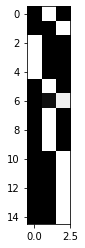

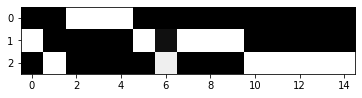

In [25]:
#시각화를 해보자
img = output * 255
plt.imshow(output, cmap='gray')
plt.show()
plt.imshow(output.T, cmap='gray')
plt.show()
#5개까지가, 원, 세모, 네모
#이상적인것 -----
            #    -----
                    # -----
#하얀부분이 예측값

In [54]:
# 모델 평가하기
#predict를 쓰지말고, evaluate를 쓰면, 한눈에 나온다. 다만, 어디가 틀린건지 분석은 안된다. 분석할때는, predict가 좋다.
#predict는 어디가 문제인지, 무엇을 잘 분류하고 못하는지를 파악할 수 있다.
scores = model.evaluate_generator( test_generator, steps = 5)
print(scores[1])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

ValueError: Error when checking target: expected dense_2 to have shape (3,) but got array with shape (1,)

In [50]:
labels = ['C', 'R', 'T']
print(p)

T = np.argmax(y_test, axis = 1)
              
print(T)

idx = [x for x in range(15)]
print(idx)
#전체 데이터에 대해 확률값을 표시

[1 2 0 0 0 1 2 1 1 1 2 2 2 2 2]


AxisError: axis 1 is out of bounds for array of dimension 1

In [55]:
plt.figure(figsize=(20, 15))

cc = 3
rr = int(len(idx) / cc) + 1

for k in range(len(idx)):
    i = idx[k]
    c = "blue" if p[i] ==T[i] else "red"
    plt.subplot(rr, cc, k+1)
    plt.bar(labels, output[i], color=c)
    plt.xlabel("true:{} -> predict:{} {:2.0f}%".format(labels[int(T[  i ])],
                                                      labels[p[i]],
                                                      100*np.max(output[i], axis=0)), color = c)

NameError: name 'idx' is not defined

<Figure size 1440x1080 with 0 Axes>

In [56]:
test_generator = test_datagen.flow_from_directory(
    'hard_handwriting_shape/test',
    target_size = (24, 24),
    batch_size = 15,
    class_mode = 'binary', shuffle = False)

a = test_generator.next()
print(a[0].shape)
print(a[1].shape)

Found 15 images belonging to 3 classes.
(15, 24, 24, 3)
(15,)


# 3. dog cat  augmentatation

- https://keraskorea.github.io/posts/2018-10-24-little_data_powerful_model/
- https://www.kaggle.com/c/dogs-vs-cats/data
- 학습 데이터로 1,000장의 고양이 사진과 1,000장의 강아지 사진을 사용 (kaggle  25,000자)
- 검증 데이터로는 각각 400장 사용

In [ ]:
img = load_img('cat.jpg') 
x = img_to_array(img)
print(x.shape)   # w,h,c 인직 확인

In [ ]:
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# 검증 및 테스트 이미지는 augmentation을 적용하지 않음(이미지 원본을 사용)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train', 
        target_size=(150, 150), 
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# steps_per_epoch는 한 세대마다 몇 번 생성기로부터 데이터를 얻을지를 나타내는 값
# 한 세대마다 사용되는 학습데이터의 수는 steps_per_epoch * batch_size
        
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,    # 2000/16     한번에 125개씩 생성
        epochs=5,  #50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)     # 800/16   한번에 50개씩 생성

In [ ]:
# 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator( test_generator,       steps = 5)
print(scores[1])

In [ ]:
# augmentation 없이  학습
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255 )
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지를 배치 단위로 불러와 줄 generator입니다.
train_generator = train_datagen.flow_from_directory(
        'smallcatdog/train',  # this is the target directory
        target_size=(150, 150),  # 모든 이미지의 크기가 150x150로 조정됩니다.
        batch_size=batch_size,
        class_mode='binary')  # binary_crossentropy 손실 함수를 사용하므로 binary 형태로 라벨을 불러와야 합니다.

validation_generator = validation_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'smallcatdog/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5, # 50
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

model.save("smallcatdog.h5")
scores = model.evaluate_generator( test_generator,       steps = 5)
print(scores[1])

# 4. imagenet에서 검색해서 다운하기



In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

In [ ]:
page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289") #ship synset  wnetid
soup = BeautifulSoup(page.content, 'html.parser')
str_soup=str(soup)
split_urls=str_soup.split('\r\n')
print(len(split_urls))

In [ ]:
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')
bikes_str_soup=str(bikes_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')
print(len(bikes_split_urls))

In [ ]:
def url_downalod(urls, path, prefix) :    
    idx = 0
    for url in urls :
        try:
            resp = urllib.request.urlopen(url)
            image = np.asarray(bytearray(resp.read()), dtype="uint8")
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            if ( len(image.shape)) == 3 :
                print(url)
                idx += 1
                save_path = path + '/' + prefix + str(idx)+'.jpg'
                cv2.imwrite(save_path,image)
        except :
            None


In [ ]:
url_downalod(split_urls, 'imagenet/aa', 'ship') # aa 폴더에 ship1 부터 저장

In [ ]:
url_downalod(bikes_split_urls, 'imagenet/bikes', 'bike')

In [ ]:
train_datagen  = ImageDataGenerator()
test_datagen = ImageDataGenerator()
    
train_generator = train_datagen.flow_from_directory(
        'imagenet/train/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        'imagenet/validation/',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

In [ ]:
model2 =  Sequential()
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3))) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model2.fit_generator(
        train_generator,
        steps_per_epoch=100, # 2000
        epochs=2, validation_data=validation_generator   #65
        )

In [ ]:
img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

# 5. 네트웍 저장 및 복구

In [ ]:
model2.save('bicycleship.h5')

In [ ]:
from keras.models import load_model
model2 = load_model('bicycleship.h5')


img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model2.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])

In [ ]:
model_json = model2.to_json()
with open("bicycleship.json", "w") as json_file : 
    json_file.write(model_json)   
model2.save_weights("bicycleship_w.h5")

In [ ]:
from keras.models import model_from_json 

json_file = open("bicycleship.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
model3 = model_from_json(loaded_model_json)
model3.load_weights("bicycleship_w.h5")

img_path = 'imagenet/ship.jpg'
img = load_img(img_path, target_size=(32, 32))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preds = model3.predict(x)

print(preds)
print('Probability that the image is a Bicycle:', preds[0,0])
print('Probability that the image is a Ship:', preds[0,1])